In [1]:
#dependencias para o python
import gym
import matplotlib.pyplot as plt
import numpy as np
import sys
import random

%matplotlib inline


env = gym.make("LunarLander-v2")

# Action space and environment space
print("env.action_space", env.action_space)
print("env.observation_space", env.observation_space)
print("env.observation_space.high", env.observation_space.high)
print("env.observation_space.low", env.observation_space.low)


#Configure HyperParameters
total_episodes = 10000       # Total episodes
total_test_episodes = 5     # Total test episodes
max_steps = 1000               # Max steps per episode

learning_rate = 0.4           # Learning rate
gamma = 0.6                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001            # Minimum exploration probability 
decay_rate = 0.001             # Exponential decay rate for exploration prob

def set_buckets_and_actions():
    number_of_buckets = (5,5,5,5,5,5,2,2) #buckets in each dimension
    number_of_actions = env.action_space.n
    
    #Creating a 2-tuple with the original bounds of each dimension
    state_value_bounds = list(zip(env.observation_space.low,env.observation_space.high))
    
    #New bound values for each dimension
    state_value_bounds[0] = [-1,1]      #Position x
    state_value_bounds[1] = [-1,1]    #Position y
    state_value_bounds[2] = [-1,1]        #vel x
    state_value_bounds[3] = [-1,1]    #vel y
    state_value_bounds[4] = [-1,1]        #angle
    state_value_bounds[5] = [-1,1]        #angular vel
    state_value_bounds[6] = [0,1]
    state_value_bounds[7] = [0,1]
    
    return number_of_buckets, number_of_actions, state_value_bounds


def bucketize(state):
    bucket_indexes = []
    for i in range(len(state)):
        if state[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_value_bounds[i][1]:
            bucket_index = number_of_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (number_of_buckets[i]-1) * state_value_bounds[i][0]/bound_width
            scaling = (number_of_buckets[i]-1) / bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)


def initialize_q_table():
    return np.zeros(number_of_buckets + (number_of_actions,))


def initialize_visits_table():
    return np.zeros(number_of_buckets + (number_of_actions,))


def choose_action(q_table, bucket_state, epsilon):
    if (np.random.random() <= epsilon):
        #print("Exploration")
        return env.action_space.sample() #Exploration
    else:
        #print("greedy")
        return np.argmax(q_table[bucket_state]) #Eplotation


    
#Initialize Table and variables 
number_of_buckets, number_of_actions, state_value_bounds = set_buckets_and_actions()
q_table = initialize_q_table()

rewards = []
meanEpsilon = []
meanRewards = []

print("\n # ------  Trainning Agent  ------- \n")    
for episode in range(total_episodes):

    
    # Reset the environment
    bucket_state = bucketize(env.reset())
    total_reward = 0
    step = 0
    done = False
    ep = 0 #utilizo essa variavel para mostrar que estou zerando o epsilon
    
    for step in range(max_steps):
        #env.render()
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        
        action = choose_action(q_table, bucket_state, epsilon)
        
                
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        bucket_new_state = bucketize(new_state)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_table[bucket_state][action] = q_table[bucket_state][action] + learning_rate * (reward + gamma * 
                                    np.max(q_table[bucket_new_state]) - q_table[bucket_state][action])
                
        # Our new state is state
        # new_state is now the current state
        bucket_state = bucket_new_state
        
        total_reward += reward
        
        if episode % 50 == 0:
            rewards.append(total_reward)
            print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward)) 
            
        
        # If done : finish episode
        if done == True: 
            #rewards.append(total_reward)
            #print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward))
            break
                 
    #rewards.append(total_reward)
    # Reduce epsilon (because we need less and less exploration)
    print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward))
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    ep+=epsilon*500 #utilizo essa variavel para mostrar que estou zerando o epsilon
    
    meanEpsilon.append(ep)
    
    meanRewards.append(np.mean(rewards,axis=0))
    
file = open('rewards.txt','w')
file.write(str(rewards))
file.close()

file = open('Epsilon.txt','w')
file.write(str(meanEpsilon))
file.close()

file = open('meanRewards.txt','w')
file.write(str(meanRewards))
file.close() 
    
#Ajustando o ambiente para usar o que foi aprendido anteriormente
env.reset()


env.action_space Discrete(4)
env.observation_space Box(8,)
env.observation_space.high [inf inf inf inf inf inf inf inf]
env.observation_space.low [-inf -inf -inf -inf -inf -inf -inf -inf]

 # ------  Trainning Agent  ------- 

Episode 0, epsilon 1.0000, reward -122.31
Episode 0, epsilon 1.0000, reward -122.31
Episode 1, epsilon 1.0000, reward -246.15
Episode 1, epsilon 1.0000, reward -246.15
Episode 2, epsilon 0.9990, reward -131.12
Episode 2, epsilon 0.9990, reward -131.12
Episode 3, epsilon 0.9980, reward -259.54
Episode 3, epsilon 0.9980, reward -259.54
Episode 4, epsilon 0.9970, reward -104.58
Episode 4, epsilon 0.9970, reward -104.58
Episode 5, epsilon 0.9960, reward -143.92
Episode 5, epsilon 0.9960, reward -143.92
Episode 6, epsilon 0.9950, reward -57.81
Episode 6, epsilon 0.9950, reward -57.81
Episode 7, epsilon 0.9940, reward -172.36
Episode 7, epsilon 0.9940, reward -172.36
Episode 8, epsilon 0.9930, reward -301.69
Episode 8, epsilon 0.9930, reward -301.69
Episode 9, epsilon 

Episode 104, epsilon 0.9022, reward -372.56
Episode 104, epsilon 0.9022, reward -372.56
Episode 105, epsilon 0.9013, reward -170.18
Episode 105, epsilon 0.9013, reward -170.18
Episode 106, epsilon 0.9004, reward -231.28
Episode 106, epsilon 0.9004, reward -231.28
Episode 107, epsilon 0.8995, reward -170.47
Episode 107, epsilon 0.8995, reward -170.47
Episode 108, epsilon 0.8986, reward -141.27
Episode 108, epsilon 0.8986, reward -141.27
Episode 109, epsilon 0.8977, reward -127.25
Episode 109, epsilon 0.8977, reward -127.25
Episode 110, epsilon 0.8968, reward -247.95
Episode 110, epsilon 0.8968, reward -247.95
Episode 111, epsilon 0.8959, reward -234.91
Episode 111, epsilon 0.8959, reward -234.91
Episode 112, epsilon 0.8950, reward -187.35
Episode 112, epsilon 0.8950, reward -187.35
Episode 113, epsilon 0.8942, reward -95.40
Episode 113, epsilon 0.8942, reward -95.40
Episode 114, epsilon 0.8933, reward -267.31
Episode 114, epsilon 0.8933, reward -267.31
Episode 115, epsilon 0.8924, rewar

Episode 199, epsilon 0.8205, reward -72.88
Episode 199, epsilon 0.8205, reward -72.88
Episode 200, epsilon 0.8197, reward -81.68
Episode 200, epsilon 0.8197, reward -81.68
Episode 201, epsilon 0.8189, reward -183.09
Episode 201, epsilon 0.8189, reward -183.09
Episode 202, epsilon 0.8181, reward -125.15
Episode 202, epsilon 0.8181, reward -125.15
Episode 203, epsilon 0.8173, reward -176.76
Episode 203, epsilon 0.8173, reward -176.76
Episode 204, epsilon 0.8165, reward -277.69
Episode 204, epsilon 0.8165, reward -277.69
Episode 205, epsilon 0.8156, reward -153.20
Episode 205, epsilon 0.8156, reward -153.20
Episode 206, epsilon 0.8148, reward -301.71
Episode 206, epsilon 0.8148, reward -301.71
Episode 207, epsilon 0.8140, reward -146.44
Episode 207, epsilon 0.8140, reward -146.44
Episode 208, epsilon 0.8132, reward -159.22
Episode 208, epsilon 0.8132, reward -159.22
Episode 209, epsilon 0.8124, reward -91.83
Episode 209, epsilon 0.8124, reward -91.83
Episode 210, epsilon 0.8116, reward -2

Episode 294, epsilon 0.7463, reward -275.84
Episode 294, epsilon 0.7463, reward -275.84
Episode 295, epsilon 0.7455, reward -72.93
Episode 295, epsilon 0.7455, reward -72.93
Episode 296, epsilon 0.7448, reward -151.22
Episode 296, epsilon 0.7448, reward -151.22
Episode 297, epsilon 0.7440, reward   6.32
Episode 297, epsilon 0.7440, reward   6.32
Episode 298, epsilon 0.7433, reward -319.17
Episode 298, epsilon 0.7433, reward -319.17
Episode 299, epsilon 0.7426, reward -203.43
Episode 299, epsilon 0.7426, reward -203.43
Episode 300, epsilon 0.7418, reward -119.07
Episode 300, epsilon 0.7418, reward -119.07
Episode 301, epsilon 0.7411, reward -59.72
Episode 301, epsilon 0.7411, reward -59.72
Episode 302, epsilon 0.7403, reward -97.47
Episode 302, epsilon 0.7403, reward -97.47
Episode 303, epsilon 0.7396, reward -71.57
Episode 303, epsilon 0.7396, reward -71.57
Episode 304, epsilon 0.7389, reward -50.65
Episode 304, epsilon 0.7389, reward -50.65
Episode 305, epsilon 0.7381, reward -300.95


Episode 391, epsilon 0.6774, reward -126.72
Episode 391, epsilon 0.6774, reward -126.72
Episode 392, epsilon 0.6767, reward -104.76
Episode 392, epsilon 0.6767, reward -104.76
Episode 393, epsilon 0.6760, reward -47.18
Episode 393, epsilon 0.6760, reward -47.18
Episode 394, epsilon 0.6754, reward -117.37
Episode 394, epsilon 0.6754, reward -117.37
Episode 395, epsilon 0.6747, reward -61.94
Episode 395, epsilon 0.6747, reward -61.94
Episode 396, epsilon 0.6740, reward -227.24
Episode 396, epsilon 0.6740, reward -227.24
Episode 397, epsilon 0.6733, reward -170.05
Episode 397, epsilon 0.6733, reward -170.05
Episode 398, epsilon 0.6727, reward -61.62
Episode 398, epsilon 0.6727, reward -61.62
Episode 399, epsilon 0.6720, reward -133.71
Episode 399, epsilon 0.6720, reward -133.71
Episode 400, epsilon 0.6713, reward -271.64
Episode 400, epsilon 0.6713, reward -271.64
Episode 401, epsilon 0.6706, reward -102.49
Episode 401, epsilon 0.6706, reward -102.49
Episode 402, epsilon 0.6700, reward -8

Episode 490, epsilon 0.6136, reward -45.39
Episode 490, epsilon 0.6136, reward -45.39
Episode 491, epsilon 0.6130, reward -134.19
Episode 491, epsilon 0.6130, reward -134.19
Episode 492, epsilon 0.6124, reward -145.36
Episode 492, epsilon 0.6124, reward -145.36
Episode 493, epsilon 0.6118, reward -150.77
Episode 493, epsilon 0.6118, reward -150.77
Episode 494, epsilon 0.6112, reward -42.13
Episode 494, epsilon 0.6112, reward -42.13
Episode 495, epsilon 0.6106, reward -80.13
Episode 495, epsilon 0.6106, reward -80.13
Episode 496, epsilon 0.6100, reward -133.60
Episode 496, epsilon 0.6100, reward -133.60
Episode 497, epsilon 0.6094, reward -103.89
Episode 497, epsilon 0.6094, reward -103.89
Episode 498, epsilon 0.6087, reward -92.81
Episode 498, epsilon 0.6087, reward -92.81
Episode 499, epsilon 0.6081, reward -180.89
Episode 499, epsilon 0.6081, reward -180.89
Episode 500, epsilon 0.6075, reward -84.95
Episode 500, epsilon 0.6075, reward -84.95
Episode 501, epsilon 0.6069, reward -130.3

Episode 588, epsilon 0.5564, reward -234.94
Episode 588, epsilon 0.5564, reward -234.94
Episode 589, epsilon 0.5559, reward -151.65
Episode 589, epsilon 0.5559, reward -151.65
Episode 590, epsilon 0.5553, reward -58.10
Episode 590, epsilon 0.5553, reward -58.10
Episode 591, epsilon 0.5548, reward -91.54
Episode 591, epsilon 0.5548, reward -91.54
Episode 592, epsilon 0.5542, reward -54.43
Episode 592, epsilon 0.5542, reward -54.43
Episode 593, epsilon 0.5537, reward -99.02
Episode 593, epsilon 0.5537, reward -99.02
Episode 594, epsilon 0.5531, reward -105.15
Episode 594, epsilon 0.5531, reward -105.15
Episode 595, epsilon 0.5526, reward -110.69
Episode 595, epsilon 0.5526, reward -110.69
Episode 596, epsilon 0.5520, reward -97.59
Episode 596, epsilon 0.5520, reward -97.59
Episode 597, epsilon 0.5515, reward -88.36
Episode 597, epsilon 0.5515, reward -88.36
Episode 598, epsilon 0.5509, reward -97.93
Episode 598, epsilon 0.5509, reward -97.93
Episode 599, epsilon 0.5504, reward -85.23
Epi

Episode 684, epsilon 0.5056, reward -31.33
Episode 684, epsilon 0.5056, reward -31.33
Episode 685, epsilon 0.5051, reward -60.21
Episode 685, epsilon 0.5051, reward -60.21
Episode 686, epsilon 0.5046, reward -51.26
Episode 686, epsilon 0.5046, reward -51.26
Episode 687, epsilon 0.5041, reward -101.31
Episode 687, epsilon 0.5041, reward -101.31
Episode 688, epsilon 0.5036, reward -231.96
Episode 688, epsilon 0.5036, reward -231.96
Episode 689, epsilon 0.5031, reward -57.61
Episode 689, epsilon 0.5031, reward -57.61
Episode 690, epsilon 0.5026, reward  -4.22
Episode 690, epsilon 0.5026, reward  -4.22
Episode 691, epsilon 0.5021, reward -93.15
Episode 691, epsilon 0.5021, reward -93.15
Episode 692, epsilon 0.5016, reward -19.15
Episode 692, epsilon 0.5016, reward -19.15
Episode 693, epsilon 0.5011, reward -119.61
Episode 693, epsilon 0.5011, reward -119.61
Episode 694, epsilon 0.5006, reward -268.00
Episode 694, epsilon 0.5006, reward -268.00
Episode 695, epsilon 0.5001, reward -78.17
Epi

Episode 783, epsilon 0.4580, reward -100.31
Episode 783, epsilon 0.4580, reward -100.31
Episode 784, epsilon 0.4576, reward  21.17
Episode 784, epsilon 0.4576, reward  21.17
Episode 785, epsilon 0.4571, reward -46.57
Episode 785, epsilon 0.4571, reward -46.57
Episode 786, epsilon 0.4567, reward -79.00
Episode 786, epsilon 0.4567, reward -79.00
Episode 787, epsilon 0.4562, reward -104.02
Episode 787, epsilon 0.4562, reward -104.02
Episode 788, epsilon 0.4558, reward -84.34
Episode 788, epsilon 0.4558, reward -84.34
Episode 789, epsilon 0.4553, reward -103.68
Episode 789, epsilon 0.4553, reward -103.68
Episode 790, epsilon 0.4548, reward -91.79
Episode 790, epsilon 0.4548, reward -91.79
Episode 791, epsilon 0.4544, reward -24.73
Episode 791, epsilon 0.4544, reward -24.73
Episode 792, epsilon 0.4539, reward -84.43
Episode 792, epsilon 0.4539, reward -84.43
Episode 793, epsilon 0.4535, reward -124.41
Episode 793, epsilon 0.4535, reward -124.41
Episode 794, epsilon 0.4530, reward -87.54
Epi

Episode 880, epsilon 0.4158, reward -58.78
Episode 880, epsilon 0.4158, reward -58.78
Episode 881, epsilon 0.4154, reward -57.37
Episode 881, epsilon 0.4154, reward -57.37
Episode 882, epsilon 0.4150, reward -92.04
Episode 882, epsilon 0.4150, reward -92.04
Episode 883, epsilon 0.4145, reward -76.64
Episode 883, epsilon 0.4145, reward -76.64
Episode 884, epsilon 0.4141, reward -107.58
Episode 884, epsilon 0.4141, reward -107.58
Episode 885, epsilon 0.4137, reward -11.60
Episode 885, epsilon 0.4137, reward -11.60
Episode 886, epsilon 0.4133, reward -73.77
Episode 886, epsilon 0.4133, reward -73.77
Episode 887, epsilon 0.4129, reward -48.71
Episode 887, epsilon 0.4129, reward -48.71
Episode 888, epsilon 0.4125, reward -133.98
Episode 888, epsilon 0.4125, reward -133.98
Episode 889, epsilon 0.4121, reward -65.67
Episode 889, epsilon 0.4121, reward -65.67
Episode 890, epsilon 0.4117, reward -52.55
Episode 890, epsilon 0.4117, reward -52.55
Episode 891, epsilon 0.4112, reward -14.42
Episode

Episode 980, epsilon 0.3763, reward -56.68
Episode 980, epsilon 0.3763, reward -56.68
Episode 981, epsilon 0.3759, reward -89.78
Episode 981, epsilon 0.3759, reward -89.78
Episode 982, epsilon 0.3756, reward -40.75
Episode 982, epsilon 0.3756, reward -40.75
Episode 983, epsilon 0.3752, reward -81.80
Episode 983, epsilon 0.3752, reward -81.80
Episode 984, epsilon 0.3748, reward -76.14
Episode 984, epsilon 0.3748, reward -76.14
Episode 985, epsilon 0.3744, reward -160.32
Episode 985, epsilon 0.3744, reward -160.32
Episode 986, epsilon 0.3741, reward -237.04
Episode 986, epsilon 0.3741, reward -237.04
Episode 987, epsilon 0.3737, reward -333.65
Episode 987, epsilon 0.3737, reward -333.65
Episode 988, epsilon 0.3733, reward -119.49
Episode 988, epsilon 0.3733, reward -119.49
Episode 989, epsilon 0.3729, reward -206.22
Episode 989, epsilon 0.3729, reward -206.22
Episode 990, epsilon 0.3726, reward -68.78
Episode 990, epsilon 0.3726, reward -68.78
Episode 991, epsilon 0.3722, reward  81.15
E

Episode 1077, epsilon 0.3416, reward -99.44
Episode 1077, epsilon 0.3416, reward -99.44
Episode 1078, epsilon 0.3413, reward -209.45
Episode 1078, epsilon 0.3413, reward -209.45
Episode 1079, epsilon 0.3409, reward -110.93
Episode 1079, epsilon 0.3409, reward -110.93
Episode 1080, epsilon 0.3406, reward -59.75
Episode 1080, epsilon 0.3406, reward -59.75
Episode 1081, epsilon 0.3403, reward -182.55
Episode 1081, epsilon 0.3403, reward -182.55
Episode 1082, epsilon 0.3399, reward -112.05
Episode 1082, epsilon 0.3399, reward -112.05
Episode 1083, epsilon 0.3396, reward -65.79
Episode 1083, epsilon 0.3396, reward -65.79
Episode 1084, epsilon 0.3392, reward   3.75
Episode 1084, epsilon 0.3392, reward   3.75
Episode 1085, epsilon 0.3389, reward -310.46
Episode 1085, epsilon 0.3389, reward -310.46
Episode 1086, epsilon 0.3386, reward -14.17
Episode 1086, epsilon 0.3386, reward -14.17
Episode 1087, epsilon 0.3382, reward 136.41
Episode 1087, epsilon 0.3382, reward 136.41
Episode 1088, epsilon 

Episode 1170, epsilon 0.3114, reward -76.36
Episode 1170, epsilon 0.3114, reward -76.36
Episode 1171, epsilon 0.3111, reward -20.80
Episode 1171, epsilon 0.3111, reward -20.80
Episode 1172, epsilon 0.3107, reward -87.05
Episode 1172, epsilon 0.3107, reward -87.05
Episode 1173, epsilon 0.3104, reward -83.17
Episode 1173, epsilon 0.3104, reward -83.17
Episode 1174, epsilon 0.3101, reward -35.02
Episode 1174, epsilon 0.3101, reward -35.02
Episode 1175, epsilon 0.3098, reward  39.49
Episode 1175, epsilon 0.3098, reward  39.49
Episode 1176, epsilon 0.3095, reward   1.74
Episode 1176, epsilon 0.3095, reward   1.74
Episode 1177, epsilon 0.3092, reward -77.19
Episode 1177, epsilon 0.3092, reward -77.19
Episode 1178, epsilon 0.3089, reward -30.42
Episode 1178, epsilon 0.3089, reward -30.42
Episode 1179, epsilon 0.3086, reward -94.73
Episode 1179, epsilon 0.3086, reward -94.73
Episode 1180, epsilon 0.3083, reward -89.16
Episode 1180, epsilon 0.3083, reward -89.16
Episode 1181, epsilon 0.3080, re

Episode 1264, epsilon 0.2835, reward   9.18
Episode 1264, epsilon 0.2835, reward   9.18
Episode 1265, epsilon 0.2832, reward -64.17
Episode 1265, epsilon 0.2832, reward -64.17
Episode 1266, epsilon 0.2830, reward -63.22
Episode 1266, epsilon 0.2830, reward -63.22
Episode 1267, epsilon 0.2827, reward -85.88
Episode 1267, epsilon 0.2827, reward -85.88
Episode 1268, epsilon 0.2824, reward -223.80
Episode 1268, epsilon 0.2824, reward -223.80
Episode 1269, epsilon 0.2821, reward -44.14
Episode 1269, epsilon 0.2821, reward -44.14
Episode 1270, epsilon 0.2818, reward -53.75
Episode 1270, epsilon 0.2818, reward -53.75
Episode 1271, epsilon 0.2816, reward -74.99
Episode 1271, epsilon 0.2816, reward -74.99
Episode 1272, epsilon 0.2813, reward -231.20
Episode 1272, epsilon 0.2813, reward -231.20
Episode 1273, epsilon 0.2810, reward -198.09
Episode 1273, epsilon 0.2810, reward -198.09
Episode 1274, epsilon 0.2807, reward -238.93
Episode 1274, epsilon 0.2807, reward -238.93
Episode 1275, epsilon 0.

Episode 1358, epsilon 0.2582, reward -34.89
Episode 1358, epsilon 0.2582, reward -34.89
Episode 1359, epsilon 0.2579, reward -70.41
Episode 1359, epsilon 0.2579, reward -70.41
Episode 1360, epsilon 0.2577, reward -127.83
Episode 1360, epsilon 0.2577, reward -127.83
Episode 1361, epsilon 0.2574, reward -131.59
Episode 1361, epsilon 0.2574, reward -131.59
Episode 1362, epsilon 0.2571, reward -241.04
Episode 1362, epsilon 0.2571, reward -241.04
Episode 1363, epsilon 0.2569, reward -248.29
Episode 1363, epsilon 0.2569, reward -248.29
Episode 1364, epsilon 0.2566, reward -54.04
Episode 1364, epsilon 0.2566, reward -54.04
Episode 1365, epsilon 0.2564, reward 239.70
Episode 1365, epsilon 0.2564, reward 239.70
Episode 1366, epsilon 0.2561, reward 121.04
Episode 1366, epsilon 0.2561, reward 121.04
Episode 1367, epsilon 0.2559, reward -191.47
Episode 1367, epsilon 0.2559, reward -191.47
Episode 1368, epsilon 0.2556, reward -30.96
Episode 1368, epsilon 0.2556, reward -30.96
Episode 1369, epsilon 

Episode 1456, epsilon 0.2342, reward -190.29
Episode 1456, epsilon 0.2342, reward -190.29
Episode 1457, epsilon 0.2339, reward -26.34
Episode 1457, epsilon 0.2339, reward -26.34
Episode 1458, epsilon 0.2337, reward  38.80
Episode 1458, epsilon 0.2337, reward  38.80
Episode 1459, epsilon 0.2335, reward -99.75
Episode 1459, epsilon 0.2335, reward -99.75
Episode 1460, epsilon 0.2332, reward -154.21
Episode 1460, epsilon 0.2332, reward -154.21
Episode 1461, epsilon 0.2330, reward -293.67
Episode 1461, epsilon 0.2330, reward -293.67
Episode 1462, epsilon 0.2328, reward -214.93
Episode 1462, epsilon 0.2328, reward -214.93
Episode 1463, epsilon 0.2325, reward -44.08
Episode 1463, epsilon 0.2325, reward -44.08
Episode 1464, epsilon 0.2323, reward -94.65
Episode 1464, epsilon 0.2323, reward -94.65
Episode 1465, epsilon 0.2321, reward -245.63
Episode 1465, epsilon 0.2321, reward -245.63
Episode 1466, epsilon 0.2318, reward -98.78
Episode 1466, epsilon 0.2318, reward -98.78
Episode 1467, epsilon 

Episode 1550, epsilon 0.2132, reward -68.22
Episode 1550, epsilon 0.2132, reward -68.22
Episode 1551, epsilon 0.2130, reward -82.27
Episode 1551, epsilon 0.2130, reward -82.27
Episode 1552, epsilon 0.2128, reward -49.93
Episode 1552, epsilon 0.2128, reward -49.93
Episode 1553, epsilon 0.2126, reward -206.41
Episode 1553, epsilon 0.2126, reward -206.41
Episode 1554, epsilon 0.2124, reward -59.30
Episode 1554, epsilon 0.2124, reward -59.30
Episode 1555, epsilon 0.2122, reward 101.89
Episode 1555, epsilon 0.2122, reward 101.89
Episode 1556, epsilon 0.2120, reward -187.96
Episode 1556, epsilon 0.2120, reward -187.96
Episode 1557, epsilon 0.2118, reward   7.40
Episode 1557, epsilon 0.2118, reward   7.40
Episode 1558, epsilon 0.2116, reward 233.03
Episode 1558, epsilon 0.2116, reward 233.03
Episode 1559, epsilon 0.2113, reward -211.63
Episode 1559, epsilon 0.2113, reward -211.63
Episode 1560, epsilon 0.2111, reward -74.87
Episode 1560, epsilon 0.2111, reward -74.87
Episode 1561, epsilon 0.21

Episode 1646, epsilon 0.1938, reward -228.77
Episode 1646, epsilon 0.1938, reward -228.77
Episode 1647, epsilon 0.1936, reward -320.14
Episode 1647, epsilon 0.1936, reward -320.14
Episode 1648, epsilon 0.1934, reward -20.17
Episode 1648, epsilon 0.1934, reward -20.17
Episode 1649, epsilon 0.1932, reward 129.86
Episode 1649, epsilon 0.1932, reward 129.86
Episode 1650, epsilon 0.1930, reward -215.86
Episode 1650, epsilon 0.1930, reward -215.86
Episode 1651, epsilon 0.1929, reward -54.22
Episode 1651, epsilon 0.1929, reward -54.22
Episode 1652, epsilon 0.1927, reward -48.28
Episode 1652, epsilon 0.1927, reward -48.28
Episode 1653, epsilon 0.1925, reward -94.27
Episode 1653, epsilon 0.1925, reward -94.27
Episode 1654, epsilon 0.1923, reward -61.83
Episode 1654, epsilon 0.1923, reward -61.83
Episode 1655, epsilon 0.1921, reward -133.69
Episode 1655, epsilon 0.1921, reward -133.69
Episode 1656, epsilon 0.1919, reward -205.46
Episode 1656, epsilon 0.1919, reward -205.46
Episode 1657, epsilon 

Episode 1741, epsilon 0.1763, reward -79.44
Episode 1741, epsilon 0.1763, reward -79.44
Episode 1742, epsilon 0.1762, reward -102.36
Episode 1742, epsilon 0.1762, reward -102.36
Episode 1743, epsilon 0.1760, reward  -4.52
Episode 1743, epsilon 0.1760, reward  -4.52
Episode 1744, epsilon 0.1758, reward -217.33
Episode 1744, epsilon 0.1758, reward -217.33
Episode 1745, epsilon 0.1756, reward   4.44
Episode 1745, epsilon 0.1756, reward   4.44
Episode 1746, epsilon 0.1755, reward 281.42
Episode 1746, epsilon 0.1755, reward 281.42
Episode 1747, epsilon 0.1753, reward -89.31
Episode 1747, epsilon 0.1753, reward -89.31
Episode 1748, epsilon 0.1751, reward -222.60
Episode 1748, epsilon 0.1751, reward -222.60
Episode 1749, epsilon 0.1749, reward -134.38
Episode 1749, epsilon 0.1749, reward -134.38
Episode 1750, epsilon 0.1748, reward -225.09
Episode 1750, epsilon 0.1748, reward -225.09
Episode 1751, epsilon 0.1746, reward -48.64
Episode 1751, epsilon 0.1746, reward -48.64
Episode 1752, epsilon 

Episode 1837, epsilon 0.1603, reward -203.32
Episode 1837, epsilon 0.1603, reward -203.32
Episode 1838, epsilon 0.1601, reward -44.30
Episode 1838, epsilon 0.1601, reward -44.30
Episode 1839, epsilon 0.1600, reward -205.28
Episode 1839, epsilon 0.1600, reward -205.28
Episode 1840, epsilon 0.1598, reward -159.27
Episode 1840, epsilon 0.1598, reward -159.27
Episode 1841, epsilon 0.1597, reward -251.16
Episode 1841, epsilon 0.1597, reward -251.16
Episode 1842, epsilon 0.1595, reward -35.21
Episode 1842, epsilon 0.1595, reward -35.21
Episode 1843, epsilon 0.1593, reward   5.12
Episode 1843, epsilon 0.1593, reward   5.12
Episode 1844, epsilon 0.1592, reward -309.86
Episode 1844, epsilon 0.1592, reward -309.86
Episode 1845, epsilon 0.1590, reward -300.57
Episode 1845, epsilon 0.1590, reward -300.57
Episode 1846, epsilon 0.1589, reward -212.19
Episode 1846, epsilon 0.1589, reward -212.19
Episode 1847, epsilon 0.1587, reward  51.67
Episode 1847, epsilon 0.1587, reward  51.67
Episode 1848, epsi

Episode 1934, epsilon 0.1456, reward -46.88
Episode 1934, epsilon 0.1456, reward -46.88
Episode 1935, epsilon 0.1454, reward -53.66
Episode 1935, epsilon 0.1454, reward -53.66
Episode 1936, epsilon 0.1453, reward -197.25
Episode 1936, epsilon 0.1453, reward -197.25
Episode 1937, epsilon 0.1451, reward -35.74
Episode 1937, epsilon 0.1451, reward -35.74
Episode 1938, epsilon 0.1450, reward -62.71
Episode 1938, epsilon 0.1450, reward -62.71
Episode 1939, epsilon 0.1448, reward 203.67
Episode 1939, epsilon 0.1448, reward 203.67
Episode 1940, epsilon 0.1447, reward -59.11
Episode 1940, epsilon 0.1447, reward -59.11
Episode 1941, epsilon 0.1446, reward -197.78
Episode 1941, epsilon 0.1446, reward -197.78
Episode 1942, epsilon 0.1444, reward -51.83
Episode 1942, epsilon 0.1444, reward -51.83
Episode 1943, epsilon 0.1443, reward -13.33
Episode 1943, epsilon 0.1443, reward -13.33
Episode 1944, epsilon 0.1441, reward  45.39
Episode 1944, epsilon 0.1441, reward  45.39
Episode 1945, epsilon 0.1440

Episode 2032, epsilon 0.1321, reward 251.53
Episode 2032, epsilon 0.1321, reward 251.53
Episode 2033, epsilon 0.1319, reward -77.69
Episode 2033, epsilon 0.1319, reward -77.69
Episode 2034, epsilon 0.1318, reward -62.40
Episode 2034, epsilon 0.1318, reward -62.40
Episode 2035, epsilon 0.1317, reward -394.15
Episode 2035, epsilon 0.1317, reward -394.15
Episode 2036, epsilon 0.1315, reward -238.47
Episode 2036, epsilon 0.1315, reward -238.47
Episode 2037, epsilon 0.1314, reward -49.15
Episode 2037, epsilon 0.1314, reward -49.15
Episode 2038, epsilon 0.1313, reward -213.56
Episode 2038, epsilon 0.1313, reward -213.56
Episode 2039, epsilon 0.1312, reward 264.89
Episode 2039, epsilon 0.1312, reward 264.89
Episode 2040, epsilon 0.1310, reward -102.74
Episode 2040, epsilon 0.1310, reward -102.74
Episode 2041, epsilon 0.1309, reward -235.25
Episode 2041, epsilon 0.1309, reward -235.25
Episode 2042, epsilon 0.1308, reward -31.86
Episode 2042, epsilon 0.1308, reward -31.86
Episode 2043, epsilon 

Episode 2127, epsilon 0.1202, reward -168.57
Episode 2127, epsilon 0.1202, reward -168.57
Episode 2128, epsilon 0.1201, reward  27.33
Episode 2128, epsilon 0.1201, reward  27.33
Episode 2129, epsilon 0.1200, reward -32.24
Episode 2129, epsilon 0.1200, reward -32.24
Episode 2130, epsilon 0.1198, reward  -6.33
Episode 2130, epsilon 0.1198, reward  -6.33
Episode 2131, epsilon 0.1197, reward -12.35
Episode 2131, epsilon 0.1197, reward -12.35
Episode 2132, epsilon 0.1196, reward -16.59
Episode 2132, epsilon 0.1196, reward -16.59
Episode 2133, epsilon 0.1195, reward -29.57
Episode 2133, epsilon 0.1195, reward -29.57
Episode 2134, epsilon 0.1194, reward -203.76
Episode 2134, epsilon 0.1194, reward -203.76
Episode 2135, epsilon 0.1192, reward -165.28
Episode 2135, epsilon 0.1192, reward -165.28
Episode 2136, epsilon 0.1191, reward -186.68
Episode 2136, epsilon 0.1191, reward -186.68
Episode 2137, epsilon 0.1190, reward -203.96
Episode 2137, epsilon 0.1190, reward -203.96
Episode 2138, epsilon 

Episode 2220, epsilon 0.1096, reward -50.54
Episode 2220, epsilon 0.1096, reward -50.54
Episode 2221, epsilon 0.1095, reward -41.66
Episode 2221, epsilon 0.1095, reward -41.66
Episode 2222, epsilon 0.1094, reward -23.83
Episode 2222, epsilon 0.1094, reward -23.83
Episode 2223, epsilon 0.1093, reward -14.84
Episode 2223, epsilon 0.1093, reward -14.84
Episode 2224, epsilon 0.1092, reward -22.98
Episode 2224, epsilon 0.1092, reward -22.98
Episode 2225, epsilon 0.1091, reward  70.24
Episode 2225, epsilon 0.1091, reward  70.24
Episode 2226, epsilon 0.1090, reward -195.52
Episode 2226, epsilon 0.1090, reward -195.52
Episode 2227, epsilon 0.1089, reward -52.18
Episode 2227, epsilon 0.1089, reward -52.18
Episode 2228, epsilon 0.1087, reward -244.95
Episode 2228, epsilon 0.1087, reward -244.95
Episode 2229, epsilon 0.1086, reward -201.43
Episode 2229, epsilon 0.1086, reward -201.43
Episode 2230, epsilon 0.1085, reward -269.62
Episode 2230, epsilon 0.1085, reward -269.62
Episode 2231, epsilon 0.

Episode 2313, epsilon 0.1000, reward  78.90
Episode 2313, epsilon 0.1000, reward  78.90
Episode 2314, epsilon 0.0999, reward 280.43
Episode 2314, epsilon 0.0999, reward 280.43
Episode 2315, epsilon 0.0998, reward -86.70
Episode 2315, epsilon 0.0998, reward -86.70
Episode 2316, epsilon 0.0997, reward -36.51
Episode 2316, epsilon 0.0997, reward -36.51
Episode 2317, epsilon 0.0996, reward -255.40
Episode 2317, epsilon 0.0996, reward -255.40
Episode 2318, epsilon 0.0995, reward -172.52
Episode 2318, epsilon 0.0995, reward -172.52
Episode 2319, epsilon 0.0994, reward  -1.62
Episode 2319, epsilon 0.0994, reward  -1.62
Episode 2320, epsilon 0.0993, reward -182.16
Episode 2320, epsilon 0.0993, reward -182.16
Episode 2321, epsilon 0.0992, reward 263.65
Episode 2321, epsilon 0.0992, reward 263.65
Episode 2322, epsilon 0.0991, reward -163.09
Episode 2322, epsilon 0.0991, reward -163.09
Episode 2323, epsilon 0.0990, reward -106.88
Episode 2323, epsilon 0.0990, reward -106.88
Episode 2324, epsilon 

Episode 2409, epsilon 0.0909, reward -28.14
Episode 2409, epsilon 0.0909, reward -28.14
Episode 2410, epsilon 0.0908, reward -88.28
Episode 2410, epsilon 0.0908, reward -88.28
Episode 2411, epsilon 0.0907, reward -173.80
Episode 2411, epsilon 0.0907, reward -173.80
Episode 2412, epsilon 0.0906, reward -187.59
Episode 2412, epsilon 0.0906, reward -187.59
Episode 2413, epsilon 0.0905, reward -64.21
Episode 2413, epsilon 0.0905, reward -64.21
Episode 2414, epsilon 0.0905, reward -84.66
Episode 2414, epsilon 0.0905, reward -84.66
Episode 2415, epsilon 0.0904, reward -52.84
Episode 2415, epsilon 0.0904, reward -52.84
Episode 2416, epsilon 0.0903, reward -105.23
Episode 2416, epsilon 0.0903, reward -105.23
Episode 2417, epsilon 0.0902, reward -14.50
Episode 2417, epsilon 0.0902, reward -14.50
Episode 2418, epsilon 0.0901, reward -57.40
Episode 2418, epsilon 0.0901, reward -57.40
Episode 2419, epsilon 0.0900, reward -242.97
Episode 2419, epsilon 0.0900, reward -242.97
Episode 2420, epsilon 0.

Episode 2507, epsilon 0.0825, reward -96.62
Episode 2507, epsilon 0.0825, reward -96.62
Episode 2508, epsilon 0.0824, reward -196.51
Episode 2508, epsilon 0.0824, reward -196.51
Episode 2509, epsilon 0.0823, reward -47.78
Episode 2509, epsilon 0.0823, reward -47.78
Episode 2510, epsilon 0.0823, reward -49.39
Episode 2510, epsilon 0.0823, reward -49.39
Episode 2511, epsilon 0.0822, reward -46.86
Episode 2511, epsilon 0.0822, reward -46.86
Episode 2512, epsilon 0.0821, reward -252.77
Episode 2512, epsilon 0.0821, reward -252.77
Episode 2513, epsilon 0.0820, reward -174.72
Episode 2513, epsilon 0.0820, reward -174.72
Episode 2514, epsilon 0.0819, reward -11.04
Episode 2514, epsilon 0.0819, reward -11.04
Episode 2515, epsilon 0.0819, reward -252.63
Episode 2515, epsilon 0.0819, reward -252.63
Episode 2516, epsilon 0.0818, reward -180.40
Episode 2516, epsilon 0.0818, reward -180.40
Episode 2517, epsilon 0.0817, reward -42.87
Episode 2517, epsilon 0.0817, reward -42.87
Episode 2518, epsilon 

Episode 2602, epsilon 0.0751, reward 280.64
Episode 2602, epsilon 0.0751, reward 280.64
Episode 2603, epsilon 0.0751, reward 256.34
Episode 2603, epsilon 0.0751, reward 256.34
Episode 2604, epsilon 0.0750, reward  -7.26
Episode 2604, epsilon 0.0750, reward  -7.26
Episode 2605, epsilon 0.0749, reward -41.42
Episode 2605, epsilon 0.0749, reward -41.42
Episode 2606, epsilon 0.0748, reward   6.87
Episode 2606, epsilon 0.0748, reward   6.87
Episode 2607, epsilon 0.0748, reward -183.77
Episode 2607, epsilon 0.0748, reward -183.77
Episode 2608, epsilon 0.0747, reward -212.80
Episode 2608, epsilon 0.0747, reward -212.80
Episode 2609, epsilon 0.0746, reward -26.71
Episode 2609, epsilon 0.0746, reward -26.71
Episode 2610, epsilon 0.0745, reward -29.92
Episode 2610, epsilon 0.0745, reward -29.92
Episode 2611, epsilon 0.0745, reward  34.03
Episode 2611, epsilon 0.0745, reward  34.03
Episode 2612, epsilon 0.0744, reward -71.83
Episode 2612, epsilon 0.0744, reward -71.83
Episode 2613, epsilon 0.0743

Episode 2697, epsilon 0.0684, reward  56.88
Episode 2697, epsilon 0.0684, reward  56.88
Episode 2698, epsilon 0.0683, reward 273.24
Episode 2698, epsilon 0.0683, reward 273.24
Episode 2699, epsilon 0.0683, reward  51.36
Episode 2699, epsilon 0.0683, reward  51.36
Episode 2700, epsilon 0.0682, reward -93.21
Episode 2700, epsilon 0.0682, reward -93.21
Episode 2701, epsilon 0.0681, reward -174.28
Episode 2701, epsilon 0.0681, reward -174.28
Episode 2702, epsilon 0.0681, reward -40.03
Episode 2702, epsilon 0.0681, reward -40.03
Episode 2703, epsilon 0.0680, reward -210.83
Episode 2703, epsilon 0.0680, reward -210.83
Episode 2704, epsilon 0.0679, reward  13.07
Episode 2704, epsilon 0.0679, reward  13.07
Episode 2705, epsilon 0.0679, reward -197.17
Episode 2705, epsilon 0.0679, reward -197.17
Episode 2706, epsilon 0.0678, reward 205.92
Episode 2706, epsilon 0.0678, reward 205.92
Episode 2707, epsilon 0.0677, reward -37.83
Episode 2707, epsilon 0.0677, reward -37.83
Episode 2708, epsilon 0.06

Episode 2793, epsilon 0.0622, reward -94.70
Episode 2793, epsilon 0.0622, reward -94.70
Episode 2794, epsilon 0.0622, reward -65.30
Episode 2794, epsilon 0.0622, reward -65.30
Episode 2795, epsilon 0.0621, reward -29.36
Episode 2795, epsilon 0.0621, reward -29.36
Episode 2796, epsilon 0.0621, reward -247.44
Episode 2796, epsilon 0.0621, reward -247.44
Episode 2797, epsilon 0.0620, reward -250.71
Episode 2797, epsilon 0.0620, reward -250.71
Episode 2798, epsilon 0.0619, reward -84.86
Episode 2798, epsilon 0.0619, reward -84.86
Episode 2799, epsilon 0.0619, reward 146.82
Episode 2799, epsilon 0.0619, reward 146.82
Episode 2800, epsilon 0.0618, reward -76.79
Episode 2800, epsilon 0.0618, reward -76.79
Episode 2801, epsilon 0.0617, reward -70.92
Episode 2801, epsilon 0.0617, reward -70.92
Episode 2802, epsilon 0.0617, reward -35.34
Episode 2802, epsilon 0.0617, reward -35.34
Episode 2803, epsilon 0.0616, reward -58.88
Episode 2803, epsilon 0.0616, reward -58.88
Episode 2804, epsilon 0.0616

Episode 2892, epsilon 0.0565, reward -19.97
Episode 2892, epsilon 0.0565, reward -19.97
Episode 2893, epsilon 0.0564, reward  21.49
Episode 2893, epsilon 0.0564, reward  21.49
Episode 2894, epsilon 0.0564, reward 220.75
Episode 2894, epsilon 0.0564, reward 220.75
Episode 2895, epsilon 0.0563, reward  -9.79
Episode 2895, epsilon 0.0563, reward  -9.79
Episode 2896, epsilon 0.0562, reward  16.57
Episode 2896, epsilon 0.0562, reward  16.57
Episode 2897, epsilon 0.0562, reward 177.21
Episode 2897, epsilon 0.0562, reward 177.21
Episode 2898, epsilon 0.0561, reward -225.61
Episode 2898, epsilon 0.0561, reward -225.61
Episode 2899, epsilon 0.0561, reward -93.99
Episode 2899, epsilon 0.0561, reward -93.99
Episode 2900, epsilon 0.0560, reward -24.53
Episode 2900, epsilon 0.0560, reward -24.53
Episode 2901, epsilon 0.0560, reward -102.76
Episode 2901, epsilon 0.0560, reward -102.76
Episode 2902, epsilon 0.0559, reward  18.51
Episode 2902, epsilon 0.0559, reward  18.51
Episode 2903, epsilon 0.0559

Episode 2988, epsilon 0.0514, reward 112.03
Episode 2988, epsilon 0.0514, reward 112.03
Episode 2989, epsilon 0.0513, reward  -1.47
Episode 2989, epsilon 0.0513, reward  -1.47
Episode 2990, epsilon 0.0513, reward -245.19
Episode 2990, epsilon 0.0513, reward -245.19
Episode 2991, epsilon 0.0512, reward  64.04
Episode 2991, epsilon 0.0512, reward  64.04
Episode 2992, epsilon 0.0512, reward -231.34
Episode 2992, epsilon 0.0512, reward -231.34
Episode 2993, epsilon 0.0511, reward -185.06
Episode 2993, epsilon 0.0511, reward -185.06
Episode 2994, epsilon 0.0511, reward -56.58
Episode 2994, epsilon 0.0511, reward -56.58
Episode 2995, epsilon 0.0510, reward -25.08
Episode 2995, epsilon 0.0510, reward -25.08
Episode 2996, epsilon 0.0510, reward -176.88
Episode 2996, epsilon 0.0510, reward -176.88
Episode 2997, epsilon 0.0509, reward  25.93
Episode 2997, epsilon 0.0509, reward  25.93
Episode 2998, epsilon 0.0509, reward -90.08
Episode 2998, epsilon 0.0509, reward -90.08
Episode 2999, epsilon 0.

Episode 3084, epsilon 0.0468, reward -30.95
Episode 3084, epsilon 0.0468, reward -30.95
Episode 3085, epsilon 0.0467, reward -76.40
Episode 3085, epsilon 0.0467, reward -76.40
Episode 3086, epsilon 0.0467, reward -28.31
Episode 3086, epsilon 0.0467, reward -28.31
Episode 3087, epsilon 0.0466, reward   1.63
Episode 3087, epsilon 0.0466, reward   1.63
Episode 3088, epsilon 0.0466, reward 240.82
Episode 3088, epsilon 0.0466, reward 240.82
Episode 3089, epsilon 0.0465, reward -98.54
Episode 3089, epsilon 0.0465, reward -98.54
Episode 3090, epsilon 0.0465, reward -60.94
Episode 3090, epsilon 0.0465, reward -60.94
Episode 3091, epsilon 0.0465, reward -225.08
Episode 3091, epsilon 0.0465, reward -225.08
Episode 3092, epsilon 0.0464, reward 260.94
Episode 3092, epsilon 0.0464, reward 260.94
Episode 3093, epsilon 0.0464, reward -63.13
Episode 3093, epsilon 0.0464, reward -63.13
Episode 3094, epsilon 0.0463, reward -163.15
Episode 3094, epsilon 0.0463, reward -163.15
Episode 3095, epsilon 0.0463

Episode 3179, epsilon 0.0426, reward -224.20
Episode 3179, epsilon 0.0426, reward -224.20
Episode 3180, epsilon 0.0426, reward -54.76
Episode 3180, epsilon 0.0426, reward -54.76
Episode 3181, epsilon 0.0425, reward -33.20
Episode 3181, epsilon 0.0425, reward -33.20
Episode 3182, epsilon 0.0425, reward -53.09
Episode 3182, epsilon 0.0425, reward -53.09
Episode 3183, epsilon 0.0425, reward -291.78
Episode 3183, epsilon 0.0425, reward -291.78
Episode 3184, epsilon 0.0424, reward -42.65
Episode 3184, epsilon 0.0424, reward -42.65
Episode 3185, epsilon 0.0424, reward -64.66
Episode 3185, epsilon 0.0424, reward -64.66
Episode 3186, epsilon 0.0423, reward -56.55
Episode 3186, epsilon 0.0423, reward -56.55
Episode 3187, epsilon 0.0423, reward 166.77
Episode 3187, epsilon 0.0423, reward 166.77
Episode 3188, epsilon 0.0423, reward -98.64
Episode 3188, epsilon 0.0423, reward -98.64
Episode 3189, epsilon 0.0422, reward  -5.15
Episode 3189, epsilon 0.0422, reward  -5.15
Episode 3190, epsilon 0.0422

Episode 3272, epsilon 0.0389, reward 266.02
Episode 3272, epsilon 0.0389, reward 266.02
Episode 3273, epsilon 0.0389, reward -39.53
Episode 3273, epsilon 0.0389, reward -39.53
Episode 3274, epsilon 0.0389, reward -292.42
Episode 3274, epsilon 0.0389, reward -292.42
Episode 3275, epsilon 0.0388, reward 146.21
Episode 3275, epsilon 0.0388, reward 146.21
Episode 3276, epsilon 0.0388, reward -55.51
Episode 3276, epsilon 0.0388, reward -55.51
Episode 3277, epsilon 0.0387, reward 273.90
Episode 3277, epsilon 0.0387, reward 273.90
Episode 3278, epsilon 0.0387, reward 264.47
Episode 3278, epsilon 0.0387, reward 264.47
Episode 3279, epsilon 0.0387, reward -201.43
Episode 3279, epsilon 0.0387, reward -201.43
Episode 3280, epsilon 0.0386, reward -229.49
Episode 3280, epsilon 0.0386, reward -229.49
Episode 3281, epsilon 0.0386, reward -279.99
Episode 3281, epsilon 0.0386, reward -279.99
Episode 3282, epsilon 0.0386, reward -92.28
Episode 3282, epsilon 0.0386, reward -92.28
Episode 3283, epsilon 0.

Episode 3370, epsilon 0.0354, reward -64.72
Episode 3370, epsilon 0.0354, reward -64.72
Episode 3371, epsilon 0.0354, reward -85.24
Episode 3371, epsilon 0.0354, reward -85.24
Episode 3372, epsilon 0.0353, reward -34.08
Episode 3372, epsilon 0.0353, reward -34.08
Episode 3373, epsilon 0.0353, reward -50.96
Episode 3373, epsilon 0.0353, reward -50.96
Episode 3374, epsilon 0.0353, reward -21.61
Episode 3374, epsilon 0.0353, reward -21.61
Episode 3375, epsilon 0.0352, reward 265.78
Episode 3375, epsilon 0.0352, reward 265.78
Episode 3376, epsilon 0.0352, reward 252.90
Episode 3376, epsilon 0.0352, reward 252.90
Episode 3377, epsilon 0.0351, reward -48.99
Episode 3377, epsilon 0.0351, reward -48.99
Episode 3378, epsilon 0.0351, reward -63.05
Episode 3378, epsilon 0.0351, reward -63.05
Episode 3379, epsilon 0.0351, reward -287.98
Episode 3379, epsilon 0.0351, reward -287.98
Episode 3380, epsilon 0.0350, reward -211.51
Episode 3380, epsilon 0.0350, reward -211.51
Episode 3381, epsilon 0.0350

Episode 3467, epsilon 0.0322, reward 199.97
Episode 3467, epsilon 0.0322, reward 199.97
Episode 3468, epsilon 0.0322, reward -215.81
Episode 3468, epsilon 0.0322, reward -215.81
Episode 3469, epsilon 0.0321, reward 257.90
Episode 3469, epsilon 0.0321, reward 257.90
Episode 3470, epsilon 0.0321, reward -20.66
Episode 3470, epsilon 0.0321, reward -20.66
Episode 3471, epsilon 0.0321, reward -68.06
Episode 3471, epsilon 0.0321, reward -68.06
Episode 3472, epsilon 0.0321, reward -76.82
Episode 3472, epsilon 0.0321, reward -76.82
Episode 3473, epsilon 0.0320, reward -179.74
Episode 3473, epsilon 0.0320, reward -179.74
Episode 3474, epsilon 0.0320, reward -211.04
Episode 3474, epsilon 0.0320, reward -211.04
Episode 3475, epsilon 0.0320, reward -165.38
Episode 3475, epsilon 0.0320, reward -165.38
Episode 3476, epsilon 0.0319, reward -56.43
Episode 3476, epsilon 0.0319, reward -56.43
Episode 3477, epsilon 0.0319, reward -206.40
Episode 3477, epsilon 0.0319, reward -206.40
Episode 3478, epsilon 

Episode 3562, epsilon 0.0294, reward -60.51
Episode 3562, epsilon 0.0294, reward -60.51
Episode 3563, epsilon 0.0294, reward -54.11
Episode 3563, epsilon 0.0294, reward -54.11
Episode 3564, epsilon 0.0293, reward -39.93
Episode 3564, epsilon 0.0293, reward -39.93
Episode 3565, epsilon 0.0293, reward 213.79
Episode 3565, epsilon 0.0293, reward 213.79
Episode 3566, epsilon 0.0293, reward   9.77
Episode 3566, epsilon 0.0293, reward   9.77
Episode 3567, epsilon 0.0292, reward -140.74
Episode 3567, epsilon 0.0292, reward -140.74
Episode 3568, epsilon 0.0292, reward 162.57
Episode 3568, epsilon 0.0292, reward 162.57
Episode 3569, epsilon 0.0292, reward  43.80
Episode 3569, epsilon 0.0292, reward  43.80
Episode 3570, epsilon 0.0292, reward -31.62
Episode 3570, epsilon 0.0292, reward -31.62
Episode 3571, epsilon 0.0291, reward 222.76
Episode 3571, epsilon 0.0291, reward 222.76
Episode 3572, epsilon 0.0291, reward -293.89
Episode 3572, epsilon 0.0291, reward -293.89
Episode 3573, epsilon 0.0291

Episode 3655, epsilon 0.0269, reward -16.09
Episode 3655, epsilon 0.0269, reward -16.09
Episode 3656, epsilon 0.0268, reward 210.99
Episode 3656, epsilon 0.0268, reward 210.99
Episode 3657, epsilon 0.0268, reward 259.37
Episode 3657, epsilon 0.0268, reward 259.37
Episode 3658, epsilon 0.0268, reward 238.24
Episode 3658, epsilon 0.0268, reward 238.24
Episode 3659, epsilon 0.0268, reward   1.84
Episode 3659, epsilon 0.0268, reward   1.84
Episode 3660, epsilon 0.0267, reward -105.96
Episode 3660, epsilon 0.0267, reward -105.96
Episode 3661, epsilon 0.0267, reward   5.80
Episode 3661, epsilon 0.0267, reward   5.80
Episode 3662, epsilon 0.0267, reward 148.78
Episode 3662, epsilon 0.0267, reward 148.78
Episode 3663, epsilon 0.0267, reward 229.95
Episode 3663, epsilon 0.0267, reward 229.95
Episode 3664, epsilon 0.0266, reward 240.45
Episode 3664, epsilon 0.0266, reward 240.45
Episode 3665, epsilon 0.0266, reward -49.40
Episode 3665, epsilon 0.0266, reward -49.40
Episode 3666, epsilon 0.0266, 

Episode 3748, epsilon 0.0246, reward -10.08
Episode 3748, epsilon 0.0246, reward -10.08
Episode 3749, epsilon 0.0245, reward -51.42
Episode 3749, epsilon 0.0245, reward -51.42
Episode 3750, epsilon 0.0245, reward  16.11
Episode 3750, epsilon 0.0245, reward  16.11
Episode 3751, epsilon 0.0245, reward -17.11
Episode 3751, epsilon 0.0245, reward -17.11
Episode 3752, epsilon 0.0245, reward -118.17
Episode 3752, epsilon 0.0245, reward -118.17
Episode 3753, epsilon 0.0244, reward -180.89
Episode 3753, epsilon 0.0244, reward -180.89
Episode 3754, epsilon 0.0244, reward 253.41
Episode 3754, epsilon 0.0244, reward 253.41
Episode 3755, epsilon 0.0244, reward -201.11
Episode 3755, epsilon 0.0244, reward -201.11
Episode 3756, epsilon 0.0244, reward -130.54
Episode 3756, epsilon 0.0244, reward -130.54
Episode 3757, epsilon 0.0244, reward -90.81
Episode 3757, epsilon 0.0244, reward -90.81
Episode 3758, epsilon 0.0243, reward 214.01
Episode 3758, epsilon 0.0243, reward 214.01
Episode 3759, epsilon 0.

Episode 3843, epsilon 0.0224, reward -41.32
Episode 3843, epsilon 0.0224, reward -41.32
Episode 3844, epsilon 0.0224, reward 232.34
Episode 3844, epsilon 0.0224, reward 232.34
Episode 3845, epsilon 0.0224, reward -167.07
Episode 3845, epsilon 0.0224, reward -167.07
Episode 3846, epsilon 0.0224, reward -255.91
Episode 3846, epsilon 0.0224, reward -255.91
Episode 3847, epsilon 0.0223, reward 120.11
Episode 3847, epsilon 0.0223, reward 120.11
Episode 3848, epsilon 0.0223, reward -71.17
Episode 3848, epsilon 0.0223, reward -71.17
Episode 3849, epsilon 0.0223, reward -73.32
Episode 3849, epsilon 0.0223, reward -73.32
Episode 3850, epsilon 0.0223, reward -45.47
Episode 3850, epsilon 0.0223, reward -45.47
Episode 3851, epsilon 0.0223, reward 229.72
Episode 3851, epsilon 0.0223, reward 229.72
Episode 3852, epsilon 0.0222, reward -23.55
Episode 3852, epsilon 0.0222, reward -23.55
Episode 3853, epsilon 0.0222, reward -28.98
Episode 3853, epsilon 0.0222, reward -28.98
Episode 3854, epsilon 0.0222

Episode 3941, epsilon 0.0204, reward -196.32
Episode 3941, epsilon 0.0204, reward -196.32
Episode 3942, epsilon 0.0204, reward -186.79
Episode 3942, epsilon 0.0204, reward -186.79
Episode 3943, epsilon 0.0204, reward  34.79
Episode 3943, epsilon 0.0204, reward  34.79
Episode 3944, epsilon 0.0204, reward  22.71
Episode 3944, epsilon 0.0204, reward  22.71
Episode 3945, epsilon 0.0204, reward -58.07
Episode 3945, epsilon 0.0204, reward -58.07
Episode 3946, epsilon 0.0203, reward -10.70
Episode 3946, epsilon 0.0203, reward -10.70
Episode 3947, epsilon 0.0203, reward -174.25
Episode 3947, epsilon 0.0203, reward -174.25
Episode 3948, epsilon 0.0203, reward  32.35
Episode 3948, epsilon 0.0203, reward  32.35
Episode 3949, epsilon 0.0203, reward -48.10
Episode 3949, epsilon 0.0203, reward -48.10
Episode 3950, epsilon 0.0203, reward  39.96
Episode 3950, epsilon 0.0203, reward  39.96
Episode 3951, epsilon 0.0202, reward -77.09
Episode 3951, epsilon 0.0202, reward -77.09
Episode 3952, epsilon 0.02

Episode 4035, epsilon 0.0187, reward -10.57
Episode 4035, epsilon 0.0187, reward -10.57
Episode 4036, epsilon 0.0187, reward -227.51
Episode 4036, epsilon 0.0187, reward -227.51
Episode 4037, epsilon 0.0187, reward -122.84
Episode 4037, epsilon 0.0187, reward -122.84
Episode 4038, epsilon 0.0186, reward 239.04
Episode 4038, epsilon 0.0186, reward 239.04
Episode 4039, epsilon 0.0186, reward -122.80
Episode 4039, epsilon 0.0186, reward -122.80
Episode 4040, epsilon 0.0186, reward  -8.34
Episode 4040, epsilon 0.0186, reward  -8.34
Episode 4041, epsilon 0.0186, reward  -6.68
Episode 4041, epsilon 0.0186, reward  -6.68
Episode 4042, epsilon 0.0186, reward  -1.76
Episode 4042, epsilon 0.0186, reward  -1.76
Episode 4043, epsilon 0.0185, reward 252.92
Episode 4043, epsilon 0.0185, reward 252.92
Episode 4044, epsilon 0.0185, reward   8.87
Episode 4044, epsilon 0.0185, reward   8.87
Episode 4045, epsilon 0.0185, reward  21.40
Episode 4045, epsilon 0.0185, reward  21.40
Episode 4046, epsilon 0.01

Episode 4129, epsilon 0.0171, reward 242.12
Episode 4129, epsilon 0.0171, reward 242.12
Episode 4130, epsilon 0.0171, reward -204.77
Episode 4130, epsilon 0.0171, reward -204.77
Episode 4131, epsilon 0.0171, reward  42.77
Episode 4131, epsilon 0.0171, reward  42.77
Episode 4132, epsilon 0.0171, reward -331.09
Episode 4132, epsilon 0.0171, reward -331.09
Episode 4133, epsilon 0.0170, reward  54.41
Episode 4133, epsilon 0.0170, reward  54.41
Episode 4134, epsilon 0.0170, reward   2.90
Episode 4134, epsilon 0.0170, reward   2.90
Episode 4135, epsilon 0.0170, reward  -6.65
Episode 4135, epsilon 0.0170, reward  -6.65
Episode 4136, epsilon 0.0170, reward -186.36
Episode 4136, epsilon 0.0170, reward -186.36
Episode 4137, epsilon 0.0170, reward -16.52
Episode 4137, epsilon 0.0170, reward -16.52
Episode 4138, epsilon 0.0170, reward -36.11
Episode 4138, epsilon 0.0170, reward -36.11
Episode 4139, epsilon 0.0169, reward   7.66
Episode 4139, epsilon 0.0169, reward   7.66
Episode 4140, epsilon 0.01

Episode 4222, epsilon 0.0157, reward -76.04
Episode 4222, epsilon 0.0157, reward -76.04
Episode 4223, epsilon 0.0157, reward   4.17
Episode 4223, epsilon 0.0157, reward   4.17
Episode 4224, epsilon 0.0156, reward  29.63
Episode 4224, epsilon 0.0156, reward  29.63
Episode 4225, epsilon 0.0156, reward  24.69
Episode 4225, epsilon 0.0156, reward  24.69
Episode 4226, epsilon 0.0156, reward -33.45
Episode 4226, epsilon 0.0156, reward -33.45
Episode 4227, epsilon 0.0156, reward -17.11
Episode 4227, epsilon 0.0156, reward -17.11
Episode 4228, epsilon 0.0156, reward -55.48
Episode 4228, epsilon 0.0156, reward -55.48
Episode 4229, epsilon 0.0156, reward -55.04
Episode 4229, epsilon 0.0156, reward -55.04
Episode 4230, epsilon 0.0156, reward -172.76
Episode 4230, epsilon 0.0156, reward -172.76
Episode 4231, epsilon 0.0155, reward -21.22
Episode 4231, epsilon 0.0155, reward -21.22
Episode 4232, epsilon 0.0155, reward 187.72
Episode 4232, epsilon 0.0155, reward 187.72
Episode 4233, epsilon 0.0155, 

Episode 4316, epsilon 0.0144, reward -71.93
Episode 4316, epsilon 0.0144, reward -71.93
Episode 4317, epsilon 0.0143, reward  -1.68
Episode 4317, epsilon 0.0143, reward  -1.68
Episode 4318, epsilon 0.0143, reward -172.95
Episode 4318, epsilon 0.0143, reward -172.95
Episode 4319, epsilon 0.0143, reward -49.84
Episode 4319, epsilon 0.0143, reward -49.84
Episode 4320, epsilon 0.0143, reward -66.28
Episode 4320, epsilon 0.0143, reward -66.28
Episode 4321, epsilon 0.0143, reward -47.19
Episode 4321, epsilon 0.0143, reward -47.19
Episode 4322, epsilon 0.0143, reward -38.48
Episode 4322, epsilon 0.0143, reward -38.48
Episode 4323, epsilon 0.0143, reward -35.85
Episode 4323, epsilon 0.0143, reward -35.85
Episode 4324, epsilon 0.0142, reward -75.27
Episode 4324, epsilon 0.0142, reward -75.27
Episode 4325, epsilon 0.0142, reward  -1.18
Episode 4325, epsilon 0.0142, reward  -1.18
Episode 4326, epsilon 0.0142, reward 210.91
Episode 4326, epsilon 0.0142, reward 210.91
Episode 4327, epsilon 0.0142, 

Episode 4410, epsilon 0.0132, reward -53.78
Episode 4410, epsilon 0.0132, reward -53.78
Episode 4411, epsilon 0.0131, reward -28.23
Episode 4411, epsilon 0.0131, reward -28.23
Episode 4412, epsilon 0.0131, reward 216.51
Episode 4412, epsilon 0.0131, reward 216.51
Episode 4413, epsilon 0.0131, reward  -7.69
Episode 4413, epsilon 0.0131, reward  -7.69
Episode 4414, epsilon 0.0131, reward 111.88
Episode 4414, epsilon 0.0131, reward 111.88
Episode 4415, epsilon 0.0131, reward 110.53
Episode 4415, epsilon 0.0131, reward 110.53
Episode 4416, epsilon 0.0131, reward 232.38
Episode 4416, epsilon 0.0131, reward 232.38
Episode 4417, epsilon 0.0131, reward -49.79
Episode 4417, epsilon 0.0131, reward -49.79
Episode 4418, epsilon 0.0131, reward -29.29
Episode 4418, epsilon 0.0131, reward -29.29
Episode 4419, epsilon 0.0130, reward -16.32
Episode 4419, epsilon 0.0130, reward -16.32
Episode 4420, epsilon 0.0130, reward -53.17
Episode 4420, epsilon 0.0130, reward -53.17
Episode 4421, epsilon 0.0130, re

Episode 4504, epsilon 0.0121, reward 205.07
Episode 4504, epsilon 0.0121, reward 205.07
Episode 4505, epsilon 0.0121, reward  54.66
Episode 4505, epsilon 0.0121, reward  54.66
Episode 4506, epsilon 0.0120, reward -11.40
Episode 4506, epsilon 0.0120, reward -11.40
Episode 4507, epsilon 0.0120, reward 112.61
Episode 4507, epsilon 0.0120, reward 112.61
Episode 4508, epsilon 0.0120, reward 100.49
Episode 4508, epsilon 0.0120, reward 100.49
Episode 4509, epsilon 0.0120, reward   6.27
Episode 4509, epsilon 0.0120, reward   6.27
Episode 4510, epsilon 0.0120, reward  29.15
Episode 4510, epsilon 0.0120, reward  29.15
Episode 4511, epsilon 0.0120, reward -142.36
Episode 4511, epsilon 0.0120, reward -142.36
Episode 4512, epsilon 0.0120, reward 115.66
Episode 4512, epsilon 0.0120, reward 115.66
Episode 4513, epsilon 0.0120, reward 265.59
Episode 4513, epsilon 0.0120, reward 265.59
Episode 4514, epsilon 0.0120, reward -48.94
Episode 4514, epsilon 0.0120, reward -48.94
Episode 4515, epsilon 0.0119, 

Episode 4597, epsilon 0.0111, reward 193.20
Episode 4597, epsilon 0.0111, reward 193.20
Episode 4598, epsilon 0.0111, reward 241.43
Episode 4598, epsilon 0.0111, reward 241.43
Episode 4599, epsilon 0.0111, reward -191.44
Episode 4599, epsilon 0.0111, reward -191.44
Episode 4600, epsilon 0.0111, reward 251.79
Episode 4600, epsilon 0.0111, reward 251.79
Episode 4601, epsilon 0.0110, reward  -4.03
Episode 4601, epsilon 0.0110, reward  -4.03
Episode 4602, epsilon 0.0110, reward -148.42
Episode 4602, epsilon 0.0110, reward -148.42
Episode 4603, epsilon 0.0110, reward -47.80
Episode 4603, epsilon 0.0110, reward -47.80
Episode 4604, epsilon 0.0110, reward 244.73
Episode 4604, epsilon 0.0110, reward 244.73
Episode 4605, epsilon 0.0110, reward  -5.11
Episode 4605, epsilon 0.0110, reward  -5.11
Episode 4606, epsilon 0.0110, reward -122.47
Episode 4606, epsilon 0.0110, reward -122.47
Episode 4607, epsilon 0.0110, reward 252.23
Episode 4607, epsilon 0.0110, reward 252.23
Episode 4608, epsilon 0.01

Episode 4690, epsilon 0.0102, reward 268.47
Episode 4690, epsilon 0.0102, reward 268.47
Episode 4691, epsilon 0.0102, reward  39.50
Episode 4691, epsilon 0.0102, reward  39.50
Episode 4692, epsilon 0.0102, reward 254.02
Episode 4692, epsilon 0.0102, reward 254.02
Episode 4693, epsilon 0.0102, reward  13.38
Episode 4693, epsilon 0.0102, reward  13.38
Episode 4694, epsilon 0.0102, reward 183.87
Episode 4694, epsilon 0.0102, reward 183.87
Episode 4695, epsilon 0.0101, reward   2.53
Episode 4695, epsilon 0.0101, reward   2.53
Episode 4696, epsilon 0.0101, reward -14.14
Episode 4696, epsilon 0.0101, reward -14.14
Episode 4697, epsilon 0.0101, reward -36.44
Episode 4697, epsilon 0.0101, reward -36.44
Episode 4698, epsilon 0.0101, reward -189.01
Episode 4698, epsilon 0.0101, reward -189.01
Episode 4699, epsilon 0.0101, reward -32.41
Episode 4699, epsilon 0.0101, reward -32.41
Episode 4700, epsilon 0.0101, reward 160.40
Episode 4700, epsilon 0.0101, reward 160.40
Episode 4701, epsilon 0.0101, 

Episode 4783, epsilon 0.0094, reward -164.68
Episode 4783, epsilon 0.0094, reward -164.68
Episode 4784, epsilon 0.0094, reward -212.94
Episode 4784, epsilon 0.0094, reward -212.94
Episode 4785, epsilon 0.0094, reward 209.85
Episode 4785, epsilon 0.0094, reward 209.85
Episode 4786, epsilon 0.0093, reward 237.74
Episode 4786, epsilon 0.0093, reward 237.74
Episode 4787, epsilon 0.0093, reward  60.18
Episode 4787, epsilon 0.0093, reward  60.18
Episode 4788, epsilon 0.0093, reward -199.94
Episode 4788, epsilon 0.0093, reward -199.94
Episode 4789, epsilon 0.0093, reward  17.25
Episode 4789, epsilon 0.0093, reward  17.25
Episode 4790, epsilon 0.0093, reward -127.77
Episode 4790, epsilon 0.0093, reward -127.77
Episode 4791, epsilon 0.0093, reward -27.95
Episode 4791, epsilon 0.0093, reward -27.95
Episode 4792, epsilon 0.0093, reward -86.28
Episode 4792, epsilon 0.0093, reward -86.28
Episode 4793, epsilon 0.0093, reward  11.56
Episode 4793, epsilon 0.0093, reward  11.56
Episode 4794, epsilon 0.

Episode 4877, epsilon 0.0086, reward 255.60
Episode 4877, epsilon 0.0086, reward 255.60
Episode 4878, epsilon 0.0086, reward  15.48
Episode 4878, epsilon 0.0086, reward  15.48
Episode 4879, epsilon 0.0086, reward 195.57
Episode 4879, epsilon 0.0086, reward 195.57
Episode 4880, epsilon 0.0086, reward  -0.23
Episode 4880, epsilon 0.0086, reward  -0.23
Episode 4881, epsilon 0.0086, reward -32.23
Episode 4881, epsilon 0.0086, reward -32.23
Episode 4882, epsilon 0.0086, reward 228.44
Episode 4882, epsilon 0.0086, reward 228.44
Episode 4883, epsilon 0.0086, reward -205.79
Episode 4883, epsilon 0.0086, reward -205.79
Episode 4884, epsilon 0.0086, reward -19.29
Episode 4884, epsilon 0.0086, reward -19.29
Episode 4885, epsilon 0.0086, reward 262.64
Episode 4885, epsilon 0.0086, reward 262.64
Episode 4886, epsilon 0.0086, reward 220.17
Episode 4886, epsilon 0.0086, reward 220.17
Episode 4887, epsilon 0.0085, reward   9.59
Episode 4887, epsilon 0.0085, reward   9.59
Episode 4888, epsilon 0.0085, 

Episode 4971, epsilon 0.0079, reward 248.40
Episode 4971, epsilon 0.0079, reward 248.40
Episode 4972, epsilon 0.0079, reward 255.65
Episode 4972, epsilon 0.0079, reward 255.65
Episode 4973, epsilon 0.0079, reward -217.29
Episode 4973, epsilon 0.0079, reward -217.29
Episode 4974, epsilon 0.0079, reward  -5.61
Episode 4974, epsilon 0.0079, reward  -5.61
Episode 4975, epsilon 0.0079, reward -196.44
Episode 4975, epsilon 0.0079, reward -196.44
Episode 4976, epsilon 0.0079, reward 300.11
Episode 4976, epsilon 0.0079, reward 300.11
Episode 4977, epsilon 0.0079, reward -97.70
Episode 4977, epsilon 0.0079, reward -97.70
Episode 4978, epsilon 0.0079, reward  41.77
Episode 4978, epsilon 0.0079, reward  41.77
Episode 4979, epsilon 0.0079, reward -121.25
Episode 4979, epsilon 0.0079, reward -121.25
Episode 4980, epsilon 0.0079, reward  31.39
Episode 4980, epsilon 0.0079, reward  31.39
Episode 4981, epsilon 0.0079, reward -64.02
Episode 4981, epsilon 0.0079, reward -64.02
Episode 4982, epsilon 0.00

Episode 5064, epsilon 0.0073, reward 206.16
Episode 5064, epsilon 0.0073, reward 206.16
Episode 5065, epsilon 0.0073, reward -39.81
Episode 5065, epsilon 0.0073, reward -39.81
Episode 5066, epsilon 0.0073, reward   4.28
Episode 5066, epsilon 0.0073, reward   4.28
Episode 5067, epsilon 0.0073, reward   2.59
Episode 5067, epsilon 0.0073, reward   2.59
Episode 5068, epsilon 0.0073, reward -23.11
Episode 5068, epsilon 0.0073, reward -23.11
Episode 5069, epsilon 0.0073, reward 220.48
Episode 5069, epsilon 0.0073, reward 220.48
Episode 5070, epsilon 0.0073, reward -34.17
Episode 5070, epsilon 0.0073, reward -34.17
Episode 5071, epsilon 0.0073, reward -143.33
Episode 5071, epsilon 0.0073, reward -143.33
Episode 5072, epsilon 0.0073, reward  -7.78
Episode 5072, epsilon 0.0073, reward  -7.78
Episode 5073, epsilon 0.0073, reward 279.11
Episode 5073, epsilon 0.0073, reward 279.11
Episode 5074, epsilon 0.0073, reward  24.04
Episode 5074, epsilon 0.0073, reward  24.04
Episode 5075, epsilon 0.0073, 

Episode 5159, epsilon 0.0067, reward 167.85
Episode 5159, epsilon 0.0067, reward 167.85
Episode 5160, epsilon 0.0067, reward -129.88
Episode 5160, epsilon 0.0067, reward -129.88
Episode 5161, epsilon 0.0067, reward -167.95
Episode 5161, epsilon 0.0067, reward -167.95
Episode 5162, epsilon 0.0067, reward -55.76
Episode 5162, epsilon 0.0067, reward -55.76
Episode 5163, epsilon 0.0067, reward  -5.17
Episode 5163, epsilon 0.0067, reward  -5.17
Episode 5164, epsilon 0.0067, reward 101.25
Episode 5164, epsilon 0.0067, reward 101.25
Episode 5165, epsilon 0.0067, reward 223.83
Episode 5165, epsilon 0.0067, reward 223.83
Episode 5166, epsilon 0.0067, reward 273.43
Episode 5166, epsilon 0.0067, reward 273.43
Episode 5167, epsilon 0.0067, reward -36.78
Episode 5167, epsilon 0.0067, reward -36.78
Episode 5168, epsilon 0.0067, reward 162.95
Episode 5168, epsilon 0.0067, reward 162.95
Episode 5169, epsilon 0.0067, reward -37.71
Episode 5169, epsilon 0.0067, reward -37.71
Episode 5170, epsilon 0.0067

Episode 5252, epsilon 0.0062, reward -217.60
Episode 5252, epsilon 0.0062, reward -217.60
Episode 5253, epsilon 0.0062, reward -212.10
Episode 5253, epsilon 0.0062, reward -212.10
Episode 5254, epsilon 0.0062, reward  -8.71
Episode 5254, epsilon 0.0062, reward  -8.71
Episode 5255, epsilon 0.0062, reward -196.20
Episode 5255, epsilon 0.0062, reward -196.20
Episode 5256, epsilon 0.0062, reward -30.86
Episode 5256, epsilon 0.0062, reward -30.86
Episode 5257, epsilon 0.0062, reward  -9.67
Episode 5257, epsilon 0.0062, reward  -9.67
Episode 5258, epsilon 0.0062, reward -43.12
Episode 5258, epsilon 0.0062, reward -43.12
Episode 5259, epsilon 0.0062, reward 259.11
Episode 5259, epsilon 0.0062, reward 259.11
Episode 5260, epsilon 0.0062, reward -171.14
Episode 5260, epsilon 0.0062, reward -171.14
Episode 5261, epsilon 0.0062, reward -238.75
Episode 5261, epsilon 0.0062, reward -238.75
Episode 5262, epsilon 0.0062, reward 243.82
Episode 5262, epsilon 0.0062, reward 243.82
Episode 5263, epsilon 

Episode 5345, epsilon 0.0058, reward -73.12
Episode 5345, epsilon 0.0058, reward -73.12
Episode 5346, epsilon 0.0058, reward  16.94
Episode 5346, epsilon 0.0058, reward  16.94
Episode 5347, epsilon 0.0058, reward -27.01
Episode 5347, epsilon 0.0058, reward -27.01
Episode 5348, epsilon 0.0058, reward -38.48
Episode 5348, epsilon 0.0058, reward -38.48
Episode 5349, epsilon 0.0058, reward  -1.30
Episode 5349, epsilon 0.0058, reward  -1.30
Episode 5350, epsilon 0.0057, reward 170.95
Episode 5350, epsilon 0.0057, reward 170.95
Episode 5351, epsilon 0.0057, reward -22.75
Episode 5351, epsilon 0.0057, reward -22.75
Episode 5352, epsilon 0.0057, reward -59.96
Episode 5352, epsilon 0.0057, reward -59.96
Episode 5353, epsilon 0.0057, reward -92.56
Episode 5353, epsilon 0.0057, reward -92.56
Episode 5354, epsilon 0.0057, reward -212.30
Episode 5354, epsilon 0.0057, reward -212.30
Episode 5355, epsilon 0.0057, reward 188.46
Episode 5355, epsilon 0.0057, reward 188.46
Episode 5356, epsilon 0.0057, 

Episode 5440, epsilon 0.0053, reward -173.73
Episode 5440, epsilon 0.0053, reward -173.73
Episode 5441, epsilon 0.0053, reward -261.47
Episode 5441, epsilon 0.0053, reward -261.47
Episode 5442, epsilon 0.0053, reward 250.73
Episode 5442, epsilon 0.0053, reward 250.73
Episode 5443, epsilon 0.0053, reward -28.78
Episode 5443, epsilon 0.0053, reward -28.78
Episode 5444, epsilon 0.0053, reward -44.33
Episode 5444, epsilon 0.0053, reward -44.33
Episode 5445, epsilon 0.0053, reward   3.00
Episode 5445, epsilon 0.0053, reward   3.00
Episode 5446, epsilon 0.0053, reward  -5.34
Episode 5446, epsilon 0.0053, reward  -5.34
Episode 5447, epsilon 0.0053, reward 177.14
Episode 5447, epsilon 0.0053, reward 177.14
Episode 5448, epsilon 0.0053, reward -36.52
Episode 5448, epsilon 0.0053, reward -36.52
Episode 5449, epsilon 0.0053, reward -191.79
Episode 5449, epsilon 0.0053, reward -191.79
Episode 5450, epsilon 0.0053, reward -124.63
Episode 5450, epsilon 0.0053, reward -124.63
Episode 5451, epsilon 0.

Episode 5535, epsilon 0.0049, reward 208.53
Episode 5535, epsilon 0.0049, reward 208.53
Episode 5536, epsilon 0.0049, reward -17.50
Episode 5536, epsilon 0.0049, reward -17.50
Episode 5537, epsilon 0.0049, reward  -2.10
Episode 5537, epsilon 0.0049, reward  -2.10
Episode 5538, epsilon 0.0049, reward  42.68
Episode 5538, epsilon 0.0049, reward  42.68
Episode 5539, epsilon 0.0049, reward -21.56
Episode 5539, epsilon 0.0049, reward -21.56
Episode 5540, epsilon 0.0049, reward 200.66
Episode 5540, epsilon 0.0049, reward 200.66
Episode 5541, epsilon 0.0049, reward  -4.14
Episode 5541, epsilon 0.0049, reward  -4.14
Episode 5542, epsilon 0.0049, reward  28.95
Episode 5542, epsilon 0.0049, reward  28.95
Episode 5543, epsilon 0.0049, reward 224.99
Episode 5543, epsilon 0.0049, reward 224.99
Episode 5544, epsilon 0.0049, reward -68.71
Episode 5544, epsilon 0.0049, reward -68.71
Episode 5545, epsilon 0.0049, reward -248.50
Episode 5545, epsilon 0.0049, reward -248.50
Episode 5546, epsilon 0.0049, 

Episode 5630, epsilon 0.0046, reward 215.43
Episode 5630, epsilon 0.0046, reward 215.43
Episode 5631, epsilon 0.0046, reward -204.81
Episode 5631, epsilon 0.0046, reward -204.81
Episode 5632, epsilon 0.0046, reward -72.30
Episode 5632, epsilon 0.0046, reward -72.30
Episode 5633, epsilon 0.0046, reward  -1.19
Episode 5633, epsilon 0.0046, reward  -1.19
Episode 5634, epsilon 0.0046, reward  27.81
Episode 5634, epsilon 0.0046, reward  27.81
Episode 5635, epsilon 0.0046, reward -27.26
Episode 5635, epsilon 0.0046, reward -27.26
Episode 5636, epsilon 0.0046, reward -186.13
Episode 5636, epsilon 0.0046, reward -186.13
Episode 5637, epsilon 0.0046, reward 191.47
Episode 5637, epsilon 0.0046, reward 191.47
Episode 5638, epsilon 0.0046, reward  18.22
Episode 5638, epsilon 0.0046, reward  18.22
Episode 5639, epsilon 0.0046, reward  25.03
Episode 5639, epsilon 0.0046, reward  25.03
Episode 5640, epsilon 0.0046, reward -62.33
Episode 5640, epsilon 0.0046, reward -62.33
Episode 5641, epsilon 0.0045

Episode 5723, epsilon 0.0043, reward 111.53
Episode 5723, epsilon 0.0043, reward 111.53
Episode 5724, epsilon 0.0043, reward -27.02
Episode 5724, epsilon 0.0043, reward -27.02
Episode 5725, epsilon 0.0043, reward -189.27
Episode 5725, epsilon 0.0043, reward -189.27
Episode 5726, epsilon 0.0043, reward 223.77
Episode 5726, epsilon 0.0043, reward 223.77
Episode 5727, epsilon 0.0043, reward -12.98
Episode 5727, epsilon 0.0043, reward -12.98
Episode 5728, epsilon 0.0043, reward  26.98
Episode 5728, epsilon 0.0043, reward  26.98
Episode 5729, epsilon 0.0043, reward  57.94
Episode 5729, epsilon 0.0043, reward  57.94
Episode 5730, epsilon 0.0042, reward -10.23
Episode 5730, epsilon 0.0042, reward -10.23
Episode 5731, epsilon 0.0042, reward -227.26
Episode 5731, epsilon 0.0042, reward -227.26
Episode 5732, epsilon 0.0042, reward  13.51
Episode 5732, epsilon 0.0042, reward  13.51
Episode 5733, epsilon 0.0042, reward  26.39
Episode 5733, epsilon 0.0042, reward  26.39
Episode 5734, epsilon 0.0042

Episode 5816, epsilon 0.0040, reward 223.98
Episode 5816, epsilon 0.0040, reward 223.98
Episode 5817, epsilon 0.0040, reward   4.95
Episode 5817, epsilon 0.0040, reward   4.95
Episode 5818, epsilon 0.0040, reward 208.12
Episode 5818, epsilon 0.0040, reward 208.12
Episode 5819, epsilon 0.0040, reward -72.58
Episode 5819, epsilon 0.0040, reward -72.58
Episode 5820, epsilon 0.0040, reward -124.53
Episode 5820, epsilon 0.0040, reward -124.53
Episode 5821, epsilon 0.0040, reward   9.17
Episode 5821, epsilon 0.0040, reward   9.17
Episode 5822, epsilon 0.0040, reward  28.47
Episode 5822, epsilon 0.0040, reward  28.47
Episode 5823, epsilon 0.0040, reward -62.98
Episode 5823, epsilon 0.0040, reward -62.98
Episode 5824, epsilon 0.0040, reward -77.16
Episode 5824, epsilon 0.0040, reward -77.16
Episode 5825, epsilon 0.0040, reward -251.92
Episode 5825, epsilon 0.0040, reward -251.92
Episode 5826, epsilon 0.0039, reward -22.42
Episode 5826, epsilon 0.0039, reward -22.42
Episode 5827, epsilon 0.0039

Episode 5912, epsilon 0.0037, reward -21.55
Episode 5912, epsilon 0.0037, reward -21.55
Episode 5913, epsilon 0.0037, reward -34.29
Episode 5913, epsilon 0.0037, reward -34.29
Episode 5914, epsilon 0.0037, reward -27.87
Episode 5914, epsilon 0.0037, reward -27.87
Episode 5915, epsilon 0.0037, reward 153.53
Episode 5915, epsilon 0.0037, reward 153.53
Episode 5916, epsilon 0.0037, reward -12.50
Episode 5916, epsilon 0.0037, reward -12.50
Episode 5917, epsilon 0.0037, reward   8.40
Episode 5917, epsilon 0.0037, reward   8.40
Episode 5918, epsilon 0.0037, reward -18.58
Episode 5918, epsilon 0.0037, reward -18.58
Episode 5919, epsilon 0.0037, reward -37.47
Episode 5919, epsilon 0.0037, reward -37.47
Episode 5920, epsilon 0.0037, reward -188.56
Episode 5920, epsilon 0.0037, reward -188.56
Episode 5921, epsilon 0.0037, reward -62.72
Episode 5921, epsilon 0.0037, reward -62.72
Episode 5922, epsilon 0.0037, reward -34.02
Episode 5922, epsilon 0.0037, reward -34.02
Episode 5923, epsilon 0.0037, 

Episode 6007, epsilon 0.0035, reward  11.33
Episode 6007, epsilon 0.0035, reward  11.33
Episode 6008, epsilon 0.0035, reward 182.71
Episode 6008, epsilon 0.0035, reward 182.71
Episode 6009, epsilon 0.0035, reward -20.96
Episode 6009, epsilon 0.0035, reward -20.96
Episode 6010, epsilon 0.0035, reward -199.37
Episode 6010, epsilon 0.0035, reward -199.37
Episode 6011, epsilon 0.0035, reward -248.50
Episode 6011, epsilon 0.0035, reward -248.50
Episode 6012, epsilon 0.0034, reward 144.47
Episode 6012, epsilon 0.0034, reward 144.47
Episode 6013, epsilon 0.0034, reward 231.37
Episode 6013, epsilon 0.0034, reward 231.37
Episode 6014, epsilon 0.0034, reward -10.95
Episode 6014, epsilon 0.0034, reward -10.95
Episode 6015, epsilon 0.0034, reward -50.82
Episode 6015, epsilon 0.0034, reward -50.82
Episode 6016, epsilon 0.0034, reward 165.72
Episode 6016, epsilon 0.0034, reward 165.72
Episode 6017, epsilon 0.0034, reward -58.15
Episode 6017, epsilon 0.0034, reward -58.15
Episode 6018, epsilon 0.0034

Episode 6100, epsilon 0.0032, reward 208.47
Episode 6100, epsilon 0.0032, reward 208.47
Episode 6101, epsilon 0.0032, reward -205.95
Episode 6101, epsilon 0.0032, reward -205.95
Episode 6102, epsilon 0.0032, reward 198.44
Episode 6102, epsilon 0.0032, reward 198.44
Episode 6103, epsilon 0.0032, reward  -6.42
Episode 6103, epsilon 0.0032, reward  -6.42
Episode 6104, epsilon 0.0032, reward -27.09
Episode 6104, epsilon 0.0032, reward -27.09
Episode 6105, epsilon 0.0032, reward -10.02
Episode 6105, epsilon 0.0032, reward -10.02
Episode 6106, epsilon 0.0032, reward 271.32
Episode 6106, epsilon 0.0032, reward 271.32
Episode 6107, epsilon 0.0032, reward  10.76
Episode 6107, epsilon 0.0032, reward  10.76
Episode 6108, epsilon 0.0032, reward -35.38
Episode 6108, epsilon 0.0032, reward -35.38
Episode 6109, epsilon 0.0032, reward   9.13
Episode 6109, epsilon 0.0032, reward   9.13
Episode 6110, epsilon 0.0032, reward -98.71
Episode 6110, epsilon 0.0032, reward -98.71
Episode 6111, epsilon 0.0032, 

Episode 6193, epsilon 0.0030, reward -35.44
Episode 6193, epsilon 0.0030, reward -35.44
Episode 6194, epsilon 0.0030, reward 157.39
Episode 6194, epsilon 0.0030, reward 157.39
Episode 6195, epsilon 0.0030, reward -57.59
Episode 6195, epsilon 0.0030, reward -57.59
Episode 6196, epsilon 0.0030, reward  57.42
Episode 6196, epsilon 0.0030, reward  57.42
Episode 6197, epsilon 0.0030, reward  32.04
Episode 6197, epsilon 0.0030, reward  32.04
Episode 6198, epsilon 0.0030, reward  30.88
Episode 6198, epsilon 0.0030, reward  30.88
Episode 6199, epsilon 0.0030, reward 159.56
Episode 6199, epsilon 0.0030, reward 159.56
Episode 6200, epsilon 0.0030, reward 156.74
Episode 6200, epsilon 0.0030, reward 156.74
Episode 6201, epsilon 0.0030, reward -23.69
Episode 6201, epsilon 0.0030, reward -23.69
Episode 6202, epsilon 0.0030, reward 236.67
Episode 6202, epsilon 0.0030, reward 236.67
Episode 6203, epsilon 0.0030, reward 183.21
Episode 6203, epsilon 0.0030, reward 183.21
Episode 6204, epsilon 0.0030, re

Episode 6287, epsilon 0.0029, reward 105.63
Episode 6287, epsilon 0.0029, reward 105.63
Episode 6288, epsilon 0.0029, reward 149.82
Episode 6288, epsilon 0.0029, reward 149.82
Episode 6289, epsilon 0.0029, reward  16.68
Episode 6289, epsilon 0.0029, reward  16.68
Episode 6290, epsilon 0.0029, reward 146.99
Episode 6290, epsilon 0.0029, reward 146.99
Episode 6291, epsilon 0.0029, reward 227.88
Episode 6291, epsilon 0.0029, reward 227.88
Episode 6292, epsilon 0.0029, reward 222.81
Episode 6292, epsilon 0.0029, reward 222.81
Episode 6293, epsilon 0.0028, reward 247.40
Episode 6293, epsilon 0.0028, reward 247.40
Episode 6294, epsilon 0.0028, reward 264.27
Episode 6294, epsilon 0.0028, reward 264.27
Episode 6295, epsilon 0.0028, reward -20.59
Episode 6295, epsilon 0.0028, reward -20.59
Episode 6296, epsilon 0.0028, reward  20.89
Episode 6296, epsilon 0.0028, reward  20.89
Episode 6297, epsilon 0.0028, reward  -3.55
Episode 6297, epsilon 0.0028, reward  -3.55
Episode 6298, epsilon 0.0028, re

Episode 6382, epsilon 0.0027, reward 175.23
Episode 6382, epsilon 0.0027, reward 175.23
Episode 6383, epsilon 0.0027, reward   3.97
Episode 6383, epsilon 0.0027, reward   3.97
Episode 6384, epsilon 0.0027, reward 123.82
Episode 6384, epsilon 0.0027, reward 123.82
Episode 6385, epsilon 0.0027, reward -14.20
Episode 6385, epsilon 0.0027, reward -14.20
Episode 6386, epsilon 0.0027, reward  31.81
Episode 6386, epsilon 0.0027, reward  31.81
Episode 6387, epsilon 0.0027, reward -13.58
Episode 6387, epsilon 0.0027, reward -13.58
Episode 6388, epsilon 0.0027, reward -165.32
Episode 6388, epsilon 0.0027, reward -165.32
Episode 6389, epsilon 0.0027, reward  10.52
Episode 6389, epsilon 0.0027, reward  10.52
Episode 6390, epsilon 0.0027, reward -21.90
Episode 6390, epsilon 0.0027, reward -21.90
Episode 6391, epsilon 0.0027, reward -33.74
Episode 6391, epsilon 0.0027, reward -33.74
Episode 6392, epsilon 0.0027, reward -27.26
Episode 6392, epsilon 0.0027, reward -27.26
Episode 6393, epsilon 0.0027, 

Episode 6478, epsilon 0.0025, reward 243.09
Episode 6478, epsilon 0.0025, reward 243.09
Episode 6479, epsilon 0.0025, reward -28.05
Episode 6479, epsilon 0.0025, reward -28.05
Episode 6480, epsilon 0.0025, reward 236.09
Episode 6480, epsilon 0.0025, reward 236.09
Episode 6481, epsilon 0.0025, reward 243.24
Episode 6481, epsilon 0.0025, reward 243.24
Episode 6482, epsilon 0.0025, reward -76.21
Episode 6482, epsilon 0.0025, reward -76.21
Episode 6483, epsilon 0.0025, reward 233.57
Episode 6483, epsilon 0.0025, reward 233.57
Episode 6484, epsilon 0.0025, reward -28.42
Episode 6484, epsilon 0.0025, reward -28.42
Episode 6485, epsilon 0.0025, reward 242.06
Episode 6485, epsilon 0.0025, reward 242.06
Episode 6486, epsilon 0.0025, reward 133.44
Episode 6486, epsilon 0.0025, reward 133.44
Episode 6487, epsilon 0.0025, reward 167.90
Episode 6487, epsilon 0.0025, reward 167.90
Episode 6488, epsilon 0.0025, reward -49.30
Episode 6488, epsilon 0.0025, reward -49.30
Episode 6489, epsilon 0.0025, re

Episode 6572, epsilon 0.0024, reward -25.23
Episode 6572, epsilon 0.0024, reward -25.23
Episode 6573, epsilon 0.0024, reward -23.31
Episode 6573, epsilon 0.0024, reward -23.31
Episode 6574, epsilon 0.0024, reward   5.26
Episode 6574, epsilon 0.0024, reward   5.26
Episode 6575, epsilon 0.0024, reward 231.01
Episode 6575, epsilon 0.0024, reward 231.01
Episode 6576, epsilon 0.0024, reward -23.14
Episode 6576, epsilon 0.0024, reward -23.14
Episode 6577, epsilon 0.0024, reward   3.66
Episode 6577, epsilon 0.0024, reward   3.66
Episode 6578, epsilon 0.0024, reward -11.27
Episode 6578, epsilon 0.0024, reward -11.27
Episode 6579, epsilon 0.0024, reward 266.70
Episode 6579, epsilon 0.0024, reward 266.70
Episode 6580, epsilon 0.0024, reward 147.28
Episode 6580, epsilon 0.0024, reward 147.28
Episode 6581, epsilon 0.0024, reward -36.03
Episode 6581, epsilon 0.0024, reward -36.03
Episode 6582, epsilon 0.0024, reward -195.22
Episode 6582, epsilon 0.0024, reward -195.22
Episode 6583, epsilon 0.0024, 

Episode 6667, epsilon 0.0023, reward 280.10
Episode 6667, epsilon 0.0023, reward 280.10
Episode 6668, epsilon 0.0023, reward -26.33
Episode 6668, epsilon 0.0023, reward -26.33
Episode 6669, epsilon 0.0023, reward -92.46
Episode 6669, epsilon 0.0023, reward -92.46
Episode 6670, epsilon 0.0023, reward  39.44
Episode 6670, epsilon 0.0023, reward  39.44
Episode 6671, epsilon 0.0023, reward -41.94
Episode 6671, epsilon 0.0023, reward -41.94
Episode 6672, epsilon 0.0023, reward 172.80
Episode 6672, epsilon 0.0023, reward 172.80
Episode 6673, epsilon 0.0023, reward 267.67
Episode 6673, epsilon 0.0023, reward 267.67
Episode 6674, epsilon 0.0023, reward -105.52
Episode 6674, epsilon 0.0023, reward -105.52
Episode 6675, epsilon 0.0023, reward  10.98
Episode 6675, epsilon 0.0023, reward  10.98
Episode 6676, epsilon 0.0023, reward 249.94
Episode 6676, epsilon 0.0023, reward 249.94
Episode 6677, epsilon 0.0023, reward 145.47
Episode 6677, epsilon 0.0023, reward 145.47
Episode 6678, epsilon 0.0023, 

Episode 6761, epsilon 0.0022, reward  58.40
Episode 6761, epsilon 0.0022, reward  58.40
Episode 6762, epsilon 0.0022, reward -166.42
Episode 6762, epsilon 0.0022, reward -166.42
Episode 6763, epsilon 0.0022, reward 183.75
Episode 6763, epsilon 0.0022, reward 183.75
Episode 6764, epsilon 0.0022, reward 193.20
Episode 6764, epsilon 0.0022, reward 193.20
Episode 6765, epsilon 0.0022, reward -278.53
Episode 6765, epsilon 0.0022, reward -278.53
Episode 6766, epsilon 0.0022, reward -36.16
Episode 6766, epsilon 0.0022, reward -36.16
Episode 6767, epsilon 0.0022, reward -220.75
Episode 6767, epsilon 0.0022, reward -220.75
Episode 6768, epsilon 0.0021, reward 220.68
Episode 6768, epsilon 0.0021, reward 220.68
Episode 6769, epsilon 0.0021, reward 240.04
Episode 6769, epsilon 0.0021, reward 240.04
Episode 6770, epsilon 0.0021, reward  83.23
Episode 6770, epsilon 0.0021, reward  83.23
Episode 6771, epsilon 0.0021, reward -24.54
Episode 6771, epsilon 0.0021, reward -24.54
Episode 6772, epsilon 0.00

Episode 6854, epsilon 0.0021, reward 231.77
Episode 6854, epsilon 0.0021, reward 231.77
Episode 6855, epsilon 0.0021, reward -10.26
Episode 6855, epsilon 0.0021, reward -10.26
Episode 6856, epsilon 0.0021, reward  17.74
Episode 6856, epsilon 0.0021, reward  17.74
Episode 6857, epsilon 0.0021, reward -180.27
Episode 6857, epsilon 0.0021, reward -180.27
Episode 6858, epsilon 0.0021, reward -93.31
Episode 6858, epsilon 0.0021, reward -93.31
Episode 6859, epsilon 0.0020, reward 246.68
Episode 6859, epsilon 0.0020, reward 246.68
Episode 6860, epsilon 0.0020, reward 210.58
Episode 6860, epsilon 0.0020, reward 210.58
Episode 6861, epsilon 0.0020, reward 213.39
Episode 6861, epsilon 0.0020, reward 213.39
Episode 6862, epsilon 0.0020, reward -179.68
Episode 6862, epsilon 0.0020, reward -179.68
Episode 6863, epsilon 0.0020, reward -16.98
Episode 6863, epsilon 0.0020, reward -16.98
Episode 6864, epsilon 0.0020, reward -33.19
Episode 6864, epsilon 0.0020, reward -33.19
Episode 6865, epsilon 0.0020

Episode 6948, epsilon 0.0020, reward 154.34
Episode 6948, epsilon 0.0020, reward 154.34
Episode 6949, epsilon 0.0020, reward -88.02
Episode 6949, epsilon 0.0020, reward -88.02
Episode 6950, epsilon 0.0020, reward  60.50
Episode 6950, epsilon 0.0020, reward  60.50
Episode 6951, epsilon 0.0020, reward  -9.98
Episode 6951, epsilon 0.0020, reward  -9.98
Episode 6952, epsilon 0.0020, reward -51.12
Episode 6952, epsilon 0.0020, reward -51.12
Episode 6953, epsilon 0.0020, reward  27.25
Episode 6953, epsilon 0.0020, reward  27.25
Episode 6954, epsilon 0.0020, reward -31.69
Episode 6954, epsilon 0.0020, reward -31.69
Episode 6955, epsilon 0.0020, reward 242.67
Episode 6955, epsilon 0.0020, reward 242.67
Episode 6956, epsilon 0.0020, reward -194.56
Episode 6956, epsilon 0.0020, reward -194.56
Episode 6957, epsilon 0.0020, reward -189.44
Episode 6957, epsilon 0.0020, reward -189.44
Episode 6958, epsilon 0.0020, reward  83.08
Episode 6958, epsilon 0.0020, reward  83.08
Episode 6959, epsilon 0.0020

Episode 7041, epsilon 0.0019, reward 204.43
Episode 7041, epsilon 0.0019, reward 204.43
Episode 7042, epsilon 0.0019, reward  25.56
Episode 7042, epsilon 0.0019, reward  25.56
Episode 7043, epsilon 0.0019, reward 220.53
Episode 7043, epsilon 0.0019, reward 220.53
Episode 7044, epsilon 0.0019, reward  43.96
Episode 7044, epsilon 0.0019, reward  43.96
Episode 7045, epsilon 0.0019, reward -15.98
Episode 7045, epsilon 0.0019, reward -15.98
Episode 7046, epsilon 0.0019, reward -13.38
Episode 7046, epsilon 0.0019, reward -13.38
Episode 7047, epsilon 0.0019, reward -10.15
Episode 7047, epsilon 0.0019, reward -10.15
Episode 7048, epsilon 0.0019, reward -54.14
Episode 7048, epsilon 0.0019, reward -54.14
Episode 7049, epsilon 0.0019, reward  14.54
Episode 7049, epsilon 0.0019, reward  14.54
Episode 7050, epsilon 0.0019, reward 208.57
Episode 7050, epsilon 0.0019, reward 208.57
Episode 7051, epsilon 0.0019, reward 190.80
Episode 7051, epsilon 0.0019, reward 190.80
Episode 7052, epsilon 0.0019, re

Episode 7135, epsilon 0.0018, reward -17.65
Episode 7135, epsilon 0.0018, reward -17.65
Episode 7136, epsilon 0.0018, reward  -0.81
Episode 7136, epsilon 0.0018, reward  -0.81
Episode 7137, epsilon 0.0018, reward -53.49
Episode 7137, epsilon 0.0018, reward -53.49
Episode 7138, epsilon 0.0018, reward -68.56
Episode 7138, epsilon 0.0018, reward -68.56
Episode 7139, epsilon 0.0018, reward -278.49
Episode 7139, epsilon 0.0018, reward -278.49
Episode 7140, epsilon 0.0018, reward -64.68
Episode 7140, epsilon 0.0018, reward -64.68
Episode 7141, epsilon 0.0018, reward   4.65
Episode 7141, epsilon 0.0018, reward   4.65
Episode 7142, epsilon 0.0018, reward -55.79
Episode 7142, epsilon 0.0018, reward -55.79
Episode 7143, epsilon 0.0018, reward  11.89
Episode 7143, epsilon 0.0018, reward  11.89
Episode 7144, epsilon 0.0018, reward  -9.35
Episode 7144, epsilon 0.0018, reward  -9.35
Episode 7145, epsilon 0.0018, reward 175.89
Episode 7145, epsilon 0.0018, reward 175.89
Episode 7146, epsilon 0.0018, 

Episode 7228, epsilon 0.0017, reward -35.37
Episode 7228, epsilon 0.0017, reward -35.37
Episode 7229, epsilon 0.0017, reward  35.50
Episode 7229, epsilon 0.0017, reward  35.50
Episode 7230, epsilon 0.0017, reward  -0.13
Episode 7230, epsilon 0.0017, reward  -0.13
Episode 7231, epsilon 0.0017, reward -10.87
Episode 7231, epsilon 0.0017, reward -10.87
Episode 7232, epsilon 0.0017, reward 233.07
Episode 7232, epsilon 0.0017, reward 233.07
Episode 7233, epsilon 0.0017, reward -49.94
Episode 7233, epsilon 0.0017, reward -49.94
Episode 7234, epsilon 0.0017, reward -40.71
Episode 7234, epsilon 0.0017, reward -40.71
Episode 7235, epsilon 0.0017, reward 242.23
Episode 7235, epsilon 0.0017, reward 242.23
Episode 7236, epsilon 0.0017, reward   2.63
Episode 7236, epsilon 0.0017, reward   2.63
Episode 7237, epsilon 0.0017, reward 243.17
Episode 7237, epsilon 0.0017, reward 243.17
Episode 7238, epsilon 0.0017, reward -31.75
Episode 7238, epsilon 0.0017, reward -31.75
Episode 7239, epsilon 0.0017, re

Episode 7321, epsilon 0.0017, reward  77.87
Episode 7321, epsilon 0.0017, reward  77.87
Episode 7322, epsilon 0.0017, reward -37.86
Episode 7322, epsilon 0.0017, reward -37.86
Episode 7323, epsilon 0.0017, reward 118.12
Episode 7323, epsilon 0.0017, reward 118.12
Episode 7324, epsilon 0.0017, reward  41.17
Episode 7324, epsilon 0.0017, reward  41.17
Episode 7325, epsilon 0.0017, reward -23.01
Episode 7325, epsilon 0.0017, reward -23.01
Episode 7326, epsilon 0.0017, reward 182.17
Episode 7326, epsilon 0.0017, reward 182.17
Episode 7327, epsilon 0.0017, reward -20.40
Episode 7327, epsilon 0.0017, reward -20.40
Episode 7328, epsilon 0.0017, reward  -7.01
Episode 7328, epsilon 0.0017, reward  -7.01
Episode 7329, epsilon 0.0017, reward  95.51
Episode 7329, epsilon 0.0017, reward  95.51
Episode 7330, epsilon 0.0017, reward -25.42
Episode 7330, epsilon 0.0017, reward -25.42
Episode 7331, epsilon 0.0017, reward  38.57
Episode 7331, epsilon 0.0017, reward  38.57
Episode 7332, epsilon 0.0017, re

Episode 7414, epsilon 0.0016, reward 105.96
Episode 7414, epsilon 0.0016, reward 105.96
Episode 7415, epsilon 0.0016, reward 192.23
Episode 7415, epsilon 0.0016, reward 192.23
Episode 7416, epsilon 0.0016, reward -82.81
Episode 7416, epsilon 0.0016, reward -82.81
Episode 7417, epsilon 0.0016, reward 146.86
Episode 7417, epsilon 0.0016, reward 146.86
Episode 7418, epsilon 0.0016, reward -84.60
Episode 7418, epsilon 0.0016, reward -84.60
Episode 7419, epsilon 0.0016, reward -274.89
Episode 7419, epsilon 0.0016, reward -274.89
Episode 7420, epsilon 0.0016, reward -48.26
Episode 7420, epsilon 0.0016, reward -48.26
Episode 7421, epsilon 0.0016, reward  18.57
Episode 7421, epsilon 0.0016, reward  18.57
Episode 7422, epsilon 0.0016, reward -59.37
Episode 7422, epsilon 0.0016, reward -59.37
Episode 7423, epsilon 0.0016, reward 231.92
Episode 7423, epsilon 0.0016, reward 231.92
Episode 7424, epsilon 0.0016, reward 203.28
Episode 7424, epsilon 0.0016, reward 203.28
Episode 7425, epsilon 0.0016, 

Episode 7508, epsilon 0.0015, reward 192.41
Episode 7508, epsilon 0.0015, reward 192.41
Episode 7509, epsilon 0.0015, reward 171.98
Episode 7509, epsilon 0.0015, reward 171.98
Episode 7510, epsilon 0.0015, reward -53.79
Episode 7510, epsilon 0.0015, reward -53.79
Episode 7511, epsilon 0.0015, reward -63.48
Episode 7511, epsilon 0.0015, reward -63.48
Episode 7512, epsilon 0.0015, reward  40.70
Episode 7512, epsilon 0.0015, reward  40.70
Episode 7513, epsilon 0.0015, reward  13.03
Episode 7513, epsilon 0.0015, reward  13.03
Episode 7514, epsilon 0.0015, reward 281.87
Episode 7514, epsilon 0.0015, reward 281.87
Episode 7515, epsilon 0.0015, reward -44.72
Episode 7515, epsilon 0.0015, reward -44.72
Episode 7516, epsilon 0.0015, reward  17.53
Episode 7516, epsilon 0.0015, reward  17.53
Episode 7517, epsilon 0.0015, reward -58.92
Episode 7517, epsilon 0.0015, reward -58.92
Episode 7518, epsilon 0.0015, reward -21.86
Episode 7518, epsilon 0.0015, reward -21.86
Episode 7519, epsilon 0.0015, re

Episode 7601, epsilon 0.0015, reward -11.85
Episode 7601, epsilon 0.0015, reward -11.85
Episode 7602, epsilon 0.0015, reward 241.85
Episode 7602, epsilon 0.0015, reward 241.85
Episode 7603, epsilon 0.0015, reward   8.06
Episode 7603, epsilon 0.0015, reward   8.06
Episode 7604, epsilon 0.0015, reward 243.71
Episode 7604, epsilon 0.0015, reward 243.71
Episode 7605, epsilon 0.0015, reward 218.44
Episode 7605, epsilon 0.0015, reward 218.44
Episode 7606, epsilon 0.0015, reward  -1.20
Episode 7606, epsilon 0.0015, reward  -1.20
Episode 7607, epsilon 0.0015, reward -264.43
Episode 7607, epsilon 0.0015, reward -264.43
Episode 7608, epsilon 0.0015, reward 219.64
Episode 7608, epsilon 0.0015, reward 219.64
Episode 7609, epsilon 0.0015, reward 222.83
Episode 7609, epsilon 0.0015, reward 222.83
Episode 7610, epsilon 0.0015, reward  40.96
Episode 7610, epsilon 0.0015, reward  40.96
Episode 7611, epsilon 0.0015, reward 214.84
Episode 7611, epsilon 0.0015, reward 214.84
Episode 7612, epsilon 0.0015, 

Episode 7696, epsilon 0.0015, reward -80.22
Episode 7696, epsilon 0.0015, reward -80.22
Episode 7697, epsilon 0.0015, reward -149.58
Episode 7697, epsilon 0.0015, reward -149.58
Episode 7698, epsilon 0.0015, reward 211.20
Episode 7698, epsilon 0.0015, reward 211.20
Episode 7699, epsilon 0.0015, reward 206.64
Episode 7699, epsilon 0.0015, reward 206.64
Episode 7700, epsilon 0.0015, reward   3.01
Episode 7700, epsilon 0.0015, reward   3.01
Episode 7701, epsilon 0.0015, reward 132.21
Episode 7701, epsilon 0.0015, reward 132.21
Episode 7702, epsilon 0.0015, reward -58.09
Episode 7702, epsilon 0.0015, reward -58.09
Episode 7703, epsilon 0.0015, reward  -1.58
Episode 7703, epsilon 0.0015, reward  -1.58
Episode 7704, epsilon 0.0015, reward -13.19
Episode 7704, epsilon 0.0015, reward -13.19
Episode 7705, epsilon 0.0015, reward -306.16
Episode 7705, epsilon 0.0015, reward -306.16
Episode 7706, epsilon 0.0015, reward  12.24
Episode 7706, epsilon 0.0015, reward  12.24
Episode 7707, epsilon 0.0014

Episode 7790, epsilon 0.0014, reward  12.43
Episode 7790, epsilon 0.0014, reward  12.43
Episode 7791, epsilon 0.0014, reward 183.22
Episode 7791, epsilon 0.0014, reward 183.22
Episode 7792, epsilon 0.0014, reward -46.60
Episode 7792, epsilon 0.0014, reward -46.60
Episode 7793, epsilon 0.0014, reward -42.72
Episode 7793, epsilon 0.0014, reward -42.72
Episode 7794, epsilon 0.0014, reward -20.84
Episode 7794, epsilon 0.0014, reward -20.84
Episode 7795, epsilon 0.0014, reward 203.27
Episode 7795, epsilon 0.0014, reward 203.27
Episode 7796, epsilon 0.0014, reward 244.91
Episode 7796, epsilon 0.0014, reward 244.91
Episode 7797, epsilon 0.0014, reward  19.22
Episode 7797, epsilon 0.0014, reward  19.22
Episode 7798, epsilon 0.0014, reward -66.09
Episode 7798, epsilon 0.0014, reward -66.09
Episode 7799, epsilon 0.0014, reward -24.12
Episode 7799, epsilon 0.0014, reward -24.12
Episode 7800, epsilon 0.0014, reward -11.23
Episode 7800, epsilon 0.0014, reward -11.23
Episode 7801, epsilon 0.0014, re

Episode 7885, epsilon 0.0014, reward  -7.69
Episode 7885, epsilon 0.0014, reward  -7.69
Episode 7886, epsilon 0.0014, reward   7.07
Episode 7886, epsilon 0.0014, reward   7.07
Episode 7887, epsilon 0.0014, reward -24.49
Episode 7887, epsilon 0.0014, reward -24.49
Episode 7888, epsilon 0.0014, reward -16.69
Episode 7888, epsilon 0.0014, reward -16.69
Episode 7889, epsilon 0.0014, reward   3.18
Episode 7889, epsilon 0.0014, reward   3.18
Episode 7890, epsilon 0.0014, reward  -2.81
Episode 7890, epsilon 0.0014, reward  -2.81
Episode 7891, epsilon 0.0014, reward 217.24
Episode 7891, epsilon 0.0014, reward 217.24
Episode 7892, epsilon 0.0014, reward 263.42
Episode 7892, epsilon 0.0014, reward 263.42
Episode 7893, epsilon 0.0014, reward -38.21
Episode 7893, epsilon 0.0014, reward -38.21
Episode 7894, epsilon 0.0014, reward -237.57
Episode 7894, epsilon 0.0014, reward -237.57
Episode 7895, epsilon 0.0014, reward -57.91
Episode 7895, epsilon 0.0014, reward -57.91
Episode 7896, epsilon 0.0014, 

Episode 7982, epsilon 0.0013, reward -73.77
Episode 7982, epsilon 0.0013, reward -73.77
Episode 7983, epsilon 0.0013, reward -12.08
Episode 7983, epsilon 0.0013, reward -12.08
Episode 7984, epsilon 0.0013, reward -32.32
Episode 7984, epsilon 0.0013, reward -32.32
Episode 7985, epsilon 0.0013, reward  18.86
Episode 7985, epsilon 0.0013, reward  18.86
Episode 7986, epsilon 0.0013, reward  52.97
Episode 7986, epsilon 0.0013, reward  52.97
Episode 7987, epsilon 0.0013, reward -34.78
Episode 7987, epsilon 0.0013, reward -34.78
Episode 7988, epsilon 0.0013, reward  12.67
Episode 7988, epsilon 0.0013, reward  12.67
Episode 7989, epsilon 0.0013, reward -196.12
Episode 7989, epsilon 0.0013, reward -196.12
Episode 7990, epsilon 0.0013, reward 230.04
Episode 7990, epsilon 0.0013, reward 230.04
Episode 7991, epsilon 0.0013, reward -69.17
Episode 7991, epsilon 0.0013, reward -69.17
Episode 7992, epsilon 0.0013, reward  35.80
Episode 7992, epsilon 0.0013, reward  35.80
Episode 7993, epsilon 0.0013, 

Episode 8078, epsilon 0.0013, reward  -1.31
Episode 8078, epsilon 0.0013, reward  -1.31
Episode 8079, epsilon 0.0013, reward 153.58
Episode 8079, epsilon 0.0013, reward 153.58
Episode 8080, epsilon 0.0013, reward -31.50
Episode 8080, epsilon 0.0013, reward -31.50
Episode 8081, epsilon 0.0013, reward 231.43
Episode 8081, epsilon 0.0013, reward 231.43
Episode 8082, epsilon 0.0013, reward  89.42
Episode 8082, epsilon 0.0013, reward  89.42
Episode 8083, epsilon 0.0013, reward 186.74
Episode 8083, epsilon 0.0013, reward 186.74
Episode 8084, epsilon 0.0013, reward -15.40
Episode 8084, epsilon 0.0013, reward -15.40
Episode 8085, epsilon 0.0013, reward   0.12
Episode 8085, epsilon 0.0013, reward   0.12
Episode 8086, epsilon 0.0013, reward 181.49
Episode 8086, epsilon 0.0013, reward 181.49
Episode 8087, epsilon 0.0013, reward -190.15
Episode 8087, epsilon 0.0013, reward -190.15
Episode 8088, epsilon 0.0013, reward   5.21
Episode 8088, epsilon 0.0013, reward   5.21
Episode 8089, epsilon 0.0013, 

Episode 8173, epsilon 0.0013, reward -42.64
Episode 8173, epsilon 0.0013, reward -42.64
Episode 8174, epsilon 0.0013, reward  46.95
Episode 8174, epsilon 0.0013, reward  46.95
Episode 8175, epsilon 0.0013, reward -92.09
Episode 8175, epsilon 0.0013, reward -92.09
Episode 8176, epsilon 0.0013, reward -61.31
Episode 8176, epsilon 0.0013, reward -61.31
Episode 8177, epsilon 0.0013, reward  -3.56
Episode 8177, epsilon 0.0013, reward  -3.56
Episode 8178, epsilon 0.0013, reward 124.63
Episode 8178, epsilon 0.0013, reward 124.63
Episode 8179, epsilon 0.0013, reward -23.82
Episode 8179, epsilon 0.0013, reward -23.82
Episode 8180, epsilon 0.0013, reward -24.00
Episode 8180, epsilon 0.0013, reward -24.00
Episode 8181, epsilon 0.0013, reward 193.62
Episode 8181, epsilon 0.0013, reward 193.62
Episode 8182, epsilon 0.0013, reward -17.33
Episode 8182, epsilon 0.0013, reward -17.33
Episode 8183, epsilon 0.0013, reward -47.53
Episode 8183, epsilon 0.0013, reward -47.53
Episode 8184, epsilon 0.0013, re

Episode 8268, epsilon 0.0013, reward -83.28
Episode 8268, epsilon 0.0013, reward -83.28
Episode 8269, epsilon 0.0013, reward  -1.77
Episode 8269, epsilon 0.0013, reward  -1.77
Episode 8270, epsilon 0.0013, reward -25.24
Episode 8270, epsilon 0.0013, reward -25.24
Episode 8271, epsilon 0.0013, reward 189.25
Episode 8271, epsilon 0.0013, reward 189.25
Episode 8272, epsilon 0.0013, reward -42.35
Episode 8272, epsilon 0.0013, reward -42.35
Episode 8273, epsilon 0.0013, reward -40.14
Episode 8273, epsilon 0.0013, reward -40.14
Episode 8274, epsilon 0.0013, reward   9.88
Episode 8274, epsilon 0.0013, reward   9.88
Episode 8275, epsilon 0.0013, reward  69.02
Episode 8275, epsilon 0.0013, reward  69.02
Episode 8276, epsilon 0.0013, reward -56.67
Episode 8276, epsilon 0.0013, reward -56.67
Episode 8277, epsilon 0.0013, reward -214.37
Episode 8277, epsilon 0.0013, reward -214.37
Episode 8278, epsilon 0.0013, reward -222.60
Episode 8278, epsilon 0.0013, reward -222.60
Episode 8279, epsilon 0.0013

Episode 8361, epsilon 0.0012, reward -30.70
Episode 8361, epsilon 0.0012, reward -30.70
Episode 8362, epsilon 0.0012, reward -25.86
Episode 8362, epsilon 0.0012, reward -25.86
Episode 8363, epsilon 0.0012, reward -41.26
Episode 8363, epsilon 0.0012, reward -41.26
Episode 8364, epsilon 0.0012, reward 103.40
Episode 8364, epsilon 0.0012, reward 103.40
Episode 8365, epsilon 0.0012, reward 107.38
Episode 8365, epsilon 0.0012, reward 107.38
Episode 8366, epsilon 0.0012, reward  41.36
Episode 8366, epsilon 0.0012, reward  41.36
Episode 8367, epsilon 0.0012, reward 190.77
Episode 8367, epsilon 0.0012, reward 190.77
Episode 8368, epsilon 0.0012, reward -13.65
Episode 8368, epsilon 0.0012, reward -13.65
Episode 8369, epsilon 0.0012, reward  53.73
Episode 8369, epsilon 0.0012, reward  53.73
Episode 8370, epsilon 0.0012, reward  27.99
Episode 8370, epsilon 0.0012, reward  27.99
Episode 8371, epsilon 0.0012, reward 168.58
Episode 8371, epsilon 0.0012, reward 168.58
Episode 8372, epsilon 0.0012, re

Episode 8456, epsilon 0.0012, reward -191.29
Episode 8456, epsilon 0.0012, reward -191.29
Episode 8457, epsilon 0.0012, reward -43.97
Episode 8457, epsilon 0.0012, reward -43.97
Episode 8458, epsilon 0.0012, reward 155.99
Episode 8458, epsilon 0.0012, reward 155.99
Episode 8459, epsilon 0.0012, reward  24.15
Episode 8459, epsilon 0.0012, reward  24.15
Episode 8460, epsilon 0.0012, reward  47.97
Episode 8460, epsilon 0.0012, reward  47.97
Episode 8461, epsilon 0.0012, reward 265.47
Episode 8461, epsilon 0.0012, reward 265.47
Episode 8462, epsilon 0.0012, reward  36.37
Episode 8462, epsilon 0.0012, reward  36.37
Episode 8463, epsilon 0.0012, reward -24.23
Episode 8463, epsilon 0.0012, reward -24.23
Episode 8464, epsilon 0.0012, reward 216.42
Episode 8464, epsilon 0.0012, reward 216.42
Episode 8465, epsilon 0.0012, reward -54.20
Episode 8465, epsilon 0.0012, reward -54.20
Episode 8466, epsilon 0.0012, reward   0.42
Episode 8466, epsilon 0.0012, reward   0.42
Episode 8467, epsilon 0.0012, 

Episode 8549, epsilon 0.0012, reward 220.29
Episode 8549, epsilon 0.0012, reward 220.29
Episode 8550, epsilon 0.0012, reward   4.99
Episode 8550, epsilon 0.0012, reward   4.99
Episode 8551, epsilon 0.0012, reward   4.88
Episode 8551, epsilon 0.0012, reward   4.88
Episode 8552, epsilon 0.0012, reward -221.07
Episode 8552, epsilon 0.0012, reward -221.07
Episode 8553, epsilon 0.0012, reward 155.51
Episode 8553, epsilon 0.0012, reward 155.51
Episode 8554, epsilon 0.0012, reward -12.30
Episode 8554, epsilon 0.0012, reward -12.30
Episode 8555, epsilon 0.0012, reward -18.95
Episode 8555, epsilon 0.0012, reward -18.95
Episode 8556, epsilon 0.0012, reward 212.52
Episode 8556, epsilon 0.0012, reward 212.52
Episode 8557, epsilon 0.0012, reward -19.95
Episode 8557, epsilon 0.0012, reward -19.95
Episode 8558, epsilon 0.0012, reward -39.58
Episode 8558, epsilon 0.0012, reward -39.58
Episode 8559, epsilon 0.0012, reward -117.82
Episode 8559, epsilon 0.0012, reward -117.82
Episode 8560, epsilon 0.0012

Episode 8642, epsilon 0.0012, reward 169.73
Episode 8642, epsilon 0.0012, reward 169.73
Episode 8643, epsilon 0.0012, reward -244.59
Episode 8643, epsilon 0.0012, reward -244.59
Episode 8644, epsilon 0.0012, reward  -6.07
Episode 8644, epsilon 0.0012, reward  -6.07
Episode 8645, epsilon 0.0012, reward -154.43
Episode 8645, epsilon 0.0012, reward -154.43
Episode 8646, epsilon 0.0012, reward 242.58
Episode 8646, epsilon 0.0012, reward 242.58
Episode 8647, epsilon 0.0012, reward  -0.29
Episode 8647, epsilon 0.0012, reward  -0.29
Episode 8648, epsilon 0.0012, reward  15.82
Episode 8648, epsilon 0.0012, reward  15.82
Episode 8649, epsilon 0.0012, reward -36.20
Episode 8649, epsilon 0.0012, reward -36.20
Episode 8650, epsilon 0.0012, reward -199.34
Episode 8650, epsilon 0.0012, reward -199.34
Episode 8651, epsilon 0.0012, reward   4.02
Episode 8651, epsilon 0.0012, reward   4.02
Episode 8652, epsilon 0.0012, reward  29.29
Episode 8652, epsilon 0.0012, reward  29.29
Episode 8653, epsilon 0.00

Episode 8735, epsilon 0.0012, reward 248.13
Episode 8735, epsilon 0.0012, reward 248.13
Episode 8736, epsilon 0.0012, reward 169.02
Episode 8736, epsilon 0.0012, reward 169.02
Episode 8737, epsilon 0.0012, reward 222.99
Episode 8737, epsilon 0.0012, reward 222.99
Episode 8738, epsilon 0.0012, reward -24.73
Episode 8738, epsilon 0.0012, reward -24.73
Episode 8739, epsilon 0.0012, reward  -9.18
Episode 8739, epsilon 0.0012, reward  -9.18
Episode 8740, epsilon 0.0012, reward -247.03
Episode 8740, epsilon 0.0012, reward -247.03
Episode 8741, epsilon 0.0012, reward -25.45
Episode 8741, epsilon 0.0012, reward -25.45
Episode 8742, epsilon 0.0012, reward -114.92
Episode 8742, epsilon 0.0012, reward -114.92
Episode 8743, epsilon 0.0012, reward -46.86
Episode 8743, epsilon 0.0012, reward -46.86
Episode 8744, epsilon 0.0012, reward 234.76
Episode 8744, epsilon 0.0012, reward 234.76
Episode 8745, epsilon 0.0012, reward -76.96
Episode 8745, epsilon 0.0012, reward -76.96
Episode 8746, epsilon 0.0012

Episode 8829, epsilon 0.0011, reward 220.51
Episode 8829, epsilon 0.0011, reward 220.51
Episode 8830, epsilon 0.0011, reward  -5.87
Episode 8830, epsilon 0.0011, reward  -5.87
Episode 8831, epsilon 0.0011, reward 178.35
Episode 8831, epsilon 0.0011, reward 178.35
Episode 8832, epsilon 0.0011, reward 173.65
Episode 8832, epsilon 0.0011, reward 173.65
Episode 8833, epsilon 0.0011, reward -34.12
Episode 8833, epsilon 0.0011, reward -34.12
Episode 8834, epsilon 0.0011, reward 220.52
Episode 8834, epsilon 0.0011, reward 220.52
Episode 8835, epsilon 0.0011, reward  72.71
Episode 8835, epsilon 0.0011, reward  72.71
Episode 8836, epsilon 0.0011, reward 208.80
Episode 8836, epsilon 0.0011, reward 208.80
Episode 8837, epsilon 0.0011, reward -38.15
Episode 8837, epsilon 0.0011, reward -38.15
Episode 8838, epsilon 0.0011, reward -25.33
Episode 8838, epsilon 0.0011, reward -25.33
Episode 8839, epsilon 0.0011, reward -25.31
Episode 8839, epsilon 0.0011, reward -25.31
Episode 8840, epsilon 0.0011, re

Episode 8922, epsilon 0.0011, reward 167.53
Episode 8922, epsilon 0.0011, reward 167.53
Episode 8923, epsilon 0.0011, reward -57.91
Episode 8923, epsilon 0.0011, reward -57.91
Episode 8924, epsilon 0.0011, reward 218.97
Episode 8924, epsilon 0.0011, reward 218.97
Episode 8925, epsilon 0.0011, reward  59.05
Episode 8925, epsilon 0.0011, reward  59.05
Episode 8926, epsilon 0.0011, reward -104.49
Episode 8926, epsilon 0.0011, reward -104.49
Episode 8927, epsilon 0.0011, reward 145.55
Episode 8927, epsilon 0.0011, reward 145.55
Episode 8928, epsilon 0.0011, reward -98.74
Episode 8928, epsilon 0.0011, reward -98.74
Episode 8929, epsilon 0.0011, reward -21.73
Episode 8929, epsilon 0.0011, reward -21.73
Episode 8930, epsilon 0.0011, reward -55.19
Episode 8930, epsilon 0.0011, reward -55.19
Episode 8931, epsilon 0.0011, reward 214.51
Episode 8931, epsilon 0.0011, reward 214.51
Episode 8932, epsilon 0.0011, reward -34.96
Episode 8932, epsilon 0.0011, reward -34.96
Episode 8933, epsilon 0.0011, 

Episode 9015, epsilon 0.0011, reward 221.11
Episode 9015, epsilon 0.0011, reward 221.11
Episode 9016, epsilon 0.0011, reward 210.07
Episode 9016, epsilon 0.0011, reward 210.07
Episode 9017, epsilon 0.0011, reward 230.67
Episode 9017, epsilon 0.0011, reward 230.67
Episode 9018, epsilon 0.0011, reward -11.36
Episode 9018, epsilon 0.0011, reward -11.36
Episode 9019, epsilon 0.0011, reward 219.99
Episode 9019, epsilon 0.0011, reward 219.99
Episode 9020, epsilon 0.0011, reward  34.95
Episode 9020, epsilon 0.0011, reward  34.95
Episode 9021, epsilon 0.0011, reward 187.04
Episode 9021, epsilon 0.0011, reward 187.04
Episode 9022, epsilon 0.0011, reward -31.63
Episode 9022, epsilon 0.0011, reward -31.63
Episode 9023, epsilon 0.0011, reward  -0.32
Episode 9023, epsilon 0.0011, reward  -0.32
Episode 9024, epsilon 0.0011, reward -22.64
Episode 9024, epsilon 0.0011, reward -22.64
Episode 9025, epsilon 0.0011, reward  -9.61
Episode 9025, epsilon 0.0011, reward  -9.61
Episode 9026, epsilon 0.0011, re

Episode 9111, epsilon 0.0011, reward -161.22
Episode 9111, epsilon 0.0011, reward -161.22
Episode 9112, epsilon 0.0011, reward -41.80
Episode 9112, epsilon 0.0011, reward -41.80
Episode 9113, epsilon 0.0011, reward 199.63
Episode 9113, epsilon 0.0011, reward 199.63
Episode 9114, epsilon 0.0011, reward -320.12
Episode 9114, epsilon 0.0011, reward -320.12
Episode 9115, epsilon 0.0011, reward  45.80
Episode 9115, epsilon 0.0011, reward  45.80
Episode 9116, epsilon 0.0011, reward -123.14
Episode 9116, epsilon 0.0011, reward -123.14
Episode 9117, epsilon 0.0011, reward -30.84
Episode 9117, epsilon 0.0011, reward -30.84
Episode 9118, epsilon 0.0011, reward -48.22
Episode 9118, epsilon 0.0011, reward -48.22
Episode 9119, epsilon 0.0011, reward 259.40
Episode 9119, epsilon 0.0011, reward 259.40
Episode 9120, epsilon 0.0011, reward  -0.84
Episode 9120, epsilon 0.0011, reward  -0.84
Episode 9121, epsilon 0.0011, reward 205.45
Episode 9121, epsilon 0.0011, reward 205.45
Episode 9122, epsilon 0.00

Episode 9204, epsilon 0.0011, reward -14.31
Episode 9204, epsilon 0.0011, reward -14.31
Episode 9205, epsilon 0.0011, reward 255.82
Episode 9205, epsilon 0.0011, reward 255.82
Episode 9206, epsilon 0.0011, reward 214.22
Episode 9206, epsilon 0.0011, reward 214.22
Episode 9207, epsilon 0.0011, reward -33.31
Episode 9207, epsilon 0.0011, reward -33.31
Episode 9208, epsilon 0.0011, reward  13.26
Episode 9208, epsilon 0.0011, reward  13.26
Episode 9209, epsilon 0.0011, reward -44.95
Episode 9209, epsilon 0.0011, reward -44.95
Episode 9210, epsilon 0.0011, reward  27.32
Episode 9210, epsilon 0.0011, reward  27.32
Episode 9211, epsilon 0.0011, reward 239.60
Episode 9211, epsilon 0.0011, reward 239.60
Episode 9212, epsilon 0.0011, reward 214.48
Episode 9212, epsilon 0.0011, reward 214.48
Episode 9213, epsilon 0.0011, reward   5.21
Episode 9213, epsilon 0.0011, reward   5.21
Episode 9214, epsilon 0.0011, reward 245.98
Episode 9214, epsilon 0.0011, reward 245.98
Episode 9215, epsilon 0.0011, re

Episode 9299, epsilon 0.0011, reward 201.78
Episode 9299, epsilon 0.0011, reward 201.78
Episode 9300, epsilon 0.0011, reward -50.44
Episode 9300, epsilon 0.0011, reward -50.44
Episode 9301, epsilon 0.0011, reward 288.88
Episode 9301, epsilon 0.0011, reward 288.88
Episode 9302, epsilon 0.0011, reward 221.01
Episode 9302, epsilon 0.0011, reward 221.01
Episode 9303, epsilon 0.0011, reward -60.96
Episode 9303, epsilon 0.0011, reward -60.96
Episode 9304, epsilon 0.0011, reward 256.00
Episode 9304, epsilon 0.0011, reward 256.00
Episode 9305, epsilon 0.0011, reward -42.98
Episode 9305, epsilon 0.0011, reward -42.98
Episode 9306, epsilon 0.0011, reward 229.71
Episode 9306, epsilon 0.0011, reward 229.71
Episode 9307, epsilon 0.0011, reward -28.30
Episode 9307, epsilon 0.0011, reward -28.30
Episode 9308, epsilon 0.0011, reward 185.51
Episode 9308, epsilon 0.0011, reward 185.51
Episode 9309, epsilon 0.0011, reward 237.00
Episode 9309, epsilon 0.0011, reward 237.00
Episode 9310, epsilon 0.0011, re

Episode 9392, epsilon 0.0011, reward 163.46
Episode 9392, epsilon 0.0011, reward 163.46
Episode 9393, epsilon 0.0011, reward -35.92
Episode 9393, epsilon 0.0011, reward -35.92
Episode 9394, epsilon 0.0011, reward -18.68
Episode 9394, epsilon 0.0011, reward -18.68
Episode 9395, epsilon 0.0011, reward -139.13
Episode 9395, epsilon 0.0011, reward -139.13
Episode 9396, epsilon 0.0011, reward  14.29
Episode 9396, epsilon 0.0011, reward  14.29
Episode 9397, epsilon 0.0011, reward -71.62
Episode 9397, epsilon 0.0011, reward -71.62
Episode 9398, epsilon 0.0011, reward -79.68
Episode 9398, epsilon 0.0011, reward -79.68
Episode 9399, epsilon 0.0011, reward  -9.16
Episode 9399, epsilon 0.0011, reward  -9.16
Episode 9400, epsilon 0.0011, reward -79.10
Episode 9400, epsilon 0.0011, reward -79.10
Episode 9401, epsilon 0.0011, reward -41.28
Episode 9401, epsilon 0.0011, reward -41.28
Episode 9402, epsilon 0.0011, reward   7.71
Episode 9402, epsilon 0.0011, reward   7.71
Episode 9403, epsilon 0.0011, 

Episode 9487, epsilon 0.0011, reward -15.66
Episode 9487, epsilon 0.0011, reward -15.66
Episode 9488, epsilon 0.0011, reward -46.56
Episode 9488, epsilon 0.0011, reward -46.56
Episode 9489, epsilon 0.0011, reward 199.58
Episode 9489, epsilon 0.0011, reward 199.58
Episode 9490, epsilon 0.0011, reward 196.19
Episode 9490, epsilon 0.0011, reward 196.19
Episode 9491, epsilon 0.0011, reward 180.42
Episode 9491, epsilon 0.0011, reward 180.42
Episode 9492, epsilon 0.0011, reward -50.77
Episode 9492, epsilon 0.0011, reward -50.77
Episode 9493, epsilon 0.0011, reward -35.82
Episode 9493, epsilon 0.0011, reward -35.82
Episode 9494, epsilon 0.0011, reward -16.59
Episode 9494, epsilon 0.0011, reward -16.59
Episode 9495, epsilon 0.0011, reward 152.89
Episode 9495, epsilon 0.0011, reward 152.89
Episode 9496, epsilon 0.0011, reward -129.12
Episode 9496, epsilon 0.0011, reward -129.12
Episode 9497, epsilon 0.0011, reward -256.10
Episode 9497, epsilon 0.0011, reward -256.10
Episode 9498, epsilon 0.0011

Episode 9580, epsilon 0.0011, reward  19.19
Episode 9580, epsilon 0.0011, reward  19.19
Episode 9581, epsilon 0.0011, reward 256.59
Episode 9581, epsilon 0.0011, reward 256.59
Episode 9582, epsilon 0.0011, reward -41.38
Episode 9582, epsilon 0.0011, reward -41.38
Episode 9583, epsilon 0.0011, reward 174.70
Episode 9583, epsilon 0.0011, reward 174.70
Episode 9584, epsilon 0.0011, reward  34.52
Episode 9584, epsilon 0.0011, reward  34.52
Episode 9585, epsilon 0.0011, reward  -8.49
Episode 9585, epsilon 0.0011, reward  -8.49
Episode 9586, epsilon 0.0011, reward -78.45
Episode 9586, epsilon 0.0011, reward -78.45
Episode 9587, epsilon 0.0011, reward 221.02
Episode 9587, epsilon 0.0011, reward 221.02
Episode 9588, epsilon 0.0011, reward -26.82
Episode 9588, epsilon 0.0011, reward -26.82
Episode 9589, epsilon 0.0011, reward -15.90
Episode 9589, epsilon 0.0011, reward -15.90
Episode 9590, epsilon 0.0011, reward -30.84
Episode 9590, epsilon 0.0011, reward -30.84
Episode 9591, epsilon 0.0011, re

Episode 9675, epsilon 0.0011, reward 145.41
Episode 9675, epsilon 0.0011, reward 145.41
Episode 9676, epsilon 0.0011, reward 107.52
Episode 9676, epsilon 0.0011, reward 107.52
Episode 9677, epsilon 0.0011, reward   2.50
Episode 9677, epsilon 0.0011, reward   2.50
Episode 9678, epsilon 0.0011, reward -62.75
Episode 9678, epsilon 0.0011, reward -62.75
Episode 9679, epsilon 0.0011, reward 169.60
Episode 9679, epsilon 0.0011, reward 169.60
Episode 9680, epsilon 0.0011, reward -222.97
Episode 9680, epsilon 0.0011, reward -222.97
Episode 9681, epsilon 0.0011, reward 168.78
Episode 9681, epsilon 0.0011, reward 168.78
Episode 9682, epsilon 0.0011, reward 176.34
Episode 9682, epsilon 0.0011, reward 176.34
Episode 9683, epsilon 0.0011, reward -65.72
Episode 9683, epsilon 0.0011, reward -65.72
Episode 9684, epsilon 0.0011, reward 204.01
Episode 9684, epsilon 0.0011, reward 204.01
Episode 9685, epsilon 0.0011, reward  22.59
Episode 9685, epsilon 0.0011, reward  22.59
Episode 9686, epsilon 0.0011, 

Episode 9769, epsilon 0.0011, reward   0.31
Episode 9769, epsilon 0.0011, reward   0.31
Episode 9770, epsilon 0.0011, reward -15.77
Episode 9770, epsilon 0.0011, reward -15.77
Episode 9771, epsilon 0.0011, reward 148.11
Episode 9771, epsilon 0.0011, reward 148.11
Episode 9772, epsilon 0.0011, reward 226.17
Episode 9772, epsilon 0.0011, reward 226.17
Episode 9773, epsilon 0.0011, reward 185.81
Episode 9773, epsilon 0.0011, reward 185.81
Episode 9774, epsilon 0.0011, reward   5.31
Episode 9774, epsilon 0.0011, reward   5.31
Episode 9775, epsilon 0.0011, reward 190.24
Episode 9775, epsilon 0.0011, reward 190.24
Episode 9776, epsilon 0.0011, reward -29.60
Episode 9776, epsilon 0.0011, reward -29.60
Episode 9777, epsilon 0.0011, reward 232.33
Episode 9777, epsilon 0.0011, reward 232.33
Episode 9778, epsilon 0.0011, reward 217.31
Episode 9778, epsilon 0.0011, reward 217.31
Episode 9779, epsilon 0.0011, reward 225.46
Episode 9779, epsilon 0.0011, reward 225.46
Episode 9780, epsilon 0.0011, re

Episode 9865, epsilon 0.0011, reward -83.80
Episode 9865, epsilon 0.0011, reward -83.80
Episode 9866, epsilon 0.0011, reward -40.86
Episode 9866, epsilon 0.0011, reward -40.86
Episode 9867, epsilon 0.0011, reward  -7.08
Episode 9867, epsilon 0.0011, reward  -7.08
Episode 9868, epsilon 0.0011, reward -56.50
Episode 9868, epsilon 0.0011, reward -56.50
Episode 9869, epsilon 0.0011, reward -140.62
Episode 9869, epsilon 0.0011, reward -140.62
Episode 9870, epsilon 0.0011, reward 168.07
Episode 9870, epsilon 0.0011, reward 168.07
Episode 9871, epsilon 0.0011, reward 195.39
Episode 9871, epsilon 0.0011, reward 195.39
Episode 9872, epsilon 0.0011, reward 217.02
Episode 9872, epsilon 0.0011, reward 217.02
Episode 9873, epsilon 0.0011, reward -38.78
Episode 9873, epsilon 0.0011, reward -38.78
Episode 9874, epsilon 0.0011, reward 187.57
Episode 9874, epsilon 0.0011, reward 187.57
Episode 9875, epsilon 0.0011, reward 176.24
Episode 9875, epsilon 0.0011, reward 176.24
Episode 9876, epsilon 0.0011, 

Episode 9958, epsilon 0.0010, reward -35.67
Episode 9958, epsilon 0.0010, reward -35.67
Episode 9959, epsilon 0.0010, reward -204.76
Episode 9959, epsilon 0.0010, reward -204.76
Episode 9960, epsilon 0.0010, reward -176.99
Episode 9960, epsilon 0.0010, reward -176.99
Episode 9961, epsilon 0.0010, reward 220.77
Episode 9961, epsilon 0.0010, reward 220.77
Episode 9962, epsilon 0.0010, reward -56.84
Episode 9962, epsilon 0.0010, reward -56.84
Episode 9963, epsilon 0.0010, reward -159.99
Episode 9963, epsilon 0.0010, reward -159.99
Episode 9964, epsilon 0.0010, reward -39.01
Episode 9964, epsilon 0.0010, reward -39.01
Episode 9965, epsilon 0.0010, reward -19.48
Episode 9965, epsilon 0.0010, reward -19.48
Episode 9966, epsilon 0.0010, reward 219.76
Episode 9966, epsilon 0.0010, reward 219.76
Episode 9967, epsilon 0.0010, reward 127.25
Episode 9967, epsilon 0.0010, reward 127.25
Episode 9968, epsilon 0.0010, reward  19.66
Episode 9968, epsilon 0.0010, reward  19.66
Episode 9969, epsilon 0.00

Episode 10051, epsilon 0.0010, reward  37.63
Episode 10051, epsilon 0.0010, reward  37.63
Episode 10052, epsilon 0.0010, reward -78.76
Episode 10052, epsilon 0.0010, reward -78.76
Episode 10053, epsilon 0.0010, reward -51.64
Episode 10053, epsilon 0.0010, reward -51.64
Episode 10054, epsilon 0.0010, reward -40.99
Episode 10054, epsilon 0.0010, reward -40.99
Episode 10055, epsilon 0.0010, reward -183.80
Episode 10055, epsilon 0.0010, reward -183.80
Episode 10056, epsilon 0.0010, reward -33.08
Episode 10056, epsilon 0.0010, reward -33.08
Episode 10057, epsilon 0.0010, reward -32.90
Episode 10057, epsilon 0.0010, reward -32.90
Episode 10058, epsilon 0.0010, reward -291.91
Episode 10058, epsilon 0.0010, reward -291.91
Episode 10059, epsilon 0.0010, reward -209.62
Episode 10059, epsilon 0.0010, reward -209.62
Episode 10060, epsilon 0.0010, reward -102.80
Episode 10060, epsilon 0.0010, reward -102.80
Episode 10061, epsilon 0.0010, reward   7.52
Episode 10061, epsilon 0.0010, reward   7.52
Ep

Episode 10145, epsilon 0.0010, reward 196.64
Episode 10145, epsilon 0.0010, reward 196.64
Episode 10146, epsilon 0.0010, reward 179.54
Episode 10146, epsilon 0.0010, reward 179.54
Episode 10147, epsilon 0.0010, reward -52.45
Episode 10147, epsilon 0.0010, reward -52.45
Episode 10148, epsilon 0.0010, reward  -5.02
Episode 10148, epsilon 0.0010, reward  -5.02
Episode 10149, epsilon 0.0010, reward 191.99
Episode 10149, epsilon 0.0010, reward 191.99
Episode 10150, epsilon 0.0010, reward -180.25
Episode 10150, epsilon 0.0010, reward -180.25
Episode 10151, epsilon 0.0010, reward -173.01
Episode 10151, epsilon 0.0010, reward -173.01
Episode 10152, epsilon 0.0010, reward  -6.09
Episode 10152, epsilon 0.0010, reward  -6.09
Episode 10153, epsilon 0.0010, reward -24.27
Episode 10153, epsilon 0.0010, reward -24.27
Episode 10154, epsilon 0.0010, reward -250.87
Episode 10154, epsilon 0.0010, reward -250.87
Episode 10155, epsilon 0.0010, reward -84.64
Episode 10155, epsilon 0.0010, reward -84.64
Epis

Episode 10236, epsilon 0.0010, reward 230.59
Episode 10236, epsilon 0.0010, reward 230.59
Episode 10237, epsilon 0.0010, reward -19.35
Episode 10237, epsilon 0.0010, reward -19.35
Episode 10238, epsilon 0.0010, reward -334.23
Episode 10238, epsilon 0.0010, reward -334.23
Episode 10239, epsilon 0.0010, reward 173.69
Episode 10239, epsilon 0.0010, reward 173.69
Episode 10240, epsilon 0.0010, reward -86.94
Episode 10240, epsilon 0.0010, reward -86.94
Episode 10241, epsilon 0.0010, reward -71.53
Episode 10241, epsilon 0.0010, reward -71.53
Episode 10242, epsilon 0.0010, reward -76.47
Episode 10242, epsilon 0.0010, reward -76.47
Episode 10243, epsilon 0.0010, reward -104.70
Episode 10243, epsilon 0.0010, reward -104.70
Episode 10244, epsilon 0.0010, reward -23.55
Episode 10244, epsilon 0.0010, reward -23.55
Episode 10245, epsilon 0.0010, reward 169.69
Episode 10245, epsilon 0.0010, reward 169.69
Episode 10246, epsilon 0.0010, reward -224.17
Episode 10246, epsilon 0.0010, reward -224.17
Epis

Episode 10327, epsilon 0.0010, reward  18.04
Episode 10327, epsilon 0.0010, reward  18.04
Episode 10328, epsilon 0.0010, reward -277.27
Episode 10328, epsilon 0.0010, reward -277.27
Episode 10329, epsilon 0.0010, reward -93.13
Episode 10329, epsilon 0.0010, reward -93.13
Episode 10330, epsilon 0.0010, reward 176.85
Episode 10330, epsilon 0.0010, reward 176.85
Episode 10331, epsilon 0.0010, reward  47.84
Episode 10331, epsilon 0.0010, reward  47.84
Episode 10332, epsilon 0.0010, reward 275.65
Episode 10332, epsilon 0.0010, reward 275.65
Episode 10333, epsilon 0.0010, reward -23.25
Episode 10333, epsilon 0.0010, reward -23.25
Episode 10334, epsilon 0.0010, reward -35.74
Episode 10334, epsilon 0.0010, reward -35.74
Episode 10335, epsilon 0.0010, reward 243.94
Episode 10335, epsilon 0.0010, reward 243.94
Episode 10336, epsilon 0.0010, reward -206.69
Episode 10336, epsilon 0.0010, reward -206.69
Episode 10337, epsilon 0.0010, reward -11.50
Episode 10337, epsilon 0.0010, reward -11.50
Episod

Episode 10419, epsilon 0.0010, reward -30.84
Episode 10419, epsilon 0.0010, reward -30.84
Episode 10420, epsilon 0.0010, reward -29.69
Episode 10420, epsilon 0.0010, reward -29.69
Episode 10421, epsilon 0.0010, reward  10.96
Episode 10421, epsilon 0.0010, reward  10.96
Episode 10422, epsilon 0.0010, reward -13.43
Episode 10422, epsilon 0.0010, reward -13.43
Episode 10423, epsilon 0.0010, reward   9.96
Episode 10423, epsilon 0.0010, reward   9.96
Episode 10424, epsilon 0.0010, reward -169.60
Episode 10424, epsilon 0.0010, reward -169.60
Episode 10425, epsilon 0.0010, reward 165.50
Episode 10425, epsilon 0.0010, reward 165.50
Episode 10426, epsilon 0.0010, reward -63.64
Episode 10426, epsilon 0.0010, reward -63.64
Episode 10427, epsilon 0.0010, reward 296.67
Episode 10427, epsilon 0.0010, reward 296.67
Episode 10428, epsilon 0.0010, reward -35.32
Episode 10428, epsilon 0.0010, reward -35.32
Episode 10429, epsilon 0.0010, reward -12.44
Episode 10429, epsilon 0.0010, reward -12.44
Episode 

Episode 10512, epsilon 0.0010, reward 245.90
Episode 10512, epsilon 0.0010, reward 245.90
Episode 10513, epsilon 0.0010, reward -232.27
Episode 10513, epsilon 0.0010, reward -232.27
Episode 10514, epsilon 0.0010, reward -23.65
Episode 10514, epsilon 0.0010, reward -23.65
Episode 10515, epsilon 0.0010, reward -184.01
Episode 10515, epsilon 0.0010, reward -184.01
Episode 10516, epsilon 0.0010, reward -44.89
Episode 10516, epsilon 0.0010, reward -44.89
Episode 10517, epsilon 0.0010, reward  10.87
Episode 10517, epsilon 0.0010, reward  10.87
Episode 10518, epsilon 0.0010, reward -40.71
Episode 10518, epsilon 0.0010, reward -40.71
Episode 10519, epsilon 0.0010, reward 247.69
Episode 10519, epsilon 0.0010, reward 247.69
Episode 10520, epsilon 0.0010, reward 269.06
Episode 10520, epsilon 0.0010, reward 269.06
Episode 10521, epsilon 0.0010, reward 191.43
Episode 10521, epsilon 0.0010, reward 191.43
Episode 10522, epsilon 0.0010, reward 183.15
Episode 10522, epsilon 0.0010, reward 183.15
Episod

Episode 10605, epsilon 0.0010, reward -242.74
Episode 10605, epsilon 0.0010, reward -242.74
Episode 10606, epsilon 0.0010, reward  -4.55
Episode 10606, epsilon 0.0010, reward  -4.55
Episode 10607, epsilon 0.0010, reward -211.92
Episode 10607, epsilon 0.0010, reward -211.92
Episode 10608, epsilon 0.0010, reward 204.27
Episode 10608, epsilon 0.0010, reward 204.27
Episode 10609, epsilon 0.0010, reward -30.03
Episode 10609, epsilon 0.0010, reward -30.03
Episode 10610, epsilon 0.0010, reward -266.03
Episode 10610, epsilon 0.0010, reward -266.03
Episode 10611, epsilon 0.0010, reward 259.20
Episode 10611, epsilon 0.0010, reward 259.20
Episode 10612, epsilon 0.0010, reward 253.48
Episode 10612, epsilon 0.0010, reward 253.48
Episode 10613, epsilon 0.0010, reward -181.41
Episode 10613, epsilon 0.0010, reward -181.41
Episode 10614, epsilon 0.0010, reward -229.27
Episode 10614, epsilon 0.0010, reward -229.27
Episode 10615, epsilon 0.0010, reward  51.44
Episode 10615, epsilon 0.0010, reward  51.44


Episode 10697, epsilon 0.0010, reward 194.57
Episode 10697, epsilon 0.0010, reward 194.57
Episode 10698, epsilon 0.0010, reward 207.09
Episode 10698, epsilon 0.0010, reward 207.09
Episode 10699, epsilon 0.0010, reward -64.41
Episode 10699, epsilon 0.0010, reward -64.41
Episode 10700, epsilon 0.0010, reward -237.14
Episode 10700, epsilon 0.0010, reward -237.14
Episode 10701, epsilon 0.0010, reward 210.09
Episode 10701, epsilon 0.0010, reward 210.09
Episode 10702, epsilon 0.0010, reward -69.85
Episode 10702, epsilon 0.0010, reward -69.85
Episode 10703, epsilon 0.0010, reward 221.90
Episode 10703, epsilon 0.0010, reward 221.90
Episode 10704, epsilon 0.0010, reward -19.80
Episode 10704, epsilon 0.0010, reward -19.80
Episode 10705, epsilon 0.0010, reward -69.52
Episode 10705, epsilon 0.0010, reward -69.52
Episode 10706, epsilon 0.0010, reward -163.40
Episode 10706, epsilon 0.0010, reward -163.40
Episode 10707, epsilon 0.0010, reward 235.68
Episode 10707, epsilon 0.0010, reward 235.68
Episod

Episode 10788, epsilon 0.0010, reward 201.88
Episode 10788, epsilon 0.0010, reward 201.88
Episode 10789, epsilon 0.0010, reward 253.37
Episode 10789, epsilon 0.0010, reward 253.37
Episode 10790, epsilon 0.0010, reward 228.34
Episode 10790, epsilon 0.0010, reward 228.34
Episode 10791, epsilon 0.0010, reward 197.79
Episode 10791, epsilon 0.0010, reward 197.79
Episode 10792, epsilon 0.0010, reward -40.60
Episode 10792, epsilon 0.0010, reward -40.60
Episode 10793, epsilon 0.0010, reward -35.70
Episode 10793, epsilon 0.0010, reward -35.70
Episode 10794, epsilon 0.0010, reward  28.17
Episode 10794, epsilon 0.0010, reward  28.17
Episode 10795, epsilon 0.0010, reward 260.75
Episode 10795, epsilon 0.0010, reward 260.75
Episode 10796, epsilon 0.0010, reward 254.10
Episode 10796, epsilon 0.0010, reward 254.10
Episode 10797, epsilon 0.0010, reward  -3.21
Episode 10797, epsilon 0.0010, reward  -3.21
Episode 10798, epsilon 0.0010, reward  39.78
Episode 10798, epsilon 0.0010, reward  39.78
Episode 10

Episode 10882, epsilon 0.0010, reward  27.24
Episode 10882, epsilon 0.0010, reward  27.24
Episode 10883, epsilon 0.0010, reward  94.39
Episode 10883, epsilon 0.0010, reward  94.39
Episode 10884, epsilon 0.0010, reward -15.27
Episode 10884, epsilon 0.0010, reward -15.27
Episode 10885, epsilon 0.0010, reward -52.46
Episode 10885, epsilon 0.0010, reward -52.46
Episode 10886, epsilon 0.0010, reward -21.90
Episode 10886, epsilon 0.0010, reward -21.90
Episode 10887, epsilon 0.0010, reward 179.01
Episode 10887, epsilon 0.0010, reward 179.01
Episode 10888, epsilon 0.0010, reward  -1.80
Episode 10888, epsilon 0.0010, reward  -1.80
Episode 10889, epsilon 0.0010, reward -33.64
Episode 10889, epsilon 0.0010, reward -33.64
Episode 10890, epsilon 0.0010, reward  30.52
Episode 10890, epsilon 0.0010, reward  30.52
Episode 10891, epsilon 0.0010, reward   3.97
Episode 10891, epsilon 0.0010, reward   3.97
Episode 10892, epsilon 0.0010, reward -28.45
Episode 10892, epsilon 0.0010, reward -28.45
Episode 10

Episode 10973, epsilon 0.0010, reward 200.77
Episode 10973, epsilon 0.0010, reward 200.77
Episode 10974, epsilon 0.0010, reward -40.27
Episode 10974, epsilon 0.0010, reward -40.27
Episode 10975, epsilon 0.0010, reward 236.54
Episode 10975, epsilon 0.0010, reward 236.54
Episode 10976, epsilon 0.0010, reward -127.27
Episode 10976, epsilon 0.0010, reward -127.27
Episode 10977, epsilon 0.0010, reward -168.45
Episode 10977, epsilon 0.0010, reward -168.45
Episode 10978, epsilon 0.0010, reward -16.23
Episode 10978, epsilon 0.0010, reward -16.23
Episode 10979, epsilon 0.0010, reward -59.26
Episode 10979, epsilon 0.0010, reward -59.26
Episode 10980, epsilon 0.0010, reward -16.64
Episode 10980, epsilon 0.0010, reward -16.64
Episode 10981, epsilon 0.0010, reward -44.16
Episode 10981, epsilon 0.0010, reward -44.16
Episode 10982, epsilon 0.0010, reward -75.55
Episode 10982, epsilon 0.0010, reward -75.55
Episode 10983, epsilon 0.0010, reward -56.68
Episode 10983, epsilon 0.0010, reward -56.68
Episod

Episode 11065, epsilon 0.0010, reward -181.21
Episode 11065, epsilon 0.0010, reward -181.21
Episode 11066, epsilon 0.0010, reward -24.27
Episode 11066, epsilon 0.0010, reward -24.27
Episode 11067, epsilon 0.0010, reward -43.84
Episode 11067, epsilon 0.0010, reward -43.84
Episode 11068, epsilon 0.0010, reward -56.32
Episode 11068, epsilon 0.0010, reward -56.32
Episode 11069, epsilon 0.0010, reward 218.43
Episode 11069, epsilon 0.0010, reward 218.43
Episode 11070, epsilon 0.0010, reward 185.17
Episode 11070, epsilon 0.0010, reward 185.17
Episode 11071, epsilon 0.0010, reward -55.16
Episode 11071, epsilon 0.0010, reward -55.16
Episode 11072, epsilon 0.0010, reward 237.07
Episode 11072, epsilon 0.0010, reward 237.07
Episode 11073, epsilon 0.0010, reward -12.37
Episode 11073, epsilon 0.0010, reward -12.37
Episode 11074, epsilon 0.0010, reward -30.63
Episode 11074, epsilon 0.0010, reward -30.63
Episode 11075, epsilon 0.0010, reward -274.52
Episode 11075, epsilon 0.0010, reward -274.52
Episod

Episode 11156, epsilon 0.0010, reward -13.04
Episode 11156, epsilon 0.0010, reward -13.04
Episode 11157, epsilon 0.0010, reward  -4.49
Episode 11157, epsilon 0.0010, reward  -4.49
Episode 11158, epsilon 0.0010, reward -161.80
Episode 11158, epsilon 0.0010, reward -161.80
Episode 11159, epsilon 0.0010, reward 229.60
Episode 11159, epsilon 0.0010, reward 229.60
Episode 11160, epsilon 0.0010, reward -234.37
Episode 11160, epsilon 0.0010, reward -234.37
Episode 11161, epsilon 0.0010, reward   4.64
Episode 11161, epsilon 0.0010, reward   4.64
Episode 11162, epsilon 0.0010, reward -56.92
Episode 11162, epsilon 0.0010, reward -56.92
Episode 11163, epsilon 0.0010, reward   3.79
Episode 11163, epsilon 0.0010, reward   3.79
Episode 11164, epsilon 0.0010, reward -55.75
Episode 11164, epsilon 0.0010, reward -55.75
Episode 11165, epsilon 0.0010, reward  28.97
Episode 11165, epsilon 0.0010, reward  28.97
Episode 11166, epsilon 0.0010, reward -173.42
Episode 11166, epsilon 0.0010, reward -173.42
Epis

Episode 11247, epsilon 0.0010, reward 250.18
Episode 11247, epsilon 0.0010, reward 250.18
Episode 11248, epsilon 0.0010, reward 253.39
Episode 11248, epsilon 0.0010, reward 253.39
Episode 11249, epsilon 0.0010, reward -62.10
Episode 11249, epsilon 0.0010, reward -62.10
Episode 11250, epsilon 0.0010, reward -14.84
Episode 11250, epsilon 0.0010, reward -14.84
Episode 11251, epsilon 0.0010, reward -126.53
Episode 11251, epsilon 0.0010, reward -126.53
Episode 11252, epsilon 0.0010, reward -12.09
Episode 11252, epsilon 0.0010, reward -12.09
Episode 11253, epsilon 0.0010, reward -35.36
Episode 11253, epsilon 0.0010, reward -35.36
Episode 11254, epsilon 0.0010, reward  13.97
Episode 11254, epsilon 0.0010, reward  13.97
Episode 11255, epsilon 0.0010, reward 210.13
Episode 11255, epsilon 0.0010, reward 210.13
Episode 11256, epsilon 0.0010, reward 286.04
Episode 11256, epsilon 0.0010, reward 286.04
Episode 11257, epsilon 0.0010, reward -24.23
Episode 11257, epsilon 0.0010, reward -24.23
Episode 

Episode 11338, epsilon 0.0010, reward 220.31
Episode 11338, epsilon 0.0010, reward 220.31
Episode 11339, epsilon 0.0010, reward -28.30
Episode 11339, epsilon 0.0010, reward -28.30
Episode 11340, epsilon 0.0010, reward  13.99
Episode 11340, epsilon 0.0010, reward  13.99
Episode 11341, epsilon 0.0010, reward -34.32
Episode 11341, epsilon 0.0010, reward -34.32
Episode 11342, epsilon 0.0010, reward -46.17
Episode 11342, epsilon 0.0010, reward -46.17
Episode 11343, epsilon 0.0010, reward 199.82
Episode 11343, epsilon 0.0010, reward 199.82
Episode 11344, epsilon 0.0010, reward -26.89
Episode 11344, epsilon 0.0010, reward -26.89
Episode 11345, epsilon 0.0010, reward  24.86
Episode 11345, epsilon 0.0010, reward  24.86
Episode 11346, epsilon 0.0010, reward -23.20
Episode 11346, epsilon 0.0010, reward -23.20
Episode 11347, epsilon 0.0010, reward   6.98
Episode 11347, epsilon 0.0010, reward   6.98
Episode 11348, epsilon 0.0010, reward -44.81
Episode 11348, epsilon 0.0010, reward -44.81
Episode 11

Episode 11429, epsilon 0.0010, reward -99.94
Episode 11429, epsilon 0.0010, reward -99.94
Episode 11430, epsilon 0.0010, reward -25.79
Episode 11430, epsilon 0.0010, reward -25.79
Episode 11431, epsilon 0.0010, reward  46.68
Episode 11431, epsilon 0.0010, reward  46.68
Episode 11432, epsilon 0.0010, reward -52.08
Episode 11432, epsilon 0.0010, reward -52.08
Episode 11433, epsilon 0.0010, reward -81.83
Episode 11433, epsilon 0.0010, reward -81.83
Episode 11434, epsilon 0.0010, reward 237.45
Episode 11434, epsilon 0.0010, reward 237.45
Episode 11435, epsilon 0.0010, reward -51.45
Episode 11435, epsilon 0.0010, reward -51.45
Episode 11436, epsilon 0.0010, reward -35.95
Episode 11436, epsilon 0.0010, reward -35.95
Episode 11437, epsilon 0.0010, reward -124.26
Episode 11437, epsilon 0.0010, reward -124.26
Episode 11438, epsilon 0.0010, reward -133.58
Episode 11438, epsilon 0.0010, reward -133.58
Episode 11439, epsilon 0.0010, reward -56.49
Episode 11439, epsilon 0.0010, reward -56.49
Episod

Episode 11522, epsilon 0.0010, reward -218.61
Episode 11522, epsilon 0.0010, reward -218.61
Episode 11523, epsilon 0.0010, reward -215.31
Episode 11523, epsilon 0.0010, reward -215.31
Episode 11524, epsilon 0.0010, reward 201.27
Episode 11524, epsilon 0.0010, reward 201.27
Episode 11525, epsilon 0.0010, reward  -5.61
Episode 11525, epsilon 0.0010, reward  -5.61
Episode 11526, epsilon 0.0010, reward -228.68
Episode 11526, epsilon 0.0010, reward -228.68
Episode 11527, epsilon 0.0010, reward -253.64
Episode 11527, epsilon 0.0010, reward -253.64
Episode 11528, epsilon 0.0010, reward -253.48
Episode 11528, epsilon 0.0010, reward -253.48
Episode 11529, epsilon 0.0010, reward -56.59
Episode 11529, epsilon 0.0010, reward -56.59
Episode 11530, epsilon 0.0010, reward -10.43
Episode 11530, epsilon 0.0010, reward -10.43
Episode 11531, epsilon 0.0010, reward -286.39
Episode 11531, epsilon 0.0010, reward -286.39
Episode 11532, epsilon 0.0010, reward   1.44
Episode 11532, epsilon 0.0010, reward   1.4

Episode 11613, epsilon 0.0010, reward 233.95
Episode 11613, epsilon 0.0010, reward 233.95
Episode 11614, epsilon 0.0010, reward -21.74
Episode 11614, epsilon 0.0010, reward -21.74
Episode 11615, epsilon 0.0010, reward -38.64
Episode 11615, epsilon 0.0010, reward -38.64
Episode 11616, epsilon 0.0010, reward -104.51
Episode 11616, epsilon 0.0010, reward -104.51
Episode 11617, epsilon 0.0010, reward -219.48
Episode 11617, epsilon 0.0010, reward -219.48
Episode 11618, epsilon 0.0010, reward -190.19
Episode 11618, epsilon 0.0010, reward -190.19
Episode 11619, epsilon 0.0010, reward -74.23
Episode 11619, epsilon 0.0010, reward -74.23
Episode 11620, epsilon 0.0010, reward -10.36
Episode 11620, epsilon 0.0010, reward -10.36
Episode 11621, epsilon 0.0010, reward -189.38
Episode 11621, epsilon 0.0010, reward -189.38
Episode 11622, epsilon 0.0010, reward  62.94
Episode 11622, epsilon 0.0010, reward  62.94
Episode 11623, epsilon 0.0010, reward 266.54
Episode 11623, epsilon 0.0010, reward 266.54
Ep

Episode 11705, epsilon 0.0010, reward 237.11
Episode 11705, epsilon 0.0010, reward 237.11
Episode 11706, epsilon 0.0010, reward 211.14
Episode 11706, epsilon 0.0010, reward 211.14
Episode 11707, epsilon 0.0010, reward -34.93
Episode 11707, epsilon 0.0010, reward -34.93
Episode 11708, epsilon 0.0010, reward   7.67
Episode 11708, epsilon 0.0010, reward   7.67
Episode 11709, epsilon 0.0010, reward -143.03
Episode 11709, epsilon 0.0010, reward -143.03
Episode 11710, epsilon 0.0010, reward  10.62
Episode 11710, epsilon 0.0010, reward  10.62
Episode 11711, epsilon 0.0010, reward -243.68
Episode 11711, epsilon 0.0010, reward -243.68
Episode 11712, epsilon 0.0010, reward -135.84
Episode 11712, epsilon 0.0010, reward -135.84
Episode 11713, epsilon 0.0010, reward -52.25
Episode 11713, epsilon 0.0010, reward -52.25
Episode 11714, epsilon 0.0010, reward -112.01
Episode 11714, epsilon 0.0010, reward -112.01
Episode 11715, epsilon 0.0010, reward 182.54
Episode 11715, epsilon 0.0010, reward 182.54
Ep

Episode 11796, epsilon 0.0010, reward 188.48
Episode 11796, epsilon 0.0010, reward 188.48
Episode 11797, epsilon 0.0010, reward -38.15
Episode 11797, epsilon 0.0010, reward -38.15
Episode 11798, epsilon 0.0010, reward -13.12
Episode 11798, epsilon 0.0010, reward -13.12
Episode 11799, epsilon 0.0010, reward 130.34
Episode 11799, epsilon 0.0010, reward 130.34
Episode 11800, epsilon 0.0010, reward 146.73
Episode 11800, epsilon 0.0010, reward 146.73
Episode 11801, epsilon 0.0010, reward 192.86
Episode 11801, epsilon 0.0010, reward 192.86
Episode 11802, epsilon 0.0010, reward -41.08
Episode 11802, epsilon 0.0010, reward -41.08
Episode 11803, epsilon 0.0010, reward  -4.64
Episode 11803, epsilon 0.0010, reward  -4.64
Episode 11804, epsilon 0.0010, reward -88.22
Episode 11804, epsilon 0.0010, reward -88.22
Episode 11805, epsilon 0.0010, reward 105.28
Episode 11805, epsilon 0.0010, reward 105.28
Episode 11806, epsilon 0.0010, reward -74.73
Episode 11806, epsilon 0.0010, reward -74.73
Episode 11

Episode 11889, epsilon 0.0010, reward -118.47
Episode 11889, epsilon 0.0010, reward -118.47
Episode 11890, epsilon 0.0010, reward -190.98
Episode 11890, epsilon 0.0010, reward -190.98
Episode 11891, epsilon 0.0010, reward -75.42
Episode 11891, epsilon 0.0010, reward -75.42
Episode 11892, epsilon 0.0010, reward -212.78
Episode 11892, epsilon 0.0010, reward -212.78
Episode 11893, epsilon 0.0010, reward -40.60
Episode 11893, epsilon 0.0010, reward -40.60
Episode 11894, epsilon 0.0010, reward -28.97
Episode 11894, epsilon 0.0010, reward -28.97
Episode 11895, epsilon 0.0010, reward -33.78
Episode 11895, epsilon 0.0010, reward -33.78
Episode 11896, epsilon 0.0010, reward -71.63
Episode 11896, epsilon 0.0010, reward -71.63
Episode 11897, epsilon 0.0010, reward 193.94
Episode 11897, epsilon 0.0010, reward 193.94
Episode 11898, epsilon 0.0010, reward -47.04
Episode 11898, epsilon 0.0010, reward -47.04
Episode 11899, epsilon 0.0010, reward -14.04
Episode 11899, epsilon 0.0010, reward -14.04
Epis

Episode 11982, epsilon 0.0010, reward -41.99
Episode 11982, epsilon 0.0010, reward -41.99
Episode 11983, epsilon 0.0010, reward  23.33
Episode 11983, epsilon 0.0010, reward  23.33
Episode 11984, epsilon 0.0010, reward -30.39
Episode 11984, epsilon 0.0010, reward -30.39
Episode 11985, epsilon 0.0010, reward 222.58
Episode 11985, epsilon 0.0010, reward 222.58
Episode 11986, epsilon 0.0010, reward -139.12
Episode 11986, epsilon 0.0010, reward -139.12
Episode 11987, epsilon 0.0010, reward -27.66
Episode 11987, epsilon 0.0010, reward -27.66
Episode 11988, epsilon 0.0010, reward -44.52
Episode 11988, epsilon 0.0010, reward -44.52
Episode 11989, epsilon 0.0010, reward -69.82
Episode 11989, epsilon 0.0010, reward -69.82
Episode 11990, epsilon 0.0010, reward -62.81
Episode 11990, epsilon 0.0010, reward -62.81
Episode 11991, epsilon 0.0010, reward   8.55
Episode 11991, epsilon 0.0010, reward   8.55
Episode 11992, epsilon 0.0010, reward -170.40
Episode 11992, epsilon 0.0010, reward -170.40
Episod

Episode 12073, epsilon 0.0010, reward -46.93
Episode 12073, epsilon 0.0010, reward -46.93
Episode 12074, epsilon 0.0010, reward -28.51
Episode 12074, epsilon 0.0010, reward -28.51
Episode 12075, epsilon 0.0010, reward -58.63
Episode 12075, epsilon 0.0010, reward -58.63
Episode 12076, epsilon 0.0010, reward -21.78
Episode 12076, epsilon 0.0010, reward -21.78
Episode 12077, epsilon 0.0010, reward -60.69
Episode 12077, epsilon 0.0010, reward -60.69
Episode 12078, epsilon 0.0010, reward -40.70
Episode 12078, epsilon 0.0010, reward -40.70
Episode 12079, epsilon 0.0010, reward  40.22
Episode 12079, epsilon 0.0010, reward  40.22
Episode 12080, epsilon 0.0010, reward 144.33
Episode 12080, epsilon 0.0010, reward 144.33
Episode 12081, epsilon 0.0010, reward  -9.33
Episode 12081, epsilon 0.0010, reward  -9.33
Episode 12082, epsilon 0.0010, reward  -8.26
Episode 12082, epsilon 0.0010, reward  -8.26
Episode 12083, epsilon 0.0010, reward  16.36
Episode 12083, epsilon 0.0010, reward  16.36
Episode 12

Episode 12166, epsilon 0.0010, reward -33.27
Episode 12166, epsilon 0.0010, reward -33.27
Episode 12167, epsilon 0.0010, reward 171.07
Episode 12167, epsilon 0.0010, reward 171.07
Episode 12168, epsilon 0.0010, reward -33.73
Episode 12168, epsilon 0.0010, reward -33.73
Episode 12169, epsilon 0.0010, reward -64.17
Episode 12169, epsilon 0.0010, reward -64.17
Episode 12170, epsilon 0.0010, reward  -6.05
Episode 12170, epsilon 0.0010, reward  -6.05
Episode 12171, epsilon 0.0010, reward  -7.28
Episode 12171, epsilon 0.0010, reward  -7.28
Episode 12172, epsilon 0.0010, reward -37.51
Episode 12172, epsilon 0.0010, reward -37.51
Episode 12173, epsilon 0.0010, reward -61.74
Episode 12173, epsilon 0.0010, reward -61.74
Episode 12174, epsilon 0.0010, reward -26.05
Episode 12174, epsilon 0.0010, reward -26.05
Episode 12175, epsilon 0.0010, reward 138.30
Episode 12175, epsilon 0.0010, reward 138.30
Episode 12176, epsilon 0.0010, reward  -3.73
Episode 12176, epsilon 0.0010, reward  -3.73
Episode 12

Episode 12257, epsilon 0.0010, reward  -6.88
Episode 12257, epsilon 0.0010, reward  -6.88
Episode 12258, epsilon 0.0010, reward -158.03
Episode 12258, epsilon 0.0010, reward -158.03
Episode 12259, epsilon 0.0010, reward 235.79
Episode 12259, epsilon 0.0010, reward 235.79
Episode 12260, epsilon 0.0010, reward -69.35
Episode 12260, epsilon 0.0010, reward -69.35
Episode 12261, epsilon 0.0010, reward -28.99
Episode 12261, epsilon 0.0010, reward -28.99
Episode 12262, epsilon 0.0010, reward -214.77
Episode 12262, epsilon 0.0010, reward -214.77
Episode 12263, epsilon 0.0010, reward  -8.41
Episode 12263, epsilon 0.0010, reward  -8.41
Episode 12264, epsilon 0.0010, reward -10.35
Episode 12264, epsilon 0.0010, reward -10.35
Episode 12265, epsilon 0.0010, reward -82.34
Episode 12265, epsilon 0.0010, reward -82.34
Episode 12266, epsilon 0.0010, reward  68.27
Episode 12266, epsilon 0.0010, reward  68.27
Episode 12267, epsilon 0.0010, reward -185.03
Episode 12267, epsilon 0.0010, reward -185.03
Epis

Episode 12349, epsilon 0.0010, reward 139.38
Episode 12349, epsilon 0.0010, reward 139.38
Episode 12350, epsilon 0.0010, reward 222.64
Episode 12350, epsilon 0.0010, reward 222.64
Episode 12351, epsilon 0.0010, reward -53.87
Episode 12351, epsilon 0.0010, reward -53.87
Episode 12352, epsilon 0.0010, reward -10.51
Episode 12352, epsilon 0.0010, reward -10.51
Episode 12353, epsilon 0.0010, reward 251.34
Episode 12353, epsilon 0.0010, reward 251.34
Episode 12354, epsilon 0.0010, reward  25.64
Episode 12354, epsilon 0.0010, reward  25.64
Episode 12355, epsilon 0.0010, reward -71.20
Episode 12355, epsilon 0.0010, reward -71.20
Episode 12356, epsilon 0.0010, reward  -2.00
Episode 12356, epsilon 0.0010, reward  -2.00
Episode 12357, epsilon 0.0010, reward -173.88
Episode 12357, epsilon 0.0010, reward -173.88
Episode 12358, epsilon 0.0010, reward -55.12
Episode 12358, epsilon 0.0010, reward -55.12
Episode 12359, epsilon 0.0010, reward -22.42
Episode 12359, epsilon 0.0010, reward -22.42
Episode 

Episode 12444, epsilon 0.0010, reward -197.56
Episode 12444, epsilon 0.0010, reward -197.56
Episode 12445, epsilon 0.0010, reward  16.06
Episode 12445, epsilon 0.0010, reward  16.06
Episode 12446, epsilon 0.0010, reward -56.16
Episode 12446, epsilon 0.0010, reward -56.16
Episode 12447, epsilon 0.0010, reward  24.05
Episode 12447, epsilon 0.0010, reward  24.05
Episode 12448, epsilon 0.0010, reward -47.81
Episode 12448, epsilon 0.0010, reward -47.81
Episode 12449, epsilon 0.0010, reward -80.61
Episode 12449, epsilon 0.0010, reward -80.61
Episode 12450, epsilon 0.0010, reward -40.69
Episode 12450, epsilon 0.0010, reward -40.69
Episode 12451, epsilon 0.0010, reward -74.82
Episode 12451, epsilon 0.0010, reward -74.82
Episode 12452, epsilon 0.0010, reward   7.82
Episode 12452, epsilon 0.0010, reward   7.82
Episode 12453, epsilon 0.0010, reward 222.94
Episode 12453, epsilon 0.0010, reward 222.94
Episode 12454, epsilon 0.0010, reward -40.49
Episode 12454, epsilon 0.0010, reward -40.49
Episode 

Episode 12539, epsilon 0.0010, reward  91.75
Episode 12539, epsilon 0.0010, reward  91.75
Episode 12540, epsilon 0.0010, reward 164.41
Episode 12540, epsilon 0.0010, reward 164.41
Episode 12541, epsilon 0.0010, reward -19.30
Episode 12541, epsilon 0.0010, reward -19.30
Episode 12542, epsilon 0.0010, reward 149.23
Episode 12542, epsilon 0.0010, reward 149.23
Episode 12543, epsilon 0.0010, reward 192.52
Episode 12543, epsilon 0.0010, reward 192.52
Episode 12544, epsilon 0.0010, reward -48.12
Episode 12544, epsilon 0.0010, reward -48.12
Episode 12545, epsilon 0.0010, reward -28.06
Episode 12545, epsilon 0.0010, reward -28.06
Episode 12546, epsilon 0.0010, reward  15.62
Episode 12546, epsilon 0.0010, reward  15.62
Episode 12547, epsilon 0.0010, reward -35.41
Episode 12547, epsilon 0.0010, reward -35.41
Episode 12548, epsilon 0.0010, reward -12.92
Episode 12548, epsilon 0.0010, reward -12.92
Episode 12549, epsilon 0.0010, reward -48.42
Episode 12549, epsilon 0.0010, reward -48.42
Episode 12

Episode 12634, epsilon 0.0010, reward -91.04
Episode 12634, epsilon 0.0010, reward -91.04
Episode 12635, epsilon 0.0010, reward -54.38
Episode 12635, epsilon 0.0010, reward -54.38
Episode 12636, epsilon 0.0010, reward -58.80
Episode 12636, epsilon 0.0010, reward -58.80
Episode 12637, epsilon 0.0010, reward -23.26
Episode 12637, epsilon 0.0010, reward -23.26
Episode 12638, epsilon 0.0010, reward 165.75
Episode 12638, epsilon 0.0010, reward 165.75
Episode 12639, epsilon 0.0010, reward   6.99
Episode 12639, epsilon 0.0010, reward   6.99
Episode 12640, epsilon 0.0010, reward  11.64
Episode 12640, epsilon 0.0010, reward  11.64
Episode 12641, epsilon 0.0010, reward   0.46
Episode 12641, epsilon 0.0010, reward   0.46
Episode 12642, epsilon 0.0010, reward -10.57
Episode 12642, epsilon 0.0010, reward -10.57
Episode 12643, epsilon 0.0010, reward -60.59
Episode 12643, epsilon 0.0010, reward -60.59
Episode 12644, epsilon 0.0010, reward 236.68
Episode 12644, epsilon 0.0010, reward 236.68
Episode 12

Episode 12728, epsilon 0.0010, reward 200.54
Episode 12728, epsilon 0.0010, reward 200.54
Episode 12729, epsilon 0.0010, reward -39.61
Episode 12729, epsilon 0.0010, reward -39.61
Episode 12730, epsilon 0.0010, reward -179.23
Episode 12730, epsilon 0.0010, reward -179.23
Episode 12731, epsilon 0.0010, reward 212.36
Episode 12731, epsilon 0.0010, reward 212.36
Episode 12732, epsilon 0.0010, reward 225.33
Episode 12732, epsilon 0.0010, reward 225.33
Episode 12733, epsilon 0.0010, reward  20.16
Episode 12733, epsilon 0.0010, reward  20.16
Episode 12734, epsilon 0.0010, reward -46.61
Episode 12734, epsilon 0.0010, reward -46.61
Episode 12735, epsilon 0.0010, reward  -5.69
Episode 12735, epsilon 0.0010, reward  -5.69
Episode 12736, epsilon 0.0010, reward 206.49
Episode 12736, epsilon 0.0010, reward 206.49
Episode 12737, epsilon 0.0010, reward -172.59
Episode 12737, epsilon 0.0010, reward -172.59
Episode 12738, epsilon 0.0010, reward 267.66
Episode 12738, epsilon 0.0010, reward 267.66
Episod

Episode 12819, epsilon 0.0010, reward -12.68
Episode 12819, epsilon 0.0010, reward -12.68
Episode 12820, epsilon 0.0010, reward -63.10
Episode 12820, epsilon 0.0010, reward -63.10
Episode 12821, epsilon 0.0010, reward 226.29
Episode 12821, epsilon 0.0010, reward 226.29
Episode 12822, epsilon 0.0010, reward   3.65
Episode 12822, epsilon 0.0010, reward   3.65
Episode 12823, epsilon 0.0010, reward 259.99
Episode 12823, epsilon 0.0010, reward 259.99
Episode 12824, epsilon 0.0010, reward -239.98
Episode 12824, epsilon 0.0010, reward -239.98
Episode 12825, epsilon 0.0010, reward   3.49
Episode 12825, epsilon 0.0010, reward   3.49
Episode 12826, epsilon 0.0010, reward -171.30
Episode 12826, epsilon 0.0010, reward -171.30
Episode 12827, epsilon 0.0010, reward -256.01
Episode 12827, epsilon 0.0010, reward -256.01
Episode 12828, epsilon 0.0010, reward  23.03
Episode 12828, epsilon 0.0010, reward  23.03
Episode 12829, epsilon 0.0010, reward -15.28
Episode 12829, epsilon 0.0010, reward -15.28
Epis

Episode 12910, epsilon 0.0010, reward 203.00
Episode 12910, epsilon 0.0010, reward 203.00
Episode 12911, epsilon 0.0010, reward -11.78
Episode 12911, epsilon 0.0010, reward -11.78
Episode 12912, epsilon 0.0010, reward -53.76
Episode 12912, epsilon 0.0010, reward -53.76
Episode 12913, epsilon 0.0010, reward -37.00
Episode 12913, epsilon 0.0010, reward -37.00
Episode 12914, epsilon 0.0010, reward -68.54
Episode 12914, epsilon 0.0010, reward -68.54
Episode 12915, epsilon 0.0010, reward -44.39
Episode 12915, epsilon 0.0010, reward -44.39
Episode 12916, epsilon 0.0010, reward  11.03
Episode 12916, epsilon 0.0010, reward  11.03
Episode 12917, epsilon 0.0010, reward -72.65
Episode 12917, epsilon 0.0010, reward -72.65
Episode 12918, epsilon 0.0010, reward  -7.56
Episode 12918, epsilon 0.0010, reward  -7.56
Episode 12919, epsilon 0.0010, reward -149.02
Episode 12919, epsilon 0.0010, reward -149.02
Episode 12920, epsilon 0.0010, reward  -5.48
Episode 12920, epsilon 0.0010, reward  -5.48
Episode 

Episode 13003, epsilon 0.0010, reward 185.89
Episode 13003, epsilon 0.0010, reward 185.89
Episode 13004, epsilon 0.0010, reward -12.14
Episode 13004, epsilon 0.0010, reward -12.14
Episode 13005, epsilon 0.0010, reward -82.06
Episode 13005, epsilon 0.0010, reward -82.06
Episode 13006, epsilon 0.0010, reward -56.96
Episode 13006, epsilon 0.0010, reward -56.96
Episode 13007, epsilon 0.0010, reward -36.96
Episode 13007, epsilon 0.0010, reward -36.96
Episode 13008, epsilon 0.0010, reward 198.74
Episode 13008, epsilon 0.0010, reward 198.74
Episode 13009, epsilon 0.0010, reward -64.33
Episode 13009, epsilon 0.0010, reward -64.33
Episode 13010, epsilon 0.0010, reward -19.00
Episode 13010, epsilon 0.0010, reward -19.00
Episode 13011, epsilon 0.0010, reward -34.25
Episode 13011, epsilon 0.0010, reward -34.25
Episode 13012, epsilon 0.0010, reward 226.52
Episode 13012, epsilon 0.0010, reward 226.52
Episode 13013, epsilon 0.0010, reward -47.66
Episode 13013, epsilon 0.0010, reward -47.66
Episode 13

Episode 13095, epsilon 0.0010, reward  39.09
Episode 13095, epsilon 0.0010, reward  39.09
Episode 13096, epsilon 0.0010, reward -29.44
Episode 13096, epsilon 0.0010, reward -29.44
Episode 13097, epsilon 0.0010, reward   9.48
Episode 13097, epsilon 0.0010, reward   9.48
Episode 13098, epsilon 0.0010, reward -38.56
Episode 13098, epsilon 0.0010, reward -38.56
Episode 13099, epsilon 0.0010, reward  12.67
Episode 13099, epsilon 0.0010, reward  12.67
Episode 13100, epsilon 0.0010, reward -207.78
Episode 13100, epsilon 0.0010, reward -207.78
Episode 13101, epsilon 0.0010, reward -16.94
Episode 13101, epsilon 0.0010, reward -16.94
Episode 13102, epsilon 0.0010, reward -74.18
Episode 13102, epsilon 0.0010, reward -74.18
Episode 13103, epsilon 0.0010, reward -13.67
Episode 13103, epsilon 0.0010, reward -13.67
Episode 13104, epsilon 0.0010, reward 243.83
Episode 13104, epsilon 0.0010, reward 243.83
Episode 13105, epsilon 0.0010, reward -36.43
Episode 13105, epsilon 0.0010, reward -36.43
Episode 

Episode 13187, epsilon 0.0010, reward 262.44
Episode 13187, epsilon 0.0010, reward 262.44
Episode 13188, epsilon 0.0010, reward 215.69
Episode 13188, epsilon 0.0010, reward 215.69
Episode 13189, epsilon 0.0010, reward  34.42
Episode 13189, epsilon 0.0010, reward  34.42
Episode 13190, epsilon 0.0010, reward -36.87
Episode 13190, epsilon 0.0010, reward -36.87
Episode 13191, epsilon 0.0010, reward 206.76
Episode 13191, epsilon 0.0010, reward 206.76
Episode 13192, epsilon 0.0010, reward -22.26
Episode 13192, epsilon 0.0010, reward -22.26
Episode 13193, epsilon 0.0010, reward  17.74
Episode 13193, epsilon 0.0010, reward  17.74
Episode 13194, epsilon 0.0010, reward 225.27
Episode 13194, epsilon 0.0010, reward 225.27
Episode 13195, epsilon 0.0010, reward -53.94
Episode 13195, epsilon 0.0010, reward -53.94
Episode 13196, epsilon 0.0010, reward -188.28
Episode 13196, epsilon 0.0010, reward -188.28
Episode 13197, epsilon 0.0010, reward -171.59
Episode 13197, epsilon 0.0010, reward -171.59
Episod

Episode 13279, epsilon 0.0010, reward -35.98
Episode 13279, epsilon 0.0010, reward -35.98
Episode 13280, epsilon 0.0010, reward 145.10
Episode 13280, epsilon 0.0010, reward 145.10
Episode 13281, epsilon 0.0010, reward  42.48
Episode 13281, epsilon 0.0010, reward  42.48
Episode 13282, epsilon 0.0010, reward -16.99
Episode 13282, epsilon 0.0010, reward -16.99
Episode 13283, epsilon 0.0010, reward   1.05
Episode 13283, epsilon 0.0010, reward   1.05
Episode 13284, epsilon 0.0010, reward -34.90
Episode 13284, epsilon 0.0010, reward -34.90
Episode 13285, epsilon 0.0010, reward -83.59
Episode 13285, epsilon 0.0010, reward -83.59
Episode 13286, epsilon 0.0010, reward -16.99
Episode 13286, epsilon 0.0010, reward -16.99
Episode 13287, epsilon 0.0010, reward  16.19
Episode 13287, epsilon 0.0010, reward  16.19
Episode 13288, epsilon 0.0010, reward   5.74
Episode 13288, epsilon 0.0010, reward   5.74
Episode 13289, epsilon 0.0010, reward  71.31
Episode 13289, epsilon 0.0010, reward  71.31
Episode 13

Episode 13370, epsilon 0.0010, reward 197.91
Episode 13370, epsilon 0.0010, reward 197.91
Episode 13371, epsilon 0.0010, reward -20.10
Episode 13371, epsilon 0.0010, reward -20.10
Episode 13372, epsilon 0.0010, reward -22.15
Episode 13372, epsilon 0.0010, reward -22.15
Episode 13373, epsilon 0.0010, reward -35.06
Episode 13373, epsilon 0.0010, reward -35.06
Episode 13374, epsilon 0.0010, reward -10.76
Episode 13374, epsilon 0.0010, reward -10.76
Episode 13375, epsilon 0.0010, reward 146.81
Episode 13375, epsilon 0.0010, reward 146.81
Episode 13376, epsilon 0.0010, reward -68.88
Episode 13376, epsilon 0.0010, reward -68.88
Episode 13377, epsilon 0.0010, reward -142.17
Episode 13377, epsilon 0.0010, reward -142.17
Episode 13378, epsilon 0.0010, reward -19.88
Episode 13378, epsilon 0.0010, reward -19.88
Episode 13379, epsilon 0.0010, reward  15.92
Episode 13379, epsilon 0.0010, reward  15.92
Episode 13380, epsilon 0.0010, reward -180.54
Episode 13380, epsilon 0.0010, reward -180.54
Episod

Episode 13461, epsilon 0.0010, reward 236.59
Episode 13461, epsilon 0.0010, reward 236.59
Episode 13462, epsilon 0.0010, reward 200.51
Episode 13462, epsilon 0.0010, reward 200.51
Episode 13463, epsilon 0.0010, reward -35.04
Episode 13463, epsilon 0.0010, reward -35.04
Episode 13464, epsilon 0.0010, reward -202.04
Episode 13464, epsilon 0.0010, reward -202.04
Episode 13465, epsilon 0.0010, reward -10.64
Episode 13465, epsilon 0.0010, reward -10.64
Episode 13466, epsilon 0.0010, reward  -5.18
Episode 13466, epsilon 0.0010, reward  -5.18
Episode 13467, epsilon 0.0010, reward 234.17
Episode 13467, epsilon 0.0010, reward 234.17
Episode 13468, epsilon 0.0010, reward -227.07
Episode 13468, epsilon 0.0010, reward -227.07
Episode 13469, epsilon 0.0010, reward -11.20
Episode 13469, epsilon 0.0010, reward -11.20
Episode 13470, epsilon 0.0010, reward -128.91
Episode 13470, epsilon 0.0010, reward -128.91
Episode 13471, epsilon 0.0010, reward -24.25
Episode 13471, epsilon 0.0010, reward -24.25
Epis

Episode 13554, epsilon 0.0010, reward  40.32
Episode 13554, epsilon 0.0010, reward  40.32
Episode 13555, epsilon 0.0010, reward -89.66
Episode 13555, epsilon 0.0010, reward -89.66
Episode 13556, epsilon 0.0010, reward  81.97
Episode 13556, epsilon 0.0010, reward  81.97
Episode 13557, epsilon 0.0010, reward 209.51
Episode 13557, epsilon 0.0010, reward 209.51
Episode 13558, epsilon 0.0010, reward -68.85
Episode 13558, epsilon 0.0010, reward -68.85
Episode 13559, epsilon 0.0010, reward 228.58
Episode 13559, epsilon 0.0010, reward 228.58
Episode 13560, epsilon 0.0010, reward -197.18
Episode 13560, epsilon 0.0010, reward -197.18
Episode 13561, epsilon 0.0010, reward 192.61
Episode 13561, epsilon 0.0010, reward 192.61
Episode 13562, epsilon 0.0010, reward -77.50
Episode 13562, epsilon 0.0010, reward -77.50
Episode 13563, epsilon 0.0010, reward  55.30
Episode 13563, epsilon 0.0010, reward  55.30
Episode 13564, epsilon 0.0010, reward -45.41
Episode 13564, epsilon 0.0010, reward -45.41
Episode 

Episode 13647, epsilon 0.0010, reward -22.70
Episode 13647, epsilon 0.0010, reward -22.70
Episode 13648, epsilon 0.0010, reward 138.72
Episode 13648, epsilon 0.0010, reward 138.72
Episode 13649, epsilon 0.0010, reward  22.33
Episode 13649, epsilon 0.0010, reward  22.33
Episode 13650, epsilon 0.0010, reward -250.32
Episode 13650, epsilon 0.0010, reward -250.32
Episode 13651, epsilon 0.0010, reward 185.44
Episode 13651, epsilon 0.0010, reward 185.44
Episode 13652, epsilon 0.0010, reward -229.86
Episode 13652, epsilon 0.0010, reward -229.86
Episode 13653, epsilon 0.0010, reward   0.92
Episode 13653, epsilon 0.0010, reward   0.92
Episode 13654, epsilon 0.0010, reward -46.29
Episode 13654, epsilon 0.0010, reward -46.29
Episode 13655, epsilon 0.0010, reward -59.90
Episode 13655, epsilon 0.0010, reward -59.90
Episode 13656, epsilon 0.0010, reward   4.39
Episode 13656, epsilon 0.0010, reward   4.39
Episode 13657, epsilon 0.0010, reward  83.86
Episode 13657, epsilon 0.0010, reward  83.86
Episod

Episode 13740, epsilon 0.0010, reward 157.52
Episode 13740, epsilon 0.0010, reward 157.52
Episode 13741, epsilon 0.0010, reward   5.93
Episode 13741, epsilon 0.0010, reward   5.93
Episode 13742, epsilon 0.0010, reward  26.77
Episode 13742, epsilon 0.0010, reward  26.77
Episode 13743, epsilon 0.0010, reward -200.30
Episode 13743, epsilon 0.0010, reward -200.30
Episode 13744, epsilon 0.0010, reward  13.20
Episode 13744, epsilon 0.0010, reward  13.20
Episode 13745, epsilon 0.0010, reward  11.32
Episode 13745, epsilon 0.0010, reward  11.32
Episode 13746, epsilon 0.0010, reward  25.95
Episode 13746, epsilon 0.0010, reward  25.95
Episode 13747, epsilon 0.0010, reward 219.93
Episode 13747, epsilon 0.0010, reward 219.93
Episode 13748, epsilon 0.0010, reward -39.55
Episode 13748, epsilon 0.0010, reward -39.55
Episode 13749, epsilon 0.0010, reward  75.44
Episode 13749, epsilon 0.0010, reward  75.44
Episode 13750, epsilon 0.0010, reward 194.76
Episode 13750, epsilon 0.0010, reward 194.76
Episode 

Episode 13832, epsilon 0.0010, reward -207.45
Episode 13832, epsilon 0.0010, reward -207.45
Episode 13833, epsilon 0.0010, reward  18.35
Episode 13833, epsilon 0.0010, reward  18.35
Episode 13834, epsilon 0.0010, reward 165.20
Episode 13834, epsilon 0.0010, reward 165.20
Episode 13835, epsilon 0.0010, reward -11.75
Episode 13835, epsilon 0.0010, reward -11.75
Episode 13836, epsilon 0.0010, reward 207.16
Episode 13836, epsilon 0.0010, reward 207.16
Episode 13837, epsilon 0.0010, reward -39.60
Episode 13837, epsilon 0.0010, reward -39.60
Episode 13838, epsilon 0.0010, reward -181.36
Episode 13838, epsilon 0.0010, reward -181.36
Episode 13839, epsilon 0.0010, reward -33.74
Episode 13839, epsilon 0.0010, reward -33.74
Episode 13840, epsilon 0.0010, reward 254.12
Episode 13840, epsilon 0.0010, reward 254.12
Episode 13841, epsilon 0.0010, reward -14.05
Episode 13841, epsilon 0.0010, reward -14.05
Episode 13842, epsilon 0.0010, reward  15.02
Episode 13842, epsilon 0.0010, reward  15.02
Episod

Episode 13926, epsilon 0.0010, reward 235.99
Episode 13926, epsilon 0.0010, reward 235.99
Episode 13927, epsilon 0.0010, reward 253.29
Episode 13927, epsilon 0.0010, reward 253.29
Episode 13928, epsilon 0.0010, reward -23.89
Episode 13928, epsilon 0.0010, reward -23.89
Episode 13929, epsilon 0.0010, reward   5.90
Episode 13929, epsilon 0.0010, reward   5.90
Episode 13930, epsilon 0.0010, reward 182.33
Episode 13930, epsilon 0.0010, reward 182.33
Episode 13931, epsilon 0.0010, reward 196.23
Episode 13931, epsilon 0.0010, reward 196.23
Episode 13932, epsilon 0.0010, reward 183.00
Episode 13932, epsilon 0.0010, reward 183.00
Episode 13933, epsilon 0.0010, reward  25.93
Episode 13933, epsilon 0.0010, reward  25.93
Episode 13934, epsilon 0.0010, reward -94.26
Episode 13934, epsilon 0.0010, reward -94.26
Episode 13935, epsilon 0.0010, reward 264.98
Episode 13935, epsilon 0.0010, reward 264.98
Episode 13936, epsilon 0.0010, reward  -6.32
Episode 13936, epsilon 0.0010, reward  -6.32
Episode 13

Episode 14017, epsilon 0.0010, reward 207.64
Episode 14017, epsilon 0.0010, reward 207.64
Episode 14018, epsilon 0.0010, reward -72.54
Episode 14018, epsilon 0.0010, reward -72.54
Episode 14019, epsilon 0.0010, reward 204.36
Episode 14019, epsilon 0.0010, reward 204.36
Episode 14020, epsilon 0.0010, reward   4.37
Episode 14020, epsilon 0.0010, reward   4.37
Episode 14021, epsilon 0.0010, reward -151.60
Episode 14021, epsilon 0.0010, reward -151.60
Episode 14022, epsilon 0.0010, reward -89.93
Episode 14022, epsilon 0.0010, reward -89.93
Episode 14023, epsilon 0.0010, reward 195.69
Episode 14023, epsilon 0.0010, reward 195.69
Episode 14024, epsilon 0.0010, reward -17.29
Episode 14024, epsilon 0.0010, reward -17.29
Episode 14025, epsilon 0.0010, reward  51.63
Episode 14025, epsilon 0.0010, reward  51.63
Episode 14026, epsilon 0.0010, reward  65.15
Episode 14026, epsilon 0.0010, reward  65.15
Episode 14027, epsilon 0.0010, reward -84.08
Episode 14027, epsilon 0.0010, reward -84.08
Episode 

Episode 14111, epsilon 0.0010, reward   9.51
Episode 14111, epsilon 0.0010, reward   9.51
Episode 14112, epsilon 0.0010, reward -22.43
Episode 14112, epsilon 0.0010, reward -22.43
Episode 14113, epsilon 0.0010, reward  33.79
Episode 14113, epsilon 0.0010, reward  33.79
Episode 14114, epsilon 0.0010, reward   8.72
Episode 14114, epsilon 0.0010, reward   8.72
Episode 14115, epsilon 0.0010, reward 188.74
Episode 14115, epsilon 0.0010, reward 188.74
Episode 14116, epsilon 0.0010, reward 260.00
Episode 14116, epsilon 0.0010, reward 260.00
Episode 14117, epsilon 0.0010, reward -78.93
Episode 14117, epsilon 0.0010, reward -78.93
Episode 14118, epsilon 0.0010, reward  32.06
Episode 14118, epsilon 0.0010, reward  32.06
Episode 14119, epsilon 0.0010, reward -29.62
Episode 14119, epsilon 0.0010, reward -29.62
Episode 14120, epsilon 0.0010, reward -11.81
Episode 14120, epsilon 0.0010, reward -11.81
Episode 14121, epsilon 0.0010, reward -47.23
Episode 14121, epsilon 0.0010, reward -47.23
Episode 14

Episode 14207, epsilon 0.0010, reward   2.11
Episode 14207, epsilon 0.0010, reward   2.11
Episode 14208, epsilon 0.0010, reward  10.00
Episode 14208, epsilon 0.0010, reward  10.00
Episode 14209, epsilon 0.0010, reward  68.28
Episode 14209, epsilon 0.0010, reward  68.28
Episode 14210, epsilon 0.0010, reward 163.09
Episode 14210, epsilon 0.0010, reward 163.09
Episode 14211, epsilon 0.0010, reward 188.43
Episode 14211, epsilon 0.0010, reward 188.43
Episode 14212, epsilon 0.0010, reward -47.77
Episode 14212, epsilon 0.0010, reward -47.77
Episode 14213, epsilon 0.0010, reward  -0.51
Episode 14213, epsilon 0.0010, reward  -0.51
Episode 14214, epsilon 0.0010, reward -28.94
Episode 14214, epsilon 0.0010, reward -28.94
Episode 14215, epsilon 0.0010, reward  -3.61
Episode 14215, epsilon 0.0010, reward  -3.61
Episode 14216, epsilon 0.0010, reward   2.66
Episode 14216, epsilon 0.0010, reward   2.66
Episode 14217, epsilon 0.0010, reward 245.01
Episode 14217, epsilon 0.0010, reward 245.01
Episode 14

Episode 14299, epsilon 0.0010, reward 251.51
Episode 14299, epsilon 0.0010, reward 251.51
Episode 14300, epsilon 0.0010, reward  25.57
Episode 14300, epsilon 0.0010, reward  25.57
Episode 14301, epsilon 0.0010, reward  15.02
Episode 14301, epsilon 0.0010, reward  15.02
Episode 14302, epsilon 0.0010, reward 275.28
Episode 14302, epsilon 0.0010, reward 275.28
Episode 14303, epsilon 0.0010, reward -195.99
Episode 14303, epsilon 0.0010, reward -195.99
Episode 14304, epsilon 0.0010, reward -21.16
Episode 14304, epsilon 0.0010, reward -21.16
Episode 14305, epsilon 0.0010, reward 222.58
Episode 14305, epsilon 0.0010, reward 222.58
Episode 14306, epsilon 0.0010, reward -13.48
Episode 14306, epsilon 0.0010, reward -13.48
Episode 14307, epsilon 0.0010, reward -36.23
Episode 14307, epsilon 0.0010, reward -36.23
Episode 14308, epsilon 0.0010, reward   6.01
Episode 14308, epsilon 0.0010, reward   6.01
Episode 14309, epsilon 0.0010, reward 223.66
Episode 14309, epsilon 0.0010, reward 223.66
Episode 

Episode 14392, epsilon 0.0010, reward -358.69
Episode 14392, epsilon 0.0010, reward -358.69
Episode 14393, epsilon 0.0010, reward -204.96
Episode 14393, epsilon 0.0010, reward -204.96
Episode 14394, epsilon 0.0010, reward -209.14
Episode 14394, epsilon 0.0010, reward -209.14
Episode 14395, epsilon 0.0010, reward -31.16
Episode 14395, epsilon 0.0010, reward -31.16
Episode 14396, epsilon 0.0010, reward -11.03
Episode 14396, epsilon 0.0010, reward -11.03
Episode 14397, epsilon 0.0010, reward  50.04
Episode 14397, epsilon 0.0010, reward  50.04
Episode 14398, epsilon 0.0010, reward -28.48
Episode 14398, epsilon 0.0010, reward -28.48
Episode 14399, epsilon 0.0010, reward -70.24
Episode 14399, epsilon 0.0010, reward -70.24
Episode 14400, epsilon 0.0010, reward 234.67
Episode 14400, epsilon 0.0010, reward 234.67
Episode 14401, epsilon 0.0010, reward -59.86
Episode 14401, epsilon 0.0010, reward -59.86
Episode 14402, epsilon 0.0010, reward 199.08
Episode 14402, epsilon 0.0010, reward 199.08
Epis

Episode 14483, epsilon 0.0010, reward 232.42
Episode 14483, epsilon 0.0010, reward 232.42
Episode 14484, epsilon 0.0010, reward   4.66
Episode 14484, epsilon 0.0010, reward   4.66
Episode 14485, epsilon 0.0010, reward 254.78
Episode 14485, epsilon 0.0010, reward 254.78
Episode 14486, epsilon 0.0010, reward -159.31
Episode 14486, epsilon 0.0010, reward -159.31
Episode 14487, epsilon 0.0010, reward  -5.67
Episode 14487, epsilon 0.0010, reward  -5.67
Episode 14488, epsilon 0.0010, reward  -6.92
Episode 14488, epsilon 0.0010, reward  -6.92
Episode 14489, epsilon 0.0010, reward 288.47
Episode 14489, epsilon 0.0010, reward 288.47
Episode 14490, epsilon 0.0010, reward -24.35
Episode 14490, epsilon 0.0010, reward -24.35
Episode 14491, epsilon 0.0010, reward 196.20
Episode 14491, epsilon 0.0010, reward 196.20
Episode 14492, epsilon 0.0010, reward   7.73
Episode 14492, epsilon 0.0010, reward   7.73
Episode 14493, epsilon 0.0010, reward  -9.16
Episode 14493, epsilon 0.0010, reward  -9.16
Episode 

Episode 14575, epsilon 0.0010, reward 195.28
Episode 14575, epsilon 0.0010, reward 195.28
Episode 14576, epsilon 0.0010, reward -37.95
Episode 14576, epsilon 0.0010, reward -37.95
Episode 14577, epsilon 0.0010, reward  22.51
Episode 14577, epsilon 0.0010, reward  22.51
Episode 14578, epsilon 0.0010, reward   1.96
Episode 14578, epsilon 0.0010, reward   1.96
Episode 14579, epsilon 0.0010, reward -33.90
Episode 14579, epsilon 0.0010, reward -33.90
Episode 14580, epsilon 0.0010, reward  23.56
Episode 14580, epsilon 0.0010, reward  23.56
Episode 14581, epsilon 0.0010, reward -32.88
Episode 14581, epsilon 0.0010, reward -32.88
Episode 14582, epsilon 0.0010, reward  18.49
Episode 14582, epsilon 0.0010, reward  18.49
Episode 14583, epsilon 0.0010, reward 209.85
Episode 14583, epsilon 0.0010, reward 209.85
Episode 14584, epsilon 0.0010, reward -17.86
Episode 14584, epsilon 0.0010, reward -17.86
Episode 14585, epsilon 0.0010, reward -232.46
Episode 14585, epsilon 0.0010, reward -232.46
Episode 

Episode 14668, epsilon 0.0010, reward -129.38
Episode 14668, epsilon 0.0010, reward -129.38
Episode 14669, epsilon 0.0010, reward -69.99
Episode 14669, epsilon 0.0010, reward -69.99
Episode 14670, epsilon 0.0010, reward -43.93
Episode 14670, epsilon 0.0010, reward -43.93
Episode 14671, epsilon 0.0010, reward -70.89
Episode 14671, epsilon 0.0010, reward -70.89
Episode 14672, epsilon 0.0010, reward -13.65
Episode 14672, epsilon 0.0010, reward -13.65
Episode 14673, epsilon 0.0010, reward -248.27
Episode 14673, epsilon 0.0010, reward -248.27
Episode 14674, epsilon 0.0010, reward 186.37
Episode 14674, epsilon 0.0010, reward 186.37
Episode 14675, epsilon 0.0010, reward 180.59
Episode 14675, epsilon 0.0010, reward 180.59
Episode 14676, epsilon 0.0010, reward -215.45
Episode 14676, epsilon 0.0010, reward -215.45
Episode 14677, epsilon 0.0010, reward -77.93
Episode 14677, epsilon 0.0010, reward -77.93
Episode 14678, epsilon 0.0010, reward -11.07
Episode 14678, epsilon 0.0010, reward -11.07
Epis

Episode 14759, epsilon 0.0010, reward   7.16
Episode 14759, epsilon 0.0010, reward   7.16
Episode 14760, epsilon 0.0010, reward -40.54
Episode 14760, epsilon 0.0010, reward -40.54
Episode 14761, epsilon 0.0010, reward -40.73
Episode 14761, epsilon 0.0010, reward -40.73
Episode 14762, epsilon 0.0010, reward -210.34
Episode 14762, epsilon 0.0010, reward -210.34
Episode 14763, epsilon 0.0010, reward 211.38
Episode 14763, epsilon 0.0010, reward 211.38
Episode 14764, epsilon 0.0010, reward -196.50
Episode 14764, epsilon 0.0010, reward -196.50
Episode 14765, epsilon 0.0010, reward -83.49
Episode 14765, epsilon 0.0010, reward -83.49
Episode 14766, epsilon 0.0010, reward  -0.48
Episode 14766, epsilon 0.0010, reward  -0.48
Episode 14767, epsilon 0.0010, reward 226.64
Episode 14767, epsilon 0.0010, reward 226.64
Episode 14768, epsilon 0.0010, reward 196.41
Episode 14768, epsilon 0.0010, reward 196.41
Episode 14769, epsilon 0.0010, reward -84.17
Episode 14769, epsilon 0.0010, reward -84.17
Episod

Episode 14853, epsilon 0.0010, reward 213.58
Episode 14853, epsilon 0.0010, reward 213.58
Episode 14854, epsilon 0.0010, reward 132.50
Episode 14854, epsilon 0.0010, reward 132.50
Episode 14855, epsilon 0.0010, reward 129.74
Episode 14855, epsilon 0.0010, reward 129.74
Episode 14856, epsilon 0.0010, reward 255.32
Episode 14856, epsilon 0.0010, reward 255.32
Episode 14857, epsilon 0.0010, reward  -4.53
Episode 14857, epsilon 0.0010, reward  -4.53
Episode 14858, epsilon 0.0010, reward -228.28
Episode 14858, epsilon 0.0010, reward -228.28
Episode 14859, epsilon 0.0010, reward -244.45
Episode 14859, epsilon 0.0010, reward -244.45
Episode 14860, epsilon 0.0010, reward -21.54
Episode 14860, epsilon 0.0010, reward -21.54
Episode 14861, epsilon 0.0010, reward  17.52
Episode 14861, epsilon 0.0010, reward  17.52
Episode 14862, epsilon 0.0010, reward 167.22
Episode 14862, epsilon 0.0010, reward 167.22
Episode 14863, epsilon 0.0010, reward -143.72
Episode 14863, epsilon 0.0010, reward -143.72
Epis

Episode 14945, epsilon 0.0010, reward -253.95
Episode 14945, epsilon 0.0010, reward -253.95
Episode 14946, epsilon 0.0010, reward -206.48
Episode 14946, epsilon 0.0010, reward -206.48
Episode 14947, epsilon 0.0010, reward  -9.27
Episode 14947, epsilon 0.0010, reward  -9.27
Episode 14948, epsilon 0.0010, reward -57.11
Episode 14948, epsilon 0.0010, reward -57.11
Episode 14949, epsilon 0.0010, reward  61.50
Episode 14949, epsilon 0.0010, reward  61.50
Episode 14950, epsilon 0.0010, reward -197.41
Episode 14950, epsilon 0.0010, reward -197.41
Episode 14951, epsilon 0.0010, reward -128.62
Episode 14951, epsilon 0.0010, reward -128.62
Episode 14952, epsilon 0.0010, reward  28.67
Episode 14952, epsilon 0.0010, reward  28.67
Episode 14953, epsilon 0.0010, reward -67.54
Episode 14953, epsilon 0.0010, reward -67.54
Episode 14954, epsilon 0.0010, reward -16.95
Episode 14954, epsilon 0.0010, reward -16.95
Episode 14955, epsilon 0.0010, reward -45.22
Episode 14955, epsilon 0.0010, reward -45.22
Ep

Episode 15038, epsilon 0.0010, reward 233.19
Episode 15038, epsilon 0.0010, reward 233.19
Episode 15039, epsilon 0.0010, reward -30.44
Episode 15039, epsilon 0.0010, reward -30.44
Episode 15040, epsilon 0.0010, reward  51.44
Episode 15040, epsilon 0.0010, reward  51.44
Episode 15041, epsilon 0.0010, reward -32.12
Episode 15041, epsilon 0.0010, reward -32.12
Episode 15042, epsilon 0.0010, reward -70.06
Episode 15042, epsilon 0.0010, reward -70.06
Episode 15043, epsilon 0.0010, reward  37.99
Episode 15043, epsilon 0.0010, reward  37.99
Episode 15044, epsilon 0.0010, reward 236.14
Episode 15044, epsilon 0.0010, reward 236.14
Episode 15045, epsilon 0.0010, reward 224.98
Episode 15045, epsilon 0.0010, reward 224.98
Episode 15046, epsilon 0.0010, reward 214.74
Episode 15046, epsilon 0.0010, reward 214.74
Episode 15047, epsilon 0.0010, reward -141.65
Episode 15047, epsilon 0.0010, reward -141.65
Episode 15048, epsilon 0.0010, reward -242.67
Episode 15048, epsilon 0.0010, reward -242.67
Episod

Episode 15131, epsilon 0.0010, reward 199.81
Episode 15131, epsilon 0.0010, reward 199.81
Episode 15132, epsilon 0.0010, reward -52.25
Episode 15132, epsilon 0.0010, reward -52.25
Episode 15133, epsilon 0.0010, reward -12.87
Episode 15133, epsilon 0.0010, reward -12.87
Episode 15134, epsilon 0.0010, reward  10.75
Episode 15134, epsilon 0.0010, reward  10.75
Episode 15135, epsilon 0.0010, reward -20.03
Episode 15135, epsilon 0.0010, reward -20.03
Episode 15136, epsilon 0.0010, reward   4.04
Episode 15136, epsilon 0.0010, reward   4.04
Episode 15137, epsilon 0.0010, reward   8.12
Episode 15137, epsilon 0.0010, reward   8.12
Episode 15138, epsilon 0.0010, reward -191.44
Episode 15138, epsilon 0.0010, reward -191.44
Episode 15139, epsilon 0.0010, reward   0.98
Episode 15139, epsilon 0.0010, reward   0.98
Episode 15140, epsilon 0.0010, reward -20.30
Episode 15140, epsilon 0.0010, reward -20.30
Episode 15141, epsilon 0.0010, reward  83.23
Episode 15141, epsilon 0.0010, reward  83.23
Episode 

Episode 15223, epsilon 0.0010, reward 268.58
Episode 15223, epsilon 0.0010, reward 268.58
Episode 15224, epsilon 0.0010, reward  47.46
Episode 15224, epsilon 0.0010, reward  47.46
Episode 15225, epsilon 0.0010, reward -23.18
Episode 15225, epsilon 0.0010, reward -23.18
Episode 15226, epsilon 0.0010, reward  28.97
Episode 15226, epsilon 0.0010, reward  28.97
Episode 15227, epsilon 0.0010, reward 255.06
Episode 15227, epsilon 0.0010, reward 255.06
Episode 15228, epsilon 0.0010, reward -51.99
Episode 15228, epsilon 0.0010, reward -51.99
Episode 15229, epsilon 0.0010, reward 253.86
Episode 15229, epsilon 0.0010, reward 253.86
Episode 15230, epsilon 0.0010, reward  -9.41
Episode 15230, epsilon 0.0010, reward  -9.41
Episode 15231, epsilon 0.0010, reward -18.93
Episode 15231, epsilon 0.0010, reward -18.93
Episode 15232, epsilon 0.0010, reward  -4.51
Episode 15232, epsilon 0.0010, reward  -4.51
Episode 15233, epsilon 0.0010, reward -209.62
Episode 15233, epsilon 0.0010, reward -209.62
Episode 

Episode 15314, epsilon 0.0010, reward 197.74
Episode 15314, epsilon 0.0010, reward 197.74
Episode 15315, epsilon 0.0010, reward  58.03
Episode 15315, epsilon 0.0010, reward  58.03
Episode 15316, epsilon 0.0010, reward 213.56
Episode 15316, epsilon 0.0010, reward 213.56
Episode 15317, epsilon 0.0010, reward  22.53
Episode 15317, epsilon 0.0010, reward  22.53
Episode 15318, epsilon 0.0010, reward  20.85
Episode 15318, epsilon 0.0010, reward  20.85
Episode 15319, epsilon 0.0010, reward -45.43
Episode 15319, epsilon 0.0010, reward -45.43
Episode 15320, epsilon 0.0010, reward -27.60
Episode 15320, epsilon 0.0010, reward -27.60
Episode 15321, epsilon 0.0010, reward -17.50
Episode 15321, epsilon 0.0010, reward -17.50
Episode 15322, epsilon 0.0010, reward -24.48
Episode 15322, epsilon 0.0010, reward -24.48
Episode 15323, epsilon 0.0010, reward -23.04
Episode 15323, epsilon 0.0010, reward -23.04
Episode 15324, epsilon 0.0010, reward  92.86
Episode 15324, epsilon 0.0010, reward  92.86
Episode 15

Episode 15407, epsilon 0.0010, reward 219.38
Episode 15407, epsilon 0.0010, reward 219.38
Episode 15408, epsilon 0.0010, reward -27.95
Episode 15408, epsilon 0.0010, reward -27.95
Episode 15409, epsilon 0.0010, reward  14.30
Episode 15409, epsilon 0.0010, reward  14.30
Episode 15410, epsilon 0.0010, reward -137.85
Episode 15410, epsilon 0.0010, reward -137.85
Episode 15411, epsilon 0.0010, reward -89.94
Episode 15411, epsilon 0.0010, reward -89.94
Episode 15412, epsilon 0.0010, reward 179.70
Episode 15412, epsilon 0.0010, reward 179.70
Episode 15413, epsilon 0.0010, reward -34.33
Episode 15413, epsilon 0.0010, reward -34.33
Episode 15414, epsilon 0.0010, reward  -5.13
Episode 15414, epsilon 0.0010, reward  -5.13
Episode 15415, epsilon 0.0010, reward -60.41
Episode 15415, epsilon 0.0010, reward -60.41
Episode 15416, epsilon 0.0010, reward  30.93
Episode 15416, epsilon 0.0010, reward  30.93
Episode 15417, epsilon 0.0010, reward 162.75
Episode 15417, epsilon 0.0010, reward 162.75
Episode 

Episode 15498, epsilon 0.0010, reward 185.50
Episode 15498, epsilon 0.0010, reward 185.50
Episode 15499, epsilon 0.0010, reward -77.71
Episode 15499, epsilon 0.0010, reward -77.71
Episode 15500, epsilon 0.0010, reward 209.43
Episode 15500, epsilon 0.0010, reward 209.43
Episode 15501, epsilon 0.0010, reward  84.02
Episode 15501, epsilon 0.0010, reward  84.02
Episode 15502, epsilon 0.0010, reward   7.51
Episode 15502, epsilon 0.0010, reward   7.51
Episode 15503, epsilon 0.0010, reward 235.66
Episode 15503, epsilon 0.0010, reward 235.66
Episode 15504, epsilon 0.0010, reward  -2.18
Episode 15504, epsilon 0.0010, reward  -2.18
Episode 15505, epsilon 0.0010, reward 192.43
Episode 15505, epsilon 0.0010, reward 192.43
Episode 15506, epsilon 0.0010, reward  -6.54
Episode 15506, epsilon 0.0010, reward  -6.54
Episode 15507, epsilon 0.0010, reward  19.88
Episode 15507, epsilon 0.0010, reward  19.88
Episode 15508, epsilon 0.0010, reward  15.20
Episode 15508, epsilon 0.0010, reward  15.20
Episode 15

Episode 15590, epsilon 0.0010, reward 235.55
Episode 15590, epsilon 0.0010, reward 235.55
Episode 15591, epsilon 0.0010, reward -80.22
Episode 15591, epsilon 0.0010, reward -80.22
Episode 15592, epsilon 0.0010, reward -31.77
Episode 15592, epsilon 0.0010, reward -31.77
Episode 15593, epsilon 0.0010, reward -32.98
Episode 15593, epsilon 0.0010, reward -32.98
Episode 15594, epsilon 0.0010, reward 241.99
Episode 15594, epsilon 0.0010, reward 241.99
Episode 15595, epsilon 0.0010, reward 220.44
Episode 15595, epsilon 0.0010, reward 220.44
Episode 15596, epsilon 0.0010, reward  29.26
Episode 15596, epsilon 0.0010, reward  29.26
Episode 15597, epsilon 0.0010, reward  -2.44
Episode 15597, epsilon 0.0010, reward  -2.44
Episode 15598, epsilon 0.0010, reward -27.38
Episode 15598, epsilon 0.0010, reward -27.38
Episode 15599, epsilon 0.0010, reward -215.88
Episode 15599, epsilon 0.0010, reward -215.88
Episode 15600, epsilon 0.0010, reward 210.02
Episode 15600, epsilon 0.0010, reward 210.02
Episode 

Episode 15683, epsilon 0.0010, reward  93.20
Episode 15683, epsilon 0.0010, reward  93.20
Episode 15684, epsilon 0.0010, reward   9.06
Episode 15684, epsilon 0.0010, reward   9.06
Episode 15685, epsilon 0.0010, reward  13.85
Episode 15685, epsilon 0.0010, reward  13.85
Episode 15686, epsilon 0.0010, reward -215.82
Episode 15686, epsilon 0.0010, reward -215.82
Episode 15687, epsilon 0.0010, reward 204.55
Episode 15687, epsilon 0.0010, reward 204.55
Episode 15688, epsilon 0.0010, reward  88.24
Episode 15688, epsilon 0.0010, reward  88.24
Episode 15689, epsilon 0.0010, reward 241.16
Episode 15689, epsilon 0.0010, reward 241.16
Episode 15690, epsilon 0.0010, reward 248.81
Episode 15690, epsilon 0.0010, reward 248.81
Episode 15691, epsilon 0.0010, reward 172.18
Episode 15691, epsilon 0.0010, reward 172.18
Episode 15692, epsilon 0.0010, reward -20.07
Episode 15692, epsilon 0.0010, reward -20.07
Episode 15693, epsilon 0.0010, reward  -1.46
Episode 15693, epsilon 0.0010, reward  -1.46
Episode 

Episode 15777, epsilon 0.0010, reward -41.67
Episode 15777, epsilon 0.0010, reward -41.67
Episode 15778, epsilon 0.0010, reward -22.25
Episode 15778, epsilon 0.0010, reward -22.25
Episode 15779, epsilon 0.0010, reward 236.08
Episode 15779, epsilon 0.0010, reward 236.08
Episode 15780, epsilon 0.0010, reward -51.31
Episode 15780, epsilon 0.0010, reward -51.31
Episode 15781, epsilon 0.0010, reward 186.75
Episode 15781, epsilon 0.0010, reward 186.75
Episode 15782, epsilon 0.0010, reward -80.94
Episode 15782, epsilon 0.0010, reward -80.94
Episode 15783, epsilon 0.0010, reward 195.38
Episode 15783, epsilon 0.0010, reward 195.38
Episode 15784, epsilon 0.0010, reward -86.99
Episode 15784, epsilon 0.0010, reward -86.99
Episode 15785, epsilon 0.0010, reward  64.06
Episode 15785, epsilon 0.0010, reward  64.06
Episode 15786, epsilon 0.0010, reward  33.42
Episode 15786, epsilon 0.0010, reward  33.42
Episode 15787, epsilon 0.0010, reward -168.40
Episode 15787, epsilon 0.0010, reward -168.40
Episode 

Episode 15869, epsilon 0.0010, reward -230.87
Episode 15869, epsilon 0.0010, reward -230.87
Episode 15870, epsilon 0.0010, reward  15.81
Episode 15870, epsilon 0.0010, reward  15.81
Episode 15871, epsilon 0.0010, reward   4.63
Episode 15871, epsilon 0.0010, reward   4.63
Episode 15872, epsilon 0.0010, reward  87.47
Episode 15872, epsilon 0.0010, reward  87.47
Episode 15873, epsilon 0.0010, reward -188.83
Episode 15873, epsilon 0.0010, reward -188.83
Episode 15874, epsilon 0.0010, reward -13.02
Episode 15874, epsilon 0.0010, reward -13.02
Episode 15875, epsilon 0.0010, reward -60.32
Episode 15875, epsilon 0.0010, reward -60.32
Episode 15876, epsilon 0.0010, reward -181.37
Episode 15876, epsilon 0.0010, reward -181.37
Episode 15877, epsilon 0.0010, reward  -4.35
Episode 15877, epsilon 0.0010, reward  -4.35
Episode 15878, epsilon 0.0010, reward   4.73
Episode 15878, epsilon 0.0010, reward   4.73
Episode 15879, epsilon 0.0010, reward -39.09
Episode 15879, epsilon 0.0010, reward -39.09
Epis

Episode 15963, epsilon 0.0010, reward 224.33
Episode 15963, epsilon 0.0010, reward 224.33
Episode 15964, epsilon 0.0010, reward -224.93
Episode 15964, epsilon 0.0010, reward -224.93
Episode 15965, epsilon 0.0010, reward  26.12
Episode 15965, epsilon 0.0010, reward  26.12
Episode 15966, epsilon 0.0010, reward -54.26
Episode 15966, epsilon 0.0010, reward -54.26
Episode 15967, epsilon 0.0010, reward -211.04
Episode 15967, epsilon 0.0010, reward -211.04
Episode 15968, epsilon 0.0010, reward -18.91
Episode 15968, epsilon 0.0010, reward -18.91
Episode 15969, epsilon 0.0010, reward -49.48
Episode 15969, epsilon 0.0010, reward -49.48
Episode 15970, epsilon 0.0010, reward -231.17
Episode 15970, epsilon 0.0010, reward -231.17
Episode 15971, epsilon 0.0010, reward -21.68
Episode 15971, epsilon 0.0010, reward -21.68
Episode 15972, epsilon 0.0010, reward  65.80
Episode 15972, epsilon 0.0010, reward  65.80
Episode 15973, epsilon 0.0010, reward  13.54
Episode 15973, epsilon 0.0010, reward  13.54
Epis

Episode 16054, epsilon 0.0010, reward -161.83
Episode 16054, epsilon 0.0010, reward -161.83
Episode 16055, epsilon 0.0010, reward  -7.00
Episode 16055, epsilon 0.0010, reward  -7.00
Episode 16056, epsilon 0.0010, reward -80.17
Episode 16056, epsilon 0.0010, reward -80.17
Episode 16057, epsilon 0.0010, reward  16.63
Episode 16057, epsilon 0.0010, reward  16.63
Episode 16058, epsilon 0.0010, reward  54.72
Episode 16058, epsilon 0.0010, reward  54.72
Episode 16059, epsilon 0.0010, reward 226.05
Episode 16059, epsilon 0.0010, reward 226.05
Episode 16060, epsilon 0.0010, reward  48.28
Episode 16060, epsilon 0.0010, reward  48.28
Episode 16061, epsilon 0.0010, reward -209.78
Episode 16061, epsilon 0.0010, reward -209.78
Episode 16062, epsilon 0.0010, reward  71.27
Episode 16062, epsilon 0.0010, reward  71.27
Episode 16063, epsilon 0.0010, reward -118.41
Episode 16063, epsilon 0.0010, reward -118.41
Episode 16064, epsilon 0.0010, reward -142.64
Episode 16064, epsilon 0.0010, reward -142.64
Ep

Episode 16146, epsilon 0.0010, reward -197.75
Episode 16146, epsilon 0.0010, reward -197.75
Episode 16147, epsilon 0.0010, reward  16.85
Episode 16147, epsilon 0.0010, reward  16.85
Episode 16148, epsilon 0.0010, reward -12.05
Episode 16148, epsilon 0.0010, reward -12.05
Episode 16149, epsilon 0.0010, reward -51.97
Episode 16149, epsilon 0.0010, reward -51.97
Episode 16150, epsilon 0.0010, reward 204.29
Episode 16150, epsilon 0.0010, reward 204.29
Episode 16151, epsilon 0.0010, reward 218.82
Episode 16151, epsilon 0.0010, reward 218.82
Episode 16152, epsilon 0.0010, reward 254.02
Episode 16152, epsilon 0.0010, reward 254.02
Episode 16153, epsilon 0.0010, reward -33.22
Episode 16153, epsilon 0.0010, reward -33.22
Episode 16154, epsilon 0.0010, reward  28.70
Episode 16154, epsilon 0.0010, reward  28.70
Episode 16155, epsilon 0.0010, reward -25.46
Episode 16155, epsilon 0.0010, reward -25.46
Episode 16156, epsilon 0.0010, reward -89.78
Episode 16156, epsilon 0.0010, reward -89.78
Episode 

Episode 16239, epsilon 0.0010, reward 196.07
Episode 16239, epsilon 0.0010, reward 196.07
Episode 16240, epsilon 0.0010, reward 229.89
Episode 16240, epsilon 0.0010, reward 229.89
Episode 16241, epsilon 0.0010, reward -148.78
Episode 16241, epsilon 0.0010, reward -148.78
Episode 16242, epsilon 0.0010, reward  -3.12
Episode 16242, epsilon 0.0010, reward  -3.12
Episode 16243, epsilon 0.0010, reward 179.06
Episode 16243, epsilon 0.0010, reward 179.06
Episode 16244, epsilon 0.0010, reward -58.45
Episode 16244, epsilon 0.0010, reward -58.45
Episode 16245, epsilon 0.0010, reward -27.26
Episode 16245, epsilon 0.0010, reward -27.26
Episode 16246, epsilon 0.0010, reward -72.94
Episode 16246, epsilon 0.0010, reward -72.94
Episode 16247, epsilon 0.0010, reward 191.56
Episode 16247, epsilon 0.0010, reward 191.56
Episode 16248, epsilon 0.0010, reward 185.51
Episode 16248, epsilon 0.0010, reward 185.51
Episode 16249, epsilon 0.0010, reward -77.64
Episode 16249, epsilon 0.0010, reward -77.64
Episode 

Episode 16331, epsilon 0.0010, reward 116.07
Episode 16331, epsilon 0.0010, reward 116.07
Episode 16332, epsilon 0.0010, reward -202.95
Episode 16332, epsilon 0.0010, reward -202.95
Episode 16333, epsilon 0.0010, reward 116.09
Episode 16333, epsilon 0.0010, reward 116.09
Episode 16334, epsilon 0.0010, reward 110.33
Episode 16334, epsilon 0.0010, reward 110.33
Episode 16335, epsilon 0.0010, reward  12.81
Episode 16335, epsilon 0.0010, reward  12.81
Episode 16336, epsilon 0.0010, reward 214.89
Episode 16336, epsilon 0.0010, reward 214.89
Episode 16337, epsilon 0.0010, reward 195.63
Episode 16337, epsilon 0.0010, reward 195.63
Episode 16338, epsilon 0.0010, reward 252.52
Episode 16338, epsilon 0.0010, reward 252.52
Episode 16339, epsilon 0.0010, reward 221.16
Episode 16339, epsilon 0.0010, reward 221.16
Episode 16340, epsilon 0.0010, reward 187.80
Episode 16340, epsilon 0.0010, reward 187.80
Episode 16341, epsilon 0.0010, reward 226.23
Episode 16341, epsilon 0.0010, reward 226.23
Episode 

Episode 16422, epsilon 0.0010, reward -10.05
Episode 16422, epsilon 0.0010, reward -10.05
Episode 16423, epsilon 0.0010, reward  87.50
Episode 16423, epsilon 0.0010, reward  87.50
Episode 16424, epsilon 0.0010, reward -222.16
Episode 16424, epsilon 0.0010, reward -222.16
Episode 16425, epsilon 0.0010, reward -44.46
Episode 16425, epsilon 0.0010, reward -44.46
Episode 16426, epsilon 0.0010, reward -77.07
Episode 16426, epsilon 0.0010, reward -77.07
Episode 16427, epsilon 0.0010, reward -219.62
Episode 16427, epsilon 0.0010, reward -219.62
Episode 16428, epsilon 0.0010, reward -106.97
Episode 16428, epsilon 0.0010, reward -106.97
Episode 16429, epsilon 0.0010, reward -26.07
Episode 16429, epsilon 0.0010, reward -26.07
Episode 16430, epsilon 0.0010, reward -114.02
Episode 16430, epsilon 0.0010, reward -114.02
Episode 16431, epsilon 0.0010, reward -57.06
Episode 16431, epsilon 0.0010, reward -57.06
Episode 16432, epsilon 0.0010, reward 217.94
Episode 16432, epsilon 0.0010, reward 217.94
Ep

Episode 16514, epsilon 0.0010, reward -176.66
Episode 16514, epsilon 0.0010, reward -176.66
Episode 16515, epsilon 0.0010, reward  20.65
Episode 16515, epsilon 0.0010, reward  20.65
Episode 16516, epsilon 0.0010, reward 201.24
Episode 16516, epsilon 0.0010, reward 201.24
Episode 16517, epsilon 0.0010, reward -41.62
Episode 16517, epsilon 0.0010, reward -41.62
Episode 16518, epsilon 0.0010, reward 143.57
Episode 16518, epsilon 0.0010, reward 143.57
Episode 16519, epsilon 0.0010, reward   0.91
Episode 16519, epsilon 0.0010, reward   0.91
Episode 16520, epsilon 0.0010, reward   7.91
Episode 16520, epsilon 0.0010, reward   7.91
Episode 16521, epsilon 0.0010, reward  16.34
Episode 16521, epsilon 0.0010, reward  16.34
Episode 16522, epsilon 0.0010, reward   5.58
Episode 16522, epsilon 0.0010, reward   5.58
Episode 16523, epsilon 0.0010, reward -17.37
Episode 16523, epsilon 0.0010, reward -17.37
Episode 16524, epsilon 0.0010, reward  -7.06
Episode 16524, epsilon 0.0010, reward  -7.06
Episode 

Episode 16605, epsilon 0.0010, reward 137.25
Episode 16605, epsilon 0.0010, reward 137.25
Episode 16606, epsilon 0.0010, reward -31.49
Episode 16606, epsilon 0.0010, reward -31.49
Episode 16607, epsilon 0.0010, reward 160.88
Episode 16607, epsilon 0.0010, reward 160.88
Episode 16608, epsilon 0.0010, reward 236.09
Episode 16608, epsilon 0.0010, reward 236.09
Episode 16609, epsilon 0.0010, reward -92.66
Episode 16609, epsilon 0.0010, reward -92.66
Episode 16610, epsilon 0.0010, reward -155.98
Episode 16610, epsilon 0.0010, reward -155.98
Episode 16611, epsilon 0.0010, reward  16.83
Episode 16611, epsilon 0.0010, reward  16.83
Episode 16612, epsilon 0.0010, reward 234.26
Episode 16612, epsilon 0.0010, reward 234.26
Episode 16613, epsilon 0.0010, reward -123.93
Episode 16613, epsilon 0.0010, reward -123.93
Episode 16614, epsilon 0.0010, reward  -4.50
Episode 16614, epsilon 0.0010, reward  -4.50
Episode 16615, epsilon 0.0010, reward 157.12
Episode 16615, epsilon 0.0010, reward 157.12
Episod

Episode 16697, epsilon 0.0010, reward  11.71
Episode 16697, epsilon 0.0010, reward  11.71
Episode 16698, epsilon 0.0010, reward -51.44
Episode 16698, epsilon 0.0010, reward -51.44
Episode 16699, epsilon 0.0010, reward  31.93
Episode 16699, epsilon 0.0010, reward  31.93
Episode 16700, epsilon 0.0010, reward -30.95
Episode 16700, epsilon 0.0010, reward -30.95
Episode 16701, epsilon 0.0010, reward 178.20
Episode 16701, epsilon 0.0010, reward 178.20
Episode 16702, epsilon 0.0010, reward  15.97
Episode 16702, epsilon 0.0010, reward  15.97
Episode 16703, epsilon 0.0010, reward 181.41
Episode 16703, epsilon 0.0010, reward 181.41
Episode 16704, epsilon 0.0010, reward -15.82
Episode 16704, epsilon 0.0010, reward -15.82
Episode 16705, epsilon 0.0010, reward 207.85
Episode 16705, epsilon 0.0010, reward 207.85
Episode 16706, epsilon 0.0010, reward -226.25
Episode 16706, epsilon 0.0010, reward -226.25
Episode 16707, epsilon 0.0010, reward -39.19
Episode 16707, epsilon 0.0010, reward -39.19
Episode 

Episode 16789, epsilon 0.0010, reward 183.99
Episode 16789, epsilon 0.0010, reward 183.99
Episode 16790, epsilon 0.0010, reward  17.64
Episode 16790, epsilon 0.0010, reward  17.64
Episode 16791, epsilon 0.0010, reward 238.15
Episode 16791, epsilon 0.0010, reward 238.15
Episode 16792, epsilon 0.0010, reward   4.02
Episode 16792, epsilon 0.0010, reward   4.02
Episode 16793, epsilon 0.0010, reward -168.01
Episode 16793, epsilon 0.0010, reward -168.01
Episode 16794, epsilon 0.0010, reward  -5.10
Episode 16794, epsilon 0.0010, reward  -5.10
Episode 16795, epsilon 0.0010, reward  17.93
Episode 16795, epsilon 0.0010, reward  17.93
Episode 16796, epsilon 0.0010, reward -112.31
Episode 16796, epsilon 0.0010, reward -112.31
Episode 16797, epsilon 0.0010, reward -119.24
Episode 16797, epsilon 0.0010, reward -119.24
Episode 16798, epsilon 0.0010, reward -48.37
Episode 16798, epsilon 0.0010, reward -48.37
Episode 16799, epsilon 0.0010, reward 237.15
Episode 16799, epsilon 0.0010, reward 237.15
Epis

Episode 16883, epsilon 0.0010, reward  66.21
Episode 16883, epsilon 0.0010, reward  66.21
Episode 16884, epsilon 0.0010, reward -305.63
Episode 16884, epsilon 0.0010, reward -305.63
Episode 16885, epsilon 0.0010, reward -274.50
Episode 16885, epsilon 0.0010, reward -274.50
Episode 16886, epsilon 0.0010, reward -10.58
Episode 16886, epsilon 0.0010, reward -10.58
Episode 16887, epsilon 0.0010, reward -160.06
Episode 16887, epsilon 0.0010, reward -160.06
Episode 16888, epsilon 0.0010, reward 187.92
Episode 16888, epsilon 0.0010, reward 187.92
Episode 16889, epsilon 0.0010, reward -184.90
Episode 16889, epsilon 0.0010, reward -184.90
Episode 16890, epsilon 0.0010, reward -29.89
Episode 16890, epsilon 0.0010, reward -29.89
Episode 16891, epsilon 0.0010, reward -206.28
Episode 16891, epsilon 0.0010, reward -206.28
Episode 16892, epsilon 0.0010, reward -17.87
Episode 16892, epsilon 0.0010, reward -17.87
Episode 16893, epsilon 0.0010, reward 173.80
Episode 16893, epsilon 0.0010, reward 173.80


Episode 16977, epsilon 0.0010, reward 180.48
Episode 16977, epsilon 0.0010, reward 180.48
Episode 16978, epsilon 0.0010, reward  -9.05
Episode 16978, epsilon 0.0010, reward  -9.05
Episode 16979, epsilon 0.0010, reward -157.07
Episode 16979, epsilon 0.0010, reward -157.07
Episode 16980, epsilon 0.0010, reward -21.81
Episode 16980, epsilon 0.0010, reward -21.81
Episode 16981, epsilon 0.0010, reward 209.03
Episode 16981, epsilon 0.0010, reward 209.03
Episode 16982, epsilon 0.0010, reward -51.27
Episode 16982, epsilon 0.0010, reward -51.27
Episode 16983, epsilon 0.0010, reward  -3.58
Episode 16983, epsilon 0.0010, reward  -3.58
Episode 16984, epsilon 0.0010, reward -44.57
Episode 16984, epsilon 0.0010, reward -44.57
Episode 16985, epsilon 0.0010, reward  33.57
Episode 16985, epsilon 0.0010, reward  33.57
Episode 16986, epsilon 0.0010, reward  -6.42
Episode 16986, epsilon 0.0010, reward  -6.42
Episode 16987, epsilon 0.0010, reward  53.50
Episode 16987, epsilon 0.0010, reward  53.50
Episode 

Episode 17068, epsilon 0.0010, reward 239.95
Episode 17068, epsilon 0.0010, reward 239.95
Episode 17069, epsilon 0.0010, reward -86.56
Episode 17069, epsilon 0.0010, reward -86.56
Episode 17070, epsilon 0.0010, reward  -0.39
Episode 17070, epsilon 0.0010, reward  -0.39
Episode 17071, epsilon 0.0010, reward 245.63
Episode 17071, epsilon 0.0010, reward 245.63
Episode 17072, epsilon 0.0010, reward  -2.06
Episode 17072, epsilon 0.0010, reward  -2.06
Episode 17073, epsilon 0.0010, reward -225.42
Episode 17073, epsilon 0.0010, reward -225.42
Episode 17074, epsilon 0.0010, reward   6.99
Episode 17074, epsilon 0.0010, reward   6.99
Episode 17075, epsilon 0.0010, reward  -7.55
Episode 17075, epsilon 0.0010, reward  -7.55
Episode 17076, epsilon 0.0010, reward -143.49
Episode 17076, epsilon 0.0010, reward -143.49
Episode 17077, epsilon 0.0010, reward -13.03
Episode 17077, epsilon 0.0010, reward -13.03
Episode 17078, epsilon 0.0010, reward 237.95
Episode 17078, epsilon 0.0010, reward 237.95
Episod

Episode 17160, epsilon 0.0010, reward 229.66
Episode 17160, epsilon 0.0010, reward 229.66
Episode 17161, epsilon 0.0010, reward  47.70
Episode 17161, epsilon 0.0010, reward  47.70
Episode 17162, epsilon 0.0010, reward -177.80
Episode 17162, epsilon 0.0010, reward -177.80
Episode 17163, epsilon 0.0010, reward   6.13
Episode 17163, epsilon 0.0010, reward   6.13
Episode 17164, epsilon 0.0010, reward  -0.80
Episode 17164, epsilon 0.0010, reward  -0.80
Episode 17165, epsilon 0.0010, reward  -6.20
Episode 17165, epsilon 0.0010, reward  -6.20
Episode 17166, epsilon 0.0010, reward -32.66
Episode 17166, epsilon 0.0010, reward -32.66
Episode 17167, epsilon 0.0010, reward -31.02
Episode 17167, epsilon 0.0010, reward -31.02
Episode 17168, epsilon 0.0010, reward -169.93
Episode 17168, epsilon 0.0010, reward -169.93
Episode 17169, epsilon 0.0010, reward 186.24
Episode 17169, epsilon 0.0010, reward 186.24
Episode 17170, epsilon 0.0010, reward -121.21
Episode 17170, epsilon 0.0010, reward -121.21
Epis

Episode 17253, epsilon 0.0010, reward -35.85
Episode 17253, epsilon 0.0010, reward -35.85
Episode 17254, epsilon 0.0010, reward 219.32
Episode 17254, epsilon 0.0010, reward 219.32
Episode 17255, epsilon 0.0010, reward -185.68
Episode 17255, epsilon 0.0010, reward -185.68
Episode 17256, epsilon 0.0010, reward -40.30
Episode 17256, epsilon 0.0010, reward -40.30
Episode 17257, epsilon 0.0010, reward 228.97
Episode 17257, epsilon 0.0010, reward 228.97
Episode 17258, epsilon 0.0010, reward -36.79
Episode 17258, epsilon 0.0010, reward -36.79
Episode 17259, epsilon 0.0010, reward 230.20
Episode 17259, epsilon 0.0010, reward 230.20
Episode 17260, epsilon 0.0010, reward -172.53
Episode 17260, epsilon 0.0010, reward -172.53
Episode 17261, epsilon 0.0010, reward -239.29
Episode 17261, epsilon 0.0010, reward -239.29
Episode 17262, epsilon 0.0010, reward -37.76
Episode 17262, epsilon 0.0010, reward -37.76
Episode 17263, epsilon 0.0010, reward 213.30
Episode 17263, epsilon 0.0010, reward 213.30
Epis

Episode 17344, epsilon 0.0010, reward -206.36
Episode 17344, epsilon 0.0010, reward -206.36
Episode 17345, epsilon 0.0010, reward -65.29
Episode 17345, epsilon 0.0010, reward -65.29
Episode 17346, epsilon 0.0010, reward   6.72
Episode 17346, epsilon 0.0010, reward   6.72
Episode 17347, epsilon 0.0010, reward  27.90
Episode 17347, epsilon 0.0010, reward  27.90
Episode 17348, epsilon 0.0010, reward  35.66
Episode 17348, epsilon 0.0010, reward  35.66
Episode 17349, epsilon 0.0010, reward 215.24
Episode 17349, epsilon 0.0010, reward 215.24
Episode 17350, epsilon 0.0010, reward -143.26
Episode 17350, epsilon 0.0010, reward -143.26
Episode 17351, epsilon 0.0010, reward 219.87
Episode 17351, epsilon 0.0010, reward 219.87
Episode 17352, epsilon 0.0010, reward  -1.78
Episode 17352, epsilon 0.0010, reward  -1.78
Episode 17353, epsilon 0.0010, reward -48.50
Episode 17353, epsilon 0.0010, reward -48.50
Episode 17354, epsilon 0.0010, reward -179.89
Episode 17354, epsilon 0.0010, reward -179.89
Epis

Episode 17435, epsilon 0.0010, reward 213.90
Episode 17435, epsilon 0.0010, reward 213.90
Episode 17436, epsilon 0.0010, reward -54.20
Episode 17436, epsilon 0.0010, reward -54.20
Episode 17437, epsilon 0.0010, reward 174.44
Episode 17437, epsilon 0.0010, reward 174.44
Episode 17438, epsilon 0.0010, reward -30.61
Episode 17438, epsilon 0.0010, reward -30.61
Episode 17439, epsilon 0.0010, reward 188.29
Episode 17439, epsilon 0.0010, reward 188.29
Episode 17440, epsilon 0.0010, reward 212.24
Episode 17440, epsilon 0.0010, reward 212.24
Episode 17441, epsilon 0.0010, reward -174.25
Episode 17441, epsilon 0.0010, reward -174.25
Episode 17442, epsilon 0.0010, reward -20.42
Episode 17442, epsilon 0.0010, reward -20.42
Episode 17443, epsilon 0.0010, reward  42.19
Episode 17443, epsilon 0.0010, reward  42.19
Episode 17444, epsilon 0.0010, reward  -2.01
Episode 17444, epsilon 0.0010, reward  -2.01
Episode 17445, epsilon 0.0010, reward -11.45
Episode 17445, epsilon 0.0010, reward -11.45
Episode 

Episode 17528, epsilon 0.0010, reward 181.43
Episode 17528, epsilon 0.0010, reward 181.43
Episode 17529, epsilon 0.0010, reward 231.72
Episode 17529, epsilon 0.0010, reward 231.72
Episode 17530, epsilon 0.0010, reward -158.17
Episode 17530, epsilon 0.0010, reward -158.17
Episode 17531, epsilon 0.0010, reward -45.49
Episode 17531, epsilon 0.0010, reward -45.49
Episode 17532, epsilon 0.0010, reward -35.62
Episode 17532, epsilon 0.0010, reward -35.62
Episode 17533, epsilon 0.0010, reward 213.03
Episode 17533, epsilon 0.0010, reward 213.03
Episode 17534, epsilon 0.0010, reward 219.20
Episode 17534, epsilon 0.0010, reward 219.20
Episode 17535, epsilon 0.0010, reward   4.10
Episode 17535, epsilon 0.0010, reward   4.10
Episode 17536, epsilon 0.0010, reward -19.23
Episode 17536, epsilon 0.0010, reward -19.23
Episode 17537, epsilon 0.0010, reward -183.80
Episode 17537, epsilon 0.0010, reward -183.80
Episode 17538, epsilon 0.0010, reward 215.93
Episode 17538, epsilon 0.0010, reward 215.93
Episod

Episode 17622, epsilon 0.0010, reward -179.47
Episode 17622, epsilon 0.0010, reward -179.47
Episode 17623, epsilon 0.0010, reward -213.38
Episode 17623, epsilon 0.0010, reward -213.38
Episode 17624, epsilon 0.0010, reward -10.89
Episode 17624, epsilon 0.0010, reward -10.89
Episode 17625, epsilon 0.0010, reward -179.28
Episode 17625, epsilon 0.0010, reward -179.28
Episode 17626, epsilon 0.0010, reward 228.50
Episode 17626, epsilon 0.0010, reward 228.50
Episode 17627, epsilon 0.0010, reward -249.70
Episode 17627, epsilon 0.0010, reward -249.70
Episode 17628, epsilon 0.0010, reward -199.68
Episode 17628, epsilon 0.0010, reward -199.68
Episode 17629, epsilon 0.0010, reward  46.18
Episode 17629, epsilon 0.0010, reward  46.18
Episode 17630, epsilon 0.0010, reward 229.70
Episode 17630, epsilon 0.0010, reward 229.70
Episode 17631, epsilon 0.0010, reward -243.58
Episode 17631, epsilon 0.0010, reward -243.58
Episode 17632, epsilon 0.0010, reward 264.33
Episode 17632, epsilon 0.0010, reward 264.3

Episode 17714, epsilon 0.0010, reward -26.26
Episode 17714, epsilon 0.0010, reward -26.26
Episode 17715, epsilon 0.0010, reward -23.75
Episode 17715, epsilon 0.0010, reward -23.75
Episode 17716, epsilon 0.0010, reward 100.12
Episode 17716, epsilon 0.0010, reward 100.12
Episode 17717, epsilon 0.0010, reward -263.37
Episode 17717, epsilon 0.0010, reward -263.37
Episode 17718, epsilon 0.0010, reward -28.12
Episode 17718, epsilon 0.0010, reward -28.12
Episode 17719, epsilon 0.0010, reward -52.58
Episode 17719, epsilon 0.0010, reward -52.58
Episode 17720, epsilon 0.0010, reward 193.15
Episode 17720, epsilon 0.0010, reward 193.15
Episode 17721, epsilon 0.0010, reward -63.02
Episode 17721, epsilon 0.0010, reward -63.02
Episode 17722, epsilon 0.0010, reward  17.59
Episode 17722, epsilon 0.0010, reward  17.59
Episode 17723, epsilon 0.0010, reward -196.81
Episode 17723, epsilon 0.0010, reward -196.81
Episode 17724, epsilon 0.0010, reward -206.74
Episode 17724, epsilon 0.0010, reward -206.74
Epis

Episode 17806, epsilon 0.0010, reward -51.53
Episode 17806, epsilon 0.0010, reward -51.53
Episode 17807, epsilon 0.0010, reward -18.84
Episode 17807, epsilon 0.0010, reward -18.84
Episode 17808, epsilon 0.0010, reward   6.97
Episode 17808, epsilon 0.0010, reward   6.97
Episode 17809, epsilon 0.0010, reward 253.85
Episode 17809, epsilon 0.0010, reward 253.85
Episode 17810, epsilon 0.0010, reward 146.82
Episode 17810, epsilon 0.0010, reward 146.82
Episode 17811, epsilon 0.0010, reward -57.95
Episode 17811, epsilon 0.0010, reward -57.95
Episode 17812, epsilon 0.0010, reward  -1.69
Episode 17812, epsilon 0.0010, reward  -1.69
Episode 17813, epsilon 0.0010, reward  -3.14
Episode 17813, epsilon 0.0010, reward  -3.14
Episode 17814, epsilon 0.0010, reward -12.40
Episode 17814, epsilon 0.0010, reward -12.40
Episode 17815, epsilon 0.0010, reward -152.06
Episode 17815, epsilon 0.0010, reward -152.06
Episode 17816, epsilon 0.0010, reward -63.79
Episode 17816, epsilon 0.0010, reward -63.79
Episode 

Episode 17904, epsilon 0.0010, reward 219.07
Episode 17904, epsilon 0.0010, reward 219.07
Episode 17905, epsilon 0.0010, reward 195.03
Episode 17905, epsilon 0.0010, reward 195.03
Episode 17906, epsilon 0.0010, reward 215.96
Episode 17906, epsilon 0.0010, reward 215.96
Episode 17907, epsilon 0.0010, reward -15.15
Episode 17907, epsilon 0.0010, reward -15.15
Episode 17908, epsilon 0.0010, reward -79.63
Episode 17908, epsilon 0.0010, reward -79.63
Episode 17909, epsilon 0.0010, reward  21.37
Episode 17909, epsilon 0.0010, reward  21.37
Episode 17910, epsilon 0.0010, reward -25.61
Episode 17910, epsilon 0.0010, reward -25.61
Episode 17911, epsilon 0.0010, reward -45.86
Episode 17911, epsilon 0.0010, reward -45.86
Episode 17912, epsilon 0.0010, reward  35.90
Episode 17912, epsilon 0.0010, reward  35.90
Episode 17913, epsilon 0.0010, reward  -5.75
Episode 17913, epsilon 0.0010, reward  -5.75
Episode 17914, epsilon 0.0010, reward 198.78
Episode 17914, epsilon 0.0010, reward 198.78
Episode 17

Episode 17996, epsilon 0.0010, reward -11.56
Episode 17996, epsilon 0.0010, reward -11.56
Episode 17997, epsilon 0.0010, reward   7.50
Episode 17997, epsilon 0.0010, reward   7.50
Episode 17998, epsilon 0.0010, reward 253.81
Episode 17998, epsilon 0.0010, reward 253.81
Episode 17999, epsilon 0.0010, reward 168.57
Episode 17999, epsilon 0.0010, reward 168.57
Episode 18000, epsilon 0.0010, reward 262.09
Episode 18000, epsilon 0.0010, reward 262.09
Episode 18001, epsilon 0.0010, reward -88.89
Episode 18001, epsilon 0.0010, reward -88.89
Episode 18002, epsilon 0.0010, reward  -0.48
Episode 18002, epsilon 0.0010, reward  -0.48
Episode 18003, epsilon 0.0010, reward -75.25
Episode 18003, epsilon 0.0010, reward -75.25
Episode 18004, epsilon 0.0010, reward 272.15
Episode 18004, epsilon 0.0010, reward 272.15
Episode 18005, epsilon 0.0010, reward -51.67
Episode 18005, epsilon 0.0010, reward -51.67
Episode 18006, epsilon 0.0010, reward -29.10
Episode 18006, epsilon 0.0010, reward -29.10
Episode 18

Episode 18093, epsilon 0.0010, reward  53.70
Episode 18093, epsilon 0.0010, reward  53.70
Episode 18094, epsilon 0.0010, reward -16.12
Episode 18094, epsilon 0.0010, reward -16.12
Episode 18095, epsilon 0.0010, reward -17.81
Episode 18095, epsilon 0.0010, reward -17.81
Episode 18096, epsilon 0.0010, reward -27.57
Episode 18096, epsilon 0.0010, reward -27.57
Episode 18097, epsilon 0.0010, reward -209.02
Episode 18097, epsilon 0.0010, reward -209.02
Episode 18098, epsilon 0.0010, reward -198.74
Episode 18098, epsilon 0.0010, reward -198.74
Episode 18099, epsilon 0.0010, reward 196.80
Episode 18099, epsilon 0.0010, reward 196.80
Episode 18100, epsilon 0.0010, reward -130.01
Episode 18100, epsilon 0.0010, reward -130.01
Episode 18101, epsilon 0.0010, reward -21.85
Episode 18101, epsilon 0.0010, reward -21.85
Episode 18102, epsilon 0.0010, reward -55.18
Episode 18102, epsilon 0.0010, reward -55.18
Episode 18103, epsilon 0.0010, reward -78.06
Episode 18103, epsilon 0.0010, reward -78.06
Epis

Episode 18186, epsilon 0.0010, reward -87.56
Episode 18186, epsilon 0.0010, reward -87.56
Episode 18187, epsilon 0.0010, reward -72.99
Episode 18187, epsilon 0.0010, reward -72.99
Episode 18188, epsilon 0.0010, reward -111.84
Episode 18188, epsilon 0.0010, reward -111.84
Episode 18189, epsilon 0.0010, reward -110.28
Episode 18189, epsilon 0.0010, reward -110.28
Episode 18190, epsilon 0.0010, reward 141.22
Episode 18190, epsilon 0.0010, reward 141.22
Episode 18191, epsilon 0.0010, reward  38.70
Episode 18191, epsilon 0.0010, reward  38.70
Episode 18192, epsilon 0.0010, reward 212.73
Episode 18192, epsilon 0.0010, reward 212.73
Episode 18193, epsilon 0.0010, reward 189.73
Episode 18193, epsilon 0.0010, reward 189.73
Episode 18194, epsilon 0.0010, reward -63.60
Episode 18194, epsilon 0.0010, reward -63.60
Episode 18195, epsilon 0.0010, reward  -4.82
Episode 18195, epsilon 0.0010, reward  -4.82
Episode 18196, epsilon 0.0010, reward -34.84
Episode 18196, epsilon 0.0010, reward -34.84
Episod

Episode 18277, epsilon 0.0010, reward  15.60
Episode 18277, epsilon 0.0010, reward  15.60
Episode 18278, epsilon 0.0010, reward -14.22
Episode 18278, epsilon 0.0010, reward -14.22
Episode 18279, epsilon 0.0010, reward 268.39
Episode 18279, epsilon 0.0010, reward 268.39
Episode 18280, epsilon 0.0010, reward -86.57
Episode 18280, epsilon 0.0010, reward -86.57
Episode 18281, epsilon 0.0010, reward  36.17
Episode 18281, epsilon 0.0010, reward  36.17
Episode 18282, epsilon 0.0010, reward  -6.28
Episode 18282, epsilon 0.0010, reward  -6.28
Episode 18283, epsilon 0.0010, reward -82.22
Episode 18283, epsilon 0.0010, reward -82.22
Episode 18284, epsilon 0.0010, reward  27.16
Episode 18284, epsilon 0.0010, reward  27.16
Episode 18285, epsilon 0.0010, reward 228.53
Episode 18285, epsilon 0.0010, reward 228.53
Episode 18286, epsilon 0.0010, reward -15.83
Episode 18286, epsilon 0.0010, reward -15.83
Episode 18287, epsilon 0.0010, reward 226.96
Episode 18287, epsilon 0.0010, reward 226.96
Episode 18

Episode 18368, epsilon 0.0010, reward -27.99
Episode 18368, epsilon 0.0010, reward -27.99
Episode 18369, epsilon 0.0010, reward -117.16
Episode 18369, epsilon 0.0010, reward -117.16
Episode 18370, epsilon 0.0010, reward  73.13
Episode 18370, epsilon 0.0010, reward  73.13
Episode 18371, epsilon 0.0010, reward -207.94
Episode 18371, epsilon 0.0010, reward -207.94
Episode 18372, epsilon 0.0010, reward  -1.53
Episode 18372, epsilon 0.0010, reward  -1.53
Episode 18373, epsilon 0.0010, reward -113.60
Episode 18373, epsilon 0.0010, reward -113.60
Episode 18374, epsilon 0.0010, reward -38.16
Episode 18374, epsilon 0.0010, reward -38.16
Episode 18375, epsilon 0.0010, reward -59.35
Episode 18375, epsilon 0.0010, reward -59.35
Episode 18376, epsilon 0.0010, reward -34.46
Episode 18376, epsilon 0.0010, reward -34.46
Episode 18377, epsilon 0.0010, reward  -5.71
Episode 18377, epsilon 0.0010, reward  -5.71
Episode 18378, epsilon 0.0010, reward -46.36
Episode 18378, epsilon 0.0010, reward -46.36
Epis

Episode 18460, epsilon 0.0010, reward   4.42
Episode 18460, epsilon 0.0010, reward   4.42
Episode 18461, epsilon 0.0010, reward -19.61
Episode 18461, epsilon 0.0010, reward -19.61
Episode 18462, epsilon 0.0010, reward 243.23
Episode 18462, epsilon 0.0010, reward 243.23
Episode 18463, epsilon 0.0010, reward -31.75
Episode 18463, epsilon 0.0010, reward -31.75
Episode 18464, epsilon 0.0010, reward 195.75
Episode 18464, epsilon 0.0010, reward 195.75
Episode 18465, epsilon 0.0010, reward -74.14
Episode 18465, epsilon 0.0010, reward -74.14
Episode 18466, epsilon 0.0010, reward  25.93
Episode 18466, epsilon 0.0010, reward  25.93
Episode 18467, epsilon 0.0010, reward -17.05
Episode 18467, epsilon 0.0010, reward -17.05
Episode 18468, epsilon 0.0010, reward 234.05
Episode 18468, epsilon 0.0010, reward 234.05
Episode 18469, epsilon 0.0010, reward  -1.17
Episode 18469, epsilon 0.0010, reward  -1.17
Episode 18470, epsilon 0.0010, reward  -6.08
Episode 18470, epsilon 0.0010, reward  -6.08
Episode 18

Episode 18551, epsilon 0.0010, reward -63.22
Episode 18551, epsilon 0.0010, reward -63.22
Episode 18552, epsilon 0.0010, reward 247.77
Episode 18552, epsilon 0.0010, reward 247.77
Episode 18553, epsilon 0.0010, reward -70.85
Episode 18553, epsilon 0.0010, reward -70.85
Episode 18554, epsilon 0.0010, reward -106.26
Episode 18554, epsilon 0.0010, reward -106.26
Episode 18555, epsilon 0.0010, reward 257.44
Episode 18555, epsilon 0.0010, reward 257.44
Episode 18556, epsilon 0.0010, reward -28.32
Episode 18556, epsilon 0.0010, reward -28.32
Episode 18557, epsilon 0.0010, reward  67.06
Episode 18557, epsilon 0.0010, reward  67.06
Episode 18558, epsilon 0.0010, reward 264.66
Episode 18558, epsilon 0.0010, reward 264.66
Episode 18559, epsilon 0.0010, reward 261.46
Episode 18559, epsilon 0.0010, reward 261.46
Episode 18560, epsilon 0.0010, reward   9.73
Episode 18560, epsilon 0.0010, reward   9.73
Episode 18561, epsilon 0.0010, reward 176.83
Episode 18561, epsilon 0.0010, reward 176.83
Episode 

Episode 18644, epsilon 0.0010, reward -59.07
Episode 18644, epsilon 0.0010, reward -59.07
Episode 18645, epsilon 0.0010, reward -321.44
Episode 18645, epsilon 0.0010, reward -321.44
Episode 18646, epsilon 0.0010, reward 165.24
Episode 18646, epsilon 0.0010, reward 165.24
Episode 18647, epsilon 0.0010, reward -67.28
Episode 18647, epsilon 0.0010, reward -67.28
Episode 18648, epsilon 0.0010, reward -18.24
Episode 18648, epsilon 0.0010, reward -18.24
Episode 18649, epsilon 0.0010, reward -27.41
Episode 18649, epsilon 0.0010, reward -27.41
Episode 18650, epsilon 0.0010, reward  -7.45
Episode 18650, epsilon 0.0010, reward  -7.45
Episode 18651, epsilon 0.0010, reward -283.88
Episode 18651, epsilon 0.0010, reward -283.88
Episode 18652, epsilon 0.0010, reward  -0.51
Episode 18652, epsilon 0.0010, reward  -0.51
Episode 18653, epsilon 0.0010, reward  10.65
Episode 18653, epsilon 0.0010, reward  10.65
Episode 18654, epsilon 0.0010, reward 220.41
Episode 18654, epsilon 0.0010, reward 220.41
Episod

Episode 18738, epsilon 0.0010, reward  18.01
Episode 18738, epsilon 0.0010, reward  18.01
Episode 18739, epsilon 0.0010, reward -93.84
Episode 18739, epsilon 0.0010, reward -93.84
Episode 18740, epsilon 0.0010, reward 236.42
Episode 18740, epsilon 0.0010, reward 236.42
Episode 18741, epsilon 0.0010, reward -51.56
Episode 18741, epsilon 0.0010, reward -51.56
Episode 18742, epsilon 0.0010, reward 196.57
Episode 18742, epsilon 0.0010, reward 196.57
Episode 18743, epsilon 0.0010, reward -16.50
Episode 18743, epsilon 0.0010, reward -16.50
Episode 18744, epsilon 0.0010, reward 114.02
Episode 18744, epsilon 0.0010, reward 114.02
Episode 18745, epsilon 0.0010, reward  10.55
Episode 18745, epsilon 0.0010, reward  10.55
Episode 18746, epsilon 0.0010, reward  -5.81
Episode 18746, epsilon 0.0010, reward  -5.81
Episode 18747, epsilon 0.0010, reward  25.46
Episode 18747, epsilon 0.0010, reward  25.46
Episode 18748, epsilon 0.0010, reward -35.98
Episode 18748, epsilon 0.0010, reward -35.98
Episode 18

Episode 18829, epsilon 0.0010, reward -68.04
Episode 18829, epsilon 0.0010, reward -68.04
Episode 18830, epsilon 0.0010, reward -47.34
Episode 18830, epsilon 0.0010, reward -47.34
Episode 18831, epsilon 0.0010, reward  -9.37
Episode 18831, epsilon 0.0010, reward  -9.37
Episode 18832, epsilon 0.0010, reward -59.90
Episode 18832, epsilon 0.0010, reward -59.90
Episode 18833, epsilon 0.0010, reward 130.33
Episode 18833, epsilon 0.0010, reward 130.33
Episode 18834, epsilon 0.0010, reward   2.84
Episode 18834, epsilon 0.0010, reward   2.84
Episode 18835, epsilon 0.0010, reward  36.92
Episode 18835, epsilon 0.0010, reward  36.92
Episode 18836, epsilon 0.0010, reward  26.85
Episode 18836, epsilon 0.0010, reward  26.85
Episode 18837, epsilon 0.0010, reward -74.22
Episode 18837, epsilon 0.0010, reward -74.22
Episode 18838, epsilon 0.0010, reward -85.81
Episode 18838, epsilon 0.0010, reward -85.81
Episode 18839, epsilon 0.0010, reward -44.01
Episode 18839, epsilon 0.0010, reward -44.01
Episode 18

Episode 18923, epsilon 0.0010, reward -33.07
Episode 18923, epsilon 0.0010, reward -33.07
Episode 18924, epsilon 0.0010, reward -72.91
Episode 18924, epsilon 0.0010, reward -72.91
Episode 18925, epsilon 0.0010, reward -18.69
Episode 18925, epsilon 0.0010, reward -18.69
Episode 18926, epsilon 0.0010, reward -179.18
Episode 18926, epsilon 0.0010, reward -179.18
Episode 18927, epsilon 0.0010, reward -50.91
Episode 18927, epsilon 0.0010, reward -50.91
Episode 18928, epsilon 0.0010, reward -16.49
Episode 18928, epsilon 0.0010, reward -16.49
Episode 18929, epsilon 0.0010, reward -118.41
Episode 18929, epsilon 0.0010, reward -118.41
Episode 18930, epsilon 0.0010, reward -27.10
Episode 18930, epsilon 0.0010, reward -27.10
Episode 18931, epsilon 0.0010, reward  -3.72
Episode 18931, epsilon 0.0010, reward  -3.72
Episode 18932, epsilon 0.0010, reward -11.88
Episode 18932, epsilon 0.0010, reward -11.88
Episode 18933, epsilon 0.0010, reward -44.87
Episode 18933, epsilon 0.0010, reward -44.87
Episod

Episode 19017, epsilon 0.0010, reward   0.87
Episode 19017, epsilon 0.0010, reward   0.87
Episode 19018, epsilon 0.0010, reward  -4.48
Episode 19018, epsilon 0.0010, reward  -4.48
Episode 19019, epsilon 0.0010, reward -71.12
Episode 19019, epsilon 0.0010, reward -71.12
Episode 19020, epsilon 0.0010, reward  27.59
Episode 19020, epsilon 0.0010, reward  27.59
Episode 19021, epsilon 0.0010, reward -33.25
Episode 19021, epsilon 0.0010, reward -33.25
Episode 19022, epsilon 0.0010, reward -38.85
Episode 19022, epsilon 0.0010, reward -38.85
Episode 19023, epsilon 0.0010, reward -36.52
Episode 19023, epsilon 0.0010, reward -36.52
Episode 19024, epsilon 0.0010, reward -37.75
Episode 19024, epsilon 0.0010, reward -37.75
Episode 19025, epsilon 0.0010, reward  -5.69
Episode 19025, epsilon 0.0010, reward  -5.69
Episode 19026, epsilon 0.0010, reward -168.48
Episode 19026, epsilon 0.0010, reward -168.48
Episode 19027, epsilon 0.0010, reward -83.17
Episode 19027, epsilon 0.0010, reward -83.17
Episode 

Episode 19109, epsilon 0.0010, reward  17.43
Episode 19109, epsilon 0.0010, reward  17.43
Episode 19110, epsilon 0.0010, reward  32.24
Episode 19110, epsilon 0.0010, reward  32.24
Episode 19111, epsilon 0.0010, reward -40.43
Episode 19111, epsilon 0.0010, reward -40.43
Episode 19112, epsilon 0.0010, reward   1.84
Episode 19112, epsilon 0.0010, reward   1.84
Episode 19113, epsilon 0.0010, reward -53.23
Episode 19113, epsilon 0.0010, reward -53.23
Episode 19114, epsilon 0.0010, reward -34.01
Episode 19114, epsilon 0.0010, reward -34.01
Episode 19115, epsilon 0.0010, reward -20.04
Episode 19115, epsilon 0.0010, reward -20.04
Episode 19116, epsilon 0.0010, reward -19.93
Episode 19116, epsilon 0.0010, reward -19.93
Episode 19117, epsilon 0.0010, reward -24.18
Episode 19117, epsilon 0.0010, reward -24.18
Episode 19118, epsilon 0.0010, reward  14.19
Episode 19118, epsilon 0.0010, reward  14.19
Episode 19119, epsilon 0.0010, reward -27.18
Episode 19119, epsilon 0.0010, reward -27.18
Episode 19

Episode 19200, epsilon 0.0010, reward   8.49
Episode 19200, epsilon 0.0010, reward   8.49
Episode 19201, epsilon 0.0010, reward -73.11
Episode 19201, epsilon 0.0010, reward -73.11
Episode 19202, epsilon 0.0010, reward  32.70
Episode 19202, epsilon 0.0010, reward  32.70
Episode 19203, epsilon 0.0010, reward -163.09
Episode 19203, epsilon 0.0010, reward -163.09
Episode 19204, epsilon 0.0010, reward  56.73
Episode 19204, epsilon 0.0010, reward  56.73
Episode 19205, epsilon 0.0010, reward -10.88
Episode 19205, epsilon 0.0010, reward -10.88
Episode 19206, epsilon 0.0010, reward -38.86
Episode 19206, epsilon 0.0010, reward -38.86
Episode 19207, epsilon 0.0010, reward  11.24
Episode 19207, epsilon 0.0010, reward  11.24
Episode 19208, epsilon 0.0010, reward -181.50
Episode 19208, epsilon 0.0010, reward -181.50
Episode 19209, epsilon 0.0010, reward -71.75
Episode 19209, epsilon 0.0010, reward -71.75
Episode 19210, epsilon 0.0010, reward -57.60
Episode 19210, epsilon 0.0010, reward -57.60
Episod

Episode 19292, epsilon 0.0010, reward -55.11
Episode 19292, epsilon 0.0010, reward -55.11
Episode 19293, epsilon 0.0010, reward -65.96
Episode 19293, epsilon 0.0010, reward -65.96
Episode 19294, epsilon 0.0010, reward  -8.30
Episode 19294, epsilon 0.0010, reward  -8.30
Episode 19295, epsilon 0.0010, reward  -6.01
Episode 19295, epsilon 0.0010, reward  -6.01
Episode 19296, epsilon 0.0010, reward -12.74
Episode 19296, epsilon 0.0010, reward -12.74
Episode 19297, epsilon 0.0010, reward -39.33
Episode 19297, epsilon 0.0010, reward -39.33
Episode 19298, epsilon 0.0010, reward  17.80
Episode 19298, epsilon 0.0010, reward  17.80
Episode 19299, epsilon 0.0010, reward  -4.21
Episode 19299, epsilon 0.0010, reward  -4.21
Episode 19300, epsilon 0.0010, reward -39.33
Episode 19300, epsilon 0.0010, reward -39.33
Episode 19301, epsilon 0.0010, reward  22.85
Episode 19301, epsilon 0.0010, reward  22.85
Episode 19302, epsilon 0.0010, reward -33.25
Episode 19302, epsilon 0.0010, reward -33.25
Episode 19

Episode 19383, epsilon 0.0010, reward -44.06
Episode 19383, epsilon 0.0010, reward -44.06
Episode 19384, epsilon 0.0010, reward -39.25
Episode 19384, epsilon 0.0010, reward -39.25
Episode 19385, epsilon 0.0010, reward -238.37
Episode 19385, epsilon 0.0010, reward -238.37
Episode 19386, epsilon 0.0010, reward -66.20
Episode 19386, epsilon 0.0010, reward -66.20
Episode 19387, epsilon 0.0010, reward -30.18
Episode 19387, epsilon 0.0010, reward -30.18
Episode 19388, epsilon 0.0010, reward -22.19
Episode 19388, epsilon 0.0010, reward -22.19
Episode 19389, epsilon 0.0010, reward -23.94
Episode 19389, epsilon 0.0010, reward -23.94
Episode 19390, epsilon 0.0010, reward  -1.65
Episode 19390, epsilon 0.0010, reward  -1.65
Episode 19391, epsilon 0.0010, reward -193.85
Episode 19391, epsilon 0.0010, reward -193.85
Episode 19392, epsilon 0.0010, reward -54.25
Episode 19392, epsilon 0.0010, reward -54.25
Episode 19393, epsilon 0.0010, reward -10.04
Episode 19393, epsilon 0.0010, reward -10.04
Episod

Episode 19474, epsilon 0.0010, reward -23.88
Episode 19474, epsilon 0.0010, reward -23.88
Episode 19475, epsilon 0.0010, reward -48.41
Episode 19475, epsilon 0.0010, reward -48.41
Episode 19476, epsilon 0.0010, reward -39.89
Episode 19476, epsilon 0.0010, reward -39.89
Episode 19477, epsilon 0.0010, reward  -6.56
Episode 19477, epsilon 0.0010, reward  -6.56
Episode 19478, epsilon 0.0010, reward -33.54
Episode 19478, epsilon 0.0010, reward -33.54
Episode 19479, epsilon 0.0010, reward -26.31
Episode 19479, epsilon 0.0010, reward -26.31
Episode 19480, epsilon 0.0010, reward  -1.13
Episode 19480, epsilon 0.0010, reward  -1.13
Episode 19481, epsilon 0.0010, reward  -6.14
Episode 19481, epsilon 0.0010, reward  -6.14
Episode 19482, epsilon 0.0010, reward -18.24
Episode 19482, epsilon 0.0010, reward -18.24
Episode 19483, epsilon 0.0010, reward  30.73
Episode 19483, epsilon 0.0010, reward  30.73
Episode 19484, epsilon 0.0010, reward  38.14
Episode 19484, epsilon 0.0010, reward  38.14
Episode 19

Episode 19565, epsilon 0.0010, reward 260.11
Episode 19565, epsilon 0.0010, reward 260.11
Episode 19566, epsilon 0.0010, reward -37.81
Episode 19566, epsilon 0.0010, reward -37.81
Episode 19567, epsilon 0.0010, reward -52.99
Episode 19567, epsilon 0.0010, reward -52.99
Episode 19568, epsilon 0.0010, reward -60.53
Episode 19568, epsilon 0.0010, reward -60.53
Episode 19569, epsilon 0.0010, reward -61.57
Episode 19569, epsilon 0.0010, reward -61.57
Episode 19570, epsilon 0.0010, reward -242.82
Episode 19570, epsilon 0.0010, reward -242.82
Episode 19571, epsilon 0.0010, reward  72.51
Episode 19571, epsilon 0.0010, reward  72.51
Episode 19572, epsilon 0.0010, reward -60.85
Episode 19572, epsilon 0.0010, reward -60.85
Episode 19573, epsilon 0.0010, reward -66.27
Episode 19573, epsilon 0.0010, reward -66.27
Episode 19574, epsilon 0.0010, reward -32.39
Episode 19574, epsilon 0.0010, reward -32.39
Episode 19575, epsilon 0.0010, reward -208.04
Episode 19575, epsilon 0.0010, reward -208.04
Episod

Episode 19656, epsilon 0.0010, reward -26.09
Episode 19656, epsilon 0.0010, reward -26.09
Episode 19657, epsilon 0.0010, reward -261.31
Episode 19657, epsilon 0.0010, reward -261.31
Episode 19658, epsilon 0.0010, reward -77.30
Episode 19658, epsilon 0.0010, reward -77.30
Episode 19659, epsilon 0.0010, reward -40.57
Episode 19659, epsilon 0.0010, reward -40.57
Episode 19660, epsilon 0.0010, reward 133.91
Episode 19660, epsilon 0.0010, reward 133.91
Episode 19661, epsilon 0.0010, reward -74.71
Episode 19661, epsilon 0.0010, reward -74.71
Episode 19662, epsilon 0.0010, reward  20.84
Episode 19662, epsilon 0.0010, reward  20.84
Episode 19663, epsilon 0.0010, reward  -2.90
Episode 19663, epsilon 0.0010, reward  -2.90
Episode 19664, epsilon 0.0010, reward -65.30
Episode 19664, epsilon 0.0010, reward -65.30
Episode 19665, epsilon 0.0010, reward -23.58
Episode 19665, epsilon 0.0010, reward -23.58
Episode 19666, epsilon 0.0010, reward -29.75
Episode 19666, epsilon 0.0010, reward -29.75
Episode 

Episode 19751, epsilon 0.0010, reward -163.44
Episode 19751, epsilon 0.0010, reward -163.44
Episode 19752, epsilon 0.0010, reward -223.98
Episode 19752, epsilon 0.0010, reward -223.98
Episode 19753, epsilon 0.0010, reward -46.30
Episode 19753, epsilon 0.0010, reward -46.30
Episode 19754, epsilon 0.0010, reward 234.37
Episode 19754, epsilon 0.0010, reward 234.37
Episode 19755, epsilon 0.0010, reward -80.29
Episode 19755, epsilon 0.0010, reward -80.29
Episode 19756, epsilon 0.0010, reward  26.43
Episode 19756, epsilon 0.0010, reward  26.43
Episode 19757, epsilon 0.0010, reward -209.02
Episode 19757, epsilon 0.0010, reward -209.02
Episode 19758, epsilon 0.0010, reward -82.42
Episode 19758, epsilon 0.0010, reward -82.42
Episode 19759, epsilon 0.0010, reward 234.25
Episode 19759, epsilon 0.0010, reward 234.25
Episode 19760, epsilon 0.0010, reward -34.32
Episode 19760, epsilon 0.0010, reward -34.32
Episode 19761, epsilon 0.0010, reward -86.97
Episode 19761, epsilon 0.0010, reward -86.97
Epis

Episode 19843, epsilon 0.0010, reward -51.18
Episode 19843, epsilon 0.0010, reward -51.18
Episode 19844, epsilon 0.0010, reward -262.34
Episode 19844, epsilon 0.0010, reward -262.34
Episode 19845, epsilon 0.0010, reward  37.27
Episode 19845, epsilon 0.0010, reward  37.27
Episode 19846, epsilon 0.0010, reward  14.97
Episode 19846, epsilon 0.0010, reward  14.97
Episode 19847, epsilon 0.0010, reward -26.76
Episode 19847, epsilon 0.0010, reward -26.76
Episode 19848, epsilon 0.0010, reward -173.98
Episode 19848, epsilon 0.0010, reward -173.98
Episode 19849, epsilon 0.0010, reward -66.40
Episode 19849, epsilon 0.0010, reward -66.40
Episode 19850, epsilon 0.0010, reward -44.19
Episode 19850, epsilon 0.0010, reward -44.19
Episode 19851, epsilon 0.0010, reward -60.32
Episode 19851, epsilon 0.0010, reward -60.32
Episode 19852, epsilon 0.0010, reward   9.63
Episode 19852, epsilon 0.0010, reward   9.63
Episode 19853, epsilon 0.0010, reward -32.05
Episode 19853, epsilon 0.0010, reward -32.05
Episod

Episode 19938, epsilon 0.0010, reward -181.50
Episode 19938, epsilon 0.0010, reward -181.50
Episode 19939, epsilon 0.0010, reward -62.00
Episode 19939, epsilon 0.0010, reward -62.00
Episode 19940, epsilon 0.0010, reward -23.49
Episode 19940, epsilon 0.0010, reward -23.49
Episode 19941, epsilon 0.0010, reward  39.50
Episode 19941, epsilon 0.0010, reward  39.50
Episode 19942, epsilon 0.0010, reward -56.48
Episode 19942, epsilon 0.0010, reward -56.48
Episode 19943, epsilon 0.0010, reward  -3.84
Episode 19943, epsilon 0.0010, reward  -3.84
Episode 19944, epsilon 0.0010, reward -47.04
Episode 19944, epsilon 0.0010, reward -47.04
Episode 19945, epsilon 0.0010, reward -35.51
Episode 19945, epsilon 0.0010, reward -35.51
Episode 19946, epsilon 0.0010, reward -67.91
Episode 19946, epsilon 0.0010, reward -67.91
Episode 19947, epsilon 0.0010, reward   2.90
Episode 19947, epsilon 0.0010, reward   2.90
Episode 19948, epsilon 0.0010, reward   7.17
Episode 19948, epsilon 0.0010, reward   7.17
Episode 

Episode 20029, epsilon 0.0010, reward -18.25
Episode 20029, epsilon 0.0010, reward -18.25
Episode 20030, epsilon 0.0010, reward -37.07
Episode 20030, epsilon 0.0010, reward -37.07
Episode 20031, epsilon 0.0010, reward -84.85
Episode 20031, epsilon 0.0010, reward -84.85
Episode 20032, epsilon 0.0010, reward -166.41
Episode 20032, epsilon 0.0010, reward -166.41
Episode 20033, epsilon 0.0010, reward -38.89
Episode 20033, epsilon 0.0010, reward -38.89
Episode 20034, epsilon 0.0010, reward  24.88
Episode 20034, epsilon 0.0010, reward  24.88
Episode 20035, epsilon 0.0010, reward -61.61
Episode 20035, epsilon 0.0010, reward -61.61
Episode 20036, epsilon 0.0010, reward -58.21
Episode 20036, epsilon 0.0010, reward -58.21
Episode 20037, epsilon 0.0010, reward -42.90
Episode 20037, epsilon 0.0010, reward -42.90
Episode 20038, epsilon 0.0010, reward -174.15
Episode 20038, epsilon 0.0010, reward -174.15
Episode 20039, epsilon 0.0010, reward -154.28
Episode 20039, epsilon 0.0010, reward -154.28
Epis

Episode 20121, epsilon 0.0010, reward 159.19
Episode 20121, epsilon 0.0010, reward 159.19
Episode 20122, epsilon 0.0010, reward -20.48
Episode 20122, epsilon 0.0010, reward -20.48
Episode 20123, epsilon 0.0010, reward 195.28
Episode 20123, epsilon 0.0010, reward 195.28
Episode 20124, epsilon 0.0010, reward -51.60
Episode 20124, epsilon 0.0010, reward -51.60
Episode 20125, epsilon 0.0010, reward   1.84
Episode 20125, epsilon 0.0010, reward   1.84
Episode 20126, epsilon 0.0010, reward  37.73
Episode 20126, epsilon 0.0010, reward  37.73
Episode 20127, epsilon 0.0010, reward 119.20
Episode 20127, epsilon 0.0010, reward 119.20
Episode 20128, epsilon 0.0010, reward -52.43
Episode 20128, epsilon 0.0010, reward -52.43
Episode 20129, epsilon 0.0010, reward -56.61
Episode 20129, epsilon 0.0010, reward -56.61
Episode 20130, epsilon 0.0010, reward -36.85
Episode 20130, epsilon 0.0010, reward -36.85
Episode 20131, epsilon 0.0010, reward  78.86
Episode 20131, epsilon 0.0010, reward  78.86
Episode 20

Episode 20215, epsilon 0.0010, reward  -5.15
Episode 20215, epsilon 0.0010, reward  -5.15
Episode 20216, epsilon 0.0010, reward -10.06
Episode 20216, epsilon 0.0010, reward -10.06
Episode 20217, epsilon 0.0010, reward   1.56
Episode 20217, epsilon 0.0010, reward   1.56
Episode 20218, epsilon 0.0010, reward -30.55
Episode 20218, epsilon 0.0010, reward -30.55
Episode 20219, epsilon 0.0010, reward 219.04
Episode 20219, epsilon 0.0010, reward 219.04
Episode 20220, epsilon 0.0010, reward -11.90
Episode 20220, epsilon 0.0010, reward -11.90
Episode 20221, epsilon 0.0010, reward -59.54
Episode 20221, epsilon 0.0010, reward -59.54
Episode 20222, epsilon 0.0010, reward -60.30
Episode 20222, epsilon 0.0010, reward -60.30
Episode 20223, epsilon 0.0010, reward  -2.29
Episode 20223, epsilon 0.0010, reward  -2.29
Episode 20224, epsilon 0.0010, reward -45.71
Episode 20224, epsilon 0.0010, reward -45.71
Episode 20225, epsilon 0.0010, reward -37.34
Episode 20225, epsilon 0.0010, reward -37.34
Episode 20

Episode 20307, epsilon 0.0010, reward -57.28
Episode 20307, epsilon 0.0010, reward -57.28
Episode 20308, epsilon 0.0010, reward 207.08
Episode 20308, epsilon 0.0010, reward 207.08
Episode 20309, epsilon 0.0010, reward -57.63
Episode 20309, epsilon 0.0010, reward -57.63
Episode 20310, epsilon 0.0010, reward   5.34
Episode 20310, epsilon 0.0010, reward   5.34
Episode 20311, epsilon 0.0010, reward  -1.98
Episode 20311, epsilon 0.0010, reward  -1.98
Episode 20312, epsilon 0.0010, reward -25.11
Episode 20312, epsilon 0.0010, reward -25.11
Episode 20313, epsilon 0.0010, reward  -2.05
Episode 20313, epsilon 0.0010, reward  -2.05
Episode 20314, epsilon 0.0010, reward -193.53
Episode 20314, epsilon 0.0010, reward -193.53
Episode 20315, epsilon 0.0010, reward -36.66
Episode 20315, epsilon 0.0010, reward -36.66
Episode 20316, epsilon 0.0010, reward -35.76
Episode 20316, epsilon 0.0010, reward -35.76
Episode 20317, epsilon 0.0010, reward -19.86
Episode 20317, epsilon 0.0010, reward -19.86
Episode 

Episode 20401, epsilon 0.0010, reward 238.07
Episode 20401, epsilon 0.0010, reward 238.07
Episode 20402, epsilon 0.0010, reward -29.99
Episode 20402, epsilon 0.0010, reward -29.99
Episode 20403, epsilon 0.0010, reward -48.37
Episode 20403, epsilon 0.0010, reward -48.37
Episode 20404, epsilon 0.0010, reward 250.77
Episode 20404, epsilon 0.0010, reward 250.77
Episode 20405, epsilon 0.0010, reward 280.42
Episode 20405, epsilon 0.0010, reward 280.42
Episode 20406, epsilon 0.0010, reward -54.22
Episode 20406, epsilon 0.0010, reward -54.22
Episode 20407, epsilon 0.0010, reward -209.67
Episode 20407, epsilon 0.0010, reward -209.67
Episode 20408, epsilon 0.0010, reward -32.95
Episode 20408, epsilon 0.0010, reward -32.95
Episode 20409, epsilon 0.0010, reward -11.47
Episode 20409, epsilon 0.0010, reward -11.47
Episode 20410, epsilon 0.0010, reward -23.74
Episode 20410, epsilon 0.0010, reward -23.74
Episode 20411, epsilon 0.0010, reward -13.23
Episode 20411, epsilon 0.0010, reward -13.23
Episode 

Episode 20493, epsilon 0.0010, reward -67.12
Episode 20493, epsilon 0.0010, reward -67.12
Episode 20494, epsilon 0.0010, reward -73.26
Episode 20494, epsilon 0.0010, reward -73.26
Episode 20495, epsilon 0.0010, reward -194.79
Episode 20495, epsilon 0.0010, reward -194.79
Episode 20496, epsilon 0.0010, reward -49.92
Episode 20496, epsilon 0.0010, reward -49.92
Episode 20497, epsilon 0.0010, reward -143.39
Episode 20497, epsilon 0.0010, reward -143.39
Episode 20498, epsilon 0.0010, reward -203.13
Episode 20498, epsilon 0.0010, reward -203.13
Episode 20499, epsilon 0.0010, reward 204.95
Episode 20499, epsilon 0.0010, reward 204.95
Episode 20500, epsilon 0.0010, reward -71.42
Episode 20500, epsilon 0.0010, reward -71.42
Episode 20501, epsilon 0.0010, reward -26.48
Episode 20501, epsilon 0.0010, reward -26.48
Episode 20502, epsilon 0.0010, reward  -9.15
Episode 20502, epsilon 0.0010, reward  -9.15
Episode 20503, epsilon 0.0010, reward  35.58
Episode 20503, epsilon 0.0010, reward  35.58
Epis

Episode 20587, epsilon 0.0010, reward -40.40
Episode 20587, epsilon 0.0010, reward -40.40
Episode 20588, epsilon 0.0010, reward  35.52
Episode 20588, epsilon 0.0010, reward  35.52
Episode 20589, epsilon 0.0010, reward  29.42
Episode 20589, epsilon 0.0010, reward  29.42
Episode 20590, epsilon 0.0010, reward 102.25
Episode 20590, epsilon 0.0010, reward 102.25
Episode 20591, epsilon 0.0010, reward  -7.82
Episode 20591, epsilon 0.0010, reward  -7.82
Episode 20592, epsilon 0.0010, reward 176.59
Episode 20592, epsilon 0.0010, reward 176.59
Episode 20593, epsilon 0.0010, reward  40.63
Episode 20593, epsilon 0.0010, reward  40.63
Episode 20594, epsilon 0.0010, reward  51.17
Episode 20594, epsilon 0.0010, reward  51.17
Episode 20595, epsilon 0.0010, reward -35.84
Episode 20595, epsilon 0.0010, reward -35.84
Episode 20596, epsilon 0.0010, reward  29.17
Episode 20596, epsilon 0.0010, reward  29.17
Episode 20597, epsilon 0.0010, reward -21.37
Episode 20597, epsilon 0.0010, reward -21.37
Episode 20

Episode 20679, epsilon 0.0010, reward  -9.43
Episode 20679, epsilon 0.0010, reward  -9.43
Episode 20680, epsilon 0.0010, reward  32.06
Episode 20680, epsilon 0.0010, reward  32.06
Episode 20681, epsilon 0.0010, reward   1.41
Episode 20681, epsilon 0.0010, reward   1.41
Episode 20682, epsilon 0.0010, reward -309.84
Episode 20682, epsilon 0.0010, reward -309.84
Episode 20683, epsilon 0.0010, reward   3.38
Episode 20683, epsilon 0.0010, reward   3.38
Episode 20684, epsilon 0.0010, reward -53.72
Episode 20684, epsilon 0.0010, reward -53.72
Episode 20685, epsilon 0.0010, reward -32.16
Episode 20685, epsilon 0.0010, reward -32.16
Episode 20686, epsilon 0.0010, reward -24.04
Episode 20686, epsilon 0.0010, reward -24.04
Episode 20687, epsilon 0.0010, reward -71.04
Episode 20687, epsilon 0.0010, reward -71.04
Episode 20688, epsilon 0.0010, reward -54.89
Episode 20688, epsilon 0.0010, reward -54.89
Episode 20689, epsilon 0.0010, reward  -3.63
Episode 20689, epsilon 0.0010, reward  -3.63
Episode 

Episode 20770, epsilon 0.0010, reward  -5.71
Episode 20770, epsilon 0.0010, reward  -5.71
Episode 20771, epsilon 0.0010, reward -23.33
Episode 20771, epsilon 0.0010, reward -23.33
Episode 20772, epsilon 0.0010, reward  25.67
Episode 20772, epsilon 0.0010, reward  25.67
Episode 20773, epsilon 0.0010, reward   2.60
Episode 20773, epsilon 0.0010, reward   2.60
Episode 20774, epsilon 0.0010, reward -229.25
Episode 20774, epsilon 0.0010, reward -229.25
Episode 20775, epsilon 0.0010, reward -55.29
Episode 20775, epsilon 0.0010, reward -55.29
Episode 20776, epsilon 0.0010, reward -120.46
Episode 20776, epsilon 0.0010, reward -120.46
Episode 20777, epsilon 0.0010, reward -184.64
Episode 20777, epsilon 0.0010, reward -184.64
Episode 20778, epsilon 0.0010, reward -35.48
Episode 20778, epsilon 0.0010, reward -35.48
Episode 20779, epsilon 0.0010, reward 268.20
Episode 20779, epsilon 0.0010, reward 268.20
Episode 20780, epsilon 0.0010, reward  -5.81
Episode 20780, epsilon 0.0010, reward  -5.81
Epis

Episode 20862, epsilon 0.0010, reward -10.25
Episode 20862, epsilon 0.0010, reward -10.25
Episode 20863, epsilon 0.0010, reward  -9.24
Episode 20863, epsilon 0.0010, reward  -9.24
Episode 20864, epsilon 0.0010, reward -46.08
Episode 20864, epsilon 0.0010, reward -46.08
Episode 20865, epsilon 0.0010, reward  -8.33
Episode 20865, epsilon 0.0010, reward  -8.33
Episode 20866, epsilon 0.0010, reward -276.55
Episode 20866, epsilon 0.0010, reward -276.55
Episode 20867, epsilon 0.0010, reward -101.55
Episode 20867, epsilon 0.0010, reward -101.55
Episode 20868, epsilon 0.0010, reward -41.34
Episode 20868, epsilon 0.0010, reward -41.34
Episode 20869, epsilon 0.0010, reward -170.93
Episode 20869, epsilon 0.0010, reward -170.93
Episode 20870, epsilon 0.0010, reward -39.11
Episode 20870, epsilon 0.0010, reward -39.11
Episode 20871, epsilon 0.0010, reward -76.04
Episode 20871, epsilon 0.0010, reward -76.04
Episode 20872, epsilon 0.0010, reward   6.12
Episode 20872, epsilon 0.0010, reward   6.12
Epis

Episode 20956, epsilon 0.0010, reward -36.74
Episode 20956, epsilon 0.0010, reward -36.74
Episode 20957, epsilon 0.0010, reward   4.33
Episode 20957, epsilon 0.0010, reward   4.33
Episode 20958, epsilon 0.0010, reward -47.59
Episode 20958, epsilon 0.0010, reward -47.59
Episode 20959, epsilon 0.0010, reward -45.94
Episode 20959, epsilon 0.0010, reward -45.94
Episode 20960, epsilon 0.0010, reward  10.23
Episode 20960, epsilon 0.0010, reward  10.23
Episode 20961, epsilon 0.0010, reward -25.61
Episode 20961, epsilon 0.0010, reward -25.61
Episode 20962, epsilon 0.0010, reward -31.63
Episode 20962, epsilon 0.0010, reward -31.63
Episode 20963, epsilon 0.0010, reward -200.02
Episode 20963, epsilon 0.0010, reward -200.02
Episode 20964, epsilon 0.0010, reward -35.02
Episode 20964, epsilon 0.0010, reward -35.02
Episode 20965, epsilon 0.0010, reward  22.37
Episode 20965, epsilon 0.0010, reward  22.37
Episode 20966, epsilon 0.0010, reward   6.10
Episode 20966, epsilon 0.0010, reward   6.10
Episode 

Episode 21048, epsilon 0.0010, reward -32.42
Episode 21048, epsilon 0.0010, reward -32.42
Episode 21049, epsilon 0.0010, reward   7.82
Episode 21049, epsilon 0.0010, reward   7.82
Episode 21050, epsilon 0.0010, reward  -8.62
Episode 21050, epsilon 0.0010, reward  -8.62
Episode 21051, epsilon 0.0010, reward -39.57
Episode 21051, epsilon 0.0010, reward -39.57
Episode 21052, epsilon 0.0010, reward  -2.47
Episode 21052, epsilon 0.0010, reward  -2.47
Episode 21053, epsilon 0.0010, reward -35.88
Episode 21053, epsilon 0.0010, reward -35.88
Episode 21054, epsilon 0.0010, reward -46.04
Episode 21054, epsilon 0.0010, reward -46.04
Episode 21055, epsilon 0.0010, reward  -8.39
Episode 21055, epsilon 0.0010, reward  -8.39
Episode 21056, epsilon 0.0010, reward -69.23
Episode 21056, epsilon 0.0010, reward -69.23
Episode 21057, epsilon 0.0010, reward -76.98
Episode 21057, epsilon 0.0010, reward -76.98
Episode 21058, epsilon 0.0010, reward -75.15
Episode 21058, epsilon 0.0010, reward -75.15
Episode 21

Episode 21141, epsilon 0.0010, reward  -4.26
Episode 21141, epsilon 0.0010, reward  -4.26
Episode 21142, epsilon 0.0010, reward -81.29
Episode 21142, epsilon 0.0010, reward -81.29
Episode 21143, epsilon 0.0010, reward -40.33
Episode 21143, epsilon 0.0010, reward -40.33
Episode 21144, epsilon 0.0010, reward -12.85
Episode 21144, epsilon 0.0010, reward -12.85
Episode 21145, epsilon 0.0010, reward 304.84
Episode 21145, epsilon 0.0010, reward 304.84
Episode 21146, epsilon 0.0010, reward -60.60
Episode 21146, epsilon 0.0010, reward -60.60
Episode 21147, epsilon 0.0010, reward -14.15
Episode 21147, epsilon 0.0010, reward -14.15
Episode 21148, epsilon 0.0010, reward -53.64
Episode 21148, epsilon 0.0010, reward -53.64
Episode 21149, epsilon 0.0010, reward -147.95
Episode 21149, epsilon 0.0010, reward -147.95
Episode 21150, epsilon 0.0010, reward -233.46
Episode 21150, epsilon 0.0010, reward -233.46
Episode 21151, epsilon 0.0010, reward -107.48
Episode 21151, epsilon 0.0010, reward -107.48
Epis

Episode 21236, epsilon 0.0010, reward -64.34
Episode 21236, epsilon 0.0010, reward -64.34
Episode 21237, epsilon 0.0010, reward   0.28
Episode 21237, epsilon 0.0010, reward   0.28
Episode 21238, epsilon 0.0010, reward  30.64
Episode 21238, epsilon 0.0010, reward  30.64
Episode 21239, epsilon 0.0010, reward -105.57
Episode 21239, epsilon 0.0010, reward -105.57
Episode 21240, epsilon 0.0010, reward  12.00
Episode 21240, epsilon 0.0010, reward  12.00
Episode 21241, epsilon 0.0010, reward -75.88
Episode 21241, epsilon 0.0010, reward -75.88
Episode 21242, epsilon 0.0010, reward   6.14
Episode 21242, epsilon 0.0010, reward   6.14
Episode 21243, epsilon 0.0010, reward -41.73
Episode 21243, epsilon 0.0010, reward -41.73
Episode 21244, epsilon 0.0010, reward -38.29
Episode 21244, epsilon 0.0010, reward -38.29
Episode 21245, epsilon 0.0010, reward  37.19
Episode 21245, epsilon 0.0010, reward  37.19
Episode 21246, epsilon 0.0010, reward 247.56
Episode 21246, epsilon 0.0010, reward 247.56
Episode 

Episode 21328, epsilon 0.0010, reward 192.46
Episode 21328, epsilon 0.0010, reward 192.46
Episode 21329, epsilon 0.0010, reward 234.83
Episode 21329, epsilon 0.0010, reward 234.83
Episode 21330, epsilon 0.0010, reward -11.34
Episode 21330, epsilon 0.0010, reward -11.34
Episode 21331, epsilon 0.0010, reward -48.98
Episode 21331, epsilon 0.0010, reward -48.98
Episode 21332, epsilon 0.0010, reward -32.33
Episode 21332, epsilon 0.0010, reward -32.33
Episode 21333, epsilon 0.0010, reward   2.94
Episode 21333, epsilon 0.0010, reward   2.94
Episode 21334, epsilon 0.0010, reward -195.01
Episode 21334, epsilon 0.0010, reward -195.01
Episode 21335, epsilon 0.0010, reward -73.55
Episode 21335, epsilon 0.0010, reward -73.55
Episode 21336, epsilon 0.0010, reward   8.93
Episode 21336, epsilon 0.0010, reward   8.93
Episode 21337, epsilon 0.0010, reward 262.46
Episode 21337, epsilon 0.0010, reward 262.46
Episode 21338, epsilon 0.0010, reward -42.74
Episode 21338, epsilon 0.0010, reward -42.74
Episode 

Episode 21419, epsilon 0.0010, reward -197.32
Episode 21419, epsilon 0.0010, reward -197.32
Episode 21420, epsilon 0.0010, reward -48.74
Episode 21420, epsilon 0.0010, reward -48.74
Episode 21421, epsilon 0.0010, reward -36.00
Episode 21421, epsilon 0.0010, reward -36.00
Episode 21422, epsilon 0.0010, reward   1.05
Episode 21422, epsilon 0.0010, reward   1.05
Episode 21423, epsilon 0.0010, reward -41.75
Episode 21423, epsilon 0.0010, reward -41.75
Episode 21424, epsilon 0.0010, reward -90.30
Episode 21424, epsilon 0.0010, reward -90.30
Episode 21425, epsilon 0.0010, reward -72.57
Episode 21425, epsilon 0.0010, reward -72.57
Episode 21426, epsilon 0.0010, reward -34.82
Episode 21426, epsilon 0.0010, reward -34.82
Episode 21427, epsilon 0.0010, reward -10.25
Episode 21427, epsilon 0.0010, reward -10.25
Episode 21428, epsilon 0.0010, reward 282.93
Episode 21428, epsilon 0.0010, reward 282.93
Episode 21429, epsilon 0.0010, reward  47.77
Episode 21429, epsilon 0.0010, reward  47.77
Episode 

Episode 21512, epsilon 0.0010, reward -133.75
Episode 21512, epsilon 0.0010, reward -133.75
Episode 21513, epsilon 0.0010, reward  -6.56
Episode 21513, epsilon 0.0010, reward  -6.56
Episode 21514, epsilon 0.0010, reward -25.10
Episode 21514, epsilon 0.0010, reward -25.10
Episode 21515, epsilon 0.0010, reward  -1.83
Episode 21515, epsilon 0.0010, reward  -1.83
Episode 21516, epsilon 0.0010, reward -76.26
Episode 21516, epsilon 0.0010, reward -76.26
Episode 21517, epsilon 0.0010, reward 259.94
Episode 21517, epsilon 0.0010, reward 259.94
Episode 21518, epsilon 0.0010, reward -44.80
Episode 21518, epsilon 0.0010, reward -44.80
Episode 21519, epsilon 0.0010, reward -17.15
Episode 21519, epsilon 0.0010, reward -17.15
Episode 21520, epsilon 0.0010, reward -72.84
Episode 21520, epsilon 0.0010, reward -72.84
Episode 21521, epsilon 0.0010, reward -36.17
Episode 21521, epsilon 0.0010, reward -36.17
Episode 21522, epsilon 0.0010, reward -29.82
Episode 21522, epsilon 0.0010, reward -29.82
Episode 

Episode 21606, epsilon 0.0010, reward -83.15
Episode 21606, epsilon 0.0010, reward -83.15
Episode 21607, epsilon 0.0010, reward -77.56
Episode 21607, epsilon 0.0010, reward -77.56
Episode 21608, epsilon 0.0010, reward -28.61
Episode 21608, epsilon 0.0010, reward -28.61
Episode 21609, epsilon 0.0010, reward 239.97
Episode 21609, epsilon 0.0010, reward 239.97
Episode 21610, epsilon 0.0010, reward -69.33
Episode 21610, epsilon 0.0010, reward -69.33
Episode 21611, epsilon 0.0010, reward -57.77
Episode 21611, epsilon 0.0010, reward -57.77
Episode 21612, epsilon 0.0010, reward -149.30
Episode 21612, epsilon 0.0010, reward -149.30
Episode 21613, epsilon 0.0010, reward 234.41
Episode 21613, epsilon 0.0010, reward 234.41
Episode 21614, epsilon 0.0010, reward -54.89
Episode 21614, epsilon 0.0010, reward -54.89
Episode 21615, epsilon 0.0010, reward -202.42
Episode 21615, epsilon 0.0010, reward -202.42
Episode 21616, epsilon 0.0010, reward 123.69
Episode 21616, epsilon 0.0010, reward 123.69
Episod

Episode 21697, epsilon 0.0010, reward 165.07
Episode 21697, epsilon 0.0010, reward 165.07
Episode 21698, epsilon 0.0010, reward -15.34
Episode 21698, epsilon 0.0010, reward -15.34
Episode 21699, epsilon 0.0010, reward -232.83
Episode 21699, epsilon 0.0010, reward -232.83
Episode 21700, epsilon 0.0010, reward -100.35
Episode 21700, epsilon 0.0010, reward -100.35
Episode 21701, epsilon 0.0010, reward  17.14
Episode 21701, epsilon 0.0010, reward  17.14
Episode 21702, epsilon 0.0010, reward -58.99
Episode 21702, epsilon 0.0010, reward -58.99
Episode 21703, epsilon 0.0010, reward -85.12
Episode 21703, epsilon 0.0010, reward -85.12
Episode 21704, epsilon 0.0010, reward -24.01
Episode 21704, epsilon 0.0010, reward -24.01
Episode 21705, epsilon 0.0010, reward -44.32
Episode 21705, epsilon 0.0010, reward -44.32
Episode 21706, epsilon 0.0010, reward  15.30
Episode 21706, epsilon 0.0010, reward  15.30
Episode 21707, epsilon 0.0010, reward -92.26
Episode 21707, epsilon 0.0010, reward -92.26
Episod

Episode 21790, epsilon 0.0010, reward -49.09
Episode 21790, epsilon 0.0010, reward -49.09
Episode 21791, epsilon 0.0010, reward 201.66
Episode 21791, epsilon 0.0010, reward 201.66
Episode 21792, epsilon 0.0010, reward 203.47
Episode 21792, epsilon 0.0010, reward 203.47
Episode 21793, epsilon 0.0010, reward 245.75
Episode 21793, epsilon 0.0010, reward 245.75
Episode 21794, epsilon 0.0010, reward -20.02
Episode 21794, epsilon 0.0010, reward -20.02
Episode 21795, epsilon 0.0010, reward 225.63
Episode 21795, epsilon 0.0010, reward 225.63
Episode 21796, epsilon 0.0010, reward -38.25
Episode 21796, epsilon 0.0010, reward -38.25
Episode 21797, epsilon 0.0010, reward -61.02
Episode 21797, epsilon 0.0010, reward -61.02
Episode 21798, epsilon 0.0010, reward 237.18
Episode 21798, epsilon 0.0010, reward 237.18
Episode 21799, epsilon 0.0010, reward -32.08
Episode 21799, epsilon 0.0010, reward -32.08
Episode 21800, epsilon 0.0010, reward -40.98
Episode 21800, epsilon 0.0010, reward -40.98
Episode 21

Episode 21883, epsilon 0.0010, reward -54.21
Episode 21883, epsilon 0.0010, reward -54.21
Episode 21884, epsilon 0.0010, reward -59.11
Episode 21884, epsilon 0.0010, reward -59.11
Episode 21885, epsilon 0.0010, reward -189.85
Episode 21885, epsilon 0.0010, reward -189.85
Episode 21886, epsilon 0.0010, reward -56.56
Episode 21886, epsilon 0.0010, reward -56.56
Episode 21887, epsilon 0.0010, reward -28.48
Episode 21887, epsilon 0.0010, reward -28.48
Episode 21888, epsilon 0.0010, reward -51.00
Episode 21888, epsilon 0.0010, reward -51.00
Episode 21889, epsilon 0.0010, reward  43.41
Episode 21889, epsilon 0.0010, reward  43.41
Episode 21890, epsilon 0.0010, reward -229.27
Episode 21890, epsilon 0.0010, reward -229.27
Episode 21891, epsilon 0.0010, reward -30.23
Episode 21891, epsilon 0.0010, reward -30.23
Episode 21892, epsilon 0.0010, reward -43.43
Episode 21892, epsilon 0.0010, reward -43.43
Episode 21893, epsilon 0.0010, reward -66.98
Episode 21893, epsilon 0.0010, reward -66.98
Episod

Episode 21974, epsilon 0.0010, reward -110.90
Episode 21974, epsilon 0.0010, reward -110.90
Episode 21975, epsilon 0.0010, reward -52.39
Episode 21975, epsilon 0.0010, reward -52.39
Episode 21976, epsilon 0.0010, reward -50.22
Episode 21976, epsilon 0.0010, reward -50.22
Episode 21977, epsilon 0.0010, reward 136.75
Episode 21977, epsilon 0.0010, reward 136.75
Episode 21978, epsilon 0.0010, reward -32.15
Episode 21978, epsilon 0.0010, reward -32.15
Episode 21979, epsilon 0.0010, reward -112.76
Episode 21979, epsilon 0.0010, reward -112.76
Episode 21980, epsilon 0.0010, reward -201.24
Episode 21980, epsilon 0.0010, reward -201.24
Episode 21981, epsilon 0.0010, reward -65.06
Episode 21981, epsilon 0.0010, reward -65.06
Episode 21982, epsilon 0.0010, reward -44.25
Episode 21982, epsilon 0.0010, reward -44.25
Episode 21983, epsilon 0.0010, reward -55.73
Episode 21983, epsilon 0.0010, reward -55.73
Episode 21984, epsilon 0.0010, reward -54.88
Episode 21984, epsilon 0.0010, reward -54.88
Epis

Episode 22065, epsilon 0.0010, reward -14.63
Episode 22065, epsilon 0.0010, reward -14.63
Episode 22066, epsilon 0.0010, reward 244.01
Episode 22066, epsilon 0.0010, reward 244.01
Episode 22067, epsilon 0.0010, reward 134.27
Episode 22067, epsilon 0.0010, reward 134.27
Episode 22068, epsilon 0.0010, reward -53.19
Episode 22068, epsilon 0.0010, reward -53.19
Episode 22069, epsilon 0.0010, reward -47.46
Episode 22069, epsilon 0.0010, reward -47.46
Episode 22070, epsilon 0.0010, reward 225.30
Episode 22070, epsilon 0.0010, reward 225.30
Episode 22071, epsilon 0.0010, reward -55.66
Episode 22071, epsilon 0.0010, reward -55.66
Episode 22072, epsilon 0.0010, reward -22.05
Episode 22072, epsilon 0.0010, reward -22.05
Episode 22073, epsilon 0.0010, reward 185.10
Episode 22073, epsilon 0.0010, reward 185.10
Episode 22074, epsilon 0.0010, reward -40.75
Episode 22074, epsilon 0.0010, reward -40.75
Episode 22075, epsilon 0.0010, reward -180.14
Episode 22075, epsilon 0.0010, reward -180.14
Episode 

Episode 22159, epsilon 0.0010, reward 242.48
Episode 22159, epsilon 0.0010, reward 242.48
Episode 22160, epsilon 0.0010, reward -185.47
Episode 22160, epsilon 0.0010, reward -185.47
Episode 22161, epsilon 0.0010, reward -238.94
Episode 22161, epsilon 0.0010, reward -238.94
Episode 22162, epsilon 0.0010, reward -66.72
Episode 22162, epsilon 0.0010, reward -66.72
Episode 22163, epsilon 0.0010, reward -63.00
Episode 22163, epsilon 0.0010, reward -63.00
Episode 22164, epsilon 0.0010, reward -142.85
Episode 22164, epsilon 0.0010, reward -142.85
Episode 22165, epsilon 0.0010, reward -60.62
Episode 22165, epsilon 0.0010, reward -60.62
Episode 22166, epsilon 0.0010, reward -77.20
Episode 22166, epsilon 0.0010, reward -77.20
Episode 22167, epsilon 0.0010, reward  39.40
Episode 22167, epsilon 0.0010, reward  39.40
Episode 22168, epsilon 0.0010, reward -44.71
Episode 22168, epsilon 0.0010, reward -44.71
Episode 22169, epsilon 0.0010, reward   6.33
Episode 22169, epsilon 0.0010, reward   6.33
Epis

Episode 22250, epsilon 0.0010, reward 225.97
Episode 22250, epsilon 0.0010, reward 225.97
Episode 22251, epsilon 0.0010, reward -30.81
Episode 22251, epsilon 0.0010, reward -30.81
Episode 22252, epsilon 0.0010, reward  39.90
Episode 22252, epsilon 0.0010, reward  39.90
Episode 22253, epsilon 0.0010, reward -71.63
Episode 22253, epsilon 0.0010, reward -71.63
Episode 22254, epsilon 0.0010, reward -34.20
Episode 22254, epsilon 0.0010, reward -34.20
Episode 22255, epsilon 0.0010, reward 294.86
Episode 22255, epsilon 0.0010, reward 294.86
Episode 22256, epsilon 0.0010, reward 238.43
Episode 22256, epsilon 0.0010, reward 238.43
Episode 22257, epsilon 0.0010, reward -11.18
Episode 22257, epsilon 0.0010, reward -11.18
Episode 22258, epsilon 0.0010, reward -15.66
Episode 22258, epsilon 0.0010, reward -15.66
Episode 22259, epsilon 0.0010, reward 240.08
Episode 22259, epsilon 0.0010, reward 240.08
Episode 22260, epsilon 0.0010, reward -82.09
Episode 22260, epsilon 0.0010, reward -82.09
Episode 22

Episode 22343, epsilon 0.0010, reward -27.77
Episode 22343, epsilon 0.0010, reward -27.77
Episode 22344, epsilon 0.0010, reward -171.65
Episode 22344, epsilon 0.0010, reward -171.65
Episode 22345, epsilon 0.0010, reward 176.39
Episode 22345, epsilon 0.0010, reward 176.39
Episode 22346, epsilon 0.0010, reward 198.24
Episode 22346, epsilon 0.0010, reward 198.24
Episode 22347, epsilon 0.0010, reward  -9.71
Episode 22347, epsilon 0.0010, reward  -9.71
Episode 22348, epsilon 0.0010, reward  19.69
Episode 22348, epsilon 0.0010, reward  19.69
Episode 22349, epsilon 0.0010, reward -40.78
Episode 22349, epsilon 0.0010, reward -40.78
Episode 22350, epsilon 0.0010, reward -49.25
Episode 22350, epsilon 0.0010, reward -49.25
Episode 22351, epsilon 0.0010, reward -74.32
Episode 22351, epsilon 0.0010, reward -74.32
Episode 22352, epsilon 0.0010, reward -73.13
Episode 22352, epsilon 0.0010, reward -73.13
Episode 22353, epsilon 0.0010, reward 197.39
Episode 22353, epsilon 0.0010, reward 197.39
Episode 

Episode 22435, epsilon 0.0010, reward 178.01
Episode 22435, epsilon 0.0010, reward 178.01
Episode 22436, epsilon 0.0010, reward  12.67
Episode 22436, epsilon 0.0010, reward  12.67
Episode 22437, epsilon 0.0010, reward  -5.72
Episode 22437, epsilon 0.0010, reward  -5.72
Episode 22438, epsilon 0.0010, reward -305.58
Episode 22438, epsilon 0.0010, reward -305.58
Episode 22439, epsilon 0.0010, reward -33.25
Episode 22439, epsilon 0.0010, reward -33.25
Episode 22440, epsilon 0.0010, reward -309.23
Episode 22440, epsilon 0.0010, reward -309.23
Episode 22441, epsilon 0.0010, reward -11.08
Episode 22441, epsilon 0.0010, reward -11.08
Episode 22442, epsilon 0.0010, reward -46.60
Episode 22442, epsilon 0.0010, reward -46.60
Episode 22443, epsilon 0.0010, reward  16.14
Episode 22443, epsilon 0.0010, reward  16.14
Episode 22444, epsilon 0.0010, reward -40.92
Episode 22444, epsilon 0.0010, reward -40.92
Episode 22445, epsilon 0.0010, reward -20.20
Episode 22445, epsilon 0.0010, reward -20.20
Episod

Episode 22527, epsilon 0.0010, reward -24.81
Episode 22527, epsilon 0.0010, reward -24.81
Episode 22528, epsilon 0.0010, reward -58.96
Episode 22528, epsilon 0.0010, reward -58.96
Episode 22529, epsilon 0.0010, reward 188.54
Episode 22529, epsilon 0.0010, reward 188.54
Episode 22530, epsilon 0.0010, reward  24.62
Episode 22530, epsilon 0.0010, reward  24.62
Episode 22531, epsilon 0.0010, reward -38.80
Episode 22531, epsilon 0.0010, reward -38.80
Episode 22532, epsilon 0.0010, reward -16.04
Episode 22532, epsilon 0.0010, reward -16.04
Episode 22533, epsilon 0.0010, reward -67.82
Episode 22533, epsilon 0.0010, reward -67.82
Episode 22534, epsilon 0.0010, reward  -9.13
Episode 22534, epsilon 0.0010, reward  -9.13
Episode 22535, epsilon 0.0010, reward -52.63
Episode 22535, epsilon 0.0010, reward -52.63
Episode 22536, epsilon 0.0010, reward  -3.98
Episode 22536, epsilon 0.0010, reward  -3.98
Episode 22537, epsilon 0.0010, reward  43.66
Episode 22537, epsilon 0.0010, reward  43.66
Episode 22

Episode 22619, epsilon 0.0010, reward  68.02
Episode 22619, epsilon 0.0010, reward  68.02
Episode 22620, epsilon 0.0010, reward   3.34
Episode 22620, epsilon 0.0010, reward   3.34
Episode 22621, epsilon 0.0010, reward 176.92
Episode 22621, epsilon 0.0010, reward 176.92
Episode 22622, epsilon 0.0010, reward  95.45
Episode 22622, epsilon 0.0010, reward  95.45
Episode 22623, epsilon 0.0010, reward -15.71
Episode 22623, epsilon 0.0010, reward -15.71
Episode 22624, epsilon 0.0010, reward  -7.03
Episode 22624, epsilon 0.0010, reward  -7.03
Episode 22625, epsilon 0.0010, reward 261.32
Episode 22625, epsilon 0.0010, reward 261.32
Episode 22626, epsilon 0.0010, reward -57.18
Episode 22626, epsilon 0.0010, reward -57.18
Episode 22627, epsilon 0.0010, reward  57.07
Episode 22627, epsilon 0.0010, reward  57.07
Episode 22628, epsilon 0.0010, reward -82.93
Episode 22628, epsilon 0.0010, reward -82.93
Episode 22629, epsilon 0.0010, reward -62.10
Episode 22629, epsilon 0.0010, reward -62.10
Episode 22

Episode 22713, epsilon 0.0010, reward 215.95
Episode 22713, epsilon 0.0010, reward 215.95
Episode 22714, epsilon 0.0010, reward  26.32
Episode 22714, epsilon 0.0010, reward  26.32
Episode 22715, epsilon 0.0010, reward -50.71
Episode 22715, epsilon 0.0010, reward -50.71
Episode 22716, epsilon 0.0010, reward -60.17
Episode 22716, epsilon 0.0010, reward -60.17
Episode 22717, epsilon 0.0010, reward  39.62
Episode 22717, epsilon 0.0010, reward  39.62
Episode 22718, epsilon 0.0010, reward  -7.84
Episode 22718, epsilon 0.0010, reward  -7.84
Episode 22719, epsilon 0.0010, reward -72.73
Episode 22719, epsilon 0.0010, reward -72.73
Episode 22720, epsilon 0.0010, reward -20.36
Episode 22720, epsilon 0.0010, reward -20.36
Episode 22721, epsilon 0.0010, reward  14.57
Episode 22721, epsilon 0.0010, reward  14.57
Episode 22722, epsilon 0.0010, reward  61.84
Episode 22722, epsilon 0.0010, reward  61.84
Episode 22723, epsilon 0.0010, reward 252.09
Episode 22723, epsilon 0.0010, reward 252.09
Episode 22

Episode 22804, epsilon 0.0010, reward -32.66
Episode 22804, epsilon 0.0010, reward -32.66
Episode 22805, epsilon 0.0010, reward -31.75
Episode 22805, epsilon 0.0010, reward -31.75
Episode 22806, epsilon 0.0010, reward 288.42
Episode 22806, epsilon 0.0010, reward 288.42
Episode 22807, epsilon 0.0010, reward -34.21
Episode 22807, epsilon 0.0010, reward -34.21
Episode 22808, epsilon 0.0010, reward   7.87
Episode 22808, epsilon 0.0010, reward   7.87
Episode 22809, epsilon 0.0010, reward -35.68
Episode 22809, epsilon 0.0010, reward -35.68
Episode 22810, epsilon 0.0010, reward -73.58
Episode 22810, epsilon 0.0010, reward -73.58
Episode 22811, epsilon 0.0010, reward -29.10
Episode 22811, epsilon 0.0010, reward -29.10
Episode 22812, epsilon 0.0010, reward 240.84
Episode 22812, epsilon 0.0010, reward 240.84
Episode 22813, epsilon 0.0010, reward 257.64
Episode 22813, epsilon 0.0010, reward 257.64
Episode 22814, epsilon 0.0010, reward -39.72
Episode 22814, epsilon 0.0010, reward -39.72
Episode 22

Episode 22895, epsilon 0.0010, reward  -7.69
Episode 22895, epsilon 0.0010, reward  -7.69
Episode 22896, epsilon 0.0010, reward 254.23
Episode 22896, epsilon 0.0010, reward 254.23
Episode 22897, epsilon 0.0010, reward 262.81
Episode 22897, epsilon 0.0010, reward 262.81
Episode 22898, epsilon 0.0010, reward -56.95
Episode 22898, epsilon 0.0010, reward -56.95
Episode 22899, epsilon 0.0010, reward -33.69
Episode 22899, epsilon 0.0010, reward -33.69
Episode 22900, epsilon 0.0010, reward  27.55
Episode 22900, epsilon 0.0010, reward  27.55
Episode 22901, epsilon 0.0010, reward -11.76
Episode 22901, epsilon 0.0010, reward -11.76
Episode 22902, epsilon 0.0010, reward -190.02
Episode 22902, epsilon 0.0010, reward -190.02
Episode 22903, epsilon 0.0010, reward  34.98
Episode 22903, epsilon 0.0010, reward  34.98
Episode 22904, epsilon 0.0010, reward -65.43
Episode 22904, epsilon 0.0010, reward -65.43
Episode 22905, epsilon 0.0010, reward  45.06
Episode 22905, epsilon 0.0010, reward  45.06
Episode 

Episode 22987, epsilon 0.0010, reward  -5.05
Episode 22987, epsilon 0.0010, reward  -5.05
Episode 22988, epsilon 0.0010, reward -26.46
Episode 22988, epsilon 0.0010, reward -26.46
Episode 22989, epsilon 0.0010, reward -28.07
Episode 22989, epsilon 0.0010, reward -28.07
Episode 22990, epsilon 0.0010, reward -102.03
Episode 22990, epsilon 0.0010, reward -102.03
Episode 22991, epsilon 0.0010, reward -173.82
Episode 22991, epsilon 0.0010, reward -173.82
Episode 22992, epsilon 0.0010, reward 232.28
Episode 22992, epsilon 0.0010, reward 232.28
Episode 22993, epsilon 0.0010, reward -19.36
Episode 22993, epsilon 0.0010, reward -19.36
Episode 22994, epsilon 0.0010, reward -23.00
Episode 22994, epsilon 0.0010, reward -23.00
Episode 22995, epsilon 0.0010, reward -110.52
Episode 22995, epsilon 0.0010, reward -110.52
Episode 22996, epsilon 0.0010, reward -56.11
Episode 22996, epsilon 0.0010, reward -56.11
Episode 22997, epsilon 0.0010, reward -81.19
Episode 22997, epsilon 0.0010, reward -81.19
Epis

Episode 23080, epsilon 0.0010, reward -68.91
Episode 23080, epsilon 0.0010, reward -68.91
Episode 23081, epsilon 0.0010, reward  -8.73
Episode 23081, epsilon 0.0010, reward  -8.73
Episode 23082, epsilon 0.0010, reward 266.84
Episode 23082, epsilon 0.0010, reward 266.84
Episode 23083, epsilon 0.0010, reward -65.09
Episode 23083, epsilon 0.0010, reward -65.09
Episode 23084, epsilon 0.0010, reward -34.20
Episode 23084, epsilon 0.0010, reward -34.20
Episode 23085, epsilon 0.0010, reward  30.60
Episode 23085, epsilon 0.0010, reward  30.60
Episode 23086, epsilon 0.0010, reward -69.69
Episode 23086, epsilon 0.0010, reward -69.69
Episode 23087, epsilon 0.0010, reward  -4.04
Episode 23087, epsilon 0.0010, reward  -4.04
Episode 23088, epsilon 0.0010, reward -153.28
Episode 23088, epsilon 0.0010, reward -153.28
Episode 23089, epsilon 0.0010, reward -68.69
Episode 23089, epsilon 0.0010, reward -68.69
Episode 23090, epsilon 0.0010, reward -20.02
Episode 23090, epsilon 0.0010, reward -20.02
Episode 

Episode 23174, epsilon 0.0010, reward -195.17
Episode 23174, epsilon 0.0010, reward -195.17
Episode 23175, epsilon 0.0010, reward -45.48
Episode 23175, epsilon 0.0010, reward -45.48
Episode 23176, epsilon 0.0010, reward -41.81
Episode 23176, epsilon 0.0010, reward -41.81
Episode 23177, epsilon 0.0010, reward -23.04
Episode 23177, epsilon 0.0010, reward -23.04
Episode 23178, epsilon 0.0010, reward -28.00
Episode 23178, epsilon 0.0010, reward -28.00
Episode 23179, epsilon 0.0010, reward -223.02
Episode 23179, epsilon 0.0010, reward -223.02
Episode 23180, epsilon 0.0010, reward -38.89
Episode 23180, epsilon 0.0010, reward -38.89
Episode 23181, epsilon 0.0010, reward -267.02
Episode 23181, epsilon 0.0010, reward -267.02
Episode 23182, epsilon 0.0010, reward  -0.63
Episode 23182, epsilon 0.0010, reward  -0.63
Episode 23183, epsilon 0.0010, reward -70.38
Episode 23183, epsilon 0.0010, reward -70.38
Episode 23184, epsilon 0.0010, reward -15.67
Episode 23184, epsilon 0.0010, reward -15.67
Epis

Episode 23265, epsilon 0.0010, reward 226.29
Episode 23265, epsilon 0.0010, reward 226.29
Episode 23266, epsilon 0.0010, reward -43.97
Episode 23266, epsilon 0.0010, reward -43.97
Episode 23267, epsilon 0.0010, reward  20.10
Episode 23267, epsilon 0.0010, reward  20.10
Episode 23268, epsilon 0.0010, reward -54.86
Episode 23268, epsilon 0.0010, reward -54.86
Episode 23269, epsilon 0.0010, reward  -1.62
Episode 23269, epsilon 0.0010, reward  -1.62
Episode 23270, epsilon 0.0010, reward -17.00
Episode 23270, epsilon 0.0010, reward -17.00
Episode 23271, epsilon 0.0010, reward -15.95
Episode 23271, epsilon 0.0010, reward -15.95
Episode 23272, epsilon 0.0010, reward -33.88
Episode 23272, epsilon 0.0010, reward -33.88
Episode 23273, epsilon 0.0010, reward -19.64
Episode 23273, epsilon 0.0010, reward -19.64
Episode 23274, epsilon 0.0010, reward -16.73
Episode 23274, epsilon 0.0010, reward -16.73
Episode 23275, epsilon 0.0010, reward -90.43
Episode 23275, epsilon 0.0010, reward -90.43
Episode 23

Episode 23356, epsilon 0.0010, reward -23.96
Episode 23356, epsilon 0.0010, reward -23.96
Episode 23357, epsilon 0.0010, reward -24.69
Episode 23357, epsilon 0.0010, reward -24.69
Episode 23358, epsilon 0.0010, reward -28.97
Episode 23358, epsilon 0.0010, reward -28.97
Episode 23359, epsilon 0.0010, reward   3.57
Episode 23359, epsilon 0.0010, reward   3.57
Episode 23360, epsilon 0.0010, reward -95.00
Episode 23360, epsilon 0.0010, reward -95.00
Episode 23361, epsilon 0.0010, reward -20.74
Episode 23361, epsilon 0.0010, reward -20.74
Episode 23362, epsilon 0.0010, reward 196.57
Episode 23362, epsilon 0.0010, reward 196.57
Episode 23363, epsilon 0.0010, reward  24.69
Episode 23363, epsilon 0.0010, reward  24.69
Episode 23364, epsilon 0.0010, reward -32.97
Episode 23364, epsilon 0.0010, reward -32.97
Episode 23365, epsilon 0.0010, reward 167.80
Episode 23365, epsilon 0.0010, reward 167.80
Episode 23366, epsilon 0.0010, reward -55.53
Episode 23366, epsilon 0.0010, reward -55.53
Episode 23

Episode 23448, epsilon 0.0010, reward -244.86
Episode 23448, epsilon 0.0010, reward -244.86
Episode 23449, epsilon 0.0010, reward -52.91
Episode 23449, epsilon 0.0010, reward -52.91
Episode 23450, epsilon 0.0010, reward -76.16
Episode 23450, epsilon 0.0010, reward -76.16
Episode 23451, epsilon 0.0010, reward -84.81
Episode 23451, epsilon 0.0010, reward -84.81
Episode 23452, epsilon 0.0010, reward -98.13
Episode 23452, epsilon 0.0010, reward -98.13
Episode 23453, epsilon 0.0010, reward -34.03
Episode 23453, epsilon 0.0010, reward -34.03
Episode 23454, epsilon 0.0010, reward -328.75
Episode 23454, epsilon 0.0010, reward -328.75
Episode 23455, epsilon 0.0010, reward  64.38
Episode 23455, epsilon 0.0010, reward  64.38
Episode 23456, epsilon 0.0010, reward -211.78
Episode 23456, epsilon 0.0010, reward -211.78
Episode 23457, epsilon 0.0010, reward -209.79
Episode 23457, epsilon 0.0010, reward -209.79
Episode 23458, epsilon 0.0010, reward -74.75
Episode 23458, epsilon 0.0010, reward -74.75
Ep

Episode 23540, epsilon 0.0010, reward -26.31
Episode 23540, epsilon 0.0010, reward -26.31
Episode 23541, epsilon 0.0010, reward -28.66
Episode 23541, epsilon 0.0010, reward -28.66
Episode 23542, epsilon 0.0010, reward -39.73
Episode 23542, epsilon 0.0010, reward -39.73
Episode 23543, epsilon 0.0010, reward -49.68
Episode 23543, epsilon 0.0010, reward -49.68
Episode 23544, epsilon 0.0010, reward -51.02
Episode 23544, epsilon 0.0010, reward -51.02
Episode 23545, epsilon 0.0010, reward -30.21
Episode 23545, epsilon 0.0010, reward -30.21
Episode 23546, epsilon 0.0010, reward  22.49
Episode 23546, epsilon 0.0010, reward  22.49
Episode 23547, epsilon 0.0010, reward -72.42
Episode 23547, epsilon 0.0010, reward -72.42
Episode 23548, epsilon 0.0010, reward -83.86
Episode 23548, epsilon 0.0010, reward -83.86
Episode 23549, epsilon 0.0010, reward -65.42
Episode 23549, epsilon 0.0010, reward -65.42
Episode 23550, epsilon 0.0010, reward -51.04
Episode 23550, epsilon 0.0010, reward -51.04
Episode 23

Episode 23631, epsilon 0.0010, reward -32.39
Episode 23631, epsilon 0.0010, reward -32.39
Episode 23632, epsilon 0.0010, reward -55.20
Episode 23632, epsilon 0.0010, reward -55.20
Episode 23633, epsilon 0.0010, reward -45.73
Episode 23633, epsilon 0.0010, reward -45.73
Episode 23634, epsilon 0.0010, reward 197.38
Episode 23634, epsilon 0.0010, reward 197.38
Episode 23635, epsilon 0.0010, reward -93.79
Episode 23635, epsilon 0.0010, reward -93.79
Episode 23636, epsilon 0.0010, reward -179.65
Episode 23636, epsilon 0.0010, reward -179.65
Episode 23637, epsilon 0.0010, reward -15.36
Episode 23637, epsilon 0.0010, reward -15.36
Episode 23638, epsilon 0.0010, reward -67.81
Episode 23638, epsilon 0.0010, reward -67.81
Episode 23639, epsilon 0.0010, reward -75.24
Episode 23639, epsilon 0.0010, reward -75.24
Episode 23640, epsilon 0.0010, reward -28.63
Episode 23640, epsilon 0.0010, reward -28.63
Episode 23641, epsilon 0.0010, reward 202.84
Episode 23641, epsilon 0.0010, reward 202.84
Episode 

Episode 23725, epsilon 0.0010, reward  -3.37
Episode 23725, epsilon 0.0010, reward  -3.37
Episode 23726, epsilon 0.0010, reward -68.85
Episode 23726, epsilon 0.0010, reward -68.85
Episode 23727, epsilon 0.0010, reward -43.66
Episode 23727, epsilon 0.0010, reward -43.66
Episode 23728, epsilon 0.0010, reward -150.21
Episode 23728, epsilon 0.0010, reward -150.21
Episode 23729, epsilon 0.0010, reward -66.69
Episode 23729, epsilon 0.0010, reward -66.69
Episode 23730, epsilon 0.0010, reward -48.69
Episode 23730, epsilon 0.0010, reward -48.69
Episode 23731, epsilon 0.0010, reward  -0.70
Episode 23731, epsilon 0.0010, reward  -0.70
Episode 23732, epsilon 0.0010, reward -44.58
Episode 23732, epsilon 0.0010, reward -44.58
Episode 23733, epsilon 0.0010, reward -30.98
Episode 23733, epsilon 0.0010, reward -30.98
Episode 23734, epsilon 0.0010, reward -84.83
Episode 23734, epsilon 0.0010, reward -84.83
Episode 23735, epsilon 0.0010, reward -58.36
Episode 23735, epsilon 0.0010, reward -58.36
Episode 

Episode 23819, epsilon 0.0010, reward -124.39
Episode 23819, epsilon 0.0010, reward -124.39
Episode 23820, epsilon 0.0010, reward -70.93
Episode 23820, epsilon 0.0010, reward -70.93
Episode 23821, epsilon 0.0010, reward -106.47
Episode 23821, epsilon 0.0010, reward -106.47
Episode 23822, epsilon 0.0010, reward -216.64
Episode 23822, epsilon 0.0010, reward -216.64
Episode 23823, epsilon 0.0010, reward -14.18
Episode 23823, epsilon 0.0010, reward -14.18
Episode 23824, epsilon 0.0010, reward -12.50
Episode 23824, epsilon 0.0010, reward -12.50
Episode 23825, epsilon 0.0010, reward -56.64
Episode 23825, epsilon 0.0010, reward -56.64
Episode 23826, epsilon 0.0010, reward  -6.68
Episode 23826, epsilon 0.0010, reward  -6.68
Episode 23827, epsilon 0.0010, reward -30.38
Episode 23827, epsilon 0.0010, reward -30.38
Episode 23828, epsilon 0.0010, reward -79.88
Episode 23828, epsilon 0.0010, reward -79.88
Episode 23829, epsilon 0.0010, reward -25.80
Episode 23829, epsilon 0.0010, reward -25.80
Epis

Episode 23912, epsilon 0.0010, reward -16.36
Episode 23912, epsilon 0.0010, reward -16.36
Episode 23913, epsilon 0.0010, reward -160.76
Episode 23913, epsilon 0.0010, reward -160.76
Episode 23914, epsilon 0.0010, reward -191.46
Episode 23914, epsilon 0.0010, reward -191.46
Episode 23915, epsilon 0.0010, reward  -2.19
Episode 23915, epsilon 0.0010, reward  -2.19
Episode 23916, epsilon 0.0010, reward  13.27
Episode 23916, epsilon 0.0010, reward  13.27
Episode 23917, epsilon 0.0010, reward -183.22
Episode 23917, epsilon 0.0010, reward -183.22
Episode 23918, epsilon 0.0010, reward -30.58
Episode 23918, epsilon 0.0010, reward -30.58
Episode 23919, epsilon 0.0010, reward -159.74
Episode 23919, epsilon 0.0010, reward -159.74
Episode 23920, epsilon 0.0010, reward -46.25
Episode 23920, epsilon 0.0010, reward -46.25
Episode 23921, epsilon 0.0010, reward  20.22
Episode 23921, epsilon 0.0010, reward  20.22
Episode 23922, epsilon 0.0010, reward  21.22
Episode 23922, epsilon 0.0010, reward  21.22
Ep

Episode 24006, epsilon 0.0010, reward -33.72
Episode 24006, epsilon 0.0010, reward -33.72
Episode 24007, epsilon 0.0010, reward -20.43
Episode 24007, epsilon 0.0010, reward -20.43
Episode 24008, epsilon 0.0010, reward -29.11
Episode 24008, epsilon 0.0010, reward -29.11
Episode 24009, epsilon 0.0010, reward -61.02
Episode 24009, epsilon 0.0010, reward -61.02
Episode 24010, epsilon 0.0010, reward -18.45
Episode 24010, epsilon 0.0010, reward -18.45
Episode 24011, epsilon 0.0010, reward   7.61
Episode 24011, epsilon 0.0010, reward   7.61
Episode 24012, epsilon 0.0010, reward -41.92
Episode 24012, epsilon 0.0010, reward -41.92
Episode 24013, epsilon 0.0010, reward -20.28
Episode 24013, epsilon 0.0010, reward -20.28
Episode 24014, epsilon 0.0010, reward  16.58
Episode 24014, epsilon 0.0010, reward  16.58
Episode 24015, epsilon 0.0010, reward -86.50
Episode 24015, epsilon 0.0010, reward -86.50
Episode 24016, epsilon 0.0010, reward  35.29
Episode 24016, epsilon 0.0010, reward  35.29
Episode 24

Episode 24098, epsilon 0.0010, reward 200.41
Episode 24098, epsilon 0.0010, reward 200.41
Episode 24099, epsilon 0.0010, reward -29.84
Episode 24099, epsilon 0.0010, reward -29.84
Episode 24100, epsilon 0.0010, reward -61.64
Episode 24100, epsilon 0.0010, reward -61.64
Episode 24101, epsilon 0.0010, reward -61.43
Episode 24101, epsilon 0.0010, reward -61.43
Episode 24102, epsilon 0.0010, reward -43.54
Episode 24102, epsilon 0.0010, reward -43.54
Episode 24103, epsilon 0.0010, reward -24.03
Episode 24103, epsilon 0.0010, reward -24.03
Episode 24104, epsilon 0.0010, reward -80.09
Episode 24104, epsilon 0.0010, reward -80.09
Episode 24105, epsilon 0.0010, reward -41.19
Episode 24105, epsilon 0.0010, reward -41.19
Episode 24106, epsilon 0.0010, reward -66.70
Episode 24106, epsilon 0.0010, reward -66.70
Episode 24107, epsilon 0.0010, reward -66.70
Episode 24107, epsilon 0.0010, reward -66.70
Episode 24108, epsilon 0.0010, reward -44.80
Episode 24108, epsilon 0.0010, reward -44.80
Episode 24

Episode 24190, epsilon 0.0010, reward   4.60
Episode 24190, epsilon 0.0010, reward   4.60
Episode 24191, epsilon 0.0010, reward -161.43
Episode 24191, epsilon 0.0010, reward -161.43
Episode 24192, epsilon 0.0010, reward -191.00
Episode 24192, epsilon 0.0010, reward -191.00
Episode 24193, epsilon 0.0010, reward -220.71
Episode 24193, epsilon 0.0010, reward -220.71
Episode 24194, epsilon 0.0010, reward -231.14
Episode 24194, epsilon 0.0010, reward -231.14
Episode 24195, epsilon 0.0010, reward -43.63
Episode 24195, epsilon 0.0010, reward -43.63
Episode 24196, epsilon 0.0010, reward -124.57
Episode 24196, epsilon 0.0010, reward -124.57
Episode 24197, epsilon 0.0010, reward -75.23
Episode 24197, epsilon 0.0010, reward -75.23
Episode 24198, epsilon 0.0010, reward  28.43
Episode 24198, epsilon 0.0010, reward  28.43
Episode 24199, epsilon 0.0010, reward  -4.94
Episode 24199, epsilon 0.0010, reward  -4.94
Episode 24200, epsilon 0.0010, reward  16.79
Episode 24200, epsilon 0.0010, reward  16.79


Episode 24284, epsilon 0.0010, reward -43.79
Episode 24284, epsilon 0.0010, reward -43.79
Episode 24285, epsilon 0.0010, reward  18.35
Episode 24285, epsilon 0.0010, reward  18.35
Episode 24286, epsilon 0.0010, reward -30.02
Episode 24286, epsilon 0.0010, reward -30.02
Episode 24287, epsilon 0.0010, reward   0.10
Episode 24287, epsilon 0.0010, reward   0.10
Episode 24288, epsilon 0.0010, reward -47.96
Episode 24288, epsilon 0.0010, reward -47.96
Episode 24289, epsilon 0.0010, reward   3.61
Episode 24289, epsilon 0.0010, reward   3.61
Episode 24290, epsilon 0.0010, reward -57.95
Episode 24290, epsilon 0.0010, reward -57.95
Episode 24291, epsilon 0.0010, reward -18.51
Episode 24291, epsilon 0.0010, reward -18.51
Episode 24292, epsilon 0.0010, reward -17.90
Episode 24292, epsilon 0.0010, reward -17.90
Episode 24293, epsilon 0.0010, reward -220.92
Episode 24293, epsilon 0.0010, reward -220.92
Episode 24294, epsilon 0.0010, reward -36.13
Episode 24294, epsilon 0.0010, reward -36.13
Episode 

Episode 24378, epsilon 0.0010, reward -11.10
Episode 24378, epsilon 0.0010, reward -11.10
Episode 24379, epsilon 0.0010, reward  31.42
Episode 24379, epsilon 0.0010, reward  31.42
Episode 24380, epsilon 0.0010, reward 300.87
Episode 24380, epsilon 0.0010, reward 300.87
Episode 24381, epsilon 0.0010, reward -21.60
Episode 24381, epsilon 0.0010, reward -21.60
Episode 24382, epsilon 0.0010, reward -215.06
Episode 24382, epsilon 0.0010, reward -215.06
Episode 24383, epsilon 0.0010, reward -44.77
Episode 24383, epsilon 0.0010, reward -44.77
Episode 24384, epsilon 0.0010, reward -58.14
Episode 24384, epsilon 0.0010, reward -58.14
Episode 24385, epsilon 0.0010, reward -43.28
Episode 24385, epsilon 0.0010, reward -43.28
Episode 24386, epsilon 0.0010, reward 276.60
Episode 24386, epsilon 0.0010, reward 276.60
Episode 24387, epsilon 0.0010, reward -47.11
Episode 24387, epsilon 0.0010, reward -47.11
Episode 24388, epsilon 0.0010, reward -39.19
Episode 24388, epsilon 0.0010, reward -39.19
Episode 

Episode 24473, epsilon 0.0010, reward -23.59
Episode 24473, epsilon 0.0010, reward -23.59
Episode 24474, epsilon 0.0010, reward -13.48
Episode 24474, epsilon 0.0010, reward -13.48
Episode 24475, epsilon 0.0010, reward 170.20
Episode 24475, epsilon 0.0010, reward 170.20
Episode 24476, epsilon 0.0010, reward -29.65
Episode 24476, epsilon 0.0010, reward -29.65
Episode 24477, epsilon 0.0010, reward -21.83
Episode 24477, epsilon 0.0010, reward -21.83
Episode 24478, epsilon 0.0010, reward -56.21
Episode 24478, epsilon 0.0010, reward -56.21
Episode 24479, epsilon 0.0010, reward 224.63
Episode 24479, epsilon 0.0010, reward 224.63
Episode 24480, epsilon 0.0010, reward -90.65
Episode 24480, epsilon 0.0010, reward -90.65
Episode 24481, epsilon 0.0010, reward -68.51
Episode 24481, epsilon 0.0010, reward -68.51
Episode 24482, epsilon 0.0010, reward  29.77
Episode 24482, epsilon 0.0010, reward  29.77
Episode 24483, epsilon 0.0010, reward   3.82
Episode 24483, epsilon 0.0010, reward   3.82
Episode 24

Episode 24567, epsilon 0.0010, reward -79.96
Episode 24567, epsilon 0.0010, reward -79.96
Episode 24568, epsilon 0.0010, reward -57.94
Episode 24568, epsilon 0.0010, reward -57.94
Episode 24569, epsilon 0.0010, reward -26.58
Episode 24569, epsilon 0.0010, reward -26.58
Episode 24570, epsilon 0.0010, reward -13.43
Episode 24570, epsilon 0.0010, reward -13.43
Episode 24571, epsilon 0.0010, reward 185.57
Episode 24571, epsilon 0.0010, reward 185.57
Episode 24572, epsilon 0.0010, reward -86.82
Episode 24572, epsilon 0.0010, reward -86.82
Episode 24573, epsilon 0.0010, reward -111.21
Episode 24573, epsilon 0.0010, reward -111.21
Episode 24574, epsilon 0.0010, reward -34.95
Episode 24574, epsilon 0.0010, reward -34.95
Episode 24575, epsilon 0.0010, reward -12.13
Episode 24575, epsilon 0.0010, reward -12.13
Episode 24576, epsilon 0.0010, reward -106.24
Episode 24576, epsilon 0.0010, reward -106.24
Episode 24577, epsilon 0.0010, reward -42.78
Episode 24577, epsilon 0.0010, reward -42.78
Episod

Episode 24659, epsilon 0.0010, reward -98.85
Episode 24659, epsilon 0.0010, reward -98.85
Episode 24660, epsilon 0.0010, reward -100.94
Episode 24660, epsilon 0.0010, reward -100.94
Episode 24661, epsilon 0.0010, reward   9.67
Episode 24661, epsilon 0.0010, reward   9.67
Episode 24662, epsilon 0.0010, reward  -6.05
Episode 24662, epsilon 0.0010, reward  -6.05
Episode 24663, epsilon 0.0010, reward  -3.95
Episode 24663, epsilon 0.0010, reward  -3.95
Episode 24664, epsilon 0.0010, reward 166.23
Episode 24664, epsilon 0.0010, reward 166.23
Episode 24665, epsilon 0.0010, reward -54.12
Episode 24665, epsilon 0.0010, reward -54.12
Episode 24666, epsilon 0.0010, reward  20.86
Episode 24666, epsilon 0.0010, reward  20.86
Episode 24667, epsilon 0.0010, reward 229.68
Episode 24667, epsilon 0.0010, reward 229.68
Episode 24668, epsilon 0.0010, reward -54.23
Episode 24668, epsilon 0.0010, reward -54.23
Episode 24669, epsilon 0.0010, reward -47.71
Episode 24669, epsilon 0.0010, reward -47.71
Episode 

Episode 24750, epsilon 0.0010, reward -36.57
Episode 24750, epsilon 0.0010, reward -36.57
Episode 24751, epsilon 0.0010, reward -38.12
Episode 24751, epsilon 0.0010, reward -38.12
Episode 24752, epsilon 0.0010, reward -141.95
Episode 24752, epsilon 0.0010, reward -141.95
Episode 24753, epsilon 0.0010, reward -49.09
Episode 24753, epsilon 0.0010, reward -49.09
Episode 24754, epsilon 0.0010, reward -69.36
Episode 24754, epsilon 0.0010, reward -69.36
Episode 24755, epsilon 0.0010, reward -41.52
Episode 24755, epsilon 0.0010, reward -41.52
Episode 24756, epsilon 0.0010, reward  45.08
Episode 24756, epsilon 0.0010, reward  45.08
Episode 24757, epsilon 0.0010, reward -24.90
Episode 24757, epsilon 0.0010, reward -24.90
Episode 24758, epsilon 0.0010, reward   3.80
Episode 24758, epsilon 0.0010, reward   3.80
Episode 24759, epsilon 0.0010, reward -15.81
Episode 24759, epsilon 0.0010, reward -15.81
Episode 24760, epsilon 0.0010, reward -63.00
Episode 24760, epsilon 0.0010, reward -63.00
Episode 

Episode 24844, epsilon 0.0010, reward  -4.66
Episode 24844, epsilon 0.0010, reward  -4.66
Episode 24845, epsilon 0.0010, reward -72.53
Episode 24845, epsilon 0.0010, reward -72.53
Episode 24846, epsilon 0.0010, reward  -9.21
Episode 24846, epsilon 0.0010, reward  -9.21
Episode 24847, epsilon 0.0010, reward   1.93
Episode 24847, epsilon 0.0010, reward   1.93
Episode 24848, epsilon 0.0010, reward  70.91
Episode 24848, epsilon 0.0010, reward  70.91
Episode 24849, epsilon 0.0010, reward -36.90
Episode 24849, epsilon 0.0010, reward -36.90
Episode 24850, epsilon 0.0010, reward -194.77
Episode 24850, epsilon 0.0010, reward -194.77
Episode 24851, epsilon 0.0010, reward -91.40
Episode 24851, epsilon 0.0010, reward -91.40
Episode 24852, epsilon 0.0010, reward 247.82
Episode 24852, epsilon 0.0010, reward 247.82
Episode 24853, epsilon 0.0010, reward -40.20
Episode 24853, epsilon 0.0010, reward -40.20
Episode 24854, epsilon 0.0010, reward  58.30
Episode 24854, epsilon 0.0010, reward  58.30
Episode 

Episode 24935, epsilon 0.0010, reward   8.46
Episode 24935, epsilon 0.0010, reward   8.46
Episode 24936, epsilon 0.0010, reward 275.76
Episode 24936, epsilon 0.0010, reward 275.76
Episode 24937, epsilon 0.0010, reward 152.40
Episode 24937, epsilon 0.0010, reward 152.40
Episode 24938, epsilon 0.0010, reward  -8.25
Episode 24938, epsilon 0.0010, reward  -8.25
Episode 24939, epsilon 0.0010, reward -44.25
Episode 24939, epsilon 0.0010, reward -44.25
Episode 24940, epsilon 0.0010, reward -63.59
Episode 24940, epsilon 0.0010, reward -63.59
Episode 24941, epsilon 0.0010, reward  -5.62
Episode 24941, epsilon 0.0010, reward  -5.62
Episode 24942, epsilon 0.0010, reward   1.68
Episode 24942, epsilon 0.0010, reward   1.68
Episode 24943, epsilon 0.0010, reward 188.21
Episode 24943, epsilon 0.0010, reward 188.21
Episode 24944, epsilon 0.0010, reward   6.80
Episode 24944, epsilon 0.0010, reward   6.80
Episode 24945, epsilon 0.0010, reward -79.68
Episode 24945, epsilon 0.0010, reward -79.68
Episode 24

Episode 25029, epsilon 0.0010, reward -55.31
Episode 25029, epsilon 0.0010, reward -55.31
Episode 25030, epsilon 0.0010, reward -28.89
Episode 25030, epsilon 0.0010, reward -28.89
Episode 25031, epsilon 0.0010, reward   9.12
Episode 25031, epsilon 0.0010, reward   9.12
Episode 25032, epsilon 0.0010, reward   2.85
Episode 25032, epsilon 0.0010, reward   2.85
Episode 25033, epsilon 0.0010, reward 240.08
Episode 25033, epsilon 0.0010, reward 240.08
Episode 25034, epsilon 0.0010, reward -246.16
Episode 25034, epsilon 0.0010, reward -246.16
Episode 25035, epsilon 0.0010, reward -47.95
Episode 25035, epsilon 0.0010, reward -47.95
Episode 25036, epsilon 0.0010, reward -49.89
Episode 25036, epsilon 0.0010, reward -49.89
Episode 25037, epsilon 0.0010, reward  20.28
Episode 25037, epsilon 0.0010, reward  20.28
Episode 25038, epsilon 0.0010, reward -11.20
Episode 25038, epsilon 0.0010, reward -11.20
Episode 25039, epsilon 0.0010, reward -32.04
Episode 25039, epsilon 0.0010, reward -32.04
Episode 

Episode 25123, epsilon 0.0010, reward -159.52
Episode 25123, epsilon 0.0010, reward -159.52
Episode 25124, epsilon 0.0010, reward  -3.37
Episode 25124, epsilon 0.0010, reward  -3.37
Episode 25125, epsilon 0.0010, reward 123.79
Episode 25125, epsilon 0.0010, reward 123.79
Episode 25126, epsilon 0.0010, reward -49.79
Episode 25126, epsilon 0.0010, reward -49.79
Episode 25127, epsilon 0.0010, reward 251.75
Episode 25127, epsilon 0.0010, reward 251.75
Episode 25128, epsilon 0.0010, reward -244.71
Episode 25128, epsilon 0.0010, reward -244.71
Episode 25129, epsilon 0.0010, reward 147.20
Episode 25129, epsilon 0.0010, reward 147.20
Episode 25130, epsilon 0.0010, reward -196.89
Episode 25130, epsilon 0.0010, reward -196.89
Episode 25131, epsilon 0.0010, reward -51.88
Episode 25131, epsilon 0.0010, reward -51.88
Episode 25132, epsilon 0.0010, reward 124.11
Episode 25132, epsilon 0.0010, reward 124.11
Episode 25133, epsilon 0.0010, reward  18.00
Episode 25133, epsilon 0.0010, reward  18.00
Epis

Episode 25214, epsilon 0.0010, reward  46.08
Episode 25214, epsilon 0.0010, reward  46.08
Episode 25215, epsilon 0.0010, reward 251.83
Episode 25215, epsilon 0.0010, reward 251.83
Episode 25216, epsilon 0.0010, reward -64.12
Episode 25216, epsilon 0.0010, reward -64.12
Episode 25217, epsilon 0.0010, reward -44.50
Episode 25217, epsilon 0.0010, reward -44.50
Episode 25218, epsilon 0.0010, reward -182.09
Episode 25218, epsilon 0.0010, reward -182.09
Episode 25219, epsilon 0.0010, reward -32.80
Episode 25219, epsilon 0.0010, reward -32.80
Episode 25220, epsilon 0.0010, reward  12.48
Episode 25220, epsilon 0.0010, reward  12.48
Episode 25221, epsilon 0.0010, reward  -6.68
Episode 25221, epsilon 0.0010, reward  -6.68
Episode 25222, epsilon 0.0010, reward  -5.46
Episode 25222, epsilon 0.0010, reward  -5.46
Episode 25223, epsilon 0.0010, reward 290.90
Episode 25223, epsilon 0.0010, reward 290.90
Episode 25224, epsilon 0.0010, reward 272.56
Episode 25224, epsilon 0.0010, reward 272.56
Episode 

Episode 25306, epsilon 0.0010, reward  20.37
Episode 25306, epsilon 0.0010, reward  20.37
Episode 25307, epsilon 0.0010, reward -25.90
Episode 25307, epsilon 0.0010, reward -25.90
Episode 25308, epsilon 0.0010, reward  17.11
Episode 25308, epsilon 0.0010, reward  17.11
Episode 25309, epsilon 0.0010, reward  26.77
Episode 25309, epsilon 0.0010, reward  26.77
Episode 25310, epsilon 0.0010, reward   6.69
Episode 25310, epsilon 0.0010, reward   6.69
Episode 25311, epsilon 0.0010, reward -48.67
Episode 25311, epsilon 0.0010, reward -48.67
Episode 25312, epsilon 0.0010, reward -202.53
Episode 25312, epsilon 0.0010, reward -202.53
Episode 25313, epsilon 0.0010, reward -144.60
Episode 25313, epsilon 0.0010, reward -144.60
Episode 25314, epsilon 0.0010, reward -50.71
Episode 25314, epsilon 0.0010, reward -50.71
Episode 25315, epsilon 0.0010, reward  27.25
Episode 25315, epsilon 0.0010, reward  27.25
Episode 25316, epsilon 0.0010, reward -49.67
Episode 25316, epsilon 0.0010, reward -49.67
Episod

Episode 25400, epsilon 0.0010, reward -31.61
Episode 25400, epsilon 0.0010, reward -31.61
Episode 25401, epsilon 0.0010, reward -143.69
Episode 25401, epsilon 0.0010, reward -143.69
Episode 25402, epsilon 0.0010, reward -67.91
Episode 25402, epsilon 0.0010, reward -67.91
Episode 25403, epsilon 0.0010, reward 215.33
Episode 25403, epsilon 0.0010, reward 215.33
Episode 25404, epsilon 0.0010, reward 170.49
Episode 25404, epsilon 0.0010, reward 170.49
Episode 25405, epsilon 0.0010, reward -184.40
Episode 25405, epsilon 0.0010, reward -184.40
Episode 25406, epsilon 0.0010, reward  60.54
Episode 25406, epsilon 0.0010, reward  60.54
Episode 25407, epsilon 0.0010, reward  11.40
Episode 25407, epsilon 0.0010, reward  11.40
Episode 25408, epsilon 0.0010, reward -72.58
Episode 25408, epsilon 0.0010, reward -72.58
Episode 25409, epsilon 0.0010, reward -156.94
Episode 25409, epsilon 0.0010, reward -156.94
Episode 25410, epsilon 0.0010, reward -213.27
Episode 25410, epsilon 0.0010, reward -213.27
Ep

Episode 25492, epsilon 0.0010, reward -70.39
Episode 25492, epsilon 0.0010, reward -70.39
Episode 25493, epsilon 0.0010, reward -140.23
Episode 25493, epsilon 0.0010, reward -140.23
Episode 25494, epsilon 0.0010, reward -101.11
Episode 25494, epsilon 0.0010, reward -101.11
Episode 25495, epsilon 0.0010, reward 178.01
Episode 25495, epsilon 0.0010, reward 178.01
Episode 25496, epsilon 0.0010, reward  17.34
Episode 25496, epsilon 0.0010, reward  17.34
Episode 25497, epsilon 0.0010, reward -199.34
Episode 25497, epsilon 0.0010, reward -199.34
Episode 25498, epsilon 0.0010, reward  41.32
Episode 25498, epsilon 0.0010, reward  41.32
Episode 25499, epsilon 0.0010, reward -150.68
Episode 25499, epsilon 0.0010, reward -150.68
Episode 25500, epsilon 0.0010, reward -76.03
Episode 25500, epsilon 0.0010, reward -76.03
Episode 25501, epsilon 0.0010, reward -203.69
Episode 25501, epsilon 0.0010, reward -203.69
Episode 25502, epsilon 0.0010, reward -185.97
Episode 25502, epsilon 0.0010, reward -185.9

Episode 25583, epsilon 0.0010, reward -37.05
Episode 25583, epsilon 0.0010, reward -37.05
Episode 25584, epsilon 0.0010, reward 216.32
Episode 25584, epsilon 0.0010, reward 216.32
Episode 25585, epsilon 0.0010, reward -85.57
Episode 25585, epsilon 0.0010, reward -85.57
Episode 25586, epsilon 0.0010, reward -66.44
Episode 25586, epsilon 0.0010, reward -66.44
Episode 25587, epsilon 0.0010, reward -158.06
Episode 25587, epsilon 0.0010, reward -158.06
Episode 25588, epsilon 0.0010, reward -23.38
Episode 25588, epsilon 0.0010, reward -23.38
Episode 25589, epsilon 0.0010, reward -71.62
Episode 25589, epsilon 0.0010, reward -71.62
Episode 25590, epsilon 0.0010, reward -213.97
Episode 25590, epsilon 0.0010, reward -213.97
Episode 25591, epsilon 0.0010, reward  21.96
Episode 25591, epsilon 0.0010, reward  21.96
Episode 25592, epsilon 0.0010, reward -51.99
Episode 25592, epsilon 0.0010, reward -51.99
Episode 25593, epsilon 0.0010, reward  13.32
Episode 25593, epsilon 0.0010, reward  13.32
Episod

Episode 25674, epsilon 0.0010, reward -47.93
Episode 25674, epsilon 0.0010, reward -47.93
Episode 25675, epsilon 0.0010, reward 260.22
Episode 25675, epsilon 0.0010, reward 260.22
Episode 25676, epsilon 0.0010, reward -50.94
Episode 25676, epsilon 0.0010, reward -50.94
Episode 25677, epsilon 0.0010, reward -50.88
Episode 25677, epsilon 0.0010, reward -50.88
Episode 25678, epsilon 0.0010, reward -56.05
Episode 25678, epsilon 0.0010, reward -56.05
Episode 25679, epsilon 0.0010, reward -47.37
Episode 25679, epsilon 0.0010, reward -47.37
Episode 25680, epsilon 0.0010, reward 280.66
Episode 25680, epsilon 0.0010, reward 280.66
Episode 25681, epsilon 0.0010, reward -52.36
Episode 25681, epsilon 0.0010, reward -52.36
Episode 25682, epsilon 0.0010, reward 222.92
Episode 25682, epsilon 0.0010, reward 222.92
Episode 25683, epsilon 0.0010, reward -253.99
Episode 25683, epsilon 0.0010, reward -253.99
Episode 25684, epsilon 0.0010, reward 130.00
Episode 25684, epsilon 0.0010, reward 130.00
Episode 

Episode 25769, epsilon 0.0010, reward -38.55
Episode 25769, epsilon 0.0010, reward -38.55
Episode 25770, epsilon 0.0010, reward -179.13
Episode 25770, epsilon 0.0010, reward -179.13
Episode 25771, epsilon 0.0010, reward  12.44
Episode 25771, epsilon 0.0010, reward  12.44
Episode 25772, epsilon 0.0010, reward -197.41
Episode 25772, epsilon 0.0010, reward -197.41
Episode 25773, epsilon 0.0010, reward -77.51
Episode 25773, epsilon 0.0010, reward -77.51
Episode 25774, epsilon 0.0010, reward -235.43
Episode 25774, epsilon 0.0010, reward -235.43
Episode 25775, epsilon 0.0010, reward  -0.68
Episode 25775, epsilon 0.0010, reward  -0.68
Episode 25776, epsilon 0.0010, reward -66.95
Episode 25776, epsilon 0.0010, reward -66.95
Episode 25777, epsilon 0.0010, reward 225.93
Episode 25777, epsilon 0.0010, reward 225.93
Episode 25778, epsilon 0.0010, reward  24.08
Episode 25778, epsilon 0.0010, reward  24.08
Episode 25779, epsilon 0.0010, reward  22.63
Episode 25779, epsilon 0.0010, reward  22.63
Epis

Episode 25864, epsilon 0.0010, reward -166.66
Episode 25864, epsilon 0.0010, reward -166.66
Episode 25865, epsilon 0.0010, reward -47.43
Episode 25865, epsilon 0.0010, reward -47.43
Episode 25866, epsilon 0.0010, reward -186.64
Episode 25866, epsilon 0.0010, reward -186.64
Episode 25867, epsilon 0.0010, reward  67.02
Episode 25867, epsilon 0.0010, reward  67.02
Episode 25868, epsilon 0.0010, reward -12.36
Episode 25868, epsilon 0.0010, reward -12.36
Episode 25869, epsilon 0.0010, reward -124.92
Episode 25869, epsilon 0.0010, reward -124.92
Episode 25870, epsilon 0.0010, reward  73.96
Episode 25870, epsilon 0.0010, reward  73.96
Episode 25871, epsilon 0.0010, reward  17.09
Episode 25871, epsilon 0.0010, reward  17.09
Episode 25872, epsilon 0.0010, reward  86.39
Episode 25872, epsilon 0.0010, reward  86.39
Episode 25873, epsilon 0.0010, reward -174.54
Episode 25873, epsilon 0.0010, reward -174.54
Episode 25874, epsilon 0.0010, reward -39.37
Episode 25874, epsilon 0.0010, reward -39.37
Ep

Episode 25959, epsilon 0.0010, reward -170.31
Episode 25959, epsilon 0.0010, reward -170.31
Episode 25960, epsilon 0.0010, reward -13.18
Episode 25960, epsilon 0.0010, reward -13.18
Episode 25961, epsilon 0.0010, reward 132.87
Episode 25961, epsilon 0.0010, reward 132.87
Episode 25962, epsilon 0.0010, reward -101.05
Episode 25962, epsilon 0.0010, reward -101.05
Episode 25963, epsilon 0.0010, reward  -3.04
Episode 25963, epsilon 0.0010, reward  -3.04
Episode 25964, epsilon 0.0010, reward 221.16
Episode 25964, epsilon 0.0010, reward 221.16
Episode 25965, epsilon 0.0010, reward 199.08
Episode 25965, epsilon 0.0010, reward 199.08
Episode 25966, epsilon 0.0010, reward -347.30
Episode 25966, epsilon 0.0010, reward -347.30
Episode 25967, epsilon 0.0010, reward -92.22
Episode 25967, epsilon 0.0010, reward -92.22
Episode 25968, epsilon 0.0010, reward -72.78
Episode 25968, epsilon 0.0010, reward -72.78
Episode 25969, epsilon 0.0010, reward -187.83
Episode 25969, epsilon 0.0010, reward -187.83
Ep

Episode 26050, epsilon 0.0010, reward -42.06
Episode 26050, epsilon 0.0010, reward -42.06
Episode 26051, epsilon 0.0010, reward -62.78
Episode 26051, epsilon 0.0010, reward -62.78
Episode 26052, epsilon 0.0010, reward -41.79
Episode 26052, epsilon 0.0010, reward -41.79
Episode 26053, epsilon 0.0010, reward 188.81
Episode 26053, epsilon 0.0010, reward 188.81
Episode 26054, epsilon 0.0010, reward -41.86
Episode 26054, epsilon 0.0010, reward -41.86
Episode 26055, epsilon 0.0010, reward -21.45
Episode 26055, epsilon 0.0010, reward -21.45
Episode 26056, epsilon 0.0010, reward   3.46
Episode 26056, epsilon 0.0010, reward   3.46
Episode 26057, epsilon 0.0010, reward -71.02
Episode 26057, epsilon 0.0010, reward -71.02
Episode 26058, epsilon 0.0010, reward  20.92
Episode 26058, epsilon 0.0010, reward  20.92
Episode 26059, epsilon 0.0010, reward -25.32
Episode 26059, epsilon 0.0010, reward -25.32
Episode 26060, epsilon 0.0010, reward 249.52
Episode 26060, epsilon 0.0010, reward 249.52
Episode 26

Episode 26141, epsilon 0.0010, reward 209.60
Episode 26141, epsilon 0.0010, reward 209.60
Episode 26142, epsilon 0.0010, reward -59.28
Episode 26142, epsilon 0.0010, reward -59.28
Episode 26143, epsilon 0.0010, reward -28.20
Episode 26143, epsilon 0.0010, reward -28.20
Episode 26144, epsilon 0.0010, reward  -1.52
Episode 26144, epsilon 0.0010, reward  -1.52
Episode 26145, epsilon 0.0010, reward 267.29
Episode 26145, epsilon 0.0010, reward 267.29
Episode 26146, epsilon 0.0010, reward -29.40
Episode 26146, epsilon 0.0010, reward -29.40
Episode 26147, epsilon 0.0010, reward -37.03
Episode 26147, epsilon 0.0010, reward -37.03
Episode 26148, epsilon 0.0010, reward -58.64
Episode 26148, epsilon 0.0010, reward -58.64
Episode 26149, epsilon 0.0010, reward  41.09
Episode 26149, epsilon 0.0010, reward  41.09
Episode 26150, epsilon 0.0010, reward -85.12
Episode 26150, epsilon 0.0010, reward -85.12
Episode 26151, epsilon 0.0010, reward -160.39
Episode 26151, epsilon 0.0010, reward -160.39
Episode 

Episode 26235, epsilon 0.0010, reward   6.21
Episode 26235, epsilon 0.0010, reward   6.21
Episode 26236, epsilon 0.0010, reward  -5.99
Episode 26236, epsilon 0.0010, reward  -5.99
Episode 26237, epsilon 0.0010, reward   4.93
Episode 26237, epsilon 0.0010, reward   4.93
Episode 26238, epsilon 0.0010, reward -29.32
Episode 26238, epsilon 0.0010, reward -29.32
Episode 26239, epsilon 0.0010, reward 140.71
Episode 26239, epsilon 0.0010, reward 140.71
Episode 26240, epsilon 0.0010, reward -63.56
Episode 26240, epsilon 0.0010, reward -63.56
Episode 26241, epsilon 0.0010, reward -57.59
Episode 26241, epsilon 0.0010, reward -57.59
Episode 26242, epsilon 0.0010, reward 138.64
Episode 26242, epsilon 0.0010, reward 138.64
Episode 26243, epsilon 0.0010, reward  -5.71
Episode 26243, epsilon 0.0010, reward  -5.71
Episode 26244, epsilon 0.0010, reward 208.38
Episode 26244, epsilon 0.0010, reward 208.38
Episode 26245, epsilon 0.0010, reward -294.93
Episode 26245, epsilon 0.0010, reward -294.93
Episode 

Episode 26326, epsilon 0.0010, reward 217.20
Episode 26326, epsilon 0.0010, reward 217.20
Episode 26327, epsilon 0.0010, reward -21.19
Episode 26327, epsilon 0.0010, reward -21.19
Episode 26328, epsilon 0.0010, reward  -8.33
Episode 26328, epsilon 0.0010, reward  -8.33
Episode 26329, epsilon 0.0010, reward -206.54
Episode 26329, epsilon 0.0010, reward -206.54
Episode 26330, epsilon 0.0010, reward -90.70
Episode 26330, epsilon 0.0010, reward -90.70
Episode 26331, epsilon 0.0010, reward -24.43
Episode 26331, epsilon 0.0010, reward -24.43
Episode 26332, epsilon 0.0010, reward  -6.83
Episode 26332, epsilon 0.0010, reward  -6.83
Episode 26333, epsilon 0.0010, reward 213.66
Episode 26333, epsilon 0.0010, reward 213.66
Episode 26334, epsilon 0.0010, reward  -3.47
Episode 26334, epsilon 0.0010, reward  -3.47
Episode 26335, epsilon 0.0010, reward  42.31
Episode 26335, epsilon 0.0010, reward  42.31
Episode 26336, epsilon 0.0010, reward -56.56
Episode 26336, epsilon 0.0010, reward -56.56
Episode 

Episode 26420, epsilon 0.0010, reward -27.82
Episode 26420, epsilon 0.0010, reward -27.82
Episode 26421, epsilon 0.0010, reward -191.99
Episode 26421, epsilon 0.0010, reward -191.99
Episode 26422, epsilon 0.0010, reward  16.20
Episode 26422, epsilon 0.0010, reward  16.20
Episode 26423, epsilon 0.0010, reward -209.03
Episode 26423, epsilon 0.0010, reward -209.03
Episode 26424, epsilon 0.0010, reward 100.76
Episode 26424, epsilon 0.0010, reward 100.76
Episode 26425, epsilon 0.0010, reward -185.38
Episode 26425, epsilon 0.0010, reward -185.38
Episode 26426, epsilon 0.0010, reward -226.90
Episode 26426, epsilon 0.0010, reward -226.90
Episode 26427, epsilon 0.0010, reward -86.37
Episode 26427, epsilon 0.0010, reward -86.37
Episode 26428, epsilon 0.0010, reward 129.15
Episode 26428, epsilon 0.0010, reward 129.15
Episode 26429, epsilon 0.0010, reward  41.39
Episode 26429, epsilon 0.0010, reward  41.39
Episode 26430, epsilon 0.0010, reward  -8.27
Episode 26430, epsilon 0.0010, reward  -8.27
Ep

Episode 26512, epsilon 0.0010, reward 124.98
Episode 26512, epsilon 0.0010, reward 124.98
Episode 26513, epsilon 0.0010, reward 161.07
Episode 26513, epsilon 0.0010, reward 161.07
Episode 26514, epsilon 0.0010, reward -92.59
Episode 26514, epsilon 0.0010, reward -92.59
Episode 26515, epsilon 0.0010, reward   3.51
Episode 26515, epsilon 0.0010, reward   3.51
Episode 26516, epsilon 0.0010, reward -222.19
Episode 26516, epsilon 0.0010, reward -222.19
Episode 26517, epsilon 0.0010, reward -69.33
Episode 26517, epsilon 0.0010, reward -69.33
Episode 26518, epsilon 0.0010, reward  24.54
Episode 26518, epsilon 0.0010, reward  24.54
Episode 26519, epsilon 0.0010, reward 197.46
Episode 26519, epsilon 0.0010, reward 197.46
Episode 26520, epsilon 0.0010, reward  10.47
Episode 26520, epsilon 0.0010, reward  10.47
Episode 26521, epsilon 0.0010, reward 256.95
Episode 26521, epsilon 0.0010, reward 256.95
Episode 26522, epsilon 0.0010, reward -116.84
Episode 26522, epsilon 0.0010, reward -116.84
Episod

Episode 26603, epsilon 0.0010, reward  -9.03
Episode 26603, epsilon 0.0010, reward  -9.03
Episode 26604, epsilon 0.0010, reward 237.01
Episode 26604, epsilon 0.0010, reward 237.01
Episode 26605, epsilon 0.0010, reward  -4.96
Episode 26605, epsilon 0.0010, reward  -4.96
Episode 26606, epsilon 0.0010, reward   9.22
Episode 26606, epsilon 0.0010, reward   9.22
Episode 26607, epsilon 0.0010, reward -61.50
Episode 26607, epsilon 0.0010, reward -61.50
Episode 26608, epsilon 0.0010, reward -254.99
Episode 26608, epsilon 0.0010, reward -254.99
Episode 26609, epsilon 0.0010, reward -35.03
Episode 26609, epsilon 0.0010, reward -35.03
Episode 26610, epsilon 0.0010, reward -196.62
Episode 26610, epsilon 0.0010, reward -196.62
Episode 26611, epsilon 0.0010, reward  -7.25
Episode 26611, epsilon 0.0010, reward  -7.25
Episode 26612, epsilon 0.0010, reward -39.77
Episode 26612, epsilon 0.0010, reward -39.77
Episode 26613, epsilon 0.0010, reward 179.15
Episode 26613, epsilon 0.0010, reward 179.15
Episod

Episode 26694, epsilon 0.0010, reward 227.99
Episode 26694, epsilon 0.0010, reward 227.99
Episode 26695, epsilon 0.0010, reward -40.41
Episode 26695, epsilon 0.0010, reward -40.41
Episode 26696, epsilon 0.0010, reward -39.84
Episode 26696, epsilon 0.0010, reward -39.84
Episode 26697, epsilon 0.0010, reward -103.44
Episode 26697, epsilon 0.0010, reward -103.44
Episode 26698, epsilon 0.0010, reward -172.88
Episode 26698, epsilon 0.0010, reward -172.88
Episode 26699, epsilon 0.0010, reward -36.34
Episode 26699, epsilon 0.0010, reward -36.34
Episode 26700, epsilon 0.0010, reward -47.68
Episode 26700, epsilon 0.0010, reward -47.68
Episode 26701, epsilon 0.0010, reward   9.31
Episode 26701, epsilon 0.0010, reward   9.31
Episode 26702, epsilon 0.0010, reward -57.06
Episode 26702, epsilon 0.0010, reward -57.06
Episode 26703, epsilon 0.0010, reward -54.73
Episode 26703, epsilon 0.0010, reward -54.73
Episode 26704, epsilon 0.0010, reward -87.79
Episode 26704, epsilon 0.0010, reward -87.79
Episod

Episode 26788, epsilon 0.0010, reward  13.47
Episode 26788, epsilon 0.0010, reward  13.47
Episode 26789, epsilon 0.0010, reward -226.93
Episode 26789, epsilon 0.0010, reward -226.93
Episode 26790, epsilon 0.0010, reward -14.52
Episode 26790, epsilon 0.0010, reward -14.52
Episode 26791, epsilon 0.0010, reward   2.88
Episode 26791, epsilon 0.0010, reward   2.88
Episode 26792, epsilon 0.0010, reward -67.62
Episode 26792, epsilon 0.0010, reward -67.62
Episode 26793, epsilon 0.0010, reward 171.93
Episode 26793, epsilon 0.0010, reward 171.93
Episode 26794, epsilon 0.0010, reward -27.91
Episode 26794, epsilon 0.0010, reward -27.91
Episode 26795, epsilon 0.0010, reward -111.45
Episode 26795, epsilon 0.0010, reward -111.45
Episode 26796, epsilon 0.0010, reward  23.68
Episode 26796, epsilon 0.0010, reward  23.68
Episode 26797, epsilon 0.0010, reward -49.34
Episode 26797, epsilon 0.0010, reward -49.34
Episode 26798, epsilon 0.0010, reward -166.73
Episode 26798, epsilon 0.0010, reward -166.73
Epis

Episode 26881, epsilon 0.0010, reward  29.74
Episode 26881, epsilon 0.0010, reward  29.74
Episode 26882, epsilon 0.0010, reward  71.34
Episode 26882, epsilon 0.0010, reward  71.34
Episode 26883, epsilon 0.0010, reward  14.15
Episode 26883, epsilon 0.0010, reward  14.15
Episode 26884, epsilon 0.0010, reward 242.60
Episode 26884, epsilon 0.0010, reward 242.60
Episode 26885, epsilon 0.0010, reward -28.11
Episode 26885, epsilon 0.0010, reward -28.11
Episode 26886, epsilon 0.0010, reward -94.51
Episode 26886, epsilon 0.0010, reward -94.51
Episode 26887, epsilon 0.0010, reward -39.18
Episode 26887, epsilon 0.0010, reward -39.18
Episode 26888, epsilon 0.0010, reward 241.43
Episode 26888, epsilon 0.0010, reward 241.43
Episode 26889, epsilon 0.0010, reward -59.37
Episode 26889, epsilon 0.0010, reward -59.37
Episode 26890, epsilon 0.0010, reward -25.26
Episode 26890, epsilon 0.0010, reward -25.26
Episode 26891, epsilon 0.0010, reward  12.59
Episode 26891, epsilon 0.0010, reward  12.59
Episode 26

Episode 26976, epsilon 0.0010, reward 155.92
Episode 26976, epsilon 0.0010, reward 155.92
Episode 26977, epsilon 0.0010, reward 190.95
Episode 26977, epsilon 0.0010, reward 190.95
Episode 26978, epsilon 0.0010, reward -25.03
Episode 26978, epsilon 0.0010, reward -25.03
Episode 26979, epsilon 0.0010, reward 196.10
Episode 26979, epsilon 0.0010, reward 196.10
Episode 26980, epsilon 0.0010, reward 218.63
Episode 26980, epsilon 0.0010, reward 218.63
Episode 26981, epsilon 0.0010, reward -20.80
Episode 26981, epsilon 0.0010, reward -20.80
Episode 26982, epsilon 0.0010, reward -204.31
Episode 26982, epsilon 0.0010, reward -204.31
Episode 26983, epsilon 0.0010, reward -87.00
Episode 26983, epsilon 0.0010, reward -87.00
Episode 26984, epsilon 0.0010, reward -58.94
Episode 26984, epsilon 0.0010, reward -58.94
Episode 26985, epsilon 0.0010, reward -23.40
Episode 26985, epsilon 0.0010, reward -23.40
Episode 26986, epsilon 0.0010, reward 225.43
Episode 26986, epsilon 0.0010, reward 225.43
Episode 

Episode 27068, epsilon 0.0010, reward 237.48
Episode 27068, epsilon 0.0010, reward 237.48
Episode 27069, epsilon 0.0010, reward  -3.11
Episode 27069, epsilon 0.0010, reward  -3.11
Episode 27070, epsilon 0.0010, reward  -9.26
Episode 27070, epsilon 0.0010, reward  -9.26
Episode 27071, epsilon 0.0010, reward 255.72
Episode 27071, epsilon 0.0010, reward 255.72
Episode 27072, epsilon 0.0010, reward -59.17
Episode 27072, epsilon 0.0010, reward -59.17
Episode 27073, epsilon 0.0010, reward -57.61
Episode 27073, epsilon 0.0010, reward -57.61
Episode 27074, epsilon 0.0010, reward  -0.97
Episode 27074, epsilon 0.0010, reward  -0.97
Episode 27075, epsilon 0.0010, reward -52.87
Episode 27075, epsilon 0.0010, reward -52.87
Episode 27076, epsilon 0.0010, reward  85.49
Episode 27076, epsilon 0.0010, reward  85.49
Episode 27077, epsilon 0.0010, reward 299.49
Episode 27077, epsilon 0.0010, reward 299.49
Episode 27078, epsilon 0.0010, reward -16.08
Episode 27078, epsilon 0.0010, reward -16.08
Episode 27

Episode 27161, epsilon 0.0010, reward 266.21
Episode 27161, epsilon 0.0010, reward 266.21
Episode 27162, epsilon 0.0010, reward -25.98
Episode 27162, epsilon 0.0010, reward -25.98
Episode 27163, epsilon 0.0010, reward 264.70
Episode 27163, epsilon 0.0010, reward 264.70
Episode 27164, epsilon 0.0010, reward -38.27
Episode 27164, epsilon 0.0010, reward -38.27
Episode 27165, epsilon 0.0010, reward  17.17
Episode 27165, epsilon 0.0010, reward  17.17
Episode 27166, epsilon 0.0010, reward -43.30
Episode 27166, epsilon 0.0010, reward -43.30
Episode 27167, epsilon 0.0010, reward -62.63
Episode 27167, epsilon 0.0010, reward -62.63
Episode 27168, epsilon 0.0010, reward -60.83
Episode 27168, epsilon 0.0010, reward -60.83
Episode 27169, epsilon 0.0010, reward -16.32
Episode 27169, epsilon 0.0010, reward -16.32
Episode 27170, epsilon 0.0010, reward 209.03
Episode 27170, epsilon 0.0010, reward 209.03
Episode 27171, epsilon 0.0010, reward -77.77
Episode 27171, epsilon 0.0010, reward -77.77
Episode 27

Episode 27253, epsilon 0.0010, reward  -0.36
Episode 27253, epsilon 0.0010, reward  -0.36
Episode 27254, epsilon 0.0010, reward 226.67
Episode 27254, epsilon 0.0010, reward 226.67
Episode 27255, epsilon 0.0010, reward   3.07
Episode 27255, epsilon 0.0010, reward   3.07
Episode 27256, epsilon 0.0010, reward 226.78
Episode 27256, epsilon 0.0010, reward 226.78
Episode 27257, epsilon 0.0010, reward 251.44
Episode 27257, epsilon 0.0010, reward 251.44
Episode 27258, epsilon 0.0010, reward 235.69
Episode 27258, epsilon 0.0010, reward 235.69
Episode 27259, epsilon 0.0010, reward -12.98
Episode 27259, epsilon 0.0010, reward -12.98
Episode 27260, epsilon 0.0010, reward 238.98
Episode 27260, epsilon 0.0010, reward 238.98
Episode 27261, epsilon 0.0010, reward -72.56
Episode 27261, epsilon 0.0010, reward -72.56
Episode 27262, epsilon 0.0010, reward -79.46
Episode 27262, epsilon 0.0010, reward -79.46
Episode 27263, epsilon 0.0010, reward 155.10
Episode 27263, epsilon 0.0010, reward 155.10
Episode 27

Episode 27344, epsilon 0.0010, reward 245.58
Episode 27344, epsilon 0.0010, reward 245.58
Episode 27345, epsilon 0.0010, reward 168.35
Episode 27345, epsilon 0.0010, reward 168.35
Episode 27346, epsilon 0.0010, reward 217.68
Episode 27346, epsilon 0.0010, reward 217.68
Episode 27347, epsilon 0.0010, reward -16.68
Episode 27347, epsilon 0.0010, reward -16.68
Episode 27348, epsilon 0.0010, reward 247.84
Episode 27348, epsilon 0.0010, reward 247.84
Episode 27349, epsilon 0.0010, reward -173.10
Episode 27349, epsilon 0.0010, reward -173.10
Episode 27350, epsilon 0.0010, reward  22.08
Episode 27350, epsilon 0.0010, reward  22.08
Episode 27351, epsilon 0.0010, reward 155.36
Episode 27351, epsilon 0.0010, reward 155.36
Episode 27352, epsilon 0.0010, reward -123.42
Episode 27352, epsilon 0.0010, reward -123.42
Episode 27353, epsilon 0.0010, reward -62.85
Episode 27353, epsilon 0.0010, reward -62.85
Episode 27354, epsilon 0.0010, reward -49.18
Episode 27354, epsilon 0.0010, reward -49.18
Episod

Episode 27438, epsilon 0.0010, reward 263.38
Episode 27438, epsilon 0.0010, reward 263.38
Episode 27439, epsilon 0.0010, reward -22.88
Episode 27439, epsilon 0.0010, reward -22.88
Episode 27440, epsilon 0.0010, reward 176.82
Episode 27440, epsilon 0.0010, reward 176.82
Episode 27441, epsilon 0.0010, reward   6.25
Episode 27441, epsilon 0.0010, reward   6.25
Episode 27442, epsilon 0.0010, reward 200.37
Episode 27442, epsilon 0.0010, reward 200.37
Episode 27443, epsilon 0.0010, reward 136.27
Episode 27443, epsilon 0.0010, reward 136.27
Episode 27444, epsilon 0.0010, reward  -1.72
Episode 27444, epsilon 0.0010, reward  -1.72
Episode 27445, epsilon 0.0010, reward   1.44
Episode 27445, epsilon 0.0010, reward   1.44
Episode 27446, epsilon 0.0010, reward  14.02
Episode 27446, epsilon 0.0010, reward  14.02
Episode 27447, epsilon 0.0010, reward 188.89
Episode 27447, epsilon 0.0010, reward 188.89
Episode 27448, epsilon 0.0010, reward  40.73
Episode 27448, epsilon 0.0010, reward  40.73
Episode 27

Episode 27530, epsilon 0.0010, reward -177.84
Episode 27530, epsilon 0.0010, reward -177.84
Episode 27531, epsilon 0.0010, reward -78.13
Episode 27531, epsilon 0.0010, reward -78.13
Episode 27532, epsilon 0.0010, reward -24.80
Episode 27532, epsilon 0.0010, reward -24.80
Episode 27533, epsilon 0.0010, reward -216.27
Episode 27533, epsilon 0.0010, reward -216.27
Episode 27534, epsilon 0.0010, reward 239.35
Episode 27534, epsilon 0.0010, reward 239.35
Episode 27535, epsilon 0.0010, reward 141.45
Episode 27535, epsilon 0.0010, reward 141.45
Episode 27536, epsilon 0.0010, reward  44.59
Episode 27536, epsilon 0.0010, reward  44.59
Episode 27537, epsilon 0.0010, reward  23.71
Episode 27537, epsilon 0.0010, reward  23.71
Episode 27538, epsilon 0.0010, reward  16.53
Episode 27538, epsilon 0.0010, reward  16.53
Episode 27539, epsilon 0.0010, reward 235.29
Episode 27539, epsilon 0.0010, reward 235.29
Episode 27540, epsilon 0.0010, reward 248.39
Episode 27540, epsilon 0.0010, reward 248.39
Episod

Episode 27621, epsilon 0.0010, reward 244.21
Episode 27621, epsilon 0.0010, reward 244.21
Episode 27622, epsilon 0.0010, reward -18.86
Episode 27622, epsilon 0.0010, reward -18.86
Episode 27623, epsilon 0.0010, reward -53.68
Episode 27623, epsilon 0.0010, reward -53.68
Episode 27624, epsilon 0.0010, reward -26.75
Episode 27624, epsilon 0.0010, reward -26.75
Episode 27625, epsilon 0.0010, reward -137.28
Episode 27625, epsilon 0.0010, reward -137.28
Episode 27626, epsilon 0.0010, reward 161.20
Episode 27626, epsilon 0.0010, reward 161.20
Episode 27627, epsilon 0.0010, reward 245.82
Episode 27627, epsilon 0.0010, reward 245.82
Episode 27628, epsilon 0.0010, reward -72.97
Episode 27628, epsilon 0.0010, reward -72.97
Episode 27629, epsilon 0.0010, reward 251.18
Episode 27629, epsilon 0.0010, reward 251.18
Episode 27630, epsilon 0.0010, reward -55.40
Episode 27630, epsilon 0.0010, reward -55.40
Episode 27631, epsilon 0.0010, reward 245.97
Episode 27631, epsilon 0.0010, reward 245.97
Episode 

Episode 27714, epsilon 0.0010, reward 236.19
Episode 27714, epsilon 0.0010, reward 236.19
Episode 27715, epsilon 0.0010, reward -13.54
Episode 27715, epsilon 0.0010, reward -13.54
Episode 27716, epsilon 0.0010, reward -207.25
Episode 27716, epsilon 0.0010, reward -207.25
Episode 27717, epsilon 0.0010, reward 236.61
Episode 27717, epsilon 0.0010, reward 236.61
Episode 27718, epsilon 0.0010, reward -47.24
Episode 27718, epsilon 0.0010, reward -47.24
Episode 27719, epsilon 0.0010, reward -42.20
Episode 27719, epsilon 0.0010, reward -42.20
Episode 27720, epsilon 0.0010, reward  -7.64
Episode 27720, epsilon 0.0010, reward  -7.64
Episode 27721, epsilon 0.0010, reward -15.73
Episode 27721, epsilon 0.0010, reward -15.73
Episode 27722, epsilon 0.0010, reward -22.39
Episode 27722, epsilon 0.0010, reward -22.39
Episode 27723, epsilon 0.0010, reward -12.60
Episode 27723, epsilon 0.0010, reward -12.60
Episode 27724, epsilon 0.0010, reward -91.72
Episode 27724, epsilon 0.0010, reward -91.72
Episode 

Episode 27805, epsilon 0.0010, reward -46.88
Episode 27805, epsilon 0.0010, reward -46.88
Episode 27806, epsilon 0.0010, reward 265.22
Episode 27806, epsilon 0.0010, reward 265.22
Episode 27807, epsilon 0.0010, reward 249.00
Episode 27807, epsilon 0.0010, reward 249.00
Episode 27808, epsilon 0.0010, reward -48.61
Episode 27808, epsilon 0.0010, reward -48.61
Episode 27809, epsilon 0.0010, reward -85.07
Episode 27809, epsilon 0.0010, reward -85.07
Episode 27810, epsilon 0.0010, reward 148.84
Episode 27810, epsilon 0.0010, reward 148.84
Episode 27811, epsilon 0.0010, reward 182.80
Episode 27811, epsilon 0.0010, reward 182.80
Episode 27812, epsilon 0.0010, reward  -6.56
Episode 27812, epsilon 0.0010, reward  -6.56
Episode 27813, epsilon 0.0010, reward -22.78
Episode 27813, epsilon 0.0010, reward -22.78
Episode 27814, epsilon 0.0010, reward -11.34
Episode 27814, epsilon 0.0010, reward -11.34
Episode 27815, epsilon 0.0010, reward -183.85
Episode 27815, epsilon 0.0010, reward -183.85
Episode 

Episode 27901, epsilon 0.0010, reward 188.50
Episode 27901, epsilon 0.0010, reward 188.50
Episode 27902, epsilon 0.0010, reward -18.96
Episode 27902, epsilon 0.0010, reward -18.96
Episode 27903, epsilon 0.0010, reward -41.76
Episode 27903, epsilon 0.0010, reward -41.76
Episode 27904, epsilon 0.0010, reward 192.30
Episode 27904, epsilon 0.0010, reward 192.30
Episode 27905, epsilon 0.0010, reward -19.37
Episode 27905, epsilon 0.0010, reward -19.37
Episode 27906, epsilon 0.0010, reward  -5.98
Episode 27906, epsilon 0.0010, reward  -5.98
Episode 27907, epsilon 0.0010, reward -47.69
Episode 27907, epsilon 0.0010, reward -47.69
Episode 27908, epsilon 0.0010, reward -16.06
Episode 27908, epsilon 0.0010, reward -16.06
Episode 27909, epsilon 0.0010, reward -158.99
Episode 27909, epsilon 0.0010, reward -158.99
Episode 27910, epsilon 0.0010, reward -91.75
Episode 27910, epsilon 0.0010, reward -91.75
Episode 27911, epsilon 0.0010, reward -62.74
Episode 27911, epsilon 0.0010, reward -62.74
Episode 

Episode 27994, epsilon 0.0010, reward 120.71
Episode 27994, epsilon 0.0010, reward 120.71
Episode 27995, epsilon 0.0010, reward  -1.36
Episode 27995, epsilon 0.0010, reward  -1.36
Episode 27996, epsilon 0.0010, reward -102.14
Episode 27996, epsilon 0.0010, reward -102.14
Episode 27997, epsilon 0.0010, reward 204.83
Episode 27997, epsilon 0.0010, reward 204.83
Episode 27998, epsilon 0.0010, reward -72.79
Episode 27998, epsilon 0.0010, reward -72.79
Episode 27999, epsilon 0.0010, reward -47.98
Episode 27999, epsilon 0.0010, reward -47.98
Episode 28000, epsilon 0.0010, reward -84.64
Episode 28000, epsilon 0.0010, reward -84.64
Episode 28001, epsilon 0.0010, reward 223.81
Episode 28001, epsilon 0.0010, reward 223.81
Episode 28002, epsilon 0.0010, reward -64.35
Episode 28002, epsilon 0.0010, reward -64.35
Episode 28003, epsilon 0.0010, reward -180.32
Episode 28003, epsilon 0.0010, reward -180.32
Episode 28004, epsilon 0.0010, reward -19.39
Episode 28004, epsilon 0.0010, reward -19.39
Episod

Episode 28087, epsilon 0.0010, reward -30.23
Episode 28087, epsilon 0.0010, reward -30.23
Episode 28088, epsilon 0.0010, reward -36.40
Episode 28088, epsilon 0.0010, reward -36.40
Episode 28089, epsilon 0.0010, reward -164.71
Episode 28089, epsilon 0.0010, reward -164.71
Episode 28090, epsilon 0.0010, reward -139.10
Episode 28090, epsilon 0.0010, reward -139.10
Episode 28091, epsilon 0.0010, reward -195.91
Episode 28091, epsilon 0.0010, reward -195.91
Episode 28092, epsilon 0.0010, reward -23.66
Episode 28092, epsilon 0.0010, reward -23.66
Episode 28093, epsilon 0.0010, reward -17.55
Episode 28093, epsilon 0.0010, reward -17.55
Episode 28094, epsilon 0.0010, reward -29.32
Episode 28094, epsilon 0.0010, reward -29.32
Episode 28095, epsilon 0.0010, reward -155.71
Episode 28095, epsilon 0.0010, reward -155.71
Episode 28096, epsilon 0.0010, reward 155.09
Episode 28096, epsilon 0.0010, reward 155.09
Episode 28097, epsilon 0.0010, reward 193.04
Episode 28097, epsilon 0.0010, reward 193.04
Ep

Episode 28179, epsilon 0.0010, reward  22.36
Episode 28179, epsilon 0.0010, reward  22.36
Episode 28180, epsilon 0.0010, reward   6.01
Episode 28180, epsilon 0.0010, reward   6.01
Episode 28181, epsilon 0.0010, reward -95.81
Episode 28181, epsilon 0.0010, reward -95.81
Episode 28182, epsilon 0.0010, reward -13.91
Episode 28182, epsilon 0.0010, reward -13.91
Episode 28183, epsilon 0.0010, reward -17.20
Episode 28183, epsilon 0.0010, reward -17.20
Episode 28184, epsilon 0.0010, reward -56.87
Episode 28184, epsilon 0.0010, reward -56.87
Episode 28185, epsilon 0.0010, reward 170.75
Episode 28185, epsilon 0.0010, reward 170.75
Episode 28186, epsilon 0.0010, reward -32.63
Episode 28186, epsilon 0.0010, reward -32.63
Episode 28187, epsilon 0.0010, reward  25.63
Episode 28187, epsilon 0.0010, reward  25.63
Episode 28188, epsilon 0.0010, reward -186.64
Episode 28188, epsilon 0.0010, reward -186.64
Episode 28189, epsilon 0.0010, reward -89.62
Episode 28189, epsilon 0.0010, reward -89.62
Episode 

Episode 28272, epsilon 0.0010, reward -277.73
Episode 28272, epsilon 0.0010, reward -277.73
Episode 28273, epsilon 0.0010, reward  41.17
Episode 28273, epsilon 0.0010, reward  41.17
Episode 28274, epsilon 0.0010, reward -150.26
Episode 28274, epsilon 0.0010, reward -150.26
Episode 28275, epsilon 0.0010, reward 218.37
Episode 28275, epsilon 0.0010, reward 218.37
Episode 28276, epsilon 0.0010, reward 207.72
Episode 28276, epsilon 0.0010, reward 207.72
Episode 28277, epsilon 0.0010, reward 240.82
Episode 28277, epsilon 0.0010, reward 240.82
Episode 28278, epsilon 0.0010, reward  61.00
Episode 28278, epsilon 0.0010, reward  61.00
Episode 28279, epsilon 0.0010, reward -54.10
Episode 28279, epsilon 0.0010, reward -54.10
Episode 28280, epsilon 0.0010, reward   5.50
Episode 28280, epsilon 0.0010, reward   5.50
Episode 28281, epsilon 0.0010, reward -271.42
Episode 28281, epsilon 0.0010, reward -271.42
Episode 28282, epsilon 0.0010, reward 201.03
Episode 28282, epsilon 0.0010, reward 201.03
Epis

Episode 28364, epsilon 0.0010, reward  82.64
Episode 28364, epsilon 0.0010, reward  82.64
Episode 28365, epsilon 0.0010, reward 160.59
Episode 28365, epsilon 0.0010, reward 160.59
Episode 28366, epsilon 0.0010, reward -129.27
Episode 28366, epsilon 0.0010, reward -129.27
Episode 28367, epsilon 0.0010, reward -43.96
Episode 28367, epsilon 0.0010, reward -43.96
Episode 28368, epsilon 0.0010, reward -26.21
Episode 28368, epsilon 0.0010, reward -26.21
Episode 28369, epsilon 0.0010, reward -15.39
Episode 28369, epsilon 0.0010, reward -15.39
Episode 28370, epsilon 0.0010, reward -81.13
Episode 28370, epsilon 0.0010, reward -81.13
Episode 28371, epsilon 0.0010, reward  82.67
Episode 28371, epsilon 0.0010, reward  82.67
Episode 28372, epsilon 0.0010, reward  11.65
Episode 28372, epsilon 0.0010, reward  11.65
Episode 28373, epsilon 0.0010, reward -53.98
Episode 28373, epsilon 0.0010, reward -53.98
Episode 28374, epsilon 0.0010, reward -22.51
Episode 28374, epsilon 0.0010, reward -22.51
Episode 

Episode 28458, epsilon 0.0010, reward  47.69
Episode 28458, epsilon 0.0010, reward  47.69
Episode 28459, epsilon 0.0010, reward   7.23
Episode 28459, epsilon 0.0010, reward   7.23
Episode 28460, epsilon 0.0010, reward -17.56
Episode 28460, epsilon 0.0010, reward -17.56
Episode 28461, epsilon 0.0010, reward  -0.13
Episode 28461, epsilon 0.0010, reward  -0.13
Episode 28462, epsilon 0.0010, reward -40.76
Episode 28462, epsilon 0.0010, reward -40.76
Episode 28463, epsilon 0.0010, reward -34.26
Episode 28463, epsilon 0.0010, reward -34.26
Episode 28464, epsilon 0.0010, reward -48.11
Episode 28464, epsilon 0.0010, reward -48.11
Episode 28465, epsilon 0.0010, reward  10.52
Episode 28465, epsilon 0.0010, reward  10.52
Episode 28466, epsilon 0.0010, reward -82.97
Episode 28466, epsilon 0.0010, reward -82.97
Episode 28467, epsilon 0.0010, reward  51.87
Episode 28467, epsilon 0.0010, reward  51.87
Episode 28468, epsilon 0.0010, reward -76.33
Episode 28468, epsilon 0.0010, reward -76.33
Episode 28

Episode 28549, epsilon 0.0010, reward 154.21
Episode 28549, epsilon 0.0010, reward 154.21
Episode 28550, epsilon 0.0010, reward -36.41
Episode 28550, epsilon 0.0010, reward -36.41
Episode 28551, epsilon 0.0010, reward 248.88
Episode 28551, epsilon 0.0010, reward 248.88
Episode 28552, epsilon 0.0010, reward 236.31
Episode 28552, epsilon 0.0010, reward 236.31
Episode 28553, epsilon 0.0010, reward -41.24
Episode 28553, epsilon 0.0010, reward -41.24
Episode 28554, epsilon 0.0010, reward -60.03
Episode 28554, epsilon 0.0010, reward -60.03
Episode 28555, epsilon 0.0010, reward -65.30
Episode 28555, epsilon 0.0010, reward -65.30
Episode 28556, epsilon 0.0010, reward -62.71
Episode 28556, epsilon 0.0010, reward -62.71
Episode 28557, epsilon 0.0010, reward -28.40
Episode 28557, epsilon 0.0010, reward -28.40
Episode 28558, epsilon 0.0010, reward 229.58
Episode 28558, epsilon 0.0010, reward 229.58
Episode 28559, epsilon 0.0010, reward 291.66
Episode 28559, epsilon 0.0010, reward 291.66
Episode 28

Episode 28641, epsilon 0.0010, reward -54.90
Episode 28641, epsilon 0.0010, reward -54.90
Episode 28642, epsilon 0.0010, reward   5.28
Episode 28642, epsilon 0.0010, reward   5.28
Episode 28643, epsilon 0.0010, reward -33.54
Episode 28643, epsilon 0.0010, reward -33.54
Episode 28644, epsilon 0.0010, reward  -2.68
Episode 28644, epsilon 0.0010, reward  -2.68
Episode 28645, epsilon 0.0010, reward 207.45
Episode 28645, epsilon 0.0010, reward 207.45
Episode 28646, epsilon 0.0010, reward -79.60
Episode 28646, epsilon 0.0010, reward -79.60
Episode 28647, epsilon 0.0010, reward  25.25
Episode 28647, epsilon 0.0010, reward  25.25
Episode 28648, epsilon 0.0010, reward 185.12
Episode 28648, epsilon 0.0010, reward 185.12
Episode 28649, epsilon 0.0010, reward -85.95
Episode 28649, epsilon 0.0010, reward -85.95
Episode 28650, epsilon 0.0010, reward -151.18
Episode 28650, epsilon 0.0010, reward -151.18
Episode 28651, epsilon 0.0010, reward -147.36
Episode 28651, epsilon 0.0010, reward -147.36
Episod

Episode 28735, epsilon 0.0010, reward -47.96
Episode 28735, epsilon 0.0010, reward -47.96
Episode 28736, epsilon 0.0010, reward 218.71
Episode 28736, epsilon 0.0010, reward 218.71
Episode 28737, epsilon 0.0010, reward 215.04
Episode 28737, epsilon 0.0010, reward 215.04
Episode 28738, epsilon 0.0010, reward -60.05
Episode 28738, epsilon 0.0010, reward -60.05
Episode 28739, epsilon 0.0010, reward 233.27
Episode 28739, epsilon 0.0010, reward 233.27
Episode 28740, epsilon 0.0010, reward -47.50
Episode 28740, epsilon 0.0010, reward -47.50
Episode 28741, epsilon 0.0010, reward 300.01
Episode 28741, epsilon 0.0010, reward 300.01
Episode 28742, epsilon 0.0010, reward   4.22
Episode 28742, epsilon 0.0010, reward   4.22
Episode 28743, epsilon 0.0010, reward  11.00
Episode 28743, epsilon 0.0010, reward  11.00
Episode 28744, epsilon 0.0010, reward  -4.66
Episode 28744, epsilon 0.0010, reward  -4.66
Episode 28745, epsilon 0.0010, reward -28.01
Episode 28745, epsilon 0.0010, reward -28.01
Episode 28

Episode 28827, epsilon 0.0010, reward -223.03
Episode 28827, epsilon 0.0010, reward -223.03
Episode 28828, epsilon 0.0010, reward -37.43
Episode 28828, epsilon 0.0010, reward -37.43
Episode 28829, epsilon 0.0010, reward -75.30
Episode 28829, epsilon 0.0010, reward -75.30
Episode 28830, epsilon 0.0010, reward 181.69
Episode 28830, epsilon 0.0010, reward 181.69
Episode 28831, epsilon 0.0010, reward  22.84
Episode 28831, epsilon 0.0010, reward  22.84
Episode 28832, epsilon 0.0010, reward  16.23
Episode 28832, epsilon 0.0010, reward  16.23
Episode 28833, epsilon 0.0010, reward -42.27
Episode 28833, epsilon 0.0010, reward -42.27
Episode 28834, epsilon 0.0010, reward -157.76
Episode 28834, epsilon 0.0010, reward -157.76
Episode 28835, epsilon 0.0010, reward -10.00
Episode 28835, epsilon 0.0010, reward -10.00
Episode 28836, epsilon 0.0010, reward -60.56
Episode 28836, epsilon 0.0010, reward -60.56
Episode 28837, epsilon 0.0010, reward 105.53
Episode 28837, epsilon 0.0010, reward 105.53
Episod

Episode 28923, epsilon 0.0010, reward -35.00
Episode 28923, epsilon 0.0010, reward -35.00
Episode 28924, epsilon 0.0010, reward -81.52
Episode 28924, epsilon 0.0010, reward -81.52
Episode 28925, epsilon 0.0010, reward  -2.92
Episode 28925, epsilon 0.0010, reward  -2.92
Episode 28926, epsilon 0.0010, reward   1.52
Episode 28926, epsilon 0.0010, reward   1.52
Episode 28927, epsilon 0.0010, reward   8.22
Episode 28927, epsilon 0.0010, reward   8.22
Episode 28928, epsilon 0.0010, reward -85.55
Episode 28928, epsilon 0.0010, reward -85.55
Episode 28929, epsilon 0.0010, reward  -6.63
Episode 28929, epsilon 0.0010, reward  -6.63
Episode 28930, epsilon 0.0010, reward 134.38
Episode 28930, epsilon 0.0010, reward 134.38
Episode 28931, epsilon 0.0010, reward -52.19
Episode 28931, epsilon 0.0010, reward -52.19
Episode 28932, epsilon 0.0010, reward -60.14
Episode 28932, epsilon 0.0010, reward -60.14
Episode 28933, epsilon 0.0010, reward -115.84
Episode 28933, epsilon 0.0010, reward -115.84
Episode 

Episode 29016, epsilon 0.0010, reward -60.45
Episode 29016, epsilon 0.0010, reward -60.45
Episode 29017, epsilon 0.0010, reward 200.53
Episode 29017, epsilon 0.0010, reward 200.53
Episode 29018, epsilon 0.0010, reward 238.67
Episode 29018, epsilon 0.0010, reward 238.67
Episode 29019, epsilon 0.0010, reward 249.07
Episode 29019, epsilon 0.0010, reward 249.07
Episode 29020, epsilon 0.0010, reward 242.56
Episode 29020, epsilon 0.0010, reward 242.56
Episode 29021, epsilon 0.0010, reward   1.34
Episode 29021, epsilon 0.0010, reward   1.34
Episode 29022, epsilon 0.0010, reward 210.68
Episode 29022, epsilon 0.0010, reward 210.68
Episode 29023, epsilon 0.0010, reward  31.54
Episode 29023, epsilon 0.0010, reward  31.54
Episode 29024, epsilon 0.0010, reward  16.67
Episode 29024, epsilon 0.0010, reward  16.67
Episode 29025, epsilon 0.0010, reward -95.76
Episode 29025, epsilon 0.0010, reward -95.76
Episode 29026, epsilon 0.0010, reward -12.75
Episode 29026, epsilon 0.0010, reward -12.75
Episode 29

Episode 29107, epsilon 0.0010, reward -36.07
Episode 29107, epsilon 0.0010, reward -36.07
Episode 29108, epsilon 0.0010, reward -101.80
Episode 29108, epsilon 0.0010, reward -101.80
Episode 29109, epsilon 0.0010, reward   0.56
Episode 29109, epsilon 0.0010, reward   0.56
Episode 29110, epsilon 0.0010, reward -17.30
Episode 29110, epsilon 0.0010, reward -17.30
Episode 29111, epsilon 0.0010, reward -13.46
Episode 29111, epsilon 0.0010, reward -13.46
Episode 29112, epsilon 0.0010, reward -94.49
Episode 29112, epsilon 0.0010, reward -94.49
Episode 29113, epsilon 0.0010, reward -84.79
Episode 29113, epsilon 0.0010, reward -84.79
Episode 29114, epsilon 0.0010, reward -34.98
Episode 29114, epsilon 0.0010, reward -34.98
Episode 29115, epsilon 0.0010, reward -51.01
Episode 29115, epsilon 0.0010, reward -51.01
Episode 29116, epsilon 0.0010, reward -38.72
Episode 29116, epsilon 0.0010, reward -38.72
Episode 29117, epsilon 0.0010, reward -78.54
Episode 29117, epsilon 0.0010, reward -78.54
Episode 

Episode 29198, epsilon 0.0010, reward  18.92
Episode 29198, epsilon 0.0010, reward  18.92
Episode 29199, epsilon 0.0010, reward -58.33
Episode 29199, epsilon 0.0010, reward -58.33
Episode 29200, epsilon 0.0010, reward -56.74
Episode 29200, epsilon 0.0010, reward -56.74
Episode 29201, epsilon 0.0010, reward 223.56
Episode 29201, epsilon 0.0010, reward 223.56
Episode 29202, epsilon 0.0010, reward  47.06
Episode 29202, epsilon 0.0010, reward  47.06
Episode 29203, epsilon 0.0010, reward 241.42
Episode 29203, epsilon 0.0010, reward 241.42
Episode 29204, epsilon 0.0010, reward  -5.87
Episode 29204, epsilon 0.0010, reward  -5.87
Episode 29205, epsilon 0.0010, reward -104.97
Episode 29205, epsilon 0.0010, reward -104.97
Episode 29206, epsilon 0.0010, reward 227.99
Episode 29206, epsilon 0.0010, reward 227.99
Episode 29207, epsilon 0.0010, reward -27.01
Episode 29207, epsilon 0.0010, reward -27.01
Episode 29208, epsilon 0.0010, reward 183.61
Episode 29208, epsilon 0.0010, reward 183.61
Episode 

Episode 29289, epsilon 0.0010, reward -79.83
Episode 29289, epsilon 0.0010, reward -79.83
Episode 29290, epsilon 0.0010, reward -47.24
Episode 29290, epsilon 0.0010, reward -47.24
Episode 29291, epsilon 0.0010, reward -205.08
Episode 29291, epsilon 0.0010, reward -205.08
Episode 29292, epsilon 0.0010, reward -14.91
Episode 29292, epsilon 0.0010, reward -14.91
Episode 29293, epsilon 0.0010, reward -31.41
Episode 29293, epsilon 0.0010, reward -31.41
Episode 29294, epsilon 0.0010, reward -13.16
Episode 29294, epsilon 0.0010, reward -13.16
Episode 29295, epsilon 0.0010, reward 250.41
Episode 29295, epsilon 0.0010, reward 250.41
Episode 29296, epsilon 0.0010, reward  -7.42
Episode 29296, epsilon 0.0010, reward  -7.42
Episode 29297, epsilon 0.0010, reward -25.04
Episode 29297, epsilon 0.0010, reward -25.04
Episode 29298, epsilon 0.0010, reward -232.91
Episode 29298, epsilon 0.0010, reward -232.91
Episode 29299, epsilon 0.0010, reward 218.46
Episode 29299, epsilon 0.0010, reward 218.46
Episod

Episode 29381, epsilon 0.0010, reward -123.22
Episode 29381, epsilon 0.0010, reward -123.22
Episode 29382, epsilon 0.0010, reward -43.00
Episode 29382, epsilon 0.0010, reward -43.00
Episode 29383, epsilon 0.0010, reward -40.19
Episode 29383, epsilon 0.0010, reward -40.19
Episode 29384, epsilon 0.0010, reward  10.05
Episode 29384, epsilon 0.0010, reward  10.05
Episode 29385, epsilon 0.0010, reward -44.27
Episode 29385, epsilon 0.0010, reward -44.27
Episode 29386, epsilon 0.0010, reward   4.09
Episode 29386, epsilon 0.0010, reward   4.09
Episode 29387, epsilon 0.0010, reward -56.80
Episode 29387, epsilon 0.0010, reward -56.80
Episode 29388, epsilon 0.0010, reward -25.22
Episode 29388, epsilon 0.0010, reward -25.22
Episode 29389, epsilon 0.0010, reward -42.47
Episode 29389, epsilon 0.0010, reward -42.47
Episode 29390, epsilon 0.0010, reward -262.92
Episode 29390, epsilon 0.0010, reward -262.92
Episode 29391, epsilon 0.0010, reward -50.91
Episode 29391, epsilon 0.0010, reward -50.91
Episod

Episode 29474, epsilon 0.0010, reward 209.70
Episode 29474, epsilon 0.0010, reward 209.70
Episode 29475, epsilon 0.0010, reward -214.34
Episode 29475, epsilon 0.0010, reward -214.34
Episode 29476, epsilon 0.0010, reward -194.51
Episode 29476, epsilon 0.0010, reward -194.51
Episode 29477, epsilon 0.0010, reward -206.91
Episode 29477, epsilon 0.0010, reward -206.91
Episode 29478, epsilon 0.0010, reward -35.88
Episode 29478, epsilon 0.0010, reward -35.88
Episode 29479, epsilon 0.0010, reward -91.33
Episode 29479, epsilon 0.0010, reward -91.33
Episode 29480, epsilon 0.0010, reward -47.84
Episode 29480, epsilon 0.0010, reward -47.84
Episode 29481, epsilon 0.0010, reward  48.96
Episode 29481, epsilon 0.0010, reward  48.96
Episode 29482, epsilon 0.0010, reward -14.73
Episode 29482, epsilon 0.0010, reward -14.73
Episode 29483, epsilon 0.0010, reward 159.53
Episode 29483, epsilon 0.0010, reward 159.53
Episode 29484, epsilon 0.0010, reward -16.32
Episode 29484, epsilon 0.0010, reward -16.32
Epis

Episode 29567, epsilon 0.0010, reward -142.56
Episode 29567, epsilon 0.0010, reward -142.56
Episode 29568, epsilon 0.0010, reward 249.92
Episode 29568, epsilon 0.0010, reward 249.92
Episode 29569, epsilon 0.0010, reward -71.56
Episode 29569, epsilon 0.0010, reward -71.56
Episode 29570, epsilon 0.0010, reward -217.88
Episode 29570, epsilon 0.0010, reward -217.88
Episode 29571, epsilon 0.0010, reward -19.76
Episode 29571, epsilon 0.0010, reward -19.76
Episode 29572, epsilon 0.0010, reward -133.97
Episode 29572, epsilon 0.0010, reward -133.97
Episode 29573, epsilon 0.0010, reward -11.88
Episode 29573, epsilon 0.0010, reward -11.88
Episode 29574, epsilon 0.0010, reward -29.24
Episode 29574, epsilon 0.0010, reward -29.24
Episode 29575, epsilon 0.0010, reward  56.20
Episode 29575, epsilon 0.0010, reward  56.20
Episode 29576, epsilon 0.0010, reward -40.38
Episode 29576, epsilon 0.0010, reward -40.38
Episode 29577, epsilon 0.0010, reward   0.41
Episode 29577, epsilon 0.0010, reward   0.41
Epis

Episode 29659, epsilon 0.0010, reward -17.29
Episode 29659, epsilon 0.0010, reward -17.29
Episode 29660, epsilon 0.0010, reward 274.30
Episode 29660, epsilon 0.0010, reward 274.30
Episode 29661, epsilon 0.0010, reward -109.11
Episode 29661, epsilon 0.0010, reward -109.11
Episode 29662, epsilon 0.0010, reward -177.91
Episode 29662, epsilon 0.0010, reward -177.91
Episode 29663, epsilon 0.0010, reward -25.95
Episode 29663, epsilon 0.0010, reward -25.95
Episode 29664, epsilon 0.0010, reward 252.45
Episode 29664, epsilon 0.0010, reward 252.45
Episode 29665, epsilon 0.0010, reward -186.59
Episode 29665, epsilon 0.0010, reward -186.59
Episode 29666, epsilon 0.0010, reward -54.60
Episode 29666, epsilon 0.0010, reward -54.60
Episode 29667, epsilon 0.0010, reward -30.66
Episode 29667, epsilon 0.0010, reward -30.66
Episode 29668, epsilon 0.0010, reward -42.75
Episode 29668, epsilon 0.0010, reward -42.75
Episode 29669, epsilon 0.0010, reward -187.29
Episode 29669, epsilon 0.0010, reward -187.29
Ep

Episode 29753, epsilon 0.0010, reward  -4.47
Episode 29753, epsilon 0.0010, reward  -4.47
Episode 29754, epsilon 0.0010, reward -127.96
Episode 29754, epsilon 0.0010, reward -127.96
Episode 29755, epsilon 0.0010, reward 262.09
Episode 29755, epsilon 0.0010, reward 262.09
Episode 29756, epsilon 0.0010, reward -61.92
Episode 29756, epsilon 0.0010, reward -61.92
Episode 29757, epsilon 0.0010, reward -51.50
Episode 29757, epsilon 0.0010, reward -51.50
Episode 29758, epsilon 0.0010, reward -24.49
Episode 29758, epsilon 0.0010, reward -24.49
Episode 29759, epsilon 0.0010, reward -45.12
Episode 29759, epsilon 0.0010, reward -45.12
Episode 29760, epsilon 0.0010, reward  -4.12
Episode 29760, epsilon 0.0010, reward  -4.12
Episode 29761, epsilon 0.0010, reward  12.26
Episode 29761, epsilon 0.0010, reward  12.26
Episode 29762, epsilon 0.0010, reward 120.78
Episode 29762, epsilon 0.0010, reward 120.78
Episode 29763, epsilon 0.0010, reward -184.70
Episode 29763, epsilon 0.0010, reward -184.70
Episod

Episode 29844, epsilon 0.0010, reward 210.59
Episode 29844, epsilon 0.0010, reward 210.59
Episode 29845, epsilon 0.0010, reward 223.71
Episode 29845, epsilon 0.0010, reward 223.71
Episode 29846, epsilon 0.0010, reward -44.43
Episode 29846, epsilon 0.0010, reward -44.43
Episode 29847, epsilon 0.0010, reward -25.96
Episode 29847, epsilon 0.0010, reward -25.96
Episode 29848, epsilon 0.0010, reward  -1.20
Episode 29848, epsilon 0.0010, reward  -1.20
Episode 29849, epsilon 0.0010, reward 253.26
Episode 29849, epsilon 0.0010, reward 253.26
Episode 29850, epsilon 0.0010, reward -38.82
Episode 29850, epsilon 0.0010, reward -38.82
Episode 29851, epsilon 0.0010, reward   9.78
Episode 29851, epsilon 0.0010, reward   9.78
Episode 29852, epsilon 0.0010, reward -53.15
Episode 29852, epsilon 0.0010, reward -53.15
Episode 29853, epsilon 0.0010, reward 281.22
Episode 29853, epsilon 0.0010, reward 281.22
Episode 29854, epsilon 0.0010, reward  62.30
Episode 29854, epsilon 0.0010, reward  62.30
Episode 29

Episode 29936, epsilon 0.0010, reward 197.21
Episode 29936, epsilon 0.0010, reward 197.21
Episode 29937, epsilon 0.0010, reward -35.42
Episode 29937, epsilon 0.0010, reward -35.42
Episode 29938, epsilon 0.0010, reward -51.71
Episode 29938, epsilon 0.0010, reward -51.71
Episode 29939, epsilon 0.0010, reward -25.00
Episode 29939, epsilon 0.0010, reward -25.00
Episode 29940, epsilon 0.0010, reward -58.76
Episode 29940, epsilon 0.0010, reward -58.76
Episode 29941, epsilon 0.0010, reward  98.12
Episode 29941, epsilon 0.0010, reward  98.12
Episode 29942, epsilon 0.0010, reward -172.87
Episode 29942, epsilon 0.0010, reward -172.87
Episode 29943, epsilon 0.0010, reward 254.44
Episode 29943, epsilon 0.0010, reward 254.44
Episode 29944, epsilon 0.0010, reward -20.13
Episode 29944, epsilon 0.0010, reward -20.13
Episode 29945, epsilon 0.0010, reward  -3.53
Episode 29945, epsilon 0.0010, reward  -3.53
Episode 29946, epsilon 0.0010, reward -78.13
Episode 29946, epsilon 0.0010, reward -78.13
Episode 

Episode 30029, epsilon 0.0010, reward -24.82
Episode 30029, epsilon 0.0010, reward -24.82
Episode 30030, epsilon 0.0010, reward -42.21
Episode 30030, epsilon 0.0010, reward -42.21
Episode 30031, epsilon 0.0010, reward 258.77
Episode 30031, epsilon 0.0010, reward 258.77
Episode 30032, epsilon 0.0010, reward  37.03
Episode 30032, epsilon 0.0010, reward  37.03
Episode 30033, epsilon 0.0010, reward -34.96
Episode 30033, epsilon 0.0010, reward -34.96
Episode 30034, epsilon 0.0010, reward 188.16
Episode 30034, epsilon 0.0010, reward 188.16
Episode 30035, epsilon 0.0010, reward -57.13
Episode 30035, epsilon 0.0010, reward -57.13
Episode 30036, epsilon 0.0010, reward -333.05
Episode 30036, epsilon 0.0010, reward -333.05
Episode 30037, epsilon 0.0010, reward   0.42
Episode 30037, epsilon 0.0010, reward   0.42
Episode 30038, epsilon 0.0010, reward 259.43
Episode 30038, epsilon 0.0010, reward 259.43
Episode 30039, epsilon 0.0010, reward -113.42
Episode 30039, epsilon 0.0010, reward -113.42
Episod

Episode 30123, epsilon 0.0010, reward -107.05
Episode 30123, epsilon 0.0010, reward -107.05
Episode 30124, epsilon 0.0010, reward -49.05
Episode 30124, epsilon 0.0010, reward -49.05
Episode 30125, epsilon 0.0010, reward 253.01
Episode 30125, epsilon 0.0010, reward 253.01
Episode 30126, epsilon 0.0010, reward  15.40
Episode 30126, epsilon 0.0010, reward  15.40
Episode 30127, epsilon 0.0010, reward -41.30
Episode 30127, epsilon 0.0010, reward -41.30
Episode 30128, epsilon 0.0010, reward -82.58
Episode 30128, epsilon 0.0010, reward -82.58
Episode 30129, epsilon 0.0010, reward   6.28
Episode 30129, epsilon 0.0010, reward   6.28
Episode 30130, epsilon 0.0010, reward -41.27
Episode 30130, epsilon 0.0010, reward -41.27
Episode 30131, epsilon 0.0010, reward -109.06
Episode 30131, epsilon 0.0010, reward -109.06
Episode 30132, epsilon 0.0010, reward 203.97
Episode 30132, epsilon 0.0010, reward 203.97
Episode 30133, epsilon 0.0010, reward -103.16
Episode 30133, epsilon 0.0010, reward -103.16
Epis

Episode 30216, epsilon 0.0010, reward 271.44
Episode 30216, epsilon 0.0010, reward 271.44
Episode 30217, epsilon 0.0010, reward -44.94
Episode 30217, epsilon 0.0010, reward -44.94
Episode 30218, epsilon 0.0010, reward -67.00
Episode 30218, epsilon 0.0010, reward -67.00
Episode 30219, epsilon 0.0010, reward -43.57
Episode 30219, epsilon 0.0010, reward -43.57
Episode 30220, epsilon 0.0010, reward -57.42
Episode 30220, epsilon 0.0010, reward -57.42
Episode 30221, epsilon 0.0010, reward -49.74
Episode 30221, epsilon 0.0010, reward -49.74
Episode 30222, epsilon 0.0010, reward -29.80
Episode 30222, epsilon 0.0010, reward -29.80
Episode 30223, epsilon 0.0010, reward -49.99
Episode 30223, epsilon 0.0010, reward -49.99
Episode 30224, epsilon 0.0010, reward 183.68
Episode 30224, epsilon 0.0010, reward 183.68
Episode 30225, epsilon 0.0010, reward 279.82
Episode 30225, epsilon 0.0010, reward 279.82
Episode 30226, epsilon 0.0010, reward -46.94
Episode 30226, epsilon 0.0010, reward -46.94
Episode 30

Episode 30309, epsilon 0.0010, reward 168.42
Episode 30309, epsilon 0.0010, reward 168.42
Episode 30310, epsilon 0.0010, reward  22.31
Episode 30310, epsilon 0.0010, reward  22.31
Episode 30311, epsilon 0.0010, reward -58.89
Episode 30311, epsilon 0.0010, reward -58.89
Episode 30312, epsilon 0.0010, reward -30.82
Episode 30312, epsilon 0.0010, reward -30.82
Episode 30313, epsilon 0.0010, reward -54.93
Episode 30313, epsilon 0.0010, reward -54.93
Episode 30314, epsilon 0.0010, reward -58.82
Episode 30314, epsilon 0.0010, reward -58.82
Episode 30315, epsilon 0.0010, reward -46.32
Episode 30315, epsilon 0.0010, reward -46.32
Episode 30316, epsilon 0.0010, reward 207.29
Episode 30316, epsilon 0.0010, reward 207.29
Episode 30317, epsilon 0.0010, reward  13.51
Episode 30317, epsilon 0.0010, reward  13.51
Episode 30318, epsilon 0.0010, reward -28.25
Episode 30318, epsilon 0.0010, reward -28.25
Episode 30319, epsilon 0.0010, reward -23.77
Episode 30319, epsilon 0.0010, reward -23.77
Episode 30

Episode 30403, epsilon 0.0010, reward   6.42
Episode 30403, epsilon 0.0010, reward   6.42
Episode 30404, epsilon 0.0010, reward -30.29
Episode 30404, epsilon 0.0010, reward -30.29
Episode 30405, epsilon 0.0010, reward -13.49
Episode 30405, epsilon 0.0010, reward -13.49
Episode 30406, epsilon 0.0010, reward -15.00
Episode 30406, epsilon 0.0010, reward -15.00
Episode 30407, epsilon 0.0010, reward  11.01
Episode 30407, epsilon 0.0010, reward  11.01
Episode 30408, epsilon 0.0010, reward -43.62
Episode 30408, epsilon 0.0010, reward -43.62
Episode 30409, epsilon 0.0010, reward  23.57
Episode 30409, epsilon 0.0010, reward  23.57
Episode 30410, epsilon 0.0010, reward -76.14
Episode 30410, epsilon 0.0010, reward -76.14
Episode 30411, epsilon 0.0010, reward -25.92
Episode 30411, epsilon 0.0010, reward -25.92
Episode 30412, epsilon 0.0010, reward  -7.69
Episode 30412, epsilon 0.0010, reward  -7.69
Episode 30413, epsilon 0.0010, reward  67.03
Episode 30413, epsilon 0.0010, reward  67.03
Episode 30

Episode 30497, epsilon 0.0010, reward  -1.73
Episode 30497, epsilon 0.0010, reward  -1.73
Episode 30498, epsilon 0.0010, reward   4.95
Episode 30498, epsilon 0.0010, reward   4.95
Episode 30499, epsilon 0.0010, reward 262.28
Episode 30499, epsilon 0.0010, reward 262.28
Episode 30500, epsilon 0.0010, reward  -1.75
Episode 30500, epsilon 0.0010, reward  -1.75
Episode 30501, epsilon 0.0010, reward -223.52
Episode 30501, epsilon 0.0010, reward -223.52
Episode 30502, epsilon 0.0010, reward -180.43
Episode 30502, epsilon 0.0010, reward -180.43
Episode 30503, epsilon 0.0010, reward -45.86
Episode 30503, epsilon 0.0010, reward -45.86
Episode 30504, epsilon 0.0010, reward -79.13
Episode 30504, epsilon 0.0010, reward -79.13
Episode 30505, epsilon 0.0010, reward -12.76
Episode 30505, epsilon 0.0010, reward -12.76
Episode 30506, epsilon 0.0010, reward -42.49
Episode 30506, epsilon 0.0010, reward -42.49
Episode 30507, epsilon 0.0010, reward -43.02
Episode 30507, epsilon 0.0010, reward -43.02
Episod

Episode 30591, epsilon 0.0010, reward -61.35
Episode 30591, epsilon 0.0010, reward -61.35
Episode 30592, epsilon 0.0010, reward -25.37
Episode 30592, epsilon 0.0010, reward -25.37
Episode 30593, epsilon 0.0010, reward -17.32
Episode 30593, epsilon 0.0010, reward -17.32
Episode 30594, epsilon 0.0010, reward -12.42
Episode 30594, epsilon 0.0010, reward -12.42
Episode 30595, epsilon 0.0010, reward -46.62
Episode 30595, epsilon 0.0010, reward -46.62
Episode 30596, epsilon 0.0010, reward 261.57
Episode 30596, epsilon 0.0010, reward 261.57
Episode 30597, epsilon 0.0010, reward -56.10
Episode 30597, epsilon 0.0010, reward -56.10
Episode 30598, epsilon 0.0010, reward  25.38
Episode 30598, epsilon 0.0010, reward  25.38
Episode 30599, epsilon 0.0010, reward 273.60
Episode 30599, epsilon 0.0010, reward 273.60
Episode 30600, epsilon 0.0010, reward -91.15
Episode 30600, epsilon 0.0010, reward -91.15
Episode 30601, epsilon 0.0010, reward 258.91
Episode 30601, epsilon 0.0010, reward 258.91
Episode 30

Episode 30682, epsilon 0.0010, reward -51.83
Episode 30682, epsilon 0.0010, reward -51.83
Episode 30683, epsilon 0.0010, reward -31.40
Episode 30683, epsilon 0.0010, reward -31.40
Episode 30684, epsilon 0.0010, reward   7.85
Episode 30684, epsilon 0.0010, reward   7.85
Episode 30685, epsilon 0.0010, reward -62.50
Episode 30685, epsilon 0.0010, reward -62.50
Episode 30686, epsilon 0.0010, reward  52.21
Episode 30686, epsilon 0.0010, reward  52.21
Episode 30687, epsilon 0.0010, reward 180.19
Episode 30687, epsilon 0.0010, reward 180.19
Episode 30688, epsilon 0.0010, reward 178.20
Episode 30688, epsilon 0.0010, reward 178.20
Episode 30689, epsilon 0.0010, reward -56.86
Episode 30689, epsilon 0.0010, reward -56.86
Episode 30690, epsilon 0.0010, reward -38.80
Episode 30690, epsilon 0.0010, reward -38.80
Episode 30691, epsilon 0.0010, reward 205.35
Episode 30691, epsilon 0.0010, reward 205.35
Episode 30692, epsilon 0.0010, reward -53.30
Episode 30692, epsilon 0.0010, reward -53.30
Episode 30

Episode 30773, epsilon 0.0010, reward -39.79
Episode 30773, epsilon 0.0010, reward -39.79
Episode 30774, epsilon 0.0010, reward 119.12
Episode 30774, epsilon 0.0010, reward 119.12
Episode 30775, epsilon 0.0010, reward -46.31
Episode 30775, epsilon 0.0010, reward -46.31
Episode 30776, epsilon 0.0010, reward 255.54
Episode 30776, epsilon 0.0010, reward 255.54
Episode 30777, epsilon 0.0010, reward   3.69
Episode 30777, epsilon 0.0010, reward   3.69
Episode 30778, epsilon 0.0010, reward -285.98
Episode 30778, epsilon 0.0010, reward -285.98
Episode 30779, epsilon 0.0010, reward 223.31
Episode 30779, epsilon 0.0010, reward 223.31
Episode 30780, epsilon 0.0010, reward 189.06
Episode 30780, epsilon 0.0010, reward 189.06
Episode 30781, epsilon 0.0010, reward -28.92
Episode 30781, epsilon 0.0010, reward -28.92
Episode 30782, epsilon 0.0010, reward -44.50
Episode 30782, epsilon 0.0010, reward -44.50
Episode 30783, epsilon 0.0010, reward 243.70
Episode 30783, epsilon 0.0010, reward 243.70
Episode 

Episode 30864, epsilon 0.0010, reward 261.43
Episode 30864, epsilon 0.0010, reward 261.43
Episode 30865, epsilon 0.0010, reward  -5.74
Episode 30865, epsilon 0.0010, reward  -5.74
Episode 30866, epsilon 0.0010, reward 255.26
Episode 30866, epsilon 0.0010, reward 255.26
Episode 30867, epsilon 0.0010, reward -21.80
Episode 30867, epsilon 0.0010, reward -21.80
Episode 30868, epsilon 0.0010, reward 230.68
Episode 30868, epsilon 0.0010, reward 230.68
Episode 30869, epsilon 0.0010, reward 202.78
Episode 30869, epsilon 0.0010, reward 202.78
Episode 30870, epsilon 0.0010, reward -43.75
Episode 30870, epsilon 0.0010, reward -43.75
Episode 30871, epsilon 0.0010, reward  15.17
Episode 30871, epsilon 0.0010, reward  15.17
Episode 30872, epsilon 0.0010, reward -17.33
Episode 30872, epsilon 0.0010, reward -17.33
Episode 30873, epsilon 0.0010, reward   6.22
Episode 30873, epsilon 0.0010, reward   6.22
Episode 30874, epsilon 0.0010, reward -58.51
Episode 30874, epsilon 0.0010, reward -58.51
Episode 30

Episode 30957, epsilon 0.0010, reward 201.59
Episode 30957, epsilon 0.0010, reward 201.59
Episode 30958, epsilon 0.0010, reward  45.89
Episode 30958, epsilon 0.0010, reward  45.89
Episode 30959, epsilon 0.0010, reward -27.16
Episode 30959, epsilon 0.0010, reward -27.16
Episode 30960, epsilon 0.0010, reward 195.94
Episode 30960, epsilon 0.0010, reward 195.94
Episode 30961, epsilon 0.0010, reward -25.88
Episode 30961, epsilon 0.0010, reward -25.88
Episode 30962, epsilon 0.0010, reward -40.13
Episode 30962, epsilon 0.0010, reward -40.13
Episode 30963, epsilon 0.0010, reward  21.20
Episode 30963, epsilon 0.0010, reward  21.20
Episode 30964, epsilon 0.0010, reward 229.51
Episode 30964, epsilon 0.0010, reward 229.51
Episode 30965, epsilon 0.0010, reward -184.06
Episode 30965, epsilon 0.0010, reward -184.06
Episode 30966, epsilon 0.0010, reward -112.74
Episode 30966, epsilon 0.0010, reward -112.74
Episode 30967, epsilon 0.0010, reward 236.15
Episode 30967, epsilon 0.0010, reward 236.15
Episod

Episode 31048, epsilon 0.0010, reward  69.99
Episode 31048, epsilon 0.0010, reward  69.99
Episode 31049, epsilon 0.0010, reward -275.60
Episode 31049, epsilon 0.0010, reward -275.60
Episode 31050, epsilon 0.0010, reward  56.08
Episode 31050, epsilon 0.0010, reward  56.08
Episode 31051, epsilon 0.0010, reward 230.42
Episode 31051, epsilon 0.0010, reward 230.42
Episode 31052, epsilon 0.0010, reward  50.92
Episode 31052, epsilon 0.0010, reward  50.92
Episode 31053, epsilon 0.0010, reward -62.02
Episode 31053, epsilon 0.0010, reward -62.02
Episode 31054, epsilon 0.0010, reward  32.67
Episode 31054, epsilon 0.0010, reward  32.67
Episode 31055, epsilon 0.0010, reward -246.75
Episode 31055, epsilon 0.0010, reward -246.75
Episode 31056, epsilon 0.0010, reward 252.21
Episode 31056, epsilon 0.0010, reward 252.21
Episode 31057, epsilon 0.0010, reward  42.41
Episode 31057, epsilon 0.0010, reward  42.41
Episode 31058, epsilon 0.0010, reward -53.94
Episode 31058, epsilon 0.0010, reward -53.94
Episod

Episode 31141, epsilon 0.0010, reward -10.24
Episode 31141, epsilon 0.0010, reward -10.24
Episode 31142, epsilon 0.0010, reward -38.68
Episode 31142, epsilon 0.0010, reward -38.68
Episode 31143, epsilon 0.0010, reward 140.77
Episode 31143, epsilon 0.0010, reward 140.77
Episode 31144, epsilon 0.0010, reward -251.42
Episode 31144, epsilon 0.0010, reward -251.42
Episode 31145, epsilon 0.0010, reward -66.63
Episode 31145, epsilon 0.0010, reward -66.63
Episode 31146, epsilon 0.0010, reward   7.54
Episode 31146, epsilon 0.0010, reward   7.54
Episode 31147, epsilon 0.0010, reward -14.14
Episode 31147, epsilon 0.0010, reward -14.14
Episode 31148, epsilon 0.0010, reward -52.49
Episode 31148, epsilon 0.0010, reward -52.49
Episode 31149, epsilon 0.0010, reward 208.78
Episode 31149, epsilon 0.0010, reward 208.78
Episode 31150, epsilon 0.0010, reward -55.33
Episode 31150, epsilon 0.0010, reward -55.33
Episode 31151, epsilon 0.0010, reward -43.15
Episode 31151, epsilon 0.0010, reward -43.15
Episode 

Episode 31234, epsilon 0.0010, reward -42.45
Episode 31234, epsilon 0.0010, reward -42.45
Episode 31235, epsilon 0.0010, reward 275.18
Episode 31235, epsilon 0.0010, reward 275.18
Episode 31236, epsilon 0.0010, reward -25.93
Episode 31236, epsilon 0.0010, reward -25.93
Episode 31237, epsilon 0.0010, reward  54.69
Episode 31237, epsilon 0.0010, reward  54.69
Episode 31238, epsilon 0.0010, reward   9.62
Episode 31238, epsilon 0.0010, reward   9.62
Episode 31239, epsilon 0.0010, reward -261.97
Episode 31239, epsilon 0.0010, reward -261.97
Episode 31240, epsilon 0.0010, reward 258.93
Episode 31240, epsilon 0.0010, reward 258.93
Episode 31241, epsilon 0.0010, reward -120.44
Episode 31241, epsilon 0.0010, reward -120.44
Episode 31242, epsilon 0.0010, reward 249.50
Episode 31242, epsilon 0.0010, reward 249.50
Episode 31243, epsilon 0.0010, reward 275.11
Episode 31243, epsilon 0.0010, reward 275.11
Episode 31244, epsilon 0.0010, reward 205.98
Episode 31244, epsilon 0.0010, reward 205.98
Episod

Episode 31327, epsilon 0.0010, reward -229.72
Episode 31327, epsilon 0.0010, reward -229.72
Episode 31328, epsilon 0.0010, reward -16.71
Episode 31328, epsilon 0.0010, reward -16.71
Episode 31329, epsilon 0.0010, reward -100.70
Episode 31329, epsilon 0.0010, reward -100.70
Episode 31330, epsilon 0.0010, reward  -6.60
Episode 31330, epsilon 0.0010, reward  -6.60
Episode 31331, epsilon 0.0010, reward  24.84
Episode 31331, epsilon 0.0010, reward  24.84
Episode 31332, epsilon 0.0010, reward 279.71
Episode 31332, epsilon 0.0010, reward 279.71
Episode 31333, epsilon 0.0010, reward -80.68
Episode 31333, epsilon 0.0010, reward -80.68
Episode 31334, epsilon 0.0010, reward -80.68
Episode 31334, epsilon 0.0010, reward -80.68
Episode 31335, epsilon 0.0010, reward  43.20
Episode 31335, epsilon 0.0010, reward  43.20
Episode 31336, epsilon 0.0010, reward -49.79
Episode 31336, epsilon 0.0010, reward -49.79
Episode 31337, epsilon 0.0010, reward  14.57
Episode 31337, epsilon 0.0010, reward  14.57
Episod

Episode 31419, epsilon 0.0010, reward 179.84
Episode 31419, epsilon 0.0010, reward 179.84
Episode 31420, epsilon 0.0010, reward  -7.53
Episode 31420, epsilon 0.0010, reward  -7.53
Episode 31421, epsilon 0.0010, reward  13.03
Episode 31421, epsilon 0.0010, reward  13.03
Episode 31422, epsilon 0.0010, reward 229.28
Episode 31422, epsilon 0.0010, reward 229.28
Episode 31423, epsilon 0.0010, reward 253.54
Episode 31423, epsilon 0.0010, reward 253.54
Episode 31424, epsilon 0.0010, reward  15.78
Episode 31424, epsilon 0.0010, reward  15.78
Episode 31425, epsilon 0.0010, reward 240.09
Episode 31425, epsilon 0.0010, reward 240.09
Episode 31426, epsilon 0.0010, reward -45.60
Episode 31426, epsilon 0.0010, reward -45.60
Episode 31427, epsilon 0.0010, reward 208.45
Episode 31427, epsilon 0.0010, reward 208.45
Episode 31428, epsilon 0.0010, reward -24.46
Episode 31428, epsilon 0.0010, reward -24.46
Episode 31429, epsilon 0.0010, reward 238.45
Episode 31429, epsilon 0.0010, reward 238.45
Episode 31

Episode 31512, epsilon 0.0010, reward   5.48
Episode 31512, epsilon 0.0010, reward   5.48
Episode 31513, epsilon 0.0010, reward  71.40
Episode 31513, epsilon 0.0010, reward  71.40
Episode 31514, epsilon 0.0010, reward  49.08
Episode 31514, epsilon 0.0010, reward  49.08
Episode 31515, epsilon 0.0010, reward  42.21
Episode 31515, epsilon 0.0010, reward  42.21
Episode 31516, epsilon 0.0010, reward  47.20
Episode 31516, epsilon 0.0010, reward  47.20
Episode 31517, epsilon 0.0010, reward -36.31
Episode 31517, epsilon 0.0010, reward -36.31
Episode 31518, epsilon 0.0010, reward -91.18
Episode 31518, epsilon 0.0010, reward -91.18
Episode 31519, epsilon 0.0010, reward -225.14
Episode 31519, epsilon 0.0010, reward -225.14
Episode 31520, epsilon 0.0010, reward -26.00
Episode 31520, epsilon 0.0010, reward -26.00
Episode 31521, epsilon 0.0010, reward -312.82
Episode 31521, epsilon 0.0010, reward -312.82
Episode 31522, epsilon 0.0010, reward -280.09
Episode 31522, epsilon 0.0010, reward -280.09
Epis

Episode 31605, epsilon 0.0010, reward 188.22
Episode 31605, epsilon 0.0010, reward 188.22
Episode 31606, epsilon 0.0010, reward -114.90
Episode 31606, epsilon 0.0010, reward -114.90
Episode 31607, epsilon 0.0010, reward 197.07
Episode 31607, epsilon 0.0010, reward 197.07
Episode 31608, epsilon 0.0010, reward   9.51
Episode 31608, epsilon 0.0010, reward   9.51
Episode 31609, epsilon 0.0010, reward  11.70
Episode 31609, epsilon 0.0010, reward  11.70
Episode 31610, epsilon 0.0010, reward -233.46
Episode 31610, epsilon 0.0010, reward -233.46
Episode 31611, epsilon 0.0010, reward -46.09
Episode 31611, epsilon 0.0010, reward -46.09
Episode 31612, epsilon 0.0010, reward  -5.83
Episode 31612, epsilon 0.0010, reward  -5.83
Episode 31613, epsilon 0.0010, reward 148.11
Episode 31613, epsilon 0.0010, reward 148.11
Episode 31614, epsilon 0.0010, reward  35.93
Episode 31614, epsilon 0.0010, reward  35.93
Episode 31615, epsilon 0.0010, reward  28.77
Episode 31615, epsilon 0.0010, reward  28.77
Episod

Episode 31699, epsilon 0.0010, reward -204.32
Episode 31699, epsilon 0.0010, reward -204.32
Episode 31700, epsilon 0.0010, reward -29.02
Episode 31700, epsilon 0.0010, reward -29.02
Episode 31701, epsilon 0.0010, reward -247.75
Episode 31701, epsilon 0.0010, reward -247.75
Episode 31702, epsilon 0.0010, reward 217.54
Episode 31702, epsilon 0.0010, reward 217.54
Episode 31703, epsilon 0.0010, reward -290.94
Episode 31703, epsilon 0.0010, reward -290.94
Episode 31704, epsilon 0.0010, reward -33.02
Episode 31704, epsilon 0.0010, reward -33.02
Episode 31705, epsilon 0.0010, reward 227.11
Episode 31705, epsilon 0.0010, reward 227.11
Episode 31706, epsilon 0.0010, reward -31.45
Episode 31706, epsilon 0.0010, reward -31.45
Episode 31707, epsilon 0.0010, reward -178.93
Episode 31707, epsilon 0.0010, reward -178.93
Episode 31708, epsilon 0.0010, reward -77.34
Episode 31708, epsilon 0.0010, reward -77.34
Episode 31709, epsilon 0.0010, reward 209.88
Episode 31709, epsilon 0.0010, reward 209.88
Ep

Episode 31790, epsilon 0.0010, reward -95.62
Episode 31790, epsilon 0.0010, reward -95.62
Episode 31791, epsilon 0.0010, reward -16.81
Episode 31791, epsilon 0.0010, reward -16.81
Episode 31792, epsilon 0.0010, reward -49.14
Episode 31792, epsilon 0.0010, reward -49.14
Episode 31793, epsilon 0.0010, reward -32.18
Episode 31793, epsilon 0.0010, reward -32.18
Episode 31794, epsilon 0.0010, reward 177.04
Episode 31794, epsilon 0.0010, reward 177.04
Episode 31795, epsilon 0.0010, reward -98.07
Episode 31795, epsilon 0.0010, reward -98.07
Episode 31796, epsilon 0.0010, reward 183.52
Episode 31796, epsilon 0.0010, reward 183.52
Episode 31797, epsilon 0.0010, reward -145.85
Episode 31797, epsilon 0.0010, reward -145.85
Episode 31798, epsilon 0.0010, reward -140.90
Episode 31798, epsilon 0.0010, reward -140.90
Episode 31799, epsilon 0.0010, reward -70.97
Episode 31799, epsilon 0.0010, reward -70.97
Episode 31800, epsilon 0.0010, reward -180.71
Episode 31800, epsilon 0.0010, reward -180.71
Epis

Episode 31881, epsilon 0.0010, reward 202.84
Episode 31881, epsilon 0.0010, reward 202.84
Episode 31882, epsilon 0.0010, reward -15.83
Episode 31882, epsilon 0.0010, reward -15.83
Episode 31883, epsilon 0.0010, reward -27.59
Episode 31883, epsilon 0.0010, reward -27.59
Episode 31884, epsilon 0.0010, reward  13.33
Episode 31884, epsilon 0.0010, reward  13.33
Episode 31885, epsilon 0.0010, reward -43.81
Episode 31885, epsilon 0.0010, reward -43.81
Episode 31886, epsilon 0.0010, reward -19.65
Episode 31886, epsilon 0.0010, reward -19.65
Episode 31887, epsilon 0.0010, reward -222.46
Episode 31887, epsilon 0.0010, reward -222.46
Episode 31888, epsilon 0.0010, reward -74.59
Episode 31888, epsilon 0.0010, reward -74.59
Episode 31889, epsilon 0.0010, reward 216.09
Episode 31889, epsilon 0.0010, reward 216.09
Episode 31890, epsilon 0.0010, reward 204.61
Episode 31890, epsilon 0.0010, reward 204.61
Episode 31891, epsilon 0.0010, reward  72.48
Episode 31891, epsilon 0.0010, reward  72.48
Episode 

Episode 31973, epsilon 0.0010, reward -26.70
Episode 31973, epsilon 0.0010, reward -26.70
Episode 31974, epsilon 0.0010, reward  50.48
Episode 31974, epsilon 0.0010, reward  50.48
Episode 31975, epsilon 0.0010, reward 127.51
Episode 31975, epsilon 0.0010, reward 127.51
Episode 31976, epsilon 0.0010, reward  -2.52
Episode 31976, epsilon 0.0010, reward  -2.52
Episode 31977, epsilon 0.0010, reward -43.39
Episode 31977, epsilon 0.0010, reward -43.39
Episode 31978, epsilon 0.0010, reward  22.10
Episode 31978, epsilon 0.0010, reward  22.10
Episode 31979, epsilon 0.0010, reward -23.99
Episode 31979, epsilon 0.0010, reward -23.99
Episode 31980, epsilon 0.0010, reward -28.96
Episode 31980, epsilon 0.0010, reward -28.96
Episode 31981, epsilon 0.0010, reward -45.72
Episode 31981, epsilon 0.0010, reward -45.72
Episode 31982, epsilon 0.0010, reward 218.75
Episode 31982, epsilon 0.0010, reward 218.75
Episode 31983, epsilon 0.0010, reward 188.29
Episode 31983, epsilon 0.0010, reward 188.29
Episode 31

Episode 32064, epsilon 0.0010, reward 205.85
Episode 32064, epsilon 0.0010, reward 205.85
Episode 32065, epsilon 0.0010, reward -22.15
Episode 32065, epsilon 0.0010, reward -22.15
Episode 32066, epsilon 0.0010, reward -47.79
Episode 32066, epsilon 0.0010, reward -47.79
Episode 32067, epsilon 0.0010, reward -204.49
Episode 32067, epsilon 0.0010, reward -204.49
Episode 32068, epsilon 0.0010, reward 230.53
Episode 32068, epsilon 0.0010, reward 230.53
Episode 32069, epsilon 0.0010, reward -30.89
Episode 32069, epsilon 0.0010, reward -30.89
Episode 32070, epsilon 0.0010, reward -41.89
Episode 32070, epsilon 0.0010, reward -41.89
Episode 32071, epsilon 0.0010, reward 125.20
Episode 32071, epsilon 0.0010, reward 125.20
Episode 32072, epsilon 0.0010, reward -152.50
Episode 32072, epsilon 0.0010, reward -152.50
Episode 32073, epsilon 0.0010, reward -52.23
Episode 32073, epsilon 0.0010, reward -52.23
Episode 32074, epsilon 0.0010, reward 187.77
Episode 32074, epsilon 0.0010, reward 187.77
Episod

Episode 32155, epsilon 0.0010, reward  -7.60
Episode 32155, epsilon 0.0010, reward  -7.60
Episode 32156, epsilon 0.0010, reward -189.53
Episode 32156, epsilon 0.0010, reward -189.53
Episode 32157, epsilon 0.0010, reward -52.89
Episode 32157, epsilon 0.0010, reward -52.89
Episode 32158, epsilon 0.0010, reward -72.01
Episode 32158, epsilon 0.0010, reward -72.01
Episode 32159, epsilon 0.0010, reward -114.55
Episode 32159, epsilon 0.0010, reward -114.55
Episode 32160, epsilon 0.0010, reward  -5.15
Episode 32160, epsilon 0.0010, reward  -5.15
Episode 32161, epsilon 0.0010, reward -17.38
Episode 32161, epsilon 0.0010, reward -17.38
Episode 32162, epsilon 0.0010, reward -199.14
Episode 32162, epsilon 0.0010, reward -199.14
Episode 32163, epsilon 0.0010, reward 205.58
Episode 32163, epsilon 0.0010, reward 205.58
Episode 32164, epsilon 0.0010, reward -232.45
Episode 32164, epsilon 0.0010, reward -232.45
Episode 32165, epsilon 0.0010, reward -95.36
Episode 32165, epsilon 0.0010, reward -95.36
Ep

Episode 32248, epsilon 0.0010, reward -84.95
Episode 32248, epsilon 0.0010, reward -84.95
Episode 32249, epsilon 0.0010, reward -14.51
Episode 32249, epsilon 0.0010, reward -14.51
Episode 32250, epsilon 0.0010, reward 232.18
Episode 32250, epsilon 0.0010, reward 232.18
Episode 32251, epsilon 0.0010, reward -54.24
Episode 32251, epsilon 0.0010, reward -54.24
Episode 32252, epsilon 0.0010, reward -90.08
Episode 32252, epsilon 0.0010, reward -90.08
Episode 32253, epsilon 0.0010, reward 228.62
Episode 32253, epsilon 0.0010, reward 228.62
Episode 32254, epsilon 0.0010, reward 239.68
Episode 32254, epsilon 0.0010, reward 239.68
Episode 32255, epsilon 0.0010, reward -101.31
Episode 32255, epsilon 0.0010, reward -101.31
Episode 32256, epsilon 0.0010, reward 259.18
Episode 32256, epsilon 0.0010, reward 259.18
Episode 32257, epsilon 0.0010, reward   1.15
Episode 32257, epsilon 0.0010, reward   1.15
Episode 32258, epsilon 0.0010, reward   5.51
Episode 32258, epsilon 0.0010, reward   5.51
Episode 

Episode 32339, epsilon 0.0010, reward -75.00
Episode 32339, epsilon 0.0010, reward -75.00
Episode 32340, epsilon 0.0010, reward  -0.90
Episode 32340, epsilon 0.0010, reward  -0.90
Episode 32341, epsilon 0.0010, reward -74.49
Episode 32341, epsilon 0.0010, reward -74.49
Episode 32342, epsilon 0.0010, reward 234.93
Episode 32342, epsilon 0.0010, reward 234.93
Episode 32343, epsilon 0.0010, reward -242.16
Episode 32343, epsilon 0.0010, reward -242.16
Episode 32344, epsilon 0.0010, reward 248.37
Episode 32344, epsilon 0.0010, reward 248.37
Episode 32345, epsilon 0.0010, reward  -4.36
Episode 32345, epsilon 0.0010, reward  -4.36
Episode 32346, epsilon 0.0010, reward 265.70
Episode 32346, epsilon 0.0010, reward 265.70
Episode 32347, epsilon 0.0010, reward -45.19
Episode 32347, epsilon 0.0010, reward -45.19
Episode 32348, epsilon 0.0010, reward -20.61
Episode 32348, epsilon 0.0010, reward -20.61
Episode 32349, epsilon 0.0010, reward -187.56
Episode 32349, epsilon 0.0010, reward -187.56
Episod

Episode 32432, epsilon 0.0010, reward  10.08
Episode 32432, epsilon 0.0010, reward  10.08
Episode 32433, epsilon 0.0010, reward 201.89
Episode 32433, epsilon 0.0010, reward 201.89
Episode 32434, epsilon 0.0010, reward 241.35
Episode 32434, epsilon 0.0010, reward 241.35
Episode 32435, epsilon 0.0010, reward -249.93
Episode 32435, epsilon 0.0010, reward -249.93
Episode 32436, epsilon 0.0010, reward 202.24
Episode 32436, epsilon 0.0010, reward 202.24
Episode 32437, epsilon 0.0010, reward -288.66
Episode 32437, epsilon 0.0010, reward -288.66
Episode 32438, epsilon 0.0010, reward -150.56
Episode 32438, epsilon 0.0010, reward -150.56
Episode 32439, epsilon 0.0010, reward 204.66
Episode 32439, epsilon 0.0010, reward 204.66
Episode 32440, epsilon 0.0010, reward 230.67
Episode 32440, epsilon 0.0010, reward 230.67
Episode 32441, epsilon 0.0010, reward -37.05
Episode 32441, epsilon 0.0010, reward -37.05
Episode 32442, epsilon 0.0010, reward  -3.73
Episode 32442, epsilon 0.0010, reward  -3.73
Epis

Episode 32523, epsilon 0.0010, reward 202.89
Episode 32523, epsilon 0.0010, reward 202.89
Episode 32524, epsilon 0.0010, reward -26.76
Episode 32524, epsilon 0.0010, reward -26.76
Episode 32525, epsilon 0.0010, reward -16.52
Episode 32525, epsilon 0.0010, reward -16.52
Episode 32526, epsilon 0.0010, reward -10.52
Episode 32526, epsilon 0.0010, reward -10.52
Episode 32527, epsilon 0.0010, reward   9.71
Episode 32527, epsilon 0.0010, reward   9.71
Episode 32528, epsilon 0.0010, reward -73.60
Episode 32528, epsilon 0.0010, reward -73.60
Episode 32529, epsilon 0.0010, reward  -3.92
Episode 32529, epsilon 0.0010, reward  -3.92
Episode 32530, epsilon 0.0010, reward -35.08
Episode 32530, epsilon 0.0010, reward -35.08
Episode 32531, epsilon 0.0010, reward -235.74
Episode 32531, epsilon 0.0010, reward -235.74
Episode 32532, epsilon 0.0010, reward   4.63
Episode 32532, epsilon 0.0010, reward   4.63
Episode 32533, epsilon 0.0010, reward -242.33
Episode 32533, epsilon 0.0010, reward -242.33
Episod

Episode 32618, epsilon 0.0010, reward 160.16
Episode 32618, epsilon 0.0010, reward 160.16
Episode 32619, epsilon 0.0010, reward -28.15
Episode 32619, epsilon 0.0010, reward -28.15
Episode 32620, epsilon 0.0010, reward -12.44
Episode 32620, epsilon 0.0010, reward -12.44
Episode 32621, epsilon 0.0010, reward -24.94
Episode 32621, epsilon 0.0010, reward -24.94
Episode 32622, epsilon 0.0010, reward -199.30
Episode 32622, epsilon 0.0010, reward -199.30
Episode 32623, epsilon 0.0010, reward -24.34
Episode 32623, epsilon 0.0010, reward -24.34
Episode 32624, epsilon 0.0010, reward  -8.88
Episode 32624, epsilon 0.0010, reward  -8.88
Episode 32625, epsilon 0.0010, reward -288.44
Episode 32625, epsilon 0.0010, reward -288.44
Episode 32626, epsilon 0.0010, reward  15.53
Episode 32626, epsilon 0.0010, reward  15.53
Episode 32627, epsilon 0.0010, reward  27.78
Episode 32627, epsilon 0.0010, reward  27.78
Episode 32628, epsilon 0.0010, reward -50.40
Episode 32628, epsilon 0.0010, reward -50.40
Episod

Episode 32710, epsilon 0.0010, reward 221.17
Episode 32710, epsilon 0.0010, reward 221.17
Episode 32711, epsilon 0.0010, reward -66.93
Episode 32711, epsilon 0.0010, reward -66.93
Episode 32712, epsilon 0.0010, reward  14.35
Episode 32712, epsilon 0.0010, reward  14.35
Episode 32713, epsilon 0.0010, reward -154.85
Episode 32713, epsilon 0.0010, reward -154.85
Episode 32714, epsilon 0.0010, reward -71.73
Episode 32714, epsilon 0.0010, reward -71.73
Episode 32715, epsilon 0.0010, reward  18.10
Episode 32715, epsilon 0.0010, reward  18.10
Episode 32716, epsilon 0.0010, reward -14.60
Episode 32716, epsilon 0.0010, reward -14.60
Episode 32717, epsilon 0.0010, reward  27.13
Episode 32717, epsilon 0.0010, reward  27.13
Episode 32718, epsilon 0.0010, reward  51.06
Episode 32718, epsilon 0.0010, reward  51.06
Episode 32719, epsilon 0.0010, reward  34.82
Episode 32719, epsilon 0.0010, reward  34.82
Episode 32720, epsilon 0.0010, reward -33.63
Episode 32720, epsilon 0.0010, reward -33.63
Episode 

Episode 32802, epsilon 0.0010, reward 227.74
Episode 32802, epsilon 0.0010, reward 227.74
Episode 32803, epsilon 0.0010, reward 161.69
Episode 32803, epsilon 0.0010, reward 161.69
Episode 32804, epsilon 0.0010, reward -15.27
Episode 32804, epsilon 0.0010, reward -15.27
Episode 32805, epsilon 0.0010, reward  90.03
Episode 32805, epsilon 0.0010, reward  90.03
Episode 32806, epsilon 0.0010, reward -31.55
Episode 32806, epsilon 0.0010, reward -31.55
Episode 32807, epsilon 0.0010, reward 148.80
Episode 32807, epsilon 0.0010, reward 148.80
Episode 32808, epsilon 0.0010, reward -61.66
Episode 32808, epsilon 0.0010, reward -61.66
Episode 32809, epsilon 0.0010, reward 160.52
Episode 32809, epsilon 0.0010, reward 160.52
Episode 32810, epsilon 0.0010, reward  15.49
Episode 32810, epsilon 0.0010, reward  15.49
Episode 32811, epsilon 0.0010, reward  20.39
Episode 32811, epsilon 0.0010, reward  20.39
Episode 32812, epsilon 0.0010, reward -183.30
Episode 32812, epsilon 0.0010, reward -183.30
Episode 

Episode 32893, epsilon 0.0010, reward -31.14
Episode 32893, epsilon 0.0010, reward -31.14
Episode 32894, epsilon 0.0010, reward  40.86
Episode 32894, epsilon 0.0010, reward  40.86
Episode 32895, epsilon 0.0010, reward -225.93
Episode 32895, epsilon 0.0010, reward -225.93
Episode 32896, epsilon 0.0010, reward   9.77
Episode 32896, epsilon 0.0010, reward   9.77
Episode 32897, epsilon 0.0010, reward  71.41
Episode 32897, epsilon 0.0010, reward  71.41
Episode 32898, epsilon 0.0010, reward -18.70
Episode 32898, epsilon 0.0010, reward -18.70
Episode 32899, epsilon 0.0010, reward  -1.47
Episode 32899, epsilon 0.0010, reward  -1.47
Episode 32900, epsilon 0.0010, reward 183.04
Episode 32900, epsilon 0.0010, reward 183.04
Episode 32901, epsilon 0.0010, reward  33.63
Episode 32901, epsilon 0.0010, reward  33.63
Episode 32902, epsilon 0.0010, reward -49.94
Episode 32902, epsilon 0.0010, reward -49.94
Episode 32903, epsilon 0.0010, reward 126.25
Episode 32903, epsilon 0.0010, reward 126.25
Episode 

Episode 32985, epsilon 0.0010, reward -20.56
Episode 32985, epsilon 0.0010, reward -20.56
Episode 32986, epsilon 0.0010, reward -29.61
Episode 32986, epsilon 0.0010, reward -29.61
Episode 32987, epsilon 0.0010, reward -26.04
Episode 32987, epsilon 0.0010, reward -26.04
Episode 32988, epsilon 0.0010, reward -256.06
Episode 32988, epsilon 0.0010, reward -256.06
Episode 32989, epsilon 0.0010, reward  -0.59
Episode 32989, epsilon 0.0010, reward  -0.59
Episode 32990, epsilon 0.0010, reward 229.33
Episode 32990, epsilon 0.0010, reward 229.33
Episode 32991, epsilon 0.0010, reward 151.70
Episode 32991, epsilon 0.0010, reward 151.70
Episode 32992, epsilon 0.0010, reward -50.74
Episode 32992, epsilon 0.0010, reward -50.74
Episode 32993, epsilon 0.0010, reward  -8.30
Episode 32993, epsilon 0.0010, reward  -8.30
Episode 32994, epsilon 0.0010, reward -210.60
Episode 32994, epsilon 0.0010, reward -210.60
Episode 32995, epsilon 0.0010, reward  -7.76
Episode 32995, epsilon 0.0010, reward  -7.76
Episod

Episode 33076, epsilon 0.0010, reward -100.62
Episode 33076, epsilon 0.0010, reward -100.62
Episode 33077, epsilon 0.0010, reward -87.19
Episode 33077, epsilon 0.0010, reward -87.19
Episode 33078, epsilon 0.0010, reward -44.30
Episode 33078, epsilon 0.0010, reward -44.30
Episode 33079, epsilon 0.0010, reward 229.35
Episode 33079, epsilon 0.0010, reward 229.35
Episode 33080, epsilon 0.0010, reward -23.03
Episode 33080, epsilon 0.0010, reward -23.03
Episode 33081, epsilon 0.0010, reward -47.43
Episode 33081, epsilon 0.0010, reward -47.43
Episode 33082, epsilon 0.0010, reward -168.94
Episode 33082, epsilon 0.0010, reward -168.94
Episode 33083, epsilon 0.0010, reward -23.42
Episode 33083, epsilon 0.0010, reward -23.42
Episode 33084, epsilon 0.0010, reward  -9.50
Episode 33084, epsilon 0.0010, reward  -9.50
Episode 33085, epsilon 0.0010, reward -74.11
Episode 33085, epsilon 0.0010, reward -74.11
Episode 33086, epsilon 0.0010, reward -101.96
Episode 33086, epsilon 0.0010, reward -101.96
Epis

Episode 33167, epsilon 0.0010, reward -337.34
Episode 33167, epsilon 0.0010, reward -337.34
Episode 33168, epsilon 0.0010, reward -208.77
Episode 33168, epsilon 0.0010, reward -208.77
Episode 33169, epsilon 0.0010, reward -18.35
Episode 33169, epsilon 0.0010, reward -18.35
Episode 33170, epsilon 0.0010, reward -14.68
Episode 33170, epsilon 0.0010, reward -14.68
Episode 33171, epsilon 0.0010, reward -48.47
Episode 33171, epsilon 0.0010, reward -48.47
Episode 33172, epsilon 0.0010, reward -73.39
Episode 33172, epsilon 0.0010, reward -73.39
Episode 33173, epsilon 0.0010, reward  -2.90
Episode 33173, epsilon 0.0010, reward  -2.90
Episode 33174, epsilon 0.0010, reward -28.41
Episode 33174, epsilon 0.0010, reward -28.41
Episode 33175, epsilon 0.0010, reward  -0.32
Episode 33175, epsilon 0.0010, reward  -0.32
Episode 33176, epsilon 0.0010, reward   4.85
Episode 33176, epsilon 0.0010, reward   4.85
Episode 33177, epsilon 0.0010, reward -79.16
Episode 33177, epsilon 0.0010, reward -79.16
Episod

Episode 33260, epsilon 0.0010, reward -107.58
Episode 33260, epsilon 0.0010, reward -107.58
Episode 33261, epsilon 0.0010, reward 222.98
Episode 33261, epsilon 0.0010, reward 222.98
Episode 33262, epsilon 0.0010, reward 169.51
Episode 33262, epsilon 0.0010, reward 169.51
Episode 33263, epsilon 0.0010, reward  52.44
Episode 33263, epsilon 0.0010, reward  52.44
Episode 33264, epsilon 0.0010, reward -21.12
Episode 33264, epsilon 0.0010, reward -21.12
Episode 33265, epsilon 0.0010, reward -98.92
Episode 33265, epsilon 0.0010, reward -98.92
Episode 33266, epsilon 0.0010, reward -60.91
Episode 33266, epsilon 0.0010, reward -60.91
Episode 33267, epsilon 0.0010, reward -26.89
Episode 33267, epsilon 0.0010, reward -26.89
Episode 33268, epsilon 0.0010, reward   3.16
Episode 33268, epsilon 0.0010, reward   3.16
Episode 33269, epsilon 0.0010, reward  70.83
Episode 33269, epsilon 0.0010, reward  70.83
Episode 33270, epsilon 0.0010, reward -15.51
Episode 33270, epsilon 0.0010, reward -15.51
Episode 

Episode 33353, epsilon 0.0010, reward -73.92
Episode 33353, epsilon 0.0010, reward -73.92
Episode 33354, epsilon 0.0010, reward -48.61
Episode 33354, epsilon 0.0010, reward -48.61
Episode 33355, epsilon 0.0010, reward -40.90
Episode 33355, epsilon 0.0010, reward -40.90
Episode 33356, epsilon 0.0010, reward -50.53
Episode 33356, epsilon 0.0010, reward -50.53
Episode 33357, epsilon 0.0010, reward -21.00
Episode 33357, epsilon 0.0010, reward -21.00
Episode 33358, epsilon 0.0010, reward 221.59
Episode 33358, epsilon 0.0010, reward 221.59
Episode 33359, epsilon 0.0010, reward  -1.15
Episode 33359, epsilon 0.0010, reward  -1.15
Episode 33360, epsilon 0.0010, reward  19.58
Episode 33360, epsilon 0.0010, reward  19.58
Episode 33361, epsilon 0.0010, reward  23.80
Episode 33361, epsilon 0.0010, reward  23.80
Episode 33362, epsilon 0.0010, reward -26.09
Episode 33362, epsilon 0.0010, reward -26.09
Episode 33363, epsilon 0.0010, reward   4.95
Episode 33363, epsilon 0.0010, reward   4.95
Episode 33

Episode 33445, epsilon 0.0010, reward 244.84
Episode 33445, epsilon 0.0010, reward 244.84
Episode 33446, epsilon 0.0010, reward -11.45
Episode 33446, epsilon 0.0010, reward -11.45
Episode 33447, epsilon 0.0010, reward -41.21
Episode 33447, epsilon 0.0010, reward -41.21
Episode 33448, epsilon 0.0010, reward 166.58
Episode 33448, epsilon 0.0010, reward 166.58
Episode 33449, epsilon 0.0010, reward -61.24
Episode 33449, epsilon 0.0010, reward -61.24
Episode 33450, epsilon 0.0010, reward -32.05
Episode 33450, epsilon 0.0010, reward -32.05
Episode 33451, epsilon 0.0010, reward -83.59
Episode 33451, epsilon 0.0010, reward -83.59
Episode 33452, epsilon 0.0010, reward -20.40
Episode 33452, epsilon 0.0010, reward -20.40
Episode 33453, epsilon 0.0010, reward 287.31
Episode 33453, epsilon 0.0010, reward 287.31
Episode 33454, epsilon 0.0010, reward  26.03
Episode 33454, epsilon 0.0010, reward  26.03
Episode 33455, epsilon 0.0010, reward   8.27
Episode 33455, epsilon 0.0010, reward   8.27
Episode 33

Episode 33536, epsilon 0.0010, reward  11.60
Episode 33536, epsilon 0.0010, reward  11.60
Episode 33537, epsilon 0.0010, reward -68.05
Episode 33537, epsilon 0.0010, reward -68.05
Episode 33538, epsilon 0.0010, reward  10.76
Episode 33538, epsilon 0.0010, reward  10.76
Episode 33539, epsilon 0.0010, reward -104.99
Episode 33539, epsilon 0.0010, reward -104.99
Episode 33540, epsilon 0.0010, reward  74.37
Episode 33540, epsilon 0.0010, reward  74.37
Episode 33541, epsilon 0.0010, reward -230.17
Episode 33541, epsilon 0.0010, reward -230.17
Episode 33542, epsilon 0.0010, reward  53.81
Episode 33542, epsilon 0.0010, reward  53.81
Episode 33543, epsilon 0.0010, reward 258.90
Episode 33543, epsilon 0.0010, reward 258.90
Episode 33544, epsilon 0.0010, reward  39.82
Episode 33544, epsilon 0.0010, reward  39.82
Episode 33545, epsilon 0.0010, reward  -9.20
Episode 33545, epsilon 0.0010, reward  -9.20
Episode 33546, epsilon 0.0010, reward 188.34
Episode 33546, epsilon 0.0010, reward 188.34
Episod

Episode 33628, epsilon 0.0010, reward -16.40
Episode 33628, epsilon 0.0010, reward -16.40
Episode 33629, epsilon 0.0010, reward   4.98
Episode 33629, epsilon 0.0010, reward   4.98
Episode 33630, epsilon 0.0010, reward   1.04
Episode 33630, epsilon 0.0010, reward   1.04
Episode 33631, epsilon 0.0010, reward -248.67
Episode 33631, epsilon 0.0010, reward -248.67
Episode 33632, epsilon 0.0010, reward -46.85
Episode 33632, epsilon 0.0010, reward -46.85
Episode 33633, epsilon 0.0010, reward 169.79
Episode 33633, epsilon 0.0010, reward 169.79
Episode 33634, epsilon 0.0010, reward 189.43
Episode 33634, epsilon 0.0010, reward 189.43
Episode 33635, epsilon 0.0010, reward -98.18
Episode 33635, epsilon 0.0010, reward -98.18
Episode 33636, epsilon 0.0010, reward -163.03
Episode 33636, epsilon 0.0010, reward -163.03
Episode 33637, epsilon 0.0010, reward 236.25
Episode 33637, epsilon 0.0010, reward 236.25
Episode 33638, epsilon 0.0010, reward  20.14
Episode 33638, epsilon 0.0010, reward  20.14
Episod

Episode 33719, epsilon 0.0010, reward 238.32
Episode 33719, epsilon 0.0010, reward 238.32
Episode 33720, epsilon 0.0010, reward  -6.95
Episode 33720, epsilon 0.0010, reward  -6.95
Episode 33721, epsilon 0.0010, reward -12.69
Episode 33721, epsilon 0.0010, reward -12.69
Episode 33722, epsilon 0.0010, reward 118.52
Episode 33722, epsilon 0.0010, reward 118.52
Episode 33723, epsilon 0.0010, reward -250.51
Episode 33723, epsilon 0.0010, reward -250.51
Episode 33724, epsilon 0.0010, reward 152.34
Episode 33724, epsilon 0.0010, reward 152.34
Episode 33725, epsilon 0.0010, reward -268.66
Episode 33725, epsilon 0.0010, reward -268.66
Episode 33726, epsilon 0.0010, reward -68.50
Episode 33726, epsilon 0.0010, reward -68.50
Episode 33727, epsilon 0.0010, reward -25.71
Episode 33727, epsilon 0.0010, reward -25.71
Episode 33728, epsilon 0.0010, reward  -9.48
Episode 33728, epsilon 0.0010, reward  -9.48
Episode 33729, epsilon 0.0010, reward -38.34
Episode 33729, epsilon 0.0010, reward -38.34
Episod

Episode 33811, epsilon 0.0010, reward  48.81
Episode 33811, epsilon 0.0010, reward  48.81
Episode 33812, epsilon 0.0010, reward 178.22
Episode 33812, epsilon 0.0010, reward 178.22
Episode 33813, epsilon 0.0010, reward -33.82
Episode 33813, epsilon 0.0010, reward -33.82
Episode 33814, epsilon 0.0010, reward -130.18
Episode 33814, epsilon 0.0010, reward -130.18
Episode 33815, epsilon 0.0010, reward  -3.86
Episode 33815, epsilon 0.0010, reward  -3.86
Episode 33816, epsilon 0.0010, reward -173.25
Episode 33816, epsilon 0.0010, reward -173.25
Episode 33817, epsilon 0.0010, reward -46.24
Episode 33817, epsilon 0.0010, reward -46.24
Episode 33818, epsilon 0.0010, reward -124.17
Episode 33818, epsilon 0.0010, reward -124.17
Episode 33819, epsilon 0.0010, reward -31.12
Episode 33819, epsilon 0.0010, reward -31.12
Episode 33820, epsilon 0.0010, reward 180.17
Episode 33820, epsilon 0.0010, reward 180.17
Episode 33821, epsilon 0.0010, reward -27.30
Episode 33821, epsilon 0.0010, reward -27.30
Epis

Episode 33902, epsilon 0.0010, reward 245.91
Episode 33902, epsilon 0.0010, reward 245.91
Episode 33903, epsilon 0.0010, reward 156.02
Episode 33903, epsilon 0.0010, reward 156.02
Episode 33904, epsilon 0.0010, reward 252.00
Episode 33904, epsilon 0.0010, reward 252.00
Episode 33905, epsilon 0.0010, reward  -3.11
Episode 33905, epsilon 0.0010, reward  -3.11
Episode 33906, epsilon 0.0010, reward 243.81
Episode 33906, epsilon 0.0010, reward 243.81
Episode 33907, epsilon 0.0010, reward -32.97
Episode 33907, epsilon 0.0010, reward -32.97
Episode 33908, epsilon 0.0010, reward 246.33
Episode 33908, epsilon 0.0010, reward 246.33
Episode 33909, epsilon 0.0010, reward -20.09
Episode 33909, epsilon 0.0010, reward -20.09
Episode 33910, epsilon 0.0010, reward -23.33
Episode 33910, epsilon 0.0010, reward -23.33
Episode 33911, epsilon 0.0010, reward 226.75
Episode 33911, epsilon 0.0010, reward 226.75
Episode 33912, epsilon 0.0010, reward 112.90
Episode 33912, epsilon 0.0010, reward 112.90
Episode 33

Episode 33996, epsilon 0.0010, reward 268.46
Episode 33996, epsilon 0.0010, reward 268.46
Episode 33997, epsilon 0.0010, reward 215.17
Episode 33997, epsilon 0.0010, reward 215.17
Episode 33998, epsilon 0.0010, reward  16.96
Episode 33998, epsilon 0.0010, reward  16.96
Episode 33999, epsilon 0.0010, reward -14.78
Episode 33999, epsilon 0.0010, reward -14.78
Episode 34000, epsilon 0.0010, reward 205.34
Episode 34000, epsilon 0.0010, reward 205.34
Episode 34001, epsilon 0.0010, reward -24.90
Episode 34001, epsilon 0.0010, reward -24.90
Episode 34002, epsilon 0.0010, reward -45.87
Episode 34002, epsilon 0.0010, reward -45.87
Episode 34003, epsilon 0.0010, reward 278.98
Episode 34003, epsilon 0.0010, reward 278.98
Episode 34004, epsilon 0.0010, reward -15.98
Episode 34004, epsilon 0.0010, reward -15.98
Episode 34005, epsilon 0.0010, reward -12.96
Episode 34005, epsilon 0.0010, reward -12.96
Episode 34006, epsilon 0.0010, reward  -7.50
Episode 34006, epsilon 0.0010, reward  -7.50
Episode 34

Episode 34088, epsilon 0.0010, reward  50.29
Episode 34088, epsilon 0.0010, reward  50.29
Episode 34089, epsilon 0.0010, reward -39.58
Episode 34089, epsilon 0.0010, reward -39.58
Episode 34090, epsilon 0.0010, reward  -8.26
Episode 34090, epsilon 0.0010, reward  -8.26
Episode 34091, epsilon 0.0010, reward -15.04
Episode 34091, epsilon 0.0010, reward -15.04
Episode 34092, epsilon 0.0010, reward -11.39
Episode 34092, epsilon 0.0010, reward -11.39
Episode 34093, epsilon 0.0010, reward  16.68
Episode 34093, epsilon 0.0010, reward  16.68
Episode 34094, epsilon 0.0010, reward -24.02
Episode 34094, epsilon 0.0010, reward -24.02
Episode 34095, epsilon 0.0010, reward  -7.84
Episode 34095, epsilon 0.0010, reward  -7.84
Episode 34096, epsilon 0.0010, reward -39.95
Episode 34096, epsilon 0.0010, reward -39.95
Episode 34097, epsilon 0.0010, reward -18.95
Episode 34097, epsilon 0.0010, reward -18.95
Episode 34098, epsilon 0.0010, reward 186.71
Episode 34098, epsilon 0.0010, reward 186.71
Episode 34

Episode 34179, epsilon 0.0010, reward -306.67
Episode 34179, epsilon 0.0010, reward -306.67
Episode 34180, epsilon 0.0010, reward -18.83
Episode 34180, epsilon 0.0010, reward -18.83
Episode 34181, epsilon 0.0010, reward -14.99
Episode 34181, epsilon 0.0010, reward -14.99
Episode 34182, epsilon 0.0010, reward  31.32
Episode 34182, epsilon 0.0010, reward  31.32
Episode 34183, epsilon 0.0010, reward 128.73
Episode 34183, epsilon 0.0010, reward 128.73
Episode 34184, epsilon 0.0010, reward -41.71
Episode 34184, epsilon 0.0010, reward -41.71
Episode 34185, epsilon 0.0010, reward 218.05
Episode 34185, epsilon 0.0010, reward 218.05
Episode 34186, epsilon 0.0010, reward  25.50
Episode 34186, epsilon 0.0010, reward  25.50
Episode 34187, epsilon 0.0010, reward -46.67
Episode 34187, epsilon 0.0010, reward -46.67
Episode 34188, epsilon 0.0010, reward -54.18
Episode 34188, epsilon 0.0010, reward -54.18
Episode 34189, epsilon 0.0010, reward 251.63
Episode 34189, epsilon 0.0010, reward 251.63
Episode 

Episode 34273, epsilon 0.0010, reward 191.44
Episode 34273, epsilon 0.0010, reward 191.44
Episode 34274, epsilon 0.0010, reward -42.97
Episode 34274, epsilon 0.0010, reward -42.97
Episode 34275, epsilon 0.0010, reward -20.89
Episode 34275, epsilon 0.0010, reward -20.89
Episode 34276, epsilon 0.0010, reward -53.00
Episode 34276, epsilon 0.0010, reward -53.00
Episode 34277, epsilon 0.0010, reward 184.92
Episode 34277, epsilon 0.0010, reward 184.92
Episode 34278, epsilon 0.0010, reward 240.74
Episode 34278, epsilon 0.0010, reward 240.74
Episode 34279, epsilon 0.0010, reward 232.04
Episode 34279, epsilon 0.0010, reward 232.04
Episode 34280, epsilon 0.0010, reward -26.06
Episode 34280, epsilon 0.0010, reward -26.06
Episode 34281, epsilon 0.0010, reward   1.33
Episode 34281, epsilon 0.0010, reward   1.33
Episode 34282, epsilon 0.0010, reward 219.25
Episode 34282, epsilon 0.0010, reward 219.25
Episode 34283, epsilon 0.0010, reward -19.08
Episode 34283, epsilon 0.0010, reward -19.08
Episode 34

Episode 34364, epsilon 0.0010, reward   7.28
Episode 34364, epsilon 0.0010, reward   7.28
Episode 34365, epsilon 0.0010, reward -15.32
Episode 34365, epsilon 0.0010, reward -15.32
Episode 34366, epsilon 0.0010, reward 167.12
Episode 34366, epsilon 0.0010, reward 167.12
Episode 34367, epsilon 0.0010, reward -106.42
Episode 34367, epsilon 0.0010, reward -106.42
Episode 34368, epsilon 0.0010, reward -187.03
Episode 34368, epsilon 0.0010, reward -187.03
Episode 34369, epsilon 0.0010, reward -39.93
Episode 34369, epsilon 0.0010, reward -39.93
Episode 34370, epsilon 0.0010, reward 165.98
Episode 34370, epsilon 0.0010, reward 165.98
Episode 34371, epsilon 0.0010, reward  17.82
Episode 34371, epsilon 0.0010, reward  17.82
Episode 34372, epsilon 0.0010, reward -218.72
Episode 34372, epsilon 0.0010, reward -218.72
Episode 34373, epsilon 0.0010, reward 235.43
Episode 34373, epsilon 0.0010, reward 235.43
Episode 34374, epsilon 0.0010, reward 171.78
Episode 34374, epsilon 0.0010, reward 171.78
Epis

Episode 34457, epsilon 0.0010, reward -11.28
Episode 34457, epsilon 0.0010, reward -11.28
Episode 34458, epsilon 0.0010, reward -57.57
Episode 34458, epsilon 0.0010, reward -57.57
Episode 34459, epsilon 0.0010, reward 130.47
Episode 34459, epsilon 0.0010, reward 130.47
Episode 34460, epsilon 0.0010, reward  19.48
Episode 34460, epsilon 0.0010, reward  19.48
Episode 34461, epsilon 0.0010, reward   3.01
Episode 34461, epsilon 0.0010, reward   3.01
Episode 34462, epsilon 0.0010, reward -24.59
Episode 34462, epsilon 0.0010, reward -24.59
Episode 34463, epsilon 0.0010, reward -32.67
Episode 34463, epsilon 0.0010, reward -32.67
Episode 34464, epsilon 0.0010, reward -29.44
Episode 34464, epsilon 0.0010, reward -29.44
Episode 34465, epsilon 0.0010, reward -75.10
Episode 34465, epsilon 0.0010, reward -75.10
Episode 34466, epsilon 0.0010, reward   9.88
Episode 34466, epsilon 0.0010, reward   9.88
Episode 34467, epsilon 0.0010, reward  -0.86
Episode 34467, epsilon 0.0010, reward  -0.86
Episode 34

Episode 34549, epsilon 0.0010, reward 150.19
Episode 34549, epsilon 0.0010, reward 150.19
Episode 34550, epsilon 0.0010, reward 232.70
Episode 34550, epsilon 0.0010, reward 232.70
Episode 34551, epsilon 0.0010, reward 230.99
Episode 34551, epsilon 0.0010, reward 230.99
Episode 34552, epsilon 0.0010, reward -47.82
Episode 34552, epsilon 0.0010, reward -47.82
Episode 34553, epsilon 0.0010, reward -38.59
Episode 34553, epsilon 0.0010, reward -38.59
Episode 34554, epsilon 0.0010, reward  33.05
Episode 34554, epsilon 0.0010, reward  33.05
Episode 34555, epsilon 0.0010, reward -98.22
Episode 34555, epsilon 0.0010, reward -98.22
Episode 34556, epsilon 0.0010, reward 246.79
Episode 34556, epsilon 0.0010, reward 246.79
Episode 34557, epsilon 0.0010, reward 253.94
Episode 34557, epsilon 0.0010, reward 253.94
Episode 34558, epsilon 0.0010, reward -27.99
Episode 34558, epsilon 0.0010, reward -27.99
Episode 34559, epsilon 0.0010, reward -39.26
Episode 34559, epsilon 0.0010, reward -39.26
Episode 34

Episode 34643, epsilon 0.0010, reward  26.68
Episode 34643, epsilon 0.0010, reward  26.68
Episode 34644, epsilon 0.0010, reward 227.06
Episode 34644, epsilon 0.0010, reward 227.06
Episode 34645, epsilon 0.0010, reward -27.14
Episode 34645, epsilon 0.0010, reward -27.14
Episode 34646, epsilon 0.0010, reward 241.30
Episode 34646, epsilon 0.0010, reward 241.30
Episode 34647, epsilon 0.0010, reward  53.86
Episode 34647, epsilon 0.0010, reward  53.86
Episode 34648, epsilon 0.0010, reward -59.13
Episode 34648, epsilon 0.0010, reward -59.13
Episode 34649, epsilon 0.0010, reward -21.63
Episode 34649, epsilon 0.0010, reward -21.63
Episode 34650, epsilon 0.0010, reward 281.64
Episode 34650, epsilon 0.0010, reward 281.64
Episode 34651, epsilon 0.0010, reward   4.83
Episode 34651, epsilon 0.0010, reward   4.83
Episode 34652, epsilon 0.0010, reward -248.71
Episode 34652, epsilon 0.0010, reward -248.71
Episode 34653, epsilon 0.0010, reward -37.76
Episode 34653, epsilon 0.0010, reward -37.76
Episode 

Episode 34734, epsilon 0.0010, reward   4.91
Episode 34734, epsilon 0.0010, reward   4.91
Episode 34735, epsilon 0.0010, reward -103.81
Episode 34735, epsilon 0.0010, reward -103.81
Episode 34736, epsilon 0.0010, reward  -0.10
Episode 34736, epsilon 0.0010, reward  -0.10
Episode 34737, epsilon 0.0010, reward  -1.66
Episode 34737, epsilon 0.0010, reward  -1.66
Episode 34738, epsilon 0.0010, reward 195.48
Episode 34738, epsilon 0.0010, reward 195.48
Episode 34739, epsilon 0.0010, reward -37.00
Episode 34739, epsilon 0.0010, reward -37.00
Episode 34740, epsilon 0.0010, reward  29.88
Episode 34740, epsilon 0.0010, reward  29.88
Episode 34741, epsilon 0.0010, reward -15.45
Episode 34741, epsilon 0.0010, reward -15.45
Episode 34742, epsilon 0.0010, reward  37.61
Episode 34742, epsilon 0.0010, reward  37.61
Episode 34743, epsilon 0.0010, reward 200.65
Episode 34743, epsilon 0.0010, reward 200.65
Episode 34744, epsilon 0.0010, reward -61.90
Episode 34744, epsilon 0.0010, reward -61.90
Episode 

Episode 34825, epsilon 0.0010, reward -49.60
Episode 34825, epsilon 0.0010, reward -49.60
Episode 34826, epsilon 0.0010, reward -84.59
Episode 34826, epsilon 0.0010, reward -84.59
Episode 34827, epsilon 0.0010, reward  17.57
Episode 34827, epsilon 0.0010, reward  17.57
Episode 34828, epsilon 0.0010, reward 214.45
Episode 34828, epsilon 0.0010, reward 214.45
Episode 34829, epsilon 0.0010, reward -231.73
Episode 34829, epsilon 0.0010, reward -231.73
Episode 34830, epsilon 0.0010, reward 240.65
Episode 34830, epsilon 0.0010, reward 240.65
Episode 34831, epsilon 0.0010, reward  16.04
Episode 34831, epsilon 0.0010, reward  16.04
Episode 34832, epsilon 0.0010, reward -60.82
Episode 34832, epsilon 0.0010, reward -60.82
Episode 34833, epsilon 0.0010, reward -37.67
Episode 34833, epsilon 0.0010, reward -37.67
Episode 34834, epsilon 0.0010, reward 220.76
Episode 34834, epsilon 0.0010, reward 220.76
Episode 34835, epsilon 0.0010, reward  -6.31
Episode 34835, epsilon 0.0010, reward  -6.31
Episode 

Episode 34916, epsilon 0.0010, reward 251.78
Episode 34916, epsilon 0.0010, reward 251.78
Episode 34917, epsilon 0.0010, reward -33.08
Episode 34917, epsilon 0.0010, reward -33.08
Episode 34918, epsilon 0.0010, reward 210.78
Episode 34918, epsilon 0.0010, reward 210.78
Episode 34919, epsilon 0.0010, reward  11.60
Episode 34919, epsilon 0.0010, reward  11.60
Episode 34920, epsilon 0.0010, reward -190.22
Episode 34920, epsilon 0.0010, reward -190.22
Episode 34921, epsilon 0.0010, reward -23.70
Episode 34921, epsilon 0.0010, reward -23.70
Episode 34922, epsilon 0.0010, reward -79.82
Episode 34922, epsilon 0.0010, reward -79.82
Episode 34923, epsilon 0.0010, reward 204.54
Episode 34923, epsilon 0.0010, reward 204.54
Episode 34924, epsilon 0.0010, reward 222.36
Episode 34924, epsilon 0.0010, reward 222.36
Episode 34925, epsilon 0.0010, reward 177.96
Episode 34925, epsilon 0.0010, reward 177.96
Episode 34926, epsilon 0.0010, reward 232.23
Episode 34926, epsilon 0.0010, reward 232.23
Episode 

Episode 35007, epsilon 0.0010, reward 152.29
Episode 35007, epsilon 0.0010, reward 152.29
Episode 35008, epsilon 0.0010, reward -48.43
Episode 35008, epsilon 0.0010, reward -48.43
Episode 35009, epsilon 0.0010, reward 146.97
Episode 35009, epsilon 0.0010, reward 146.97
Episode 35010, epsilon 0.0010, reward 236.15
Episode 35010, epsilon 0.0010, reward 236.15
Episode 35011, epsilon 0.0010, reward 241.58
Episode 35011, epsilon 0.0010, reward 241.58
Episode 35012, epsilon 0.0010, reward 245.71
Episode 35012, epsilon 0.0010, reward 245.71
Episode 35013, epsilon 0.0010, reward 205.92
Episode 35013, epsilon 0.0010, reward 205.92
Episode 35014, epsilon 0.0010, reward -36.42
Episode 35014, epsilon 0.0010, reward -36.42
Episode 35015, epsilon 0.0010, reward -226.54
Episode 35015, epsilon 0.0010, reward -226.54
Episode 35016, epsilon 0.0010, reward -212.45
Episode 35016, epsilon 0.0010, reward -212.45
Episode 35017, epsilon 0.0010, reward 219.44
Episode 35017, epsilon 0.0010, reward 219.44
Episod

Episode 35098, epsilon 0.0010, reward 253.59
Episode 35098, epsilon 0.0010, reward 253.59
Episode 35099, epsilon 0.0010, reward -27.98
Episode 35099, epsilon 0.0010, reward -27.98
Episode 35100, epsilon 0.0010, reward 202.98
Episode 35100, epsilon 0.0010, reward 202.98
Episode 35101, epsilon 0.0010, reward  47.32
Episode 35101, epsilon 0.0010, reward  47.32
Episode 35102, epsilon 0.0010, reward   0.09
Episode 35102, epsilon 0.0010, reward   0.09
Episode 35103, epsilon 0.0010, reward 149.79
Episode 35103, epsilon 0.0010, reward 149.79
Episode 35104, epsilon 0.0010, reward 234.64
Episode 35104, epsilon 0.0010, reward 234.64
Episode 35105, epsilon 0.0010, reward  -4.43
Episode 35105, epsilon 0.0010, reward  -4.43
Episode 35106, epsilon 0.0010, reward 234.78
Episode 35106, epsilon 0.0010, reward 234.78
Episode 35107, epsilon 0.0010, reward 245.08
Episode 35107, epsilon 0.0010, reward 245.08
Episode 35108, epsilon 0.0010, reward   7.21
Episode 35108, epsilon 0.0010, reward   7.21
Episode 35

Episode 35190, epsilon 0.0010, reward -23.06
Episode 35190, epsilon 0.0010, reward -23.06
Episode 35191, epsilon 0.0010, reward -82.16
Episode 35191, epsilon 0.0010, reward -82.16
Episode 35192, epsilon 0.0010, reward -58.61
Episode 35192, epsilon 0.0010, reward -58.61
Episode 35193, epsilon 0.0010, reward  44.09
Episode 35193, epsilon 0.0010, reward  44.09
Episode 35194, epsilon 0.0010, reward -39.34
Episode 35194, epsilon 0.0010, reward -39.34
Episode 35195, epsilon 0.0010, reward 243.60
Episode 35195, epsilon 0.0010, reward 243.60
Episode 35196, epsilon 0.0010, reward -218.63
Episode 35196, epsilon 0.0010, reward -218.63
Episode 35197, epsilon 0.0010, reward  43.84
Episode 35197, epsilon 0.0010, reward  43.84
Episode 35198, epsilon 0.0010, reward 252.33
Episode 35198, epsilon 0.0010, reward 252.33
Episode 35199, epsilon 0.0010, reward -54.30
Episode 35199, epsilon 0.0010, reward -54.30
Episode 35200, epsilon 0.0010, reward -15.67
Episode 35200, epsilon 0.0010, reward -15.67
Episode 

Episode 35282, epsilon 0.0010, reward -54.07
Episode 35282, epsilon 0.0010, reward -54.07
Episode 35283, epsilon 0.0010, reward -198.52
Episode 35283, epsilon 0.0010, reward -198.52
Episode 35284, epsilon 0.0010, reward -172.57
Episode 35284, epsilon 0.0010, reward -172.57
Episode 35285, epsilon 0.0010, reward -45.44
Episode 35285, epsilon 0.0010, reward -45.44
Episode 35286, epsilon 0.0010, reward -156.16
Episode 35286, epsilon 0.0010, reward -156.16
Episode 35287, epsilon 0.0010, reward -75.00
Episode 35287, epsilon 0.0010, reward -75.00
Episode 35288, epsilon 0.0010, reward 235.57
Episode 35288, epsilon 0.0010, reward 235.57
Episode 35289, epsilon 0.0010, reward -22.33
Episode 35289, epsilon 0.0010, reward -22.33
Episode 35290, epsilon 0.0010, reward -19.44
Episode 35290, epsilon 0.0010, reward -19.44
Episode 35291, epsilon 0.0010, reward  -6.08
Episode 35291, epsilon 0.0010, reward  -6.08
Episode 35292, epsilon 0.0010, reward  -3.81
Episode 35292, epsilon 0.0010, reward  -3.81
Epis

Episode 35373, epsilon 0.0010, reward -81.04
Episode 35373, epsilon 0.0010, reward -81.04
Episode 35374, epsilon 0.0010, reward 244.59
Episode 35374, epsilon 0.0010, reward 244.59
Episode 35375, epsilon 0.0010, reward -28.39
Episode 35375, epsilon 0.0010, reward -28.39
Episode 35376, epsilon 0.0010, reward  -6.84
Episode 35376, epsilon 0.0010, reward  -6.84
Episode 35377, epsilon 0.0010, reward 268.61
Episode 35377, epsilon 0.0010, reward 268.61
Episode 35378, epsilon 0.0010, reward -41.78
Episode 35378, epsilon 0.0010, reward -41.78
Episode 35379, epsilon 0.0010, reward -199.95
Episode 35379, epsilon 0.0010, reward -199.95
Episode 35380, epsilon 0.0010, reward   2.22
Episode 35380, epsilon 0.0010, reward   2.22
Episode 35381, epsilon 0.0010, reward 241.21
Episode 35381, epsilon 0.0010, reward 241.21
Episode 35382, epsilon 0.0010, reward -25.08
Episode 35382, epsilon 0.0010, reward -25.08
Episode 35383, epsilon 0.0010, reward  35.39
Episode 35383, epsilon 0.0010, reward  35.39
Episode 

Episode 35464, epsilon 0.0010, reward 125.12
Episode 35464, epsilon 0.0010, reward 125.12
Episode 35465, epsilon 0.0010, reward -146.91
Episode 35465, epsilon 0.0010, reward -146.91
Episode 35466, epsilon 0.0010, reward 192.47
Episode 35466, epsilon 0.0010, reward 192.47
Episode 35467, epsilon 0.0010, reward -30.83
Episode 35467, epsilon 0.0010, reward -30.83
Episode 35468, epsilon 0.0010, reward -187.41
Episode 35468, epsilon 0.0010, reward -187.41
Episode 35469, epsilon 0.0010, reward  39.75
Episode 35469, epsilon 0.0010, reward  39.75
Episode 35470, epsilon 0.0010, reward -31.61
Episode 35470, epsilon 0.0010, reward -31.61
Episode 35471, epsilon 0.0010, reward 181.56
Episode 35471, epsilon 0.0010, reward 181.56
Episode 35472, epsilon 0.0010, reward -43.67
Episode 35472, epsilon 0.0010, reward -43.67
Episode 35473, epsilon 0.0010, reward -10.36
Episode 35473, epsilon 0.0010, reward -10.36
Episode 35474, epsilon 0.0010, reward -40.30
Episode 35474, epsilon 0.0010, reward -40.30
Episod

Episode 35556, epsilon 0.0010, reward -91.12
Episode 35556, epsilon 0.0010, reward -91.12
Episode 35557, epsilon 0.0010, reward -34.66
Episode 35557, epsilon 0.0010, reward -34.66
Episode 35558, epsilon 0.0010, reward -180.44
Episode 35558, epsilon 0.0010, reward -180.44
Episode 35559, epsilon 0.0010, reward 191.89
Episode 35559, epsilon 0.0010, reward 191.89
Episode 35560, epsilon 0.0010, reward -278.91
Episode 35560, epsilon 0.0010, reward -278.91
Episode 35561, epsilon 0.0010, reward -107.39
Episode 35561, epsilon 0.0010, reward -107.39
Episode 35562, epsilon 0.0010, reward  -9.47
Episode 35562, epsilon 0.0010, reward  -9.47
Episode 35563, epsilon 0.0010, reward -20.72
Episode 35563, epsilon 0.0010, reward -20.72
Episode 35564, epsilon 0.0010, reward -75.02
Episode 35564, epsilon 0.0010, reward -75.02
Episode 35565, epsilon 0.0010, reward -116.45
Episode 35565, epsilon 0.0010, reward -116.45
Episode 35566, epsilon 0.0010, reward -16.85
Episode 35566, epsilon 0.0010, reward -16.85
Ep

Episode 35649, epsilon 0.0010, reward 201.67
Episode 35649, epsilon 0.0010, reward 201.67
Episode 35650, epsilon 0.0010, reward -228.59
Episode 35650, epsilon 0.0010, reward -228.59
Episode 35651, epsilon 0.0010, reward  15.09
Episode 35651, epsilon 0.0010, reward  15.09
Episode 35652, epsilon 0.0010, reward -130.19
Episode 35652, epsilon 0.0010, reward -130.19
Episode 35653, epsilon 0.0010, reward -213.30
Episode 35653, epsilon 0.0010, reward -213.30
Episode 35654, epsilon 0.0010, reward 187.20
Episode 35654, epsilon 0.0010, reward 187.20
Episode 35655, epsilon 0.0010, reward  -1.81
Episode 35655, epsilon 0.0010, reward  -1.81
Episode 35656, epsilon 0.0010, reward 220.10
Episode 35656, epsilon 0.0010, reward 220.10
Episode 35657, epsilon 0.0010, reward   7.82
Episode 35657, epsilon 0.0010, reward   7.82
Episode 35658, epsilon 0.0010, reward -74.49
Episode 35658, epsilon 0.0010, reward -74.49
Episode 35659, epsilon 0.0010, reward -44.60
Episode 35659, epsilon 0.0010, reward -44.60
Epis

Episode 35740, epsilon 0.0010, reward 249.65
Episode 35740, epsilon 0.0010, reward 249.65
Episode 35741, epsilon 0.0010, reward -37.22
Episode 35741, epsilon 0.0010, reward -37.22
Episode 35742, epsilon 0.0010, reward -49.13
Episode 35742, epsilon 0.0010, reward -49.13
Episode 35743, epsilon 0.0010, reward 276.85
Episode 35743, epsilon 0.0010, reward 276.85
Episode 35744, epsilon 0.0010, reward 248.90
Episode 35744, epsilon 0.0010, reward 248.90
Episode 35745, epsilon 0.0010, reward 267.22
Episode 35745, epsilon 0.0010, reward 267.22
Episode 35746, epsilon 0.0010, reward -224.56
Episode 35746, epsilon 0.0010, reward -224.56
Episode 35747, epsilon 0.0010, reward 162.77
Episode 35747, epsilon 0.0010, reward 162.77
Episode 35748, epsilon 0.0010, reward  31.84
Episode 35748, epsilon 0.0010, reward  31.84
Episode 35749, epsilon 0.0010, reward 201.25
Episode 35749, epsilon 0.0010, reward 201.25
Episode 35750, epsilon 0.0010, reward -47.15
Episode 35750, epsilon 0.0010, reward -47.15
Episode 

Episode 35832, epsilon 0.0010, reward -32.96
Episode 35832, epsilon 0.0010, reward -32.96
Episode 35833, epsilon 0.0010, reward -74.53
Episode 35833, epsilon 0.0010, reward -74.53
Episode 35834, epsilon 0.0010, reward -28.70
Episode 35834, epsilon 0.0010, reward -28.70
Episode 35835, epsilon 0.0010, reward -113.83
Episode 35835, epsilon 0.0010, reward -113.83
Episode 35836, epsilon 0.0010, reward -65.03
Episode 35836, epsilon 0.0010, reward -65.03
Episode 35837, epsilon 0.0010, reward -213.57
Episode 35837, epsilon 0.0010, reward -213.57
Episode 35838, epsilon 0.0010, reward -42.09
Episode 35838, epsilon 0.0010, reward -42.09
Episode 35839, epsilon 0.0010, reward  67.19
Episode 35839, epsilon 0.0010, reward  67.19
Episode 35840, epsilon 0.0010, reward -36.03
Episode 35840, epsilon 0.0010, reward -36.03
Episode 35841, epsilon 0.0010, reward -21.45
Episode 35841, epsilon 0.0010, reward -21.45
Episode 35842, epsilon 0.0010, reward  15.38
Episode 35842, epsilon 0.0010, reward  15.38
Episod

Episode 35923, epsilon 0.0010, reward 187.90
Episode 35923, epsilon 0.0010, reward 187.90
Episode 35924, epsilon 0.0010, reward -29.98
Episode 35924, epsilon 0.0010, reward -29.98
Episode 35925, epsilon 0.0010, reward -217.74
Episode 35925, epsilon 0.0010, reward -217.74
Episode 35926, epsilon 0.0010, reward -31.56
Episode 35926, epsilon 0.0010, reward -31.56
Episode 35927, epsilon 0.0010, reward 150.99
Episode 35927, epsilon 0.0010, reward 150.99
Episode 35928, epsilon 0.0010, reward  42.18
Episode 35928, epsilon 0.0010, reward  42.18
Episode 35929, epsilon 0.0010, reward 217.45
Episode 35929, epsilon 0.0010, reward 217.45
Episode 35930, epsilon 0.0010, reward -10.75
Episode 35930, epsilon 0.0010, reward -10.75
Episode 35931, epsilon 0.0010, reward 277.50
Episode 35931, epsilon 0.0010, reward 277.50
Episode 35932, epsilon 0.0010, reward 257.59
Episode 35932, epsilon 0.0010, reward 257.59
Episode 35933, epsilon 0.0010, reward -53.22
Episode 35933, epsilon 0.0010, reward -53.22
Episode 

Episode 36015, epsilon 0.0010, reward  18.24
Episode 36015, epsilon 0.0010, reward  18.24
Episode 36016, epsilon 0.0010, reward -42.27
Episode 36016, epsilon 0.0010, reward -42.27
Episode 36017, epsilon 0.0010, reward -70.42
Episode 36017, epsilon 0.0010, reward -70.42
Episode 36018, epsilon 0.0010, reward 217.71
Episode 36018, epsilon 0.0010, reward 217.71
Episode 36019, epsilon 0.0010, reward -92.53
Episode 36019, epsilon 0.0010, reward -92.53
Episode 36020, epsilon 0.0010, reward -288.82
Episode 36020, epsilon 0.0010, reward -288.82
Episode 36021, epsilon 0.0010, reward -44.85
Episode 36021, epsilon 0.0010, reward -44.85
Episode 36022, epsilon 0.0010, reward  -8.82
Episode 36022, epsilon 0.0010, reward  -8.82
Episode 36023, epsilon 0.0010, reward -15.06
Episode 36023, epsilon 0.0010, reward -15.06
Episode 36024, epsilon 0.0010, reward  -8.35
Episode 36024, epsilon 0.0010, reward  -8.35
Episode 36025, epsilon 0.0010, reward -26.22
Episode 36025, epsilon 0.0010, reward -26.22
Episode 

Episode 36108, epsilon 0.0010, reward -50.53
Episode 36108, epsilon 0.0010, reward -50.53
Episode 36109, epsilon 0.0010, reward -35.34
Episode 36109, epsilon 0.0010, reward -35.34
Episode 36110, epsilon 0.0010, reward -43.99
Episode 36110, epsilon 0.0010, reward -43.99
Episode 36111, epsilon 0.0010, reward -200.73
Episode 36111, epsilon 0.0010, reward -200.73
Episode 36112, epsilon 0.0010, reward -67.74
Episode 36112, epsilon 0.0010, reward -67.74
Episode 36113, epsilon 0.0010, reward  23.03
Episode 36113, epsilon 0.0010, reward  23.03
Episode 36114, epsilon 0.0010, reward 268.35
Episode 36114, epsilon 0.0010, reward 268.35
Episode 36115, epsilon 0.0010, reward -27.18
Episode 36115, epsilon 0.0010, reward -27.18
Episode 36116, epsilon 0.0010, reward -35.45
Episode 36116, epsilon 0.0010, reward -35.45
Episode 36117, epsilon 0.0010, reward -45.40
Episode 36117, epsilon 0.0010, reward -45.40
Episode 36118, epsilon 0.0010, reward  64.78
Episode 36118, epsilon 0.0010, reward  64.78
Episode 

Episode 36200, epsilon 0.0010, reward -32.21
Episode 36200, epsilon 0.0010, reward -32.21
Episode 36201, epsilon 0.0010, reward -28.79
Episode 36201, epsilon 0.0010, reward -28.79
Episode 36202, epsilon 0.0010, reward -10.26
Episode 36202, epsilon 0.0010, reward -10.26
Episode 36203, epsilon 0.0010, reward  70.65
Episode 36203, epsilon 0.0010, reward  70.65
Episode 36204, epsilon 0.0010, reward -64.67
Episode 36204, epsilon 0.0010, reward -64.67
Episode 36205, epsilon 0.0010, reward -18.17
Episode 36205, epsilon 0.0010, reward -18.17
Episode 36206, epsilon 0.0010, reward 230.59
Episode 36206, epsilon 0.0010, reward 230.59
Episode 36207, epsilon 0.0010, reward  -2.22
Episode 36207, epsilon 0.0010, reward  -2.22
Episode 36208, epsilon 0.0010, reward -215.72
Episode 36208, epsilon 0.0010, reward -215.72
Episode 36209, epsilon 0.0010, reward 127.64
Episode 36209, epsilon 0.0010, reward 127.64
Episode 36210, epsilon 0.0010, reward 252.73
Episode 36210, epsilon 0.0010, reward 252.73
Episode 

Episode 36292, epsilon 0.0010, reward  19.19
Episode 36292, epsilon 0.0010, reward  19.19
Episode 36293, epsilon 0.0010, reward -42.98
Episode 36293, epsilon 0.0010, reward -42.98
Episode 36294, epsilon 0.0010, reward -44.15
Episode 36294, epsilon 0.0010, reward -44.15
Episode 36295, epsilon 0.0010, reward -195.88
Episode 36295, epsilon 0.0010, reward -195.88
Episode 36296, epsilon 0.0010, reward -89.29
Episode 36296, epsilon 0.0010, reward -89.29
Episode 36297, epsilon 0.0010, reward  72.65
Episode 36297, epsilon 0.0010, reward  72.65
Episode 36298, epsilon 0.0010, reward -30.15
Episode 36298, epsilon 0.0010, reward -30.15
Episode 36299, epsilon 0.0010, reward -36.83
Episode 36299, epsilon 0.0010, reward -36.83
Episode 36300, epsilon 0.0010, reward 151.51
Episode 36300, epsilon 0.0010, reward 151.51
Episode 36301, epsilon 0.0010, reward  65.57
Episode 36301, epsilon 0.0010, reward  65.57
Episode 36302, epsilon 0.0010, reward -43.65
Episode 36302, epsilon 0.0010, reward -43.65
Episode 

Episode 36384, epsilon 0.0010, reward -78.51
Episode 36384, epsilon 0.0010, reward -78.51
Episode 36385, epsilon 0.0010, reward  73.38
Episode 36385, epsilon 0.0010, reward  73.38
Episode 36386, epsilon 0.0010, reward  40.07
Episode 36386, epsilon 0.0010, reward  40.07
Episode 36387, epsilon 0.0010, reward -54.52
Episode 36387, epsilon 0.0010, reward -54.52
Episode 36388, epsilon 0.0010, reward  72.76
Episode 36388, epsilon 0.0010, reward  72.76
Episode 36389, epsilon 0.0010, reward -67.75
Episode 36389, epsilon 0.0010, reward -67.75
Episode 36390, epsilon 0.0010, reward  26.06
Episode 36390, epsilon 0.0010, reward  26.06
Episode 36391, epsilon 0.0010, reward -251.12
Episode 36391, epsilon 0.0010, reward -251.12
Episode 36392, epsilon 0.0010, reward -85.25
Episode 36392, epsilon 0.0010, reward -85.25
Episode 36393, epsilon 0.0010, reward  -8.82
Episode 36393, epsilon 0.0010, reward  -8.82
Episode 36394, epsilon 0.0010, reward -208.28
Episode 36394, epsilon 0.0010, reward -208.28
Episod

Episode 36475, epsilon 0.0010, reward 243.43
Episode 36475, epsilon 0.0010, reward 243.43
Episode 36476, epsilon 0.0010, reward   2.16
Episode 36476, epsilon 0.0010, reward   2.16
Episode 36477, epsilon 0.0010, reward -33.60
Episode 36477, epsilon 0.0010, reward -33.60
Episode 36478, epsilon 0.0010, reward -33.20
Episode 36478, epsilon 0.0010, reward -33.20
Episode 36479, epsilon 0.0010, reward -27.36
Episode 36479, epsilon 0.0010, reward -27.36
Episode 36480, epsilon 0.0010, reward -115.42
Episode 36480, epsilon 0.0010, reward -115.42
Episode 36481, epsilon 0.0010, reward  -3.22
Episode 36481, epsilon 0.0010, reward  -3.22
Episode 36482, epsilon 0.0010, reward 251.45
Episode 36482, epsilon 0.0010, reward 251.45
Episode 36483, epsilon 0.0010, reward 246.50
Episode 36483, epsilon 0.0010, reward 246.50
Episode 36484, epsilon 0.0010, reward -40.98
Episode 36484, epsilon 0.0010, reward -40.98
Episode 36485, epsilon 0.0010, reward   2.93
Episode 36485, epsilon 0.0010, reward   2.93
Episode 

Episode 36568, epsilon 0.0010, reward -52.29
Episode 36568, epsilon 0.0010, reward -52.29
Episode 36569, epsilon 0.0010, reward 225.85
Episode 36569, epsilon 0.0010, reward 225.85
Episode 36570, epsilon 0.0010, reward -31.05
Episode 36570, epsilon 0.0010, reward -31.05
Episode 36571, epsilon 0.0010, reward -50.19
Episode 36571, epsilon 0.0010, reward -50.19
Episode 36572, epsilon 0.0010, reward -176.77
Episode 36572, epsilon 0.0010, reward -176.77
Episode 36573, epsilon 0.0010, reward -27.64
Episode 36573, epsilon 0.0010, reward -27.64
Episode 36574, epsilon 0.0010, reward  46.22
Episode 36574, epsilon 0.0010, reward  46.22
Episode 36575, epsilon 0.0010, reward -205.48
Episode 36575, epsilon 0.0010, reward -205.48
Episode 36576, epsilon 0.0010, reward -24.65
Episode 36576, epsilon 0.0010, reward -24.65
Episode 36577, epsilon 0.0010, reward -64.38
Episode 36577, epsilon 0.0010, reward -64.38
Episode 36578, epsilon 0.0010, reward  18.31
Episode 36578, epsilon 0.0010, reward  18.31
Episod

Episode 36659, epsilon 0.0010, reward 212.52
Episode 36659, epsilon 0.0010, reward 212.52
Episode 36660, epsilon 0.0010, reward  -4.12
Episode 36660, epsilon 0.0010, reward  -4.12
Episode 36661, epsilon 0.0010, reward  58.82
Episode 36661, epsilon 0.0010, reward  58.82
Episode 36662, epsilon 0.0010, reward -14.23
Episode 36662, epsilon 0.0010, reward -14.23
Episode 36663, epsilon 0.0010, reward  27.37
Episode 36663, epsilon 0.0010, reward  27.37
Episode 36664, epsilon 0.0010, reward  89.20
Episode 36664, epsilon 0.0010, reward  89.20
Episode 36665, epsilon 0.0010, reward -164.82
Episode 36665, epsilon 0.0010, reward -164.82
Episode 36666, epsilon 0.0010, reward -11.86
Episode 36666, epsilon 0.0010, reward -11.86
Episode 36667, epsilon 0.0010, reward 114.39
Episode 36667, epsilon 0.0010, reward 114.39
Episode 36668, epsilon 0.0010, reward -227.37
Episode 36668, epsilon 0.0010, reward -227.37
Episode 36669, epsilon 0.0010, reward  28.24
Episode 36669, epsilon 0.0010, reward  28.24
Episod

Episode 36751, epsilon 0.0010, reward 230.13
Episode 36751, epsilon 0.0010, reward 230.13
Episode 36752, epsilon 0.0010, reward -12.68
Episode 36752, epsilon 0.0010, reward -12.68
Episode 36753, epsilon 0.0010, reward -72.74
Episode 36753, epsilon 0.0010, reward -72.74
Episode 36754, epsilon 0.0010, reward  30.72
Episode 36754, epsilon 0.0010, reward  30.72
Episode 36755, epsilon 0.0010, reward -10.57
Episode 36755, epsilon 0.0010, reward -10.57
Episode 36756, epsilon 0.0010, reward -332.15
Episode 36756, epsilon 0.0010, reward -332.15
Episode 36757, epsilon 0.0010, reward  20.47
Episode 36757, epsilon 0.0010, reward  20.47
Episode 36758, epsilon 0.0010, reward -55.86
Episode 36758, epsilon 0.0010, reward -55.86
Episode 36759, epsilon 0.0010, reward -38.31
Episode 36759, epsilon 0.0010, reward -38.31
Episode 36760, epsilon 0.0010, reward -34.57
Episode 36760, epsilon 0.0010, reward -34.57
Episode 36761, epsilon 0.0010, reward -23.14
Episode 36761, epsilon 0.0010, reward -23.14
Episode 

Episode 36843, epsilon 0.0010, reward -259.12
Episode 36843, epsilon 0.0010, reward -259.12
Episode 36844, epsilon 0.0010, reward -45.86
Episode 36844, epsilon 0.0010, reward -45.86
Episode 36845, epsilon 0.0010, reward  15.23
Episode 36845, epsilon 0.0010, reward  15.23
Episode 36846, epsilon 0.0010, reward -28.90
Episode 36846, epsilon 0.0010, reward -28.90
Episode 36847, epsilon 0.0010, reward 267.46
Episode 36847, epsilon 0.0010, reward 267.46
Episode 36848, epsilon 0.0010, reward 273.81
Episode 36848, epsilon 0.0010, reward 273.81
Episode 36849, epsilon 0.0010, reward -47.30
Episode 36849, epsilon 0.0010, reward -47.30
Episode 36850, epsilon 0.0010, reward -44.57
Episode 36850, epsilon 0.0010, reward -44.57
Episode 36851, epsilon 0.0010, reward -56.07
Episode 36851, epsilon 0.0010, reward -56.07
Episode 36852, epsilon 0.0010, reward -191.46
Episode 36852, epsilon 0.0010, reward -191.46
Episode 36853, epsilon 0.0010, reward   7.07
Episode 36853, epsilon 0.0010, reward   7.07
Episod

Episode 36934, epsilon 0.0010, reward 155.21
Episode 36934, epsilon 0.0010, reward 155.21
Episode 36935, epsilon 0.0010, reward -26.20
Episode 36935, epsilon 0.0010, reward -26.20
Episode 36936, epsilon 0.0010, reward 221.97
Episode 36936, epsilon 0.0010, reward 221.97
Episode 36937, epsilon 0.0010, reward -45.62
Episode 36937, epsilon 0.0010, reward -45.62
Episode 36938, epsilon 0.0010, reward 200.30
Episode 36938, epsilon 0.0010, reward 200.30
Episode 36939, epsilon 0.0010, reward -20.21
Episode 36939, epsilon 0.0010, reward -20.21
Episode 36940, epsilon 0.0010, reward -68.94
Episode 36940, epsilon 0.0010, reward -68.94
Episode 36941, epsilon 0.0010, reward  24.07
Episode 36941, epsilon 0.0010, reward  24.07
Episode 36942, epsilon 0.0010, reward  -2.71
Episode 36942, epsilon 0.0010, reward  -2.71
Episode 36943, epsilon 0.0010, reward -63.61
Episode 36943, epsilon 0.0010, reward -63.61
Episode 36944, epsilon 0.0010, reward   2.89
Episode 36944, epsilon 0.0010, reward   2.89
Episode 36

Episode 37026, epsilon 0.0010, reward 277.92
Episode 37026, epsilon 0.0010, reward 277.92
Episode 37027, epsilon 0.0010, reward -44.40
Episode 37027, epsilon 0.0010, reward -44.40
Episode 37028, epsilon 0.0010, reward  30.90
Episode 37028, epsilon 0.0010, reward  30.90
Episode 37029, epsilon 0.0010, reward   9.14
Episode 37029, epsilon 0.0010, reward   9.14
Episode 37030, epsilon 0.0010, reward -13.63
Episode 37030, epsilon 0.0010, reward -13.63
Episode 37031, epsilon 0.0010, reward   2.94
Episode 37031, epsilon 0.0010, reward   2.94
Episode 37032, epsilon 0.0010, reward  -1.06
Episode 37032, epsilon 0.0010, reward  -1.06
Episode 37033, epsilon 0.0010, reward   9.86
Episode 37033, epsilon 0.0010, reward   9.86
Episode 37034, epsilon 0.0010, reward -200.94
Episode 37034, epsilon 0.0010, reward -200.94
Episode 37035, epsilon 0.0010, reward  27.82
Episode 37035, epsilon 0.0010, reward  27.82
Episode 37036, epsilon 0.0010, reward -19.28
Episode 37036, epsilon 0.0010, reward -19.28
Episode 

Episode 37117, epsilon 0.0010, reward 181.21
Episode 37117, epsilon 0.0010, reward 181.21
Episode 37118, epsilon 0.0010, reward   5.45
Episode 37118, epsilon 0.0010, reward   5.45
Episode 37119, epsilon 0.0010, reward -55.27
Episode 37119, epsilon 0.0010, reward -55.27
Episode 37120, epsilon 0.0010, reward 270.39
Episode 37120, epsilon 0.0010, reward 270.39
Episode 37121, epsilon 0.0010, reward  12.38
Episode 37121, epsilon 0.0010, reward  12.38
Episode 37122, epsilon 0.0010, reward -28.55
Episode 37122, epsilon 0.0010, reward -28.55
Episode 37123, epsilon 0.0010, reward -18.67
Episode 37123, epsilon 0.0010, reward -18.67
Episode 37124, epsilon 0.0010, reward -196.97
Episode 37124, epsilon 0.0010, reward -196.97
Episode 37125, epsilon 0.0010, reward -21.70
Episode 37125, epsilon 0.0010, reward -21.70
Episode 37126, epsilon 0.0010, reward -45.77
Episode 37126, epsilon 0.0010, reward -45.77
Episode 37127, epsilon 0.0010, reward -14.27
Episode 37127, epsilon 0.0010, reward -14.27
Episode 

Episode 37209, epsilon 0.0010, reward -82.57
Episode 37209, epsilon 0.0010, reward -82.57
Episode 37210, epsilon 0.0010, reward -247.13
Episode 37210, epsilon 0.0010, reward -247.13
Episode 37211, epsilon 0.0010, reward  48.62
Episode 37211, epsilon 0.0010, reward  48.62
Episode 37212, epsilon 0.0010, reward -94.99
Episode 37212, epsilon 0.0010, reward -94.99
Episode 37213, epsilon 0.0010, reward  -6.99
Episode 37213, epsilon 0.0010, reward  -6.99
Episode 37214, epsilon 0.0010, reward 256.41
Episode 37214, epsilon 0.0010, reward 256.41
Episode 37215, epsilon 0.0010, reward -195.22
Episode 37215, epsilon 0.0010, reward -195.22
Episode 37216, epsilon 0.0010, reward -35.02
Episode 37216, epsilon 0.0010, reward -35.02
Episode 37217, epsilon 0.0010, reward -27.66
Episode 37217, epsilon 0.0010, reward -27.66
Episode 37218, epsilon 0.0010, reward -19.20
Episode 37218, epsilon 0.0010, reward -19.20
Episode 37219, epsilon 0.0010, reward -43.69
Episode 37219, epsilon 0.0010, reward -43.69
Episod

Episode 37302, epsilon 0.0010, reward -19.55
Episode 37302, epsilon 0.0010, reward -19.55
Episode 37303, epsilon 0.0010, reward -63.74
Episode 37303, epsilon 0.0010, reward -63.74
Episode 37304, epsilon 0.0010, reward -25.13
Episode 37304, epsilon 0.0010, reward -25.13
Episode 37305, epsilon 0.0010, reward -20.33
Episode 37305, epsilon 0.0010, reward -20.33
Episode 37306, epsilon 0.0010, reward -59.92
Episode 37306, epsilon 0.0010, reward -59.92
Episode 37307, epsilon 0.0010, reward -67.25
Episode 37307, epsilon 0.0010, reward -67.25
Episode 37308, epsilon 0.0010, reward 242.52
Episode 37308, epsilon 0.0010, reward 242.52
Episode 37309, epsilon 0.0010, reward  10.86
Episode 37309, epsilon 0.0010, reward  10.86
Episode 37310, epsilon 0.0010, reward -22.03
Episode 37310, epsilon 0.0010, reward -22.03
Episode 37311, epsilon 0.0010, reward -188.17
Episode 37311, epsilon 0.0010, reward -188.17
Episode 37312, epsilon 0.0010, reward 195.46
Episode 37312, epsilon 0.0010, reward 195.46
Episode 

Episode 37393, epsilon 0.0010, reward -223.80
Episode 37393, epsilon 0.0010, reward -223.80
Episode 37394, epsilon 0.0010, reward -85.15
Episode 37394, epsilon 0.0010, reward -85.15
Episode 37395, epsilon 0.0010, reward   6.27
Episode 37395, epsilon 0.0010, reward   6.27
Episode 37396, epsilon 0.0010, reward -30.82
Episode 37396, epsilon 0.0010, reward -30.82
Episode 37397, epsilon 0.0010, reward -274.27
Episode 37397, epsilon 0.0010, reward -274.27
Episode 37398, epsilon 0.0010, reward -35.22
Episode 37398, epsilon 0.0010, reward -35.22
Episode 37399, epsilon 0.0010, reward -84.53
Episode 37399, epsilon 0.0010, reward -84.53
Episode 37400, epsilon 0.0010, reward 193.84
Episode 37400, epsilon 0.0010, reward 193.84
Episode 37401, epsilon 0.0010, reward  37.41
Episode 37401, epsilon 0.0010, reward  37.41
Episode 37402, epsilon 0.0010, reward -198.65
Episode 37402, epsilon 0.0010, reward -198.65
Episode 37403, epsilon 0.0010, reward -84.71
Episode 37403, epsilon 0.0010, reward -84.71
Epis

Episode 37485, epsilon 0.0010, reward -21.98
Episode 37485, epsilon 0.0010, reward -21.98
Episode 37486, epsilon 0.0010, reward -179.35
Episode 37486, epsilon 0.0010, reward -179.35
Episode 37487, epsilon 0.0010, reward -179.48
Episode 37487, epsilon 0.0010, reward -179.48
Episode 37488, epsilon 0.0010, reward  41.10
Episode 37488, epsilon 0.0010, reward  41.10
Episode 37489, epsilon 0.0010, reward 206.06
Episode 37489, epsilon 0.0010, reward 206.06
Episode 37490, epsilon 0.0010, reward -125.02
Episode 37490, epsilon 0.0010, reward -125.02
Episode 37491, epsilon 0.0010, reward -11.74
Episode 37491, epsilon 0.0010, reward -11.74
Episode 37492, epsilon 0.0010, reward  -0.37
Episode 37492, epsilon 0.0010, reward  -0.37
Episode 37493, epsilon 0.0010, reward -50.76
Episode 37493, epsilon 0.0010, reward -50.76
Episode 37494, epsilon 0.0010, reward -34.97
Episode 37494, epsilon 0.0010, reward -34.97
Episode 37495, epsilon 0.0010, reward -45.93
Episode 37495, epsilon 0.0010, reward -45.93
Epis

Episode 37576, epsilon 0.0010, reward -255.91
Episode 37576, epsilon 0.0010, reward -255.91
Episode 37577, epsilon 0.0010, reward -24.62
Episode 37577, epsilon 0.0010, reward -24.62
Episode 37578, epsilon 0.0010, reward -39.27
Episode 37578, epsilon 0.0010, reward -39.27
Episode 37579, epsilon 0.0010, reward -68.42
Episode 37579, epsilon 0.0010, reward -68.42
Episode 37580, epsilon 0.0010, reward -20.78
Episode 37580, epsilon 0.0010, reward -20.78
Episode 37581, epsilon 0.0010, reward -29.04
Episode 37581, epsilon 0.0010, reward -29.04
Episode 37582, epsilon 0.0010, reward -41.53
Episode 37582, epsilon 0.0010, reward -41.53
Episode 37583, epsilon 0.0010, reward  -1.92
Episode 37583, epsilon 0.0010, reward  -1.92
Episode 37584, epsilon 0.0010, reward   0.72
Episode 37584, epsilon 0.0010, reward   0.72
Episode 37585, epsilon 0.0010, reward -14.60
Episode 37585, epsilon 0.0010, reward -14.60
Episode 37586, epsilon 0.0010, reward -83.67
Episode 37586, epsilon 0.0010, reward -83.67
Episode 

Episode 37669, epsilon 0.0010, reward -28.09
Episode 37669, epsilon 0.0010, reward -28.09
Episode 37670, epsilon 0.0010, reward -273.21
Episode 37670, epsilon 0.0010, reward -273.21
Episode 37671, epsilon 0.0010, reward -253.56
Episode 37671, epsilon 0.0010, reward -253.56
Episode 37672, epsilon 0.0010, reward -189.66
Episode 37672, epsilon 0.0010, reward -189.66
Episode 37673, epsilon 0.0010, reward -108.56
Episode 37673, epsilon 0.0010, reward -108.56
Episode 37674, epsilon 0.0010, reward -12.55
Episode 37674, epsilon 0.0010, reward -12.55
Episode 37675, epsilon 0.0010, reward  19.77
Episode 37675, epsilon 0.0010, reward  19.77
Episode 37676, epsilon 0.0010, reward 203.71
Episode 37676, epsilon 0.0010, reward 203.71
Episode 37677, epsilon 0.0010, reward 230.37
Episode 37677, epsilon 0.0010, reward 230.37
Episode 37678, epsilon 0.0010, reward -10.35
Episode 37678, epsilon 0.0010, reward -10.35
Episode 37679, epsilon 0.0010, reward   9.95
Episode 37679, epsilon 0.0010, reward   9.95
Ep

Episode 37760, epsilon 0.0010, reward   7.70
Episode 37760, epsilon 0.0010, reward   7.70
Episode 37761, epsilon 0.0010, reward  39.41
Episode 37761, epsilon 0.0010, reward  39.41
Episode 37762, epsilon 0.0010, reward -217.21
Episode 37762, epsilon 0.0010, reward -217.21
Episode 37763, epsilon 0.0010, reward -27.30
Episode 37763, epsilon 0.0010, reward -27.30
Episode 37764, epsilon 0.0010, reward -174.87
Episode 37764, epsilon 0.0010, reward -174.87
Episode 37765, epsilon 0.0010, reward 204.00
Episode 37765, epsilon 0.0010, reward 204.00
Episode 37766, epsilon 0.0010, reward -54.59
Episode 37766, epsilon 0.0010, reward -54.59
Episode 37767, epsilon 0.0010, reward -97.58
Episode 37767, epsilon 0.0010, reward -97.58
Episode 37768, epsilon 0.0010, reward -31.68
Episode 37768, epsilon 0.0010, reward -31.68
Episode 37769, epsilon 0.0010, reward -13.95
Episode 37769, epsilon 0.0010, reward -13.95
Episode 37770, epsilon 0.0010, reward  -8.62
Episode 37770, epsilon 0.0010, reward  -8.62
Episod

Episode 37855, epsilon 0.0010, reward -27.29
Episode 37855, epsilon 0.0010, reward -27.29
Episode 37856, epsilon 0.0010, reward -12.88
Episode 37856, epsilon 0.0010, reward -12.88
Episode 37857, epsilon 0.0010, reward -11.35
Episode 37857, epsilon 0.0010, reward -11.35
Episode 37858, epsilon 0.0010, reward -33.70
Episode 37858, epsilon 0.0010, reward -33.70
Episode 37859, epsilon 0.0010, reward -71.03
Episode 37859, epsilon 0.0010, reward -71.03
Episode 37860, epsilon 0.0010, reward -102.41
Episode 37860, epsilon 0.0010, reward -102.41
Episode 37861, epsilon 0.0010, reward -14.79
Episode 37861, epsilon 0.0010, reward -14.79
Episode 37862, epsilon 0.0010, reward -32.93
Episode 37862, epsilon 0.0010, reward -32.93
Episode 37863, epsilon 0.0010, reward -25.03
Episode 37863, epsilon 0.0010, reward -25.03
Episode 37864, epsilon 0.0010, reward -28.86
Episode 37864, epsilon 0.0010, reward -28.86
Episode 37865, epsilon 0.0010, reward -178.19
Episode 37865, epsilon 0.0010, reward -178.19
Episod

Episode 37948, epsilon 0.0010, reward -28.66
Episode 37948, epsilon 0.0010, reward -28.66
Episode 37949, epsilon 0.0010, reward -29.57
Episode 37949, epsilon 0.0010, reward -29.57
Episode 37950, epsilon 0.0010, reward -23.95
Episode 37950, epsilon 0.0010, reward -23.95
Episode 37951, epsilon 0.0010, reward -143.06
Episode 37951, epsilon 0.0010, reward -143.06
Episode 37952, epsilon 0.0010, reward   0.34
Episode 37952, epsilon 0.0010, reward   0.34
Episode 37953, epsilon 0.0010, reward -175.06
Episode 37953, epsilon 0.0010, reward -175.06
Episode 37954, epsilon 0.0010, reward -158.06
Episode 37954, epsilon 0.0010, reward -158.06
Episode 37955, epsilon 0.0010, reward -30.28
Episode 37955, epsilon 0.0010, reward -30.28
Episode 37956, epsilon 0.0010, reward -55.73
Episode 37956, epsilon 0.0010, reward -55.73
Episode 37957, epsilon 0.0010, reward -23.44
Episode 37957, epsilon 0.0010, reward -23.44
Episode 37958, epsilon 0.0010, reward -68.67
Episode 37958, epsilon 0.0010, reward -68.67
Epis

Episode 38041, epsilon 0.0010, reward -17.12
Episode 38041, epsilon 0.0010, reward -17.12
Episode 38042, epsilon 0.0010, reward -55.16
Episode 38042, epsilon 0.0010, reward -55.16
Episode 38043, epsilon 0.0010, reward  21.34
Episode 38043, epsilon 0.0010, reward  21.34
Episode 38044, epsilon 0.0010, reward -125.38
Episode 38044, epsilon 0.0010, reward -125.38
Episode 38045, epsilon 0.0010, reward -181.38
Episode 38045, epsilon 0.0010, reward -181.38
Episode 38046, epsilon 0.0010, reward   2.43
Episode 38046, epsilon 0.0010, reward   2.43
Episode 38047, epsilon 0.0010, reward -41.44
Episode 38047, epsilon 0.0010, reward -41.44
Episode 38048, epsilon 0.0010, reward -75.47
Episode 38048, epsilon 0.0010, reward -75.47
Episode 38049, epsilon 0.0010, reward -11.76
Episode 38049, epsilon 0.0010, reward -11.76
Episode 38050, epsilon 0.0010, reward -24.91
Episode 38050, epsilon 0.0010, reward -24.91
Episode 38051, epsilon 0.0010, reward -212.40
Episode 38051, epsilon 0.0010, reward -212.40
Epis

Episode 38133, epsilon 0.0010, reward 190.33
Episode 38133, epsilon 0.0010, reward 190.33
Episode 38134, epsilon 0.0010, reward -19.90
Episode 38134, epsilon 0.0010, reward -19.90
Episode 38135, epsilon 0.0010, reward  26.85
Episode 38135, epsilon 0.0010, reward  26.85
Episode 38136, epsilon 0.0010, reward 179.78
Episode 38136, epsilon 0.0010, reward 179.78
Episode 38137, epsilon 0.0010, reward 214.69
Episode 38137, epsilon 0.0010, reward 214.69
Episode 38138, epsilon 0.0010, reward  -9.13
Episode 38138, epsilon 0.0010, reward  -9.13
Episode 38139, epsilon 0.0010, reward -206.68
Episode 38139, epsilon 0.0010, reward -206.68
Episode 38140, epsilon 0.0010, reward -49.87
Episode 38140, epsilon 0.0010, reward -49.87
Episode 38141, epsilon 0.0010, reward   2.94
Episode 38141, epsilon 0.0010, reward   2.94
Episode 38142, epsilon 0.0010, reward  12.41
Episode 38142, epsilon 0.0010, reward  12.41
Episode 38143, epsilon 0.0010, reward -10.64
Episode 38143, epsilon 0.0010, reward -10.64
Episode 

Episode 38228, epsilon 0.0010, reward -73.79
Episode 38228, epsilon 0.0010, reward -73.79
Episode 38229, epsilon 0.0010, reward  19.88
Episode 38229, epsilon 0.0010, reward  19.88
Episode 38230, epsilon 0.0010, reward -21.99
Episode 38230, epsilon 0.0010, reward -21.99
Episode 38231, epsilon 0.0010, reward -23.43
Episode 38231, epsilon 0.0010, reward -23.43
Episode 38232, epsilon 0.0010, reward   8.11
Episode 38232, epsilon 0.0010, reward   8.11
Episode 38233, epsilon 0.0010, reward  29.76
Episode 38233, epsilon 0.0010, reward  29.76
Episode 38234, epsilon 0.0010, reward -202.23
Episode 38234, epsilon 0.0010, reward -202.23
Episode 38235, epsilon 0.0010, reward -331.74
Episode 38235, epsilon 0.0010, reward -331.74
Episode 38236, epsilon 0.0010, reward -17.15
Episode 38236, epsilon 0.0010, reward -17.15
Episode 38237, epsilon 0.0010, reward  -6.63
Episode 38237, epsilon 0.0010, reward  -6.63
Episode 38238, epsilon 0.0010, reward -62.59
Episode 38238, epsilon 0.0010, reward -62.59
Episod

Episode 38321, epsilon 0.0010, reward 165.03
Episode 38321, epsilon 0.0010, reward 165.03
Episode 38322, epsilon 0.0010, reward  12.98
Episode 38322, epsilon 0.0010, reward  12.98
Episode 38323, epsilon 0.0010, reward -17.77
Episode 38323, epsilon 0.0010, reward -17.77
Episode 38324, epsilon 0.0010, reward  24.42
Episode 38324, epsilon 0.0010, reward  24.42
Episode 38325, epsilon 0.0010, reward 231.17
Episode 38325, epsilon 0.0010, reward 231.17
Episode 38326, epsilon 0.0010, reward -11.16
Episode 38326, epsilon 0.0010, reward -11.16
Episode 38327, epsilon 0.0010, reward -78.79
Episode 38327, epsilon 0.0010, reward -78.79
Episode 38328, epsilon 0.0010, reward -241.17
Episode 38328, epsilon 0.0010, reward -241.17
Episode 38329, epsilon 0.0010, reward -25.66
Episode 38329, epsilon 0.0010, reward -25.66
Episode 38330, epsilon 0.0010, reward -194.11
Episode 38330, epsilon 0.0010, reward -194.11
Episode 38331, epsilon 0.0010, reward -31.27
Episode 38331, epsilon 0.0010, reward -31.27
Episod

Episode 38414, epsilon 0.0010, reward  -7.04
Episode 38414, epsilon 0.0010, reward  -7.04
Episode 38415, epsilon 0.0010, reward -40.14
Episode 38415, epsilon 0.0010, reward -40.14
Episode 38416, epsilon 0.0010, reward -77.35
Episode 38416, epsilon 0.0010, reward -77.35
Episode 38417, epsilon 0.0010, reward  13.02
Episode 38417, epsilon 0.0010, reward  13.02
Episode 38418, epsilon 0.0010, reward -181.45
Episode 38418, epsilon 0.0010, reward -181.45
Episode 38419, epsilon 0.0010, reward -14.99
Episode 38419, epsilon 0.0010, reward -14.99
Episode 38420, epsilon 0.0010, reward -211.94
Episode 38420, epsilon 0.0010, reward -211.94
Episode 38421, epsilon 0.0010, reward 208.86
Episode 38421, epsilon 0.0010, reward 208.86
Episode 38422, epsilon 0.0010, reward -29.52
Episode 38422, epsilon 0.0010, reward -29.52
Episode 38423, epsilon 0.0010, reward  55.32
Episode 38423, epsilon 0.0010, reward  55.32
Episode 38424, epsilon 0.0010, reward  19.12
Episode 38424, epsilon 0.0010, reward  19.12
Episod

Episode 38508, epsilon 0.0010, reward -40.59
Episode 38508, epsilon 0.0010, reward -40.59
Episode 38509, epsilon 0.0010, reward  43.02
Episode 38509, epsilon 0.0010, reward  43.02
Episode 38510, epsilon 0.0010, reward  -3.56
Episode 38510, epsilon 0.0010, reward  -3.56
Episode 38511, epsilon 0.0010, reward  -1.33
Episode 38511, epsilon 0.0010, reward  -1.33
Episode 38512, epsilon 0.0010, reward  23.49
Episode 38512, epsilon 0.0010, reward  23.49
Episode 38513, epsilon 0.0010, reward -256.58
Episode 38513, epsilon 0.0010, reward -256.58
Episode 38514, epsilon 0.0010, reward -68.00
Episode 38514, epsilon 0.0010, reward -68.00
Episode 38515, epsilon 0.0010, reward  40.98
Episode 38515, epsilon 0.0010, reward  40.98
Episode 38516, epsilon 0.0010, reward  49.82
Episode 38516, epsilon 0.0010, reward  49.82
Episode 38517, epsilon 0.0010, reward -96.95
Episode 38517, epsilon 0.0010, reward -96.95
Episode 38518, epsilon 0.0010, reward  43.04
Episode 38518, epsilon 0.0010, reward  43.04
Episode 

Episode 38602, epsilon 0.0010, reward -25.64
Episode 38602, epsilon 0.0010, reward -25.64
Episode 38603, epsilon 0.0010, reward -35.03
Episode 38603, epsilon 0.0010, reward -35.03
Episode 38604, epsilon 0.0010, reward 186.68
Episode 38604, epsilon 0.0010, reward 186.68
Episode 38605, epsilon 0.0010, reward -14.90
Episode 38605, epsilon 0.0010, reward -14.90
Episode 38606, epsilon 0.0010, reward 197.30
Episode 38606, epsilon 0.0010, reward 197.30
Episode 38607, epsilon 0.0010, reward -61.01
Episode 38607, epsilon 0.0010, reward -61.01
Episode 38608, epsilon 0.0010, reward -229.49
Episode 38608, epsilon 0.0010, reward -229.49
Episode 38609, epsilon 0.0010, reward  53.84
Episode 38609, epsilon 0.0010, reward  53.84
Episode 38610, epsilon 0.0010, reward -27.92
Episode 38610, epsilon 0.0010, reward -27.92
Episode 38611, epsilon 0.0010, reward -26.71
Episode 38611, epsilon 0.0010, reward -26.71
Episode 38612, epsilon 0.0010, reward  39.63
Episode 38612, epsilon 0.0010, reward  39.63
Episode 

Episode 38693, epsilon 0.0010, reward  58.60
Episode 38693, epsilon 0.0010, reward  58.60
Episode 38694, epsilon 0.0010, reward -15.05
Episode 38694, epsilon 0.0010, reward -15.05
Episode 38695, epsilon 0.0010, reward -38.22
Episode 38695, epsilon 0.0010, reward -38.22
Episode 38696, epsilon 0.0010, reward  48.85
Episode 38696, epsilon 0.0010, reward  48.85
Episode 38697, epsilon 0.0010, reward -200.60
Episode 38697, epsilon 0.0010, reward -200.60
Episode 38698, epsilon 0.0010, reward -60.48
Episode 38698, epsilon 0.0010, reward -60.48
Episode 38699, epsilon 0.0010, reward -68.42
Episode 38699, epsilon 0.0010, reward -68.42
Episode 38700, epsilon 0.0010, reward -234.18
Episode 38700, epsilon 0.0010, reward -234.18
Episode 38701, epsilon 0.0010, reward -56.75
Episode 38701, epsilon 0.0010, reward -56.75
Episode 38702, epsilon 0.0010, reward  28.72
Episode 38702, epsilon 0.0010, reward  28.72
Episode 38703, epsilon 0.0010, reward  19.53
Episode 38703, epsilon 0.0010, reward  19.53
Episod

Episode 38784, epsilon 0.0010, reward -39.63
Episode 38784, epsilon 0.0010, reward -39.63
Episode 38785, epsilon 0.0010, reward -45.97
Episode 38785, epsilon 0.0010, reward -45.97
Episode 38786, epsilon 0.0010, reward -50.31
Episode 38786, epsilon 0.0010, reward -50.31
Episode 38787, epsilon 0.0010, reward -31.40
Episode 38787, epsilon 0.0010, reward -31.40
Episode 38788, epsilon 0.0010, reward -11.54
Episode 38788, epsilon 0.0010, reward -11.54
Episode 38789, epsilon 0.0010, reward  23.17
Episode 38789, epsilon 0.0010, reward  23.17
Episode 38790, epsilon 0.0010, reward  -9.56
Episode 38790, epsilon 0.0010, reward  -9.56
Episode 38791, epsilon 0.0010, reward  11.95
Episode 38791, epsilon 0.0010, reward  11.95
Episode 38792, epsilon 0.0010, reward  27.09
Episode 38792, epsilon 0.0010, reward  27.09
Episode 38793, epsilon 0.0010, reward -41.24
Episode 38793, epsilon 0.0010, reward -41.24
Episode 38794, epsilon 0.0010, reward  13.66
Episode 38794, epsilon 0.0010, reward  13.66
Episode 38

Episode 38877, epsilon 0.0010, reward -166.51
Episode 38877, epsilon 0.0010, reward -166.51
Episode 38878, epsilon 0.0010, reward -204.91
Episode 38878, epsilon 0.0010, reward -204.91
Episode 38879, epsilon 0.0010, reward 233.31
Episode 38879, epsilon 0.0010, reward 233.31
Episode 38880, epsilon 0.0010, reward -60.15
Episode 38880, epsilon 0.0010, reward -60.15
Episode 38881, epsilon 0.0010, reward -14.11
Episode 38881, epsilon 0.0010, reward -14.11
Episode 38882, epsilon 0.0010, reward -168.14
Episode 38882, epsilon 0.0010, reward -168.14
Episode 38883, epsilon 0.0010, reward -319.07
Episode 38883, epsilon 0.0010, reward -319.07
Episode 38884, epsilon 0.0010, reward   5.70
Episode 38884, epsilon 0.0010, reward   5.70
Episode 38885, epsilon 0.0010, reward -184.14
Episode 38885, epsilon 0.0010, reward -184.14
Episode 38886, epsilon 0.0010, reward -82.56
Episode 38886, epsilon 0.0010, reward -82.56
Episode 38887, epsilon 0.0010, reward  85.08
Episode 38887, epsilon 0.0010, reward  85.08


Episode 38970, epsilon 0.0010, reward  -4.07
Episode 38970, epsilon 0.0010, reward  -4.07
Episode 38971, epsilon 0.0010, reward -34.20
Episode 38971, epsilon 0.0010, reward -34.20
Episode 38972, epsilon 0.0010, reward  -0.77
Episode 38972, epsilon 0.0010, reward  -0.77
Episode 38973, epsilon 0.0010, reward -170.31
Episode 38973, epsilon 0.0010, reward -170.31
Episode 38974, epsilon 0.0010, reward   7.21
Episode 38974, epsilon 0.0010, reward   7.21
Episode 38975, epsilon 0.0010, reward -50.18
Episode 38975, epsilon 0.0010, reward -50.18
Episode 38976, epsilon 0.0010, reward -52.79
Episode 38976, epsilon 0.0010, reward -52.79
Episode 38977, epsilon 0.0010, reward -38.26
Episode 38977, epsilon 0.0010, reward -38.26
Episode 38978, epsilon 0.0010, reward -64.95
Episode 38978, epsilon 0.0010, reward -64.95
Episode 38979, epsilon 0.0010, reward -39.83
Episode 38979, epsilon 0.0010, reward -39.83
Episode 38980, epsilon 0.0010, reward -18.36
Episode 38980, epsilon 0.0010, reward -18.36
Episode 

Episode 39063, epsilon 0.0010, reward -32.53
Episode 39063, epsilon 0.0010, reward -32.53
Episode 39064, epsilon 0.0010, reward -213.34
Episode 39064, epsilon 0.0010, reward -213.34
Episode 39065, epsilon 0.0010, reward -25.47
Episode 39065, epsilon 0.0010, reward -25.47
Episode 39066, epsilon 0.0010, reward -53.77
Episode 39066, epsilon 0.0010, reward -53.77
Episode 39067, epsilon 0.0010, reward -10.79
Episode 39067, epsilon 0.0010, reward -10.79
Episode 39068, epsilon 0.0010, reward -45.17
Episode 39068, epsilon 0.0010, reward -45.17
Episode 39069, epsilon 0.0010, reward 129.94
Episode 39069, epsilon 0.0010, reward 129.94
Episode 39070, epsilon 0.0010, reward -76.86
Episode 39070, epsilon 0.0010, reward -76.86
Episode 39071, epsilon 0.0010, reward -71.60
Episode 39071, epsilon 0.0010, reward -71.60
Episode 39072, epsilon 0.0010, reward   0.42
Episode 39072, epsilon 0.0010, reward   0.42
Episode 39073, epsilon 0.0010, reward  42.97
Episode 39073, epsilon 0.0010, reward  42.97
Episode 

Episode 39156, epsilon 0.0010, reward -12.24
Episode 39156, epsilon 0.0010, reward -12.24
Episode 39157, epsilon 0.0010, reward -203.84
Episode 39157, epsilon 0.0010, reward -203.84
Episode 39158, epsilon 0.0010, reward -47.28
Episode 39158, epsilon 0.0010, reward -47.28
Episode 39159, epsilon 0.0010, reward -226.98
Episode 39159, epsilon 0.0010, reward -226.98
Episode 39160, epsilon 0.0010, reward -58.88
Episode 39160, epsilon 0.0010, reward -58.88
Episode 39161, epsilon 0.0010, reward -97.77
Episode 39161, epsilon 0.0010, reward -97.77
Episode 39162, epsilon 0.0010, reward -28.47
Episode 39162, epsilon 0.0010, reward -28.47
Episode 39163, epsilon 0.0010, reward -15.79
Episode 39163, epsilon 0.0010, reward -15.79
Episode 39164, epsilon 0.0010, reward  -6.57
Episode 39164, epsilon 0.0010, reward  -6.57
Episode 39165, epsilon 0.0010, reward -20.22
Episode 39165, epsilon 0.0010, reward -20.22
Episode 39166, epsilon 0.0010, reward -19.55
Episode 39166, epsilon 0.0010, reward -19.55
Episod

Episode 39248, epsilon 0.0010, reward -38.71
Episode 39248, epsilon 0.0010, reward -38.71
Episode 39249, epsilon 0.0010, reward   2.17
Episode 39249, epsilon 0.0010, reward   2.17
Episode 39250, epsilon 0.0010, reward -13.15
Episode 39250, epsilon 0.0010, reward -13.15
Episode 39251, epsilon 0.0010, reward -10.07
Episode 39251, epsilon 0.0010, reward -10.07
Episode 39252, epsilon 0.0010, reward -10.28
Episode 39252, epsilon 0.0010, reward -10.28
Episode 39253, epsilon 0.0010, reward  -4.85
Episode 39253, epsilon 0.0010, reward  -4.85
Episode 39254, epsilon 0.0010, reward -177.12
Episode 39254, epsilon 0.0010, reward -177.12
Episode 39255, epsilon 0.0010, reward -181.14
Episode 39255, epsilon 0.0010, reward -181.14
Episode 39256, epsilon 0.0010, reward  49.34
Episode 39256, epsilon 0.0010, reward  49.34
Episode 39257, epsilon 0.0010, reward -37.94
Episode 39257, epsilon 0.0010, reward -37.94
Episode 39258, epsilon 0.0010, reward 125.96
Episode 39258, epsilon 0.0010, reward 125.96
Episod

Episode 39339, epsilon 0.0010, reward -64.48
Episode 39339, epsilon 0.0010, reward -64.48
Episode 39340, epsilon 0.0010, reward  -8.66
Episode 39340, epsilon 0.0010, reward  -8.66
Episode 39341, epsilon 0.0010, reward  32.62
Episode 39341, epsilon 0.0010, reward  32.62
Episode 39342, epsilon 0.0010, reward 140.29
Episode 39342, epsilon 0.0010, reward 140.29
Episode 39343, epsilon 0.0010, reward -62.68
Episode 39343, epsilon 0.0010, reward -62.68
Episode 39344, epsilon 0.0010, reward -44.73
Episode 39344, epsilon 0.0010, reward -44.73
Episode 39345, epsilon 0.0010, reward  11.53
Episode 39345, epsilon 0.0010, reward  11.53
Episode 39346, epsilon 0.0010, reward  12.96
Episode 39346, epsilon 0.0010, reward  12.96
Episode 39347, epsilon 0.0010, reward -27.05
Episode 39347, epsilon 0.0010, reward -27.05
Episode 39348, epsilon 0.0010, reward -20.18
Episode 39348, epsilon 0.0010, reward -20.18
Episode 39349, epsilon 0.0010, reward -62.00
Episode 39349, epsilon 0.0010, reward -62.00
Episode 39

Episode 39432, epsilon 0.0010, reward  -2.00
Episode 39432, epsilon 0.0010, reward  -2.00
Episode 39433, epsilon 0.0010, reward -69.29
Episode 39433, epsilon 0.0010, reward -69.29
Episode 39434, epsilon 0.0010, reward -20.47
Episode 39434, epsilon 0.0010, reward -20.47
Episode 39435, epsilon 0.0010, reward -22.14
Episode 39435, epsilon 0.0010, reward -22.14
Episode 39436, epsilon 0.0010, reward -39.49
Episode 39436, epsilon 0.0010, reward -39.49
Episode 39437, epsilon 0.0010, reward -43.01
Episode 39437, epsilon 0.0010, reward -43.01
Episode 39438, epsilon 0.0010, reward -28.78
Episode 39438, epsilon 0.0010, reward -28.78
Episode 39439, epsilon 0.0010, reward -84.33
Episode 39439, epsilon 0.0010, reward -84.33
Episode 39440, epsilon 0.0010, reward -63.88
Episode 39440, epsilon 0.0010, reward -63.88
Episode 39441, epsilon 0.0010, reward   9.46
Episode 39441, epsilon 0.0010, reward   9.46
Episode 39442, epsilon 0.0010, reward  24.43
Episode 39442, epsilon 0.0010, reward  24.43
Episode 39

Episode 39526, epsilon 0.0010, reward  22.60
Episode 39526, epsilon 0.0010, reward  22.60
Episode 39527, epsilon 0.0010, reward   2.00
Episode 39527, epsilon 0.0010, reward   2.00
Episode 39528, epsilon 0.0010, reward -30.39
Episode 39528, epsilon 0.0010, reward -30.39
Episode 39529, epsilon 0.0010, reward -17.56
Episode 39529, epsilon 0.0010, reward -17.56
Episode 39530, epsilon 0.0010, reward 173.72
Episode 39530, epsilon 0.0010, reward 173.72
Episode 39531, epsilon 0.0010, reward 210.30
Episode 39531, epsilon 0.0010, reward 210.30
Episode 39532, epsilon 0.0010, reward -37.57
Episode 39532, epsilon 0.0010, reward -37.57
Episode 39533, epsilon 0.0010, reward -32.77
Episode 39533, epsilon 0.0010, reward -32.77
Episode 39534, epsilon 0.0010, reward -43.39
Episode 39534, epsilon 0.0010, reward -43.39
Episode 39535, epsilon 0.0010, reward  -8.25
Episode 39535, epsilon 0.0010, reward  -8.25
Episode 39536, epsilon 0.0010, reward -32.62
Episode 39536, epsilon 0.0010, reward -32.62
Episode 39

Episode 39620, epsilon 0.0010, reward -85.86
Episode 39620, epsilon 0.0010, reward -85.86
Episode 39621, epsilon 0.0010, reward -45.27
Episode 39621, epsilon 0.0010, reward -45.27
Episode 39622, epsilon 0.0010, reward -71.25
Episode 39622, epsilon 0.0010, reward -71.25
Episode 39623, epsilon 0.0010, reward -31.22
Episode 39623, epsilon 0.0010, reward -31.22
Episode 39624, epsilon 0.0010, reward -246.43
Episode 39624, epsilon 0.0010, reward -246.43
Episode 39625, epsilon 0.0010, reward 202.61
Episode 39625, epsilon 0.0010, reward 202.61
Episode 39626, epsilon 0.0010, reward -63.93
Episode 39626, epsilon 0.0010, reward -63.93
Episode 39627, epsilon 0.0010, reward   0.32
Episode 39627, epsilon 0.0010, reward   0.32
Episode 39628, epsilon 0.0010, reward -49.76
Episode 39628, epsilon 0.0010, reward -49.76
Episode 39629, epsilon 0.0010, reward -80.52
Episode 39629, epsilon 0.0010, reward -80.52
Episode 39630, epsilon 0.0010, reward -72.46
Episode 39630, epsilon 0.0010, reward -72.46
Episode 

Episode 39714, epsilon 0.0010, reward -28.57
Episode 39714, epsilon 0.0010, reward -28.57
Episode 39715, epsilon 0.0010, reward -40.36
Episode 39715, epsilon 0.0010, reward -40.36
Episode 39716, epsilon 0.0010, reward -223.62
Episode 39716, epsilon 0.0010, reward -223.62
Episode 39717, epsilon 0.0010, reward -55.24
Episode 39717, epsilon 0.0010, reward -55.24
Episode 39718, epsilon 0.0010, reward -34.20
Episode 39718, epsilon 0.0010, reward -34.20
Episode 39719, epsilon 0.0010, reward 230.70
Episode 39719, epsilon 0.0010, reward 230.70
Episode 39720, epsilon 0.0010, reward -69.41
Episode 39720, epsilon 0.0010, reward -69.41
Episode 39721, epsilon 0.0010, reward 211.90
Episode 39721, epsilon 0.0010, reward 211.90
Episode 39722, epsilon 0.0010, reward 276.18
Episode 39722, epsilon 0.0010, reward 276.18
Episode 39723, epsilon 0.0010, reward 198.22
Episode 39723, epsilon 0.0010, reward 198.22
Episode 39724, epsilon 0.0010, reward -46.68
Episode 39724, epsilon 0.0010, reward -46.68
Episode 

Episode 39805, epsilon 0.0010, reward -11.24
Episode 39805, epsilon 0.0010, reward -11.24
Episode 39806, epsilon 0.0010, reward -85.15
Episode 39806, epsilon 0.0010, reward -85.15
Episode 39807, epsilon 0.0010, reward -317.16
Episode 39807, epsilon 0.0010, reward -317.16
Episode 39808, epsilon 0.0010, reward  -8.27
Episode 39808, epsilon 0.0010, reward  -8.27
Episode 39809, epsilon 0.0010, reward -39.62
Episode 39809, epsilon 0.0010, reward -39.62
Episode 39810, epsilon 0.0010, reward   5.49
Episode 39810, epsilon 0.0010, reward   5.49
Episode 39811, epsilon 0.0010, reward -90.42
Episode 39811, epsilon 0.0010, reward -90.42
Episode 39812, epsilon 0.0010, reward 105.67
Episode 39812, epsilon 0.0010, reward 105.67
Episode 39813, epsilon 0.0010, reward -24.35
Episode 39813, epsilon 0.0010, reward -24.35
Episode 39814, epsilon 0.0010, reward   5.51
Episode 39814, epsilon 0.0010, reward   5.51
Episode 39815, epsilon 0.0010, reward -12.53
Episode 39815, epsilon 0.0010, reward -12.53
Episode 

Episode 39896, epsilon 0.0010, reward -169.45
Episode 39896, epsilon 0.0010, reward -169.45
Episode 39897, epsilon 0.0010, reward -58.86
Episode 39897, epsilon 0.0010, reward -58.86
Episode 39898, epsilon 0.0010, reward   4.65
Episode 39898, epsilon 0.0010, reward   4.65
Episode 39899, epsilon 0.0010, reward -28.47
Episode 39899, epsilon 0.0010, reward -28.47
Episode 39900, epsilon 0.0010, reward -18.48
Episode 39900, epsilon 0.0010, reward -18.48
Episode 39901, epsilon 0.0010, reward   2.78
Episode 39901, epsilon 0.0010, reward   2.78
Episode 39902, epsilon 0.0010, reward -23.89
Episode 39902, epsilon 0.0010, reward -23.89
Episode 39903, epsilon 0.0010, reward -37.64
Episode 39903, epsilon 0.0010, reward -37.64
Episode 39904, epsilon 0.0010, reward -26.93
Episode 39904, epsilon 0.0010, reward -26.93
Episode 39905, epsilon 0.0010, reward 227.25
Episode 39905, epsilon 0.0010, reward 227.25
Episode 39906, epsilon 0.0010, reward -103.87
Episode 39906, epsilon 0.0010, reward -103.87
Episod

Episode 39988, epsilon 0.0010, reward -22.66
Episode 39988, epsilon 0.0010, reward -22.66
Episode 39989, epsilon 0.0010, reward  56.01
Episode 39989, epsilon 0.0010, reward  56.01
Episode 39990, epsilon 0.0010, reward -247.78
Episode 39990, epsilon 0.0010, reward -247.78
Episode 39991, epsilon 0.0010, reward -58.22
Episode 39991, epsilon 0.0010, reward -58.22
Episode 39992, epsilon 0.0010, reward 251.78
Episode 39992, epsilon 0.0010, reward 251.78
Episode 39993, epsilon 0.0010, reward  -6.96
Episode 39993, epsilon 0.0010, reward  -6.96
Episode 39994, epsilon 0.0010, reward -272.55
Episode 39994, epsilon 0.0010, reward -272.55
Episode 39995, epsilon 0.0010, reward  60.38
Episode 39995, epsilon 0.0010, reward  60.38
Episode 39996, epsilon 0.0010, reward  10.74
Episode 39996, epsilon 0.0010, reward  10.74
Episode 39997, epsilon 0.0010, reward -135.22
Episode 39997, epsilon 0.0010, reward -135.22
Episode 39998, epsilon 0.0010, reward -30.16
Episode 39998, epsilon 0.0010, reward -30.16
Epis

Episode 40082, epsilon 0.0010, reward -14.46
Episode 40082, epsilon 0.0010, reward -14.46
Episode 40083, epsilon 0.0010, reward -28.08
Episode 40083, epsilon 0.0010, reward -28.08
Episode 40084, epsilon 0.0010, reward -35.76
Episode 40084, epsilon 0.0010, reward -35.76
Episode 40085, epsilon 0.0010, reward -208.44
Episode 40085, epsilon 0.0010, reward -208.44
Episode 40086, epsilon 0.0010, reward  -9.03
Episode 40086, epsilon 0.0010, reward  -9.03
Episode 40087, epsilon 0.0010, reward 225.88
Episode 40087, epsilon 0.0010, reward 225.88
Episode 40088, epsilon 0.0010, reward -28.99
Episode 40088, epsilon 0.0010, reward -28.99
Episode 40089, epsilon 0.0010, reward -84.67
Episode 40089, epsilon 0.0010, reward -84.67
Episode 40090, epsilon 0.0010, reward -36.26
Episode 40090, epsilon 0.0010, reward -36.26
Episode 40091, epsilon 0.0010, reward 237.09
Episode 40091, epsilon 0.0010, reward 237.09
Episode 40092, epsilon 0.0010, reward -194.97
Episode 40092, epsilon 0.0010, reward -194.97
Episod

Episode 40177, epsilon 0.0010, reward -50.00
Episode 40177, epsilon 0.0010, reward -50.00
Episode 40178, epsilon 0.0010, reward -15.35
Episode 40178, epsilon 0.0010, reward -15.35
Episode 40179, epsilon 0.0010, reward -44.36
Episode 40179, epsilon 0.0010, reward -44.36
Episode 40180, epsilon 0.0010, reward -49.73
Episode 40180, epsilon 0.0010, reward -49.73
Episode 40181, epsilon 0.0010, reward  10.84
Episode 40181, epsilon 0.0010, reward  10.84
Episode 40182, epsilon 0.0010, reward -27.42
Episode 40182, epsilon 0.0010, reward -27.42
Episode 40183, epsilon 0.0010, reward -40.48
Episode 40183, epsilon 0.0010, reward -40.48
Episode 40184, epsilon 0.0010, reward  20.43
Episode 40184, epsilon 0.0010, reward  20.43
Episode 40185, epsilon 0.0010, reward 210.67
Episode 40185, epsilon 0.0010, reward 210.67
Episode 40186, epsilon 0.0010, reward 242.74
Episode 40186, epsilon 0.0010, reward 242.74
Episode 40187, epsilon 0.0010, reward -19.61
Episode 40187, epsilon 0.0010, reward -19.61
Episode 40

Episode 40273, epsilon 0.0010, reward -16.16
Episode 40273, epsilon 0.0010, reward -16.16
Episode 40274, epsilon 0.0010, reward -31.20
Episode 40274, epsilon 0.0010, reward -31.20
Episode 40275, epsilon 0.0010, reward -38.70
Episode 40275, epsilon 0.0010, reward -38.70
Episode 40276, epsilon 0.0010, reward  -5.90
Episode 40276, epsilon 0.0010, reward  -5.90
Episode 40277, epsilon 0.0010, reward -29.90
Episode 40277, epsilon 0.0010, reward -29.90
Episode 40278, epsilon 0.0010, reward   0.95
Episode 40278, epsilon 0.0010, reward   0.95
Episode 40279, epsilon 0.0010, reward -26.57
Episode 40279, epsilon 0.0010, reward -26.57
Episode 40280, epsilon 0.0010, reward -35.85
Episode 40280, epsilon 0.0010, reward -35.85
Episode 40281, epsilon 0.0010, reward -65.78
Episode 40281, epsilon 0.0010, reward -65.78
Episode 40282, epsilon 0.0010, reward -46.68
Episode 40282, epsilon 0.0010, reward -46.68
Episode 40283, epsilon 0.0010, reward -61.16
Episode 40283, epsilon 0.0010, reward -61.16
Episode 40

Episode 40366, epsilon 0.0010, reward -87.99
Episode 40366, epsilon 0.0010, reward -87.99
Episode 40367, epsilon 0.0010, reward -30.01
Episode 40367, epsilon 0.0010, reward -30.01
Episode 40368, epsilon 0.0010, reward  -1.42
Episode 40368, epsilon 0.0010, reward  -1.42
Episode 40369, epsilon 0.0010, reward 192.47
Episode 40369, epsilon 0.0010, reward 192.47
Episode 40370, epsilon 0.0010, reward -47.42
Episode 40370, epsilon 0.0010, reward -47.42
Episode 40371, epsilon 0.0010, reward  27.69
Episode 40371, epsilon 0.0010, reward  27.69
Episode 40372, epsilon 0.0010, reward -50.02
Episode 40372, epsilon 0.0010, reward -50.02
Episode 40373, epsilon 0.0010, reward  -5.60
Episode 40373, epsilon 0.0010, reward  -5.60
Episode 40374, epsilon 0.0010, reward -212.10
Episode 40374, epsilon 0.0010, reward -212.10
Episode 40375, epsilon 0.0010, reward -30.92
Episode 40375, epsilon 0.0010, reward -30.92
Episode 40376, epsilon 0.0010, reward -148.95
Episode 40376, epsilon 0.0010, reward -148.95
Episod

Episode 40461, epsilon 0.0010, reward -31.92
Episode 40461, epsilon 0.0010, reward -31.92
Episode 40462, epsilon 0.0010, reward -191.94
Episode 40462, epsilon 0.0010, reward -191.94
Episode 40463, epsilon 0.0010, reward -26.84
Episode 40463, epsilon 0.0010, reward -26.84
Episode 40464, epsilon 0.0010, reward -20.16
Episode 40464, epsilon 0.0010, reward -20.16
Episode 40465, epsilon 0.0010, reward 275.98
Episode 40465, epsilon 0.0010, reward 275.98
Episode 40466, epsilon 0.0010, reward  -8.08
Episode 40466, epsilon 0.0010, reward  -8.08
Episode 40467, epsilon 0.0010, reward -47.84
Episode 40467, epsilon 0.0010, reward -47.84
Episode 40468, epsilon 0.0010, reward -55.47
Episode 40468, epsilon 0.0010, reward -55.47
Episode 40469, epsilon 0.0010, reward -70.27
Episode 40469, epsilon 0.0010, reward -70.27
Episode 40470, epsilon 0.0010, reward -25.59
Episode 40470, epsilon 0.0010, reward -25.59
Episode 40471, epsilon 0.0010, reward -33.11
Episode 40471, epsilon 0.0010, reward -33.11
Episode 

Episode 40554, epsilon 0.0010, reward -64.25
Episode 40554, epsilon 0.0010, reward -64.25
Episode 40555, epsilon 0.0010, reward -28.69
Episode 40555, epsilon 0.0010, reward -28.69
Episode 40556, epsilon 0.0010, reward -55.95
Episode 40556, epsilon 0.0010, reward -55.95
Episode 40557, epsilon 0.0010, reward -70.48
Episode 40557, epsilon 0.0010, reward -70.48
Episode 40558, epsilon 0.0010, reward -75.76
Episode 40558, epsilon 0.0010, reward -75.76
Episode 40559, epsilon 0.0010, reward  20.09
Episode 40559, epsilon 0.0010, reward  20.09
Episode 40560, epsilon 0.0010, reward -46.28
Episode 40560, epsilon 0.0010, reward -46.28
Episode 40561, epsilon 0.0010, reward -10.46
Episode 40561, epsilon 0.0010, reward -10.46
Episode 40562, epsilon 0.0010, reward -66.75
Episode 40562, epsilon 0.0010, reward -66.75
Episode 40563, epsilon 0.0010, reward -82.71
Episode 40563, epsilon 0.0010, reward -82.71
Episode 40564, epsilon 0.0010, reward -48.05
Episode 40564, epsilon 0.0010, reward -48.05
Episode 40

Episode 40648, epsilon 0.0010, reward -64.28
Episode 40648, epsilon 0.0010, reward -64.28
Episode 40649, epsilon 0.0010, reward -240.01
Episode 40649, epsilon 0.0010, reward -240.01
Episode 40650, epsilon 0.0010, reward  57.58
Episode 40650, epsilon 0.0010, reward  57.58
Episode 40651, epsilon 0.0010, reward -231.29
Episode 40651, epsilon 0.0010, reward -231.29
Episode 40652, epsilon 0.0010, reward  34.34
Episode 40652, epsilon 0.0010, reward  34.34
Episode 40653, epsilon 0.0010, reward -60.44
Episode 40653, epsilon 0.0010, reward -60.44
Episode 40654, epsilon 0.0010, reward -40.37
Episode 40654, epsilon 0.0010, reward -40.37
Episode 40655, epsilon 0.0010, reward -14.41
Episode 40655, epsilon 0.0010, reward -14.41
Episode 40656, epsilon 0.0010, reward  -3.82
Episode 40656, epsilon 0.0010, reward  -3.82
Episode 40657, epsilon 0.0010, reward -21.34
Episode 40657, epsilon 0.0010, reward -21.34
Episode 40658, epsilon 0.0010, reward -17.58
Episode 40658, epsilon 0.0010, reward -17.58
Episod

Episode 40743, epsilon 0.0010, reward -95.30
Episode 40743, epsilon 0.0010, reward -95.30
Episode 40744, epsilon 0.0010, reward -15.42
Episode 40744, epsilon 0.0010, reward -15.42
Episode 40745, epsilon 0.0010, reward -35.11
Episode 40745, epsilon 0.0010, reward -35.11
Episode 40746, epsilon 0.0010, reward -263.09
Episode 40746, epsilon 0.0010, reward -263.09
Episode 40747, epsilon 0.0010, reward 219.06
Episode 40747, epsilon 0.0010, reward 219.06
Episode 40748, epsilon 0.0010, reward 200.05
Episode 40748, epsilon 0.0010, reward 200.05
Episode 40749, epsilon 0.0010, reward -61.02
Episode 40749, epsilon 0.0010, reward -61.02
Episode 40750, epsilon 0.0010, reward -150.02
Episode 40750, epsilon 0.0010, reward -150.02
Episode 40751, epsilon 0.0010, reward -138.28
Episode 40751, epsilon 0.0010, reward -138.28
Episode 40752, epsilon 0.0010, reward 215.66
Episode 40752, epsilon 0.0010, reward 215.66
Episode 40753, epsilon 0.0010, reward -241.66
Episode 40753, epsilon 0.0010, reward -241.66
Ep

Episode 40837, epsilon 0.0010, reward 122.43
Episode 40837, epsilon 0.0010, reward 122.43
Episode 40838, epsilon 0.0010, reward -11.40
Episode 40838, epsilon 0.0010, reward -11.40
Episode 40839, epsilon 0.0010, reward 157.37
Episode 40839, epsilon 0.0010, reward 157.37
Episode 40840, epsilon 0.0010, reward  26.28
Episode 40840, epsilon 0.0010, reward  26.28
Episode 40841, epsilon 0.0010, reward -69.55
Episode 40841, epsilon 0.0010, reward -69.55
Episode 40842, epsilon 0.0010, reward -21.34
Episode 40842, epsilon 0.0010, reward -21.34
Episode 40843, epsilon 0.0010, reward 232.66
Episode 40843, epsilon 0.0010, reward 232.66
Episode 40844, epsilon 0.0010, reward  62.36
Episode 40844, epsilon 0.0010, reward  62.36
Episode 40845, epsilon 0.0010, reward -217.66
Episode 40845, epsilon 0.0010, reward -217.66
Episode 40846, epsilon 0.0010, reward -37.33
Episode 40846, epsilon 0.0010, reward -37.33
Episode 40847, epsilon 0.0010, reward  50.98
Episode 40847, epsilon 0.0010, reward  50.98
Episode 

Episode 40931, epsilon 0.0010, reward 236.98
Episode 40931, epsilon 0.0010, reward 236.98
Episode 40932, epsilon 0.0010, reward -64.55
Episode 40932, epsilon 0.0010, reward -64.55
Episode 40933, epsilon 0.0010, reward 141.53
Episode 40933, epsilon 0.0010, reward 141.53
Episode 40934, epsilon 0.0010, reward  17.26
Episode 40934, epsilon 0.0010, reward  17.26
Episode 40935, epsilon 0.0010, reward  23.97
Episode 40935, epsilon 0.0010, reward  23.97
Episode 40936, epsilon 0.0010, reward -69.67
Episode 40936, epsilon 0.0010, reward -69.67
Episode 40937, epsilon 0.0010, reward -10.78
Episode 40937, epsilon 0.0010, reward -10.78
Episode 40938, epsilon 0.0010, reward -49.33
Episode 40938, epsilon 0.0010, reward -49.33
Episode 40939, epsilon 0.0010, reward -45.62
Episode 40939, epsilon 0.0010, reward -45.62
Episode 40940, epsilon 0.0010, reward -41.64
Episode 40940, epsilon 0.0010, reward -41.64
Episode 40941, epsilon 0.0010, reward -36.66
Episode 40941, epsilon 0.0010, reward -36.66
Episode 40

Episode 41022, epsilon 0.0010, reward 124.09
Episode 41022, epsilon 0.0010, reward 124.09
Episode 41023, epsilon 0.0010, reward -43.35
Episode 41023, epsilon 0.0010, reward -43.35
Episode 41024, epsilon 0.0010, reward -21.68
Episode 41024, epsilon 0.0010, reward -21.68
Episode 41025, epsilon 0.0010, reward -253.27
Episode 41025, epsilon 0.0010, reward -253.27
Episode 41026, epsilon 0.0010, reward -17.39
Episode 41026, epsilon 0.0010, reward -17.39
Episode 41027, epsilon 0.0010, reward   0.10
Episode 41027, epsilon 0.0010, reward   0.10
Episode 41028, epsilon 0.0010, reward -268.81
Episode 41028, epsilon 0.0010, reward -268.81
Episode 41029, epsilon 0.0010, reward -264.35
Episode 41029, epsilon 0.0010, reward -264.35
Episode 41030, epsilon 0.0010, reward -217.72
Episode 41030, epsilon 0.0010, reward -217.72
Episode 41031, epsilon 0.0010, reward -30.62
Episode 41031, epsilon 0.0010, reward -30.62
Episode 41032, epsilon 0.0010, reward -92.92
Episode 41032, epsilon 0.0010, reward -92.92
Ep

Episode 41115, epsilon 0.0010, reward -32.41
Episode 41115, epsilon 0.0010, reward -32.41
Episode 41116, epsilon 0.0010, reward   5.33
Episode 41116, epsilon 0.0010, reward   5.33
Episode 41117, epsilon 0.0010, reward -167.54
Episode 41117, epsilon 0.0010, reward -167.54
Episode 41118, epsilon 0.0010, reward -55.30
Episode 41118, epsilon 0.0010, reward -55.30
Episode 41119, epsilon 0.0010, reward -207.21
Episode 41119, epsilon 0.0010, reward -207.21
Episode 41120, epsilon 0.0010, reward -158.18
Episode 41120, epsilon 0.0010, reward -158.18
Episode 41121, epsilon 0.0010, reward -153.97
Episode 41121, epsilon 0.0010, reward -153.97
Episode 41122, epsilon 0.0010, reward 201.42
Episode 41122, epsilon 0.0010, reward 201.42
Episode 41123, epsilon 0.0010, reward -17.46
Episode 41123, epsilon 0.0010, reward -17.46
Episode 41124, epsilon 0.0010, reward -51.76
Episode 41124, epsilon 0.0010, reward -51.76
Episode 41125, epsilon 0.0010, reward -36.45
Episode 41125, epsilon 0.0010, reward -36.45
Ep

Episode 41209, epsilon 0.0010, reward 240.58
Episode 41209, epsilon 0.0010, reward 240.58
Episode 41210, epsilon 0.0010, reward -18.01
Episode 41210, epsilon 0.0010, reward -18.01
Episode 41211, epsilon 0.0010, reward -92.94
Episode 41211, epsilon 0.0010, reward -92.94
Episode 41212, epsilon 0.0010, reward  49.49
Episode 41212, epsilon 0.0010, reward  49.49
Episode 41213, epsilon 0.0010, reward -34.89
Episode 41213, epsilon 0.0010, reward -34.89
Episode 41214, epsilon 0.0010, reward -101.88
Episode 41214, epsilon 0.0010, reward -101.88
Episode 41215, epsilon 0.0010, reward 227.85
Episode 41215, epsilon 0.0010, reward 227.85
Episode 41216, epsilon 0.0010, reward 226.11
Episode 41216, epsilon 0.0010, reward 226.11
Episode 41217, epsilon 0.0010, reward -47.31
Episode 41217, epsilon 0.0010, reward -47.31
Episode 41218, epsilon 0.0010, reward  -4.24
Episode 41218, epsilon 0.0010, reward  -4.24
Episode 41219, epsilon 0.0010, reward -43.29
Episode 41219, epsilon 0.0010, reward -43.29
Episode 

Episode 41303, epsilon 0.0010, reward -36.77
Episode 41303, epsilon 0.0010, reward -36.77
Episode 41304, epsilon 0.0010, reward -31.77
Episode 41304, epsilon 0.0010, reward -31.77
Episode 41305, epsilon 0.0010, reward -37.65
Episode 41305, epsilon 0.0010, reward -37.65
Episode 41306, epsilon 0.0010, reward -135.42
Episode 41306, epsilon 0.0010, reward -135.42
Episode 41307, epsilon 0.0010, reward -207.49
Episode 41307, epsilon 0.0010, reward -207.49
Episode 41308, epsilon 0.0010, reward   1.90
Episode 41308, epsilon 0.0010, reward   1.90
Episode 41309, epsilon 0.0010, reward -32.04
Episode 41309, epsilon 0.0010, reward -32.04
Episode 41310, epsilon 0.0010, reward -61.79
Episode 41310, epsilon 0.0010, reward -61.79
Episode 41311, epsilon 0.0010, reward -141.11
Episode 41311, epsilon 0.0010, reward -141.11
Episode 41312, epsilon 0.0010, reward 256.18
Episode 41312, epsilon 0.0010, reward 256.18
Episode 41313, epsilon 0.0010, reward -202.43
Episode 41313, epsilon 0.0010, reward -202.43
Ep

Episode 41396, epsilon 0.0010, reward   8.83
Episode 41396, epsilon 0.0010, reward   8.83
Episode 41397, epsilon 0.0010, reward  24.83
Episode 41397, epsilon 0.0010, reward  24.83
Episode 41398, epsilon 0.0010, reward  -5.92
Episode 41398, epsilon 0.0010, reward  -5.92
Episode 41399, epsilon 0.0010, reward -62.35
Episode 41399, epsilon 0.0010, reward -62.35
Episode 41400, epsilon 0.0010, reward -157.52
Episode 41400, epsilon 0.0010, reward -157.52
Episode 41401, epsilon 0.0010, reward -47.21
Episode 41401, epsilon 0.0010, reward -47.21
Episode 41402, epsilon 0.0010, reward -243.15
Episode 41402, epsilon 0.0010, reward -243.15
Episode 41403, epsilon 0.0010, reward -25.80
Episode 41403, epsilon 0.0010, reward -25.80
Episode 41404, epsilon 0.0010, reward -10.90
Episode 41404, epsilon 0.0010, reward -10.90
Episode 41405, epsilon 0.0010, reward -10.77
Episode 41405, epsilon 0.0010, reward -10.77
Episode 41406, epsilon 0.0010, reward -45.62
Episode 41406, epsilon 0.0010, reward -45.62
Episod

Episode 41490, epsilon 0.0010, reward -148.33
Episode 41490, epsilon 0.0010, reward -148.33
Episode 41491, epsilon 0.0010, reward -46.02
Episode 41491, epsilon 0.0010, reward -46.02
Episode 41492, epsilon 0.0010, reward  -8.28
Episode 41492, epsilon 0.0010, reward  -8.28
Episode 41493, epsilon 0.0010, reward 137.58
Episode 41493, epsilon 0.0010, reward 137.58
Episode 41494, epsilon 0.0010, reward 104.93
Episode 41494, epsilon 0.0010, reward 104.93
Episode 41495, epsilon 0.0010, reward 166.37
Episode 41495, epsilon 0.0010, reward 166.37
Episode 41496, epsilon 0.0010, reward  97.75
Episode 41496, epsilon 0.0010, reward  97.75
Episode 41497, epsilon 0.0010, reward 181.90
Episode 41497, epsilon 0.0010, reward 181.90
Episode 41498, epsilon 0.0010, reward -45.70
Episode 41498, epsilon 0.0010, reward -45.70
Episode 41499, epsilon 0.0010, reward  -8.62
Episode 41499, epsilon 0.0010, reward  -8.62
Episode 41500, epsilon 0.0010, reward 192.15
Episode 41500, epsilon 0.0010, reward 192.15
Episode 

Episode 41585, epsilon 0.0010, reward  21.28
Episode 41585, epsilon 0.0010, reward  21.28
Episode 41586, epsilon 0.0010, reward  11.94
Episode 41586, epsilon 0.0010, reward  11.94
Episode 41587, epsilon 0.0010, reward 189.37
Episode 41587, epsilon 0.0010, reward 189.37
Episode 41588, epsilon 0.0010, reward  -6.43
Episode 41588, epsilon 0.0010, reward  -6.43
Episode 41589, epsilon 0.0010, reward  13.93
Episode 41589, epsilon 0.0010, reward  13.93
Episode 41590, epsilon 0.0010, reward -39.60
Episode 41590, epsilon 0.0010, reward -39.60
Episode 41591, epsilon 0.0010, reward -39.41
Episode 41591, epsilon 0.0010, reward -39.41
Episode 41592, epsilon 0.0010, reward -10.66
Episode 41592, epsilon 0.0010, reward -10.66
Episode 41593, epsilon 0.0010, reward 219.12
Episode 41593, epsilon 0.0010, reward 219.12
Episode 41594, epsilon 0.0010, reward   8.85
Episode 41594, epsilon 0.0010, reward   8.85
Episode 41595, epsilon 0.0010, reward -38.28
Episode 41595, epsilon 0.0010, reward -38.28
Episode 41

Episode 41680, epsilon 0.0010, reward -52.42
Episode 41680, epsilon 0.0010, reward -52.42
Episode 41681, epsilon 0.0010, reward -31.46
Episode 41681, epsilon 0.0010, reward -31.46
Episode 41682, epsilon 0.0010, reward  29.70
Episode 41682, epsilon 0.0010, reward  29.70
Episode 41683, epsilon 0.0010, reward -184.57
Episode 41683, epsilon 0.0010, reward -184.57
Episode 41684, epsilon 0.0010, reward -37.34
Episode 41684, epsilon 0.0010, reward -37.34
Episode 41685, epsilon 0.0010, reward -195.92
Episode 41685, epsilon 0.0010, reward -195.92
Episode 41686, epsilon 0.0010, reward -58.87
Episode 41686, epsilon 0.0010, reward -58.87
Episode 41687, epsilon 0.0010, reward   6.92
Episode 41687, epsilon 0.0010, reward   6.92
Episode 41688, epsilon 0.0010, reward -45.53
Episode 41688, epsilon 0.0010, reward -45.53
Episode 41689, epsilon 0.0010, reward -12.31
Episode 41689, epsilon 0.0010, reward -12.31
Episode 41690, epsilon 0.0010, reward -66.04
Episode 41690, epsilon 0.0010, reward -66.04
Episod

Episode 41773, epsilon 0.0010, reward 256.85
Episode 41773, epsilon 0.0010, reward 256.85
Episode 41774, epsilon 0.0010, reward -39.53
Episode 41774, epsilon 0.0010, reward -39.53
Episode 41775, epsilon 0.0010, reward -31.87
Episode 41775, epsilon 0.0010, reward -31.87
Episode 41776, epsilon 0.0010, reward -44.60
Episode 41776, epsilon 0.0010, reward -44.60
Episode 41777, epsilon 0.0010, reward -15.50
Episode 41777, epsilon 0.0010, reward -15.50
Episode 41778, epsilon 0.0010, reward 269.02
Episode 41778, epsilon 0.0010, reward 269.02
Episode 41779, epsilon 0.0010, reward 211.82
Episode 41779, epsilon 0.0010, reward 211.82
Episode 41780, epsilon 0.0010, reward -15.04
Episode 41780, epsilon 0.0010, reward -15.04
Episode 41781, epsilon 0.0010, reward  19.63
Episode 41781, epsilon 0.0010, reward  19.63
Episode 41782, epsilon 0.0010, reward 262.75
Episode 41782, epsilon 0.0010, reward 262.75
Episode 41783, epsilon 0.0010, reward -17.78
Episode 41783, epsilon 0.0010, reward -17.78
Episode 41

Episode 41868, epsilon 0.0010, reward 185.19
Episode 41868, epsilon 0.0010, reward 185.19
Episode 41869, epsilon 0.0010, reward -244.24
Episode 41869, epsilon 0.0010, reward -244.24
Episode 41870, epsilon 0.0010, reward  20.57
Episode 41870, epsilon 0.0010, reward  20.57
Episode 41871, epsilon 0.0010, reward -17.60
Episode 41871, epsilon 0.0010, reward -17.60
Episode 41872, epsilon 0.0010, reward  -2.08
Episode 41872, epsilon 0.0010, reward  -2.08
Episode 41873, epsilon 0.0010, reward 221.11
Episode 41873, epsilon 0.0010, reward 221.11
Episode 41874, epsilon 0.0010, reward -37.10
Episode 41874, epsilon 0.0010, reward -37.10
Episode 41875, epsilon 0.0010, reward -130.21
Episode 41875, epsilon 0.0010, reward -130.21
Episode 41876, epsilon 0.0010, reward -256.69
Episode 41876, epsilon 0.0010, reward -256.69
Episode 41877, epsilon 0.0010, reward  20.24
Episode 41877, epsilon 0.0010, reward  20.24
Episode 41878, epsilon 0.0010, reward -12.54
Episode 41878, epsilon 0.0010, reward -12.54
Epis

Episode 41959, epsilon 0.0010, reward   1.39
Episode 41959, epsilon 0.0010, reward   1.39
Episode 41960, epsilon 0.0010, reward  23.22
Episode 41960, epsilon 0.0010, reward  23.22
Episode 41961, epsilon 0.0010, reward -61.59
Episode 41961, epsilon 0.0010, reward -61.59
Episode 41962, epsilon 0.0010, reward   4.80
Episode 41962, epsilon 0.0010, reward   4.80
Episode 41963, epsilon 0.0010, reward -93.07
Episode 41963, epsilon 0.0010, reward -93.07
Episode 41964, epsilon 0.0010, reward  15.54
Episode 41964, epsilon 0.0010, reward  15.54
Episode 41965, epsilon 0.0010, reward -52.93
Episode 41965, epsilon 0.0010, reward -52.93
Episode 41966, epsilon 0.0010, reward -22.89
Episode 41966, epsilon 0.0010, reward -22.89
Episode 41967, epsilon 0.0010, reward   0.06
Episode 41967, epsilon 0.0010, reward   0.06
Episode 41968, epsilon 0.0010, reward -58.88
Episode 41968, epsilon 0.0010, reward -58.88
Episode 41969, epsilon 0.0010, reward   5.45
Episode 41969, epsilon 0.0010, reward   5.45
Episode 41

Episode 42050, epsilon 0.0010, reward -68.50
Episode 42050, epsilon 0.0010, reward -68.50
Episode 42051, epsilon 0.0010, reward -41.23
Episode 42051, epsilon 0.0010, reward -41.23
Episode 42052, epsilon 0.0010, reward -11.74
Episode 42052, epsilon 0.0010, reward -11.74
Episode 42053, epsilon 0.0010, reward -112.85
Episode 42053, epsilon 0.0010, reward -112.85
Episode 42054, epsilon 0.0010, reward -193.08
Episode 42054, epsilon 0.0010, reward -193.08
Episode 42055, epsilon 0.0010, reward -151.22
Episode 42055, epsilon 0.0010, reward -151.22
Episode 42056, epsilon 0.0010, reward  28.63
Episode 42056, epsilon 0.0010, reward  28.63
Episode 42057, epsilon 0.0010, reward  10.41
Episode 42057, epsilon 0.0010, reward  10.41
Episode 42058, epsilon 0.0010, reward -72.36
Episode 42058, epsilon 0.0010, reward -72.36
Episode 42059, epsilon 0.0010, reward -38.45
Episode 42059, epsilon 0.0010, reward -38.45
Episode 42060, epsilon 0.0010, reward -66.67
Episode 42060, epsilon 0.0010, reward -66.67
Epis

Episode 42142, epsilon 0.0010, reward  -4.63
Episode 42142, epsilon 0.0010, reward  -4.63
Episode 42143, epsilon 0.0010, reward  28.91
Episode 42143, epsilon 0.0010, reward  28.91
Episode 42144, epsilon 0.0010, reward 189.71
Episode 42144, epsilon 0.0010, reward 189.71
Episode 42145, epsilon 0.0010, reward -84.71
Episode 42145, epsilon 0.0010, reward -84.71
Episode 42146, epsilon 0.0010, reward  28.84
Episode 42146, epsilon 0.0010, reward  28.84
Episode 42147, epsilon 0.0010, reward -70.38
Episode 42147, epsilon 0.0010, reward -70.38
Episode 42148, epsilon 0.0010, reward 234.47
Episode 42148, epsilon 0.0010, reward 234.47
Episode 42149, epsilon 0.0010, reward -289.67
Episode 42149, epsilon 0.0010, reward -289.67
Episode 42150, epsilon 0.0010, reward -41.35
Episode 42150, epsilon 0.0010, reward -41.35
Episode 42151, epsilon 0.0010, reward -47.79
Episode 42151, epsilon 0.0010, reward -47.79
Episode 42152, epsilon 0.0010, reward 273.86
Episode 42152, epsilon 0.0010, reward 273.86
Episode 

Episode 42233, epsilon 0.0010, reward -31.24
Episode 42233, epsilon 0.0010, reward -31.24
Episode 42234, epsilon 0.0010, reward -21.05
Episode 42234, epsilon 0.0010, reward -21.05
Episode 42235, epsilon 0.0010, reward -21.36
Episode 42235, epsilon 0.0010, reward -21.36
Episode 42236, epsilon 0.0010, reward -91.33
Episode 42236, epsilon 0.0010, reward -91.33
Episode 42237, epsilon 0.0010, reward  18.49
Episode 42237, epsilon 0.0010, reward  18.49
Episode 42238, epsilon 0.0010, reward -25.73
Episode 42238, epsilon 0.0010, reward -25.73
Episode 42239, epsilon 0.0010, reward 243.84
Episode 42239, epsilon 0.0010, reward 243.84
Episode 42240, epsilon 0.0010, reward -246.44
Episode 42240, epsilon 0.0010, reward -246.44
Episode 42241, epsilon 0.0010, reward 180.59
Episode 42241, epsilon 0.0010, reward 180.59
Episode 42242, epsilon 0.0010, reward 203.74
Episode 42242, epsilon 0.0010, reward 203.74
Episode 42243, epsilon 0.0010, reward -204.16
Episode 42243, epsilon 0.0010, reward -204.16
Episod

Episode 42326, epsilon 0.0010, reward -32.93
Episode 42326, epsilon 0.0010, reward -32.93
Episode 42327, epsilon 0.0010, reward -117.70
Episode 42327, epsilon 0.0010, reward -117.70
Episode 42328, epsilon 0.0010, reward  -4.58
Episode 42328, epsilon 0.0010, reward  -4.58
Episode 42329, epsilon 0.0010, reward -122.53
Episode 42329, epsilon 0.0010, reward -122.53
Episode 42330, epsilon 0.0010, reward 145.64
Episode 42330, epsilon 0.0010, reward 145.64
Episode 42331, epsilon 0.0010, reward -50.42
Episode 42331, epsilon 0.0010, reward -50.42
Episode 42332, epsilon 0.0010, reward  18.03
Episode 42332, epsilon 0.0010, reward  18.03
Episode 42333, epsilon 0.0010, reward 194.08
Episode 42333, epsilon 0.0010, reward 194.08
Episode 42334, epsilon 0.0010, reward  26.94
Episode 42334, epsilon 0.0010, reward  26.94
Episode 42335, epsilon 0.0010, reward -241.86
Episode 42335, epsilon 0.0010, reward -241.86
Episode 42336, epsilon 0.0010, reward -58.30
Episode 42336, epsilon 0.0010, reward -58.30
Epis

Episode 42419, epsilon 0.0010, reward -50.25
Episode 42419, epsilon 0.0010, reward -50.25
Episode 42420, epsilon 0.0010, reward 149.70
Episode 42420, epsilon 0.0010, reward 149.70
Episode 42421, epsilon 0.0010, reward -115.10
Episode 42421, epsilon 0.0010, reward -115.10
Episode 42422, epsilon 0.0010, reward -11.60
Episode 42422, epsilon 0.0010, reward -11.60
Episode 42423, epsilon 0.0010, reward  13.10
Episode 42423, epsilon 0.0010, reward  13.10
Episode 42424, epsilon 0.0010, reward -30.02
Episode 42424, epsilon 0.0010, reward -30.02
Episode 42425, epsilon 0.0010, reward -33.89
Episode 42425, epsilon 0.0010, reward -33.89
Episode 42426, epsilon 0.0010, reward -19.24
Episode 42426, epsilon 0.0010, reward -19.24
Episode 42427, epsilon 0.0010, reward -25.20
Episode 42427, epsilon 0.0010, reward -25.20
Episode 42428, epsilon 0.0010, reward -72.43
Episode 42428, epsilon 0.0010, reward -72.43
Episode 42429, epsilon 0.0010, reward -42.14
Episode 42429, epsilon 0.0010, reward -42.14
Episode 

Episode 42511, epsilon 0.0010, reward -51.61
Episode 42511, epsilon 0.0010, reward -51.61
Episode 42512, epsilon 0.0010, reward -55.89
Episode 42512, epsilon 0.0010, reward -55.89
Episode 42513, epsilon 0.0010, reward -232.34
Episode 42513, epsilon 0.0010, reward -232.34
Episode 42514, epsilon 0.0010, reward  23.94
Episode 42514, epsilon 0.0010, reward  23.94
Episode 42515, epsilon 0.0010, reward -292.59
Episode 42515, epsilon 0.0010, reward -292.59
Episode 42516, epsilon 0.0010, reward -253.83
Episode 42516, epsilon 0.0010, reward -253.83
Episode 42517, epsilon 0.0010, reward -120.43
Episode 42517, epsilon 0.0010, reward -120.43
Episode 42518, epsilon 0.0010, reward -35.19
Episode 42518, epsilon 0.0010, reward -35.19
Episode 42519, epsilon 0.0010, reward -91.23
Episode 42519, epsilon 0.0010, reward -91.23
Episode 42520, epsilon 0.0010, reward -147.41
Episode 42520, epsilon 0.0010, reward -147.41
Episode 42521, epsilon 0.0010, reward  -6.48
Episode 42521, epsilon 0.0010, reward  -6.48


Episode 42602, epsilon 0.0010, reward -39.45
Episode 42602, epsilon 0.0010, reward -39.45
Episode 42603, epsilon 0.0010, reward -64.52
Episode 42603, epsilon 0.0010, reward -64.52
Episode 42604, epsilon 0.0010, reward  18.23
Episode 42604, epsilon 0.0010, reward  18.23
Episode 42605, epsilon 0.0010, reward -74.19
Episode 42605, epsilon 0.0010, reward -74.19
Episode 42606, epsilon 0.0010, reward -215.39
Episode 42606, epsilon 0.0010, reward -215.39
Episode 42607, epsilon 0.0010, reward -40.44
Episode 42607, epsilon 0.0010, reward -40.44
Episode 42608, epsilon 0.0010, reward 236.22
Episode 42608, epsilon 0.0010, reward 236.22
Episode 42609, epsilon 0.0010, reward -204.96
Episode 42609, epsilon 0.0010, reward -204.96
Episode 42610, epsilon 0.0010, reward  28.38
Episode 42610, epsilon 0.0010, reward  28.38
Episode 42611, epsilon 0.0010, reward  -3.93
Episode 42611, epsilon 0.0010, reward  -3.93
Episode 42612, epsilon 0.0010, reward  -2.69
Episode 42612, epsilon 0.0010, reward  -2.69
Episod

Episode 42695, epsilon 0.0010, reward -168.58
Episode 42695, epsilon 0.0010, reward -168.58
Episode 42696, epsilon 0.0010, reward -184.18
Episode 42696, epsilon 0.0010, reward -184.18
Episode 42697, epsilon 0.0010, reward 256.77
Episode 42697, epsilon 0.0010, reward 256.77
Episode 42698, epsilon 0.0010, reward 127.71
Episode 42698, epsilon 0.0010, reward 127.71
Episode 42699, epsilon 0.0010, reward -43.02
Episode 42699, epsilon 0.0010, reward -43.02
Episode 42700, epsilon 0.0010, reward -132.04
Episode 42700, epsilon 0.0010, reward -132.04
Episode 42701, epsilon 0.0010, reward  -5.16
Episode 42701, epsilon 0.0010, reward  -5.16
Episode 42702, epsilon 0.0010, reward -147.37
Episode 42702, epsilon 0.0010, reward -147.37
Episode 42703, epsilon 0.0010, reward -18.03
Episode 42703, epsilon 0.0010, reward -18.03
Episode 42704, epsilon 0.0010, reward  -5.75
Episode 42704, epsilon 0.0010, reward  -5.75
Episode 42705, epsilon 0.0010, reward 222.92
Episode 42705, epsilon 0.0010, reward 222.92
Ep

Episode 42787, epsilon 0.0010, reward -10.40
Episode 42787, epsilon 0.0010, reward -10.40
Episode 42788, epsilon 0.0010, reward  29.81
Episode 42788, epsilon 0.0010, reward  29.81
Episode 42789, epsilon 0.0010, reward -10.28
Episode 42789, epsilon 0.0010, reward -10.28
Episode 42790, epsilon 0.0010, reward -18.28
Episode 42790, epsilon 0.0010, reward -18.28
Episode 42791, epsilon 0.0010, reward -41.61
Episode 42791, epsilon 0.0010, reward -41.61
Episode 42792, epsilon 0.0010, reward -13.67
Episode 42792, epsilon 0.0010, reward -13.67
Episode 42793, epsilon 0.0010, reward  17.40
Episode 42793, epsilon 0.0010, reward  17.40
Episode 42794, epsilon 0.0010, reward -250.19
Episode 42794, epsilon 0.0010, reward -250.19
Episode 42795, epsilon 0.0010, reward 246.16
Episode 42795, epsilon 0.0010, reward 246.16
Episode 42796, epsilon 0.0010, reward  24.73
Episode 42796, epsilon 0.0010, reward  24.73
Episode 42797, epsilon 0.0010, reward  13.72
Episode 42797, epsilon 0.0010, reward  13.72
Episode 

Episode 42878, epsilon 0.0010, reward 243.46
Episode 42878, epsilon 0.0010, reward 243.46
Episode 42879, epsilon 0.0010, reward  -5.62
Episode 42879, epsilon 0.0010, reward  -5.62
Episode 42880, epsilon 0.0010, reward -18.94
Episode 42880, epsilon 0.0010, reward -18.94
Episode 42881, epsilon 0.0010, reward -41.96
Episode 42881, epsilon 0.0010, reward -41.96
Episode 42882, epsilon 0.0010, reward   6.32
Episode 42882, epsilon 0.0010, reward   6.32
Episode 42883, epsilon 0.0010, reward 230.28
Episode 42883, epsilon 0.0010, reward 230.28
Episode 42884, epsilon 0.0010, reward -28.67
Episode 42884, epsilon 0.0010, reward -28.67
Episode 42885, epsilon 0.0010, reward -127.66
Episode 42885, epsilon 0.0010, reward -127.66
Episode 42886, epsilon 0.0010, reward -176.87
Episode 42886, epsilon 0.0010, reward -176.87
Episode 42887, epsilon 0.0010, reward -67.16
Episode 42887, epsilon 0.0010, reward -67.16
Episode 42888, epsilon 0.0010, reward -91.09
Episode 42888, epsilon 0.0010, reward -91.09
Episod

Episode 42972, epsilon 0.0010, reward  58.40
Episode 42972, epsilon 0.0010, reward  58.40
Episode 42973, epsilon 0.0010, reward  89.67
Episode 42973, epsilon 0.0010, reward  89.67
Episode 42974, epsilon 0.0010, reward   6.27
Episode 42974, epsilon 0.0010, reward   6.27
Episode 42975, epsilon 0.0010, reward -18.10
Episode 42975, epsilon 0.0010, reward -18.10
Episode 42976, epsilon 0.0010, reward 263.41
Episode 42976, epsilon 0.0010, reward 263.41
Episode 42977, epsilon 0.0010, reward -43.69
Episode 42977, epsilon 0.0010, reward -43.69
Episode 42978, epsilon 0.0010, reward -19.95
Episode 42978, epsilon 0.0010, reward -19.95
Episode 42979, epsilon 0.0010, reward  25.52
Episode 42979, epsilon 0.0010, reward  25.52
Episode 42980, epsilon 0.0010, reward   0.60
Episode 42980, epsilon 0.0010, reward   0.60
Episode 42981, epsilon 0.0010, reward 227.06
Episode 42981, epsilon 0.0010, reward 227.06
Episode 42982, epsilon 0.0010, reward  20.87
Episode 42982, epsilon 0.0010, reward  20.87
Episode 42

Episode 43065, epsilon 0.0010, reward -83.12
Episode 43065, epsilon 0.0010, reward -83.12
Episode 43066, epsilon 0.0010, reward 144.73
Episode 43066, epsilon 0.0010, reward 144.73
Episode 43067, epsilon 0.0010, reward -132.62
Episode 43067, epsilon 0.0010, reward -132.62
Episode 43068, epsilon 0.0010, reward -48.00
Episode 43068, epsilon 0.0010, reward -48.00
Episode 43069, epsilon 0.0010, reward -48.60
Episode 43069, epsilon 0.0010, reward -48.60
Episode 43070, epsilon 0.0010, reward  -6.24
Episode 43070, epsilon 0.0010, reward  -6.24
Episode 43071, epsilon 0.0010, reward -49.14
Episode 43071, epsilon 0.0010, reward -49.14
Episode 43072, epsilon 0.0010, reward -13.41
Episode 43072, epsilon 0.0010, reward -13.41
Episode 43073, epsilon 0.0010, reward   7.20
Episode 43073, epsilon 0.0010, reward   7.20
Episode 43074, epsilon 0.0010, reward -221.47
Episode 43074, epsilon 0.0010, reward -221.47
Episode 43075, epsilon 0.0010, reward  -2.61
Episode 43075, epsilon 0.0010, reward  -2.61
Episod

Episode 43156, epsilon 0.0010, reward  10.85
Episode 43156, epsilon 0.0010, reward  10.85
Episode 43157, epsilon 0.0010, reward -42.24
Episode 43157, epsilon 0.0010, reward -42.24
Episode 43158, epsilon 0.0010, reward -67.60
Episode 43158, epsilon 0.0010, reward -67.60
Episode 43159, epsilon 0.0010, reward -19.13
Episode 43159, epsilon 0.0010, reward -19.13
Episode 43160, epsilon 0.0010, reward   4.58
Episode 43160, epsilon 0.0010, reward   4.58
Episode 43161, epsilon 0.0010, reward -68.13
Episode 43161, epsilon 0.0010, reward -68.13
Episode 43162, epsilon 0.0010, reward  10.58
Episode 43162, epsilon 0.0010, reward  10.58
Episode 43163, epsilon 0.0010, reward   8.69
Episode 43163, epsilon 0.0010, reward   8.69
Episode 43164, epsilon 0.0010, reward  17.93
Episode 43164, epsilon 0.0010, reward  17.93
Episode 43165, epsilon 0.0010, reward -49.14
Episode 43165, epsilon 0.0010, reward -49.14
Episode 43166, epsilon 0.0010, reward  40.40
Episode 43166, epsilon 0.0010, reward  40.40
Episode 43

Episode 43248, epsilon 0.0010, reward -75.56
Episode 43248, epsilon 0.0010, reward -75.56
Episode 43249, epsilon 0.0010, reward -27.70
Episode 43249, epsilon 0.0010, reward -27.70
Episode 43250, epsilon 0.0010, reward 257.10
Episode 43250, epsilon 0.0010, reward 257.10
Episode 43251, epsilon 0.0010, reward -31.12
Episode 43251, epsilon 0.0010, reward -31.12
Episode 43252, epsilon 0.0010, reward -109.19
Episode 43252, epsilon 0.0010, reward -109.19
Episode 43253, epsilon 0.0010, reward -33.09
Episode 43253, epsilon 0.0010, reward -33.09
Episode 43254, epsilon 0.0010, reward -25.30
Episode 43254, epsilon 0.0010, reward -25.30
Episode 43255, epsilon 0.0010, reward 223.48
Episode 43255, epsilon 0.0010, reward 223.48
Episode 43256, epsilon 0.0010, reward -17.43
Episode 43256, epsilon 0.0010, reward -17.43
Episode 43257, epsilon 0.0010, reward -73.33
Episode 43257, epsilon 0.0010, reward -73.33
Episode 43258, epsilon 0.0010, reward  -7.66
Episode 43258, epsilon 0.0010, reward  -7.66
Episode 

Episode 43339, epsilon 0.0010, reward -21.10
Episode 43339, epsilon 0.0010, reward -21.10
Episode 43340, epsilon 0.0010, reward -202.98
Episode 43340, epsilon 0.0010, reward -202.98
Episode 43341, epsilon 0.0010, reward 133.93
Episode 43341, epsilon 0.0010, reward 133.93
Episode 43342, epsilon 0.0010, reward -141.30
Episode 43342, epsilon 0.0010, reward -141.30
Episode 43343, epsilon 0.0010, reward -15.28
Episode 43343, epsilon 0.0010, reward -15.28
Episode 43344, epsilon 0.0010, reward -20.83
Episode 43344, epsilon 0.0010, reward -20.83
Episode 43345, epsilon 0.0010, reward 185.45
Episode 43345, epsilon 0.0010, reward 185.45
Episode 43346, epsilon 0.0010, reward -34.61
Episode 43346, epsilon 0.0010, reward -34.61
Episode 43347, epsilon 0.0010, reward -26.45
Episode 43347, epsilon 0.0010, reward -26.45
Episode 43348, epsilon 0.0010, reward  -4.72
Episode 43348, epsilon 0.0010, reward  -4.72
Episode 43349, epsilon 0.0010, reward -220.61
Episode 43349, epsilon 0.0010, reward -220.61
Epis

Episode 43432, epsilon 0.0010, reward 202.97
Episode 43432, epsilon 0.0010, reward 202.97
Episode 43433, epsilon 0.0010, reward  17.62
Episode 43433, epsilon 0.0010, reward  17.62
Episode 43434, epsilon 0.0010, reward -21.17
Episode 43434, epsilon 0.0010, reward -21.17
Episode 43435, epsilon 0.0010, reward 241.64
Episode 43435, epsilon 0.0010, reward 241.64
Episode 43436, epsilon 0.0010, reward -10.60
Episode 43436, epsilon 0.0010, reward -10.60
Episode 43437, epsilon 0.0010, reward 246.53
Episode 43437, epsilon 0.0010, reward 246.53
Episode 43438, epsilon 0.0010, reward  -7.83
Episode 43438, epsilon 0.0010, reward  -7.83
Episode 43439, epsilon 0.0010, reward -10.49
Episode 43439, epsilon 0.0010, reward -10.49
Episode 43440, epsilon 0.0010, reward  -1.36
Episode 43440, epsilon 0.0010, reward  -1.36
Episode 43441, epsilon 0.0010, reward 296.65
Episode 43441, epsilon 0.0010, reward 296.65
Episode 43442, epsilon 0.0010, reward -61.54
Episode 43442, epsilon 0.0010, reward -61.54
Episode 43

Episode 43524, epsilon 0.0010, reward -51.58
Episode 43524, epsilon 0.0010, reward -51.58
Episode 43525, epsilon 0.0010, reward -44.14
Episode 43525, epsilon 0.0010, reward -44.14
Episode 43526, epsilon 0.0010, reward -38.17
Episode 43526, epsilon 0.0010, reward -38.17
Episode 43527, epsilon 0.0010, reward -42.73
Episode 43527, epsilon 0.0010, reward -42.73
Episode 43528, epsilon 0.0010, reward -20.59
Episode 43528, epsilon 0.0010, reward -20.59
Episode 43529, epsilon 0.0010, reward  -2.97
Episode 43529, epsilon 0.0010, reward  -2.97
Episode 43530, epsilon 0.0010, reward -58.98
Episode 43530, epsilon 0.0010, reward -58.98
Episode 43531, epsilon 0.0010, reward  11.24
Episode 43531, epsilon 0.0010, reward  11.24
Episode 43532, epsilon 0.0010, reward -52.05
Episode 43532, epsilon 0.0010, reward -52.05
Episode 43533, epsilon 0.0010, reward -10.76
Episode 43533, epsilon 0.0010, reward -10.76
Episode 43534, epsilon 0.0010, reward   1.66
Episode 43534, epsilon 0.0010, reward   1.66
Episode 43

Episode 43616, epsilon 0.0010, reward 240.47
Episode 43616, epsilon 0.0010, reward 240.47
Episode 43617, epsilon 0.0010, reward -229.27
Episode 43617, epsilon 0.0010, reward -229.27
Episode 43618, epsilon 0.0010, reward -19.07
Episode 43618, epsilon 0.0010, reward -19.07
Episode 43619, epsilon 0.0010, reward 221.21
Episode 43619, epsilon 0.0010, reward 221.21
Episode 43620, epsilon 0.0010, reward -42.37
Episode 43620, epsilon 0.0010, reward -42.37
Episode 43621, epsilon 0.0010, reward -28.13
Episode 43621, epsilon 0.0010, reward -28.13
Episode 43622, epsilon 0.0010, reward  22.40
Episode 43622, epsilon 0.0010, reward  22.40
Episode 43623, epsilon 0.0010, reward -164.28
Episode 43623, epsilon 0.0010, reward -164.28
Episode 43624, epsilon 0.0010, reward -36.95
Episode 43624, epsilon 0.0010, reward -36.95
Episode 43625, epsilon 0.0010, reward -36.63
Episode 43625, epsilon 0.0010, reward -36.63
Episode 43626, epsilon 0.0010, reward 258.72
Episode 43626, epsilon 0.0010, reward 258.72
Episod

Episode 43709, epsilon 0.0010, reward -47.04
Episode 43709, epsilon 0.0010, reward -47.04
Episode 43710, epsilon 0.0010, reward -57.31
Episode 43710, epsilon 0.0010, reward -57.31
Episode 43711, epsilon 0.0010, reward -38.08
Episode 43711, epsilon 0.0010, reward -38.08
Episode 43712, epsilon 0.0010, reward -57.73
Episode 43712, epsilon 0.0010, reward -57.73
Episode 43713, epsilon 0.0010, reward   2.43
Episode 43713, epsilon 0.0010, reward   2.43
Episode 43714, epsilon 0.0010, reward -17.63
Episode 43714, epsilon 0.0010, reward -17.63
Episode 43715, epsilon 0.0010, reward 184.01
Episode 43715, epsilon 0.0010, reward 184.01
Episode 43716, epsilon 0.0010, reward -63.61
Episode 43716, epsilon 0.0010, reward -63.61
Episode 43717, epsilon 0.0010, reward 230.39
Episode 43717, epsilon 0.0010, reward 230.39
Episode 43718, epsilon 0.0010, reward  -7.71
Episode 43718, epsilon 0.0010, reward  -7.71
Episode 43719, epsilon 0.0010, reward -25.29
Episode 43719, epsilon 0.0010, reward -25.29
Episode 43

Episode 43802, epsilon 0.0010, reward -184.36
Episode 43802, epsilon 0.0010, reward -184.36
Episode 43803, epsilon 0.0010, reward  19.93
Episode 43803, epsilon 0.0010, reward  19.93
Episode 43804, epsilon 0.0010, reward -35.32
Episode 43804, epsilon 0.0010, reward -35.32
Episode 43805, epsilon 0.0010, reward -15.76
Episode 43805, epsilon 0.0010, reward -15.76
Episode 43806, epsilon 0.0010, reward -25.80
Episode 43806, epsilon 0.0010, reward -25.80
Episode 43807, epsilon 0.0010, reward   3.09
Episode 43807, epsilon 0.0010, reward   3.09
Episode 43808, epsilon 0.0010, reward   4.08
Episode 43808, epsilon 0.0010, reward   4.08
Episode 43809, epsilon 0.0010, reward -14.50
Episode 43809, epsilon 0.0010, reward -14.50
Episode 43810, epsilon 0.0010, reward -43.00
Episode 43810, epsilon 0.0010, reward -43.00
Episode 43811, epsilon 0.0010, reward -38.85
Episode 43811, epsilon 0.0010, reward -38.85
Episode 43812, epsilon 0.0010, reward 240.24
Episode 43812, epsilon 0.0010, reward 240.24
Episode 

Episode 43894, epsilon 0.0010, reward  -1.27
Episode 43894, epsilon 0.0010, reward  -1.27
Episode 43895, epsilon 0.0010, reward -84.15
Episode 43895, epsilon 0.0010, reward -84.15
Episode 43896, epsilon 0.0010, reward 275.27
Episode 43896, epsilon 0.0010, reward 275.27
Episode 43897, epsilon 0.0010, reward 252.92
Episode 43897, epsilon 0.0010, reward 252.92
Episode 43898, epsilon 0.0010, reward   4.05
Episode 43898, epsilon 0.0010, reward   4.05
Episode 43899, epsilon 0.0010, reward 270.40
Episode 43899, epsilon 0.0010, reward 270.40
Episode 43900, epsilon 0.0010, reward -16.47
Episode 43900, epsilon 0.0010, reward -16.47
Episode 43901, epsilon 0.0010, reward -13.86
Episode 43901, epsilon 0.0010, reward -13.86
Episode 43902, epsilon 0.0010, reward  41.85
Episode 43902, epsilon 0.0010, reward  41.85
Episode 43903, epsilon 0.0010, reward -20.06
Episode 43903, epsilon 0.0010, reward -20.06
Episode 43904, epsilon 0.0010, reward -92.90
Episode 43904, epsilon 0.0010, reward -92.90
Episode 43

Episode 43985, epsilon 0.0010, reward -210.65
Episode 43985, epsilon 0.0010, reward -210.65
Episode 43986, epsilon 0.0010, reward -62.23
Episode 43986, epsilon 0.0010, reward -62.23
Episode 43987, epsilon 0.0010, reward -194.73
Episode 43987, epsilon 0.0010, reward -194.73
Episode 43988, epsilon 0.0010, reward 239.32
Episode 43988, epsilon 0.0010, reward 239.32
Episode 43989, epsilon 0.0010, reward  13.96
Episode 43989, epsilon 0.0010, reward  13.96
Episode 43990, epsilon 0.0010, reward -77.26
Episode 43990, epsilon 0.0010, reward -77.26
Episode 43991, epsilon 0.0010, reward -12.12
Episode 43991, epsilon 0.0010, reward -12.12
Episode 43992, epsilon 0.0010, reward 226.05
Episode 43992, epsilon 0.0010, reward 226.05
Episode 43993, epsilon 0.0010, reward -97.67
Episode 43993, epsilon 0.0010, reward -97.67
Episode 43994, epsilon 0.0010, reward 231.30
Episode 43994, epsilon 0.0010, reward 231.30
Episode 43995, epsilon 0.0010, reward  34.55
Episode 43995, epsilon 0.0010, reward  34.55
Episod

Episode 44079, epsilon 0.0010, reward -188.62
Episode 44079, epsilon 0.0010, reward -188.62
Episode 44080, epsilon 0.0010, reward  26.34
Episode 44080, epsilon 0.0010, reward  26.34
Episode 44081, epsilon 0.0010, reward -209.28
Episode 44081, epsilon 0.0010, reward -209.28
Episode 44082, epsilon 0.0010, reward   0.04
Episode 44082, epsilon 0.0010, reward   0.04
Episode 44083, epsilon 0.0010, reward  -1.13
Episode 44083, epsilon 0.0010, reward  -1.13
Episode 44084, epsilon 0.0010, reward  13.73
Episode 44084, epsilon 0.0010, reward  13.73
Episode 44085, epsilon 0.0010, reward   5.18
Episode 44085, epsilon 0.0010, reward   5.18
Episode 44086, epsilon 0.0010, reward 110.79
Episode 44086, epsilon 0.0010, reward 110.79
Episode 44087, epsilon 0.0010, reward -16.97
Episode 44087, epsilon 0.0010, reward -16.97
Episode 44088, epsilon 0.0010, reward -32.86
Episode 44088, epsilon 0.0010, reward -32.86
Episode 44089, epsilon 0.0010, reward -35.81
Episode 44089, epsilon 0.0010, reward -35.81
Episod

Episode 44170, epsilon 0.0010, reward -218.36
Episode 44170, epsilon 0.0010, reward -218.36
Episode 44171, epsilon 0.0010, reward  21.45
Episode 44171, epsilon 0.0010, reward  21.45
Episode 44172, epsilon 0.0010, reward 184.80
Episode 44172, epsilon 0.0010, reward 184.80
Episode 44173, epsilon 0.0010, reward -230.38
Episode 44173, epsilon 0.0010, reward -230.38
Episode 44174, epsilon 0.0010, reward -54.42
Episode 44174, epsilon 0.0010, reward -54.42
Episode 44175, epsilon 0.0010, reward  30.35
Episode 44175, epsilon 0.0010, reward  30.35
Episode 44176, epsilon 0.0010, reward   1.39
Episode 44176, epsilon 0.0010, reward   1.39
Episode 44177, epsilon 0.0010, reward   0.95
Episode 44177, epsilon 0.0010, reward   0.95
Episode 44178, epsilon 0.0010, reward  -7.90
Episode 44178, epsilon 0.0010, reward  -7.90
Episode 44179, epsilon 0.0010, reward -51.30
Episode 44179, epsilon 0.0010, reward -51.30
Episode 44180, epsilon 0.0010, reward 187.74
Episode 44180, epsilon 0.0010, reward 187.74
Episod

Episode 44262, epsilon 0.0010, reward -81.66
Episode 44262, epsilon 0.0010, reward -81.66
Episode 44263, epsilon 0.0010, reward -80.57
Episode 44263, epsilon 0.0010, reward -80.57
Episode 44264, epsilon 0.0010, reward -18.38
Episode 44264, epsilon 0.0010, reward -18.38
Episode 44265, epsilon 0.0010, reward  30.99
Episode 44265, epsilon 0.0010, reward  30.99
Episode 44266, epsilon 0.0010, reward  -5.73
Episode 44266, epsilon 0.0010, reward  -5.73
Episode 44267, epsilon 0.0010, reward 209.73
Episode 44267, epsilon 0.0010, reward 209.73
Episode 44268, epsilon 0.0010, reward  11.17
Episode 44268, epsilon 0.0010, reward  11.17
Episode 44269, epsilon 0.0010, reward -125.83
Episode 44269, epsilon 0.0010, reward -125.83
Episode 44270, epsilon 0.0010, reward 213.19
Episode 44270, epsilon 0.0010, reward 213.19
Episode 44271, epsilon 0.0010, reward -15.51
Episode 44271, epsilon 0.0010, reward -15.51
Episode 44272, epsilon 0.0010, reward -43.93
Episode 44272, epsilon 0.0010, reward -43.93
Episode 

Episode 44353, epsilon 0.0010, reward  67.20
Episode 44353, epsilon 0.0010, reward  67.20
Episode 44354, epsilon 0.0010, reward  -6.47
Episode 44354, epsilon 0.0010, reward  -6.47
Episode 44355, epsilon 0.0010, reward -180.81
Episode 44355, epsilon 0.0010, reward -180.81
Episode 44356, epsilon 0.0010, reward -66.52
Episode 44356, epsilon 0.0010, reward -66.52
Episode 44357, epsilon 0.0010, reward   5.15
Episode 44357, epsilon 0.0010, reward   5.15
Episode 44358, epsilon 0.0010, reward 179.14
Episode 44358, epsilon 0.0010, reward 179.14
Episode 44359, epsilon 0.0010, reward  12.54
Episode 44359, epsilon 0.0010, reward  12.54
Episode 44360, epsilon 0.0010, reward  -5.35
Episode 44360, epsilon 0.0010, reward  -5.35
Episode 44361, epsilon 0.0010, reward 219.62
Episode 44361, epsilon 0.0010, reward 219.62
Episode 44362, epsilon 0.0010, reward  55.39
Episode 44362, epsilon 0.0010, reward  55.39
Episode 44363, epsilon 0.0010, reward   2.51
Episode 44363, epsilon 0.0010, reward   2.51
Episode 

Episode 44445, epsilon 0.0010, reward -158.28
Episode 44445, epsilon 0.0010, reward -158.28
Episode 44446, epsilon 0.0010, reward -12.86
Episode 44446, epsilon 0.0010, reward -12.86
Episode 44447, epsilon 0.0010, reward 232.94
Episode 44447, epsilon 0.0010, reward 232.94
Episode 44448, epsilon 0.0010, reward -41.06
Episode 44448, epsilon 0.0010, reward -41.06
Episode 44449, epsilon 0.0010, reward -40.68
Episode 44449, epsilon 0.0010, reward -40.68
Episode 44450, epsilon 0.0010, reward  94.09
Episode 44450, epsilon 0.0010, reward  94.09
Episode 44451, epsilon 0.0010, reward -27.15
Episode 44451, epsilon 0.0010, reward -27.15
Episode 44452, epsilon 0.0010, reward -52.34
Episode 44452, epsilon 0.0010, reward -52.34
Episode 44453, epsilon 0.0010, reward  -7.36
Episode 44453, epsilon 0.0010, reward  -7.36
Episode 44454, epsilon 0.0010, reward -110.86
Episode 44454, epsilon 0.0010, reward -110.86
Episode 44455, epsilon 0.0010, reward -66.49
Episode 44455, epsilon 0.0010, reward -66.49
Episod

Episode 44536, epsilon 0.0010, reward  76.14
Episode 44536, epsilon 0.0010, reward  76.14
Episode 44537, epsilon 0.0010, reward  -7.35
Episode 44537, epsilon 0.0010, reward  -7.35
Episode 44538, epsilon 0.0010, reward 258.64
Episode 44538, epsilon 0.0010, reward 258.64
Episode 44539, epsilon 0.0010, reward 149.36
Episode 44539, epsilon 0.0010, reward 149.36
Episode 44540, epsilon 0.0010, reward 234.14
Episode 44540, epsilon 0.0010, reward 234.14
Episode 44541, epsilon 0.0010, reward -114.96
Episode 44541, epsilon 0.0010, reward -114.96
Episode 44542, epsilon 0.0010, reward -39.61
Episode 44542, epsilon 0.0010, reward -39.61
Episode 44543, epsilon 0.0010, reward -235.44
Episode 44543, epsilon 0.0010, reward -235.44
Episode 44544, epsilon 0.0010, reward   9.35
Episode 44544, epsilon 0.0010, reward   9.35
Episode 44545, epsilon 0.0010, reward  -3.22
Episode 44545, epsilon 0.0010, reward  -3.22
Episode 44546, epsilon 0.0010, reward -63.40
Episode 44546, epsilon 0.0010, reward -63.40
Episod

Episode 44629, epsilon 0.0010, reward  11.75
Episode 44629, epsilon 0.0010, reward  11.75
Episode 44630, epsilon 0.0010, reward -235.31
Episode 44630, epsilon 0.0010, reward -235.31
Episode 44631, epsilon 0.0010, reward -37.37
Episode 44631, epsilon 0.0010, reward -37.37
Episode 44632, epsilon 0.0010, reward -181.02
Episode 44632, epsilon 0.0010, reward -181.02
Episode 44633, epsilon 0.0010, reward 239.79
Episode 44633, epsilon 0.0010, reward 239.79
Episode 44634, epsilon 0.0010, reward -17.51
Episode 44634, epsilon 0.0010, reward -17.51
Episode 44635, epsilon 0.0010, reward  15.84
Episode 44635, epsilon 0.0010, reward  15.84
Episode 44636, epsilon 0.0010, reward -39.57
Episode 44636, epsilon 0.0010, reward -39.57
Episode 44637, epsilon 0.0010, reward 267.49
Episode 44637, epsilon 0.0010, reward 267.49
Episode 44638, epsilon 0.0010, reward 211.51
Episode 44638, epsilon 0.0010, reward 211.51
Episode 44639, epsilon 0.0010, reward -11.07
Episode 44639, epsilon 0.0010, reward -11.07
Episod

Episode 44721, epsilon 0.0010, reward  -2.81
Episode 44721, epsilon 0.0010, reward  -2.81
Episode 44722, epsilon 0.0010, reward -65.28
Episode 44722, epsilon 0.0010, reward -65.28
Episode 44723, epsilon 0.0010, reward 228.30
Episode 44723, epsilon 0.0010, reward 228.30
Episode 44724, epsilon 0.0010, reward   5.76
Episode 44724, epsilon 0.0010, reward   5.76
Episode 44725, epsilon 0.0010, reward -50.14
Episode 44725, epsilon 0.0010, reward -50.14
Episode 44726, epsilon 0.0010, reward -77.52
Episode 44726, epsilon 0.0010, reward -77.52
Episode 44727, epsilon 0.0010, reward -38.36
Episode 44727, epsilon 0.0010, reward -38.36
Episode 44728, epsilon 0.0010, reward   1.11
Episode 44728, epsilon 0.0010, reward   1.11
Episode 44729, epsilon 0.0010, reward -77.41
Episode 44729, epsilon 0.0010, reward -77.41
Episode 44730, epsilon 0.0010, reward -139.88
Episode 44730, epsilon 0.0010, reward -139.88
Episode 44731, epsilon 0.0010, reward 239.54
Episode 44731, epsilon 0.0010, reward 239.54
Episode 

Episode 44812, epsilon 0.0010, reward -136.11
Episode 44812, epsilon 0.0010, reward -136.11
Episode 44813, epsilon 0.0010, reward -63.73
Episode 44813, epsilon 0.0010, reward -63.73
Episode 44814, epsilon 0.0010, reward  41.61
Episode 44814, epsilon 0.0010, reward  41.61
Episode 44815, epsilon 0.0010, reward -183.46
Episode 44815, epsilon 0.0010, reward -183.46
Episode 44816, epsilon 0.0010, reward -65.52
Episode 44816, epsilon 0.0010, reward -65.52
Episode 44817, epsilon 0.0010, reward 244.25
Episode 44817, epsilon 0.0010, reward 244.25
Episode 44818, epsilon 0.0010, reward  12.46
Episode 44818, epsilon 0.0010, reward  12.46
Episode 44819, epsilon 0.0010, reward -226.73
Episode 44819, epsilon 0.0010, reward -226.73
Episode 44820, epsilon 0.0010, reward -22.84
Episode 44820, epsilon 0.0010, reward -22.84
Episode 44821, epsilon 0.0010, reward -157.59
Episode 44821, epsilon 0.0010, reward -157.59
Episode 44822, epsilon 0.0010, reward   4.38
Episode 44822, epsilon 0.0010, reward   4.38
Ep

Episode 44906, epsilon 0.0010, reward 220.02
Episode 44906, epsilon 0.0010, reward 220.02
Episode 44907, epsilon 0.0010, reward  -8.95
Episode 44907, epsilon 0.0010, reward  -8.95
Episode 44908, epsilon 0.0010, reward -89.45
Episode 44908, epsilon 0.0010, reward -89.45
Episode 44909, epsilon 0.0010, reward 253.34
Episode 44909, epsilon 0.0010, reward 253.34
Episode 44910, epsilon 0.0010, reward 284.03
Episode 44910, epsilon 0.0010, reward 284.03
Episode 44911, epsilon 0.0010, reward -98.59
Episode 44911, epsilon 0.0010, reward -98.59
Episode 44912, epsilon 0.0010, reward 208.79
Episode 44912, epsilon 0.0010, reward 208.79
Episode 44913, epsilon 0.0010, reward  -6.51
Episode 44913, epsilon 0.0010, reward  -6.51
Episode 44914, epsilon 0.0010, reward -16.84
Episode 44914, epsilon 0.0010, reward -16.84
Episode 44915, epsilon 0.0010, reward -187.44
Episode 44915, epsilon 0.0010, reward -187.44
Episode 44916, epsilon 0.0010, reward  -8.50
Episode 44916, epsilon 0.0010, reward  -8.50
Episode 

Episode 45000, epsilon 0.0010, reward -211.24
Episode 45000, epsilon 0.0010, reward -211.24
Episode 45001, epsilon 0.0010, reward 215.37
Episode 45001, epsilon 0.0010, reward 215.37
Episode 45002, epsilon 0.0010, reward  -7.06
Episode 45002, epsilon 0.0010, reward  -7.06
Episode 45003, epsilon 0.0010, reward  21.76
Episode 45003, epsilon 0.0010, reward  21.76
Episode 45004, epsilon 0.0010, reward -31.93
Episode 45004, epsilon 0.0010, reward -31.93
Episode 45005, epsilon 0.0010, reward -35.52
Episode 45005, epsilon 0.0010, reward -35.52
Episode 45006, epsilon 0.0010, reward -208.82
Episode 45006, epsilon 0.0010, reward -208.82
Episode 45007, epsilon 0.0010, reward -211.49
Episode 45007, epsilon 0.0010, reward -211.49
Episode 45008, epsilon 0.0010, reward -114.90
Episode 45008, epsilon 0.0010, reward -114.90
Episode 45009, epsilon 0.0010, reward -170.97
Episode 45009, epsilon 0.0010, reward -170.97
Episode 45010, epsilon 0.0010, reward   8.25
Episode 45010, epsilon 0.0010, reward   8.25


Episode 45092, epsilon 0.0010, reward 205.25
Episode 45092, epsilon 0.0010, reward 205.25
Episode 45093, epsilon 0.0010, reward -55.71
Episode 45093, epsilon 0.0010, reward -55.71
Episode 45094, epsilon 0.0010, reward   5.72
Episode 45094, epsilon 0.0010, reward   5.72
Episode 45095, epsilon 0.0010, reward  20.06
Episode 45095, epsilon 0.0010, reward  20.06
Episode 45096, epsilon 0.0010, reward 207.32
Episode 45096, epsilon 0.0010, reward 207.32
Episode 45097, epsilon 0.0010, reward  18.48
Episode 45097, epsilon 0.0010, reward  18.48
Episode 45098, epsilon 0.0010, reward -25.71
Episode 45098, epsilon 0.0010, reward -25.71
Episode 45099, epsilon 0.0010, reward -40.08
Episode 45099, epsilon 0.0010, reward -40.08
Episode 45100, epsilon 0.0010, reward  27.05
Episode 45100, epsilon 0.0010, reward  27.05
Episode 45101, epsilon 0.0010, reward 186.42
Episode 45101, epsilon 0.0010, reward 186.42
Episode 45102, epsilon 0.0010, reward -54.42
Episode 45102, epsilon 0.0010, reward -54.42
Episode 45

Episode 45183, epsilon 0.0010, reward 206.67
Episode 45183, epsilon 0.0010, reward 206.67
Episode 45184, epsilon 0.0010, reward   4.17
Episode 45184, epsilon 0.0010, reward   4.17
Episode 45185, epsilon 0.0010, reward 248.22
Episode 45185, epsilon 0.0010, reward 248.22
Episode 45186, epsilon 0.0010, reward 245.28
Episode 45186, epsilon 0.0010, reward 245.28
Episode 45187, epsilon 0.0010, reward  -8.39
Episode 45187, epsilon 0.0010, reward  -8.39
Episode 45188, epsilon 0.0010, reward 233.04
Episode 45188, epsilon 0.0010, reward 233.04
Episode 45189, epsilon 0.0010, reward -42.04
Episode 45189, epsilon 0.0010, reward -42.04
Episode 45190, epsilon 0.0010, reward 218.19
Episode 45190, epsilon 0.0010, reward 218.19
Episode 45191, epsilon 0.0010, reward   7.09
Episode 45191, epsilon 0.0010, reward   7.09
Episode 45192, epsilon 0.0010, reward 245.73
Episode 45192, epsilon 0.0010, reward 245.73
Episode 45193, epsilon 0.0010, reward  39.04
Episode 45193, epsilon 0.0010, reward  39.04
Episode 45

Episode 45276, epsilon 0.0010, reward 204.68
Episode 45276, epsilon 0.0010, reward 204.68
Episode 45277, epsilon 0.0010, reward   4.94
Episode 45277, epsilon 0.0010, reward   4.94
Episode 45278, epsilon 0.0010, reward  14.68
Episode 45278, epsilon 0.0010, reward  14.68
Episode 45279, epsilon 0.0010, reward -60.03
Episode 45279, epsilon 0.0010, reward -60.03
Episode 45280, epsilon 0.0010, reward -14.70
Episode 45280, epsilon 0.0010, reward -14.70
Episode 45281, epsilon 0.0010, reward -21.88
Episode 45281, epsilon 0.0010, reward -21.88
Episode 45282, epsilon 0.0010, reward  -5.29
Episode 45282, epsilon 0.0010, reward  -5.29
Episode 45283, epsilon 0.0010, reward  12.23
Episode 45283, epsilon 0.0010, reward  12.23
Episode 45284, epsilon 0.0010, reward -43.40
Episode 45284, epsilon 0.0010, reward -43.40
Episode 45285, epsilon 0.0010, reward -26.02
Episode 45285, epsilon 0.0010, reward -26.02
Episode 45286, epsilon 0.0010, reward -78.60
Episode 45286, epsilon 0.0010, reward -78.60
Episode 45

Episode 45367, epsilon 0.0010, reward  13.76
Episode 45367, epsilon 0.0010, reward  13.76
Episode 45368, epsilon 0.0010, reward -30.92
Episode 45368, epsilon 0.0010, reward -30.92
Episode 45369, epsilon 0.0010, reward -22.43
Episode 45369, epsilon 0.0010, reward -22.43
Episode 45370, epsilon 0.0010, reward  56.51
Episode 45370, epsilon 0.0010, reward  56.51
Episode 45371, epsilon 0.0010, reward -32.25
Episode 45371, epsilon 0.0010, reward -32.25
Episode 45372, epsilon 0.0010, reward -17.26
Episode 45372, epsilon 0.0010, reward -17.26
Episode 45373, epsilon 0.0010, reward -32.61
Episode 45373, epsilon 0.0010, reward -32.61
Episode 45374, epsilon 0.0010, reward -19.89
Episode 45374, epsilon 0.0010, reward -19.89
Episode 45375, epsilon 0.0010, reward 222.46
Episode 45375, epsilon 0.0010, reward 222.46
Episode 45376, epsilon 0.0010, reward -59.76
Episode 45376, epsilon 0.0010, reward -59.76
Episode 45377, epsilon 0.0010, reward -85.20
Episode 45377, epsilon 0.0010, reward -85.20
Episode 45

Episode 45458, epsilon 0.0010, reward -181.05
Episode 45458, epsilon 0.0010, reward -181.05
Episode 45459, epsilon 0.0010, reward 102.61
Episode 45459, epsilon 0.0010, reward 102.61
Episode 45460, epsilon 0.0010, reward   7.96
Episode 45460, epsilon 0.0010, reward   7.96
Episode 45461, epsilon 0.0010, reward 156.47
Episode 45461, epsilon 0.0010, reward 156.47
Episode 45462, epsilon 0.0010, reward 212.68
Episode 45462, epsilon 0.0010, reward 212.68
Episode 45463, epsilon 0.0010, reward -42.70
Episode 45463, epsilon 0.0010, reward -42.70
Episode 45464, epsilon 0.0010, reward  -5.21
Episode 45464, epsilon 0.0010, reward  -5.21
Episode 45465, epsilon 0.0010, reward 245.30
Episode 45465, epsilon 0.0010, reward 245.30
Episode 45466, epsilon 0.0010, reward -224.01
Episode 45466, epsilon 0.0010, reward -224.01
Episode 45467, epsilon 0.0010, reward  -4.00
Episode 45467, epsilon 0.0010, reward  -4.00
Episode 45468, epsilon 0.0010, reward -246.00
Episode 45468, epsilon 0.0010, reward -246.00
Epis

Episode 45549, epsilon 0.0010, reward -58.96
Episode 45549, epsilon 0.0010, reward -58.96
Episode 45550, epsilon 0.0010, reward -46.17
Episode 45550, epsilon 0.0010, reward -46.17
Episode 45551, epsilon 0.0010, reward 139.84
Episode 45551, epsilon 0.0010, reward 139.84
Episode 45552, epsilon 0.0010, reward  47.45
Episode 45552, epsilon 0.0010, reward  47.45
Episode 45553, epsilon 0.0010, reward  34.89
Episode 45553, epsilon 0.0010, reward  34.89
Episode 45554, epsilon 0.0010, reward -25.52
Episode 45554, epsilon 0.0010, reward -25.52
Episode 45555, epsilon 0.0010, reward -156.19
Episode 45555, epsilon 0.0010, reward -156.19
Episode 45556, epsilon 0.0010, reward -46.04
Episode 45556, epsilon 0.0010, reward -46.04
Episode 45557, epsilon 0.0010, reward  11.32
Episode 45557, epsilon 0.0010, reward  11.32
Episode 45558, epsilon 0.0010, reward  -7.39
Episode 45558, epsilon 0.0010, reward  -7.39
Episode 45559, epsilon 0.0010, reward -44.08
Episode 45559, epsilon 0.0010, reward -44.08
Episode 

Episode 45641, epsilon 0.0010, reward -53.59
Episode 45641, epsilon 0.0010, reward -53.59
Episode 45642, epsilon 0.0010, reward 217.21
Episode 45642, epsilon 0.0010, reward 217.21
Episode 45643, epsilon 0.0010, reward -48.41
Episode 45643, epsilon 0.0010, reward -48.41
Episode 45644, epsilon 0.0010, reward -219.75
Episode 45644, epsilon 0.0010, reward -219.75
Episode 45645, epsilon 0.0010, reward -67.83
Episode 45645, epsilon 0.0010, reward -67.83
Episode 45646, epsilon 0.0010, reward   6.91
Episode 45646, epsilon 0.0010, reward   6.91
Episode 45647, epsilon 0.0010, reward 271.80
Episode 45647, epsilon 0.0010, reward 271.80
Episode 45648, epsilon 0.0010, reward 196.88
Episode 45648, epsilon 0.0010, reward 196.88
Episode 45649, epsilon 0.0010, reward -38.06
Episode 45649, epsilon 0.0010, reward -38.06
Episode 45650, epsilon 0.0010, reward -243.49
Episode 45650, epsilon 0.0010, reward -243.49
Episode 45651, epsilon 0.0010, reward 260.78
Episode 45651, epsilon 0.0010, reward 260.78
Episod

Episode 45734, epsilon 0.0010, reward -18.96
Episode 45734, epsilon 0.0010, reward -18.96
Episode 45735, epsilon 0.0010, reward -12.02
Episode 45735, epsilon 0.0010, reward -12.02
Episode 45736, epsilon 0.0010, reward -44.49
Episode 45736, epsilon 0.0010, reward -44.49
Episode 45737, epsilon 0.0010, reward   6.76
Episode 45737, epsilon 0.0010, reward   6.76
Episode 45738, epsilon 0.0010, reward 217.20
Episode 45738, epsilon 0.0010, reward 217.20
Episode 45739, epsilon 0.0010, reward -26.30
Episode 45739, epsilon 0.0010, reward -26.30
Episode 45740, epsilon 0.0010, reward  -2.53
Episode 45740, epsilon 0.0010, reward  -2.53
Episode 45741, epsilon 0.0010, reward  10.73
Episode 45741, epsilon 0.0010, reward  10.73
Episode 45742, epsilon 0.0010, reward 187.44
Episode 45742, epsilon 0.0010, reward 187.44
Episode 45743, epsilon 0.0010, reward  -5.70
Episode 45743, epsilon 0.0010, reward  -5.70
Episode 45744, epsilon 0.0010, reward -65.77
Episode 45744, epsilon 0.0010, reward -65.77
Episode 45

Episode 45825, epsilon 0.0010, reward 171.63
Episode 45825, epsilon 0.0010, reward 171.63
Episode 45826, epsilon 0.0010, reward -78.32
Episode 45826, epsilon 0.0010, reward -78.32
Episode 45827, epsilon 0.0010, reward -91.45
Episode 45827, epsilon 0.0010, reward -91.45
Episode 45828, epsilon 0.0010, reward -79.41
Episode 45828, epsilon 0.0010, reward -79.41
Episode 45829, epsilon 0.0010, reward -60.90
Episode 45829, epsilon 0.0010, reward -60.90
Episode 45830, epsilon 0.0010, reward -72.21
Episode 45830, epsilon 0.0010, reward -72.21
Episode 45831, epsilon 0.0010, reward -20.87
Episode 45831, epsilon 0.0010, reward -20.87
Episode 45832, epsilon 0.0010, reward  16.57
Episode 45832, epsilon 0.0010, reward  16.57
Episode 45833, epsilon 0.0010, reward -17.88
Episode 45833, epsilon 0.0010, reward -17.88
Episode 45834, epsilon 0.0010, reward -80.29
Episode 45834, epsilon 0.0010, reward -80.29
Episode 45835, epsilon 0.0010, reward -224.63
Episode 45835, epsilon 0.0010, reward -224.63
Episode 

Episode 45917, epsilon 0.0010, reward -125.00
Episode 45917, epsilon 0.0010, reward -125.00
Episode 45918, epsilon 0.0010, reward -28.34
Episode 45918, epsilon 0.0010, reward -28.34
Episode 45919, epsilon 0.0010, reward -87.00
Episode 45919, epsilon 0.0010, reward -87.00
Episode 45920, epsilon 0.0010, reward -87.48
Episode 45920, epsilon 0.0010, reward -87.48
Episode 45921, epsilon 0.0010, reward -94.62
Episode 45921, epsilon 0.0010, reward -94.62
Episode 45922, epsilon 0.0010, reward  13.43
Episode 45922, epsilon 0.0010, reward  13.43
Episode 45923, epsilon 0.0010, reward -109.76
Episode 45923, epsilon 0.0010, reward -109.76
Episode 45924, epsilon 0.0010, reward -76.80
Episode 45924, epsilon 0.0010, reward -76.80
Episode 45925, epsilon 0.0010, reward -272.28
Episode 45925, epsilon 0.0010, reward -272.28
Episode 45926, epsilon 0.0010, reward -109.12
Episode 45926, epsilon 0.0010, reward -109.12
Episode 45927, epsilon 0.0010, reward -194.75
Episode 45927, epsilon 0.0010, reward -194.75


Episode 46010, epsilon 0.0010, reward -83.84
Episode 46010, epsilon 0.0010, reward -83.84
Episode 46011, epsilon 0.0010, reward -67.12
Episode 46011, epsilon 0.0010, reward -67.12
Episode 46012, epsilon 0.0010, reward -309.70
Episode 46012, epsilon 0.0010, reward -309.70
Episode 46013, epsilon 0.0010, reward -57.76
Episode 46013, epsilon 0.0010, reward -57.76
Episode 46014, epsilon 0.0010, reward -357.24
Episode 46014, epsilon 0.0010, reward -357.24
Episode 46015, epsilon 0.0010, reward 196.56
Episode 46015, epsilon 0.0010, reward 196.56
Episode 46016, epsilon 0.0010, reward -65.20
Episode 46016, epsilon 0.0010, reward -65.20
Episode 46017, epsilon 0.0010, reward -56.04
Episode 46017, epsilon 0.0010, reward -56.04
Episode 46018, epsilon 0.0010, reward -15.42
Episode 46018, epsilon 0.0010, reward -15.42
Episode 46019, epsilon 0.0010, reward -11.12
Episode 46019, epsilon 0.0010, reward -11.12
Episode 46020, epsilon 0.0010, reward -28.97
Episode 46020, epsilon 0.0010, reward -28.97
Episod

Episode 46101, epsilon 0.0010, reward -72.98
Episode 46101, epsilon 0.0010, reward -72.98
Episode 46102, epsilon 0.0010, reward -108.83
Episode 46102, epsilon 0.0010, reward -108.83
Episode 46103, epsilon 0.0010, reward -21.74
Episode 46103, epsilon 0.0010, reward -21.74
Episode 46104, epsilon 0.0010, reward -71.23
Episode 46104, epsilon 0.0010, reward -71.23
Episode 46105, epsilon 0.0010, reward -254.91
Episode 46105, epsilon 0.0010, reward -254.91
Episode 46106, epsilon 0.0010, reward -68.85
Episode 46106, epsilon 0.0010, reward -68.85
Episode 46107, epsilon 0.0010, reward -246.02
Episode 46107, epsilon 0.0010, reward -246.02
Episode 46108, epsilon 0.0010, reward  49.28
Episode 46108, epsilon 0.0010, reward  49.28
Episode 46109, epsilon 0.0010, reward -52.68
Episode 46109, epsilon 0.0010, reward -52.68
Episode 46110, epsilon 0.0010, reward -11.96
Episode 46110, epsilon 0.0010, reward -11.96
Episode 46111, epsilon 0.0010, reward -272.95
Episode 46111, epsilon 0.0010, reward -272.95
Ep

Episode 46194, epsilon 0.0010, reward -39.38
Episode 46194, epsilon 0.0010, reward -39.38
Episode 46195, epsilon 0.0010, reward  26.44
Episode 46195, epsilon 0.0010, reward  26.44
Episode 46196, epsilon 0.0010, reward -20.93
Episode 46196, epsilon 0.0010, reward -20.93
Episode 46197, epsilon 0.0010, reward 174.63
Episode 46197, epsilon 0.0010, reward 174.63
Episode 46198, epsilon 0.0010, reward -61.66
Episode 46198, epsilon 0.0010, reward -61.66
Episode 46199, epsilon 0.0010, reward -98.84
Episode 46199, epsilon 0.0010, reward -98.84
Episode 46200, epsilon 0.0010, reward -16.63
Episode 46200, epsilon 0.0010, reward -16.63
Episode 46201, epsilon 0.0010, reward -62.61
Episode 46201, epsilon 0.0010, reward -62.61
Episode 46202, epsilon 0.0010, reward  -9.31
Episode 46202, epsilon 0.0010, reward  -9.31
Episode 46203, epsilon 0.0010, reward 159.04
Episode 46203, epsilon 0.0010, reward 159.04
Episode 46204, epsilon 0.0010, reward -67.54
Episode 46204, epsilon 0.0010, reward -67.54
Episode 46

Episode 46289, epsilon 0.0010, reward -52.26
Episode 46289, epsilon 0.0010, reward -52.26
Episode 46290, epsilon 0.0010, reward -16.02
Episode 46290, epsilon 0.0010, reward -16.02
Episode 46291, epsilon 0.0010, reward -41.80
Episode 46291, epsilon 0.0010, reward -41.80
Episode 46292, epsilon 0.0010, reward -62.63
Episode 46292, epsilon 0.0010, reward -62.63
Episode 46293, epsilon 0.0010, reward -201.19
Episode 46293, epsilon 0.0010, reward -201.19
Episode 46294, epsilon 0.0010, reward 173.78
Episode 46294, epsilon 0.0010, reward 173.78
Episode 46295, epsilon 0.0010, reward -173.88
Episode 46295, epsilon 0.0010, reward -173.88
Episode 46296, epsilon 0.0010, reward 179.85
Episode 46296, epsilon 0.0010, reward 179.85
Episode 46297, epsilon 0.0010, reward -46.55
Episode 46297, epsilon 0.0010, reward -46.55
Episode 46298, epsilon 0.0010, reward -141.77
Episode 46298, epsilon 0.0010, reward -141.77
Episode 46299, epsilon 0.0010, reward 177.76
Episode 46299, epsilon 0.0010, reward 177.76
Epis

Episode 46380, epsilon 0.0010, reward  -7.73
Episode 46380, epsilon 0.0010, reward  -7.73
Episode 46381, epsilon 0.0010, reward  -6.67
Episode 46381, epsilon 0.0010, reward  -6.67
Episode 46382, epsilon 0.0010, reward 118.87
Episode 46382, epsilon 0.0010, reward 118.87
Episode 46383, epsilon 0.0010, reward -124.18
Episode 46383, epsilon 0.0010, reward -124.18
Episode 46384, epsilon 0.0010, reward   5.86
Episode 46384, epsilon 0.0010, reward   5.86
Episode 46385, epsilon 0.0010, reward -26.09
Episode 46385, epsilon 0.0010, reward -26.09
Episode 46386, epsilon 0.0010, reward -167.55
Episode 46386, epsilon 0.0010, reward -167.55
Episode 46387, epsilon 0.0010, reward 255.83
Episode 46387, epsilon 0.0010, reward 255.83
Episode 46388, epsilon 0.0010, reward -51.00
Episode 46388, epsilon 0.0010, reward -51.00
Episode 46389, epsilon 0.0010, reward  45.13
Episode 46389, epsilon 0.0010, reward  45.13
Episode 46390, epsilon 0.0010, reward 265.36
Episode 46390, epsilon 0.0010, reward 265.36
Episod

Episode 46474, epsilon 0.0010, reward -47.42
Episode 46474, epsilon 0.0010, reward -47.42
Episode 46475, epsilon 0.0010, reward  -7.46
Episode 46475, epsilon 0.0010, reward  -7.46
Episode 46476, epsilon 0.0010, reward -196.78
Episode 46476, epsilon 0.0010, reward -196.78
Episode 46477, epsilon 0.0010, reward 215.99
Episode 46477, epsilon 0.0010, reward 215.99
Episode 46478, epsilon 0.0010, reward -280.00
Episode 46478, epsilon 0.0010, reward -280.00
Episode 46479, epsilon 0.0010, reward -74.99
Episode 46479, epsilon 0.0010, reward -74.99
Episode 46480, epsilon 0.0010, reward -49.72
Episode 46480, epsilon 0.0010, reward -49.72
Episode 46481, epsilon 0.0010, reward  -4.15
Episode 46481, epsilon 0.0010, reward  -4.15
Episode 46482, epsilon 0.0010, reward  -5.33
Episode 46482, epsilon 0.0010, reward  -5.33
Episode 46483, epsilon 0.0010, reward -21.60
Episode 46483, epsilon 0.0010, reward -21.60
Episode 46484, epsilon 0.0010, reward -18.87
Episode 46484, epsilon 0.0010, reward -18.87
Episod

Episode 46567, epsilon 0.0010, reward -112.91
Episode 46567, epsilon 0.0010, reward -112.91
Episode 46568, epsilon 0.0010, reward -24.72
Episode 46568, epsilon 0.0010, reward -24.72
Episode 46569, epsilon 0.0010, reward -40.64
Episode 46569, epsilon 0.0010, reward -40.64
Episode 46570, epsilon 0.0010, reward  10.15
Episode 46570, epsilon 0.0010, reward  10.15
Episode 46571, epsilon 0.0010, reward -10.92
Episode 46571, epsilon 0.0010, reward -10.92
Episode 46572, epsilon 0.0010, reward  13.25
Episode 46572, epsilon 0.0010, reward  13.25
Episode 46573, epsilon 0.0010, reward -48.50
Episode 46573, epsilon 0.0010, reward -48.50
Episode 46574, epsilon 0.0010, reward -10.30
Episode 46574, epsilon 0.0010, reward -10.30
Episode 46575, epsilon 0.0010, reward -196.40
Episode 46575, epsilon 0.0010, reward -196.40
Episode 46576, epsilon 0.0010, reward  19.89
Episode 46576, epsilon 0.0010, reward  19.89
Episode 46577, epsilon 0.0010, reward 242.94
Episode 46577, epsilon 0.0010, reward 242.94
Episod

Episode 46660, epsilon 0.0010, reward -40.96
Episode 46660, epsilon 0.0010, reward -40.96
Episode 46661, epsilon 0.0010, reward -108.20
Episode 46661, epsilon 0.0010, reward -108.20
Episode 46662, epsilon 0.0010, reward -30.24
Episode 46662, epsilon 0.0010, reward -30.24
Episode 46663, epsilon 0.0010, reward -112.43
Episode 46663, epsilon 0.0010, reward -112.43
Episode 46664, epsilon 0.0010, reward -32.01
Episode 46664, epsilon 0.0010, reward -32.01
Episode 46665, epsilon 0.0010, reward -32.63
Episode 46665, epsilon 0.0010, reward -32.63
Episode 46666, epsilon 0.0010, reward -25.90
Episode 46666, epsilon 0.0010, reward -25.90
Episode 46667, epsilon 0.0010, reward -20.23
Episode 46667, epsilon 0.0010, reward -20.23
Episode 46668, epsilon 0.0010, reward   0.82
Episode 46668, epsilon 0.0010, reward   0.82
Episode 46669, epsilon 0.0010, reward   8.89
Episode 46669, epsilon 0.0010, reward   8.89
Episode 46670, epsilon 0.0010, reward -46.33
Episode 46670, epsilon 0.0010, reward -46.33
Episod

Episode 46754, epsilon 0.0010, reward -51.67
Episode 46754, epsilon 0.0010, reward -51.67
Episode 46755, epsilon 0.0010, reward   4.23
Episode 46755, epsilon 0.0010, reward   4.23
Episode 46756, epsilon 0.0010, reward -22.34
Episode 46756, epsilon 0.0010, reward -22.34
Episode 46757, epsilon 0.0010, reward -43.26
Episode 46757, epsilon 0.0010, reward -43.26
Episode 46758, epsilon 0.0010, reward -31.71
Episode 46758, epsilon 0.0010, reward -31.71
Episode 46759, epsilon 0.0010, reward  15.37
Episode 46759, epsilon 0.0010, reward  15.37
Episode 46760, epsilon 0.0010, reward -20.14
Episode 46760, epsilon 0.0010, reward -20.14
Episode 46761, epsilon 0.0010, reward  22.84
Episode 46761, epsilon 0.0010, reward  22.84
Episode 46762, epsilon 0.0010, reward -20.77
Episode 46762, epsilon 0.0010, reward -20.77
Episode 46763, epsilon 0.0010, reward -35.43
Episode 46763, epsilon 0.0010, reward -35.43
Episode 46764, epsilon 0.0010, reward 141.67
Episode 46764, epsilon 0.0010, reward 141.67
Episode 46

Episode 46846, epsilon 0.0010, reward -55.21
Episode 46846, epsilon 0.0010, reward -55.21
Episode 46847, epsilon 0.0010, reward -187.53
Episode 46847, epsilon 0.0010, reward -187.53
Episode 46848, epsilon 0.0010, reward  -6.82
Episode 46848, epsilon 0.0010, reward  -6.82
Episode 46849, epsilon 0.0010, reward -243.92
Episode 46849, epsilon 0.0010, reward -243.92
Episode 46850, epsilon 0.0010, reward -59.70
Episode 46850, epsilon 0.0010, reward -59.70
Episode 46851, epsilon 0.0010, reward -64.88
Episode 46851, epsilon 0.0010, reward -64.88
Episode 46852, epsilon 0.0010, reward -41.52
Episode 46852, epsilon 0.0010, reward -41.52
Episode 46853, epsilon 0.0010, reward -64.83
Episode 46853, epsilon 0.0010, reward -64.83
Episode 46854, epsilon 0.0010, reward 196.46
Episode 46854, epsilon 0.0010, reward 196.46
Episode 46855, epsilon 0.0010, reward -26.30
Episode 46855, epsilon 0.0010, reward -26.30
Episode 46856, epsilon 0.0010, reward -71.97
Episode 46856, epsilon 0.0010, reward -71.97
Episod

Episode 46939, epsilon 0.0010, reward -69.52
Episode 46939, epsilon 0.0010, reward -69.52
Episode 46940, epsilon 0.0010, reward -227.57
Episode 46940, epsilon 0.0010, reward -227.57
Episode 46941, epsilon 0.0010, reward -75.31
Episode 46941, epsilon 0.0010, reward -75.31
Episode 46942, epsilon 0.0010, reward -77.11
Episode 46942, epsilon 0.0010, reward -77.11
Episode 46943, epsilon 0.0010, reward -162.88
Episode 46943, epsilon 0.0010, reward -162.88
Episode 46944, epsilon 0.0010, reward -57.99
Episode 46944, epsilon 0.0010, reward -57.99
Episode 46945, epsilon 0.0010, reward -236.02
Episode 46945, epsilon 0.0010, reward -236.02
Episode 46946, epsilon 0.0010, reward -224.48
Episode 46946, epsilon 0.0010, reward -224.48
Episode 46947, epsilon 0.0010, reward  -8.35
Episode 46947, epsilon 0.0010, reward  -8.35
Episode 46948, epsilon 0.0010, reward -30.30
Episode 46948, epsilon 0.0010, reward -30.30
Episode 46949, epsilon 0.0010, reward -27.59
Episode 46949, epsilon 0.0010, reward -27.59
Ep

Episode 47032, epsilon 0.0010, reward -20.00
Episode 47032, epsilon 0.0010, reward -20.00
Episode 47033, epsilon 0.0010, reward -39.47
Episode 47033, epsilon 0.0010, reward -39.47
Episode 47034, epsilon 0.0010, reward -72.46
Episode 47034, epsilon 0.0010, reward -72.46
Episode 47035, epsilon 0.0010, reward  -1.54
Episode 47035, epsilon 0.0010, reward  -1.54
Episode 47036, epsilon 0.0010, reward -121.70
Episode 47036, epsilon 0.0010, reward -121.70
Episode 47037, epsilon 0.0010, reward -56.21
Episode 47037, epsilon 0.0010, reward -56.21
Episode 47038, epsilon 0.0010, reward -93.55
Episode 47038, epsilon 0.0010, reward -93.55
Episode 47039, epsilon 0.0010, reward -233.28
Episode 47039, epsilon 0.0010, reward -233.28
Episode 47040, epsilon 0.0010, reward -63.80
Episode 47040, epsilon 0.0010, reward -63.80
Episode 47041, epsilon 0.0010, reward -28.77
Episode 47041, epsilon 0.0010, reward -28.77
Episode 47042, epsilon 0.0010, reward 204.67
Episode 47042, epsilon 0.0010, reward 204.67
Episod

Episode 47123, epsilon 0.0010, reward -67.10
Episode 47123, epsilon 0.0010, reward -67.10
Episode 47124, epsilon 0.0010, reward -31.96
Episode 47124, epsilon 0.0010, reward -31.96
Episode 47125, epsilon 0.0010, reward -233.38
Episode 47125, epsilon 0.0010, reward -233.38
Episode 47126, epsilon 0.0010, reward -90.45
Episode 47126, epsilon 0.0010, reward -90.45
Episode 47127, epsilon 0.0010, reward 217.61
Episode 47127, epsilon 0.0010, reward 217.61
Episode 47128, epsilon 0.0010, reward -53.30
Episode 47128, epsilon 0.0010, reward -53.30
Episode 47129, epsilon 0.0010, reward -85.87
Episode 47129, epsilon 0.0010, reward -85.87
Episode 47130, epsilon 0.0010, reward -177.55
Episode 47130, epsilon 0.0010, reward -177.55
Episode 47131, epsilon 0.0010, reward  11.97
Episode 47131, epsilon 0.0010, reward  11.97
Episode 47132, epsilon 0.0010, reward -232.29
Episode 47132, epsilon 0.0010, reward -232.29
Episode 47133, epsilon 0.0010, reward -45.88
Episode 47133, epsilon 0.0010, reward -45.88
Epis

Episode 47214, epsilon 0.0010, reward -255.70
Episode 47214, epsilon 0.0010, reward -255.70
Episode 47215, epsilon 0.0010, reward  15.52
Episode 47215, epsilon 0.0010, reward  15.52
Episode 47216, epsilon 0.0010, reward -206.48
Episode 47216, epsilon 0.0010, reward -206.48
Episode 47217, epsilon 0.0010, reward -162.45
Episode 47217, epsilon 0.0010, reward -162.45
Episode 47218, epsilon 0.0010, reward   2.52
Episode 47218, epsilon 0.0010, reward   2.52
Episode 47219, epsilon 0.0010, reward  -7.67
Episode 47219, epsilon 0.0010, reward  -7.67
Episode 47220, epsilon 0.0010, reward -227.94
Episode 47220, epsilon 0.0010, reward -227.94
Episode 47221, epsilon 0.0010, reward -19.98
Episode 47221, epsilon 0.0010, reward -19.98
Episode 47222, epsilon 0.0010, reward -226.45
Episode 47222, epsilon 0.0010, reward -226.45
Episode 47223, epsilon 0.0010, reward -165.55
Episode 47223, epsilon 0.0010, reward -165.55
Episode 47224, epsilon 0.0010, reward -55.83
Episode 47224, epsilon 0.0010, reward -55.8

Episode 47307, epsilon 0.0010, reward -52.37
Episode 47307, epsilon 0.0010, reward -52.37
Episode 47308, epsilon 0.0010, reward -89.54
Episode 47308, epsilon 0.0010, reward -89.54
Episode 47309, epsilon 0.0010, reward -269.45
Episode 47309, epsilon 0.0010, reward -269.45
Episode 47310, epsilon 0.0010, reward -29.71
Episode 47310, epsilon 0.0010, reward -29.71
Episode 47311, epsilon 0.0010, reward -57.91
Episode 47311, epsilon 0.0010, reward -57.91
Episode 47312, epsilon 0.0010, reward -27.65
Episode 47312, epsilon 0.0010, reward -27.65
Episode 47313, epsilon 0.0010, reward  13.65
Episode 47313, epsilon 0.0010, reward  13.65
Episode 47314, epsilon 0.0010, reward -105.19
Episode 47314, epsilon 0.0010, reward -105.19
Episode 47315, epsilon 0.0010, reward  22.69
Episode 47315, epsilon 0.0010, reward  22.69
Episode 47316, epsilon 0.0010, reward -26.06
Episode 47316, epsilon 0.0010, reward -26.06
Episode 47317, epsilon 0.0010, reward   5.42
Episode 47317, epsilon 0.0010, reward   5.42
Episod

Episode 47401, epsilon 0.0010, reward  60.21
Episode 47401, epsilon 0.0010, reward  60.21
Episode 47402, epsilon 0.0010, reward -16.97
Episode 47402, epsilon 0.0010, reward -16.97
Episode 47403, epsilon 0.0010, reward  -4.60
Episode 47403, epsilon 0.0010, reward  -4.60
Episode 47404, epsilon 0.0010, reward -50.26
Episode 47404, epsilon 0.0010, reward -50.26
Episode 47405, epsilon 0.0010, reward  52.02
Episode 47405, epsilon 0.0010, reward  52.02
Episode 47406, epsilon 0.0010, reward -34.35
Episode 47406, epsilon 0.0010, reward -34.35
Episode 47407, epsilon 0.0010, reward  50.25
Episode 47407, epsilon 0.0010, reward  50.25
Episode 47408, epsilon 0.0010, reward  -9.98
Episode 47408, epsilon 0.0010, reward  -9.98
Episode 47409, epsilon 0.0010, reward  55.39
Episode 47409, epsilon 0.0010, reward  55.39
Episode 47410, epsilon 0.0010, reward -46.77
Episode 47410, epsilon 0.0010, reward -46.77
Episode 47411, epsilon 0.0010, reward -51.65
Episode 47411, epsilon 0.0010, reward -51.65
Episode 47

Episode 47492, epsilon 0.0010, reward  33.46
Episode 47492, epsilon 0.0010, reward  33.46
Episode 47493, epsilon 0.0010, reward -19.60
Episode 47493, epsilon 0.0010, reward -19.60
Episode 47494, epsilon 0.0010, reward -64.87
Episode 47494, epsilon 0.0010, reward -64.87
Episode 47495, epsilon 0.0010, reward -58.67
Episode 47495, epsilon 0.0010, reward -58.67
Episode 47496, epsilon 0.0010, reward  30.91
Episode 47496, epsilon 0.0010, reward  30.91
Episode 47497, epsilon 0.0010, reward -121.87
Episode 47497, epsilon 0.0010, reward -121.87
Episode 47498, epsilon 0.0010, reward -47.58
Episode 47498, epsilon 0.0010, reward -47.58
Episode 47499, epsilon 0.0010, reward -250.07
Episode 47499, epsilon 0.0010, reward -250.07
Episode 47500, epsilon 0.0010, reward -40.36
Episode 47500, epsilon 0.0010, reward -40.36
Episode 47501, epsilon 0.0010, reward -38.07
Episode 47501, epsilon 0.0010, reward -38.07
Episode 47502, epsilon 0.0010, reward 105.87
Episode 47502, epsilon 0.0010, reward 105.87
Episod

Episode 47585, epsilon 0.0010, reward -56.11
Episode 47585, epsilon 0.0010, reward -56.11
Episode 47586, epsilon 0.0010, reward -28.37
Episode 47586, epsilon 0.0010, reward -28.37
Episode 47587, epsilon 0.0010, reward -28.26
Episode 47587, epsilon 0.0010, reward -28.26
Episode 47588, epsilon 0.0010, reward 212.47
Episode 47588, epsilon 0.0010, reward 212.47
Episode 47589, epsilon 0.0010, reward -75.17
Episode 47589, epsilon 0.0010, reward -75.17
Episode 47590, epsilon 0.0010, reward   0.02
Episode 47590, epsilon 0.0010, reward   0.02
Episode 47591, epsilon 0.0010, reward  -0.51
Episode 47591, epsilon 0.0010, reward  -0.51
Episode 47592, epsilon 0.0010, reward -58.06
Episode 47592, epsilon 0.0010, reward -58.06
Episode 47593, epsilon 0.0010, reward 231.02
Episode 47593, epsilon 0.0010, reward 231.02
Episode 47594, epsilon 0.0010, reward -58.61
Episode 47594, epsilon 0.0010, reward -58.61
Episode 47595, epsilon 0.0010, reward -55.94
Episode 47595, epsilon 0.0010, reward -55.94
Episode 47

Episode 47676, epsilon 0.0010, reward -242.51
Episode 47676, epsilon 0.0010, reward -242.51
Episode 47677, epsilon 0.0010, reward 161.34
Episode 47677, epsilon 0.0010, reward 161.34
Episode 47678, epsilon 0.0010, reward 195.03
Episode 47678, epsilon 0.0010, reward 195.03
Episode 47679, epsilon 0.0010, reward 203.45
Episode 47679, epsilon 0.0010, reward 203.45
Episode 47680, epsilon 0.0010, reward -55.47
Episode 47680, epsilon 0.0010, reward -55.47
Episode 47681, epsilon 0.0010, reward  34.22
Episode 47681, epsilon 0.0010, reward  34.22
Episode 47682, epsilon 0.0010, reward -77.47
Episode 47682, epsilon 0.0010, reward -77.47
Episode 47683, epsilon 0.0010, reward   0.85
Episode 47683, epsilon 0.0010, reward   0.85
Episode 47684, epsilon 0.0010, reward -15.35
Episode 47684, epsilon 0.0010, reward -15.35
Episode 47685, epsilon 0.0010, reward 254.37
Episode 47685, epsilon 0.0010, reward 254.37
Episode 47686, epsilon 0.0010, reward   6.75
Episode 47686, epsilon 0.0010, reward   6.75
Episode 

Episode 47768, epsilon 0.0010, reward -127.91
Episode 47768, epsilon 0.0010, reward -127.91
Episode 47769, epsilon 0.0010, reward -72.32
Episode 47769, epsilon 0.0010, reward -72.32
Episode 47770, epsilon 0.0010, reward -20.35
Episode 47770, epsilon 0.0010, reward -20.35
Episode 47771, epsilon 0.0010, reward -58.20
Episode 47771, epsilon 0.0010, reward -58.20
Episode 47772, epsilon 0.0010, reward 171.90
Episode 47772, epsilon 0.0010, reward 171.90
Episode 47773, epsilon 0.0010, reward -15.07
Episode 47773, epsilon 0.0010, reward -15.07
Episode 47774, epsilon 0.0010, reward 245.96
Episode 47774, epsilon 0.0010, reward 245.96
Episode 47775, epsilon 0.0010, reward -170.08
Episode 47775, epsilon 0.0010, reward -170.08
Episode 47776, epsilon 0.0010, reward -48.24
Episode 47776, epsilon 0.0010, reward -48.24
Episode 47777, epsilon 0.0010, reward   8.94
Episode 47777, epsilon 0.0010, reward   8.94
Episode 47778, epsilon 0.0010, reward -238.89
Episode 47778, epsilon 0.0010, reward -238.89
Epis

Episode 47859, epsilon 0.0010, reward 234.98
Episode 47859, epsilon 0.0010, reward 234.98
Episode 47860, epsilon 0.0010, reward 196.02
Episode 47860, epsilon 0.0010, reward 196.02
Episode 47861, epsilon 0.0010, reward -73.82
Episode 47861, epsilon 0.0010, reward -73.82
Episode 47862, epsilon 0.0010, reward -30.32
Episode 47862, epsilon 0.0010, reward -30.32
Episode 47863, epsilon 0.0010, reward -38.93
Episode 47863, epsilon 0.0010, reward -38.93
Episode 47864, epsilon 0.0010, reward -42.46
Episode 47864, epsilon 0.0010, reward -42.46
Episode 47865, epsilon 0.0010, reward -49.74
Episode 47865, epsilon 0.0010, reward -49.74
Episode 47866, epsilon 0.0010, reward -21.91
Episode 47866, epsilon 0.0010, reward -21.91
Episode 47867, epsilon 0.0010, reward  -7.45
Episode 47867, epsilon 0.0010, reward  -7.45
Episode 47868, epsilon 0.0010, reward 146.20
Episode 47868, epsilon 0.0010, reward 146.20
Episode 47869, epsilon 0.0010, reward 264.54
Episode 47869, epsilon 0.0010, reward 264.54
Episode 47

Episode 47953, epsilon 0.0010, reward  16.85
Episode 47953, epsilon 0.0010, reward  16.85
Episode 47954, epsilon 0.0010, reward -52.28
Episode 47954, epsilon 0.0010, reward -52.28
Episode 47955, epsilon 0.0010, reward  19.70
Episode 47955, epsilon 0.0010, reward  19.70
Episode 47956, epsilon 0.0010, reward -235.35
Episode 47956, epsilon 0.0010, reward -235.35
Episode 47957, epsilon 0.0010, reward -76.81
Episode 47957, epsilon 0.0010, reward -76.81
Episode 47958, epsilon 0.0010, reward -251.58
Episode 47958, epsilon 0.0010, reward -251.58
Episode 47959, epsilon 0.0010, reward -70.57
Episode 47959, epsilon 0.0010, reward -70.57
Episode 47960, epsilon 0.0010, reward   2.06
Episode 47960, epsilon 0.0010, reward   2.06
Episode 47961, epsilon 0.0010, reward -67.62
Episode 47961, epsilon 0.0010, reward -67.62
Episode 47962, epsilon 0.0010, reward 190.64
Episode 47962, epsilon 0.0010, reward 190.64
Episode 47963, epsilon 0.0010, reward  30.43
Episode 47963, epsilon 0.0010, reward  30.43
Episod

Episode 48046, epsilon 0.0010, reward -266.38
Episode 48046, epsilon 0.0010, reward -266.38
Episode 48047, epsilon 0.0010, reward  -9.36
Episode 48047, epsilon 0.0010, reward  -9.36
Episode 48048, epsilon 0.0010, reward -87.61
Episode 48048, epsilon 0.0010, reward -87.61
Episode 48049, epsilon 0.0010, reward  51.18
Episode 48049, epsilon 0.0010, reward  51.18
Episode 48050, epsilon 0.0010, reward -26.28
Episode 48050, epsilon 0.0010, reward -26.28
Episode 48051, epsilon 0.0010, reward 165.98
Episode 48051, epsilon 0.0010, reward 165.98
Episode 48052, epsilon 0.0010, reward  19.36
Episode 48052, epsilon 0.0010, reward  19.36
Episode 48053, epsilon 0.0010, reward -27.11
Episode 48053, epsilon 0.0010, reward -27.11
Episode 48054, epsilon 0.0010, reward  -2.82
Episode 48054, epsilon 0.0010, reward  -2.82
Episode 48055, epsilon 0.0010, reward -63.34
Episode 48055, epsilon 0.0010, reward -63.34
Episode 48056, epsilon 0.0010, reward -23.06
Episode 48056, epsilon 0.0010, reward -23.06
Episode 

Episode 48137, epsilon 0.0010, reward 233.32
Episode 48137, epsilon 0.0010, reward 233.32
Episode 48138, epsilon 0.0010, reward 214.12
Episode 48138, epsilon 0.0010, reward 214.12
Episode 48139, epsilon 0.0010, reward 210.53
Episode 48139, epsilon 0.0010, reward 210.53
Episode 48140, epsilon 0.0010, reward -76.78
Episode 48140, epsilon 0.0010, reward -76.78
Episode 48141, epsilon 0.0010, reward 244.01
Episode 48141, epsilon 0.0010, reward 244.01
Episode 48142, epsilon 0.0010, reward   8.86
Episode 48142, epsilon 0.0010, reward   8.86
Episode 48143, epsilon 0.0010, reward  -3.32
Episode 48143, epsilon 0.0010, reward  -3.32
Episode 48144, epsilon 0.0010, reward -63.44
Episode 48144, epsilon 0.0010, reward -63.44
Episode 48145, epsilon 0.0010, reward  11.87
Episode 48145, epsilon 0.0010, reward  11.87
Episode 48146, epsilon 0.0010, reward  -3.52
Episode 48146, epsilon 0.0010, reward  -3.52
Episode 48147, epsilon 0.0010, reward  15.22
Episode 48147, epsilon 0.0010, reward  15.22
Episode 48

Episode 48228, epsilon 0.0010, reward -237.20
Episode 48228, epsilon 0.0010, reward -237.20
Episode 48229, epsilon 0.0010, reward 227.93
Episode 48229, epsilon 0.0010, reward 227.93
Episode 48230, epsilon 0.0010, reward  88.58
Episode 48230, epsilon 0.0010, reward  88.58
Episode 48231, epsilon 0.0010, reward -268.42
Episode 48231, epsilon 0.0010, reward -268.42
Episode 48232, epsilon 0.0010, reward -123.24
Episode 48232, epsilon 0.0010, reward -123.24
Episode 48233, epsilon 0.0010, reward 236.22
Episode 48233, epsilon 0.0010, reward 236.22
Episode 48234, epsilon 0.0010, reward -67.25
Episode 48234, epsilon 0.0010, reward -67.25
Episode 48235, epsilon 0.0010, reward -195.55
Episode 48235, epsilon 0.0010, reward -195.55
Episode 48236, epsilon 0.0010, reward -230.52
Episode 48236, epsilon 0.0010, reward -230.52
Episode 48237, epsilon 0.0010, reward -194.99
Episode 48237, epsilon 0.0010, reward -194.99
Episode 48238, epsilon 0.0010, reward -31.60
Episode 48238, epsilon 0.0010, reward -31.6

Episode 48319, epsilon 0.0010, reward -232.89
Episode 48319, epsilon 0.0010, reward -232.89
Episode 48320, epsilon 0.0010, reward  42.29
Episode 48320, epsilon 0.0010, reward  42.29
Episode 48321, epsilon 0.0010, reward -60.67
Episode 48321, epsilon 0.0010, reward -60.67
Episode 48322, epsilon 0.0010, reward -29.92
Episode 48322, epsilon 0.0010, reward -29.92
Episode 48323, epsilon 0.0010, reward -70.09
Episode 48323, epsilon 0.0010, reward -70.09
Episode 48324, epsilon 0.0010, reward -65.83
Episode 48324, epsilon 0.0010, reward -65.83
Episode 48325, epsilon 0.0010, reward -80.14
Episode 48325, epsilon 0.0010, reward -80.14
Episode 48326, epsilon 0.0010, reward -130.62
Episode 48326, epsilon 0.0010, reward -130.62
Episode 48327, epsilon 0.0010, reward -62.62
Episode 48327, epsilon 0.0010, reward -62.62
Episode 48328, epsilon 0.0010, reward  -2.12
Episode 48328, epsilon 0.0010, reward  -2.12
Episode 48329, epsilon 0.0010, reward -46.08
Episode 48329, epsilon 0.0010, reward -46.08
Episod

Episode 48412, epsilon 0.0010, reward -240.01
Episode 48412, epsilon 0.0010, reward -240.01
Episode 48413, epsilon 0.0010, reward -23.49
Episode 48413, epsilon 0.0010, reward -23.49
Episode 48414, epsilon 0.0010, reward -15.36
Episode 48414, epsilon 0.0010, reward -15.36
Episode 48415, epsilon 0.0010, reward  14.74
Episode 48415, epsilon 0.0010, reward  14.74
Episode 48416, epsilon 0.0010, reward -23.58
Episode 48416, epsilon 0.0010, reward -23.58
Episode 48417, epsilon 0.0010, reward   9.87
Episode 48417, epsilon 0.0010, reward   9.87
Episode 48418, epsilon 0.0010, reward -51.97
Episode 48418, epsilon 0.0010, reward -51.97
Episode 48419, epsilon 0.0010, reward  31.60
Episode 48419, epsilon 0.0010, reward  31.60
Episode 48420, epsilon 0.0010, reward -34.15
Episode 48420, epsilon 0.0010, reward -34.15
Episode 48421, epsilon 0.0010, reward -63.31
Episode 48421, epsilon 0.0010, reward -63.31
Episode 48422, epsilon 0.0010, reward -239.98
Episode 48422, epsilon 0.0010, reward -239.98
Episod

Episode 48505, epsilon 0.0010, reward  15.83
Episode 48505, epsilon 0.0010, reward  15.83
Episode 48506, epsilon 0.0010, reward -68.78
Episode 48506, epsilon 0.0010, reward -68.78
Episode 48507, epsilon 0.0010, reward -59.86
Episode 48507, epsilon 0.0010, reward -59.86
Episode 48508, epsilon 0.0010, reward -12.29
Episode 48508, epsilon 0.0010, reward -12.29
Episode 48509, epsilon 0.0010, reward 266.77
Episode 48509, epsilon 0.0010, reward 266.77
Episode 48510, epsilon 0.0010, reward -14.62
Episode 48510, epsilon 0.0010, reward -14.62
Episode 48511, epsilon 0.0010, reward -76.12
Episode 48511, epsilon 0.0010, reward -76.12
Episode 48512, epsilon 0.0010, reward -42.79
Episode 48512, epsilon 0.0010, reward -42.79
Episode 48513, epsilon 0.0010, reward  23.31
Episode 48513, epsilon 0.0010, reward  23.31
Episode 48514, epsilon 0.0010, reward -65.00
Episode 48514, epsilon 0.0010, reward -65.00
Episode 48515, epsilon 0.0010, reward -57.21
Episode 48515, epsilon 0.0010, reward -57.21
Episode 48

Episode 48596, epsilon 0.0010, reward   7.43
Episode 48596, epsilon 0.0010, reward   7.43
Episode 48597, epsilon 0.0010, reward -35.67
Episode 48597, epsilon 0.0010, reward -35.67
Episode 48598, epsilon 0.0010, reward  27.90
Episode 48598, epsilon 0.0010, reward  27.90
Episode 48599, epsilon 0.0010, reward -40.48
Episode 48599, epsilon 0.0010, reward -40.48
Episode 48600, epsilon 0.0010, reward  -5.27
Episode 48600, epsilon 0.0010, reward  -5.27
Episode 48601, epsilon 0.0010, reward -130.33
Episode 48601, epsilon 0.0010, reward -130.33
Episode 48602, epsilon 0.0010, reward 194.44
Episode 48602, epsilon 0.0010, reward 194.44
Episode 48603, epsilon 0.0010, reward 226.08
Episode 48603, epsilon 0.0010, reward 226.08
Episode 48604, epsilon 0.0010, reward -34.78
Episode 48604, epsilon 0.0010, reward -34.78
Episode 48605, epsilon 0.0010, reward -11.66
Episode 48605, epsilon 0.0010, reward -11.66
Episode 48606, epsilon 0.0010, reward   9.34
Episode 48606, epsilon 0.0010, reward   9.34
Episode 

Episode 48689, epsilon 0.0010, reward -39.36
Episode 48689, epsilon 0.0010, reward -39.36
Episode 48690, epsilon 0.0010, reward -39.82
Episode 48690, epsilon 0.0010, reward -39.82
Episode 48691, epsilon 0.0010, reward  21.73
Episode 48691, epsilon 0.0010, reward  21.73
Episode 48692, epsilon 0.0010, reward -14.68
Episode 48692, epsilon 0.0010, reward -14.68
Episode 48693, epsilon 0.0010, reward   3.25
Episode 48693, epsilon 0.0010, reward   3.25
Episode 48694, epsilon 0.0010, reward 225.05
Episode 48694, epsilon 0.0010, reward 225.05
Episode 48695, epsilon 0.0010, reward  18.17
Episode 48695, epsilon 0.0010, reward  18.17
Episode 48696, epsilon 0.0010, reward -34.78
Episode 48696, epsilon 0.0010, reward -34.78
Episode 48697, epsilon 0.0010, reward -57.02
Episode 48697, epsilon 0.0010, reward -57.02
Episode 48698, epsilon 0.0010, reward -236.07
Episode 48698, epsilon 0.0010, reward -236.07
Episode 48699, epsilon 0.0010, reward -19.77
Episode 48699, epsilon 0.0010, reward -19.77
Episode 

Episode 48780, epsilon 0.0010, reward -289.44
Episode 48780, epsilon 0.0010, reward -289.44
Episode 48781, epsilon 0.0010, reward -356.53
Episode 48781, epsilon 0.0010, reward -356.53
Episode 48782, epsilon 0.0010, reward -32.17
Episode 48782, epsilon 0.0010, reward -32.17
Episode 48783, epsilon 0.0010, reward -63.62
Episode 48783, epsilon 0.0010, reward -63.62
Episode 48784, epsilon 0.0010, reward -44.75
Episode 48784, epsilon 0.0010, reward -44.75
Episode 48785, epsilon 0.0010, reward -72.82
Episode 48785, epsilon 0.0010, reward -72.82
Episode 48786, epsilon 0.0010, reward -141.66
Episode 48786, epsilon 0.0010, reward -141.66
Episode 48787, epsilon 0.0010, reward   1.97
Episode 48787, epsilon 0.0010, reward   1.97
Episode 48788, epsilon 0.0010, reward -125.90
Episode 48788, epsilon 0.0010, reward -125.90
Episode 48789, epsilon 0.0010, reward  -8.87
Episode 48789, epsilon 0.0010, reward  -8.87
Episode 48790, epsilon 0.0010, reward   1.43
Episode 48790, epsilon 0.0010, reward   1.43
Ep

Episode 48874, epsilon 0.0010, reward -111.48
Episode 48874, epsilon 0.0010, reward -111.48
Episode 48875, epsilon 0.0010, reward -43.29
Episode 48875, epsilon 0.0010, reward -43.29
Episode 48876, epsilon 0.0010, reward -94.92
Episode 48876, epsilon 0.0010, reward -94.92
Episode 48877, epsilon 0.0010, reward -158.32
Episode 48877, epsilon 0.0010, reward -158.32
Episode 48878, epsilon 0.0010, reward -53.81
Episode 48878, epsilon 0.0010, reward -53.81
Episode 48879, epsilon 0.0010, reward -41.19
Episode 48879, epsilon 0.0010, reward -41.19
Episode 48880, epsilon 0.0010, reward -59.22
Episode 48880, epsilon 0.0010, reward -59.22
Episode 48881, epsilon 0.0010, reward -88.03
Episode 48881, epsilon 0.0010, reward -88.03
Episode 48882, epsilon 0.0010, reward -38.35
Episode 48882, epsilon 0.0010, reward -38.35
Episode 48883, epsilon 0.0010, reward -12.65
Episode 48883, epsilon 0.0010, reward -12.65
Episode 48884, epsilon 0.0010, reward -13.33
Episode 48884, epsilon 0.0010, reward -13.33
Episod

Episode 48966, epsilon 0.0010, reward 187.98
Episode 48966, epsilon 0.0010, reward 187.98
Episode 48967, epsilon 0.0010, reward  -2.15
Episode 48967, epsilon 0.0010, reward  -2.15
Episode 48968, epsilon 0.0010, reward  24.62
Episode 48968, epsilon 0.0010, reward  24.62
Episode 48969, epsilon 0.0010, reward -68.23
Episode 48969, epsilon 0.0010, reward -68.23
Episode 48970, epsilon 0.0010, reward   9.51
Episode 48970, epsilon 0.0010, reward   9.51
Episode 48971, epsilon 0.0010, reward   8.37
Episode 48971, epsilon 0.0010, reward   8.37
Episode 48972, epsilon 0.0010, reward -97.81
Episode 48972, epsilon 0.0010, reward -97.81
Episode 48973, epsilon 0.0010, reward -46.94
Episode 48973, epsilon 0.0010, reward -46.94
Episode 48974, epsilon 0.0010, reward -43.09
Episode 48974, epsilon 0.0010, reward -43.09
Episode 48975, epsilon 0.0010, reward 152.77
Episode 48975, epsilon 0.0010, reward 152.77
Episode 48976, epsilon 0.0010, reward -290.84
Episode 48976, epsilon 0.0010, reward -290.84
Episode 

Episode 49057, epsilon 0.0010, reward -131.39
Episode 49057, epsilon 0.0010, reward -131.39
Episode 49058, epsilon 0.0010, reward 165.43
Episode 49058, epsilon 0.0010, reward 165.43
Episode 49059, epsilon 0.0010, reward -118.23
Episode 49059, epsilon 0.0010, reward -118.23
Episode 49060, epsilon 0.0010, reward -85.68
Episode 49060, epsilon 0.0010, reward -85.68
Episode 49061, epsilon 0.0010, reward 192.66
Episode 49061, epsilon 0.0010, reward 192.66
Episode 49062, epsilon 0.0010, reward -14.29
Episode 49062, epsilon 0.0010, reward -14.29
Episode 49063, epsilon 0.0010, reward -82.61
Episode 49063, epsilon 0.0010, reward -82.61
Episode 49064, epsilon 0.0010, reward -23.44
Episode 49064, epsilon 0.0010, reward -23.44
Episode 49065, epsilon 0.0010, reward -107.08
Episode 49065, epsilon 0.0010, reward -107.08
Episode 49066, epsilon 0.0010, reward -23.62
Episode 49066, epsilon 0.0010, reward -23.62
Episode 49067, epsilon 0.0010, reward -166.23
Episode 49067, epsilon 0.0010, reward -166.23
Ep

Episode 49148, epsilon 0.0010, reward -56.86
Episode 49148, epsilon 0.0010, reward -56.86
Episode 49149, epsilon 0.0010, reward -82.45
Episode 49149, epsilon 0.0010, reward -82.45
Episode 49150, epsilon 0.0010, reward  12.22
Episode 49150, epsilon 0.0010, reward  12.22
Episode 49151, epsilon 0.0010, reward  -7.46
Episode 49151, epsilon 0.0010, reward  -7.46
Episode 49152, epsilon 0.0010, reward -308.54
Episode 49152, epsilon 0.0010, reward -308.54
Episode 49153, epsilon 0.0010, reward 179.08
Episode 49153, epsilon 0.0010, reward 179.08
Episode 49154, epsilon 0.0010, reward  -8.42
Episode 49154, epsilon 0.0010, reward  -8.42
Episode 49155, epsilon 0.0010, reward 240.15
Episode 49155, epsilon 0.0010, reward 240.15
Episode 49156, epsilon 0.0010, reward  21.38
Episode 49156, epsilon 0.0010, reward  21.38
Episode 49157, epsilon 0.0010, reward -19.28
Episode 49157, epsilon 0.0010, reward -19.28
Episode 49158, epsilon 0.0010, reward -82.11
Episode 49158, epsilon 0.0010, reward -82.11
Episode 

Episode 49239, epsilon 0.0010, reward -71.50
Episode 49239, epsilon 0.0010, reward -71.50
Episode 49240, epsilon 0.0010, reward -51.57
Episode 49240, epsilon 0.0010, reward -51.57
Episode 49241, epsilon 0.0010, reward -58.70
Episode 49241, epsilon 0.0010, reward -58.70
Episode 49242, epsilon 0.0010, reward -46.52
Episode 49242, epsilon 0.0010, reward -46.52
Episode 49243, epsilon 0.0010, reward -72.91
Episode 49243, epsilon 0.0010, reward -72.91
Episode 49244, epsilon 0.0010, reward -254.04
Episode 49244, epsilon 0.0010, reward -254.04
Episode 49245, epsilon 0.0010, reward -25.91
Episode 49245, epsilon 0.0010, reward -25.91
Episode 49246, epsilon 0.0010, reward -16.42
Episode 49246, epsilon 0.0010, reward -16.42
Episode 49247, epsilon 0.0010, reward -54.17
Episode 49247, epsilon 0.0010, reward -54.17
Episode 49248, epsilon 0.0010, reward 204.90
Episode 49248, epsilon 0.0010, reward 204.90
Episode 49249, epsilon 0.0010, reward -22.86
Episode 49249, epsilon 0.0010, reward -22.86
Episode 

Episode 49332, epsilon 0.0010, reward -56.83
Episode 49332, epsilon 0.0010, reward -56.83
Episode 49333, epsilon 0.0010, reward -35.90
Episode 49333, epsilon 0.0010, reward -35.90
Episode 49334, epsilon 0.0010, reward   2.99
Episode 49334, epsilon 0.0010, reward   2.99
Episode 49335, epsilon 0.0010, reward -24.06
Episode 49335, epsilon 0.0010, reward -24.06
Episode 49336, epsilon 0.0010, reward -106.15
Episode 49336, epsilon 0.0010, reward -106.15
Episode 49337, epsilon 0.0010, reward -56.89
Episode 49337, epsilon 0.0010, reward -56.89
Episode 49338, epsilon 0.0010, reward -46.89
Episode 49338, epsilon 0.0010, reward -46.89
Episode 49339, epsilon 0.0010, reward -75.49
Episode 49339, epsilon 0.0010, reward -75.49
Episode 49340, epsilon 0.0010, reward -24.46
Episode 49340, epsilon 0.0010, reward -24.46
Episode 49341, epsilon 0.0010, reward -12.36
Episode 49341, epsilon 0.0010, reward -12.36
Episode 49342, epsilon 0.0010, reward -32.15
Episode 49342, epsilon 0.0010, reward -32.15
Episode 

Episode 49425, epsilon 0.0010, reward -40.92
Episode 49425, epsilon 0.0010, reward -40.92
Episode 49426, epsilon 0.0010, reward  -5.06
Episode 49426, epsilon 0.0010, reward  -5.06
Episode 49427, epsilon 0.0010, reward  96.17
Episode 49427, epsilon 0.0010, reward  96.17
Episode 49428, epsilon 0.0010, reward -269.11
Episode 49428, epsilon 0.0010, reward -269.11
Episode 49429, epsilon 0.0010, reward -99.14
Episode 49429, epsilon 0.0010, reward -99.14
Episode 49430, epsilon 0.0010, reward -54.21
Episode 49430, epsilon 0.0010, reward -54.21
Episode 49431, epsilon 0.0010, reward -44.62
Episode 49431, epsilon 0.0010, reward -44.62
Episode 49432, epsilon 0.0010, reward -17.88
Episode 49432, epsilon 0.0010, reward -17.88
Episode 49433, epsilon 0.0010, reward -109.99
Episode 49433, epsilon 0.0010, reward -109.99
Episode 49434, epsilon 0.0010, reward -30.62
Episode 49434, epsilon 0.0010, reward -30.62
Episode 49435, epsilon 0.0010, reward -81.90
Episode 49435, epsilon 0.0010, reward -81.90
Episod

Episode 49519, epsilon 0.0010, reward -27.47
Episode 49519, epsilon 0.0010, reward -27.47
Episode 49520, epsilon 0.0010, reward -31.59
Episode 49520, epsilon 0.0010, reward -31.59
Episode 49521, epsilon 0.0010, reward -85.78
Episode 49521, epsilon 0.0010, reward -85.78
Episode 49522, epsilon 0.0010, reward   5.94
Episode 49522, epsilon 0.0010, reward   5.94
Episode 49523, epsilon 0.0010, reward 164.45
Episode 49523, epsilon 0.0010, reward 164.45
Episode 49524, epsilon 0.0010, reward -29.51
Episode 49524, epsilon 0.0010, reward -29.51
Episode 49525, epsilon 0.0010, reward -45.24
Episode 49525, epsilon 0.0010, reward -45.24
Episode 49526, epsilon 0.0010, reward -32.23
Episode 49526, epsilon 0.0010, reward -32.23
Episode 49527, epsilon 0.0010, reward  -8.24
Episode 49527, epsilon 0.0010, reward  -8.24
Episode 49528, epsilon 0.0010, reward -76.56
Episode 49528, epsilon 0.0010, reward -76.56
Episode 49529, epsilon 0.0010, reward -65.47
Episode 49529, epsilon 0.0010, reward -65.47
Episode 49

Episode 49610, epsilon 0.0010, reward -76.78
Episode 49610, epsilon 0.0010, reward -76.78
Episode 49611, epsilon 0.0010, reward -335.82
Episode 49611, epsilon 0.0010, reward -335.82
Episode 49612, epsilon 0.0010, reward -12.89
Episode 49612, epsilon 0.0010, reward -12.89
Episode 49613, epsilon 0.0010, reward -36.46
Episode 49613, epsilon 0.0010, reward -36.46
Episode 49614, epsilon 0.0010, reward -44.33
Episode 49614, epsilon 0.0010, reward -44.33
Episode 49615, epsilon 0.0010, reward -12.20
Episode 49615, epsilon 0.0010, reward -12.20
Episode 49616, epsilon 0.0010, reward -10.79
Episode 49616, epsilon 0.0010, reward -10.79
Episode 49617, epsilon 0.0010, reward -224.61
Episode 49617, epsilon 0.0010, reward -224.61
Episode 49618, epsilon 0.0010, reward -65.68
Episode 49618, epsilon 0.0010, reward -65.68
Episode 49619, epsilon 0.0010, reward -12.19
Episode 49619, epsilon 0.0010, reward -12.19
Episode 49620, epsilon 0.0010, reward -54.70
Episode 49620, epsilon 0.0010, reward -54.70
Episod

Episode 49701, epsilon 0.0010, reward -109.80
Episode 49701, epsilon 0.0010, reward -109.80
Episode 49702, epsilon 0.0010, reward -65.36
Episode 49702, epsilon 0.0010, reward -65.36
Episode 49703, epsilon 0.0010, reward  49.23
Episode 49703, epsilon 0.0010, reward  49.23
Episode 49704, epsilon 0.0010, reward  26.20
Episode 49704, epsilon 0.0010, reward  26.20
Episode 49705, epsilon 0.0010, reward -23.55
Episode 49705, epsilon 0.0010, reward -23.55
Episode 49706, epsilon 0.0010, reward -100.19
Episode 49706, epsilon 0.0010, reward -100.19
Episode 49707, epsilon 0.0010, reward -125.08
Episode 49707, epsilon 0.0010, reward -125.08
Episode 49708, epsilon 0.0010, reward 260.83
Episode 49708, epsilon 0.0010, reward 260.83
Episode 49709, epsilon 0.0010, reward -37.23
Episode 49709, epsilon 0.0010, reward -37.23
Episode 49710, epsilon 0.0010, reward  60.69
Episode 49710, epsilon 0.0010, reward  60.69
Episode 49711, epsilon 0.0010, reward -81.48
Episode 49711, epsilon 0.0010, reward -81.48
Epis

Episode 49795, epsilon 0.0010, reward -34.95
Episode 49795, epsilon 0.0010, reward -34.95
Episode 49796, epsilon 0.0010, reward -41.46
Episode 49796, epsilon 0.0010, reward -41.46
Episode 49797, epsilon 0.0010, reward -20.02
Episode 49797, epsilon 0.0010, reward -20.02
Episode 49798, epsilon 0.0010, reward -65.44
Episode 49798, epsilon 0.0010, reward -65.44
Episode 49799, epsilon 0.0010, reward -31.27
Episode 49799, epsilon 0.0010, reward -31.27
Episode 49800, epsilon 0.0010, reward -216.95
Episode 49800, epsilon 0.0010, reward -216.95
Episode 49801, epsilon 0.0010, reward -12.68
Episode 49801, epsilon 0.0010, reward -12.68
Episode 49802, epsilon 0.0010, reward -57.89
Episode 49802, epsilon 0.0010, reward -57.89
Episode 49803, epsilon 0.0010, reward -104.24
Episode 49803, epsilon 0.0010, reward -104.24
Episode 49804, epsilon 0.0010, reward -48.59
Episode 49804, epsilon 0.0010, reward -48.59
Episode 49805, epsilon 0.0010, reward -37.92
Episode 49805, epsilon 0.0010, reward -37.92
Episod

Episode 49888, epsilon 0.0010, reward -24.31
Episode 49888, epsilon 0.0010, reward -24.31
Episode 49889, epsilon 0.0010, reward  23.26
Episode 49889, epsilon 0.0010, reward  23.26
Episode 49890, epsilon 0.0010, reward -274.98
Episode 49890, epsilon 0.0010, reward -274.98
Episode 49891, epsilon 0.0010, reward -33.65
Episode 49891, epsilon 0.0010, reward -33.65
Episode 49892, epsilon 0.0010, reward -82.86
Episode 49892, epsilon 0.0010, reward -82.86
Episode 49893, epsilon 0.0010, reward -133.85
Episode 49893, epsilon 0.0010, reward -133.85
Episode 49894, epsilon 0.0010, reward 170.80
Episode 49894, epsilon 0.0010, reward 170.80
Episode 49895, epsilon 0.0010, reward 216.12
Episode 49895, epsilon 0.0010, reward 216.12
Episode 49896, epsilon 0.0010, reward -14.26
Episode 49896, epsilon 0.0010, reward -14.26
Episode 49897, epsilon 0.0010, reward -246.92
Episode 49897, epsilon 0.0010, reward -246.92
Episode 49898, epsilon 0.0010, reward  36.40
Episode 49898, epsilon 0.0010, reward  36.40
Epis

Episode 49980, epsilon 0.0010, reward -74.75
Episode 49980, epsilon 0.0010, reward -74.75
Episode 49981, epsilon 0.0010, reward -177.12
Episode 49981, epsilon 0.0010, reward -177.12
Episode 49982, epsilon 0.0010, reward -18.99
Episode 49982, epsilon 0.0010, reward -18.99
Episode 49983, epsilon 0.0010, reward  68.49
Episode 49983, epsilon 0.0010, reward  68.49
Episode 49984, epsilon 0.0010, reward -39.88
Episode 49984, epsilon 0.0010, reward -39.88
Episode 49985, epsilon 0.0010, reward -224.10
Episode 49985, epsilon 0.0010, reward -224.10
Episode 49986, epsilon 0.0010, reward -22.36
Episode 49986, epsilon 0.0010, reward -22.36
Episode 49987, epsilon 0.0010, reward -149.64
Episode 49987, epsilon 0.0010, reward -149.64
Episode 49988, epsilon 0.0010, reward -77.58
Episode 49988, epsilon 0.0010, reward -77.58
Episode 49989, epsilon 0.0010, reward -118.39
Episode 49989, epsilon 0.0010, reward -118.39
Episode 49990, epsilon 0.0010, reward -192.18
Episode 49990, epsilon 0.0010, reward -192.18


array([ 0.0061388 ,  1.4143988 ,  0.62177813,  0.15459062, -0.00710655,
       -0.14084195,  0.        ,  0.        ], dtype=float32)

In [2]:
newRewards = []

print("#### Testando o agente usando a Q-Table ######")
for episode in range(total_test_episodes):
    #env.render()
    step = 0
    done = False
    totalReward = 0
    #print("****************************************************")
    #print("EPISODE ", episode)
    
    bucket_state = bucketize(env.reset())

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[bucket_state])
        
        new_state, reward, done, info = env.step(action)
        bucket_new_state = bucketize(new_state)
        
        totalReward+=reward
        
        bucket_state = bucket_new_state
        
        if done:
            newRewards.append(totalReward)
            print ("Score", totalReward)
            break
    
    #newRewards.append(totalReward)
        
print("\nAverage score " + str(sum(newRewards)/total_test_episodes))

#### Testando o agente usando a Q-Table ######
Score -44.61409581453857
Score -86.58300407852352
Score 242.24204991853438
Score -229.83855180245635
Score -27.689336064297137

Average score -29.296587568256246


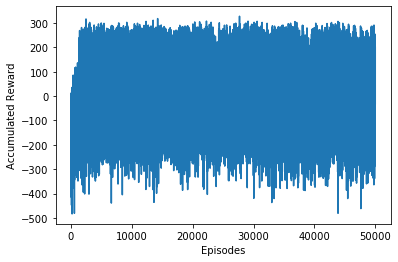

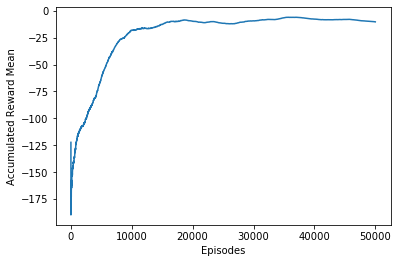

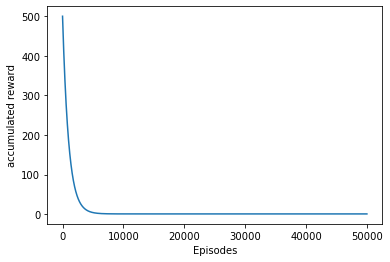

In [3]:
#------ CONFIG 01 ------
    #epsilon = 1.0
    #decay_rate = 0.001
    #alpha = 1.0
    #gamma = 0.99
#rewards = [-1.0963152109928842, -3.6170897067565577, -4.1813959658540485, -5.527948705348732, -6.893574506261982, -9.184325802561798, -10.736335200195665, -13.041061657905965, -14.72982323962554, -17.228078538522446, -19.055414335565068, -21.789687837270712, -22.934764930787217, -25.658361999872902, -26.783256202275048, -26.461650782435026, -26.305226480474573, -26.980362427253993, -27.184778201757997, -27.46162694370013, -28.536282527521667, -29.588860122194763, -29.835367761416098, -29.829842651739643, -28.906191976318134, -25.933642180547476, -24.048747777144555, -24.73349857731789, -24.625753704164353, -25.09649695459079, -24.682531890934158, -25.918847084950627, -26.325314689543816, -25.79705682758187, -25.930302289742073, -21.767037115120363, -21.96032171544579, -21.39584394869144, -20.639584098139157, -21.137856070597227, -21.027797546762972, -20.890109648014604, -21.384584193969207, -21.3589572854076, -22.178626458011227, -23.218701955381622, -22.652157684038677, -18.695643985936083, -18.272616870078945, -18.449155692466075, -14.746124553502113, -14.961648887052377, -14.478274338378268, -11.89145225111453, -12.805078627725903, -11.135273064879842, -10.022106009683275, -10.484990439839711, -11.902853365439928, -8.606210289441243, -8.85491185394452, -9.111090087071208, -9.996577358009493, -11.97634888746717, -9.7498975749558, -12.405256462786257, -13.95204804644898, -17.00829604792885, -19.688971225809254, -9.743756348093061, -0.9223797907505329, -100.92237979075054, 1.5057810823536328, 3.4585092929508447, 0.6935879361132562, 1.4338850767637792, 4.80027034728018, 2.6625938770373425, -0.22862805789225993, -3.483596094256775, -5.224364646088083, -7.535715475671032, -5.7899070702268265, -7.426041950974047, -10.050935460412965, -11.668388447673541, -13.68526691333948, -10.183067887961904, -9.29309334840502, -8.948405325066275, -10.184671948739846, -12.740901684967707, -15.201889829485859, -17.23132880225794, -20.04784425353936, -21.554304986495374, -23.086022663767302, -24.20121210529843, -23.170678873058844, -19.685094896628456, -21.754889151827044, -23.39431268537554, -24.98492389625882, -25.991594696432728, -26.76038728097832, -27.805482867437732, -28.432898792314674, -26.390720084611107, -27.71392820904146, -29.108220186893764, -30.751889689818487, -31.928008884731643, -33.640850235750605, -34.91080671828607, -35.68350601374334, -32.414584528868076, -33.96681851815627, -33.499498152858905, -30.806974250481364, -31.904064289031954, -31.310564722263514, -31.727434086475633, -30.344059103180935, -29.330231955146914, -29.480817802190828, -29.42098469720308, -25.688963355192644, -26.7845472926079, -23.583170153741655, -24.20492845495513, -25.487427761355427, -26.24849416096648, -27.748301149869, -29.263986151621957, -27.94822366579181, -29.74162393923721, -30.988086784120195, -28.154675729934326, -29.423874779933016, -30.67810865318765, -31.32360348033464, -31.799327637125486, -30.06746928138485, -30.45514305071085, -29.5549212414114, -30.54535896579825, -29.74067009079968, -30.381576563601865, -31.751556724924992, -33.44411462751941, -26.103274216847126, -25.439462186989307, -125.4394621869893, 0.47612817248969574, 0.6064285311089201, -1.5010830168065432, -2.4382538730145846, -3.4695838199027227, -3.0945129426356015, -2.794948606031295, -3.717137191192421, -5.206592870377107, -4.757647573954925, -5.270402248976778, -5.800411317298169, -6.345298345089132, -8.236767581062676, -6.435451877234541, -4.852164312782692, -5.448155880613503, -7.318171517567709, -9.624879237922885, -10.894920222018685, -12.174382317874903, -13.461128353186398, -13.841701741239902, -12.725229099333493, -13.49880797445882, -13.537465067726052, -15.735797635787055, -18.182968398546297, -18.3601590293507, -18.42212811316806, -18.099001304211146, -18.824042092263955, -19.544484761516333, -20.259010620885835, -19.7784449569718, -21.45398348982558, -19.238889457098857, -18.77029208357305, -18.477785540216498, -20.054242117481177, -19.774158856176793, -20.657051662395887, -21.112354241532145, -20.600802599771825, -20.852973425070857, -21.971393722915977, -23.358972952518528, -23.181521949961606, -22.811610995944548, -23.082163823463574, -24.308426421592102, -22.23919431342242, -23.635568604368363, -23.636651355022682, -24.999433824551264, -21.967687801280753, -22.13767086989744, -23.962312164326583, -23.967576404847442, -24.797809542450317, -26.762943753239448, -27.915542197126562, -28.02290532275088, -28.359315504895726, -27.022803712776163, -27.092667466163515, -27.220256675464594, -28.057722330838583, -26.578644789969985, -27.65630746919365, -29.66015678454687, -31.179196153645876, -30.968461241970676, -30.405299523959805, -30.751474280877456, -32.16937499358831, -34.34097122399293, -35.19342140462991, -26.98789909448093, -126.98789909448092, -0.3870871625188954, -1.4287571270780006, -4.046244544122144, -6.983656125098829, -9.179937707540088, -7.405653681242383, -9.82687713136896, -9.61858398156588, -11.368644589935515, -14.523177770804722, -17.86248115419781, -17.34949381246871, -17.426038724017424, -19.7525392008233, -23.248125203973224, -26.648864970321945, -25.463030171758785, -28.955899620313257, -29.727707099237207, -28.39925908743837, -30.753688087725184, -31.404494505056412, -29.900287748463693, -32.764944463909515, -34.84640592316974, -36.97965664498078, -39.46918682762423, -41.3082655543658, -43.05061523571446, -42.13084486614218, -44.90459461860294, -47.78481971440047, -50.18012813485478, -51.94785657203843, -53.44369427063435, -55.89665506818747, -57.32066451246783, -59.046639933530486, -60.24832242199068, -62.26571134378719, -63.822791502915436, -65.32239114293196, -67.38447542479801, -68.4756486078137, -70.2929623404641, -69.06938455528469, -70.53571789473646, -71.44698529322083, -72.16319597667497, -67.44872972488776, -64.71129468031624, -65.82866159837748, -66.5172423839014, -64.36910408107576, -60.662747986495944, -59.76274753925159, -57.91589072852243, -59.751850237691755, -60.926951307947704, -62.04915677288629, -60.38788601666809, -62.3354003504935, -63.09585936452885, -63.62198072957554, -64.47147316256184, -64.54348461642749, -63.02160656241729, -61.273304814172775, -58.377973578654846, -58.250549952981274, -58.51493696178015, -57.47000645150064, -56.75117556632472, -55.97660857365656, -54.780503836947105, -54.936171327865026, -53.805092920746546, -52.54303896402212, -50.989858558422924, -49.148741601296365, -47.77373049290958, -47.119596468218276, -42.459134411655256, -41.0119737169819, -39.937907899719605, -38.40052959804599, -37.05684904705838, -36.198789230747266, -35.73791753727288, -35.26984684536315, -35.21521928019881, -10.999606537167423, -110.99960653716742, 0.8262899133271275, 0.6245403668069627, -1.0319998192763877, -0.5941751735025436, -2.7904769034208643, -0.8191438161282851, 1.0104862936469963, 1.3805645025516944, 1.9703240178174346, 0.84397774416087, -1.143424549235614, -2.4126526834287416, -3.9869466226945702, -5.775003463764558, -6.920079770689734, -7.998378655894293, -9.749760828477001, -10.963114740050932, -12.048403146922983, -13.034853138287035, -14.725208746825487, -16.71260922334541, -18.238396265881974, -20.17823237266593, -22.345167879084173, -24.45694390628374, -26.2918684719031, -27.66697533070986, -24.551791603131566, -25.90029882213756, -27.862793891015063, -24.799733857935557, -22.905361682910677, -24.95463571944479, -23.654960972820675, -23.583285390233346, -25.174893335506727, -20.85550639884611, -16.71390267964753, -17.89711597084948, -14.060715520427223, -16.24441984292382, -18.387019968038643, -15.966569901791534, -11.683343317674108, -13.826934809497764, -12.70747529570026, -10.673035088526916, -12.688980974059461, -9.01728628063977, -6.71757411443233, -8.93633000288407, -11.630361675944647, -14.438763099544051, -17.372439883742718, -20.59231412457837, -20.340498213279226, -23.68744302464369, -26.504893979124766, -25.93716021213238, -28.302538577881943, -28.71230068476268, -30.837875334122344, -34.084472203557084, -36.05236245291323, -34.62225127547312, -37.81796214126179, -40.33062453737021, -41.323164185176125, -44.41604810380122, -44.26415449057525, -47.64283114764079, -47.85796312170501, -47.85141052270579, -50.69332119525002, -52.59609817996086, -54.44952607700883, -52.4269092926651, -51.59153573909357, -53.287165240736, -55.582999981959986, -56.939255977735996, -59.091699073198384, -60.61929442441114, -62.67416142811847, -65.54596117481019, -68.65817184741114, -70.06495446065593, -73.11834644839696, -75.42342140267557, -76.8074351686095, -78.10286532075695, -79.16367232564244, -81.05803363792197, -84.02082574975677, -87.39498285492434, -90.3164680827662, -91.93061227467227, -93.4108866197174, -96.57867883579574, -100.13991923268965, -103.08045402942348, -105.25963031320221, -108.3810472265878, -111.09800943498675, -105.7898985882703, -109.80415578474665, -209.80415578474665, -0.2584484480085212, -1.3621392277071596, -3.3955949117045323, -1.4210359392296683, -2.69688245309176, -2.0386674984863786, -2.425339109524563, -4.523139663322855, -6.812094428578108, -7.343614795249082, -5.004949139131131, -4.78923397270747, -5.405266414002975, -4.695453112161286, -5.092281388786599, -5.371398955154144, -7.754362776164124, -10.02296000634066, -9.348517601959099, -9.635074075768244, -11.015195136968742, -11.465330490423637, -11.237121183541818, -12.4292154796391, -12.545370190762767, -14.549433702822041, -16.88044425585839, -19.425204267930877, -19.99881997637159, -18.652599032187283, -18.65567669284376, -21.18797667618289, -22.73018636191087, -24.26835024221136, -26.086437123282032, -27.537849828671547, -27.86883638359283, -29.086435195491823, -29.10041304879565, -29.158423550443423, -30.671620668365684, -31.55408030832718, -32.41764892796639, -31.58700092210665, -31.912283856481608, -31.669746326850415, -33.38132178007321, -33.99098842923297, -33.542941526431434, -32.952716564301284, -30.482533972298388, -30.73433791293998, -29.871412525267022, -28.437145862727256, -27.388354285138412, -26.09691196402093, -24.850882550096937, -24.394851582155066, -23.942284209912255, -20.82947286090912, -16.79671428069435, -15.781006239487995, -14.53525273233899, -13.96067012902347, -12.097791426129039, -10.89772747782287, -9.353143486733572, -7.537503256304361, -1.253058883152507, 4.732011920563433, 4.6594692233856385, 6.1158708568574065, 5.9103300238572505, 5.154043957632065, 2.2373983931027763, -1.6030856397181612, -1.7445975438653722, -5.533583559506798, -6.063772912897298, -9.70733080774017, -6.878173031266836, -10.94690955790835, -12.028928362669445, -9.69379886704374, -13.610647471495724, -17.659457040568213, -17.045671819569794, -21.242725665171992, -26.07177367420714, -23.889754642711416, -28.390246360657592, -28.020811537023544, -32.99015312581713, -28.1269333822423, -29.219365139573085, -28.091665036621407, -28.76609989874143, -128.76609989874143, -0.41195337286850875, -1.0352379981240154, -1.053846345669084, -1.1545072880575424, -2.3723572355210045, -4.174417800412637, -3.6418349824203293, -5.56223092313703, -6.56864529055627, -7.68692777642783, -7.8418914351137445, -8.093283389465816, -9.207596516121347, -10.122515981098596, -11.25435657795151, -13.693969626191684, -14.177809824901823, -15.029311957332693, -17.715809648270334, -19.35482869066818, -20.077239226200202, -23.004245274408003, -26.291113484627925, -27.6657458100001, -30.768448280163806, -33.04791996951742, -34.06695963342847, -37.716058933259205, -39.325396622417486, -39.37009089747637, -41.330019909378706, -42.98510623094225, -46.59121603750643, -47.7575548075021, -49.33462712776959, -51.25971838147481, -55.0004939249051, -57.62797357764859, -59.45271721989653, -62.29593821730434, -65.77536427412976, -68.38156108373745, -70.98733253716235, -74.74773383084964, -77.5536542056298, -80.34945694425379, -82.33118335230206, -85.40512577226724, -87.83655355118707, -90.41439945862128, -91.71557540181637, -93.76047268479329, -97.05967388493153, -98.43737742174545, -100.70630677458627, -103.96283402797238, -107.56415568150663, -111.0214697183345, -115.39100157647741, -118.03167279636219, -123.45954603281804, -125.11732073546897, -126.61585910185376, -128.79046539592315, -129.84927104319937, -130.8906561590287, -132.59830855119213, -133.3312805312888, -135.8398612174119, -137.54064479601328, -138.16515860924503, -140.5099274287768, -141.02502465013552, -142.42416789612506, -144.90353436927194, -145.82892767893154, -146.41467964986913, -150.03275212486807, -151.46937948400097, -152.95284910425477, -158.2117791323322, -158.60207785478102, -161.37323568707868, -163.95915915903987, -164.80605152940566, -166.53535399935018, -169.554297823431, -171.09392691739086, -173.319381376017, -174.79055104417068, -178.06131128263846, -180.79027617352423, -182.94813780365513, -174.9009169853753, -144.10680312445845, -154.9977677297446, -254.9977677297446, -0.6841145111098683, -1.5431001310443548, -3.7253626975520135, -4.957936310987547, -6.266712402793074, -9.002172051485072, -11.947043388350489, -13.851653385032785, -14.554701919466588, -17.148406682291828, -17.63909485314819, -20.70666232308984, -21.28354405738054, -22.00726741956663, -24.94125455334509, -26.879696915544997, -28.834641993553788, -28.8725864266482, -30.03174936878229, -32.69697285871116, -35.47833575998659, -38.54697493064491, -40.84788224131158, -43.14001583884779, -45.462460701433386, -47.723831096437905, -49.96710812282693, -49.891045059350574, -50.92851208487819, -52.489101271551945, -51.84942222303209, -55.15974391407647, -58.602171708810715, -60.35548476647685, -62.72321739850591, -65.06869805197874, -68.21699171805221, -69.9439941593553, -71.3074201146094, -74.65404734682873, -76.22654137344774, -77.48334160277926, -78.78490102963903, -80.82342338947106, -81.70196174203153, -84.23447535222473, -85.25554443635839, -86.54153191936399, -87.48336137505757, -89.21428460561398, -90.9264302651703, -92.82607442889828, -95.57167675568836, -98.72239908813118, -101.80222833565658, -104.13518234088552, -107.06557011178418, -109.4266459436815, -112.92977780282003, -115.31555430180818, -118.82813540248155, -121.5117285077112, -125.39585051682833, -129.07212380238172, -131.42897598361438, -134.46726484679223, -139.57443180408185, -143.2449052159931, -147.82622109066654, -155.30969413377795, -162.94547657268964, -166.3799302063405, -169.82302959665947, -164.04879455483575, -169.23403770291182, -170.75106463418768, -192.5821211668738, -292.5821211668738, 2.0549163884794566, 3.799894650544958, 2.346795080418543, 4.081849298805322, 5.788283731177144, 7.439628746673817, 8.997701057270218, 11.374302485292603, 14.042122229549152, 14.228752856708144, 13.864239780375547, 14.004721775905912, 14.828336315421895, 14.214494611802662, 12.08996012596361, 11.931648116519282, 11.902729613401759, 11.951004805916833, 13.386974539746927, 11.868308164729582, 11.968951612255196, 13.27967793034534, 12.586414025587057, 12.631002991297178, 12.157417781047627, 13.122517094801633, 13.781221839458617, 13.721252926964642, 11.513906349847309, 10.140311630613473, 12.404231139010978, 11.021745578926232, 9.745360630788033, 7.712096999740217, 5.825669537362834, 3.417193613802076, 6.6107397915329535, 3.9687941861388416, 1.855060548158412, 1.8137493142771068, 3.948359937149008, 7.24688698877493, 9.584322942628571, 11.173883964319437, 12.39299276135576, 14.949048962159026, 12.951959303304761, 14.5703614469959, 12.310312699301376, 9.355913239747437, 8.88400644545305, 6.250035714560337, 3.640006745319962, 1.0693240242621265, -1.4542520842809132, 0.9849734840848408, 0.6672985975627819, 2.315244877046981, -0.41202456069427384, 0.9786592219000603, 2.2211377309339446, -0.669325830454087, -3.250590412236364, -1.2187190593228543, -3.816150905320871, -6.185084476981745, -8.256156918838869, -10.238352261791462, -9.457637457730105, -11.620080349309179, -8.831765694851857, -7.452072443546633, -9.644582029671746, -11.455150675212655, -13.644245308146456, -12.8931960184648, -14.615946026379893, -16.367605874062853, -17.747879462070067, -17.095462475835813, -16.291114075940754, -17.368121147135838, -14.987767989291417, -16.496592375544527, -17.783965453954227, -15.389449865559278, -16.414899073801713, -17.462248224156617, -13.330518796663963, -10.89831220605997, -12.358630891036695, -9.815050482978279, -11.000521395214577, -12.128069453245189, -13.197416118235651, -14.208358006151911, -15.618262060936983, -11.921399791409172, -10.934665515054267, -11.699539149736298, -7.351776017157921, -7.855292663447489, -6.574083993985631, -7.110458172406857, -4.516666422628157, -5.043568458696223, -1.6251947545043608, 2.818944911430293, 5.328296006123037, 5.0830462018249545, 5.158576896306228, 11.14965818622849, 16.475556825826096, 18.78600449605783, 16.658264190984813, 17.509605493909447, 19.980369464132917, 17.808072687228684, 15.630040762203846, 13.37221108753512, 11.309175820139714, 9.421904784051593, 7.760661902293992, 10.329923340888655, 8.655042907563258, 6.940029552076767, 11.121527597933394, 9.634822746972178, 7.996726788680422, 11.791069129978098, 10.239772419215997, 8.980447853732702, 12.144705230313505, 10.970183673832894, 9.972448112400814, 13.198677733534197, 16.22925407633529, 15.216875608680493, 19.471007721803964, 22.868697758906993, 21.561117130299923, 24.546954511528654, 28.783827947475952, 27.542619435773172, 28.63216750142835, 27.127654587607317, 25.423672384621973, 24.122468794764963, 23.099129456371777, 22.369297491885682, 21.884268146175692, 21.395999872756597, 20.672928638862693, 20.32051443799626, 19.975696812021887, 29.309367435135194, 34.114089278528446, 33.75668191511259, -66.24331808488742, 1.3642630032524334, 1.8362949674484252, 3.421642814738052, 2.9817084747070943, 2.3680997960503456, -0.1531515977648059, -0.6327933083925832, -1.6268337773165236, -3.236013785484352, -1.8315901487295372, -0.7069083469792798, -0.3843560984193215, 0.7570044657256261, 2.0950314053232244, 2.455905231581026, 1.7177211327201853, 0.337698988970772, -1.903057463202162, -0.9476663100408171, -2.4023108339576567, -2.866523271068999, -2.164297092593542, -2.6086098469350665, -1.9743841006545446, -0.9938679180799292, -2.2839330308720776, -3.8457202219740614, -4.083666561946204, -5.809771875239748, -5.084430896334968, -6.884252268973827, -6.595597374282866, -6.545327179871909, -7.478408876713321, -8.453772710259859, -10.666968321170957, -10.990233284148601, -12.079818591110595, -12.077223026158903, -9.983833590423387, -9.018649133621768, -10.727050788200971, -12.595470476567655, -13.127918683644323, -15.263871160567941, -16.540943635777705, -17.808428295663656, -20.068846604724722, -18.807584661340428, -19.923694435375655, -22.2234148110271, -22.826635135878252, -25.168952941682893, -24.73613673443993, -26.223894298820746, -26.990768101376467, -27.21843925283796, -28.94978884767807, -28.521180823142057, -26.66487167095731, -25.69158730740398, -24.089664756247224, -26.110189995160788, -25.249382216820845, -22.92537302868135, -25.304613012643642, -25.255149508289254, -25.74140248397622, -25.799116939886467, -27.82559476377981, -29.208541720902737, -29.624988955991007, -30.196040519263757, -32.464472225567924, -33.79727739365574, -33.564989261845774, -33.907271666390194, -33.50703106519921, -34.65746019308204, -36.842805051140054, -38.19665020539036, -40.697482427124406, -38.4349353925685, -39.16339312356376, -39.068087412469346, -40.08980901129946, -39.302204625253744, -42.15332096651573, -43.54331740293026, -45.49449415347318, -47.86286918248532, -49.79144038154424, -51.75437155811385, -53.75646504852289, -53.25283308463609, -56.69318015890048, -59.169855629296144, -60.828488570531796, -63.24579786903528, -64.64431852720614, -66.05469511037519, -67.62841456858156, -69.55590232871282, -73.21459830913452, -74.93335788934269, -77.6058556997969, -69.42604503265663, -64.382917327412, -62.15733399771689, -162.15733399771688, 0.24793955413656477, -2.192587684421585, -4.729233848506942, -4.495139693245994, -4.292980049259716, -4.129543619338312, -3.1055864891821487, -3.995065386905626, -2.978485056245634, -1.6459525108065252, -0.2684181440699267, -1.0857047494413614, -0.9946365401401913, -0.08857540406230946, -0.02417295178258705, -0.31537432800179593, -0.37165494925660986, 0.571963453728145, 1.3863928123158058, 0.4897154181436729, -0.7348323565927337, -0.9773826143292019, -0.42255586797321554, -0.6823801457981911, 0.2987073636091411, 0.9211251794720412, 0.8412363206418392, 0.6989072472757258, -0.5488173411776389, 0.19183930464420573, 1.0394055432150415, 0.3279463741161126, -1.2041422931944894, -2.904213268177367, -5.8559546774678, -5.089137631253261, -7.589473892227881, -6.007521095521338, -7.4728009204284085, -10.125226663593205, -7.740646813633842, -7.919070532619699, -9.995940441361412, -11.781785994027855, -10.644193811093489, -12.600143555453116, -11.682921071559935, -8.98588667876107, -11.367099726052095, -11.464921653970828, -14.015808496752094, -13.441173515423213, -11.316779878525153, -14.460875743308321, -13.00695266560918, -16.15259466410983, -14.066036656324691, -17.485993192244372, -17.099391800928, -20.241765176637667, -17.971440588530825, -21.04460257639137, -19.51681137446562, -19.501564716036903, -17.03291733423266, -16.85452454555673, -14.33669092769846, -18.16143863957139, -21.57818965692518, -20.523342671374344, -20.90058791401361, -23.400204355457188, -25.954353212105914, -28.047302079737054, -29.837921081826867, -31.39236932707769, -30.806629958176693, -32.044999560012606, -34.23077163784965, -36.6635913406975, -38.629701361658924, -40.56547999585148, -41.56725229353402, -43.42212819579954, -44.49688762893752, -47.15762752194491, -50.08996828491079, -51.026047974574745, -53.425603691555175, -54.104325049864364, -55.18085452599471, -57.382664033418, -58.836374066556836, -60.609973141110565, -61.96010327265801, -64.19003150702365, -65.56594544397407, -66.00027666172997, -66.23082980704524, -66.39565567041393, -65.9451472355772, -67.58761492328617, -67.06059178530154, -66.42386453744513, -65.3319322784782, -64.21809476647519, -64.75205848405665, -63.74851393902429, -64.15986192761696, -62.89986410250998, -63.4572434088096, -62.08473927981552, -60.3407131038534, -58.35840367245376, -56.81007256495606, -54.72373799306554, -52.49007593499654, -50.75603556407374, -48.97583449634665, -48.340619567649426, -45.627927789761344, -34.30325819441528, -31.15051438930053, -131.15051438930053, 0.5558267010710949, 0.37341575699083585, -1.4766719999391615, -1.2554190313422033, -2.0174031965210055, -4.102603526230924, -5.193189044470161, -5.487189388066526, -5.611175420439366, -7.636365905542474, -7.932710550934101, -8.907740500928977, -10.997122754153816, -12.188817787144979, -12.607328662797975, -12.64295695101301, -12.663301887759292, -13.250370930220658, -14.433957539753964, -12.14885828302167, -11.965299216977373, -9.6212109976742, -10.94128798552835, -8.404901823861682, -9.214349027443692, -9.912123639826408, -8.020325193679945, -9.396034170244112, -10.223879698124554, -11.813026818422816, -12.312087470713907, -12.516115512172846, -10.696675367082012, -8.00291008745372, -8.709262571234339, -9.933201177260532, -8.364141452397924, -6.809798073884674, -7.801378588192302, -8.147199076124984, -6.931267291225292, -3.6957301399035867, -4.42846112791821, -2.3847435653637357, 3.197535889791336, 3.6758225994463567, 3.0792230281844954, 6.940226037628853, 10.906365824060519, 13.974811616002071, 12.765566608325614, 11.587598652066347, 10.21976469325192, 12.00301417241502, 11.282679094368689, 13.774765371401468, 12.630463761433601, 11.232070566493219, 9.63870810976833, 8.521749399561529, 12.647027222613954, 11.407888120671199, 15.427011836176355, 17.039625281001253, 15.680250752418448, 17.33282515958402, 15.910459449299198, 16.883705670711507, 20.02683087856607, 24.269889640103663, 25.126700273299935, 29.1070425455012, 30.359518484406788, 32.57000581554134, 34.4420663030152, 32.21766255111064, 36.22033393338776, 37.77513851763687, 41.59490357003269, 39.274762143466994, 36.90601243190863, 34.413759013613905, 32.01453915624261, 29.427118618052496, 32.53718460946997, 29.918681889919817, 27.399671918679225, 27.844795220628686, 25.016937608760845, 32.16654959687306, 34.2037141514485, 41.70913971285635, 49.67319846495803, 54.39252673737807, -45.60747326262193, -1.2406842612816888, -1.8050501138015307, -3.936957559746718, -6.260080700509296, -5.718251670869709, -5.4999988694902155, -7.042885811769937, -7.867027938325608, -8.757299548030945, -8.184260274203572, -10.118568492878968, -10.29728663827588, -9.94953808836091, -10.545218068049085, -10.340907640278575, -10.948444311576965, -12.787680444917697, -12.672082976967912, -12.252477132917047, -11.753296467631225, -11.37488973173739, -10.649953428010397, -9.95556720887787, -8.940194160113991, -7.926300793532236, -6.713205188781089, -8.626882681183204, -7.481054938217173, -6.828007064219937, -8.921269974821929, -9.753181315250806, -12.560543932049576, -14.985800320015846, -14.999275393370562, -18.262186195362027, -15.059552134816652, -18.183965703972216, -16.201598853655895, -19.136781924443767, -21.486420516401267, -24.064205611363178, -25.937744683125402, -28.11290151336445, -27.59449779862219, -30.070224462906754, -32.77020743420836, -31.82551505148027, -34.475619759500404, -32.23384157124839, -28.59669694262084, -26.15645757174655, -29.053071310796263, -32.14585448962355, -32.76311117208281, -35.792163336403554, -39.054037536741454, -41.96485914016922, -44.84874668994156, -47.411239278389566, -46.92892346837984, -49.878505973802696, -52.579451680152026, -51.799207807989724, -51.230094582997275, -50.500001726210606, -50.79526288386409, -53.62884202331116, -57.17298889513972, -60.7008627078662, -63.17187284474502, -66.6031427613146, -69.03446823484974, -72.40240260482308, -74.74093643964865, -74.52664271302217, -74.57481034104823, -78.00449030373234, -78.74214772859847, -80.62809606641898, -82.2315938904913, -82.5300190284173, -84.9426649521506, -87.39685675179747, -89.87592337297, -91.3738238895682, -92.65545615418998, -93.93411976521355, -86.96144769667026, -89.3292870573942, -189.3292870573942, -0.025423583976589725, -0.12105551629448996, -0.262298351659922, -0.4556781900782312, -0.7057152909269462, -1.016531061395085, -1.3916594851150705, -1.8339836690145432, -2.345639065706905, -4.563133395411529, -5.0650715973002205, -5.635628760124024, -6.274665878726199, -6.3127122279391354, -6.118834941025516, -7.247471324841506, -7.8978298467941315, -7.520932678190625, -6.796033937341852, -8.418744413648643, -8.853888092252653, -9.950082602711912, -9.58509581482086, -10.151682838796873, -10.799533407547514, -12.752103284398357, -12.796996099503627, -13.636392460525808, -13.331752012872167, -13.089476777284856, -12.944646881086921, -12.593309240927278, -14.086490781003526, -16.03891378814233, -16.150563494656687, -16.935112348409994, -14.760324151869849, -14.31887251232889, -15.862914791699502, -17.506714078505304, -17.39897175996745, -17.283330039539234, -17.98726739541399, -17.689486386598926, -17.740223390352625, -17.217121460136056, -18.405361034719377, -18.59321235079671, -17.934685806583023, -17.317788598680497, -18.373697951917794, -15.560154230027557, -16.624077450600787, -13.97350622684932, -12.384769147996195, -12.650834597615614, -11.704177469190672, -9.347516978840368, -10.484870099802015, -8.300220562094374, -7.1267716036669055, -4.349528460195186, -2.6161220395946296, -4.242381086067084, -5.6090939184992825, -5.381391675801195, -3.2008472362189773, -1.8979672518634525, -3.492817386209526, -3.099391070195656, -2.3303478909918676, -2.0736719431357855, -2.645319637844999, -3.414574703914705, -3.0838792387082297, -4.417195020343294, -4.215343763015348, -4.611654964930416, -5.931336128543683, -3.5713135955430406, -4.912544106316624, -2.5864684623081295, -3.290577134463785, -1.7988045557041794, -0.8162407670743499, -0.6131803667152138, -1.1619105272018129, -0.8182330544407108, -1.2147984814715045, -2.297181177744007, -4.2117526513767265, -6.149503888118303, -4.531192824068883, -7.151719163722163, -7.230474461967918, -8.838669328300783, -10.911553129500861, -8.865346460927388, -11.39212166196785, -7.762844971548977, -9.357926132172185, -11.22949157154112, -13.435604247967447, -12.955337889968892, -16.00328812279489, -18.52682254728234, -15.355236532205446, -13.996212837187851, -16.947458032770367, -16.007289089747502, -18.870646314617176, -21.384620067436515, -23.972828493513816, -21.605129633420848, -24.303307621655723, -27.37493898740961, -30.02839774794315, -32.98237043216635, -35.848456878361546, -28.17970814879122, -15.563047371809843, -115.56304737180984, 0.4812159904838904, 1.075244043107093, -1.6249650209544915, -0.8249497048616512, -0.034058766036634935, -0.7152614269650825, -2.9862132398311303, -3.6950625291458037, -3.783682390133566, -7.0777799515977105, -8.118979668572369, -8.430548880187647, -10.10354020996249, -10.696102991884375, -11.30627149522124, -14.203887413198704, -14.814792082441688, -14.501034832910522, -16.113227553365178, -18.87158824503962, -19.61386634354483, -22.719158627371137, -23.529553372082937, -28.922847898263438, -31.608311699839902, -31.213159416664155, -30.494542252662, -30.87241722065167, -31.277152658947813, -32.755812922362, -33.41383332313717, -35.4930382295876, -35.32819478123412, -39.22930541655016, -40.00357970261102, -42.603931030967004, -43.435504929036796, -47.7787569833891, -50.38048160412893, -51.22600538400695, -50.85726459016186, -51.528660558257826, -51.19023333963116, -50.44086986874592, -50.782627841026994, -50.28732560689792, -51.64129213212196, -50.814785711335745, -50.02156599092653, -49.08579084707539, -48.93280296912111, -47.89550776522508, -47.636766249048534, -48.74132879697096, -47.3825260240926, -48.731899242687604, -49.860654359294244, -48.47910109693518, -48.252006613113366, -46.85319129155744, -45.53624217566605, -45.93299774890386, -45.55326039923813, -46.546517029023704, -45.385419254436215, -45.91803294978982, -47.04931309657388, -48.16770541313346, -47.632652458674215, -47.73389110693063, -46.93460293529577, -45.62412241198302, -44.33405344271526, -43.82501284279684, -44.13711375769208, -43.7661945408542, -42.43326400237558, -39.36415257464826, -37.87521998914559, -38.084208454391074, -33.79605583942778, -31.524638438159915, -29.84603013944325, -26.923929241385604, -25.25117461272356, -24.3246222926073, -24.797660010306828, -23.98064769428362, -25.828048096487578, -25.701672469258984, -27.23820429507494, -29.31049906087704, -31.012739152327743, -29.84122274726858, -31.6643431160062, -33.922689846886534, -36.61130649164861, -38.94882455923818, -36.93155195221646, -35.0281585821301, -37.8123076553402, -39.46195081736089, -38.24600901103495, -41.47207430234864, -45.311977769137606, -48.643213740821786, -46.483376477678824, -50.01926999217982, -53.27774510849243, -56.424822221338324, -59.31926723897126, -62.07423041476601, -59.996999702344546, -58.88167073278773, -61.64463910893095, -64.56782541293292, -60.91393090597029, -57.980415824834026, -55.89218839064458, -56.21277671815399, -59.35101879381499, -57.43222281149414, -57.92711043009986, -61.03035355672638, -48.310373822232066, -35.45043747426364, -32.75756081460521, -132.7575608146052, 0.8605494075890487, 1.9798597607124315, 2.221948382962895, 3.6308694166533577, 5.181543378748846, 6.603878164479687, 5.517424865588043, 6.208517673311735, 8.00540900073948, 8.573595978027432, 7.876426529864309, 7.750851114017187, 5.93825860243836, 4.979352341497467, 3.1209797760650746, 2.7264766527803257, 1.4790859331407145, 0.8607203443116085, -1.1894626972930487, -1.2632014760582413, -2.875853203302568, -2.196451184173741, -2.9547649568158976, -3.8855974920197447, -5.8776286625469005, -8.468166886627957, -8.528611873964214, -9.779278747092537, -8.887417266059863, -11.087998174463003, -13.36142439548292, -16.23387966836905, -19.022089332002743, -20.343633715051517, -23.107186979180035, -24.72600477431613, -22.77752384573017, -24.676086510299395, -23.68049413493425, -20.150883829335758, -18.36394080855606, -17.614404939539394, -16.406051582763666, -19.518923608442122, -17.18341611226005, -20.030159533406238, -22.875167584307423, -20.1321251860795, -17.158149714187342, -16.505012873434694, -19.898929349434226, -16.13528739347277, -15.470609193007014, -18.48143172936755, -21.30541877880932, -24.593305761999396, -27.635191829422745, -30.129581613186154, -32.832035909003956, -36.0927053428231, -38.396464558840925, -40.939247875542854, -43.88351706208004, -45.982713849449844, -44.55861619574063, -47.53345057788429, -50.08258220478272, -50.395842251522105, -52.287795903539, -54.132541741896624, -53.10140446034351, -52.19999657488386, -50.99411726175766, -49.61622666451509, -51.46338299210692, -52.66957497092934, -54.76622176311161, -55.99813331305025, -57.82874674931134, -60.19838260004341, -62.815864447036695, -64.70880766730892, -67.7445412317687, -69.69576465423661, -72.7048328363583, -74.06916977490906, -76.27129581211331, -78.45337415785265, -80.53682650432296, -82.68974232415667, -84.8043737327261, -85.74972060317796, -86.36125894275744, -86.91863256888624, -89.10463154082066, -89.56391820847696, -89.9585146397884, -91.96864053610014, -92.35313823100051, -92.33521625313077, -93.13506254364917, -94.71582130038625, -94.51293049237775, -94.23855704391006, -94.48854641075967, -93.53070681895271, -93.39539765761806, -93.21056130213931, -94.91156646114575, -93.75449125738945, -94.04862783947198, -92.4637979990828, -92.53916311207223, -92.78832378202057, -94.69747477923228, -94.05057805653526, -83.38039093729539, -37.80827747816558, -49.498095905678, -63.18559930433845, -77.3606291420039, -94.43253863033291, -106.66960130893563, -206.66960130893563, -0.2736508553784233, -0.8134501729450552, -2.930838677368016, -5.012302220365981, -5.635360746591699, -2.992891145876457, 0.05388518570209655, -0.32727423052243654, -2.0534713083659866, -1.1222195121346246, 0.22017144051557835, 3.7743121026398585, 3.2609415006337397, 7.006113241628756, 6.667547912043844, 7.635788320818361, 9.574731510739023, 8.56227757715727, 7.548674702888329, 7.3829934655981715, 5.774430226620222, 3.8199693525590535, 5.930261260910493, 8.557467445274945, 6.544270460247313, 5.24835566716636, 6.709221833249038, 8.295152948310264, 7.986237328750382, 10.058952208156414, 13.83269634555171, 14.40346014493549, 15.392202563251736, 17.49865513576575, 18.928857907036146, 17.73902302751752, 17.57142504091216, 15.375132212062669, 17.242522807683287, 14.849881423846343, 13.399063204883392, 15.437841168120926, 15.511685144438129, 15.177314147265035, 14.462946638286335, 13.358163009553104, 11.459645616954571, 11.036977869795534, 11.837945582653953, 11.864462180495257, 10.805787236720226, 10.450737754967015, 8.802857838101326, 8.879653570706486, 8.688043631706783, 7.910550149622956, 7.81472850640298, 8.282409378405214, 8.711653330677986, 8.534068492125495, 7.393912336917876, 6.258294868479224, 4.982696649188141, 5.100623374254212, 5.277608158927479, 4.978033763489862, 4.688797405565027, 3.5172873079664857, 3.854494771777726, 4.164703397794003, 3.2447937436993515, 3.4579205575208563, 2.4949476590495365, 2.0922198615863365, 2.2805265820466416, 7.49462816070143, 7.637210739045336, 9.786356940368737, 13.88820615686457, 18.067649446182312, 16.657144223919854, 20.61253067280945, 20.19218532221607, 24.313856720909815, 27.94538416130669, 29.213242650744643, 28.3634208616591, 25.831208469948386, 27.669532808761662, 29.72036507414687, 30.07228440255926, 26.746324178165533, 26.434861668730356, 39.84467049251221, 43.98048792099918, -56.01951207900082, 0.8779356247989949, -1.4867019837416124, -2.089619108714918, -1.3397753441833833, -1.4338286962698452, -1.5889926884454473, -0.3900415340073118, 0.9332589076553279, -0.02960317882862684, -1.2359671975051072, -0.4229195496898104, -0.4120750225504697, 0.4468079917219392, 1.4967594986726316, 1.6462885896408896, 1.7387618319678073, 3.024583640429481, 4.907134105390279, 4.1433390336550335, 3.9857307006446194, 3.232043366529574, 1.3928225283629214, 1.3531873960158642, 0.13686886833726897, -1.0844096253436013, -1.7991182450765886, 0.02967768103312851, 2.0722440622042675, 1.630975640926126, 0.17775548596762492, -1.3157037385247046, -2.290960788176406, -3.3838413982506514, -4.979433610433217, -3.5329446234364648, -5.181518527199188, -6.9771383487435115, -9.626614140897363, -9.491454946240431, -11.731149842840813, -15.176393510158764, -14.70937675647911, -11.106722258203643, -11.40425110384004, -7.963077297110959, -6.786668649896432, -5.700388324831629, -8.538783405428369, -11.631231831673423, -14.34126061488026, -17.269870072587555, -19.672099029578096, -22.39169633951808, -25.052266263997854, -28.1140584130837, -27.137233909843083, -29.928436228138686, -32.853258473324594, -33.12607877959808, -35.89567197685357, -34.999439729460796, -32.5770656786839, -31.94233305339294, -29.485887498788884, -32.89974202844044, -29.85877363152601, -32.663622219075776, -36.265600773730355, -37.07652061941761, -40.23591864769938, -40.210877144494376, -39.31759828540021, -41.55596446659973, -42.29035082722079, -43.84437157805232, -45.38688968317018, -47.657287937934456, -48.99958552124829, -50.959929432857024, -52.8726916207539, -54.73730205344947, -55.8384407698681, -56.55876326007541, -56.70824058352106, -56.23945504329174, -57.95849538520811, -59.458760332834885, -61.48852464837154, -62.493738885661955, -63.658538680712255, -65.45016587027808, -67.48139782114323, -67.31109764134054, -66.87446489797641, -66.47438297310849, -65.71338166071799, -66.63692141592377, -65.78474728072162, -64.48186922221863, -63.012030410097296, -61.267552344738064, -59.156097907792926, -57.018705578331364, -54.599836332759494, -51.885235118001916, -48.78294175852504, -45.77758913797551, -42.371790009029624, -38.93144280850227, -37.166172401009064, -33.677792413152915, -29.853198786949847, -26.11520020314346, -22.109134998778515, -18.21242288014419, -14.32911718150565, 1.3374739822617396, 14.033799210877815, 21.992673117098576, -78.00732688290142, -0.7898793815933232, -1.7287585789946434, -1.8314801675757792, -1.93964311201775, -2.8477151681360215, -4.115589064176054, -3.8663775983774005, -4.622535414876243, -5.411008040640102, -4.990841706737476, -6.764352151002404, -6.6127342484680485, -4.943868640522432, -4.697231464445259, -3.374746913917358, -4.001024181877892, -4.177727963254711, -3.9470411395512586, -5.872888008411334, -6.635697863809438, -7.550815631314592, -8.30200822620425, -9.079937999670179, -9.88166627481975, -9.81040085917739, -10.753979681215187, -12.582904141853675, -12.492324783677956, -14.273043510748632, -15.145066246600347, -14.241043787791156, -14.242822241606445, -13.932458347625282, -14.880656826979703, -15.367525961963793, -15.854628236280632, -17.198822934295094, -16.02468111884595, -15.45662306168508, -17.04571486350089, -16.199146016007607, -17.911517068166663, -15.632533857748022, -16.845079574815838, -17.698917265763992, -18.549463802612404, -19.395586633594075, -19.338830073563752, -17.757041495292725, -18.184363721975433, -17.310043509052043, -17.762864780592817, -19.38616260669883, -19.25400201348054, -19.126164649799787, -20.665193729976803, -20.40704030110771, -21.979584947210295, -22.68902937582379, -19.491762242327, -21.23350600195171, -20.453749678479287, -21.06031816381465, -22.01952610557418, -24.14318216040342, -25.362706954150575, -26.605470232313785, -26.1726933259563, -28.552108698534692, -28.21160042318897, -30.83812882247443, -31.95533187040444, -33.857828590281244, -33.99074779131641, -35.19307358660279, -36.429325533715954, -37.381432506147135, -38.607253858338055, -39.49780042360533, -39.44244318583573, -40.31487294028226, -39.758893946661686, -42.67755113274956, -42.10362146466839, -32.71914898824781, -25.049734066153007, -24.404359959252844, -124.40435995925284, -0.7075235972089604, -1.8019493594618416, -3.269942987538368, -5.1191520199371, -5.024720197408579, -5.681382837594606, -5.497950421203535, -7.210483519714579, -8.013244159983195, -13.73710887317402, -15.355207079717369, -16.325399603710856, -17.334739451839575, -17.20905894188838, -18.075899465970515, -19.9346164383608, -20.219680618978437, -21.251472713114772, -23.70954640567846, -24.062155982260442, -26.3579615056286, -26.49174450318319, -28.73846070080021, -28.854226419875012, -31.14227698492099, -34.15413456314901, -34.742634967764, -35.14019636222441, -36.64018372420595, -37.332756151708175, -38.75975591779898, -40.21955371228402, -41.70750062089551, -43.218908540264444, -44.74926478797145, -46.29415287574566, -47.84937868026558, -48.44476088571526, -49.049675456358095, -50.478785378728496, -50.940192817474006, -50.98607048020386, -52.899492299339464, -54.49299094929979, -55.59384918335372, -56.68294758808015, -56.407620895128325, -58.66264847414326, -60.92786118945964, -63.36794741052879, -64.81188505966455, -66.10832521941315, -67.52387580490456, -70.23569727922954, -70.63389443305688, -72.0082691185673, -73.36634107476239, -73.8554762756123, -74.03650874911831, -74.96571813505047, -75.03484271476457, -75.7485757105013, -75.28046675668391, -74.56582407572647, -74.73020759930499, -73.8013140156087, -72.70357338129911, -73.31166913203903, -72.29368811410926, -71.23722528317724, -69.6005282647511, -68.13032848132725, -67.1743790282135, -66.21698382354778, -65.26242483236071, -65.06414402711395, -65.18612655929554, -63.49590978038441, -61.34492195459079, -60.14717224228481, -57.43514431814617, -56.19006767381447, -55.58153330979249, -55.04353678411647, -54.58738022513856, -52.738418878703115, -51.47244628563571, -47.51411145480742, -45.407714110604715, -44.69095715149972, -42.83349606989887, -42.258817092162076, -32.33338115612557, -22.368652368371414, -122.36865236837141, -0.14381816894135113, 0.5928487637305591, 0.2718382298252902, 0.9258717784689872, 0.620667432237908, 1.2460770949046638, 0.7221354152329955, 1.5706663730580304, 0.5898826968277135, -0.6797024382652821, -1.5178681048298588, -1.2647524710966596, -3.4461475602035296, -2.866876657619632, -3.6492192264374275, -5.383238800459683, -4.798186968205633, -7.291589303079084, -4.478008279136085, -3.3773517754244686, -4.202198009184765, -6.519708534386092, -7.881695408833672, -10.202018931618305, -12.063901520525086, -13.630096966451609, -15.26237343870692, -17.876943325133528, -19.69426698428673, -21.729106277329794, -24.380323804603922, -20.339842866504206, -19.485493539608196, -17.160187695275013, -19.61165605546269, -17.982052053911307, -20.01433155983921, -17.89863277668632, -20.180479591090823, -17.374515228986308, -17.496771211650838, -16.399226751977682, -15.01632228138471, -17.505581133248576, -19.742683518818076, -18.61819880447666, -20.840741023117968, -17.997311361098767, -20.53357035949638, -20.10367787843251, -16.93522775028429, -13.030048331606292, -15.40935247552117, -11.878709012871635, -8.911065704311298, -12.088697636585847, -12.397866277994298, -15.895880180686305, -16.94740317783432, -19.132294706889258, -21.04538226495926, -22.74953366015622, -22.667794184584473, -22.78114370605189, -24.286823800446538, -26.077048499121528, -23.96813284982089, -24.03548281674077, -22.395951227231784, -23.359500777767344, -24.13563927534667, -23.806057077017567, -23.294421847276, -24.339512932652724, -24.638770379873364, -23.547120371233536, -21.920030272954314, -21.82300634462718, -21.612246561076752, -19.26509859894855, -17.676508040594783, -16.81542199222558, -15.522720303352404, -13.561561716612339, -13.97050141553486, -12.249029240265921, -11.9616501525857, -11.651588060465949, -11.030136399519959, -10.562753812630545, -9.17690813374372, -9.48550847437283, -5.761643249704417, -3.157113819522806, -2.660305299284886, 0.6951329366985535, 1.2556621819374927, 4.4191313744961125, 7.555879376323822, 8.901578281932917, 13.722959562655092, 17.189367494011588, 16.93890690044149, 18.33606444831002, 17.85432654380994, 16.957306888540266, 18.2413724096528, 19.41997411843623, 19.548697560534677, 22.630679820864312, 24.905053031967277, 28.410207226787083, 28.40078355110946, 30.201145899567962, 34.71330090947096, 35.489444679693804, 36.389806546767815, 38.41541311843284, 42.26817440569444, 40.499348838544435, 41.82450422412438, 40.2317256915821, 38.58503528424963, 37.27776897874055, 35.33562640656574, 33.740184604164895, 31.44877240341647, 29.515468815438197, 27.089218987303667, 24.857036033636245, 22.021961704205832, 20.48922869204987, 21.020081797239545, 22.495281133614128, 23.09998742064786, 18.775222763162116, 26.469583173490086, 30.81779976004245, 32.440929312745425, 36.10171387268174, 41.0058678721108, 43.69701437094622, -56.30298562905378, 1.7121462804831549, 3.2906555988141712, 2.1619271224102894, -0.7303210213449098, 1.224289665828761, 3.2037159271863205, -0.26459139158497713, 1.7502150814892534, 3.8168731152425526, 5.933701984755979, 8.094167686238913, 10.28600468523093, 12.481454075079379, 8.302790244431797, 10.468407698117254, 12.554670333021186, 14.348856534466385, 15.210979032548344, 13.277640194709159, 10.556368228823512, 9.059691942828833, 6.613245231352293, 4.646017932642024, 2.3424555265494282, 3.5803087319157036, 0.9032258144181475, 2.455686726316509, 6.450740539612446, 5.8798131979299235, 8.632545839278777, 9.304231925477449, 8.445983571714079, 6.973146148472423, 6.939553773744134, 4.346113325645744, 2.392300641282871, 5.091050415445674, 5.419394169787971, 6.6696698530414595, 4.872461173260921, 3.6112047585646163, 7.2488815601905, 5.884057963048168, 4.037866509183562, 5.92115251838547, 8.433419987773744, 11.03045206497347, 11.999904393716413, 9.539291919552406, 11.15373736535283, 8.714260234357646, 6.768654174679561, 9.71729646768549, 9.664744513773869, 7.248725749544763, 6.278204643578618, 5.209467681861071, 3.3476818587125763, 5.461927819736144, 2.4935723304722743, 1.3248212648359712, -0.08927389631955718, -1.420645558029863, -3.3006206651845122, -2.9225229760159452, -0.3800998204100168, 2.093629527677341, 4.505090818142394, 4.321459027933627, 2.3579976132144225, 3.7828710326688624, 4.892689715804034, 4.5139698709874905, 6.216398472264991, 4.270229912580796, 2.0122937725224213, 2.1380357489192003, 0.5799550259751736, 1.314192693900001, 0.8472417969840698, 3.5688763410314146, 4.624332508706799, 3.2268469475971804, 1.6532168087871062, 0.916748995645037, 1.5417982326726305, -0.5991125672791653, 3.06708567687178, 0.42882124265937893, -0.2818491761797104, 1.0437825259066273, -0.9336532582289947, -0.2306123144908525, 1.0072059071387542, -0.04130554352614868, 1.2406449405704034, 3.898662103237977, 4.85182356513706, 4.843977952954536, 2.2540039848029267, 1.214912919411894, -1.4217783045966346, -0.41885693157750303, -2.4997218047298677, -0.8225347089637556, -1.8242781291495906, -3.072578962823669, -1.9974314211200996, -4.912851046001294, -7.879141569166279, -8.322083841229688, -11.657653937084051, -13.542943468600143, -15.96582522977171, -19.279877131737024, -18.959551943864174, -22.33597331045448, -24.450636741022212, -25.400354145249302, -27.890227084498854, -26.454800991821582, -29.813422639541027, -33.47774154940502, -33.92536764773663, -34.32509216053314, -36.06398954994676, -37.70083272944262, -39.07415558661955, -40.90596610917354, -42.06723662473022, -43.13057202605669, -43.722615676255664, -45.28464692332762, -45.208823405634114, -45.72191783629747, -47.11280206823934, -47.21618769306304, -49.64875909549114, -49.244864323338696, -49.919812880179784, -50.39296723926815, -49.411074148694446, -49.764348097394624, -50.76043162398066, -48.47362215069287, -47.07815641675382, -48.649876375472495, -48.49947323521953, -50.01660648730503, -50.873137100769036, -50.45959321081285, -50.34371483955437, -49.5421201739102, -50.120520101341405, -49.79919595727082, -51.33235597390688, -51.06631007685686, -48.449805534462946, -48.44989318651306, -48.70918386273457, -47.337194918138685, -47.6973298886032, -45.822109430956154, -46.12006533383924, -47.312935349595215, -47.84114593692643, -49.48904334905739, -49.99968492129208, -50.70164089455242, -50.226160709256526, -49.81806866776626, -50.55802036411951, -50.5027658858239, -49.7028843477787, -51.47763205071015, -51.18191888499748, -48.817851706063955, -49.108174612139514, -51.121727345867036, -53.38097944791621, -52.8861439865402, -54.271789977575544, -54.051694666879875, -54.426097416980944, -55.80108499774831, -55.28723285275937, -56.808371108283474, -56.55512918573225, -58.23199525935669, -61.198380169330214, -62.32610675153021, -63.440631009194824, -64.49837700478443, -66.54702392592678, -66.37886392865252, -67.46727822470629, -68.38641837794673, -70.31214979565388, -71.1404869163346, -71.81352856709876, -73.66136894548752, -74.33749724040756, -75.10489102508289, -74.78153795059816, -77.55437716852026, -77.9375452665521, -79.92841152704831, -70.88124905673176, -170.88124905673175, 2.074698544152125, -0.3816627573800857, 0.2129957333850101, -0.7202164474096295, 2.189327010894638, 5.385745485107966, 8.231512172856785, 8.497327987465567, 11.358602641090723, 12.936667425756276, 11.714101711158671, 12.88372907247693, 14.497777190084664, 14.617925935136567, 13.72227626575615, 15.121808223153518, 14.31955407122001, 12.216929831486226, 12.299000267466152, 14.499530212174157, 13.872082262846726, 16.962376934471003, 19.48137470007079, 21.029875282759917, 22.932246784085816, 23.55557050880261, 21.95329685335573, 20.32722277304935, 18.686504153102327, 17.477588979014715, 15.134034526502381, 14.547594840444397, 12.354536542473207, 12.821049432061548, 11.178137895413007, 10.177594569062897, 10.940437813181976, 11.369373065603199, 9.8925868978544, 9.41535387841772, 7.452387760716948, 7.445815328397231, 6.83692508478049, 7.799482907316429, 7.5934503579301085, 9.371621303624746, 8.349920747741006, 10.628306220860715, 8.721962851042955, 8.45882130534928, 9.520016838375684, 8.490852901124216, 6.671819350410405, 6.330836625486146, 8.25135731190251, 10.464312278931029, 11.737317818335676, 13.354384174430425, 14.786281387310197, 14.37303669066365, 14.485886798643959, 12.536751228879226, 12.397242903262894, 12.724426510155087, 11.439981141612511, 12.851176732877947, 13.908881175050523, 16.00369487721488, 14.487477720388254, 16.38119728283679, 16.026665515496596, 14.16471893918611, 14.865199565748787, 13.72515224595948, 13.527812477260131, 13.836314487261594, 11.999200210739808, 13.90270447042511, 16.17999564028078, 15.173194324708916, 13.272442974093552, 15.198204544927846, 13.584039709407657, 12.322665830955438, 13.631562925427906, 13.440979516508891, 13.273439482100688, 10.757698825057366, 10.203447206013074, 9.953149719459057, 9.599351883063672, 8.50260581950074, 6.203045279738701, 4.746285716736606, 3.2127282501628383, 2.4477781533946787, 0.9279877734276303, -1.6932401028356163, -2.6734700555872575, -4.491062570857663, -2.136785109037363, 5.778728061400471, 25.12856927280143, 25.531379793333798, -74.4686202066662, -0.5437907579143086, -1.1367661637655715, -0.592237274654251, -3.168372493129498, -2.3430241354932813, -3.859178986488999, -4.268649322354506, -3.877027122672742, -2.807622430084775, -3.96502720530695, -4.229556835771899, -3.3108566658960505, -4.733098435606716, -3.7309653637170843, -2.81238424290249, -4.523875108245814, -4.502840984819269, -3.393757203652309, -2.2407910245290115, -2.8746195138602326, -1.6553132410486098, -0.37071252669885846, -1.1012697833190448, 0.18439561220402467, 0.5005095040278995, 1.974625773683653, 2.4292390984718226, 3.7325554470557574, 4.823241863248366, 6.311348888838037, 7.6359893431083, 9.380017635067285, 9.762613526641635, 9.164198698491838, 7.924830586291926, 4.9937396174946915, 3.8040603420791923, 4.401551903230548, 5.47875434898602, 5.169918023203168, 4.067426196655393, 1.7595086480058768, 2.2669899642254423, -0.6485099541534409, -3.3445896914908246, -2.413574416792261, -3.7406484022521784, -2.1837287644905574, -1.049264779078378, 1.437296122333113, -0.5877933405219651, -1.2980813135035008, -3.0027722716885963, 1.1816013386256685, -0.523289983282935, -3.6849755038300147, -4.182867316895596, -7.064640153291377, -4.4145747443513, -2.6943520626254873, -4.386849190372433, -3.1520842877278508, 0.6851597836478538, 4.29269204093433, 2.0001528794599372, -1.2378865688679008, 0.09841208156426595, 0.8325778697397657, 5.765432711425133, 2.8019244920031223, -0.16224953411635612, -2.8381711939788508, -5.356501417327379, -8.015364842572849, -10.923597980338865, -13.585465757290345, -10.38274635645578, -9.061555745224254, -12.169395309602107, -14.69894203245833, -14.828487393394312, -16.952875714046144, -19.854546593993405, -22.952556173879316, -25.168314662265544, -27.619792493769438, -26.265280210338194, -25.039309359314906, -27.447074578021336, -30.449083879068276, -32.25533171728902, -33.826508974302676, -32.07530298277583, -32.458283106497596, -33.03461215889305, -32.439886231402575, -33.138643490347455, -33.51524532831299, -34.27640786076079, -34.88745439484543, -35.02921554180613, -34.48637080357842, -34.35909666916661, -33.979447307146735, -34.25112754683031, -33.49070502004816, -34.19424335145633, -35.30814184826716, -34.51911097541839, -33.51891429247326, -33.21245816570411, -32.86861686720261, -32.556348664197166, -31.540349644176256, -30.08402193168713, -28.365985057097514, -28.11406578079662, -24.620755422373804, -22.82442591417244, -22.622151338814934, -22.656166584093956, -20.036780389428976, -17.18994559495999, -14.630211895423614, -15.226356862608709, -13.781367800284757, -12.681466903317414, -11.600231730745453, -11.06067845096307, -10.542184859689133, -9.150766986413048, -9.685484683486706, -10.07006090535806, -9.107191908641749, -8.105090393507576, -6.548434345507812, -5.671885081877932, 4.4631611081535, 13.270968880637172, 15.998218717825198, -84.0017812821748, 0.11527167706890395, -2.571591836263667, -2.500018197066299, -2.440847546354166, -2.3979286214685827, -8.032533875813845, -7.94282594970665, -7.873147350705301, -7.827289553560012, -7.810889822904732, -7.000801648875329, -5.645991718975981, -4.122299704029191, -2.679240543307431, -0.6776716226144122, 1.1434196272033723, 2.0838687574407126, 3.999164515265308, 6.141210216803106, 8.110394488410696, 10.11923845037905, 10.720127223765605, 9.89311619251751, 7.914147743098426, 7.219699476654286, 4.819175982811576, 2.7284170604397153, 1.4369032121650824, -0.743916281602389, -1.9516358980029844, -2.615561424451748, -3.574422990789336, -2.403732221932083, -0.23783917211542605, -2.689029991065492, -4.183341286981257, -2.693809017479892, -4.217725035323425, -6.510657503243619, -7.844930875312384, -4.18080244701551, -5.5108159454861445, -1.925641169852799, 0.009467975964292163, -1.9801275390757436, -0.1612341239534143, 1.8201957618632494, 0.669830150909593, -1.1369508981512795, -2.126725322245629, -0.5511460066075797, 0.014815224280523953, -1.0747265904137904, -1.8616063440413912, -2.7649120031375807, -3.9613466339192893, -5.834910744233111, -8.012601208244472, -9.369048980417327, -11.226323084199445, -12.83326549680141, -15.158633522024706, -16.933638124864878, -18.529919772992464, -20.475383456901632, -18.689548804427172, -18.081752174899165, -20.02186484457151, -15.440705388965515, -14.86244304932358, -13.355656807535023, -15.716919106444701, -18.242806781524003, -17.05542778787699, -13.993324976333795, -11.33864787707407, -8.20581737393325, -4.777610707197748, -4.356177467337941, -4.994686794096666, -2.100884385287518, -5.7871629330091725, -6.55942921289351, -9.202311204167007, -7.459443532638637, -6.134184470892103, -6.0764161261368885, -6.225359802717946, -7.3808534360859595, -11.522281986691967, -13.84937211865109, -16.863217249195728, -19.50997723230049, -22.290381852070883, -23.999961625370904, -26.72427962322049, -29.866896818875055, -31.48815108154499, -34.5887864096965, -37.870452670373915, -39.245302289821375, -40.6408210384705, -43.95359925513687, -46.289350635754765, -47.77524244634221, -50.628921530303494, -53.919047582008425, -56.320253280302545, -58.681944361801776, -60.74066745555093, -63.92593143571565, -67.7246588152846, -71.92828544577318, -76.78109093734368, -79.39962572063068, -84.4423553516888, -86.16241036753715, -86.83125675240632, -88.24356963495308, -88.74601496995783, -88.92095524205445, -90.8165075476426, -93.11241272498904, -94.41898583829112, -95.68974028727285, -97.91114812932764, -99.35161789908247, -99.69394221360875, -100.80584606108124, -101.89682520329205, -102.97914403322994, -104.0759711708198, -108.31708183849632, -103.12745773932645, -103.69052153470335, -95.62892775313802, -112.28272490439099, -212.282724904391, -2.313684545369141, -3.9141902271549016, -1.564137033980515, 1.9234373184812599, 2.2829249863359653, 5.744531612217762, 3.2330396439425546, 1.1449401125412852, 4.1390856719413645, 4.01489317423331, 2.517171199979959, 6.020839915133679, 8.111571748106327, 9.733403730128368, 9.63471749314258, 11.89844138330334, 15.576636802445535, 12.732415604342721, 9.674481402146515, 11.567487284800805, 13.128723429004022, 9.971904297838078, 6.626846604939573, 7.9430845950961215, 4.254306680321305, 0.6302761727704218, -1.4531369224131785, -3.5141190438321934, -6.088038318515869, -9.250705865212392, -6.730503441522472, -9.469096247923176, -11.574976995525757, -13.427798163987998, -13.625986297151726, -15.854350174961368, -15.46319166551422, -18.356183842955208, -17.595132389279478, -19.25313538841487, -20.41161216712623, -21.382431811693145, -22.923539385215115, -23.828625367049163, -26.044981161842735, -24.10718346816743, -24.93274713969269, -26.278572525717163, -25.268837445791576, -22.429131742078756, -23.741691316067477, -25.98531341938902, -27.449414326757864, -29.654172015147356, -28.410536782546934, -30.088514506691816, -30.903473565082006, -31.793170037107355, -33.10696255935312, -33.604129519241695, -34.61589032302433, -34.72725038113944, -35.41724982137342, -35.4448121972022, -35.16621756678035, -35.31450642789369, -34.84841184286907, -34.02987207775385, -33.63289960613227, -32.75297559859257, -32.712108823217136, -32.22036496943343, -30.60464519326634, -30.000817800404196, -24.72107919423889, -19.87496543658457, -14.995555503549994, -12.77125924963389, -10.309775846684737, -7.053929062306888, -4.581743070048303, -4.655171599691839, -5.450603131051079, -5.352577427899316, -5.624066577240168, -5.380836913982615, -5.702248124397012, -5.656756026508669, -5.665308555495636, -5.714819893873077, -2.330754381593759, -1.284148582943031, -3.4955551595557184, 14.857423411583344, -85.14257658841666, -1.1510578312577582, -5.299212030425354, -6.676077243011108, -6.491394444338468, -7.734187722993695, -7.073385365528834, -6.319157853703314, -8.669191981614603, -8.77247721019529, -7.949544627098162, -8.988146190118526, -7.903832599080627, -6.627483049002986, -7.230632970823293, -5.786053484156936, -4.316589255363039, -5.034657165636485, -5.90161206772738, -4.898078621128272, -3.727057258092011, -4.61010759295797, -3.5148246170384096, -2.24532960088103, -2.9219188415892114, -1.6842405946734613, -0.35619794340586575, -0.0030898395982235094, -1.4108826485638504, 0.37559919717258294, -0.2527520978193214, 1.7985193270215285, 4.117623872461173, 4.409999163401199, 6.836864314963057, 9.122937586377809, 6.219956616953846, 4.756336610162715, 2.327635495092916, -0.16550788107952474, 0.9533747933127257, -0.3736704453430195, -2.0298118405918704, -5.564636851977674, -8.146770886697574, -6.800011214448484, -8.957872429806168, -7.249180276220824, -9.41538543034731, -12.517425382809375, -15.32002944065446, -18.316679333782027, -21.912416364778018, -25.246340741293842, -29.06659442334081, -32.733611262788834, -36.72281794817065, -41.040099667159446, -45.39910652434177, -49.90078915483142, -54.52479666860376, -59.1705178083102, -63.59929857661988, -68.28343867933745, -72.84831627238873, -77.1158916059317, -78.72722093909915, -80.85644645277807, -79.45861349550994, -83.73041250371254, -85.79236317608488, -88.48423332142569, -91.33526933877164, -91.05521219135458, -92.5366589375814, -95.79689166762756, -98.32466131749895, -102.11853432899646, -106.69164751071129, -109.40693107911096, -112.46828602450879, -116.10458602674836, -121.34972188764813, -124.06980111266351, -126.169916958586, -127.90586199169455, -129.3223624829243, -130.51589597087653, -134.97623196760802, -135.9227377616033, -136.48680671112893, -138.25616206542, -138.3160484635032, -138.23822287181625, -137.72949902534236, -137.90870542672627, -139.16961556769147, -138.54924029575636, -137.5844556396418, -136.65338769141675, -135.10495088941306, -135.2601800267962, -135.6510930601291, -135.27670792315413, -135.96750862480127, -135.83155301300422, -135.6856142203991, -134.54504414080836, -133.31877729844, -131.97812232926915, -131.25018718696904, -130.6368735638516, -132.15919147324504, -132.88902880031037, -123.25895277521488, -92.90240494696073, -107.78798602661485, -122.76812416151569, -222.7681241615157, -0.9126699419255704, -2.3176269053951604, -3.7404596683333446, -4.148685809522406, -8.030670650824877, -9.81151733432187, -9.07533844362259, -9.262767259340526, -9.546023369901368, -11.151413894054844, -10.439746241550084, -9.844580208950433, -10.31914701267219, -13.160740174677077, -12.598799696728209, -11.819956545781565, -13.514316599477864, -14.169159433290927, -13.571460372313592, -13.26585742484482, -14.737705736821106, -16.708914006777057, -15.922274110461313, -16.95329118128792, -17.546698729269536, -18.4945557750508, -18.374322825902, -18.930478942390426, -20.901114813931418, -20.643459721846188, -20.148155358504376, -19.823817207938, -17.659325256312908, -15.962990163701718, -15.607309631851255, -15.349648720262103, -15.661181330298113, -16.96455406686359, -16.286973166532288, -16.83946465974257, -15.28870524659348, -15.403344433599774, -15.02039985432019, -15.285102723640852, -12.907858275676851, -13.410324116710733, -12.31792830653465, -11.266814292573315, -12.27481779626483, -11.944254557454473, -13.256935986316265, -12.872832993735, -10.063422341777851, -6.639843752675421, -8.38939055241626, -7.556547506487878, -9.322121695118003, -11.189932126832192, -12.316331945056762, -14.67206050162875, -16.981881967107682, -18.5352947713981, -20.097724480141466, -22.714351904229716, -24.479559973671883, -27.32683829474132, -29.293890414845947, -30.303478347472094, -32.052171720463264, -34.561267456246924, -34.40892531263252, -32.77289670365073, -34.63240181006779, -34.924817901846964, -36.12661075348926, -34.69654441733118, -34.107649901605114, -35.982295769048264, -37.849863702969444, -37.84151273817761, -37.7743257763117, -39.59731540942819, -40.95438097850467, -41.720942469458976, -43.259053539031896, -46.04934075798025, -47.20066932625569, -48.902505082113734, -49.58992596115398, -50.10377837534496, -51.11487425559463, -52.437587355595554, -54.66270293986281, -54.09456524833193, -55.70616251187427, -56.466362117180296, -58.09616366335868, -59.274662511709906, -59.81695739641445, -59.91379610941121, -60.45533998968756, -59.94930149736287, -60.462016642728386, -59.886278627731315, -61.28909901532376, -60.91439726784638, -62.47407698085907, -63.1759579273605, -65.55688145570053, -66.10684345938247, -66.40891195358836, -67.55997122440229, -68.86957926337219, -70.97077226838339, -71.39322494824272, -73.63911732695466, -75.1851688114033, -76.4991560989838, -77.24779290461359, -78.83322480129519, -79.62084375044333, -80.08053519878379, -80.61277858750208, -83.01418583626233, -83.68882446921671, -85.2279736697038, -86.05094706906598, -86.5639612528339, -85.70598680068771, -85.68003320907744, -75.0580001596219, -58.993882811910396, -56.988082297901244, -156.98808229790126, -2.121654082187517, -3.056005491916321, -3.8063719040080137, -5.939931747319429, -6.621680562176999, -7.15585970391151, -9.051262680483395, -10.860011594330945, -11.605912753336797, -12.034214263211041, -9.625735165839505, -6.001948373987452, -7.578330489968655, -5.787219511797539, -3.052189835935504, -2.1566473068289005, -2.0135275900560163, 1.4099661171145028, 3.5834720253157215, 4.010501795269282, 3.983921627110634, 4.008641367163437, 2.588040340533258, 3.1012638922327946, 5.43927459494334, 4.791934011385946, 8.600528366498875, 9.481433604982705, 11.884242863102248, 14.637523020602686, 19.016196433858664, 21.815870027454586, 22.98984139172828, 26.15179737675335, 27.700014027415246, 28.115354962140437, 28.598578716675565, 30.231008225085475, 32.836920296089644, 31.992013621182778, 30.025550334034378, 31.756584202042344, 30.787235157492553, 29.667955369224053, 28.880630032236457, 29.589212093013828, 29.043221398076422, 30.044837262901886, 28.893443050901276, 27.973441106894686, 28.432632596463534, 28.59991240151861, 28.4702087526102, 29.903260198781517, 31.288460229106636, 30.288302301564528, 28.381876335234125, 29.493958394484974, 29.459467583125598, 29.637480174537096, 30.559196408291687, 30.93056557608151, 30.68476461818348, 31.025673876351178, 31.72133390922035, 32.46574631945485, 33.25534071145704, 34.195040966071204, 32.4202272132308, 33.34711646253098, 34.17811941702065, 31.38188496788767, 32.09864226431452, 32.60426552254391, 30.81477171732793, 27.760337233341758, 28.2437509656566, 26.06510794707466, 27.029558616031558, 26.980905759105344, 26.094086782506082, 28.555708710575185, 30.49685880036025, 30.537016452366064, 27.819359314490587, 28.73722316018295, 30.94809408357383, 28.516137004204207, 29.202062304104324, 30.947144524740185, 28.44403026688879, 31.78244727994806, 34.29219356287366, 37.82087515475297, 40.7528689199106, 38.48640037767696, 40.54632994507895, 41.02350338569512, 38.83255219610531, 37.414667713662496, 36.219425196174726, 34.71884699781769, 32.4005257661383, 30.521246309068673, 28.865478465227554, 26.485890546464915, 24.56799731347617, 22.715046792097937, 20.518434091861607, 18.605296173452686, 16.761312540631693, 14.57976017740039, 12.595143730933888, 10.486392976437731, 8.342195955594851, 6.379530629379778, 4.277607290095197, 2.2713629555998067, 0.14178642974337086, -2.0624096609740024, -4.3647839251674485, -6.492341260366491, -8.768452433353959, -8.135154550595209, -10.393007919262192, -12.584378216809757, -8.905481114222802, -5.898354350330858, -4.064023104592492, -6.123790662838115, 2.0697567319953034, 19.04145014032332, 23.95053233899131, -76.04946766100869, -1.1560034387601945, -2.43682839103829, -3.0518432076436843, -5.1562586741623, -5.844648060343499, -7.001998992576714, -9.133170806552155, -6.934789540394958, -6.329853567150538, -7.0089171414742575, -8.16540658638229, -7.133697760010267, -8.176117069686928, -7.278098788867005, -7.264128359643712, -3.462072232872935, -5.143113317313116, -3.382670272311752, -3.225831771314469, -5.01551513998843, -3.1474574128769417, -2.4887043937672626, 0.1840572395641109, 1.638827606320273, 2.4748124636715763, 0.5562572618136927, 0.6000596590104363, 0.9286148726109753, 2.6410960631289493, 2.0045027052527384, 3.9307236191527606, 3.287711003003298, 5.87037582286051, 6.959761035288122, 6.2036287969989505, 6.754377659616391, 7.491897553351475, 6.287199796529092, 5.9304841192169535, 4.665331915420678, 2.959120602966734, 2.2180180637131874, 2.2828084611405903, 0.5893101660363287, 0.5612444006534814, -0.05394207222822178, -1.409484773927044, -0.3904540724161043, 1.7900420579982335, 2.5755053413087934, 0.6358525183851464, -1.2326673253710987, -2.3836523066283655, -2.7358709577212617, -1.271943602401212, -0.7595557082595756, -0.8083848992760976, -1.7530064208145915, -1.8955717661368725, 0.8983691140794647, -1.0993758672798808, -2.1403904595925187, -2.101616453615489, -2.2941251940702574, -1.0882875971129085, -2.915400166872883, -4.193519591680582, -4.5695374652220275, -5.0521531605307075, -4.248258840407732, -4.915825878003021, -6.236080080024339, -5.486316899995022, -4.914767594553915, -7.2868541152557125, -10.123095029461485, -13.420416227058569, -16.994044410854727, -21.026496288255984, -20.782352524433524, -23.50104635543602, -25.89152480695406, -17.172034462278514, -7.9731539879025775, -9.715011938420322, -109.71501193842032, -2.0888412632920663, -2.3442465971517534, 1.227918089987749, 3.9774473701806206, 4.897031773792027, 6.318296652403292, 6.864649608219152, 6.175038749086152, 5.703920819404542, 7.436982991550204, 8.509017234354834, 8.172233978938088, 8.868857443856658, 7.106945371882124, 10.544023734728471, 9.357311784567843, 9.699748266234392, 11.692727203455187, 13.106024889978007, 14.866152762943019, 15.704853075800527, 15.017978499013475, 15.363550152343034, 14.765272650290253, 14.91506492860202, 17.227708381187124, 19.811688645076167, 21.52026593724918, 23.463628022464363, 26.024714130768526, 27.099443783469162, 30.136807796962064, 30.995621742890837, 33.61051403570906, 33.22075508820478, 31.98852956097006, 33.59375514877461, 35.19853020343346, 34.23678834601515, 34.43187267221548, 34.099585977714646, 31.775598889943275, 30.806785726314395, 31.49451346256443, 30.16821255065928, 29.80135514829962, 26.9431938608397, 28.402710466213687, 26.74533766952454, 24.803980627856088, 23.353896326246534, 24.960918910024763, 28.55177409829524, 25.57062525195643, 23.48731680969378, 25.393859120001277, 28.263191944783934, 25.555972244264844, 22.793241013491645, 19.484043803021144, 17.165433932954592, 19.694133889517804, 19.396745045427394, 16.33822120748178, 13.871919006539203, 10.964973180858724, 7.914982718916525, 4.5029381142459854, 3.785660951690507, 0.028205165646218777, -1.1680454812745296, -4.969653122281753, -8.561744325854871, -11.858702116087267, -9.59714267070289, -13.313419378528161, -16.88237615608518, -16.941620987719315, -16.368292192407083, -17.607554980541554, -21.809008651814228, -26.174640614508835, -30.123678457257743, -34.02238438202954, -38.59769103697633, -42.182897685114256, -43.414036491019985, -45.65145977979864, -49.52465340073911, -52.25556355151657, -56.956350695820205, -59.1757671225013, -62.534945787459606, -64.8166713629859, -68.63338376837818, -73.15170069946284, -77.84595554785032, -82.68186084736665, -86.92395898659534, -90.23159451298407, -94.96961677345817, -97.76169267349866, -101.28303248583109, -104.8010782969194, -109.48995523886008, -112.92698950171045, -117.32991711691274, -120.32346248540823, -122.86185071589752, -128.96170023442033, -132.33820422175745, -136.83475737834365, -115.11958180727488, -136.4736222801074, -153.87895391117743, -181.07931331862804, -198.38469310282727, -298.38469310282727, -1.2337854925750094, 0.6259436427049649, 1.5683083713638495, 2.076629569040369, 0.8531580883444061, 0.9003392830028243, 3.6658948192230696, 5.088207616262435, 4.68597559845224, 3.5484741274447007, 3.344429879593203, 3.389756650591331, 1.51507195139005, 2.4498600042256755, 2.8478358821954006, 1.7620521071635582, -0.4715791070178694, 0.44607227280882156, 2.552991526252696, 3.4299540700466586, 2.8734988948436184, 4.000216451165608, 4.314681165776682, 4.128361954979528, 3.6415038733600698, 2.423964726567182, -0.08384062159198313, -0.3757803623800526, -0.9812871944044406, -2.2496010531461894, -2.2134403552325765, -2.6095502107732615, -2.7608641124163, -4.965238759396298, -6.277269073697111, -6.481154423010932, -7.58158612293482, -6.6707936584451915, -5.059461523072659, -5.598910222901983, -6.112822534213884, -6.3293217940606965, -8.450814158464516, -8.150250048798165, -9.276760505361006, -9.343933690837808, -11.026595699495877, -9.43648250976353, -9.197997939180821, -9.215152761600304, -9.99618825156858, -10.059245148714632, -9.373457513207098, -8.980993852037965, -9.33123027563472, -7.856851739499091, -9.22782498412431, -8.569183689366797, -7.985383103105236, -6.050230295257254, -3.820443457619368, -3.2518706808735462, -0.8100280858843378, 0.15588069068495236, 1.9636310115746451, 2.633202310203698, 3.423519864362304, 4.354773984207441, 5.54413356256518, 6.999667348688009, 6.483855703638372, 5.75157718236915, 6.841427937916255, 7.8115055831931155, 8.247493614566286, 8.66839636455993, 9.071900031890243, 9.455207414998062, 9.814973172776922, 7.770359480212255, 5.264968134564219, 2.4085433056711234, 0.3208177082268344, -2.8210405784458223, -5.685524810508458, -8.055049128328353, -10.812104832073759, -13.5369817724483, -15.411347967917818, -17.94728477373137, -15.745371573761052, -18.479412185941815, -21.658365234292322, -24.4048822728567, -13.31599512979716, -113.31599512979716, 0.1941436613421672, 0.3337033943242602, 0.4237148915317448, 1.3645863468339041, 2.7422117899768375, 4.278135959418766, 4.740488383213549, 6.041258911254322, 7.88084410747914, 7.21792162528937, 7.1505168085384305, 8.588737887784296, 9.845522652598099, 10.463522821291429, 8.35117893223531, 7.319875292341489, 6.722457699807049, 7.206545294615504, 7.7329677576530775, 6.501146623093454, 5.717586756909519, 6.413408079334919, 4.071096712542959, 2.8267768678784817, 2.044423429481771, 0.4076105401336356, -0.5376458459050177, -2.8555452040150424, -3.978515816689762, -5.796641332207426, -8.107663382336678, -9.415749101969647, -11.347720195397807, -13.773892837804759, -15.513042437609322, -16.958338394287175, -18.718342669175847, -20.824730704608378, -23.210416580974645, -24.884411828308025, -26.957315393619346, -29.21213110242251, -30.84496999232507, -32.90949132406919, -34.941480629106614, -34.25857307003205, -36.23963699770437, -38.345406845467416, -40.41200928714216, -36.121411326369206, -38.15129302966414, -35.821402975451896, -33.0027798146697, -34.86695380333065, -36.44763473575468, -37.81243970179636, -33.871095651436185, -32.39754584182503, -33.55622366777933, -34.64605283903645, -35.930567424992965, -33.5982688392289, -29.40572899096082, -26.88214820586701, -28.281639381694262, -26.20004834811414, -22.139880575643183, -18.646084798887113, -16.231569663577744, -14.314991148223402, -13.352433305410734, -10.124918025298737, -6.693478247205845, -8.272959209580094, -6.9577743865539246, -4.483619479637147, -5.997353843544593, -4.384007189741035, -2.2792246639913536, -1.0112944982670762, -2.414923275099354, -4.753713046060467, -5.6541426890638045, -7.141656017591601, -7.72793729052961, -6.791653342971375, -8.038996020604845, -9.954315857820534, -10.34509895016437, -10.326722026243178, -10.481374332555534, -12.071192771643098, -10.303119229713008, -11.259085906077406, -12.600744147727433, -12.416299737693839, -12.003480671442649, -12.297749255178108, -11.656717279390962, -9.450591905373773, -7.63299108945339, -7.715854796803092, -5.5144070746394735, -5.38325414406965, -4.5127241339528545, -3.487118578318852, -2.4758763229930967, 8.67244487208577, 24.32754129950826, 27.554631034676195, 38.311587930606954, -61.688412069393046, 1.342499912067866, 2.6251197600457794, 3.6497963415004087, -2.1933243942850558, -1.456405493725567, -0.12008709624809599, 0.8485932377802683, 2.2874876546654175, 3.682441054011539, 4.783973323482619, 6.082167559269428, 7.938652302221207, 9.90254883930873, 12.17191582616115, 13.690856634263126, 15.442842595030383, 17.843395582411034, 15.962099226014526, 18.52092936438505, 21.21268619255134, 23.27475531634776, 21.6542858345377, 19.70334299058261, 17.492395821651268, 15.609537879247041, 18.71411462653654, 22.51256005710028, 24.412078460492967, 25.548449002597863, 23.1112228709472, 26.051065737624565, 27.495600977178366, 26.248083660279654, 28.10557771871563, 26.37273179601504, 24.151484689934414, 22.042627810898118, 25.447265831202632, 29.787949716127613, 28.80030066135512, 26.314422694824152, 28.10443817361611, 28.994777825078508, 26.456805752384362, 24.07270742373573, 21.378092847393255, 18.542989031879053, 22.228064264344557, 19.52129437553872, 21.987846862975545, 24.94994546177993, 25.128199963066344, 24.276379383134604, 26.11341010143528, 24.42478054346968, 23.81486994508684, 25.440692414853057, 21.196822646527387, 23.025845136222564, 23.206332947930925, 21.93526758925575, 19.610078657735166, 18.010154826472707, 15.894422250299847, 13.800816386339285, 15.549073902210512, 13.290353502793968, 16.558730700667926, 18.78913431911714, 20.823248560466734, 22.295497096921515, 23.041942372932557, 23.942856770643175, 25.184286856310433, 26.868663122623097, 24.803959082890803, 27.445423355476837, 26.604051955840735, 23.566865384144823, 25.09135450457451, 21.76598230736407, 23.334161284735043, 22.571766490728045, 19.21002109764749, 19.92506526267788, 19.943077113242254, 16.883161211634672, 13.689622042418337, 12.6590619934896, 9.85137973540229, 10.238431747829647, 9.778419165908566, 6.958224433757785, 3.8694821729519133, 1.339123069751973, 1.6688210745245937, -0.9554633240726178, -0.5678262981113238, 2.6562202628859253, 0.8144625156640071, 2.785974079198922, 5.247673018407777, 7.907683498991866, 6.3172699413087745, 7.554732305360722, 7.787662750711878, 8.389805370208393, 8.282785126007962, 7.7464608129376815, 8.217911028772471, 5.778671130779653, 4.81342402463184, 5.926534463498408, 4.6932135147211715, 3.103662877389403, 2.014962190394492, -0.3760915038283259, 0.8547639093993722, 3.603411888724895, 3.49610626924877, 4.428730815336661, 5.732945166531374, 4.315947530480424, 3.3868813283130477, 6.67872554758285, 7.141681941694476, 7.711902972799182, 7.754135803093546, 7.894856844636379, 8.634532703376518, 6.949352648905742, 8.244656930257017, 10.46585652138591, 10.3131546097888, 10.866469381549797, 10.377529089616223, 10.68784446742312, 11.43743454210487, 11.756845918936326, 11.2581006922993, 13.035262667038639, 14.959646585359208, 14.872859946381789, 12.401776037539062, 13.229085072893419, 10.97833274873479, 10.35268206544358, 8.533787306804404, 6.937572887976152, 5.397384260466655, 2.425434046697523, -0.40869470105808947, -2.6215528344889885, -4.502216079651156, -4.074350964669416, -3.077813038565777, -6.15626366228096, -5.63234712261628, -8.09402893564264, -10.408640314807014, -10.60956159125985, -9.589311009825016, -8.865011917804802, -7.900076730484099, -6.403458597724111, -3.6272708325548164, -1.3727549640055, -0.5325954215100321, 1.8427378771635892, -1.6186269927644286, -2.4272822709375372, -5.589250262761437, -8.81792812615792, -5.700572367405953, -5.860534270858311, -5.121947886757202, -4.250816336494374, -5.557618651870551, -8.84837282998556, -11.630862473907152, -11.930414524553923, -12.490906242269817, -16.07076142132179, -18.829099679710893, -20.645292372469086, -21.804032296915867, -23.758470493267673, -25.197437887965968, -28.3969356167515, -30.952042844694795, -32.590379864947856, -32.292371880753315, -32.65802716823978, -34.95834842139515, -38.32912338957765, -40.142188713017, -42.07128765259406, -43.083826755462816, -46.468288749766494, -47.56658638430704, -50.6517657944707, -52.91592676575625, -55.21089880926608, -56.29907611383613, -59.494914995622885, -60.93384350968659, -61.96772989921967, -63.93423492882402, -66.78781037604038, -68.04562296843663, -70.61015978207357, -72.35984459373782, -72.98987595704847, -75.589228734302, -77.21110035905501, -78.86510549748702, -79.71121852958238, -80.32867067777474, -80.80503417561178, -83.25599950220897, -84.72392517594909, -85.34309626485296, -85.87466623790358, -88.92399739806456, -92.80741979532989, -93.75394151284858, -93.89477656446014, -95.77258622297948, -95.48013448012914, -96.1678642193577, -95.64481023634958, -97.31887849724122, -99.08033764085006, -102.22318334927218, -105.46261301054058, -106.02751636713118, -106.57988071606674, -105.90371074878134, -105.33602467346499, -104.39964171806695, -104.25710409442773, -102.95218671876101, -101.57965400960465, -99.81420572821268, -97.7451725054565, -95.4005971425321, -92.91963224179294, -90.12548398197144, -87.19199169715075, -84.0107302249534, -80.94702606114028, -77.3666174753454, -75.65728406006654, -72.42024581785081, -68.82677292910186, -65.27309604177752, -62.54072336152315, -59.140045908852684, -56.55264884844466, -54.20002028422151, -52.1219274629501, -40.35606794591506, -29.59614604676686, -23.28415458567291, -123.28415458567291, -1.279654246173908, -1.6115550107124705, -1.6474379697240182, -4.218890663966772, -7.381124341011116, -8.562421359354165, -10.964762692048147, -13.779693395454668, -13.291640352915772, -11.35518225865328, -8.949320382189049, -6.836827406526982, -5.978174397035207, -8.754871092468795, -8.380661036747004, -9.421226699179133, -10.431405199100597, -13.230885019115561, -15.462117309181394, -17.52576935000033, -15.13222828648519, -15.311037081317473, -14.25006848914239, -12.608992156928437, -10.00529282351204, -8.116992300708766, -9.875074893344088, -9.549267691451783, -12.692223024102539, -15.474154047855343, -18.48241405673327, -17.580650471870168, -17.061162009897473, -16.414607854633065, -17.324206426936534, -19.648000152246105, -21.625699515171497, -24.986995565470856, -25.65829095962273, -24.45309137331992, -25.453367895208164, -26.798520921909148, -29.157203350764537, -32.49069243281103, -32.04177207116453, -33.1957081561832, -34.07195723541297, -34.89949710769751, -37.366991581599436, -38.69791259922101, -40.40407853197499, -41.228286902244776, -39.53747506798571, -38.977108523292856, -40.36904725675234, -39.02071719912992, -41.46263961853201, -42.02144368228295, -42.459214365668856, -43.7704082524549, -43.158205649785586, -42.894782443292314, -43.12559790476047, -45.512785182114015, -44.98862579406698, -45.46580186247631, -46.78312803623602, -46.67696368623973, -47.74356418789699, -49.93090089129666, -51.25582842166261, -51.56858595443924, -52.728559154254555, -52.9391168961223, -50.606742581923115, -51.588075064789834, -51.631863497862824, -48.99661346385244, -50.83357728898582, -48.06398982875719, -46.7112009771146, -46.737599039659486, -44.091154722413904, -44.944613200597615, -43.563069431065074, -44.21734249329316, -44.87346897710495, -44.446383664226545, -42.194443322146086, -41.43223377571769, -42.71284559701357, -43.24405341348094, -42.97976579063268, -42.29552876552884, -41.83342926801093, -41.06646672427199, -39.01662607567246, -35.4672574727074, -33.53569234678531, -32.83343473495863, -30.445818713683, -31.2914655650728, -28.518603695937223, -29.13159286596464, -27.883212352143726, -29.08212222513644, -30.101326177786614, -29.036207969640657, -29.30074168406165, -28.37319468149167, -27.55309281066339, -28.26989297396192, -28.114258895487787, -29.89036217953379, -32.468778215156654, -30.289687996136873, -30.98907230484609, -30.421165403726523, -31.365197709406974, -33.89943629120549, -31.844959391408924, -28.452399265411437, -30.65806204508369, -32.567803583677694, -34.23957124309846, -34.569123533923296, -36.23645325664277, -36.89266008013062, -38.46054608635868, -39.056595712690275, -40.703996720253976, -41.3218616940356, -42.24057031164319, -44.14327985205535, -45.10404989305221, -46.37106755655663, -46.65881657028449, -45.565921464160205, -42.08717621411201, -41.48590545849169, -40.91496527382463, -40.22125790578165, -37.81324315512037, -33.83737038085122, -36.01039905778064, -37.95912245699859, -40.34757685339387, -42.99897008757592, -45.400124603810845, -47.42426987640881, -49.252257283261464, -50.95123762301527, -52.32697404550141, -47.77530127858818, -43.28945525726355, -38.32771030028112, -35.09985647550128, -36.37083033929665, -33.05164967107813, -29.20593841634304, -28.00916772230198, -23.31683670964826, -18.761933097563066, -20.49400947476702, -21.928000532731325, -23.376873223377494, -24.843382994462594, -26.31292701038823, -28.04313920941801, -29.86489952323965, -26.776172752643046, -28.911581783081598, -31.042323862755918, -33.05011625158789, -34.91321722178068, -26.716867112421333, -23.22298660509653, -20.600739874929353, -15.399662630637458, -2.757051860079496, -102.7570518600795, -0.4982113338893146, -2.660720950528966, -4.208390422716886, -5.161819890877549, -6.572996350525042, -8.54823815537497, -9.451909234285345, -10.79594434244759, -12.745193115951045, -8.231039498309265, -8.058809741233684, -5.332145446484005, -7.630196399506316, -5.085872843463307, -3.2115434659375133, -3.4254560724335255, -1.3978243808933204, 1.7618776418869286, 2.442188397714318, 1.0515573505474265, 2.262574037047256, 1.364863257316182, 0.9660452226594272, 0.5816027307796754, -1.2953400531185673, -2.4654150015200877, -1.3595892518737764, -0.2812702327659702, 1.0750987277043895, 1.7014601068409125, 1.653227520296143, 0.7882541475830906, 3.0884742687761664, 5.945151193496667, 8.677442812573211, 10.405377083168649, 12.305377669657886, 11.303804935457933, 13.631331074329093, 12.572287071146686, 11.461060840448365, 12.110243585600138, 12.325341397135947, 11.293716814694125, 11.187904027262306, 10.01541375539578, 10.853566570449338, 10.183092077509905, 9.46016677478081, 11.832732709538565, 12.913310041788307, 12.184932353298578, 12.673083202747664, 15.490558198556243, 14.917027828752566, 15.716859916386692, 16.827573787417116, 15.191705317397288, 15.541150950823887, 15.926607935984045, 16.497944339197677, 17.299823957916022, 17.74512480726409, 18.85830440049487, 19.022876646228887, 17.469137900549235, 19.35776049304582, 20.584642141956536, 19.454211443715078, 17.97100228743008, 16.42264216333845, 14.150717445638604, 12.18276099186835, 10.313185755584898, 9.238442077961112, 8.138432813367077, 6.405699358924809, 5.508133454923754, 4.1159859486601, 3.424759488841321, 2.307615648043826, 1.8049748677722492, 5.563222064200277, 7.198365978993791, 10.104953146122352, 11.532955090019463, 14.473000561165609, 17.697477048014875, 16.612683977238746, 17.363014867233996, 16.20169163993293, 15.484648941739861, 14.770097914250329, 14.421830186902698, 14.120108352164639, 13.827763417378895, 13.714760684279845, 12.203692863632464, 10.382475782285194, 8.201173366714455, 5.645237192988828, 3.2625848019826402, 0.5351819497597456, -2.105259507302022, -5.048393663359987, -8.0219365785165, -6.500808147267777, -3.5605952248471233, -1.528627359806797, -2.7775999740312844, -6.248277170865885, -5.70570253514627, -9.374499436855313, -10.415120423891068, -14.201290091859248, -13.009453249324723, -14.027481797119867, -13.166817850629252, -10.519640391313725, -11.521801953044957, -12.5776633983041, -10.751867199002653, -4.68325433930898, 2.278129497057739, 4.276458879063176, -95.72354112093683, -0.7054691613381578, -2.8725409345508965, -3.9941674853448874, -4.305566741813509, -5.4598176861184005, -6.521100021370903, -8.657047631535423, -10.054782665752871, -11.487657067160931, -11.797395854566835, -13.070958016675766, -15.328856543207724, -15.836274020475843, -15.899834796199414, -16.19425682269177, -16.091409561366405, -15.876063682782144, -17.440020019525786, -17.44781894628478, -17.041894177815873, -18.453452908453624, -18.222966647232465, -17.864259912663538, -19.032228182881408, -18.867927032871034, -19.89772884184124, -19.406675529562943, -18.968896898860304, -18.313671432939184, -18.839296727260045, -17.88442070395355, -15.076674401341592, -11.419937785145482, -10.460366682831408, -5.850590999681491, -4.781308979015993, -4.1344760180765014, -3.4616876648920005, -1.8414390933707445, -3.431383705285774, -5.238705263009641, -7.0192748679598855, -8.772811186187788, -10.49927985280248, -12.198832121044113, -14.218290372009212, -13.330177759673271, -9.099128853980059, -10.608534701847699, -7.739959090150122, -8.971801110245066, -8.10112762174012, -9.78577642526875, -11.590414167104965, -13.895475731288396, -15.796126079174849, -14.805200725756277, -12.556764383855608, -15.116376957274154, -17.511695693347146, -19.609179544891102, -21.505117584594213, -23.725086740369957, -26.137077391744807, -28.343827580639864, -30.49743923535919, -32.955306747786146, -35.457073765447966, -38.17438370962247, -40.97307623808856, -43.99660660603899, -40.60271755446488, -41.504431055964766, -39.18522860130964, -40.41505050673123, -30.12098508479549, -26.056884964650163, -126.05688496465017, -2.0608157039296757, -2.4739061891062564, -4.635946536358087, -6.418790971173123, -5.64185285876488, -8.038871958204453, -8.7706701612416, -9.841543010969367, -9.949259596872249, -11.46094222169398, -14.168985198421604, -15.926203204807871, -16.583606279314147, -16.823234260839023, -19.53231426001481, -20.838946813036795, -22.162642586493615, -23.500878341830013, -24.851059825824915, -26.21059494253917, -27.57689367339098, -28.947478296304904, -30.319976622954254, -29.789671913435086, -32.362058194614605, -32.77142868941159, -33.19242969167004, -34.92560016128266, -36.66023195881701, -37.238550137118324, -39.60202510412665, -42.115331422718754, -42.66475133541894, -44.05262079863489, -45.492524270089035, -46.017974801764126, -46.14122621136758, -47.251169315497606, -49.2537228047799, -49.51168606227104, -52.12523759285132, -52.40274557059409, -52.78448983199304, -52.71327496591043, -52.531991057764074, -52.40579167379887, -53.93227579353278, -53.48463806272245, -53.06790987652728, -51.877930472568835, -51.4744118286371, -50.40618060450943, -50.94298626212543, -51.227625865741004, -52.70383971395606, -53.45376925697873, -53.99734455318914, -55.5641793212494, -55.15127662974962, -56.03957103590662, -55.65520410260389, -56.69834109791175, -56.363853119275404, -58.552295426297604, -59.823192408759056, -61.37517743790296, -64.05458429274535, -67.03941353054805, -69.0164849645341, -72.00291676632658, -75.2589352548524, -77.69145151716923, -81.21965689674548, -85.00996908271595, -87.68885532395679, -91.48352344122576, -95.89372554037028, -99.65781345909869, -104.33129952911597, -109.13914396526098, -114.57693829969296, -120.46899572536182, -4.932333234202417, -6.945552151025481, -22.378392296951887, -47.313068599145964, -62.169519816153496, -81.4525130637099, -97.12727081453902, -112.71569336782825, -128.33836307433546, -151.234536807064, -167.07232031109683, -183.59730990046154, -199.70666536368884, -215.4437851357081, -232.00213592874834, -249.18594454888517, -267.3422213101055, -367.3422213101055, -1.9130565958839714, -2.1729769469943085, -2.1871116294368242, -3.9312318254081466, -5.633532723279883, -5.171231783821907, -4.551447396252353, -3.66297876781445, -3.0168841803537116, -4.603838499206913, -6.137507039008838, -5.7883794652260425, -5.376153232148125, -4.221747677373828, -3.3901454016769605, -1.0359811365060692, -0.06548288457129714, 0.9938630914999034, 3.0014677886361167, 3.382757561553754, 4.458187871578143, 5.819441474902117, 7.073704551969592, 8.661038124778822, 6.668902256007562, 6.7896636214398605, 5.789435105149967, 3.865372438452643, 1.0733682071466064, 2.0106573810936963, 1.9460450403791325, 1.9845273269883674, 0.2635210534381227, -0.910488245836975, -0.032205088735357545, -0.6444623889865759, -0.785617720871695, -3.513487622507365, -5.2481357471465575, -7.604505560803595, -8.516713493677818, -10.923323208287815, -12.612328456718547, -13.842835572429026, -15.770692469163508, -14.111858775399332, -13.393403877616516, -15.762709703554968, -17.150505494863403, -15.549531543923148, -11.720848877708988, -9.449348092525174, -11.95010242656035, -8.413635163741649, -5.9987688775670085, -1.5776102224887243, 2.8461127346838024, 5.013098433963748, 8.666771282756482, 10.594355268822234, 12.941654564387324, 16.43020617169347, 13.86811610260324, 11.694289245044505, 9.138084108583119, 6.525187303221037, 4.200781519312194, 1.7527057532846655, -0.6867445232251357, -2.8239448984412165, -4.783012286681458, -6.827015279516859, -8.525429820797697, -10.04779537172645, -11.429664231723406, -12.643880201341641, -13.911071282577305, -14.94211789776785, -16.126392293512716, -17.293928849451937, -14.526006883307414, -15.476467914853112, -16.386285022128497, -11.796038499837874, -6.148234931403777, -7.180764607016811, -5.418020224328773, -4.038261654057924, -2.4781475033975013, 2.5274566874814655, 1.4684346115333442, 4.537374160176428, 3.404023478539928, 6.845909943850059, 6.2175841955568245, 10.394451317266626, 10.151710434575987, 14.041737322872233, 14.044646819555835, 13.688341805755625, 15.136771190105089, 19.0786867161873, 20.387927406279648, 22.744909324626065, 22.43492712703633, 24.642171774413196, 25.469177482840614, 25.915514496481414, 25.94900791555181, 27.51076491258556, 27.606793345936698, 31.844607413190275, 33.384459505905454, 36.517796933928494, 39.836730145293984, 40.956484804257386, 40.89430524256541, 40.78115504505381, 40.60715940645905, 40.36121803688441, 40.03101873271204, 39.603219845158534, 39.06358284989555, 38.397349256123945, 39.55186575940661, 59.22494223703332, 72.67740520946741, -27.32259479053259, 2.201467320110909, 2.0881743495854463, -0.49837580890953914, -3.854645992731827, -7.374307554541524, -11.252758646294742, -15.327162860905776, -18.311832127682994, -22.343748346320087, -25.823553118835736, -23.071618576668364, -22.11675493201201, -23.53721158049329, -24.25538262522588, -28.004770142199735, -29.03415684564157, -29.93843436638964, -32.759591949618176, -36.2487445035867, -35.28584932933406, -39.48566951042093, -42.48167620960631, -45.15710721214713, -49.193537304908254, -50.6903073062336, -53.93800317610417, -54.437596678466285, -55.55447181069855, -59.624778477934804, -62.699535523702544, -66.5527891247367, -68.720733501782, -71.94398605468363, -73.66752639279508, -75.69430101642178, -77.76815508742865, -79.75868852755389, -80.49661770560981, -82.97478426506414, -85.44515184338708, -87.90140371434298, -89.22223254393377, -92.43710661164094, -94.7978455224045, -95.43314622912183, -96.85759662116249, -96.89723288898536, -98.02394521602217, -99.92456624644835, -102.56328013102099, -104.3394869779541, -105.09952678129841, -106.72289460791913, -108.92548022896413, -111.55183700371136, -112.28953690082731, -112.70570351633192, -113.7376431685727, -114.90098319729677, -116.85566946012148, -119.23972269357918, -121.75594287978362, -122.51674366138329, -122.94127981355791, -124.09591950590169, -126.11674370520402, -126.32063631178875, -127.31107174964461, -127.18225943864283, -126.83689631417964, -126.50578031785658, -127.87471910841846, -128.83924871063368, -130.1908342280564, -130.89517777060584, -132.81035656327197, -133.17326409403, -135.22945227398168, -137.04606159742403, -139.6406882007394, -141.26675615006096, -143.835757538819, -145.5213502041904, -146.19520326626386, -147.74899203027925, -150.26708341988808, -151.26266452845746, -153.04857942989358, -156.202192472557, -159.75771541207718, -161.232585639897, -162.98048214310433, -164.72904474167277, -166.37395991301963, -169.75802617243787, -161.59431115013706, -104.21009828036071, -119.62043002912182, -134.0079134172388, -159.4030148667649, -174.20691464433241, -189.16380115187724, -204.13802482827091, -226.64894642384886, -241.6537008971579, -257.07359369526864, -277.04905981679974, -292.57817114743017, -312.2842328343111, -326.70972621578306, -342.60775709691325, -357.09111434845164, -372.3261338202431, -472.3261338202431, -1.0132260947435612, -0.04417070849931415, 0.5644016779477055, 1.3243725770941408, 1.7101181888451717, 2.504345636526477, 2.373107435635086, 0.2069937369100172, -1.2037122110094105, -3.881981160654923, -5.440674412309327, -5.731250370558277, -8.404970673061332, -9.911955139294953, -10.340070126001057, -11.667304369120279, -13.669359151655577, -14.000521411705213, -16.30303107824894, -17.590722273670867, -18.086231112821725, -15.916908173237466, -15.979447729257881, -15.508181598725471, -15.894585040623765, -17.961087443833673, -19.23923027091079, -21.324790568621268, -22.5017089092039, -23.673156771531893, -24.83751918255291, -25.99331886099742, -27.139227301432584, -28.274102764136728, -29.396972325014758, -29.47893033904637, -31.42314969391535, -32.48939548095534, -32.47398141035468, -32.51207412113443, -34.202104202113745, -34.020742067179626, -34.2390561439488, -33.70893321413189, -33.224924267709056, -32.66453890811182, -31.73305567073584, -32.70107965026884, -31.920558356497935, -32.837679883296715, -34.09779474218428, -35.50741373922065, -37.26255949094741, -37.36836739764156, -38.26835011439569, -40.18780735095011, -40.67661556135411, -41.860681033504534, -42.75359602087421, -44.96998452923221, -46.52270185007116, -46.908375017629794, -48.267222840398844, -51.39758597263291, -54.53093622453052, -57.03714013675544, -58.51371329072215, -59.60449765332771, -62.33949028286497, -55.833124749996145, -49.24159738323014, -149.24159738323016, 2.3173332881679984, 2.230386484340949, 3.4588739912590887, 3.903493752083012, 1.2775689324506638, 0.00825112968459707, -2.958283388550357, -1.555749272800753, -0.16418543920856488, 0.6624096201725134, 0.1884430247834128, 0.48859401957172466, -1.6904208920945032, -2.257379970391079, -3.580943716456866, -2.73901319923203, -3.534210945527515, -0.3681999210861999, -2.391907182071702, -4.824351440764739, -3.4221844750536246, -2.359823462188346, -5.2733348929557025, -1.824805122436973, 0.2062242796218161, 3.9962189116409297, 5.178131822842548, 6.987125003501249, 10.073418687830864, 10.321609620196947, 8.087239760254242, 5.323936974173397, 7.53234173271017, 9.147520503825126, 6.855473727143313, 4.568647443464791, 8.057088650965415, 7.690015704131924, 7.658261773812411, 6.827282001096747, 4.166494194170493, 6.349581517421425, 6.302247891468681, 4.262205391862351, 1.7699540650407362, -0.9521256685142969, -2.7661085373995578, -4.824950578686296, -4.255149914062869, -6.056504869913467, -2.749851685673777, 0.8035474979876751, 1.0335560644449726, 2.7812517953920275, 6.419692366292923, 9.923413445064597, 12.780000794930668, 12.71483323163735, 10.718041157060302, 7.218819772011771, 9.89826216805544, 12.101150737255313, 10.16134548480405, 10.7992056295723, 7.340059831619303, 9.318670706084376, 6.768156029788369, 5.915686660681982, 3.8810626686772864, 0.9650866741369826, 0.18296943291518208, -0.1789122244697196, -2.6256711689177963, -5.597010379583911, -6.155877924750733, -8.805711029274214, -8.167507105367616, -10.542016749714472, -8.801625483076206, -7.094290558308118, -6.259915751488226, -6.241995305355821, -8.77122587368685, -9.473416235179466, -11.213880946744618, -11.745838489284237, -12.657513432309937, -15.175027217433774, -14.434219065233306, -13.96716174421593, -16.003543443413747, -17.21718040347207, -16.646994644684316, -18.63935506453122, -17.58017237187537, -18.12774846995168, -19.276676991928408, -21.856576115959054, -19.931093310165224, -19.730504887985834, -18.128807378891075, -17.294760918247857, -18.081470405896567, -19.342249015871317, -20.74226955994132, -21.521378410066774, -21.968404641230155, -24.354435832191786, -24.878266223072576, -24.103831820365805, -25.318141867670086, -24.159901234105572, -21.869031163593107, -21.75012361628396, -22.01484367595521, -19.82478034135655, -19.210970884481934, -18.90952391387584, -17.475401979358566, -17.99409058353338, -19.679241032527262, -19.45875370900153, -20.31207363466158, -19.58341545920957, -19.267206969173976, -18.709842105715747, -19.932837754476022, -19.156934272576503, -17.87682225042316, -17.86350705984498, -17.92735616599973, -17.069026682021903, -16.310875282633962, -17.14145034606881, -15.054586827284702, -14.75015759090179, -16.934595250262714, -18.494212476872946, -18.481474760442484, -19.118366241967216, -19.323842182321354, -18.20243867531083, -19.863681358020685, -22.732521511442442, -22.25709284881123, -24.54202739272259, -24.046881303895695, -22.973065627569365, -23.63952023573981, -26.45428932666266, -28.666211462176307, -30.910837413140285, -33.17858963716807, -32.06775867612835, -28.956274975622936, -28.712801579066102, -26.423163543599014, -26.729105905596754, -28.883822350487833, -27.486371285210783, -25.774738641854448, -29.000909636891528, -31.532319209723518, -34.44958936523921, -32.885983114919064, -30.285108098744143, -27.36747279029018, -25.21765712496047, -21.91241462337903, -24.597725616375904, -27.082670960646176, -23.700131583189286, -22.95914378432643, -25.20896218760437, -23.059311455235875, -19.94798189818183, -21.97189401005854, -24.39148452234067, -20.555839784426592, -20.636915584253842, -21.106155908059396, -24.037672005837226, -24.306433905345592, -24.384264718353105, -26.124431107087517, -29.02539047964062, -30.36719431732452, -32.32299403321856, -30.668925036400626, -32.53338084453881, -33.45261858038802, -35.07036643100409, -35.90774401890815, -37.28536141293202, -38.04797996489597, -39.20025443159901, -39.648391714810344, -40.52112851342994, -40.656821166739235, -40.47339221245301, -40.78336631950859, -37.72825976935137, -35.410113536163124, -35.16688318237084, -31.704924397480017, -31.08495063206421, -28.33026080230554, -27.28547675179686, -23.131923215086616, -18.787122717650195, -16.825636054988273, -13.032000214280554, -12.217086351668522, -12.011351992716508, -11.766696692893825, -11.481434421860834, -6.638556798977757, -4.757071467865487, -1.73171866256516, 2.3404024750041774, 6.09100282979488, 8.333956048318871, 10.779452845763899, 11.919051735224027, 14.464646301165011, 17.94099405844182, 21.32103197441306, 25.499991301839383, 27.707726129974738, 30.517793039333274, 33.27537859011083, 33.67063788647798, 33.77150137643147, 34.87069452690862, 36.416347472495346, 36.47783264943513, 35.56055402683957, 32.739491495772796, 30.55682315391904, 29.249084334229604, 31.18833947590708, 33.50154959805848, 36.00382793050404, 33.77510568056372, 31.142835421116054, 29.04998050789451, 26.55331176809006, 27.87238290495127, 28.129115726676815, 32.05039165275265, 33.78779069372902, 31.68820113632563, 33.96300700722591, 33.0178588522065, 34.19998698310883, 36.33693738346017, 35.926544836912484, 36.47743570607139, 39.577095306776286, 36.77745167940776, 43.86230044968569, 45.01890322776923, 47.89360579797234, 52.22605993630292, 57.73027695876907, 63.625251128822875, 69.14376687460431, 74.53064229234666, 76.61282937253279, 83.92012060862963, 82.78761298299924, 82.01850937904744, 79.96574501959947, -20.034254980400533, 0.858646530659912, 1.920916173259743, 3.1135901872091303, 4.720290740141654, 6.326660101774285, 8.385621851738598, 10.556627261055363, 11.21915594741132, 11.497955809372696, 10.317740484880275, 9.081195224829786, 7.838807330690872, 7.693958293902102, 6.732484514321914, 6.65021862976015, 7.473777804506654, 6.456058446272978, 5.221916868939913, 5.33679765503443, 5.387044956635136, 4.5761888399756145, 4.016792184955361, 4.164938110300253, 3.293105516406369, 3.602266954498303, 4.841279166890739, 4.340995818407912, 4.660968429320654, 4.264896440178057, 4.616227379474361, 4.90593742045936, 7.006265984449618, 7.094643941769067, 6.722314926374526, 8.600083431744565, 7.9038918974235175, 7.0230147830903435, 4.948606898400284, 3.263907195811579, 2.1212118474918453, 0.8781067047278908, -0.3106926969522237, -2.7415330269019966, -5.717262648705278, -7.500637417595973, -8.259096928069898, -9.065802694725948, -10.651569501226037, -12.81507420123069, -14.477051152714289, -14.538529425506757, -14.940861528496459, -16.985751434159102, -17.2220110728039, -18.51222637228964, -19.834788015501807, -21.694455407106286, -22.05361200473123, -23.218057402384883, -25.694443519517815, -25.81993902243194, -26.309454025387183, -27.621439433915285, -28.88590216390674, -28.83094069128396, -28.639022958583357, -28.283386579466598, -27.813445923759023, -27.478477239858027, -26.780079418952713, -25.683285892965163, -24.814856367792604, -24.517927649505143, -24.211675118322066, -22.801744821586855, -22.982216020992585, -22.5521377138671, -22.84713876511194, -19.076940932595157, -19.94337175214772, -16.187710941877594, -17.007505857785684, -18.061892505857127, -16.59451324930552, -14.4100047112908, -15.858268341793933, -15.248721011445161, -16.606852331700427, -13.991285065719602, -13.849261380291457, -11.586329089054836, -8.443227489817641, -5.1591221891185475, -6.920519954852336, -8.704915503505799, -7.198617981671673, -7.0993065998664395, -9.423917125500267, -9.748696238855684, -11.83964464098359, -12.519705741472885, -13.088054176696552, -11.857493177835973, -11.189000950485607, -10.93427308177181, -12.05126312149898, -13.190099613094535, -14.353079179222139, -15.542832027600216, -16.76235005653459, -18.014956289764744, -19.304360627079323, -20.634596670903793, -22.010056474354972, -24.335617127289172, -26.023485238718226, -28.50472169675388, -30.497590707275496, -31.13758205299282, -29.751915333044376, -29.36642294857944, -27.975821154813378, -28.53480143435673, -28.064925570975984, -28.28174239860745, -30.42099479883977, -32.14560727087142, -31.370140747403017, -32.40327834557694, -34.44957499496399, -32.48601169440071, -32.45100847616367, -32.31039728918413, -31.29610803956879, -32.77810475769725, -33.77331277212244, -35.32295404286647, -38.480800458268945, -38.05863257207292, -39.80777698338845, -42.03886538671746, -42.59413828390393, -142.59413828390393, -1.0636771816087094, -2.204247390908191, -2.588376011449524, -3.115157710666066, -4.9089249654079445, -7.34967490140968, -7.916485607096388, -8.29815175769333, -9.208000855063545, -9.885139613581845, -9.876452754660038, -13.40523805957989, -15.350410142452908, -15.18659060259832, -15.964306367539043, -15.658435275465923, -15.388747463627952, -16.23324869325974, -19.171591485490953, -21.025950239285923, -20.7921603684365, -21.796390691963868, -21.72657592127894, -24.08560150927676, -24.486513723219478, -22.609474756952544, -23.32917276521989, -24.30940483727444, -24.01498532255796, -23.562805704557178, -23.373165574349315, -24.241985537056735, -25.395761710570486, -27.063458356191052, -26.741763202830164, -27.634252913913368, -29.246837118852564, -31.309464035211445, -32.079201369897035, -32.91842457849776, -34.77363110310327, -34.67070400833349, -36.66014223834891, -37.90255886337768, -39.10017166880138, -39.57617766516988, -40.71525947999105, -43.265835121484415, -45.169358892302, -46.53608245295098, -46.672553502861945, -47.85610372883286, -49.0517266122157, -50.25490621652409, -51.46150600174647, -52.667590419200735, -53.8696063440774, -55.06424866937181, -56.248528725777305, -57.41973177217454, -58.57537872307802, -58.62188438188659, -58.647358506472216, -58.37362923468234, -57.944555520792676, -57.138940145071274, -57.11250356069925, -57.05743610047699, -56.973123682014176, -56.859158641746234, -56.71536231600797, -56.541770660047945, -56.33863213892582, -56.10647157044755, -55.846053992398055, -55.558377584583155, -54.52445268731026, -53.98975135395716, -52.614962977352235, -51.288839505836336, -47.525934682016654, -44.41176265350984, -43.46016069392252, -42.501463122897434, -41.5403870772322, -40.58246737712838, -34.39881270504172, -28.407361668003237, -22.719905926976075, -17.95997005403579, -13.7627759447968, -7.928076343080238, -3.2013276385684772, -1.931070441418677, -1.6346748573937302, -2.0447143658001603, 0.33177887269969863, 1.498438718230114, -1.8062607536627733, -4.661909114583782, -7.5898693263953625, -10.417955982779718, -13.896011890758729, -16.88329238893411, -20.405084111695487, -24.179732928240043, -27.63723523059491, -31.463749336707792, -35.52367539427442, -39.44080811860769, -43.78370912070349, -48.30013757761023, -53.31327373778183, -53.55918216307042, -55.855650415303415, -43.86367251651846, -34.1516486574744, -34.23113890168429, -35.37632360530401, -33.48871840517137, -20.99540714914977, -11.252045555106006, -111.25204555510601, 1.1038287134920506, 0.4343653445247946, -3.8656975553313235, -7.97559026589207, -7.704362564958448, -8.862434494950778, -10.295308387513899, -10.680616234300572, -9.745812581671258, -11.223616768674358, -12.997997050628294, -12.648637264423279, -13.324056413303417, -13.075213219681691, -16.156732654847254, -15.798312884361996, -16.224205775893417, -18.21410467731986, -18.042778373060578, -20.556511811174854, -20.01082836148458, -20.495564278234408, -19.88120846013288, -18.936334481587405, -17.81260066190941, -17.893543901428895, -19.062549937660744, -18.336126981730214, -17.710236772776042, -16.587918377067197, -17.103040289533457, -14.533832170178805, -13.505288743672528, -12.361851209539214, -11.165176921800326, -10.705367833463855, -9.44244053496755, -6.598451939674299, -3.1908575707312075, -0.7616452431952601, -1.872992971562551, -3.990181219738643, -5.513467714288411, -7.695376301452243, -8.249340402719728, -7.680831267566723, -9.889755312543706, -6.677214898233795, -6.297199646861229, -5.557590226338179, -8.412116983578628, -9.95692865302338, -6.607851766709019, -5.884587255964295, -4.378466074536852, -1.6937424927082763, -2.0978244965632316, -1.6387589088182895, -4.207866032092283, -5.053157302384465, -7.686476280994228, -10.043073072133224, -11.602644110715245, -13.81160914053181, -13.353212189750508, -12.434838410452404, -10.819568332221174, -7.083793488349381, -4.812269488036561, -3.9971325729963505, -2.599604055071598, -4.63075494329563, 0.054658420749201575, -1.128277425839517, -2.7001874138643154, -0.30454493887161993, 3.287337319143908, 5.195091149511828, 10.434891224741577, 14.594835663948626, 15.42543589156788, 15.041820679435734, 19.104393594373022, 22.191323200688725, 21.67668575725056, 22.7748632278948, 18.868862454623, 14.92257950399988, 13.346993483393332, 9.297394728883443, 7.388696984615234, 4.677867667058917, 2.0134182800029192, 0.12385598749792859, -0.8000730411919539, -3.323988427876791, -5.704589623460871, -11.860193342573634, -14.54299831626937, -15.290793458012296, -18.3507021485808, -20.54387363875974, -21.83049481083716, -26.35672649482377, -28.290476894557667, -31.533877878322965, -36.600097749045915, -39.67138133955038, -41.87644018884501, -43.151874909299806, -45.248097967650324, -48.460711479282566, -49.99936623251807, -52.180083289751934, -54.36055791433239, -57.34304229537102, -59.66059569743146, -60.80491938586019, -63.794625525803184, -65.99708539117591, -68.17227755894243, -70.31735812193688, -71.57653474177866, -72.36928940571369, -74.12332935471163, -74.59857241625839, -74.66969843537579, -76.25468522458502, -77.06816314895204, -77.84742361640767, -78.5907147722991, -79.29643371611624, -79.96311431937906, -80.58951278400642, -81.17443248309402, -81.71687571009554, -81.41656963151587, -80.97033955657108, -79.91456891572051, -78.76298371425244, -77.57674239612743, -75.74770961574205, -73.76824615819373, -71.6961266744281, -71.15023111669976, -70.52070185763463, -68.18997098471772, -64.88085502958357, -62.927069847535904, -61.27920602891287, -58.01400065659027, -56.5439885441623, -53.682499515020226, -50.40468786745386, -49.19734116215446, -45.6691264217357, -43.04013492802652, -41.13232436459576, -39.192940645636625, -37.225483772915695, -35.23715694721896, -33.243481848715575, -31.282239335195683, -19.465095401239168, -4.926614707354288, -104.92661470735429, 0.002866614481378066, -0.06349204948395254, 0.4647253442681312, 0.08038330399216076, 0.08755798927648809, 1.7652493250945531, 1.1211357674242015, 3.6584615106170224, 5.106588075890048, 5.722743098834802, 6.307336165442523, 6.80175339997898, 11.3956844619795, 15.326314756510651, 16.12530161197963, 16.299408373445036, 19.20860732172592, 19.591658869632763, 20.58279619039522, 21.503905343592766, 23.127334866759043, 21.423711811876103, 21.303657234320553, 24.275875974708338, 27.51832401680243, 28.95729595845808, 30.512887446573686, 30.8856708322223, 30.805276802793312, 29.11475999208741, 31.243120146366387, 31.669258596693187, 32.85002914840874, 33.49353149461318, 32.69339648548336, 31.19173257183317, 32.84322930784067, 35.54660946588365, 35.49409738705984, 36.38151045647622, 36.260960167750696, 37.78825929927956, 39.39666778526997, 39.00192916783733, 40.14002752922431, 39.45178116123668, 39.193860810329525, 41.808447838107185, 40.67526291721268, 39.512539076330825, 39.54973162348362, 40.26549408973489, 38.66368367542154, 40.29085742253851, 42.032776655111604, 44.166011581570174, 44.60865193509082, 45.78230585629642, 46.71709682372901, 45.19812319861677, 42.1625755864907, 43.426881478619904, 43.95800225104503, 41.67232900801358, 39.24857001805779, 36.712235865228166, 33.726166062349535, 31.271434730686963, 28.446521541775468, 26.139084014291683, 23.9088048054939, 21.1259343999063, 18.78611994095789, 16.470465719500936, 19.65294722457453, 16.890199663272067, 13.909064622002019, 11.171106870925897, 8.316679719849747, 5.596446216492314, 7.363191672679421, 11.540512599353134, 13.49658500360672, 14.693772834923584, 14.554446849771567, 14.262254338551399, 13.76836472015763, 15.483246358197325, 14.61750609615743, 11.393873171203753, 10.448385841036822, 6.422496662358255, 3.1089138153342466, -0.1597346619928297, -2.2102850464228574, -5.292603085211258, -7.014264323366624, -9.988710746210266, -11.19833663908933, -14.751992068398096, -17.463551394831057, -20.146474876544517, -22.799024232707097, -25.41980864641164, -28.007870150181844, -29.53769333120701, -30.362481456746895, -32.62766514596355, -33.930982281850774, -35.91866760906275, -37.876537867021725, -40.92823733001937, -42.27012083870743, -45.32545411348299, -46.388936251269214, -47.35184958805414, -48.51521416979945, -49.629604170213995, -52.16606271446439, -53.29913679150873, -55.050279529798445, -57.93309981037304, -60.65485167818419, -62.53221992925931, -63.65022383297652, -65.41205971475871, -68.22820815128055, -69.62819625093694, -70.58703931849497, -73.44660855789353, -66.8445800015762, -48.931590112516446, -67.59032425508737, -86.8334780612454, -186.8334780612454, 2.169591038602192, 4.384320177580065, 6.414592855289925, 7.8319624945391695, 7.795404897239507, 6.325811950881047, 4.262714758056262, 2.019501334677443, -0.26677664907518306, -2.544955003658856, -4.792555511250015, -6.998341660070338, -9.156139762429575, -11.26222913912818, -8.59683759203934, -10.696709603618746, -6.481982715398636, -8.595080833683916, -10.655026849872549, -12.31757306181533, -10.474876738908415, -10.005493465063251, -5.6913947130375115, -7.955333703819805, -4.64611348047281, -6.927069342076425, -9.153499489171782, -7.904387083096288, -10.263035666243217, -9.397462777623383, -8.969222291290903, -7.427076155158404, -5.22553482356658, -7.894058488046216, -5.716781318839856, -8.393684100852887, -11.01992632742617, -9.590410811602705, -12.348064207916787, -11.695981540790497, -12.157762750138774, -15.164837753464496, -15.802619236608411, -18.54716093500834, -21.669200718692668, -21.462287217835446, -19.191018011680793, -18.462377453659784, -17.585003697189396, -16.889791932285156, -16.43436672205895, -19.436678346092872, -20.3181051663598, -24.065411277506286, -26.784477890993173, -30.27647481556255, -29.42659229913811, -31.275591591568435, -32.08597188841127, -30.120468426673494, -33.17719404565749, -33.94253187898562, -35.3161380051247, -38.39024928079236, -39.87896336418001, -42.404250520305155, -44.27630045909116, -47.996060606872405, -49.84617067561187, -53.48104283216661, -55.427173168994145, -58.00242844286292, -60.54610202651416, -63.05483416108579, -65.52580121539988, -67.95657541217132, -70.34509525326304, -72.68962213783642, -74.98862138462816, -77.24078988958892, -79.44502343407159, -81.60035178564065, -83.7059613595704, -83.6045364507913, -85.72773761601192, -87.12376198489261, -86.22413744229787, -88.93453145800784, -89.33248411884085, -92.45795254842909, -95.01073565361092, -95.9909719464889, -97.0751426899118, -97.65776003036326, -98.97498488196565, -99.28854710283595, -100.29829683489824, -100.23810307750809, -100.2351463514183, -100.71486642008712, -100.44590451919122, -101.70403762835987, -102.1456644072792, -101.70043354972522, -100.71951865885899, -100.04306451070144, -100.04397191881904, -97.75341462118443, -96.922670705993, -95.93178976408582, -97.26197974883944, -98.98320066597854, -101.24628708529953, -104.12220925539823, -107.13071368647148, -111.05529578164449, -103.95681510313992, -106.73048134620555, -83.68569457472336, -97.49450186763748, -197.4945018676375, -1.6773563062139545, -1.5359156202415978, -3.048252210627145, -4.681514052854759, -9.48660598425111, -9.68063976430299, -10.113261991861698, -15.394377289514463, -15.047566485894063, -13.62696230096932, -14.072581068243487, -12.723013999784788, -11.49503434320157, -10.047638144397881, -8.651990325809138, -7.113394695644401, -5.587128690128777, -4.138549963065555, -4.92752794578659, -3.803429791033163, -4.873268142709074, -4.1752610770639444, -5.881360371786947, -5.750104875529195, -6.461377530550897, -7.211481664650797, -6.960703784247192, -8.734291567461984, -10.341973256276193, -11.383235694860987, -12.43199967344029, -13.478987947224796, -14.51637769957202, -15.537570914493616, -16.813701481348488, -18.389754165851713, -19.93542006213434, -21.44730226667636, -22.922570063472165, -24.35876361161607, -25.881198652207047, -26.90842330425201, -28.276280504584264, -29.487545559836434, -31.09543235872158, -32.30478737180417, -33.90014642002299, -29.83214380297115, -31.244951043322704, -32.38740903242059, -27.74442477274707, -26.61965565840142, -24.938148503413867, -25.986920614192012, -27.14806003990729, -28.54986351963664, -29.650284041439317, -31.003500527962967, -31.904815045150865, -33.07750621181729, -33.95610738011934, -34.915279186737344, -35.6403276304308, -36.47846105104097, -33.380380774290465, -30.656049518080447, -26.739636631338158, -21.23980243381364, -19.582550729034274, -17.602907754397304, -12.224814454993393, -8.509818679478972, -4.144069082206577, 0.050762537243533856, 0.767563144972544, 5.289210346928016, 10.713007190414086, 11.65829115666316, 14.999399783032391, 19.956105223152292, 21.27605132216355, 19.848096540377167, 24.07364072038873, 25.560350542663603, 28.00337813017505, 30.10141676258166, 33.22752617117903, 35.209273671097, 38.26314431494536, 40.24091733040009, 41.56474633661957, 42.99385611680224, 43.559337285096355, 47.754294674764914, 51.841520509189, 52.73017798169625, 54.32566549809827, 57.964395600466865, 61.353742304305065, 62.92794592265144, 60.98384484269865, 61.80148752405788, 63.458785580734805, 65.28966601478814, 64.82612039963244, 63.65351635258045, 61.99336315406549, 62.609628739575996, 61.98352509315214, 59.65583711212817, 57.30277220977855, 54.57228832230955, 51.666432189080524, 48.506803716276906, 45.361656872216386, 43.48068320284284, 41.61923271145368, 38.656697336536425, 36.71552073796862, 33.47688320384944, 31.60547031997791, 29.860858299746923, 29.53719443021468, 37.81604485806473, 44.99504921070627, 49.768045347305744, 52.82300667824477, -47.17699332175523, -1.6394489823455263, -4.027715130330049, -6.959207279178823, -9.963647086735898, -13.297305841278863, -16.736203654270945, -20.45530711826307, -22.681215760916125, -26.17506984607612, -28.64234961993855, -27.641495852112268, -27.89720382052198, -26.099078390630996, -28.266865887197117, -31.795971242488765, -33.81559115385234, -34.98131110948407, -33.98749861684682, -34.104693310419975, -37.64306204973127, -36.907270575554165, -40.336333484366904, -42.14371878318626, -44.415118385214356, -46.88112242255659, -48.23820638156161, -47.53075750525507, -49.01113634380461, -49.333624865491146, -50.461012234318886, -51.74447246367966, -52.85575715377412, -54.59277648524714, -55.66999679205993, -56.518428466140264, -55.58036001541325, -55.62355390812424, -56.02594360301633, -56.51089337390279, -57.479382355709234, -57.4818125024312, -58.88257498516934, -60.647589809753, -60.800456177555944, -60.91031704946458, -59.59126549834258, -59.464016170710636, -58.8739740949803, -55.640629325093485, -54.9522960964578, -50.174569747735376, -49.47344167410523, -46.286266553061736, -45.50925896012491, -41.15560909934143, -38.06297030588881, -33.416820298750565, -29.260062237920767, -26.87429852988496, -26.21979762058499, -23.077473522752026, -18.751431513849454, -14.519374933016682, -10.394476950950569, -5.893640310177839, -2.0269117006009463, 1.4352414318308737, 2.3695767524427787, 2.029467018563886, 1.1848688008759234, 2.0910417966918566, 1.6882701551189279, -0.227742842721657, 0.42884898703901153, -2.0568331290639517, -1.4415718600797984, -3.355838768968081, -6.054914183682963, -4.363938550204962, -2.3109586074398303, -6.208797791144235, -9.230963945262145, -5.910521111680866, -5.156318564651404, -3.895784135313213, -7.620790726940888, -5.245546966088606, -9.077236890107665, -12.900523902243954, -16.945626324379738, -16.431354175436947, -13.81864897516975, -12.910666719331292, -13.229577291962237, -17.63329299030368, -22.44415472402587, -26.593644275329545, -27.80121742101515, -27.856443079044197, -30.080381736756483, -35.09246436387484, -38.69164774687867, -43.564487479319766, -45.434847378664045, -49.616440102929204, -52.601034217502686, -57.51576782851974, -61.7437743880261, -66.39772189039533, -70.16778980002836, -73.43722616053317, -77.31261640406771, -79.99626337601023, -84.85448870581818, -87.39752353889001, -89.80751787049478, -95.68354866825356, -99.4512305701725, -101.55743243940657, -105.4116447919368, -107.43146846267084, -111.0821092613186, -117.1705587008283, -119.12554530673118, -120.76192849331885, -124.1906339654379, -128.95362419683778, -130.73187600559262, -132.1345335183538, -135.5703839016163, -136.7449179116779, -137.67625101734075, -139.18645308736996, -140.70507622947935, -142.24926406028828, -143.84690413499658, -149.68054813227906, -141.34899304345322, -143.69945626155862, -154.80324603329788, -254.80324603329788, 1.3263890322591874, 3.0829171319996953, -1.731615790014232, 0.2680325013302969, 1.855837176258449, 2.877081895532103, 3.817278744923488, 4.634346565746729, 5.454227464454098, 5.532224014315565, 5.592602378225356, 5.623036987394007, 6.168757800287316, 6.648560488332343, 5.604913195125158, 5.932271017091063, 1.7771812543480854, 0.3209885878633332, -0.9851625100076746, -0.7798459330320686, -2.628501229893647, -3.5965306342245817, -5.037212661804069, -6.079088969834436, -7.371558944860488, -8.871995560772014, -6.961741074553625, -6.608760098584822, -8.174117534704022, -9.11838013193159, -8.824245540317483, -10.768054206312248, -9.322974483979587, -8.885552703754938, -7.276373528427471, -5.510174769962536, -6.990098016925393, -10.243636692518189, -9.275128008778845, -8.638770181794891, -11.074748493558682, -12.413294643842816, -14.777782230157184, -18.111411954451754, -20.900290572249943, -26.898604157671233, -29.41972921737838, -33.48371007928449, -36.92286679034078, -41.717311909321936, -44.68695187066983, -48.99138818168383, -52.497921284527294, -57.60312989566006, -62.33351448870505, -65.03849100483376, -68.59706755257264, -74.80270649533007, -77.0394798581802, -80.09196162108113, -83.16594239057544, -86.25023861941493, -89.33533023792911, -93.32765714609205, -96.58445410275066, -99.82134273922962, -103.85656777590101, -107.22214607579521, -111.5168856639999, -115.02946942862245, -117.7113179448523, -122.17179522299988, -125.65406389431222, -128.1541724240982, -132.32165686204954, -138.58673342711475, -140.81126689857865, -143.67055292802883, -145.79337984538338, -147.54885359508262, -149.12844038708712, -151.2049060485655, -152.42004741208143, -153.37863522828152, -153.82493209632372, -154.18258025382735, -154.0710401094899, -154.64596352964702, -154.39576068310137, -153.6505097835963, -152.5687263281914, -152.1821039782986, -151.02730119892453, -150.34111229863584, -148.47917012083192, -148.15629596641887, -146.08487796858452, -143.80465822063425, -142.98064287344738, -142.58730338641178, -140.34777495179776, -137.99851397554326, -137.34763324076295, -135.01290541997966, -134.31456740781158, -132.02309074966402, -129.0809275559095, -127.97757321086564, -126.8865697754157, -124.12626284927191, -123.26391035620094, -120.54720899913124, -119.31447575486328, -116.79874047150591, -115.78253433567045, -113.28415181808859, -110.4462789009325, -108.11891184383369, -106.62175052810514, -104.81306616441901, -93.57160406274946, -101.3375422408007, -201.3375422408007, 2.094356417299083, 3.9743069350533657, 5.817381301711183, 7.534522496432605, 9.135019436578181, 10.609518505936684, 11.874527580290257, 12.925242746658977, 14.4734660873262, 15.039110460571933, 14.644183792647782, 10.444762656971609, 7.21803136382862, 3.2933169745059767, -0.03651190679722216, -3.432555522262823, -1.7579505543195302, -2.242728193552819, -5.726477512585843, -7.012928171191619, -10.04388667315149, -13.562852967546204, -13.709654245620117, -13.924731351710824, -17.09446871800555, -16.78961141512144, -19.647407317812903, -22.51050742735887, -26.151902583764464, -29.1573791125227, -31.504420354098865, -33.63548411234958, -35.50927454786372, -37.20533666940846, -38.72861444941403, -40.10448883858975, -41.0933806410307, -41.9660671137021, -42.53095368341828, -42.81648804814434, -42.95884487635848, -42.76148189839312, -42.670567073302855, -42.520010607037214, -37.46670116635702, -35.32447290102845, -32.89506094295485, -33.03849228046378, -27.34994322129361, -21.41957175001285, -16.471613252834974, -11.98834223607647, -9.794914334354342, -4.439626872714398, -1.3666997426256717, 2.672848869579947, 6.53387476089069, 10.729311715447, 13.520463014289618, 14.423254307874497, 18.04750700387128, 20.59761854060776, 20.451200082300844, 22.483098992922717, 23.934881208434923, 24.64283540701739, 24.40984336506682, 21.579608534784086, 18.273393957371468, 15.450722214260852, 12.243063160679018, 9.462140700938113, 6.385080692568216, 3.5958073647597444, 0.6700055635233566, -1.9442334874302847, -4.62039114582551, -7.1012244042205594, -9.512528186252139, -12.211691131808504, -14.778505069594965, -17.048972760160332, -16.53881735636389, -12.218824789517171, -8.244356430074479, -7.786595906726936, -6.510722750526222, -4.193554219314874, -2.7189220707849557, -0.4083441419972216, 0.9413264613086569, -1.962903543675499, -4.281599061265401, -5.904133812069876, -7.889329874989063, -10.353814738987, -11.849996422805432, -13.641661110458315, -16.019570834271164, -17.3924669130284, -19.017188208066514, -21.20682629051744, -23.56013273688025, -26.090314389083076, -28.088175615978585, -30.028101476284334, -28.944526209830318, -27.855604369104093, -29.80455464864314, -29.364170193339827, -31.89071715136036, -30.642739593494497, -29.950096778577876, -31.302809900235605, -32.30181886517413, -31.690025341210973, -31.471528568942283, -31.964072011527104, -30.70908983457815, -31.051125208499815, -31.577656511509566, -32.35197646703818, -33.434539160606484, -36.22808785616237, -37.662238808287164, -41.24433848221667, -41.4128554021195, -41.66327795475507, -31.789791720377842, 10.774947508809994, 9.128157970991602, 8.74954453813016, 10.369253144377247, 13.120015482765503, 18.317573612734613, 24.23616071605006, 30.62115126113688, 36.54999508747009, 32.70374654365133, 37.65463229402595, 42.46501453345072, 47.13666473787216, 51.67141317479932, 56.07167282723663, 70.3401450282756, 73.32127318727875, 75.58157892830128, -24.418421071698717, 2.055091230124572, 3.2281678281358044, 6.742526411826879, 9.946983503140803, 12.920670051290216, 16.169092276025975, 17.256631743931216, 19.225400754675636, 22.973725389118513, 21.655725880505027, 22.86403478351358, 22.05940964317192, 20.93734684558936, 19.34662673214231, 18.11173603860766, 20.651455124670303, 19.511840498416653, 19.510828379875083, 18.14375824229956, 17.262434158669922, 19.477535700828483, 20.522791057870787, 21.750243634551033, 23.519623826244118, 23.30764650288876, 22.948041096266603, 21.35589457185814, 20.077205218857653, 19.166719963415755, 21.24030744275884, 21.655207420136836, 21.75761479546874, 21.695132844181288, 20.16876086694971, 17.749678136011667, 18.916838001105813, 19.586782639431938, 19.00618897936699, 20.723603213453334, 22.314359028892653, 21.76435993472519, 22.09530929776299, 21.656936413185132, 20.46598179048859, 19.412449447861285, 16.845202920096874, 15.475913874794964, 17.510959399964328, 17.050511611146636, 15.303382016680974, 14.971708842683313, 12.460847324331555, 10.761796373758475, 9.623800053233325, 7.004169906632811, 4.531669366553404, 4.618691431018191, 7.274559002775657, 8.752768990424634, 7.680723164009184, 4.337567131860714, 5.534959755768159, 6.666323000844017, 7.649754173395292, 5.183226257989827, 5.005612575200212, 1.8745384182922709, 3.1786240687187117, 4.079627801789646, 2.019858702188431, 1.107428823572987, -0.5635138197250313, -4.505700054418083, -4.957196772298006, -6.633575979558163, -7.949329778611292, -9.464554676025704, -11.258558612686892, -13.909087900943899, -16.807157688024375, -20.29772142799364, -24.301548616578835, -30.698547407119573, -33.1996620049634, -35.13195055509395, -39.836708635410076, -42.050066490622584, -48.12224766577775, -48.48230439316755, -48.94290224974385, -52.77130475040423, -52.55883284609453, -53.602575717042896, -53.60294729261523, -53.35174171098839, -54.368648985805464, -56.12083415077775, -56.05590077124019, -58.219557615936154, -58.37265479084151, -59.51677069783902, -59.589867236429924, -59.5900111295618, -59.685413365415044, -59.71513110727487, -59.24363132949706, -58.42220241389907, -57.53688687955051, -56.48905008698509, -55.17610393810608, -53.97342043598741, -52.42023568102405, -51.55531927540321, -50.04182553827496, -48.03430319631016, -46.080272258060944, -43.83801196549345, -42.822067246415145, -41.76506851806235, -40.77820183027882, -39.99220505420104, -39.30422611007094, -35.38332504621356, -30.567413971219597, -24.10133647000324, -19.120848624078757, -14.40959140050893, -9.035054502292684, -10.10691317788117, -10.08740626243989, -12.858121566672512, -13.069698715367245, -15.664331641855417, -17.774285095398245, -15.869224108638157, -15.437820112646389, -12.724784884881998, -13.020998273932012, -12.683046860417498, -9.926621791711721, -6.89280259580434, -4.989505873366385, -7.876982754401652, -10.565906547027295, -12.896668347960212, -14.944334350315538, -16.68356785440927, -15.842130612848504, -17.41485350040085, -15.837521234523805, -17.062332238567663, -18.017977441744776, -12.405821356218386, -13.138677455063602, -13.54093131279052, -13.80457805844162, -14.115006236836363, -14.456505312241402, -14.841373682382393, -15.268380666069898, -15.84985230116339, -16.39471622306717, -17.034144409422417, -17.687290689566844, -18.421004360850382, -19.067436256132446, -19.589699960359262, -20.34289168150385, -20.89911101488206, -21.359261595634358, -21.7580247942387, -22.06332479225636, -22.33873724410727, -22.652156529821205, -23.034510278435867, -17.949019178454744, -9.061373462214997, 3.1175125797718053, -96.88248742022819, -0.8797377052468096, -1.7450751072134074, -2.786340373626185, -4.244984975344319, -5.8523323713168, -7.583956235649276, -9.496610102860664, -11.631156912968256, -13.741097304911381, -15.731631330872903, -14.495962921024505, -13.551582823296792, -15.707141759656729, -17.792249970347363, -20.05260625279808, -19.445433991570905, -17.833395036869177, -15.169491229739936, -11.730955546557716, -11.333211267386414, -10.858608295557062, -8.071836980353456, -6.242908409349119, -4.259475255986624, -3.5531121543237107, -3.5293352668635265, -3.751590969650411, -2.9885589854784964, -0.6754232799055808, -0.7154846604979321, -0.8966937121432603, -0.12705603313640057, 0.7209927722138989, 1.1903150217138918, -0.7484579270520229, -2.192255158092684, -3.5847153180274685, -5.483054067143149, -3.535496536845124, -4.74861140665066, -7.414221971945144, -9.981702709333224, -12.733061830289431, -15.695744399476112, -16.341446380342607, -16.739831585845756, -18.45772663979393, -20.474118301232874, -22.89907368153834, -25.470552121800996, -26.67151724994003, -29.722873119523623, -31.32581108291239, -34.03230371918507, -36.990720678951824, -39.41842468995059, -40.07333075986437, -42.571175486885174, -43.4538296997787, -46.281947284876814, -48.91831735947229, -52.17443167069296, -55.24079094209784, -58.54605932006353, -62.20347035191667, -66.29808519370623, -70.08008798987501, -73.54315972861772, -76.37214224478254, -79.98876768301545, -82.63092536425651, -88.72693525912918, -82.80893558909658, -55.248749388796185, -87.09691377690213, -108.88485226437625, -208.88485226437626, 0.5348447378284618, 2.326913635063414, 3.585449376204627, 6.84188670972502, 6.3392403530199495, 6.562587858455715, 8.307140268149892, 8.150031973864216, 7.805042066823174, 7.759574261210188, 9.979351975462077, 10.374425019424036, 11.267933961934768, 12.098966499462767, 14.84541134398707, 15.13055885171365, 16.972699391811265, 16.89390848239677, 18.58546157909568, 17.437165039073378, 15.916598206764677, 19.038851565199707, 17.75874362675871, 18.73428797642415, 17.1028700131639, 15.13815459043533, 13.077790978646927, 9.731272767302157, 7.082196981070579, 11.057244636507374, 12.491859695724308, 10.015783530028694, 7.3505372805143985, 4.482820509082073, 1.2431070696256366, -2.1809571345010843, -5.7918162208994755, -4.399445937392799, -1.7480190267144486, -0.6917177565055888, -2.343788321700837, -2.2990168222988507, -3.309709285508192, -4.927096357598803, -3.638821959345612, -2.830051872628852, -4.89744491864104, -10.305935395652394, -10.47041159966362, -13.200240839969158, -17.99720041009916, -23.642760626515035, -27.936610333741054, -33.32994112163849, -37.46678551796605, -41.21118223336676, -44.49189755989871, -48.72775159777145, -52.14269658704276, -56.777422611976085, -59.63628648402764, -62.540336264672625, -66.0235552704099, -68.72584571010407, -71.97459047102669, -74.18725392599427, -77.12749449965932, -79.09012030894735, -81.72163902496777, -83.19292993091412, -86.4789202483595, -87.69265766769279, -90.52092910848815, -91.77556032408062, -94.39076884426295, -97.12394739976064, -99.15205214131365, -101.81881041323096, -103.18275346694138, -104.0369562325587, -104.54838487735934, -104.90304258812553, -104.91577256590669, -104.57499465920405, -104.14571581439894, -103.55848907912623, -102.68522167958734, -102.32085151780784, -100.91083218888885, -99.06342182951822, -96.86778837562072, -96.57806678045584, -95.38709220977312, -94.14439997499908, -92.85017471291808, -91.50475114496321, -89.36053979018637, -88.71178305542763, -86.53820900099909, -85.14791534015814, -85.08775023750296, -83.30541599542309, -80.68632349736475, -77.96282179755931, -65.08813148428305, 1.5551464096996312, -10.49459800509865, -23.57443728785108, -51.95362851387556, -65.01242122224185, -78.35741178536357, -91.8416564269021, -105.62666631273974, -128.44673687242116, -142.50241080020515, -157.12033811616456, -177.13762242666107, -191.22357483763756, -210.57074813531608, -310.5707481353161, -2.355345317982851, -3.7606098902365077, -2.9122394244950147, -4.154278962203539, -5.493634833712865, -5.5353194230142755, -7.6056342414224805, -8.010358979983693, -7.57242797479235, -7.532058043664199, -8.641489747311544, -8.671847300663021, -9.407957371093396, -8.989724949541161, -10.435924986265679, -10.01555814809369, -7.280242294213427, -7.326594730070973, -8.610487659909108, -10.322132976448964, -10.974856977419515, -10.438383070325479, -9.959090577769365, -8.970284151639536, -9.036275541658174, -8.236630734747594, -6.463401899098206, -4.431927534166114, -3.454625353679485, -3.2561255738229944, -4.162340403366693, -4.16033989696623, -4.156291020178765, -5.451542330957346, -6.937053077922734, -6.365524031547941, -5.884200175644898, -4.949576351807413, -3.7769061749841804, -2.3132578302180375, -0.6369096935852256, 1.2558627072086916, 5.979362677491988, 9.794693894613808, 12.7247878721622, 13.517100038837288, 15.101519031580608, 17.26561430832528, 15.832177369009669, 18.03905150778274, 15.591245611933543, 13.961211245130698, 14.525899012120316, 14.342505951237307, 13.512748114742724, 14.165711483546588, 15.22062225649557, 15.350647266632627, 14.77172526755827, 16.76903451713568, 16.243528739181425, 19.71815614039118, 16.33051962597144, 13.243069509012281, 10.884121100783059, 7.99779850967877, 5.047167239831506, 2.026783717224813, 5.931247454427798, 6.973050785845251, 7.313342324109388, 8.995702290932016, 10.163781182117045, 10.557587489947345, 12.954393545638755, 13.220800007105709, 16.10767259388815, 16.74342393575821, 16.166049336177853, 15.183634037798, 16.787493272515288, 12.758647696374393, 22.40779386449112, 22.980847133300934, 23.095880456568274, 25.55407543127371, 45.11486880793317, -54.88513119206683, 2.8593224555361987, 6.676738212306214, 9.378239172052822, 12.673651383704101, 14.150555119026052, 13.349832728564945, 11.097035696060367, 8.993210731873493, 10.894173566897427, 12.407944293940922, 11.612286693207901, 11.032956482480946, 8.842265905744107, 5.424956167406799, 5.069384740790219, 2.1456211564651317, 2.3891104037762325, -0.6859755656875941, 1.908286025480296, 3.7123511767141073, 3.525602302719218, 4.70625225755331, 5.552575197059516, 4.237202887396424, 1.4056450514969896, 1.403473162857311, -0.47770553403306226, -2.0254477646907794, -5.334643862288669, -7.4495104405249695, -9.980564019942173, -9.740802936848324, -7.4688366978649166, -7.81835507130555, -7.503823872317205, -7.589708116535698, -10.344941120273525, -10.86171579005764, -11.264610764367314, -12.884695730486834, -12.92314493929966, -13.797782197625803, -13.195478265608074, -14.524934053158422, -16.243182904027083, -17.17257389903809, -19.728142451381746, -18.648799165185615, -18.44201518289668, -18.80457583777888, -18.205377991196954, -19.14493980581973, -18.94636381133623, -19.24787379830636, -18.351710398072207, -15.806297084623775, -14.153260122896114, -13.740482649689728, -12.759248753865286, -12.889052490033176, -14.18458063188713, -15.438629186433117, -14.564349145667062, -13.737146965336658, -14.19750128385841, -13.724512297399635, -13.697610892270742, -13.118169486358761, -12.63704171859748, -12.152349252754012, -10.829045360997961, -10.225718783358623, -10.425758573095784, -10.648939031046815, -8.208905098315594, -5.280154311041499, -8.163212966178733, -11.558335051679661, -14.345040627546451, -17.11854319072843, -19.871004463787315, -22.59614993543569, -25.178561859374682, -23.688839148119175, -20.811677208413236, -20.62757664044467, -21.312787967952858, -19.417771957281264, -19.083326043402828, -16.32303860462329, -15.132469542016722, -15.809761511817047, -19.279717401304996, -16.950892573154043, -17.715493375055853, -21.62197843078216, -24.952539501586738, -28.368330618939478, -32.07241916691644, -35.20894706629674, -38.4328116136679, -41.26656001506985, -44.49530486430729, -47.48587717813309, -50.06812313859698, -52.26326395976901, -54.38080686272145, -56.04821385962419, -57.471120641378896, -58.771434277309034, -60.10916423827184, -61.1161926482935, -62.14900691258638, -62.77562899967294, -63.4614995238203, -58.27806418796211, -58.579548845103794, -53.889391486690506, -53.9463410086531, -50.63528209762051, -47.599279496423726, -47.55134987925141, -47.11727962657921, -46.509781373606735, -41.238150118526384, -36.25204920721587, -35.552447889724625, -30.93588251538287, -28.75265182490587, -22.32327889890718, -21.87405487736547, -15.861903305007125, -15.401964025075664, -15.405582715769887, -15.494424117329164, -15.716842411502528, -10.087041170794098, -5.374980424401307, -0.8908620547721942, -0.440049401147953, 2.380631791138459, 6.662187609241429, 7.3028853836367364, 11.97303029878168, 12.831876560971809, 12.837419332089684, 17.70163583211051, 22.15106124534159, 28.401936413794182, 28.11806726181903, 28.675174317332086, 29.372829744220475, 29.34291017418864, 29.22016617262998, 35.45158088595196, 40.458318700260385, 44.948418701158054, 47.07327700822106, 45.32245969034539, 45.753520458691106, 46.96089278863845, 44.763715760459284, 48.28338980113838, 55.29132422131617, 65.83351281939139, 68.58847435292238, -31.411525647077625, 0.05024019909873914, 0.9215188762733657, 0.9691995081673916, 2.997568579617589, 3.3050751522568733, 3.8111776550986445, 2.6012864753296396, 3.035377510902361, 2.7319299018881047, 3.687759454638649, 3.9932813223052452, 5.226639988439156, 6.672158224523766, 7.976539003548393, 6.9566581742107285, 5.543009187020515, 2.9066134038787657, 1.0653332224176784, -0.3708114704272971, -2.392304996780579, -4.8669698217804545, -6.186577013227601, -8.201298112387402, -9.108585032283841, -10.77858737826348, -13.563098883063628, -12.10582579703248, -11.313361325858427, -7.268662361385316, -9.345290279119247, -8.256236649659623, -7.207388416925581, -5.03888331994486, -4.8554526344054425, -2.222364288131594, 2.781352936532021, 6.872996728221539, 6.761283354245619, 8.171428536351481, 8.04090404213752, 5.188275900895798, 6.230943482075765, 6.536886617370545, 11.475575198005657, 11.422843199739372, 13.156643408378663, 13.969771389565981, 16.68060439354396, 17.128674394153787, 20.91200270462867, 22.046319430030298, 24.193216402850567, 26.347540104607685, 28.02122165465331, 27.323136934043024, 28.689567022953284, 28.713432631170942, 26.957683376171396, 23.742335078908305, 24.288396836096457, 20.49566875788209, 16.88686418625723, 12.932739779218812, 9.760832944764891, 5.517875978808454, 2.1744438157419586, -0.4383791815892617, -4.6630540338123065, -7.261892663905034, -9.584122196375832, -11.81187411985539, -13.619022660743836, -15.350602186635708, -16.75291908429531, -17.834547807681982, -19.038375601526624, -19.780549329902712, -21.07569261074447, -21.399794773287724, -20.90222777475262, -21.87276372766019, -22.80815479923459, -23.710045363254583, -24.580667543135835, -25.42304037850889, -25.18736628541705, -26.050277275210952, -26.021274788559037, -26.828154511323373, -27.63347735444945, -29.330146086579514, -29.58801018241085, -29.480916235586033, -29.140805891765677, -28.947205961830132, -28.72651314211738, -18.440150178627256, 55.319107590883384, 49.29580726970891, 41.86643261247192, 36.35113278738179, 30.525393159117492, 23.545891724127465, 6.831685567431059, 9.39271080954975, -7.237299474993085, -20.51105354332264, -27.979612590648593, -35.67304606469758, -47.1097542998598, -55.14242054053456, -62.84747920704466, -70.37451695802902, -77.60811799762534, -84.76848426396357, -91.73220893549954, -98.60582289710557, -198.60582289710555, 1.1213271188525311, 1.959241874571512, 5.242933020458855, 6.92564338593117, 6.852931977709886, 7.215896911055279, 5.4734930093621985, 7.270699064464418, 6.450174177852911, 6.520195501132385, 5.223086629547943, 5.267226158481653, 8.095235109634048, 10.69202771098999, 13.997342420177372, 13.35257875698093, 12.972780510301448, 14.501366539279086, 16.188727128104084, 14.467081213279522, 14.680587759572097, 16.46348698021443, 13.802465955038192, 11.71519214468747, 11.908510178405722, 9.465636971325498, 11.116522987510834, 13.800788810276853, 12.202643635965329, 14.567328122813603, 12.636103521422298, 13.323997693387605, 14.21181868124882, 13.911704232209972, 11.457679723096435, 13.111915463231695, 14.071592742605086, 14.573269365655866, 12.024009855073182, 12.009264756980318, 9.773358931526905, 10.375593221267694, 11.012987894208889, 8.512471405784991, 10.499847411307465, 7.926755485185092, 9.223702801823057, 11.927466769676844, 9.464535981989917, 11.595407466842165, 14.585954397657673, 15.283429226230492, 13.083481571730102, 17.32401462862057, 14.850964272529863, 17.66535688821794, 14.772063456979437, 12.11738947680301, 9.730445936021127, 13.26042448057424, 13.179175340329301, 13.178402990528571, 13.705174654690978, 13.818153019422322, 15.829434815179887, 13.41170668375252, 11.026890341638811, 11.854720609894148, 13.388099732878104, 10.921314808187745, 10.520575659605097, 9.952646435470264, 10.696078211252615, 8.483457526266665, 9.417837201084666, 7.312137678234535, 7.826581370273158, 5.712560128212783, 4.289724605542711, 2.3159627778039695, 1.4787897342723457, 0.5456482013222299, 1.5081758452849285, -0.13584459277579275, -1.0661309703188895, -1.474008374450485, -2.0966141718923903, -2.516355386765417, -2.875402068695739, -2.915810701084357, -1.7528672554682803, -0.5298742111065256, -1.0618044015666133, -0.4031577040841203, 1.2016927610618917, 3.0163809565343023, 3.664386237061941, 3.52518431780451, 3.901688087143688, 5.145429676230296, 5.245609902858862, 6.479328382745511, 5.526863795741808, 4.684377210890409, 5.565358447805813, 5.657539135797896, 6.859342383550036, 8.197600357620198, 7.889986828030952, 7.454031774556864, 8.669893550228279, 8.113032459888714, 9.193202136229091, 8.813190996679328, 9.705463140872686, 10.805425596836294, 11.530051278621123, 12.289262362836205, 13.083371638202486, 13.912347241966522, 14.330037355046777, 12.439773148954082, 10.581895287552179, 8.754509932584732, 11.610286191776229, 12.697790625247322, 14.46511667522054, 14.382709461557575, 15.750094479849924, 18.40031498710829, 21.82010890713182, 22.98087829234168, 23.674131663317386, 21.06349490994788, 18.273792039735756, 15.750414902304247, 13.022343200115392, 10.55383108804333, 7.946912027552775, 5.087881923173349, 1.828687239916185, -1.6985450711085193, 4.347927304322789, 6.371267828091655, -93.62873217190834, -1.6011758885261134, -3.8886248882725427, -6.131687546125217, -8.473907941437682, -9.226351192557267, -11.726453904528665, -11.719496253671082, -12.149930048585947, -12.492350332407803, -15.356687832012167, -17.39972122848731, -19.091337001353626, -21.63846460436483, -22.219393783805717, -24.88306014948188, -25.39580286955925, -28.268653788170813, -29.122106949263955, -29.8586413385078, -32.83650968343318, -34.04447317977339, -34.66260163352716, -36.37054409592038, -38.11072811690123, -39.886665683519894, -41.675378188232926, -43.4821824741734, -45.302665447896956, -46.09179835376899, -47.737894594357144, -48.60156559334844, -48.92543836869551, -50.19689514591592, -50.46838174728522, -50.4364843624014, -50.283530647843406, -51.052966617698104, -53.0667589764459, -53.000258155676974, -52.85890917410741, -52.57939825750894, -53.5476418027134, -53.95105925094251, -53.54881900056279, -54.73141418294847, -56.05378314718931, -56.59572138537999, -56.16296967083085, -55.49306810667167, -54.70178562255629, -53.585831704240775, -51.04031275177793, -48.099089790831414, -45.385099286783785, -42.9151698339337, -43.054869522250144, -41.231613830311346, -39.07433850236991, -37.927900149920376, -36.81399720558581, -35.397556460236686, -35.866041438342265, -34.260323194043295, -34.52355619851757, -30.67856529191039, -29.083754001792464, -27.985046595983174, -26.078524947013676, -25.395933312611323, -23.741691579291746, -23.31838247894934, -22.92229716407298, -23.81155163832674, -20.770402274221194, -20.74768303394489, -18.047965198948887, -15.233531409394349, -13.518451980681952, -11.973059709765675, -8.629450593033226, -6.374761402744826, -3.543368396344766, 0.14023956528192283, 1.6161140277255475, 2.9634829233991415, 4.133167174176873, 3.4242406961542375, 4.151227596506721, 4.461358823296639, 5.561716725232629, 6.107530200617857, 4.6025365897798975, 2.9552364065728014, 0.050347724839373775, -1.568111541871103, -1.2640212201401808, -0.9677285384068213, -1.0690673829913564, -0.5799453746203469, -2.8153607544262895, -4.398128467555276, -7.681745007210175, -10.94515487873088, -13.203296997787055, -15.521863253982678, -17.25816288214759, -18.98456604228678, -10.406112421779161, -10.37499095840524, -8.317867787832018, -4.076958924698363, 1.6558663978025105, 0.6232227272852946, -7.376504513878345, -16.93346522580288, -26.082164661236366, -29.769632731321966, -33.183975823837805, -35.60060389962995, -135.60060389962996, -1.9250571840741475, -4.190391139653966, -6.562390258997677, -3.0704265630486836, -0.6434625035291237, 0.7547198851895682, -1.428164745656223, 0.9337881349225581, 3.464626273480495, 4.266412460553584, 8.325661705922244, 8.983308166966832, 11.429999150235425, 10.454189646349906, 11.551574994522113, 12.278737866889, 11.836009793896217, 11.451387577122848, 12.412833507675089, 10.581177033679893, 8.715579728330312, 6.062583705590244, 4.029319996207905, 1.0510141808449336, 1.6436172049367175, 0.5890713001830519, -1.2923274939723073, -1.6638365401519495, -0.6393298799338156, -0.7744949845127069, -3.329134690394688, -4.360580883477843, -3.9573515897967235, -5.542996145085504, -4.611466224343598, -4.303529471959876, -4.6838712216714935, -4.58572639048812, -6.999326609782415, -9.727539341868733, -12.348937664459395, -15.519051040153508, -18.438561652609174, -19.75955868379223, -18.494050534599975, -19.572513266707343, -20.56014948616726, -22.299597540761535, -21.847904262997886, -23.67779577742869, -24.304957212045938, -25.697309310549688, -28.129860626695407, -28.82489188843798, -29.11115385656833, -29.65189899280633, -30.819065495399933, -29.754104616399115, -29.444491686550265, -30.151703520882865, -30.283355365215744, -32.01812957952758, -33.08399077701934, -33.1184659870563, -33.11183711797011, -32.88378476617049, -32.673281195402296, -32.39451772780481, -31.942086072332557, -30.90753787231182, -27.82925318648505, -25.68441921657618, -24.507373900421637, -24.281903984043154, -25.181750881535763, -25.342861443353584, -25.424210969032604, -22.940443522944086, -22.680579305290546, -21.070745273290413, -19.57711070527124, -17.706468948765583, -17.182291019988323, -18.712343656670086, -20.245663273440304, -22.04624674773651, -22.483882387174184, -21.745609913619187, -23.041908632847168, -23.61952630928272, -24.225486284823393, -24.879616079545617, -24.75569564365052, -25.559091805948135, -25.818279124968964, -27.029802381585213, -27.958969501912676, -28.956997236532246, -29.15102558449793, -29.25855340956319, -28.87283156547339, -28.711942271117366, -30.398397701606385, -30.92207957887246, -30.412800666098427, -29.87026772148364, -28.943196726363993, -27.528241272778605, -27.38467595704936, -28.239156676451497, -26.766144903784195, -27.440369030814626, -27.504655063128403, -28.231178441030448, -28.683184711003605, -19.59238714143031, -13.662697279626219, -17.47115616475809, -22.959225997494674, -27.703801213258476, -127.70380121325847, -2.425079073557241, -4.667256350141142, -7.375207122785522, -9.166678127143168, -8.758039101196616, -11.608644670674506, -12.364463924871796, -15.225152714439028, -16.20010478826402, -19.218315772770673, -20.442504200715042, -21.23874108866631, -23.926619592498675, -26.597346964825228, -27.502559671250744, -30.13313993844327, -31.342371489513177, -33.89556500596564, -34.8238907386579, -37.60932838537918, -38.4757251671222, -38.23062600323069, -39.77707311371588, -40.37254619785808, -39.60158513970901, -39.189457931100755, -37.94647618665666, -38.09642045089115, -37.63578675440956, -38.08014609334142, -39.504300887366306, -40.93834281466895, -42.363612047116995, -43.77891182300193, -45.183264345717625, -45.472412735565335, -46.91600823178765, -47.33963709584625, -47.21801630420226, -47.436572378860696, -47.734698319201534, -47.539678822072894, -47.46002426558034, -47.16564142292143, -48.74844612475079, -48.39111695708096, -48.488294117285896, -47.67214306869618, -46.64847062340308, -45.4042746537801, -44.13516764716589, -43.263067729292096, -41.8542919479379, -40.31929425996089, -38.802075699690114, -37.846499847354245, -36.93370992042413, -37.12567245619116, -35.49670036612668, -34.74996774934531, -34.08941040291425, -30.995609404139227, -29.732779139382753, -28.62929572264775, -28.112639303161156, -27.750742121721114, -24.08949115296589, -19.290055913553577, -15.32663445375109, -12.517240830372184, -11.749069931096727, -9.401334660347477, -5.155706518847473, -2.712366053182871, -2.0312501556195857, 8.079401306057207, 13.116533605304198, -86.8834663946958, 0.07185838480579038, -1.1143219077916116, -3.823335935716949, -7.258350016492198, -10.526542038794645, -13.086365961900743, -11.821403187710205, -16.04194948032529, -14.502468993171563, -12.740928937921296, -14.912715354272951, -16.354534201341842, -14.553508541668071, -15.377343854638747, -18.951861994061186, -16.84780668221701, -16.749558107324162, -18.147943745361278, -21.9678869380378, -19.573743365629362, -16.849487692799393, -19.39370436482258, -23.364054656719176, -22.493030747758368, -27.484635510564747, -27.11879150134499, -27.46949525838338, -27.169918552762855, -27.308687581358672, -27.624182736570564, -28.160226210512437, -28.799236575092355, -29.876385557674187, -31.373429025817675, -33.23343374988238, -36.1131043295218, -37.39004778098179, -41.20127817353067, -44.69300234792662, -47.569699204333475, -47.07692971136811, -50.70466167581836, -50.206989334777475, -53.769139703657956, -53.26674475767962, -49.54751999925942, -49.11689617057334, -47.58240416862496, -44.6967777429511, -44.606980154418565, -52.23851866814513, -52.156770005718585, -52.38439833764036, -57.239241660007465, -58.43958206026524, -60.0794812646828, -62.13317570594346, -64.13747936296876, -66.34843591706247, -68.16608439795796, -70.0403359682948, -71.5025346336037, -72.94289608850819, -73.94742381424412, -74.90505077923676, -73.18822086534556, -73.35952532009867, -74.16960456275572, -72.62185890417821, -72.43163769379896, -72.33973538655421, -71.47813716603444, -72.61144931817229, -72.889819253449, -72.14145739369974, -72.61814607896555, -73.53203320696146, -72.73678851657859, -72.73827724153425, -72.72643209299709, -72.69533082704994, -72.63997289197304, -72.55607722564928, -71.68041789092287, -70.34112238522, -70.56194149114081, -70.96453482150663, -69.84270657521238, -68.67746199444876, -68.84060498529878, -67.50532438680433, -67.38187106497581, -67.30585145943378, -66.71617723828565, -66.07554240381269, -65.38321043062489, -64.63853566052326, -63.840942763971626, -62.5438574956343, -60.91043904364649, -59.10184675752954, -55.51133717335418, -53.89606035941759, -52.22587353784891, -50.50048455847693, -48.71959366222373, -46.882978761381054, -44.99039975089116, -43.04163138140498, -41.03654034966604, -39.20788367979182, -40.93186808557917, -42.598963728648556, -44.20905788707654, -45.70547269997249, -46.994869157327344, -47.969929844335354, -48.68300084119866, -49.1503518560522, -49.36334175675117, -49.41599256601444, -49.196928465660164, -48.7117754877429, -47.93805088335296, -46.89656971150316, -45.61274155193453, -44.04344687261573, -42.30618885787297, -40.35480107492492, -38.181366896580954, -35.868502844165846, -33.406631848438735, -31.233567956560847, -29.457800505966446, -19.78820059058907, -8.228144088903518, -108.22814408890352, 0.2918430656691385, -0.17586849996533827, 0.5225690685144059, 0.7736143769694082, 2.1232769174761756, 3.829860263354658, 3.4506660238096973, 2.767693437013981, 2.953086774233278, 2.4855139404771953, 3.4160518257999133, 3.8755507430267953, 6.085475037304278, 6.466274840511589, 6.39017278533788, 7.079914112694694, 8.103239147139686, 8.84605131037098, 9.823207217468209, 11.715165794168623, 14.191835967351587, 14.439259992253955, 14.377409621911966, 15.536665873539336, 16.4595872466108, 17.598062093637683, 16.70782683701461, 14.064026328138999, 12.801264168743536, 11.253723644668534, 8.348904350066032, 6.761335239832687, 5.10361882169728, 2.7258211169406206, 0.8027980647859885, -2.1585928735970716, -4.605499817416969, -6.733363237244573, -9.613374313252887, -12.05486057559666, -14.191921688083918, -16.989889511100223, -14.499205517502158, -12.667270058972221, -10.723134843584749, -9.211577667721564, -8.919265446359542, -8.81100737748119, -5.559777886794865, -5.379666361099515, -5.411535885485841, -3.4793981851915525, -1.1123346627602464, -0.5440754451358194, -1.0291209834963175, 0.08905573765893071, 0.3526611492585979, 0.7433221506697131, -0.2764254764965294, -1.1670296958801365, -0.21010101559797856, 1.4888066615082387, 0.5636530573223417, -0.7709750224008638, -0.5329631592840423, -1.3444239282320547, -2.061420697258921, -6.45934394392098, -9.431308053036359, -12.156775866428884, -14.451687737900665, -16.623111860482844, -18.62751064602525, -20.447996490325885, -23.643725444046105, -27.21365249053769, -29.903647272496094, -33.43114530092662, -37.013111861303706, -41.060507957256924, -45.213680217075726, -49.66740442271119, -54.157159398743055, -59.0694232624194, -64.2260431903694, -69.31143706487877, -74.56546018188924, -80.0877118604105, -85.90860634977547, -91.93333394237983, -96.31807996707344, -102.29915136428197, -107.67130503681877, -112.20461289811674, -116.54326860877224, -122.68546677315145, -131.40751767928433, -138.13394153010222, -144.36224228036923, -152.45006414312985, -252.45006414312985, -1.239678462619338, -2.612528544524679, -4.003822874658454, -5.406917875034424, -6.815326870830177, -8.22305547232176, -9.624665984787697, -11.015300548701958, -12.390544169663826, -12.961573050630504, -14.10267169801446, -14.536349394307475, -14.687610275607165, -15.37261577604661, -15.306229781597715, -15.721881383907991, -15.631947031022795, -15.142864661375786, -14.562196046086529, -13.823465949231448, -13.92562451514162, -15.937601167334986, -17.56036695309494, -19.134222347248663, -20.748794154274133, -22.22286426942342, -23.75119476257093, -24.89522077257048, -26.24676465897802, -27.80671065360094, -29.04403060137066, -30.451836062499194, -31.858411396146703, -32.924377287326884, -33.86170616242314, -34.85386411098418, -35.89209431640342, -36.89144304738006, -37.7558788219196, -38.506585483160116, -39.070939631687146, -39.42605196331767, -39.7473268260753, -39.955618783099574, -40.00643188537254, -34.40012515514936, -31.135273994506786, -28.834452210139915, -25.455066441946304, -23.387797721627898, -19.306664617481342, -16.30681222199074, -13.854072846993464, -14.614250452016055, -10.876552544169634, -7.340870554780717, -4.9208430410606905, -1.3431475042457217, 0.3818177402694365, 10.581032903295132, 19.364682797082157, -80.63531720291785, 0.03084410584631428, -0.10622510653786094, 2.3626290857209677, 3.45128912197438, 6.955939748884313, 8.898795065016534, 7.953514251903019, 9.091225328684843, 8.33746355862959, 9.528801883745679, 9.414509330561561, 9.421897482710847, 8.857968550746886, 7.134713397734282, 6.9936906631746405, 8.056931176654183, 9.371940409487484, 9.752152985745754, 10.71505128994937, 11.64679272554208, 12.379184502230052, 9.903962581065262, 8.54910570549761, 7.977148113727336, 6.907727362343204, 4.707779405475768, 4.16488313695368, 0.8421927839595336, -3.0757744408023786, -4.554464100636626, -9.007213669088067, -14.467415881820383, -12.37968580979881, -9.937976048013972, -11.81809900790962, -9.12630280311229, -11.830273349895318, -8.918725974937127, -11.337882775531408, -8.220953154504182, -13.16356545640053, -12.117985776713704, -14.243805504497754, -13.343319538880687, -16.36977978747748, -17.77159278672177, -20.177690658261785, -22.685780872950794, -25.703056123142698, -24.901273184891277, -24.452138445548524, -24.02608889584074, -23.65120151870907, -23.367189325862636, -26.830355692699356, -26.389417784221337, -26.06344975679795, -25.36087875948698, -24.969892169312487, -25.845369091588367, -28.16032104953362, -30.80748839719422, -33.51933232421629, -35.51040305516014, -38.64000416499266, -41.130371610762694, -44.564486401897796, -47.46789599465043, -50.77488084931028, -54.22728507231395, -57.54210431500499, -60.839803872956, -63.81655846092664, -61.34821836437315, -59.85907601749946, -58.207857211196185, -59.7956502331682, -57.66449917955531, -61.68473466767939, -64.37709314534196, -64.87027906815419, -65.52651883178085, -66.62830391571413, -67.67804639819973, -70.06406646187118, -71.50574027836959, -72.23758861701249, -75.10468527079983, -78.40345394679167, -80.93916447180703, -83.12156868813274, -85.58362184965289, -88.0645675086018, -91.42262587657034, -94.91134695321595, -98.98512927311081, -103.06681281055081, -107.14272247473649, -109.71420070921654, -111.79311252251806, -113.97730566815837, -115.87085378989427, -117.20595877172754, -120.19288177855299, -122.07817997593075, -126.56088543797895, -127.29015419302851, -130.44300514593198, -130.9338611884571, -131.04785680494922, -133.05053874869174, -133.19166637912824, -132.99406595970868, -132.43122822833462, -135.1481335278439, -134.00650397040602, -132.84294143917296, -131.29956328038799, -131.0982305798832, -132.61084386357527, -133.21962141093655, -135.24082712446557, -134.2065373187741, -133.1525007615739, -132.07767537409126, -130.98113957621342, -129.86214141671195, -128.72008678754105, -127.55457701850793, -126.36538922241283, -126.19726597877136, -124.15431983574018, -121.8587878211554, -120.35201899314697, -118.82420961339645, -117.27694523245995, -115.71229944744604, -114.13294640716416, -112.54230620414776, -110.94463350807425, -109.34523599893171, -108.82693099242414, -106.50196478087739, -104.95433364234529, -103.44348305584899, -101.98573578061152, -100.60151176468244, -99.31629346279533, -98.16170551806661, -97.17646198946446, -96.40701665217958, -94.96079598568653, -93.69453765108236, -92.49874498397796, -81.4404855276288, -61.2257635671273, -161.2257635671273, 4.629122062650322, 8.673756049361737, 10.837311966966872, 13.46639550877585, 13.681258139482566, 13.846518431532427, 15.088439588434873, 18.027186312245878, 15.936039740278918, 14.448449825309273, 12.196176876840532, 10.659079956474026, 9.32140040765854, 7.274823951010303, 5.916603630207489, 4.136776472811206, 2.229983451330967, 0.9735637244651676, -0.05737985551224911, 1.9019825198578817, 4.997978715305675, 5.81480512796565, 7.130168429357304, 9.625490461684667, 11.161923277551324, 11.92449578204143, 13.150319733778694, 17.406873179839526, 22.183771181507765, 22.491128019147478, 23.448301267731644, 27.617557385880094, 29.254513871196536, 32.96681415062018, 35.66167354923397, 39.78163516928571, 37.695941239819874, 39.05709085764633, 41.88816922934241, 39.72072937716236, 40.35835928438337, 38.21524634482583, 35.78439345313487, 37.38132541379936, 38.356352836556624, 38.13059615654548, 38.61860876461736, 40.18574062986393, 44.199905770668266, 41.9719975364018, 39.773136086836985, 40.28070852808706, 41.158520134745686, 39.080378539338085, 40.118302607814016, 40.60045989944885, 43.14466535075756, 41.12419131992367, 39.114643702505234, 36.60756320703793, 35.97326566061818, 37.51320169391393, 38.25812042124505, 39.46326727144209, 39.052716186092056, 41.541493845122304, 39.6738399889678, 37.78396503888463, 38.05574790063184, 36.14909602283103, 37.039982895528894, 38.61418035968509, 38.77071815527485, 36.86909491640078, 34.02414216648306, 31.926614770204836, 31.77880697526356, 30.657206051631416, 30.350053191357155, 30.082067661256833, 32.87762461417208, 34.25582953707497, 34.022547058762626, 32.47309987310514, 32.682756235034134, 30.110283154817836, 29.889061847768954, 27.57953544611443, 25.484936933257806, 25.124315334765644, 24.14997959072342, 22.682216156481516, 21.181922566031417, 19.657566072363366, 18.116760421831103, 16.566405005659945, 15.012556422661376, 13.460577849827288, 11.915148441448096, 10.380362937348693, 8.859707891140104, 7.356137224879333, 5.87213921644333, 4.409730197816586, 2.9704864211753517, 1.555561295508582, 0.16571546358035505, -1.198733377462176, -2.5378822270290726, -3.0932012876354085, -3.678437574461027, -4.102452762031658, -4.133506537600493, -4.009556481467295, -3.755785228285058, -3.328566021552896, -3.2917982135661896, -3.2532721987140656, -3.2214491435179093, -3.206764002015384, -3.222062292695491, -3.283199052699822, -3.409489072931998, 0.09045592855489204, 2.9359047566855603, 6.884713496040801, 10.92293545784015, 11.526054180069131, 13.602909258229491, 24.92637031773758, 32.14782576216625, 41.46715639475099, -58.53284360524901, 1.0440400220809931, 2.0181167607888733, 3.055108448004521, 4.44954766987414, 6.036178922348148, 6.695280849823582, 6.343567734426536, 5.94360156135668, 4.93327934976484, 3.7354092917618784, 2.1570606743457112, 0.31753844383815744, -1.69668912943071, -4.2070175661574325, -4.095078404272303, -5.354070089628797, -5.190650224139383, -7.939319048863446, -9.223795069055623, -7.352615049561549, -6.938928696163886, -7.036061339568609, -5.9427928014100715, -3.4360654861861475, -0.6180045796945262, -4.475845094979132, -3.169222232780071, -2.0198458528524714, -2.493028251762671, -3.4763852304316387, -5.695280857656125, -10.834449011962258, -13.532623481432775, -19.623634502603508, -24.29873632986154, -29.499822139998784, -35.73907553130917, -40.70054000497149, -47.466157612462936, -52.80384904831631, -57.2037940491462, -61.67801312125361, -66.2080207938938, -70.77766566652487, -75.37297988618657, -79.98202113369952, -84.59468454841563, -89.20237906751034, -92.81026365069305, -97.1522297781945, -100.37811496105475, -104.40135127658745, -107.67407940748227, -110.50530221351671, -113.29192210781461, -115.88651327156215, -118.23822183567704, -120.19367108262482, -122.06728432568785, -123.59267951124765, -125.6667188053993, -127.69096014695164, -129.66444501512575, -131.58630279294744, -132.7124274074241, -135.29580952236674, -135.88592403873116, -136.27209304298694, -136.39186263243533, -136.04914512408718, -135.72658161924198, -135.04357346156942, -133.8857978109654, -132.34155052072023, -130.55656291291461, -129.43943987539097, -128.26915350220418, -127.04546061447923, -125.80903490972621, -126.01909660415393, -126.7466355975986, -126.75949161708189, -127.07036054225499, -128.0845663425292, -129.5370301189486, -127.92671760847404, -126.29403896268647, -124.64181094881596, -122.0785871548918, -119.4606781465084, -116.65146018892216, -113.60560471247933, -110.06423685728561, -106.34835274437526, -103.61079399608634, -100.89389192456618, -98.29206136711151, -95.7969640101295, -93.76087214529541, -92.26459566389505, -90.46401084552441, -89.99946250204613, -80.39195831088828, -50.898229557742425, -60.70812326162083, -44.21584369189078, -144.21584369189077, 0.9681579328511714, 2.033269193307094, 3.204871271256028, 4.622941791126412, 4.549858749949641, 4.345573126386291, 3.42038576512045, 2.243550754669749, 0.6763623856835841, -1.2755776599161561, -3.526065256487061, -3.034662649069878, -3.2038880187451406, -2.4198624385898135, -0.37207991156060327, 0.8176221714049754, 2.2020622437861967, 0.04222339419553789, 0.6565345482462883, 2.060104055761884, -0.13239523765519046, -1.824646292760922, -2.8874254782940842, -5.69935346888057, -8.704280258362047, -13.516142367454751, -16.77886047426015, -23.884569026579978, -23.01775724344662, -21.88030957968834, -21.31494153137538, -20.19400260375451, -20.392682553581007, -19.822937350519705, -21.575159897433192, -22.17991680162012, -25.57100797443044, -31.62943062203165, -32.42718910470474, -33.19766289269786, -35.38072759396432, -36.64756815904714, -39.02100255000815, -40.90335596178522, -41.94951220618856, -45.166650030153704, -46.24320867420815, -47.230052396292095, -49.003931818377325, -49.929514852554675, -52.55791144854746, -53.96456135247499, -54.196950097308985, -55.022701310706864, -55.16520609376059, -57.388657521369, -58.00797495523872, -60.54253755792371, -61.30904780406746, -61.849705489351635, -63.96875103559742, -64.49283138440819, -66.66175077475819, -67.21569452908221, -67.70164967467983, -69.82686494794464, -70.05782600067622, -70.00693182166316, -70.12966437218138, -69.56228407553648, -69.11947252019543, -68.29456915106574, -67.33132807769873, -64.27992230981883, -61.99161649391682, -60.50303599303743, -57.72349112614971, -56.085259778006446, -53.65828204423657, -52.12674211632475, -51.01322701603844, -49.457791828824355, -49.12637711180507, -48.764977940457015, -47.3438865132138, -45.69314005572156, -44.55838410777086, -42.6314286503777, -41.13726290052249, -40.835795362669586, -38.81331646405759, -37.04270305968379, -37.05725391998946, -34.529066192356225, -33.59008965507839, -33.84916447576444, -32.74766421110547, -32.19073837392692, -31.079374012959917, -29.80785301266795, -30.00153426403458, -30.093820301494933, -30.520428700726942, -31.038172642781635, -32.16340170363594, -33.14079219866767, -33.29018613246521, -32.70984394383983, -33.79785738787997, -32.61265893460981, -31.591955061149196, -31.018220262366647, -30.512666361611647, -30.817032988822742, -29.28873660679507, -29.71236329538293, -30.16023615203777, -30.632106197583354, -31.127821274828918, -31.647397328468443, -32.19098007742447, -32.7588429750643, -33.351511120686084, -33.9696327930635, -34.61419356657585, -35.286347686044095, -35.987555361456415, -36.71957047765146, -37.484427687378385, -38.28450231943303, -40.146141196472925, -42.27663906979858, -44.71286368294166, -47.1320441879724, -50.10897874591076, -53.22324170985935, -56.62911345763574, -58.32195933836185, -61.91952389418613, -63.77653754023167, -67.47079641944872, -69.68444926461804, -73.65204066230145, -76.05778762339627, -80.16789922309293, -83.65496428511305, -88.09568427709159, -91.20488064490836, -93.85450949933363, -97.82087935117204, -100.85341688804724, -105.81120736148875, -106.92839215729434, -111.23379837829347, -113.62752027037341, -108.26265764870352, -91.5670574585705, -191.5670574585705, -2.0419395891397287, -4.660314847222506, -7.503018558907652, -9.297031392874228, -11.111940427821022, -12.943612225501138, -14.788188271516244, -16.641801024394365, -18.500732770837057, -20.36143837826071, -22.220549740061553, -24.074885347131694, -25.921430383422116, -27.757399610360945, -29.580149023949556, -31.38724549717025, -33.176459461582766, -34.94572886171508, -36.693127023188, -38.416963211253716, -39.10437665863414, -39.190595098148236, -39.35842979181267, -38.87049450799779, -39.11216881492881, -40.73344217146885, -40.476436745343605, -40.6023347468155, -41.0996558334122, -41.734424747731154, -43.27755794268219, -43.942001659024044, -45.47045888532129, -46.75156844413195, -49.2287002753318, -49.785519789085015, -52.55089953207879, -55.15432658590068, -57.841751949153306, -60.67885106581612, -61.664911289221706, -62.493396408102015, -64.1123737099888, -66.15838057475617, -68.32480402319611, -69.18122711033529, -69.7916326477093, -69.99358005112732, -72.10419661186744, -74.62823367468793, -77.23101946424337, -77.89628724644315, -80.40881291517188, -83.34705208567699, -84.55269658557357, -85.48683078025239, -88.08848930454427, -90.94579819759043, -92.23876779155016, -95.5841383108927, -96.7483846425357, -99.86998100858257, -101.25283643677095, -104.42514879891122, -105.87635987175462, -109.1840603628648, -112.89085884193075, -115.02041095537415, -119.22260235187552, -121.54501430591212, -126.16655590145591, -129.29144841778356, -123.17486921240396, -126.71147077963343, -98.49822385510093, -198.49822385510095, 2.3195219843181305, 4.446184114920928, 6.444780575206412, 8.307391250666177, 10.030238914289875, 11.505419499454101, 12.971420922712849, 13.961047586322888, 13.840250975450527, 10.986750076878234, 7.345515451444395, 3.620819460703853, -0.09955927541007492, -3.4572583461983166, -6.5204458245849395, -9.296306829272494, -11.839796128350326, -14.154973421368178, -16.166493937933133, -17.836658899612594, -19.47897238857329, -20.819876459571624, -22.097877753646664, -23.118926399740708, -24.227926838416415, -24.917201396363772, -25.616718272062094, -25.978550313993118, -26.293183410385275, -23.754900672612617, -23.890231618351375, -23.97493898027255, -24.00792853185666, -23.988254604048446, -24.306096220601997, -26.5935026451919, -28.385808635274937, -30.340218082498634, -31.95929544613116, -31.570678878590385, -31.437412114804747, -27.979786464458776, -29.572817331561758, -27.249358833108158, -28.771869059449056, -27.226469944444005, -23.730268417268054, -25.37889240342388, -23.51320886569645, -25.11423515908465, -20.957159762383352, -22.566031754112114, -20.082363318308538, -21.684842774209827, -20.308725292328067, -21.909169810982124, -21.671375401835796, -19.763290928788916, -16.716811846784054, -18.687461662055966, -20.714576474059953, -16.966671564308758, -19.525866373656346, -19.446290456952546, -21.283759964869354, -23.07939049928249, -25.59241595109527, -27.49919594133275, -29.36352943971327, -31.185357540932053, -32.96486489373306, -34.70246985672984, -36.398843474819735, -38.05497660610656, -39.67224833525973, -41.25247823014002, -42.79801582116705, -44.311949001302146, -46.43118364208136, -48.06760941457291, -50.47253047896755, -52.30213476928055, -54.13852518187543, -56.86324595569679, -56.410124915521145, -58.13652618185382, -61.194284336721985, -64.5831886815848, -66.66284832826001, -70.87650603969443, -64.89320431250458, 35.536889768070594, 34.325104675419325, 29.929357867829648, 22.971714211942817, 3.399051292181504, -6.609762551731613, -17.21985227480757, -28.01384577068614, -38.777381563470435, -50.08317883304877, -60.928232972429406, -72.52824637803724, -85.21721341937399, -96.39608235659676, -108.36163062684773, -121.36578016833786, -135.6522529565149, -150.8351700785897, -165.67686301235162, -180.52476262855114, -192.40582158246758, -208.05783708029617, -220.71623836655058, -320.71623836655056, -1.48074214189474, 0.46976419625694343, 1.909288442017795, 3.121902889450708, 4.070502097715789, 4.542745643756363, 4.610701069938459, 3.9622710084230617, 4.941779641232262, 3.3827044029424274, 3.6313517858859172, 1.1463753706578572, 0.2548590256916381, -2.9904243715990377, -4.837555667317165, -8.655174884297027, -11.011510525234712, -14.782542330944436, -17.224603287794164, -20.85046599252905, -23.217620120425234, -26.177774427068723, -29.10806248985676, -32.00209525255096, -34.93156361926529, -37.737919717875826, -40.49710367858182, -43.207009016740244, -45.86595638273249, -44.848820670396165, -43.503830577490646, -41.323710578791534, -41.72392355334503, -42.396226567667455, -43.70984575231304, -46.40910896361069, -47.12491545646965, -50.42006717812542, -52.01257852685755, -54.42146490568943, -57.574371036355004, -59.14187222549431, -61.408207551479094, -63.63837123008251, -66.76035990402319, -68.38416402123637, -70.52010911560352, -73.53296195328629, -75.02358212150354, -77.04117853829028, -79.01083494723876, -81.6223665656125, -82.19755443343186, -83.22549517898328, -86.1274851321402, -88.23994174995114, -90.30697629848125, -91.58210306971965, -93.37093083292778, -94.33929300977566, -96.6040798162558, -99.12695830400129, -100.06540092362802, -102.37263091693417, -104.03929751452837, -104.67452249001057, -105.15096965760615, -105.41668700050535, -105.34230212690314, -104.93218801234796, -104.23049283999985, -103.3238551975915, -102.27172383995345, -100.31034005271135, -99.49119820302501, -97.24923353111157, -95.76557093013749, -95.24924656291762, -94.6005570401353, -93.95199173308106, -93.31394408889196, -92.69967206805404, -92.12632979605303, -91.6159600231008, -91.19715337588883, -90.9066435021623, -90.79122419805611, -90.29367229204546, -90.37294274967383, -91.11279338861567, -91.73737592138157, -93.3921888851868, -93.9799298228308, -78.99670750795765, -80.20485898005772, -180.20485898005774, -0.237884478283745, -0.430785937193574, -0.49623503641839417, -0.4166305181797395, 0.009641154371172411, 0.6884841111194145, 1.3401407906918132, 2.302489279370329, 1.858054415627673, -0.016411492180100407, -1.5287437638788097, -2.8782422179100857, -3.9711545496581806, 1.1129422759940697, 4.194742764872936, 7.516275317814681, 9.824771802571181, 9.572718634164238, 13.46048546602977, 13.088942496054235, 15.358521213690896, 18.690004914339525, 18.10056754107417, 17.020723749394634, 19.94145237389719, 21.468370721355804, 23.86853544244467, 28.624558053042108, 31.67184559504606, 35.61940889165944, 39.63704771005204, 40.155942088691965, 42.89859214010048, 43.666304706353394, 45.21902757165348, 46.406101341530096, 47.82912345711896, 50.3736084470818, 52.7404404899902, 53.96112290013695, 55.946036149139395, 57.52142168794645, 58.97366245687662, 60.92973139040176, 64.12918466462918, 68.03430383708427, 69.89549465433933, 69.5546564648998, 73.3936302151235, 75.7738978362885, 73.18367490454982, 70.86515259019829, 68.72837933678049, 70.31224061121588, 68.3097278214045, 71.22929748285536, 69.27766355212385, 74.36971075915486, 72.66461416084977, 71.23423065151397, 69.87936364803454, 68.76226834811621, 71.18768828603886, 70.41721855572352, 73.4922234302442, 73.15130390424741, 72.57080263925985, 71.79997487123745, 70.86147919962565, 69.70783798194716, 68.33339513145344, 66.80235567742753, 65.05531741796617, 63.17245853877384, 61.12016797789252, 59.02785021909207, 56.72910901087559, 60.023470565553865, 57.81207277110899, 59.2770308921088, 56.98608570297665, 60.049993147533726, 57.719892972919624, 61.77232480386337, 59.3705748730043, 60.065846594408285, 57.71867105624632, 59.95708829340256, 57.05362158047163, 54.45440019438513, 52.19218795618676, 49.14039663475569, 46.37661174062271, 43.957235583352, 41.2243432398154, 37.724546856087926, 35.00359920380998, 37.49666807064399, 38.54356665001896, 37.64262003577842, 47.07033031393598, 43.79829056288284, 39.39215419977478, -60.60784580022522, -0.16230522342464154, 0.23275895847046402, -1.374205077200736, -2.1789134858555146, -4.481436240216208, -3.5192946502274074, -4.781221465015135, -6.067770583595062, -6.07485487594302, -7.5047268761962345, -9.695255219547839, -12.347024718426706, -14.868105116190756, -15.498931929333962, -17.862270669048613, -19.198723841165915, -20.071468543992044, -20.754261084810075, -22.285727147763236, -23.963594707802997, -24.48512873382242, -24.85032510470873, -27.175376367843626, -27.67029439760653, -28.61248761619209, -30.125361231549626, -30.22015866791805, -30.13939763045557, -30.054801678537025, -30.066320935887184, -29.693079533554318, -31.501944204028298, -33.61352917018184, -35.76459085678642, -38.30292005527733, -41.17201383618988, -41.77184097379544, -44.66684387650378, -45.298081855061845, -48.07450611963652, -48.790595626203846, -51.264755303617456, -51.962133421254784, -54.47936739166108, -55.10452673792222, -57.513526255772156, -60.308236889130434, -60.936814298188175, -62.553300523811124, -65.56341521555476, -66.56733094261935, -70.05032221012591, -71.97930357252011, -75.08261354466319, -78.66085206299364, -81.6479856730615, -82.51697432743387, -83.20850783177815, -86.23884885666908, -90.52260819379036, -94.33681574321889, -97.5184093819817, -98.42903585002144, -99.18725059515155, -99.61798296704468, -100.13628056302137, -100.38416905709421, -100.62914528900124, -100.56514696246713, -100.36537284453378, -99.95076752313146, -99.20428395430496, -98.24738160528473, -97.22588822530427, -96.24436931373829, -94.93247727073951, -93.60146876152824, -92.02474735144567, -90.45719330987431, -88.83306911954092, -86.8412510573357, -84.98176573335569, -83.10155131060385, -82.03132544720468, -81.08573127423905, -80.269039338371, -79.58514244590823, -79.03748750246582, -78.62904363632704, -77.48760207995882, -56.30899110969564, -156.30899110969563, -0.9067995949026499, 1.7804809406558617, 1.086387950648898, 0.6706477198990661, 0.7775771086851342, -0.63001672569692, -0.06889603063310235, 0.9791454899245979, -0.8621199534670496, 0.8858785204444415, 0.04845743613150244, -1.9961563362851211, 1.6677838616485032, 0.6078659677961709, 2.197064918049274, 2.000002508314573, 0.8598792487107303, 4.146825051694266, 3.9536897589160693, 8.108816778000229, 8.478257636544562, 7.518602141649201, 9.839755461548636, 13.7739330645242, 10.66261890674899, 9.475398582486234, 10.707003349912222, 10.10971618727182, 9.796185911740254, 6.557615251691974, 8.39327957977342, 8.280098983453993, 5.252662035885036, 7.845140094870355, 9.268846530031361, 8.852570936163463, 9.511982371595153, 7.466050452550943, 7.252743602573398, 4.73884710590277, 0.9339100538836296, 0.11033309182162054, -3.2078360371718997, -5.751063031422263, -8.650026325675885, -11.920785418510336, -14.42454298707729, -16.008605143542425, -19.705582575267798, -23.078975674356005, -25.53317956801823, -27.722624085786713, -30.907359028080844, -34.64397719831405, -37.709431590630444, -42.58993447460145, -43.521353992381506, -44.45806012519745, -45.160565637798015, -45.778062814797636, -46.2905866963018, -46.37916727415771, -46.27917623414049, -45.88497927008163, -45.72395546815753, -44.94013218117584, -44.335559906207436, -43.36331114307848, -42.270334989311266, -41.86218437785104, -41.42920872122184, -40.96840863853211, -40.47711845763396, -39.95304101771549, -39.3941434559089, -38.79868315262445, -38.165120021186425, -37.49218420746769, -36.11553363379875, -34.39452626286845, -32.42480010688493, -31.01507639915107, -29.561233560434488, -28.063063847639228, -26.520564048210588, -24.933903552120285, -23.30342134449026, -21.62974607119878, -19.913730536418626, -18.15658905119483, -16.359879791477198, -14.525713339900392, -12.656731667554538, -10.756466261702997, -8.829405296578074, -6.881459295121942, -4.92039229748454, -2.9565312178708325, -1.0038123966655235, 0.9188235095757875, 2.7852192297477814, 3.0125633133328633, 0.43046408568088435, -2.5378075641652305, -1.8720861506971136, -1.2203743385334764, -1.754598881756711, 6.3758948948346506, 12.87943033206739, -87.12056966793261, -2.437621139853536, -2.5115335023082705, -3.5352873307233263, -3.6653932512969956, -3.8596457975785707, -6.8386674360326305, -7.001624829551809, -7.230683243539652, -7.528653749809984, -7.898249361547578, -9.084952319168718, -10.899605027545343, -11.639291706172552, -14.69621399036836, -14.490734716018261, -15.09422822942039, -14.342554728061167, -13.52899323245767, -12.675752859409915, -11.582063675204681, -10.513232655062339, -9.216447946173941, -7.975592032223983, -6.729842409911992, -3.1559694076004794, -1.4271000356420964, 1.4902322243692787, 0.8718255481119148, 0.38052905889252187, -0.1339362651440026, 1.339186943022422, -1.444487018710919, -3.1099092612575476, -2.591058249046762, -1.2606653295338053, 0.4926689521755061, -0.7460343959804441, -2.252768052178622, -1.9446854930886428, -1.2584649294812817, 0.08865453556217795, 1.710311426710395, 1.2593418046977278, -1.6532868605627555, -3.1123639177204683, -2.313662971571616, 0.7130654138549044, 0.7116007900383845, 0.5272884676022538, -2.3086833473858865, -1.5158943730433185, 1.1656222544140344, 3.8965524168621357, 1.4601180181597626, -0.8987653733665839, -2.283512075564797, -5.059114702225225, -6.71832611742368, -9.3964960776783, -11.2909933298205, -9.256389179570768, -11.917333469298148, -10.318465567594126, -6.250977138888811, -8.797559202041338, -6.76129227583749, -9.068210143808782, -5.898216722443935, -8.038141781652016, -6.25548807677288, -3.231791971783556, -5.233629203669995, -2.678357486408891, 0.4634110536673912, -1.1134050446294104, -3.2545318455661834, -1.7011545540038162, 2.2409683780653635, 0.7839515956806375, 3.088484787539742, 1.9029940260827962, 4.710174521023787, 3.6810335255208315, 4.545565965951295, 4.784880832238537, 2.895536625215409, 3.753008360256878, 4.709163648569803, 6.535851898786747, 5.947769932207083, 6.680355724721082, 6.316152837059602, 4.2287875125281555, 5.508328389053683, 7.425701521829943, 7.353737401276498, 8.384769767450313, 8.55173239612433, 8.46255450050116, 7.82375414201107, 6.946636944753363, 6.851225813834215, 7.325426984656755, 8.189607274260622, 9.255342548025709, 9.292619551143257, 9.618553629571277, 9.94012502470785, 10.264655560477944, 10.598506893915879, 10.94724104910723, 11.315683491731743, 11.708026810801424, 12.12794426078521, 12.578612623536781, 13.062844299515472, 13.583067047116668, 14.141430991474873, 14.739788332334268, 15.3798339105556, 16.062982154107413, 16.790524611398677, 21.192697362225367, 19.901324716201422, 22.18689754891088, 23.55988169413139, 21.74743526563033, 23.1465871931517, 23.519127724451018, 26.475730316836167, 24.311032124092055, 28.094836165193215, 26.25436738292109, 28.661519100029476, 26.70311501457463, 27.875117423563545, 25.79144205120607, 26.406991465129753, 28.216613808694163, 31.506836148005103, 29.04058593025675, 29.371218678432378, 26.805360315109716, 24.47653196392634, 22.460944691295317, 20.39681117437886, 18.448773347736484, 16.357514697562358, 14.529961754941448, 12.8473522035661, 11.00214460577409, 15.320411453843771, 15.8540584708282, 18.777433374752167, 18.915337196295837, 17.203652691851687, 15.626626208324952, 14.08818541102966, 12.646540157032836, 21.196826726663353, 25.900004223664816, 29.364598349642172, -70.63540165035784, 0.3670758875219644, 0.7532681802495085, 1.601227577352322, 1.4198464066330734, 1.200782315914157, 0.9429709761842309, 0.6457694782959924, 0.3649316384423718, 0.009458722985286772, -0.4488242981572649, 0.3985710398427772, 1.528192720492541, 2.372090322066101, 3.4020400814810063, 4.559625429497916, 3.937850634436675, 5.165631815971158, 6.784530708850616, 8.266074507525168, 9.80596998762824, 9.50877726687575, 7.677791662031705, 5.816769543450999, 3.9295127261135683, 2.0552844072334544, 0.07705337396377487, -1.8699844868431406, -3.8283799667939213, -5.79467402899785, -7.765591736317351, -9.738015675500225, -11.70897555573801, -13.675706790041648, -15.635651863991502, -17.586446882939885, -19.52586847662953, -21.451947492762617, -23.362889473502225, -25.25708714189169, -23.82150157883806, -20.59322209115231, -20.51920925847871, -18.270188539395267, -14.063245453675925, -13.580274636855403, -9.749750073643838, -5.023494566064175, -0.7295541897635243, 3.063233380670659, 3.42851011826453, 4.8306601240379345, 8.480066406325177, 12.618818376352802, 16.733266992246378, 19.88351064850882, 19.691983769415316, 20.42839032705815, 24.17779464266109, 26.533587901374606, 28.012442906778446, 27.88229762820779, 25.212723149849786, 22.583369576216104, 19.065063856891356, 17.678145078649294, 16.465070153441644, 15.408881573868998, 14.128909177569069, 12.493857181544763, 11.84765021909217, 9.294374218843366, 5.460601481540739, 5.219739555968536, 3.564380420203068, 3.7919410049179914, 1.5315324228785, 2.020173590877408, -0.780555697473261, -2.3587024136798105, -1.8295692482883668, -5.056257280453029, -4.002482195342342, -5.947571390367947, -4.6650377425292415, -6.639170221199643, -8.54869153180243, -10.297576335539688, -9.98546311061111, -8.52699775965357, -6.641727366746381, -4.775777507785051, -3.686302962493869, -2.6125148715900934, -1.550575447471374, -0.49677302235028264, 0.5525716433702428, 1.6009107053565685, 2.65160388489096, 3.7078687509958854, 4.772739151708265, 5.849109260284592, 6.93972491392924, 8.047137815794969, 9.173783021046006, 10.321962439590294, 11.493779045114252, 12.691231917309523, 14.572036558672476, 17.916981136488168, 19.2087514997873, 23.22660897533116, 25.171504810036723, 28.07963311535266, 30.490686054914047, 32.10986089796259, 37.32822619835399, 38.88081715084094, 43.34724100388587, 44.81017950007822, 48.79090234445208, 50.202977500142126, 53.23168007291986, 54.634328710287775, 56.04608460881914, 57.464419162917864, 58.88526667913706, 60.30234761066549, 61.706128435035936, 63.08220581485881, 64.10718231670768, 62.297087352624374, 60.351442745001805, 58.19020038662288, 55.696451099768524, 52.72024037964002, 49.11786865249874, 54.824062234453834, 70.2881602091626, -29.711839790837402, 0.7425825603075691, 1.593308095179426, 2.7247712022798147, 3.903675393275141, 5.382353133825836, 7.152835473175521, 9.151575227305166, 10.3905688826329, 10.217047575317547, 9.761188141446452, 9.318396402514097, 7.102933393291993, 4.722182827252357, 3.98262622885368, 3.1416188535747747, 0.6150614594585515, -0.43499487939335, -2.8599926861117577, -3.858341400032093, -5.768760079815427, -7.708267437996317, -9.672667511930317, -11.657899469808147, -13.659970221538206, -15.654843769599697, -17.737323675738427, -19.769778819860395, -19.17654808338147, -21.690398613480475, -17.6901511556873, -16.508281622981883, -13.684762802079081, -12.258711488407052, -11.461753189825085, -10.008471308173526, -4.982246857790133, -2.698888789642714, 0.2983781125212692, 3.0893692391951255, 3.794357370349858, 7.539741600572539, 12.454507800981201, 14.175038148268463, 11.961091399782669, 9.428663248551029, 6.584102604726436, 3.7167795631488025, 3.4327046982621234, 3.3589728379478383, 6.89923361163935, 5.753821153777992, 2.9089525697477137, 2.952951387511518, 4.4699698875968, 5.43122152417751, 5.495278151947764, 4.632953216410971, 3.75702605097365, 3.0914254518354882, 1.8082267951051507, 0.22214609386049355, -1.0000934876767291, -2.047785524568261, -3.370281403698849, -4.46701495765192, -5.322596343782813, -5.767278532141012, -7.841061834359147, -8.13607484822085, -8.047564450665098, -7.9999200357607, -7.589094585458259, -7.012061557035184, -6.186396313473368, -5.226318069109838, -4.041654092417858, -2.856879364871232, -1.2673255291999064, 0.6668150144795564, 2.809223161716763, 5.22952828823235, 7.796272321477566, 10.638669779967524, 13.491325364577047, 16.74257225413231, 18.980020535330933, 20.908921441046854, 23.416495937347516, 26.421335057779142, 29.72801662676903, 33.38071335679945, 36.0979212765117, 39.65699570986507, 42.573958962515604, 44.62805206408291, 40.491413877559154, 36.472978322519026, 32.51215149753301, 28.58620868039631, 24.77462200302324, 20.955680817914697, 16.96133537793372, 13.18291799171604, 9.102443931296168, 5.4713851459785925, 7.975542841278968, 3.7759297100236786, 3.273031746298188, -1.5276314076100999, -6.049499774950446, -11.161175738961443, -16.183100071867553, -19.45128234655651, -15.84554758927227, 18.979176114969036, 17.495185886406787, -82.50481411359321, 0.5743796055586767, 0.9608565779889227, 1.5175238267547717, 2.389226736580132, 3.123497485309235, 4.116848460019873, 5.481446352878244, 5.819166095183314, 5.322589928451984, 3.080761112346703, 0.8164391625844134, 0.6198387281975444, 2.9158120438987742, 4.55145323338191, 2.876054418123478, 3.2657395810746284, 2.2516118902819944, 4.35524795975975, 6.879149675797091, 8.231921639899305, 8.612895923583029, 7.598984572997609, 5.862443410434254, 5.129521262896363, 7.8456812379115055, 8.457773289705866, 9.23018772450039, 8.375138577684385, 7.576379673474919, 7.028059161719552, 6.323940928246357, 6.3043030533960644, 4.893627892410759, 6.292983908835859, 8.869908242538136, 10.085773594819644, 10.572371516738839, 9.244273090516936, 8.881600519337644, 9.3432385440252, 9.81438058198526, 10.13505537618884, 11.696430965475278, 11.749137549145322, 12.463614428396504, 12.667282522247115, 12.849377024673881, 12.747219251692682, 11.98146240300801, 10.414687551672671, 9.424400888471867, 12.515717539633002, 11.210684378439327, 13.742431758335101, 11.674857736077922, 9.552800011637355, 6.685057281042317, 7.616876702907599, 8.327332703491273, 6.267031107116601, 3.4570352612722757, 4.738892418652474, 5.886536309009048, 5.653772187868938, 5.519267034415972, 7.626391053505822, 5.071351402847778, 3.115950797077044, 1.0034313400797537, -1.2381154175175375, -3.9554994495304237, -6.149425655645404, -8.404771926538574, -10.945082715549503, -12.97657691563468, -14.940065912534648, -17.170105121550147, -19.721671415586098, -22.569548442237316, -25.45692759574528, -28.285061748018574, -31.137962919649265, -33.77344194255938, -36.44712120636195, -36.36229518480126, -36.772715462476306, -34.49732784928357, -33.61545741332629, -31.75478831406536, -31.714157653186746, -31.738394205590996, -31.82761121004173, -32.03180783749762, -32.68227672314631, -34.39209738395747, -37.15526950695139, -39.21997577850451, -42.397598350182484, -44.35891084018744, -44.803835476837, -46.47568550484193, -48.777191938578035, -51.04063942398725, -52.847019922729764, -55.01509531466581, -56.94534918533808, -59.31168796454684, -61.240184019394796, -63.1372701737234, -65.86090247263395, -67.60277549986615, -70.44456636255192, -72.36292866754415, -73.2831595168375, -74.90641163936512, -76.49416655687385, -78.04597384255347, -79.56154265086083, -81.04081623359669, -82.48402575540173, -83.89168661401136, -85.26462907125644, -86.60407283610472, -86.96711050052635, -89.70086758051374, -90.57191732079102, -90.2956200531246, -90.14201562257219, -89.55570165303618, -88.7872711342109, -88.69036920528399, -88.60543009155217, -88.54819591765775, -88.13925553323794, -88.27560352103745, -89.16439763936044, -90.47055395332214, -92.97937460424676, -82.54749688239654, -51.66702631149231, -64.53475070337937, -88.96351636587194, -104.00323469709595, -118.5403682860126, -139.9272960692006, -154.6356057509592, -254.6356057509592, 0.864829521363448, 1.4869970187345438, 2.385492205248628, 2.6668667759028652, 2.058421222628743, 1.1273727560884546, -0.2863080796081401, -2.0404014089534623, -5.333320491200215, -4.884619728313942, -5.126607568407019, -7.508081048630368, -7.895941462047273, -5.695967842107052, -7.75762348481919, -10.699274318907523, -13.1773681627574, -15.386735928585972, -17.916933676171503, -21.04081308980718, -23.666418925221215, -26.448534659024908, -28.757198441776033, -31.326827688173516, -33.93528045134146, -36.67902390318542, -39.37444291511434, -41.83156562922485, -44.16552006923862, -46.45341937855712, -48.67583603261314, -50.82811164443918, -52.972748512645346, -52.60555615839531, -50.88525683333014, -53.04945754220406, -54.98512137871497, -56.62311524689908, -58.04846869459282, -59.246381496118055, -60.14629219032644, -60.85145687681, -61.45314564284788, -62.00288035600061, -62.50057831632625, -62.94626170005096, -63.34002442999053, -63.682051056916, -63.9726123800691, -64.21210195752747, -64.4010172673429, -64.54004183203585, -64.62996404134759, -64.67184598816476, -64.66698253621195, -64.61694102368836, -64.52371966836267, -64.38980778398584, -64.21831985305971, -64.01325030593148, -63.779640858623054, -63.524112225316685, -63.25527890604985, -62.98467618602439, -62.72780421646851, -62.50598354759609, -62.34886453371283, -62.29819245572108, -62.15516006679553, -62.023296755840136, -62.108499241310255, -62.49544788525921, -50.90137033812097, -45.76789582695993, -145.76789582695994, -1.9559643138583442, -4.621618983823166, -4.813208958772563, -3.7462105329587443, -5.160721555600409, -6.280688719460849, -7.20201600488593, -9.749731089898532, -12.51581336910307, -14.49945480148955, -17.0455554518898, -19.42629353715089, -21.514537394160836, -21.91965675211945, -22.60717954736559, -25.200934595989466, -25.757183739432893, -26.98050281705803, -31.155481236305985, -31.70946334757674, -32.02542321224443, -34.577520115848706, -35.0713818944669, -35.26578389309271, -35.593424803854, -37.599985339252335, -37.56060147312409, -37.50174628507029, -37.4235684954567, -36.93908973304145, -36.33940536351347, -35.409070288656956, -34.27932166379939, -33.095794556675806, -31.672543774507155, -32.26421987369526, -30.99608259948034, -29.314640580635945, -27.7655295130428, -27.766594428054965, -25.294335920550278, -23.419638652801538, -21.91710987420818, -17.843561938010456, -15.858588559606888, -12.78675513642698, -11.1886759603182, -8.648948113323225, -6.7401852688035, -4.759335601737076, -2.8668372999741907, 0.9241998492201162, 2.9626269709389716, 6.375689985234244, 8.72133810023847, 9.199504617957432, 7.691233209601523, 5.1337559971203355, 2.1858503288494737, -0.8430776360727998, -4.330775208421933, -3.4648609686545297, -4.869058441958755, -8.659142047813798, -7.5936711268467425, -11.668263803050278, -15.975172305384543, -20.673888326632547, -26.062406339186392, -30.99364832357534, -36.47369895311075, -41.574852338901074, -47.13223255762903, -52.44123468259877, -58.02873030929259, -63.57842417013941, -69.2360495062042, -74.9547529876594, -80.66361764588389, -78.91217323103112, -84.98761824047608, -91.12592412507928, -97.81323351878135, -104.42410348353164, -111.70788042097371, -118.84614367764647, -126.12165551479956, -133.02391616201433, -136.25384809369658, -144.20703416638918, -148.28096785152502, -143.02044138216255, -132.54821980442475, -232.54821980442475, 1.072590424273302, 2.519075627898902, 3.7808293584797106, 3.3348072801450472, 2.3636633874952278, 1.3734009522839365, -0.016433607786715765, -1.9708740929491368, -4.015092414175503, -6.153545697268061, -8.752231172348887, -12.366524550194786, -13.858304917001849, -16.83665959634195, -18.67170333638666, -20.90259648441448, -22.810915836007915, -25.720602933817126, -29.046669407481044, -31.187841364970364, -34.849227460787155, -40.70652535073702, -43.676831185141005, -47.23997659938805, -48.45404188605769, -51.52580903347343, -53.767567227116906, -55.03678410079531, -60.068805970671995, -62.136332862499636, -64.23614120070559, -65.48317222335942, -66.1075933431998, -67.87905648827851, -68.83812449795244, -70.49512478210704, -71.1944270112177, -71.65513871470597, -71.64140188703519, -71.63851590183276, -71.34549245914897, -71.09000962695967, -70.70357627615945, -69.73097705561003, -68.69511461521634, -67.55313735948164, -66.11100270283137, -64.62995086991987, -63.91289165274827, -62.9711520755922, -62.25032165249989, -62.85262994164785, -62.0014301860256, -61.145173750362545, -60.28239527160517, -59.543305335064034, -58.64918888403169, -56.16593898336464, -54.851142540963494, -54.01645406093222, -53.17747081912306, -52.33363669320049, -52.695843441455125, -49.53197148168823, -48.38975112983461, -46.28487019991414, -44.48929423990364, -42.95154048369511, -41.1811046519107, -38.968781676311266, -36.654749177900996, -34.73189877760272, -32.4135164814283, -30.17014145357956, -26.49287178107112, -24.487986474323794, -20.353987208652008, -18.20339788202856, -12.715857350531277, -10.540387086394242, -7.313154589659217, -10.171932075237219, -14.247359804744928, -17.62210373407903, -20.666000428581366, -24.25752014608666, -24.601596323070595, -24.307342907516574, -24.419462963911435, -23.278098334806852, -23.70388262452518, -27.256539871710473, -31.158622096040304, -35.37724479399664, -39.84070714027429, -44.60285995196337, -49.70457915522438, -54.968151072072104, -55.97131780383293, -54.202082980520615, -57.680727415722686, -53.56658216982416, -52.93080843556342, -152.93080843556342, 0.42909804926239414, 1.1328873809816593, 1.9468156623246136, 0.478705801640932, 1.1395978177836865, 1.880488609201144, 1.2749946274681825, 0.33327559601330314, 1.8087276384726951, 0.5733274902365153, 2.2713065489833797, 0.7843709415587112, 2.779111058259576, 1.209081887825722, -0.18835349450688366, 0.9611337377554727, -1.0518666916908377, -3.4872567436205246, -4.674555260829258, -4.130460139182229, -7.218157919111187, -5.541253780685136, -8.446946932531286, -7.441453513176483, -5.688959376713941, -3.0182363929172498, -5.3954263213094755, -7.022419286699818, -9.086399220004596, -11.355301441780924, -13.964390419562887, -17.00845140148986, -13.87378047695779, -10.306161410728851, -9.50461495520873, -7.089489311174272, -10.11883637254365, -13.00015689793181, -9.74949220211543, -6.537027646939918, -5.5404211273232296, -4.378306419524113, -3.81666994856473, -2.94535871891416, -6.042656166077687, -4.034859622711904, -7.066736463303867, -7.909346530946764, -10.927355656018605, -11.178731396476483, -12.178272525783989, -13.037540250489013, -14.981844603624447, -17.605176739204673, -17.301955591211392, -19.485380552598528, -20.782269594971595, -22.510632112757012, -24.32960412510531, -25.333896827698144, -25.98624477725713, -25.94707482318696, -26.302034845813942, -27.429738919085178, -27.448818467550733, -27.162887605270367, -27.00275742894389, -24.486752088402227, -23.841966387918433, -23.16530677437811, -23.12802478037011, -23.059709965937856, -22.95700015126215, -22.816981153120707, -22.637181782584292, -22.41543951895852, -22.14990622150782, -21.838999561977914, -21.481294310362102, -21.075564990121933, -20.620747408360728, -20.11589951706091, -19.560194088002163, -18.952871171697893, -16.392813206273377, -11.86007653971965, -11.215485590415973, -10.520847721609051, -6.601270602212675, -5.258726974603514, -1.546781190601604, 4.286265191766688, 8.229542302100878, 14.291093804455492, 15.418423487840807, 18.675888349753883, 23.741915353916273, 26.71006464064962, 29.59022541954418, 32.17038557194518, 35.82079734367802, 40.04297216412899, 40.532168830229146, 43.5888083618814, 49.39587241047757, 49.899709530407215, 50.29253604931585, 52.35716869629169, 50.516175020310904, 51.24057223639911, 50.7849216847948, 51.52896834539698, 55.710940806257845, 53.29623016637395, 51.35546496657228, 49.02398552026231, 50.38206842555092, 52.485211701982884, 56.218312456603506, 57.50954617325856, 54.94487506163163, 55.43503830415478, 59.054071598248434, 59.81637268325213, 56.597639978167074, 62.98201207542474, 64.8311399642906, 67.16520502370572, -32.834794976294276, 3.5471631786299556, 0.8914726560435455, 3.828846458027353, 4.845328210987709, 4.671190936559886, 7.415593244435884, 7.381772302838882, 10.646159962330298, 10.537624050407949, 11.238213598297637, 12.709450141922616, 13.021930801674824, 14.324292965125828, 12.978411963782268, 11.470793503873082, 9.87592960787654, 9.072716434896646, 7.516513302438322, 5.973109582555065, 4.218854633078615, 2.6294110632352616, -0.011065514171296531, -3.5192197426401246, -6.567582715211804, -7.445497002062258, -8.817439321226352, -9.723747694845425, -10.421357256609255, -10.953905375593974, -11.65963941855435, -13.651868862103461, -18.744468707703454, -21.656701387757774, -25.458358761005925, -24.924750665788352, -24.178196784468028, -23.737599423903376, -26.73322801728631, -26.06755842843396, -25.500814969245344, -24.88290357116117, -24.344615989112956, -24.150972771821873, -24.050857356490983, -23.64769953713554, -23.487443756818127, -22.331307107128076, -21.6962449288426, -21.18195169123598, -20.279504149510803, -17.21723966778513, -16.777131215797876, -15.336950126306405, -16.34317758282592, -15.667222316180379, -13.847335901482676, -15.496500413983966, -14.445361277242597, -13.598868366521884, -12.946225924960089, -12.470660562326003, -12.151451079297118, -11.965989520594235, -11.891540543966755, -11.90642839713189, -11.99084076173179, -12.127135321137757, -9.449171701502866, -11.84174076851274, -12.17146773222482, -9.558374359124112, -11.923042003386652, -14.330215072410962, -10.995863523329987, -8.143471387952733, -8.167064199588474, -6.797370546854675, -5.838707519809331, -6.073124368327243, -5.89235822349389, -5.321883694633775, -5.801813326748354, -4.667328269031455, -4.068410860091788, -4.753877715537757, -5.348704168439516, -4.57715663369988, -6.5701513880020705, -5.666656884888041, -8.920271926438234, -11.994112342095452, -15.001949835823417, -16.830713738006235, -15.396252631167524, -13.906463523048497, -12.366008557732325, -10.791028180973424, -9.293055916088203, -9.935945367760919, -13.230339926898832, -16.656057268655612, -20.052049213409244, -23.82151218792671, -27.31406236835468, -31.3634298515866, -30.591856738195034, -31.81884193551176, -33.94942652524485, -36.76592279318182, -38.85344766549854, -41.74004249212373, -42.143323842631084, -46.11724437143973, -48.490431987413835, -50.96721393652623, -54.279216505906994, -56.44993559809601, -59.460139876308254, -62.4914016994995, -64.81121533875043, -67.19058493837304, -68.79580472262393, -70.27481659237782, -73.67498237952341, -75.03641002957391, -76.1917436998651, -77.12519799293167, -79.82060901816016, -80.60225659250534, -82.24734020745677, -83.02287216938123, -83.7399907842219, -83.94707550380949, -83.82375126564304, -83.74440009732632, -83.26015611619252, -82.53307221908065, -81.56033963846517, -81.17003961726925, -80.72748126464137, -80.23194306780545, -79.68278448289644, -75.24536006424954, -75.49232443425821, -75.0873840169025, -74.63002696600647, -74.11962656380375, -73.55562347970893, -72.93753832991662, -72.26490062198896, -71.53733000089007, -66.81414903877135, -66.06671472465737, -65.26536354040161, -64.4097001418279, -63.49931474732472, -62.533908838319405, -61.513178051994515, -60.43681471495785, -59.30458817692963, -58.116246315465446, -56.87161377432162, -55.57049677542801, -54.212756304200695, -52.79825632354286, -51.32689490396075, -49.79858069089141, -47.681615574089335, -43.027382211744666, -40.79768279873325, -39.40880640837163, -32.98696064962641, -27.7397168589513, -20.962369138733926, -16.94940278788314, -10.061579826877235, -5.815944304468675, 8.64296501274837, 23.35141248292505, -76.64858751707496, 0.5476871899984996, 0.8476093027941851, 0.9166724087006093, 0.5194533519931825, -0.06409550436458189, -1.4288205172427344, -0.7548952775428213, -2.472881583114704, -2.3486664356253937, -4.785002212231848, -5.076308078507013, -7.684712206643823, -8.690766697530604, -11.692809886917853, -13.984278436843123, -17.723566947629347, -19.47683462412071, -22.145675005903552, -24.12311748555021, -26.60464702679701, -29.222332762414926, -30.45893166685069, -33.879604483138124, -35.398223545399574, -38.604400671714146, -40.43462734960572, -43.89109988586456, -45.78566019998344, -49.34799304475287, -51.12104624191612, -54.32918235037393, -56.202373321089325, -59.379946860384095, -60.95973468190833, -63.92586056597055, -65.30066874220931, -68.46635414810065, -69.94225513494057, -71.16165810969731, -72.14679110385661, -74.67398961444253, -75.70769274043043, -73.9555048849225, -76.29230989770673, -75.89129397303468, -78.37814189149539, -77.7756872892509, -80.56205898228384, -81.41774169484444, -81.92407351379565, -83.63881024540669, -83.61075108472112, -84.28781709081994, -86.58992895116403, -88.96246145970579, -89.91753684633223, -92.19869590936865, -94.0383339575582, -96.58507580210438, -100.43574193673493, -104.09078710088691, -105.74115800219155, -109.61998679982794, -110.0411367089191, -109.99544713766188, -112.67978088967209, -113.63761396280114, -118.53842246307555, -123.25949834166587, -123.27141108827016, -123.98230113902355, -124.71621204181594, -125.47600350179988, -126.26494702287641, -127.08682896503223, -127.94591547288604, -128.84704370641373, -129.79558989506023, -130.79761981300175, -131.85979689059468, -132.98946984323942, -134.19467716024582, -135.48406638181194, -136.8669684100558, -138.35321875713078, -139.9531487487141, -141.67737555107357, -143.53669005460574, -145.54183943550316, -147.70321090593097, -150.91072468413174, -154.5120160729013, -158.48993215397073, -162.83912610552352, -167.5253476483189, -172.61276172236308, -178.23601074836031, -184.28096232911452, -190.78060695337862, -197.9311769904824, -195.15656994221249, -201.1818364071502, -301.1818364071502, 0.6563379435274055, 1.4859452750593527, 2.4366221640305277, 3.225095349270764, 4.499332984117165, 5.889030290863594, 7.312026568914895, 8.445521999980551, 8.02704463694651, 7.344856809470866, 6.33094170685281, 4.588071168803806, 2.8051101093387683, 0.28283320662354994, 0.28787323295193473, -0.5763631338309687, -3.117641618798502, -5.503105298164314, -3.9776759575008667, -2.9899490345816044, -4.449751130881503, -6.155112434985778, -5.440925624074736, -5.077026833320348, -6.0245346424473825, -5.008137126248322, -4.422083343372559, -4.678043240037338, -1.3812146369270275, -3.835255024912257, -4.894495494187749, -6.274873432937722, -9.071989878889791, -5.743704223095761, -6.915541502403981, -5.570328786609466, -8.186592022033906, -8.429786015074743, -6.009620032309576, -8.103275671009747, -4.157736900342722, -2.3147548751207108, -4.866465943577193, -6.841160388448767, -9.222151538606875, -10.987319402408326, -12.769447163895984, -14.715871173008104, -16.29562456106037, -17.84576447694996, -19.689706845339735, -21.176199228799895, -22.616477179465072, -24.338043105787754, -25.851428032034356, -27.350972865109917, -28.59183171751021, -29.99522503207458, -31.469448264166168, -32.93499399912735, -34.281773446357185, -35.66621513263322, -34.162957698943394, -31.459617060565588, -29.86794608227784, -26.321554061136315, -27.592437320837664, -25.62136953856122, -26.684937224656117, -27.393830733987492, -27.888397498921584, -28.12895484569318, -28.142214333434445, -27.924438243295747, -23.309810788795442, -22.851753568964636, -22.12943309327387, -21.42601031584145, -20.69339487674061, -19.93432448776643, -19.15195698602984, -18.34997160748325, -17.53262971205201, -16.704949315898954, -15.872704071702639, -15.042641515254825, -14.222680508182872, -13.421964739278177, -12.651184081908905, -11.92274628556164, -11.251060336892106, -10.652712098175936, -10.146687053383896, -9.75449925039872, -9.500141163117643, -9.656097530189678, -4.866166124728946, 0.7990421487164525, 4.742545055012923, 9.894541702920217, 12.258156604309782, 24.51562150987917, 33.21171338553971, -66.78828661446029, -0.18826100549307398, -0.7828133051789314, 0.18985730623402097, 1.4719528062297274, 2.802723010719779, 4.509557319038328, 6.391139052559829, 8.205808308810825, 10.09448979916787, 11.9437423193376, 13.929127477762407, 13.7179813996395, 11.299335768128362, 10.635527612398752, 7.975067783539764, 6.635815261583468, 3.5987690453613888, 2.0101748421087073, -0.8534965257318867, -2.649708887078135, -4.782291063735045, -4.622491536444943, -7.3456034949491755, -8.432425958721216, -8.446970085255822, -8.340226027173129, -6.230145075012957, -9.75449937175938, -10.084706475008904, -13.472645369249237, -16.52821639799471, -16.664720241184003, -14.269180220334498, -17.28519941616147, -17.08913534055632, -14.897222220074099, -10.7907160597065, -6.91620718571287, -7.6117906273615805, -4.55052908073024, -4.687658679453847, -3.163098509013781, -3.6449783087568957, -5.197986986471528, -9.099076157525428, -11.975194205137456, -14.428173068810128, -17.32621317369931, -23.35414125853688, -23.49291127354871, -23.47865304962829, -23.498972446553832, -23.208347275326243, -22.990303336791097, -24.05946137816001, -23.431196302578897, -22.66577054436094, -21.88137404498069, -24.149954631229807, -23.08576025615159, -22.005028660536514, -21.781918235271238, -21.624630704830313, -21.517238379013012, -20.417424582381305, -19.26368425989705, -17.754136097227903, -16.411053367369593, -14.91385677484317, -13.21890973637241, -11.231649530732566, -9.189130662174815, -7.049887480627087, -4.692242459956411, -2.253005296402867, 0.4213582613852891, 3.3345696030367944, 3.1598921311111323, -1.780077516388292, -6.668449289084027, -11.504579437511712, -16.287815114251703, -21.017622693828162, -19.5670326532534, -24.48693026957097, -26.641467693650437, -29.372080766559847, -29.41121165922448, -34.15458090633567, -33.910916901265736, -38.2849227629559, -42.40480390253866, -46.21684137358601, -49.86017773863729, -52.982517096797764, -55.89789090140981, -58.499443547373815, -60.90185788347797, -62.92339967930015, -64.68928595858061, -66.12385419426825, -68.5524194121998, -70.07230580306422, -72.22572180407401, -73.45177077372638, -74.40905070680067, -74.96067126466816, -75.40545849511899, -75.69410375955421, -75.46458623426138, -74.87266688192035, -74.05947569622937, -72.92732302598024, -71.47541046551287, -69.7092861678508, -67.60501501454878, -65.91728480466604, -64.19964644804664, -63.000074403738395, -61.47386851159122, -60.00090821796125, -56.379097462979615, -41.640245174355826, -13.018737139480933, -8.452071886486024, -108.45207188648602, -2.6257018427778847, -5.338133281350108, -8.229533976413276, -11.150970961067708, -14.211566555207888, -14.205383566630996, -13.905225804338897, -14.813293761097373, -14.151153535212991, -17.5677293453818, -17.031653476297915, -15.932008057685422, -19.466650210484786, -18.413950509154777, -22.311127379245992, -23.370428783510782, -21.18520430414004, -21.163327549124034, -22.80404154940651, -23.465882326468495, -24.09877091430496, -24.607042993791808, -25.818909347637717, -27.098497553400993, -28.386383625469765, -29.816699218215522, -32.37463083864392, -35.94286840248052, -37.67619692005464, -39.52585712976384, -41.330356284756554, -42.93167868781361, -44.711209950333334, -46.64627591690941, -48.71277629243527, -50.886886815763624, -53.14628702117772, -55.47087186664336, -57.84298733581141, -59.08133690708731, -61.32562927675162, -62.28027385897901, -63.09044405418587, -63.723505655644324, -64.22865885713773, -64.55588601532224, -64.03517280128806, -63.25663730037533, -63.14633543938493, -62.92001051126232, -61.941957836674916, -61.02661619398785, -61.88539632720078, -60.97029289782901, -60.5397886644724, -59.42956015999766, -59.87749367850692, -61.64687852522951, -61.526484194030274, -63.13580484443706, -63.918087185738386, -63.63497847117411, -63.87950037275249, -63.598203819520364, -64.0636582455548, -63.761436333036514, -63.495475465954414, -64.30946482203112, -63.99130356556287, -65.60938060198946, -65.57974583189218, -65.17745023062565, -65.84575569971277, -66.9600176000767, -67.70737256129391, -68.7465074242354, -70.1613668921365, -71.55525963212665, -71.99618833196416, -72.45580739046858, -72.93232876334048, -74.84285335610082, -75.58629566921965, -76.34143466508172, -77.10687963365629, -79.00768323559959, -79.984023615329, -80.96739707623948, -80.69787937785432, -80.29959839060092, -79.86839105807053, -80.23751428108153, -80.61113375058582, -80.98956414322865, -81.03896636377782, -80.31197757061182, -80.65766519101777, -78.49742084351509, -78.1677846822159, -77.64622880901453, -76.86552690707666, -75.20769406965012, -75.22529983104351, -72.94816416587499, -72.24883507866046, -71.00724305922589, -70.28857989423742, -69.14298694939824, -68.11501808203205, -66.82362929506088, -65.55963222598764, -64.28038415133956, -62.76891409704744, -61.16422984399854, -59.28300788970496, -57.82370103261651, -61.80038331085437, -66.07046554725623, -70.59315893644758, -75.26758153711351, -70.597004242116, -69.89572818166577, -169.8957281816658, -0.7981568259743017, -1.691941525060995, -2.910825680071323, -2.197527707127729, -1.56520999253396, -0.810342452739683, 0.07719270670694622, 1.466676035830412, 3.0295734088598847, 4.81754403784991, 6.624367837874854, 8.386523595782718, 10.480727830171688, 12.78824910377587, 15.013010155786663, 12.883682274561542, 11.859472000690452, 9.054870838513148, 7.819318594327082, 6.278898960564927, 3.421168168304374, 1.7187977619736319, -0.721471163397241, -3.2009270618623598, -5.783519232246392, -8.318306214968771, -10.867070465623925, -13.422966960309367, -15.97979068869526, -18.531998470666366, -21.074631122553598, -23.6032584493108, -26.113951224784586, -24.57010530855469, -23.798952422111178, -20.872090240761334, -18.380335335458923, -16.991622765265877, -15.663622613802964, -16.592932439107994, -14.449395401902109, -15.070636660614117, -12.987830223637197, -12.626389628425837, -12.159531136766859, -12.98180833878141, -10.595254263345787, -8.0590042160981, -5.742219020775223, -3.873562476484965, -6.070507314228824, -7.292633685525679, -7.232364762551394, -11.126209351869077, -12.804887614262258, -16.752168946366456, -19.862221665022155, -21.495228196788467, -23.135323842579332, -24.272127301812013, -25.196992620970825, -25.976434815286858, -26.702888857183375, -27.352147876234163, -27.61827116182024, -27.52861739660053, -27.47988899654097, -26.970991654227582, -26.48551309518131, -25.707085954396028, -23.42883395567274, -20.865429971729725, -21.674273996785672, -20.576549312518353, -20.99732037310943, -19.718592829921988, -20.240154668147312, -18.91748331452584, -19.21732670683457, -19.438510317086582, -18.390037100883575, -18.526592577853535, -16.67644180489693, -15.078240437262686, -12.230802601730456, -11.01099773436689, -7.932538948225198, -7.262333970391052, -6.547968498361496, -5.7882385046101605, -4.982097578572149, -4.128548809473398, -3.2267441519388287, -2.275882365606191, -1.2752498201622133, -0.22419702019713572, 0.8778742561872717, 2.031486943870436, 3.2370949990955067, 4.495179195504636, 5.8060706123519195, 7.1701204820897315, 8.58757937425101, 10.058685724412118, 11.583558983163119, 13.162264540118077, 14.794707580231165, 16.48062209121206, 18.21937535411404, 24.843642057929372, 29.813903547508612, 36.681694818529756, 43.423415343836076, 47.201702546893124, 52.160307497940984, 57.674198009310395, 72.28754268739358, 84.84641296292973, -15.153587037070267, -1.59042557733943, -3.371365676680083, -6.893818282921515, -8.844575826336309, -13.181130393429072, -15.512691929926573, -16.809385516045268, -18.132653207539192, -20.386362360651578, -22.831965978417447, -24.42454514622388, -28.995969361318892, -31.994347360450355, -33.84569049866301, -35.72331020864764, -38.75961740987419, -39.44402685159779, -40.2833199599387, -40.79185224460114, -41.305594128296896, -41.31909283511741, -41.48850824514131, -41.41544206619486, -41.103819243958874, -40.62428062593174, -39.79153814227988, -39.12353273785269, -39.91546384853071, -41.27483310891768, -40.82593645905808, -41.009326362797644, -41.21336614131143, -41.43593042305553, -41.674859443121186, -40.85731683311527, -39.58590676165323, -38.518391368017795, -37.36599117669481, -35.86998040313053, -34.2451631879129, -32.21282370672636, -29.948016599238933, -27.68641748835025, -25.48233438383584, -22.946344853866684, -20.1824363394686, -17.350636141340736, -14.090410509999165, -10.680152014009668, -7.172073613663928, -1.699345670285088, -5.283727748602136, -6.15144614162667, -9.94116063227664, -14.145542663698212, -18.475113181288652, -23.178000649241813, -28.196018336758062, -27.70350082518852, -30.280201103668755, -32.1153543560704, -31.257844089030446, -34.55363996612342, -32.96082576407537, -35.25814329563291, -37.960707071465755, -41.21900268443985, -40.050859503795046, -45.886213105660836, -48.87201521863823, -49.837638120773796, -55.19032743590942, -60.26279849593832, -66.39332265026854, -71.24129361763775, -75.95786026318683, -80.32820879731119, -84.58357016919689, -85.95826527091303, -89.11881027927822, -91.86811887624107, -96.04636371282123, -102.1200819693921, -108.807026239664, -111.84436380526535, -114.76124778882925, -117.36869532286136, -119.7653108115853, -122.1391648641108, -124.01209572385264, -125.94002885476215, -127.3587399256277, -128.56896520878428, -130.5360198103831, -132.57100348716222, -137.6676182578512, -140.58668756636857, -142.30416986905811, -145.7586871276603, -153.07055409486847, -156.8997067747598, -159.26742772358003, -151.71767527881985, -144.7128897277878, -244.7128897277878, 0.9802384843655159, 1.8323877093606904, 3.114499395316191, 4.501104128589451, 5.88710074467558, 4.956243981074379, 5.756057121582245, 5.214276378843209, 5.233029614098485, 5.225308221945172, 4.928321902765403, 3.7348811023069137, 2.967405806870161, 3.0640091214539185, 3.2493704843215117, 2.4345076223145083, 0.15152434078830623, -1.6181552543740239, -2.7037719687672057, -5.5698558228437545, -7.131799632633975, -9.987717147798694, -6.124458188216855, -7.775896882916063, -10.645426177250034, -9.025064911694649, -9.045147410234133, -10.703991979104686, -8.679381203646134, -11.500340375456775, -13.50572869675233, -12.754682345433414, -12.169029235661194, -10.949108089116747, -13.092511411462537, -8.974757568579932, -11.17950273723089, -10.89194223303264, -10.09508357088415, -8.738671716268794, -11.35743665778953, -13.832781928525868, -15.967582840898649, -14.518555347958761, -16.498339103070514, -18.14956211196212, -15.727875450387824, -17.118855329544754, -18.303389436202718, -19.245488639837884, -14.022630504654899, -14.823971014026652, -15.327462091846424, -8.83011215596413, -9.14973631771265, -3.39862944114907, -0.08079736514863001, 2.181315591803007, 8.706908542023944, 8.474591147034637, 8.083681943748283, 10.85423166457624, 13.630409645639364, 18.136156742997557, 23.52126708294062, 22.77167400052795, 28.528028298868726, 31.09321714482194, 36.67161364440943, 39.06070785610625, 42.26806304417312, 44.34586544253345, 49.11083895390459, 48.51807812143903, 51.63564058189495, 56.325857603558944, 60.546225913531416, 64.39041560067739, 67.77317018241072, 65.5725398317334, 62.32241944966455, 62.725266754251734, 60.880188751118524, 60.68791441775352, 57.54913514574724, 57.57371242731456, 59.663204806460314, 61.40719046521444, 59.97643750816202, 58.11964103866116, 57.445469233507126, 55.2870068609344, 54.51489503673008, 52.36965727784397, 52.194580846006744, 49.833566994311724, 45.99853467221163, 42.33679390824312, 39.0732412675969, 35.74466394815616, 32.40844661129958, 29.091805222534532, 25.809039994770558, 22.568296104268796, 19.374504479256615, 19.910950920365547, 16.661145288494748, 17.45692253130172, 18.237504969652438, 14.97963599781281, 14.805322592658129, 14.050290766030795, 10.363337773922067, 9.564363774888486, 7.240539529829771, 6.403266006338151, 6.493768608685235, 5.108941446450774, 3.3953636678851247, 0.7669214015781343, -1.5704993050801752, -4.021093226616573, -6.726504146222315, -8.55496745830444, -9.7906092681253, -11.871450886725532, -12.994891481035825, -13.71707096657103, -14.602421907486317, -16.230136944428196, -17.10180631123903, -17.81201993887244, -19.14157709506533, -19.334441039378007, -18.783992423776542, -19.124253494027066, -21.738864684068187, -23.222359759958692, -22.784375879456974, -22.466428493990747, -21.70935969611989, -20.771364652515473, -19.684946982231025, -20.332982207139253, -19.20787433357008, -18.24421062260304, -17.4488963076413, -18.213655939874, -16.742318739687292, -15.429073849659947, -14.985917755514002, -14.522666549196355, -14.391301079066665, -15.131580599626933, -14.285599420142638, -15.254073133517462, -14.525916743187295, -14.073964844378882, -16.073923798461003, -15.581336800146396, -15.131744128550558, -14.724856960563663, -14.360553429393114, -14.038910864549898, -13.760131570428221, -13.524684597506017, -12.301697672705739, -12.752898571565936, -13.863662333390824, -12.782343683607884, -11.082631387197804, -11.982572570665795, -13.11900779994208, -12.513258013707544, -13.627848028785044, -13.549946246951984, -12.454813391545342, -10.6004145211558, -11.216681524621128, -8.920994681536591, -6.49573691555842, -4.379619350054581, -3.850228692593064, -5.001288184029633, -6.218322787874487, -6.163422597201182, -7.255052365948537, -8.826663470121368, -11.93943132824038, -12.888523564198914, -15.160422151603706, -17.490325250276832, -20.546288330974868, -23.47746482828699, -26.55307235735048, -29.198209898573417, -31.57763078661308, -34.317868485610184, -35.917328792165726, -37.79961796478565, -38.864105053294374, -39.1786006270523, -39.16041049269547, -38.43772808389959, -37.915689718988325, -38.559174502492645, -39.57284434624018, -39.64317409197766, -38.969367114844694, -39.5571896651356, -40.05974941543878, -41.429048095515576, -39.55251744974371, -39.59826783845718, -39.76948753352551, -42.1855322823473, -44.539968262496735, -44.31730219426088, -42.61859304028085, -41.434897029607434, -43.58893154672857, -44.340699648700955, -46.31170598078993, -48.509264148630045, -49.98616540259804, -51.13827636024636, -151.13827636024635, 2.1914305643019545, 3.6856975991317453, 4.395982008871332, 3.8183468075588154, 1.874472356572005, -0.7927081976033536, -4.108969118530516, -7.757132006356434, -11.165619124519782, -14.664262119911898, -17.94543000534746, -21.187979079672928, -24.346685695727885, -22.368738917834126, -25.61464748225365, -26.524446066535027, -25.095728612442525, -24.66818190040118, -28.043198646425196, -28.491261171070125, -26.740289651346707, -30.515511439613, -33.24010311890931, -31.58125910054761, -32.71911730380161, -32.10334885529181, -34.392069085610956, -33.57076465435942, -35.598683860410475, -33.985016600432004, -35.734792241274505, -36.398778467974196, -37.73639284662393, -35.37256001262594, -36.57095646528575, -34.374641226525554, -35.477971693420514, -36.59592560200251, -37.37751029575523, -35.70326792269516, -36.27401306730805, -35.635221450257944, -35.9310730273009, -35.262638378987546, -34.61633322735398, -34.536909261905805, -33.93988769926814, -33.2840626454921, -32.82713641961635, -31.05427902888606, -28.66819423860904, -29.13862719960904, -28.546844215536062, -28.304146136045713, -27.395829468777688, -28.400778137690505, -27.653782118790186, -28.309641621332386, -27.587552201751205, -28.370938044990762, -27.764832146427718, -28.376226093822222, -27.53659450665128, -28.187679622501715, -27.35878410193973, -27.86444827300104, -27.22382733994345, -27.398616806180367, -26.75964218139853, -27.06809845213183, -28.249725330212154, -30.573563770777238, -29.244050580658055, -31.190627004464247, -33.50290653521263, -35.668825162279816, -32.37796157788512, -29.397400200281982, -26.537381512549395, -28.380502641201993, -30.534100498004484, -27.562412553947777, -23.794417938424047, -25.832879486613862, -27.597807242714467, -29.095807763781906, -30.337373785567493, -31.328215501660154, -32.03414908283905, -32.50845788092555, -32.76496188438411, -32.78147429260689, -32.61586185014751, -32.29288528799189, -31.70670880564556, -31.003815657631705, -25.3754044023346, -21.73183930599412, -16.55169869949138, -12.951886101494239, -8.660711731983117, -2.687597508726504, -0.6483131901475989, 5.063791762067797, 2.165744268907947, 2.6547007695134837, 3.6316605306338214, 6.436914146118393, 9.378420032756488, 12.019817781099523, 9.58688277625338, 11.635331836451844, 10.237325756625651, 10.427972817497814, 11.197010387952993, 9.670990053122996, 5.976199114069562, 2.7658580479337807, 1.679548682230662, 0.5688121897943423, -1.308059490745482, 8.967384142806857, 20.409009035593847, 21.6218611346059, -78.3781388653941, 0.34136305008300494, 0.6618703707509916, 0.4884190883934456, 1.8658168129698867, 1.6515569179840723, 2.8699694662851765, 3.4729594650158684, 3.9960920551113825, 4.415569443025028, 4.705378555948222, 4.8382392063308615, 4.787612699852794, 4.530282601842721, 4.049353533109702, 3.3367732588255095, 2.3947016051554684, 1.2350720613419028, -0.12228394233104467, -1.6524362938334818, -3.3282616794464204, -5.122824652973684, -7.010919445784644, -8.970023932858219, -10.980443797002259, -12.169860936645156, -13.321575861349505, -14.174731915471243, -15.004674506018475, -15.70511253790819, -16.126598558354754, -16.364705666947383, -16.33029547406066, -16.207753541332675, -15.766191231773272, -16.329267944890383, -15.90819619909846, -16.35384671434736, -15.858004061845351, -15.950245921167436, -16.29991407063585, -15.96291627156671, -15.393905825331412, -15.276154489623162, -15.412735361059866, -17.101097378147237, -18.618061596148372, -19.86824566459662, -21.118129919936386, -22.088537289735676, -22.768291769507947, -23.393169030111572, -23.943009407768095, -24.29668052848148, -24.652233242812336, -24.732143589188603, -24.75770200034608, -24.72901482592291, -24.646337129146268, -24.50993545552128, -24.320165690195346, -24.07751721373895, -23.78254455259877, -23.435937961949286, -23.038575132457645, -22.708088537905148, -22.543120978897626, -22.463371417080303, -22.637845799425314, -22.90808546615417, -23.36980180570324, -24.118359700411098, -18.651386271731592, -16.54103855169643, -11.336501449133966, -6.704061715915123, -5.051101895150618, -2.546747390346167, -0.6090810757768284, 4.045023308583649, 8.729424748575406, 7.246314408300658, 8.465277411678052, 10.281991494973017, 13.201979073974428, 17.228969024799323, 17.170763054722748, 18.88745648474549, 25.00636326502067, -74.99363673497933, 1.2279951320235238, 2.5402212175796444, 3.5820212188854477, 4.8973690871442885, 5.226982147383103, 5.035378817402893, 4.625007519618869, 3.8332158996290753, 2.5611050067688073, 3.4148339290416834, 2.8169707023394643, 2.3929638798012016, 2.5905326866582907, 1.7473650927245028, 2.7318964708582523, 1.1543148086915702, 0.8484589474340547, -0.7256910767329279, -1.6070187991942098, -1.4786629374850313, -3.9012505068186165, -4.9154815752095145, -7.59919734674641, -8.878057338043718, -11.6818962121864, -14.488196279106074, -16.515004458412744, -18.61491417927847, -20.76938836590592, -23.312650653063553, -25.56717256779076, -27.640089024537513, -29.548613735595108, -31.19903004482161, -32.612969918216585, -33.77014254998944, -34.40058251815632, -35.22494382316638, -35.58802161640549, -36.096548676989904, -36.208980629274954, -36.2931742180156, -29.91807915957582, -24.362312829836767, -20.8190084509331, -14.742109880659761, -10.210239987625197, -10.836593893818767, -7.020858246204907, -7.296553920205067, -3.4738433519955114, 1.7671378131334432, 6.43899209785955, 10.994909970676211, 16.696897585442773, 19.197780084984473, 23.220299595897696, 28.852510826848807, 33.4981946267722, 35.116597448464695, 38.526297505052035, 40.96607187051098, 38.44522719859439, 35.947767093250384, 32.28285421367779, 33.77651440769247, 34.64215976742711, 30.776549450458823, 28.39851228728177, 29.464867997515046, 27.141909855266977, 23.458617260265374, 22.91472482087417, 23.785582912041075, 22.98938507869834, 21.00068179421958, 17.36405827051947, 15.804486017337727, 13.710456770770412, 9.964439013782886, 9.177896147316364, 7.364584094905344, 5.8571030619987905, 4.202511185286759, 2.8130423698217086, 1.6704006274332752, 0.7667445427055903, 0.027196297448479845, -0.6206642093347652, -0.9176954436213138, -0.9909708895949909, -0.8292427211969191, -0.6432503786928674, -0.30531944809672207, 4.755054720594202, 9.069457750606741, 13.225346854124304, 18.34711133928143, 18.30997450270546, 18.30097925331164, 18.322293469307073, 17.73936656917603, 18.44987129219105, 17.85457542235169, 18.30393201322669, 17.96461030877045, 20.059427255847055, 24.16814190046163, 29.803632310392594, 33.40804856183127, 36.74689217943227, 40.16570026771408, 43.522799273774545, 45.15049510527849, 44.04452110333674, 41.389043711727076, 38.747012820456966, 36.1185230876552, 33.50308950521306, 30.899604779220788, 28.30635011590808, 25.720941406753518, 23.140344363425235, 23.9143526609237, 27.343747921968216, 27.879137424558163, 31.192259150053538, 28.404376243445206, 25.429348408994294, 22.66419936853044, 22.730107977434233, 19.785424505040186, 16.850293494861678, 13.815698459006333, 10.875674174706338, 7.9161634764857, 5.026565148080856, 2.1278129622104074, -0.7418403936629887, -3.588407928566544, -3.232964898047321, -6.1436584106169985, -9.038485971856506, 1.6398734431019975, 4.107653336565527, 7.2824970135869975, -92.717502986413, 3.5224588140998323, 2.026174995905974, 2.1997433694014843, 3.083510743344, 7.0533162776928195, 4.9916242486769615, 7.063645445157223, 4.635406824078704, 8.182785754674896, 5.549467798642853, 2.635759556771308, 4.53638009426129, 1.3520745176146831, 1.8720278586182373, 2.966171188041012, -0.6406153973535456, -1.10076703188104, -1.0814670916744067, -1.5928923907702572, -4.552082948369101, -4.958376591000259, -5.326436157005306, -2.81177263518389, -6.625534383923526, -9.273167508557764, -8.65231767042352, -12.17077141518988, -13.140646785061413, -14.357780289897914, -15.189913342705978, -15.447612294259148, -17.105149554175956, -17.930332653259974, -19.31830127712923, -19.29321455891886, -20.349528670410788, -21.271015664070532, -22.460445325122723, -25.1904338675366, -27.169039790891638, -28.397876725902687, -31.042460282551087, -32.36152968006513, -34.80139303367784, -37.47504360444961, -37.79583407547027, -41.09619358251415, -42.34628154517459, -43.61474496296165, -44.94055257974746, -48.153599572197564, -49.21900959505835, -50.09544264941782, -53.57340202955996, -56.6651016499509, -60.096450842367176, -63.644482275124076, -68.03617978664576, -71.37016350986512, -75.1695269025895, -78.93446104058255, -82.14234177378736, -82.00760882504909, -81.66248004658942, -81.06371546676522, -80.12417577130896, -78.96705634602523, -80.11671907216247, -82.197146952483, -82.01943430762688, -81.85694175375372, -81.70777657290515, -81.5700746615012, -81.44212596967088, -81.32225535581026, -81.20891610390257, -81.10074450099384, -79.9222853799989, -78.42998352618812, -76.66519662700782, -75.90824999072282, -75.1519114749513, -74.39580743166394, -73.63982880693544, -73.11284172766595, -72.06309109938925, -71.26302008070056, -70.45703716943173, -69.41628529648366, -67.51951992585495, -66.50373202731079, -64.69124334382695, -62.52656565963079, -60.476357204778736, -58.105516067764796, -55.585657145326365, -52.947458664619944, -50.05083885550064, -47.32397651512596, -44.0910121886734, -40.944867490633044, -42.800977130890374, -47.682049670420156, -52.19201459216552, -53.21930957590898, -58.936829726051414, -61.758301366747986, -63.77256076548896, -69.40551480561204, -74.90558843682656, -74.79548158707522, -77.39885048475567, -81.08622543765273, -77.34047124725558, -77.86259621887908, -78.49394026671823, -79.5431274678293, -179.5431274678293, -0.5586662185662294, -0.9861450334008146, -1.2555633576094147, -1.1310259565880711, -1.396022803797132, -2.3881683401664806, -3.6348865231209606, -5.198717953359099, -7.175140849554272, -8.914652336053553, -10.455536052622067, -11.647690095032758, -12.642842226964786, -13.264495235066601, -13.613751347510155, -13.641189827977293, -13.444032340811026, -13.009364298665933, -12.254109002448844, -11.247216419601926, -12.969842171296191, -13.77779895797968, -15.286178775583972, -15.749159122605896, -17.33911569684158, -18.842735575878372, -19.525989978948495, -20.884159595026482, -22.448248473062954, -24.28826567823088, -25.02676665788629, -20.552121115760126, -19.885903773424587, -17.052924322493443, -13.954572092490714, -11.897662373856942, -8.920287359101266, -5.3467879854339655, -2.423588291802181, -1.3441496475988484, 0.022561174398677775, -1.6228249333747014, -1.282848199961765, -1.2490617093891017, -3.2770730587309993, -3.8254435661142416, -4.715754804447228, -7.165035165666764, -8.959909224714165, -10.78896788496699, -12.374565844231123, -13.856612179694118, -15.19244932593188, -6.536663377435733, 94.90896638852574, 94.00016390181439, 86.77907578020576, 80.47262260248598, 75.65130284137624, 72.24151988647068, 69.28133462852941, 73.0152138494433, 70.19422543422483, 58.0076066812169, 54.8921496441602, 51.90202006886132, 48.96650128856446, 56.489039630175355, 54.823901912964246, 52.9429552264627, 50.78871005427344, 48.38682832573288, 45.90903320553771, 38.43980393010074, 46.073809493808284, 43.77918179673611, 41.6027605136598, 45.43513688586795, 42.9606948447897, 40.42028429488143, 37.90487914310832, 35.381272377667486, 32.962908480162966, 20.391645458428982, 33.14695543186319, 35.00015523274429, 34.79151003318647, 34.529811705489024, 34.68335317779618, 34.84764430720007, 34.95959148827883, 35.0183880706558, 34.99240428300645, 34.84593470813344, 34.54369072245471, 34.04707623359009, 33.31446300762316, 32.4450174248211, 31.58710016330987, 30.498907980865525, 29.264780022541387, 27.96453661076923, 26.55865141344792, 24.919337523311086, 23.193390016049463, 21.25171740137968, 19.212398566468565, 17.01753816121375, 14.488593006315783, 11.724844834960056, 8.904283650390616, 5.712922563497436, 2.6252586732945757, -0.8190992782535078, -5.393260028958825, -9.552180339361545, -14.742354432318056, -19.542150132377177, -25.258217481800816, -40.973875601108794, -38.035736598067636, -138.03573659806764, 0.8685858831727387, 1.244931197620724, 0.33121351205179494, 2.3759923885187275, 4.430585454233892, 5.725180869218275, 6.528645151136709, 7.223200610652419, 6.303211884644231, 6.545526706297609, 6.550632318845812, 6.295873130502158, 7.182459502578407, 6.872339477666057, 7.7588935624926965, 6.20045829424486, 6.001000277990634, 6.3106882733346135, 5.786903470450687, 6.18642652990767, 6.8169848278752525, 7.50946778121378, 8.490571421330467, 9.805150750696026, 10.983360506166703, 12.419955834011873, 14.20895208608154, 14.06734997536056, 17.137586302440866, 19.2365066621427, 22.248198420975733, 24.51575618032067, 29.059735180764918, 30.89180697783905, 33.24028874773757, 33.854637887229025, 36.24044700983057, 36.8643253334046, 37.87338949807914, 38.00496962525896, 36.52490488687909, 36.24382829362349, 35.97959170004814, 37.03873394028795, 36.06063511746493, 37.63476825290049, 35.86496846451498, 34.92585284377834, 34.23519029496, 32.27910613861186, 33.09286403775486, 31.53519880917607, 28.520968289866506, 25.47848618836851, 22.411316172923865, 19.322790136263837, 16.21599637822992, 13.093786541047638, 9.958682162407246, 6.422893722057998, 3.5243577688551877, 0.39690892006173994, -2.29350639858226, -5.253578054218685, -5.788835387932346, -1.2856372059062382, 0.8822716586879267, 2.230750576217628, 5.9185384245856145, 10.612706659329497, 14.515048044765496, 16.254976000163794, 18.865602895721604, 18.229887685436488, 21.547180214833222, 22.83924136971531, 25.280702258265162, 26.10981319807528, 26.236900787940886, 24.363268704051393, 23.44723729196961, 22.20459311108467, 20.77171981740455, 18.64363942646938, 14.68973341536867, 12.393845263842145, 10.560382909829721, 6.852847219446897, 4.9180221343364225, 2.3095545648808358, 0.5509254084002706, -1.7542381800603593, -2.793361725799649, -6.295101725535394, -7.852069029240757, -11.306334768969965, -12.818904330479556, -16.063827076845982, -19.676767438328582, -22.251068596233953, -26.36918253968934, -28.355474607443977, -32.287203519223056, -34.71694497441392, -39.40451971108445, -43.73681884293647, -49.035772330396156, -52.35813653035319, -58.99027258070173, -60.57798690418038, -61.750649176908084, -62.99059932682054, -64.93679655055338, -67.00184527938855, -69.20442423521878, -61.564837109382566, -57.22343531935998, -74.0362114532695, -174.03621145326952, -2.1091099892959435, -4.321167311152917, -6.813463549807491, -8.42436278877079, -10.068311509031982, -10.925340586094103, -13.8940489803202, -14.522062056049654, -17.142013441213084, -17.840971087124945, -20.787979769416143, -21.656210814864085, -24.68930899543638, -25.675068877082328, -28.45609357304976, -29.447033389474303, -32.07693499157985, -32.871599826562246, -33.51916794178443, -36.16061592626839, -36.756404956728844, -37.22819843948757, -37.3341883820823, -37.302221245593884, -37.2808420880789, -36.977381702556286, -36.58005454050944, -35.84407377478696, -35.041507191643305, -34.002434946052446, -32.740603406978224, -32.92708983512078, -33.14522899096632, -33.5742756916931, -34.27638827851, -35.21470545163304, -36.10574386709369, -37.39640387362341, -38.88738741597065, -40.40579702581191, -40.002744473798884, -39.35916799167718, -37.40932278750262, -39.1651937919942, -41.22846626938741, -41.49479062852291, -43.27450260647777, -43.79720333353893, -45.861415835897446, -46.47069542275213, -48.46948027635028, -49.06633397283073, -51.37970513612839, -52.194989329945, -54.56871516388844, -55.44930857970925, -56.3221573859189, -57.37342160326469, -58.12035953259425, -60.89761228188817, -63.92218019494106, -67.65322731239408, -61.803215090083654, -161.80321509008365, 0.9556029806585695, 1.6758808809113384, 2.4768627746748884, 3.420341580660339, 4.704310120468653, 5.974905969383548, 7.259500070536099, 7.868398542560848, 7.506317378438903, 6.921468285658885, 7.5651013801605345, 6.864870699809949, 4.8985347085135, 3.2530133408204334, 1.6384359136038709, -0.15843754993896964, 0.11043476948210557, -1.949008653923238, -3.1476657768233283, -4.898395224268597, -5.201086707961241, -6.637848882840876, -7.079228872963761, -8.295431837791806, -9.554917404396804, -10.031069984420771, -11.36940931917048, -11.89122414369876, -13.111999036953435, -13.756027509769101, -15.97590913064493, -16.76143510127009, -16.3819297695383, -16.37694108395733, -16.66257647447348, -17.008863727513567, -17.720002498854353, -19.049133143809495, -20.880362931429612, -23.535619984526715, -27.16883820832386, -31.389947950505455, -36.574101413035564, -41.93927430092877, -47.42583980766143, -52.988911491738165, -58.815078401079646, -62.34510615524874, -67.85195246296163, -68.51477217388118, -73.79048272366292, -78.68003351164528, -83.13171651908657, -87.24674177592046, -91.20848281808212, -94.71049833659977, -97.80078166918837, -100.6804651826168, -103.23076746406103, -105.54078257114197, -107.34305815623286, -109.14908893103855, -110.59934406223867, -111.67692381161437, -112.69997783370421, -113.43860948220409, -113.70643835778326, -113.72245422894345, -113.2777969595354, -112.62090308142241, -112.45847487158672, -112.24099723926942, -111.96827733073987, -111.64026037514601, -112.2658550231727, -111.49587757686488, -110.24726669826218, -110.30246559937417, -109.1924930566248, -109.07502497194771, -107.62161398240708, -107.54981773218175, -103.25499620984453, -101.99345628173903, -98.7822686816452, -98.67199385786324, -95.9510250730588, -94.2351810593751, -93.30797994728, -92.07008319578983, -90.55073283863491, -88.69327772101829, -88.32014474229989, -88.22550162350575, -87.94397577295545, -86.81182555074267, -87.01382306470897, -87.70654579986945, -85.21328453703396, -85.22744236574097, -83.6814683343639, -82.12354291084152, -81.20808680418915, -80.29468566750701, -78.61195100819162, -77.24038295745736, -76.29330679836859, -75.70966111302367, -75.3019052658778, -75.17334597245848, -74.95298854306004, -75.15681103669526, -75.3485542768155, -73.90321989528563, -72.03214210691819, -70.34517230991234, -68.48104856117307, -66.66120715046277, -64.92220513664971, -54.0790952567106, -53.69031802921445, -153.69031802921444, 3.6341480188597304, 5.123973398467365, 6.254165502956972, 7.478333178232379, 7.253685575377291, 6.579958780220052, 6.721063938105966, 8.09735117759221, 11.11644150282179, 11.361804935888472, 11.518067556002972, 12.315540128399014, 12.050566307140716, 9.882078983990885, 10.97001388083284, 8.719010528727711, 7.5566311964764745, 6.5620871887588645, 4.005783012063645, 1.9906859655364118, -0.6722478318387757, -0.6710191190162973, -0.7217569002166684, -1.5593828232986542, -3.735511213294439, -5.554701967822592, -8.428684004095697, -8.82969320431125, -8.929375480591316, -10.149952427512988, -10.587800235750322, -10.979121820227517, -10.937512056031334, -10.865508855168438, -10.630046711685118, -10.132983252529618, -9.459085691765384, -8.564820609644501, -7.504199415727556, -6.3684109003655465, -3.742687736600902, -0.5665366917054993, 2.650676709556314, 4.479370497413488, 6.694118573163736, 6.806523429580109, 8.769979497750535, 11.006574198500921, 13.31146663244498, 12.726259399621284, 14.050386621044236, 16.31549980927442, 15.488563142970921, 14.530595761011034, 15.97093141086093, 15.03410126613689, 15.092962844969605, 15.858843424279865, 17.15818435904341, 16.04014142396374, 15.250682888223427, 13.896591066284065, 13.372400794410838, 11.803766805188491, 11.024837593955056, 10.192706728701022, 8.40287500214633, 7.2984983656773705, 7.853205379576817, 9.469487872002937, 8.719183748369392, 7.241574817159081, 7.638908036050898, 9.206479224610634, 8.073945127720334, 6.522809075297217, 6.743055649364479, 7.165988807462456, 7.733688433684579, 8.792417595869578, 9.586123316453893, 11.481570491529975, 13.632345436574063, 14.761814807798746, 15.52919214116882, 14.499227870869634, 16.31379511730111, 17.472602442242827, 15.695501236277165, 15.410489502398798, 13.768149108779934, 13.832254663612671, 13.268365154670647, 13.118254618629987, 12.714229231142916, 12.899865716765564, 12.184305836987397, 14.107128330143569, 12.034533229004285, 9.987538869956543, 8.70647079242619, 7.753641249671531, 8.239286325981535, 7.930336483051868, 7.28307866127316, 4.950098550420204, 5.4671134421853305, 4.078381020781313, 3.4574272872121474, 5.224076574198097, 3.0330138703102327, 2.342260591033088, 1.5943780843655235, 0.36028830055072936, -1.1457526901302846, -2.829630985455797, -4.089278928201359, -6.196090910160828, -8.749599926990978, -11.102954412785744, -14.121633285026826, -17.679772500069753, -17.07686438830471, -15.148541668988315, -11.596821582074217, -8.988636517237445, -7.456846067320039, -9.559248486493898, -6.239379447142029, -5.200265447764526, -3.3959086822218074, 0.37446731796277355, 0.2840569816290664, 2.079136431920545, 4.120841843741328, 5.3826147172653345, 4.9571743002815705, 6.6381318198916, 7.643652805834222, 10.337524186890374, 8.632294646372763, 6.916618643112337, 9.297720548740676, 10.740866909068773, 12.13801762333287, 11.921988994273315, 15.729121514646998, 15.450062375534944, 9.252780168801095, 6.530817051674885, 4.9994385434818, 3.182155395369845, -3.4152559285950206, -7.083695023546841, -10.26780524507878, -15.165046283634883, -19.196411675087763, -22.558812303578453, -28.603396650140077, -33.24369543966345, -36.05711884201404, -39.930418029148946, -45.03419008011446, -51.75465490817921, -55.562755510548776, -58.60892968131963, -61.24977095061288, -63.56802861466746, -69.6432453113586, -71.51676654317119, -73.15043910647525, -74.79621842543436, -76.13053281170521, -77.18373893792365, -78.17094482127389, -78.90469546761703, -79.58758733248324, -79.87152245722685, -79.90616955081016, -79.92689693701949, -79.60235761926704, -80.04790693128173, -79.40300659951002, -69.6132034698292, -46.281661078606916, -52.286632598079436, -63.09160829919419, -71.9994072429409, -83.97396654425796, -93.67115423227074, -103.43011764011288, -122.68184403344466, -122.30894160361359, -142.63845973502833, -242.63845973502833, 1.2526182991757662, 2.4709490373045946, 4.1727520597705485, 5.80492143936542, 7.683863377305476, 8.522091861243162, 8.80363060162323, 9.277650516261238, 9.025293497192528, 8.06060275056237, 7.832236913934854, 6.013450213796448, 4.6826128360469275, 3.575855704914982, 3.8639006778714355, 3.8195822405989426, 2.151128596059528, 0.027343666210743578, -0.7752309452827142, -1.0065011172468865, -4.519054244986284, -6.480558443537256, -10.2775724459574, -11.463179255675906, -11.65539860227913, -11.997695620817732, -13.79918023057803, -15.054586636328732, -16.28127262195146, -17.473013702808927, -17.928548761387592, -18.693550093537258, -19.425344434658857, -19.84532091287625, -17.183325207217045, -17.2411273784082, -17.259264214826622, -17.659114294809278, -18.04142199534308, -18.355201855880658, -14.308835255498973, -14.27511258481139, -14.451344468860277, -14.619813723959032, -14.565419269328263, -14.325992082549876, -13.929001042883101, -13.33318882772974, -12.60717105553314, -11.892423994344478, -10.835268890268814, -8.970035244353959, -7.1372055029040595, -5.32628435310604, -7.029893268417048, -11.230956919145108, -15.429094283396942, -19.618132040137276, -23.79272312500492, -27.948228213365233, -32.08059205149819, -36.186338457767896, -40.262421169742105, -43.75200827326727, -46.89868328413899, -49.8827106152492, -52.51049137209477, -54.899391321751004, -57.02950556668289, -59.02875066263311, -59.45253534378012, -59.191665888844305, -61.01796553701859, -61.41370957569618, -61.889668783405135, -63.42904980566461, -64.31182055299193, -65.58503760529224, -66.71679200560256, -67.50236613641171, -68.20226310292263, -68.4900427833045, -68.47929619317456, -68.36220798655866, -67.9458442087673, -67.53162469997277, -66.51709175032344, -65.22604500245892, -63.91458874632916, -62.25401507875934, -60.34962387943985, -58.92680035594971, -57.465179810269476, -55.96672079725242, -54.433786619355075, -52.86908450589105, -51.275909568669405, -49.658121402661365, -48.0203028829669, -46.368028386851435, -44.70790295427388, -43.04792371219325, -41.39774118333277, -39.769118754069424, -38.1763468109629, -37.22115122599543, -35.492230876848666, -34.80658460830843, -33.50977276877457, -32.07818777261859, -31.498853538627074, -31.31796113991645, -28.99407988632146, -24.30058182119472, -20.831759990891054, -15.275387387098078, -14.587216268593483, -2.4100907925073116, 7.443348581331598, -92.5566514186684, 1.2805380521724896, 3.0533554093655106, 5.083484776301393, 7.050802265204287, 8.957119988596451, 9.961781947415666, 10.848121755045705, 11.382468968278584, 11.53973117621983, 10.002120785828154, 10.141327702356408, 9.99599269477783, 8.204726174447492, 7.95086938786607, 5.557989615689955, 4.835602350042898, 2.5290132389059417, 1.4958377035925101, -1.1596952534783351, -2.264227295760834, -5.057087065663325, -6.510624168763171, -9.256560857122848, -10.959306289687188, -13.998685980711423, -15.703026940037823, -10.986003379862165, -8.052546520145341, -9.048850680318328, -11.330685847252129, -11.953324643006573, -10.068845354145987, -12.827737957472316, -16.360468345470927, -19.519865047437087, -22.476728242876042, -25.120871712343664, -27.47793168929558, -29.62178487475102, -31.563412163675956, -33.14759989591635, -34.47852315109193, -35.58961471078617, -36.42090419257226, -36.942571482211655, -37.22890968971827, -37.36934851320168, -37.20612459684116, -36.66529686351742, -36.45825532447602, -35.84076661408039, -35.556752689673935, -35.05309803758532, -34.727563848306026, -28.72161767902271, -28.090497563508432, -27.620759451383503, -27.108535813999378, -26.560365207093167, -20.456220474150342, -14.662125726369784, -10.27984557405302, -4.3179655578787175, 0.5767274930806128, 7.551532593632969, 13.532316116567937, 19.094576252578683, 23.239201014071657, 29.615314290061733, 34.6652360012865, 37.84814532797647, 43.0531796245109, 44.66695184453313, 49.94027732463044, 51.57857990681755, 52.908700841525445, 52.80088829440611, 51.83960046870564, 52.62464658174672, 53.429140857292, 53.7956374321043, 52.86389143884381, 53.82403498554898, 53.78757093191379, 51.257999925074586, 48.20678771197058, 45.928386014223406, 42.4319215083182, 39.48129599088409, 37.245692624472895, 38.16813550900285, 38.81912072657303, 40.35122761801598, 39.22751535207567, 37.063431010971954, 34.35911970425565, 31.672003270846773, 29.00496176628738, 26.360190691116912, 23.73926203967477, 21.143208332888776, 18.57253570908435, 16.027291939285277, 13.507018350131261, 11.010805182461894, 8.53727850760967, 6.084533831453257, 5.571755327745291, 2.2508351572723613, 0.5097608184163247, -1.005651269733281, -2.6342081735217295, -2.6656072270214866, -3.953770267006167, -4.761934922272281, -4.969406933874916, -4.916269684915545, -6.305781271225566, -6.87158538197687, -6.90345446299945, -10.164216541042705, -13.805675286517681, -17.576188233455223, -21.5672921168407, -25.031842366992247, -28.605553406768717, -33.12588446221748, -37.13025635673328, -42.37923576313438, -36.92055435201099, 37.5994865693092, 44.208360148240594, 31.895433009552455, 9.28520717773501, -2.9702534733548216, -15.178273012758968, -27.111605771839905, -39.03961503908393, -50.846468910222214, -63.23143969120507, -76.34171637522077, -88.45308586881491, -101.54535201077398, -113.99785852102609, -127.19371110116977, -139.7768314189586, -239.7768314189586, 0.4819115514192458, 1.3565116983658663, 2.235419547024268, 2.965112823972082, 3.7462975190835603, 5.091413533173301, 6.209643344543487, 5.821176656304581, 5.276828841836371, 4.409364772600678, 1.8560045945950887, 2.7318620047193116, 1.6201611585221036, 0.8496843539138927, -2.012386021765614, -0.8770919063773401, -2.1940505740165093, -2.0958053213103622, -4.8809099453464695, -4.278623079275134, -4.367138599760978, -2.772123407016199, -4.067534521719398, -1.5247239308303673, -4.246470622828472, -5.86207249839251, -3.721749439817293, -5.533872353814151, -3.6917247741219583, -5.863870927077988, -3.0194671938913524, -5.527047879573182, -5.628572932119549, -6.882089276729827, -5.888989284338536, -9.02783747171189, -6.187326933375348, -9.965395863105446, -8.395472022712134, -8.081245514593785, -5.135791148770777, -9.310328009697287, -8.011308098091508, -12.319153794527171, -14.83048605881087, -17.56809860079829, -19.174022851393673, -22.310669930428677, -24.37947421211421, -27.55484829082007, -30.301683640555023, -33.04519061267627, -35.410948477189216, -37.64540530219498, -39.75506003752515, -41.79081851799618, -43.44159272451538, -44.88875445633969, -46.08013569773926, -46.8627503873299, -47.4451388208143, -47.822858137939654, -47.96110621546453, -47.93250077415113, -47.56130933276277, -47.052885586401636, -46.89659831677543, -46.68241125239445, -46.41034865962147, -46.97070551328145, -42.71945290415044, -40.884125506985335, -38.925389586369214, -37.74633522133585, -37.26209315956253, -37.67456458247997, -38.31290982064146, -36.51012681282041, -37.145833893759125, -36.508012542527915, -35.36263127891355, -35.148307377851516, -33.927194969041516, -33.16221904331142, -31.438660563502033, -30.78280417575098, -29.776347359308872, -27.588514954854375, -26.313195416297518, -25.008737725142154, -23.6735193909915, -22.306069856506795, -20.905027474181352, -19.469184027101207, -17.9974530510125, -16.488916911455746, -14.942789886949342, -13.35847937784321, -11.735587825089752, -10.073971888185994, -8.373779495455821, -6.635615420805223, -4.860664469487332, -3.050978660171225, -1.20997299030158, 0.6567059424694861, 3.1056918754395197, 5.736235457766202, 8.731368973197835, 11.767919451724898, 14.728770118502148, 17.340803230721, 28.91668160914181, 45.59894188574932, -54.40105811425068, -0.8618818835293667, -2.7662531043029674, -1.0555079047590585, 0.42856372042723123, 2.351108141171406, 4.520214083926929, 6.977144142633932, 9.55895850093856, 12.353691047969935, 14.072818950288285, 14.570072732797463, 14.030562887327884, 12.48695841712357, 11.930130523572826, 8.349473953489493, 6.147703521258125, 2.3209173597126838, -0.3841199142840237, -3.634275625562263, -7.449455420303517, -10.806989627276474, -11.103214435492161, -14.952796125361285, -16.668742565494725, -19.39558976039676, -19.30381728067275, -17.308581814962103, -18.201347690003455, -20.017303169775857, -21.720855622657638, -23.161359779763973, -24.73799943072017, -26.31108675635257, -27.566737732001645, -28.633704409360668, -29.194474343904144, -29.657443016637004, -30.543544794226463, -30.812772916637503, -31.28070944823418, -31.840361948636335, -31.38510347315265, -31.17314877268903, -30.494447873279682, -31.06927860630944, -29.683873343442702, -27.969969587175946, -28.630364621687757, -30.27928535955469, -29.22671828984676, -29.266115320953723, -30.542413932735155, -30.122960853420665, -31.443361266918163, -32.27209690683751, -33.35140608841345, -36.26132471418132, -37.33530689902121, -39.38135936143542, -41.33689364366659, -42.86205764146491, -44.86334245519239, -45.91549657183092, -46.584444606865524, -47.52961660495598, -51.25338257774896, -53.363282799617686, -51.56590681592136, -55.02474497501347, -52.8833740150988, -53.63335262719105, -51.18958795412434, -50.916677048560125, -51.83203536588645, -49.48568487937002, -49.999452348504484, -47.70855479397567, -48.931255292974704, -46.20415084839093, -44.39738106587291, -45.03140006340299, -42.26205892081651, -46.76409868626974, -47.69022816374858, -51.62303246999621, -52.538041480020176, -56.88108761112455, -57.886645973946436, -59.44930261021383, -60.404820426196174, -63.59005900912974, -65.71097703844268, -66.5689282503144, -67.4724698044615, -68.94251186963875, -72.62777414963492, -73.5450492411507, -74.51475241829883, -74.80747597124551, -76.98707527920004, -79.02670871797088, -80.91093689332774, -80.46699476243244, -79.40736012659096, -79.93004974682354, -81.03362220093541, -82.15170595826216, -81.79823470950296, -81.98439600491407, -84.77914114095739, -84.74278187713287, -84.08854853584549, -84.97933592467365, -84.60564829629018, -85.88054363008479, -85.57257180275636, -87.1522487899839, -87.41132224462783, -89.42076564120669, -89.86672423816972, -92.22692796328081, -93.17282917745501, -94.53309559847884, -97.26700097362615, -98.78881455932282, -101.61171780107478, -103.60623608723603, -106.47929739125019, -108.68970647484895, -108.00618485156609, -105.63915016235995, -108.63301893879316, -111.33130802677019, -113.74605410005302, -115.79884809187988, -110.72680601940506, -112.51733376390659, -114.11980262756806, -115.39477967013322, -116.40718599470036, -117.19086329510036, -117.64959175256901, -117.84707705919224, -118.17314583799357, -118.23090874627569, -118.45422124726379, -118.51492984478715, -118.72084231446861, -118.59111205698319, -118.75446492324751, -118.58698746951579, -118.65036511523472, -118.36807851443506, -118.39429934606842, -118.26148215304251, -118.0855966843978, -117.86667378700402, -117.60488362524553, -117.30047704028233, -116.95387987358698, -116.56561135975689, -116.13634402945776, -115.66689532726924, -115.15817567228159, -114.61131666678564, -114.02759056352677, -113.40849280201111, -112.75566431483755, -112.0710241563528, -111.35672723438758, -110.61523792045831, -109.8493170750789, -109.06210952971959, -108.25722341968198, -107.43867870309613, -106.61109696656935, -99.72868908012424, -95.55679754896899, -95.04284175423673, -94.69106294390171, -94.4577852940081, -94.41156441649422, -94.65663480676251, -95.13761007239866, -95.88671460584457, -96.85171915164467, -98.06295952451443, -99.55236347105783, -101.34365784354641, -103.4973314785096, -106.03100688593709, -108.9052568524828, -106.99915558193729, -97.48155843509501, -197.481558435095, 2.4674899296382207, 4.677539188339867, 6.809727040881203, 8.836672041595255, 10.660338510755203, 9.486270940426673, 5.382095805181943, 1.5890666084450613, -2.166418987376507, -5.87008995929411, -9.517665826077366, -13.107413306205633, -16.638520747642293, -20.110541879981742, -23.523200865752234, -20.58485764590646, -24.06201639631056, -27.479327539733994, -27.168254189517025, -28.1055784140665, -27.034960220758737, -30.58938655435742, -29.602254468442588, -30.504584395484397, -33.09732758675901, -32.1045126832111, -34.414909129271024, -37.089633941261084, -40.236496111929966, -42.78520628860686, -45.62015751453208, -47.02086286675652, -48.377082968640565, -49.751655158027205, -50.67502546766009, -51.70553582335178, -51.82573537530183, -54.34868661843167, -55.915305538874065, -56.2182736411269, -55.82108624643685, -56.00893525817894, -55.97430770539236, -57.53840192903506, -58.24301250583949, -58.11753897084252, -57.90010160487837, -58.50349847151398, -58.38277532693073, -58.10593072256634, -58.37220654430608, -57.58739627037967, -57.70652633240067, -57.59079551101614, -56.92798035608557, -57.28630201276306, -55.89979411153189, -54.80749359623562, -55.20521067607625, -54.1980570341542, -52.74776024140314, -50.775536441762966, -48.83964451871668, -46.56560288124905, -44.61824884438087, -40.98660364865334, -38.58364130570706, -35.13013008016212, -31.469035909001892, -31.54706447505959, -31.739498075015323, -31.023467607297043, -29.615646125167483, -29.816729329427584, -28.950531370995463, -29.32826595332503, -26.376178652134616, -24.398307690672244, -22.535707982981855, -20.74775100118347, -23.367684907692105, -24.66334205730612, -24.96241240710897, -24.339691800163198, -27.34308384450924, -28.545855440518043, -29.400414415261388, -28.570660283325747, -29.340113543967476, -30.909253160288102, -29.547684859436306, -31.29574867174559, -34.68678800541217, -34.905919363141095, -36.139676614865735, -34.16418066181842, -37.503867988844064, -38.203154993745684, -41.198134924826164, -39.22004620524888, -41.905407538031426, -40.26407267377523, -39.872138457398506, -40.33202913795664, -38.58583140036478, -40.811644268702906, -37.84034344713716, -40.12271713868573, -36.38190752563639, -38.73996000272143, -36.709105348037966, -37.09179622016836, -36.382535672764035, -36.84364032518144, -35.441904993956044, -31.77762172804626, -34.693218414299196, -32.498025369651444, -35.29541007337484, -35.63265828215626, -31.85971078006249, -34.40510475820075, -32.944735979448495, -30.68661456350019, -32.92743979109842, -29.01453320712989, -30.91830758679649, -32.61794392844109, -34.97584530290379, -36.52644302001718, -37.84479771574405, -39.854123119921184, -41.50178103969256, -39.71421849672082, -37.02609461204969, -35.91605801689742, -35.30181606863968, -35.48341992792926, -34.34470577867293, -34.040414637728404, -33.90793712877118, -33.943053959371596, -34.03392073685772, -33.672830857207344, -33.65034660137644, -33.20273580974515, -32.864302922426475, -32.08155099544328, -31.09675269517055, -31.71334964956793, -31.711932592489205, -31.692849626446275, -31.652966236151883, -31.589818357390214, -31.50150636091027, -31.38671162368732, -31.244559052580144, -31.074656555248822, -30.877076406457206, -30.65234691770894, -30.401490707946408, -30.126019251759743, -30.514153108961438, -29.83173766562524, -30.263583109880415, -29.62927561874855, -28.714844712103258, -23.647896728963804, -23.26696210198411, -22.897214841862468, -19.909004849981052, -16.327851361975316, -11.064729729573926, -8.45927812575707, -2.6882442209393025, -0.23241314793876633, 1.9323347386478416, 4.411726064519328, 7.457604670665643, 8.843816533811301, 22.274263699597974, 21.926344066072495, 18.75189381794923, 30.179236724479274, -69.82076327552073, -0.2346928611938199, -0.2692614972962963, -0.07332938536177039, 0.08981182277520816, 0.42756468964890926, 1.0837711216693502, 1.9507762511828524, 2.827069994204388, 4.073826790683607, 3.249691458979651, 2.263093150468376, 0.6365608573435226, -0.9637948838945247, -2.536505205212154, -4.080359900260407, -5.59426367527418, -7.07729914481273, -8.52863613397442, -9.947616115396148, -11.333750175311696, -12.686635105029769, -14.006084108508265, -15.292006626569094, -16.544531261374505, -17.760601012967516, -19.003283651964058, -20.157920475993723, -21.281814530121853, -22.376233150523735, -17.112599795291466, -15.571945235502593, -10.037648591377334, -4.5016578497416075, -5.919017844592789, -7.100667441824329, -8.079809614106438, -8.723753483789094, -9.203006078979652, -5.483758452810675, -2.675442662353875, 1.4544859168449973, 7.0744812271953705, 9.024535116379472, 11.68223169840634, 17.512873485259146, 20.702572732656257, 23.77245015032854, 27.130754564122554, 30.41342865027438, 32.5939407284832, 36.009991322525174, 36.974554441667884, 35.38811658671175, 33.70859645640589, 36.64339777833917, 38.90143902610719, 39.98211956651327, 41.435675676914734, 51.623216598367435, 64.67149659947773, -35.328503400522266, -0.2666676612975323, -0.7267901970703861, -1.337126955686557, -2.0909801593479074, -2.9785636481560402, -2.8374554587791168, -2.4998481337665597, -2.1503630097105564, -1.6813697271796808, -1.5278762477671477, -1.1902438048299688, -2.992100158169271, -5.007692054831656, -8.160317622450993, -10.30300810811933, -13.252315815186407, -15.523073338863226, -18.382978502770225, -20.60740879403728, -23.42484756230247, -25.67922023879559, -28.49260064775542, -27.887469776113193, -24.24922172194518, -26.990052474805356, -29.31935547529888, -31.607095142651406, -33.85141695969422, -36.094132378645284, -38.45786038075754, -40.59621767698316, -42.80008212167017, -42.47410153464054, -37.98986462822786, -40.18914934272429, -38.28797326525776, -36.48415820062321, -34.26611238590215, -32.05331587921417, -30.546467734947445, -26.539147260350596, -23.246710744220746, -21.44742157853551, -18.699997071196083, -15.983052537173826, -14.093791756094074, -13.78299313186757, -13.694515271936499, -12.202809403740211, -12.100088332033476, -14.439356238154895, -15.602853401891734, -16.38000749487061, -17.460837332766747, -18.273898914717215, -18.852410570459096, -20.502981687791532, -21.745696162246816, -23.11348306119163, -24.05437584746167, -24.171548265553998, -24.9171945707529, -25.34163158905155, -25.734634516672163, -25.912771179510532, -25.700319079942677, -25.222546701980622, -24.737219422848444, -23.850064859104936, -24.504653823668196, -23.72455135414238, -22.675427569797325, -22.727924079117646, -19.19183144029615, -18.074283733921597, -18.308925506782522, -15.026281391835393, -10.802031484431879, -8.319760216158304, -4.582138750674367, -3.5010694348481675, -3.9256514238773734, -4.1870659622575666, -4.580334999451497, -5.307393830375235, -6.207374612333823, -7.030214123096741, -8.230438949696191, -9.485411986491652, -6.539389789085049, -4.338282935639329, -3.636400118526585, -1.8824410676071965, -1.8143977156575977, -1.4791585871120583, -0.8164591048644252, -0.09567575037637543, 0.5819308890329307, 1.4909496369429427, 2.624314047070826, 3.6933060489893865, 14.319137147153345, 22.746458238521388, -77.25354176147862, 0.31565003271782754, 0.7662462077436225, 1.299700179309102, 1.8533541402577542, 2.32174933586686, 3.1329200347077295, 3.9124162001377343, 5.011097952453931, 5.279060363164669, 4.505587063472727, 3.606303434718182, 5.642682689759504, 4.337133124748243, 6.759879175618273, 7.030640915719619, 8.028680248680985, 7.942656821100013, 9.442546066816641, 10.368383054084637, 9.126860164127168, 9.833442902679847, 11.90580792839027, 13.138682736734744, 11.685077176979087, 9.50941244453096, 7.5869280475989695, 8.108631880854865, 10.729634750818622, 12.331089565093066, 15.245495702902513, 12.401321251504653, 14.194827366260506, 11.358336085984345, 13.362383560512264, 10.648306676679093, 15.001900992590372, 18.817967581647398, 20.697386329699228, 25.349724984496415, 22.863323615276553, 20.633165478117544, 24.989228963733787, 22.68459301582059, 20.751151904480942, 19.038811480669047, 17.461006575932664, 18.622561116825, 17.318890862680224, 22.016521945034782, 20.990797522414965, 20.14980222824576, 19.595134516251306, 21.953916450126155, 27.98386585180088, 27.765266710921473, 27.297688520954658, 26.542189782396655, 25.53856059330635, 24.317514846429894, 22.788511478855888, 21.035958003240772, 19.020088680359628, 16.91869349099678, 14.58316310951488, 12.065644093343703, 9.3036253262822, 11.647483344296813, 14.749612222931283, 14.740227146855208, 15.135859788293956, 12.075636243911434, 13.604280802334214, 13.142622291787072, 12.508069626333812, 13.101617937528006, 13.367883928620826, 11.599239045996555, 8.705095441164916, 7.349846020612932, 4.465905996711957, 1.3634079963926147, 1.9812498958894216, 2.3465723615426404, 0.6950369564401486, -0.750640824736776, -3.477008541217839, -4.7782353469057846, -7.579607486365697, -8.89150439499776, -9.770668880432629, -10.63762083296044, -11.336549618341992, -11.626955698742705, -11.539986130765298, -11.524366545727727, -11.08830786891428, -10.27607709660088, -10.121325529627164, -9.92666120683247, -9.69439235467592, -9.427526145994243, -9.13000252758058, -8.806936977152894, -8.465104732333764, -8.11349318240024, -7.764203496084285, -6.8960153972345415, -6.4443813301419, -6.065673184284967, -5.803827445886518, -5.719730028597602, -5.895690481929555, 3.5638139637604604, 16.98938160122456, -83.01061839877543, 1.0001262545847294, 1.9520772457136695, 3.2551016780999227, 4.459510218204064, 5.656157002359384, 6.474007327431855, 6.272693585988328, 5.574655660393952, 4.599523145129988, 2.0459073411543716, -0.5328898523419978, -2.6223098197331622, -3.4191008249091652, -4.6338990139586675, -5.97810711953157, -5.947676240549016, -8.619314230709392, -11.321855583856943, -11.10749600730607, -8.409585017525163, -7.261092634605936, -6.422632629178205, -6.600651943040103, -5.239148068908904, -3.3450245413809823, -5.822561025034107, -4.706190363016835, -1.5675077565554503, 2.9448097244063876, 0.7079816760685902, -1.301341823971505, 0.6956808489895152, 4.8257378399035264, 3.0840143566725855, 1.5590559130295711, 2.0672303358774267, 6.739476895002069, 5.307969555514432, 4.130602628812284, 6.902355993188235, 12.610161051108372, 11.81161273935393, 17.64440530811175, 17.05932836714738, 17.517810663069135, 22.424363091153726, 26.894213680700233, 27.048530127772352, 30.72017315546925, 30.46926299217328, 31.40919265939774, 34.07086044483683, 35.893126745911154, 35.36603655263692, 38.61911942367082, 37.866268202312234, 40.812303752779364, 39.64911008884311, 41.856617335570014, 40.54298637143999, 40.71087653278092, 42.641625010376465, 41.016428053198275, 43.18032087548021, 41.12548041622437, 40.388870414672205, 40.9191120383779, 43.46880590400631, 41.037305824376325, 42.282949962947065, 39.590566591382434, 42.45283463427092, 39.49267243049744, 42.317103381823465, 38.97242835944831, 39.09907064749152, 35.786853429273215, 35.44009957217798, 34.91731718625551, 35.62847518040726, 32.00766312160007, 34.506107505579685, 31.481412687633515, 32.18601923514779, 29.608131600140517, 30.78120588047401, 28.367431629841523, 30.10828387179943, 28.128655520213712, 27.575899214720746, 28.27993826922671, 26.783008952764142, 28.951519710029903, 27.561684706601643, 26.450228973352427, 26.86714148195003, 27.933085501403138, 27.523712944671836, 26.830852419099294, 27.238808170950396, 26.975867233852345, 28.407678545880216, 28.67772698213072, 30.016464955665352, 30.67596284036605, 31.276329568683447, 33.48958525957597, 33.98780521133302, 32.974551278552276, 34.80674440178779, 36.641073746999275, 37.43018198219871, 38.4302803796873, 39.98839012626855, 42.277546709781426, 43.57054743926859, 44.55719497701626, 46.26146699888036, 49.4044873258265, 50.45359424172015, 52.86343145978446, 53.3989292004265, 56.49740057676025, 58.533909572525054, 59.240949652642435, 59.07156669302032, 57.807999441009805, 57.23863855219286, 58.76604649187632, 56.16547557885145, 53.50918180941152, 53.07511827913378, 50.36986139275765, 52.14644075877869, 49.42041765879967, 50.50726490402658, 47.733293437788454, 49.106890232077895, 46.28301832717934, 46.49877608543758, 46.321361599167155, 43.79115275998365, 46.90861925171189, 43.25130262949883, 39.85580788750712, 36.811073678260065, 37.81236518871513, 34.95729221983297, 32.40899502088207, 33.18414288679116, 30.810015933870993, 35.031567215654924, 32.81590964815377, 30.80487324195716, 29.07789007056966, 35.12074360929892, 33.503962029896904, 32.195146837746044, 31.18789920928375, 30.40008270142473, 29.79536870750055, 29.487337529651505, 33.13887706194519, 33.07730840398697, 33.240316402379484, 33.278759931020495, 33.391004053452725, 33.47118266235669, 33.71977414919423, 33.909151806678615, 34.282055464658164, 34.645895073658075, 35.26288219777371, 35.944026911772404, 36.92482955305872, 44.97220150064415, 52.67703702699913, 57.930224255496384, 62.15199448624402, 67.3340440979343, 72.91201909828115, 77.99677274249503, 83.77907485199505, 87.39486310499119, 92.08046362085527, 94.68946481154336, 94.91656281515164, 97.5440358393492, 100.04756249293192, 100.47156774808839, 102.08529315604909, 102.15270571666785, 100.8662824383906, 99.90361857018554, 109.41131315774754, 111.54710201447676, 113.88060196354121, 118.89906125834193, 135.38119677940128, 142.56533598557166, 141.4399254797131, 137.64668429726396, 37.64668429726396, 0.7255349190483866, 1.0395627360712205, 1.7390856657856693, 2.4001691745836853, 3.178096878303853, 4.082896240882497, 3.477601588520834, 2.613031629905728, 0.8495122660241146, -0.946027995945534, -2.766571335279841, -4.6055278721242905, -6.456804792512847, -8.314686000761405, -10.173913272833396, -12.029684381152428, -13.877571019336692, -15.71357143921687, -17.53405117852565, -19.335715139785286, -21.115603871358154, -22.871050912293178, -24.59963205764273, -26.299226218676175, -28.05887913492898, -29.694531785969723, -26.539975613798827, -28.12006286174444, -27.239065586439295, -23.421693724589677, -25.11815548485065, -23.038889518716907, -21.946084261638415, -21.007649539590275, -17.789765462704597, -19.482093162790623, -16.465832912475996, -18.46885073386246, -20.56169237862718, -16.366051157505478, -15.113392123126317, -16.783386934275313, -18.215296040098366, -19.41872982628371, -15.051864010147103, -15.926129096533787, -16.520291793465717, -16.85783022040222, -16.98772491540764, -14.809379535052447, -14.659476992483805, -14.217039625192768, -13.585258473228633, -12.795629430563249, -12.0803544766627, -11.283349401335862, -10.546115868022289, -9.667110418778112, -8.771434659553323, -7.778524160823182, -6.619191594763336, -5.22484781422598, -3.6859207328458137, -1.8998260211346405, 0.004189404437188404, 2.0797327155514065, 4.295223555499568, 6.631426049753678, 8.842199862922563, 10.521997488115938, 5.949454150454666, 0.9528311820164639, -4.584679880880802, -10.650054954441972, -16.42912886841097, -23.60955126037905, -14.730285539987552, -12.279761099062643, -112.27976109906264, 1.4362677952544243, 2.764073887578976, 2.8194181906932876, 2.3075734885706582, 1.1579324064078433, -0.4576572166562518, -2.847611448499058, -5.465606036892003, -9.093870599952528, -12.002665319762587, -15.429458686203887, -18.313536326698042, -15.407352308849827, -18.725710533924488, -18.66765228414976, -21.572363690093475, -24.813309079633022, -22.424825219131076, -22.130534418239193, -22.69082731967136, -26.222505583901825, -27.54216728829011, -28.503393729205467, -31.871672277713397, -35.06712698256583, -37.79670854792294, -40.2886091500469, -42.551638331486934, -44.47257559691601, -46.13422132611887, -47.55736150816045, -48.755598985971055, -49.683414348522966, -50.35400075914537, -50.694449419834505, -50.78865154065084, -50.58299384106672, -50.20102377684511, -49.68873073772311, -49.33617933452734, -46.79336915233001, -42.489275551444415, -36.34635916522979, -30.21334208457878, -26.32640969282106, -21.855622751694685, -17.493979952484175, -14.841918266099878, -8.950099604548598, -6.58657236490784, -0.9532875914848713, 1.8486303448192762, 6.636287168308019, 11.657520785020154, 15.954295449699867, 17.1398228859125, 19.69687332719548, 20.473552998790623, 22.67342527945878, 27.310766121566708, 31.23499692375508, 31.994058190809255, 34.7824218620855, 32.64075585677227, 34.887903714636664, 36.51508805694358, 39.774582948431004, 39.38730416615677, 39.61837561471822, 39.63771001292962, 39.86108828955015, 40.673442421107936, 40.90712864257749, 39.37651600681066, 36.529941284906045, 35.15548621691727, 30.93911679897516, 28.072808409185747, 29.456231729117754, 30.894904907266913, 32.221863575534734, 33.54225447972238, 34.915319288752706, 35.613088998993526, 35.95573651326766, 36.29953428504327, 36.541950990889994, 35.23820065158885, 35.12014704676947, 33.681921256239896, 33.34120405170737, 32.164403924741556, 34.65885481643581, 31.736394695493296, 31.36480004030189, 27.98245552104567, 28.883369729697435, 31.598094706601227, 28.551804339213643, 25.14070720532568, 24.045299525458155, 25.641242669145687, 22.364772658656197, 25.01493960883269, 22.025581798540884, 24.488839261851535, 21.243409822813813, 22.281374401692055, 18.824360797315116, 19.61618759265092, 16.161869298117583, 18.76442384101024, 15.274505392460838, 14.677317351612341, 15.644998088152796, 12.166877954181395, 12.72625481776733, 9.258954534537157, 8.554779028681821, 8.861568479366934, 5.479840893925694, 3.925169642411924, 4.495418871450715, 1.269851679184887, -0.22572785663622352, -2.4502047834430982, -4.327431826697068, -7.2212166520372305, -10.127178730171398, -12.625888716887097, -16.13812463625579, -18.102165576740425, -20.76478668347597, -22.02971417811784, -23.69418038686534, -26.529290657576215, -30.089240160279164, -32.12300575057471, -34.14076474618003, -37.79294257659226, -42.56402900504323, -46.11858845759357, -50.97411966186605, -54.96002818479909, -59.28903104458754, -61.13482831320706, -62.85790795533449, -64.25897409855453, -65.42669139588962, -66.2710450817688, -67.07613652588695, -67.8509009074313, -68.23424448476395, -68.44953812276323, -68.3471722487573, -67.87182190471056, -67.29550566209313, -66.37170285238265, -65.43144561240426, -63.94736943148747, -64.79179054118126, -64.50518183615308, -63.68924102904718, -61.79081796695955, -59.52830777538678, -57.393502213880865, -55.11019871898128, -54.90672323845597, -54.18372173692006, -53.22612780754396, -52.1772598399329, -51.51761046462882, -50.82994015845567, -28.843018837142452, -26.994693198614343, -15.797675209144135, -18.158488322044626, -5.156167144526329, -105.15616714452634, -1.3581461715546084, -2.9975487260710736, -4.778488600793196, -6.645633849175027, -8.560266790201155, -10.49510418601804, -12.430737741669958, -13.782093275517608, -14.884733556226106, -16.07332126197971, -17.58879175573932, -19.944513315980284, -22.555915828933845, -25.358863523763002, -28.22615916795092, -31.219661924244544, -28.43604845173313, -25.644950944026508, -24.64839681888568, -25.37714515860041, -22.865810599191263, -23.001018938462682, -22.2786777942242, -19.73836882303271, -19.603743733665468, -17.78786239327704, -17.622912159845463, -17.904395968738367, -18.121381546128475, -20.497173962524148, -23.491454961781688, -26.494071647648372, -27.920173122611494, -27.808242261750646, -29.71688707256993, -31.196852140533363, -31.45473253989472, -32.77266451149757, -34.03081398444559, -34.81296101093663, -36.30020472934865, -37.406277067220316, -37.68628288180635, -38.45100656918605, -38.88586753979432, -39.105244931433035, -38.20740563962846, -38.47236186118215, -39.59777673758067, -39.71968653463689, -39.70731120655502, -39.368257650341306, -36.32324708974858, -35.5493730653082, -34.79813471680856, -34.67129532425437, -34.5178427585457, -34.33385330957398, -34.11604090974856, -31.379374470566024, -31.850054501614597, -31.26437510178572, -31.939453525822774, -31.293984836824155, -28.951647663065962, -26.693957961249307, -25.791187650826625, -26.03937895093824, -25.157295940137768, -25.16031347378654, -24.146262759205367, -23.48227044696466, -22.769288308088047, -22.006999637962902, -17.773697792112998, -10.563362705088398, -4.164819557660755, -1.8090473650232841, -4.330425088861979, -6.297191820309371, -2.9839344593650257, -5.341443049442738, -3.1005706175032044, -1.0377697948667883, 2.8997478134524064, 5.9528861813461695, 10.083322416515422, 10.2214226541622, 9.8963353893771, 11.397531893873587, 14.367651902340974, 15.832544324067602, 18.2551045293976, 19.245449433377498, 16.520574125636212, 14.071414368609338, 11.88270337743728, 9.838204062982387, 8.116148167050316, 6.622077274378545, 5.343923945577989, 4.33193838346009, 3.5590579974847074, 3.0604557550328844, 2.7499850653710016, 2.2782689533189666, 1.5573333800347025, 0.659140097894761, -0.024752515248125606, -0.5263599464013993, -0.813285817397271, -1.0323377944389853, -1.0895382800735087, -1.216353157400942, -1.522875919821683, -2.0626553423344767, -2.891528575706854, 15.940414060145077, 24.046991913989096, -75.9530080860109, 1.6603744210242735, 3.57040562677881, 5.5839370600786005, 7.086166948651088, 8.560571386117294, 9.901748490669497, 11.034413767488397, 11.967937531776652, 12.211955734808766, 12.95712630199226, 13.661077966984278, 14.283757504210241, 14.766457604469947, 15.025331831605042, 14.949732645026854, 14.418084844044456, 13.34142459400145, 11.712776170228961, 9.61158637835082, 7.157984075399879, 4.465796453418262, 1.6229674088497585, -1.3085186126571546, -4.286360075006131, -7.377516985163014, -10.369976392320426, -7.485352511372047, -10.429294561823614, -6.550288321142111, -9.401832089011313, -11.998207482125185, -10.29902401871616, -12.697924093544264, -12.551404837474616, -8.629966613655409, -10.8616631773347, -6.7375889318362825, -8.710451328208787, -10.454913004933468, -8.872571485359584, -7.886375969530577, -6.168375025377333, -4.845288698710994, -6.206633935245042, -6.0532331117944915, -2.5348568873745414, -3.6559887614294366, -0.8727017130169639, -1.463386758815912, 0.5261588078664801, -0.3543690661821728, 2.189947212764733, 1.493572971511381, 2.763882412512979, 3.0820655053221833, 5.266439355000561, 5.067252868908529, 6.819118816983619, 10.794960244778592, 10.679128834954524, 10.509075667701948, 10.303369404512578, 13.616506473854951, 18.138229424006077, 17.897135250029343, 17.60985787851478, 22.451988647727095, 22.096879470848823, 21.704580347237627, 24.08894110870348, 28.470104696495124, 28.12217755615921, 26.065705293605756, 26.04837787972182, 26.52376721424078, 24.0681558925633, 24.31406004865488, 22.752618025286676, 23.41676452835204, 20.919363248562114, 18.381923832679227, 18.728834157948686, 20.776090997065765, 18.201942401090363, 21.315670992221495, 18.710141100467236, 16.070311109256433, 17.89507368963553, 15.193919703918404, 15.343538605448732, 16.670710848176356, 13.870660520404641, 15.861684937510017, 17.201413249400353, 13.984656470855237, 11.079505451843342, 13.02643352772811, 15.36466610235944, 12.605177826944432, 12.600661208806772, 14.15017838700315, 18.302810353421105, 15.892215561791145, 13.751460340377662, 16.62939584724297, 14.775831294463059, 15.830310615105867, 19.474348828653355, 17.967089120695853, 22.395675730260496, 21.174246412407133, 20.163346372905085, 21.005250634328917, 23.339799722255616, 26.44833444388373, 25.582032908175528, 26.150439236960526, 29.834722970974198, 28.841760073227746, 33.42926719014565, 32.473063368371356, 34.56236937597815, 37.85873682161022, 36.89599049297246, 39.94588398386473, 39.10413925671595, 38.27827329500529, 40.60209585732707, 43.8448665605507, 43.09455377912063, 44.98439400189545, 46.73477729491866, 45.882087085914335, 49.965661980899995, 49.04482389502205, 52.634311101573644, 51.7658743641837, 53.258698325452315, 54.73174909854525, 54.574660503252886, 58.95949599315634, 57.014626310600136, 56.64415732902451, 59.2131408179321, 56.33052416903274, 58.44967353154327, 55.548455980453966, 52.72291944771145, 55.759863192815985, 52.47180297361915, 53.17940056433348, 54.323526531823276, 51.33184988435693, 50.370490894103895, 51.00867912486386, 52.164712241815565, 49.119689137497005, 51.579498253354416, 48.77225958881887, 52.19962889940729, 49.53996888372647, 47.13974669700569, 49.0689769907637, 50.015480962316815, 50.54795770019078, 48.50894453059749, 50.34807530634485, 51.64692216686612, 49.75702351404338, 52.93496156229291, 51.42608680148108, 54.16947078988608, 56.923879185495665, 55.44085125274691, 59.37026658487616, 58.12549494345707, 57.14393602293609, 60.75020050466976, 65.84385584806842, 64.90631819940153, 64.27464109745785, 68.92030673987105, 67.80317262129456, 69.04260581745172, 73.03080444865803, 72.59777951109749, 74.73189328994481, 77.01358350982952, 75.89208123401967, 79.61069915131132, 78.99075567549482, 78.42724210390854, 80.28379910509645, 76.7450291675045, 77.53461875643987, 76.0470823095516, 75.84002791334974, 72.67248476601831, 73.06066345311334, 74.18905243601195, 70.65395376190244, 71.15520631409817, 68.3584691852256, 68.00605398067823, 69.16410880704468, 65.54292266670953, 65.29033838078017, 63.42893608643763, 62.0194990104025, 61.52924412039614, 58.0974640000924, 58.843541857845864, 56.774416171911724, 54.56002967631947, 52.583168555122924, 50.98819577412115, 49.48040992250439, 48.22303987166289, 47.018395617594294, 45.972994937189966, 45.052357028246504, 44.515727890428664, 44.22461623060458, 44.14273720351571, 44.13873801246737, 44.5172061333638, 49.78531937439807, 52.77805085113293, 54.89116526073903, 57.52865891671601, 60.75809698368643, 64.86814453131718, 68.24109911408775, 70.85474464946614, 75.18495575773291, 78.12915912630503, 82.51509414883387, 87.0369255660404, 88.84395691729064, 93.3727754078563, 96.5043721795378, 97.96203170134989, 97.28268865628336, 97.83218765339954, 96.22140237715797, 94.79614937892957, 94.24583243115477, 95.91931863515046, 97.06357901587107, 98.3973176467513, 94.82136299207745, 94.4541528193316, 94.06516211956395, 92.47863872346659, 88.6114874822248, 99.9880853095403, 101.01447114508616, 109.64803193291792, 113.60145880658311, 118.52451009547937, 122.8249528288731, 126.52359531300623, 137.7424351096911, 136.8139009359066, 137.37364379662785, 138.1765220196024, 139.188524723598, 140.2351521425362, 141.56251936688494, 142.39819568866054, 142.95495622998905, 143.20060319113477, 142.0596467461757, 140.7507516703371, 139.68512052512548, 138.86421591901112, 138.28355478086556, 139.8148260458412, 141.1886745377704, 142.6453376944615, 143.91897961952284, 144.96751276596615, 145.71226026711906, 145.9995641463563, 145.8800179645204, 145.62920493073568, 145.41713723067335, 145.34814954947763, 145.4753973338421, 145.79649679857536, 146.2660252742516, 146.81503027567913, 147.3717123845886, 147.87831401391847, 148.30118367800026, 148.63310108913856, 148.88903985192647, 149.09779332615923, 149.29232511521812, 149.50145383561448, 149.7440626983857, 150.02712014582258, 150.34665523586486, 150.6911222485164, 151.04573329273586, 151.39664743977403, 151.7339676436092, 152.05314033443574, 152.35479346288255, 152.64345353311361, 152.9255815132743, 153.20760064320996, 153.49443454711164, 153.78868145081992, 154.09052169251925, 154.39825820493567, 154.7090980816032, 155.0201384586054, 155.32901780403492, 155.63441336784257, 155.93605976349912, 156.23462030502347, 156.53127940723448, 156.82736951982713, 157.12395579118873, 157.4217008376397, 157.7207838331432, 158.02097008525124, 158.3217387980444, 159.8884083625057, 160.00513204131556, 160.0439164529227, 160.0330433917662, 160.0509366015228, 160.0639264750229, 160.05956771720264, 160.06170736682088, 160.0645244238825, 160.06401555601707, 160.06422690354162, 160.0647176772715, 160.0647488978098, 160.06473847112122, 160.0648161116547, 160.0648484836043, 160.06483901476008, 160.06485091032184, 160.06486221745106, 160.0648575347579, 160.06485645069301, 160.06485749634365, 160.06485836544286, 160.06485864541267, 260.06485864541264, 0.24424362569125152, 3.5180528644003406, 6.329850079426172, 4.302917597450153, 5.4771409645862725, 9.19927218057623, 7.051055690038993, 4.956820791258423, 4.95162809473386, 7.565806706054923, 5.460856388121352, 6.132112609141905, 10.355704562383426, 8.242263531545337, 8.274789717736127, 8.196317469788266, 12.416797648288728, 10.303893512090205, 8.249107784138964, 11.126498606486653, 9.078021098525685, 11.439284813449788, 12.752395560920998, 10.585693234408776, 11.84233159147798, 13.301025723764344, 11.156163052272905, 13.717512815152133, 11.545796459053292, 12.318975294946323, 13.04487775109913, 10.832722225532102, 12.113288917121967, 12.447031417364272, 13.970860678561476, 11.677865856123557, 11.747846176266059, 14.623537862787106, 12.275556873584765, 14.797739369628005, 12.440892168975353, 15.342564272273034, 12.99391697435517, 12.629897230444918, 14.525422399856527, 12.203576986664988, 15.798915319773172, 13.42619149991559, 15.163142089840985, 12.798265071809961, 15.235811443659124, 12.80300796813021, 15.284576720850527, 12.814681253598355, 14.241724154039815, 11.822220317907608, 12.180207644410284, 13.132629530970142, 15.732651337613508, 13.476550158398116, 17.113355371169362, 14.952637362999823, 12.838999366242845, 14.252430245761698, 15.613469666986056, 13.463323144290236, 16.50642041582613, 14.344535182682694, 14.944509624829749, 18.439986152570025, 16.39646673394473, 14.373655084383937, 15.043386084590644, 16.193759215236273, 14.411731250178068, 15.863486823729076, 14.25652534353982, 16.952618902035507, 15.265317398343594, 14.872781088075676, 15.494440549177728, 14.038192643358077, 14.503547101917121, 16.204443610993376, 14.685488040010608, 14.871454779880388, 13.51799197460894, 12.919476292708646, 13.752074643859634, 15.270247791985229, 15.156263694450102, 15.06075381870744, 15.630038537310849, 15.818871830394825, 16.06750667944449, 16.345178759582282, 18.568224153553953, 19.34623296167052, 22.5004892048809, 24.304185999230572, 27.091576775855344, 29.563048893625915, 32.361689333706316, 29.184311450692597, 27.158529599836505, 28.614858810979403, 28.986381831063383, 25.798857303205168, 22.849894680483658, 21.044214378475274, 19.102354970237812, 18.496096136819144, 19.833777600420213, 18.686294526036068, 22.167252416240714, 23.869406445375486, 21.106721049950263, 24.78251984234314, 21.65277411026917, 19.276006764146864, 18.198218390597706, 20.441455227136984, 17.09003892058992, 14.102575329356386, 11.321567066073005, 8.70593036458492, 6.318649381345516, 11.371700809455493, 9.318798502831163, 7.511381094480988, 5.896191046187916, 7.552056780736469, 6.210112238910019, 5.189873114128765, 4.401907855404396, 10.519539314873217, 9.868788217152092, 9.541129056965083, 14.665677922770744, 20.30786627239013, 22.452095592580303, 28.510419549989415, 33.84162595803797, 38.541734677574105, 43.683558490021845, 47.77780838954869, 47.26876655675641, 52.42374440223359, 51.66009802032989, 54.18588009153381, 55.655959891799036, 59.80194495298303, 64.15480922174754, 62.942047836934776, 64.4058433846079, 67.09742691899726, 71.04100682771117, 69.49362076843067, 67.68946065373757, 70.75334228822054, 72.22260404800414, 70.21871661160597, 70.65259290999789, 73.65640537445894, 71.35291616806194, 75.11257104432137, 72.5347129932045, 74.04821560283074, 71.33149952471456, 71.21631905852396, 74.63100515981493, 71.62264102924816, 74.59127417327029, 71.37652505710186, 67.99917849996142, 67.34542315159744, 69.53831330000375, 66.0666178567652, 68.18305405173378, 65.94116998971016, 66.00462161742634, 62.35988218868465, 63.464144775669766, 61.450226890194486, 61.18244854676972, 62.6743355211714, 58.92878690225385, 56.93517751636779, 55.88392075311479, 55.765105411831186, 53.76025142976951, 52.87701805083532, 52.75300572190929, 51.62516698181366, 50.42824263483301, 48.503439780734084, 49.533565001339895, 49.019719375873564, 48.22487907378216, 46.65381817758218, 44.143651978934415, 41.2712969878813, 38.174321986802326, 34.871587258242, 32.984184536415086, 29.91610235889202, 29.8588183641327, 28.483128241401893, 27.37269276062813, 23.643037359858553, 19.881832293476958, 17.644595989543966, 15.975587251667683, 14.341186857087951, 10.34641074022565, 9.892535055989898, 7.565583922657769, 3.1628470671068962, 9.307395995162123, 14.420580694601796, 18.486808707494546, 25.621471074692664, 33.86935886950525, 41.963161661335704, 49.51134528872636, 56.81639881754681, 54.14801358990685, 58.84298108745129, 59.160825413351105, 62.42836898454989, 58.729146806892885, 57.67821825741569, 58.19299533375931, 69.93924516115253, 74.04403650480843, 77.74283099066508, 81.26044379862381, 84.45800535103912, 87.40820307840572, -12.59179692159428, 1.376777502516121, 2.925630069162937, 4.5921288408524426, 6.361145863347251, 8.481489640033578, 8.188886993575473, 7.868970803974784, 7.479120059696422, 6.4610456771973, 5.1772966427455565, 3.7862860244270964, 2.0677885859531226, -0.028959081883343618, -2.155583193379967, -2.5013070182110493, -4.878541678650702, -5.187957933948762, -7.585555285993118, -7.831212907070076, -10.401407830540684, -13.032324242383885, -13.968885345775622, -17.047453181153603, -18.016584322032717, -18.620350145673715, -19.25059535746249, -19.831479378234153, -20.073070920440617, -20.11416583265458, -20.34567023750265, -20.454435011784145, -20.014410022214694, -19.695065943700858, -19.26835207772709, -18.420951709755233, -17.638628291219934, -16.466556354050628, -13.34321924667585, -10.492616360874518, -7.713235240929833, -5.070253327457822, -1.0386559123995527, 2.243284933848777, 3.482350775973523, 7.747804623043228, 12.292163234054957, 15.616937783191574, 18.21391164834878, 19.526525400283255, 18.399522330577316, 18.79010104467352, 17.635173091782587, 16.582849735724174, 17.814070892246352, 20.10414332540394, 22.551676046689433, 21.28633317576925, 22.588232572743255, 20.839019736429634, 19.40382892044904, 18.71858822938804, 18.704736916310996, 17.732718759917773, 20.91285201415732, 18.319598687638514, 18.433913913222376, 18.234466880395093, 17.169973703110543, 16.190099563416464, 15.92538279156738, 16.739271613709125, 17.067819145063467, 19.547889474348064, 16.119322820128527, 13.338559920767548, 10.171121183312378, 7.723677730289012, 9.629837346634456, 6.385479619760032, 3.4385535178509623, 0.907069373411431, -1.6395911083856878, -4.191907134493604, -6.74197423315853, -9.283275074019983, -11.810412919248577, -14.318956036411649, -16.959048311216506, -19.54172722855067, -19.52234006262964, -16.281105255590823, -12.380489354737971, -11.853489914960534, -10.853410412322905, -9.61781264809867, -9.256780636932259, -9.128693901057844, -7.816589621276367, -8.223144365496202, -10.358465440605563, -11.1723398068664, -13.059595653618112, -14.52585701315992, -17.226739831784414, -19.451576388510944, -21.663276410888614, -23.85731903056862, -26.029910290608598, -28.738591185067765, -31.675149283591583, -33.856666906131366, -35.69810342581599, -38.63460813006262, -40.85801580378572, -43.05830115188385, -46.46799509585475, -48.87823982393917, -51.26097258355304, -54.399896210279024, -57.84198065133256, -61.54573517878609, -65.5503147165993, -69.80959232234804, -74.12744731955985, -78.7409641354337, -83.61638849232281, -88.55393314750907, -92.75173000626094, -96.93819028206238, -101.11979306889825, -104.53123591102417, -109.5152779063146, -112.73900006507222, -119.39415473294757, -124.9264811469586, -132.39057566892032, -135.6177600679336, -138.85881237453756, -146.27882929282433, -149.48456576430698, -142.78602075107526, -242.78602075107526, -0.008498680734987829, -0.06356019232003973, -0.1472404941205525, -0.2667700520270557, 0.8419901846465063, 2.2020380232937122, 3.421423583371169, 4.776813269486216, 6.506023305559273, 8.284357122425838, 10.30553251623534, 12.43311751332008, 13.979599586627712, 13.376539263071109, 11.19134951359631, 9.041608294245993, 8.492136555136673, 6.008291660039298, 4.9840534854301035, 2.4841061389524506, 1.6095570840698448, -1.1056824557072698, -2.21008750041358, -3.7788960522275374, -5.380811895962636, -7.599702445171941, -10.022449903238392, -12.682447956172831, -13.251157876118056, -16.244339915238708, -15.04886886411336, -13.987568319888158, -16.311902160655855, -15.892844648711272, -16.50055561177679, -17.825363570185832, -17.789543255193557, -18.291131126163844, -18.345631242379767, -16.676699331884254, -18.636609281435348, -19.80754064194681, -21.08848700269688, -18.491992061245416, -20.120257399108873, -19.512234281002844, -20.49942681500312, -23.261951791628764, -27.07594697633424, -32.368236925041586, -37.8834396342677, -43.383583333536436, -49.16894665083554, -53.45912141232672, -58.25005038530385, -61.11407504342333, -66.67596703523739, -70.45300787605817, -75.00375631670106, -79.49537762707591, -83.19678823126675, -88.31059621060756, -93.69905469948068, -97.95453369018739, -101.38855514302827, -106.36496571405965, -109.74035811707625, -115.94566862643102, -120.70164282848931, -127.45054910563772, -130.1213899660461, -132.78295515267968, -138.7951374742479, -140.99675138984045, -142.90830574861684, -144.4179602761432, -145.6720359311409, -150.21291401728968, -151.183664782798, -152.03047529994893, -152.42217562103767, -152.4354427732892, -152.1943090776979, -154.57892538687324, -157.74009212295257, -163.60663740011304, -167.27325152375013, -167.94451717772745, -168.90723435138133, -169.7695718864124, -171.13660639376715, -171.18270858340662, -172.3087093472217, -171.95535347446094, -172.75423042795396, -174.06240970982378, -174.11280730201312, -173.9839260010276, -174.8357805020436, -174.54433950904507, -175.5628591106715, -175.1929728659997, -174.89935120053033, -174.5470017923272, -174.21937024608454, -174.41892688864482, -165.98869010781337, -265.98869010781334, -1.81520247660893, -4.147146730393385, -6.415038145933803, -9.282785888925071, -11.996483603025847, -12.094567164882335, -14.06424282155665, -15.532437870139638, -17.931104527149582, -20.39329830917181, -21.232961891040734, -24.447086388303568, -25.878031860340677, -26.38559995531366, -28.957195477665515, -29.180878351980134, -31.63519601513368, -32.109274870447386, -34.878905263888235, -35.43039015633811, -38.151969353969, -39.140010956342046, -39.512750230996396, -40.03553268559869, -40.47539763860828, -40.422563490666555, -40.60446789476358, -40.2985254038088, -39.747516774084424, -39.182261167886246, -38.275968013256566, -37.39502352958737, -36.48281747788766, -35.364158036356166, -32.38430837421286, -28.775076644544722, -25.796990030105363, -23.63980166496413, -20.046443912503882, -17.64695474408951, -14.651390556513945, -12.99101688872317, -11.04940673108485, -8.517035514348034, -6.768719941568391, -5.201350863630326, -5.029090894698318, -2.2555341452977657, 0.841597247786642, 1.5665439421174527, 2.6450495470717375, 3.4741510404655447, 1.8167540017686168, 3.2833139936010687, 1.3566542499542313, 2.1020181005928684, 1.4706825379509147, -0.4469716423288397, -2.40673794542517, -1.8449262339845751, -3.818316524303606, -3.0138166967078464, -4.997595907187741, -4.519282123309807, -5.94388843060966, -5.598342308886986, -5.0038379196199445, -5.291903647491118, -4.493746748105887, -3.0849052415180704, -1.6305616495032933, -3.820004411775458, -2.43807766266605, -0.072441956536486, 1.9018663660354969, 2.0569582122113865, 2.6203215846990835, -0.3107474944165882, 0.5897161642720594, 2.3280102580568585, 4.867269511870879, 7.785650916145105, 8.954991551128714, 10.115379874903962, 7.682424787524864, 5.213843606364804, 2.7728263159773703, 6.911989846338043, 4.678906323307288, 2.771494490070567, 1.0548159074211745, -0.45264946924173133, 3.513843597645064, 2.222508417143759, 1.0877061346161583, 5.421047045652884, 10.309742421323389, 9.288796326787972, 8.486075727829444, 10.72051695508129, 16.06730021325432, 15.343273583832138, 17.778754903718756, 21.2588111185073, 26.012617564184012, 25.549578923406642, 31.645808326072693, 35.175490573220706, 41.331709515602206, 43.2138316924355, 46.35538550373895, 49.111449646458105, 54.028504747972725, 59.22877189302071, 63.607473052450864, 66.34258348254642, 67.7871316332508, 71.16527839878175, 73.9606628250602, 74.33968697375553, 71.08325491551747, 64.96413053081358, 62.00057558077947, 55.582713160347836, 49.60553122645659, 43.164404328185014, 38.36429063558117, 34.40005150070316, 35.017944830167934, 30.739249807351538, 31.69880987957418, 32.900066332614585, 34.34564333737782, 35.48524916538918, 36.25401044602236, 37.52227093876108, 37.8557209824079, 39.204894830145506, 34.90200662097267, 33.055297213722014, 30.979910746558186, 32.081341508321785, 32.83625438276276, 32.47284203420422, 31.002975322587687, 29.097756558996835, 29.450912786976513, 29.276284694617154, 28.126928595373887, 25.068445193471025, 23.65155340360288, 23.477692425435293, 21.401382840431108, 20.562240023551265, 19.450281433063008, 19.864501361175876, 17.937430557093226, 15.572790889038322, 14.7935103203586, 14.039251104649376, 15.02578835114314, 14.492659526649108, 14.668184014943035, 12.567435654959066, 12.940813583320105, 13.427963938880907, 13.979278178659344, 14.409704523221794, 13.944509840118602, 12.584044057630967, 15.635954692843473, 14.074190388454118, 14.260759658467002, 13.610540102574639, 12.9480534145735, 11.511279567328438, 10.67479785442199, 10.636528879743278, 10.670002082504565, 15.1832692886024, 17.24047134748846, 20.080156555262906, 19.851571250880315, 23.828422188317276, 26.96608689681565, 31.289400026594443, 35.17759142594026, 37.76063491638775, 38.3620837318745, 41.60980972265295, 38.00289090379358, 38.15756023583297, 35.39201849788878, 34.76133288318817, 36.387873749847664, 38.264920878990914, 34.61744623853014, 31.793206399500953, 33.582444958626304, 29.981422661658222, 27.04831497527234, 27.795528446992197, 31.246404362280742, 27.591507354626387, 28.112994061842553, 24.61993067430276, 21.550040527589285, 23.9722183195452, 25.659744876192622, 22.207578898055676, 18.65659020278976, 20.82343022518006, 23.558039829770376, 20.10600590368109, 16.29137702538277, 18.935233093439415, 15.495892325663243, 16.240981995722258, 13.163406610853551, 9.388250381733126, 5.505370762062638, 6.825745236888703, 4.868588488874856, 5.181498687546868, 3.8568085168128636, 2.351596019310292, 0.10880533962382843, -3.921796919846243, -5.237031646319084, -7.1748341541872, -10.636110240379203, -12.121204308343158, -15.960893390375098, -18.944492008340074, -20.073312168378816, -24.18213488370708, -25.05263409891782, -27.09565272701433, -30.072673204081475, -31.41923213553201, -34.933750313829975, -35.140310017025016, -40.20485167604963, -39.90760750215799, -39.52815708372299, -40.539203130698, -45.03211914676143, -44.60302743338545, -45.94984869771473, -47.31390417958269, -50.265015747646814, -49.34336704861069, -48.54497524227712, -47.710459901314735, -46.71493348902685, -45.60963790635303, -44.43002763798221, -42.82588961943823, -41.05740035471531, -39.384395424304884, -37.43425779731321, -35.43866342496686, -33.41924306149802, -30.829090907880655, -28.438562836322475, -25.983963470379493, -23.141964864381933, -20.150497972444427, -17.07230848932106, -14.165743797950126, -10.941712636199423, -6.377475922756161, -3.2627838805275053, 9.617951577895358, 20.39905238593676, 30.145685176514025, 34.04413611147557, -65.95586388852443, -0.5937919981716959, -1.3070932090798806, -2.0546340240197765, -2.837946160028224, -3.657716036029967, -4.5142344685838225, -5.407540832882887, -6.337373568345612, -7.3031102724617085, -8.30382778282663, -9.338323707283507, -10.405135576112855, -11.502519882384547, -12.628562779872368, -13.781172507271322, -13.577393760505712, -13.449262944291203, -13.274365198701489, -12.799378992137873, -12.03486153968055, -12.865175733112656, -12.281643755125959, -13.772258154334686, -13.1156548779658, -12.113799386670255, -10.893092036228724, -9.980214209404343, -8.489624652133944, -6.404920766181852, -4.936532178481594, -3.575787592340487, -1.5294170259615214, -1.905421808444504, -0.5723458320447481, 0.4691082778902238, 2.1095923160275127, 2.4753784858626, 4.375866099821971, 3.9192133238995366, 5.637641497638253, 5.568737672095193, 5.082927660165479, 2.4385965410340726, 1.1643806730986206, -1.5825211846446174, -2.6839080820273407, -5.282131959618776, -6.519628081856931, -9.241501778786706, -10.415443542685841, -12.87242804581783, -14.207735421049849, -16.739594186163487, -18.965539339361527, -20.200126881249503, -22.392208146766023, -17.802085806594892, -17.065515777084364, -13.603843784452746, -12.130697591672217, -9.121093834724636, -5.873897266598184, -3.2502273626043436, -1.9932580661059636, -2.113766091824559, 0.6216956330902375, 5.7513969002506915, 6.281582450805209, 8.972851160411413, 8.917729131060312, 10.475343158025478, 11.001327223404537, 14.768800410084783, 14.617257173767712, 17.55450769155423, 21.318166769096443, 23.108242371071388, 27.74395348314941, 31.092569213695864, 30.655750718348862, 33.068582130448895, 33.292021405037794, 30.29000765635272, 27.563447916978056, 25.043677868129016, 25.739076815203408, 23.328427190616157, 25.205906425236435, 23.117744447347377, 21.180406445807535, 19.51933356447489, 18.077988929822766, 19.800789560282748, 18.698550125001315, 17.741222120302307, 17.082211863116026, 16.54001620402202, 23.197646015854637, 27.960645893643036, 32.20828810629855, 35.92403822201763, 40.34203321949123, 39.768847510362875, 42.09135828088182, 46.0388886556252, 48.22199963565234, 51.06683228773166, 52.825434862810994, 54.66205399881879, 57.16447269967131, 59.30110403858917, 58.14289521094322, 56.712020837122665, 55.025291747124484, 53.20978107452517, 51.1949801808431, 48.957564477697716, 46.56058396126572, 43.86449002201401, 41.065401396594, 38.09325115499307, 34.8541845805254, 47.85934615070184, 45.42801432899992, 51.23451057283529, 48.588242251572666, -51.411757748427334, 0.008440873590416231, -0.02458265534670545, -0.08372023032109155, -0.17630535557771054, 0.6237317141810206, 1.7713816706784393, 3.190336950927051, 4.929446260309764, 6.540012674727654, 8.24743341828404, 10.05832946856942, 12.111314567114203, 14.244836835212011, 13.814587038842959, 12.386490601302953, 10.867004634816269, 9.259034520115321, 7.56672198943933, 5.795188970034914, 3.950417195321606, 2.039025624901271, 0.06800335334058616, -1.9553734727223144, -2.4989242884407217, -1.1037941799170794, -3.211546211793566, -2.6368122750428222, 0.31558140099102516, -1.338391044420116, -3.61788111864612, -2.148883907484544, -4.496281144172896, -3.70800114787943, -6.540080335074208, -7.568081907732153, -4.46002566778572, -7.252100927030913, -2.9993336206770698, -1.7994569007153223, 0.32168777478466626, 1.407239282342871, 2.959625384911188, 0.36563993043358556, -2.089469487510173, -4.422492256630733, -3.4447106101555276, -0.8956943012910923, 4.140783863138529, 2.1130127925848474, 6.117132081390215, 4.33940172826751, 5.6930305601761155, 7.584608577687633, 6.045580065829215, 7.812037633480485, 13.102784314074778, 11.70964087799119, 12.939188162315554, 14.23501614914773, 16.305879326230173, 15.094273311368445, 16.848715302310357, 19.477129183321964, 18.549977098448394, 20.048351602694108, 21.190653838991473, 23.35166476947187, 27.141177919040132, 26.22943502122874, 28.85072030716567, 28.115386896940077, 32.31770221385835, 31.43602193600011, 35.43951635939707, 34.558627861447526, 34.10133817072302, 36.81147129805233, 41.48049878998632, 41.59286340306523, 43.89314764370328, 46.809144753534675, 47.212103832922885, 48.93622654961896, 51.39984045343264, 53.93217673250805, 58.45872597604981, 59.023759403758625, 60.37051632479585, 56.423570218326766, 55.126470680177455, 50.84588457486448, 49.93352918102135, 51.860826078844816, 47.16072030554361, 42.227799701099066, 40.75773968423342, 38.874040987586206, 34.00196863020856, 29.187130123390013, 24.429638805417547, 19.729602733116543, 15.596582137351511, 11.246752674636987, 7.38648941105769, 3.36741104046329, -0.025275920923878648, -3.6898217633515356, -6.69477174053448, -9.991871919511755, -12.683393814912522, -15.631143834492876, -18.047429413471363, -20.672023764991806, -22.708402694853575, -22.5811145878663, -22.111274332245095, -20.674820780237678, -20.37304481621021, -21.366803748060978, -22.314203806784327, -23.81203339499377, -25.168184733599624, -26.29604650436304, -27.105496740407894, -27.76218534414489, -28.837183816893038, -29.864152261527302, -30.84399003321085, -31.77782615026647, -32.667017803121105, -33.51321055357844, -34.31840114769643, -35.08496787479195, -35.81582657769136, -36.514509775380596, -37.185293107645414, -37.83345326670821, -38.46548220324161, -39.089440393941324, -39.71537454209608, -40.35594105245401, -41.02706900187852, -41.74893564044019, -42.54707732129277, -42.862968730032584, -42.87908841342901, -42.910091339098166, -43.195839917275926, 38.02487754708752, 30.895343385964757, 28.775816395419273, 17.734291429044347, 9.878439759757853, 1.8812957327136388, -6.278496364942255, -14.870255542775551, -23.354858568136574, -32.24951618207192, -41.178857438630764, -49.600949277455506, -59.00611996112861, -68.17034613098588, -76.53107994971597, -85.5844854999203, -93.9646850523394, -102.94664533462412, -111.09403791483189, -120.00206483784692, -127.98121281423852, -136.8324953414794, -236.8324953414794, -0.3885836722358249, -0.8298987280745393, -1.2810619034999888, -1.7476510741340405, -2.2325892780230276, -2.7387009550465393, -3.268782045350008, -2.8334493940960774, -2.1129124878844703, -0.9663938377979349, 0.43043084150281574, 1.7029863347991971, 3.325426098671392, 5.2291924545409145, 7.3254848962306855, 9.11945708114295, 11.376212703150243, 12.552208021120675, 13.673250101910794, 13.673195584124398, 12.143184300422588, 10.564128678120069, 8.938786092052892, 7.270235231854469, 5.604853165342531, 4.313468527779988, 5.280550615785071, 3.3625214672227592, 4.012843723924882, 2.09414603385816, 2.0512007363837395, 3.300395550198945, 1.361916902048736, 0.6924180440284287, -1.3269994817055564, -1.0398594997193729, -3.1017302710701844, -5.868264381997109, -6.509609797748529, -3.487497945149194, -1.433552552775974, -0.1344057361919353, 2.175017159270424, 3.4031277938499436, 5.792009553913794, 8.933848529817373, 11.981931052312735, 15.839531226223386, 17.485288401180224, 21.203822724985848, 19.222744237654005, 17.231770743788466, 15.203719713742112, 18.011948126758945, 16.414663691286258, 14.838305753824992, 19.60492495151484, 18.221697182565144, 17.018185562546527, 15.890116977125269, 15.038885997205451, 14.38219526371074, 19.05182559028695, 18.52237298236407, 18.169097919699407, 18.44137303822897, 18.66797655091194, 18.585685171465865, 19.180598674920457, 19.528237544734463, 19.577241101688724, 23.978450052063685, 28.776465848635386, 33.44881831965135, 35.03805086202587, 38.4582288552286, 44.50239595652607, 44.44703776515749, 49.34127152196912, 48.94704735767557, 53.38772336894158, 52.56377061831566, 57.36586505008172, 56.26981323203334, 58.73791185770358, 57.46183177360771, 58.63218243649608, 59.740349548691285, 58.07858750268204, 60.864169025693926, 63.34255929304078, 61.43022050997999, 65.12982391501409, 62.875461763687966, 63.01246529606277, 66.68590054087058, 64.10327578535673, 61.337605134426, 62.633487676472555, 62.17872849041184, 63.92444252614726, 60.88764863852296, 61.695143770781485, 61.26500902299941, 58.022162304284336, 58.05799149023814, 57.774311547793616, 57.695511128457824, 54.24042064458099, 55.4275350917882, 51.985987856734596, 52.58430243447485, 48.770650771817586, 45.82520148990291, 42.87299070313243, 40.666964085206004, 40.037800041259715, 37.8349523633529, 37.29748001679063, 38.75675408322169, 39.363457055052336, 38.08572531989566, 38.062969078382494, 34.362182928721964, 30.72016039066297, 26.740971175605225, 22.722997701052364, 18.61132686238726, 14.04686544689362, 9.204830416574211, 4.307505853837072, -0.8875078386749475, -6.3424551917509975, -11.847921712210574, -17.66004583094364, -22.51587337262877, -28.29903126415395, -33.28952649566493, -39.1062663180936, -44.09652134419824, -48.07735533102368, -52.02501847401348, -55.7672338654956, -59.17472020882471, -62.24079952038625, -65.14543018948584, -67.87055070044471, -70.05707524884613, -72.01336935280705, -73.78642689173157, -75.1960439683678, -76.57328840207086, -77.58334114873588, -78.49909821553561, -81.61496445427356, -82.07574961514233, -82.09985321650522, -81.80201341103462, -81.32570715173462, -80.77696543528434, -79.67953935474345, -78.27999303607247, -76.6692533147944, -74.76978230797253, -72.9377205626313, -71.08173275255113, -68.9533176981936, -66.80962255513525, -64.7202124154452, -52.55403680871079, -52.70367808034099, -32.13941465396623, -132.13941465396624, 3.5700851626220187, 5.611607702596752, 6.36727641726356, 10.459432863659107, 14.532209686836381, 15.532713668151484, 18.90736833198428, 20.07935949648962, 24.165727263738106, 25.30132439211155, 28.112093185866662, 28.333802837965624, 32.146132665238696, 32.964626783824556, 35.1714880779038, 32.68030961121292, 34.07822443201242, 33.86863969269902, 34.44941003636838, 31.833889193648233, 31.993307515085515, 34.46947572581309, 31.417046459998893, 31.341367353575283, 31.369724146243158, 34.01459517379449, 30.7379631739975, 31.30274004402005, 29.582393821522096, 29.176793043978694, 27.570679516472126, 24.77386053164355, 23.95340429170788, 24.233208135488404, 23.854855332141657, 25.552875330341166, 24.613955709434602, 23.828175618798493, 24.07850468750167, 23.65627715698803, 23.487396097973647, 22.707322434631124, 22.32610793524759, 21.412130655029454, 21.448061628730567, 21.3888306000702, 20.20623378497674, 19.37859925815815, 19.693128988573736, 19.798103784293833, 19.81043694378761, 20.674743643351334, 20.93549198980834, 23.499604551532425, 24.568638166367386, 25.013588113795386, 25.599637807539455, 26.260117894169003, 27.22097620941766, 28.664992996245388, 30.080342317615315, 30.786781089198836, 33.22349145597055, 32.370436544567575, 33.2056328027404, 32.38745367841778, 33.02752193067138, 35.559637982834495, 34.753727796700254, 37.30810128119142, 38.97772067466946, 37.180507181586485, 34.03261187431125, 35.92634862282684, 33.88353651204098, 34.02388180474083, 34.86605459466903, 34.48678052903234, 37.33793655549922, 40.33339939907686, 42.094385150145676, 43.76024280602537, 46.25443098674665, 46.58608123781551, 50.01849567557603, 50.399395120685575, 51.72242453677659, 52.656495653669786, 54.166886394064896, 53.89656145990927, 50.97586180239167, 48.8306541211203, 47.302531000845086, 43.25965540455116, 40.7322419401604, 34.82364358058269, 31.135782118519774, 32.85143155465854, 34.94984430484853, 37.16914012635768, 39.69752370383082, 42.53966933012057, 44.813823473499276, 43.23850425092282, 41.610124792045006, 39.98518003333296, 38.404583570452125, 36.8769858234512, 39.44466990022568, 41.17251061969912, 44.55848279712374, 44.90930872775893, 43.64018033006277, 42.23211807324993, 40.94682233336437, 37.57936513767117, 37.26841952245622, 37.362370964121645, 36.79952054224257, 34.15059945147549, 37.451033382665706, 38.6545492622705, 41.755565057385304, 42.68146902085383, 45.0902084339179, 45.501989719218805, 47.34393019081936, 46.45267407936144, 45.49263046257963, 42.64542078565582, 41.18271680771006, 38.06615812828084, 36.13365715396528, 32.85475639816669, 30.633509187668032, 27.36144453091378, 24.178152730719823, 27.770903510334055, 30.794983085317753, 28.32588862503941, 28.326552751106444, 25.691413868332486, 22.375829069817396, 24.473272163979495, 25.20172715278618, 27.47067638002187, 24.527129841335352, 21.28587648248731, 24.166180446759977, 21.14504795688789, 20.949892497496442, 22.297397088347342, 24.330028923373035, 21.622170903377153, 22.89062879434709, 23.059791774809675, 25.3730926544085, 22.82151576048277, 23.283985522845114, 21.064667892126323, 24.794720926018538, 22.859411836050423, 25.880863358852245, 24.181185900925776, 26.82043562838948, 25.271588204611792, 24.044165645485354, 25.19888773609604, 25.482878929890884, 27.389280589194904, 30.523731669837037, 29.710335692328744, 28.872003735672155, 29.661458559209933, 31.331717653989028, 33.57748369629622, 33.1600224762146, 35.302919936991934, 39.62808435298157, 38.590671061161224, 37.56213845236832, 40.198368089813904, 39.16481686794352, 39.46976627488558, 42.42065871296504, 41.46383775212944, 43.14074306995618, 42.38340971287308, 44.465064901977506, 43.93010879951155, 46.21146106017063, 45.785713690532056, 47.926164952751186, 47.54722395554362, 48.68550724229214, 50.59641031322622, 50.19520036519595, 53.93342872618498, 53.52922362267905, 53.07883423801416, 55.41963218770322, 58.49225819414365, 58.2483619588856, 59.04986690811341, 61.83547634439535, 61.14367708412873, 61.053159288427004, 58.90209837536836, 58.01540105950033, 58.68504947045674, 58.72432094454114, 59.51886095425102, 56.8449583070634, 53.90215139490049, 50.96353527812439, 49.81771732598697, 48.49433594267915, 46.99152297568822, 45.31274847791821, 43.46635333436688, 41.46468567411825, 38.60434145119286, 38.21198169297809, 40.19922213037609, 40.664773243717086, 41.014227175738064, 39.03480646847877, 36.476557521638604, 33.94239592004177, 31.425159815439038, 29.32545709668762, 27.37335644559237, 31.32668807084197, 29.557302108805988, 34.203729548267546, 32.57102305096319, 34.97842939311586, 39.1124194345134, 38.120682539466145, 38.339309382618566, 39.84830575522798, 42.18620426645616, 47.10670093129133, 51.6653612254604, 55.85620019933525, 59.96172909867791, 63.20188333130022, 65.64876189148264, 67.46159440228641, 68.60103016002383, 70.2648014031189, 71.56065583041034, 72.90804160554984, 75.59598810195486, 76.55673433518349, 75.7561037255363, 75.7008052930733, 74.65652041063079, 75.82130062260708, 76.29784216443434, 76.40278610070688, 76.35375477704409, 74.18213044803258, 74.22357614903528, 74.58714386790953, 73.36261473805399, 73.04818374563109, 74.81145405628804, 75.80988757347917, 76.57621680502626, 76.95697167556378, 76.76178404366071, 75.85240160205255, 74.25296762179424, 72.12834377407192, 69.66456828616188, 67.00097432602823, 64.22685508628689, 61.397072593751076, 58.54552134099637, 55.69362244665372, 52.855269586039654, 55.22788496766596, 52.37474558924956, 54.77269911124719, 51.8638275926441, 52.5687130516243, 49.608142687304536, 49.8551483811693, 50.45932444333391, 47.41201195633985, 50.85868090115497, 47.72579265360466, 50.57677363267361, 47.34095258490569, 44.40891249955591, 45.15111961045845, 48.18732960698054, 45.17180331043397, 42.39785807037315, 42.828412384167294, 43.798725225100696, 41.36103757696635, 40.80409978779623, 42.19779155528818, 44.34329749305324, 42.34744255196945, 40.66847794575054, 43.37817570537304, 41.99729722179454, 45.20848670108391, 43.92240981379473, 46.90602302634741, 46.59408098469973, 45.847910564692896, 47.078661433022745, 47.243314156161446, 46.888459945873905, 45.92555435490176, 46.09737308235937, 45.594554183541106, 45.01174229228246, 45.17433126782686, 44.32491346002752, 43.32608821323187, 42.2014810965148, 40.971788148556584, 39.65446117344372, 40.38450590751144, 39.9657999620519, 39.58837722378374, 39.138495530297064, 38.757799643319984, 38.572554144539794, 39.42288615000872, 39.51386396067262, 39.525707724118305, 39.52598120402483, 39.801003256453626, 40.044125032669584, 40.529229552980226, 41.09772042001791, 41.66528393111521, 42.4480918989388, 37.82526204081363, 31.955542216637994, 30.341193556266514, 37.612318330086445, 36.236146778024, 36.449975357206306, 37.981292630643175, 40.917834895191355, 46.29457479990729, 46.59517269323059, 36.261068146311295, 34.40099879104336, -65.59900120895665, -0.8623189235642303, -1.6655747434018315, -2.132520338842763, -2.883024472828221, 0.984865911804393, 3.162690297632593, 5.457081633790107, 6.322801461410557, 4.770331848696538, 7.318295871608888, 7.220440650883962, 11.244813965076503, 13.260720516943632, 16.722074190527046, 21.028129698246833, 21.400493557763653, 21.961627128295216, 23.74226591116568, 23.542334549779742, 23.129404604904664, 26.394222042209048, 24.39216990881904, 22.109993519859454, 23.76872700093093, 21.111316921665228, 22.639222466713765, 21.873120358313585, 22.98483526300137, 19.874208008851465, 16.609672867217338, 20.0621633958065, 22.373139782660406, 19.06621216491344, 15.9715563081645, 12.88951237231992, 13.828622915119528, 15.399515593999084, 15.53134994410092, 14.90139736811205, 14.862610107778284, 14.379411372066926, 15.312889195369376, 16.10970971044886, 16.423762403457605, 13.916135453005339, 12.03714748751658, 12.800844451360659, 13.54217191139123, 12.704921638369703, 10.859118263414901, 9.39441193733376, 9.164511615488593, 8.2814714932239, 7.48039321020286, 5.492058305258863, 3.6230873776024257, 2.7186123711332284, 1.779402862149379, 0.06874205058992922, -0.031294071644004384, -0.7058775550748584, -2.2365094659636444, -2.1483514848953975, -3.593035897729135, -3.894199677212395, -4.646526928280678, -4.89713587979284, -4.881380442277785, -3.836409970711358, -4.006085928221849, -4.1800749246760365, -3.8535843607416504, -3.425470169173906, -2.9607399306172217, -2.0496286969502346, -1.0224583447219373, 0.31176673034437785, 4.314273560020142, 4.875907753255193, 5.458240728247334, 6.065790257034694, 6.702472730058149, 10.187014802545093, 12.92167258705437, 17.088568403698638, 19.703862721256687, 24.227037655533806, 26.223282663515217, 27.975462426186546, 32.28166040853866, 36.01428311517899, 38.122314219098165, 41.76051694012421, 41.57399994692273, 41.189882070972494, 40.746752201501955, 41.6482244356984, 38.856226052315826, 41.02686592316949, 42.518093928984165, 43.32612138906689, 44.42917385791406, 42.99504017524195, 43.320081783130284, 41.78638523503157, 43.17109007493337, 44.37032456097919, 44.39000338873404, 43.44707082901932, 44.33614680468312, 47.38125892411215, 49.361990817675796, 51.130654000009805, 52.211703139826646, 54.99564093416556, 53.15850443196842, 52.40367083438196, 52.307913100378535, 54.10744418821293, 54.27480044296377, 52.90338424807842, 50.03714996666405, 47.40799369099094, 44.72390044249527, 42.364188263211155, 40.152231784255655, 42.90061659038705, 40.736500098395744, 39.032109498954036, 41.82384630384825, 40.09013597514005, 41.10984882162251, 45.63455132418468, 44.13222874780643, 48.802820923228104, 47.47265152793569, 46.71604200524671, 50.359243547981926, 52.39565705301323, 51.78903619491957, 56.59959973346469, 55.619544668816864, 60.112368758857464, 58.70526872378897, 59.15627006645918, 57.31481620593174, 61.55899902225763, 59.287570611834504, 56.755603461318366, 54.238142625034506, 51.74123308966225, 49.269041959465746, 46.82435670111477, 44.408839898276604, 42.02331965442287, 39.66783429813466, 37.3417874426651, 35.043934972413844, 32.77243852076874, 30.52478433240291, 31.126206178806104, 32.88444435988271, 36.69270459910318, 38.112134579145376, 41.915272784739145, 42.34404491715739, 40.11053361149668, 38.09975544953983, 36.16461056075616, 34.49114385245795, 32.9861524448673, 31.693113635468308, 30.609757441535038, 29.645847043648985, 28.770758898106152, 28.068956166293816, 29.76291476705641, 31.793627317061116, 34.845935316586214, 49.1985732168999, 58.9752621383938, 62.71144287313648, 63.779562472180785, -36.220437527819215, 3.4013190615581097, 1.1967785344429105, -0.9453113825416208, 2.8041537647346733, 0.6455011007826901, 4.004226628416808, 1.8194180004206038, 5.099950966356733, 2.9615512280112632, 5.140277961628642, 2.943066765196165, 3.191126684226573, 1.0118093908815364, 5.107205975117064, 2.9115038825899786, 4.749133592299081, 7.175263248108611, 4.939670508438515, 7.755484560522975, 5.561367199946945, 6.89626110132913, 4.657902631447867, 2.479608344739673, 5.962793224540203, 5.9615939939268765, 7.5837227267212395, 10.204672875340666, 7.99843358606714, 11.720714097956701, 9.57421630229048, 7.484378154267759, 11.405352792885477, 9.253793662780705, 12.728423638105859, 10.550512557035809, 8.43020875832378, 10.641436997611851, 14.031376139852114, 11.884414540358648, 9.792410791114634, 13.282523104263287, 11.257332321704308, 13.562896155727564, 11.48236891715873, 14.575959064361204, 12.4031342276804, 14.798633835260986, 12.579864392790554, 12.892720996175424, 17.0126906826387, 14.616480137535326, 18.10794574766094, 15.692965687220028, 13.337499127959735, 13.646938011282657, 14.248565833913243, 14.0286346063128, 16.367834114974446, 13.988998635969072, 16.0321615156342, 13.714264038510024, 11.45232184829915, 12.059280003669183, 15.165214654291567, 16.69282597624535, 14.476369341830537, 14.866616826990736, 16.900842985920956, 14.804737414995213, 12.742131567163465, 13.648095568411627, 14.837730733407174, 16.69917345412101, 14.938986307261601, 15.868438438152648, 14.114660935923776, 12.368704818424273, 14.936893047822515, 18.34369571433324, 16.396527338075135, 17.424340102760198, 15.654838857337381, 17.179334173958477, 20.31486944511149, 18.373280720229808, 16.423453781259887, 17.871277751435915, 16.084438477799782, 14.289107919984279, 17.02217773036942, 17.926848158230936, 17.946042429545976, 16.238000808004337, 14.505946718258151, 14.199167516576683, 13.979506556866482, 12.725108190917563, 11.120191050026488, 12.101502413890152, 9.80878349198556, 7.185318716114946, 4.3229957035815385, 1.2351511677150877, -1.8561209913492283, -4.234039826446035, -7.3732827758268495, -6.173168705585241, -4.81570415240029, -7.436696346924524, -10.050081843665513, -12.650883341504514, -15.234766900690719, -17.797993047076805, -20.337357690355564, -22.850126319924275, -25.33397996103199, -27.787007279305445, -28.300014202532758, -29.95934101793649, -29.69910799794502, -31.76123386051906, -33.936721614718564, -33.79014160595287, -36.501252690132006, -38.61668686168311, -42.00400686603632, -44.98358081141593, -48.06751206587633, -51.87687010495955, -55.27875862347635, -57.285398494608316, -59.31433047165969, -62.73536913642282, -65.06545924768774, -67.42387319988607, -70.26889062172529, -74.0239991144413, -76.76126181022838, -81.29800927828366, -84.55341656061336, -88.49526661334848, -92.45347899521417, -96.76819492419446, -101.51290603012583, -106.61155583639126, -113.16416875903319, -119.56163959240652, -127.8079370870425, -136.51263050418726, -145.78644574812802, -153.84004837388756, -165.23546083568192, -172.53581300864624, -181.99518647866432, -180.56726132668723, -183.6056386844019, -201.44750098792363, -218.57127534262727, -235.57267153035426, -262.5713475934806, -279.6372247579011, -296.8556735275074, -318.5628226701897, -418.5628226701897, -0.1382032070598018, -0.27410426763671353, -0.36055126879321275, -0.17831744607016273, 0.16923911434674324, 0.0686482397960117, -0.9614214799397507, -2.14954836271996, -3.5791642786916116, -3.7852711032090625, -4.2888661058994115, -3.3000406032178216, -2.763271146244308, -0.8752203890016583, -0.5044592880541425, 3.0615619183085747, 4.661672594648438, 5.335006235451828, 7.716281090869938, 5.592372842776326, 5.970083931480754, 7.5866646859753715, 8.423778316622094, 11.76316899013753, 15.858418521656557, 13.301743357706966, 10.946113558835052, 13.353150808730359, 11.160968968406648, 14.338735545261994, 12.486250062695133, 10.800956944411737, 15.246406073593928, 13.845556342574694, 12.786997021210226, 11.964643706536068, 11.44397552803429, 14.748488507786462, 14.477627335898875, 14.437783524554437, 19.042427316427762, 19.348058636398832, 19.70787844457726, 24.789875255042357, 24.93328446825809, 28.732533712097016, 28.775973847915473, 32.071960535552655, 35.524018635327955, 35.44692165947148, 35.42021534276639, 35.44354968091934, 35.51642551998531, 35.63819434687388, 35.808003390202735, 36.024797063043046, 36.28726765412954, 36.59377565564866, 36.94237799746215, 37.3306044526823, 37.75545832962987, 38.2131943087435, 38.699145900132514, 39.20747311842364, 39.73066722306577, 40.259225034997364, 40.78080442292872, 41.27937478073422, 40.70687091465796, 45.45453409033562, 49.780947132835756, 52.30964116363598, 52.9671820745103, 56.13139038789635, 55.71635179887715, 57.54676492296276, 57.686149595502336, 56.6289106560339, 55.59858721048945, 77.27601510140454, -22.72398489859546, 0.7251622509224955, 1.2829576526092432, 2.0467730661428654, 2.7240831500298883, 3.867776037132165, 5.16389844219163, 6.660419390567235, 7.060245741011621, 6.481229612374827, 5.5368233386965455, 2.8870513430305036, 1.7564948906797164, -0.11207709073134908, -2.0127855993344372, -3.9400282244073583, -5.888429090602743, -7.852856112476433, -9.828424187200755, -11.810487466549931, -13.7946969166333, -15.777027018874422, -17.753662682551564, -19.721192364897703, -21.67638350787361, -23.703913399941072, -25.6266734428133, -27.52903477354674, -29.40884618626812, -28.2988272988151, -24.295073886509748, -19.248053421150995, -16.365148704621276, -13.04813737520222, -11.707158747957159, -11.271114067312023, -8.997972760358962, -9.255688310374811, -7.602277681696896, -4.33847712755165, -2.2347827655696024, 1.078191354462902, 5.300857713457671, 7.169257607671577, 11.09749903524223, 10.592719867993285, 12.16169022198774, 11.996870722216041, 14.933305482607445, 14.876003917602578, 15.696418778158858, 14.256150686976422, 14.532904171650124, 13.428392484742236, 12.92218534883962, 11.535799349608649, 8.445071819976503, 4.9777129821133315, 1.4779517337027257, -2.383356395467442, -6.60297699295057, -10.595944384220383, -15.13440449668962, -19.799918490775916, -24.57549343968602, -29.51001168326527, -32.6158530030903, -35.5648757554872, -39.1842823731786, -42.77790100745745, -45.406482976222215, -47.96042211252837, -50.193027877366355, -53.03946327501104, -54.78718973074837, -56.341474303783066, -59.56404968596437, -63.13343190779384, -66.87807634692967, -70.8093823386296, -74.87427226265788, -79.27421649624128, -83.59104750124379, -88.34003150193999, -93.30388723611173, -98.41503524399079, -103.64775306636017, -109.15967344153208, -114.81476737429074, -120.4399024654958, -126.48932604620933, -132.46349561075354, -138.91503252921422, -145.37945482343682, -151.1627634906072, -156.8973901110085, -162.5894952065597, -168.2517870301335, -173.91363342950618, -179.65745243086755, -185.78873041263293, -285.78873041263296, 1.0120211239445325, 1.7698992514518976, 1.8924065351492299, 2.963939135201492, 4.423669242702108, 4.62169313650647, 3.9016372218424937, 6.491607837864406, 6.655959259967844, 6.997854859908487, 7.706376465411635, 10.341945765970774, 9.574144959822645, 8.767717315086983, 10.967270684544982, 9.684318901082547, 11.078312586469432, 10.576497487567414, 9.114178766633437, 9.298994162047766, 7.587910475310541, 7.234779237480597, 8.145638840716087, 7.60428954675633, 6.888086486096078, 7.68895835336122, 7.495790638552011, 7.967192070929939, 8.229103823215194, 7.003818054950465, 8.06222546127936, 7.6620050946491345, 6.226681884610332, 4.55321785203451, 2.6406216020311772, 0.49877765825302145, -1.8532942962632264, -4.390401641945613, -7.084364914656118, -9.906761066604655, -12.830839898541694, -15.83260272417196, -18.891162503134876, -22.209341092117437, -25.242250057049983, -21.471681962300323, -19.19943600144619, -17.31172807268812, -13.798967117994973, -16.61756202951639, -15.853218487164511, -18.466583389516572, -17.945870677870236, -18.07212992724609, -16.512811873085735, -18.6553189365852, -18.374338073864237, -17.04067648742576, -18.745279369329058, -17.815500773648132, -19.369680279691785, -20.061442117536355, -20.6588019909729, -20.911870976837335, -20.987532215926993, -21.23499505351842, -22.535959365869296, -22.565367631654418, -24.530994996435947, -26.592346118476826, -26.460600633231184, -28.905907437485986, -27.892994852563056, -26.582345659734536, -28.85665775636559, -28.566720795804898, -27.26860477291224, -25.421610967507505, -23.57287502638711, -21.471746430613436, -19.241777624654148, -16.65821435807497, -14.25365607364712, -11.794382198242413, -9.21260244980551, -6.3025979230848534, -3.4488489603140295, -1.8279312824612692, -0.5919851250577359, 0.6272715454678324, 1.502739951981026, 2.35999678886256, 3.065341237800852, 3.7236896825138235, 4.338032591935959, 4.603116295304037, 11.072412199685843, 11.298401321896522, 10.962493340837899, 9.355833959849054, 7.5170252152958215, 5.841107088118539, 4.442545442801836, 3.382092369356762, 2.417467614646932, 1.829604708191136, 1.441018450963408, 1.2443176502990212, 1.2556153542602981, 1.4227425748385365, 1.9211768972984093, 2.738584767705733, 1.730694301078816, 0.6139422206362923, -0.47603609462487095, -1.5438083495883148, -2.5957555567935886, -3.640806385061862, -4.6915810977386885, -5.766261642693817, -6.891499433738059, -8.863313666343256, -11.317344039796376, -14.238016931525003, -17.78561658948231, -22.004469282800123, -27.026020429458264, -13.651861230071054, -113.65186123007105, 0.8529884150700593, 0.6517134219179763, 1.23511214496776, 2.2525036691059803, 3.5772203592826246, 5.1327205554688415, 6.9022080979301625, 8.845131845614283, 10.88056790986125, 12.003123745946692, 11.985175446564723, 9.278869916475255, 7.473840665526958, 4.6594582635294355, 2.7968549250558423, 0.3343596617507245, -1.4650487039742603, -1.5246675841209885, -3.6483093885750684, -3.7315425296724904, -5.644388959986153, -6.18937071275537, -8.220390850724277, -8.780031762243542, -11.024288598021402, -11.79532951054955, -12.439919442222928, -12.577503001669259, -14.49641450314562, -17.179941457812536, -18.305737101388903, -19.381008372819483, -20.964409361260213, -22.862421697662516, -24.947917899687614, -27.321662949967706, -30.89763724216704, -34.31739901179631, -37.616710134502284, -40.44377996366521, -43.24115213861927, -45.81334554471127, -48.11434896983059, -42.85063697184977, -41.39088023834037, -36.61407862556838, -32.823394996998616, -31.40474327509357, -28.033077814654696, -23.076747665491578, -19.58759019038827, -18.26257680523918, -17.696531851627462, -15.980985478887117, -10.929330473355748, -7.1505897115638275, -4.2688259058811635, -6.896980738596941, -5.779136388987687, -5.262223936925759, -7.752562067692487, -7.289687255815347, -6.750430179765329, -8.43470568061315, -9.511231871340888, -10.655769292974762, -11.963591272326717, -13.854222726337095, -16.23312438981084, -17.7277290496981, -20.642334671691348, -22.50639313125686, -24.393931376359237, -26.293982085482927, -28.197141519622992, -30.095463117990565, -31.98206964012906, -33.85117889233234, -34.72146194907478, -35.4822505279258, -36.07911954784808, -36.14670733333804, -36.473370534521436, -36.558033570705916, -36.05743083506472, -35.3823110247982, -34.58232587466641, -33.40446627129042, -31.964424432707105, -30.242704398307083, -28.50117950098472, -26.39607973841818, -24.08213775444993, -23.1604393268981, -22.258028278912363, -21.57599310896221, -20.848401087322472, -20.513543840548394, -17.45665194015331, -13.705445109503067, -10.958183853719714, -7.727617906421783, -2.957537565297189, 0.07757641981725794, 3.0674919746960327, 5.875457814495225, 9.616202961154444, 12.503063475207554, 17.0908889572469, 19.434016650215945, 23.820349501177436, 27.56532057910954, 31.33280465797294, 33.27382547968315, 36.36790317941561, 38.94564934537876, 38.87996174913339, 38.6687022839234, 38.38842995965165, 38.011794413297785, 41.76809898621466, 40.81240065682008, 41.04362640877397, 41.0865982026098, 41.4244929180987, 45.21131216328491, 44.62576454441149, 46.98125602172896, 46.09460795947745, 48.32950916660477, 50.37030884299002, 51.27945317644204, 52.45881224990713, 52.756807991293805, 53.07521386847741, 53.41356017182189, 53.77017621835787, 54.141291738077534, 54.51937254122543, 54.88930993337629, 55.21913416378444, 55.434371448688744, 56.35971563962786, 56.41685710621558, 72.24169606875, 84.65989015606674, -15.340109843933263, 0.09833033072943637, 2.915050697754703, 4.034295523924562, 7.453085152708116, 10.90087547570073, 12.621250980384314, 13.748544244680367, 13.869706668050643, 12.922193677468712, 12.590866203169778, 13.51761184570578, 12.294557905258575, 12.9199879602686, 12.768572279382294, 11.416595554723749, 10.729241979048684, 8.107114556355427, 5.510667773866541, 4.056260830010993, 0.5151690278441299, -3.5858101336415835, -7.12945420454865, -9.948982552763285, -13.03476838448508, -11.41801994093466, -14.400692581276736, -12.89454339964366, -15.799756176085733, -14.188328887057363, -17.59565543387582, -15.869896852306553, -19.880321014468937, -18.043548685537704, -16.187509015365723, -19.206227303350992, -17.248829510223338, -15.372997257284842, -13.749324397413506, -12.15534670223535, -10.712998798133, -9.353520173604592, -8.223716643356152, -9.043535774237663, -8.975214717259753, -11.889457527644685, -13.902586689351867, -17.534438739496895, -15.440658804437128, -15.683716280282152, -12.913168428976661, -13.711019629859425, -16.531151752558124, -18.72693149870309, -21.816985523274653, -20.716382914771387, -20.78995295002518, -23.239556873322485, -25.745211101415507, -28.727419552354533, -31.52704576753719, -34.120797469501085, -36.45225157531267, -38.58897186817897, -40.44209841938182, -42.07322144205797, -43.426747501172244, -44.56414412408192, -42.9665749431318, -38.72754491086023, -34.76826568777898, -35.87282059537068, -31.312351875392654, -32.440706833644626, -33.509785334798224, -28.468367552774115, -29.473680295175658, -24.68632022761272, -25.7233199062289, -20.55247197398047, -21.60751395177253, -22.613943257187213, -19.497585064228247, -20.393363437659417, -15.512328874808976, -16.4013848604224, -14.400646293712647, -15.336031042066061, -14.355503031618777, -13.244035316719604, -9.509245197769989, -6.407818630669332, -8.693066983687196, -5.881986963787294, -8.930914878536765, -11.961850615414885, -11.465168632499342, -12.1906479660497, -10.828064974468823, -13.899377827816018, -12.861059566883082, -15.97067530835167, -13.717831979431864, -16.823124299855138, -17.340945836922547, -14.62757849634854, -17.777864137293697, -18.670592524528512, -19.450803229758037, -16.324182436484893, -19.46582913823973, -22.547642128824652, -19.561240310678166, -22.63254542501634, -22.773277592648835, -25.122611256540804, -25.50305023474432, -23.89371772672749, -25.880664282159277, -24.129466241494434, -25.611014244355253, -23.160841500313392, -24.57339497109039, -25.75174403243828, -22.940877507721012, -23.891358415843655, -23.39921006949105, -21.385351749712306, -22.430295138452244, -21.408992636164495, -20.805915522411382, -17.047518312765536, -17.51114848171483, -18.664145621618903, -15.586028662700151, -16.726565814537047, -15.479022389627868, -16.43837785606429, -15.17244708549066, -15.968351036363288, -14.732817577663798, -13.496936246368229, -14.182739151626869, -14.90948287649858, -14.819431336903929, -14.409006837162778, -13.771311037244557, -11.937038863118831, -10.885137023959373, -9.566704565703635, -7.466497022119632, -6.550683030747416, -4.894287333797519, -3.367146817047086, -1.1018461368424708, -0.46551151626002807, 1.832781399839553, 2.1225283723766952, 4.5498625316718915, 3.1406146533819994, 1.581245527584764, 0.7082254367136103, -1.4903126658546566, -3.0572003336550324, -3.9121769317373944, -5.8111084698395015, -7.858564487576381, -8.13242413975102, -9.52493372003778, -11.669764961876172, -12.516871872416893, -15.167912196092171, -16.138047987316313, -16.032119449637268, -19.553647301460096, -22.582123555891922, -23.50380697867619, -22.991480065466515, -24.186017892591718, -25.066690436412017, -26.08373108054178, -27.08053575210357, -26.83492444007742, -27.847581649356915, -28.67311664203452, -29.64926351794377, -29.65995643704992, -30.429618728914, -28.299721020151818, -28.82993118803284, -29.625262563685222, -30.372756295908683, -28.481980527853565, -28.980180730684665, -25.495773552422552, -25.715508680508552, -26.097132965194024, -26.214568415084475, -25.0946981121345, -24.895363609491742, -24.8141372725452, -24.82699715738281, -24.912355492872624, -25.05131079638196, -20.596772673333838, -20.799666993597747, -16.967729095972782, -12.43745993557647, -8.916710628202186, -7.964383242765769, -6.763126469312931, -2.760425319946063, -2.658977818724651, -1.5329006525331181, 1.6838828128068515, 1.007905695907715, 0.2456161568139834, 1.6954161522647553, 0.55125709225413, -0.45701662074761495, 0.5963951707251367, -0.14889470461218668, -1.2830817652967144, -0.9129042339426579, -2.347498256431357, -5.740213737757324, -7.848237363942656, -9.425439282832855, -11.346045184178042, -14.351781727038066, -18.424511521148954, -21.99164430972762, -22.45312026201431, -22.15812481715632, -21.94177623325568, -21.825426484804026, -21.832196105251015, -21.98607277106693, -22.31037762633001, -22.82574262554921, -23.547798715477157, -24.4852160645723, -25.638375332344694, -26.999432741243552, -29.457525080303398, -30.802987633153666, -31.14035154099179, -31.617004675192792, -33.25126963346446, -33.98108005697813, -35.15501487351726, -35.567554554673066, -36.50410678548198, -37.35290102184551, -37.71886096307523, -38.6443463019052, -38.60049963726978, -38.78918172143268, -38.52088959512342, -38.40979965013135, -39.12065749619863, -39.864346131105506, -40.62904047470731, -41.40477256671893, -42.18325230850475, -42.95756533158031, -43.722017810090804, -44.471897413887504, -45.20333580699837, -45.91320485967937, -46.59898073579133, -47.25871596744862, -47.89089147816311, -48.4943803901527, -49.068496367902824, -49.612847841608996, -50.12736026016434, -50.61228532943811, -51.06816817598106, -50.91616253462176, -51.10576406409611, -51.26903161680046, -51.40777988153461, -51.52417202645118, -51.62071315537172, -51.85545320479589, -53.78226880199564, -55.699491139893084, -57.61158405364448, -59.5236284972075, -61.441436780482704, -63.37159230887899, -65.32156126585046, -67.29972729858785, -69.31555164438451, -71.37964113465183, -73.5037959687454, -75.7010344718784, -77.98566170360498, -80.37312492132686, -82.86271496906262, -79.20469923979746, -81.67417845362374, -84.11224892702691, -82.61472255132792, -85.2251928652055, -84.74435280404487, -83.41799233905247, -81.37249131875919, -80.85345360453233, -81.77955071740695, -65.33629396878663, -165.33629396878663, 0.5105749156815318, 1.3577358239637385, 1.0063427921506638, 0.616370746499515, 0.18759929073445614, -0.2798410617887135, -0.7855513514234054, -1.328811800513646, -1.9085412325787536, -2.5233334186661103, -3.1715488006699935, -3.8512962361700125, -4.560427953219088, -5.29666345276368, -4.546302165134521, -4.075974811526269, -5.5242602827322775, -4.993979864775563, -5.899165356968249, -7.438202133173488, -7.1016726727953845, -7.740640901145891, -8.402361480970054, -9.084142952600782, -9.813720178334616, -10.5632396870194, -11.289301137653776, -12.025019045408154, -12.767912386218452, -13.515549813046075, -14.265616068527034, -15.01589853255555, -15.764284186697264, -15.401950169802882, -15.134987589906599, -14.8182460039565, -14.096169529251293, -13.689365197657791, -12.790946882289713, -11.51938106787062, -8.36236175838253, -6.806260713857209, -5.190070872203799, 0.2930583725242881, 3.4340849578344006, 7.381497505189967, 9.561241746027727, 13.353841803312882, 17.37777296606453, 18.453963532472883, 19.430329275124617, 20.858085457625386, 20.458329729394382, 20.037152549218433, 21.66367290287611, 22.350103151569066, 24.642180313578056, 25.690800056190298, 25.025921875553134, 24.43383854311933, 25.52222625822579, 25.63496965548697, 27.321284275140652, 26.395638644931118, 27.689042222627624, 26.959131497050535, 28.053572232150824, 26.25653648405669, 24.659517516891572, 27.81497295559592, 28.949533247911898, 29.52917697462899, 30.748252453711505, 32.5653243517953, 35.12761358196366, 35.486531881164794, 36.549963039221836, 38.024069789925235, 40.14039005093906, 40.56303547031858, 39.266522207394786, 38.65374516319493, 38.401286862310286, 38.99855007917459, 38.69933019230227, 38.04745637846783, 37.54417584125163, 37.16373300041165, 36.77582316416745, 38.42386994837571, 37.79404791742965, 37.33668536890531, 39.06155090728474, 38.5132493117808, 42.86891718838001, 42.58958815895497, 42.58233507238785, 43.159997976455514, 43.53162318359858, 43.725747160852194, 43.77167120062637, 43.6971262749982, 43.52712250323614, 43.57804040655077, 43.08396217892914, 42.75891750255974, 42.23166117383991, 41.30512606670527, 40.144586803066716, 38.73022133894324, 37.03355452562187, 35.202592565004664, 33.15091497917621, 30.883699211026595, 31.87399502229432, 33.67143483944917, 37.148597025550494, 40.47290134158208, 43.73871809092021, 43.82542420827516, 46.28395522234556, 47.37941034314087, 46.65796401381417, 46.05682028140455, 49.52814500459338, 50.51721083372092, 52.832989404451276, 52.23294956694547, 53.955551222262734, 52.40904067410481, 52.256437241478004, 51.24158391437742, 51.928554594867144, 51.04568131568198, 51.32077485310952, 50.983633414139824, 51.72204451591933, 51.646614688879744, 50.97718886657267, 52.39608737753125, 54.279276746857185, 53.75347456099572, 53.159012457126316, 54.502634920474954, 55.779087393236686, 56.23583010346645, 55.774851479142974, 55.2447118134343, 55.12105183160997, 56.06256119715949, 57.72650869468108, 57.94919740607339, 57.63315546281303, 57.31584226197517, 59.611066629471516, 59.37429931440955, 59.755628707263604, 61.656824717610824, 61.30017200071311, 61.94171326333963, 61.777052663662, 63.123410214246526, 63.35298915177665, 63.32795089296379, 63.51243832222199, 63.47730441809396, 64.96658920537448, 65.60697058925616, 65.69305527479528, 68.36568616258988, 68.4088413295299, 71.8810907044875, 71.83549625218896, 73.84117629595228, 73.76402114508757, 75.13330925321992, 77.60653461065125, 77.48495665376193, 77.28913606058289, 79.81928289712815, 79.54990754163276, 79.51906441642, 79.24315561958662, 81.7298555371736, 81.69155984541932, 83.39362256562868, 87.17883019171045, 87.00963488873306, 86.3348035991897, 87.35461517274774, 86.31076377460678, 88.1941166002258, 87.15621130560491, 87.55471145586472, 88.12001650699206, 87.07460826224003, 87.25704983892099, 86.18133858656802, 86.0137900196429, 84.88350650513456, 84.94097824049874, 83.77503748453992, 82.69472461209809, 84.79639984453718, 83.58870526164338, 85.0516735929602, 83.80997016058494, 85.87257033856295, 89.29626900187431, 88.09626173925115, 88.87961308222711, 87.63096978485132, 86.29711012095848, 88.41471805409572, 89.72227837317025, 88.36215879890077, 89.52860843110757, 88.10255684711643, 89.9381588702947, 88.4278568289732, 90.0930518065133, 92.83922801922238, 91.29371725191302, 89.65008605912872, 90.42339845917125, 92.97016586638475, 91.24408214738276, 93.81645083256727, 91.98754237899395, 95.1620683355078, 93.22113613523832, 95.13019151076732, 96.04123554319702, 93.94134764711924, 94.4493925117331, 97.57935375705958, 95.27885310259819, 98.50292663457523, 110.5712352688442, 114.36517034766685, 125.30455700415942, 130.37092188525114, 144.7226888948659, 152.03689662083627, 155.91895128884218, 159.76446618754858, 160.5612813369, 160.80190386834704, 161.2272926852499, 162.0790049487602, 163.24400018807282, 164.60738397260337, 166.1465875036482, 167.75486651923194, 168.81395716332662, 168.31710862341632, 167.8699132072672, 167.95746319468944, 168.5276420116226, 169.41277768168217, 162.42415245372058, 173.21925373223158, 173.73324438656033, 173.77082186988306, 173.58881817069414, 173.2373265898783, 172.891314723504, 172.64971646757138, 172.56868859145337, 172.65249036290197, 172.3311541307388, 172.8111372549043, 173.17925477598942, 173.69079702236908, 173.9186953694424, 173.83029871698636, 173.75130430545707, 173.66052881275948, 173.5123658980459, 173.28606340990882, 172.98179284758774, 172.6096222471995, 172.1849959345618, 171.726428313092, 171.25382229039062, 170.78639308036017, 170.3403947382154, 169.03320285596502, 168.82278900565552, 168.67420507320003, 168.56975274104076, 168.48454530482445, 168.39587593233895, 168.27851634857092, 168.0896515776418, 167.8195277031398, 166.5745686850721, 166.36694343536033, 166.13548074464364, 165.88934007158744, 165.6347291223166, 165.3679458792691, 164.12533303471508, 163.94623855040217, 163.78599190872177, 164.26563847780028, 164.42413420157794, 164.59406601063773, 164.76554628018528, 164.9408105966785, 165.11999907720514, 165.30309056510777, 165.49010730995798, 165.68103292020874, 165.8758663628302, 166.0746271203098, 166.27731652349956, 166.48392793456227, 166.69447835452286, 166.6986972574215, 166.69810424789821, 166.7342350069453, 166.74787874330917, 166.74283855005172, 166.7479073395724, 166.7530022053764, 166.75132035470227, 166.75192030250062, 166.75289781030773, 166.7528423547364, 166.75285089545807, 166.7530171027335, 166.75306799632145, 166.75305109404366, 166.75307578794917, 166.7530972806165, 166.7530885478788, 166.75308933369826, 166.75309162890872, 166.75309474002523, 166.7530962262794, 166.7530930456914, 266.7530930456914, -0.4162749190333443, 0.16859968396038877, -0.31214236371752124, -0.7790800549819152, -2.5029552597546285, -2.9218613254522268, -3.4409487974731974, -4.062543581288367, -6.204182114432255, -7.260230167428402, -10.23990140891705, -11.261207733924167, -12.370798707279349, -14.762207479844262, -16.22292400468784, -16.97602955029433, -18.143963057027428, -19.636700277899045, -22.178382156901556, -23.06421216108195, -26.125894854784036, -29.42083383108282, -31.980375750348532, -34.913222193804565, -36.49394057831423, -39.464306351138056, -41.10744503012774, -42.806088668002396, -44.55706303583123, -46.35674735137247, -48.20119383052853, -50.086216611070945, -50.98745182366711, -51.5940466701602, -52.04279664548151, -52.49391101957665, -52.63638308440935, -52.525853208070835, -52.46545505583777, -52.162016888895984, -51.58101268596895, -50.900970463017224, -49.786028791190496, -48.55988646196099, -47.03789740304851, -45.72734894500176, -43.884152135303886, -42.12492742399326, -40.01075164292369, -39.524709889117624, -36.35731610362205, -32.64248729906965, -27.72155219741492, -24.649019357470095, -21.46560210215964, -15.979130706055507, -12.625983619711587, -9.791381602911684, -6.517516627430569, -1.1111452312921468, 1.9768854484089564, 3.471664852442661, 2.843966267589054, 4.6052957806818835, 5.617546831493935, 7.576992484365697, 6.858289781982497, 7.301983371542606, 6.0673869057430485, 5.14207667442869, 6.3607541043177855, 9.485907191104806, 9.796803123187518, 11.988477962219022, 14.325338851277277, 11.483165567621509, 8.163382512721851, 8.905459891106299, 10.310044119759217, 7.216976196781978, 7.137801393627318, 7.2787342533566335, 8.094132889771513, 9.981264153713349, 6.76569546327617, 8.644247356948078, 5.687168502091589, 9.726849395232513, 7.024047778106743, 9.593906840182193, 7.027029798019322, 11.675341950576446, 12.416116573258979, 16.83168339085438, 20.006882078677716, 23.598674949534022, 24.13828541894748, 24.45512084003626, 23.274627139751114, 19.530196476389257, 16.732429459921423, 13.537138191557801, 13.923324885798396, 14.3295771259526, 14.583777321336958, 14.755643294065784, 14.653562676025794, 12.349655911092235, 9.97072423659569, 9.580784437713604, 9.422628735372044, 9.141268927913515, 8.760334330008689, 8.301210782762197, 7.782729491799145, 8.06337096127535, 8.121032742691376, 7.749355467832039, 8.654378662483243, 8.297154250372888, 6.704329457863055, 6.618509249391168, 5.4701497737023725, 5.54638083117551, 6.446091413650772, 6.518622241523839, 7.2701799278401396, 6.079829205982937, 4.9958621155347505, 5.295624579237883, 3.806441898108303, 3.762283574610219, 4.260589739920956, 3.4874071171726735, 2.2021365082963964, 2.9109642355917256, 4.59809511275603, 6.165772588485666, 6.733594204343106, 7.035484557107734, 8.827820849572985, 10.871348425420592, 13.061930448212935, 13.192468187323398, 15.398907743398635, 16.864027758194545, 19.696376896329316, 20.47476158627154, 21.257060813348243, 24.947133716901895, 26.34847880531168, 27.714277846783112, 29.35827204612608, 30.77488592192519, 32.21064388981391, 33.33519613692974, 34.50312915969633, 33.375805384055525, 31.641435509725753, 31.748598949393962, 30.83903365368503, 29.42414755597243, 31.109778618262965, 29.38533664783091, 27.99936931402034, 26.18709047037269, 26.749874946212593, 28.80584666162773, 27.01965477792243, 28.906696336156088, 27.108230977556232, 27.634718183445838, 25.753233309577777, 23.172162091970304, 21.434332615511348, 19.09429310556777, 16.879988218281536, 15.99553320668886, 14.898880391473512, 12.34622361514653, 10.262649071070005, 9.134096153188443, 6.854856356933688, 4.804736750643551, 3.8079687506537807, 1.9078192499696451, 0.8903234664603992, 1.8930426568103889, 3.560318861324027, 7.089174916338795, 11.830694071112305, 14.301072723857242, 15.531888210675355, 18.064856394666524, 20.509867221059366, 25.470195155587614, 29.316448917587785, 29.885701807060332, 32.66384789909496, 36.9744785059071, 41.22732006253915, 44.96957086685613, 57.54216918753781, 61.3260763405722, 64.60300509761338, 70.29078092167515, 76.91172996782367, 84.60267861143086, 92.23291792919014, 87.21878356938609, 97.52700811234482, 106.96927925246514, 125.16206523409173, 123.69079776643453, 116.35237104692081, 113.45272136991187, 112.22119281913935, 112.97408196584708, 115.06018395008925, 127.3520469401675, 134.33914636154876, 138.35171297679727, 138.06907969859088, 136.94858870909306, 135.18846758963747, 133.0358001847858, 142.77644969069033, 133.39488375792328, 123.14247658182943, 124.35588276308523, 125.63228170046615, 126.73797021460508, 127.91675965533507, 129.22246138366114, 130.64252770585514, 131.93243918830456, 132.93863461133267, 133.78445858657315, 134.12065279737698, 133.68278733287588, 132.92722001729905, 132.34458438390365, 131.70447636569486, 130.98759136875927, 130.29930435225097, 139.87095075913834, 140.88653401086742, 131.79282084864076, 131.57349475676529, 130.8260045370836, 130.3936548740574, 129.96153486316007, 129.6907592815597, 129.48119219147083, 129.1367542953207, 128.8649174484584, 128.3104631881096, 127.77426785623653, 127.44960440118052, 126.7709637496446, 127.005820395322, 126.93714170107818, 126.86750731526003, 126.41364937857747, 125.86977932364495, 125.62823463507601, 125.23031103482889, 125.09149620202457, 137.22438271731406, 130.9361508343843, 132.6071593051447, 133.21761990365184, 133.66784320314687, 134.423144254978, 135.28683354313964, 136.57625399980228, 136.38476846276447, 136.41340607915942, 136.4876493347011, 136.47962762938442, 136.4555711407124, 136.39031336678036, 136.37886468219466, 136.3752258126165, 136.33703737292456, 136.2473831846355, 136.24050600257928, 136.20878078801488, 136.19023266474557, 136.19572162155242, 136.16209605234428, 136.10440560706053, 136.08297749239958, 136.07361628454285, 136.02899189430286, 136.0165978735767, 135.9878126315619, 135.88948579692737, 135.88826790502898, 135.84782311277704, 135.80777864399053, 235.80777864399053, 0.5266784327825473, 0.6482876653513494, 0.15876153579486973, -0.9320046166613407, -2.21835199540339, -4.422118848788635, -7.161444911876137, -10.463490710070705, -14.219261967471725, -18.01299280398932, -21.09581199790874, -24.338949238672697, -27.717069140729862, -31.205311407899487, -34.78045446093647, -39.39852665024718, -42.241827113143344, -44.85928294558089, -47.69175079692211, -50.24661543677023, -52.4686331909496, -54.46050982490205, -56.25734086124986, -57.15739382761478, -57.62915882293164, -60.715850944850715, -64.04537215277624, -65.70776040492417, -69.08310307478321, -70.66380071378082, -73.83516357474674, -75.47501101669643, -78.78250688127908, -80.35861130966383, -83.43144063291258, -84.80593909931382, -87.71832350399929, -88.98895984045446, -91.80849647829366, -94.59012828721539, -97.76873871646804, -101.16266340511139, -104.66012170127318, -108.35011684550231, -112.04080724182889, -116.09429188177573, -120.44444367141433, -124.60033677150834, -129.2558464661347, -134.0273893287709, -137.98936632015474, -142.72325865465405, -146.78233127180488, -151.55868042044133, -155.7036483127802, -160.52290497388094, -164.74801018999824, -167.95244035024123, -171.00088609623162, -173.84282075021602, -178.21095407590218, -181.00355975189913, -185.32196849838567, -187.84721875671326, -192.01677219987772, -194.5003415669963, -198.6910762435595, -201.3033925800921, -205.29387815983023, -207.94609398677628, -212.39998971145388, -215.36738651456326, -219.1129299554067, -223.14933521161598, -228.421109036853, -232.74377457065535, -238.96813072683824, -338.96813072683824, -0.972427928713613, -2.2955743766352987, -4.1690646844763215, -6.357435039698567, -6.407086573330639, -8.384491691527181, -8.283531318276166, -10.697274585429017, -10.662278785614335, -13.298745743395514, -13.677638744133402, -15.995838441452758, -18.99252251121443, -19.902166889690488, -20.709912380475924, -23.326790631765913, -24.19719578495052, -24.7157461812789, -24.99975717860364, -25.262139857858767, -25.617051113425713, -25.76932079499944, -25.742208670851635, -25.39946613858977, -25.1962864286762, -24.82302128329219, -24.115766529728358, -23.15011318355077, -21.87029543266264, -17.67915010737994, -13.331452984930184, -11.974239054051553, -8.402742262858201, -3.6509112907944745, -1.6499027412435883, 1.5078908910920203, 2.877600571632982, 6.627979853861231, 10.839862135916926, 14.59824724510846, 16.567355131242326, 15.952714080612068, 17.646361065314405, 18.65947464876971, 19.30465510798088, 19.703508273713737, 20.288719849772303, 17.39078357984094, 16.048812884470912, 17.530210151994513, 14.717359978284298, 13.369303000191287, 15.87923856139226, 18.469688435417368, 19.583023387049803, 21.229371385234593, 21.817736164011766, 20.213349816049927, 22.726522307036443, 23.445714761583652, 22.438928808402085, 22.559905852637087, 21.181279187680673, 22.297791607894094, 19.453890413177998, 16.80023189389821, 19.008106411923727, 16.52196613201334, 14.136877637562629, 14.450116501123636, 16.56827564203751, 14.20089249807099, 12.25618738848069, 10.451301083539358, 8.676281246633149, 10.7721839700067, 9.277473329702, 12.881141318402193, 11.411169086631753, 16.31139644725895, 15.062775603536332, 21.06422958715722, 19.94896977987539, 19.00379133561625, 23.006614189219338, 28.014547071789806, 27.248647056652928, 26.831087764935845, 31.597024498247176, 30.750676140685382, 30.05391539057103, 34.97379153823804, 39.53889919730289, 39.06091193415602, 42.426043840732724, 45.114451187353374, 44.3076382690298, 43.347220253187906, 42.63893582504635, 46.912375246007294, 48.98393967387798, 52.07334497497528, 56.88118696832982, 62.62937458912382, 61.931006997398875, 63.834883872243545, 62.975742400218145, 59.64852982607896, 59.507639450562856, 62.05480519793229, 63.558917404556816, 60.517183546946804, 56.835238216262375, 57.76525460111851, 59.52991086116281, 56.751723631803266, 59.660481940914444, 58.416622240236116, 55.3324234325217, 52.26401954921685, 53.44597708304877, 50.47781452825023, 52.70543028173858, 49.742025469493605, 46.775667920026514, 44.92703518646632, 43.53712920020303, 41.942966312812096, 39.706586319836084, 39.461506432403915, 37.236453693726325, 35.92096481179035, 34.45398227326125, 33.25412885900706, 32.016222782590795, 31.2209022557032, 30.393371948628804, 29.855707486516103, 29.50411500643724, 31.05222383998157, 33.1969752974356, 36.806926529522286, 38.99435107887403, 39.66742164840932, 41.52039378176683, 43.9312978774156, 45.520695156389976, 48.30056859389468, 47.66765446890071, 49.484893554160365, 48.85522567228155, 51.439524252778426, 50.74632835944402, 50.62869726280705, 51.75408783204669, 51.11244302553072, 53.704857637444874, 53.09033819125038, 53.73774377467018, 53.13114113451232, 53.70149698597973, 55.41748413121246, 54.94815131550956, 54.402094308243676, 55.46072282239446, 55.61256556064865, 55.92316094185118, 55.49398133574137, 55.43539937240581, 53.11794862693165, 52.93025495343595, 50.57600862516803, 49.925449700427976, 47.517023064490076, 46.30664861262032, 43.81109511247374, 43.71770295804802, 41.171245529171244, 42.13174441225256, 43.20187928107204, 42.864454417166215, 44.5116493978318, 45.96109738931186, 46.76694871163983, 45.09796305399344, 45.32512391802527, 47.24002242976951, 46.98411556928755, 47.478851395674155, 45.7961691094534, 43.84327556418141, 43.3115627016487, 41.77414987372265, 39.98359524586486, 37.947863071711595, 35.68285726006597, 33.21008104233643, 30.5539722064823, 27.73955570350823, 24.79066799883124, 21.728854020464738, 18.572957692852114, 21.99263591171481, 18.71922915709717, 15.367914641645338, 15.742430212430584, 17.692277435638733, 14.161942897243836, 13.805590644055712, 16.191021199047366, 15.16116265732898, 15.832466330159466, 12.570065557052805, 11.116494250233062, 10.623100773187074, 10.511586058033723, 7.985014577817093, 4.188383964812983, 0.12132377636923675, -4.340426867619797, -5.8496514343845005, -7.9133362737412, -11.065719437465198, -14.165728850158612, -16.851238825371453, -19.10708871911517, -21.257084722763196, -23.323055021923025, -27.038625512845286, -21.10545354733891, -18.966945328100124, -14.859199833475955, -10.289028647197753, -4.156551098791525, 2.572418158223017, 9.29519039724808, 4.460180625734227, 11.61984661945607, 17.22961118354483, 36.39186583690226, 44.92036706762828, -55.07963293237172, -1.0121750182358358, -2.6806931056728707, -4.521942943327954, -6.53133584339181, -6.367486743306807, -8.891181309054296, -9.39036085237793, -11.73296410046645, -11.868740328822541, -14.176030832424559, -17.084511438502986, -17.905689811164407, -18.795203079303334, -21.358321863890936, -21.91360794484096, -22.697629794039486, -23.115293352894284, -23.253446702887445, -23.18121110209715, -23.414114141237818, -23.236408492467532, -23.081699687109662, -22.546955581149675, -22.1669324531979, -21.675811269345772, -20.635531507917662, -19.693280148330203, -15.235892511760259, -12.99903352994263, -10.180895004993499, -7.933994582724323, -4.212540157817886, -2.8800926362978077, 0.3568951848165014, 1.286452171966222, 5.341929419573235, 8.000364619055475, 7.576454337931122, 7.71180634828489, 7.755696734033896, 8.762496860511991, 9.373985361393252, 7.057784065129764, 5.107200006914534, 4.118892476274389, 4.709837930156372, 1.4692453157293293, 4.472448955782413, 1.5056112081809832, -0.9803112696903424, -2.337463792094761, -1.1209769394770295, 2.2943017405051904, 5.873818426718484, 8.67242315054862, 8.856457959429795, 11.271566327706271, 11.592291684958568, 13.350668217978804, 14.293907139485903, 13.800275158054564, 13.804660136862168, 13.091501551350643, 15.991959530473842, 13.668041030841971, 11.307334897329095, 11.947578269997202, 9.542001937251664, 13.50918224151743, 11.453549317740448, 9.608651475401242, 8.039405993072164, 6.464136980835007, 5.1102507743094066, 9.385994910578273, 8.178777636104213, 7.213803709520831, 13.239329496345388, 12.432060154666315, 19.10422986771071, 18.885568971700916, 23.120031294506155, 22.152769445814748, 27.585871425558, 26.831732996511338, 26.49943668946128, 30.753574071023493, 36.801211524449144, 36.002141900322385, 35.00253892400829, 40.0593051283286, 38.627525103573376, 39.2678526454377, 44.2307771001483, 42.42940725915419, 40.492057963635474, 42.41222040910722, 42.46678592921906, 44.17925657840922, 46.91236436428814, 44.59333816598719, 47.07399627753662, 44.49065512105159, 44.75335467836949, 42.08570094836783, 44.29413268087086, 41.282066623060274, 41.28064798570158, 40.47155323955877, 39.67314685692436, 36.88196584341857, 38.13142381029775, 35.42774409009559, 34.84412947567732, 31.714074361694216, 30.624771477498356, 30.377331934998008, 29.76852001128506, 29.29663575890609, 28.778106574819756, 28.57749562352154, 30.705519740132736, 30.579133622080896, 30.82012296826418, 33.57757705767596, 33.75159577211314, 34.31270572844064, 38.03036697289276, 38.73121549016165, 41.60715293670204, 45.28625575760095, 48.836858516529, 51.96974632796566, 54.63959929092919, 56.493934393993875, 59.75160951108375, 59.98789069270301, 62.87740028249542, 63.23451868472289, 64.48775410733694, 63.53519119848052, 63.766148178934, 63.94536522033462, 62.120278617499864, 59.98223210200314, 57.33151871199978, 54.46599729513828, 51.380212650307854, 48.12872093921435, 44.4902177174139, 40.33075165375685, 36.655483878812774, 32.50754482197432, 28.830322521794884, 25.183697082849235, 21.56952207421527, 17.989207502921758, 14.443783473220819, 10.933810808145253, 7.459485073381771, 4.020543141580092, 0.6162683996160325, 4.053938238922737, 5.095090315028793, 6.3685930244756355, 7.560611983696621, 9.04423306805164, 7.0672685766035075, 5.512100384527637, 4.959022956909101, 3.9353085953731046, 1.905817414699201, -0.6158871614673007, -3.832161993355641, -6.8593897860762345, -9.701202237137577, -12.452467398697902, -15.023338391051533, -18.288328964246368, -21.646384562603565, -24.331726984666652, -16.873868307360247, -5.338083842142833, -3.3169937523591777, 1.2809234601848134, 4.13502493324984, 9.973302628168128, -90.02669737183187, 0.4966374000908331, 0.9310837318042786, 1.284171314673273, 1.5417727500316118, 1.6923126797702537, 1.7252126178807714, 1.6316973193806064, 1.4053384763152224, 1.0425434487170548, 0.5427813801610455, -0.091296676962628, -0.854099551255814, -1.737570030319688, -2.73162510712271, -3.8248851539460986, -5.005220695751092, -6.260263920354589, -7.577896705896961, -8.946479442458354, -9.171841762358495, -9.655990838899893, -9.871107566033936, -10.026636249157683, -9.836292262377688, -9.549118739503928, -9.142740454082274, -8.445218612492411, -6.074936557870845, -2.3003130142972648, 0.9264141476256418, 2.9228204469031063, 4.990719624908409, 7.079899874666806, 7.622727672701454, 7.1184287101931645, 9.397323919493576, 6.779799014731768, 9.175301962572505, 6.55073952745245, 8.642189432951877, 5.987085984491326, 8.681359404212067, 5.595184035112348, 3.081906049705518, 0.7910408487816016, 1.5433363547509702, 0.8322548085878099, 0.5587125977605909, 2.077128111324781, 5.496196589766509, 2.2379246302584597, 2.2998385205686085, 1.5339249362336098, 0.5123532864040108, -2.634293671627385, -1.7398625138900436, 0.12392345883470934, 4.034161993667706, 6.993186045603786, 9.457252206619037, 8.173910778246468, 7.553251785275633, 7.950776728833485, 5.8572976519476265, 4.843176102958173, 1.2328201549993905, -1.5882590994842332, -5.101160358439617, -8.295880408478231, -14.689567713597917, -15.715950677376135, -16.941672284169563, -18.358886005680525, -19.953653334458558, -21.707720239240594, -23.600223279440748, -25.60956941358885, -27.714627544140804, -29.89561390107327, -32.134650851418264, -33.17993021367338, -34.38171354950172, -35.11160306986208, -37.73138415299618, -38.307288139450144, -38.892040026558156, -38.97791291380218, -38.85905862525751, -38.415502962823105, -38.019979136522444, -37.408282903751406, -36.44653500404261, -35.81406951582587, -33.91378256564935, -33.42006945018064, -31.199595733540416, -29.818845688503682, -29.77573146592215, -27.43676377038135, -26.01054592970454, -26.320052446471546, -24.97032014421258, -24.957500422183134, -25.403759540703298, -24.694189495644917, -25.355332688380855, -26.547369871844428, -26.738559162156186, -25.560790037364026, -26.44386573599307, -25.069782430861707, -23.720113517063297, -22.39241208859245, -21.08420085598128, -19.792972164634406, -18.516306054824312, -17.251803711838633, -15.997174179717021, -14.750222082807838, -13.508867146378392, -12.271236277670866, -11.035552810890565, -9.800240735933002, -8.56400358252516, -7.325726193308796, -6.0845766916282145, -4.839969871805394, -3.5916681470818475, -2.3397582016173857, -2.0198719255659645, -3.847923543355746, -3.386334547924009, -2.819734499317537, -1.4882124460953385, -0.3084906873344786, 0.9683523072524898, -2.0431611804074343, -5.028323716518694, -2.8586639240872644, -5.755208334076027, -5.142942132223751, -7.425433479359824, -8.004665646970098, -5.634997708333931, -8.10137946498087, -10.416802439563684, -12.901814923409958, -15.760335401065516, -15.44719851653028, -14.168899055181972, -12.3586872518165, -9.079238056588078, -10.087225919917287, -6.922423758529962, -6.330823238214142, -5.584180406559747, -6.229275410392116, -8.078025919978344, -4.980699348790384, -4.148711336459334, 4.722317753179103, 10.010668321791346, 17.605645320035663, 18.842796666318478, 23.74000662010475, 35.53461950463148, -64.46538049536852, 0.9349229548997755, 1.8265251935073081, 2.6183197603776875, 3.283817381400951, 3.797994606058097, 4.136517017143547, 4.278285367958631, 4.207799056160582, 3.9173767306985496, 3.4084085839038494, 2.691029615437401, 1.7825995952867117, 0.7054806427961751, -0.5155521560371312, -1.8554539344195575, -3.29042093389819, -4.798763630454914, -6.3613336927061255, -7.267108356788042, -4.831924638219066, -3.957971744553139, -5.504084728987526, -5.6360395868482485, -5.076142337539703, -5.687457057577214, -3.5435876768490546, -1.0530253493783874, -2.450318445388959, 0.042423281579485383, -1.4952973780473, 0.9868184421536146, -0.5656550202997064, 1.145012237985603, -0.5020865590893575, 1.3138494467352504, -0.2491713203484065, 0.7535519308286356, 0.9873919173562316, 1.7720738730938395, 0.2143058766587076, 1.6263075475160265, 0.06856443803484646, 1.092407434680868, 3.496651557973806, 1.9075460008597958, 0.27240418098107, 1.9323030718153376, 0.3682786263360327, -0.12249328223822609, 1.7419201977236394, 2.794815646006462, 1.478705968907398, 1.0234564615191395, 3.63417596826884, 2.5285077431888165, 2.351025950260755, 2.9743424826200062, 3.1637959642267126, 3.3999048868505417, 6.41793337366585, 6.919979828848203, 7.38848856905526, 6.461369755132671, 6.776165064735103, 5.954939617772745, 4.075886789629047, 1.185251426561432, -0.8889741717331274, -3.7113732826502868, -5.865553414154121, -8.627884157957466, -10.796539947325169, -13.392454417810209, -15.446575341154507, -17.871481790752206, -19.91212399547519, -22.14298245882862, -24.139557661234342, -26.238550474464354, -28.290993661401878, -30.2967481423427, -32.25585693451948, -34.16847071931321, -36.03489378452199, -37.85560629550404, -39.6312391907637, -37.78104639793795, -36.42668384547557, -38.40134913976565, -40.51331604460052, -39.46891847492139, -35.21926063077033, -33.20967473067795, -30.502179221477444, -26.90461442561724, -26.180169776327023, -25.202052758393798, -22.53433093016974, -22.111756127338154, -19.368329331994804, -19.531389739386405, -20.15466696162967, -18.277179293523574, -17.319010337036662, -19.223040682688964, -19.64169231531961, -20.092273595554357, -20.46574324732852, -22.213424944168636, -22.76822735439163, -25.075592388300656, -26.7014600741101, -26.704405597645064, -27.75731752871343, -29.555951139060102, -31.200655798369958, -32.72839137006303, -35.4688166367277, -37.96735241174553, -39.864631016360626, -43.63045136717604, -45.44062588074849, -48.38581567171055, -52.04824077526474, -46.77634643554054, -23.01755362271977, -22.259329320602756, -20.34317598784919, -17.222769341952112, -13.547624153748481, -9.673653622185874, -5.922034760868604, -1.7638870266511946, 2.225438654190921, -3.5120849247280455, 1.1424522352199618, 4.798501905716874, 19.022265552851934, 23.678893522041506, 29.529658633308912, 35.912155263958255, 31.868592451017108, 45.756837054919444, 52.21148843921978, 58.56212031398215, 52.30591450528489, 55.97292967357434, 59.5324080641268, 75.14804284664726, 75.18392678563004, 71.32712700161268, 80.16869948099601, 79.68860638107871, -20.311393618921286, 0.8302544600777264, 1.9820034702715952, 3.0271218796725954, 4.349440465484098, 5.960551388291355, 7.55330242618428, 9.676833699264797, 11.145092904248779, 11.37929727562361, 11.720504837314094, 11.786018354329585, 9.050325282402039, 4.581498139207903, 3.5693990921147156, -0.23251912761359428, -0.8047296454135424, -2.4805123147012442, -3.4151229147311573, -4.844073116590867, -5.064662117580659, -7.436562306215572, -10.47903435004434, -11.30481718530407, -12.308411684477548, -12.182996651829923, -16.070666137822798, -17.652589687257063, -19.307456569926245, -21.773786569922226, -23.263936933903228, -24.313185004355166, -26.490328252033045, -26.805017298803996, -29.211620505211524, -29.575120194615064, -31.137596440855802, -33.46635729031141, -33.88643811674194, -34.22614808035537, -34.56058741632593, -36.484287485144705, -38.063102432926755, -39.137449935033914, -39.89817331368404, -39.12204958312684, -41.579492385116595, -41.141053154637575, -40.71432830066081, -40.57193931167177, -42.40000919395651, -44.66360075492199, -44.348971805249846, -47.2563271713136, -52.01153443206172, -52.007200417458876, -57.48406948120309, -64.9071006102811, -65.64085499552942, -66.43212498784416, -66.89966740477212, -67.16883604720093, -67.07249370256108, -66.75883920932696, -66.1197117170737, -65.18681981175362, -69.0636131886521, -76.75859071827779, -84.151421962279, -89.48533277952342, -89.38156746292447, -88.91140797939991, -88.62228257161638, -87.97552657111689, -87.12843002626005, -94.81932160564132, -95.8484414012827, -97.15135687941886, -97.93007944696579, -98.83776713202472, -101.11779728396881, -102.53416506649138, -103.25483591594416, -103.55424886341576, -103.86087529326385, -104.89117474165242, -104.9570667590756, -104.61779808412034, -104.19726393624656, -103.77791115076705, -103.01098545361602, -101.79360182121438, -102.76824200675995, -101.57500961151129, -99.75553167140893, -98.04360425748882, -95.79188928979394, -93.38749560050974, -90.64395240117963, -87.89146153941687, -84.73593375352377, -80.94647980157914, -78.17745500908529, -76.91885604580669, -72.9357345606318, -70.90406100782776, -69.23702206786004, -66.27347418568927, -62.19038280269322, -59.45129733868187, -55.32330528231813, -52.21851708622937, -48.76066189954466, -47.15116462602374, -43.08658764182303, -39.90969582517975, -36.37530443322905, -33.910706976522604, -31.6015038626434, -28.524958050652575, -26.261637911619623, -21.676147735326122, -22.0743656348652, -25.160555516912893, -28.697214845089917, -30.074030949531664, -31.599334931922336, -35.12616975902004, -38.04001785458076, -38.622786946717405, -42.4161802604278, -46.234067757044805, -50.73105594068209, -50.657590183285414, -50.31996234754498, -54.54640161503357, -58.75611922161041, -61.672099235015246, -65.79473211541087, -69.1985602158281, -72.94806127903324, -75.91237605651845, -79.40808656676889, -83.17652003375154, -86.32303024440735, -89.85705886167206, -93.38945001513913, -96.98136775228902, -93.06075384690931, -90.84753133789634, -87.97805926460796, -83.12082105050295, -82.17991105451338, -81.22230187845771, -80.34446052313399, -84.1855407597842, -87.99696386138942, -91.77661544499648, -95.52268065801121, -99.23361481510608, -102.90813616251256, -106.54517513016611, -109.64101368117159, -112.50485458096415, -115.62932581749152, -119.53882651672475, -122.03527940368656, -125.03670898172709, -127.42208744057908, -130.78799663446063, -133.67004839418172, -135.64661534006163, -137.50390542500986, -140.52596459750853, -142.9855289132756, -144.48575387033446, -145.28642076523437, -146.62097317110644, -147.67129404153343, -148.54633908064923, -149.2791703284771, -149.5824222266809, -149.59233545388713, -149.50548562936606, -149.07570604378145, -148.343021193409, -147.47980637833115, -146.33792151739166, -145.10694043930442, -143.69422080853892, -142.94090840805242, -142.28957211970365, -141.7650252160441, -141.3952561771366, -141.21122079718808, -141.24614709165147, -141.5342266318162, -142.10883498106895, -143.00012407017184, -144.23254906111575, -145.82261146871676, -137.77752825670294, -139.11300094051413, -239.11300094051413, 0.26595237531597715, 0.6835701879939813, 1.4074816917984696, 2.1427346971777625, 3.3717574993238646, 3.9872587114113456, 4.81481183591389, 6.109385918186661, 7.156415889743018, 8.602245523342402, 11.063646507667183, 10.95446434021653, 11.962974934422599, 11.536368152240538, 12.833830577665985, 11.714502234364321, 13.399187989285295, 12.620826679160347, 12.98765848020295, 12.01010317930701, 12.955721163394838, 15.460731479899827, 14.273598433130951, 16.880039972280038, 15.80255369274469, 18.9453292506227, 17.407959116737196, 18.093475686036957, 18.590655253442478, 15.726938361380222, 18.523585937026866, 17.152203836940686, 20.66104836421213, 17.71779899866429, 20.39981793969516, 20.45758897121357, 21.762343002372845, 25.0179373905253, 27.67033319376788, 25.093403885757176, 22.809414884123534, 20.649925496159007, 23.410828774035412, 25.201216968415707, 27.402587600695266, 28.88811948334247, 27.010474871213454, 32.13596154548794, 30.38003144598867, 33.66160694801797, 32.12043467381206, 33.54279218463754, 35.357125773693376, 37.677706852752046, 42.141521167174425, 41.013939545445076, 44.1080940800184, 43.25738231791107, 48.77192365472495, 47.76095413737641, 46.80825095555996, 51.771258243766944, 50.7687168335516, 52.18555779613981, 54.339007001697816, 55.52323383084467, 58.99505970653855, 58.24727930871715, 62.60400210189777, 61.90926265572681, 61.24083241636165, 64.81489950307378, 68.22826584130824, 67.48665972970848, 69.56321907944675, 71.3067215880941, 70.58264397851848, 74.66132837493689, 73.27190715138066, 75.01304255783612, 71.97103090911948, 73.83922816967691, 70.78243297030133, 71.40863839457278, 74.76563779700071, 71.67424379025925, 68.62065820516958, 68.22070060132201, 67.9163165266952, 70.59922837229034, 67.41143240206053, 64.26174908476976, 66.5694915432513, 63.3900715417646, 66.23788957139642, 62.99706382310306, 62.17553333282888, 65.44841267354066, 62.25767639279552, 59.114572901866026, 62.10236816025653, 59.13452395872753, 61.8180034633486, 59.2392386366313, 56.805480879939964, 60.64405491893518, 58.4096615129792, 59.69636575173955, 57.766204185832905, 58.47272928492012, 58.8816852763817, 61.50600782358396, 60.125041671561775, 59.48986103667404, 60.78533633948689, 59.995829287622, 62.9596340426168, 62.465938663645616, 63.25035670374825, 62.76365976543772, 63.724478704658466, 64.90309705531931, 66.97020135183261, 69.86181846905139, 70.77737442821324, 71.2290433099761, 71.38849136811508, 71.60566982680014, 71.6865729344049, 71.653344762548, 71.52705100602505, 71.3268940165567, 71.06997345034536, 72.00745028290922, 73.61389806098299, 74.6006927090158, 74.72399286742547, 76.48039030217333, 79.40727589506085, 79.62145799479201, 82.18212992384375, 79.87576809479418, 78.46562956643591, 77.61335224973398, 74.84402630845781, 75.5038688721322, 77.21366276551777, 74.47810203312149, 75.37903020375389, 72.61011080956031, 72.09895870498104, 71.84566355793523, 72.72153491993103, 73.49298302976952, 74.23818131985516, 72.73285588442127, 72.18149114464734, 70.62703769984917, 72.69337613252107, 72.81443249299939, 69.79081763722205, 66.68046362705803, 63.50852978541464, 60.29487295517548, 63.90969651082288, 60.607832733426946, 61.76090218623065, 61.31717627697802, 57.88762309407363, 60.27989818206403, 56.72720525649892, 58.55160418722565, 54.898657041203364, 54.07986927934529, 54.251724145415665, 52.17426706614229, 52.56887916568675, 49.058912565473776, 48.10936791315298, 48.134790138382584, 44.710361491000185, 41.281989178227775, 40.430254339846485, 37.1418753755964, 33.6690062581757, 30.467423613818408, 29.02207007132993, 27.32148638484686, 26.041428884581574, 24.65753659392838, 23.22370918847846, 22.369867088265657, 21.41276205657416, 20.524135922523406, 19.862905468175846, 19.54596244702625, 19.115887953037802, 19.125986254427662, 19.0528997162009, 19.41251889512657, 19.808452421387788, 20.474552513202568, 20.929916682200158, 22.830567321614065, 23.099648169687875, 23.968064017639723, 23.62532824579671, 24.923259576269146, 26.48662080964391, 27.887598331520252, 29.40230533411514, 31.17265619473912, 34.838818890507625, 36.92175209793436, 38.42185758268708, 39.24594277990079, 40.131895361351425, 42.44668897771243, 44.32247862949485, 45.42805333586048, 47.25320798418669, 58.1393319995488, 66.6983162740307, 73.97060043344332, 83.81290180644412, 90.23651933605055, 94.91849485174478, 81.62546813186664, 81.16490960671673, 82.0890291862464, -17.910970813753593, 0.9908648979653389, 2.2939049584291262, 3.6029639142312853, 4.055885711126227, 3.82635795461332, 3.070621330599245, 2.207375388715044, 0.9082024582880968, -0.8045987274663458, -3.990815163968011, -6.9616945210434995, -8.923420440229293, -7.940844459530868, -11.212036337728536, -14.23271176967259, -12.388369923196183, -11.335871044291743, -10.279635202361217, -12.72170150258557, -9.431348213891525, -11.917184552141052, -10.737405255404443, -13.288325045815132, -14.093183151508718, -14.938164879106932, -14.593745878202327, -14.399330599766035, -10.316975472665867, -13.130768145578775, -12.799852509949199, -12.928894406101604, -10.439151903457144, -12.936074907305139, -12.646483902219915, -10.568461404516459, -10.191708492977959, -8.371791826893354, -10.493121492450209, -10.105517564935068, -6.8168146940921455, -8.708861600659972, -10.320641850143444, -8.566696438883385, -8.906879178711412, -8.364938506860833, -9.316660110241948, -9.19630687352321, -5.393312887106659, -6.016467021918158, -6.496854799404276, -3.5692370353486247, -3.721809502563661, -2.45689075912623, -2.3643767126462234, -0.6901719912153721, 2.997203980564014, 2.559456132710314, 2.1017229044606625, 3.8098433274351766, 6.199307488386423, 9.76540729339953, 9.273844842938782, 8.754046669887511, 10.016458763092665, 12.414804565401472, 11.935271720443144, 14.369597849957046, 13.970181674862005, 17.255042756746843, 16.90664529033914, 20.994831436027418, 20.634883769905223, 20.23810550570976, 20.918748871991628, 24.549102457454822, 25.74705123798361, 25.514200583498532, 27.40073700005582, 25.44552326477004, 23.685490942544863, 21.05241828710736, 18.395679369088374, 15.727210379940647, 13.056951223144797, 10.393355627862679, 7.7434833118261, 5.244148700488827, 6.113450597713213, 8.918851021326603, 11.88616316110355, 11.615437300883038, 13.677822126991305, 12.417142383710882, 14.209095572448586, 12.833682891932845, 12.4767960047505, 13.825562339762158, 16.02476059226211, 17.94543280370886, 14.463340292199783, 14.32205935231672, 15.223148561165916, 12.10696537009446, 11.743371927304722, 12.718203132373727, 10.081870210911061, 9.709970590535912, 12.481426954825501, 9.993672402909619, 9.42374485144237, 9.374748521857713, 7.550042684427825, 7.880640246140928, 6.625230146148522, 7.0402934675447515, 5.756680261194897, 5.035486581437347, 4.069324160015278, 5.047667928836253, 4.661359502137166, 5.2286253346029845, 3.823392429900978, 1.7937922141745894, -0.5975109367704299, -3.089184140539127, -3.5576178158454446, -6.05344148895567, -8.60897776405393, -9.914357456746844, -11.295063698816213, -12.866550287603483, -15.21584851614788, -17.811497673295545, -20.20553202289997, -21.835954425942973, -25.194938629343515, -27.820614807547148, -30.486714750428096, -33.375464073206466, -35.462120304191764, -39.894866178257494, -45.31373705386256, -48.32107561087786, -52.1756654865163, -59.60446786936583, -60.05064352569021, -64.35184653407778, -67.86977023192091, -71.5583650224133, -76.15962192689591, -80.73431418266277, -85.7573784412871, -86.3719968624118, -91.23967272597518, -96.475077184848, -99.08057811730565, -99.57896048392807, -99.78533786477182, -99.87412400292236, -99.59624368698674, -99.33767535983704, -100.85292622277923, -102.80853022772375, -104.71462878811117, -107.2396504192176, -110.0362743659888, -112.94711926978555, -116.45513002137365, -117.9165666468994, -121.40975008550886, -122.9543360272446, -126.51154684687715, -128.33737566592904, -132.18319826487078, -134.0525167199456, -136.89063969491357, -139.8327219599045, -142.88405335337595, -146.04969830206366, -149.33440361479657, -152.74250915237357, -108.15829101729005, -125.50688773742543, -137.32285509098034, -158.6507422005091, -170.28886800806882, -181.97867504742388, -193.72142138357955, -205.38864225187677, -216.93844235318323, -228.5514315961611, -240.02297805434196, -251.7494929517112, -268.9671987771101, -280.477948321983, -292.04749788496713, -309.47147712341655, -321.26879365483444, -333.61815779724805, -350.1790123018074, -362.1018361510935, -462.1018361510935, -0.6309974004691583, -2.779726058483851, -5.146201463997294, -5.437142650064839, -8.23264102371951, -7.111771593870429, -7.661763075712389, -11.592576257168622, -15.074226240403469, -13.976128665089327, -17.274947078830035, -16.18622925204566, -19.717253363603447, -18.650193663857948, -22.168169531878494, -21.126647009595008, -24.47355502477084, -29.462511675457332, -28.426873283370437, -27.42981431696469, -32.46879796334066, -31.48023593693607, -29.408990441858137, -33.041297556633936, -30.973429714985883, -34.26662556223694, -32.077794884128465, -36.92935396359101, -35.32586441434228, -33.00752789393914, -30.517327519437487, -27.720763017285634, -27.705892015220503, -30.1703664369604, -27.07388339481998, -27.489547000460956, -24.484782761801934, -23.408963849816413, -22.638509046306805, -24.394399897500644, -24.62425665798585, -26.975602660612306, -27.43990053180124, -29.992179073138626, -30.857578520114767, -33.71079208699586, -35.26948685822159, -38.19642467845377, -39.937296769283556, -42.98248615595576, -45.530385504023165, -48.51788004546736, -46.6987158377055, -48.71872315077889, -47.3792153314761, -50.521527431576594, -50.6119221108684, -51.56075327646081, -48.52205066696647, -51.58799523112868, -48.367761611698164, -51.154517974077116, -49.969661425272285, -52.65817725896682, -50.66611938506761, -53.19387971546367, -51.869452353743846, -48.389903760431615, -50.84142506525287, -50.02371521330736, -44.97032278365554, -47.04196115416644, -48.83454605614397, -47.501638016074686, -44.50628879152449, -39.93032992693609, -41.687861111395485, -43.19371288543659, -38.7785029899513, -40.050322317978576, -36.883772602798366, -37.922687451682215, -34.55931272136453, -32.32633185823034, -33.20041783362459, -30.52374755099373, -26.8683175905973, -22.16289161057512, -17.918481235870637, -17.181795263868207, -15.281978452417974, -13.647439978515724, -10.994354036551762, -9.278558285377468, -7.644902716921947, -6.350267209537948, -6.021703386358998, -5.208838203052473, -4.400265170452026, -3.0379625411421625, -1.0111938267677099, 0.07503218534803202, 0.8122840876650845, 0.6671758865956623, 2.286229854600082, 3.564038891737453, 4.871349779203268, 3.7386958683099403, 3.350459519622893, 1.9577264876211753, -0.04503082809500847, -4.966990556042179, -9.0658489730474, -15.032926441727192, -20.229720769226656, -19.40853283925288, -24.37837835203547, -23.470367660623936, -22.550502578061355, -25.390305807745666, -28.754865562736008, -33.64717047932299, -32.92184867320153, -32.191105215312284, -37.32166984878561, -36.682366746482906, -40.14430938230284, -39.44891295274777, -43.7606594771155, -43.02298185157145, -41.98396706730208, -40.97730551572443, -40.26344373641823, -40.54751500962224, -40.80229835966495, -41.380594247236225, -42.264850130623536, -43.099335625699446, -44.40425975076872, -45.90703428382677, -47.54256924801826, -48.992052589744794, -50.423529594812955, -51.54530367322412, -52.74163224025242, -53.59407228663628, -54.379837801463545, -50.17354915655098, -45.41411723760206, -45.215877360060155, -44.09394520586957, -39.77976848708003, -35.0335511584451, -32.57104456999321, -30.175385747448185, -30.8207931711982, -28.410830363730113, -26.725541430264887, -23.650591883593243, -21.686832078411822, -19.924114365892024, -14.342651479136908, -12.087629262540197, -9.123816183809563, -8.265991167647613, -4.389699486611764, -3.5573541732808476, -3.335760124086229, -5.833278139362587, -6.053435468786787, -3.652940133002955, -2.8527581652618443, -4.64836658008282, -7.877279692552589, -11.280280051284405, -14.683781890640274, -18.051156604711892, -18.373121994766567, -16.415320081653924, -16.582353966399364, -17.92339662618025, -17.068841870288413, -17.28554753879167, -17.698750020217854, -18.574086440334625, -20.464430134272536, -21.558074100696846, -23.8463287221351, -24.573256218730982, -26.739892115743043, -29.695863264405045, -30.452202260163716, -32.92600586840244, -34.124516593495784, -35.96186559872173, -37.13510813724949, -37.94764380319589, -38.83246843482004, -40.32452887877514, -42.069659058689695, -43.58159309154695, -45.066031701267775, -46.65065859316627, -48.00840643777752, -49.209459609005876, -50.23091266352904, -46.238548484865916, -44.93424810657601, -43.509933467934175, -40.08875194090896, -36.1209969245033, -35.45350186202376, -31.13641283497684, -31.961749532705404, -30.096600955152862, -30.633987035344475, -31.068988423487387, -31.81492515782093, -31.660790724511582, -32.2274627062244, -32.55178857933957, -32.47687837417479, -34.368750143028464, -36.70161660317672, -33.97341594606348, -32.349370383541896, -30.95015106358585, -29.784329752422508, -28.850147657668174, -28.135854186766835, -27.621589600331106, -27.28227464232029, -27.09050141278982, -28.96478844276581, -31.317138086663533, -33.74145587380701, -36.21785298125428, -35.757798341414414, -36.39839957566724, -38.91233865417732, -38.850185630108356, -39.5160317959685, -38.93482873773725, -41.512391561995216, -41.41908517473476, -39.99966877879767, -42.632803963811384, -41.421264220682474, -39.55063656110484, -42.2732742950859, -43.052023306936434, -42.56389174577386, -39.697736357193065, -42.56883912187533, -45.43828289454132, -43.78092942840159, -46.80201401244558, -45.66837796936312, -43.76596293393611, -46.54161990212175, -45.61579267558139, -46.20475678261461, -45.23697423132154, -47.90813358535672, -44.805884982741745, -47.33400927554315, -43.57656397273547, -45.86977722022988, -45.37473916938937, -42.20212503613118, -44.03475928365839, -42.01053687661589, -43.525943408043915, -41.60541437856787, -37.66002939502776, -38.969188769150676, -40.05704852804344, -38.866198476299985, -37.2076671251114, -33.87066602663995, -34.72707718141788, -32.90559192967102, -33.62501347818723, -30.130665770503843, -26.40376469949353, -27.4731323881283, -28.49368844221737, -23.4563587227406, -24.5329008410075, -20.8110650847228, -21.720783022721093, -22.606975380933108, -18.8668965776957, -19.691856678578024, -15.905795666782616, -16.65833644585198, -13.573508585336125, -14.336965036470868, -10.46812445148241, -11.233739327312705, -9.371644645452424, -10.18195968974371, -9.391239470685086, -8.247501569267694, -5.541167980427985, -6.126880954742645, -4.187926879670558, -4.63258217303475, -2.544594956488557, -1.3882467130228167, -2.3350018329550966, -2.4128570975905874, -5.035558606281056, -3.8596813310253717, -3.7268520896915938, -6.360181059454963, -3.323437063324426, -5.972747760697707, -5.3845447089955005, -5.426868336879136, -8.130739554607924, -6.365032593477578, -9.122103871567973, -8.567181392240176, -11.379061751721398, -10.169195613439605, -13.041815230433166, -10.461156236117542, -13.404270049940475, -16.551858998727806, -19.452005210545405, -21.967235711055974, -24.25120447732358, -21.97822961948799, -18.862513076727982, -15.9108122914054, -15.149053416368329, -12.124243053797969, -11.271075142925714, -8.097844591237767, -6.858856560790893, -8.401855797448315, -4.5121244604212025, -5.869741420922249, -5.7708735496536425, -2.557222983723351, -4.17601637076797, -5.755442192225134, -7.290511193120908, -8.777721709002636, -10.214538877538873, -8.638796942178308, -5.122169648498336, -1.1863182746665863, -1.3150460520147498, -1.3274849352933011, 0.5774168700394944, -0.6291609333258827, -0.7445925941889948, -0.5503409875555827, 0.2644023394748136, -0.5416488508136008, 0.830655228804486, 0.14065054836165736, 1.37580325236589, 3.2695715064260216, 2.5073200629332777, 2.865077919748828, 1.1698550552991251, 3.3323644619345876, 4.750265175678162, 5.927715012699019, 3.8550066818689523, 3.5540978868977753, 3.857072372991902, 5.5221793413108795, 5.358777664377249, 5.157857583257414, 6.924865194505416, 7.009213523087967, 8.354001096163925, 9.070002751335815, 9.592516311966289, 10.792428836264854, 11.202337251898024, 14.89651926497941, 15.44838258168941, 17.805568512257118, 18.832094809183978, 19.835726055203274, 19.018756474611443, 20.15924037231618, 19.454202680923178, 21.07321868000075, 21.361578700490494, 20.811465741986346, 21.786636988788263, 21.551274865777515, 24.522632010983823, 25.696036307029097, 23.794243949857226, 26.002539340414405, 24.0640761054204, 25.09282762695115, 22.320003307986454, 26.02249801145943, 23.230150134433696, 20.39911121308509, 20.532311926283178, 22.469931980253012, 19.553609531335287, 18.900872120847453, 15.650322000182785, 19.671229033726263, 16.608268973542167, 20.7310721085943, 17.956061357034454, 18.431392818522774, 22.53393871260393, 23.040930323973427, 26.893823191758212, 27.828277074047044, 28.56072434201946, 27.867080366110116, 30.46841280908207, 32.898382669827605, 33.234223358630054, 33.39111804405605, 32.56941372898289, 31.911618187784104, 31.582209027653086, 29.266787784486564, 25.421523714892608, 21.0355716988245, 17.50365701657259, 14.262928212774323, 10.20108961646985, 6.392850112300157, 2.2226902570556764, -2.569802654719923, -1.5859574006120736, -0.485128642791564, 0.6711491721997642, 1.9943996161692361, -1.73153074613107, -0.04844261187919385, 1.4469090207698971, 3.16352141466668, 0.2983752386603147, 2.0244106512465008, 3.9091641739190273, 5.7011283532229315, 3.9580799537451004, 5.996548056807331, 7.867074199490308, 8.84646061348646, 9.640878996943503, 10.27279292595249, 10.766395492951336, 11.145777385388346, 11.433662277413863, 11.650677856331914, 11.815026720662107, 11.017872684401544, 11.793613115349446, 11.014708766454763, 12.921723560387832, 13.378110258351722, 16.060793154203445, 17.11927247972867, 16.595999901303266, 18.28177587734513, 19.89073679499927, 21.096497758399053, 20.654436299829882, 22.21611759372068, 25.385263363823817, 26.61520086819383, 25.792248197793732, 28.44773647969667, 31.428605221523334, 32.29465471510249, 32.613062841431365, 30.6550072081007, 27.19690243397916, 26.441912079292404, 25.83177557119538, 23.620663044361223, 33.294848522378395, 36.455606703515166, 48.97531514730362, 51.11050740598704, 53.284559123880086, 54.42576308860874, 54.7439452168551, 54.92713958975188, 54.976590549260685, 54.88992370650099, 54.66169105982149, 54.29361049195739, 52.81709403658108, -47.18290596341892, -0.0638312598061816, -2.3550882633185366, -4.023052628273978, -2.269319635757334, -4.640842574174448, -6.857557355849516, -6.352163324043058, -8.966062132376146, -11.826962496579249, -14.811648651680931, -18.24216792908594, -21.593816406261755, -25.430594762392264, -29.283101447584006, -33.42068305288355, -35.23612088733206, -37.18571485176649, -38.97972901649247, -40.403404325392884, -41.9215308062456, -43.21383654611422, -44.02846114920929, -44.7462556730422, -45.89181646708144, -46.334604351118415, -47.128322964962024, -49.72808872555082, -50.33419501713334, -53.16071770780515, -54.527368689310094, -58.47667040253502, -62.3534100045907, -64.4773769103647, -69.34031593212643, -69.78818641593622, -70.079693252749, -70.25233878743714, -69.74765356998512, -69.31329311722376, -68.38089202441358, -67.54124092186836, -66.70835016504105, -65.3503675406507, -64.14754940664852, -62.2979766654602, -60.42164983984679, -58.65764372825393, -56.51198780349529, -54.34527131046028, -53.206407641123704, -50.66530021535003, -49.38669610617265, -46.87633196908979, -43.11652172121087, -40.60316922428758, -37.09517055017966, -33.40569600217849, -31.025970687780816, -29.638039485286036, -25.083402672285086, -21.346722078388268, -20.550582066245386, -16.442202016228926, -14.09540984125277, -10.404219366800518, -7.163849745812914, -3.1598625534377245, -6.126493200344336, -7.650131678854532, -9.930060328458481, -11.866664961100359, -11.753912577173956, -11.64008645220478, -14.06858678566536, -16.70079340348021, -17.069540085035733, -20.288355925772574, -20.889121177493095, -21.48384092731121, -23.86947519703832, -24.589935891517182, -25.367965478620704, -26.79248890917744, -27.25933491861057, -24.2352404796745, -22.3002478636905, -18.918400140566238, -18.725088024729637, -17.582503478183423, -15.595847321023797, -13.487686945302887, -12.585041583108428, -11.487757645649477, -9.744176566377988, -7.344279935627955, -6.2717540935814124, -5.999870176573617, -4.364884544632613, -1.2337275840248614, -1.6864847846542566, -0.4496708566218408, 0.6384456249586414, -1.034259634775601, 3.0670410474566316, 3.3952490326490072, 0.018205449583262645, -9.942587708376312, -11.50329637022303, -14.387362699206465, -17.322142272058684, -19.495141067762503, -24.12714389769964, -27.201727425356395, -31.136280399948546, -34.36021252602201, -39.17312323598314, -43.36403494432737, -48.20854599862602, -51.068706812337695, -54.847105877158526, -57.5417850577127, -59.958851605218115, -62.158406911333, -68.07303809558472, -73.45396550399226, -75.9384441144752, -78.45579869034196, -81.00104646435625, -83.57025669246093, -86.16046723868254, -88.76953267632297, -90.30018649827556, -95.85414971322372, -98.74501160196859, -101.09992911580063, -102.54953951684759, -103.93426233912577, -106.7582577614581, -109.74601726673033, -112.97156953458303, -114.54292991767328, -115.93712595264567, -118.10757267311688, -119.54982755774567, -123.48825292844569, -124.67483835566395, -126.50127025072533, -127.485120849796, -128.10547490845107, -129.57367933539678, -130.2389340285765, -132.51198209238498, -135.29085670554255, -138.37214591096142, -131.67741573402472, -128.2634416393404, -136.85430157698934, -236.85430157698934, -0.3162965785721201, -0.7288540381678366, -0.8058673464751076, -0.8131942867620934, -1.7114631963954652, -2.9557576300696486, -4.499758920144692, -6.489641315170266, -9.08377580285104, -10.925007763076183, -13.575621489211684, -15.539669419333803, -17.961624114324632, -19.938043467363524, -22.24110582025575, -24.085179476607845, -26.21590663382271, -27.890172285666136, -29.733586329364993, -29.662958012477787, -29.151308667242194, -28.802853263793402, -25.141679249509817, -21.394664545574003, -17.52058434507953, -19.863190813567204, -17.726123106187792, -20.48191786516238, -19.9564024726189, -20.347382749076417, -20.408960769310983, -20.559138888444558, -23.69086915180774, -20.90765979389752, -24.442691685351004, -24.30474049355435, -24.624431907748576, -24.261988435504286, -28.219944183411904, -27.44794809989305, -26.82007085518012, -31.09223679135434, -32.615893485194206, -37.214241267475686, -41.99022386116032, -46.75049524562296, -50.33072862951802, -53.46814096589104, -56.358129929782635, -58.963834995455656, -61.2451802348596, -63.29049990364929, -65.16806032037233, -66.63464248829614, -67.98290828278154, -68.99088826394568, -69.59790586054375, -70.15218352455672, -70.48164665650141, -70.46043588856541, -70.06297976674479, -69.4403303427754, -68.72298511637153, -67.6009600631687, -66.32314548262771, -65.50751980575059, -64.68318262307083, -63.877248394098345, -63.13813810857711, -62.55800129674624, -52.32023172937109, -48.312112848023986, -148.312112848024, 0.409439607636757, 1.0719539917710414, 1.7075476976397714, 2.689398684187556, 3.6673447573383893, 2.595754226121989, 3.4727062687996195, 2.1892339092388875, 3.06708425677318, 1.7071045008514247, 2.723103263901788, 1.1516836526483993, 1.9701410609635408, 2.3910129896731256, 2.637019077754709, 1.4469990623154365, -0.13555240406516988, -1.6243477896842535, -3.552394028443972, -5.422278009868664, -7.8393842771895805, -10.085073048679318, -12.915608592877543, -13.818352455479166, -16.27082829909086, -16.82991763493039, -19.384658092741752, -20.1593616076811, -22.792121989938302, -23.55861611581043, -26.040062633357344, -26.523811481199466, -27.96500387198123, -27.33566405969236, -27.714491358008544, -27.394809636549642, -26.978565651188283, -28.233753143178358, -28.702044550740066, -28.898670104192387, -28.772214890892524, -28.545467567185153, -27.973389216947435, -27.309955725016504, -26.602354776308157, -27.507510951377537, -28.486314803504012, -29.610534505394707, -31.299316023528814, -33.037765239584026, -34.923162413402544, -36.97461999305413, -38.25896908180585, -40.34016667254409, -41.79230422555484, -43.25818634398471, -45.87471216221787, -46.53424271017608, -47.25435213719965, -47.81351415383185, -48.06170956751084, -48.16639537408279, -48.18454524790406, -48.19271192961376, -48.09141627642453, -47.56373152397655, -47.117707085888476, -46.74977709259267, -46.06784116577581, -45.13496614797456, -44.42780809866611, -43.4764807748849, -42.68521614700109, -41.857778950731735, -39.72030655259251, -37.62885590873925, -34.31354342836891, -31.306725632508954, -26.933689881271874, -22.814721489916412, -19.790097578289, -6.524156827103237, 8.689271798711005, -91.310728201289, -0.13071177878737217, -0.34755677699689613, -0.6144496898952241, -0.93661135319104, -1.3174675665241011, -1.7599203140520672, -2.266229693593857, -2.8379319044967133, -3.4758068710477517, -4.179832927660414, -4.94921278470099, -5.78234547894121, -6.676968009321229, -7.6301452923724185, -8.638338592166633, -9.69764385268104, -10.803734849817232, -11.952002621599974, -12.145321367497235, -13.31061453504076, -12.858121513905225, -14.125107108086503, -15.076951939917986, -15.040010854797814, -15.000782425098013, -16.33882144323579, -16.40784404364924, -17.804929681161404, -19.12443218592419, -21.872558749355193, -22.796158031557145, -24.062926711799964, -25.364771588953847, -26.301156952746005, -27.6196998112008, -28.931980035343198, -31.447608025545517, -33.96385514295826, -36.87976236677971, -39.93510953424572, -43.3630014714989, -46.92762265283442, -49.228671779720834, -52.45083033073242, -54.07500502826988, -55.30293703444257, -56.54142766794478, -57.494354279727325, -60.10828411764823, -60.727161540602744, -63.23041727449027, -66.2114736208176, -67.35883466954368, -68.13758695438062, -72.12412010644421, -74.56145898998527, -77.134756833135, -77.69648239950685, -80.42957862215248, -81.39483513333407, -84.16392557477198, -86.74583017959259, -87.51115282027664, -91.53590947682541, -94.1864970713924, -95.94168971818975, -98.89146690016874, -101.81651278116594, -105.02678828185783, -108.56116906728697, -112.17301572643568, -113.72516360075302, -115.13179385353858, -116.35344459993694, -117.54759636966357, -118.58323820949697, -122.37936218582692, -126.00240195305186, -129.0932839528449, -130.04418068904587, -132.7568392914192, -137.0597679818915, -142.4520877444384, -147.6838127089499, -152.55786960298317, -158.4636300577491, -164.45596813590433, -170.17563312887816, -176.3600016210821, -185.06131296027567, -191.52801164038365, -198.5771966651508, -200.29146377988206, -201.97612067207896, -203.2669305256249, -204.71388204396393, -205.7280649704099, -206.63541394120924, -213.76834646924763, -214.87258618946635, -215.682082591846, -216.20504498927096, -218.78029147296272, -209.5141877830638, -209.97540460511757, -309.97540460511755, -0.3051103257078569, -0.5290372291762231, -0.5649550481973018, -0.6522785322820779, -1.2888760979490657, -2.3622427848748306, -3.724837031192826, -5.2790012668426325, -6.946705098525077, -5.079022606060882, -6.865975066904531, -4.551374770842637, -4.236529029990874, -0.3713909988699413, 0.066686102088579, 1.3117134151913148, 1.9563802415686438, 3.1305456715145565, 5.402646510501853, 8.67838699960613, 10.702642510399293, 12.673409997541544, 12.502615232757606, 11.680712312001983, 8.799645102144266, 6.346048927351006, 10.075863894725767, 12.219644652742623, 13.954204724770793, 17.08155359577397, 18.6829299873751, 19.43950700024201, 20.173295539624338, 21.816665266686186, 22.247441756962342, 21.538833821934013, 21.678191813915507, 23.10111047080646, 20.576184181974767, 20.08352019991676, 22.174564541058096, 22.194312286936555, 21.093169034297404, 21.850535991046808, 22.912202614107535, 21.998317530145844, 22.02593173643281, 19.865672890272677, 19.45527305700224, 18.3837259348199, 16.939829219161414, 15.706977143522257, 14.455585368228633, 13.375515163772002, 12.672218582855745, 12.243193339527123, 11.952671193313032, 11.770675593423515, 11.651797815383715, 11.836865866663103, 12.387676029353871, 15.851460563765869, 16.37590391092195, 17.014898638678687, 18.055956963790265, 19.221300385332057, 20.680744670404437, 23.459460623481203, 24.954389581657175, 26.64139324835022, 28.607301231502383, 30.781681256678375, 37.29224781207771, 39.69415305368509, 42.34196296176004, 49.58754743157777, 52.18175726857367, 55.12016821695962, 59.03889945769476, 65.80258012817409, 73.53203597132858, 80.47146653222255, 85.71816845764927, 93.97359426812706, 99.1840885049786, 100.62186998737772, 96.50614269581328, 92.30826866268123, 87.84158789522704, 83.01758937623306, 78.00459195984315, 72.77829047983782, 67.39302597224288, 61.953753478883655, 56.514770554275245, 51.04688288002113, 45.49568380146896, 50.0138138642569, 50.35821257122426, 55.268675185709554, 84.67139412020819, -15.328605879791809, 0.9323475515196094, 2.1966636627558613, 4.480330394835397, 4.076790775574426, 3.7588026997522093, 5.048142138851245, 3.749019410159457, 4.777081738591028, 3.133459694373432, 2.64230818085045, 4.231689572072765, 4.340263867442498, 3.7712758599422003, 2.697243236751281, 2.8693899002883274, 3.0539910712713683, -0.041855415591388834, -2.8181997263458163, -3.816005609499607, -6.04816594055819, -7.139552808837649, -10.549413101907081, -14.04154792582181, -12.086768906380334, -9.971764984328946, -10.870250834683056, -8.792082102612005, -6.430245744246665, -3.9160435767526587, -1.4189482277248553, -0.06681203557963022, 0.3055083118738664, -1.5103381330787873, -1.815157630882819, -3.914726559138496, -4.6200190348056305, -7.190265373987067, -8.211108269904875, -10.945385964066805, -12.034668048152598, -14.803272556071917, -16.30432415400641, -19.371499877968617, -21.21355324886811, -24.16736540444505, -25.407674993237297, -26.55440355405863, -25.086460090965556, -28.07341090704885, -26.015176740745545, -28.056264901780366, -30.9484929075266, -33.526362481252534, -35.99702873039851, -38.116522756931886, -40.004965602755135, -41.662087173595495, -43.155640984287714, -44.401885503399484, -45.425049650284734, -46.15502614383041, -46.74131170439205, -46.96738772908759, -41.562857069616754, -34.98252328587765, -30.797065300238234, -29.227652557181507, -23.64907174824381, -18.08263740502285, -16.16579966742788, -11.675428584710538, -9.357899860539288, -6.95664211272259, -4.4184086839174075, -2.5888370810683385, 2.970688376547834, 6.76774421908802, 11.964813130648794, 15.437979404325077, 21.835192280901108, 24.681222749537547, 24.279353002613266, 25.10246960447307, 22.24993403488952, 22.975448300976108, 20.336672311836406, 20.674352684365793, 21.30014479151001, 18.59864902042978, 17.555568684666085, 18.549021829413586, 15.440112086414725, 16.93493165645129, 14.684247790638617, 14.393867006456153, 14.982101318644824, 12.907870701711605, 12.821661829314351, 11.221473779511017, 11.869965239200011, 10.481081781797826, 9.00072094900288, 10.569839623792795, 10.065068473001705, 9.487578326795221, 10.176751575710698, 10.995729985888856, 10.670574326342091, 10.158859993384654, 12.841811447199362, 12.592244887570859, 12.682647244427157, 13.071997227657107, 14.517899655916846, 14.196618103976856, 13.824282265488488, 14.143897654469539, 14.813401218698957, 15.342608963491573, 16.24290879678593, 17.128972938464234, 18.388012130743977, 19.499480335784956, 20.858138274403576, 18.024635930579866, 13.837068763070977, 9.41250421173412, 9.376185782292481, 9.474943307866322, 10.578201164755107, 9.656872808089108, 8.09170672428904, 9.019896082782875, 7.314183233894036, 5.3646663050660575, 5.506933804228484, 5.9014354670575955, 3.533643191361617, 3.175397908119672, 0.4876534599554452, -3.2468632984675843, -7.754653181325934, -10.193866952798858, -15.30709308316786, -19.79989100639535, -23.565983420743585, -27.958987910078203, -31.203715990963442, -34.18682577123152, -38.01962592566033, -41.86201276442923, -45.70641640232446, -49.54635962532051, -53.37635013328431, -57.19175136150209, -60.988690431826505, -64.763935599315, -68.51488348859297, -72.23938234603585, -75.93581789146225, -79.60302540795843, -83.24022752643666, -86.84711450117854, -90.4238063097076, -93.97085449196803, -96.34939982452201, -98.79732332568824, -100.82660416068441, -102.61788135854894, -104.30571277695975, -105.47295235279083, -107.3406829045086, -111.85263419128438, -115.31753667145692, -118.21970115057954, -123.15695016002879, -129.47947742295258, -132.02807509210342, -133.1504403944117, -138.45958328423734, -129.2782029988309, -131.84658165931444, -135.81554440147195, -137.912066522398, -165.3385168823693, -265.3385168823693, -0.9333878371477329, -1.560389610241058, 1.8952490038474106, 5.17451620044886, 8.785500263418449, 7.267881772768682, 8.149539706204212, 10.111754894275862, 10.755242673727917, 9.12043228910839, 10.531427597262955, 10.913382322800576, 9.483460373665626, 9.835214728610211, 10.64209960774286, 9.365137322792034, 9.030516087026207, 8.682402497238295, 9.533232973327577, 12.919446247078415, 11.255295616782607, 11.667718081966754, 15.272338210972034, 13.632568484817877, 17.514466986510577, 15.895695376931037, 14.244369393287634, 16.188202649703204, 14.525357629598677, 14.910619936730484, 18.61169159692825, 16.955431091332184, 17.351514227680745, 15.662211693056967, 18.857626770804988, 17.17195778568635, 15.454161515621255, 18.211124582878014, 16.48248127125335, 18.71980760869857, 16.97907445205359, 15.201852933600346, 17.716930132538444, 20.5548677443493, 18.78219713434949, 19.459945901458667, 17.647685466600024, 21.79544999359997, 19.976040977427328, 18.13357413090939, 19.226861848495638, 23.673609344048575, 21.803121141399092, 22.358426576946115, 20.454147455980817, 21.45387068260578, 24.718471520061236, 22.791074118155088, 23.976792722257773, 26.22055517708725, 24.260589043725076, 26.19280844632645, 28.41781844055628, 26.405471881787058, 26.685505551513163, 29.463212243682236, 27.417365558975845, 29.25941397145169, 27.23957121828408, 29.141695022453412, 32.43400411827479, 30.460054243456703, 34.513985054325595, 32.461642347760524, 35.21448323805938, 33.198839489115066, 36.887883413391684, 34.901201142287995, 32.97345273327793, 37.150579309010304, 35.15894727416269, 36.25302341706783, 37.52340557155318, 35.61942433077365, 35.852848192323, 40.26272730602782, 38.21117359625834, 39.092532826037505, 41.429045465844574, 39.48214688534983, 41.08911874982396, 39.27495100260145, 42.61449361701846, 40.687729359571044, 41.175818403354135, 45.070270915960414, 43.201653708577346, 41.368334388020735, 42.07079732587989, 43.93879152736442, 42.20057412652202, 45.412762854714664, 43.65985199032644, 44.72897978872465, 46.48514422886422, 44.88242459916851, 46.14463493351543, 47.246189116443226, 50.79077406952954, 49.074495290965494, 47.36986513747198, 47.944470491792536, 49.26781339274569, 51.3097416832394, 49.699686553030595, 47.36470058250982, 45.07678733757053, 42.38350326892988, 39.59590350022901, 36.608749174709736, 33.47856003296513, 30.321247185274224, 28.723304360632756, 30.210826391923774, 26.8545007595568, 25.82618270344805, 22.349915495112082, 20.35244346294844, 18.49491202589952, 15.461855852566528, 13.60614338663639, 10.59634479458832, 8.984124949701016, 10.779936169199402, 9.418260245187982, 8.423671342841065, 7.472048297118708, 6.888662825681456, 9.552997824766226, 9.312325384876734, 9.348275507133785, 9.429774573516648, 11.31632434948097, 11.850290474151116, 12.508403712537936, 16.511635134537492, 20.400462975781327, 24.790400986045384, 25.947041716691924, 27.622638487285407, 31.900372771641432, 36.320921466649, 39.921441061706716, 42.871755543876816, 46.06659291665693, 49.688966077283, 52.291692245124395, 57.321153362258855, 58.03612773803931, 60.00429043709191, 64.22553755874645, 65.30342711191987, 67.7411676578079, 70.8998419505466, 74.14648537898934, 76.20529375361639, 78.02670966738164, 79.06233434742786, 81.77581448784056, 82.62232779133913, 83.1031989751267, 83.8228130277999, 85.3060506515792, 83.11982479737048, 83.45831546500254, 83.42511908176087, 81.12996630326548, 78.70227250402162, 79.90781396239333, 77.42598326586459, 77.6106897018774, 85.03256035643082, 85.14594876260202, 88.27266774912076, 93.24987601856861, 99.54404625202545, 93.01026729080417, 87.10088781395564, -12.899112186044363, -1.5566332969690098, -3.200278537437638, -5.515745204956087, -8.058055148579507, -11.088028283852701, -14.33675099088389, -15.89247945654633, -19.511842611040397, -21.469305442189086, -23.247862661922643, -26.880914535662175, -26.38225972049853, -28.06510302807363, -29.515572836817793, -31.92949599038226, -34.36345389670535, -36.806506938725164, -39.24896039103999, -38.07855655525832, -38.71416109148268, -39.622287230375534, -39.38864504214621, -42.215891671911194, -43.43304103319973, -44.52482311527724, -45.192627684898284, -45.72247912458256, -46.08700814257311, -46.400281857007386, -46.5420277322463, -46.45006869531882, -46.097047702196804, -45.56055002105448, -40.925674737596694, -36.978116542251925, -35.510459012849736, -34.88900789206072, -33.22258140348407, -30.642184748644627, -28.318304714226265, -25.683297506435164, -25.782042979357144, -25.750761596236064, -26.676292423982634, -24.784338897259254, -21.92839146570459, -18.91944166820798, -17.07202373342641, -14.107361464271357, -13.771085829573487, -12.949009666465113, -12.546051610714212, -8.413332886911704, -8.109930384426079, -7.680272077355286, -8.395172982783143, -10.215601519737637, -12.08534581068641, -10.689723184672383, -12.542249903921865, -13.198826608213407, -15.108984235434688, -15.298831936109439, -15.086430445795719, -17.032588719814704, -17.19900414197104, -19.916489477006305, -21.75457069814865, -19.976510065272024, -18.584565421378333, -20.415313028274173, -18.92201950374291, -20.782293936949337, -21.042366313876595, -21.323756811845385, -20.793231285929142, -20.435212865017554, -19.399226012602465, -18.515795553392408, -18.75305934624615, -17.28365102294807, -12.770274486463062, -11.78198772381657, -11.060360026811384, -9.252770586297437, -7.908413843169138, -10.496573109390392, -12.888778298766447, -8.457793966235851, -10.571601983303944, -12.556027252717378, -14.289416868345148, -15.989758823596876, -17.57385631315768, -12.965163853486352, -14.20312026924224, -15.419122820415414, -11.859624578920837, -6.9939870116520195, -7.986005393180244, -3.5736399980498676, -4.391840644651989, 1.5869015036805658, 7.13112589293449, 9.765217349365113, 9.068082479016082, 13.043243385704823, 18.24520970119024, 21.99168645900068, 25.726408501526365, 28.6669548200102, 29.627711306453257, 32.00180388810397, 34.90745566282913, 36.65398352680243, 38.58434401909029, 38.10409296238884, 36.82053157303658, 38.86629320602956, 37.68886912234567, 39.52788535879511, 41.302451020693546, 42.55645166828095, 41.06231259879252, 39.95998856817409, 37.815554842241944, 38.80570826523283, 34.09756093571952, 29.914024499479485, 28.488774506444344, 26.202212197935577, 21.742692956510147, 18.85511725623933, 16.279281133599326, 10.773509025497386, 11.99800421291155, 13.271680148192768, 14.592486094327409, 15.95691472513644, 17.358776975574326, 18.786291380015708, 20.21441525073892, 21.58144113165275, 22.702323385881794, 22.971147720495107, 21.488003529104827, 18.79113897454074, 22.069954385142033, 19.162799162980637, 19.3160877012746, 17.038742314255902, 16.70439215752613, 14.63105260111173, 14.261726631544757, 11.951330845882335, 8.869287956144586, 7.963549105674383, 6.04728553872487, 4.276357098977192, 0.9052463547354419, 0.6560542171375696, -0.2590080426779289, -3.533628028242739, -5.070975026592443, -7.615997704533079, -9.486873166144568, -10.087781393484443, -11.676617439923616, -13.596285292241488, -14.826613285492567, -17.910535525658002, -18.536108567076752, -19.75865336645515, -20.064058099689152, -20.210775584500517, -21.483262142095978, -23.270768698018568, -24.092932256700376, -25.412605789959585, -26.17304585348795, -26.516941391995672, -26.748582322333007, -27.082243576071793, -24.54933485172318, -22.18659849174581, -20.372310330708473, -21.19855191385861, -22.080448468196067, -22.061655101918166, -22.79800631791777, -21.29131781351237, -22.06818794863114, -21.513738995041248, -22.22083231611091, -20.713263653270232, -21.499670012517967, -22.998561431282727, -23.22524836860756, -23.610436711719313, -24.344751085253165, -24.84063159389524, -24.472284759777796, -24.203638024871697, -25.035155183977203, -24.26256653237875, -22.970319111596293, -20.994794409981992, -20.070133520145973, -19.114120409279693, -19.812161471843186, -18.469421474953798, -18.233278966433822, -16.013428235523786, -15.968852522363505, -15.760088184441855, -13.246245882264038, -13.089950676622056, -13.015271574685933, -10.530235295792632, -10.313777788865192, -7.882068537576614, -7.810158079076884, -9.70963592035338, -12.234810303845366, -12.32928298355309, -14.867022566712782, -14.63292425486848, -16.25230379171634, -18.820695925493734, -18.81036339860121, -21.409652016755913, -21.41938600772639, -23.518636629813845, -27.14361078939942, -27.231027502800707, -29.968287701837674, -33.48956377806905, -34.64974987702826, -37.79789028249812, -37.00469987294314, -37.35629344173038, -37.973743167092884, -41.370332022043065, -39.04576727255003, -40.06745019936087, -40.026277146331104, -37.90427268232576, -40.3105929835857, -40.53518665867791, -38.562441556438436, -41.08623796217656, -39.65740660063148, -42.265184778244254, -39.07605126184168, -38.67754542958392, -41.16081548434429, -37.80390220880971, -36.742024824283625, -32.02409213307535, -32.02982512319941, -28.711965645408835, -28.132776070011843, -26.43550272962202, -26.142382394626388, -25.727106405591552, -25.37797037741069, -26.72824819283672, -29.27801331916485, -33.793545679768634, -37.308891780309246, -41.91846940452293, -45.44643463792901, -47.81689435911536, -53.50179533181154, -54.91529722180761, -56.523230808575654, -58.30863960586999, -60.25311720494722, -62.33811556114012, -65.45680606335324, -68.27829191129435, -69.58495797499826, -70.85771694235616, -73.36242953732051, -78.05969606309232, -82.74791751570692, -87.66362355513881, -89.94867698962582, -94.02604805651386, -95.3420068336615, -95.4460334501138, -95.37249413175333, -95.53493675962208, -95.41192201377244, -95.36524870665666, -95.22880764240823, -94.99615537929797, -94.50464764580848, -93.89533318667473, -96.30782600502587, -97.03057808392826, -98.75085044021964, -99.4329537283511, -99.4793940315239, -99.59524645799223, -73.51903489305306, -66.99074460145346, -63.360138649473555, -55.38039099621261, -46.60676133101674, -36.97027392923064, -27.56759007644436, -18.96088701468102, -20.175464994939603, -2.3768271629134716, -8.90718953482994, -108.90718953482994, 1.502062399891156, 3.080355131990865, 7.719725088261049, 11.950822972391354, 15.717298644674173, 16.581336604024482, 17.162870457373252, 18.09061403668665, 18.630014209631, 21.19828128760093, 22.873722077860243, 26.306932027950456, 26.741140248637635, 30.78018851434329, 33.03372356242965, 30.202570041078836, 33.202579315460305, 30.86589714834586, 27.99857226088563, 27.189555228026297, 29.98787828269394, 26.701012619140158, 26.511319951446534, 26.30171162011211, 22.96887976061901, 20.266509569713484, 22.38204870546068, 21.528141456965145, 21.2780603562785, 18.618781297720542, 19.12927431921046, 15.81085509344633, 15.293910221156088, 14.570789206046728, 13.224215972978559, 9.99063612155428, 7.477953214474246, 4.949935383625535, 3.1146773495515623, 2.127499359726432, 0.5582658876624198, -0.7549733475451403, -1.0901769042272036, -2.2521773687026285, -3.1075530285832773, -4.014107441557479, -2.075246963331562, -2.7313325630337024, -3.33209093815975, -3.819089178107302, -4.080775026278925, -2.737738204596396, -0.6198283501956059, -0.6331975411175967, -0.6654026796554429, -0.40651054978172696, 1.5437338462805443, 2.9250664130796293, 2.7098672938452877, 2.5347840583308665, 2.401485220784049, 2.3113247716084926, 2.2654303420958355, 2.2647323150031538, 2.310001054988642, 3.168579830410234, 9.184317974863099, 9.45897739085877, 10.276538199574228, 10.265850565824774, 13.031195016678417, 12.674759144394494, 17.45901853546531, 22.677274269883885, 25.085568891043437, 28.154414915509033, 33.39336435951366, 32.61227702323341, 37.04665919586814, 35.86404134172921, 40.23470214644268, 38.84317881476857, 42.46737552906203, 40.90322684954791, 45.8157853913301, 43.9526651713437, 41.96381583059641, 42.899344220963776, 44.45322368029638, 46.90725547991088, 44.45280092107476, 46.78797374636613, 44.01450210744411, 46.465831542904944, 43.31768539354673, 41.46274029089012, 40.82922751923834, 41.46584298052358, 42.67081910933705, 43.83815392550205, 43.456754451153806, 43.98081861995124, 43.0920362181265, 43.01354880771499, 42.51285834287443, 38.85855730218497, 34.58988622337235, 33.16971283757861, 28.4333693050418, 25.854849659101877, 24.62503738034195, 21.20009418216129, 15.772827095543317, 10.972321219065485, 5.232276229811355, 10.485249287228134, 14.241641125987332, 15.262760271299015, 21.635477882768868, 31.378582479133883, 51.487919258449665, -48.512080741550335, 1.819361804174872, 1.4561009839280756, 1.4584370189613536, 1.601839178793301, 1.3497205348503767, 0.44781030271606115, 3.390266656815919, 1.8794024191411096, 1.308005047766353, 3.80696175049912, 5.090483512547043, 6.615580003923926, 5.100070871448766, 6.395131404094527, 8.301101829530435, 6.720667815001004, 8.888798649310253, 7.376459010630079, 10.929213894812893, 9.33962701679484, 8.409183270006736, 10.409800988989655, 8.921090323365046, 10.696760004899112, 9.167788775539087, 11.960259199188787, 10.4234125889046, 9.635240250955448, 11.59065524758216, 13.711080360753165, 12.139044528970324, 15.64369125513075, 14.019505085064726, 15.725624556254218, 14.176189167993783, 17.899422985639216, 16.220137905280165, 14.518498951825318, 16.991046949127814, 15.238158261832119, 18.67515865306419, 16.90356346974463, 17.374132958587737, 17.922088672523127, 16.167318289587822, 18.171714520923338, 20.53095446015742, 18.655331125607592, 18.07470836010191, 19.124694274227817, 17.327960941141708, 19.261889296670766, 17.546274933821245, 18.38268969420847, 18.07509701539827, 19.135158035838057, 17.492775194448935, 18.38682307762563, 16.85641875816038, 18.357589593063285, 16.96402366182163, 18.76980015594171, 17.337516827294195, 18.400924712568706, 17.004316688563318, 18.272249717426654, 15.909376991845045, 13.48555820799768, 10.92667848094129, 8.134470745802957, 5.17947963948035, 2.090328654943963, -0.939009803434824, -4.467626690482172, -8.004497695097903, -11.878746627556344, -15.895759899668594, -20.144759172961688, -24.548505669650712, -28.879565223873545, -31.711012610659697, -34.527980317072334, -36.95098717485969, -39.317555324633915, -41.30146067848865, -42.93113362708435, -44.4345804072568, -45.902735029492405, -47.23583930846827, -48.164504933527596, -48.73327923648874, -49.22558183887536, -49.37355196773366, -49.289676289578026, -48.88141402994982, -48.39682335678695, -47.486025823953085, -46.653689686602675, -45.46391315501718, -44.165246555917676, -42.6421991919341, -41.0826939142796, -39.180492760642906, -37.00132423146506, -34.79173255938686, -32.3102104065088, -29.836306147572245, -28.265148689542954, -26.925511694092123, -24.93856594908509, -22.864677054927327, -20.965196167373833, -19.0803313374429, -17.336251070636322, -5.697430849320666, -5.8894659292599965, -105.88946592926, -2.042772122139779, -4.600626192248197, -7.180777353176946, -10.14311757361113, -12.24602767993826, -14.322247116377662, -17.187653909879337, -19.386483395118738, -21.552379426825773, -24.649259258405372, -26.9721107131788, -28.148063232601384, -27.93947529405193, -26.621942616651484, -28.951487791147816, -27.406278699916108, -29.754638922412887, -31.055790977035265, -32.366753896164916, -33.50297200521579, -34.32703550930237, -34.814525668005565, -35.214551984567585, -35.45847799119003, -35.60640547789823, -35.46646108851167, -34.98360642071837, -34.47525555196726, -33.63479171502619, -32.48510674722707, -31.181229275261195, -29.678418986937466, -28.05889272018124, -27.567734076088307, -25.990444222661615, -20.371505292356627, -16.6609920300874, -10.887351556919729, -7.057039119752736, -1.7076486877209707, 2.37428666055911, 8.253357292520647, 11.65824156139038, 15.030079527128471, 18.863758996527526, 23.32112646192573, 26.98055612154523, 31.477162129202178, 36.35268110148241, 42.38005998680125, 47.502745814961834, 53.139312719091, 57.05789349516903, 59.58494386836508, 60.94788326959904, 63.41900114427079, 64.6263808913834, 65.61281190309096, 67.50222442647677, 70.10849443119558, 71.99196338617128, 72.36453945143977, 75.14100752087575, 75.2931507981325, 75.69780195302188, 74.4804042400161, 74.00699558734244, 72.7226658817171, 74.05589770021172, 73.52631120070568, 75.16137774764982, 74.92635879452682, 75.66397169257533, 77.53533779574805, 78.08329768319757, 78.55910813852664, 78.1813612609891, 80.69418025616436, 80.07858624295682, 77.10945714507176, 79.36421974731446, 79.44815092855742, 78.80338889095911, 81.40000201309388, 87.77309673138109, 85.26934892225964, 91.11971797105593, 97.68299355248101, 104.97032152319831, 107.60834417115397, 108.63658436004545, 109.71879099858003, 101.48778462658665, 103.5686907994246, 114.9553535932957, 116.85572358810116, 116.29401677442641, 112.5602387908366, 97.07993212675022, 90.86215096917918, 84.5182200964007, 77.13932497433116, 69.47030099710413, 63.50248523466816, 55.636779343739235, 49.387801401213565, 51.295441902631254, 58.45710778679394, 52.88223767244726, 48.9716170585598, 45.745816678201365, -54.254183321798635, 1.0193952214111743, 1.7430146299019804, 2.389848415981735, 3.465859006836131, 3.455833456767556, 2.841619166670064, 1.8876744585948952, 0.7783269877122714, -0.531800601603994, -3.3676694609084334, -4.979537257131744, -4.099659757018849, -5.874467341517224, -8.970615527365643, -7.543772650683231, -6.42044032140711, -8.177500245165698, -11.122911264955285, -10.524981278602478, -8.292748867155126, -11.159815097106728, -12.889701927562921, -10.728168867251227, -12.62583972371702, -15.67932481054289, -15.128202927061409, -13.61290760430835, -15.771848154359661, -18.266965638339016, -21.056865387161835, -24.092673319219827, -27.486522535433934, -31.101583233133667, -34.846585154579785, -38.81393740115571, -43.12980063507531, -47.60097004640012, -47.962706293234845, -45.936485996456256, -45.66601408730148, -47.46247873576185, -48.97652219335325, -50.404270657097086, -53.769901151966394, -57.61749193386217, -60.54998020295274, -64.79472229485164, -68.92219673758063, -71.26565317313323, -76.23847442084764, -79.27066403840598, -81.89724684118832, -84.26691902513124, -86.4496827638769, -88.32575485959751, -90.12173722969649, -92.83670324420139, -94.13156641114323, -95.20596354969571, -95.99343521529293, -97.40464339909254, -98.76520597577517, -100.07435623814779, -101.33136610794195, -102.06156151381046, -103.91115470229973, -105.01558065288454, -105.28761760196544, -105.02262517009508, -104.40567918430683, -103.4452742081286, -102.20962568311408, -100.64661452075372, -99.17226372982934, -97.20558749427325, -94.95303193112265, -92.3810587360327, -89.67608153340858, -86.86779100942807, -83.53239426751809, -80.09969577165798, -76.29960464894855, -72.44339882314095, -68.41180843964251, -63.97718673286845, -59.19229420759466, -54.99749475452144, -47.45019673527145, -42.53492663635528, -37.0182114383895, -30.731756108615134, -23.674552859166006, -17.94603346594999, -3.715840186801202, 10.339017800593606, 19.816084057280513, -80.1839159427195, -3.854969477994149, -5.0356570805638565, -7.30413693316222, -7.788608142452027, -10.750386818798386, -14.872330548690229, -15.239572398347603, -15.926911883691954, -18.42337862128265, -19.391005862644718, -18.656373098174313, -24.52147080400849, -25.70633402490225, -25.171609448285555, -29.188148078473, -32.85617936215247, -35.2699564828421, -39.40287230720589, -40.678633041476026, -40.028676739910914, -44.511782108938824, -48.73206115794651, -50.10384378794172, -49.589635355166884, -55.09222439803272, -59.66245706890991, -62.34158665770766, -63.728039694245005, -63.22125249110322, -68.01353276315614, -70.51942780453425, -74.01644909350411, -77.83081738332402, -82.33690135117187, -89.09151572236846, -88.716152588308, -87.97981617813252, -87.05751021025807, -91.96701780910884, -90.70981275901214, -95.18935280361123, -100.56818172047777, -99.11077512926731, -102.32648625079159, -100.77486280150458, -103.53060969735809, -102.83408636010539, -106.45447731609372, -111.17759274298352, -109.4771785238219, -113.40622307935664, -114.70085049682645, -113.87814137072583, -114.36332911971003, -114.78125660942716, -115.88965891104361, -116.93086711137461, -118.35326892306107, -120.16446709070011, -121.90899475755911, -123.89281602259315, -126.50672325710535, -129.32428370176768, -132.19860521374645, -135.20136251956092, -138.3630961531567, -142.16486340676153, -146.25620692784676, -150.18972480208964, -154.61950201952126, -158.96758924274548, -163.45070161141874, -168.48640230255393, -173.54858205799295, -176.9909748126035, -182.32305876071538, -186.66021849923263, -189.93235353209718, -194.86511408388495, -199.1532959788813, -206.28615389586983, -209.71024685567272, -214.8415251534574, -219.1912996363918, -224.53842179343786, -227.98836057443324, -232.27963160770602, -240.66020157499727, -243.99004183669598, -249.00186594307192, -252.713579290347, -256.026019741897, -263.3467573664495, -266.2421028988895, -268.93481386789034, -271.40038853534446, -275.05846694754547, -277.6172074421911, -286.81758033638187, -289.1670226395514, -292.66687487702916, -295.0562568467475, -297.0682737349287, -300.0360240361463, -302.021483385688, -303.9231496071802, -306.74256570489837, -309.8233321314687, -313.2201011986688, -316.79889352173376, -320.7108085026175, -324.73156301220854, -328.9215439257244, -333.3280483625733, -338.0007803540675, -342.17671100088035, -346.9244004310035, -351.9734055242035, -356.93180355759887, -361.6272961881476, -366.75028110040887, -372.09396104146595, -377.774620285526, -383.70108249228815, -389.95001091727613, -396.4840406867172, -403.34403230381736, -410.50583352525655, -510.50583352525655, 1.287370187217648, 2.978648796022585, 4.86842389347186, 7.026408339740618, 8.235820660855898, 8.811242687805082, 9.188949142826436, 9.483533475391289, 9.684874267406235, 9.783691850444773, 9.772055228732375, 9.643736961194696, 9.3946224484119, 9.022954231351923, 8.529520923691427, 7.9175346962251805, 7.192416559846469, 6.361522154061111, 5.433579608056936, 4.418432807294215, 3.3264215523468916, 2.885761922410814, 1.4107491345124634, 1.155826742782654, 2.2439147722359114, 0.7256795826978082, 2.0336586360098012, 0.48738067347563874, 2.3024753961595597, 0.7376350923308284, 1.1483712678631892, -0.47585872360402814, 0.5715952691881969, -1.103935870735239, 0.5414706417556092, -1.1797863135949453, 0.9469165503167691, -0.8039794764259109, -0.44559219980016523, 2.4850159485129444, 0.693484936409539, 3.9613360058606766, 2.134122321057408, 3.465491015463642, 3.907816984624459, 1.976932598880678, 2.9549850637027317, 6.249391392892342, 4.230263559782976, 3.662582099315263, 4.429574059662601, 6.937064452835741, 4.490579492341325, 6.143799288404094, 3.816590563665527, 8.453584405311783, 6.2020124258432485, 8.281171564506504, 6.2576186935152105, 9.89482020602004, 8.066362389944386, 11.06711362047761, 9.472753944126564, 13.239275208711529, 11.847943776867465, 16.385913321061818, 14.992573865048398, 19.448917263248727, 18.454145455751057, 24.337419535334497, 23.263740457624884, 27.920664170208997, 26.74105703300373, 25.583283625910955, 28.176493019464047, 26.96486177746327, 28.56151673507892, 31.69431620919722, 36.51434633865184, 35.17325260563043, 33.87642086900512, 35.48004997559537, 36.77626135798581, 37.89592978894823, 42.56961198666041, 41.311478675085816, 45.716286423560526, 44.37281747361383, 43.08749121532481, 45.42071174054592, 46.11029256891755, 49.55795524784332, 48.055577722283196, 52.34746052908893, 50.77358054471558, 49.24840219214625, 51.5880760941909, 53.4548336520781, 57.3326768026673, 55.78715791196438, 54.29626725982137, 56.316231035327895, 59.031397918958625, 56.3952958875876, 56.18215889103758, 56.373021018753214, 56.20932781426425, 57.64226399989251, 55.16647122563291, 55.70280246515144, 59.16365542570181, 56.547546058222586, 53.979740148576006, 55.606863392012805, 53.165090429681335, 55.76929792022731, 53.42786992844258, 54.45476877680159, 52.22391089259674, 52.422215994327665, 53.365697385350224, 56.081729698844434, 53.85605413383022, 53.1217329856809, 52.146226653635715, 53.69818932130665, 51.647039882643305, 50.38439860836582, 49.132556353917245, 48.02214096666655, 47.158503208854974, 46.51923825775186, 45.94184910946837, 45.653572505041645, 45.61992753932868, 50.53123450779315, 54.05061679628631, 58.5321851806678, 55.15664926450089, 51.97528842374049, 48.73937118494805, 45.60303633161322, 42.58853295486957, 39.48671627812282, 36.55792796149432, 33.590911353741085, 30.612968114862575, 27.789425652387614, 25.00131442660028, 27.464621414233907, 27.675368268269025, 28.54619398517178, 29.732160678713576, 33.053810961304656, 35.03195355959222, 34.559806622938645, 34.38549481483674, 36.34305407217058, 35.20764848879654, 34.12954131015254, 34.061623202129034, 34.38719464437806, 35.19062812236991, 34.562763373636606, 35.598157234322606, 35.252212829636555, 33.22380998663821, 29.290634571627784, 26.897898249002044, 23.996407312404376, 21.261000957384795, 17.46609742970753, 15.553288307010359, 12.508167270708519, 8.480947060099247, 5.048684541386881, 1.9206547602082242, -1.9393660964005446, -5.950554954719394, -9.845660992398306, -12.902754276777129, -17.64462271681579, -21.6881457516825, -26.68980809153924, -32.63105591893038, -35.31188844637317, -38.00115127277528, -40.69759338699172, -43.400572727635144, -46.11035533589874, -48.828473401242185, -51.558317483547405, -54.306186485466675, -57.08305242918875, -49.90775878788288, -47.32968052974163, -58.461195161465376, -69.24328925892387, -79.7018275326755, -100.19543379585058, -100.27277819067366, -120.51278129374147, -130.5342128024965, -140.4612885857186, -240.4612885857186, 1.4717204028355582, 3.0155181334140195, 4.547742281097527, 6.044711952706905, 7.480044425292959, 8.818916978305566, 10.016561960163614, 11.017740539287473, 11.759549433340396, 12.179522565460758, 12.229709258278461, 11.891623145384756, 11.18295895132107, 10.151105878462744, 8.858383108078215, 7.367800708619285, 5.7348081966101745, 4.004414791802731, 2.211661843383581, 0.3832675843416382, -1.4605318295689642, 0.4950407310490561, -1.4245894185386476, -0.3018055555062973, 2.8095296338285665, 0.6481095777728059, 0.7119588508098105, 3.506302041681579, 1.255410254106124, 2.2788443353365553, 0.14862714145875788, -0.20045631932430846, 0.427277481750116, -1.569956442167404, -1.643953279552005, 0.3449376121066621, -1.565785743821266, -2.7984094177944767, -1.9120391232172607, -3.469954925537513, -1.382313207223853, -2.997949895748655, -1.6725421255761541, -3.215665244465992, -2.334651669578249, -3.83702017529174, -2.5484223456318933, -0.8604267340684022, -2.4284457795282934, -1.4413896078987067, -0.8395687838178207, -2.5136194136211816, -2.618611814483556, -4.992367898934558, -4.842741771700602, -5.138955978579108, -4.708167476949219, -7.376361061472597, -8.072461551413149, -10.709831442527223, -11.906018830491968, -14.736992191166415, -17.29267200537377, -17.389678052929526, -19.966607611428373, -20.050886278959315, -22.908060357401997, -25.596865768090545, -27.094099125353093, -30.381475041035568, -31.51887084752374, -32.31449221429033, -33.35538064001815, -33.93032199043204, -34.42375234605969, -34.76545697674191, -35.13224281513174, -34.97576526905572, -34.93865627057993, -34.70751726724256, -34.07556900319957, -33.322678770171244, -32.321353013927954, -29.861594765682252, -26.670254816125748, -25.34526732200577, -23.575218842871074, -21.03937112529493, -19.854299973736047, -18.03490914365415, -14.024888365553686, -11.36127445035795, -7.482835754129524, -4.53992922124799, -2.8525731611063962, -0.006292796129734768, 1.4243057830603518, 4.312442829893174, 6.796780732338319, 9.959505408180771, 11.741068166590345, 13.133267013779014, 14.425652311765466, 12.756094890995714, 13.047175823927928, 11.503837963887392, 9.744107988470997, 7.59528954653703, 6.985269178030772, 7.157384578802628, 5.070434660310207, 4.4319474097999665, 2.0083856809130585, 0.47368924132688517, -1.5533021405175, -5.580009405333553, -8.903937482649294, -12.267721944356705, -15.665199040330574, -19.090692082134577, -22.539097075198523, -26.005905447504627, -29.48715863160842, -32.97946489910714, -36.48001131114191, -39.98646091866476, -36.135072803763634, -35.8082947327614, -33.431856515047926, -33.23408460220588, -33.66864088249436, -31.805242921075322, -32.588921458245856, -29.895963676461502, -31.080423070627518, -31.15616113662252, -31.162415804192484, -33.34191113789998, -34.49201471597298, -37.5300675658925, -40.490202150338895, -42.966172411050714, -45.121848088976954, -47.02182307420109, -48.961667818913845, -50.42584057136592, -51.68127037373706, -52.74922748432284, -53.63661412431842, -54.42138642611528, -54.757319379665695, -55.01459942226857, -54.945517711948874, -54.6768702117619, -54.06954326853245, -53.46382853207985, -52.64439042274234, -49.520179086553746, -46.7240032988606, -43.608997811786985, -39.5650593889821, -36.90668998453338, -34.00653538579221, -31.52478492395741, -31.3570052902736, -30.618812435841633, -28.14585388590422, -26.616334987046393, -23.531956010002045, -13.306747614414643, 0.5304440554950158, 1.813917134894232, 15.569474618551713, 34.1438041661667, 43.506552443676085, -56.493447556323915, -1.668877935488041, -3.4579413082437895, -1.061324720930986, -2.6889789673021935, -4.340001514711349, -2.318613443292298, -2.6592019283904955, -1.8953810022095292, -3.44858347269, -0.657142533123106, -2.1792987793280636, -2.0763972339839416, 0.27955055641518367, -1.2739026535966262, -1.5518071655987102, -1.265104289026492, -2.6425351127272267, -1.3233805014607458, 1.4819652845963687, 0.08056730226262077, 0.9918866087201321, 3.166574981844896, 1.8352928927056738, 0.46057101884137097, 1.1288668117006935, -0.142527546406636, 1.0151288690271953, 2.2266885073637877, 0.944476552260296, 1.7739716461739146, 4.693867587097522, 3.3957729411227504, 4.814525490502651, 6.772909949906195, 5.351760755384932, 8.208009539858708, 6.774401646166254, 8.377836448837368, 7.1054707595477815, 5.788646666059716, 7.581963227862965, 7.104215574119953, 8.987924014705387, 13.094589627905677, 11.538697876851657, 9.941207058900247, 11.088275773753278, 9.49132895587692, 10.287834483961895, 12.462919389162767, 10.910462821925297, 12.830116382649749, 11.350702982804961, 13.211734255523151, 11.733779454459533, 11.985895299085819, 10.626463350215253, 12.24742997611185, 13.604819836839155, 12.0236858471565, 12.27435115612698, 15.876110832643015, 14.21252565985916, 14.860873576350418, 13.198580180326974, 13.959665350948882, 12.44963669097416, 14.59410249464214, 13.132140283940895, 13.336868549222736, 13.4689998165417, 14.645049495439721, 15.88207872740858, 15.439378900803261, 16.288315555190376, 16.17518377953409, 19.703228271109985, 18.613247808466433, 21.287692030286568, 20.08712991134377, 21.537559250636704, 20.452256719510515, 20.573045268726045, 24.4017419347469, 23.31361470994876, 22.185330203360287, 23.451155597494296, 25.294197080804295, 27.487167052050307, 26.159300388755707, 24.423663864128184, 26.356859273834935, 24.618576817460884, 25.94299424507469, 26.57686464748342, 24.832143395724515, 28.128420858316414, 26.398779765674316, 26.652945419188804, 24.883086040362805, 26.99250115818798, 26.219220143676978, 28.569851550658566, 26.79935178329414, 29.98697282450744, 28.216042675482832, 26.408779417654266, 29.569859040741452, 27.762715435691153, 27.704706141759445, 30.365301087059375, 28.113274558463868, 26.804756153408515, 25.087599860247618, 23.12692310195214, 20.944865527425062, 21.494066345954415, 23.486623727884396, 25.75772557095074, 25.817336890694005, 25.762534632541836, 26.608468954284408, 28.760102356472842, 28.24937040040491, 30.979360879713234, 28.068382858294633, 25.168433294123183, 27.09955069761975, 24.173229810341315, 27.73610839290704, 24.748437426518876, 27.064060538399314, 24.07443249754642, 26.362099084840445, 23.300980423802947, 20.47722302322388, 17.878968254957464, 15.588678145262515, 13.475069455338964, 11.575618400683735, 9.982465944763504, 8.659849282243046, 7.501233464633716, 6.666859827694541, 6.074786535006045, 11.002764271874513, 12.749475122212372, 15.125151033481028, 16.95034768115996, 22.634960333767157, 26.643704926941112, 30.09917168148628, 32.2976022474004, 33.584850847876275, 39.24989032348331, 42.37980429403026, 44.132227261026635, 45.869624131245665, 51.14468682530619, 53.77874350510725, 55.98849561063184, 61.18574505761183, 59.913665146283385, 58.6871404754849, 61.76016321560149, 66.19325436226849, 64.85516424325722, 63.56143951201375, 67.14110341356249, 64.55609815376957, 63.79729565535452, 63.80779266322533, 65.39313250790137, 62.33590916886227, 62.18207748799087, 64.13693079367977, 61.07085332708125, 63.462065705916274, 60.37500338698047, 59.727868211571675, 59.85029250672571, 56.88125552679763, 59.769392950013014, 56.7610225242082, 57.364170539891305, 54.29629955546842, 56.13290516351205, 53.177789400462146, 54.10892431669083, 53.439100269642424, 54.64468451424568, 55.558405651352885, 56.1930420443891, 57.22273181294439, 56.038455582832285, 55.74985030502238, 54.234320122131834, 52.7079536421153, 49.432083502741264, 45.12408131393374, 42.78971827312169, 38.46998307423232, 35.8200720050894, 33.52523702968374, 31.01263956931501, 28.083159880049376, 26.943433397850196, 25.98918845853876, 22.73008301815768, 20.634947568094468, 19.500625820470198, 18.0990924803018, 15.86461038180098, 11.359546035191148, 10.407488283669755, 9.372874154432559, 7.463039872032162, 6.3524644736482765, 3.230835641083696, -0.10962413035943896, -3.6826121895782387, -7.263822644513824, -11.244280340016502, -15.4354313431285, -18.90654169645819, -12.43577444849376, -3.4895789474580834, 0.34483918759092, 4.092809797452944, 10.146877859982524, 19.045958042768433, 28.509407752381776, 37.43004131894726, 37.04451381691942, 43.978063685250206, 47.65029277763506, 42.91431560059563, 42.585183718061444, -57.414816281938556, 0.4367975703846423, 0.5966399066852568, 1.0264948536747374, 1.5448490548050744, 2.0814457784360965, 3.0225329136590693, 2.9548182547775985, 2.8612205912887196, 2.7451930702259295, 2.610204245750203, 2.459696008639134, 2.1029804558697327, 1.3067271447690194, 0.5049876579330492, -0.29917423900425266, -1.102791245155566, -1.9030575410462172, -2.6972926088821447, -3.483007562416156, -4.257855226647842, -5.019700362579862, -5.298491711955442, -6.240469441278911, -6.688850575763687, -7.352451042396089, -3.2039025455729666, -4.133485066204436, -2.432236268307487, -3.7631827312823933, -1.9954552618863037, -4.224741179177737, -2.9306690007473994, -2.021030385235564, 1.3290394698448393, -0.06636160999812879, 1.5007706184226288, -0.6740795256167096, 1.3801259001008854, -0.18821115762924667, -2.4877225028588494, 1.1212324763005546, 4.418530952067005, 2.87644300904869, 1.05833192121556, -1.2546979557159335, -2.923228062203811, -4.9930477864124665, -6.8186752994492155, -8.514270308820418, -10.042760790807451, -11.299861405834179, -12.249030826196103, -12.985978043923009, -13.485765949859706, -13.830746536340392, -13.937943373384448, -13.8050083037155, -13.571976728262586, -13.10577599183209, -12.404143914743555, -11.64367129648154, -10.796824621496123, -9.780639412695685, -8.647683024957308, -7.342919851690884, -5.888996484573685, -4.528251809049013, -3.0762571504678835, 2.6799492674677294, 6.828380283618792, 3.084844514412758, -2.2347498289713386, -7.775807840827078, -13.548334081630664, -9.559326141817998, -109.55932614181799, 1.6052870555502068, 3.295346317588894, 5.818161668929038, 8.308546455594726, 10.422029524696717, 12.17123466971291, 13.882021221090989, 15.342513154620644, 16.609032025225115, 17.211767143905927, 14.08766302519097, 11.681055860459683, 11.983859324020505, 10.882022641660832, 7.617500059908091, 7.656178858527617, 5.7430214628166745, 4.483699026883816, 0.011620356221389905, -1.7018634271500288, -5.702368025196887, -9.903114713759475, -13.917797889805438, -17.756913026620634, -21.391858678105603, -24.85429580919016, -21.768268571460055, -25.099190327287033, -24.817517303009954, -23.0280536362661, -24.187764365131127, -25.592060213659565, -28.849838511779897, -34.83185118834563, -36.17241137992939, -37.83175893193401, -39.77240371027363, -41.946086745000905, -44.41352416475946, -46.508948483813306, -49.60643276577053, -51.70760775604713, -53.96100335267817, -56.585380197001236, -62.195591761777074, -67.44506849546757, -68.03606507815572, -68.5241689415749, -68.96863378787548, -69.22821440217022, -69.22078258557762, -69.19929338292731, -68.84336841769793, -68.80061767440391, -68.3854904742427, -67.99743560328717, -67.16011750717992, -66.36190988631895, -67.51489353012984, -69.15775886260195, -70.13794697632521, -69.75270827948825, -70.97188766291693, -70.16115914478597, -70.43283504347039, -69.61331813747441, -69.03959781490299, -68.21794078238102, -66.42315500937303, -67.61065173406182, -66.60669697373054, -67.44813885844906, -66.37209718946548, -64.57787482959272, -65.85925504621207, -65.36808231491976, -64.25700961876684, -65.59485781567176, -64.38480273087205, -63.201727983618554, -63.822890692392164, -61.59553463841908, -61.804266271967776, -62.5439346661325, -62.52530210460837, -61.00429595671656, -61.28825656533975, -61.420675152823605, -60.803422627223725, -59.843874076560766, -58.008582847322515, -57.112157359171476, -55.810703187763764, -53.66814153469011, -52.50338681789985, -52.29576835871703, -51.37090436270776, -50.470388173244345, -52.034412361979406, -52.2823684027115, -52.45686518945922, -52.31247242686696, -53.138025283593805, -52.85473048722535, -54.5317153407218, -54.957207447555774, -57.505748403069134, -58.37772548254436, -60.879146457731906, -63.32181154305688, -62.485149172363236, -63.23467134124, -65.17114799807422, -66.82887192778615, -68.2840164533427, -69.21280038403877, -70.59085184000153, -70.74924253604313, -72.4798679227097, -74.0819861673631, -76.17676989520669, -78.1667102430546, -77.84409821779624, -80.02547679817725, -80.48428490628002, -81.23890100814027, -83.21726139454682, -83.05135751182463, -83.91218064314175, -85.52604377964383, -85.64196606547857, -86.86180436657327, -87.94779371887793, -87.07488430674276, -87.43523167296118, -88.25375926813916, -88.0945460349579, -88.90095440186379, -90.71487056912491, -90.83686241921107, -91.80619289886312, -92.16525953041354, -93.33185223270156, -94.58962477440518, -95.6475756037505, -96.51794688287221, -97.2741163691529, -98.18127324953925, -98.97822079274106, -99.57067192579264, -100.15374336015388, -100.83908832588709, -101.61317268153822, -102.11260181723246, -102.62719706812022, -103.20594163728931, -103.54860378861788, -103.78793574078823, -103.79462990594344, -103.48531449424677, -103.29438249873157, -103.19751881898462, -103.17331745646725, -103.20334298075748, -103.27203041632056, -97.59761206377541, -91.75548334104526, -88.80282364829475, -84.13952308265767, -79.82548917890446, -80.42087414577156, -79.03251631908451, -76.2758025981492, -76.77996667975538, -75.93370935901548, -75.46586922960174, -75.52474648660271, -75.99024293181888, -74.690544411936, -74.2752084012048, -73.10634457257567, -71.68704666125171, -70.116401860508, -69.43791747572182, -67.43206196318725, -65.58082426308705, -63.517642774674286, -59.441326475960096, -57.02643488716569, -54.21849056012769, -51.61521973767651, -50.50756117470277, -49.255794631466216, -48.301318444409304, -47.32709269582821, -46.50711472853118, -46.005969932214214, -45.36238962964305, -44.92434560363813, -44.84771457719725, -44.73843310343187, -47.06375126688724, -46.28950480191658, -48.601741517602974, -48.03736030251571, -46.132700829089984, -43.01491429779418, -40.75613391441355, -38.748780117823145, -38.50831147325546, -37.01359096615991, -34.40023397619369, -33.85885157269129, -34.36329362550681, -31.0600705707534, -27.862697994659293, -26.91860992861866, -23.95096619021311, -23.208299376494455, -21.812398251054226, -17.828267225526186, -15.831749170489118, -13.454184600515763, -14.041690672758016, -12.254317554685723, -11.2807153769742, -8.383868808299713, -9.002322692067288, -8.682557152758417, -4.951345164663919, -2.5468507159108658, -1.3767737200036738, -2.41464032782708, 0.14475703726740052, 0.5780009314741943, 0.9316121374337438, -2.0966528912970563, -2.49401359327634, -5.455395712981262, -7.104484584426963, -7.113311261266115, -9.78029470590408, -10.809253796632888, -13.44134477242092, -14.933823983520856, -16.530032863267984, -19.117189890177507, -20.6259888435721, -22.14487410180804, -23.718640974691265, -25.187674159569564, -26.484824271931597, -26.354275843011607, -27.975837077247906, -28.707676212527662, -29.24190729430082, -29.90625921494571, -29.95356455990973, -31.112171339322483, -31.359709900299602, -31.5341037319896, -31.556960771101668, -31.59759042414856, -30.17659680527872, -29.170265539716386, -29.005058151451554, -27.264875351109474, -25.36499689037886, -24.750065401550273, -26.47902081750658, -25.726044657300083, -26.849632856320916, -27.026519596162668, -28.27237275073024, -27.12515688259626, -25.586559568882414, -25.662649291384138, -26.523038748708586, -25.418245168769136, -26.006024798650333, -24.889836418067013, -26.192976198734353, -26.743427173849252, -26.078257233069834, -25.70839094287209, -25.749033120780034, -27.4801692545778, -28.919164774748435, -29.61935915135116, -31.50128781693574, -33.46195853321086, -34.39918473482784, -36.29702411263848, -37.360885969545265, -36.826598935650054, -37.59025840542266, -37.712699264557216, -37.74261869896172, -38.95653206445847, -38.09918629956803, -39.345769803923076, -38.98747874408103, -40.21850748501076, -41.709478730004975, -42.93938515962759, -43.57617465992722, -45.83140004978755, -45.823065991335596, -45.47145136432438, -45.661958306821205, -47.10846182573226, -46.786137546043605, -47.07487721648066, -46.1269933021583, -46.03211314963792, -45.807330033824655, -44.407416405436706, -44.36526634840084, -45.95492027004053, -48.37829535549248, -50.43596708322417, -53.2407254105197, -56.143163523625475, -55.97890496446156, -55.5817985887486, -57.06784479744282, -56.872323508856454, -56.6008158007438, -57.287529084803225, -58.1623764893197, -158.16237648931968, -1.20354967541806, -2.511798392289677, -3.7966933481745855, -5.057467871311701, -6.291514999581011, -7.496438390041362, -8.669965992455985, -9.81008756489581, -10.914931906578772, -7.724526830506323, -8.912446131523286, -6.213665527613251, -7.428870323245213, -5.0577878260151525, -6.199432058643845, -4.001763214827645, -5.176378517084555, -4.039520484311396, -1.9115574553522263, -3.0646093009929585, -0.2729134036515344, -1.4315020709181905, 0.036444646272008496, 1.833781867773371, 0.6024665600099754, 3.333020513000179, 2.147267746680541, 3.064067077020053, 4.98708469754555, 3.886021332801386, 2.8108232829968305, 4.2069557260094035, 3.2263120684589017, 5.32297625917322, 4.340704037645327, 6.409750842649772, 5.356477625534468, 8.26425275708017, 7.129035688670468, 8.249065020720389, 9.777730987253397, 9.167186862087208, 10.779908036297881, 12.589725542238236, 14.637759910847613, 15.225581330283095, 14.69140046736843, 14.253317888600897, 14.301358235164466, 14.511094889228144, 15.011255263107627, 15.754634176366366, 16.64703750760752, 19.3355707165378, 22.00901816484558, 21.732831741327107, 25.678410797968695, 27.25114196168685, 29.914729748133645, 29.719873249562742, 30.450226849400664, 31.983632321125068, 34.20798742909958, 36.264212615290084, 38.63622569473234, 40.472393446656376, 41.7826913555351, 41.65524474154338, 42.3248954279865, 43.54984248616335, 44.994297867092804, 45.166312194434106, 44.08140484464986, 43.434727018972374, 44.266188828126026, 43.69997838579004, 44.08958135663165, 44.21354054486283, 44.61643301353515, 45.50711707290548, 47.097683172870866, 48.517065532634, 48.56239874951584, 49.36566138854405, 49.515522790197686, 47.13396659973679, 45.94648279099153, 44.550250523998834, 41.898944147569075, 41.59369964735327, 38.55573376389166, 36.47782204141517, 35.494412083459814, 33.28569667876442, 31.007659811957744, 28.659940957160835, 26.24236592941937, 23.75489842628459, 21.197632584855363, 18.570745177824072, 15.874504702216619, 13.109289178327536, 9.618140088956176, 8.929448985609872, 11.177218178356402, 9.321150990597223, 8.461059418937966, 9.515168708196269, 7.486203169972522, 8.314954719425153, 9.464773114341131, 9.382087247751883, 7.218207833940399, 4.809974193932877, 2.046564651489722, -0.9060823181480311, -4.3839376496747136, -8.255576246875952, -12.383799897040564, -16.829474939557702, -21.75613717185694, -26.95096801985473, -32.46108681597896, -38.40093057880135, -34.67638739459362, -36.99648047036354, -26.29788982167537, -22.528562673775117, -12.005557350291674, -112.00555735029167, 0.03857939082996609, -0.46441958157419094, -1.4483852431565083, -2.802703918467131, -4.414832232173268, -6.193896945365623, -8.074191823669281, -10.010192148604546, -11.970647195426864, -13.933995105817075, -15.885074218171724, -18.327526459923803, -20.896634013964416, -23.762865274683975, -26.666488610844368, -29.824575679981706, -33.134949276812506, -32.478001749123095, -32.161275374983035, -32.07668486531712, -30.552342374679828, -30.027868211619555, -29.621810102070906, -31.616499124549847, -31.633531476522723, -29.952869184119045, -32.023580087318656, -33.790267758836784, -35.903377422734316, -35.714890091340656, -37.82755585149554, -37.60671132389282, -39.722085205077796, -41.09061888208179, -42.11601713589277, -43.06762215778786, -43.9102891180108, -44.45936177761177, -44.88633897516217, -45.163511671056305, -45.47874375827015, -45.30996162196811, -45.24459984921264, -44.946594717246704, -45.828615990110045, -46.971475365793076, -47.94130349985189, -49.32298798433876, -47.182470130033245, -45.16167158175917, -42.03196848657519, -39.1653971420427, -37.301253488854776, -35.556638395629186, -32.57313746201732, -31.639322034184143, -29.901601782466784, -27.295270931178496, -27.377575743727753, -25.00007542522088, -23.93057304804762, -22.236431767450245, -20.721120781686558, -19.64402564012914, -19.623401513793837, -19.913714066486452, -20.237503778479827, -20.5205168203507, -20.85064204564025, -18.942894808532383, -19.341366306683465, -19.90747720871562, -19.11280086189264, -19.53235144920713, -18.597641170471924, -19.018872221418242, -17.529827947929615, -18.035423889876707, -18.159481940977983, -17.9412706436965, -17.90100438417388, -19.327775472163232, -20.964308501329423, -20.615108392284213, -22.227154139428336, -23.075916486305193, -25.054809840983314, -26.363917046615946, -28.07970239080513, -30.43945922290724, -31.39081363928994, -31.302854408926887, -33.48563906502547, -34.23253538508132, -36.17586692159226, -35.728297329893735, -37.33738741898044, -40.16862886598818, -40.5210069470762, -41.855166261443316, -43.07199792987895, -46.71933426791318, -48.315675703012204, -49.158229790530584, -50.04013772023325, -52.12417334645235, -52.55059554625315, -53.76316359219514, -55.990774201158416, -57.23155642265655, -59.79507832267541, -61.326362028229255, -62.568070960526924, -66.38201251235179, -67.91313392202827, -70.92823794721824, -72.7746494143779, -73.60083798650135, -74.07119183118203, -74.64845596437814, -74.67666121230565, -74.57310969564995, -74.24007833896769, -73.69763086670983, -72.97988063963902, -72.46199579928467, -71.5578260395817, -71.65585366114468, -71.79241557577436, -71.96800628706578, -72.18331036228867, -72.43926917883579, -72.73700425577164, -73.07788706215874, -73.4635551943511, -73.89584095542352, -73.59608814733443, -71.36816087059152, -68.31444065967997, -69.61863295093943, -69.39316757026472, -67.93161584227177, -67.45172153653056, -67.1386832250281, -66.83489932175493, -66.43451187090955, -70.42593476315238, -74.56110347422253, -78.76600457369688, -83.04341396748424, -87.39605884267036, -91.82679037379802, -96.33842118426844, -100.9337151693914, -105.61541526087291, -110.38614039033419, -115.24843664498019, -120.20464298179957, -115.25701246382596, -125.96234282531739, -225.9623428253174, 1.6195495038063825, 3.388757840892424, 5.2225557464136045, 7.115466476743109, 9.067380872539474, 11.078081886732548, 13.147202259778027, 15.274186755645871, 17.458161571576312, 19.697748003944668, 21.990527861106727, 24.331998137838582, 26.712583564623316, 29.108057834594888, 31.437527050865185, 33.2868420068275, 33.027580491631625, 31.0144436976704, 28.669840360814646, 26.284986165105977, 23.921945695808148, 21.600546449426986, 19.328960441283044, 17.11117759543734, 14.856586061204212, 12.754198094939483, 17.096312830757437, 14.966777705183016, 12.89448231800959, 16.08468421281895, 13.945106907899337, 16.77027456763341, 14.598803115593743, 14.976742930929035, 15.78301469525621, 18.68596537021103, 16.489483360956747, 17.28814167856014, 15.11336427318496, 18.532242239855805, 16.384579264689165, 18.62651601914983, 16.439734570902015, 17.444384074411822, 19.44422421890491, 17.32833482580671, 18.799630331910734, 18.911548871146177, 19.79597444831885, 24.109974179859012, 21.801217957540974, 19.552302414083062, 19.51572596045756, 23.34165409658338, 21.082562777508013, 23.193828451814987, 20.94355814563277, 23.416141306058112, 21.096934506134037, 24.462618976069066, 22.163497230619626, 22.920103143099194, 25.99003593629906, 23.861027566458354, 21.779906310900664, 24.021968539520078, 22.065530692083986, 23.491466186263693, 24.978274759381957, 22.9285854706561, 27.074196183892205, 24.979768787469474, 26.22448878905411, 24.218105185994947, 27.36432562278067, 25.357813541242948, 27.497342424793256, 25.611943170657266, 27.916233345840347, 25.994622118000514, 26.487411283837293, 28.83397488776211, 27.187379817876945, 28.75964469698412, 27.186995617145737, 28.86067396972782, 29.785820578382275, 28.157548249404645, 29.317021440259694, 31.48486474324366, 29.77201051651289, 30.263030930930093, 33.20464224979326, 31.665948738080708, 34.51398699481221, 32.911830550532706, 34.31924285599896, 32.68078590232658, 36.07574475784339, 34.37237799113917, 35.3249718420408, 33.66781980181903, 36.47136766321916, 34.775828782261534, 36.903201234964165, 40.49784670312446, 38.63272427494429, 36.76867503450064, 40.736857101733186, 38.80604507687038, 41.36474998672501, 39.5282782162569, 37.689467317368305, 38.006893722244904, 41.23171347474608, 39.44953245788049, 42.6819490543541, 40.76463547047123, 41.18818705117233, 44.148303931618734, 42.19172841574714, 40.231012098008925, 41.02104485428229, 41.04534176352012, 43.511774025865, 41.54071812457048, 44.22986244950467, 42.18979623230211, 43.20576260214937, 41.307207154693636, 42.12020277967536, 40.31714268997123, 42.750173793101375, 40.85777716248044, 42.654676335650755, 40.65136439347818, 40.41203910879363, 41.80373359494671, 39.89703872246823, 40.356876998158434, 39.80363483327155, 41.42046592880252, 39.6192793968714, 39.19618522166119, 37.559418112727535, 38.055670855293634, 38.028224245502706, 39.48799319168538, 39.945362496523195, 38.08717004696684, 40.223838792654085, 38.34577777001004, 37.220909946968625, 36.37041164320713, 35.33332117926631, 34.43832647541959, 33.76165486002183, 33.27171827432381, 32.846036267943084, 32.70353474268658, 32.773403143739706, 33.077067257100346, 37.29284582190571, 39.52651430758858, 44.50845492607424, 47.022141476876904, 49.450695377025276, 53.31707048638777, 56.50534974577695, 58.04751436470857, 59.17440617601712, 62.446058271469106, 65.79678554765569, 64.60462091556744, 67.62169711729932, 64.4655911443789, 62.47133470402375, 63.79079259463337, 60.38088764412616, 62.33708198516844, 58.46332173859393, 59.613702038126874, 55.367387248437126, 53.381474867649274, 51.9006672561935, 51.305184395015615, 51.29500194113706, 47.352177558008194, 45.70299339178959, 43.366207371604176, 42.74923343750068, 39.12164341875332, 38.49976728815858, 36.78719579754559, 35.66801495789744, 32.6006762341117, 31.08160543167453, 28.750698888961587, 26.835266039851494, 23.897370082547212, 22.410654838272603, 19.030240225756607, 16.87252298111338, 14.624795894366434, 10.08200974025765, 8.223256226175712, 6.657548264568866, 4.991669472407459, 1.865118147413999, 0.8620601155142877, -0.12184575738805181, -0.9708111415790406, -1.410880159316994, -1.8728267104049692, -2.068851539089667, -2.0868393589642995, -1.9446792187193342, -1.5811738265823614, -1.1502886995060375, -0.052110676888636576, 1.5182344983183984, 2.6834936258339925, 1.6313195949913821, 1.6667471326398386, 1.2621177716278937, -0.2748856042320056, -2.889440366965655, -4.18239547733377, -6.1367077378097035, -6.353067908676186, -7.106391695847557, -7.139707596984376, -6.192877526369042, -5.25749483022167, -4.330842963326429, -3.410735782832031, -2.496054735331935, 8.411680461078081, 18.049243705242937, 26.302179054629853, 35.232687310669505, 38.99138939736106, 45.56116807238021, 62.798133303585956, 71.21729710412703, -28.782702895872973, -0.6387344858842596, -2.423212527220761, -6.259573602415168, -9.56320936604983, -13.873731281487835, -17.86381491628625, -16.174301909079777, -14.11955730986209, -15.464426246755925, -17.158423724246767, -15.017131734888627, -15.71362085444944, -13.463142227788133, -13.042201211023322, -14.123187501304429, -17.327562531975023, -16.43918907472383, -16.661494318382005, -20.231881286016783, -19.083878677677955, -20.92543568410852, -20.12479468063077, -20.83129351108305, -25.089955418513945, -24.348899098934204, -23.568819078532876, -23.707156347799447, -23.922775374838672, -24.23548386609051, -24.666427374673454, -25.237148476326077, -25.96821946927833, -26.877562721860905, -28.670711562285852, -31.033003987258947, -31.301906258235746, -32.82654023076793, -33.7966953151427, -34.96623169735176, -35.80070080398855, -36.97777601779248, -38.56584695126074, -41.824616551438, -43.926986067510995, -47.251016658534525, -49.59230241936581, -52.19497557609418, -55.689239403768255, -58.51501399676556, -62.08229401319292, -58.82511110370395, -62.15294683905164, -65.29215479270697, -68.13439735402882, -70.65857511614338, -72.98501915245241, -75.04928514587841, -76.87102260707546, -78.37446599200435, -79.65498662374775, -80.63761694349226, -81.42419989851952, -81.98097753493484, -82.22110127693217, -82.32908692204332, -82.2427016068276, -82.0017702058159, -81.7737400864189, -81.4527894365528, -81.1760176387089, -80.73319370934489, -80.33059672283481, -76.10753586316412, -71.23989461446071, -66.1958385992549, -65.91199030073506, -65.62866011444169, -60.87595264078486, -54.227634098319555, -49.63418061455347, -46.86265226617047, -40.45775535587772, -37.04209637965084, -36.53151404537738, -35.752929791981785, -30.53421356099061, -29.69197150036125, -25.82622709356219, -18.998068104995607, -18.044585052711565, -16.81139126258355, -11.635765666082094, -4.540637247204674, -3.1746511319545636, 0.774915440422812, -3.121846746964923, -1.5824334913860472, -5.580502351681962, -2.9820850807992016, -7.475342170781366, -12.248843327387638, -13.172114444833747, -14.45745954135421, -15.386052570871856, -19.629090024512507, -23.837368468372986, -27.301742895584695, -30.462822728890742, -33.452352651226235, -37.54686033168038, -42.04888895098996, -45.046828694169974, -49.23247783364751, -52.032895966355525, -56.182622625424855, -59.135129065921134, -62.52784009724955, -66.7767986819323, -69.73062649944218, -73.17152011000623, -76.63161049364679, -79.15816838982418, -81.82223376396401, -84.10713092408027, -86.36284197296264, -88.56385512336378, -89.17700559378247, -92.20876951738907, -95.40400660708397, -98.79097072506872, -102.3982516830022, -96.25322307616406, -98.53556473470758, -198.53556473470758, 1.4208724473624272, 2.8953506545009873, 3.285384107844579, 3.579090109168421, 3.1398060330151933, 2.405046344736096, 1.2922556720174658, -0.2272246023951765, -0.014295027654263687, -2.2625876943030137, -2.4935862106156224, -5.270133994859993, -5.800558458538535, -8.585631786154481, -10.010230474928917, -13.419244320072734, -15.189754553128221, -18.703973803127365, -20.38183800108227, -24.06622756678264, -25.428626960679253, -26.20740196259864, -29.878495655356534, -31.83818188812261, -33.762907079174184, -35.36678750188928, -36.798524048969895, -38.36864565032475, -39.51457480298821, -40.72527130866938, -41.59778004175273, -42.21951342451398, -42.69014500676941, -42.92508038406591, -42.83044391792309, -42.56975616427174, -42.164007941839955, -39.325013820205356, -35.10816291838073, -31.99162375062895, -26.753647360506328, -22.593166572015615, -18.11058842302694, -14.36898725167514, -11.293919191625385, -8.858889901209007, -7.280194957429116, -3.985101003775954, -3.29116998576625, -2.398447377006949, -1.5392626232497146, -0.41586480467332043, 0.9770818094934979, 5.250161676804308, 6.829405973613488, 9.001319176111291, 10.151690728774177, 6.631062357943728, 7.511200716263466, 6.436625387125321, 7.289464717575954, 6.44422413415178, 8.609173471658178, 6.909961040313825, 9.840095586388477, 8.211864031099937, 9.213346356120708, 7.507046593089849, 6.4694945915295605, 5.270048207954564, 4.359209068408719, 2.154955848029643, 0.18969909683130104, -2.4636129366877446, -3.877583537171043, -7.1618006918828385, -8.765540269134132, -12.031698436781449, -13.826240178364356, -16.902158556722014, -18.875466691591242, -20.977081732581496, -24.046674043500293, -26.986510411186636, -28.58653682576918, -30.509952109457, -34.81957752226653, -38.04045527965374, -38.8827973580494, -43.06685353695495, -46.55122722427748, -48.47326241602322, -50.54073631379754, -55.27702418223903, -58.863021844839324, -64.73469892129727, -65.19181773289237, -69.58983456831922, -69.56413804560248, -69.18024103907135, -68.61042877865006, -67.81742720962265, -66.862969337348, -65.9223646407323, -66.83199282716392, -65.8348646711518, -66.60770030185897, -65.46428431175848, -64.12226871019432, -62.576403192185026, -64.14174417288655, -64.06779960857462, -62.02541798596489, -62.447477838193464, -62.74345961232798, -61.7989976793925, -63.34537409818334, -65.30705005851948, -66.29435380722019, -66.51220940750494, -67.16646773870416, -69.38615405245068, -70.47723839680783, -70.53718714154019, -70.60306501055275, -71.7381765031952, -72.8000120394159, -75.27307613532986, -74.67834215191186, -77.98702894368868, -78.44038549075529, -77.99479502124498, -80.54233643359949, -81.43616887140753, -80.25198974788798, -78.6585723868756, -76.88928800668809, -77.01070450215417, -77.29177528467692, -79.32594845095844, -79.54677586466728, -79.19962981482304, -79.83500846714924, -81.0654161089605, -79.72740456253166, -78.47096914945655, -78.02722739312536, -79.61934552947301, -80.71565403176318, -82.0430040174578, -83.05511835764783, -81.83876966978191, -81.28725371380898, -80.00250333219458, -81.50805403320525, -79.93019751485467, -78.21427690347355, -76.66118015102403, -75.22993416398013, -74.03925679530263, -72.45572096135403, -74.34609498141997, -75.83322354408375, -78.86773513842832, -82.18153161661162, -84.91800013846341, -88.01062527051565, -89.65481765600477, -92.79763958083173, -97.11742279638298, -97.814265692957, -99.71426321769289, -101.47506234698004, -105.05135210041347, -107.41937077269421, -111.81730812384495, -113.69863906577199, -115.14331971143392, -114.89629162727609, -116.91454115489068, -120.5917853032319, -124.90789395711737, -129.90049253812492, -133.46838716430395, -131.86291261789918, -134.80451618839615, -139.29436168580818, -140.00041599513398, -240.00041599513398, 2.740743770690398, 1.076155790473405, 1.6932010221418012, 4.327278135922547, 2.614557423778769, 4.7522001971620575, 2.962278555518214, 4.258032944082175, 3.9754646653336305, 5.565553617742974, 3.8714119030445557, 3.1685398961889533, 6.806254821887781, 5.156364938220055, 3.4705870598343624, 3.8957952280554498, 5.561600519828757, 4.017971412018098, 3.163728084797551, 5.388426326698558, 3.9515438458682093, 2.4748799104961074, 2.401165686397908, 3.5281574271890035, 2.193906131618607, 2.490346329410798, 1.3607273856475928, 2.918500081210735, 3.887423058020838, 2.7856837693186183, 2.34735351236474, 3.5555740051357283, 2.665510307187109, 3.259717121975414, 2.316153676809294, 4.211871137436303, 4.655429165585768, 3.7619847575940453, 5.44697318495664, 4.558346743353859, 6.6717629870574955, 5.808779556083128, 6.32020358012632, 7.514319931102846, 8.19802133198321, 7.357576604696856, 8.404583117780298, 7.5061018320907, 10.03913017460474, 11.957118194425462, 11.020201037819263, 10.031445813787812, 11.971022413127312, 11.07962267626652, 11.616536712701652, 10.772561197050017, 12.12558457759086, 12.36554176130096, 11.556773160570572, 13.239429928453813, 15.102035432796576, 13.964304789067704, 15.07451350152488, 15.728459753707781, 14.549624659709977, 13.315354608042256, 16.165284393484907, 14.961709534032817, 17.283406265172296, 16.084751583363932, 16.483658808790228, 17.848371474664333, 16.636465803342617, 17.77816170394011, 17.66982401629621, 19.67948083181003, 21.079006134138766, 19.89976586933669, 22.996064026310105, 21.833949221850755, 22.989318851458343, 24.585438942416364, 23.41352889345102, 25.948744138608305, 24.783269685603614, 27.386772197165424, 26.222086428332528, 28.041300986330747, 26.8604298858805, 27.169179138067538, 27.775491385728728, 26.551335884684235, 30.576658974442775, 29.396003094773416, 28.165056414246546, 27.646632342128136, 28.518844246449152, 28.70614837449503, 29.818105680065496, 30.742921649743714, 29.494282293699847, 30.979376076174308, 29.706868522886257, 30.21064766260467, 31.45405506983381, 30.181263385506153, 28.850887698858227, 29.437463347370347, 28.364171412496052, 29.33740876805507, 31.405091769893613, 30.074957171888126, 31.912838183346345, 30.570623475943798, 31.013090382545304, 31.90060685057803, 31.137280017543773, 32.74519832723311, 31.661678294443647, 31.684280949098092, 32.17773698633848, 34.91409867365078, 33.45196163016791, 35.39407910434097, 33.63553774849594, 35.20788791068481, 33.16566578334017, 33.32265354112595, 34.00490851959545, 31.616551972731862, 31.895779074501736, 32.39177019440217, 31.069581828528396, 29.800588458270987, 27.094358433768996, 27.935713151001355, 28.041818543057687, 27.603788406642163, 28.081505404072466, 31.17553898476591, 31.658468601001005, 28.04281527265013, 24.817320683508683, 21.580318392766344, 18.345797297382916, 19.636208726028553, 18.862551781261622, 18.51638759431842, 17.61378388632984, 20.123107982302198, 16.996266142034212, 16.57550167715349, 13.50762212040457, 15.379886110468863, 14.522841173127631, 14.568705655218377, 14.11175382798168, 13.069154782822554, 11.84188111985766, 8.476487539665316, 6.943409061211542, 3.078655483731201, 1.25645675785295, -0.704791881297067, -4.377182858714914, -6.496054747559625, -8.634995855662568, -11.012740558655311, -13.708189193092398, -15.149558064036926, -17.377581599744147, -19.667047098073922, -22.006555620382485, -24.385879443580833, -26.79597584567709, -29.228942158631142, -31.677961059857708, -34.13722885321202, -36.6019060024491, -39.068042001455254, -41.53249554286528, -43.99293328254352, -46.447773299013605, -47.85255553414579, -50.06433380708624, -52.26993813644809, -54.47086303883235, -56.66952805749183, -58.869335499729786, -61.07478933759275, -62.469130228658244, -63.68430106440245, -64.82458794600625, -65.7216051689095, -66.35975612456535, -66.80514074535763, -57.341252936079584, -50.824025937655406, -46.81210899749142, -39.532026304581166, -139.53202630458117, -0.5396684896502677, -1.2365415151246282, -2.0180049391192654, -2.880079666643269, -3.817958242008359, -4.825981116776148, -5.897883082800121, -7.027023866899128, -8.206489535214985, -7.229495939762773, -8.154859127330246, -9.416000534270728, -7.968600949374371, -8.249418429155224, -9.550764053730727, -10.425946775164363, -11.644941595103063, -12.796457384299533, -13.984045867248302, -14.875406335132546, -13.852109546413597, -14.374939079467353, -15.5345176021289, -16.835239354969733, -17.920585657691365, -19.02881152655863, -20.05015987478827, -19.549008042046022, -20.683840980716308, -21.619455003169207, -22.705025278573316, -22.406774298499148, -23.53529807138351, -25.02999902980023, -27.57063888388498, -29.333483170745083, -30.194873300427062, -31.090511699035645, -33.61454116850689, -34.39726289876674, -36.220563397267185, -36.77488577120519, -37.507914924880936, -38.27062681064305, -38.50780956306782, -38.29391692407749, -38.35319184262735, -38.133881299692234, -37.37220861031736, -39.14402001767856, -38.17228170968313, -38.55400384269481, -37.5607854575627, -36.08023400146935, -35.800298296513944, -34.50838906847031, -33.29065722355851, -34.10304376325783, -32.64627097944381, -32.22329946893659, -30.832830226615542, -30.027026791401656, -28.38445138390168, -26.26673368062234, -25.72515129153725, -23.42978983516408, -21.233971762145806, -20.29405170442531, -17.654015325439172, -16.389357872194847, -18.285562158108604, -22.021845708947485, -24.875313240442967, -28.044981404661247, -27.9465912832215, -28.692753919426504, -29.51204087216051, -31.12136912487617, -31.531456115819445, -31.422480226900785, -33.224494982244096, -34.17813692863679, -31.030419835902027, -29.651453207589064, -33.624370201659154, -34.16261149159087, -33.688060415778374, -37.35333856696294, -36.48409168441683, -40.962795892626254, -45.49931094326377, -46.234191856096196, -43.99584006049552, -41.15231538865719, -39.14722809502425, -44.17255009310362, -49.011545331369156, -53.821866540285335, -58.619607800881234, -63.087525357808836, -67.60977026492779, -71.7777102537797, -76.01634028564092, -79.79755695565146, -84.19720290455564, -83.9241966016642, -82.19009507894441, -83.94156234143357, -87.28589516476251, -90.23862415534437, -95.05888256520532, -99.09719385224766, -104.3694067568544, -109.08226916232984, -111.85153896552488, -114.55735583541018, -116.72255100425748, -118.71890232126326, -120.30027373140474, -125.63678318991606, -129.90529386549935, -134.6966025067876, -140.8704941115618, -142.07243704949414, -147.56625984800783, -151.49376362690904, -157.3513461131894, -158.73861757531088, -159.36891557737357, -159.86934707174711, -160.8252625811153, -161.1599420442999, -161.27059477687706, -161.12831069497895, -160.87605961911075, -165.1766485566939, -165.27772554184688, -166.17578739524646, -167.3637413185655, -168.76062329599966, -170.72660182903203, -172.96941239257904, -175.6682124650301, -162.14735083585373, -177.21802064852662, -192.93383774029462, -218.49269853162647, -318.4926985316265, -0.16520505279910935, -0.4298942176888829, -0.7532270945302173, -1.13958721798096, -1.5916482751563024, -2.111404275334536, -2.699999476759899, -3.357802067984238, -4.084299696445015, -4.878135262437553, -5.737163645880884, -6.658503053614339, -7.6386646258717406, -8.673594620222417, -9.758869218628718, -10.889701053718625, -12.061138802060839, -12.342167608968593, -12.561541797076725, -12.425942723161024, -12.25808832489249, -12.048366524544113, -11.544777111290205, -11.10542198698589, -10.576554066496342, -9.755550437410632, -8.662614508607941, -7.474902151481426, -4.430037453160393, 0.1305889742218218, 3.1742557008271284, 6.75123364453328, 8.463010800859498, 10.290818658239603, 10.63440138602685, 10.807827188979184, 10.379124250323661, 10.784991341719875, 10.725132247187018, 9.922582979380772, 11.39490314746944, 11.708171849544131, 9.396092628012982, 11.171859001638337, 8.845726296226031, 9.486461985807546, 7.103512088146568, 4.668843026044351, 6.230272669351684, 9.98772782224329, 11.66832223732655, 11.010249795021235, 14.776184348733203, 15.425361533565198, 13.991646912421785, 14.593113908071583, 16.12280988156042, 13.057587467821927, 12.649129459238216, 9.752090390890508, 7.448306246336777, 5.040379116562114, 2.550720336796722, -0.0008377690232137525, 3.503492922320423, 0.8981316950852034, -2.092541201806449, -5.097035303350134, -8.103745073730147, -11.10340567779411, -14.088558938156035, -17.05322002632115, -19.99258227081088, -22.902721587421205, -25.780523782152862, -28.623468101371024, -31.42951525151704, -34.574932096416795, -37.52315684553738, -40.914878455145974, -44.03066035007512, -46.76082939329009, -49.61192811738706, -52.975436607791316, -56.583700931531205, -55.817999375356926, -54.864189037962994, -55.5058534612941, -57.81735007695803, -58.861320052935476, -58.56750053451176, -61.53439621773445, -64.60255311374809, -66.65799728769292, -68.4840757403974, -69.77620213849525, -71.05639253544305, -73.70766474246564, -76.20911212135206, -79.21081606333995, -80.68510212445071, -82.87645058228925, -86.81990218744579, -91.01900673238036, -92.86907201903583, -94.82659197928331, -98.69078193298763, -101.74826504516719, -106.40784333371825, -109.58740355411703, -110.36200914995197, -111.11566164321653, -111.84924989100955, -112.56440247091206, -113.26374461665154, -113.95138110566677, -113.68162618706756, -113.2394871462779, -112.71388572176696, -111.95819183068534, -111.0483599532549, -110.13812938626569, -98.95886808172665, -98.04688826094872, -90.7642329817078, -107.21193044022473, -207.21193044022473, 0.8189623254458251, 1.956996931218614, 3.259507669219179, 4.541836404235316, 6.243857769916508, 6.918768552795404, 7.556614987664011, 8.15393809976988, 8.707649006994222, 9.214893576063565, 9.232040469093112, 9.074631049910613, 8.86497427281862, 8.602127125984998, 8.285705249090688, 7.915857088641507, 7.493339823637717, 7.019416723895324, 6.4958289610957305, 5.924821291517338, 5.309021344462371, 4.651426450262965, 3.955252242261258, 3.224022821053813, 3.1166433757455603, 2.7760974727208714, 2.031857769813323, 1.1417926470914879, -0.0323115280476034, -1.300606057755788, 0.08248475494638763, 1.4136185652856803, 2.6604640648486857, 5.919125100839524, 8.842431006099032, 7.786358246827173, 7.17562938598622, 5.053912520123539, 5.197952379149759, 2.9950462932258306, 3.6952638247192926, 2.5982624215462087, 3.0478748803258746, 4.950274968803208, 3.8017959502206704, 2.8866914348114134, 5.7698834234452505, 6.622097582089649, 7.772985081944919, 8.950751366126743, 8.967726992452812, 9.6258709830292, 11.106067973741455, 11.375479407461432, 9.393205323030095, 6.904976919771181, 4.202902755038121, 0.8285860316958185, -2.84346663429237, -6.935507492071835, -11.407300272566786, -16.21852161525463, -21.227413378000406, -26.503179312205404, -32.12693536245551, -37.17673450366236, -42.774353971794724, -48.11722129851411, -52.865115656553755, -58.29211734904676, -63.9230542059946, -69.88315777557621, -75.34648503583487, -81.53819739757255, -86.38202999792158, -91.6862037144273, -97.57149576520048, -102.1412458186684, -107.21232229178192, -111.39369783433703, -117.17693880703867, -122.13730800997344, -126.05746318634833, -130.63674185469216, -134.41625396414022, -137.90793083162993, -141.91987655859856, -146.94718647813224, -150.27904600270023, -154.19876968123236, -159.11505154265691, -162.23942207798905, -166.04516113054342, -169.68689300975024, -175.19060861675825, -182.01014717368946, -188.42172830252446, -194.13049657883238, -198.35447988172146, -201.88951753060198, -204.6046956176284, -206.98130872762582, -209.96855443566497, -213.77000528001872, -216.36450823177663, -223.28313845497613, -225.7850079340248, -228.19860510803622, -230.66393297202904, -234.10777606717122, -238.12922338150395, -242.63694173656668, -247.55425518808352, -347.5542551880835, -1.5587300806119788, -3.5557011932673652, -3.5217724206931074, -5.491381554286728, -5.513901141274909, -5.297220253869278, -4.843083420115214, -4.199446344680857, -3.524341974661999, -2.5317047941554636, -3.5362257180719503, -4.822410118248558, -3.9005019753999637, -5.22925440277139, -4.3060494284128055, -6.023114606774796, -5.235602410647301, -7.0519534651145195, -6.655746862046936, -8.393073125914393, -7.8920470195815335, -9.764111858464368, -9.587151077045354, -8.986334954280185, -10.379507156888737, -12.224343414380513, -12.231934065818903, -13.843752093715377, -13.899705297297595, -15.642087116937965, -15.577449569964804, -17.352143506756182, -17.181795012909095, -14.978621047599098, -14.887138688839084, -15.511453401923418, -16.07771322603725, -14.933716535639938, -14.345748893512603, -15.972390603853455, -16.36180954336142, -16.661870430915208, -18.12333168125218, -18.767933799299144, -18.158179895106557, -19.866798554074283, -19.310618154303913, -19.10069914558678, -18.386518663107204, -18.010413226037866, -18.13696097967515, -18.10286229278134, -18.273040041894035, -17.142324217756784, -17.415240495388122, -17.127812632450578, -17.453519109789063, -17.80154098265178, -18.000549210753373, -19.36415389893635, -18.425067659172644, -18.847945060715436, -19.293493683494408, -19.752212608521766, -21.579900203785837, -22.659974167261566, -21.871980568780135, -22.349321145558054, -22.849401745584732, -24.15237008805827, -24.637321237624327, -26.92298019503559, -26.37458386880024, -26.692994150308394, -26.967925350417588, -28.12418435490739, -26.927054045765168, -27.278444819049604, -27.65320750750694, -29.12564750943879, -29.466881748109085, -29.473413244258808, -29.244831248143345, -28.599270475748273, -29.01215660570586, -27.986197623440297, -26.80563896574342, -25.40749358290524, -23.68235011172022, -24.306472984288156, -22.938517868245135, -23.586757041647054, -22.64341667896185, -25.894452855985527, -29.025282732959063, -30.570983796934293, -32.09966067704645, -35.21744146235557, -36.95750153408944, -40.05629269800912, -43.03474921522139, -45.25478500988675, -43.01656180822703, -41.23796088334823, -40.21386554737713, -40.39784602795783, -39.27391545747741, -40.950679649413054, -140.95067964941305, -1.509456352446506, -3.2929156032112132, -5.198007878338586, -7.168150968044188, -9.166713953342395, -11.169294998622888, -13.15932882031612, -15.125325626660072, -17.059091625322537, -18.95475562270954, -20.80793234484551, -22.615320574614202, -24.37439501925803, -26.083193776284986, -27.74016936503415, -29.344097820413708, -30.893942924505183, -32.388952817357705, -33.82841111042464, -35.211786572135054, -36.53861524705931, -37.80851199025915, -39.021138894684555, -40.176264186175786, -41.365265980074184, -42.40233441772932, -39.52217913084063, -40.536378553200265, -36.77122396899213, -35.623679493619406, -30.994917251829467, -32.124917623782295, -33.197060655037035, -31.3277810969354, -29.75115065541437, -24.924325442170183, -25.95927403907606, -26.937435176582195, -22.144586363628108, -23.144866854846285, -21.286728969515767, -17.040193881203372, -17.98867274027662, -18.881764414376498, -15.217364877356925, -16.016619702509313, -10.986412331728303, -11.854717790163505, -10.539396544980168, -7.50261343102381, -8.345332009821767, -9.134226090368209, -9.869037250272108, -10.549629220470997, -11.175911887327295, -11.747919637027799, -12.265708257848878, -12.729469730541162, -13.139489494949949, -13.496162013605336, -13.800050450280061, -14.051861846995287, -14.252548313395899, -14.403365427019203, -14.505913146540259, -14.562337616480939, -14.575461189404969, -14.5491102201863, -14.488537832414643, -14.401067878739589, -14.297247405760977, -14.192624410299466, -14.11088854129651, -14.089328079365977, -14.188562848870227, -14.509287054320431, -15.21656393665365, -16.555945487985817, -8.80161670378721, -5.925432197306099, -105.9254321973061, 0.5139092847443305, 0.9625733834496395, 1.7367043384958298, 2.261102022666056, 3.1254314588545125, 3.982886199213545, 5.107698697230042, 4.972886278862423, 3.571072413106579, 5.0059723990271, 4.428647729437344, 5.1933164545497705, 4.582256465209296, 2.784879679325125, 4.045563266278769, 2.9719628145265853, 2.742676296149744, 0.20691537479417077, -0.3099707880296696, 2.6355137963564355, 1.7806651033239709, 2.6249447749462567, 1.9434413427245507, -0.7120127905096207, 0.7631426556960523, -0.451490890243339, 1.6613153048434912, 3.7855375636613404, 2.323599492655637, 3.530963600285321, 0.8818880487267688, 2.680163432091775, 0.6734547007190494, 3.7726048930584977, 3.33063120618237, 3.127744131133717, 0.9924609428590045, 0.18198789696960627, 3.876936853390136, 1.5956861329258931, 2.829820164118515, 0.8077472390679508, -1.6342808712415273, -4.373380098406425, -7.488263941800719, -10.851247540225195, -14.519437531735099, -18.43171484275587, -22.60337535308793, -27.100713528158114, -31.482275555371903, -36.01711302228969, -40.27086324868665, -44.78625827146084, -49.508424006933836, -54.482131426018555, -58.817814695033945, -62.81873845153734, -66.45938671885264, -69.82956280382729, -73.39973413975423, -76.92645383317472, -80.40963092696552, -83.84935473527116, -87.24585923788283, -90.59958224793189, -93.91108676175475, -97.18112867090281, -100.41071428142362, -103.60100080215318, -106.75345108720899, -110.63034270869613, -114.8018868959935, -118.98044206992964, -121.91607166509567, -126.14724638338382, -130.7272556667902, -133.6941193996457, -138.02429664754658, -142.54455433748947, -145.74643063393853, -149.5141068400742, -152.47016821841137, -156.9630404506765, -160.8533675945614, -164.10608964083744, -168.89646904212702, -172.17888512658672, -176.31319750073138, -179.8943824554961, -184.2554846510114, -188.18507682528016, -191.8312376632107, -195.77958085537418, -199.631861048566, -203.90780932942616, -303.9078093294262, 1.487894956864153, 2.6600864923784684, 3.241781497567416, 3.0709505222571636, 2.177290173086334, 0.7516363301489548, -1.0013798297415235, -2.9365509666587286, -4.964682696295284, -7.032674187923931, -9.10828405510378, -11.171367486811306, -13.208823154884982, -12.099945298941908, -14.131261213050312, -14.516545271349038, -13.582323743935742, -13.325433153864012, -10.458615358852885, -12.388849367331208, -12.200802927834353, -12.079018479355238, -8.833957507171704, -10.380191502245964, -12.013651150354946, -11.791651051886209, -8.521711635310886, -10.032875124882374, -6.988191031445406, -8.334924401323857, -10.066778272725369, -6.907692077201928, -8.79849393118711, -6.86972449164293, -4.916080150684243, -6.80192775591839, -4.02444484516736, -5.910007044641881, -7.814946371124514, -5.103614556323802, -7.016310094354477, -8.946976278038473, -8.134737603754829, -5.905834241740936, -7.85482676471145, -6.360977616170279, -8.327899660048208, -6.4754616318250635, -8.466610654349616, -6.7488750249753435, -8.759645456846581, -7.7955632863140485, -8.389266870758236, -6.760472530891481, -8.819492345397652, -5.574143221081875, -7.645477269761876, -6.771137691198527, -5.361536771007974, -4.158152531653656, -6.277443855305194, -2.100869917167887, -4.248032227277537, -3.8071482148270714, -3.363189468788243, -2.2230454467638587, -4.397324816475599, -0.5295251141567681, -2.7296583171395232, -2.074406857180877, 1.5254905793910565, -0.6737164469541641, 1.0316275038132188, -1.190311216750864, 0.36752151889901485, 0.8359646553064704, -1.3852461188750727, -0.9386454267997397, -0.2941665776326421, 2.7608669612045063, 0.6207858983250176, 0.9226011113700465, 2.086182394914745, 3.4537554895402263, 1.2026311195667585, 5.285682518199958, 2.9634772041377415, 6.911719747883701, 4.526131692247482, 2.194146891509696, 5.982811079566678, 3.6305942826330027, 1.3281316989292877, 1.8186209283219925, -0.9254572551400855, -0.22985220638774706, 0.36527327587202474, 0.40403931709978164, 2.088018377204398, -0.33072899229683506, -0.20921146036459665, -0.4416536129613319, 1.7562337053311952, -0.5554736958738742, -0.6369222577206328, -2.884106019687371, -6.06793740773951, -4.4479183288193616, -4.23578741639991, -5.655447149170862, -5.590266738013025, -5.13163774572365, -6.539178028155531, -6.314456810227925, -7.540550883971449, -9.548300308312268, -9.169361415631663, -8.99229705330681, -9.701368954299463, -9.465860605502654, -10.934775131856211, -12.429608484352427, -13.937993661079643, -15.449516438781243, -17.864680806446213, -20.400537370138206, -23.211129786905925, -26.18668833891797, -29.16716870327306, -32.52050724814409, -34.376684528603214, -35.87597533598886, -38.91949074995491, -40.3877633434765, -43.10506896797576, -44.60619328866931, -47.51580736809424, -49.0365379198273, -50.15872062298569, -51.124534651434, -51.75879878411282, -51.99396941691392, -52.12174341844629, -50.618073001758866, -50.477757680798085, -50.22966226295407, -49.69784797884015, -48.99130163160351, -47.81722982749543, -45.290051347005964, -43.86490148875844, -42.4204203132744, -40.48817091088167, -38.413893644656575, -36.76269353213345, -35.08257990757169, -33.38667260178297, -31.697742763191478, -30.058130275343153, -28.552391609367213, -27.359929053411285, -16.84420083871617, -9.70993842897439, -109.7099384289744, -0.8995266814803529, -1.9513182622391128, -3.0342125899260566, -4.145392457931365, -4.020264741237695, -3.6040926414671883, -3.302170355441942, -2.6277626763497572, -2.0480210262779748, -1.4121697872282313, -0.3821993753160702, 0.8409599424277097, 2.0186690532344276, 3.249888426586362, 2.3932611821994207, -0.13759454262062087, -1.3943909213212333, 0.8056041849139566, 2.663905232210148, 4.816096241117966, 5.481758533503554, 7.865881020528789, 9.404528910859906, 12.108972363542513, 12.82586585697145, 11.247978468283312, 14.590256346356714, 16.876899925099607, 16.547181375668256, 17.400449225185987, 18.061477848043655, 19.367723622238543, 18.117629141346168, 19.00552321720226, 18.990194907021706, 21.099417471798475, 24.538881452718012, 26.927396343325945, 27.646322647648606, 28.207482647889634, 28.08934521584963, 28.452792015019405, 25.41061310266067, 24.587305981063853, 26.363313421158452, 30.148422213801037, 27.19638307576224, 27.184463742124656, 24.3246293680862, 24.73385822211235, 28.039977770407972, 25.378895763341433, 22.71050155007873, 19.868602538755226, 16.870810318678195, 13.546234041773944, 10.635396811869388, 7.326148868370927, 4.689589843823747, 1.4204037915188592, -1.1816895684078945, -3.8980647637802024, -6.956536506475732, -9.380471178126031, -11.936913807707997, -14.442397582543679, -17.34489107914483, -19.301471617430522, -21.575755676077435, -24.48269602850256, -26.90698299090947, -29.282674258034504, -31.049321343888423, -28.69165213071884, -30.11730672472783, -31.308019633067975, -32.37572664398277, -33.0733026174544, -33.47254044922005, -33.75687160648678, -33.8740030253538, -33.48624551764462, -32.775280755593485, -31.871748245942655, -26.12038960466747, -21.014415092959105, -16.813998775434182, -12.642947971083615, -8.063554135382763, -5.212371290428243, -2.8959587044628368, -1.4952184510761957, 1.1383419867590445, 3.0456446127745065, 4.102924796444634, 7.267106726111498, 8.085057700030681, 9.137421405459884, 12.782044111207263, 13.928646245107084, 14.350915953052683, 15.34282454702509, 16.356502433565268, 18.552202240335387, 30.052619986268503, 41.208219851152805, 49.58349742650364, 58.601692255954916, 65.59755280065774, -34.40244719934226, 1.3618701659382293, 3.1920128883478207, 5.066561400275621, 7.392062625087084, 9.158824328375381, 10.068429872157347, 10.703493566670897, 11.148385608597222, 11.583356720673052, 10.32658772428998, 10.387027870935828, 8.61025778442731, 8.64098999228164, 6.705555105074489, 6.266919497446532, 3.869578386766985, 3.221818528727451, 0.3895267741092412, -0.809106156109664, -3.4140007955169827, -4.865572258461212, -7.885421707922969, -9.528496172574672, -12.373987196072214, -14.51980214403496, -13.052895087662884, -11.020398988348344, -7.874916852045842, -7.300723585656586, -10.478110350262966, -7.670740744534515, -10.640784531767126, -13.279611356670884, -15.749059080325976, -11.942961624202724, -14.329689875168723, -11.735873035253675, -13.850203592316928, -9.949294956002944, -11.893523045190362, -8.44096906113775, -10.36581586270823, -12.063359607027149, -8.201255223809909, -9.843589838953106, -6.260072073604605, -3.464300072170918, -4.802701595733029, 0.6209860979182995, -0.6109324906328382, 1.1818392813657894, 3.0702910354434936, 1.9253484360154742, 6.803989199701948, 5.955366798526587, 7.7655031580492, 6.894152171826535, 8.942834792975972, 12.933026920872717, 16.60369884798977, 20.6281332028825, 19.68246210781918, 21.4832844533845, 20.65831941766612, 23.673363093156222, 24.601799138588227, 27.234294443063252, 26.498605042662607, 30.530192645902034, 29.713091850872004, 33.648705847976544, 32.93590614137818, 34.618619330446634, 38.08999152200343, 36.844842014595145, 39.195888245033316, 38.40268310581463, 41.25232401481853, 45.294207513542815, 44.43083989185071, 46.321533747504645, 43.90260295509563, 45.20871766843352, 42.440099898348265, 42.772838146872346, 45.74658230291884, 42.953034809647804, 40.16862321742862, 42.42802464430008, 39.63451453541538, 41.5891415669836, 38.74985400523828, 39.482889365251566, 36.60801568621159, 36.631629050865214, 39.0948308085685, 38.76688199009887, 40.26041754539992, 37.284742920119925, 38.593448378085, 35.58122848218271, 38.99592841307725, 35.98069179582572, 38.87693785648712, 35.8119610443036, 32.806431798074314, 33.7591518984448, 31.130645747523488, 28.784408169362592, 26.67421416005709, 24.791443737083085, 23.18183418968755, 21.78118249348617, 20.591373258364598, 19.594033758652614, 18.932994574076986, 21.771665055038437, 25.425813560896408, 30.615457458196378, 31.75237030217373, 37.237993539790324, 40.87928795776135, 42.9904826029607, 46.66121522302102, 50.45446971698183, 54.82053375099552, 53.79552001725581, 56.953662736009505, 56.00484974910593, 58.6001937778566, 59.38165295280919, 58.492060429203235, 62.25206595359147, 61.36687596073392, 62.823660306318004, 65.57502709576683, 64.89574646431203, 66.10771693846114, 65.46576932740055, 65.53123781367206, 65.60377249965822, 70.86001764033794, 70.97371468319896, 71.6823762113274, 72.70694240553229, 73.44543324094285, 74.64846546541682, 74.68628316400446, 75.50439196018509, 76.67981602565943, 77.91273209098675, 79.75544672985667, 81.40443619314698, 78.6742360145648, 75.5993525746374, 72.35938103257548, 69.04866480841211, 65.7170909575458, 62.39245512211701, 59.09105690190556, 55.82298911525362, 52.49333367416084, 49.21608683609301, 51.530016782526104, 53.80969983982166, 50.879391264797775, 53.60317665202555, 50.98124205221731, 50.372289960683446, 52.16186398782075, 49.836655600476234, 51.18707980887072, 49.13777384252235, 52.47873209994671, 50.59892944815698, 50.867743806835534, 49.438763219040965, 50.88729920936649, 53.2937058701622, 52.25271304091201, 52.57330990050153, 52.05779404455113, 53.87593111227987, 53.66955116034097, 56.25048583790738, 56.57891076264964, 57.4020423979631, 57.004949816164356, 58.77507047609633, 59.57331709309031, 59.51380712904117, 60.03531530589875, 62.35807054361673, 65.43787159075434, 64.49101240968129, 66.3254347045009, 69.82504726766159, 69.83221238770703, 69.7924691377571, 72.39399162939111, 73.35489909125515, 73.39481855093801, 75.59985272438945, 75.76817036590785, 77.19788792971245, 78.98959752991767, 78.27854066159378, 79.81998828652908, 81.48826344592173, 81.75058951579265, 83.14463186182549, 81.10036417154993, 81.15728072751651, 82.84891258291874, 80.83280622146118, 82.02901668725183, 79.99324846569526, 82.29610378157373, 80.2566242849606, 81.92814643352457, 79.86242644927961, 81.48972872416381, 79.38464658668283, 80.16272772382341, 82.33013091568586, 80.181285625325, 77.97987450919648, 78.34378591988681, 77.96927708572767, 81.88508363392657, 79.57830196625552, 77.22810509131295, 79.49635096835064, 82.13991335600315, 79.6780520899347, 82.76990698771581, 80.20337566467784, 77.60779096768113, 81.47831102859233, 78.77993005008037, 82.40346531072869, 79.56789779453099, 76.73281618294212, 76.93119881528655, 80.78399703133421, 77.85314231063025, 80.00148569126614, 77.08473624012416, 80.02453874931395, 77.03033965507333, 76.98640679765359, 76.38630775196359, 77.64610685190505, 74.76819964557325, 71.9211514090847, 72.16564435948764, 69.47715987789732, 68.65683721985306, 66.60198308422724, 64.34495630927185, 63.577739418776915, 60.450416678674316, 58.7920764616308, 56.53592024891603, 54.3991583144504, 62.962685483903726, 67.89135905634437, 72.01346773125546, 79.3231249031253, 83.4313546694721, 85.67645397838031, 90.46154725807125, 83.48934938955645, 86.1123103691611, 92.23709774186403, 98.14887570227894, 104.37987627312944, 107.98795344047666, 101.17596175023648, 94.01236922268203, 99.62404274764896, 96.260475289376, 94.84877490728344, 99.95522909966125, 107.43222542553433, 113.83387353268934, 116.90236915090868, 111.73357679263869, 115.56764523290744, 127.37385948344362, 128.69300894898873, 128.76433769920283, 126.8152308812898, 114.6971028164084, 115.11595919909206, 115.2674969951313, 115.09617718380322, 114.5491305322861, 113.58879064237891, 112.20467417408076, 110.41688986325738, 119.8646200787941, 121.71241271071656, 124.48069377712277, 127.22078209352554, 139.89567415242564, 146.70278325734523, 138.02281035257934, 139.21695897277456, 140.4667108441727, 141.64336118579467, 142.1054759259644, 142.12637639466698, 141.4136721235254, 141.02877874388366, 140.7572073552887, 141.4098180484897, 143.97480908977306, 135.60686163573004, 133.68695150487105, 145.37317775868445, 146.4350691869221, 146.29741982646962, 146.362422373628, 145.99461637256846, 146.10564421870072, 146.30794279664912, 146.303438466944, 146.286368896875, 146.13818868001522, 146.13263090149977, 146.0101020939203, 146.00007386305103, 146.12671196933513, 146.0465141709073, 146.0219488037443, 145.97947588570602, 145.9885104190224, 145.91896342311708, 145.89545902896413, 145.8902083814863, 145.9146005319464, 145.77700126221742, 145.8242372566529, 145.7771887272333, 145.6642366036041, 145.68545058595038, 145.72533551975022, 145.6332296501505, 145.64819224203868, 145.58043247346868, 145.6048477591273, 145.55417126018133, 145.55600705059436, 145.51989169299617, 145.42933316741534, 245.42933316741534, -1.7141108240164442, -3.5885917353116383, -5.502895726630669, -7.432013925379124, -9.358481274603662, -8.773424858499954, -6.6867706590032645, -8.617030376928831, -7.582601810706957, -5.794755791218035, -7.829560397445233, -6.854905062021943, -6.042422607630176, -8.021079485062831, -5.029802647447844, -6.9895921976001665, -5.086710661202369, -7.079021728526692, -4.13320161932229, -6.079121547354316, -5.7691383862057535, -3.8293238344220297, -5.698089728824345, -5.744373682149762, -1.5932061743730168, -3.6043875499076075, -5.6104847931832404, -5.039094679523213, -2.0639938092391494, -4.136657660889852, -0.7598237824876595, -2.818330822362741, -4.872821337186922, -2.899766501939074, -4.807554964304107, -3.359371156285725, -5.207864294429918, -2.921388172447659, -4.832919157746157, -3.7143009108381744, -2.821601321307967, -1.667883023068246, -3.712633941081183, -0.704824221087299, -2.86537650682586, -1.016247520645104, -3.123490132170284, -3.4135531752212644, -1.9688537669562864, -4.156476876919001, -3.0924678613967016, -2.676613634664184, -4.805016687927369, -4.9545668007608095, -4.437459623489442, -4.77999550532435, -5.531256720728409, -7.730150442799159, -9.158512677600717, -8.822831368821122, -9.438819468867761, -8.58686708426403, -10.359818151350042, -12.177176245563759, -12.42566016801286, -14.036730767105615, -16.585386364319564, -19.608603307340505, -22.50996920502212, -25.599775530167822, -28.72056355657489, -30.569814600099196, -31.444924200337276, -31.49729496180937, -33.11248431585014, -32.59269559591151, -35.22974905772878, -36.927633951048634, -37.36396443388588, -37.79061155171466, -38.73316687893238, -39.11095961230882, -40.7962691081792, -41.94861942697085, -45.1758614396022, -47.06294821648828, -47.75826607779504, -51.4077405857124, -51.75270906513303, -54.35731481426305, -56.61825850615547, -60.22156697510269, -64.50467899069348, -68.08398679462945, -71.77235596613382, -71.83269272329987, -75.23714883284148, -74.7287759067188, -74.15085168904344, -73.34593546598146, -74.08571384282412, -73.12483378935404, -71.90746939288685, -72.09979184254559, -70.91050585314258, -69.30785285272188, -70.76241315364688, -70.16099352325296, -70.14023826620307, -72.97155888001058, -74.57831639998842, -77.67278985537877, -79.24902221781265, -78.5281942551803, -78.78891989832017, -77.14786379834744, -77.42318738122478, -77.28916540738233, -79.34806798680137, -80.74659532471411, -82.06591209813095, -82.0240755776653, -82.45999554230097, -82.44477566081682, -82.22986556823498, -82.51985312958129, -83.49002348760023, -84.33157571865578, -85.58809075140674, -87.16367782288097, -89.7546888286421, -91.22158572818213, -92.0381680833976, -94.35676802024443, -94.94485975785622, -97.20793430667761, -97.48764048680249, -97.24347566556007, -96.90091049979392, -97.91711040233169, -99.96582208657287, -99.63103635845475, -100.66207253668296, -101.038388249922, -103.59691035569756, -107.36523276326118, -108.93375908967502, -110.68326651132648, -112.66437068662164, -113.76110539466028, -114.64487094172961, -115.69621272853074, -119.88173206359016, -121.82924547735904, -124.21702391594302, -125.10233392006238, -128.73972288698954, -130.17535080677433, -133.04729467143326, -135.59305723838736, -136.27855138152, -136.90125142415556, -138.04710550127248, -138.9047287722351, -238.9047287722351, 0.31061901337110953, 0.4640731334283714, 0.452667697020928, 0.2667486454120933, -0.09740774611051961, -0.6380756781520063, -1.3480866873350408, -2.215703595066998, -3.2257795374845273, -4.361098439702403, -5.60352297742125, -6.93513755754455, -8.338845499374656, -9.798912145115594, -7.87055653016755, -9.306228707128373, -7.359443932496965, -8.82991029307204, -10.350115820954052, -9.919824274812608, -11.31533943209433, -10.209050484616128, -11.476339829947037, -12.299745752237076, -13.513722377203894, -12.106310950634246, -13.347078549834173, -12.94923787192904, -14.088769438977334, -14.042875560085776, -12.259860002477001, -13.413672688863915, -12.665035879680808, -13.76418811001529, -13.198355884730287, -14.342542999751625, -14.452104988253623, -12.854790815180937, -14.029523326302556, -15.444038065612226, -16.855104752129062, -16.526911080166286, -15.9223420121338, -16.98985733350283, -15.970963249218933, -17.088286381218758, -16.325511475293435, -16.24955674714623, -17.368729285279798, -16.55452200472431, -17.73479212211814, -17.642215600045056, -18.792927802830825, -19.1658900082338, -20.29877284656801, -21.037965637453397, -20.39466687126792, -20.44903431264678, -21.62661907130056, -22.80839346178058, -23.75703998952595, -24.930116188524423, -26.092952963570585, -28.253730930470702, -28.295709082948388, -28.903914798959562, -31.34633027415427, -32.685469109165325, -34.05793353062728, -35.458854199984955, -36.88351822072656, -38.32738457327497, -39.7862094533798, -41.25595252061402, -42.732884005443566, -44.213566445727224, -45.69483908791494, -47.173871161034356, -48.648110684805175, -50.115318415828, -51.57356514808629, -53.02116850139288, -54.45676657222248, -55.879306719832584, -57.28797562879174, -57.9606716980027, -58.23216199596777, -58.45058757547454, -58.40216695658455, -58.146379305944635, -57.84944791665691, -57.37796071279112, -56.61798978278557, -55.75151100257543, -54.812049920744926, -53.50236436724353, -52.14861289357336, -50.57941201671855, -50.23930478322242, -49.91492472734453, -49.981680750451204, -46.766571557329584, -44.59654087157375, -41.67502205961121, -42.17397973291584, -38.541394819082285, -35.92897708456785, -32.228705501367045, -30.25881373836852, -27.87130372979832, -26.575471923728823, -21.36928024893696, -17.146729606814123, -12.412686695356534, -11.61454827069333, -9.87708195621903, -6.35545246622907, -3.0687414764700005, -1.0624203839062938, -0.6533875704654515, -0.21180897986602026, -0.1998856821025351, -0.4066866163127026, 9.076744117297755, 7.914713241135337, 9.163863235268543, 9.59316971517388, 2.997697936949474, -6.25549842809433, -11.467043216170401, -8.651158966367397, -16.373576435455696, -116.3735764354557, 2.4047620921543866, 4.687309328619281, 6.581171531778441, 8.229080769402406, 9.508957851554392, 10.232111409491873, 10.089962810105032, 8.4382301897473, 4.698429925927044, 1.8520695521867352, -1.9041310259326965, -5.2821703390699035, -8.911936731498523, -12.25748430310174, -15.668464579542848, -18.98129110420638, -19.45935825086621, -22.68947582927563, -26.010566468349246, -23.826165023784693, -21.347300445844752, -24.560591983273554, -28.07795470744901, -28.800178745104166, -30.522745596873428, -29.831736051875364, -28.545512328338148, -31.316430257117744, -31.693294829228822, -32.44474840022627, -32.77815547859414, -35.34203660181726, -35.7482857473511, -36.24116357706732, -36.2968345275957, -38.28778848990358, -40.07737620784541, -40.53177609952545, -41.770555796493106, -42.85614882648738, -43.368881149741846, -43.147342573759765, -44.03682536657154, -46.22612349719848, -46.262322657505784, -46.71822079995379, -46.86616766631469, -47.04723254570104, -46.994440404790176, -46.41831060465275, -46.2661989818211, -45.65176770546086, -47.84333973763116, -47.99382422473037, -48.93465409781293, -48.07109559332314, -49.29242390349442, -48.380576910269475, -49.56173063662211, -48.18428785512112, -48.93963760518812, -47.78755784930396, -46.255896839772795, -44.90929081514451, -43.25806470667879, -41.96941936265129, -40.26052566317377, -38.873137722521385, -38.36320293272667, -36.343793043319174, -36.29739120947301, -34.941098959924965, -34.38121793559849, -33.910824686554555, -33.28510627364546, -33.71863811907395, -32.97997026876771, -33.51353674734265, -32.861262620005625, -30.25759348912626, -29.6715341058142, -29.12666459246986, -27.580901605661538, -27.034671962385502, -25.673933706448597, -23.215698032077647, -22.65446278194663, -21.06981946198121, -20.584588815080394, -19.296733443553467, -18.830566140898203, -15.120291871883047, -15.390637914752155, -13.73700426680929, -15.308776736152563, -17.782653707292408, -19.71857329582846, -21.770147233830468, -23.448979006127924, -25.004205730835448, -26.431004923033637, -27.617149199772594, -28.310989129133272, -28.888822725072824, -29.354417076016514, -31.172410872537338, -34.12924687149384, -35.33360684596874, -38.29413793512261, -39.48450961785556, -42.384543364126266, -43.67884889537145, -46.781001888308616, -46.49283363421734, -48.32193746513723, -47.0556953278107, -47.81900578844445, -49.91777326959846, -50.75563058016237, -52.42329306641944, -53.72476058127672, -55.750588786114314, -55.79847367021873, -56.475993931769345, -56.792737425564106, -58.84881785004432, -59.7413544669, -61.249976244735386, -64.29839434821402, -67.26136143497209, -71.23956103663703, -73.97019329029723, -76.22571282759857, -78.13036373207373, -81.90432172949521, -84.7773673390837, -88.49016484714072, -93.10067215838677, -94.51432831317533, -96.73794673978242, -98.05174324012893, -98.93740844775132, -99.9004757946914, -100.35020163529944, -100.73847443489518, -101.02614374372638, -101.31902640815275, -101.44467303038945, -101.07857534274993, -100.99455249633539, -100.55470859227097, -99.89742091205584, -100.8626813190011, -102.62158095248355, -103.54897277873022, -104.54183526160824, -104.1649708613604, -103.67445090578047, -104.24517940971457, -104.16262124995285, -106.74235090274173, -108.03290703575338, -109.37197622849718, -110.72033752389112, -111.79120483556558, -112.13292062053726, -112.23036946834499, -112.5367113455013, -112.32616481817983, -112.07610897502308, -103.68138535214018, -106.73312326312966, -113.306670402352, -122.20939975376193, -222.20939975376194, -0.19909920038324458, -0.45275668025763594, -0.7281589608581669, -1.0313303827276172, -1.3659170228718551, -0.6505349319486402, 0.499176992179573, 1.7343811200553352, 3.1784058299107345, 4.805561085707273, 6.555479793522301, 8.24553591939435, 10.208316327044693, 12.014813722292995, 13.938152853028368, 13.86173813555466, 11.275248684783564, 9.079331318748093, 8.444260535399613, 5.967750337394072, 5.072826708981659, 2.490052628599438, 0.8724622346226973, -0.7853623338161859, 0.4204963646815323, 0.9183232766531724, 3.7582701417210567, 2.1790770130311907, 0.5547833350658502, 1.3438892073372821, -0.3322786960681461, -0.08911349555015619, 0.5786438226041704, 3.911079732629691, 2.2254045047630377, 0.4905372227224696, 2.3205754517487387, 5.007784657301142, 3.258447476891332, 5.350451171811694, 3.878676667444406, 6.040236236383813, 4.443743013651195, 8.87691181774266, 6.823525180488071, 8.629352999525201, 10.41438652264826, 7.393543491368309, 4.983325639910692, 2.5539241719646277, 0.11621347721690611, -2.3207276288719747, -4.7492295136535, -7.162919098585672, -9.556425840614263, -11.925297892913289, -14.265757378364736, -16.57465821646961, -18.849334311516923, -21.087568494188456, -23.287531927264904, -25.447654917657058, -27.566676519735477, -29.643567017156197, -31.677486947214486, -33.66777997617298, -29.470661160244877, -31.930520895559116, -29.07887322292253, -27.13227854549272, -25.344013963627077, -28.079052717402305, -24.79382925291826, -25.490093978959386, -25.171278982435634, -23.928314646722228, -23.029770813167094, -23.525658089248616, -24.990259117514306, -27.404934734856578, -28.240998744925406, -29.245455400662127, -31.09504561404781, -32.596918475780406, -33.347856707501144, -34.14571169754257, -34.778610003250186, -35.17016298074609, -35.41468200901456, -36.150037417573124, -37.25840753524039, -37.12368122418467, -36.68501864099226, -36.21852405412792, -35.5683195983652, -34.694096906892774, -33.55789500930947, -31.854165055904097, -30.217218227100794, -29.163935152336187, -27.36748484660975, -24.974667630143635, -22.537827822246435, -19.712326834290103, -16.88229530579695, -13.549789044862356, -10.161036585902213, -6.671381666653376, -2.7924657745772525, 1.3463618868129434, 5.543833672052402, 9.908637027746426, 14.546894553865219, 19.276887248712928, 24.14978584356051, 29.13760447427585, 33.95483473284849, 38.4640864413798, 42.691506615604645, 66.42740421002873, 71.18683058467116, -28.813169415328844, -1.302126785849424, -2.7731161947831993, -4.307514213906785, -5.887303746689923, -6.7312069539834445, -9.077365976670107, -9.940570247320775, -12.07632302078306, -12.84783576013455, -14.93668730135902, -17.188761988574146, -18.105883130091872, -20.316740960642665, -21.415065240402914, -22.130456483110425, -24.01427791719148, -24.809865168190914, -26.607576806997333, -27.431481583523567, -29.156268354668402, -29.84612299894086, -31.495251705479593, -33.14264698465591, -34.99100256363211, -37.022238325073104, -39.21164316104047, -41.39371512854164, -42.75816914649435, -45.041685486381866, -46.216022248622, -48.38729647700028, -49.58165756530106, -51.53549495620841, -52.49374275957696, -54.3285698890317, -55.09597968344697, -56.90638553111022, -57.650846492416306, -59.31385683162601, -59.925619479787954, -60.30208317783716, -58.1321721270306, -56.9260188910509, -55.21283223010448, -52.807753415704056, -50.6394816679522, -48.2582286704701, -46.19967597913438, -42.803605143724425, -41.03128073002364, -39.293897359474, -37.65801328954035, -36.89561303534775, -35.946389312531636, -34.576462418370525, -32.68338466588344, -32.11937426308343, -32.930968730525734, -33.07296691204262, -34.82307265791391, -34.73486334069365, -36.508890616635554, -38.41076323601045, -40.46521780159664, -42.6989868086127, -45.13962581067686, -47.81384756798796, -51.894510459474745, -56.32576273224795, -61.1561700874292, -65.59442714249646, -60.32126568108244, -56.02607196040367, -48.66163416513993, -148.66163416513993, 2.35092640964059, 2.2432677839294914, 3.7169276411002903, 3.7167965979681306, 1.965799229979894, 1.2524505446950918, 3.070389223358001, 2.087624585029949, 0.7301721539795272, -0.21089230309951246, -1.1820838914982115, -3.0851922979830757, -2.035790849018377, -1.1700680736435454, -0.9946096837973069, -0.27711914347161115, -1.9337020590319636, -3.365124718862483, -4.988275179096615, -6.001490771300268, -6.053090185081389, -7.753138640588451, -10.3348553074349, -13.43291029439241, -15.185940524748142, -17.44936361418453, -19.76093915819376, -21.669217177692346, -21.918301595410824, -21.953069135841318, -21.47538893673071, -21.284488432653674, -20.458019000161713, -19.847900330885253, -19.000611618680168, -21.259642424002582, -22.683393522683364, -24.14395082399985, -24.312362371413734, -25.662892451863694, -25.027606772019965, -24.97895489606309, -27.712531413392163, -27.931799160771426, -28.16826983600263, -28.351293179577677, -28.65855271259775, -28.98321324130492, -31.072951519088534, -31.70898316544464, -33.78270311417872, -36.07935706979894, -36.28385876815887, -36.50526593609985, -35.81586239188899, -38.4856495814247, -38.73765306385713, -40.01714328158442, -41.3358510513797, -41.19959047546917, -44.13181640724809, -44.60753369648483, -45.10077510789068, -45.61192298543272, -46.88342436640742, -46.39463041445449, -47.01660220010407, -47.65372878786878, -49.51658823500866, -52.00783415873102, -52.61957304247583, -53.473571004455685, -54.137190763024726, -53.48412748540368, -52.69916584812463, -51.70068328753239, -50.51549534653267, -49.494017036775055, -48.037533113568905, -46.714923855691204, -45.25149155323597, -43.35501186716902, -41.13831398377996, -40.19340993181168, -42.90421625830938, -45.950148264651936, -49.10620970764048, -52.74938510315706, -56.600441654229336, -60.781159744781455, -65.05867838208282, -70.20212126524753, -170.2021212652475, -0.4225300370293599, -0.7358819641614196, -0.9518163537484521, -1.0479193979114667, -1.0373917328770916, -1.2900521330898802, -2.4133390467489937, -3.91659947587282, -5.74973386195082, -7.672570814281233, -6.795935216979934, -5.209920849108721, -4.504276553358165, -2.852058665412329, -0.7266156542142879, -0.887069944012387, -1.0662299578665624, 1.3346632750637641, 2.495675352629519, 4.727797626949223, 5.84336690633719, 7.437177485879409, 9.276897132039313, 11.505479942307204, 14.16222667463536, 10.587266780779016, 12.37386698054524, 9.032006916846225, 10.59034944447911, 13.70373951122075, 10.435492941160097, 11.49082294397718, 8.373198828266059, 5.518412278479138, 3.006103659722704, 0.6558046903894388, -1.372414946497846, -3.253340892776823, -4.864702232347116, -6.177513055518675, -7.204619816768557, -8.001582876872433, -8.542440723089284, -8.857334217931804, -2.3617567606469256, -2.345839087168995, 1.8554140456819677, 4.228170511497151, 9.543249249979574, 11.84117425966507, 17.200979269385556, 22.54915529732953, 28.12433822447334, 31.105308658382516, 36.55922712004288, 40.00041583563663, 44.78348138864489, 49.57427451102791, 51.47355649592582, 53.39293429660688, 57.453626026636655, 60.01789441205847, 65.09407327319094, 63.98880970941805, 66.91380239794216, 66.18625787572684, 70.28355339650356, 69.5921984399556, 72.37483398753396, 71.74426177883099, 74.53274010773048, 77.90539764033939, 77.26820609845953, 77.96838514182281, 79.93438096630635, 76.85153766969755, 76.24537112670491, 76.09250885722318, 72.88159313085906, 72.23573663896612, 74.5382354932923, 74.65049697198133, 71.83587625365534, 73.98129942075431, 71.29847697448983, 72.88100884245927, 73.7070819114485, 71.27490325963466, 71.86223689443432, 72.9187134571045, 75.91847863530893, 73.7088081322015, 75.38160324458887, 73.25789987906693, 74.58043707303469, 77.83335619047651, 75.91005607025755, 77.90076244852175, 76.1870299659916, 78.00698878557517, 81.65145951207474, 80.07140101112122, 83.74573656393514, 82.33840369503505, 85.73472740852675, 84.64120644573832, 87.95611974252596, 86.98552050925719, 91.13495752362282, 92.59882003449506, 97.95435832160832, 97.07879678108895, 97.49948570155092, 98.20654811553166, 98.6206921405515, 99.98818665609315, 100.80144370805694, 101.32011115586447, 99.49314222875547, 97.86080010533199, 94.70424507382458, 91.91388230831033, 88.76317829435713, 84.4260071403934, 78.51774716589809, 72.27823666338978, 69.22832020325531, 65.09731210989267, 60.02602787963717, 54.731225694235576, 51.62163659156691, 46.861615167743736, 47.35222905527472, 47.97168991083129, 44.309384732225695, 45.0605210765883, 45.81214553400271, 47.076051007463434, 43.28864247486014, 44.65101716847752, 45.875028794822654, 43.274223149496905, 44.387073547997645, 45.849682986557596, 41.01626652958632, 42.66271487953756, 44.14991646285108, 45.7773402960066, 47.58583485953989, 49.3105551921971, 47.3544984476725, 46.84122319346383, 48.59410674943645, 48.30128129744037, 49.67843638844194, 49.171264838563786, 50.31811740540509, 49.53740636685798, 49.29639874301782, 48.23711876254123, 49.917365906941995, 52.35573043447488, 52.51269709277069, 54.42549557399437, 54.02628535148082, 54.31260004438214, 55.31754792809362, 56.16717165248018, 54.61442290058146, 54.903119179461726, 53.722040791246926, 53.5088257947214, 51.934391781842905, 50.93147224546773, 50.47480031337781, 50.44950681623388, 50.59246704703399, 48.938448591561226, 49.745135672689045, 48.05106164069241, 47.198987418481764, 44.729988286719845, 42.30217880855052, 40.92794485602856, 37.893328262449074, 37.02860131198186, 35.9427935574472, 31.914790469034298, 28.331082777373304, 28.122510591913375, 27.876495912625423, 26.918795813244277, 26.017548310662807, 25.045167242433052, 24.411234092101495, 25.25721395067735, 24.731810618260873, 22.26685023645857, 22.704328781704195, 23.09790992675676, 22.460311381436625, 20.505689953518125, 17.686636752223826, 17.6085476594806, 17.362657055568555, 17.418672197059614, 15.576759825647816, 14.56530266581683, 15.419764189436933, 13.941819870498659, 13.925696671923298, 11.061886022154145, 10.6753300848345, 8.036939775210353, 8.997215645101615, 9.927221503578945, 10.820750821337295, 11.671448254709642, 8.587893353392026, 7.356581934330781, 7.3470150522937185, 7.585319270850298, 6.31117201115163, 8.138400751807273, 6.138450641987123, 5.027771674197396, 6.355913255811402, 4.664469574878366, 2.481462256674571, 3.971916030579788, 3.1721863745682777, 1.7108173578534627, 3.0632599634126256, 1.9021914633920607, 0.8848255398444995, -0.7165643509059147, 0.9270427104235339, 1.9295488059811132, -0.6493856966790361, 0.2235547704487555, -2.307478026917015, -1.541346086239631, -5.445561905541431, -8.412480966212948, -13.108244275202846, -12.773479203225174, -12.61901484126468, -15.544848999516926, -19.56814206008241, -20.48538883609035, -24.419230100104972, -26.163020751699566, -28.275776251654356, -30.308438273503324, -30.32313167392834, -30.536350664122207, -32.53891437086453, -34.41367665919515, -38.12250696106871, -38.499160818403524, -39.6266939107371, -40.826316016445915, -42.10940522896577, -43.487244913446446, -44.97058738905734, -46.56926483564364, -48.29157791140402, -50.143846535899954, -52.1300321960846, -54.25142380062606, -56.506591679264986, -58.89154944005911, -61.399939270095345, -64.0235814846486, -66.75293470295172, -69.57753623848, -72.48659970426574, -75.46932393254686, -72.9699907761624, -72.19554712537332, -69.02472246007994, -68.3044320118491, -71.9109336624722, -75.1774517249667, -78.23224645742074, -81.19296742775815, -84.22053586502547, -80.87923087856888, -83.76731648264979, -86.30665965711546, -88.63596897597478, -90.65309170467484, -92.3475906969816, -93.8998312537386, -95.15175309872049, -90.15773508632982, -91.12798445374803, -91.96338859653333, -92.51232388110274, -92.83904595915406, -92.93104514601423, -92.7895804287836, -92.70017478285193, -92.58980283458415, -92.45815159006368, -92.30526724782855, -92.13153996030972, -92.24907484480092, -92.58272488705852, -88.71981590325282, -88.50178043792843, -84.3634631145028, -78.76428352996194, -78.3794272501328, -75.73189544376801, -71.72502744572557, -71.04451806885871, -67.77818539894487, -63.79977192662713, -60.981243748228096, -58.784106638325824, -52.773696807679684, -51.97790205516206, -50.94773510906377, -45.07830315430738, -43.791205737473746, -37.85122067922926, -36.38212981783961, -31.001221575146904, -24.07783481474376, -17.497108761136598, -11.580956301285369, -8.37449111638482, -4.77763011187239, -1.8930522558496765, 1.550137214135435, 8.477634228495418, 5.98115415511212, 1.1548834569516497, -3.939788483917412, -9.179320135514573, -14.771176308554729, -20.633954788963152, -26.7800400763371, -29.57622385086245, -36.08026801927801, -37.835722496234055, -44.11167776779071, -47.3194451221994, -54.08717762094062, -55.11942310240387, -61.87359886404961, -63.844363711568775, -70.26991898219742, -74.90008449386728, -82.47397820396459, -89.61890642767064, -96.29481563014123, -103.39417299021228, -109.76398433010733, -107.64826843459223, -105.62171029947227, -105.46196135939333, -205.46196135939334, -0.1390376678448024, -0.07425757328073018, -0.23674337575186769, 0.12980479178444168, 0.6655602299987095, 1.2625891362300545, 1.472414865385823, 0.53440162942392, -0.5215668931099244, -1.8527887666512757, -3.2479066775904233, -0.967460969911774, -0.5465751483679002, 1.194929285099637, 2.502597177618271, 4.321083808755999, 5.9130485224684675, 8.633954359410218, 10.534268734382966, 11.911462754817649, 13.761614322105242, 15.939764957949102, 18.18036459652237, 19.540275042990103, 20.211285239186477, 17.829333996427973, 15.225204375388897, 12.308054741246366, 9.114541195541337, 5.5763639225839405, 1.8036338959581761, -2.118472881449315, -6.338963998668525, -10.809019590475678, -15.542908797695922, -14.905870031253937, -17.60335939254051, -17.98298838413668, -18.24028593380053, -23.06957495667519, -27.31095603867528, -31.32859461073651, -35.037186316778055, -38.28633396468653, -41.28375150179867, -44.07564948196018, -46.4447241899554, -48.642261860554534, -50.57173157073081, -52.080767503237446, -53.45217751867839, -54.53169245780169, -55.28224255709299, -55.86171242340999, -56.25074228811341, -56.2925945289631, -55.88548363162429, -55.461758626394335, -54.78112358193008, -53.77082000209953, -49.6225632003514, -48.32268253867604, -48.14891707832344, -46.83810351778444, -46.71696553766906, -45.669494765527894, -45.069397908584584, -44.609623200082886, -44.338134226992246, -44.31216154710548, -44.59611700057436, -35.25628473169515, -34.24680996899556, -134.24680996899556, 1.5794374494109433, 5.626172448679819, 7.346173776862094, 8.94190963763005, 9.975954308926674, 13.861196773631274, 14.641102905597016, 14.608698220851071, 14.714024811507969, 18.27627358311548, 19.99922569425656, 19.914009578745794, 22.51492579431823, 23.454481353761434, 24.51829440885671, 24.393253533638788, 24.841786388196383, 25.957052259314874, 26.59250090903175, 26.08076898701092, 26.646409355355548, 26.14214898347952, 25.275453167739386, 26.007326065158292, 26.24349208464154, 26.249781757787456, 27.91217223576418, 27.651996777345662, 29.256696551764477, 29.84783000868738, 31.28522841476092, 31.998487150430584, 33.00418455486197, 33.63478446532752, 36.01034868675564, 36.92447457914623, 39.30124918259687, 37.52186744874904, 34.46281799221773, 34.569629847120616, 34.730354297321405, 36.96214815166798, 36.35161169635108, 34.595240691769156, 31.663439675507412, 29.31107798012848, 28.00154575437114, 28.028064448872513, 25.171731404538534, 22.912999690893557, 25.380936562224544, 27.484370791813383, 28.185904927130185, 29.384488832531616, 29.983977021643323, 29.93507277892268, 34.16567106916671, 31.99619355251685, 34.93782883402425, 32.39843983230664, 29.161701955322307, 26.114122730633447, 23.413901531918633, 20.953893309409658, 18.726013708700485, 16.605467399391692, 14.806010118350281, 15.580098246315861, 14.074070690378882, 12.735441100089625, 14.678755959883878, 17.28269419620833, 16.125046802998785, 15.167063405020405, 19.305820915435806, 18.623868362003282, 18.171452868482778, 22.438942828010198, 26.159068212288656, 29.190068738909154, 32.139639836144035, 37.87990777640976, 40.00220390661918, 39.65050366544589, 39.08253194727093, 38.395454784815605, 37.57375465617398, 36.4991800393394, 35.30631690067296, 33.926912077308124, 32.45274954594948, 30.78641202452139, 28.952881153475182, 33.102344693970984, 30.925117308121962, 28.576044948511047, 30.315612600615427, 33.243909737805, 30.63310233876119, 34.14378280033526, 35.6419808139929, 33.210585978412965, 30.82096198192191, 32.08773130086743, 29.637085821301355, 30.492838277554664, 29.794754075714103, 29.364934062123357, 29.92467109983913, 27.50167515028498, 30.57281727235303, 28.084695983143487, 29.89825997527084, 27.304837604213652, 27.543950834450573, 25.58285140581062, 23.164296645704315, 20.733476650137323, 18.277939850985337, 15.782091076666962, 13.226532816825358, 10.5873887294204, 7.835848101700709, 4.93811058062882, 11.856175269166034, 22.481011381509717, 27.993542301381392, -72.0064576986186, -2.7795306820785854, -5.696342826879342, -8.95142303989945, -12.178862841949718, -15.559229179337642, -19.183685393172105, -17.81333501050248, -16.810832844135376, -15.90590466496791, -17.800013703988135, -19.378507315844583, -18.241405596271548, -18.07065206284128, -19.269948863238902, -20.80364897081348, -21.904957958681052, -24.49199508368095, -26.506037587577943, -28.686981083595676, -29.0748368737248, -32.21207436025416, -35.39109407975392, -36.778937570571095, -40.22042402869722, -42.03577153609434, -44.72610531214679, -47.4576086109874, -50.20978762123119, -52.1129229505942, -53.911915121400405, -55.514397998345466, -56.89589560414425, -58.1842952257525, -59.10859631701232, -59.81220571037847, -60.403293440300736, -60.72565646939467, -60.81196728353229, -60.80923783254952, -60.58978884690348, -60.144905771976745, -60.311619604738816, -60.59016484999061, -56.965850727185334, -52.238131798186465, -47.76110800345116, -45.96216784048796, -40.76056189035756, -35.92832620402584, -30.766713129283, -27.129428284222385, -23.535013908889855, -21.513323282477863, -17.991387338931457, -16.771074451583672, -14.121547875637663, -10.739765993590403, -9.00528303739426, -5.33630340684759, -2.4057550033655577, 0.24594096080529493, 1.6157499398061004, 0.8396865745160693, -2.2604696364005523, 0.004301837761789606, 2.4331294735098368, 2.277062882826397, 2.086784103842655, 1.1401680624583495, 3.18008665702094, 4.694227143102268, 4.390706695804154, 6.226530492887714, 5.403014272809607, 5.656401830798434, 7.583837905785616, 8.411512166222378, 9.341759941325927, 10.410223356953187, 9.84203376171155, 10.320476375385281, 12.285518436919356, 12.445828743840314, 10.562534064975113, 6.208650784367847, 4.996401648625234, 1.7446876967970377, 3.363870491795746, 5.115049811356381, 6.4571227889444565, 5.783400538906219, 3.6122525269681476, 1.3837879669914201, -0.7071884966758959, -2.5858833646737596, -4.151902467471739, -5.489416433610624, -3.5363728200287294, 0.275397029176232, 4.073623571299034, 8.498082064494831, 11.141281146808854, 13.85928107356527, 17.65723588485893, 16.90138408174966, 15.233597599460229, 15.222441932892735, 11.666287998761685, 9.098816459051285, 7.144573424884361, 5.1347976797890755, 1.0430143245652195, -1.3938227237851528, -5.176187559201103, -5.913595495696123, -3.6959719188157085, -7.577847046944381, -5.775891988753382, -5.472639531587857, -9.807044581187029, -8.260674976764987, -9.540327527641084, -8.305928854994008, -11.19487506083269, -10.073523390419384, -11.90027524877535, -14.86678580873042, -14.079891127148988, -19.692058157323395, -19.16833035127211, -22.37914382193402, -22.201256157852225, -24.072766182433867, -27.084248971601728, -27.33746700679227, -31.30401657347395, -31.54766629746849, -30.489160290004413, -35.51644880369266, -34.22271083557106, -32.55716564176367, -35.569334835644334, -38.62071952828523, -36.89874074168866, -35.11191739486312, -39.40584515856691, -37.367240989630496, -35.252294286835856, -32.86469254247894, -32.655418065900356, -35.38633324746133, -37.089376387770606, -34.55968357952889, -31.795726147149928, -35.12153656232838, -32.12119827820715, -29.191056656212233, -28.051635774880943, -25.077977940876885, -24.81814327540065, -22.148217147539363, -21.828852490658683, -21.977927646109755, -23.872664430216112, -25.941508613735415, -28.15978965960594, -30.50218765515283, -32.944408322834626, -35.46424334375306, -38.04194137055388, -41.207181296731854, -43.58132422612929, -45.971931056651904, -48.368539712748266, -50.76234832575333, -53.14586415474438, -55.51279841690957, -57.85775983038781, -60.17622505027982, -62.46434629797296, -64.7188248948693, -66.93685751567685, -69.11601992015352, -71.25425999686632, -73.39984349926542, -71.9988248074382, -74.37118372416329, -71.18627880775398, -73.25429436037172, -75.17311793197541, -76.78763300070253, -72.22333167007098, -73.78482082190472, -75.09813697048251, -71.8105636772637, -72.88954468842985, -70.30225151518682, -71.12720987599751, -66.98788830513337, -62.80709294934344, -57.68892424460887, -56.310626839605746, -50.87712302651386, -48.49060465311591, -47.41505078708613, -42.37099955294222, -37.80948130453112, -34.5960090614375, -33.35163936269137, -31.34730330067369, -28.18242350953941, -23.652025458314196, -22.126060001891275, -20.279916740529334, -17.846235779719045, -14.423302949796788, -12.863368881258367, -10.85359228572948, -9.87809656568789, -10.200206593738127, -10.354209028663641, -10.099498706891772, -8.42830408764554, -8.383396232503296, -7.187180723892081, -3.5811916644390323, -1.0777250070442532, -0.27227681195248565, 1.501637080897686, 3.4120088722398547, 5.8852871112189575, 5.422489782610936, 7.1588553634004, 7.9228332916845785, 8.812845520620169, 9.59107259575756, 10.778323279691557, 11.737564931447116, 14.319848835673458, 14.851357353653516, 16.48265139410387, 17.001707175170708, 19.574374662643077, 19.95640826439307, 21.727561669477584, 25.41074867946054, 25.877166883862103, 28.16706802164016, 26.027219992079534, 25.249061234511963, 23.051018510258167, 23.191602469221582, 22.487743892663616, 20.2388370400851, 21.013927574887045, 18.73104735059948, 20.134484030639292, 22.2574260745419, 23.654612259057103, 24.741728683738582, 25.51726082367798, 25.80834804120899, 25.515867652959273, 27.90549564046493, 28.168111813790468, 28.8886257445478, 27.191196963926476, 25.270573137366657, 27.855687869860688, 29.35079404717089, 28.211021112147257, 30.939998721151586, 30.514277356837397, 31.906450327032513, 30.999024797884736, 30.390591085574332, 29.03974658017964, 28.017749861193746, 26.695712314857794, 24.85604767254559, 20.548891373803883, 15.128140335882488, 9.354540247317338, 5.171464595790018, -1.362437939501417, -6.443731490815794, -11.369815534809238, -17.38420696452858, -23.436256592066226, -23.51617211453809, -23.04469470180916, -28.6875238264613, -28.03337229760068, -27.065952807254348, -26.093873645307454, -24.92817986342054, -23.66014744005831, -22.20108394869753, -20.588143980024043, -18.98400390228717, -17.44477881740407, -15.779892231272155, -13.89482746873669, -12.121452800005892, -10.340755396162912, -8.937722864051727, -7.667359400293752, -6.076707760807583, -4.442734165134243, -2.9734296091339747, -1.6225422485601946, -0.07481104434600594, 1.7238150202400975, 4.296133492283757, 6.462634686112395, 7.243636213379603, 7.86885179273459, 12.03189391987101, 18.388852786295853, 23.16697779160865, 25.489777445274335, 30.02517014318264, 32.35303113548042, 38.410878785065485, 39.262631863630666, 34.57413504623461, 32.51595373338698, 28.742290481289874, 27.223294037117597, 22.04567633941467, 19.918677471646912, 14.359598285814695, 10.919082817067697, 5.314595027145736, 5.360401304322769, 3.766737656371549, -2.0922754162992128, -2.307066073317059, -5.916968430299493, -12.406014300455581, -18.418674460993685, -22.044902885013943, -27.06977060106897, -32.07158786252282, -9.025708198030955, -3.095857664068393, 1.1702623323456836, 6.2609768183357035, 11.585955130091746, 16.02639767723248, 19.556339553660393, 22.158790136199627, 14.5524070087164, 22.168251091226022, 26.79511075760464, 32.33423360378817, 36.60289241805622, 38.357884284712604, 40.75821731367828, 43.73200702511905, 46.38304274729634, 48.23756388116051, 50.157704952260836, 51.55090138564457, 52.55033795080643, 48.11836263569905, 52.35542202669887, 50.89545743144631, 50.921652473284816, 51.64422419527676, 70.20352079136016, 76.29094814371626, 76.13749879676473, 77.11228211274494, 77.43102617996274, 78.18954183545584, 78.94107594102536, 79.49867138128698, 79.9034296645204, 80.27477697066125, 80.69496652153921, 81.17562294454919, 81.68315362303991, 82.17960188587914, 82.64753670157793, 83.09153433258129, 83.5255518522136, 83.95928186275927, 84.3925937608589, 84.81860645734187, 85.23112265415406, 85.63063358756406, 86.69785403170786, 87.63511284113113, 88.50130230926779, 89.2835804857177, 90.0071229237087, 90.71192098767504, 91.4263785261239, 92.04963064979228, 92.49440960556201, 93.02030035537139, 93.55790878295586, 94.0993048919007, 94.64629251057418, 95.1989394519853, 95.75724290647779, 96.32120360110568, 96.36533590873273, 96.35354672217758, 96.44352133415887, 96.47869850190483, 96.4678145911878, 96.48085820186881, 96.49189014156806, 96.48830659543916, 96.4898744747505, 96.4920468876857, 96.49172467434299, 96.49184500322782, 96.49221590777894, 96.49225254587333, 96.49224005136526, 96.49229883529722, 96.49232556025015, 96.49231830961223, 96.49232724844855, 96.49233567148976, 96.49233349553495, 96.49233248266653, 96.4923336458945, 196.49233364589452, -0.7924916830238828, -1.732354491452753, -2.7076930476953294, -3.7172173943899907, -4.759236895247625, -5.831849840298531, -6.932970496025348, -8.060272968560412, -9.211381721230993, -10.383713973269664, -11.57466839599752, -12.781579336906077, -14.001769162380981, -15.232556911401986, -16.471305572958443, -17.71541099683077, -18.96234635914695, -20.20970387546558, -21.455143693252296, -22.69641594217336, -23.9314151416163, -25.158165670751146, -26.374815848390284, -28.504504558825715, -29.90789128776194, -30.14159951789489, -30.22457171973602, -29.351421399594773, -31.50256218392737, -32.61807581423646, -33.716884650217125, -34.79831751630526, -35.861931748812495, -35.793032267771494, -35.769165915540654, -35.21863027003896, -34.257836904715845, -33.830512055180805, -32.98279199607134, -28.876216199011186, -28.28865540214527, -27.52160186865648, -23.81899762883061, -22.59921062765006, -20.380361334958646, -19.151751808219696, -17.445178272756205, -15.550401143167983, -15.49171475041171, -13.947519703019415, -14.06577599071817, -12.721127034339775, -12.869841493237871, -11.642983772169186, -10.356849232655104, -10.485668110205049, -9.299143402638073, -9.462469853202839, -8.372039876471067, -8.658596708597118, -7.681949103587471, -8.141785460551887, -7.476865371999593, -8.107590204813361, -7.99058987364995, -3.821531321350946, -3.7878564665158505, -5.557309920232816, -6.567387991635692, -5.626196981172395, -6.89398834252195, -9.531970680049485, -10.191138731370634, -10.89554688517209, 0.45583493444198275, -2.89760586667151, 6.344258174612948, -93.65574182538705, 1.206095906402038, 1.0742049933669033, 1.6029093423371943, 2.731790193488315, 3.327555094764069, 3.5600299756545732, 4.2479419536645775, 5.393512048424465, 5.883635882759428, 5.47209339504558, 6.49642944542302, 6.041077017759831, 6.945704824388397, 6.343959754967423, 6.128713247286308, 4.27015288595853, 2.077565289303657, 1.937914387412883, 2.263413766778565, 2.7843210098202533, 2.843464032243142, 2.6513765853188915, 0.5404293047184328, 1.0204545323432839, 1.8608976588006438, 2.6643167495670133, 3.507631649675421, 4.635612741781576, 4.566504328735649, 5.684076774180883, 6.959516887677669, 8.621475979202847, 11.587672249076963, 12.25415860937257, 12.908330120179091, 13.552611236373924, 14.189274393028615, 14.820520526235203, 15.44840568980182, 16.074807168076138, 15.156636340853158, 13.397382807315001, 11.641337983564274, 9.88972226606116, 8.143515816442221, 6.403511873470922, 4.670263258268125, 2.944128289443757, 1.2252191649950994, -0.4866036496285453, -2.1917596570898574, -3.8909109774793755, -5.585069645577089, -7.275546704759886, -8.964005875721494, -10.652455955486555, -12.343344628572122, -14.296289825728971, -11.71827432996579, -6.333219755017622, -3.2294436396080375, 0.5157673454840888, 3.082112706814449, 1.1999946039861638, -0.4145891879666457, -1.9518878287521242, -3.2855854832244544, -4.317894477244609, -5.345386878257387, -6.1877018084228155, -1.1230418439520404, 3.6554570212951436, 5.963187709899109, 8.018775245067804, 12.88546640235029, 16.35140322271307, 19.216672820544026, 23.388110353275696, 27.187725060410045, 26.128137296034808, 24.84121335041273, 23.165699834018668, 21.168965778056375, 18.907898800548438, 16.35143259196819, 13.471120372936996, 10.202401251425858, 6.676515055662765, 2.927847805959336, -0.689240758566549, -4.62197228131931, -8.691104340556315, -12.745289100465449, -17.122337841349157, -11.58672130767787, -1.013687908400163, -101.01368790840016, 0.30358443749489195, 0.3198147891878329, 0.24433703363164108, -0.21124509151646984, -0.8037357506879859, -1.8302283568457303, -1.333661981093875, -0.38997007512690196, -0.3696739003358882, -0.4450272756844722, -0.6352604598874247, -0.9595945126127869, -1.4361051533981506, -2.080314703243337, -2.9036565930587326, -3.9122350984598793, -5.106115408473007, -6.479282030900341, -8.0204017919116, -9.714055984042025, -11.542191689104348, -13.48561786804901, -15.525121828066622, -16.849150787657795, -18.925969757615906, -19.856403851643268, -21.018582955529286, -21.696388065807145, -22.44914404315914, -21.866715580618752, -22.507335464625477, -20.003769271419397, -20.319965828191922, -20.49467688617798, -18.69888954675126, -18.52452271983954, -20.0885271788422, -20.28852166235596, -21.972480955610834, -21.952733434376896, -23.405117396848382, -23.55167254799919, -24.88123207362686, -24.777771385916182, -26.118611851935057, -26.107453310325624, -27.045746893980564, -26.946488735130785, -27.74766547671713, -27.532258992797196, -28.324618936605603, -23.17078459891744, -23.075082145305178, -20.331236949087177, -17.579087673933724, -14.653891152970232, -14.112383001640891, -12.526739289481343, -7.628618294580012, -6.658229117406538, -5.766107217147808, -2.2331691360931156, 0.6564067338579411, 3.2737826085706594, 8.741785145442961, 8.646019129497192, 11.530001322801127, 11.470736312557943, 15.05488187223633, 13.096538826503059, 16.521028040096986, 14.04328640449746, 12.201076407943372, 12.497289589167217, 12.628987563436343, 15.088013647022038, 12.819723669483567, 12.96985921197347, 13.983191226039546, 11.393942133076376, 14.800077960507615, 12.049400690964058, 12.081879115913841, 9.120091309138877, 6.210779834284246, 3.467851033827864, 0.7006512089773862, -2.079149976916415, -4.70657466920848, -3.9857205390415844, -4.0678278318527745, -3.097217072830783, -2.467370497057855, -1.2735825501096525, 1.8998935110889155, 2.788133144047386, 4.5688153031997745, 6.755575367092321, 6.316238679348529, 7.807822436489911, 10.183858673038294, 8.919999717776836, 8.21573450987745, 4.361457923391045, 1.0761568930738026, -1.5179797157734893, -0.8062230421624148, -3.043515184424794, -4.766466060144316, -7.947546009894628, -10.34979182808673, -13.516758298609808, -16.788818190299203, -10.189997663466563, -14.538776783679033, -5.455149629231448, -16.268456627478773, -47.559161509142854, -147.55916150914285, -0.37251542382238084, 0.4560232239091078, 1.6609867570530013, 4.117094054468413, 4.817181386939467, 3.2804889357054607, 3.1514597703915914, 1.897368394448711, -0.6243428643272291, -3.5881382171808687, -4.837065619688291, -9.694428651188762, -9.89467703030197, -12.114913540181345, -15.032093924527942, -17.085210212808523, -20.298244546089997, -19.56272336571886, -25.081494619491192, -24.659777042735694, -29.600103272081967, -29.334828803747527, -29.550574128049433, -33.98669990220441, -34.44150707829084, -33.50112511752462, -36.60174667440559, -42.33718976111015, -42.7715744665972, -41.90259784081289, -47.307322231126264, -45.93660349664462, -44.58160441276932, -43.14240902853392, -45.9885470893453, -51.905864331102364, -50.047573586542214, -48.02634994078521, -45.847672863897614, -45.711435385637145, -47.96208236786596, -45.45433717835927, -42.806897364272245, -43.49209110039507, -41.07218565693066, -41.749179312487385, -39.109776995336276, -38.729470696283386, -40.69273033176269, -37.91775680645661, -35.01632303537211, -35.0279965940143, -31.720675843623468, -32.03684496823614, -33.014487612315875, -34.59480663816218, -36.46690987338087, -38.99802340357057, -39.62446204724699, -42.71964598272966, -46.64222122436564, -47.628062434612374, -51.48092826718755, -54.234822701114936, -57.4430691879094, -57.42949017038785, -57.93809202531034, -58.62594450608486, -59.80991218212219, -61.211417542373994, -63.555002281886374, -67.02507600511817, -72.14061603471549, -77.63428166360498, -83.33651906484661, -89.14475839122383, -94.99934836501436, -101.24456635335187, -107.00809391186235, -108.6437495638407, -114.61293166384992, -120.5270199420291, -123.92279427887235, -128.9651057345864, -133.87792373493846, -138.49494630755092, -142.77581830752837, -146.86246602237773, -150.67294023008856, -154.2836560664862, -157.47774979622375, -160.24969551563643, -162.9762849704756, -165.3266581116682, -167.21096130464844, -169.68071631209392, -172.092065512641, -174.44493606164139, -176.73927317673161, -178.97501232384144, -181.1521557482077, -183.27068270656616, -185.33059635696685, -187.33193780418384, -188.58929774775893, -189.49854278283374, -189.9272777338588, -190.37635260704042, -190.26267349866126, -189.7719656594404, -189.27232224605288, -188.36057440272526, -187.16198263662048, -185.71556028788353, -185.67928532594019, -184.06662859988273, -183.95691296287836, -182.41674647371178, -182.07641694425828, -180.19922288543916, -179.75952519563467, -177.68446362928654, -177.0627412081116, -175.10271026868264, -174.4619887739971, -172.29277629154336, -171.33590445433984, -169.0699155456773, -166.46311404847452, -163.52812654144327, -160.44062719560335, -157.10247601053732, -153.44961229432667, -149.70988002770792, -145.7136062527384, -141.45544304443098, -136.9994795057723, -132.32953179260676, -128.0641273229919, -118.8124512686325, -114.15437122869157, -110.4019745695167, -107.0454027264674, -102.92448237076114, -98.87196153620344, -94.9995231120749, -91.26095131722629, -88.033502459742, -65.41310912112304, -165.41310912112306, 2.508224257682241, 3.0148859970432174, 2.7817149333513447, 2.3765638189986085, 3.739810367471649, 3.9050731774868677, 3.2940777872045954, 1.9545049434002306, 1.94113391286161, 3.0948309740270954, 4.206095206241005, 5.465656386810494, 6.825017748597671, 6.734061756297363, 7.073834599899736, 7.1465934454481435, 7.15090908644039, 7.522212148429469, 7.93578610023638, 9.547122796787626, 9.193639548872302, 8.186729745418774, 9.142747320973381, 10.303918522929633, 11.123327623329217, 11.805138276025925, 14.982649988265514, 16.024655493034494, 17.547985331334548, 16.37314722881438, 14.914897885716925, 13.742336945217291, 10.779627024325752, 8.088467779436831, 9.041050384806299, 9.690021868939906, 8.282973056010064, 5.5910306242409735, 5.089029812032535, 5.8029475046293975, 8.702377915134925, 10.764741393549588, 9.477352527645982, 8.320859759104055, 9.822294431106782, 9.697968894511314, 10.959401069001194, 9.315775710286552, 9.540821943553812, 6.540469959697608, 3.8088033911995676, 3.0415708623499746, 3.95067760073134, 1.042973875457522, -1.4864399588319763, -3.7107025157608384, -5.858144992949414, -7.7004204709533965, -9.208951128106156, -10.476871667722524, -11.67433522745637, -12.4830406170733, -13.239041238889227, -13.650422609887297, -13.918206587655385, -13.945291005875411, -13.096261080816296, -13.034928981847901, -12.376545043429575, -6.146138004534497, -1.377150199039157, 2.2747751740289646, 7.8355780054542965, 12.502660146085375, 16.887837585551974, 20.122230385538906, 25.893168424202134, 28.327203821313162, 32.58791101632808, 36.27512006321706, 39.17470671676797, 43.351105670659706, 47.538020835641944, 50.167536621061714, 53.11555868994115, 56.28923688349235, 60.68294511197274, 59.966281507658536, 60.28741893449039, 59.44795014460827, 58.46599355704717, 54.9432763832166, 51.57526888519759, 49.23732408116901, 45.62804300431931, 43.56575007798385, 40.175822482761546, 38.07135587812759, 34.81659673546598, 32.71823645108371, 29.556813883627584, 27.59807676900293, 24.504721400385918, 22.65525201432699, 19.50968654670693, 16.19360162696394, 14.196036791872944, 14.825785094354528, 17.015648473926273, 13.51215670542872, 11.398114163802902, 11.668395118139383, 8.114420315022413, 5.230869604645902, 2.329479258122971, -0.5945710177350367, -3.5467887419689834, -6.533360715050948, -9.561164327407484, -12.6378039009106, -15.771538921193157, -18.97131588663396, -21.666310453349638, -21.701621300762373, -24.451508829616802, -26.020624802799894, -26.48186433640762, -27.778606374934284, -28.705322161283508, -31.37736835037756, -32.37919984933672, -34.01662723822414, -37.06307600695164, -41.41595575220364, -45.15950138141938, -48.42266013862231, -52.08059916448443, -56.34939203295611, -60.7146219736647, -65.1769678443979, -69.73698046764727, -64.39503208480707, -60.84153324146183, -59.59958121642484, -159.59958121642484, 1.6576994161687264, 3.525080745662424, 5.834706715847634, 6.313821982141268, 8.645982551822334, 6.3545040770819865, 7.899283093222113, 9.186129824285606, 6.340446698722306, 3.5403601191866727, -0.10662130757680455, -0.4978296779540214, -3.901644251573324, -3.345475048321312, -2.875638399561047, -4.698146381147291, -5.882325434651944, -4.840067257736944, -7.50361279450891, -6.54548438638639, -10.653288367017822, -9.502359938130935, -9.419352949617094, -11.159673275531267, -9.77993195319802, -10.437903586593684, -11.010496375303003, -9.271560870884736, -11.505939446364163, -10.129277332838663, -13.46367857526209, -18.713014403990044, -19.118045460978337, -17.926732099784104, -20.731792813365903, -21.056401079769277, -24.570656923384, -23.471714216596943, -21.936939879541278, -25.609360494616777, -24.113989671459432, -22.24879179632246, -25.877302225224042, -23.667738180041198, -27.523932797263388, -29.858843049453817, -32.537833985694924, -32.021733890625505, -36.23348950485863, -34.30110725496366, -35.78342615788272, -35.51937978741173, -33.72491892187741, -37.62130329815134, -35.58074459999336, -33.27227269597339, -36.54062451563262, -33.8029142881304, -30.97061858474921, -32.6273062109614, -29.678645844853072, -32.927930751994516, -29.732311673292536, -28.630673070285063, -25.787567154670874, -26.84594724971796, -26.990080711692904, -28.757196208901426, -29.27566189397219, -31.747271118258446, -32.60595342813169, -33.856276732841216, -36.625812106857204, -38.28780148211572, -41.46009793932267, -43.2544483477099, -46.47077097823864, -48.34037538861846, -51.48809014241427, -53.64154888175707, -56.704642759476705, -59.09187428185148, -62.05778932786267, -64.46213152143254, -67.430444683142, -70.14081907747483, -67.06523638269238, -64.29842394310383, -61.022372543616996, -57.25130191728188, -56.055380757049676, -52.971989403937485, -52.52692535877597, -51.72242301362628, -48.85062079225315, -46.71541054641757, -49.48851995593007, -47.15948867529619, -49.61251512959291, -47.81230715307133, -49.77804083141483, -47.581643817730196, -49.48780419370323, -49.17076908024457, -50.88699976752768, -49.525203028124906, -50.57021250058335, -48.3566611462624, -49.369746609109185, -49.32810941050718, -49.76263913905734, -47.41492152294414, -47.85869786668262, -46.65254437196978, -46.4479142254809, -45.42920036395556, -42.98478092171436, -42.83790319068757, -42.46938411588758, -41.00768859266661, -38.58002466630052, -38.26427726156106, -36.73528624224478, -36.223123168521255, -35.53354528832581, -34.61386704572921, -34.417589697388266, -34.24352614402345, -34.07989995398445, -33.91686663903026, -33.74609281566471, -33.56061690706666, -33.35456001203899, -33.122924851918455, -32.861517419001885, -32.56675263000669, -32.235576426917234, -31.86538251248514, -31.45389364513194, -30.999199195834805, -30.499593279874304, -29.953611572599456, -31.052736410261204, -33.36121113498426, -35.6198840627152, -33.51681374657622, -35.82280217285091, -31.458796079568845, -33.889380229269406, -29.673994618932145, -31.926561647566846, -29.144904066323072, -26.762575101912642, -25.16300446344789, -22.787688210677647, -18.640350749317385, -17.90272226171032, -16.367451247471266, -12.379215785998415, -10.380654201651161, -8.972932832479085, -5.741628131807317, -1.6556763777894492, 1.956931494582956, 5.191015504021102, 5.080657417700469, 5.592823306297079, 6.351978676173316, 8.845612026924325, 11.876838194053569, 11.025412822074475, 7.343107177065539, 7.4630074737601175, 8.326443210870181, 7.878939372712634, 5.323325731035604, 2.741089512294841, -0.1948079361106032, -2.530900369959297, -3.703843447407964, -6.660625761844291, -10.260544340448725, -12.26945808705332, -13.340185019363782, -16.42675163764427, -19.72126496139964, -20.178232367946862, -23.587848694127263, -26.351338838411824, -31.526427332058354, -34.02220919312911, -39.03904778792579, -42.710711035118784, -47.598625667297306, -49.91210062318685, -55.49758803663796, -55.67661708925713, -59.200650779142386, -59.27071898503953, -59.09642648146171, -58.75866204713767, -58.378086261599115, -60.2237542588849, -59.74604340309609, -59.12831668042387, -58.34944204284816, -57.26425811912927, -59.617201739908914, -58.36349136098212, -56.73100359256346, -57.555412914984025, -56.04455380996918, -56.71384560826626, -55.29243984478256, -55.935856815662554, -54.60319172414193, -55.05696440178587, -53.90283278839754, -54.372647791413094, -53.1438813052847, -53.66483741121677, -52.34809223058067, -51.161716233063565, -49.62689994286986, -48.02857626442212, -46.207039284776464, -44.50722115752293, -42.83475384979274, -40.692008545795765, -37.21311154968959, -35.32433785381671, -33.48031859168359, -31.331430450342772, -29.28137107572318, -27.00036257288378, -29.70319827906787, -35.59712564962161, -42.46321876032378, -48.660938589318825, -55.64195584284355, -52.29178211558449, -152.29178211558448, -0.5579010394881994, -1.4334953498582172, -2.7933196965293767, -4.250720104774667, -7.382692693931359, -7.212837665905551, -6.549344535160895, -5.890419306618308, -4.821228267849884, -3.4766425314917138, -2.3625065144731607, -1.1368012903861373, 0.20443195264402414, 1.5126798689953167, 3.235573599069167, 4.784737380688453, 6.517000757610361, 8.575300801762324, 10.2555893705827, 11.87252603716772, 13.770333576783946, 13.804839297376368, 11.269371338089494, 8.53707108334255, 5.326578162640358, 4.7922831535725505, 3.720925639370485, 2.6237182116387787, 1.6754337748169819, -1.8543492698951212, 0.21004720621895978, -3.4408860249352085, -5.155715003302107, -7.104475344998878, -6.616312482147527, -11.302159532086256, -10.243753351089333, -14.662991660152635, -18.86381925289998, -18.59442143375311, -20.54060988071663, -19.140089940789256, -23.275788906931314, -21.317319337565245, -25.23733605411335, -25.685337965927996, -24.942504464195295, -28.604388879416476, -29.211602250487918, -32.4066228434333, -33.090074012371886, -35.925044492273656, -38.22083703478138, -40.41139727487287, -42.62173260372836, -45.9547384747426, -47.63660090809334, -50.16396365213906, -52.70605331616788, -55.251296175848, -57.79010660960118, -60.31463386361203, -62.81834331680541, -65.29584210992108, -67.74260481943931, -70.15487713866885, -72.52946532927184, -74.86367851763647, -77.15526971542882, -79.40223230142125, -81.60293780612945, -83.75593807550617, -85.85993085228985, -87.91389487227896, -89.91683942990348, -91.86791957278753, -93.76644957522997, -95.61174318755862, -97.40325318306613, -99.14042245274113, -100.82282912666257, -102.45006883328143, -104.02173484006347, -105.53756642270413, -106.99720035198466, -108.40041117148674, -109.74692074611524, -111.03652508515354, -112.26902534640091, -113.44421846654178, -113.74061263115657, -113.8250227146063, -113.70252959643567, -113.21760853280672, -112.58822680398372, -111.45182341253629, -110.0624081372482, -108.60556651210807, -106.52282636835183, -104.31403249936058, -101.97708061119333, -100.99904885646801, -98.38893635049867, -97.20365738831869, -94.53949011119481, -93.45040810887077, -90.89388207937252, -88.01468299438706, -84.59510930012861, -81.21176703158251, -77.37629711736587, -63.27285539004875, -59.59735152963553, -159.59735152963555, 0.7635757014522266, 1.7163434959864525, 2.896353988153354, 4.326481014636902, 5.976041537012099, 7.552986058163504, 9.624340055808922, 10.766963507718183, 11.156587690976874, 11.321999717495954, 10.934100525013847, 8.954597267165086, 8.647533354783395, 6.506953767999127, 4.2631702123361706, 3.582287845828568, 2.872393607885522, 0.295052865511646, -0.619815224492956, -3.2054186154680924, -5.682370174951359, -6.876075745474394, -9.272992617311415, -10.52950674362236, -8.835182598766423, -8.340783580970285, -7.335196400457639, -9.419719509947434, -5.204232875505208, -7.911859843983573, -9.341775455257512, -11.196687383475142, -10.499986646953738, -8.85504924360829, -8.298503185576864, -6.297962384335496, -4.278803672188651, -2.475404329050174, 0.7571446589545463, -2.2096906209577694, -5.054630696582147, -7.603469751977096, -9.482761792724382, -7.617954641466095, -6.4615220383429754, -3.0410560841377796, 0.017517760032841778, 0.7985403882903419, -1.7502597283149208, -1.7825723509378912, 0.7577389073539287, 2.005774263754831, -0.2299115589598819, -0.6386464905040306, 1.6149882638627242, -0.3166143464994229, 2.108973038367291, 0.6193147612762393, 1.3518906346166024, 0.4253956577847988, -0.19294627824637578, -1.401594511792308, -1.424652203112288, -0.6017015326640263, -0.5259001245035666, -0.4906193120705076, -0.20787992460811106, 0.7386620728871172, -0.491887478520463, 0.3750137223308829, 1.5319324419997744, 1.3491504258738163, 2.221610176108855, 1.337331396386672, 2.9006673871139976, 4.664050861235467, 6.5717193296364105, 8.58687920695468, 10.49532841624873, 12.652785568347674, 14.93606368359418, 17.552100523839908, 18.355394017740036, 18.96572179093455, 19.734122476143863, 20.119111479630003, 20.326623471931367, 20.472712741672876, 20.715538063946138, 20.491984970954615, 20.364196585137375, 21.559348468437246, 21.52335629190453, 22.559926300081724, 22.026583655419056, 20.002680779159004, 17.860991458550824, 15.51995639513815, 12.979308032321327, 10.247829709676482, 7.373695311656878, 4.3652699017026375, 1.1826447009647363, -2.153679319758658, -5.634951365302163, -9.05647796432223, -12.162122079689484, -14.992594864691199, -17.547944288734328, -19.831721310102438, -21.857165753529074, -23.500533889337845, -24.825690938032636, -25.89204370715089, -26.63252342046647, -27.362249870736633, -28.03606803716474, -28.65382804477366, -29.215447984879745, -29.720927858439893, -30.170336807073824, -25.986512417814442, -22.3419935996752, -17.605179367401117, -17.795393885403453, -15.261099091560212, -5.151565792697495, 4.809873361625238, -95.19012663837476, -2.807847496678504, -5.831845262036691, -9.051669211814922, -12.165887621794463, -15.588577058731566, -19.16402447616209, -17.554757342751383, -21.366548150025476, -19.640495432483277, -23.609020127849334, -24.57068177288973, -24.80485826376586, -29.105992733167774, -33.54397816261193, -36.45672560664149, -38.52534304431865, -40.8601468570731, -41.59892413127357, -44.881076172924075, -48.18223972499728, -51.491733602159734, -54.80004032725244, -55.55603679911358, -58.04850782139902, -60.04002263354207, -63.01941863639323, -67.13232213998646, -69.95389526830196, -73.10713168331152, -77.54090945304111, -81.73553148049359, -84.9517245084472, -87.65111677329723, -90.90729344612119, -95.2346273062554, -100.9833089885899, -104.2578061486791, -108.62356548529223, -112.10672209041539, -117.58902431374658, -120.05234355779758, -122.25967333017753, -124.03173638466056, -125.6166895329509, -126.96763413887281, -128.1562647311476, -129.2970235388993, -132.22741178243, -133.03799015476838, -135.51729906145664, -138.90896030717028, -141.94091951501917, -144.94078822765522, -145.93753629576005, -146.7689959418296, -147.3582316845506, -147.59753344743592, -147.7713638007318, -147.38449348397415, -146.68243893064906, -146.05766746697645, -144.8467416668, -143.78169585175277, -142.45095366054952, -140.6255552775753, -138.86503807888292, -136.9575037151012, -134.50189773472803, -131.7839960771188, -129.20359694284807, -126.39687907555515, -123.50661691248408, -120.11417003285703, -116.71519226271388, -113.09377346488861, -109.38971961962179, -105.71821391696307, -101.95402071319711, -98.05958020999117, -93.86629756050465, -89.83290751995676, -85.5859197737141, -80.98422346992301, -66.89566926219669, -5.948878374402682, 0.5754865170256673, -99.42451348297433, 1.4608083147566628, 2.8635832761720814, 4.5713064113359145, 6.2605091706977065, 8.02766682332703, 9.393362499529879, 10.092346030992141, 10.604158425773175, 10.899991186185174, 8.989943701163995, 8.848576503075963, 8.624641123119137, 6.280004841387202, 4.140627226895553, 3.624199483147515, 1.186219359100671, 0.3360665578315112, -2.350764344745218, -3.7636920613008176, -6.401297327121966, -7.809289307565932, -10.503030263784181, -12.15784094933306, -10.599011854162356, -11.066044997390069, -9.020960984308935, -7.311879984530161, -8.440069690842618, -7.030597015092199, -7.253960308746233, -6.590675965164386, -5.62195824370796, -3.985643761638383, -6.111811115820043, -9.450509652163868, -11.912856315225007, -15.233894195625643, -17.963280817324847, -21.037477331114548, -24.41449139636997, -28.198699562685153, -32.1640056270475, -36.4251813512811, -40.85165153828619, -45.58205619360781, -50.49072246357143, -55.68687202066987, -61.1965252685914, -66.39216092692821, -71.53671574628378, -76.62944307241092, -81.66967031844864, -86.65684873431216, -91.59056109869026, -96.47035562574386, -96.97319845133583, -101.92724927468399, -104.22557053816969, -106.98359563168037, -110.95491790298686, -114.93377186387596, -118.64874003813432, -121.92600684397433, -125.10725574249929, -127.91883704609978, -130.1813520646264, -132.09372736822593, -133.6642365469314, -135.19171854421376, -136.2169558896792, -136.99497149594742, -137.55788797403054, -138.00150324871248, -138.19885917745515, -137.91929423754397, -137.18072513186715, -136.29843845843777, -134.91532930828166, -133.53425410764794, -131.97125698096684, -129.80894884598786, -129.41307545977529, -127.1136715464263, -126.23825066702855, -125.82363760487453, -123.9170282181187, -121.83434146654031, -121.04308593291333, -118.78163446721936, -117.96775624563324, -115.69404348816374, -114.91716698812402, -112.80660778506552, -110.48588971633492, -108.17143938367775, -105.85148457244568, -94.06898747460576, -92.8228603528924, -58.14264357236948, -71.19092350755832, -171.19092350755832, 3.1499214766978243, 3.8037706489484666, 5.235015732062272, 7.268393240339652, 8.812219643760926, 8.924148201999042, 9.38615223368597, 8.816589650741864, 8.846352704682701, 7.212905326872087, 6.713587457896617, 6.839097542138368, 6.633941588875675, 6.716824178846314, 7.095493044214452, 7.136758521325691, 8.451534611000767, 8.910062558367004, 9.664457388562884, 9.968697111052293, 10.975797996659562, 10.048607534203917, 9.96710616791579, 11.030509641240988, 10.017891994164502, 11.168342509124844, 13.400618948290642, 14.581787950321926, 13.858987239890608, 13.402527019678738, 13.656857411147334, 14.094573423114783, 15.667349703985057, 17.75620887274046, 18.028303717870383, 18.95727955210939, 19.683968894232017, 18.053388032487, 17.22393913721344, 15.915919313427082, 14.230383786163031, 12.518384816018852, 10.782254216328198, 9.024324153542636, 7.246959203212839, 5.4525153789138585, 3.6431884565103587, 1.8211963579589678, -0.011411765139598629, -1.8526976250905136, -3.7008422454821073, -5.554195551709057, -7.411284563740537, -6.286343309200805, -3.738983739858531, -6.2915172674902955, -6.842514654432498, -6.993425950400772, -9.38408931204794, -11.580070599703083, -13.469778058337258, -15.098759728169457, -16.49500942956945, -17.742686288156534, -18.757058147342207, -19.720321371573874, -16.098544169190536, -16.791648503009657, -12.438077461836151, -13.111706097697384, -9.949268818897728, -3.228429150615095, 3.229495692673682, 7.60811302413667, 10.351997071519943, 14.011645866761178, 19.47085305811304, 24.010799409249472, 30.53942729837102, 34.24046654635682, 38.7037642096197, 44.18721191716187, 47.89955680669508, 50.49449100324011, 51.75450920160703, 54.92599148908342, 57.071835538323775, 61.51009360222036, 62.5786681298678, 66.58456432614055, 68.55348778592847, 71.4745513332088, 68.93807649343155, 67.17970639451838, 67.75402278129455, 65.19859896435459, 64.74863390323708, 64.43150736206128, 61.689490958265864, 58.41515142600031, 56.311276651275946, 52.761784557788246, 49.91008406417343, 48.6714401772942, 48.461539168771964, 47.21932724999857, 45.660647500584915, 44.73135020804996, 43.86687897611033, 42.070498395739634, 39.7024957315259, 36.95083362341191, 36.35154699826998, 35.734253307028055, 34.2466198215232, 32.686705906945335, 31.0579136530733, 29.3634499296965, 27.606301155311073, 25.789249919013983, 23.914714447041533, 21.984870143648877, 20.00150752023906, 17.96607911052972, 15.87976255124606, 13.743298959559795, 11.557199999793099, 11.962532770230322, 11.313488794243575, 10.375974613638466, 10.109881096203736, 10.540088004314764, 9.080947711294748, 6.682429831414201, 6.868118553862347, 5.451533578621194, 2.785099570934488, -0.46325121833472105, -3.8301019204692617, -7.403220074944485, -11.436323538213074, -14.443677989924097, -17.51592611784038, -20.652559260080082, -23.853288598425948, -27.11788528250547, -30.446241116339095, -33.83841876605244, -38.38059998199553, -42.10188169815267, -142.10188169815268, -2.177140102788684, -4.468802294603222, -6.743876204571961, -8.983579372990107, -11.178900043597167, -13.324657978164112, -15.417743428634736, -13.690481307385244, -15.859058468641894, -12.284706952680018, -14.449549545379831, -13.616152035154808, -12.312391018640781, -14.414754380489384, -12.789534244190865, -10.656657505199341, -12.751851096778289, -11.185818048183744, -8.38151924697803, -10.622772112500229, -7.632877388697682, -9.910648316625544, -12.128262565233133, -12.09341373653897, -11.74900151190047, -10.46449343644251, -9.903634912250627, -7.356445515189953, -9.500808490757969, -9.637639175932616, -9.707208662488057, -6.612529667326288, -8.610465100567968, -5.227568465894115, -7.123122811740109, -6.542899735098013, -8.407614146866644, -6.981757342725229, -7.15395561802751, -5.8217400797812955, -1.779768423839334, -3.5815468938506907, -5.36144091485375, -2.4281643536014537, -4.275338405508671, -4.353011968865371, -3.068943179902191, 1.097777341153927, -0.6592054387427755, -2.3974665321878934, -2.0035685753967174, 0.22781641283638265, -1.3991897268703255, 0.4677105048315766, 3.4999471858226077, 1.7422317575975814, 2.015413509315109, 1.6396536839503957, 4.712676008179934, 2.6807977831945005, 0.6518007174270872, 2.510140790150606, 0.45892022409244326, 1.1130343150378532, 3.987282314215591, 1.9270379360335852, 4.313129086054599, 2.2458624796482214, 4.945496803153569, 2.880548489747648, 2.272352767810239, 3.3370367571054125, 6.216359970581139, 4.12427606622454, 7.713500238701327, 5.589146336894457, 3.4720883125402775, 6.292269730858929, 4.168282715205446, 3.6415153389037798, 5.114758444215004, 2.959417722284887, 5.248149320773324, 8.809748603973404, 6.580712712667548, 4.369299381871514, 6.217181227332344, 3.9936764826954745, 6.48807727009139, 9.855251513774114, 7.606821740134372, 7.578117648937938, 5.3258871875336995, 7.584770115219557, 7.045773407387755, 7.688968452413572, 5.331601706893164, 5.524441245443406, 5.9312639283655155, 6.214219179001804, 10.161174053371866, 7.733289752823069, 10.01480556881604, 7.573367675588454, 8.560872771057369, 6.08122458230725, 6.118814939931487, 6.507304580637767, 7.207297112229766, 8.416096076408959, 6.092831255191637, 8.530755710165288, 6.209491372804074, 8.723432741597993, 6.5049464055053114, 7.593956483473563, 7.909150942668829, 5.926009738878561, 5.7729984206352425, 4.49157985216625, 3.409250317044493, 2.349302314680058, 1.6608367763027438, 1.153768399017253, 0.6463991683783392, 0.46081977335765867, -0.22081715182786943, -0.3206748010018381, -0.9151704725643921, -0.8727274616853364, -1.259772702891431, -1.1680495961101278, -1.4184255653400053, -1.1793078200911848, -1.3843682052418431, -1.171599864727526, -1.2193545432997575, -1.829190414757944, 0.7950442518704497, -1.5394205003497343, -1.651776003047092, -1.2231079176181137, 0.679221798171034, -1.606060431351146, 0.38312908494919373, 1.6137494640615004, -0.438514931810144, 3.584355428639327, 1.3089206400473343, 1.4021942765730826, 2.4311047296565773, 0.3565071869980838, 2.12101023428182, 2.8465550527673624, 0.8637507412131011, -1.0698455817261934, -2.9575616972304264, -4.804254146701874, -6.318389069266822, -7.910867904926556, -9.499156712444453, -11.116225525791656, -12.82344773625902, -14.740268684955701, -7.0924372794702535, 3.320511004340023, 8.944561058971672, -91.05543894102833, -0.7323790101385612, -1.438382587672669, -1.2956239842440824, -2.1184265631833457, -3.7570534024330016, -5.333197876692071, -6.070631455515132, -6.329250774870951, -8.866395794257397, -10.547906798226961, -12.523500734389462, -14.98276468312762, -15.727890890953457, -19.63588083329539, -21.257734372507432, -25.147670653324035, -24.444203017245563, -26.19427752429574, -29.590033555716104, -33.30455171734688, -32.43909270317694, -31.363684793288783, -31.9359922560287, -34.90511800824216, -39.143100363393536, -37.94626390609046, -36.28764470330666, -39.024136415930876, -37.611699530627554, -41.58367757476672, -39.565609465339044, -37.43872632173328, -37.997343128212115, -40.76163558143964, -38.255887445693055, -40.92620766541909, -38.227226909893254, -35.245141711763715, -34.2284324112021, -33.961832376095195, -36.08137934944194, -37.99100759651699, -38.68525339150387, -36.26099917383775, -38.368329275560136, -39.76745476231783, -43.31318253106895, -43.25616515499565, -44.09085381715571, -44.973122356889185, -45.90817543193081, -46.90083953288792, -47.95552430396865, -49.07604386460415, -50.26555527244577, -51.52639004202218, -52.86008332063691, -54.267176434284615, -55.74738102066417, -56.57007385415225, -57.841336450937554, -58.49624003606424, -60.57436202079736, -60.88587975155696, -59.718910620259884, -60.238086763787585, -61.16314924854708, -61.30874279598016, -60.16912132433267, -60.36261172390531, -61.553040205948854, -59.715788352362075, -60.44575523635441, -61.531633972360375, -62.54370646991514, -61.070789732687, -62.2125915280804, -63.561778576873, -65.13950092003981, -66.95826686734637, -69.01976349217361, -71.31457211980086, -73.82382227509103, -76.52221286553294, -79.3811991478214, -82.37202200850209, -85.46753324123353, -88.64340417183746, -91.87845589137265, -95.15467976113888, -93.903011795653, -93.87676726594955, -97.12532566701594, -100.06221516241018, -102.74326141425189, -105.4880348368921, -108.21195156689896, -110.90955522983808, -113.57642694039833, -116.20901938797863, -118.80447047463406, -121.36042360341116, -123.87496996874523, -126.34657901520507, -128.77398358811809, -131.15618037812402, -133.49236360631755, -135.7818747675924, -138.0242541635289, -140.2191650743718, -142.36635882585148, -143.92488023756758, -145.27703838854023, -146.2082875930328, -146.79354132557978, -147.11101288911877, -147.1367236219964, -147.01690271964551, -146.499764902759, -145.88703453950072, -144.9120970876894, -143.61399226034573, -142.68616774393897, -141.71835409503282, -140.71162696655992, -139.6671632322817, -138.58639305062357, -137.4708895419263, -136.32250195241775, -135.143273813592, -133.93552156215387, -132.70197118355574, -131.4455572043548, -130.16974330045403, -128.87838785715755, -127.5758885410751, -123.65604152793533, -120.25984165398546, -117.4955660384288, -112.15043726063553, -106.8315454880139, -100.81859683074595, -96.03230952803948, -94.80723614328708, -90.61184263675989, -86.66785588996093, -83.02833306795989, -77.66172536678808, -74.488812711489, -71.11667483452182, -68.99847688791127, -65.6913768779395, -65.24637195247034, -64.88232337026908, -60.13308899063506, -58.32388706997118, -54.591682071240854, -41.20124980634115, -31.571741182708976, -17.224223106252353, -117.22422310625235, -1.6166355960534406, -3.568310476773829, -5.731854649794482, -7.994180129776732, -10.34689249319728, -12.880087683086478, -15.581097205513704, -15.736354466429425, -12.073873093857909, -10.95765245406433, -9.966663762673168, -8.035512691200204, -5.588371520231344, -5.761490458327698, -6.710659835201782, -7.983169762570331, -5.5499909742415445, -4.07979085043622, -1.983811713599235, -2.2459097888094988, -2.3738578571726263, -1.9389654336627784, -4.2412397371891375, -6.123786904237523, -7.981589055078632, -7.26940707770189, -5.725468404662615, -5.767501057852126, -6.0646703697437365, -7.000085481857342, -9.13264952327427, -10.491274765240654, -12.836821020529708, -14.076385881442604, -17.570768187100317, -21.614596579562892, -25.33433536390353, -26.587330868157963, -30.828695829301555, -32.29121292788488, -35.459003185494375, -38.14728688362472, -42.657705320346004, -47.3400730922201, -48.77573447512517, -50.23490164412811, -51.71548863840035, -53.21541598508514, -54.73256807615842, -56.264917045217764, -57.810482036082014, -59.36734993011259, -60.93376886515923, -62.50807488986654, -64.0887997757863, -65.67460815696944, -67.26437789773217, -68.85720604022492, -70.45239577677228, -72.04952056995705, -74.81332206220836, -76.6444957726944, -77.53173471472559, -78.34711338467005, -78.94760416428028, -79.06112186181863, -79.2192268635813, -78.97140222403985, -78.36313976194953, -78.36841251327557, -77.67014012879908, -76.72836709195063, -75.80160488048303, -76.0553140275855, -75.07183270974801, -74.86940406341452, -74.72320592425555, -74.64185545075131, -74.63492465678232, -74.71288750193233, -74.88713843636467, -75.16980943961508, -75.57371160334608, -76.11203509775268, -76.79810593201628, -67.64495470419669, -27.54383046841282, -39.41316609454327, -28.628369835412986, -128.628369835413, 1.8549850202385312, 3.8008553839308683, 5.327962562466073, 6.66536373431524, 7.951469023668755, 9.04209292532969, 9.98151197723727, 10.460344781992955, 11.555578863700289, 12.311340479334985, 13.05546289575163, 13.75250442354526, 14.343123816760096, 14.726506946345252, 14.739149576927913, 14.160559844050438, 12.815490041910477, 10.726444776466833, 8.09087106484729, 5.122204068449987, 1.9703668910749013, -1.273738919488311, -4.556546184421437, -3.2933236284444023, -4.196204395934693, -2.0063297166183913, -2.161056858455707, 0.03126675664368772, -1.4030006917356597, -2.472206109880396, -5.540323019090714, -9.731178429901227, -12.255189095253504, -11.975563217132, -14.092455876912602, -17.106227707766063, -19.056470378674558, -19.72523219723577, -21.100295887004226, -24.53087460792721, -25.047662902134725, -26.015003193260974, -26.82499988942572, -27.564669719530734, -28.503005872073935, -29.061485645452244, -29.825101736266383, -30.44321171399067, -30.8831395510285, -31.204097785449328, -31.26314033062038, -28.233925171013805, -24.98472935006191, -24.437235152580087, -20.441056090600615, -18.894306719481797, -17.931463303124964, -15.08841828127009, -14.070334567691981, -11.159234920915917, -10.016276098106923, -6.982848601682119, -4.577507504995012, -5.033905962663893, -5.520912169757436, -1.6999960110273387, -2.4296424812339126, -3.604973358339321, -2.394831460799752, 0.2996364530817983, 1.6087497855273296, 3.6622908146284674, 4.025219425665826, 3.8797001062199987, 5.865062922041769, 5.666342947242307, 7.632222038789214, 8.160871480070542, 8.586154597647761, 10.694906752240225, 10.96671433258971, 12.23922056135861, 13.29439177436629, 11.17186835674907, 11.375028774383388, 11.417738699169778, 11.496095449094256, 11.91053245457908, 12.297034140120395, 10.924317923190717, 12.159244452783184, 11.805478035471747, 9.833307595017878, 6.7478033414800835, 5.596172882877726, 4.2796256534925865, 3.365307853867801, 1.7626702289942038, 0.3781990677913192, -2.556443303118653, -2.7635190851243685, -3.8588699992327227, -6.7211238272749245, -6.462743660124947, -6.709140545479503, -6.781998897074007, -6.872531401499403, -8.0337150745108, -10.534024938502348, -11.375298129183644, -11.156373772253, -10.822081472821607, -10.491848710631512, -10.10555281657839, -8.015567678804214, -7.467354711774415, -6.686082932445595, -5.851322524429105, -5.323182484705267, -2.622173435583959, -0.948426267945762, 0.49553844443372075, 1.7026768525198586, 2.6765970822956726, 3.430901441955286, 3.986982510785226, 4.37096920345033, 4.610775401173982, 4.7337673620934035, 5.275229391670708, 4.206538391388906, 2.3220928691017413, 0.5478685810520052, -1.220187746789429, -2.815651389623632, -4.257178736783621, -6.734496730878865, -8.128216094123434, -9.954055348049184, -11.028798328393707, -12.043649532759545, -12.734492319696939, -13.207131281506815, -13.640462758992223, -13.909501539316928, -13.823239517311583, -13.657476073647135, -15.610195038362239, -17.990575837989187, -20.317266453608912, -22.590322161490267, -20.462960192103814, -22.72009609496552, -20.654835381978568, -17.730061380834314, -16.184226338924606, -12.056343302402048, -11.117913960766426, -13.5654530145008, -15.959131011518704, -18.29922511451127, -20.586107883910525, -19.985561715997775, -19.86777499768741, -19.497797597858572, -16.01094524687171, -14.621529744136609, -13.649274010794432, -10.043757497428324, -9.161101091962077, -11.673660610098517, -14.526351737443939, -13.366036987460387, -13.742569264341228, -11.131107326078439, -11.257821316023673, -14.133393903742165, -15.70233168628906, -17.204195536454737, -18.29041819260755, -19.903223925547454, -21.471438626681735, -22.995432022436834, -24.475824019306035, -25.9135078794794, -27.30968738733279, -28.665966035386194, -29.984368184702053, -31.267497543994214, -32.51864740093313, -33.74201409906178, -34.9429143173019, -36.1282138137565, -37.306746334604895, -38.489936662987986, -39.69285125605592, -40.35419379641769, -40.689642153000705, -41.0753214481752, -41.37599024615369, -41.71264621534118, -42.185576275172735, -32.8370575661354, -24.004867589049866, -124.00486758904987, -1.0728701071696491, -2.3100818894707515, -3.6112935084047137, -4.9646210025789514, -5.361466396143498, -5.6899811389045265, -5.870315312802629, -5.913821473675309, -6.024899792362784, -5.9549519330864715, -7.283970533871888, -9.105395734588619, -11.29416433006016, -13.850596782521214, -16.371922999210845, -18.855544119384255, -21.29919012554665, -23.700946429727473, -26.059154771355587, -28.37237679902585, -30.639329484729323, -32.85896091570776, -29.600740663843492, -31.8828325939359, -34.21033416667508, -33.871329070941755, -35.98901358234704, -38.0554895771113, -40.0702929390753, -41.9497257715654, -43.65444616917438, -41.60787608198409, -42.964114439428315, -43.95519449061676, -44.76786722013638, -41.219150722263095, -41.75891612501272, -42.07005517449292, -42.13127606443632, -36.11833497419319, -35.960105598945134, -35.5827502433837, -34.875037591855815, -34.00657950141898, -32.80464427303066, -31.67539454144547, -26.049546726636695, -21.785702047314622, -16.234872270870323, -11.371366572701305, -7.908653952600377, -2.2641733476728003, 4.9522083411349405, 11.685318839933036, 15.874922076965419, 18.695642697852417, 25.357976432902227, 31.712328167488185, 36.94581197880369, 37.49236049420067, 38.068305177835484, 38.66731889715645, 39.281226829058156, 39.89933728214611, 40.21206639728702, 37.63028575987737, 34.739108857676555, 31.594837319101273, 28.063318493851554, 24.049953352105533, 19.47704228883812, 14.333330790226412, 18.50406984430468, 20.201710919001854, -79.79828908099815, -0.5097650642037752, -0.7497879878500249, -0.9869118019804228, -1.1564330126594156, -1.1365817382546426, -2.3089668877830936, -3.552727785238253, -5.10120847869563, -6.7998657656817345, -7.4650653691934465, -5.8949529073742, -3.1512689304288255, -1.3308545295795977, 2.4090883725662415, 3.4366794915024395, 4.560796500044097, 8.293465722843923, 12.010810480114003, 13.66416627030814, 17.836919554393425, 18.531868441321027, 19.615938947198245, 22.43110425824366, 25.222468214275672, 26.82493633262688, 28.484784434704693, 27.296403081013448, 27.959458724838974, 27.837558678099672, 27.24658622535783, 29.84361726916131, 30.084150356987728, 28.55754057089168, 26.794415972471654, 25.8818239480381, 24.520053339772964, 23.773002581227846, 21.241437540611262, 19.639639411927007, 17.58455556344043, 14.001586037547959, 11.361869039505752, 10.139442917167903, 9.22019732385899, 8.432808160751103, 5.395223044167984, 5.059112404823516, 4.799519595100585, 4.6471988452984, 4.8386433805997155, 4.75777511031108, 5.181123791981201, 5.789505073596098, 6.049492490753415, 6.815876574278299, 5.792016236053237, 6.402476987968138, 5.4031567878640585, 6.024966304164689, 7.00575606193807, 6.695497228618491, 7.625511450325702, 7.426675164423742, 7.066274074174815, 8.198543197360282, 8.708940347808282, 9.266324496251444, 12.651607845523785, 13.248968687494852, 16.01243720552905, 20.360279000450184, 21.052408983428926, 21.78528665950909, 24.60743670252757, 30.593954810328725, 33.491574807428805, 34.051135335979126, 34.648427762880516, 39.33622089528042, 39.86039435018502, 44.74246376642324, 45.28821632821405, 49.22530570829396, 49.80184201244016, 54.85273281714214, 55.345756228626186, 58.3007786211018, 62.993125948971226, 63.44132805038714, 63.9064922485278, 66.00529657108952, 70.29135754454762, 73.01310483478126, 73.4183760608481, 74.5366408657117, 73.19701442747731, 76.91255695745305, 77.11744626940482, 78.33261143821771, 78.00741766565282, 77.12300782778834, 79.40434858407798, 79.33945018060678, 78.14922114529993, 79.97315099690793, 82.20741061741134, 81.30531248840352, 80.81044959525107, 90.49882978263645, 90.88807299926606, 96.98417041555373, 100.61585599271115, 105.73871185703595, 121.58009646018567, 21.580096460185672, -0.8493585030136899, -1.853672154116424, -2.9117095232570875, -4.017945422251643, -5.16712544111013, -5.136338337923564, -6.296351957862998, -6.189654069392509, -6.631651014647695, -7.6206391035402925, -8.650325654493308, -7.71061855576816, -8.748509692683722, -10.557934297476919, -11.530061262138247, -11.564136617458633, -11.232757852081711, -12.167355328363534, -13.138584125816358, -14.403755634759332, -16.005398417796343, -16.264313987049466, -17.04892052269881, -16.727715056703055, -17.589086004717835, -17.963170886674003, -18.762828521771166, -18.0338461198358, -18.88656026672936, -19.77287257883603, -21.05139507661831, -21.87393743785582, -23.260020875767943, -24.00663686126743, -24.783127220879585, -26.53415607391724, -27.227362443544703, -27.5375036102662, -27.584664483215594, -28.194365630708482, -29.901391798286152, -31.029690807857406, -31.465111188779975, -33.84803267368131, -37.12522854433336, -39.05538959129681, -39.26605040380854, -42.537448739597785, -45.61943063857063, -46.35564852578498, -49.966681900494244, -51.46573480506617, -55.081892468359605, -56.851934571943396, -58.74445425268008, -60.2992775701156, -62.5242192817088, -62.61791916799819, -62.332677423597566, -62.30744959105785, -62.11665503305078, -61.482487178037694, -60.49949876464154, -59.30702339387451, -59.28890974230553, -61.85420495284691, -60.55551765152264, -60.36737355870964, -62.16076134197677, -62.58309801333079, -62.67741985150334, -64.16701568791929, -65.51532194296243, -68.00579139299812, -68.30230939471377, -71.18520014371872, -72.65471141682053, -75.72612426185394, -75.34015716933621, -77.2398933582706, -77.32215540732301, -77.34522132659491, -80.07235066609306, -81.14325017316732, -80.89386143278364, -81.33860400495239, -81.69270603471202, -81.36375184221545, -84.65881583597917, -83.39526840893265, -81.93746506725415, -80.59666141324087, -78.64576743304343, -77.07552818031449, -77.77488700793131, -77.06413128875666, -77.91177469086028, -81.72541686649463, -83.47887742187905, -84.2926569397008, -85.85537155825533, -89.99009218571561, -91.73361705092158, -93.99867930091574, -96.92139056125903, -98.85693591373591, -99.9525324300865, -100.8330360883569, -103.39622115399298, -106.00599016347749, -206.0059901634775, -0.23740917041240436, -0.6477842172660906, -1.0905333664839214, -2.485203762209461, -4.197236249728144, -6.058987310142066, -8.379470511934976, -10.810914714863108, -13.516767670874675, -16.488413005052724, -19.644532179613623, -22.990159914279634, -26.634629527626448, -30.423776973102566, -34.36262369795831, -38.52880132811829, -42.84377550452665, -47.36617846861397, -48.43371974908047, -48.560183793311566, -48.60435180188276, -47.29161081831883, -48.7125332191267, -49.62272865306407, -50.985307885516846, -53.1530736722754, -54.67162443772281, -56.502496617027916, -59.63542338281141, -63.390310815704765, -66.53482030081325, -70.0209086564105, -73.18313495606021, -76.4098553543988, -79.19649047790064, -81.8677468547936, -84.4576641362804, -86.79059937280019, -89.19337427458294, -91.1433300591886, -92.70149376863384, -94.17893135381675, -95.34031340781037, -98.39519150830847, -101.98914627276496, -104.80421191408922, -110.01696187421102, -114.87899240116957, -119.48642024013832, -122.7232605746635, -129.04292719745862, -131.41581341867737, -131.93347180004147, -134.41763096748753, -134.8900548324771, -137.0777227565169, -137.4989318537254, -139.89470953148827, -140.28022973834837, -140.72423513830182, -140.75911085316037, -140.5879102595901, -139.9977478483536, -139.20006392069547, -138.09257661008374, -136.6863858749104, -135.36803765921584, -133.46443231952844, -131.43693835001332, -129.11019194988063, -126.82846170677581, -124.36514663636865, -121.48354471745589, -118.5542290607957, -115.48549391229673, -112.1650788870192, -108.79016589292908, -105.05233549001161, -101.39507967906454, -98.53002145247669, -95.81828468745809, -92.49082529774549, -89.06818521729164, -85.64526990064692, -82.3107172636065, -69.29066540551972, -43.32998691438871, -32.75002840966022, -132.75002840966022]
#meanRewards = [-19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -19.403260211948055, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -21.62451158272078, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -20.96782249181108, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -28.01130818159263, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -30.608761409013084, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -28.134740770293863, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -37.30531847521932, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -41.84788297988408, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -33.227235613177925, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -32.42026153072974, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -31.811175296015083, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -28.6605872863185, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -29.275098103017765, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -27.707877381558784, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -28.571085304364257, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -29.729872964819478, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.546957071977893, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.455821280742843, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -27.088628764632215, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -28.006097201092295, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -26.252099303835795, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -25.864744851836456, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -24.347808798199605, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.636735263654206, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.864361458009427, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -23.505956555619186, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.025212137975508, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -25.52690427261803, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.76464229941111, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.270982415000386, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -23.16654609240422, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.639426964739073, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -22.286013413921257, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -21.761258937587847, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -22.218409594324648, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.441358225163146, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -21.37957323352443, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -22.35442339832524, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -21.577293823631297, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.90125333774272, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -23.97142323751921, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.858890259546815, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.620174959121744, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.84574837431235, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.95155519044396, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.330955709452727, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.872119616664925, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.223385050653306, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -22.894853223689555, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.93441107147146, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.538278167976493, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.20100314524779, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.262882998903184, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.722576949690897, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.3619583421152, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -23.042849394391524, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.774997658325173, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.135472380393225, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.197865296184045, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.120206787239148, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.216075015777136, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.662592982829324, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.668697970238703, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -22.64967680688536, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -23.438888810398865, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -22.714785030983222, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.361727847249796, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -23.72192991045243, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.072856474234456, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.26254460649979, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -24.68394188229307, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -23.870926712368497, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.213055548626706, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -24.084520290138702, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.56140668516323, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -23.03385378605889, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.703257850604185, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.80904015478612, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -22.972144676487847, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.125954507088853, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -23.319684311909487, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -22.958516113906903, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.08476713396221, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.746339599074666, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.620346855479568, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -23.637013393292705, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -24.021093308483735, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -23.79886777972724, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -24.13261551253023, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.69458385247399, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.66602466396359, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.56032696669471, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.15864526302373, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.392213346542725, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -23.007909707752034, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.751932796941443, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -22.834582803033214, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.224201665616093, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.027706232009294, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -23.081644757943085, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.855734858413527, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -22.798810868839706, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.48606040492591, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.60431142146913, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.471395956347155, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.414061839931588, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -23.148045486678562, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.22329477300457, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.167150036936118, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -22.017320206748558, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -21.959553168216626, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -19.663776908620203, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.833419966844723, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -18.86079841236139, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -19.286657818683395, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.846459440192227, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.58990318709666, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.427913018880318, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -18.162495151232665, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.826041162066304, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.312558410132457, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.43492854167254, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.23831331559108, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.38178537296098, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.305031619185115, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.161233208158972, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -16.310620992714462, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -14.327016204208867, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.326885793681399, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.749595304982575, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -13.24309518389519, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.941784333028734, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.90926449683788, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -12.84481805949794, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -13.506334562206801, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -12.74979069300434, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.100997892917345, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.122820249698313, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.409313058536496, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.49939750084499, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.547189513565222, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.928256198705487, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.71339688045122, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.791398233322287, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.343673654754042, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.470806325870452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.272310493000452, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -13.229629043063557, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -12.970794394909044, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -13.13851197852742, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -14.10893209843055, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.825405081808519, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.833902332025206, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.428361183977627, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.399496183833714, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.923020580984582, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -13.769283587783017, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -14.004126815925142, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.550835680572732, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -13.73570533247622, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -14.031553304707787, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -13.85591939856519, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.166362503562262, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.272179793580072, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.514296272989771, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.54274814070844, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.56450758617916, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.745559185760836, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.73594108463235, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -14.651653944748977, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.480074843733979, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.725809313061134, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -13.780074234542331, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.040055740408484, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.00883090751013, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.083482473242961, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -14.142563803934067, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.850536865943562, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.873413224439922, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.679879365811939, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.387279780716383, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.39917407415401, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.33774589587599, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.310500208101574, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.76328328134787, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.670801430864099, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.833551491127453, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.988217312236028, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -13.929740091465503, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.168827314122279, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.3561572272007, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.198575581914282, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.12083049467241, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.465485122462132, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.552185494372774, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.516412191986102, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.504682531574598, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.31979353528421, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.461064808895163, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764, -14.673271964662764]
#Epsilon = [500.0, 499.50074966677084, 499.0019983343329, 498.50374550393485, 498.0059906773238, 497.5087333567448, 497.01197304494065, 496.5157092451509, 496.0199414611118, 495.5246691970554, 495.0298919577095, 494.5356092482967, 494.04182057453426, 493.54852544263366, 493.0557233592995, 492.5634138317298, 492.0715963676149, 491.58027047513735, 491.08943566297125, 490.5990914402816, 490.10923731672426, 489.61987280244506, 489.1309974080794, 488.64261064475187, 488.15471202407565, 487.66730105815213, 487.1803772595703, 486.6939401414062, 486.2079892172228, 485.7225240010691, 485.2375440074798, 484.753048751475, 484.2690377485592, 483.78551051472147, 483.30246656643453, 482.81990542065444, 482.33782659482, 481.8562296068522, 481.37511397515414, 480.8944792186102, 480.41432485658544, 479.9346504089255, 479.455455395956, 478.97673933848176, 478.4985017577868, 478.0207421756335, 477.54346011426196, 477.0666550963903, 476.5903266452136, 476.1144742844032, 475.6390975381066, 475.1641959309473, 474.68976898802333, 474.21581623490795, 473.7423371976482, 473.26933140276515, 472.79679837725297, 472.32473764857843, 471.8531487446809, 471.38203119397133, 470.9113845253322, 470.44120826811684, 469.97150195214886, 469.50226510772205, 469.03349726559935, 468.565197957013, 468.0973667136636, 467.6300030677199, 467.16310655181815, 466.69667669906187, 466.2307130430212, 465.7652151177323, 465.3001824576973, 464.8356145978835, 464.371511073723, 463.9078714211122, 463.4446951764114, 462.9819818764444, 462.5197310584979, 462.05794226032083, 461.59661502012455, 461.1357488765817, 460.67534336882613, 460.21539803645226, 459.75591241951474, 459.296886058528, 458.8383184944654, 458.38020926875953, 457.92255792330116, 457.46536400043874, 457.00862704297845, 456.55234659418323, 456.09652219777263, 455.6411533979222, 455.1862397392631, 454.73178076688157, 454.27777602631875, 453.8242250635697, 453.3711274250835, 452.91848265776247, 452.4662903089618, 452.01454992648917, 451.5632610586039, 451.11242325401753, 450.66203606189174, 450.21209903183967, 449.76261171392406, 449.3135736586576, 448.86498441700223, 448.4168435403686, 447.96915058061586, 447.521905090051, 447.0751066214284, 446.6287547279498, 446.1828489632629, 445.73738888146227, 445.2923740370876, 444.84780398512396, 444.40367828100136, 443.9599964805941, 443.5167581402202, 443.07396281664137, 442.63161006706224, 442.18969944913005, 441.7482305209341, 441.30720284100545, 440.86661596831635, 440.4264694622799, 439.9867628827496, 439.5474957900188, 439.10866774482037, 438.6702783083262, 438.23232704214695, 437.7948135083312, 437.3577372693653, 436.92109788817316, 436.48489492811524, 436.04912795298867, 435.61379652702624, 435.17890021489666, 434.74443858170355, 434.3104111929851, 433.87681761471407, 433.4436574132967, 433.0109301555729, 432.57863540881533, 432.1467727407291, 431.71534171945154, 431.28434191355177, 430.85377289202967, 430.4236342243164, 429.99392548027316, 429.56464623019116, 429.13579604479116, 428.707374495223, 428.27938115306495, 427.8518155903237, 427.42467737943366, 426.99796609325665, 426.57168130508114, 426.14582258862254, 425.720389518022, 425.29538166784636, 424.87079861308786, 424.44663992916327, 424.022905191914, 423.5995939776051, 423.17670586292553, 422.7542404249871, 422.33219724132414, 421.91057588989366, 421.48937594907414, 421.0685969976657, 420.6482386148893, 420.2283003803865, 419.80878187421905, 419.3896826768685, 418.9710023692354, 418.5527405326397, 418.1348967488192, 417.7174705999304, 417.3004616685469, 416.8838695376598, 416.46769379067695, 416.05193401142253, 415.63658978413673, 415.22166069347537, 414.8071463245093, 414.39304626272394, 413.97936009401946, 413.56608740470944, 413.1532277815213, 412.7407808115953, 412.32874608248454, 411.91712318215417, 411.5059116989812, 411.09511122175417, 410.68472133967265, 410.2747416423466, 409.86517171979636, 409.4560111624519, 409.04725956115277, 408.6389165071472, 408.2309815920921, 407.82345440805267, 407.41633454750155, 407.00962160331886, 406.6033151687917, 406.1974148376135, 405.791920203884, 405.38683086210847, 404.9821464071975, 404.5778664344666, 404.17399053963595, 403.7705183188294, 403.3674493685748, 402.9647832858031, 402.5625196678482, 402.1606581124466, 401.7591982177364, 401.35813958225805, 400.9574818049526, 400.55722448516224, 400.1573672226298, 399.75790961749783, 399.35885127030883, 398.9601917820043, 398.56193075392474, 398.1640677878092, 397.7666024857944, 397.36953445041536, 396.97286328460376, 396.5765885916885, 396.18070997539485, 395.78522703984413, 395.39013938955344, 394.995446629435, 394.601148364796, 394.2072442013383, 393.8137337451576, 393.42061660274345, 393.0278923809786, 392.6355606871388, 392.2436211288924, 391.85207331429984, 391.4609168518131, 391.0701513502759, 390.67977641892253, 390.2897916673781, 389.90019670565783, 389.5109911441668, 389.1221745936991, 388.73374666543856, 388.34570697095705, 387.9580551222148, 387.5707907315599, 387.1839134117281, 386.79742277584177, 386.41131843741056, 386.02560001032987, 385.64026710888135, 385.25531934773204, 384.8707563419341, 384.48657770692455, 384.10278305852466, 383.7193720129399, 383.33634418675905, 382.9536991969543, 382.5714366608806, 382.18955619627536, 381.8080574212582, 381.4269399543301, 381.04620341437385, 380.66584742065265, 380.2858715928106, 379.9062755508717, 379.5270589152401, 379.1482213066989, 378.7697623464106, 378.3916816559162, 378.0139788571349, 377.63665357236385, 377.25970542427797, 376.8831340359287, 376.506939030745, 376.1311200325316, 375.75567666546954, 375.38060855411544, 375.0059153234011, 374.63159659863334, 374.25765200549336, 373.88408117003644, 373.5108837186919, 373.1380592782622, 372.7656074759227, 372.39352793922177, 372.02182029607974, 371.65048417478897, 371.2795192040133, 370.9089250127878, 370.5387012305181, 370.16884748698044, 369.79936341232116, 369.430248637056, 369.06150279207026, 368.6931255086181, 368.325116418322, 367.957475153173, 367.5902013455298, 367.22329462811854, 366.8567546340325, 366.4905809967315, 366.1247733500422, 365.7593313281566, 365.39425456563276, 365.0295426973938, 364.66519535872806, 364.30121218528797, 363.9375928130905, 363.5743368785159, 363.2114440183086, 362.84891386957554, 362.4867460697865, 362.12494025677364, 361.7634960687313, 361.4024131442151, 361.0416911221421, 360.6813296417902, 360.321328342798, 359.96168686516415, 359.6024048492471, 359.24348193576486, 358.8849177657944, 358.5267119807716, 358.16886422249064, 357.81137413310364, 357.4542413551206, 357.09746553140866, 356.741046305192, 356.38498332005133, 356.02927621992353, 355.67392464910165, 355.31892825223406, 354.9642866743242, 354.60999956073056, 354.2560665571661, 353.90248730969756, 353.5492614647459, 353.19638866908497, 352.8438685698422, 352.4917008144974, 352.13988505088264, 351.7884209271823, 351.43730809193215, 351.0865461940193, 350.73613488268194, 350.3860738075086, 350.03636261843826, 349.68700096575964, 349.337988500111, 348.98932487248004, 348.6410097342029, 348.2930427369646, 347.94542353279803, 347.5981517740839, 347.25122711355044, 346.904649204273, 346.55841769967367, 346.2125322535208, 345.86699251992906, 345.52179815335865, 345.1769488086151, 344.8324441408491, 344.4882838055559, 344.14446745857526, 343.80099475609063, 343.45786535462935, 343.1150789110621, 342.7726350826023, 342.43053352680596, 342.0887739015717, 341.74735586513987, 341.40627907609235, 341.06554319335226, 340.7251478761838, 340.38509278419156, 340.0453775773203, 339.7060019158551, 339.3669654604199, 339.0282678719786, 338.6899088118333, 338.3518879416249, 338.01420492333267, 337.6768594192735, 337.3398510921019, 337.0031796048094, 336.6668446207245, 336.3308458035123, 335.9951828171739, 335.65985532604617, 335.32486299480183, 334.99020548844834, 334.6558824723282, 334.32189361211834, 333.98823857382996, 333.65491702380797, 333.32192862873075, 332.98927305560983, 332.65694997178974, 332.32495904494726, 331.99329994309153, 331.66197233456336, 331.330975888035, 331.00031027251026, 330.6699751573233, 330.33997021213895, 330.01029510695236, 329.6809495120883, 329.35193309820113, 329.0232455362746, 328.69488649762087, 328.36685565388103, 328.03915267702416, 327.71177723934727, 327.3847290134749, 327.0580076723587, 326.7316128892774, 326.40554433783626, 326.0798016919666, 325.7543846259257, 325.4292928142966, 325.1045259319874, 324.7800836542312, 324.4559656565856, 324.13217161493264, 323.8087012054783, 323.4855541047521, 323.16272998960693, 322.84022853721865, 322.5180494250858, 322.1961923310291, 321.8746569331916, 321.55344291003786, 321.2325499403537, 320.91197770324624, 320.5917258781432, 320.27179414479275, 319.95218218326306, 319.63288967394215, 319.3139162975375, 318.99526173507576, 318.6769256679023, 318.358907777681, 318.0412077463939, 317.72382525634106, 317.40675999014, 317.0900116307252, 316.77357986134854, 316.45746436557806, 316.1416648272982, 315.82618093070954, 315.5110123603281, 315.1961588009852, 314.8816199378274, 314.5673954563157, 314.2534850422256, 313.93988838164665, 313.62660516098236, 313.3136350669492, 313.0009777865772, 312.68863300720903, 312.3766004164999, 312.06487970241716, 311.7534705532401, 311.4423726575595, 311.13158570427754, 310.8211093826071, 310.51094338207196, 310.20108739250594, 309.8915411040532, 309.5823042071674, 309.27337639261145, 308.96475735145765, 308.6564467750869, 308.3484443551887, 308.0407497837605, 307.7333627531076, 307.4262829558431, 307.1195100848871, 306.81304383346674, 306.50688389511583, 306.2010299636743, 305.89548173328814, 305.59023889840915, 305.28530115379453, 304.98066819450645, 304.676339715912, 304.3723154136826, 304.06859498379384, 303.76517812252547, 303.4620645264604, 303.15925389248514, 302.85674591778906, 302.554540299864, 302.2526367365044, 301.95103492580677, 301.6497345661691, 301.3487353562911, 301.0480369951736, 300.7476391821182, 300.4475416167268, 300.1477439989022, 299.8482460288464, 299.5490474070617, 299.25014783434926, 298.95154701180957, 298.6532446408418, 298.3552404231435, 298.05753406071045, 297.7601252558363, 297.4630137111121, 297.16619912942633, 296.86968121396444, 296.5734596682085, 296.2775341959369, 295.9819045012241, 295.6865702884405, 295.3915312622517, 295.09678712761877, 294.8023375897975, 294.5081823543384, 294.2143211270862, 293.9207536141795, 293.62747952205086, 293.33449855742623, 293.0418104273245, 292.7494148390576, 292.45731150022993, 292.16550011873807, 291.8739804027706, 291.5827520608078, 291.2918148016214, 291.001168334274, 290.71081236811915, 290.4207466128008, 290.1309707782533, 289.8414845747006, 289.55228771265666, 289.26337990292456, 288.9747608565964, 288.68643028505306, 288.3983878999641, 288.110633413287, 287.8231665372673, 287.5359869844381, 287.2490944676198, 286.9624886999198, 286.6761693947324, 286.3901362657383, 286.10438902690424, 285.81892739248303, 285.53375107701294, 285.24885979531774, 284.964253262506, 284.67993119397136, 284.39589330539144, 284.1121393127286, 283.82866893222865, 283.5454818804212, 283.26257787411924, 282.97995663041877, 282.69761786669847, 282.41556130061946, 282.13378665012533, 281.8522936334413, 281.5710819690744, 281.2901513758128, 281.0095015727261, 280.72913227916416, 280.449043214758, 280.1692340994183, 279.8897046533361, 279.61045459698175, 279.33148365110526, 279.05279153673575, 278.7743779751809, 278.4962426880272, 278.2183853971394, 277.9408058246601, 277.6635036930098, 277.38647872488633, 277.10973064326447, 276.8332591713965, 276.5570640328107, 276.28114495131183, 276.005501650981, 275.7301338561747, 275.4550412915253, 275.18022368194, 274.9056807526013, 274.63141222896627, 274.3574178367662, 274.0836973020069, 273.81025035096764, 273.5370767102015, 273.2641761065349, 272.991548267067, 272.7191929191702, 272.447109790489, 272.1752986089402, 271.9037591027126, 271.63249100026684, 271.3614940303346, 271.090767921919, 270.8203124042938, 270.5501272070036, 270.2802120598631, 270.0105666929571, 269.7411908366403, 269.4720842215368, 269.2032465785399, 268.934677638812, 268.66637713378407, 268.3983447951556, 268.1305803548943, 267.8630835452356, 267.59585409868276, 267.32889174800636, 267.0621962262438, 266.7957672666997, 266.52960460294514, 266.2637079688173, 265.9980770984196, 265.7327117261211, 265.4676115865565, 265.2027764146255, 264.93820594549294, 264.6738999145884, 264.4098580576058, 264.14608011050325, 263.88256580950275, 263.61931489109, 263.3563270920141, 263.0936021492872, 262.83113980018436, 262.56893978224315, 262.30700183326354, 262.0453256913076, 261.78391109469914, 261.5227577820236, 261.26186549212747, 261.0012339641187, 260.74086293736553, 260.480752151497, 260.2209013464023, 259.9613102622306, 259.7019786393907, 259.4429062185511, 259.1840927406393, 258.9255379468418, 258.6672415786037, 258.40920337762884, 258.1514230858787, 257.89390044557325, 257.63663519918964, 257.37962708946264, 257.1228758593841, 256.866381252203, 256.6101430114243, 256.35416088081, 256.0984346043779, 255.84296392640178, 255.58774859141087, 255.3327883441897, 255.0780829297782, 254.82363209347082, 254.56943558081667, 254.31549313761937, 254.0618045099363, 253.80836944407886, 253.55518768661202, 253.30225898435393, 253.0495830843759, 252.79715973400195, 252.5449886808088, 252.29306967262534, 252.04140245753254, 251.7899867838631, 251.5388224002014, 251.28790905538312, 251.03724649849468, 250.78683447887374, 250.53667274610802, 250.2867610500359, 250.03709914074568, 249.7876867685754, 249.53852368411265, 249.28960963819432, 249.04094438190637, 248.7925276665835, 248.54435924380903, 248.29643886541447, 248.04876628347938, 247.80134125033123, 247.55416351854498, 247.3072328409428, 247.060548970594, 246.81411166081475, 246.56792066516766, 246.32197573746177, 246.07627663175208, 245.8308231023395, 245.58561490377045, 245.34065179083672, 245.09593351857524, 244.85145984226762, 244.6072305174402, 244.36324529986365, 244.11950394555274, 243.87600621076604, 243.63275185200587, 243.38974062601775, 243.14697228979057, 242.90444660055584, 242.66216331578798, 242.42012219320355, 242.1783229907615, 241.9367654666626, 241.69544937934924, 241.4543744875054, 241.2135405500561, 240.97294732616746, 240.7325945752461, 240.4924820569394, 240.25260953113477, 240.0129767579596, 239.7735834977812, 239.53442951120618, 239.2955145590806, 239.05683840248952, 238.81840080275668, 238.5802015214445, 238.34224032035374, 238.10451696152307, 237.86703120722916, 237.62978281998622, 237.39277156254593, 237.1559971978969, 236.9194594892648, 236.68315820011188, 236.44709309413685, 236.2112639352746, 235.97567048769588, 235.7403125158073, 235.5051897842508, 235.2703020579037, 235.03564910187822, 234.8012306815214, 234.5670465624148, 234.33309651037422, 234.09938029144968, 233.86589767192487, 233.6326484183172, 233.39963229737734, 233.1668490760892, 232.93429852166955, 232.70198040156777, 232.46989448346574, 232.23804053527755, 232.00641832514916, 231.77502762145843, 231.54386819281456, 231.31293980805816, 231.0822422362608, 230.85177524672488, 230.62153860898343, 230.39153209279974, 230.1617554681673, 229.9322085053095, 229.70289097467926, 229.47380264695914, 229.24494329306074, 229.0163126841247, 228.7879105915204, 228.55973678684572, 228.33179104192678, 228.1040731288179, 227.87658281980111, 227.64931988738613, 227.4222841043099, 227.19547524353672, 226.96889307825768, 226.74253738189057, 226.5164079280797, 226.29050449069564, 226.0648268438348, 225.83937476181964, 225.61414801919804, 225.38914639074324, 225.1643696514535, 224.93981757655217, 224.71548994148714, 224.4913865219307, 224.26750709377947, 224.04385143315397, 223.82041931639853, 223.59721052008106, 223.37422482099265, 223.15146199614765, 222.92892182278317, 222.70660407835908, 222.48450854055758, 222.26263498728312, 222.04098319666215, 221.8195529470428, 221.59834401699487, 221.37735618530937, 221.15658923099846, 220.93604293329517, 220.7157170716532, 220.4956114257466, 220.2757257754698, 220.0560599009371, 219.8366135824826, 219.61738660065993, 219.39837873624214, 219.1795897702213, 218.9610194838085, 218.74266765843333, 218.52453407574407, 218.30661851760703, 218.0889207661066, 217.87144060354515, 217.6541778124424, 217.43713217553557, 217.22030347577893, 217.0036914963439, 216.78729602061838, 216.57111683220688, 216.35515371493028, 216.1394064528253, 215.92387483014477, 215.70855863135705, 215.49345764114588, 215.27857164441028, 215.06390042626418, 214.84944377203647, 214.63520146727032, 214.4211732977235, 214.2073590493678, 213.993758508389, 213.78037146118643, 213.56719769437316, 213.3542369947753, 213.14148914943218, 212.92895394559594, 212.71663117073132, 212.5045206125156, 212.2926220588381, 212.08093529780035, 211.86946011771553, 211.65819630710845, 211.44714365471526, 211.23630194948328, 211.02567098057088, 210.8152505373469, 210.60504040939108, 210.39504038649312, 210.18525025865307, 209.97566981608074, 209.76629884919566, 209.5571371486269, 209.34818450521269, 209.1394407100004, 208.93090555424624, 208.72257882941494, 208.51446032717985, 208.30654983942242, 208.09884715823216, 207.89135207590635, 207.68406438494992, 207.4769838780751, 207.27011034820143, 207.06344358845533, 206.85698339217, 206.65072955288534, 206.44468186434733, 206.2388401205084, 206.0332041155267, 205.82777364376625, 205.62254849979658, 205.41752847839248, 205.21271337453393, 205.00810298340582, 204.80369710039776, 204.5994955211038, 204.3954980413224, 204.19170445705598, 203.98811456451102, 203.7847281600976, 203.58154504042923, 203.3785650023229, 203.1757878427984, 202.97321335907867, 202.7708413485892, 202.56867160895789, 202.36670393801504, 202.16493813379296, 201.9633739945258, 201.76201131864943, 201.56084990480116, 201.35988955181955, 201.1591300587442, 200.9585712248157, 200.75821284947506, 200.55805473236398, 200.35809667332433, 200.158338472398, 199.95877992982673, 199.75942084605205, 199.5602610217148, 199.3613002576552, 199.1625383549124, 198.96397511472452, 198.7656103385283, 198.56744382795893, 198.3694753848499, 198.17170481123276, 197.97413190933685, 197.77675648158933, 197.57957833061474, 197.38259725923493, 197.18581307046875, 196.98922556753203, 196.79283455383725, 196.59663983299342, 196.40064120880572, 196.20483848527556, 196.00923146660023, 195.81381995717263, 195.61860376158128, 195.42358268460993, 195.22875653123754, 195.03412510663787, 194.83968821617952, 194.6454456654256, 194.45139726013352, 194.2575428062549, 194.06388210993518, 193.8704149775137, 193.67714121552333, 193.4840606306903, 193.29117302993393, 193.0984782203667, 192.9059760092937, 192.71366620421276, 192.52154861281406, 192.32962304297996, 192.13788930278486, 191.94634720049507, 191.75499654456848, 191.5638371436543, 191.3728688065932, 191.1820913424168, 190.9915045603477, 190.80110826979896, 190.61090228037438, 190.4208864018679, 190.23106044426365, 190.04142421773568, 189.8519775326477, 189.66272019955304, 189.47365202919437, 189.28477283250345, 189.0960824206011, 188.9075806047969, 188.71926719658896, 188.53114200766393, 188.34320484989658, 188.15545553534977, 187.96789387627408, 187.7805196851079, 187.59333277447703, 187.4063329571945, 187.21952004626053, 187.03289385486212, 186.84645419637317, 186.66020088435388, 186.47413373255102, 186.2882525548974, 186.10255716551183, 185.91704737869884, 185.7317230089487, 185.54658387093704, 185.36162977952466, 185.17686054975746, 184.9922759968662, 184.80787593626633, 184.6236601835577, 184.4396285545246, 184.25578086513545, 184.0721169315424, 183.88863657008167, 183.7053395972727, 183.52222582981867, 183.33929508460568, 183.156547178703, 182.97398192936274, 182.79159915401962, 182.6093986702908, 182.42738029597592, 182.2455438490564, 182.06388914769593, 181.88241601023972, 181.70112425521464, 181.52001370132888, 181.33908416747198, 181.15833547271427, 180.9777674363071, 180.79737987768237, 180.6171726164526, 180.4371454724104, 180.25729826552876, 180.07763081596025, 179.89814294403757, 179.71883447027284, 179.53970521535746, 179.36075500016224, 179.18198364573686, 179.00339097331008, 178.8249768042891, 178.64674096025985, 178.46868326298633, 178.29080353441097, 178.1131015966539, 177.9355772720133, 177.75823038296468, 177.58106075216128, 177.40406820243334, 177.2272525567884, 177.05061363841068, 176.87415127066137, 176.69786527707797, 176.52175548137456, 176.34582170744127, 176.17006377934445, 175.9944815213259, 175.81907475780358, 175.64384331337064, 175.4687870127956, 175.2939056810221, 175.11919914316888, 174.94466722452933, 174.7703097505716, 174.59612654693814, 174.42211743944569, 174.24828225408515, 174.0746208170214, 173.90113295459292, 173.72781849331187, 173.55467725986367, 173.38170908110723, 173.20891378407424, 173.03629119596945, 172.86384114417018, 172.69156345622648, 172.51945795986055, 172.34752448296695, 172.1757628536121, 172.00417290003446, 171.83275445064396, 171.66150733402225, 171.4904313789221, 171.31952641426759, 171.1487922691537, 170.97822877284636, 170.80783575478193, 170.6376130445675, 170.46756047198025, 170.2976778669677, 170.1279650596471, 169.95842188030574, 169.78904815940035, 169.61984372755725, 169.4508084155719, 169.28194205440917, 169.1132444752025, 168.94471550925437, 168.7763549880357, 168.60816274318614, 168.4401386065133, 168.2722824099931, 168.1045939857692, 167.93707316615334, 167.76971978362454, 167.6025336708295, 167.43551466058202, 167.26866258586318, 167.10197727982077, 166.93545857576953, 166.76910630719075, 166.60292030773212, 166.4369004112076, 166.2710464515974, 166.1053582630474, 165.9398356798695, 165.77447853654104, 165.6092866677049, 165.44425990816922, 165.27939809290717, 165.11470105705695, 164.9501686359215, 164.78580066496838, 164.6215969798296, 164.45755741630148, 164.29368181034448, 164.1299699980829, 163.96642181580498, 163.80303709996247, 163.63981568717074, 163.47675741420824, 163.31386211801671, 163.1511296357009, 162.98855980452825, 162.82615246192896, 162.66390744549568, 162.50182459298333, 162.3399037423091, 162.17814473155207, 162.0165473989533, 161.85511158291533, 161.69383712200244, 161.53272385494003, 161.37177162061496, 161.21098025807487, 161.05034960652847, 160.88987950534502, 160.72956979405447, 160.56942031234706, 160.40943090007332, 160.24960139724377, 160.08993164402898, 159.9304214807591, 159.771070747924, 159.61187928617287, 159.45284693631433, 159.29397353931597, 159.13525893630438, 158.97670296856492, 158.81830547754166, 158.66006630483707, 158.50198529221197, 158.34406228158528, 158.1862971150341, 158.02868963479318, 157.87123968325494, 157.71394710296957, 157.55681173664436, 157.39983342714402, 157.24301201749014, 157.08634735086136, 156.92983927059296, 156.77348762017687, 156.61729224326143, 156.46125298365126, 156.30536968530703, 156.14964219234554, 155.99407034903913, 155.83865399981607, 155.68339298925994, 155.5282871621098, 155.37333636325963, 155.21854043775878, 155.06389923081127, 154.90941258777588, 154.7550803541659, 154.60090237564918, 154.44687849804765, 154.29300856733744, 154.13929242964863, 153.98572993126504, 153.83232091862416, 153.67906523831704, 153.52596273708787, 153.3730132618342, 153.22021665960654, 153.06757277760826, 152.91508146319543, 152.76274256387683, 152.61055592731344, 152.45852140131868, 152.306638833858, 152.15490807304874, 152.0033289671602, 151.85190136461333, 151.70062511398035, 151.54950006398516, 151.39852606350257, 151.24770296155862, 151.09703060733017, 150.94650885014497, 150.79613753948107, 150.64591652496728, 150.4958456563825, 150.34592478365587, 150.19615375686655, 150.04653242624343, 149.8970606421652, 149.74773825516007, 149.59856511590564, 149.44954107522875, 149.30066598410536, 149.1519396936603, 149.00336205516734, 148.85493292004884, 148.70665213987562, 148.5585195663669, 148.41053505139004, 148.26269844696057, 148.11500960524188, 147.9674683785451, 147.82007461932895, 147.67282818019976, 147.52572891391094, 147.37877667336335, 147.2319713116046, 147.08531268182946, 146.9388006373792, 146.7924350317418, 146.64621571855156, 146.50014255158928, 146.35421538478167, 146.20843407220164, 146.0627984680678, 145.91730842674454, 145.77196380274185, 145.6267644507151, 145.48171022546484, 145.3368009819369, 145.192036575222, 145.04741686055578, 144.90294169331844, 144.75861092903486, 144.61442442337417, 144.47038203214996, 144.32648361131973, 144.18272901698515, 144.0391181053915, 143.89565073292798, 143.75232675612713, 143.60914603166495, 143.46610841636073, 143.32321376717687, 143.18046194121865, 143.03785279573427, 142.89538618811454, 142.7530619758929, 142.61088001674509, 142.46884016848912, 142.32694228908517, 142.1851862366353, 142.04357186938347, 141.90209904571535, 141.760767624158, 141.6195774633801, 141.47852842219137, 141.33762035954285, 141.19685313452644, 141.05622660637485, 140.9157406344616, 140.7753950783007, 140.63518979754656, 140.49512465199388, 140.35519950157752, 140.21541420637232, 140.07576862659295, 139.93626262259386, 139.796896054869, 139.65766878405185, 139.518580670915, 139.37963157637049, 139.2408213614691, 139.10214988740057, 138.96361701549355, 138.82522260721507, 138.68696652417074, 138.5488486281044, 138.41086878089823, 138.2730268445723, 138.13532268128472, 137.9977561533313, 137.86032712314548, 137.72303545329822, 137.58588100649789, 137.4488636455899, 137.31198323355707, 137.17523963351883, 137.03863270873163, 136.90216232258848, 136.76582833861906, 136.6296306204893, 136.49356903200152, 136.35764343709408, 136.22185369984146, 136.08619968445382, 135.95068125527715, 135.81529827679302, 135.68005061361845, 135.54493813050576, 135.40996069234245, 135.27511816415105, 135.14041041108914, 135.00583729844877, 134.87139869165694, 134.737094456275, 134.60292445799868, 134.46888856265798, 134.33498663621708, 134.2012185447739, 134.06758415456048, 133.93408333194225, 133.80071594341854, 133.66748185562182, 133.53438093531813, 133.40141304940641, 133.26857806491884, 133.13587584902038, 133.00330626900882, 132.8708691923146, 132.7385644865006, 132.60639201926207, 132.4743516584266, 132.34244327195375, 132.2106667279352, 132.07902189459435, 131.94750864028634, 131.81612683349792, 131.6848763428473, 131.55375703708393, 131.42276878508855, 131.29191145587282, 131.1611849185795, 131.03058904248195, 130.9001236969843, 130.76978875162126, 130.63958407605782, 130.50950954008928, 130.37956501364116, 130.24975036676878, 130.12006546965767, 129.99051019262282, 129.86108440610892, 129.7317879806902, 129.60262078707026, 129.47358269608185, 129.34467357868692, 129.21589330597624, 129.08724174916966, 128.9587187796155, 128.83032426879086, 128.70205808830116, 128.57392010988025, 128.44591020539008, 128.3180282468208, 128.19027410629042, 128.06264765604482, 127.93514876845747, 127.80777731602952, 127.68053317138947, 127.55341620729321, 127.42642629662373, 127.29956331239114, 127.17282712773242, 127.04621761591142, 126.91973465031853, 126.79337810447086, 126.66714785201181, 126.54104376671113, 126.41506572246469, 126.2892135932945, 126.16348725334836, 126.0378865769, 125.91241143834858, 125.78706171221916, 125.66183727316182, 125.53673799595222, 125.41176375549098, 125.28691442680395, 125.16218988504174, 125.03759000547981, 124.91311466351824, 124.78876373468172, 124.66453709461929, 124.54043461910432, 124.41645618403427, 124.29260166543077, 124.1688709394392, 124.04526388232894, 123.92178037049278, 123.79842028044735, 123.67518348883242, 123.55206987241128, 123.42907930807023, 123.30621167281878, 123.18346684378919, 123.0608446982367, 122.9383451135391, 122.81596796719684, 122.69371313683276, 122.57158050019193, 122.44956993514184, 122.3276813196718, 122.20591453189327, 122.08426945003937, 121.96274595246507, 121.84134391764685, 121.72006322418268, 121.59890375079179, 121.47786537631481, 121.35694797971321, 121.2361514400697, 121.11547563658769, 120.99492044859137, 120.87448575552553, 120.7541714369555, 120.6339773725669, 120.5139034421657, 120.39394952567793, 120.27411550314969, 120.15440125474693, 120.03480666075541, 119.91533160158046, 119.79597595774713, 119.67673960989966, 119.55762243880174, 119.43862432533616, 119.31974515050486, 119.20098479542857, 119.08234314134701, 118.96382006961844, 118.84541546171982, 118.72712919924652, 118.60896116391228, 118.49091123754904, 118.37297930210688, 118.25516523965383, 118.13746893237584, 118.01989026257657, 117.9024291126774, 117.78508536521709, 117.66785890285193, 117.55074960835543, 117.4337573646183, 117.31688205464826, 117.20012356157004, 117.08348176862508, 116.96695655917162, 116.85054781668441, 116.73425542475475, 116.61807926709015, 116.50201922751454, 116.38607518996778, 116.2702470385059, 116.15453465730069, 116.03893793063979, 115.92345674292642, 115.80809097867945, 115.69284052253303, 115.57770525923678, 115.46268507365532, 115.34777985076856, 115.23298947567119, 115.11831383357288, 115.00375280979794, 114.88930628978535, 114.7749741590886, 114.66075630337554, 114.54665260842826, 114.43266296014312, 114.31878724453041, 114.20502534771445, 114.09137715593332, 113.97784255553879, 113.86442143299628, 113.75111367488468, 113.63791916789613, 113.52483779883623, 113.41186945462351, 113.29901402228968, 113.18627138897926, 113.07364144194965, 112.96112406857083, 112.84871915632547, 112.7364265928086, 112.62424626572769, 112.5121780629024, 112.40022187226451, 112.28837758185777, 112.17664507983798, 112.06502425447256, 111.95351499414069, 111.8421171873331, 111.730830722652, 111.61965548881085, 111.50859137463448, 111.39763826905872, 111.28679606113049, 111.17606464000751, 111.06544389495843, 110.95493371536246, 110.84453399070941, 110.73424461059952, 110.62406546474347, 110.51399644296201, 110.4040374351862, 110.29418833145697, 110.18444902192522, 110.07481939685162, 109.96529934660659, 109.85588876166997, 109.74658753263127, 109.63739555018918, 109.52831270515176, 109.4193388884361, 109.31047399106843, 109.2017179041838, 109.09307051902617, 108.98453172694806, 108.87610141941076, 108.76777948798387, 108.65956582434553, 108.551460320282, 108.4434628676878, 108.33557335856545, 108.22779168502548, 108.12011773928614, 108.01255141367352, 107.9050926006213, 107.79774119267059, 107.69049708247005, 107.58336016277548, 107.47633032645004, 107.36940746646381, 107.26259147589398, 107.15588224792448, 107.04927967584615, 106.94278365305637, 106.83639407305911, 106.73011082946478, 106.62393381599016, 106.51786292645815, 106.41189805479793, 106.30603909504458, 106.20028594133917, 106.09463848792848, 105.9890966291651, 105.88366025950711, 105.7783292735182, 105.67310356586731, 105.56798303132875, 105.46296756478198, 105.35805706121153, 105.25325141570687, 105.14855052346236, 105.0439542797771, 104.93946258005482, 104.83507531980382, 104.73079239463686, 104.62661370027095, 104.52253913252744, 104.41856858733173, 104.31470196071326, 104.21093914880538, 104.10728004784534, 104.00372455417393, 103.90027256423575, 103.79692397457869, 103.69367868185427, 103.5905365828171, 103.48749757432513, 103.38456155333928, 103.28172841692358, 103.17899806224486, 103.07637038657278, 102.97384528727959, 102.87142266184026, 102.76910240783211, 102.66688442293488, 102.5647686049306, 102.46275485170345, 102.3608430612396, 102.25903313162735, 102.15732496105667, 102.05571844781946, 101.95421349030913, 101.85280998702076, 101.7515078365508, 101.65030693759715, 101.54920718895885, 101.44820848953616, 101.34731073833036, 101.24651383444373, 101.14581767707931, 101.04522216554098, 100.94472719923316, 100.84433267766092, 100.74403850042972, 100.64384456724538, 100.54375077791394, 100.44375703234164, 100.34386323053468, 100.24406927259928, 100.14437505874145, 100.044780489267, 99.94528546458132, 99.84588988518941, 99.74659365169565, 99.64739666480382, 99.5482988253169, 99.44930003413708, 99.35040019226551, 99.25159920080242, 99.15289696094672, 99.05429337399623, 98.95578834134729, 98.85738176449493, 98.7590735450325, 98.66086358465184, 98.5627517851429, 98.46473804839397, 98.36682227639122, 98.26900437121891, 98.1712842350591, 98.07366177019169, 97.97613687899415, 97.87870946394166, 97.78137942760671, 97.68414667265931, 97.58701110186666, 97.48997261809323, 97.39303112430049, 97.29618652354696, 97.199438718988, 97.10278761387583, 97.00623311155931, 96.90977511548398, 96.81341352919176, 96.71714825632112, 96.62097920060674, 96.52490626587958, 96.42892935606666, 96.33304837519113, 96.23726322737193, 96.14157381682396, 96.04598004785777, 95.95048182487959, 95.85507905239118, 95.75977163498978, 95.66455947736793, 95.56944248431353, 95.47442056070949, 95.37949361153396, 95.2846615418599, 95.18992425685535, 95.09528166178289, 95.00073366200003, 94.90628016295867, 94.81192107020534, 94.71765628938095, 94.6234857262207, 94.52940928655403, 94.43542687630445, 94.34153840148961, 94.24774376822096, 94.1540428827039, 94.06043565123754, 93.96692198021462, 93.87350177612146, 93.78017494553787, 93.68694139513698, 93.59380103168529, 93.50075376204235, 93.40779949316094, 93.31493813208675, 93.22216958595845, 93.12949376200746, 93.03691056755794, 92.9444199100267, 92.85202169692309, 92.75971583584884, 92.66750223449814, 92.57538080065734, 92.48335144220503, 92.39141406711181, 92.29956858344033, 92.20781489934507, 92.11615292307238, 92.02458256296022, 91.93310372743827, 91.84171632502763, 91.75042026434096, 91.65921545408214, 91.56810180304639, 91.47707922012, 91.38614761428046, 91.29530689459607, 91.20455697022615, 91.11389775042075, 91.02332914452069, 90.93285106195728, 90.8424634122525, 90.75216610501862, 90.6619590499584, 90.57184215686472, 90.48181533562071, 90.39187849619954, 90.30203154866435, 90.2122744031682, 90.12260696995394, 90.03302915935407, 89.94354088179087, 89.85414204777598, 89.7648325679106, 89.67561235288521, 89.58648131347962, 89.49743936056277, 89.40848640509269, 89.3196223581164, 89.23084713076992, 89.14216063427791, 89.05356277995396, 88.96505347920015, 88.87663264350721, 88.78830018445426, 88.70005601370887, 88.61190004302682, 88.52383218425219, 88.43585234931705, 88.3479604502416, 88.2601563991339, 88.17244010818993, 88.08481148969337, 87.99727045601561, 87.90981691961558, 87.82245079303976, 87.73517198892203, 87.64798041998354, 87.56087599903273, 87.47385863896517, 87.3869282527635, 87.30008475349734, 87.21332805432316, 87.12665806848426, 87.04007470931062, 86.95357789021894, 86.86716752471233, 86.78084352638047, 86.69460580889927, 86.60845428603112, 86.5223888716244, 86.43640947961374, 86.35051602401971, 86.26470841894886, 86.17898657859358, 86.09335041723202, 86.00779984922798, 85.92233478903096, 85.8369551511758, 85.75166085028295, 85.66645180105802, 85.581327918292, 85.49628911686099, 85.41133531172619, 85.32646641793376, 85.24168235061482, 85.1569830249853, 85.07236835634586, 84.98783826008182, 84.9033926516631, 84.81903144664402, 84.73475456066346, 84.65056190944445, 84.56645340879439, 84.4824289746047, 84.39848852285103, 84.31463196959284, 84.23085923097362, 84.1471702232206, 84.06356486264478, 83.98004306564079, 83.89660474868683, 83.81324982834455, 83.72997822125905, 83.64678984415873, 83.56368461385514, 83.48066244724312, 83.39772326130041, 83.31486697308793, 83.23209349974931, 83.14940275851107, 83.06679466668247, 82.98426914165545, 82.9018261009044, 82.81946546198635, 82.7371871425406, 82.65499106028886, 82.57287713303504, 82.49084527866516, 82.40889541514741, 82.32702746053191, 82.24524133295068, 82.1635369506176, 82.08191423182825, 82.00037309495997, 81.91891345847155, 81.83753524090338, 81.75623836087722, 81.67502273709621, 81.59388828834469, 81.51283493348824, 81.43186259147343, 81.35097118132799, 81.27016062216046, 81.18943083316029, 81.10878173359767, 81.0282132428235, 80.94772528026928, 80.86731776544704, 80.78699061794926, 80.70674375744882, 80.62657710369878, 80.54649057653256, 80.46648409586356, 80.38655758168534, 80.30671095407133, 80.22694413317495, 80.14725703922933, 80.06764959254741, 79.98812171352168, 79.90867332262432, 79.82930434040688, 79.75001468750041, 79.6708042846152, 79.5916730525409, 79.51262091214625, 79.43364778437908, 79.35475359026626, 79.27593825091363, 79.19720168750578, 79.1185438213062, 79.03996457365699, 78.9614638659789, 78.8830416197712, 78.80469775661169, 78.7264321981564, 78.64824486613989, 78.57013568237473, 78.49210456875176, 78.41415144723985, 78.33627623988589, 78.25847886881465, 78.18075925622878, 78.1031173244086, 78.02555299571225, 77.94806619257531, 77.87065683751108, 77.7933248531101, 77.71607016204041, 77.63889268704732, 77.56179235095334, 77.48476907665814, 77.40782278713844, 77.33095340544791, 77.25416085471723, 77.17744505815375, 77.10080593904176, 77.02424342074208, 76.9477574266922, 76.8713478804061, 76.79501470547427, 76.71875782556349, 76.64257716441689, 76.56647264585378, 76.49044419376969, 76.4144917321361, 76.33861518500058, 76.26281447648655, 76.18708953079334, 76.11144027219595, 76.03586662504513, 75.96036851376724, 75.88494586286416, 75.80959859691318, 75.73432664056712, 75.65912991855394, 75.58400835567697, 75.50896187681458, 75.43399040692034, 75.35909387102274, 75.28427219422528, 75.20952530170621, 75.1348531187187, 75.06025557059047, 74.98573258272408, 74.91128408059646, 74.83690998975912, 74.76261023583795, 74.68838474453324, 74.61423344161943, 74.54015625294525, 74.46615310443349, 74.392223922081, 74.31836863195858, 74.24458716021095, 74.17087943305663, 74.09724537678788, 74.02368491777064, 73.95019798244445, 73.87678449732235, 73.80344438899088, 73.73017758410991, 73.65698400941261, 73.58386359170541, 73.5108162578679, 73.43784193485273, 73.36494054968557, 73.29211202946504, 73.2193563013626, 73.14667329262254, 73.07406293056181, 73.00152514257005, 72.92905985610948, 72.85666699871481, 72.78434649799316, 72.71209828162405, 72.63992227735922, 72.56781841302269, 72.49578661651057, 72.42382681579107, 72.35193893890438, 72.28012291396261, 72.20837866914974, 72.13670613272151, 72.06510523300538, 71.99357589840047, 71.9221180573774, 71.85073163847834, 71.77941657031687, 71.7081727815779, 71.63700020101764, 71.56589875746354, 71.49486837981408, 71.42390899703895, 71.3530205381787, 71.28220293234492, 71.21145610871994, 71.14077999655699, 71.07017452517991, 70.99963962398323, 70.92917522243205, 70.85878125006198, 70.78845763647901, 70.71820431135954, 70.64802120445022, 70.57790824556795, 70.50786536459977, 70.4378924915028, 70.36798955630414, 70.29815648910086, 70.22839322005989, 70.15869967941795, 70.08907579748147, 70.01952150462662, 69.95003673129904, 69.88062140801402, 69.81127546535613, 69.74199883397954, 69.67279144460751, 69.60365322803271, 69.5345841151169, 69.46558403679097, 69.39665292405479, 69.3277907079773, 69.25899731969625, 69.19027269041824, 69.12161675141864, 69.05302943404153, 68.98451066969955, 68.91606038987395, 68.84767852611445, 68.77936501003916, 68.71111977333457, 68.64294274775547, 68.57483386512475, 68.5067930573336, 68.43882025634116, 68.37091539417465, 68.30307840292916, 68.23530921476775, 68.16760776192119, 68.09997397668805, 68.03240779143451, 67.96490913859436, 67.897477950669, 67.8301141602272, 67.76281769990518, 67.69558850240644, 67.62842650050183, 67.5613316270293, 67.49430381489401, 67.42734299706807, 67.36044910659074, 67.29362207656807, 67.22686184017307, 67.16016833064543, 67.09354148129171, 67.02698122548502, 66.96048749666508, 66.89406022833818, 66.82769935407705, 66.76140480752079, 66.6951765223749, 66.62901443241097, 66.56291847146704, 66.49688857344707, 66.4309246723212, 66.36502670212545, 66.29919459696191, 66.23342829099848, 66.1677277184688, 66.10209281367227, 66.03652351097406, 65.97101974480483, 65.9055814496608, 65.84020856010365, 65.7749010107605, 65.70965873632383, 65.64448167155133, 65.57936975126589, 65.51432291035565, 65.44934108377375, 65.38442420653834, 65.31957221373251, 65.25478504050433, 65.19006262206659, 65.12540489369685, 65.06081179073738, 64.99628324859509, 64.93181920274144, 64.86741958871235, 64.8030843421082, 64.73881339859376, 64.67460669389807, 64.61046416381444, 64.54638574420031, 64.48237137097723, 64.41842098013089, 64.35453450771085, 64.29071188983063, 64.22695306266759, 64.16325796246296, 64.09962652552159, 64.03605868821207, 63.97255438696646, 63.909113558280595, 63.845736138713555, 63.78242206488793, 63.719171273489614, 63.65598370126788, 63.5928592850351, 63.52979796166687, 63.466799668101814, 63.40386434134171, 63.3409919184512, 63.278182336557826, 63.215435532852, 63.152751444586954, 63.09013000907859, 63.027571163705446, 62.96507484590863, 62.902640993191916, 62.84026954312139, 62.77796043332559, 62.7157136014954, 62.653528985384014, 62.5914065228068, 62.529346151641285, 62.467347809827054, 62.405411435365835, 62.3435369663212, 62.28172434081869, 62.21997349704564, 62.158284373251256, 62.096656907746386, 62.03509103890356, 61.973586705156876, 61.912143845002035, 61.85076239699616, 61.7894422997578, 61.72818349196682, 61.66698591236446, 61.60584949975311, 61.54477419299635, 61.483759931018845, 61.42280665280637, 61.36191429740564, 61.301082803924274, 61.24031211153075, 61.179602159454426, 61.118952886985326, 61.058364233474144, 60.99783613833223, 60.937368541031525, 60.876961381104394, 60.81661459814367, 60.756328131802555, 60.696101921794614, 60.63593590789361, 60.57583002993353, 60.515784227808446, 60.45579844147264, 60.39587261094025, 60.33600667628548, 60.276200577642335, 60.21645425520477, 60.15676764922645, 60.097140700020745, 60.03757334796069, 59.978065533478954, 59.91861719706772, 59.859228279278625, 59.79989872072273, 59.74062846207053, 59.681417444051725, 59.622265607455304, 59.563172893129384, 59.5041392419813, 59.445164594977385, 59.38624889314297, 59.32739207756234, 59.2685940893787, 59.20985486979406, 59.15117436006918, 59.092552501523514, 59.03398923553526, 58.97548450354112, 58.91703824703636, 58.858650407574686, 58.800320926768315, 58.74204974628773, 58.68383680786173, 58.62568205327738, 58.56758542437994, 58.50954686307277, 58.45156631131729, 58.39364371113293, 58.335779004597136, 58.277972133845154, 58.22022304107013, 58.16253166852293, 58.104897958512225, 58.047321853404284, 57.98980329562299, 57.932342227649755, 57.87493859202356, 57.817592331340734, 57.760303388255025, 57.70307170547745, 57.645897225776366, 57.588779891977275, 57.531719646962834, 57.47471643367276, 57.4177701951039, 57.36088087430998, 57.30404841440166, 57.24727275854648, 57.19055384996879, 57.133891631949695, 57.077286047826945, 57.02073704099496, 56.964244554904695, 56.90780853306372, 56.85142891903598, 56.79510565644185, 56.73883868895804, 56.682627960317646, 56.626473414309885, 56.57037499478021, 56.51433264563018, 56.4583463108175, 56.40241593435578, 56.346541460314654, 56.29072283281961, 56.2349599960521, 56.17925289424921, 56.12360147170385, 56.068005672764585, 56.012465441835644, 55.95698072337677, 55.90155146190324, 55.84617760198577, 55.79085908825053, 55.73559586537899, 55.680387878107915, 55.6252350712293, 55.570137389590364, 55.51509477809342, 55.460107181695825, 55.40517454540997, 55.35029681430326, 55.29547393349795, 55.240705848171125, 55.185992503554694, 55.131333844935334, 55.07672981765438, 55.0221803671078, 54.967685438746095, 54.9132449780744, 54.85885893065221, 54.804527242093485, 54.7502498580665, 54.696026724293915, 54.64185778655259, 54.58774299067355, 54.533682282541974, 54.47967560809722, 54.425722913332564, 54.37182414429532, 54.3179792470867, 54.2641881678618, 54.21045085282958, 54.156767248252685, 54.10313730044747, 54.04956095578406, 53.99603816068606, 53.94256886163069, 53.8891530051486, 53.83579053782399, 53.78248140629436, 53.72922555725059, 53.67602293743678, 53.62287349365036, 53.56977717274185, 53.516733921614964, 53.463743687226376, 53.41080641658591, 53.35792205675627, 53.3050905548531, 53.252311858044855, 53.199585913552895, 53.14691266865124, 53.09429207066663, 53.04172406697846, 52.98920860501876, 52.93674563227203, 52.884335096275315, 52.83197694461802, 52.77967112494206, 52.727417584941584, 52.67521627236305, 52.623067135005115, 52.57097012071868, 52.51892517740669, 52.46693225302423, 52.414991295578325, 52.36310225312806, 52.311265073784384, 52.259479705710085, 52.20774609711978, 52.15606419627992, 52.104433951508554, 52.052855311175435, 52.001328223701904, 51.9498526375609, 51.89842850127684, 51.84705576342556, 51.79573437263429, 51.7444642775817, 51.69324542699765, 51.6420777696633, 51.59096125441095, 51.53989583012414, 51.48888144573741, 51.437918050236384, 51.38700559265762, 51.336144022088725, 51.285333287668074, 51.23457333858495, 51.18386412407937, 51.133205593442156, 51.08259769601476, 51.032040381189276, 50.98153359840836, 50.93107729716526, 50.880671427003676, 50.83031593751772, 50.78001077835186, 50.729755899200995, 50.67955124981021, 50.62939677997487, 50.57929243954045, 50.52923817840267, 50.47923394650724, 50.42927969384993, 50.37937537047644, 50.3295209264825, 50.27971631201364, 50.22996147726524, 50.18025637248247, 50.13060094796019, 50.080995154043, 50.0314389411251, 49.981932259650286, 49.93247506011182, 49.883067293052555, 49.833708909064704, 49.784399858789875, 49.735140092918975, 49.68592956219231, 49.6367682173993, 49.58765600937859, 49.53859288901797, 49.48957880725435, 49.44061371507361, 49.391697563510675, 49.34283030364934, 49.29401188662242, 49.24524226361144, 49.19652138584679, 49.14784920460757, 49.09922567122162, 49.05065073706538, 49.00212435356395, 48.953646472190876, 48.90521704446834, 48.85683602196687, 48.808503356305465, 48.76021899915141, 48.71198290222041, 48.66379501727632, 48.61565529613127, 48.5675636906455, 48.519520152727445, 48.47152463433355, 48.42357708746829, 48.37567746418407, 48.327825716581344, 48.28002179680831, 48.23226565706106, 48.18455724958343, 48.13689652666704, 48.08928344065113, 48.04171794392264, 47.99419998891604, 47.9467295281134, 47.89930651404425, 47.851930899285556, 47.80460263646168, 47.757321678244416, 47.710087977352764, 47.66290148655302, 47.61576215865868, 47.56866994653044, 47.52162480307608, 47.47462668125042, 47.42767553405535, 47.38077131453974, 47.33391397579936, 47.28710347097685, 47.240339753261686, 47.193622775890205, 47.14695249214538, 47.100328855356935, 47.05375181890122, 47.007221336201205, 46.96073736072642, 46.91429984599285, 46.867908745562985, 46.821564013045744, 46.775265602096376, 46.729013466416475, 46.68280755975386, 46.636647835902686, 46.590534248703186, 46.54446675204178, 46.498445299850935, 46.452469846109246, 46.40654034484123, 46.3606567501174, 46.3148190160541, 46.269027096813666, 46.22328094660415, 46.177580519679374, 46.13192577033892, 46.08631665292805, 46.040753121837625, 45.99523513150413, 45.94976263640953, 45.90433559108138, 45.8589539500926, 45.81361766806155, 45.76832669965192, 45.7230809995728, 45.67788052257843, 45.632725223468356, 45.58761505708724, 45.54254997832496, 45.49752994211642, 45.45255490344156, 45.407624817325335, 45.36273963883769, 45.31789932309342, 45.27310382525221, 45.22835310051855, 45.18364710414172, 45.13898579141572, 45.09436911767923, 45.04979703831556, 45.005269508752654, 44.96078648446297, 44.91634792096348, 44.871953773815584, 44.827603998625186, 44.78329855104248, 44.739037386762014, 44.694820461522596, 44.65064773110734, 44.60651915134351, 44.5624346781025, 44.51839426729981, 44.47439787489508, 44.430445456891896, 44.38653696933783, 44.342672368324386, 44.29885160998695, 44.25507465050479, 44.211341446100924, 44.167651953042146, 44.12400612763894, 44.08040392624552, 44.036845305259654, 43.993330221122726, 43.949858630319625, 43.90643048937879, 43.86304575487206, 43.8197043834147, 43.77640633166533, 43.7331515563259, 43.68994001414163, 43.64677166190098, 43.60364645643556, 43.56056435462022, 43.51752531337281, 43.4745292896543, 43.431576240468644, 43.38866612286283, 43.345798893926705, 43.30297451079306, 43.26019293063745, 43.21745411067837, 43.17475800817695, 43.13210458043711, 43.08949378480537, 43.04692557867099, 43.004399919465726, 42.96191676466393, 42.91947607178241, 42.877077798380526, 42.834721902059975, 42.79240834046484, 42.750137071281564, 42.70790805223889, 42.66572124110779, 42.623576595701444, 42.581474073875185, 42.53941363352653, 42.497395232595004, 42.45541882906221, 42.41348438095173, 42.37159184632914, 42.329741183301884, 42.2879323500193, 42.246165304672516, 42.204440005494554, 42.16275641076007, 42.12111447878546, 42.07951416792877, 42.037955436589755, 41.996438243209624, 41.95496254627119, 41.913528304298744, 41.87213547585807, 41.83078401955633, 41.78947389404204, 41.74820505800508, 41.70697747017662, 41.66579108932907, 41.62464587427604, 41.58354178387229, 41.54247877701378, 41.50145681263745, 41.460475849721355, 41.41953584728451, 41.37863676438693, 41.33777856012953, 41.296961193654084, 41.256184624143216, 41.2154488108204, 41.17475371294977, 41.13409928983625, 41.093485500825395, 41.05291230530343, 41.01237966269716, 40.971887532473914, 40.93143587414157, 40.89102464724848, 40.8506538113834, 40.8103233261755, 40.770033151294264, 40.729783246449564, 40.689573571391456, 40.64940408591026, 40.60927474983649, 40.56918552304082, 40.52913636543402, 40.48912723696691, 40.44915809763037, 40.40922890745526, 40.36933962651238, 40.32949021491247, 40.28968063280606, 40.24991084038361, 40.210180797875324, 40.17049046555114, 40.13083980372072, 40.09122877273341, 40.05165733297818, 40.01212544488359, 39.9726330689177, 39.93318016558819, 39.89376669544214, 39.854392619066054, 39.815057897085865, 39.775762490166855, 39.73650635901362, 39.69728946437, 39.6581117670191, 39.61897322778325, 39.57987380752388, 39.54081346714159, 39.501792167575985, 39.462809869805824, 39.423866534848784, 39.38496212376152, 39.3460965976396, 39.30726991761753, 39.26848204486861, 39.229732940604976, 39.191022566077486, 39.1523508825758, 39.11371785142822, 39.07512343400171, 39.03656759170185, 38.998050285972774, 38.959571478297214, 38.921131130196336, 38.882729203229786, 38.84436565899562, 38.80604045913033, 38.76775356530869, 38.729504939243796, 38.69129454268702, 38.65312233742799, 38.614988285294466, 38.576892348152406, 38.53883448790585, 38.50081466649698, 38.46283284590593, 38.4248889881509, 38.386983055288, 38.349115009411314, 38.31128481265281, 38.273492427182255, 38.235737815207266, 38.19802093897325, 38.16034176076332, 38.12270024289829, 38.08509634773662, 38.04753003767444, 38.01000127514543, 37.972510022620824, 37.93505624260934, 37.89763989765724, 37.860260950348156, 37.822919363303136, 37.78561509918057, 37.748348120676226, 37.71111839052311, 37.67392587149148, 37.63677052638881, 37.59965231805977, 37.56257120938614, 37.52552716328681, 37.48852014271772, 37.45155011067186, 37.414617030179194, 37.377720864306646, 37.340861576158, 37.30403912887403, 37.26725348563225, 37.23050460964702, 37.19379246416944, 37.15711701248741, 37.12047821792544, 37.08387604384473, 37.047310453643114, 37.010781410755015, 36.97428887865136, 36.93783282083962, 36.90141320086372, 36.86502998230408, 36.82868312877745, 36.79237260393697, 36.756098371472106, 36.71986039510865, 36.683658638608605, 36.64749306577022, 36.61136364042789, 36.57527032645223, 36.53921308774991, 36.50319188826367, 36.46720669197231, 36.43125746289064, 36.395344165069446, 36.3594667625954, 36.32362521959109, 36.28781950021501, 36.25204956866139, 36.216315389160336, 36.180616925977624, 36.144954143414836, 36.109327005809156, 36.07373547753345, 36.03817952299617, 36.00265910664138, 35.967174192948676, 35.9317247464331, 35.89631073164522, 35.86093211317103, 35.825588855631906, 35.790280923684584, 35.7550082820211, 35.71977089536886, 35.684568728490454, 35.6494017461837, 35.61426991328161, 35.57917319465238, 35.54411155519925, 35.5090849598606, 35.474093373609826, 35.43913676145535, 35.404215088440544, 35.36932831964374, 35.33447642017814, 35.29965935519188, 35.26487708986787, 35.23012958942385, 35.1954168191123, 35.16073874422049, 35.12609533007029, 35.09148654201832, 35.05691234545576, 35.022372705808436, 34.98786758853669, 34.95339695913541, 34.91896078313395, 34.88455902609614, 34.85019165362024, 34.81585863133885, 34.78155992491894, 34.74729550006182, 34.71306532250305, 34.67886935801246, 34.64470757239406, 34.6105799314861, 34.576486401160906, 34.542426947324955, 34.50840153591877, 34.47441013291697, 34.44045270432814, 34.40652921619484, 34.37263963459358, 34.338783925634765, 34.3049620554627, 34.27117399025553, 34.237419696225146, 34.20369913961726, 34.17001228671134, 34.1363591038205, 34.10273955729158, 34.069153613505, 34.03560123887485, 34.002082399848724, 33.96859706290779, 33.9351451945667, 33.9017267613736, 33.86834172991005, 33.834990066791015, 33.8016717386648, 33.76838671221312, 33.735134954150915, 33.701916431226444, 33.66873111022115, 33.635578957949754, 33.602459941260065, 33.569374027033085, 33.53632118218287, 33.503301373656605, 33.47031456843446, 33.43736073352964, 33.40443983598827, 33.37155184288951, 33.338696721345315, 33.30587443850059, 33.273084961533016, 33.240328257653154, 33.20760429410427, 33.17491303816241, 33.1422544571363, 33.10962851836739, 33.0770351892297, 33.04447443712992, 33.01194622950727, 32.979450533833585, 32.94698731761313, 32.9145565483827, 32.882158193711504, 32.84979222120121, 32.81745859848584, 32.78515729323177, 32.75288827313765, 32.72065150593452, 32.68844695938557, 32.65627460128627, 32.62413439946424, 32.59202632177929, 32.55995033612334, 32.5279064104204, 32.49589451262652, 32.463914610729844, 32.431966672750434, 32.400050666740356, 32.36816656078359, 32.33631432299606, 32.304493921525506, 32.27270532455152, 32.24094850028549, 32.20922341697062, 32.17753004288182, 32.145868346325685, 32.11423829564053, 32.08263985919632, 32.0510730053946, 32.019537702668515, 31.988033919482746, 31.95656162433353, 31.925120785748557, 31.893711372286997, 31.862333352539412, 31.83098669512781, 31.7996713687055, 31.768387341957173, 31.73713458359878, 31.70591306237759, 31.67472274707206, 31.643563606491877, 31.612435609477878, 31.581338724902096, 31.550272921667634, 31.519238168708682, 31.488234434990463, 31.457261689509284, 31.42631990129237, 31.39540903939793, 31.364529072915094, 31.333679970963917, 31.302861702695278, 31.272074237290912, 31.241317543963333, 31.210591591955872, 31.179896350542563, 31.14923178902816, 31.11859787674809, 31.087994583068458, 31.05742187738596, 31.026879729127888, 30.996368107752073, 30.965886982746916, 30.93543632363129, 30.905016099954516, 30.87462628129637, 30.844266837267043, 30.813937737507082, 30.783638951687387, 30.753370449509156, 30.723132200703905, 30.692924175033376, 30.662746342289534, 30.63259867229454, 30.602481134900742, 30.572393699990585, 30.542336337476634, 30.512309017301508, 30.48231170943792, 30.452344383888533, 30.422407010686033, 30.39249955989304, 30.362622001602077, 30.332774305935615, 30.302956443045954, 30.273168383115216, 30.243410096355326, 30.213681553008023, 30.183982723344755, 30.154313577666684, 30.12467408630464, 30.095064219619175, 30.065483948000388, 30.035933241868015, 30.006412071671335, 29.9769204078892, 29.947458221029922, 29.91802548163132, 29.888622160260645, 29.859248227514588, 29.829903654019205, 29.80058841042992, 29.771302467431475, 29.74204579573795, 29.712818366092655, 29.683620149268165, 29.65445111606624, 29.625311237317874, 29.596200483883173, 29.56711882665138, 29.538066236540825, 29.509042684498937, 29.480048141502152, 29.451082578555923, 29.422145966694668, 29.39323827698181, 29.364359480509634, 29.335509548399347, 29.30668845180099, 29.277896161893505, 29.24913264988458, 29.220397887010698, 29.191691844537086, 29.16301449375772, 29.134365805995238, 29.105745752600946, 29.07715430495478, 29.048591434465312, 29.020057112569656, 28.99155131073349, 28.963074000451, 28.93462515324489, 28.906204740666308, 28.877812734294828, 28.84944910573844, 28.82111382663353, 28.792806868644806, 28.76452820346531, 28.73627780281636, 28.70805563844758, 28.679861682136785, 28.651695905690023, 28.623558280941502, 28.595448779753614, 28.567367374016847, 28.539314035649795, 28.511288736599106, 28.483291448839495, 28.455322144373667, 28.427380795232317, 28.399467373474067, 28.37158185118554, 28.343724200481173, 28.31589439350334, 28.2880924024222, 28.260318199435787, 28.232571756769893, 28.204853046678068, 28.177162041441576, 28.149498713369457, 28.121863034798345, 28.094254978092575, 28.066674515644074, 28.03912161987239, 28.01159626322462, 27.984098418175414, 27.9566280572269, 27.929185152908744, 27.901769677778027, 27.874381604419273, 27.84702090544439, 27.819687553492702, 27.792381521230844, 27.765102781352784, 27.737851306579767, 27.710627069660333, 27.68343004337024, 27.656260200512456, 27.629117513917123, 27.602001956441576, 27.574913500970244, 27.54785212041467, 27.520817787713458, 27.493810475832298, 27.466830157763862, 27.43987680652783, 27.412950395170842, 27.3860508967665, 27.359178284415297, 27.332332531244614, 27.30551361040869, 27.27872149508862, 27.251956158492277, 27.225217573854323, 27.19850571443616, 27.171820553525944, 27.145162064438505, 27.11853022051535, 27.09192499512462, 27.065346361661117, 27.038794293546193, 27.012268764227766, 26.985769747180306, 26.959297215904808, 26.932851143928733, 26.906431504806008, 26.880038272116977, 26.853671419468423, 26.827330920493488, 26.801016748851662, 26.774728878228782, 26.748467282336957, 26.722231934914614, 26.69602280972639, 26.669839880563156, 26.643683121241978, 26.61755250560611, 26.591448007524917, 26.565369600893913, 26.539317259634668, 26.513290957694863, 26.487290669048186, 26.46131636769434, 26.43536802765902, 26.409445622993896, 26.383549127776554, 26.357678516110497, 26.3318337621251, 26.30601483997563, 26.280221723843148, 26.25445438793454, 26.228712806482456, 26.20299695374533, 26.177306804007305, 26.151642331578223, 26.126003510793595, 26.10039031601463, 26.07480272162811, 26.049240702046443, 26.023704231707598, 25.998193285075118, 25.97270783663805, 25.947247860910945, 25.921813332433807, 25.896404225772134, 25.8710205155168, 25.8456621762841, 25.820329182715675, 25.795021509478552, 25.76973913126505, 25.74448202279278, 25.719250158804627, 25.69404351406875, 25.668862063378484, 25.643705781552377, 25.618574643434137, 25.593468623892644, 25.56838769782187, 25.543331840140876, 25.5183010257938, 25.493295229749847, 25.46831442700321, 25.443358592573077, 25.418427701503607, 25.39352172886392, 25.36864064974804, 25.343784439274884, 25.318953072588222, 25.294146524856718, 25.269364771273796, 25.24460778705772, 25.219875547451476, 25.19516802772285, 25.17048520316431, 25.145827049093032, 25.121193540850843, 25.09658465380426, 25.072000363344376, 25.04744064488691, 25.022905473872118, 24.998394825764855, 24.97390867605446, 24.949447000254782, 24.925009773904133, 24.9005969725653, 24.876208571825476, 24.851844547296253, 24.827504874613595, 24.80318952943785, 24.77889848745366, 24.754631724369982, 24.730389215920038, 24.706170937861337, 24.681976865975596, 24.657806976068734, 24.633661243970852, 24.60953964553623, 24.58544215664327, 24.561368753194472, 24.53731941111642, 24.51329410635979, 24.489292814899272, 24.465315512733564, 24.44136217588536, 24.417432780401334, 24.393527302352087, 24.369645717832125, 24.345788002959868, 24.321954133877608, 24.298144086751464, 24.274357837771394, 24.25059536315113, 24.226856639128222, 24.203141641963928, 24.179450347943252, 24.15578273337488, 24.132138774591233, 24.108518447948327, 24.084921729825833, 24.061348596627028, 24.037799024778792, 24.01427299073154, 23.990770470959244, 23.967291441959365, 23.943835880252887, 23.92040376238425, 23.896995064921324, 23.873609764455402, 23.850247837601202, 23.826909260996786, 23.803594011303577, 23.780302065206314, 23.75703339941306, 23.73378799065515, 23.71056581568716, 23.68736685128691, 23.664191074255456, 23.641038461417004, 23.61790898961895, 23.594802635731806, 23.57171937664921, 23.548659189287925, 23.525622050587753, 23.50260793751155, 23.479616827045188, 23.45664869619758, 23.43370352200058, 23.410781281509017, 23.387881951800633, 23.36500550997612, 23.342151933159016, 23.31932119849575, 23.296513283155576, 23.2737281643306, 23.25096581923568, 23.228226225108475, 23.20550935920938, 23.182815198821547, 23.160143721250805, 23.137494903825672, 23.114868723897317, 23.09226515883958, 23.06968418604889, 23.04712578294426, 23.024589926967284, 23.00207659558212, 22.97958576627543, 22.957117416556382, 22.934671523956606, 22.912248066030237, 22.889847020353802, 22.867468364526253, 22.845112076168924, 22.82277813292554, 22.800466512462148, 22.77817719246713, 22.755910150651147, 22.73366536474719, 22.711442812510438, 22.689242471718355, 22.66706432017058, 22.644908335688985, 22.622774496117575, 22.600662779322498, 22.578573163192036, 22.556505625636586, 22.534460144588596, 22.512436698002592, 22.490435263855108, 22.468455820144733, 22.446498344892007, 22.424562816139453, 22.402649211951534, 22.38075751041466, 22.358887689637122, 22.337039727749097, 22.315213602902606, 22.293409293271548, 22.271626777051598, 22.249866032460243, 22.228127037736716, 22.206409771142052, 22.184714210958965, 22.163040335491903, 22.141388123066964, 22.119757552031967, 22.098148600756318, 22.076561247631073, 22.054995471068864, 22.033451249503933, 22.011928561392043, 21.99042738521051, 21.968947699458145, 21.94748948265527, 21.92605271334367, 21.904637370086572, 21.883243431468618, 21.86187087609588, 21.840519682595804, 21.81918982961719, 21.797881295830166, 21.776594059926232, 21.755328100618122, 21.73408339663989, 21.71285992674681, 21.69165766971544, 21.6704766043435, 21.649316709449927, 21.628177963874823, 21.607060346479447, 21.58596383614618, 21.5648884117785, 21.543834052300987, 21.52280073665929, 21.50178844382007, 21.480797152771054, 21.459826842520926, 21.438877492099397, 21.417949080557104, 21.397041586965642, 21.37615499041749, 21.35528927002608, 21.33444440492568, 21.313620374271423, 21.29281715723926, 21.272034733025993, 21.251273080849195, 21.23053217994721, 21.20981200957912, 21.189112549024777, 21.168433777584706, 21.147775674580135, 21.12713821935295, 21.106521391265712, 21.08592516970158, 21.065349534064335, 21.04479446377833, 21.02425993828851, 21.003745937060337, 20.98325243957981, 20.96277942535342, 20.942326873908172, 20.9218947647915, 20.901483077571296, 20.881091791835857, 20.86072088719392, 20.840370343274568, 20.82004013972725, 20.79973025622177, 20.779440672448228, 20.75917136811706, 20.738922322958942, 20.718693516724834, 20.698484929185923, 20.67829654013363, 20.658128329379558, 20.637980276755496, 20.617852362113382, 20.597744565325314, 20.57765686628349, 20.557589244900203, 20.537541681107818, 20.5175141548588, 20.497506646125604, 20.477519134900717, 20.45755160119662, 20.437604025045804, 20.417676386500666, 20.39776866563358, 20.377880842536804, 20.358012897322542, 20.33816481012283, 20.318336561089577, 20.29852813039453, 20.278739498229275, 20.25897064480516, 20.239221550353346, 20.21949219512471, 20.199782559389927, 20.18009262343934, 20.16042236758302, 20.1407717721507, 20.12114081749179, 20.101529483975334, 20.08193775199, 20.062365601944038, 20.04281301426532, 20.02327996940124, 20.003766447818762, 19.984272430004346, 19.96479789646399, 19.945342827723156, 19.925907204326766, 19.906491006839193, 19.887094215844254, 19.867716811945144, 19.84835877576446, 19.82902008794416, 19.80970072914556, 19.790400680049306, 19.771119921355332, 19.751858433782882, 19.732616198070474, 19.713393194975875, 19.694189405276067, 19.675004809767252, 19.65583938926486, 19.63669312460345, 19.617565996636756, 19.598457986237648, 19.57936907429812, 19.560299241729265, 19.541248469461234, 19.52221673844325, 19.503204029643605, 19.48421032404957, 19.46523560266744, 19.446279846522486, 19.427343036658964, 19.40842515414006, 19.38952618004788, 19.370646095483448, 19.35178488156669, 19.332942519436394, 19.31411899025018, 19.295314275184513, 19.2765283554347, 19.257761212214806, 19.239012826757687, 19.220283180314947, 19.20157225415696, 19.182880029572782, 19.16420648787019, 19.145551610375634, 19.12691537843425, 19.1082977734098, 19.089698776684667, 19.071118369659857, 19.05255653375497, 19.03401325040816, 19.015488501076153, 18.996982267234177, 18.978494530376018, 18.96002527201393, 18.941574473678653, 18.923142116919376, 18.904728183303764, 18.886332654417867, 18.867955511866153, 18.849596737271476, 18.831256312275073, 18.812934218536512, 18.794630437733694, 18.77634495156283, 18.75807774173845, 18.739828789993332, 18.721598078078525, 18.703385587763304, 18.685191300835196, 18.667015199099904, 18.648857264381327, 18.630717478521518, 18.61259582338071, 18.594492280837233, 18.576406832787537, 18.558339461146183, 18.5402901478458, 18.522258874837064, 18.504245624088707, 18.486250377587467, 18.46827311733811, 18.45031382536337, 18.43237248370395, 18.4144490744185, 18.396543579583625, 18.37865598129382, 18.360786261661488, 18.342934402816905, 18.325100386908208, 18.307284196101385, 18.289485812580242, 18.271705218546398, 18.253942396219248, 18.236197327835978, 18.21846999565151, 18.200760381938522, 18.18306846898738, 18.165394239106188, 18.147737674620704, 18.130098757874368, 18.112477471228253, 18.094873797061084, 18.077287717769174, 18.059719215766453, 18.0421682734844, 18.02463487337209, 18.007118997896114, 17.989620629540596, 17.97213975080716, 17.954676344214928, 17.937230392300503, 17.91980187761792, 17.90239078273866, 17.88499709025164, 17.867620782763165, 17.850261842896913, 17.832920253293942, 17.815595996612682, 17.79828905552886, 17.780999412735532, 17.76372705094305, 17.746471952879062, 17.72923410128847, 17.71201347893341, 17.694810068593267, 17.67762385306462, 17.66045481516126, 17.64330293771415, 17.626168203571396, 17.60905059559828, 17.59195009667718, 17.574866689707612, 17.55780035760614, 17.540751083306464, 17.523718849759284, 17.506703639932372, 17.489705436810517, 17.472724223395517, 17.455759982706155, 17.438812697778182, 17.421882351664323, 17.404968927434222, 17.388072408174462, 17.37119277698852, 17.354330016996755, 17.337484111336412, 17.320655043161587, 17.30384279564321, 17.287047351969015, 17.27026869534358, 17.25350680898824, 17.236761676141107, 17.220033280057038, 17.203321604007648, 17.186626631281253, 17.169948345182878, 17.15328672903423, 17.136641766173714, 17.12001343995634, 17.1034017337538, 17.086806630954364, 17.070228114962948, 17.05366616920103, 17.037120777106658, 17.02059192213444, 17.004079587755523, 16.98758375745757, 16.97110441474475, 16.954641543137708, 16.93819512617359, 16.921765147405967, 16.905351590404862, 16.888954438756702, 16.87257367606436, 16.856209285947056, 16.8398612520404, 16.823529557996352, 16.80721418748323, 16.79091512418565, 16.774632351804552, 16.758365854057157, 16.74211561467698, 16.725881617413766, 16.70966384603353, 16.693462284318475, 16.67727691606707, 16.661107725093917, 16.644954695229842, 16.628817810321802, 16.612697054232925, 16.596592410842444, 16.58050386404571, 16.56443139775418, 16.548374995895387, 16.532334642412934, 16.516310321266452, 16.50030201643163, 16.484309711900153, 16.468333391679725, 16.452373039794022, 16.436428640282678, 16.42050017720131, 16.404587634621443, 16.38869099663054, 16.372810247331948, 16.356945370844937, 16.341096351304614, 16.325263172861963, 16.3094458196838, 16.293644275952776, 16.277858525867348, 16.262088553641757, 16.24633434350604, 16.230595879705966, 16.21487314650309, 16.199166128174674, 16.18347480901369, 16.167799173328817, 16.152139205444428, 16.13649488970055, 16.120866210452863, 16.105253152072684, 16.089655698946963, 16.07407383547824, 16.058507546084652, 16.042956815199897, 16.027421627273263, 16.01190196676955, 15.996397818169093, 15.980909165967741, 15.96543599467685, 15.949978288823246, 15.934536032949216, 15.919109211612499, 15.903697809386282, 15.888301810859161, 15.872921200635135, 15.857555963333581, 15.842206083589279, 15.826871546052338, 15.811552335388221, 15.796248436277708, 15.78095983341691, 15.765686511517222, 15.750428455305318, 15.735185649523132, 15.71995807892787, 15.704745728291961, 15.689548582403043, 15.674366626063966, 15.659199844092791, 15.644048221322718, 15.628911742602131, 15.61379039279454, 15.598684156778607, 15.583593019448092, 15.568516965711853, 15.553455980493826, 15.538410048733041, 15.523379155383559, 15.508363285414484, 15.49336242380994, 15.478376555569074, 15.463405665706011, 15.448449739249861, 15.43350876124469, 15.418582716749533, 15.403671590838334, 15.388775368599969, 15.373894035138205, 15.359027575571723, 15.344175975034057, 15.3293392186736, 15.314517291653592, 15.299710179152118, 15.284917866362054, 15.27014033849109, 15.255377580761689, 15.240629578411104, 15.225896316691324, 15.211177780869091, 15.196473956225857, 15.181784828057811, 15.167110381675817, 15.152450602405427, 15.137805475586854, 15.12317498657498, 15.108559120739315, 15.093957863463986, 15.079371200147731, 15.064799116203897, 15.050241597060392, 15.035698628159698, 15.021170194958836, 15.006656282929386, 14.992156877557429, 14.977671964343557, 14.963201528802848, 14.94874555646488, 14.934304032873673, 14.9198769435877, 14.905464274179868, 14.891066010237518, 14.876682137362373, 14.862312641170567, 14.847957507292591, 14.833616721373325, 14.819290269071976, 14.804978136062088, 14.790680308031522, 14.776396770682462, 14.76212750973136, 14.747872510908959, 14.73363175996025, 14.719405242644491, 14.70519294473516, 14.690994852019958, 14.676810950300785, 14.662641225393749, 14.64848566312912, 14.634344249351333, 14.620216969918966, 14.606103810704752, 14.592004757595527, 14.57791979649223, 14.563848913309899, 14.549792093977658, 14.535749324438681, 14.5217205906502, 14.50770587858347, 14.493705174223795, 14.479718463570457, 14.465745732636748, 14.451786967449932, 14.43784215405125, 14.423911278495886, 14.409994326852956, 14.39609128520551, 14.382202139650513, 14.368326876298813, 14.354465481275144, 14.34061794071811, 14.326784240780164, 14.312964367627618, 14.299158307440589, 14.28536604641302, 14.27158757075264, 14.257822866680982, 14.24407192043334, 14.230334718258762, 14.21661124642004, 14.202901491193712, 14.18920543887002, 14.175523075752908, 14.161854388160005, 14.148199362422634, 14.134557984885761, 14.120930241908011, 14.107316119861633, 14.093715605132513, 14.080128684120133, 14.066555343237567, 14.052995568911468, 14.039449347582075, 14.025916665703159, 14.012397509742033, 13.998891866179537, 13.98539972151004, 13.971921062241387, 13.95845587489492, 13.945004146005443, 13.931565862121237, 13.918141009804012, 13.904729575628918, 13.891331546184508, 13.877946908072769, 13.864575647909051, 13.851217752322095, 13.837873207953999, 13.824542001460225, 13.811224119509566, 13.797919548784135, 13.784628275979355, 13.771350287803964, 13.758085570979967, 13.744834112242643, 13.731595898340533, 13.718370916035427, 13.705159152102341, 13.691960593329505, 13.678775226518358, 13.66560303848354, 13.65244401605286, 13.63929814606729, 13.626165415380957, 13.613045810861138, 13.599939319388222, 13.586845927855716, 13.573765623170223, 13.560698392251451, 13.547644222032158, 13.534603099458176, 13.521575011488371, 13.508559945094671, 13.495557887261999, 13.482568824988297, 13.469592745284494, 13.456629635174528, 13.443679481695272, 13.430742271896579, 13.41781799284123, 13.404906631604952, 13.392008175276386, 13.379122610957069, 13.366249925761428, 13.353390106816791, 13.340543141263332, 13.327709016254087, 13.31488771895492, 13.302079236544545, 13.289283556214473, 13.276500665169024, 13.263730550625299, 13.250973199813194, 13.23822859997535, 13.225496738367168, 13.212777602256779, 13.200071178925059, 13.187377455665574, 13.174696419784604, 13.162028058601104, 13.149372359446724, 13.136729309665755, 13.12409889661515, 13.11148110766449, 13.098875930195993, 13.086283351604475, 13.073703359297358, 13.061135940694642, 13.048581083228921, 13.036038774345327, 13.023509001501553, 13.010991752167818, 12.998487013826884, 12.985994773974005, 12.973515020116938, 12.96104773977593, 12.948592920483701, 12.936150549785435, 12.92372061523875, 12.911303104413713, 12.89889800489282, 12.886505304270964, 12.874124990155444, 12.86175705016594, 12.849401471934524, 12.837058243105608, 12.824727351335962, 12.812408784294691, 12.800102529663235, 12.787808575135333, 12.775526908417032, 12.763257517226654, 12.75100038929482, 12.7387555123644, 12.72652287419051, 12.714302462540507, 12.702094265193992, 12.689898269942757, 12.67771446459081, 12.66554283695434, 12.653383374861715, 12.641236066153485, 12.629100898682333, 12.61697786031309, 12.604866938922711, 12.592768122400287, 12.58068139864699, 12.568606755576102, 12.556544181112967, 12.544493663195025, 12.532455189771749, 12.520428748804663, 12.508414328267325, 12.496411916145322, 12.484421500436234, 12.472443069149644, 12.460476610307117, 12.448522111942202, 12.436579562100393, 12.424648948839144, 12.41273026022783, 12.400823484347775, 12.388928609292195, 12.377045623166216, 12.365174514086846, 12.353315270182982, 12.341467879595378, 12.329632330476638, 12.317808610991209, 12.305996709315382, 12.294196613637249, 12.282408312156713, 12.270631793085462, 12.258867044646994, 12.24711405507655, 12.23537281262114, 12.223643305539515, 12.211925522102176, 12.200219450591337, 12.188525079300923, 12.176842396536557, 12.165171390615567, 12.153512049866938, 12.141864362631331, 12.130228317261052, 12.118603902120062, 12.106991105583946, 12.095389916039903, 12.083800321886732, 12.072222311534857, 12.060655873406258, 12.049100995934495, 12.037557667564686, 12.02602587675351, 12.014505611969174, 12.002996861691406, 11.991499614411454, 11.98001385863208, 11.968539582867521, 11.957076775643502, 11.945625425497207, 11.934185520977296, 11.922757050643858, 11.911340003068425, 11.89993436683394, 11.888540130534775, 11.877157282776691, 11.865785812176838, 11.85442570736374, 11.843076956977301, 11.831739549668763, 11.820413474100718, 11.809098718947087, 11.797795272893122, 11.786503124635372, 11.775222262881687, 11.763952676351197, 11.752694353774329, 11.741447283892754, 11.730211455459399, 11.718986857238429, 11.707773478005254, 11.696571306546495, 11.685380331659974, 11.674200542154713, 11.66303192685093, 11.651874474580001, 11.64072817418448, 11.629593014518054, 11.618468984445578, 11.607356072843011, 11.596254268597441, 11.585163560607059, 11.57408393778117, 11.56301538904014, 11.551957903315419, 11.54091146954952, 11.529876076696015, 11.518851713719505, 11.507838369595627, 11.49683603331103, 11.485844693863388, 11.474864340261357, 11.46389496152458, 11.452936546683674, 11.441989084780232, 11.431052564866786, 11.420126976006816, 11.409212307274728, 11.39830854775586, 11.387415686546449, 11.376533712753632, 11.36566261549543, 11.35480238390075, 11.343953007109363, 11.333114474271882, 11.322286774549776, 11.311469897115352, 11.300663831151725, 11.28986856585283, 11.279084090423394, 11.268310394078952, 11.257547466045802, 11.246795295561014, 11.236053871872418, 11.225323184238581, 11.214603221928828, 11.203893974223192, 11.19319543041242, 11.182507579797965, 11.171830411691985, 11.161163915417308, 11.150508080307432, 11.13986289570652, 11.129228350969395, 11.118604435461508, 11.10799113855894, 11.09738844964839, 11.086796358127177, 11.076214853403206, 11.06564392489497, 11.055083562031532, 11.044533754252543, 11.033994491008183, 11.023465761759198, 11.012947555976842, 11.002439863142925, 10.991942672749746, 10.981455974300113, 10.970979757307322, 10.96051401129517, 10.950058725797897, 10.939613890360222, 10.929179494537305, 10.918755527894753, 10.908341980008597, 10.897938840465288, 10.887546098861684, 10.877163744805047, 10.866791767913021, 10.856430157813627, 10.846078904145248, 10.835737996556642, 10.825407424706892, 10.815087178265427, 10.804777246911996, 10.794477620336675, 10.78418828823983, 10.773909240332134, 10.763640466334529, 10.75338195597825, 10.743133699004781, 10.732895685165863, 10.722667904223481, 10.712450345949858, 10.702243000127433, 10.692045856548857, 10.681858905016984, 10.671682135344868, 10.661515537355736, 10.651359100882988, 10.641212815770182, 10.63107667187104, 10.620950659049416, 10.610834767179293, 10.600728986144775, 10.590633305840091, 10.580547716169553, 10.570472207047573, 10.56040676839863, 10.550351390157303, 10.540306062268202, 10.530270774686, 10.520245517375404, 10.510230280311166, 10.50022505347804, 10.490229826870802, 10.48024459049422, 10.470269334363064, 10.460304048502074, 10.45034872294596, 10.440403347739396, 10.430467912937011, 10.420542408603366, 10.410626824812958, 10.400721151650197, 10.390825379209417, 10.38093949759484, 10.37106349692058, 10.361197367310641, 10.351341098898892, 10.341494681829063, 10.331658106254737, 10.321831362339333, 10.312014440256114, 10.302207330188152, 10.292410022328337, 10.282622506879356, 10.2728447740537, 10.263076814073637, 10.253318617171198, 10.243570173588186, 10.233831473576162, 10.224102507396424, 10.214383265320002, 10.204673737627655, 10.194973914609854, 10.185283786566778, 10.175603343808294, 10.165932576653958, 10.156271475433007, 10.146620030484335, 10.1369782321565, 10.127346070807695, 10.117723536805768, 10.108110620528178, 10.09850731236201, 10.088913602703949, 10.079329481960293, 10.06975494054692, 10.060189968889285, 10.05063455742241, 10.041088696590892, 10.031552376848866, 10.022025588660014, 10.012508322497537, 10.003000568844179, 9.993502318192183, 9.984013561043296, 9.974534287908757, 9.965064489309297, 9.955604155775116, 9.94615327784588, 9.936711846070711, 9.927279851008167, 9.917857283226265, 9.90844413330243, 9.899040391823513, 9.889646049385767, 9.88026109659486, 9.870885524065827, 9.8615193224231, 9.852162482300471, 9.84281499434111, 9.83347684919752, 9.824148037531558, 9.814828550014404, 9.805518377326583, 9.796217510157915, 9.786925939207531, 9.777643655183855, 9.768370648804613, 9.75910691079679, 9.749852431896652, 9.740607202849711, 9.731371214410748, 9.722144457343767, 9.712926922422014, 9.703718600427946, 9.694519482153249, 9.685329558398802, 9.676148819974678, 9.666977257700134, 9.657814862403617, 9.648661624922722, 9.639517536104213, 9.630382586804009, 9.621256767887148, 9.612140070227811, 9.603032484709313, 9.593934002224051, 9.584844613673557, 9.575764309968424, 9.566693082028358, 9.557630920782138, 9.548577817167585, 9.539533762131605, 9.530498746630144, 9.521472761628178, 9.512455798099733, 9.50344784702783, 9.494448899404524, 9.485458946230874, 9.47647797851691, 9.467505987281674, 9.458542963553178, 9.449588898368388, 9.440643782773247, 9.43170760782263, 9.422780364580362, 9.41386204411921, 9.404952637520838, 9.396052135875843, 9.387160530283737, 9.378277811852891, 9.369403971700606, 9.360539000953025, 9.351682890745183, 9.342835632220975, 9.333997216533128, 9.325167634843236, 9.316346878321722, 9.307534938147814, 9.298731805509584, 9.289937471603885, 9.28115192763639, 9.272375164821563, 9.263607174382624, 9.254847947551589, 9.24609747556924, 9.237355749685088, 9.228622761157421, 9.219898501253233, 9.211182961248275, 9.20247613242701, 9.193778006082596, 9.185088573516914, 9.176407826040533, 9.167735754972698, 9.159072351641347, 9.150417607383062, 9.141771513543102, 9.133134061475385, 9.12450524254244, 9.11588504811546, 9.10727346957425, 9.09867049830722, 9.090076125711414, 9.08149034319244, 9.072913142164527, 9.064344514050477, 9.055784450281646, 9.04723294229798, 9.038689981547973, 9.030155559488655, 9.021629667585612, 9.013112297312944, 9.004603440153279, 8.996103087597769, 8.98761123114605, 8.979127862306267, 8.970652972595065, 8.96218655353753, 8.953728596667261, 8.945279093526288, 8.936838035665108, 8.928405414642679, 8.919981222026358, 8.91156544939196, 8.90315808832372, 8.894759130414261, 8.88636856726464, 8.877986390484276, 8.869612591691004, 8.861247162511026, 8.852890094578902, 8.844541379537567, 8.836201009038314, 8.827868974740758, 8.81954526831288, 8.81122988143095, 8.8029228057796, 8.794624033051754, 8.786333554948623, 8.778051363179747, 8.769777449462916, 8.761511805524224, 8.753254423098031, 8.745005293926944, 8.736764409761836, 8.728531762361833, 8.720307343494271, 8.712091144934742, 8.70388315846704, 8.695683375883176, 8.68749178898338, 8.679308389576049, 8.671133169477788, 8.662966120513383, 8.654807234515772, 8.646656503326085, 8.638513918793569, 8.630379472775653, 8.622253157137893, 8.614134963753962, 8.606024884505668, 8.597922911282945, 8.589829035983797, 8.581743250514368, 8.573665546788854, 8.565595916729563, 8.557534352266865, 8.549480845339184, 8.54143538789302, 8.533397971882923, 8.525368589271459, 8.517347232029259, 8.509333892134952, 8.501328561575205, 8.493331232344694, 8.485341896446075, 8.477360545890015, 8.469387172695175, 8.461421768888163, 8.453464326503594, 8.445514837584003, 8.437573294179915, 8.429639688349788, 8.421714012160002, 8.41379625768489, 8.405886417006704, 8.397984482215582, 8.390090445409614, 8.382204298694736, 8.374326034184817, 8.366455644001594, 8.358593120274662, 8.350738455141508, 8.342891640747467, 8.335052669245718, 8.327221532797294, 8.31939822357105, 8.31158273374368, 8.303775055499703, 8.295975181031423, 8.288183102538975, 8.280398812230287, 8.27262230232105, 8.264853565034771, 8.257092592602698, 8.249339377263864, 8.241593911265058, 8.233856186860804, 8.226126196313379, 8.218403931892803, 8.210689385876794, 8.202982550550821, 8.195283418208033, 8.187591981149305, 8.179908231683205, 8.172232162125972, 8.164563764801537, 8.156903032041516, 8.149249956185155, 8.141604529579396, 8.133966744578798, 8.12633659354558, 8.118714068849595, 8.111099162868308, 8.10349186798682, 8.09589217659784, 8.08830008110166, 8.080715573906204, 8.073138647426946, 8.065569294086966, 8.058007506316915, 8.050453276554999, 8.042906597246985, 8.035367460846203, 8.027835859813504, 8.020311786617299, 8.0127952337335, 8.005286193645562, 7.997784658844449, 7.990290621828613, 7.982804075104023, 7.975325011184139, 7.967853422589882, 7.960389301849675, 7.9529326414993875, 7.94548343408236, 7.938041672149397, 7.930607348258716, 7.923180454976005, 7.915760984874372, 7.908348930534338, 7.900944284543855, 7.89354703949827, 7.886157188000339, 7.878774722660218, 7.871399636095427, 7.8640319209308895, 7.856671569798891, 7.849318575339067, 7.841972930198442, 7.834634627031349, 7.8273036584994955, 7.819980017271916, 7.812663696024959, 7.805354687442313, 7.798052984214958, 7.790758579041194, 7.783471464626624, 7.776191633684119, 7.768919078933854, 7.76165379310328, 7.754395768927096, 7.747144999147295, 7.739901476513088, 7.732665193780964, 7.7254361437146395, 7.718214319085056, 7.710999712670393, 7.703792317256051, 7.696592125634619, 7.68939913060592, 7.682213324976941, 7.67503470156189, 7.667863253182141, 7.66069897266624, 7.653541852849905, 7.646391886576027, 7.6392490666946244, 7.63211338606289, 7.624984837545128, 7.617863414012799, 7.610749108344483, 7.603641913425861, 7.596541822149746, 7.589448827416049, 7.582362922131765, 7.575284099211, 7.568212351574917, 7.561147672151774, 7.554090053876899, 7.547039489692658, 7.539995972548495, 7.532959495400898, 7.5259300512133755, 7.518907632956497, 7.511892233607829, 7.504883846151977, 7.497882463580564, 7.4908880788921905, 7.483900685092479, 7.476920275194041, 7.4699468422164506, 7.462980379186293, 7.456020879137086, 7.449068335109341, 7.442122740150515, 7.435184087315, 7.428252369664151, 7.421327580266255, 7.414409712196511, 7.407498758537061, 7.400594712376939, 7.393697566812103, 7.386807314945417, 7.379923949886612, 7.373047464752331, 7.366177852666094, 7.359315106758274, 7.352459220166139, 7.34561018603379, 7.338767997512197, 7.331932647759177, 7.325104129939369, 7.318282437224259, 7.311467562792161, 7.304659499828188, 7.297858241524287, 7.291063781079188, 7.2842761116984365, 7.277495226594366, 7.270721118986084, 7.263953782099483, 7.257193209167234, 7.250439393428752, 7.243692328130231, 7.236952006524595, 7.230218421871528, 7.223491567437448, 7.216771436495489, 7.210058022325529, 7.203351318214153, 7.196651317454651, 7.18995801334703, 7.183271399197971, 7.176591468320871, 7.169918214035802, 7.163251629669494, 7.156591708555374, 7.149938444033522, 7.143291829450662, 7.136651858160191, 7.130018523522125, 7.123391818903136, 7.116771737676523, 7.1101582732221935, 7.103551418926688, 7.096951168183157, 7.09035751439134, 7.083770450957591, 7.077189971294835, 7.0706160688226, 7.0640487369669875, 7.0574879691606505, 7.050933758842831, 7.044386099459323, 7.037844984462453, 7.031310407311118, 7.024782361470729, 7.0182608404132445, 7.011745837617149, 7.005237346567428, 6.998735360755598, 6.992239873679675, 6.98575087884416, 6.97926836976007, 6.972792339944885, 6.966322782922578, 6.9598596922236, 6.953403061384845, 6.946952883949691, 6.940509153467963, 6.93407186349592, 6.927641007596281, 6.921216579338182, 6.914798572297196, 6.908386980055322, 6.901981796200958, 6.895583014328928, 6.889190628040441, 6.882804630943113, 6.876425016650954, 6.870051778784338, 6.86368491097003, 6.85732440684117, 6.850970260037242, 6.844622464204107, 6.83828101299396, 6.831945900065355, 6.825617119083182, 6.819294663718649, 6.8129785276493084, 6.8066687045590255, 6.800365188137968, 6.7940679720826305, 6.787777050095782, 6.7814924158865075, 6.775214063170179, 6.768941985668431, 6.76267617710919, 6.756416631226656, 6.750163341761267, 6.743916302459746, 6.737675507075044, 6.731440949366367, 6.725212623099164, 6.718990522045099, 6.712774639982074, 6.706564970694212, 6.700361507971832, 6.694164245611481, 6.6879731774158895, 6.681788297193988, 6.6756095987609045, 6.669437075937932, 6.6632707225525465, 6.657110532438403, 6.6509564994353, 6.644808617389215, 6.638666880152253, 6.632531281582683, 6.626401815544913, 6.620278475909461, 6.614161256552998, 6.608050151358303, 6.601945154214264, 6.595846259015895, 6.589753459664286, 6.583666750066643, 6.577586124136265, 6.57151157579251, 6.565443098960839, 6.559380687572775, 6.5533243355658986, 6.54727403688387, 6.541229785476376, 6.53519157529917, 6.529159400314048, 6.5231332544888225, 6.517113131797355, 6.511099026219526, 6.505090931741217, 6.499088842354346, 6.493092752056813, 6.4871026548525315, 6.48111854475141, 6.475140415769324, 6.469168261928152, 6.463202077255747, 6.457241855785908, 6.451287591558429, 6.44533927861903, 6.439396911019406, 6.433460482817194, 6.427529988075952, 6.421605420865194, 6.415686775260356, 6.40977404534278, 6.403867225199747, 6.397966308924426, 6.392071290615905, 6.3861821643791705, 6.3802989243250865, 6.374421564570416, 6.3685500792378065, 6.36268446245576, 6.356824708358667, 6.350970811086768, 6.345122764786167, 6.339280563608822, 6.333444201712524, 6.327613673260913, 6.321788972423465, 6.315970093375469, 6.310157030298059, 6.304349777378158, 6.298548328808516, 6.292752678787691, 6.286962821520024, 6.281178751215659, 6.275400462090533, 6.269627948366347, 6.263861204270593, 6.258100224036519, 6.252345001903149, 6.246595532115266, 6.240851808923389, 6.235113826583798, 6.229381579358517, 6.223655061515288, 6.217934267327602, 6.212219191074656, 6.206509827041375, 6.200806169518404, 6.195108212802072, 6.189415951194428, 6.183729379003213, 6.178048490541845, 6.172373280129447, 6.166703742090798, 6.161039870756359, 6.155381660462272, 6.14972910555031, 6.144082200367929, 6.1384409392682135, 6.132805316609908, 6.127175326757394, 6.12155096408067, 6.115932222955379, 6.110319097762783, 6.104711582889747, 6.099109672728767, 6.093513361677922, 6.087922644140903, 6.0823375145269996, 6.076757967251071, 6.071183996733575, 6.0656155974005435, 6.0600527636835695, 6.054495490019827, 6.048943770852032, 6.043397600628471, 6.037856973802977, 6.032321884834914, 6.026792328189196, 6.021268298336272, 6.0157497897521015, 6.0102367969181865, 6.00472931432152, 5.999227336454629, 5.993730857815536, 5.988239872907756, 5.982754376240305, 5.977274362327692, 5.971799825689893, 5.96633076085238, 5.960867162346077, 5.955409024707394, 5.9499563424781945, 5.944509110205788, 5.939067322442943, 5.93363097374788, 5.928200058684237, 5.922774571821112, 5.917354507733006, 5.911939860999858, 5.906530626207028, 5.901126797945269, 5.895728370810758, 5.8903353394050715, 5.8849476983351705, 5.87956544221342, 5.8741885656575565, 5.868817063290704, 5.8634509297413695, 5.858090159643406, 5.852734747636049, 5.847384688363891, 5.842039976476862, 5.8367006066302585, 5.8313665734847016, 5.826037871706163, 5.8207144959659445, 5.81539644094066, 5.81008370131226, 5.8047762717680085, 5.799474147000466, 5.794177321707518, 5.788885790592326, 5.783599548363367, 5.778318589734401, 5.77304290942446, 5.767772502157868, 5.762507362664222, 5.757247485678371, 5.7519928659404505, 5.746743498195827, 5.74149937719514, 5.736260497694271, 5.731026854454332, 5.725798442241683, 5.720575255827916, 5.715357289989837, 5.710144539509486, 5.7049369991741035, 5.699734663776155, 5.694537528113308, 5.689345586988416, 5.684158835209545, 5.678977267589946, 5.6738008789480405, 5.668629664107451, 5.6634636178969515, 5.6583027351504995, 5.653147010707217, 5.64799643941137, 5.642851016112392, 5.637710735664863, 5.632575592928492, 5.627445582768148, 5.622320700053808, 5.617200939660597, 5.612086296468756, 5.6069767653636315, 5.6018723412356985, 5.596773018980537, 5.591678793498814, 5.5865896596963145, 5.581505612483892, 5.576426646777507, 5.571352757498196, 5.5662839395720605, 5.561220187930288, 5.5561614975091285, 5.551107863249884, 5.546059280098928, 5.541015743007668, 5.535977246932571, 5.530943786835144, 5.52591535768192, 5.520891954444472, 5.515873572099402, 5.510860205628316, 5.505851850017858, 5.5008485002596625, 5.495850151350387, 5.49085679829168, 5.485868436090184, 5.480885059757541, 5.475906664310375, 5.470933244770286, 5.465964796163859, 5.461001313522637, 5.456042791883144, 5.451089226286856, 5.446140611780207, 5.441196943414585, 5.436258216246314, 5.43132442533667, 5.426395565751866, 5.421471632563035, 5.416552620846246, 5.411638525682492, 5.40672934215767, 5.401825065362601, 5.396925690393004, 5.392031212349504, 5.387141626337628, 5.382256927467782, 5.37737711085527, 5.37250217162028, 5.367632104887863, 5.362766905787962, 5.357906569455365, 5.353051091029745, 5.348200465655625, 5.343354688482368, 5.338513754664204, 5.333677659360202, 5.328846397734258, 5.32401996495512, 5.319198356196342, 5.3143815666363245, 5.309569591458279, 5.304762425850219, 5.299960065004987, 5.295162504120222, 5.2903697383983594, 5.285581763046637, 5.280798573277073, 5.276020164306481, 5.271246531356454, 5.266477669653352, 5.2617135744283186, 5.25695424091726, 5.252199664360833, 5.247449840004472, 5.2427047630983425, 5.23796442889737, 5.233228832661226, 5.228497969654307, 5.22377183514575, 5.219050424409425, 5.214333732723914, 5.209621755372533, 5.204914487643297, 5.200211924828939, 5.195514062226902, 5.190820895139316, 5.186132418873014, 5.181448628739526, 5.1767695200550525, 5.172095088140493, 5.167425328321408, 5.1627602359280385, 5.158099806295299, 5.153444034762749, 5.148792916674623, 5.1441464473798035, 5.139504622231814, 5.13486743658884, 5.130234885813682, 5.125606965273796, 5.120983670341266, 5.116364996392788, 5.111750938809689, 5.107141492977919, 5.102536654288021, 5.0979364181351645, 5.093340779919105, 5.0887497350442095, 5.084163278919435, 5.079581406958318, 5.075004114578988, 5.070431397204159, 5.065863250261104, 5.0612996691816825, 5.056740649402308, 5.052186186363962, 5.047636275512185, 5.0430909122970595, 5.038550092173225, 5.0340138105998635, 5.029482063040689, 5.024954844963957, 5.020432151842443, 5.015913979153458, 5.011400322378833, 5.006891177004902, 5.002386538522523, 4.997886402427062, 4.993390764218375, 4.988899619400829, 4.984412963483273, 4.979930791979054, 4.975453100406006, 4.970979884286426, 4.966511139147103, 4.962046860519294, 4.957587043938717, 4.953131684945556, 4.948680779084448, 4.944234321904491, 4.9397923089592295, 4.9353547358066425, 4.930921598009161, 4.926492891133651, 4.922068610751397, 4.917648752438126, 4.913233311773973, 4.908822284343499, 4.904415665735679, 4.900013451543889, 4.895615637365918, 4.891222218803953, 4.88683319146457, 4.882448550958746, 4.878068292901838, 4.873692412913584, 4.869320906618112, 4.864953769643909, 4.860590997623841, 4.856232586195131, 4.85187853099937, 4.847528827682506, 4.84318347189483, 4.838842459290986, 4.834505785529968, 4.830173446275094, 4.825845437194028, 4.821521753958757, 4.8172023922456, 4.812887347735199, 4.808576616112502, 4.804270193066779, 4.799968074291611, 4.795670255484873, 4.791376732348753, 4.787087500589718, 4.782802555918542, 4.7785218940502805, 4.774245510704267, 4.769973401604122, 4.765705562477735, 4.761441989057265, 4.757182677079141, 4.752927622284046, 4.748676820416927, 4.744430267226988, 4.740187958467664, 4.735949889896653, 4.731716057275889, 4.727486456371531, 4.723261082953985, 4.71903993279787, 4.71482300168204, 4.710610285389567, 4.706401779707725, 4.702197480428013, 4.697997383346137, 4.693801484261989, 4.68960977897968, 4.685422263307496, 4.681238933057922, 4.677059784047633, 4.672884812097473, 4.668714013032473, 4.664547382681837, 4.660384916878929, 4.656226611461285, 4.652072462270597, 4.647922465152718, 4.643776615957652, 4.639634910539545, 4.6354973447566925, 4.631363914471533, 4.627234615550629, 4.6231094438646885, 4.618988395288531, 4.6148714657011105, 4.610758650985504, 4.606649947028888, 4.602545349722561, 4.5984448549619295, 4.594348458646491, 4.590256156679854, 4.586167944969712, 4.582083819427856, 4.578003775970162, 4.573927810516581, 4.569855918991152, 4.565788097321981, 4.561724341441245, 4.557664647285192, 4.553609010794121, 4.549557427912397, 4.545509894588444, 4.541466406774719, 4.537426960427736, 4.533391551508056, 4.5293601759802575, 4.525332829812975, 4.521309508978855, 4.517290209454579, 4.513274927220849, 4.5092636582623795, 4.5052563985679015, 4.5012531441301595, 4.497253890945891, 4.493258635015849, 4.489267372344773, 4.485280098941401, 4.481296810818465, 4.4773175039926665, 4.473342174484705, 4.469370818319251, 4.465403431524942, 4.4614400101344005, 4.4574805501841945, 4.4535250477148685, 4.449573498770924, 4.445625899400803, 4.441682245656912, 4.437742533595596, 4.4338067592771395, 4.4298749187657736, 4.425947008129651, 4.422023023440863, 4.41810296077543, 4.414186816213278, 4.410274585838271, 4.406366265738178, 4.402461852004674, 4.398561340733349, 4.394664728023687, 4.390772009979078, 4.386883182706805, 4.3829982423180365, 4.379117184927834, 4.375240006655142, 4.371366703622778, 4.3674972719574425, 4.363631707789698, 4.3597700072539824, 4.355912166488601, 4.3520581816357025, 4.34820804884131, 4.344361764255285, 4.3405193240313436, 4.33668072432705, 4.332845961303797, 4.329015031126825, 4.325187929965205, 4.321364653991832, 4.317545199383434, 4.3137295623205505, 4.309917738987547, 4.306109725572604, 4.3023055182676995, 4.2985051132686305, 4.294708506774994, 4.290915694990179, 4.287126674121377, 4.283341440379561, 4.279559989979502, 4.27578231913975, 4.272008424082628, 4.268238301034246, 4.264471946224481, 4.260709355886974, 4.256950526259138, 4.25319545358214, 4.249444134100907, 4.245696564064124, 4.241952739724214, 4.238212657337354, 4.234476313163468, 4.230743703466203, 4.227014824512955, 4.22328967257484, 4.219568243926707, 4.215850534847132, 4.2121365416183965, 4.2084262605265135, 4.2047196878612025, 4.201016819915885, 4.197317652987699, 4.19362218337747, 4.189930407389735, 4.186242321332715, 4.182557921518321, 4.1788772042621565, 4.175200165883505, 4.1715268027053245, 4.1678571110542535, 4.164191087260598, 4.160528727658333, 4.156870028585105, 4.153214986382207, 4.149563597394599, 4.1459158579708975, 4.142271764463353, 4.13863131322788, 4.134994500624021, 4.131361323014966, 4.127731776767538, 4.124105858252188, 4.120483563842996, 4.116864889917674, 4.113249832857539, 4.109638389047543, 4.106030554876233, 4.102426326735778, 4.098825701021953, 4.095228674134126, 4.091635242475272, 4.088045402451964, 4.084459150474354, 4.080876482956197, 4.077297396314817, 4.073721886971133, 4.070149951349634, 4.066581585878383, 4.063016786989015, 4.059455551116734, 4.055897874700298, 4.052343754182035, 4.048793186007819, 4.045246166627086, 4.041702692492818, 4.0381627600615335, 4.034626365793304, 4.031093506151739, 4.027564177603971, 4.024038376620676, 4.02051609967605, 4.016997343247817, 4.013482103817223, 4.009970377869022, 4.006462161891492, 4.002957452376419, 3.9994562458190877, 3.9959585387182965, 3.9924643275763327, 3.9889736088989864, 3.9854863791955437, 3.9820026349787674, 3.978522372764916, 3.975045589073731, 3.9715722804284215, 3.968102443355684, 3.964636074385677, 3.9611731700520316, 3.9577137268918485, 3.9542577414456774, 3.9508052102575353, 3.9473561298748945, 3.9439104968486682, 3.940468307733228, 3.9370295590863793, 3.933594247469377, 3.9301623694469097, 3.9267339215870956, 3.9233089004614885, 3.919887302645071, 3.916469124716236, 3.913054363256816, 3.9096430148520387, 3.9062350760905615, 3.902830543564447, 3.8994294138691563, 3.896031683603563, 3.8926373493699393, 3.889246407773945, 3.8858588554246434, 3.882474688934477, 3.8790939049192805, 3.875716499998274, 3.872342470794046, 3.8689718139325726, 3.8656045260431906, 3.862240603758616, 3.8588800437149273, 3.8555228425515597, 3.852168996911314, 3.8488185034403486, 3.8454713587881617, 3.842127559607616, 3.8387871025549045, 3.8354499842895744, 3.8321162014745096, 3.8287857507759204, 3.82545862886336, 3.822134832409708, 3.8188143580911627, 3.815497202587255, 3.8121833625808232, 3.8088728347580303, 3.80556561580835, 3.802261702424559, 3.798961091302745, 3.7956637791423007, 3.7923697626459063, 3.7890790385195525, 3.7857916034725085, 3.782507454217342, 3.779226587469905, 3.775948999949327, 3.7726746883780216, 3.76940364948168, 3.7661358799892573, 3.76287137663299, 3.759610136148368, 3.7563521552741546, 3.75309743075237, 3.7498459593282845, 3.746597737750429, 3.743352762770585, 3.7401110311437713, 3.736872539628261, 3.7336372849855577, 3.730405263980409, 3.727176473380796, 3.7239509099579227, 3.7207285704862274, 3.7175094517433744, 3.714293550510238, 3.7110808635709236, 3.7078713877127365, 3.7046651197262053, 3.7014620564050635, 3.698262194546242, 3.6950655309498814, 3.691872062419321, 3.688681785761086, 3.6854946977849052, 3.6823107953036853, 3.6791300751335254, 3.675952534093709, 3.6727781690066883, 3.6696069766981005, 3.6664389539967566, 3.6632740977346283, 3.6601124047468634, 3.6569538718717642, 3.6537984959507996, 3.6506462738285967, 3.6474972023529277, 3.6443512783747236, 3.6412084987480617, 3.6380688603301583, 3.6349323599813794, 3.6317989945652185, 3.628668760948314, 3.625541656000433, 3.6224176765944662, 3.619296819606436, 3.616179081915488, 3.6130644604038795, 3.6099529519569935, 3.6068445534633153, 3.6037392618144493, 3.6006370739051072, 3.5975379866330943, 3.5944419968993264, 3.5913491016078156, 3.5882592976656618, 3.5851725819830653, 3.582088951473305, 3.5790084030527534, 3.575930933640864, 3.5728565401601617, 3.5697852195362563, 3.566716968697828, 3.5636517845766216, 3.560589664107458, 3.557530604228211, 3.5544746018798232, 3.551421654006294, 3.548371757554671, 3.5453249094750583, 3.542281106720613, 3.539240346247524, 3.5362026250150382, 3.5331679399854274, 3.5301362881240093, 3.5271076663991345, 3.5240820717821757, 3.5210595012475405, 3.5180399517726615, 3.515023420337983, 3.5120099039269785, 3.508999399526126, 3.505991904124924, 3.5029874147158795, 3.499985928294497, 3.496987441859293, 3.493991952411783, 3.490999456956473, 3.4880099525008714, 3.4850234360554686, 3.4820399046337505, 3.479059355252188, 3.476081784930227, 3.473107190690301, 3.470135569557811, 3.4671669185611385, 3.4642012347316338, 3.4612385151036085, 3.4582787567143454, 3.4553219566040876, 3.45236811181603, 3.4494172193963335, 3.4464692763940987, 3.443524279861387, 3.4405822268532016, 3.4376431144274866, 3.434706939645131, 3.4317736995699613, 3.4288433912687335, 3.4259160118111436, 3.4229915582698065, 3.4200700277202714, 3.41715141724101, 3.4142357239134067, 3.411322944821769, 3.408413077053322, 3.4055061176981924, 3.4026020638494248, 3.39970091260296, 3.3968026610576496, 3.393907306315244, 3.391014845480384, 3.38812527566061, 3.385238593966355, 3.382354797510932, 3.3794738834105487, 3.3765958487842864, 3.373720690754113, 3.3708484064448716, 3.367978992984274, 3.3651124475029084, 3.3622487671342314, 3.359387949014557, 3.3565299902830734, 3.3536748880818155, 3.350822639555683, 3.34797324185243, 3.3451266921226543, 3.3422829875198077, 3.3394421252001876, 3.336604102322927, 3.3337689160500075, 3.330936563546238, 3.3281070419792678, 3.3252803485195774, 3.322456480340469, 3.319635434618076, 3.316817208531355, 3.314001799262075, 3.3111892039948305, 3.308379419917023, 3.3055724442188685, 3.302768274093395, 3.299966906736426, 3.2971683393465976, 3.294372569125344, 3.2915795932768894, 3.288789409008264, 3.2860020135292776, 3.2832174040525364, 3.280435577793434, 3.2776565319701385, 3.274880263803606, 3.2721067705175715, 3.269336049338536, 3.266568097495783, 3.2638029122213554, 3.2610404907500707, 3.258280830319509, 3.2555239281700055, 3.2527697815446595, 3.2500183876893267, 3.2472697438526086, 3.2445238472858655, 3.241780695243196, 3.23904028498145, 3.23630261376022, 3.2335676788418293, 3.2308354774913455, 3.228106006976569, 3.225379264568024, 3.2226552475389734, 3.219933953165395, 3.2172153787259963, 3.214499521502205, 3.2117863787781595, 3.2090759478407183, 3.2063682259794533, 3.203663210486637, 3.2009608986572595, 3.198261287789003, 3.195564375182259, 3.192870158140117, 3.190178633968356, 3.187489799975453, 3.184803653472576, 3.1821201917735733, 3.179439412194989, 3.1767613120560374, 3.1740858886786216, 3.171413139387319, 3.168743061509376, 3.166075652374717, 3.1634109093159353, 3.160748829668282, 3.158089410769683, 3.155432649960714, 3.1527785445846157, 3.1501270919872857, 3.147478289517266, 3.1448321345257564, 3.142188624366604, 3.139547756396294, 3.1369095279739625, 3.134273936461377, 3.131640979222947, 3.129010653625718, 3.1263829570393593, 3.1237578868361786, 3.1211354403911016, 3.1185156150816833, 3.1158984082881003, 3.113283817393141, 3.1106718397822175, 3.1080624728433532, 3.105455713967177, 3.102851560546934, 3.100250009978467, 3.0976510596602256, 3.095054706993263, 3.092460949381221, 3.089869784230345, 3.087281208949471, 3.0846952209500196, 3.0821118176460067, 3.0795309964540243, 3.076952754793253, 3.074377090085454, 3.071803999754957, 3.0692334812286743, 3.0666655319360894, 3.0641001493092475, 3.061537330782771, 3.0589770737938364, 3.0564193757821894, 3.053864234190133, 3.051311646462522, 3.0487616100467694, 3.046214122392841, 3.0436691809532457, 3.0411267831830453, 3.038586926539838, 3.0360496084837685, 3.0335148264775214, 3.030982577986309, 3.028452860477886, 3.025925671422536, 3.023401008293066, 3.020878868564817, 3.018359249715644, 3.0158421492259304, 3.013327564578579, 3.0108154932589986, 3.0083059327551203, 3.005798880557386, 3.0032943341587397, 3.0007922910546383, 2.998292748743034, 2.995795704724386, 2.9933011565016536, 2.990809101580283, 2.9883195374682217, 2.985832461675907, 2.9833478717162594, 2.980865765104692, 2.978386139359095, 2.975908991999844, 2.973434320549793, 2.970962122534267, 2.968492395481069, 2.966025136920474, 2.96356034438522, 2.9610980154105175, 2.958638147534033, 2.956180738295902, 2.9537257852387153, 2.9512732859075164, 2.9488232378498074, 2.9463756386155424, 2.943930485757118, 2.9414877768293857, 2.939047509389631, 2.936609680997589, 2.9341742892154326, 2.9317413316077667, 2.929310805741635, 2.926882709186514, 2.9244570395143015, 2.9220337942993333, 2.919612971118359, 2.917194567550557, 2.914778581177527, 2.912365009583277, 2.909953850354237, 2.9075451010792506, 2.905138759349564, 2.902734822758839, 2.900333288903135, 2.89793415538092, 2.8955374197930626, 2.8931430797428215, 2.890751132835861, 2.888361576680234, 2.8859744088863803, 2.883589627067136, 2.881207228837716, 2.878827211815724, 2.8764495736211435, 2.874074311876332, 2.871701424206031, 2.8693309082373535, 2.8669627615997797, 2.8645969819251667, 2.862233566847731, 2.8598725140040586, 2.8575138210330993, 2.855157485576155, 2.8528035052768925, 2.8504518777813335, 2.8481026007378465, 2.8457556717971575, 2.843411088612334, 2.8410688488387943, 2.8387289501343007, 2.83639139015895, 2.8340561665751838, 2.8317232770477814, 2.8293927192438475, 2.82706449083283, 2.8247385894864943, 2.8224150128789423, 2.820093758686599, 2.817774824588205, 2.8154582082648294, 2.8131439073998563, 2.810831919678982, 2.8085222427902217, 2.806214874423895, 2.803909812272634, 2.8016070540313796, 2.7993065973973694, 2.7970084400701496, 2.7947125797515597, 2.792419014145741, 2.790127740959129, 2.787838757900447, 2.785552062680714, 2.783267653013236, 2.7809855266135983, 2.7787056811996806, 2.776428114491631, 2.774152824211886, 2.771879808085157, 2.7696090638384234, 2.7673405892009426, 2.7650743819042414, 2.7628104396821094, 2.7605487602706074, 2.7582893414080525, 2.7560321808350263, 2.753777276294372, 2.751524625531179, 2.7492742262928, 2.7470260763288366, 2.7447801733911343, 2.742536515233794, 2.740295099613155, 2.7380559242878015, 2.735818987018561, 2.733584285568492, 2.7313518177028944, 2.7291215811893026, 2.7268935737974758, 2.7246677932994103, 2.722444237469322, 2.720222904083655, 2.71800379092108, 2.715786895762479, 2.713572216390958, 2.71135975059184, 2.7091494961526545, 2.706941450863152, 2.7047356125152824, 2.7025319789032083, 2.700330547823299, 2.6981313170741186, 2.6959342844564387, 2.6937394477732277, 2.691546804829646, 2.6893563534330536, 2.6871680913929947, 2.68498201652121, 2.682798126631626, 2.6806164195403475, 2.6784368930656717, 2.676259545028071, 2.6740843732501958, 2.671911375556877, 2.669740549775112, 2.6675718937340775, 2.66540540526512, 2.6632410822017465, 2.661078922379635, 2.6589189236366284, 2.6567610838127225, 2.6546054007500826, 2.6524518722930215, 2.6503004962880112, 2.6481512705836785, 2.6460041930307936, 2.6438592614822807, 2.64171647379321, 2.6395758278207895, 2.6374373214243767, 2.6353009524654616, 2.6331667188076775, 2.631034618316791, 2.6289046488606993, 2.6267768083094336, 2.6246510945351553, 2.6225275054121466, 2.6204060388168227, 2.6182866926277115, 2.6161694647254703, 2.6140543529928713, 2.6119413553147997, 2.6098304695782595, 2.6077216936723673, 2.6056150254883415, 2.603510462919519, 2.6014080038613328, 2.5993076462113254, 2.597209387869141, 2.595113226736518, 2.5930191607172954, 2.5909271877174103, 2.5888373056448857, 2.5867495124098423, 2.5846638059244835, 2.5825801841031035, 2.580498644862084, 2.5784191861198806, 2.576341805797036, 2.574266501816173, 2.572193272101982, 2.5701221145812383, 2.56805302718278, 2.56598600783752, 2.5639210544784428, 2.5618581650405905, 2.5597973374610743, 2.5577385696790693, 2.5556818596358037, 2.5536272052745708, 2.5515746045407126, 2.54952405538163, 2.547475555746775, 2.5454291035876446, 2.5433846968577885, 2.5413423335128016, 2.539302011510316, 2.537263728810014, 2.5352274833736086, 2.5331932731648563, 2.531161096149548, 2.5291309502955035, 2.5271028335725805, 2.525076743952658, 2.5230526794096484, 2.5210306379194884, 2.519010617460133, 2.5169926160115628, 2.5149766315557796, 2.5129626620767933, 2.5109507055606386, 2.508940759995355, 2.5069328233709993, 2.5049268936796363, 2.5029229689153314, 2.500921047074163, 2.4989211261542104, 2.496923204155548, 2.494927279080258, 2.492933348932412, 2.4909414117180813, 2.4889514654453295, 2.486963508124207, 2.4849775377667584, 2.482993552387015, 2.481011550000987, 2.4790315286266758, 2.4770534862840567, 2.4750774209950888, 2.473103330783708, 2.471131213675821, 2.469161067699311, 2.467192890884035, 2.465226681261812, 2.4632624368664366, 2.4613001557336593, 2.459339835901201, 2.4573814754087437, 2.4554250722979236, 2.453470624612338, 2.451518130397542, 2.4495675877010377, 2.4476189945722853, 2.445672349062687, 2.443727649225601, 2.4417848931163273, 2.4398440787921065, 2.437905204312127, 2.4359682677375147, 2.4340332671313294, 2.4321002005585743, 2.4301690660861794, 2.4282398617830108, 2.426312585719867, 2.4243872359694674, 2.4224638106064647, 2.4205423077074335, 2.418622725350869, 2.4167050616171912, 2.414789314588733, 2.4128754823497496, 2.4109635629864097, 2.409053554586789, 2.407145455240883, 2.4052392630405928, 2.4033349760797225, 2.4014325924539888, 2.3995321102610045, 2.397633527600288, 2.3957368425732595, 2.3938420532832296, 2.391949157835411, 2.3900581543369097, 2.388169040896718, 2.386281815625727, 2.3843964766367063, 2.3825130220443196, 2.380631449965114, 2.3787517585175126, 2.376873945821827, 2.3749980100002452, 2.373123949176828, 2.371251761477517, 2.3693814450301223, 2.3675129979643286, 2.3656464184116897, 2.363781704505623, 2.3619188543814165, 2.3600578661762217, 2.3581987380290452, 2.356341468080764, 2.3544860544741035, 2.3526324953536526, 2.350780788865852, 2.348930933158994, 2.347082926383223, 2.3452367666905336, 2.343392452234763, 2.3415499811716005, 2.3397093516585703, 2.3378705618550457, 2.336033609922237, 2.3341984940231906, 2.33236521232279, 2.330533762987757, 2.328704144186637, 2.326876354089816, 2.325050390869499, 2.323226252699725, 2.321403937756358, 2.319583444217078, 2.3177647702613946, 2.3159479140706343, 2.314132873827938, 2.312319647718268, 2.310508233928395, 2.3086986306469073, 2.306890836064202, 2.3050848483724824, 2.3032806657657607, 2.301478286439857, 2.2996777085923887, 2.29787893042278, 2.2960819501322507, 2.2942867659238204, 2.292493376002308, 2.2907017785743187, 2.2889119718482593, 2.287123954034319, 2.2853377233444814, 2.2835532779925174, 2.2817706161939784, 2.279989736166205, 2.2782106361283168, 2.276433314301211, 2.2746577689075704, 2.272883998171844, 2.2711120003202643, 2.2693417735808334, 2.267573316183322, 2.265806626359274, 2.264041702342002, 2.2622785423665768, 2.260517144669843, 2.2587575074903983, 2.256999629068608, 2.255243507646595, 2.253489141468234, 2.251736528779161, 2.249985667826764, 2.248236556860179, 2.2464891941302985, 2.244743577889756, 2.2429997063929368, 2.2412575778959707, 2.2395171906567257, 2.237778542934817, 2.236041632991597, 2.234306459090153, 2.232573019495315, 2.230841312473639, 2.2291113362934194, 2.227383089224682, 2.2256565695391757, 2.2239317755103833, 2.222208705413512, 2.2204873575254873, 2.218767730124965, 2.2170498214923153, 2.2153336299096296, 2.213619153660719, 2.211906391031102, 2.2101953403080197, 2.208485999780421, 2.2067783677389636, 2.2050724424760175, 2.2033682222856545, 2.2016657054636557, 2.1999648903075055, 2.198265775116386, 2.1965683581911826, 2.194872637834481, 2.193178612350557, 2.191486280045387, 2.189795639226638, 2.188106688203668, 2.1864194252875286, 2.184733848790953, 2.1830499570283672, 2.18136774831588, 2.17968722097128, 2.1780083733140425, 2.1763312036653164, 2.1746557103479334, 2.1729818916864017, 2.1713097460069, 2.169639271637284, 2.1679704669070796, 2.16630333014748, 2.164637859691351, 2.162974053873218, 2.1613119110292787, 2.1596514294973894, 2.157992607617067, 2.1563354437294904, 2.154679936177496, 2.1530260833055754, 2.1513738834598772, 2.149723334988198, 2.148074436239992, 2.14642718556636, 2.1447815813200504, 2.1431376218554585, 2.1414953055286268, 2.139854630697237, 2.138215595720615, 2.136578198959724, 2.134942438777168, 2.1333083135371886, 2.131675821605658, 2.1300449613500847, 2.1284157311396097, 2.126788129345, 2.1251621543386574, 2.1235378044946027, 2.121915078188488, 2.1202939737975877, 2.118674489700795, 2.117056624278627, 2.1154403759132197, 2.113825742988321, 2.112212723889301, 2.1106013170031384, 2.1089915207184267, 2.107383333425371, 2.1057767535157814, 2.1041717793830794, 2.102568409422292, 2.1009666420300457, 2.0993664756045765, 2.097767908545715, 2.096170939254895, 2.0945755661351484, 2.0929817875911, 2.091389602028971, 2.089799007856579, 2.0882100034833257, 2.0866225873202087, 2.085036757779811, 2.083452513276303, 2.0818698522254415, 2.080288773044562, 2.078709274152588, 2.077131353970021, 2.0755550109189382, 2.0739802434229984, 2.0724070499074325, 2.0708354287990467, 2.0692653785262225, 2.0676968975189065, 2.0661299842086196, 2.0645646370284463, 2.06300085441304, 2.0614386347986198, 2.059877976622964, 2.0583188783254136, 2.056761338346873, 2.0552053551297997, 2.053650927118212, 2.05209805275768, 2.0505467304953293, 2.0489969587798407, 2.047448736061438, 2.0459020607919007, 2.0443569314245535, 2.0428133464142664, 2.0412713042174544, 2.0397308032920742, 2.038191842097626, 2.0366544190951488, 2.0351185327472177, 2.033584181517947, 2.0320513638729873, 2.0305200782795176, 2.028990323206256, 2.027462097123442, 2.0259353985028534, 2.0244102258177916, 2.022886577543081, 2.0213644521550758, 2.01984384813165, 2.0183247639521977, 2.0168071980976374, 2.015291149050401, 2.013776615294439, 2.0122635953152197, 2.0107520875997205, 2.0092420906364357, 2.0077336029153674, 2.006226622928027, 2.004721149167436, 2.003217180128119, 2.0017147143061065, 2.000213750198935, 1.9987142863056375, 1.9972163211267515, 1.9957198531643126, 1.99422488092185, 1.992731402904394, 1.9912394176184642, 1.989748923572076, 1.9882599192747374, 1.9867724032374403, 1.9852863739726707, 1.9838018299944, 1.9823187698180815, 1.980837191960658, 1.9793570949405481, 1.9778784772776563, 1.976401337493367, 1.9749256741105368, 1.9734514856535028, 1.9719787706480794, 1.9705075276215478, 1.9690377551026674, 1.9675694516216635, 1.9661026157102333, 1.9646372459015422, 1.9631733407302179, 1.9617108987323562, 1.9602499184455164, 1.9587903984087158, 1.957332337162436, 1.9558757332486139, 1.9544205852106458, 1.9529668915933858, 1.951514650943137, 1.9500638618076602, 1.9486145227361675, 1.9471666322793169, 1.9457201889892204, 1.944275191419432, 1.9428316381249553, 1.9413895276622386, 1.939948858589168, 1.938509629465076, 1.937071838850735, 1.935635485308351, 1.9342005674015732, 1.9327670836954813, 1.9313350327565926, 1.9299044131528567, 1.9284752234536522, 1.9270474622297902, 1.9256211280535103, 1.9241962194984763, 1.9227727351397816, 1.9213506735539394, 1.9199300333188891, 1.9185108130139918, 1.9170930112200246, 1.9156766265191867, 1.9142616574950941, 1.912848102732776, 1.9114359608186795, 1.9100252303406604, 1.908615909887989, 1.9072079980513459, 1.9058014934228173, 1.904396394595899, 1.9029927001654936, 1.901590408727904, 1.900189518880841, 1.8987900292234128, 1.8973919383561302, 1.8959952448809034, 1.8945999474010369, 1.8932060445212338, 1.8918135348475926, 1.890422416987601, 1.8890326895501437, 1.8876443511454903, 1.8862574003853037, 1.884871835882634, 1.8834876562519147, 1.882104860108968, 1.8807234460709954, 1.8793434127565838, 1.8779647587857011, 1.8765874827796911, 1.8752115833612786, 1.873837059154565, 1.8724639087850241, 1.871092130879507, 1.8697217240662345, 1.8683526869748, 1.8669850182361676, 1.8656187164826663, 1.8642537803479953, 1.8628902084672192, 1.8615279994767644, 1.8601671520144232, 1.8588076647193468, 1.8574495362320478, 1.8560927651943995, 1.8547373502496283, 1.8533832900423204, 1.8520305832184163, 1.8506792284252067, 1.8493292243113397, 1.8479805695268081, 1.8466332627229582, 1.8452873025524847, 1.8439426876694245, 1.8425994167291642, 1.8412574883884334, 1.8399169013053016, 1.838577654139184, 1.837239745550831, 1.8359031742023348, 1.8345679387571254, 1.8332340378799648, 1.8319014702369532, 1.830570234495524, 1.8292403293244393, 1.8279117533937952, 1.8265845053750147, 1.8252585839408495, 1.8239339877653802, 1.8226107155240079, 1.8212887658934611, 1.8199681375517915, 1.8186488291783682, 1.8173308394538856, 1.8160141670603507, 1.8146988106810926, 1.8133847690007558, 1.8120720407052961, 1.810760624481987, 1.8094505190194126, 1.8081417230074648, 1.8068342351373503, 1.805528054101579, 1.8042231785939704, 1.8029196073096503, 1.801617338945045, 1.8003163721978868, 1.7990167057672106, 1.797718338353347, 1.7964212686579313, 1.795125495383891, 1.7938310172354541, 1.7925378329181434, 1.791245941138772, 1.7899553406054498, 1.7886660300275763, 1.7873780081158395, 1.786091273582219, 1.7848058251399783, 1.7835216615036695, 1.7822387813891305, 1.7809571835134788, 1.779676866595117, 1.7783978293537297, 1.7771200705102772, 1.7758435887870028, 1.7745683829074221, 1.7732944515963307, 1.7720217935797984, 1.7707504075851643, 1.7694802923410438, 1.7682114465773224, 1.7669438690251522, 1.7656775584169577, 1.7644125134864261, 1.7631487329685132, 1.7618862155994397, 1.7606249601166857, 1.759364965258997, 1.7581062297663796, 1.7568487523800957, 1.7555925318426702, 1.7543375668978798, 1.7530838562907611, 1.7518313987676042, 1.750580193075949, 1.749330237964591, 1.7480815321835765, 1.7468340744841973, 1.7455878636189972, 1.7443428983417633, 1.743099177407532, 1.7418566995725822, 1.7406154635944346, 1.739375468231854, 1.7381367122448461, 1.7368991943946523, 1.7356629134437573, 1.7344278681558774, 1.7331940572959688, 1.7319614796302212, 1.7307301339260546, 1.7295000189521248, 1.7282711334783174, 1.7270434762757445, 1.7258170461167517, 1.7245918417749058, 1.7233678620250037, 1.7221451056430668, 1.7209235714063362, 1.7197032580932787, 1.718484164483582, 1.7172662893581503, 1.7160496314991107, 1.7148341896898027, 1.7136199627147852, 1.7124069493598333, 1.7111951484119303, 1.709984558659278, 1.7087751788912837, 1.7075670078985694, 1.7063600444729647, 1.7051542874075036, 1.7039497354964306, 1.7027463875351945, 1.7015442423204452, 1.7003432986500389, 1.6991435553230307, 1.6979450111396777, 1.6967476649014368, 1.695551515410959, 1.6943565614720968, 1.6931628018898963, 1.6919702354705963, 1.690778861021632, 1.6895886773516269, 1.6883996832703985, 1.6872118775889533, 1.6860252591194835, 1.6848398266753717, 1.6836555790711862, 1.6824725151226776, 1.6812906336467837, 1.6801099334616207, 1.6789304133864897, 1.6777520722418713, 1.676574908849422, 1.6753989220319798, 1.6742241106135587, 1.6730504734193452, 1.6718780092757035, 1.670706717010168, 1.669536595451447, 1.66836764342942, 1.6671998597751323, 1.666033243320802, 1.6648677928998132, 1.6637035073467135, 1.662540385497219, 1.6613784261882059, 1.6602176282577155, 1.6590579905449514, 1.6578995118902733, 1.6567421911352034, 1.6555860271224223, 1.6544310186957636, 1.6532771647002207, 1.6521244639819375, 1.6509729153882147, 1.6498225177675037, 1.6486732699694056, 1.647525170844673, 1.6463782192452079, 1.6452324140240568, 1.6440877540354162, 1.6429442381346235, 1.6418018651781643, 1.6406606340236671, 1.6395205435298974, 1.638381592556766, 1.6372437799653234, 1.6361071046177544, 1.6349715653773857, 1.6338371611086764, 1.632703890677222, 1.6315717529497538, 1.6304407467941322, 1.6293108710793511, 1.6281821246755368, 1.6270545064539397, 1.6259280152869442, 1.6248026500480566, 1.623678409611913, 1.6225552928542737, 1.6214332986520197, 1.6203124258831578, 1.619192673426816, 1.61807404016324, 1.6169565249737985, 1.6158401267409739, 1.614724844348369, 1.6136106766807026, 1.6124976226238044, 1.6113856810646214, 1.6102748508912135, 1.6091651309927477, 1.6080565202595065, 1.6069490175828767, 1.605842621855357, 1.604737331970552, 1.6036331468231704, 1.602530065309027, 1.6014280863250425, 1.6003272087692346, 1.5992274315407284, 1.5981287535397444, 1.5970311736676053, 1.5959346908267322, 1.5948393039206403, 1.5937450118539438, 1.592651813532351, 1.591559707862662, 1.5904686937527728, 1.589378770111667, 1.5882899358494225, 1.587202189877205, 1.5861155311072674, 1.5850299584529512, 1.583945470828685, 1.5828620671499791, 1.5817797463334313, 1.5806985072967192, 1.5796183489586044, 1.5785392702389294, 1.5774612700586137, 1.5763843473396577, 1.5753085010051397, 1.5742337299792115, 1.5731600331871036, 1.5720874095551174, 1.5710158580106302, 1.5699453774820913, 1.5688759668990178, 1.5678076251920015, 1.566740351292698, 1.5656741441338353, 1.5646090026492059, 1.563544925773667, 1.562481912443143, 1.5614199615946205, 1.5603590721661473, 1.5592992430968353, 1.558240473326854, 1.5571827617974343, 1.5561261074508652, 1.5550705092304906, 1.5540159660807131, 1.5529624769469907, 1.551910040775832, 1.5508586565148026, 1.5498083231125166, 1.548759039518641, 1.547710804683893, 1.5466636175600363, 1.5456174770998843, 1.5445723822572976, 1.5435283319871793, 1.5424853252454807, 1.5414433609891933, 1.5404024381763537, 1.53936255576604, 1.5383237127183678, 1.5372859079944947, 1.5362491405566168, 1.5352134093679652, 1.53417871339281, 1.5331450515964538, 1.5321124229452348, 1.5310808264065259, 1.5300502609487283, 1.5290207255412778, 1.5279922191546391, 1.5269647407603046, 1.5259382893307971, 1.5249128638396636, 1.5238884632614795, 1.5228650865718447, 1.5218427327473811, 1.5208214007657352, 1.5198010896055758, 1.5187817982465905, 1.517763525669489, 1.5167462708559971, 1.515730032788861, 1.514714810451843, 1.513700602829719, 1.5126874089082827, 1.5116752276743404, 1.5106640581157091, 1.5096538992212212, 1.5086447499807156, 1.5076366093850442, 1.5066294764260668, 1.505623350096649, 1.504618229390665, 1.5036141133029952, 1.5026110008295213, 1.5016088909671326, 1.5006077827137176, 1.4996076750681684, 1.4986085670303788, 1.4976104576012386, 1.4966133457826387, 1.4956172305774689, 1.4946221109896118, 1.4936279860239492, 1.4926348546863548, 1.4916427159836976, 1.4906515689238398, 1.4896614125156327, 1.488672245768921, 1.487684067694538, 1.4866968773043039, 1.4857106736110304, 1.4847254556285119, 1.483741222371531, 1.4827579728558553, 1.4817757060982335, 1.4807944211163997, 1.4798141169290693, 1.4788347925559369, 1.4778564470176794, 1.4768790793359496, 1.4759026885333806, 1.474927273633582, 1.4739528336611376, 1.4729793676416083, 1.4720068746015285, 1.471035353568403, 1.4700648035707131, 1.469095223637907, 1.468126612800405, 1.4671589700895973, 1.4661922945378396, 1.465226585178457, 1.4642618410457409, 1.463298061174945, 1.4623352446022917, 1.4613733903649624, 1.4604124975011032, 1.459452565049823, 1.4584935920511863, 1.457535577546222, 1.4565785205769155, 1.455622420186209, 1.4546672754180023, 1.4537130853171507, 1.4527598489294633, 1.451807565301705, 1.4508562334815909, 1.4499058525177893, 1.4489564214599202, 1.4480079393585508, 1.4470604052652007, 1.4461138182323336, 1.445168177313364, 1.4442234815626511, 1.4432797300354978, 1.4423369217881539, 1.4413950558778095, 1.4404541313625991, 1.4395141473015995, 1.4385751027548248, 1.437636996783231, 1.436699828448713, 1.4357635968141003, 1.4348283009431635, 1.4338939399006048, 1.432960512752064, 1.4320280185641139, 1.4310964564042596, 1.4301658253409395, 1.4292361244435228, 1.4283073527823071, 1.4273795094285227, 1.4264525934543237, 1.4255266039327958, 1.4246015399379495, 1.4236774005447197, 1.422754184828967, 1.421831891867477, 1.4209105207379549, 1.4199900705190311, 1.4190705402902537, 1.4181519291320932, 1.417234236125939, 1.4163174603540967, 1.415401600899791, 1.4144866568471635, 1.4135726272812683, 1.412659511288077, 1.4117473079544722, 1.4108360163682516, 1.409925635618124, 1.4090161647937067, 1.4081076029855304, 1.4071999492850336, 1.4062932027845607, 1.405387362577367, 1.4044824277576105, 1.403578397420357, 1.402675270661577, 1.4017730465781422, 1.400871724267829, 1.3999713028293161, 1.3990717813621802, 1.3981731589669015, 1.3972754347448555, 1.3963786077983193, 1.395482677230466, 1.3945876421453642, 1.393693501647979, 1.3928002548441707, 1.3919079008406907, 1.391016438745187, 1.390125867666195, 1.3892361867131453, 1.3883473949963572, 1.387459491627037, 1.3865724757172824, 1.3856863463800784, 1.3848011027292935, 1.3839167438796864, 1.3830332689468956, 1.3821506770474477, 1.3812689672987506, 1.3803881388190937, 1.3795081907276492, 1.378629122144469, 1.377750932190484, 1.3768736199875047, 1.375997184658218, 1.3751216253261889, 1.3742469411158587, 1.3733731311525414, 1.3725001945624287, 1.3716281304725835, 1.3707569380109408, 1.3698866163063095, 1.3690171644883662, 1.36814858168766, 1.367280867035608, 1.3664140196644952, 1.3655480387074737, 1.3646829232985642, 1.363818672572649, 1.3629552856654794, 1.3620927617136667, 1.3612310998546875, 1.3603702992268802, 1.3595103589694437, 1.3586512782224376, 1.357793056126782, 1.3569356918242534, 1.3560791844574884, 1.3552235331699787, 1.3543687371060733, 1.3535147954109772, 1.3526617072307465, 1.3518094717122944, 1.3509580880033856, 1.3501075552526351, 1.3492578726095115, 1.3484090392243304, 1.3475610542482592, 1.3467139168333135, 1.345867626132355, 1.3450221812990926, 1.3441775814880828, 1.343333825854724, 1.3424909135552623, 1.3416488437467833, 1.3408076155872184, 1.33996722823534, 1.3391276808507588, 1.3382889725939286, 1.3374511026261415, 1.3366140701095262, 1.3357778742070512, 1.3349425140825195, 1.3341079889005714, 1.3332742978266825, 1.33244144002716, 1.3316094146691473, 1.330778220920619, 1.32994785795038, 1.3291183249280691, 1.3282896210241513, 1.3274617454099238, 1.326634697257511, 1.3258084757398636, 1.324983080030762, 1.324158509304808, 1.3233347627374323, 1.3225118395048885, 1.321689738784252, 1.3208684597534228, 1.3200480015911225, 1.3192283634768913, 1.3184095445910926, 1.3175915441149062, 1.3167743612303318, 1.3159579951201876, 1.3151424449681057, 1.3143277099585366, 1.3135137892767461, 1.312700682108812, 1.3118883876416287, 1.3110769050628996, 1.310266233561143, 1.3094563723256887, 1.3086473205466733, 1.3078390774150457, 1.3070316421225636, 1.3062250138617901, 1.3054191918260984, 1.3046141752096652, 1.3038099632074738, 1.3030065550153136, 1.3022039498297746, 1.3014021468482522, 1.300601145268944, 1.2998009442908474, 1.2990015431137625, 1.298202940938286, 1.2974051369658175, 1.296608130398553, 1.2958119204394847, 1.2950165062924028, 1.2942218871618945, 1.2934280622533385, 1.292635030772912, 1.2918427919275812, 1.2910513449251084, 1.2902606889740473, 1.2894708232837404, 1.2886817470643226, 1.287893459526718, 1.287105959882638, 1.2863192473445841, 1.2855333211258426, 1.2847481804404877, 1.283963824503379, 1.2831802525301597, 1.282397463737258, 1.2816154573418863, 1.2808342325620363, 1.2800537886164844, 1.2792741247247854, 1.2784952401072762, 1.2777171339850724, 1.276939805580067, 1.2761632541149321, 1.275387478813116, 1.2746124788988433, 1.2738382535971144, 1.2730648021337032, 1.2722921237351583, 1.2715202176288023, 1.2707490830427275, 1.2699787192058, 1.2692091253476565, 1.2684403006987017, 1.2676722444901125, 1.266904955953831, 1.2661384343225692, 1.2653726788298065, 1.2646076887097857, 1.2638434631975173, 1.2630800015287762, 1.2623173029400998, 1.2615553666687904, 1.2607941919529106, 1.260033778031286, 1.2592741241435035, 1.2585152295299078, 1.257757093431605, 1.256999715090459, 1.2562430937490907, 1.25548722865088, 1.25473211903996, 1.2539777641612222, 1.253224163260312, 1.2524713155836271, 1.2517192203783203, 1.2509678768922974, 1.2502172843742132, 1.2494674420734768, 1.248718349240244, 1.2479700051254228, 1.2472224089806703, 1.2464755600583877, 1.2457294576117275, 1.244984100894588, 1.2442394891616104, 1.2434956216681852, 1.2427524976704423, 1.2420101164252595, 1.2412684771902553, 1.2405275792237895, 1.2397874217849647, 1.239048004133624, 1.2383093255303483, 1.2375713852364603, 1.2368341825140183, 1.2360977166258205, 1.235361986835401, 1.234626992407029, 1.2338927326057108, 1.2331592066971868, 1.2324264139479302, 1.2316943536251488, 1.2309630249967818, 1.2302324273315006, 1.2295025598987082, 1.228773421968536, 1.2280450128118467, 1.2273173317002306, 1.2265903779060068, 1.225864150702222, 1.2251386493626475, 1.2244138731617833, 1.223689821374853, 1.222966493277804, 1.2222438881473088, 1.2215220052607616, 1.2208008438962794, 1.220080403332702, 1.2193606828495873, 1.2186416817272154, 1.2179233992465857, 1.2172058346894146, 1.2164889873381386, 1.2157728564759087, 1.2150574413865953, 1.2143427413547834, 1.2136287556657717, 1.212915483605575, 1.2122029244609223, 1.2114910775192524, 1.21077994206872, 1.2100695173981884, 1.2093598027972334, 1.208650797556141, 1.2079425009659042, 1.2072349123182275, 1.206528030905523, 1.2058218560209075, 1.2051163869582073, 1.2044116230119521, 1.2037075634773788, 1.2030042076504286, 1.2023015548277434, 1.201599604306672, 1.200898355385264, 1.200197807362269, 1.1994979595371402, 1.198798811210029, 1.198100361681787, 1.1974026102539652, 1.1967055562288114, 1.1960091989092718, 1.19531353759899, 1.194618571602303, 1.193924300224246, 1.1932307227705465, 1.1925378385476275, 1.1918456468626053, 1.191154147023287, 1.1904633383381735, 1.1897732201164566, 1.1890837916680164, 1.188395052303426, 1.1877070013339448, 1.1870196380715219, 1.1863329618287954, 1.185646971919087, 1.1849616676564076, 1.1842770483554539, 1.1835931133316047, 1.1829098619009262, 1.182227293380166, 1.1815454070867561, 1.180864202338811, 1.180183678455124, 1.1795038347551725, 1.1788246705591128, 1.1781461851877792, 1.1774683779626887, 1.1767912482060314, 1.1761147952406792, 1.1754390183901786, 1.1747639169787523, 1.174089490331299, 1.1734157377733934, 1.1727426586312806, 1.1720702522318833, 1.1713985179027937, 1.170727454972278, 1.1700570627692735, 1.1693873406233872, 1.1687182878648972, 1.1680499038247512, 1.1673821878345645, 1.1667151392266215, 1.166048757333873, 1.1653830414899373, 1.164717991029099, 1.1640536052863062, 1.1633898835971745, 1.1627268252979823, 1.16206442972567, 1.161402696217843, 1.1607416241127668, 1.1600812127493696, 1.1594214614672411, 1.158762369606628, 1.15810393650844, 1.1574461615142435, 1.1567890439662627, 1.1561325832073814, 1.1554767785811373, 1.1548216294317262, 1.154167135104, 1.1535132949434628, 1.152860108296275, 1.1522075745092504, 1.1515556929298543, 1.1509044629062057, 1.1502538837870737, 1.1496039549218797, 1.1489546756606954, 1.1483060453542404, 1.1476580633538844, 1.1470107290116465, 1.146364041680191, 1.1457180007128318, 1.145072605463526, 1.1444278552868798, 1.143783749538143, 1.143140287573209, 1.1424974687486165, 1.1418552924215464, 1.1412137579498216, 1.1405728646919089, 1.1399326120069135, 1.1392929992545837, 1.1386540257953068, 1.1380156909901085, 1.1373779942006548, 1.1367409347892479, 1.136104512118829, 1.1354687255529756, 1.1348335744559004, 1.1341990581924524, 1.1335651761281158, 1.1329319276290077, 1.1322993120618807, 1.1316673287941177, 1.1310359771937362, 1.130405256629385, 1.1297751664703424, 1.1291457060865189, 1.1285168748484542, 1.1278886721273165, 1.1272610972949035, 1.1266341497236398, 1.1260078287865778, 1.1253821338573973, 1.1247570643104023, 1.1241326195205237, 1.1235087988633174, 1.1228856017149609, 1.122263027452259, 1.1216410754526356, 1.1210197450941397, 1.120399035755441, 1.119778946815829, 1.1191594776552158, 1.1185406276541323, 1.1179223961937275, 1.117304782655771, 1.1166877864226479, 1.1160714068773627, 1.115455643403536, 1.1148404953854039, 1.114225962207818, 1.1136120432562462, 1.1129987379167683, 1.11238604557608, 1.1117739656214876, 1.111162497440912, 1.1105516404228852, 1.109941393956549, 1.1093317574316577, 1.1087227302385751, 1.1081143117682732, 1.107506501412334, 1.1068992985629464, 1.106292702612908, 1.1056867129556232, 1.1050813289851014, 1.1044765500959588, 1.1038723756834172, 1.1032688051433013, 1.102665837872041, 1.1020634732666688, 1.1014617107248197, 1.1008605496447321, 1.1002599894252434, 1.0996600294657946, 1.099060669166425, 1.0984619079277749, 1.0978637451510824, 1.097266180238185, 1.0966692125915172, 1.0960728416141121, 1.095477066709598, 1.0948818872822002, 1.0942873027367397, 1.093693312478631, 1.0930999159138848, 1.0925071124491033, 1.091914901491484, 1.0913232824488155, 1.0907322547294784, 1.0901418177424456, 1.0895519708972798, 1.0889627136041338, 1.088374045273751, 1.0877859653174617, 1.0871984731471869, 1.0866115681754345, 1.086025249815299, 1.0854395174804619, 1.0848543705851916, 1.08426980854434, 1.0836858307733463, 1.0831024366882316, 1.082519625705602, 1.0819373972426474, 1.0813557507171379, 1.0807746855474274, 1.0801942011524515, 1.0796142969517244, 1.0790349723653434, 1.0784562268139823, 1.0778780597188962, 1.0773004705019187, 1.076723458585459, 1.0761470233925061, 1.0755711643466253, 1.074995880871956, 1.0744211723932162, 1.073847038335696, 1.073273478125262, 1.0727004911883544, 1.0721280769519852, 1.0715562348437409, 1.070984964291779, 1.070414264724829, 1.0698441355721915, 1.0692745762637366, 1.0687055862299055, 1.0681371649017084, 1.0675693117107232, 1.0670020260890967, 1.0664353074695443, 1.0658691552853459, 1.0653035689703507, 1.0647385479589708, 1.0641740916861862, 1.0636101995875404, 1.0630468710991412, 1.0624841056576602, 1.0619219027003313, 1.0613602616649518, 1.0607991819898814, 1.0602386631140392, 1.0596787044769065, 1.0591193055185257, 1.0585604656794967, 1.0580021844009802, 1.0574444611246943, 1.0568872952929154, 1.0563306863484792, 1.055774633734775, 1.0552191368957513, 1.0546641952759108, 1.0541098083203113, 1.053555975474567, 1.0530026961848435, 1.0524499698978627, 1.0518977960608982, 1.0513461741217751, 1.050795103528872, 1.0502445837311192, 1.0496946141779953, 1.0491451943195316, 1.0485963236063076, 1.0480480014894533, 1.0475002274206464, 1.046953000852112, 1.0464063212366241, 1.0458601880275034, 1.0453146006786156, 1.0447695586443748, 1.0442250613797373, 1.0436811083402064, 1.04313769898183, 1.042594832761197, 1.042052509135442, 1.0415107275622422, 1.040969487499814, 1.0404287884069194, 1.0398886297428576, 1.0393490109674703, 1.0388099315411397, 1.0382713909247852, 1.037733388579866, 1.0371959239683808, 1.0366589965528639, 1.036122605796389, 1.0355867511625638, 1.0350514321155344, 1.0345166481199823, 1.0339823986411225, 1.0334486831447054, 1.0329155010970168, 1.0323828519648732, 1.031850735215626, 1.0313191503171586, 1.0307880967378855, 1.0302575739467534, 1.0297275814132394, 1.0291981186073507, 1.0286691849996252, 1.0281407800611284, 1.0276129032634562, 1.027085554078731, 1.0265587319796035, 1.026032436439252, 1.0255066669313806, 1.02498142293022, 1.0244567039105266, 1.0239325093475802, 1.0234088387171874, 1.0228856914956763, 1.0223630671599007, 1.0218409651872358, 1.021319385055579, 1.0207983262433509, 1.0202777882294929, 1.0197577704934662, 1.0192382725152536, 1.0187192937753564, 1.018200833754796, 1.0176828919351133, 1.0171654677983653, 1.0166485608271276, 1.0161321705044948, 1.015616296314075, 1.0151009377399947, 1.0145860942668947, 1.0140717653799318, 1.0135579505647776, 1.0130446493076162, 1.012531861095147, 1.0120195854145821, 1.0115078217536448, 1.0109965696005723, 1.0104858284441116, 1.0099755977735219, 1.0094658770785727, 1.0089566658495428, 1.008447963577221, 1.0079397697529058, 1.007432083868402, 1.0069249054160252, 1.0064182338885954, 1.0059120687794416, 1.0054064095823991, 1.004901255791808, 1.0043966069025145, 1.003892462409871, 1.0033888218097309, 1.0028856845984553, 1.0023830502729056, 1.001880918330448, 1.0013792882689512, 1.000878159586784, 1.0003775317828179, 0.9998774043564259, 0.9993777768074793, 0.9988786486363516, 0.9983800193439137, 0.9978818884315368, 0.9973842554010903, 0.99688711975494, 0.9963904809959514, 0.9958943386274848, 0.9953986921533979, 0.9949035410780451, 0.9944088849062741, 0.9939147231434293, 0.993421055295349, 0.992927880868365, 0.9924351993693032, 0.9919430103054814, 0.9914513131847108, 0.990960107515295, 0.9904693928060272, 0.989979168566193, 0.9894894343055683, 0.9890001895344186, 0.9885114337634996, 0.9880231665040546, 0.9875353872678166, 0.9870480955670073, 0.9865612909143334, 0.9860749728229912, 0.9855891408066626, 0.9851037943795148, 0.9846189330562024, 0.9841345563518628, 0.9836506637821202, 0.9831672548630819, 0.9826843291113384, 0.9822018860439642, 0.9817199251785165, 0.9812384460330338, 0.9807574481260376, 0.9802769309765293, 0.9797968941039921, 0.9793173370283891, 0.978838259270163, 0.9783596603502359, 0.9778815397900095, 0.9774038971113621, 0.9769267318366521, 0.9764500434887133, 0.9759738315908576, 0.9754980956668737, 0.9750228352410246, 0.9745480498380503, 0.9740737389831658, 0.9735999022020595, 0.9731265390208953, 0.972653648966309, 0.9721812315654111, 0.9717092863457846, 0.9712378128354832, 0.970766810563034, 0.970296279057435, 0.9698262178481538, 0.96935662646513, 0.9688875044387715, 0.9684188512999563, 0.967950666580032, 0.9674829498108128, 0.9670157005245824, 0.9665489182540918, 0.966082602532558, 0.9656167528936659, 0.9651513688715652, 0.964686450000872, 0.9642219958166681, 0.9637580058544982, 0.9632944796503727, 0.962831416740766, 0.9623688166626142, 0.9619066789533179, 0.9614450031507387, 0.9609837887932012, 0.9605230354194911, 0.9600627425688545, 0.9596029097809989, 0.9591435365960918, 0.958684622554759, 0.9582261671980874, 0.9577681700676208, 0.9573106307053625, 0.9568535486537733, 0.9563969234557704, 0.955940754654729, 0.9554850417944809, 0.9550297844193119, 0.9545749820739657, 0.954120634303639, 0.9536667406539846, 0.953213300671109, 0.9527603139015713, 0.9523077798923854, 0.9518556981910175, 0.9514040683453849, 0.9509528899038587, 0.9505021624152596, 0.9500518854288605, 0.9496020584943847, 0.9491526811620044, 0.9487037529823429, 0.948255273506472, 0.9478072422859115, 0.9473596588726312, 0.9469125228190466, 0.9464658336780218, 0.9460195910028686, 0.945573794347343, 0.9451284432656489, 0.9446835373124356, 0.9442390760427964, 0.9437950590122705, 0.9433514857768402, 0.9429083558929326, 0.9424656689174183, 0.9420234244076093, 0.9415816219212617, 0.9411402610165731, 0.9406993412521819, 0.9402588621871691, 0.9398188233810547, 0.9393792243938004, 0.9389400647858075, 0.9385013441179155, 0.9380630619514041, 0.9376252178479917, 0.9371878113698332, 0.936750842079523, 0.9363143095400907, 0.9358782133150043, 0.935442552968168, 0.9350073280639205, 0.9345725381670378, 0.9341381828427291, 0.9337042616566393, 0.9332707741748477, 0.9328377199638661, 0.9324050985906405, 0.9319729096225499, 0.9315411526274046, 0.931109827173448, 0.9306789328293544, 0.9302484691642294, 0.9298184357476099, 0.9293888321494614, 0.9289596579401811, 0.9285309126905946, 0.9281025959719563, 0.92767470735595, 0.9272472464146864, 0.9268202127207046, 0.9263936058469715, 0.9259674253668795, 0.9255416708542484, 0.9251163418833239, 0.9246914380287764, 0.9242669588657026, 0.9238429039696227, 0.9234192729164822, 0.9229960652826501, 0.9225732806449182, 0.9221509185805022, 0.9217289786670403, 0.9213074604825918, 0.9208863636056394, 0.9204656876150852, 0.9200454320902538, 0.9196255966108897, 0.9192061807571569, 0.9187871841096397, 0.9183686062493419, 0.9179504467576849, 0.9175327052165098, 0.9171153812080745, 0.916698474315055, 0.916281984120545, 0.9158659102080532, 0.9154502521615064, 0.9150350095652469, 0.9146201820040311, 0.9142057690630322, 0.9137917703278365, 0.9133781853844457, 0.9129650138192749, 0.9125522552191522, 0.9121399091713189, 0.9117279752634296, 0.9113164530835496, 0.9109053422201572, 0.9104946422621408, 0.9100843527988011, 0.9096744734198485, 0.9092650037154032, 0.9088559432759958, 0.9084472916925661, 0.9080390485564616, 0.9076312134594401, 0.9072237859936657, 0.9068167657517113, 0.9064101523265569, 0.9060039453115882, 0.9055981443005987, 0.9051927488877877, 0.9047877586677591, 0.9043831732355231, 0.9039789921864937, 0.9035752151164902, 0.9031718416217358, 0.9027688712988562, 0.9023663037448814, 0.9019641385572443, 0.9015623753337789, 0.9011610136727228, 0.9007600531727132, 0.9003594934327904, 0.8999593340523946, 0.8995595746313658, 0.8991602147699451, 0.8987612540687726, 0.8983626921288872, 0.8979645285517274, 0.897566762939129, 0.8971693948933266, 0.8967724240169527, 0.8963758499130354, 0.8959796721850009, 0.8955838904366721, 0.8951885042722664, 0.8947935132963982, 0.8943989171140759, 0.8940047153307036, 0.8936109075520797, 0.8932174933843958, 0.892824472434238, 0.8924318443085859, 0.8920396086148104, 0.8916477649606764, 0.8912563129543398, 0.8908652522043488, 0.8904745823196428, 0.8900843029095513, 0.8896944135837954, 0.8893049139524857, 0.8889158036261221, 0.888527082215595, 0.888138749332182, 0.8877508045875507, 0.8873632475937566, 0.8869760779632423, 0.8865892953088379, 0.8862028992437615, 0.8858168893816161, 0.8854312653363927, 0.8850460267224664, 0.8846611731545989, 0.8842767042479369, 0.8838926196180108, 0.8835089188807368, 0.8831256016524132, 0.8827426675497231, 0.8823601161897329, 0.8819779471898904, 0.8815961601680269, 0.8812147547423556, 0.8808337305314706, 0.8804530871543482, 0.8800728242303443, 0.8796929413791963, 0.8793134382210216, 0.8789343143763165, 0.8785555694659573, 0.8781772031111995, 0.877799214933676, 0.8774216045553992, 0.877044371598758, 0.87666751568652, 0.8762910364418293, 0.875914933488206, 0.8755392064495476, 0.8751638549501273, 0.8747888786145928, 0.8744142770679685, 0.8740400499356522, 0.873666196843417, 0.8732927174174101, 0.8729196112841513, 0.872546878070535, 0.872174517403828, 0.8718025289116691, 0.8714309122220705, 0.8710596669634149, 0.8706887927644569, 0.8703182892543231, 0.869948156062509, 0.8695783928188817, 0.8692089991536784, 0.8688399746975047, 0.8684713190813369, 0.8681030319365184, 0.8677351128947625, 0.8673675615881505, 0.8670003776491304, 0.8666335607105186, 0.8662671104054983, 0.8659010263676187, 0.865535308230796, 0.8651699556293121, 0.8648049681978139, 0.8644403455713148, 0.8640760873851913, 0.8637121932751854, 0.8633486628774035, 0.8629854958283145, 0.8626226917647519, 0.862260250323911, 0.8618981711433504, 0.8615364538609915, 0.8611750981151164, 0.8608141035443694, 0.8604534697877563, 0.8600931964846427, 0.859733283274756, 0.8593737297981823, 0.8590145356953682, 0.85865570060712, 0.8582972241746021, 0.8579391060393382, 0.8575813458432104, 0.8572239432284581, 0.856866897837679, 0.8565102093138272, 0.8561538773002144, 0.8557979014405087, 0.855442281378734, 0.8550870167592705, 0.8547321072268532, 0.8543775524265728, 0.8540233520038744, 0.8536695056045572, 0.8533160128747751, 0.8529628734610358, 0.8526100870101989, 0.8522576531694784, 0.8519055715864408, 0.8515538419090037, 0.8512024637854382, 0.8508514368643655, 0.8505007607947587, 0.8501504352259424, 0.8498004598075902, 0.8494508341897268, 0.8491015580227271, 0.8487526309573143, 0.8484040526445618, 0.8480558227358906, 0.8477079408830712, 0.8473604067382218, 0.847013219953808, 0.8466663801826428, 0.8463198870778872, 0.8459737402930472, 0.8456279394819767, 0.8452824842988741, 0.8449373743982845, 0.8445926094350984, 0.8442481890645501, 0.8439041129422198, 0.8435603807240311, 0.8432169920662516, 0.842873946625493, 0.8425312440587093, 0.8421888840231981, 0.8418468661766, 0.8415051901768962, 0.841163855682411, 0.8408228623518101, 0.8404822098440998, 0.8401418978186279, 0.839801925935082, 0.8394622938534901, 0.8391230012342209, 0.8387840477379809, 0.838445433025817, 0.8381071567591141, 0.8377692185995963, 0.8374316182093253, 0.8370943552507004, 0.8367574293864588, 0.8364208402796751, 0.8360845875937593, 0.8357486709924594, 0.8354130901398582, 0.835077844700375, 0.8347429343387649, 0.8344083587201166, 0.8340741175098549, 0.8337402103737389, 0.8334066369778609, 0.8330733969886478, 0.8327404900728591, 0.8324079158975883, 0.8320756741302614, 0.831743764438636, 0.8314121864908026, 0.8310809399551837, 0.8307500245005321, 0.8304194397959327, 0.8300891855108005, 0.8297592613148812, 0.829429666878251, 0.8291004018713148, 0.828771465964808, 0.8284428588297948, 0.8281145801376675, 0.827786629560148, 0.827459006769285, 0.8271317114374563, 0.8268047432373664, 0.8264781018420466, 0.826151786924856, 0.8258257981594798, 0.8255001352199285, 0.8251747977805399, 0.824849785515976, 0.8245250981012244, 0.8242007352115985, 0.8238766965227343, 0.8235529817105939, 0.8232295904514624, 0.8229065224219478, 0.822583777298983, 0.8222613547598219, 0.8219392544820426, 0.8216174761435449, 0.8212960194225497, 0.820974883997601, 0.8206540695475631, 0.8203335757516212, 0.820013402289282, 0.8196935488403715, 0.8193740150850365, 0.8190548007037435, 0.8187359053772774, 0.8184173287867433, 0.818099070613565, 0.8177811305394833, 0.817463508246559, 0.8171462034171691, 0.816829215734009, 0.8165125448800915, 0.8161961905387448, 0.815880152393615, 0.8155644301286642, 0.8152490234281696, 0.8149339319767248, 0.8146191554592384, 0.8143046935609332, 0.8139905459673482, 0.813676712364335, 0.8133631924380604, 0.8130499858750047, 0.8127370923619606, 0.812424511586035, 0.8121122432346468, 0.8118002869955282, 0.8114886425567225, 0.8111773096065851, 0.8108662878337835, 0.8105555769272955, 0.8102451765764104, 0.8099350864707279, 0.8096253063001573, 0.8093158357549187, 0.8090066745255421, 0.8086978223028656, 0.808389278778037, 0.8080810436425131, 0.8077731165880584, 0.8074654973067461, 0.8071581854909563, 0.8068511808333778, 0.806544483027006, 0.8062380917651424, 0.8059320067413962, 0.8056262276496824, 0.8053207541842213, 0.8050155860395403, 0.8047107229104705, 0.804406164492149, 0.8041019104800176, 0.8037979605698217, 0.8034943144576118, 0.8031909718397418, 0.8028879324128687, 0.8025851958739534, 0.802282761920259, 0.8019806302493518, 0.8016788005591002, 0.8013772725476741, 0.8010760459135456, 0.8007751203554884, 0.8004744955725762, 0.8001741712641851, 0.7998741471299899, 0.7995744228699668, 0.7992749981843918, 0.7989758727738397, 0.7986770463391853, 0.7983785185816025, 0.7980802892025628, 0.7977823579038373, 0.7974847243874944, 0.7971873883559006, 0.7968903495117201, 0.7965936075579136, 0.7962971621977399, 0.7960010131347526, 0.7957051600728031, 0.7954096027160387, 0.7951143407689012, 0.7948193739361292, 0.7945247019227558, 0.7942303244341089, 0.793936241175811, 0.7936424518537786, 0.7933489561742224, 0.7930557538436472, 0.79276284456885, 0.7924702280569217, 0.792177904015246, 0.7918858721514985, 0.7915941321736478, 0.7913026837899533, 0.7910115267089669, 0.7907206606395315, 0.7904300852907808, 0.7901398003721398, 0.7898498055933234, 0.7895601006643366, 0.7892706852954747, 0.7889815591973222, 0.7886927220807527, 0.7884041736569298, 0.7881159136373043, 0.7878279417336164, 0.7875402576578944, 0.7872528611224539, 0.7869657518398987, 0.7866789295231189, 0.7863923938852926, 0.7861061446398843, 0.7858201815006441, 0.7855345041816093, 0.7852491123971028, 0.7849640058617321, 0.7846791842903914, 0.7843946473982584, 0.7841103949007965, 0.7838264265137534, 0.7835427419531602, 0.7832593409353326, 0.7829762231768698, 0.7826933883946535, 0.7824108363058495, 0.782128566627905, 0.7818465790785506, 0.7815648733757989, 0.781283449237944, 0.7810023063835618, 0.7807214445315095, 0.7804408634009251, 0.7801605627112275, 0.7798805421821158, 0.7796008015335695, 0.7793213404858484, 0.7790421587594908, 0.7787632560753153, 0.7784846321544192, 0.7782062867181782, 0.7779282194882474, 0.7776504301865591, 0.777372918535324, 0.7770956842570308, 0.7768187270744448, 0.7765420467106088, 0.7762656428888429, 0.7759895153327425, 0.7757136637661809, 0.7754380879133058, 0.7751627874985414, 0.7748877622465878, 0.774613011882419, 0.774338536131285, 0.7740643347187104, 0.7737904073704929, 0.773516753812706, 0.7732433737716954, 0.7729702669740813, 0.7726974331467571, 0.7724248720168887, 0.7721525833119149, 0.7718805667595473, 0.7716088220877689, 0.7713373490248358, 0.7710661472992736, 0.7707952166398815, 0.770524556775729, 0.7702541674361552, 0.7699840483507715, 0.769714199249459, 0.769444619862368, 0.7691753099199196, 0.7689062691528031, 0.7686374972919783, 0.7683689940686734, 0.7681007592143847, 0.7678327924608775, 0.7675650935401853, 0.7672976621846089, 0.767030498126717, 0.7667636010993454, 0.766496970835597, 0.7662306070688419, 0.7659645095327158, 0.7656986779611213, 0.7654331120882274, 0.7651678116484673, 0.7649027763765412, 0.7646380060074133, 0.7643735002763135, 0.7641092589187363, 0.7638452816704396, 0.7635815682674467, 0.7633181184460444, 0.7630549319427821, 0.7627920084944739, 0.7625293478381958, 0.7622669497112874, 0.762004813851351, 0.7617429399962499, 0.7614813278841108, 0.7612199772533212, 0.7609588878425307, 0.7606980593906499, 0.7604374916368501, 0.7601771843205636, 0.7599171371814833, 0.7596573499595616, 0.7593978223950119, 0.7591385542283058, 0.7588795452001754, 0.7586207950516122, 0.7583623035238654, 0.7581040703584436, 0.7578460952971139, 0.7575883780819006, 0.7573309184550874, 0.7570737161592136, 0.7568167709370776, 0.7565600825317339, 0.7563036506864941, 0.7560474751449262, 0.7557915556508551, 0.7555358919483607, 0.7552804837817797, 0.7550253308957038, 0.7547704330349797, 0.7545157899447104, 0.7542614013702517, 0.7540072670572159, 0.7537533867514683, 0.7534997601991285, 0.7532463871465702, 0.7529932673404199, 0.7527404005275581, 0.752487786455118, 0.7522354248704853, 0.7519833155212985, 0.7517314581554483, 0.7514798525210772, 0.7512284983665796, 0.7509773954406012, 0.750726543492039, 0.7504759422700417, 0.750225591524007, 0.749975491003585, 0.7497256404586747, 0.7494760396394258, 0.7492266882962374, 0.7489775861797577, 0.748728733040885, 0.7484801286307664, 0.7482317727007969, 0.7479836650026207, 0.7477358052881304, 0.747488193309466, 0.7472408288190155, 0.7469937115694143, 0.7467468413135453, 0.7465002178045383, 0.7462538407957695, 0.7460077100408621, 0.7457618252936853, 0.745516186308354, 0.7452707928392299, 0.7450256446409188, 0.7447807414682727, 0.7445360830763887, 0.744291669220608, 0.7440474996565167, 0.7438035741399458, 0.7435598924269691, 0.7433164542739054, 0.7430732594373158, 0.742830307674006, 0.7425875987410245, 0.7423451323956616, 0.7421029083954512, 0.7418609264981697, 0.7416191864618347, 0.7413776880447064, 0.741136431005286, 0.7408954151023167, 0.740654640094783, 0.740414105741909, 0.7401738118031609, 0.7399337580382449, 0.7396939442071067, 0.7394543700699326, 0.7392150353871487, 0.7389759399194199, 0.7387370834276512, 0.7384984656729856, 0.7382600864168056, 0.7380219454207321, 0.7377840424466234, 0.7375463772565775, 0.7373089496129284, 0.7370717592782485, 0.7368348060153479, 0.7365980895872729, 0.7363616097573072, 0.7361253662889712, 0.7358893589460209, 0.7356535874924494, 0.7354180516924848, 0.7351827513105915, 0.7349476861114694, 0.7347128558600527, 0.7344782603215115, 0.7342438992612504, 0.7340097724449078, 0.7337758796383573, 0.7335422206077058, 0.7333087951192944, 0.7330756029396976, 0.7328426438357232, 0.7326099175744119, 0.7323774239230377, 0.7321451626491067, 0.7319131335203578, 0.7316813363047617, 0.7314497707705211, 0.7312184366860707, 0.7309873338200762, 0.7307564619414348, 0.7305258208192745, 0.7302954102229542, 0.7300652299220635, 0.7298352796864217, 0.7296055592860787, 0.7293760684913144, 0.7291468070726375, 0.7289177748007869, 0.7286889714467301, 0.7284603967816636, 0.7282320505770132, 0.7280039326044323, 0.727776042635803, 0.7275483804432353, 0.727320945799067, 0.7270937384758637, 0.7268667582464176, 0.7266400048837485, 0.7264134781611034, 0.7261871778519551, 0.7259611037300036, 0.7257352555691748, 0.7255096331436202, 0.7252842362277176, 0.7250590645960701, 0.7248341180235057, 0.7246093962850784, 0.7243848991560659, 0.7241606264119711, 0.7239365778285217, 0.7237127531816686, 0.7234891522475875, 0.7232657748026771, 0.7230426206235601, 0.7228196894870824, 0.7225969811703127, 0.7223744954505427, 0.7221522321052868, 0.7219301909122814, 0.7217083716494856, 0.7214867740950798, 0.7212653980274664, 0.7210442432252697, 0.7208233094673344, 0.7206025965327271, 0.7203821042007348, 0.7201618322508649, 0.7199417804628458, 0.7197219486166253, 0.7195023364923718, 0.7192829438704732, 0.7190637705315366, 0.7188448162563887, 0.7186260808260756, 0.7184075640218612, 0.7181892656252294, 0.7179711854178811, 0.7177533231817363, 0.7175356786989333, 0.7173182517518267, 0.7171010421229901, 0.7168840495952138, 0.716667273951505, 0.7164507149750884, 0.7162343724494046, 0.7160182461581113, 0.7158023358850824, 0.7155866414144071, 0.7153711625303912, 0.7151558990175559, 0.7149408506606375, 0.7147260172445877, 0.7145113985545729, 0.7142969943759747, 0.7140828044943888, 0.7138688286956251, 0.7136550667657078, 0.7134415184908752, 0.7132281836575788, 0.713015062052484, 0.7128021534624689, 0.712589457674625, 0.7123769744762566, 0.7121647036548802, 0.7119526449982251, 0.7117407982942329, 0.7115291633310564, 0.711317739897061, 0.7111065277808231, 0.7108955267711304, 0.7106847366569823, 0.7104741572275882, 0.710263788272369, 0.7100536295809557, 0.7098436809431893, 0.7096339421491215, 0.709424412989013, 0.7092150932533351, 0.709005982732768, 0.708797081218201, 0.7085883885007325, 0.7083799043716701, 0.7081716286225292, 0.7079635610450344, 0.7077557014311181, 0.7075480495729202, 0.7073406052627895, 0.7071333682932811, 0.7069263384571584, 0.7067195155473914, 0.7065128993571572, 0.7063064896798396, 0.7061002863090287, 0.7058942890385212, 0.7056884976623202, 0.7054829119746339, 0.7052775317698765, 0.7050723568426682, 0.7048673869878338, 0.7046626220004035, 0.7044580616756121, 0.7042537058088995, 0.7040495541959098, 0.7038456066324912, 0.7036418629146961, 0.7034383228387813, 0.7032349862012058, 0.7030318527986338, 0.7028289224279313, 0.7026261948861682, 0.7024236699706169, 0.7022213474787524, 0.7020192272082524, 0.7018173089569962, 0.7016155925230658, 0.701414077704745, 0.7012127643005184, 0.7010116521090729, 0.7008107409292964, 0.7006100305602774, 0.7004095208013059, 0.7002092114518716, 0.7000091023116656, 0.6998091931805787, 0.6996094838587014, 0.6994099741463246, 0.6992106638439388, 0.6990115527522333, 0.6988126406720973, 0.6986139274046183, 0.6984154127510832, 0.6982170965129776, 0.6980189784919848, 0.6978210584899871, 0.6976233363090646, 0.6974258117514945, 0.697228484619753, 0.6970313547165123, 0.6968344218446428, 0.6966376858072116, 0.6964411464074824, 0.696244803448916, 0.6960486567351697, 0.6958527060700962, 0.6956569512577453, 0.6954613921023618, 0.6952660284083867, 0.6950708599804564, 0.6948758866234023, 0.6946811081422508, 0.694486524342224, 0.6942921350287377, 0.6940979400074025, 0.6939039390840235, 0.6937101320645997, 0.6935165187553243, 0.6933230989625836, 0.693129872492958, 0.6929368391532211, 0.6927439987503393, 0.6925513510914726, 0.6923588959839727, 0.6921666332353849, 0.6919745626534464, 0.6917826840460864, 0.6915909972214265, 0.6913995019877799, 0.6912081981536512, 0.6910170855277367, 0.6908261639189233, 0.6906354331362898, 0.6904448929891056, 0.6902545432868301, 0.6900643838391137, 0.6898744144557971, 0.6896846349469107, 0.6894950451226751, 0.6893056447935003, 0.6891164337699861, 0.6889274118629216, 0.6887385788832845, 0.688549934642242, 0.6883614789511501, 0.6881732116215525, 0.6879851324651826, 0.6877972412939606, 0.6876095379199955, 0.687422022155584, 0.6872346938132103, 0.687047552705546, 0.6868605986454501, 0.6866738314459683, 0.6864872509203336, 0.6863008568819652, 0.6861146491444692, 0.6859286275216381, 0.6857427918274498, 0.6855571418760688, 0.6853716774818454, 0.6851863984593145, 0.685001304623198, 0.6848163957884011, 0.6846316717700155, 0.6844471323833172, 0.6842627774437665, 0.6840786067670087, 0.683894620168873, 0.6837108174653728, 0.6835271984727054, 0.6833437630072516, 0.6831605108855762, 0.682977441924427, 0.6827945559407349, 0.682611852751614, 0.6824293321743611, 0.6822469940264554, 0.6820648381255592, 0.6818828642895162, 0.6817010723363525, 0.6815194620842765, 0.6813380333516774, 0.6811567859571269, 0.6809757197193776, 0.680794834457363, 0.680614129990198, 0.6804336061371778, 0.680253262717779, 0.680073099551658, 0.6798931164586514, 0.6797133132587762, 0.6795336897722293, 0.6793542458193872, 0.6791749812208059, 0.6789958957972206, 0.6788169893695459, 0.678638261758876, 0.6784597127864821, 0.6782813422738163, 0.6781031500425075, 0.6779251359143635, 0.6777472997113705, 0.6775696412556917, 0.677392160369669, 0.6772148568758217, 0.6770377305968457, 0.6768607813556154, 0.676684008975181, 0.6765074132787703, 0.6763309940897878, 0.6761547512318137, 0.6759786845286058, 0.675802793804097, 0.6756270788823966, 0.6754515395877899, 0.6752761757447373, 0.6751009871778749, 0.6749259737120145, 0.6747511351721422, 0.6745764713834198, 0.6744019821711833, 0.6742276673609434, 0.6740535267783856, 0.6738795602493689, 0.673705767599927, 0.6735321486562671, 0.6733587032447703, 0.6731854311919911, 0.6730123323246578, 0.6728394064696711, 0.6726666534541055, 0.6724940731052075, 0.6723216652503969, 0.6721494297172661, 0.6719773663335792, 0.671805474927273, 0.6716337553264563, 0.6714622073594089, 0.6712908308545834, 0.6711196256406029, 0.6709485915462622, 0.6707777284005275, 0.6706070360325352, 0.6704365142715933, 0.6702661629471799, 0.6700959818889435, 0.6699259709267035, 0.6697561298904482, 0.669586458610337, 0.6694169569166988, 0.6692476246400313, 0.6690784616110027, 0.6689094676604499, 0.6687406426193786, 0.6685719863189643, 0.66840349859055, 0.6682351792656486, 0.6680670281759404, 0.6678990451532744, 0.6677312300296675, 0.6675635826373046, 0.6673961028085384, 0.6672287903758888, 0.6670616451720437, 0.6668946670298577, 0.6667278557823523, 0.666561211262717, 0.6663947333043067, 0.6662284217406432, 0.6660622764054157, 0.6658962971324786, 0.6657304837558519, 0.6655648361097233, 0.6653993540284444, 0.6652340373465334, 0.6650688858986732, 0.664903899519713, 0.6647390780446659, 0.6645744213087105, 0.6644099291471903, 0.664245601395613, 0.6640814378896505, 0.6639174384651397, 0.6637536029580813, 0.6635899312046389, 0.6634264230411417, 0.6632630783040814, 0.6630998968301125, 0.6629368784560543, 0.6627740230188883, 0.6626113303557588, 0.6624488003039729, 0.6622864327010011, 0.6621242273844755, 0.6619621841921907, 0.6618003029621037, 0.6616385835323332, 0.6614770257411594, 0.661315629427025, 0.6611543944285336, 0.6609933205844497, 0.6608324077337002, 0.6606716557153717, 0.6605110643687121, 0.6603506335331305, 0.6601903630481959, 0.6600302527536375, 0.659870302489345, 0.6597105120953686, 0.6595508814119175, 0.6593914102793611, 0.6592320985382283, 0.6590729460292074, 0.6589139525931456, 0.6587551180710497, 0.6585964423040852, 0.6584379251335759, 0.6582795664010053, 0.6581213659480143, 0.657963323616402, 0.6578054392481268, 0.6576477126853041, 0.6574901437702072, 0.6573327323452669, 0.6571754782530723, 0.657018381336369, 0.65686144143806, 0.6567046584012056, 0.6565480320690229, 0.6563915622848848, 0.6562352488923224, 0.656079091735022, 0.6559230906568259, 0.6557672455017339, 0.6556115561139002, 0.6554560223376358, 0.6553006440174062, 0.6551454209978339, 0.6549903531236956, 0.6548354402399229, 0.6546806821916038, 0.6545260788239797, 0.654371629982447, 0.6542173355125576, 0.6540631952600163, 0.653909209070683, 0.6537553767905717, 0.6536016982658501, 0.6534481733428393, 0.653294801868015, 0.6531415836880052, 0.652988518649592, 0.6528356065997097, 0.6526828473854474, 0.6525302408540449, 0.6523777868528956, 0.6522254852295463, 0.6520733358316949, 0.6519213385071918, 0.65176949310404, 0.6516177994703939, 0.6514662574545598, 0.651314866904996, 0.6511636276703118, 0.6510125395992674, 0.6508616025407755, 0.6507108163438988, 0.650560180857851, 0.6504096959319963, 0.6502593614158503, 0.6501091771590782, 0.6499591430114956, 0.6498092588230687, 0.6496595244439133, 0.6495099397242944, 0.6493605045146279, 0.6492112186654784, 0.6490620820275598, 0.6489130944517358, 0.6487642557890188, 0.6486155658905696, 0.648467024607699, 0.6483186317918654, 0.6481703872946759, 0.6480222909678858, 0.6478743426633993, 0.6477265422332678, 0.6475788895296904, 0.6474313844050152, 0.6472840267117368, 0.6471368163024971, 0.6469897530300861, 0.6468428367474405, 0.6466960673076435, 0.6465494445639264, 0.646402968369666, 0.6462566385783859, 0.6461104550437569, 0.6459644176195951, 0.6458185261598631, 0.6456727805186692, 0.645527180550268, 0.6453817261090596, 0.6452364170495893, 0.6450912532265483, 0.6449462344947725, 0.6448013607092431, 0.6446566317250868, 0.6445120473975742, 0.6443676075821209, 0.6442233121342874, 0.644079160909778, 0.6439351537644414, 0.6437912905542706, 0.6436475711354025, 0.6435039953641175, 0.6433605630968395, 0.643217274190137, 0.6430741285007203, 0.642931125885444, 0.6427882662013056, 0.6426455493054454, 0.6425029750551461, 0.6423605433078341, 0.6422182539210771, 0.6420761067525858, 0.6419341016602131, 0.6417922385019541, 0.6416505171359451, 0.6415089374204652, 0.6413674992139347, 0.641226202374915, 0.6410850467621094, 0.6409440322343624, 0.6408031586506594, 0.6406624258701266, 0.6405218337520316, 0.640381382155782, 0.6402410709409262, 0.6401008999671531, 0.6399608690942917, 0.6398209781823108, 0.6396812270913199, 0.6395416156815679, 0.6394021438134428, 0.6392628113474735, 0.639123618144327, 0.6389845640648105, 0.6388456489698693, 0.6387068727205888, 0.6385682351781925, 0.6384297362040429, 0.6382913756596411, 0.6381531534066266, 0.6380150693067766, 0.637877123222008, 0.6377393150143739, 0.637601644546066, 0.6374641116794144, 0.6373267162768859, 0.6371894582010852, 0.6370523373147539, 0.6369153534807716, 0.636778506562154, 0.6366417964220542, 0.6365052229237625, 0.6363687859307052, 0.6362324853064448, 0.6360963209146813, 0.6359602926192501, 0.6358244002841226, 0.6356886437734071, 0.6355530229513464, 0.6354175376823199, 0.6352821878308424, 0.6351469732615643, 0.6350118938392705, 0.6348769494288817, 0.6347421398954537, 0.6346074651041769, 0.634472924920376, 0.6343385192095117, 0.6342042478371778, 0.6340701106691025, 0.6339361075711494, 0.633802238409315, 0.6336685030497299, 0.6335349013586592, 0.6334014332025011, 0.633268098447787, 0.6331348969611826, 0.6330018286094865, 0.63286889325963, 0.6327360907786775, 0.6326034210338272, 0.6324708838924089, 0.6323384792218854, 0.6322062068898522, 0.632074066764037, 0.6319420587122992, 0.6318101826026316, 0.6316784383031575, 0.6315468256821325, 0.6314153446079441, 0.6312839949491116, 0.6311527765742846, 0.6310216893522452, 0.6308907331519064, 0.6307599078423114, 0.630629213292635, 0.6304986493721829, 0.630368215950391, 0.6302379128968261, 0.6301077400811848, 0.6299776973732946, 0.6298477846431122, 0.6297180017607256, 0.6295883485963516, 0.6294588250203367, 0.6293294309031578, 0.6292001661154208, 0.6290710305278602, 0.6289420240113412, 0.6288131464368569, 0.6286843976755299, 0.628555777598611, 0.6284272860774807, 0.6282989229836472, 0.628170688188747, 0.628042581564546, 0.6279146029829372, 0.6277867523159418, 0.6276590294357096, 0.6275314342145175, 0.62740396652477, 0.6272766262389999, 0.6271494132298667, 0.627022327370157, 0.6268953685327855, 0.626768536590793, 0.6266418314173477, 0.6265152528857444, 0.6263888008694045, 0.6262624752418761, 0.6261362758768332, 0.6260102026480769, 0.6258842554295339, 0.6257584340952563, 0.6256327385194237, 0.62550716857634, 0.6253817241404352, 0.6252564050862651, 0.6251312112885107, 0.6250061426219777, 0.6248811989615979, 0.6247563801824276, 0.6246316861596478, 0.6245071167685643, 0.6243826718846082, 0.6242583513833343, 0.6241341551404219, 0.6240100830316754, 0.623886134933022, 0.6237623107205138, 0.6236386102703269, 0.6235150334587605, 0.6233915801622375, 0.6232682502573053, 0.6231450436206336, 0.6230219601290157, 0.6228989996593682, 0.6227761620887307, 0.6226534472942655, 0.6225308551532576, 0.6224083855431153, 0.6222860383413688, 0.6221638134256705, 0.622041710673796, 0.6219197299636424, 0.6217978711732287, 0.6216761341806966, 0.6215545188643088, 0.6214330251024498, 0.6213116527736261, 0.6211904017564654, 0.6210692719297165, 0.6209482631722495, 0.6208273753630559, 0.6207066083812477, 0.6205859621060577, 0.6204654364168402, 0.620345031193069, 0.620224746314339, 0.6201045816603654, 0.6199845371109834, 0.6198646125461484, 0.6197448078459362, 0.6196251228905417, 0.6195055575602799, 0.6193861117355859, 0.6192667852970136, 0.6191475781252365, 0.6190284901010472, 0.6189095211053581, 0.6187906710192, 0.6186719397237228, 0.6185533271001952, 0.6184348330300048, 0.6183164573946569, 0.6181982000757765, 0.618080060955106, 0.6179620399145062, 0.6178441368359563, 0.6177263516015531, 0.617608684093511, 0.617491134194163, 0.6173737017859591, 0.6172563867514667, 0.6171391889733706, 0.6170221083344735, 0.6169051447176944, 0.6167882980060696, 0.6166715680827528, 0.6165549548310136, 0.6164384581342389, 0.6163220778759324, 0.6162058139397133, 0.6160896662093175, 0.615973634568598, 0.6158577189015225, 0.6157419190921756, 0.6156262350247576, 0.6155106665835841, 0.6153952136530869, 0.6152798761178128, 0.6151646538624246, 0.6150495467716999, 0.6149345547305313, 0.6148196776239272, 0.6147049153370104, 0.6145902677550181, 0.6144757347633034, 0.6143613162473331, 0.6142470120926883, 0.6141328221850653, 0.614018746410274, 0.6139047846542384, 0.6137909368029971, 0.6136772027427022, 0.6135635823596195, 0.6134500755401284, 0.6133366821707225, 0.6132234021380082, 0.6131102353287052, 0.6129971816296473, 0.6128842409277803, 0.6127714131101635, 0.6126586980639694, 0.6125460956764829, 0.6124336058351011, 0.6123212284273346, 0.6122089633408061, 0.61209681046325, 0.6119847696825139, 0.6118728408865568, 0.61176102396345, 0.6116493188013762, 0.6115377252886307, 0.6114262433136198, 0.6113148727648613, 0.6112036135309851, 0.6110924655007316, 0.6109814285629527, 0.6108705026066118, 0.6107596875207827, 0.6106489831946502, 0.6105383895175104, 0.6104279063787692, 0.6103175336679435, 0.6102072712746607, 0.6100971190886585, 0.6099870769997846, 0.6098771448979965, 0.6097673226733628, 0.6096576102160608, 0.6095480074163779, 0.6094385141647121, 0.6093291303515692, 0.6092198558675657, 0.6091106906034274, 0.6090016344499887, 0.6088926872981935, 0.6087838490390947, 0.6086751195638541, 0.6085664987637419, 0.6084579865301377, 0.6083495827545291, 0.6082412873285122, 0.6081331001437915, 0.6080250210921802, 0.6079170500655989, 0.6078091869560766, 0.6077014316557503, 0.6075937840568647, 0.6074862440517719, 0.6073788115329323, 0.6072714863929133, 0.6071642685243892, 0.6070571578201429, 0.6069501541730634, 0.6068432574761469, 0.6067364676224966, 0.606629784505323, 0.6065232080179428, 0.6064167380537794, 0.6063103745063629, 0.6062041172693299, 0.6060979662364228, 0.605991921301491, 0.6058859823584893, 0.6057801493014786, 0.6056744220246263, 0.6055688004222047, 0.6054632843885922, 0.605357873818273, 0.6052525686058365, 0.6051473686459773, 0.6050422738334953, 0.6049372840632962, 0.6048323992303898, 0.6047276192298912, 0.6046229439570207, 0.6045183733071029, 0.6044139071755669, 0.604309545457947, 0.6042052880498813, 0.6041011348471121, 0.6039970857454867, 0.6038931406409556, 0.6037892994295736, 0.6036855620074999, 0.6035819282709969, 0.6034783981164308, 0.6033749714402712, 0.6032716481390918, 0.6031684281095693, 0.6030653112484831, 0.602962297452717, 0.602859386619257, 0.6027565786451919, 0.6026538734277144, 0.6025512708641186, 0.6024487708518023, 0.6023463732882655, 0.6022440780711104, 0.6021418850980418, 0.6020397942668669, 0.6019378054754949, 0.6018359186219369, 0.6017341336043057, 0.6016324503208168, 0.6015308686697867, 0.6014293885496336, 0.6013280098588776, 0.6012267324961399, 0.601125556360143, 0.601024481349711, 0.6009235073637688, 0.6008226343013422, 0.6007218620615584, 0.6006211905436453, 0.6005206196469308, 0.6004201492708444, 0.6003197793149158, 0.6002195096787748, 0.6001193402621516, 0.6000192709648773, 0.5999193016868822, 0.599819432328197, 0.5997196627889527, 0.5996199929693794, 0.5995204227698072, 0.5994209520906663, 0.5993215808324857, 0.5992223088958939, 0.5991231361816196, 0.5990240625904898, 0.5989250880234306, 0.5988262123814679, 0.5987274355657257, 0.5986287574774274, 0.5985301780178944, 0.598431697088548, 0.598333314590907, 0.5982350304265884, 0.5981368444973088, 0.5980387567048816, 0.5979407669512192, 0.5978428751383322, 0.5977450811683285, 0.5976473849434139, 0.5975497863658924, 0.5974522853381655, 0.597354881762732, 0.5972575755421884, 0.5971603665792284, 0.5970632547766432, 0.5969662400373208, 0.5968693222642464, 0.5967725013605025, 0.5966757772292679, 0.5965791497738187, 0.5964826188975273, 0.5963861845038627, 0.5962898464963908, 0.5961936047787734, 0.5960974592547686, 0.5960014098282314, 0.5959054564031118, 0.5958095988834566, 0.5957138371734083, 0.5956181711772053, 0.5955226007991813, 0.5954271259437659, 0.5953317465154846, 0.5952364624189578, 0.5951412735589012, 0.5950461798401262, 0.5949511811675389, 0.5948562774461407, 0.5947614685810277, 0.5946667544773916, 0.5945721350405174, 0.5944776101757864, 0.5943831797886734, 0.5942888437847479, 0.5941946020696742, 0.5941004545492105, 0.5940064011292091, 0.5939124417156165, 0.5938185762144736, 0.5937248045319148, 0.593631126574168, 0.593537542247556, 0.593444051458494, 0.593350654113491, 0.59325735011915, 0.593164139382167, 0.5930710218093309, 0.5929779973075247, 0.5928850657837234, 0.5927922271449956, 0.5926994812985025, 0.5926068281514987, 0.5925142676113307, 0.5924217995854378, 0.5923294239813525, 0.5922371407066988, 0.5921449496691933, 0.5920528507766454, 0.5919608439369558, 0.5918689290581177, 0.5917771060482165, 0.591685374815429, 0.5915937352680238, 0.5915021873143617, 0.5914107308628945, 0.5913193658221657, 0.5912280921008103, 0.5911369096075547, 0.5910458182512164, 0.5909548179407036, 0.5908639085850166, 0.5907730900932457, 0.5906823623745723, 0.5905917253382691, 0.5905011788936987, 0.5904107229503145, 0.5903203574176611, 0.5902300822053724, 0.5901398972231735, 0.5900498023808795, 0.5899597975883953, 0.5898698827557162, 0.5897800577929272, 0.5896903226102036, 0.5896006771178101, 0.589511121226101, 0.5894216548455208, 0.5893322778866029, 0.5892429902599701, 0.5891537918763351, 0.5890646826464996, 0.5889756624813539, 0.5888867312918782, 0.5887978889891412, 0.5887091354843006, 0.588620470688603, 0.5885318945133834, 0.5884434068700657, 0.588355007670162, 0.5882666968252735, 0.5881784742470894, 0.5880903398473866, 0.588002293538031, 0.5879143352309765, 0.5878264648382643, 0.5877386822720243, 0.5876509874444741, 0.5875633802679184, 0.5874758606547504, 0.5873884285174503, 0.5873010837685859, 0.5872138263208128, 0.5871266560868732, 0.5870395729795969, 0.5869525769119007, 0.5868656677967888, 0.586778845547352, 0.5866921100767678, 0.586605461298301, 0.5865188991253029, 0.5864324234712107, 0.5863460342495496, 0.5862597313739297, 0.5861735147580484, 0.5860873843156891, 0.5860013399607213, 0.5859153816071004, 0.5858295091688686, 0.585743722560153, 0.5856580216951671, 0.5855724064882099, 0.5854868768536665, 0.585401432706007, 0.5853160739597874, 0.5852308005296487, 0.5851456123303178, 0.5850605092766061, 0.5849754912834111, 0.5848905582657142, 0.5848057101385827, 0.5847209468171685, 0.5846362682167081, 0.584551674252523, 0.5844671648400191, 0.5843827398946873, 0.5842983993321023, 0.5842141430679235, 0.584129971017895, 0.5840458830978444, 0.5839618792236839, 0.5838779593114097, 0.5837941232771019, 0.5837103710369241, 0.5836267025071246, 0.5835431176040344, 0.5834596162440687, 0.5833761983437263, 0.5832928638195892, 0.5832096125883228, 0.5831264445666761, 0.5830433596714808, 0.582960357819652, 0.5828774389281879, 0.5827946029141697, 0.5827118496947614, 0.5826291791872097, 0.5825465913088439, 0.5824640859770764, 0.5823816631094016, 0.582299322623397, 0.5822170644367219, 0.5821348884671179, 0.5820527946324093, 0.5819707828505022, 0.5818888530393849, 0.5818070051171271, 0.5817252390018814, 0.5816435546118817, 0.5815619518654431, 0.5814804306809634, 0.5813989909769212, 0.5813176326718765, 0.5812363556844714, 0.5811551599334289, 0.5810740453375528, 0.580993011815729, 0.5809120592869238, 0.5808311876701845, 0.5807503968846396, 0.5806696868494984, 0.5805890574840509, 0.5805085087076673, 0.5804280404397993, 0.5803476525999784, 0.5802673451078167, 0.580187117883007, 0.5801069708453217, 0.580026903914614, 0.5799469170108168, 0.5798670100539435, 0.5797871829640866, 0.5797074356614195, 0.5796277680661946, 0.5795481800987444, 0.579468671679481, 0.579389242728896, 0.5793098931675603, 0.5792306229161241, 0.5791514318953178, 0.5790723200259498, 0.5789932872289084, 0.5789143334251609, 0.5788354585357534, 0.5787566624818108, 0.5786779451845375, 0.5785993065652159, 0.5785207465452071, 0.5784422650459518, 0.5783638619889679, 0.5782855372958525, 0.5782072908882809, 0.5781291226880069, 0.5780510326168621, 0.5779730205967561, 0.5778950865496775, 0.5778172303976918, 0.577739452062943, 0.5776617514676528, 0.5775841285341206, 0.5775065831847231, 0.5774291153419154, 0.5773517249282297, 0.577274411866275, 0.5771971760787389, 0.5771200174883853, 0.5770429360180555, 0.5769659315906681, 0.5768890041292188, 0.5768121535567802, 0.5767353797965012, 0.5766586827716086, 0.5765820624054051, 0.5765055186212703, 0.5764290513426608, 0.5763526604931088, 0.5762763459962236, 0.5762001077756909, 0.5761239457552723, 0.5760478598588056, 0.5759718500102052, 0.5758959161334612, 0.5758200581526397, 0.5757442759918827, 0.5756685695754079, 0.575592938827509, 0.5755173836725552, 0.5754419040349914, 0.575366499839338, 0.5752911710101906, 0.5752159174722205, 0.5751407391501742, 0.5750656359688732, 0.5749906078532145, 0.57491565472817, 0.5748407765187862, 0.5747659731501854, 0.5746912445475639, 0.5746165906361932, 0.5745420113414192, 0.5744675065886631, 0.5743930763034196, 0.5743187204112585, 0.5742444388378241, 0.5741702315088347, 0.5740960983500829, 0.5740220392874358, 0.5739480542468341, 0.5738741431542927, 0.5738003059359008, 0.573726542517821, 0.5736528528262896, 0.5735792367876174, 0.573505694328188, 0.573432225374459, 0.5733588298529617, 0.5732855076903003, 0.5732122588131526, 0.5731390831482698, 0.5730659806224764, 0.5729929511626696, 0.5729199946958199, 0.5728471111489712, 0.5727743004492398, 0.5727015625238147, 0.5726288972999583, 0.5725563047050052, 0.5724837846663627, 0.5724113371115112, 0.5723389619680027, 0.5722666591634622, 0.5721944286255868, 0.5721222702821461, 0.5720501840609817, 0.5719781698900075, 0.571906227697209, 0.5718343574106444, 0.571762558958443, 0.5716908322688066, 0.5716191772700084, 0.5715475938903934, 0.5714760820583784, 0.5714046417024514, 0.571333272751172, 0.5712619751331712, 0.5711907487771517, 0.5711195936118868, 0.5710485095662212, 0.5709774965690714, 0.5709065545494241, 0.5708356834363371, 0.5707648831589395, 0.570694153646431, 0.5706234948280818, 0.5705529066332335, 0.5704823889912978, 0.5704119418317567, 0.5703415650841637, 0.5702712586781413, 0.5702010225433835, 0.5701308566096541, 0.5700607608067874, 0.5699907350646871, 0.5699207793133276, 0.5698508934827535, 0.5697810775030786, 0.5697113313044868, 0.5696416548172325, 0.5695720479716386, 0.5695025106980984, 0.569433042927075, 0.5693636445891, 0.5692943156147754, 0.5692250559347724, 0.5691558654798309, 0.5690867441807607, 0.5690176919684404, 0.568948708773818, 0.56887979452791, 0.5688109491618022, 0.5687421726066494, 0.5686734647936749, 0.5686048256541708, 0.5685362551194982, 0.5684677531210864, 0.5683993195904333, 0.5683309544591058, 0.5682626576587383, 0.568194429121034, 0.5681262687777647, 0.5680581765607698, 0.567990152401957, 0.5679221962333025, 0.5678543079868498, 0.5677864875947107, 0.5677187349890649, 0.5676510501021597, 0.5675834328663103, 0.5675158832138991, 0.567448401077377, 0.5673809863892616, 0.5673136390821382, 0.5672463590886595, 0.5671791463415455, 0.5671120007735833, 0.5670449223176276, 0.5669779109065998, 0.5669109664734884, 0.5668440889513492, 0.5667772782733045, 0.5667105343725435, 0.5666438571823225, 0.5665772466359642, 0.5665107026668582, 0.5664442252084602, 0.5663778141942931, 0.5663114695579458, 0.5662451912330734, 0.5661789791533979, 0.566112833252707, 0.5660467534648548, 0.5659807397237616, 0.5659147919634138, 0.5658489101178632, 0.5657830941212283, 0.5657173439076931, 0.5656516594115072, 0.5655860405669861, 0.5655204873085111, 0.565454999570529, 0.5653895772875518, 0.5653242203941573, 0.5652589288249888, 0.5651937025147543, 0.565128541398228, 0.5650634454102484, 0.5649984144857196, 0.5649334485596108, 0.564868547566956, 0.564803711442854, 0.564738940122469, 0.5646742335410295, 0.564609591633829, 0.5645450143362253, 0.5644805015836415, 0.5644160533115645, 0.5643516694555463, 0.5642873499512029, 0.5642230947342148, 0.5641589037403267, 0.5640947769053478, 0.5640307141651512, 0.5639667154556739, 0.5639027807129176, 0.5638389098729472, 0.563775102871892, 0.563711359645945, 0.563647680131363, 0.5635840642644665, 0.5635205119816393, 0.5634570232193297, 0.5633935979140484, 0.5633302360023703, 0.5632669374209336, 0.5632037021064396, 0.5631405299956528, 0.5630774210254014, 0.5630143751325761, 0.5629513922541313, 0.5628884723270842, 0.5628256152885145, 0.5627628210755653, 0.5627000896254424, 0.5626374208754144, 0.5625748147628123, 0.5625122712250303, 0.5624497901995249, 0.5623873716238148, 0.5623250154354814, 0.5622627215721687, 0.5622004899715829, 0.562138320571492, 0.5620762133097271, 0.5620141681241806, 0.5619521849528073, 0.5618902637336243, 0.56182840440471, 0.5617666069042054, 0.5617048711703128, 0.5616431971412965, 0.5615815847554825, 0.5615200339512583, 0.5614585446670732, 0.5613971168414379, 0.5613357504129246, 0.5612744453201669, 0.5612132015018595, 0.5611520188967587, 0.561090897443682, 0.5610298370815078, 0.5609688377491756, 0.5609078993856864, 0.5608470219301017, 0.5607862053215439, 0.5607254494991966, 0.5606647544023037, 0.5606041199701703, 0.560543546142162, 0.5604830328577048, 0.5604225800562855, 0.5603621876774513, 0.5603018556608099, 0.5602415839460292, 0.5601813724728373, 0.5601212211810229, 0.5600611300104349, 0.5600010989009817, 0.5599411277926325, 0.5598812166254161, 0.5598213653394213, 0.5597615738747967, 0.5597018421717512, 0.5596421701705527, 0.5595825578115292, 0.5595230050350688, 0.5594635117816182, 0.5594040779916843, 0.5593447036058334, 0.5592853885646911, 0.5592261328089423, 0.5591669362793312, 0.5591077989166613, 0.5590487206617952, 0.5589897014556549, 0.5589307412392207, 0.5588718399535328, 0.5588129975396897, 0.5587542139388492, 0.5586954890922273, 0.5586368229410994, 0.5585782154267994, 0.5585196664907198, 0.5584611760743114, 0.5584027441190841, 0.5583443705666057, 0.5582860553585027, 0.5582277984364601, 0.5581695997422206, 0.5581114592175856, 0.5580533768044149, 0.5579953524446258, 0.5579373860801939, 0.5578794776531528, 0.5578216271055945, 0.5577638343796678, 0.5577060994175804, 0.5576484221615974, 0.5575908025540411, 0.5575332405372923, 0.5574757360537888, 0.5574182890460262, 0.5573608994565573, 0.5573035672279928, 0.5572462923030002, 0.5571890746243046, 0.5571319141346885, 0.5570748107769913, 0.5570177644941097, 0.5569607752289971, 0.5569038429246648, 0.5568469675241798, 0.5567901489706674, 0.5567333872073085, 0.5566766821773416, 0.5566200338240616, 0.5565634420908201, 0.5565069069210254, 0.5564504282581424, 0.5563940060456923, 0.556337640227253, 0.5562813307464587, 0.5562250775469997, 0.5561688805726229, 0.5561127397671316, 0.5560566550743844, 0.5560006264382972, 0.555944653802841, 0.5558887371120432, 0.5558328763099872, 0.5557770713408123, 0.5557213221487133, 0.5556656286779411, 0.5556099908728022, 0.5555544086776587, 0.5554988820369288, 0.5554434108950854, 0.5553879951966575, 0.5553326348862294, 0.5552773299084408, 0.5552220802079868, 0.5551668857296175, 0.5551117464181385, 0.5550566622184105, 0.5550016330753494, 0.554946658933926, 0.5548917397391662, 0.5548368754361503, 0.5547820659700148, 0.5547273112859498, 0.5546726113292004, 0.5546179660450671, 0.5545633753789044, 0.5545088392761216, 0.5544543576821825, 0.5543999305426056, 0.554345557802964, 0.5542912394088846, 0.5542369753060491, 0.5541827654401935, 0.5541286097571078, 0.5540745082026365, 0.5540204607226776, 0.5539664672631842, 0.5539125277701624, 0.5538586421896731, 0.5538048104678301, 0.5537510325508025, 0.5536973083848117, 0.5536436379161338, 0.5535900210910981, 0.5535364578560882, 0.5534829481575405, 0.5534294919419455, 0.5533760891558468, 0.5533227397458418, 0.5532694436585808, 0.5532162008407681, 0.5531630112391606, 0.5531098748005687, 0.5530567914718562, 0.5530037611999395, 0.5529507839317883, 0.5528978596144256, 0.5528449881949269, 0.5527921696204208, 0.5527394038380886, 0.5526866907951649, 0.5526340304389362, 0.5525814227167422, 0.5525288675759755, 0.5524763649640806, 0.5524239148285551, 0.552371517116949, 0.5523191717768641, 0.5522668787559554, 0.5522146380019299, 0.5521624494625468, 0.5521103130856173, 0.5520582288190053, 0.5520061966106267, 0.5519542164084488, 0.5519022881604916, 0.5518504118148271, 0.5517985873195785, 0.5517468146229216, 0.5516950936730837, 0.5516434244183438, 0.5515918068070325, 0.5515402407875324, 0.5514887263082775, 0.5514372633177529, 0.5513858517644961, 0.5513344915970954, 0.5512831827641903, 0.5512319252144725, 0.5511807188966842, 0.551129563759619, 0.5510784597521218, 0.5510274068230886, 0.5509764049214665, 0.5509254539962534, 0.5508745539964988, 0.5508237048713024, 0.5507729065698149, 0.5507221590412384, 0.5506714622348251, 0.5506208160998782, 0.5505702205857517, 0.55051967564185, 0.5504691812176281, 0.5504187372625917, 0.5503683437262967, 0.5503180005583497, 0.5502677077084073, 0.550217465126177, 0.5501672727614159, 0.5501171305639316, 0.5500670384835822, 0.5500169964702755, 0.5499670044739693, 0.5499170624446719, 0.5498671703324409, 0.5498173280873846, 0.5497675356596604, 0.5497177929994761, 0.5496681000570888, 0.5496184567828059, 0.5495688631269838, 0.549519319040029, 0.5494698244723972, 0.5494203793745942, 0.5493709836971747, 0.5493216373907429, 0.5492723404059526, 0.5492230926935069, 0.5491738942041579, 0.5491247448887072, 0.5490756446980056, 0.5490265935829526, 0.5489775914944974, 0.5489286383836378, 0.5488797342014208, 0.5488308788989418, 0.5487820724273459, 0.5487333147378264, 0.5486846057816257, 0.5486359455100349, 0.5485873338743937, 0.5485387708260904, 0.5484902563165619, 0.5484417902972939, 0.5483933727198199, 0.548345003535723, 0.5482966826966336, 0.5482484101542309, 0.5482001858602423, 0.5481520097664437, 0.5481038818246589, 0.5480558019867596, 0.5480077702046666, 0.5479597864303478, 0.5479118506158193, 0.5478639627131455, 0.5478161226744385, 0.5477683304518579, 0.5477205859976119, 0.5476728892639559, 0.547625240203193, 0.5475776387676744, 0.5475300849097985, 0.5474825785820113, 0.5474351197368069, 0.5473877083267261, 0.5473403443043576, 0.5472930276223372, 0.5472457582333485, 0.547198536090122, 0.5471513611454355, 0.547104233352114, 0.5470571526630299, 0.5470101190311022, 0.5469631324092975, 0.5469161927506293, 0.5468693000081576, 0.5468224541349898, 0.5467756550842802, 0.5467289028092294, 0.5466821972630853, 0.5466355383991425, 0.546588926170742, 0.5465423605312713, 0.5464958414341652, 0.5464493688329045, 0.5464029426810162, 0.5463565629320748, 0.5463102295397, 0.5462639424575586, 0.5462177016393636, 0.5461715070388741, 0.5461253586098952, 0.5460792563062791, 0.5460332000819229, 0.5459871898907708, 0.5459412256868124, 0.5458953074240835, 0.5458494350566657, 0.5458036085386869, 0.5457578278243205, 0.5457120928677858, 0.5456664036233475, 0.5456207600453169, 0.5455751620880501, 0.545529609705949, 0.5454841028534616, 0.5454386414850807, 0.5453932255553452, 0.545347855018839, 0.5453025298301916, 0.5452572499440778, 0.5452120153152176, 0.5451668258983766, 0.5451216816483653, 0.5450765825200394, 0.5450315284682997, 0.5449865194480923, 0.544941555414408, 0.5448966363222829, 0.544851762126798, 0.5448069327830788, 0.5447621482462961, 0.5447174084716655, 0.5446727134144469, 0.5446280630299456, 0.5445834572735111, 0.5445388961005374, 0.5444943794664636, 0.5444499073267731, 0.5444054796369935, 0.5443610963526972, 0.544316757429501, 0.5442724628230661, 0.5442282124890974, 0.5441840063833451, 0.5441398444616028, 0.5440957266797085, 0.5440516529935449, 0.5440076233590376, 0.5439636377321574, 0.5439196960689188, 0.5438757983253797, 0.5438319444576427, 0.5437881344218538, 0.543744368174203, 0.543700645670924, 0.5436569668682942, 0.543613331722635, 0.5435697401903112, 0.5435261922277311, 0.543482687791347, 0.5434392268376543, 0.5433958093231919, 0.5433524352045426, 0.543309104438332, 0.5432658169812296, 0.5432225727899477, 0.5431793718212422, 0.543136214031912, 0.5430930993787996, 0.5430500278187901, 0.543006999308812, 0.5429640138058367, 0.5429210712668789, 0.542878171648996, 0.5428353149092882, 0.542792501004899, 0.5427497298930143, 0.542707001530863, 0.5426643158757168, 0.5426216728848903, 0.5425790725157399, 0.5425365147256657, 0.5424939994721096, 0.5424515267125568, 0.542409096404534, 0.5423667085056113, 0.5423243629734006, 0.5422820597655563, 0.5422397988397755, 0.5421975801537969, 0.542155403665402, 0.5421132693324143, 0.5420711771126995, 0.5420291269641652, 0.5419871188447615, 0.54194515271248, 0.5419032285253547, 0.5418613462414615, 0.541819505818918, 0.5417777072158838, 0.5417359503905603, 0.5416942353011908, 0.5416525619060599, 0.5416109301634944, 0.5415693400318625, 0.5415277914695743, 0.5414862844350808, 0.5414448188868753, 0.5414033947834922, 0.5413620120835072, 0.5413206707455378, 0.5412793707282426, 0.5412381119903216, 0.5411968944905159, 0.5411557181876082, 0.5411145830404221, 0.5410734890078225, 0.5410324360487153, 0.5409914241220476, 0.5409504531868075, 0.5409095232020238, 0.5408686341267669, 0.5408277859201474, 0.5407869785413173, 0.5407462119494691, 0.5407054861038363, 0.540664800963693, 0.540624156488354, 0.5405835526371748, 0.5405429893695518, 0.5405024666449215, 0.540461984422761, 0.5404215426625886, 0.5403811413239621, 0.5403407803664803, 0.5403004597497821, 0.5402601794335472, 0.540219939377495, 0.5401797395413857, 0.540139579885019, 0.5400994603682356, 0.5400593809509161, 0.5400193415929807, 0.5399793422543903, 0.5399393828951454, 0.5398994634752868, 0.5398595839548951, 0.5398197442940906, 0.5397799444530337, 0.5397401843919245, 0.5397004640710031, 0.539660783450549, 0.5396211424908818, 0.5395815411523602, 0.5395419793953831, 0.5395024571803888, 0.539462974467855, 0.5394235312182988, 0.5393841273922771, 0.5393447629503862, 0.5393054378532613, 0.5392661520615778, 0.5392269055360496, 0.5391876982374301, 0.5391485301265121, 0.5391094011641276, 0.5390703113111475, 0.5390312605284817, 0.5389922487770801, 0.5389532760179303, 0.5389143422120597, 0.5388754473205346, 0.5388365913044602, 0.5387977741249802, 0.5387589957432776, 0.538720256120574, 0.5386815552181297, 0.5386428929972439, 0.5386042694192543, 0.5385656844455373, 0.538527138037508, 0.5384886301566199, 0.5384501607643652, 0.5384117298222744, 0.5383733372919167, 0.5383349831348996, 0.5382966673128685, 0.5382583897875082, 0.5382201505205407, 0.5381819494737271, 0.538143786608866, 0.5381056618877947, 0.5380675752723886, 0.5380295267245607, 0.5379915162062628, 0.5379535436794844, 0.5379156091062528, 0.5378777124486334, 0.5378398536687296, 0.5378020327286825, 0.5377642495906715, 0.5377265042169133, 0.5376887965696622, 0.537651126611211, 0.5376134943038894, 0.5375758996100652, 0.5375383424921439, 0.5375008229125683, 0.5374633408338186, 0.5374258962184129, 0.5373884890289065, 0.5373511192278922, 0.5373137867780002, 0.5372764916418983, 0.5372392337822911, 0.5372020131619206, 0.5371648297435665, 0.5371276834900452, 0.5370905743642105, 0.5370535023289533, 0.5370164673472015, 0.53697946938192, 0.5369425083961111, 0.5369055843528135, 0.5368686972151036, 0.5368318469460939, 0.5367950335089342, 0.536758256866811, 0.5367215169829478, 0.5366848138206046, 0.5366481473430783, 0.5366115175137024, 0.5365749242958471, 0.5365383676529191, 0.5365018475483617, 0.536465363945655, 0.5364289168083153, 0.5363925060998954, 0.5363561317839847, 0.5363197938242088, 0.5362834921842297, 0.5362472268277458, 0.5362109977184918, 0.5361748048202385, 0.536138648096793, 0.5361025275119987, 0.5360664430297348, 0.536030394613917, 0.5359943822284968, 0.5359584058374619, 0.5359224654048358, 0.5358865608946781, 0.5358506922710843, 0.5358148594981856, 0.5357790625401496, 0.5357433013611791, 0.5357075759255129, 0.5356718861974255, 0.5356362321412274, 0.5356006137212643, 0.535565030901918, 0.5355294836476054, 0.5354939719227796, 0.5354584956919285, 0.5354230549195762, 0.5353876495702817, 0.5353522796086397, 0.5353169449992803, 0.5352816457068689, 0.535246381696106, 0.5352111529317279, 0.5351759593785056, 0.5351408010012456, 0.5351056777647895, 0.535070589634014, 0.5350355365738313, 0.5350005185491878, 0.534965535525066, 0.5349305874664827, 0.5348956743384895, 0.5348607961061737, 0.5348259527346569, 0.5347911441890957, 0.5347563704346817, 0.534721631436641, 0.5346869271602345, 0.5346522575707582, 0.5346176226335423, 0.5345830223139519, 0.5345484565773866, 0.534513925389281, 0.5344794287151035, 0.5344449665203576, 0.5344105387705811, 0.5343761454313463, 0.5343417864682597, 0.5343074618469625, 0.5342731715331299, 0.5342389154924718, 0.5342046936907321, 0.5341705060936888, 0.5341363526671544, 0.5341022333769757, 0.5340681481890331, 0.5340340970692417, 0.5340000799835499, 0.5339660968979412, 0.533932147778432, 0.5338982325910736, 0.5338643513019504, 0.5338305038771816, 0.5337966902829193, 0.5337629104853501, 0.5337291644506943, 0.5336954521452056, 0.5336617735351721, 0.5336281285869148, 0.5335945172667889, 0.533560939541183, 0.5335273953765195, 0.5334938847392542, 0.5334604075958763, 0.533426963912909, 0.5333935536569082, 0.5333601767944639, 0.5333268332921992, 0.5332935231167706, 0.5332602462348678, 0.5332270026132141, 0.5331937922185658, 0.5331606150177123, 0.5331274709774767, 0.5330943600647149, 0.5330612822463159, 0.5330282374892019, 0.5329952257603281, 0.5329622470266828, 0.5329293012552873, 0.5328963884131958, 0.5328635084674955, 0.5328306613853063, 0.5327978471337813, 0.5327650656801062, 0.5327323169914993, 0.5326996010352123, 0.532666917778529, 0.5326342671887663, 0.5326016492332735, 0.5325690638794326, 0.5325365110946583, 0.5325039908463977, 0.5324715031021308, 0.5324390478293696, 0.5324066249956589, 0.5323742345685761, 0.5323418765157304, 0.532309550804764, 0.5322772574033511, 0.5322449962791982, 0.5322127674000443, 0.5321805707336605, 0.5321484062478502, 0.5321162739104487, 0.5320841736893238, 0.5320521055523753, 0.532020069467535, 0.5319880654027669, 0.5319560933260669, 0.5319241532054628, 0.5318922450090146, 0.531860368704814, 0.5318285242609848, 0.5317967116456824, 0.5317649308270945, 0.53173318177344, 0.5317014644529698, 0.5316697788339668, 0.5316381248847454, 0.5316065025736513, 0.5315749118690625, 0.5315433527393882, 0.5315118251530694, 0.5314803290785781, 0.5314488644844187, 0.5314174313391263, 0.531386029611268, 0.5313546592694418, 0.5313233202822776, 0.5312920126184362, 0.53126073624661, 0.5312294911355226, 0.5311982772539291, 0.5311670945706154, 0.5311359430543988, 0.531104822674128, 0.5310737333986824, 0.5310426751969727, 0.5310116480379409, 0.5309806518905595, 0.5309496867238328, 0.5309187525067954, 0.5308878492085131, 0.5308569767980824, 0.5308261352446312, 0.5307953245173178, 0.5307645445853314, 0.5307337954178922, 0.530703076984251, 0.5306723892536894, 0.5306417321955196, 0.5306111057790844, 0.5305805099737577, 0.5305499447489435, 0.5305194100740765, 0.5304889059186221, 0.5304584322520763, 0.5304279890439652, 0.5303975762638456, 0.5303671938813049, 0.5303368418659606, 0.5303065201874607, 0.5302762288154836, 0.5302459677197378, 0.530215736869962, 0.5301855362359259, 0.5301553657874284, 0.5301252254942992, 0.530095115326398, 0.5300650352536147, 0.5300349852458691, 0.5300049652731113, 0.5299749753053213, 0.529945015312509, 0.5299150852647146, 0.5298851851320079, 0.5298553148844888, 0.5298254744922871, 0.5297956639255624, 0.5297658831545041, 0.5297361321493315, 0.5297064108802935, 0.5296767193176688, 0.5296470574317659, 0.5296174251929229, 0.5295878225715075, 0.5295582495379173, 0.5295287060625788, 0.5294991921159491, 0.5294697076685141, 0.5294402526907889, 0.529410827153319, 0.5293814310266787, 0.5293520642814719, 0.5293227268883317, 0.5292934188179209, 0.5292641400409314, 0.5292348905280843, 0.5292056702501303, 0.5291764791778489, 0.529147317282049, 0.529118184533569, 0.5290890809032759, 0.5290600063620661, 0.5290309608808651, 0.5290019444306273, 0.5289729569823364, 0.528943998507005, 0.5289150689756745, 0.5288861683594153, 0.5288572966293269, 0.5288284537565376, 0.5287996397122043, 0.5287708544675133, 0.528742097993679, 0.5287133702619452, 0.528684671243584, 0.5286560009098965, 0.5286273592322123, 0.5285987461818896, 0.5285701617303156, 0.5285416058489056, 0.5285130785091038, 0.528484579682383, 0.5284561093402442, 0.5284276674542172, 0.5283992539958599, 0.528370868936759, 0.5283425122485295, 0.5283141839028144, 0.5282858838712857, 0.5282576121256434, 0.5282293686376153, 0.5282011533789582, 0.528172966321457, 0.5281448074369243, 0.5281166766972015, 0.5280885740741577, 0.5280604995396904, 0.5280324530657248, 0.5280044346242148, 0.5279764441871416, 0.527948481726515, 0.5279205472143724, 0.5278926406227793, 0.5278647619238294, 0.5278369110896435, 0.527809088092371, 0.5277812929041891, 0.5277535254973021, 0.5277257858439433, 0.5276980739163725, 0.5276703896868777, 0.5276427331277752, 0.527615104211408, 0.5275875029101473, 0.5275599291963918, 0.5275323830425679, 0.5275048644211292, 0.5274773733045574, 0.527449909665361, 0.5274224734760766, 0.527395064709268, 0.5273676833375265, 0.5273403293334704, 0.5273130026697461, 0.5272857033190267, 0.5272584312540127, 0.5272311864474324, 0.5272039688720408, 0.5271767785006204, 0.5271496153059806, 0.5271224792609586, 0.5270953703384179, 0.52706828851125, 0.5270412337523728, 0.5270142060347314, 0.5269872053312984, 0.5269602316150731, 0.5269332848590815, 0.5269063650363771, 0.52687947212004, 0.5268526060831773, 0.5268257668989228, 0.5267989545404375, 0.5267721689809091, 0.5267454101935516, 0.5267186781516067, 0.5266919728283422, 0.5266652941970528, 0.5266386422310596, 0.5266120169037111, 0.5265854181883814, 0.5265588460584724, 0.5265323004874116, 0.5265057814486536, 0.5264792889156791, 0.5264528228619957, 0.5264263832611376, 0.5263999700866646, 0.5263735833121642, 0.5263472229112491, 0.5263208888575592, 0.5262945811247604, 0.5262682996865449, 0.5262420445166311, 0.5262158155887643, 0.5261896128767152, 0.526163436354281, 0.5261372859952854, 0.526111161773578, 0.5260850636630345, 0.5260589916375569, 0.5260329456710731, 0.526006925737537, 0.525980931810929, 0.5259549638652549, 0.5259290218745468, 0.5259031058128628, 0.5258772156542868, 0.5258513513729285, 0.5258255129429238, 0.5257997003384342, 0.5257739135336471, 0.5257481525027755, 0.5257224172200587, 0.5256967076597613, 0.5256710237961737, 0.5256453656036119, 0.525619733056418, 0.5255941261289592, 0.5255685447956286, 0.5255429890308451, 0.5255174588090527, 0.5254919541047212, 0.5254664748923459, 0.5254410211464476, 0.5254155928415726, 0.5253901899522927, 0.5253648124532047, 0.5253394603189313, 0.5253141335241203, 0.525288832043445, 0.5252635558516039, 0.5252383049233206, 0.5252130792333445, 0.5251878787564496, 0.5251627034674355, 0.5251375533411271, 0.525112428352374, 0.5250873284760516, 0.5250622536870596, 0.5250372039603234, 0.5250121792707931, 0.5249871795934443, 0.5249622049032772, 0.5249372551753171, 0.5249123303846142, 0.5248874305062438, 0.5248625555153059, 0.5248377053869256, 0.5248128800962527, 0.5247880796184622, 0.5247633039287531, 0.5247385530023503, 0.5247138268145023, 0.5246891253404833, 0.5246644485555917, 0.5246397964351506, 0.524615168954508, 0.5245905660890365, 0.5245659878141332, 0.5245414341052197, 0.5245169049377422, 0.5244924002871718, 0.5244679201290038, 0.5244434644387578, 0.5244190331919784, 0.5243946263642342, 0.5243702439311184, 0.5243458858682485, 0.5243215521512665, 0.5242972427558388, 0.5242729576576559, 0.5242486968324325, 0.5242244602559081, 0.5242002479038458, 0.5241760597520336, 0.5241518957762832, 0.5241277559524304, 0.5241036402563357, 0.5240795486638832, 0.5240554811509814, 0.5240314376935628, 0.5240074182675838, 0.5239834228490251, 0.5239594514138912, 0.5239355039382109, 0.5239115803980363, 0.5238876807694441, 0.5238638050285349, 0.5238399531514326, 0.5238161251142853, 0.5237923208932653, 0.5237685404645681, 0.5237447838044134, 0.5237210508890443, 0.5236973416947283, 0.5236736561977557, 0.5236499943744415, 0.5236263562011235, 0.5236027416541638, 0.5235791507099476, 0.5235555833448842, 0.523532039535406, 0.5235085192579693, 0.5234850224890539, 0.5234615492051629, 0.523438099382823, 0.5234146729985846, 0.523391270029021, 0.5233678904507294, 0.5233445342403302, 0.5233212013744672, 0.5232978918298076, 0.5232746055830416, 0.5232513426108834, 0.5232281028900695, 0.5232048863973604, 0.5231816931095398, 0.5231585230034141, 0.5231353760558134, 0.5231122522435908, 0.5230891515436222, 0.523066073932807, 0.5230430193880679, 0.52301998788635, 0.5229969794046219, 0.5229739939198751, 0.5229510314091241, 0.5229280918494065, 0.5229051752177826, 0.5228822814913358, 0.5228594106471725, 0.5228365626624217, 0.5228137375142354, 0.5227909351797886, 0.5227681556362789, 0.5227453988609267, 0.5227226648309752, 0.5226999535236905]
#---- FIM ----#

#------ CONFIG 02 ------
    #epsilon = 1.0
    #decay_rate = 0.001
    #alpha = 0.7
    #gamma = 0.7
#rewards2 = [-2.320772412859809, -0.7799236389951305, -1.813750228906017, -2.6027202965500598, -3.24236346864363, -3.510402660465002, -5.130354647772759, -6.209141282314743, -7.263568830713847, -7.439046352777477, -7.560193283255424, -7.611836910522563, -7.3795224626871985, -6.893655590636462, -2.1210098515083136, -2.7737594970428123, -4.652677218909184, -6.224197957595969, -5.835222178258969, -7.026720652664021, -3.8167716343770888, -5.354002200643035, -6.326959556827686, -7.102484102299538, -8.243771416183758, -9.092673409702167, -10.1784409875415, -11.523417073724708, -7.214551737309857, -8.860204303032143, -10.006215725558471, -11.265031190234062, -12.058639377347879, -10.131293517523739, -11.14482112344657, -12.113670917952982, -13.155600605167926, -8.047224375960962, -8.866302786450158, -9.453522569098688, -9.813316074190203, -9.92766370948701, -10.199625178239247, -10.211895367103097, -10.465726243276263, -10.77378263082255, -11.057978290591732, -11.405524646492747, -11.872897708570374, -12.263662645734025, -6.370162132034392, -6.820008307677892, -7.121476809560231, -7.296579333015425, -7.554661587096471, -7.916290163987421, -8.187758783986887, -8.601622389837166, -9.552528979496888, -10.964232941005607, -12.703804592444413, -5.083198003844899, -105.0831980038449, -1.648246559993736, -3.8634476260719994, -5.837797643498927, -3.1415302227479023, -5.439263584468547, -4.482985972922337, -6.482147511938053, -8.448183379179056, -5.162482834472303, -7.380474351652782, -7.2853517534739805, -9.483545743085449, -11.66653429629142, -12.231232005677946, -14.627210848983216, -17.182060231537424, -19.792591844202594, -22.46413607218229, -25.218609461652694, -27.75415691220859, -30.3271767558651, -33.05247631785913, -35.88985546525613, -38.468518534754296, -41.04362533338086, -43.22378075849208, -45.6224527729711, -47.89952935401955, -50.45336928253592, -47.926413739815075, -50.61630842197238, -53.587957017348174, -52.84558668995713, -55.23181991547433, -54.61298529704493, -57.0261440437956, -59.91561150370393, -61.89342153202091, -64.68068562787496, -67.04921232552917, -68.94892886162557, -71.65852636677235, -73.26588713296866, -75.87746553653531, -73.46779657178378, -76.15877237552662, -78.42038033539886, -81.24583572929045, -83.59378945551636, -85.88300575571749, -86.65205909314096, -88.8470559385602, -86.59577220976682, -88.86220596979653, -87.00513914470145, -89.29577291443528, -90.63412587451498, -91.91867868599093, -91.00847387834018, -93.60960880614475, -95.54868263170071, -96.79354725654063, -97.80907681872428, -97.08476698884269, -98.58824928364143, -100.77179096486685, -101.5991256402784, -104.04764831479417, -105.64348762575541, -105.72927337934024, -106.68386174654188, -98.36597978790051, -99.85704408811134, -85.2139864993452, -106.24925764803469, -206.2492576480347, -1.6761020448728903, -1.372158547646419, -2.2054826955284432, -4.432470288864575, -4.407139977321051, -4.750382165507757, -7.179885928992558, -7.574643455486618, -7.866963715973933, -8.515391981181473, -9.758754848057869, -11.029154608608941, -12.314462647759377, -12.154580877884111, -10.035468968877993, -11.205595246192516, -9.953540562951932, -11.85668139834698, -10.250642224031386, -12.509879780753426, -10.36588600027077, -12.85226801152607, -14.081907125659734, -16.427706894037065, -18.170389316084446, -20.6516911054785, -21.795739985339264, -24.33700257962685, -26.22420085486247, -27.44172388680685, -28.548909979916584, -30.10186411506528, -28.398782509513353, -26.50517432816311, -28.14538489793866, -29.76125256023038, -31.349753099339683, -32.90824584775278, -31.759701416527523, -33.99847858538982, -36.44324108913912, -37.57134537287732, -38.25597621154512, -40.34602662209875, -41.80719170315916, -38.38078512799264, -35.05641426657789, -34.77691436276275, -35.64457708488224, -37.77560717215489, -36.856847471328166, -39.29089047875348, -39.24742847352293, -40.948436376397765, -43.446060478570914, -44.254943235863195, -46.76158026934313, -47.66070932682756, -50.218376320266074, -52.74966325975227, -54.63047576113969, -57.327878038203735, -58.403856848843716, -61.17452399256295, -64.18164604609144, -66.36355767824638, -68.53090412423573, -67.26863884211662, -68.63020674986436, -70.031135699315, -73.03625349978265, -72.69300823906046, -75.8190395406893, -77.27365286208354, -79.08722411494665, -80.43769920558573, -82.06215742513304, -83.47718456959727, -84.88064838522281, -87.84271512030885, -90.37595730977834, -93.08378547247376, -93.86189855976059, -97.10084799580338, -101.43151007257791, -104.43959078479377, -108.81411492359737, -104.36697195063198, -108.90234524847662, -208.90234524847662, 1.7429255321611492, -0.7750299399646268, -2.4336061028979703, -2.9076775610247454, -0.6243946249340624, -1.267362571280606, -2.6461933440077336, -4.048594755688234, -3.056256947246803, -4.57842321752714, -1.3498087695914167, -2.9516896059494657, -5.381054223366785, -8.090927748283542, -10.03295426324541, -11.966340635542958, -14.844784959520915, -16.94317063650046, -17.48117704115806, -20.248285142049706, -18.25701630370949, -18.28493283692676, -19.572669636702916, -20.736008472819083, -21.17647841771919, -23.60801975646914, -25.439157993984516, -26.38901921165786, -28.97942811716613, -26.789097176321373, -27.062356678894574, -27.70867053062345, -28.35671740851531, -28.643868017828467, -27.716740671959347, -27.974581902108984, -25.971893658008177, -26.89605248853467, -28.903692801074918, -30.00039402619108, -30.200740670852717, -31.03403079190337, -32.637056031617725, -32.87331174761032, -29.458123153538434, -29.62595056111591, -29.36365570119318, -30.725562490700753, -30.752207042217833, -32.16382703816427, -28.750417778616356, -29.567284689942387, -31.17609139055178, -30.495166867535353, -32.26450640845713, -32.63342828979915, -33.68090829697868, -34.001524726632645, -35.85356360684195, -36.136934120707586, -35.117576335751444, -35.43026455045072, -37.15452950300821, -38.199082670845094, -38.47681386194176, -38.82597245326513, -39.79533314110116, -40.83075894986845, -40.55690881336603, -42.72775763599436, -42.01037991211711, -43.672950658543776, -44.831398474800146, -46.689211157372135, -48.76437325630683, -51.080851327618284, -54.452846895117396, -48.27592114124777, -148.27592114124778, 1.9784734675246807, -1.9910248748148136, 0.29303102017762206, 0.6074915374751848, -1.316308577926238, -1.3594928191848519, -5.552545096886394, -7.248111353986224, -5.048858588292665, -4.736651959240992, -5.239914774850693, -4.771861629627384, -3.370512258869101, -1.9836037222552265, -0.7332390398987632, 0.5071515856718924, -0.8372505838931072, -1.426845872715715, -2.2080339342342636, -2.6114901403057305, -4.666108455111296, -2.670913830451396, -3.7728995822240696, -4.3144372488979865, -5.960311580001202, -4.633911905257976, -6.271785870127986, -7.506759185193857, -9.49190319474124, -9.007680110947764, -9.265220293841317, -10.942056030911322, -13.247934255896501, -15.925044210397179, -17.93396166525142, -20.156759165555545, -22.070753413967484, -18.54458409449733, -16.01879450839048, -17.375932816498004, -19.005521849125994, -20.900777993372127, -23.193471624064482, -19.208128892150683, -21.285000222987236, -17.920501095010327, -16.28152961532968, -18.557402538438716, -20.588623426297694, -22.38712291998312, -23.70077373754598, -25.0511554771552, -26.086693409727197, -27.27135082651683, -23.83739864245325, -25.286713865323346, -26.491042281477572, -27.790485621903, -26.009638525601375, -27.51225645031083, -28.874084194202553, -30.028698263783653, -25.90219806449662, -24.089153422935077, -20.90621595804721, -16.48044976198969, -17.480147150062123, -14.928925044791033, -9.306763171496137, -7.571068437061821, -8.848904303578331, -5.489665385341323, -7.118473704651034, -5.5451004444532535, -1.7184738783371802, 2.9885128065657183, 1.2465182190942665, -0.25033321984477874, -1.5996018618948278, 2.066627046966327, 0.4513128827474977, 0.9112189063361531, 3.1251692218058387, 1.186695612794188, -0.8903894813979816, -3.0871452655236364, -5.105141507835034, -3.2830565426549834, -2.4765719304970126, -4.47111334148661, -1.4483160764562077, -2.9305648766451338, -4.597990985324499, -6.745752777675232, -8.167354731112548, -9.722042754960322, -6.285248160580122, -5.932639356568316, -3.2749384754057216, 0.1853227000525326, -2.0994769843977577, 0.7616493969383886, 3.3523831435946696, 5.646822075852883, 4.621923712301867, 2.386545838718821, -0.1430602777732961, -1.997215935646162, -4.5587322783269215, -7.445299202472233, -8.555901614031564, -9.768439154173272, -8.75970181507979, -9.753582964600193, -12.184320246983908, -12.512054879377128, -14.396784382918806, -17.223764442035783, -18.669805082875907, -10.331798192661708, -0.4435224983912036, 1.1074074372642582, 9.339789940554782, -90.66021005944522, -2.3040424702831204, -2.6875837900189454, -2.3360760899835356, -2.8744723818273625, -4.109371630059544, -3.298104070193281, -3.710578378579716, -3.8550055439791677, -6.343357035552236, -7.767802164507025, -7.718048631002585, -9.133060423057668, -10.56995961491877, -13.135902193190882, -16.017109221691477, -15.92192309021706, -17.091950796904822, -17.92436167218025, -18.805487807372597, -20.33347947415376, -22.996011367606965, -25.614967437760523, -27.492890403010303, -28.338218383464405, -29.291866362263672, -30.010308298889665, -29.65719363947217, -29.443548353182397, -29.780164894560333, -30.30270379809823, -32.51569225342728, -32.76985416026698, -33.210748911131496, -33.36613691337538, -34.18765845226121, -33.1495619250452, -33.010589047060684, -32.42227873641675, -32.009157326397194, -33.26985205895809, -35.018522144249, -35.77762995909341, -35.3992689856104, -35.9003867574344, -36.38935218806801, -35.31453106183441, -35.785229797811645, -35.11135051271393, -36.5082292489704, -37.96758361943197, -37.92472797102926, -37.66864613464862, -36.459349165722095, -36.14738905974338, -35.74291000633327, -35.42560126324778, -33.54172436770654, -32.074804130823956, -31.347847106839474, -31.61141338430476, -33.08377958574783, -33.68374979541124, -35.439629804441005, -35.220280800215185, -35.105451594859026, -36.68376212381323, -36.82490553053466, -36.87923235831163, -38.464020037848734, -40.633229076177194, -39.32759868483337, -41.90427559575679, -42.95613938117362, -44.90997177309985, -46.64242884572874, -37.88604805819093, 15.683664626464157, -84.31633537353585, -0.4234579562298563, -1.0667775714060554, -2.667915200801649, -4.769358012010546, -5.923044527026466, -8.34510500296125, -9.840146411189354, -10.694801905600903, -11.037917196731872, -12.455964694109174, -15.092628796332336, -15.598220010716958, -16.202501140590115, -17.617978495640628, -19.840710290540486, -20.92956126036643, -21.229955185195784, -21.459632523022854, -22.704350977857494, -22.893852810308793, -23.219739326129762, -24.187112890156765, -25.981325231427473, -23.208753123741616, -24.326232082713915, -22.607254401541486, -21.830290100476255, -22.892452341389408, -23.18692975988845, -25.03368523088165, -25.336884272900456, -25.230883688861606, -26.154402761093504, -23.338671520090585, -22.33463416232627, -22.29118035287302, -21.987083896803977, -22.00146739723756, -22.825290610651404, -23.64812348003427, -23.601161670936886, -23.201234408532866, -20.33489265857233, -19.9501508656915, -19.233329215992644, -20.225312487687734, -18.489428919429777, -19.788941452930153, -18.638020635029132, -18.015779613830997, -14.888024657995786, -16.01691142842718, -17.606531135263182, -19.121379295426053, -21.018423304928703, -22.828037844247817, -21.14612694167207, -21.72208720023517, -23.750991909243826, -24.394267172831352, -24.6813874252334, -26.615159183344392, -28.551590592389974, -30.608909959378938, -31.39513282353042, -31.905089882122272, -34.06075206618388, -35.36660456857632, -37.41624662442621, -38.632364049281406, -36.4735170343134, -35.5805550747984, -37.115233259689106, -38.67195755477259, -41.31198105244293, -43.15809901112728, -45.04599995948867, -45.965064495583775, -46.99773223169471, -47.82651072240178, -49.35864081203336, -50.98055179560687, -53.401972220841245, -54.795418254851356, -56.77328623504211, -58.03274157728548, -60.09922204841841, -63.42719333751678, -62.70590908940312, -55.64336520582333, -49.4668027377634, -149.4668027377634, 3.282590539580025, 3.813654905965672, 2.5526377248972896, 3.6708656608467782, 2.1016597734883424, -0.6515719680243062, -1.6449054889510732, -4.270751465257935, -2.7272354802281953, -3.0363808850133536, -4.367980327079659, -6.242587678230416, -8.142941015936396, -7.791163156014886, -7.274086671810807, -9.304415729831703, -11.327911244538967, -8.15357550922339, -7.206431193443456, -9.143418467226788, -11.82533592531144, -11.14410912419296, -13.372397678151708, -11.532312623139104, -13.794984303685949, -13.29018857802845, -16.126325910594602, -19.035805269100763, -19.178269537106548, -19.6192621296859, -18.196290522152477, -20.54267226169196, -22.881687967237664, -25.20593575010744, -25.76623784986198, -27.11468101413375, -28.511381967747226, -27.839585373152378, -28.792025438247496, -29.584337870092387, -28.47233663739174, -29.750109124420526, -27.363261016144588, -29.18976443384376, -27.798571869021487, -29.043938672856314, -28.31117976184321, -30.401475075351147, -31.73200624847239, -31.159643800302753, -33.197295068548506, -31.895491848565452, -30.91633712501995, -31.913336133997834, -33.28158786560135, -35.445293951932086, -35.8640534432118, -35.24283674104089, -36.54606334770794, -37.16487836459889, -37.38941877375804, -38.400153954091806, -36.50261310787326, -34.39223956037641, -35.491982073396244, -35.28257548759444, -33.637178287249114, -35.54358830224034, -35.66460697892704, -37.336347986594845, -38.399859241066466, -40.434664310547234, -40.87308280896032, -41.074510146342604, -41.91776930503737, -43.63619491253145, -45.48409106957298, -47.509555514510154, -49.88869250185972, -50.51073457928699, -52.87385862015525, -53.408694958060565, -52.52294867090217, -52.62818890757963, -52.78083232272064, -54.12855130469359, -54.62335812045302, -53.5515860713504, -54.006915476342044, -54.453063169382716, -56.40681558330215, -57.766612869879424, -57.6396315224418, -59.21098650243961, -59.8226807642411, -62.41335855272975, -63.448098167835, -65.2585215098923, -68.1122853704613, -67.35598577418273, -69.14607502062846, -70.47382608989923, -74.53898483217549, -77.81900657785332, -79.96001847512967, -72.86630182750527, -72.26577810176367, -172.26577810176366, -0.6895928520203529, -1.9946802621467146, -1.4207721411043384, 2.784348072290153, 2.998001610358905, 2.307571117354123, 0.2844177257908407, -1.9615460285267439, -1.796390658112592, -4.194686302674574, -2.341305841536177, -2.398713175446016, -1.9031964677957653, -4.290168967925409, -0.6714283666724308, -1.5817341567737768, -4.087024325408789, -5.2309900518068675, -7.584562930454677, -4.704145174524796, -6.571479146164164, -4.7615059313528025, -6.094828621006585, -5.373843798867686, -2.488232165151195, -2.220118053342029, -3.2731266505166525, -2.537302230713859, -2.026275116478174, -2.8979088274420928, -5.364479580577392, -6.189712025862444, -8.37572430538692, -9.321837759023772, -11.575258209083847, -12.602656221057007, -11.09815477362681, -10.710222095810632, -12.850346098899601, -11.752907155800612, -9.27263836176256, -7.215549168659467, -8.866828092932698, -11.432675569735341, -11.07579015756216, -12.794033761830043, -14.489696182300726, -15.48962710639933, -17.75782293018307, -19.39055579846354, -18.808882359526272, -20.485714850876626, -23.052863991111103, -24.480342125602487, -24.525842384540397, -26.30600176275803, -28.07395429173451, -29.831559651452466, -31.581238967627513, -31.99871769000983, -33.78588361305815, -35.57807237175997, -38.50270051680259, -39.85914746295251, -40.99952430407404, -42.894280333052734, -43.99567062595642, -45.775607872023286, -47.60286640306511, -49.515325593379075, -51.53686600519114, -52.85222239048571, -56.16234154171522, -48.17760225117722, 40.60021684045823, 45.625753609037034, 32.64154585409899, 19.94077286829763, -2.8576107958703716, -15.408493229003609, -35.77281534375598, -49.88340042092511, -62.86067641850141, -76.30090749004498, -89.35894101859719, -102.6712065934492, -115.70970001923072, -215.70970001923072, -2.316758220244952, 0.21776396261490882, 2.9378857485225325, 5.233663001989685, 6.321608049715097, 6.417804793063498, 5.8247002107046795, 3.582297587020396, 0.5532488902351158, -2.8738216319710634, -1.3259001607960645, -0.32078452621736675, -3.7633334545226806, -7.308168459663292, -10.98169637786556, -14.481764332857251, -17.710823887956888, -15.522536869285062, -13.87976422462025, -14.036299249257787, -12.433815320049629, -15.574408682051423, -15.400851861532132, -14.513266967059398, -15.726666389037483, -17.27493492265266, -18.747896927616278, -18.431894936793753, -17.352767988401485, -20.00225235763839, -21.211699661659033, -21.82596354842071, -23.560247221503722, -24.73351842782879, -27.323635089102034, -28.69529886030191, -29.115565676790222, -28.170457915485613, -26.480447963362312, -28.27020602143205, -28.593712882764287, -29.212059703420532, -31.332791327118656, -33.57093152091714, -34.81087456595429, -35.059637679606, -36.79033801647789, -36.00156741629904, -37.783144752551536, -38.47444550272621, -37.807869170524526, -37.05553489058207, -36.40797514854174, -35.842834454260526, -34.95569808938092, -36.1563879504275, -37.3802128946181, -36.03930783898788, -34.75610510351541, -35.14249222333183, -35.51217934567872, -35.05334217651709, -32.79875847450691, -30.43804532918681, -30.537814482054035, -30.132523374153244, -28.49865595795566, -27.863167966213993, -25.443170446973202, -25.748016028252344, -26.785905773050153, -25.080593888891467, -23.453606902165404, -24.394688012146815, -23.96040569518424, -25.12355426393022, -26.568868468223076, -25.409924314923394, -23.926474665681976, -21.991347161148227, -22.71565172040677, -23.521196086350145, -25.387064744168626, -26.47748135277665, -28.629547679364308, -26.57385175370047, -28.806745228501487, -29.889430471969085, -31.309723895988206, -30.14013846343688, -32.41592131429508, -33.99071268050992, -34.666131038410505, -34.686368108553346, -34.63069058008799, -35.86762293597278, -35.30181285871122, -37.78172243120809, -38.38994651000552, -37.36188608332339, -37.800951523524056, -35.64626427775425, -35.861314528251675, -35.85516430098617, -35.80091517619645, -37.99996735250253, -40.46102803758178, -42.38846001334016, -42.87538458983996, -42.26729217165306, -44.57131840823522, -43.776026723713436, -43.91528296534063, -45.06380313117415, -46.25748734410035, -46.36174004734453, -46.886083594935435, -47.86104654402616, -49.12004828965831, -49.00318144815494, -48.89275570120491, -48.1808362946229, -47.51777250006506, -46.910917049908896, -46.01205782412392, -45.15079150786445, -44.200335886506416, -44.61776717055343, -44.397457143506834, -42.18925298675095, -40.998744905374146, -40.27094645765148, -37.58228639542961, -33.60417317038692, -33.12555616368103, -32.014185886779636, -34.13462822968918, -36.33437799466761, -39.66382666079701, -40.22879863137383, -38.20694887875634, -35.87131005779984, -38.76300750224477, -38.17083522873079, -36.403629075674935, -35.76290131290519, -38.4752149956418, -41.70789287840389, -44.957790207386516, -48.224514423001914, -51.508169109518995, -52.92264228608736, -49.83744749813251, -53.14050714308623, -54.43949732146485, -52.245436291544415, -56.025050506803886, -55.56151157627148, -55.596028118491084, -59.624194677203626, -57.434507297337014, -61.53257329387274, -65.62075220459718, -69.53894753811161, -68.91827542778394, -65.77193075703568, -70.15472249899682, -74.29344242496558, -78.20828799439738, -81.99424270542511, -85.80532865439181, -89.2875682149978, -92.9024131128073, -91.93769937196136, -95.71319337199772, -99.53895524387913, -99.65553846374826, -103.99241794789376, -102.81562587769459, -106.3458958208313, -109.83367005532143, -114.32942402142375, -119.13462166158662, -122.97425480577671, -111.76066328621857, -108.62274397478117, -106.813621041742, -206.813621041742, -0.4946001365106827, -1.7127552024415127, -2.9044921769770715, 0.7774764895400903, 2.7000058364218047, 0.969843860244904, -1.0072241698526079, -2.3772731343569853, -4.308177373942699, -3.9155033604775333, -1.568114928146719, 2.0558510442605833, 0.6004434688304965, 1.2141371503325213, 3.9472467153861146, 5.958231954633544, 7.593164936470993, 8.819862881899672, 7.81686172017266, 5.24213884711552, 4.425613119145319, 5.547271009739282, 2.94031758016208, 3.19559831464591, 4.640460949940903, 6.32235236641017, 4.325063002593081, 2.3467135937745507, 1.241621427907176, 0.02935266552936966, -1.6171359700376975, -0.863104808637764, -1.6040511759603313, -0.9601820733829649, -1.733001341888564, -3.911980087786712, -3.63221932697766, -5.126287756453989, -4.977810549702654, -5.7157298747845715, -6.225038853982041, -8.345172829225175, -8.91480325050777, -9.982812257557082, -10.453528494026926, -11.410631432256622, -13.180750013113935, -13.539490684597407, -13.307085898907687, -14.92564665890758, -12.13413769065042, -11.140768409526277, -12.202565774861586, -13.92676022536189, -14.10306131501467, -15.024423572230958, -15.19702547307507, -12.520207490795826, -13.33448480151236, -13.181091631829103, -11.353887899194392, -10.734033291439067, -11.36373656454021, -11.118453881615782, -11.592290604776682, -12.105382846945336, -9.74766790071427, -7.151920212336971, -7.011009026784942, -5.972234862319138, -5.674579339676271, -4.477190459079284, -4.82830102244384, -6.85541785283408, -5.1656198389107315, -5.791297856727203, -6.4455237253894255, 1.92731143349135, -98.07268856650865, -0.5749672566220341, -2.2007485457031692, -5.449773812985962, -3.966261765174716, -2.556890817631393, -1.26317335028474, -1.4479193744122874, -0.8882221623393256, -1.571740665598035, -1.8560355779684339, -2.5122914332164252, -2.377844005895289, -2.380940881270693, -2.4901023081129163, -4.099638580201083, -3.310572513622004, -5.417317925930359, -6.92198099850334, -5.673992735895552, -8.303662995871688, -11.407515748961597, -12.758671958404387, -13.964056554450671, -15.429252361172521, -13.486768479822823, -14.67923671692592, -15.777092149672375, -14.194296276214795, -16.792432618170345, -17.901183433015056, -16.348145398593953, -13.781872720356944, -13.112678181313289, -13.531883954483597, -13.617666010767632, -14.39519027222425, -15.264991890946185, -12.383768117368401, -10.987556095684681, -8.370810401662357, -6.7371807112061, -7.335848398015861, -4.397286291549869, -3.211014968768591, -0.37650710172115875, -1.165462195661319, -2.870472112582801, -0.8256859708902349, -1.981015529120655, -3.9712032548690814, -5.325278136932056, -2.9057432604768136, -1.4621519595522925, -2.9650291793361045, 0.9225100110005178, -0.5895690008261818, -1.7225008832938398, 2.107783642817769, 5.345923909201632, 5.140709924833458, 5.667197734519657, 5.751127697741787, 3.7057113337122525, 1.8645362245909445, -0.4127381449733656, 2.3328116558691994, 4.482539967099189, 2.18540726263247, 0.008365559759899721, 2.766709686718658, 0.26512649919758013, 0.14871441128339252, 1.862773401643917, -0.4879564681435533, -3.5770737735845737, -1.0787218632451534, 3.0266907649030026, 0.4246725019796367, -2.126423521540237, -4.836523234865442, -4.001593684931911, -6.574306350816974, -6.58028759841583, -8.838386144636452, -8.200950720842595, -4.450642361222591, -6.653968504942511, -3.9156588045876237, -0.7176817312057624, -3.1480354583898307, -5.010895594242486, -7.338517418040524, -3.8367508956747, -3.7681772161609413, -3.8805538568114253, -2.875547381789058, -3.463478277375869, -1.6685279938554933, -0.5880626134717679, 2.000345228004839, 5.116407784061185, 3.17583793680976, 1.6691863296315013, 0.8087420495236746, 0.48087995454792926, -1.119492970373899, 1.3419443620559084, -1.196939392244604, -1.0537839217007612, -2.6567075247332124, -5.394202867658866, -6.401727574902426, -8.071495084884706, -8.173308027235343, -5.679238071207474, -5.096080206342888, -3.532867385517549, -4.964001097948953, -5.364603535361269, -4.987162432746035, -3.747504219337534, -4.176906812978236, -4.697162145556128, -4.686804668550258, -6.432029008486273, -6.785938822923048, -7.716730358701715, -8.64418402098929, -8.661362187481474, -7.670687365972602, -9.046645774677916, -8.914257632345185, -8.74015770259804, -8.535170796867147, -8.166358038598627, -3.83514937808087, -3.182211379892264, -2.987427559853158, -2.7553286177239595, -3.3758257336784796, -3.287218088369113, -2.463749154365498, -1.5973838444327793, -1.026575345945839, -0.9084420953211292, 2.536958267674055, 3.623275790458213, 8.874832378411016, 8.997306286021885, 7.277988079195926, 5.169561447167898, 9.335505767208547, 7.2221217327936404, 5.158113793726658, 3.094558417364016, 1.3331781722963754, -0.4940318591594721, -2.0139597408240286, -3.3358220894616366, 1.2552149463500415, 5.322557706766178, 4.01041782098311, 5.1490186664391615, 3.627710033517759, 6.680719223928675, 7.22718341344014, 5.398770587178884, 5.726487972015385, 10.314657827279168, 13.156963264813076, 16.38700364207608, 17.7696071364938, 31.173103240574246, 39.63178356880487, 40.96327780380924, -59.03672219619076, -0.5407080400719906, -1.1959274959312154, -3.315107989717801, -3.1865140200330275, -2.786835596245364, -4.483022860326794, -4.423512804612523, -4.751721751880962, -5.7630499757145515, -5.647291700390297, -8.530930301059799, -8.144520558917819, -9.964604173252111, -10.675581987933993, -12.559725723319342, -12.342691422799996, -12.100875188591381, -13.23243482950323, -12.612627234422314, -12.061418503931542, -11.494663070153868, -10.457503028455182, -9.130402782082557, -7.844966746176355, -6.571955012842167, -7.152102663190337, -8.033731246694886, -6.693979373333861, -7.553669207338544, -7.331891724179513, -5.902787243430082, -3.151204101621902, -4.0842578955879825, -0.7809011867089204, -1.648657765601288, -1.7790348005430612, 1.496409574494644, 3.4026333411426526, 4.758034363018371, 8.178718120324092, 9.072625738730823, 9.516571740417843, 9.95107443137176, 11.517785517379755, 12.258571630871417, 11.908858014316634, 11.460578937417822, 10.060672250404068, 11.748683188954029, 11.811466679546363, 12.017877361565713, 10.655291890830842, 9.857651550293545, 10.866550417022923, 9.77351879997818, 7.97740840372413, 9.351919364913627, 8.00743214731676, 5.603208496292352, 3.889082941343103, 2.626983875981863, 4.639177138805746, 6.298477687729609, 3.65372291793039, 4.405156998126393, 3.119375920934619, 1.270336670690444, -1.2492171660591773, -2.082592371539702, -0.41598419274724674, 0.07925968140656497, -1.6882140595127209, -2.9927029735185924, -2.4781926486785917, 1.7918656842379255, 6.0937321997361416, 4.031189924991995, 3.9854642188264373, 4.433984800803158, 6.535405229462252, 9.99985298315837, 7.728251804707121, 5.051914040193816, 2.650986339080244, 8.197573903304864, 8.655670441158453, 12.825947067033582, 13.964710979044991, 12.137812078255719, 9.830384328485861, 7.664358033920777, 4.958668701143056, 9.961952996602207, 12.294627998036173, 9.759483988840868, 13.131142061690294, 10.379751828324853, 7.645865859247291, 4.932616359799962, 5.6635792302432515, 9.285635684144571, 12.204008511762058, 9.648452295704521, 6.385825080237517, 3.834813157455082, 5.718739694663233, 5.303709930179255, 2.4565052782081436, 2.5645395187361117, 4.324192071005254, 0.7969686393740845, -2.2636876233808336, -6.0844030998736685, -4.653201572248878, -7.942667265762696, -10.293135642934873, -11.934503078742642, -15.89186715217139, -16.870760074454886, -18.66938206524183, -20.975291260423415, -22.900479741463425, -24.18950886397525, -25.997673538034974, -27.238974522477548, -29.308320779650842, -30.46115527154427, -32.28763911719878, -34.23805475800107, -36.84847099342849, -38.34976318233535, -40.66289585655872, -43.18396118233393, -45.54963822033777, -47.27309883192633, -49.773164704342335, -50.80567218214303, -53.12243063273826, -54.20542553913934, -56.74359912633412, -47.35273225143595, -43.94135131493529, -39.56296031211461, -34.33575654946431, -30.073541350992755, -130.07354135099274, -1.375933221433786, -0.9976119711542584, 0.03241792925238873, 1.0542153479068905, 0.09425096238839825, 1.2216427383342805, 2.485468378979533, 3.011026032452037, 4.681956370294103, 6.7230676047368565, 8.453853115187972, 9.494415426364956, 9.413261149948118, 10.160817430601304, 11.767976152672396, 12.146299664037949, 12.373702098630343, 12.215758558822769, 11.845864131615954, 10.288132032211863, 7.69557280438646, 5.356848582449192, 4.869182538279991, 3.2914350601889923, 0.8559822025263402, -0.1386130163853425, -0.6114817021126231, -3.1899235346468178, -4.077631317985088, -6.611787931853421, -8.16213185402102, -9.098158355852709, -9.136477586976989, -11.059708894065645, -12.199722832234555, -12.596464012645798, -14.634278421282191, -16.103785222211044, -16.08086626978775, -13.073885417691592, -13.795546208545897, -9.408235176323814, -8.64730108400629, -8.506828587672665, -4.055423294679538, -4.386855020565077, -6.66908049168735, -7.4274156870194465, -10.078267270910542, -8.70075582965241, -11.764400967540595, -9.204703056918365, -10.393801509762959, -9.371849118437648, -11.090309163156945, -8.19524943441245, -6.226844746238874, -4.4221081003337535, -3.5299112923674842, -6.848585140753357, -9.54877071756066, -14.356230220128346, -18.31097558463717, -23.544603106865477, -26.329603883697583, -30.117068445415597, -33.6215747256001, -38.350122192386706, -46.25941102933314, -48.59473309657207, -51.80984804728794, -54.311201345525376, -61.4435104159334, -65.07552005712024, -67.0404300337671, -68.70030846067279, -71.20950131836919, -72.56874290100664, -73.90691255133346, -74.72987614186995, -75.36975853191741, -75.92200682745282, -78.1588984133743, -78.80453605409711, -79.11869834284427, -81.17835226403831, -81.25369874127536, -81.14149290114675, -80.75225679198856, -82.48532267043817, -81.83291395226527, -80.89735276712014, -79.46570282918677, -80.387494005379, -78.59339996078607, -77.5543059046555, -76.47418419183792, -75.35175842447107, -74.18583807924794, -72.9753318407151, -71.71926259272031, -70.41671315724822, -69.066893244063, -67.66902143985531, -65.23128058989239, -64.49810384407475, -61.913399698927336, -60.059538549985476, -58.154808633108146, -55.2551824580148, -51.97130138586665, -47.77902960579462, -45.06077202028011, -42.406260007432195, -38.640582333618454, -34.60439196524899, -30.31924988242804, -25.910080187047896, -22.956980018759907, -18.412277899315598, -12.618023408221223, -5.639698744721023, -0.8923513820418574, 3.9743426533109085, 8.344910471617592, 13.933774502265187, 22.39194318613777, 28.71005926628385, 32.34335079646081, 35.74143716408781, 50.25142599600727, 67.58689579207442, -32.413104207925585, 1.9487793570396093, 4.43063907093042, 7.426644418721259, 9.024637125505127, 8.041613522374794, 9.059717879306705, 7.642992108660424, 8.822300776839809, 10.92747678340859, 14.263023323629263, 17.327158667738605, 14.853215889073075, 13.143345663844192, 12.334588323321576, 14.172159949682115, 13.467813656895919, 13.680305941797046, 16.102805803184822, 13.900868982861, 12.412624310410992, 10.272394908351064, 8.632903783446015, 6.997821086378824, 8.659168321125364, 6.155842190472201, 6.7352847144683485, 6.270923962545265, 6.7019471885913555, 5.1579296920087865, 6.178102565801344, 4.532534991657576, 6.945306389621197, 6.157709361970877, 8.950000911097845, 8.230897236799139, 6.257248272199948, 9.62849768659801, 8.862319256021879, 8.304173929029009, 9.442440140414732, 9.143005641565681, 9.542751810307108, 9.60495530436593, 15.227583156185826, 13.810191523628786, 12.462109313290313, 10.978215241531958, 12.54878139152977, 13.39042797877766, 13.663849501829139, 12.453343743043298, 10.436640528746077, 9.227217192033077, 7.563834412951092, 9.849421499885231, 11.56482480984295, 9.543508001679589, 8.079748075528022, 8.929197333006345, 10.046488279293213, 8.746527265601884, 7.233211238167372, 9.95592686712048, 7.870160475692998, 9.122982676442117, 7.467469754212201, 9.919646045156222, 12.614642078691809, 14.13372109920596, 12.222210236971625, 15.176783775462969, 12.949520556567668, 14.034816070006402, 11.573391617088562, 9.155473110278225, 6.78126240741611, 4.466327997895977, 5.019559919463874, 7.586783476893173, 10.581234550927928, 12.237045949306541, 14.321873572532585, 11.981805920930416, 13.02373223628338, 16.06819105421425, 13.572435710863797, 15.183369539437344, 17.53053035318648, 14.979858284607264, 12.78763539169619, 10.550649781519516, 13.565577506075247, 11.267727323317732, 11.475954157812922, 9.539684130866663, 10.511113033868439, 8.845888063439048, 11.631074288702347, 10.140124787331798, 13.662497569838958, 16.748820225534992, 14.276191416128578, 13.780395687866521, 13.246315931546862, 11.35942647168986, 9.464455648531898, 8.144199632469938, 6.374348972636458, 4.549999864480899, 7.184962269926175, 4.486299196636724, 2.882732126901476, 14.076883546398903, 20.435082823919828, 24.78384690644978, 26.278086488035058, -73.72191351196494, -0.45638548461002415, -1.1015392019511125, -2.961223414211843, -4.021650613086279, -5.1328450080676635, -6.100273114014259, -7.171434963355425, -7.136221288545259, -7.253751852237471, -7.222345784220734, -7.347631009059837, -4.835165331139593, -6.746023748883545, -4.1016009060432905, -1.8772510530759856, -0.7697539776406412, 0.19999232807539924, 0.040670539742383466, -0.1814726064331555, 0.9771607555479445, 0.5643678623926713, 0.6237429708935702, 0.01866660580801871, 0.614105965755781, 0.0825136344742623, 0.4145822628684459, 3.288245698399344, 2.985174156128783, 4.589234340828215, 3.8768268735662152, 1.7594819374542685, -0.2647358672153626, -0.8355953087929191, 2.069256226359382, 1.5709495601470824, 0.6973064926053198, 1.5001230355785922, 0.48331615360992686, 0.463735708814032, -0.6642097126015134, -2.650515076038653, -4.688476271450151, -5.032258485756285, -4.101252623639567, -6.679686039828367, -6.515005532230917, -4.614281152605148, -6.5244658110029015, -8.141983707151043, -3.9346675132279545, -5.702418421813167, -8.386914613279645, -7.603969238789493, -9.85674522680333, -12.118339688463042, -11.841154312387168, -12.40678826469441, -11.27333286884857, -8.732924154577223, -7.152367103451673, -6.873233318284486, -9.331899072882656, -9.033243694537912, -7.017231793435399, -9.800538179676835, -6.931149478778326, -6.740313885453565, -9.658718275799634, -12.398956698268993, -15.222503791885801, -15.49738567415911, -14.137094364498504, -16.831496671219732, -19.354946755731454, -18.006441452401784, -16.185897503646018, -13.42054616863226, -13.620578346790573, -16.036476924377062, -14.735670599485342, -17.04079594961068, -18.580408919986507, -20.568108562181106, -18.611262267585687, -17.179386764942468, -19.009755320303118, -18.1350198969999, -19.635265063338718, -19.350798421230124, -19.98916347236333, -21.31880546745184, -23.36155585334872, -23.907965745056273, -24.402879566605893, -24.755555538392308, -24.75967482606662, -23.158647146986237, -22.520271082129312, -24.03690562515135, -24.212462300422278, -26.02882176942281, -25.91365562296203, -25.67375660877453, -25.96157039210508, -25.265557575597263, -24.597756470037503, -23.560644192864267, -22.549152505757554, -21.005991664096292, -21.14364663514062, -19.62672225931886, -18.846476381674456, -18.03322051625893, -18.07569822232896, -17.379863906307584, -15.783806904283074, -13.977379943329513, -13.529126998240232, -11.809985715618183, -9.93588088231442, -8.45180852338805, -6.921055717855124, -5.3427703951954, -4.406793126680864, 0.28157736291377944, 4.484959928558394, 9.4815667527162, 15.274820355596653, 16.858558883410915, 22.728038016762273, 24.382545846280895, 30.10641559605334, 34.665437631203275, 35.16762877546553, 36.38042662268012, 39.46913911671038, 40.34349521404688, 37.69653899236903, 40.36532798146891, 42.2966371396887, 39.33889746235312, 36.54907207435613, 38.10816077453576, 35.27443045183851, 49.26163391318657, 49.21209384974367, 60.927975917648084, -39.072024082351916, -4.2610347790642775, -3.5848128740328367, -3.696521371957674, -4.844946186867291, -4.228556918487143, -7.646636615770777, -6.922390897771665, -5.757427607960552, -4.328873163003664, -2.5812522526986177, -0.8323055010324347, -1.034783099890316, -1.3591805781045847, 0.19969077135793745, 2.184095367095085, 4.040517558762179, 3.557933167316823, 3.6496960759784742, 3.509728884203291, 2.849457452470255, 2.101270815910903, 1.110821195105298, -0.14126041705393133, -0.44941304734097426, -2.0121603076246206, -4.248353255206647, -5.8935886275118685, -5.7896861598991585, -7.585900154753911, -8.570296914755756, -12.11086002011491, -14.52459955002675, -16.54370015161811, -16.89370569631875, -13.703898007537369, -11.589662403218536, -9.90825775608927, -9.977603203121337, -13.270994382173173, -16.4052467468629, -13.82619210531924, -16.93725696885223, -18.707515440760222, -15.038807376719781, -17.72848308658218, -14.754332347427745, -13.289500046962289, -16.017582228483192, -11.655171524786855, -11.006243634341892, -7.435617935324795, -6.0644108120171705, -9.77679663558558, -13.67685468853912, -13.951395825339588, -17.7987825947029, -22.342240078541508, -24.983334130052587, -29.000992226598548, -31.21297434354704, -33.23139741864943, -36.14835757747144, -39.07176528258611, -41.11828982821097, -43.120061528512956, -44.85906199558553, -46.4644884378639, -47.54224360521592, -50.262632062036964, -52.95144566930124, -53.59584535389184, -55.22899983298628, -57.25538917509123, -58.411443882590866, -59.41076474262058, -61.660103430340804, -64.07967585088471, -65.067255747175, -66.57825473335684, -69.48583327193481, -69.83826025094822, -69.89268957075373, -69.56304219391689, -69.03959123878641, -69.27415768617189, -70.00879730757613, -69.02277890134575, -69.65275303683906, -70.7394243527127, -71.53460075211976, -72.43555236295737, -71.81353586599485, -70.76925370317167, -69.44351546565147, -68.07881707682441, -67.29081866176296, -65.65853514151834, -63.53420313075759, -62.360405950400306, -59.90724226814355, -57.070416155497455, -54.121729954419465, -51.197915264750975, -49.01476548462598, -46.51891205071681, -42.65199211125356, -40.83132253205963, -37.32976359369296, -34.26410925741382, -31.16636568734491, -28.197422149842204, -27.15064142050131, -23.802535258094505, -21.488805778442227, -19.432620594214697, -16.358547274505842, -14.461119437029673, -11.527343257180283, -7.4085911131287014, -5.888456054249868, -1.9624092754024636, -0.13892801307608438, 1.992663397899302, 5.278313997625002, 8.48036600447095, 12.056892835322955, 14.583969395063818, 17.031191436069676, 20.406414487993217, 23.835131356633084, 27.07508172276887, 28.513415498136723, 31.492633230224683, 32.062584744633185, 26.49550201782624, 20.52606980511068, 24.937632572429592, 37.07681702814676, -62.92318297185324, 0.5857642118274953, 0.8263401028786745, 0.6660048281029276, -0.9081162952136299, -1.9531155445569925, -3.2845010092253224, -4.840126967518358, -5.572531050272458, -7.966814684712087, -10.76077739042483, -12.847227387527619, -14.277385957525091, -15.659307842010199, -14.266201796507923, -16.079672790432973, -18.373481272787764, -20.89718751519647, -19.185692354646246, -21.84552731430463, -20.77864574736664, -20.653804563408475, -19.475053381321565, -16.357965346091458, -17.094171693430354, -16.32662031621719, -17.14864423678539, -19.93971043503426, -22.732940595966188, -23.33666987968747, -24.58928757285924, -26.51783543152252, -24.122156110819898, -23.116084655153756, -23.18389906229061, -21.313671245603494, -24.41351816639999, -24.86660395354026, -28.06340869815592, -29.474653976209197, -30.70708841205959, -33.62358367733398, -35.79979978039253, -39.02836665883294, -40.473531098352794, -41.891453200503335, -43.25275127602535, -44.316914900700965, -46.93279630794328, -48.19554319450596, -48.94364271804007, -47.14198626326811, -47.28154497883888, -47.41371078615555, -49.04507527065772, -49.11608743583831, -51.24452323253908, -51.6031819804418, -52.84486000074935, -52.989100232161434, -52.83747799188333, -54.76014056612959, -54.62239619999019, -54.68210519997669, -54.37653991404818, -53.899479922225254, -54.09446577749418, -50.30669979005886, -49.36128931009887, -50.413308121490644, -51.544114681577526, -51.449334181454915, -50.12542792588974, -49.16314137073654, -48.786242581513136, -47.33131866003821, -46.903767535343064, -47.732362271371144, -46.15919730579816, -43.76618887314565, -42.703908912218225, -42.087161679199596, -42.359045879964526, -41.69690688797081, -41.80072817637597, -42.86827746377844, -44.155476757144385, -42.179535038406485, -42.745098221542335, -40.086619107917784, -40.22220044215298, -39.27077787619689, -39.41998838352346, -39.271471550925156, -39.94308952739124, -41.699247279362964, -42.6125446206936, -41.90835841476722, -40.65535917276193, -40.79754170266992, -40.86004051799415, -39.97172922627196, -38.55702663379245, -38.72583358676957, -37.578426960734404, -37.452227826398286, -38.33444375186801, -35.631320784753214, -36.679415260271, -36.953718788819856, -36.80395339869624, -38.285691231036, -38.29554062996323, -39.28943131316623, -41.584109428967395, -42.22395643023307, -44.78582489568271, -45.409861250965974, -46.910302261175275, -37.563980829607914, -29.96848860600925, -24.53343043092382, -124.53343043092381, -1.6012699805199293, -0.8984531181980606, -0.24270639612532485, 0.31250531188300545, 0.9856578127596036, 1.7809833439172915, 2.6761074913045, 3.732297826489182, 3.7886589482659563, 4.6304683847870285, 4.338346368850914, 3.641133380339533, 2.9151682144697357, 1.121533316660793, -0.19529138057657103, -1.7453341411193644, -3.608052742731294, -6.134595571670721, -8.682812228695743, -8.442375200374338, -7.6437972909777985, -6.813682769043297, -5.457797184635925, -5.952519074745558, -5.191878951523372, -3.429084861323954, -2.066402747676263, -4.72731601244628, -5.1105888836577, -4.593704136049372, -5.726792814320085, -2.805923271423974, -6.146363165552851, -8.810595062184712, -11.911074051570743, -10.016372565675635, -9.498761354495116, -12.222773518815444, -10.87730298044075, -13.99977950343599, -16.62254677015717, -19.18636272216544, -17.304039783337775, -20.392978474772438, -18.019527276536103, -21.03777618800583, -17.228133054586902, -16.631956579376237, -20.321913690985554, -20.937944126275784, -21.587021115475984, -21.100721528053892, -21.37701298558038, -25.87103591151545, -29.738255288922332, -31.020037308979514, -34.068930519028235, -36.79680232037942, -40.52047659767462, -44.07847054834877, -48.40884577028711, -52.245620876702056, -56.66067523561845, -59.5806652872731, -62.25330169645952, -64.51759681196339, -67.53223314642932, -70.51387401412532, -72.411737860161, -76.55002944913063, -78.20691987369845, -79.74814559225159, -80.85802515427356, -83.06833774652159, -84.78179638758957, -85.45329778102669, -88.1777660008827, -90.49178089846718, -90.8551509334845, -93.1243805403606, -93.69156451606541, -94.12384816583845, -94.1203329213243, -94.03963891493042, -93.62226597813533, -94.86696789315532, -94.21896007280522, -95.46945802651219, -95.76123505374129, -95.10955643779057, -95.07799405780027, -95.88302343241013, -95.16146976242818, -94.85324955816424, -93.66330586127768, -93.99817032767413, -92.8359753895626, -93.11532804256859, -93.42394394942572, -92.88413545606379, -91.33332601363948, -89.71797159156442, -89.529165986209, -88.33320553888987, -87.09289465636775, -84.73022623543227, -82.32619189718159, -79.73684152810705, -76.95789738062727, -76.15657854296423, -63.99848657706242, -62.92283314627859, -162.9228331462786, 1.4668814955497396, 5.730517851427431, 10.513715949564904, 9.062869589757762, 13.071272735785293, 17.99645742653414, 19.77842932096918, 21.232982254326284, 21.990790979295816, 19.93628911610012, 17.72887596653141, 18.365754410903765, 22.364324980162394, 26.195755299934785, 23.8169426731378, 21.62514421171515, 25.603758232631144, 25.588230185291597, 29.8342809210436, 30.641270619331802, 28.74427361047773, 29.4885510228221, 27.791838671503747, 26.203590031228806, 24.5813481069815, 26.541710701762486, 30.608642943398962, 29.148812296235775, 34.20599579128027, 36.80196176055014, 38.205432840439286, 40.67745859093685, 39.05988075359707, 40.24201094079142, 43.51797820990606, 44.27121786531457, 45.75952292795162, 43.82263521659402, 46.590864067553795, 44.48814593863533, 42.20938223852262, 45.3086491070612, 47.2617760175893, 47.456703075514184, 51.31851221785, 51.84749317371731, 54.43839297073275, 55.90417142285102, 56.34852271474935, 55.68445118270532, 54.418146031237825, 57.395714339772525, 56.075592474150454, 56.649287679004104, 58.38353376007592, 60.57513865575143, 60.83854966642137, 63.175014197027465, 61.130836617176385, 61.67174433720288, 61.198274691708804, 61.29383577805882, 63.243847495044974, 61.65083425364887, 61.444559562177375, 60.120564183118105, 60.19252779352799, 60.20334226771419, 58.20257322758165, 56.98098191829561, 56.06237662488019, 59.72431543192589, 61.86568796803938, 61.85095607044467, 62.59051735452128, 61.76567261581435, 61.019142111312675, 61.15954679809303, 61.80425892445686, 63.261346416727974, 61.94772262050441, 60.45371206661403, 63.161584413955495, 65.34830793900247, 63.88932877205674, 62.07806996870109, 61.64438303405784, 59.97870607904207, 61.75212443938575, 60.120643343583524, 59.19660161145566, 57.94627858491708, 57.48505788771216, 57.85158876512523, 58.17582593897346, 57.23076410974687, 55.66506104764959, 53.322203898540366, 50.86070080693014, 48.58866715508867, 51.38618783261583, 48.21332104550177, 50.386540892603136, 47.69158929360995, 51.894467162419105, 48.8297026610595, 53.30219446287907, 55.83754887980942, 57.07782785243889, 58.09321377665239, 57.95155444837445, 54.95405636684622, 55.6240912303404, 52.53695532911074, 49.440999242701, 49.31818001913234, 49.26443014263981, 49.29605545520269, 46.54722768135149, 47.35662276087538, 48.85051542854556, 49.34155914431818, 46.54461559373051, 45.04985478317566, 41.46473750543937, 38.132339689061084, 35.8792454148881, 34.48023264076049, 33.86958246759478, 31.397461635504268, 30.00298208804824, 26.016191786920395, 24.84088663263291, 24.719189393269808, 24.650179259725185, 23.415325301292974, 22.024747282873097, 19.58158518142459, 17.123424511744037, 13.916227392754877, 12.504900977060288, 11.837540751564633, 11.738905715213665, 9.322004137779103, 9.570995957031771, 9.647175645244136, 10.249022074601575, 10.66065394157868, 11.167912845532465, 11.991951373930956, 12.888167927340275, 13.786927816843559, 14.764058713691735, 15.250927988311798, 16.615751436128658, 17.32278264930302, 18.9190722236202, 20.7870932645698, 21.093116604552915, 25.57784992821842, 27.397652476549204, 34.02465955281475, 38.53281654415078, 38.87220297546238, 39.878597458339065, 43.31708480687883, 46.91444839961563, 53.047662903780044, 56.48727976025605, 60.08350991488479, 61.243651933615546, 63.495991915432604, 64.75189153077865, 61.674091774073176, 61.33366193860661, 62.49058596089269, 58.97163115976001, 60.117023799062736, 57.56132213808837, 59.4890487488902, 60.06794735431046, 59.618929839476905, 56.38490985286835, 53.579046267153345, 53.640739637069956, 50.86563461148687, 54.816103647927065, 51.71998823380392, 48.38907807673279, 45.06869199445097, 46.561724091920254, 48.540155137032585, 45.4425187547111, 48.510320574114175, 51.685494549027, 54.50206703374181, 55.985960811018444, 55.17164155678077, 54.198971141989034, 54.418911503296755, 53.175164737784655, 52.54928170198514, 50.23120241139149, 47.983033986272744, 46.733515620714854, 45.86751634885259, 43.03786805062086, 40.935974991140085, 59.28651020883838, 65.2286310236759, 59.823785403178036, 70.89808076047389, 76.38200452545999, 83.57971975840975, 89.6901833683099, 95.22309976222043, 100.58136426670431, 95.68763479585112, 101.6409784150037, 108.23420592912709, 116.31318803124276, 123.19980605905589, 120.96040151592476, 121.45900025037413, 123.69706982738911, 136.0530360397969, 135.64141707540114, 133.9123648766536, 132.74394872653346, 132.9216397174681, 134.23922922703358, 132.72970948740547, 132.43901381224492, 133.11449265502142, 133.6440541571539, 124.26576292973314, 134.58466911104748, 135.45912811473147, 136.69121770670912, 135.9330070944184, 137.02763927931312, 136.27502354643465, 137.9428296661451, 139.7728647907956, 141.47308425929705, 143.5311024912501, 145.520802835839, 146.23035912832754, 147.9436721280421, 147.70441540215273, 148.24175556192958, 149.9137349602984, 149.47287520276998, 151.1397581760201, 152.64301628895154, 154.24629194697488, 156.13222439498645, 157.74449465611744, 159.65215826071721, 161.20391492197277, 162.98628206627754, 163.50794038564877, 163.85665802707, 161.2947765948324, 153.06693690146705, 162.70763890093912, 163.36866286568912, 162.79427743394467, 163.2288513006231, 163.32305800408258, 163.08387674770213, 163.46993682028642, 163.09412503725542, 162.67393858886942, 163.24178108331176, 162.968576741273, 163.4205842948724, 163.29834451060063, 162.9327409129291, 163.37005772064057, 163.22605338599718, 162.96076832297177, 162.9423867920915, 163.29574041351805, 163.2477617363981, 162.6069910001381, 162.95266198561313, 162.49724712338713, 162.4258467745387, 148.4446857550428, 140.2242053620263, 139.1790706248327, 137.26422034993683, 149.40179105082072, 159.87410542127134, 148.62585984464735, 141.0317432219241, 136.32574586123525, 138.52745380169952, 138.4088467029356, 147.97953683629177, 148.86729645911433, 148.3545922056232, 146.70386866450193, 144.76398085310245, 156.68185390413413, 158.70395771467713, 158.54041500911282, 157.73140507268317, 158.97059837188712, 158.66013952660444, 158.00770790730488, 158.55599665802927, 159.1091877850953, 157.52322395870655, 148.21425485789226, 158.47690045972672, 148.52667569729056, 159.33760095989206, 159.33842886365065, 159.01782261300968, 158.5138429423659, 158.17427501820686, 157.64725771942022, 157.08960763375106, 156.67303698331068, 153.29631683292567, 134.53575019474602, 133.60500188445334, 132.8357867622622, 154.2583807620455, 154.2433762020478, 154.72746341846204, 154.23465718319457, 153.5428595019295, 153.27906345058352, 142.16362354220243, 151.8723144671325, 153.45699422299103, 154.81371694137704, 156.15202923558738, 157.61826646740084, 157.14371891396632, 157.64542277254196, 157.26126257055336, 157.1491926714905, 157.33793096976703, 157.54328006269242, 157.21895122061096, 157.45232850124086, 157.37270911336017, 157.45736780298557, 157.53370958945197, 157.2118800835059, 153.7975580711617, 136.48234284890268, 134.98519663365695, 143.43561654244104, 154.8055894055402, 155.26626650819318, 154.5718229342405, 155.6223767976931, 155.37407811395292, 154.87710643264768, 155.46042998633112, 154.573760458899, 145.65604923678924, 144.25478874305077, 135.8462183707755, 133.39245782591883, 142.4800708859591, 154.37180538868154, 155.59607030003193, 154.3257603246274, 154.6774659443407, 154.44757057710666, 154.18939529379188, 153.86866105537172, 153.34118331364337, 154.65225225689716, 155.23042884538535, 155.03937877866596, 154.64859445475744, 156.22833430199137, 156.041935868965, 155.71698569452653, 155.12244791479984, 154.57156375837636, 154.27150145232764, 154.8232729836327, 155.38070816400264, 155.94381117502013, 155.43784619707066, 156.00173973808143, 155.90157440320414, 156.11489657340593, 156.18337473177007, 156.21767937417806, 155.7820573162094, 156.1845653494064, 155.52418671681943, 156.09040405143915, 153.99189346006406, 155.39436857828807, 155.7955604938797, 155.4115979619333, 155.85465993756083, 151.35797103693048, 134.00524772714132, 130.7169140411218, 132.72937059389037, 132.17543767754597, 130.95938582599538, 130.38889668440896, 129.32378318388695, 140.40031653356633, 141.29151128970497, 139.92206863056214, 138.2464118546319, 150.11766839877566, 152.2247709739578, 152.5974548455786, 151.18681519007163, 146.5362871211898, 138.4327613797849, 139.947621443217, 141.68357598987154, 140.03167808304872, 138.71596743425522, 151.54146903715176, 152.9057736265215, 152.6954291849027, 152.2476324916772, 151.99343842432768, 151.76490764917418, 153.11113210661483, 152.73928818729829, 152.2362788525582, 151.8717770535263, 153.02576454584465, 152.6289825462725, 152.2586761134487, 151.62814607727265, 152.9372830292987, 152.4741498642513, 152.61204726865674, 152.27921715982686, 150.3645372461928, 149.63938789715442, 151.27715893674576, 152.48057071277174, 152.0560760524654, 151.5874775976799, 152.156224871001, 151.67554125406673, 151.55214779286135, 139.484210674916, 151.27849229434446, 151.76106047494184, 151.61024752622814, 151.69676142495052, 151.80345554804322, 151.7825857810513, 147.60496404166813, 130.25888751578958, 126.27577613851959, 122.05142324767758, 124.70732467657615, 127.35714002626972, 130.1415679722968, 129.2745256888891, 126.53279922397643, 123.85773312545125, 121.36622304233813, 128.96033059313655, 142.1049777022654, 144.26442366950684, 145.5392766958681, 145.78862411336684, 144.49879237768042, 145.73226108765448, 145.33523409735685, 142.694818926494, 145.04780549314802, 147.61633619105493, 144.50337010282465, 136.4916482743718, 138.41554757669493, 138.76611025204278, 138.49152795627182, 128.44618468462653, 126.18965646420479, 134.21331437102026, 149.3163598894083, 148.53069773797986, 148.32533600916327, 147.70738928856085, 148.28931855786058, 149.30790514205614, 149.37062585280745, 149.47017691588556, 149.42923483706488, 149.4298884626359, 149.43768946230944, 148.83912779573822, 149.4175339303336, 149.53177603587136, 149.83793765857394, 149.74058651373858, 149.39900044367585, 149.75379501702864, 149.6500098370282, 149.62835864934664, 149.63984861230497, 149.7404755858673, 149.765055859026, 149.34080339956802, 149.69369457733285, 149.5788866289318, 149.6557284985447, 149.74314082755555, 149.721297309702, 149.38710218062187, 149.63460604256267, 149.55683238045742, 148.43603343777787, 149.1931489904052, 149.43965945271236, 149.36064765283865, 149.4103101415923, 149.46873637942443, 149.12976890599234, 149.35870544039147, 147.9626602292017, 145.562793222194, 121.1564113853231, 123.86714612916117, 126.5781146482671, 127.27725666320858, 124.58754247682845, 126.54838225236298, 125.35190318232706, 124.65887308534775, 121.79390815548552, 119.12522352478683, 130.54929789568783, 142.02332290851362, 143.73312185281753, 145.03749993916747, 145.09625481601088, 144.79478300340278, 144.30031703079612, 146.27783984814354, 143.47487711991192, 135.42391625189552, 135.73241972547135, 134.03648930304632, 144.0685475065269, 134.528919457147, 134.5288871175524, 124.04809954073696, 133.029510047981, 143.48120444960946, 144.99637496338522, 146.34072154654643, 146.4208305231164, 146.1249656897183, 145.53376549210031, 144.97711505822554, 146.5392560424339, 146.26046043824945, 145.6567691216706, 146.21826054721137, 145.71649411360184, 146.27886887114857, 146.51541213551752, 146.44431567428595, 146.52714901631512, 145.94878693705533, 146.1880117947083, 145.78323172873635, 146.225115447618, 146.08624543302412, 146.1622105313336, 145.7999387920404, 146.1938053221197, 146.0614076046248, 145.400724320839, 145.02934275396757, 145.58947674823645, 146.15007270456917, 145.97136949643757, 146.0388541637533, 146.14114793063965, 146.13121871202856, 145.87492898954932, 146.027137054153, 145.51213205191374, 146.0768755830861, 145.9171726448304, 145.97752231793095, 146.0791434958864, 146.07362755239006, 144.27404676964497, 144.80598230885684, 145.37879070031767, 143.44553841908703, 144.01904420546438, 144.59751772776838, 145.1668653400917, 145.45291543162116, 144.88842093907036, 145.45462734996, 144.92688099297447, 144.7183299944641, 145.28536905542245, 144.9180069900604, 145.38596784294626, 145.256363813397, 145.30535733975685, 145.38939435783968, 145.3854401795297, 145.38650369938762, 144.93637828917414, 144.95814687057333, 145.28328973809388, 145.25498020567747, 144.6723075544378, 145.23796338402585, 145.15842125921688, 144.34780995923478, 144.8238805206861, 144.95725276998897, 144.91850115760886, 144.98075383776992, 145.02681458256356, 142.50426322770548, 122.3493603719984, 130.98893998920408, 141.48872980496392, 138.57763210496842, 128.24123570539422, 126.33496577516841, 136.453823220016, 137.5154005662261, 137.90100600962955, 138.410528006797, 138.93427527878939, 139.46200946403692, 140.7772426186507, 140.3327539089437, 141.76835569142665, 143.02423550742978, 142.48821400691207, 142.68320468374196, 140.7837178831686, 131.68049807004738, 129.1172583310385, 121.21339346832794, 119.2573416454584, 128.09039722925394, 141.2498016823565, 141.7641543936137, 141.6199964948964, 141.23991779799255, 141.51330097758873, 141.75844170989404, 139.59262696581152, 141.45888445850306, 141.71497377717384, 141.38009422588436, 141.73343578396566, 141.13562634378096, 141.70062927450402, 141.55796049596185, 141.6075836549112, 141.14195821760254, 138.94531747732944, 139.62029970626463, 140.19910887907417, 139.89622482793712, 140.47242247315293, 141.04315705204252, 141.5194383780507, 141.3644900091802, 141.43367930620775, 141.5297217056549, 141.5158028647464, 141.52069809533242, 141.25935110183391, 141.42728745969129, 137.3996419530676, 120.03544263794802, 118.77450980720165, 128.18302766777515, 128.72215612422065, 139.66358031731488, 140.33075804960802, 128.7957679985181, 139.30329408280704, 140.50440573738393, 139.8717226134178, 140.43570064332363, 139.9012445753079, 139.61898443062947, 139.4370612623703, 136.63524571557866, 128.38153510952117, 125.36039628171245, 117.46291920580313, 117.4389441852309, 115.2884594619168, 123.7342875001497, 135.55949598045117, 136.3963480102501, 137.5499941381356, 132.51319724054989, 134.35328261404453, 126.08858531359958, 127.93597076437871, 125.69487072461759, 117.12359761843143, 127.04721520163797, 126.03315845291296, 124.6517098433707, 132.24599041033036, 131.44993718458903, 132.46600039153844, 133.3877036650019, 133.76019725474444, 133.42745434310012, 133.0063697759105, 131.06962833462703, 132.1202327766027, 129.91074501630328, 111.08933871954545, 107.48957387859608, 108.7043745457752, 109.17848573480656, 108.47485343820222, 119.4558690633303, 118.92912661769394, 117.73545139777819, 116.88706163005051, 128.9183878576562, 130.85234967639548, 133.3768650139665, 135.5991143429932, 134.54053377724534, 133.72763088360577, 133.7194365970946, 135.70730273013686, 136.51033449680114, 137.0620367001516, 133.37106390821916, 115.61591331091566, 112.9490770187382, 114.49780631188567, 113.92052700888878, 111.1839728485107, 112.19781256626166, 121.57095506396664, 121.56983791149649, 133.64035527392195, 136.07941830838146, 135.21155119926826, 133.38963673551243, 135.10119447165474, 135.7132308150902, 135.17817338914278, 135.73827066553991, 136.30325105011684, 136.00555211753047, 136.26842285554855, 136.18807093300498, 135.90471680173192, 133.27641931452968, 123.97676761222107, 131.76367743368118, 113.00461954862683, 111.60409437487854, 121.93040388330162, 133.38328331694245, 134.99697091519081, 135.57181882922342, 135.97396200225188, 135.65883263309217, 133.1229491512669, 134.57566547698787, 135.13178312393723, 135.70031286739967, 135.6292273345644, 135.65533330889784, 135.75185924660653, 135.7651935684965, 135.76151897724196, 135.20298407665385, 135.74282015292005, 135.5662819014655, 135.63221614596975, 135.73245294482103, 135.39262101500702, 134.8331960600531, 135.32496047107475, 135.58497648900928, 135.58676322892322, 135.03688581296362, 135.18633901544897, 134.58057129507537, 135.15045638954683, 135.5184817062268, 135.1286341465634, 135.48226639422384, 135.36944255373672, 135.44964689244512, 135.5384583886685, 135.51524121007813, 135.52333176301838, 135.53897578683038, 135.5386718834577, 135.2333369916007, 135.1217272394032, 135.4214664072801, 135.40442850839335, 135.41235057856085, 135.4623540515298, 135.098299846811, 133.14706901270895, 124.2226822634938, 133.16419602556326, 123.6919309594363, 134.60182621124517, 134.46032467457664, 133.98594567992689, 133.71669478825635, 133.12084032476108, 133.67686531933342, 134.23879866137173, 134.5627766681131, 134.45703835465412, 133.8117864091257, 134.37914202892668, 134.10990602581555, 133.45393682275898, 134.01419221977613, 133.61982340243267, 134.18230659155003, 134.40014503240062, 134.32965898702022, 134.41117067307383, 134.481991416361, 134.45903710821176, 134.46894688147378, 134.4829121268785, 134.48099058812767, 133.97539279496613, 134.4273947180997, 134.2809919347996, 134.10629421860867, 134.34498444582235, 134.2694110369092, 134.355477608389, 134.07681912346789, 134.31798372059697, 130.3982182253982, 112.39752196014183, 111.67189710063265, 120.94679626164888, 132.83582905886203, 132.8756294183941, 133.11129859046372, 133.66709061606718, 133.24192726691297, 133.54847168513376, 133.21280300732874, 133.5861771401644, 133.72805059579338, 133.30755738839164, 132.63505948604458, 133.5743349424214, 133.16637133832546, 132.9158806796386, 132.57071656354566, 133.42939934555105, 133.17980695810846, 132.73661352985658, 133.29972627558175, 133.07352905091383, 133.49270417941037, 133.0710934064948, 133.43792746075724, 133.3204728057261, 133.39906866791844, 133.48846887731594, 133.4664420211159, 133.47412921812295, 132.67653176399924, 133.06048815009478, 133.16816653688116, 132.79893616184734, 133.12777525289053, 133.02281859735558, 131.629364017437, 132.15453293369913, 132.49551943340805, 132.76021845628054, 132.74135020511403, 129.8861745274922, 111.07669164377899, 108.53135995786745, 110.86751121535285, 108.7140292316069, 118.4628685130051, 129.78624411859929, 130.4133183467243, 129.20222010680888, 129.31200143618938, 128.95331995665464, 130.27922646878196, 130.85653845310554, 131.74764344475233, 131.86428792275203, 131.27119241282247, 130.6557002134192, 131.21472268676084, 131.7795200707218, 131.72379436093763, 131.7496590687096, 131.84644787293706, 131.8617497331761, 131.85640768502563, 131.87109566576748, 131.8788965384665, 131.87650361742004, 131.87860805411674, 131.88076250620628, 131.88010629948016, 131.8803206272096, 127.4946661323404, 110.03789804709142, 110.32458308439129, 109.10893505640935, 110.7813175767208, 107.67555397979416, 110.06946697382189, 107.77471162573032, 104.78382316388955, 115.34050234478221, 127.9748970718039, 128.28811211496614, 130.58454036533797, 130.21715931257177, 129.83801844315963, 129.14831955533748, 129.72887451514347, 129.31105018146857, 129.00989835539465, 128.65633371455388, 128.0673783686338, 129.47563412307647, 129.02635581597548, 125.80835717968847, 107.16144720656696, 106.21533320641865, 128.1693902239051, 128.74929629621494, 129.09575307412996, 128.98444050263853, 129.06184899289988, 129.1487782536687, 129.12665968437761, 127.4622857411874, 128.80828389407296, 128.2554089133684, 128.47709318446812, 128.55169064091064, 128.22268754106017, 128.4337185502777, 128.14409049234897, 127.62889646621066, 128.1898329888468, 128.619132709947, 123.69393202405892, 105.88012150548528, 106.11306549173926, 103.88379207078961, 111.84030652176959, 125.43441418082988, 125.76066043736795, 127.66471351578883, 127.34273467129272, 126.88568312836003, 126.3340286978641, 127.6854196306059, 127.6217524919608, 127.36425420436571, 127.10653191765743, 126.65329315053638, 127.21473982374575, 127.600006375717, 0.8087337938211203, 1.7093639975740325, 1.6422646685770723, 2.775736121214525, 1.8028678413983859, 2.8256500582395234, 0.3383040848841179, 1.707862967663648, 2.9530312305849886, 1.4468272039703745, 1.2012680406246115, 0.7286893050845868, 2.200538286414444, 2.6449736869125946, 1.322285593071, 1.7556705457588737, 2.1545727471205387, 2.5168823800367752, 2.8405233655712427, 3.1237503511050866, 4.255676449162962, 4.609060924352718, 4.9179621502413795, 4.992674989554303, 5.51731040275459, 5.4622965020123235, 4.449263617146956, 3.986240942944991, 3.419216190968772, 2.204513961694162, -0.2675275868832734, -1.5671320039532026, -2.1467851365364474, -4.595913878026872, -3.72574324504279, -2.767072434057681, -4.078367032983962, -4.931134541589002, -3.7165286449348702, -4.555959476866822, -6.112081607338941, -8.469951573356827, -9.575332317383648, -8.420804444697918, -5.698715578871329, -6.422713555414658, -8.10741332144586, -9.820446683368415, -8.8768967663911, -10.622284689457816, -6.836512293122884, -4.439180444678705, -1.2310175709297608, -0.7606649821097007, -0.8409906913694285, -0.4723814842171136, 0.5267132894389235, 1.1389249528936076, -1.3163277381913134, -0.881495850169455, -2.050103815963734, 2.073982442953878, 0.09715403894046037, 4.016495528345116, 2.279902819691741, 4.420241528518627, 4.211724186542576, 2.0741060837508294, -0.8369226076028049, -3.366029872278535, -2.181092895558101, -4.809067530098424, -1.6222891060369538, 1.652250659036656, 1.7292254248721972, 5.127417086226967, 5.489388506248071, 2.2510984758486603, 1.4539853623396726, 3.0454161648960296, 2.5345383244132353, 3.187265631757568, -0.08919484203373518, -3.9957635943030563, -6.279942835889331, -8.78783431579841, -11.398801636835616, -13.75960585003908, -16.514423199739454, -17.61975821288468, -18.37351440966531, -20.991238949048505, -22.82317993586102, -25.34910662105982, -26.750290345896236, -28.749217348549127, -30.349612027665593, -32.25698177173991, -33.900623542595575, -35.76907645035234, -37.61977214770135, -39.59294524511362, -40.180121897776736, -41.403587479183464, -41.95692680068344, -42.85873557951383, -44.143383883353444, -44.52570678399963, -44.532926564117055, -44.45851262071768, -44.09489903840004, -43.54245217065364, -42.6379950839843, -43.796498944162714, -44.736819332889915, -43.86525076147708, -42.428580959623154, -42.95283904671199, -41.76527249745731, -40.24078163288069, -38.356248248720156, -37.45006939869845, -35.20159621363731, -34.17169715344736, -31.962521871637684, -30.45506965641554, -28.917055472618507, -26.559190185110317, -24.787301878448808, -22.06131785207976, -18.168943144172683, -16.626356840468148, -13.51606051203275, -11.15150597502746, -8.765557399109339, -7.271105658069797, -4.3694994013260775, -0.9694527719791872, 1.6433262081740643, 5.026656546651539, 9.423962838428977, 13.820331080429494, 17.44113487286723, 20.098460921903985, 24.440035893638726, 26.813630704579555, 28.017739644728568, 40.36620193585451, 56.09541132365294, -43.90458867634706, -2.3318645987133833, -3.33828437057109, -2.5959621780660465, -1.7431276289340614, -0.8630408225119042, 0.2916164092657876, 0.3547529715550009, 1.915744565222952, 3.3196557336662824, 4.73890302876342, 6.182200560363132, 7.603005670257748, 7.37197570485373, 6.395299097120023, 5.378422822909762, 4.040720518258419, 2.147391190423642, -0.4724160243184965, -2.591550640347027, -5.54653125180268, -8.541480812844203, -12.161894834991545, -9.92689155531767, -10.676603363614383, -9.493338488577063, -11.791268998578156, -11.348153644455776, -15.038439423952607, -14.196831355534911, -17.687967773036505, -15.12019824708577, -14.729022561250524, -15.348007493404548, -13.064290603701068, -16.012502380163085, -16.362387254147666, -14.229228178301561, -17.35763340055147, -15.375806425738542, -18.668695582577325, -17.62460217335159, -15.703210582804449, -19.27864887731454, -22.982779594104418, -23.898048789871858, -22.188646778906882, -21.705076188455166, -22.60997203479663, -27.473608337868274, -30.963265223416176, -32.1324953678911, -33.06056121027185, -35.84448884487757, -40.91500304816167, -43.63665647882046, -47.01547263345045, -49.46441068562748, -52.6299088651817, -54.79052933471953, -57.00591263663153, -60.741752103106016, -62.65137894795043, -66.10365532589962, -67.83052489918255, -70.08648073007664, -71.74029504547934, -75.11830585604386, -76.6291275297985, -77.67909294793165, -78.72112255471012, -79.54250255388993, -80.11705195535683, -81.26356085144357, -82.36249483637897, -82.60611691642809, -82.5072370297561, -82.165683767689, -81.76663817125787, -80.9586441807562, -81.6157057996236, -82.66851129273435, -83.70187754810009, -83.1386007670071, -82.40568017710294, -81.51975058250434, -80.50900667499334, -78.97576144930309, -79.15386607099279, -78.36509847185125, -76.60472995240484, -75.36565228632011, -73.37825106894383, -72.08776008109726, -69.77817253980088, -67.71416198112367, -66.38912293255004, -65.66309801131496, -63.030153197292364, -61.26949851042414, -60.40009780659925, -60.22094413270277, -59.00498372179679, -56.874441070893624, -55.719795068978925, -53.38234086006767, -51.094320754757774, -48.46737041247232, -45.62157133692256, -44.60742703492093, -44.00926926589, -43.08078068426981, -40.45946740842473, -39.599765122728144, -38.62741960275714, -29.025129289129936, -26.71503165825391, -126.7150316582539, 1.2822017633269638, -0.5154043844623744, 3.760142268966513, 4.990645209099887, 8.339034643594903, 8.436958324591728, 11.490695768064864, 11.895792036226247, 10.08620817089979, 9.42527971929116, 13.571203110042763, 11.232540459620273, 9.24965034940785, 10.695088545479424, 12.015445400877367, 14.915307297873252, 18.77221121608256, 16.815821919023115, 20.645573165524713, 18.39672968078894, 19.680394150933296, 17.144796443216876, 20.682560605323868, 17.86002383858452, 14.633984167492867, 18.76885152858682, 18.169752308822247, 15.281105957882836, 15.183784644558887, 17.699005403039905, 14.773429569536377, 12.160109791891445, 15.701829945504798, 13.013291004152435, 13.627069413086499, 14.99488755180571, 12.230736851525172, 9.683378939709607, 7.289219406183443, 8.489701938122286, 6.1445548141865824, 8.219841686512328, 12.046131829294112, 11.772513162470826, 14.571912478126144, 11.58942614504924, 10.71510551819991, 11.435505662732, 13.982851996077116, 15.73609917736118, 14.558098382790952, 14.940184283077077, 15.269165588063402, 14.23728688333939, 12.430365815149138, 11.219269517643676, 9.96892375178842, 10.519568646745178, 10.521513220436464, 10.729335706856347, 9.193039024918487, 6.387884304812865, 6.660546555115042, 6.785772068665092, 6.754317459726817, 6.84063335234529, 7.071049838429159, 7.2060443367998905, 7.538171127017648, 7.973073500179397, 9.725439068608706, 9.653839882295001, 12.386769992728087, 11.379793105723705, 13.352074263539956, 15.208757135759717, 14.224114376078312, 12.866582073549205, 15.457367010508712, 15.657868490511124, 17.010759048238384, 15.547685727005048, 17.468345028093992, 17.984890280396396, 17.73675996474416, 16.432000360361066, 17.261764368786977, 17.055987877700097, 17.790818753529045, 18.635082455090572, 21.28384173389759, 21.669094021534118, 21.76931163347167, 23.03206485993034, 26.91278071824015, 27.89801651350239, 29.611950541330206, 31.707195736032432, 32.60468357854381, 32.712257319822115, 32.00946865101898, 32.35863671609239, 32.97858082067745, 30.73143966232425, 30.963688268318958, 31.280154652310834, 33.560872676385976, 34.20823513780774, 34.63882970778821, 35.08845904065502, 34.64131639694961, 34.925964846379166, 32.84896039260037, 33.55227064581553, 32.28956508801759, 30.436646155335158, 29.06520063347313, 26.66066626844415, 25.099671774249945, 22.81031290795926, 22.613040339935722, 20.317379230890836, 23.460658886528872, 21.27599310509785, 20.430401781513776, 19.08843396950729, 16.600195144691067, 14.59184401776363, 12.215405209999203, 14.65269954099757, 12.488595396696423, 10.478332699182815, 12.576411955807739, 14.20003038049942, 17.932993237726283, 16.435684490155797, 16.9838412201737, 21.494731781739272, 19.304441184356886, 17.141656680775423, 14.624988692802772, 15.496060030376663, 12.86626404966199, 13.752460084401044, 13.373781221615605, 16.645331717626675, 18.36048340158224, 21.01544950692314, 17.64133486731739, 19.86834992703945, 17.845226579756357, 14.085818942255473, 12.36050556674729, 10.008515212280344, 9.802289206964456, 8.967038021075034, 5.193673124374209, 3.80259176696726, 0.07938641787865963, -1.8555928523226355, -4.503815972523531, -8.213433359197996, -10.176805912283344, -11.749732160847643, -12.39820929967468, -14.480138890089783, -15.901965236619608, -17.214228059718796, -20.01783492936754, -23.125622936646, -25.253114942783363, -26.297690961245173, -28.091722631550347, -28.91417156576251, -29.501770493003217, -32.17998311872932, -34.87317350185938, -37.904484621354236, -38.97336099353043, -40.80894077043805, -41.58828811079962, -43.125946566824176, -43.502122156306164, -44.70953018257156, -45.13827552738214, -46.095884960237605, -46.12203789000346, -45.729344413939906, -45.15153023530643, -44.5956689522394, -44.83033621251145, -44.65335817585689, -43.44086888093259, -41.02635142975446, -31.767397147564047, 5.615106255887646, 5.780769247900942, 14.496502599623245, 24.730282524384982, 37.579743697928286, 46.28615930325599, -53.71384069674401, 1.131687541890842, 1.4268404846219778, 1.712184422042385, 1.9794138362322837, 3.1277170183551584, 4.792874118777494, 6.571964720271585, 8.401218540978027, 7.93626058009487, 8.926268121010668, 10.87102670694363, 12.395516645320235, 11.136824930263623, 11.751016291738718, 10.525968480056461, 10.676155838356067, 8.897608698484364, 9.047412695238311, 7.1434791059752785, 7.117801225446589, 6.829119458045375, 5.493676666476779, 4.932542014165342, 3.7332443621999767, 2.973979248716395, 4.480888594034641, 2.566591535639847, 4.697378469146869, 4.299616333079965, 4.665562360916491, 5.941180910443527, 4.696339556327278, 6.430710906047964, 4.987092544568058, 4.053925970167386, 6.156218202268746, 7.47662257140443, 6.459440683276893, 6.969007181140592, 5.369353653614133, 5.533597710313746, 6.601596943841629, 7.6703566495470294, 9.089282364216013, 11.138765709033272, 9.918859894986543, 9.220203553275212, 8.254188518576523, 2.9467539387769017, 3.7474191880544305, 4.356341483355259, 4.10221698057773, 1.8026785499656564, -1.7128835574910743, -6.428592577723043, -8.52506818621125, -10.93248782585251, -14.466578973107962, -16.715145229658425, -18.848888871234244, -22.37003742279239, -24.489376881306523, -27.478781404656754, -29.730679720890517, -31.79569074509558, -33.90570352276503, -35.84278195966241, -37.52710105507723, -39.06843431222203, -39.77002916892828, -41.01656509913709, -43.64005305092345, -44.45407736964335, -45.902798703573616, -47.52850582480321, -49.97018177017825, -50.5982905913345, -51.56390014045373, -52.27453865836218, -52.66728397230067, -52.92003809809268, -53.93163691962207, -55.848228817719566, -55.95607724249977, -55.77340740436424, -55.063943447334076, -54.94119400395561, -54.43361067227735, -53.8824731377698, -53.592530823323706, -52.32795593361198, -52.036596486232945, -51.36610251645099, -50.73847455411241, -49.12658143800983, -48.24566645003359, -46.20139664343359, -44.27780008443877, -42.24238813262115, -39.90581487513443, -37.18595711078711, -34.280611623126354, -31.396781198499063, -28.03856928834612, -26.65671510473747, -25.207821206118535, -21.65892681653591, -19.422066068446924, -15.020833917149918, -11.013381906479601, -9.852784456247127, -5.862411169784559, -3.1108102001409104, 1.3407133684381924, 8.337332289081901, 12.721822014758729, 17.43156899671987, 19.517342119312953, 25.51969204246752, 31.027422661799978, 29.266363710270884, 31.36424150975887, 28.753639884028928, 25.556081009855887, 26.16950171801521, 28.040614184065042, 25.412070236911426, 22.391257345648334, 22.459911038877838, 26.26498537768417, 24.812557648700075, 25.60212774706384, 27.02290544904564, 29.150709795875713, 31.716937811372684, 28.223373974190746, 24.981516269167297, 26.585098386127036, 26.03432037692716, 25.54508772221392, 22.265897570459046, 22.902472663031116, 19.994157671393108, 21.99569485153311, 19.207100030055507, 16.732322350035, 13.778488589962771, 15.817995263280004, 18.540595062401653, 19.933547672831267, 18.683858274935513, 19.41352961703675, 18.961037160592742, 18.091062400036805, 14.973637264637347, 20.925065948150234, 65.66080717631371, 66.038060056032, 72.56851420197285, 77.70358274233355, 77.87599237040841, 84.03086597355707, 93.10520324869775, 100.18443361217746, 106.88492322839296, 114.8820843282351, 119.45410863291755, 116.78679717758169, 126.05875992427072, 142.2419422317452, 148.65192587422302, 153.21124631039388, 53.211246310393875, 1.5340260373124306, 3.1965710142700083, 5.153330816131561, 7.310464730022607, 7.25309311388549, 8.06424282224365, 9.252991205709586, 9.513724752844448, 10.451895606147684, 10.87834322075666, 9.777237568259451, 10.333090174739214, 10.317313143227285, 10.281392516882724, 9.633282677013078, 7.217816468805774, 5.6594365346484725, 3.385153691733929, 2.549405618100761, 0.5942514655427233, -2.033591088632933, -3.3500525108569548, -5.098890488686776, -2.2558569029636306, -1.3741846037155245, -3.2101723703619065, -0.9309198803236916, -0.03759275379744964, -2.790681997985482, -0.8560028835827016, -4.165358744168994, -2.4431016409506148, -5.524322646831491, -8.066477360437558, -6.502340809857771, -3.781167219610513, -0.7771890473923468, -0.0091095786802049, 2.946292272292953, 5.085713715442182, 4.702954250552648, 8.466025498752822, 4.998785599802002, 1.7627121973103477, 2.9097730295218387, 2.1355939333818617, 0.22530867911263264, -5.003236482458802, -8.77953786548028, -12.421258608079558, -12.861146227845, -15.584951227136756, -17.02854541355019, -18.23940381427566, -20.690801297543434, -21.822962242600372, -22.895435055045457, -23.950141098286796, -25.938430230101776, -28.932385811714514, -30.42226558936773, -33.647447450497566, -34.548432300604716, -35.924294827248914, -37.18520492806017, -39.96014436691199, -41.16292159347471, -40.96379258224093, -43.12187658866277, -45.612622965682064, -47.542340813190094, -48.14663255060481, -49.58306410145613, -49.97832976708381, -50.010669645542634, -49.9117043547287, -50.643400214790915, -50.57474896034995, -49.98725557891376, -50.23201822803756, -50.068216025935456, -49.53413992718238, -47.23196768739123, -46.32816850744982, -45.66803386389789, -44.44693482087804, -43.74969326135283, -42.22666208103959, -40.57399506906887, -38.41423978215565, -36.123225469529245, -33.592282924341845, -31.07821999758221, -28.295618412685343, -25.084035658003955, -21.87225388916707, -16.715162339184293, -14.725389275592748, -12.137897522980937, -8.881746362118477, -1.4808225789628322, 4.841994605385091, 10.746023567033, 18.620094600381325, 21.952568457523288, 26.360273939597235, 22.386725554136163, 17.73967612577654, 15.98047544519235, 14.314691341318316, 10.13162584577774, 5.925608067894594, 1.9976754035933006, -2.0212028695573747, -6.261664807969016, -6.059305809357119, -9.968434371327907, -10.440693289380727, -10.862067649246582, -14.546127882197693, -13.69159357480365, -14.70146246907881, -18.360309467816386, -18.20286165835331, -16.45744678666958, -15.99750614505918, -15.774875679684904, -17.962309378066262, -21.545733357982552, -25.084821097927257, -26.034721317751305, -25.3356717786497, -29.665337759607812, -32.76774737665053, -35.66136707226704, -38.27889729219535, -42.445889126730805, -45.94468277297614, -38.78683144889621, 31.14663301134317, 28.22858367218811, 14.638836358095604, 2.1654015212777757, -21.630026915039107, -34.553274853884254, -47.37980638361051, -60.44647223237745, -73.9861109260696, -87.82673542764856, -105.60510506997917, -119.51670994995723, -133.43447055808457, -147.27040168398, -161.31439448900193, -175.81704128466248, -275.8170412846625, -1.061560824130396, 2.200631505002929, 1.7836767602144745, 4.016635969302878, 4.573112012582023, 5.652473941645117, 6.763442868659583, 6.899643865653686, 6.749214696193846, 6.530904151208078, 5.623220003263996, 5.852016914239998, 7.167955013391292, 7.457803642997316, 5.574570430016007, 5.545006907889212, 5.761835112418477, 5.543655133171036, 5.943888264871597, 6.435095183698801, 5.338621457477369, 5.839587777724585, 5.5968674141942465, 6.117799488055295, 7.117097776131159, 8.096978213472724, 7.668323768600502, 8.811600865833286, 9.213234552269187, 10.449197844348891, 11.933073654689641, 13.245713458936784, 16.55632423527499, 17.002570515971243, 15.411232973052892, 13.625813800456303, 15.288733084007532, 12.39747517786873, 14.969711878470221, 18.59564624550364, 19.72672926338621, 17.044604738867925, 18.806554321642654, 16.900274587985212, 19.48745087653191, 21.003411543780555, 22.68345234083369, 20.147610971211115, 21.55887743955083, 21.695069106877938, 22.355119221755896, 21.64572815198955, 22.22722521045377, 19.620930742540214, 21.240473874552663, 20.934689922903754, 23.90256710549115, 20.745469164258786, 17.480761960705614, 14.375939510507914, 11.501239376972245, 11.661664543063301, 12.499694129065704, 15.525605587165927, 14.934901585886717, 15.275328635484406, 11.86022928182174, 12.471768234786316, 12.506664773385312, 11.429834798378293, 10.476769523351189, 11.860226629878744, 10.974217022975866, 12.321489411828606, 8.859037327310189, 6.184929794944779, 4.586628299130237, 1.37509030513925, -1.118733465330736, -2.8182367515538163, -5.00275824318469, -6.795620132986346, -10.17442814853432, -9.43781053689077, -11.481509849158389, -12.423732994578238, -12.8533426072439, -14.739224086176685, -16.181267412430522, -17.497222360065997, -18.69143737456674, -20.69260372885106, -23.57979206055237, -15.00867418369558, -16.73907381504396, -19.18208686791045, -1.1615857881850182, -7.780799477378959, -30.113620509528598, -130.1136205095286, -0.06022648966097563, 0.5960327058537995, 0.612910365659203, 2.494806242409336, 2.737399943191574, 3.081490305724467, 3.619089401938492, 5.654995720600021, 6.414012497105682, 5.176060337819588, 6.282800676720463, 5.76382614067402, 7.919466971427984, 10.26367197733177, 10.784355610222986, 10.80612831837125, 9.889549946776494, 10.84892781473355, 10.46026329226934, 12.04708120157263, 11.518812701211623, 12.96102429750471, 11.752318554858405, 10.698944244324439, 8.901429016820758, 6.625897859505859, 5.519743965534123, 7.262901892651486, 5.446127174009037, 7.558915771269212, 9.1531955896651, 9.286834757896436, 9.734697091997209, 11.265249290267121, 12.513146647393125, 13.649278050726785, 14.70072484695925, 15.429856542651905, 13.597292864283887, 13.734826917974313, 17.71893214255278, 16.311721708780716, 16.339455397808326, 20.803814877871446, 22.430650763037487, 26.109155110227356, 28.01274023559802, 31.012817918656182, 28.627205904321826, 25.96648298283101, 23.44366466129422, 21.473774409936013, 21.874687321528594, 25.059353305346868, 22.682461718885044, 23.120448433292058, 27.610464518835272, 25.375996429800296, 23.115585354724175, 23.391192118236898, 25.66973764968474, 22.977114487691942, 23.904274317798272, 24.54571922486791, 24.14547286628044, 24.91689486296668, 21.7017919464544, 21.953198870294916, 23.8457889182188, 20.253063681200075, 19.77586425036311, 19.336142172079228, 15.601456421469658, 12.704378253158405, 10.805971695400157, 7.34271507105805, 5.325440651933434, 4.973197437864951, 3.403121619233355, 0.9362639094685452, 0.7206338974954807, -1.0840879073098901, -4.3652529139007, -7.656093617842155, -10.27783149672346, -11.790582492457311, -13.269662281546664, -14.125217465158125, -14.44781091579726, -16.53925971779357, -18.803197357422196, -19.521690089788255, -20.358725626592534, -21.77834128111508, -22.691753944144345, -23.148719906629644, -23.280239094766323, -23.344750025040007, -23.994764321736447, -23.67377985588862, -23.144504791603474, -22.462285598167135, -21.44443823197846, -20.304282928826318, -18.592608357912024, -17.341084517639853, -16.04684511281124, -14.435851874161868, -13.26330819709605, -9.64366529376936, -7.656645750585212, -2.205577816114955, 2.0159391695021993, 6.389130594679578, 9.231342143509384, 11.535429497722708, 15.748975579340101, 18.28084022532237, 23.425409370876764, 26.04125922269148, 31.420430299371144, 35.71978181371019, 36.52886431029929, 42.62224303852637, 46.54479880157822, 50.697103216274506, 52.14024359078247, 55.67097658819923, 57.0678408354139, 64.04783990810003, 66.53774936398763, 73.29134396042872, 77.79441569837343, 82.64795385627517, 79.8723011729495, 81.18456141896206, 83.28813784032648, 83.41352590098283, 82.69823493444174, 84.25881582159613, 81.3275540424909, 78.55085278011053, 79.76611262741723, 78.1528142756575, 84.13918749549171, 82.3187231042781, 81.60862165647639, 93.36898516005482, -6.6310148399451805, 1.8512292519944367, 0.6111748292862682, 3.842182985001382, 2.8588930123061367, 1.119612521956012, 4.987469827035946, 8.623333466222697, 10.643239685985893, 8.800517913718016, 6.90794845789859, 4.744561828578078, 7.464616795972423, 9.291007599262345, 9.52554029657078, 10.100135397177803, 11.789773971536254, 9.475700423300914, 11.421498115798006, 12.801526057005361, 12.651761843607698, 10.775394884386525, 12.897045335151823, 11.65911888844746, 10.699738293620694, 14.890114820951148, 14.609118626106625, 17.734933121982237, 21.21352188406426, 21.84505970724839, 22.14828457210695, 24.197796491481128, 21.868335273640966, 23.997949599141204, 21.231939264055622, 21.518041878905173, 23.214651062167366, 23.21809231553513, 21.19331287601882, 21.477021166943523, 21.00784535228876, 20.72938278527848, 18.376958432102377, 17.886006619962863, 16.48126733541847, 16.510762240104672, 16.728725362584445, 16.785857095217782, 17.195816330699987, 17.70580151819721, 18.25879937940309, 19.169754987625968, 20.04579080449938, 23.615477735781113, 26.101724043155027, 29.464446212632176, 32.62226017396204, 34.49340325296303, 36.71787011193319, 39.008976001755435, 40.83575420625379, 41.71225761283481, 42.62006549897995, 43.995002609423075, 44.53836992010647, 44.89586925311816, 43.104709447821385, 40.04066173051401, 37.10920501041331, 38.44738417762881, 38.70431647622623, 38.45397854469923, 36.094129911767574, 35.099554151393214, 37.700196212852866, 38.73531470665301, 36.620855433378544, 38.46270127752653, 38.546579327746166, 38.59235001487358, 41.909974114965415, 42.928576703253505, 39.93492493034575, 43.582656341305174, 47.23971391869248, 50.584636016668945, 53.441835594415984, 50.49500299232046, 53.03083155759179, 56.7971604230593, 60.425811677365026, 63.01849155783754, 66.65547325904289, 65.71315075998689, 66.1301842458602, 65.76982258117137, 63.17542421986262, 59.471885321423684, 59.70543340199049, 58.630340270675575, 58.40449672561614, 55.682637709594104, 52.690554792329706, 51.574231641253775, 50.44990593000995, 48.57067661330895, 47.58786284230884, 47.40236809690059, 46.724848410475005, 47.89840742931176, 47.663289916171124, 48.07761673691313, 47.92600486990969, 46.84458940805709, 45.98332402316095, 46.69074026678527, 47.11052327939663, 47.60398171845448, 48.544741402262346, 49.66757333598234, 50.79813228225615, 52.10077399780886, 53.54012031108988, 55.24497817212858, 56.33366909484744, 61.95128570845904, 63.572110986004574, 68.81899700439435, 73.2221579500978, 73.84242353614896, 76.63726198199537, 80.79113585341064, 87.4017797438373, 88.18169473483665, 88.66305654310952, 90.36755793874006, 86.45584179178456, 87.75850501246228, 89.36571288087282, 88.44714751888336, 84.10774621643411, 80.38879429552765, 76.3756845972558, 72.89911987553984, 69.45871794340742, 68.269114840358, 66.20556704855535, 62.45124116828019, 58.33560561511355, 53.976342370717134, 49.53339441891177, 44.822091652531995, 42.537432718647366, 37.90442289316964, 40.07332326511434, 40.69563646498054, 40.52879821833315, 38.28124669634282, 34.16141650433073, 45.849957994671996, 36.68166335163289, 38.7536682394563, 45.07502272636866, 56.912405912301466, 61.80683364325344, 66.91902685500071, 68.99474113146172, 71.07630895434843, 73.25451508169238, -26.745484918307625, -0.8926814387171476, -1.9391993177000018, -4.240097937690477, -6.021730177935113, -7.267663315840722, -6.312324916978643, -7.571611371633569, -8.86928645256808, -8.288443038972865, -9.589312672632524, -11.779084294966813, -13.215333100383598, -14.57860180790568, -17.057614948064845, -17.662097758272076, -17.688274498350264, -18.218948337262727, -18.687953278822093, -19.36526034389607, -19.392678380458708, -19.383700058395792, -21.44111125762922, -21.294222856922264, -20.98324114162438, -20.85149946714245, -20.477510647813492, -20.014084626876414, -19.064003843061844, -17.922452659893114, -16.619748173954182, -15.284968429913592, -13.462861731370188, -11.73777712241868, -9.000008557473343, -7.9340117529577086, -3.423731003434791, -3.312512676224651, 0.47522504262615284, 1.7048742926282332, 2.1051688411562965, -0.2358554622622817, 1.747159403658111, 1.9147884124957728, 3.7273933574779674, 0.826556815167653, 3.44343244759756, 6.871117647127063, 9.11955383053083, 11.017716789606403, 14.370294356900349, 17.784319758011776, 20.822196371080093, 20.511972217399737, 18.79090451761791, 19.93670903257939, 18.061578771045166, 18.079620195450232, 17.42465332778053, 15.022428082241673, 14.263958706342388, 16.54613280548886, 17.239369960714075, 21.875025307166183, 24.222255980220066, 24.3527792473999, 25.4465590193925, 22.359940293260667, 25.295511419743576, 25.278692367641224, 26.857055411638946, 23.288028994114704, 26.055190247299894, 22.658177234397872, 24.036264330397145, 20.092108639629586, 20.99792608693266, 17.90911320622342, 16.876062834082582, 15.49927388100095, 14.193099247822971, 12.950705257704339, 9.120836411596422, 7.374054807892855, 3.58935099735208, 1.642370100163425, -2.828618829376449, -4.529134447972136, -6.881240235863895, -8.086999612368126, -9.49938895135336, -10.77395507292889, -12.227148431534568, -14.05514764919277, -16.731561664321895, -19.611765431321224, -20.764067753788957, -21.608577557369095, -22.25547741852599, -24.50618792313653, -25.155506046192396, -25.49751922215371, -27.783820402766054, -27.68369159851119, -27.301806487802565, -27.030697270729377, -26.23588425156649, -25.327362593343082, -24.202947499621303, -22.83692730544874, -21.351439175674415, -18.549823159747053, -16.68662296923414, -14.74040303751248, -12.638548865672082, -11.20962544545673, -8.619820903103962, -6.046174622868495, -3.4388571566002093, -0.6103980654919079, 0.6547792738770257, 3.4521385034540675, 6.415489416826336, 9.479899920433828, 12.687104707628883, 15.97335518119541, 19.43579259895881, 26.43038565887722, 33.108471574798294, 38.47159342462968, 45.40665425959866, 53.27245660181298, 70.9361486363043, 85.82979514151184, -14.170204858488162, 1.0272823676295684, 2.3811262834048557, 2.7415321044813106, 4.112134615446568, 5.405653023636664, 6.746828862009414, 7.218890720141082, 5.419674259606786, 5.604574477462912, 5.200115130011833, 4.445433663447271, 2.6400699700231014, 1.1969207272029332, 3.062271027229678, 1.9641035048271982, 0.4388641108859934, 1.2907956979338342, -0.745835334654003, -3.0694091919730786, -1.3326993629513757, -0.2840127318071999, -3.2742017038655753, -4.763336717357876, -3.907032069899449, -5.900877701030699, -4.977259483987673, -3.2205293721059673, -2.3842764206530216, -5.702208345984314, -8.325508519465256, -11.069127017882163, -13.714493344815688, -16.795894967568593, -19.91092427749158, -21.217402403041373, -24.372569547924368, -21.214377770079395, -24.83595422241909, -25.51985972327552, -24.428248740214876, -21.919729535569285, -22.53190288337484, -23.769573771461797, -23.341390714990816, -25.78167191889136, -27.23729459799854, -29.492957564559365, -32.08296552689915, -34.80896957114607, -39.526994390643544, -42.09744956157777, -45.6485482868648, -47.31598340030481, -50.041493816426986, -53.81620301128786, -56.36860321481135, -58.0954561643101, -59.49361962182599, -63.76002669385223, -64.96832147694364, -65.61865798600688, -66.27366195495902, -68.59359709870661, -71.18382175403222, -72.14276571799262, -72.89507466879779, -73.3663840694433, -73.7352483205507, -73.78714350348217, -73.44997833960069, -73.1558386913603, -72.33026225133092, -71.40800283594909, -72.02182957702264, -71.01111216823931, -70.63385861568905, -69.58450737058224, -68.3136081306781, -67.4792163509914, -65.53599622725696, -65.60033061461544, -63.43603507554006, -61.52941530652373, -61.468059450545525, -59.89486055843426, -57.92368619597127, -55.849034363065215, -54.36358838577166, -51.802288369032354, -46.68807541700562, -42.17733833784381, -40.70116287010477, -39.18532830017641, -34.58889525847161, -30.05287736608155, -28.008899761366827, -24.183476853845743, -20.150592368064068, -15.667625014229632, -12.237987697975733, -10.127330154368632, -7.956454818051251, -6.405152631483853, -4.8577443224130805, -2.5891507289569944, 1.7635374387857583, 5.184060828252294, 8.842636177783724, 12.243297236614271, 17.44465649144327, 21.18166104088561, 25.251694090161415, 26.924409154177074, 29.350739214561912, 31.926350475754287, 31.06929798392499, 30.593481774409103, 30.05663263746918, 27.432714058202848, 26.621730443611906, 28.669869267494143, 26.964484657528306, 22.74209657064033, 19.786390037872014, 16.101667207143397, 12.32923337328511, 13.56893472179351, 14.854644837125004, 16.29679096348135, 17.213417882523746, 18.09174587891154, 14.188321499957526, 13.639551434301522, 8.979113475546797, 7.821046972188168, 20.016161885811805, 19.46583186935583, 21.17305640010462, 23.959274842713988, 33.17767921689969, 38.73442709987671, -61.26557290012329, -0.3544985490734678, 0.766841278658037, 2.3808241859695762, 3.0723903288664793, 3.6985353778956984, 4.247473475891329, 4.707444670969867, 5.067093285730156, 5.31596699885009, 5.445064698598774, 5.447514160200004, 5.318865937802176, 5.0575092190680415, 4.6648228267664855, 4.1449837364809845, 3.504716063478728, 3.918831317749821, 2.5859766057876907, 0.8016048592070029, 1.3601315127175444, 1.9080448159652705, 2.7184698543704853, 2.2953219422300633, 1.7821995928626135, 2.3789115474876077, 2.971358559966011, 3.591478658131683, 7.661323336274438, 8.569539862134793, 11.03797174410846, 9.347694474867497, 11.160183455086026, 9.356700231009214, 7.210263135231786, 7.41253848899268, 7.033659463448696, 3.5066806911018893, 4.930303166872102, 1.5890952375412968, -1.2736554537460192, -0.06637718922958968, -2.255732627250315, 0.29034191282320165, 2.3941004603558484, 4.045044638810497, 3.7609105335095867, 4.360807062803627, 1.8479877394399131, 2.6676897462825426, -0.20825605065985942, -3.5648334574078175, -7.302151706759135, -10.72127568405327, -14.168015868746352, -13.572456127761814, -13.219724503397948, -16.828901801514043, -20.39013395237007, -24.259623549993286, -23.9401254455592, -23.846840492155863, -22.99111704748609, -26.432868872152827, -27.699233241222025, -31.04839192659076, -29.738355307248707, -29.91630022577769, -31.231293453318035, -32.958018479209706, -34.941072493926946, -36.468050400573254, -40.968463418955515, -43.73118024286122, -46.34297626467505, -49.91618486729326, -51.95951857195073, -53.89391569178131, -56.71739217529579, -58.19826055688204, -59.72417038379813, -60.95394059610134, -61.78021961502841, -62.65376854628368, -63.28811498425167, -63.582170182997, -63.611891739737864, -63.39328526375325, -63.10796261609553, -62.3376941302086, -61.42031706080336, -60.44736904641865, -59.16810871976784, -57.55767897259454, -55.831499217352636, -53.89133902399478, -52.40117816090966, -49.94567147142251, -45.66832374050231, -42.89899090535618, -41.83629870237703, -39.31113119348981, -34.4257594162408, -29.028434340840587, -26.3665280045263, -23.07780421599819, -18.757934801203525, -15.017137442851077, -10.052086675776877, -7.183258813520314, -4.206145343027066, -3.254310953802336, 0.8870242411335667, 6.119184406707764, 7.711237813625549, 11.639964054796254, 13.284744997632233, 15.749813070535371, 20.651692460203307, 26.067044095961077, 27.73120968077134, 33.26873267393601, 34.06209196943332, 36.240499624521796, 38.604842006631664, 43.19053733822562, 44.18715127496656, 49.48722586752681, 50.35748152741889, 47.83098225956358, 49.39587980598862, 46.680885768535454, 50.44941065413939, 52.59995558931083, 55.47782636758863, 58.75915727695526, 61.72110289738318, 58.314202010094185, 56.513613604887674, 56.66938245915049, 58.16623821031232, 70.37625364086765, 74.92618766209438, 79.67918384429132, 99.57182774138464, 106.83010519508862, 6.8301051950886205, -1.0090809869145108, -0.6962580279967643, 0.31379159246088295, -0.8210745716337478, 1.4825632817449241, 5.279682323437916, 7.5641110481455796, 9.301162042388697, 12.288108507293597, 10.142109949388212, 10.796955026990029, 11.835263452521948, 9.100309051834806, 7.168857445363436, 9.694351762108912, 10.630548893394248, 11.962202845525095, 10.742546625726986, 8.746590746625087, 11.141695444009041, 10.386604020785164, 9.974618177114198, 9.132978990557978, 9.796884168767194, 12.328247825336149, 10.06818580235492, 12.322030978519493, 13.884794160333424, 14.09885514125751, 14.549759263832517, 13.37537220510103, 11.163706795817841, 11.852589723724334, 12.613072864734804, 13.213024646804927, 12.652775552716365, 12.82618153160313, 12.787525274570859, 13.268785273696524, 12.322767285953095, 12.525303372087748, 13.003236071351548, 14.130879130604576, 13.194234354166088, 10.318710310737393, 8.077092276055046, 8.512882388900296, 6.7094633734476785, 5.574126559517637, 2.962760458582764, 4.990512995219288, 4.581606314694662, 1.9548838582785013, 1.0098386575152378, 3.7570443951621577, 5.855249342831727, 8.394258850945048, 9.449011244011112, 9.651913635374873, 9.234229469841184, 7.860021803398481, 6.90938378501232, 4.57931307768633, 6.088125515522089, 7.011742651964776, 5.055061547096283, 2.3415304109177675, -0.22555735573870184, -2.4591616124725557, -2.0769622928586693, -4.900664995609078, -7.595749673116786, -6.754506115443537, -6.524753018075592, -6.194392020345925, -7.134104308343507, -8.501335559387968, -10.887084824870374, -12.436066654758271, -13.998522391117572, -14.537776706467966, -15.44378992466486, -18.10512493751343, -17.74832346104173, -18.10912417278116, -17.69818467326642, -17.139892685422193, -17.87184751275593, -17.474761548396952, -17.527356498542314, -17.484976839014774, -17.476909049245375, -17.259665569594613, -17.109111796764562, -17.495680601134335, -15.484037026989938, -13.854510388291704, -12.04850892567854, -8.227894780387455, -9.358495823788326, -6.470155595284422, -7.887053697001544, -5.888525910316445, -7.168885145424921, -7.258067062367556, -8.725910917935519, -7.450731121176445, -4.043947748800578, -2.348818084048749, -0.616032392764801, -2.512714696532618, -0.11347297571736625, -2.088384050771105, -4.12264223299379, -2.1391613377279937, -1.27738665302965, -1.0489960144982589, -1.4746453406380382, -2.6297650445735528, -4.783190690706666, -6.183552797649261, -6.774458673581582, -6.69191546076221, -4.070865007807153, -3.358445040664817, -2.5101414999407163, -3.5718973636386417, -3.793555015563829, -4.954424738354169, -7.0192206078194825, -6.885078334068315, -6.820932143440334, -8.717442533363426, -8.583077848537357, -10.474491756759276, -10.711822552261278, -11.525230092215846, -11.508375372932813, -13.115328874295237, -13.913377055291953, -14.690114112968892, -14.680639224528667, -14.450681633822189, -14.016485217399195, -13.566955440557493, -12.803848447495978, -11.723842565255563, -11.761227820455568, -10.669811517893756, -5.118510912190142, -2.023139077744089, -4.351843924478841, -4.47364585192105, -3.1314715324811466, -4.033254440094686, -6.706542448301212, -4.0573709428630815, -2.8928192274280313, -0.825168154324813, -0.8507834302651693, 2.421310784094312, 5.652206486659743, 3.2562145768636497, 5.764767693516367, 8.648205361773794, 9.96473882575107, 10.514125450694646, 13.812936131648804, 15.036956419127751, 16.508132855096008, 16.980741634695374, 16.635946983609465, 19.70896960706934, 16.55435992326017, 18.479554338275904, 18.382480996124226, 18.54607002137258, 19.381711501435365, 20.847516955715633, 20.903717336170057, 22.479485292280735, 21.339981443268673, 20.44789220465485, 20.824809820582157, 18.79020820796037, 16.745888324716947, 13.925438063723067, 12.046170195074174, 9.319515806639632, 6.616886494920423, 3.3441176190833897, 1.2540687215713247, -1.0205427667696725, -2.827246048081413, -3.8100193311025015, -4.25902869205513, -7.611127510468429, -10.042890181729028, -10.35401233415242, -11.677130571838168, -11.787730070159899, -12.967304590924421, -12.882130427453921, -12.639267825731341, -12.481946646480909, -12.10671827063652, -11.47926724836381, -11.476064947220367, -10.486335472029353, 0.5474138728804849, 15.659777776614693, 19.902201549861292, 21.37781644816005, 29.1859585062077, 37.38535118112728, 47.13203115489915, 56.72110360155061, 67.38607380392838, 83.17824274255983, 78.88600817635722, -21.113991823642777, 0.2676724099761259, -1.6916866247663394, -0.9740567619426532, -2.4366438373978987, -1.9437956579356548, -1.5893687238132954, -0.8050884688438489, 0.17264491008111893, 0.8739669442373688, 1.8457029886122345, 3.0041228181875157, 4.483526565692847, 7.900916386048311, 6.944325500544483, 7.371264377439105, 6.269976316113885, 4.653779985779837, 2.242455407063491, 0.42331716447421663, -0.7421905853231996, -3.0803809077114983, -6.651673192886204, -9.392547340365564, -11.660576632153218, -11.902180353304912, -12.947565073253843, -9.221330985535932, -12.274508968170696, -12.22113806781524, -12.236563738717688, -13.167112781108273, -13.87823918198065, -12.527440270530498, -10.601074370470851, -10.252828177592832, -13.746690902626497, -17.233562781095955, -17.941554447999042, -21.438844398703484, -24.70082750633532, -21.387928116729988, -24.81742134118405, -28.280894490488627, -31.691055929198676, -34.84742035402905, -32.99652119014571, -30.150282562472054, -29.732946032409743, -30.093288342746437, -29.333969198796062, -32.62422167313829, -36.81737251839581, -36.29483577632309, -37.97943617976829, -41.354375613667834, -45.60417900547289, -47.87374810516737, -49.904048401323784, -51.49184042327092, -52.98939883842737, -54.860564225036065, -56.03262173028708, -57.039736617591934, -57.812230072959785, -58.420611455140524, -58.42180474817133, -58.17682028360131, -57.30065122015335, -57.024106677419745, -56.621707423211795, -55.59344599448496, -54.403819204622, -52.82871342902671, -51.00935894330737, -49.18304759188771, -46.780722363443054, -44.16771682444544, -41.530374590089515, -39.066868954714316, -35.026340763367195, -30.928707997304397, -26.549149723841467, -22.676586649502585, -20.603273597497456, -17.70868584041487, -15.96459824895959, -12.32514763501111, -9.636052724965346, -7.777897122274989, -4.569798047255796, -1.2767901523082164, 2.6079306188616522, 5.663791667621885, 7.302401311985043, 11.086457176656346, 14.937522368528215, 17.896745689575546, 22.234690571772497, 28.111796075447348, 31.758064042255995, 38.27147584336815, 43.841497635651336, 51.49271458640665, 57.03983482534001, 55.95864692823338, 55.562526674504014, 51.94899681331144, 48.93438493041515, 47.911801901762956, 47.27636081999074, 45.23542614289953, 49.09907171749644, 47.430290460332614, 47.2026724251955, -52.7973275748045, 0.2514907536309192, 0.38584484367413774, 0.5862745730596577, 0.9381031975297036, -0.39756975365357916, 0.24459688607652863, -1.3140125111169916, -0.6711823899432172, 0.11337242819549576, 0.8731489630207463, 3.0371140449574385, 3.637511415055018, 4.668989185305565, 5.0694048980835476, 6.385903179328694, 6.82721742171155, 6.2607056184858285, 6.462051453774588, 4.964079691459428, 5.912667465294967, 4.879710428567657, 4.06745976991106, 2.284386734852112, 3.0709495019487214, 1.6444441103656733, 0.2128407499876972, -0.8295312996618349, 1.5825692326732794, 3.499571959684414, 2.707974555266583, 0.30866272036964837, 2.0967462719034193, 2.294608861712778, 2.8644856831077172, 4.546322077708636, 4.396350699976462, 7.472749020234097, 10.851902841634274, 13.219433077380899, 14.430622424067746, 15.830783459996205, 16.950740937532547, 17.566942200539913, 19.52194791700347, 20.146525134696937, 20.20983127502321, 17.443102131489997, 18.3674659643645, 15.54913508568683, 12.425490969111625, 13.735439006012811, 13.716549367963434, 10.163705014664997, 10.080096727721477, 9.742148469468807, 10.762755816802498, 12.947773869550318, 11.726545585233648, 12.589511110909207, 9.15753551585133, 8.752502900275791, 8.26387803697091, 6.149911914938669, 3.0938614683630554, 0.12649789915247656, -2.5260137066525394, -8.358555499615711, -10.27718098265135, -15.236422610696586, -17.848967131972607, -19.67726219853784, -21.211903347972928, -22.330940095841406, -23.55532498430008, -24.40496209702632, -24.838278603141696, -26.100640915731127, -26.48941706016773, -26.52708068898155, -26.544269353010627, -26.33493707554836, -25.55067249425553, -24.736028146104353, -24.537907287645616, -23.418160966402375, -22.937106772061206, -21.73189863468638, -19.90878484902847, -18.123880911583903, -16.02722465449019, -15.635547927240443, -13.31095984408255, -10.921046571754419, -9.133637514235163, -6.523732911974591, -2.675600602972568, -1.6590392460132664, 2.233972323217226, 5.72798686885519, 8.083374455934209, 9.925070193228724, 10.77721724598229, 12.340509454456003, 13.837462619480197, 15.236495335237157, 15.499741309368211, 16.339602537361266, 26.917170528010253, 37.180666347385745, 44.30720247688564, -55.69279752311436, 0.2569915991333289, 0.34556072288654605, 0.2623415408270944, 0.9783969867318956, 1.5519511622889888, 2.2185999461185624, 2.91285137814791, 3.4437068295108357, 3.5907677602543866, 1.845556847788124, -0.003662034107059231, -1.9332846412849212, 0.8785938578608818, -1.6261847640738072, 0.11989622853053805, -0.20287587903227727, -1.800535331333649, -3.025061951584447, -2.176758817153031, 0.5512793099369544, 2.7112028814097684, 2.9502144707827584, 4.299505947986903, 2.937748409165521, 2.0480291999302658, 3.7975217091577003, 3.938199981233941, 4.111562259245875, 3.163044394068436, 1.0518332870445137, 0.038781870678475494, -0.9383928598220881, -2.1904237538120164, -3.547137461779548, -3.8372872852703983, -5.047118299977788, -5.736102218943634, -6.68195257908342, -8.540243120527226, -8.423353583943772, -7.064698079985699, -3.9399818552454473, -4.5406280298433055, -4.996697286785054, -6.110764417643032, -5.057811821280689, -6.898423379490748, -7.653725929260048, -8.554339511480908, -11.96904086453393, -10.447316722258797, -9.013870390950224, -7.733254346628321, -5.9301232825642165, -5.422877417315028, -5.464199127897792, -6.154478230814994, -6.866310303450836, -8.98358636542705, -11.168018842727694, -11.387009306566817, -14.400351389765824, -12.172559175043272, -10.856996935158378, -9.135884502785746, -11.558011098893878, -13.937905547841634, -15.892927094849764, -17.855644835598454, -20.907403859162546, -22.193989703944087, -23.70580800747492, -25.020391935040116, -26.647574946703536, -27.565053455537416, -28.320961110145298, -30.18529392089291, -31.03346596025522, -32.080256085169104, -32.96147028801811, -33.78178603926701, -33.34688378571324, -34.615751062917674, -34.55207171266019, -32.66206062315644, -31.518030788793478, -33.44434224623483, -33.793898250558776, -34.90777765501665, -34.79145044572689, -34.52277400249246, -31.855404870346586, -31.549474487615964, -32.722219731770146, -32.511896386828774, -32.11960129874732, -31.371131832757325, -28.726513603286477, -26.64576500923363, -25.83641979487874, -23.137422002438193, -22.665708839910575, -20.062186023090476, -18.950730117503383, -15.003564872977183, -12.837053566655364, -11.130889582654387, -9.020712153883991, -8.249343967703382, -7.188530698138126, -6.243140072224341, -4.86228284559821, -2.2758228308892363, -1.440250461424838, -2.4217732896772497, -3.7323145933445883, -6.050497765181879, -6.106336914003017, -6.844111263412994, -7.375066287259258, -10.088377041698779, -11.626715845142144, -14.2596661929677, -16.98356762127932, -20.46130956519667, -22.563798979162698, -22.87564175905759, -23.742163521767772, -23.303229099212896, -22.530075067518354, -23.446319084885634, -24.0704474484672, -24.068169671682494, -23.374108505833277, -23.761795795467766, -27.38885358420716, -25.952440479944364, -23.653005427357495, -20.143010932156486, -18.097123218526892, -15.213195727461162, -15.982919692971688, -15.939600814963768, -22.81567912672269, -30.324289622398176, -30.982904693545898, -31.989902567280474, -33.4534008052996, -35.267909362356626, -37.20662135948147, -40.81936599597966, -42.11123796501641, -43.288803450208455, -44.55828026391966, -45.75715659767351, -47.04977350237089, -48.10300450279859, -49.03896674480654, -49.853922376421984, -50.48373520479554, -51.24509431512093, -51.32639595300868, -50.99481150784937, -49.35003239100492, -50.598229402819264, -50.26697063346696, -50.9971826364311, -51.05078032345114, -50.14939986016089, -49.742119530829704, -48.62965413331107, -47.29560989399615, -45.726729997120025, -43.93922902486869, -43.613902752570134, -41.95293880058133, -40.00222742556485, -37.85186845119332, -35.477925459175985, -32.89214939520712, -30.17761102749514, -27.167789693463156, -21.054368168289198, -16.58896249777945, -13.88799555611456, -9.220083410495523, -4.2999124619387095, 2.1710878491767627, 8.535222244590603, 9.687019090837936, 6.78746024878468, 7.719548191267075, 2.857373661296431, 3.305117054366754, 4.226972479946501, 4.251378856610616, -0.4082568027231712, -1.8736874280379123, -2.7598107210574807, -7.502764220785057, -8.588732188325984, -6.850392473447793, -8.766822042260257, -10.577542228198768, -12.751813347657393, -14.462850893336729, -18.782851422511747, -19.921678204829828, -21.60257869188112, -25.850391110187775, -30.65844662602432, -34.335886422133775, -37.96954085581873, -43.00378940610759, -48.53654767623849, -54.096647136449185, -60.07178544347486, -64.10756808254789, -67.83520738284673, -73.2635614071246, -76.86483488003122, -82.41844389218022, -85.90713002496366, -91.66153012325044, -98.43108932438514, -103.65746131045134, -107.31002098452814, -110.44957314838499, -113.55746530086765, -106.86363615540077, -106.79878116126449, -125.01349180648037, -144.93398379264823, -244.93398379264823, 0.5808466691073306, 0.11581354608395711, 0.47395753199413204, 1.6492057127681243, 3.1165823615260457, 2.1175661230583254, 1.6299004082814739, 2.0515595258240342, 3.410297967475361, 2.719218891715503, 1.7782804857840706, 1.6995911091439002, 2.4428557423383013, 3.697723500683473, 2.5136917313742453, 3.318279044649552, 4.535808595849427, 5.559745613843571, 6.891512666312278, 8.0854983737141, 9.195070757892722, 9.340234866545075, 8.32059154723777, 9.338327013140916, 10.256609007626372, 11.42152383723738, 12.60965562254763, 13.649891901399553, 15.900996122407768, 13.65820982964055, 14.223831974851725, 11.542462087134943, 13.203910706198673, 12.304113698024338, 12.401724061426176, 12.635676592436987, 12.190260654331329, 13.745582857765314, 14.653065063418321, 14.196002888894988, 14.263844848580096, 15.819622916009052, 15.788438586663698, 12.323961670080092, 8.607712206772858, 5.33981802410325, 2.021227215187238, -1.0758684201778257, -3.8713190312294463, -3.256249984407164, -2.3872046823775763, -5.100978399106015, -7.898308798924562, -6.431503518780919, -6.7263427625677465, -4.965990108619773, -4.1616341320820975, -7.065176934037082, -7.152596217555655, -6.0752450750967775, -8.300062089534608, -6.615146632997768, -8.534942458904869, -10.992839477688921, -12.482493340105954, -12.829800826218584, -12.85560738190604, -14.8879819723915, -17.946282562458535, -20.187563450369325, -19.813291763080034, -19.89209686931627, -22.976646474085367, -24.881515174919098, -25.704598045490354, -26.41738533636457, -27.89675988361506, -28.381216037089644, -28.57948879314432, -28.778252037905588, -28.91228995755384, -28.779922514430666, -28.225584588674877, -27.518820029078597, -26.588540722137083, -27.31455451449733, -26.513165676561783, -25.516006017460768, -25.08516314451279, -23.92814581477782, -20.351963631910184, -19.043333817820656, -18.145803740812415, -16.313900677397175, -14.252711972350982, -12.009915406187165, -9.739193851963991, -7.2938251616982654, -3.517117780723072, 3.0621003169870793, 10.464557579190178, 14.457040567083471, 19.153586712803957, 25.898973025407695, 30.129275462955654, 33.29330330284558, 38.03812184211184, 39.94053860051219, 38.855748534809656, 38.696882632573995, 37.36873056613555, 38.14121026549672, 36.3239204675826, 35.79419176249025, 36.09349452188453, 36.87899283300795, 39.69947961815114, 38.68471598985585, 38.5024389670479, 39.5463927689672, 37.483851559439465, 35.24021420879371, 36.40725149770534, 36.130728582803734, 33.51918393894248, 31.947282426781417, 30.21936737290757, 29.04418841446883, 24.545886946496974, 19.099233997838436, 14.7328269298884, 11.708256035915845, 7.026474682826326, 2.401512553160991, -1.2971478643880716, -4.675473049635845, -6.562775102265228, -9.585570838804676, -12.656942677694808, -15.368155031470499, -17.92248818643147, -20.934885877317516, -23.01773730712357, -24.830179672670983, -27.2149819314722, -28.186491323195277, -28.92802060530178, -31.95410224514673, -33.067689000039806, -34.96185670395222, -35.92316192742838, -36.35661256910579, -37.63185837082848, -38.11800495499328, -38.10964136289529, -37.97592486663582, -37.31879774790288, -37.45076570797157, -36.46158160715446, -35.449305143291994, -33.855188657964035, -32.04350073535892, -30.22883947005215, -28.245566898211223, -25.84540574570792, -23.48812665154486, -20.88567204872959, -18.196058203403368, -14.905311478863883, -12.12297298792622, 0.7513067087788983, 79.52056099544625, 79.23512287690455, 80.80407948857949, 85.73030929042517, 89.7587377988979, 94.33141246852688, 85.5943483850989, 87.62289942136749, 88.16849727784306, 100.8114437372141, 104.22686866883774, 108.09971146132735, 112.71136311209497, 115.39552401643667, 109.6282234583537, 111.79686743820564, 114.67919353203, 117.22376307395301, 130.9116813060456, 122.83759005165798, 123.57901778828659, 131.18489089530118, 31.18489089530118, -2.309132960430918, -2.101188555037838, -1.5412228158802324, -0.709441973679545, -2.232897119681537, -1.7342184219831267, -1.0909501487063653, -0.3147687509716752, 0.7624554539260009, 1.9807759645736314, 3.203341271851906, 4.688674003252454, 4.742302968379671, 3.35542348011992, 2.704442849751981, 2.4769057604508555, 3.8194993783262614, 1.7378641364663308, 0.85758339169503, 0.9846155037719169, 2.759538671273824, 1.7985725374301842, 1.9389270295633514, 0.8360209011159372, -1.3541557013025807, -2.156796544158733, -0.4711109877378148, -2.0483061102649573, -2.8169584498658367, -2.0722061499239883, -3.040480990676036, -2.143592654965908, 0.439436623574057, 1.3745105129807775, 0.05441905713091222, -0.9583733909251231, 0.27423017748674905, -0.14883598840067352, 0.5362518181631803, 2.334065545385511, 4.233593115252427, 6.139725253101495, 6.456789934570583, 7.7167930416949, 4.400624167557455, 1.418064766125386, -0.908544719731391, 2.6537743381959604, 4.157975701728616, 4.882744260716475, 3.794392970060664, 4.363577412369471, 3.2496348482202277, 2.1108973616578623, -0.7750969007846207, -3.6309747545493902, -7.198902682526431, -9.894102513103103, -12.634942953157758, -16.581489305743457, -21.778259407426646, -23.43122009178728, -25.009135639604636, -26.747602925444653, -29.152170455180613, -31.70187043536763, -32.76150721939812, -35.62537321462681, -36.37838534442235, -38.05024154486386, -38.78249093762414, -41.33555854680977, -42.04888379118338, -42.7874341514086, -43.07591591550055, -43.58508185404845, -44.65221430013137, -44.92431196052937, -47.73209627352082, -47.350789335177005, -47.72493876234682, -47.132044335489574, -46.29564699177225, -45.18140997500853, -44.05928921366489, -42.382209861679705, -42.350889922841326, -40.65135210476901, -40.67398780858121, -39.03883584340428, -37.02752673276873, -34.95270690412172, -32.75259871298015, -30.0531358281006, -28.970896897481758, -26.425403768640813, -23.516175578474297, -18.537208791499506, -13.925907174938231, -9.425390659987404, -7.951814709645038, -2.9927121792358147, 0.18212962253090437, 2.690111682849501, 8.052005902967416, 11.385070336533582, 14.185583377570774, 17.028051022578417, 19.223785792645522, 21.301304837051937, 23.951127319362264, 25.809179157051553, 27.69532142999669, 29.521164391933674, 31.03728947624439, 32.53045062551357, 33.83465391821091, 35.0214127665571, 40.73593868760218, 42.054768975981396, 47.10015568099741, 49.20900894309019, 51.29902653704355, 50.495446132770276, 52.89212767039901, 55.17707682358728, 54.26879682101245, 66.74756270549672, 74.72364307951692, -25.27635692048308, 0.8564138573223772, 2.092081694136391, 4.9957080388189805, 6.347837260206307, 6.8542131196306855, 6.511222605518509, 9.183988534152286, 7.046118835438076, 7.589861715924436, 8.875146034929193, 7.020109220839205, 5.390701062025798, 3.0523550446268515, 1.7157503320412089, 1.1618626914571446, -0.07123726889432236, -0.03219637402131001, 0.2213195777116557, 0.29815988942036437, 0.5416594348578242, 1.051539588110506, 1.7926165912523466, 2.571974715094719, 3.4934322469043284, 4.792138057460771, 7.125652238670817, 8.823639270991269, 9.739385839703417, 12.068036269404924, 15.943968948728106, 18.599931026796515, 19.92531613629676, 22.818720429416203, 25.67717878202158, 29.516641643098716, 30.807741081993473, 33.15485165593604, 35.09490095116834, 36.8193490262331, 36.55357305990168, 37.04420877784055, 39.73630164036089, 42.75047629765446, 40.48690357887712, 39.47193855651474, 41.48664464798709, 43.52641922718391, 46.090774977113924, 47.84581752199156, 45.478981913939606, 45.939525520318384, 47.27120016969394, 48.86996537971298, 48.450945559790625, 50.41754317726891, 50.24587457110968, 49.73686042589405, 52.34625591122909, 56.089557943535524, 56.641054783448766, 56.99418475215769, 58.9533974777855, 56.68935953645871, 59.42712807793184, 60.18689524414742, 61.916106974663805, 61.12059792381659, 59.45689261336189, 61.79898958797389, 62.74476083170315, 61.51527035474571, 62.45752216895863, 63.99328191768571, 62.336011488756625, 60.18602669017919, 57.163311867469034, 58.1337396622356, 58.42078701749058, 62.216995761428905, 62.75683070269325, 65.26129214559927, 68.2228385768539, 65.4100898808994, 62.869462499600175, 64.38069335808711, 64.55674425513938, 66.31818721714555, 64.12065132187632, 67.6275153839944, 65.47652203259217, 67.08940148438734, 69.61538940966547, 72.09680049681, 72.69003162911598, 70.77997705978102, 71.26433732182048, 72.40220266527562, 71.15810459765915, 71.81622892628812, 72.20826757377638, 74.94982847551914, 74.06602704790161, 75.2508989682107, 73.82811722519907, 71.52615514081533, 72.24082639165263, 73.13006464041463, 73.43679617325598, 73.85513097634767, 73.34886390248909, 74.31866927490367, 74.31002263953947, 74.71082415083185, 72.98467449618585, 73.15635814351171, 73.77458263154104, 74.00894049562872, 74.21220621658522, 73.7084265642899, 74.16084710497991, 75.11668313064266, 74.95547695707127, 73.9055150260467, 74.94864857536412, 75.61309315978106, 76.11637450284061, 79.84340637657897, 80.66082943619256, 81.69250842435898, 82.02382119146213, 82.35673234812607, 82.69197433234845, 83.02941259001472, 84.00477131465658, 85.01732295343174, 86.22674063589494, 83.26459423456691, 80.71163917328519, 76.76550040840222, 78.22049940650682, 78.91812657231615, 77.62913385970599, 79.66457313360984, 81.1619968382363, 78.99344180007161, 77.26861748711332, 77.59294342218907, 75.4369948333806, 72.93957019872589, 68.27398534660581, 63.5579756930462, 68.41913432732555, 70.85626629561084, 73.12538710533168, 72.97829124994279, 75.91077118098293, -24.089228819017066, 0.9629520974296895, 3.20982267540594, 3.2339898386401518, 1.9568703419829563, 2.519248471591557, 2.7931761213764243, 5.382188940898177, 5.553284053811982, 5.841170595145376, 5.43808858133737, 6.450954079704672, 8.365346483780751, 7.802707223096786, 10.202610602830356, 10.819069687206882, 12.828383449574819, 12.561717619064808, 14.339554148596857, 15.662625089813979, 15.401699803986194, 14.494296131797242, 12.936196690384033, 12.4347900194644, 11.757149789358863, 11.677913967646031, 11.050748788607216, 10.075604134566783, 9.982750766188337, 7.154362956192081, 6.0621727492046285, 4.4539527856712855, 1.965646000295303, -1.0728635509721767, -0.3915292475290142, -3.389865010702385, -2.1153793695047733, -4.354936987282508, -3.9345035007803624, -4.710172361066895, -7.077555967229897, -6.0244930119549895, -2.892533336033897, -5.354909325536799, -5.0875867998870135, -7.888750835739719, -10.392462544582987, -6.462955718198578, -8.804392064600881, -8.095479499634957, -5.816157795093102, -1.2415842111512916, 0.6694924939687155, 5.2987323777706425, 3.0948650408474196, 1.0602859950244836, 4.135795845506559, 2.3415796572759104, 0.8517638619166059, 3.9405944672691584, 8.690643413959299, 7.409681473268342, 6.2322389687490505, 9.386713790971772, 13.201665507237664, 15.4437021623183, 14.462574904244873, 17.835661266408092, 16.24582729250366, 19.88181835057501, 19.344982658467963, 21.953887397340583, 25.336854923880566, 25.763485967308736, 25.705711770866024, 29.39068721808491, 32.59297702205551, 34.06788374163503, 33.6365087920944, 34.66509059119625, 37.11000523392666, 37.89462538801682, 39.065914853282806, 40.71685792634831, 42.12573087889359, 42.02767468833132, 44.04133475204668, 44.775285723276696, 44.5826392013407, 44.614551366828024, 43.35737057362962, 46.24053508780277, 49.28340751734598, 51.75070178949312, 48.97278315418424, 47.792052757018226, 44.85116671504012, 43.524492650451705, 41.28932940025395, 38.644813521097305, 34.65492207788479, 33.34232035850795, 33.37608079688475, 29.535035987225925, 28.86335639134847, 29.24814365236947, 29.070523126531487, 25.27550385480173, 21.847999076647444, 18.54463411276537, 15.51557404321027, 12.587322100891292, 10.368995313731881, 10.83755249194403, 8.220899590243455, 10.018828405797326, 10.24997090059668, 9.922164533756114, 9.515855741268005, 10.070097511070632, 6.932456951624436, 10.142576264914158, 7.2879646489193615, 7.761894537653521, 4.270764558894772, 5.081277171596853, 6.157886812686142, 4.005103425113191, 3.0178951021524485, 1.063694259073385, -0.6085120255291803, -2.8779719696183155, -4.502285057622955, -5.525813243667985, -5.730535380554746, -6.330089230061482, -6.986158072266188, -9.324981710341957, -9.836028197706877, -10.13067096638708, -10.250702800840465, -10.280270326625873, -10.035799922820079, -8.385036150514274, -8.013089239147794, -7.574580988582643, -7.042332101658747, -7.030739887560191, -6.2025094047373726, -6.854876224730605, -6.772913607311255, -6.0312289780504935, -3.7348381562854094, -3.4144471911485574, -2.180676773661136, -0.838975889952964, -0.011951669504300488, 1.5226760018406362, 6.720496678976627, 8.370488679567826, 10.125273669912346, 12.062622611883556, 16.413210634148697, 18.622952025089262, 21.15333651609518, 28.31774306552951, 32.631895495305876, 35.22600961231577, 42.34730958817607, 44.56557603965286, 44.059657421488716, 45.11533675138241, 43.673773246411635, 45.161529919222595, 44.09489774930217, 45.7736626058369, 43.89236291297281, 39.06710225148418, 34.39232430679194, 29.552205534126138, 24.489660408773297, 21.535291692222433, 16.079335587834994, 10.771975757281343, 11.025073619619548, 5.924555988567961, 4.008733791426421, 3.995996457288011, -1.3019517278948216, -3.9177179689475494, -6.624019212378793, 20.62705986622234, 18.57788368711408, 23.8082952056657, 28.27635389860029, 33.66037947295109, 35.30224341974335, -64.69775658025665, 1.5922093586309358, 0.8336624231065399, 0.5843786630089822, 0.803227990291624, -0.061329097019858114, 0.9537887546670059, -0.2856976927861856, 0.05212468017870919, 0.4287020203944141, 0.8266112583450862, 1.7993604026755232, 2.817705467736494, 3.8837612282262697, 5.068764322738994, 6.346824155336217, 7.90336008073812, 8.771465449445877, 7.9486687929074025, 6.698886072117562, 5.32144657596196, 2.772093332183108, 3.1938165740153877, 2.693053976608992, 2.1326749254242783, 4.968958703933517, 5.627116161735235, 5.153107751153728, 5.352630627379468, 8.4676408626737, 7.023966560792652, 7.898374080829987, 10.212469485014399, 13.116103187599307, 10.879985924318063, 11.594828268218006, 8.883050941266047, 7.2388339326043925, 8.609936789580967, 9.809522689420753, 11.286394899730883, 11.341552440894603, 13.359342124761607, 18.345197999389605, 21.093249027140747, 24.181998022765384, 24.500118540953263, 26.249753886425616, 29.705211466145332, 32.08198168364122, 29.019370262426847, 32.85064552540297, 29.869710672936264, 32.339742944288886, 29.54292531652321, 32.147414517762286, 29.479434780634904, 30.3884768870612, 32.865665882546885, 30.29734494788348, 27.938577138353956, 29.38828448400631, 32.416204354181545, 32.04058569560635, 32.59931413675456, 29.38595680224951, 29.62597374978034, 30.103521086363692, 28.78182346568808, 27.853840887819956, 26.442631375417363, 24.514716898494623, 23.23487572264572, 22.13173030981549, 19.347228782830268, 17.721808030900824, 16.703972145390473, 16.08507062072865, 15.689370757925696, 15.350532654492408, 15.910584140177129, 16.19642237697197, 15.56517737624722, 15.96179242170385, 16.319627234217084, 17.054535544299345, 17.92930017066809, 19.187777043547758, 20.51533837807962, 21.87569698684912, 22.613031835523557, 24.344817026824316, 26.1959802785603, 28.315507963794815, 30.404130241684456, 32.927005535724916, 34.843537563147194, 36.79795768765915, 38.790397568837406, 40.8206913446525, 42.88833421232597, 44.99250555215478, 48.79280063495122, 51.53747460009467, 54.475883522141885, 57.661826330055646, 63.6165972242522, 66.82152492553051, 71.95750590986299, 72.0243672159799, 73.75498266009757, 73.39226274956788, 73.18550877326322, 68.51723279249941, 63.96425966477727, 59.513481153146984, 55.02680181302077, 50.268729147282244, 45.392787197918096, 40.40566018085414, 35.43138166662669, 29.974146811624877, 34.364923972839364, 35.27738945921155, -64.72261054078845, 0.4172907264852779, 1.0289000327951623, 1.2810838518861225, 1.9002000943142012, 2.640670400195221, 3.249917755492464, 4.306515556930226, 5.564875446250473, 7.051287534193014, 8.550548336791358, 8.259734812818857, 7.232031353330224, 7.498795801826567, 6.028976743208536, 4.647196630000925, 3.087842191340232, 1.3562911875114632, 3.3468529373684968, 2.76574749271961, 2.3012234420728346, 2.041657618522116, 2.464832167361469, 0.9683709696814888, 0.8295384944628652, 1.4899399162797906, 2.3679275113882667, 0.5873501949769249, 0.5690565784594397, 0.5966624236939124, 0.6620891327281226, 3.313150790819769, 5.903331795744298, 3.639431145087008, 2.202674186985354, 0.520484286476409, -1.3974643472563684, 0.2814537098463632, -2.3736355711109622, -1.4359974315078985, -2.9938961969101827, 0.457015576475456, 2.2008512495260932, 6.085773607468477, 6.688800504206845, 5.898701059850627, 0.4962527486945456, -6.01195737558996, -9.263919971218701, -9.578987789462717, -11.248457615247775, -14.483433255835436, -16.043136956153248, -22.864095441999584, -23.64105988495135, -24.529964992255774, -25.341611935899497, -25.87987022546915, -26.743029349501203, -27.36990647322182, -27.65907004634494, -27.748812018722678, -28.079878365829362, -27.965596834637413, -27.585975464866582, -26.901623990771757, -26.112798341832107, -25.870966870355407, -24.862548447704686, -23.76923273766167, -22.214542248640985, -20.486346843323762, -18.68783240153906, -16.49060199446564, -14.10545369711764, -11.491034539187297, -8.582090788566545, -5.881865410981929, -2.7931263469505407, 3.235819330877192, 12.426469537353878, 21.104393574691507, 28.347192795603565, 36.92699288131374, 39.54209035281015, 36.222500721241545, 33.296629217771155, 31.968996399888876, 28.750082199873226, 27.470250139843206, 27.066531975486356, 24.54859101887835, 24.141858075901574, 20.88017449703239, 18.07831815373426, 14.761620334961034, 8.298159053349703, 2.5891252659722257, -4.304214395681386, -7.548197814269675, -12.946508238715843, -19.023944642394476, -25.898363481752348, -31.329692358663245, -37.3092488578497, -42.2627605388676, -49.341157259839825, -54.74379567602997, -61.78145256137305, -67.61294903569299, -74.41861136284206, -79.50087522731516, -87.55131956931434, -94.1085349248521, -100.93422309160594, -109.89645400548108, -114.96558725383053, -120.59569851982215, -125.33414078366661, -134.02351525913468, -140.04270292288803, -147.82503871872834, -153.20097484120018, -158.01017621730784, -162.36349441321968, -171.67532390723503, -176.5017931135599, -180.68368844202513, -184.73576577769958, -189.73493337111825, -197.18670387976414, -201.46511710737147, -205.97623328614085, -211.09746298960033, -221.47804487474815, -226.0862045211995, -230.96509147893917, -236.47165171384182, -241.6433942666138, -246.92593044188988, -252.2725751865913, -264.80749109768385, -270.5373258097275, -276.6660541372079, -283.07539908050563, -383.07539908050563, -0.30440900386400815, -0.3645800945258464, -0.10265043956743747, 0.42267475404503774, 0.8368383920878328, 1.414972379318733, 1.4354215291988122, 2.4283173701090357, 6.691213103278235, 7.348122641200141, 10.145077829446027, 9.549294248284246, 12.508444819778635, 11.725947508123275, 11.989686170359962, 15.876164609342837, 14.805347227711211, 16.123713877488598, 19.778505394072408, 18.57186576234083, 20.59777232225965, 24.392218401635265, 24.37080785022995, 25.088654978610062, 28.610816630560898, 29.049660632594726, 27.01729618371694, 29.746374006885418, 32.85619418991742, 33.49783169724893, 37.002805329854866, 39.40751213372158, 40.10803334001322, 39.64825180110847, 42.02939009580386, 41.86648822855051, 43.92501165577089, 43.13107754508124, 47.2261407952915, 48.86720894430246, 52.49956710100692, 56.36419849660106, 60.41952980190463, 63.51103453620141, 67.18772541073021, 67.69262009506159, 68.80716490786706, 65.42683498353564, 65.28026968832515, 64.43140598604204, 66.42556650075363, 62.91200673258288, 59.960139984135736, 57.40092274740397, 55.064341982338306, 52.84944214944389, 51.064758054507706, 49.564510312607325, 52.4593872374824, 53.045119047410054, 53.41864045747526, 52.5086919491804, 53.38705676694008, 51.07125428835025, 53.063808651274755, 54.31459666104385, 53.387369808173915, 52.03387108012508, 50.676262358092416, 49.32253668370892, 49.05158176859213, 47.94741396929673, 47.72464749427799, 46.789221242459575, 47.16220012167804, 47.45041933870547, 47.9548111507616, 47.90304371339596, 48.94860681836681, 50.16152923430968, 49.95339952245021, 49.3720663871417, 50.32368318657936, 53.09230933021895, 55.83082651751167, 57.049783985126766, 59.339227230697716, 59.998120710374494, 60.690132584904276, 63.2211587325894, 66.87201182647927, 69.82340867623984, 69.63385799520495, 71.0868976845236, 75.6139846746537, 75.51598784455018, 76.89549112123089, 77.99845330293026, 81.39645080748085, 85.29766053193937, 86.21528461453975, 88.8276025235682, 91.69720583464097, 93.06362736717749, 95.36547749978881, 97.86268304745718, 101.52754055119667, 101.98806844529743, 104.84558084452776, 109.82623239974389, 113.97963713151306, 126.37958495317939, 140.0619637457033, 145.60839663577815, 147.82001228547475, 47.820012285474746, -0.7842131734590396, 0.5925364421016877, 2.1459350452982866, 3.7090396400334242, 4.007068339208942, 3.9948178351368298, 3.0337805481865288, 1.8694430812756067, 0.5286942844095832, -1.7711787044076859, -2.0557710625916457, -2.675311878862174, -3.831053397794646, -5.363420715348693, -7.726991408119798, -5.808808165898498, -8.185673186229778, -10.298488546535465, -12.937658103862402, -10.845813438079489, -7.66184861881577, -10.061872297782473, -8.373504006011137, -11.662847559116589, -14.274342973814528, -17.479977759382024, -13.616199353190229, -16.279300235922012, -12.056805994968506, -12.443587479977278, -11.963735801025578, -15.230042541863055, -14.02040616765038, -13.290543481680109, -16.598902266975603, -20.12655531492361, -17.48666414363445, -17.394434729566424, -20.528035980608248, -20.57726239695542, -19.795235879302002, -22.722728078584712, -25.867675994981912, -28.9579230697363, -31.992297217213324, -35.42209614358589, -39.24083194330271, -38.67907344385053, -40.68696969250465, -40.30348195197077, -42.1447746913845, -44.77488204595123, -47.70456848944846, -49.180836314560054, -50.747609464463125, -51.79086818717451, -52.693412669818, -53.5601849595906, -54.22920195886368, -54.52063819479031, -54.88690338257504, -55.1222625666571, -55.00510874284018, -54.72883477727521, -55.62890277975572, -54.986769229873886, -54.26864529321554, -52.2070275632437, -49.9998079288151, -48.97120758242775, -47.96454962660687, -47.93532622496812, -43.19434394985929, -41.77607685312462, -37.60695147239156, -36.129965032348565, -35.1946538788186, -33.60494527717367, -31.58317032547035, -26.85557301444037, -23.513232301129683, -21.4897459771853, -17.944337870775794, -16.846107439761678, -15.960063689550504, -15.308976735084109, -14.568507193614314, -14.116636191817424, -13.798070236038642, -9.627942927005936, -9.54875649599177, -4.670422582755227, 0.9117061593970206, 4.601382462996672, 9.414971754003448, 14.92403323274283, 18.331079180886785, 20.842123227117803, 24.627071341785896, 27.170264638502076, 28.437597230872367, 30.716639948002758, 33.181217507752585, 31.679410119707477, 35.49329037078264, 33.684937204018674, 31.282891235205703, 29.367045674533692, 26.937591422074327, 28.182111510322546, 31.70835613787611, 35.61114171779877, 38.80751569734207, 41.09755587094715, 38.56774697310135, 39.17846102165544, 41.20052030381446, 41.10859310405027, 42.53418964801324, 39.068185610375664, 40.721221473750376, 40.54900925818825, 36.99082893637622, 46.546877822214384, 48.9646090771768, 51.84398410010397, 63.727555260141855, 84.83181137945382, -15.168188620546175, 1.203191378844025, 2.4848638187435483, 3.775054663229241, 5.059142325659678, 6.324159394144857, 6.499261112355897, 8.406379675789625, 8.355523097372501, 7.798351498583206, 9.160193875224655, 10.755647952668973, 12.465619425820885, 14.018301725881752, 15.514582180785409, 17.193633355566746, 18.47083048497241, 19.652041173541065, 20.543276296368745, 18.746682650877872, 18.328741898413565, 15.841882692306426, 14.068398312079959, 14.771854404988366, 16.649336993531197, 16.272142167158464, 17.521169427036394, 16.86630889455828, 15.41475953434001, 12.914035974130789, 11.61249342428542, 10.472265027033258, 6.455514702982028, 7.004115256643157, 5.7295885500140935, 1.5928158382014406, 2.477302193004923, 0.15551923179936367, -1.3075541980091565, -2.227276856651356, -4.003576099290609, -5.978549568644905, -8.272664639429232, -10.408935125721804, -12.681150734171302, -14.71289364605062, -17.67531440783404, -17.48704384215943, -14.814291901658617, -16.672740176198403, -18.105516827780935, -19.691149866174165, -19.82440767996786, -22.11820825198363, -23.20356401273111, -25.10040544012829, -25.248740119886683, -26.533852761613712, -26.472802919987327, -27.22120718980659, -28.161617935618665, -27.975326134305618, -29.486789571594716, -29.188636664936542, -28.877638060719324, -28.35599273137534, -27.704193281318783, -26.20138925669216, -25.279110607846896, -25.24743019518153, -25.23934740269977, -25.243279816943478, -25.24936378721413, -24.25923523401, -23.34352373007892, -18.90998632378071, -17.19825984477184, -14.343917153848398, -11.312349188423006, -9.963493770164387, -6.339899017521673, -2.3370539058071973, 0.42119460768028727, 1.148694008242809, 4.4613918656580225, 7.736238254540713, 8.498071288814533, 9.20482857149479, 8.467280500024088, 10.042040915001746, 7.388087592109155, 5.2353339670315915, 6.198449737867118, 8.004161840541407, 5.101467917530535, 1.5777255568408548, -1.1655325946355704, -4.360506918909967, -5.557902532596707, -2.969245053216606, -1.3900946732360195, -4.055398560532053, -2.7996207891418985, -5.853106105937513, -4.249206051023964, -6.850083324169321, -3.31791193172487, -6.358621052506354, -9.156324309028294, -6.0295042763338715, -3.200126904851267, -2.152968552177806, -4.710772917941677, -0.02378995776022652, -2.519628608650702, 2.025872694757966, -0.31994237026105754, -2.449547801961582, 1.9603498944471922, -0.016804705914080786, -1.792158204500975, 3.4905068308453915, 1.9596873177199834, 4.455067950954755, 5.499439246095018, 8.148115973042458, 6.5606445855653215, 10.180896446240146, 8.665234002578208, 11.362031783899088, 14.427720679974456, 12.8080662348181, 10.831380628680863, 11.268147792390236, 13.438212177374321, 12.220141367761483, 11.321404873868161, 12.39189206340529, 10.571443634995289, 11.456946341719183, 15.057939320511302, 14.297117842157855, 16.14582071887802, 19.631853318038385, 20.979095092667677, 24.306777781443497, 23.052261531435658, 26.12425410923148, 23.92738354310992, 26.044726385473243, 25.339762905940134, 23.237390024826013, 21.716550093789564, 23.758792616855626, 25.80154689912883, 23.480731719682247, 23.287491236245405, 21.08888623715642, 21.618089372454193, 21.30014870994495, 20.790662099623148, 19.637954781580987, 19.97337799255693, 20.632132620793634, 21.977893578002583, 21.412696771937405, 20.561553292024964, 19.788341897533567, 19.386059335226754, 18.80749066481159, 17.127932637066102, 17.951887004278507, 17.905396422604998, 17.60961325250679, 18.063369060144634, 19.62464005136635, 19.062743029047276, 17.563217398709888, 16.278138674224525, 16.868246434295205, 17.370270906858853, 17.996003412751723, 18.947999505264054, 19.988032763607382, 20.988500640692454, 23.262962266892586, 25.477957110273987, 28.65232816181217, 30.799081789628065, 32.82329783788359, 33.270413459341555, 36.52437243585388, 38.34073571154559, 39.21714770212424, 40.72538911254931, 42.572334938905556, 42.308129918677835, 39.473735016981664, 38.22220092323971, 37.49191220144063, 36.63873564794757, 34.52160777550844, 31.702020576775567, 31.719652974912588, 30.237003033497796, 29.234729359968576, 30.53952192857901, 28.845333684685343, 27.986253895906284, 25.649445793769583, 24.911718496057382, 26.850158009519323, 27.665126040041002, 28.17826095240026, 30.74289201406686, 29.763320958713212, 30.955198279489778, 33.430136053882634, 35.73094996719961, 39.1966584093845, 39.79299933099699, 40.76534532031765, 41.10398956159355, 39.39406804085678, 39.826550898871304, 41.22736663934627, 38.14295533410706, 35.33575851805034, 32.55719448056152, 33.76910449669781, 31.32696629976472, 36.39170603079782, 41.415549825522774, 42.17190469680676, 44.10264105912492, 44.00666429924853, 43.921538403640525, 43.722177053063646, 44.302812022515255, 43.06127409332349, 41.76770265370014, 40.18807419776445, 37.76999744006791, 35.013293737400886, 32.2916249943831, 30.223273876032692, 29.045696390661874, 27.876764879176662, 26.626902013978167, 25.40812263635273, 24.383949849808687, 23.481640695715427, 23.193850999526358, 23.17253934448734, 22.71528056099981, 23.313126731993382, 22.362693651692414, 20.519945889884596, 18.875553243830492, 19.471603056813688, 20.225979480342144, 21.046674350874266, 20.146282008513094, 20.849157178236236, 23.275640045106663, 22.63070492786513, 23.740018250265738, 25.13851910380193, 26.810565565697647, 28.243100974265264, 30.08554287732783, 31.91232905061459, 33.954919620151195, 35.361000531999316, 36.717800658728116, 38.001423526105846, 39.89852332936503, 45.61533276330656, 59.83657756593357, 70.65635766564228, 87.42621320605932, 87.82345419781335, 85.48503572553585, -14.514964274464148, 1.2580592875445518, 2.2943015401227114, 1.5175866046229542, 2.100119215604411, 0.693422454312042, -0.16143473098388794, -1.9412107818254813, -3.9475740944127953, -1.9203107318485526, -0.10605925162007357, 1.2492932444787446, 2.2610505658776487, 2.8719487142444784, 3.1979471924563656, 2.39904176575787, -0.17088774413635166, -3.2782665230469794, -1.1191042453803863, -0.6039933462640381, -1.4475553373486396, -0.8827382377949922, -0.7018166550225962, 0.33165690902691636, -1.958329473304777, -2.3054179678694386, -4.299049819200629, -7.568200783973125, -6.383929662588641, -6.983628546279973, -10.73624202625065, -14.586901411792084, -12.991960519577962, -14.290343008915578, -16.02619870229224, -20.522818847620975, -23.761876836250558, -27.092483033004434, -30.136436512274535, -33.41316799167114, -36.30940778288012, -39.80484533028393, -42.95380037778869, -45.560740235136755, -48.35203651629478, -45.460874764244586, -47.58185589553734, -47.333942502449894, -46.12170267194481, -47.92556045984302, -47.33748015821168, -46.234967211426614, -47.59579436727021, -47.78504202736158, -47.761233534647126, -49.06013369655802, -48.877753016865476, -49.76833980589803, -47.83765096281345, -48.575593408832354, -47.07954427193426, -47.209202470803014, -47.630059258367545, -45.74803916848651, -45.87241244891646, -44.30106964946706, -43.92389776153946, -43.46651159142406, -43.66164381745656, -42.752135363706934, -41.627491323865776, -40.86491065293581, -38.72148172244095, -36.28519250782731, -34.30890768104987, -31.47234983569113, -32.379591487464246, -31.246695101272277, -29.89091324178406, -30.506535803992815, -27.498042669139025, -26.496053355153137, -26.246774389562304, -26.028314659255287, -25.830299115547078, -25.64359437727738, -25.46013290758809, -25.272900715480475, -25.0757801781795, -24.863439524757084, -24.631266606932385, -24.375236879365232, -24.091869526048455, -23.77816281756178, -25.926073140416904, -28.247587701277197, -24.21804676903813, -21.4803227678376, -21.49055872623104, -19.336167511946257, -17.649501298227324, -17.5808351211625, -14.572120437393348, -17.533343798536233, -14.081600983981602, -13.535077806614627, -16.32964494094239, -15.60730802457217, -11.937412471703293, -8.47795059250359, -8.637427384473956, -6.133436343599249, -5.356397829076821, -5.099673638009347, -1.4793003990476734, -0.9883820626570412, 1.806200207982721, 2.416662267803679, -0.20504509981517316, -2.634531724742905, -4.8021265679652645, -3.137674159454839, -5.086908350933107, -1.0769790263251426, -0.1135760415903182, 1.1823502516235744, 2.1002103825549163, 2.0944755101346226, 3.9669431788281084, 7.314388083058691, 9.273831967708077, 11.681265012027293, 10.04858645290001, 11.525899624414857, 10.505040705142942, 8.855005048982928, 10.45445787196163, 10.022877429894985, 10.425905996985014, 10.970169334188045, 11.209942841449346, 11.006421850601967, 10.593619916209914, 8.975755478659876, 9.65622055077399, 10.670610799518093, 9.939342674126115, 10.339650780559184, 11.238958198821292, 10.846023075232365, 9.517721756073058, 10.110234996892839, 11.460093673062012, 10.843537471848556, 12.741752532417014, 13.750417094170203, 13.914754503214237, 13.460313965607678, 14.650576198473324, 14.093596737348712, 15.692720985205657, 14.613491335283811, 14.148482158125077, 14.774280231668103, 15.428232587711552, 16.104634861744618, 16.80468547906307, 17.81462048507642, 17.088183595156995, 17.875231912392668, 18.114168342753562, 18.369713204159343, 17.931164540032643, 18.699918067586, 19.036505119803767, 19.403946760315666, 19.80473523438828, 20.24105144914603, 20.714796729862233, 20.272594025958586, 24.81086829689005, 23.057686333620524, 23.389026701403235, 21.349722006950042, 18.95925410728014, 19.431170818865617, 17.004719952338625, 18.985130328845916, 18.802727750817468, 18.60538765348954, 19.470443743223605, 21.33698215958606, 18.772912256516964, 21.244555380188544, 18.431651354312606, 18.404254668098158, 31.172752124708488, 35.88845180605032, 37.90168621946393, -62.09831378053607, -0.8273444454951846, -2.2369836875112403, -2.9573996010562933, -3.4699058725936114, -0.7912482969286003, -2.357234959297685, -3.892547364427699, 0.20313844065813402, 3.78858850155917, 4.951626469819579, 6.982618502481078, 8.456422491025748, 11.624120101792524, 11.1903393192514, 11.954674943137594, 14.60869485057782, 18.789266591868692, 20.214126501581, 23.344712305861325, 22.06146562580418, 23.708801411152635, 26.167482237615157, 24.59544416199989, 25.971806080968072, 24.171252035657695, 26.1727452694109, 23.891671820941145, 24.43465594819142, 24.287887170442712, 21.762041173295966, 21.48802382121587, 22.711110763906365, 19.872141154184565, 18.47275630037008, 15.14044379103642, 17.247322750729808, 19.94967076288709, 16.885010872147244, 19.344692064059892, 16.037207031690762, 15.854415919207643, 12.832129477032742, 11.960732762661523, 8.944857161971685, 5.981591391990905, 5.392758948041091, 6.1135629683395045, 6.40838236072505, 8.634155946550385, 8.66026726202553, 8.416423860824322, 5.787614097843202, 4.843558554540958, 4.113985096705072, 2.179067640856151, 0.2813759585744764, 0.08309588432307341, -1.787657792298303, -3.7044248613085085, -6.356493943004723, -6.802773095750467, -7.016868170924243, -7.44995660318496, -8.925572254990845, -9.012782322632123, -10.09833664047827, -10.093468237999646, -10.190746214246559, -10.207251171997795, -9.635069678707506, -9.954891105705965, -9.180649309412098, -8.594784711642426, -8.459330398609005, -8.28812900853358, -8.078640044652012, -7.828649857945713, -7.536282416989216, -3.8816536647829123, -2.98692458987737, -0.5033582423362448, 2.288808088639243, 3.7511859868461253, 5.2775776687638984, 8.895381872930898, 13.608428819634792, 18.69576568067898, 21.790058442584073, 23.62511000119105, 27.773797969204466, 32.27563782892483, 37.35876648271277, 40.6001120384297, 46.020563106344426, 50.24091062216087, 50.53461662216024, 52.16327723831168, 51.08858345163581, 50.376623762957706, 47.58338578350072, 50.13912973677721, 47.89039384536534, 44.5970760424521, 46.617789296633774, 42.56122156101189, 43.82702039390142, 45.88538248979573, 44.80257380368218, 44.40636698137145, 44.667942027499265, 40.85648692725843, 39.59491139634336, 41.28925522416077, 37.29263187683122, 33.31013400062133, 33.70613667464154, 35.97193767472896, 38.02456993250597, 38.35642006539811, 38.0527826276372, 34.422323411242374, 32.27854975636984, 31.079387715058214, 29.504311367472233, 27.340165846440133, 24.622450055812905, 22.14130130656291, 18.2673402703609, 16.0693063841108, 10.82836725444924, 9.013358777363274, 7.302818634771209, 5.972541950547605, 4.729714095670272, 3.8317435544361, 3.167901841832232, -0.1653190220878038, -0.2754393345098858, -0.4857281000487048, -0.2029366946358666, 0.2239634046331398, 0.8299140048644651, 1.5737226173617702, 2.877508219077133, 2.7830973611657033, 4.464434401047032, 4.095400678252265, 15.908227725150908, 40.56913969783592, 42.431872249764965, 52.202877447152275, 58.76555775027158, 68.37707018275411, 77.79391461355111, 86.194046782971, 83.29254024118445, 90.13018895436106, 95.34948239657355, 109.51493661100409, 105.48567623468986, 103.47125023016355, 101.8663713545827, 1.8663713545826965, -1.872584857161853, -1.722341180164674, -1.4458569674912634, -0.6326970109128025, 0.4387527207071342, 1.5750017295107805, 0.9761451912393293, 2.0396729909300766, 3.271128866244246, 4.500342133419842, 6.224699113961457, 7.764910509714861, 7.015684292106637, 7.092170240873067, 5.1900629867904415, 4.50848984872596, 3.388550187418459, 3.567358665491124, 2.272637577677764, 2.2781771126866115, 2.3895980577676736, 2.6169033717596477, 2.276807656409475, 2.366273339356381, 2.0288719395001165, 0.2350957896688255, 0.2736454434457625, -0.27505440080604043, -0.8670653074213437, -0.43163778605485453, -1.1743139431351683, -2.3772753349249136, -3.5416409812177525, -5.960026158420705, -7.033225399052829, -8.093822964789087, -9.720753509924982, -9.590842764459587, -9.559343963183302, -9.654324663852556, -9.90611062096415, -10.345510983665669, -11.000687928469127, -11.893604230359621, -13.036360738739468, -14.429099792361065, -16.059942416655367, -17.90716057299705, -19.942683475649353, -22.135869162116826, -24.45640891339722, -27.244391133773668, -29.23814999464097, -31.811770584443543, -34.53383396469335, -30.184411420901053, -26.8203025572969, -29.48514361869458, -28.7743734307596, -27.519908001754054, -30.236186575285465, -27.378102279476007, -30.147232953876664, -28.8578545806094, -28.564550248522284, -27.638624197103276, -30.356512366665278, -33.04521840087262, -33.95569811663537, -34.875530410023124, -37.20491976640469, -38.52741426608814, -41.021832821264205, -42.012107714717125, -42.731250684223575, -43.32727070287903, -43.91477897663729, -44.30672840325884, -44.319397037585055, -44.2313019348041, -44.1419083659817, -43.588407049815096, -42.922695701246944, -40.74750980928271, -38.56472052172513, -38.105770523682786, -37.55911589916801, -36.5501800141185, -35.06900342533377, -33.52432731436415, -31.755604319167766, -29.731025893407896, -27.668864277271275, -25.463385068543865, -23.084508854028975, -20.304200441819525, -14.889256858203307, -11.943797678942156, -8.579285382242851, -5.13161129904511, -2.8315209378167094, 0.017979686172434395, 2.9145423186375967, 8.270272203480737, 14.013204671308731, 17.01058971248779, 18.49299745492509, 14.091886320223537, 9.225381378365498, 9.22406036007757, 7.327750961395517, 8.727730121335489, 8.230599771053138, 7.159193597482626, 4.929110276456495, 2.85136632822043, -1.9577554029399575, -6.449177393086775, -5.596304029187571, -9.760730465515884, -7.951944988210552, -6.263553937003833, -4.854358008271078, -5.110983475755109, -4.91057828766069, -5.956318298771146, -9.104424460724498, -12.058806675033964, -15.135353017229438, -18.646566297698577, -22.47672511787459, -26.333609838518722, -30.004132839978634, -33.423065384866696, -38.300097751872364, -41.04055341272895, -43.513161710266424, -45.72618139797945, -47.83449050076877, -49.8372655278823, -51.536753806444246, -53.09920291071197, -54.279775069710475, -55.34163726868719, -56.103532843984176, -56.728708461958526, -58.86965425828436, -60.766433918698134, -62.25956556019934, -62.90564565319587, -64.262390640469, -66.74803623048865, -68.55312628757804, -71.42659642943207, -72.67361601478979, -64.21830878965457, -33.12905380031802, -47.49290671222764, -64.96744621878429, -82.55590473486032, -110.4620312881168, -128.61315911295858, -147.10649853764073, -247.10649853764073, -1.45700714980444, 2.2565820772168594, 3.7241224933094887, 4.920526088387596, 5.569697157234902, 8.108825008222937, 10.129061673639466, 11.825340112237733, 11.158216679471767, 10.981174499298177, 12.292134026250064, 12.406567670623074, 13.933265586969648, 13.262969936715118, 15.29668681089165, 17.838556993303715, 18.055799321189202, 16.943107753052832, 18.181154558805602, 16.85937387260084, 16.668450799381244, 14.55198944148972, 14.455422307097031, 15.756832175774765, 15.936178593367345, 15.682023586789864, 16.306977535749688, 14.619035419190704, 15.789923355930744, 13.911824463653865, 14.96515569236043, 12.647223029762861, 9.66444895504849, 13.166581280080326, 9.80766711794269, 9.139838175087577, 11.212056122326686, 7.8965929153940255, 7.497645195458246, 4.709515161359476, 8.001025284890172, 4.874077205256979, 5.560463274254583, 7.104394955357854, 4.178138710542948, 3.9870957165678993, 3.620121689225602, 6.166803317544123, 7.256240446259296, 4.375975935635024, 4.5286421106480885, 4.1188464288558535, 4.365148284617892, 7.128551254319605, 4.360390082851811, 6.7182712703977225, 7.269049249195886, 4.332671677968419, 2.026739913829459, 2.4040013549493833, 0.4489536456643586, 0.03554436618281415, 0.23539359874803922, -0.7321149387410267, 0.24089226046313195, -0.7382969441379513, -1.8610515198751583, -2.278312743252509, -2.550858744394896, -3.9535950830106517, -4.809535200656455, -4.046513416733119, -3.1495182309140244, -2.2074692964537492, -1.2563875861122116, -2.051137144802826, -0.3995290198477537, -0.969373036705699, -0.36367025160789446, 1.72923160991144, 2.5639124670322104, 3.0178708480112535, 3.3608314086888047, 5.65051798519564, 5.143471090919597, 6.595230219350179, 7.138188705455797, 9.266050598406514, 8.88652820889722, 11.80558941897138, 12.029267052817385, 11.904670189538415, 14.5198522054875, 16.057094592041707, 18.125497166337496, 18.80936184357429, 20.798806652806146, 22.32254970440352, 24.577337905747306, 26.66580294049685, 29.511911863091672, 31.76111281386713, 29.444273540421307, 29.13072598241156, 26.615436035925267, 25.412708627242033, 22.628433583173596, 19.85662516511575, 21.057853571155764, 16.637347038818692, 13.59898597759119, 14.563579231069712, 15.97342656845066, 11.726159954025945, 13.216616264315785, 15.018624202688521, 15.311567051684595, 17.21481674728612, 17.752724009063623, 16.710245456496217, 16.4688561403939, 12.304729322601094, 8.962974972450032, 4.854105366836868, 1.0677363427068007, 4.294504697524761, 0.3004656215374304, 0.4945206533726186, 0.052801810508695035, -2.136238767575454, -3.0417205686539512, -6.931127627613741, -10.376933766565378, -13.684202440699725, -16.564855735717888, -17.205825038943537, -19.970397437671544, -21.298713982765957, -21.521960717283662, -24.44849772503129, -26.4326656837212, -29.961480085726198, -31.307374238926236, -33.94942073406586, -36.549026054554226, -38.377558097994786, -39.29326507231735, -40.74078657175912, -44.178237947882245, -45.213366018132, -45.99983628470476, -46.76071252033102, -47.343403646994595, -47.51640185303187, -47.2832051001942, -46.772822776501265, -46.16905951590822, -45.45350136346661, -44.109372766407255, -44.11115785619189, -42.25417145136934, -40.455214658980374, -40.35689010249721, -40.501491649048724, -40.456765985673094, -39.774675922376936, -39.05020666469117, -38.2851117262263, -37.48282000200593, -36.64967281825873, -35.79803565002201, -34.9537712630293, -24.17802603421635, 53.1622292339863, 49.57328934024772, 48.45019590476969, 48.877663082768755, 51.174552103738556, 53.551930794995876, 56.400709843918115, 59.04148744510159, 60.9846223459247, 62.44033968809489, 63.96293455288292, 66.38114659289312, 69.60953960876562, 71.70962686783979, 72.03593699100819, 75.33253044415721, 77.52265565282657, 80.85972534662318, 84.01318748425602, 87.01345006824349, 90.58203885045783, 93.9156321101601, 96.8527653366349, 99.85549152557205, 102.21673255430204, 104.41974857444907, 106.31950093098229, 108.83521794740696, 120.48435167245805, 121.31071533640363, 120.93982157964861, 130.492996810624, 129.183451518331, 130.61152799219303, 132.31343575411887, 134.13281162572085, 135.3436873312202, 136.70975639209976, 138.17710928493983, 140.06828707995723, 142.02483643250963, 143.46968099693677, 145.08326611256612, 146.67091028833826, 148.27614635791403, 149.92030939196175, 151.455294492189, 152.96582812141324, 154.4377281759992, 156.09395795476993, 157.6841337606463, 159.054808713468, 160.1474904783038, 160.84634829356818, 161.22026016335627, 161.1076535603764, 160.84632322664086, 160.8952711285686, 160.82929015687458, 160.61764602462662, 162.1824531917606, 163.66255236963565, 164.26614485010967, 164.26864398383069, 163.94349531074107, 163.7020246559228, 164.00008652499, 164.04226041461618, 161.68789294582595, 163.7785992218379, 165.11151774160382, 165.2098803898112, 164.6765733043321, 163.90694406890051, 165.64823528269153, 166.4796893911199, 166.22197643555054, 165.72618700907134, 166.6729487574035, 167.10337425006796, 167.0439778246498, 167.24436442233085, 167.0493444315751, 168.58244570390352, 169.96404878269834, 169.58839849581642, 169.00477787359358, 168.40726881423336, 169.90469010458426, 169.37113949337981, 169.56986502125574, 169.53086489664446, 169.06217312928115, 169.63388896475183, 169.17952495948504, 168.59514447890763, 169.62956403637997, 169.1253941736219, 168.54671252324448, 169.53784681088555, 168.91034898617409, 168.42434795542277, 169.4720216927546, 169.11934169598302, 168.65938497565307, 169.15412359877274, 168.70943631922108, 169.0540278186004, 168.5216260638235, 169.15569896573464, 168.84273219524695, 165.71663533602933, 157.50854297207502, 147.1701578517016, 155.1036816863825, 167.17941671464254, 156.98887586534406, 164.43914734980203, 157.49316064889513, 144.76937685794812, 146.23977822943363, 144.3262259682432, 154.12305170689405, 154.00017243449912, 153.8073633284595, 139.58249348945188, 140.71655072778307, 140.73365737139233, 139.81901646535314, 138.38708476114292, 136.44441105653303, 134.63078434833332, 158.096946720626, 156.97915333695414, 157.08619352868504, 146.37965052545712, 147.45496675359982, 137.78340624454898, 145.17148241067406, 134.40900141383423, 132.74502974391086, 140.9309603531702, 132.8170129829737, 131.9283754125008, 129.53425263779857, 130.6895744126133, 129.37203292417522, 129.56219446319372, 130.9854214974695, 132.49015294578373, 133.3123917033922, 133.4039975868611, 133.16500775027436, 130.97306183240408, 129.91668704837338, 156.7681725749928, 158.24194778693598, 159.2641414878471, 159.6876772958637, 159.30464858930785, 158.56512942833015, 157.41688164482392, 155.98207085270704, 137.26308072992978, 137.5983053731758, 136.49930035503505, 135.80558691291716, 132.25516627108686, 131.69274714075235, 128.07977570070778, 130.12144331009745, 132.10247438512647, 133.94161602742514, 135.40415171901026, 135.90686798489753, 134.906066778445, 132.8731717655567, 131.1844320652873, 128.14827659102752, 125.5115020038856, 123.25667002358551, 124.63432612190917, 142.44884538397093, 142.18681764247935, 144.00337709073446, 151.60371815194, 151.5377435210933, 152.512715268364, 155.43612059725672, 156.0059204087082, 152.99141096698912, 153.74284333872652, 156.33690371846578, 143.90632094417387, 141.54707413510795, 132.9644836763255, 131.54888899899532, 127.06635673496906, 122.00767871092829, 119.76596423167724, 116.68648785288374, 117.38728148861443, 118.96640657482409, 120.73364424589968, 122.87972347728406, 125.0283647684505, 127.1430680452719, 125.6643516161368, 123.3229702805587, 121.13104404413906, 118.99125681411454, 116.96238653641133, 120.82780678351341, 125.11714878362511, 125.96641379070017, 125.45854609005984, 127.91918275066261, 129.69540635458657, 129.67264002633127, 129.17086478733762, 124.8945244144035, 122.39936218891336, 125.20640730673057, 127.90239362618154, 129.81087885242044, 129.142492911944, 127.2760433986407, 125.23575091270693, 123.17595804705303, 120.63945410343494, 118.39244660412538, 131.37835454116998, 141.07330046594728, 142.7414429076561, 143.014168742276, 143.58901402058603, 145.31246795191225, 147.12213756326187, 148.574274029467, 147.34666604665463, 146.98493326356987, 146.65801890608327, 146.53625733746375, 146.6937331269318, 148.86162542039636, 149.14123854896087, 149.25535354669134, 149.26047353118867, 148.9129180643002, 148.72752155857228, 148.61264703865464, 148.7148927207552, 148.5128878050992, 148.4834868124006, 148.40690362034024, 148.14399061435313, 148.2544757480745, 147.92749997791063, 147.75088554954166, 147.43574670673092, 147.72027487723275, 146.04534241323935, 135.55998800441853, 126.07261814116761, 148.29680471265652, 149.91649063859083, 151.2275310814483, 150.55898146158776, 151.97550537534912, 153.57616050308408, 154.83269455169585, 155.70496947198038, 155.70169611407377, 155.354080496559, 155.08530530896238, 154.86806720170085, 154.26085394951608, 154.04482664194933, 144.0228075505282, 155.48702403518536, 155.1143304537953, 154.65084631365156, 154.4032264910309, 153.82778303982246, 153.51429548083115, 153.32896226401155, 152.71108565268116, 151.13331471032393, 132.07547514840925, 130.6479571921747, 140.07628525020706, 138.80786259656188, 149.86474034947705, 150.91253291684725, 150.14674676201554, 148.6585765891274, 139.61921701121713, 139.04487729149335, 150.3761890816637, 148.7165114113141, 126.7020321818856, 128.21889577975858, 128.00185902355747, 126.4253487066825, 124.86268464847784, 135.33592646436992, 134.8603757894483, 146.11393042276495, 145.93391753926502, 145.38883379217347, 144.94643861123959, 144.24782779296578, 143.63945163914738, 143.07598567138535, 142.4703445424923, 141.9014947144172, 141.30131641416975, 140.70894566945566, 140.27665836451288, 139.61260567357792, 139.2572626707374, 138.67623759302342, 138.2661288966726, 137.8429992298079, 137.34463995841253, 136.7249936953618, 136.1180501856001, 135.50696839037212, 134.90962177690307, 134.44741834805487, 133.81510944274805, 133.36350663584906, 132.74325154794292, 131.89949716394838, 131.20326037581407, 130.49733855792257, 130.09017967276853, 129.45665141396097, 128.86787662533888, 128.46262466644419, 127.88773835980827, 127.29596113883949, 126.68028231566608, 126.21900027429037, 125.78871049775599, 124.90749581000323, 124.4572453586653, 123.66663798996385, 122.8395691787359, 122.12786285766052, 121.54910513732126, 120.7205363633624, 119.87591978380958, 121.30045542544372, 120.75150562420853, 120.08424911016192, 119.17751463462328, 118.46769093948497, 109.78092706231988, 109.22999583249825, 109.59297000161779, 108.62476632894867, 97.46848571957504, 95.46457293109854, 107.04249756363586, 116.16128794185389, 115.03364284748932, 116.20643469454178, 117.3414824293231, 108.89306215938954, 111.11165033277719, 111.80525096135544, 111.82779184819061, 111.85970400677047, 124.12370993015887, 124.07759559862285, 124.02483058916799, 124.29591752311735, 124.24513172678107, 124.17604315879555, 124.4419206784863, 124.78943750841083, 125.18327042721701, 125.52530587013248, 125.69394832473314, 125.75729887620703, 125.82406491527777, 126.18218178475723, 126.63687218996033, 127.8356686857926, 128.26165055282505, 128.61837729736058, 129.89217109686166, 131.2064189735441, 131.5737881911213, 131.4382321149464, 131.4159923006866, 131.38989559251314, 131.6822112859445, 131.5861425221174, 131.5818397798068, 131.62013179716988, 131.58068281969233, 131.56953603041822, 131.56932441988775, 131.50222640931025, 131.52308564922066, 131.49233466230055, 131.3679984935178, 131.50534308972755, 131.46694530349708, 131.43567510612698, 131.37287759639034, 131.49624770926894, 131.45964857064666, 126.94305858243087, 108.97442587950452, 109.92856524429637, 108.15540417477362, 117.34161861578617, 128.77529588500886, 129.80997339906847, 130.78913218072674, 130.66582233545037, 130.67149973397392, 130.74311380614373, 130.4951352417114, 130.88414045182083, 130.4920366289979, 130.65523646523815, 130.8696720793426, 130.96629333127984, 130.86372858082473, 130.91476891674574, 130.8737644650484, 130.82635879863523, 130.81512596807443, 130.70807353178728, 130.73819940000135, 130.73042568615233, 129.97421701385545, 127.4790984994862, 129.13058866206325, 129.75000563391708, 130.41963065000553, 130.19892767691687, 130.3894912313391, 130.31548686055902, 130.36941234203275, 130.3221641320435, 130.31936355587908, 130.2942669779817, 130.23974551724737, 130.1968219594768, 129.98682742707513, 130.04002643853454, 129.99771055466624, 130.06860069879468, 130.10613798303856, 129.9579788943404, 130.0340129782499, 129.97719382608102, 129.9983511442081, 129.9302239167637, 129.864368159878, 129.8442086927936, 129.83529436768757, 129.77286190253488, 129.80123446378948, 129.747675470661, 129.75618455538333, 129.6511994620797, 129.65567046864243, 129.54387207859523, 129.626931569062, 129.5098147632353, 129.5639742400638, 128.5574293805118, 129.54516423866718, 129.28277574787072, 129.38758428300136, 129.43172842135672, 129.3960181659278, 129.3869533760243, 129.34342275251905, 129.30053808190715, 129.23293315246008, 129.21463973937884, 129.2525671599437, 129.1654018721294, 129.13173944450702, 129.163510607771, 129.07049768296167, 129.08584819709174, 128.97022813151472, 128.98211995436182, 128.94512908130736, 128.9644698476, 128.89046073822502, 128.82921881614558, 128.8226031390614, 128.83473432666045, 128.81729630665276, 128.79868377867507, 228.79868377867507, 2.1965194240484904, 4.330529059301429, 6.255755800331233, 8.257308700621113, 9.972851433981566, 11.019159664600075, 9.85392578138548, 6.636593769372194, 2.7771666534169532, -0.7128076033632049, -0.8423515096060663, -0.3764134445970279, -2.2870734960880093, -4.551333231774946, -7.471953559773896, -9.286559887917269, -12.324522399658314, -12.535705930867115, -14.610079185209818, -17.236647748480515, -21.023063630675004, -23.40216140415267, -25.61956076344499, -27.967715663513683, -30.42520035241405, -33.290270675011, -35.42198080794084, -37.603399277190434, -38.02399367270118, -36.09307355452928, -37.69775350009114, -39.13154158333599, -40.42754256402999, -39.357155380000535, -39.14981983237526, -37.390039030420866, -33.94121880149929, -34.84047250292171, -35.81816922364878, -33.68850447596785, -34.174563795455725, -31.775076528745064, -31.776662778356172, -31.222260597732635, -30.02215624626356, -30.514158227218697, -28.900127966071167, -29.13930888880516, -26.7490259135833, -26.05238186600025, -26.869399369526153, -26.33856453562, -22.925132447666766, -24.000132104511646, -23.469941052319342, -20.217690670379728, -21.66242208386983, -23.320575711885557, -23.430310070735665, -23.345876079894136, -22.847100490638113, -20.409505203278176, -22.114469584686535, -19.805644712920433, -21.729166597312222, -22.25909291884481, -20.048785593886947, -21.86435666926485, -24.07300225782501, -22.286162060221432, -24.748936005877557, -25.82880240822366, -23.995418334825526, -26.391608982162435, -28.067609673632248, -30.739765004881278, -30.532533133819616, -32.825159027662885, -34.55027252486865, -35.22168665926201, -35.99314578878272, -36.26807855590811, -36.66226688426388, -36.744393181034035, -38.58562020518195, -38.60463503833608, -38.69059437431604, -38.491612278635124, -38.32376707076309, -37.854308027810895, -37.34305869260918, -36.46381383654812, -35.31444703770364, -31.6726175492909, -26.26684749246587, -21.731196579251378, -18.245271938966034, -15.229668968860206, -12.997506841728395, -9.588530460499786, -6.907325267142446, -4.2493392692681, -5.189804762584399, -5.573332657252692, -7.699369796074708, -6.74811420439706, -5.927487292351409, -6.635760534832794, -6.997771800154154, -5.673965353296639, -4.9320575552168195, -4.197509072165566, -4.967756083847173, -6.5494587730605485, -8.962602246239168, -8.707122351805594, -6.92672706186791, -4.5289538642691465, -3.5873836276650417, -4.4396395342287285, -1.108561775045529, 2.629643283584114, 1.727782619382732, 1.6277601618796278, 4.604119825685974, 5.314164669804058, 5.158945508515741, 4.981814862790993, 6.1604197143457, 8.487050940631338, 9.400184404121305, 6.548899179756586, 4.876946315544609, 1.9766522998708984, -3.288512221556015, -7.441704085858844, -9.60787974978578, -12.03580358962131, -14.68653067268093, -16.554812503858784, -19.359856776802104, -21.063443192592445, -23.092690621367268, -24.79255875090479, -27.325495648338887, -29.849488000124257, -31.95307544949859, -35.67914297248148, -36.587117422073725, -38.89121580574167, -39.83971607451304, -41.454064228181956, -43.999399738013814, -44.620841183053365, -45.055261072929376, -45.32485642033493, -45.30688415832734, -45.019839687617754, -44.82447658011453, -44.17739444098958, -43.74840717391057, -43.09183926456998, -42.13877526652296, -40.8541938164064, -39.39348742140647, -37.604842841633975, -35.747483267674006, -33.65902731910999, -31.39741157595342, -28.743252622980073, -26.080349695018306, -23.439279212222495, -22.112674677579555, -19.239887031100672, -16.96348211023011, -12.630463892374419, -7.922022541260687, -2.695122463022985, 1.4367716013304728, 5.47029302747557, 10.187374644435085, 16.033340944635924, 21.277214427195926, 26.634013130030674, 33.64820125188388, 35.381376844374266, 33.95196220864016, 31.21917180965892, 25.990424671805318, 34.80777289499132, 33.93697761746708, 44.61673770815614, -55.38326229184386, 2.1044753590712744, 4.421436910508876, 6.172760783485703, 7.589796579605494, 8.989487158986893, 10.346564859627282, 11.625549696400046, 12.776860508565367, 13.733117263607486, 14.408704939822261, 14.70899004937289, 14.554739544483372, 13.914833684590665, 12.822008108580892, 11.731844827324139, 10.355755025960988, 8.683100317888133, 6.795362268255232, 9.156600687150753, 9.026647132354448, 11.897778456786302, 12.437090274798834, 11.776653556269888, 10.80765276676481, 8.774118111495572, 7.256689059483009, 6.353769570454345, 6.971935262037134, 7.124125630835721, 6.939688977947015, 5.999388233186098, 5.121508442505276, 6.737146052575824, 8.540396813180902, 9.571469987515918, 8.259810630557428, 5.691707425852003, 1.9527091687858853, 4.267138929705126, 6.551925133945405, 8.828462103923233, 10.541709271727703, 13.555738802244399, 14.097363825656624, 15.940395094247886, 13.164407046496079, 11.474728729273068, 7.838998055380587, 5.7259523363251255, 1.9390384167126107, -1.7863851918620464, -4.3189298620262875, -7.410704639977972, -5.926926574699972, -5.751021166705895, -7.935703500970377, -7.088258304866802, -8.786099310462866, -10.632637662674579, -10.54280785477971, -12.540593953229507, -14.88880299301048, -17.937997442521272, -18.71907026304157, -19.39537367295084, -21.299260574325164, -24.201161980181233, -24.960632272353187, -25.626204062352876, -26.51234497583919, -27.472104844306607, -28.080351298788592, -28.509030057184525, -28.875394434987776, -27.438383612443072, -27.5301286975296, -27.122530143342743, -26.986852075704576, -26.98263043520824, -26.248892626262013, -25.58489256189828, -24.487096294928673, -24.71045675694941, -23.927140635086854, -23.601416942318295, -21.59933895185441, -18.940609692830314, -17.5402061427266, -17.094430048217987, -14.455854325955915, -15.042517595231503, -10.914742713099063, -10.693455328645516, -9.674326472126952, -6.968742649748482, -7.711135777023333, -6.664555902184776, -3.14388855825681, -0.9433501436066303, -3.975371120014351, -5.530712033719416, -4.581774375895585, -7.687365670249939, -9.465338742089903, -11.906155398293157, -12.182845115038612, -14.218363052818198, -11.596712302209266, -10.523148838632636, -7.84814049921589, -6.352854834949431, -9.524111098204745, -12.615077320388083, -15.07445434840625, -14.909065417978175, -14.312223023374978, -15.002302161985112, -13.851751590572308, -11.833602619483091, -13.057517475671283, -12.21424144470468, -8.369983768743168, -6.378769751773393, -9.374098469402457, -9.124072645802277, -7.876856466336329, -7.666095738264641, -10.624005041564098, -7.490667724086049, -7.745503548199693, -4.446583766496647, -4.158476397311082, -7.582156496117127, -8.301173915538877, -11.012739082855354, -11.370911101120125, -12.230278638138557, -13.093353953463012, -15.62150417893914, -16.69509282841812, -20.034961046599914, -21.037094825934798, -21.699316532355663, -22.18554800462884, -23.011455654489378, -23.72060543747268, -24.99095776456444, -24.630163655107992, -25.850385878468632, -25.40574380679127, -25.131540763552245, -24.755425969004616, -24.6872149697337, -24.235131897285097, -24.36191284594564, -23.340033802351954, -22.26431893242615, -20.92651769209469, -19.698777888231504, -18.159231217578835, -16.195438564709352, -15.235401099030387, -13.417131280530187, -11.634510576354756, -8.831998820382399, -5.044421411028657, 0.09622167151139216, 5.582846311267491, 9.81944668728184, 13.653523521566012, 17.805142203305415, 22.180369621911982, 25.473580365535653, 27.83361909443752, 26.047973813815652, 25.738177714840237, 24.15899334231986, 23.514209497229313, 19.9314804230312, 18.54055113838816, 14.513187274589136, 14.355342509468475, 15.934016267214801, 15.588833880291016, 12.112930971737423, 11.200395615145347, 11.115932771566225, 7.640838582705774, 3.638914603609172, 5.556936201591217, 5.364674463476221, 5.616545343876593, 4.659944148020041, 5.767546834286854, 8.733437825554521, 4.381617103932744, 2.357023250196975, 0.5216018945004899, -1.926287474134502, -6.858155074790364, -6.88328688209615, -10.696244981938941, -14.299083752337928, -16.14098144625815, -17.922358740114305, -22.743136750087803, -25.603502678390885, -28.355425999139346, -30.889696946850353, -33.33234966822802, -35.45165845963773, -37.185837898482504, -38.91356282752746, -40.92819127948512, -42.34398047821533, -43.598140058227486, -45.6365320491813, -46.55271549009812, -47.259578582040504, -47.67866127687189, -48.073968363252064, -47.959139519567074, -48.28992991487354, -47.72758128443613, -47.07905308506838, -46.27617867953944, -46.109227585148986, -45.08478749261131, -43.62467414715941, -43.81311599059133, -42.5576682474249, -41.0033912137864, -37.67590651101145, -36.92930498937042, -35.3017306403659, -32.453842569900615, -32.013246498872576, -30.980262138789232, -30.73590660994937, -28.860476212267976, 45.37668855334565, 51.06170058981595, 47.50087865579476, 35.1135809725493, 33.814704703749314, 32.354456757581616, 30.620083736514587, 25.699646727931793, 20.515911290427525, 15.551834654237396, 10.900047337033428, 5.94181936922179, 0.9571490195274492, -3.313813376926716, -7.181876014915259, 13.455551052584541, 16.948921541407728, 15.489583957472732, 12.431442260184738, 10.069919668128179, 7.936181337355023, 5.588425288176509, 2.941703073750503, -6.925948127171868, -9.877944294979418, -13.029448995433146, -16.471846948320124, -20.29932003428451, -24.527518508832518, -28.390188480315633, -33.132211337444204, -47.77253357822329, -43.29833812484759, -50.093115920183266, -57.44185487424241, -75.49017418034367, -82.0398768581691, -78.3320689173326, -95.36230591464337, -195.36230591464337, 1.4607322114866303, 2.711724187302766, 4.069246869845902, 5.865831490755004, 7.27226731172002, 7.595698631602153, 7.7622199394312545, 7.570900100739444, 6.6780553778582235, 5.730043276065724, 4.075385903436096, 0.7199976529680447, -1.5992751009010413, -3.4185749460608443, -5.678882988164659, -8.639610575042198, -6.878410382880676, -9.874940805722705, -8.240841189809593, -7.075715416307797, -7.870487717027684, -7.151633348187361, -10.72552099668026, -14.075314076595943, -13.236349963522999, -16.482749597391546, -16.017154853063392, -18.590812957030625, -21.20496716081168, -22.295174120722955, -25.243001678106346, -25.429715518342103, -24.354464559298194, -22.305297417150005, -18.069938726743906, -20.910817544131838, -18.101285462822073, -16.588133468176267, -19.612884329451532, -19.33197502423535, -18.338638253961513, -21.411673749964088, -22.254763554979828, -22.23494035185628, -22.98824420684304, -25.224750341967813, -25.765434202121167, -28.3164494910536, -29.834335027746903, -32.242447668251984, -34.58306014397017, -35.96473709671879, -38.14977549032629, -39.481782450767824, -40.649039732992534, -43.3699874588733, -44.27891749945944, -45.283532986875954, -45.714904848301884, -46.16009861704107, -46.25032709664272, -46.07658650908887, -45.73296549880719, -45.29148336920572, -44.40948198159556, -41.76368163869242, -38.673582616485035, -34.86636829801546, -32.71380926527847, -31.39189301263335, -31.158991291790986, -30.113382383124932, -28.74263404327022, -27.344500351987822, -25.633501296640137, -20.90775099157289, -18.99070536148971, -15.31788013021973, -13.286632172493976, -10.88262907458364, -8.126436490255662, -5.275118395391903, -2.167472776420768, 2.6531251129747013, 10.365187139346254, 13.588477106315674, 17.23489105732548, 21.058775246467402, 19.666034246991508, 14.577705570734146, 9.884687492312032, 4.926332406613235, 6.597224359847749, 8.513582909984367, 8.466598098244516, 3.717281636685853, -0.8926237276761109, 0.708869270229737, -1.5044150631373079, -0.8180021345843707, -3.1809760061835255, -5.6956002279979, -4.951163970477526, -7.861087960044037, -9.541952520944628, -9.977187473258452, -14.100835293831775, -15.60816176732699, -19.167359901219456, -22.59153312676368, -25.75878965126248, -29.463426881034728, -31.99757461479761, -34.51098864467202, -36.97653852902477, -39.44748789526445, -43.93531199991563, -47.78324435756425, -52.11807465524135, -56.28330631543292, -62.911462678226634, -66.60612244139594, -70.81787308534058, -75.40374867329476, -73.00624847062393, -78.35870278620713, -75.45156128940756, -90.33000332927357, -111.66360106158253, -211.66360106158254, 0.8070915528760179, 1.9309446981403675, 2.996420046567412, 0.6160750950795526, 1.7732074582663293, -0.6141512442571588, 0.6563085827312993, -1.060761836674305, 0.7530380567469153, 1.454800041519998, 1.2324827159882332, 2.9764352862950796, -0.33506650723340137, 0.15501891278511626, -3.2253012847766875, -3.6340477502738473, -6.439401231637972, -6.969937364806312, -7.541903796050959, -8.158392342730494, -8.82254339313944, -9.53700425070933, -10.303976562396187, -11.125134347607812, -11.943033090521268, -12.909718688776692, -13.902351715865521, -14.950108896412374, -16.67826482016322, -17.663272284412628, -18.696996764676484, -19.776882785495744, -20.899924616889663, -22.06289765310872, -23.26229790620424, -24.494488147478748, -25.298494857066746, -23.215311247075583, -22.051078924708246, -22.902925720034926, -23.730584184140366, -23.395457757459354, -20.62639246872367, -20.518378028276437, -20.996665375732928, -19.285747747800755, -17.9006302874044, -15.205537189565142, -14.805878803201733, -14.928763814889123, -13.954480662547315, -12.792430490762207, -11.276092906122468, -6.6763009570186815, -3.0527034743239216, 1.1673065832081972, -1.0548924963596167, -3.170766670107229, -4.586374875848962, -1.5126201672965225, -3.4985434911210156, -5.329454976586876, -0.7649424823346944, 1.463908875662347, 6.813982961384685, 7.834615746557362, 13.061311207574645, 17.558938471539005, 14.474080696891873, 13.22589759222148, 10.02342228685928, 7.1278076326907085, 4.578949045016762, 3.128044332538681, 1.3001281950685806, -1.3094888625967218, -2.1577240130172703, -3.402843883721631, -4.189154236485791, -5.110377470656515, -7.237606347120407, -7.937303807859295, -8.4362593351389, -8.779523476473953, -9.005359498011085, -10.013150578192636, -8.94828073343972, -8.658582886864771, -8.198060896778122, -8.204947204140035, -7.4242781619408555, -6.849360284763531, -6.79585903665328, -6.013135479376738, -4.52123549428441, -1.658596023639988, -0.07255332448503204, 1.407974833105023, 1.7399406180673016, 2.9706306833537983, 2.4917750451248635, 3.490629570545405, 3.8741450174219487, 5.094187546567736, 6.396548662517814, 7.946675847236789, 9.73223677592459, 11.623163903574623, 13.555650239518986, 15.732442403743837, 18.107799068570806, 24.080539117872608, 28.90316842869119, 30.597485113444943, 26.46259597887268, 26.574484493330324, 27.601379858861282, 26.248957802846235, 26.223668592696054, 25.10611739296919, 22.979806372068996, 20.9864395333327, 22.062656606773597, 19.418391309822518, 18.21244824419576, 19.099689796794422, 16.467150251358998, 14.45015957321933, 13.130260960816006, 12.484832217157091, 9.935199097635344, 4.806176472107008, 1.8136138510669264, -2.9483377702838798, -8.675410213672059, -12.952034068777643, -17.180729375416572, -20.912314406822812, -24.54103623891407, -27.81935548447589, -30.947430311113063, -34.590996308663506, -37.53740681692602, -40.90664703239116, -43.458284214924674, -45.6091348759403, -47.493968211838904, -49.246862328306634, -50.837206811998584, -52.02323982166877, -53.095210666175916, -52.32276415202507, -52.97978879721934, -54.96368450363035, -55.639597903770664, -57.21530275328389, -57.618353348303614, -57.6080313466819, -57.67418510824443, -57.350853887878614, -56.73262943332993, -56.12641426769049, -55.03740733544693, -53.55465663287323, -53.88229305435583, -54.62097739050908, -53.56224672348917, -52.20327606754556, -51.61916296659821, -52.156219025411716, -51.01769297839597, -50.64057798431246, -49.1125276768031, -48.188737661568354, -36.24746450290557, -36.02393109858514, -8.309416990169314, -10.550959337392145, -110.55095933739214, 2.335489082857788, 3.671895398848017, 2.8767124651974383, 4.845356830705732, 8.258370716049871, 8.913530218470754, 9.363245012870873, 12.353184609997804, 13.781023489293265, 12.615001575127113, 14.479370798666324, 14.956413027195051, 17.50051001896771, 20.20534201529772, 20.97816192421797, 23.15642361063912, 26.106224301253654, 27.832134146480573, 27.315929039706194, 29.338762864833214, 27.188628976693153, 27.892719015810453, 29.606375454336792, 30.744128047799524, 28.266147054009043, 27.8690644848744, 30.820694818462965, 29.173181194172866, 28.52884656232801, 29.8723346212227, 30.97246283147513, 30.453626616184213, 27.828100003767876, 27.761181731038633, 30.40503531566375, 30.98611373773702, 30.607835510534393, 30.364786672575583, 31.527743155558557, 31.41151553534745, 32.36069629639752, 32.23866233203063, 31.41486941145689, 31.894687583874383, 32.12225117383166, 33.583432246924986, 35.0469368529473, 36.304945658733715, 39.73541209891205, 40.74388050018834, 42.682286361801104, 42.89694682546464, 43.6676415035634, 45.84157758254209, 44.055895318125934, 42.91633991604033, 40.85318369458324, 40.09323684741695, 37.99876268409632, 39.51364624166408, 38.80885051472454, 36.18285695755908, 35.15561524742708, 36.6562339934694, 38.01187837681158, 34.4870673329294, 36.54045663946074, 33.04260343061652, 32.14195701205742, 34.22668393901135, 33.08924110440785, 30.271129304964262, 27.129555442518125, 30.192495711882724, 26.631689675192074, 26.918267336315743, 22.915888101494282, 22.412776676883258, 21.47891310496611, 21.53038611784356, 16.7486165319149, 15.187341282576291, 15.437911497914047, 10.32662128177994, 8.284456945496771, 3.04110774273238, 1.125575920071254, -2.4951277282932702, -6.756459076293866, -9.629401822036957, -15.03152781542763, -17.919298055737777, -20.41379616856917, -22.938866564385073, -25.286511260385133, -27.34650493286707, -29.118798922929265, -30.74734519686057, -32.11080262195235, -33.07667988636839, -33.97926383138849, -34.45453151976462, -34.95201049359951, -35.02554276645568, -35.052822721089335, -34.88250083087117, -34.29693396995889, -33.54734244480343, -31.651532943034322, -29.363980022143295, -28.334843413688787, -25.72068125344872, -25.314614525174665, -23.820615452759075, -22.16841069773348, -20.16237237559493, -17.950747968149688, -16.41720433645573, -13.919980588251734, -11.422733858083873, -9.364333158435286, -7.259779402120799, -4.420086610045741, -1.2831187225913365, 1.9864806002043638, 5.665420213529378, 9.521342324245403, 17.467334956125942, 21.60590662949338, 28.82593899518436, 32.510727180365635, 35.60050430236207, 38.62729352527175, 41.49286393527312, 45.32582890350149, 48.190646454905064, 49.723328814569996, 44.975051712242745, 40.176591282112625, 44.62745774368035, 46.09489829892172, -53.90510170107828, 3.019318043907174, 5.039281112880838, 3.8770801544742097, 6.426015974372241, 6.847486439157213, 8.24007675302724, 9.813960494709347, 10.38999488452148, 10.01812156299837, 10.681290094690446, 11.827782735089148, 9.569414215061292, 11.175623819976382, 13.82926726912548, 14.773246673921559, 15.336977795874823, 14.163264988562634, 13.83020256450223, 11.459625248859009, 13.023598290999457, 14.024484236560042, 14.216920052074629, 13.379022905955527, 11.559649001879384, 9.020569762249043, 6.590400453553434, 2.9933704228470286, 0.2533026149968487, -3.133062199074535, -3.210723995150126, 0.06815326905274732, 2.090222995862676, 2.7580507724293835, -0.2712337825970512, -3.8482949686301984, -4.668012841485806, -4.895233746120202, -2.903971457714981, -1.279242804727413, -2.03382168632521, -2.5520627303100003, -6.1720657633539275, -7.315455175979966, -10.649533049245408, -13.714879088087827, -16.473133644111215, -19.334273215329546, -21.939812532285742, -24.34268262282589, -26.517124325542852, -26.147074922516527, -23.15042896459324, -25.109888052823017, -21.648799921220043, -23.399651751671566, -21.10635365126494, -22.51234771169557, -18.38609660782311, -19.471862875553743, -21.26177370720055, -18.901763847078023, -17.225933597708273, -18.140603922462457, -16.686113010696033, -14.923422348396276, -13.35910279178021, -12.950053757163086, -13.338250055196676, -10.421035262067232, -6.489068856504388, -5.084491335036477, -3.750417151877291, -2.64916953021298, -1.3032964343851845, -0.6651801268925213, 0.9689415951131493, 3.40193066773531, 5.446384537285276, 3.9522840083296744, 3.722214304938463, 4.657125216906549, 6.696036986386034, 8.562760047956504, 10.454685069062084, 9.748237582928814, 12.081302154686885, 13.636509528347673, 15.471594054697245, 14.905279575133825, 11.765330757042609, 11.631562378799591, 8.17104726421994, 6.195120356926542, 6.08184405447995, 3.7000992520621945, 2.934030628650228, 0.2155706542225837, -1.1930150894699134, -4.358734720631889, -4.013548351720919, -2.3158607088772323, -1.4451095743826665, -0.29177433735944147, 0.4981154267953063, 1.4407194848568512, 3.427456225042369, 1.6167429823296862, -0.27764187507946714, -2.2498823383298996, -4.298191471135146, -7.3456666540152975, -5.886484620745129, -4.5908390769956995, -3.3117181045000947, -2.289388698727599, -3.033713684577087, -6.084769955763328, -9.574419312880444, -13.107438541848147, -16.387087547408946, -15.185705479457493, -16.699212832640995, -18.038142483699364, -18.694016696071778, -20.839569955674133, -24.748041280296192, -26.058934426685354, -27.762380438470657, -29.781106547087674, -32.03380587201197, -35.76031608255228, -38.48885464999684, -39.29105986108843, -41.72830210712307, -43.16707061665075, -46.45495601950404, -51.23857342621197, -52.993954504160044, -54.86745419790974, -56.839251783128404, -57.97180245730085, -58.98813123342852, -61.803563998369015, -63.40799568353805, -63.91595244137753, -64.12512449569098, -64.1953310084134, -64.50550885343299, -64.19648444235628, -63.829726869781126, -63.71859898048611, -62.97387369659633, -62.32658404078394, -61.341947692023254, -60.11240982384443, -60.366985486751716, -59.34061091447013, -59.67224276315811, -58.41175760816343, -56.807270747500965, -55.06083046734348, -53.33052543839922, -51.193131507668866, -48.822559378468256, -46.272085348897335, -43.62848036277411, -40.8192334746151, -37.736987844681536, -34.341551208424775, -31.6574813110215, -28.219499844954512, -21.96175800547616, -17.50356525312656, -17.179787771441323, -17.675579996619803, -22.411785802989186, -20.333520274935882, -25.112409056164058, -26.842765983820478, -25.9152286503604, -26.447624704478116, -31.194760676175534, -32.55744078562495, -33.91578023939023, -33.224469441698716, -37.83318483977894, -37.18226312677079, -39.76309369990025, -44.04714300341965, -43.77196295411896, -44.537874980246244, -47.22981634177394, -50.91970654009259, -54.76545274653026, -58.23393234586513, -61.49671997149102, -64.40108094540096, -67.2517443209235, -69.84205239286663, -72.170411875598, -74.16961821366709, -75.92424657544316, -77.5435093843883, -78.93557874212476, -79.26351012140545, -80.09270498034223, -81.91358057012282, -72.83983485331329, -27.01579911858208, -33.445248548702594, -44.45852073365988, -65.29695832922353, -65.61869425458137, -86.35371429449272, -96.77918441696421, -107.01192818249233, -117.43085125043227, -127.88922520038697, -138.38134700141535, -148.90718859407718, -248.90718859407718, 1.5222207984404292, 3.1876478779273043, 4.912838708560656, 6.691215448391205, 8.52123827589574, 10.400717552377472, 12.326619677389488, 14.294599765299637, 15.591035420362632, 16.79674935355178, 17.59429580492969, 18.051461021177662, 17.694838717753502, 16.673252029158224, 15.253759907896244, 13.318155404990996, 10.37801197185784, 9.20491819790045, 7.657080227434347, 6.1803057673194655, 4.279843379022636, 0.5344663314740363, -1.479535461470915, -1.6974700600829362, -3.331348661139874, -4.485163308493817, -5.793150838450567, -6.158806469533927, -9.014786260383403, -9.927599136333297, -11.140256295590287, -11.96630927409995, -13.249987396710672, -14.442134535493315, -15.274372224230707, -16.02704273452908, -16.798878016713207, -17.419455852016217, -19.227970114346977, -19.948752636360457, -20.47444549724212, -20.670995165473176, -19.54676679874283, -17.31556690065292, -12.364533716682317, -8.922396239217083, -5.727027141696332, -1.4734677810178969, 0.31232827517541994, 0.7478651150660336, 2.725066632025513, 3.9537950490702736, 4.857857620962582, 6.185716957435395, 7.461195230272033, 8.77219019110527, 10.2174721964382, 12.173916220584646, 15.703978658422272, 18.33469966308844, 18.25079766097188, 17.158174788587353, 15.626700291230353, 15.416611157554556, 13.920523119628822, 14.376682625203792, 14.167742367538882, 13.323883404526981, 10.493955774773696, 11.343445436874799, 9.315087858420462, 9.981436807411146, 10.9128126673926, 8.327845645815119, 5.548354193962172, 2.709511742781037, 0.13978950942861612, -2.702053096092363, -2.0026279263194295, 0.5223074761297131, 0.1173076518668939, 2.1993915218046816, 4.036708107794362, 4.761905418184062, 3.4093770043007963, 2.33231096781455, 2.43722734623982, 0.27525124330542816, 1.2586810388238465, -3.011337013014832, -4.197172825114756, -6.539401748072685, -9.440513722488951, -11.703796700316095, -12.157833642313856, -14.508513115354955, -19.034016013908698, -20.508920890427547, -22.329412601515784, -23.2054434162428, -24.185528672557822, -25.199446777131627, -26.076719838000272, -27.043057368281225, -27.800963622025463, -28.49073633836737, -29.105994517666588, -29.3853061807079, -29.574356072240064, -30.080905893620283, -26.493473043411942, -25.908457934201742, -23.191701670079578, -22.265086517289717, -19.829290598144684, -18.515992308661698, -18.163421805660864, -18.741833731560764, -17.554309284444418, -17.20181543754619, -16.156546206493875, -14.927822973009206, -13.56636581530737, -9.658681901819328, -5.8883377424695125, -1.6886107977186935, 1.3577592685522992, 5.997776538864084, 6.90947215682153, 11.601874060336163, 11.437380634290484, 14.002935754208838, 16.414018679137783, 19.462908738474876, 19.259800624925926, 21.163872112506205, 19.160572895990875, 20.005823246189284, 20.648884185188763, 17.808373573903907, 16.137405434307833, 18.04208351530709, 16.33541038592511, 13.358270520351448, 14.743184702898793, 13.190974618991483, 15.238123923385661, 12.219662000798612, 13.636283989868504, 11.80171583222992, 12.149879671055672, 9.668073082854292, 6.797503386620933, 6.194916271156301, 6.833493507170584, 10.23294914279412, 11.968606272371634, 9.230779895906585, 10.416477539048502, 7.7285046805737245, 11.126877697552771, 8.679568477872069, 6.836959356190621, 4.835826611265421, 5.792057422810033, 5.8626378611498335, 5.26830769940933, 5.643917042675348, 7.957111949807289, 12.216935589220798, 14.004876788833455, 11.085722844215042, 12.845844513871935, 10.147154708723106, 14.299341050410614, 11.82132857997311, 9.53214157904739, 10.575946970729074, 11.749576061011275, 13.7001195945297, 15.395955208622595, 13.377352377332516, 15.363211087447494, 13.501720250921721, 15.956056559303033, 13.075253474372898, 14.803151402431178, 13.271750149679942, 13.963512978071414, 13.923093210592203, 12.966304736590095, 13.871716474567082, 13.080170427435124, 13.129112964444673, 12.674001217482296, 10.54904302632218, 8.332904321597397, 7.213099753290078, 6.912805456987185, 6.839186054879533, 6.835740571989319, 6.832117977208683, 7.2947006241227985, 8.18577850749949, 8.630318034889797, 8.53366164371812, 9.168749203108947, 11.95106866098287, 13.988026389347734, 14.363329441624622, 15.362129225727148, 17.70961796662351, 18.381340101368192, 18.572368757174807, 20.557827737506635, 21.451774701314882, 23.580604122628436, 25.53083256829705, 27.82540559367647, 30.337415416104612, 32.66585495878055, 35.287110077082595, 37.893925467364745, 40.91315012153114, 40.8298375004343, 36.56570525575302, 32.01860435506102, 27.032292754584127, 22.164167735607315, 19.38396460331089, 14.271657529323708, 12.016719295391297, 9.991479191623224, 9.259974004828315, 9.905376349022834, 6.4534981495387465, 0.7652464913815908, -4.707744409037926, -7.841477372742574, -12.99104437084118, -17.8310829521087, -17.18865646818873, -19.14861311876708, -23.781409887741624, -28.28824435429862, -32.61772687076077, -36.89389648714879, -30.95663508183366, 14.876640101389633, 14.507999186963767, 9.361755843392, 5.393085675429928, 2.611547795901387, 5.053562631074097, 5.5545028215742684, 7.840858743051077, 5.552513657208837, 0.31812196755110733, -6.972293347145128, -15.175647221664228, -23.136767684282187, -24.06815393737328, -24.863528474291893, -26.101469534591427, -27.40563212186809, -28.648449732063494, -29.837440863017445, -31.054739152434234, -42.379503047873165, -34.36432568762769, -36.98437459816399, -39.72375071746627, -42.44659397152362, -45.438718520688845, -48.6439452502244, -52.10298859819407, -70.91037930838658, -65.18955784201279, -80.0796956310659, -74.7869736214663, -79.81670128978124, -95.18301117786768, -100.30854318593006, -95.32678143602124, -100.97699952910389, -117.40712269633093, -123.79060716545644, -130.26986601246597, -230.26986601246597, 1.266964506015654, 2.661827400019149, 4.107422137884981, 5.595458623538121, 7.12258445299355, 8.684593237266853, 10.275964654847996, 11.889547616558076, 13.515975244346038, 15.142691095432497, 9.61921951510497, 11.257326623344294, 11.201864021753373, 9.79522913870355, 8.330129642834166, 9.9332002638168, 8.508888609354297, 3.647969095779339, 5.24459831706728, 0.23252876200543504, 1.828721767844078, 3.4113007293987234, 4.96384269769799, 6.46204271591923, 7.943570431284703, 9.226751441279495, 10.334785102755196, 11.211408593726068, 11.798767433813842, 12.048069174266308, 11.9324490858907, 11.4557481223758, 10.651106826663087, 9.570677065965262, 8.272682787111725, 6.811968318438593, 5.2352399789787025, 3.5801088276773125, 1.8759555810244617, 0.14541532065512364, 0.394620522539557, -1.2297236969875176, 0.7990076836622249, -0.6980421541936297, 1.056048086648556, -0.43790108759154434, -0.31288631512244675, 0.3377671782154917, 1.345980436525141, 3.079207806192087, 1.681493301501788, 2.072973532678074, 1.2531279737227206, 2.7894637399507385, 1.5549743918149854, 1.0485497708423874, 2.005417149231263, 2.4848417504914235, 2.594517563549695, 5.8079280870177765, 5.394894947307367, 5.856826958783486, 6.7825811603186965, 9.200762394445244, 9.085196313579294, 10.411014325356208, 12.080473688838522, 13.71884493198291, 12.1894507113575, 10.794721849535096, 9.347976316605807, 7.637607039634427, 9.111219923181476, 10.870619710606986, 11.748862406445951, 11.622238759064446, 10.750325124586045, 9.499333962701476, 6.390582067804836, 4.260983497330805, 1.3278231917193692, 2.803120102020449, 2.0782014095000703, 2.1966980664514324, 0.9473537023731466, 2.1637345081289765, 0.3272216969009547, 0.672607247134084, -1.0009547379005257, -2.853316440024696, -4.858871767372745, -6.99141758124365, -9.225894222697985, -5.615800060499651, -4.90708696659904, -6.737348907444145, -5.507876985415525, -5.257187735913525, -4.4798640948059845, -7.616577243173403, -10.538365439246325, -12.513904785473446, -10.060563083271823, -9.548045156263822, -5.608995398386127, -3.3178302424321817, -2.6054096208042425, -1.3074921312630396, 0.18059378871227638, 2.402211562193999, 0.7976008752237205, -2.143767431040435, -8.08066530483756, -8.141204874742066, -8.897678350856204, -10.45271497097226, -12.682584683492642, -16.29646766848915, -18.166843897919982, -20.302867813269977, -22.353934836918153, -24.799421555920798, -26.28110092283968, -27.878519078302713, -28.09091244436047, -29.779124849038414, -32.41382757070196, -35.088193053638726, -36.0767680333496, -37.11706289406511, -37.847672508114904, -38.60053360777082, -38.747048170244845, -39.15699281025791, -39.69160474939745, -39.80646819875313, -40.158910134095, -39.62645521243547, -38.9983810892296, -38.54099113876676, -37.55433770174238, -36.85827990858028, -37.90636323400299, -36.897717363899126, -35.61687175334661, -34.1003417303289, -32.45271822493272, -30.814778661159558, -28.882073632584344, -23.89391774655655, -21.991168835512266, -18.383474556753228, -16.90285961845258, -11.015821442413202, -7.765503940702152, -4.05793599190765, 0.743843564440712, 5.797537772417186, 9.304090945451659, 11.500448708221795, 12.124822270557189, 15.268518660978781, 16.329454898059076, 17.820406574704723, 19.624115524456514, 20.73104155391371, 17.633586690250947, 14.184040516572223, 9.740420840140615, 6.0473917733690445, 5.050664034092974, 7.282032725040519, 9.450110058630123, 9.597258929992439, 8.174710207583871, 3.449232783836977, -0.7209485441737211, 0.3395686205277133, 1.0379968080856048, -0.4837437665866202, -1.4981425322835191, -5.827576292030395, -8.534297236647031, -8.346023576381484, -10.45948299081488, -14.200048879183983, -15.728051208642219, -18.95367197456442, -22.876233759950924, -26.826951575697457, -31.37627297737931, -34.403226845380665, -37.03068265804814, -39.579349746570436, -42.02674199993006, -43.932666128316036, -45.826105601655705, -47.37645401042726, -48.84997084821102, -49.96937480406162, -50.760672940568405, -52.0609855774151, -52.99303831836533, -53.37147541575555, -53.7260342551259, -55.50414943819279, -55.552572355157444, -55.5824200627139, -55.16398684558984, -54.215790633785765, -53.53383380296891, -52.78413504786818, -51.77364883197715, -50.61813199662581, -48.92020207253274, -46.167889160096244, -44.279060240652335, -41.29194743704691, -39.17516235250381, -36.88562954345361, -33.50930661769055, -31.02436993365337, -28.459767182538837, -25.299109140916272, -21.258257531620007, -17.158203513297885, -14.86324990841106, -12.71663824441201, -8.786681961299767, -6.133730252065165, -1.639201316558304, 1.0377895234311834, 2.832916163282459, 5.604309176126106, 8.299951327188651, 11.237186955786784, 13.336750648715837, 15.307176776177004, 17.127608520714702, 18.77693967295015, 20.234922497624197, 21.093325461613077, 14.77901307472662, 23.28007243395356, 30.448209154730048, -69.55179084526995, 1.5485864086231242, 2.933328611743067, 4.123702204144397, 5.203568297001486, 6.113019027054127, 6.789391520761916, 7.258499024720983, 7.872827541284302, 4.539011809205694, 5.124468923742303, 5.929668966547345, 6.985398468108165, 8.120969973580138, 9.314823873688958, 10.565573810855248, 11.870038846450932, 13.218650969595465, 14.564451112490381, 15.098809712165966, 12.006913137962577, 8.371367634550147, 4.74401637162449, 1.1625225752141475, -2.7693157074935812, -5.978457139508412, -9.337728994901003, -13.16232832213092, -16.245388793309957, -16.59875088441125, -15.76722759785654, -16.9872908539738, -17.13195216754302, -18.331464301476135, -18.679235300159853, -21.63335400332421, -24.418692517492275, -25.97746346625583, -29.254195305220964, -30.779852009104406, -33.57918036078389, -37.065204599120456, -38.238738559326414, -39.67030008120148, -40.92039482845248, -42.54545295795811, -45.875354247754906, -47.03947545649644, -50.603936847651134, -54.362736240341356, -57.47849285961798, -58.65558631734857, -59.728755829408904, -60.69256711604604, -61.271087225825404, -61.91735534577186, -62.19501071427596, -62.43751007792148, -62.63491342801917, -62.449665165244774, -61.87214977590643, -61.07610406432932, -60.061377386617444, -58.7877847622514, -57.275122578262064, -55.490984504196355, -51.59301084966622, -49.61235794504892, -47.60978891650384, -45.34793862438078, -42.95248352231973, -40.30403756184602, -37.56739180324109, -31.64723927295473, -28.601723709114975, -25.98666900710911, -23.327742326740672, -15.797411007163703, -13.10199828128637, -10.364503604286341, -3.2485008610252235, -2.547561297050538, -1.55228932846436, -5.963854534681792, -6.89237574625269, -11.254575359744699, -12.250429726507559, -13.689201590358635, -18.114301121560146, -22.839505741221814, -23.881836423709235, -24.337531874068993, -27.018222431812315, -25.199786829307286, -27.797191445625092, -26.554501227851368, -28.30574778672469, -32.858267992966525, -32.55053482958606, -35.27534542760635, -39.08038780053601, -43.427339892120436, -44.781787671978044, -48.67620882824378, -51.497152928762, -55.82083735237901, -58.52728783890843, -63.00708100616202, -67.01695627998095, -69.25352697226968, -73.05600724644907, -77.0091674337992, -81.0756681203667, -84.98972774501853, -89.76042564948919, -95.39855644202814, -99.38073884892506, -102.32841200998615, -105.01043560830331, -107.59785590964742, -109.94881671771, -111.88115560176158, -113.45441288448419, -114.86648693112033, -116.00378837008637, -116.83021606206472, -117.46416389989392, -117.86971944780203, -118.15248359068309, -118.02936156672303, -118.0369345912982, -108.1310085539676, -108.55502128654169, -94.60692534520183, -194.60692534520183, 0.9318908380429332, 2.030336988546852, 3.2839258047812088, 4.876611660840841, 2.7451411582718084, 4.429533070642395, 6.195369375975066, 8.432228702585567, 7.770790115905178, 7.8575479852052785, 7.880198245073323, 7.83248227949064, 7.708729052434555, 7.504155653903971, 7.214987555667725, 6.838567634126654, 6.373542888587415, 5.819869320319547, 5.178816868947641, 4.452922142218674, 4.4508691900920425, 3.910092800542082, 3.2691783540947146, 0.7129372097942013, 0.015113515589800341, -1.7853199271192495, -0.6682732077751354, -2.446480965309084, -1.8095545156193766, -3.6347518909580945, -4.967277297696634, -2.8501383579824697, -4.350659290937382, -0.9884581001148671, -2.7589021867552903, -5.479899683356689, -1.6350584344287142, -0.8665818038969519, 0.45577822209207275, -0.5268171177561329, -1.010054709432791, -1.048950028768502, 0.6843456705542335, 2.1052241733860564, -0.42073040944308593, -4.268943851710819, -7.793010309534624, -10.70137106909715, -14.1689985998658, -9.930342738808477, -13.334617793472757, -10.95529362983055, -14.052745947810363, -12.925048251815598, -10.362570743684277, -13.270831471175201, -15.939463152570852, -13.423579123600508, -14.188565583598638, -14.806170046222629, -14.480141894977166, -15.598446608359101, -15.150144750876187, -16.988797172654124, -17.621326711406947, -18.95823091094577, -21.476071768049167, -22.375366344148603, -23.203793052688525, -23.639233322576246, -23.88712142384321, -24.08326932670903, -24.009626647755653, -23.95172455750793, -23.671944717687808, -22.503110454892283, -21.584700124459438, -20.765406863230762, -19.562069005762808, -18.310922188437203, -17.025722845220926, -15.624818027450244, -13.848419570956434, -9.919844834892103, -8.002850313932326, -6.018552826054614, -5.128797925503843, -2.8036849949848155, 3.234886900890688, 5.748449693402865, 8.441443588731167, 12.268974941582801, 17.55993223892544, 23.667531513800096, 27.450568136597532, 31.340793479736153, 38.16730707304015, 42.86548789301956, 43.70014397278749, 44.20822943886667, 44.327155369281655, 45.72815887234724, 44.66613221775984, 46.854025799552446, 47.928024937085894, 48.49839372800061, 48.23261593130857, 43.80379560493731, 45.361946964233525, 43.85686471836962, 45.333892414402996, 46.336664583463914, 46.19577263361104, 43.72388523162431, 42.069223101904655, 37.52813475533061, 33.3335319745553, 31.775658762914045, 28.767159782930015, 26.10014209324233, 24.596205900170986, 22.275376242238433, 17.861864681533454, 14.895198296280592, 9.915442698904776, 7.65463621577508, 2.901116387947801, 0.6883246281731421, -0.9695915337992231, -2.463237198776345, -3.883917666919192, -5.1597860730184975, -6.376203664671751, -8.161961823678583, -8.852448124695002, -9.238177721480978, -9.557235468273202, -9.46483832962087, -9.475192144519404, -9.09927468013253, -8.268905073601605, -6.817466761117749, -6.042228440113638, -4.070363499138403, -3.0602915040238585, -1.8537229292374977, -0.40960675118360745, 1.2131172049673287, 3.2796832174325177, 5.5940438624131, 7.884227140479695, 10.362490116679725, 13.54709489776684, 16.46829952601402, 19.625587546871913, 22.760419202425624, 26.29141855714053, 30.039960917527463, 33.637501835863944, 37.23274107331183, 40.39620829575908, 43.46423149848748, 46.41038249060183, 49.20479723975991, 51.81511195224586, 48.297846905886715, 41.39237591204774, 50.59496187657703, 48.18684415336216, -51.81315584663784, 3.3406037425501838, 4.714392365101583, 8.853939990668103, 13.195685669371432, 14.611675642899854, 17.147155069273605, 20.273504113987393, 24.28791669632591, 25.25819744580339, 26.097470474312185, 29.68359465675693, 29.755501712701534, 33.550224563900855, 35.34952358758024, 37.96662409314868, 38.90807824843834, 39.505636057249404, 40.9485152540275, 41.762973748066685, 41.99159605652575, 44.17789776394517, 47.81097747642819, 48.21942578445419, 48.10834056987129, 48.365976950860414, 48.31134753494972, 47.31305929689975, 46.17534014907157, 45.893469324446414, 45.61556297663877, 45.96064076263508, 47.677782929788535, 46.901758337462695, 45.76175991546678, 46.86273922044401, 47.901424775394005, 46.15300158394052, 45.16604197182143, 43.097840338746295, 42.42728574336299, 39.37091411430583, 41.68922161934128, 43.54036192164807, 44.01506503337151, 41.68308169009751, 38.00767833807157, 34.00433714056277, 30.65404570384581, 27.928751397700637, 25.042056607647936, 21.95304210108054, 22.00785265158508, 23.480027950760125, 23.950194971770234, 23.2867370101619, 23.221773268648572, 23.40369969397114, 22.246097498502355, 20.599610264972114, 17.546201702969892, 15.391052421510174, 15.658072291940181, 15.904515951909044, 15.927686392425185, 15.472860974123762, 15.148563194531734, 14.484511089218334, 13.837646083496798, 13.646894211458276, 12.858133066628358, 12.376236570649516, 11.9381814957949, 11.714666870340261, 10.680712971076812, 9.998713672504717, 9.368593844796234, 8.792090188668734, 8.270405136839994, 11.899825603815437, 17.60320666098257, 19.041646120348815, 23.846365833485674, 26.28406899212421, 29.044192887435205, 33.106917548339155, 34.03084950055214, 35.63793325279103, 33.68315889203386, 33.83289157127331, 30.704307157404884, 33.109555660377865, 34.0813220541182, 35.554275112919115, 38.934534232462426, 39.9707528573788, 39.3910043135601, 38.85532906401029, 41.26581611493219, 43.12773763793858, 42.707453764647425, 42.95505904959563, 42.98830580148153, 42.57924743940926, 44.149661284421924, 42.937735705159454, 42.66323582429432, 39.22150785995484, 39.25158911588484, 38.35693692049365, 36.61176886695738, 34.31841058638075, 34.475596153733534, 33.001791375551775, 32.39673464394707, 30.842407664214573, 28.14123472339811, 27.14404179527471, 25.93664300971429, 23.201896845016265, 23.217163812683637, 23.169873508760773, 20.15410383552357, 18.69530558887668, 17.39096422088336, 15.852636659987569, 13.994303014125808, 12.199352815776896, 10.62788731131078, 9.281623871753931, 7.88614553112907, 6.74996931101003, 10.343846985550051, 9.602554553701433, 10.075023012195592, 14.634074674057619, 14.288213286272912, 17.30128128917865, 16.549649975242307, 19.363265280866898, 18.64053090084434, 20.35811533291361, 19.832116018939, 22.959933297224033, 22.41223903153334, 25.837205814817114, 25.36875410401129, 27.31057900178051, 30.976513710104424, 30.492674961186108, 29.98640845961469, 33.40277090529019, 32.849322291155964, 34.62629641347433, 39.47955030424931, 38.81143470904026, 40.930440838859575, 39.55943765687578, 43.26872193911888, 42.57743357074859, 41.2743124870504, 41.46226370067887, 44.266278570800814, 41.92510980565073, 42.759454173724954, 43.24137811206467, 47.25469262763391, 44.61002922781997, 42.497227939831866, 45.36029611255976, 43.24319070953215, 41.137830809173444, 41.929720800641626, 44.67004896631921, 48.42442910942881, 46.23362356415034, 44.04854771335976, 46.214528947625276, 44.12073380960539, 45.83907560486568, 43.38668072323075, 42.31659647059407, 42.39328595344954, 43.732822136632144, 43.83569528918755, 45.68118326261632, 48.63400944992883, 49.80990836668976, 48.73464544391424, 48.67044894420729, 51.12091008028775, 52.9814091511489, 53.654696319829604, 53.972847489283545, 52.01773049162221, 49.652912650167856, 46.549437871386765, 46.21584294175448, 45.02840408699354, 44.38447986615113, 43.697586745584054, 42.79635080085014, 41.85297260861483, 40.832673451912406, 39.72393308368654, 38.723087238878, 37.611368474902456, 36.809583657998196, 38.80955331284253, 40.32372079689822, 41.615981007030946, 44.44835914890455, 44.381356263766925, 46.51354384960576, 45.82896981490311, 47.634719151127875, 49.22883396926584, 51.58143865246161, 50.79684131577984, 51.852728744032284, 53.934280041270775, 53.649849493174266, 53.67034683125275, 54.85926971325629, 55.38781361307776, 55.23828215707554, 55.72889626093001, 55.032891107761664, 54.874375150260526, 54.973590255927725, 54.266791099810284, 55.89192689290886, 54.13830709804818, 53.60522050845643, 50.43594359465195, 50.78472541423421, 48.90409994044314, 48.035234373062345, 46.991908740424115, 45.77429196200429, 43.67351219363159, 42.32366421263858, 41.54877097984481, 40.46049431387771, 37.56170448723574, 35.4382873967589, 37.3570410147121, 37.93832845602797, 39.02323422576681, 40.06377611942812, 39.83191540314663, 39.36892015863041, 39.484490507557986, 39.39542878485205, 37.87698389319052, 35.58036753185737, 33.19268821628912, 30.77884831444512, 28.416898560830255, 29.22679797875691, 27.015175155458795, 28.99293435140423, 27.157254705096477, 27.38051222980536, 28.585424152182732, 26.83164645090654, 30.4214833352074, 28.67791303140402, 27.126877846432894, 25.640968347212596, 29.130676801419355, 27.927851184965988, 26.929313473572748, 29.539058313364006, 28.809559476877734, 28.306125357137358, 27.913628881101754, 29.728435314235178, 32.65121384067081, 33.105346215929224, 36.27491574112877, 40.287061020458815, 40.20043424204953, 40.09277258753, 39.9746756355865, 39.854752905614625, 39.73994373508442, 39.63573340101332, 39.54641908039668, 39.47521441000868, 39.42442501318856, 39.122556697956334, 38.09354123033635, 35.174830697316345, 31.69498103947877, 32.95934667148081, 33.683618644015276, 33.60581345517776, 34.34124076851683, 33.59288759522757, 30.36679867213794, 26.445949096580755, 26.085598580136836, 23.354576423364666, 22.11686901571879, 23.82661150952961, 24.486432840915832, 21.94764353471043, 19.52779489239105, 15.410521071187425, 12.858480615091517, 10.296225795163021, 7.083010530236148, 4.700655667833599, 2.3961424805177525, -0.11259268215483953, -3.1631856720632774, -5.78939229848295, -7.0309156449535815, 6.4483438674404665, 17.894575685686316, -82.10542431431368, 1.863728215485122, 4.4845674537174265, 5.2911147103099045, 5.740835686772716, 6.527273571549643, 8.201102789406816, 10.004747561745285, 12.788733365225433, 14.309018196349246, 16.481327755591735, 19.276902975769598, 19.452819085158858, 22.152638507246028, 22.53981793406159, 21.333703093071264, 20.084810375865587, 20.544094520707343, 21.76225386778743, 22.41901174140695, 22.23287312571522, 23.639716431377167, 23.719582580703758, 23.974383808221784, 25.359701837510748, 25.36833162499403, 25.92093229954074, 26.242727781165488, 29.659114051305707, 30.047510997408992, 32.089212662245046, 32.690762113226356, 35.340818531493326, 35.321133425895326, 33.68050545366414, 35.199180334441934, 35.336864195165035, 35.18760252521116, 32.86743603556978, 32.772734820256204, 30.761062140147658, 32.16423937978941, 33.28802261464304, 30.101090110568748, 33.192404725829235, 30.33560255780951, 28.55121357674001, 27.563540151543148, 28.67726462410264, 28.88254227491719, 26.687904865957496, 23.219164395129656, 27.10671858375676, 23.84647275635635, 20.801481101253756, 17.98868345287022, 19.716095130556408, 17.303694959023215, 20.658978045682623, 18.25503131180789, 16.07245608929403, 19.52551414547006, 17.446858826206725, 21.651043060193658, 19.81556980979461, 25.83043984692821, 24.10193346265842, 26.14823166332284, 24.624122745799532, 26.269995034830192, 31.484862054476423, 35.87651182717825, 34.75578816598657, 36.14067988801648, 39.62104409897795, 38.62229265662289, 40.214314069240345, 45.61795496143576, 44.37341914086649, 46.420530345875335, 44.95109207730752, 46.728775995335795, 48.30955384163863, 50.87020747560983, 49.21506033663373, 52.66226794616878, 50.630662963654004, 53.76197585991697, 51.44023250072054, 53.214754626230615, 50.83319686518601, 52.34957388357343, 52.8617345874373, 53.586027569783894, 51.08317357532137, 51.46225499644379, 52.461175463791946, 49.61976689784693, 49.70530229202612, 50.32719598439387, 47.26072682419202, 45.002650663392714, 43.43344048539289, 43.3654714852357, 43.109042551968585, 42.61817895790972, 44.19151083631955, 42.99590226187878, 44.29138105634098, 42.716554798657555, 42.27483157538825, 40.87336145899687, 39.864306284753226, 39.333834075933694, 38.05819255589556, 37.74993511964426, 37.759854241807304, 37.88069392487462, 39.547606887226095, 40.39068987342377, 42.81311709069874, 43.71846829670868, 44.985299321700154, 45.87807934825854, 46.48678593689846, 46.053094636556295, 46.78868224268898, 48.25516177406459, 47.85053313512691, 47.394821342185764, 49.244295983219814, 48.72900926725596, 49.279535109542195, 48.83228298786179, 50.591612807848534, 50.13346379800423, 49.52189707094681, 49.21452026319304, 50.64798150635254, 50.327844628143026, 49.959216171944405, 51.32697770078039, 51.23552216444206, 50.90825112618637, 50.42308382441129, 50.13671945547691, 50.48786343315716, 50.899081101544056, 50.6407891180973, 50.02682112652859, 49.89028336489551, 48.492722358060675, 48.08331915196199, 49.00988599534257, 47.95442173728223, 47.6522922400557, 49.779204052827055, 48.74736671458781, 48.13734290900405, 47.953897786321164, 48.967206603973054, 48.72506765659138, 49.05916051924447, 48.80374584512231, 48.940666288542886, 48.66967186089015, 49.004571351056384, 48.747654013580615, 48.19599800351433, 47.981389839347074, 49.664569364066395, 49.343092121628075, 50.98784021780311, 50.53512588081237, 52.376909879544115, 51.82929800933668, 51.037399588332065, 51.66578653090683, 50.486509968875225, 50.2209731824221, 52.26146443077316, 51.90573564248136, 51.27015402897324, 50.89005108242122, 50.57992429560625, 50.72211684919938, 51.364271633914996, 50.98452588217022, 51.492003748683516, 52.329544140624066, 53.11520345696205, 53.28076283377945, 52.50995408551171, 49.215057465771324, 47.23349155904934, 44.325363077928685, 42.104327379531114, 38.07204665018044, 35.47717069501499, 32.9683206899449, 29.450011996150664, 30.555209844582958, 32.07165578947791, 33.50372123441662, 32.94553796315889, 32.18545993483915, 30.968178283149957, 30.858951671748457, 29.682029710838588, 28.15306812242229, 28.121728538698537, 23.905102513594787, 26.15024113018488, 26.322656944574614, 26.20841201093163, 28.429266504626458, 25.52340307082604, 24.664753573152694, 25.281855641672376, 26.209939339489203, 27.969626684288986, 29.66988127311369, 29.710437344906293, 25.656360226567156, 25.918074940571167, 22.137999786237067, 18.499370326641703, 15.145085560848635, 16.81570931125471, 13.263787897506536, 14.99035696592685, 14.544648064381033, 17.135770533208778, 13.30398097322378, 13.017788596210838, 27.739718251190922, 33.13407192960459, 38.04218931026445, 30.42959215107383, 33.43551899883738, 36.53697219234411, 39.472983931581794, 42.66083392380813, 64.46968736413983, 75.17019482372214, 92.60600242500584, 100.39000498793735, 106.102650554868, 110.68581699006566, 114.88309155824182, 119.07184639171217, 123.19656683912541, 126.1358864101823, 126.34459008195692, 125.02326758334645, 123.23971399622513, 121.81516192900892, 120.83836332275428, 120.21296986474461, 119.70200558119187, 119.09334286527643, 118.0684262886578, 117.20445319978083, 116.24911257065989, 115.24298679213044, 114.15391342688486, 113.00675149420914, 112.63415948282966, 111.41759300597452, 111.61113397745645, 112.05893593317504, 112.52889990209373, 112.91037981003117, 113.01219877896276, 112.77401937000988, 112.17830851020446, 111.57376934549191, 111.5535745340432, 111.43705226246428, 111.21252581428564, 110.89112995972215, 110.11541367683861, 109.88713531033993, 109.65159708355135, 109.38020126777619, 109.04135462177804, 108.69115833990769, 108.35945473876157, 108.00459850541844, 107.60071230691426, 106.90891590131065, 106.567285909323, 106.20160822157597, 105.8413551946851, 105.52589389124948, 105.21245007202774, 104.84872793461946, 104.42730561996919, 103.97167848721507, 103.51199813341408, 102.83001921244397, 102.51384927991663, 98.09259173955, 92.54200777375584, 73.03784457778617, 73.51296434762779, 73.07308586638084, 86.51232328385143, 88.46876048094344, 87.75018079871325, 86.44052644184724, 85.5878855779311, 98.6622021362245, 98.71483220813268, 95.29248582213762, 71.9431813865691, 74.02628919328491, 76.14248120666086, 76.94438824353871, 74.74468503566668, 71.671616479771, 83.15862597700817, 82.17521343685736, 95.68644457268266, 97.31216402481388, 96.93643809900264, 96.81835186427058, 96.73426800315656, 96.87312832198957, 96.95060937305045, 97.06127375306592, 97.0342127474223, 97.14287790618117, 97.31171814666091, 97.16078125881647, 98.43850259390624, 97.81182418810707, 97.99616051184613, 98.19364601108754, 98.36917126776069, 98.338195053493, 98.36198481867041, 98.3725333652389, 98.37134554801392, 98.37363509832454, 98.37407153250197, 98.37403811646891, 98.37419088976692, 98.37413848901988, 98.37409178753771, 98.37404976452356, 98.37399641070131, 98.37394328959485, 98.37389228335664, 98.3738449359694, 98.37380093467524, 98.37375695566044, 98.3737253396178, 98.37369379598158, 98.37366446960007, 98.37362589822249, 98.37359661522001, 98.37357054676382, 198.3735705467638, 1.0476538068721493, 2.2423925303891985, 3.8661060142527823, 5.443274072821258, 7.12999394660398, 8.84941530060545, 9.145623907755587, 9.291026223795779, 9.095415681739082, 7.295982245728694, 7.200271641287273, 6.400763171082404, 5.340452768237599, 3.984808347837048, 2.5100711818278008, 0.878735098431709, -1.3796178745966554, -1.1985724379093452, -1.3371274078717617, -0.823004422197104, -1.4515721843955787, -2.1570793641671258, -2.048670199124555, -2.4143628506870267, -3.131755971160234, -5.494172691806218, -8.311708549620977, -7.7517648423721885, -10.749441969060177, -13.657355802838087, -16.37692653708061, -15.988393415299576, -18.54275845365705, -21.190499479287915, -23.62913281953282, -21.610782413142413, -23.746641744582842, -25.48565421647724, -27.69658028671385, -29.41957794488867, -31.446762513134143, -28.623828956232074, -30.587972962354087, -32.201744596194374, -27.3552221704109, -28.819998503598004, -29.9606510213407, -27.655663093353816, -24.89442453884666, -22.33786431601648, -17.20977687898264, -18.421652336404524, -19.375165841440865, -17.377629478627988, -14.979938693822259, -12.82624435285706, -10.658491871830211, -7.676513752336837, -8.034317700347122, -6.718091677583936, -6.614231956642037, -6.578626249594428, -4.117938680940066, -2.0318731165817185, -0.9251552712235454, 0.35284329202368925, 1.3229683963344294, 2.1903901055509882, 3.5203040396767733, 4.884583009818926, 6.3057206811666635, 11.241854538663475, 15.953611029297402, 20.597329858940732, 24.85054609737877, 28.179164905257267, 31.555236050349674, 34.459346524643216, 38.152328745926845, 42.64175391298047, 43.45980585131864, 41.048334700337726, 38.51045237179208, 36.61805754153263, 35.808442219187334, 34.44869734832948, 31.619542648710283, 28.723056515839843, 27.026795451551802, 23.876277626604345, 23.793862273557643, 20.90528997132595, 17.87995450317161, 15.099924767521637, 12.974955890037458, 10.642486972196659, 8.131507336455806, 5.151646990221206, 2.5735467130895806, -0.09829338394586173, -3.071283258601101, -5.6372942693851815, -5.005809841851122, -7.691949527378118, -7.1330064159945366, -6.6778003560608665, -5.894929575154093, -3.2856178770927764, -6.291569061682836, -8.985369544435441, -11.399605546232305, -13.741173929513888, -15.843600588483051, -12.887774648949513, -15.440482494979046, -15.672729070888336, -15.99587425554441, -13.433191929527727, -11.276206373016045, -9.143752180085183, -8.418169237041312, -10.835466507676959, -12.328677364511599, -15.486979102439772, -16.520761353794494, -17.469826975393698, -18.26475673593931, -19.95358614002228, -21.302653615784493, -21.825495517285276, -22.12115031080387, -22.31737875260859, -22.20927793209168, -21.915142805279004, -21.79108461330326, -21.065744945610238, -20.230846872283667, -19.16547287956549, -17.709723457647772, -16.30984490051917, -14.778595371232301, -13.30920528152061, -11.162632908922834, -8.9041188350447, -6.552855473541115, -3.8275091226049356, -1.0411447162761336, 1.9862912905370291, 4.645537800876443, 11.419302431941944, 13.35077187298272, 17.552650495468754, 24.919865093980018, 26.781413586438088, 33.4015848287685, 35.22448305034515, 36.063975193095935, 35.173321952718105, 36.592606177832586, 32.31263562948633, 28.306812418389946, 26.165549576660442, 24.821955240984636, 25.92599175023234, 25.84091862212258, 22.032873022810797, 21.201679934650517, 22.10178510092358, 22.830026760881108, 21.52319337259727, 23.12777791730942, 22.68869262243726, 23.845080158805967, 23.476653807389333, 24.42292369635911, 23.752773778433166, 23.357645247357194, 21.767522105555408, 21.0651751028192, 20.202260911068407, 20.195044453167394, 20.00950176675169, 18.343600837533163, 16.170468182335, 13.169680201392014, 10.013190428141446, 7.5513601420522045, 13.74710061461252, 45.20663192120176, 47.45117394799021, 49.46208638286957, 54.400336075746495, 60.74291238960703, 67.16231075735337, 73.51258507009702, 79.54827094040776, 73.71271315894043, 79.76140444133613, 84.80952292884712, 91.04714417418815, 96.80670456355082, 113.15424858034991, 121.08398154588384, 124.42537516982021, 125.83569336983095, 125.28232331078017, 25.28232331078017, 4.125731920163912, 8.471568335654263, 9.337525246662642, 11.052795181353234, 11.741534390417028, 12.652221078320943, 15.381035146550708, 17.213832798943972, 18.59709950192108, 19.8478165778404, 21.877508484814747, 22.335381702911338, 25.2792644320663, 23.417052801030678, 23.901613282557133, 24.32273223088179, 23.950661692693505, 25.97093507749817, 23.228842594656598, 21.100690634614338, 20.399370726762466, 20.145081597880285, 17.38963906763727, 16.218290702487657, 15.26903475282314, 15.927431438716601, 17.269595656033406, 17.57365753440105, 18.3386072035569, 17.65019706411405, 16.853810819651894, 19.29753963140127, 21.364489219045698, 21.49928306689219, 21.200428782615575, 20.92494535124422, 24.66854017972916, 26.963948635686812, 25.959763231156494, 24.91326326764638, 28.237613636086653, 27.11688046339916, 26.75986832995324, 27.188263130751423, 27.092726678700714, 27.06313916058157, 29.9466795773811, 30.452531437642445, 31.047472766476115, 33.89835779560699, 36.76765965103743, 38.496358955140614, 43.075191964069454, 44.17920747331471, 41.958001056242274, 40.91320657120081, 38.335783313093025, 39.441046379308666, 41.35961330120926, 41.88307243823838, 41.94830376142445, 40.41839464838947, 42.21883713281891, 42.550454282349314, 42.29704742457579, 42.90958767322778, 44.036722785139055, 42.90275245031044, 43.37091476062039, 40.55678490124043, 37.55881015341813, 34.56936861109346, 32.078020065597876, 28.922300251405225, 26.449272740009825, 24.13347872062348, 21.03461495346385, 18.37059187695234, 15.691232887104256, 12.914537082774013, 10.41017833726465, 14.157780068787424, 14.99339255949231, 16.494050472535406, 19.169410454539456, 16.601449266398145, 20.158785323618865, 17.46038131622833, 18.639989498563043, 19.688250716533744, 16.91798402514864, 18.44957120692703, 15.689685666520031, 17.66755697439087, 14.904117408325682, 15.760015967397397, 12.970730883780096, 12.043224410540631, 11.478837705808882, 9.293054452937348, 8.068039211799803, 6.729873484588482, 4.183445808097404, 2.0174900002043312, 0.7071217406255805, -0.36599444166898776, -1.5381593229087385, -2.4126994265334334, -2.8898894495518697, -3.23717767907399, -3.2646028961316005, -3.7972204638295013, -3.413827444144374, -2.119986625082549, -1.3542976919560827, -0.6992031238984326, 0.1779180414246435, 0.9310916177277853, 2.176116289542647, 1.59043207694441, 2.5416333198942325, 3.757357230573521, 5.218931302437515, 6.8739045397002245, 10.466769185794123, 12.356160479319033, 14.693374670741596, 17.098440369172458, 19.746753145632503, 25.411898479030842, 29.89352697920701, 36.781260506102825, 40.771208303771814, 44.60933143112382, 51.65276125210913, 57.706643811100435, 64.85187610769229, 71.52172044043907, 72.05520375673076, 70.72305990722731, 70.44821259705529, 69.24870914371968, 69.60517954967493, 70.02692539029059, 68.95976487945829, 70.70130598868803, 72.30320356463243, 72.28471408709981, 74.62348188899179, 74.01931896988278, 72.75123555607298, 71.98793407167045, 74.05453029880253, 69.65783575135809, 70.27894386863599, 66.15728066365588, 66.80885217745104, 64.99134171392767, 63.336305100173035, 60.097819951974444, 57.63119731909167, 54.64330073445089, 51.25902049348902, 45.37554236642438, 40.79675498061296, 38.597102464376846, 34.115988285812676, 30.015840706218256, 27.708139621116374, 24.427700219459382, 21.092168964857933, 18.588932349213223, 15.362808024604817, 12.110150776572084, 8.836585853443069, 5.545599317030565, 2.23861425174465, -1.085289152693747, -4.429518805035457, -7.800371061796625, -11.207551869523769, -14.6648320683922, -18.190703264148397, -11.808897079469716, 13.04026496544617, 4.708303229093049, -5.249412524417263, -15.197423968247387, -25.48374674325631, -45.08441097269692, -55.80085288978929, -66.84427292986506, -78.34486745997349, -90.02520805506087, -101.99729735569882, -114.26282742161153, -126.75650115335957, -226.75650115335958, 1.2769171610920693, 1.0071404032930626, 0.761901905481859, 0.7721201634580233, 0.24449352735960228, 0.5801816527767776, 1.9886411245417455, 2.149777469881346, 3.4017654109582764, 2.8236636331080236, 3.3180644865332436, 4.759189108331621, 5.32005647207917, 4.943923671618756, 6.308188961134595, 5.862248673336853, 6.535363411095545, 7.104117855539898, 7.546330438842643, 8.462492211307577, 9.727400382647058, 10.835243069847278, 10.843291338554932, 10.83237090382921, 13.132191379224615, 14.841079006456855, 15.78301933243408, 16.56713907532156, 17.44189314958785, 19.1020909340993, 19.094852309938478, 20.10956853996159, 21.89695228290219, 21.957527004593658, 22.76895223459287, 21.98215916560825, 22.78175176177964, 23.545121710631978, 23.937652521842452, 23.7848861127498, 23.557873815014467, 23.124336556551686, 22.285036965788397, 23.089985876441176, 22.563145666413657, 24.14977368481714, 23.64793228881334, 21.68696510599061, 23.20273199801974, 24.334246993834974, 23.035574306101843, 21.596752322253554, 21.414700032262488, 22.48470241308713, 23.053533914671725, 23.250763956634362, 21.910922527256886, 20.429228088935954, 21.2132891084593, 21.45951130435755, 20.50562943455884, 19.820436432523604, 19.39836261371982, 19.28676364766047, 19.020529529068646, 18.570213764726894, 17.90868362414448, 17.014572183089705, 15.87555606399453, 14.490396231585656, 12.869248552965693, 11.031782235448297, 12.521561228510254, 12.098185395354434, 15.632603998646058, 16.054177096762665, 13.657886964910896, 13.93322154408846, 14.211283718306818, 18.06529544798262, 21.126121669255067, 15.480301875191124, 7.653932216544196, 7.777107380034171, 7.425432520263276, 6.4882907859170205, 4.950541712178695, 2.0058488774314385, -0.5557059928197332, -2.473800416184254, -5.274006712374479, -7.047843429699106, -10.73244808840389, -12.8784407432365, -16.719943453190897, -19.370426922180535, -23.171612944334406, -26.18618369909778, -29.719492619493195, -31.088058195012934, -32.294281280117985, -36.23949604880026, -36.87055722654715, -37.34701740072863, -39.66230111347535, -40.352739662863215, -40.60304546815142, -40.660340815943854, -40.66196566195667, -40.53039874074655, -41.71191917769045, -41.278306832340064, -40.40021762515232, -39.40706871022516, -38.16247470710485, -36.87860203060464, -35.11650260100413, -33.39924457849375, -31.22295191726738, -28.80305044044721, -26.10931896769341, -23.080498532926498, -20.119963550726823, -14.302955634147356, -11.047252783680237, -4.122449486759085, -0.5110777760594121, 2.488402320059546, 5.530268457602201, 8.614983576979224, 16.842724447768298, 22.466902430094866, 30.602298544474735, 33.43309480109414, 38.38517812279839, 44.83743895181411, 49.8813006656337, 45.51252450199051, 44.009402039779104, 42.69578861491625, 40.33056187945911, 35.928728044794724, 35.25192333524994, 30.8876125607065, 29.8736700937074, 29.18300319327947, 31.159966631435953, 26.913129983652386, 28.64605799924294, 24.53681751725071, 26.39938397566301, 22.495816160257487, 23.451642109555813, 19.861648871025373, 19.341285348669633, 19.82587890717427, 16.325768738467147, 14.54684045385454, 13.96647501722132, 10.087808379407058, 6.202662193563704, 2.9165964270310183, -0.2982188918237698, -3.297288288459828, -6.15772315509726, -8.801063937962525, -1.3450623850518033, -4.209783246638906, -7.58167338059833, 5.329018857651276, -2.3393036038591797, -23.9624936220157, -123.9624936220157, 0.9896920442482451, 2.184732922603333, 1.2996951416818125, 2.342831724807927, 3.7983659113333825, 5.080413199969974, 3.2028549635489476, 4.9429941761703065, 3.0824454304663806, 5.056282159435258, 7.390821471857013, 9.320792894482258, 9.761463046025519, 9.747721315385045, 5.8255596961287415, 4.293704890143491, 1.0891759719071539, 1.2270499299423696, -1.0772432931158853, -1.1708346512730254, -1.2774392739638059, -2.3729004793861446, -2.9265812071325543, -3.4805699392313123, -4.405801497053939, -5.606549227761542, -7.267920129516875, -9.857023274222325, -12.518059525485523, -15.332793617780293, -15.799281139648258, -17.671895323870434, -19.933917940991115, -23.469964628188173, -23.74266359626699, -23.030428499273953, -26.302055187287706, -28.341281188639712, -31.007490738150736, -35.14967349736962, -38.395535589268675, -42.34369977699403, -47.056726551305346, -51.363324219234826, -55.862870177157205, -60.47012258021631, -64.76605711624624, -62.642111711793035, -60.19427719959363, -65.0160477627568, -68.10888800266031, -70.78875108072576, -75.19489821697883, -78.68969890957716, -84.29720887433098, -88.57550114575736, -91.95658659144598, -96.82273052350524, -102.72798612927356, -105.92155416506422, -108.79493801805806, -111.5920716213878, -113.83882394726275, -116.02102607103059, -119.674152440255, -121.35765586293755, -122.94325292500969, -124.114183316745, -125.25920967201938, -125.8400530259378, -126.08258250614688, -126.01402520569312, -125.60850782103051, -125.17057912916275, -124.11203408249338, -124.13250504071412, -125.03277900405415, -123.98867473726402, -122.89153530878265, -121.38394120995609, -119.79986174705932, -117.71948381558421, -115.44734963926125, -112.95008847369131, -110.09010954670073, -106.77475173664565, -103.45028198842734, -99.91253519153626, -95.88955916154744, -92.54007656654893, -88.45759961211591, -84.82468158440882, -81.13772748701534, -77.39648742631191, -73.60082184849527, -69.75048872279648, -64.33525702506861, -61.28371347419238, -56.850092816093564, -51.9928355567296, -48.31180383030073, -44.69973708280446, -39.98604970142409, -36.49576413483291, -31.603076739141358, -27.709598766630535, -22.878259603645148, -19.01068670432477, -14.080251830088656, -10.024184199234355, -2.1861802514150552, 5.826161380914635, 9.771578695278913, 18.5274935483642, 23.44196948901763, 23.169596359484423, 20.27170927443195, 17.42633177181927, 14.628613178868171, 11.853443776023006, 18.217046024230946, -81.78295397576906, 2.327905479034713, 4.534753019381898, 6.406418779037981, 8.120301258739635, 9.638137101967125, 11.005433990871163, 12.173303745458423, 12.7804520219194, 11.247669464032038, 8.97522315284332, 10.01713909581819, 8.780788884958318, 8.013092573957836, 4.256456887169903, 0.7005777157966939, -5.141026081625134, -4.385688570967195, -4.075716537088586, -4.854119083735117, -7.177867433684144, -11.324101159465286, -13.60351927619411, -19.437968136204567, -23.514401761198553, -28.82065098725394, -30.62609248530771, -32.92358129775704, -35.75029605242989, -39.06430292892858, -42.76846835582796, -46.7536140191269, -52.19764927453261, -55.71113281850168, -60.10378365853887, -63.659498391553, -67.23222937572129, -70.41537258131189, -72.8431077352982, -75.93662893473588, -77.82405651172226, -80.41869879531396, -85.0166182995073, -86.8906065673168, -88.68188726906102, -90.38951041654265, -91.91933513409687, -93.41035237690572, -94.71483211309273, -95.48643100918632, -96.04724050210463, -96.4525424351197, -96.71310642540023, -96.87631862062351, -96.77783936797148, -96.24104742291784, -95.68253490511917, -94.91788899727702, -91.33511994288662, -89.65570778009702, -89.43032335514158, -87.98382964709398, -86.34075125863166, -84.57499144511941, -82.76463677542439, -80.34895322027886, -77.85599438605338, -75.06398902327508, -72.17546400221836, -69.08792041196021, -65.59606003001984, -62.124075584819806, -54.48357748928791, -50.733927002029276, -48.266570503973725, -46.0664479036804, -40.71041837069616, -33.132768306369854, -28.351014154127444, -22.20720927189661, -14.805526624143223, -8.25897312883562, -7.581725282163663, -9.356671810544716, -8.905989570919994, -11.093340148308013, -11.550455827868731, -14.301157803749451, -19.14687041970345, -19.244187185386288, -18.25778136064245, -17.659943917624815, -19.90108928787375, -20.50819670913902, -20.91528742893183, -19.421844644786447, -24.594987649037805, -29.557829268070165, -34.27170392753892, -35.49410622208865, -34.442123467630026, -33.38316034357996, -35.37927017976985, -36.72824108722307, -41.104497906144644, -45.32308371759166, -49.12862774878295, -52.682020246877784, -55.84963457975837, -58.86177775859926, -61.533273450777216, -63.874301010090306, -65.83938853480132, -67.56786550727293, -69.15795259853232, -70.6045233009146, -71.58331164771354, -69.8992834898409, -67.67930549923139, -66.75107840561505, -68.26931302703213, -68.1313214953894, -69.33117954647818, -69.99001713260068, -70.1163190544936, -70.29359020861452, -70.00497855854005, -69.66798027662506, -69.0726250954867, -68.1696921622129, -67.40468380466001, -56.71222055576746, -9.919579912780193, -15.669091513788345, -25.951467069370665, -35.93292059700843, -46.219489759855605, -56.87201075434447, -77.79335680041362, -94.10361613764921, -110.38294634369439, -124.33875766891977, -138.52175968467532, -154.0640302079633, -254.0640302079633, 3.194746455721895, 3.9101052375391365, 6.146662690831142, 5.737528712113193, 7.6889761656693745, 10.468303349305769, 11.44247518074169, 12.362192895502579, 13.089090345359226, 13.488255399541144, 13.609030510765857, 15.329207772118584, 14.933406896768078, 17.54463669735641, 18.673477373529234, 18.95743231608217, 16.78982679855708, 15.547079023465177, 15.362667061662554, 15.311527633314789, 15.268101220463246, 15.469668581223285, 15.874335900506649, 16.48618925967935, 17.275847940644383, 18.28337630382893, 19.28103661199046, 20.946574199869797, 24.289099051836665, 26.391706652383395, 26.62807278087648, 26.4947502847543, 27.24513018905217, 27.096532182536823, 26.478224175431848, 29.029444873935272, 29.22892303842149, 27.494893816901968, 27.84869591889283, 25.980647483505944, 24.867122239604136, 22.43546895349531, 22.622995706308775, 21.598675493939623, 22.772333743616837, 19.539485133534765, 19.31948385741284, 19.317239554625534, 23.556717532311225, 23.94310744037352, 25.984639359834354, 25.480931522183443, 25.976588419567406, 26.36793264511, 26.52362519099801, 25.006710664970317, 26.899803792779537, 29.184418610474463, 26.096725886756243, 23.307236901533454, 20.460263817320165, 21.49914492269071, 18.954033333584313, 16.583037386909787, 14.481602486879448, 19.710903649268708, 17.75551100910794, 22.12695319795569, 20.286859622697595, 25.774892434165977, 23.972751498266277, 22.47966981526683, 27.996325869986745, 26.70804430573872, 27.96683478718851, 26.609088451860295, 28.55025954125539, 29.48906365363706, 28.63810960271573, 27.65621986206341, 29.19823338195756, 31.175916069080493, 33.7254114198521, 37.137364215553355, 40.73270566244904, 41.556617141920576, 43.3232782388642, 45.578245496232306, 45.45979104210169, 47.03349768332405, 47.39265911862223, 47.707391097294924, 50.64944936338305, 50.37908072955339, 51.888475514239694, 53.605123507138764, 55.49538734296174, 54.480054635241025, 57.47048284682618, 57.37257025281995, 58.15046180930185, 58.27149946515538, 60.0035343381359, 62.157457839869714, 63.64569173459294, 65.50349929499697, 67.25088045109896, 68.24965721977985, 69.64037884595692, 71.157548851033, 72.58429736920343, 74.08993488611887, 75.91766565719658, 74.92456973712697, 73.53635924279305, 70.19959349364309, 69.8406098704999, 69.30216808191571, 69.43574712917923, 67.13240612011951, 67.22911791101095, 66.58168243302508, 62.62474749676889, 63.73362778896207, 65.40399867094608, 60.851701041526965, 59.591284601238314, 60.47343540196648, 56.12412395002276, 56.98722848455233, 52.97085958340051, 53.369806988764694, 54.424960416155415, 50.62438552349852, 50.16773194285703, 46.596995197437636, 46.19473079928261, 44.657517088982914, 42.97896415622253, 40.3326163628023, 37.0252791279422, 34.12414537285102, 32.07596539039366, 29.413993384165774, 27.202383756640494, 25.734611192358265, 24.530389825473087, 21.616502132134716, 20.43426989414718, 19.71298405868959, 19.050886975967817, 18.739212544802374, 18.490089386494933, 18.317333420310437, 18.383133349083185, 17.71426327109788, 17.050639381038824, 16.39362978876051, 15.74359495184223, 15.10000801284335, 14.46134624818814, 13.825194823367955, 13.18814895981507, 12.54572777713702, 14.09667165536574, 14.237081635153617, 14.388366668326814, 14.623486451527887, 15.350162936550127, 15.952790638373722, 16.007541870015523, 25.987383646436477, 71.61872473388547, 70.79022946778598, 69.72046990400199, 71.77829413205292, 75.02260439336553, 79.33008079975554, 84.08863550137461, 88.73018288400046, 92.63721866419044, 90.02260978745454, 94.56126570112383, 98.40606492159802, 103.56712383775593, 98.48972750038158, 90.64998673653808, 82.49680373076588, 77.04443994311579, 85.46371470617571, 85.35591690604444, 87.22259170875499, 95.01926991246138, 95.82021706900126, -4.179782930998741, -0.4698173694712864, -1.1151147384239266, -0.9621836752683339, -1.6794555830362288, -2.497994278286966, -3.4081702814656287, -4.399554729930997, -4.237087280192609, -4.120481186464528, -4.9116873998052855, -4.19408940811438, -3.8584648549797995, -1.6086964047117096, -0.20385541173580646, 0.35283155913621655, 1.7870475620035158, 0.6641243947576689, 1.0152063532436435, 2.8223538713473877, 1.7046604923677366, 0.38657046929287864, -0.18807779754262, -1.679266288256216, -0.7707135243071865, -2.7045360975196524, 0.015845783159685656, -1.9446234591882112, -2.4810218167200797, -1.496159172589439, -3.806348453456473, -1.3252946847947094, -3.860068707691435, -7.472422606646071, -5.184703626207035, -8.627562194697783, -6.559132933111397, -3.7084979176196953, -6.627849581357479, -9.70834284547092, -8.660698247556851, -12.160408555499414, -9.037755045123248, -13.125454731529146, -12.728100473938117, -12.61757271199307, -17.414874302195194, -17.8615894819614, -23.172000708888785, -26.28109816692144, -27.479236453914726, -28.934193413972103, -34.883409839612334, -37.17740154338333, -41.435925895216805, -46.746271909464575, -52.45397179273959, -56.49406793308142, -60.18004779431242, -63.43130598613086, -66.6363660601561, -71.75387633510165, -74.99404168427633, -77.83086055380606, -80.44239698187813, -82.97275200259641, -85.09241458948354, -87.22390298670753, -89.14582171432652, -91.5263485533691, -94.51908314595944, -95.5802434729412, -96.32954496291502, -96.96092936920472, -97.48955712196438, -97.4728024840084, -97.12029384271183, -98.45693736196034, -97.98950121579875, -97.28513159000181, -96.14323037861251, -94.58179539176024, -93.06660929543685, -92.04484271977694, -90.13822664812665, -88.801988787254, -86.57210749655022, -84.15469645261061, -81.48209670434389, -78.46162261332665, -74.99996647246823, -71.64042543251736, -67.95632706646771, -64.12956710446582, -58.36086193501383, -52.72940730799937, -46.58095282494348, -40.33124223821204, -35.66368611380783, -30.194354493588495, -24.31757018778486, -19.411192052071907, -12.562380422959563, -8.052326204563531, -2.2081457312165815, 2.2527342736642364, 7.482938130005198, 14.020487177720923, 19.359808545900318, 23.42355506379378, 27.599077496852043, 31.627589569321696, 35.85981405653094, 39.98042118059344, 35.36846703497643, 30.28295917164597, 24.586496644060745, 18.349954660092564, 21.32402800307146, 18.384426162569483, 19.868257746472434, -80.13174225352756, 0.5061149300719034, 1.3988325115536235, 2.534389762828571, 3.875512739149376, 5.347570881033681, 7.06631267779074, 8.098192844498591, 6.332047483648759, 6.223525326843609, 5.746026181336343, 4.9609753454997865, 3.8868798457690277, 1.7784083786608393, 0.2613227662163651, -0.23945231502819286, -2.1606421542004206, -0.7793537140235209, -2.7216093094819964, -3.633862958221564, -4.291928143227604, -6.653259043316604, -7.680820488225021, -8.224083900034287, -10.075472764507214, -13.02511552769626, -13.53277120657612, -17.195352741331682, -18.291691518675574, -15.950192886073566, -13.459373208564418, -17.77040809353932, -17.03118842655882, -13.55562099659188, -17.435409972549177, -21.358063125903026, -25.33174101797307, -29.08919569426119, -32.55689511333194, -35.84302465253027, -33.79298232866824, -36.88815610533498, -39.811231721609, -42.46624969826626, -45.0628040211242, -47.632487341911904, -49.935457478625885, -51.944592386709125, -53.70132357474056, -49.355879906848976, -50.93979666422002, -52.16168134096214, -53.062407283228545, -53.70067512736055, -54.11729071000327, -54.2231436900552, -54.105054100739444, -53.627449063361986, -47.638106579113945, -47.479104313031165, -47.27094971723718, -47.0133103532552, -46.70599221078583, -42.108014187656984, -40.307384321523976, -35.28869928205177, -30.049640485809586, -25.572479203040032, -21.879412120609917, -19.160368425095434, -16.305250245899497, -13.746871724185269, -12.32267525622518, -10.736762663550333, -9.39164381968989, -7.4873823840662075, -5.361302563221654, -2.4909850030682614, 0.022541366809786467, 5.297581379775942, 7.981834115237712, 13.641237319477291, 16.559821027783478, 22.555672568703404, 25.526488141020355, 29.21337067775417, 33.69158037279463, 38.956328499673816, 45.92166397027741, 51.60677876904214, 57.29278445354221, 60.97055687496376, 66.17050434771859, 67.74489313878253, 66.54937238435942, 69.07250641875356, 70.25649986741341, 71.97589652605492, 71.61629215309217, 67.7436122060952, 66.31180664457321, 68.51441334394404, 70.93568297025779, 72.72430446761818, 73.3984472075673, 75.79162266868276, 74.70931210132207, 75.1862667855629, 76.01549809774087, 76.88469322483147, 74.770547191091, 76.0708038001105, 71.00264961357085, 71.63227965554415, 66.42481097994492, 63.22179269576186, 60.53459179837377, 57.32301903330281, 54.609003986685906, 50.35897607985848, 46.41112556789267, 42.63583417274219, 38.87122303443539, 35.385705596306735, 32.2670787206107, 29.160909518367447, 26.376061294805623, 23.998312278352728, 21.897280178826065, 21.41194587739751, 17.58675216384531, 14.500049346372098, 12.936910588335769, 10.484470119559779, 8.888018071419289, 7.314029566021085, 14.21317858437562, 35.317809801743046, 29.641376314952034, 22.800972896045586, 16.496839434948676, 10.278606063678247, 4.148861852925884, -2.1366425515407084, -8.201366503108677, -13.970206645866956, -19.789922583902428, -25.705298289496444, -31.77637082162794, -38.066708800555475, -44.86181921939128, -56.476973631432685, -63.84192679611945, -69.83656378461498, -169.83656378461498, 1.1688863502883475, 2.652458387139435, 4.153276435685232, 6.078699373412381, 7.862216950446884, 9.171323736850475, 9.772792222414987, 10.088796964033502, 9.790995746754914, 9.332518624823749, 8.548937129390213, 7.107933444801506, 5.264587992828059, 3.3400780844832996, 0.8638590105752741, -2.18999243925726, -2.812967788966712, -2.770149446627711, -6.456687931892857, -10.271655978789381, -14.189811809662883, -18.186812822755357, -22.241710955085594, -26.51914452726318, -30.69186929943423, -30.204687228423783, -34.145691529055625, -37.8090620239183, -34.63306861381382, -32.25996641985222, -32.32919858248569, -33.70266344472421, -33.42053325480107, -34.341166243587395, -36.01843750581473, -35.92476775134071, -39.46090131763471, -42.46079906862147, -45.69553622260419, -49.12730321196207, -50.89204639049319, -52.24302172839887, -53.66173765779345, -55.57872452210442, -56.93171663253146, -58.06163980966237, -58.88080331118444, -59.34036755449968, -59.87320889706349, -60.05966040231402, -60.151854643233264, -59.95754535701147, -59.37735055061472, -58.83075034634771, -58.226112571171456, -57.35193782368958, -56.061179833868835, -54.60678942456042, -52.76148380695642, -50.99387281761068, -48.85522889193621, -46.59518626793633, -43.920268442557386, -41.205620404175136, -38.10051524172877, -34.97259931635233, -28.294323418848382, -24.891578737066784, -22.42812024109104, -15.262047688530664, -11.861237066476411, -9.445305913334014, -3.87258371337085, 1.9090139899339444, 8.301826086708164, 14.196742914850304, 21.93018542392488, 23.798934782736872, 18.96817339021471, 17.65775007164216, 16.475452685817373, 16.11252756214581, 17.6304690770313, 17.502444209532943, 15.445933518287248, 14.369918917442217, 14.625954483752174, 12.590098332393655, 12.298297857909688, 14.33103676665645, 14.06347027775464, 9.455690132805408, 10.855241315254691, 10.148247787782438, 8.709696807746635, 6.115541744937624, 4.983640512254132, 2.998241380553284, -1.6186108974092948, -3.3814885839148445, -8.178740521428384, -11.461517676771935, -14.55255743198893, -17.541681588473466, -20.180742014619074, -22.97178602882501, -25.427172571969283, -27.700634355285093, -29.454021498859067, -31.03024816202792, -32.45605009912718, -35.543024319796785, -36.353254713297105, -37.00642850662962, -37.54013697569391, -37.78212723375063, -37.535486682976995, -37.21219265861063, -36.72642495600749, -35.65907674957094, -34.31186096829268, -32.84116602528394, -30.96548823043858, -28.827416574303186, -26.375311235277394, -13.989575757902967, 46.303426049808934, 37.92396844580507, 29.2022334931718, 21.55211489480562, 11.447340719389377, 1.7440346403386684, -8.711568731431033, -17.306528890844, -31.324790875307567, -35.666849949709416, -40.18232132149771, -44.717764256777485, -49.29771629387622, -53.974682794696974, -58.83974134215438, -63.98840518464698, -69.4551530307435, -75.21964977520824, -81.24015766905703, -97.45292351445019, -112.79670603873576, -117.27182693130976, -134.0898071118001, -137.45905094663823, -237.45905094663823, -0.0772100467704604, -0.27455356908126305, -0.5596462963226259, -0.9364028789756276, -1.4067496768964531, -1.9711636151599805, -2.6286619802870916, -3.376806908233334, -4.211861455439987, -5.128895226896702, -6.122067121861022, -7.184814121555462, -8.31005068553776, -9.49043829606643, -9.541055887095267, -11.284685854696379, -11.38358618390638, -11.135797178175176, -11.120833471691576, -10.344723113442551, -9.977363728533797, -8.72465959460237, -8.200908569352148, -7.679579502776888, -6.707337184495044, -4.32538214874893, -2.4031588302612086, -1.462772959612283, -0.5210520965345093, 0.47484349987524443, 1.7868010186343568, 3.213139786788198, 4.282773836606131, 2.918362995824274, 0.989297306300674, 1.3802200946091863, -0.14875565787586553, -0.7032652922890761, -2.7090955898374602, -5.40240837516335, -3.7928882981882506, -6.269380965928978, -6.476056320452833, -8.156628002160213, -5.642264140517196, -8.345314737378853, -8.523655232592276, -7.025020425508504, -8.05386311492011, -7.519472580978012, -4.004542176652389, -7.084386064102739, -11.117115010651524, -14.537845453635319, -14.252168594222505, -18.11582448713984, -17.960139671092545, -19.203170009212144, -16.900808578893905, -21.06278691651818, -19.376416196317898, -23.099425657541296, -24.11706000948875, -24.907263027262957, -25.84533810825447, -28.57349438057064, -31.201795563776773, -32.928389489000786, -36.42514232171285, -40.12432634175979, -44.89821462641542, -46.489583102703115, -50.0907628062756, -54.044951056610394, -56.20806473029922, -57.97570385131909, -59.481906519504925, -60.91256299267162, -62.98280282966139, -63.975903383315746, -64.8065868051338, -65.59831772632958, -65.90533319710678, -66.04540857034797, -65.99535709538321, -65.6982399289432, -65.1095018949027, -64.38794409930998, -63.52198355052096, -62.28231188263368, -60.765152473625335, -58.91946365627743, -54.520277480542276, -52.50537971564023, -49.209294715008795, -46.94317833923874, -44.33556370616962, -39.620939928874265, -37.1066905695028, -34.19051214909548, -29.035053576715004, -25.994848695864054, -22.335625734719535, -18.801716100009877, -14.62175750928979, -10.149351647133074, -4.574450892750934, -0.8850601041673527, 2.96540378877701, 8.54743323541268, 10.952026655831586, 13.068610037414743, 15.002883046070055, 16.70633639645982, 18.35685428099197, 19.944748121730274, 21.200533879465073, 22.401693098049893, 23.303705200267277, 24.267305853266496, 24.010362195815336, 26.549478319302025, 25.432615033082968, 24.032261200839784, 27.818432156028106, 30.286495961057234, 32.396803526828755, 34.98481152155845, 37.66017320830155, 40.95076225073934, 42.68421342354005, 47.86448516695541, 52.73112957633452, 65.6784734748356, 82.49564275516352, -17.504357244836484, -0.9315137275077348, -2.0144916531420733, -3.1367233146576723, -3.3141823427372104, -3.1342065077065486, -3.0508742020613755, -2.810760106600549, -2.3561735235903365, -1.671099507357148, -0.7837703025808396, 0.15435440362979125, 0.203932146671189, -1.2358838899318012, -2.0466927987087953, -1.7739634751155162, 0.012992602864517533, -1.634181646126062, -1.0448732468636295, 0.8235787162834483, 0.3384662460588244, 1.7755117649514955, 2.1921889675657167, 3.848969531394034, 5.104553680717016, 6.410414554207075, 8.237880212580542, 8.625390360960257, 11.774138697290738, 11.426753944043025, 8.612609830120515, 10.578115932370842, 10.392982554540172, 11.647612505610127, 13.584888736032578, 10.190310194565823, 10.988485843675571, 7.744261716112231, 4.780689809870479, 7.105549845424799, 4.326667806154315, 5.848679909929737, 11.06293189353473, 8.501929539497546, 12.555660890843317, 10.092385367224983, 7.841290151477416, 9.85543031223482, 11.225218678313894, 13.417201669176915, 11.376888110422966, 12.49897647158715, 15.980826010732109, 14.17756144231502, 12.572866568744995, 15.683697733430954, 14.44900849974814, 13.99841721111162, 16.910128263604395, 16.0896524604829, 18.76945545767566, 18.17115166105515, 19.232758043249913, 19.090610676412222, 18.700303884042306, 18.46640028379935, 19.469155400069937, 20.93962780286844, 21.45996538604825, 22.438399385650253, 23.495588639190682, 24.54201547534296, 25.546288974538097, 26.713044913579918, 28.020944755747333, 29.51518313517934, 31.39890453221346, 36.532757983064904, 42.44382127439862, 48.506719289269576, 52.076780676823766, 56.18547679994143, 61.5102435583912, 66.50692698829064, 70.21823937054418, 76.20896172001088, 71.93397462468096, 73.00134177298962, 68.87821850393391, 70.45427888778465, 66.38798806512064, 62.74082483348235, 59.51051688730436, 62.719500853953505, 65.29193588356685, 61.71557556331429, 58.325716607792245, 59.890344974535324, 60.786919678677165, 57.70160033109701, 60.23439131665856, 57.47795322193612, 60.022980163777845, 57.47456637113544, 61.1144912374166, 58.71454805092422, 60.64288161579486, 58.45339057910306, 60.75407932389257, 64.97966599730734, 62.9356154839688, 61.15908086424997, 63.815891431671574, 65.47958752488948, 63.93887373290292, 67.97426919304094, 66.85621760490224, 69.71435889044056, 73.91871630027005, 73.06677252754554, 72.24866141614707, 75.27424093646468, 74.81127030463834, 78.96982952101347, 77.70666165939153, 82.52110518957956, 82.32421831317544, 85.22439581011307, 84.13942638224492, 88.77791991991066, 88.59297756134448, 91.96726899742636, 90.77645834265745, 94.12295609961136, 93.75814054769637, 95.26220519325271, 98.53323766040154, 101.35258037583436, 97.99894821611103, 101.26191751395773, 98.22038280092346, 94.88529927095406, 94.3637920359052, 96.53202390868907, 93.0737912659675, 91.99816463799687, 91.92564404006808, 94.56278871630151, 90.97868192305693, 87.84837047051496, 87.46186340388172, 86.57158273512925, 86.08806294073975, 87.75035344397791, 83.96671203316954, 85.77471100102724, 82.94674079651054, 84.13076650747482, 81.38890013095714, 78.85466061203665, 76.58753381340327, 74.45100953320672, 72.59842500597085, 71.00276541703256, 69.58003453460653, 68.49710789831018, 67.59359542200131, 66.9149019873722, 66.45723765852911, 69.40527683430096, 72.48421093977238, 76.07100607101479, 79.65507686941321, 82.13022264794549, 86.60439529437821, 85.84912936117188, 90.36823148926842, 92.22981729987518, 94.70440493342012, 97.06220807779394, 101.79257513805162, 106.7048792054684, 109.98071474125683, 114.31444302716287, 118.41385937142253, 120.59197720039263, 118.53394981822184, 123.26148445583674, 121.00520715442262, 121.73366177619752, 119.3480827974546, 119.60268794231118, 121.0581148650071, 122.51914600082263, 122.9509141799423, 120.4906849777867, 124.17672552986451, 125.04305528201775, 124.8724029892863, 125.61884275149589, 125.80478023238928, 123.66674800256102, 122.137489272126, 121.41547018268288, 119.21459434990042, 119.67430429901833, 121.41635272737105, 122.55863272203253, 122.78220166714863, 122.5307688298585, 121.96030228088672, 121.25479553375123, 120.43771538592793, 119.53859916023356, 117.40716799615375, 116.0710943076491, 116.09839099502996, 113.53317445951656, 112.34532373388566, 109.8021629591494, 110.01601240908391, 110.00717036278098, 106.84899109799893, 105.43378817736544, 104.88001871191044, 104.57500465814644, 104.29822968237805, 101.62028165050646, 101.14776894551262, 109.57875806700687, 116.14612337192031, 119.77189569789395, 125.06892411845214, 130.62449279825086, 135.38185336969693, 141.95392598488615, 139.3616199121056, 138.27864185050905, 137.39510266713106, 136.5675852321076, 135.971619178484, 35.97161917848399, -2.1963299004746646, -4.531649378393152, -1.0808630861594253, 1.8740985007170794, 3.2779808818511444, 4.135334989769169, 6.757544711469084, 5.517467223025464, 6.2851014536455505, 4.168889860523886, 1.5702335190302605, -2.6963133010482023, -0.3628313502091429, 1.8079405239290978, 3.6805455838586534, 4.766423777863745, 2.9757773614871708, -0.7258519502056688, -3.208121961319806, -7.113408940946144, -10.137017715656595, -7.889053324495195, -10.695574662861816, -9.13611754874437, -10.991894179139173, -12.761264322940601, -14.908113102753802, -14.342556275544073, -15.379989340405551, -17.035947778250783, -21.422674973266766, -20.406360556372988, -19.480426268500196, -19.196696318599408, -19.19863472861985, -19.459489649070264, -20.13943158682804, -20.932017794832944, -21.849512592581277, -22.64167739338791, -23.348185094344984, -24.670414187163345, -25.29023589492482, -20.154679807838153, -21.527636948474868, -22.17915705439059, -20.29563138453026, -19.038432955705016, -15.320144684742402, -15.742725504427268, -12.119207940572323, -13.186189390288005, -8.976835507521471, -12.229455386817348, -11.03070712844985, -14.435083905032144, -15.275705668505982, -14.400212572138834, -15.52693424898214, -18.628737762339536, -17.392822879255007, -14.473001229373384, -17.646554340591255, -16.662910321260476, -20.094340345895596, -20.998657480984672, -18.020255503464313, -21.106350078242855, -21.067660385085606, -24.720281085582474, -22.735454174470625, -25.53758796048286, -23.974220655633186, -27.751362774658613, -28.83983730833789, -31.676410294195634, -32.5362688055925, -35.090556687770004, -31.988759950758993, -30.453281610873496, -32.60686444932737, -32.811584978194496, -34.89344472807644, -34.69156217239351, -35.003859914337134, -36.456809338512066, -38.39062141386487, -40.24534044127552, -41.39932562985704, -41.966864908073966, -41.89697562032325, -42.38813750703242, -42.47517548507188, -42.82261510679958, -42.868558710551945, -42.67592709947868, -42.14398798341042, -41.7958070515751, -41.27537354732555, -40.47479908425, -39.66716403004113, -38.481489122990006, -37.06460241842026, -35.64980267181536, -33.98427976211942, -32.02116751134232, -30.053041082385242, -27.74217115454075, -25.185004734735365, -22.562879738741678, -20.586201625791595, -25.374630622665926, -28.29296391240673, -27.206891578718825, -28.938983265881507, -34.279472625065736, -35.34898443231674, -34.57341574484876, -35.24536824844475, -37.35290358241973, -39.03159973237945, -40.08834852596941, -44.127440301464645, -46.05608391248877, -49.527111431245544, -53.14676519755629, -56.977544623406516, -63.0949936568293, -68.46260530635605, -72.88973526150728, -76.8207501586928, -80.48093622489931, -84.02946708947984, -87.53449111822907, -90.63378504974837, -93.46138279063992, -96.09778777289334, -98.30811569504156, -101.22851138269364, -104.0988580415905, -106.9184435463027, -109.68664148755995, -112.4029150882209, -115.06683762072235, -117.67807193667379, -120.23640691461942, -122.74175539983737, -125.19420593995234, -127.59406887466396, -129.9419929296584, -131.1361293353277, -132.3470170082088, -133.0134197906775, -133.68748836190616, -135.9756276912953, -137.36161013219873, -130.15063057835977, -133.4891172402812, -121.703221904934, -138.18519433378415, -238.18519433378415, -0.9378612636793662, -2.0269965976528965, -2.3184907925080145, -2.461174402708705, -2.365822706282156, -1.8577840030322885, -1.4284542295668756, -0.593147241294439, 0.26697291781136645, 1.032144734382266, 2.3275336027282765, 2.081473099449977, 0.7084327695632011, 3.5045808042431714, 4.353772928630242, 7.601674807014139, 6.034380957999977, 6.499568773868108, 6.023061747708695, 6.106821763998423, 5.105326019258891, 7.609352601650861, 8.96581508283808, 10.010910861331226, 12.893230181927944, 11.172230590330228, 14.184631576321305, 16.0120679685161, 18.267955412411883, 22.539437392406043, 23.802484977097176, 24.960791253194323, 27.478704043761713, 24.736902461290885, 29.06752625128709, 26.478164087971578, 23.360821013145284, 22.575854266613373, 22.95202982416597, 25.59392094574463, 22.237497354053946, 21.059268185399773, 20.263102297444473, 21.28836552117142, 23.941651258193748, 19.515489684004383, 17.58743313656899, 16.325309174599294, 13.31798634053063, 11.90434173450021, 7.083854482783157, 6.041717564495558, 1.8974146789887687, -2.519159734944254, -6.341296868745361, -9.936708289913998, -13.632473309830932, -16.312641815430528, -18.859782039471003, -21.2785397933328, -23.65346271062761, -25.434005894967004, -27.18655368378585, -28.633265897334173, -29.81796861561391, -30.620783319394338, -31.154700386570074, -31.437053037680574, -31.58545211126894, -31.663622815854882, -31.448291923362024, -30.708237834816874, -29.945617973911556, -29.03119769835185, -27.551333817039836, -26.044433956411627, -24.089801052343592, -20.27091135154823, -16.35245525777074, -12.225331368155551, -10.319301432840124, -6.4185169760820235, -6.10320036987749, -3.504125674597966, -1.1631560883212408, 0.5649779949677487, 2.8976164294897995, 5.691754205635287, 8.37998157072672, 10.362611165376197, 11.778934183997151, 15.214629287478854, 15.945760640057507, 19.698317254272343, 21.842113789864896, 22.310322568119727, 24.892573770212856, 25.584587395338676, 28.09048142016384, 29.661648414013214, 31.231635359574838, 32.80204609687907, 34.37413445722176, 35.94874879865095, 37.698831777642965, 40.293920985846384, 43.68434360113204, 46.553408654078126, 48.97861451293875, 51.84223708117807, 54.76516702183913, 57.307098239441274, 62.3521725795634, 65.06064509772186, 68.15011312993524, 71.06211209044412, 72.65333276123711, 70.84842962650498, 69.69241352526093, 68.44486561392259, 65.93674828692022, 62.98104523710167, 58.65317398051623, 55.588323512997064, 51.78164980396308, 51.81818419728938, 52.15253655123736, 52.123823708915296, 52.27524768012485, 62.721161167037764, 71.56174921451245, 75.28642012933256, 77.29849428419126, 78.8931995959371, -21.106800404062895, 0.30346689465207644, 0.8941012562375499, 1.6912337690792787, 2.6478098581287712, 3.4613797035371814, 4.539586498484858, 5.668095097938625, 6.924204870350885, 6.665889824769587, 6.392683170704155, 5.52941125653886, 4.662428526131219, 3.449513232879622, 1.9656738909215916, 0.2864682977561439, -1.6073894563249518, -0.30664544591513954, 0.746932715148555, 3.1485037519038235, 3.736285851828118, 3.7851490156157164, 4.169596558576528, 4.046542678098443, 3.5229324989374717, 6.468714573841173, 9.3225896665128, 11.089783946059468, 9.808019505788033, 10.34868238202977, 9.573576906412287, 12.964097178182854, 15.248468958471332, 18.66726613095947, 20.127549311737102, 16.648888603495994, 13.276928032675945, 10.20437353131009, 13.046955501931425, 10.096799989887165, 7.522130616708701, 5.12616611644834, 10.529485059849314, 8.264627369403252, 6.3295672632434, 10.20852095579432, 8.528921914436362, 10.166710214732054, 13.903811345735054, 17.04712566486701, 15.440895127108165, 18.902277219666274, 17.485214429542054, 21.624038038520023, 20.408820840508394, 21.7322524431245, 19.860958635748226, 22.113534919437743, 22.71765219140447, 23.536306496977513, 24.376025842779974, 23.757025146599155, 24.1891825371621, 23.446051193226737, 24.234677466877525, 22.750469988634954, 20.978735724902656, 19.87462602844437, 20.20660421108744, 20.515988342397893, 21.197239059501815, 23.39555652087587, 24.073775217647736, 24.893110231085004, 26.144095348590255, 26.75116155615896, 28.147296104830698, 29.81905947257874, 33.95742593401835, 35.75748764952997, 37.684930271327296, 38.37089361182286, 44.27921720623154, 49.58617233647673, 53.51322057809653, 56.24128779165466, 59.78174928943374, 62.62867792267591, 67.41698400484331, 72.21498847033223, 75.59074256388233, 74.88170296483693, 73.32838571288407, 72.63021021236776, 72.04023607250592, 73.31020730133355, 72.62764780793772, 73.58364513619225, 74.3714618336543, 73.74645426169644, 73.96202594819125, 70.5384132505031, 66.60466788134532, 62.84078349058045, 65.52372602649544, 62.353734151208215, 59.125804448080544, 55.858712939324136, 56.61530902028714, 58.52198573802315, 55.05307447942232, 56.24111002942858, 52.62599503238498, 51.68969460468199, 52.91356847313095, 52.941578950373355, 49.00067947211846, 48.16479865897368, 47.73537900848888, 48.41791616804336, 44.18987877735357, 40.558813460704144, 38.310669361669966, 33.7147583899268, 30.774200674669384, 28.150268672888807, 26.12895451141839, 22.78758015455763, 19.735086025304597, 17.22248946438468, 14.944940142651335, 12.930373445125998, 11.128429335417954, 9.55573464539065, 8.19894674974966, 7.7504654329316685, 7.498852020012908, 7.320869916782073, 4.469461307173999, 3.6135868797350517, 2.8902632728231055, 2.4765982346268496, 2.2350114340593046, 1.7041941053178384, 1.5668489158591972, 1.8330063127662883, 2.1733857327712967, 2.8203019646929626, 3.6411142882387297, 4.7147749004789485, 6.006950369122712, 7.608794533595706, 9.241370214474964, 11.671486087467791, 13.799229619399165, 14.306656276189525, 14.398151760244557, 14.57622053940841, 14.292491306643742, 13.666397710293982, 12.919953140981255, 14.792129857032835, 16.823151891038975, 17.24568944078568, 95.91395191757194, 91.85686065666809, 94.31861392647107, 80.45944413254075, 75.02639591902681, 69.62677470584586, 64.12083760784631, 58.71967970871282, 53.456483308088934, 48.391599819753, 43.42086267447269, 38.72402812688219, 50.97562658882711, 50.55447145509004, 48.20091046661196, 46.469466460693155, 45.04321916134745, 43.71006839730367, 42.59035240367692, 41.46909046918404, 40.34061226833808, 39.19939126155492, 38.01584190454449, 36.7285034187596, 35.18254885295275, 33.533597288487414, 31.796574425414292, 29.92942870315011, 27.897144641359574, 25.6857611194215, 23.434853692472018, 20.955402320444676, 18.23720265220308, 15.443769696462086, 12.358264654970814, 9.310102572857437, 5.832572541366837, 2.39485231188477, -1.2407678063453789, -5.447794713406939, -9.467140730475354, -24.039263328890215, -18.04798266238943, -22.885210758912237, -28.834002261971406, -35.38805379234091, -39.669475455422756, -139.66947545542274, 1.8268519821768632, 3.1050808862484027, -0.12680563568410896, 1.1592785154488023, 1.2315344371301886, -0.818918809917186, -1.789069154530647, -4.815315353252826, -3.544019923722031, -2.306785583895417, -3.52460786403448, -3.6138900428956937, -5.3148883103279365, -8.9876784106445, -7.777343168616918, -6.592789675576862, -6.420151578035594, -6.670608707247062, -7.223433407130364, -8.366562674379258, -9.654807001027084, -9.163926809455406, -11.768005518408916, -13.364566765778436, -13.371516184836437, -15.393931300038771, -15.575610919663813, -18.29902587256124, -18.984675769250895, -20.849950085174594, -24.132706090841264, -25.33557063315855, -26.374905435826275, -27.741319870191187, -29.0787678988497, -30.35815469731288, -28.58192957330354, -29.55386014486635, -27.867624221756774, -30.660510702051102, -33.50965642733901, -35.055152017344284, -36.20808865404487, -36.973871715295786, -35.725888522877526, -36.221079689732264, -36.553750642188746, -36.77899627856705, -35.96063510464518, -36.22638166835577, -34.422289838794555, -34.396429267065216, -34.25720611633362, -31.995716461064237, -29.863529719677835, -29.125647966034943, -27.909883079567834, -28.024954655787003, -24.999239264452093, -24.027779341742242, -22.9048235264584, -22.679813704044236, -22.50751080574922, -21.618893833404545, -21.32514206183685, -20.95891719278236, -19.136979644206303, -18.067322685565244, -15.59260781093035, -15.301902202467193, -13.457088285905947, -13.106535334956455, -10.909026816803102, -10.525744872230003, -8.32445012079846, -9.667661446350294, -11.017410302121394, -11.022884950252255, -12.984216288777468, -14.99441270304208, -14.949910760955742, -15.712495006757024, -16.346751769514913, -16.461138739033068, -15.82968172225318, -15.637853082730018, -17.044597107705656, -16.576948330875044, -18.476456201956925, -19.705051016118112, -20.56246807896225, -20.67152269301451, -20.739392524562437, -23.437178880341794, -23.16636918402137, -20.944816028473436, -20.959851700217783, -20.415841652059303, -18.142069247970845, -16.909587630036935, -17.768063766894556, -16.386141286557137, -19.592210141347596, -22.77338943511082, -25.965966213266956, -22.182916749917958, -25.034202981222798, -27.542092294376495, -29.899597672095247, -32.084752299080584, -28.948283218906337, -23.72723785721992, -22.600012961369774, -21.548690994082953, -18.440857519987087, -16.18932609161726, -13.76169315386905, -12.0909500877896, -12.461128393352308, -13.00185946191398, -14.508301441185896, -18.269279548118668, -20.58529159569225, -25.827084624599365, -25.101484696964945, -28.153125500047043, -27.296257406645726, -26.574659164624894, -25.367145703308626, -24.58270019925293, -25.81528496217286, -28.611812211812374, -27.33970448494531, -25.652877691680967, -25.148251527554603, -24.745213800593486, -24.426019885236055, -24.17408511592029, -23.97419148650857, -22.86283041328758, -21.441655577358883, -20.172439624244586, -18.771816703536043, -16.96345600195789, -15.20036904393208, -11.449005321419076, -6.5271749781418, -3.600231016438004, -0.5522616967467444, 3.261599223269151, 7.309785600860086, 10.837386675588705, 14.316838266617012, 19.04855177111011, 21.57237329691105, 20.744230462791798, 17.523465140382747, 14.61253262492416, 12.909570155723003, 9.476986437833462, 5.397142430082058, 1.6081562513450396, 2.3666889254484857, 3.6851516741789085, 0.20887416944607118, 0.583614557593555, -1.8460863624035506, -3.641843112319392, -8.572840799706524, -6.478807013658668, -11.137845209892049, -15.599915671486173, -14.509150310748698, -18.838077185725997, -17.77693108173782, -17.93508757165537, -22.136886261463356, -20.31708184128358, -24.305961628827035, -28.035613658425248, -31.43489386727539, -34.472493393445674, -38.15781013326942, -41.04701390111744, -43.75021761469712, -46.23233991364047, -48.286674590050026, -50.02828698647302, -51.57695859698843, -52.83262715255846, -53.831526375970284, -54.63516682196574, -55.05058509196688, -52.05828867977647, -50.554593716180634, -49.58235868976581, -47.9677959012342, -45.17708941885178, -42.3670855375759, -41.77841642457477, -41.933801014586706, -42.163431872402214, -41.74046719084076, -41.62163981909997, -41.513374854863784, -41.21090446731286, -40.680909841783304, -39.75581985499049, -37.89359755221972, -36.0162977974437, -34.69137505228733, -33.626727767631195, -31.78153108650078, -30.653640059320857, -30.559980992809383, -31.017936614367287, -29.609596278575655, -27.830542393882546, -27.602749143619, -27.433306965382307, -27.32957994252893, -27.30020675885057, -27.355016248098075, -27.504934885387165, -26.82112324789491, -26.19834391336746, -25.37591936792804, -14.509158350129288, 1.7650949125139537, 7.951088709910883, 19.028712554829944, -80.97128744517005, 1.3770537347159018, 2.902571815563706, 4.275375753277704, 5.277544001070798, 5.489211701834796, 5.366617069555907, 4.94230767883716, 4.078165511909909, 2.617215952589854, 0.7421330940053494, -1.6875124962071653, -4.3463543257367565, -8.05244056332107, -8.420950731039913, -11.183330116025191, -15.12074647541084, -12.292617753514879, -16.068195209463358, -16.634443608365167, -15.628365581558395, -19.071688144604817, -17.309241338107554, -20.424079765833042, -19.035900300149795, -19.927155302373357, -17.96757915725315, -21.338512663515484, -22.18638140791927, -22.26439873606113, -19.412898878271086, -22.6492488261217, -25.548917725575087, -28.131606032953705, -30.50713324594657, -32.55396609643581, -34.33891575596349, -36.01559033415473, -37.54093515037392, -38.72239999110463, -39.773473712167466, -40.515155448854934, -41.05263744201205, -41.26032870932685, -41.29079515010233, -37.798528574292156, -37.72585904738107, -34.013806884209835, -31.05612217693061, -27.701087219343307, -23.869884350541955, -23.792342757150696, -19.83564947328758, -14.679684638869599, -8.97949145073099, -5.089105080908001, 1.2839268261459953, 6.2385814592711375, 11.23400044238939, 13.727871774572606, 17.512747352480783, 21.45319243574965, 25.623712492904165, 30.144234489256533, 32.085582470970195, 36.99701059311029, 41.342880263570635, 40.59929689899462, 43.02930539971686, 42.23210594254, 45.83618938971203, 44.687822085118285, 47.39968822226952, 45.163386392312574, 48.12970293134501, 45.372646710322485, 46.81410060801646, 44.043045887978664, 45.626398053078034, 42.843189939924955, 43.639377739861416, 40.830257077191945, 41.994342315121884, 42.324910682148115, 43.04328799344728, 40.20192680722698, 41.18913386484104, 40.83992302014579, 44.296902787352224, 41.1910363387254, 38.02980712741011, 39.26636418358319, 38.9497624228848, 35.72274673752217, 38.05004458526615, 34.80195444255105, 34.20525899062021, 32.810127809447806, 32.627733789395776, 34.25591385868137, 31.76057244171696, 29.59138216830388, 27.38133184445124, 25.6339286903127, 24.04119900966768, 22.706223367703444, 21.553846065233216, 20.69472033366418, 20.085983526994596, 19.668156637756113, 19.571525627565194, 19.42619010079224, 21.428310349081652, 25.633792323423812, 30.80324163542969, 36.61751497749181, 41.62830445215786, 46.17158117945617, 50.41929439431816, 54.62579567309925, 57.62616271239273, 61.245868633821615, 64.91508283027204, 68.30029569237837, 68.75157949537112, 69.59004841541788, 73.30439961103443, 76.41664699955813, 80.81865271566227, 77.71797541625088, 79.39284494443838, 75.7320720503079, 71.75563453817809, 72.56086994373197, 68.2156784438502, 66.40350144414028, 65.9613645170007, 61.1628383255547, 59.371052623017036, 59.87520995156686, 55.28408357904422, 55.653488998784496, 51.338883131189775, 49.599718653402036, 47.543436926193735, 45.18101135691815, 44.88369810417639, 41.38263471911442, 37.89431436253254, 34.47200168424271, 32.843933037403914, 29.921771313629304, 27.817292142263447, 25.087413882430685, 22.735195806718014, 19.59734457651472, 17.52245637265014, 13.60783580184356, 11.977772597790745, 10.544514249346392, 8.864495942917346, 7.740745339061806, 6.781518516427514, 5.818490449861845, 4.902949521619567, 4.107700775917144, 3.5803919035109217, 3.465070602342047, 3.3280282968722146, 3.689171687605633, 3.042911804056737, 4.019165963848215, 4.674112466115182, 5.453185923422659, 4.640098910105757, 5.527649515379318, 4.90098753224532, 5.988297620343754, 5.482254602405161, 6.431492518861772, 6.104326979758723, 5.727233166084119, 15.01876265569024, 28.801544130198025, 35.328118193065464, 39.99320744876388, 49.35667123261226, -50.64332876738774, -1.0672672432657748, -0.977688457068058, -1.2302796476084894, 0.25799690521467356, 2.1638259678253062, 0.9934487211325231, -0.1574948370488587, -1.3416291189222422, -0.5946735236971565, 0.05772170898358664, 1.438669024762424, -0.3821343575940379, -0.47258399512040267, -0.5851835439677294, -1.4181559048132208, -1.48311246792811, -1.6594672521082288, -1.6755291481366743, -1.4293925543721406, -0.8445914096501321, -0.14599101088007682, 0.6244308174208213, 1.5140859903364894, 2.496104696391222, 3.6103875562083036, 6.830370969689773, 10.555081797890967, 13.612804070902712, 17.186440746724468, 20.156146470045194, 21.266033297687322, 21.715890564907173, 23.466713737013052, 24.29788441901982, 24.415851716216117, 25.73434148791323, 26.53364203623667, 28.36689689043443, 26.94524359696336, 26.095334664760575, 25.830846552582884, 23.1038789280329, 21.433101942601454, 22.995079535926404, 24.141671817094768, 22.43123203001631, 24.571467605842617, 26.75809749089609, 24.23391676102949, 26.601830829027886, 28.440005126864257, 28.206474779332925, 28.49272251864683, 32.30151673453855, 29.30161132801595, 26.43681372041698, 23.77003217173032, 24.378023435957555, 27.099473683509864, 24.6281038265599, 22.26206132565985, 23.75721902263982, 28.915432373502185, 26.67749982442298, 24.62352068894556, 27.66071076891944, 33.23875515370967, 31.316530387828784, 29.63419689369406, 32.47642173509285, 37.522511000163895, 35.97154579919508, 38.30089929215162, 37.06537863992505, 38.73019413714528, 41.91962338730132, 40.8173172772154, 44.85278227687869, 43.98559494050813, 48.87988896339916, 48.47584098897399, 52.141777395170955, 56.44569737921477, 56.364837219781315, 56.544382902214515, 59.37794916956879, 59.64500085295473, 65.34250668826728, 65.6508241561006, 68.97560294371443, 69.43727680102837, 72.98278328168622, 77.99146881069176, 78.898338288514, 80.53404149727785, 75.77115176064417, 74.61148153663876, 69.45413535177016, 66.52198655836928, 65.0152816234725, 64.24208057668619, 58.605644477804546, 53.66919192243817, 52.47697851285764, 50.299873581632355, 48.834197843003466, 44.45073315217661, 42.51457106428687, 38.385321912867596, 37.258280848178615, 33.44794581979029, 31.373874747908584, 26.964593622010536, 23.895812218983316, 20.62407693062328, 17.43166546422076, 14.435719266153134, 10.646031259664031, 7.732999561906217, 5.108668703123335, 2.9477984254475955, 0.811960169426281, -1.36858500030403, -3.3425219058538636, -5.980982152440112, -7.427884364911767, -9.08387289231354, -10.348369342876056, -11.504195377611808, -12.339906551081922, -13.210263301041405, -13.73065140207421, -13.909972440518509, -13.857387116402341, -13.80171328525255, -13.438261307186723, -11.963259399671164, -11.663993248913522, -10.699360774010465, -9.830030308450423, -8.629716571918909, -7.441192614874285, -5.856899856955026, -1.9123596588361282, -0.3963563547837088, 1.539259430128309, 3.5271168290927326, 5.577202418412696, 7.809000213116237, 9.50235696842421, 11.152798726383681, 16.973321350780864, 19.26133667840567, 21.42452482011207, 22.63881527294747, 28.0399765455528, 33.77079679136873, 38.86922661164794, 45.35595992414495, 49.06494816762744, 53.62440112695692, 56.46367399522662, 66.9453540586297, 66.86398765421451, -33.13601234578549, 1.9333026647294957, 3.9894299716514467, 6.070944399044862, 8.154723915596492, 10.206193157209896, 12.159634762502662, 13.884473612164982, 15.128268132556741, 15.522864569800873, 14.882872555458732, 13.454903497413682, 11.598743807180796, 9.542578901826744, 7.402665213808348, 5.2378691413399565, 3.0796236391603315, 3.0015468426845304, 4.69874596125228, 6.356372609565887, 8.424435621342116, 10.269068959930507, 10.906933305371535, 11.404542236005305, 14.077911104610454, 13.389262229600618, 13.23607857332976, 13.460647176165118, 11.276028583898029, 9.804025541691402, 7.69567105523812, 6.143830856985227, 5.393187143792637, 2.9924457303416894, 1.8470008339153317, -2.8481053778948127, -0.9653567477507341, 0.7973829557790975, 2.3753073394852446, 3.684979355434008, 4.631797420103977, 5.1324666198364195, 4.876622883671855, 4.0856543061736215, 2.9092724313078246, 1.4419940139260188, -0.22886035235741709, -2.0338366034024933, -3.92158438313807, -5.855286470507638, -7.808719466536347, -9.763113019439986, -5.635330794997349, -7.592797414309847, -9.538997584128484, -7.6531481150338925, -3.585571904105061, -5.522770853599534, -4.077610111272006, -6.034343279285648, -2.7230132658282145, -4.715419951461698, -6.696724701623296, -3.0349436089779855, -5.025999592864198, -1.270998327359072, -3.280127156883699, -1.6821656347386036, -3.6763784301199474, -0.0671208329279942, -2.08908998060431, -2.6257010763965374, -3.1530482895823884, 0.919309710096921, -1.1510167729461402, -3.2019274460619345, 0.12828918157659785, -1.9391498702539494, 1.4478298917248695, -0.626639338610171, 0.3121154783503799, 4.745101544425494, 2.6528326941727007, 0.6031817334030611, 1.749531485691829, 5.656533690128492, 3.5928579331743657, 8.055137548007371, 5.990168613975561, 3.98169858631835, 4.662396869675194, 8.154036801560267, 6.133633133980595, 10.350054436361983, 8.30280812826977, 6.315023305193005, 10.792730564700285, 8.710756249663113, 12.34479331770476, 10.262159211252712, 14.640068434077605, 12.583627896712542, 10.58647660477591, 14.10171553179637, 12.144267056289262, 15.964425415798992, 13.944519689853543, 11.982636058175252, 14.32298049950673, 16.999948807974476, 14.974798317279635, 15.676955492862259, 17.53785230490336, 15.73355921296956, 18.305380870852733, 16.617047192639948, 19.28062039246332, 17.70293243400353, 18.46527640290881, 18.735759969991967, 22.492783118302857, 20.761428114599074, 24.24924193136171, 22.403106926985785, 23.712940467290775, 21.819096205875905, 22.113450181584163, 26.416770835284357, 24.588517405390068, 25.06718449613213, 28.657925154015455, 26.825386197615043, 31.057955707149468, 28.903256195669847, 26.798706150276438, 28.43899210733959, 31.40897573368042, 29.257124171626856, 29.03922802923648, 31.126234977200575, 28.98941788552323, 29.248515322071814, 31.062586688059454, 28.919146734221542, 31.624195409459954, 29.445906268277607, 32.5677804995836, 30.352132814497132, 34.177386507167476, 31.92133026757447, 29.698645165396066, 30.412486639049323, 30.638019293104932, 34.067905239473646, 31.76539126006864, 29.489617737933827, 31.48265391717386, 29.178622036635726, 31.34526197745563, 29.016548838281317, 29.004816309373158, 32.748412785641605, 30.396405345500213, 33.90389579283942, 31.54949451257511, 31.49125655183347, 32.81973088720657, 30.525008648025384, 30.137044417431273, 31.879079435832793, 32.052251983892006, 34.8013136693077, 32.742742059087504, 33.52075980475976, 35.90891515480595, 34.060236234361355, 35.13398134343396, 38.072755094155966, 36.607151931925856, 38.79946206502488, 42.36806525805943, 40.85452141082952, 45.19438724979534, 43.925628692214616, 42.971529401883274, 46.29372842764714, 51.52123764565617, 48.17835954341592, 44.315504933025494, 40.29905441756485, 36.71218973369352, 33.163741075941445, 29.02838173403987, 31.37630222073521, 30.883600904567224, 31.317900885862773, 29.441819825261874, 28.34608112722722, 26.78803065954552, 24.915960098670144, 20.494611851557128, 19.653089163335466, 17.002971449939423, 15.278318274960053, 12.797884778373954, 10.701301484090106, 8.755861745157857, 8.54258280234391, 6.441530705205036, 4.588827742949161, 2.847130146800504, 1.0135307304514882, -1.418963151752682, -2.917918833436964, -4.508623668199969, -7.164318421698878, -9.247107547442793, -11.368153764471456, -15.170141365996997, -17.174321571249052, -19.200034393987224, -22.479153594914706, -23.49095970927324, -26.33849189568612, -28.52295127991421, -30.704035768780628, -32.87877900424944, -35.044934253135935, -38.21073173917422, -39.76578480435607, -42.9484499692591, -44.14505859650818, -46.24718275978044, -48.34509594866809, -50.44407989090455, -53.15814455873863, -55.200762070445876, -56.28518809949463, -58.681919747211296, -59.52375308832005, -60.27101214783248, -60.98484441354661, -61.47676855419009, -52.28844940618323, -16.908500347160853, -17.377207384539005, -11.635072098378984, -7.3046289267646065, -0.6072922278398911, -100.60729222783989, 1.574674856920866, 3.4669761135803605, 0.13566757211408698, -3.8640445306143394, -1.783007772817287, -0.39547113821080937, -5.216057321980134, -4.3574984013238405, -3.716141894081561, -3.1420803031881954, -2.8019500172314196, -3.372568185070193, -4.068306099993336, -4.905722900836011, -5.899306781012413, -7.060115371160364, -8.394766022474172, -9.904623373509295, -11.585748631420827, -14.254871042381593, -15.470952517396778, -18.33774023431813, -18.714422077683224, -20.346553506261802, -21.76384955398912, -24.000145645475744, -21.285153495302048, -20.170255965764508, -18.178721593719516, -21.106655029781237, -23.715366679299066, -24.610770005556677, -22.62408720281919, -25.221615410782526, -27.52438183067732, -29.581903055638428, -28.617184187666435, -30.5676691980086, -26.789958918317353, -28.492717231372126, -26.860564080376793, -21.236915943595285, -22.90447200387917, -24.239274743621344, -18.87179245522591, -19.989974571551326, -17.396318941976958, -15.378019232563847, -9.229086714944593, -10.307912784999976, -11.099779864484947, -11.683996591652532, -12.056495387807857, -5.863074688731646, -1.9234076098656683, 1.4715445300463363, 7.223720554506659, 6.640175130659547, 5.9269673306341755, 7.346645323195577, 12.307062312790691, 11.395313423825657, 15.860520361874293, 14.658562782559345, 18.737002867304284, 18.198254820628108, 20.877052556839015, 24.98707535333238, 23.81033345517576, 22.387737304954605, 25.894206541743703, 26.46971986778668, 23.681201126950597, 22.237522303218068, 22.69159227614768, 21.67796362664409, 18.55794009576717, 18.981806243018042, 18.429268888192592, 19.28002088523649, 22.14800021110111, 19.08826121889911, 20.409377275595872, 17.0721822610101, 20.136729468101944, 16.76602338562432, 13.386516879236067, 13.427343466206205, 12.697878230402003, 9.331868785161298, 8.34141402313887, 8.8754301005619, 11.08972585108162, 7.888056345281681, 7.516040294366216, 4.505354295014893, 6.726881234478946, 3.8073370732047587, 4.91367667216199, 6.268286943776406, 3.721218270136992, 4.760187382935557, 2.5153943232193146, 3.799572796585764, 2.094312660433517, -0.14734818814896666, -1.45024349687421, -1.0688972225813607, -2.8869636050949814, -2.8714670262199964, -4.029749191843333, -3.918002471615508, -5.585838523844514, -6.158191501121282, -6.797603040032926, -7.092514913858395, -8.270439867443162, -8.524858508296846, -8.30490630595871, -8.260723810183249, -7.93246973546344, -6.836205375778718, -6.172143207949914, -5.432201153001584, -1.0563193229697996, -0.23279430116475885, 0.6684961858855032, 2.881233226377104, 4.0298371112289715, 9.360918849109293, 12.630498729552237, 14.74209977122732, 17.53238484978347, 19.58489565761442, 21.0066698997093, 21.797553614982196, 25.234020926026204, 27.233072777075346, 30.092628461480864, 34.58599237383101, 34.826972197251784, 34.2974927690639, 31.171798736087432, 30.315506348054885, 28.253208487918926, 27.36327055041154, 26.725796429450632, 27.669860083771002, 24.051534353170613, 20.515786461004613, 18.001163457506212, 15.157496454387632, 15.660891375502233, 14.58802188080824, 16.945391502826435, 19.74597891937139, 15.960884700241417, 15.981612223478612, 12.475166861236666, 15.073092911196898, 11.643965431789885, 8.625004744386182, 12.289023018069631, 15.832168229082967, 18.565655507482827, 15.30882835008549, 12.193891262326048, 12.78946156472453, 11.816826605803946, 12.254919291208868, 11.807252394800955, 12.202104459013608, 10.202650389316581, 9.557402906814378, 8.638373905182391, 5.245502929610753, 3.9587608687715337, 0.595355872425174, -0.852833523119058, -3.304930257693753, -4.894842748769048, -6.363763513503226, -7.757786241398928, -8.712782583581864, -9.525650585235873, -10.204712607087322, -10.679696306532097, -10.858922843544066, -10.990864846723724, -10.804416921119666, -10.268838075789997, -7.710860851450675, -5.1269815819147215, -5.787861851007194, -5.021379160765292, -3.1525176567260074, -1.9387941706580294, -0.5971694735928712, 1.0437429290226568, 4.312620383311723, 8.052933370307624, 11.799479444787004, 15.92475075513423, 19.694462570385255, 21.551208406724353, 25.202117366986606, 27.352080324091535, 30.56466967664042, 32.644353324514995, 34.9267527078522, 39.205068491955174, 42.44169035227078, 45.06871047444926, 47.300778898663765, 50.08573854367758, 53.15350075021723, 55.07918524873011, 58.187848498168606, 60.68341645596462, 64.12110027261043, 65.46170890325517, 65.14324886428014, 63.456018855921116, 62.354922703351946, 62.281243516435254, 62.49316040844171, 63.31318681495871, 61.80600609742865, 61.27764962199903, 60.577293894570644, 60.8138345499744, 61.04764334654806, 61.88641009095629, 60.55860152475729, 58.890511849936914, 58.84910970328089, 57.475000502711424, 55.994353487747745, 57.0016302575049, 57.15406231090627, 59.1831458778707, 60.26451136814012, 58.457778123400146, 56.847799570833175, 59.46712637226959, 58.15714579064846, 57.071484640973736, 55.60824469621393, 54.17290741638003, 52.80963877064448, 51.748391695228875, 54.108080855466596, 58.80676427236703, 63.00715292896828, 65.12856452985639, 65.48091479315312, 65.50806080758447, 66.32713817637273, 64.77410880950504, 60.44525739781844, 54.78987489020241, 56.629542027843144, 58.445745247022046, 60.30115698552777, 61.901627121041685, 63.51715437621333, 64.4959937731292, 64.95417144215014, 65.37641783740033, 65.7691479629138, 65.82989611699517, 66.1193303182316, 65.91268188297167, 66.25572049814693, 66.29632317300275, 66.90805851816096, 66.686945007495, 66.32855156196338, 65.70559328792172, 65.04560593540042, 80.70596050503839, 86.54039235698245, 94.57470251598242, 102.54483955222086, 115.57405110282184, 110.87263636193474, 109.69721816704882, 109.5447368375117, 9.544736837511707, 1.0699821632699138, 2.6059261313839976, 4.387152912940483, 6.543003733459903, 8.8430164558468, 10.002252268286108, 10.90690272625876, 11.585285250708365, 11.794428606176936, 11.261277701990522, 10.642952625426503, 9.926411265794641, 9.099136253751354, 8.149719694730479, 7.068665149199958, 5.185756296504921, 4.774690876651549, 3.217909205344954, 0.7928575188642699, -0.833627054958026, -2.582537983377972, -5.270476707735933, -6.421424310272679, -7.893535022575585, -10.74816966754188, -8.859469863493725, -7.884171484097108, -7.735597215657323, -7.407569346061071, -7.091666662055481, -7.755531538745511, -5.288667158811149, -1.6550323200173134, -4.440443165552267, -7.002534646872048, -9.42138456722827, -11.734628159566677, -10.94096703722924, -13.0345902951865, -14.84538198219864, -13.260031821265242, -14.963113735369685, -11.148711341541272, -12.65734077491477, -7.870583061302228, -9.38872223735774, -3.582710504641983, -4.840346727436968, 0.5797234916206788, -0.5073454681326017, 1.663454724408845, 0.7086091695280836, 4.209944166388446, 5.78222216673007, 8.388715325375204, 13.081708431864683, 12.427142590822855, 17.2225110082493, 16.678044194614714, 20.060453991463756, 19.603043605334644, 25.543863318984855, 25.03200879922742, 29.177980881148432, 28.65460358808794, 30.81787919592483, 32.39370070140059, 35.362630480473456, 39.72693646728676, 39.30543004043717, 42.087549466616025, 41.75507939612996, 43.733314988901114, 45.85946454083893, 45.728093006519785, 41.926818812098574, 44.38771766186852, 40.55062609138034, 41.027303181494446, 37.242614150013495, 39.955067288457826, 36.19291433506669, 32.48975526161399, 30.70579023667933, 29.234201103870213, 28.709900357502622, 27.600883860070965, 26.72466924426646, 26.865231345733072, 23.820358133198518, 21.567162915521898, 20.83039177920485, 19.875262951972246, 19.421367830616344, 17.362947929304692, 16.883284767356336, 14.506034220059767, 11.893025509104834, 9.679242964993634, 8.691739475021864, 8.958735410912196, 8.195205394617034, 7.6449182470146875, 8.363835973851264, 7.1164192954742544, 6.655940655782725, 6.231715966245869, 5.939362232051137, 5.758102192668303, 6.020141629463296, 7.365178526238549, 8.133353890334844, 8.992325557922342, 9.969473617296858, 10.926745073028389, 11.44192937834119, 14.132844747541839, 18.954720893733946, 18.567537941930265, 18.10910655269147, 17.32858794209785, 18.688655095196587, 23.253315726986987, 26.30383627104912, 28.427278073455565, 32.4090953694676, 34.257493207863625, 38.9251386507078, 42.94286056247369, 46.38427321946171, 47.92111208654193, 50.68554580837222, 52.63009925605942, 54.82782369153623, 59.239979281514785, 59.855514472188894, 59.8028306671094, 59.53002899485984, 57.50000041922096, 56.334964008762604, 56.95360020767573, 55.29488218276858, 53.88332311546606, 51.990184809563196, 52.73065687343456, 50.240836590634196, 49.69623581262953, 46.93624236147601, 46.54782942523932, 47.21091246870329, 47.1355807567974, 44.135991301462134, 44.55116951194503, 47.54261671565636, 43.494921078710895, 42.38075192407444, 41.65471559636931, 37.870481818779474, 40.238257633543746, 36.702731157601924, 35.71154344978061, 35.46164709699104, 35.047464947871426, 36.0214354733801, 35.58449811786395, 36.0263320833188, 32.76357204391004, 32.53711370413638, 34.500859512562606, 31.447133502664563, 29.80173927466308, 30.203275455479186, 27.70068294613249, 26.681297626271142, 26.37490883239429, 24.69303074085392, 23.098826932229958, 21.955566009960695, 20.178580964109813, 18.99936282685881, 18.232756815977137, 15.603457109832242, 15.387435471868566, 15.28881744624152, 15.466571342025047, 15.164377256488288, 15.723203968352589, 16.13424726549614, 16.926456590724552, 17.807719654329258, 18.68901140601137, 20.6560908568457, 21.948599411349612, 21.70535032640776, 23.143010861472526, 24.70039018428593, 26.398690732830055, 28.141541613886595, 30.110408979187547, 34.11198977838075, 35.53173221550825, 37.643035151753374, 39.8958499790864, 41.03314737512034, 43.22691977633952, 45.65821270377425, 48.30957682250526, 50.47350125194976, 58.26276057650849, 60.2971575894365, 59.44841333626784, 60.38711320802164, 55.12345931330365, 55.79887088488531, 50.34132201536509, 54.573301833782345, 54.572015910633134, 59.03283862794637, 58.4817094577276, -41.5182905422724, 3.6323705403499504, 4.288218604688405, 5.129467176619676, 5.874288802853176, 7.8390742278282355, 10.079688290309106, 11.85075129797624, 10.313640173341048, 9.236331285645393, 10.210758640049049, 11.062674235118473, 12.820260499726336, 14.337194080800716, 15.011860708451492, 14.960606177810797, 14.648656614006148, 13.312349800634694, 12.699865751016942, 13.219925986861577, 13.787573991956085, 13.010746393459472, 11.418976166984505, 10.149429915049831, 9.469976496417877, 6.3842403244922705, 5.5517847852028295, 4.665131710947935, 3.727015519611302, 2.740571695908204, 0.5143972028966641, -0.7486616914480737, -2.0480084229295517, -4.181409429152522, -4.2857207003870466, -5.076436540353203, -6.384480818915424, -6.430367979443761, -6.606313590700951, -6.278440448071167, -5.875806898177643, -5.3550433616007345, -4.710414333264962, -3.879908452505245, -2.7550444789002277, -2.264557684385962, -1.2411284415505028, 0.7397752977256951, 0.7417878503556985, 0.9922012763050283, 2.650090602248029, 3.6432563318459454, 4.874203330821682, 4.717657113546828, 5.071222603472056, 7.07072531873577, 8.841740586687667, 11.288978098568862, 13.227741726478714, 14.704130316790481, 17.098465220914008, 20.832532693196864, 19.057485053385104, 17.28655802962353, 15.236380324777976, 13.081763291516276, 10.865359963398554, 9.179396434009877, 6.651910481237172, 5.464937678571363, 2.785608645149513, 2.5658511248793174, 3.0517161154240413, 0.7185892546474082, 0.06753160138448089, 1.1427479705491992, 0.7438820042344803, 1.2342776611427682, 0.38613107742122144, 3.182644943283215, 4.724281874360362, 1.287935563049861, 4.400157956097646, 7.107856511157833, 6.33966322520379, 6.286721288149047, 2.28286443653972, -1.605660432983218, -5.2228197871394455, -8.690018757767676, -8.632651803354156, -11.894476829098185, -14.919061112902684, -17.55303794246103, -19.995856770408437, -15.341787495682002, -17.90538773547731, -20.156537779966374, -22.0918652606119, -23.80777017977893, -25.260035165239106, -26.34572897685685, -27.22053175880153, -27.84951589992308, -28.307358136817687, -26.48070673592924, -26.620760293487486, -21.85680748625978, -17.941285642519105, -14.035528823937941, -9.729008733028301, -5.930525950427675, -2.1326614383892757, -0.8615883525489647, 0.38541926886491806, 1.8816405978484527, 1.7349857519644063, 2.7049201417419138, 3.594955076951627, 5.446005283457286, 6.734038102556018, 8.037986089792843, 8.749247861972384, 10.153696842669923, 11.705337265664761, 14.987994713304396, 16.748691270809836, 18.900932139739385, 20.917720839039536, 23.07109745143453, 25.396079836946402, 27.788281832436983, 34.57603337039622, 35.626293063847086, 36.58412160848452, 37.53513060235001, 38.32374755296247, 38.99892554859581, 39.59853165455793, 39.95541238686822, 40.1260085328591, 42.84734017152559, 47.702987111765324, 45.53499473686411, 45.11130856971235, 46.21549788427045, 49.19212379183483, 46.16885257934061, 47.465242760758414, 48.05907384205142, 50.64949412393379, 53.91951333729415, 56.82285831186336, 60.09548419718982, 61.459183974156545, 63.012554753925286, 63.25206106236489, 63.10618948451412, 65.75131879883655, 66.91238290931955, 69.99226291987655, 71.74188763588364, 72.20694848373354, 72.11211540472075, 72.97545599122147, 72.87250485913196, 73.56861911952721, 75.62611053049343, 74.8450472857091, 76.69984765385935, 71.97865860373088, 67.50548372242486, 66.99882744551113, 64.66563745597168, 63.26281087421998, 57.9383953128587, 55.75310180159262, 52.16650752973723, 47.61662660966813, 43.69496159798635, 39.125903300813945, 36.37460670483971, 32.459851463738346, 26.910333376971153, 33.077913097266105, 34.00306470209166, 35.805427784296555, 37.420239263019184, 40.23282059920412, 45.435578471779635, 50.452179462765784, 55.31815280344888, 50.00965852788251, 53.889390567054406, 67.66000931018486, 71.55515433427037, 73.94225693920434, 74.73514818556133, 87.0939064902308, -12.906093509769207, -0.17939581906389776, -0.2749085016294805, -0.15888750262547205, 0.34102283004009337, 0.7157571999259517, 1.193940086688975, 1.9578097033014579, 2.7940240987361253, 7.466634740239349, 7.556389423722116, 11.835478969801105, 11.182790846039586, 14.484211415333863, 13.429937417866446, 15.600280924472177, 14.36437209564753, 12.621720488561783, 11.259004303440044, 13.312913530900563, 13.053394270348008, 13.281292401325071, 16.142484194373843, 15.804100531652697, 18.21359537091253, 18.396915950494584, 21.143656092219608, 22.253479760210457, 24.295916683380796, 24.83698199630639, 24.414974668623294, 24.56749533318771, 27.806070050520518, 29.641815464803553, 30.907917456784766, 31.146522060418807, 33.62969842805052, 34.921472516544455, 36.82805986929495, 37.19052555162379, 36.937648378916805, 38.71871339801599, 35.97556845908737, 33.509512688681625, 36.61087980045707, 39.93742852231661, 42.94649589855197, 45.74803435920718, 46.84262965386918, 47.216469526768364, 47.07249270154827, 49.024525343469364, 47.9366803645855, 48.86348651712707, 46.52329515207421, 44.026894876100286, 42.3879834767061, 40.96207833665363, 38.88401416252029, 36.59284049517065, 35.75233512407, 35.091438996849845, 34.42150980443999, 34.33033507149578, 33.42675393786722, 32.56136977498413, 31.735230750623273, 30.949042831429594, 30.203189368170158, 29.497764568650055, 28.832494351992082, 30.60429699932558, 30.691119290225625, 30.99874148806199, 31.424233939287316, 32.12414055581226, 33.10809436073964, 34.288912901405325, 37.98831708472203, 40.07069407846433, 42.586155797383284, 45.371589665741936, 47.58964429804563, 49.831430541537316, 52.569022123349995, 55.93515671670255, 56.811367004486314, 58.679803203343795, 58.26812720832194, 59.82845808759352, 61.914923769301424, 73.6265964752116, 81.08045011449829, 86.63793517968463, 95.86778939155592, 95.6083892459915, -4.3916107540084965, 2.2498906054690053, 4.636528085082034, 7.047264988445164, 9.409975705361802, 11.352855144259252, 11.165939375061669, 9.121509636485797, 6.758017563255493, 4.362837480969034, 1.993455639501235, -0.3322074675852775, -2.606838549986918, -4.826923599086996, -7.403799190348591, -3.2311591608158077, -1.8186811695261194, -4.284110021479339, -2.7830970059633477, -2.649496405804493, -2.7871399852195085, -0.8000194191039471, 0.8613614667264895, 3.532806192054872, 5.404911881969317, 6.247412476704144, 6.60616257119041, 7.573937894703389, 6.811394071538766, 4.802936628710618, 3.491359106639326, 1.1898911534446919, 0.1460344955704025, -0.8768053068700872, -1.049513651919036, -3.410210118904782, -3.501592734327615, -3.994279504090146, -6.160013782534823, -4.589430748147284, -3.3415356857801344, -2.763285643579782, -3.2344220581855625, -4.7112434970219015, -6.791521132245994, -9.15540138345931, -8.87660715503916, -9.005585097664262, -11.123045610399956, -11.35274127468078, -10.997682158306533, -13.360754093340393, -14.4213033319322, -16.318697563769145, -15.770705710522915, -15.621928176047984, -15.879167675767516, -16.509066210843482, -17.450822521076187, -18.634473027581915, -19.994871615136955, -21.477788465586993, -23.040903224499967, -24.009179315200353, -24.85166710988545, -25.577133429322824, -24.816024591677078, -21.55469547087475, -21.15808435640806, -18.533992506517034, -18.909159417439223, -19.210103328311174, -17.73391962696425, -13.686441664170378, -14.000806856160198, -10.689983299023087, -11.287134598125165, -12.32473545176247, -12.868561585368363, -12.089110212742296, -15.311493633072642, -13.679626766350355, -13.45020726065403, -16.733059955383712, -14.727214937008704, -18.187658312547278, -15.39375273325076, -18.949117810937064, -19.160672720340557, -22.648341772763956, -22.932136043779327, -20.383259942957416, -23.97186373520072, -24.551715835285105, -28.523824750374754, -28.620309920514146, -26.369439299949054, -29.441484907867622, -32.29865145758714, -31.55104571839995, -33.94540391499386, -33.74009534495565, -35.93361465514843, -36.000551438103216, -35.78124946102514, -35.588162986247156, -37.45832597955858, -39.52147229028418, -40.980667584294935, -39.971351649286916, -41.07858951726523, -41.86801631199572, -42.874750807870754, -45.256274450626904, -46.52990646082087, -47.260346137407524, -47.79225127386253, -47.98839788268023, -47.985219251772975, -48.79307252449924, -48.57970530068248, -48.13210614691049, -47.5160493041525, -46.96273838843341, -46.06813017120821, -41.88288442385445, -41.05814024716943, -39.82852166610152, -36.34589539652562, -34.83921015365031, -33.121121965871694, -29.12119942220696, -26.113597743721293, -22.151485400066218, -16.97952485456358, -13.566134732603292, -10.234204190562316, -5.114998083905216, -2.9145628318956778, 3.544186018398192, 7.00785106590828, 7.758500646098377, 7.944802491508645, 6.749746211740091, 3.4545181878069284, 3.5783316627106103, 0.2635890799298579, -3.104231835549541, -1.9843086099202651, -5.388738953953253, -6.391941287172704, -9.877418718955488, -13.161107673249493, -13.216681121252115, -11.697843640462434, -13.00964398017183, -11.40476428018194, -7.929146743660602, -6.730658553732235, -3.8554238187585215, -4.357713875120282, -3.1514897792311443, -4.352145657156006, -6.947813364016775, -9.507373834783277, -12.25778693143431, -15.603719155740084, -21.144771660133053, -27.481666603405326, -32.800990692768764, -35.64584762983968, -38.701966670716686, -41.944135912131046, -45.34409979178555, -50.21536812435288, -53.25672816347951, -55.9889301852226, -58.830507485373104, -61.29200056710262, -64.92092941323563, -72.09234724989382, -74.00622779936906, -75.51007552802928, -76.81760555656835, -78.07454472770193, -79.01408004414013, -79.77124537793334, -80.39915060181927, -80.544733087967, -80.73597662579074, -80.56047694783037, -80.42456451352301, -79.7847132922803, -78.98499326440454, -77.92878957421793, -76.79097459841084, -75.44406523255618, -73.66338025806088, -71.88028771683743, -69.74929836800031, -67.41800499453528, -64.7786300941337, -61.95647324526156, -58.35941444125291, -53.76607538443007, -50.40043731485301, -45.78366176916201, -41.12393392974303, -37.91958790574522, -34.450432340105635, -31.08344853623443, -27.680084991760346, -23.245229556354982, -20.61992886601935, -18.745161308865338, -16.421251544720654, -12.172774030154368, -9.992664009476528, -8.202209892145948, -6.1331868670179155, -4.158277843600661, -2.2924847933979215, -0.5535966707558835, 1.038369384361328, 2.4620967200436574, 3.6966542480922264, 4.723644271599721, 0.897816244672665, -4.468190366629177, 3.5953112739557085, 0.6041646100259697, 1.1701788059403906, -98.8298211940596, 0.4257614224061126, 1.1277795890712548, 2.0230756709316076, 3.131315774325121, 4.069952016429147, 5.505662763207801, 7.090117720422917, 8.751085915231224, 8.517707494489553, 7.880595220094745, 6.815005781422014, 5.5393189585577565, 4.150675073301855, 2.2731453523259555, 3.707799314002953, 5.00617581595507, 2.9935187867555837, 0.5771145505659216, 0.44416438792353113, 0.5586982179844494, 1.4655795724755376, 1.088223770034831, -0.652629052387157, 0.06885211079048292, 1.5162156454551972, 5.19572792187363, 6.233306701226327, 6.829106982230384, 7.267544941008789, 3.6823706921956014, 2.7381764330112413, -0.8507552951244484, -0.25610813047493575, -3.5269248025308633, -6.751788704590188, -9.663511816572825, -12.134228420623149, -10.728030489674175, -13.342220293447859, -13.094582136919694, -9.986806992562663, -6.3091027233069665, -9.335699286224173, -7.518313905338011, -10.66871652113148, -10.007748539828835, -9.96525766010167, -9.733243904375374, -12.124391736860334, -14.049900190016492, -16.852578846147075, -18.96405249396498, -22.33102176150528, -24.02387727901232, -24.839796236074022, -26.577860831461937, -28.06283592931054, -29.030704018302675, -29.924692591470677, -30.54469073696625, -30.819761781943033, -31.166296693586975, -31.345187408474818, -31.31508388407814, -30.609895839564366, -30.476026388350558, -30.651050069819732, -30.144631508695895, -29.171772418115708, -28.213229251414006, -26.64741503769108, -25.111155388830387, -23.681964742067297, -22.019257635211236, -20.213429211839955, -18.192844975358955, -15.801554427539402, -13.333628875937649, -10.546921849433998, -7.813799662185645, -4.571261500251055, -1.2746117891153248, 2.165652585311409, 5.228929267567639, 8.341135394838876, 11.503014994318779, 14.71518467989846, 17.97822190532033, 26.36901643495804, 31.956527683932745, 36.65915587426817, 43.67394305237705, 41.27462407676855, 41.21325444231548, 40.30236862465173, 37.694387045122006, 35.98417530230062, 36.96154318216825, 35.91080593676116, 37.00599319820126, 36.011912101948546, 34.108223275329415, 29.208225760551308, 24.572508008454157, 24.97505432831851, 24.67980669924964, 22.16843001650427, 21.565480123330865, 20.34100335619505, 18.532784149197298, 17.111425762532033, 14.935771759862554, 11.31066865415435, 7.739981697521312, 4.328397936439968, 1.3850421822866532, -1.2248068937360435, -3.4427914324724163, -6.28249107256927, -9.069962688255385, -11.807784351705221, -14.499969370119528, -17.15305358769085, -19.77841179372821, -22.397326709967004, -15.053955340030953, 40.29148824239827, 27.841085858754294, 8.490359716691508, -13.52619843327464, -45.283829109154055, -58.66174210266348, -81.19393251437351, -99.53389007550703, -118.5956839990066, -132.2128775114735, -145.97855639063994, -245.97855639063994, 1.6211418108134807, 1.8171144597164015, 6.145342496286167, 8.28772174939444, 8.07325516375883, 10.033532243817358, 10.715177761226549, 10.484394040378934, 10.746877517976273, 14.131493069635578, 11.827162749719601, 9.580535326669061, 14.03142665282855, 11.804067293899585, 14.066544978110262, 11.845235836560494, 16.02552820269304, 13.809232424972606, 17.924512586968216, 15.663360255034728, 13.463930488150236, 13.733439405224935, 14.78028136940262, 15.012468263616412, 16.40433104402251, 14.164762933101823, 15.76003497217264, 13.54472792145436, 17.094350386973833, 14.789641082949249, 18.16433983915914, 15.884168443813223, 17.79653063210794, 15.595780386389759, 17.44548058277126, 15.338572293049047, 17.77283432766865, 18.44395862782561, 16.271566174027654, 18.48668631442791, 19.356962809687822, 17.224358520201754, 20.37591715951213, 18.310748719704822, 22.15434253770769, 20.126424778521113, 18.135755066285867, 18.032762677485305, 20.83400357105645, 19.02325338788443, 20.659136805066456, 20.7435754492531, 23.366296166084563, 21.77026110894411, 20.171813209266187, 22.482694021464205, 20.97442038828212, 21.90454304948226, 23.270845720845557, 21.82468037261208, 23.121839910101624, 24.062911546993313, 25.355382211614174, 27.119318306180773, 25.575108247195587, 27.7777895400535, 26.156082669527134, 28.864702854275073, 27.275427561549044, 26.85147863513747, 27.597272029331975, 30.500766417358545, 28.926292425390027, 29.578383212843356, 30.03244544083805, 28.638192839309998, 29.897027587900467, 32.95189826860293, 31.61321870251888, 30.248535773722978, 33.55056357197701, 32.200687804718214, 34.350280032315, 33.06151614669177, 31.75166074035323, 32.985803337023924, 35.108844656791874, 32.96346483364013, 36.02709085269922, 34.694629251545635, 35.476320740823056, 34.153375306324435, 36.85881852513249, 39.15410838009612, 37.75904077824944, 36.32849027245814, 37.030669629289875, 40.6910747742746, 39.93065137904419, 40.03427952302394, 42.36637768146201, 40.808343186369015, 42.51911580733778, 44.638756034590614, 42.958570401105405, 43.80353220293809, 42.10711327086641, 44.94038774292676, 44.57364692478508, 45.036280584501185, 43.32912241758862, 44.3624755163854, 45.809556131778706, 47.16175959027471, 46.81177421931068, 50.83488455320749, 53.99899201612132, 55.62274745052602, 57.58594660523789, 58.15407031296367, 58.97858014396593, 60.933777298682244, 60.717097087591014, 61.75893830404395, 61.160993649130035, 59.20970323151373, 58.81349909591812, 59.87847856264459, 60.29667632302055, 59.86791014868278, 58.84432479975055, 57.09994689452398, 55.10733412658544, 57.88750567693337, 57.05898869982221, 57.74992365419199, 57.91935401645843, 55.26401485325265, 53.400350420298395, 53.491533046256194, 50.38352864274792, 47.9008729273106, 44.0989325494194, 40.77676685152747, 43.410415077592944, 43.84888155419361, 43.349452510759974, 42.23600137930487, 41.758923910355804, 38.38317384452917, 38.936334227329766, 36.686669548604314, 33.96454572129868, 30.854188552278952, 31.145551218849032, 30.554750167941204, 29.312230469561992, 27.953324974833617, 26.293660610944467, 24.849780237388355, 23.265444712567, 22.028924518235225, 20.858320664610698, 19.804319253747945, 19.085407212480714, 20.3563572272111, 24.138908845829793, 23.61238502476532, 28.17714949017487, 29.80585533043813, 32.45764267532726, 31.24147008105067, 32.31577803605574, 33.5113687866539, 37.46187002543024, 39.338525025948435, 41.94981706425187, 44.18761974342947, 44.15310934489042, 45.04570473304231, 47.393287131861975, 49.17980779266252, 49.959721139824005, 51.19704674247959, 51.36555784414009, 51.365609784797876, 49.902205227147086, 48.460953324095435, 49.5197097711902, 50.16004093750471, 49.95553594173128, 50.13642325174852, 47.58239883241557, 44.42575145750089, 43.82418020610944, 43.45279973300429, 42.84702955257669, 43.95761032831869, 42.9946895479161, 41.89722054688108, 42.40938180361754, 42.79143577580013, 41.21138376348157, 39.451898752626796, 39.297281481729904, 37.218880666973156, 36.654180413806905, 34.415509006529966, 33.485547470065164, 32.1937467876209, 34.06929097090788, 35.9274813740059, 38.82923149538765, 39.45768652435688, 43.00315204604548, 41.68875772774239, 42.5797530086841, 44.88628575968061, 46.5120290327611, 50.03172087125969, 51.603337547023024, 54.43154592717591, 54.50019609914306, 56.217794975518835, 56.793388263857345, 56.944757639742555, 57.6652735552124, 55.29977469121783, 51.5952750075463, 53.02717587608988, 52.012036952112645, 49.19053587808015, 46.0191768979788, 42.74175982419202, 40.98989706714935, 40.33986319093551, 38.43418839423831, 38.18040775394626, 37.40330072102389, 36.355284572675195, 35.1402461858815, 33.48201197161425, 32.17399064319587, 33.313275123296215, 35.070093388743, 37.42969443951886, 36.394017833814054, 36.672855147012264, 34.652593521989424, 33.329256308849686, 33.368019668611815, 28.915148701179536, 30.54743516643102, 32.118213234605086, 30.04377035540522, 29.27316617528743, 26.480576087226932, 28.65072186479068, 30.756727484748392, 32.539467191673936, 32.13084295027123, 33.76230641396235, 32.741594238216905, 33.8029567442734, 32.95266797195234, 33.662446011619835, 32.513280902620025, 33.06893356278373, 34.43269307774558, 33.35073726414548, 36.18134899820255, 38.6825156927962, 41.77284671938909, 42.61434060062628, 41.49631130617293, 42.883103995923975, 44.484169244171284, 45.22147223246179, 46.487569374434074, 46.573859894429575, 46.76143757545296, 45.28092860968866, 44.057621358292025, 41.20369286934687, 38.079948971426106, 37.43206367176069, 38.485386819785546, 38.54044548111587, 38.31534026248126, 39.1757568776369, 38.571123432533184, 37.031197714999834, 36.552237924026784, 34.049282257978305, 35.16153091161473, 36.48234161167973, 34.97314552982911, 34.595539942166894, 32.28959157256979, 29.974422132411135, 27.64425415749578, 25.305245980477437, 23.3764930271402, 21.339603128008093, 19.596902196220697, 18.072942521237437, 16.66675854142123, 15.551899518518043, 14.558731238219924, 20.439231785323003, 24.13867188513093, 30.462884509951927, 35.64045391861384, 38.039508808905474, 37.931096717911934, 40.061794265304634, 44.844346381902476, 45.806019129971425, 49.950856353800184, 52.86074626170784, 53.319679024894306, 53.91368036178807, 55.40416378912402, 57.837121116355725, 56.854803526506814, 57.09467798233712, 58.32539432951361, 57.369261100545806, 55.51751143400527, 53.826618173795524, 51.84587468817971, 55.171128352947036, 58.31405646645143, 61.316087821820176, 64.00694987528084, 66.31628667352992, 65.70303921479268, 62.61500418575858, 59.16558745325278, 55.49210974814672, 57.49660892366727, 56.74484544205834, 55.567578540014786, 55.447794942352346, 54.385775048805776, 52.81786977346251, 49.60546642280596, 47.35416555327209, 46.47967417161828, 45.21977354445658, 41.66720664794236, 39.6177900139675, 40.738427518782096, 41.748240909688185, 40.94241949636008, 39.51115155407124, 36.911462549093976, 33.65773455673287, 33.35254962119006, 33.076268333009075, 32.309949091311616, 31.466915322890863, 30.27645096346931, 29.23643970828649, 28.274692428142707, 27.416682571990144, 26.73576477788685, 26.012366999371544, 27.714971907259358, 30.06639077748673, 34.71548894817808, 33.52276414219368, 33.434523524440266, 35.329989466584294, 39.544264358217106, 38.60006798747766, 37.5175188605709, 38.412593482665685, 41.68417176336848, 40.54116726444177, 42.59536960478576, 40.91666407909237, 38.096202452325514, 35.64460905464556, 33.265855679753244, 31.222760371885954, 29.71783185106399, 27.982462074026415, 26.461461928832676, 25.359254483674448, 24.26044034542737, 23.161929437312565, 22.058308392859175, 20.941331995942164, 19.799145816276393, 18.18021455512769, 15.917586032327096, 13.908656828351726, 11.249171169499807, 8.770064227244678, 10.99132730870059, 39.06980884367104, 42.62876272518635, 42.92731305537502, -57.07268694462498, 1.295577800277614, 3.055588709462172, 4.838043485508252, 6.621375625459508, 8.376388043179674, 10.053135576418384, 11.564061075093434, 12.757028246551812, 13.399506126248383, 13.256683075461211, 12.289943124866, 10.699339907302942, 8.73282490822055, 6.5654613858806385, 4.299983370105167, 1.9947810240176693, -0.31618113351285615, -2.6123367708418925, -4.880685688913957, -7.112704784952967, -4.148223398493104, -6.26368372985583, -2.886380250429232, -5.055732567246855, -3.4846961024261356, -5.7373996493263855, -3.194363762015552, -5.399795145639853, -2.2837485864409066, -4.60661026341944, -4.404700415390055, -2.5391044682397466, -4.6387866737920875, -6.72966515244804, -4.6748669805861525, -6.613065220296811, -7.032261622773784, -5.762125988515178, -7.5549839062791175, -5.836931461790088, -7.604407378406777, -6.562421454411382, -5.389961490910301, -7.138264940355916, -6.7340235022937325, -5.694242930965172, -3.8920587841259504, -5.689924542414204, -7.514881259719473, -6.062923271946434, -5.001390332874243, -6.916357351046164, -6.776562936163523, -8.510534738073439, -7.277245918326083, -8.960248600460513, -6.538037596450763, -8.305451491061419, -7.289844970558025, -8.938943868374029, -10.629019306884349, -9.421313298571185, -12.108013769627737, -11.79256639279445, -12.602858165169415, -13.152379131545072, -13.286985675398952, -12.246643406195407, -12.398609487024858, -12.591648860156312, -11.245126813189064, -11.1017023521474, -11.140100176101086, -9.121906146322633, -9.020570204551463, -9.019416966904592, -7.44574892865348, -7.080212867751353, -6.259932893303239, -4.080209404699742, -3.3602225408667836, -0.4557623490628657, 0.4888259603952758, 3.385482589275979, 4.2016879369455316, 7.718558771903044, 7.794704559393548, 10.12422780452301, 10.328180551900495, 14.170044705697126, 14.2771386501088, 15.4714077516374, 12.935045648552915, 12.794992958202197, 10.229765952897889, 12.23282537874146, 9.676151641386404, 10.985770923610605, 8.410686363825508, 7.744954858288467, 8.039627584490004, 5.401489524406342, 4.44505125611381, 4.809006837011502, 2.082711929164809, 2.8164558600348686, 3.855542214180945, 0.5754098304312154, 3.277377994369488, 0.666361633140014, 2.600227481845974, -0.3070240099611836, 0.9097806841006346, -2.052605038910289, -2.386594134071677, 0.2247505308522113, -2.5527678833425465, 0.8868260869676923, -1.6872359310841825, -0.620326054577202, -3.0080852787879833, -5.068319082822152, -6.986960112873256, -8.632009687802999, -10.03209036009901, -11.26997175009669, -12.18859044719082, -6.925003941818422, -7.677266610564278, -8.222973710790415, -8.59794908787454, -4.658498412067362, -1.3610789811621853, 0.769192386346865, 7.060224220712886, 11.532976161110483, 17.406847846512445, 22.0962457567962, 25.66874751323404, 30.90492718917787, 36.31700437670939, 35.833554507108516, 39.21452214308832, 38.42633725353801, 42.69128222591641, 41.84279093950829, 45.22737537216378, 44.3434001462534, 49.68288351158944, 48.76632468586352, 51.523177875738114, 50.62311500639481, 47.566411496189644, 49.06279634303924, 51.78692068254988, 48.677850695696804, 45.586589807716805, 47.472421620385504, 44.27987639607015, 45.754938052844054, 42.69976137546185, 43.760981770116985, 40.6770280006338, 40.48280875120135, 40.92895276925857, 37.8816777210543, 34.83896869357156, 33.65954465431176, 34.388216527748924, 32.452173676343946, 32.24057368692185, 29.580873214882317, 27.867239245575004, 25.214266289953724, 24.551232016050086, 22.34300287198842, 21.838018090736455, 20.27436657436655, 18.58044129218109, 17.16164988973861, 15.758648882042444, 14.56999862628461, 13.431945645967641, 12.274361853148745, 12.615807640058742, 11.715738627050666, 10.946547851771198, 10.488084464605478, 11.600824434129006, 11.47182834750265, 11.22812099382105, 11.259201168570714, 11.75341604897339, 14.136990970914947, 17.173507208588497, 19.786747526086675, 19.255478299261668, 20.1361900233538, 21.65397854687543, 22.890280870529654, 23.75579977358032, 25.462789149029444, 26.197044765603245, 28.256670707298998, 30.171847550009772, 31.53550938276109, 33.0409947786123, 32.88153718646193, 30.909854446574624, 28.43426588201384, 25.364215563630417, 21.942510227147483, 19.251068655942902, 17.102094677893927, 13.03374214802842, 11.095066841811466, 7.486173145161226, 5.714831830624099, 4.857606870394239, 0.7598036483292292, 0.21204253877891843, -1.169926956107234, -2.250225844676156, -2.1311915237833645, -0.6907269344177493, 0.5421988558386501, -4.541564459210404, -9.29866900365607, -7.165998522523508, -11.839362843277895, -16.348007921587946, -20.72434132622011, -22.417784111162007, -21.64117640323501, -22.776968167470535, -6.698138537331115, -3.696082296012147, 0.6588929974787492, 6.3407517529372, 16.462128319928794, 26.895467899407134, 32.62618947874976, 26.701294058683676, 30.390856553899813, 33.92463463658923, 37.360673556325295, 40.02715041746886, 52.67213780797242, 60.480505544341014, 61.5759390865132, 64.25480192155705, 60.321311689860636, 57.208513311622355, 53.36497749696515, 62.78846699725284, 63.28476245677746, 64.44471453093183, 65.3151930274995, 66.13747783916118, 66.7686325012452, 66.92923977325351, 66.99760107333661, 67.33660333623214, 67.91023035518111, 69.03323341925879, 70.05138795305137, 71.02939529412556, 71.90619903367892, 72.35654064662803, 73.43471785888197, 74.12083308783129, 64.78460607016125, 63.34297371641864, 61.726016079540955, 60.44625377751365, 58.896665483711985, 57.534154599960075, 56.351394234156416, 55.51844197062516, 54.73608810830416, 53.81623307395749, 52.779020056428564, 52.82983487563432, 52.8820351285183, 52.935394309458275, 52.99002076197873, 53.04588123663325, 53.10298428618742, 53.16132236225614, 54.90800928073713, 45.99039434426213, 46.0835994530828, 46.37961581033812, 46.45295013500096, 46.58521067424911, 46.913608977683054, 47.23965017039431, 47.403520702966745, 47.729368687655764, 48.11311626864003, 48.21016031017372, 48.334777156581694, 48.42925191502721, 48.79150862263043, 48.96554662977495, 49.05690166443149, 49.2040230952224, 49.28618165045641, 49.5849120767454, 49.90377628170744, 50.23038714794046, 50.68084495840314, 51.10387951605759, 51.31007155482982, 51.57595836865046, 52.77401353844506, 53.222661727332465, 53.71128199611307, 54.89849711362966, 55.1266710855421, 56.30717960678, 56.69052511918251, 56.88657879301347, 58.06694722724582, 58.326130957331785, 59.499547240757366, 59.74733260255668, 60.91393617036144, 61.27335015195668, 62.43022132165961, 62.49088721676983, 63.646670172096435, 62.97335175157746, 63.24648618660837, 62.63363362857123, 62.90202450146471, 62.3604669402978, 61.541089620725884, 61.79758519764553, 62.054938124172665, 61.17956499963414, 61.429431364986314, 60.52458899585184, 60.76675904217211, 61.01011159537359, 60.29051269772772, 59.369929513712535, 60.90140919837782, 60.296101492767974, 59.79766981121841, 58.9483392966109, 59.1886909385848, 58.0875045548228, 57.11061085725463, 58.15405391095615, 57.08198693363616, 69.33999907138198, 81.17791541894574, 84.42503358779318, 86.8900550298243, 88.71221355981429, 90.43557088019718, 92.0015959167554, 93.80450764235364, 95.68722903081006, 97.60382558664968, 99.3000806862261, 101.43867201080323, 103.09623293244836, 104.57428278789894, 103.98198497976573, 103.0448146705735, 102.02115587021189, 101.22948732964187, 100.50914047676687, 99.85682565211795, 99.11582997820459, 99.98345642791102, 99.349481751751, 98.48080082606404, 97.3731596429268, 96.34826224857586, 95.54077889726585, 94.57470472608567, 93.54443968061787, 92.76608864637487, 91.97089524135997, 91.03506253075393, 91.09952312180161, 90.1144002425589, 89.11179308641616, 88.31295132193925, 87.4880801343424, 86.42684300840972, 85.45065130469273, 84.28216269724169, 85.1681359583662, 75.25140057271597, 76.84201992593006, 78.60946817357333, 80.27172384074561, 82.1655456547761, 83.87232846650228, 85.49752896094827, 87.19024480763113, 88.82564923664204, 90.38637698178064, 92.01333457264018, 91.71638475271365, 91.38870815016178, 90.7701806436366, 90.07082702841201, 89.3634584288712, 88.65872427939864, 90.01621528908188, 91.36438605969308, 91.54507782268723, 91.35558461097222, 91.16012955511228, 91.19229539271477, 91.08112510506739, 91.0566350173347, 90.81972016712847, 90.76037532068814, 90.93341681565846, 90.99748788336557, 91.06696748805163, 90.93244117191136, 90.74181770167725, 90.88360939425195, 90.96597823628234, 91.10619258488524, 86.78547973705699, 77.43593899951223, 77.8080669283076, 88.23435004807065, 101.01636600645767, 94.78923684589482, 95.28587670108472, 85.62494209961837, 87.28520037292913, 87.48983808087317, 99.73919441551628, 99.56878287491152, 99.5640918985683, 99.50003675607857, 99.69090933791486, 99.76188116023975, 99.57099960922983, 99.58914311981414, 99.65497347992947, 99.59349707504778, 99.51845717046393, 99.54497751444913, 99.36062821898503, 99.18475133701827, 99.03217485885176, 99.14821694512351, 99.16713572005986, 99.32441850817874, 99.36306253140992, 99.35403430023413, 99.22590421965579, 99.29114744808271, 99.26135611386134, 99.21517390084337, 99.13797953532931, 99.06575016922365, 98.94566389198327, 98.99369453073533, 99.04499705332573, 98.92828236033057, 98.81310323758275, 98.69479153622164, 98.63740647348403, 98.80867885787765, 98.73116738291962, 98.59563591994942, 98.72004117433197, 98.52953497457722, 98.46291146031139, 98.30417440640146, 98.38963025774304, 98.44162414413368, 98.42296677304817, 98.51737991201142, 98.4803752172396, 98.5491216592406, 98.55567743871661, 98.52645683911786, 98.37085479255849, 98.4243513416253, 98.45271879736106, 98.40776400339762, 98.40192770092449, 98.30152207536531, 98.35032152634412, 98.25574596288307, 98.22646154421358, 98.23082899875934, 98.17962874048708, 98.18058797857933, 98.13204870788628, 98.11444518214125, 97.99455977988728, 97.76830210702185, 97.66213643924135, 97.53201764296455, 97.66277358342856, 97.82124823012468, 97.72265169791798, 97.79963606392612, 97.859732702167, 97.84870568235479, 97.6857436024993, 97.79811505721764, 97.7019610349011, 97.73215291453839, 97.54910942927559, 97.45285420412301, 97.57461830369637, 97.37599965575048, 97.45747986969248, 97.25550456892829, 97.207414530012, 97.35612436660601, 97.36367168857076, 97.45739172192728, 97.2136748212806, 97.23768859003386, 97.10615265611891, 97.24884030445742, 97.14192668430351, 97.15825903329284, 97.23581921515614, 97.20413684839424, 97.15911963342879, 97.14563782663218, 97.1349903376236, 97.06026685909562, 97.07326484399071, 96.9561444672773, 96.96793380668983, 96.9592570075332, 96.94615766735546, 96.91442366892319, 96.86119845019536, 96.85353569332156, 96.71370185579809, 96.7895932087895, 96.77637464544203, 96.6828096399427, 96.49730537428303, 96.42455135603814, 96.48633293921382, 96.60302072128867, 96.38427951065594, 96.21103045109591, 96.12574197933395, 96.32627120386105, 96.26192684678891, 96.18047813941706, 96.13981316219254, 96.26543387091704, 96.34410378971553, 96.21900986960513, 96.34898327533222, 96.31068830509416, 96.29100586975017, 96.06440737137144, 96.19795366461564, 96.16599820418378, 96.15365758640505, 96.13723155824783, 96.0934077315549, 95.98940523731383, 95.96051470589248, 95.82323722551521, 95.62375347684008, 95.64125306641246, 95.53155836717758, 95.62536068084714, 95.37938911973447, 95.1955577728912, 95.10624273160516, 94.89023838408205, 94.96249543656683, 94.85159851644468, 94.97936042222929, 94.93500726518441, 95.07427334943952, 95.28036830695412, 95.45387114941046, 95.60145546433378, 95.57123650920846, 95.45950183730514, 95.4934907712619, 95.44901527153596, 95.44932015355097, 95.289526824233, 95.39879707833767, 95.1991394289019, 95.00691063123952, 95.13394496372466, 95.13081312252766, 95.15914611953318, 95.06855419763731, 95.20576119583374, 95.10840803436308, 95.07733134870911, 95.07182527270736, 95.053327382924, 95.00746364929265, 94.87846502260626, 94.71419714336267, 94.81676288630597, 94.66204279103123, 94.68078483536873, 94.66392218090341, 94.46035861260168, 94.21514322220554, 94.34275098014713, 94.35878729546407, 94.32280241041745, 94.46031615821337, 94.47924019371291, 94.62628930833927, 94.50863078442383, 94.5899132756138, 94.56953269163459, 94.38837848106648, 93.24225313764488, 94.14666183571927, 93.85319175024485, 93.77272822921698, 93.53371482750111, 93.65427938328702, 93.44093191591053, 93.38750780146364, 93.22251877828269, 93.31418494122596, 93.12922365796325, 93.13568468591002, 93.06249202535302, 93.09113718117892, 93.0026738350445, 92.98106633415735, 92.74724452733474, 93.61319250953962, 93.6644082358498, 93.50947520523079, 93.44760936244666, 93.22251804529482, 93.05817046635553, 93.15604211742743, 93.1280964665409, 93.23232976474775, 93.29463728069219, 93.15360934610044, 93.06174681626752, 93.11198315609411, 93.13899192318816, 93.26522750207187, 93.35709207319128, 93.30610309837463, 93.29929138888424, 93.15261459169717, 93.22634934077196, 93.21316411007442, 93.13292887493493, 93.09448635379043, 92.95152647489076, 92.9799643268604, 92.91794033676926, 92.70156613581737, 92.72353905895967, 92.57835341765214, 92.51437822865329, 92.39703553876092, 92.28028939991869, 92.28431516245091, 92.42447214211597, 92.5166139896577, 92.54063397805912, 92.62902648424004, 92.72789042220501, 92.54152651967304, 92.49996046703895, 92.30320934121805, 92.32690839709198, 92.21079230884324, 92.4000026403028, 92.4668915730669, 92.48989594061324, 92.45442109440998, 92.456961754319, 92.4151947372882, 92.15369855673458, 92.23431576656093, 92.07274689657875, 92.00894055693865, 92.00021146218864, 92.12645829899998, 92.19723481374123, 92.04908411857939, 92.03910286403209, 92.0724975533874, 92.22397701111447, 92.24628206650158, 92.24134654647756, 92.26312227192591, 92.27111920725426, 92.26923019384458, 92.2723977178222, 92.2743285825135, 92.27375113429137, 92.27415479360513, 92.27456645569148, 92.27444769011788, 92.27449781630366, 92.27456404347822, 92.27455701360398, 92.27455884371199, 92.27456624946038, 92.27457219313334, 92.27457050561786, 92.27456773854402, 92.27456936732548, 92.27457044332323, 92.27457090341136, 92.27457217893533, 192.27457217893533, 3.424898503042539, 5.142674250798416, 7.823908112898926, 11.810822628653671, 9.268672965925296, 11.828946166777403, 9.151364389708311, 9.372940683318335, 11.708875167146317, 8.521828756256953, 8.364476529339084, 11.47806295107895, 8.146912555319231, 8.838958536062373, 5.0873244351090925, 2.667336903290346, 4.439676544944513, 4.931210044234752, 1.3896387791612672, 3.6010658260692217, 0.524538119510074, -1.8652893503859582, -0.6167938762897018, -4.336589874920231, -6.629157315164173, -7.874439675791774, -9.83558146908761, -9.114769068051714, -9.843739132038895, -8.885158452589941, -11.270189520098263, -9.797250046067855, -10.186420244588803, -12.700038767732664, -14.233955743175077, -14.019776881978053, -15.57735049067306, -15.818245855190023, -17.068035370425612, -17.75483734763301, -19.815324539080578, -20.81058453522168, -21.73498712925776, -22.119703977108376, -22.859366148642298, -23.08113299931819, -23.246201096744162, -23.38563500623113, -23.513281199486674, -21.762951861506984, -21.71012213175043, -21.409431963212562, -19.01945296641146, -18.450613197904698, -17.72960698433941, -16.737681612013272, -15.524186972154562, -15.532730198275466, -15.79885173407269, -16.056408625985487, -16.35920621845847, -14.906726816712954, -11.466969539206428, -7.938777194177361, -3.4728166007202947, 0.5862089493527902, 2.728215564953537, 4.887794798792631, 6.942531642695856, 9.529574635804053, 11.3903773116545, 14.415478333151249, 18.16649676278543, 21.769165890584958, 23.971571438882858, 28.679365354286737, 29.9244125862318, 26.96285867382935, 26.809297038519006, 27.71781019903531, 26.571908995131857, 25.798844732835295, 26.584342250503454, 26.704407026459005, 26.591695194050764, 27.41775532971832, 29.827634910403347, 28.38873416983681, 26.70947582290992, 27.6994208900091, 25.937669414352833, 25.55765780266491, 25.86857891935071, 23.72863466835136, 23.986671864859982, 21.455534621219112, 22.387091024183, 24.168493593387357, 25.340862066999406, 26.154296059448992, 23.61805300874625, 26.547493117117387, 22.69082701913702, 18.86253044823265, 15.768810582486271, 12.575980888863473, 9.029905180318954, 5.942047979115321, 9.401804168123025, 6.150738323407868, 9.247999020518321, 5.821570074934712, 5.035707378356361, 8.431712787913634, 4.84235925158138, 5.920685134184217, 2.272541165584804, 2.2147916371989744, 1.707164507834208, -1.6253723616296576, -4.408240317880116, -8.229383344360219, -10.178975014494661, -15.43006886579479, -16.997100269730876, -18.114814706772332, -19.06569696928599, -19.80178835563836, -20.611391113174786, -21.246498689020424, -21.797790451004513, -22.094405340636907, -22.04410018744286, -21.826474528036012, -21.507583061188765, -21.764721113607518, -21.218890181971826, -20.858825951248164, -19.86565126538217, -18.44361538977232, -16.483893356069732, -14.889842572556576, -13.01936057789257, -8.864106330895613, -7.1101557559668604, -4.988924544800328, -2.7387362432531153, -0.11507869597433196, 1.8107546582842966, 3.7388659802889643, 5.661913652264631, 9.430727833676313, 12.495775057812136, 18.547544556602922, 20.416344463147162, 22.799858798661027, 25.3322821966024, 27.874240751479412, 30.504404940520168, 36.7902243781977, 42.02563508452713, 64.68792223436867, 64.29274859836086, -35.70725140163914, 2.062783240543837, 4.278586805310681, 6.55669196880217, 8.892723998960378, 11.285543900001244, 13.732248154551684, 16.224686081051118, 18.72930259660822, 20.881944634724277, 19.73332178955019, 17.299506572420796, 14.830594300304625, 12.399832241975417, 10.020707568097578, 7.697531136955348, 5.432083050606053, 3.225222815210145, 1.077441225045277, -1.0109903314279336, -0.5365961216952713, 0.4335629700520882, 2.4198737160390973, 0.3597753999061748, 3.1621920161850197, 1.0456813434679644, 2.8250453939289457, 0.8185045868729333, 5.12466616203393, 3.00738594426623, 6.823553878788312, 4.7693955063905324, 9.222547184650388, 7.109996316998156, 5.055593922626066, 8.645268948512172, 6.5479432006095415, 10.087740866258542, 8.038806748625461, 5.952074773445503, 7.246806961474886, 9.278971167807237, 7.107781580123282, 8.654183661012757, 10.31197959863461, 8.17041588251165, 6.092658306649003, 6.112201291463777, 10.000289287883687, 12.726451648808219, 10.752364506214033, 13.438796018958676, 11.496473344368333, 14.066814005787581, 12.123166504446619, 14.40607077539164, 12.314783299368372, 16.325046423081528, 14.153427664154105, 15.849595885625455, 13.59477475785885, 16.562020767200725, 14.379744545095665, 16.319811977804463, 14.253042869511674, 16.209274234309444, 16.113756543184685, 16.548522804970123, 17.884878144547542, 15.791585209282033, 16.303231671404017, 18.43247403517247, 22.63951670948052, 20.311003670108082, 18.036670633131198, 18.898500569009983, 20.118285299454097, 17.811584454527488, 21.540311500707254, 19.124017285497764, 16.469793982584697, 17.549179360308916, 18.53591998311788, 19.954295652832354, 17.6345196844871, 19.321405149742297, 16.994078008282337, 18.73790064290515, 19.610321211838837, 17.543869236952403, 19.17106586762682, 17.15337963422922, 19.97102612224689, 18.073124751498376, 16.17700243376192, 15.609469788907138, 15.969840867489836, 16.639883898473993, 18.59327935112207, 16.978246162089185, 20.647319319210286, 18.931350771028466, 17.196455601252527, 19.49935584100554, 17.68240566937557, 20.729998329025786, 18.82300824667004, 18.3636131939081, 20.65151085996816, 18.910115521299605, 20.265534032634264, 19.753023970761404, 18.37677343332254, 20.953514727211694, 19.46375858820137, 21.29672796122778, 19.85314713150276, 22.90136844440787, 21.347184938208674, 24.00468995489429, 22.36835846950639, 24.608233184485055, 22.99159895776756, 22.595579351115028, 21.70793754810261, 23.160158679397398, 21.878529448352538, 23.909209635737096, 22.627510649663844, 22.01781312295061, 22.251480965505472, 21.872683831796103, 22.567621112820678, 22.356913204663503, 24.792883013660614, 25.925774647152732, 26.65704550783213, 27.8924776071696, 29.441103452350887, 30.79422182047642, 31.34091921905333, 32.096404805433615, 35.4970637681023, 36.01920625275671, 38.267661404638694, 36.453905780161584, 37.359768162436986, 34.672609550293565, 35.37656153627187, 35.765832486192004, 37.952757647410785, 36.6826964330106, 39.58593718548301, 42.377648799864836, 40.15173287754751, 37.732121880532226, 35.162659253126286, 32.4817798582887, 29.43152588302872, 27.05634451306566, 24.215786682603756, 26.56692019082195, 23.652493228282797, 24.880373693794425, 21.894230813157876, 25.429418655233416, 22.13976472423617, 22.510270527014576, 19.561315084900208, 22.901940035074606, 20.17161180817624, 24.131212230824673, 21.629330524211994, 25.07588713008533, 22.640071026506615, 20.49165962216915, 24.64553727024215, 22.59753106285357, 25.36643350885304, 23.422731188252943, 26.981060473382712, 25.168887425671258, 29.01425402638132, 27.473048270776527, 30.380466598299655, 29.07613003163737, 34.139808349071465, 32.99372484091867, 35.871141278698836, 35.03790223710657, 38.326061239224195, 37.46062612243431, 40.65714409476556, 45.64499521072417, 44.646179259102844, 43.699437418645665, 43.05173362123947, 48.080047305840104, 50.04025441558492, 52.889612916525515, 57.08428733583049, 56.944817112489154, 62.37915890490023, 62.3936031412161, 62.659659373167976, 67.89577677039614, 64.63924197048954, 64.32631736955132, 60.182047744105674, 59.116515490670906, 58.065718389784635, 53.70637046631036, 55.27882860593924, 50.844675090790574, 53.06684208218347, 48.88069190506856, 49.6103090717033, 44.885890460410224, 45.121586214999624, 40.97212569028807, 40.25692631948807, 36.390400505858636, 36.373750554762836, 32.67086918380376, 32.41297063565558, 29.934166763057387, 27.93923475728007, 26.86810062811158, 23.027619885826557, 19.992790179605922, 17.0080778061232, 14.205174631046651, 11.637956106630615, 10.385011533989541, 9.68935830176137, 7.065191984708258, 4.661887208247412, 0.6142578188991079, -1.0098975781672654, -4.303614650350283, -9.522887285145133, -10.46795565060252, -11.739336356763841, -13.75044476478554, -14.923920587679998, -16.084240262702036, -6.781202301386722, 27.083205458701194, 29.406928738589478, 26.65796163152276, 22.867644574808686, 19.196787181461694, 15.369762710726185, 10.539413327268, 6.488209580133479, 2.4934399444852553, -5.221003626508143, -10.106666604363333, -14.787529187930282, -19.70842753951745, -24.793833679109376, -29.630034526524348, -34.562578454156544, -39.81657628729575, -45.34176476708122, -50.993009286943014, -56.37282042961652, -72.32782799348449, -67.50650730792081, -73.1591187383655, -74.49890835702634, -79.82792060389154, -179.82792060389153, -0.9351611011775276, -2.0222465541078236, -1.7685931267080537, -1.6676466412175137, -1.1948348125321469, -0.5738758851340959, -0.1328863480281599, 0.358222059299528, 1.4043739252950125, 2.4557140286663444, 3.5699725984189667, 2.4374064990599145, 1.1226582367991516, 3.613941121720467, 4.31927096000124, 5.4444853414917596, 5.588970404480478, 6.386466709734959, 8.015088038182705, 8.687564068505031, 11.443700854902364, 9.817874937473155, 11.104663099062522, 9.66369153593787, 10.200095861212526, 11.012612122199306, 13.418559238113023, 13.158463208926378, 16.18542677395565, 17.53394776930258, 16.021881356340717, 17.762023214607225, 19.046851766474813, 21.601355901429947, 21.24501126144718, 24.956250171389996, 27.911069809180685, 24.798385359719486, 27.00113925990663, 26.543270266763702, 29.659410913303176, 33.24954325701941, 34.84180939227069, 35.30837090184829, 39.15502503290797, 38.42900214578816, 37.6021729312324, 36.92110563531085, 31.205679449869546, 26.852355016541217, 26.598517640544536, 25.86886055046596, 24.671900628335457, 23.24192225072681, 21.455720994772342, 19.67521449562107, 17.995850483000133, 16.322188298149364, 14.886818312895366, 13.515324494425098, 12.336586633437518, 11.520077828004588, 12.495433866273128, 14.042495393127489, 14.944943360901991, 14.755526063951043, 15.815032722675271, 16.204782283641794, 17.421867008874415, 18.704920958123136, 18.24423484190671, 19.099714789329884, 20.69976810676944, 21.300174467354267, 22.7192646105247, 22.279301608578017, 23.466363957925342, 23.741168008606753, 24.749088414510823, 25.150191694691046, 24.586526281345282, 24.02578338899586, 25.036373437783265, 25.167327758807282, 26.615522547627386, 27.710885213989346, 30.95430136657002, 33.29150106181126, 33.38615213395492, 33.114203360628736, 34.062084686975794, 33.82986025446081, 35.585565036487836, 37.34321145683599, 37.704257484071945, 37.2814831160928, 38.43390644182081, 39.74703146632487, 41.7315043577959, 43.11290442785979, 45.2356026019867, 45.311867029129445, 47.11530945084151, 46.79287916672145, 48.39558957819426, 50.4691885812061, 51.383260617358985, 50.56184989215345, 47.94341345458463, 45.74755015548361, 44.460561388732174, 43.68999554615617, 43.72035601250471, 42.525496112350396, 40.618216374596756, 42.61959687753715, 44.75470069980591, 43.61613602907951, 42.40562567158234, 40.824507887837754, 41.21289343090618, 39.409950481571514, 39.900830248905336, 40.50518982288142, 41.112687273245896, 40.965972040524036, 41.19019921384667, 44.12391381669451, 44.394342790379184, 44.65457119048011, 45.0528746118422, 46.5685149711957, 46.7327148966945, 50.54791116499172, 47.64041658257855, 44.51134547467478, 41.7490776137914, 39.02054789145805, 36.40857626658115, 37.19051927001614, 34.58001950014672, 32.20070617658389, 29.983867178919482, 32.664387522117664, 30.463296000442483, 28.53829673776758, 26.813531979418087, 25.457066133492077, 32.11737988646384, 30.8923861876017, 29.772873356212514, 28.97063326028443, 28.375706480118296, 28.094057232208414, 31.43817685073594, 33.84516187487609, 33.58540735449868, 37.44451023151736, 40.800065345831605, 46.49493524060602, 49.14078127775898, 52.18162291755808, 56.39060729777872, 60.21985310467418, 59.727551599246844, 63.891061745192594, 66.86981695501494, 69.07473339710712, 71.93391151406313, 74.80867927109666, 73.50590614956344, 73.55912804568325, 73.10032073458137, 74.32954063114381, 78.22539028984318, 80.37992783418709, 79.1472803932068, 83.10069635845947, 86.05949194635194, 85.81729522713822, 85.5299874329191, 87.40209904645442, 88.85156742690008, 88.67722261518703, 90.79856753746195, 91.29435412667591, 91.89846119646874, 94.45021709272304, 97.21618949736614, 98.09694408115915, 101.51642627116217, 103.33228281489544, 104.29552048182535, 105.0803370634082, 107.43048176235048, 106.6172083589921, 104.0041866738615, 102.13539738550243, 102.32965269108641, 102.76985208957718, 102.77875902855607, 101.78439579424997, 102.81898042656613, 103.74521730088499, 101.53609284693856, 99.9100846561559, 97.55081305552396, 97.59138976006273, 97.45585720363628, 96.11375908573568, 94.28182261167531, 91.74244629246006, 91.96248775987462, 92.05224251032774, 91.95047170629341, 91.58181030944198, 90.86498563247243, 89.73176828611382, 88.15155442575866, 86.14495091648745, 83.77455722508167, 81.12104784648908, 78.26222829823026, 75.2627143857602, 72.17219266510385, 69.0274771986388, 65.85548197446583, 62.6759009491216, 59.58388216026074, 61.57548871689647, 58.66503934219861, 60.07132042715165, 63.52929327188379, 65.4644981939589, 63.10678821531563, 62.60893249693035, 60.44139031156503, 61.1944424386984, 59.76579941331592, 59.93881845733222, 58.74521730623508, 57.91944846250428, 56.92941428685144, 56.23085231314914, 54.80099200725404, 54.665548239519126, 53.924590176106975, 53.79061829651306, 53.654946230751236, 53.7370034745165, 52.21334627207955, 52.68929136050605, 53.0977676821679, 53.90107959553529, 55.05440577408078, 54.533847034267964, 56.09922542093416, 57.0155626743, 57.14034779107901, 57.39750867351749, 56.760202069194634, 56.55052202847753, 55.03586667787535, 54.43438951255732, 52.391829568423816, 50.500942903457, 61.04687451255123, 65.23288078322699, 70.24342636541706, 63.60532265598418, 67.93496970534106, 69.69792554948256, 71.52646137539529, 82.6987839144488, 87.06036103273675, 85.40419288322495, 83.42506343625887, 79.88123447435001, -20.11876552564999, -0.4305625434080571, -0.7149245154037351, -0.9798141360535306, -1.1202722077021816, -1.062457751885711, -0.694915876532257, -0.20053207823092767, -1.1657195847707182, -2.4118169580475994, -3.690728687303352, -0.8322016113852504, 1.843614815038654, 5.263536737871379, 7.546610936549968, 8.468502485608763, 10.636370133329272, 11.944779504632269, 12.593732003423113, 14.438285153477775, 13.539337257438724, 17.38915155490405, 17.053475277852982, 20.627522150751116, 24.756302065101174, 27.154288197311136, 28.683292066115158, 30.106014594243245, 27.608674058565978, 31.118919730145485, 31.460256207376364, 35.75640688430482, 39.75829970583861, 39.691230786858995, 39.88302480608455, 42.935357694570456, 39.62079896436674, 39.313605760165856, 39.90751802338539, 39.49868376637578, 40.43957217308957, 37.70296638625743, 36.384095539165216, 36.49153193255768, 35.6943450329254, 33.739309540407746, 32.55630646605772, 31.599605981228205, 32.68157770864044, 31.299069053515034, 30.901053245567088, 28.987068262018354, 27.489182776059376, 25.232251160295824, 24.651710089344824, 22.556247409878512, 22.091738370342757, 22.00900055617935, 21.788930919693758, 21.446909359699305, 21.39154739526279, 21.702013701940984, 22.067799134958477, 22.747706325646448, 23.762532909104902, 24.47670629528589, 25.450476526150833, 25.796945200961044, 26.176268970091098, 26.59161545520713, 29.31272792979319, 30.732067599436498, 32.4163953708805, 36.29622800637507, 38.07411172268258, 44.17664538443383, 46.08641122179613, 48.26958819676414, 51.57013161098411, 56.87074385170876, 60.534423860688214, 64.724968635765, 68.55716809213322, 73.85919192287207, 77.87083719277294, 82.68211307940261, 86.0385354210389, 84.51808625557958, 85.82285168842935, 86.04510175715853, 87.80421440037699, 86.21238447368177, 86.82104832132481, 86.74474853809464, 87.79294743780194, 83.70016473698948, 84.79546550648838, 86.05762634560317, 81.82157256576949, 77.53659566111756, 77.02324944831604, 72.6110373846113, 70.50064451631116, 73.22537615854547, 68.5367748743018, 70.1472336660164, 65.30232971753459, 64.97951473789864, 59.986635915790075, 60.48508524462514, 55.331447455345426, 55.4832770381101, 50.22136273003086, 45.81529777062305, 41.61159872830943, 37.59641892361158, 33.9306831138078, 30.623663965272144, 27.39590455729477, 24.548300481700565, 22.06441817057815, 19.832369350210755, 17.739623796091152, 16.162098848323623, 14.646291432353893, 13.388583982454595, 13.50539292592677, 12.639600580803982, 13.141457248319334, 14.081422206635356, 13.680017881138369, 12.633402881383201, 11.181716293477542, 10.378108865976845, 10.081365504808494, 10.00675414047344, 10.127751342161355, 10.437109740638444, 20.95916331375645, 59.749608969032295, 43.94571877115379, 31.377364807965346, 21.046505062856163, 22.659484073398662, 8.385009122294552, -5.302038578638772, -14.720223933208988, -26.400089788077842, -40.39621991487745, -49.120402160244396, -63.61436089532559, -78.29997798526139, -83.7756322570263, -89.71686178232736, -96.05254850126335, -102.68995068790096, -119.71079640530122, -133.1407059663415, -150.3998309201976, -167.07718676543044, -169.38774158991106, -269.38774158991106, 0.2315727102882488, 0.3639740295035972, 0.6401201683687849, 1.0953456821835674, 1.8049639385706995, 2.6412393036590696, 3.453156042339125, 3.3915959053352744, 2.4431949873358114, 1.2524007513541282, 1.3269685512671519, 4.6901406932978835, 5.6984613526957055, 6.888207596746214, 5.410150880686105, 5.838474275845683, 7.490769041028269, 9.702922533007275, 10.039729810872945, 13.354132079014533, 15.848227417002686, 17.2705952212388, 18.107887205413167, 19.724154481802472, 19.665052122517036, 20.888038393045072, 22.042597633570143, 23.95577325086981, 26.22094004315134, 26.334531447215817, 29.43334168538863, 33.54038855178639, 33.12330108107727, 36.778458326531464, 33.7782503632706, 36.72437901715304, 33.84686560731157, 31.04488326449834, 30.70373243540821, 34.850212782301206, 32.27435643094565, 29.952192610344007, 31.39609932339042, 31.24397805903736, 33.04057598244236, 35.78943228153314, 33.55692932742282, 35.09041666385656, 39.70156435994984, 37.67942361792352, 42.29596736517149, 40.484037696236186, 43.01285520648456, 41.289843018000354, 42.85859575261861, 41.55773309135853, 45.33712567722203, 44.22813324050172, 48.06899565861269, 47.20817958363787, 47.891043451384164, 50.554818856874306, 50.075461097031365, 52.64150327430035, 52.63400108397424, 52.684669137749594, 52.86501150307426, 53.22821680309788, 53.904849366802594, 54.746050094418635, 55.72928596361159, 61.22741088183443, 65.25856821237376, 69.36957398709217, 74.06159019935536, 78.63095184710741, 83.25697676029894, 87.33875928778133, 90.86188295534552, 97.77406887357643, 96.58346903990069, 92.2783157039893, 90.76632844880483, 91.86968133920745, 88.49434874768504, 88.26594323858887, 84.22899617349692, 80.34001984183193, 79.65339059948755, 78.17733831857532, 77.6456656882098, 73.28165394897152, 75.17424130220549, 70.40836920545429, 71.7170850342145, 67.16468968754617, 62.8377247451422, 62.69992178615654, 62.12492417235836, 60.77815396548088, 56.538296390260015, 57.822921620636464, 53.919219588413284, 53.413145781764015, 49.8402470162613, 50.064909645514746, 48.465704094668794, 45.22109915330772, 41.51676921051724, 39.34916591453921, 38.59130312093491, 36.02070871382014, 33.403671498157664, 30.94458230333437, 25.669454502447362, 23.816066035269213, 22.251401933915243, 20.689239106262416, 19.348675206806316, 18.386681941401402, 17.412181809588557, 16.653492889605726, 16.210598933230752, 15.829733371223396, 15.960028234417962, 16.159788004231473, 16.76037910440553, 17.36179352527776, 17.798280259841146, 20.087820608088542, 21.019738718686334, 21.998580655892447, 23.5129690164567, 25.10077458815288, 26.70763361392934, 28.076208091710445, 29.928982200432134, 32.034272396157384, 34.45433530988519, 36.80731076544425, 40.156011311347605, 42.8949337542846, 45.58289040572321, 50.780332423194274, 56.51791638503973, 62.408720675965164, 65.13365731836036, 69.38619488359274, 72.88480149153862, 78.27989922171807, 83.16719442441702, 88.65362538540576, 87.2581873997887, 93.78237824521456, 91.26571152226377, 84.22607376937438, 73.37217803064564, 80.93868783845095, -19.061312161549054, 0.7882566661726298, 1.3194598790060206, 2.116697102054335, 1.7050858334216106, 1.0167860056614644, -0.23021614746843277, -2.43568771441749, -4.7026365079062415, -7.61823331306808, -9.665957755226875, -7.712878437163945, -5.449136875687625, -8.079003961492385, -7.580861022125913, -8.918456069122225, -7.191566994784352, -8.865498905796981, -8.1985497623772, -5.424498892932495, -8.356344976060743, -10.505456691989966, -9.631838697058804, -9.037252590672903, -5.853950912347471, -8.172561884031097, -5.088644046232377, -7.373859673200189, -5.589801428360891, -7.930871404151793, -5.252969034007884, -7.6621808505109295, -7.396335678599154, -5.555547943819874, -5.2311754198103575, -1.3583798127536157, -3.9490791963816934, -6.500042427198001, -2.983647858921408, -5.649114571639267, -2.1929269005442036, -4.713345637427645, -7.012919783138791, -5.833677888326942, -5.814394540982859, -2.5121631897405345, -4.654571989523049, -2.562357624507558, -4.524292381361208, -3.0986664242661037, -4.833943907895932, -1.553559256684074, -3.2023272000699503, 0.7354846521930005, -0.5197443604863066, 3.0957150018269646, 2.0638511083863076, 3.0172588357627204, 6.230176329940889, 4.919765759832416, 8.415760323128023, 7.0555520089590225, 9.548897769256989, 8.192582382237099, 9.448162004717037, 11.757841737936005, 10.540354229715504, 13.929243465053812, 12.88794065184771, 14.036101005479942, 13.134431395636064, 14.518782408422897, 17.021520272804594, 16.125741373288406, 17.911346551096113, 19.324331123591115, 20.527933829605846, 23.09381959011462, 22.299355133133147, 23.112603646176833, 22.44498380322656, 26.944768258597527, 26.245384889693447, 27.04619807991533, 27.847359658607076, 31.726290353292097, 31.054513497935343, 31.79208292919234, 29.399182623990804, 28.685462271331975, 28.14828757259646, 30.84435935204898, 28.446329612736175, 29.821049957010153, 27.40601197614138, 29.06495025805852, 33.25627083940398, 30.826821287622508, 28.389026517670914, 28.955999924062265, 32.524762141403805, 30.04779304550234, 29.027015793370968, 30.47199204193724, 27.935883139318307, 29.774525719164213, 27.19855690104063, 28.610340677388187, 25.975283724130385, 26.378639701239468, 27.22759565421468, 29.779502373452043, 27.090144452055466, 27.443200365843985, 31.161616022081123, 28.307223228997035, 25.501140412992047, 25.306327410595074, 28.766072344208535, 25.78977324780494, 26.96059541414163, 24.341212343900487, 24.04218594753006, 26.481395503267436, 24.003491226938806, 23.611854326512027, 24.245071402357134, 25.93742478832532, 23.72132286283733, 23.858398586082373, 23.651735954278546, 21.809744182014423, 24.65483026450938, 23.249011764710822, 23.720223539248042, 26.181094328829488, 25.31223612087237, 24.26336763230094, 24.789294525784893, 28.53435093390987, 27.841324522732457, 30.673013535348364, 30.333194850848347, 29.998429993167452, 32.21871815056899, 32.087365484302225, 33.39051764110694, 36.5471088804121, 36.060673494694356, 37.15398029843716, 38.064515923857996, 41.24962321714874, 40.87615046270972, 44.22133296903526, 43.88400877060107, 47.6897590149341, 47.27025286356397, 49.44811306121372, 48.96328278797985, 52.015007775328044, 55.783555342077946, 55.17955986959696, 56.46711638465824, 55.919203133597705, 59.28932308048816, 58.885835995669396, 61.98029060919404, 61.65910838657794, 59.60809670622854, 62.85035749547599, 60.31819079779554, 59.82429356753073, 57.252972165397054, 54.657471471698145, 54.97350367507521, 56.71415827752571, 57.756795771832344, 55.11972823242927, 56.98663267196389, 54.32816606794438, 54.53889678598391, 56.70734752547989, 53.988151438004536, 56.23195585290836, 57.760863466807905, 54.99451267540175, 57.20361226772826, 54.373595871373354, 57.807320422816076, 54.885026885135915, 51.989375727069955, 54.77501650276244, 51.87928046805351, 52.94556160284276, 50.14767544153382, 47.657608631643086, 45.37122617232775, 43.35451197625366, 41.6077500918563, 40.146360343248745, 38.91332578972737, 38.001835940816434, 43.262144172239104, 47.3549244041788, 53.03902305572262, 57.1989139380384, 60.324694762825985, 61.929866496826506, 65.71893577333631, 66.7951256106644, 69.95369225800201, 73.11517790605322, 75.38354806212982, 74.3548376297322, 78.972649297052, 77.96635108094398, 81.91306864888278, 81.05242374718408, 84.15616509654896, 83.21726312201075, 87.56152883049707, 86.72160892545531, 85.88286044029002, 89.30607596457037, 88.51678175945517, 91.81598154216546, 95.53267533058589, 92.5358533961503, 89.53178361831172, 90.98444970120063, 87.95931885682616, 87.02689677713109, 89.0333646664391, 85.93450998019478, 89.76092644281893, 86.60759858556514, 83.44387015851325, 86.22185907435531, 82.96877530641464, 82.08049699896945, 81.11728840918263, 84.37129294303209, 96.44384157858065, 99.982477122442, 104.81923353091184, 112.36093264939562, 124.64586895616756, 122.13282746566108, 122.08305450623548, 122.93565767191706, 124.06455997322024, 125.0679669201686, 126.28513449005797, 127.85763466235855, 129.2049107335435, 128.97814510017696, 128.30155747903427, 128.28251452760898, 128.8770049624926, 129.8878329260383, 131.05627609005737, 132.13632296455, 132.95318648038926, 133.5410008697621, 133.9142609938995, 134.03377431655787, 133.99569124213775, 133.95579010403395, 133.99685697353118, 134.16710842834806, 134.47270909351948, 134.88569659151378, 135.35852655698977, 135.84010318569221, 136.28913436606868, 136.68197342847768, 137.01405061092723, 137.29610642996596, 137.54785824982156, 137.7914078719596, 138.0457136923259, 138.32281550517425, 138.6265695487601, 138.953447926793, 139.2951318194477, 139.64163942804677, 139.98414249223444, 140.31688623065386, 140.63781408832543, 140.94820415411823, 140.99217522966845, 142.39467881748115, 142.7100913755776, 142.73369362896847, 142.7250811879986, 142.77471319267823, 142.79516858085026, 142.78904205171827, 142.79643546284888, 142.80289788018234, 142.8007356637076, 142.80155110687053, 142.80279714034972, 142.802647054629, 142.80270835531815, 142.80292152658762, 142.80295253049093, 142.8029403559528, 142.8029745187188, 142.80299050904836, 142.80298494458313, 142.80298968170712, 142.80299428769783, 142.80299572681918, 142.80299243184606, 142.80299109043054, 242.80299109043054, 0.5462558286529327, 1.1406957702378429, 0.6298872087227516, 0.0822035290850942, -0.5009123383326801, -1.1177386919064225, -1.7663571674007392, -3.6603651911642565, -3.610941747664493, -3.043061607494928, -2.4685301375111166, -1.5365520310069118, -0.5343097056058546, 0.6510139805161932, 2.0711165177528246, 3.3160438103021317, 4.847836438670853, 7.999406594841329, 6.896672780217981, 7.82358289248746, 6.876801470564707, 7.764908787438859, 8.147619509311099, 8.426548012249068, 7.596654192954852, 10.07546678031496, 8.04432472197431, 6.242966280141801, 5.360307783553109, 5.791980221159842, 6.300792427191986, 7.727816788489496, 6.408345603077935, 7.924243612289529, 7.6948897187541085, 8.383042511454299, 6.7794952767075864, 4.785905092760794, 7.223602405191975, 4.480786215807831, 7.778233550618456, 5.008732281876224, 7.612376821216913, 8.046108320207663, 5.13802543463005, 9.32868315930045, 6.320737292495945, 9.943366908997923, 6.78414008834563, 3.6856511073263873, 3.5441102616244593, 0.011831352301860054, -3.6284947014848186, -1.2884726200890624, -4.588266815272698, -7.6814822094606185, -10.416236529726481, -10.613038526989962, -10.085442075513326, -6.762294756089191, -5.293070397378475, -5.859395902785926, -5.497329352523062, -5.427588157736889, -7.35694699195723, -9.34809222938564, -11.157709916248319, -12.800299381977235, -14.006636705263425, -14.996489446266798, -15.86005718104062, -16.472452390458276, -16.592559275953253, -16.706805559523023, -13.700287003259483, -11.415467763320873, -9.388662208889258, -7.541147694053609, -6.941219665337092, -6.3756778225227935, -5.42084098353445, -4.36413010991254, -2.997455779890517, -1.1964818998694302, 0.19790231798519287, 1.700180049854919, 3.383392859547554, 6.048584910210447, 8.055763125567294, 10.144168946086808, 12.636702503233069, 18.950357224074295, 21.7063311514096, 24.641502687867856, 27.770767055826994, 31.10378543792696, 38.83924337552415, 42.471537282259135, 48.00993414615182, 55.445343643600296, 62.70092533640532, 68.90745085120619, 74.52874850540569, 78.59709512519115, 76.81083304448914, 75.00082985958981, 72.89333109730957, 69.76393864980915, 66.92122227440201, 65.82460118624454, 66.60404029388657, 65.13002882018486, 64.25520563227606, 63.41604795155902, 61.38119939361734, 55.942819272173736, 50.747279239373924, 45.690358679965996, 44.25008808009633, 43.829699765645, 44.52218673295093, 43.404868242428066, 39.62155248034455, 33.28825480975706, 26.955137536947063, 20.387096787026337, 13.353497444681551, 6.092134848340664, -1.30663370309375, -9.21128663139299, -17.095577595017144, -25.263055077465985, -33.97997182971451, -43.06259642701661, -42.57029426020468, -36.71488591657222, -55.461465658826896, -75.96335003489943, -175.96335003489943, -0.7344536366439331, 1.6800042992530122, 2.117856666495096, 0.7337541379234791, 0.19363353215896617, 2.923596781134429, 4.979290172790391, 2.7338796847516487, 2.1960186702242135, 5.8970835372241535, 5.22414798648511, 5.552099412865459, 4.064093952333764, 2.8595868935264273, 1.5542830022620555, -0.7372364666762474, -2.1697433314078536, 0.12706778479169323, -1.6246102549572299, 0.2502768049028248, 0.560859957738711, 4.534577055900565, 7.01181823903915, 10.051665967824324, 13.592372242035196, 11.094171446400766, 8.746758549733702, 10.24253268761008, 12.26097298526295, 10.075311581193061, 12.126189584427959, 10.306201320435617, 12.921544516668913, 11.191602136926205, 12.073235745241087, 13.821449648242, 15.618450841672258, 19.995478387017684, 18.997451967463533, 17.192184730568428, 18.4748526474234, 20.552732153900088, 23.427868418377745, 21.69172811073135, 20.32645868550596, 25.02262222704516, 23.826603175370877, 25.707174191550717, 26.93488461544063, 23.42580110479866, 25.094139212907184, 21.43016339961122, 21.569209327866602, 19.260972091652107, 20.482064888959226, 16.746189510951805, 15.212722109757074, 14.822744708379009, 12.656005819791318, 10.342360983975937, 7.968274281999754, 6.660526262640929, 5.089815601629882, 3.8086003902473946, 2.581373672329736, 3.8205786526017826, 2.750857879918515, 1.8438185087758143, 2.4764592871474918, 2.0191172571719287, 1.5520098512610352, 1.490613925384085, 2.5022149808853413, 2.566829815941348, 5.725731149624577, 5.939407129420714, 11.093622343756135, 13.09349227016596, 13.47554786244748, 18.728497764154447, 22.432186617692015, 24.305522942819408, 26.810204372745527, 30.991959825805445, 31.574836371181725, 33.113903629877406, 35.4545669902676, 38.653665298862286, 41.06412968234073, 38.34799992150598, 39.49384418411065, 37.893235539718454, 35.14980743487609, 35.47965131220091, 32.69876301921105, 35.1748278002736, 31.963989923517325, 35.692530483961384, 33.37298420499571, 35.774262595475456, 32.59349147462569, 31.29822979966497, 28.347101833124103, 30.346207438779615, 32.52374696542691, 29.547920074264198, 29.1455549091374, 30.133998050659976, 33.26594317236199, 35.12531581716053, 32.254664808229585, 29.473142176797857, 26.997334503373615, 24.58796455380996, 26.038344768862178, 24.028856388668377, 28.559723245028366, 26.559416561841644, 29.579791993898606, 27.7352924975394, 31.59217653962039, 29.883934690341654, 33.68048225023755, 32.36232104222861, 34.30267011841955, 36.234576526396246, 35.097963328284514, 37.97509621674789, 39.688855686228315, 41.894526337197966, 40.66754501407906, 46.21799707612217, 44.95094327909407, 47.61682007343679, 46.379534896255926, 49.670314090753756, 51.86554153479262, 50.501274863781454, 54.26522459556653, 52.86493671363207, 54.18261430859065, 55.363677007082536, 58.05303825497766, 56.608605717687034, 57.88619543300748, 60.18976115301451, 58.764229850634344, 63.01443848339003, 61.663126127271646, 66.00090333595313, 64.73606573757627, 69.35820020186179, 68.03904655188376, 70.39677238540904, 69.02216796301244, 73.37506118169796, 71.51816232091964, 73.78286963714851, 70.83078986557199, 74.04914370438415, 71.11345788133666, 68.22492227976535, 71.46518415630666, 68.52060014960807, 69.60698822561781, 66.63220941628406, 67.69816487838246, 66.93053242964812, 67.5031521719205, 64.52819594562851, 66.47743306731765, 63.566792098417, 63.9019410994475, 64.5062443224421, 61.50382387662974, 64.6667298868242, 61.61857466185924, 62.8979843378188, 59.82722079657789, 60.81480504164318, 57.70383065336645, 58.99323953118942, 55.89312691354617, 55.9460333562301, 56.98673146212553, 54.07418626288245, 54.527336101551086, 51.70465078146938, 50.2705842472285, 50.54302992578522, 47.94736713395362, 45.2981165777328, 41.58549149281089, 37.89834781417176, 33.71638565800451, 31.211687900530375, 30.330649164395588, 26.278764234568875, 22.153487371313922, 17.385217155762085, 14.435445000780613, 10.746782340629062, 6.095136819952013, 3.768835016992348, 0.4304309835012332, -1.2266678026528355, -4.905539195731532, -8.920217266435, -11.91494216007987, -15.118892776901685, -20.290835204665438, -23.852968995291985, -26.477744565368766, -30.774203772549612, -35.21141753392915, -28.72877531822975, -26.272329654501764, -27.47197944512394, -23.306478430115707, -19.463235139528454, -14.78577028938357, -8.477840038889962, 8.177527667411937, -91.82247233258806, 0.5031164848195828, 1.6544102279902915, 5.587327529024753, 4.116057377987551, 8.33362007035679, 6.208818286883874, 8.854104281436125, 6.490639959839205, 9.149778005901613, 6.454740978351785, 5.7175017356329105, 8.483649234106267, 5.435932328047544, 2.2621370714012303, 4.664022858655045, 1.2071919632559243, 2.067479585692423, -1.283970660336522, 0.5322128502352224, -2.7465348647589867, -5.807499770912955, -6.076943687815645, -4.197153311433146, -0.8057275391491538, -4.352229949563359, -2.076637257957411, -5.148969946573269, -8.680441893696816, -6.196830682178098, -9.223025212043575, -9.59101747681454, -12.412298479479215, -11.720928283873604, -8.9853274723359, -11.388580917220837, -14.224097824059514, -15.137569690625673, -13.605374686629768, -15.55011971551945, -15.74054608147797, -17.191554377237253, -18.28265781428293, -19.229932629251785, -20.800720896490965, -22.004599720927327, -20.76785967457819, -21.68486952182836, -22.95961377434475, -24.515624348979365, -25.855244615374026, -26.034681806826732, -26.393169940299366, -25.318173443555832, -25.293806809817095, -25.22109105310501, -24.018135531856757, -22.978491291936013, -22.899983302575766, -22.97591697474997, -22.720949791276617, -22.05261114769312, -21.41359022409177, -18.70903782770196, -19.20195548409853, -20.154468932350877, -19.543976476547837, -17.215084361259883, -14.31111535810675, -12.168684382774664, -11.370474017833413, -9.138849676105792, -7.666257675154514, -5.107907828495064, -3.072653206885655, -2.4756008208420717, 0.5034581146050536, 2.5249556610794297, 4.881159963769245, 7.431281601922997, 8.877029050707097, 10.042638592039964, 12.640444593254482, 16.24205627176564, 17.618874056000724, 17.304171905748333, 16.681874352370723, 14.497623756053141, 14.84779482921028, 12.64864561248283, 12.53721877996394, 10.301407972737412, 10.48478709034859, 10.098971175265245, 7.813190559175421, 10.66158038530633, 8.397900052168431, 6.079720354919452, 5.583101239988996, 6.212955914335611, 4.243035257201728, 4.206071245897249, 5.2385915484834245, 8.606120203029286, 10.250659296124473, 10.137167224721809, 10.391578523759675, 10.06226554244939, 11.891578660758901, 8.7031731556851, 5.697249292837165, 6.248193402742465, 3.376319776370544, 0.673092153072, 3.407835471007636, 0.9829614654308831, -1.1550964123064542, 4.266988979445705, 2.218804979080524, 7.227078847555125, 5.3557413235940805, 8.795404001868182, 7.208195005710455, 10.918352742417413, 9.465922477105511, 11.157483252357537, 13.832533130653484, 12.5734434974009, 14.420455506835703, 16.697213914580836, 22.1080202235884, 20.91033400995163, 19.935606246855475, 24.68545452944467, 23.92848861014062, 27.41226795107242, 30.196695322019472, 35.15573631699781, 34.45417970660498, 38.517876779825706, 43.35271483480101, 42.16355798362063, 40.8878223289046, 39.524990662362576, 43.70796848165143, 41.88567828623011, 40.09183083763772, 43.17839692432327, 41.17207798777259, 41.17826621611918, 42.88544883823345, 43.87945358693849, 44.885200460508024, 42.71840945951579, 45.93404259918875, 43.75445454582475, 45.36015768521592, 42.915294009835925, 43.07549676665018, 42.8898991166868, 42.913461962897266, 41.28900907948739, 41.60258648801382, 42.77829112625479, 41.19472615536758, 39.89569519972492, 40.251428711545366, 39.872449763795565, 41.62393322943172, 41.431967669425255, 41.80028978136354, 43.123722994818344, 44.18621334568339, 43.22822093512807, 44.40177047662727, 44.528436341883, 45.00498087138015, 45.44607617347497, 47.310626461767505, 47.879128797344926, 48.14797974080424, 50.2009914421071, 51.85330373493034, 52.61748612042519, 55.69324232890731, 56.911600434559965, 60.683822216941216, 61.78283811558983, 64.47764697455032, 64.83082480420178, 68.65868337231869, 66.94143567225039, 64.35715885497831, 61.73891481664204, 59.09758862409173, 56.44212988345066, 53.77978926694722, 51.11623385410519, 48.45565600748465, 45.80082225164685, 43.153074553055646, 40.512167512498735, 37.87610562897105, 35.240708595059616, 32.599015027259554, 29.94036370771464, 27.249075906254305, 24.50254585942139, 21.66889882343395, 18.704371787418665, 30.436585196177727, 32.67924210062243, 35.31897315800788, 39.19643802879452, -60.80356197120548, 1.4102276257205528, 3.30012477034879, 5.217182205490648, 7.416610993820916, 8.838590128551267, 10.021566973744607, 10.842301467055119, 11.701279035429065, 11.705892250359524, 11.64459589049916, 11.497775007864915, 11.243882596110451, 10.859956742344378, 10.322982830607726, 9.611490998539649, 8.70766947482518, 8.390880391108553, 6.847888882817372, 5.088813382000225, 3.1262456494451243, 0.9792037477364346, -1.3290853106215508, -4.334849779812869, -6.667719995284598, -6.203182345022584, -8.662506384881738, -11.563206417128667, -10.210377459298813, -12.564158886396614, -11.333230532136701, -13.773833806743033, -12.127857780753624, -8.977546060662814, -11.576333046288635, -9.314965114391441, -12.038064006246742, -9.525296584557584, -8.631848590734172, -11.517017658600004, -10.899942515220427, -11.546123975125866, -9.050305757981395, -11.817915825293598, -12.47654151176774, -10.442313884045383, -13.218351328973206, -13.57910010366069, -15.50218921865905, -17.899879271316756, -18.53147706156714, -18.431644663730395, -18.570810861421354, -19.67675908973741, -20.644578031695524, -22.41973167500681, -22.074035133160006, -23.985111094070803, -24.34121863616663, -24.914760303473727, -27.07248850940258, -27.151686957884895, -27.097214154704094, -26.82440980213943, -26.43832070973099, -24.147164139615988, -23.674277098091174, -23.035376011236615, -22.14861341721538, -19.294138238339354, -17.927875101617854, -16.60667976419587, -15.026735521329337, -13.398719084473846, -11.636263964156376, -7.74804030237268, -5.631677476728093, -3.395940823919935, 1.5020645824094943, 6.304739402444913, 10.584522898762245, 16.51867392196814, 20.923065387995372, 26.49716729632208, 31.814989802945377, 37.132466513231705, 36.113317407874206, 36.552785701217445, 36.5024933807812, 36.451605536124006, 35.60840633882208, 34.76456135643399, 33.57680047775642, 29.433730707301265, 30.919323759364982, 26.327245787144403, 22.036640942251477, 18.07247834850737, 17.192384587436855, 18.058627180041757, 14.207888586483852, 12.714536907435205, 12.861828476345407, 16.228650281897398, 18.885530352315293, 17.905561586036246, 20.470513710348868, 16.862114599635035, 15.523510752750578, 15.188886242807008, 13.31024491090982, 12.77105871727079, 9.801171814944697, 8.931612444012002, 6.420873468747928, 3.4933921734608164, -0.36897908839586213, -2.5877304265883265, -6.830866201623657, -8.730226934751988, -12.490927677192808, -13.791832502536627, -14.97083182822313, -16.048563504427154, -17.031769690609554, -17.93955381778685, -18.654191718895397, -18.895485383791915, -19.29387279195317, -19.212237382627883, -18.995720127509635, -18.507656719985956, -17.82134477787761, -17.217882539312225, -16.238306122614144, -14.963760608768718, -13.31633592752933, -11.696661342453998, -8.99155573869431, -7.017205637731286, -5.035619937038097, -2.8210221128588597, -0.429279759579404, 2.1267238815815674, 4.926529937752122, 8.059990494896455, 11.457551683427088, 14.95508327999932, 17.333937486689173, 20.782215133902845, 24.50212018424319, 31.689238583872726, 38.13008516449551, 44.90758684577635, 51.947658329620864, 57.577582969126425, 58.944901390803736, 58.92057260907207, 59.907661308345695, 60.89658034843396, 58.76837138534941, 55.33265011568851, 54.825197824177806, 49.43603756526113, 44.273378355142256, 39.04313751715043, 33.51394770733705, 34.69660948686651, 34.53138505321101, 41.88883356065732, 43.242224206106684, 47.63026308353815, 53.30382201899231, -46.69617798100769, -1.020834795505141, -1.002607197994911, -0.07672976029733047, 0.8418700024777728, 1.723948177286329, 2.521952471593805, 3.54239912130231, 3.448275080216946, 2.573114948893024, 1.349574655554225, -0.4847973038047493, -2.629521619550837, -3.6977920448532124, -6.218191688104989, -6.738186304157776, -5.886605971450464, -8.54321343470046, -9.356769679101008, -13.273536432680942, -16.842056456061584, -15.481139911593761, -15.012955581408825, -17.73319307587432, -15.887202154008886, -17.215351332284357, -18.41473095230217, -19.08312672833727, -19.769376508038317, -17.724246624847694, -21.612729303841462, -22.31285279097749, -19.48763598939548, -22.85176051179827, -19.564682678515847, -22.778987961377194, -23.568519263513778, -26.51844081501416, -26.857625753647657, -24.224299531153967, -27.47350458328514, -27.15686667654587, -30.256859069719052, -31.79816887059104, -34.18067982761822, -37.756317864576786, -40.59501733693777, -43.08242889035782, -44.90262455117815, -47.312436255216625, -50.49551195401925, -51.577918130840416, -52.49119712304979, -53.28323745738935, -54.09271398624172, -54.381940651471766, -54.71822686465485, -54.57125303195046, -54.13049300138347, -53.71663249892406, -52.94137511482542, -49.7348043487176, -47.502773343776695, -47.18919723655323, -46.83446230505591, -46.43661782837056, -45.993961200317344, -45.50505798352246, -44.968609594867345, -44.38349587922117, -43.74873608381772, -42.15293056216356, -38.08027748814426, -37.29408051537719, -34.87909552509464, -31.22234973612014, -30.310743750741285, -26.520667473541558, -25.5455317867276, -21.328482249645244, -19.812582837457395, -16.742047269961816, -11.765264387414195, -10.100745703607204, -8.931887835730182, -4.95453282822739, -2.8352246189186374, 1.0677852160259578, 2.323416924436434, 6.555294626565898, 7.885722059577789, 12.059137167992844, 13.349946122502303, 19.49494804999294, 20.672319183048796, 25.2903055801905, 26.43580097842328, 32.35465991976208, 30.12614853704654, 30.86846631756136, 28.481384366141743, 30.505191503202525, 32.496627081955594, 30.131930627417674, 32.08561082265925, 29.653080671300046, 29.872412889447315, 31.171134615677822, 28.54489570283436, 29.146388176659517, 28.44493416220523, 25.273088593812346, 27.101435281961468, 28.561671368496583, 30.503019167423464, 29.16859481033677, 29.037480159613022, 27.196212574744486, 26.208602674332585, 25.540042519558895, 25.227083705896487, 38.6581507547889, 40.56304000309289, 42.785879994229596, 44.157584656606055, 48.079968858964996, -51.920031141035004, 2.7145508513001575, 4.046076943728815, 4.886706575392373, 5.76383127164404, 6.900710955645395, 5.236814319917273, 5.656067284504884, 4.13332924476647, 6.5070925822340895, 4.92256236179892, 4.343747651508615, 3.3029012746043707, 3.719533365257293, 2.368137096744393, 2.7147975775972233, 1.5089896606605313, 0.2507060674010537, 2.1297047591414433, 0.7992097980149389, 0.637785246014041, 2.1990346078805394, 0.8797659425161917, 1.4546567889173352, 0.09420502588256086, -0.2999200990191619, -0.29724818616776727, -0.8584958882112156, 0.4504312775974503, -0.8617133131275901, -2.2249860550401857, -3.408293954513338, -4.254105092811771, -2.7289005101879162, -3.9474667683464624, -3.1167257621523765, -4.324490887016046, -5.5851360554439315, -4.467181295761586, -5.4688169686392, -6.679356038527087, -7.940602193463346, -9.9638598896844, -11.156353604460136, -10.25331943905488, -10.495412159108831, -12.34545696772842, -13.445835492169362, -14.587456447107751, -16.627138610262346, -16.17005648334856, -17.168504671878384, -17.59274953570901, -18.860649342067695, -18.806683578780817, -20.635008906767624, -20.6795523746501, -20.94499498080218, -21.04490303392835, -20.888426566592827, -20.56272809798152, -19.93343021672142, -19.049719643931056, -16.423335485447186, -15.848394402635925, -15.800679102583825, -15.108528318268128, -14.660687308522501, -15.57475486306101, -14.19613115074807, -14.329245794070559, -12.92270147213802, -11.51451921036962, -10.242769602677253, -9.242388131805436, -9.04090911310257, -7.990152637404091, -6.741659662837563, -4.173616920784812, -2.7159012680995165, -0.6164795204478155, 1.025969506357381, 2.825403833214876, 3.514742001139678, 4.164447218597003, 4.778746515910383, 5.361741229968812, 5.917368043904061, 5.044544172366114, 2.5998026499765228, 3.4686645155028613, 3.823455126985529, 5.097284955947136, 6.695455465712088, 8.105944001056242, 8.913841656821228, 7.200566005500469, 8.106504161895817, 9.875509202775419, 11.537815214703937, 12.054309586619432, 12.968582885455735, 11.336062980472297, 10.020292659512352, 12.029307498148569, 9.636513613758922, 7.166849512641448, 8.65707381672227, 11.313421647156268, 9.824235652408166, 10.251833529949792, 11.463055452371716, 11.711616986072762, 13.593096138610196, 15.240755143034306, 12.244395113806009, 9.373553480272253, 10.083056574915204, 11.205500165388681, 14.782012243942155, 19.13693109946836, 20.88036838388706, 19.794718774996664, 19.73864914009453, 22.905138320594038, 25.016571393728654, 25.789651842491647, 23.44004918960048, 19.717574586066878, 15.948813857822103, 9.999031626243447, 10.540115248778205, 10.946782220679054, 10.996686669195542, 11.100594882702058, 10.654010812413494, 10.269691446633026, 9.704823313453227, 9.34359937802284, 8.725768513503139, 8.281649806214887, 7.394503535414941, 5.695155922398556, 8.201122007234217, 7.947813697350155, 10.751728030398478, 11.040938149888403, 11.332707713491601, 11.850501372695932, 12.363117243208197, 12.98892818756878, 13.742653839194965, 14.62483908653338, 15.598327149528028, 15.765100366873368, 15.870290197367055, 15.850542695519282, 15.618083150705377, 15.36131084846655, 14.967937340823589, 14.288161291581725, 17.451323448622084, 20.717234613675817, 26.135391630132062, 28.89252531337082, 32.123922045598725, 34.8993187755358, 33.93982696803801, 38.03100167640408, 41.84196831263569, 43.46908790473116, 46.71373802995539, 46.73520291173367, 48.077461419123544, 50.72982611346061, 53.785523850957425, 54.46728828733432, 55.369714938300326, 56.46668138227478, 59.2947981752795, 60.58315614206604, 57.49674834833926, 57.28205580857648, 60.80217038374261, 57.95270113393496, 59.72524566086184, 57.0788248064184, 59.06384664680994, 56.62325782266205, 60.852160110944375, 58.35020963659783, 60.296727623836965, 57.37094351329937, 61.070582817464164, 58.114292451499516, 58.453294729953534, 55.475299848856075, 58.15394688005565, 54.72309099171964, 53.254690994055686, 51.989623286641965, 52.84343477752913, 54.184133609551246, 51.385247556432724, 50.62629534594853, 50.92036190345821, 47.01625117263816, 44.34203970201792, 41.9229049941414, 39.5556010756001, 37.22342057898906, 35.13501760783502, 33.10502860281395, 35.00253475993011, 37.99935918348465, 38.8107619988186, 38.76588134283177, 40.88146270683631, 41.275330924615496, 43.76041931836094, 44.19781027575903, 54.701898339075214, 52.80292434505013, 49.17507251532952, 53.36172563048878, 51.361177296641785, 49.30617207383358, 46.215213680701524, 42.86491189379245, 39.731054855263835, -60.268945144736165, 1.871323327238714, 4.037772828633027, 6.210558759385666, 7.511977874536858, 8.507431613920494, 9.198050196847312, 9.607975560518137, 9.646378532974108, 8.274581717539501, 6.570550575598997, 4.566295516462798, 2.3084979145539357, -0.15150530738693035, -2.7650680346297243, -5.49013308131639, -8.292114134937396, -11.535462316215858, -13.795285580649349, -12.679997996009238, -9.756964090914828, -12.603008187695755, -16.01024757042403, -13.585249299327423, -16.634724064472444, -16.945244797107815, -17.175412407858076, -16.99592546045685, -15.311586304146651, -18.348311673233546, -17.285924463072018, -20.139511579058915, -18.468378157065388, -18.145559643946246, -20.761202239561857, -19.12347732879983, -21.438652403427376, -18.99873431930069, -21.054630520278348, -19.29123453184316, -21.019659740707098, -21.05964798421812, -19.198148742673844, -20.307552846107164, -17.993870424313524, -18.55378023115254, -19.072219709671913, -18.328218535210016, -18.68844889136192, -18.871966959377183, -17.508044428975207, -14.875744554775068, -14.886572471301049, -14.450717100823464, -12.47452746969546, -12.58083424854242, -13.198145466808718, -10.95975820807416, -10.245776885207983, -11.189408661716975, -9.758851282710037, -7.153032928217612, -6.975754681512216, -5.354224546608298, -4.268903518567786, -4.87180620271815, -1.3196865665925284, -0.4257768618502282, 0.37288134271283724, 3.2020930277137483, 2.4087435900113743, 4.7423067194627775, 4.940703643467742, 5.544763568628508, 7.067349636591809, 9.909518225459813, 11.023454529640597, 14.772551142517237, 15.992271693043529, 17.978591483350193, 14.926455289734074, 15.168514826920036, 12.093939773035594, 12.32029325064983, 10.83571604558262, 12.296438156088685, 10.533100322025915, 12.285088761101699, 10.347663162295657, 10.022559588033538, 6.964035879558361, 6.167510683262242, 8.668078498236287, 6.59844585689614, 8.832418875524954, 5.667008830581329, 6.442836518869615, 9.678932783961358, 7.111575840393726, 8.38951990393981, 5.456379983238135, 5.625497921277026, 6.179217102426527, 3.3344268352178488, 3.4277953236640344, 7.19141091696574, 4.4900084795268125, 8.165364971542079, 5.653860588995647, 3.2108143647580145, 7.342376828764632, 5.142361309836025, 7.865373921917228, 5.755015620189699, 8.745354988135261, 6.886170141464079, 9.080973358258474, 10.661346023084883, 15.114340835680714, 13.484709874962542, 12.087689572855918, 16.84149319307121, 15.558927632744622, 18.89405031837365, 17.810143167650274, 18.970884697098473, 23.288734873589846, 22.180045259918842, 23.736103684260836, 28.836315646192553, 27.844176313553042, 31.746435304847385, 30.817993400771716, 35.74621028001003, 34.341716244633986, 32.78452917534116, 35.74095909713368, 40.72003157552598, 38.88354262966732, 36.9217144645216, 39.88574726107038, 37.57338276684847, 39.51123002126805, 37.20538682353525, 35.311846305573155, 38.0869915808739, 39.84123710321181, 37.14126153013878, 36.93371471708683, 38.08336023564955, 39.422503330388054, 36.349438799668434, 37.29550598943672, 39.45643610157356, 36.239369554337145, 34.37849286651179, 33.67578131893647, 33.96417781511815, 32.98843023355164, 33.22247183606861, 32.10437709297547, 31.255506591947547, 29.715471194852892, 31.636469213116108, 30.88263296728237, 30.69338998093487, 29.455392608177437, 29.071035611570125, 30.586124596956164, 29.5327001943002, 28.429736597828434, 29.904307030848663, 28.81858257307082, 27.068658713605576, 28.017812312233346, 27.146768990743837, 26.359942541886337, 25.550778379761052, 24.245565208737453, 23.13727456550355, 22.663764951145115, 21.339669157036923, 21.022701910351444, 21.52953868598476, 22.552793527794393, 23.306754971519325, 24.499241345319547, 25.778256783960785, 26.92536183819135, 28.164746343381353, 29.592897316602574, 31.442353662150907, 33.43658084004113, 35.50937332310977, 37.7787318155751, 40.24634751817237, 39.51392060416843, 35.8963335512134, 32.001370861815744, 27.800974591510396, 23.382353145094868, 18.72532903120367, 14.011938707931307, 15.726960469157728, 13.754599863726774, 14.908679249101883, 12.432937602601172, 10.223164038852499, 5.283416481899704, 4.850647417279598, 0.13764544274207946, -1.2749088392747654, -6.048045663811087, -0.7106591875629018, 2.653958273312806, 8.321219299309128, 8.839462248512099, -91.16053775148791, -0.1753276962353982, -1.1425182772069582, -2.3294028037619476, -3.945104952598224, -6.229214128622056, -6.5223629395374525, -9.305585396578675, -9.176575736720205, -9.183916840860185, -11.78246318175045, -12.452450215568266, -15.353845697951558, -15.379496886647436, -15.117450133798892, -15.081456833649836, -17.900030729801212, -18.470030398200592, -21.50039314674564, -22.26677325968311, -23.298039429029192, -23.971014784116196, -26.97220954938729, -28.207574568493417, -29.191549872142165, -27.291550436783233, -30.197772807816754, -30.23948832029357, -31.04745420193741, -30.754015889455445, -31.79318402725112, -31.47404745815465, -31.68933684631734, -32.19156954403852, -30.797589948861795, -31.042634469806497, -31.338788666506574, -31.198351742801723, -31.830088301582514, -31.44755874416486, -30.979148234306773, -29.300806104780293, -28.723613352006595, -28.059450468993816, -26.870409607376917, -27.222489086461373, -26.42403975066123, -25.408007520760204, -24.343107030961303, -22.523309690626903, -21.779778262402036, -21.420948889650536, -20.572839036578465, -18.386436923933967, -17.984622083617676, -16.099039014864076, -15.08293686795226, -13.506722007810318, -10.44716711428958, -8.00653363703124, -7.033708019296099, -5.988659173448982, -8.272373502312833, -8.336050956679108, -10.641722246906445, -8.302726846300438, -10.573353289419323, -10.5585439231244, -12.870538611510991, -10.469405834588471, -12.2735486600301, -12.498830044899366, -13.723265881649715, -12.7951050912642, -14.008926107905522, -13.449661361649833, -16.13349855280198, -16.400532621900968, -15.669070657880802, -14.232981600504058, -17.4363814364071, -18.433334459470302, -18.026424213711255, -16.39573653277953, -19.367253444122532, -17.0422247923139, -15.076328883221393, -17.846567169620656, -14.997319589562071, -17.64013513832467, -17.651403618450892, -15.294161680187369, -17.77539785160071, -17.045627103735455, -16.380195181931658, -11.878735037627258, -14.22990560382994, -16.414446078677916, -13.222060010137248, -15.227872154852767, -12.404978749082751, -14.206441107335996, -11.440778330869783, -10.071587117407216, -11.299756782461865, -10.432874819471463, -7.86432178985173, -8.879362292738804, -7.23399374623921, -5.304732531742152, -5.842678302080334, -3.355051096557766, -3.918595401570008, -2.3011950653229523, -2.216142512763736, -0.30796154865876724, 2.0326458351648116, 2.0621637664124663, 4.061237388184618, 4.489372926314271, 8.069849492270954, 7.039021472490284, 9.47985308451961, 9.764515455912878, 11.820930258159255, 10.678609853907096, 13.577091622848474, 15.76517783443117, 15.907271334898, 19.519741628615435, 19.899423022429602, 18.748064394768434, 22.542614212711978, 22.944824679499032, 25.05675578778797, 25.679619040635448, 28.284714559117702, 32.577767366187246, 31.735144955609513, 32.24953088317979, 36.05771071124886, 32.90971956687487, 34.604384861866734, 36.88839977905715, 34.707701158881804, 34.59920825076081, 37.27365488002546, 34.77794776513558, 31.50730308044558, 33.195056545164064, 30.09326304026456, 31.81341463275663, 33.861633029551975, 30.92263336726932, 32.71479451292034, 30.039077810335236, 30.126540764240335, 31.86376543066271, 35.67765474506969, 33.30348882833793, 31.224983994611435, 34.59558004383214, 32.17735623220935, 35.229939839489305, 32.51600009319745, 34.050615956502284, 30.98144300557159, 33.878223585858905, 30.45900648265443, 31.974127812950297, 28.235617712742748, 29.21019932888384, 26.89277412248719, 24.434209604073693, 22.23521174933473, 20.31207305582344, 18.60608764949712, 17.04583122545153, 15.654854806908213, 14.496586373882533, 13.609896106332014, 12.817788376339251, 12.28838495737749, 11.981608338266856, 17.086723148661378, 19.460616406340645, 21.817342524068444, 24.16820178481156, 27.412651826405437, 29.52429151211977, 34.672078168558805, 37.86948362803731, 39.94229261431325, 44.334076891973744, 46.45391441962585, 47.952747895925974, 52.10016335171891, 55.41602562080643, 58.27185672381167, 57.12012729006816, 58.573148957347364, 61.52233037396051, 60.14928284236918, 62.83554387422843, 60.19548305069507, 61.828374113152584, 59.111916016055964, 60.51775338396629, 57.27575627823638, 54.15409150820212, 51.83320296370304, 49.45894457320234, 47.03889149980571, 44.57843211456764, 45.12404446898696, 47.46130325822936, 47.74149342593905, 47.915656030147, 48.61170614713321, 48.849221287391565, 47.20776317366565, 49.268923236474414, 46.83457020814624, 47.8559000141965, 49.60757904565555, 47.00761913414244, 43.79992848795259, 46.356906988588555, 43.096530873278006, 43.544142212966186, 42.98293006762146, 43.609520377997406, 40.19178005325549, 41.237569496435945, 37.60925003883525, 36.82423328583196, 38.74477764452383, 45.234088314607625, 46.79617884485841, 60.31265083488989, 67.82893686551918, 64.68990606177873, 71.01361873498792, 76.64882874848833, 81.27536961717689, -18.724630382823108, 0.18284391075387135, 2.0299624984005162, 5.346268440183939, 7.162031688955511, 8.865657946262786, 8.062413402493359, 9.167074007655081, 8.47828810235271, 8.375857896331539, 8.502993523786147, 9.053566707719254, 9.49407383009219, 11.486389392972864, 11.505805235921223, 12.172757482371475, 13.839962579485137, 14.265602173836875, 15.02656958249749, 16.40962908834888, 16.824981914190015, 15.834912008928525, 17.42497412263287, 16.033513680653694, 16.448433433962045, 15.561194872154193, 14.040066755021504, 12.722124219901561, 12.664228053839862, 9.586618104727464, 9.230759848974397, 7.576397364572583, 9.26868910519651, 6.188619456911294, 7.007113279284362, 8.988149512848798, 7.043932162638391, 9.642327167926016, 6.633400928889321, 6.692591486734332, 7.004362618041412, 8.49202181882691, 12.242195946664943, 9.34634238154977, 9.028174873624996, 10.696772146684625, 8.004962821283275, 11.366531680019463, 8.909971966516155, 13.257421005533843, 11.03244538121851, 13.60562872098349, 11.59890923163316, 14.428618200447119, 12.541242187840995, 17.835645889632858, 16.19287587770897, 17.763348312128013, 16.33186084384192, 18.601849351458135, 23.498265861899444, 22.061725870826127, 20.816292468235947, 22.142124700395044, 25.847894833297016, 27.104055788274813, 28.49021053661082, 28.22150547181187, 32.03980059987346, 30.744065358069818, 30.421471269349965, 33.85269255482973, 37.2365947799325, 40.82871476013426, 39.450015408769616, 39.236191324646825, 42.72784951778446, 42.46661156021277, 45.43203393361509, 49.55023869091285, 48.455763561697964, 48.19663101304347, 52.90899058634298, 56.60328023821454, 55.70408012668845, 56.997168821632414, 59.71797686259585, 56.223929075499086, 53.18503745564156, 50.92791771027552, 48.35493778154152, 46.91978879667485, 47.398701369450876, 47.797045645395286, 47.80767341005067, 48.63396140337787, 49.816504374844484, 46.30142667179281, 45.09700907172848, 46.77949015094849, 43.57392438189471, 40.96279119746764, 41.35400618380251, 44.354345141732566, 41.13861613935357, 41.86099160450516, 44.25352673327181, 41.23936851368772, 44.60806178960149, 41.76767449696624, 39.14444923008733, 41.03827526811757, 43.04078278613471, 40.576011524329544, 41.05069019207413, 38.67806108268671, 42.75415716726707, 40.456053772088296, 43.7835025755936, 41.68271791023001, 44.2511381592458, 42.43409401681282, 44.41768100267842, 45.75233396213619, 47.261955957308714, 45.67762335288795, 46.967452026759744, 48.82199732561874, 47.72313328443741, 52.34074250629014, 51.32566849315924, 54.88771357013478, 54.276623306551, 53.78818255348757, 56.62246784466535, 59.23307259322188, 57.971911172897634, 61.2266694608638, 61.054867913235526, 65.15989334753847, 64.00233944762729, 68.42863346818469, 68.41951506778668, 66.99615187558464, 69.99687506644815, 69.92845564959421, 73.04853640778087, 71.60777546508274, 74.18399873722765, 74.47804404015012, 77.82948853486563, 76.80589503324532, 78.89342700142866, 79.14059045896862, 80.8465422512133, 82.4584791451321, 79.04172351338788, 78.46176372488974, 75.28936651604846, 76.13736172827869, 73.80533791479762, 72.74856804139503, 70.2615825389659, 70.41548856884424, 68.87025896922997, 66.98326829358867, 63.20205469129043, 63.33077096023874, 63.69049744438995, 60.913020640296295, 59.5235698397526, 58.34045106354604, 59.61754921447019, 56.138410865475066, 52.60808226219129, 51.83285694376738, 54.571782366202314, 50.86911113022225, 53.29889310059515, 49.48451916363105, 51.000641894164175, 47.07064620833877, 48.20348797549518, 44.13356111250981, 44.75865364618717, 44.975779083964284, 40.81419133146514, 41.67142540796348, 37.55558198685847, 36.097380277340065, 32.112761147009465, 29.283524384881016, 27.786425494518802, 24.200721612544363, 21.692854495550552, 17.627225954728885, 14.758714400096931, 10.304455338949161, 6.20048930354593, 3.761052034874377, 1.6177075706568438, -0.2645831608037692, -2.0884017619710575, -3.6304311683328194, -4.830393158137638, -6.270886409365373, -8.604300399817717, -9.440450949474537, -10.129710442437055, -10.724203305458596, -10.939485276360053, -11.048806060127907, -10.973621896329949, -10.665035925997303, -9.976747841453005, -9.107343334903105, -8.065907313234074, 3.08722831949064, 45.011089575124835, 46.36623349562718, 47.414001164158044, 43.65843215782757, 47.15253195448144, 50.3592518075644, 53.342337605917315, 55.86628787061522, 58.161459915750875, 60.64573550923816, 64.5555329033746, 68.79831300252255, 69.84969274567047, 71.88657420124655, 62.026951229668256, 66.69521666457317, 71.01099448075861, 75.51547141595742, 77.89602083231618, 81.82987181831673, 83.7862761014544, 98.65261719831764, 93.23935254514518, 98.45186532444256, 112.33720893393861, 117.43361367095255, 116.98189060349374, 115.35206955725488, 15.352069557254879, 1.6485529896627724, 5.89458210909296, 7.783952556279309, 9.444180277360989, 10.774962035208176, 11.10876095126137, 14.8842951421152, 18.032076326833167, 20.41141757029301, 24.143409962025967, 25.965437235064208, 26.339718744283136, 26.010769551976068, 29.910675877369595, 27.5332609466199, 31.394117677489582, 29.016390791538406, 29.293429323294905, 30.08266536615632, 27.81282843030472, 29.163967158960073, 33.28752912566191, 30.93526515379211, 28.6439391812958, 28.307862653162278, 30.29222233548336, 32.09430763649404, 29.784229612735615, 33.885061838767825, 31.48898846746141, 34.262993825671984, 31.773756897588086, 29.344480649698752, 31.793589857305417, 29.387180038076732, 32.71945163883621, 30.221254262612014, 33.86693170294341, 31.298361963387286, 35.163665548943335, 32.55227040322897, 29.999508213946378, 29.795959228621786, 31.566151015634347, 29.125855326019405, 28.644092232609534, 28.610489943070142, 28.836470315940975, 30.979488247061383, 28.652860433601873, 31.097341925411452, 28.929545894327955, 28.6749484497415, 30.396038282761698, 28.28846398855139, 28.29191595066169, 29.40850381029996, 27.399517182264542, 28.28791482942642, 26.20000460812161, 27.37887784834493, 27.281904661860736, 25.199048342187737, 28.157314999182514, 26.012459674067056, 27.60222395486793, 25.480493534223037, 23.339916241494713, 24.81590322391394, 22.789613856875736, 21.465973587169913, 21.56317287429722, 21.15503190370446, 20.372862539952784, 19.81480431863341, 19.432922849927397, 19.24141303302753, 19.19290757412117, 21.041036315420214, 22.403532971026063, 22.285356358870754, 23.50354442633151, 24.03347145986121, 26.4844855659227, 27.040451188255236, 27.496736091401516, 28.292864874694146, 31.176388396446566, 32.354297325322094, 34.47086459909946, 34.600432919259305, 36.98242696735862, 39.33491079875449, 39.50101497994274, 43.31944748692011, 43.42047670702989, 45.187206917902046, 45.26981229735111, 49.08516851481322, 50.286523365243355, 55.25203266676908, 52.64563798709338, 49.984889482795325, 50.42526861543753, 47.75094183186617, 47.790227145866254, 47.88757854944464, 45.18404882083327, 45.672066667270286, 42.48132582360179, 40.15480682228403, 37.76918794264574, 39.67825209224573, 40.09815795688735, 43.9329476355873, 44.18771576728692, 43.493695947374064, 43.82844844477326, 40.56619824917081, 43.86773610950097, 40.51833834422972, 37.18244286333719, 36.23455659520786, 38.25024376697168, 38.4133073268915, 34.91418943711412, 37.79062176744797, 34.23579037099829, 35.189564064122834, 31.619144487246444, 30.98916307036394, 32.81068702049716, 29.208643742969308, 25.648982020289928, 24.155884038396668, 22.599830645854624, 22.2946761126891, 19.04606879173812, 16.544796642159845, 13.423362285762842, 12.196318229900914, 9.148701486346244, 7.121400254391035, 4.917372675648876, 2.7687714715162453, -0.5872489558721301, -2.185634158790295, -3.71665293645603, -5.164477165442804, -6.5816929507791135, -7.475739179230457, -8.794384091741124, -9.753125114382826, -10.161127983263794, -10.626545415212842, -10.939106626036429, -10.838637135779216, -10.362421951283613, -9.761136516920434, -10.295928124924295, -9.43418672059075, -8.345542277973028, -6.898976362438236, -5.251956305770806, -3.5871418676417344, -1.5526974716088797, 0.7309519264239714, 2.980990362995516, 5.490256632755565, 8.455374201115594, 11.39146774946834, 13.953239596293649, 16.55663380303374, 19.198993687584696, 21.876051931066222, 24.580974349739385, 27.30243032024986, 29.470384508570014, 31.544169708246436, 33.27885605989487, 34.54842951847285, 35.09555495001546, 60.78437806469801, 63.63191114079458, -36.36808885920542, 0.06540929590912128, -0.08829895950350192, 0.22619086872132127, 0.7289088424311432, 1.080802452274446, 1.947856672671214, 3.0225752823442145, 2.2613139810498897, 1.2231820361193215, -0.11525172061083166, -0.2530914779155526, 0.5373241784333285, 1.9294424673504291, 5.817708455776028, 7.794765274685017, 10.055716880602825, 10.979522705906879, 10.215084638909945, 11.724260382291787, 12.485106569453658, 16.029681978145128, 14.290416840788788, 16.17339744141146, 20.399657366911203, 22.38026901636411, 20.338145959768383, 20.773563584948487, 22.435630441235553, 25.91649813868759, 27.852334515150645, 30.471086971669504, 32.47833489849132, 35.34104515033621, 35.78065180605231, 35.77404175715602, 37.65036599810117, 38.91096212538505, 41.365216083074735, 43.04965278039207, 45.278106877162635, 45.84114793609432, 45.12072347534997, 45.357178871563086, 42.93763490815514, 41.917265236838794, 39.7699851887163, 39.59360910832104, 38.03424754640506, 34.457148231321106, 32.69766415242835, 30.17236501408879, 27.85727708259302, 26.4555550263207, 25.22434679132076, 23.01416197381603, 22.104159340805765, 21.64163400453741, 21.25710783654769, 20.948181541068337, 21.048492739717133, 22.384663564853266, 22.381221665206848, 22.708624734154878, 23.285510255507145, 25.181634865319843, 25.82522681555293, 26.86264315861073, 28.224768885431395, 29.78147703860015, 31.547466522671392, 33.469572268354064, 35.433807603337165, 37.68144947866305, 40.135672234613004, 42.92755806650303, 45.98053463963863, 49.16450480419315, 52.60048603302344, 58.590791823921585, 65.86925833605315, 71.99603335696209, 79.28599155727798, 85.37487949804515, 84.82840787589768, 82.36433425258342, 82.31302380559148, 82.31814958383139, 80.02702093363202, 77.37615000423004, 77.32692471953575, 72.35813801064887, 72.55649999128833, 72.69338630642287, 71.3496353001003, 72.47459151365507, 73.6943654256893, 71.8229068651952, 70.60533333907499, 66.23466179206896, 62.17465699733479, 58.30154243924703, 54.812221548474085, 51.560762432191055, 48.57167647216629, 45.95262753104738, 43.39996902445013, 41.01708023398622, 39.131948415551975, 40.690095359394036, 49.82312493673324, 95.17754554970868, 100.05845062183941, 104.94533923015362, 110.72639419573613, 116.69288762688564, 121.6212607235893, 126.9713053459172, 129.84989355097343, 122.99715640392168, 126.19480169134704, 129.28980342152903, 132.3021300559896, 135.23814095320995, 138.0955897427544, 144.5966003534895, 151.96088262816858, 156.79178967771574, 162.51420950498547, 178.26707291054882, 182.29409539528788, 180.79443868016466, 181.2413323783163, 183.37575234080813, 188.34358174746933, 187.18852089691953, 187.00492703266033, 188.3875628905777, 190.4364175751701, 192.68493822499258, 194.63670567725177, 196.2883134597342, 196.73237460023967, 195.86080718027105, 195.00387832194062, 194.42838305953677, 194.16190045477867, 194.15110623150662, 194.3143484918321, 194.71254677614644, 195.05472923244469, 195.04211008327647, 194.82829406340466, 194.4896754473048, 194.26051949160131, 194.1255223707589, 193.7835871357238, 193.48358526269374, 192.95260119289105, 192.717964546674, 193.25729913456018, 193.45797961599752, 193.55625238207844, 193.62607628834766, 193.44517038109325, 193.5246717269478, 193.26263176061806, 193.0599146046639, 193.2398831800612, 193.47694131951468, 193.341616633496, 193.3411847240058, 193.3638671073954, 193.45067610070058, 193.61746998293947, 193.49550927170648, 193.5911875819308, 193.70591343075395, 193.93751427651117, 193.94442897088996, 194.17428431252725, 194.0328038811562, 194.1873744662218, 194.10923054070412, 194.23426300286715, 193.58727378229753, 193.14689294473231, 192.91460945588915, 192.51752322083124, 192.4011179810541, 192.09316286258849, 192.0275915738592, 191.8965807595166, 191.54667432846742, 191.15749601549274, 190.7283757019137, 190.3271661475616, 190.04265945450902, 190.6177173559932, 190.05125849550197, 190.39588378326337, 169.25210328823505, 179.1355176180287, 190.14125522200675, 189.94792497373754, 188.40264454209, 188.24589374169705, 187.0951151526667, 166.89407987543595, 165.77435155526047, 164.26200613626415, 162.5635484187944, 160.40970101919902, 171.64320595266364, 172.27198542723815, 182.74736387745637, 183.5990351076869, 182.84167562365525, 179.2915210819185, 177.46001884710242, 164.97185128446452, 164.30214792267552, 163.85708498525213, 163.6471231524095, 163.66946815762293, 163.91949501807397, 164.38941245192106, 165.068838866008, 165.94570208278967, 178.96603202068178, 179.7544558888071, 169.3497541931925, 167.9096583214908, 167.06843850698735, 154.74998559954886, 154.36038671347845, 164.81986314581877, 175.70508520092065, 175.68612333566085, 164.43192887973723, 155.3571136817132, 154.59845538190638, 154.4687128535335, 154.05997609327378, 153.37909051986512, 171.8303171924585, 174.17043930767088, 161.11919507465922, 168.66953206059998, 166.3059921723671, 166.3888151190527, 167.1653973050096, 166.94972879758106, 147.04893607489495, 147.61578098587216, 147.89238638270095, 157.26684895451243, 157.3032431080617, 145.5054691566101, 144.27143215364936, 142.76948687816304, 150.6369373852316, 147.7170909380153, 156.32028615929164, 153.6927993957797, 151.22279927248147, 151.0361110047563, 151.14060220132046, 149.41770583222572, 138.71796912323006, 129.64232736253618, 130.29417549845311, 130.70853141180766, 130.87982596831563, 130.80761782362424, 130.49664232372473, 139.0876822871574, 136.52179178910794, 134.26733724065636, 131.89494986190692, 127.72913443691526, 114.83523786206835, 113.52047092216583, 112.00140654638986, 110.27935870094345, 108.35842736864731, 104.85102247297253, 102.32364536498369, 99.62577063571219, 109.35430451076574, 119.89776536982566, 117.68650956776429, 114.1483845094591, 112.32235085575164, 110.34677556353219, 108.18666238458015, 105.61142922421055, 91.12802009679922, 80.21202713840275, 77.70376790070657, 74.34111521691113, 70.9995048065433, 80.16779559298416, 79.8521304968239, 79.65762064957856, 79.64159114959489, 80.06231700699944, 80.49937259438524, 81.25887744808101, 82.45849809301863, 93.5603805401241, 93.33011028047643, 86.88226801904604, 89.5720442968531, 92.5591157661852, 94.5952081345172, 96.38327947363332, 98.38043815586413, 100.46428722076702, 102.45506256415815, 104.09795605040371, 105.4015259951708, 107.02439427646515, 108.38782149601604, 120.6783855401767, 121.70527455433253, 123.01438600629338, 124.61502237439556, 126.39944225278872, 128.24357375434505, 130.05636898949092, 131.6811119396518, 132.59494716251837, 113.66380543736251, 114.67171866308412, 114.84963446953437, 115.71080988066443, 116.23432922816421, 116.43441704335474, 124.85595407447907, 133.65380344551102, 136.00868970342088, 138.03599326840475, 140.28050415070788, 142.42766798529527, 144.80217291413902, 144.4738259518073, 144.6687645909379, 143.9022192258776, 143.77319674241718, 143.68554592983077, 143.60805748281373, 143.54690446711612, 143.50265722111754, 143.47524866873715, 143.4646382831545, 143.4708425935777, 143.4938754471351, 143.5337814272673, 143.59058854388965, 143.66433458990122, 143.7550727985592, 143.86287020297846, 143.98780492315404, 144.12994427253346, 144.28937822278064, 144.46620606482418, 144.66053242782493, 144.8724715313084, 145.10213058469714, 145.34966162416293, 145.6151955180139, 145.89887425367465, 146.20084822760063, 146.52129543499245, 146.86038619905975, 147.21829734440723, 147.59522622902375, 147.98385637646138, 147.90526973306433, 147.95368666463867, 147.98318950211245, 147.35529759386952, 147.74145412706207, 147.87534823406315, 147.8657547443563, 147.90747316628807, 147.9148954881639, 147.91555634640275, 147.91971869394155, 147.91994386183848, 147.92015977417228, 147.92056313880482, 147.92054103523174, 147.92057177262154, 147.92060842269785, 147.92060349281223, 147.9206029752382, 147.92060380971452, 147.9206046185339, 147.9206048755118, 147.92060587433173, 147.92060821561589, 147.92060733010368, 147.92060354199353, 147.9206020331947, 147.92060276371518, 147.92060390721568, 247.92060390721568, 0.21082980076357785, 0.2702221615873009, 0.7620654610369149, 1.3888647422928715, 1.781604893819866, 2.688410625556777, 3.316573044989675, 2.3993370176326696, 1.2811092425537638, -0.025032545271318707, -0.5573060128190039, -1.7153967615046728, -1.5021085325222547, -2.703761570734287, -2.138313029373297, 0.34509504703802296, 2.58916422823072, 3.3512469685149595, 5.356126613000214, 6.627100494898326, 3.932128425112451, 2.3932892066860205, 3.244831115874942, 1.522072842276229, 4.288947163833806, 6.175202091087776, 6.780683095879827, 6.23804533860711, 6.909918764449173, 9.072930135084913, 8.847836496885826, 5.676766905878816, 7.951106845398818, 4.934559985167915, 2.2116622489582283, 1.877695092555305, 2.090036752814572, 3.6778874095646614, 5.643813386917455, 9.69479938120808, 7.040150568935257, 4.717492642876932, 7.866261167336456, 5.609981886695632, 7.970374580557356, 5.889666237619375, 10.092951315451721, 8.05467204017179, 8.389735993720768, 12.899039466808365, 11.007276246005565, 9.38462609397947, 13.317466871839745, 11.808852953683731, 14.914418610385088, 17.97962484847801, 16.792004184590326, 19.192955106644416, 18.31723521397738, 20.667135302946512, 21.823646439505612, 24.72227287870426, 24.229162634763682, 25.675828678229177, 25.34876844141655, 24.719550792721233, 24.136116601294415, 24.220027918006902, 24.390259922146836, 24.87443237441931, 29.485417117677606, 32.705152361255436, 37.97870812102895, 40.849254092996, 43.83696473997313, 47.802150559402314, 51.65825004068672, 55.544969776386004, 59.109366954363715, 58.44182843049061, 63.56864308973271, 62.59812666207457, 63.9684268440074, 67.12062646080145, 64.13889325629545, 65.80189794248473, 63.09818158415152, 61.489636344748206, 61.39290248021736, 64.05606941324315, 61.31267636528233, 61.20318012063963, 63.05412465583743, 60.2743817525281, 60.21558477453664, 64.37343443549032, 61.52266700934824, 58.68692724572152, 58.45622922497738, 60.60518784956828, 57.732230023258055, 60.665890337354966, 57.698047847195966, 58.08436745360332, 55.13934495824546, 55.95405431245061, 55.7281022387524, 59.23072014681797, 56.14350730156919, 53.11464200736566, 54.357823597743334, 56.99120434391607, 54.11529204626376, 51.55721428392715, 52.917811526481174, 50.631611616877265, 52.60491938119283, 50.55853994538796, 52.40366220064226, 52.8433498817691, 51.20327388648124, 51.948721937344146, 55.67656890077835, 54.18416648979198, 52.7962871629078, 54.062698534348485, 53.69567855880659, 55.27012930038276, 54.372987856467546, 54.790387010599176, 55.99888115286919, 55.80074270966328, 57.10147257908588, 59.93270199113108, 59.96637205144809, 62.401652447992674, 61.83564243426467, 61.24058847229007, 63.83076371765871, 63.37286878392668, 64.62130930287145, 64.37850155690796, 65.6635211076205, 64.27945313974173, 64.99155116213275, 65.8994867423978, 65.87723276130622, 65.84141079845905, 65.80024802827872, 67.16344722259983, 70.39122890864509, 71.50627970295913, 73.40321435746033, 77.31221720273217, 77.26421623277683, 78.2221901407932, 80.35808146713379, 80.35898287899238, 78.08416996904569, 75.97487781162947, 72.81657368998889, 72.59366993224609, 72.50269044705523, 69.54485240943417, 70.12949274217695, 69.35878528647031, 68.59706536543992, 64.62490314406024, 67.41471212546121, 64.45341247264697, 66.22803530838664, 62.69910586767497, 61.48830504483371, 62.069087757834865, 62.40468357532286, 58.3096252440791, 56.60756960887045, 52.48125781512768, 48.59194184134239, 44.892141871493266, 41.43326095092817, 38.206425211700775, 35.17114153277342, 32.36856257082857, 29.780226983257137, 27.43863871159857, 25.306039275134196, 29.574523855046333, 30.435260768597082, 30.32853716184545, 33.07890905341877, 35.28999930314012, 37.197181824961646, 36.480978878221265, 36.42116289136315, 36.693002986592774, 36.617898455374686, 35.84764095474905, 35.29802808371015, 35.3778001656778, 35.171916549608625, 35.23777350078339, 35.15899537482164, 35.47155003685876, 35.58607682606325, 36.04729665299449, 48.300751849458834, 55.1181091019254, 62.450588817613266, 73.4503966294907, 85.36653672084556, 94.43658359022365, 92.03662522271533, 93.16786617499159, 82.29041129935203, 81.52161248864508, 75.60215890038181, -24.39784109961819, 1.392781140971806, 2.923580377014133, 4.5114019559401015, 6.149045527874648, 7.834362156077901, 9.564601313791115, 11.336035536275375, 13.143609677050165, 14.980344754372965, 16.25611842382159, 16.9723580018848, 17.429619100628003, 17.409548156377895, 17.079489438926544, 16.004590431490698, 16.482569709869153, 14.978968526008147, 14.942389961365766, 12.64340117619472, 11.887747055018487, 8.810517223288324, 7.270308499249363, 3.6947508929681985, 1.9619074490210104, -1.700535475042998, -3.708773682026318, -5.549208953073288, -7.397658488072051, -10.424483031189435, -9.81878314242644, -8.41320707350879, -10.00986467282691, -9.890106075660787, -10.922976189882892, -11.721648765036, -11.60180993989918, -12.040374766642069, -13.496577226697921, -14.768271865813004, -12.472454331818923, -12.847614715241106, -13.537831099596135, -13.450971721211715, -11.386065712100862, -11.490735314470202, -9.711196415866118, -9.15648093318686, -8.519396409892012, -5.618393587331373, -5.163321845720578, -3.3078273650936927, -1.7597457708054043, -1.0785797912863524, 3.0352365419036467, 4.6442074108692575, 7.419186027541214, 10.18804597428618, 9.444694631372554, 10.343519592286299, 12.65934314375998, 16.741008875643097, 16.05817342519969, 16.550855869438344, 18.42478790501693, 20.131847118109917, 17.13315930079473, 14.714628051754275, 12.73650376273382, 13.484248790386202, 13.995995933415609, 10.805673597703002, 11.074372352094706, 11.138970337127038, 7.965321701070996, 5.913592556014869, 5.526816063469387, 5.866539369114436, 8.039529284633133, 4.930831781265015, 2.821491342699136, 4.130278099918144, 3.6567069469622426, 3.8747645811437454, 7.493711860532591, 4.241298605106671, 1.3021817650018561, 4.730607622600749, 1.9258977582724337, 2.0850594216619567, 2.6537702359619724, 5.249988790220099, 2.5958893062759496, 0.11795254659128407, 3.8433422771050925, 1.5214478939019354, 5.256964055667478, 3.1316576701165935, 6.797221879580329, 4.775407951750548, 6.110777161898732, 9.10543017376006, 7.349164845582215, 10.664292167801694, 9.25246476391674, 12.596919786880225, 13.209421606799665, 15.840169727219315, 14.940698292409477, 17.705393693544078, 16.916177175512626, 20.69759662939918, 20.034760875218375, 22.79768952998248, 22.45075750338916, 22.418436750781215, 24.861471620625863, 27.430255120101346, 30.394803147552132, 33.573470255081325, 32.93516158338641, 34.554636529860296, 33.88808908737, 36.64851257209909, 38.2996615329621, 37.59310583596059, 42.007712433530905, 40.78480622065077, 43.14556097630473, 46.17448501243218, 45.19954919583849, 43.91141336424973, 45.8363852123752, 47.95071539018978, 47.46178092045255, 46.32529257342019, 47.154099081865745, 49.600579702298994, 46.79743842470727, 46.92592055039392, 44.312630617269896, 42.74848597732311, 43.242572754190924, 41.56109318661438, 43.399001697221074, 46.402994932115966, 45.94882495180887, 43.06102540902649, 45.40219155757047, 44.690798641172655, 46.60429580599763, 43.815809022803556, 41.46107766624139, 45.11227183716185, 43.33938514398604, 44.80579986842121, 48.3607791965512, 46.517314163589624, 50.827069161593535, 48.920466034182745, 46.997251625358025, 48.25852010160268, 49.08999811122529, 50.53945915518481, 53.01887295333436, 50.98063248052414, 53.37672770936269, 51.32655667986841, 54.4172837778349, 52.35261432476715, 55.37789875585042, 53.31899371399813, 53.740014254800606, 54.59116745558004, 57.805315596883666, 55.68173926594104, 57.50580343576815, 59.14655927628021, 56.96423445053991, 57.94309660832547, 59.74563454202475, 57.74531640805956, 58.72596820719773, 60.29230386633977, 58.16076309147564, 60.081760636397924, 57.980273740826284, 59.12616105025777, 57.1292081651868, 59.48017548877062, 60.64007528508383, 58.49662094224684, 61.27603061148903, 59.15061443067817, 61.0354172852769, 58.94392695073741, 59.04186487556911, 57.047361912427014, 58.66355260742349, 56.798631992506095, 56.28788734651736, 57.01124609183548, 55.40253329538438, 55.55754413524256, 54.03790171257071, 54.29957260560351, 52.79699115604715, 54.346946098274096, 52.86016144293672, 52.14083441188681, 51.55743268991544, 51.35577133038617, 51.088776134005336, 51.05577866818657, 51.20783275653729, 51.5472827257806, 52.07512286748331, 54.57540087098703, 55.30848762692147, 59.663657142470164, 62.543796283009335, 65.39866290509937, 68.22054031319003, 70.09889136375594, 72.15894331170405, 73.9692410547037, 75.6521366217303, 78.11979116683287, 78.61155922928008, 78.05104246365656, 77.77938905628169, 75.00848467950999, 74.89889412380374, 72.68603092394325, 72.302906848955, 72.30132115587615, 71.11289528670832, 68.187328153786, 69.07678240021784, 70.29021425235273, 69.0726055477937, 67.62669076192303, 65.95502189696937, 64.06793306217467, 61.229252694203225, 59.726528274216676, 57.35821205711605, 56.44477590016659, 59.39299896688958, 56.3385345264018, 53.64404771842983, 51.37252297167262, 49.007349767886936, 46.19831792257587, 49.14414193489914, 46.721206317254044, 50.128135162403964, 54.77287566790116, 52.41064989492625, 50.25863369563396, 54.13139191207202, 52.23520411730267, 56.008689798864566, 56.74454008582872, 57.495905784097744, 58.20414730332914, 60.19589100805396, 58.64070884198357, 59.47020356721002, 64.15934872705789, 62.653499626926845, 65.59490086042224, 64.30745365124646, 66.01274707657967, 67.88213724907659, 70.14719032517823, 69.40034590661337, 73.21275518675567, 71.75380156344296, 74.82797738285716, 74.1479445927429, 79.41778084648053, 77.8414150211902, 81.42460671120655, 80.9755191128607, 79.46822043495384, 83.14638257225147, 81.37238672780644, 85.91915274329888, 85.02502985056397, 86.78143866716164, 88.00384363036434, 87.54163815900603, 84.08506399819854, 83.26457862703451, 83.29410233160112, 85.21347089335758, 81.35091580380691, 91.44797131836471, 87.80522887579066, 82.9817003264285, 92.55253375934807, 90.25235577312144, 95.51417343577296, 95.84696554715433, 97.02221319237334, 98.71058973608729, 100.60100637447265, 102.50747385542519, 102.04058842878223, 101.19985468729413, 100.42097741843827, 100.3057160084437, 100.68358857395708, 101.14724827159172, 101.86069645321453, 102.40262200242087, 102.90023953681447, 103.1280621896211, 103.47763666389697, 103.79991860275652, 103.99690717015066, 104.25434341712267, 104.37479303111643, 105.49302144610823, 106.43796374252608, 107.11877937983691, 107.67055121268294, 108.0814678096904, 108.32627547879804, 108.4244387922078, 108.42626116520884, 108.37915685857274, 108.3114711412702, 108.3016429573315, 108.43409117668509, 108.71027910079756, 109.06427286642226, 109.41989935113335, 109.77087954203053, 110.10631902020451, 110.40516257909181, 110.66080363842788, 110.87912624583873, 111.07298628601009, 111.2570980385031, 111.44426187104716, 111.64323531823257, 111.85822810872293, 112.0893968041467, 112.33384995926262, 112.93265845509868, 112.98201529691238, 113.04056790268618, 113.09898335819413, 109.56573180345161, 100.57105107434735, 88.62887478329272, 108.25705740380246, 108.24303880484052, 108.21880915461466, 108.19828545363717, 108.17984082001325, 108.16326007290311, 108.1485404100249, 108.13568764507662, 108.12470741418014, 108.11559236011274, 108.10834748387975, 108.10297465788871, 108.09946677279495, 108.09783601255874, 108.09806603883304, 108.10016615474456, 108.10413601761115, 108.10997242887782, 108.11768376730646, 108.1272639925896, 108.13871263685597, 108.15202967724369, 108.1672231616026, 108.18428300391456, 108.20322349759753, 108.22403578731557, 108.24672157337416, 108.27127863716925, 108.2977163866594, 108.32602774957161, 108.35621953842707, 108.38829009330773, 108.42224140287524, 108.45807531667131, 108.4957924661449, 108.53538746234452, 108.57686989466198, 108.62023886439613, 108.66549553346235, 108.71264248730253, 108.7616814490615, 108.81260678212563, 108.86543289606409, 108.9201490790238, 108.97676745002875, 109.03528481076825, 109.0957045473645, 109.15802850844476, 109.22224905611291, 109.28838287965011, 109.35642378001484, 109.42637349099041, 109.49823942951082, 109.57202062941212, 109.64772335311294, 109.72534703832754, 109.80488741256607, 109.8863628459224, 109.96976097453393, 110.05508929331572, 110.14235124830451, 110.23154947247602, 110.32269310211272, 110.39784328522617, 110.37251595220054, 110.38408639674611, 110.40083286348444, 110.39893635591037, 110.39926173165898, 110.40219036619452, 110.40297524461523, 110.4027109796622, 110.40317871245323, 110.40355039503498, 110.4034185296392, 110.40347090405487, 110.40355277033194, 110.40354654125701, 110.40354721594872, 110.40356021301702, 110.40356803787745, 110.40356218978533, 110.40356162231951, 110.40356159669109, 110.40356302106807, 210.40356302106807, -0.8805044229561929, -1.9128212117135206, -2.9795990996307182, -4.077750145132171, -3.8780000957786727, -3.9888195373219135, -4.020580830182777, -3.7534238957983304, -3.480710623521725, -3.0143000356856584, -2.129842553169105, -1.4083770465891152, -0.5366063268832781, 0.8364283376695985, 2.028852776034239, 1.601238224248773, 2.1507093231675425, 3.750740818309886, 4.615675172426752, 5.0925617078266345, 3.749802520747905, 4.410328889728728, 4.470189390255578, 6.532275906642601, 7.05716046632759, 7.889640473734673, 9.264561566832551, 7.672239818632929, 10.792516552327195, 12.566414366771445, 15.353908159839026, 16.176332684707134, 17.204648213958873, 19.257239905603775, 19.857305257391733, 21.046723573581886, 21.23078069735571, 23.857511014849727, 24.287669593481557, 23.53782555082789, 25.822416556810733, 27.556615137401174, 24.503347948052586, 21.572951515886423, 23.17684372646163, 20.348340346955514, 21.90648088220624, 22.29629382331039, 23.3108011648174, 20.51982421279765, 23.37974711613919, 20.71922804072489, 20.405156646510235, 23.621713116069056, 21.17104528955522, 25.092796466660253, 22.710982477628114, 23.35719628366117, 24.593140595811008, 25.087623251615423, 26.949999335126982, 24.917112011031968, 27.775360114234676, 25.97772908629901, 24.82099352188102, 26.59242697574552, 25.384185847095207, 26.426642763468898, 25.57174031415412, 26.27869474566133, 27.18647951126158, 26.69506325497909, 27.221623684724374, 25.819989270288026, 24.482743796079465, 24.531869591913765, 24.705023135332183, 25.0098130055015, 24.944800129083315, 25.420554846632424, 26.37836436698674, 25.533904356857796, 27.73575661012477, 29.52638435287608, 30.59509967721334, 32.86390447906341, 33.41769442075997, 33.08540602737149, 33.75201138432111, 34.534868448511844, 35.27312618035097, 36.54258109478748, 36.85053583659729, 37.6986893034161, 38.50070971236855, 39.26420848732849, 40.183554584552766, 41.823315048591525, 42.57355671072533, 43.0616872600456, 42.89104236482504, 43.69070275796629, 46.31994294612352, 47.9386228890897, 49.97336351722349, 52.398989501449904, 56.027978061030396, 55.67180765042356, 56.35237769089676, 58.010747610455496, 60.00090710419944, 60.85020455321563, 63.20981160858135, 64.10905404649165, 61.545298583353485, 60.52366052934053, 60.8959493123475, 61.085312631668586, 58.46055573261242, 57.50426776864478, 57.635397628730445, 55.02415183678686, 54.04965190140352, 54.040757818053066, 51.53344348242004, 53.25434950808021, 52.26832617769516, 55.07944029169809, 52.60290560507838, 51.69801903824502, 53.103596506249545, 51.970899951195406, 52.56243614960327, 53.91363442893439, 53.691484771275, 55.27579544450367, 55.088313894388264, 53.8344543190382, 55.38803772781178, 56.21106019705485, 59.31309187137073, 59.42695671977876, 59.18171370025648, 60.001587424574964, 59.60832453415452, 61.581667033837064, 62.37068430542416, 59.95189075361431, 61.39131687943194, 58.78055181277112, 56.279771537469074, 54.16645001597399, 57.29063024030536, 55.22198965722379, 53.253416892297665, 51.53686413358385, 50.00001325556484, 48.46647170223234, 53.58433220933955, 52.297771285448306, 51.25475633017575, 50.43555049160656, 54.94202748521636, 54.20204636683941, 60.10067276039547, 59.49591857918668, 59.15639732628671, 65.64137728688162, 65.55105356124709, 69.51800110111445, 75.86521786925132, 75.96736394676653, 82.74456605450382, 83.06735745940165, 90.35356496023861, 90.91008479448722, 94.60953585027019, 94.93241720070885, 99.04431407030482, 102.39832832309943, 108.2643652731662, 108.25295076376803, 108.00379403368841, 111.44372146037654, 116.1914213401827, 115.75793236125197, 118.80494724268534, 114.98836845049901, 117.20088873800512, 113.55256357275653, 114.8252874039445, 111.29526007295014, 110.65142655507707, 107.38558095146198, 108.46813352487767, 111.75497545639575, 108.48024527305235, 105.2536869300636, 102.33081456954467, 99.60899813004917, 97.10927390911324, 94.841842602313, 92.86448145618338, 91.09433564510196, 89.56554245599825, 88.2071753768403, 87.14136187577105, 86.21056530810938, 85.56060969497177, 85.05707903528555, 89.50575443475203, 92.99634281457014, 99.16991458337877, 98.5465338583215, 100.8362878333484, 103.58543813350924, 102.7011105688902, 106.06749885534755, 111.33413657361366, 112.48712619528092, 123.16506535951117, 124.84431535213074, 139.6871819459058, 145.68292481620722, 153.79123737005455, 155.5697765601711, 55.56977656017111, -0.14228963712078552, 0.8837134019924462, 1.4824520007800912, 3.5263522564801404, 1.4509739464271716, 3.022707561494798, 0.9296132905072341, 5.370614755626446, 3.2815839907577926, 1.2113426748320082, 2.0694892183559492, 2.9033164875615176, 2.991504167148225, 5.462394385374496, 3.3450967201182786, 1.2445843719646073, 2.6747844886625227, 4.640790720038747, 2.5410466249276693, 5.804073914088157, 3.655856273541964, 5.575326572245918, 3.449796797761583, 6.9770843034075956, 4.731156676322742, 5.074436473763554, 8.829566964451654, 6.67695827779232, 7.6426800203140965, 5.552939798686716, 9.288764748303768, 7.118834730125391, 8.301499860306565, 6.100061267851915, 9.985283866328885, 7.74898923357803, 8.17724578421726, 11.5702280866143, 9.342129594866101, 9.990642335739569, 9.751291600610386, 11.368445847344685, 9.055913561776503, 10.640125300156448, 8.361194174945574, 9.919617491958949, 10.697816308747448, 12.27039558150005, 10.059602628646498, 11.283649317132564, 13.928834922995225, 11.843527747323254, 15.009683593590694, 12.967010634355631, 10.972195869185299, 12.242174946144882, 16.11941287567472, 14.167948491571074, 12.253399956208334, 15.797765074564811, 13.808782700216998, 16.501820862146772, 14.602420904534156, 15.78992849333667, 14.004610429050413, 15.741237595734624, 14.087322301387253, 14.570270082713865, 14.891169811181442, 15.58534618859873, 17.90824702636271, 16.58326393019785, 18.600520443651877, 17.323868347080296, 19.16311555311792, 17.979432292818686, 20.64523273303649, 19.414676534636722, 17.122073740587776, 20.292998150620186, 18.856544850808127, 21.671254658291918, 20.118223752702807, 23.486906945540426, 21.85708902421507, 22.0902456748676, 20.569124103182514, 21.584455078436342, 20.109496089675638, 20.881267060910805, 22.49503429981776, 23.252599234631727, 26.202306138691036, 24.468554920338995, 22.704146978601564, 24.246378295081218, 23.265797236130368, 23.835566249287634, 22.118955037991224, 22.96073494850662, 23.77913423312774, 24.57578489933556, 22.950443142684307, 21.285699715965464, 23.612134132332155, 21.928478321266592, 21.767173851199182, 23.65621191838962, 21.094485393345668, 23.387688966149256, 21.46543614903554, 21.490700339823345, 19.584856071733622, 18.703586825618014, 19.82332551867176, 20.77384452671416, 21.178940111389494, 20.732950412825815, 20.08967127855111, 19.395158523262975, 20.06479979020856, 20.00610556505425, 22.136805370028217, 22.29948737283185, 24.44090236171452, 24.767446220038906, 26.263621715877616, 26.56270617325843, 27.817205091852763, 28.441899951884317, 30.10321751671515, 30.78269506784952, 33.84619214059795, 35.02469293590751, 37.6948245708804, 39.12924560988739, 41.92005930859331, 40.050226500794125, 40.70429922699063, 37.898346925908555, 37.815681970616495, 34.692751940262326, 36.03491379363567, 31.87560448610489, 33.91140297850531, 30.074500522951652, 26.43194085684364, 29.943245376883223, 26.413129449511754, 28.036414419609564, 24.61821136548108, 23.588116499082194, 23.499743554633298, 25.53295586725704, 22.43546429542536, 22.6991383879461, 26.749767210038588, 23.89401970647251, 25.445345126620467, 22.89568800966562, 24.25814832817532, 26.07984062591789, 23.675208046576294, 25.34081779625321, 25.40102094402613, 26.17507646004952, 30.00028308909136, 27.88417398368859, 26.09116933886414, 28.409750736886995, 26.789013179522986, 27.1931854105255, 31.343173428446175, 29.893758850798402, 33.929147634313075, 32.78630437625866, 36.961489168811475, 36.20384738136887, 35.501406872421704, 38.92862473322004, 38.72688744062581, 40.13954284456795, 43.83544255629557, 43.380756169322716, 42.24851137644473, 44.28312282551618, 48.613588249577724, 48.703640810389835, 53.487962023508835, 52.139629899537375, 51.975205948498946, 53.611045194484014, 58.585953421407645, 58.85217909376127, 57.612014854429425, 60.71217231485128, 60.91318820869294, 64.84502434544484, 63.649923513745264, 67.43781321179485, 67.55491709193988, 70.27467318852729, 68.99593905027577, 72.17723566224858, 73.31614853715516, 70.68381407863767, 68.26092147448679, 67.99831896988114, 70.21578868086681, 67.35549132778853, 64.6774274960559, 68.08088103022062, 64.68607211212905, 61.88487596253441, 63.869411677646355, 62.78040780694515, 64.06717673035524, 64.43630452728274, 61.04215021753518, 58.036303219219675, 57.76819121626242, 57.52993796046054, 56.7520031758601, 58.39560310189255, 55.04079354653693, 51.653242515876855, 48.49679574630824, 45.080992336216084, 41.975134354488475, 38.52240993231153, 35.490697758810086, 32.0550199010832, 28.947058793788386, 25.376248150710722, 32.30713381395694, 36.06459392643184, 39.35961969217267, 44.25727406083092, 36.73631389360146, 54.82797388476597, -45.17202611523403, -2.685379572220113, -5.611818598099174, -8.693418574115437, -11.89531689624476, -14.79879591677368, -17.237108387107803, -19.833830455075137, -19.10827346712291, -21.655892317164568, -21.624303971060044, -19.556893497439535, -22.13223270026761, -21.069490486744748, -20.4720378384965, -23.070197283541997, -19.754386802402607, -22.30455780665166, -19.060287874193822, -21.678832017745723, -24.247213141198277, -22.653035244561913, -19.928767115735052, -22.50514507153984, -25.040680003116005, -22.793499231482883, -25.267110572282064, -26.101903525492748, -26.097044656953422, -25.52248632632168, -27.603629540399307, -27.03176542643756, -29.01594108405932, -28.61486625395995, -29.170988943452464, -30.88128011942819, -29.31371076281776, -29.431266928951118, -31.10532335118168, -30.342979653349335, -31.96032488483984, -30.30297276152681, -31.928872728490127, -31.614243279747793, -32.25044389848858, -32.72935291482175, -33.15052234544452, -33.27118861181962, -33.48532920053163, -31.735661565422443, -31.683357706064836, -31.419239030054452, -29.135228739076595, -24.766550746974563, -24.06086603149489, -23.743345436124592, -20.635384933651903, -19.90591007302366, -16.999053946068074, -14.06705737707215, -9.409480512738504, -8.176307512017384, -6.839890805218171, -5.430610833466085, -2.6383543408100936, -5.163872673925095, -3.5551330450296907, -7.436389410056334, -6.70827767105864, -10.077629690503343, -11.930778936098196, -10.751321054017204, -10.48269084081802, -13.810389706840462, -13.250749780137708, -16.502959311304746, -18.70741559839018, -18.327099846027338, -16.33671695868023, -19.510117846517776, -20.350569320701474, -17.05455538548834, -19.774379364381684, -18.582880933504214, -21.628383220760924, -18.689209062760188, -21.69267703180704, -21.12036380189273, -20.548594166319386, -23.305780491867264, -18.991229154991387, -21.544519075886328, -17.445898953047564, -19.720400320002174, -18.145526537800485, -20.27644664084803, -17.02461808694751, -19.00440310089429, -15.452992574006373, -17.16148130426467, -15.580703540327296, -12.137107041236597, -13.680306951207745, -12.848616528575457, -11.340109810653827, -7.171772558334653, -8.660809292550113, -9.940597012477523, -5.871280198156243, -6.941670575998884, -3.174509576311894, -4.196517073621893, -0.07578957366552164, -0.8077337122785087, 4.438599688853992, 3.583618322510355, 7.149154883475594, 5.854813443425974, 9.432729280533142, 7.752736242814497, 9.240778792598634, 10.144638482870148, 10.974241537805591, 15.217048083334767, 13.377686192392256, 11.251648654056151, 13.39116273004344, 16.472920505844673, 14.220730205133327, 11.720223043387058, 13.354811580486246, 10.720352744108416, 12.371815081848156, 9.575048563619593, 11.01724055923269, 8.11121744451289, 7.971704927784699, 6.7498330378133, 8.109532049131353, 4.8798430826705275, 4.943995900601727, 3.6361595870086845, 5.2158060108074595, 3.795318436232483, 4.025186629967382, 2.8370945510395167, 3.2891182263010004, 2.2497461284897877, 0.3313797650745851, -1.6221355184541881, -4.57475970371172, -6.17857653961214, -8.124332860589806, -9.632021305223908, -9.421689007034384, -9.634325666804912, -10.403871302012195, -11.068979144105358, -11.678119498486637, -13.892337793285225, -13.92073464441272, -13.884447628805509, -13.984403450080865, -15.020869849529468, -14.51247462658815, -15.870162182388649, -16.4027396938593, -15.835705837075034, -15.63744808760613, -15.06133710168221, -16.9396845347365, -17.650282983143985, -16.307059435963044, -16.390473140216223, -15.06189550179102, -13.492690115015424, -13.298201508518211, -11.754642655841812, -12.348825781999626, -12.510568354122462, -13.274613087824005, -11.646174535756154, -11.61356799167602, -9.60082132561369, -7.780889101953334, -6.267310883679487, -4.22815237449187, -1.7021326267281607, -0.7831467955818481, 1.2840703868630456, 3.6605747154457733, 6.9497689572864605, 9.2883851026107, 11.688687443161719, 14.486380186019781, 13.643452621981046, 13.073191813286885, 10.497229886827444, 10.477972454421803, 7.778555230650726, 6.911468646641892, 4.091040277813079, 4.460712811579225, 0.6454607966250281, -0.4914099394357321, -0.6808738484790324, -1.0404586532582811, -0.8172333093991, -0.997522305290363, -0.6917293814545844, -2.5494278217362822, -1.6761037683049669, -1.1587036440559193, -1.6830526311993628, -3.1884343008061142, -2.13855098263293, -5.894229335488255, -10.568509075820025, -14.809385563598703, -19.4436635461445, -24.343151112319838, -29.135404480357316, -30.869774537071304, -30.683314303209812, -28.673439892073095, -29.069427451305366, -30.506533335474753, -34.827658552536114, -37.242686991445204, -41.345748009107645, -46.62459443364451, -52.348722799361305, -55.25478679827609, -58.02980811678615, -60.70211678042444, -63.03565681828051, -65.26686710891539, -57.481335838302726, -44.58066397191723, -49.86121383293863, -59.2998125509707, -68.69293393068864, -78.0150974764679, -89.53575850569955, -101.84383512667503, -121.18457748147597, -129.58661532496143, -137.77287783145033, -131.89973972738758, -231.89973972738758, 0.7040998905398805, 1.8518791001095019, 2.805602882719487, 4.0564639665912, 5.412237081859393, 7.218094204011272, 8.018501788406134, 8.775337052985158, 9.484751003748876, 9.653373465799753, 9.490655997468572, 9.271673830397567, 8.994451567979475, 8.657667846500523, 8.260636125225354, 7.803384405357129, 7.28657972746101, 6.7115606185599646, 6.080290237251525, 5.395261977382468, 4.659494750157059, 3.8764062981259784, 3.049750527304788, 2.1835473447228892, 2.064294388200446, 1.6360606266504856, 0.7499327905805266, -0.3227501893292579, -0.17024873030735493, 0.23331598147303267, 1.1987437569839758, 1.1308287440412246, -0.38665849684970777, 1.8392152074681238, -0.9129603845943604, -2.211988498261152, -2.1456945172038413, 0.7638654755434038, -2.049930516267785, -3.913845761454304, -2.7995602397325525, -0.14813848863293622, 1.0944724973932967, 1.944439072920669, 5.474102115028579, 9.322193891013175, 13.264493553780696, 17.805442233722683, 18.368016955039515, 18.56502450064959, 16.20178390326406, 20.744617733747873, 18.77690397217043, 16.826307816860776, 15.079183786920625, 13.553779886891054, 17.632629253301232, 16.44663773510858, 15.341191017595508, 14.451635475278398, 13.674279456942676, 18.54984787223987, 17.832464277042906, 17.39665899824519, 17.154029137940885, 21.160272089098683, 23.171547528174695, 25.918543695586926, 31.315874333744194, 31.858481156264407, 35.51436446634858, 35.72852950558786, 37.08868974895002, 41.433243278788495, 41.117999633879094, 45.33792163743705, 47.570405010624626, 46.90472464643568, 50.985811894692446, 50.13451570832525, 54.51442987595877, 53.34316136533107, 56.68116571029826, 55.21824335531572, 58.96880737943741, 57.22546550535279, 59.97674073512316, 57.91950818113607, 59.70761692642344, 57.40223694016319, 57.47847133207277, 59.298033420481545, 60.219752798444844, 57.58323684517218, 60.82812685105853, 57.92266449655844, 59.88620304551681, 56.62985981308081, 55.72606372089942, 58.91059909415954, 55.4929288955408, 54.335217751844766, 52.75090877680664, 52.155097797031914, 48.8283858000911, 48.91168353933783, 49.03953364446244, 47.84304096725809, 44.502909343579105, 44.5412839507766, 42.571361815083804, 39.968769829552855, 41.04721668743689, 41.38053359989465, 39.547297050768975, 40.51913207146471, 39.02111194767697, 37.81735683759143, 35.804886578682755, 33.74301441373379, 32.78181778075651, 33.17574286730316, 31.32964521440857, 30.481353899479554, 29.811962729958903, 29.422767413589977, 30.183860428093404, 29.664033141794427, 31.203893990470664, 30.844021187523555, 32.80331170591674, 32.7018780409079, 33.60266884869803, 33.670626488819536, 35.177463459825645, 35.42953253201941, 35.53060353505366, 36.22391212302658, 36.701339574171115, 39.51773231382526, 40.09687181608261, 43.77627935135504, 48.237067457402176, 50.776911326530524, 53.468833578151575, 54.36551437705364, 56.1404357777714, 59.74505848901347, 62.85683416006246, 65.56270137553574, 65.87608560216117, 68.15928732075822, 69.89124695737085, 70.08341420255621, 72.76932138852055, 74.33243744523213, 74.54285844063742, 78.41065862488291, 78.56811997420282, 82.05408017257241, 82.18614135636284, 82.26355065921516, 84.27825914664426, 86.61143007465995, 84.86506289785709, 84.35600881499394, 82.56630409888726, 85.24454303960864, 83.47905283581562, 84.92955209906968, 83.14478531900014, 84.10095257263606, 82.28582485149025, 84.3117641388464, 84.99031628300148, 83.15795015522812, 85.77753489129687, 83.92361469276075, 86.30492890514049, 89.36170217002719, 87.48978519562084, 85.57214621608863, 86.670943799243, 84.69036888736147, 84.73985260861396, 87.18563929799409, 87.86024340676279, 88.82187330384536, 86.91111266539914, 90.64349895691372, 88.42594948423181, 88.08251907203598, 90.10454680622804, 89.96941526962354, 91.29357249244964, 88.46006662538184, 91.04566790994883, 88.49714061995397, 92.41577022829014, 90.17109218042174, 94.53562691952526, 92.41010623981109, 90.57580168165859, 95.23618910035712, 93.69685456988105, 94.87249492756561, 96.13920894282498, 94.99150878357554, 96.07731228622143, 100.15186147218857, 98.09406357312145, 100.59428858930067, 98.32653760741378, 100.02945247516789, 97.62180893477428, 99.22698455677443, 98.5451380121774, 99.59786824175961, 96.95131389414252, 97.2911946894644, 97.36138746873168, 96.95584754458662, 94.52394781856952, 94.54432021793266, 94.68773143355939, 92.04064738837916, 91.75901310725415, 92.88614807610885, 91.67939916499179, 88.59861876980192, 85.29672023082277, 83.68048285638768, 80.64542991363416, 78.84032253469354, 75.76334361539433, 74.02494221603968, 70.81970803044018, 69.2063055127189, 66.23040008313012, 65.48462826729723, 64.76554538806275, 62.367083927517825, 60.277780428603066, 57.88313557170497, 56.22321483073466, 56.831422967488905, 57.04522391016849, 53.99395938114441, 60.60629114200894, 65.71233408219416, 69.48859054806734, 74.57933345129065, 80.61865271666831, 88.95647650316401, 94.0952333096074, 110.66808295272035, 101.78310910142356, 97.0502054242324, 94.88736756058843, 108.42193084988666, 110.40362271891173, 112.30907751563889, 114.98511045134714, 117.54106686738865, 119.56428833757765, 121.36077992150466, 123.11953316448945, 124.68294983782978, 126.03745601307305, 127.3540943240261, 128.52870631147906, 129.71252441516035, 130.79357465427395, 132.1163108295731, 123.53567638774265, 124.03763443145954, 115.79148049245144, 118.2963497773699, 120.31414186584378, 122.4050537963683, 124.48653336020483, 126.62799519864754, 128.52624661450457, 130.58106533862804, 132.16047107021058, 133.43202289249155, 134.1321082094279, 134.1041547582589, 133.4605548503562, 132.71317803585654, 131.57795683073837, 130.4114319295972, 129.52170509130391, 128.5527802511568, 127.50830104269683, 126.59262820972097, 136.21054104349938, 126.84981764334889, 126.27953110937571, 125.53064938459993, 125.20881860344684, 124.7530732821133, 124.22582942874888, 123.60747991984871, 123.31995701234318, 123.69425968728487, 123.38716514806954, 122.91756666720883, 122.45786561169865, 122.21642819364219, 122.07548345270659, 131.88740127524073, 132.63715116233035, 133.3774176982417, 134.11180048094127, 134.8400485053392, 135.5621299244093, 136.27803679310776, 136.987771997555, 137.69133305861078, 138.38872443360907, 139.0799464627201, 139.76499561423432, 140.44387749185174, 141.11660190200152, 141.78315071177343, 142.4435467354786, 143.09777677180733, 143.7458392880547, 144.3877436795143, 145.02349267870414, 145.65307912622126, 146.2765070497535, 146.89377824966675, 147.5048917066203, 148.109849482365, 148.70865284853932, 149.30130392171495, 149.8878071369203, 150.4681534483107, 151.04234878825488, 151.61039854793148, 152.17230126759222, 152.7280465373104, 153.2776535200556, 153.82111313101373, 154.35842659895422, 154.8895935866532, 155.4146143593949, 155.93349698309814, 156.4462357974712, 156.9528307888982, 157.45328414474523, 157.55645629725004, 157.5264498693154, 157.60299219236992, 157.64612709206168, 157.632249897687, 157.64250485740953, 157.65365217849984, 157.65058679443135, 157.6517001412015, 157.65366956574712, 157.65358289054808, 157.6536208557251, 157.6539431872896, 157.65402015223975, 155.31350073934757, 156.54182099046108, 155.13295068049973, 167.4093883196038, 167.88991382682426, 167.16482461398277, 167.61533803487944, 167.7594502566075, 167.78601934040736, 167.77865470347626, 167.80080687259942, 167.8123674996546, 167.80870947984718, 167.81174347885937, 167.8148898988828, 167.8139745315217, 167.81432323966675, 167.8148859432218, 167.8148443970698, 167.814865037548, 167.81496174349738, 167.81498721999156, 167.81498522461823, 167.81500059086693, 167.81500972137988, 167.815005333446, 167.81500678178716, 167.81500847922263, 167.81500958325333, 167.8150103525972, 267.8150103525972, 1.0217785821500638, 2.327497668535559, 3.8693865082335925, 5.444944637036291, 7.394978531756669, 9.551050172435573, 10.350191759019774, 10.805473129470908, 11.422591663517222, 11.784259354722153, 11.108397138170645, 10.373948093358493, 9.57247906324507, 8.695807698686636, 7.736180327059472, 6.686662506276306, 5.541415119978311, 4.29594888712252, 2.9474068119696, 1.4946155997954378, -0.061733774645446715, -1.7192704017017917, -3.473939302559117, -6.049813486016417, -7.228088745583375, -5.7770921152458925, -5.07135301640692, -3.3380248787876834, -1.5286798349361217, -2.082505900434836, -0.5595707208656504, -0.014841052680810485, -0.18049262237972225, -1.0601759366391774, 0.7806248668685953, -0.8099786875975599, -2.571312767827047, -4.0690266654574225, -5.8758251910862, -7.537762209942179, -6.475057880230759, -7.944142524315958, -9.306360719648744, -6.026647320606723, -7.317338233607112, -8.646294029577412, -9.758607043678472, -10.527937580051034, -5.46172119118389, -6.168894704119785, -6.657792531326625, -3.700299260653516, 2.764966751772765, 6.757987296451875, 13.079559715577602, 17.838647373672057, 19.753243700579098, 24.0654805493507, 26.605998296902712, 31.099975753670318, 35.085229886255725, 34.176579760448426, 33.108397584453236, 32.07079747364293, 30.62621790395196, 29.622038951494126, 28.7335046415866, 27.77025073115474, 27.080711142625695, 26.22140881268252, 28.830669606699065, 30.983229752202874, 34.607667653708305, 33.3910123197186, 38.1913178358686, 37.22459726130069, 39.817380282830484, 38.95644045005811, 44.02905924531174, 42.89733394336406, 44.588277699238986, 41.32604892123307, 43.532928962171894, 40.41724413561812, 42.428115261767275, 39.20410865661766, 38.106554542296834, 39.503882890283066, 35.970412054233734, 38.22800405316909, 34.84297427081731, 35.036836153892395, 34.29343734004189, 31.117933261891466, 33.53671280823643, 30.053800276179587, 31.481388125879075, 28.39323315221449, 30.634166992733988, 27.078061397612778, 28.909883905964495, 26.259698173040636, 25.940491160831982, 23.417967405449758, 23.582778655708903, 22.028670028429325, 23.515127943000184, 21.86435878976221, 20.233143245036306, 20.657024908043283, 19.246849605711716, 20.965514606382666, 19.808229203392525, 22.436902300235495, 21.562329589403653, 20.669895793708044, 20.995799379132126, 21.028124880108578, 21.079285824924323, 20.87963575554799, 22.83753415560303, 22.657938036603802, 24.65338466233837, 24.87173652475369, 25.066198333551004, 25.23830514879542, 27.057001479607575, 27.52446133846507, 30.312127054997895, 32.37489680560733, 33.13792721018515, 34.052767802689054, 36.924812051545736, 37.93450584789549, 38.878337016397914, 41.582814126294956, 43.20531800152953, 44.616223938133295, 49.70004911412018, 51.25172253045425, 54.68697141137279, 52.505830998576194, 52.652585328861356, 48.40967980363009, 46.129268268523994, 46.462954345649784, 42.25445960861324, 45.06569777478186, 41.57910699110801, 41.55727477326098, 38.00930611462112, 37.11259921678272, 39.96970683363394, 36.13856849881747, 37.95779717145863, 34.28239271101831, 34.51120157143878, 33.58698987077387, 35.848121015601, 32.3965158064395, 32.09954483564716, 34.789406462023315, 31.68331709916034, 31.066059121173115, 31.58992158888647, 28.71069768009984, 30.202394977752785, 29.388666899273666, 29.282562861769566, 26.8494328934235, 25.45652591548398, 24.225810310684704, 23.76084159753909, 23.94643113861071, 22.346059921738718, 21.486187871075728, 20.33219385875786, 19.46339576719201, 19.443546745613556, 18.79134547536938, 17.517105489085232, 17.446466840998376, 17.574910477050498, 16.70411272444598, 17.02369356635025, 17.24255994771845, 17.40251140128699, 17.68341807896049, 18.553311217803515, 19.723606716600102, 20.582350893763163, 22.458631521334876, 23.80584789276652, 25.02429232716987, 26.53136061106495, 28.1456786320288, 30.67019041734246, 32.82285197145628, 34.8582639681569, 37.36486205784396, 40.808960355598494, 45.185022921670786, 51.479506027456246, 57.921835756153634, 61.637660479480225, 65.39828381748684, 71.70437355800215, 71.72017013945909, 72.38168316282237, 70.54605341588388, 69.28460464993006, 70.95613920899255, 70.52120461782283, 71.93730399514175, 70.37207523064342, 69.42581369026736, 64.74404836537197, 60.41761811349794, 56.301195165924625, 59.25222088240314, 55.330870288138485, 51.71886102763767, 48.2862821725773, 45.06068144928781, 42.141532570854906, 45.24330313707124, 42.64326724657029, 43.379911447362275, 46.01323937617404, 46.04557207198775, 50.08963680273588, 50.60148271084063, 52.78431758278721, 52.161898843917385, 53.066753916917406, 51.10977756514433, 49.51279526353285, 47.83289848374335, 45.11892773944551, 43.98985278543783, 42.77769293252241, 41.60921217238591, 39.63879380236705, 39.000584959990945, 37.426347331408635, 33.560871842179594, 31.03318656324778, 28.115056551466377, 24.520547111144573, 21.96325207998195, 18.191374748950825, 15.110990767195565, 14.008192085332091, 12.985314832979435, 12.334108917323558, 11.65401620995078, 11.272468109116375, 10.905354661856878, 10.490127495696814, 10.394870848193682, 10.305532504636808, 9.354687829483943, 8.29759757834129, 7.129113689341558, 5.844480223582202, 4.439584759233703, 2.9110453721920706, 11.256352303145754, 15.097864595845644, 29.93789964884321, 36.059897342669345, -63.940102657330655, 2.0860824148617043, 2.541741609668657, 3.0237356189046016, 4.294376525496904, 4.401103201398116, 6.307865380333068, 8.485877426898409, 10.199671812877575, 13.018322215602144, 12.680148620885083, 12.311381225214767, 14.544233021432408, 14.55471106081274, 17.430212692379417, 20.53788390046779, 22.012660954778124, 22.757969704072586, 25.27563599963074, 24.119128401578806, 23.379562797642777, 22.938165419209863, 23.973848601149662, 23.66851501076771, 22.411501587404217, 21.484903591235593, 22.45319540120688, 23.752665785466483, 22.93554404177002, 23.824211522365246, 22.97219113002262, 22.57587488726714, 22.68057387760955, 23.767387039100157, 22.26615446528633, 21.96977023247208, 22.684951453634003, 22.240306022310634, 21.141777247649, 20.457989945859516, 18.691762579477416, 18.76877688277142, 17.17409455120018, 14.956981523145764, 14.8215319051715, 13.587450960399892, 11.862818867833308, 8.004665431817195, 9.029253833597815, 9.93507422339307, 10.643659412188425, 11.170602414755948, 11.382147845055743, 11.157415211822428, 10.760312210573906, 10.011751945974702, 9.320147968805538, 8.913651357613357, 9.435217305213483, 8.783494698944764, 9.062198230085047, 8.145329103857396, 8.018325009778897, 7.0568306134089545, 11.967174877461577, 11.857780316560925, 11.056477887079744, 14.758879433042157, 18.822490095887176, 18.685515304386414, 17.74809212436709, 21.796071943368045, 19.82580393762859, 20.590638946096654, 21.232376402604604, 17.604026031092662, 18.155692530740367, 15.747140528180411, 17.200912014721197, 19.41451727699882, 15.505969772074932, 13.057317713118522, 15.940384149060502, 13.362857769298598, 11.834786926468633, 10.636552346641826, 10.195086021928278, 6.686619070740694, 7.14286443049619, 7.633726477723384, 5.246978698955829, 2.296737429556984, 3.9075212438226545, 4.03612725753292, 1.972281595388249, 0.16280279199572756, -1.9042265105690375, -1.5429769889913927, -3.004755146966396, -2.602978755751063, -3.363134579514403, -3.943677269406149, -2.731658285955703, -3.3130277687011036, -3.9998321041341978, -3.32160070094372, -3.7310631196439488, -4.131110153934361, -4.311150684693347, -4.243697560567754, -3.3055936642929886, -3.0999631648335844, -2.738726191136238, -2.1412113324259394, -1.6824144915894965, -0.5641979832424102, 0.5008191216189697, 3.9329899549642917, 5.669616521305831, 7.023039528416861, 9.491190175729926, 13.075514915164373, 14.145618015206573, 16.90080180866632, 17.30456603786398, 18.23718796093314, 19.41464579859497, 23.181522814189115, 25.716604691355773, 26.757439316737774, 29.3533110065359, 28.87307132115121, 27.486395934429243, 28.526006073361884, 26.04540828444568, 25.630429465734345, 22.588701986702436, 21.516820201984487, 18.04296196456465, 15.449509739683101, 13.309345983957218, 12.739635465854397, 11.570235095960776, 10.197890254832169, 8.593263761172178, 6.607162804293748, 6.008966713410539, 5.874743874767879, 4.897591169226136, 2.493479454853273, -0.9403370436140057, 0.36290938527937944, -2.9624480609782884, -6.460587139532292, -9.616622026733719, -12.645686360207032, -15.71838370705813, -13.870665806005132, -16.837069381424396, -19.668973286881975, -22.232565444520258, -24.74810199904122, -27.03688498720926, -22.820886476365274, -24.93845081291755, -26.89178655119656, -28.62151902556124, -27.20006264219781, -23.92636600423763, -22.43850386641577, -20.690254965033247, -18.420581400875736, -14.307205132170274, -15.810710331167277, -12.823837844853223, -14.240889457895241, -11.92107705880985, -12.618577197886557, -10.767500885778057, -10.961845119490569, -8.6054439449488, -8.55358617663813, -8.392622597995192, -7.957245645236479, -5.2360806448670285, -3.377300144851646, -2.178658439819376, -3.126023165677018, -2.823806310774521, -2.5910716370969658, -2.4103099678493924, -1.167823671877519, 0.35240401293096735, 2.0629315223179603, 3.743316914907802, 5.491730462313507, 7.455614742537985, 10.982019931520234, 13.922232989171551, 16.72309685874137, 21.642418934183763, 22.38028491930451, 25.895413035519844, 26.548964681908096, 30.427059953304255, 30.986785208889632, 33.928148963283746, 34.23036075579992, 37.26407644745299, 33.9594559392217, 36.14838033707973, 33.3770937986754, 30.696171950253344, 30.346292659980715, 27.785204599828116, 29.831411167949604, 28.628025035874522, 28.81932144820283, 28.50399009116923, 32.13820824297248, 30.764463849909802, 27.96204624067728, 29.961527030807684, 27.84759797529608, 28.552871970062945, 29.546722549357344, 33.06591022651979, 30.85672852955304, 33.09042794002319, 30.471516564638847, 32.074825166702766, 33.65066435758955, 36.20222362354494, 33.67416504201522, 31.335521362547937, 29.650993303635374, 33.17013600418311, 36.24308743313591, 37.68217557516502, 41.959695836382465, 39.66229714862865, 37.53859905061384, 42.30622165498316, 40.442889181194744, 44.324062583504116, 42.74218162690775, 44.879061852694775, 43.562116165206476, 48.06651028815733, 46.94193815365621, 47.973912209527455, 48.973332248427056, 49.836763668428986, 53.54603886177311, 52.90784985774988, 51.85850801964787, 50.83599333262744, 49.842853042703496, 48.88022566636447, 47.94817058897928, 47.04588603278327, 46.17181347364573, 45.323634822763694, 47.030665639340285, 50.76434661778012, 54.224169473634205, 56.13551556904093, 58.38470301702084, 59.81902865852436, 63.64402633491066, 67.14686937061278, 69.79605691291493, 71.47332454424318, 74.33871857281973, 77.3075368846538, 78.30981340081978, 77.12341247857614, 81.00463523521756, 79.36826819434978, 82.0407488212709, 78.89315102019495, 77.85843724445523, 80.67060775033373, 77.50792405141328, 74.3110778892106, 75.6981650106044, 72.44090856198628, 70.77902367301749, 70.04908258679126, 69.06757089862734, 69.26846762567509, 68.93703570850865, 71.93597016984609, 68.53680564311611, 64.76916753907419, 63.553282872929955, 61.96408945893593, 77.30970109495382, 80.12717949182323, 90.60661125162784, 97.00957007124215, 104.0907979008487, 96.57946601044335, 90.01655323811777, 83.33779207211974, 86.8926172366395, 84.93371150496357, 84.84887335274078, 86.80095139480557, 89.72513974222683, 102.67407211478275, 106.53637817747794, 109.69497437088349, 112.57103564347535, 115.3422780478035, 117.72751768884142, 117.76430105973267, 117.58016706804527, 116.9851964397434, 116.61623704827879, 115.80614902291997, 114.89108633676129, 114.0683837298386, 113.53296092208339, 113.55269101429155, 113.55920595876799, 113.72287311299966, 115.74063112036892, 117.50145711427231, 119.06906237743544, 120.29311873321589, 121.2114958728603, 121.81420304986904, 121.69508035708117, 121.35867029979262, 121.03821305479893, 120.85424908466662, 120.87168859074063, 121.09212819214298, 121.46468074814642, 121.90747558426048, 122.33476098269398, 122.34026135784924, 122.0410626090981, 121.74458611792822, 121.4294562521857, 121.0694196432, 120.6659629826186, 120.23723996132466, 119.80409434307182, 119.97628879882647, 120.35403646253361, 120.26512370412647, 119.64833686423165, 118.9889664727885, 118.7320227736385, 118.35023428163396, 118.02316054194142, 117.77042304101758, 117.58286282969752, 117.43043801083438, 117.27416922913864, 117.07775946154761, 116.8175250324299, 116.487499352019, 116.09700647144274, 117.23525986091371, 117.57703237219977, 117.88567739299049, 117.78497481210732, 117.82676018549058, 117.88842969405391, 117.88184647033103, 117.8834639738838, 117.89395800614949, 117.89624417844095, 117.89555980441361, 117.897234102103, 117.8982919281577, 117.89791578567592, 117.8981262579361, 117.89839040295452, 117.89833641225715, 117.89835595211434, 117.89840373972595, 117.89840714620073, 117.89840310951473, 117.89840774289635, 117.89841297035136, 117.89841433094836, 117.89841232373729, 117.89841206595042, 217.89841206595042, 1.2465300635434176, 2.5964056230796473, 3.976202635600714, 5.374508017541729, 6.783158191131832, 8.191763357059784, 9.587189567783668, 10.180132127310715, 10.289998074539287, 10.054788136195532, 9.610598861226443, 8.431607497975685, 6.97086128548015, 7.250455280889451, 5.235839471096012, 5.372474005265999, 2.7394968072425034, 2.0600205161348004, -0.8876234651033426, -2.0946645752831428, -5.300177906755474, -6.931914358625257, -10.515332334258154, -12.340103557476686, -14.11120241215841, -17.500679506857953, -17.36887937645681, -17.540253961154246, -19.25107329955595, -20.89926019523234, -21.682909744899405, -21.594255697969192, -22.662924583161317, -23.571615482204738, -24.676746812431208, -24.845491125695567, -25.576988769228883, -26.235689739540938, -26.878228952192877, -27.08170680422128, -27.426984287077712, -27.681402993504545, -27.535934219836147, -25.625854057037813, -24.47334000756692, -24.142070221088492, -23.15215823941835, -22.639989266777143, -19.52960873979306, -18.62571956370986, -14.631059481109418, -10.936548862332632, -7.986705694805244, -5.889428241656185, -4.109932748671707, -1.8855881142269197, -0.7413050625572908, 0.8877008065266465, 2.1481280054034695, 2.8408201701583433, 3.478375251414155, 4.436237170288552, 5.707785758100243, 6.551336180000931, 10.776814818453982, 11.520996642206324, 11.273221299059536, 10.327716451846076, 11.166424570456215, 8.83570585681251, 9.404221536388402, 7.060359883100229, 5.911686040544432, 8.010494122436645, 5.660258413912649, 3.2565170828242938, 4.075129917031975, 3.3983653498896587, 0.9268020027712538, 2.4887321885500713, 3.21142954377323, 0.6942015792941536, 1.970423932285789, -0.6213846019417215, 1.024154523358678, 2.0050669727456665, 2.891631833377372, 4.6764416891997005, 1.5390781608725308, 3.771391867232858, 0.803422664077539, -1.9101066493727257, -4.42888299675744, -0.8361718039612267, -3.2413369619204, -2.1387005443061824, 0.66449840550482, -1.516457502639065, -0.6067603724533341, 3.177847294415926, 1.2121611627430025, 3.7677951819508575, 6.9817640995134935, 5.218941406669895, 7.628524879120882, 5.99838653758051, 10.31613502086011, 8.921245485526976, 11.082947452057233, 13.66440234603768, 12.574251849812375, 16.10242640894575, 17.37749695296644, 18.21630786887442, 22.022401261746616, 21.31125847300448, 20.853623358971994, 23.65475553621234, 24.585688491826147, 27.46934376175467, 26.17415625729056, 28.193274807976472, 29.80696112523987, 31.986754865743038, 31.326888259149214, 33.42428402405173, 35.1846624972744, 34.583004534352526, 35.38644678107701, 37.95028450650189, 40.44880882705145, 39.97825959541106, 40.66658665641778, 43.227578169609714, 47.73434621427661, 47.201848811594886, 46.64918599745968, 50.59751509253738, 50.03667100491468, 53.59930630897793, 53.21713075709275, 56.75691291808498, 54.74599328941467, 56.232409844317274, 53.653124986585425, 55.2839208953545, 52.696504514260795, 54.40205569024698, 52.151198990915134, 55.05841200111652, 52.38961469995364, 48.97792297962913, 50.74303496991398, 48.02799704723111, 47.4184862335907, 46.80119305588667, 45.49955852183976, 47.3353726814137, 43.92263792795208, 43.26282691416071, 46.53332055244999, 43.304081030525154, 46.479944458449935, 43.10224348991008, 39.77069659199222, 36.747867539874235, 37.25095212432835, 39.87075043546707, 36.81488760596662, 39.7404877189807, 36.96104449408372, 40.04646989068877, 37.6067486776214, 40.95914743066241, 38.642478070072954, 36.461287573191655, 37.760908431814954, 36.13293016300355, 36.14915042082309, 36.446458032765264, 39.29335511072101, 38.211623377175485, 37.40688112885607, 38.44364842036913, 37.98399653909358, 38.20049554772605, 37.69688172230974, 37.78809689077764, 39.39650645844458, 39.5468823266239, 41.46266815954259, 42.768347270858925, 44.25922891373776, 44.70276587180612, 45.350331784543116, 46.52241593097895, 48.38445034824126, 48.64175995220144, 50.026035734353684, 52.08130986337514, 51.18604279660322, 50.9054442859391, 51.41273501892803, 54.65095675362984, 58.774384970632696, 57.54527068881558, 57.1404121677929, 57.38599201178671, 57.81579604514272, 61.33664025287206, 62.352005539479094, 62.90141524793276, 64.69877647660176, 67.93041862289978, 70.40805836839675, 66.75680080550032, 64.52151317355158, 64.99947200517225, 63.329631901063436, 59.76740297267648, 59.48622702774422, 56.066793605918804, 56.93179283695238, 53.36594983802101, 51.2371806188831, 53.550266599991446, 53.74450413589811, 50.248723930460756, 48.07850129872439, 44.5758778284397, 48.010461838405476, 49.14268085538937, 51.48520921337136, 48.19829900930279, 47.67755619654204, 50.5756966387563, 47.541779151537966, 44.73557614669501, 47.97431123521737, 45.41247248013789, 48.78606078873834, 46.38932713097894, 47.60653079602996, 51.722013791213186, 49.451371465199074, 47.373889091565914, 47.8209455793625, 51.272753035988714, 49.22739467834735, 51.84413964521008, 49.96772822509257, 51.179279409143575, 56.69708353295617, 55.03826910145088, 58.38301187636854, 56.930408623386995, 61.981634910272945, 63.56308126333836, 66.19096749504126, 67.63411381028337, 69.36441591696664, 71.14554215384663, 75.83553093415091, 77.02858590984727, 81.20474326096283, 86.14826922973232, 90.97956034918685, 92.37848815586989, 96.81900157537429, 99.38659445713695, 96.05148633426955, 94.29956697886419, 88.54837868049425, 83.60574486251421, 78.1136599611667, 75.80107827455019, 73.2323974901096, 69.50274837229998, 69.93358092761868, 69.97855325778617, 69.21631541424101, 67.70294844104406, 65.40554136532718, 62.267887708971855, 58.37635371818658, 56.014578311001046, 53.263388741977124, 50.302859809110515, 46.94577023541656, 43.844449436162805, 50.63824763436479, 54.07371437871382, 55.42532976654944, 59.52480877254297, 62.09786885292482, 54.37561341871111, 55.11378488797979, 55.87274808881024, 56.217049003966295, 69.21020360132245, 69.62000079365988, 77.98835654019776, 79.32326365790728, -20.676736342092724, 1.3077434679809414, 2.7037973518393983, 4.113483360762984, 5.521965606005779, 6.91598829580326, 8.278593255408623, 9.588366602071744, 10.81844800470384, 11.935780918523363, 12.90091498168431, 13.669379314803393, 14.195188161067165, 14.437308527659127, 14.367812864750732, 13.978837252877554, 13.284676732937982, 12.318025741188336, 11.12219147802935, 9.74322514695615, 8.224353395060177, 6.60317608506881, 4.9108463411312755, 3.1724774560265985, 1.4080947667787314, 0.8553942892251711, 2.988927446354319, 1.3572837407951628, 2.8551721319513836, 4.5984127366235334, 2.8985185085157816, 4.795848768491113, 2.9451250950033634, 3.665985657863912, 1.906120360125966, 1.9557624990125315, 3.6618731456370948, 2.247010539626906, 0.7873596615172924, 1.7880997950163826, 2.2383658730279317, 2.016190409101524, 0.5466496322487284, 2.3428736657846185, 0.9954357315197013, 0.3119479241039722, -0.18037840959456952, 0.7902639208757967, 0.561349115683679, 0.6519040385528216, 0.515966000439215, 1.9872668393609045, 4.67020890944612, 3.1853231670161968, 3.1438044912564087, 3.062491628085289, 6.304788998047233, 10.37036438928881, 12.068093089881554, 16.266770755199623, 18.807784135280702, 22.443176273576, 23.724861134050695, 21.56395781767564, 23.63236079678284, 21.464197973396573, 22.219721915463683, 19.7817739887814, 20.937607184266156, 24.64667482320092, 22.665741491769804, 24.426423582176632, 25.931094877365855, 23.914451407983808, 24.37217064556947, 26.87245528664557, 24.801732682794135, 24.852774978257962, 22.74684322285335, 26.09636030296568, 23.96071135984275, 26.267577796871862, 24.08646132052918, 26.314509465168438, 24.115845396419186, 25.392085737444695, 23.216011104218587, 24.177282603951216, 27.825621137527577, 25.362102897017394, 25.837369976321877, 27.858509262419766, 25.44176060393314, 28.13477172666578, 25.774195643219375, 25.8274608326593, 29.96994665148159, 27.568174277499335, 29.040822440553406, 26.76761031985982, 28.4705121973896, 26.336878257056174, 29.368553117707023, 27.35744067407589, 27.413029195538495, 30.283641173714607, 28.399505028465647, 26.52438106899512, 25.9709207457359, 28.744242397332314, 26.957159037199588, 29.050203069117938, 27.28303777153749, 28.905719515669553, 27.215131874359578, 26.988466865380605, 27.800863974809943, 26.407893187684294, 27.51562991757741, 26.046752812365735, 26.00441075803723, 27.3505002982825, 26.03288532160997, 25.859631058755994, 25.627054122214034, 27.640941282451987, 27.391849285256452, 29.40391504552938, 29.800789497351992, 29.962334171940377, 30.725604534667088, 31.262691581856263, 33.44589026249943, 34.3238754224563, 35.39581303316076, 38.669814304202816, 39.59030036203764, 41.73674213467531, 42.924812790541225, 45.93112923983492, 47.752468068816086, 51.93068342923688, 49.36028012224466, 47.87886105603985, 45.243212299894026, 43.80551880245498, 40.653287064141225, 39.84915245235332, 37.37657898697765, 33.937487821876616, 35.28192242955649, 31.633301625532226, 33.03466393292811, 28.346549612272284, 28.241613770556906, 23.7929229544099, 24.9976551489001, 20.629374955277747, 21.33256410378404, 17.223978209333996, 15.979774132406192, 14.592301833860699, 15.950840028405473, 11.920906148419071, 12.565850443525793, 11.794955758533504, 13.108686497842282, 9.394841418353108, 9.036349966156601, 5.571510785258095, 6.96350209290781, 3.73992295578122, 2.730128034269746, 2.198083686559375, -0.6651706336287, -3.464965044696279, -5.766344812281069, -7.846345234623504, -9.767613159675111, -11.553183561595548, -13.035067814644464, -14.296122652072595, -15.44640355228469, -16.23681533484162, -16.582848374658166, -16.605590410743442, -16.58786885838634, -16.34155265252701, -14.819039373080969, -13.24752615317971, -11.288134031017783, -8.815342363673704, -6.644135802012612, -4.620167651972325, -2.9662659776520046, -2.0776361331374495, -0.8422450911988075, 0.5862770405194611, 2.5218605442717417, 4.236796017690022, 6.285509858879989, 8.371232160485746, 10.86462792435215, 11.748081443564434, 12.688538215843286, 13.288008445705081, 13.584335185072371, 15.205637737106226, 17.083062957376708, 19.13682715262848, 21.13490324582906, 22.662048811727114, 24.005487344064786, 24.51479190440207, 28.612116728915915, 41.025928844156454, 51.69117196532781, 65.10381694307927, -34.896183056920734, 0.14489080489557865, 1.374319506714579, 2.141298467540997, 3.1378881553103666, 3.125268796589495, 2.944283742979168, 1.672423055733857, 1.8444808074327024, 2.4103945476304283, 4.2095440769883306, 4.560089126960728, 3.2098274224346914, 2.6708661298307312, 3.773332188396396, 4.153616409897227, 6.124891281338505, 6.575263327863382, 9.575435966521223, 10.35052379522004, 12.227022378030165, 13.380990819123067, 14.97172804422025, 15.668443078354764, 14.742670817157963, 13.613551460179908, 14.84445059044914, 13.8367544029541, 13.250127263712184, 11.857164549437279, 13.998614351094677, 12.669901388209743, 12.795175975247306, 10.703697137392325, 11.307706385782236, 12.736199802856397, 13.723780350744125, 15.120037353309158, 16.22401268913536, 16.1537743019447, 16.749606255619913, 16.160072980189724, 16.52512540595853, 17.568605813866192, 18.63465774783079, 17.163237292233948, 15.449323902604522, 13.513383864825006, 15.117268770401239, 15.139603084379853, 15.699114647309209, 13.040816779464587, 14.24809073181965, 16.23712320402264, 18.4923644411316, 19.862516917025015, 19.102126622996387, 18.175514675413357, 15.321950117263654, 11.6615427493503, 6.014856184330321, 6.560075562141557, 6.750586455833209, 6.425000502921486, 5.460651902576026, 3.857796307316911, 1.7393754861956916, -0.7331587146810739, -2.572976201481671, -5.256794647438445, -7.326922190896386, -9.00423503543165, -10.487705902213705, -11.999971825073443, -13.181949761502505, -13.297453336296996, -13.07117013171619, -13.57554172690506, -12.69689964853402, -11.588644811428873, -11.812546879410597, -12.820693082183578, -14.482724908999643, -15.557514990671525, -17.033638540804425, -16.284684736271153, -15.60461409399142, -14.554917086673445, -13.407647573777753, -12.001295690043994, -10.791571898573853, -8.062683298195488, -6.782280591924155, -5.139561992919203, 0.042364428666934906, 1.9320036320513696, 4.534364173400367, 6.460659869614707, 8.81912850507927, 11.19479692591039, 14.515411816025086, 16.988039693294674, 19.81849140528795, 24.80274393429777, 27.711979288878457, 32.36999309230461, 32.16983824799563, 29.20674897616561, 27.904562523327122, 26.36395174094857, 26.30017735706207, 21.046526220646967, 22.488388023069813, 22.654601237507414, 22.524186049467946, 20.265150363609152, 19.403924970975194, 18.53039153456502, 16.84442823004385, 14.300535597866087, 11.486415462749658, 8.878594114682095, 6.260234695714279, 2.2292423655712117, -3.1750744760707343, -7.820942713860763, -11.15012221798729, -14.33615943794912, -17.605107571321966, -20.40815100074319, -22.917186855213927, -25.390617842194942, -27.460371983582306, -29.224713957759846, -30.894648245171098, -32.339938674090675, -33.33940385078465, -34.46579904861305, -35.15204580052638, -35.379899058856, -35.71376077512734, -35.71643029835188, -35.5516337683713, -35.006368325947065, -34.40173236409824, -31.769081193161046, -30.750660650086704, -28.010233457935776, -26.62192170358396, -26.31963872289212, -25.98993869250874, -25.634572905620114, -25.25601972447016, -25.64022311093252, -23.296081150511867, -21.323612086716498, -19.92323575112986, -19.819585068869085, -19.126730948930756, -19.00457690595147, -18.055242025273735, -18.403919692583706, -19.196279555390543, -19.6640279512802, -21.031249995342165, -20.79154088428395, -23.168090054237332, -14.00882527138203, 46.539416607749864, 49.52129816170082, 44.05116048355247, 31.412777399323634, 16.610476907187532, 0.28553459992907904, -5.585125049203994, -11.376456447287849, -17.229012864573416, -22.860721239854296, -28.42808846884672, -33.84058029926087, -39.245094966667644, -44.56655893351405, -49.81742855519753, -54.87140941597804, -59.78350268221022, -64.61191337767815, -69.1806931141953, -73.54538927234208, -77.75121575935432, -89.63884126090996, -189.63884126090994, 0.31201411503286636, 0.4508389499034138, 0.40722866371874034, 0.17227647775422383, -0.25578913384316593, -0.8720942456666876, -1.665715119466057, -2.6209609602415185, -3.71902963429136, -4.93961365133535, -6.262339597212247, -7.667651407978212, -9.137585122610517, -10.655988244530647, -11.164504728176636, -11.837608067874722, -12.378162418378475, -12.78629243465479, -12.12570008629255, -12.1784274638435, -9.894113701173037, -5.338339634244547, -4.2080558061180415, -0.09616845919312755, 1.4432618762781926, 2.0191790484003644, 2.382839973676782, 4.350238304192315, 5.651335133483779, 7.67681759479796, 5.661857447101049, 6.035586308966207, 3.988985743318783, 4.467174539028109, 6.074782359796131, 4.013515503053013, 5.175559366764542, 5.0399822313672695, 2.9273670519802346, 5.376402780355056, 4.977779287464943, 2.829710405752496, 5.801124373407049, 7.445675125833884, 5.277177339739535, 5.1918442300899645, 4.480620978857281, 3.979449357596099, 7.20666217805075, 4.894211410687405, 2.554423604675038, 3.439730056999009, 5.09190672612652, 2.6806464057476616, 5.323544315616921, 2.8840375705528984, 4.6099819143846235, 2.1123946488622396, 1.970064218021095, 2.8107893775840425, 2.3156995926674386, 6.568918807602081, 3.9013121509660564, 6.976789816088986, 4.303354134874231, 6.087955655144556, 3.547245784569188, 4.159289458040362, 5.2372318729553315, 3.079626898920593, 6.113234056019461, 4.151410696199645, 5.297535411506539, 3.518891257675331, 6.378025926053603, 5.006557642032626, 6.1344928224843525, 8.320750754942, 9.463947626028201, 7.898170012406567, 11.52919629200056, 9.917770933371113, 13.78396236981036, 12.136227541520448, 12.103987056917806, 13.99705894539045, 12.645745692101855, 12.627717461087666, 14.303289999965834, 13.102486541839959, 16.041350859553663, 14.929984283781838, 17.010745729652527, 16.097118334232036, 15.152561375655111, 15.23010132296005, 17.051652387137587, 19.21676711842331, 18.354050685101573, 19.963892807902823, 19.283171876233933, 20.636263904374765, 20.993997487841447, 21.320743727017774, 22.991466985629685, 25.9823568540842, 25.470399536013954, 24.91050123533486, 27.107397928002236, 28.120566819379338, 28.548151826630647, 31.649361704957244, 31.20117889269457, 35.46885488235303, 34.93254524129803, 36.48077238192826, 39.33856234092279, 38.72349831953947, 39.47609528519669, 41.2883900818873, 39.159556251698646, 40.99883448643533, 38.87225188511121, 40.17917806087006, 38.0407744538487, 40.34515741755099, 38.20424411602164, 38.677195243401584, 36.50257064743634, 40.07933114598009, 37.906883504889024, 35.692188086967775, 35.96163353148678, 37.932185273280936, 35.66838979054877, 38.402059240743185, 36.10120535283312, 36.48970173211653, 36.654961692378436, 34.27748220427719, 35.16868994023061, 38.09601278232324, 35.61193556182113, 33.09792029304552, 34.231352838061355, 37.14436611676831, 34.545742610939456, 38.3603097286353, 35.66899462101223, 32.99947804004347, 34.32315546432103, 38.38029793523209, 35.79228481367517, 35.97494150813658, 33.72178407674653, 35.20840680037412, 37.924078185827796, 35.93606842205065, 40.066143112930774, 38.20268288503554, 36.493759210259384, 40.82308129530716, 39.53403706585823, 40.45177460843071, 44.893661697334124, 43.98820248900999, 43.29542649554837, 46.56806093203829, 45.050106266112635, 49.5206358483029, 48.49327606819699, 53.16820272789417, 52.113986267088535, 51.082360820254024, 52.692895474792365, 54.40280350925947, 53.54514168800702, 55.5822961874251, 59.85085907670354, 58.86106581172598, 61.27109544972231, 60.48409451416491, 59.68724007742178, 61.93649462917698, 63.84965749065316, 63.22333879021775, 67.3676761327734, 66.65052364695849, 70.85463924689165, 70.00660746949266, 70.24250738313083, 71.47708685881791, 74.473670617858, 73.63561648787514, 74.35710358345588, 71.88868487044456, 72.34313432154563, 74.10820866102662, 71.63410793665334, 72.72925004063336, 73.88981471420252, 71.4251544531905, 70.66551189222656, 72.32411849462498, 73.62746634232623, 71.12530682441867, 72.05814948082481, 71.8946936322074, 75.14223513346947, 72.56066869190715, 73.72388824278671, 71.17950899129436, 72.13056722601596, 75.3384153864681, 72.88941602541455, 70.69100387601588, 71.20575862737711, 71.87605286917255, 73.9263380099961, 75.54899627259827, 78.02591927203562, 76.27452486410358, 78.85216085081463, 77.16474250656465, 78.50270339778211, 81.05648092528189, 79.65772373572038, 81.03036074439514, 84.87464556219048, 83.50042883520719, 85.53573459153596, 89.29269827137496, 88.13146710091942, 92.62013742730484, 91.71738330077999, 94.22403603802871, 90.83923429156616, 93.8412535430179, 90.46003751144778, 86.90321613165632, 86.83306569326378, 88.2558853371291, 85.15248710769458, 84.63557949042142, 85.79877387327318, 82.06172628416789, 81.22517388698172, 79.87902349487388, 78.59540820708631, 77.61963343632817, 83.52794175004126, 89.49206671570055, 92.94602459571927, 99.98487482652828, 105.43560279155042, 113.86539052609022, 112.4736670152921, 111.9199978506878, 112.8977366140093, 129.73209908683353, 128.21031017317958, 123.88463564765681, 119.97534929049199, 98.57339110196813, 100.35766049729905, 101.93614518748406, 103.271479141288, 104.25352524036869, 102.33684319145883, 99.70303793934649, 98.57541537925772, 95.12439651676151, 107.84094377414655, 108.63355030230085, 112.4800362700943, 103.09194381860344, 109.74126235069212, 111.41656320769584, 111.70744676940873, 109.65512990249871, 109.11868880604968, 98.10379805244264, 99.0005484812256, 99.15350885292037, 97.45442329548828, 94.86169291831133, 92.88219042832105, 103.46696270815123, 106.08877240548858, 106.8579816483533, 107.67011646561947, 107.22123106759395, 106.10135511067729, 105.14215783993072, 94.01157413361072, 94.50874387478032, 94.48574118421033, 94.13172863362658, 93.03736271622085, 91.74479465051873, 90.4987328993382, 87.78570372203106, 93.87970398525906, 94.94682113509246, 105.68147202491167, 104.75863593849726, 104.2923590493789, 104.28636057409007, 102.86165899018924, 78.93470252726034, 78.11917080824496, 77.08650173715355, 76.01470223098622, 74.82297710905536, 73.30462574945513, 72.5931546263269, 71.61010974289204, 82.68715319249256, 83.48821267201701, 83.96657843539757, 80.42583013780384, 86.38834839404062, 86.61733476066694, 86.8384245199393, 87.00814829996393, 87.5026066901662, 88.44049642076646, 87.3521940952118, 76.02705358204535, 77.76966069548496, 78.55735274158376, 76.53286707897932, 67.13626735614936, 66.43225375551653, 65.17821573875493, 63.383888338333, 61.40578363551659, 60.047513663058474, 79.40889285881335, 79.03119046940556, 79.1004590278129, 78.07291071151589, 75.61125635920578, 63.295005511196905, 54.774779740102076, 56.04121840955713, 57.081793599034064, 57.88712680525593, 58.45257514265647, 67.82785653532038, 66.47968537477466, 64.59003730184412, 62.18181767140318, 58.045684493428155, 66.42352770118897, 64.8704212798923, 63.239671773358864, 64.1000690379478, 65.2547707236617, 66.53140245289406, 67.68698514548642, 69.26894360468631, 70.87542826009329, 72.28143099245588, 73.85604586469219, 75.14913242497101, 76.30022387075759, 77.23926600116104, 78.04137395135166, 79.00828281607711, 80.19140268171883, 81.44029146806926, 82.42249467312115, 83.6880925378834, 84.82038416148256, 85.90969239250856, 87.07903644306832, 88.15418296454722, 89.17203808302963, 90.41417147628427, 91.59708287862256, 91.89196349041093, 91.7456944386878, 91.7503571151004, 91.3474275600167, 90.89167238875724, 90.79139966327082, 90.57710320983051, 90.61314381856768, 90.4390904268492, 90.45360853334302, 90.14802147897836, 89.7626479346734, 89.69237242617507, 89.50636894302808, 89.37258999485188, 89.12078510198191, 88.87360465885128, 88.49563842841376, 88.31756831704351, 88.33189567034641, 88.1310242558824, 87.94654834437438, 87.9347231463957, 87.84921509483051, 87.54739092309616, 87.59704158837465, 87.60190017894921, 87.44332935449711, 87.29604322496711, 87.00418322453393, 86.75358959111178, 86.5064932357112, 86.55568325460794, 86.30540534804202, 86.1450052212466, 86.19254670547389, 86.0007251473478, 85.80198084052495, 85.57656823222378, 85.26824650514382, 84.96274814827962, 84.83472900452779, 84.71997117041933, 84.39667480527133, 84.09322841191855, 84.2162540396836, 84.2806675535248, 84.35424053693437, 84.12069865016706, 84.12163336256879, 84.26376728248984, 84.44014179941591, 84.56739591950438, 84.54629810372602, 84.50332558012403, 84.54000244540678, 84.49054458232065, 84.56959583552512, 84.55356885714536, 84.58649440911763, 84.39811695850297, 84.34038286152438, 84.44653292760417, 84.63194827871901, 84.43228248695426, 85.05956242511976, 86.27772283778542, 66.68256978291954, 68.35361864983182, 69.25653411707462, 68.74162278251741, 79.9636115570697, 92.68249231355584, 91.09378993754807, 86.57597755024373, 65.14979834681498, 67.18596546098219, 68.62925228893651, 69.33671581153943, 78.89933539404323, 78.58353702885816, 77.99492433972988, 77.46818963609174, 77.13901190674792, 92.60474564692628, 94.10677884903494, 91.31575474605202, 79.7952250490344, 72.94383853701837, 75.71945490025804, 75.57607465042368, 72.83424015357805, 69.47610872494403, 76.00111572779116, 86.69902148566919, 89.93427343289154, 87.77317459909798, 86.00039664286427, 84.23254544431931, 60.491235661013306, 62.51843766347522, 64.10702697516699, 64.60852772026833, 64.2826009043114, 63.02801890162315, 60.81299126087147, 58.4266546276375, 55.50341469076382, 51.88705071890625, 49.09665113131552, 59.36020440117768, 58.83202287272598, 70.17254516231449, 71.71846688014321, 70.14662891892368, 67.68392164833561, 64.27540754687632, 56.79738441592511, 48.133440299944795, 47.37546289582319, 47.205023266914765, 45.92010818028551, 42.80926831169249, 42.26261980011269, 39.41394971248137, 37.49180271539008, 34.41098686239464, 32.22585404715856, 28.69857828990676, 30.720996087769617, 32.64301213604239, 32.08630254561193, 30.568776244212597, 32.441419927937915, 31.127823158589617, 30.693302329069972, 30.135108359362864, 31.95631368890945, 28.20672254044125, 30.01396947850084, 26.181044685587235, 27.965528871810644, 25.12314045586337, 26.868194122133495, 29.575255654346627, 27.49359000033697, 30.344387573112204, 33.08585837556537, 31.230074103415834, 28.434094287405784, 25.314478331043286, 20.586192762152656, 20.569201678606085, 15.311807071219224, 15.97694318136455, 16.567823174181246, 17.769637290777457, 14.125517581203013, 14.970153370526079, 14.018601954220262, 14.555779292529797, 13.217135328692486, 13.542969050216508, 11.871015284201302, 11.928921162918057, 9.599170585927823, 9.138411477018893, 6.602603830902002, 5.2983356111495725, 2.4049031411793096, 0.024752168883998227, -2.1070853030529477, -5.669086597789095, -4.798080005124484, -8.046491911452456, -9.573873804445181, -12.677553947951717, -8.691107883191616, -11.71198980704157, -14.434917691442202, -12.899392396099568, -13.089440878795628, -12.034638915658338, -9.750361035455931, -8.005597118703715, -3.311033197338019, -1.8070304348798933, -1.214909921643359, 2.6139306556501434, 3.1033221900050347, 3.435108159492033, 2.017343581917485, -0.3413363942856238, -2.3368996174529926, -5.993242070099778, -10.021920674485484, -8.829517648814626, -8.191128053499904, -7.33676637760177, -6.766004576157961, -6.578721750533183, -6.469256534880818, -6.184318058761737, -6.072886998053466, -5.875412244563878, -5.880489330976504, -5.583256642738577, -5.155275038590858, -3.6376303701700463, 0.742597524910872, 2.9342098063247937, 5.3581845117336435, 9.600065588588393, 9.966772424441643, 12.675486137050424, 15.441615003192943, 15.740074406657577, 17.31918648740319, 15.026771783305492, 12.764461770343583, 14.702286741707745, 23.727138433901935, 24.20818682252621, 26.14874719437774, 28.23898361725407, 34.16053733523878, 31.53101401607129, 29.639121920830597, 30.91184952070812, 31.26894935544829, 31.708239102152564, 31.9607379429761, 31.967034595880552, 32.83980430775268, 33.68270312917772, 34.96554389198682, 36.172249109182225, 37.0766056645545, 38.48375169029041, 19.582639509504308, 22.218197826654876, 24.588782808771857, 26.67307280823856, 27.212865388372226, 25.790525913325357, 24.07293016411668, 22.07679886829695, 32.11607786705797, 33.85871280117958, 46.92916161369662, 47.95788171999417, 48.1203639928779, 47.89518569763111, 46.923549611195476, 45.81468589518283, 46.25853156089994, 37.02443450970743, 37.86118712612543, 38.553057921402534, 39.18299692223236, 39.83765081207156, 40.81545652004087, 41.582053736491225, 42.465841678898116, 44.84073385074056, 35.45783994125437, 47.276048621541065, 48.0198659298121, 48.94520107331148, 50.06104917647364, 51.10321583164579, 52.09121637901646, 52.59647823861026, 52.86833157568204, 53.048995996646156, 53.282640016194705, 53.63243113232072, 54.08264167375373, 54.564068349648096, 54.87039187159734, 54.91389370761098, 54.7831850053073, 54.46246939470278, 53.992774838453, 53.44359399412886, 52.87493898630591, 52.323996173083685, 53.448127358267115, 53.704358877283624, 53.97623167866654, 54.24999914945727, 54.528319933594375, 54.47399624666534, 54.49401112604808, 54.544402232182605, 54.548680500764505, 54.5467483949665, 54.55473886465705, 54.55859463696116, 54.5573621825684, 54.55853490906408, 54.55973341009414, 54.559360102646735, 54.55946864421884, 54.55968904482259, 54.55968603164948, 54.55968657276968, 54.559724482449425, 54.559737575599684, 54.55973019873797, 54.55973331600491, 54.55973650712424, 54.55973878236233, 54.559739738226625, 54.559737706381775, 154.55973770638178, 0.6336026552351666, 1.3124458837866109, 2.296637165959286, 3.7047222821279364, 5.083353597379846, 6.46873431563376, 8.436754213382507, 10.589080836171386, 11.62450286419995, 11.707616485898809, 11.714483171030125, 10.552483054115683, 9.339118361513826, 8.072466194140773, 6.751074902789398, 5.374012573419364, 3.940945162335268, 2.4521455796793106, 0.9084811564849957, -0.6886503463111495, -2.337255442580286, -4.0349321276582515, -5.778830064199141, -7.565744091109323, -9.360655968771951, -11.277630614873217, -8.795853741952161, -6.7166079627468696, -3.657498115524996, -1.2390542259866182, -1.2836284357038752, -1.223877075986397, 0.21302625192624558, 2.6756993889122693, 3.80529321127793, 6.193253209970052, 10.165516392185648, 12.473214184812754, 11.847026049883329, 13.60387158494325, 15.740234181872903, 13.796704322360638, 12.141940097217812, 10.397483902579511, 8.629897805508893, 9.485958938551505, 7.942908971140839, 10.959494524444223, 9.347177109861164, 7.7754272169704715, 6.467805109175531, 10.166417815852043, 9.108772488899662, 8.302819199172038, 7.7977382088751925, 7.77230256719901, 12.572351439514891, 12.42997547101429, 17.75184931706957, 17.505118484318984, 21.51411237208644, 23.986624641705696, 28.247580370184725, 32.988072006456306, 32.501807668889555, 37.17225163200189, 36.444964895822665, 42.3382616737962, 41.258615763985475, 40.066476090411484, 39.10038120844017, 44.285524499715876, 45.460110197102225, 46.97348348586016, 48.478106757607335, 49.99090077444768, 53.37082535478264, 52.006788811119165, 53.84057981281427, 57.919750168822404, 56.23094465096965, 57.1408387402563, 58.56631658363408, 56.566243610405806, 59.76752764441886, 57.68676474623351, 58.80207467270428, 59.56951936717266, 62.7554935987222, 60.431332899797425, 63.675531349398796, 61.193403250694644, 64.67164028808448, 61.79008636352576, 58.75148728171409, 61.4976957499627, 58.12943200637645, 57.829499565893755, 58.6694081268123, 55.133822350372895, 54.702329165979776, 51.783372028307255, 51.246162359654534, 51.24647808817126, 51.749909796344724, 52.27739871486857, 50.33984580308743, 50.390975886435925, 48.21875210005777, 46.4122914334865, 44.50760540877167, 42.77735833678682, 42.87351660466355, 41.26990525435319, 38.94650744115643, 37.42209080185323, 36.56860139614591, 35.8749353505041, 35.787818065888686, 35.387434421298295, 35.01767174384706, 34.929563254766094, 34.62767097471945, 34.45324653181396, 34.56564161386433, 34.79366118325211, 36.075501302456175, 36.73939952564815, 37.39078775300196, 38.25607394253966, 40.79830715575824, 42.044751384557756, 42.98949835051374, 45.79205093947665, 48.91074442469977, 52.470310643509706, 53.98308340343294, 56.83293775729608, 60.12134195904031, 63.671277974269444, 66.35279200008381, 66.50109595816076, 68.8098677280267, 68.8852547538625, 72.1156558950006, 70.09183000023268, 70.75636889709075, 69.51818923976411, 66.66318700003124, 69.7114937419255, 68.58275305827217, 68.4183666131034, 65.55457450701938, 68.9199467828104, 67.46165889275173, 68.49943429895033, 65.6636520327604, 64.26774699373395, 66.71395081701024, 68.33051349035573, 69.83740872910687, 71.3414066670126, 73.60247927577095, 72.8722602369168, 72.83252832674228, 71.44823171165855, 75.37628355697932, 72.75979765902909, 74.86721413900388, 72.59790455970476, 70.47599245168847, 69.91565935573374, 71.4354181615795, 69.32814477316724, 71.74087534391427, 69.87874092378215, 68.10474754545012, 66.45656277755629, 67.55749604442956, 69.65000408238478, 68.03144336670604, 66.53019693693611, 65.31172551033498, 70.33382028106786, 69.08707132510138, 68.11062700625926, 71.6358250134063, 70.80549361226214, 74.05984175110142, 73.42917928931544, 78.36340109687308, 84.76610908695474, 84.56236597591291, 84.32153682163064, 84.28894307079301, 90.65888212412463, 93.83485144346213, 95.58078047870055, 100.85123946680439, 100.18122326621945, 99.54473760557072, 98.86736459233742, 103.52743591681208, 106.9321671298773, 108.18857996953136, 109.79820510592059, 113.28527971793686, 116.56324981484447, 119.628155771174, 122.27048827999923, 124.68014175725193, 128.983297038323, 131.04602182959488, 132.51967316038093, 130.21651509894673, 131.42322579759465, 130.68253547781694, 129.43326750695556, 128.15412955511246, 125.94554908697488, 119.9264414645387, 117.54746596454139, 117.1058484355129, 116.77716360697737, 115.53837995177446, 113.3438657379873, 110.48870387837557, 107.28218412582073, 103.9096666141069, 100.46753777539156, 97.82212269688308, 93.93680222225647, 91.0648204091364, 88.34254918234842, 85.87560483031376, 85.40790814921816, 85.21713922344875, 87.69009937788357, 85.52174447714364, 85.19951654997662, 87.22415605233547, 85.16740796439208, 83.32062896820787, 86.29172766360053, 84.57229025650182, 85.51714208920167, 83.98506589184369, 86.7322418196374, 85.20554976777431, 85.48465756592475, 85.05624445453087, 86.20504626871048, 85.45089259867039, 86.67569912717956, 89.43294685234946, 89.23078481297536, 88.87608757926019, 92.58949791910484, 92.74971052688348, 92.93921678560466, 94.56531231149789, 96.90188497981623, 100.04183240792995, 101.74078181282971, 104.06261478713621, 106.25322901145576, 106.61768989057025, 108.78763298790003, 109.2907532486399, 110.39956072163729, 110.54584415673295, 111.8021811365103, 111.0439336807068, 109.78121480175808, 108.6921713007724, 108.05931378549472, 107.4584623321002, 108.32060129114994, 106.84464155408338, 106.18039072623134, 106.70006700878463, 105.68959959225582, 104.96225873982493, 102.07537093323403, 103.85467585655412, 105.53896471656876, 107.11274667156589, 107.32965363811887, 106.77514219977718, 106.06987286275339, 105.20544317475513, 104.17727044662168, 102.98498596662795, 101.63237928449472, 100.12698277552143, 99.01895269111985, 97.06302858503663, 96.37827719974318, 97.77517207409943, 97.83773588768909, 96.70725944838846, 96.48116892796473, 97.64127704597412, 96.7291622180601, 94.59325311565269, 93.65278062102564, 91.73266915586099, 89.24171553529746, 87.80228790701179, 86.2323331096515, 84.36406931768974, 84.01661979135368, 83.69306276169804, 83.4379613774428, 82.95137008541808, 82.54452752555974, 82.33577970777768, 81.99943857906331, 81.45425042790063, 80.83506487425316, 80.1961375042974, 81.84830187264318, 83.65240893540717, 85.38381439625775, 86.38743214148744, 87.40816042363974, 90.42986364667784, 90.65013357962131, 91.62216330976669, 90.40706031310464, 90.64005728766513, 92.24810325358314, 89.45862538843357, 89.36266514731187, 89.60735171328368, 86.65884281074436, 83.41985568773272, 86.62638242098949, 89.88205425439841, 87.36214292053339, 90.68522534754317, 87.04041973753407, 90.36508738776689, 89.12220636888308, 92.41273720478554, 92.79542538740328, 89.93750696386664, 92.34904035618715, 90.49147212832058, 87.64413015343158, 83.45869567507931, 84.58105167766932, 80.39314745282233, 81.50784207808388, 78.18007179431562, 79.37828217745353, 76.08394263406254, 73.3285626900283, 74.20339279165762, 74.79809936856873, 76.13040008968959, 76.47859486150975, 77.82513437579802, 77.91761840030263, 79.08199368572166, 78.4730981069468, 78.70377014204746, 75.81794276983811, 74.53214712002924, 70.65695193912435, 68.23549773597956, 65.84045151380681, 63.491561612608436, 61.044978704491825, 58.74609545656659, 56.6454511326143, 54.86116160808203, 56.78198142386864, 55.31825993565654, 59.09302702717933, 57.70748646170401, 56.63456182324538, 58.66900252293894, 61.18161776403272, 60.27241821543572, 61.75892048131625, 65.01004021239437, 63.16414872351001, 65.70942563906465, 63.77147813225814, 65.84125426243416, 63.8287653010467, 64.74195051546698, 66.09033181939157, 64.03659410049684, 61.51299129472508, 61.601225535013995, 62.4233469040248, 61.03431393372192, 59.58849403170339, 60.56274387784465, 60.24754289192175, 61.26465970967746, 61.13573752356284, 61.00100347112392, 63.17603623864069, 63.784445569860495, 66.4785620868923, 66.66213412891844, 69.42799546552028, 68.65397461631373, 70.07190934807122, 70.22324469119738, 70.31399727131442, 74.97752471290262, 75.59503634541963, 79.65337106369111, 79.20854479463155, 78.686692921833, 81.7627173032028, 79.28541723789797, 77.08269285075187, 75.50782212602805, 71.93632397679727, 72.57995115200256, 74.24309621999758, 71.99438276811334, 68.34062410894249, 67.38085241421294, 70.03687589793377, 67.53605175637976, 63.96836127281885, 66.48984428286394, 67.90636757680608, 64.8937590327644, 61.79841310734702, 61.78852690623734, 62.6005941609141, 62.78540578720619, 59.573226271662605, 61.123458636789124, 69.22294121095973, 65.02748422163543, 72.93025952442017, 60.32527691498616, 76.60316773391781, 83.89354238328643, 85.72128035280369, 87.37384602221795, 88.00547130618611, 87.23183216224953, 86.0145910761457, 85.10926347892033, 84.69349518564451, 84.67619740492219, 84.83694175395314, 84.93875941045289, 84.82899914082768, 84.48054592155594, 83.95335589928696, 83.32747735448302, 82.66426053439513, 82.00268088550635, 81.36854056560384, 80.77931473002816, 80.24216336857216, 79.75091480587423, 79.28765269178443, 78.8290582414493, 78.35414654404254, 77.84995834528378, 77.31289745142678, 76.74705391350666, 76.16097533807549, 75.56395690193192, 74.96444376051461, 74.3680188138105, 73.78062246409378, 72.91188488172264, 72.0335997596281, 71.15287101249459, 71.43540078095297, 70.5509264641544, 70.78588691039933, 70.6281263125926, 70.91666887789106, 70.02651025975932, 70.14989221208195, 70.02675778260941, 70.20385754597993, 70.3810475125053, 69.48386627741375, 69.66391044885808, 69.91190824280837, 69.01014804874033, 59.66108356300414, 58.1329429593072, 67.81654634418034, 67.9486716609403, 67.96212063839911, 68.02942998309804, 68.20186331337655, 68.26850384677013, 68.50611730118207, 68.39643352697773, 68.3540086909124, 68.18715890269436, 67.99505683233284, 67.96209699910534, 68.04860480481835, 70.89976149249404, 63.70360271581053, 66.39462283234845, 67.56489632207347, 69.18865366301306, 70.94004712611128, 72.77085677673824, 74.52205629600124, 75.46987891502556, 76.41372866572425, 77.60302841693166, 78.73679206068674, 79.83332745059614, 80.91991191138007, 81.99837068106409, 83.75503254462902, 84.78272071034887, 85.80598888003624, 86.82224546078322, 86.88486397478417, 98.45022641419683, 99.47316458403199, 100.467553262736, 101.46180968996188, 103.30966258551618, 104.81254294741858, 106.5473330548238, 108.22980937846036, 109.83689764121364, 111.3062787885458, 113.0065801637436, 114.50930452814488, 116.04759217193107, 117.3584463455534, 118.65093116540555, 119.84381732550254, 121.25838462042802, 122.44315599831917, 123.88758293686453, 125.13167514711581, 126.43097285975962, 127.48908929122038, 128.5322204033808, 129.57072081998336, 130.761859253266, 131.84375756136365, 132.75110860209554, 133.84930766779158, 134.6852899244218, 135.49902255038745, 136.5962142896115, 137.32825694950455, 138.35759183313948, 139.23643201317972, 140.01651234346227, 140.7241159554, 141.66864304937735, 142.43733079453256, 143.09198282018716, 143.91582712294627, 144.60550851407984, 145.1834695820977, 145.80756319704042, 146.55409233971685, 147.07612417706574, 147.8087257703199, 148.45608119090699, 148.34541023953645, 148.38488819804422, 148.35977896731643, 148.38093400366486, 148.34081739769368, 148.31924563760234, 148.28906502226897, 148.2254926984459, 148.15952186503696, 148.1489998180436, 148.15197818273484, 148.12181525138166, 148.0898028623381, 148.0416048995054, 148.04085838466034, 147.99944414377362, 147.9489986744697, 147.918819345828, 147.92201622535626, 147.8458549277561, 147.82724593759303, 147.82734354587166, 147.7547502435158, 247.7547502435158, 1.0077802264520141, 1.555868053895383, 2.4580548963762148, 3.5752892123000537, 4.779976233302852, 6.301277422728481, 6.659245802981367, 6.103988054913125, 5.3695105828303245, 4.531013605655384, 1.9516167577358599, 0.925343216439513, 1.8881742635973304, -0.6913902015090834, -2.0579998948121867, -1.325614792397195, -4.197338896824495, -3.527380251371973, -6.1527920603528, -7.2327688585802195, -7.854514656747789, -6.005850224962084, -8.671824333107233, -8.781541945834588, -9.045113352832958, -6.628530808839206, -7.998321294879734, -10.707303229268122, -7.48742150956689, -5.013617768133862, -6.521939354855102, -5.026731991724445, -5.456583908710713, -2.0151154983542092, 0.22169616064544417, 1.6271355399282237, -1.020471515417335, -0.15338489830143587, -2.708478165842204, -5.067400585592176, -0.7740077729643211, -3.0451991640404352, 0.8913966450496269, -1.2385214934176467, -3.02347773579812, 1.1182760864064978, -0.6961666711824221, -0.4699507019483206, 3.149159710726278, 1.351715164521009, 2.6356197060112647, 5.080507912694934, 6.1129728058152795, 9.271858262833478, 10.574914031797276, 13.901941074588319, 12.622267032535929, 17.10620564457741, 15.960767561652004, 15.169058628338092, 19.105489544496105, 18.42220840458982, 21.849777766183045, 21.631971867687206, 21.44953670652952, 21.49407973758175, 21.80371180194384, 22.26835708247082, 24.56731236326468, 30.30136575188, 33.569561339183565, 36.709386339665045, 40.92403899499541, 46.99469639446441, 52.514946910561406, 52.4588309704524, 52.19879000888622, 56.26945831270338, 58.33130498475225, 54.26305903677917, 53.18156186719433, 49.418521591911926, 48.88076993702148, 49.039999501336084, 45.32896970530835, 46.21565066244787, 42.72546790351464, 42.147245510588974, 41.785505501833626, 38.4775744804613, 41.142478005478225, 38.00328589952433, 38.90646235260408, 35.88605663348494, 39.92185640936431, 37.23391655292467, 34.71410291403153, 35.723985227272664, 40.32114504181702, 37.99668661805485, 42.53268303009733, 40.42566833536878, 38.480741631227374, 39.44304430843302, 44.01373818433706, 42.22861694665039, 46.873218383196715, 45.282092463213885, 44.044994631285235, 49.7302734824959, 48.689907906120226, 50.92467294722353, 53.318094565664495, 52.36862963150563, 58.13316729447443, 57.27512016797492, 60.819617004879845, 60.17006689261554, 63.62016955435848, 62.81706965077849, 66.98799958082773, 68.2386270133564, 73.54768212569621, 77.41739046825842, 82.62001024032662, 83.95294080259602, 88.50455104037951, 91.71114236248256, 94.06225727881517, 92.62254633441518, 91.05554968310558, 90.56293849454148, 90.14129256734256, 89.35638326543734, 88.86219708847773, 88.34806277466976, 85.91198523631166, 84.1587553398567, 82.5829777699649, 79.5070126493399, 75.02714910416147, 70.75819235821528, 71.37297287185868, 71.42097084694838, 68.06418348559747, 66.28028909135014, 64.67671203802962, 62.64884752042319, 60.357854716423674, 58.044180524686695, 55.95567949449162, 53.96833010131539, 52.308691648620936, 50.772696467240195, 49.485982653284964, 50.619995260318476, 55.2408276931603, 54.16430502743657, 53.00066194802653, 57.408073503082434, 56.20049895168647, 57.85991010718405, 62.123310316901325, 60.90646186661927, 62.34913875854993, 61.24372086464115, 65.99568971209078, 64.91383128922617, 68.87507973421698, 67.88258893455472, 66.91783407415781, 70.49071654700295, 69.61157919857935, 74.05176522179906, 73.11980817106797, 77.68502034341869, 76.67833125829316, 75.69118984869328, 78.3944194098323, 81.35586573317693, 80.15942001281088, 83.64145251588494, 82.40712735579065, 82.85716315532274, 85.26192652880034, 88.1314259227643, 86.60777695532734, 88.37855245977127, 85.70551955023237, 84.77470718203365, 85.0788191296931, 82.38552459440737, 84.21820517337325, 81.4956373157343, 82.36742317556605, 79.63179654327797, 81.1423768561263, 82.58358480436522, 79.81814793983855, 79.8726968492074, 83.10799651049939, 80.27820506756679, 82.60560275440999, 79.76470967811629, 80.30944158796702, 77.5265978756361, 81.1142977645846, 78.35424114721431, 81.73640780259984, 78.9687380226675, 80.7031645524584, 77.90826949577851, 80.05028695043836, 77.21900546868822, 78.59540883642137, 75.89364159579314, 78.38977504694516, 76.28502985681615, 74.40096743329684, 74.84042309890263, 73.39023491003007, 75.1920686284881, 73.98969032865958, 75.56712930296881, 76.14527124056461, 74.98871928319801, 77.79842400752885, 76.76806235250672, 79.27934699517319, 77.80219735435013, 79.10973191503682, 81.36603651462278, 79.9265168216519, 78.46816931089793, 81.69890979736424, 80.92159028766515, 82.16665591147843, 81.66899949157354, 83.6238464046839, 85.46618430701719, 84.88355150620991, 87.59852329487921, 87.39790883924054, 87.12508606687302, 88.94831326813156, 91.84831552489517, 91.94424111611762, 95.8281209483697, 95.9825676828608, 94.82107736141079, 97.19794372927191, 95.73010833636076, 96.17806427341294, 98.40551388924025, 98.69566992302175, 103.2804958663511, 102.08202570776639, 102.02686601811804, 101.70247128461125, 98.97924269407802, 98.19671299250707, 94.53080967413906, 93.2230693188082, 93.58450108199781, 89.98982759470216, 88.99302868442207, 87.65993136081657, 84.01366772146959, 81.2307382746127, 77.79803817636954, 74.28055709541106, 80.6803338379686, 90.50854220197583, 96.62898628550234, 100.61548152685342, 100.14384877178907, 99.52735814702098, 99.34457046846626, 99.3143121948944, 99.45296972062471, 99.9087874837117, 100.61220909861476, 101.79222515345369, 104.32365576225834, 102.51924436908116, 100.41892035133628, 98.77223774445103, 97.71895804958397, 97.23253296047574, 97.20707899982949, 99.40444473213807, 100.90316772686539, 101.74525334091577, 102.0582302121712, 102.14177703726986, 102.25147198470108, 102.46497794105113, 102.74964012830515, 103.07051911913084, 103.43807834761787, 103.8804730996976, 104.40000212045922, 104.9620614436355, 105.51569943801255, 106.02210523714908, 106.47051677264413, 106.87468080447258, 107.25837654311161, 107.64259973095173, 108.0407283748642, 108.45931850171337, 108.90025243637048, 109.36167411839432, 109.8383975250157, 110.32307917505787, 110.80837159157437, 111.28911158898688, 111.7635583659305, 112.23320640369255, 112.70139903325646, 113.17192988628341, 113.64794727661456, 114.1313547947353, 114.62269364590374, 115.1214286121327, 115.6262336682077, 116.13557841123705, 116.64813526591453, 117.16309376634476, 117.68030016875701, 118.20015430741606, 118.72330796018409, 119.25055394877032, 119.7825957717558, 120.31976879487418, 120.86223744487171, 121.40982362044141, 122.6143625823879, 124.00770196535348, 125.18460203873313, 126.60915761580073, 127.93215661451194, 129.24268556478097, 130.4997731161223, 131.48343931143856, 132.6596887823632, 133.47327883964266, 134.3306441668638, 135.19567711018792, 135.82313310527195, 136.23444592052516, 136.61367767958075, 137.0196943733691, 137.41815303939612, 137.64907086789594, 138.08128164968528, 138.46135640966133, 138.76818425695376, 139.12439204383136, 139.45357502542834, 139.7296905487269, 140.06721872657755, 140.34064833540836, 140.61690066373177, 140.8626081726823, 141.13985055066604, 141.40346413645563, 142.4691125039218, 142.80254977416323, 142.7818326069706, 142.8045416651727, 142.67521065090187, 142.69884277558248, 142.65555398722574, 142.67959441201725, 142.61608399467804, 142.52725362650048, 142.57314241490852, 142.4772405362195, 142.51554369765213, 142.50589449188263, 142.47647944121374, 142.37895973176035, 142.38547742381223, 142.27401652990187, 142.2912990386171, 142.2849732928972, 142.20219536059082, 142.20633081986614, 140.95045141258743, 141.90302896867107, 141.88113927588068, 141.83561495459983, 141.8157067601959, 141.7901615720829, 141.73849163653549, 141.69000595518105, 141.70528364595847, 141.6722238652624, 141.61677934523325, 141.55669839925122, 141.60166805041868, 141.55422599171095, 141.49526952255763, 141.50642807600804, 141.43619327662176, 141.42864734801114, 141.40927847567082, 141.3811495086401, 141.33513700649655, 141.24358869107687, 141.2478533579132, 141.27444790812697, 141.16061227675613, 241.16061227675613, 1.8555560697257476, 2.8211491314649435, 4.0914322837805965, 5.2357363069826475, 6.428132843757936, 5.737946843312028, 5.609279536981086, 5.1656265468954485, 5.116601939015631, 4.905440592072485, 4.894843637678795, 4.266653454133265, 4.268080505811643, 4.883619040812378, 5.46906418500315, 4.19030321755548, 5.934997369806023, 6.3026266271171325, 7.686314272708211, 8.522818119919972, 10.03531604786307, 10.108062392448108, 10.830507170177546, 10.64854925456345, 12.361296636375, 13.449719307057237, 14.533011321304672, 15.619883588520336, 18.426182237282813, 20.975791527932834, 21.645942599253964, 22.084536557227583, 20.884522530246418, 21.684185915472412, 22.245997332633973, 24.323860894175233, 23.02791194466736, 24.23579819738588, 22.709768014889693, 21.14502861173142, 21.408556170968023, 21.535942831685894, 23.204929078466538, 20.879092771711104, 23.375766783189803, 21.03091206510068, 22.284651171558888, 19.888803337526976, 23.929725694292763, 21.926571706219143, 23.77917992289493, 23.858312913379535, 27.06743195803109, 24.595404432585962, 21.778122166806593, 18.539807907413387, 16.91864446964157, 18.00814951150878, 14.211963325413313, 12.248319267238474, 14.297458988652096, 9.852805068265525, 9.911559087326008, 9.35406878098052, 4.245288486262404, 4.095102117921135, 1.8807248852144935, -3.842696974470538, -6.853065344143913, -10.880732678104577, -14.531405550940164, -18.948585105456615, -22.341455600665924, -25.786750821567594, -29.012648449067925, -32.03738959465535, -34.596736114022136, -37.045054052903126, -39.13266829210703, -40.930533630947636, -42.458390509065836, -43.61693805606173, -44.64019969155545, -45.25314861231173, -45.76835572579206, -46.20349623505636, -46.1360364725454, -46.046943436381966, -45.708630215943046, -44.89181614080924, -43.95567231364372, -42.62294526180084, -41.25876715031352, -37.125519329653144, -33.19602572240525, -30.883755412104964, -28.47811693854188, -27.350347248031817, -26.177527038993496, -22.25426109681349, -21.0582052690206, -20.541637492976786, -20.459756493781963, -20.430164452688853, -20.634516671097696, -18.675750260563206, -15.545208789368065, -13.497103415265833, -11.470406903201305, -9.990542547344617, -8.078676790335837, -6.2478391708880485, -5.807115125883692, -3.5560009935599597, -2.624187746286097, -1.7638509464868861, 0.5333564690875876, 2.41259130495403, 3.2613045553548474, 4.499284068805058, 4.547383224240223, 5.9643515359938695, 7.813053479463587, 10.419711076235863, 12.739727617896444, 13.539652803250624, 15.41300630924552, 17.003188702897916, 18.598868353006093, 20.944274583221862, 23.50277358636129, 25.715372323919482, 27.348048128523654, 28.574511528771787, 29.872336207266034, 39.06018469214438, 44.599314974391966, 48.73419274659968, 65.9693377611739, 70.7200240303458, -29.279975969654203, 0.2510484459614031, 0.6288173761040547, 0.9225225575309854, 1.3228115568858572, 1.7860386946302695, 2.539694103837071, 4.394033290602483, 6.761572553855189, 8.96701842341592, 10.150037027429955, 13.390264307686074, 14.520888761652532, 16.874033227730962, 18.266429191137245, 20.98490040345927, 21.10753425310073, 22.440480855002424, 22.426347844743365, 21.55523926927306, 20.287807622163168, 22.158692936376305, 21.81875006493636, 21.37261035287243, 21.00642339650931, 19.04971719414498, 21.70002863443048, 23.077890329901873, 22.758527910697392, 23.633947849665923, 22.89935667879768, 22.66245942496511, 22.669205343688034, 21.574758898650984, 19.18120509113335, 20.987289478142852, 18.53422981579217, 19.436727245077527, 17.28207059625104, 15.147941929276564, 17.53985480565634, 15.832688880997347, 17.028759753905952, 15.629543588717732, 16.685864475465614, 15.184512865619036, 18.827997508997875, 17.496112382721442, 19.213617179284302, 18.195049198628954, 17.331838719148852, 20.364830720012236, 21.137831712703683, 23.662595441715432, 25.546209191718507, 27.839126299323496, 31.026782518608936, 31.309309992507316, 32.13985900903818, 33.4278218353731, 35.86540228979515, 38.001446205009564, 39.337679670626976, 41.723585212535916, 45.075034284502856, 47.89863152573174, 47.55822067809918, 47.33564577515933, 48.83316261547176, 47.79333698354487, 46.85931119003296, 46.953215629031554, 46.3125421775399, 44.43107062006343, 44.62574756001681, 45.06482017031315, 45.48924997185009, 45.69735181401126, 44.433769579432045, 41.8134564560139, 40.58510522046543, 39.269794007070935, 38.736011938335274, 35.95235362121485, 35.27108156678937, 32.90271585754977, 29.680269992289954, 27.11675128611701, 26.65249907799988, 23.774956601390034, 23.079393114262547, 21.326776691066176, 20.73341279552911, 20.094315380328727, 19.742402879117652, 19.26673460602898, 18.460924100349445, 18.3744786233749, 18.109095385729614, 17.749427156227704, 18.044766403195602, 18.289394591856, 18.77668899494117, 17.086759253906095, 16.864900414585716, 17.577836196191637, 18.521810642140174, 18.36339770330476, 19.163699268292692, 19.196444268511016, 19.946973500143457, 22.007292243794733, 23.393879203567643, 24.287496694954676, 26.16327930835573, 27.519209369620345, 30.161317432475656, 33.48112480104439, 34.76785149016388, 36.518618241114254, 36.933529725717136, 39.964847534945434, 39.4153452056612, 39.484839194187614, 37.88909220359514, 37.037847884385016, 36.7640976648089, 33.8827542849951, 33.62325799391303, 31.542274200957518, 29.968212013940455, 28.881191155262467, 29.287064631849397, 29.189732579266295, 29.614107358343844, 28.632799772146537, 26.35998446431884, 24.932435226764138, 24.215333750404678, 25.784638749166966, 25.238129611922535, 25.65551411376245, 24.65223232936223, 24.589295007670522, 24.133378173736165, 24.21056860840774, 24.148056242140072, 23.158844838332325, 21.712107074273657, 21.590555826119097, 20.92696867251109, 19.61197383551416, 20.304139177354223, 19.46473611358336, 17.51685795372228, 14.629455180218686, 12.631216327162353, 13.078265419182898, 14.669050565040092, 15.897635267507418, 15.55485390121736, 8.411721933197072, 5.744642616939304, 2.5789883870618855, -0.1226173417337546, -5.230680150507194, -8.881186333802583, -13.217611073498029, -16.163596077222007, -20.0894329923977, -25.317946811814135, -32.57495168619664, -35.47358497024567, -38.16678374877688, -41.66362555473046, -44.29066176555784, -47.6847160502538, -52.08312671774743, -56.59680704565817, -60.008947872535444, -64.46421922949592, -69.91199945420234, -72.45375179256138, -74.88644350883945, -77.99457653543666, -80.36393213776239, -84.19540207125792, -89.33109182556571, -92.32319019218859, -96.23023127605386, -102.29223774622275, -104.53732633799433, -106.42023899379345, -108.99312009567839, -110.48575926810673, -113.81342004324145, -115.58750731938233, -117.92212296497763, -119.4015688144373, -120.67374484163525, -121.85487563037643, -122.66542335687785, -126.8473036533296, -127.44026945600542, -127.46536454600515, -127.28886392475324, -126.84752681006835, -126.25566757936583, -125.47253163133023, -124.26947013611472, -123.14313808854125, -121.83577619833763, -120.08513091488196, -118.03120858533755, -116.04206895174063, -113.84786092216503, -112.32688074757205, -110.87574014824669, -109.50418553106404, -108.2227372249139, -107.04238553007276, -27.655371604344666, -30.528560999827093, -44.77871076370728, -69.95160473011175, -84.59415202179936, -99.28359710292405, -114.01384074138106, -128.78019212308374, -143.5796929122131, -243.5796929122131, -1.8247711616472486, -0.5519419041841502, 0.6179339743841239, -1.5081345987596593, 1.7501174164559985, -0.32618519748333474, 1.0059903676020838, -0.9920846688215021, 0.17728065566527107, 0.36963695649903344, -0.058468335322066856, 2.8550606171428172, 0.8519675129697135, 2.5506044673937707, 0.5239124175303855, 1.88684140792688, -0.08477200964054554, 3.807906978581639, 1.780574634949386, 4.956679430502641, 2.800866841325467, 0.6603749815794746, 0.0716604847631348, 2.2641434284436066, 3.20292179476212, 1.0539386375392903, 1.8515521295921198, 5.377951931140809, 3.03294304180326, 3.298641787913631, 3.228510809646754, 5.672607669600241, 3.1583377837617395, 0.6704933061110143, 2.8036521642579677, 0.3047448167167621, 3.1647470778939315, 0.6554634847899443, 3.189974104124084, 0.7337464354776921, -1.7104175992199293, -1.7894593228337021, -1.4899338395385349, -0.5129979312385593, -2.964344707104332, -0.38605506333974304, -2.844316419989841, -1.6520318500201292, -4.1501312519486, -3.8541325571482137, -6.156250471754598, -5.971845360330346, -8.391069563699173, -6.408323632757045, -8.868451480250215, -7.712066881055651, -9.505962098604273, -9.900548045370092, -11.11470343789178, -10.382543089129378, -11.29243930370797, -12.80217043974397, -13.11042625096597, -13.681656753173808, -15.2326306732607, -13.291085975177811, -13.441548763140377, -13.331403222535315, -11.430501745234157, -11.224053953315606, -11.366727666353816, -11.169580793785475, -8.609773914807995, -8.112019928529241, -7.595723599315481, -6.939976304516481, -5.778377670633481, -2.600746134599783, -0.3474646716643379, 0.7801211794993927, 2.1149866348253434, 5.664013935644617, 7.045569993287397, 6.572704911475892, 5.92005424530488, 6.887602015669399, 9.630549720066366, 12.588503191198875, 14.196481190386653, 16.24006142910983, 15.518338077941197, 16.48488774770053, 18.41441095943908, 17.11119095244828, 17.892148580193187, 14.89080262471908, 13.033920177864825, 13.657951631966135, 13.845315463099556, 11.708722499810795, 13.183713939936455, 14.652288853707317, 16.159367125924074, 18.146473532283885, 15.53483169010763, 15.611267171670082, 12.518888416561088, 10.312386736449191, 7.848350295150661, 4.456669921640195, 7.202993771811628, 6.778416180927627, 5.928739768198784, 2.6315308910256374, -0.4757821367541144, 1.537733955284696, 3.550391254812766, 6.570128443905841, 8.951469275799136, 8.496392503020095, 12.249819173097226, 9.258588272567499, 6.434154868687848, 3.8303989872345965, 1.4856840008693082, -0.6016718692211955, -2.3691112077614083, -3.8664168779107095, -5.0961324561539385, -6.070685088950667, -6.901653060291165, -7.4981092154352895, -7.8690864133492475, -4.812788470886374, 0.5498663759383202, 6.730703967915299, 12.838583554381678, 16.12414604320323, 20.692768009193657, 20.009535772493876, 23.516542439625223, 25.747927200490146, 31.091171838140642, 33.24238267888386, 37.51690415796844, 42.65388725407173, 44.94476952539085, 49.92609856354174, 48.901784045977976, 47.92571360069262, 52.59119374862006, 51.64093445122327, 52.88116427299549, 55.81897011002016, 55.02220963711228, 60.3802292948985, 59.451860423806366, 65.11810505729103, 64.0460368653533, 63.01604340786922, 63.16462644930239, 64.77462375251633, 61.55981996057601, 63.10204850242202, 59.91611668491241, 60.59659401531003, 62.751342811820535, 59.46847152242586, 56.227274930252406, 56.86844420696178, 58.14937156202983, 54.91709888582501, 55.98780502983726, 52.805242024467105, 52.49012538961726, 52.42020509627673, 53.78087478823805, 50.60753327277364, 49.695231058523376, 51.556769021395056, 48.569097574957055, 45.579659297478514, 44.53100129123395, 43.0617259887069, 40.220175654156336, 40.269295479269175, 40.593588070911636, 38.75759437034989, 39.38369349135178, 38.444620642835375, 36.8061768840645, 36.16422286026578, 35.06179259068085, 33.81500268659373, 35.521739039261405, 34.615955638301585, 33.327499143056315, 32.80413453647614, 32.62703519125712, 31.9914158710274, 31.54017142576806, 31.401731382170748, 31.343501272599806, 31.788537365380627, 34.963967674821184, 35.191478286743454, 34.89721601479396, 37.457829813234845, 36.741746960789165, 38.71146328216957, 37.854929836769934, 38.5595377680552, 37.750504994720735, 37.45122543920822, 36.70336930483166, 36.52233153200957, 39.7343301823144, 38.95406085351707, 38.598650604459856, 37.848195929944445, 38.25083476722967, 37.57682172370681, 38.545873256093365, 40.02430357086059, 39.45509727131462, 38.77221833006232, 38.08150168351634, 38.59488915884983, 35.700002189116866, 33.50236919612241, 32.768563389821644, 29.84552341097463, 26.80187285557468, 26.62126419790039, 23.53575120717338, 24.74766954310755, 21.69598319436689, 20.304933287853853, 19.935292504732566, 16.803934694710144, 15.324772003070354, 12.069028169900793, 14.181507252416012, 10.943170647024175, 23.89266474873146, 26.01962042072925, 28.546418701123837, 33.689865641738564, 38.97891646854568, 28.128832439768487, 20.88454549694424, 23.559594273962333, 22.40262123337413, 20.34522129732363, 32.10669664764655, 31.793217963479442, 31.05233347478073, 32.81220699661379, 23.24619498995458, 23.108274621904805, 23.064911052301348, 20.752447550839168, 22.096660737535462, 25.897234511953418, 28.371798756534265, 30.55470942801954, 32.40890866545091, 33.96618941277049, 35.350517992204644, 36.725146723086525, 38.215610340879024, 39.86771807763627, 41.655069041999354, 43.51476659193726, 45.382901376075225, 47.213020278926095, 48.97781031889009, 50.66475497604985, 52.27403187338402, 53.817775617275245, 55.31701458952975, 56.794445123625195, 58.26622667790653, 59.73703345234445, 61.200118556983796, 62.64047913411578, 64.0376378753503, 65.36216721323908, 66.55607790403342, 67.35553312340811, 67.84608393953484, 68.27228652526355, 68.60672227009525, 68.83910958586391, 68.97815053207648, 69.04506267730936, 69.06846546763981, 69.1701854695742, 69.37199968288736, 69.6486485093697, 69.97313711569097, 70.32484805369955, 70.68542733192473, 71.03752010224018, 71.36687406321754, 71.66540165714625, 71.93252121095645, 72.17417572975498, 72.40029487132409, 72.6218808748222, 72.414480335603, 72.16318953278963, 71.92467489852592, 71.7007055880868, 71.48992927853234, 71.28873427581944, 71.09242208833263, 70.8963539719872, 71.70070682697605, 72.03580407297582, 72.3659462613282, 72.68162538314851, 72.98511780481529, 73.27662023521737, 73.19757102853131, 73.23395438766025, 73.2764908969958, 69.38835083734128, 61.61961924878356, 60.580857057891016, 70.38674836984701, 81.56488282439072, 82.74277801885033, 82.87365408406593, 82.85761090799699, 82.95746364146493, 82.98574680682688, 82.98083375563705, 82.99450980844736, 82.99989006389401, 82.99867885407994, 83.00048975506664, 83.00146705739593, 83.00124242825294, 83.00148923781478, 83.0016571861857, 83.00161390447832, 83.00164700489502, 83.00167983235771, 83.0016741918121, 83.00167864739974, 83.00168619519496, 83.00169258060086, 83.00168979830573, 83.00168821195719, 83.00168838700739, 83.00169025980088, 183.00169025980088, 0.6121245251884784, 1.3173514181089012, 1.9939185418382726, 2.8497363278213514, 3.956769896485616, 5.5635571894800995, 7.108258161060554, 9.110735314738642, 10.06918701887191, 10.744383227261048, 10.35719962005795, 9.931730944851447, 9.465640792117123, 8.956999015968714, 8.404225989222548, 7.806145593467429, 7.1620387437468, 6.471618242391125, 5.735060669807533, 4.952946666482896, 4.12632934936091, 3.2566361922195686, 2.3457041189507866, 1.3956729481935586, 0.452643478865534, -0.6126463541333944, -1.666917146837923, -2.0226919612731438, -2.7047568181147206, -3.577447780285172, -1.8436469607587525, -3.2134705446234806, -1.6475663051726246, -0.7473736678299008, -0.8809777403334909, 1.7942273272013962, -0.8959348332618478, -1.3781458663976909, 2.0503208863490925, 4.166411980004758, 7.751823744480023, 10.772820938292952, 10.179903455995824, 13.009098794859064, 16.08630025728799, 16.010815886778545, 15.359934630155902, 13.726753069436079, 12.636890112659987, 12.772074569042744, 13.150944086416782, 13.833888650295911, 15.143861989356441, 14.189696481762486, 13.003973653169556, 11.57219256297508, 9.891131183897318, 7.96949082599021, 5.826192197103143, 3.487351275826729, 0.982549810560915, -1.6581813838033206, -4.406593855347165, -7.237417090110807, -10.12873624290891, -13.062033879315276, -9.150001587904626, -7.890975747478325, -11.175848519078233, -7.316999605908655, -10.858442614974088, -9.493159832648384, -13.127710356254592, -12.525626841514523, -15.653935235752142, -18.367450928163446, -20.924265230254104, -23.07989267149092, -25.217920395730328, -26.943934617683862, -28.251768752339483, -29.404417680432527, -30.276982519919795, -30.71872416433855, -31.072781199454692, -31.14781596272722, -31.124761960102017, -29.217598874541835, -24.752572500535127, -22.93712696028883, -22.47806496134306, -19.70290395233806, -17.246134832720386, -16.03571492116595, -14.780081868422194, -12.55872537817994, -11.375263008213361, -9.861819258488005, -8.330086886841832, -6.5362872926593, -4.5509519170165085, -2.219771678729702, 2.8376101660971735, 5.490273661345707, 8.172927169039339, 11.126598628259202, 14.553140693177593, 17.89959572904848, 21.330800564877077, 24.317699853359297, 29.427293832232756, 36.71575486600545, 41.876544107443074, 49.154725875053764, 54.10567921500476, 59.8424681488795, 64.97066709413701, 65.1157791299632, 60.340829114089885, 61.367586245381005, 61.64966226777274, 57.04539369028525, 55.54458277720042, 51.31369311782143, 53.364538247418594, 55.00411461286615, 54.264995655498254, 56.81498368192538, 57.83484148270041, 57.268757318360855, 54.82934170069491, 53.31457534812671, 50.99521728466259, 50.51829471525858, 48.31897572784702, 47.30787292930026, 44.87787128996102, 41.964521921404355, 39.0833189166586, 36.22252218934432, 32.29619223207429, 28.64009859714197, 24.98763841122694, 21.806774472132204, 18.695763631946946, 16.06170451897806, 13.347417994741237, 11.11752465119962, 9.043939818629005, 7.361332367893502, 5.992327439855011, 4.877533390059363, 3.8586732923230276, 3.074188910472368, 2.337931711136175, 1.9825377794333836, 1.656465657739942, 1.6364943524210955, 1.005649659439001, 0.3428587803378489, -0.36370935279543937, -1.127409880182029, -1.9631428714731671, -2.887288927829019, -3.917443045760109, 4.9279000484521305, 5.799207029728831, 5.383526366909047, 23.8868618401682, -76.1131381598318, 0.7318937554037461, 1.2103607459764874, 1.3672975575876478, 1.177022178125327, 0.6416831388042965, -0.2102808024523597, -1.33243097279248, -2.6713941694261507, -4.175540833758447, -5.799850644548769, -7.507289254822183, -9.268469333278233, -11.060430943294335, -9.513700397287028, -11.270076493762549, -9.7101592645297, -11.475043063693313, -10.628937586735073, -12.262738479310482, -12.622986921015254, -11.829005916684142, -9.455495528509054, -10.85836441385404, -12.295774993591174, -11.269584495701888, -10.298676076809784, -11.646044245839136, -9.808946058698371, -8.826891382072041, -7.637085938660102, -9.195782665378257, -8.721152611765902, -6.96465997292137, -8.580699963754146, -6.358142683549793, -5.866666672572174, -7.58785472101483, -4.851536293915641, -6.703431670612187, -6.682677838770459, -5.241550913741608, -6.786075093471342, -4.932899334197677, -6.385142099003096, -7.8818966098728165, -8.090596961804758, -9.58084917828729, -7.48694641779957, -4.305578692961703, -5.923468994247813, -3.7333561852931068, -5.324612626162124, -3.7933516719233946, -5.474133869329043, -5.6637039837585315, -6.7205419813811105, -5.856281606998119, -6.57580359417055, -7.099748738396284, -3.177667585795433, -0.14325288636003375, -1.5368116804260294, -2.970994851604604, -1.3865441160371061, 0.08158599539581823, -1.45018317004712, 0.6773556442524753, -0.9303605179420171, -1.0607944553594846, 1.3531452395204842, -0.2579548524206412, 2.2250510647989135, 0.5743214372918661, 0.9860128944140232, -0.6563757149549982, 1.0836790434728303, -0.47738537096683986, -0.8975668928838443, -2.3121344597783775, -2.6303321164692184, -3.073685193393059, 0.010157645958755346, 2.0010923894736514, 0.95085786159893, 0.8589776700250102, 0.6158816771880979, 2.472642187509744, 3.497243237729627, 3.6988688847372884, 4.137427627466532, 8.837474760864616, 10.809568854887278, 12.86604331108768, 16.65570005101399, 18.25541232476231, 21.50986608469484, 19.967386424869776, 21.632639391626128, 19.207084726473227, 16.74043895780754, 15.772590433820138, 15.477723752860818, 12.951590924003519, 10.652366806339197, 13.219567165642495, 16.147097966010623, 13.41250510581563, 14.929575409269901, 12.162278038214183, 14.96673875206363, 12.16658742298895, 15.174893953417957, 12.328850514273547, 12.865691532219945, 13.282985860093333, 10.364690686287702, 11.286018495367681, 8.290849543967436, 9.266889960130435, 11.999830923326133, 8.931776460454392, 10.137932660379379, 7.329227242877028, 7.531258021552561, 9.695708707814317, 7.124595354018751, 8.32194394901418, 11.18497679748777, 8.838988078436197, 6.630634474378336, 8.525299799017056, 10.442208944982358, 8.486731166908163, 8.780071532048185, 11.397194252227195, 9.892290509728925, 8.6497974968261, 10.199457582641955, 11.577513161920233, 12.74697157660676, 11.56046446416135, 14.766430664897662, 13.619592139794202, 15.889359614825743, 15.13762280056377, 16.611410921424785, 20.784305283707486, 20.01517063092493, 22.55777557051418, 22.290410137950005, 26.840400447430664, 25.969212444373067, 25.897221734742185, 24.542620989867896, 26.949148017982004, 30.922190914349546, 30.85012751107448, 29.615886171238106, 32.89883111316628, 35.38528079915149, 35.43600263700874, 37.880997887728796, 41.40873393241871, 41.61217545823199, 40.62867351859009, 43.85812004179742, 42.68116127827142, 46.76874807855215, 48.01520510985043, 48.18641047792981, 47.20768691244001, 47.663885069361854, 50.437836701171506, 50.15886332400072, 50.17574827267215, 51.178357409309555, 48.70852842444579, 50.36765759632013, 47.061129614895535, 44.63500752431577, 41.3366870016111, 43.188260857083506, 44.875260576434314, 47.59518276163497, 44.84002414760707, 41.58029515606772, 43.54889356028991, 40.65737386218872, 37.42784435152066, 38.12706958434963, 39.89149501646597, 41.038280590530775, 37.889510151906265, 34.77116533069973, 34.90225966236403, 34.31281447920635, 34.345941570452595, 37.81498160989628, 34.94071124175406, 38.42880912028093, 35.76567592344513, 36.132349521775396, 35.925734158921344, 33.52339429730284, 32.74353279334272, 33.0703989731886, 33.92690283748006, 30.603991314859968, 27.12160626736261, 23.459627046665005, 19.475380456219142, 17.645068147177437, 15.77324755897694, 14.412268345272, 10.39207945163145, 8.96089549571795, 6.503899611410259, 4.372729974916494, 2.99623707950155, 1.5352134687319603, -2.4836459078261113, -6.856452218055805, -11.139680124844276, -13.969750443280734, -8.036373764559464, 11.404237438207623, 10.65626484416935, 5.101211899567126, -1.0618012404821036, -10.962856545633297, -21.21087861218976, -33.86242841416377, -46.632695938900866, -51.78551375818293, -56.8235018174766, -71.79309531997856, -76.49084453771033, -81.05054437777991, -85.57575407151816, -79.66208499581873, -89.50004209711638, -102.53540923666998, -110.25578098810355, -210.25578098810354, -0.9444523340341096, -2.5026564319978752, -5.121151560874036, -7.963711347482439, -11.159409920096543, -14.438869416920332, -17.933933685468322, -19.88047818712376, -23.698608621145116, -25.90836796239704, -29.620952268543352, -29.87380980611298, -32.145573837186596, -31.711667220825884, -35.39626348655431, -34.503472267964135, -36.51190819887365, -37.682773874082464, -37.23162605924487, -40.705449033889046, -42.13236856195652, -43.237183816023965, -45.025269493051134, -47.158387232266385, -48.583999021965916, -49.94558743221531, -50.169326494307235, -51.323996340756004, -52.449197958160774, -51.36051963481656, -51.9334080355353, -52.69398934843206, -50.59797253185099, -51.1037784337126, -51.557832568972266, -51.62403199311655, -50.94003947064137, -50.83239436562351, -50.67753003321874, -50.33606351389903, -49.67780863254938, -44.95854212431059, -43.25623937073512, -39.996151726123124, -35.75697819940398, -31.852821723930287, -30.17928241359914, -28.088600808996507, -25.68829467815187, -23.249169937266853, -20.022490722125426, -19.75987888611762, -18.47235993411438, -16.469065982943906, -14.871708990486631, -14.04713156970426, -13.422939706776088, -11.466169900165625, -13.011245473494995, -12.131872102755057, -14.378258682906967, -13.47667124883608, -15.964621455177447, -18.507678660792603, -17.150462165141946, -19.69917810998099, -20.502093422735246, -23.124095446703908, -22.425231140483383, -20.98707694862814, -23.628273434008815, -25.766524154436382, -25.664121393976178, -28.43878488694212, -28.360428947067227, -24.940914509747838, -25.260546965940264, -25.651185740704566, -23.465948770427865, -26.820535407399255, -26.769268811886302, -29.954421869046154, -28.32102938494856, -31.39047717617109, -34.19421457858212, -29.93201921958782, -32.63157261882212, -35.13526305707872, -30.0981918686299, -32.46752745396708, -29.996919407291887, -32.117853231957085, -30.57168341345835, -29.549299180457687, -24.56099950495395, -26.465421510713707, -25.424644879762155, -22.834682071843947, -24.22040868197526, -21.76731390527562, -22.98975191820592, -19.990131120288364, -20.54804476629965, -17.7675178089671, -18.062630335001884, -15.099662478103856, -15.157808088522986, -14.962018464280959, -14.785078195612156, -14.39191755975764, -13.681029778455235, -14.042332396941013, -11.516073486359556, -9.143208221156101, -4.846538712823633, -1.1668971149683838, 3.6140679160944336, 7.6636841144031855, 6.931969085927041, 8.35629491791059, 11.722323011808768, 10.906858842753168, 12.97957570708121, 12.166281992307917, 13.728285068052498, 12.916293747108782, 17.327131660331585, 18.034213791969474, 22.347821937879054, 23.188866199839346, 22.40135127459275, 25.084059241603587, 26.288308838539667, 27.775341390955717, 24.724064510487324, 25.67603556975021, 23.86223679171388, 25.890673823501892, 22.937248530767583, 23.48802526968203, 21.053224210769233, 23.181551034309237, 20.719159985960786, 19.544506743499465, 20.956924096578582, 22.596197099524534, 20.051841798478893, 24.220649499565766, 21.621838466103, 22.33281953264726, 25.905515601897598, 23.18433196425311, 20.462768424221828, 22.546748978984187, 25.068064861354088, 22.228440900390567, 22.75789389670059, 19.967834308591716, 20.29732178853346, 21.329123878428806, 18.633513414812487, 21.800256408791668, 19.27168585031211, 23.327842917597845, 20.978404454910542, 18.828772223920605, 19.420118485374267, 22.736146138263084, 20.716983681863557, 20.96237349481997, 22.71229828235084, 25.62351239291312, 24.066765343152873, 24.729672786393397, 27.802003267679993, 26.391381085369304, 29.191380866634983, 28.026967387650853, 29.667403050559095, 28.5109573545269, 32.18874862038306, 31.384351305964266, 32.207018039252084, 34.62681673125193, 33.54957904765909, 33.71694720114173, 34.718713517733754, 37.85333732694486, 37.002712971294805, 39.6518211284666, 38.86255693880653, 40.418332162210056, 42.487934433241755, 41.80424821768967, 42.672210218482796, 43.61699752143296, 43.08690402946417, 43.380932503698794, 44.80644538213435, 46.185466771806, 44.98100849743118, 45.613132448731, 46.09468126184618, 46.48113631901071, 48.623553541350184, 49.11020621605066, 50.652849745775214, 49.89745113459673, 48.290475608141115, 49.05968207634101, 50.13023718784675, 49.31615632600957, 50.0697311054928, 49.21342949521751, 49.52345987088922, 49.397599986530885, 48.633954458751774, 47.850990339596976, 45.311789428522026, 45.194738137167015, 44.890447163787634, 44.030495208915106, 42.68062844622849, 40.96464755094774, 38.93947799622827, 41.15594603246037, 40.31161658235812, 43.729106834136054, 46.80778004082301, 42.04890763723335, 38.65031868425164, 36.82004199042375, 33.90660869192333, 31.631924408642465, 33.56691878111483, 35.54872593164817, 37.32814356241396, 38.567357546931355, 39.23689196675473, 39.143494713905746, 38.71288521118692, 38.19692825535463, 37.856932126622844, 37.4939888919693, 37.29991426373699, 36.60465286223863, 35.616375912601846, 38.93202038126231, 37.63907353035621, 39.34891189541576, 41.35761616658275, 40.046430934729166, 41.79737180087594, 45.61431493301722, 44.18417195910533, 47.112432449259266, 47.1918562348505, 45.92485725782078, 49.89270619078952, 50.0452127172397, 55.414521962037945, 54.1588243986759, 54.12528514770771, 56.971990959776726, 53.14574833921875, 52.08863663160132, 49.14921129630779, 50.89430202361567, 47.17027921479727, 48.05136781901759, 54.967930110180085, 55.46097035807489, 61.6420750258906, 70.69173044073875, 82.4476422237035, 79.25640560509562, 79.95648891957157, 80.76189026862613, 82.24852160320158, 83.69703187018715, 84.62300304118656, 85.05422553268986, 85.29088241552546, 87.05148535209203, 88.43721791351922, 89.58581584188835, 90.43090691191301, 91.06764857746111, 91.6553295197481, 92.30883916690735, 93.0620552405095, 93.89521365724987, 94.77770022958991, 95.68926903947963, 96.61562768821236, 96.9826516136508, 97.50074631026425, 98.0199579555382, 98.53062364661096, 99.0349548096986, 99.53297655398069, 100.02473032587625, 100.51019368301662, 100.98940216049311, 101.46233195585789, 101.92901409181334, 102.3894448132081, 102.84362003323993, 103.29155275271648, 103.73324840831448, 104.1687104275832, 104.59793377393514, 105.02094060938688, 105.43772985243062, 105.84830065274852, 106.25266139254347, 106.65081515294068, 107.04276511189919, 107.42851712146354, 107.3677272231092, 107.39375808938786, 107.45756037152024, 107.4603512428925, 107.4602546633995, 107.47020752397054, 107.47307680104939, 107.47229185210948, 107.47375922735748, 107.47464970394759, 107.47437220089624, 107.47456321512585, 107.47476797973658, 107.47471546573344, 107.47473636558082, 107.47477039744189, 107.4747706545157, 107.47476852345864, 107.47477181209024, 107.47477507249765, 107.47477787290553, 107.47477710146075, 107.47477595044506, 207.47477595044506, 1.2266627878774454, 2.755446473040879, 4.64727650520641, 6.826766083795041, 9.198095404396817, 10.101287975571504, 10.872113190586145, 11.273934146953605, 11.318712594715763, 11.22714004979164, 11.321392538267757, 8.378563036426936, 6.251715134381748, 3.786304422906431, -0.10880781637540071, -1.5516909372695513, -2.835540686757819, -2.6474009809362338, -4.2010173857586395, -6.068111257586231, -5.96442207226716, -8.108443395916911, -8.49902319826606, -10.635978128198843, -11.564313479476395, -12.23821377140162, -10.821979774786518, -11.887364735115478, -12.43200265602452, -10.354426235860132, -9.005884296168393, -11.163532136757498, -13.208736189317037, -11.669407560628432, -13.271384644126416, -15.081285962125776, -16.865308183212505, -14.730831689038883, -16.21427513401817, -17.575695964638346, -18.964757847989677, -14.109074632788186, -15.399973308748633, -16.372478530698633, -17.30253104251776, -17.918710548651493, -16.57845726685448, -11.14981775742346, -11.832521230921751, -6.149803734658147, -0.7324402865020687, 2.264660208101245, 8.090056307978339, 8.109219674368642, 7.696642253488574, 6.9199051167228, 5.843058417253487, 4.408651102934996, 6.647111596937319, 8.766572787238582, 7.005626845481554, 9.155312610819713, 10.25686753969092, 11.01695921555914, 11.515923596308877, 16.263221936418184, 14.027359950363868, 11.723506057694646, 14.792107349719338, 12.077725602414853, 13.309994645540916, 10.49987964759243, 10.83098765886108, 11.980192758912239, 9.01726463838378, 10.265788355679389, 7.021218860016958, 7.25994908567628, 6.986059456974212, 3.8179097102460378, 4.020119937132897, 2.609985439051944, 1.0323605443751716, -0.25100696466257677, -0.9872985328005941, -1.8169822315753552, -3.0716405565102765, -3.472328540864855, -4.6417603160006635, -5.515195765128985, -6.5539414307003, -7.1430979814716205, -7.343931110473569, -7.60097017271196, -7.873648549905431, -6.965606782094391, -6.494140821167985, -6.5520748878194395, -3.8626466560282307, -3.878126349319214, -3.624455579858984, -3.185196550335826, -2.651350087291445, -1.6903414551459652, 2.0166634169159474, 3.183849940638437, 7.010746898816445, 10.32771263261666, 13.648167946590053, 16.711619228614182, 20.579941472511802, 21.205548547789924, 24.202088007604235, 23.479329775219387, 24.564998354957428, 26.58052506095926, 29.1307905141368, 30.25917705828061, 32.723549504779875, 33.824317439286425, 35.4833275611959, 36.84949745819775, 37.79380903355017, 39.282206539546614, 36.442155817833076, 34.12692004394345, 32.843779381438104, 32.95504037073483, 30.071527782432163, 27.322909392925375, 25.725109954951314, 26.89862047771688, 25.0548865627806, 27.160818742825512, 29.377944945660328, 31.78988043539703, 28.942946965821868, 27.05631003132992, 24.93471593186478, 29.129625625971844, 30.650365056381204, 31.310980385630668, 28.248767781623254, 30.933894911245325, 27.92388541452312, 25.228222744800384, 28.730990493107914, 25.996298626649253, 26.84465045500417, 28.567302679031865, 30.167306101358484, 30.864505073794934, 28.534110123603742, 31.088429431709315, 34.60173878638423, 32.41948403634211, 35.81069761213401, 33.76605397284145, 35.06313952914303, 33.29302285010155, 35.02614108373446, 37.995248556314834, 36.59708061433034, 41.00401296208618, 39.72543279347637, 43.28654605566709, 42.46480243903292, 43.30750342171835, 45.669802039014, 45.28445964253868, 46.63603938076574, 49.51938797957958, 49.62975161158059, 52.145092228691155, 50.86772170047921, 54.11412443526899, 52.616706071867924, 55.38731345642448, 53.689451909220836, 55.786103664294515, 54.17035992642758, 55.86169821031545, 53.98078932291361, 55.067990796036696, 56.17248182206227, 54.249858111526194, 55.23462697749565, 56.50436950149812, 56.21482089774942, 56.99000667913282, 57.14788442841348, 56.974101271782374, 59.7502499616935, 59.893446928812494, 61.296459899919924, 61.87403586455197, 63.48364744775412, 63.985360946936225, 67.18762791934493, 67.8733438304328, 68.93214315617858, 71.12097746015596, 71.40389629655061, 73.40039501454127, 77.13510853504033, 77.80296271231498, 75.13029310421182, 76.25819297694824, 73.5824164494847, 75.33268356713224, 72.65266510384205, 71.83040032805891, 73.91556415778521, 70.64695445410852, 71.37243878916789, 68.53139072396192, 72.67751939829076, 69.93512385711985, 69.98504057485003, 67.51827129601983, 71.36351579014489, 69.05981899121768, 69.71160443075806, 72.54010325774493, 70.33316477420779, 73.52853488429515, 71.59809048272353, 72.46549299834119, 74.52008489615828, 78.50611652191044, 76.66837780966611, 79.76632815017557, 78.21400061746367, 80.16521555485379, 78.79448479115736, 80.56274631298757, 83.8000517995729, 82.63456665442952, 87.6465655355686, 86.71795701601931, 89.4231492523897, 93.52607454013291, 92.57825019141725, 92.5409958746116, 95.81622751123795, 99.18079115885789, 98.99251597143491, 99.20167537142316, 98.56293172261917, 100.12315905234577, 97.32494913215481, 97.32576909913693, 98.52765879542483, 95.71267991549333, 92.87807829700648, 92.60574439028684, 93.52304294906878, 93.11020319982636, 90.21499984276225, 90.20631850153278, 87.30754202976625, 86.44941614066718, 88.68754926966076, 85.6757745788559, 85.69279786624179, 82.69875982257282, 83.49316372947762, 80.54631689819503, 80.06074997294738, 77.18595308022779, 75.61442799507182, 73.48372422907947, 70.8902068590273, 68.56971579652782, 68.70441073698113, 67.02841805996182, 65.05631074262051, 63.13428777783692, 61.595554503940946, 57.69805860999608, 55.607476456688985, 53.383468036039204, 49.89636387227766, 47.2338967532645, 44.99019449070197, 40.58536784467864, 38.098256181014165, 34.079179203766, 32.1468052860462, 28.731762851584573, 24.539974232581596, 22.548072342233052, 20.751189232491523, 15.55389480963732, 9.934364112979285, 7.294021005030687, 3.72272449286673, -1.8245521129109123, 5.451220097200952, 5.369268564952827, 5.81421734433699, 4.78017436939708, 5.401583137872585, 2.280816557626655, 1.9008306251075782, 1.3703908886807186, 0.36868542117301084, -10.201566785640638, -11.443374503001726, -11.97553602013222, -14.641388644013542, -14.114142341704047, -5.548482495403299, 2.1562292507752616, -0.6654718929577172, -2.8521144351791934, -5.104722251685889, -7.3186953903475445, -19.905618418270095, -11.569897915339723, -12.28513940425533, -12.78787393049556, -13.65224290279364, -14.500248783659778, -14.998273926815363, -15.952890844444003, -16.531796836466416, -17.078145748895, -28.36400951724366, -31.001998643541015, -33.73824071258173, -7.719046843197873, -9.825341891888256, 2.4229937433769386, 10.053382647982065, 24.68523461962947, 27.441895696121318, 22.078040497481393, 37.37100385708072, 40.60561023596301, 21.775988826744722, 35.873482412945705, 21.465391537062143, 18.101015888404245, 14.209251765958468, 10.315575705341217, 16.8361216497986, 13.739049263869372, -1.1136814545960068, -6.3214480455901745, -8.305695191558161, -2.194211301957554, 0.8477614079692817, 1.4144226520553034, 3.4977133177192288, 5.786295095427688, 8.280605109187306, 11.145448257082352, 13.9028836415407, 16.657537550738414, 19.04201477573456, 11.549107881689213, 13.232869533814029, 13.85299575356631, 14.665956410038966, 15.504988548207246, 16.59431078719501, 17.411409090862232, 18.255777952315608, 19.075206557328467, 19.907586002405193, 20.63273243770365, 21.475558226387246, 22.274941866654412, 22.834988784659398, 23.597022308890327, 24.23104435975834, 24.72783488345058, 25.368353060994334, 26.121236605354138, 26.776377812050892, 27.26904076783418, 27.719857704717466, 28.29296761833073, 28.767584880777004, 28.609611836999004, 28.489981516065736, 28.77754307626186, 29.328448043870633, 29.70769951255968, 30.094774668880927, 30.82419645347458, 31.29505241537049, 31.88270193683402, 32.195952143560206, 32.96854121650907, 33.62319776102916, 34.070258845956445, 34.50764415108834, 34.93147738598317, 35.66381702276004, 36.30268175175104, 36.66562341433348, 37.431836067365026, 37.74987544874915, 38.39621650455682, 38.81845237709244, 39.210818117732785, 39.544625006394, 40.01688328629568, 40.41527186929788, 40.35032192041204, 40.45172762968669, 40.45771040596016, 40.44444636193835, 40.335062965657485, 40.31246460554691, 40.3418013548513, 40.3265357785842, 40.18299277414519, 40.1787848583854, 40.197588584738355, 40.1305024290301, 40.12563241234062, 40.09420024844867, 40.07460151547484, 39.959968777182354, 40.05371032068227, 39.91287446852955, 39.91639647090096, 39.827459195282046, 39.826538619711826, 39.890455556784445, 39.81589756939488, 39.71278789948367, 39.812686728369215, 139.81268672836921, 0.40862046024040066, 0.9976150479770944, 1.9017833755088736, 1.8681464779313364, 1.8037627503154317, 1.706319728334538, 1.5738183982175575, 1.4043834435412952, 1.1965443754182024, 0.9491259768938709, 0.661315512221879, 0.3326427415015336, -0.03693874258842933, -0.44713264809177766, -0.8972818916868415, -1.3863412819491396, -1.9129490017764648, -2.475440959881947, -3.0718770124242916, -3.7000941465074355, -4.357721934108238, -3.2121779666963866, -3.957016653367261, -4.586688937150372, -5.323727505106918, -4.093106543926116, -4.891634088094539, -4.561757158833963, -5.37768594874877, -6.221654651906142, -6.332941087333917, -7.192180844359565, -8.232934008321719, -8.039947705338971, -7.2954511954133165, -8.629579996692796, -7.929044382896106, -7.123242262204055, -6.605620608042627, -5.755538978697883, -5.0242434404505625, -3.966856188850869, -2.617304300766704, -1.3553193022768133, -1.4081414559053989, 0.2646874545061413, 2.25383251459909, 4.713865868240495, 6.619104947696363, 9.038957974197078, 8.904163403205374, 9.096087774493949, 7.481255785668147, 6.110561736225131, 6.34071468853164, 4.1919879808162, 3.7406444311673717, 1.5486250046524255, 1.7670745784233908, -0.42076458121623195, -0.5715444374920957, -0.41770346424771326, -2.6354415474255766, -1.1089563814979122, -3.327250598929461, -5.583703575683878, -4.538407026176738, -1.846093665834629, 0.7688507447645332, 3.067184609343381, 2.502798413943786, 2.719021104505633, 3.0832269596549384, 4.173617743162736, 6.8984419713076015, 7.137414427376876, 11.276792663004533, 15.537686379628031, 18.37765175469451, 20.366141425835092, 22.735460177811, 20.475062019961904, 18.205927926473287, 16.07491512724524, 13.903624879783274, 17.099294042394696, 15.080609546851415, 13.18457523629105, 11.559766643753973, 14.479240244286611, 12.982693142272067, 11.717967075072039, 10.502719250908287, 14.019851571041826, 13.12365432902054, 17.56823989377483, 24.020746629191063, 23.310099008075678, 22.791754045392178, 28.217405151321962, 27.794457229013766, 30.641907945080593, 32.99307506809923, 35.70110586117909, 41.90496909562417, 41.57031477811647, 41.46273042263469, 41.6210478348702, 41.531637114312204, 41.19668263188744, 40.65972985761677, 39.89537250515143, 41.733189164839104, 45.28953228219437, 48.0145647042778, 52.380846584698546, 54.01764462522462, 56.06325151487222, 55.11079694266415, 58.43234909528155, 60.69603009237902, 63.41784911095391, 68.90691027832806, 73.09864676250592, 77.02626323838156, 75.45713564314703, 78.54349662926828, 75.47093204434185, 74.67377959245569, 77.83217352812095, 74.79698122693762, 72.10882978599656, 73.37649727043735, 77.26334527264561, 74.68675721860939, 72.39709250458395, 77.16121457672739, 75.12909374576118, 73.2743354418409, 76.21643696219199, 78.98134155607346, 77.44586641869029, 81.49836542627628, 79.95476465144837, 80.10644654604091, 81.64303977016257, 80.06822880319609, 85.32272866372475, 83.15204468753763, 86.43471795720025, 83.82935131823972, 81.24555854926139, 84.42694445029561, 81.90353828622726, 85.773425343954, 83.10314142744048, 80.45573632080641, 80.71415540278086, 81.56759404658514, 79.0308479584138, 78.86515895524468, 81.2756225964461, 78.86998207152686, 80.44905138954203, 77.91292839747176, 78.66649613817161, 81.11114985260575, 78.43634983621293, 77.76417681516648, 79.14793903649557, 76.56017979735962, 79.32983387637151, 76.63862731444118, 78.33678104597182, 75.69344723271381, 73.04861943689922, 76.3147845503394, 73.60512851439329, 72.51761804562757, 72.72999959933881, 70.32454848350933, 71.58979283200709, 69.079001259057, 67.70755875860058, 69.10651272502372, 66.63621145230574, 66.16532203054888, 65.62745248488265, 64.47179837983717, 63.155815405806365, 62.18644882387753, 60.90246797577049, 60.226031431240514, 59.60584115727836, 58.812787425076024, 59.084793857002296, 58.76296106389839, 58.551478481259295, 58.31028102052099, 58.90838315343704, 58.93067590987822, 59.21922947956152, 59.39405969880494, 61.405793483509726, 63.47035417906977, 65.99960901246756, 66.46959242056055, 68.46748873828567, 70.14143643841685, 71.64004689799074, 75.12912103920542, 76.53196995031557, 78.14751044861687, 79.67526433253762, 83.31192924118814, 85.35660783257622, 87.35432257899659, 88.94873325328652, 87.4619107323637, 87.72998501642054, 85.12443062711671, 84.78959314923434, 81.89698364240289, 82.45213260407382, 79.43858042137293, 79.04240785447429, 79.94806562315787, 75.52846209993587, 71.92280442421773, 73.58514817958296, 70.11351954263664, 68.74040280795789, 64.71477894861161, 67.72910802369928, 63.407910265424846, 62.91837716674222, 60.84228596201412, 60.44763038465601, 56.01422566622378, 54.4471803995322, 56.22188275457859, 56.48588158895886, 52.130806817044444, 50.662607437883906, 49.664514295391356, 47.621999870774545, 46.085139391157114, 43.34086607461256, 39.4748909743208, 37.96630973005331, 34.5007756712608, 31.21487813174609, 27.96253179476217, 25.192415757221212, 22.31545487196722, 19.91647838977387, 17.473777857654753, 15.205998938667664, 12.992432150917825, 11.322335289774704, 9.737766344083717, 8.341345582161575, 6.977520418981324, 5.177625341831766, 4.204574346061573, 13.32173754050572, 26.0702384917656, 34.697581190090276, 42.43231330621647, 46.171540226046844, 52.65550148965413, 59.97141270809588, 77.35806440628669, 84.70856248720095, 91.34237355928987, -8.657626440710132, 0.7873343324313862, 1.662728614223655, 2.802158276479279, 4.204642654443153, 4.511166196084507, 4.7885271997559515, 5.034415927716485, 5.246887268647986, 5.4241013869725565, 5.5645714544747635, 5.667091112023603, 5.730809648870495, 5.755221296768444, 5.740141459084048, 5.685773223120781, 5.592703058842322, 5.461790394627177, 5.2942461386300055, 5.091588033319202, 4.855585619937362, 4.588274486515535, 4.291850275982317, 3.9686980035587043, 4.92593752801165, 6.008818054740181, 7.115090923799848, 6.503834842122765, 5.608341775274036, 4.580415144168891, 3.257188499513358, 5.949364714715466, 5.217125327867143, 7.397723486808121, 8.715903262492077, 7.37960714546382, 7.02481806102602, 7.25522583556782, 6.6076368169985535, 7.707471591731349, 9.966341582947491, 7.986685505750314, 8.840689118689477, 7.914464808387357, 5.850872690298764, 6.035047974666941, 6.185398338395516, 7.567096364947572, 9.107143142982233, 8.440572342436388, 8.61505858283333, 10.974371735537261, 12.801541421479907, 16.3143594536888, 19.024457549681845, 19.64846215074253, 19.896312218108474, 22.691420435173747, 25.21263830991767, 22.561633730179853, 26.091076016480173, 23.60637370054286, 21.21470330691605, 19.03338519673744, 17.1872976144858, 21.80846176809136, 19.865145835800643, 18.169391919814455, 16.80958331550637, 15.524414655758632, 21.8536512670409, 20.67157170092059, 19.854551072458886, 21.537580722996275, 24.52261076046067, 26.956063517305495, 32.23487194710371, 31.427290708445597, 35.24051323783368, 34.64924743905533, 38.40832339311423, 43.144274538980596, 42.6418000361742, 49.09116016909722, 48.73387948232006, 48.64719193258496, 48.6775459910629, 48.50939993047031, 48.205802472014184, 47.71399034492724, 47.008271279296295, 50.99044987210081, 54.90455434681674, 58.75025923079602, 61.60548694871672, 63.22294704026595, 64.860922251325, 70.53807340494501, 73.68522554041623, 72.6217768613296, 77.08957379900684, 78.35206338463497, 79.9737071290053, 83.77069036495736, 82.26998175528978, 86.55241220781133, 83.7080563608192, 81.09525334749165, 84.5763945836388, 82.20045711461235, 82.48488566597734, 85.50977334144835, 83.33358807697844, 84.45234681651742, 82.47109971809621, 85.89191583276933, 84.05310301152964, 85.49448609599804, 85.79379528387038, 87.77468598504379, 84.70866705115176, 87.48943015627145, 84.1437804026228, 80.84617039886801, 80.02745667014358, 81.15314346368909, 77.43527774887828, 75.25223838895003, 76.35711152101942, 75.50890795132922, 72.28560923267351, 73.11523839767787, 69.61293383363102, 67.96196678776889, 67.23510372495907, 67.27104588908213, 65.88295442636684, 64.85270524445902, 64.73407719065344, 62.91960448942983, 62.57185396510009, 61.964087267394845, 61.690871121916004, 61.333957857861236, 61.402361252806685, 59.619390020899175, 59.402387730781854, 60.87520425153684, 60.90151253839875, 60.60737241736136, 61.038375144105046, 62.228930370168285, 62.88247757842399, 63.0797385150549, 64.12910696469895, 66.1021940980915, 66.09249677918233, 68.29052356874467, 69.39437448779472, 69.72536262761683, 71.40995620883884, 71.86222548894602, 73.45107321123676, 75.51604691311229, 77.44821782300825, 79.07517984070182, 80.83211658442528, 83.00616081263708, 84.33641012036219, 85.35321825015102, 87.62192010749706, 88.56636846958253, 86.8529500395916, 87.20733902430939, 85.34076774468075, 86.69158464708909, 84.78298659680549, 85.10773796456387, 82.85368243462399, 80.1346439219175, 78.97120854274392, 76.64754076953825, 76.10427916682247, 72.80993606437053, 71.5230904199491, 71.39457310199087, 72.74373785919043, 74.14522706805673, 71.84463004620473, 71.06181210693978, 66.89118169511516, 62.658071848416114, 58.30506197883997, 54.14346552481064, 50.23985632589657, 46.56114715842523, 46.852406047160244, 43.43992200723916, 40.27885222259606, 37.41378870304273, 34.83301465030594, 39.57812310733303, 42.100863429894034, 43.25116102612512, 44.90325434090887, 43.343967043347305, 43.905951288676974, 41.794932114274175, 40.065311029819824, 38.350827276701736, 37.07094198647421, 36.07568430618541, 35.06833939866702, 34.39862684230401, 33.78938150648439, 33.478567121843426, 35.6978024624394, 36.642938688052865, 38.81331571578178, 37.86623149060988, 37.67978152944042, 37.28285462684288, 35.599283447139285, 33.46367501014312, 31.232111761338913, 28.65662443958807, 25.99264519819745, 22.787322089449034, 19.41052815895857, 15.69034637486793, 12.44512510576834, 25.097702553146558, 26.250232169109744, 30.662867685320826, 36.94907623550575, 40.90934096169794, 35.85180409691666, 49.49611049992871, -50.50388950007129, 0.4298356661625189, 1.2482771630566867, 2.1877472090167522, 3.4120919894184043, 4.702006793637883, 6.272700040512439, 7.881517375039756, 9.441775663836816, 10.511748306023872, 10.258932744153482, 9.80463994773497, 8.407576699949274, 6.960378943316627, 5.464573081062142, 3.9221146930806725, 2.3354026590738926, 0.7071035546969568, -0.9597620865575749, -2.661952099242015, -0.3604744438551135, -1.4533719182278746, -3.3552403351413904, -3.3806463857450426, -6.090456283064231, -7.3458652630681796, -6.1428496856922035, -7.402944891909521, -6.735068549311887, -4.8692648314030285, -2.8403112119218736, -0.7367294811557246, -2.1759423284217903, -3.582459802597252, -3.1684999959586815, 0.6810617629805469, 3.3407244311667306, 3.574687594167366, 3.2845967878742126, 6.115513372568986, 10.42644273213368, 14.889278473393173, 12.55356100884387, 12.958444793617796, 10.425111638118022, 14.940775957985345, 12.784733496230553, 10.760242884665129, 8.76532682762567, 7.11936113039789, 5.535414138866827, 4.254876971652494, 7.278554250981257, 6.200084028732859, 5.297427966104621, 4.644253835193084, 7.00815259739346, 6.630643933686485, 9.807132831327106, 16.801279875742942, 22.194215742025566, 27.498284038146338, 27.046644324487644, 29.469869460521803, 32.439707377657875, 38.55674620743482, 37.90678197192968, 37.30438934511573, 39.16166169331232, 43.69688392914778, 42.76025412065447, 46.87582051594985, 45.73671120713099, 49.640328676049045, 48.25910563997905, 49.63512791077094, 52.916683384584495, 51.438981356810096, 53.25998168617168, 51.68331807727751, 55.65807756588685, 53.89781257866482, 56.119120465945834, 54.18909281261467, 55.92664719974294, 53.85668677534962, 54.737169096592574, 55.41523087585636, 55.6709739228962, 55.893319474643754, 53.52820840996102, 54.420869574086886, 54.27160150249876, 54.006921977835596, 56.50656570859487, 56.23552425425631, 57.25755582920366, 57.89454576755883, 58.32217260668548, 59.135644118542565, 59.441732849983104, 61.601894278103465, 62.529425987445485, 63.72682992203813, 68.11268124918375, 67.24312244524678, 68.22868444216328, 66.58922472432428, 66.66061210173378, 67.22681647529566, 64.22835584796664, 66.13664999226661, 64.43733873714156, 63.28030250449106, 61.29335709411713, 63.41860985453141, 60.462198655834726, 61.289273520528624, 59.228439115763834, 61.85884572522667, 58.809397681285986, 61.637324253036, 59.21080622630957, 56.738100118035035, 59.76947343354786, 57.22370377218101, 60.86064231475619, 58.22956155630514, 55.56396934697072, 54.73327179905769, 58.16482073595178, 55.35477982511908, 56.32198621850753, 56.134416281777064, 57.91018603075503, 59.262802272260345, 56.227251125533925, 55.86702301949168, 56.84508150953191, 57.67894230366559, 54.69091422574087, 56.69414792679349, 53.73043081523777, 54.13882813229989, 51.84609639042114, 52.01543408959553, 50.2765170182585, 48.90301549916677, 47.02092083474069, 45.22809366130306, 44.511520621026534, 42.47162212741905, 42.67363295647968, 42.30508622546739, 41.80318656708707, 41.34709483750616, 41.246882121027156, 41.06592765651986, 41.10922744197862, 41.41264341848921, 41.0548516965752, 41.77457129559589, 42.53517076563064, 41.62517281496831, 42.13531289402788, 41.205641472534055, 41.925074973384696, 40.90515538302104, 41.486147882399294, 40.82233521799385, 41.58387218876071, 40.925757722694854, 41.44579511928829, 40.6553761272332, 41.34671777704587, 40.6120154486468, 42.302115242283406, 46.26910582244197, 48.870919706732735, 52.729879260030586, 55.673459656905976, 58.205110701199416, 62.84030089293503, 65.00407193732268, 67.9700036458564, 68.60813886581263, 71.33069809883125, 71.67140313948171, 72.20934355287673, 75.34778782152416, 76.08982603203415, 76.70451541915926, 78.27059769581317, 77.81974712337846, 77.31294950248882, 77.7559162978844, 80.21967573249175, 84.72507177295259, 88.32299211868353, 88.77811728364361, 86.45108281902914, 84.51663281297594, 82.91951778779926, 82.81323695588982, 84.40481219791673, 85.28580849043382, 86.83760455956738, 83.6322869960779, 81.84893821621687, 82.98128103695142, 79.05409584720891, 81.75966288128139, 78.21907531915666, 76.1403577533924, 73.55868162486156, 73.28774335810786, 74.86310016791313, 78.08522470842384, 81.82845574251746, 80.06584530133803, 80.50497430564818, 83.06450160372582, 79.49831623378216, 76.10535447452942, 73.00366798564808, 69.93527451519721, 74.66354858739253, 71.84571821437228, 69.12585358514518, 74.05914801607636, 81.62329497449505, 82.79430174963629, 90.22970922422742, 96.35727928931674, 114.61829550297607, 121.92847322868572, 113.85687796402499, 114.21610749697373, 112.66762295996672, 121.70553278418402, 120.29860743993345, 118.7824328017356, 118.52704431634376, 108.5435336520523, 99.69959793882028, 102.02918789935123, 103.88534849385927, 104.89324709509528, 102.56980431454593, 99.72822012483807, 97.03801973471805, 107.77381314058833, 122.69737200068366, 128.62364751587788, 121.75190067827351, 116.12765702938584, 90.07701886495364, 92.30359502044682, 94.45815084486459, 96.43367003228647, 98.44647886116667, 100.18083865427064, 101.01501896883062, 100.93433150465519, 98.71985626429527, 96.40523425735115, 93.73851173053491, 117.17544112378816, 121.03669442084603, 121.04276455053223, 114.21219095227072, 103.27481996221422, 96.37592984986019, 97.77309179864982, 98.42786589874414, 98.06445088887597, 96.66569452078761, 94.28127708400856, 91.17044234713588, 106.1287066460324, 110.59195955815959, 110.5249904397483, 110.19914378975848, 125.42995100103535, 129.88598427199716, 133.16157417850548, 129.64342875883258, 125.8282542114372, 123.75544476292451, 100.74013227771547, 100.29757499482902, 111.83387562548697, 112.70871670937073, 113.65155536083478, 114.59071952451033, 115.47772737786376, 116.31352747548051, 117.76024985348974, 130.69802235733135, 133.59171684224702, 134.74888764813755, 134.00259353962136, 133.2642776987342, 135.47529865191154, 137.0550092395692, 137.01272111428992, 137.02276002844812, 136.9965223076179, 136.859411705798, 136.5822774577239, 136.44325238661057, 136.4667855016014, 136.41076741454668, 136.19999523009204, 135.91976945397366, 135.74671519364566, 135.64342538178423, 135.60944141129866, 135.358995822353, 135.36440158372366, 135.032177971647, 134.68439201100483, 134.64447200231004, 134.29910633476916, 133.9482044624511, 133.86954533623967, 133.66607442097705, 133.52369293466796, 133.23313859468658, 133.2009580036474, 132.88269777535865, 132.8451516855156, 132.73360697594683, 132.4403129609125, 132.05273687707523, 131.70042317414922, 131.4084720170616, 131.00277253269576, 130.59984907833194, 130.59550048334248, 130.20417792771045, 130.01376983090694, 129.6865740000235, 129.48879819529492, 129.42848405542216, 129.16874063541744, 128.78359560089226, 128.73538399818477, 128.67764104569738, 128.66202410058148, 128.6266454823797, 128.4805905137575, 128.27333075495912, 128.03406260090776, 127.76867121661608, 127.31876110603304, 127.12062635239174, 127.01404901361346, 126.64565046161394, 126.27437257299779, 125.97482188489766, 125.63832013858425, 125.47368388854738, 125.03783931539613, 124.92624328835561, 124.60750228806161, 124.38777296778733, 124.23789035444914, 123.93873591273987, 123.82534056690707, 123.45114374293591, 123.3085938273793, 123.01612486109511, 122.73543438104969, 122.40908780294208, 122.06423995309407, 121.55895056221188, 121.20786872132916, 120.651627290623, 120.24347557342367, 120.02932867394247, 119.48217017043608, 119.32364018439762, 118.7796221535128, 118.49386994583082, 117.9630586828126, 117.52311889132636, 117.28476171443054, 116.86729315718665, 116.28918290473125, 115.93641264069163, 115.30405103834121, 114.69996405174436, 114.19796876575836, 113.86906399615597, 113.52908666042063, 112.8801366370875, 114.53034579367831, 103.41109231631563, 95.5373420770149, 94.98457009968539, 104.15286513686173, 103.87906219953487, 117.4188595318765, 119.51345206219769, 120.49112433874868, 120.52031011855114, 120.47876097292627, 120.17637930335363, 120.51843945704388, 120.4939963775165, 120.3870248979443, 120.39948707781431, 120.39953422115923, 120.34814308215965, 119.83043672991036, 120.06338917153147, 120.18155103513358, 120.17831740491536, 120.07740055718821, 120.12103027973761, 120.0320227166983, 120.00886662341105, 119.93014726196671, 120.01659511014566, 119.92527037705443, 119.89949098206253, 119.92155984425203, 119.89370494605951, 119.85590124233724, 119.72263579291999, 119.79906091805839, 119.73687751822692, 119.71110629367526, 119.65954148682373, 119.60239447588879, 119.65930880410744, 119.54454173723853, 119.54275258135817, 119.49189595059174, 219.49189595059175, 0.3574565404482837, 1.054412222054085, 1.8648210066496096, 2.8758408129146504, 4.058145621797939, 5.2016895017547204, 6.491587770514606, 8.410462021521917, 9.964829852015452, 10.88075008931004, 10.626664708266432, 9.977400188652426, 9.30354191385145, 8.417334308639019, 7.197256373110796, 5.431309898597213, 3.422240094525017, 1.4141999792759306, -1.233300840104508, -2.4597807133690344, -2.702780199593187, -3.319591409170866, -6.665802520440647, -7.381952057382918, -7.930904433594892, -7.628662521637628, -9.077905176414399, -8.46676616487636, -8.631127863796012, -7.8393080617554505, -9.940132619922359, -10.853669513275502, -9.58345436510217, -11.209317737452341, -6.776402831335793, -10.99151855732635, -14.88637986577712, -18.67354042958934, -22.235590355003982, -25.724558508916548, -28.99216488653494, -31.993200389449587, -27.784000530952362, -30.693248500747153, -33.362463206983755, -35.83295826296273, -38.06853991890588, -39.94866420805476, -41.53336464906126, -43.15562149058896, -45.135019400431865, -46.58122572290758, -47.82331974305361, -48.81979989529011, -49.46749725573937, -49.789535110096686, -49.99598847053732, -49.83554314995913, -44.14499778730528, -43.88691109128761, -40.71066240839766, -35.55732601575776, -30.48549128130392, -26.635415670280324, -25.48324695853103, -21.53378495074906, -18.65584604991282, -17.46189201683663, -15.287190803744625, -14.34691356989528, -13.37295765704656, -11.829138425592252, -10.033650219340275, -8.415527455175408, -6.275515181651711, -3.866965040819221, -1.1492532308173646, 1.4350345413857486, 4.414975195809223, 7.493399919440881, 10.741736857542257, 16.290744696262383, 19.859704947428472, 22.889396989307503, 25.962477619693377, 28.38715180406297, 34.404277483822185, 40.08776262767651, 47.50951827095649, 55.39838782951992, 60.86591667509494, 60.86017202095553, 61.684237076318354, 62.03795129068948, 62.894823831397176, 60.566345716103655, 58.466530146705324, 58.13979595763715, 56.41464580737393, 56.50113354160882, 56.262651674814535, 54.333021463327725, 54.268203920535925, 51.81833025128702, 49.943039722614785, 48.12261516231328, 46.67816122416134, 46.696341249735866, 45.05389958212173, 39.781372094823666, 34.410584462858324, 30.153769474811767, 26.298819636950626, 22.524360836347412, 18.998846206077516, 15.610048457947402, 12.769156691979749, 10.099957713135117, 7.703162749100976, 5.582135850412493, 3.626695764011255, 2.0030688277374757, 0.5778917041975522, -0.7470413792482318, -1.8928193058779643, -2.854364008562782, -3.390991921305753, -3.7382896097812734, -3.597178591341272, -3.117674321479166, -2.187399889058139, -0.9956057326386658, -1.1149628837414585, -0.6036938247425943, 0.11431001545177732, -0.7602374286363014, -0.2429457257591836, -1.516077965625141, -1.0912989131155193, -2.3811893542599405, 7.676841579257135, 70.89069831952567, 77.18530098704676, 64.25511427985225, 41.20908098820669, 27.18101991745443, 11.130843231825303, -5.947191861239698, -17.762126491108003, -29.683930607471975, -49.621198513501966, -64.8084403187423, -164.8084403187423, 0.6951338357473105, 4.131191653156515, 4.775754545061921, 7.168182682333015, 10.510810221619607, 13.050294438907326, 16.116301248851094, 19.778753659765446, 21.443169539690288, 19.603184048136157, 17.740143597430077, 19.328000553352464, 17.540079047001367, 18.051361477244804, 21.717768673260355, 19.822040038787453, 21.11989302554383, 19.182470234608303, 20.42363966458667, 18.588170912373396, 18.55785370540064, 18.79307162125625, 21.059963836450535, 19.183801942082525, 20.14744906194866, 18.245637882557784, 17.900073679369946, 18.146779597498824, 16.520315034199673, 18.141030194230638, 16.56572726753879, 16.193229915456737, 15.519072370180096, 16.987351790981105, 16.55756445437603, 19.824387834114823, 18.634135869945943, 19.340339666508147, 19.112730541235795, 20.84339986654072, 19.78777208627062, 20.944281743798182, 19.972502179402788, 22.011135625567338, 22.086043413279558, 23.93699671050892, 24.880510451774963, 24.825267713313362, 28.21845490880967, 30.30616803088289, 30.729824694711017, 31.00904217925039, 32.68126002795424, 34.45411912209518, 32.05824706836741, 32.49709376397479, 33.52086175110584, 31.12520163976926, 32.221312764493746, 29.79985775507282, 31.041216142335696, 28.59407026732988, 30.36014987808104, 31.919074192437737, 29.446343722226604, 32.30197439967246, 29.794770320580326, 27.262212773618486, 27.117803613038742, 31.222665830975707, 28.609256677909435, 25.98080906184834, 25.90825646577581, 28.616989213430685, 25.907188947631795, 27.142966621025163, 28.047239289406257, 25.221069484044726, 28.31573772464296, 25.444013926990383, 26.7006803632042, 23.880269872982595, 24.426634247786293, 25.562993895167246, 25.161184925868856, 26.437420549579286, 24.097684844129873, 25.409792868559986, 26.233959580490385, 24.30702793965721, 25.545654525811816, 23.99911879285546, 25.591076224208862, 25.790422160358016, 24.81594650504243, 25.377158290261185, 27.887443592280608, 27.039963760595146, 28.88284200474456, 29.265017717951064, 29.006201427455107, 29.151797150802842, 29.750213344923655, 32.35132859664235, 31.720570008053457, 32.5149599449999, 33.415116603568734, 32.988606087986525, 33.860509983231054, 35.09743496639955, 37.441645421889376, 38.12736784278704, 38.00113576410851, 39.79517039207947, 39.852369912629385, 42.850650177187816, 42.76940689590424, 46.149038101873586, 45.968011864782156, 47.24775463970316, 50.98634176557711, 50.92130966906781, 50.80845402738082, 53.63785268717476, 53.58819747621328, 58.64283807044792, 58.48379909759704, 59.90318885982043, 61.6099568170399, 59.48549351642954, 58.739180436722606, 59.777798182258735, 57.63354981396016, 61.347177191205446, 58.7343774563988, 58.47744773496622, 56.53888752784307, 59.40433750648617, 57.4574073980358, 57.39242425939791, 55.39011985848735, 57.51950758845048, 55.4872157346484, 57.155623008704865, 54.75256463900847, 56.44458412212879, 54.153695750468444, 57.54566482647992, 55.41254081051629, 57.06742541294601, 54.95352607111869, 56.55623127502375, 60.37793510886826, 58.62378281883619, 62.45584696358843, 60.730476751626654, 63.933526574825024, 62.54376650601586, 67.34971344974421, 66.20988414108841, 65.28764978172242, 69.77791534613006, 69.17475767740166, 72.36536312255751, 71.91423987022064, 76.13583264169185, 78.88941187273568, 79.41189841663287, 82.58896098090642, 83.14250411604256, 80.89502440799549, 83.47057662079763, 79.64456767594253, 77.40747949996455, 76.67338787805672, 75.63517032263461, 73.92320440604118, 74.98188596531003, 73.21384070574214, 74.52603250995658, 70.90489111480552, 68.83961213250446, 67.67138611992452, 66.7773000328223, 64.56060037208336, 62.29537842275316, 61.41568659456249, 61.24354006320827, 59.074208524774946, 58.459945884636795, 56.41439431007825, 55.31377870054908, 54.194487043233536, 53.171001290722344, 52.46379629453938, 51.75736479584384, 51.39243807784035, 51.21505808060158, 49.579937200034735, 47.52573852434725, 45.49997315448782, 43.30037167463678, 40.98988440967443, 38.377286215828875, 35.58242263873424, 32.5836075293749, 29.28035258859026, 27.66516081272982, 23.986664826486514, 23.003572185565353, 22.877763576051283, 21.61448309871345, 30.706119397844017, 36.58057489055351, 35.510962219970736, 40.088522256186906, 45.7320466006982, 51.93851371301761, 69.7164555491002, -30.283544450899797, 2.1084002502655155, 2.7796426402646777, 5.847143047124269, 7.3262459367449715, 9.051503191583521, 9.935798050512187, 11.29119345805173, 13.65113820135085, 14.907482894297189, 18.06082534139747, 17.451189754630697, 18.08905263105233, 21.11015341146438, 21.541928416275976, 21.358545481439442, 21.937374521136807, 21.965758756581298, 22.625636081274948, 22.336852509322366, 22.31956466394744, 24.268798036676703, 24.547127550454963, 24.905893993296832, 27.3194683495079, 29.24747528855387, 29.93977921154713, 32.738845898340536, 31.76787778689671, 30.401697117015367, 32.49443624646859, 30.90781105523721, 30.861123846574333, 29.948755139102616, 28.096936949815927, 30.71091612850803, 33.02369941520504, 31.239990905740818, 34.120032658920714, 34.93893105124038, 34.314986672230425, 34.2700651536478, 34.56975394011722, 31.578770095062517, 28.66910087826563, 26.33336822206602, 23.909056727473804, 21.41737421678895, 18.518427651654726, 21.203276490937515, 18.59482026440053, 21.801243881409846, 19.12329184853749, 16.720210542127774, 17.210580041095437, 20.8398232771382, 24.38650756385275, 22.10783037983362, 23.481534314394466, 27.286836524600968, 25.38932967934775, 28.903756493647684, 27.271965679889867, 31.76001331617515, 30.254873967742913, 34.369967005578786, 33.14026896168588, 35.86427195071904, 34.78549537192096, 35.87525349804184, 40.630851228016994, 39.53482171395767, 43.643706368506145, 42.514411244869876, 43.55788619643697, 46.28958234222702, 45.10763769641744, 46.63013100179781, 51.262454635316544, 50.145978955867434, 54.84289046051866, 53.65339510284478, 58.24565071261904, 57.031108491323266, 55.870545193096916, 59.84407335257187, 58.69898080256391, 62.37274081745586, 61.13219741292596, 62.60484546735137, 67.12214743777632, 65.87305752779609, 68.17836922487292, 66.85257218997057, 71.41512711405775, 70.09852984917136, 72.3259944246507, 70.98042125573149, 75.06584006826073, 73.74919449496569, 75.10572981851605, 77.60485285173874, 74.83625407375526, 77.47972429433828, 74.67573916140843, 71.92346293312463, 71.42817231074945, 71.5900165417386, 74.89071665855528, 71.98890449219184, 72.16571406128965, 69.28103209340912, 70.65039342337889, 67.73908164021843, 68.3718809950329, 71.362940525369, 68.31302450985537, 65.30426264622677, 65.75494473686466, 68.15786420371477, 65.07381321502172, 64.02611018607534, 63.438871095513775, 65.79507016946575, 62.56949306396612, 62.121935100427564, 64.2249359126949, 61.06128986376234, 58.45021473211064, 59.06428326425117, 61.513845828799404, 59.04718654573816, 59.94169571321747, 57.76146358448406, 59.61576629694048, 57.59160287242881, 57.509610857676975, 57.31624600900423, 57.0785795644461, 57.17007634682416, 55.53425001102721, 54.46835791909595, 54.7097611670211, 54.47469597894528, 55.39023939822762, 54.42563585337622, 53.85548592713732, 53.38510141907673, 54.760022585464526, 54.367969307447865, 55.05474016715286, 56.58933541328919, 55.664160099245535, 54.57926556423156, 54.80537667917726, 54.90177618782306, 55.249352961608935, 55.867947479623595, 57.1815096616461, 57.0767829153541, 56.953920783054556, 58.247449839824725, 60.25425268832517, 61.380212093665236, 64.061423018944, 65.50237030870034, 66.96396808112105, 69.108859062045, 70.8331190076995, 72.28959867369785, 76.23717150580313, 79.74163521452722, 81.62711264352208, 82.47870301689296, 82.40467454408765, 81.66021530814736, 81.99951234497117, 81.32965872396461, 79.06031176914277, 76.08652728725546, 73.88202016157034, 73.6171580738876, 72.9780730337993, 71.63115863321063, 70.95269497237929, 70.08324982455457, 68.99243786309184, 67.65486181129538, 66.05403809588725, 63.482263648081755, 60.982198589729734, 58.34281008788635, 60.08398642567927, 57.560104971804336, 55.242768087321735, 52.96214552563069, 54.847951561507514, 52.92082295231536, 50.899718309138194, 49.128958987548984, 50.48405949544018, 48.89045002403043, 52.35135830808096, 50.921934683005006, 49.592135976536085, 53.2562092260371, 52.16932311899507, 54.981187273024005, 54.05526976626574, 57.222336245601866, 62.0374347118627, 61.84327860677976, 61.058429901218105, 64.46620426347853, 68.98532068542393, 68.13057468094779, 69.75500013167868, 74.95016152560491, 74.02176199241602, 73.05942815198648, 74.79321817663524, 79.0824693823259, 78.05142832837076, 82.58973849594933, 81.70661933592885, 80.46290224617019, 83.84071381881161, 82.48382720336669, 86.57917513412424, 84.80046769160313, 86.91186722633951, 84.84983511138832, 86.18114631453406, 83.83453227268586, 86.85385933862982, 84.11193522291208, 84.63879895212213, 85.94014961653178, 82.85292575208784, 84.34218316615923, 81.01688821432151, 83.91006765452323, 80.38148210531237, 83.1865249991256, 79.38061445303408, 75.2456642290349, 74.55336032000444, 74.39265617292712, 70.91960422257355, 70.24457344038659, 69.58915398071758, 78.89234141220435, 84.48032497946288, 96.472651133434, 100.94498067517597, 105.45023102730784, 109.92564966171597, 114.01552051918773, 117.50973908708524, 120.87621005125104, 123.71902585594366, 23.719025855943656, -0.45493070300636873, -1.0063370729874919, -1.5885380681928893, -2.2047758426112978, -2.856991923534622, -3.5467508263127456, -4.2753638528669455, -5.043790835329332, -5.852640217732471, -6.702160839418639, -7.592200213283718, -8.522279895377721, -9.491476981454156, -10.498621543129047, -11.542163649663848, -12.620313271469058, -13.73098465264593, -14.8718926849362, -16.04059076498777, -15.774185884228746, -17.012114139023698, -18.172894554141813, -17.982761431754092, -18.999687067772022, -19.910173969018953, -20.038361738127687, -22.546000073266455, -22.26611685409624, -21.72420322785588, -21.15335669640153, -20.30735674528789, -19.28358572669487, -17.812077451061405, -18.033328728805866, -17.331611747501114, -16.67765405926309, -15.79232041444183, -15.585293743271977, -15.432661383561372, -14.04327722061365, -12.405427328304087, -11.132515523334225, -9.425379275960399, -8.171444833653943, -5.819038729413786, -4.088553668246357, -3.04122592231563, -1.0285700411130096, -0.28836796929598907, 0.7017645007958049, 1.0952740342533627, 3.0865297384241464, 5.5259654518991255, 7.291469103987308, 5.483728939119155, 3.840688825349882, 1.6375786575961726, -0.4508120422124535, -2.31248341323265, -5.400190883352957, -5.521821433840313, -8.620161392827452, -9.02328528088691, -10.208799412061968, -10.949032051238682, -9.729872907476956, -9.162583579377852, -7.888493818738854, -4.938758394661212, -7.027115471248785, -9.033606918446136, -7.261227020150883, -8.956075085648907, -8.093852860238817, -9.652077598928864, -11.927041891895694, -10.203138691133844, -10.245161228728623, -9.455323261732836, -6.791673400028041, -5.312300673569068, -8.610791328863396, -11.784001554735903, -14.855707982558378, -17.73697341756459, -16.6206862816184, -19.55505782734836, -22.27480610469969, -24.923742343679503, -27.14784791185586, -29.488771220948887, -31.922590353887625, -34.42821514349255, -37.16129838580217, -39.75359442462225, -42.0149438440195, -36.76841370707342, -38.93114512792263, -40.89590293357887, -42.47782733190749, -43.916996652879135, -45.144098325545, -46.091836435890826, -46.77689728235541, -47.21696405890776, -47.25579867833804, -41.320839622311425, -35.90935380123838, -35.94599779433807, -32.26978270010561, -29.029847895543245, -27.465132815717077, -28.601125763075707, -28.425868445293695, -26.826291450796173, -24.173954303068427, -22.329932885597504, -21.840856592076285, -21.991701043697613, -18.764271368467362, -17.3437898407791, -16.205203966784726, -15.209594415769148, -13.614184006886887, -11.721340406358042, -10.012099074743462, -8.238804641061492, -6.127422174357958, -3.9231570922300816, -1.290353146898421, 1.2899352778759607, 8.025982515768678, 10.894784844839966, 13.892743196828185, 17.040734856134357, 20.243961398986364, 23.583138474147866, 25.893502484260985, 28.29446422779015, 30.555417084612294, 36.68983937387704, 34.31307470449203, 35.200699969566905, 30.71661870710893, 29.337704363557084, 27.734334133445117, 26.6920260092683, 22.4329333289573, 18.33640470026715, 14.34467280987816, 14.122833833301309, 10.228589285801457, 8.709468700363436, 11.298353775431412, 10.754915853879027, 8.66947388055085, 9.011205626712147, 8.50143121200907, 7.354524315447933, 5.819324431504411, 4.572483907100643, 4.535287715495194, 2.4450720019867775, 0.09808545819517356, -0.5397105129773945, -3.3253823150844433, 4.24603654777257, 52.997314088382446, 61.098602139454734, 53.50710401339479, 45.123938000407925, 36.44695767434403, 27.718360715244792, 19.02752546349749, 0.8047817328287081, -8.215122941383093, -17.239161119736018, -26.26740037240304, -35.300421057719255, -44.339322692747395, -54.25322059428131, -64.41684212947537, -75.03841974055545, -85.87408954575444, -96.79851019580524, -196.79851019580525, 3.7078314275899062, 8.051020690267274, 9.284054602476862, 9.347337991630882, 13.494943445598722, 17.322737460849208, 19.407565945956172, 20.418834080173443, 25.01982507355568, 27.998988837129726, 25.93902924106092, 29.970983827981094, 27.900338913234187, 31.741131302673796, 29.633169051926206, 27.586267464642436, 27.433607873956106, 29.713065652898802, 33.988218190709, 31.900514400619635, 29.874092651888752, 33.76049769102813, 31.76918995670409, 34.221257296016965, 32.08000249994807, 33.69136034968103, 31.43638754494183, 32.06025869392416, 35.90220633725492, 33.65823239543432, 37.84964304437687, 35.568892280745324, 33.345885138807226, 37.24707671691855, 34.9872471201706, 35.12842041977921, 36.47631632501564, 34.21620651393531, 34.14527053772323, 37.82225257340469, 35.46781318860452, 38.73223712540749, 36.380900067118795, 34.08497041334922, 36.13064948709934, 38.777895019370014, 36.4945170380042, 37.211025722585596, 40.71304554925111, 38.40828179747299, 36.16350874887183, 39.49472954427447, 37.29526017257985, 40.47992009858557, 38.28324124514551, 41.011026113317946, 38.91701792450258, 39.407619311841636, 40.33890903131667, 38.264575689000885, 38.17394866510934, 38.10541747782256, 40.590586692020786, 40.852175557439985, 38.96662580135072, 42.14408099153669, 40.294627047445736, 42.60955617405214, 40.83263145404769, 43.25147919723937, 46.100654154991794, 44.175418083360064, 42.27796839021901, 44.67943053646018, 47.02933836951956, 45.09253096316727, 48.33153788481557, 46.40130044952455, 44.49273410621287, 44.68979007675913, 45.449752636802735, 48.104960507111606, 46.25257903516303, 47.4071797434299, 45.67462154539759, 48.26278119579248, 46.55845650732916, 50.403186181697286, 48.688957950280574, 50.28241644962464, 48.552622151844126, 51.35884693466205, 49.73322210089989, 52.06914191269369, 50.512139210876335, 48.94150820871712, 52.27747599560376, 50.662164230363025, 53.3033771884269, 51.77967080002846, 53.66163289277278, 52.254083098220114, 53.47008810889053, 52.22955671883086, 53.84653767011627, 52.71460427548552, 51.54566467348632, 51.428138960849274, 52.843283278053185, 55.127323683969955, 54.13997577897252, 55.84376987148945, 54.90605853874295, 55.73103597764449, 54.84113292241276, 57.60627931275413, 56.62217191812797, 60.95809829436126, 60.06408726699494, 62.300128138536955, 60.833241351704395, 62.56946006682626, 61.01784008916275, 61.950300579498666, 60.02290949491253, 62.433222084022965, 60.18586868052791, 62.59534987725109, 59.95406462785632, 60.453226890648544, 57.088050138209404, 57.534080745815, 58.589234288461036, 59.75718996093051, 56.652136101662855, 57.391773003854375, 54.047518786487935, 57.0063548579054, 53.73448927406914, 56.615795844256986, 53.32845723972088, 52.99028957172293, 52.675989065640216, 49.74646804933263, 49.83026489654487, 51.391423351302684, 48.66089373461589, 49.688684328872846, 47.23345048690306, 48.53919722949562, 49.64747398335543, 47.26234479435565, 47.33333389338839, 49.07233665360635, 46.943581255292806, 50.10803971743318, 48.281769865418745, 47.81453190036989, 50.71804835397723, 49.28376951927178, 47.933461185790414, 49.158860476702635, 49.672791454357004, 50.70139632944883, 49.842145421966656, 51.40510366767189, 50.68807735750341, 51.5091842691352, 53.2335682379314, 54.443160242347126, 53.84605680998147, 55.06473913643584, 56.805068169946246, 56.667630457904615, 56.87418871447799, 59.37055090879384, 59.6812147634428, 60.62566383090911, 62.042043474747196, 63.561877778868556, 65.21753730426555, 65.90752694731935, 64.59083704057866, 64.60869628689177, 65.008454590681, 65.44765934025239, 67.20775986906062, 67.08486976761165, 69.51536135292531, 69.35859791982672, 70.76669245680111, 70.77515772672831, 71.26376470159956, 71.39725814137024, 71.78823075885465, 73.55990910016028, 76.33953162699638, 76.61857513326433, 79.75319525910065, 80.06935265070902, 80.3261007800624, 80.45811409765017, 80.32132312222528, 79.6908306791735, 80.50087822310132, 78.80115668404468, 76.95818686692856, 76.19285472164783, 76.65839582028414, 74.37203280297662, 74.6895290240581, 74.27830924281741, 71.65279442178313, 71.40008300576535, 68.41829217884552, 68.43422200607328, 70.10166749277364, 73.34775998520198, 69.18099384345125, 65.1314422784256, 61.34869692535548, 60.99095478933471, 62.62561219220211, 59.20354089488592, 60.36154609643836, 56.97653478949495, 59.5692797402763, 60.68990054132399, 57.42379957769877, 61.14039170138439, 57.85291823769414, 54.84041040561269, 57.038020689941916, 57.485659583302095, 59.02543012248695, 66.93581776001834, 72.89719058562997, 79.03562657039598, 74.91945735682542, 82.80888351369448, 90.61077731014343, 97.75785155982325, 103.4547680460217, 108.73310588295045, 112.64905224552115, 118.0138563506877, 121.15600935127463, 114.02727622134451, 106.50459558617683, 99.99831441923838, 93.83394437352429, 87.71540150692742, 84.07687871890704, 80.52679916076364, 76.86981524938015, 73.16556046916907, 69.05612157071388, 64.81260709197463, 71.58429366781353, 71.83153602314825, 70.92529938579519, 70.30954163078151, 70.02318875435867, 70.25712756703001, 70.52268782369622, 72.35548689545898, 74.44733341797061, 76.72499484262396, 79.09972704206241, 81.58858376861765, 84.07038922547473, 86.89706268098371, 89.51854211909232, 92.28961064491384, 99.0234040817637, 92.7642397483634, 100.93601481624819, 102.39837822794937, 103.51539752106888, 104.41789986435577, 105.00905224033646, 105.35241279135712, 120.43482457800404, 136.00306500373168, 133.4770562231781, 136.74890858799148, 143.82467890551786, 144.7184697213416, 145.56880442255772, 146.03487730296, 144.79372367639812, 144.50113089126043, 144.2009423082902, 144.23092214442997, 144.64133545263036, 136.2053095714039, 147.05675657419167, 147.00862271212108, 146.99156598594234, 146.87308561223452, 146.4849417398019, 146.32931180809356, 146.0935804655006, 145.86003819444974, 145.7844374103212, 145.80874425531792, 146.06249366416677, 146.16327886507088, 146.21503608289547, 146.08722487012795, 146.0598216806411, 146.09400705455897, 146.07318656528432, 145.9650072594925, 145.55228189127934, 145.11294753748558, 145.0556049846088, 144.49559009417672, 143.55995555895768, 143.19375637177086, 142.3942828854051, 141.68407532911414, 140.89603931074262, 140.13894951916944, 139.44102533134694, 139.0709266128522, 138.47588629383094, 137.71890251787227, 137.20357706603824, 136.51441169328217, 135.76291045089727, 135.34235944456393, 134.84606321807865, 134.18536511332138, 133.41886199569473, 132.9008194134718, 132.13482529743945, 131.57739148755186, 130.82977721331645, 130.15012220625275, 129.71604007051278, 128.96188438150998, 128.40792644316286, 127.57692590340041, 127.05707516933313, 126.45968684576606, 125.7569162191853, 125.11182024092437, 124.41652595122022, 123.94787846520322, 124.2675426963203, 123.36050913889231, 123.67945208088953, 122.99512802373798, 123.3158975186127, 122.80109671784798, 122.33537043702073, 121.43775418541539, 111.75220352666454, 112.07533540976962, 112.40270895616402, 112.73567972406974, 113.07426456893579, 113.41851067405551, 113.76842048049608, 114.12398647567666, 114.48520769831926, 114.85208317685002, 115.22461148573925, 117.6462681502749, 107.68835743445439, 107.82213732977628, 106.76972247982921, 116.25902233446118, 115.75067927143033, 115.18051161656128, 114.60410714475859, 114.02445848799843, 113.44059478279374, 112.85237906731425, 112.25981702592826, 111.66284509586737, 111.0614440039878, 110.4555569089369, 109.84513605371365, 109.23016289704245, 108.61058839933207, 107.98636875453245, 107.35746259499294, 106.7238269355127, 106.0854164850615, 105.44218356900949, 104.79409238039398, 104.14109704645077, 103.48314112550979, 102.82019443686313, 102.15220177869377, 101.4791202127629, 100.80091083572418, 100.11750204234217, 99.42886041881691, 98.73492000614607, 98.0356705663791, 97.33103692011989, 96.62095789348434, 95.9054028787296, 95.18430698621152, 94.45761946200204, 93.7252969185684, 92.98726046758937, 92.24347974795312, 91.49388631987576, 90.73842716847795, 89.97703357985318, 89.20966757876286, 88.43626419166227, 87.65676702843778, 86.87109441764005, 86.07920926109101, 85.28105528473819, 84.47656458514213, 83.66566994505835, 82.84830558171403, 82.02442153234355, 81.1939219722268, 80.35677028692447, 79.51287493107236, 78.6621793384227, 77.80460196137514, 76.94008820776622, 76.06855166314887, 75.18991484864694, 74.30410639556209, 73.4110418156473, 73.3836815487923, 72.50027390053026, 71.60943775601994, 70.7111285989763, 67.33581587460353, 67.35629110493234, 67.19985918514908, 67.20115760735115, 67.37428325522993, 65.32563290499031, 65.60437113185407, 63.78599223298441, 63.88030812697541, 61.75107073111725, 61.739733952538714, 61.554354109503706, 61.70673440349056, 59.80704042190449, 60.04861499812223, 57.99214452976777, 58.102208735432995, 56.0831457439851, 55.995457965991775, 56.10905511230126, 54.3680387685596, 54.52108959581807, 52.743592274929696, 62.40506781775953, 62.42083147107364, 62.23566486503488, 61.911016620325356, 61.72022074624037, 61.50162262198516, 61.170139203598524, 60.88804531763641, 60.96846903042412, 61.01737687695126, 64.26678790846657, 45.5825425635131, 48.67073192348364, 51.37612631228784, 54.2161979457853, 66.99094284100072, 68.47735394037515, 70.35564409082396, 72.06172289795013, 73.91489573748342, 75.66019280228522, 77.35429173782771, 78.9764857475676, 80.53169340076961, 82.02229021995507, 83.44991518858757, 84.81611463217214, 86.12237869089809, 87.37008721627853, 87.9227728145056, 87.86965688137612, 87.97308170019281, 87.58523456881929, 87.87718640318906, 87.94370664991456, 87.93469202420268, 87.94501614794909, 87.94851610449979, 87.94834632272793, 87.94931104086251, 87.94944052119996, 87.94948156784017, 87.76448249038879, 87.82158207360831, 87.85629234262424, 87.91438267105367, 87.91004321451592, 87.91510479282206, 87.91946590675225, 87.91873833785513, 87.91930691207928, 87.91954828560029, 87.91952738512597, 87.91958292697525, 87.91959213494815, 87.91959371734033, 87.91959709977492, 187.91959709977493, 1.4621922091888848, 2.537278442537115, 2.9205324000686232, 2.4800672233963326, 1.3308551862645288, -0.285270261290691, -2.16484209006191, -4.1803551455367085, -6.258176565128906, -8.355611257106347, -10.44707921313497, -12.516599260635417, -14.553800419260227, -13.563408627020568, -12.334094430402878, -14.435363217943355, -12.845691586882563, -10.710742594253858, -12.686536527715688, -9.417307977699014, -11.295075478619712, -13.15092969976391, -9.276760256335187, -11.229602135081869, -9.486379476613887, -11.436576912615532, -11.756439181887345, -11.191267433556522, -9.56183032547623, -7.04969876334638, -9.071763063092927, -5.614227730381983, -7.5815678702591205, -3.8702062262369186, -5.918963368566212, -7.940549232282509, -3.722049444936734, -5.866782505078295, -1.6390873637049381, -3.9160267567813563, -6.152522675316597, -4.829392076372097, -2.8135055143508065, -4.882095348891125, -2.7680999597476452, -4.848880613341067, -2.742686798591837, -4.7553856131450125, -4.950245895591229, -3.253370131846191, -5.245047387128404, -4.8747030916098995, -2.022493881869707, -4.0168701086034275, -4.231240747201912, -2.0590262488475215, -4.070015696670145, -3.3287765894370347, -1.0791408319292763, -3.1087253600301885, -1.3844806419022284, -3.4652117650218193, -4.333761861853349, -3.9955985399508664, -2.23658570548411, -4.0676732580631025, -2.3901081756099343, -2.35122907769326, -4.042087718155072, -1.8914126067063401, -3.42324400897924, -0.7673925896816662, -2.356697470725127, -3.9714848353368986, -2.668940840882036, -3.05705953740779, -1.1817279051268461, -2.744547898787599, 0.2652089178846069, -1.3701009061586973, -0.9270257465123308, -2.6048845289113585, -1.034655758477092, -2.6623208475534934, -3.5501154248336855, -1.1587214908355143, -2.6906351518361724, -1.6031678071397117, -2.038814668197558, -0.33916305208487185, -1.5921847239976625, 0.06497278554466446, -0.1866938389369921, -0.5059918835725501, 1.031255390992096, 1.5635301031875382, 1.4995471446170618, 2.7919638812241963, 6.551663505111948, 6.488178706512641, 6.534202157286117, 7.547769699721383, 8.167588125252278, 8.892875026387031, 11.555140460710373, 10.867919560428753, 10.864313817484774, 11.540676825095375, 14.142095919564266, 10.855995360759946, 10.540563553917773, 7.963392071118443, 8.458841997897272, 8.73964550015623, 10.020450695728242, 7.381825514613324, 6.741490164117148, 7.401458571875644, 4.670261955839415, 6.778644588929642, 3.641611040697532, 0.9876876277618778, 4.114895765746272, 1.4110783885621494, 4.127185354666367, 1.3610496387437516, 4.367150591759367, 1.4263036622489547, 1.5129366645488, 1.573513834338791, 1.2019177216500674, 3.7920026691936526, 1.1212688744334582, 4.470495050007672, 2.0627449115746717, 3.7030650265289893, 3.66385423909625, 6.120326056524542, 4.139111835127788, 7.2600244488858365, 5.567274622078323, 4.164747055961081, 7.302797578201143, 6.158835746294223, 7.742278564462215, 10.503363049543454, 9.377565046618177, 10.990157024120393, 10.034880042934832, 13.55938731316239, 12.816410405112125, 14.597358950403416, 16.14168034777779, 17.58023289095187, 19.876715713507412, 18.901261861169775, 21.028017409174026, 20.235946815736398, 22.84327160833116, 22.128056632771074, 23.76949123129085, 26.20478396050294, 28.057974478897194, 27.365575673463724, 30.311231043119374, 29.837064309269177, 30.909152399244384, 30.599891686200046, 33.99924118762154, 33.710801529503804, 36.53006381771659, 36.25512699892318, 40.245995973576036, 40.00058568134832, 44.96393772520897, 42.60716479420038, 44.4698552687725, 41.90479686295135, 41.940546661479026, 45.53817440758464, 42.96540607404156, 46.48827128079437, 43.89634906863997, 41.3024665525789, 43.87335681811641, 41.25451333721522, 43.64122621639769, 41.00264594845003, 42.3753072803784, 44.348263581906316, 41.647638646733206, 42.87541505634419, 40.194445584121404, 39.77804835140086, 43.34016626202909, 40.5771362825466, 42.36830180742201, 39.6078071928388, 41.34310995795936, 38.6231953271374, 38.50027659099636, 38.80157613561838, 40.931453110909054, 38.26076035284131, 37.50018981724815, 39.743614264336266, 37.15015145659756, 40.23051218962893, 37.57060759981436, 34.92497516775466, 34.79135577215222, 34.303671040892844, 34.58854642479134, 36.118968984923704, 32.41040196550728, 32.12487934095645, 28.249335041111983, 26.42815500500406, 26.3069470782403, 24.180358845429936, 20.236279196947805, 18.88928153834186, 16.46138774025605, 13.969771069171845, 12.110040334445378, 9.345917455019224, 6.526612973011543, 3.658410310628062, 0.7451032775771065, -2.211811398626759, -5.212994469818804, -8.261140135083275, -11.360858118941247, -14.518533617888119, -17.742180680938212, -21.041217124745167, -24.426085921753774, -10.381100456408056, -7.433010836994091, -6.060131127741035, 2.105483159726174, 7.805651618777487, 15.172894582020092, -84.82710541797991, -0.17198535525989087, -0.34531680161634654, -0.3114025314529806, -0.43239159332216104, -1.5114351885173334, -2.78276322899503, -4.388420479601016, -6.371852449548916, -5.271512949245655, -5.367865201866518, -3.0639023180177523, -0.913198275265275, -3.083104884166176, 0.420275543605396, 1.9176879476052247, 2.4554615719007185, 2.943543277373055, 3.9384807510038797, 7.304113183776093, 9.30253981470832, 10.417938297863634, 12.241092490428786, 12.913850270549686, 13.133972274280504, 15.504272722603638, 18.015410855167747, 20.98131079773627, 17.762782487685413, 18.925742635979955, 15.9657119193225, 18.31675371085886, 15.477155598937925, 14.720977520452516, 15.120905330262195, 12.554516242224544, 14.300189271270217, 11.937895909855675, 15.291050153121947, 13.150898796604087, 16.46208232474773, 14.62082370916942, 12.973094599081172, 12.2732587804332, 15.259492247927298, 14.01219199772335, 16.047349683456076, 15.114162823905305, 17.33849441533532, 16.959317116679912, 17.706039432764467, 17.699820347285648, 19.723224806379427, 19.68743058621255, 23.08251737541811, 23.15785655529699, 25.815830694450995, 26.30679703286043, 28.226287154625066, 28.941506377753154, 31.51319567678265, 32.19957308049184, 31.293399774095583, 34.18801910337506, 35.83432844436965, 34.70391451612722, 35.29781931577359, 35.74565824418223, 36.667772264898254, 39.819353155731754, 39.771987675642244, 43.58799491909797, 42.533513160040876, 43.166764350506234, 44.228634223391474, 47.55447010876234, 52.7252101719485, 51.851277758674904, 52.48315157401475, 55.82739205022586, 55.26993627699964, 57.83607410497934, 54.85814468238831, 53.02786746232352, 53.62294426151613, 55.63445841538502, 52.42769035415845, 50.47710088559564, 49.87344894697343, 52.060738970130906, 48.90996158681728, 46.81391125690116, 49.55341150343707, 49.879299381887485, 49.74638157083138, 47.07739127800979, 47.191355244627324, 48.6107395055462, 45.51563942544481, 46.290061901436, 43.652438591738225, 44.980197384981714, 45.42859521293034, 42.28430488571443, 42.50406590844175, 45.63384174502648, 42.75542251362939, 45.2606913887981, 42.578137465807536, 44.9641557342356, 42.52703159649105, 42.92332726003652, 46.81007411741934, 44.460153561796524, 47.40216769332235, 45.27537132996485, 49.18351477193486, 47.401843561169834, 49.07746117882089, 50.72871321220284, 54.03516978994903, 52.69890338403612, 51.569213529684866, 55.912679762730725, 54.847213152932675, 57.296474414317366, 56.38137469990573, 60.53128401759455, 59.91467669887799, 63.95465023108391, 63.65879359107188, 68.90731993704159, 67.69494295893034, 70.78500698152395, 69.98729260491903, 71.45224066534054, 70.09673993463372, 73.31297264399622, 73.94433349913774, 78.25596267886128, 77.45019837042481, 76.64816500663281, 79.52686397147708, 82.61349905659087, 81.72701927357646, 86.13356772459937, 85.1775809352984, 84.22734584582207, 85.67357624597801, 87.38656359973679, 89.35727771618937, 88.61423192943612, 93.29449276797116, 92.53374520180549, 91.76275783493237, 93.68293491411708, 94.10320199401494, 96.18934638998537, 93.65925457086104, 95.51535997383834, 92.97976069471191, 94.01568901739685, 91.4562478343588, 93.39509129970602, 90.81788068120923, 90.27013833606189, 90.25418968759446, 92.62837973282201, 89.986515146481, 91.25806661255695, 88.57690148919842, 89.40188783194819, 86.66624887519104, 88.50490448120256, 85.70921703527537, 87.74194946946064, 84.86734674150112, 81.98681978297299, 82.41003183997782, 81.95991594331063, 83.07880034396386, 79.82700620275381, 81.62795124904899, 78.71577237326883, 81.09664099733492, 82.42212349669211, 79.56151849729314, 79.16779851631865, 81.22679352743184, 80.29014157039138, 81.82809831018284, 78.27959999670502, 78.22578210544714, 76.94511288349592, 77.97744922833348, 73.97258887139424, 72.91937265076352, 70.44427799620959, 71.5311865064462, 67.78988372418473, 66.30800641143883, 63.21657528707438, 62.799354309622046, 60.4938035478214, 57.89034846577432, 54.82939999221581, 52.3241083712723, 49.780822566300486, 47.208737330955984, 44.614020545195785, 41.99932207675408, 39.36285064949361, 36.69665816284136, 43.983449102543034, 53.79477960982757, 56.90082641830706, 63.13969140864941, 70.10832262726784, 79.22164475037137, 73.33569335107791, 88.78630848690793, 82.6270625093101, 97.92585910900718, 103.65106388405302, 108.71254263578824, 121.56323968934576, 21.563239689345764, 3.2447678639330038, 7.376486246585069, 11.46247145395882, 9.33751692055683, 7.236749674741567, 8.926449956608383, 11.55784210137324, 9.428397125746471, 8.70059713840244, 9.21430240592067, 11.472636478085125, 9.565011616927453, 7.666331909920704, 10.214757388438656, 10.357155106975622, 8.464094212066524, 10.115334144657005, 13.13857612873851, 11.147428291392846, 13.522673440609083, 11.510952447048936, 14.504319130969503, 12.534032777393218, 10.57028768204857, 11.549990223910264, 12.885828156237555, 11.196538009322868, 10.798954208609658, 12.234057747096895, 10.811519303962623, 11.267058049406138, 9.957975860155877, 9.947961645067, 11.600675007424456, 10.47069933255699, 13.228672446377896, 11.994846138766729, 14.669512610135222, 13.346809105367377, 13.488388945098738, 12.84265693681833, 14.121138414699, 16.460754308367633, 15.516103279509345, 14.52385636666407, 14.348590543166049, 15.381013821139296, 18.141947197398768, 16.278986046768726, 17.731633733320095, 17.930790716320555, 19.042003405644387, 17.189938861865222, 18.802253636083055, 16.935848905318313, 17.409388239794822, 20.772842742017286, 18.91068084535301, 19.98256001942277, 22.9093848408472, 21.04141653050488, 19.13945113871677, 19.713560542066276, 20.245510893893847, 22.449659845405314, 20.5033166806409, 21.989512267959373, 20.018608563229396, 22.528680892438246, 20.54270184415293, 21.014919415431745, 25.411723557984054, 23.394849455030048, 25.706298217299608, 23.645090210961346, 26.842503732627435, 24.775089210662586, 25.199544461903823, 26.045602375623794, 29.06803158302306, 26.945734449742975, 29.85507970138073, 27.72752644036217, 27.734188334402557, 30.236626118328978, 28.04732936594774, 28.595828309389336, 28.729025838268527, 30.08132955284992, 32.079050462165064, 29.913272612225178, 30.14060047650047, 32.60264305117349, 30.407496451010402, 33.62617733892672, 31.382983490422504, 32.88502314881242, 30.75449716968754, 30.673903651018573, 34.29784225227734, 32.183129838716404, 33.00901915939301, 33.13223124483408, 35.80714518016884, 33.856008926093146, 35.27449535899573, 33.361260322483226, 35.991714271797086, 34.03410727096273, 36.61228951075706, 34.63672049655728, 35.58236177425041, 33.74514733377226, 36.450664001169706, 34.57489336692311, 34.67544169248908, 36.66181959663367, 34.98153597039107, 34.81683273311311, 36.076562688085794, 34.463505523396556, 34.92664307284043, 36.665122043959535, 35.17460990287841, 36.09007305382462, 34.747596527945596, 37.71635382855943, 36.38539711373718, 38.63235357190188, 37.286470482367854, 35.904581291989025, 37.79543571493712, 39.38105876725165, 37.83722380898002, 37.11727491329953, 40.27501697209414, 38.78834435447349, 37.911951597690056, 37.69596243347191, 36.43763670889316, 36.97807229551483, 37.7127753418203, 36.399997890819954, 37.293866914756585, 39.53583565409411, 38.1008699454834, 37.10344938025843, 39.334442840283295, 38.005344507953374, 36.62571300424931, 37.02726872084251, 35.71043390317157, 36.279553486317134, 37.58552132032374, 39.217896090285144, 37.77865053289461, 36.285739417825035, 38.15780853446787, 36.63783371820053, 37.821007524665255, 36.284122290651744, 34.69511003774405, 34.20187050751773, 33.919663426134015, 32.37261275250669, 30.784708842901498, 30.271365300225188, 30.122211661227386, 29.94551135338624, 29.88068675073818, 29.777038085012652, 29.78373923223373, 30.253335063754495, 30.565872847929132, 31.25974621668529, 31.982744888615528, 36.68638958417888, 38.08378960424049, 41.031300824856245, 43.10624517240856, 46.83573632954159, 47.96116432931316, 49.20686953342049, 52.991336530236154, 53.68811373813976, 56.10025638902201, 60.18511869837829, 63.82361168861425, 64.78244442275552, 65.16344999373621, 65.65073859196106, 67.32445274314055, 65.55793102772496, 67.40655566941308, 64.2611062072489, 65.2257672681737, 63.41279106783031, 64.47738562036949, 62.64728131174812, 59.27764348705385, 61.34033324915339, 59.23986475525233, 61.24045565089159, 57.818414046756786, 60.49478569041999, 58.4256779445564, 58.48571096268951, 55.055261208734365, 56.88777362081498, 54.46078064055018, 54.74148481451749, 55.34223061980035, 52.026228631829184, 50.515790540452016, 53.139901954943454, 50.39565599450876, 52.77226906897454, 49.08449381946804, 46.01869100412567, 48.86440172012114, 45.10080278933893, 47.54923749452314, 43.95368269015388, 45.84584826926725, 42.182248378281614, 59.6371177908665, 62.92776457278208, 68.32580485264536, 62.23850087582244, 74.77515837056373, 81.23862949559721, 87.44143828347747, 93.12933159210137, 90.80369547052963, 93.00730989480903, 95.19945125762142, 90.07379175178946, 82.60623721623136, 85.11936946414163, 82.2939611185976, 81.18297374991154, 91.86729958912895, 94.65995509262018, 97.70729464370083, -2.292705356299166, -1.0354552755599968, -2.2210909643394245, -2.6342662632471834, -2.519424188950436, -2.3001912636755115, -2.2248137325660715, -1.8833410777802382, -1.2349100743189112, -1.4974036126564758, -2.9045208376067158, -4.50578842203122, -3.948164384520516, -1.2727881999789705, 2.106448155992825, 0.18781233245973206, -0.23074153709134654, -1.7993155745567313, -2.107486729499134, -3.379690070655095, -0.5608215374056549, 2.2549920780125783, 0.9193643457535481, 1.3047863203115875, 3.628620917477327, 2.1520442312176336, 3.797766945537462, 5.126245172140427, 7.903949561336385, 10.466931944028467, 7.13143804591571, 9.142174927815795, 6.011895710941326, 3.207886397157775, 0.6646174924825035, -1.587035950215069, -3.675945684651964, -2.4036892753513994, -1.8973778133794836, 3.151839045501851, 6.307315082047769, 8.98077210496254, 13.2452960549961, 17.111791509364018, 14.92990519818968, 17.382676018283636, 15.140432091536614, 15.804242595010905, 18.638682136784436, 16.574428514785804, 18.50309620763867, 16.617161856266968, 18.020608854660612, 16.32942603478772, 14.626885090107283, 14.557380376279696, 13.96396848142545, 12.699934500400012, 12.829836183516793, 11.327695422894905, 11.047249497643119, 9.806542985511523, 9.637857312823227, 9.507304472125696, 10.659836778225479, 10.508164216382438, 12.846597316955748, 12.98966833498204, 13.268312076900429, 13.695700217284186, 17.4642601944564, 17.94457177145985, 18.556225596889803, 19.36755219480997, 20.247023298452202, 21.202054897935422, 22.482391518503842, 23.841824313773294, 26.813964410876157, 31.206912964462646, 36.205190353928785, 40.41339422151566, 43.301594413027246, 47.077230125707274, 51.516836583192585, 52.495754812203515, 53.421534265418686, 56.45563835757102, 57.02628453367336, 56.1423740647957, 55.28854589120051, 52.92141404898413, 50.31231286145484, 47.287105824113524, 43.17869489183815, 44.42351774282592, 44.03032733845265, 43.16527841517528, 42.53110070876363, 42.68016818188873, 44.13918452095746, 40.188911949257715, 39.801584636074054, 36.153529720531154, 32.72634289404208, 29.446715392193468, 31.878033541991268, 28.79855811751028, 32.007457301438826, 29.190685468530724, 32.55773586564455, 35.5742250304858, 39.204480173541434, 41.89509936731492, 44.18757872312823, 41.22638991616133, 42.505446261323534, 39.7130961263537, 41.308607347025706, 38.8237705438596, 39.29680947031918, 40.17470924678121, 38.447784547152274, 37.484050783005706, 36.57937896435963, 36.649192504646145, 35.88477634381251, 34.89395159227093, 34.90637321682508, 35.2602409552422, 35.25487815488835, 33.66243301060371, 34.16935475345094, 34.717347818236966, 35.65203539087435, 34.89671173593164, 35.681749163301454, 34.81622940844853, 35.783944837826944, 35.14244348038944, 34.42847087737153, 34.9636774617396, 34.055895081464946, 34.6373382435472, 35.56602909106193, 34.96508127073569, 35.63477147015289, 35.25805524793689, 36.007428639534346, 35.5203159709669, 36.28559622435572, 37.43234020343696, 38.07961818735698, 44.35275455613169, 48.14748360501469, 52.98033722066531, 55.65456630288026, 59.34852692962267, 64.31485573994644, 66.77073006617684, 70.21442250043131, 74.20569371741853, 74.68634453801893, 77.36475058352515, 80.0459234063843, 82.8420191219391, 86.69244170066193, 89.98504148556727, 102.92423397010694, 115.9087337123629, 113.86577926585753, 111.97181215994904, 11.971812159949039, 0.5894929370522004, 1.0780497409745657, 1.60000741733862, 2.6145512880209525, 3.3762373069168685, 4.234508235120308, 4.724615015092418, 4.136634862166042, 3.1589366791421387, 2.1124774078231026, 1.759059002332627, -1.0407718680846816, -2.434785721329978, -3.2931351956049406, -1.4730187840124922, -4.153933209104262, -5.644390192858376, -4.946073246894511, -4.735320172987926, -7.48395794559981, -7.553843621503632, -6.489079307688161, -8.05818178783109, -9.096409650962704, -6.408022543247562, -5.409074663775396, -5.747132707476225, -3.1724935326870014, -2.4759037786228975, -1.795872081918951, -1.3802411170368987, 1.3212504295877934, -1.7896832949928667, -4.659734177152242, -3.0581938827199187, -5.664820101677476, -8.211662963591078, -5.877332884011962, -8.324666511291666, -10.425540682879497, -8.380556430018984, -2.6453914036533517, -4.69796301950902, -6.411459184337532, -1.437613636555728, -2.9113215235761514, 0.3232063489819783, 6.042526761345818, 4.711292295776879, 3.594094676331971, 7.719318460433547, 11.944326959332901, 11.132027407285142, 13.350842474398707, 16.338012545610866, 19.92480096813942, 19.521656706847505, 22.28066274883468, 24.916804710073027, 28.407444626250637, 31.084949001172784, 29.76673116196744, 28.239669186137146, 27.464282892846736, 31.42711537449751, 30.708024606837917, 29.988923229837617, 33.740658850785046, 33.09118098694349, 36.19288002666733, 35.657955424005685, 35.10827073511553, 38.31581743553402, 37.84584939452062, 41.71077035769438, 41.22353939102084, 44.708692399112174, 44.33043140405925, 46.940551991038724, 46.57335522539609, 49.65568411183957, 49.359532791046995, 52.09170716018276, 49.85513440482223, 48.999945055732546, 49.266000194244505, 46.71685286588306, 46.25918827220871, 45.66464955176381, 43.07147095630035, 44.4424818910495, 41.82004762850544, 43.784276812759295, 40.735855463427534, 39.860115558738805, 40.67753556012244, 38.14401845890192, 38.538387803027625, 41.20189173008442, 38.590124490772986, 41.2888749030113, 38.61472887107839, 39.66932496289375, 36.92368494714379, 38.19398791136879, 40.49501207976292, 37.64273146802868, 38.88716103461919, 41.87003729505475, 39.31443917602605, 40.555761709171485, 38.24047036765909, 40.100596247501706, 42.91313307019336, 40.629278171968416, 41.850897202426815, 39.84693600674408, 43.007980554761325, 41.35011173263512, 42.87046908258302, 43.4827753331819, 46.653531468972865, 45.245662060195436, 48.67635871069567, 47.657281656196396, 52.48029299991233, 51.48094465871932, 50.77423854048438, 53.97378300721012, 52.924301393801734, 56.15217537437267, 55.058002674694215, 56.801357962901044, 60.85763616977594, 59.94844372438025, 59.06543329527319, 62.25400697015426, 63.71117721315823, 67.28336203560276, 66.30236405583052, 65.3409035824318, 66.49342543559234, 66.8876442439023, 69.83414108246933, 71.83748633050438, 70.9244228252583, 72.1831659695985, 75.14433429144972, 74.42345799552514, 75.94951994562231, 79.88676837534227, 78.98149985442733, 80.80602601138156, 84.81963834091547, 82.11897662074841, 79.41516848537607, 81.9889981582694, 79.27780882714701, 78.52348194462336, 81.56819590711083, 78.8424635551272, 80.53118270431267, 77.76632953106149, 75.08203290463861, 76.02071600847287, 76.72392666936243, 73.66288335194018, 73.22618212028944, 73.19422313544345, 69.92193739281929, 68.64198730472448, 72.58383390734834, 69.62557120718861, 69.84794258026072, 66.84324176724978, 63.781878707183225, 65.88828481681954, 67.52311647464802, 70.4515327881631, 67.41203979532395, 64.65486635348435, 68.53791273224134, 65.83591408882472, 65.38693935077505, 67.80581047591889, 65.32364213467798, 65.91729944170139, 67.0546027195147, 70.10489440024531, 67.92910926984865, 66.02679721423664, 69.86807063746235, 68.1570784857642, 72.51684219752012, 71.01029615296801, 69.66179083096476, 74.18640671657275, 73.03593481673215, 78.11320626665118, 77.05709760573005, 76.27080473560672, 78.63900398625734, 83.3161842703047, 81.9598559233224, 85.62118704077434, 84.80049695446834, 84.00012158399443, 87.35479532729462, 86.50487339820951, 90.61686398714637, 89.73898307323854, 91.36301604638187, 90.98838994688829, 90.65299771823744, 94.45614722807866, 97.11813185725045, 101.01532080030424, 103.65794141157325, 107.2236457633904, 111.13299235914768, 111.42039959273502, 111.74037947447458, 111.9272130959188, 110.18679966442794, 112.23288017507404, 114.57566616934072, 114.83216195485166, 114.95366510349642, 112.21703465759931, 114.04095678775835, 113.40584302518482, 111.48428752196192, 109.69735387646104, 107.09934170826043, 102.11666449138123, 103.22249936908204, 104.34623516788491, 105.16046821575088, 102.82300737789936, 98.75531159160262, 95.30088607547837, 91.21832803137883, 87.76424501738579, 83.59596727065782, 80.27967136419353, 76.24395280494574, 72.94116244127173, 68.93858757490753, 69.12441317675302, 65.89910249269856, 64.49811448416281, 64.27697818345926, 64.52502124186336, 61.98970437882754, 57.76535493553929, 57.88402180263856, 55.15235545792878, 52.45346902937622, 51.303065482792206, 47.437077533503455, 43.24648971301012, 40.15259984636624, 36.969594091622, 33.701886011483964, 49.79306628219712, 62.277741311691386, 67.51230772423565, 67.11791522985342, 74.661694253942, 71.52358276003368, 61.594697389230305, 69.62655286542436, 59.42346210425916, 68.22001030881589, 67.39021399972182, 56.346794923028824, 56.33845507371676, 56.30173301222209, 56.35665432077731, 56.734513216014506, 57.36674778149137, 58.07800440125823, 64.78284237478998, 66.98978292386741, 64.05684346438406, 60.9839885548279, 56.98928993022541, 60.147159165021336, 63.219736465326534, 66.28649970045277, 68.9778327655291, 71.54520600031314, 88.35985114211101, 93.54619388248594, 97.02904979054117, 98.41555334717958, 99.35626022007611, 100.28062093268558, 101.40285781549292, 102.63167659847791, 103.93875565295828, 105.43518256036269, 107.17637839225448, 113.05568146871272, 116.49247087260166, 108.74713467650065, 110.5217997704096, 111.73930897801344, 112.39759892257452, 112.66482152882243, 123.19755913135526, 122.06796041679354, 121.92956615423093, 118.19313668982643, 120.26749396992878, 121.49726342798645, 121.72112784068393, 122.69048888026929, 133.4195555455322, 133.374945820085, 133.48919423562202, 133.61352526798058, 133.74543354010373, 133.88565807604337, 134.03429071387313, 134.1913540971778, 134.3569383239711, 134.53108025026657, 134.71385821628368, 134.90534230540612, 135.105598939054, 135.3147074180644, 135.53274579931372, 135.75980506292603, 135.99596769356162, 136.24131711000211, 136.49596545507688, 136.7599969705548, 137.03350050477417, 137.3165907743093, 137.60937061829844, 137.9119482014286, 138.2244337350325, 138.54693615948918, 138.4527511550859, 139.65319198103043, 130.96431556560225, 130.38253688007228, 130.0241438808261, 129.69285135505967, 129.48780623202447, 129.35195486618716, 128.96992338911153, 128.61398990808007, 128.49718488176896, 128.063531085776, 127.75872858764926, 127.45665022621981, 127.25990083542864, 127.05276054746855, 116.96047302544649, 116.79026652532572, 116.6150355100227, 116.16415274968449, 116.09455078523139, 115.96601176771604, 115.93531583008156, 115.55353351492735, 115.2675734476336, 115.04630025013822, 114.94749512618492, 114.58027861888992, 114.49415876618286, 116.35312694975624, 116.25858360658206, 116.00465614382884, 115.68637897897999, 115.58174942296122, 117.32151865185367, 117.12719455467288, 117.11584731812756, 116.80174418897377, 116.84016622355325, 116.77317644933838, 118.41722226752245, 118.0421511528665, 117.71102607810849, 117.37884037754276, 119.23633718211276, 118.84945176437736, 118.47002888380604, 118.39029740267196, 119.88809444715042, 119.5505890433088, 119.5301033180294, 119.31761517331246, 120.8592705011786, 120.02879611596335, 119.50165437531973, 118.72982224448941, 117.85339353844, 118.94306764114424, 118.46191244062574, 117.58255215676807, 116.89282034433411, 117.91232639850402, 117.28643734881126, 116.72863730467279, 116.15659870604365, 115.51438021236106, 116.78283741410633, 116.01437888366888, 115.33569025363273, 114.88511042339736, 114.15962355371917, 115.50458726281333, 114.90382855002098, 114.43933342603762, 113.96471432878664, 113.29818486717704, 112.7488103773217, 112.01585907258419, 113.39138261600249, 112.94175152281984, 112.37165068878616, 111.62911174245097, 111.12393097396351, 110.42936388850548, 111.56092450784895, 110.9471360650427, 110.46341076113464, 109.97984325438753, 109.47366926792863, 108.82936969384747, 109.90249256843191, 109.27389024091302, 108.74533323775827, 108.02806443365058, 107.5148544678923, 108.86939099860153, 108.14295322250658, 107.29320542555202, 106.49675127090082, 109.05051555316506, 108.7938550323125, 108.68872838604744, 108.6245306931277, 108.29085535614995, 108.09735302308165, 107.9238401593185, 107.51389677174703, 107.11710730192885, 106.73498558270676, 106.67593825172489, 106.49365896691315, 106.19596316723516, 105.8055255613818, 105.40726477921905, 105.16007063968918, 104.87421605845073, 104.5296061862996, 104.24010454934884, 103.9677238346781, 103.82708716811361, 103.5878225435578, 103.57040935198688, 103.50561178364671, 103.44621686621424, 103.3126630514085, 103.14653760052536, 102.80611590153254, 102.47715175403141, 102.13908493055764, 101.99673506529977, 101.9496013404924, 102.03699046580516, 102.12606740979827, 102.13594408673103, 102.26698838363745, 102.33857859766367, 102.14830678570338, 102.11437241095645, 102.28464421665586, 102.25191148241151, 102.18101401951363, 102.05605568354083, 102.23276643721304, 102.05530459684489, 102.07393838791951, 102.23498442633901, 102.25347041455004, 102.09230129499623, 102.31194683153365, 102.51935093677277, 102.33797995643413, 102.21261958629972, 102.05546329072733, 101.95263952811226, 102.11677999321184, 102.23655105529036, 102.42971206190259, 102.39915486172889, 102.6600921452367, 102.95719531396098, 102.89351252769482, 103.0756763146871, 103.13802806761822, 103.1677772831427, 103.07471271617683, 103.24529667050798, 103.19067031044918, 103.19627366326502, 103.26063431323377, 103.2076441602132, 103.5447245563978, 103.86690959914088, 104.09434911763239, 104.20344597177544, 104.30577119628558, 104.35519111054819, 104.74794515816164, 104.92700884655503, 104.98804930522819, 105.41849388762398, 105.51384886328285, 105.4766791976949, 105.44764835699148, 105.3649501607266, 105.38150052202953, 105.32747136952477, 105.30938854774239, 105.24971496069024, 105.24619764069874, 105.21652184467642, 105.16348999100019, 105.16157477361376, 105.15139642195787, 105.13477951315811, 105.0383292719643, 105.00367370235874, 104.98077344387796, 104.92194350973988, 104.94005550235273, 104.93047586777242, 104.91171479075419, 104.81738797439658, 104.821670750093, 204.821670750093, 1.874195547184031, 3.6886659380211904, 5.980592275121044, 7.79302708158554, 8.59579764896134, 9.335668099477747, 9.993791346323011, 10.549489783655222, 10.980712521709169, 11.265228829251985, 11.38209539187972, 11.313559361681062, 11.047022314164625, 10.57662552727857, 9.904104198602656, 9.038482347818732, 7.994906464226776, 6.792809351367939, 5.453920303672735, 4.000517987737542, 2.454126459455157, 0.8346439169203599, -0.8400173100962682, -2.051313015758889, -3.7204339621386513, -3.9900679559334096, -6.029711607444863, -2.274500815738718, -1.271556184027235, -1.1221998919303124, -0.23530060622348326, -2.9211681143396158, 0.5348452390602638, -2.2088978835518382, -4.978078536031642, -4.903858091049499, -2.02643573567555, -4.914451830244348, -3.0250903766366877, -6.164540703552493, -5.680132802349383, -2.1123295679708836, -5.117596117672328, -7.848861083131373, -8.259179572846017, -7.972858097172019, -8.296661055976188, -4.653745542525303, -7.299348780906046, -6.189386568155048, -8.655659740279223, -8.266181035918429, -4.543543565303405, -6.88819989931603, -3.565173987263191, -5.77820752016623, -1.5581751225906961, -3.6193277324486366, -5.355420084376913, -3.19784294768371, -4.690518641076322, -1.8305988597627882, -2.9642468231604795, -2.645006237339831, 1.1816827691528236, 0.3421786408651528, 3.470838331806668, 3.2259668054527935, 5.2833843224160315, 4.983857884493751, 5.879755349102101, 7.906937576328375, 9.038944734543788, 9.328816904243624, 12.09029389425248, 13.23261207738475, 13.273745735186345, 16.301164390797272, 16.394745600149623, 18.058075515856956, 20.164305939851186, 20.460802711410206, 22.86834329902168, 24.998598593462052, 25.27187256523351, 30.068876660256294, 30.32083874008488, 33.00636047896421, 36.574296744020174, 36.64579686466932, 33.82866364895237, 34.18941026642628, 31.358246563313884, 32.20567188672938, 34.71634763689033, 31.905016820235318, 29.056959638738363, 29.843866283276736, 31.633675867516267, 28.7411567821571, 25.81111841943126, 27.27848325404975, 26.63547234447647, 27.25708117741058, 24.203643541373392, 25.259574054483387, 21.854336261119677, 25.088491425122943, 21.902002112940625, 24.706724322918234, 21.698767844931922, 22.57349440210329, 19.873657198666915, 21.119271159188166, 22.77427010736861, 20.258505037864953, 23.60717683635427, 21.260262406348218, 21.374715523841754, 21.31711826868824, 19.305553949018254, 21.2407508329372, 21.940965021767823, 23.29814580058466, 24.41222131775944, 24.46794398151653, 26.097523343780907, 24.949486650217054, 25.9730297995066, 28.1408651144098, 27.439225625282553, 28.06968939589014, 27.699169649712378, 30.242132972663143, 30.127852781752722, 31.855037816026066, 31.963305741822733, 33.7602250524539, 35.130989120671536, 36.75198238103743, 36.50833780037393, 36.234494505478004, 40.225672515997566, 41.03551500815005, 41.861433872238386, 46.03265601515154, 44.95774617220395, 45.46056107682117, 48.18586498224973, 47.059268762934884, 49.96619790804095, 49.841333783400096, 53.17024795422808, 53.000992186962755, 55.705051427779104, 55.655295414722595, 55.55606628467144, 59.90415543015606, 59.720734281157455, 63.242237100159734, 60.91236588480566, 63.39810486091414, 61.08883065175811, 61.988772339919755, 59.66520070218241, 61.6353242346247, 59.31113133439825, 56.936015023736125, 56.160070312654405, 58.54718452504566, 56.37930817858713, 56.81982978183678, 54.42181692828104, 53.319846586074156, 55.56297227903861, 52.22425831331325, 49.850968173996556, 52.02592361161998, 48.601078384471386, 50.061934722314355, 48.697706388189964, 51.16003310652527, 47.922041611400665, 44.91312330403586, 48.39478624355821, 45.64311010606452, 47.703857597443466, 45.09969718968183, 46.24157110150826, 47.151493672672935, 44.73496881033078, 46.76057258247507, 49.00439095721253, 46.779203356277215, 48.2306301204652, 50.6162211122193, 48.67656940307673, 49.78723488546898, 50.32831627107637, 53.58714733434417, 51.817703108693614, 53.416869135912386, 54.40438879411342, 54.65380451669305, 56.9223138000504, 55.358672015256296, 59.80739990176395, 58.6674782376514, 61.425659283583904, 60.56445286657392, 65.58303096499519, 64.79545654726041, 64.23493012464012, 65.899621834791, 70.85442499180243, 69.5171558827388, 70.30816794807036, 72.49768999398121, 74.02109913874554, 75.708804229819, 74.44279037271545, 74.78655376286744, 76.71134874593807, 78.42534723372728, 80.64951960670834, 79.01385437937441, 80.55050321769411, 81.95613325641654, 84.95207114940742, 83.22514137029621, 87.59716653380761, 86.77710715074161, 85.55139556185016, 84.33787131365392, 83.14287908210066, 81.97061623797553, 80.8236532713414, 79.70314749040378, 78.60898318889315, 77.53978877325935, 76.49285125682144, 75.46390485024281, 74.4468015452479, 73.23179393681434, 71.05929824420275, 68.86299153334002, 66.62216316068846, 64.30967565585132, 61.89084789427329, 59.32335445800372, 56.559313083364486, 63.39924568539722, 63.93022121899145, 74.16742573748044, -25.832574262519557, 0.11521050715359252, -0.14224462733107887, -0.17855019340614947, 0.2368603318542784, 0.7037160076369899, 1.2910863671256787, 1.4459778998425825, 0.4805875051889448, -0.8848607576960503, -2.421525392787078, -2.088527929612502, -0.14912453334911802, -0.16725237779355678, 2.5282775344631148, 0.7878192654679037, 2.370363705254915, 5.9394016905188165, 8.681397115628279, 9.23994616531046, 9.71207685014653, 12.050952577925823, 12.721484019402588, 10.612277116483506, 11.255357656600017, 15.163475506659939, 14.572373453834302, 17.36236105711391, 17.615228497996007, 17.5818060228921, 18.5448025720503, 17.634365472859596, 20.01422112165489, 19.684130197983098, 19.914064600461813, 19.33754648785985, 21.985965633121104, 21.673558777296112, 24.875031736379995, 26.19375353791136, 25.23538337601517, 24.233035756222268, 21.558297810052682, 22.519446023604786, 19.88027359267994, 19.711022329848287, 17.66560307814184, 15.146184311778676, 13.719269185896085, 12.594986855963958, 12.075996552341211, 8.828725843255683, 8.303326889352862, 7.924745427008676, 6.685086449543448, 6.78776318350343, 6.720853881105215, 6.6806103446198675, 7.220694047139421, 6.398887943308524, 7.202799210154582, 8.290395038882625, 9.323448112577784, 12.667609162815655, 13.881426642564454, 15.483425034499753, 17.088766699571742, 18.82733128734869, 20.72569484416362, 22.792667346165608, 28.493848968544004, 30.95814912392621, 33.38372827337222, 34.59507241064541, 35.72132673798419, 36.64592886774151, 37.42670661234866, 38.012092600925264, 38.44986009798934, 42.87463515789954, 43.099953940854554, 47.995321416328416, 48.08293648854801, 52.01578838809987, 51.95130632357458, 56.076610325316956, 57.63576830161869, 58.61487815531698, 60.48504788911625, 63.525251718580456, 66.098004110248, 66.45455476438678, 68.49138433732095, 69.52767979332178, 73.23394579017027, 74.70087522128725, 72.23282962692296, 71.63996458207696, 75.78958605853764, 76.71581220689872, 80.90767127511214, 84.22740416492184, 86.82738373044043, 87.79410650304175, 89.16514206379351, 89.98857455502683, 93.94696179938704, 94.49450610716424, 95.66216012630174, 97.09891035539714, 94.68112441296616, 92.56380629440487, 90.70737817860206, 89.09197944852058, 87.7431322440085, 86.62635596857754, 85.86568838438109, 85.11895745997298, 84.38140319861854, 83.6453424096701, 82.89915554863961, 82.12567495719212, 81.29989393100054, 80.38592374349466, 79.33378813483644, 78.07806633865464, 76.42509281204752, 84.26625921213477, 86.7521062496161, 99.85805674447856, -0.14194325552143994, -0.6410620102316784, -1.4383601798670895, -2.3091631590306463, -3.24914242199344, -4.2533900650198575, -5.316425565808743, -6.432415521201108, -7.595240194461439, -7.538802510178328, -7.75711487257672, -7.610799113351644, -7.440407454579823, -6.915431704398311, -6.291823498727917, -5.534380887904654, -4.49131356326108, -3.423351307002938, -1.6204252844318978, -0.24347210903124283, -0.18112741335771493, -0.08197125528309701, 0.13446752732264938, -0.41972842790193915, 1.5002042242330753, 1.3361835435243983, 1.3397815612644557, 3.3531526099795395, 5.0757582987540015, 2.6568084946319654, 2.5069335470628884, 3.44504050119248, 0.9683852174548377, 2.6648629242024784, 2.0037054602343947, 4.150958580857028, 2.3811093617185612, 2.715291428804009, 4.52811019236165, 3.7731500562801257, 5.567077737428086, 4.734715479266645, 1.4285006246473757, 3.1475247580637413, -0.0012053046432458636, -2.846593521400118, -2.7596583416517406, -0.29680389175602784, -3.002759637700264, -5.2820545468607465, -7.5225140435885685, -5.3129596213035475, -1.1191798906864552, -3.1552013661640648, 0.938904583823128, -1.0481116216740267, -2.894035291917562, 0.2091046279723905, 2.5294861157768134, 5.991310898906539, 4.45639671748254, 8.1465167165173, 6.8608248374827285, 11.01352333776538, 10.022405894985926, 14.956367460561083, 14.301012205422596, 15.505934589261697, 19.334007355673986, 19.37444641671335, 22.606424777996573, 24.238871106217918, 25.439697241969256, 26.08065063641828, 25.41362127098987, 26.720630143119724, 26.289759635398724, 27.36791971324851, 28.31941667608544, 29.16465964391284, 29.92329858267985, 30.613573287690286, 31.25190150949527, 32.60887481203737, 34.254550987584935, 35.21843559102729, 36.97258246911572, 38.067320853137105, 42.11018705038097, 42.557978301655936, 42.29434751560261, 41.38350670894323, 38.49176155974433, 36.608705995124964, 38.84087533139578, 35.946744538519056, 34.44208604009491, 31.47284958468107, 32.10052836990769, 29.085215939648123, 30.1745254443892, 27.094292503984757, 29.995607809629483, 30.918062996670646, 30.655686714148473, 30.623169791886223, 26.889849249041358, 28.120116249823532, 24.703451869684848, 21.547580911643628, 18.55424591891046, 21.56668531572676, 18.784002632028393, 19.76338596070167, 22.82432293706766, 20.09253636816946, 20.961998468840385, 21.417255495030364, 22.046793566106615, 22.333651412886834, 26.474372448642193, 23.911403495337517, 25.840272465776128, 23.632888786927243, 24.23454872914789, 25.69921054656079, 23.875332797337887, 24.728095449936284, 23.158692717324406, 23.25382260121953, 23.604177567685483, 22.662458128834103, 22.288724957013155, 22.726113343285995, 22.361976920598387, 20.792885235026763, 20.83434471441666, 20.948101458391392, 19.516216675052828, 20.25850384948303, 21.00301225133337, 20.181146732700807, 20.897081954364165, 20.078471363935403, 20.98225392492561, 20.22723478087188, 20.915280617379675, 20.18890278081845, 20.822244323454424, 20.214906922456304, 21.123618297214488, 20.465731538864798, 21.255072583818343, 20.721322200507796, 21.664809501378084, 21.25637379729609, 21.960213989619387, 21.689177945452354, 25.182459745519445, 29.087374859263267, 28.43693068045332, 33.50051907082174, 38.021261893296355, 40.40042072229973, 40.84586542628011, 44.09634734992616, 45.445528929811246, 46.914223853249794, 48.348225879253846, 48.759528773109025, 49.48079540277408, 52.71844343816626, 56.919780831311144, 58.34719055773844, 62.201831982045945, 66.98906911036774, 66.90432618886874, 67.03608447922798, 68.25599043008566, 66.79872433948336, 66.75154084809279, 69.25476536641243, 69.81444677024355, 69.18704077561036, 65.28254956978981, 64.5456012264604, 64.76173884395024, 64.19841612715234, 79.80494543286359, 93.76744839592945, 102.01059300476837, 105.39574292099668, 108.29933020914429, 111.04265014452236, 113.68416369127218, 116.08522073919734, 16.08522073919734, -0.009135299358802057, 0.15035469799801376, 0.2965189318671583, 0.6253968897971777, 1.1407349702864225, 1.8495102266631205, 2.7814327369974388, 3.88544799404219, 5.342063155434043, 6.925812044529344, 6.262459800600902, 6.703493351739331, 7.705902632196216, 10.440231613817673, 11.180501518900552, 13.62596636290268, 14.097733942903066, 17.147344127704045, 17.587513998197092, 20.433549091819152, 21.65402427024704, 21.425104127649178, 22.121699213135894, 23.46319225527207, 24.340836253492515, 22.756977057890456, 26.35908827336037, 29.031300635071485, 30.123930690621542, 33.260708040832235, 36.985587170596354, 38.045033801989, 41.17393890340578, 44.48117691410791, 48.78352655498285, 53.42090026577625, 54.653160527401134, 54.54094343941039, 57.29211965552836, 59.79403019140505, 64.05798052804363, 61.08736612770278, 58.40999552561087, 55.817075216625284, 53.51871394473133, 51.49353957753604, 55.8450065782455, 54.037351663488224, 52.550484225040194, 51.31321944235903, 50.29528479046665, 49.55455168018055, 48.83022137889553, 48.12650648695505, 47.4467890143268, 46.793862269561586, 46.16988796637473, 45.57660401308688, 50.10804341137751, 54.907234809227546, 56.94292569135101, 60.641382217075986, 63.1046704185558, 66.8926652129963, 70.57411339552547, 74.82431402056254, 78.86048265970129, 83.86775492087249, 84.71112236783429, 89.28718939737239, 93.1346185413166, 94.1806409532024, 95.06135529485181, 97.78467115863438, 98.62431546494781, 99.35208238663805, 100.92843088118822, 104.06478310122388, 102.99762606036997, 105.13769584498567, 104.42116545644792, 105.5358377141086, 108.17202179034791, 107.91613384177836, 109.66490701915319, 109.96614411537423, 113.48391308105272, 114.00008774812348, 112.96593822092083, 116.94849719017934, 117.31210350446476, 120.49559497757903, 119.46054982396717, 123.2337476499891, 123.72204741431567, 122.93806232273236, 125.16873215830438, 126.70736497587403, 128.87592323591772, 132.38050984977198, 132.9543672111683, 137.04473121820865, 134.34818318314265, 132.0239915103339, 130.99414408410271, 130.8748352197457, 132.75066770993683, 129.39303979351598, 131.81307793511715, 128.7479559481904, 125.84469718950064, 128.4166483075945, 128.5437530251208, 129.08546823768853, 126.37016790911801, 128.46127715177514, 126.13864484083302, 129.356300963694, 127.09167242535811, 130.49350966982973, 128.35167887107352, 132.36776436174287, 130.44443384240026, 128.73114174288338, 132.59530982188403, 130.97859563738575, 133.69647637376147, 132.3893925174684, 135.6537189821655, 134.24195734955225, 136.742242760386, 135.71613053614882, 139.77910433779286, 138.894379634988, 143.67611310380732, 143.39580344786205, 146.58803946143567, 149.63489377242212, 149.34650676254833, 148.0764179646229, 147.55530376833178, 147.2335826533191, 148.1994295621751, 147.01893763246545, 147.81968099599843, 147.86590303378054, 146.27903840928425, 146.7856583872087, 145.77134805322677, 145.5053053061387, 143.38532635126847, 140.60214290707478, 138.84281164259738, 136.8905706164881, 134.77002042965495, 132.5062728459373, 131.32040596167764, 129.0297533679018, 126.66037050980427, 123.35249609925089, 121.47905247418441, 119.80406055543384, 118.12558941064354, 116.47977101424254, 116.4281156443467, 114.94221054424828, 115.61748058855062, 115.66084893522212, 114.71185606013313, 113.7545456427326, 112.97690485403024, 112.1043624917249, 121.39722473576195, 126.36077364718929, 132.27177030188835, 138.41919163365046, 150.2950490327988, 159.50485829349654, 174.85028217952166, 171.2473405431319, 168.4821369937449, 68.48213699374489, 0.6384617000434798, 1.472443766705711, 2.560305439674668, 3.433024968326184, 4.955494346979355, 6.494621835159484, 8.388471832836025, 10.0262576469925, 10.544135404411332, 10.299705031523542, 9.991931751366977, 8.529659642108882, 7.020549941072986, 5.4660328215520195, 3.867886296730447, 2.2281964501772933, 0.5494153191810511, -1.1657456221288243, -2.9143518864528204, -2.1531376095037755, -3.905757602897128, -4.737563173084302, -2.4674620477499696, -4.221879393488856, -1.9440992409031388, -3.2201467433384563, -4.498106481098274, -3.655486210441297, -4.995618906232966, -4.899870003773919, -6.069598325370345, -3.986364468430833, -2.254366486214167, 0.529116384693066, -0.3683113813961312, 1.9452301842612545, 0.3184050030599681, 2.351792621010873, 3.9000319572881894, 6.605142085570714, 7.004273213985136, 7.207725227912949, 8.813831979545796, 8.619592604859957, 5.8241230929670404, 5.669541450819959, 3.040461140698508, 0.4133101755373314, 2.354977898432945, -0.011019636625906326, -2.2460892909368386, -4.411932088004178, -0.006461136380639054, -1.9863344825574545, -3.6919394290166, -5.252684508687081, -6.489265908965505, -7.341621087423559, -4.37953141868185, -5.069872478529574, -5.598750448468378, -2.7724402963426664, -2.9856040816483467, 1.5508913653712688, 6.41645463162771, 13.025628798232653, 19.09160614475876, 21.238131808858157, 23.765611554130384, 28.2427140942305, 27.879381118969626, 31.165167374283275, 31.017082633604307, 33.034943987883324, 35.465813238639214, 35.52791208120996, 35.578878949917936, 39.10095900513632, 40.073620290136546, 42.26242525726589, 41.462174336398945, 44.2383766607509, 45.57942513836106, 48.02081440632, 46.899818785896315, 48.945001492052214, 49.73704899387572, 50.383862239760674, 49.72991314245374, 50.83700424902675, 51.54501115317717, 53.05927870052328, 52.661773811644835, 55.97338519122917, 57.0601266874356, 58.99999958752433, 58.373382922026664, 62.137687189104156, 62.641500670618285, 61.161727212539475, 63.73580791641152, 61.510872557694825, 59.79236022688798, 59.95860474571141, 61.02982987403843, 61.07881702427191, 58.54181307549548, 61.53412335696214, 58.98456373201276, 61.32551616108056, 58.29730881641005, 56.16090472530898, 57.538020558296864, 58.7244712176023, 55.602178277984265, 55.95420829587309, 59.57018037422587, 57.07984838845813, 54.555009028454904, 51.72421044458018, 49.176980175038565, 51.08301171888519, 56.24363671426609, 60.346877379814, 63.47109791393528, 61.1786704209171, 65.30797684065729, 63.2143538777774, 64.22266977250668, 62.28701179812201, 64.81686628384011, 69.41008416017651, 67.73011132035164, 66.26575197765136, 67.16024997491397, 70.04439392267578, 68.62426469472634, 71.91990132006163, 70.63001845665363, 73.49109426114724, 75.91400081139628, 74.59301758580357, 79.50434651035968, 78.1715166389245, 80.3731228457776, 79.08185251233796, 80.74062433391418, 84.95417662446538, 83.71206506000266, 82.50935400436005, 86.76691812363684, 85.54900415104551, 87.44385338288876, 90.58109371753577, 89.44835389430476, 88.33359932695659, 89.70010354261744, 91.18656803983495, 94.73055298249795, 93.58335343812537, 97.88981751163445, 96.64591731992165, 97.64017317473972, 101.55726842391576, 100.18217090856406, 98.82674095412679, 99.1968145688439, 100.4878615725081, 103.58580916721225, 102.31064039830981, 105.88425844550245, 104.56706452766726, 106.24890692647499, 107.93601875794675, 106.6770919927014, 109.06630264322797, 106.579348044422, 107.74214135089281, 110.24127175865743, 107.78115989750324, 107.3048879453858, 110.44955505951444, 107.92836643240322, 109.18870361702683, 106.69417027790547, 106.72882076483901, 110.80585079223734, 108.30399529746954, 107.70070750786094, 109.2716384403893, 106.81344662792294, 108.43737701644176, 110.0272980933347, 107.53975515400836, 107.93070092732138, 109.17036641987825, 106.5802736092255, 105.86498713008804, 105.8447262625444, 107.45147772325085, 104.69887630159363, 106.16221823858324, 103.38762180759956, 104.40160744991874, 104.95169625129071, 102.0898323044785, 101.84870612933912, 102.3328047807995, 103.62391961797786, 100.76253733160613, 101.62744570203164, 104.59068465161258, 101.72408299095393, 105.11423686523165, 107.30586266868795, 106.93198236135044, 107.67377350544595, 107.48665049585783, 106.5059229036492, 104.89734989695, 103.3289255877913, 101.6093245315507, 100.03013378930824, 98.53989468908793, 97.13508433380653, 99.77856215511514, 102.07208402343711, 105.57209013316348, 106.01252255293133, 107.7813615062516, 107.45849271860341, 107.25022679422656, 108.20426727973566, 106.73591280079609, 105.68657473985802, 106.38525219918797, 104.41557530109785, 104.16411985011938, 102.65789220753604, 103.4720902294249, 104.06482261305746, 104.43178155737196, 104.57699878999207, 104.51236186663249, 104.25597282035729, 103.83000001309165, 103.2583736703406, 102.56495178021363, 101.77218311673127, 101.19762866703533, 102.56714529656642, 102.67416126792016, 102.70888024239986, 103.86857221119848, 103.18019124518932, 101.71998426219277, 99.81381295004081, 99.85370750826583, 97.74952745962327, 95.88756929891625, 94.84995927847683, 94.83176822310722, 94.09352974086939, 91.89107106306801, 91.2373978773551, 91.44898054447366, 92.76331561315344, 94.10734071910876, 92.10424381521446, 91.6588685290374, 90.62783371595137, 89.01844250441268, 89.2137000751842, 90.47032787766479, 91.65126908886764, 92.75346447647684, 93.77435645896023, 94.71204926761992, 95.56538028928313, 95.23123218744615, 94.52804055914848, 93.74207247138946, 92.87549074192918, 91.93119874568399, 90.91271863612705, 93.05499799851134, 93.24101853813708, 92.20362157246385, 92.28306650147744, 92.57939876722217, 92.2084314188669, 90.08719758668288, 88.3632430882117, 88.75587951458412, 88.73515621181579, 88.04144205106326, 85.78258797596447, 83.85259074372142, 83.42009714620572, 82.89949897202911, 82.2855316787258, 81.57394378321575, 80.76172170043905, 79.84713446111395, 78.82981378107131, 77.71067745590496, 76.49182720832069, 75.17640175288679, 74.3817139271869, 75.17896745812928, 75.34846869605533, 76.54679266433362, 76.11106715137186, 77.1380452340363, 76.12755837908188, 74.84737959668236, 74.05298397407974, 73.08919275965731, 71.50686496980343, 69.62013996953043, 66.89018671448864, 63.64299672631438, 61.18496093668057, 61.698227589497094, 58.96173874304597, 59.63663443133801, 61.996501633105595, 58.667277415783374, 61.320227041925406, 57.52749576737237, 59.503147343855716, 55.54024102372041, 53.95072142272741, 53.86888184218205, 55.56988082550308, 51.280477477583545, 53.441840474330604, 48.98907321661608, 46.35735935521667, 44.49813726829683, 41.96267664461031, 38.96525815969109, 35.23248589243548, 32.18658416922946, 29.406110894130364, 27.024971439180433, 34.59661627911254, 58.799181065329236, 64.83781601365439, 60.05595126743431, 61.67427576334917, 63.995638492428256, 65.96678092108333, 67.6242908036462, 69.49020412078431, 72.57011081798811, 76.12073674511477, 79.73045883465953, 83.0452076168431, 86.45650890217414, 88.41127354569706, 90.52164403135562, 93.30413552712487, 96.59304081031307, 100.8416920565188, 92.89965964005813, 108.32988907622331, 114.8091013669861, 120.66171044025741, 121.78144373888374, 122.9910060180252, 135.06364494338234, 137.69310921367037, 140.45333257155937, 142.88424910007313, 145.030862360632, 146.28326416703345, 146.00696824338723, 146.56144790577548, 147.11090087978155, 147.86923733016363, 148.92742650543164, 149.93451724143011, 150.72990330530766, 150.80654699348327, 151.40639528149325, 151.96694555652235, 152.4141173675483, 152.97561389909362, 153.4275778456898, 154.21198213556391, 154.75297975792196, 145.82228007607137, 155.1157288241836, 156.2981727870595, 157.29123237076803, 158.23686861551346, 158.3851609342042, 158.5098072937589, 158.8397492338053, 159.2127236971632, 159.61662954818308, 160.9317010085923, 161.57856745725422, 162.27186849043872, 162.95735513757964, 163.5046312602281, 164.2017711835081, 164.97966656100883, 165.64982008497878, 166.1750747605629, 166.10570111567935, 166.1120403386745, 166.06831021941994, 166.02579965453444, 166.03925839977117, 166.02521407455404, 165.93137122384468, 165.96576504870103, 165.86464820056804, 165.88296648928375, 165.81418905255612, 165.83322806085428, 165.76878817786243, 165.7637428834103, 165.74435233246322, 165.69465749041504, 165.68288845353246, 165.65428131064715, 165.64009446624246, 165.5477837691346, 165.57300087215702, 165.54526579850355, 165.51703048586137, 265.51703048586137, 1.1300455940682081, 2.0622744059615763, 3.4632586190552708, 4.9785500934573905, 6.404432165426021, 8.105110888054732, 10.239854794195148, 10.538248640539347, 10.556774446880537, 10.450850723678727, 10.29307381101201, 8.963381074316048, 7.5594004684742675, 6.080965406770945, 4.528964102631038, 2.9050429191699028, 1.211781039402199, -0.547430053210304, -2.36860737924526, -4.247153960128328, -6.178071752755683, -8.156086533416397, -7.243361195767251, -9.236904795979996, -9.875960574073833, -9.274240593810227, -7.262180139428149, -4.7902762924233695, -3.3737162346158707, -3.7695687217109715, -3.1444111191076507, -2.30202835524579, -1.88171215148999, 1.493590285199019, 2.483822677217017, 3.339911434864967, 6.099542065371258, 3.7102617949989063, 1.3870326895308063, 0.4375257805066235, 3.5536206742997107, 1.0901483906781135, -0.9811944867049593, -3.0300199680662776, -4.9613852055540155, -0.5124583040525099, -2.074698093147597, -3.521590953911108, -4.756693012017741, -5.792522702879927, -6.705384530487554, -2.25940515736135, -3.046462154151377, 3.8467249572317623, 3.2068610805187268, 7.016039302421522, 9.357909205639814, 13.256779882773682, 19.321712153626926, 20.600828045644437, 19.791651581143487, 23.600473099126248, 27.95710038728826, 32.294630120554835, 33.86738448998833, 35.85822722142844, 37.348134276339586, 36.12402963362829, 34.755453764387944, 33.7775951297536, 32.85208031027273, 37.425050182529496, 36.51356222125704, 40.943050041504854, 40.07463101829308, 39.243629647641264, 44.11187750923465, 43.32144015379941, 44.97316068071982, 44.32518873998564, 45.93600543503904, 51.16390327538125, 50.36290857942718, 54.732345741557076, 53.97737185887268, 58.4061553007243, 57.55673628183039, 56.731459962231646, 60.429937235992206, 57.50251028592276, 57.94457328274928, 55.001128289300205, 57.20834903689623, 54.247709851035516, 56.30519397543407, 53.32896965879514, 55.199596119178146, 52.17330795119974, 54.68286502400799, 51.59226798278497, 48.52052804037695, 49.55088512555948, 49.04938417041718, 52.63898825247954, 49.51887667695848, 46.45176989124038, 48.17062149490824, 47.404142037753665, 46.6717379062917, 43.47341159950384, 45.10293979669017, 47.22993424462866, 44.45585848495981, 42.08819465703497, 41.97519265459365, 44.476719661194416, 42.59934413069417, 43.44591349956732, 41.51416215998096, 41.22684344064093, 40.68657383599773, 40.942767888499056, 42.076711862725, 41.075662094168756, 40.77151668995385, 40.08494943742492, 41.634937731745076, 41.19067260310222, 43.84686116148669, 43.629296430392635, 45.19309498162121, 45.09190797152905, 47.416083124068514, 47.51313412105882, 49.9574137929228, 49.33221015425098, 50.98127205354158, 50.36301465234144, 50.75915951914916, 53.75591891001617, 53.32776510297365, 56.30923654989643, 55.87625186363271, 55.396135274549344, 56.79375985690752, 58.99395904252497, 59.754997482618215, 63.19282992458461, 63.9214789188697, 62.937772547753674, 64.22495263220195, 65.9479509154059, 68.84923931802182, 69.59468304628165, 70.75992617798167, 70.83473591199497, 72.59593355428918, 69.83246911923568, 69.85878200856254, 69.58351641640837, 66.43571572301109, 63.279371045420376, 64.66596640602332, 65.59487955847241, 62.74632843174102, 64.86389904795072, 65.36589734270713, 62.83647427642886, 65.58377086841811, 67.04673857450165, 64.67849351865858, 62.49305467011003, 63.74726453240015, 61.94062524661405, 64.3155668805915, 66.41770564252099, 70.60701868405614, 68.81819009723233, 68.03488613389634, 66.22304315492698, 70.84424429115427, 69.22928346310087, 67.82983965912356, 66.63066897806351, 68.7007048139778, 67.72960698555, 66.95747079373068, 66.9136614465438, 66.03203392931455, 65.9423796490015, 65.12268649101938, 63.76011568896526, 60.514612936400866, 58.392993252910756, 55.23543976600534, 54.872110705143996, 55.925452857250676, 58.114769769875096, 58.57804554341455, 58.88355338446405, 55.896044185529064, 53.563680618399076, 50.12720575319412, 46.35773137901924, 43.821533912006885, 40.800500390973866, 40.239517502639, 40.94401416196834, 41.35821072191648, 39.43706853018875, 38.27970349002881, 39.02526883554961, 36.927611503763444, 34.985301136717595, 32.943005506621205, 31.10295116188206, 29.188402359545393, 37.77063327817328, 49.82820358169906, 58.152187308985575, 59.67018847432608, 66.67862117991835, -33.32137882008165, 0.017482471335285937, -0.0033101146081526145, 0.2083910825153373, 0.7660501095467157, 1.3178903169583465, 2.0045695828786805, 2.9310585339018553, 3.6360997415457437, 2.697335007459041, 1.6565748582942883, 0.5510817696776775, 4.012357246417503, 3.9945279229009207, 5.801156150884811, 8.954263210079347, 10.806971666481257, 11.96253471761127, 12.888591399979195, 17.012571596834576, 20.601832454377043, 23.90942728098893, 24.753494315842534, 25.653851590393344, 25.065945594662377, 27.460264407754373, 28.192571455126004, 27.645911004671845, 28.729774254215354, 30.767473731032403, 31.180380755832648, 32.84866265533944, 34.28238578090178, 34.08002654597186, 33.360451787884884, 34.633914449524696, 38.19421246292141, 39.68034547546864, 36.39817036630683, 36.19723712381672, 40.53288136635686, 37.4077958742088, 41.82582690105998, 38.871750510256376, 36.19891221670484, 40.269135951690146, 37.76049794765041, 37.87987235837481, 42.10517307149718, 39.80460643579937, 40.302142677692004, 40.194750684310264, 41.54695183162933, 39.91502516464196, 39.66570129457921, 39.34639450040568, 38.15577766937028, 36.725616933806336, 36.44889836282778, 36.22506737484058, 35.92930743130587, 35.14445253698989, 35.08967767507694, 34.934699246133576, 34.79899994574238, 35.136061206903165, 35.28122043576235, 35.69564947342832, 36.54759504185586, 37.19565382378087, 38.300135091976045, 38.57888754542533, 40.05025181718436, 41.48767086863724, 43.32670466356264, 45.14917072370214, 46.37881065909137, 47.6367480871226, 48.92653308832881, 50.251136028948295, 51.61316185922128, 53.01478755680115, 55.1202441383938, 61.730549204134775, 63.85571150262203, 69.62124621130756, 74.86822225419328, 80.68975206991537, 86.9038511095028, 91.3003203737243, 94.36239628613674, 92.50530461689812, 91.06431695877431, 89.77633549345919, 88.4841687832862, 87.61940504413495, 86.77206077373334, 88.19639871289318, 90.16250279254159, 92.4057171995097, 90.92201934098274, 92.14677326170255, 94.45013046869862, 91.98815509534467, 94.01337946894121, 95.45619852767193, 96.14596428747672, 96.98872733511573, 92.01899710971571, 87.09088134047319, 84.09750790262346, 81.94027228708985, 77.35262062010642, 72.86090105686868, 68.46300244243874, 62.79512659808452, 59.747672428332066, 55.76032539871363, 52.832848983323714, 50.18417650391103, 47.72820695679036, 45.46447653154772, 43.14679380715336, 41.31877315306713, 39.749991620137166, 38.19681484216457, 36.853005265352465, 36.048873680599286, 35.44489156934887, 35.14222110603308, 34.780079503955875, 34.88511929510298, 34.99497239024751, 35.172500291820796, 35.61946827227419, 36.22104117166671, 37.013271390757865, 39.50797096789658, 43.06101224228004, 53.86043859401356, 70.93506753292813, 83.44372128559816, 94.37306468738619, 103.58072204261353, 113.79296810368696, 123.771232538939, 132.5124473622884, 130.21886456976057, 140.0729190012577, 157.3751813409629, 149.5137802059805, 143.4638680147587, 43.4638680147587, 1.4487531445049069, 3.201696782571846, 4.963624529932591, 6.885397356922316, 8.646477733903117, 9.69712665046152, 10.703660469904955, 11.518253066356277, 12.03186988389062, 12.5720543237518, 12.014209516506682, 11.323090656057346, 10.480535449476193, 9.470816428781873, 8.282080558056023, 6.907819712167637, 5.347591613392908, 3.6069875620820966, 1.697082109895021, -0.36689478700675693, -2.566971005832002, -4.883932938642218, -7.298522487027881, -9.468446570783597, -7.334787380931943, -5.834513983510522, -9.078741977619602, -7.305085648725911, -10.395701930656916, -13.26694150499293, -13.639396581745748, -16.28791410705252, -13.256329918784367, -15.684505350523755, -13.940407927228813, -16.172528374691346, -18.204772800846108, -13.540892904003368, -15.531016439345715, -11.199811874045647, -12.924576791431855, -11.490255838151155, -8.09382383534836, -5.125461767911804, -6.55593818127686, -3.907184226130828, 0.7041509160420176, -0.5360283691827508, 1.1796953985281586, 2.330090752239104, 1.476247808272465, 5.828949153678864, 5.213111006262254, 9.748551418927747, 9.38866441338135, 14.437890246221613, 15.351257652563671, 14.78935916044173, 14.265912820536553, 18.47867938712438, 17.900524060650987, 20.300448402955897, 22.704313226744375, 22.220692072805463, 25.838468246094987, 25.44408277001413, 29.247880634725384, 29.044892214109773, 32.13575601126369, 31.92428806795204, 36.20999362896858, 35.905281092164635, 41.47397951631289, 41.0489277771487, 43.325243599915744, 40.207729281421955, 37.09201848221374, 38.62750486083312, 35.5042719411153, 37.33605876813149, 39.210115773866484, 35.97267173331674, 36.42414520893964, 33.33412133378578, 35.206400306393995, 32.38047668072071, 34.293840504200936, 31.51475141677735, 34.11208583300209, 31.436768581622182, 33.035881723380434, 36.6192785919505, 34.19891659213685, 32.03843248229672, 33.85602816849225, 31.74619348824387, 33.40331767733637, 37.73625704420785, 35.929093671799784, 36.38305967248784, 41.460340531220275, 39.818523488251394, 42.79415107128444, 41.52545275596325, 44.82059899592968, 43.70060405199339, 46.25890030698293, 48.12729389737185, 50.73527989133317, 49.749250084634674, 52.4049930144435, 57.09403597313409, 56.37731243766239, 61.906054370656115, 60.83803203774793, 59.23877710258507, 59.01445507795321, 60.47766854332284, 57.30467707794903, 58.23733816447476, 54.70200277561724, 56.247047498815355, 53.16470677968456, 53.314660377791775, 53.60341113792794, 53.159683322466144, 49.67653921356072, 52.312076356611264, 49.518602639601276, 49.92398320502762, 46.37095183960532, 47.76414800859157, 44.13592949995182, 44.005839907603054, 45.92126193530125, 43.24091359244732, 40.72664903473636, 39.71927383463771, 38.79500062502262, 38.263591681105886, 38.457356111532214, 36.30358099302921, 38.10782868832411, 36.16248290369996, 34.41584215686277, 36.25632237850456, 34.54492906213556, 35.704917936742824, 34.34528275486276, 33.27639535747051, 33.43466367661565, 30.529588378939046, 29.66530904947999, 28.921405599979337, 28.371154817218653, 27.833316146123494, 28.513692681530156, 28.271174911824115, 28.364267045863723, 28.48708256054135, 28.49061253073871, 28.99802542621405, 29.884238391653987, 30.90534693205536, 31.05778685454417, 31.221361554902366, 31.402161700418766, 31.60539641327555, 31.835392167359466, 32.793692300445976, 33.81872970301834, 39.59576907669673, 44.079440474148335, 45.123940205354394, 48.794004261307144, 51.21391624975494, 52.469552964043125, 53.89246774770688, 55.63829083490695, 61.73166386801315, 69.2340468402588, 71.33059702972525, 69.81814477126842, 70.13755009759707, 68.90329128669406, 69.4816455633382, 69.27701968345099, 68.22567495740842, 69.03379902222039, 68.30710638032392, 67.3561997585499, 66.24582367473307, 66.78699738831531, 68.33117813860711, 66.90128991413485, 65.38093777599198, 67.85798534335696, 69.89780141816145, 67.2538955199349, 67.172158401174, 62.95340863935765, 63.19380251606698, 59.06055334893483, 57.992433805438125, 53.90117819082481, 51.22671348368671, 47.41076283073872, 45.28233388973278, 41.551966319361114, 37.175074773000546, 34.20625604661255, 31.588609537736673, 26.154795527281745, 24.090576239117663, 22.346089889529875, 20.739153792102766, 18.041119036258813, 15.225768823442014, 11.175270275417915, 8.167748317382586, 4.324812416116225, -1.6157808451094073, -7.139238693149065, -13.897590931569766, -18.320659526051248, -24.298262011939222, -30.290525714831997, -32.015348949417245, -33.80694484688064, -35.67345870975444, -37.62598385332112, -39.679152952217606, -41.851683571065706, -44.166394569891935, -36.649471683637586, -27.954979930183413, -38.692835440496566, -47.93813642793921, -57.357589316811726, -77.21475874959302, -87.29490060288549, -97.70611617554113, -108.3009167223465, -119.1337174309133, -135.94674306274908, -151.2887009509659, -172.10648701621653, -190.6440736077377, -205.56996099117333, -305.56996099117333, 0.31175528791551416, -0.13498291862746326, 0.1188180889373655, 0.04141773587973607, -0.5923147964643931, -1.1114195361326893, 0.48666353405249074, -0.7430091938618604, -0.4221739156225341, 0.5224221093240542, 0.8948801465409528, -0.024912622730971945, -0.7878124093050136, -0.21183410812408776, -0.7219687172645699, -1.9099165185471343, -1.3574469855237208, -0.6032349050937824, -1.2456740381158085, 0.20651609632854329, 1.6159279252821528, 2.909593488724453, 3.7598954629191432, 5.4687379281157975, 8.012417317166632, 9.826368129044516, 8.725005192310748, 7.7809061554324215, 5.654851512127493, 3.054379849776724, 2.0933012913693885, -0.40741566818232, -1.2470679897846202, -1.1127562788993948, 0.10965468712521376, 1.595693064585344, 0.3593473027546217, 1.7250122900467821, 3.166135609469693, 3.2659623174651236, 1.4161418409057367, -0.4699540566368805, -0.8053394996375014, 0.5429712109371896, -1.402347257096046, 0.3948109346076809, 1.6545168530759202, 3.6459403168963993, 3.4664043895578054, 3.9633390629072034, 4.4307967142565925, 8.31368018967628, 11.61109632846194, 11.718023427371133, 14.568373755992177, 16.651902818981544, 19.9874881844744, 23.44414009729041, 26.055929699951243, 24.089762963343198, 22.184209461379062, 24.449276125051473, 22.531194758307624, 20.610488826307904, 18.956325345732285, 17.47128959596977, 21.54303886036027, 20.17054541403772, 18.966795540319794, 17.838706063784997, 17.060256792596732, 18.7174225799106, 18.089904686509765, 23.716900599504008, 23.134363685400068, 27.743206470583804, 27.490267906119616, 31.975561480707412, 31.627898871740044, 36.45580806114083, 36.02997795916008, 37.199955114543016, 42.111730953910154, 45.61870290754537, 45.0615608820885, 49.65626317027582, 48.75203649395391, 52.069042560977906, 56.57283242541334, 55.476599836501265, 56.70260558582167, 60.495852030684205, 59.388427707819176, 61.94129453324395, 60.947388599813635, 65.39202211661572, 64.50752100488762, 67.84621603396617, 67.04342918844121, 72.19775493816272, 71.39219399519973, 76.27955572515737, 74.83245503289899, 73.95861076491532, 75.41594159838861, 76.73996032823375, 77.49628328964437, 77.0281359589414, 78.85178824129015, 75.91937242255436, 76.00051529513478, 79.48995070690873, 76.55074203716843, 73.65740105456986, 76.22555818824442, 73.28381875119388, 75.88734662446083, 72.87286611967394, 74.36900583869492, 71.2087943917893, 70.87678581570532, 72.82341655808031, 69.32584635414707, 70.79059310157074, 67.74229261184367, 66.90728483633886, 66.38459914383641, 62.676200964545444, 64.99388173826658, 61.128706058524855, 62.35151788416786, 59.81674212031976, 57.49821016323568, 58.31110222734877, 56.54655515781066, 55.48861188366922, 56.39498116988874, 55.114422834309906, 53.96358484640807, 54.469803723128564, 53.0250146461819, 52.00593072598073, 51.39613749220332, 50.85102288410208, 50.65410954025923, 52.772238715808044, 52.817980981920044, 53.98793076777433, 54.92111818104675, 55.24196340162803, 55.616445550114946, 57.2882234896645, 57.86105608031167, 58.702535277174505, 60.36792213610076, 60.889906078934615, 61.64676451067329, 60.457982356287005, 62.81493814405769, 62.25242781856096, 61.75272837329635, 65.5266464427251, 65.81735330692725, 67.22867598662148, 69.83229387329743, 70.08733902914011, 73.91076903680117, 74.36114701570251, 75.32924334998623, 74.18506951818696, 76.53534970694447, 74.39290608471394, 76.21891192123638, 74.0056312984503, 75.7223249680375, 73.4302485823257, 71.6272896315021, 68.05541759632845, 70.1745093744667, 67.73978260662035, 64.1051666296742, 65.16163722679984, 66.41799803840813, 69.24940041525869, 67.66943977874422, 69.75935724545126, 68.46695414544159, 68.6360223504378, 68.69862050843805, 68.29404081143625, 68.58961803761198, 65.3000118226316, 62.12055944737001, 58.991170683523194, 55.86715425679965, 53.040890681020485, 50.819654430823775, 48.45405924962516, 49.95660914727017, 52.574852395804484, 49.596325598429715, 46.16139194905769, 49.02870975683544, 45.521545327281416, 46.74145560655235, 48.76406209207235, 44.723212603624035, 43.3754704482197, 42.579758964518476, 39.56676520773121, 38.61439199349708, 37.879243224389086, 38.232952325727226, 35.95773042668428, 33.613333376232745, 33.70126663282281, 31.866717948598914, 30.080970154928945, 29.41992213479994, 28.27902608893958, 25.237892487235204, 23.54609993208011, 22.751152559831425, 20.083074644144144, 19.655766568129987, 18.680805033986793, 18.538853073223017, 17.552481773742603, 18.042129537147492, 18.170160918021452, 17.300073145813723, 17.98193171846192, 15.990429753726595, 17.26287130008847, 18.311182407555656, 17.568064892735013, 18.93871226601394, 19.62085567226036, 21.483473344028667, 20.80290544921671, 19.895862567530227, 19.691156447430707, 19.135179523559135, 19.89345819292234, 40.525864254249356, 48.45629710422965, 53.628292208420206, 58.38785129557601, 53.154747818488985, 58.83716876394125, 64.39815942875934, 65.2417226487115, 59.46494840467446, 53.578954386670134, 47.58668880432582, 56.60432372221037, 58.504657856763814, 63.744892364168166, 65.71920651950856, 69.5556708147079, 74.77345429583552, 79.41546742448597, 93.77498615153561, 101.1005526189152, 103.80329411369655, 3.803294113696552, 1.0719043155165593, 4.28199988379995, 7.243968940738319, 10.236196844959114, 13.15583856653285, 15.285991602800646, 16.881461787515, 16.84101214582194, 18.78964648174916, 18.41388830061193, 18.637336128162982, 17.84715685723777, 20.534368517482836, 20.22846952559907, 22.33983595675093, 25.135837074418344, 25.09621239570073, 25.241389107240263, 24.540209409830588, 25.166748879616936, 24.555288605577474, 26.033558143309417, 24.574029254567105, 24.57933711691266, 25.415828602200538, 27.08981149555754, 29.106280035374976, 28.927397788012478, 29.29860866402925, 28.946406270515197, 30.35268116901258, 32.12459877759037, 32.25591382667508, 32.90133671798785, 32.25047651380097, 34.69674366826124, 35.900972592869344, 34.780156663960476, 36.08635285277716, 34.309621332568135, 34.303589701480796, 32.35510244399456, 31.573054207969296, 28.67495727893251, 27.075818744368302, 24.923391235032533, 22.091978413893205, 23.312646735006357, 24.499326038163108, 25.604064144693783, 26.547356943188962, 27.19978085996806, 27.373228263188455, 25.941344852122516, 24.359358336282188, 22.678830143927744, 20.728445703426477, 18.757337688660304, 17.540107116720012, 16.181554492844388, 14.732762108653223, 13.057015128020828, 11.738273624586702, 10.407656138680869, 15.22673963969142, 13.801643025003006, 18.24434164938654, 16.7237189216996, 15.2182578435023, 19.242009806693158, 17.643864042303687, 19.522677712017604, 17.868202685369845, 20.95842983890498, 24.4111549451561, 22.667166940730866, 25.249869850649215, 23.554916085443406, 25.987713260152255, 24.227886519645928, 24.905054055195837, 28.515812966324347, 26.607052439775714, 30.146444072812226, 28.228387334958125, 31.280638366640567, 29.440087035293253, 33.09600603990453, 31.172380261111194, 33.39182110349184, 31.57232857989458, 35.859386400045516, 33.98040025629644, 32.15109891556947, 33.65741873096078, 37.690279519423605, 35.848627100310786, 34.046614386941606, 34.262696916618374, 36.12397689041678, 36.43905061285485, 36.502193240943235, 38.472935290015634, 36.82011942073202, 39.935962971870204, 38.34688853621754, 40.321307539969034, 38.923499687724636, 37.51300987805214, 38.60062677928921, 39.50800253896275, 38.16343081309997, 40.285733244655724, 40.595104311346994, 39.30823494571941, 40.909797923124536, 39.806057371355486, 41.37717667961993, 41.72040431006079, 40.70504876963742, 40.56303351637376, 41.311152808559804, 43.084235166654445, 45.35277144079193, 44.25207052321296, 47.68960186892945, 46.50381997026417, 48.22619757302697, 47.01213712885649, 47.79289720532058, 50.413719797964596, 49.05868247739014, 51.03845013966298, 52.919633714524345, 51.39801992830247, 54.29656560469321, 52.650043928894284, 55.91335109629406, 54.16421337239925, 54.27882343578322, 54.043130511060745, 52.39760120870789, 52.70417664455598, 52.89101956287123, 51.43525043961923, 52.3835012839612, 53.373867809783114, 51.96462283868153, 54.706251254473266, 53.23631894273121, 53.891670481941865, 52.50534506515357, 54.66658326642949, 53.35684075590485, 55.00090901012633, 53.6715754526493, 53.13831717997581, 54.39997382947366, 53.0204539529308, 54.06745703683237, 54.07056171172459, 52.7854946461295, 53.00511701802949, 51.83116110036942, 52.398865261344135, 55.06085332216336, 53.79879708800119, 52.48221185829383, 52.82931147533457, 51.63251190155041, 52.514726134994966, 51.38812258352666, 53.07300903222552, 51.87468459154605, 52.6697592692875, 51.39400010281678, 51.2415655428535, 51.16232050814943, 50.011114210706516, 50.792893787280555, 49.69085300244959, 49.785654462071925, 48.742131909888876, 47.64540892476892, 48.22138963560574, 49.098288979900026, 47.896988483839, 46.64659009669541, 46.97765405733575, 45.899613057424595, 46.01042690780148, 44.762220109784174, 43.77108683211198, 41.6626905649894, 40.73605451255228, 39.76488608675732, 38.75493486523727, 37.711582119197324, 36.63971936508562, 37.49226433167552, 37.92799716993844, 38.928302912935514, 39.19163505058251, 39.385448803815585, 38.511449149958246, 37.72636520602463, 36.646922837713994, 34.30744549780666, 33.30582967710844, 32.86161610470172, 31.999195956020234, 31.02264998187606, 29.98694551242969, 27.505911959569985, 26.50894515589424, 25.45470636638005, 24.34413006795539, 23.177899587177066, 21.956329348465474, 20.679352312328334, 20.407795782022745, 20.17404134538866, 19.983615968889197, 20.04289445716016, 20.074044078054627, 20.399032761106, 20.685370985824548, 21.109031338309634, 21.95894401817682, 21.610048406852833, 21.275714250312877, 22.86479119302993, 24.016230041227896, 23.473376535129653, 36.381250029999364, 40.153651394716874, 41.46493616720288, 44.26975083611785, -55.73024916388215, 0.8050819628032866, 1.2732587313317958, 2.0259134544267887, 2.922115629164357, 3.84402973177294, 4.90767564687298, 4.385826601823034, 3.4041197468776625, 2.274569955865312, 0.9557233712377624, 2.2331763566361573, 0.05436816214145068, 0.4663328931887108, 0.3021160895218188, -1.8996813010007956, -2.556483440925435, -4.82190585253244, -3.0629392520264007, -5.354648856925498, -6.4516163358665395, -8.83445840225523, -5.150740756383608, -7.5419238082933715, -7.6916279822263345, -10.248669661768316, -9.883308502589445, -10.273057453559138, -8.425386158413525, -9.249728659185676, -7.414575936113253, -4.552699016571783, -2.7028402213332106, -5.662978797518653, -5.1916491909509626, -4.378245544543827, -0.516136762113816, -3.305753228385908, -5.751527644060996, -3.2516256086016133, 0.9772664975449299, -1.2324462849947655, 1.8896156761270189, -0.15434183502719812, -1.8883409408645668, 0.8528546328804334, 3.051744266008506, 1.7943815734633637, 3.6078959047898485, 5.104654920016532, 4.280375342437499, 4.943765571929733, 6.550832340114439, 7.820102351031007, 10.630320913779634, 10.373216601576027, 10.03499839816281, 12.111482816098736, 12.35846816740334, 13.67137580605405, 15.977796751357278, 17.287176697366107, 18.325104268022766, 17.271327377909255, 20.449572129799854, 20.12711841621981, 22.532662866477327, 22.337155055192316, 24.93531333617237, 24.741512942640597, 24.54738863526884, 28.103093403263024, 28.02396317315499, 29.02422155759793, 31.916395528488664, 33.04986761881605, 34.17018754131627, 36.52847265581478, 39.554316801057354, 42.709507670177814, 43.52646385634306, 45.00631107219101, 41.58529972442571, 43.685076026230334, 40.52943109740799, 42.11303930221939, 38.94392867569354, 39.04068181504674, 41.245261760542945, 38.80512300810645, 39.18553547598019, 36.70248195197048, 38.745669357902386, 36.205762024215545, 36.66514591955483, 39.59090179934174, 36.96907192156385, 37.56040978041521, 34.8870618046776, 38.45840155279848, 35.70671568974612, 36.17532011782022, 40.32007831165831, 37.42965818628517, 34.80410119450465, 38.58077507099931, 36.15803068535128, 40.35977974425123, 38.174691784846345, 36.31502248336446, 40.27354062197544, 38.55267635719112, 41.632148404939954, 40.341658950995026, 45.138343202687864, 43.91174507678433, 48.10373858826385, 46.86940137534009, 49.000582889130385, 47.858988446682545, 50.684692143450604, 54.34321570655648, 53.9215521155232, 53.70042464869039, 55.22949750721381, 57.90845946887488, 60.1065684845714, 59.1363972378992, 63.76364981633584, 63.67921601363922, 65.78741514302276, 68.06867417433979, 66.91499743102948, 69.98887807506037, 68.94184956651041, 71.33524253545109, 72.00229102691087, 70.43015660008048, 71.87876099636965, 69.20501268165637, 70.02678756221168, 66.658033749112, 66.12990168303071, 62.822633634089954, 65.25966357396753, 62.874615578428404, 62.941558053204375, 65.24528987135518, 62.38178460964873, 62.54869791328059, 64.14166021253287, 60.63845582626699, 62.9161155368533, 59.772465982201425, 63.03699966522517, 59.720919153078995, 56.44818993734721, 58.42129009454732, 55.071182617339005, 55.73303348491275, 55.84226415657889, 52.432784931857086, 52.24472677597244, 52.4680116971514, 49.02773081699797, 48.84057672353748, 47.22708936697231, 45.82709551734588, 42.64483476835913, 41.13585155104518, 38.563739391169705, 37.97938214904512, 36.41214564447682, 35.11528473634519, 32.410860666555905, 31.446844652808764, 30.041865459253184, 29.202943534956855, 28.435969662493275, 28.073286585843416, 27.877074168191992, 27.462152282070527, 27.609478161646145, 27.749452698483147, 27.997380863197215, 28.673277528989793, 29.342051379540187, 32.16231110087198, 32.689505881815414, 34.90766970986797, 36.212782194062875, 37.47669940095772, 39.21694065181078, 40.418463343597345, 41.80122951208869, 41.44409468681109, 43.31329585804223, 45.00080807559393, 46.03372104068659, 47.713795085186355, 47.81444776178902, 49.288730948687295, 49.07091647138355, 48.019902582232085, 48.56916318266341, 49.814733194040095, 49.20410528875511, 49.09803234762786, 49.5927799876523, 50.984875320910426, 52.64973600461493, 54.416004902531846, 55.50922306382784, 56.810843324112064, 55.47840149129163, 55.701625419126366, 57.21630151435851, 55.843410785834045, 51.641664275731465, 50.472505782986296, 49.464941762855226, 46.266756525820206, 43.264533509208185, 38.57925902980829, 37.961424996826004, 37.23141114351876, 35.96236314168946, 34.624014216174324, 33.077536524147526, 31.373831476694782, 29.181786591422018, 28.283253627064727, 27.18867222021136, 25.574263455934055, 21.720613260069975, 19.195472554986967, 17.387233241080267, 17.287302787066746, 16.406491405128442, 13.558918544572084, 11.2076153531238, 9.018850295085855, 6.730848534963144, 5.3443742362664866, 6.365502325092672, 6.026450963732379, 3.8447018998882148, 1.721671863802337, -0.5190737749919845, -2.6949620963547316, -4.754189794209212, -6.74698526013809, -8.70665786967767, -10.058910185203402, -12.062367667839068, -6.990963859511141, -8.856244233391465, -10.676680737931433, -12.433965367845186, -14.278691292604202, -15.928062538438148, -17.240184007424965, -18.492901333379955, -19.59556747386275, -20.543155273003542, -21.291553285406728, -18.87178744607429, -19.53646886064747, -19.942264678446303, -15.363773343394769, -10.005708697096328, -10.73571696652964, -4.526880116594504, -5.120842604327811, -2.656888320335775, -0.11541852476413439, 2.656753931287967, 1.1875149187667111, 0.8727813179945221, 2.2930477838459886, 1.077024245183545, -0.18581736989006936, -1.2621142487384784, -2.9848097058461716, -3.98196824130181, -4.509102594589434, -4.517108114177973, -5.3380326686550355, -8.123555537656365, -10.354132575556374, -10.105838769636634, -8.186297478148516, -8.353981506884832, -8.998624731766569, -11.065637173825326, -11.428647542521283, -9.396233244038603, -8.178960961654814, -8.184690622523053, -9.895066686232347, -11.43836692631616, -9.33482256194487, -9.224949669914402, -7.192512989730863, -7.03813634303143, -5.000043131351081, -5.225082700708785, 6.681995291425095, 12.63656089304419, 19.287260145689483, 26.504752667381148, 36.3647200767203, 43.47259503406569, 57.905895315888145, 45.3085007260933, 54.59324900939795, 54.67010143499489, 56.46913172032956, 56.38488953918046, -43.61511046081954, 0.2648097095623154, 0.5952839647903567, 0.6148931113527885, -0.09442155606421476, -1.2193177767389274, -2.66691625630093, -2.8230190741327124, -0.7381127629460864, -2.8298636287411782, -2.8072856943615405, -4.553784290157651, -3.634310519392929, -6.007229005423059, -5.67788194382293, -6.696525671815103, -4.446488690386442, -6.870216711927522, -5.43583477248272, -7.905061660092158, -8.813348578130105, -7.431356723279937, -9.99124447189185, -12.58916766876327, -11.21530813817595, -9.39732492046971, -12.101558078531607, -14.836215281446268, -10.617879570567837, -13.678595571148419, -12.724512392881538, -9.741639850305763, -12.656673406146028, -15.348916265999705, -15.039990029417599, -10.205884258750494, -12.598027122958504, -10.169000599273552, -12.27800872616013, -8.27176514810494, -10.203450004886767, -9.538804034211077, -7.015893028577065, -8.594897844132614, -7.304752258502574, -6.628907573797763, -3.9021851984256175, -1.9623339976790322, -3.038602019557721, 0.19686975347028657, -0.5519739772949144, 2.204629564064664, 1.6307834848190528, 4.366476181712928, 3.6359106200227433, 5.303653348677172, 8.409220504435037, 7.643046344840169, 9.038838639137062, 11.163175713165987, 14.387959640442176, 13.763898291275012, 13.138846552383342, 18.188780984145478, 17.48914059722362, 21.491750769550826, 20.764342849871404, 20.036989677577758, 23.11477787283437, 22.45723238128969, 23.227488272622978, 25.96132765502733, 29.412084096564065, 28.99364728284582, 28.55338374133857, 31.498188247528436, 28.82073075053238, 30.648089690657912, 30.848938690509396, 28.16927384246132, 27.697577351108116, 30.60075205113998, 27.90330337940077, 27.57403837143353, 24.849912964310946, 26.025836126994587, 28.23756535743386, 25.465578412744726, 26.407058330188722, 23.587362938355984, 24.33925916950622, 25.54244247676949, 22.664599266050754, 22.17729909299714, 22.63792255422624, 21.89074261326779, 24.905799702732846, 21.873294301682247, 22.47440270747348, 19.40781233857914, 21.532537242660784, 18.601359634924723, 20.14250212148616, 17.48273958808369, 18.276896175193723, 21.402302954496655, 19.0198070532144, 21.451395395221514, 19.24515347461332, 17.330196845278554, 19.321201958660666, 20.070803447229704, 18.366369778413056, 20.957180281906496, 19.68973484424047, 20.5999665190965, 21.477898520720146, 21.685629249268725, 21.218192654438564, 22.053604448529363, 23.249249983709465, 22.492462333966685, 23.941394491981125, 23.81620852791415, 24.366147271361587, 23.811219679357027, 25.608050346501756, 26.623988505099828, 26.231414222872683, 27.896089672360624, 27.494623828480606, 30.509378388823027, 30.046307318629136, 30.072190694860453, 30.34102073911603, 33.249948756241544, 32.929853336627055, 35.37333095278489, 35.07041032635632, 37.6675637331523, 37.266289521687305, 38.60745491405884, 38.34965562212141, 38.933415689049305, 38.69134611579113, 42.2164369960468, 41.91176862667729, 43.180634426697374, 43.00118742957405, 44.7496166742845, 44.71433040756542, 44.622771619664896, 45.40665133155989, 46.574122899118755, 44.60829769759898, 43.85929464863484, 41.83562406830263, 42.4592385229956, 40.41077919848339, 39.8430733585916, 41.98535125310226, 39.93480414807271, 42.576075634376345, 40.537984725971405, 38.437051692811345, 40.15131198016292, 38.01668571817404, 37.67098127783405, 35.45455796136219, 36.249437866707034, 35.76786508929265, 37.3386061433911, 35.025994137173875, 38.98960996297124, 36.65412614601677, 36.40788447625659, 36.30988984140654, 37.606845282036595, 38.85409037876162, 36.02626465076688, 39.58400184102208, 36.93977195862853, 37.45162476401698, 34.96987891758892, 40.035631858642965, 37.78042088945586, 40.57993559148105, 38.52406764608232, 41.337432639716376, 45.35784717212477, 43.53117915709618, 46.192041063133665, 44.6402683524008, 50.07698184029716, 48.737762856113555, 54.460334517980776, 53.239062448211364, 52.05632976401008, 53.81289407074886, 56.043625439820595, 56.750767611491746, 57.9318621386925, 62.8493480100335, 61.78504407121127, 65.64328173070534, 64.51421045228726, 63.41665071798532, 61.86999172565585, 60.146419824539706, 58.34478247225175, 56.40698925502271, 54.20246743827563, 51.728136271795634, 49.12760566363268, 46.48250305683858, 43.479665101798645, 40.226676818527665, 36.97661219404546, 33.35257026120148, 30.81623714038963, 27.325474306319762, 24.568648488637294, 21.00029767635401, 18.253642627666025, 14.417143529630495, 20.826728079581798, 24.18473743106803, 27.14792656155879, -72.85207343844121, 1.037218053821307, 2.148444081723826, 3.8174064797371763, 5.325111286669089, 7.20656631792321, 8.669795228913394, 9.288231549982223, 9.522631676986986, 9.488722293582368, 8.151765048375763, 6.691032069066734, 5.110812091734983, 3.417591574525387, 1.619582367360449, -0.27364706304574504, -2.2516787619361924, -4.303693119595168, -6.41884210245165, -8.586530643626832, -9.895414931350393, -10.645657832388048, -11.937264865942167, -10.453681675343093, -7.1049434709170685, -9.47150510187912, -11.817755655550759, -11.194318817769876, -9.926010577350322, -8.549853737335852, -7.792488228953604, -6.508154793576031, -3.7343738383295113, -6.674176649998493, -9.58931703654506, -8.812009550724662, -11.416525806159676, -13.894637265506011, -9.515058288438901, -11.874657650494845, -13.861471222372533, -9.883034293884798, -11.742345756311655, -6.990371856180993, -8.71639533563414, -5.664863354069719, -4.153465988027291, -2.610337727230701, -4.154028511425452, -1.0820468254498676, 1.3741668057347969, 0.16864066662497668, 3.4739594092388657, 8.548908995157621, 7.651338363182494, 6.978995783234742, 9.774782729369807, 14.380475387379576, 16.77467438578736, 19.833531378710298, 21.447180889455883, 23.351331400346623, 22.1024011374179, 21.653428534791658, 21.148117395779707, 20.61311126004489, 20.068126485798672, 22.575477628768322, 22.12093242462448, 23.901721715839038, 25.783168851411663, 28.516312558534267, 28.29380830153876, 28.036755743149612, 31.672156968307316, 31.38952872479501, 36.1182158799162, 35.79990327032812, 35.45257007215012, 39.384441086818946, 39.01282807084606, 41.094058727858915, 42.50552412370359, 43.79424502816182, 41.23849649051861, 43.71979582236266, 41.16696217091333, 38.58731972272894, 38.51995909757469, 39.11575741779276, 41.83788336178538, 39.22340011389179, 36.59366651380413, 36.10837346331922, 36.054624700691114, 35.17804991951302, 35.69437266253363, 38.46279177318521, 35.671274590350286, 32.869364312453136, 32.751250951779646, 33.60020909265787, 33.57888700031703, 30.64011580790268, 31.003823339493938, 34.802115479110455, 31.798156677528198, 35.110262028888556, 32.27517381830306, 29.702846292764733, 31.953798569364434, 31.858659988632134, 29.55200094642459, 30.85275374321815, 31.87169704081967, 33.04237935264409, 31.05264526041701, 32.28512957375048, 35.60834957985814, 34.01151772342446, 34.75789041508639, 37.73726615518659, 36.71563524897299, 35.69124600621517, 38.53236857578685, 37.87180705083935, 41.2335180177876, 40.98955262280437, 43.09054693433524, 42.32666866684062, 45.34285896817697, 44.66924019533734, 45.38933878584686, 47.81895551829197, 50.666732615833496, 49.989236092528316, 52.94282471633355, 52.234336547426125, 56.11879744541584, 55.316178479177836, 59.40137954775402, 59.16463494459971, 61.729665139656674, 61.75818023878125, 65.41196382744958, 65.36721097759717, 68.0547198876907, 66.99831887773652, 72.74061609339277, 72.43298709013793, 73.4531873216778, 70.05714366772813, 71.30056143228468, 68.47876129724177, 69.52538637654627, 66.1504595807718, 67.89662460581334, 64.97899559731653, 65.86039564986329, 62.37991364709839, 63.39441351287583, 60.052876103613855, 63.69410320432824, 60.64500221686018, 62.68564041256229, 59.36226275952535, 62.22428229749953, 58.97675661935489, 55.632089884326035, 56.117996145135166, 56.566594130061134, 59.015857234094526, 56.028103791946066, 53.23976399659756, 52.99144203057614, 53.32649925459526, 54.60354119568733, 51.919222754362096, 54.18869004592956, 51.76028902307492, 51.87676561575748, 53.29858731295211, 56.16214103886222, 54.17373764718475, 52.17386663008409, 52.47990936351546, 55.92124032756695, 54.2683816512327, 54.51697056389561, 53.29854250141763, 56.079093906667765, 55.265589801707435, 56.338581255881124, 56.17501978316348, 58.9825779575866, 59.049450829806986, 61.24011829743901, 61.413227803353564, 63.33366178654873, 64.5671512218917, 65.95898593443219, 64.98917674921515, 66.86793993932297, 65.54071568811425, 64.38303736417747, 66.66953675828293, 68.15625793215625, 69.5165859818091, 70.62998662541928, 70.74704601381052, 70.23891171698142, 70.07633328250614, 71.22540668153783, 72.61132984980694, 73.69669957155104, 72.65141848453123, 72.61407344681713, 71.10899497992202, 71.25742984950828, 70.436496701089, 71.30442300416583, 69.23867838057802, 67.34405749561809, 67.7553231336174, 65.73471879813341, 66.57127910870011, 64.12848763789025, 62.11751433947117, 60.77078033097436, 61.778381121847914, 61.07185605243713, 60.30381311054745, 59.468324511878635, 58.55985281371541, 57.57337932420512, 56.50460744778455, 55.35013839947702, 54.10754950628778, 52.77553565414648, 51.3539192256099, 49.843687224539366, 48.24689564247626, 46.56656439223896, 44.80657564616564, 42.97148034286735, 41.06631161381617, 39.0964034273526, 37.06721184584087, 35.59104940019567, 33.78048375039745, 36.93988917269904, 37.039954365246984, 35.27441335638785, 33.09382360451278, 32.34157311261076, 34.14663394804427, 36.330727733396415, 37.27092466365261, 37.00438773690162, 38.65281389220465, 41.42845644468473, 41.42803337131282, 38.570398084990515, 35.575859472313766, 32.46823918093119, 29.26905512042039, 25.997009751718693, 22.547022267031593, 25.12066066885401, 21.928734695514247, 23.567224068057534, 25.272934496631766, 28.17614069416487, 25.07137888750124, 22.264000472152617, 19.69446143829937, 17.46391583970022, 15.390010839244114, 13.551418552514765, 12.016512290234706, 10.698281717550849, 9.724942976955669, 8.875637495754173, 8.270151674687979, 7.730589394876659, 7.1863087126008045, 6.5992229875744775, 5.958814939121111, 5.252949553851635, 4.468042916655803, 13.589454184502642, 24.719489837629236, 35.36865734276869, 43.01098718689672, 48.1771269525508, 55.8341714535533, 64.66459560805586, 73.5054420858065, -26.494557914193507, -1.654074953556733, -2.6887805948628682, -2.5331570932588123, -2.528751484362434, -2.094502515134595, -1.8022225158814826, -1.0672642974940056, -0.40451491651691485, -0.27592351003908977, -1.4260143010442865, -2.7677531296836215, -4.5360276913896325, -3.7063466167795136, -2.1832131511567816, -0.3354389877473871, 2.769519854659256, 4.852511453898745, 3.705455686818084, 5.7274032952088705, 4.139961684822891, 3.9060174171732696, 6.187589724335687, 8.759691662027894, 12.193861307171261, 12.821061586775937, 10.426482840846159, 12.963750083362577, 10.531253992750145, 10.58624890488375, 11.8078224678098, 15.092108072789582, 17.63146565648092, 15.01886259507777, 12.01506038851239, 9.30100244929822, 6.993825765331861, 8.042916027973712, 5.869054519668818, 3.934571405724566, 2.218781825318727, 3.7815821862713603, 2.3848531728587936, 1.2136580228038671, 6.402299990852152, 5.413674440983523, 4.747388563928407, 4.283048204594704, 4.124884221139807, 9.75780244179067, 13.634394102219709, 17.4658877215735, 21.973524526284805, 27.91822816852766, 32.44390487310114, 35.080757500188774, 40.25935007862052, 43.073081847224266, 47.81069758840764, 51.15370190287012, 53.61590899512138, 56.798120164111474, 56.133556974337175, 58.11874728721512, 60.591381402035715, 64.29540511279316, 63.60769514194817, 66.23825921348653, 71.11546122137896, 70.17429129358032, 69.27436080756215, 70.87728758206492, 73.43987294182035, 75.1074326255546, 71.94938891663838, 68.83247601898655, 68.53219421174231, 67.7811221800482, 70.07202788282592, 67.06124831186938, 66.58068407290298, 66.63522346599188, 63.47459726414253, 65.99010768892713, 62.777327068274204, 64.9556937314795, 61.75807188949467, 61.23440085751979, 63.71351944273144, 60.4239606846465, 57.177849612590165, 57.38406054707241, 57.91859982028096, 53.82735956801778, 53.53328251029127, 50.85483413813843, 50.428529884768665, 51.018124024009026, 48.723122350522445, 47.05795521633647, 47.727582754129784, 46.13226470529557, 45.10890143576525, 44.55769842458946, 42.10414140669424, 39.06316844446917, 37.81072804916539, 36.95958997164786, 35.90739664283784, 35.21038675590309, 34.30018273606629, 33.71100708372134, 33.184877437115944, 33.18026269367074, 32.573052099350335, 31.50672456782632, 31.381251007562266, 31.056909546191203, 30.63846360096492, 30.46226704783451, 30.610922398471338, 31.134366232491324, 32.31582827236084, 32.94272728192944, 33.56545508092659, 34.44175493857198, 35.645029069260055, 37.040963998331954, 38.61029674686349, 40.40316796367545, 45.77988133698924, 49.588397989841916, 54.92075953375073, 58.275673457308265, 62.93798414284924, 67.00031607928821, 71.3404207805674, 74.78296829331099, 77.52933436813746, 77.6725780868408, 77.1024847246208, 75.80402919560721, 71.84425002468562, 70.79818765357194, 68.2757977761429, 64.07994005700947, 64.39456235634755, 59.91372439165778, 59.118391114286254, 53.69676842964752, 53.64631216289898, 52.367034989969696, 47.115287311136186, 45.48451752235874, 44.57185283724617, 46.55575133324122, 41.62580075102784, 36.95281882297775, 38.39821889823703, 34.01340367316779, 32.6971697465583, 29.63904956962254, 27.0187005304985, 24.15311032039276, 22.11317986427808, 17.499932770780074, 14.696709018328646, 11.924402492433416, 9.37332054967206, 6.949295707363863, 4.716830044147008, 2.5914594488827514, 0.9887486547552633, -0.704467485686413, -2.230026873476807, -3.325660023851487, -4.446718055914022, -5.503517111505873, -6.176065067526921, -6.577336270162405, -6.97453895467656, -7.079941549538303, -7.028327869548179, -5.6591181381796964, 3.8929855140383083, 27.794625328188623, 32.79061452098599, 40.05379410040717, 47.93914063723695, 41.92179434999138, 57.403232186031424, 63.57511617681188, 70.27597322801476, 87.01036864798238, 97.65244261969173, 107.27363858720128, 7.273638587201276, -0.29412634412929606, -0.645482486192833, -1.0144227948369462, -1.4064922282955479, -1.824989795051323, -1.2868041095055947, -0.2102575136549354, 1.0350141734639384, 2.462812580040411, 4.18186908437986, 5.764864949924607, 7.5644841249565005, 9.347726594875533, 11.232847351310067, 13.362625334146271, 14.380609357075869, 12.804164588304204, 11.165781678719767, 9.467788218357228, 7.713127692199251, 5.9052024529492115, 4.047847720059522, 2.1452416556052327, 0.2018127704398438, -2.208437245111358, -1.085878445010357, -3.1183399402583714, -2.7630467556421445, -4.838422854674243, -2.8481576062516716, -4.931424573096162, -7.057490389366588, -5.623547690788867, -4.808149886368968, -3.4806800246932044, -0.17476908536634284, 1.9634560840046378, 5.719464097025268, 6.204421518288682, 7.43914966454231, 6.269458435548153, 9.304483235126218, 8.676330129651761, 6.185496719765741, 6.818102739734742, 4.197814923117791, 6.600711948925762, 6.952325822100729, 4.748404627634555, 4.247601138765741, 1.8881820975589787, 3.8263788152975104, 1.645262105483591, 4.587564048040413, 8.966643907243554, 11.801743504885877, 13.241704835749555, 14.846564863341051, 18.658831902436223, 21.33119947009162, 20.73569514890158, 19.281880978435346, 17.791434189904624, 13.874937606514806, 10.218923676150876, 9.835281114469536, 9.265058040791828, 8.653746047878956, 8.089683938004516, 7.299715412091207, 6.667560001913804, 6.168928105786782, 5.708289233644784, 5.559268925215201, 5.653820099626069, 10.14455469387412, 10.280878634847065, 11.263851962946708, 14.704299958243443, 15.465540049430649, 17.34719470902711, 21.896484555589126, 23.15785326933232, 24.34761836342247, 28.11648225999924, 29.58830557882335, 29.740758158538863, 29.791426355606188, 29.5124995884815, 29.310444438041667, 29.004765196059434, 28.55936009935807, 28.00816790479193, 31.943969135321588, 35.456538169378554, 38.59892912912931, 42.02010058159451, 44.33142798084085, 46.76105232841619, 51.59799830503584, 52.9176555869255, 53.62355212980582, 54.65546644268705, 52.476042161623944, 54.649008347232815, 53.64665210435083, 52.944119154914866, 52.14397952625162, 53.44158410443374, 50.37367677467936, 47.88717665339258, 46.42131059081506, 48.47036171848942, 45.54086106629257, 45.54858148148613, 47.26992484616853, 44.84894985096671, 45.22214221124914, 45.12375083452262, 46.594493273357635, 47.891715038922804, 45.27682286681429, 47.65839088159148, 44.742861319349764, 46.18854889396284, 43.502716839424046, 45.657102555293896, 46.891441639708326, 44.44227924285219, 48.385391227106844, 46.09656065430098, 46.82031152666742, 50.70858120431395, 48.88478132001483, 50.14561610099094, 53.189411515943924, 51.550415293469165, 56.13822875245189, 54.71318928818955, 53.60222241699103, 55.97019369866998, 58.83950047580297, 57.985991128910776, 60.36978778932663, 64.44539847558903, 63.25298223122067, 62.11868407168592, 66.77631621303782, 65.62103259667781, 67.37356105845225, 69.31411971522799, 68.23264864784632, 72.35505833169744, 71.22884453550732, 75.68945447917376, 74.52079396773726, 77.60813369477584, 76.39590258323797, 80.41227238226108, 79.2968390245751, 82.14782116438688, 81.08584806505903, 82.52093361944206, 81.52245925838913, 83.47312332023785, 85.4465305174469, 86.14421956095906, 87.99648495970969, 90.10907956892291, 91.61854040774948, 95.8350123361871, 95.18846088340105, 95.6576762021723, 94.83756677891432, 95.73274511337081, 96.25354839334699, 97.5976407589492, 97.81631375120921, 99.32476293734291, 99.00167337528916, 97.20661856474736, 96.18803902023781, 98.45786783864963, 99.46502423397678, 100.22610339066934, 96.19845437488424, 94.69818107342296, 93.36036827447752, 88.63705744864318, 87.22379087683844, 84.54790231160085, 85.81858803749581, 86.60262173706002, 86.41539478296802, 84.89144615865708, 81.99354138650621, 78.04233844624792, 75.74993473007025, 73.06978608359877, 70.18175476704961, 67.3152734876901, 64.44961203917131, 61.64662596288409, 59.04736110596794, 56.620748721862725, 54.563343744929824, 56.88661314744418, 55.237254070486, 57.485937682198426, 56.25656853939526, 58.1519756993997, 57.21880940466605, 57.814679281107544, 57.2176149208852, 57.989415139489864, 60.25348826628111, 59.87513642945845, 59.60060501778918, 61.05448469747651, 61.27932193245947, 61.51236803603054, 64.69824210233898, 65.40414202554425, 68.35050534402961, 68.26329108631636, 68.13974052223558, 70.25941815477913, 72.96979919925042, 71.81316407296579, 73.13802477177609, 72.91822600603442, 76.19590861918518, 75.97249211738894, 77.30870394995493, 77.18237689546737, 81.12020356476887, 80.96642717159182, 83.74188487364873, 83.44820963498583, 86.55194827227974, 88.84787779750454, 88.40254815829536, 91.15178779166546, 90.8300935330213, 92.47995347505824, 92.30432297611516, 92.07819840626391, 94.05831703468375, 94.91691508470717, 94.66123379110756, 95.35637148713775, 93.38269114415267, 93.60927041001604, 91.61395607558937, 92.82804888582787, 90.83124014184241, 88.77940463241109, 88.62225739153088, 87.93818127203768, 88.38648845147279, 88.53991394152415, 89.18670485056607, 89.84035010437572, 90.31886567890741, 88.16343699260945, 91.25837898839427, 88.61281502453589, 90.50819028867039, 91.2062182437121, 88.8457963718904, 90.95887699264912, 90.74600983309837, 92.19270018160502, 94.27723962398873, 92.06163908606806, 96.01534897762251, 93.83081843356553, 92.11024997388958, 95.92031520755748, 100.91880278012536, 99.51272619737618, 98.1001034078822, 98.45929346811418, 99.24594647737665, 101.11251981836485, 104.68084678787724, 103.08055691589766, 108.20110825981679, 106.54332633922095, 107.93997695653665, 106.27073722904849, 109.2811496276469, 107.58062479877954, 112.16114646803422, 110.43453589564221, 114.03113879104808, 112.218062882723, 113.14470049384161, 114.96628706277872, 113.21506151203286, 115.69929029826916, 118.38806677714761, 116.70275840984993, 117.64843276982671, 121.86884043028422, 120.0498471396389, 118.28658598191564, 120.55846285500377, 121.37281298477514, 119.55719294490166, 120.23854979975461, 123.87187405817495, 122.0540833701157, 123.51503114678863, 125.20473298514298, 123.3614165327338, 127.54909226934387, 125.65869446611458, 128.67865202143156, 126.64207382986123, 128.13769720534674, 141.42135222711462, 152.03462885141698, 159.79045283696465, 170.67105083005657, 161.23492444984794, 162.52048622618202, 174.59741923779043, 175.32265363020477, 176.8527051455209, 178.09318817716957, 178.4057581264908, 177.97654614192703, 177.51268777023105, 179.26984645720222, 179.92166456607177, 180.48231972091742, 181.01821712422557, 180.8418220112883, 180.90689169290218, 181.007121538676, 180.99678736456235, 181.0008540220762, 181.01789141514018, 181.02073925775426, 181.01984965537528, 181.0224885864259, 181.0238962603009, 181.02344432197742, 181.02381466806392, 181.02419960412945, 181.02408583374503, 181.0241216269023, 181.0241903729953, 181.02418846449777, 181.0241892188348, 181.02419892762867, 181.02420349703468, 181.0241989880517, 181.02419855162228, 181.0241990626607, 281.0241990626607, -0.022572448206004764, -0.003960130752543589, 0.13794681410886142, -0.07364822844185367, 1.0294232399452858, 0.8377000896130176, 1.3363147667661326, 1.836484862442312, 2.4949849286295716, 2.471222825019146, 3.2695113285423716, 5.33974109157477, 6.927634012384006, 6.752331738926656, 7.565094345718549, 8.123593332688014, 7.940338576688672, 9.235746259194068, 8.832848298230129, 8.037998156402402, 6.92397430983721, 6.212816218716489, 7.750303304125185, 6.7076121126464905, 6.4227115632673994, 4.382841758370348, 2.803680470888777, 3.040878394533361, 0.9784949548701958, 2.8285703330238974, 4.8343675093135134, 2.844054750853009, 6.227749428259388, 4.264593116401075, 7.5162843221293505, 5.963093422506304, 7.373276694470772, 6.813204022573396, 5.0487746679469785, 6.114951625533767, 5.875324745994662, 7.87705908530816, 10.475299702053558, 10.81963097367639, 13.45461931599576, 15.304914286944111, 15.427319396766787, 16.45995981654844, 13.680823445538218, 10.960016049410438, 8.291013323306755, 12.929514800287048, 10.507553347151967, 8.276876907159618, 6.4033659749266585, 4.615824162152679, 3.1788196627085794, 8.346566450749108, 7.05708642883694, 6.0344642611981545, 5.188863278419734, 4.4118173597613755, 3.9577122135868494, 8.214111657825358, 11.23435037615387, 18.162102737742227, 23.116585642960423, 27.821141217414397, 27.228608393908065, 26.874459212683394, 31.672449788345574, 37.53788039025416, 37.30427920586, 37.24313353677458, 41.2166457523891, 47.90132874648448, 47.5329522933914, 46.92165372213161, 51.06538460324151, 54.529550249330285, 53.712142446265844, 57.9256522836551, 56.902684685335515, 58.254082240981106, 62.8324116449522, 61.82131551754074, 61.24072559909527, 65.5198688689705, 64.94626365807191, 66.80238293653719, 71.20229200125411, 69.80934993297952, 70.72809867971452, 67.67855549540909, 67.21038995337584, 69.5275615025774, 66.45147130210808, 68.66636992248617, 65.58156868889536, 66.95725199696349, 63.82599904899868, 60.713293801975425, 63.34847187062421, 60.19218133685949, 61.99842096431678, 58.68806562329223, 57.8647790372559, 57.97809582519511, 60.07508843583811, 57.00464293193359, 57.394506097746984, 57.046853626137576, 57.46363234213891, 54.38466938017979, 54.112285263409476, 53.03973904005383, 52.41466335621071, 52.27063014245488, 52.814988694982915, 50.311108213883145, 50.10577332978937, 49.73172542964819, 47.8413870566409, 48.10213445817658, 46.563642486644056, 44.7981827832477, 45.36352879107278, 45.46714402620866, 44.786002328295396, 44.749451080829374, 44.173878393787646, 44.12186287410587, 43.68741440161318, 43.8143617118031, 43.64926703750204, 43.59967703746412, 43.85382723920307, 43.96776564878661, 44.23700396740426, 44.52107366685084, 45.57213738258808, 46.2201063123148, 47.26964164776889, 49.4191560148046, 52.34361163516145, 55.80527732728052, 58.44153977025917, 61.29238883070339, 62.21719886167344, 64.6646967861553, 66.95908566332754, 69.4724348880847, 69.38595645817038, 71.25837850274728, 71.23153377103182, 72.67088014578214, 72.6497009386624, 74.05873527485501, 77.69121385475934, 77.5178901232022, 75.5272893018899, 72.68349349190112, 73.07233265165465, 74.46881413809156, 71.67316768273629, 73.72510224713437, 70.94239716012603, 68.0900808745964, 67.44552817611076, 64.51392487985153, 67.09246747474292, 64.15035776531091, 64.89047663677037, 61.60503492283658, 60.88769192242384, 63.007836413008064, 65.70971869172743, 63.02369884425363, 59.594729717347946, 59.36676128049628, 56.10559616804947, 53.10758131934338, 50.28532620357136, 51.41280071654489, 53.92686054915873, 57.79383759131511, 58.925360282980236, 60.6527446271523, 61.25259029850518, 61.64200890798507, 63.52261410287555, 60.861949385276816, 62.25844541745853, 59.50184145112095, 58.96405662011885, 60.3112637567221, 60.63112414300622, 60.537007694635136, 61.71621257616714, 59.0351042863701, 59.301772391739206, 61.68183481420202, 59.05547628559549, 56.428386139702454, 57.829916003853754, 55.35561990251604, 55.731440494215576, 53.46285750668514, 54.65433549522153, 52.42155491602189, 51.468836974770156, 49.35247700067514, 48.29123378950976, 46.027113569127664, 44.18600128552272, 42.28001815281381, 40.31918681199336, 38.31136912032183, 36.262563908181775, 34.1770577822612, 32.05765553910861, 39.905810429797455, 42.53972151158381, 46.86990898319637, 53.47467829988203, 61.86841994309012, 70.64654729298756, 79.22212555510494, 76.74402521541681, -23.255974784583188, 0.839524192669644, 1.5121340272370412, 2.319880674387182, 2.414186059370852, 2.472072177067478, 2.4905954856645884, 2.467167630775041, 2.3994705213230283, 2.2855786421223776, 2.124017266540651, 1.9137286161836222, 1.6541740824855289, 1.3453036761463615, 0.9875701883728745, 0.5818866069708157, 0.12962471849474255, -0.3673741462232236, -0.9069305093572346, -1.4865162461583985, -2.103287781364198, -2.7542051670959005, -2.530716873183844, -2.265236451859942, -1.4504078324916845, -0.4593038027077996, 0.3443737095407282, 1.432805798911982, 2.6129671442172198, 4.162446003498429, 6.371988691180259, 7.209411703568271, 8.523146665980637, 9.843663563741444, 8.408016650893332, 9.657197222075707, 10.729538743366641, 9.70160524159329, 9.330289798368982, 10.112333516959437, 11.76469482840677, 10.088263473529869, 12.397324206264305, 13.860127487107505, 11.720409517493394, 11.307966778898159, 9.094255023140018, 11.889772091155471, 9.675345813963226, 11.487317022270776, 9.901801846933495, 11.195831448312514, 13.229707910738675, 13.905007673123809, 16.165353359217406, 18.473040292129436, 18.353031074304006, 18.56315606495507, 19.826644095818267, 20.293975602572612, 19.471375202335956, 21.993648379750315, 19.245801654268636, 16.57361024413996, 13.684013101913058, 11.175148017701964, 8.87819473504542, 12.674977508429741, 10.487451748483688, 8.45231148607041, 6.585036155239718, 4.926311580331285, 3.5083296257703855, 7.34310548489567, 6.154669282631443, 5.229979893924947, 4.615497673214164, 4.154700766379918, 8.086783740734429, 14.180062096033772, 16.917994141917394, 23.159653653519882, 28.401493681488613, 32.79460235616485, 35.373464984211616, 34.83853478271761, 38.51695341893946, 43.221087727950426, 43.14759186773512, 46.113149021677934, 46.32046259318172, 50.93505332479322, 50.26601425734692, 55.19204209504709, 54.37171695710969, 56.886701022706895, 55.79087670118273, 57.38563980967819, 61.05415594210039, 59.99849726475038, 61.43251855419654, 66.02450257923755, 65.2724429277093, 66.55834771755347, 69.25514061389222, 71.21246498374317, 70.42145048565193, 70.72759675398157, 73.71193380277255, 76.15909631016311, 74.75439036242688, 75.82281516254709, 76.31482362063373, 73.58567829686332, 75.7066735999133, 72.96007564268135, 72.33217528271211, 72.12704026359877, 69.34074866164327, 70.08188788073323, 67.26949192863023, 69.4599511230309, 69.71219987590703, 66.85651444192683, 66.88878904575206, 68.7933536890034, 65.86449137791311, 67.2658927389861, 64.27744874319096, 66.19000790043847, 63.1371946700699, 64.41950373645717, 65.35425277183518, 62.25888325022456, 65.239503882437, 62.18240708114469, 61.298342561456394, 61.434372501566415, 64.35727849638022, 61.62534750718791, 59.074657833490676, 58.53951997146653, 59.14329179119258, 59.71140081420255, 57.937946221169526, 61.221510194976446, 59.43000704289051, 61.35269526524941, 59.73682127457697, 60.13181576539523, 58.83055953742567, 59.21506898367623, 60.01165570768421, 59.15980382786185, 61.12301664648312, 60.69161976710059, 60.50150709530713, 62.345146542179975, 64.23014829262816, 64.39504437929482, 64.54717018400898, 65.44958481655769, 64.17164083924723, 67.16562674339134, 67.27519828657157, 69.97039936570654, 70.22091671211608, 71.32560865048168, 71.83840515619296, 70.85846105913805, 69.6307588428273, 70.53162029553677, 72.5932527689581, 74.13207185778911, 76.11633495778854, 78.98516044249588, 79.59035031837495, 80.25343186541254, 82.04740482716613, 82.92820791489171, 85.96008184812072, 85.73650682427024, 84.26782844408781, 81.39942634767033, 81.95432015870549, 79.03403721990861, 78.890863267121, 75.5285968317002, 75.16278261643033, 71.46173965377099, 72.15955033285702, 68.3916866976722, 63.45628542143557, 61.936251155717315, 60.83197524203969, 60.00054117542712, 55.36267122473481, 58.46102647492906, 53.95956497474428, 53.80471487523755, 53.245808878016774, 49.01074505530924, 49.52860591591224, 48.06170447900105, 47.15134548733141, 45.79086943828118, 45.12591211484116, 41.36030574816277, 42.48021844641063, 38.958350878315215, 36.06691877303618, 34.3557891092254, 32.26605152473161, 30.444440461467575, 27.95926203922995, 24.037796240144267, 19.38858248527021, 18.059484779959323, 16.59742602750612, 15.478011043505495, 14.283949156287811, 12.595450048765333, 11.514490718655642, 9.804854548042462, 8.061001687150783, 6.2873366264427, 5.420349848037993, 4.9477037573716345, 3.5490596939471217, 2.127280725100995, 0.6810380406094438, -0.7919868984699079, -2.295076485908659, 6.167563290051525, 12.32180552452504, 18.738744999861982, 25.54951326246764, 32.6209373731634, 40.228195532074366, 37.057747701676476, 44.032791835586494, 50.92218940994036, -49.07781059005964, 0.35240891885081393, 0.8122241867313016, 1.4096403361802208, 2.74945319917363, 3.2334716811699185, 4.166534084696525, 6.041919139647604, 6.402548688882388, 7.513302932849241, 8.707021566810136, 8.67929949204807, 9.979173848472506, 9.53779491951128, 9.77851690957788, 9.042139566157879, 10.266404126251732, 8.708094977010191, 10.870253036506337, 9.957621251993315, 8.820998980650245, 8.569099099305628, 5.870762547038579, 6.067074118227306, 7.15708505153453, 5.692184094211332, 4.201480130700011, 6.109995608189027, 8.954252846625664, 6.272415711369023, 5.099905407006378, 7.622625127887915, 4.930175076163012, 8.435059824769965, 9.706389915171908, 9.876314248764466, 11.3877966276245, 12.311864689673229, 13.897904322808369, 15.428560531735023, 15.974701862011475, 18.012114584868172, 21.347767975052133, 21.932436595417137, 19.583525893036985, 17.40956838300486, 20.356543345191785, 18.033205367060862, 15.978616613868743, 14.139426605533252, 15.635139410692975, 13.942162633567994, 12.644068164429264, 11.431661986224563, 16.25613151251391, 15.161970701086142, 14.362434444043398, 19.053775018892175, 18.170940440753988, 23.31378519058875, 22.727411603066702, 22.235124936757575, 24.892394476919037, 30.42405478822256, 30.077383009201508, 36.17972046432734, 36.020704344582946, 36.48497610321086, 36.83498861694968, 36.81757115567276, 36.59923037872087, 40.44882637456579, 43.86233025637062, 44.98982345913368, 50.30991147199543, 55.363283514246014, 54.52940330835887, 57.96770441934043, 57.08495219687048, 60.91232933864547, 60.011910004671485, 63.88652592048114, 62.93427954642802, 64.42555622210821, 65.61280010356363, 64.62239117644874, 69.10105309487784, 68.09244342776265, 71.1954637439914, 70.172855459763, 72.22269930113337, 69.70723649426563, 68.53796329629706, 67.4997002963332, 67.9595260626959, 65.66190513985357, 64.85310718516982, 64.85602585507989, 65.13454132871152, 66.4798575696948, 64.22899088927745, 62.90803303597153, 64.79093109546027, 62.646019703264315, 60.464125311258826, 59.52977858538881, 59.73140245253121, 59.75750910340025, 59.22806011573935, 57.13359039603556, 57.65554421150574, 59.552613144107184, 57.31907720367191, 57.07038587773087, 54.97712901079163, 54.28891588370662, 52.263479723804366, 52.45968633249473, 53.07864146700119, 51.003059011105634, 51.674625957501945, 49.604606159261664, 49.908802728100326, 47.744047714504646, 46.25369827364206, 44.92402650438716, 43.66184234611096, 42.70138373103798, 44.62616166305307, 43.96775575989446, 43.553280905431734, 45.58200973159104, 45.485701336870264, 45.5053823886994, 46.209460064522574, 46.53212922501609, 46.71190848729569, 49.702647089914294, 51.553048401243785, 54.20775526683123, 57.07060503322455, 57.4350596629679, 62.42173670031903, 62.988823447330915, 64.74226250272675, 67.33256325643802, 67.5133586770969, 70.89150381691248, 68.60242234222021, 67.58945460733224, 67.00040251144931, 64.29090617862992, 66.54456145545886, 63.66856240795909, 63.70527227451761, 60.754125416154906, 61.30362307784122, 62.23343716841259, 58.77223869080538, 55.005348146223625, 55.86595172517303, 54.134917946307, 52.47114332451963, 47.77011156102958, 48.033540522189824, 50.017464461845435, 45.53448119361025, 41.17177471728212, 39.50136504832493, 41.43532672896089, 37.400669936613525, 39.6009427626022, 35.739005898983564, 34.708179981645685, 33.85589617016676, 35.06616428256939, 31.69678571672526, 29.64071683636244, 28.485150416044853, 25.742890993266933, 23.490367608834223, 20.631458790898805, 18.72207633544576, 16.70881146468795, 13.938266801696479, 12.752924540780393, 8.242581265909926, 7.442391941864991, 6.937858865667772, 6.431588187013683, 6.111001405224808, 5.901548133036212, 5.914072125992417, 6.001322772734226, 6.309822025689698, 7.522128457380046, 7.960750465007278, 8.63410316713994, 8.566904377117012, 8.478988990609295, 8.370544591407722, 8.240829629681613, 8.088198811818202, 7.910168309272748, 17.70336819712928, 23.332748014573994, 31.29929713577461, 36.50797373982476, 48.791438987680976, 53.925332789965125, -46.074667210034875, 1.7336602367668774, 2.5660271858135046, 4.858392338882828, 5.589398780976796, 7.484602062459942, 8.731606835257775, 9.024454420666693, 7.737143877232374, 7.33180252900438, 8.383047666813779, 8.309531621744904, 8.901347233827883, 7.9805174579296105, 8.05440774031084, 7.2840498894940575, 7.954331868567964, 6.833185775651315, 9.015111384439944, 9.612583784339916, 9.939735798706716, 9.681506955957223, 10.788727405625856, 10.95361909309047, 11.359531728478373, 12.729625016515003, 15.992499921237297, 17.13147118627269, 18.493258398306907, 21.051857962235342, 21.76054030427508, 23.0776870600206, 22.140720602238822, 19.269894683169845, 17.67335906381327, 16.419140867127567, 13.789847209872507, 13.341988923008797, 12.345218932126173, 13.025494296713273, 13.06282143894348, 11.779671320335362, 9.568744501650734, 9.844470223826821, 12.594375514927933, 10.534049270373757, 11.044280396120026, 8.9269581498591, 6.764892364708569, 7.166498678600996, 4.3925195686357, 6.562966877674959, 3.9014624971086893, 6.624477783058216, 5.317671393350316, 9.216923288949932, 6.411472095458228, 9.566216786238304, 7.821090596975016, 8.213650272405731, 10.753311390978496, 14.371870106924415, 12.4084951230801, 12.521357519947708, 13.090843129948075, 17.415985785088612, 14.497642292766574, 11.534546354702332, 14.868338507800559, 11.754779072592214, 11.694657461252586, 15.378158081372156, 12.037518073702465, 10.950233627913267, 13.520462651941884, 9.955897513082206, 8.196266605981062, 7.526727269867998, 5.6206812955482715, 5.762110866615958, 3.7739500687149388, 0.7993589069647129, -1.9728649666965365, -4.1152077620560785, -6.976102951952177, -10.880273329910388, -12.658080567596107, -14.422222999257318, -15.860078353915045, -16.954065593313686, -18.05811916667031, -19.048925839565584, -19.509991603810903, -19.774690998287667, -19.94169782355658, -20.034436841851317, -19.95292824664992, -19.564972212819384, -18.793168385244797, -16.809668467287754, -15.947864861148604, -14.604554869876196, -13.010372656118689, -11.303570607535203, -9.291473381516775, -7.167450376949496, -4.779616867618222, -2.172979226913047, 0.7282623459776945, 6.107612785063404, 9.121475002838007, 13.711317565450052, 21.176084424216587, 24.39499664821196, 30.50745965894224, 33.87637837806311, 40.72561689341558, 43.69608593048133, 45.99931644498477, 52.412564483053686, 57.76286812897939, 60.122293212730426, 63.24161618791133, 62.65965571607674, 61.68336696852431, 63.1307132178616, 62.17167076817883, 62.53741757643627, 60.10405019464464, 59.95265656529739, 58.26337394449742, 57.56386192814273, 58.31218101796482, 57.764562462967746, 55.91048528810727, 53.598136649136706, 54.24814904227962, 51.44060635466329, 47.14779221333269, 44.60979463660118, 41.50812735365595, 36.58808852327863, 31.850236185038494, 28.389775970558922, 33.51125439763995, 66.54383493152432, 69.7959001417305, 72.29718964181352, 73.68156786398657, 73.62879365467583, 74.56998110681468, 68.28097647113897, 63.93327623740174, 64.56541072433816, 54.41008546352097, 66.64415334772522, 67.63634310285474, 69.43356627804324, 71.32528737515928, 73.56257910387347, 75.91172041692775, 78.26883969543023, 80.52157768241989, 83.2357107934348, 85.80257640601768, 85.60377670107702, 84.02323409705136, 73.51586323666275, 76.73588651510472, 79.78118214572713, 82.65893416121529, 85.3774310856617, 87.94586416794283, 106.53423815882412, 114.6727123110563, 124.1199441928262, 123.86978692105953, 116.45487387060066, 108.34043391553405, 102.60839276042954, 100.43353709024677, 98.9927026818797, 99.24198896689533, 99.57817616973051, 100.19687030185571, 100.69631187478652, 102.3631156369764, 95.98531631071155, 108.09217202736923, 108.18320891480943, 106.75207717837702, 116.60668439295853, 106.38549567419369, 117.83251815102922, 120.07210817850829, 122.0904604718662, 124.2448666150059, 126.36225583025642, 128.71513177864554, 130.87262810026738, 132.9790508371628, 133.73408184479717, 121.04063326304711, 113.72450552396965, 115.90575653002912, 115.49446944964033, 125.84408237505899, 123.41400010641735, 120.30197374334175, 133.43706299517365, 135.12030697652642, 133.26453740159366, 132.99979227838568, 132.35712181902363, 129.02198039978214, 115.9798553313658, 107.76465305328172, 108.979421326083, 109.86077190030284, 119.01273954308371, 130.46732224226758, 130.97578117493714, 129.23418938838242, 115.51766938105497, 107.49613492375619, 110.26337259132156, 112.39820532223085, 122.81170010877288, 121.86393179886275, 120.2220275865043, 117.95652622399885, 125.12707789338158, 126.36280330630663, 127.11725472286712, 124.90065613069976, 125.00183721484679, 113.19499434472657, 105.24413463487669, 109.00493415574464, 112.75780316966005, 116.46908368137618, 120.02777497429165, 122.79571166270449, 133.40553683497447, 132.3421537122796, 130.77236744035247, 128.60927597988575, 125.88552055137465, 125.68624530168506, 114.56798021452967, 111.43498360590037, 121.86234546826883, 124.210245191177, 126.13611086370597, 136.97371197991308, 135.5658562154759, 135.03258016317187, 123.96210895915223, 115.29798365606788, 116.41389228165121, 117.3326531400354, 129.40712757009132, 131.1659236706996, 142.0417547848667, 141.67285357747215, 140.40743431820997, 137.25683045717594, 115.31290048417397, 116.94961243024021, 119.01123976250048, 120.6161043625968, 122.06554195170675, 123.49885738590007, 124.24206770314211, 125.04532193552046, 125.44670488589465, 125.51391515247745, 135.67950589903668, 147.85492888104147, 153.6400945026757, 151.3059847648852, 148.45049942829218, 147.58740165180427, 125.2784031269434, 128.39848696281436, 131.53839687931, 134.72980431990825, 137.5673349302675, 138.81664895701485, 138.35932673096158, 135.37493494009578, 131.29301408121856, 136.87861148088783, 140.14912887497962, 142.41806341594042, 147.99674165784006, 149.93758019717484, 135.6390166881979, 131.697881814021, 140.38642893068106, 142.7743704559306, 143.0612584670846, 141.9870266076469, 141.174347751421, 151.07967031368182, 156.2991563478341, 160.587176956104, 155.3313777682553, 150.40265926525345, 146.27764474995269, 123.34874580840501, 125.35484097453575, 127.36263434646759, 129.3032297049785, 130.60201420146413, 130.81975925154538, 130.044953283754, 128.41959980514733, 127.32954542151873, 125.40068353605213, 124.07107727188364, 131.61806440920137, 132.44345261183753, 143.99023625993323, 148.49893665986193, 145.98942300841202, 140.12368001464347, 136.91927572470905, 122.75635899383406, 114.38486337136729, 116.51050216633112, 118.46846791632218, 120.19103522093347, 121.5842844866959, 122.53340398348922, 122.93048721064439, 122.72311094670977, 121.94558693969526, 120.69774117090918, 119.09584114180616, 116.66541950214183, 124.94161516785213, 126.43341606050355, 136.5897448253574, 138.54607825196845, 140.30344797117093, 141.57855296473303, 141.38500069638036, 140.00144805278012, 134.75558831130218, 130.72682252927834, 119.38713372105573, 112.99478395782319, 116.36992880418393, 119.61849323869257, 122.52014292573692, 124.34909190646579, 124.29277521120773, 123.13990833847797, 121.63083805873534, 119.99131335031714, 128.73953546029944, 135.42155752107504, 134.81799347785176, 135.31476934950777, 136.47585213724832, 136.66012976339982, 136.34939061094425, 135.48861190489467, 115.77270840731244, 120.2134647201574, 124.51732853265165, 125.62475132994928, 126.04100725076185, 125.25525841373938, 135.84628423209168, 137.11565478093206, 136.35525626986424, 125.08356041232847, 123.67659560611033, 134.0745979875007, 133.8626703140272, 140.56532255887998, 139.69668940020017, 151.93809337891958, 152.61661227582695, 150.76890008728068, 140.46906041729775, 141.72813761549222, 141.97675692128905, 141.5024920709499, 140.70772593178413, 140.6848426991814, 140.19067726312133, 139.95465772729005, 139.68341649028235, 139.19325602450525, 149.57990678971797, 145.546328881341, 124.4735330154176, 126.18515958655244, 126.75472704448352, 125.61688936325055, 123.48413056080346, 143.6913468664677, 147.76423980982102, 151.04214873423797, 146.3132621307603, 141.4125326595245, 126.7512755210168, 118.57845155507879, 120.38464200099736, 122.1210257356897, 123.3288401639191, 121.39551901035614, 118.11310082328487, 128.88559025471764, 127.5416525207721, 127.5208342163202, 138.05708476228028, 144.01405041952617, 148.75190400195604, 141.89413633163142, 138.99886925805103, 138.5429744961319, 125.49054688473902, 127.42430690279019, 119.49437350949704, 131.08903521678286, 131.32837714930378, 129.40566928218823, 127.93664601163603, 126.75464205536811, 137.00277388014968, 142.51906779477935, 146.77507736111284, 141.37863370601377, 138.22399830934933, 125.11387651140794, 116.92481429224348, 118.70849441005362, 120.2607442611401, 118.5387148743462, 128.65614736259462, 127.20884742883962, 125.94452029224291, 135.0393528297801, 141.48308327821294, 144.45393381670047, 140.91355722994683, 136.51366918360532, 131.92353177135038, 106.9576717078051, 108.66405336605987, 110.36814637035175, 112.06669460928137, 113.73958212660045, 114.86410319275836, 111.84990071155356, 108.28057113508062, 119.62424920488397, 121.38155847654342, 121.43618097182228, 120.99724215019178, 120.20122374338904, 136.59238997619045, 141.3617043992021, 137.30143507430134, 131.8179040359803, 133.33836514670543, 120.99041575815147, 112.89488254234308, 113.94092773258964, 124.68780579525097, 125.42529466356542, 124.38878607797945, 123.26573078250127, 122.30359265052407, 136.07317736368105, 138.07483262785695, 138.06737771294846, 138.80292992650757, 127.58451908271681, 120.53111988692443, 119.46009525923392, 116.96475542408223, 140.1799393344968, 135.6908512495608, 134.8208938184484, 123.16748883985468, 124.29497518363364, 124.4001914047713, 123.41789351853775, 121.94847131314768, 120.53007948683424, 135.1965423730935, 134.58004570418262, 134.0768004071547, 110.61548553892271, 112.69952217850133, 114.76124298534086, 114.92748280826949, 111.75534420396326, 121.93570164781073, 120.60731045814772, 129.4714291945923, 134.38876521654325, 137.09782334232514, 132.73991050436388, 130.0717141711384, 128.62763782279342, 116.9598016664171, 109.3314871569934, 111.39125099351864, 111.80216120366524, 108.99014378616806, 119.25644908771216, 118.12470669429143, 117.17237754847046, 131.13112366236783, 131.33113427751695, 126.73584478418012, 126.54891781159374, 113.23248849420904, 115.31908568146625, 107.22439632621911, 107.49363304696107, 117.82370007229292, 117.7914796721101, 117.20684171771201, 116.57669942076268, 130.10014536354086, 134.9302962821022, 132.3335970903344, 109.7735333150344, 111.86621808599372, 112.56925441941168, 111.29341161425748, 109.18924472255608, 127.19639867753159, 128.4879081940259, 131.07021788832085, 128.25390502709303, 125.20955737093011, 113.4681843432515, 106.5595478660632, 108.40278330550021, 110.2330938986091, 111.73442088598671, 108.83940395892765, 105.38651680311325, 116.42502757039968, 115.66223757208795, 120.28549516757951, 122.7747485836845, 108.00835967319699, 117.7920354025416, 119.5835904328384, 119.29709110627742, 117.93412681618277, 116.70166528477108, 128.55097268589026, 131.12903843361107, 126.73688184167825, 124.09662466485695, 100.85489622160883, 102.78307962760036, 104.70835446808636, 106.61267294900512, 106.44154504191047, 103.09660022195283, 113.65799241236267, 112.26243241620959, 111.27497476124897, 111.5823744020105, 124.48889438143813, 128.92754657560704, 128.8698671320853, 125.55946641147375, 122.42634733583031, 119.40603015234366, 106.21053646538454, 97.43110138016999, 98.84033364143498, 99.89969654002687, 99.7948329354032, 109.97175463996727, 108.41060735223579, 107.01441200546888, 105.83762619346469, 106.31489454409008, 117.14613180594134, 122.72330952842283, 127.02880277697156, 124.1825452120222, 121.60980471052342, 119.45656432051324, 107.43939827714048, 99.6696583599963, 101.57942413378618, 102.58419481033499, 112.44303174588416, 110.88308047911913, 109.51584506378705, 108.46167146163535, 117.4117945547658, 120.40332313432856, 124.69985409055468, 122.31641070711775, 119.7421829541951, 118.29496564500558, 103.5815349016371, 95.45757224490313, 97.28680074309314, 99.10559479434258, 100.49923626922723, 97.35827782693693, 107.66426641536702, 106.1434524990911, 105.03002395814991, 105.08801082117598, 114.76478332542756, 117.14224085572, 119.76205566185523, 121.8843774590931, 118.42920156763542, 116.38088199554032, 107.73373913291093, 110.00866812126716, 112.35118451392479, 111.4280237497262, 109.63222141295186, 120.80822286392473, 121.16707589310188, 118.07361256466166, 115.38481636323768, 103.6383081052632, 104.19459634988455, 104.01116899500846, 102.91622264519366, 101.81939782389546, 100.90486671912383, 115.62873324793028, 116.10608540461179, 112.96830756025666, 90.92026256665537, 92.82687204172078, 94.5246253630684, 95.15833950772966, 93.23482011567462, 103.00410604590546, 101.53100753509021, 100.48020375229225, 115.84529186239023, 117.10186086990352, 111.23621463459341, 108.23813200973659, 84.50382986789077, 85.82817896210031, 86.76748958582965, 87.06061947584325, 86.44316277321566, 84.89711934264189, 96.23891400506253, 96.77128938348682, 97.096963982198, 97.04090151674151, 107.23050616380148, 99.03657666518825, 99.82406326655858, 101.57621294059702, 103.57600778533704, 105.6399551867557, 106.83825598989996, 106.20430868644846, 105.52068701628006, 105.19449303338246, 105.3041311753163, 105.76965539986705, 105.86256526749432, 105.55566960911999, 105.03063703325746, 104.38973669432637, 103.94925545135388, 103.46024423789925, 114.36668681403263, 112.52339466224603, 100.3840804704066, 91.71892820144848, 92.86576992986255, 92.78877396228117, 91.53906115821145, 101.58264225358664, 114.57317410031352, 115.88316262872841, 111.97555975310438, 98.56878335770321, 91.80063968100477, 94.26307112144444, 94.60670793901917, 92.83592282625581, 90.67587934388736, 98.9045866890082, 109.98439342624155, 111.47893391051528, 110.93602742612144, 88.96516989658815, 91.14323224953841, 92.22850024843196, 92.07824869266206, 102.1536263030485, 101.53558051661898, 99.86075480580976, 96.5832747906945, 109.87956120389585, 110.6560273932915, 108.47081527654132, 104.9939840986801, 85.29087374726107, 86.44863399696703, 87.1842380459679, 87.20881670948731, 86.26427709602041, 96.68220800357754, 96.60969247012838, 96.40732011235418, 95.55374733170267, 102.90599918861588, 102.55229817628322, 103.57091412321074, 105.13329818503053, 103.93711604299196, 102.44063725411259, 100.95021594532497, 99.74981082902355, 79.98436925423471, 81.10572221764963, 81.95541663388957, 82.40186803263265, 82.28375946845765, 81.47300220868689, 79.96141329016382, 90.89350897456035, 91.14658619401635, 91.35540781376194, 95.00464720402552, 88.53342986964334, 84.8764531006523, 90.54384488683507, 90.8070546780959, 92.51205428622323, 95.34364265038866, 106.96907960924152, 107.97534256734777, 106.09141918876354, 101.22264422790053, 99.91200804216528, 77.38542582492649, 79.70828938539026, 81.9324915774607, 83.98460379008854, 85.71252722768011, 86.81978465810377, 86.91443438307627, 85.9045859662029, 84.13091863433088, 81.94564953189683, 79.54485357321823, 77.63097755496678, 85.19502991686359, 98.20233675224252, 106.73964973227376, 111.53428144188472, 110.9704728393849, 108.45829471441681, 107.47664892937335, 104.8597532540369, 89.5026363684072, 81.46583774835537, 83.33916422946695, 85.06186705433635, 86.31693348946092, 85.48273673294298, 82.68768817964633, 93.75286052439463, 92.87495862563198, 92.12640449114409, 92.18641030234879, 105.93812063182028, 112.57294760778393, 108.82525310181369, 105.70546751718179, 100.9855411005094, 76.00559548863983, 77.85665369281992, 79.68330583184336, 81.451700993377, 83.0157983550036, 83.42365744758271, 81.17180455162372, 78.01444554113567, 89.68442005093355, 88.92684230924698, 88.8037237379259, 88.8545853983012, 99.18169799493734, 102.20646761506875, 107.52906045944627, 106.14220917391427, 102.3722851125267, 103.76097807090818, 90.93941742483922, 82.99367209465434, 84.89117988802411, 96.29468109372988, 95.45567626919983, 93.65073211604276, 92.27014740280245, 101.08824461731179, 104.210106765238, 108.30146085867813, 106.9520946339939, 101.44981886923696, 89.2361019828955, 81.05621044820971, 82.80630719501248, 83.97804147162532, 81.8731833045785, 92.20401904245773, 90.81127064747251, 89.5488243731215, 99.55969218030853, 103.88462854503501, 107.84560519061924, 104.58398777020182, 100.1007762830423, 96.12778229890924, 72.81358812863088, 74.82784288655473, 76.8287694968657, 78.79354949849527, 80.57956190386719, 80.44279527658861, 77.56452069717525, 74.3636395272207, 81.11111478612291, 80.54975720056228, 81.70666865962868, 83.70610867148373, 97.94227177225126, 102.35295304887664, 104.95166118513978, 99.8980500016151, 95.55280707868833, 84.43431833713302, 76.32115038875057, 78.15671269814291, 79.93956167933673, 81.4123079906591, 79.66284911161159, 76.41782724253913, 87.0471574163577, 85.7835535322225, 84.66590988019446, 98.33469721977333, 103.62771612627917, 100.69770317125797, 93.94326461632215, 95.51639801379389, 82.89538503468225, 83.9054983164582, 84.34390306435985, 83.85573182374779, 82.64493784419659, 81.3546744998789, 80.41045850540546, 89.44175131637677, 94.25658990495259, 96.40038333065165, 94.38196793819823, 91.06606630203167, 69.4333249031602, 71.17179040289324, 72.71851069307563, 73.61006394573377, 72.65090999705713, 70.0608655842902, 80.34823000878939, 79.18885784888519, 78.1870359485132, 88.85745946062912, 94.70972443989987, 98.57449163322799, 97.10756903568814, 93.49996911119675, 90.66884414661877, 68.81011158244418, 70.72177034827678, 72.33873833508999, 72.9203803147546, 71.44458446003173, 68.82133755123112, 79.25885721283723, 78.07119792057183, 88.24072544697815, 91.82276196932897, 92.47604120082366, 90.01326273981248, 86.47157154562389, 83.12182614653528, 60.53898412946546, 62.20910690026095, 63.80947507353411, 65.25439922938071, 66.27260316536487, 66.0733470341205, 64.08009216653669, 61.14135970306174, 72.03317095918612, 70.89430310744567, 71.39649549781608, 72.49178179383443, 84.2858596758548, 76.8648234186299, 87.96577515563362, 92.94026679435228, 90.98982437916797, 84.67303221144162, 81.66806790610605, 79.12232308946474, 55.63025937029147, 58.48835895042047, 61.34556505069804, 64.20356864312228, 67.06363554556039, 69.92640168479676, 72.68530076765097, 73.06165328511047, 70.20555332926477, 67.34683093430786, 64.48989731083746, 61.63395026385217, 58.77746917572211, 55.56503541156078, 67.53531625912336, 81.03279191219119, 69.73316431516153, 85.372615391068, 85.48723464332058, 82.01394494426862, 71.06671988078321, 74.7820323028088, 77.54807063884883, 79.47954971451145, 80.3930910805106, 79.38669708252792, 76.97458104618569, 73.93335936759841, 85.48255202552737, 87.664664404224, 84.92064920238516, 83.50177663582798, 60.10326646238536, 63.01651301464803, 64.65981622532743, 65.80225224963262, 65.62580600452989, 63.75275710581493, 61.03720014856818, 72.62651194793648, 72.15948571425014, 73.05678526182649, 86.69928259736366, 86.48400444544153, 84.44886553939943, 72.54096971929495, 65.13072493746193, 67.3692407754821, 67.13527693012718, 64.13489181642421, 74.20098894377156, 72.15345787951128, 78.5284619156041, 78.07731883297734, 83.79275039069225, 83.7130757532188, 76.65067198838896, 74.09563727687511, 64.50602483157945, 57.74706591863938, 61.02222990719683, 63.43084863382123, 65.49280804443578, 65.1993338782558, 61.935463719034644, 58.67095652877518, 65.40664499993485, 64.65697596860525, 65.79509067085294, 77.73977532119667, 77.21947801854463, 0.05580033877973392, 0.2794081685537458, 0.5907217601789261, 1.0652848327182527, 1.8847007940899287, 2.853569766139436, 3.577919418170361, 3.599426919111702, 2.6450673596196275, 1.4689385626611628, 2.3277963167889997, 3.141803729670051, 3.06507198558943, 1.728994407788908, 2.6300018661648057, 4.150956266798217, 5.887975984532229, 6.431426484206619, 5.485836069697077, 8.218711580186412, 8.130115290917232, 9.51662238096716, 9.035085795922164, 8.010539069538812, 10.571687922426833, 12.149016575436416, 13.015779588413658, 15.266470269327957, 15.022242062012864, 16.184235836828204, 16.289378354098496, 18.663483524327194, 22.45785867921083, 21.82191818503558, 25.13507589063868, 26.05706320621093, 28.514293340240087, 25.21718723119905, 22.27950224238525, 23.42792593521005, 20.706445466622224, 24.968157858451697, 22.353052950321405, 26.94415803227783, 24.473993411960965, 24.69527821027296, 27.616864684116745, 25.37561375067362, 27.703369954981888, 25.668641680605184, 27.74769844818937, 31.12161829903836, 29.35084932868331, 32.738970436464285, 31.3248782713095, 32.47562379484624, 31.58326935193405, 32.180365443848814, 31.586791352147287, 31.89096969824679, 32.828598475641506, 32.909908958587486, 34.526404781603425, 35.166530289620205, 35.36586391139107, 35.86072247979008, 35.978994390663196, 37.19869099679966, 37.726500341064444, 38.907758903595145, 40.3333450508733, 43.126253546757205, 44.87686526854373, 46.83094487054942, 50.358048289976544, 54.60169887579338, 57.91536059097054, 59.9616604664623, 61.64671964037199, 66.54601792272669, 69.81036579757385, 72.93750953533015, 78.34891320404468, 78.60028449719015, 76.89022151286046, 77.5258518573743, 74.05377354353817, 72.025389355291, 74.04777549427894, 71.3090156415623, 68.51701091898505, 65.68380575889628, 62.82035476365638, 59.93650146898469, 57.04102293127275, 54.14175229147645, 51.24556506545986, 48.358515201216676, 49.487695043374444, 48.603995535677086, 50.129159007213715, 49.62602172250587, 52.229321471967964, 49.03784669272251, 52.56995556367062, 49.53397711518451, 46.743855798878144, 48.9851981911775, 46.3633990694522, 48.333060640396525, 52.499707841098925, 55.2585046840253, 57.16591599115536, 60.29931759781215, 60.91339379465428, 63.93405440122251, 63.112162135390335, 62.08831621467135, 62.17792371276407, 63.23042163582261, 60.5760786258042, 59.55320381607375, 58.36558992726208, 56.357519865174694, 53.88318074984832, 52.41001631746366, 49.03237699241758, 46.85281120305707, 44.716488123341776, 43.46204457957768, 42.297912420150425, 41.620465300258246, 40.92305596933355, 40.49525899799278, 40.07483589978203, 39.74552093412241, 39.49303913243834, 39.61400104333548, 40.057889691694086, 39.13106307900543, 39.81036497095397, 38.57882792965057, 39.27853406281261, 38.34892423074194, 39.134350052901254, 38.44621832935792, 38.96338972240099, 41.18354628825257, 43.34538144961323, 43.29123827230981, 43.216114662376924, 43.109763845348596, 42.95887014412344, 42.74652560067463, 44.39822849689891, 45.31200557213597, 45.665509215142535, 46.79339453064469, 49.01525921890989, 49.20904871587274, 50.96650973324985, 52.28308535960912, 53.77463743712384, 66.60538050465473, 69.69108766692902, 74.81185410442453, 89.07906335829367, 94.32936030678654, -5.6706396932134595, 0.6448518158171737, 1.2613440222535472, 2.640855261194451, 0.49608611391682267, 3.628474324365686, 1.3749107841509156, 2.6430855826333186, 4.75022692168896, 2.5322287681302784, 3.10622514680116, 4.057941030585801, 1.7557069403486372, 2.8804579990134194, 3.862601231687621, 6.04173695640584, 3.6442721583953936, 5.0344289712698425, 2.7701838924794755, 4.377257884647214, 2.2630341557327327, 5.426482821029073, 3.4210483331985886, 1.4277030636363195, 4.110469821626369, 2.070276667189491, 1.8716821489025637, 3.834432325369757, 2.1184121719303124, 2.126300336616318, 2.9969990370375585, 1.4046794976238077, 2.7594243860155263, 1.2459556791415327, 4.009549858966024, 4.940775536219146, 3.3261843521409524, 5.66790693832028, 4.110949639405825, 4.44821207418021, 5.44828480327354, 6.786174423429159, 5.104374170061774, 5.4673442613963035, 7.511117929155413, 5.856077425200803, 6.954724139336455, 5.354405677214451, 5.330211183562032, 5.852249584144986, 7.81636150618405, 6.035188618489739, 6.999769312832778, 7.87075412146617, 6.042269456543487, 7.886852474423994, 6.161095082173579, 8.000024354290348, 6.277470820764124, 8.36756985411867, 6.515724330571942, 7.496664614165565, 5.649764299489829, 6.138579080073095, 6.794282037054933, 6.991735306746836, 5.353523494196782, 3.6714060665407438, 3.093203711238716, 2.298606166605909, -0.13761980212549618, -0.9786275177248698, -0.6382102617241814, -1.3916774749765868, 1.1653456299332559, 1.8116875396447765, 1.1580195174901016, 0.5898395345540299, 2.5197468427919567, 3.734525979432683, 3.6946544861953705, 3.644696697577171, 3.7953642481721324, 5.357004377526602, 5.797621567573596, 7.969486865847536, 10.03724863151864, 10.489304765075351, 12.445686857357886, 14.667587529192716, 19.022153451938348, 21.041421139223168, 21.149368577245657, 20.76031979757184, 21.88524325591491, 22.857196905528575, 21.69230174456138, 23.136698549227006, 22.32290544835561, 22.455135013131247, 24.999758667664896, 24.875121862854115, 26.304112701265833, 27.957923417138367, 31.101696554944116, 27.84245401208759, 24.986638210424648, 28.202723541579743, 25.50944024065211, 26.597628722222563, 29.32869107551567, 26.731795965311626, 26.668068275908514, 24.157158740419053, 25.546185530532057, 26.737747653231533, 26.657498882737265, 30.216698368001463, 27.79756433615339, 25.63487137992185, 26.99823695315662, 31.907550517914938, 29.99285469002137, 28.3556536145206, 31.805910001032323, 30.31048760582494, 32.34361835452392, 37.59566662659679, 36.455785955970406, 38.96612736726279, 37.95179220107473, 40.95327905769239, 40.03171064759261, 45.110418898747476, 44.30846068188168, 48.316146317504796, 47.57321853105061, 52.11022125302622, 51.46466441735354, 56.612318252308405, 55.97297698205609, 60.26443589898346, 59.639718973317706, 62.762132672431385, 59.1119567920153, 58.3691382665831, 59.13295591015683, 55.47252914509702, 56.30685840128101, 56.19102889608153, 52.51856268994215, 53.13040605689104, 49.55252533572281, 48.98045020478117, 48.119788876298664, 49.36208912452921, 45.61592959272145, 45.946066609695286, 42.28563075352651, 41.935376148321275, 38.43468562870118, 37.49038157153304, 36.23609713722451, 35.00230907549122, 32.42034942065762, 32.62339797689902, 30.113427223444255, 30.55458844186609, 28.47657641990853, 26.812208258819325, 24.999084592484948, 23.32270409744275, 22.083020699084397, 20.98626873976873, 21.1403203060596, 20.468577845989007, 19.927759036423666, 19.016258265754132, 18.238287646504702, 17.51196492596449, 16.33347843615061, 16.223550269312465, 16.204625165426616, 16.36538185461185, 16.425017369380864, 16.732650663788714, 17.253102717647774, 16.118270662617345, 14.677425498324622, 14.671523790021155, 16.095181460865486, 19.0346061030289, 21.597427650615334, 22.12162473638513, 20.643455530072274, 20.572966615555753, 19.117841378058355, 21.2911689806025, 22.679224911205626, 24.21180744459039, 27.470542178566586, 26.588095469586882, 27.185185428139324, 26.973753285603905, 28.737120924030616, 28.714195262754664, 28.89297049081056, 29.339659289104805, 32.06124642986616, 32.59333848051102, 33.29313790847303, 32.09119605353989, 30.324253169893723, 32.170791281237584, 33.83230057140506, 32.89164683608945, 28.95116807557605, 28.379347351801282, 29.1143727582162, 26.927112075204896, 27.03299768300798, 26.48768744841935, 24.12997365515635, 20.25317249089258, 17.99445092022273, 18.03830955849123, 16.01431237654116, 16.53348158099729, 29.52816704326548, 37.666981020841284, 33.08455888338627, 33.41265097222146, 36.393380763999524, 27.915574246376966, 31.644265965430804, 32.77271787300687, 34.01385286324964, 35.196145602612276, 35.875184205148244, 36.409949997278346, 36.72504267843729, 37.01168535559502, 37.37112511953346, 40.3170741560247, 30.602469764010593, 31.12718960788233, 33.64284955211642, 43.11932079477542, 43.76573544080375, 44.66533644343947, 45.764645283910994, 46.954548681908506, 48.15384247220534, 49.33960824691046, 50.52051881342386, 51.69572217889208, 52.84021664228571, 53.920747139184826, 54.40707622236468, 55.08409075455788, 55.810620133708156, 56.51957869720714, 57.217876209182464, 57.90747322598129, 58.58836707350024, 59.260592531057284, 59.92421679677928, 60.57932002070608, 61.22597482925505, 61.86424822305351, 62.49420892762559, 63.11592101633319, 63.729452149938496, 64.33485837089314, 64.48438815673619, 64.42359785472019, 64.51741716812246, 64.59593246723512, 64.56857033903599, 64.57976291892848, 64.59714009445261, 64.59562555163977, 64.59586968573517, 64.59894341296429, 64.59990606474723, 64.59955200259407, 64.6000220201618, 64.60045644984653, 64.60029941090964, 64.60034851361118, 64.60043657309716, 64.60043602498553, 64.60043623232583, 64.6004518709688, 64.60046230989438, 64.60045507954668, 64.60045312303076, 64.60045313861328, 164.60045313861326, -0.7525469568867607, -1.6953701732797413, -2.7484915818515105, -3.898530776676864, -5.132045166505037, -6.435623211234429, -7.796437259672331, -8.14539975609557, -8.491788325349543, -8.811497158432866, -8.919334300677, -8.775889172428398, -8.664448342007166, -8.342875403627732, -10.143051827457995, -12.296088236823051, -12.935101330981498, -9.559219107108493, -9.95501293315494, -7.83006334095145, -6.310988166039079, -5.40329488433514, -4.835141687745324, -5.295332562885398, -2.5561361944537797, 0.3981826202928742, 3.3551699956365155, 4.628746009213512, 4.519158404964822, 7.409250043139344, 4.087623383500137, 3.2769793192870127, 6.016481987297768, 2.8476695482064005, 3.935170226043553, 0.5109174713104081, 0.312790588407266, 0.9988370720632345, -1.9053342339682504, -0.92633910579321, 0.4536547493767724, -1.984822510086723, 0.013888571697766361, -2.2455517232400926, -3.2539657300385985, -1.3846514086753674, -1.84576885032067, -3.5113250214830902, -2.63263872778261, -2.2906222870309776, -3.643440730974624, -3.456217686200171, -3.001607922029206, -1.7332054924855245, -2.2459796805013346, -2.9480299334004467, -2.4501786213078995, -2.5729964332536066, -2.451501487035332, -2.035460709677353, -1.5756902804486865, 0.8001842736082032, 1.1271338952546959, 2.2355722851779154, 1.509948678323173, 2.502755751204792, 3.6564916262893146, 5.502160218368263, 7.583357298503259, 10.425783598862179, 11.922224502901399, 13.397786355642532, 17.30404277572179, 18.793128022557276, 20.35850770286458, 24.055775012774465, 26.633948013033248, 28.52904887931895, 30.654166259405425, 34.76340387104181, 32.05138956842203, 30.006184949668654, 28.649609637700962, 25.584348640156833, 26.025323199520738, 22.668845697575687, 22.14888151119535, 17.545791938572528, 18.93083692348316, 14.460224681268645, 14.998033007159322, 10.66902058914657, 6.598693456294101, 6.4790772009501705, 8.107848783629928, 4.103428600128363, 7.941707127239162, 4.186186850633357, 0.7060697431471641, 4.9007352658365235, 1.5819281647810128, 2.3551622945616852, 2.3951443203730802, -0.6047168526245019, 1.2673446843839014, 1.922959328625664, -0.9211253627662477, 0.08384516423602073, 0.059739619379080955, 1.2035090194762341, -1.3409392070052994, -1.2710130385006941, -2.3263696959124323, -3.2196499390296527, -5.040360965490081, -5.398663108408133, -6.788128811754862, -9.137627299595882, -11.089312244686747, -13.774054546595973, -14.172223142023336, -14.194811408232248, -14.419007271322291, -14.184977625891879, -14.500455768370905, -13.953674151516884, -13.408927102304236, -12.351926695363291, -12.622537586804489, -12.229569747845867, -11.855885515012316, -13.225470569553737, -13.437676908615861, -13.623918725810848, -14.484999511192866, -12.667416329836822, -13.904012713815604, -11.535715280879002, -12.201328716454087, -9.998390346450677, -10.454149600437294, -7.642914925564897, -7.442378425638499, -4.621665011430014, -2.2509460234892122, 0.546350866136573, 1.9433752027117983, 4.013514370528686, 6.0433914161162825, 8.03141942781524, 11.111092401529637, 14.397152293667226, 17.63605698056667, 21.255977059436894, 24.754026519452403, 26.280548247155416, 22.373226890230107, 20.58277871081123, 18.14238990452138, 19.314327753364548, 17.356324014171157, 13.021787028243786, 11.631093195760759, 7.513729152011167, 6.877027235860124, 3.9208583586231454, 3.4594740973899505, 1.119792205969806, -0.7169667307920504, -0.5095016149154943, 0.9103905950134064, 2.200221772494878, 0.25334415437682334, -2.967555557864186, -3.881250093687485, -9.765366384181661, -15.39393244299059, -20.83269851931486, -23.321103321595448, -29.14461089198898, -27.861000010615918, -33.716899761391794, -39.5673563120471, -45.41346260204613, -51.257353146573244, -57.10219691128491, -62.95208996231192, -68.8120932868836, -74.68823455021843, -80.58748759801827, -86.5177810728845, -92.48797273463452, -98.50779769883053, -104.58772731147414, -110.7388490015021, -116.9726011263732, -122.45363682038922, -127.41244675998696, -132.75663363787467, -139.82268228391547, -239.82268228391547, -0.8066774203854834, -1.7708682567102585, -2.7968686015621813, -3.8788550687796146, -5.010991714744478, -6.187161638258715, -6.172174604755752, -6.318184876820849, -6.370451059352686, -5.973985914288786, -5.547257070395626, -5.08855161765228, -4.5788447649693405, -3.861540398602351, -3.0408640128538513, -4.215998101759501, -5.01305798699216, -6.237661194922932, -7.793830191102429, -4.499763835961376, -2.2400818016218027, -1.3283705087673996, 1.0485157646326726, 3.2007489340982875, 0.9751017034151905, 1.6832889566225722, 3.561330898895385, 5.076424095594352, 6.765904613039583, 4.150344140568295, 4.662554472383987, 7.651663568605226, 9.914404890470188, 9.83981209461081, 9.148631948455474, 9.317889693312534, 6.119544773490331, 3.201897321587779, 5.25177687670897, 2.501298282729278, 4.7009234676602265, 2.0356018822096433, 4.8735461738740256, 7.6066266096667805, 5.240268038536177, 8.284310210941246, 6.242911997597593, 9.72683158472201, 7.825173658644521, 11.641608395913297, 9.74929508940443, 13.97954533145078, 12.237547108028837, 16.366968990722512, 14.898541899184126, 18.794614817453166, 17.48286782881472, 21.10620731603569, 20.046567517566555, 23.418569581026595, 22.624616648160163, 26.014471887660097, 25.40808278133402, 27.21712445646594, 31.306604613552633, 34.809445389342976, 34.07632176811682, 37.76523534019214, 36.77253727337354, 39.62760277173137, 38.648647126902084, 42.579792693498355, 41.57836129526215, 46.421034697114145, 45.38083201261352, 49.299668650598484, 48.190003938215206, 52.454035190041616, 51.33450438398366, 52.91704939582505, 57.962029797435115, 56.71596075278229, 55.52593350021149, 57.51759104750588, 62.58645467015433, 61.22984370617369, 59.930837712783095, 61.59031232954218, 63.83597939590677, 62.53843636831778, 66.94075148024089, 65.72131722661715, 69.33479224182388, 68.05011846814232, 69.62268604641099, 68.64052974647004, 69.26324586756522, 66.35160723850598, 68.91128245006932, 65.99905411749023, 69.43518481461155, 66.5463632540284, 68.96585162005343, 66.1112931938351, 63.3146998197024, 66.43096696205183, 63.36048779240954, 66.16095551784666, 62.6737359324832, 63.75503953479122, 60.151825946843644, 61.84278930268549, 58.02908386818167, 54.81590082192302, 53.98007136841625, 54.124308249427216, 50.96868306310468, 52.027831344111064, 48.9497088342155, 49.42084185845671, 47.3230854614164, 46.67932233715436, 44.54655259533229, 44.90160469821076, 43.16392910058342, 43.13467550953993, 41.94281761241214, 40.577575194561476, 39.36878411044013, 37.877714138985084, 36.40077879522737, 35.55164297648473, 36.01110879261208, 35.153843941109784, 34.77577814494171, 34.50798440414498, 34.39231595921386, 34.24124242341672, 34.14681031465331, 34.35113009796093, 37.59129823747148, 37.71036215316653, 38.15769546933416, 38.78109211732101, 39.65392422331118, 43.98517222197522, 46.67650333092443, 48.38672348602482, 49.53490174269699, 51.98202150868825, 54.10822467541698, 57.08425173378251, 61.527742920690514, 65.32054281778782, 70.25414004013112, 70.99623461067266, 73.1337550646779, 73.48878650773828, 70.81866534386423, 70.19937308060261, 67.0886272130395, 65.9079968393816, 66.81401181963949, 63.61825411337506, 61.136706416119026, 61.985593774845086, 58.291223915651614, 59.3868388287825, 54.76717776540728, 53.47459259252936, 52.524886314309924, 52.64865765193602, 48.16578067899752, 46.30905158172351, 45.44056136869452, 40.946119364443234, 42.12535254851619, 44.179173853756694, 39.93473681110336, 39.37691265209999, 35.45077576550236, 34.30379437067131, 36.26593174735514, 32.63287610829833, 33.575454829657915, 32.22123765680932, 31.973819057420027, 28.912678331337585, 24.773086008433634, 24.11172129227962, 20.70148580712338, 18.694354847355356, 16.190893200135047, 14.144200651934382, 12.41521032730806, 8.887262725428899, 5.374100617374665, 3.326961022946876, 1.4870133466204736, -0.2512296701804049, -1.8537984752048222, -3.21906303755784, -4.566498651711606, -5.537587928675741, -6.194352846014644, -7.0784500253656315, -7.722031383194623, 1.7314185837520428, 42.84818067666846, 46.51409216456494, 43.96169606640535, 43.238612903394156, 44.1264917823889, 44.48160689426966, 44.6610133483252, 45.300153814531186, 46.59063287231375, 47.81167853773934, 48.93323543834639, 49.834697335644606, 50.40640405786378, 50.866685084231094, 51.421609902177394, 51.99960895566174, 52.652483177126186, 53.322952624450025, 54.054871317706784, 54.7556545433563, 55.46916264696927, 56.15492654877849, 56.560428269613354, 56.99076630806711, 57.53530786315061, 57.681040933929935, 57.95564371104031, 58.553288750194895, 58.603801163416904, 58.755010188910774, 59.29915309876881, 59.58744255397541, 60.51264929775667, 61.49163633350115, 62.530470153741035, 63.71661657670967, 65.09109609785766, 66.49467926635491, 68.00154637477677, 69.85215318979535, 71.8551202460621, 74.00674992617829, 76.35963875398072, 78.75961863241773, 81.35264360570064, 83.94033769432768, 91.12835077998959, 88.49107688115303, 89.82521423917842, 91.45449299251132, 92.96672042447754, 94.39633118117017, 95.76406346232079, 92.38419567236554, 86.3729183172116, 80.32899506820041, 95.33561338799977, 92.7610463139879, 89.64042091237931, 86.4710614642786, 85.94516144391723, 85.0378587478146, -14.962141252185404, -0.055741711955248546, 0.0019141995711345339, -0.0585287880052158, 0.19524106342891398, 0.5329772381178145, 0.10455765449203336, -1.1711095208741176, -2.545456013866831, -4.200196771699457, -2.453397293100359, 0.10369902474883919, 1.2188255385775777, 2.8073612940304415, 3.8955120195172794, 4.294117285653492, 5.165982143766716, 6.028571874463852, 5.057894235234726, 5.59220453209657, 3.01516437627593, 1.6645137286265814, 2.6399540396423666, 4.4472807230603895, 1.7589248773725945, 2.1951335433183194, 3.3447630942019764, 4.804429190001536, 1.4327943549409334, 2.3508205617221227, -0.7024358965428443, -0.9207225580608831, -3.8365519963650536, -3.7095385978297735, -6.477344188414458, -2.8007172846362325, -5.363354512615313, -4.477352898233021, -0.8301753489377166, -3.274507204729375, -5.5311680306626405, -4.4899239866827845, -1.7606366969193532, 2.6344371628219037, 0.6400061876896015, 1.58635866251098, 2.118196296275431, 5.665742409799776, 3.8079073473678315, 7.535876890161473, 6.12581926490624, 4.74327283425545, 7.665462812126944, 6.864029908814784, 9.68158452995159, 9.161590568183597, 9.592516462594256, 9.59646164318753, 10.928446002289279, 13.536641130807084, 14.06764212853338, 12.913242047349431, 16.578628045307013, 17.42091535431018, 18.035467257378283, 16.935780846944336, 18.571930098940506, 20.12946210248383, 20.953060239557903, 23.883887112170896, 25.863837330716148, 26.002961590318915, 28.691863236507935, 28.81512074134522, 30.876088827472305, 31.6789027479101, 31.904985484699026, 34.21519934984411, 37.15458385212135, 38.19895726286073, 40.00896702152616, 43.212071507390974, 43.571549537203865, 46.09138476555668, 46.42308464708023, 49.24673542523969, 48.19159886661235, 46.72127282071838, 45.841044116173165, 43.28454935928899, 42.105516087907034, 43.43503430109517, 40.857924497384275, 43.7628173030929, 41.18678072139778, 42.52362765036993, 39.910641681367835, 43.14648801762425, 40.50142310089862, 40.32539434676262, 41.02963153726529, 37.9435326182537, 40.11614634458162, 37.79364854743376, 37.214933987394915, 36.31067470858862, 39.03947030258698, 35.858363596238206, 39.71809261533893, 36.693785748683624, 33.92275839196704, 31.53928689171552, 29.4151379266833, 27.468580950480103, 25.892446031420818, 24.454449368080944, 23.29944359565026, 22.37598842264272, 21.660077047410894, 21.295275300919528, 21.166297951768044, 26.874272228550634, 32.80305094216619, 39.67214937423281, 42.27557029986992, 47.12434492384104, 51.011110017692324, 54.28982758358598, 56.818622265447296, 59.85774835512307, 62.094845882241266, 67.2844523288522, 70.77144073020995, 75.7329356680804, 80.45816631195072, 83.40974800356466, 87.55896548842442, 86.90518218326372, 91.19305969229114, 90.58928383381729, 95.69766042070952, 92.81313118015508, 94.32096988196831, 90.70543901231805, 93.46353853663331, 89.74378664695386, 86.08064398007207, 88.8094079620292, 85.05428989154291, 81.35534281199881, 83.48104331471241, 79.725756605537, 79.51330314440072, 79.52222428296554, 75.70177109280773, 75.5601963183044, 71.7545769314683, 71.39035580433145, 72.9574574175912, 69.78333428710854, 68.64565989776796, 67.08189294695754, 68.06776186028043, 65.20541579480702, 62.34773923676728, 63.24354078931803, 60.906253836237696, 61.899167709334705, 60.05181231097052, 58.78007655558871, 57.50321924789401, 56.00313879102515, 55.68461493064444, 54.47485703453448, 53.79564187295449, 52.97249585451337, 51.326691018835064, 51.074209782640594, 50.292451288663784, 50.0705458838643, 50.129634690861295, 50.419373954982106, 50.63404394246322, 51.16690924270209, 51.79968662856973, 50.7996549175291, 51.1865238477218, 50.20519410697726, 50.85729932607525, 49.81446702610293, 50.50803846323441, 49.59561269831333, 50.037169946624786, 48.88965784307207, 49.43116713265509, 48.39931880898696, 48.584350442703766, 49.56242769233609, 51.451451033420255, 54.012218466092975, 55.643356591969464, 69.57746388792332, 69.96092862980993, 80.014016623507, 101.05616933598621, 104.84580025297043, 4.8458002529704345, -0.22729772313439753, -0.07456000435871374, 0.24129200933723266, 3.2189567927620297, 3.1471096881820397, 4.105187726566963, 4.804745534297108, 5.471568267365609, 7.602874054028257, 10.09013369533563, 11.007483026638443, 11.825440130747259, 13.421182889977134, 14.377229491291107, 16.69490318207285, 15.922345271856809, 15.618185299605356, 16.415560925010322, 17.51740473007643, 16.631598785466256, 16.23283857878532, 16.304945469417557, 15.621143621804405, 15.099763432493186, 16.716246812925156, 15.71947881643155, 13.910769942262622, 12.072194193914928, 10.62577738632423, 10.844706762162357, 8.921648484277934, 10.931344697065505, 9.029563091287493, 8.30328781992488, 8.220112568334457, 7.376277775897404, 7.915698907751727, 6.3784514145672295, 7.785624793771422, 11.223932772351901, 10.337113482525137, 9.072600603072623, 8.444550046282277, 8.72755375582004, 9.831863091850831, 11.21126350671944, 12.013529155531973, 10.508039002653646, 14.164492618379978, 16.153597103376107, 19.63096077249944, 21.276499480000368, 22.839099332898083, 24.204012152897583, 21.882427744203802, 19.484369178313194, 17.333192908034995, 15.143824034577145, 17.24202901065916, 15.379276990010078, 13.671992726747813, 12.112205647653012, 10.729114357782294, 16.568472893779056, 15.248192429918971, 14.201642250242415, 13.336117256927894, 12.628691623275802, 12.09695634546613, 17.153281564648385, 23.770012374372968, 28.064250646797543, 27.595117478795938, 30.90531795801548, 35.96139076950299, 35.56004345932279, 40.65290274589251, 40.64053332134191, 42.712471157014356, 44.62392677403535, 47.053170668460034, 50.05316560025518, 50.9585953783126, 55.370513913979856, 56.24077989306297, 59.47780467567231, 60.805207550576405, 65.26216118013717, 65.3630335470054, 68.1232588631494, 70.48985969198203, 76.50708445275188, 76.57905688167776, 76.28367257332286, 79.13888699534193, 83.74288383418357, 83.17136609892557, 81.59328318536136, 81.35855603166621, 77.61329169556376, 76.88302638926997, 76.83184275872188, 73.20839639102152, 72.75967895410959, 71.95638616618149, 72.60079811535728, 69.33902733434986, 70.95010055658702, 67.80206134559597, 66.21394877871738, 67.65834724073247, 65.14167003204034, 67.17551745508702, 65.89879398233418, 65.96271271148656, 62.702526250420036, 61.89913861200142, 61.132620894486266, 62.809307623705394, 59.195242973371194, 59.12948271497778, 58.188541118636635, 57.19897935460601, 56.80677257321014, 57.118216373388506, 53.82622635442304, 55.63861176293534, 52.71216218091217, 54.880151975066255, 52.266286964944484, 53.45762516112009, 51.032519973057646, 51.115423088049525, 51.45318576306303, 49.577788923311545, 50.102263842778015, 48.58469561208638, 47.69884794800862, 47.567810526830286, 46.29178006019593, 45.205167972261876, 44.393226707652076, 43.57119274380746, 41.014831795818395, 41.01216535555281, 41.32943991059601, 40.98421970606093, 40.68037415171213, 40.664458468425636, 40.75519073768692, 41.09612352112555, 41.714393598821886, 41.47990706355543, 41.241982273427425, 41.00474381793916, 40.771287194354755, 40.54379090828877, 40.32363384482514, 40.11142389837255, 39.90712548349427, 39.71002815034683, 39.51883095432987, 39.33159933697695, 39.14578922078206, 38.95823342353597, 38.765113966265034, 38.5619387445241, 38.82173290691594, 42.40627212995243, 43.188512991457884, 47.82509862861953, 50.241683186188766, 53.39269942959142, 53.86482481885615, 54.30467329777666, 58.65075600146437, 59.16157098971519, 60.025509228182386, 65.86590495099067, 66.62238796819535, 65.6437218085558, 60.583054786494216, 58.11690251556634, 55.78397877745894, 54.5122882021782, 48.99050408477454, 49.52584913755388, 43.5446720331872, 41.09245246702814, 40.35021189954199, 34.05671287030148, 32.9663598946138, 26.95319736230438, 30.95183464120437, 30.492434573134844, 36.92378693747705, 42.89040001556283, -57.10959998443717, -0.5748218751278091, -1.0846402075718493, -1.5324929532639795, -1.8029608436019329, -2.3971780252329555, -3.540990045713948, -5.0601348162280075, -4.960104417136004, -2.6988392408067323, -0.490302579128028, 0.11485613088347768, 3.5192306970362006, 7.485361546012475, 7.951017185098922, 8.481859013321142, 9.957389042904051, 10.921753519763321, 14.407593099798891, 15.824166330100468, 15.309790267084235, 18.32717476048267, 21.847851423502707, 22.970248273497063, 24.727286964576816, 24.446667165955667, 26.58829458855924, 24.191489781279945, 24.91829424194779, 25.220804118530605, 26.277710981724674, 23.75869405047066, 26.870811689282423, 24.274593817408434, 26.176802750689276, 23.505478738878438, 25.86493046569012, 23.09908138296549, 26.699253175631334, 24.128710501175284, 25.417278011097995, 29.924866384603888, 27.549806766803528, 25.493013697317537, 26.560416233690187, 26.89153542497288, 29.603141958262032, 27.894728132164406, 30.915201158488074, 29.38872538937271, 33.79851870521645, 32.53561766907072, 36.40287918284501, 35.377471681194706, 34.603521822969824, 36.17717945884385, 40.65542787390349, 39.6244047171955, 43.65820750252365, 42.72042945659902, 46.22507909147781, 45.31394801588753, 49.1667350392205, 48.431462841255524, 52.38089321504329, 51.58880848357869, 52.38344622963925, 55.021344076732916, 54.45646064245632, 58.092323145652955, 57.51685112873733, 59.07996341312419, 58.618539882431804, 60.80503244070039, 64.7699758705459, 64.23573822594135, 63.81177177641075, 62.38525374937244, 64.45678499123508, 61.09906024641802, 62.44989817969319, 59.77329718603845, 61.52666731655377, 58.84553824088351, 59.92401859769167, 59.64195052060239, 61.48662036178162, 58.739412236448246, 61.350361993996785, 58.54916231349148, 61.560197268824965, 58.68648603932512, 55.82455316358454, 57.61635759259593, 54.7572936420366, 55.26010510992107, 54.6707931622454, 54.627680158727756, 54.0135496455904, 54.30743112307688, 57.1332066717502, 54.3208397603988, 51.544336679960566, 54.902331057876424, 52.08072512610714, 52.89974258952387, 50.04945236293079, 51.53270215831209, 53.66823568352376, 50.79425757154277, 47.968038471695124, 46.743325631237056, 47.62149916560885, 45.133480560924426, 45.77038323965324, 43.34590446452363, 43.94701027876073, 41.65439159079327, 41.07823445333004, 39.940592551154, 38.43493166396782, 36.481848690723496, 35.84509789468099, 34.91960076516908, 33.0104481751075, 32.16819977088049, 30.10483946412486, 29.490624207456076, 28.932453704099, 28.70676704222762, 30.50331820077924, 30.65796773129751, 30.796889628678407, 31.255883163437467, 33.93314371227006, 34.24152198515238, 35.04044031394553, 37.397156951835775, 36.370303692373746, 37.296507303506765, 36.35992716436429, 37.27332661762282, 36.779926764094036, 35.890970850448305, 36.691215607491564, 36.010716089231586, 38.02756430776338, 41.92935682949631, 44.303713938792775, 46.01162957279096, 47.6843102852959, 51.15952064324069, 54.10878357771343, 56.702841370500714, 58.172703547094095, 59.69601297354205, 62.2741617658564, 64.98735256513719, 66.3188716199385, 68.02694736281234, 70.3219731033165, 72.22951802457868, 74.73062649473914, 77.2314034519476, 78.44749616802416, 78.74337192181876, 80.06887742646863, 81.98853673146667, 82.87244565789366, 81.29701072655575, 81.15252804582285, 79.37011012580557, 77.20055821098848, 74.41217716161961, 71.37185703064537, 67.91784320559113, 64.19920370780329, 60.22663303757351, 55.948104351258905, 51.09227627583233, 46.04812736213259, 44.56961929425431, 44.54867072768582, 45.997262074698924, 56.41663482278658, 59.31149156768868, 59.48007922890844, 60.055374255842125, 61.775027580210406, 65.60611176770587, 71.69273118483197, 77.96851231155387, 83.61312417149345, 79.15929838494326, 59.383754088827956, 60.27142384796804, 56.382739322337784, 51.45128005906331, 47.830177606071416, 56.342548354414944, 55.48857355045965, -44.51142644954035, 1.0414867203800793, 2.3066316608844226, 4.014731830690412, 6.0473697174297225, 8.062443638462362, 9.583798030790556, 10.560706024522727, 11.205350402883097, 11.624166441468034, 11.205209973105028, 10.730432423297358, 10.189663944008188, 9.572608436662662, 8.86917177574118, 8.0698314610825, 7.166129505277112, 6.1510021622309665, 5.019258172167483, 3.7678694057802176, 2.396172925828566, 0.9058664723853411, -0.699058866220426, -2.412549497689284, -4.226931915986128, -6.1971217575712245, -8.190640817883391, -6.004435784439923, -4.128171553049972, -4.907216165837419, -2.9267001765789153, -1.6970781431098623, -0.7937035120697851, 0.5715640214332416, -2.022195590681026, -4.389979536169891, -0.22469406119754343, -2.5981184573085474, -4.807726113456427, -6.78477166790637, -8.625679979255523, -7.505513717147852, -1.4857041395085329, -3.018869007690829, -4.406188433458571, -5.555846743478273, -2.703208210928798, -3.5654154749061506, -1.1596127036880617, 4.758614320529465, 3.9005549726145485, 5.856808477800132, 10.287195626136935, 9.506766127816208, 14.453567084200259, 13.86306645273031, 13.707957567691484, 18.492131126458474, 17.923681805018788, 24.158848694838706, 23.45753651326795, 26.380890861834807, 25.524642393926307, 30.906317848705303, 30.04208064030249, 31.439767610171927, 34.00858692075724, 35.43062971177734, 38.14245615680258, 39.444767392478965, 43.93707424489892, 43.02930025799486, 46.539743651684304, 45.68899154256623, 49.43576825711634, 48.227607779248956, 49.57976411557674, 52.177711613244895, 48.99706535881177, 49.91418418166013, 46.765089993723436, 47.68477865489021, 44.56351266830751, 46.753205403864726, 43.68457829615569, 45.781615043870886, 42.691603891426126, 43.08888787300624, 45.68602246898698, 42.614716861090216, 42.39131814829058, 39.37370206632987, 36.80925004659504, 40.107195976062116, 42.65000656000804, 39.998631248436496, 37.379811252667295, 37.24518661056709, 39.210566427148805, 36.53695356469869, 38.15094511939128, 35.57582274608393, 36.22972131300237, 33.673419233480374, 32.35676617484032, 32.14677412473445, 30.79047263863241, 29.270485627392745, 28.063618763424373, 26.84758329368286, 26.06339868300894, 25.524312519273153, 27.21607433524377, 28.834369357324057, 31.883992535348103, 33.536961035051974, 35.53815658007976, 39.53118469651497, 41.640878660567935, 40.72284547316444, 43.064840360802776, 42.26175016180056, 43.7983558287648, 46.42066485377171, 45.544316954530075, 44.623099070922024, 46.06525385957035, 45.23122839906746, 47.213874990716334, 46.34243732769508, 48.07653599210336, 49.29946173988594, 49.75020910432525, 50.23779979052625, 52.95027285462366, 53.30735469937774, 55.5262108671825, 57.444554074467376, 59.29630456230336, 59.946720599824744, 61.24205384559396, 63.94280502484463, 63.92126264354576, 64.70705647938827, 66.5758209381175, 63.93918378370583, 61.25422327647803, 61.02654484206214, 59.20655171245116, 59.85712184263558, 57.11806562995854, 58.577342293542756, 55.81108243537855, 57.02674126440111, 53.78486480751771, 56.02799379250382, 53.43543010116389, 52.621666334396636, 55.730735625252606, 53.06406480207548, 55.397610356757454, 52.660064584431, 49.88418339303216, 53.19970978815047, 50.338935986828574, 50.15314462274388, 47.41221584608884, 49.145836073169534, 50.63137145739877, 47.21188460476979, 50.28276214963296, 47.04667155889163, 47.737678200888425, 44.774121328431605, 47.96694801008701, 45.2046880278468, 46.67146936237357, 44.24269086246032, 45.56301287532739, 46.40158343762231, 45.748753477055715, 48.1558495623148, 46.22001453888812, 44.41712101936018, 45.8742453653241, 47.17857382079707, 45.762187296781676, 44.867538889841256, 45.00618182251709, 43.949426997678756, 44.61355418071149, 44.35251116565597, 44.196987847278066, 43.37756823075054, 43.060652406869096, 43.53690769733289, 44.3611437010742, 45.08157286992703, 45.13574829407979, 45.18082729732434, 45.22484637530785, 45.27439784263184, 45.334938141614245, 45.4108484669638, 45.50565388992827, 49.55157283654779, 52.009599688194086, 54.389171776108526, 58.66379087889793, 61.12656417790137, 64.74226579163131, 66.91860513297779, 67.91183794752907, 69.48726300789177, 73.89985825029441, 76.4362348814067, 78.33263290705229, 81.98629535936789, 82.36447578569465, 86.9495056098787, 87.25133748266883, 87.49232908363201, 89.63613265271594, 90.77350994346172, 92.71947742857058, 90.6021237600501, 90.25636856671825, 88.13036526948017, 85.94103882749931, 87.95734215240567, 85.78121210277796, 85.92732411477701, 83.69709854536976, 85.73125794836291, 85.35304089143811, 85.57550150758236, 83.29244193798866, 84.40813416526942, 82.06483107665011, 82.24735729523537, 79.82291161306021, 77.35348485039243, 74.84962034390492, 75.17917035426952, 74.29533261256523, 77.96782868137245, 79.35173933418298, 79.99661168149149, 83.55849752883728, 80.279386820615, 77.35051065099303, 74.99241824598126, 76.67892706085232, 73.85341940730697, 76.63015169916274, 78.84064526550095, 79.53311088194259, 76.19061647957416, 76.28016214098673, 78.22577551282971, 75.16139342022176, 71.41002039947038, 73.67615264905787, 73.30745638777717, 73.52129472688054, 70.56893063807802, 66.19556547379459, 64.6111258485286, 60.88788243405472, 58.45984730728678, 66.36353547450096, 73.45191927392429, 76.82517288741244, 84.97907936034848, 90.41533485179079, 88.44871406795363, 86.62481326229317, 87.82177807326055, 86.26822690507245, 90.95819355279231, 95.80832978711564, 100.885472800097, 105.63241719323896, 110.00901219691683, 113.44620635024933, 115.72167729678729, 119.73442545051846, 122.12503742592898, 123.7728992909414, 125.90605809682177, 128.62702777219033, 129.8933038776474, 130.78609542174084, 127.9774931772471, 122.6757263822409, 118.94140532973825, 111.34644035391698, 104.22491471178891, 98.72867690955768, 90.40697592229137, 88.15392569038144, 85.77858366063028, 84.12973313338824, 82.40138761848958, 80.5568654271854, 78.54279963882584, 76.2846097029138, 73.68648241404847, 70.64431245779139, 67.07808778155307, 62.96994553559104, 58.37403530636712, 53.38748370843339, 48.00019878553111, 42.74527201170318, 36.91700271971354, 30.771182350329894, 24.56863074083944, 18.3261491890282, 12.425201323248018, 6.847829442093485, 24.959973078533437, 22.90926352606266, 25.238800843607777, 25.96865087746076, 26.77830213591315, 38.45752683033868, 39.86256937372636, 40.065820560055414, 41.2057589305017, 41.94360288818427, 43.389140277697294, 44.24372781936273, 45.826506289042825, 47.119384906478274, 47.906514788964515, 49.27725792601436, 50.531745116001815, 51.9352780756025, 52.74268320018723, 54.291276012894116, 55.46888156648015, 56.704569738974726, 58.04689096802829, 59.40136844890094, 60.81232468979502, 62.19444134206299, 63.56681863360504, 64.69707500566645, 55.56923862076893, 56.05971791689504, 56.87349134682427, 58.1014260543445, 59.405408404690235, 61.01681316645973, 62.8424896374209, 65.53734078245022, 68.31773392674175, 71.1667419609444, 74.07989757847689, 77.05496638023949, 91.95705225941586, 99.58101355225803, 103.54060873323951, 119.663621015057, 125.14247576804621, 130.0442953991961, 132.6020219600673, 135.4245164790748, 35.42451647907481, 0.1911342373179832, 0.34529548870918575, 0.5970687038157256, 0.9981885635712375, 1.6669123335107996, 2.323996748589344, 2.526314845686934, 1.5354720917792497, 0.3721082345080151, -0.7737504310099041, 1.5665546404933026, 0.09260301288238804, 3.310917213246775, 4.893522570229909, 6.302156958908997, 9.113179644365786, 9.403492086084892, 12.9175393270528, 11.263018927229874, 13.188867485762463, 14.529350913106187, 13.884253395899334, 16.40885112258331, 16.39340695403579, 19.4025354967139, 22.328847649351445, 22.773664007132037, 23.31107803149998, 25.566986662332003, 24.805670811757167, 27.851551257459956, 28.694680122922144, 31.02925041036959, 32.933345427704865, 29.926740239776507, 27.110348087185116, 24.4995545698969, 22.127237568242123, 20.043120221819464, 18.20783804179669, 16.402467881065206, 14.636211583455578, 13.177716122788386, 11.944477536610725, 11.019465433644434, 10.36237075924445, 9.976429185553297, 9.803585625972643, 13.433735963553854, 17.386538600261794, 20.74026570780565, 25.93518073903951, 29.977748350112687, 33.76878233615022, 36.161869387669476, 41.358548549747944, 47.07546376996638, 46.6600151680253, 46.092525059658534, 49.1574136062631, 54.09303385034898, 56.72722368398228, 60.238200140084935, 63.6497778029948, 62.65386392885042, 64.13258808026623, 69.6270400520687, 71.68718302253217, 75.93456852173797, 78.4024135067524, 81.99581291197352, 83.93648993049263, 88.24916310231757, 91.2489563979318, 95.65050074103551, 94.60039964386338, 96.01401308299734, 94.591058132869, 96.6001254599255, 96.14578494554299, 96.5713818239684, 97.23995116964034, 98.926172573157, 96.4641505744118, 96.85233842350199, 96.56366211212614, 98.16447697463305, 95.78572167396898, 95.15318437889252, 95.80926140360025, 98.28466442086594, 96.07804277719774, 97.79824296450808, 96.47596169104175, 97.08709184077912, 98.44984372150476, 97.08541719526123, 99.10148930811437, 101.68666977101537, 103.78967789814295, 102.10832806610277, 102.92923678456496, 106.5168507112185, 104.86930573453853, 106.42305867656187, 110.44586426619267, 109.12264796808847, 107.85737237727483, 113.63351791818077, 112.67317977171936, 114.82287113907412, 112.0256468764974, 110.86435171987935, 107.15950137300382, 105.49967850802757, 104.11468183610248, 102.58106881637288, 101.69903390824571, 102.37762889099771, 100.1092963797931, 101.66246678955021, 99.34467023769265, 97.220938711657, 97.29101271304631, 95.20692700133205, 93.071727470594, 91.80821650306221, 92.69656263469372, 90.5997889460885, 88.48905990047967, 86.51146832822207, 84.61696927454184, 83.90067057803701, 82.99603320755715, 82.22370135273933, 81.60374753730173, 81.14936303340266, 81.08831690864747, 80.99794822777993, 81.07134184819711, 81.42610792168918, 81.82288505059921, 84.3379684562408, 87.58309137102545, 91.4877895363948, 92.0803831988553, 92.80171926224529, 95.56272775377678, 96.70352188927859, 99.37253782384215, 101.0405631428341, 103.65212026786884, 104.56775627730192, 103.29093420493534, 105.08873922622126, 106.30971988631704, 105.72986269554328, 104.76201916704684, 106.45685807317423, 104.81506375033342, 104.84742572476127, 103.36286300786685, 105.04003689845437, 106.77798213254108, 104.47923299725203, 105.6393953844649, 103.1168550048889, 102.27232545704715, 99.41750767772056, 99.29709548797686, 96.39487789536575, 93.90671029705166, 90.690949074919, 89.72416736404416, 86.8766355283406, 85.80328012713441, 84.73825282824437, 83.54862229448965, 81.4407310367939, 80.72684469019266, 79.55295847331003, 79.09734267777769, 77.53560956523988, 89.46505654305427, 101.98215953872185, 103.83587957522293, 104.54606548256704, 105.31341635697834, 106.01723162747638, 106.10627064329155, 106.33969886891103, 103.86278553820205, 101.39760869504835, 98.62999203501998, 97.589100891848, 96.88335411882295, 94.27921004439665, 91.73010211613081, 89.05267682223683, 86.31865001323996, 73.9657961702907, 72.74336533052221, 71.7921925598657, 71.11321874778345, 88.58287314923317, 82.18331392887076, 86.09999749584988, 87.74870810281796, 89.46864103625788, 89.81844351376539, 89.09219624227863, 77.45814682711755, 80.18367203591482, 82.78420945461379, 85.25503388394004, 87.59131824053155, 87.73586729738089, 85.6946213403645, 83.50699951261993, 81.17036245252156, 78.6831041758616, 76.04473403907662, 73.3064028385674, 70.40399401082632, 67.3556311453292, 64.16508343129688, 70.83684541467001, 69.3701934350316, 65.06871380977266, 73.26040446107041, 69.7463713589097, 66.73064433643665, 64.90101837450891, 55.49384562623624, 56.688550924797596, 58.83073716908197, 61.253853730430606, 63.9280768547206, 66.81165271477101, 68.6386859423984, 70.6198779151008, 72.1814138400165, 73.71773702155596, 74.77454384413116, 77.55815810768325, 68.26036794908407, 69.80566450618576, 71.25957054342113, 81.77593038013461, 81.44146962587168, 81.43803118180219, 81.99481022551922, 82.55855297932192, 82.94233424978572, 83.39278888577167, 83.86850004263981, 84.3253185457001, 84.65397164551236, 84.81211372507912, 85.29514767036726, 85.5096707107409, 85.94994135640488, 86.08204474270178, 86.13600819470902, 86.38242054138509, 86.61767775990793, 87.10564354602899, 87.32282599617585, 86.99619614256208, 87.15989995836955, 87.4151978529756, 87.63440562729296, 87.91968955089006, 88.12738886209053, 88.1311602905298, 88.35580642191027, 88.57786930507379, 89.74757065855873, 90.89965919368603, 92.03112537454541, 93.14285741139163, 94.23526053160457, 95.30850003950313, 96.36278969110539, 97.39834928735993, 98.41532859480787, 99.41393061962867, 100.39432505301431, 101.35667050696048, 102.30114025186263, 103.22788291342877, 104.13704942511629, 105.02879502273379, 105.90324658966279, 106.76053834161621, 107.60081990594749, 108.42418794783404, 109.23076613678396, 110.02068332869285, 110.05800199987257, 110.02743644252175, 110.13429470644779, 110.24057596947301, 110.2168050158622, 110.22336546002887, 110.24390379376415, 110.24720801893824, 110.24565772203638, 110.24896496074965, 110.25140538136637, 110.25053180157741, 110.25094012033986, 110.25154621175614, 110.25148058889063, 110.25148616586496, 110.25159621536979, 110.25163109630029, 110.25161805487991, 110.25163562231062, 110.25165289288404, 110.25164875517842, 110.25164523714514, 110.25164550459961, 110.25164582956849, 110.2516473826855, 210.25164738268552, 1.8941045378408898, 3.779422929200282, 5.4125311294428435, 6.930400116958826, 8.283921175522215, 9.498983052406722, 10.59577866593589, 11.555522923163474, 12.56366530485719, 13.614068638917198, 14.695601322422116, 15.785356614905377, 16.82995754587987, 17.680858274978625, 17.872081611272087, 16.511340862737235, 13.744773789567354, 10.446111616282828, 6.9948341225326445, 3.5122689595990053, 0.04349118309048805, -3.3013068420767326, -6.4081073932746815, -9.31933189932666, -5.59554510979786, -4.5186629962465705, -7.130465272010603, -9.496075640073988, -11.554905932546422, -13.418849800426743, -15.0617357367923, -16.44623161873794, -17.488978134047713, -12.49547962951559, -11.083213003430522, -5.688182395240896, -4.697536781027365, -0.38736267771669564, 1.7506573865253436, 3.384836723542386, 7.701921918768951, 11.067515448084183, 11.890650018543269, 12.989916339068312, 14.321806725757774, 17.92254757611848, 18.430542829592014, 20.75694221840187, 20.985667825190426, 22.568502685146345, 21.039858872692307, 21.105683279269524, 20.467299459166078, 20.101059168962752, 17.046478576276172, 14.800385123568201, 11.297137518779458, 8.178402521415567, 8.12765551739345, 5.536220951958595, 5.997821435006765, 3.8423363735645557, 5.473465693054116, 2.9425857310127173, -1.844929504929878, -0.5945704048761058, 0.5780649382008574, -2.4860047083730294, -1.5359552952171474, -4.7198228228788395, -4.153797546178807, -7.613769667563107, -7.318452805024834, -12.230185143785594, -12.079836881125845, -15.158827116263698, -17.955862260140314, -18.280306970310328, -17.915873304139545, -17.62419441723221, -17.426973062941578, -17.348127565203917, -17.412837807629806, -17.64613149530134, -18.070619846837126, -18.704085407169934, -19.55694452361316, -20.63089619827897, -21.918448791379, -23.40418586934765, -25.06692628252346, -26.882259243438163, -27.928262204390585, -27.770249938624982, -30.15402335017353, -31.812743756982883, -34.86290350511598, -36.041168414612486, -36.930540464030884, -38.043351825902334, -38.70001318818976, -39.44466868176477, -40.01295106854644, -40.26427208050512, -40.29132844199535, -40.1378730963105, -39.91065978060388, -37.57902021283168, -35.34489462780391, -34.264155465136454, -32.25123816507778, -30.3638366776042, -26.475825104734135, -26.676820997667853, -26.86441937166081, -27.032691987759087, -27.176671737692295, -27.29213204841472, -27.37554216426242, -27.42386773392031, -27.43455472170067, -27.40543277334519, -27.334636634084298, -27.220590257111333, -27.06192813504726, -26.857515566611887, -26.60638234644319, -27.013799243001507, -28.980352952565518, -31.04937401810958, -27.573996562292702, -24.976472127287494, -22.731309240470356, -24.48232394310077, -24.05632803666915, -21.638686879105062, -18.970838678616218, -20.901739559693567, -16.978311688902966, -18.918118051624777, -20.81272485367923, -19.663405510347253, -19.13466962197327, -15.494383526838348, -12.554056150812674, -9.108243456007635, -7.772064578282435, -6.879429992805823, -4.368769204827161, -3.6333083123942096, -1.3463070440689853, 0.6720722082271688, 2.2406602224531893, 0.031237444551412086, 0.3494710501265826, 4.760386238849177, 8.053991099130752, 11.756726553193623, 13.69051069791161, 15.815535631749825, 19.08677530272382, 22.267715892729264, 21.928698696850507, 24.780011076200395, 25.214552798335415, 26.390818528599503, 27.290844561122302, 27.559909990924425, 28.30274807280912, 25.45204359280788, 22.577966593208057, 21.408658791113943, 18.803579373154935, 16.20763017274992, 14.421088412291084, 13.010025044818407, 9.951535536692191, 8.84221133428129, 8.105603860286056, 7.6408390103346635, 7.0223183102606495, 6.793233729194944, 6.562699746367507, 6.508682976392884, 5.560941825269799, 5.7858237820804055, 6.186537433535342, 6.684973885371513, 7.369255250447916, 8.01217937606136, 11.238425764887669, 14.24861463633728, 16.52568534380404, 18.596596029960587, 19.93903696671385, 22.088306950723183, 24.875563288012415, 25.88403373880332, 29.393594763468336, 31.63346440635249, 32.680651404936924, 33.49008590085171, 34.00266353933178, 35.01681029786367, 36.714458506116614, 36.82835460145273, 38.43524442698059, 39.79653114715413, 41.69035546875439, 42.33277052262504, 45.043518750161226, 45.09057549277378, 47.74195082258446, 49.55956001645794, 49.53606799891732, 52.082403247474176, 52.56493177523012, 52.443639254692286, 53.44317819163905, 54.121091722134054, 55.21777603035589, 52.023696249363184, 51.06463848949841, 48.978222002861884, 46.37872469391529, 43.16846513658504, 42.003797596310406, 40.66831449561431, 39.499386754568945, 38.29223749065753, 35.24241811000364, 33.78642415836755, 32.27557895036941, 29.791201307973907, 27.714691252653395, 27.003321511186144, 24.65294648773525, 23.85324847179149, 21.62662320829162, 22.39026822944403, 24.32634500439955, 24.272736170449082, 24.33771604776946, 25.479699096445668, 25.97577618640974, 24.556339907514303, 22.811295127518306, 23.337531523030048, 21.058949262403367, 21.241217096246807, 20.25264569947071, 20.99412987889623, 20.20119427522145, 20.227961997761263, 20.401036076234508, 20.290933735890736, 19.213684936731042, 18.54135829136999, 19.15028372348786, 18.124514610996087, 18.71674805713782, 17.569676822989905, 17.8035222743964, 16.527069975881076, 16.304429338620764, 14.661306680957269, 14.231748195643934, 11.949563355342681, 10.822370177195431, 8.098970298081264, 10.89468348217634, 8.36318246555633, 6.108333563370092, 4.064579686493557, 2.1432242109961654, 0.36506953196023084, 4.888613710628616, 3.3537413527845086, 1.9102594815442153, 0.7090478829090618, 5.1065581781223965, 9.561166598704713, 11.432519644591316, 14.8200997063059, 14.101331057993724, 15.698359119188952, 19.806785266646628, 19.371776681426823, 18.5888145542539, 17.31632004895191, 16.42790022200174, 15.565727122884581, 14.727253278019944, 13.909357630107635, 13.108299812553057, 12.31969100168736, 11.538404750399124, 10.7584955008994, 9.973137587477183, 9.174496389050063, 8.353684887667939, 7.500708366430601, 6.604394445764925, 5.652488656947938, 4.6317141557594965, 3.5280247782855128, 23.074707025028673, 15.896714839371313, 22.975704049408517, -77.02429595059148, 0.47748608456245845, 0.4441358341723025, 1.1781019706522238, 1.8439981976550563, 2.417555066499974, 2.8707545245548, 3.1728524646001426, 3.29197268112762, 3.1980912853481436, 2.8667772732456194, 2.2831407272363458, 1.4445234626458636, 0.36113563170065044, -0.9460841663334612, -2.448862872845607, -4.115672657849698, -5.915068277094262, -7.817753420389151, -9.797844658716398, -11.83313365456098, -13.904954964460186, -13.020916197566338, -14.953183880119683, -16.262129179314545, -17.13223346159409, -18.006154808570777, -15.830722934070149, -16.50310743236302, -14.676645486505294, -15.382669857677085, -14.092939415713674, -14.292448962549017, -14.286009590331876, -13.558474348370616, -13.664102641247316, -13.727732321026753, -12.912575558026965, -12.281845657580481, -9.4984193462682, -8.866761588120644, -5.20535370100064, -4.696384564168262, -3.9753734310269584, -0.5015655188215877, 0.23649629738162692, 2.8383597677425776, 2.9929819984199817, 6.6163560233743235, 6.779238136800985, 8.651571465088194, 11.260811520086232, 8.608925272033556, 10.324281388989625, 7.6782326746333425, 7.140184132705959, 7.972229935022115, 5.302183075593151, 2.589307299083943, 2.114853661388522, 0.7797941924569576, 0.20436789821187817, -2.6167834004850117, -0.6560221211296475, -3.5255993460505506, -1.7552316312331284, -4.692709242458021, -1.3234929540703186, -4.3229267343689495, -7.66442856789017, -7.189349189668948, -6.218059438669675, -9.414350205481288, -8.17105765575483, -7.6000936546398306, -10.55318481908713, -7.528618890062501, -3.822218967038907, -6.580493501382419, -9.059036534702638, -8.470052266410747, -8.066956879294654, -7.898494772063166, -4.227214828753128, -6.285044824541707, -4.93242221980628, -3.4997780507803338, -5.159807913522752, -2.4633403205422724, -3.6962961567537596, -2.1957774445653673, -3.1507833042263806, -1.3564646456314657, -1.7356229574432431, 0.32314758319126646, 1.669007551206639, 1.6362449302997604, 2.380029337822724, 5.682737742399739, 6.204156538193689, 6.538584781896237, 10.831685018664274, 9.968994533136824, 11.739883000798427, 10.791376301322416, 11.405801012825233, 13.128838187151537, 13.981933287656355, 16.03888019131835, 17.791698170503143, 17.879070438596788, 20.535639291317167, 21.100755814376154, 21.342956009630964, 22.805147770418593, 25.401257772463442, 28.215685682236483, 28.59066887112658, 33.57901469061797, 33.86742313998107, 33.04541294914566, 31.94233495878495, 31.30179092874608, 28.825806731880085, 29.013434222542333, 26.507395023527, 27.196649285731212, 24.665576986368336, 25.12685222524369, 22.55539759366972, 21.209057429993884, 18.55471013510597, 20.17715761786977, 17.476857501463574, 17.13251820695278, 17.70326237102665, 20.434090718809195, 17.1990679973211, 19.07288552163543, 16.157532472833612, 19.69588849092844, 16.84974954918954, 14.245942048679668, 15.970216453112256, 20.156354524628167, 17.73439823414989, 15.445409518749782, 19.701495796124032, 17.574888712436643, 18.825804799364043, 22.878014676269917, 20.712757192607032, 18.92206465264289, 23.558144315606526, 21.87871475802517, 27.447449896500597, 25.8808070801124, 29.646135605075067, 28.4830703360388, 31.79484929388899, 30.69458750726189, 32.80582098650453, 36.38974687530033, 35.276146169614506, 40.48016992494772, 39.656754763664225, 44.45191798758715, 43.644691877955594, 42.840196607794184, 45.24937466034686, 48.98356508805385, 48.334841833309994, 50.7290004789989, 52.485008845706474, 56.19970729407662, 55.18957402156032, 58.896615760188, 58.056977681969954, 60.30619269862001, 63.83310595461454, 62.782266544528696, 68.11326126909523, 67.46626468582859, 70.9659546815442, 69.95301534095786, 73.73220870424879, 72.68777912547039, 72.36668576221568, 72.0354244464832, 68.67156912552167, 68.71732071152194, 67.77375393502018, 69.54607940529773, 66.0858592147418, 66.9402578011422, 63.64559008265837, 66.46167437745332, 62.868777087327885, 65.59220006144464, 62.249510319737155, 59.24407155818747, 60.34217751624854, 59.7128926807203, 56.24312062406021, 55.819647521580336, 57.97125508685221, 54.96845221463377, 57.29823903580426, 54.71581382292048, 55.576586533230284, 53.27029999323659, 52.21612724519075, 53.10112113288457, 51.00718005647178, 52.586328868108964, 50.8800953209135, 51.96158637681289, 50.693542211783495, 51.87685826150236, 50.75215329771743, 50.15428351632069, 52.620732978174274, 52.12051447390674, 53.02765082411459, 54.064352525980496, 53.35539816914705, 55.9768651101127, 55.563660690962834, 55.88470880587187, 56.663501992575945, 58.93008736790543, 56.91555038292984, 57.422966666570346, 58.06933259970005, 60.04793136724973, 57.835367843127784, 55.15024478354513, 55.53501378123289, 55.857046209659345, 52.97201540644549, 54.33945624445228, 51.303031517989965, 49.38676739458167, 46.49822165661368, 44.36624646463163, 41.71559869297204, 38.48532348936584, 35.59264825428191, 34.0509048210302, 31.77351796315595, 29.28574719830477, 27.964398686130245, 24.184917331465858, 21.032655707562004, 17.20138217398319, 13.573442614546979, 10.590499821055104, 6.656662663001581, 4.968882504320261, 1.8017844391649147, 0.21784687500192157, -2.9541243083102904, 0.048873304579720056, 3.4943236695624957, 6.203772188839585, 9.114668413987225, 13.00807271176111, 4.240388995669724, 4.8549356595528534, 4.1251334888033, 7.639723324427706, 11.062701527797287, 12.614505919293304, 14.381531913946667, 17.24661871684845, 19.513451727204014, 21.07461401760153, 16.73688124165796, 11.808348817322273, 7.353445397881221, 1.7088554995795748, 5.18854529931601, 1.4407554496962032, -0.8765981080194156, -12.498902977991357, -14.23478314166318, -16.718754937400384, -15.388229257943319, -15.720856607180892, -13.979872770075875, -11.347592519994599, -11.490099278232247, -10.538433631920412, -9.206293513608774, -7.530995133220649, -7.781122923803759, -7.405447547221525, -7.558006683277625, -8.76874276884816, -10.432379302751464, -10.202619564410977, -11.346308871664846, -11.560574393653699, -12.743366014972331, -12.896745871707406, -12.949304458571344, -14.549898228946006, -14.683539690051902, -14.085029720481334, -12.595255238111697, -13.206448472494719, -13.054326691585539, -13.089881687852788, -13.269437433499851, -11.822325196707206, -11.245287706689622, -10.706106544334798, -10.180153256365566, -8.331466644134066, -7.321147343805575, -6.87751706049653, -4.596611033656615, -3.2045997640369412, -1.4953312247424455, 1.2463895807975243, 3.0901164354123116, 6.35312646874867, 7.948472835372756, 11.198915815816394, 12.755231900263784, 15.713810534509511, 16.32090939121509, 18.70130194914791, 18.721606476426096, 18.752821813049003, 18.92091578424607, 19.263074291418086, 19.552379866996823, 22.967687864784285, 23.206921978157514, 26.166377690155457, 28.104138530041435, 31.458207415244168, 32.32492645385805, 34.068411809681855, 33.27573296244669, 29.214349842109872, 24.998053042878723, 23.256388761845738, 18.60154801602345, 14.743491668538173, 12.848300339893786, 10.751739566279301, 8.443594736424206, 5.918243322123661, 3.1752194296678375, -0.2105425688042848, -1.6139004429172539, -3.0432798751547065, -4.355761602815202, -5.734264196365311, -7.372928764454067, -8.979242626671997, -10.630422656169676, -12.440332630974869, -13.837326925391467, -15.128201017311085, -16.38969195061125, -17.82593835793955, -19.22906627061542, 13.275310700965193, 13.753381938764635, 15.859176782779702, 18.623343843748305, 21.668620170211742, 24.144648266269233, 25.27286156247735, 26.407471192265962, 27.756288864710942, 29.46800478592333, 34.633294234101655, 30.555990014738338, 27.42323528500003, 22.49441612592174, 17.76958029564211, 13.061436022614043, 6.758514383026037, 1.1568144515692866, 5.508899856050787, -2.55168063601522, -10.681694979080218, -19.009528402319685, -12.938541764675758, -17.24813617538936, -20.43807764555424, -23.354660399023995, -25.791207865648758, -26.963998394288897, -126.9639983942889, 0.026300180694279335, 0.2018511957003875, 0.3076628505405131, 0.8962818407059717, 1.4743254807130257, 1.7047524907033915, 0.7555399837852486, -0.5022650394803259, -1.9256139259544125, -3.4453273183178394, -2.1886567232862486, -2.6073131090219244, -0.9477262857751152, 0.7508899778738685, 2.6733105778195467, 2.608071690739786, 0.25798852574828324, 1.4007583834356925, 3.283924271469988, 0.9242638113425872, 2.9054103726060134, 0.49429909913283154, 2.610151028569999, 0.13801110557780039, -2.467582184428511, -2.2694300520746875, 0.4319116102273375, 1.3801605585468228, -1.6791416242665018, -1.1652644352585622, -0.35083026032553843, -3.3114684834867916, -2.469508028606046, -5.200075104614912, -3.2075375205365804, -1.1951230618778723, -3.6854648637383662, 0.234865276538875, -2.034938474606996, 2.678726152585104, 0.5895655567627416, 1.8018435071547885, 5.04551758503483, 3.122449029709501, 4.657117890490182, 6.526193429877263, 4.800144171815685, 8.082571602801202, 6.619211570301837, 9.144943218358582, 9.477282115401936, 13.549480810531492, 12.486872254974402, 16.019321467509982, 15.405695894781859, 15.040572137936824, 15.812055008933072, 19.558399872043264, 20.368488275703236, 22.301084715955685, 25.00199261060733, 24.85771580246059, 24.657498200853055, 24.424343397063026, 26.300233765569086, 26.283450019358664, 27.371497379263197, 27.448841670657636, 29.04932902448404, 31.785603753810875, 35.19419550787596, 35.209653651547015, 36.925646019632126, 37.0022234061739, 38.26377631253176, 41.136969822400545, 43.17658452726643, 43.305773962348766, 46.027858792033015, 44.52389404740923, 43.942375641566684, 43.76239893459349, 41.099741477815556, 41.77689168534445, 41.22091253104985, 38.5246767842, 39.39436523195107, 36.6634878839742, 36.547671872271636, 37.67730890281095, 41.252357356723664, 38.45042888134678, 35.62517092348922, 37.07608731628309, 39.579451435730974, 36.64383062923174, 37.99101979104125, 35.02266832438943, 37.2800805112618, 38.565609678581666, 35.53220571261912, 36.7628910348581, 33.86151600967277, 34.47896443028421, 34.79568312871639, 35.56514493342132, 33.16791871997535, 33.30352920298556, 36.80629606819147, 34.60066305284292, 35.845517704042905, 33.964713982269885, 34.735574641703124, 35.27865958264378, 33.50696124229712, 34.11738984338842, 36.03595610206533, 34.6804991495775, 35.830106180339186, 35.93720226077029, 35.048155803929646, 36.535801978858046, 35.907376089630844, 38.30689305704557, 37.79380721728221, 39.93589214273271, 39.595408694852864, 40.45836480669995, 42.55937766759165, 42.422047415393195, 43.84112561481419, 44.118568321803664, 43.508707562227755, 44.22566300317462, 47.81176798554209, 50.19621198479098, 50.197364776218635, 52.25815574258827, 52.28108247194008, 54.40490160709271, 53.64090385592698, 56.11816518598398, 57.194949140237114, 60.26095095097544, 59.395723496997874, 59.225505164902145, 60.61309683311197, 61.63898967058667, 64.03421747847864, 63.44710549582422, 64.49634119215725, 66.78334572211051, 63.60734765871935, 63.35925476367859, 63.296144243042576, 61.61650469043212, 58.45869319049949, 59.74854812728009, 60.501099494020806, 58.61380087081842, 58.785335844531005, 55.66085525676412, 55.3801469946569, 53.4736535675427, 53.546370961418575, 53.552706887833395, 55.43596784629128, 52.17473268229391, 50.00147021393869, 50.489325802099245, 51.75614268181863, 52.42797233047445, 49.3518152413605, 49.25584499484083, 46.205250199637504, 48.25254137060453, 48.0107063711699, 44.936130915609766, 45.23101805704046, 45.354747357583875, 44.56970341776962, 48.76215792456756, 45.84892724814297, 46.61015949679394, 48.645301530917166, 48.8230859883884, 50.320115116456805, 47.699134493550304, 50.446667014069035, 48.204378348497855, 50.90976935502644, 48.84129366782581, 50.39781885022025, 51.68854448242101, 49.88477299540753, 52.07292522445364, 50.572230285701835, 51.03684809968803, 53.431248345967745, 53.37918921955463, 55.50055967079744, 54.49242934540082, 52.18450141659248, 49.78159853637753, 47.2084641781703, 44.53276179839273, 41.78759700652202, 38.84259773442933, 35.7314386536073, 32.310050485356655, 28.86243150417667, 29.16069598152016, 25.63583720156178, 23.972914517474074, 22.087251126320844, 20.25701081704151, 17.14523086577376, 15.121124402310139, 11.692308779252851, 9.646199540947391, 27.40361551700083, 29.42712643617494, 41.51835795838151, 49.61721528134248, 60.14224809962181, 81.1544531133367, 90.00877966072679, 98.26867661146527, 105.45298951116466, 5.45298951116466, 1.457718456632308, 3.3705921429696866, 5.512140612928622, 7.348884271535273, 8.588854400475247, 9.63855727031271, 10.6782031939863, 11.497854308505463, 11.473897482555355, 11.392637822050926, 11.234786371501013, 10.978688838852701, 10.600692081923551, 10.076231053263324, 9.381369172137095, 8.494947383311978, 7.400955057381349, 6.09071349183294, 4.564167268271728, 2.8298310002869975, 0.9035637652008965, -1.193561951777884, -3.437644334932134, -5.804167232043671, -5.133686607844573, -2.946093916585591, -5.941790363025426, -8.831577183432776, -11.34479819822953, -11.46949544627396, -13.91812462727035, -14.234158113072619, -13.494781980026756, -15.835898687622358, -12.218037383340516, -14.418128103915675, -16.14674897807239, -10.232915776283605, -11.89794663176731, -13.261350499697567, -7.93098069232613, -9.196556235342824, -6.438747301368964, -7.519120502748436, -5.477350112803438, -2.498747927599018, 0.6796314688599159, -0.31485714374179685, 2.0507642639593984, 4.271961787700677, 8.887586747390941, 8.065619007440006, 10.441588581858252, 11.899700350581519, 16.10285598913865, 15.279995896577478, 18.107620228650163, 19.4547608698561, 24.045388750490226, 23.064609822819627, 26.9844890535275, 25.96069019310453, 30.169894445382795, 29.117952130860004, 31.25732503476554, 30.226528857603352, 32.04101405896838, 36.94561408744881, 35.841200406318144, 38.76738841030987, 37.706827534518446, 38.73306216646822, 41.68776275108018, 45.36253542025958, 42.23875237145058, 39.174327820280446, 42.149219775847534, 38.97737777777382, 39.8418827992031, 36.62696432279595, 37.09531604050343, 38.06462086201669, 34.85982711780225, 33.970681028214976, 35.622695447790655, 32.39313793717614, 35.43071865434319, 32.15418432588171, 28.93627110741243, 31.671173526076846, 28.421257987951353, 31.1206850549856, 27.783823377290204, 29.53410526858036, 26.261154166980727, 23.03246735477688, 24.56373662360182, 21.82212609823447, 20.999167069419418, 22.272333673468864, 19.651259882801583, 21.39792676105979, 19.11696813206292, 17.94730011084541, 18.71502045653401, 16.903546960788052, 15.342373176919017, 14.559968008988891, 14.617837396279127, 13.802496944874065, 14.04180562546814, 13.441901090780744, 14.08458404337352, 13.701061584603305, 14.882237562761027, 14.937994053079516, 16.187277201418674, 16.16277683697259, 16.95784844383113, 18.287351480767782, 18.87196545670723, 21.427301348824752, 21.947228043711103, 22.424118063336802, 23.713591170085273, 24.36106241263571, 23.15781971927661, 25.619013680532493, 25.969662942374697, 26.762971034766235, 27.897904585912606, 28.211110490966522, 29.463900389738118, 30.015853635733166, 30.995730838619604, 31.52369658966421, 35.31027829449281, 35.75001500578475, 39.85874095819286, 40.22541350663354, 41.10778950140895, 41.500410619849994, 44.94433931885924, 45.35303835190552, 48.981771481498704, 46.59868231430202, 44.82435869365485, 42.24130034650248, 43.540928268801046, 41.099007710465735, 39.70837182160793, 40.66908752055976, 38.18870637757225, 39.136759658222395, 36.627417398831774, 37.586396338145356, 35.03266579064225, 32.42096407209058, 33.71594126172307, 30.550861059233746, 29.68314237303507, 32.947897125952124, 29.924575107793657, 32.7811759895048, 34.1193595785067, 33.82134526952014, 36.172546583943074, 33.233860922708544, 33.77731345500358, 31.05288625334181, 28.755459087502672, 33.37350358554727, 31.156888709360175, 28.99379487844277, 29.57147256569102, 33.83041692384332, 31.911507700984338, 36.05365695033863, 34.26614047032769, 35.349286376648614, 39.46456163536673, 37.82125595948151, 43.02137378206185, 41.528179673410214, 40.2764670310145, 42.01240725745061, 46.72287295846069, 45.51117889176184, 50.02138760997469, 48.94768552016968, 54.85800177076653, 54.08913139437299, 53.32026078827028, 55.13720455380048, 59.85304895366631, 59.03677221211009, 64.9784168363684, 64.14408637724567, 66.41894380083815, 71.82832625328345, 70.93746992838638, 70.08872583447238, 72.68990647594954, 75.17918125142768, 74.35010661655834, 79.25374323781466, 78.48182873345583, 80.92937936980235, 80.94173853698167, 83.52453015386162, 79.90927276817108, 76.3380086414554, 76.47340610079824, 75.595154430976, 78.15802335218878, 74.62063848506106, 71.12007545706912, 72.34398340735147, 68.89579071542941, 67.61273598634673, 69.0917652386808, 65.69182783586464, 64.51763651416137, 66.10214009871791, 62.770584250224815, 61.86057522182887, 58.67800090275374, 56.698592761322374, 55.06126540593776, 52.941487559799086, 51.203879909797166, 50.96182458922989, 49.32365121326957, 49.02570734444316, 47.722593211279786, 46.36128476958622, 47.117079699843245, 45.06068217722614, 43.1784184195251, 42.407538731959846, 41.577570146384446, 40.79302311787026, 40.40601621933665, 39.84241069828718, 39.7066675696322, 39.53607110604061, 41.66207780304262, 41.59931561048171, 41.76255599205152, 41.98473397886724, 42.64582631757388, 43.249587825682866, 43.711094375909354, 47.704451465497485, 48.579698988040235, 49.362994693146845, 50.229860179952254, 53.721448717151404, 54.31627188867705, 53.52504684993484, 49.77868053051159, 44.64051503816481, 43.126596580953205, 41.47238029502796, 40.85995315180995, 40.709509547078085, 37.56722981072947, 31.646706030364598, 26.04239492361141, 20.654064544846207, 15.361443312205168, 10.328961289795743, 8.454913354307333, 3.699796808219756, -0.8650065761682146, 4.66990405634479, 6.4490596813778325, 12.889127962746112, 20.68452747553814, 32.19622342844323, 43.55988049509354, 50.62806941785415, 66.53349886016869, 74.45398237235936, -25.546017627640637, 0.5373517743241518, 1.101729248009692, 1.409516148838353, 1.7631267708202403, 2.38800727440219, 2.9821332603652655, 2.284669054449985, 1.3274881197512027, -0.06471774854968748, -0.7333377206767373, -2.6681472061423754, -2.1494787863996825, -0.0727200628386715, 2.2424762612103946, 3.158265563917233, 4.095840587914187, 2.728814021056154, 5.185882773905887, 6.192315424137842, 6.826966921513354, 5.514715964541244, 6.119773450988464, 5.31119760381452, 5.075651353006873, 2.7529721096456345, 3.498066047416507, 2.018638069218163, 0.4977570044493487, -1.2440006925689508, -2.228255222814206, -0.6353707336127423, -2.421562161277161, -4.216882813884974, -1.2379683138528152, -2.726746772460853, -4.103833781795582, -5.3489294468407795, -4.401368201475035, -5.373617537940813, -2.058401620365017, -2.8973746855939293, -3.709842642560557, -4.362870992433368, 0.6468959505153018, 0.6377124362587105, 0.5341061968621839, 0.35939490381952144, 0.13372279385205932, 3.6486961189485623, 3.3659397575998877, 9.23396409216863, 8.904771698690862, 12.609849171115691, 12.21899126781512, 16.796209772581353, 16.35684956118671, 21.36481307322586, 20.893854102483914, 25.798375713999842, 25.30109202551061, 24.78940885270536, 27.086986067912697, 28.536936575901652, 27.98322447734279, 30.95128425707715, 29.273326060495165, 29.10102081328071, 29.259235224633763, 26.731988548502677, 28.14420582114086, 25.574902369040746, 26.219048707768792, 23.808595880466896, 23.617748061440505, 21.29969224896102, 21.605158320446428, 21.5761286779555, 20.45315264768971, 18.458904551976733, 19.924395105756176, 18.687376066494593, 19.149352062118847, 19.049752408435843, 18.32034233641719, 18.010200977150692, 17.55797742946125, 17.087874969241614, 18.546392496885858, 18.235364270041952, 17.801765499116055, 21.05594384473931, 20.48975558044319, 20.41493685806083, 20.5004578619475, 24.852494418057475, 28.132587629403982, 27.55789794393473, 29.495374593817054, 28.938640946214157, 30.632758398798376, 31.210194275857816, 33.602807608871714, 33.05540705732331, 36.127111692024954, 35.61117629452008, 38.13984247501854, 37.61174421271356, 38.320355309829125, 41.439065678346466, 39.45760692128876, 37.41774784764665, 39.06902354892961, 37.03315962281235, 39.6413369529197, 37.63132237665285, 35.563560808994865, 37.77187647429926, 35.69971493638735, 35.31516247210347, 37.880764057259825, 35.78396884895545, 36.7843848138926, 34.6421502256611, 37.98306896456012, 35.83306200066008, 37.998558590095186, 35.806827762717106, 38.195073629122106, 35.968201733424706, 39.70629130773743, 37.44426363324668, 35.14772239276063, 37.82242436008255, 35.469900389781856, 36.0157131857536, 33.594978014314094, 35.133535003449, 35.2906534839867, 36.52451077262657, 37.441482710412814, 41.08224136490692, 38.38948712267984, 35.437078149396456, 39.0663734447303, 35.78903098043746, 35.179735162914824, 35.236303344875566, 37.97389476848912, 35.30840133466009, 32.99082840711887, 31.741021805522234, 33.607830107025016, 31.99009387910842, 32.97243230403053, 31.532291326149085, 32.53251623922471, 35.74551421972769, 34.322589989819, 33.09510505406542, 32.43706755301334, 35.315447912873516, 34.769975327682694, 35.87662019009573, 35.617103447940046, 37.98945551034638, 37.82172187657657, 38.04631610119552, 39.92235470003612, 41.08520834682428, 43.20258640014843, 41.87161530374987, 43.88648689740378, 42.72593116765439, 42.680145431041204, 44.52696842020614, 45.24009594968265, 45.762329800666414, 46.39996963354451, 46.64209654114823, 47.299462359606444, 49.7709526608926, 49.763737989349345, 49.870192828111676, 50.85786904821369, 52.21203076561378, 52.493468637374114, 53.593395448167975, 51.571148777815885, 50.70149443962601, 49.20083016473398, 50.50659558903923, 51.372577949294644, 51.23308515300295, 52.253738029865694, 51.19724818675551, 52.234612443208555, 53.99247171920282, 54.68258397317184, 55.49206811959933, 55.734641079836244, 54.2769666308922, 54.385719001622526, 52.337463941318155, 52.297573470170214, 49.93442237314812, 49.416206019394075, 46.97849935882413, 46.220256155615225, 43.6068094542428, 42.395939050947355, 39.78131189884548, 38.44141969965231, 35.70916413975494, 37.75282741587734, 36.18606112753873, 37.632794371696114, 34.707673149136916, 34.56971678245181, 32.61749562457539, 31.54230603687599, 35.78090773566599, 32.64944926213717, 34.74548487978744, 31.727761548059405, 29.354978464598986, 34.0752843733996, 31.050228189871774, 32.200634116712294, 35.976663538606246, 33.02563481949174, 37.088859197167494, 34.324678383084205, 34.274103549801836, 36.762033480087595, 34.16570878815148, 31.813602697397755, 35.621401425662285, 33.38089621737106, 37.4986356707348, 35.37931852431856, 33.51177473535931, 34.588982231599616, 37.71884961104659, 36.16559601627189, 35.84590958790346, 37.255457265341235, 38.74069192188597, 37.95615842019188, 39.55344018002404, 39.04823717545621, 38.67889508321035, 38.793742576545824, 40.76144797354023, 40.81659707184001, 41.81837357458126, 42.11448711081542, 43.73352606875697, 44.334500141557015, 45.76193757227783, 47.66896417454282, 48.58493271721672, 49.68909026750093, 51.23918892316894, 52.02365071104393, 53.35277760476018, 55.112005119202365, 55.96257926390635, 56.48117720983703, 56.500596618518244, 59.04927123733222, 61.417282326437146, 63.38789848386175, 63.82935580687855, 62.171433783334734, 61.29588868564227, 63.49547605796167, 64.74238523298402, 63.60507205560454, 59.62795117594948, 57.51829867010605, 55.50717162453651, 53.252493870801246, 51.40625662293256, 50.246495824167695, 48.97344424590098, 47.584226252311666, 46.07739313183187, 44.45298761033797, 42.712437316888554, 40.85844228796978, 38.894715881354045, 36.82582855166851, 35.119554810448705, 33.36506024819046, 30.976621605287534, 27.317152126495074, 23.988916447596353, 25.390878308626238, 28.305502687404577, 28.90397238355101, 28.311100164114194, 28.759660928463955, 29.706913465802906, 29.529243008665976, 32.606544307761624, 33.74341089147504, 33.66396250454693, 30.48226423357761, 27.355604446684524, 29.2377796506356, 26.34924091921975, 23.636639767154588, 28.44709917407814, 25.880256208395572, 23.465928385607548, 21.285536097832413, 19.24639820353773, 17.43696537809395, 19.03840266500662, 17.306572675365235, 19.13868243418692, 17.773076035899507, 16.45186083731444, 15.493517562794722, 14.481465816022265, 13.416688421637062, 12.299133115959663, 21.127867495207894, 31.927377572430654, 41.18390459670561, 52.862769584041104, 71.98009661305815, 77.3088841677318, 72.59188353759623, -27.40811646240377, 2.1696857953709823, 4.047364154994827, 5.765753262063132, 7.381966806638875, 9.03941873175879, 10.730036340940902, 12.440274599803988, 14.146166885427963, 15.802137497166317, 17.314333432353553, 18.47996207795362, 18.909723092533884, 18.21200508039897, 16.514149407095008, 14.265749505465156, 11.774323153710132, 9.186948153517651, 6.572452950091904, 3.9653393265217325, 1.3843555886618368, -1.1596100181170605, -1.5885208014167198, -1.992703633852701, 1.592149017662687, 4.021110646188866, 4.133628622905154, 4.142277244230415, 4.739837729429751, 5.47092718872916, 8.613333565835426, 9.964680124320584, 11.337571299964239, 11.901756173079118, 11.11209507629463, 7.146248204023341, 2.8735715852451467, 1.0717711441304931, -4.585003042547644, -2.752260680181254, -1.0023688570007623, 0.9399011386662148, 2.452259628489231, 3.198385553582286, 3.2880719006837498, 2.5845544555388686, 1.822141561865328, 0.930130087016273, -0.6459993213550697, -1.530679005979513, -2.104596274870052, -3.293065602600752, -3.8338374580080936, -1.6149182940588727, 0.4743883761030423, -0.5215169292254627, 1.5905898709600497, 7.275101606613676, 6.6697024254478405, 8.513853906232313, 9.827669841486422, 9.393176472588301, 6.080793808899964, 6.829930972660455, 8.67115643741224, 5.236656020594387, 7.350164511480659, 3.721151034198773, 5.896401769552428, 2.9097510187999407, -0.5843349629619139, -0.546891033234074, -2.0740385701650736, -3.5366952873601365, -4.25691820575873, -5.028514285970057, -5.254144699477122, -8.092412914052016, -6.33918357272742, -10.100906947516277, -8.1637455444493, -10.829924003559555, -13.409455255022534, -12.258439231683584, -14.263869140263864, -14.523218424260353, -15.794718461749063, -17.53797792722535, -17.715266467416395, -16.860028962320953, -18.171497462720865, -20.242219186144954, -20.077542554975587, -21.135963433135224, -19.620495351022765, -20.197179713334446, -20.705093552270096, -20.5562320299517, -21.71663006119481, -22.66001289661121, -22.781109230440524, -22.724701673606678, -22.425411966625678, -21.97284071754395, -18.966226944938974, -18.50802165057022, -16.103131407414562, -15.365627098769176, -14.334965421033267, -12.74050443196695, -9.13724911481691, -6.372003891212063, -3.3680428058354774, -2.3912700155539364, 1.2123011809294617, 4.403666200698212, 5.027771507856114, 6.140335672581922, 8.59797671447425, 11.841386479944664, 12.175116906413166, 12.292265689028834, 13.288289063111527, 17.74556770700511, 20.278474220137085, 20.439734094064246, 18.354094198266587, 18.87015937485332, 17.451148947407802, 17.6385826194719, 16.388009793089246, 14.778065707827071, 12.039743726250904, 10.0445337326567, 10.789858399552408, 8.326302502431634, 6.874106975206588, 6.44437167869391, 5.138721989362774, 2.8503431027823254, 0.8417409959304694, 0.755375704866738, -1.0218639102600635, -0.6840158698850163, -2.2663947379446503, -3.8667502245612706, -5.2174596963308035, -3.785551608356087, -5.042133935517142, -6.579800735178621, -8.119303890611771, -4.514325260614085, -5.70956633734316, -6.931175451984456, -7.900915062402429, -8.631431192535254, -6.154305526562038, -7.037127970010655, -0.7363303363215854, -1.3378331291503238, -1.7138120280900861, -1.4595460395308177, -1.314245327990545, -1.252423683936922, -0.9292641324928852, -1.570507918446319, 2.119404294626352, 6.281105228224774, 6.477116444697132, 9.334579284469866, 8.600786841377726, 13.497608553132505, 13.72069490951658, 15.795911022209904, 15.282869282507331, 17.39249782303424, 22.053880683497912, 21.513582172257617, 23.745033065364936, 25.8908104619949, 25.304831974354922, 30.200259235188845, 29.612157456705198, 31.310389641584155, 28.436423325635435, 26.888959282470296, 26.011833160536195, 26.914124696371466, 24.244183367425514, 24.640918703462592, 24.367689807711812, 21.662861510986886, 24.15371980966837, 22.24681350605162, 20.197675323086596, 20.111538671293452, 21.983713625134502, 20.458233958152736, 19.188443275175107, 22.171241809425894, 20.862332172291644, 22.892277027694117, 21.855727121782348, 20.925136184438454, 21.6072826428069, 21.938025607339387, 24.495836164031942, 23.97665613906068, 26.06397308983507, 25.968045468177746, 25.719961988989876, 27.564090741251626, 27.66723395528674, 29.38448734126121, 31.35688697882044, 32.66120875478903, 34.99931514718712, 35.24771853587494, 37.46561331187256, 36.37704362226265, 36.9432971743345, 37.39274840337738, 34.84819040459841, 33.91503349127122, 33.20021457754666, 29.577887193466708, 29.98769996037994, 26.5121861032225, 28.626207321347188, 26.146069587130263, 24.377169883771902, 24.164006948930023, 20.63936129358345, 20.80836065133644, 22.156257514314028, 23.281972621017548, 20.473620250689212, 21.085247770191813, 20.48231175405351, 17.025722581973138, 18.590869314928206, 19.5921106199275, 16.402606995703398, 19.395196757638274, 16.526631466015644, 18.90583444935984, 16.27492846511556, 16.29307924465909, 15.82672541286313, 16.230806609316545, 20.23676503685827, 17.75467514579456, 15.399325102841997, 17.38960974659818, 15.252527412775661, 15.29536408833449, 17.48793989602671, 20.93975653486199, 19.298635676636767, 17.84762698217988, 19.592756523629077, 19.9327067374827, 22.31261892191599, 21.50656765565025, 23.917777744089495, 23.25134859001533, 26.855802793877473, 26.378631512098593, 29.57651580839484, 28.10083570363309, 30.471222047549524, 28.857720725611593, 32.41326956416534, 30.5007155064283, 31.741355327781395, 34.723241043051104, 32.503427421523014, 32.19575686290081, 31.325827681301543, 33.46961015545431, 33.03257796052417, 34.04323591947834, 34.70106496621175, 34.814024854739635, 37.51541652484497, 36.769450449742, 36.911460545274245, 37.36116000110976, 39.22835353114363, 40.20832831903157, 40.704485990903855, 42.176397272346556, 43.06388459692247, 44.777305598942014, 46.760986324124794, 50.629394177420515, 52.624394771058014, 54.13836789014598, 55.494509702358606, 56.75747101062327, 58.25873169063289, 58.15971502190158, 57.73337279341532, 57.56927891180667, 58.74980691274002, 57.38138399095339, 59.12269972268341, 57.69146653642454, 58.159362206711286, 58.45294786153789, 56.1365253013986, 55.57822681402733, 55.345176732579496, 54.47766506592582, 51.02728761096427, 47.01583359437479, 47.48538791255468, 47.781069979787326, 47.89753662168702, 47.582983368389925, 46.574678211200116, 45.06815003284044, 43.483800771815716, 41.626491530616555, 39.96268272492542, 38.27301822374687, 36.729698215169314, 35.52893533438587, 34.47278100531481, 33.633783176946544, 32.81750870042274, 32.47962995260965, 32.091077224613876, 31.65935723262958, 31.188992213701347, 30.68194660086872, 30.13804888357813, 29.555223253863794, 28.929739220375133, 28.256340163561084, 27.528445601761483, 26.738295103463592, 30.814724594923522, 35.093372095223614, 49.66823964597887, 62.086151062601516, 69.90494116934205, 76.02287700872276, 80.37100564450522, -19.628994355494783, -0.694773676280164, -1.5775951489265765, -2.571786063619129, -3.665415824745338, -4.84609223647621, -6.101168344329608, -7.4182956385946, -7.679518877672165, -7.7434105761963945, -7.8863118668364764, -8.049105527553902, -8.177608093830282, -7.905905444469931, -7.744163303053703, -9.069845284893821, -11.206179792790511, -8.645780240824543, -4.897839512040799, -5.238989723580131, -5.242946128752352, -2.583110908394918, -3.7212990076723207, -1.917968927120649, -2.970868349387968, -1.65973041690387, -1.0242955000365903, 0.44303874184012026, 0.6886650953702591, 1.8820906361425662, -1.5631202918743095, -4.339684889434874, -4.8456508376895036, -1.4217118650223188, -4.520365708783359, -3.8007648373892406, -0.9749738985132321, -3.7927389778582676, -1.8063374879902836, -4.4575789042875495, -0.7743582124603501, -3.182771440271885, -2.2214793331459743, -1.04660058178777, 1.0741469754342592, -0.8709958164732967, 1.597817166747288, 1.7057712181248605, 4.160893359453488, 2.340800101980186, 4.087582186679417, 2.3641830397484167, 4.983200506964226, 3.5841459863062433, 5.12030661737552, 6.749779562608849, 5.865421654509716, 10.071516590078058, 9.095969255802144, 10.90952500584738, 10.580463483800099, 13.375535203324738, 13.250374539399838, 14.5914774349391, 17.063812518698615, 16.446403862350298, 19.112317448474357, 17.962363495546214, 21.304212377148826, 20.775892545987556, 24.745616846154284, 24.23217646943322, 25.394809933128048, 29.0752932494713, 28.581729585342444, 31.38895580903144, 30.81321413623166, 30.825975875489583, 34.49627023879187, 34.13359777304782, 37.31339758951514, 36.90561234283816, 39.713416806973264, 39.40779334316854, 41.54343627225732, 39.42228407228563, 41.09921829353663, 38.56580844923908, 38.155126020156196, 38.888439336192725, 36.333699921654166, 35.099219121055235, 36.96463403345644, 34.365410910044226, 36.83630788914743, 34.21259249319743, 34.49108537359552, 35.67382069743619, 32.98872254740636, 33.6716020497059, 33.251581143929435, 34.691997082419526, 35.85152622654305, 33.04282081428514, 35.916631902710655, 33.051988988869915, 35.80157091625208, 32.863464860072845, 34.06730105701248, 31.055398065974224, 30.39066803040311, 33.506230094325716, 30.791158390558707, 30.95413626722478, 31.632435004604623, 29.31550278335977, 32.05859076831977, 29.778536977880343, 31.078313844141338, 29.01527250166416, 28.376328575307568, 29.392787326642203, 31.323340627336528, 29.744546347828667, 31.161756275194453, 29.892793420770534, 31.824434222664024, 30.941727930423568, 30.88251841840913, 32.719443696795416, 32.25343033757631, 35.288568978799525, 35.26299201035828, 36.951659128274336, 37.47788417866219, 37.94251677184811, 39.27480197114878, 42.20661401705829, 41.397036319862686, 44.132289338557634, 42.88747411323316, 45.50512228204794, 46.39258292450699, 45.4320329372702, 45.664335202286985, 46.806570907786714, 50.42323596429927, 51.490819921173745, 50.49748697397715, 52.84980970585102, 53.90060429140497, 54.57835281885031, 56.9533601211479, 56.456720322346406, 58.351296907442936, 59.51495472120279, 56.43615998889717, 58.551526279459345, 56.795004021969966, 59.60628083226289, 57.6560191504829, 57.445350060813745, 58.478116930572774, 55.45328104028723, 55.51642241254252, 56.070755874712624, 58.13545572061205, 55.18044055322867, 57.51134080222976, 54.83870112772339, 57.77094931707108, 55.22764177489629, 53.04199014467742, 57.21464524463523, 55.1561254041518, 55.60995037211604, 57.725757401659216, 55.83911641958009, 59.97467583020647, 58.313838164686764, 61.78269600110523, 60.33716673899921, 63.496898492886, 62.33015413543803, 65.8269262789925, 71.67907091603358, 70.7537213636656, 70.4429471059774, 72.78093755114635, 74.34277849153943, 78.20519741445975, 77.85075072487861, 80.65350730577126, 77.54157960523713, 79.03581349302692, 75.83171319469668, 72.58942276690611, 71.95174240028682, 72.08645522997506, 69.82768639074924, 69.29593412514, 67.3325281469702, 68.15457725297257, 66.20665403009082, 65.24310136347071, 66.01245742405756, 64.55419557823575, 63.898986007589045, 63.86995734933524, 63.599140777549124, 62.16464868167205, 63.839559890319464, 62.41871280079475, 64.06351355642678, 62.82825408822987, 61.484741730189725, 60.337538403891855, 61.738526668203946, 60.92520541055275, 62.719505929252676, 62.07153444679146, 62.40968661766888, 63.433912930317504, 62.91831802294688, 62.44437205562059, 63.89851508791962, 63.83294003060058, 66.12161125424164, 66.05225656593205, 66.90495384309882, 67.96314230140133, 68.26265408179565, 70.89902906322828, 73.99807575979628, 72.75748199674926, 69.77523381805347, 70.5810421764061, 71.84031844873901, 67.78132333482554, 67.72231689851206, 73.7129682840755, 73.47271547209962, 74.61324420314578, 76.87278663679821, 75.3141625735899, 71.89573797647445, 55.157965532452536, 50.35057146758217, 41.58988145738391, 33.71307657520964, 25.69251451664549, 17.54180809634323, 19.27266107369556, 13.829551424422874, 9.29714170243642, 5.580699126134829, 6.294156097630504, 8.996059177550265, 10.593391064692115, 12.800317249664023, 13.073980466310417, 12.334440636246125, 7.8316020808266495, 3.3222759971760123, 0.15399715334150965, -3.958427130104269, -14.615212038903024, -14.199398893230265, -13.812329297930372, -13.066365570380976, -12.396115356710958, -11.689989303222282, -10.667418257562861, -9.849221311125847, -0.28274608910565746, 8.097602177556453, 7.5070731340573085, 7.0411849535776, 6.495780891447526, 5.969282303720366, 6.647933100504891, 5.607766223749982, 4.338670313920793, 4.931924411845465, 5.3140133951700586, 5.679747640369579, 5.190175594467514, -5.79841987787245, -5.6325168631643425, -5.473474539252664, -5.2489925665738895, -15.179930757784943, -15.003253448527143, -15.113521412701738, -15.953548041634853, -16.99606040253368, -7.9371809142799545, -8.52080643119864, -9.119783627775876, -9.55410547311574, -9.972369617737042, -10.5695136419378, -11.015807762976644, -11.417223295361602, -12.064468754504025, -12.878469421821226, -13.603633196049516, -14.313035037066044, -14.95889562926453, -15.676918207110898, -16.47945892977722, -17.003269998878206, -17.80120530010998, -18.349113972280772, -18.848077697100987, -19.61562640976987, -20.32165676424057, -20.802372607683335, -21.432108134350695, -22.13562180731952, -22.538861958843736, -12.850570373422551, -24.099702347697864, -24.437386228404385, -24.68831339260756, -24.95456287807871, -25.44971973808665, -3.6593192458006953, 0.5903622827815775, -2.050212249486369, -4.692139115021366, -4.713655319507882, -4.4930329065219485, -4.023396643003978, -3.447276821825156, -2.701956777068644, -3.3446461137053927, -4.03207818132982, -4.575750977894511, -4.260033053783854, -3.725635680688992, -3.2443288841692315, -2.5122873320011188, -1.6546304753246766, -0.6880056040976505, 0.3959084735997642, 1.0639035603775149, 0.015005852606112313, -0.883089860219183, -1.6330987669326582, -2.908518579396154, 0.549421960962805, 1.1032404055212357, 0.31809833359997874, -0.4706096699807727, -1.1807965372553593, -0.9918448563138582, -0.6697725043082658, -0.26756543844867964, 0.041159339087278646, 0.24173530197175122, 0.7377354340515949, 0.9716731207821663, 1.2736279101455459, 1.5799345655783104, 2.0866965098077075, 2.816122708660643, 3.3973038610320865, 3.921174340107614, 4.744141359491397, 5.488749814227862, 6.346134818243162, 7.06432970328162, 7.997281641637293, 9.020414100170761, 24.89415066669053, 29.897919083987723, 34.625913231806585, 37.10297101314284, 33.44514055767578, 30.17720937635125, 30.964623133742798, 21.768691108696153, 22.55479559624238, 23.291650176264532, 24.262374385828416, 24.75346874114866, 23.603549769143008, 22.652102691651073, 22.16685931205175, 21.648982080875705, 34.944000022289906, 36.17082299261809, 35.88133563985284, 35.97850789640675, 36.13236356000689, 36.14320552148515, 36.14933811644995, 36.16800384693713, 36.16859378596158, 36.16931081176873, 36.171513565838744, 36.17154999604676, 36.17166751648643, 36.17193168495147, 36.17192825598824, 36.17194324050937, 36.17197389526188, 36.171973388255616, 36.17197431280402, 36.171977274632575, 36.17197903048753, 36.17197891004344, 36.17197698657569, 36.17197791338199, 36.171978287968464, 36.17197859695255, 36.17198013378245, 136.17198013378245, 0.9514654569406957, 1.9552457045467122, 2.9550150899117966, 3.9366300482118106, 4.888310687290982, 5.7964478693482135, 7.779027744702007, 9.864971780525396, 12.049893729148412, 13.374359212638243, 14.552024298245843, 15.557064054731828, 16.366269159047167, 16.961602013734765, 17.062587194078763, 16.557833765263158, 15.836530403638736, 14.915339368795632, 13.81664928857936, 12.565929148294632, 11.189239983462645, 9.711554439919414, 8.155700282214898, 6.541793939017939, 7.549618731499877, 5.90653295627989, 9.684558914767306, 8.057061343670396, 8.276241780729444, 6.605738731219285, 7.616062735557413, 6.426085167697742, 5.008659575563773, 3.262024756089721, 5.391638307699924, 5.817166978600483, 5.75003952935391, 5.421118750493315, 9.377423519134659, 7.137106781879659, 4.863890653715352, 7.580601649464815, 5.261065078312375, 7.341386282627811, 4.974705621890537, 7.920637066361066, 5.496959010407621, 7.84678454994582, 5.371428457884999, 9.536713004362248, 6.989142969579497, 4.450169928872903, 4.881004489507707, 7.742325723457926, 5.094835376740095, 5.215501520885382, 4.825770126468594, 6.794609580154181, 4.177664385155888, 6.005775758141076, 6.623535992859733, 4.326001886317476, 8.031597223727307, 5.952943012031758, 8.51947707408306, 6.6533786881269394, 7.816802722597162, 10.377861018878036, 8.719666640275081, 10.081175431225558, 8.558220484706467, 10.61314147843947, 14.515857722083787, 13.446461048365999, 12.593538483865256, 14.684021724281415, 16.368833517219944, 15.276892272054685, 16.255351909753372, 17.44937151292927, 20.862598671176194, 20.033370031755716, 21.193495684445214, 24.854827495398723, 24.160831036423616, 23.465863923164335, 26.597511960813062, 26.06756801740475, 29.164348111498406, 28.584168502821278, 31.77832901042257, 33.05922135570363, 32.42609170500252, 35.04462019161133, 36.46852056230166, 35.972175705411374, 38.774838952467945, 38.322641005006545, 40.3014222023407, 40.58466656594666, 40.589453526878756, 38.00825191427445, 39.86769071560673, 37.28452138483999, 38.83499460557634, 36.23408563897165, 38.12859266937315, 35.50203563844349, 34.994016521246394, 32.31893840537087, 34.609852721803776, 31.890770549101944, 33.30954443454151, 30.545450614220996, 32.10805466204303, 29.291578859631045, 30.11291939662119, 31.02357859765251, 28.0931307735681, 30.624222837204602, 27.645174907292446, 30.54966327040883, 27.47807738979803, 31.332913725170382, 28.46131291501379, 28.19381347200983, 25.448698958087483, 27.957580370211947, 31.25749721962717, 28.618647811423756, 26.31819061210757, 26.894220987997027, 30.585892899817303, 28.615073645755437, 30.89538071251585, 29.25862704502484, 31.842108754031685, 30.283610158172237, 33.41111588748896, 32.06050377456933, 33.03054291359943, 36.62611492385574, 35.59315804789938, 34.66023747770345, 37.20730868348464, 36.733008170654145, 41.15731103392771, 40.753662555734905, 42.760332170056486, 42.58144194033109, 45.763689477632326, 45.29715973129085, 47.33735049233913, 46.93733725694504, 50.804242912299216, 50.34014591782437, 52.81043260201777, 52.5395662269885, 55.591298229695255, 58.07361423014173, 57.871443797311954, 60.10289290161495, 64.42687853859404, 64.23536285592978, 64.01221142770294, 68.34434562357339, 68.05457788539937, 68.82446651180814, 65.91722351335166, 66.58582342341293, 64.43020920984087, 64.52344697225962, 65.16543780102536, 62.23650468706872, 62.651567614658234, 62.75904635238949, 59.77192757878751, 62.04926304291476, 59.014850863684416, 57.750316997674076, 60.10967979212765, 57.14604028024257, 53.79141149730444, 55.84528801718112, 52.437978472422614, 53.96664403009014, 50.39373262652805, 47.09407413132652, 49.09365220559228, 45.91174403137032, 46.54471405585919, 49.58185309459411, 46.56993594088826, 48.66297083596447, 45.87219377767585, 45.9969768594643, 46.182760463039926, 47.23673376137074, 49.943286104737055, 47.40864598409516, 45.1983982461942, 47.16086629085454, 47.36824973671517, 45.149045778789656, 47.131653045914206, 49.95849751773565, 47.93015038334008, 46.15841023426651, 47.93194542489367, 48.65624412836425, 47.26681699570176, 49.225541534560776, 48.24896066585599, 48.31483806406885, 49.75053734780947, 49.49337841235297, 48.94453416227907, 49.20872158758773, 49.011109415006146, 51.25597790658642, 51.59887536901924, 52.20119832035941, 52.88249566085827, 53.45577891376553, 52.66677470192404, 53.56657837833046, 52.46822492320477, 53.27085841135009, 52.603478923249085, 54.39305524263578, 55.910948339270064, 57.41881060509965, 57.32242501983292, 60.45773522957005, 60.999979907899814, 61.2683331863732, 62.56076091734137, 63.53301553360069, 64.40022118129353, 64.94038578801752, 65.65216316544746, 68.50076569664546, 70.12037247070626, 72.14378803677482, 74.05140794341895, 76.17084935061605, 77.07613459259076, 74.86865235682976, 74.75167647307538, 72.05982529023436, 71.50801793478665, 70.53713042284728, 68.34753485113474, 65.12940232937913, 64.69128249458213, 62.558398519347264, 61.99787966049459, 60.10348983759579, 58.91516939483857, 57.048911705954666, 56.459645044170514, 55.34550107967914, 54.26931247764132, 52.17596280382206, 51.03186630564417, 49.118417793876105, 49.62908674090551, 49.896925313200754, 49.73473274990073, 49.43184357224777, 48.85977865393971, 47.961771948211265, 46.78219318344145, 43.949662636257, 42.40445159810409, 39.01546710535332, 37.01602975858819, 34.59910574797996, 30.704030153007153, 27.974558279463707, 23.90788344845957, 20.249957439432293, 19.856162309056412, 15.762546212376716, 11.91080056674967, 8.445324115328885, 4.917909829506767, 7.911065115349255, 4.3127727366452255, 1.0155235655360264, -1.9778928361066912, -4.861043409389481, -7.396047551046079, -9.637891281840805, -11.614500988240474, -13.284712324493817, -14.769269846285104, -15.989230242969956, -10.139471568350963, -11.170923748369068, -12.170426147251707, -12.899538972744212, -13.499265435352015, -11.792810460344345, -0.5347073127575257, 16.78516916947884, 22.472715723770044, 25.26395317902081, 32.03607286507019, 40.43204907108801, 49.47614929367305, 58.386371601475894, 66.3289111742932, 86.23584624626677, 84.86617894434563, 90.25988008584918, -9.740119914150824, 0.03720497909262235, 0.24748425079778485, 2.005527513186379, 2.129773179420678, 1.5355908962718072, 1.5875750818320093, 0.7407052236175311, 1.1564387828267049, 1.669588399816296, 2.3873683420797023, 3.749565468830542, 4.776386393310066, 5.344027492781323, 6.3171117125019425, 8.763834340407854, 11.081573274423445, 13.6882220428679, 13.610081857619566, 15.8447438077433, 15.841665955873037, 16.059937261266377, 15.44637076628138, 15.237742465720672, 14.696336536519583, 13.173313751714941, 12.595831725271438, 11.65758862975984, 11.41266288586339, 11.902975970112895, 13.316434679302475, 12.479344014765774, 10.010726643461386, 10.10241681189612, 9.483162049387271, 10.057942877427358, 8.844922301533524, 9.329506757990776, 7.421943811954526, 10.253821293592456, 8.383621619905501, 9.805681519747935, 7.892748816819449, 7.498385823828312, 6.835959733128783, 9.453386859753586, 11.132239595693324, 13.86159988905888, 14.727488070572473, 17.788663725071608, 19.665311421358215, 23.144357971629418, 22.118977642519635, 21.299568627019973, 21.08048950772643, 22.99656476464901, 27.053132764331433, 27.521022532321034, 25.598066193484208, 28.980960400948366, 27.3597975133705, 25.558529021050877, 24.024830071299196, 22.602549839482666, 21.100014429144696, 19.618860936934485, 25.311074035172012, 24.28171363412018, 23.13044075722361, 22.27147649488346, 21.42181099001469, 20.965998500243828, 25.68183636697105, 25.24946576662779, 24.997081178089584, 25.094297353974238, 30.7043794230485, 30.995478054775454, 37.69045846663325, 44.07706181404286, 44.4723233624377, 50.48733048129406, 51.05253571712813, 52.083670329771586, 52.74149969189889, 53.15776966930513, 53.43082834093183, 53.47539109803005, 53.362301826539316, 53.09026625315487, 52.71443416400418, 52.20063642251281, 55.504986487890285, 58.71979253758001, 62.63907221493958, 65.1718566772811, 69.66173964167265, 71.74828610153274, 71.80094157237022, 74.55117874984857, 77.31112488080257, 79.64047642393847, 81.50986778217242, 84.32923473922556, 81.05813070339549, 80.73504105177376, 77.52850870542837, 78.25703713608816, 77.37919888293328, 79.5304751097651, 76.4057402916216, 73.30313349220869, 72.48618193774624, 71.72346152024342, 72.08481057566988, 69.17168576289876, 69.14707636992897, 66.29519483857088, 66.45896453266036, 63.7094742052866, 63.81308766378784, 64.1596009815701, 61.38434601110066, 60.303448102088836, 60.08183389438554, 58.48595241810699, 56.72793497475237, 57.35963869908575, 55.685401418271184, 55.685746815809296, 55.272742041521624, 55.78048167679512, 54.289630027263684, 53.46155856983741, 52.131244652235154, 51.23342489365703, 51.104781209486234, 50.26051483258546, 49.473947821411954, 49.87388743696468, 49.16521625953041, 48.644340484591964, 48.28143454873856, 48.046996363522354, 47.794365776431974, 48.000662970603415, 48.169837345517905, 47.68191846269126, 47.18745407123238, 46.68976449634182, 46.191245740259276, 50.606187156918566, 54.173567381842005, 56.231667535891035, 58.15281091705832, 60.023197558667164, 63.79515564926787, 64.14231523051521, 65.423349413185, 67.52334129807878, 68.38452372318379, 69.23556262498577, 68.10081519060414, 69.0049386301836, 71.49494605328697, 72.19603068452241, 74.24004823756812, 73.2979942984359, 74.46877019778536, 75.22928895004753, 75.46361399256003, 71.80458211355445, 72.60478029947444, 70.71012242262644, 67.22485262015367, 68.78571601104349, 65.45590394229166, 64.68521456036767, 62.81131490272061, 61.523113592477586, 57.92144910779945, 60.25960471658816, 58.20162459760708, 56.48543482887942, 52.89597220486269, 54.877771462501485, 51.376187927119204, 54.335564112186574, 52.15664104560278, 53.34883184868728, 55.57613191115968, 58.10654474702649, 60.48254775355065, 57.40525940418567, 54.7497258658544, 51.97582469369982, 49.102564920561605, 45.835948020643485, 50.23769310215529, 47.45476266906313, 44.37800894610366, 41.636521812792594, 39.06046489112974, 36.65866274426709, 34.343952271912386, 32.14379104890408, 36.91498514711796, 35.00494152962443, 33.26731430195812, 31.698984535746604, 30.303490097675592, 39.178479841200385, 42.00797991125157, 49.512831645985884, 53.22841099406294, 62.13037969635624, 68.8707010784379, 72.22353115408126, 55.690025547190956, 47.98737536661589, 42.62408998535591, 35.575677165459496, 27.354718665100165, 19.03777793446679, 9.687417751818716, 2.2090804111481104, 3.709127626479389, -2.401791151145372, -5.8318252195050455, -8.316537211175486, -8.001262162640172, -7.380487769928221, 3.7556472383696917, 4.618903230790084, 4.204360210002523, 3.354326018303671, -96.64567398169633, -0.2750127233464059, -0.2597293729808121, -0.16711521818282568, 0.1575527281262952, 0.6782460140788713, 1.198859008926497, 1.933398725092794, 1.651857704652608, 0.8224436484722262, 1.1951107916466057, 2.8809636551428683, 4.759210028795808, 3.5820873666887563, 6.564760136872792, 5.129518222556272, 5.362303362963656, 5.4196394194478, 6.4331076631381805, 8.555245097604843, 7.965241598476241, 10.96937332280494, 11.396241321547416, 13.49448241943356, 14.726709597758049, 17.443684370324064, 18.454022243855814, 21.25569066612274, 24.125650627060285, 25.01671830640153, 26.832293172939213, 29.428263568775613, 29.04726756663384, 28.848085455771923, 28.65111263406636, 29.650719857056707, 30.37954541756253, 29.36597064968113, 32.21426163353948, 34.08925953787276, 34.71792859868415, 34.59509330609062, 35.91062294515814, 35.428780352985754, 36.02090775953735, 35.242025941065165, 34.45736278273597, 34.1328926556326, 32.83313441823245, 30.99718767302191, 26.845001829856635, 23.85592935351909, 19.58029123513218, 17.282198000784476, 15.055316623434424, 13.031052797631038, 11.341120311599346, 9.862806352909438, 8.367002403302218, 7.068281219455055, 6.03116060450483, 5.394106049950492, 4.814839305748846, 4.792547791468762, 4.664306888111668, 5.02031174895106, 5.466539881643742, 6.3592642061590565, 9.173858560586453, 11.280027678240426, 11.646013373938612, 11.22211756222404, 12.147255566077234, 11.876632965146657, 13.228440480684416, 12.929559945797001, 14.329100162072685, 14.339695822748192, 13.950409468942905, 15.400181622674687, 16.89246537747974, 18.97051567582959, 20.905216724723143, 22.67082066872289, 23.668131448207493, 23.828881347430684, 25.18338678179788, 26.813269872378243, 26.720597910377336, 27.94843787555372, 28.89900628756605, 29.878410936149816, 30.888261778602224, 31.930006454981605, 33.004935614042395, 34.114079707325274, 35.258084126416364, 36.43678265445642, 37.64777765203648, 48.87980884707697, 58.22571200314751, 64.25692003397806, -35.74307996602194, 0.2658655153181087, 2.9910485294894844, 6.301144407749383, 9.181456018745525, 11.63425894140454, 12.317335558002565, 15.012495209465406, 14.415742599079753, 15.854194835709293, 17.111232059654295, 17.76108707980851, 19.87881757630773, 21.00733832993012, 23.0974811812258, 22.96362171269295, 23.75370214429943, 23.73031437804223, 23.961038614262097, 26.921595451910022, 27.22361317279008, 27.568430588997572, 30.035541692068616, 29.98296200419086, 28.44383096062149, 30.59848748793728, 28.80927338941122, 27.98310265357344, 28.592165906899464, 26.68306778707669, 24.08379588169127, 25.2822908667739, 22.65285418664586, 23.79179308320369, 21.117965059869736, 20.563151039276434, 20.661134202478163, 17.506355773231004, 20.099021176341274, 17.540637384414687, 17.665958961884048, 19.977051178376087, 17.32300330777025, 20.21946541736393, 17.27367672148746, 19.685599263644086, 16.66336455133733, 14.04696322221215, 14.544997834840222, 17.1788808440508, 14.764033576177601, 17.312322544725934, 18.088918659317343, 15.705551540778076, 18.056008508166883, 19.28917384745021, 17.045881865414042, 20.098312032272723, 18.067475338973047, 21.645676521445186, 26.16284425492192, 24.248154893121196, 22.563946381322026, 22.949158316984292, 27.10412744491635, 25.616144264978978, 29.448412770544014, 28.118737372658718, 31.063769928403616, 29.83293508697747, 30.905060778846217, 33.63505553135143, 32.71155863839382, 36.643432258812915, 35.642494250111476, 37.45182668143206, 39.647103983483454, 43.87402767875815, 42.92566108260976, 47.04646235466564, 46.14265059076775, 45.275693345733835, 47.671708625936894, 52.57250059295297, 51.6768026581639, 50.80858489252842, 54.946423997025796, 54.091113754174806, 58.58357995117223, 57.72574566337625, 58.59873447537584, 59.733384019304914, 62.6060330095682, 61.995617830483916, 66.44592956372045, 65.89220163914788, 65.32917982944114, 66.7408098251071, 63.903198088113115, 64.01431892572731, 64.5802184464809, 61.72507680266912, 61.993171831503474, 63.42124434185179, 60.557060474792124, 61.54667682068188, 61.92833943312225, 59.008009562537836, 61.677281411554986, 58.717856038927806, 61.94293713653613, 58.9639397494489, 55.773446957340425, 58.66856772829388, 55.2266584152613, 54.246802487772456, 54.49655532188967, 57.30387025845218, 53.78392062316881, 50.64631232293033, 50.166155592854466, 50.08050440857997, 50.856813778255955, 48.222513731465995, 48.96172127678612, 46.831526621382665, 45.17479594705836, 44.773478259171824, 42.98121628320685, 41.811476983350104, 42.27737345174178, 40.96962985475567, 41.64103191486595, 40.98398375796373, 39.39136296308574, 40.17894168062733, 39.50817693275076, 40.52344447619278, 40.12421952027792, 40.712072638595316, 40.57675827440232, 40.27364133081427, 40.15216669304418, 40.520874544027194, 40.56158066242298, 41.25245371559845, 41.729395291563236, 42.2650908003272, 41.0796493970732, 41.81347513499351, 40.90276433043742, 41.56705428999955, 42.290971527370004, 43.23969460203104, 44.26610376207448, 45.5637585814315, 48.589237479574635, 53.32469101280172, 54.54709009770356, 56.19141918386735, 61.21631045743075, 64.98137020133065, 70.76082877559834, 70.92760483601988, 67.02031065383582, 66.92137196360471, 67.08351337536642, 67.67257337282012, 63.25495787095568, 62.76729413221972, 60.79450551206594, 60.93570605360377, 61.600058774719386, 59.32725669911575, 56.91879606950964, 57.26275288752764, 54.37830515566918, 55.80916200100944, 54.432417957909166, 53.483109558817034, 52.86255062574199, 50.36095123409622, 45.04748000140843, 40.98325764472254, 36.97058638628303, 33.68209116020597, 28.86121614157949, 23.71010140822396, 20.243377234490207, 16.79243175723222, 13.696976411971077, 10.384785086592686, 7.225292561044414, 4.586955909538336, 2.1050851815819462, -0.4101771030147541, -2.752508856822977, -4.774757271978961, 3.4662830814162042, 31.311178956109668, 26.511436075529755, 21.378481625109853, 16.019901423615547, 9.192928752568232, 6.416308018238224, 3.311268997273174, 1.0919513151999363, -1.505488430553752, -4.164717498355314, -7.214516213863048, -10.078724967454688, -13.549984499011144, -16.741184497019873, -20.717231716778514, -25.00041660765544, -29.071523433843907, -33.13413987898193, -37.0828937208816, -41.293965336317655, -45.5930169340846, -59.85514695292156, -63.33997609643302, -67.08099314077867, -71.12860898265552, -75.30321293350985, -79.58198386074753, -83.95439868622466, -88.79067282441042, -93.65860307696425, -87.33913167973216, -187.33913167973216, 2.6249196837188267, 3.0130427600720626, 5.372736430821511, 7.146477682667598, 7.663878598230384, 7.533596797689059, 9.347265306252309, 9.078447634084782, 9.152476446040762, 7.96463772957683, 8.406517162711074, 7.578081120887393, 7.492914408891611, 7.6014287448323765, 7.9290035592592165, 8.014686743351403, 8.930620803448846, 8.919785677114344, 8.838820642881466, 10.82695611739587, 11.586059064980992, 13.49122973500984, 15.907257053527019, 17.081338046190666, 20.11824165496149, 19.307313601392178, 20.847839382388194, 19.67183103175224, 21.129302994131795, 20.6602035560541, 19.281357948024592, 20.43651308230542, 19.024177438586175, 20.135844076412816, 21.559966549990538, 18.755525158747606, 18.6316212872419, 15.872532621608345, 15.625926751545519, 17.037945159702584, 15.547605923355517, 19.39962124046802, 17.51887241816142, 18.896794022085707, 15.780852333523336, 16.662932065617362, 16.647281163198517, 20.90483387198944, 18.10119039724043, 19.94912121740607, 17.30533286123504, 18.07452366710782, 23.196821577954356, 20.663839769582868, 18.485619482499548, 19.44398813799448, 20.592365359404337, 18.445451861791636, 21.374528134001146, 23.74423571495142, 21.74468450611609, 25.84816211765252, 24.098228010438703, 28.71748204491284, 27.128749046455066, 30.67355436817396, 29.534462510957205, 34.57279196764251, 33.62022586144867, 37.667505797157354, 36.96818291919663, 41.379468578172215, 40.31093530812425, 42.995795735870466, 44.484088846250394, 46.32317909354148, 45.555595973285556, 47.490303636445596, 52.672420794000224, 51.367363498202614, 55.72119088719888, 54.879938327419275, 54.06220830330421, 54.96073368359787, 58.443376114475576, 61.89333726059896, 60.99564602449123, 66.10309557084113, 65.10079693845431, 64.125032523346, 65.99154413922231, 68.38235838522907, 67.4217241347621, 70.93656482041533, 68.06914123476774, 70.36738326988191, 67.48914978894902, 64.63163999929591, 68.4515505342393, 65.58886330628171, 66.01927505095075, 63.15248798690632, 62.50609986801332, 62.704865890582454, 65.30272282122517, 62.422940991292165, 64.24633282852922, 61.36683926085, 62.46676097767825, 64.44365564789103, 61.64959302564034, 61.25894675329543, 64.49067078406051, 61.69391688390385, 58.38969809694231, 59.24979285158685, 59.03157695218306, 55.478458228453434, 53.83450792112636, 53.864454857252014, 55.82219383473324, 53.61781743266566, 51.54084174588512, 50.71831136154202, 52.467710912458585, 50.5044310761581, 50.45510797612258, 49.154463270340074, 48.38099705376446, 47.39088695381584, 47.612126696889845, 46.6041594979816, 47.96084733117283, 47.36753864380904, 46.77235114842085, 47.85795054020916, 47.437695354537894, 48.07977754150173, 48.30125104350492, 48.66930866203029, 49.73978469888705, 50.26377942167572, 51.015692803428664, 52.51070362013506, 55.42329635665499, 56.32675979623171, 58.38923881282166, 58.08727025354503, 59.81674937920398, 60.592820101754626, 61.72073832475138, 63.00217211869733, 63.7188590707819, 63.28597003885835, 63.26632349143094, 62.67100025159674, 62.67026675705691, 62.45465666383865, 62.46639218563641, 62.40322410609318, 61.76465323721757, 58.62979564025683, 56.73489820983541, 54.71819445187775, 52.47603477225677, 50.35285257489652, 49.769152170673976, 47.55425122004941, 46.88389265620742, 44.26937823628474, 43.37359199139408, 42.768807427898324, 40.74142783910722, 39.073716022157086, 36.601067747263144, 35.46262022542139, 36.67326392742467, 37.036226784759165, 34.9174618004802, 34.82206290405257, 34.47602630904299, 34.835611439286836, 33.09813544390178, 31.980648678254493, 29.892188886638927, 28.958849265342568, 30.050491960257162, 28.511633369596918, 26.906562074363986, 25.344924803851537, 24.303636618008916, 23.08517148775224, 23.399275224632483, 23.431887108956808, 21.503749129503582, 19.26956370603245, 18.41925453007176, 16.99410130138495, 14.139922403300526, 12.25102810759223, 9.248685196828303, 6.93528007569445, 3.8162617857238827, 1.3310012082819922, -1.73155502592483, -4.578337533393645, -1.6164097741158487, 0.46367680635107433, -2.2270618384143988, -1.9711800995477817, 2.2826021078768504, -0.2519665295330813, 1.8762415647613522, 4.204693077749317, 1.9862933378129877, 3.719001662524466, 1.9459559976727878, 2.024453599097855, 0.7555243813797319, -0.3273236567477653, -0.852441840247464, -1.1528634422829231, -2.9250225885644356, -5.629799535523354, -5.498696559189262, -4.947171886618838, -4.673145783312781, -4.239493887345279, -3.688709570445499, -2.36219762091209, -1.3557174371985539, -1.7466107179013548, -3.0211774409907504, -4.277699573168361, -3.353253079830905, -2.4828157764206775, -1.6600604640373842, -0.8792868288873148, -0.13544913790503976, 0.5757732620375737, 1.2579980644318187, 1.9140861396210358, 2.546103974264968, 3.1553777127964953, 3.7423775055623185, 3.5036290587464296, 2.7988720009312162, 2.9490999975654306, 3.069235106225155, 3.154865537971479, 3.200423193328409, 3.198997756572642, 3.736768871619992, 14.58776401835808, 14.179844013494083, 22.017899926793454, -77.98210007320654, 0.7837903129400854, 1.8597939662682585, 3.478032813740615, 5.01441166250908, 6.747402206306083, 8.679743828546954, 10.39791334960348, 11.195558937031773, 11.610956067004407, 12.07976802338878, 10.551717648125122, 10.080039923489965, 9.544764216597416, 8.939161645007418, 8.257009174304857, 7.493039686686716, 6.642889636221428, 5.703384048034723, 4.672655980043048, 3.550269016605414, 2.3371266498385683, 1.0355552333813183, -0.35089296036356465, -1.8175500033109824, -3.4121567900506715, -5.0263309727307455, -6.7018011008892255, -5.66500853089329, -4.3226805585963355, -2.088333847579384, -0.169121593630843, 0.5091308358253905, -0.9356755113015829, -0.3151475275390574, 2.559275108031266, 1.5472797883396134, 2.4278298580521374, 4.7733121688530105, 5.261122705691361, 7.425477560490572, 5.1527072236912055, 7.907137064722215, 5.784736880121935, 3.9104796577012264, 1.993158162586962, 4.420302690557542, 2.822332368603435, 1.1873921503941134, -0.16527204737610957, 6.0648165435649535, 4.967759624377929, 3.982072852329434, 3.4415671464504785, 4.968990074332618, 10.657399109971443, 10.13600312623644, 13.26255003059699, 15.800243758843354, 16.985425628984288, 20.75364929486579, 23.616921587697256, 28.616896483344153, 32.684905413664666, 35.92864697271206, 40.157151216691176, 44.33302989506386, 49.26509265533065, 51.70536232938359, 53.651613826601505, 58.48749588360219, 62.40858098911053, 63.42401927141081, 63.35773839736106, 62.80878470610598, 61.95129814761265, 59.99125547927234, 54.804362358135535, 52.94123711025979, 47.960373459158376, 44.67083974697469, 40.09941036817034, 40.95758610240213, 41.86815026588596, 42.82662215179178, 43.8232809903335, 44.832480103530656, 45.76140193766764, 46.06928139921919, 43.95358017522858, 40.38999212754584, 36.605937354517806, 32.805688497958016, 29.034624851483557, 25.3077911699925, 22.11283403132734, 18.963446240238284, 15.779395904512086, 13.016213176736871, 13.494090806538976, 11.107297126757047, 11.430509984653494, 12.564103637780086, 10.56931416922428, 12.134247198730426, 10.344702006788218, 10.430808654149619, 12.86737985198512, 11.384931562975412, 13.648710325274322, 12.59864901741287, 13.29681743590548, 12.698959669763795, 13.834245170183802, 13.732153465778763, 13.427190681240319, 15.365267947239925, 15.43489528325365, 17.169141157394105, 19.03151487316132, 19.684291476060658, 19.512309930246353, 23.127924581969598, 22.91578615311666, 24.494769976158807, 27.0254556152352, 26.80510562630438, 29.67272188780651, 29.459296723680602, 31.90907386514235, 33.75767998703334, 33.53259528543795, 35.97208737833702, 35.87651341103296, 35.73329502741532, 36.57216064511954, 38.98334401124556, 40.57391831749155, 42.23821361741385, 43.480052579737105, 41.139276982450156, 42.420998108309746, 39.84016616544726, 37.37397047515216, 36.626957615026825, 33.564249456838766, 30.825711408079197, 28.761217524245303, 25.48530582141789, 24.405827705733532, 24.30319365060717, 22.5536046299441, 20.173243073551127, 15.514321153236004, 17.394977749764767, 13.151691413002627, 8.97499031694267, 11.156338127990338, 7.292738106752596, 10.215166536265173, 6.560665229574541, 7.531672635443711, 10.749888029681639, 7.258095048192528, 7.885925962173654, 4.517198384325905, 6.651647733930127, 3.6162098709418964, 5.30515829171481, 2.4466500063264864, 4.1868905406351375, 1.8997822075837036, 1.2284724629689976, -0.30271966149480534, -1.528618774279326, -2.889659644621533, -3.8636933522494035, -6.4653995123179655, -9.131397429669985, -9.518414643756467, -10.072112634354248, -10.391118811009468, -10.312956012212235, -10.272063590282848, -12.328087896328892, -12.145167528023586, -11.448145823941836, -10.872248001515961, -9.82712181645623, -8.61627845750421, -7.450734749665473, -5.732527884517921, -3.9993593385327832, 0.3975561147544777, 2.521269091310614, 2.9599198093688424, 3.321192666272653, 3.224955024316276, 3.0857316621110202, 3.010753991291159, 2.6746066348843627, 3.7765957110094996, 3.632231605119481, 4.74405578146202, 8.816533302560536, 8.807150416915016, 12.406432204541098, 12.022785538746925, 15.6545006338226, 16.692360840499184, 17.858609783638517, 21.740673004950835, 27.139584243644858, 30.854278587405595, 32.29157124305426, 33.878178572305195, 35.90568096831715, 38.036059687223094, 40.23809190065712, 42.64942045343506, 45.06260339135137, 47.65817645093927, 50.65718005118533, 50.30632128277092, 46.77511170657113, 46.592630157923956, 46.86936064890137, 46.1250343813653, 45.49372129512282, 44.19269991561759, 44.46283965380349, 44.36358028827322, 44.736996296397, 43.92245108860248, 44.86718487507958, 56.174254105260175, 56.450372926257145, 57.36548485121263, 59.169256567056024, -40.830743432943976, -0.22681688471840175, -0.2295862181953771, 0.009315442480389041, 0.33720326893916763, 0.6328275116211785, 1.398425169167019, 1.0468677236404254, 0.006607185908373836, -1.2404154706632837, 0.3218642933774092, 1.3654767970448674, 4.033849376395368, 5.560156694973016, 7.934579726237796, 7.216112393149836, 7.544196732292283, 9.226392339641125, 9.321936584015331, 10.001390869182197, 11.156367845218332, 14.336137179780739, 12.788704189020294, 13.946221112222045, 15.040523468266322, 16.082943326703077, 19.02271680919884, 18.6455809417866, 19.70111625339907, 22.316625540452154, 23.113667412611747, 23.01611695081291, 22.76601199478427, 25.512256142396996, 22.328881947509178, 22.405949248037928, 22.187988216184532, 24.528633510582317, 21.422801034106634, 26.02667853916677, 23.177465320783174, 23.643983746174698, 25.42370249415765, 22.906792171639605, 25.25542800226558, 22.881553709041278, 23.05417357199254, 25.700801058593527, 23.908555742072593, 23.64013354606494, 23.9121509439858, 24.00018305286446, 23.6036838140394, 21.90115097993693, 22.236291202108074, 21.143129378911944, 20.100941405846857, 18.756753302123684, 18.14174765560375, 17.577098248863916, 17.261344960357302, 14.947404638915707, 13.974222008691235, 13.861420554457363, 14.05248636852468, 14.301757191379009, 14.801321412336705, 15.055609450732316, 15.792559029108203, 16.82941322215713, 17.93138986475857, 19.236169137659047, 20.940346207478044, 22.623171154818138, 24.653790603433222, 28.51745598930219, 30.70746307528827, 33.36456146058805, 36.058415758376384, 41.666245642994724, 47.493938891918305, 52.094679774514574, 56.502355624427565, 60.917414347928414, 65.25327253849653, 70.00506569321108, 75.0512714624821, 78.14309172539127, 80.04106053443954, 79.03535515116236, 76.71939699847104, 76.66180846103133, 75.40089401384388, 75.93705297737336, 75.96650951742066, 75.93129849983369, 76.69132782632613, 71.99249963640978, 67.4006390172841, 67.75143619339602, 68.22876606661308, 68.38916517214118, 64.13180824043012, 66.81065975934408, 62.73283646669202, 61.64090586077985, 62.800243619919996, 59.0732541172535, 61.08371472997918, 57.50561591806981, 57.44371925532573, 56.32664415210671, 55.55277452630418, 53.918352446712944, 53.07135312467605, 50.14360796592047, 47.456510653654135, 44.55556399852729, 43.0398536186683, 40.98257669765428, 36.701580026658334, 34.275615828216374, 30.573659015247856, 28.943294071943185, 27.495098675431294, 26.214104539769252, 25.21813475343872, 24.18790010245489, 23.73909955714204, 23.202229386893052, 22.941712478053503, 22.847300584788897, 23.28363866664138, 23.557129169281595, 22.395125263483678, 21.015841426246524, 19.631595953165416, 18.11403115607156, 16.27896704018373, 14.177046443982976, 12.060125152961252, 9.894591516364917, 7.20254251636586, 4.315954618318466, 1.1826938105101266, 0.4697301730179577, -1.6383419182431094, -3.266558447993786, 4.983660219806167, 57.810091875832754, 56.12899703498472, 54.18987883583206, 53.37968352055729, 53.652888384381626, 58.59121102831328, 63.517606329973674, 68.52077302389158, 72.26271215153238, 75.61951527664765, 78.86077468961038, 71.79962210596257, 72.95812417025041, 73.8196912049424, 73.394500104685, 74.56559482000206, 74.9141093859013, 75.6471729168152, 75.28055479282638, 77.90670585249971, 79.63655406484492, 79.36401781725192, 83.24356469573483, 87.00471330304183, 90.64770911959296, 104.17288492254386, 106.34475558160334, 107.66990162695144, 105.40241376438154, 101.91448664127523, 98.34545645524368, 94.50072891634213, 89.21811652636939, 73.89848393031588, 69.3702708908713, 64.73179605990416, 59.98440644657725, 76.00476310858758, 73.82724891219787, -26.172751087802126, 0.08544521685985274, -0.07532017285174675, -0.47294617102915026, -1.100370372197375, -1.940906925119009, -2.97092752754898, -4.163086958080328, -5.489172171968647, -6.922130382577478, -8.437403790051746, -10.013435047368688, -11.631696878604288, -9.759005019738044, -11.362776660176724, -11.596834317111167, -9.923409300822609, -10.538122963725664, -10.90281939161894, -10.245387136862728, -9.535886624911512, -5.336055436308885, -6.489210243237625, -7.68174927678304, -7.479066561130429, -5.439043870861263, -3.9407390423653617, -0.6881702778001104, -2.0679362956314824, -3.4843160142831087, -1.3370010706642166, -2.693733429044146, -3.386286010893916, -2.7188298046769077, -3.2375604347982216, -1.7325132293413772, -1.7950715946965063, -0.0899519579755721, -0.15037916926003356, 1.0882238997911864, 0.8721228047376237, -0.49815110898403625, -0.9868305179254047, 1.3999513199716538, -0.2805736027285033, -0.1913102154950192, -0.841111017481097, -1.807768948747241, -1.8649986975040973, -4.350580473007119, -2.4028365955101885, -4.911083320330612, -7.465476360184163, -5.455615186534271, -8.04770445684856, -6.258608389562823, -8.902327063064718, -9.576202031982735, -10.274541762378455, -8.107126050881018, -10.882006166210683, -7.772989527830716, -10.639628406612772, -7.8246245943975365, -10.905143886290007, -10.693890936232284, -7.924468595288666, -10.808983718548667, -13.477463368100194, -12.924239206625453, -10.097730753871883, -12.525533185771375, -9.138304813603494, -11.249167976540202, -10.315933753527856, -5.93506489973288, -7.774340589377545, -5.539913196733738, -7.014720181345199, -3.045390296233397, -4.105296348525773, -3.529590130722105, 0.5058118355381307, -0.32895152390813887, -0.8517225693537749, 2.215508533182548, 1.5611732651386265, 5.331678710999444, 4.43260818997847, 7.933040573829403, 7.139560116718912, 10.02890194634672, 10.53513626588778, 12.101122113457995, 13.043493933049279, 16.10617496687823, 15.622970678963895, 19.07357767710938, 18.59371913729181, 20.09974105731242, 23.629521196854856, 23.417086063084998, 23.179349190342837, 25.208738505144765, 27.78670041259897, 27.755327028639496, 30.34439181966321, 28.29564336390232, 29.956106667120384, 27.096322226173147, 24.19903901616107, 26.32361672411281, 23.417133568708692, 26.28164988851263, 23.358621159983823, 20.40656154631544, 21.582537720954498, 21.838538605643098, 18.809653652353095, 20.476936471550204, 17.403223981002114, 18.19503595465005, 17.63302053126072, 14.44601951194415, 15.528157353601461, 16.35815515781823, 12.999171758820639, 12.481945658035626, 12.794192587145426, 15.440702382198744, 12.449225092103015, 11.610442102953291, 12.139213055891874, 14.37742486982323, 11.713445194556828, 11.85160342445249, 9.473035796613317, 10.027742737492797, 9.403352158270842, 11.422401691923799, 9.499814618087703, 7.949596206362918, 10.619295168383008, 9.36580288658512, 8.073606238482931, 7.961368750428453, 9.89588993289094, 8.95837519770355, 9.464874176460768, 9.015087544959671, 8.81245610736205, 8.039893646851477, 8.29878151202271, 9.564970121100352, 9.840117939754245, 11.03230459851658, 11.612232509001096, 12.584576966953188, 13.03591498160292, 12.257225368197744, 11.15402106772124, 11.99030506800933, 11.174146744926501, 11.829489912502325, 15.560410734162456, 18.310565647225907, 20.097483250780005, 22.492161048953022, 25.2871230044861, 26.598827857463952, 25.974772389203928, 27.517722574810254, 27.67475057532555, 29.62277583370242, 31.43194301544963, 31.57500931390869, 33.43399361699927, 33.50680013818758, 33.884275501412155, 35.70039057692683, 35.930131788380244, 36.09510390392558, 36.94105249662659, 38.93494705551482, 38.90939745803765, 36.70236189626592, 35.07570336387091, 32.775551472830934, 33.269565619718314, 32.50609268763146, 30.178055308212997, 29.204249825763203, 26.146359131395517, 25.712293763607263, 23.419016373557895, 24.420466552599844, 22.0902634060112, 19.685360905512862, 22.948066945878573, 20.564894110108945, 19.005590963751548, 20.19180607940477, 17.69252846206969, 19.305360973637914, 16.198362161910378, 19.523209363560774, 21.279684689208427, 24.38721953907607, 28.61443225279076, 29.483363030972107, 32.43585974809637, 29.886702362211146, 28.641018160585894, 27.02719880467219, 25.16754670711206, 22.569173931542743, 19.168378137986984, 15.714583787485333, 13.017096220790261, 9.685446840933663, 6.62140290573015, 3.657028021115822, 0.8767401268590502, 4.887420801624586, 2.3244367113057094, -0.012263528168884541, -2.0673304313811474, -3.8573982738286308, -2.8020286230619833, -4.3902798317570095, -5.820405317225702, 7.841786503608007, 21.670966508589235, 28.507142504592654, 34.68896323010807, -65.31103676989193, -0.4221269442921869, -0.7367929076955, -1.0645128263817834, -1.5098104096931264, -2.674788099385518, -3.9915508071945505, -5.672744850067794, -7.4806364327570725, -9.400959808230672, -7.406155099898975, -7.484038224590673, -4.559544665833626, -2.0905635531622995, 1.9309702375066804, 3.929394586258745, 4.574086952079772, 6.3752284313427925, 6.49869663484776, 7.829065605930548, 7.549519775059815, 9.356139337904187, 13.096300065027993, 16.79414754168667, 19.229181458704186, 22.801655954033514, 22.400750224158802, 24.84290926417968, 23.705091267691582, 24.304708723715613, 24.384309024561635, 25.23475362063911, 25.533187502577032, 23.549448401070798, 22.082001928374073, 20.017095528297475, 19.46841827618118, 17.605395787137407, 18.02257706641928, 16.314346567854592, 15.62519506030468, 14.416568234970518, 13.808211564764692, 11.805898166138249, 9.88040209610351, 8.698817997262426, 7.936730034408799, 7.421834567592743, 6.827864799510555, 6.439770371540609, 5.701975426524146, 5.46200174683722, 5.7755562988819, 6.119110761919876, 6.356804236656433, 6.937120586646518, 7.8279878913521275, 8.824185097640585, 9.875918351046089, 11.065372679771167, 12.75741480262263, 15.22878870754932, 17.165493761921404, 20.100364404355975, 22.024457242450314, 25.688439142013607, 29.850008666804097, 36.228213386643, 41.523293576733415, 46.13523202395688, 48.8111416332082, 55.49845687940816, 60.79158470943751, 64.1850360541025, 68.60509379280347, 73.76982484697385, 74.17794380368969, 75.58250164178558, 75.86638745179441, 76.2190711145268, 74.69064668180295, 74.51226657251549, 76.02733150738736, 72.02024399561027, 68.22258807334025, 70.28869945309867, 66.74837562338236, 68.34527988859395, 67.83665959903745, 68.08656213143631, 64.69784808653927, 65.40044094466246, 68.65661481278076, 65.44210113350897, 66.77212302194167, 63.73362802509179, 63.24684263772545, 65.37867809616965, 68.37828106898164, 65.62186318180649, 67.49584090079405, 64.97728905735707, 66.6709668480745, 64.20539857957093, 64.45652272396266, 64.5106091402692, 64.99256839861557, 68.13360759208936, 65.9044979475218, 68.46340372894315, 66.38868291273431, 68.14976565225476, 66.5242966181979, 68.3654711691066, 66.94233976721013, 67.65084125316729, 67.50229445193473, 69.710413891092, 68.79887030181304, 68.9198256166829, 68.50296029410993, 69.57828942103289, 69.62548223240981, 69.76221113783426, 70.77414363833083, 72.78066319833816, 72.8871021042951, 74.61247096165201, 75.26810096038551, 75.99817636515616, 76.87328700364021, 80.16318811452321, 80.32812651269899, 80.4461866047862, 79.63766222178992, 80.52606177163165, 79.57299355951129, 81.99336894482295, 84.43263978675115, 86.541390673946, 86.68374706856551, 87.42794149644054, 90.54536933093304, 90.66085183481088, 91.35407775750016, 91.97127071490932, 91.95180552028755, 94.88073525381992, 96.63943192956307, 99.70452836460669, 99.85186526237176, 100.66628954187817, 102.85255277104386, 103.23051827516375, 104.98794156779546, 104.7803283312397, 105.70189903497176, 103.06853109477294, 102.97561611540723, 101.71299651487725, 100.90905679611525, 99.32905876516672, 96.92205381470814, 95.51192236612842, 94.20645370268412, 92.60068099212644, 90.98173739020251, 90.60196182632167, 89.15781885109553, 87.10113454598431, 86.54193972635187, 86.51326363725123, 84.94568758743536, 85.1448828504237, 83.53708817900714, 83.23618486764427, 84.12722714072684, 85.00360303669022, 82.11377125307757, 79.81441397890241, 76.57180349449145, 77.43236167120645, 73.65755938242555, 72.73747942093084, 68.72760319717085, 69.27189132231554, 70.22863305952498, 70.88871416437509, 71.76429017536438, 72.71232449926005, 73.7479041334982, 74.97292390096472, 75.94262874506052, 76.6489132570281, 77.2121577364935, 77.63597469747236, 77.80573949638992, 77.54605610088285, 77.33581341686632, 77.1111020869904, 77.16637736937287, 77.18626471773159, 77.32692935075697, 77.66299024533637, 78.15579476927216, 79.306717540162, 80.39990972204095, 81.74158440107158, 82.60830714536631, 83.2921942178448, 86.90472973439755, 93.48745924989228, 96.3288068880937, 100.50323591616637, 105.47506439426088, 107.1588482127302, 102.43645612766355, 97.36733488317496, 95.89173901219935, 94.75811669221643, 89.46896156555492, 87.37166334453205, 81.98606080569125, 80.35134120772062, 77.7558126826102, 73.78133806478513, 71.13136165576665, 67.4810207605303, 63.536257735037765, 59.36804603838779, 55.9333387109147, 52.963979017695664, 51.06691136293857, 48.47462587361541, 45.84556659007215, 43.276108871207484, 38.91629897487488, 36.415217755625434, 32.77953386291371, 29.935287968043223, 27.367906005876456, 23.874923295733215, 19.822648271088724, 16.250474018440467, 14.191455930005885, 22.247618063746778, 24.599719868175633, 26.095064497052725, 26.979343809969457, 26.234768601604916, 16.56855515904474, 19.04233237276177, 19.53166019035954, 19.451026955446743, 18.924249772755424, 18.291818611005404, 26.951507147027236, 38.708536833312806, 36.9307587997459, 34.869212415019106, 34.994285729860266, 22.338353760330662, 21.019529098496847, 31.306653641729795, 19.681172186170826, 17.266544814883375, 13.169120042703465, 9.431944342762419, 7.7783891866414185, 5.465076599132003, 4.303292686894707, 0.25190769292983095, -0.46623068787589417, -1.3828565354622104, -3.3924792071756973, -4.37060739082976, -5.582495495512559, -8.542827237434336, 0.28444435129997103, -3.0653188817057164, -5.593534403764588, -9.14322430484956, -11.82978477713348, -17.10370178899292, -28.886787221339333, -31.3537381202958, -33.582882193577674, -35.55821430152854, -46.181374742361626, -37.171446192267624, -37.73823539821392, -38.2931316237556, -40.19038576245893, -42.52523724357425, -43.863697083139755, -48.99938790162132, -51.66717275389938, -62.4316095721404, -63.74763934236351, -64.78629349703535, -55.98031506974296, -58.231129489154526, -59.88704745830515, -71.05702650931616, -73.27824936225176, -75.7064583648409, -72.84557005336166, -72.18731142124426, -71.0930049360858, -69.58467516370047, -67.69470299062812, -65.45505295846283, -62.94334133379505, -60.412289516615914, -58.01393656205167, -55.75711172596107, -53.58975202504769, -51.467555549284896, -53.2634362171583, -48.004592826510816, -50.24469790665728, -50.41123956740299, -51.16002056942642, -49.01673479517399, -45.644128862461116, -47.572456057460386, -147.57245605746039, 1.5364056790485858, 3.081295512078045, 4.933747616117248, 7.171534907466315, 8.526640956492294, 9.502057456991375, 10.54319921736585, 11.312979973338242, 11.86926154897786, 10.905551189500033, 9.858373573392942, 10.330005532705277, 9.262660041421263, 9.371392955200827, 8.034192681154845, 8.090322679895847, 6.267726375336422, 5.938088953588988, 3.7950269170902984, 3.299397107938918, 0.85330580952601, -0.15002727773122104, -3.041676170760291, -4.518614386169212, -7.601495025013028, -9.36222491121477, -7.048714443357432, -6.847786252771693, -5.323634815007705, -8.311870427818274, -11.08761021945322, -10.320318898230367, -6.998494969571298, -9.487397159257668, -11.617540453718602, -11.616043888096245, -7.82514624482521, -9.98415155316015, -4.608460956928417, -6.560948123990107, -1.164725723075855, -2.791735673501499, -4.236814437933268, -0.12580259227193302, -1.4173095825615085, 0.8640071868299553, 4.4782819567036976, 3.1397544446677603, 6.796604789903511, 5.641364984752613, 7.214951424748404, 11.892254469783007, 11.007330074308864, 16.42133756251929, 15.683773917523874, 18.192142268010677, 17.595727801733197, 21.61197521579803, 26.95248116498719, 25.87688528256372, 25.180210716503595, 29.59142183167793, 28.605714960732595, 32.11276930873371, 35.88209342090601, 35.131262426631245, 39.94092712226263, 38.8196662025259, 38.23893565449101, 43.66617580877371, 42.54066821353839, 47.42651010784514, 46.81083892193224, 45.02055699625857, 44.27420164301841, 43.390392255684, 42.369860836294826, 42.373417903498684, 41.62042203149354, 40.47133934444526, 42.411922026372245, 39.023361347475195, 41.36364136320794, 37.88487957253657, 34.571612118093476, 36.8302043893758, 33.40731500100943, 33.34508949195544, 33.89734951213776, 30.604743714342895, 30.100022735814722, 31.915672659224768, 28.502605250765626, 29.027029952596873, 31.64911810720961, 28.887215275574285, 26.189703852009224, 27.01965113874461, 24.636065805387535, 26.790284904319208, 24.575912982924308, 23.724943076713924, 25.50887416496567, 24.08759321465586, 24.57835740664513, 25.734015279339687, 24.561681411075384, 27.23956491406386, 26.227667703852827, 25.43703856352104, 27.6483779341092, 27.166299307692647, 28.0055149586395, 27.68601207819494, 27.971836499319494, 28.196264221742137, 28.417215020103338, 29.308282884286506, 29.79748025343934, 32.2767732928748, 32.12897618761151, 34.36203626703536, 35.25828785946057, 34.26165972412709, 35.13748471365064, 39.72459645281763, 42.408108147598334, 41.454477604064145, 42.317276351395854, 43.01219561362533, 45.603522768487515, 49.17278688841791, 48.191627707577176, 48.78590427657927, 51.787908418899825, 50.702146199836754, 51.58799007341852, 55.158008216450334, 54.644102199987465, 56.99481629802724, 58.31725901428161, 55.010295520951395, 52.857033799687606, 52.19564329052351, 52.54718235064289, 55.507234542091645, 53.92338585322239, 54.20348966099319, 51.508504606878425, 50.49442222615017, 52.45019526850199, 49.25456963643452, 48.525632209149315, 50.15149756109695, 47.29039256254028, 47.49414345077236, 44.56607510364979, 46.84387198240565, 44.56565080246241, 45.93057023769189, 46.96573110864053, 46.64388296926257, 50.275259294081415, 47.63994642674714, 49.33978960896477, 46.846357502348674, 50.212437081715215, 47.99451427586964, 48.421595154706644, 50.72350613004816, 54.63352614783805, 52.74864798569924, 53.77358554998397, 57.05887990103414, 55.618198551312354, 58.883197232218485, 57.54089581307252, 60.96595101526403, 59.497982523210815, 63.69659477781638, 62.14099313613006, 60.63878134083601, 62.851329796650084, 63.303153628124214, 66.02273114546296, 64.4916849452251, 65.3512083797234, 68.31342488471515, 66.81949531820344, 69.55326583636237, 73.95554308827502, 72.30040750519447, 70.68701840041419, 72.79717223784198, 75.67394760055736, 74.00374329788207, 76.31748977218119, 74.6299070934851, 77.74060965931679, 76.17940228964184, 78.68790414845414, 77.25820280785852, 79.38132486359343, 78.14338791968946, 79.7635238848635, 78.61731043686895, 82.59139370978906, 81.3383303874732, 83.98581612389383, 82.65742345516556, 87.26998216172815, 85.8356644991598, 84.40042274918756, 88.0572853373629, 86.520964782283, 89.05223261420014, 87.68523616504592, 88.68929673665765, 90.91998696812783, 89.69761690056104, 91.5978163036843, 89.55517205731053, 92.88816432584645, 90.61793988133739, 90.3710905761862, 91.37016013012534, 93.67569908942234, 91.55410051127588, 89.17013114034295, 90.39521954024283, 90.57383313773421, 87.84160978378817, 89.51074659183604, 86.79229352819804, 84.781803608393, 82.74314334824112, 83.98275537891395, 83.73628505422202, 86.46416440857895, 88.20267022645895, 86.21608930725941, 84.1737247623231, 83.07830153538653, 82.83537188625655, 84.26530351236262, 82.48708252619949, 81.30237607362014, 82.22589584088188, 81.75213920866383, 80.52632689593719, 78.17556433444436, 76.14126255141166, 76.26784572982288, 74.0404841307006, 73.0090374756507, 70.13940486284066, 69.24427342721076, 67.18254484431587, 64.67261137197055, 60.87573766277795, 59.458314781802216, 56.794657844466556, 54.302368830078734, 51.46271903708224, 51.397093406030095, 51.25246939342723, 51.02834907616001, 50.72480054317599, 50.34251252057183, 49.88276505028135, 49.347490935249255, 48.7392448728704, 48.06111886157652, 47.3166952751851, 46.50994643707676, 45.64514827429551, 44.726733225075264, 43.75922168934903, 44.00140105751103, 44.45235899554818, 44.65424703592002, 45.054633935654095, 45.78137980805988, 46.7710919270268, 47.79943026397356, 48.922889337421324, 50.35938462617598, 49.6997904693083, 50.975229581399006, 50.31985657960918, 51.376048001244925, 52.64746970344362, 53.6200466310155, 54.63762209031404, 65.35623994297617, 73.25632363074462, 92.79964189203984, 103.88334359886865, 3.883343598868649, 1.557219544737934, 2.986348901116346, 5.129418260564282, 7.579070406157689, 10.273136148221973, 13.29050261079835, 15.157778574596403, 16.75322679803956, 18.114612493589316, 18.804587458140343, 20.01207750263306, 16.117158743062998, 13.05995901137821, 8.990102177403557, 5.689444997994018, 1.7440095154851636, -1.6014044801216683, -5.039020924171477, -8.812681519590607, -12.305776544957192, -15.74193168609157, -14.780987551825232, -18.09488985929744, -18.505256762526063, -16.457446965481445, -19.811883011988677, -21.443268379349515, -22.392549656979483, -25.087612437484225, -22.96983533461253, -25.27658155694505, -23.97556811436032, -26.154339003769557, -28.22221927812577, -28.57453681545051, -28.920571150807746, -30.55049099767955, -30.637843593616232, -31.806673526594473, -33.26830175122489, -34.52876492118839, -35.501583284532906, -37.27713812219806, -37.80442237101445, -37.61078568493523, -37.90672368311514, -38.11104143868213, -37.946922016184864, -37.95788243929312, -35.53489962137396, -35.36158176095159, -33.94821368308528, -30.951970675489545, -30.628497470448476, -30.32328628071539, -29.76230708824536, -27.927885689992124, -26.863192249952235, -25.63458050121504, -21.21197137877559, -15.926618651989877, -14.514578998796946, -13.262647028196795, -10.18788714032637, -6.441285775678387, -3.761137281183574, -2.8427822549412953, 0.3663444480642113, 0.013187787175526156, 2.547779093648172, 2.4196284669220485, 3.857960708962903, 3.900667129552411, 0.7176922718090659, -1.5744483034360788, -4.417706977491014, -2.102169102102744, -3.6760843969910235, -4.478869346360209, -2.619064547465256, -5.449374657907269, -7.08702607813481, -6.720313716089734, -6.1081596576146096, -8.93128264063927, -10.625753669660895, -10.52414906839407, -8.623485002563406, -8.417378624133246, -5.845984690404761, -7.835948252898261, -4.03937374692302, -5.960677105487452, -4.226929406948535, -1.3583120065982772, 0.9263954479431957, -2.1287352047252273, -5.068489175992378, -7.854016947261705, -10.38763262693937, -7.073041250223377, -9.471261603085473, -11.730546963058734, -11.08611109041025, -13.15185818797071, -8.835634137077559, -10.72536261151185, -6.211813815318334, -7.930918402717179, -4.4347078612335045, -5.964640835913967, -1.3541507921491567, -2.8247068113303584, -0.17969154818476607, -1.5600213667198106, 0.18047010794573293, 0.9847164311862213, 5.150999881614216, 8.059537165372904, 6.952116335133144, 9.436167070774133, 12.828963139661237, 11.895335200226482, 14.655868077881731, 18.29460730588395, 17.501337049790614, 20.357101564392327, 25.7856484395583, 24.553499427277828, 23.154271251933963, 26.108424242343556, 26.869836542877856, 28.483077638388014, 26.783044488471806, 28.309719318908506, 31.79580302644433, 29.782955252768456, 31.928922760424676, 29.912339334143574, 30.45914318408987, 30.48127186716829, 32.65559960905823, 31.436447608545322, 33.15036410320725, 32.09443406608821, 34.108016759020856, 33.26026599472574, 33.42587834830766, 32.68825779649799, 35.62808469108205, 34.96502559493739, 38.04233056911562, 37.418927880677245, 39.756785835738796, 39.02090597104588, 41.04600831849987, 41.02447335232503, 42.79706641853264, 42.218150181854796, 44.861815564471996, 44.337231908121296, 43.76481941293045, 44.430561874079714, 48.26189423664668, 47.28391595939824, 49.549482072387775, 47.75616158928926, 45.91316259910231, 47.07130945500046, 45.22450726430539, 45.46105402069092, 46.74125445259223, 44.88196103987406, 45.429068714827, 43.52744016151229, 46.43617895718083, 44.527914550976064, 43.33382136635697, 45.85553878202823, 43.909479349585, 41.91181497379131, 45.24993938793439, 43.22909177493523, 43.83783569584479, 48.01054432166724, 45.939200633268285, 43.82769768331136, 43.911747294326446, 47.324633853253914, 45.123728784853796, 45.77324776923071, 43.50842382681314, 45.15105077145665, 49.26636714532461, 46.896133248109166, 44.51546741570654, 47.85223869401925, 47.90049481224996, 47.434560288151516, 50.25299934058897, 47.77969197241987, 51.732854903635555, 49.584652669135636, 47.61201108612099, 51.60078691251212, 49.956854204423934, 52.50461189879948, 51.23067901288594, 54.931445327316084, 53.42400888352955, 56.610628095397374, 55.16274248994482, 56.88068539013999, 55.44251417067004, 58.86757097964262, 57.55455740439078, 59.87451928901241, 58.591815482121135, 59.99513906268692, 58.893332149409176, 61.22597827068708, 59.47897159900134, 58.27438652319496, 57.06135656674765, 55.846903462764416, 54.635609238601376, 53.42998862526386, 52.23074724784499, 51.03682587591962, 49.84546418470006, 48.65211222760594, 47.45024572061516, 46.23111788693869, 44.98348881421768, 43.69327118068762, 42.34331097817237, 40.91324987060325, 39.37978633186617, 37.71752462444688, 45.900394549117976, 50.96955116072158, 65.0854904844206, 63.63456471929979, 60.785312962272485, -39.214687037727515, 0.2228753300155131, 0.3084711561738254, 0.17039039044252377, -0.16787626771488365, -1.203621914708316, -2.6105986783056143, -1.6626812238811615, -0.5363852112828047, -3.182072643320763, -4.691779161286231, -3.104011000343191, -3.53714594447891, -6.195159554738012, -3.728670607083859, -6.1254780086040785, -4.786335553491118, -1.5368691964322565, -3.661182735584751, -1.2399184248610111, -3.387629225965391, -5.307947628053404, -3.2243257044896954, 0.41743053862258517, -1.110254658199448, 0.5224457092652992, 5.4477984268501825, 3.9656645888976945, 2.8322503132112473, 4.802201044995766, 7.996990210756858, 9.850192699056143, 12.361249323510126, 11.42476403246531, 13.515060601323928, 10.724554523815318, 11.553944689389112, 8.618183925635236, 10.497445721265802, 7.528879415174639, 9.37487069433012, 6.3282251700142, 6.228647543425812, 3.3842749172013997, 0.5072156189656356, -1.4396619965459208, -2.2649721540761063, -2.7157881447299315, -5.415810893246352, -6.329338528577405, -8.207118784430032, -8.152170559867058, -9.586422417484254, -8.319293945351063, -10.578105604149641, -12.888386417944815, -14.375027587551129, -15.589333254134115, -16.20777872396299, -17.189387617798232, -17.95185825926079, -18.73810905049048, -19.133031410288723, -19.466972962523457, -19.45134200618003, -19.567137658252424, -19.483326340028416, -19.286679435671832, -17.9633094475493, -17.239893107075595, -15.106064404436818, -12.88334044120387, -9.118317892417497, -4.845835801819084, -0.6531417627063778, 2.1977341386527938, 3.206874054678792, 3.973452976970475, 4.661158407027267, 6.507577431958487, 9.105671368787842, 10.576279392083677, 12.064197921087187, 13.39153346895692, 12.697470758080854, 14.126475004624549, 13.318111256714955, 17.348365857103442, 18.590957603099508, 20.333504041650023, 18.8949176202563, 18.113275984004563, 16.408260105830866, 14.488797258141096, 13.095645398456712, 15.018041358764405, 12.61906883803195, 11.235780357973038, 11.669340225045225, 9.073823130818875, 10.304349721757012, 11.307818567531102, 8.411906448812761, 6.356277687710901, 7.133569943991558, 6.197216096355642, 3.977862242506667, 6.566971879117308, 2.277526216224137, -1.737990729956274, -5.677516568458152, -9.265756886819082, -9.57017774759455, -6.12273873486613, -9.461291137130967, -5.330691307170041, -8.584717791628064, -11.704255627089221, -7.64653788876599, -10.654830777089856, -10.818996092681065, -8.468842809718574, -6.9284765802366435, -10.159803408750758, -9.194774072558545, -12.312128516714182, -14.410918417156399, -15.073093948177139, -17.57015368613349, -20.199627274992977, -22.622036944759415, -24.725713060566594, -26.236621908849546, -27.32531530574781, -28.254443211146114, -30.32671826728795, -31.202887033877737, -31.497010208495134, -32.054280124819506, -32.154715530291405, -32.10999368266149, -31.762820686704337, -31.87312435359699, -31.335147791441567, -30.314532678829533, -31.230544494339068, -30.1692864493733, -31.053397661320883, -30.17339605191908, -31.004476601101327, -30.22422917744252, -30.768208880462833, -29.94414689277043, -30.570316466739666, -29.816540891551238, -28.50567014755752, -28.717283791344567, -25.22502908253969, -23.912118019141104, -24.0901383138266, -24.65759601401578, -21.9523860077659, -19.03544899368385, -19.820413087016853, -20.458268236278947, -21.34494165298151, -22.431551440643865, -23.655610890126248, -25.25336691020872, -27.049667844112953, -29.030926782085068, -31.60837668086024, -24.628239872523217, -17.879006558844516, -13.941323891976545, -113.94132389197654, 1.3324882879365532, 2.602429336293676, 3.9275375691793553, 4.875107898677345, 4.5315921842324265, 5.857494579339346, 5.896692958929096, 4.937019375680179, 4.904864348488033, 6.870878574438163, 7.780603591757037, 7.742892570102138, 8.093072972416671, 8.377118712678447, 11.693632785469141, 12.330804330305918, 13.570511934264962, 14.37557606566596, 16.878423844971056, 16.42409665485708, 15.492690693585915, 17.24900206938068, 15.997351160782644, 14.311544270139908, 16.549629394801727, 13.417538493459846, 13.163472444763924, 16.086141175109997, 14.643896064751557, 11.80612632872122, 12.565823310060207, 12.234112519379757, 14.709388489585525, 12.880652194801163, 13.047114560599768, 9.996414478435273, 9.908740609632176, 13.499477104244956, 10.990484645223741, 12.99958752689222, 10.408656232088312, 10.719538662052333, 7.7498080768205195, 11.25737376448146, 8.434403961385561, 9.956185639565193, 7.236467601978166, 11.515700904821813, 8.949308577987326, 11.49524917044387, 9.183165130805707, 13.37497439590146, 11.321633352819847, 15.735750045945778, 13.929698872128954, 17.718290049071925, 16.06251369341689, 20.80672718514459, 19.289573367265245, 18.071830331031304, 20.053216286472654, 22.675781552704198, 25.637323444305892, 24.59935464068299, 26.216981426686285, 28.003817550894077, 30.389336642337486, 29.443311302746867, 30.234692143422933, 34.52027128782994, 33.650200271202934, 35.63040563483699, 37.20993508353668, 41.393104045452674, 40.758415969991745, 40.12763268091709, 42.321792931387066, 42.98014610511734, 44.93231536522957, 43.83013810316122, 44.99526887513878, 49.14133213711288, 48.69387908913593, 50.8519075057676, 50.42329271557199, 51.27139669564626, 54.829372660605856, 54.50048440525492, 59.17725908601466, 56.59222185890282, 53.98525374096205, 56.27761501003097, 53.66576452437204, 52.33522378986815, 52.57243691352309, 54.0669855222133, 51.41949437782556, 52.11301315190998, 53.755137621872265, 51.059764526126514, 51.16731844143466, 50.69069579932837, 47.93843528031404, 49.854602576395365, 49.47387721805627, 50.98069271396801, 48.10642903031592, 48.92339103359285, 45.99366670125893, 48.49391552624479, 45.53468461571396, 45.65654947957138, 47.7160456762646, 44.80970919154058, 46.866576264145095, 44.30512248757351, 41.9515811875102, 39.805329113795054, 37.994081205249, 36.309218765604484, 34.934286790286265, 33.799764662282385, 32.902206132795285, 32.22753303276765, 31.83165123326843, 31.452188884255932, 30.820990504264543, 30.11041149873317, 29.288788982580158, 28.235576621433225, 27.135516720732383, 25.789242528695254, 24.303521895306503, 22.70754886961886, 20.94722563637798, 19.63150119071726, 18.290575793818434, 16.700510975584265, 15.66134888319799, 14.913890452976933, 16.38579240893384, 20.079982266081753, 24.181687284533147, 26.249512318182273, 31.353433287095086, 33.04264784610348, 35.35351926422321, 37.83196523641456, 41.068503047444366, 40.36634221507508, 41.542583666985735, 45.23409442492823, 44.80212006936931, 46.1394028047321, 50.49644466010942, 50.09738545994091, 53.4605031916613, 51.88465428963876, 50.099240221539915, 47.9695893779723, 45.55294807985669, 42.418554924813904, 53.689394302169035, 58.73380714286765, 60.628089622752256, -39.371910377247744, 0.5282094707976637, 1.287326926249167, 2.026624428124368, 3.3719687051717573, 4.610158716305341, 5.931928255531324, 7.651523356107823, 9.48269670230321, 9.944847409790679, 9.655756582536709, 9.405769843768311, 7.19300276734687, 6.395318208613122, 4.093166892119303, 3.3374520902294664, 0.8336039583412203, -0.0065330190103980446, -2.5487819765758166, -3.5787845946363515, -1.8751179890097316, -1.4732772813728556, -3.900181006047471, -4.88558789500207, -4.633666342867483, -5.7445127638578555, -6.130097323581881, -9.063594861214229, -7.833419927344285, -9.21503900549688, -6.907114488220265, -5.422959667596297, -2.18873762576838, -1.5939502431819792, -1.9997982399236665, -1.4544239166330672, -2.1287020975245188, -0.5702878724672307, -0.2879730470286294, 2.332937392298913, 4.787278101531962, 5.691783256321634, 9.41680861470316, 6.650015721151155, 3.9806644716865587, 1.5708953780131703, -0.6775029862861053, -2.8071803330891534, -0.8785447526502062, -3.001801904788655, -4.816917440605825, -1.6525489688898816, -3.284318248248389, -4.700084049429426, -5.823653731992811, -0.4319486062685982, -1.4670789600289342, -2.2276095181879803, -2.7671222161641147, 3.707475857189359, 5.96987019397921, 5.496377127214493, 10.444413960469507, 14.402503206992122, 19.622245885653808, 22.891497915347223, 26.617597005769884, 26.241201811253465, 29.90499235580633, 33.5160530654947, 33.36318251545299, 36.06958249289251, 35.84568603238857, 35.42639196943391, 34.84808590448459, 34.102198388528635, 33.21506790308264, 35.75094029799368, 39.1981150578453, 41.984053090370566, 43.914317957459545, 46.51223599341148, 50.39573756915716, 55.42946056520438, 57.82186676915403, 59.79676369285494, 62.805673885499644, 61.895084423555446, 63.49164318654934, 66.89839501110696, 66.0853472553075, 70.48784407036027, 69.3770640718335, 66.45255637553376, 65.28672689060751, 67.63288933528543, 64.68069690835614, 67.34801635786924, 64.37026954545989, 61.39744637579251, 61.488255324902866, 61.473473953312165, 61.01559662808191, 62.847350602655396, 59.81431769282334, 61.727342212177035, 58.648072658591104, 58.2192213102489, 59.55136733551373, 56.39011589958545, 55.4948322506513, 55.444706479954135, 56.28288042337017, 57.91131695725491, 54.63662631614537, 57.36864050815164, 54.39195627134315, 51.58615542830027, 50.76322534606888, 50.44632645181564, 50.1869298956299, 51.793453455509265, 49.54110853994628, 52.54686841650167, 50.45876455133504, 48.53514764391039, 50.155618333528665, 50.47318995407929, 48.86280135074654, 48.11278248828633, 46.649518330155104, 47.82652880107945, 46.98784895163992, 48.18463434418811, 47.58613344987768, 47.7195592549413, 47.5106161277417, 49.81107884660693, 49.49954507458304, 50.555235751700664, 51.82935147341931, 52.01209480872694, 52.49056756286079, 54.312147540977975, 54.703144594230196, 54.997857176755446, 55.20372765609564, 53.89026398372748, 54.66826797781788, 57.23705953182446, 58.044432434404, 59.0356620237561, 61.277945977955426, 63.22485523038135, 62.57336514222622, 64.72256951152158, 67.31806343690967, 66.41194201371606, 67.25129304108854, 69.75936217206616, 72.67789922497009, 71.59015875713386, 72.44354249559167, 75.12319267507891, 73.63589880266034, 71.62982338702348, 73.1905336844571, 73.32787546624117, 70.26432766370546, 68.24344190535032, 69.57416838705122, 66.44686773192237, 64.4942702309093, 64.55251684415235, 63.51250213404562, 63.644886332741066, 63.97515729871054, 60.52439646466179, 63.51815228469488, 60.28513265722731, 58.1381728501525, 55.80260664019477, 57.465670491126204, 60.11290523550403, 61.98783634859535, 58.57756462306294, 55.39785585011573, 54.516593538666, 56.81095459772452, 53.805800503009905, 54.14682660173497, 51.328923090462155, 53.732829107978134, 55.35372623155881, 52.54232139030759, 56.42100743069018, 53.89828861347405, 56.79249314906569, 54.371863581925496, 54.99376604792185, 59.029021081590756, 56.792125601001885, 61.89590595561795, 59.84469220113557, 57.97631363540519, 58.32741144304954, 59.84071650971164, 64.49233486793894, 62.75019497584222, 64.80644510805512, 63.361926093461506, 65.26796001350306, 67.33378806570322, 72.22687921943506, 71.06532615166957, 70.10429005007413, 72.1334843362278, 75.97709644105515, 75.00801400451296, 78.94204040081225, 77.92354094378487, 80.60449655558622, 79.7325727244714, 81.04676600446712, 85.96444065275838, 84.44116107938036, 82.80794759397423, 82.27135015503218, 81.67073708434275, 85.90022604707585, 90.02161794835268, 89.51337264063397, 93.92087003341236, 95.6480245749674, 99.73336440065673, 98.39402666900712, 97.80210759507922, 100.02459988313856, 96.36460801822938, 93.07122044808342, 93.40245147835672, 95.81744109051544, 92.18734497661264, 90.82493221725936, 90.72138579344269, 90.59173696774364, 86.775454087482, 85.95689717101095, 82.14832820716524, 82.17920108365443, 81.14541813135938, 82.51486966290175, 78.68369563512822, 77.09639314479634, 76.24319472313685, 72.0457696618572, 70.41842842404488, 68.73945874145942, 68.50094179093571, 68.3399466475354, 65.46644211976665, 63.66664802865665, 63.464765882609, 61.024531217812026, 61.35839468376071, 60.93204225340739, 58.59139478928539, 55.32968620077861, 53.32087039551631, 51.594416840615764, 50.0474815121587, 48.56733682947072, 47.10005822446004, 44.84162516558867, 43.79751630995962, 41.52135961326094, 40.49213416609712, 39.89561735271843, 39.14293682143409, 38.608785567794044, 38.05911343351758, 47.60537151363562, 53.836763341608574, 61.51551473595464, 77.70628696647978, 82.32678778545258, 86.0915712052355, 89.3016678685267, 93.31464377518407, 96.88829899532081, -3.1117010046791904, 1.1445523555353259, 2.220144471995328, 3.11007759376486, 3.818699191823531, 4.280218634654835, 4.673977872051473, 4.766382030823031, 5.21395242012148, 5.674549744046153, 6.762629705882241, 7.480475190511563, 8.16047436445104, 8.763328832824108, 9.230771316914918, 9.478292480579519, 9.392349287245658, 8.845308383574498, 7.741112439735225, 6.069939238739842, 3.9147398227932584, 1.4015061335023873, -1.3514585049270167, -4.253950736481748, -6.488392990343945, -8.72642341834565, -10.719806141393763, -12.765272914476625, -14.55780700941723, -14.028278933052066, -12.242163969846862, -13.591044497603082, -13.799169829807404, -15.032006128823872, -14.888446676889936, -14.898484924735483, -14.815268779183357, -15.250461936063308, -16.124903465358564, -14.58417760453295, -14.954026418231729, -13.332169574122544, -11.737549691294875, -11.869893140794858, -11.545431546852189, -11.124971155405193, -9.947927927179938, -9.478823313101433, -8.64328412638213, -6.348256215359602, -7.3093910925840255, -6.29427776893549, -3.944871472221683, -2.3026057513678717, -0.6799426980872847, -1.2621863021131885, -0.12291629449746622, 0.9518389256392679, 3.5740413915569462, 2.690823985680013, 3.5463490894937184, 4.103421941789946, 5.624948998185612, 9.054631392270458, 10.121726218116098, 7.065521296988612, 7.225603251890237, 4.385499118429397, 2.9082581806659293, 4.169936306142889, 1.1346031183757677, -0.4013908347141595, 1.2981702577204017, 1.6079968857278557, 1.7741804672363726, -1.1641093029082756, -3.0070426218748185, -2.073015216706442, -0.9083042435118431, 1.2035166107938735, -1.72220596626253, -3.6240044544757457, -3.022447218892463, -6.093358795360951, -5.395912376183145, -4.9645139402826715, -2.4607415212571935, -0.12234384254822395, 0.1591970460352517, -2.841338766438916, -5.262397133214556, -7.737817288815755, -7.15277096185947, -4.428693258747044, -7.0991301735436405, -9.803028266613891, -7.660173257720957, -4.177794750413941, -7.100397414388457, -4.226241036779263, -7.316287283947296, -6.896426419667657, -10.075525666838056, -9.123383184195886, -6.146397858084684, -9.489787884888514, -10.244695047365926, -9.882893011188877, -12.509788576685386, -13.897292832882423, -14.17125319477901, -15.575505913615858, -18.530758408984653, -20.030849946929866, -22.805980499876306, -26.241186967859004, -28.551340520139558, -29.693895505715243, -30.914049012288512, -32.122929618166445, -32.7731393834979, -33.39595207342965, -33.79406868488929, -33.896189662183424, -34.02739013666895, -34.0019430594453, -33.66462075694913, -33.25990273790823, -32.044101899774255, -31.865193327206764, -30.705109384601524, -29.13109614335994, -27.697643733223117, -25.910088989981602, -24.143968727715105, -22.03538227535833, -18.32610114238638, -16.004268197103205, -10.392165724186704, -4.567746264385671, -0.3054626585677749, 2.8710033074010246, 6.5308889761645155, 9.479727270315571, 11.41339818109535, 14.701383062752583, 18.524759114795412, 22.45995433022538, 28.61804047248315, 33.902511882825934, 38.52372842435214, 41.90760702212299, 43.51761860224428, 41.75342383548718, 41.98336084681695, 40.66778530762667, 40.57302921867513, 40.06497163610632, 36.20588231039372, 36.11233515280166, 32.36420496522747, 28.75871727239975, 28.834525154462593, 30.792566064865504, 30.7576170911009, 31.013911182233443, 34.854896805655315, 37.703026514136454, 41.65238416924963, 43.518864503174115, 46.17669322320718, 43.03713640647719, 40.07024459246979, 43.37626457924537, 40.65903447855261, 38.15082679916267, 35.76730442233924, 33.44592164134758, 31.42432455678272, 32.23501917569429, 30.395463805826395, 34.55499859859563, 32.983626985954544, 35.07263777337657, 36.63137429043714, 39.40063855192251, 43.89257772121486, 42.29438065642802, 47.419648322143715, 45.87873919129848, 44.671772406818974, 48.85037509596165, 47.76726189204544, 50.23549842216556, 55.04774951969105, 54.10090967711059, 56.062528088829126, 55.47505149239254, 58.662234222004884, 60.378912893678574, 60.223986333197686, 62.78415060099249, 66.07446859936529, 66.15989358783399, 67.61978584026008, 70.69351413072484, 71.17136524278239, 75.32217710029225, 74.53920345463405, 77.59705568979517, 76.67990428977065, 79.95839807677419, 78.94262033930957, 79.55716637418169, 81.58756967432186, 85.68107830624682, 84.90112628943379, 83.76874998250148, 84.17171172857232, 83.14958999617156, 83.26966202461587, 83.50729889038791, 82.92914868111555, 83.37890284037658, 82.87915650196483, 80.78385804375274, 77.85727567576339, 75.10180350522921, 72.94117885172568, 70.3848898995626, 68.05811592438837, 65.51582101086628, 63.260699267590525, 60.60297142048036, 57.91114473417518, 68.07515971592294, 68.83627732766433, 80.11502589391182, -19.88497410608818, 0.35419043018569707, 0.6474996737711955, 1.2335349881859974, 1.6999323896959924, 4.266870360168115, 4.675048821505174, 7.011101418914251, 7.653594162562627, 10.991647376929746, 11.738812489427332, 11.918385900093442, 12.846415775886753, 11.70664548497164, 12.160537974762056, 11.590621993593196, 12.351930566790546, 11.44791250275046, 13.17530684870714, 12.227614691483996, 13.797348908433293, 12.561634232735885, 11.362343840439946, 11.876138635264647, 9.280977636167872, 11.29217813392706, 9.888630810655323, 7.021611504316677, 8.783408678239446, 9.3949445765756, 8.029439860176643, 7.929170572282817, 5.050967634740619, 3.3603268709705683, 4.523281108639834, 7.937853221632731, 8.745970344869939, 10.442924062691066, 12.738175767748885, 15.884132039740148, 17.394107820295936, 18.769915769548223, 16.24546124359532, 13.940953649688629, 18.03187797301668, 15.679679922793005, 13.49991301153721, 11.588483525643563, 9.840633216119212, 15.293897052793348, 13.645767863334848, 12.205213958096817, 10.998520626620474, 10.00991071838321, 15.628404427827004, 14.843652825271901, 14.289808938422027, 21.518423310601076, 21.229014240902142, 23.128379747241972, 22.943704339585473, 26.069454741367142, 29.94901507362154, 30.587733306071627, 30.791410275658293, 30.817192126927708, 30.61716017869479, 34.154561847629196, 38.38378026915551, 39.90194770958499, 44.42617237371563, 49.052096008863174, 51.11362554410324, 50.41105476383662, 52.661492740466116, 55.139225066393024, 59.459058878940596, 58.7242283930355, 62.018704898610636, 61.267226645756224, 66.26496024510013, 63.11122580621284, 63.78126728787696, 60.70681302073358, 60.86896529988948, 57.94000208901264, 57.426984891272056, 57.786341956514036, 55.11966395587214, 54.74442994571267, 53.44638194108714, 53.68404736114549, 51.02656031753726, 49.85475445408193, 51.35925569980928, 48.9042628452692, 46.409358164181455, 45.73468263459466, 45.536262429403834, 45.94917567165132, 43.42962031165587, 42.15335753121336, 39.80289898930566, 37.41192552136714, 36.92308421222896, 34.48333858565873, 33.61224292379555, 31.55692958358719, 30.48172529334653, 29.24449525757646, 28.31109702944582, 27.68978972448491, 26.8970896932706, 26.17499985455109, 25.931655165828374, 27.596297256288732, 27.674467472814325, 27.92674258727997, 32.11141009071999, 34.328246706108, 35.798896848992705, 38.424606855820464, 38.364101383217296, 38.64680760638388, 39.71906840170248, 41.054017374069964, 41.4461569123799, 43.26072933364669, 44.293609393467, 46.455374351572935, 45.5982226667744, 45.8507116440334, 47.78436667112717, 48.92374345836148, 51.02163550896223, 52.01036061440808, 54.6323248065416, 55.99654468606719, 59.39241137662267, 57.38226342773384, 56.95408579213406, 55.08201225003936, 55.997765791139834, 52.75084952393885, 53.839375070795576, 52.059934466696184, 51.66321168525845, 52.47835492639911, 55.03290942140482, 53.36043666566564, 50.231024154199524, 53.70920937122032, 51.62206368258973, 53.84207810100717, 51.45810063542452, 50.78465425288969, 47.38459251566406, 47.96630218185165, 50.33939760505903, 47.41594913282689, 47.623910762810645, 44.2310072109889, 45.49931134147946, 42.16908220276941, 41.73654020600318, 42.25735906488314, 44.841037268959006, 41.71439509789621, 43.204240624209326, 40.36768638110397, 39.948050178204305, 40.317238229087344, 42.808820931259724, 40.10988655394586, 44.18093172910432, 41.70620166679931, 45.32911504432672, 43.04691779271243, 43.485652598979534, 46.44763896285527, 44.43732587356768, 48.00056561074148, 46.20310268465591, 48.13760416532312, 50.73561384738752, 49.2450841617083, 53.31340584163602, 52.24437678796921, 51.3791522995302, 55.18761235443217, 53.51891976596553, 56.89356097893971, 55.94055433326097, 58.080473413168654, 61.875530436540494, 60.62978583144875, 62.88782814619338, 61.60164880532289, 65.48124427186629, 64.27304169518963, 68.38715148753973, 67.2315850205035, 70.93158814465751, 69.85306634365739, 68.04568499101934, 65.99408139105654, 63.83392037744821, 61.55646103190314, 59.02192670535091, 56.18359648795517, 53.38251463985465, 50.47110644276103, 47.18182404830934, 43.66738497677967, 40.02185514510337, 36.831159736112724, 34.070948784164514, 31.457898482383555, 29.16042967977124, 26.859836507940017, 24.603858036480503, 32.45201032091056, 37.747033803274164, 43.190218801177835, 49.43255063131302, 62.39927853776493, -37.60072146223507, 0.43755914332615586, 0.6675961122538205, 1.105712551130441, 1.557243865795333, 2.5056590229897093, 4.329561395891903, 5.824858785055483, 5.641244915405264, 6.611477683287218, 7.131363825714483, 7.212081739462185, 6.863214172154366, 7.5975500464132235, 7.022380401841267, 7.613310180688618, 8.282872619624854, 10.23917866134104, 9.747444488139761, 10.592897696974982, 9.78743983443037, 11.416723094556538, 10.414216077352586, 12.508125291107099, 11.168795413865817, 11.990775987764712, 9.281898541304905, 9.963133636119867, 8.674361812280159, 9.581035953624268, 6.832744784463376, 7.883593763188942, 7.61926347602663, 6.25189830373155, 9.154225289873605, 6.386741350587981, 8.491711235341324, 11.387781803218267, 10.957426345940124, 13.166360838615205, 15.337932329265325, 14.81550290735553, 15.471786801034217, 17.688800848374825, 19.597261860307167, 17.12144528634654, 14.837493484163486, 17.43159762992806, 15.201409193316435, 12.985954746281124, 11.053639377284869, 9.110962864420035, 9.475739865136191, 7.775068713105456, 10.371856761076343, 9.032940682891734, 7.80109745770912, 6.720177446591466, 10.996075514452158, 10.065470220395428, 14.680739775460808, 20.19912672583116, 19.356825137097, 18.68921050666553, 23.20027822888874, 22.530911822356266, 26.934094970165635, 32.37028013994767, 31.97429168244942, 31.581112476909553, 36.0264704892661, 35.53902548783435, 39.30023738396635, 41.758477237762435, 46.216492958045976, 45.2057434773475, 46.82835840091309, 50.922574537844426, 49.64392318153973, 53.71217300292824, 52.10992457435228, 53.206319523409675, 54.587461566171555, 52.77701624240902, 55.66231402991535, 53.82213386097037, 55.59046586337496, 56.86526143758981, 59.800855214786196, 57.59010856655436, 61.6331402668073, 59.263285718634634, 56.654713471131245, 58.51855794316819, 55.954108733855946, 58.039718395232725, 55.21398282061345, 57.6625089114882, 54.42048573848828, 54.61506594875631, 51.3384771186342, 50.79750809908154, 50.62526100755353, 50.89718853413561, 47.54288605616918, 46.16784411352522, 42.49446169303589, 41.66186053874222, 40.01130769872617, 38.903707559984824, 37.65444025378751, 36.16456407279345, 34.97973752386805, 33.84151210860149, 35.557395892408266, 34.6927180248793, 36.12714939472447, 35.45666708375886, 35.09833259956751, 35.04383599361398, 34.841541147203486, 34.79898095005947, 34.72407087678582, 34.20970656577751, 33.72015196467535, 33.259499577526014, 32.83117592659602, 36.82678686261737, 39.190381957967276, 43.07602226349478, 42.90059258281045, 47.03160698516781, 48.456546227446836, 49.645469206108444, 51.80749666328475, 55.21842656494776, 55.46568376792251, 56.17578589115753, 58.767548254774596, 58.71080060050889, 59.416772437464616, 59.35452619308184, 61.536984909211924, 61.42840913631477, 62.91779566147166, 64.72338977485992, 64.59243570569252, 65.01481723219999, 64.87118619892182, 65.43419754502168, 67.66259517681873, 67.53868928298105, 67.63645566036249, 67.55935563143998, 69.44512930465069, 71.60246370821179, 71.83067306758242, 71.77795270907156, 71.67636332740874, 71.86904027433387, 71.88219976949095, 73.5471641287635, 73.5465893792293, 73.92556650195027, 74.0407405824482, 76.08405317532133, 76.22020054546975, 78.99872935401552, 79.01104145787318, 81.6592020414919, 82.29549531592706, 81.19680836268513, 80.04881906206968, 78.91047038048907, 78.80567860027938, 77.56796000453286, 76.68780969880805, 75.36949341486466, 76.69256996543587, 75.36502916538896, 74.7256767281312, 75.76585517916764, 74.3755559766198, 76.39743277345812, 75.00447193081023, 75.34822455189865, 74.09293185523926, 72.57677154577307, 73.763779661953, 72.187481126029, 73.52575098132046, 71.90589987836762, 74.46075635903772, 72.83332938582676, 73.34521688008036, 73.53254584940382, 71.78551848201995, 75.21746427674279, 73.45602891654872, 71.62534688734064, 75.00130278074836, 73.13442939474893, 74.75060554557808, 76.43354363058988, 80.00739850956283, 82.83452006233551, 85.68539235346869, 86.496046401364, 89.24870955124871, 92.6901701984693, 93.54860503500767, 96.56127696798823, 96.25339059097008, 100.70352876289427, 99.93410718599007, 102.84926075650048, 104.17649260121513, 104.90953400835264, 103.90360269534892, 102.10021385462568, 100.1412895934752, 95.56568324098092, 91.88314318438805, 89.87059663195055, 86.22108936639506, 81.20402402337574, 79.29576955598058, 77.68506236029395, 74.48884146294448, 71.5255591002492, 68.49071323712927, 62.216299587651406, 63.08570147819117, 63.85125037253812, 64.49240678291984, 64.987187823116, 65.31347958905627, 65.45083380093729, 65.38258623957579, 65.09799946059663, 64.59380892175585, 63.874856082825374, 62.953409627168185, 61.847602367776446, 60.57930196511279, 59.171990034820126, 57.64900746632628, 56.03234922244927, 54.341923149100964, 52.59526263425616, 50.7912974332409, 49.25923789308045, 47.95331808763754, 45.16776843889038, 43.650007384753735, 42.31462137899291, 40.655180913377706, 37.95872761890021, 36.79524164699092, 33.93588882902823, 32.82878013626886, 31.219760217829528, 28.87820679927271, 24.6167870509607, 21.245206093326118, 17.008155120191287, 16.2942539330795, 13.631902614927547, 10.348476572664485, 7.11400781720208, 6.410696203800755, 6.548392040195823, 7.219632167500282, 7.642890137385468, 8.275276318080975, 4.941501216401863, 5.802813203243776, 6.963130534319167, 25.70350039310279, 30.14197552836018, 34.12364892516644, 42.2291846984162, 51.51852656902516, 61.55046375058195, 70.75402143311648, 79.23644285409135, 87.30855245776979, 80.57762824920619, 76.09537228149321, 71.83445609745378, 68.8540502419679, 78.06878173970505, 81.7496011092849, -18.250398890715104, 0.13078795945256275, 0.4922959168021941, 0.8673425054803408, 1.1468302063343616, 1.2804901039969592, 0.31794953483271327, 1.7445980029568953, 0.5901871093419309, 1.7118950975367133, 0.19704479293307342, 1.3232412901378015, -0.5564511653438289, -1.249673783876945, 0.09384723352128344, 0.8256334023058327, 2.2517484634560714, -0.20794509685336093, 1.9363955634275825, -0.5708223077408108, 1.3212647008437826, -1.2388770300462981, -3.835455257343371, -1.0060640125446598, -3.667821625041019, -3.595476593742468, -4.9564954887498756, -1.9627906208532533, -5.151257298022795, -7.957587046758968, -6.833653012720672, -2.2454545455122883, -4.904476674788652, -3.2930040678597274, -5.809608211015501, -1.5902021831983744, -3.88823081766988, -1.1761816474901292, -3.1703978833907085, -0.895043894774167, -0.3147563056505842, 4.532003303468574, 2.7736091273772034, 1.225581853483254, 4.887094043267427, 3.5939132030127787, 5.203698579852927, 8.967756055846577, 8.03621081110036, 13.118952428779917, 12.226817960730868, 11.292313449028482, 12.838777512344004, 15.192145819301537, 16.35274406145871, 20.11524549393924, 19.332345565181143, 22.09250167939035, 21.937457366205503, 24.559548292786225, 27.610219485053268, 27.78282062734441, 30.864281694597167, 31.191085145889133, 34.198327173382054, 38.22835736500642, 38.47277673602429, 37.96808713818483, 33.96352622060424, 33.76522350999613, 29.52086297882343, 29.372837695504398, 24.82450819050801, 22.86354291364227, 20.179977541908134, 19.56088268074849, 14.412317753974648, 13.596647786168514, 11.933673839574972, 6.860460797151526, 6.067404923778573, 1.1435188395952798, 0.502653112412762, -4.208843370084959, -6.8645476680748185, -8.046554439974615, -9.61976932050782, -13.389351331076302, -16.426069299981528, -19.206860514568202, -23.98905698707152, -27.53427762267575, -30.73544177117102, -36.44669223455583, -39.36633087347057, -41.97094082272179, -44.358053324819686, -46.69270370528199, -48.70060155157805, -50.518289259133134, -52.01995073695404, -53.53584601877399, -54.795047958350985, -55.55866774060835, -56.20894655940899, -56.57445191813287, -56.86726094493171, -56.56357920441963, -56.08271116292597, -55.41960283374784, -54.39331797145088, -53.028382614496145, -51.361800000682514, -49.53343194973076, -47.60551177678375, -45.39344220755567, -42.81923375403773, -37.174617207608655, -34.49201263426641, -30.704109322261115, -25.54211466154689, -22.520286501825012, -18.760836535077193, -15.072720915484673, -9.136182185794834, -5.767087719674686, -2.4776257543334386, 2.8087551532518558, 8.675806414642354, 14.630268937711932, 17.574694655748047, 20.532111675888174, 23.498246697396908, 26.4675310942108, 29.432845056882528, 31.204939647673243, 26.340209282482917, 21.43743621209869, 16.444398020414255, 11.563832550559951, 6.576607129423522, 1.4497355090012007, -3.8550153111813614, -5.759329075217326, -7.879846277364427, -8.04712413365173, 9.760620509188984, 9.166435786887693, -90.83356421311231, -0.15528067920041508, -0.23520917434978855, -0.389269038762759, -0.46518338964772965, -0.3340118200682355, -0.4316340835513518, -1.536293693013497, -2.691211483479284, -3.9816242406614224, -5.550681049148682, -5.238522394345558, -3.531439319187138, -2.6890814876098945, -4.5837286832220165, -3.879951611526706, -0.7651845274510993, 1.1391924108203237, 2.5201218676220445, 4.156846317145966, 6.028794193314497, 8.81420803063652, 12.176219075782026, 11.877708911072894, 14.59334998994034, 15.945597798762066, 18.462007575644844, 20.23515170918838, 22.756227740985967, 23.667232059862798, 23.99952431480187, 24.92766449727356, 25.19791545029968, 28.59747384475807, 25.508070350387186, 25.19886613000021, 22.25807436766372, 24.74697384330664, 22.200387795123753, 21.647313233654874, 23.448207335526334, 21.221330614275914, 21.566659806148007, 23.898360833783308, 22.429540275322104, 21.078705479707544, 20.011976932143074, 20.352145109890586, 21.593064543249977, 20.910669948624996, 20.99121031823372, 20.4221861888011, 20.89261414944116, 21.92471451200838, 21.558211506762675, 22.75434970507541, 22.771709333039777, 21.846467007732407, 22.69135114972413, 23.077371455429233, 23.846269642529734, 23.547718188170904, 24.269079845820045, 25.25047121443876, 25.96593701977605, 26.8347865738601, 27.216073254118708, 28.38323713683688, 29.930198342364417, 33.39940659145747, 36.44464801325058, 41.58430941476697, 46.75909189772762, 49.348919670860305, 52.853333933293335, 54.55642570274855, 55.63537035406589, 58.098724380569145, 58.280009026443416, 58.28714021126583, 62.498334002521084, 59.345829867669245, 61.63420296241579, 58.66601067361368, 58.10490567024862, 60.66604620119707, 59.14990071759255, 56.27828988397655, 55.052331480862, 53.49741325524604, 54.41412909115943, 51.570587615492094, 50.085023636493794, 49.02584614139166, 48.744191366805474, 47.500954642830685, 46.92829016993907, 44.00327795131856, 45.39647736204659, 42.63460637734169, 43.770894268135045, 44.853001639874, 44.0665550569174, 45.33736897826716, 45.033500592650405, 48.08006451956788, 48.99044357900903, 52.03649128858941, 56.45392929128821, 53.814278754992365, 51.263661030221165, 48.786281485453436, 46.62601847913863, 44.64180849524394, 47.580163989631835, 45.94149304501578, 51.56115046475795, 50.172772917113896, 48.92361006075539, 55.74370373246979, 54.75905055254173, 58.80438059812207, 57.9113877598901, 63.58423649528148, 62.88959135665214, 65.146097178142, 67.74607599833222, 71.77957957876924, 71.18920609923097, 73.54348465720996, 78.32289888167624, 77.88894386533079, 80.0494896965897, 83.4161362469773, 82.59766692332036, 86.90033095914765, 86.10658789922502, 88.83897462446787, 92.89213061275613, 92.07031699541751, 94.80491818764025, 94.08909979012321, 99.74779586852065, 98.78967598839792, 101.04008715556637, 102.39548692970482, 105.0350587699034, 102.12780464060971, 101.94333292108693, 103.87152417775818, 100.48292589022064, 97.29280182648793, 97.32258240393085, 96.99049077580143, 99.87250143547185, 96.20490840569259, 92.76369657713555, 94.8518939143505, 91.57409708330883, 94.33629410572745, 90.71514968729976, 90.50649412455483, 87.33932720689972, 89.26801443777191, 85.42868414712406, 86.76306290194827, 83.95263837640192, 80.7723383514435, 77.15774251260828, 79.60490326365505, 77.98531327957188, 78.61170461573768, 75.38000144449565, 74.80102483506167, 74.02672299847403, 70.9070876492194, 68.74343895520789, 66.32964899003042, 64.31947235345541, 61.17756508871909, 59.42494017189226, 56.87488131305187, 52.97730062225247, 49.22318563669573, 44.945701195666786, 40.64677618676268, 35.913979393749926, 31.241781671695506, 26.30069587319305, 20.804500515598633, 15.248686552608646, 9.3338758529827, 3.1406776841137267, -3.508178841393301, -10.278059057383853, -5.550578896976485, 33.81556353593256, 34.628055244133286, 35.78237016892259, 38.154234628983936, 42.19749238292763, 45.426723261473306, 48.675415349799884, 51.494996535466065, 55.684205704670696, 59.79755214301971, 50.43065191325239, 52.29528482377823, 53.51010526195985, 56.7670695563382, 58.06713441087328, 72.02907775850586, 76.40614474046193, 80.34047524842498, 84.32956295195414, 88.21891114211536, 94.27235295474219, 89.60434082927554, 104.19958790185945, 108.28836021227593, 110.83446588313177, 120.03824979006579, 121.77624669058109, 21.77624669058109, -0.5339598085702153, -0.9872045849114932, -0.825931594993532, 0.33557201776887147, 1.8864249842633614, 3.4640514002943856, 5.178644931523627, 7.26540717136897, 9.096065150805865, 11.088603616708678, 13.3208757950767, 15.307275691572599, 15.551367618934664, 14.973256413464856, 12.380040780650793, 11.310505859322568, 8.47503273855528, 6.942935911048688, 3.854167200135859, 2.2669914691536217, -0.7644467708066434, -2.6424053392082945, -2.0167397489515384, -5.292113895339256, -1.6968500725840583, -3.9215820887341706, -7.003271229108719, -5.641108791949438, -3.5020883154811084, -6.554037209861381, -8.720925781293348, -6.601999462649521, -5.803548495259356, -8.807674115928995, -4.95358956729006, -7.6307598303550535, -4.678607695820953, -7.200226775830524, -4.851035687272426, -7.096811629777076, -4.207567041852669, -3.638864738942063, 0.34117969806218706, -1.726585027128198, -3.5467047002171785, 0.3238428991536706, 1.5013714680387193, 0.03716721017702529, 1.0446749330416958, 1.8422211692958421, 3.7951316725177113, 7.357209438061684, 6.087659823027818, 9.276567591972148, 8.254864396362546, 10.053534690351874, 14.239202716974038, 12.489388268855157, 14.387736200653608, 12.72308581327933, 15.59994822533477, 13.498742380294347, 16.156870697149557, 13.884917112860892, 13.58633675512206, 15.134684110710404, 17.93476095298157, 15.431565966249247, 15.808523925002907, 13.25950478069553, 11.694995261985401, 13.628737009775165, 10.965491254281774, 10.095752066151773, 10.413551315535296, 7.615588102247639, 6.190684924721077, 7.256745917096728, 6.286614937811769, 5.369719005812009, 4.601269704320008, 3.17739555778508, 2.5857813597897117, 2.0797243691203624, 1.9720394174791311, 1.910104042276552, 4.563064394430304, 7.12210300835878, 8.785122449289887, 8.399889461276157, 8.17638329446897, 6.677956476270386, 7.030602908549755, 7.123653325804965, 7.641714550616754, 8.802850839664952, 9.571545061936204, 9.701539269874113, 11.20145610099839, 12.04089430615516, 12.417504629902059, 14.299705765865994, 15.509205603852097, 16.30112278924537, 17.72083607382254, 21.019182562270128, 20.571192722739493, 20.542851441071285, 22.119376505017303, 23.507978911814607, 27.862681991422065, 27.314298784627297, 29.105168036193103, 31.63784096464486, 31.755723740913584, 30.617539846537728, 30.28436456363397, 29.837076026327406, 27.113075474333822, 26.645312173319603, 25.406878831928104, 27.49560649796047, 24.893935327751425, 23.48689012748, 24.886627805401943, 26.105034001339728, 23.210910575431964, 24.09697026687966, 22.73871019197413, 25.93590390423326, 24.312194043016593, 26.92076296910139, 23.988285174975744, 26.876199008899658, 24.965966174861034, 27.868614547505636, 29.58467498185698, 26.67361524381764, 23.866738779412177, 23.383147602269545, 26.76005661781937, 24.21669112793759, 25.004280253567153, 25.556742761840685, 29.52102867070053, 27.013046943573926, 24.694547211436145, 26.105403300030314, 30.164096670011695, 28.03723112684758, 29.51316109820849, 30.000641900996712, 33.98162427749932, 32.1417374186841, 37.167845287607506, 35.50501956840499, 36.05280898196855, 40.15427670531879, 38.76623820302724, 37.58473968830107, 41.27562988649784, 40.52287749153679, 43.908976234585154, 46.711975098645794, 46.16487949653097, 50.337434797988806, 50.218925199223634, 49.15428812623533, 50.6006325613087, 52.109855439580954, 54.95934746662003, 56.80235099355015, 61.11604492676318, 61.015979368198074, 59.8655812805913, 62.00145422148596, 65.04838247639218, 63.975647474100924, 64.07597377595657, 67.80403417509274, 70.52300167250658, 69.43584919641356, 69.71249118312363, 74.29815197777084, 73.32683020969064, 76.37289219928333, 79.02215456991571, 77.67019023935372, 77.25705241623973, 73.92275551521482, 75.77916957798713, 73.31744439719522, 73.26957502994908, 69.84104365044067, 69.44476398017754, 67.79266176263963, 69.97833330624069, 66.79286782619177, 69.95795954423326, 67.6460045398006, 70.8747964054866, 67.57610306314076, 65.02863270582132, 64.75822807983062, 64.63859168866772, 68.019982058238, 64.9172487209145, 68.21482402963477, 64.87917669455219, 61.583992074693086, 64.22821097106502, 60.821818957208876, 63.186753230823285, 59.74941651795561, 60.469011453111534, 57.07689387342397, 57.82614843889971, 54.52210928799572, 52.13819759341773, 48.39867230154239, 46.11256214294801, 44.271413498902774, 42.88820877381815, 38.981501351174884, 37.3449401305636, 36.0660835082799, 34.281121741910326, 31.488128172707675, 28.672137512924664, 25.839381479772015, 22.994169691152607, 20.13897840153591, 17.274528232059637, 14.3998098647523, 11.512001126419065, 8.606379843820022, 5.6761462377886716, 2.71220752198424, -0.29704992912142814, -3.3659549591841227, -6.511658623917967, -9.753911945083487, -3.1146456824516946, 36.59386224053041, 40.80903442685623, 37.16503740589056, 20.940789008721765, 26.51769232855449, 23.086017828237487, 9.927753831930632, 17.224589927675197, 15.75252488414239, 13.655806581159485, 12.408017415009857, 11.374096042552772, 9.820321832999705, 8.40674297503524, 7.07661539524666, 6.1132327044773955, 5.4266883160263, 4.6996302285667895, 4.232593315087699, 3.78630276922455, 3.381901784521818, 2.8979477206347504, 2.2277622196229077, 1.5961714997280778, 1.2023079939263748, -9.200924187333788, 0.47134561795814633, -10.486053026939974, -10.959407941073609, -11.481563964505, -11.813723792453969, -12.16733209478738, -12.652708522367556, -13.256766424817833, -13.78644687114336, -14.453482277081083, -15.055017101355661, -15.77531901643296, -16.57996674969739, -17.45072528086358, -18.339886374721218, -19.355980298674623, -20.44077146195356, -21.665269543374492, -22.86457452141768, -24.326509543618258, -25.91796193094386, -27.62551109660565, -30.061500442895223, -32.95165472805867, -36.24234144087889, -40.209682558035965, -44.67581379721965, -49.56522094142811, -54.858145668056366, -60.537803080650136, -66.66472715459814, -166.66472715459815, 0.8238716808535866, 1.8793458488827377, 3.034606949544358, 4.574956936918913, 6.2190899677122555, 7.740768209800826, 9.8092691057307, 9.765284976285907, 9.899364147000522, 9.60364846941995, 7.292910143652975, 6.748431712794528, 4.596810294015812, 3.844726504425938, 1.3331162026801633, 0.36061914881050483, -2.0267820994890906, -3.0458238124346124, -5.727077249090547, -2.8465645564627886, -3.796651668411606, -6.5279166664478705, -6.257435545017452, -5.2419994221062005, -6.316461311207116, -5.680342106562291, -5.067059586154273, -2.014514206662188, -1.1581876702472365, -0.5166576674709185, -1.2746955417694446, 0.28263243929856596, 1.8088700181571473, 2.5369957660450884, 5.888736329618814, 8.415973945919763, 10.460700515496427, 8.025708770288022, 5.491989139293626, 3.2028154027481484, 5.966384684244149, 3.850075304016531, 1.996897418210655, 0.008174228221738744, 3.088818243808677, 1.3696524390161395, -0.08715164662239738, -1.3800086684674053, 2.803264519356066, 1.6334898113324148, 0.5124791564274944, -0.20099360660609755, 6.15325640390282, 5.487004042355528, 8.3798375661102, 11.614249150462399, 17.117039609999306, 16.57530015245744, 16.263163446642135, 22.234720937002514, 22.092522340472605, 24.826524417310086, 30.100556015090845, 30.31017811252839, 32.21239620669189, 38.98157911010888, 38.74257736981811, 40.53564650411832, 46.66683934289925, 46.108562236385595, 45.2902688445141, 50.65061006431489, 49.51205988236737, 52.652090602208304, 51.32657232290124, 54.53105748870419, 53.566722069360935, 56.53570853257192, 58.41895442361508, 57.370144893645374, 58.97874205806686, 58.315382645959005, 61.28397525687636, 58.427455816093, 55.68561777464227, 58.907689576988275, 56.33917080561977, 59.31633917106454, 56.93617236543038, 59.07054571434159, 57.04907426749213, 57.26518958197168, 61.36144924902948, 59.52825096157261, 57.905285971005696, 60.50272474942234, 61.37455300320099, 59.78075315921777, 62.533151326414966, 67.08598591471568, 65.44297105187238, 63.68507289883715, 66.1731528349787, 69.10424065810842, 67.09714540157576, 68.87542193946332, 66.60256763359614, 69.98663771476635, 67.5328267154667, 67.90016343985958, 70.49351778394002, 67.79409150785025, 64.80329282090821, 64.05534848515235, 65.68699671424206, 66.75361933844457, 63.47388951282055, 64.40418259065376, 60.82027781642438, 62.6916326171111, 58.869935425982206, 57.872110218802305, 59.579270190413766, 56.64771505052046, 57.262502930142944, 54.42585075015606, 55.462138186191865, 53.24056463486927, 53.15019001226642, 51.38817019328792, 51.41722206686207, 51.24258533036081, 53.29203929336633, 51.43356969025943, 49.7037495611615, 50.84156950217255, 52.913437117677475, 51.522513290974516, 50.010920919788944, 50.08086066487439, 50.55940281056154, 49.7836350327503, 51.88323526362365, 51.37763264119337, 52.55046718388546, 52.268404896232184, 53.28311207716342, 53.36224693045162, 53.93360438968965, 54.852204657506434, 56.96042849642548, 57.349267771749666, 57.88601075688511, 60.73359386982274, 59.60462632807628, 60.962993740797415, 61.76743939019899, 65.38746085334785, 65.5209193782534, 66.39015404710678, 66.76649475290218, 67.8628528582849, 70.00886312877013, 70.0708980577019, 72.75734295303683, 72.91990925741635, 70.3509868720735, 67.18095361683706, 64.03816730505604, 62.428176836937126, 59.489239537403606, 57.59715129378549, 57.278945358606606, 54.795372377889265, 54.01192041641123, 53.666950906076494, 53.114261000636546, 50.07297640369106, 48.89279404160523, 47.21987703030767, 44.78866827557263, 43.23222614940187, 41.37007293187422, 39.9267447992717, 37.51821692272037, 36.282727804373565, 36.025817728948766, 35.593126952063955, 34.962648159950874, 34.117250800363365, 33.046871089957335, 31.749962107074907, 30.233692253426852, 28.947925821631543, 26.40285087641979, 24.32947213989803, 22.48231899522719, 19.57947999993536, 24.105670228339147, 21.39339932799994, 18.82820226211525, 16.466028991912236, 14.486884656211611, 12.38395951878489, 10.507709167691516, 11.728463307710367, 9.962684712883087, 12.673911910539385, 11.156993382360112, 9.900433142411245, 8.932267699013396, 14.021605661235782, 13.167132611558658, 12.564297062181598, 12.190985100006035, 11.821915948924445, 11.459423514083031, 11.105046220125221, 10.759598002795887, 10.423258888645453, 10.095611594905424, 9.775692298610156, 9.462025234812845, 9.152573697091672, 8.844843836484333, 8.535812965229812, 8.221933917938546, 7.974866282086457, 10.877095492443901, 15.133191705790068, 18.446899258388594, 18.092569538159278, 24.241485906017424, 23.839310919661862, 28.009500605679936, 30.774772662260304, 35.97178012978739, 41.75087044385113, 43.09776679527195, 48.54139802851326, 52.342152464214166, 55.296250534141464, 57.294915870738606, 59.85608613720383, 62.133966552358004, 62.45082105302991, 60.999374243007935, 59.300817492737664, 57.177240532734444, 54.98758948676485, 54.5999452789454, 53.34901342153226, 50.65006834072024, 51.35503553023092, 49.887900621141995, 50.911231188484905, 48.47386189925349, 47.26574340749626, 46.74387943446547, 47.53828995770313, 46.18824613899042, 42.32881617363769, 39.988797886286875, 36.22073826571827, 33.20649939877316, 30.148574502956137, 27.21717065384655, 24.428487818965493, 21.74264943301671, 18.98908776049535, 16.48654967509509, 14.599256975973798, 12.310458607892157, 10.254554299522098, 8.194725347036682, 7.872342718310306, 18.281676444749888, 29.82577482418922, 34.707312668374605, 35.609251714836255, -64.39074828516374, 1.347916590812315, 1.1245246038975494, 1.7339094995865365, 1.6346030808744443, 1.6562438322165176, 1.1841694604243114, 1.3322250179870647, 1.482025017538343, 1.4575164274564039, 1.8784999120098935, 2.5404740521000893, 2.1436989808128635, 2.7886283875531532, 4.880174692777563, 5.966746103100581, 6.462159181543359, 8.501460426665659, 9.358193313072066, 10.363000817042124, 12.618654899996116, 13.130685976193515, 15.00894559529619, 16.559809058283186, 19.051528409413056, 19.964454640172022, 19.223529510977585, 18.33984494305878, 19.400164712269355, 18.165634508255163, 16.079777261802853, 15.171282442425113, 12.453018804153436, 13.085768902431498, 10.971475595189844, 11.690479134968097, 9.196788613598398, 10.476719408555534, 11.023943267170102, 9.795219889805004, 12.04085351921093, 10.61015374425809, 9.014354256559663, 7.403850619994988, 10.03960573527671, 11.84321300060199, 11.982638597803154, 13.12204741373508, 13.74008273819385, 14.929872686822376, 15.359251685719693, 16.47275403195875, 18.20359147091479, 21.68795188212212, 18.7943436006515, 18.17007424335925, 15.265219892296939, 15.981088776220668, 13.23438951240453, 10.524812305377678, 14.118377907614768, 11.593524075004451, 9.405345305225197, 7.423622899020175, 5.564987748522656, 6.825374324327924, 10.861538223815625, 9.093610921408823, 12.937766560007017, 11.36823465755293, 16.578905126582963, 15.077421962555901, 20.277467223557235, 19.014808415373093, 24.614487774101356, 23.632763064490554, 26.2833838175293, 25.480045750251566, 27.02137761421679, 28.347950286909974, 33.095218076879824, 32.41888287157109, 37.3602378341916, 36.83365551943107, 36.1115245542745, 39.50924909333866, 41.792138255157916, 41.001932342638504, 42.11571395071609, 46.557280076728354, 45.84655168340539, 47.42471767828683, 50.339819830095344, 53.89088667498887, 52.32967910427734, 50.91143505555319, 52.89416085602088, 55.503816671944655, 53.66299429064028, 53.451698777943285, 54.838111387649, 56.11484613405276, 54.206137864303265, 55.364656275859794, 57.59783367362784, 55.77764743280273, 53.625254031305936, 55.19946821123974, 54.957362190338266, 57.975031081210666, 55.71155799952388, 57.30597355304942, 56.85438550763117, 59.83181447797498, 57.56193119380283, 58.62957530485118, 58.19449491425291, 59.561385094223574, 59.04028249450173, 61.48156326234268, 59.4010961751114, 59.31856968125343, 58.933871531972336, 60.24494120730099, 60.041634134236624, 60.527658970161276, 61.20375014000191, 62.13269579544005, 62.16128786439328, 64.27989676381591, 64.58579146079548, 67.59246751674756, 68.08411505017969, 67.64089218341832, 70.57182198134385, 72.74061687850366, 72.28628632801241, 71.78201634796483, 71.66580783002472, 71.60001623042047, 74.25876495664754, 75.78026683932342, 75.62366526106986, 76.17325188682405, 76.10380699777714, 77.53013093376572, 78.98888376328077, 78.93783209297708, 82.75058859794518, 82.6922704263624, 82.91954468301061, 83.50635538692222, 81.7856387351786, 82.7261853767389, 80.99149267303112, 81.49666897057101, 79.73972682429718, 79.91390423227678, 78.11777224754036, 81.41022971218152, 79.6324045597315, 80.03190608554395, 78.20719910187381, 80.44447374697508, 78.59779936096461, 77.9244834470391, 78.08663133303403, 81.92276440267759, 80.02083906560566, 78.0652329049036, 78.37511312327561, 79.05357154853883, 80.78924756428842, 78.7187909313727, 80.75676974082033, 78.61417221067076, 81.11861969489587, 79.15112572165236, 76.92789802345806, 77.90992615434756, 77.38027276099123, 81.70671859532978, 78.82068928519077, 75.97600397908208, 75.82320041904637, 77.14188137969985, 78.3801360317479, 81.50054878999624, 78.04562194859092, 80.35377924554605, 76.77081871740583, 73.24083398516055, 73.28360485610293, 74.4928097570833, 70.82985937973213, 69.58692112901939, 69.33475736351397, 65.794340132753, 64.47385673809318, 61.13862966591344, 57.934626311403846, 55.12941626958194, 51.14979885263156, 49.39943252433365, 47.48501580035203, 45.80407454204915, 42.45487272157244, 40.52076826189908, 37.951724257265866, 35.37592315122818, 32.796888816026595, 30.216512960180367, 27.63500408663883, 25.050902106755117, 22.460899119368875, 19.85962128190245, 18.198328285184587, 16.418729319699523, 14.798810435378885, 13.565355115227067, 12.325931757708181, 11.343878561206047, 20.560454724876926, 68.72037623141537, 71.51937405660067, 74.36260352321615, 81.44228119402057, 77.94293313009949, 83.97384661041734, 89.1761878679166, 94.00678513577553, 98.90094305434637, 103.69891777044504, 109.44741500403877, 114.40105667086854, 129.55552128745256, 134.97992693596282, 134.0310689346152, 131.57822006692584, 31.578220066925837, -2.2466533550002326, -0.952090975667703, 1.355269235291668, -1.394420965840996, -0.825729255596221, -3.8774915685595674, -4.555196179753757, -3.352696746215453, -6.475381754545078, -7.805884843531783, -9.204261555408294, -8.998578294918321, -10.059411580143761, -11.167294674478953, -12.006558076858836, -12.928126586343591, -10.481519275552756, -11.023405396361822, -9.903214974313885, -8.468738718094391, -8.655320231982817, -8.72840156469451, -7.280029207755395, -7.134370646963635, -6.909827656840338, -5.949420801142372, -5.35530611647494, -3.1587546231360406, -1.1512427025107952, 2.9213075644509576, 6.979280517897265, 7.703670800202556, 8.2199598265315, 9.849503382577314, 6.843811864480321, 4.893805055544951, 7.276124716783475, 3.9935433035908026, 1.6987773997398739, 1.8106438030318548, 0.8327104899131261, 0.8897471046694652, -2.29226789003586, -3.3296028649671747, -1.7492560547921905, -5.046416885814031, -7.125656354506123, -4.679164937599814, -1.1351430915940401, -4.281064436227261, -0.736211864083951, -3.667262089304083, -6.432572319814746, -3.9376293295307745, -6.590586211522089, -3.55722291748408, -6.01201245951243, -5.1254618831235055, -4.247207574059404, -6.612560466776117, -4.840674285521092, -2.03662839161972, -4.212609064481672, -3.6768600971891834, 1.1486885041455306, -0.6940807459522993, 1.3112082909917329, 2.505444475401476, 6.0797114967512424, 4.6782672813769315, 5.545361635031437, 10.071566571021584, 8.979258596928455, 8.184608075177362, 13.37178393912452, 12.71212888662671, 16.226923047912898, 15.598963226319976, 14.462082541545566, 17.622400140543213, 19.853880738676825, 23.644305452810002, 23.342702307745228, 22.179364343254676, 25.154816041365446, 28.012371050977187, 27.986896100151945, 26.94055858479866, 30.53369290850465, 33.35949733851288, 32.22446948172413, 35.68780412133616, 36.16351457557438, 35.26744288615819, 36.4089690430435, 35.469094278606605, 36.1742394593044, 38.151219555121145, 39.193467199239265, 40.269805017924924, 37.892582162961844, 34.60116096200849, 37.99156815118326, 36.893709135324755, 37.65746783074637, 35.305274252554014, 32.180643048105296, 34.90865799060728, 36.72645336229287, 34.15110234835778, 31.16701944833075, 28.039962800110075, 28.692551300428516, 29.59207101330609, 30.996694706466617, 33.290570865839626, 30.21815636947474, 32.04826239433126, 29.21824079613515, 33.23603182069054, 30.582742212460687, 28.15618971017777, 27.98942149180372, 31.010693165710784, 28.710132044372138, 31.793467686861764, 29.69468637410535, 33.609089925590936, 31.70257770356038, 32.276953509706374, 36.63307553718903, 34.89977736400401, 37.844875863108186, 36.34941495198967, 40.92911968653071, 39.70370497610061, 40.43239979282768, 44.35131673644571, 43.376778044993344, 47.70041079328563, 46.71341499143037, 45.993413453988495, 50.66654125358163, 49.65049086739219, 54.516449033883475, 53.58951193317742, 56.64979010428162, 55.51695293184956, 59.70247585122087, 59.0568710166237, 61.37844205394647, 63.30821798302115, 67.59431401429929, 66.55971531307883, 70.63307464864893, 69.33916254371469, 67.8106961621699, 67.19820685183426, 70.6764112884756, 67.38114922650635, 67.78255122253101, 64.37222194191673, 66.25714257939313, 62.937460865655865, 65.07335369173758, 61.78840826311907, 64.01670306574633, 60.62658380693131, 62.857949854978855, 59.51208188037636, 62.492754031125315, 58.746024021716806, 55.45180149596527, 57.48036740791542, 54.26247450435383, 54.936437922824894, 51.165472783658316, 52.70182708508963, 49.29056364156229, 49.059956231291636, 48.50549424661709, 48.63006137082914, 45.29683315329255, 45.100027659160446, 41.73759956814182, 41.04351137674817, 37.75405944316937, 37.57817289410417, 34.4097156877706, 31.865482532058433, 29.520598129522604, 26.746514917007282, 26.026393859225568, 23.280489988892118, 21.44655617832179, 19.67319681500503, 17.20511008067084, 14.738239858621757, 12.280672072130816, 9.839162349937755, 7.419327698888214, 5.025855226602477, 2.662618026778336, 0.33282868539795984, -1.9608902051882744, -4.216497701039781, -6.432512094369979, -8.60807632477717, -10.743162194265249, -12.838995931138339, -14.899103391302713, -6.931707858099468, 10.814369025500923, 12.86171238963372, 19.48440043563819, 25.456834575142704, 33.22387093937191, 42.647716509386896, 52.27355750422991, 57.63403233421212, 64.26206461886837, 70.25950109443966, 75.04919350993879, -24.95080649006121, 0.6260807008685856, 1.3454415029060294, 2.6392382040751876, 3.834613376299818, 5.439438198286558, 6.913392093338621, 7.641861394714347, 7.313226761213522, 6.878790944347751, 5.976242929101697, 3.353205760172369, 2.480970099302551, -0.19442621968580953, -1.223685006668901, 0.22520111344351568, -1.1666009689839154, 1.1895965356024865, -1.6170938314729024, 0.3240603044368644, -1.1274881781841415, -1.267505243439409, -4.06755596874955, -4.77785239645369, -2.6605316260350342, -0.6664567236549737, -2.3227188092424864, -1.6438105122215643, -0.9248841170433661, -1.4584433756319652, 2.2065732449518167, 4.7943508885199595, 6.974736821748791, 4.047274524728522, 7.265841499503847, 4.621714006532171, 2.093037732226278, -0.1871261936695836, -2.170104430860091, -2.023219240906685, 0.9369406148162334, -0.984309424025599, -2.844836196029165, 1.4603771896451536, -0.022899635528293105, 4.605630537582593, 3.1772461562018846, 8.114513906948666, 6.8212604815398885, 8.198367766542026, 13.851052493996878, 12.853970372890265, 18.257410503077356, 17.38943983973377, 19.792576355329956, 24.132767999655552, 23.30646068796906, 28.192747645963358, 27.128235502416153, 30.360661776484267, 29.263320101691267, 31.041744575760504, 34.597871275429256, 33.4605116535178, 34.643052240406234, 36.835180919648806, 41.32101431383788, 40.13013914032433, 38.99814982547451, 40.98062276767651, 44.28797676876093, 43.31983490889539, 44.63670418517235, 46.00345540096234, 49.09140752949479, 48.00100759691942, 51.72486298019601, 50.710423650308826, 52.46244583289767, 56.56698807641462, 55.50026235533434, 59.1599925206106, 56.14444652262709, 56.62608646389512, 53.60320238282645, 56.029326654546665, 53.010171542750456, 53.713881478255956, 53.841495952265674, 50.80494790109002, 53.23483390916783, 50.162176271954934, 50.79419386622173, 53.55230467490813, 50.39503188945403, 47.2923579974121, 49.83562170346342, 46.75569783041861, 47.30603134479199, 46.45624835057056, 49.05770509909027, 45.9879174499533, 42.970050802914756, 43.15548437328668, 46.12906948475151, 42.98954776670246, 39.89629311602644, 40.07068637047253, 40.21446485511515, 38.37006885151368, 37.85548621939661, 36.514509453818604, 37.329854273229245, 36.273553792667116, 36.62644697105311, 35.553255305626536, 35.331456612656154, 35.369405097276385, 34.80842349554182, 35.1125908086255, 34.04954240674773, 34.84237234085788, 34.53426877085511, 33.88236667087081, 34.05711066408192, 35.167563786889986, 35.73262878013435, 36.12865203587303, 36.22280685542083, 38.035037605144296, 38.87337156784231, 38.06257819346625, 40.1788789651884, 41.4052088705608, 42.73101268402155, 42.551447861639204, 43.09388708043929, 44.39330638915621, 46.03921434214524, 47.77544235033869, 50.46818997566821, 52.091728450448144, 55.94537127494846, 57.97510719759613, 56.523986453830545, 54.89175328959932, 51.8832523055207, 49.147652107097755, 48.50192321511376, 46.782217591369985, 47.72205052355777, 44.5485264416717, 41.04715308061421, 40.52094751685492, 39.84093596532023, 41.06544681014147, 40.21496824432768, 35.77573170154051, 37.812747902632665, 33.44662922759453, 29.441740355492684, 29.87736283716674, 31.628372819751554, 31.322463094752454, 32.15312949120977, 28.37599770882551, 29.57940683217863, 26.059896082531036, 24.863555975989605, 24.181830997367005, 26.516869515802355, 23.496494501790707, 20.530335505578776, 17.81132185841126, 15.284294933750958, 13.101005261166552, 11.22466428523139, 9.492656123336069, 7.977004070696631, 6.797103692268815, 5.798295672192746, 5.069729125307614, 4.5802833719865506, 4.299333992566629, 8.816519767230556, 10.928012995703902, 15.711637179659679, 17.81036230306897, 17.707071079170944, 22.207622181493743, 23.172962693398127, 24.840294579363263, 28.12577331613994, 31.054000035797724, 34.151871170460275, 34.889174386497594, 36.77062471908575, 39.83380631978, 41.52374024384549, 40.509691830433816, 39.288479251994566, 38.897225026046364, 38.49019152073709, 38.06669186350086, 37.62485965361764, 37.161628987735945, 36.672635775866745, 36.152229095571805, 36.634367174747446, 41.038787724051694, 43.53153948675175, 45.09361911699525, 47.666798586321356, 50.664856912261875, 52.195626580053464, 53.9230436096993, 57.69768328993198, 59.519072076230906, 78.28082733010623, 84.40684050167421, 91.44565783216537, 84.21167445764371, 75.2124643074622, 65.50894627331553, 55.024267883585395, 51.636908167296596, -48.363091832703404, 1.3479153403952762, 2.6579634265491188, 4.470619395678799, 6.329350418832296, 8.555408935146522, 9.29831749665815, 9.876718280102276, 9.92666960460907, 9.976520333005864, 8.11574396305825, 7.7328396396942916, 5.443854658762165, 4.651129989275961, 2.3158108853598844, 1.3161272744263124, -1.199590387706231, -2.5985327593584837, -5.4874628057920685, -6.8125156178249755, -9.735139687131213, -8.818297028812815, -10.400908266657828, -8.874976374785385, -11.83500647733647, -9.423078326296686, -11.206500332210931, -10.484737932911953, -7.789494088621098, -3.979931185495577, -1.4156504228535374, -4.149341345317543, -6.892421621951261, -5.051733090400481, -7.559715475774928, -9.93778951876168, -6.729365120491855, -8.917837341987882, -10.807355977181036, -5.864954707673653, -7.569038426410335, -8.992909882024737, -8.397642275923722, -5.39158580834768, -2.595089866215586, -1.6765909757519648, 2.684173033756405, 1.0785997376860739, -0.2199738398202995, 2.9334306572463293, 5.270830174488715, 4.099532254635485, 9.685886947039071, 8.548075193681193, 14.712251547769117, 13.81586145995704, 13.00908312786786, 17.73649524763538, 17.287176868087716, 18.86682931596593, 23.104873633264315, 25.22126824353878, 24.35472949783172, 28.232796078612413, 32.38690234861032, 31.64723481308279, 37.36487196562885, 36.42731465743134, 35.622764610621545, 38.15133920868972, 41.8317599416236, 40.94109277297798, 44.43647106319982, 43.66638474173622, 46.233509736032346, 47.95377434772708, 45.95579536372388, 45.309521189590924, 46.029535301330654, 45.404173510249535, 42.34989404531396, 41.22051764758079, 44.24623336955591, 40.50788302417982, 39.44683727389811, 39.38944776572583, 36.69085562930701, 36.353748080134, 36.261371357572955, 34.80267784176188, 33.667617096982184, 35.119229139566315, 31.271434563770114, 28.876342417132392, 29.609316539970163, 25.99611164037631, 24.14162198906906, 24.819763386343983, 23.149570171038835, 21.576407700637066, 20.83062302279646, 19.34140705690274, 18.465034677138856, 17.165497766907087, 16.253469316299594, 15.801455266920275, 15.096925795446941, 14.482538264195831, 13.962758774940008, 13.644309503367435, 15.867550422198711, 15.72258618877836, 15.829472848018835, 16.518083815553872, 16.76105087558046, 17.47239316847226, 20.841532081708028, 24.049589222738007, 24.505864353743732, 26.955421116527855, 28.750299099304094, 29.60299168102347, 32.841303030377546, 33.71842108209208, 36.32295963666415, 38.037946664314674, 39.89994860818872, 42.30454992038182, 43.530640175593234, 47.046880967671456, 48.66717657921848, 45.887758364160604, 46.069885100897295, 43.34831557330631, 41.942822268966964, 38.8879695905231, 40.63416222669733, 37.391505139821874, 39.401634506511655, 35.66214900718437, 33.75880835519905, 31.669236069852484, 30.8285220090766, 26.134406857586264, 23.809167363381338, 22.827152073231204, 23.121873506673833, 24.3239197687494, 19.662359885416755, 21.23003449435085, 16.768704118212543, 14.916843181789403, 16.592820213185274, 12.218298083999098, 8.041647164023725, 6.526139763478704, 5.6802217297986655, 4.706426704293665, 2.962824351905681, 0.042799967154548035, -2.5716088160212833, -5.787241131375428, -7.904300215277802, -10.203310087557185, -12.123356067936781, -13.684292519908379, -15.377900234578215, -16.700155393344993, -17.77827865287346, -18.575540315939627, -19.39669287538853, -20.035961903850357, -20.22350402191156, -20.239638377492092, -19.893186583077913, -19.55527877034256, -19.02122706283378, -18.897627112339897, -18.740091726300584, -18.550639469344866, -18.331682347773004, -18.086108395225175, -17.817297183963056, -17.52924775548606, -12.466868635884264, -12.24559932693877, -10.831291735049263, -6.81939543554019, -6.565683301194997, -4.101739923093083, -3.8322228708160306, -3.579571972452987, -3.352743998981145, -3.1624117219521732, -3.0211582533737893, -2.9436334019651493, -2.9466832436320143, -3.049340664968076, -3.2726082442870332, -3.639024145464452, 15.394267629132026, 22.310414037236633, 32.88765181793865, -67.11234818206135, 2.9610758485809585, 3.409560167425008, 3.4471109616791074, 3.2247736904927713, 5.260954310012665, 7.442697609246535, 8.335010319689042, 7.39376161453671, 7.883004940132317, 9.071285354624639, 8.315026982776962, 10.334207078398439, 13.232659000631358, 12.65391398336108, 14.588412132461086, 12.936205658016178, 13.993779622816003, 12.10447984962674, 12.237144773836457, 12.929079855003698, 14.899771997312557, 12.57756855154408, 12.848537938697831, 10.344950454725849, 13.260392663750892, 10.384176393651488, 10.086444111593435, 13.208462321216, 9.787634742907398, 6.7794691884933656, 9.581230176828594, 6.21734380684998, 5.379777770731503, 8.44364531241748, 5.004264212399727, 1.642054821358467, 4.192193023117461, 0.664262798600626, 3.4519871046847386, 0.3941865413724983, 0.3387549995153208, -2.375075529274335, -3.150662591173739, -2.383921322493393, -2.8941465560120774, -2.8248940632935895, -5.1067975278735425, -3.8603673866686483, -5.618397918550746, -4.754000047173528, -6.215936001952407, -6.481350563915124, -7.475789846011532, -5.117035599134806, -6.187461417380899, -7.1824916407494, -7.76610072155165, -6.178486792222302, -6.757766834940568, -5.692151542304887, -6.018197056411568, -5.484669011600421, -6.001545859577625, -6.684744612977319, -6.21910896518819, -4.509741387626059, -3.240797458651241, -2.95726504099407, -2.617829041023451, -0.31158375908390035, 0.5393471119991802, 1.5422020472302944, 0.6023493743391037, 3.9036243534144317, 7.3509587695479865, 9.025698117009522, 8.05666653400432, 9.648593354031698, 10.918203459608204, 12.61801067159184, 11.978281919741997, 12.785642987410986, 15.523340582014473, 16.624915209487344, 17.70949491094926, 19.74964563077074, 19.04187706833869, 20.54848414122163, 21.907994871609795, 24.575248949192474, 23.667449651757227, 25.417573868050482, 28.302605518920938, 27.104738241093866, 24.422560431799592, 25.258367329315398, 25.44235150590291, 23.96047709793297, 23.966299222181945, 21.219623376789926, 19.740869603523688, 20.043762240135273, 18.498459254456783, 20.53562142510741, 17.737985170837607, 18.071292737740862, 16.473802322523824, 13.489392732938173, 14.531602194501927, 11.707345938236003, 13.814007011269009, 14.676739815192896, 13.088518860618032, 15.322233508641311, 17.174584867542226, 17.143794699562918, 18.578309064911675, 17.86127462977874, 19.366096596029042, 21.909319266498272, 18.80940463431625, 15.911273318552704, 16.21476677235016, 13.629703356507791, 11.335187242761709, 15.54696364178892, 13.430638595382023, 11.542709649861255, 13.376964224303336, 15.38157781097308, 18.66217709376935, 17.062458782854385, 18.246285690850033, 21.91893565982207, 27.11378642016403, 25.568626864329527, 24.234617098816482, 29.570521986733972, 28.426037750716453, 29.907549838278488, 32.65000195570714, 31.714979084601524, 35.963122207438786, 35.2363361449343, 38.66019022103647, 42.53783441236823, 41.368502801500796, 44.76591937385045, 44.44275019460949, 46.73099972111521, 45.401649671261026, 50.32765205482069, 50.1926489752468, 53.44347502155338, 52.30432483098032, 54.889379391278126, 55.49087956906341, 59.517604263137386, 59.64160661593883, 58.497741766855384, 60.18692740682695, 61.95938718034148, 66.44278391776432, 66.68663049964115, 65.79668838560724, 68.56737174187758, 65.8603759064698, 62.49263335318558, 61.571332688847306, 62.02928723451383, 65.07308163167116, 67.34456163961008, 64.54294120926893, 61.226257301571025, 60.869583243468114, 64.25683050942061, 61.150894891481656, 61.601582580542896, 61.38094365384211, 60.23469861082333, 59.12649428357146, 60.004414718613674, 56.3589264152574, 56.429979446846616, 57.1986680350642, 54.0250071988814, 50.211206517847856, 48.650634081926896, 49.79717567975641, 49.40553972578691, 45.929407223800595, 46.327862605925475, 42.821202634284646, 42.82569107103663, 39.34756091399069, 36.64034048640271, 35.306184480472226, 33.880660571240824, 33.559672246443526, 30.150905195021735, 29.09182420529012, 25.673018393730782, 21.418037021477666, 18.179840127504185, 14.890831888512913, 11.560797096615694, 8.19722315620752, 4.805474057185087, 1.3889952463967816, -2.050532687311339, -5.513071382941597, -9.000197887620992, -12.515020418002926, -16.06213822073979, -19.647731144406713, -23.279450154215617, -26.966387006261833, -29.74877587332997, -32.474192000898846, -35.151871500768316, -37.78914169589935, -30.445029720636647, -25.686631878195453, -20.850304024167514, -16.80236614583694, -12.421046325494444, -6.307722008723004, -12.5672986694546, -112.5672986694546, 1.1928400076663774, 2.602710598434444, 4.4991752494311505, 6.420865247828776, 8.699010170803211, 9.944383873805442, 10.843501779791817, 11.510551102724019, 11.963875730964459, 10.564290205617041, 10.74935176328505, 9.378567249766338, 9.194560964067866, 7.538100639835156, 7.178697073140903, 5.004801060552632, 4.687343362193697, 2.2755208108955256, 1.4346407446718652, -1.1085625620268906, -1.9923304651890414, -4.619945125099404, -5.885404077868881, -8.859859683495241, -10.56522469778596, -13.559020999035305, -13.13742558058497, -9.413287768864734, -8.87295148879669, -5.5367174613115315, -2.6673490103942985, -5.445804420621862, -8.041919141602298, -5.216864886780464, -7.728224909021726, -6.493340605153487, -8.762840049526, -4.6870350452458185, -6.623726706074205, -8.350522651287244, -6.4423594259409045, -2.4942591191605317, -4.102548789526039, -2.57169130850494, 1.627916016758813, 0.12541567368402817, 1.7545802736148568, 6.241784408613659, 4.91134731073712, 9.040868208660118, 7.919123031169183, 13.969202299972325, 12.962850561327006, 12.138202018783778, 13.506228861015432, 15.475560217683805, 20.243974378715603, 19.41226359724187, 20.973752125932684, 23.306730379702717, 27.638453440693254, 26.983246513657335, 28.435234816476676, 30.119634561241902, 31.92527970223391, 33.379925936823014, 38.062001426107756, 37.338093494962536, 38.647568748788444, 43.66444422963734, 42.732956461983534, 45.893320676271856, 45.00846766221807, 46.009845827479595, 49.519251300242416, 46.41412519627934, 47.1033742076544, 48.86844408664163, 45.2743319302717, 47.975309622463286, 44.83176022023541, 41.242748371358246, 40.51672229506781, 39.87553382839876, 38.68327736477224, 40.03373780265777, 36.3539967693623, 33.728145276056, 34.39729543465546, 35.82546448174442, 31.92106599037716, 31.137295781565083, 29.138288827315616, 30.458914480054837, 26.858581713206327, 24.789492353722757, 23.75129909816768, 22.353278630243352, 20.841526082403306, 20.552217091260655, 19.3952731417299, 18.2641028405936, 17.779909356583094, 17.235835146489766, 15.200095862525743, 14.622300897870945, 13.546869880827954, 12.807106037811659, 12.929431890145604, 13.078543773341393, 14.797385124648878, 15.24707122351634, 15.128692629080668, 15.924704485698658, 16.84114791529281, 17.96341672504595, 18.589141424806485, 19.82599093938228, 21.43901028797968, 23.036988202078856, 23.97899182420604, 25.427997022152873, 27.281028555765577, 28.655993050548645, 31.682888675087863, 31.834942560253275, 35.25308464439913, 37.03545408886318, 39.20318569533489, 42.305422565117546, 44.9488566321375, 42.900963296838306, 41.41277878449436, 41.86328053214438, 38.99173080486906, 37.698954678499724, 34.66384320912173, 32.993175595410484, 29.413987893774696, 28.263651733030148, 28.933275299137804, 30.626698962234737, 32.269712411445035, 27.643096994986998, 23.249812554966788, 19.154706755716013, 21.06207607662863, 24.08677204350107, 20.24413679293494, 21.690925234863993, 18.05672567043565, 21.696401281729884, 18.178642150657957, 21.27500139213834, 18.01063751154823, 14.947695498793086, 17.789614790821975, 15.155841611584028, 17.443224005635248, 15.371276313376944, 15.019787737311264, 16.14958885107876, 14.320965713001225, 14.605736650283568, 13.241157554826737, 11.752516584590898, 11.767708042080061, 10.830767486085751, 8.849088813194726, 7.10787802652855, 7.0919239222643125, 7.168564839674885, 5.302157731231144, 5.684114600867443, 6.033868649516675, 6.741683602457157, 7.715315390545726, 7.82438848875708, 7.940470404845826, 8.068965546962232, 8.214328200579729, 8.380211717084734, 8.569579193289087, 8.784777424308032, 9.027613060919663, 9.299403885508582, 9.601050575172593, 9.932971117040381, 10.29517623279665, 10.687234631718667, 11.108268000355224, 11.556867958895879, 12.031120497975252, 12.528419195196335, 13.04544428328387, 13.577982167730056, 14.120747840334445, 15.370975652187214, 17.878134682156386, 20.355860544055584, 25.25617658888141, 30.123783133829836, 34.28064513749692, 40.16600881867838, 45.11659839097777, 48.58454047959077, 52.956952275408824, 58.79136533677004, 62.46696990249593, 65.9695119415639, 69.60997031315688, 67.73507959673373, 67.62893795796913, 68.43150925342803, 68.19416489126394, 78.7488778648031, 89.18668189960997, -10.813318100390035, 0.636745896856155, 1.2064904223285566, 1.677551175897861, 2.0319125137395986, 2.2542362738432757, 2.330883185021804, 2.2510364836677184, 2.0077151178307133, 1.5984614103874435, 1.0255515036417648, 0.29581781782738403, -0.5800908384980232, -1.5886079360656424, -2.7143352239097283, -3.9410665472184974, -5.252632105531262, -6.63347235288964, -8.069092705253098, -8.567976420614285, -9.091373867923064, -9.489626342394098, -9.677645291196022, -9.773012034289811, -9.765431609550564, -9.590088976232765, -7.435649342137968, -6.996983597476291, -5.302069361403929, -4.676532181353233, -5.543238829451721, -3.973264778385996, -1.8016766248888727, 0.6026569014574168, -0.12593260845052012, 0.2905587434450215, -0.04874737449723876, -0.12687028396630035, -0.3745826230712819, 0.42556586834790866, 3.6197792686687116, 5.9779865155446865, 2.5831966236462045, -0.09654714708717682, 0.9609786789938248, 4.341971710547238, 1.5315493852803677, -1.30381702613899, -1.2885441817808563, 2.856627008843679, -0.2266524363059763, -3.1448173251932507, -1.5079105204630798, 0.8690682607794737, -1.841151565473577, -1.4900987620130044, -4.023475102789787, -1.2558690268759856, 2.207567750082358, -0.2505055698657537, -2.4417182328120512, 1.468631768674836, -0.5108308551798213, 3.347616219098237, 1.6316781643027796, 3.4131591773665875, 4.477594721737096, 7.647700730805427, 6.5260411055529515, 5.564269067270249, 7.198899692442979, 8.337357301130067, 12.169209335932006, 11.448597463747602, 15.219898197188552, 14.690465615763612, 14.45506070923885, 13.360454540327156, 15.324022680672412, 17.689927707052203, 20.049024100527127, 22.237692192652137, 24.730934177602833, 29.19764916742596, 28.375186694428375, 27.568530337236776, 30.92210245872284, 30.13170180416987, 31.773003956804235, 33.32630183155851, 37.483838260418295, 36.581022910002176, 39.467321060116944, 38.67287106859459, 43.38498096318823, 42.52157776408775, 41.66213639588709, 43.82129213267312, 43.11011788449382, 45.452867355855076, 47.260543764462966, 49.18031449030967, 46.46985141386925, 45.91753897666655, 48.35219802083826, 45.63153933103554, 42.89625232122373, 43.06124159358279, 40.29998076922699, 41.82654283157322, 39.02778601142241, 39.97272574223231, 42.16201645609574, 39.31747299533082, 40.094776896088206, 42.56491477640206, 39.657638193408104, 41.36221695058187, 38.44868118837155, 41.08146436176915, 38.09448555893162, 40.7779885472811, 37.7314212490719, 34.736019738504055, 36.27740444081256, 37.96299480063348, 35.36519427277399, 35.74450130571218, 33.418255617633676, 34.01131075141841, 36.03424033813317, 34.15078364325609, 36.64294978083743, 35.12090170793438, 35.161425281062876, 37.279762643294546, 36.0328091441185, 36.3180421921699, 35.47956428268104, 36.5719735571863, 38.75420730500805, 38.25243088329168, 39.77226300531571, 39.56628359503242, 42.79695469396839, 42.90447622594458, 44.22289199245657, 46.83758032461449, 47.31018293397685, 46.221537477544715, 49.31933831818351, 51.229995173877626, 51.655324862218166, 53.99342709028683, 52.96736789290267, 53.70281458211943, 55.71625812005597, 57.89935315004725, 60.89729005913813, 61.139789531233674, 63.77632096470799, 68.08026053375428, 68.16553545204208, 66.49666509093976, 67.07627365951264, 64.54739085030253, 67.04387201797124, 63.54868378634163, 63.7311919637947, 64.35265746704755, 61.79861013063025, 61.09937436197298, 60.05625636635463, 62.8514828833796, 59.961003692239515, 61.406592016974614, 58.033765824555815, 59.95535793652434, 56.93434729508766, 59.8228601620915, 56.42771586739727, 57.247393558854185, 58.3532053482332, 54.96387191550339, 55.9135429709888, 52.27819480369996, 53.147679066841846, 55.45580775898081, 51.845025212898065, 48.284738130797464, 46.87123325020238, 45.94426281761871, 47.53577817973398, 44.0167576208532, 43.46473253680851, 40.063348518030054, 39.485714449819, 36.34693215086213, 34.169115726602186, 31.3526321518855, 30.475743239971873, 27.673212876935846, 25.198587488296347, 23.793526185413022, 21.380579929301554, 19.94121932700228, 18.47337175012907, 17.167401789382986, 14.226983995096598, 12.942315377014648, 10.968900788517384, 9.008539155908107, 7.064676694720287, 5.139669379947332, 3.234761809084585, 1.3500693541704258, -0.51563689876075, -2.365155881608235, -4.203343117801001, -6.0378030222394905, -7.880045079268047, -9.747177298424806, -11.664530142499718, -3.6692877392234386, 11.711047238688037, 15.127768430236156, 22.350598122119973, 30.82602025880577, 37.91064377871413, -62.08935622128587]    
#meanRewards2 = [-9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -9.42212750088575, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -37.221131432091326, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -40.13335154208855, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -36.93978002950667, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -29.137332131337544, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.975486726664652, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -28.929264673822033, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -29.81752559310954, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -28.808144483355328, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -31.077693792732216, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -29.18770845560921, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -25.379391526793817, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.381871671552876, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -23.615169217153003, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -21.216308126828, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -19.79160919084147, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.07234204082421, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -20.99848829462331, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, -22.282769148339373, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 22.398223630694524, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 20.95585342706904, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.843424007115026, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 18.231058163221768, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 17.620814289663883, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 16.06198684630208, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.795383745369724, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 15.87159273162998, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.842023956281665, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 16.353210807088608, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 15.284215806364562, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.704388155847994, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 14.158077886922053, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.571567051688701, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 13.291634747019252, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.65954626105725, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.602028180115921, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 11.251123199065214, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.32750131368916, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.360271175644378, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 12.58712293952635, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.192395976032518, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.920043050447998, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.532696833698626, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.647560828440964, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.103552957760298, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 11.315349529668675, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 10.53825632976859, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 18.018796098716557, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 17.1920543623229, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 16.308019771444233, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.730015259980853, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.172514174649194, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 15.156379769655564, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 14.187669853448936, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.657353199241399, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 13.092195066297098, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.356165449554076, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.262030186189088, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 12.900034348759037, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.433614173060235, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.335516415622573, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.437560971974962, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 14.302990436458819, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 13.624382530322185, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 12.83192368968107, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 13.258289366684382, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.817291436970464, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.705810510251894, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 12.237769639479913, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 11.967246108260698, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.990531681290571, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.301538204058, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.336364769921873, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 12.547822223405024, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 11.971889891789415, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.060816213475938, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.195172237473773, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.125119226548257, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.284865197357034, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.452023414781074, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.545769267290842, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.677848028394193, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 12.12169318579056, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 11.947907995541867, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 12.566768395029252, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.708192445292585, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.584804161014544, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 14.629312977171589, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.169049571255044, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.2267872536491, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 15.473928819609137, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.222726001380046, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.16834586301344, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.30066275841194, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.28696452236246, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.181199961499686, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.00512932468781, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 16.001980488023484, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.936827582949258, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 15.872338259795624, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.158799269128878, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 16.23971699929267, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.361973464330788, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 18.605291625304435, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.504366753310848, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.854733586578316, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.9415937936996, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 19.510703844505635, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.69280561014464, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 20.765797242803114, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.16254653699366, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.300947675530047, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.251543248983538, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.039119195360684, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 21.90489033758319, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 23.234149940033543, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.151817723844946, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 24.022052210195785, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.72869514863033, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.848084939617173, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.749450350730196, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.590678309872228, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.633618727788566, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.73600323144059, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 23.910914068961457, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.08917757880225, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.984894131213238, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.8588888478625, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 24.97432324706309, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.25992455747383, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.02961142486599, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.96784171010958, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 25.82878326997126, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.02022251369939, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.10114073286433, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 26.118657138815916, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.09683515028333, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.15251052210746, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.20046189541517, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.18448013367972, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 27.567749906390652, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.291575201700507, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.36027032316837, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.466881961499247, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.39036379380965, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.495161705912647, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.539329174023507, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.49970770500353, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.46384367035084, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.528521186504772, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 28.56139114841173, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.029626776441376, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.113439883662302, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.177813416387043, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 29.213250613534942, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.00589579821058, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.043104484615956, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 31.022826687512005, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.80655202679714, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.87525954840285, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.91063066635222, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 30.947051464198918, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.014638904011996, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.216033046021263, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.619517950584385, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.40978598931691, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.249612664822685, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.262338378689797, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.264156627255336, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.2628133391444, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.134559051759982, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.06883091886608, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.088338565219537, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.139261507278274, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.107744480850553, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.089314068542496, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.0822979621592, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.01310088165325, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 31.04987270596342, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.92965042902713, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 30.97676295366955, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 31.076279247613908, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.99345201222111, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.834809304698584, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.829051969388743, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.94578292435511, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.866718466520247, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 30.899667095878417, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 31.008880717335533, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.890827804638477, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.98143917245309, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.901330923324775, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 30.926850910805875, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 31.012811404232693, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.97716638709547, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.975084132940726, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.89286371579611, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.831246859560746, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.782860189516846, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488, 30.755726339488]    
#Epsilon = [500.0, 499.50074966677084, 499.0019983343329, 498.50374550393485, 498.0059906773238, 497.5087333567448, 497.01197304494065, 496.5157092451509, 496.0199414611118, 495.5246691970554, 495.0298919577095, 494.5356092482967, 494.04182057453426, 493.54852544263366, 493.0557233592995, 492.5634138317298, 492.0715963676149, 491.58027047513735, 491.08943566297125, 490.5990914402816, 490.10923731672426, 489.61987280244506, 489.1309974080794, 488.64261064475187, 488.15471202407565, 487.66730105815213, 487.1803772595703, 486.6939401414062, 486.2079892172228, 485.7225240010691, 485.2375440074798, 484.753048751475, 484.2690377485592, 483.78551051472147, 483.30246656643453, 482.81990542065444, 482.33782659482, 481.8562296068522, 481.37511397515414, 480.8944792186102, 480.41432485658544, 479.9346504089255, 479.455455395956, 478.97673933848176, 478.4985017577868, 478.0207421756335, 477.54346011426196, 477.0666550963903, 476.5903266452136, 476.1144742844032, 475.6390975381066, 475.1641959309473, 474.68976898802333, 474.21581623490795, 473.7423371976482, 473.26933140276515, 472.79679837725297, 472.32473764857843, 471.8531487446809, 471.38203119397133, 470.9113845253322, 470.44120826811684, 469.97150195214886, 469.50226510772205, 469.03349726559935, 468.565197957013, 468.0973667136636, 467.6300030677199, 467.16310655181815, 466.69667669906187, 466.2307130430212, 465.7652151177323, 465.3001824576973, 464.8356145978835, 464.371511073723, 463.9078714211122, 463.4446951764114, 462.9819818764444, 462.5197310584979, 462.05794226032083, 461.59661502012455, 461.1357488765817, 460.67534336882613, 460.21539803645226, 459.75591241951474, 459.296886058528, 458.8383184944654, 458.38020926875953, 457.92255792330116, 457.46536400043874, 457.00862704297845, 456.55234659418323, 456.09652219777263, 455.6411533979222, 455.1862397392631, 454.73178076688157, 454.27777602631875, 453.8242250635697, 453.3711274250835, 452.91848265776247, 452.4662903089618, 452.01454992648917, 451.5632610586039, 451.11242325401753, 450.66203606189174, 450.21209903183967, 449.76261171392406, 449.3135736586576, 448.86498441700223, 448.4168435403686, 447.96915058061586, 447.521905090051, 447.0751066214284, 446.6287547279498, 446.1828489632629, 445.73738888146227, 445.2923740370876, 444.84780398512396, 444.40367828100136, 443.9599964805941, 443.5167581402202, 443.07396281664137, 442.63161006706224, 442.18969944913005, 441.7482305209341, 441.30720284100545, 440.86661596831635, 440.4264694622799, 439.9867628827496, 439.5474957900188, 439.10866774482037, 438.6702783083262, 438.23232704214695, 437.7948135083312, 437.3577372693653, 436.92109788817316, 436.48489492811524, 436.04912795298867, 435.61379652702624, 435.17890021489666, 434.74443858170355, 434.3104111929851, 433.87681761471407, 433.4436574132967, 433.0109301555729, 432.57863540881533, 432.1467727407291, 431.71534171945154, 431.28434191355177, 430.85377289202967, 430.4236342243164, 429.99392548027316, 429.56464623019116, 429.13579604479116, 428.707374495223, 428.27938115306495, 427.8518155903237, 427.42467737943366, 426.99796609325665, 426.57168130508114, 426.14582258862254, 425.720389518022, 425.29538166784636, 424.87079861308786, 424.44663992916327, 424.022905191914, 423.5995939776051, 423.17670586292553, 422.7542404249871, 422.33219724132414, 421.91057588989366, 421.48937594907414, 421.0685969976657, 420.6482386148893, 420.2283003803865, 419.80878187421905, 419.3896826768685, 418.9710023692354, 418.5527405326397, 418.1348967488192, 417.7174705999304, 417.3004616685469, 416.8838695376598, 416.46769379067695, 416.05193401142253, 415.63658978413673, 415.22166069347537, 414.8071463245093, 414.39304626272394, 413.97936009401946, 413.56608740470944, 413.1532277815213, 412.7407808115953, 412.32874608248454, 411.91712318215417, 411.5059116989812, 411.09511122175417, 410.68472133967265, 410.2747416423466, 409.86517171979636, 409.4560111624519, 409.04725956115277, 408.6389165071472, 408.2309815920921, 407.82345440805267, 407.41633454750155, 407.00962160331886, 406.6033151687917, 406.1974148376135, 405.791920203884, 405.38683086210847, 404.9821464071975, 404.5778664344666, 404.17399053963595, 403.7705183188294, 403.3674493685748, 402.9647832858031, 402.5625196678482, 402.1606581124466, 401.7591982177364, 401.35813958225805, 400.9574818049526, 400.55722448516224, 400.1573672226298, 399.75790961749783, 399.35885127030883, 398.9601917820043, 398.56193075392474, 398.1640677878092, 397.7666024857944, 397.36953445041536, 396.97286328460376, 396.5765885916885, 396.18070997539485, 395.78522703984413, 395.39013938955344, 394.995446629435, 394.601148364796, 394.2072442013383, 393.8137337451576, 393.42061660274345, 393.0278923809786, 392.6355606871388, 392.2436211288924, 391.85207331429984, 391.4609168518131, 391.0701513502759, 390.67977641892253, 390.2897916673781, 389.90019670565783, 389.5109911441668, 389.1221745936991, 388.73374666543856, 388.34570697095705, 387.9580551222148, 387.5707907315599, 387.1839134117281, 386.79742277584177, 386.41131843741056, 386.02560001032987, 385.64026710888135, 385.25531934773204, 384.8707563419341, 384.48657770692455, 384.10278305852466, 383.7193720129399, 383.33634418675905, 382.9536991969543, 382.5714366608806, 382.18955619627536, 381.8080574212582, 381.4269399543301, 381.04620341437385, 380.66584742065265, 380.2858715928106, 379.9062755508717, 379.5270589152401, 379.1482213066989, 378.7697623464106, 378.3916816559162, 378.0139788571349, 377.63665357236385, 377.25970542427797, 376.8831340359287, 376.506939030745, 376.1311200325316, 375.75567666546954, 375.38060855411544, 375.0059153234011, 374.63159659863334, 374.25765200549336, 373.88408117003644, 373.5108837186919, 373.1380592782622, 372.7656074759227, 372.39352793922177, 372.02182029607974, 371.65048417478897, 371.2795192040133, 370.9089250127878, 370.5387012305181, 370.16884748698044, 369.79936341232116, 369.430248637056, 369.06150279207026, 368.6931255086181, 368.325116418322, 367.957475153173, 367.5902013455298, 367.22329462811854, 366.8567546340325, 366.4905809967315, 366.1247733500422, 365.7593313281566, 365.39425456563276, 365.0295426973938, 364.66519535872806, 364.30121218528797, 363.9375928130905, 363.5743368785159, 363.2114440183086, 362.84891386957554, 362.4867460697865, 362.12494025677364, 361.7634960687313, 361.4024131442151, 361.0416911221421, 360.6813296417902, 360.321328342798, 359.96168686516415, 359.6024048492471, 359.24348193576486, 358.8849177657944, 358.5267119807716, 358.16886422249064, 357.81137413310364, 357.4542413551206, 357.09746553140866, 356.741046305192, 356.38498332005133, 356.02927621992353, 355.67392464910165, 355.31892825223406, 354.9642866743242, 354.60999956073056, 354.2560665571661, 353.90248730969756, 353.5492614647459, 353.19638866908497, 352.8438685698422, 352.4917008144974, 352.13988505088264, 351.7884209271823, 351.43730809193215, 351.0865461940193, 350.73613488268194, 350.3860738075086, 350.03636261843826, 349.68700096575964, 349.337988500111, 348.98932487248004, 348.6410097342029, 348.2930427369646, 347.94542353279803, 347.5981517740839, 347.25122711355044, 346.904649204273, 346.55841769967367, 346.2125322535208, 345.86699251992906, 345.52179815335865, 345.1769488086151, 344.8324441408491, 344.4882838055559, 344.14446745857526, 343.80099475609063, 343.45786535462935, 343.1150789110621, 342.7726350826023, 342.43053352680596, 342.0887739015717, 341.74735586513987, 341.40627907609235, 341.06554319335226, 340.7251478761838, 340.38509278419156, 340.0453775773203, 339.7060019158551, 339.3669654604199, 339.0282678719786, 338.6899088118333, 338.3518879416249, 338.01420492333267, 337.6768594192735, 337.3398510921019, 337.0031796048094, 336.6668446207245, 336.3308458035123, 335.9951828171739, 335.65985532604617, 335.32486299480183, 334.99020548844834, 334.6558824723282, 334.32189361211834, 333.98823857382996, 333.65491702380797, 333.32192862873075, 332.98927305560983, 332.65694997178974, 332.32495904494726, 331.99329994309153, 331.66197233456336, 331.330975888035, 331.00031027251026, 330.6699751573233, 330.33997021213895, 330.01029510695236, 329.6809495120883, 329.35193309820113, 329.0232455362746, 328.69488649762087, 328.36685565388103, 328.03915267702416, 327.71177723934727, 327.3847290134749, 327.0580076723587, 326.7316128892774, 326.40554433783626, 326.0798016919666, 325.7543846259257, 325.4292928142966, 325.1045259319874, 324.7800836542312, 324.4559656565856, 324.13217161493264, 323.8087012054783, 323.4855541047521, 323.16272998960693, 322.84022853721865, 322.5180494250858, 322.1961923310291, 321.8746569331916, 321.55344291003786, 321.2325499403537, 320.91197770324624, 320.5917258781432, 320.27179414479275, 319.95218218326306, 319.63288967394215, 319.3139162975375, 318.99526173507576, 318.6769256679023, 318.358907777681, 318.0412077463939, 317.72382525634106, 317.40675999014, 317.0900116307252, 316.77357986134854, 316.45746436557806, 316.1416648272982, 315.82618093070954, 315.5110123603281, 315.1961588009852, 314.8816199378274, 314.5673954563157, 314.2534850422256, 313.93988838164665, 313.62660516098236, 313.3136350669492, 313.0009777865772, 312.68863300720903, 312.3766004164999, 312.06487970241716, 311.7534705532401, 311.4423726575595, 311.13158570427754, 310.8211093826071, 310.51094338207196, 310.20108739250594, 309.8915411040532, 309.5823042071674, 309.27337639261145, 308.96475735145765, 308.6564467750869, 308.3484443551887, 308.0407497837605, 307.7333627531076, 307.4262829558431, 307.1195100848871, 306.81304383346674, 306.50688389511583, 306.2010299636743, 305.89548173328814, 305.59023889840915, 305.28530115379453, 304.98066819450645, 304.676339715912, 304.3723154136826, 304.06859498379384, 303.76517812252547, 303.4620645264604, 303.15925389248514, 302.85674591778906, 302.554540299864, 302.2526367365044, 301.95103492580677, 301.6497345661691, 301.3487353562911, 301.0480369951736, 300.7476391821182, 300.4475416167268, 300.1477439989022, 299.8482460288464, 299.5490474070617, 299.25014783434926, 298.95154701180957, 298.6532446408418, 298.3552404231435, 298.05753406071045, 297.7601252558363, 297.4630137111121, 297.16619912942633, 296.86968121396444, 296.5734596682085, 296.2775341959369, 295.9819045012241, 295.6865702884405, 295.3915312622517, 295.09678712761877, 294.8023375897975, 294.5081823543384, 294.2143211270862, 293.9207536141795, 293.62747952205086, 293.33449855742623, 293.0418104273245, 292.7494148390576, 292.45731150022993, 292.16550011873807, 291.8739804027706, 291.5827520608078, 291.2918148016214, 291.001168334274, 290.71081236811915, 290.4207466128008, 290.1309707782533, 289.8414845747006, 289.55228771265666, 289.26337990292456, 288.9747608565964, 288.68643028505306, 288.3983878999641, 288.110633413287, 287.8231665372673, 287.5359869844381, 287.2490944676198, 286.9624886999198, 286.6761693947324, 286.3901362657383, 286.10438902690424, 285.81892739248303, 285.53375107701294, 285.24885979531774, 284.964253262506, 284.67993119397136, 284.39589330539144, 284.1121393127286, 283.82866893222865, 283.5454818804212, 283.26257787411924, 282.97995663041877, 282.69761786669847, 282.41556130061946, 282.13378665012533, 281.8522936334413, 281.5710819690744, 281.2901513758128, 281.0095015727261, 280.72913227916416, 280.449043214758, 280.1692340994183, 279.8897046533361, 279.61045459698175, 279.33148365110526, 279.05279153673575, 278.7743779751809, 278.4962426880272, 278.2183853971394, 277.9408058246601, 277.6635036930098, 277.38647872488633, 277.10973064326447, 276.8332591713965, 276.5570640328107, 276.28114495131183, 276.005501650981, 275.7301338561747, 275.4550412915253, 275.18022368194, 274.9056807526013, 274.63141222896627, 274.3574178367662, 274.0836973020069, 273.81025035096764, 273.5370767102015, 273.2641761065349, 272.991548267067, 272.7191929191702, 272.447109790489, 272.1752986089402, 271.9037591027126, 271.63249100026684, 271.3614940303346, 271.090767921919, 270.8203124042938, 270.5501272070036, 270.2802120598631, 270.0105666929571, 269.7411908366403, 269.4720842215368, 269.2032465785399, 268.934677638812, 268.66637713378407, 268.3983447951556, 268.1305803548943, 267.8630835452356, 267.59585409868276, 267.32889174800636, 267.0621962262438, 266.7957672666997, 266.52960460294514, 266.2637079688173, 265.9980770984196, 265.7327117261211, 265.4676115865565, 265.2027764146255, 264.93820594549294, 264.6738999145884, 264.4098580576058, 264.14608011050325, 263.88256580950275, 263.61931489109, 263.3563270920141, 263.0936021492872, 262.83113980018436, 262.56893978224315, 262.30700183326354, 262.0453256913076, 261.78391109469914, 261.5227577820236, 261.26186549212747, 261.0012339641187, 260.74086293736553, 260.480752151497, 260.2209013464023, 259.9613102622306, 259.7019786393907, 259.4429062185511, 259.1840927406393, 258.9255379468418, 258.6672415786037, 258.40920337762884, 258.1514230858787, 257.89390044557325, 257.63663519918964, 257.37962708946264, 257.1228758593841, 256.866381252203, 256.6101430114243, 256.35416088081, 256.0984346043779, 255.84296392640178, 255.58774859141087, 255.3327883441897, 255.0780829297782, 254.82363209347082, 254.56943558081667, 254.31549313761937, 254.0618045099363, 253.80836944407886, 253.55518768661202, 253.30225898435393, 253.0495830843759, 252.79715973400195, 252.5449886808088, 252.29306967262534, 252.04140245753254, 251.7899867838631, 251.5388224002014, 251.28790905538312, 251.03724649849468, 250.78683447887374, 250.53667274610802, 250.2867610500359, 250.03709914074568, 249.7876867685754, 249.53852368411265, 249.28960963819432, 249.04094438190637, 248.7925276665835, 248.54435924380903, 248.29643886541447, 248.04876628347938, 247.80134125033123, 247.55416351854498, 247.3072328409428, 247.060548970594, 246.81411166081475, 246.56792066516766, 246.32197573746177, 246.07627663175208, 245.8308231023395, 245.58561490377045, 245.34065179083672, 245.09593351857524, 244.85145984226762, 244.6072305174402, 244.36324529986365, 244.11950394555274, 243.87600621076604, 243.63275185200587, 243.38974062601775, 243.14697228979057, 242.90444660055584, 242.66216331578798, 242.42012219320355, 242.1783229907615, 241.9367654666626, 241.69544937934924, 241.4543744875054, 241.2135405500561, 240.97294732616746, 240.7325945752461, 240.4924820569394, 240.25260953113477, 240.0129767579596, 239.7735834977812, 239.53442951120618, 239.2955145590806, 239.05683840248952, 238.81840080275668, 238.5802015214445, 238.34224032035374, 238.10451696152307, 237.86703120722916, 237.62978281998622, 237.39277156254593, 237.1559971978969, 236.9194594892648, 236.68315820011188, 236.44709309413685, 236.2112639352746, 235.97567048769588, 235.7403125158073, 235.5051897842508, 235.2703020579037, 235.03564910187822, 234.8012306815214, 234.5670465624148, 234.33309651037422, 234.09938029144968, 233.86589767192487, 233.6326484183172, 233.39963229737734, 233.1668490760892, 232.93429852166955, 232.70198040156777, 232.46989448346574, 232.23804053527755, 232.00641832514916, 231.77502762145843, 231.54386819281456, 231.31293980805816, 231.0822422362608, 230.85177524672488, 230.62153860898343, 230.39153209279974, 230.1617554681673, 229.9322085053095, 229.70289097467926, 229.47380264695914, 229.24494329306074, 229.0163126841247, 228.7879105915204, 228.55973678684572, 228.33179104192678, 228.1040731288179, 227.87658281980111, 227.64931988738613, 227.4222841043099, 227.19547524353672, 226.96889307825768, 226.74253738189057, 226.5164079280797, 226.29050449069564, 226.0648268438348, 225.83937476181964, 225.61414801919804, 225.38914639074324, 225.1643696514535, 224.93981757655217, 224.71548994148714, 224.4913865219307, 224.26750709377947, 224.04385143315397, 223.82041931639853, 223.59721052008106, 223.37422482099265, 223.15146199614765, 222.92892182278317, 222.70660407835908, 222.48450854055758, 222.26263498728312, 222.04098319666215, 221.8195529470428, 221.59834401699487, 221.37735618530937, 221.15658923099846, 220.93604293329517, 220.7157170716532, 220.4956114257466, 220.2757257754698, 220.0560599009371, 219.8366135824826, 219.61738660065993, 219.39837873624214, 219.1795897702213, 218.9610194838085, 218.74266765843333, 218.52453407574407, 218.30661851760703, 218.0889207661066, 217.87144060354515, 217.6541778124424, 217.43713217553557, 217.22030347577893, 217.0036914963439, 216.78729602061838, 216.57111683220688, 216.35515371493028, 216.1394064528253, 215.92387483014477, 215.70855863135705, 215.49345764114588, 215.27857164441028, 215.06390042626418, 214.84944377203647, 214.63520146727032, 214.4211732977235, 214.2073590493678, 213.993758508389, 213.78037146118643, 213.56719769437316, 213.3542369947753, 213.14148914943218, 212.92895394559594, 212.71663117073132, 212.5045206125156, 212.2926220588381, 212.08093529780035, 211.86946011771553, 211.65819630710845, 211.44714365471526, 211.23630194948328, 211.02567098057088, 210.8152505373469, 210.60504040939108, 210.39504038649312, 210.18525025865307, 209.97566981608074, 209.76629884919566, 209.5571371486269, 209.34818450521269, 209.1394407100004, 208.93090555424624, 208.72257882941494, 208.51446032717985, 208.30654983942242, 208.09884715823216, 207.89135207590635, 207.68406438494992, 207.4769838780751, 207.27011034820143, 207.06344358845533, 206.85698339217, 206.65072955288534, 206.44468186434733, 206.2388401205084, 206.0332041155267, 205.82777364376625, 205.62254849979658, 205.41752847839248, 205.21271337453393, 205.00810298340582, 204.80369710039776, 204.5994955211038, 204.3954980413224, 204.19170445705598, 203.98811456451102, 203.7847281600976, 203.58154504042923, 203.3785650023229, 203.1757878427984, 202.97321335907867, 202.7708413485892, 202.56867160895789, 202.36670393801504, 202.16493813379296, 201.9633739945258, 201.76201131864943, 201.56084990480116, 201.35988955181955, 201.1591300587442, 200.9585712248157, 200.75821284947506, 200.55805473236398, 200.35809667332433, 200.158338472398, 199.95877992982673, 199.75942084605205, 199.5602610217148, 199.3613002576552, 199.1625383549124, 198.96397511472452, 198.7656103385283, 198.56744382795893, 198.3694753848499, 198.17170481123276, 197.97413190933685, 197.77675648158933, 197.57957833061474, 197.38259725923493, 197.18581307046875, 196.98922556753203, 196.79283455383725, 196.59663983299342, 196.40064120880572, 196.20483848527556, 196.00923146660023, 195.81381995717263, 195.61860376158128, 195.42358268460993, 195.22875653123754, 195.03412510663787, 194.83968821617952, 194.6454456654256, 194.45139726013352, 194.2575428062549, 194.06388210993518, 193.8704149775137, 193.67714121552333, 193.4840606306903, 193.29117302993393, 193.0984782203667, 192.9059760092937, 192.71366620421276, 192.52154861281406, 192.32962304297996, 192.13788930278486, 191.94634720049507, 191.75499654456848, 191.5638371436543, 191.3728688065932, 191.1820913424168, 190.9915045603477, 190.80110826979896, 190.61090228037438, 190.4208864018679, 190.23106044426365, 190.04142421773568, 189.8519775326477, 189.66272019955304, 189.47365202919437, 189.28477283250345, 189.0960824206011, 188.9075806047969, 188.71926719658896, 188.53114200766393, 188.34320484989658, 188.15545553534977, 187.96789387627408, 187.7805196851079, 187.59333277447703, 187.4063329571945, 187.21952004626053, 187.03289385486212, 186.84645419637317, 186.66020088435388, 186.47413373255102, 186.2882525548974, 186.10255716551183, 185.91704737869884, 185.7317230089487, 185.54658387093704, 185.36162977952466, 185.17686054975746, 184.9922759968662, 184.80787593626633, 184.6236601835577, 184.4396285545246, 184.25578086513545, 184.0721169315424, 183.88863657008167, 183.7053395972727, 183.52222582981867, 183.33929508460568, 183.156547178703, 182.97398192936274, 182.79159915401962, 182.6093986702908, 182.42738029597592, 182.2455438490564, 182.06388914769593, 181.88241601023972, 181.70112425521464, 181.52001370132888, 181.33908416747198, 181.15833547271427, 180.9777674363071, 180.79737987768237, 180.6171726164526, 180.4371454724104, 180.25729826552876, 180.07763081596025, 179.89814294403757, 179.71883447027284, 179.53970521535746, 179.36075500016224, 179.18198364573686, 179.00339097331008, 178.8249768042891, 178.64674096025985, 178.46868326298633, 178.29080353441097, 178.1131015966539, 177.9355772720133, 177.75823038296468, 177.58106075216128, 177.40406820243334, 177.2272525567884, 177.05061363841068, 176.87415127066137, 176.69786527707797, 176.52175548137456, 176.34582170744127, 176.17006377934445, 175.9944815213259, 175.81907475780358, 175.64384331337064, 175.4687870127956, 175.2939056810221, 175.11919914316888, 174.94466722452933, 174.7703097505716, 174.59612654693814, 174.42211743944569, 174.24828225408515, 174.0746208170214, 173.90113295459292, 173.72781849331187, 173.55467725986367, 173.38170908110723, 173.20891378407424, 173.03629119596945, 172.86384114417018, 172.69156345622648, 172.51945795986055, 172.34752448296695, 172.1757628536121, 172.00417290003446, 171.83275445064396, 171.66150733402225, 171.4904313789221, 171.31952641426759, 171.1487922691537, 170.97822877284636, 170.80783575478193, 170.6376130445675, 170.46756047198025, 170.2976778669677, 170.1279650596471, 169.95842188030574, 169.78904815940035, 169.61984372755725, 169.4508084155719, 169.28194205440917, 169.1132444752025, 168.94471550925437, 168.7763549880357, 168.60816274318614, 168.4401386065133, 168.2722824099931, 168.1045939857692, 167.93707316615334, 167.76971978362454, 167.6025336708295, 167.43551466058202, 167.26866258586318, 167.10197727982077, 166.93545857576953, 166.76910630719075, 166.60292030773212, 166.4369004112076, 166.2710464515974, 166.1053582630474, 165.9398356798695, 165.77447853654104, 165.6092866677049, 165.44425990816922, 165.27939809290717, 165.11470105705695, 164.9501686359215, 164.78580066496838, 164.6215969798296, 164.45755741630148, 164.29368181034448, 164.1299699980829, 163.96642181580498, 163.80303709996247, 163.63981568717074, 163.47675741420824, 163.31386211801671, 163.1511296357009, 162.98855980452825, 162.82615246192896, 162.66390744549568, 162.50182459298333, 162.3399037423091, 162.17814473155207, 162.0165473989533, 161.85511158291533, 161.69383712200244, 161.53272385494003, 161.37177162061496, 161.21098025807487, 161.05034960652847, 160.88987950534502, 160.72956979405447, 160.56942031234706, 160.40943090007332, 160.24960139724377, 160.08993164402898, 159.9304214807591, 159.771070747924, 159.61187928617287, 159.45284693631433, 159.29397353931597, 159.13525893630438, 158.97670296856492, 158.81830547754166, 158.66006630483707, 158.50198529221197, 158.34406228158528, 158.1862971150341, 158.02868963479318, 157.87123968325494, 157.71394710296957, 157.55681173664436, 157.39983342714402, 157.24301201749014, 157.08634735086136, 156.92983927059296, 156.77348762017687, 156.61729224326143, 156.46125298365126, 156.30536968530703, 156.14964219234554, 155.99407034903913, 155.83865399981607, 155.68339298925994, 155.5282871621098, 155.37333636325963, 155.21854043775878, 155.06389923081127, 154.90941258777588, 154.7550803541659, 154.60090237564918, 154.44687849804765, 154.29300856733744, 154.13929242964863, 153.98572993126504, 153.83232091862416, 153.67906523831704, 153.52596273708787, 153.3730132618342, 153.22021665960654, 153.06757277760826, 152.91508146319543, 152.76274256387683, 152.61055592731344, 152.45852140131868, 152.306638833858, 152.15490807304874, 152.0033289671602, 151.85190136461333, 151.70062511398035, 151.54950006398516, 151.39852606350257, 151.24770296155862, 151.09703060733017, 150.94650885014497, 150.79613753948107, 150.64591652496728, 150.4958456563825, 150.34592478365587, 150.19615375686655, 150.04653242624343, 149.8970606421652, 149.74773825516007, 149.59856511590564, 149.44954107522875, 149.30066598410536, 149.1519396936603, 149.00336205516734, 148.85493292004884, 148.70665213987562, 148.5585195663669, 148.41053505139004, 148.26269844696057, 148.11500960524188, 147.9674683785451, 147.82007461932895, 147.67282818019976, 147.52572891391094, 147.37877667336335, 147.2319713116046, 147.08531268182946, 146.9388006373792, 146.7924350317418, 146.64621571855156, 146.50014255158928, 146.35421538478167, 146.20843407220164, 146.0627984680678, 145.91730842674454, 145.77196380274185, 145.6267644507151, 145.48171022546484, 145.3368009819369, 145.192036575222, 145.04741686055578, 144.90294169331844, 144.75861092903486, 144.61442442337417, 144.47038203214996, 144.32648361131973, 144.18272901698515, 144.0391181053915, 143.89565073292798, 143.75232675612713, 143.60914603166495, 143.46610841636073, 143.32321376717687, 143.18046194121865, 143.03785279573427, 142.89538618811454, 142.7530619758929, 142.61088001674509, 142.46884016848912, 142.32694228908517, 142.1851862366353, 142.04357186938347, 141.90209904571535, 141.760767624158, 141.6195774633801, 141.47852842219137, 141.33762035954285, 141.19685313452644, 141.05622660637485, 140.9157406344616, 140.7753950783007, 140.63518979754656, 140.49512465199388, 140.35519950157752, 140.21541420637232, 140.07576862659295, 139.93626262259386, 139.796896054869, 139.65766878405185, 139.518580670915, 139.37963157637049, 139.2408213614691, 139.10214988740057, 138.96361701549355, 138.82522260721507, 138.68696652417074, 138.5488486281044, 138.41086878089823, 138.2730268445723, 138.13532268128472, 137.9977561533313, 137.86032712314548, 137.72303545329822, 137.58588100649789, 137.4488636455899, 137.31198323355707, 137.17523963351883, 137.03863270873163, 136.90216232258848, 136.76582833861906, 136.6296306204893, 136.49356903200152, 136.35764343709408, 136.22185369984146, 136.08619968445382, 135.95068125527715, 135.81529827679302, 135.68005061361845, 135.54493813050576, 135.40996069234245, 135.27511816415105, 135.14041041108914, 135.00583729844877, 134.87139869165694, 134.737094456275, 134.60292445799868, 134.46888856265798, 134.33498663621708, 134.2012185447739, 134.06758415456048, 133.93408333194225, 133.80071594341854, 133.66748185562182, 133.53438093531813, 133.40141304940641, 133.26857806491884, 133.13587584902038, 133.00330626900882, 132.8708691923146, 132.7385644865006, 132.60639201926207, 132.4743516584266, 132.34244327195375, 132.2106667279352, 132.07902189459435, 131.94750864028634, 131.81612683349792, 131.6848763428473, 131.55375703708393, 131.42276878508855, 131.29191145587282, 131.1611849185795, 131.03058904248195, 130.9001236969843, 130.76978875162126, 130.63958407605782, 130.50950954008928, 130.37956501364116, 130.24975036676878, 130.12006546965767, 129.99051019262282, 129.86108440610892, 129.7317879806902, 129.60262078707026, 129.47358269608185, 129.34467357868692, 129.21589330597624, 129.08724174916966, 128.9587187796155, 128.83032426879086, 128.70205808830116, 128.57392010988025, 128.44591020539008, 128.3180282468208, 128.19027410629042, 128.06264765604482, 127.93514876845747, 127.80777731602952, 127.68053317138947, 127.55341620729321, 127.42642629662373, 127.29956331239114, 127.17282712773242, 127.04621761591142, 126.91973465031853, 126.79337810447086, 126.66714785201181, 126.54104376671113, 126.41506572246469, 126.2892135932945, 126.16348725334836, 126.0378865769, 125.91241143834858, 125.78706171221916, 125.66183727316182, 125.53673799595222, 125.41176375549098, 125.28691442680395, 125.16218988504174, 125.03759000547981, 124.91311466351824, 124.78876373468172, 124.66453709461929, 124.54043461910432, 124.41645618403427, 124.29260166543077, 124.1688709394392, 124.04526388232894, 123.92178037049278, 123.79842028044735, 123.67518348883242, 123.55206987241128, 123.42907930807023, 123.30621167281878, 123.18346684378919, 123.0608446982367, 122.9383451135391, 122.81596796719684, 122.69371313683276, 122.57158050019193, 122.44956993514184, 122.3276813196718, 122.20591453189327, 122.08426945003937, 121.96274595246507, 121.84134391764685, 121.72006322418268, 121.59890375079179, 121.47786537631481, 121.35694797971321, 121.2361514400697, 121.11547563658769, 120.99492044859137, 120.87448575552553, 120.7541714369555, 120.6339773725669, 120.5139034421657, 120.39394952567793, 120.27411550314969, 120.15440125474693, 120.03480666075541, 119.91533160158046, 119.79597595774713, 119.67673960989966, 119.55762243880174, 119.43862432533616, 119.31974515050486, 119.20098479542857, 119.08234314134701, 118.96382006961844, 118.84541546171982, 118.72712919924652, 118.60896116391228, 118.49091123754904, 118.37297930210688, 118.25516523965383, 118.13746893237584, 118.01989026257657, 117.9024291126774, 117.78508536521709, 117.66785890285193, 117.55074960835543, 117.4337573646183, 117.31688205464826, 117.20012356157004, 117.08348176862508, 116.96695655917162, 116.85054781668441, 116.73425542475475, 116.61807926709015, 116.50201922751454, 116.38607518996778, 116.2702470385059, 116.15453465730069, 116.03893793063979, 115.92345674292642, 115.80809097867945, 115.69284052253303, 115.57770525923678, 115.46268507365532, 115.34777985076856, 115.23298947567119, 115.11831383357288, 115.00375280979794, 114.88930628978535, 114.7749741590886, 114.66075630337554, 114.54665260842826, 114.43266296014312, 114.31878724453041, 114.20502534771445, 114.09137715593332, 113.97784255553879, 113.86442143299628, 113.75111367488468, 113.63791916789613, 113.52483779883623, 113.41186945462351, 113.29901402228968, 113.18627138897926, 113.07364144194965, 112.96112406857083, 112.84871915632547, 112.7364265928086, 112.62424626572769, 112.5121780629024, 112.40022187226451, 112.28837758185777, 112.17664507983798, 112.06502425447256, 111.95351499414069, 111.8421171873331, 111.730830722652, 111.61965548881085, 111.50859137463448, 111.39763826905872, 111.28679606113049, 111.17606464000751, 111.06544389495843, 110.95493371536246, 110.84453399070941, 110.73424461059952, 110.62406546474347, 110.51399644296201, 110.4040374351862, 110.29418833145697, 110.18444902192522, 110.07481939685162, 109.96529934660659, 109.85588876166997, 109.74658753263127, 109.63739555018918, 109.52831270515176, 109.4193388884361, 109.31047399106843, 109.2017179041838, 109.09307051902617, 108.98453172694806, 108.87610141941076, 108.76777948798387, 108.65956582434553, 108.551460320282, 108.4434628676878, 108.33557335856545, 108.22779168502548, 108.12011773928614, 108.01255141367352, 107.9050926006213, 107.79774119267059, 107.69049708247005, 107.58336016277548, 107.47633032645004, 107.36940746646381, 107.26259147589398, 107.15588224792448, 107.04927967584615, 106.94278365305637, 106.83639407305911, 106.73011082946478, 106.62393381599016, 106.51786292645815, 106.41189805479793, 106.30603909504458, 106.20028594133917, 106.09463848792848, 105.9890966291651, 105.88366025950711, 105.7783292735182, 105.67310356586731, 105.56798303132875, 105.46296756478198, 105.35805706121153, 105.25325141570687, 105.14855052346236, 105.0439542797771, 104.93946258005482, 104.83507531980382, 104.73079239463686, 104.62661370027095, 104.52253913252744, 104.41856858733173, 104.31470196071326, 104.21093914880538, 104.10728004784534, 104.00372455417393, 103.90027256423575, 103.79692397457869, 103.69367868185427, 103.5905365828171, 103.48749757432513, 103.38456155333928, 103.28172841692358, 103.17899806224486, 103.07637038657278, 102.97384528727959, 102.87142266184026, 102.76910240783211, 102.66688442293488, 102.5647686049306, 102.46275485170345, 102.3608430612396, 102.25903313162735, 102.15732496105667, 102.05571844781946, 101.95421349030913, 101.85280998702076, 101.7515078365508, 101.65030693759715, 101.54920718895885, 101.44820848953616, 101.34731073833036, 101.24651383444373, 101.14581767707931, 101.04522216554098, 100.94472719923316, 100.84433267766092, 100.74403850042972, 100.64384456724538, 100.54375077791394, 100.44375703234164, 100.34386323053468, 100.24406927259928, 100.14437505874145, 100.044780489267, 99.94528546458132, 99.84588988518941, 99.74659365169565, 99.64739666480382, 99.5482988253169, 99.44930003413708, 99.35040019226551, 99.25159920080242, 99.15289696094672, 99.05429337399623, 98.95578834134729, 98.85738176449493, 98.7590735450325, 98.66086358465184, 98.5627517851429, 98.46473804839397, 98.36682227639122, 98.26900437121891, 98.1712842350591, 98.07366177019169, 97.97613687899415, 97.87870946394166, 97.78137942760671, 97.68414667265931, 97.58701110186666, 97.48997261809323, 97.39303112430049, 97.29618652354696, 97.199438718988, 97.10278761387583, 97.00623311155931, 96.90977511548398, 96.81341352919176, 96.71714825632112, 96.62097920060674, 96.52490626587958, 96.42892935606666, 96.33304837519113, 96.23726322737193, 96.14157381682396, 96.04598004785777, 95.95048182487959, 95.85507905239118, 95.75977163498978, 95.66455947736793, 95.56944248431353, 95.47442056070949, 95.37949361153396, 95.2846615418599, 95.18992425685535, 95.09528166178289, 95.00073366200003, 94.90628016295867, 94.81192107020534, 94.71765628938095, 94.6234857262207, 94.52940928655403, 94.43542687630445, 94.34153840148961, 94.24774376822096, 94.1540428827039, 94.06043565123754, 93.96692198021462, 93.87350177612146, 93.78017494553787, 93.68694139513698, 93.59380103168529, 93.50075376204235, 93.40779949316094, 93.31493813208675, 93.22216958595845, 93.12949376200746, 93.03691056755794, 92.9444199100267, 92.85202169692309, 92.75971583584884, 92.66750223449814, 92.57538080065734, 92.48335144220503, 92.39141406711181, 92.29956858344033, 92.20781489934507, 92.11615292307238, 92.02458256296022, 91.93310372743827, 91.84171632502763, 91.75042026434096, 91.65921545408214, 91.56810180304639, 91.47707922012, 91.38614761428046, 91.29530689459607, 91.20455697022615, 91.11389775042075, 91.02332914452069, 90.93285106195728, 90.8424634122525, 90.75216610501862, 90.6619590499584, 90.57184215686472, 90.48181533562071, 90.39187849619954, 90.30203154866435, 90.2122744031682, 90.12260696995394, 90.03302915935407, 89.94354088179087, 89.85414204777598, 89.7648325679106, 89.67561235288521, 89.58648131347962, 89.49743936056277, 89.40848640509269, 89.3196223581164, 89.23084713076992, 89.14216063427791, 89.05356277995396, 88.96505347920015, 88.87663264350721, 88.78830018445426, 88.70005601370887, 88.61190004302682, 88.52383218425219, 88.43585234931705, 88.3479604502416, 88.2601563991339, 88.17244010818993, 88.08481148969337, 87.99727045601561, 87.90981691961558, 87.82245079303976, 87.73517198892203, 87.64798041998354, 87.56087599903273, 87.47385863896517, 87.3869282527635, 87.30008475349734, 87.21332805432316, 87.12665806848426, 87.04007470931062, 86.95357789021894, 86.86716752471233, 86.78084352638047, 86.69460580889927, 86.60845428603112, 86.5223888716244, 86.43640947961374, 86.35051602401971, 86.26470841894886, 86.17898657859358, 86.09335041723202, 86.00779984922798, 85.92233478903096, 85.8369551511758, 85.75166085028295, 85.66645180105802, 85.581327918292, 85.49628911686099, 85.41133531172619, 85.32646641793376, 85.24168235061482, 85.1569830249853, 85.07236835634586, 84.98783826008182, 84.9033926516631, 84.81903144664402, 84.73475456066346, 84.65056190944445, 84.56645340879439, 84.4824289746047, 84.39848852285103, 84.31463196959284, 84.23085923097362, 84.1471702232206, 84.06356486264478, 83.98004306564079, 83.89660474868683, 83.81324982834455, 83.72997822125905, 83.64678984415873, 83.56368461385514, 83.48066244724312, 83.39772326130041, 83.31486697308793, 83.23209349974931, 83.14940275851107, 83.06679466668247, 82.98426914165545, 82.9018261009044, 82.81946546198635, 82.7371871425406, 82.65499106028886, 82.57287713303504, 82.49084527866516, 82.40889541514741, 82.32702746053191, 82.24524133295068, 82.1635369506176, 82.08191423182825, 82.00037309495997, 81.91891345847155, 81.83753524090338, 81.75623836087722, 81.67502273709621, 81.59388828834469, 81.51283493348824, 81.43186259147343, 81.35097118132799, 81.27016062216046, 81.18943083316029, 81.10878173359767, 81.0282132428235, 80.94772528026928, 80.86731776544704, 80.78699061794926, 80.70674375744882, 80.62657710369878, 80.54649057653256, 80.46648409586356, 80.38655758168534, 80.30671095407133, 80.22694413317495, 80.14725703922933, 80.06764959254741, 79.98812171352168, 79.90867332262432, 79.82930434040688, 79.75001468750041, 79.6708042846152, 79.5916730525409, 79.51262091214625, 79.43364778437908, 79.35475359026626, 79.27593825091363, 79.19720168750578, 79.1185438213062, 79.03996457365699, 78.9614638659789, 78.8830416197712, 78.80469775661169, 78.7264321981564, 78.64824486613989, 78.57013568237473, 78.49210456875176, 78.41415144723985, 78.33627623988589, 78.25847886881465, 78.18075925622878, 78.1031173244086, 78.02555299571225, 77.94806619257531, 77.87065683751108, 77.7933248531101, 77.71607016204041, 77.63889268704732, 77.56179235095334, 77.48476907665814, 77.40782278713844, 77.33095340544791, 77.25416085471723, 77.17744505815375, 77.10080593904176, 77.02424342074208, 76.9477574266922, 76.8713478804061, 76.79501470547427, 76.71875782556349, 76.64257716441689, 76.56647264585378, 76.49044419376969, 76.4144917321361, 76.33861518500058, 76.26281447648655, 76.18708953079334, 76.11144027219595, 76.03586662504513, 75.96036851376724, 75.88494586286416, 75.80959859691318, 75.73432664056712, 75.65912991855394, 75.58400835567697, 75.50896187681458, 75.43399040692034, 75.35909387102274, 75.28427219422528, 75.20952530170621, 75.1348531187187, 75.06025557059047, 74.98573258272408, 74.91128408059646, 74.83690998975912, 74.76261023583795, 74.68838474453324, 74.61423344161943, 74.54015625294525, 74.46615310443349, 74.392223922081, 74.31836863195858, 74.24458716021095, 74.17087943305663, 74.09724537678788, 74.02368491777064, 73.95019798244445, 73.87678449732235, 73.80344438899088, 73.73017758410991, 73.65698400941261, 73.58386359170541, 73.5108162578679, 73.43784193485273, 73.36494054968557, 73.29211202946504, 73.2193563013626, 73.14667329262254, 73.07406293056181, 73.00152514257005, 72.92905985610948, 72.85666699871481, 72.78434649799316, 72.71209828162405, 72.63992227735922, 72.56781841302269, 72.49578661651057, 72.42382681579107, 72.35193893890438, 72.28012291396261, 72.20837866914974, 72.13670613272151, 72.06510523300538, 71.99357589840047, 71.9221180573774, 71.85073163847834, 71.77941657031687, 71.7081727815779, 71.63700020101764, 71.56589875746354, 71.49486837981408, 71.42390899703895, 71.3530205381787, 71.28220293234492, 71.21145610871994, 71.14077999655699, 71.07017452517991, 70.99963962398323, 70.92917522243205, 70.85878125006198, 70.78845763647901, 70.71820431135954, 70.64802120445022, 70.57790824556795, 70.50786536459977, 70.4378924915028, 70.36798955630414, 70.29815648910086, 70.22839322005989, 70.15869967941795, 70.08907579748147, 70.01952150462662, 69.95003673129904, 69.88062140801402, 69.81127546535613, 69.74199883397954, 69.67279144460751, 69.60365322803271, 69.5345841151169, 69.46558403679097, 69.39665292405479, 69.3277907079773, 69.25899731969625, 69.19027269041824, 69.12161675141864, 69.05302943404153, 68.98451066969955, 68.91606038987395, 68.84767852611445, 68.77936501003916, 68.71111977333457, 68.64294274775547, 68.57483386512475, 68.5067930573336, 68.43882025634116, 68.37091539417465, 68.30307840292916, 68.23530921476775, 68.16760776192119, 68.09997397668805, 68.03240779143451, 67.96490913859436, 67.897477950669, 67.8301141602272, 67.76281769990518, 67.69558850240644, 67.62842650050183, 67.5613316270293, 67.49430381489401, 67.42734299706807, 67.36044910659074, 67.29362207656807, 67.22686184017307, 67.16016833064543, 67.09354148129171, 67.02698122548502, 66.96048749666508, 66.89406022833818, 66.82769935407705, 66.76140480752079, 66.6951765223749, 66.62901443241097, 66.56291847146704, 66.49688857344707, 66.4309246723212, 66.36502670212545, 66.29919459696191, 66.23342829099848, 66.1677277184688, 66.10209281367227, 66.03652351097406, 65.97101974480483, 65.9055814496608, 65.84020856010365, 65.7749010107605, 65.70965873632383, 65.64448167155133, 65.57936975126589, 65.51432291035565, 65.44934108377375, 65.38442420653834, 65.31957221373251, 65.25478504050433, 65.19006262206659, 65.12540489369685, 65.06081179073738, 64.99628324859509, 64.93181920274144, 64.86741958871235, 64.8030843421082, 64.73881339859376, 64.67460669389807, 64.61046416381444, 64.54638574420031, 64.48237137097723, 64.41842098013089, 64.35453450771085, 64.29071188983063, 64.22695306266759, 64.16325796246296, 64.09962652552159, 64.03605868821207, 63.97255438696646, 63.909113558280595, 63.845736138713555, 63.78242206488793, 63.719171273489614, 63.65598370126788, 63.5928592850351, 63.52979796166687, 63.466799668101814, 63.40386434134171, 63.3409919184512, 63.278182336557826, 63.215435532852, 63.152751444586954, 63.09013000907859, 63.027571163705446, 62.96507484590863, 62.902640993191916, 62.84026954312139, 62.77796043332559, 62.7157136014954, 62.653528985384014, 62.5914065228068, 62.529346151641285, 62.467347809827054, 62.405411435365835, 62.3435369663212, 62.28172434081869, 62.21997349704564, 62.158284373251256, 62.096656907746386, 62.03509103890356, 61.973586705156876, 61.912143845002035, 61.85076239699616, 61.7894422997578, 61.72818349196682, 61.66698591236446, 61.60584949975311, 61.54477419299635, 61.483759931018845, 61.42280665280637, 61.36191429740564, 61.301082803924274, 61.24031211153075, 61.179602159454426, 61.118952886985326, 61.058364233474144, 60.99783613833223, 60.937368541031525, 60.876961381104394, 60.81661459814367, 60.756328131802555, 60.696101921794614, 60.63593590789361, 60.57583002993353, 60.515784227808446, 60.45579844147264, 60.39587261094025, 60.33600667628548, 60.276200577642335, 60.21645425520477, 60.15676764922645, 60.097140700020745, 60.03757334796069, 59.978065533478954, 59.91861719706772, 59.859228279278625, 59.79989872072273, 59.74062846207053, 59.681417444051725, 59.622265607455304, 59.563172893129384, 59.5041392419813, 59.445164594977385, 59.38624889314297, 59.32739207756234, 59.2685940893787, 59.20985486979406, 59.15117436006918, 59.092552501523514, 59.03398923553526, 58.97548450354112, 58.91703824703636, 58.858650407574686, 58.800320926768315, 58.74204974628773, 58.68383680786173, 58.62568205327738, 58.56758542437994, 58.50954686307277, 58.45156631131729, 58.39364371113293, 58.335779004597136, 58.277972133845154, 58.22022304107013, 58.16253166852293, 58.104897958512225, 58.047321853404284, 57.98980329562299, 57.932342227649755, 57.87493859202356, 57.817592331340734, 57.760303388255025, 57.70307170547745, 57.645897225776366, 57.588779891977275, 57.531719646962834, 57.47471643367276, 57.4177701951039, 57.36088087430998, 57.30404841440166, 57.24727275854648, 57.19055384996879, 57.133891631949695, 57.077286047826945, 57.02073704099496, 56.964244554904695, 56.90780853306372, 56.85142891903598, 56.79510565644185, 56.73883868895804, 56.682627960317646, 56.626473414309885, 56.57037499478021, 56.51433264563018, 56.4583463108175, 56.40241593435578, 56.346541460314654, 56.29072283281961, 56.2349599960521, 56.17925289424921, 56.12360147170385, 56.068005672764585, 56.012465441835644, 55.95698072337677, 55.90155146190324, 55.84617760198577, 55.79085908825053, 55.73559586537899, 55.680387878107915, 55.6252350712293, 55.570137389590364, 55.51509477809342, 55.460107181695825, 55.40517454540997, 55.35029681430326, 55.29547393349795, 55.240705848171125, 55.185992503554694, 55.131333844935334, 55.07672981765438, 55.0221803671078, 54.967685438746095, 54.9132449780744, 54.85885893065221, 54.804527242093485, 54.7502498580665, 54.696026724293915, 54.64185778655259, 54.58774299067355, 54.533682282541974, 54.47967560809722, 54.425722913332564, 54.37182414429532, 54.3179792470867, 54.2641881678618, 54.21045085282958, 54.156767248252685, 54.10313730044747, 54.04956095578406, 53.99603816068606, 53.94256886163069, 53.8891530051486, 53.83579053782399, 53.78248140629436, 53.72922555725059, 53.67602293743678, 53.62287349365036, 53.56977717274185, 53.516733921614964, 53.463743687226376, 53.41080641658591, 53.35792205675627, 53.3050905548531, 53.252311858044855, 53.199585913552895, 53.14691266865124, 53.09429207066663, 53.04172406697846, 52.98920860501876, 52.93674563227203, 52.884335096275315, 52.83197694461802, 52.77967112494206, 52.727417584941584, 52.67521627236305, 52.623067135005115, 52.57097012071868, 52.51892517740669, 52.46693225302423, 52.414991295578325, 52.36310225312806, 52.311265073784384, 52.259479705710085, 52.20774609711978, 52.15606419627992, 52.104433951508554, 52.052855311175435, 52.001328223701904, 51.9498526375609, 51.89842850127684, 51.84705576342556, 51.79573437263429, 51.7444642775817, 51.69324542699765, 51.6420777696633, 51.59096125441095, 51.53989583012414, 51.48888144573741, 51.437918050236384, 51.38700559265762, 51.336144022088725, 51.285333287668074, 51.23457333858495, 51.18386412407937, 51.133205593442156, 51.08259769601476, 51.032040381189276, 50.98153359840836, 50.93107729716526, 50.880671427003676, 50.83031593751772, 50.78001077835186, 50.729755899200995, 50.67955124981021, 50.62939677997487, 50.57929243954045, 50.52923817840267, 50.47923394650724, 50.42927969384993, 50.37937537047644, 50.3295209264825, 50.27971631201364, 50.22996147726524, 50.18025637248247, 50.13060094796019, 50.080995154043, 50.0314389411251, 49.981932259650286, 49.93247506011182, 49.883067293052555, 49.833708909064704, 49.784399858789875, 49.735140092918975, 49.68592956219231, 49.6367682173993, 49.58765600937859, 49.53859288901797, 49.48957880725435, 49.44061371507361, 49.391697563510675, 49.34283030364934, 49.29401188662242, 49.24524226361144, 49.19652138584679, 49.14784920460757, 49.09922567122162, 49.05065073706538, 49.00212435356395, 48.953646472190876, 48.90521704446834, 48.85683602196687, 48.808503356305465, 48.76021899915141, 48.71198290222041, 48.66379501727632, 48.61565529613127, 48.5675636906455, 48.519520152727445, 48.47152463433355, 48.42357708746829, 48.37567746418407, 48.327825716581344, 48.28002179680831, 48.23226565706106, 48.18455724958343, 48.13689652666704, 48.08928344065113, 48.04171794392264, 47.99419998891604, 47.9467295281134, 47.89930651404425, 47.851930899285556, 47.80460263646168, 47.757321678244416, 47.710087977352764, 47.66290148655302, 47.61576215865868, 47.56866994653044, 47.52162480307608, 47.47462668125042, 47.42767553405535, 47.38077131453974, 47.33391397579936, 47.28710347097685, 47.240339753261686, 47.193622775890205, 47.14695249214538, 47.100328855356935, 47.05375181890122, 47.007221336201205, 46.96073736072642, 46.91429984599285, 46.867908745562985, 46.821564013045744, 46.775265602096376, 46.729013466416475, 46.68280755975386, 46.636647835902686, 46.590534248703186, 46.54446675204178, 46.498445299850935, 46.452469846109246, 46.40654034484123, 46.3606567501174, 46.3148190160541, 46.269027096813666, 46.22328094660415, 46.177580519679374, 46.13192577033892, 46.08631665292805, 46.040753121837625, 45.99523513150413, 45.94976263640953, 45.90433559108138, 45.8589539500926, 45.81361766806155, 45.76832669965192, 45.7230809995728, 45.67788052257843, 45.632725223468356, 45.58761505708724, 45.54254997832496, 45.49752994211642, 45.45255490344156, 45.407624817325335, 45.36273963883769, 45.31789932309342, 45.27310382525221, 45.22835310051855, 45.18364710414172, 45.13898579141572, 45.09436911767923, 45.04979703831556, 45.005269508752654, 44.96078648446297, 44.91634792096348, 44.871953773815584, 44.827603998625186, 44.78329855104248, 44.739037386762014, 44.694820461522596, 44.65064773110734, 44.60651915134351, 44.5624346781025, 44.51839426729981, 44.47439787489508, 44.430445456891896, 44.38653696933783, 44.342672368324386, 44.29885160998695, 44.25507465050479, 44.211341446100924, 44.167651953042146, 44.12400612763894, 44.08040392624552, 44.036845305259654, 43.993330221122726, 43.949858630319625, 43.90643048937879, 43.86304575487206, 43.8197043834147, 43.77640633166533, 43.7331515563259, 43.68994001414163, 43.64677166190098, 43.60364645643556, 43.56056435462022, 43.51752531337281, 43.4745292896543, 43.431576240468644, 43.38866612286283, 43.345798893926705, 43.30297451079306, 43.26019293063745, 43.21745411067837, 43.17475800817695, 43.13210458043711, 43.08949378480537, 43.04692557867099, 43.004399919465726, 42.96191676466393, 42.91947607178241, 42.877077798380526, 42.834721902059975, 42.79240834046484, 42.750137071281564, 42.70790805223889, 42.66572124110779, 42.623576595701444, 42.581474073875185, 42.53941363352653, 42.497395232595004, 42.45541882906221, 42.41348438095173, 42.37159184632914, 42.329741183301884, 42.2879323500193, 42.246165304672516, 42.204440005494554, 42.16275641076007, 42.12111447878546, 42.07951416792877, 42.037955436589755, 41.996438243209624, 41.95496254627119, 41.913528304298744, 41.87213547585807, 41.83078401955633, 41.78947389404204, 41.74820505800508, 41.70697747017662, 41.66579108932907, 41.62464587427604, 41.58354178387229, 41.54247877701378, 41.50145681263745, 41.460475849721355, 41.41953584728451, 41.37863676438693, 41.33777856012953, 41.296961193654084, 41.256184624143216, 41.2154488108204, 41.17475371294977, 41.13409928983625, 41.093485500825395, 41.05291230530343, 41.01237966269716, 40.971887532473914, 40.93143587414157, 40.89102464724848, 40.8506538113834, 40.8103233261755, 40.770033151294264, 40.729783246449564, 40.689573571391456, 40.64940408591026, 40.60927474983649, 40.56918552304082, 40.52913636543402, 40.48912723696691, 40.44915809763037, 40.40922890745526, 40.36933962651238, 40.32949021491247, 40.28968063280606, 40.24991084038361, 40.210180797875324, 40.17049046555114, 40.13083980372072, 40.09122877273341, 40.05165733297818, 40.01212544488359, 39.9726330689177, 39.93318016558819, 39.89376669544214, 39.854392619066054, 39.815057897085865, 39.775762490166855, 39.73650635901362, 39.69728946437, 39.6581117670191, 39.61897322778325, 39.57987380752388, 39.54081346714159, 39.501792167575985, 39.462809869805824, 39.423866534848784, 39.38496212376152, 39.3460965976396, 39.30726991761753, 39.26848204486861, 39.229732940604976, 39.191022566077486, 39.1523508825758, 39.11371785142822, 39.07512343400171, 39.03656759170185, 38.998050285972774, 38.959571478297214, 38.921131130196336, 38.882729203229786, 38.84436565899562, 38.80604045913033, 38.76775356530869, 38.729504939243796, 38.69129454268702, 38.65312233742799, 38.614988285294466, 38.576892348152406, 38.53883448790585, 38.50081466649698, 38.46283284590593, 38.4248889881509, 38.386983055288, 38.349115009411314, 38.31128481265281, 38.273492427182255, 38.235737815207266, 38.19802093897325, 38.16034176076332, 38.12270024289829, 38.08509634773662, 38.04753003767444, 38.01000127514543, 37.972510022620824, 37.93505624260934, 37.89763989765724, 37.860260950348156, 37.822919363303136, 37.78561509918057, 37.748348120676226, 37.71111839052311, 37.67392587149148, 37.63677052638881, 37.59965231805977, 37.56257120938614, 37.52552716328681, 37.48852014271772, 37.45155011067186, 37.414617030179194, 37.377720864306646, 37.340861576158, 37.30403912887403, 37.26725348563225, 37.23050460964702, 37.19379246416944, 37.15711701248741, 37.12047821792544, 37.08387604384473, 37.047310453643114, 37.010781410755015, 36.97428887865136, 36.93783282083962, 36.90141320086372, 36.86502998230408, 36.82868312877745, 36.79237260393697, 36.756098371472106, 36.71986039510865, 36.683658638608605, 36.64749306577022, 36.61136364042789, 36.57527032645223, 36.53921308774991, 36.50319188826367, 36.46720669197231, 36.43125746289064, 36.395344165069446, 36.3594667625954, 36.32362521959109, 36.28781950021501, 36.25204956866139, 36.216315389160336, 36.180616925977624, 36.144954143414836, 36.109327005809156, 36.07373547753345, 36.03817952299617, 36.00265910664138, 35.967174192948676, 35.9317247464331, 35.89631073164522, 35.86093211317103, 35.825588855631906, 35.790280923684584, 35.7550082820211, 35.71977089536886, 35.684568728490454, 35.6494017461837, 35.61426991328161, 35.57917319465238, 35.54411155519925, 35.5090849598606, 35.474093373609826, 35.43913676145535, 35.404215088440544, 35.36932831964374, 35.33447642017814, 35.29965935519188, 35.26487708986787, 35.23012958942385, 35.1954168191123, 35.16073874422049, 35.12609533007029, 35.09148654201832, 35.05691234545576, 35.022372705808436, 34.98786758853669, 34.95339695913541, 34.91896078313395, 34.88455902609614, 34.85019165362024, 34.81585863133885, 34.78155992491894, 34.74729550006182, 34.71306532250305, 34.67886935801246, 34.64470757239406, 34.6105799314861, 34.576486401160906, 34.542426947324955, 34.50840153591877, 34.47441013291697, 34.44045270432814, 34.40652921619484, 34.37263963459358, 34.338783925634765, 34.3049620554627, 34.27117399025553, 34.237419696225146, 34.20369913961726, 34.17001228671134, 34.1363591038205, 34.10273955729158, 34.069153613505, 34.03560123887485, 34.002082399848724, 33.96859706290779, 33.9351451945667, 33.9017267613736, 33.86834172991005, 33.834990066791015, 33.8016717386648, 33.76838671221312, 33.735134954150915, 33.701916431226444, 33.66873111022115, 33.635578957949754, 33.602459941260065, 33.569374027033085, 33.53632118218287, 33.503301373656605, 33.47031456843446, 33.43736073352964, 33.40443983598827, 33.37155184288951, 33.338696721345315, 33.30587443850059, 33.273084961533016, 33.240328257653154, 33.20760429410427, 33.17491303816241, 33.1422544571363, 33.10962851836739, 33.0770351892297, 33.04447443712992, 33.01194622950727, 32.979450533833585, 32.94698731761313, 32.9145565483827, 32.882158193711504, 32.84979222120121, 32.81745859848584, 32.78515729323177, 32.75288827313765, 32.72065150593452, 32.68844695938557, 32.65627460128627, 32.62413439946424, 32.59202632177929, 32.55995033612334, 32.5279064104204, 32.49589451262652, 32.463914610729844, 32.431966672750434, 32.400050666740356, 32.36816656078359, 32.33631432299606, 32.304493921525506, 32.27270532455152, 32.24094850028549, 32.20922341697062, 32.17753004288182, 32.145868346325685, 32.11423829564053, 32.08263985919632, 32.0510730053946, 32.019537702668515, 31.988033919482746, 31.95656162433353, 31.925120785748557, 31.893711372286997, 31.862333352539412, 31.83098669512781, 31.7996713687055, 31.768387341957173, 31.73713458359878, 31.70591306237759, 31.67472274707206, 31.643563606491877, 31.612435609477878, 31.581338724902096, 31.550272921667634, 31.519238168708682, 31.488234434990463, 31.457261689509284, 31.42631990129237, 31.39540903939793, 31.364529072915094, 31.333679970963917, 31.302861702695278, 31.272074237290912, 31.241317543963333, 31.210591591955872, 31.179896350542563, 31.14923178902816, 31.11859787674809, 31.087994583068458, 31.05742187738596, 31.026879729127888, 30.996368107752073, 30.965886982746916, 30.93543632363129, 30.905016099954516, 30.87462628129637, 30.844266837267043, 30.813937737507082, 30.783638951687387, 30.753370449509156, 30.723132200703905, 30.692924175033376, 30.662746342289534, 30.63259867229454, 30.602481134900742, 30.572393699990585, 30.542336337476634, 30.512309017301508, 30.48231170943792, 30.452344383888533, 30.422407010686033, 30.39249955989304, 30.362622001602077, 30.332774305935615, 30.302956443045954, 30.273168383115216, 30.243410096355326, 30.213681553008023, 30.183982723344755, 30.154313577666684, 30.12467408630464, 30.095064219619175, 30.065483948000388, 30.035933241868015, 30.006412071671335, 29.9769204078892, 29.947458221029922, 29.91802548163132, 29.888622160260645, 29.859248227514588, 29.829903654019205, 29.80058841042992, 29.771302467431475, 29.74204579573795, 29.712818366092655, 29.683620149268165, 29.65445111606624, 29.625311237317874, 29.596200483883173, 29.56711882665138, 29.538066236540825, 29.509042684498937, 29.480048141502152, 29.451082578555923, 29.422145966694668, 29.39323827698181, 29.364359480509634, 29.335509548399347, 29.30668845180099, 29.277896161893505, 29.24913264988458, 29.220397887010698, 29.191691844537086, 29.16301449375772, 29.134365805995238, 29.105745752600946, 29.07715430495478, 29.048591434465312, 29.020057112569656, 28.99155131073349, 28.963074000451, 28.93462515324489, 28.906204740666308, 28.877812734294828, 28.84944910573844, 28.82111382663353, 28.792806868644806, 28.76452820346531, 28.73627780281636, 28.70805563844758, 28.679861682136785, 28.651695905690023, 28.623558280941502, 28.595448779753614, 28.567367374016847, 28.539314035649795, 28.511288736599106, 28.483291448839495, 28.455322144373667, 28.427380795232317, 28.399467373474067, 28.37158185118554, 28.343724200481173, 28.31589439350334, 28.2880924024222, 28.260318199435787, 28.232571756769893, 28.204853046678068, 28.177162041441576, 28.149498713369457, 28.121863034798345, 28.094254978092575, 28.066674515644074, 28.03912161987239, 28.01159626322462, 27.984098418175414, 27.9566280572269, 27.929185152908744, 27.901769677778027, 27.874381604419273, 27.84702090544439, 27.819687553492702, 27.792381521230844, 27.765102781352784, 27.737851306579767, 27.710627069660333, 27.68343004337024, 27.656260200512456, 27.629117513917123, 27.602001956441576, 27.574913500970244, 27.54785212041467, 27.520817787713458, 27.493810475832298, 27.466830157763862, 27.43987680652783, 27.412950395170842, 27.3860508967665, 27.359178284415297, 27.332332531244614, 27.30551361040869, 27.27872149508862, 27.251956158492277, 27.225217573854323, 27.19850571443616, 27.171820553525944, 27.145162064438505, 27.11853022051535, 27.09192499512462, 27.065346361661117, 27.038794293546193, 27.012268764227766, 26.985769747180306, 26.959297215904808, 26.932851143928733, 26.906431504806008, 26.880038272116977, 26.853671419468423, 26.827330920493488, 26.801016748851662, 26.774728878228782, 26.748467282336957, 26.722231934914614, 26.69602280972639, 26.669839880563156, 26.643683121241978, 26.61755250560611, 26.591448007524917, 26.565369600893913, 26.539317259634668, 26.513290957694863, 26.487290669048186, 26.46131636769434, 26.43536802765902, 26.409445622993896, 26.383549127776554, 26.357678516110497, 26.3318337621251, 26.30601483997563, 26.280221723843148, 26.25445438793454, 26.228712806482456, 26.20299695374533, 26.177306804007305, 26.151642331578223, 26.126003510793595, 26.10039031601463, 26.07480272162811, 26.049240702046443, 26.023704231707598, 25.998193285075118, 25.97270783663805, 25.947247860910945, 25.921813332433807, 25.896404225772134, 25.8710205155168, 25.8456621762841, 25.820329182715675, 25.795021509478552, 25.76973913126505, 25.74448202279278, 25.719250158804627, 25.69404351406875, 25.668862063378484, 25.643705781552377, 25.618574643434137, 25.593468623892644, 25.56838769782187, 25.543331840140876, 25.5183010257938, 25.493295229749847, 25.46831442700321, 25.443358592573077, 25.418427701503607, 25.39352172886392, 25.36864064974804, 25.343784439274884, 25.318953072588222, 25.294146524856718, 25.269364771273796, 25.24460778705772, 25.219875547451476, 25.19516802772285, 25.17048520316431, 25.145827049093032, 25.121193540850843, 25.09658465380426, 25.072000363344376, 25.04744064488691, 25.022905473872118, 24.998394825764855, 24.97390867605446, 24.949447000254782, 24.925009773904133, 24.9005969725653, 24.876208571825476, 24.851844547296253, 24.827504874613595, 24.80318952943785, 24.77889848745366, 24.754631724369982, 24.730389215920038, 24.706170937861337, 24.681976865975596, 24.657806976068734, 24.633661243970852, 24.60953964553623, 24.58544215664327, 24.561368753194472, 24.53731941111642, 24.51329410635979, 24.489292814899272, 24.465315512733564, 24.44136217588536, 24.417432780401334, 24.393527302352087, 24.369645717832125, 24.345788002959868, 24.321954133877608, 24.298144086751464, 24.274357837771394, 24.25059536315113, 24.226856639128222, 24.203141641963928, 24.179450347943252, 24.15578273337488, 24.132138774591233, 24.108518447948327, 24.084921729825833, 24.061348596627028, 24.037799024778792, 24.01427299073154, 23.990770470959244, 23.967291441959365, 23.943835880252887, 23.92040376238425, 23.896995064921324, 23.873609764455402, 23.850247837601202, 23.826909260996786, 23.803594011303577, 23.780302065206314, 23.75703339941306, 23.73378799065515, 23.71056581568716, 23.68736685128691, 23.664191074255456, 23.641038461417004, 23.61790898961895, 23.594802635731806, 23.57171937664921, 23.548659189287925, 23.525622050587753, 23.50260793751155, 23.479616827045188, 23.45664869619758, 23.43370352200058, 23.410781281509017, 23.387881951800633, 23.36500550997612, 23.342151933159016, 23.31932119849575, 23.296513283155576, 23.2737281643306, 23.25096581923568, 23.228226225108475, 23.20550935920938, 23.182815198821547, 23.160143721250805, 23.137494903825672, 23.114868723897317, 23.09226515883958, 23.06968418604889, 23.04712578294426, 23.024589926967284, 23.00207659558212, 22.97958576627543, 22.957117416556382, 22.934671523956606, 22.912248066030237, 22.889847020353802, 22.867468364526253, 22.845112076168924, 22.82277813292554, 22.800466512462148, 22.77817719246713, 22.755910150651147, 22.73366536474719, 22.711442812510438, 22.689242471718355, 22.66706432017058, 22.644908335688985, 22.622774496117575, 22.600662779322498, 22.578573163192036, 22.556505625636586, 22.534460144588596, 22.512436698002592, 22.490435263855108, 22.468455820144733, 22.446498344892007, 22.424562816139453, 22.402649211951534, 22.38075751041466, 22.358887689637122, 22.337039727749097, 22.315213602902606, 22.293409293271548, 22.271626777051598, 22.249866032460243, 22.228127037736716, 22.206409771142052, 22.184714210958965, 22.163040335491903, 22.141388123066964, 22.119757552031967, 22.098148600756318, 22.076561247631073, 22.054995471068864, 22.033451249503933, 22.011928561392043, 21.99042738521051, 21.968947699458145, 21.94748948265527, 21.92605271334367, 21.904637370086572, 21.883243431468618, 21.86187087609588, 21.840519682595804, 21.81918982961719, 21.797881295830166, 21.776594059926232, 21.755328100618122, 21.73408339663989, 21.71285992674681, 21.69165766971544, 21.6704766043435, 21.649316709449927, 21.628177963874823, 21.607060346479447, 21.58596383614618, 21.5648884117785, 21.543834052300987, 21.52280073665929, 21.50178844382007, 21.480797152771054, 21.459826842520926, 21.438877492099397, 21.417949080557104, 21.397041586965642, 21.37615499041749, 21.35528927002608, 21.33444440492568, 21.313620374271423, 21.29281715723926, 21.272034733025993, 21.251273080849195, 21.23053217994721, 21.20981200957912, 21.189112549024777, 21.168433777584706, 21.147775674580135, 21.12713821935295, 21.106521391265712, 21.08592516970158, 21.065349534064335, 21.04479446377833, 21.02425993828851, 21.003745937060337, 20.98325243957981, 20.96277942535342, 20.942326873908172, 20.9218947647915, 20.901483077571296, 20.881091791835857, 20.86072088719392, 20.840370343274568, 20.82004013972725, 20.79973025622177, 20.779440672448228, 20.75917136811706, 20.738922322958942, 20.718693516724834, 20.698484929185923, 20.67829654013363, 20.658128329379558, 20.637980276755496, 20.617852362113382, 20.597744565325314, 20.57765686628349, 20.557589244900203, 20.537541681107818, 20.5175141548588, 20.497506646125604, 20.477519134900717, 20.45755160119662, 20.437604025045804, 20.417676386500666, 20.39776866563358, 20.377880842536804, 20.358012897322542, 20.33816481012283, 20.318336561089577, 20.29852813039453, 20.278739498229275, 20.25897064480516, 20.239221550353346, 20.21949219512471, 20.199782559389927, 20.18009262343934, 20.16042236758302, 20.1407717721507, 20.12114081749179, 20.101529483975334, 20.08193775199, 20.062365601944038, 20.04281301426532, 20.02327996940124, 20.003766447818762, 19.984272430004346, 19.96479789646399, 19.945342827723156, 19.925907204326766, 19.906491006839193, 19.887094215844254, 19.867716811945144, 19.84835877576446, 19.82902008794416, 19.80970072914556, 19.790400680049306, 19.771119921355332, 19.751858433782882, 19.732616198070474, 19.713393194975875, 19.694189405276067, 19.675004809767252, 19.65583938926486, 19.63669312460345, 19.617565996636756, 19.598457986237648, 19.57936907429812, 19.560299241729265, 19.541248469461234, 19.52221673844325, 19.503204029643605, 19.48421032404957, 19.46523560266744, 19.446279846522486, 19.427343036658964, 19.40842515414006, 19.38952618004788, 19.370646095483448, 19.35178488156669, 19.332942519436394, 19.31411899025018, 19.295314275184513, 19.2765283554347, 19.257761212214806, 19.239012826757687, 19.220283180314947, 19.20157225415696, 19.182880029572782, 19.16420648787019, 19.145551610375634, 19.12691537843425, 19.1082977734098, 19.089698776684667, 19.071118369659857, 19.05255653375497, 19.03401325040816, 19.015488501076153, 18.996982267234177, 18.978494530376018, 18.96002527201393, 18.941574473678653, 18.923142116919376, 18.904728183303764, 18.886332654417867, 18.867955511866153, 18.849596737271476, 18.831256312275073, 18.812934218536512, 18.794630437733694, 18.77634495156283, 18.75807774173845, 18.739828789993332, 18.721598078078525, 18.703385587763304, 18.685191300835196, 18.667015199099904, 18.648857264381327, 18.630717478521518, 18.61259582338071, 18.594492280837233, 18.576406832787537, 18.558339461146183, 18.5402901478458, 18.522258874837064, 18.504245624088707, 18.486250377587467, 18.46827311733811, 18.45031382536337, 18.43237248370395, 18.4144490744185, 18.396543579583625, 18.37865598129382, 18.360786261661488, 18.342934402816905, 18.325100386908208, 18.307284196101385, 18.289485812580242, 18.271705218546398, 18.253942396219248, 18.236197327835978, 18.21846999565151, 18.200760381938522, 18.18306846898738, 18.165394239106188, 18.147737674620704, 18.130098757874368, 18.112477471228253, 18.094873797061084, 18.077287717769174, 18.059719215766453, 18.0421682734844, 18.02463487337209, 18.007118997896114, 17.989620629540596, 17.97213975080716, 17.954676344214928, 17.937230392300503, 17.91980187761792, 17.90239078273866, 17.88499709025164, 17.867620782763165, 17.850261842896913, 17.832920253293942, 17.815595996612682, 17.79828905552886, 17.780999412735532, 17.76372705094305, 17.746471952879062, 17.72923410128847, 17.71201347893341, 17.694810068593267, 17.67762385306462, 17.66045481516126, 17.64330293771415, 17.626168203571396, 17.60905059559828, 17.59195009667718, 17.574866689707612, 17.55780035760614, 17.540751083306464, 17.523718849759284, 17.506703639932372, 17.489705436810517, 17.472724223395517, 17.455759982706155, 17.438812697778182, 17.421882351664323, 17.404968927434222, 17.388072408174462, 17.37119277698852, 17.354330016996755, 17.337484111336412, 17.320655043161587, 17.30384279564321, 17.287047351969015, 17.27026869534358, 17.25350680898824, 17.236761676141107, 17.220033280057038, 17.203321604007648, 17.186626631281253, 17.169948345182878, 17.15328672903423, 17.136641766173714, 17.12001343995634, 17.1034017337538, 17.086806630954364, 17.070228114962948, 17.05366616920103, 17.037120777106658, 17.02059192213444, 17.004079587755523, 16.98758375745757, 16.97110441474475, 16.954641543137708, 16.93819512617359, 16.921765147405967, 16.905351590404862, 16.888954438756702, 16.87257367606436, 16.856209285947056, 16.8398612520404, 16.823529557996352, 16.80721418748323, 16.79091512418565, 16.774632351804552, 16.758365854057157, 16.74211561467698, 16.725881617413766, 16.70966384603353, 16.693462284318475, 16.67727691606707, 16.661107725093917, 16.644954695229842, 16.628817810321802, 16.612697054232925, 16.596592410842444, 16.58050386404571, 16.56443139775418, 16.548374995895387, 16.532334642412934, 16.516310321266452, 16.50030201643163, 16.484309711900153, 16.468333391679725, 16.452373039794022, 16.436428640282678, 16.42050017720131, 16.404587634621443, 16.38869099663054, 16.372810247331948, 16.356945370844937, 16.341096351304614, 16.325263172861963, 16.3094458196838, 16.293644275952776, 16.277858525867348, 16.262088553641757, 16.24633434350604, 16.230595879705966, 16.21487314650309, 16.199166128174674, 16.18347480901369, 16.167799173328817, 16.152139205444428, 16.13649488970055, 16.120866210452863, 16.105253152072684, 16.089655698946963, 16.07407383547824, 16.058507546084652, 16.042956815199897, 16.027421627273263, 16.01190196676955, 15.996397818169093, 15.980909165967741, 15.96543599467685, 15.949978288823246, 15.934536032949216, 15.919109211612499, 15.903697809386282, 15.888301810859161, 15.872921200635135, 15.857555963333581, 15.842206083589279, 15.826871546052338, 15.811552335388221, 15.796248436277708, 15.78095983341691, 15.765686511517222, 15.750428455305318, 15.735185649523132, 15.71995807892787, 15.704745728291961, 15.689548582403043, 15.674366626063966, 15.659199844092791, 15.644048221322718, 15.628911742602131, 15.61379039279454, 15.598684156778607, 15.583593019448092, 15.568516965711853, 15.553455980493826, 15.538410048733041, 15.523379155383559, 15.508363285414484, 15.49336242380994, 15.478376555569074, 15.463405665706011, 15.448449739249861, 15.43350876124469, 15.418582716749533, 15.403671590838334, 15.388775368599969, 15.373894035138205, 15.359027575571723, 15.344175975034057, 15.3293392186736, 15.314517291653592, 15.299710179152118, 15.284917866362054, 15.27014033849109, 15.255377580761689, 15.240629578411104, 15.225896316691324, 15.211177780869091, 15.196473956225857, 15.181784828057811, 15.167110381675817, 15.152450602405427, 15.137805475586854, 15.12317498657498, 15.108559120739315, 15.093957863463986, 15.079371200147731, 15.064799116203897, 15.050241597060392, 15.035698628159698, 15.021170194958836, 15.006656282929386, 14.992156877557429, 14.977671964343557, 14.963201528802848, 14.94874555646488, 14.934304032873673, 14.9198769435877, 14.905464274179868, 14.891066010237518, 14.876682137362373, 14.862312641170567, 14.847957507292591, 14.833616721373325, 14.819290269071976, 14.804978136062088, 14.790680308031522, 14.776396770682462, 14.76212750973136, 14.747872510908959, 14.73363175996025, 14.719405242644491, 14.70519294473516, 14.690994852019958, 14.676810950300785, 14.662641225393749, 14.64848566312912, 14.634344249351333, 14.620216969918966, 14.606103810704752, 14.592004757595527, 14.57791979649223, 14.563848913309899, 14.549792093977658, 14.535749324438681, 14.5217205906502, 14.50770587858347, 14.493705174223795, 14.479718463570457, 14.465745732636748, 14.451786967449932, 14.43784215405125, 14.423911278495886, 14.409994326852956, 14.39609128520551, 14.382202139650513, 14.368326876298813, 14.354465481275144, 14.34061794071811, 14.326784240780164, 14.312964367627618, 14.299158307440589, 14.28536604641302, 14.27158757075264, 14.257822866680982, 14.24407192043334, 14.230334718258762, 14.21661124642004, 14.202901491193712, 14.18920543887002, 14.175523075752908, 14.161854388160005, 14.148199362422634, 14.134557984885761, 14.120930241908011, 14.107316119861633, 14.093715605132513, 14.080128684120133, 14.066555343237567, 14.052995568911468, 14.039449347582075, 14.025916665703159, 14.012397509742033, 13.998891866179537, 13.98539972151004, 13.971921062241387, 13.95845587489492, 13.945004146005443, 13.931565862121237, 13.918141009804012, 13.904729575628918, 13.891331546184508, 13.877946908072769, 13.864575647909051, 13.851217752322095, 13.837873207953999, 13.824542001460225, 13.811224119509566, 13.797919548784135, 13.784628275979355, 13.771350287803964, 13.758085570979967, 13.744834112242643, 13.731595898340533, 13.718370916035427, 13.705159152102341, 13.691960593329505, 13.678775226518358, 13.66560303848354, 13.65244401605286, 13.63929814606729, 13.626165415380957, 13.613045810861138, 13.599939319388222, 13.586845927855716, 13.573765623170223, 13.560698392251451, 13.547644222032158, 13.534603099458176, 13.521575011488371, 13.508559945094671, 13.495557887261999, 13.482568824988297, 13.469592745284494, 13.456629635174528, 13.443679481695272, 13.430742271896579, 13.41781799284123, 13.404906631604952, 13.392008175276386, 13.379122610957069, 13.366249925761428, 13.353390106816791, 13.340543141263332, 13.327709016254087, 13.31488771895492, 13.302079236544545, 13.289283556214473, 13.276500665169024, 13.263730550625299, 13.250973199813194, 13.23822859997535, 13.225496738367168, 13.212777602256779, 13.200071178925059, 13.187377455665574, 13.174696419784604, 13.162028058601104, 13.149372359446724, 13.136729309665755, 13.12409889661515, 13.11148110766449, 13.098875930195993, 13.086283351604475, 13.073703359297358, 13.061135940694642, 13.048581083228921, 13.036038774345327, 13.023509001501553, 13.010991752167818, 12.998487013826884, 12.985994773974005, 12.973515020116938, 12.96104773977593, 12.948592920483701, 12.936150549785435, 12.92372061523875, 12.911303104413713, 12.89889800489282, 12.886505304270964, 12.874124990155444, 12.86175705016594, 12.849401471934524, 12.837058243105608, 12.824727351335962, 12.812408784294691, 12.800102529663235, 12.787808575135333, 12.775526908417032, 12.763257517226654, 12.75100038929482, 12.7387555123644, 12.72652287419051, 12.714302462540507, 12.702094265193992, 12.689898269942757, 12.67771446459081, 12.66554283695434, 12.653383374861715, 12.641236066153485, 12.629100898682333, 12.61697786031309, 12.604866938922711, 12.592768122400287, 12.58068139864699, 12.568606755576102, 12.556544181112967, 12.544493663195025, 12.532455189771749, 12.520428748804663, 12.508414328267325, 12.496411916145322, 12.484421500436234, 12.472443069149644, 12.460476610307117, 12.448522111942202, 12.436579562100393, 12.424648948839144, 12.41273026022783, 12.400823484347775, 12.388928609292195, 12.377045623166216, 12.365174514086846, 12.353315270182982, 12.341467879595378, 12.329632330476638, 12.317808610991209, 12.305996709315382, 12.294196613637249, 12.282408312156713, 12.270631793085462, 12.258867044646994, 12.24711405507655, 12.23537281262114, 12.223643305539515, 12.211925522102176, 12.200219450591337, 12.188525079300923, 12.176842396536557, 12.165171390615567, 12.153512049866938, 12.141864362631331, 12.130228317261052, 12.118603902120062, 12.106991105583946, 12.095389916039903, 12.083800321886732, 12.072222311534857, 12.060655873406258, 12.049100995934495, 12.037557667564686, 12.02602587675351, 12.014505611969174, 12.002996861691406, 11.991499614411454, 11.98001385863208, 11.968539582867521, 11.957076775643502, 11.945625425497207, 11.934185520977296, 11.922757050643858, 11.911340003068425, 11.89993436683394, 11.888540130534775, 11.877157282776691, 11.865785812176838, 11.85442570736374, 11.843076956977301, 11.831739549668763, 11.820413474100718, 11.809098718947087, 11.797795272893122, 11.786503124635372, 11.775222262881687, 11.763952676351197, 11.752694353774329, 11.741447283892754, 11.730211455459399, 11.718986857238429, 11.707773478005254, 11.696571306546495, 11.685380331659974, 11.674200542154713, 11.66303192685093, 11.651874474580001, 11.64072817418448, 11.629593014518054, 11.618468984445578, 11.607356072843011, 11.596254268597441, 11.585163560607059, 11.57408393778117, 11.56301538904014, 11.551957903315419, 11.54091146954952, 11.529876076696015, 11.518851713719505, 11.507838369595627, 11.49683603331103, 11.485844693863388, 11.474864340261357, 11.46389496152458, 11.452936546683674, 11.441989084780232, 11.431052564866786, 11.420126976006816, 11.409212307274728, 11.39830854775586, 11.387415686546449, 11.376533712753632, 11.36566261549543, 11.35480238390075, 11.343953007109363, 11.333114474271882, 11.322286774549776, 11.311469897115352, 11.300663831151725, 11.28986856585283, 11.279084090423394, 11.268310394078952, 11.257547466045802, 11.246795295561014, 11.236053871872418, 11.225323184238581, 11.214603221928828, 11.203893974223192, 11.19319543041242, 11.182507579797965, 11.171830411691985, 11.161163915417308, 11.150508080307432, 11.13986289570652, 11.129228350969395, 11.118604435461508, 11.10799113855894, 11.09738844964839, 11.086796358127177, 11.076214853403206, 11.06564392489497, 11.055083562031532, 11.044533754252543, 11.033994491008183, 11.023465761759198, 11.012947555976842, 11.002439863142925, 10.991942672749746, 10.981455974300113, 10.970979757307322, 10.96051401129517, 10.950058725797897, 10.939613890360222, 10.929179494537305, 10.918755527894753, 10.908341980008597, 10.897938840465288, 10.887546098861684, 10.877163744805047, 10.866791767913021, 10.856430157813627, 10.846078904145248, 10.835737996556642, 10.825407424706892, 10.815087178265427, 10.804777246911996, 10.794477620336675, 10.78418828823983, 10.773909240332134, 10.763640466334529, 10.75338195597825, 10.743133699004781, 10.732895685165863, 10.722667904223481, 10.712450345949858, 10.702243000127433, 10.692045856548857, 10.681858905016984, 10.671682135344868, 10.661515537355736, 10.651359100882988, 10.641212815770182, 10.63107667187104, 10.620950659049416, 10.610834767179293, 10.600728986144775, 10.590633305840091, 10.580547716169553, 10.570472207047573, 10.56040676839863, 10.550351390157303, 10.540306062268202, 10.530270774686, 10.520245517375404, 10.510230280311166, 10.50022505347804, 10.490229826870802, 10.48024459049422, 10.470269334363064, 10.460304048502074, 10.45034872294596, 10.440403347739396, 10.430467912937011, 10.420542408603366, 10.410626824812958, 10.400721151650197, 10.390825379209417, 10.38093949759484, 10.37106349692058, 10.361197367310641, 10.351341098898892, 10.341494681829063, 10.331658106254737, 10.321831362339333, 10.312014440256114, 10.302207330188152, 10.292410022328337, 10.282622506879356, 10.2728447740537, 10.263076814073637, 10.253318617171198, 10.243570173588186, 10.233831473576162, 10.224102507396424, 10.214383265320002, 10.204673737627655, 10.194973914609854, 10.185283786566778, 10.175603343808294, 10.165932576653958, 10.156271475433007, 10.146620030484335, 10.1369782321565, 10.127346070807695, 10.117723536805768, 10.108110620528178, 10.09850731236201, 10.088913602703949, 10.079329481960293, 10.06975494054692, 10.060189968889285, 10.05063455742241, 10.041088696590892, 10.031552376848866, 10.022025588660014, 10.012508322497537, 10.003000568844179, 9.993502318192183, 9.984013561043296, 9.974534287908757, 9.965064489309297, 9.955604155775116, 9.94615327784588, 9.936711846070711, 9.927279851008167, 9.917857283226265, 9.90844413330243, 9.899040391823513, 9.889646049385767, 9.88026109659486, 9.870885524065827, 9.8615193224231, 9.852162482300471, 9.84281499434111, 9.83347684919752, 9.824148037531558, 9.814828550014404, 9.805518377326583, 9.796217510157915, 9.786925939207531, 9.777643655183855, 9.768370648804613, 9.75910691079679, 9.749852431896652, 9.740607202849711, 9.731371214410748, 9.722144457343767, 9.712926922422014, 9.703718600427946, 9.694519482153249, 9.685329558398802, 9.676148819974678, 9.666977257700134, 9.657814862403617, 9.648661624922722, 9.639517536104213, 9.630382586804009, 9.621256767887148, 9.612140070227811, 9.603032484709313, 9.593934002224051, 9.584844613673557, 9.575764309968424, 9.566693082028358, 9.557630920782138, 9.548577817167585, 9.539533762131605, 9.530498746630144, 9.521472761628178, 9.512455798099733, 9.50344784702783, 9.494448899404524, 9.485458946230874, 9.47647797851691, 9.467505987281674, 9.458542963553178, 9.449588898368388, 9.440643782773247, 9.43170760782263, 9.422780364580362, 9.41386204411921, 9.404952637520838, 9.396052135875843, 9.387160530283737, 9.378277811852891, 9.369403971700606, 9.360539000953025, 9.351682890745183, 9.342835632220975, 9.333997216533128, 9.325167634843236, 9.316346878321722, 9.307534938147814, 9.298731805509584, 9.289937471603885, 9.28115192763639, 9.272375164821563, 9.263607174382624, 9.254847947551589, 9.24609747556924, 9.237355749685088, 9.228622761157421, 9.219898501253233, 9.211182961248275, 9.20247613242701, 9.193778006082596, 9.185088573516914, 9.176407826040533, 9.167735754972698, 9.159072351641347, 9.150417607383062, 9.141771513543102, 9.133134061475385, 9.12450524254244, 9.11588504811546, 9.10727346957425, 9.09867049830722, 9.090076125711414, 9.08149034319244, 9.072913142164527, 9.064344514050477, 9.055784450281646, 9.04723294229798, 9.038689981547973, 9.030155559488655, 9.021629667585612, 9.013112297312944, 9.004603440153279, 8.996103087597769, 8.98761123114605, 8.979127862306267, 8.970652972595065, 8.96218655353753, 8.953728596667261, 8.945279093526288, 8.936838035665108, 8.928405414642679, 8.919981222026358, 8.91156544939196, 8.90315808832372, 8.894759130414261, 8.88636856726464, 8.877986390484276, 8.869612591691004, 8.861247162511026, 8.852890094578902, 8.844541379537567, 8.836201009038314, 8.827868974740758, 8.81954526831288, 8.81122988143095, 8.8029228057796, 8.794624033051754, 8.786333554948623, 8.778051363179747, 8.769777449462916, 8.761511805524224, 8.753254423098031, 8.745005293926944, 8.736764409761836, 8.728531762361833, 8.720307343494271, 8.712091144934742, 8.70388315846704, 8.695683375883176, 8.68749178898338, 8.679308389576049, 8.671133169477788, 8.662966120513383, 8.654807234515772, 8.646656503326085, 8.638513918793569, 8.630379472775653, 8.622253157137893, 8.614134963753962, 8.606024884505668, 8.597922911282945, 8.589829035983797, 8.581743250514368, 8.573665546788854, 8.565595916729563, 8.557534352266865, 8.549480845339184, 8.54143538789302, 8.533397971882923, 8.525368589271459, 8.517347232029259, 8.509333892134952, 8.501328561575205, 8.493331232344694, 8.485341896446075, 8.477360545890015, 8.469387172695175, 8.461421768888163, 8.453464326503594, 8.445514837584003, 8.437573294179915, 8.429639688349788, 8.421714012160002, 8.41379625768489, 8.405886417006704, 8.397984482215582, 8.390090445409614, 8.382204298694736, 8.374326034184817, 8.366455644001594, 8.358593120274662, 8.350738455141508, 8.342891640747467, 8.335052669245718, 8.327221532797294, 8.31939822357105, 8.31158273374368, 8.303775055499703, 8.295975181031423, 8.288183102538975, 8.280398812230287, 8.27262230232105, 8.264853565034771, 8.257092592602698, 8.249339377263864, 8.241593911265058, 8.233856186860804, 8.226126196313379, 8.218403931892803, 8.210689385876794, 8.202982550550821, 8.195283418208033, 8.187591981149305, 8.179908231683205, 8.172232162125972, 8.164563764801537, 8.156903032041516, 8.149249956185155, 8.141604529579396, 8.133966744578798, 8.12633659354558, 8.118714068849595, 8.111099162868308, 8.10349186798682, 8.09589217659784, 8.08830008110166, 8.080715573906204, 8.073138647426946, 8.065569294086966, 8.058007506316915, 8.050453276554999, 8.042906597246985, 8.035367460846203, 8.027835859813504, 8.020311786617299, 8.0127952337335, 8.005286193645562, 7.997784658844449, 7.990290621828613, 7.982804075104023, 7.975325011184139, 7.967853422589882, 7.960389301849675, 7.9529326414993875, 7.94548343408236, 7.938041672149397, 7.930607348258716, 7.923180454976005, 7.915760984874372, 7.908348930534338, 7.900944284543855, 7.89354703949827, 7.886157188000339, 7.878774722660218, 7.871399636095427, 7.8640319209308895, 7.856671569798891, 7.849318575339067, 7.841972930198442, 7.834634627031349, 7.8273036584994955, 7.819980017271916, 7.812663696024959, 7.805354687442313, 7.798052984214958, 7.790758579041194, 7.783471464626624, 7.776191633684119, 7.768919078933854, 7.76165379310328, 7.754395768927096, 7.747144999147295, 7.739901476513088, 7.732665193780964, 7.7254361437146395, 7.718214319085056, 7.710999712670393, 7.703792317256051, 7.696592125634619, 7.68939913060592, 7.682213324976941, 7.67503470156189, 7.667863253182141, 7.66069897266624, 7.653541852849905, 7.646391886576027, 7.6392490666946244, 7.63211338606289, 7.624984837545128, 7.617863414012799, 7.610749108344483, 7.603641913425861, 7.596541822149746, 7.589448827416049, 7.582362922131765, 7.575284099211, 7.568212351574917, 7.561147672151774, 7.554090053876899, 7.547039489692658, 7.539995972548495, 7.532959495400898, 7.5259300512133755, 7.518907632956497, 7.511892233607829, 7.504883846151977, 7.497882463580564, 7.4908880788921905, 7.483900685092479, 7.476920275194041, 7.4699468422164506, 7.462980379186293, 7.456020879137086, 7.449068335109341, 7.442122740150515, 7.435184087315, 7.428252369664151, 7.421327580266255, 7.414409712196511, 7.407498758537061, 7.400594712376939, 7.393697566812103, 7.386807314945417, 7.379923949886612, 7.373047464752331, 7.366177852666094, 7.359315106758274, 7.352459220166139, 7.34561018603379, 7.338767997512197, 7.331932647759177, 7.325104129939369, 7.318282437224259, 7.311467562792161, 7.304659499828188, 7.297858241524287, 7.291063781079188, 7.2842761116984365, 7.277495226594366, 7.270721118986084, 7.263953782099483, 7.257193209167234, 7.250439393428752, 7.243692328130231, 7.236952006524595, 7.230218421871528, 7.223491567437448, 7.216771436495489, 7.210058022325529, 7.203351318214153, 7.196651317454651, 7.18995801334703, 7.183271399197971, 7.176591468320871, 7.169918214035802, 7.163251629669494, 7.156591708555374, 7.149938444033522, 7.143291829450662, 7.136651858160191, 7.130018523522125, 7.123391818903136, 7.116771737676523, 7.1101582732221935, 7.103551418926688, 7.096951168183157, 7.09035751439134, 7.083770450957591, 7.077189971294835, 7.0706160688226, 7.0640487369669875, 7.0574879691606505, 7.050933758842831, 7.044386099459323, 7.037844984462453, 7.031310407311118, 7.024782361470729, 7.0182608404132445, 7.011745837617149, 7.005237346567428, 6.998735360755598, 6.992239873679675, 6.98575087884416, 6.97926836976007, 6.972792339944885, 6.966322782922578, 6.9598596922236, 6.953403061384845, 6.946952883949691, 6.940509153467963, 6.93407186349592, 6.927641007596281, 6.921216579338182, 6.914798572297196, 6.908386980055322, 6.901981796200958, 6.895583014328928, 6.889190628040441, 6.882804630943113, 6.876425016650954, 6.870051778784338, 6.86368491097003, 6.85732440684117, 6.850970260037242, 6.844622464204107, 6.83828101299396, 6.831945900065355, 6.825617119083182, 6.819294663718649, 6.8129785276493084, 6.8066687045590255, 6.800365188137968, 6.7940679720826305, 6.787777050095782, 6.7814924158865075, 6.775214063170179, 6.768941985668431, 6.76267617710919, 6.756416631226656, 6.750163341761267, 6.743916302459746, 6.737675507075044, 6.731440949366367, 6.725212623099164, 6.718990522045099, 6.712774639982074, 6.706564970694212, 6.700361507971832, 6.694164245611481, 6.6879731774158895, 6.681788297193988, 6.6756095987609045, 6.669437075937932, 6.6632707225525465, 6.657110532438403, 6.6509564994353, 6.644808617389215, 6.638666880152253, 6.632531281582683, 6.626401815544913, 6.620278475909461, 6.614161256552998, 6.608050151358303, 6.601945154214264, 6.595846259015895, 6.589753459664286, 6.583666750066643, 6.577586124136265, 6.57151157579251, 6.565443098960839, 6.559380687572775, 6.5533243355658986, 6.54727403688387, 6.541229785476376, 6.53519157529917, 6.529159400314048, 6.5231332544888225, 6.517113131797355, 6.511099026219526, 6.505090931741217, 6.499088842354346, 6.493092752056813, 6.4871026548525315, 6.48111854475141, 6.475140415769324, 6.469168261928152, 6.463202077255747, 6.457241855785908, 6.451287591558429, 6.44533927861903, 6.439396911019406, 6.433460482817194, 6.427529988075952, 6.421605420865194, 6.415686775260356, 6.40977404534278, 6.403867225199747, 6.397966308924426, 6.392071290615905, 6.3861821643791705, 6.3802989243250865, 6.374421564570416, 6.3685500792378065, 6.36268446245576, 6.356824708358667, 6.350970811086768, 6.345122764786167, 6.339280563608822, 6.333444201712524, 6.327613673260913, 6.321788972423465, 6.315970093375469, 6.310157030298059, 6.304349777378158, 6.298548328808516, 6.292752678787691, 6.286962821520024, 6.281178751215659, 6.275400462090533, 6.269627948366347, 6.263861204270593, 6.258100224036519, 6.252345001903149, 6.246595532115266, 6.240851808923389, 6.235113826583798, 6.229381579358517, 6.223655061515288, 6.217934267327602, 6.212219191074656, 6.206509827041375, 6.200806169518404, 6.195108212802072, 6.189415951194428, 6.183729379003213, 6.178048490541845, 6.172373280129447, 6.166703742090798, 6.161039870756359, 6.155381660462272, 6.14972910555031, 6.144082200367929, 6.1384409392682135, 6.132805316609908, 6.127175326757394, 6.12155096408067, 6.115932222955379, 6.110319097762783, 6.104711582889747, 6.099109672728767, 6.093513361677922, 6.087922644140903, 6.0823375145269996, 6.076757967251071, 6.071183996733575, 6.0656155974005435, 6.0600527636835695, 6.054495490019827, 6.048943770852032, 6.043397600628471, 6.037856973802977, 6.032321884834914, 6.026792328189196, 6.021268298336272, 6.0157497897521015, 6.0102367969181865, 6.00472931432152, 5.999227336454629, 5.993730857815536, 5.988239872907756, 5.982754376240305, 5.977274362327692, 5.971799825689893, 5.96633076085238, 5.960867162346077, 5.955409024707394, 5.9499563424781945, 5.944509110205788, 5.939067322442943, 5.93363097374788, 5.928200058684237, 5.922774571821112, 5.917354507733006, 5.911939860999858, 5.906530626207028, 5.901126797945269, 5.895728370810758, 5.8903353394050715, 5.8849476983351705, 5.87956544221342, 5.8741885656575565, 5.868817063290704, 5.8634509297413695, 5.858090159643406, 5.852734747636049, 5.847384688363891, 5.842039976476862, 5.8367006066302585, 5.8313665734847016, 5.826037871706163, 5.8207144959659445, 5.81539644094066, 5.81008370131226, 5.8047762717680085, 5.799474147000466, 5.794177321707518, 5.788885790592326, 5.783599548363367, 5.778318589734401, 5.77304290942446, 5.767772502157868, 5.762507362664222, 5.757247485678371, 5.7519928659404505, 5.746743498195827, 5.74149937719514, 5.736260497694271, 5.731026854454332, 5.725798442241683, 5.720575255827916, 5.715357289989837, 5.710144539509486, 5.7049369991741035, 5.699734663776155, 5.694537528113308, 5.689345586988416, 5.684158835209545, 5.678977267589946, 5.6738008789480405, 5.668629664107451, 5.6634636178969515, 5.6583027351504995, 5.653147010707217, 5.64799643941137, 5.642851016112392, 5.637710735664863, 5.632575592928492, 5.627445582768148, 5.622320700053808, 5.617200939660597, 5.612086296468756, 5.6069767653636315, 5.6018723412356985, 5.596773018980537, 5.591678793498814, 5.5865896596963145, 5.581505612483892, 5.576426646777507, 5.571352757498196, 5.5662839395720605, 5.561220187930288, 5.5561614975091285, 5.551107863249884, 5.546059280098928, 5.541015743007668, 5.535977246932571, 5.530943786835144, 5.52591535768192, 5.520891954444472, 5.515873572099402, 5.510860205628316, 5.505851850017858, 5.5008485002596625, 5.495850151350387, 5.49085679829168, 5.485868436090184, 5.480885059757541, 5.475906664310375, 5.470933244770286, 5.465964796163859, 5.461001313522637, 5.456042791883144, 5.451089226286856, 5.446140611780207, 5.441196943414585, 5.436258216246314, 5.43132442533667, 5.426395565751866, 5.421471632563035, 5.416552620846246, 5.411638525682492, 5.40672934215767, 5.401825065362601, 5.396925690393004, 5.392031212349504, 5.387141626337628, 5.382256927467782, 5.37737711085527, 5.37250217162028, 5.367632104887863, 5.362766905787962, 5.357906569455365, 5.353051091029745, 5.348200465655625, 5.343354688482368, 5.338513754664204, 5.333677659360202, 5.328846397734258, 5.32401996495512, 5.319198356196342, 5.3143815666363245, 5.309569591458279, 5.304762425850219, 5.299960065004987, 5.295162504120222, 5.2903697383983594, 5.285581763046637, 5.280798573277073, 5.276020164306481, 5.271246531356454, 5.266477669653352, 5.2617135744283186, 5.25695424091726, 5.252199664360833, 5.247449840004472, 5.2427047630983425, 5.23796442889737, 5.233228832661226, 5.228497969654307, 5.22377183514575, 5.219050424409425, 5.214333732723914, 5.209621755372533, 5.204914487643297, 5.200211924828939, 5.195514062226902, 5.190820895139316, 5.186132418873014, 5.181448628739526, 5.1767695200550525, 5.172095088140493, 5.167425328321408, 5.1627602359280385, 5.158099806295299, 5.153444034762749, 5.148792916674623, 5.1441464473798035, 5.139504622231814, 5.13486743658884, 5.130234885813682, 5.125606965273796, 5.120983670341266, 5.116364996392788, 5.111750938809689, 5.107141492977919, 5.102536654288021, 5.0979364181351645, 5.093340779919105, 5.0887497350442095, 5.084163278919435, 5.079581406958318, 5.075004114578988, 5.070431397204159, 5.065863250261104, 5.0612996691816825, 5.056740649402308, 5.052186186363962, 5.047636275512185, 5.0430909122970595, 5.038550092173225, 5.0340138105998635, 5.029482063040689, 5.024954844963957, 5.020432151842443, 5.015913979153458, 5.011400322378833, 5.006891177004902, 5.002386538522523, 4.997886402427062, 4.993390764218375, 4.988899619400829, 4.984412963483273, 4.979930791979054, 4.975453100406006, 4.970979884286426, 4.966511139147103, 4.962046860519294, 4.957587043938717, 4.953131684945556, 4.948680779084448, 4.944234321904491, 4.9397923089592295, 4.9353547358066425, 4.930921598009161, 4.926492891133651, 4.922068610751397, 4.917648752438126, 4.913233311773973, 4.908822284343499, 4.904415665735679, 4.900013451543889, 4.895615637365918, 4.891222218803953, 4.88683319146457, 4.882448550958746, 4.878068292901838, 4.873692412913584, 4.869320906618112, 4.864953769643909, 4.860590997623841, 4.856232586195131, 4.85187853099937, 4.847528827682506, 4.84318347189483, 4.838842459290986, 4.834505785529968, 4.830173446275094, 4.825845437194028, 4.821521753958757, 4.8172023922456, 4.812887347735199, 4.808576616112502, 4.804270193066779, 4.799968074291611, 4.795670255484873, 4.791376732348753, 4.787087500589718, 4.782802555918542, 4.7785218940502805, 4.774245510704267, 4.769973401604122, 4.765705562477735, 4.761441989057265, 4.757182677079141, 4.752927622284046, 4.748676820416927, 4.744430267226988, 4.740187958467664, 4.735949889896653, 4.731716057275889, 4.727486456371531, 4.723261082953985, 4.71903993279787, 4.71482300168204, 4.710610285389567, 4.706401779707725, 4.702197480428013, 4.697997383346137, 4.693801484261989, 4.68960977897968, 4.685422263307496, 4.681238933057922, 4.677059784047633, 4.672884812097473, 4.668714013032473, 4.664547382681837, 4.660384916878929, 4.656226611461285, 4.652072462270597, 4.647922465152718, 4.643776615957652, 4.639634910539545, 4.6354973447566925, 4.631363914471533, 4.627234615550629, 4.6231094438646885, 4.618988395288531, 4.6148714657011105, 4.610758650985504, 4.606649947028888, 4.602545349722561, 4.5984448549619295, 4.594348458646491, 4.590256156679854, 4.586167944969712, 4.582083819427856, 4.578003775970162, 4.573927810516581, 4.569855918991152, 4.565788097321981, 4.561724341441245, 4.557664647285192, 4.553609010794121, 4.549557427912397, 4.545509894588444, 4.541466406774719, 4.537426960427736, 4.533391551508056, 4.5293601759802575, 4.525332829812975, 4.521309508978855, 4.517290209454579, 4.513274927220849, 4.5092636582623795, 4.5052563985679015, 4.5012531441301595, 4.497253890945891, 4.493258635015849, 4.489267372344773, 4.485280098941401, 4.481296810818465, 4.4773175039926665, 4.473342174484705, 4.469370818319251, 4.465403431524942, 4.4614400101344005, 4.4574805501841945, 4.4535250477148685, 4.449573498770924, 4.445625899400803, 4.441682245656912, 4.437742533595596, 4.4338067592771395, 4.4298749187657736, 4.425947008129651, 4.422023023440863, 4.41810296077543, 4.414186816213278, 4.410274585838271, 4.406366265738178, 4.402461852004674, 4.398561340733349, 4.394664728023687, 4.390772009979078, 4.386883182706805, 4.3829982423180365, 4.379117184927834, 4.375240006655142, 4.371366703622778, 4.3674972719574425, 4.363631707789698, 4.3597700072539824, 4.355912166488601, 4.3520581816357025, 4.34820804884131, 4.344361764255285, 4.3405193240313436, 4.33668072432705, 4.332845961303797, 4.329015031126825, 4.325187929965205, 4.321364653991832, 4.317545199383434, 4.3137295623205505, 4.309917738987547, 4.306109725572604, 4.3023055182676995, 4.2985051132686305, 4.294708506774994, 4.290915694990179, 4.287126674121377, 4.283341440379561, 4.279559989979502, 4.27578231913975, 4.272008424082628, 4.268238301034246, 4.264471946224481, 4.260709355886974, 4.256950526259138, 4.25319545358214, 4.249444134100907, 4.245696564064124, 4.241952739724214, 4.238212657337354, 4.234476313163468, 4.230743703466203, 4.227014824512955, 4.22328967257484, 4.219568243926707, 4.215850534847132, 4.2121365416183965, 4.2084262605265135, 4.2047196878612025, 4.201016819915885, 4.197317652987699, 4.19362218337747, 4.189930407389735, 4.186242321332715, 4.182557921518321, 4.1788772042621565, 4.175200165883505, 4.1715268027053245, 4.1678571110542535, 4.164191087260598, 4.160528727658333, 4.156870028585105, 4.153214986382207, 4.149563597394599, 4.1459158579708975, 4.142271764463353, 4.13863131322788, 4.134994500624021, 4.131361323014966, 4.127731776767538, 4.124105858252188, 4.120483563842996, 4.116864889917674, 4.113249832857539, 4.109638389047543, 4.106030554876233, 4.102426326735778, 4.098825701021953, 4.095228674134126, 4.091635242475272, 4.088045402451964, 4.084459150474354, 4.080876482956197, 4.077297396314817, 4.073721886971133, 4.070149951349634, 4.066581585878383, 4.063016786989015, 4.059455551116734, 4.055897874700298, 4.052343754182035, 4.048793186007819, 4.045246166627086, 4.041702692492818, 4.0381627600615335, 4.034626365793304, 4.031093506151739, 4.027564177603971, 4.024038376620676, 4.02051609967605, 4.016997343247817, 4.013482103817223, 4.009970377869022, 4.006462161891492, 4.002957452376419, 3.9994562458190877, 3.9959585387182965, 3.9924643275763327, 3.9889736088989864, 3.9854863791955437, 3.9820026349787674, 3.978522372764916, 3.975045589073731, 3.9715722804284215, 3.968102443355684, 3.964636074385677, 3.9611731700520316, 3.9577137268918485, 3.9542577414456774, 3.9508052102575353, 3.9473561298748945, 3.9439104968486682, 3.940468307733228, 3.9370295590863793, 3.933594247469377, 3.9301623694469097, 3.9267339215870956, 3.9233089004614885, 3.919887302645071, 3.916469124716236, 3.913054363256816, 3.9096430148520387, 3.9062350760905615, 3.902830543564447, 3.8994294138691563, 3.896031683603563, 3.8926373493699393, 3.889246407773945, 3.8858588554246434, 3.882474688934477, 3.8790939049192805, 3.875716499998274, 3.872342470794046, 3.8689718139325726, 3.8656045260431906, 3.862240603758616, 3.8588800437149273, 3.8555228425515597, 3.852168996911314, 3.8488185034403486, 3.8454713587881617, 3.842127559607616, 3.8387871025549045, 3.8354499842895744, 3.8321162014745096, 3.8287857507759204, 3.82545862886336, 3.822134832409708, 3.8188143580911627, 3.815497202587255, 3.8121833625808232, 3.8088728347580303, 3.80556561580835, 3.802261702424559, 3.798961091302745, 3.7956637791423007, 3.7923697626459063, 3.7890790385195525, 3.7857916034725085, 3.782507454217342, 3.779226587469905, 3.775948999949327, 3.7726746883780216, 3.76940364948168, 3.7661358799892573, 3.76287137663299, 3.759610136148368, 3.7563521552741546, 3.75309743075237, 3.7498459593282845, 3.746597737750429, 3.743352762770585, 3.7401110311437713, 3.736872539628261, 3.7336372849855577, 3.730405263980409, 3.727176473380796, 3.7239509099579227, 3.7207285704862274, 3.7175094517433744, 3.714293550510238, 3.7110808635709236, 3.7078713877127365, 3.7046651197262053, 3.7014620564050635, 3.698262194546242, 3.6950655309498814, 3.691872062419321, 3.688681785761086, 3.6854946977849052, 3.6823107953036853, 3.6791300751335254, 3.675952534093709, 3.6727781690066883, 3.6696069766981005, 3.6664389539967566, 3.6632740977346283, 3.6601124047468634, 3.6569538718717642, 3.6537984959507996, 3.6506462738285967, 3.6474972023529277, 3.6443512783747236, 3.6412084987480617, 3.6380688603301583, 3.6349323599813794, 3.6317989945652185, 3.628668760948314, 3.625541656000433, 3.6224176765944662, 3.619296819606436, 3.616179081915488, 3.6130644604038795, 3.6099529519569935, 3.6068445534633153, 3.6037392618144493, 3.6006370739051072, 3.5975379866330943, 3.5944419968993264, 3.5913491016078156, 3.5882592976656618, 3.5851725819830653, 3.582088951473305, 3.5790084030527534, 3.575930933640864, 3.5728565401601617, 3.5697852195362563, 3.566716968697828, 3.5636517845766216, 3.560589664107458, 3.557530604228211, 3.5544746018798232, 3.551421654006294, 3.548371757554671, 3.5453249094750583, 3.542281106720613, 3.539240346247524, 3.5362026250150382, 3.5331679399854274, 3.5301362881240093, 3.5271076663991345, 3.5240820717821757, 3.5210595012475405, 3.5180399517726615, 3.515023420337983, 3.5120099039269785, 3.508999399526126, 3.505991904124924, 3.5029874147158795, 3.499985928294497, 3.496987441859293, 3.493991952411783, 3.490999456956473, 3.4880099525008714, 3.4850234360554686, 3.4820399046337505, 3.479059355252188, 3.476081784930227, 3.473107190690301, 3.470135569557811, 3.4671669185611385, 3.4642012347316338, 3.4612385151036085, 3.4582787567143454, 3.4553219566040876, 3.45236811181603, 3.4494172193963335, 3.4464692763940987, 3.443524279861387, 3.4405822268532016, 3.4376431144274866, 3.434706939645131, 3.4317736995699613, 3.4288433912687335, 3.4259160118111436, 3.4229915582698065, 3.4200700277202714, 3.41715141724101, 3.4142357239134067, 3.411322944821769, 3.408413077053322, 3.4055061176981924, 3.4026020638494248, 3.39970091260296, 3.3968026610576496, 3.393907306315244, 3.391014845480384, 3.38812527566061, 3.385238593966355, 3.382354797510932, 3.3794738834105487, 3.3765958487842864, 3.373720690754113, 3.3708484064448716, 3.367978992984274, 3.3651124475029084, 3.3622487671342314, 3.359387949014557, 3.3565299902830734, 3.3536748880818155, 3.350822639555683, 3.34797324185243, 3.3451266921226543, 3.3422829875198077, 3.3394421252001876, 3.336604102322927, 3.3337689160500075, 3.330936563546238, 3.3281070419792678, 3.3252803485195774, 3.322456480340469, 3.319635434618076, 3.316817208531355, 3.314001799262075, 3.3111892039948305, 3.308379419917023, 3.3055724442188685, 3.302768274093395, 3.299966906736426, 3.2971683393465976, 3.294372569125344, 3.2915795932768894, 3.288789409008264, 3.2860020135292776, 3.2832174040525364, 3.280435577793434, 3.2776565319701385, 3.274880263803606, 3.2721067705175715, 3.269336049338536, 3.266568097495783, 3.2638029122213554, 3.2610404907500707, 3.258280830319509, 3.2555239281700055, 3.2527697815446595, 3.2500183876893267, 3.2472697438526086, 3.2445238472858655, 3.241780695243196, 3.23904028498145, 3.23630261376022, 3.2335676788418293, 3.2308354774913455, 3.228106006976569, 3.225379264568024, 3.2226552475389734, 3.219933953165395, 3.2172153787259963, 3.214499521502205, 3.2117863787781595, 3.2090759478407183, 3.2063682259794533, 3.203663210486637, 3.2009608986572595, 3.198261287789003, 3.195564375182259, 3.192870158140117, 3.190178633968356, 3.187489799975453, 3.184803653472576, 3.1821201917735733, 3.179439412194989, 3.1767613120560374, 3.1740858886786216, 3.171413139387319, 3.168743061509376, 3.166075652374717, 3.1634109093159353, 3.160748829668282, 3.158089410769683, 3.155432649960714, 3.1527785445846157, 3.1501270919872857, 3.147478289517266, 3.1448321345257564, 3.142188624366604, 3.139547756396294, 3.1369095279739625, 3.134273936461377, 3.131640979222947, 3.129010653625718, 3.1263829570393593, 3.1237578868361786, 3.1211354403911016, 3.1185156150816833, 3.1158984082881003, 3.113283817393141, 3.1106718397822175, 3.1080624728433532, 3.105455713967177, 3.102851560546934, 3.100250009978467, 3.0976510596602256, 3.095054706993263, 3.092460949381221, 3.089869784230345, 3.087281208949471, 3.0846952209500196, 3.0821118176460067, 3.0795309964540243, 3.076952754793253, 3.074377090085454, 3.071803999754957, 3.0692334812286743, 3.0666655319360894, 3.0641001493092475, 3.061537330782771, 3.0589770737938364, 3.0564193757821894, 3.053864234190133, 3.051311646462522, 3.0487616100467694, 3.046214122392841, 3.0436691809532457, 3.0411267831830453, 3.038586926539838, 3.0360496084837685, 3.0335148264775214, 3.030982577986309, 3.028452860477886, 3.025925671422536, 3.023401008293066, 3.020878868564817, 3.018359249715644, 3.0158421492259304, 3.013327564578579, 3.0108154932589986, 3.0083059327551203, 3.005798880557386, 3.0032943341587397, 3.0007922910546383, 2.998292748743034, 2.995795704724386, 2.9933011565016536, 2.990809101580283, 2.9883195374682217, 2.985832461675907, 2.9833478717162594, 2.980865765104692, 2.978386139359095, 2.975908991999844, 2.973434320549793, 2.970962122534267, 2.968492395481069, 2.966025136920474, 2.96356034438522, 2.9610980154105175, 2.958638147534033, 2.956180738295902, 2.9537257852387153, 2.9512732859075164, 2.9488232378498074, 2.9463756386155424, 2.943930485757118, 2.9414877768293857, 2.939047509389631, 2.936609680997589, 2.9341742892154326, 2.9317413316077667, 2.929310805741635, 2.926882709186514, 2.9244570395143015, 2.9220337942993333, 2.919612971118359, 2.917194567550557, 2.914778581177527, 2.912365009583277, 2.909953850354237, 2.9075451010792506, 2.905138759349564, 2.902734822758839, 2.900333288903135, 2.89793415538092, 2.8955374197930626, 2.8931430797428215, 2.890751132835861, 2.888361576680234, 2.8859744088863803, 2.883589627067136, 2.881207228837716, 2.878827211815724, 2.8764495736211435, 2.874074311876332, 2.871701424206031, 2.8693309082373535, 2.8669627615997797, 2.8645969819251667, 2.862233566847731, 2.8598725140040586, 2.8575138210330993, 2.855157485576155, 2.8528035052768925, 2.8504518777813335, 2.8481026007378465, 2.8457556717971575, 2.843411088612334, 2.8410688488387943, 2.8387289501343007, 2.83639139015895, 2.8340561665751838, 2.8317232770477814, 2.8293927192438475, 2.82706449083283, 2.8247385894864943, 2.8224150128789423, 2.820093758686599, 2.817774824588205, 2.8154582082648294, 2.8131439073998563, 2.810831919678982, 2.8085222427902217, 2.806214874423895, 2.803909812272634, 2.8016070540313796, 2.7993065973973694, 2.7970084400701496, 2.7947125797515597, 2.792419014145741, 2.790127740959129, 2.787838757900447, 2.785552062680714, 2.783267653013236, 2.7809855266135983, 2.7787056811996806, 2.776428114491631, 2.774152824211886, 2.771879808085157, 2.7696090638384234, 2.7673405892009426, 2.7650743819042414, 2.7628104396821094, 2.7605487602706074, 2.7582893414080525, 2.7560321808350263, 2.753777276294372, 2.751524625531179, 2.7492742262928, 2.7470260763288366, 2.7447801733911343, 2.742536515233794, 2.740295099613155, 2.7380559242878015, 2.735818987018561, 2.733584285568492, 2.7313518177028944, 2.7291215811893026, 2.7268935737974758, 2.7246677932994103, 2.722444237469322, 2.720222904083655, 2.71800379092108, 2.715786895762479, 2.713572216390958, 2.71135975059184, 2.7091494961526545, 2.706941450863152, 2.7047356125152824, 2.7025319789032083, 2.700330547823299, 2.6981313170741186, 2.6959342844564387, 2.6937394477732277, 2.691546804829646, 2.6893563534330536, 2.6871680913929947, 2.68498201652121, 2.682798126631626, 2.6806164195403475, 2.6784368930656717, 2.676259545028071, 2.6740843732501958, 2.671911375556877, 2.669740549775112, 2.6675718937340775, 2.66540540526512, 2.6632410822017465, 2.661078922379635, 2.6589189236366284, 2.6567610838127225, 2.6546054007500826, 2.6524518722930215, 2.6503004962880112, 2.6481512705836785, 2.6460041930307936, 2.6438592614822807, 2.64171647379321, 2.6395758278207895, 2.6374373214243767, 2.6353009524654616, 2.6331667188076775, 2.631034618316791, 2.6289046488606993, 2.6267768083094336, 2.6246510945351553, 2.6225275054121466, 2.6204060388168227, 2.6182866926277115, 2.6161694647254703, 2.6140543529928713, 2.6119413553147997, 2.6098304695782595, 2.6077216936723673, 2.6056150254883415, 2.603510462919519, 2.6014080038613328, 2.5993076462113254, 2.597209387869141, 2.595113226736518, 2.5930191607172954, 2.5909271877174103, 2.5888373056448857, 2.5867495124098423, 2.5846638059244835, 2.5825801841031035, 2.580498644862084, 2.5784191861198806, 2.576341805797036, 2.574266501816173, 2.572193272101982, 2.5701221145812383, 2.56805302718278, 2.56598600783752, 2.5639210544784428, 2.5618581650405905, 2.5597973374610743, 2.5577385696790693, 2.5556818596358037, 2.5536272052745708, 2.5515746045407126, 2.54952405538163, 2.547475555746775, 2.5454291035876446, 2.5433846968577885, 2.5413423335128016, 2.539302011510316, 2.537263728810014, 2.5352274833736086, 2.5331932731648563, 2.531161096149548, 2.5291309502955035, 2.5271028335725805, 2.525076743952658, 2.5230526794096484, 2.5210306379194884, 2.519010617460133, 2.5169926160115628, 2.5149766315557796, 2.5129626620767933, 2.5109507055606386, 2.508940759995355, 2.5069328233709993, 2.5049268936796363, 2.5029229689153314, 2.500921047074163, 2.4989211261542104, 2.496923204155548, 2.494927279080258, 2.492933348932412, 2.4909414117180813, 2.4889514654453295, 2.486963508124207, 2.4849775377667584, 2.482993552387015, 2.481011550000987, 2.4790315286266758, 2.4770534862840567, 2.4750774209950888, 2.473103330783708, 2.471131213675821, 2.469161067699311, 2.467192890884035, 2.465226681261812, 2.4632624368664366, 2.4613001557336593, 2.459339835901201, 2.4573814754087437, 2.4554250722979236, 2.453470624612338, 2.451518130397542, 2.4495675877010377, 2.4476189945722853, 2.445672349062687, 2.443727649225601, 2.4417848931163273, 2.4398440787921065, 2.437905204312127, 2.4359682677375147, 2.4340332671313294, 2.4321002005585743, 2.4301690660861794, 2.4282398617830108, 2.426312585719867, 2.4243872359694674, 2.4224638106064647, 2.4205423077074335, 2.418622725350869, 2.4167050616171912, 2.414789314588733, 2.4128754823497496, 2.4109635629864097, 2.409053554586789, 2.407145455240883, 2.4052392630405928, 2.4033349760797225, 2.4014325924539888, 2.3995321102610045, 2.397633527600288, 2.3957368425732595, 2.3938420532832296, 2.391949157835411, 2.3900581543369097, 2.388169040896718, 2.386281815625727, 2.3843964766367063, 2.3825130220443196, 2.380631449965114, 2.3787517585175126, 2.376873945821827, 2.3749980100002452, 2.373123949176828, 2.371251761477517, 2.3693814450301223, 2.3675129979643286, 2.3656464184116897, 2.363781704505623, 2.3619188543814165, 2.3600578661762217, 2.3581987380290452, 2.356341468080764, 2.3544860544741035, 2.3526324953536526, 2.350780788865852, 2.348930933158994, 2.347082926383223, 2.3452367666905336, 2.343392452234763, 2.3415499811716005, 2.3397093516585703, 2.3378705618550457, 2.336033609922237, 2.3341984940231906, 2.33236521232279, 2.330533762987757, 2.328704144186637, 2.326876354089816, 2.325050390869499, 2.323226252699725, 2.321403937756358, 2.319583444217078, 2.3177647702613946, 2.3159479140706343, 2.314132873827938, 2.312319647718268, 2.310508233928395, 2.3086986306469073, 2.306890836064202, 2.3050848483724824, 2.3032806657657607, 2.301478286439857, 2.2996777085923887, 2.29787893042278, 2.2960819501322507, 2.2942867659238204, 2.292493376002308, 2.2907017785743187, 2.2889119718482593, 2.287123954034319, 2.2853377233444814, 2.2835532779925174, 2.2817706161939784, 2.279989736166205, 2.2782106361283168, 2.276433314301211, 2.2746577689075704, 2.272883998171844, 2.2711120003202643, 2.2693417735808334, 2.267573316183322, 2.265806626359274, 2.264041702342002, 2.2622785423665768, 2.260517144669843, 2.2587575074903983, 2.256999629068608, 2.255243507646595, 2.253489141468234, 2.251736528779161, 2.249985667826764, 2.248236556860179, 2.2464891941302985, 2.244743577889756, 2.2429997063929368, 2.2412575778959707, 2.2395171906567257, 2.237778542934817, 2.236041632991597, 2.234306459090153, 2.232573019495315, 2.230841312473639, 2.2291113362934194, 2.227383089224682, 2.2256565695391757, 2.2239317755103833, 2.222208705413512, 2.2204873575254873, 2.218767730124965, 2.2170498214923153, 2.2153336299096296, 2.213619153660719, 2.211906391031102, 2.2101953403080197, 2.208485999780421, 2.2067783677389636, 2.2050724424760175, 2.2033682222856545, 2.2016657054636557, 2.1999648903075055, 2.198265775116386, 2.1965683581911826, 2.194872637834481, 2.193178612350557, 2.191486280045387, 2.189795639226638, 2.188106688203668, 2.1864194252875286, 2.184733848790953, 2.1830499570283672, 2.18136774831588, 2.17968722097128, 2.1780083733140425, 2.1763312036653164, 2.1746557103479334, 2.1729818916864017, 2.1713097460069, 2.169639271637284, 2.1679704669070796, 2.16630333014748, 2.164637859691351, 2.162974053873218, 2.1613119110292787, 2.1596514294973894, 2.157992607617067, 2.1563354437294904, 2.154679936177496, 2.1530260833055754, 2.1513738834598772, 2.149723334988198, 2.148074436239992, 2.14642718556636, 2.1447815813200504, 2.1431376218554585, 2.1414953055286268, 2.139854630697237, 2.138215595720615, 2.136578198959724, 2.134942438777168, 2.1333083135371886, 2.131675821605658, 2.1300449613500847, 2.1284157311396097, 2.126788129345, 2.1251621543386574, 2.1235378044946027, 2.121915078188488, 2.1202939737975877, 2.118674489700795, 2.117056624278627, 2.1154403759132197, 2.113825742988321, 2.112212723889301, 2.1106013170031384, 2.1089915207184267, 2.107383333425371, 2.1057767535157814, 2.1041717793830794, 2.102568409422292, 2.1009666420300457, 2.0993664756045765, 2.097767908545715, 2.096170939254895, 2.0945755661351484, 2.0929817875911, 2.091389602028971, 2.089799007856579, 2.0882100034833257, 2.0866225873202087, 2.085036757779811, 2.083452513276303, 2.0818698522254415, 2.080288773044562, 2.078709274152588, 2.077131353970021, 2.0755550109189382, 2.0739802434229984, 2.0724070499074325, 2.0708354287990467, 2.0692653785262225, 2.0676968975189065, 2.0661299842086196, 2.0645646370284463, 2.06300085441304, 2.0614386347986198, 2.059877976622964, 2.0583188783254136, 2.056761338346873, 2.0552053551297997, 2.053650927118212, 2.05209805275768, 2.0505467304953293, 2.0489969587798407, 2.047448736061438, 2.0459020607919007, 2.0443569314245535, 2.0428133464142664, 2.0412713042174544, 2.0397308032920742, 2.038191842097626, 2.0366544190951488, 2.0351185327472177, 2.033584181517947, 2.0320513638729873, 2.0305200782795176, 2.028990323206256, 2.027462097123442, 2.0259353985028534, 2.0244102258177916, 2.022886577543081, 2.0213644521550758, 2.01984384813165, 2.0183247639521977, 2.0168071980976374, 2.015291149050401, 2.013776615294439, 2.0122635953152197, 2.0107520875997205, 2.0092420906364357, 2.0077336029153674, 2.006226622928027, 2.004721149167436, 2.003217180128119, 2.0017147143061065, 2.000213750198935, 1.9987142863056375, 1.9972163211267515, 1.9957198531643126, 1.99422488092185, 1.992731402904394, 1.9912394176184642, 1.989748923572076, 1.9882599192747374, 1.9867724032374403, 1.9852863739726707, 1.9838018299944, 1.9823187698180815, 1.980837191960658, 1.9793570949405481, 1.9778784772776563, 1.976401337493367, 1.9749256741105368, 1.9734514856535028, 1.9719787706480794, 1.9705075276215478, 1.9690377551026674, 1.9675694516216635, 1.9661026157102333, 1.9646372459015422, 1.9631733407302179, 1.9617108987323562, 1.9602499184455164, 1.9587903984087158, 1.957332337162436, 1.9558757332486139, 1.9544205852106458, 1.9529668915933858, 1.951514650943137, 1.9500638618076602, 1.9486145227361675, 1.9471666322793169, 1.9457201889892204, 1.944275191419432, 1.9428316381249553, 1.9413895276622386, 1.939948858589168, 1.938509629465076, 1.937071838850735, 1.935635485308351, 1.9342005674015732, 1.9327670836954813, 1.9313350327565926, 1.9299044131528567, 1.9284752234536522, 1.9270474622297902, 1.9256211280535103, 1.9241962194984763, 1.9227727351397816, 1.9213506735539394, 1.9199300333188891, 1.9185108130139918, 1.9170930112200246, 1.9156766265191867, 1.9142616574950941, 1.912848102732776, 1.9114359608186795, 1.9100252303406604, 1.908615909887989, 1.9072079980513459, 1.9058014934228173, 1.904396394595899, 1.9029927001654936, 1.901590408727904, 1.900189518880841, 1.8987900292234128, 1.8973919383561302, 1.8959952448809034, 1.8945999474010369, 1.8932060445212338, 1.8918135348475926, 1.890422416987601, 1.8890326895501437, 1.8876443511454903, 1.8862574003853037, 1.884871835882634, 1.8834876562519147, 1.882104860108968, 1.8807234460709954, 1.8793434127565838, 1.8779647587857011, 1.8765874827796911, 1.8752115833612786, 1.873837059154565, 1.8724639087850241, 1.871092130879507, 1.8697217240662345, 1.8683526869748, 1.8669850182361676, 1.8656187164826663, 1.8642537803479953, 1.8628902084672192, 1.8615279994767644, 1.8601671520144232, 1.8588076647193468, 1.8574495362320478, 1.8560927651943995, 1.8547373502496283, 1.8533832900423204, 1.8520305832184163, 1.8506792284252067, 1.8493292243113397, 1.8479805695268081, 1.8466332627229582, 1.8452873025524847, 1.8439426876694245, 1.8425994167291642, 1.8412574883884334, 1.8399169013053016, 1.838577654139184, 1.837239745550831, 1.8359031742023348, 1.8345679387571254, 1.8332340378799648, 1.8319014702369532, 1.830570234495524, 1.8292403293244393, 1.8279117533937952, 1.8265845053750147, 1.8252585839408495, 1.8239339877653802, 1.8226107155240079, 1.8212887658934611, 1.8199681375517915, 1.8186488291783682, 1.8173308394538856, 1.8160141670603507, 1.8146988106810926, 1.8133847690007558, 1.8120720407052961, 1.810760624481987, 1.8094505190194126, 1.8081417230074648, 1.8068342351373503, 1.805528054101579, 1.8042231785939704, 1.8029196073096503, 1.801617338945045, 1.8003163721978868, 1.7990167057672106, 1.797718338353347, 1.7964212686579313, 1.795125495383891, 1.7938310172354541, 1.7925378329181434, 1.791245941138772, 1.7899553406054498, 1.7886660300275763, 1.7873780081158395, 1.786091273582219, 1.7848058251399783, 1.7835216615036695, 1.7822387813891305, 1.7809571835134788, 1.779676866595117, 1.7783978293537297, 1.7771200705102772, 1.7758435887870028, 1.7745683829074221, 1.7732944515963307, 1.7720217935797984, 1.7707504075851643, 1.7694802923410438, 1.7682114465773224, 1.7669438690251522, 1.7656775584169577, 1.7644125134864261, 1.7631487329685132, 1.7618862155994397, 1.7606249601166857, 1.759364965258997, 1.7581062297663796, 1.7568487523800957, 1.7555925318426702, 1.7543375668978798, 1.7530838562907611, 1.7518313987676042, 1.750580193075949, 1.749330237964591, 1.7480815321835765, 1.7468340744841973, 1.7455878636189972, 1.7443428983417633, 1.743099177407532, 1.7418566995725822, 1.7406154635944346, 1.739375468231854, 1.7381367122448461, 1.7368991943946523, 1.7356629134437573, 1.7344278681558774, 1.7331940572959688, 1.7319614796302212, 1.7307301339260546, 1.7295000189521248, 1.7282711334783174, 1.7270434762757445, 1.7258170461167517, 1.7245918417749058, 1.7233678620250037, 1.7221451056430668, 1.7209235714063362, 1.7197032580932787, 1.718484164483582, 1.7172662893581503, 1.7160496314991107, 1.7148341896898027, 1.7136199627147852, 1.7124069493598333, 1.7111951484119303, 1.709984558659278, 1.7087751788912837, 1.7075670078985694, 1.7063600444729647, 1.7051542874075036, 1.7039497354964306, 1.7027463875351945, 1.7015442423204452, 1.7003432986500389, 1.6991435553230307, 1.6979450111396777, 1.6967476649014368, 1.695551515410959, 1.6943565614720968, 1.6931628018898963, 1.6919702354705963, 1.690778861021632, 1.6895886773516269, 1.6883996832703985, 1.6872118775889533, 1.6860252591194835, 1.6848398266753717, 1.6836555790711862, 1.6824725151226776, 1.6812906336467837, 1.6801099334616207, 1.6789304133864897, 1.6777520722418713, 1.676574908849422, 1.6753989220319798, 1.6742241106135587, 1.6730504734193452, 1.6718780092757035, 1.670706717010168, 1.669536595451447, 1.66836764342942, 1.6671998597751323, 1.666033243320802, 1.6648677928998132, 1.6637035073467135, 1.662540385497219, 1.6613784261882059, 1.6602176282577155, 1.6590579905449514, 1.6578995118902733, 1.6567421911352034, 1.6555860271224223, 1.6544310186957636, 1.6532771647002207, 1.6521244639819375, 1.6509729153882147, 1.6498225177675037, 1.6486732699694056, 1.647525170844673, 1.6463782192452079, 1.6452324140240568, 1.6440877540354162, 1.6429442381346235, 1.6418018651781643, 1.6406606340236671, 1.6395205435298974, 1.638381592556766, 1.6372437799653234, 1.6361071046177544, 1.6349715653773857, 1.6338371611086764, 1.632703890677222, 1.6315717529497538, 1.6304407467941322, 1.6293108710793511, 1.6281821246755368, 1.6270545064539397, 1.6259280152869442, 1.6248026500480566, 1.623678409611913, 1.6225552928542737, 1.6214332986520197, 1.6203124258831578, 1.619192673426816, 1.61807404016324, 1.6169565249737985, 1.6158401267409739, 1.614724844348369, 1.6136106766807026, 1.6124976226238044, 1.6113856810646214, 1.6102748508912135, 1.6091651309927477, 1.6080565202595065, 1.6069490175828767, 1.605842621855357, 1.604737331970552, 1.6036331468231704, 1.602530065309027, 1.6014280863250425, 1.6003272087692346, 1.5992274315407284, 1.5981287535397444, 1.5970311736676053, 1.5959346908267322, 1.5948393039206403, 1.5937450118539438, 1.592651813532351, 1.591559707862662, 1.5904686937527728, 1.589378770111667, 1.5882899358494225, 1.587202189877205, 1.5861155311072674, 1.5850299584529512, 1.583945470828685, 1.5828620671499791, 1.5817797463334313, 1.5806985072967192, 1.5796183489586044, 1.5785392702389294, 1.5774612700586137, 1.5763843473396577, 1.5753085010051397, 1.5742337299792115, 1.5731600331871036, 1.5720874095551174, 1.5710158580106302, 1.5699453774820913, 1.5688759668990178, 1.5678076251920015, 1.566740351292698, 1.5656741441338353, 1.5646090026492059, 1.563544925773667, 1.562481912443143, 1.5614199615946205, 1.5603590721661473, 1.5592992430968353, 1.558240473326854, 1.5571827617974343, 1.5561261074508652, 1.5550705092304906, 1.5540159660807131, 1.5529624769469907, 1.551910040775832, 1.5508586565148026, 1.5498083231125166, 1.548759039518641, 1.547710804683893, 1.5466636175600363, 1.5456174770998843, 1.5445723822572976, 1.5435283319871793, 1.5424853252454807, 1.5414433609891933, 1.5404024381763537, 1.53936255576604, 1.5383237127183678, 1.5372859079944947, 1.5362491405566168, 1.5352134093679652, 1.53417871339281, 1.5331450515964538, 1.5321124229452348, 1.5310808264065259, 1.5300502609487283, 1.5290207255412778, 1.5279922191546391, 1.5269647407603046, 1.5259382893307971, 1.5249128638396636, 1.5238884632614795, 1.5228650865718447, 1.5218427327473811, 1.5208214007657352, 1.5198010896055758, 1.5187817982465905, 1.517763525669489, 1.5167462708559971, 1.515730032788861, 1.514714810451843, 1.513700602829719, 1.5126874089082827, 1.5116752276743404, 1.5106640581157091, 1.5096538992212212, 1.5086447499807156, 1.5076366093850442, 1.5066294764260668, 1.505623350096649, 1.504618229390665, 1.5036141133029952, 1.5026110008295213, 1.5016088909671326, 1.5006077827137176, 1.4996076750681684, 1.4986085670303788, 1.4976104576012386, 1.4966133457826387, 1.4956172305774689, 1.4946221109896118, 1.4936279860239492, 1.4926348546863548, 1.4916427159836976, 1.4906515689238398, 1.4896614125156327, 1.488672245768921, 1.487684067694538, 1.4866968773043039, 1.4857106736110304, 1.4847254556285119, 1.483741222371531, 1.4827579728558553, 1.4817757060982335, 1.4807944211163997, 1.4798141169290693, 1.4788347925559369, 1.4778564470176794, 1.4768790793359496, 1.4759026885333806, 1.474927273633582, 1.4739528336611376, 1.4729793676416083, 1.4720068746015285, 1.471035353568403, 1.4700648035707131, 1.469095223637907, 1.468126612800405, 1.4671589700895973, 1.4661922945378396, 1.465226585178457, 1.4642618410457409, 1.463298061174945, 1.4623352446022917, 1.4613733903649624, 1.4604124975011032, 1.459452565049823, 1.4584935920511863, 1.457535577546222, 1.4565785205769155, 1.455622420186209, 1.4546672754180023, 1.4537130853171507, 1.4527598489294633, 1.451807565301705, 1.4508562334815909, 1.4499058525177893, 1.4489564214599202, 1.4480079393585508, 1.4470604052652007, 1.4461138182323336, 1.445168177313364, 1.4442234815626511, 1.4432797300354978, 1.4423369217881539, 1.4413950558778095, 1.4404541313625991, 1.4395141473015995, 1.4385751027548248, 1.437636996783231, 1.436699828448713, 1.4357635968141003, 1.4348283009431635, 1.4338939399006048, 1.432960512752064, 1.4320280185641139, 1.4310964564042596, 1.4301658253409395, 1.4292361244435228, 1.4283073527823071, 1.4273795094285227, 1.4264525934543237, 1.4255266039327958, 1.4246015399379495, 1.4236774005447197, 1.422754184828967, 1.421831891867477, 1.4209105207379549, 1.4199900705190311, 1.4190705402902537, 1.4181519291320932, 1.417234236125939, 1.4163174603540967, 1.415401600899791, 1.4144866568471635, 1.4135726272812683, 1.412659511288077, 1.4117473079544722, 1.4108360163682516, 1.409925635618124, 1.4090161647937067, 1.4081076029855304, 1.4071999492850336, 1.4062932027845607, 1.405387362577367, 1.4044824277576105, 1.403578397420357, 1.402675270661577, 1.4017730465781422, 1.400871724267829, 1.3999713028293161, 1.3990717813621802, 1.3981731589669015, 1.3972754347448555, 1.3963786077983193, 1.395482677230466, 1.3945876421453642, 1.393693501647979, 1.3928002548441707, 1.3919079008406907, 1.391016438745187, 1.390125867666195, 1.3892361867131453, 1.3883473949963572, 1.387459491627037, 1.3865724757172824, 1.3856863463800784, 1.3848011027292935, 1.3839167438796864, 1.3830332689468956, 1.3821506770474477, 1.3812689672987506, 1.3803881388190937, 1.3795081907276492, 1.378629122144469, 1.377750932190484, 1.3768736199875047, 1.375997184658218, 1.3751216253261889, 1.3742469411158587, 1.3733731311525414, 1.3725001945624287, 1.3716281304725835, 1.3707569380109408, 1.3698866163063095, 1.3690171644883662, 1.36814858168766, 1.367280867035608, 1.3664140196644952, 1.3655480387074737, 1.3646829232985642, 1.363818672572649, 1.3629552856654794, 1.3620927617136667, 1.3612310998546875, 1.3603702992268802, 1.3595103589694437, 1.3586512782224376, 1.357793056126782, 1.3569356918242534, 1.3560791844574884, 1.3552235331699787, 1.3543687371060733, 1.3535147954109772, 1.3526617072307465, 1.3518094717122944, 1.3509580880033856, 1.3501075552526351, 1.3492578726095115, 1.3484090392243304, 1.3475610542482592, 1.3467139168333135, 1.345867626132355, 1.3450221812990926, 1.3441775814880828, 1.343333825854724, 1.3424909135552623, 1.3416488437467833, 1.3408076155872184, 1.33996722823534, 1.3391276808507588, 1.3382889725939286, 1.3374511026261415, 1.3366140701095262, 1.3357778742070512, 1.3349425140825195, 1.3341079889005714, 1.3332742978266825, 1.33244144002716, 1.3316094146691473, 1.330778220920619, 1.32994785795038, 1.3291183249280691, 1.3282896210241513, 1.3274617454099238, 1.326634697257511, 1.3258084757398636, 1.324983080030762, 1.324158509304808, 1.3233347627374323, 1.3225118395048885, 1.321689738784252, 1.3208684597534228, 1.3200480015911225, 1.3192283634768913, 1.3184095445910926, 1.3175915441149062, 1.3167743612303318, 1.3159579951201876, 1.3151424449681057, 1.3143277099585366, 1.3135137892767461, 1.312700682108812, 1.3118883876416287, 1.3110769050628996, 1.310266233561143, 1.3094563723256887, 1.3086473205466733, 1.3078390774150457, 1.3070316421225636, 1.3062250138617901, 1.3054191918260984, 1.3046141752096652, 1.3038099632074738, 1.3030065550153136, 1.3022039498297746, 1.3014021468482522, 1.300601145268944, 1.2998009442908474, 1.2990015431137625, 1.298202940938286, 1.2974051369658175, 1.296608130398553, 1.2958119204394847, 1.2950165062924028, 1.2942218871618945, 1.2934280622533385, 1.292635030772912, 1.2918427919275812, 1.2910513449251084, 1.2902606889740473, 1.2894708232837404, 1.2886817470643226, 1.287893459526718, 1.287105959882638, 1.2863192473445841, 1.2855333211258426, 1.2847481804404877, 1.283963824503379, 1.2831802525301597, 1.282397463737258, 1.2816154573418863, 1.2808342325620363, 1.2800537886164844, 1.2792741247247854, 1.2784952401072762, 1.2777171339850724, 1.276939805580067, 1.2761632541149321, 1.275387478813116, 1.2746124788988433, 1.2738382535971144, 1.2730648021337032, 1.2722921237351583, 1.2715202176288023, 1.2707490830427275, 1.2699787192058, 1.2692091253476565, 1.2684403006987017, 1.2676722444901125, 1.266904955953831, 1.2661384343225692, 1.2653726788298065, 1.2646076887097857, 1.2638434631975173, 1.2630800015287762, 1.2623173029400998, 1.2615553666687904, 1.2607941919529106, 1.260033778031286, 1.2592741241435035, 1.2585152295299078, 1.257757093431605, 1.256999715090459, 1.2562430937490907, 1.25548722865088, 1.25473211903996, 1.2539777641612222, 1.253224163260312, 1.2524713155836271, 1.2517192203783203, 1.2509678768922974, 1.2502172843742132, 1.2494674420734768, 1.248718349240244, 1.2479700051254228, 1.2472224089806703, 1.2464755600583877, 1.2457294576117275, 1.244984100894588, 1.2442394891616104, 1.2434956216681852, 1.2427524976704423, 1.2420101164252595, 1.2412684771902553, 1.2405275792237895, 1.2397874217849647, 1.239048004133624, 1.2383093255303483, 1.2375713852364603, 1.2368341825140183, 1.2360977166258205, 1.235361986835401, 1.234626992407029, 1.2338927326057108, 1.2331592066971868, 1.2324264139479302, 1.2316943536251488, 1.2309630249967818, 1.2302324273315006, 1.2295025598987082, 1.228773421968536, 1.2280450128118467, 1.2273173317002306, 1.2265903779060068, 1.225864150702222, 1.2251386493626475, 1.2244138731617833, 1.223689821374853, 1.222966493277804, 1.2222438881473088, 1.2215220052607616, 1.2208008438962794, 1.220080403332702, 1.2193606828495873, 1.2186416817272154, 1.2179233992465857, 1.2172058346894146, 1.2164889873381386, 1.2157728564759087, 1.2150574413865953, 1.2143427413547834, 1.2136287556657717, 1.212915483605575, 1.2122029244609223, 1.2114910775192524, 1.21077994206872, 1.2100695173981884, 1.2093598027972334, 1.208650797556141, 1.2079425009659042, 1.2072349123182275, 1.206528030905523, 1.2058218560209075, 1.2051163869582073, 1.2044116230119521, 1.2037075634773788, 1.2030042076504286, 1.2023015548277434, 1.201599604306672, 1.200898355385264, 1.200197807362269, 1.1994979595371402, 1.198798811210029, 1.198100361681787, 1.1974026102539652, 1.1967055562288114, 1.1960091989092718, 1.19531353759899, 1.194618571602303, 1.193924300224246, 1.1932307227705465, 1.1925378385476275, 1.1918456468626053, 1.191154147023287, 1.1904633383381735, 1.1897732201164566, 1.1890837916680164, 1.188395052303426, 1.1877070013339448, 1.1870196380715219, 1.1863329618287954, 1.185646971919087, 1.1849616676564076, 1.1842770483554539, 1.1835931133316047, 1.1829098619009262, 1.182227293380166, 1.1815454070867561, 1.180864202338811, 1.180183678455124, 1.1795038347551725, 1.1788246705591128, 1.1781461851877792, 1.1774683779626887, 1.1767912482060314, 1.1761147952406792, 1.1754390183901786, 1.1747639169787523, 1.174089490331299, 1.1734157377733934, 1.1727426586312806, 1.1720702522318833, 1.1713985179027937, 1.170727454972278, 1.1700570627692735, 1.1693873406233872, 1.1687182878648972, 1.1680499038247512, 1.1673821878345645, 1.1667151392266215, 1.166048757333873, 1.1653830414899373, 1.164717991029099, 1.1640536052863062, 1.1633898835971745, 1.1627268252979823, 1.16206442972567, 1.161402696217843, 1.1607416241127668, 1.1600812127493696, 1.1594214614672411, 1.158762369606628, 1.15810393650844, 1.1574461615142435, 1.1567890439662627, 1.1561325832073814, 1.1554767785811373, 1.1548216294317262, 1.154167135104, 1.1535132949434628, 1.152860108296275, 1.1522075745092504, 1.1515556929298543, 1.1509044629062057, 1.1502538837870737, 1.1496039549218797, 1.1489546756606954, 1.1483060453542404, 1.1476580633538844, 1.1470107290116465, 1.146364041680191, 1.1457180007128318, 1.145072605463526, 1.1444278552868798, 1.143783749538143, 1.143140287573209, 1.1424974687486165, 1.1418552924215464, 1.1412137579498216, 1.1405728646919089, 1.1399326120069135, 1.1392929992545837, 1.1386540257953068, 1.1380156909901085, 1.1373779942006548, 1.1367409347892479, 1.136104512118829, 1.1354687255529756, 1.1348335744559004, 1.1341990581924524, 1.1335651761281158, 1.1329319276290077, 1.1322993120618807, 1.1316673287941177, 1.1310359771937362, 1.130405256629385, 1.1297751664703424, 1.1291457060865189, 1.1285168748484542, 1.1278886721273165, 1.1272610972949035, 1.1266341497236398, 1.1260078287865778, 1.1253821338573973, 1.1247570643104023, 1.1241326195205237, 1.1235087988633174, 1.1228856017149609, 1.122263027452259, 1.1216410754526356, 1.1210197450941397, 1.120399035755441, 1.119778946815829, 1.1191594776552158, 1.1185406276541323, 1.1179223961937275, 1.117304782655771, 1.1166877864226479, 1.1160714068773627, 1.115455643403536, 1.1148404953854039, 1.114225962207818, 1.1136120432562462, 1.1129987379167683, 1.11238604557608, 1.1117739656214876, 1.111162497440912, 1.1105516404228852, 1.109941393956549, 1.1093317574316577, 1.1087227302385751, 1.1081143117682732, 1.107506501412334, 1.1068992985629464, 1.106292702612908, 1.1056867129556232, 1.1050813289851014, 1.1044765500959588, 1.1038723756834172, 1.1032688051433013, 1.102665837872041, 1.1020634732666688, 1.1014617107248197, 1.1008605496447321, 1.1002599894252434, 1.0996600294657946, 1.099060669166425, 1.0984619079277749, 1.0978637451510824, 1.097266180238185, 1.0966692125915172, 1.0960728416141121, 1.095477066709598, 1.0948818872822002, 1.0942873027367397, 1.093693312478631, 1.0930999159138848, 1.0925071124491033, 1.091914901491484, 1.0913232824488155, 1.0907322547294784, 1.0901418177424456, 1.0895519708972798, 1.0889627136041338, 1.088374045273751, 1.0877859653174617, 1.0871984731471869, 1.0866115681754345, 1.086025249815299, 1.0854395174804619, 1.0848543705851916, 1.08426980854434, 1.0836858307733463, 1.0831024366882316, 1.082519625705602, 1.0819373972426474, 1.0813557507171379, 1.0807746855474274, 1.0801942011524515, 1.0796142969517244, 1.0790349723653434, 1.0784562268139823, 1.0778780597188962, 1.0773004705019187, 1.076723458585459, 1.0761470233925061, 1.0755711643466253, 1.074995880871956, 1.0744211723932162, 1.073847038335696, 1.073273478125262, 1.0727004911883544, 1.0721280769519852, 1.0715562348437409, 1.070984964291779, 1.070414264724829, 1.0698441355721915, 1.0692745762637366, 1.0687055862299055, 1.0681371649017084, 1.0675693117107232, 1.0670020260890967, 1.0664353074695443, 1.0658691552853459, 1.0653035689703507, 1.0647385479589708, 1.0641740916861862, 1.0636101995875404, 1.0630468710991412, 1.0624841056576602, 1.0619219027003313, 1.0613602616649518, 1.0607991819898814, 1.0602386631140392, 1.0596787044769065, 1.0591193055185257, 1.0585604656794967, 1.0580021844009802, 1.0574444611246943, 1.0568872952929154, 1.0563306863484792, 1.055774633734775, 1.0552191368957513, 1.0546641952759108, 1.0541098083203113, 1.053555975474567, 1.0530026961848435, 1.0524499698978627, 1.0518977960608982, 1.0513461741217751, 1.050795103528872, 1.0502445837311192, 1.0496946141779953, 1.0491451943195316, 1.0485963236063076, 1.0480480014894533, 1.0475002274206464, 1.046953000852112, 1.0464063212366241, 1.0458601880275034, 1.0453146006786156, 1.0447695586443748, 1.0442250613797373, 1.0436811083402064, 1.04313769898183, 1.042594832761197, 1.042052509135442, 1.0415107275622422, 1.040969487499814, 1.0404287884069194, 1.0398886297428576, 1.0393490109674703, 1.0388099315411397, 1.0382713909247852, 1.037733388579866, 1.0371959239683808, 1.0366589965528639, 1.036122605796389, 1.0355867511625638, 1.0350514321155344, 1.0345166481199823, 1.0339823986411225, 1.0334486831447054, 1.0329155010970168, 1.0323828519648732, 1.031850735215626, 1.0313191503171586, 1.0307880967378855, 1.0302575739467534, 1.0297275814132394, 1.0291981186073507, 1.0286691849996252, 1.0281407800611284, 1.0276129032634562, 1.027085554078731, 1.0265587319796035, 1.026032436439252, 1.0255066669313806, 1.02498142293022, 1.0244567039105266, 1.0239325093475802, 1.0234088387171874, 1.0228856914956763, 1.0223630671599007, 1.0218409651872358, 1.021319385055579, 1.0207983262433509, 1.0202777882294929, 1.0197577704934662, 1.0192382725152536, 1.0187192937753564, 1.018200833754796, 1.0176828919351133, 1.0171654677983653, 1.0166485608271276, 1.0161321705044948, 1.015616296314075, 1.0151009377399947, 1.0145860942668947, 1.0140717653799318, 1.0135579505647776, 1.0130446493076162, 1.012531861095147, 1.0120195854145821, 1.0115078217536448, 1.0109965696005723, 1.0104858284441116, 1.0099755977735219, 1.0094658770785727, 1.0089566658495428, 1.008447963577221, 1.0079397697529058, 1.007432083868402, 1.0069249054160252, 1.0064182338885954, 1.0059120687794416, 1.0054064095823991, 1.004901255791808, 1.0043966069025145, 1.003892462409871, 1.0033888218097309, 1.0028856845984553, 1.0023830502729056, 1.001880918330448, 1.0013792882689512, 1.000878159586784, 1.0003775317828179, 0.9998774043564259, 0.9993777768074793, 0.9988786486363516, 0.9983800193439137, 0.9978818884315368, 0.9973842554010903, 0.99688711975494, 0.9963904809959514, 0.9958943386274848, 0.9953986921533979, 0.9949035410780451, 0.9944088849062741, 0.9939147231434293, 0.993421055295349, 0.992927880868365, 0.9924351993693032, 0.9919430103054814, 0.9914513131847108, 0.990960107515295, 0.9904693928060272, 0.989979168566193, 0.9894894343055683, 0.9890001895344186, 0.9885114337634996, 0.9880231665040546, 0.9875353872678166, 0.9870480955670073, 0.9865612909143334, 0.9860749728229912, 0.9855891408066626, 0.9851037943795148, 0.9846189330562024, 0.9841345563518628, 0.9836506637821202, 0.9831672548630819, 0.9826843291113384, 0.9822018860439642, 0.9817199251785165, 0.9812384460330338, 0.9807574481260376, 0.9802769309765293, 0.9797968941039921, 0.9793173370283891, 0.978838259270163, 0.9783596603502359, 0.9778815397900095, 0.9774038971113621, 0.9769267318366521, 0.9764500434887133, 0.9759738315908576, 0.9754980956668737, 0.9750228352410246, 0.9745480498380503, 0.9740737389831658, 0.9735999022020595, 0.9731265390208953, 0.972653648966309, 0.9721812315654111, 0.9717092863457846, 0.9712378128354832, 0.970766810563034, 0.970296279057435, 0.9698262178481538, 0.96935662646513, 0.9688875044387715, 0.9684188512999563, 0.967950666580032, 0.9674829498108128, 0.9670157005245824, 0.9665489182540918, 0.966082602532558, 0.9656167528936659, 0.9651513688715652, 0.964686450000872, 0.9642219958166681, 0.9637580058544982, 0.9632944796503727, 0.962831416740766, 0.9623688166626142, 0.9619066789533179, 0.9614450031507387, 0.9609837887932012, 0.9605230354194911, 0.9600627425688545, 0.9596029097809989, 0.9591435365960918, 0.958684622554759, 0.9582261671980874, 0.9577681700676208, 0.9573106307053625, 0.9568535486537733, 0.9563969234557704, 0.955940754654729, 0.9554850417944809, 0.9550297844193119, 0.9545749820739657, 0.954120634303639, 0.9536667406539846, 0.953213300671109, 0.9527603139015713, 0.9523077798923854, 0.9518556981910175, 0.9514040683453849, 0.9509528899038587, 0.9505021624152596, 0.9500518854288605, 0.9496020584943847, 0.9491526811620044, 0.9487037529823429, 0.948255273506472, 0.9478072422859115, 0.9473596588726312, 0.9469125228190466, 0.9464658336780218, 0.9460195910028686, 0.945573794347343, 0.9451284432656489, 0.9446835373124356, 0.9442390760427964, 0.9437950590122705, 0.9433514857768402, 0.9429083558929326, 0.9424656689174183, 0.9420234244076093, 0.9415816219212617, 0.9411402610165731, 0.9406993412521819, 0.9402588621871691, 0.9398188233810547, 0.9393792243938004, 0.9389400647858075, 0.9385013441179155, 0.9380630619514041, 0.9376252178479917, 0.9371878113698332, 0.936750842079523, 0.9363143095400907, 0.9358782133150043, 0.935442552968168, 0.9350073280639205, 0.9345725381670378, 0.9341381828427291, 0.9337042616566393, 0.9332707741748477, 0.9328377199638661, 0.9324050985906405, 0.9319729096225499, 0.9315411526274046, 0.931109827173448, 0.9306789328293544, 0.9302484691642294, 0.9298184357476099, 0.9293888321494614, 0.9289596579401811, 0.9285309126905946, 0.9281025959719563, 0.92767470735595, 0.9272472464146864, 0.9268202127207046, 0.9263936058469715, 0.9259674253668795, 0.9255416708542484, 0.9251163418833239, 0.9246914380287764, 0.9242669588657026, 0.9238429039696227, 0.9234192729164822, 0.9229960652826501, 0.9225732806449182, 0.9221509185805022, 0.9217289786670403, 0.9213074604825918, 0.9208863636056394, 0.9204656876150852, 0.9200454320902538, 0.9196255966108897, 0.9192061807571569, 0.9187871841096397, 0.9183686062493419, 0.9179504467576849, 0.9175327052165098, 0.9171153812080745, 0.916698474315055, 0.916281984120545, 0.9158659102080532, 0.9154502521615064, 0.9150350095652469, 0.9146201820040311, 0.9142057690630322, 0.9137917703278365, 0.9133781853844457, 0.9129650138192749, 0.9125522552191522, 0.9121399091713189, 0.9117279752634296, 0.9113164530835496, 0.9109053422201572, 0.9104946422621408, 0.9100843527988011, 0.9096744734198485, 0.9092650037154032, 0.9088559432759958, 0.9084472916925661, 0.9080390485564616, 0.9076312134594401, 0.9072237859936657, 0.9068167657517113, 0.9064101523265569, 0.9060039453115882, 0.9055981443005987, 0.9051927488877877, 0.9047877586677591, 0.9043831732355231, 0.9039789921864937, 0.9035752151164902, 0.9031718416217358, 0.9027688712988562, 0.9023663037448814, 0.9019641385572443, 0.9015623753337789, 0.9011610136727228, 0.9007600531727132, 0.9003594934327904, 0.8999593340523946, 0.8995595746313658, 0.8991602147699451, 0.8987612540687726, 0.8983626921288872, 0.8979645285517274, 0.897566762939129, 0.8971693948933266, 0.8967724240169527, 0.8963758499130354, 0.8959796721850009, 0.8955838904366721, 0.8951885042722664, 0.8947935132963982, 0.8943989171140759, 0.8940047153307036, 0.8936109075520797, 0.8932174933843958, 0.892824472434238, 0.8924318443085859, 0.8920396086148104, 0.8916477649606764, 0.8912563129543398, 0.8908652522043488, 0.8904745823196428, 0.8900843029095513, 0.8896944135837954, 0.8893049139524857, 0.8889158036261221, 0.888527082215595, 0.888138749332182, 0.8877508045875507, 0.8873632475937566, 0.8869760779632423, 0.8865892953088379, 0.8862028992437615, 0.8858168893816161, 0.8854312653363927, 0.8850460267224664, 0.8846611731545989, 0.8842767042479369, 0.8838926196180108, 0.8835089188807368, 0.8831256016524132, 0.8827426675497231, 0.8823601161897329, 0.8819779471898904, 0.8815961601680269, 0.8812147547423556, 0.8808337305314706, 0.8804530871543482, 0.8800728242303443, 0.8796929413791963, 0.8793134382210216, 0.8789343143763165, 0.8785555694659573, 0.8781772031111995, 0.877799214933676, 0.8774216045553992, 0.877044371598758, 0.87666751568652, 0.8762910364418293, 0.875914933488206, 0.8755392064495476, 0.8751638549501273, 0.8747888786145928, 0.8744142770679685, 0.8740400499356522, 0.873666196843417, 0.8732927174174101, 0.8729196112841513, 0.872546878070535, 0.872174517403828, 0.8718025289116691, 0.8714309122220705, 0.8710596669634149, 0.8706887927644569, 0.8703182892543231, 0.869948156062509, 0.8695783928188817, 0.8692089991536784, 0.8688399746975047, 0.8684713190813369, 0.8681030319365184, 0.8677351128947625, 0.8673675615881505, 0.8670003776491304, 0.8666335607105186, 0.8662671104054983, 0.8659010263676187, 0.865535308230796, 0.8651699556293121, 0.8648049681978139, 0.8644403455713148, 0.8640760873851913, 0.8637121932751854, 0.8633486628774035, 0.8629854958283145, 0.8626226917647519, 0.862260250323911, 0.8618981711433504, 0.8615364538609915, 0.8611750981151164, 0.8608141035443694, 0.8604534697877563, 0.8600931964846427, 0.859733283274756, 0.8593737297981823, 0.8590145356953682, 0.85865570060712, 0.8582972241746021, 0.8579391060393382, 0.8575813458432104, 0.8572239432284581, 0.856866897837679, 0.8565102093138272, 0.8561538773002144, 0.8557979014405087, 0.855442281378734, 0.8550870167592705, 0.8547321072268532, 0.8543775524265728, 0.8540233520038744, 0.8536695056045572, 0.8533160128747751, 0.8529628734610358, 0.8526100870101989, 0.8522576531694784, 0.8519055715864408, 0.8515538419090037, 0.8512024637854382, 0.8508514368643655, 0.8505007607947587, 0.8501504352259424, 0.8498004598075902, 0.8494508341897268, 0.8491015580227271, 0.8487526309573143, 0.8484040526445618, 0.8480558227358906, 0.8477079408830712, 0.8473604067382218, 0.847013219953808, 0.8466663801826428, 0.8463198870778872, 0.8459737402930472, 0.8456279394819767, 0.8452824842988741, 0.8449373743982845, 0.8445926094350984, 0.8442481890645501, 0.8439041129422198, 0.8435603807240311, 0.8432169920662516, 0.842873946625493, 0.8425312440587093, 0.8421888840231981, 0.8418468661766, 0.8415051901768962, 0.841163855682411, 0.8408228623518101, 0.8404822098440998, 0.8401418978186279, 0.839801925935082, 0.8394622938534901, 0.8391230012342209, 0.8387840477379809, 0.838445433025817, 0.8381071567591141, 0.8377692185995963, 0.8374316182093253, 0.8370943552507004, 0.8367574293864588, 0.8364208402796751, 0.8360845875937593, 0.8357486709924594, 0.8354130901398582, 0.835077844700375, 0.8347429343387649, 0.8344083587201166, 0.8340741175098549, 0.8337402103737389, 0.8334066369778609, 0.8330733969886478, 0.8327404900728591, 0.8324079158975883, 0.8320756741302614, 0.831743764438636, 0.8314121864908026, 0.8310809399551837, 0.8307500245005321, 0.8304194397959327, 0.8300891855108005, 0.8297592613148812, 0.829429666878251, 0.8291004018713148, 0.828771465964808, 0.8284428588297948, 0.8281145801376675, 0.827786629560148, 0.827459006769285, 0.8271317114374563, 0.8268047432373664, 0.8264781018420466, 0.826151786924856, 0.8258257981594798, 0.8255001352199285, 0.8251747977805399, 0.824849785515976, 0.8245250981012244, 0.8242007352115985, 0.8238766965227343, 0.8235529817105939, 0.8232295904514624, 0.8229065224219478, 0.822583777298983, 0.8222613547598219, 0.8219392544820426, 0.8216174761435449, 0.8212960194225497, 0.820974883997601, 0.8206540695475631, 0.8203335757516212, 0.820013402289282, 0.8196935488403715, 0.8193740150850365, 0.8190548007037435, 0.8187359053772774, 0.8184173287867433, 0.818099070613565, 0.8177811305394833, 0.817463508246559, 0.8171462034171691, 0.816829215734009, 0.8165125448800915, 0.8161961905387448, 0.815880152393615, 0.8155644301286642, 0.8152490234281696, 0.8149339319767248, 0.8146191554592384, 0.8143046935609332, 0.8139905459673482, 0.813676712364335, 0.8133631924380604, 0.8130499858750047, 0.8127370923619606, 0.812424511586035, 0.8121122432346468, 0.8118002869955282, 0.8114886425567225, 0.8111773096065851, 0.8108662878337835, 0.8105555769272955, 0.8102451765764104, 0.8099350864707279, 0.8096253063001573, 0.8093158357549187, 0.8090066745255421, 0.8086978223028656, 0.808389278778037, 0.8080810436425131, 0.8077731165880584, 0.8074654973067461, 0.8071581854909563, 0.8068511808333778, 0.806544483027006, 0.8062380917651424, 0.8059320067413962, 0.8056262276496824, 0.8053207541842213, 0.8050155860395403, 0.8047107229104705, 0.804406164492149, 0.8041019104800176, 0.8037979605698217, 0.8034943144576118, 0.8031909718397418, 0.8028879324128687, 0.8025851958739534, 0.802282761920259, 0.8019806302493518, 0.8016788005591002, 0.8013772725476741, 0.8010760459135456, 0.8007751203554884, 0.8004744955725762, 0.8001741712641851, 0.7998741471299899, 0.7995744228699668, 0.7992749981843918, 0.7989758727738397, 0.7986770463391853, 0.7983785185816025, 0.7980802892025628, 0.7977823579038373, 0.7974847243874944, 0.7971873883559006, 0.7968903495117201, 0.7965936075579136, 0.7962971621977399, 0.7960010131347526, 0.7957051600728031, 0.7954096027160387, 0.7951143407689012, 0.7948193739361292, 0.7945247019227558, 0.7942303244341089, 0.793936241175811, 0.7936424518537786, 0.7933489561742224, 0.7930557538436472, 0.79276284456885, 0.7924702280569217, 0.792177904015246, 0.7918858721514985, 0.7915941321736478, 0.7913026837899533, 0.7910115267089669, 0.7907206606395315, 0.7904300852907808, 0.7901398003721398, 0.7898498055933234, 0.7895601006643366, 0.7892706852954747, 0.7889815591973222, 0.7886927220807527, 0.7884041736569298, 0.7881159136373043, 0.7878279417336164, 0.7875402576578944, 0.7872528611224539, 0.7869657518398987, 0.7866789295231189, 0.7863923938852926, 0.7861061446398843, 0.7858201815006441, 0.7855345041816093, 0.7852491123971028, 0.7849640058617321, 0.7846791842903914, 0.7843946473982584, 0.7841103949007965, 0.7838264265137534, 0.7835427419531602, 0.7832593409353326, 0.7829762231768698, 0.7826933883946535, 0.7824108363058495, 0.782128566627905, 0.7818465790785506, 0.7815648733757989, 0.781283449237944, 0.7810023063835618, 0.7807214445315095, 0.7804408634009251, 0.7801605627112275, 0.7798805421821158, 0.7796008015335695, 0.7793213404858484, 0.7790421587594908, 0.7787632560753153, 0.7784846321544192, 0.7782062867181782, 0.7779282194882474, 0.7776504301865591, 0.777372918535324, 0.7770956842570308, 0.7768187270744448, 0.7765420467106088, 0.7762656428888429, 0.7759895153327425, 0.7757136637661809, 0.7754380879133058, 0.7751627874985414, 0.7748877622465878, 0.774613011882419, 0.774338536131285, 0.7740643347187104, 0.7737904073704929, 0.773516753812706, 0.7732433737716954, 0.7729702669740813, 0.7726974331467571, 0.7724248720168887, 0.7721525833119149, 0.7718805667595473, 0.7716088220877689, 0.7713373490248358, 0.7710661472992736, 0.7707952166398815, 0.770524556775729, 0.7702541674361552, 0.7699840483507715, 0.769714199249459, 0.769444619862368, 0.7691753099199196, 0.7689062691528031, 0.7686374972919783, 0.7683689940686734, 0.7681007592143847, 0.7678327924608775, 0.7675650935401853, 0.7672976621846089, 0.767030498126717, 0.7667636010993454, 0.766496970835597, 0.7662306070688419, 0.7659645095327158, 0.7656986779611213, 0.7654331120882274, 0.7651678116484673, 0.7649027763765412, 0.7646380060074133, 0.7643735002763135, 0.7641092589187363, 0.7638452816704396, 0.7635815682674467, 0.7633181184460444, 0.7630549319427821, 0.7627920084944739, 0.7625293478381958, 0.7622669497112874, 0.762004813851351, 0.7617429399962499, 0.7614813278841108, 0.7612199772533212, 0.7609588878425307, 0.7606980593906499, 0.7604374916368501, 0.7601771843205636, 0.7599171371814833, 0.7596573499595616, 0.7593978223950119, 0.7591385542283058, 0.7588795452001754, 0.7586207950516122, 0.7583623035238654, 0.7581040703584436, 0.7578460952971139, 0.7575883780819006, 0.7573309184550874, 0.7570737161592136, 0.7568167709370776, 0.7565600825317339, 0.7563036506864941, 0.7560474751449262, 0.7557915556508551, 0.7555358919483607, 0.7552804837817797, 0.7550253308957038, 0.7547704330349797, 0.7545157899447104, 0.7542614013702517, 0.7540072670572159, 0.7537533867514683, 0.7534997601991285, 0.7532463871465702, 0.7529932673404199, 0.7527404005275581, 0.752487786455118, 0.7522354248704853, 0.7519833155212985, 0.7517314581554483, 0.7514798525210772, 0.7512284983665796, 0.7509773954406012, 0.750726543492039, 0.7504759422700417, 0.750225591524007, 0.749975491003585, 0.7497256404586747, 0.7494760396394258, 0.7492266882962374, 0.7489775861797577, 0.748728733040885, 0.7484801286307664, 0.7482317727007969, 0.7479836650026207, 0.7477358052881304, 0.747488193309466, 0.7472408288190155, 0.7469937115694143, 0.7467468413135453, 0.7465002178045383, 0.7462538407957695, 0.7460077100408621, 0.7457618252936853, 0.745516186308354, 0.7452707928392299, 0.7450256446409188, 0.7447807414682727, 0.7445360830763887, 0.744291669220608, 0.7440474996565167, 0.7438035741399458, 0.7435598924269691, 0.7433164542739054, 0.7430732594373158, 0.742830307674006, 0.7425875987410245, 0.7423451323956616, 0.7421029083954512, 0.7418609264981697, 0.7416191864618347, 0.7413776880447064, 0.741136431005286, 0.7408954151023167, 0.740654640094783, 0.740414105741909, 0.7401738118031609, 0.7399337580382449, 0.7396939442071067, 0.7394543700699326, 0.7392150353871487, 0.7389759399194199, 0.7387370834276512, 0.7384984656729856, 0.7382600864168056, 0.7380219454207321, 0.7377840424466234, 0.7375463772565775, 0.7373089496129284, 0.7370717592782485, 0.7368348060153479, 0.7365980895872729, 0.7363616097573072, 0.7361253662889712, 0.7358893589460209, 0.7356535874924494, 0.7354180516924848, 0.7351827513105915, 0.7349476861114694, 0.7347128558600527, 0.7344782603215115, 0.7342438992612504, 0.7340097724449078, 0.7337758796383573, 0.7335422206077058, 0.7333087951192944, 0.7330756029396976, 0.7328426438357232, 0.7326099175744119, 0.7323774239230377, 0.7321451626491067, 0.7319131335203578, 0.7316813363047617, 0.7314497707705211, 0.7312184366860707, 0.7309873338200762, 0.7307564619414348, 0.7305258208192745, 0.7302954102229542, 0.7300652299220635, 0.7298352796864217, 0.7296055592860787, 0.7293760684913144, 0.7291468070726375, 0.7289177748007869, 0.7286889714467301, 0.7284603967816636, 0.7282320505770132, 0.7280039326044323, 0.727776042635803, 0.7275483804432353, 0.727320945799067, 0.7270937384758637, 0.7268667582464176, 0.7266400048837485, 0.7264134781611034, 0.7261871778519551, 0.7259611037300036, 0.7257352555691748, 0.7255096331436202, 0.7252842362277176, 0.7250590645960701, 0.7248341180235057, 0.7246093962850784, 0.7243848991560659, 0.7241606264119711, 0.7239365778285217, 0.7237127531816686, 0.7234891522475875, 0.7232657748026771, 0.7230426206235601, 0.7228196894870824, 0.7225969811703127, 0.7223744954505427, 0.7221522321052868, 0.7219301909122814, 0.7217083716494856, 0.7214867740950798, 0.7212653980274664, 0.7210442432252697, 0.7208233094673344, 0.7206025965327271, 0.7203821042007348, 0.7201618322508649, 0.7199417804628458, 0.7197219486166253, 0.7195023364923718, 0.7192829438704732, 0.7190637705315366, 0.7188448162563887, 0.7186260808260756, 0.7184075640218612, 0.7181892656252294, 0.7179711854178811, 0.7177533231817363, 0.7175356786989333, 0.7173182517518267, 0.7171010421229901, 0.7168840495952138, 0.716667273951505, 0.7164507149750884, 0.7162343724494046, 0.7160182461581113, 0.7158023358850824, 0.7155866414144071, 0.7153711625303912, 0.7151558990175559, 0.7149408506606375, 0.7147260172445877, 0.7145113985545729, 0.7142969943759747, 0.7140828044943888, 0.7138688286956251, 0.7136550667657078, 0.7134415184908752, 0.7132281836575788, 0.713015062052484, 0.7128021534624689, 0.712589457674625, 0.7123769744762566, 0.7121647036548802, 0.7119526449982251, 0.7117407982942329, 0.7115291633310564, 0.711317739897061, 0.7111065277808231, 0.7108955267711304, 0.7106847366569823, 0.7104741572275882, 0.710263788272369, 0.7100536295809557, 0.7098436809431893, 0.7096339421491215, 0.709424412989013, 0.7092150932533351, 0.709005982732768, 0.708797081218201, 0.7085883885007325, 0.7083799043716701, 0.7081716286225292, 0.7079635610450344, 0.7077557014311181, 0.7075480495729202, 0.7073406052627895, 0.7071333682932811, 0.7069263384571584, 0.7067195155473914, 0.7065128993571572, 0.7063064896798396, 0.7061002863090287, 0.7058942890385212, 0.7056884976623202, 0.7054829119746339, 0.7052775317698765, 0.7050723568426682, 0.7048673869878338, 0.7046626220004035, 0.7044580616756121, 0.7042537058088995, 0.7040495541959098, 0.7038456066324912, 0.7036418629146961, 0.7034383228387813, 0.7032349862012058, 0.7030318527986338, 0.7028289224279313, 0.7026261948861682, 0.7024236699706169, 0.7022213474787524, 0.7020192272082524, 0.7018173089569962, 0.7016155925230658, 0.701414077704745, 0.7012127643005184, 0.7010116521090729, 0.7008107409292964, 0.7006100305602774, 0.7004095208013059, 0.7002092114518716, 0.7000091023116656, 0.6998091931805787, 0.6996094838587014, 0.6994099741463246, 0.6992106638439388, 0.6990115527522333, 0.6988126406720973, 0.6986139274046183, 0.6984154127510832, 0.6982170965129776, 0.6980189784919848, 0.6978210584899871, 0.6976233363090646, 0.6974258117514945, 0.697228484619753, 0.6970313547165123, 0.6968344218446428, 0.6966376858072116, 0.6964411464074824, 0.696244803448916, 0.6960486567351697, 0.6958527060700962, 0.6956569512577453, 0.6954613921023618, 0.6952660284083867, 0.6950708599804564, 0.6948758866234023, 0.6946811081422508, 0.694486524342224, 0.6942921350287377, 0.6940979400074025, 0.6939039390840235, 0.6937101320645997, 0.6935165187553243, 0.6933230989625836, 0.693129872492958, 0.6929368391532211, 0.6927439987503393, 0.6925513510914726, 0.6923588959839727, 0.6921666332353849, 0.6919745626534464, 0.6917826840460864, 0.6915909972214265, 0.6913995019877799, 0.6912081981536512, 0.6910170855277367, 0.6908261639189233, 0.6906354331362898, 0.6904448929891056, 0.6902545432868301, 0.6900643838391137, 0.6898744144557971, 0.6896846349469107, 0.6894950451226751, 0.6893056447935003, 0.6891164337699861, 0.6889274118629216, 0.6887385788832845, 0.688549934642242, 0.6883614789511501, 0.6881732116215525, 0.6879851324651826, 0.6877972412939606, 0.6876095379199955, 0.687422022155584, 0.6872346938132103, 0.687047552705546, 0.6868605986454501, 0.6866738314459683, 0.6864872509203336, 0.6863008568819652, 0.6861146491444692, 0.6859286275216381, 0.6857427918274498, 0.6855571418760688, 0.6853716774818454, 0.6851863984593145, 0.685001304623198, 0.6848163957884011, 0.6846316717700155, 0.6844471323833172, 0.6842627774437665, 0.6840786067670087, 0.683894620168873, 0.6837108174653728, 0.6835271984727054, 0.6833437630072516, 0.6831605108855762, 0.682977441924427, 0.6827945559407349, 0.682611852751614, 0.6824293321743611, 0.6822469940264554, 0.6820648381255592, 0.6818828642895162, 0.6817010723363525, 0.6815194620842765, 0.6813380333516774, 0.6811567859571269, 0.6809757197193776, 0.680794834457363, 0.680614129990198, 0.6804336061371778, 0.680253262717779, 0.680073099551658, 0.6798931164586514, 0.6797133132587762, 0.6795336897722293, 0.6793542458193872, 0.6791749812208059, 0.6789958957972206, 0.6788169893695459, 0.678638261758876, 0.6784597127864821, 0.6782813422738163, 0.6781031500425075, 0.6779251359143635, 0.6777472997113705, 0.6775696412556917, 0.677392160369669, 0.6772148568758217, 0.6770377305968457, 0.6768607813556154, 0.676684008975181, 0.6765074132787703, 0.6763309940897878, 0.6761547512318137, 0.6759786845286058, 0.675802793804097, 0.6756270788823966, 0.6754515395877899, 0.6752761757447373, 0.6751009871778749, 0.6749259737120145, 0.6747511351721422, 0.6745764713834198, 0.6744019821711833, 0.6742276673609434, 0.6740535267783856, 0.6738795602493689, 0.673705767599927, 0.6735321486562671, 0.6733587032447703, 0.6731854311919911, 0.6730123323246578, 0.6728394064696711, 0.6726666534541055, 0.6724940731052075, 0.6723216652503969, 0.6721494297172661, 0.6719773663335792, 0.671805474927273, 0.6716337553264563, 0.6714622073594089, 0.6712908308545834, 0.6711196256406029, 0.6709485915462622, 0.6707777284005275, 0.6706070360325352, 0.6704365142715933, 0.6702661629471799, 0.6700959818889435, 0.6699259709267035, 0.6697561298904482, 0.669586458610337, 0.6694169569166988, 0.6692476246400313, 0.6690784616110027, 0.6689094676604499, 0.6687406426193786, 0.6685719863189643, 0.66840349859055, 0.6682351792656486, 0.6680670281759404, 0.6678990451532744, 0.6677312300296675, 0.6675635826373046, 0.6673961028085384, 0.6672287903758888, 0.6670616451720437, 0.6668946670298577, 0.6667278557823523, 0.666561211262717, 0.6663947333043067, 0.6662284217406432, 0.6660622764054157, 0.6658962971324786, 0.6657304837558519, 0.6655648361097233, 0.6653993540284444, 0.6652340373465334, 0.6650688858986732, 0.664903899519713, 0.6647390780446659, 0.6645744213087105, 0.6644099291471903, 0.664245601395613, 0.6640814378896505, 0.6639174384651397, 0.6637536029580813, 0.6635899312046389, 0.6634264230411417, 0.6632630783040814, 0.6630998968301125, 0.6629368784560543, 0.6627740230188883, 0.6626113303557588, 0.6624488003039729, 0.6622864327010011, 0.6621242273844755, 0.6619621841921907, 0.6618003029621037, 0.6616385835323332, 0.6614770257411594, 0.661315629427025, 0.6611543944285336, 0.6609933205844497, 0.6608324077337002, 0.6606716557153717, 0.6605110643687121, 0.6603506335331305, 0.6601903630481959, 0.6600302527536375, 0.659870302489345, 0.6597105120953686, 0.6595508814119175, 0.6593914102793611, 0.6592320985382283, 0.6590729460292074, 0.6589139525931456, 0.6587551180710497, 0.6585964423040852, 0.6584379251335759, 0.6582795664010053, 0.6581213659480143, 0.657963323616402, 0.6578054392481268, 0.6576477126853041, 0.6574901437702072, 0.6573327323452669, 0.6571754782530723, 0.657018381336369, 0.65686144143806, 0.6567046584012056, 0.6565480320690229, 0.6563915622848848, 0.6562352488923224, 0.656079091735022, 0.6559230906568259, 0.6557672455017339, 0.6556115561139002, 0.6554560223376358, 0.6553006440174062, 0.6551454209978339, 0.6549903531236956, 0.6548354402399229, 0.6546806821916038, 0.6545260788239797, 0.654371629982447, 0.6542173355125576, 0.6540631952600163, 0.653909209070683, 0.6537553767905717, 0.6536016982658501, 0.6534481733428393, 0.653294801868015, 0.6531415836880052, 0.652988518649592, 0.6528356065997097, 0.6526828473854474, 0.6525302408540449, 0.6523777868528956, 0.6522254852295463, 0.6520733358316949, 0.6519213385071918, 0.65176949310404, 0.6516177994703939, 0.6514662574545598, 0.651314866904996, 0.6511636276703118, 0.6510125395992674, 0.6508616025407755, 0.6507108163438988, 0.650560180857851, 0.6504096959319963, 0.6502593614158503, 0.6501091771590782, 0.6499591430114956, 0.6498092588230687, 0.6496595244439133, 0.6495099397242944, 0.6493605045146279, 0.6492112186654784, 0.6490620820275598, 0.6489130944517358, 0.6487642557890188, 0.6486155658905696, 0.648467024607699, 0.6483186317918654, 0.6481703872946759, 0.6480222909678858, 0.6478743426633993, 0.6477265422332678, 0.6475788895296904, 0.6474313844050152, 0.6472840267117368, 0.6471368163024971, 0.6469897530300861, 0.6468428367474405, 0.6466960673076435, 0.6465494445639264, 0.646402968369666, 0.6462566385783859, 0.6461104550437569, 0.6459644176195951, 0.6458185261598631, 0.6456727805186692, 0.645527180550268, 0.6453817261090596, 0.6452364170495893, 0.6450912532265483, 0.6449462344947725, 0.6448013607092431, 0.6446566317250868, 0.6445120473975742, 0.6443676075821209, 0.6442233121342874, 0.644079160909778, 0.6439351537644414, 0.6437912905542706, 0.6436475711354025, 0.6435039953641175, 0.6433605630968395, 0.643217274190137, 0.6430741285007203, 0.642931125885444, 0.6427882662013056, 0.6426455493054454, 0.6425029750551461, 0.6423605433078341, 0.6422182539210771, 0.6420761067525858, 0.6419341016602131, 0.6417922385019541, 0.6416505171359451, 0.6415089374204652, 0.6413674992139347, 0.641226202374915, 0.6410850467621094, 0.6409440322343624, 0.6408031586506594, 0.6406624258701266, 0.6405218337520316, 0.640381382155782, 0.6402410709409262, 0.6401008999671531, 0.6399608690942917, 0.6398209781823108, 0.6396812270913199, 0.6395416156815679, 0.6394021438134428, 0.6392628113474735, 0.639123618144327, 0.6389845640648105, 0.6388456489698693, 0.6387068727205888, 0.6385682351781925, 0.6384297362040429, 0.6382913756596411, 0.6381531534066266, 0.6380150693067766, 0.637877123222008, 0.6377393150143739, 0.637601644546066, 0.6374641116794144, 0.6373267162768859, 0.6371894582010852, 0.6370523373147539, 0.6369153534807716, 0.636778506562154, 0.6366417964220542, 0.6365052229237625, 0.6363687859307052, 0.6362324853064448, 0.6360963209146813, 0.6359602926192501, 0.6358244002841226, 0.6356886437734071, 0.6355530229513464, 0.6354175376823199, 0.6352821878308424, 0.6351469732615643, 0.6350118938392705, 0.6348769494288817, 0.6347421398954537, 0.6346074651041769, 0.634472924920376, 0.6343385192095117, 0.6342042478371778, 0.6340701106691025, 0.6339361075711494, 0.633802238409315, 0.6336685030497299, 0.6335349013586592, 0.6334014332025011, 0.633268098447787, 0.6331348969611826, 0.6330018286094865, 0.63286889325963, 0.6327360907786775, 0.6326034210338272, 0.6324708838924089, 0.6323384792218854, 0.6322062068898522, 0.632074066764037, 0.6319420587122992, 0.6318101826026316, 0.6316784383031575, 0.6315468256821325, 0.6314153446079441, 0.6312839949491116, 0.6311527765742846, 0.6310216893522452, 0.6308907331519064, 0.6307599078423114, 0.630629213292635, 0.6304986493721829, 0.630368215950391, 0.6302379128968261, 0.6301077400811848, 0.6299776973732946, 0.6298477846431122, 0.6297180017607256, 0.6295883485963516, 0.6294588250203367, 0.6293294309031578, 0.6292001661154208, 0.6290710305278602, 0.6289420240113412, 0.6288131464368569, 0.6286843976755299, 0.628555777598611, 0.6284272860774807, 0.6282989229836472, 0.628170688188747, 0.628042581564546, 0.6279146029829372, 0.6277867523159418, 0.6276590294357096, 0.6275314342145175, 0.62740396652477, 0.6272766262389999, 0.6271494132298667, 0.627022327370157, 0.6268953685327855, 0.626768536590793, 0.6266418314173477, 0.6265152528857444, 0.6263888008694045, 0.6262624752418761, 0.6261362758768332, 0.6260102026480769, 0.6258842554295339, 0.6257584340952563, 0.6256327385194237, 0.62550716857634, 0.6253817241404352, 0.6252564050862651, 0.6251312112885107, 0.6250061426219777, 0.6248811989615979, 0.6247563801824276, 0.6246316861596478, 0.6245071167685643, 0.6243826718846082, 0.6242583513833343, 0.6241341551404219, 0.6240100830316754, 0.623886134933022, 0.6237623107205138, 0.6236386102703269, 0.6235150334587605, 0.6233915801622375, 0.6232682502573053, 0.6231450436206336, 0.6230219601290157, 0.6228989996593682, 0.6227761620887307, 0.6226534472942655, 0.6225308551532576, 0.6224083855431153, 0.6222860383413688, 0.6221638134256705, 0.622041710673796, 0.6219197299636424, 0.6217978711732287, 0.6216761341806966, 0.6215545188643088, 0.6214330251024498, 0.6213116527736261, 0.6211904017564654, 0.6210692719297165, 0.6209482631722495, 0.6208273753630559, 0.6207066083812477, 0.6205859621060577, 0.6204654364168402, 0.620345031193069, 0.620224746314339, 0.6201045816603654, 0.6199845371109834, 0.6198646125461484, 0.6197448078459362, 0.6196251228905417, 0.6195055575602799, 0.6193861117355859, 0.6192667852970136, 0.6191475781252365, 0.6190284901010472, 0.6189095211053581, 0.6187906710192, 0.6186719397237228, 0.6185533271001952, 0.6184348330300048, 0.6183164573946569, 0.6181982000757765, 0.618080060955106, 0.6179620399145062, 0.6178441368359563, 0.6177263516015531, 0.617608684093511, 0.617491134194163, 0.6173737017859591, 0.6172563867514667, 0.6171391889733706, 0.6170221083344735, 0.6169051447176944, 0.6167882980060696, 0.6166715680827528, 0.6165549548310136, 0.6164384581342389, 0.6163220778759324, 0.6162058139397133, 0.6160896662093175, 0.615973634568598, 0.6158577189015225, 0.6157419190921756, 0.6156262350247576, 0.6155106665835841, 0.6153952136530869, 0.6152798761178128, 0.6151646538624246, 0.6150495467716999, 0.6149345547305313, 0.6148196776239272, 0.6147049153370104, 0.6145902677550181, 0.6144757347633034, 0.6143613162473331, 0.6142470120926883, 0.6141328221850653, 0.614018746410274, 0.6139047846542384, 0.6137909368029971, 0.6136772027427022, 0.6135635823596195, 0.6134500755401284, 0.6133366821707225, 0.6132234021380082, 0.6131102353287052, 0.6129971816296473, 0.6128842409277803, 0.6127714131101635, 0.6126586980639694, 0.6125460956764829, 0.6124336058351011, 0.6123212284273346, 0.6122089633408061, 0.61209681046325, 0.6119847696825139, 0.6118728408865568, 0.61176102396345, 0.6116493188013762, 0.6115377252886307, 0.6114262433136198, 0.6113148727648613, 0.6112036135309851, 0.6110924655007316, 0.6109814285629527, 0.6108705026066118, 0.6107596875207827, 0.6106489831946502, 0.6105383895175104, 0.6104279063787692, 0.6103175336679435, 0.6102072712746607, 0.6100971190886585, 0.6099870769997846, 0.6098771448979965, 0.6097673226733628, 0.6096576102160608, 0.6095480074163779, 0.6094385141647121, 0.6093291303515692, 0.6092198558675657, 0.6091106906034274, 0.6090016344499887, 0.6088926872981935, 0.6087838490390947, 0.6086751195638541, 0.6085664987637419, 0.6084579865301377, 0.6083495827545291, 0.6082412873285122, 0.6081331001437915, 0.6080250210921802, 0.6079170500655989, 0.6078091869560766, 0.6077014316557503, 0.6075937840568647, 0.6074862440517719, 0.6073788115329323, 0.6072714863929133, 0.6071642685243892, 0.6070571578201429, 0.6069501541730634, 0.6068432574761469, 0.6067364676224966, 0.606629784505323, 0.6065232080179428, 0.6064167380537794, 0.6063103745063629, 0.6062041172693299, 0.6060979662364228, 0.605991921301491, 0.6058859823584893, 0.6057801493014786, 0.6056744220246263, 0.6055688004222047, 0.6054632843885922, 0.605357873818273, 0.6052525686058365, 0.6051473686459773, 0.6050422738334953, 0.6049372840632962, 0.6048323992303898, 0.6047276192298912, 0.6046229439570207, 0.6045183733071029, 0.6044139071755669, 0.604309545457947, 0.6042052880498813, 0.6041011348471121, 0.6039970857454867, 0.6038931406409556, 0.6037892994295736, 0.6036855620074999, 0.6035819282709969, 0.6034783981164308, 0.6033749714402712, 0.6032716481390918, 0.6031684281095693, 0.6030653112484831, 0.602962297452717, 0.602859386619257, 0.6027565786451919, 0.6026538734277144, 0.6025512708641186, 0.6024487708518023, 0.6023463732882655, 0.6022440780711104, 0.6021418850980418, 0.6020397942668669, 0.6019378054754949, 0.6018359186219369, 0.6017341336043057, 0.6016324503208168, 0.6015308686697867, 0.6014293885496336, 0.6013280098588776, 0.6012267324961399, 0.601125556360143, 0.601024481349711, 0.6009235073637688, 0.6008226343013422, 0.6007218620615584, 0.6006211905436453, 0.6005206196469308, 0.6004201492708444, 0.6003197793149158, 0.6002195096787748, 0.6001193402621516, 0.6000192709648773, 0.5999193016868822, 0.599819432328197, 0.5997196627889527, 0.5996199929693794, 0.5995204227698072, 0.5994209520906663, 0.5993215808324857, 0.5992223088958939, 0.5991231361816196, 0.5990240625904898, 0.5989250880234306, 0.5988262123814679, 0.5987274355657257, 0.5986287574774274, 0.5985301780178944, 0.598431697088548, 0.598333314590907, 0.5982350304265884, 0.5981368444973088, 0.5980387567048816, 0.5979407669512192, 0.5978428751383322, 0.5977450811683285, 0.5976473849434139, 0.5975497863658924, 0.5974522853381655, 0.597354881762732, 0.5972575755421884, 0.5971603665792284, 0.5970632547766432, 0.5969662400373208, 0.5968693222642464, 0.5967725013605025, 0.5966757772292679, 0.5965791497738187, 0.5964826188975273, 0.5963861845038627, 0.5962898464963908, 0.5961936047787734, 0.5960974592547686, 0.5960014098282314, 0.5959054564031118, 0.5958095988834566, 0.5957138371734083, 0.5956181711772053, 0.5955226007991813, 0.5954271259437659, 0.5953317465154846, 0.5952364624189578, 0.5951412735589012, 0.5950461798401262, 0.5949511811675389, 0.5948562774461407, 0.5947614685810277, 0.5946667544773916, 0.5945721350405174, 0.5944776101757864, 0.5943831797886734, 0.5942888437847479, 0.5941946020696742, 0.5941004545492105, 0.5940064011292091, 0.5939124417156165, 0.5938185762144736, 0.5937248045319148, 0.593631126574168, 0.593537542247556, 0.593444051458494, 0.593350654113491, 0.59325735011915, 0.593164139382167, 0.5930710218093309, 0.5929779973075247, 0.5928850657837234, 0.5927922271449956, 0.5926994812985025, 0.5926068281514987, 0.5925142676113307, 0.5924217995854378, 0.5923294239813525, 0.5922371407066988, 0.5921449496691933, 0.5920528507766454, 0.5919608439369558, 0.5918689290581177, 0.5917771060482165, 0.591685374815429, 0.5915937352680238, 0.5915021873143617, 0.5914107308628945, 0.5913193658221657, 0.5912280921008103, 0.5911369096075547, 0.5910458182512164, 0.5909548179407036, 0.5908639085850166, 0.5907730900932457, 0.5906823623745723, 0.5905917253382691, 0.5905011788936987, 0.5904107229503145, 0.5903203574176611, 0.5902300822053724, 0.5901398972231735, 0.5900498023808795, 0.5899597975883953, 0.5898698827557162, 0.5897800577929272, 0.5896903226102036, 0.5896006771178101, 0.589511121226101, 0.5894216548455208, 0.5893322778866029, 0.5892429902599701, 0.5891537918763351, 0.5890646826464996, 0.5889756624813539, 0.5888867312918782, 0.5887978889891412, 0.5887091354843006, 0.588620470688603, 0.5885318945133834, 0.5884434068700657, 0.588355007670162, 0.5882666968252735, 0.5881784742470894, 0.5880903398473866, 0.588002293538031, 0.5879143352309765, 0.5878264648382643, 0.5877386822720243, 0.5876509874444741, 0.5875633802679184, 0.5874758606547504, 0.5873884285174503, 0.5873010837685859, 0.5872138263208128, 0.5871266560868732, 0.5870395729795969, 0.5869525769119007, 0.5868656677967888, 0.586778845547352, 0.5866921100767678, 0.586605461298301, 0.5865188991253029, 0.5864324234712107, 0.5863460342495496, 0.5862597313739297, 0.5861735147580484, 0.5860873843156891, 0.5860013399607213, 0.5859153816071004, 0.5858295091688686, 0.585743722560153, 0.5856580216951671, 0.5855724064882099, 0.5854868768536665, 0.585401432706007, 0.5853160739597874, 0.5852308005296487, 0.5851456123303178, 0.5850605092766061, 0.5849754912834111, 0.5848905582657142, 0.5848057101385827, 0.5847209468171685, 0.5846362682167081, 0.584551674252523, 0.5844671648400191, 0.5843827398946873, 0.5842983993321023, 0.5842141430679235, 0.584129971017895, 0.5840458830978444, 0.5839618792236839, 0.5838779593114097, 0.5837941232771019, 0.5837103710369241, 0.5836267025071246, 0.5835431176040344, 0.5834596162440687, 0.5833761983437263, 0.5832928638195892, 0.5832096125883228, 0.5831264445666761, 0.5830433596714808, 0.582960357819652, 0.5828774389281879, 0.5827946029141697, 0.5827118496947614, 0.5826291791872097, 0.5825465913088439, 0.5824640859770764, 0.5823816631094016, 0.582299322623397, 0.5822170644367219, 0.5821348884671179, 0.5820527946324093, 0.5819707828505022, 0.5818888530393849, 0.5818070051171271, 0.5817252390018814, 0.5816435546118817, 0.5815619518654431, 0.5814804306809634, 0.5813989909769212, 0.5813176326718765, 0.5812363556844714, 0.5811551599334289, 0.5810740453375528, 0.580993011815729, 0.5809120592869238, 0.5808311876701845, 0.5807503968846396, 0.5806696868494984, 0.5805890574840509, 0.5805085087076673, 0.5804280404397993, 0.5803476525999784, 0.5802673451078167, 0.580187117883007, 0.5801069708453217, 0.580026903914614, 0.5799469170108168, 0.5798670100539435, 0.5797871829640866, 0.5797074356614195, 0.5796277680661946, 0.5795481800987444, 0.579468671679481, 0.579389242728896, 0.5793098931675603, 0.5792306229161241, 0.5791514318953178, 0.5790723200259498, 0.5789932872289084, 0.5789143334251609, 0.5788354585357534, 0.5787566624818108, 0.5786779451845375, 0.5785993065652159, 0.5785207465452071, 0.5784422650459518, 0.5783638619889679, 0.5782855372958525, 0.5782072908882809, 0.5781291226880069, 0.5780510326168621, 0.5779730205967561, 0.5778950865496775, 0.5778172303976918, 0.577739452062943, 0.5776617514676528, 0.5775841285341206, 0.5775065831847231, 0.5774291153419154, 0.5773517249282297, 0.577274411866275, 0.5771971760787389, 0.5771200174883853, 0.5770429360180555, 0.5769659315906681, 0.5768890041292188, 0.5768121535567802, 0.5767353797965012, 0.5766586827716086, 0.5765820624054051, 0.5765055186212703, 0.5764290513426608, 0.5763526604931088, 0.5762763459962236, 0.5762001077756909, 0.5761239457552723, 0.5760478598588056, 0.5759718500102052, 0.5758959161334612, 0.5758200581526397, 0.5757442759918827, 0.5756685695754079, 0.575592938827509, 0.5755173836725552, 0.5754419040349914, 0.575366499839338, 0.5752911710101906, 0.5752159174722205, 0.5751407391501742, 0.5750656359688732, 0.5749906078532145, 0.57491565472817, 0.5748407765187862, 0.5747659731501854, 0.5746912445475639, 0.5746165906361932, 0.5745420113414192, 0.5744675065886631, 0.5743930763034196, 0.5743187204112585, 0.5742444388378241, 0.5741702315088347, 0.5740960983500829, 0.5740220392874358, 0.5739480542468341, 0.5738741431542927, 0.5738003059359008, 0.573726542517821, 0.5736528528262896, 0.5735792367876174, 0.573505694328188, 0.573432225374459, 0.5733588298529617, 0.5732855076903003, 0.5732122588131526, 0.5731390831482698, 0.5730659806224764, 0.5729929511626696, 0.5729199946958199, 0.5728471111489712, 0.5727743004492398, 0.5727015625238147, 0.5726288972999583, 0.5725563047050052, 0.5724837846663627, 0.5724113371115112, 0.5723389619680027, 0.5722666591634622, 0.5721944286255868, 0.5721222702821461, 0.5720501840609817, 0.5719781698900075, 0.571906227697209, 0.5718343574106444, 0.571762558958443, 0.5716908322688066, 0.5716191772700084, 0.5715475938903934, 0.5714760820583784, 0.5714046417024514, 0.571333272751172, 0.5712619751331712, 0.5711907487771517, 0.5711195936118868, 0.5710485095662212, 0.5709774965690714, 0.5709065545494241, 0.5708356834363371, 0.5707648831589395, 0.570694153646431, 0.5706234948280818, 0.5705529066332335, 0.5704823889912978, 0.5704119418317567, 0.5703415650841637, 0.5702712586781413, 0.5702010225433835, 0.5701308566096541, 0.5700607608067874, 0.5699907350646871, 0.5699207793133276, 0.5698508934827535, 0.5697810775030786, 0.5697113313044868, 0.5696416548172325, 0.5695720479716386, 0.5695025106980984, 0.569433042927075, 0.5693636445891, 0.5692943156147754, 0.5692250559347724, 0.5691558654798309, 0.5690867441807607, 0.5690176919684404, 0.568948708773818, 0.56887979452791, 0.5688109491618022, 0.5687421726066494, 0.5686734647936749, 0.5686048256541708, 0.5685362551194982, 0.5684677531210864, 0.5683993195904333, 0.5683309544591058, 0.5682626576587383, 0.568194429121034, 0.5681262687777647, 0.5680581765607698, 0.567990152401957, 0.5679221962333025, 0.5678543079868498, 0.5677864875947107, 0.5677187349890649, 0.5676510501021597, 0.5675834328663103, 0.5675158832138991, 0.567448401077377, 0.5673809863892616, 0.5673136390821382, 0.5672463590886595, 0.5671791463415455, 0.5671120007735833, 0.5670449223176276, 0.5669779109065998, 0.5669109664734884, 0.5668440889513492, 0.5667772782733045, 0.5667105343725435, 0.5666438571823225, 0.5665772466359642, 0.5665107026668582, 0.5664442252084602, 0.5663778141942931, 0.5663114695579458, 0.5662451912330734, 0.5661789791533979, 0.566112833252707, 0.5660467534648548, 0.5659807397237616, 0.5659147919634138, 0.5658489101178632, 0.5657830941212283, 0.5657173439076931, 0.5656516594115072, 0.5655860405669861, 0.5655204873085111, 0.565454999570529, 0.5653895772875518, 0.5653242203941573, 0.5652589288249888, 0.5651937025147543, 0.565128541398228, 0.5650634454102484, 0.5649984144857196, 0.5649334485596108, 0.564868547566956, 0.564803711442854, 0.564738940122469, 0.5646742335410295, 0.564609591633829, 0.5645450143362253, 0.5644805015836415, 0.5644160533115645, 0.5643516694555463, 0.5642873499512029, 0.5642230947342148, 0.5641589037403267, 0.5640947769053478, 0.5640307141651512, 0.5639667154556739, 0.5639027807129176, 0.5638389098729472, 0.563775102871892, 0.563711359645945, 0.563647680131363, 0.5635840642644665, 0.5635205119816393, 0.5634570232193297, 0.5633935979140484, 0.5633302360023703, 0.5632669374209336, 0.5632037021064396, 0.5631405299956528, 0.5630774210254014, 0.5630143751325761, 0.5629513922541313, 0.5628884723270842, 0.5628256152885145, 0.5627628210755653, 0.5627000896254424, 0.5626374208754144, 0.5625748147628123, 0.5625122712250303, 0.5624497901995249, 0.5623873716238148, 0.5623250154354814, 0.5622627215721687, 0.5622004899715829, 0.562138320571492, 0.5620762133097271, 0.5620141681241806, 0.5619521849528073, 0.5618902637336243, 0.56182840440471, 0.5617666069042054, 0.5617048711703128, 0.5616431971412965, 0.5615815847554825, 0.5615200339512583, 0.5614585446670732, 0.5613971168414379, 0.5613357504129246, 0.5612744453201669, 0.5612132015018595, 0.5611520188967587, 0.561090897443682, 0.5610298370815078, 0.5609688377491756, 0.5609078993856864, 0.5608470219301017, 0.5607862053215439, 0.5607254494991966, 0.5606647544023037, 0.5606041199701703, 0.560543546142162, 0.5604830328577048, 0.5604225800562855, 0.5603621876774513, 0.5603018556608099, 0.5602415839460292, 0.5601813724728373, 0.5601212211810229, 0.5600611300104349, 0.5600010989009817, 0.5599411277926325, 0.5598812166254161, 0.5598213653394213, 0.5597615738747967, 0.5597018421717512, 0.5596421701705527, 0.5595825578115292, 0.5595230050350688, 0.5594635117816182, 0.5594040779916843, 0.5593447036058334, 0.5592853885646911, 0.5592261328089423, 0.5591669362793312, 0.5591077989166613, 0.5590487206617952, 0.5589897014556549, 0.5589307412392207, 0.5588718399535328, 0.5588129975396897, 0.5587542139388492, 0.5586954890922273, 0.5586368229410994, 0.5585782154267994, 0.5585196664907198, 0.5584611760743114, 0.5584027441190841, 0.5583443705666057, 0.5582860553585027, 0.5582277984364601, 0.5581695997422206, 0.5581114592175856, 0.5580533768044149, 0.5579953524446258, 0.5579373860801939, 0.5578794776531528, 0.5578216271055945, 0.5577638343796678, 0.5577060994175804, 0.5576484221615974, 0.5575908025540411, 0.5575332405372923, 0.5574757360537888, 0.5574182890460262, 0.5573608994565573, 0.5573035672279928, 0.5572462923030002, 0.5571890746243046, 0.5571319141346885, 0.5570748107769913, 0.5570177644941097, 0.5569607752289971, 0.5569038429246648, 0.5568469675241798, 0.5567901489706674, 0.5567333872073085, 0.5566766821773416, 0.5566200338240616, 0.5565634420908201, 0.5565069069210254, 0.5564504282581424, 0.5563940060456923, 0.556337640227253, 0.5562813307464587, 0.5562250775469997, 0.5561688805726229, 0.5561127397671316, 0.5560566550743844, 0.5560006264382972, 0.555944653802841, 0.5558887371120432, 0.5558328763099872, 0.5557770713408123, 0.5557213221487133, 0.5556656286779411, 0.5556099908728022, 0.5555544086776587, 0.5554988820369288, 0.5554434108950854, 0.5553879951966575, 0.5553326348862294, 0.5552773299084408, 0.5552220802079868, 0.5551668857296175, 0.5551117464181385, 0.5550566622184105, 0.5550016330753494, 0.554946658933926, 0.5548917397391662, 0.5548368754361503, 0.5547820659700148, 0.5547273112859498, 0.5546726113292004, 0.5546179660450671, 0.5545633753789044, 0.5545088392761216, 0.5544543576821825, 0.5543999305426056, 0.554345557802964, 0.5542912394088846, 0.5542369753060491, 0.5541827654401935, 0.5541286097571078, 0.5540745082026365, 0.5540204607226776, 0.5539664672631842, 0.5539125277701624, 0.5538586421896731, 0.5538048104678301, 0.5537510325508025, 0.5536973083848117, 0.5536436379161338, 0.5535900210910981, 0.5535364578560882, 0.5534829481575405, 0.5534294919419455, 0.5533760891558468, 0.5533227397458418, 0.5532694436585808, 0.5532162008407681, 0.5531630112391606, 0.5531098748005687, 0.5530567914718562, 0.5530037611999395, 0.5529507839317883, 0.5528978596144256, 0.5528449881949269, 0.5527921696204208, 0.5527394038380886, 0.5526866907951649, 0.5526340304389362, 0.5525814227167422, 0.5525288675759755, 0.5524763649640806, 0.5524239148285551, 0.552371517116949, 0.5523191717768641, 0.5522668787559554, 0.5522146380019299, 0.5521624494625468, 0.5521103130856173, 0.5520582288190053, 0.5520061966106267, 0.5519542164084488, 0.5519022881604916, 0.5518504118148271, 0.5517985873195785, 0.5517468146229216, 0.5516950936730837, 0.5516434244183438, 0.5515918068070325, 0.5515402407875324, 0.5514887263082775, 0.5514372633177529, 0.5513858517644961, 0.5513344915970954, 0.5512831827641903, 0.5512319252144725, 0.5511807188966842, 0.551129563759619, 0.5510784597521218, 0.5510274068230886, 0.5509764049214665, 0.5509254539962534, 0.5508745539964988, 0.5508237048713024, 0.5507729065698149, 0.5507221590412384, 0.5506714622348251, 0.5506208160998782, 0.5505702205857517, 0.55051967564185, 0.5504691812176281, 0.5504187372625917, 0.5503683437262967, 0.5503180005583497, 0.5502677077084073, 0.550217465126177, 0.5501672727614159, 0.5501171305639316, 0.5500670384835822, 0.5500169964702755, 0.5499670044739693, 0.5499170624446719, 0.5498671703324409, 0.5498173280873846, 0.5497675356596604, 0.5497177929994761, 0.5496681000570888, 0.5496184567828059, 0.5495688631269838, 0.549519319040029, 0.5494698244723972, 0.5494203793745942, 0.5493709836971747, 0.5493216373907429, 0.5492723404059526, 0.5492230926935069, 0.5491738942041579, 0.5491247448887072, 0.5490756446980056, 0.5490265935829526, 0.5489775914944974, 0.5489286383836378, 0.5488797342014208, 0.5488308788989418, 0.5487820724273459, 0.5487333147378264, 0.5486846057816257, 0.5486359455100349, 0.5485873338743937, 0.5485387708260904, 0.5484902563165619, 0.5484417902972939, 0.5483933727198199, 0.548345003535723, 0.5482966826966336, 0.5482484101542309, 0.5482001858602423, 0.5481520097664437, 0.5481038818246589, 0.5480558019867596, 0.5480077702046666, 0.5479597864303478, 0.5479118506158193, 0.5478639627131455, 0.5478161226744385, 0.5477683304518579, 0.5477205859976119, 0.5476728892639559, 0.547625240203193, 0.5475776387676744, 0.5475300849097985, 0.5474825785820113, 0.5474351197368069, 0.5473877083267261, 0.5473403443043576, 0.5472930276223372, 0.5472457582333485, 0.547198536090122, 0.5471513611454355, 0.547104233352114, 0.5470571526630299, 0.5470101190311022, 0.5469631324092975, 0.5469161927506293, 0.5468693000081576, 0.5468224541349898, 0.5467756550842802, 0.5467289028092294, 0.5466821972630853, 0.5466355383991425, 0.546588926170742, 0.5465423605312713, 0.5464958414341652, 0.5464493688329045, 0.5464029426810162, 0.5463565629320748, 0.5463102295397, 0.5462639424575586, 0.5462177016393636, 0.5461715070388741, 0.5461253586098952, 0.5460792563062791, 0.5460332000819229, 0.5459871898907708, 0.5459412256868124, 0.5458953074240835, 0.5458494350566657, 0.5458036085386869, 0.5457578278243205, 0.5457120928677858, 0.5456664036233475, 0.5456207600453169, 0.5455751620880501, 0.545529609705949, 0.5454841028534616, 0.5454386414850807, 0.5453932255553452, 0.545347855018839, 0.5453025298301916, 0.5452572499440778, 0.5452120153152176, 0.5451668258983766, 0.5451216816483653, 0.5450765825200394, 0.5450315284682997, 0.5449865194480923, 0.544941555414408, 0.5448966363222829, 0.544851762126798, 0.5448069327830788, 0.5447621482462961, 0.5447174084716655, 0.5446727134144469, 0.5446280630299456, 0.5445834572735111, 0.5445388961005374, 0.5444943794664636, 0.5444499073267731, 0.5444054796369935, 0.5443610963526972, 0.544316757429501, 0.5442724628230661, 0.5442282124890974, 0.5441840063833451, 0.5441398444616028, 0.5440957266797085, 0.5440516529935449, 0.5440076233590376, 0.5439636377321574, 0.5439196960689188, 0.5438757983253797, 0.5438319444576427, 0.5437881344218538, 0.543744368174203, 0.543700645670924, 0.5436569668682942, 0.543613331722635, 0.5435697401903112, 0.5435261922277311, 0.543482687791347, 0.5434392268376543, 0.5433958093231919, 0.5433524352045426, 0.543309104438332, 0.5432658169812296, 0.5432225727899477, 0.5431793718212422, 0.543136214031912, 0.5430930993787996, 0.5430500278187901, 0.543006999308812, 0.5429640138058367, 0.5429210712668789, 0.542878171648996, 0.5428353149092882, 0.542792501004899, 0.5427497298930143, 0.542707001530863, 0.5426643158757168, 0.5426216728848903, 0.5425790725157399, 0.5425365147256657, 0.5424939994721096, 0.5424515267125568, 0.542409096404534, 0.5423667085056113, 0.5423243629734006, 0.5422820597655563, 0.5422397988397755, 0.5421975801537969, 0.542155403665402, 0.5421132693324143, 0.5420711771126995, 0.5420291269641652, 0.5419871188447615, 0.54194515271248, 0.5419032285253547, 0.5418613462414615, 0.541819505818918, 0.5417777072158838, 0.5417359503905603, 0.5416942353011908, 0.5416525619060599, 0.5416109301634944, 0.5415693400318625, 0.5415277914695743, 0.5414862844350808, 0.5414448188868753, 0.5414033947834922, 0.5413620120835072, 0.5413206707455378, 0.5412793707282426, 0.5412381119903216, 0.5411968944905159, 0.5411557181876082, 0.5411145830404221, 0.5410734890078225, 0.5410324360487153, 0.5409914241220476, 0.5409504531868075, 0.5409095232020238, 0.5408686341267669, 0.5408277859201474, 0.5407869785413173, 0.5407462119494691, 0.5407054861038363, 0.540664800963693, 0.540624156488354, 0.5405835526371748, 0.5405429893695518, 0.5405024666449215, 0.540461984422761, 0.5404215426625886, 0.5403811413239621, 0.5403407803664803, 0.5403004597497821, 0.5402601794335472, 0.540219939377495, 0.5401797395413857, 0.540139579885019, 0.5400994603682356, 0.5400593809509161, 0.5400193415929807, 0.5399793422543903, 0.5399393828951454, 0.5398994634752868, 0.5398595839548951, 0.5398197442940906, 0.5397799444530337, 0.5397401843919245, 0.5397004640710031, 0.539660783450549, 0.5396211424908818, 0.5395815411523602, 0.5395419793953831, 0.5395024571803888, 0.539462974467855, 0.5394235312182988, 0.5393841273922771, 0.5393447629503862, 0.5393054378532613, 0.5392661520615778, 0.5392269055360496, 0.5391876982374301, 0.5391485301265121, 0.5391094011641276, 0.5390703113111475, 0.5390312605284817, 0.5389922487770801, 0.5389532760179303, 0.5389143422120597, 0.5388754473205346, 0.5388365913044602, 0.5387977741249802, 0.5387589957432776, 0.538720256120574, 0.5386815552181297, 0.5386428929972439, 0.5386042694192543, 0.5385656844455373, 0.538527138037508, 0.5384886301566199, 0.5384501607643652, 0.5384117298222744, 0.5383733372919167, 0.5383349831348996, 0.5382966673128685, 0.5382583897875082, 0.5382201505205407, 0.5381819494737271, 0.538143786608866, 0.5381056618877947, 0.5380675752723886, 0.5380295267245607, 0.5379915162062628, 0.5379535436794844, 0.5379156091062528, 0.5378777124486334, 0.5378398536687296, 0.5378020327286825, 0.5377642495906715, 0.5377265042169133, 0.5376887965696622, 0.537651126611211, 0.5376134943038894, 0.5375758996100652, 0.5375383424921439, 0.5375008229125683, 0.5374633408338186, 0.5374258962184129, 0.5373884890289065, 0.5373511192278922, 0.5373137867780002, 0.5372764916418983, 0.5372392337822911, 0.5372020131619206, 0.5371648297435665, 0.5371276834900452, 0.5370905743642105, 0.5370535023289533, 0.5370164673472015, 0.53697946938192, 0.5369425083961111, 0.5369055843528135, 0.5368686972151036, 0.5368318469460939, 0.5367950335089342, 0.536758256866811, 0.5367215169829478, 0.5366848138206046, 0.5366481473430783, 0.5366115175137024, 0.5365749242958471, 0.5365383676529191, 0.5365018475483617, 0.536465363945655, 0.5364289168083153, 0.5363925060998954, 0.5363561317839847, 0.5363197938242088, 0.5362834921842297, 0.5362472268277458, 0.5362109977184918, 0.5361748048202385, 0.536138648096793, 0.5361025275119987, 0.5360664430297348, 0.536030394613917, 0.5359943822284968, 0.5359584058374619, 0.5359224654048358, 0.5358865608946781, 0.5358506922710843, 0.5358148594981856, 0.5357790625401496, 0.5357433013611791, 0.5357075759255129, 0.5356718861974255, 0.5356362321412274, 0.5356006137212643, 0.535565030901918, 0.5355294836476054, 0.5354939719227796, 0.5354584956919285, 0.5354230549195762, 0.5353876495702817, 0.5353522796086397, 0.5353169449992803, 0.5352816457068689, 0.535246381696106, 0.5352111529317279, 0.5351759593785056, 0.5351408010012456, 0.5351056777647895, 0.535070589634014, 0.5350355365738313, 0.5350005185491878, 0.534965535525066, 0.5349305874664827, 0.5348956743384895, 0.5348607961061737, 0.5348259527346569, 0.5347911441890957, 0.5347563704346817, 0.534721631436641, 0.5346869271602345, 0.5346522575707582, 0.5346176226335423, 0.5345830223139519, 0.5345484565773866, 0.534513925389281, 0.5344794287151035, 0.5344449665203576, 0.5344105387705811, 0.5343761454313463, 0.5343417864682597, 0.5343074618469625, 0.5342731715331299, 0.5342389154924718, 0.5342046936907321, 0.5341705060936888, 0.5341363526671544, 0.5341022333769757, 0.5340681481890331, 0.5340340970692417, 0.5340000799835499, 0.5339660968979412, 0.533932147778432, 0.5338982325910736, 0.5338643513019504, 0.5338305038771816, 0.5337966902829193, 0.5337629104853501, 0.5337291644506943, 0.5336954521452056, 0.5336617735351721, 0.5336281285869148, 0.5335945172667889, 0.533560939541183, 0.5335273953765195, 0.5334938847392542, 0.5334604075958763, 0.533426963912909, 0.5333935536569082, 0.5333601767944639, 0.5333268332921992, 0.5332935231167706, 0.5332602462348678, 0.5332270026132141, 0.5331937922185658, 0.5331606150177123, 0.5331274709774767, 0.5330943600647149, 0.5330612822463159, 0.5330282374892019, 0.5329952257603281, 0.5329622470266828, 0.5329293012552873, 0.5328963884131958, 0.5328635084674955, 0.5328306613853063, 0.5327978471337813, 0.5327650656801062, 0.5327323169914993, 0.5326996010352123, 0.532666917778529, 0.5326342671887663, 0.5326016492332735, 0.5325690638794326, 0.5325365110946583, 0.5325039908463977, 0.5324715031021308, 0.5324390478293696, 0.5324066249956589, 0.5323742345685761, 0.5323418765157304, 0.532309550804764, 0.5322772574033511, 0.5322449962791982, 0.5322127674000443, 0.5321805707336605, 0.5321484062478502, 0.5321162739104487, 0.5320841736893238, 0.5320521055523753, 0.532020069467535, 0.5319880654027669, 0.5319560933260669, 0.5319241532054628, 0.5318922450090146, 0.531860368704814, 0.5318285242609848, 0.5317967116456824, 0.5317649308270945, 0.53173318177344, 0.5317014644529698, 0.5316697788339668, 0.5316381248847454, 0.5316065025736513, 0.5315749118690625, 0.5315433527393882, 0.5315118251530694, 0.5314803290785781, 0.5314488644844187, 0.5314174313391263, 0.531386029611268, 0.5313546592694418, 0.5313233202822776, 0.5312920126184362, 0.53126073624661, 0.5312294911355226, 0.5311982772539291, 0.5311670945706154, 0.5311359430543988, 0.531104822674128, 0.5310737333986824, 0.5310426751969727, 0.5310116480379409, 0.5309806518905595, 0.5309496867238328, 0.5309187525067954, 0.5308878492085131, 0.5308569767980824, 0.5308261352446312, 0.5307953245173178, 0.5307645445853314, 0.5307337954178922, 0.530703076984251, 0.5306723892536894, 0.5306417321955196, 0.5306111057790844, 0.5305805099737577, 0.5305499447489435, 0.5305194100740765, 0.5304889059186221, 0.5304584322520763, 0.5304279890439652, 0.5303975762638456, 0.5303671938813049, 0.5303368418659606, 0.5303065201874607, 0.5302762288154836, 0.5302459677197378, 0.530215736869962, 0.5301855362359259, 0.5301553657874284, 0.5301252254942992, 0.530095115326398, 0.5300650352536147, 0.5300349852458691, 0.5300049652731113, 0.5299749753053213, 0.529945015312509, 0.5299150852647146, 0.5298851851320079, 0.5298553148844888, 0.5298254744922871, 0.5297956639255624, 0.5297658831545041, 0.5297361321493315, 0.5297064108802935, 0.5296767193176688, 0.5296470574317659, 0.5296174251929229, 0.5295878225715075, 0.5295582495379173, 0.5295287060625788, 0.5294991921159491, 0.5294697076685141, 0.5294402526907889, 0.529410827153319, 0.5293814310266787, 0.5293520642814719, 0.5293227268883317, 0.5292934188179209, 0.5292641400409314, 0.5292348905280843, 0.5292056702501303, 0.5291764791778489, 0.529147317282049, 0.529118184533569, 0.5290890809032759, 0.5290600063620661, 0.5290309608808651, 0.5290019444306273, 0.5289729569823364, 0.528943998507005, 0.5289150689756745, 0.5288861683594153, 0.5288572966293269, 0.5288284537565376, 0.5287996397122043, 0.5287708544675133, 0.528742097993679, 0.5287133702619452, 0.528684671243584, 0.5286560009098965, 0.5286273592322123, 0.5285987461818896, 0.5285701617303156, 0.5285416058489056, 0.5285130785091038, 0.528484579682383, 0.5284561093402442, 0.5284276674542172, 0.5283992539958599, 0.528370868936759, 0.5283425122485295, 0.5283141839028144, 0.5282858838712857, 0.5282576121256434, 0.5282293686376153, 0.5282011533789582, 0.528172966321457, 0.5281448074369243, 0.5281166766972015, 0.5280885740741577, 0.5280604995396904, 0.5280324530657248, 0.5280044346242148, 0.5279764441871416, 0.527948481726515, 0.5279205472143724, 0.5278926406227793, 0.5278647619238294, 0.5278369110896435, 0.527809088092371, 0.5277812929041891, 0.5277535254973021, 0.5277257858439433, 0.5276980739163725, 0.5276703896868777, 0.5276427331277752, 0.527615104211408, 0.5275875029101473, 0.5275599291963918, 0.5275323830425679, 0.5275048644211292, 0.5274773733045574, 0.527449909665361, 0.5274224734760766, 0.527395064709268, 0.5273676833375265, 0.5273403293334704, 0.5273130026697461, 0.5272857033190267, 0.5272584312540127, 0.5272311864474324, 0.5272039688720408, 0.5271767785006204, 0.5271496153059806, 0.5271224792609586, 0.5270953703384179, 0.52706828851125, 0.5270412337523728, 0.5270142060347314, 0.5269872053312984, 0.5269602316150731, 0.5269332848590815, 0.5269063650363771, 0.52687947212004, 0.5268526060831773, 0.5268257668989228, 0.5267989545404375, 0.5267721689809091, 0.5267454101935516, 0.5267186781516067, 0.5266919728283422, 0.5266652941970528, 0.5266386422310596, 0.5266120169037111, 0.5265854181883814, 0.5265588460584724, 0.5265323004874116, 0.5265057814486536, 0.5264792889156791, 0.5264528228619957, 0.5264263832611376, 0.5263999700866646, 0.5263735833121642, 0.5263472229112491, 0.5263208888575592, 0.5262945811247604, 0.5262682996865449, 0.5262420445166311, 0.5262158155887643, 0.5261896128767152, 0.526163436354281, 0.5261372859952854, 0.526111161773578, 0.5260850636630345, 0.5260589916375569, 0.5260329456710731, 0.526006925737537, 0.525980931810929, 0.5259549638652549, 0.5259290218745468, 0.5259031058128628, 0.5258772156542868, 0.5258513513729285, 0.5258255129429238, 0.5257997003384342, 0.5257739135336471, 0.5257481525027755, 0.5257224172200587, 0.5256967076597613, 0.5256710237961737, 0.5256453656036119, 0.525619733056418, 0.5255941261289592, 0.5255685447956286, 0.5255429890308451, 0.5255174588090527, 0.5254919541047212, 0.5254664748923459, 0.5254410211464476, 0.5254155928415726, 0.5253901899522927, 0.5253648124532047, 0.5253394603189313, 0.5253141335241203, 0.525288832043445, 0.5252635558516039, 0.5252383049233206, 0.5252130792333445, 0.5251878787564496, 0.5251627034674355, 0.5251375533411271, 0.525112428352374, 0.5250873284760516, 0.5250622536870596, 0.5250372039603234, 0.5250121792707931, 0.5249871795934443, 0.5249622049032772, 0.5249372551753171, 0.5249123303846142, 0.5248874305062438, 0.5248625555153059, 0.5248377053869256, 0.5248128800962527, 0.5247880796184622, 0.5247633039287531, 0.5247385530023503, 0.5247138268145023, 0.5246891253404833, 0.5246644485555917, 0.5246397964351506, 0.524615168954508, 0.5245905660890365, 0.5245659878141332, 0.5245414341052197, 0.5245169049377422, 0.5244924002871718, 0.5244679201290038, 0.5244434644387578, 0.5244190331919784, 0.5243946263642342, 0.5243702439311184, 0.5243458858682485, 0.5243215521512665, 0.5242972427558388, 0.5242729576576559, 0.5242486968324325, 0.5242244602559081, 0.5242002479038458, 0.5241760597520336, 0.5241518957762832, 0.5241277559524304, 0.5241036402563357, 0.5240795486638832, 0.5240554811509814, 0.5240314376935628, 0.5240074182675838, 0.5239834228490251, 0.5239594514138912, 0.5239355039382109, 0.5239115803980363, 0.5238876807694441, 0.5238638050285349, 0.5238399531514326, 0.5238161251142853, 0.5237923208932653, 0.5237685404645681, 0.5237447838044134, 0.5237210508890443, 0.5236973416947283, 0.5236736561977557, 0.5236499943744415, 0.5236263562011235, 0.5236027416541638, 0.5235791507099476, 0.5235555833448842, 0.523532039535406, 0.5235085192579693, 0.5234850224890539, 0.5234615492051629, 0.523438099382823, 0.5234146729985846, 0.523391270029021, 0.5233678904507294, 0.5233445342403302, 0.5233212013744672, 0.5232978918298076, 0.5232746055830416, 0.5232513426108834, 0.5232281028900695, 0.5232048863973604, 0.5231816931095398, 0.5231585230034141, 0.5231353760558134, 0.5231122522435908, 0.5230891515436222, 0.523066073932807, 0.5230430193880679, 0.52301998788635, 0.5229969794046219, 0.5229739939198751, 0.5229510314091241, 0.5229280918494065, 0.5229051752177826, 0.5228822814913358, 0.5228594106471725, 0.5228365626624217, 0.5228137375142354, 0.5227909351797886, 0.5227681556362789, 0.5227453988609267, 0.5227226648309752, 0.5226999535236905]

#---- FIM ----#

#------ CONFIG 03 ------
    #epsilon = 1.0
    #decay_rate = 0.001
    #alpha = 0.4
    #gamma = 0.6
#rewards3 = [-1.1549308471260247, -2.5153561567613565, -3.1450028798066105, -4.54934309504108, -2.709808449159498, -3.2307114665356247, -3.8487063980537215, -2.9236415115499623, -3.6476218067080612, -5.618659486504386, -7.938469726657388, -9.763664964356622, -11.34473774409821, -11.648202122744935, -14.031685373653104, -15.847705362931933, -17.377459106650647, -19.419088915761463, -18.227410229136442, -20.18725814704337, -19.447977188859532, -21.60150703421879, -23.952438514173956, -21.43202062291827, -24.169888018261286, -26.771401204485965, -29.455474124052966, -31.73187053151234, -30.52958406661537, -32.861898820645536, -31.348411174719605, -33.553542800751714, -31.185864795314618, -33.21053979709043, -31.31494399533206, -33.06868165834338, -31.173870924167293, -28.662882290395252, -30.504173935065403, -32.29637813549976, -34.03855905320693, -35.880042939251176, -31.786036290152833, -33.717056216765755, -30.49644011927825, -28.41701881769196, -24.827037380361627, -21.211507866088652, -23.121648391909048, -20.852563758338125, -23.289567543170836, -25.46700539635417, -23.50532738511854, -25.265841059874766, -27.577710703528403, -29.62508686232247, -32.114114280310055, -33.92784020468964, -35.87052205001323, -37.325774506832325, -34.98022692767085, -36.11439807446617, -35.78126287597423, -37.06827129050803, -38.80380892261454, -39.65550756651633, -41.361117069981965, -40.67467934756035, -41.456680991854704, -37.732978150804804, -36.7296519201875, -35.85180317766379, -36.24750689418784, -37.03002953640803, -37.16991708650384, -37.64173111803567, -35.68898995948279, -36.03780815695679, -35.683939354487386, -35.73210243482526, -35.743095856559414, -35.724465901219524, -35.687580600000324, -35.00226420263723, -34.137507658087564, -28.6459196937903, -29.21793751363101, -27.015791291758944, -17.228756982972016, -9.734802584120786, -109.73480258412079, -0.10553745357167371, -0.17729902381872079, 1.344306677824927, 1.2592950396914624, 0.4805973449172505, -0.2233006732329934, 0.3762573444732229, 0.9489181306441239, -0.2204768758851745, 0.05744994258173586, 0.6428434757142789, 0.338163212240324, 2.0258684989561466, 0.690081925352833, 0.15042136431661857, -0.3878733178682505, 2.860841162731477, 1.0227266871000638, 0.15586455832780932, 0.21761100246834933, -1.4215610900358178, -3.0050740959965703, -3.9746583193989915, -5.8121564284095015, -7.844186728059176, -8.305756252523015, -7.171193296089945, -7.370058398580857, -9.250964013896866, -5.7925353226966, -6.937295609259045, -9.212909709527414, -9.535376952877545, -10.647188751786349, -11.740383255557834, -12.814827046245728, -13.87059753662469, -14.71208857549366, -16.38589373888869, -18.43607675726853, -19.060469077874252, -19.286730592415985, -20.188603840582694, -20.842918935648495, -18.54624384630334, -16.63663007224267, -17.62348011957761, -16.763136282948885, -17.087656424568443, -17.461614545912663, -15.821483942146358, -16.754590512348187, -15.20222697743542, -14.196900148505996, -16.11049607377482, -16.402394902353286, -15.784475844359857, -18.013872017251085, -19.595633040012498, -21.259356529928592, -23.015389768726916, -24.874799103013142, -25.80360485476842, -28.564771081357232, -28.920425594575235, -30.594713220698296, -29.18206276623005, -30.345119202976996, -33.18680638969601, -16.815811663852053, -13.464566451351867, -113.46456645135187, -1.6430038966235543, -3.3383403528704605, -4.643017321929221, -6.376548286893948, -1.6103708084094004, -3.671488814713953, -1.6877532745122064, -3.54598573681142, -5.060485999531894, -6.306655347726179, -3.3462722203460267, -4.366299141843501, -5.221730932171839, -1.4780001868756516, -2.652262144587187, -1.6143733707786432, -3.105936046051304, -0.5841743123568879, 3.991899116551198, 2.24572155638862, 2.6658129975984233, 0.753614975265281, -1.058788728910042, 2.0104740832244947, 4.194811702073862, 8.598566701624033, 6.46172994438143, 4.530946429453052, 2.6905372757150294, 7.00367418768219, 10.31439804966194, 13.113900190899276, 15.129057172409844, 18.029835819824054, 20.640016457327768, 18.932451504813805, 16.79357289795633, 20.927254430864497, 23.989309131083274, 27.543960808106828, 30.885018916994532, 32.28065759651998, 29.589647418821905, 27.81479767569224, 25.305370755899027, 28.13417913432041, 25.339896517696037, 26.120712344766474, 27.36840009204722, 28.343742851583265, 27.737358500743998, 24.47856836128057, 26.686454883079776, 27.24164260328305, 23.760801361866182, 21.60366953580387, 20.877833069808936, 19.262555974238616, 20.01349524208793, 17.73931604387609, 16.309022197825943, 16.933221600524917, 14.945318755342072, 13.716996044942052, 12.767632824575546, 11.269152376537225, 9.814258411611466, 8.404497764743471, 6.418237786455568, 4.952095056409239, 6.630511782716399, 4.553233369656471, 2.978700856430738, 2.1786850986262793, 0.8970307645272344, -0.9402301987386552, -1.5832358862323663, -2.6652494084708924, -0.34644236464648825, -0.6615570165010871, -1.4797789918893847, 2.2497606815540676, 1.3667210998815333, 3.107123736132877, 3.6706601949098685, 3.528014926110258, 3.7128644786177887, 3.898667535996013, 2.8479766825310433, 2.40854416152182, 2.5389705802993103, 6.082219729172353, 6.379977299706584, 5.943096384574747, 5.9585882864695385, 8.04189555569262, 6.048846931427719, 13.595658406236213, 11.771736585462026, -88.22826341453798, 0.690674436642696, 0.07005824444078823, -2.347989899111143, -4.217432542348193, -6.358668087995667, -6.367887844616788, -7.274190566655974, -9.390234551064237, -9.17298102791288, -10.131785705790758, -10.197140485222983, -9.735765865224984, -11.243715735972298, -10.563993831679563, -9.891838031150336, -11.479040151027382, -12.969202287933616, -14.065664857375914, -13.714227069514035, -13.435115939507478, -12.982641539691896, -14.605719380690157, -16.419672876481865, -16.175935782815156, -18.105732966989603, -18.05618826494428, -18.780142896966407, -19.507313857867796, -19.171861942566863, -18.93526036799571, -19.477185704116096, -19.41947061198879, -18.876636260693164, -18.313379389498028, -17.681135569676332, -18.84718171002452, -19.054068448741805, -18.110115858961894, -15.047922828785467, -14.342132687276438, -15.414013065770323, -15.551021849706324, -16.665953074062905, -13.354381133443223, -13.635624062401359, -13.013090624671074, -14.05880981899083, -13.504666739021166, -9.911178194110612, -6.6345344300384665, -3.634015486288744, -3.8969297678245294, -2.3853245089862734, -2.6203422534853624, -2.861646250388149, -2.403451380346567, -1.7999811210322452, 1.226611734666106, 3.335915850068811, 6.541773277728417, 7.216174492956502, 11.378620115378498, 12.045428689804897, 14.683337972437869, 12.166278850049311, 11.052794182045833, 9.75899417093209, 7.138504067303309, 5.5801230831039925, 3.3885496569154236, 3.4500381184910136, 1.1639355159093636, -1.1647645448718809, -3.540206135076895, -6.383715786999836, -8.660129531146914, -11.317636357809596, -10.68025678308822, -12.943484367851847, -15.634390879551312, -12.777128881575162, -15.342997241326637, -17.532027222225743, -19.81568450013163, -16.50090032624902, -19.256094920840606, -21.61634072785102, -13.933485414375209, -3.7388856288976307, -103.73888562889763, -0.9673256840434477, -3.2307087036657034, -1.77560451029439, -1.2963879951760517, 0.25518738793126916, -1.2289752530835674, -1.6249918742040186, -2.8280826968756863, -1.8367668885564281, -0.848652382249655, 0.2005466307482917, 1.568495466866282, 0.2539674866468593, 1.0261372118770171, 1.8143584621204993, 2.5123153841698436, 1.3845192342277155, 0.14066113254718648, 2.7743458987419594, 0.22200119812240393, -1.5214868344217742, -0.19455208975041471, 1.8258778411505425, 0.6974861391755387, 1.2547359425993083, -1.305111397073419, -3.479883732592853, -4.645954347849524, -6.132092003747529, -8.762996734877202, -10.197026614907523, -12.027855814422516, -8.278997860870586, -11.057664526887999, -13.537410920038916, -15.693802703883383, -17.266401192690147, -14.589319137480981, -11.67949051341958, -13.331601421470765, -14.796059653941965, -12.035953739368907, -10.15491111896549, -12.07079327868897, -11.09888072018341, -12.901044338303498, -11.450058681081098, -13.609378886027466, -15.735517842072975, -13.711933176161434, -15.816912562174391, -14.639182720554643, -16.71813579243606, -18.8482214605731, -17.030976803657698, -19.359600193891882, -21.6910103999023, -23.96858074478337, -23.927925183298747, -20.32649191688095, -22.716816256743368, -24.884584698076406, -26.958736425020515, -29.30785461321498, -31.86745404112663, -34.64580814160502, -37.530324592664336, -40.5344022514907, -43.33950507726775, -46.087705674539855, -48.7791970435894, -45.83659864063869, -48.58291322198405, -47.22218417528132, -45.78995956756511, -45.707584979151285, -45.11116219496818, -47.24528364119612, -49.216723649831174, -51.00516004767842, -53.92395179682725, -52.65902294274594, -54.18240365737315, -55.55878162640217, -55.30369713730574, -55.470191447461524, -54.56268661230809, -57.468302656789724, -58.49685515302321, -58.29950177088997, -60.124912045588665, -60.30893886367219, -61.365488331973474, -63.62882189873694, -66.28207839628456, -67.11023255276669, -68.64837059957551, -69.06196714390802, -68.69401374066764, -69.90880105308536, -71.07902204386407, -71.34958567093638, -73.06654229289315, -73.3511034346059, -73.33533720221601, -74.09568551428623, -74.01407887211505, -73.7007392004833, -74.10402185661849, 22.01935385986613, 13.458458709659142, 4.092690098238622, -20.113987809686662, -29.0838315630849, -38.08799116622542, -47.21041519364515, -56.45181361422492, -66.04216052656018, -84.84955034597627, -94.79735520973199, -113.43248735764895, -123.58962201530836, -139.11246984049325, -149.3913663957373, -159.59420022353962, -170.07603001890692, -181.44633564760366, -192.45553951858332, -206.7646598768413, -217.88728001144648, -229.42463201550513, -241.98976673212061, -341.98976673212064, 0.2575780991198269, 0.9677587188935513, 0.45972647610799067, -1.4714411688732378, -3.2630608640960146, -3.285801161616115, -2.171325186275692, -2.1231206500877238, -2.1996032451455663, -4.394090847732341, -6.844525348646922, -7.272045557692901, -8.566213534739997, -8.993659538419218, -9.157631155993492, -9.282133255782963, -11.043554434911849, -11.029124723529016, -10.955150042541794, -9.888039645308533, -7.691527068607468, -8.24429353433042, -7.764196747044649, -3.9421672274973663, -5.368289445362607, -2.6535697281352135, -2.3116231011609534, -0.7062865629830049, 0.9187548959891978, 2.0007486255421574, 5.6837862520636655, 8.128700290258486, 7.472194278917194, 5.481175853779357, 6.633494007455162, 5.461092587573595, 9.247474446832658, 8.11135900751356, 6.442209319142909, 5.50524459222638, 5.050697087657289, 7.4114047369152045, 6.4925496242105005, 9.669371198293334, 8.31181442803134, 7.2891311046431335, 5.354796110122324, 3.554615368656104, 2.103847120974823, 1.281309375573617, 2.2573340329296494, 1.0245159831106199, 0.00787844542005045, 5.3203048371671855, 4.654013778743633, 9.176904759170055, 7.447239734132223, 6.231783890315781, 4.688123235086024, 3.9517102178407555, 7.111813387081011, 5.703910805772947, 5.545250752943426, 7.705665746078316, 7.920597465130928, 6.652625827596555, 7.1376631162223285, 6.760210434098825, 10.00928963810162, 8.09368787378415, 6.210894235494496, 4.0238407680999195, 7.928374952389917, 6.1528446335595826, 5.0176761868097675, 6.112820081527587, 3.5859840598955377, 2.420826112720336, 3.836973683141351, 2.1539992618987602, 0.47484726339057115, -1.2043651165459872, -3.743755283743624, -1.0091343098470724, -2.342331313765812, -1.5008694575802688, -0.5458149435779442, 1.4448953724336537, -1.4259673907168857, -4.383873318356784, -6.91198690991623, -9.504710018500411, -8.644434973772956, -12.065894038004766, -14.184276385746735, -17.099604851494696, -19.054864080941197, -21.548033308586977, -20.79911923770463, -23.39824110383053, -26.654121679360784, -28.28419284732283, -32.63791299690374, -35.930174119478096, -39.19554134090271, -40.53397870545011, -43.498065565756534, -30.59978480264381, -15.040516912729064, -115.04051691272906, -2.305375200696288, -2.585271072285438, -3.6857894268131446, -3.618600334419429, -5.1488836621559555, -5.798160170386781, -5.830678013445994, -8.066905351873817, -10.192237695885796, -11.810887575046381, -13.407461785170357, -10.657362157937033, -12.884372030001886, -10.114943090274569, -12.615404381301333, -14.550451915725846, -15.639417884145402, -16.494985556148762, -17.91340737888045, -14.475989347880134, -15.21910647719932, -14.13085082285672, -15.294496100441355, -14.241067171369943, -15.994496639088716, -16.66490444324794, -18.444859473329423, -17.033055257762154, -19.03381741186777, -14.628432500007094, -15.68138685870643, -17.068886781111118, -17.653072202130105, -18.73437578972083, -18.081801680671678, -15.274255310349524, -15.580868050842119, -11.993671668192754, -12.278803590387758, -12.849918675956848, -9.54021336806877, -4.426661191055085, -4.593439953237217, -1.1347215739029624, 1.6339392958893626, 1.8904225904542085, 2.3645371329086395, 5.317132149163001, 5.285433347284908, 8.266088152428193, 8.244928303346864, 8.947725018611989, 11.616332021047693, 11.202374121143519, 13.911987435576332, 18.60356604518764, 18.67904555098317, 18.14118920939145, 17.513663751233075, 20.87062049500776, 25.663857048452357, 24.451803478559256, 22.940645906702017, 21.66447495226133, 24.94210433717677, 29.204829141187027, 28.018883911977532, 28.952665527434664, 31.228117814382813, 30.041694974985376, 32.243239548898586, 31.134902454838297, 29.014559384783624, 27.39594591774535, 31.246273495717016, 30.18315498799424, 27.902732225608982, 25.96648058649421, 24.50253422169251, 21.88156898167767, 19.963521539611516, 27.60545577501639, 37.433262223688736, -62.566737776311264, 1.294053606758166, -0.12837095113984565, 0.2391323994156323, -2.0375987884095865, -0.06328235277032257, -2.274313394263422, 1.13922909632611, -0.5791428330931669, 2.325283560367896, -0.3857019687635801, -0.7957561777631799, -2.751046260207956, -1.987474188199146, -3.861749734306871, -6.545289881260487, -4.403646179190406, -4.2815087474897435, -3.6951643023190224, -4.576815594990347, -6.024982022941013, -8.91667238961393, -8.872940460002011, -10.184039078912232, -10.251828837300863, -12.11080730716877, -15.050787971815977, -16.140761932088378, -16.839452220766372, -17.470772028196034, -15.63499889949972, -17.00301810159735, -19.19878846384526, -20.682928810824365, -20.206641076435137, -22.876289438447987, -22.62380764180171, -23.419110726407464, -25.1888603116119, -26.279101964004976, -27.267155989257006, -28.7828974836289, -27.751076182748992, -30.33813739107973, -32.115674893040136, -34.6832530547166, -36.588490387644526, -38.463281415062355, -39.43239761321719, -40.04047713896868, -39.56913964922623, -41.548289227636744, -42.97796071528724, -43.68019217595348, -43.88836215226108, -44.963479115600265, -45.28311025318364, -47.03228463723015, -49.30217936397385, -49.87282893351336, -52.198894799412855, -52.77321956688924, -52.685833537539764, -55.221760430760924, -57.019317351895936, -58.32656097710503, -60.59077924429374, -62.1086602367444, -65.75059239852938, -68.41836476724427, -71.47757948267143, -75.94827326567089, -79.8514334692809, -85.2711837236697, -80.67264691245624, -25.164907121032925, -44.68264006760482, -62.46749698031216, -88.2459976435594, -188.2459976435594, 1.2677980810432825, 2.6393232058939327, 0.6284610369651058, 2.2996225932593726, 4.347173997031392, 4.818834690886763, 6.864160605635465, 7.080385959194065, 6.909493706422998, 7.65161610837284, 8.349290514843963, 10.17379694270695, 9.874532279871596, 9.060374394268162, 7.940080533097157, 8.953714826775892, 7.82628360883109, 7.510245035077673, 8.082609331487816, 7.72297708539503, 8.253178798964912, 6.384448636167817, 7.359848712910107, 6.136409751337337, 6.174825909630894, 4.7309414475806175, 4.806248626062181, 5.431909529878919, 5.047421854326739, 5.438790035485465, 6.01027515067288, 6.627325684160083, 6.340949723778393, 7.026529921572287, 7.995476586310244, 8.861229106847814, 10.036615860360968, 8.988182064327022, 7.0118533096002995, 5.58607243647501, 4.779293526691717, 2.4909038138998625, -0.3301616876423581, -0.33064309163072075, -0.16842796335605648, -1.8990978671332814, -1.5367718847655627, -0.4919836689171522, -1.2102419931614012, -3.9141941272427054, -6.065845322736191, -8.560142482696998, -4.984258358619994, -7.181974512614769, -8.609497717004212, -10.400616828314263, -10.060813389926107, -12.215266688452612, -14.125592784660862, -10.412276050965058, -11.321663748826225, -13.752172337952812, -16.416662077434562, -19.38420170246088, -22.04320260518899, -24.39791359402103, -23.8949677394597, -19.317527109108216, -14.958480247329767, -11.677278034200693, -11.501742515415785, -13.90185660711951, -16.460481812748906, -18.94018692280927, -21.120547309962983, -18.232872499048852, -20.395402654479767, -22.854118874433624, -21.923613871824802, -21.486752213585255, -23.83364608699214, -26.126151930305078, -24.759675931782223, -26.491075420190494, -25.649676302726206, -28.04039196040999, -26.16289954099702, -25.18406217787676, -26.62733666881592, -27.147045148409642, -24.16327236839348, -26.058276113168148, -25.783648728076077, -27.672778218281838, -25.944236955290258, -25.69546269833631, -27.024338807554354, -25.000807351555878, -24.828145435342666, -25.648495053588793, -24.65368143667373, -26.205096337880626, -26.02019087481504, -26.72053480320407, -28.938368021676933, -29.445599090875998, -29.249709378046788, -29.575012844764984, -30.502712546995724, -32.298027959551746, -32.81246225036004, -34.79578152674962, -36.82002241906456, -36.18130727533472, -36.86886863408934, -37.459187693775036, -37.88754550511497, -38.011427964081804, -39.86054718910768, -40.02672734473545, -42.36183114146685, -44.60743233284792, -45.592739119466515, -48.347271804146445, -50.36416479183116, -42.59014775570283, 38.756068015501555, 30.735050786692014, 20.142105194807968, 5.713425567620359, -13.552770956954848, -22.629633714134854, -31.890384127332368, -41.48445605406468, -51.169917759167134, -60.63002803522832, -70.00157699495117, -79.69168793703494, -89.61757245565653, -99.11495312783137, -113.28066913441647, -123.1924134272811, -136.35265284687696, -146.12076976287005, -155.99473578330512, -173.04206269347148, -183.2845151479678, -194.07978137086667, -205.57712664463529, -305.5771266446353, -0.16377540342639804, 0.0706380056615808, 0.45026403509652707, 0.9798363365251292, 0.5315529082436159, 1.2309711891227606, 1.3983620827908747, -0.6868764629750421, -2.5448880627927704, -3.061545152246329, -3.7208343635878585, -5.376933087254019, -1.2268935155543712, -1.9514557327233077, -3.295167872697424, -0.8913856497091146, -1.8590566711610197, -3.3820119928622523, -5.248878228598519, -6.188778433956476, -4.938690336057654, -6.261192779245056, -7.737306232883929, -7.934151155065359, -5.3453474736406115, -7.209583928940087, -9.301459305281648, -12.003090379085059, -14.165716491280229, -16.293535512842006, -18.553828627260437, -20.34126852328925, -22.480614284025968, -24.28943715944576, -26.202224404211883, -27.728752065487022, -29.25769912617472, -31.036945333747646, -26.289026262183906, -23.87833082591031, -25.588056371596892, -24.055887801837546, -25.89154886085848, -27.86360204112754, -29.81453860617481, -29.069812181590628, -24.532465357163897, -21.12350546632635, -19.18935410095286, -21.22843964224278, -23.008386005818256, -20.19075918106882, -21.68555739378977, -23.629950946670313, -19.202917241042055, -21.088562551802962, -19.78495777192761, -21.625453669027948, -18.546486342759554, -19.932709915187676, -16.078921518464277, -17.344135917082916, -18.45717863679976, -19.935025207846387, -17.80778491823646, -15.365958797810379, -13.865911285027114, -16.43399821355162, -18.25652637484278, -21.421105960203835, 5.262518906862578, 6.054428573055599, -93.9455714269444, -1.6071320265776194, -2.699084083186881, -2.3542630153930917, -1.6950655748843564, -3.3519544728880555, -2.807429271867364, -2.0065441969553035, -1.0851712265325648, -2.4923418364879217, -1.5343997163248242, -0.7466262172820235, 0.10068898793236358, 0.1283972612504043, 1.225202142762846, 2.1400061302161824, 3.6834470263500423, 3.6323396034036097, 2.5672495238423805, 2.692653275187965, 2.6593195245432897, 2.071061149084139, 0.8751884766170221, -1.7000229737333143, -2.9402690622260526, -1.3602588218799714, -3.944725554814429, -5.164211427563262, -3.8718653638161324, -1.1546925849729712, -1.9560941749473637, -3.844174271726157, -2.7554189428908122, -0.7811288630874194, -2.704610061119583, -2.4030749122369075, -4.771304794190929, -6.264942528242517, -8.655760040370028, -10.827436290465627, -12.78038102607921, -14.011326108395464, -11.342846610870538, -13.059175612327236, -13.710981338965322, -14.78062889595193, -16.08146202493503, -17.412224889358008, -16.882691228279764, -16.660889404995032, -14.945460799596038, -12.334782566604908, -7.620670057601127, -9.781177035847998, -5.521979764208067, -1.577062121732041, 1.8969941251088018, 6.1365761158841625, 4.093656617437372, 2.3071945482192264, 6.399841019215112, 4.726821147748846, 9.58519540262889, 7.803151138606118, 11.179325672946963, 13.579002951548475, 11.59398730622128, 12.22802920489286, 12.82686415646598, 12.953143281750659, 10.587859060706156, 8.735720600975093, 6.817373842021986, 8.653809050817078, 6.183312565881584, 3.988135813553731, 1.8382848358886346, 3.653742530782881, 7.1125797063659775, 5.416608836550041, 3.4740473750061946, 5.439738453705173, 3.0263969008285154, 4.268655576566314, 4.344103132792562, 1.4621116322528374, 3.910715461296, 2.7146380718956244, 1.8854687009073678, 0.22324548767879726, 0.3980089459062402, 1.2501068777498676, 2.415134686869173, 0.23010339864821816, 0.9224807698960589, 0.22089401749956172, -1.9835719558947758, -3.0238677039632194, -5.593403624908147, -7.534979296453541, -10.513602800276995, -13.843627901312283, -16.46108964497547, -18.07156319137668, -19.176030229561274, -20.257841993305373, -22.855509467884712, -24.602801588545333, -25.772517690460404, -26.628933905355826, -27.75933096060432, -19.280929037222116, -14.827486238301898, -11.867556420490697, -1.0642188662878844, 3.6584959644822037, 26.440336148673314, -73.55966385132669, 0.8707802380358884, 1.3790560453988916, -1.3305022361983503, -2.831881448469443, -2.3044492864994313, -2.047246194766257, -2.0955491184965753, -3.7557968384979397, -4.638144234891694, -7.1882518927272745, -7.9226552881035355, -10.520265100430244, -12.462587284153223, -14.52468243191624, -15.863153935333937, -16.837227403900826, -17.207166697528752, -19.93987187188225, -21.77403150914713, -22.44126246035895, -21.941927901327755, -23.599484837984146, -24.28395657665352, -25.940087335331736, -25.60880961056182, -26.258928627052512, -26.711983938243595, -24.908721270020244, -24.987023888683265, -24.66971226649723, -25.222634004259366, -25.11652561144138, -25.253090874700682, -25.49213634194943, -25.413671300304355, -23.808301291572548, -25.80618821175014, -27.48913307032395, -26.97311148087714, -25.942574031193693, -27.353748215678106, -27.006187994460614, -26.238737997053644, -26.644416202124912, -25.997113906229597, -25.803702129967306, -27.187975069960217, -26.901389959941113, -23.861387836927893, -24.290746218661727, -25.580657189213586, -27.044513229197012, -25.933642186746305, -26.6025618327103, -26.54751462311858, -26.13875898176436, -23.783710028411047, -21.322450572506284, -20.788200151856007, -19.958589493553184, -21.308962888541352, -20.983470102817883, -18.82271228520855, -15.683359404081116, -16.73281095493151, -14.479670989507074, -15.134818461721327, -12.9035763181923, -10.734192436144024, -12.98426732567888, -14.019192498535581, -16.154068606138033, -12.548289104960983, -10.33593556984259, -7.945332945496037, -6.64193682920156, -2.822861123306617, -4.097985482668016, -2.0727209990296807, -1.2216355418666602, 2.370902727552588, 6.095391187707132, 8.07789325977432, 6.214078683612848, 9.12433354923832, 8.909002666124799, 7.3180310552740275, 6.69966537465991, 9.337668161397566, 8.639176593505534, 11.971140795884175, 9.96131892920105, 9.769491973513274, 8.499538347843545, 7.206426521989632, 8.870197320015338, 12.052209479397234, 14.702589219502325, 13.46043687984422, 13.243358973379124, 12.381979159801165, 11.547005245811249, 14.04509645868718, 13.515776432319411, 12.261847041560697, 11.236014449080287, 8.899351698403835, 13.125353026957356, 14.752773914937489, 18.89925242493309, 17.34710214736463, 15.30563601858969, 19.16020050958125, 19.70296892600135, 18.365275485066224, 22.099448609722216, 21.093900424314256, 23.424726595257976, 22.415314659468816, 22.25708259206487, 20.624164325827657, 18.94387706580269, 16.607547745643153, 14.52161416589538, 15.04851665959078, 12.457817972570899, 14.770703964090476, 17.880453036737862, 15.454116418615401, 16.54547003549142, 19.226948284010415, 16.401554706070495, 13.259750482001987, 16.147524601544184, 17.998751204138845, 20.443787407549422, 21.039464743196998, 22.26513220720684, 18.94787899816506, 20.94510813563784, 17.868915369326462, 14.847479651292877, 11.50841495420449, 12.019156559252554, 11.427022827794957, 8.100170708066798, 6.988048610581569, 8.379748343952196, 8.860425863390367, 9.003947147071942, 9.70715800274098, 6.317677084155006, 3.3964351430012694, 0.8785280323733966, 2.181460646453486, -0.7045998580526476, -1.0674458979242776, -0.8045514438328145, -3.3934013257251583, -3.407124790036089, -3.7298663687240308, -6.314356124662366, -7.486438043748323, -8.023447850420386, -10.354110626729668, -13.808232978654987, -14.72559141483824, -18.19430743940513, -22.42487520784098, -25.731447902299205, -27.94213876140338, -30.198341917841216, -31.276870446697497, -32.4361135257576, -33.29875894120038, -36.047182204983265, -37.02112384420774, -39.99522950428368, -41.59488714842474, -43.48327821042003, -44.342557824073175, -45.04339928364045, -47.63684134828393, -49.1608688315737, -52.06382942092382, -53.50979852189901, -55.22597873272644, -57.073922804819354, -57.56926458884838, -57.760148456232436, -58.7455206241298, -58.53563796726642, -58.156725663291674, -57.57854076356745, -57.88421337444948, -57.27709974885918, -58.61706138250381, -58.61205443579296, -58.76148806564593, -58.60823949077675, -57.907299653342896, -57.377391011364516, -32.97783698039375, -30.782276585557028, -22.343251436203886, -13.228426048911789, -4.963640350392602, 5.399710471923658, 14.880680530909515, -85.11931946909048, -0.8279591837131193, -2.395096619392649, -2.7070280816621217, -3.647492348567675, -4.062701402984936, -4.749896058573278, -4.799410979635319, -4.987001833250495, -5.802026493656674, -7.813366055605334, -5.707590513640789, -7.7404003345935815, -4.531877473417321, -2.9898404330868535, -4.63589362913673, -3.093596454422653, -3.4525842665015496, -2.2766463825631496, -1.4705675822260906, 0.36039707250482644, -1.0956784599091345, -0.18031638890218415, 0.2149809996962067, -1.2394838835197557, -3.25677685205311, -2.206923799343576, -3.004052780145991, -2.475903746604427, -4.524490333503194, -3.142119804982058, -5.633090780777609, -4.324160773305821, -2.9448006243867875, -2.77914854234463, -4.3854164738004195, -6.839564799343138, -5.268123021201408, -2.845115019835183, -6.1866728750367965, -6.200348110402822, -9.239701666789479, -9.102433324413337, -9.232519445037852, -12.402345412254395, -13.26728735120972, -16.436701739263615, -18.494744413907704, -20.536802684342852, -21.84165528967528, -23.515472928905364, -27.03726220352048, -29.71413687321903, -33.45015809774714, -37.2792666569867, -37.796662034700425, -39.67342921042917, -41.75768396371057, -43.256829168438266, -46.97166178341539, -50.656103493606956, -52.288045050612105, -55.35535315063181, -59.48791415444119, -60.78205059670693, -63.53275097163462, -64.51592758588038, -64.94937611372549, -67.88745516730657, -68.79968379365889, -69.60555223256165, -70.2238172485498, -70.55552762080133, -70.83621751816086, -72.15922970941868, -74.1119126385075, -74.06597097081698, -73.85055099586395, -74.57246545035522, -74.07707958319287, -73.79141190378101, -74.12566822958621, -73.63591000765004, -73.77181548640911, -70.96942750454998, -70.05709293389214, -69.86775332034894, -70.26407722063789, -69.14468101262895, -69.74417088161027, -67.92640168873471, -66.46774734022338, -66.70124412220754, -67.34091862206712, -66.17080609376411, -65.02005034904512, -63.70250925545092, -62.660811652146776, -60.83755223676249, -60.769754683800045, -56.09023390885112, -56.46950040680959, -55.941924542522216, -52.14290528035801, -48.25459724488364, -46.408155979676195, -43.29686769124653, -43.797110332067675, -41.54601930605088, -38.37472566730385, -36.923921924274495, -36.27258913537975, -34.134862961243, -31.50628594313938, -29.815311926954045, -27.02410864194631, -25.216438957924577, -23.371391641398787, -21.470926354402327, -16.90814240677748, -17.64514050536966, -16.360594320152327, -14.759394676728093, -13.555912594859084, -12.55766701111542, -15.55889432109918, -18.29963691421158, -19.479229267601074, -16.939810955750012, -18.3440391262076, -17.608324848556478, -20.22742499290105, -18.84948350713191, -20.57150112062316, -20.693280761187065, -23.22215519781771, -24.428028847587637, -27.097747576308176, -28.43473595957975, -30.453741909602495, -28.21228378465608, -30.220943598663894, -32.256238567510366, -30.679595246351102, -28.570655158641394, -30.390102004106048, -26.30870926549377, -28.535360011644823, -24.46508185771036, -21.82822583348113, -24.495688083570716, -22.857991603747273, -22.113527000287984, -21.555926807874897, -17.244181431393134, -19.761410751561517, -14.870614842195245, -16.8899915517757, -13.81360282393052, -11.015229187909839, -9.796031151870327, -12.267053840163245, -15.04594109014485, -17.632274690476777, -14.822453404481383, -10.809588272631608, -13.531208516963437, -11.875000745822598, -14.46862523044637, -14.452149335730876, -17.070731531562455, -19.68292163688751, -16.92625591451869, -20.048956190291477, -19.234666480512846, -20.003870732891365, -18.215654359145187, -21.863156158616103, -21.327326563317413, -25.142249863674337, -28.14281663013803, -27.163357257764265, -25.471777328529974, -24.411743867108225, -25.893524155592957, -28.033344547174398, -29.454109516550723, -31.49635511620451, -33.40750343970142, -36.146014043728066, -37.40743767511004, -38.571078416635835, -40.6598653023213, -43.50905205014978, -44.38915319235013, -47.46230606262373, -50.38970540876232, -50.67603054575422, -52.71288505350153, -54.14868966364738, -54.77029028745957, -46.1917896606892, -4.7024397365117565, -3.7061412388212522, -8.776938018706025, -13.528597211438399, -20.132741716504388, -25.5453212658167, -30.95880680941112, -48.349732066703766, -53.06964328584864, -58.923089959832, -62.072933097003045, -65.1806490219528, -68.42576481491636, -71.17069486289117, -76.87157884506534, -80.57849011899647, -83.818527552069, -87.55171341570623, -91.4872560653486, -106.51441347578354, -102.57766348445249, -113.76876965651283, -126.73545781033039, -226.7354578103304, 0.7494337154516597, 0.4799236229806081, 0.17747326417517795, -1.4115906060431076, -1.7453592220994825, -2.118061684086955, -1.4936194283879878, -0.5718133739305382, -1.6548022431988285, -4.474260032803159, -3.735150374366043, -4.895398116139488, -6.164581807483556, -5.632238319873207, -7.76294734722849, -6.909876800049758, -7.020530331642603, -8.308283484122468, -7.470806291625377, -6.66880261487243, -7.819957594842161, -7.037163010610763, -8.203270059256461, -8.541698347739022, -7.899892266985723, -8.081376019836165, -9.255921863852983, -9.674468121570396, -8.48926011521676, -9.670287118066916, -10.889765144263896, -12.448564571022619, -12.116039082521668, -12.57981112490481, -11.969080559035262, -12.265711073453701, -10.96425688002613, -9.386917041005212, -8.597751317872143, -9.712359624946746, -9.3238721365312, -9.004932650993236, -8.678028749331531, -7.349314260412473, -6.719799224990572, -5.8789835173378195, -6.972267590177072, -7.070798488559891, -5.095804928767584, -5.424448156495678, -6.9148997442645825, -7.441902692291628, -8.603549671446736, -7.11674532125681, -6.425315518564231, -5.8087101473335006, -4.486502267611986, -4.885112499584653, -4.107717855294373, -2.9864761224923706, -4.150999099038938, -5.618734217963418, -6.667194020710762, -5.147935558770255, -2.616479316286772, -2.2484207583374065, -3.9255024336499993, -5.193706126511986, -3.837102973530042, -5.704094408409949, -8.13299687038732, -9.667467420915308, -11.477491042864536, -13.30584195297309, -14.676461592431172, -15.775258714737015, -13.804197993125127, -13.531575733099034, -9.154839310664773, -10.898409607955601, -9.577977650535507, -6.867618734186345, -5.963135341251398, -2.5848167205720918, -1.682022993899823, 2.341728808579087, 4.913143810031819, 2.8931038612034654, 3.2249320143346183, 5.070148241106923, 5.765286452911013, 6.7177769236938305, 3.8149156654795306, 5.322565487906455, 2.81384602230231, 0.28680730469245486, 3.969655019644783, 1.399848445211569, 1.8801307302318888, 3.68294020813737, 6.769905664869185, 3.4826966144920575, 3.0811727973154874, -0.3363317969716646, 1.7834022598298946, -1.4583223425290752, -4.705638605755101, -4.547554922194157, -7.3176150544884315, -10.246585075746186, -9.648530759930885, -7.044352465932884, -10.551381573578704, -13.675608423834058, -13.926488878875444, -15.950313614879008, -18.421520849913634, -19.125894511581368, -17.399473121628695, -19.28630499599276, -20.668790434092998, -23.34813136445122, -26.881662410037123, -28.83834638375525, -31.174907927776022, -32.66308199872287, -33.888236187640445, -34.841327539903205, -35.77522389586562, -37.33022460527914, -38.141446989545386, -40.50229362097477, -42.40802828269001, -43.08842578203017, -34.40478055051172, 14.000256022211218, 13.504657268192759, 0.014099735416206016, -22.59387847986679, -27.84464901895202, -51.13212750030777, -66.39438425469392, -81.3700154194826, -94.38994837350918, -107.68199807638186, -207.68199807638186, 0.05277291740725332, 0.9775412369639593, 2.419899886750587, 2.020076092643766, 3.3093039477057618, 4.771921501959701, 1.7329594108380943, 1.301010130536117, 2.9375504128840553, 3.5735970926768252, 2.8044065102096942, 4.083423821685635, 5.533415425269674, 3.7508711840046427, 5.333443940454294, 7.402573471360633, 8.964690743904507, 8.976063857460286, 8.785935229711738, 8.243384312113188, 7.672101294709729, 7.0956658030859, 6.315272044620579, 6.712992222424978, 5.159964102365936, 3.693983742205094, 2.0570091270353856, 0.11752654933502238, -1.761694287053976, -2.6666891742097976, -3.7922444986148953, -5.9271928382016945, -7.584544342161013, -10.111413127508843, -10.59543224812959, -13.179250582567, -13.048195759377247, -14.976300304461304, -14.313961408930087, -16.855007537836403, -19.5383826654263, -21.480763887175748, -21.98910500549807, -23.06654971864188, -25.57077431477026, -23.81248552928604, -27.207822159049346, -30.756310313668553, -34.19798045473742, -38.48469424432288, -38.41100488436021, -42.39792152094495, -46.19201681369927, -45.63276714926296, -49.41679768515134, -53.060032183586586, -53.0710845130495, -56.292691861868775, -56.38395634117505, -59.69938848410219, -63.539721442042506, -66.46520735068451, -68.99933981917793, -71.30537629214682, -71.06846551865581, -73.14779085165492, -72.37904734835483, -74.77371007881656, -75.65221974264173, -77.87750661826337, -78.055927067126, -78.28987282293309, -80.35627938669955, -82.37625596493211, -84.51706085144012, -87.19041292193835, -89.10734247578085, -92.44609716019157, -93.21142798859599, -95.9690712643192, -96.70120494676856, -98.27438149917054, -100.57176082520132, -101.36239449668977, -102.74762627244093, -103.04719630104913, -104.10116189037385, -105.98817389372675, -106.15892318872923, -106.15406346095955, -107.73078849099508, -107.43689353452174, -106.9526043212505, -106.340609171972, -107.20005550301309, -106.1955760710066, -105.10594891103463, -103.9417775133386, -103.23197463428141, -101.40157484522544, -101.33784866793303, -99.3986797748984, -97.1194714390848, -94.746068583952, -93.05240966344157, -90.26896988200888, -87.18421601322497, -85.49179373201916, -82.3152739671984, -79.83582520504876, -76.64583400122437, -72.93910488968096, -68.06145371134932, -64.36103794456838, -60.244431699559414, -56.13735182469648, -51.49458309551869, -46.43108919765878, -41.88854274937995, -38.7461543677947, -34.19488204305247, -29.455573365749643, -22.879762200591376, -18.632612258803068, -5.21441792648382, 12.035562271685349, -87.96443772831465, 0.7609598351873796, 2.8021580783323854, 4.904230354502946, 7.214779868770881, 9.975359168770872, 7.163880048779721, 4.902676896927121, 6.750641697136049, 8.20128666550426, 9.913433296851514, 6.466744174781911, 8.039225899058653, 3.5325865919647024, 4.820877204957329, 6.006164505080537, 6.205279480041103, 6.706277751608187, 7.547275040524146, 6.378069614748858, 4.132498305150352, 1.0891568069460504, 0.33716926439626715, 0.6931343974182789, -1.1981324671481242, -1.906347210564884, -3.9896942168898533, -7.336045358682718, -5.272634008255191, -8.393159750125573, -11.65746448296026, -15.215041495678358, -14.551417788028912, -18.404550308763103, -17.73094303527226, -18.339294618511506, -20.578696614291538, -22.639520159712628, -24.583078317386764, -27.144682729338683, -29.492443436575105, -31.509525775665725, -33.70500624685748, -35.560807364813556, -34.53410247275403, -36.50315468751616, -39.58983487829694, -42.95964987451599, -44.62305994700672, -48.094139913713704, -50.69899559972957, -52.33169162539623, -54.659925249720985, -56.16687437163728, -58.377633890933765, -61.54219044591471, -63.9034244123379, -64.07929343373833, -67.34307821663636, -68.98156079729857, -68.1661153852676, -69.49284077266941, -70.57935213134681, -72.27714469897317, -72.00037266510373, -72.92114082661891, -75.45276703392878, -76.39265780000443, -77.54849980593308, -78.90936881848326, -79.28787758357187, -81.28539502629552, -80.87365888282736, -80.76422992115728, -81.45051919005368, -82.17933845021462, -82.59509842506488, -82.91997223960414, -83.0442298136206, -82.78861649996412, -82.3948855107183, -81.81409116329763, -81.93112421923905, -82.96530960626839, -83.75793294872115, -84.20483606099793, -84.33925715349675, -83.3944170843704, -84.05792594656138, -83.02435235733618, -82.0050755666853, -81.51457284812544, -80.29943429214698, -78.66566867428428, -77.00138971892845, -75.87915573851434, -73.86935993461303, -71.54865236503163, -69.01730370562534, -67.16932494651384, -63.81386714359863, -61.019323973860025, -58.064673568183224, -54.86759762524426, -47.72127268186297, -46.13894413972365, -44.956258091886255, -40.27757808274637, -35.24185897388948, -34.35400305355553, -30.14208060775073, -27.829289658636274, -22.108066389185545, -19.68522159748965, -15.020541267767225, -10.231896459145844, -4.0031840869042865, -3.7800558568672087, -3.0115633816196676, -4.304985887350414, -2.806367835857718, -3.843631668209376, -3.3816133644020665, -1.7636574458825562, 3.522115591676484, 11.075614957846373, -88.92438504215363, 0.6984979471862129, 1.5226009301067074, 2.1003856330710597, 1.8543319250011372, 2.518086649256934, 3.5342471288736075, 4.928126512611988, 6.257194409579519, 6.580739735157756, 6.561629952485085, 6.014587584758752, 7.0214678708287215, 4.891306273563508, 4.205287022921145, 2.8247767670245354, 4.2261127819672755, 5.955526369619746, 5.117394581963225, 3.615337224450286, 2.781331323296457, 0.9854983416942682, 4.157369225706459, 2.378369657367001, 5.337905159194487, 7.422945781000216, 6.252972266341495, 9.528752849050525, 12.027273634690207, 10.453638030058562, 11.26057094275352, 12.184803632707768, 10.464532562267891, 10.454069275540046, 11.547503758564822, 14.11053112942287, 15.833172181450195, 20.145737917193454, 18.743340165130043, 21.299182171490248, 18.209539535007725, 15.400875541442778, 20.528725826783674, 17.961372850330978, 15.915556792943281, 13.44247632143024, 11.121207740340175, 9.397137253062773, 13.347108700032909, 11.191522670914074, 9.270314003141117, 7.698598911453325, 11.985952348060044, 15.228099323117892, 13.922752922630554, 12.51027098763594, 11.224640644292627, 10.30185530663362, 15.412270071021826, 19.299406760781764, 22.93554464651211, 24.380040535160823, 23.034069479153437, 21.706342227643013, 25.375171445609414, 29.995729647084545, 28.593821835546265, 27.363947474991733, 26.176527357449174, 27.00802101829377, 28.332453107207208, 29.17390792942337, 32.222721594856225, 36.57284627175591, 40.739297262846875, 45.42030898182256, 43.75574652951639, 43.86742445729037, 44.51154461885355, 45.825703452878244, 47.58869062394936, 46.5614539063823, 45.682918814964665, 48.6662905490622, 48.27859943876065, 50.59370989565923, 49.10304092748001, 47.646694679995875, 50.905617206112524, 52.41932327075267, 56.19099572037818, 55.25315116704526, 57.23792657001388, 57.060172494045844, 60.126666852497735, 62.4657214482385, 62.27617786511746, 62.21121171486135, 61.72864357162206, 66.09933578445724, 66.74109434642529, 65.76787775404716, 68.41020319876687, 68.31935807150835, 73.00706257722437, 77.9108791729704, 81.21731900365883, 79.93505086578756, 81.7185297221358, 83.46950305439914, 80.6166773013623, 81.79057353681405, 83.33983159897235, 80.68112513259427, 81.24352874317698, 85.32129573772937, 89.02349064877184, 91.11881043524639, 91.02361712243594, 93.00102538715532, 94.72580001736597, 94.3105330156053, 93.98608469625462, 93.63695569298991, 92.93039941700094, 93.75001939623937, 90.46332390149537, 90.06884974548679, 89.00981017644108, 88.72014235244123, 88.63199099717767, 87.32651151791455, 86.32291269864687, 84.13953266728151, 86.02168438579234, 85.11221778800991, 83.23711665448013, 84.55713605734826, 87.2051097824754, 86.27064992209635, 87.8201207204436, 84.77698471090862, 81.48467747495982, 78.59465186901872, 80.03804807341655, 83.22779693998633, 83.81006684827243, 84.73981452734621, 81.35905576919217, 77.71230289410731, 74.52333951210952, 73.83808289985576, 73.09140901671128, 70.98845029545237, 68.52887196972283, 66.6356582696286, 65.18967723987804, 61.46604738137452, 59.64790731919993, 55.15653991699034, 54.600752166967425, 53.935872787174674, 53.58514752695646, 53.361577469781224, 52.886169820301774, 52.28744343234453, 51.057724792937165, 50.87701663423394, 51.65525060745476, 51.73929558547961, 50.172282146677574, 51.788989500384474, 53.15139698602893, 51.23930181072954, 51.34944978429807, 53.1930908596712, 51.14613760433721, 52.55989581978956, 52.62309118902529, 52.83423006929901, 52.79898421335072, 52.748781926869896, 53.31444078149585, 53.74268847736411, 52.61540864762517, 54.304392446927366, 53.0908531151929, 53.51110402589762, 55.35995588398491, 55.71710085017601, 59.966414341518885, 62.00133941444683, 61.685821674701955, 62.15830606103012, 65.05305966656812, 64.97012321391264, 65.56656531646561, 68.22057728903627, 69.06991863023167, 73.88983173932505, 75.4666089184336, 76.2400338737692, 77.36486445102561, 76.97283456022524, 77.62698815427494, 73.91512306478121, 72.74375549497015, 69.96172051031499, 72.85221528131818, 71.28127542139515, 67.95133029347468, 69.12293436139687, 65.02556263686084, 61.03584733751272, 59.52268733863488, 55.70828448719709, 52.591804016616095, 48.90871949903891, 45.59179476885461, 47.23299621642711, 49.15863441348347, 48.36765263496925, 44.532702135019676, 45.69983476470293, 47.375698182244676, 47.268329652944146, 50.262417364996296, 52.69683830033678, 48.596359699388046, 49.91707263772766, 60.060180906592706, 62.636865562190025, 65.59723656356118, 69.61454918596887, 75.489567671722, 82.57231926738876, 91.82685236828361, 107.99412123277163, 114.45436449223622, 14.454364492236223, 0.27908782729845144, 2.2789229112328098, 4.39048597197278, 5.072506581390528, 4.001087623821137, 1.8763052896106163, -1.341308526715106, -4.074692821117802, -4.888171955505354, -3.8773372934934827, -1.4283570321709957, -4.6679182550776686, -4.419699532839749, -4.372382247961675, -7.19231488226405, -6.884526308261253, -4.39423292947019, -1.3593237778740397, -0.8639231952858106, -3.7381193128881653, -2.7511704581088505, -6.107561104629007, -9.984619498019565, -8.151419671225776, -6.729426497297603, -7.175639197811371, -6.427184131059216, -8.309836749599947, -10.901144284574194, -13.725590879349388, -15.82110137342325, -15.453983922547117, -14.664700302334293, -16.791003651527173, -18.357781505822143, -17.289947444874045, -15.356782586763817, -13.096017439117666, -11.249661612235979, -10.717687720704816, -8.906786688893124, -9.7028158114502, -10.492031965908236, -11.086216184117077, -11.438516840818355, -11.997749538672217, -13.096327047627806, -14.75356163627356, -16.86352682072091, -14.273474146529638, -11.552341275737959, -8.597639163596723, -5.941340897716355, -4.79196365473204, -3.3322208111556035, -2.494501648722755, -4.785001899763451, -6.849250072441033, -10.329829597055005, -14.537493049868452, -14.598545825724084, -14.038068944736182, -13.073639568319795, -11.876397600886925, -15.849296099455733, -19.66793331464962, -23.244141336599345, -22.562999303505926, -24.27962452022781, -28.436985510434265, -29.763164549727264, -31.467318782761414, -31.36623174350104, -34.72354085173382, -35.08274146853781, -36.57155683989672, -37.58168907497585, -41.60009425647724, -46.22945014839194, -46.490700651873986, -47.276088370281876, -47.89799204370592, -49.73619785305845, -50.72377975577759, -52.66998116444676, -53.93236592552122, -54.96023881425162, -56.06122066444248, -56.27772306021462, -57.58732260762644, -57.78658680133139, -57.146717397878724, -59.055328391193804, -57.84535819126753, -57.77168600738107, -56.44558984639344, -56.146053618707704, -56.01420428725293, -55.67948848517036, -55.45407870278627, -55.7680102460474, -55.122964368654586, -54.40703232726995, -54.39726687990163, -53.64410826232001, -50.78625778852793, -51.33908356346418, -48.116259457209544, -44.86284948927632, -41.550671817168656, -40.50058659973522, -36.9819383434258, -35.87213745878051, -33.26015171338526, -31.871311370630533, -27.381476031138092, -26.198363659999647, -26.393952862274322, -25.01321861863784, -24.40205665625891, -20.33694011924242, -17.36162593306049, -18.439624935316573, -20.923265834917373, -22.127296581234805, -22.335089809222332, -22.059311418862418, -21.903384420257154, -19.8797677123427, -20.360205134535498, -23.834385920278798, -25.776034308314888, -28.479075842783185, -31.788865390845967, -29.704368319441926, -30.76432391373341, -34.23353686712365, -34.6173260203866, -33.64900699111918, -37.194407515208596, -34.79936263608846, -33.54839600135155, -32.84323623437919, -31.748157725264964, -30.91755941556014, -35.25297267377346, -34.77753484185393, -36.830828959699126, -36.12743027772441, -36.02531035052235, -37.89184066839356, -41.65862007256552, -44.91163026088365, -49.296385864360325, -54.479680899320364, -60.579263411886465, -68.00927648428807, -69.8027761097522, -71.65589727373136, -73.59245138549015, -77.29877657064564, -78.98614330059512, -80.5307384359722, -82.11555239810944, -85.41824405013934, -87.1538521887994, -88.80856438803112, -91.57367936301796, -92.66526003498817, -93.67927788091214, -94.66652117286236, -95.10467867258296, -95.37051360387434, -97.22068878451687, -97.32799910144875, -97.19157024706693, -96.56862779136718, -96.10525266806415, -95.05883596561735, -94.8399033879855, -95.70928054204661, -94.51586173363036, -94.1730863573212, -93.79010311405959, -93.36510276679336, -92.89645472837132, -91.639510300134, -90.81120059044355, -89.01818245911267, -87.24117878287836, -84.22164718722239, -82.85874503354773, -80.699156041155, -78.33196404355941, -76.3608197326686, -73.55448244782693, -70.57297924498488, -67.44601931410648, -63.96769791423114, -60.614304271452795, -56.68338782616593, -52.82593412439178, -48.439361348968504, -44.76735539602001, -39.620915651019644, -36.64133764196329, -31.468600078961945, -28.626640416424895, -20.721964268646268, -13.029045402497143, -9.545391898421096, -4.7312337241266365, 1.6143685906285299, -0.04226053405564589, 3.8048662892104783, 10.595700560588453, -89.40429943941155, 0.9380640952396402, 2.1279858258038495, 3.431009512112926, 5.01901653555564, 6.524268076159933, 8.366690450952952, 9.304329330018085, 10.19022569731795, 10.771531152693864, 9.26281905051887, 7.750975569698876, 8.062266572557999, 7.887409258251236, 5.664692175275613, 5.537227190941347, 3.0679949295766207, 0.3323987230393799, -0.4264154429950351, -0.8079741684227999, -1.4349316954152689, -3.8686933567793265, -3.982476579449295, -6.014334021288093, -6.912815493727165, -9.494503213259902, -11.181992512950314, -12.275814414058924, -12.199236944140864, -13.223200874084046, -14.391399871586957, -16.761134411331383, -19.848149656646896, -20.53868471786902, -20.44490549727586, -22.83446441588776, -21.20402594448326, -22.943480220370855, -23.13149359631049, -23.88647924959226, -23.29194136902442, -25.873867241191938, -29.739052781387052, -33.363757134010775, -34.35958285148765, -34.02709056757073, -37.469637387920365, -33.41188134266633, -30.949262269422047, -34.84630168334207, -31.675460589709697, -35.48112352372885, -38.93638441484517, -42.1428501922119, -40.15283341095273, -43.066800783563146, -46.38215857556256, -48.39218359245671, -50.3871527353328, -52.242217019314644, -55.19040439865608, -56.76910328046909, -58.99294717659961, -61.22978404794707, -65.4520303514302, -66.47653506834901, -69.24817488691082, -70.08988377427161, -70.45656738906013, -71.67438778233145, -72.05229668846036, -72.11199139275004, -72.1602161472193, -71.92072851410336, -73.37260434149673, -72.86209070917147, -72.22988955899413, -71.47949223622015, -70.28991017469636, -69.14178853110167, -69.43753440862989, -68.93085960843817, -67.48636510774116, -65.72598188857538, -64.88102178069234, -64.45988987453698, -64.43135113165518, -61.87036544058549, -60.20055465368954, -57.84457093299423, -55.81454520907867, -54.821489258897216, -51.78767471558825, -49.11812912629482, -47.47987819143249, -45.57041207452174, -42.90082055612916, -40.19113873640093, -39.696036393486324, -36.172117117960994, -34.106616847665265, -33.640212228249055, -32.406994850575785, -30.098798781787167, -27.69506346390698, -26.047634140937863, -24.362358047608883, -22.009022707280526, -16.741578560169906, -12.136522331765544, -9.739314184531134, -5.064285024757436, -0.7969811294508133, 1.9916669743279285, 7.68381956644974, 13.672271340085356, 16.200371014263062, 20.81024243181078, 26.441012714827366, 28.260877679437556, 33.585155036424155, 38.73180799808114, 39.61141569724131, 41.9172546644009, 46.459834738780174, 48.08747469625172, 46.06068229175395, 45.92532987928685, 42.954057301322436, 45.71370875780988, 46.01931876407751, 48.190927274991196, 45.41164237727409, 47.389798777727876, 44.26972445209593, 41.746396286369574, 38.363113580218354, 41.00860075414087, 39.43955178337133, 39.291478347320094, 41.67412501496325, 37.77384315569803, 38.284283153266216, 44.28238504157159, 45.425416148364945, 51.178429146119655, -48.821570853880345, 1.1492103907917237, 2.3329208508238275, 3.7951165667266515, 5.5543806910490945, 7.263671342950181, 6.055110805210506, 5.481209081294441, 6.482083872740664, 5.767408592535949, 5.022953791602496, 3.055376602720802, 3.96523410860937, 4.7823815336272215, 4.343693919379865, 4.710151084705394, 4.573819775342976, 2.2139051001073726, 1.9136418423131458, 1.3150658740173564, 0.5630994931839772, -1.4450572601811935, -2.676127843730887, -4.292397786716809, -7.0258337322545446, -7.689175942669344, -11.388621432884056, -10.39764177724775, -12.259581643407792, -11.175130729059045, -14.566445992625342, -12.469792355018836, -13.627054808736318, -12.57133143931755, -13.981868696152425, -17.28743739281743, -16.68931892061971, -16.366852559135722, -15.73728508519142, -12.766673619572366, -11.173722771878158, -13.530986201813826, -17.025890830922386, -19.863409030068148, -16.338267383886116, -11.864293845137198, -11.016819334384255, -15.009211242292455, -13.495042431744956, -16.258702059742046, -18.07126224610687, -19.935054165194476, -22.9260445021393, -27.357076953276472, -30.827807915498678, -35.53212242174691, -38.29201199030492, -41.114727899797025, -43.710220368298245, -46.09134069755745, -48.4872870599232, -50.751077731843075, -54.06969640242006, -55.63728041799852, -57.91494113591809, -58.99813621484747, -60.159420784539996, -60.8530768572109, -61.472609513117526, -61.86814516498162, -62.21213215708641, -62.31033018276974, -62.22562517509734, -63.762734931071115, -63.288215330752756, -62.59063183178751, -61.98709946224947, -60.93121636272128, -59.80825846417131, -58.21678979473544, -57.37486437660696, -55.79625902882774, -55.53479362024951, -52.377511126519714, -50.400647305842675, -46.924649410577736, -43.89212373959628, -41.88455189605528, -40.39353300976986, -36.16928214831234, -33.613968291352556, -30.892552486366792, -28.03732872654652, -25.527052695038577, -21.952860944200882, -19.02535735099375, -18.255637436269815, -15.911791517002063, -10.813517534082813, -8.553355955268056, -4.067100239283092, -1.545537339496318, 1.519190623960284, 5.422081494743278, 8.002381189738058, 11.503660941047865, 17.153563430982636, 21.52840789573023, 23.952060864443652, 27.361809462104613, 30.259929416465503, 35.98511937442054, 37.27852724800007, 39.088887584183986, 39.27297638969075, 39.67206408443382, 38.58505521492487, 36.99744114476888, 33.62568296691992, 30.2455472954995, 28.321388807951386, 25.613064140222797, 23.408341773511573, 25.29493374393306, 22.35260600264522, 23.474559552717025, 25.481038766636853, 22.558082828164824, 19.878089291288344, 21.092934995061945, 17.730839288643956, 16.56769137400865, 20.13514250595884, 17.040998649361256, 18.92379938011636, 15.829913757516987, 17.45712512325411, 19.023615815821845, 15.6306499961207, 12.403930746181835, 14.996413547840138, 16.613229597400817, 18.567097631438838, 21.283638943592756, 17.287362017654708, 13.085892421135888, 12.482860887525735, 10.45949285989225, 6.730101871227463, 3.203293795555982, -0.7193392954571718, -4.75026376035235, 5.310093563563413, 53.06145360326744, 56.98595963357006, 60.573897250525846, 61.24857067953759, 61.61592054697503, 63.409106149365, 65.79533020669912, 68.23420809116327, 69.06022456190713, 69.61499519697506, 70.67931632496452, 71.64106425062765, 74.18503794117468, 77.03444770075741, 79.52091055348242, 82.10348437520973, 84.59160084053808, 88.04071203833348, 91.6635597047279, 95.92840051693794, 100.20718762916668, 94.34240108258386, 100.30018487488634, 104.01788774045853, 108.46396280938305, 114.58694987898608, 128.45051574518922, 130.9887250631512, 141.13664335974102, 41.136643359741015, 1.4473063076858637, 3.02734288196973, 3.9957040197299714, 5.409078332962793, 6.858167201773541, 8.337064430207988, 9.837756264411269, 8.534467895407214, 10.049713561636406, 11.552424324591026, 13.7236755258004, 15.384339864225081, 16.942430161751716, 15.15585226533599, 17.340488948364108, 18.972289930735595, 20.346187966421805, 21.32308583210067, 21.756254667669847, 22.61130750606082, 21.95326075503794, 21.94831635166994, 19.56382091396176, 17.93547205186385, 16.64693801524754, 14.208023715828089, 11.548462962633437, 10.161816399332936, 8.333256486814976, 7.010475946399825, 4.9679912176245615, 6.314523452188312, 8.089176398401774, 11.849032549767866, 14.478508028756174, 12.513016116735763, 12.666116402502755, 11.232887676553991, 9.08967427629856, 12.716283937395918, 16.273007335616796, 14.177073041684253, 11.72690582895382, 9.066935707920951, 10.53764759201637, 8.148676275742801, 5.811412085471417, 3.527440028977722, 1.2979817949714771, 3.928007516476069, 1.194322782258665, 1.1788346669667462, 2.1848606821294183, 1.7654175566315515, 2.2129750189559316, 3.6873577160393136, 6.234063445075274, 6.963595604988818, 6.977553719448484, 8.371649043071061, 9.171731567002608, 5.9530782066888435, 6.8022896202724725, 4.937665057866964, 7.239809442362879, 3.768612341528805, 5.4100702903891795, 2.712592621032578, 1.0703380348454539, 0.12498478551330772, -0.23068295351500073, 1.0907445762451822, -0.01196474533968872, -1.544653163636033, -2.8016592319099987, -3.982165854931317, -5.2016639004188, -5.325113150246688, -7.473053592932996, -7.834432398655462, -10.045289616574033, -10.735577803890358, -12.142282497523361, -14.315206477017204, -15.174900998996637, -15.598033904441907, -14.253216403848986, -14.250939301485278, -14.136570376071704, -13.529695204121714, -11.608291570501985, -12.104633721745694, -9.080094209191213, -7.896409573244113, -7.383047669398353, -5.490014960857711, -4.915420152662964, -3.91772039027878, -3.529654997671523, -2.4274076704243805, -1.5012661194447856, -2.6143095861887446, -1.8315639695121082, -0.5776208528835163, 0.9294768659241377, 2.0117448932838804, 3.710407035964751, 6.4871526043175, 8.156075367445734, 9.157442804693979, 10.055778792873486, 13.156116740324734, 14.684920558733221, 14.856460342091673, 14.638068191622859, 17.953660043901102, 20.26403055567535, 21.543405667554453, 24.407372611964842, 24.909807366423983, 26.09834649380338, 24.37994160281319, 25.50661670652985, 24.763062286332293, 25.45498915622962, 24.578751866551812, 23.999982394410335, 23.50862174507652, 21.029018997546977, 19.66393149304806, 19.02138721316495, 17.107343278092944, 15.742681998676247, 14.71718876535657, 14.311134309631738, 13.728765336837236, 12.75552096644584, 10.713701831506903, 9.13294511824227, 9.619484879685336, 8.989479144359182, 5.755259446628731, 4.144476493132307, 2.934781038093634, 4.900836447848021, 7.370094902748573, 7.169470075024727, 6.3040168646510235, 3.7989857755559266, 4.140296546089477, 2.3693056035775593, 2.860206747325945, 3.65232979120061, 4.457846996357425, 3.473104838525579, 4.655602368370528, 4.496757976067288, -1.0305636096277064, -5.66256370787433, -6.031922244721688, -12.193022339689044, -13.213778112053554, -14.724658278617262, -15.843798487581898, -19.280618828443668, -23.370799387047416, -25.617795676109726, -28.227529617601025, -30.532573500858977, -32.67750461275148, -35.70856082493947, -38.749692996318885, -40.78049935975065, -42.76123230019611, -45.41312484194144, -49.720705581429655, -51.10858355116278, -53.23206134781512, -54.34784944079436, -57.11118166624186, -58.20577840685155, -58.96207045518858, -59.55560164344942, -60.124397247955415, -60.33352371312259, -61.18389112096665, -60.90583403622409, -61.47488005672987, -62.976683986104064, -62.15837746982993, -60.892501317243244, -59.57928952727315, -58.002943473742704, -56.17177310089875, -54.005204765055595, -51.515477494599935, -49.80802232168779, -48.06999757940477, -45.44813620159482, -43.434236293872516, -38.0376175740095, -35.99201504554141, -33.92496864196541, -32.72530149682835, -30.83111573058777, -27.046876392489796, -23.373394823645775, -19.68449036203604, -15.170303565812276, -12.205217972456627, -8.173833171503453, -3.4765893279372575, -2.383336296620934, -1.51158517655059, 1.4232863263555269, 7.529635621730621, 12.913769568636793, 13.511041589579307, 18.812855794086826, 23.130475731674387, 26.232902552908133, 31.621957349651154, 37.10576299474566, 42.24609424910571, 45.191020907344935, 43.199503202729375, 61.029325472882604, 59.28227927132676, -40.71772072867324, 1.3271345646019028, 2.478599004155194, 0.19503572713505957, -2.1147184983752285, -1.4556243503530115, -3.1719078343606304, -3.859091053757842, -3.319845148425352, -1.5232535705492263, -0.9687816109526604, -2.4784336291378533, -1.6996404334873911, -1.6102813929459412, -3.1974640358306683, -3.2573203651346683, -3.250360404987614, -2.1976179758619727, -2.8942615319418916, -2.7069160498067797, -2.2535077786422626, -1.2362729985509369, -1.3970140213853934, -3.716666316882542, -2.8023496301190605, -3.3399690708915477, -1.8947533128277974, -1.2771969413959119, -1.763794623565375, -1.993326431377127, -2.1433979493151707, -3.728966097632111, -5.0351071020779905, -5.014590683475194, -5.730708180083172, -5.189574632637987, -4.530488704714302, -4.902927364866273, -4.463370524207576, -3.8133531865794756, -3.0397798192171432, -2.1307756554557615, -0.8922865814846934, 1.0161941733589694, 5.208424117175282, 7.968911819611743, 9.50095309242952, 12.96189767544708, 14.390444488261807, 17.55563190095442, 19.504333720269322, 21.043010417530443, 23.404678436771448, 21.057262813155333, 19.237028749883805, 16.616567897755843, 17.211583759211262, 18.472989720387552, 15.230957300546445, 15.354269900075584, 13.451495341385161, 13.697130113647464, 14.849594555048796, 14.534251175287434, 12.487766373294845, 10.335566230378827, 10.696285217321837, 7.195310900139527, 7.823289573846757, 7.628024510933148, 10.913294265789546, 12.391594060976626, 14.067418070020771, 10.689674495773227, 14.121519112355607, 13.035329863067535, 16.2323702978114, 13.619577744366298, 10.513793929296074, 6.598033547670843, 3.1792569841398755, 2.939907496633158, 5.207099593127255, 8.090928437756517, 3.9643343456608733, -0.5071201956141485, -4.7568469775712705, -4.483726363266642, -8.23395363204287, -10.897039968407615, -12.573668049821556, -15.460266842857234, -18.945735016921205, -21.658460154353165, -24.286141953468118, -26.63007613304812, -28.60873448816922, -29.187738064798626, -32.02505257298281, -34.90632992177343, -35.98991851928634, -37.01784992006052, -38.70411665014098, -39.44458126986218, -39.91740258591543, -40.078622889827706, -39.85807261928773, -39.525732999305056, -39.355059725813014, -38.81387852847788, -38.13172344543403, -37.370206404641344, -37.10647690493058, -35.9207687060587, -34.465985989499664, -32.892144196671175, -32.585862402553936, -30.61618034613799, -29.611830015901102, -27.507815503213465, -25.20797074960912, -22.363533597951438, -20.101217272044302, -16.953625595414845, -14.518722767775097, -12.889294975147346, -9.258695853392464, -6.1409160717242335, -4.461081407970197, -3.5932223698639785, -1.9155786285767118, 1.9233034562681117, 5.737276201597703, 6.158348128807555, 10.167572226294872, 11.42568038575677, 11.657053534924069, 14.482176622504007, 18.779995997186962, 18.646522630031587, 20.077344381143337, 21.485120249371164, 22.872778676356205, 33.4808992574099, 51.697588028971836, 52.362917777494175, -47.637082222505825, 1.2475808488589735, 2.5989044263809262, 3.9804682005352845, -1.278451408538774, -5.376943160884258, -9.932858891108161, -8.574380732012962, -7.8849241609525995, -7.6488636688353235, -6.720104185821546, -6.725006615820111, -6.069570477051731, -5.435661079590848, -7.504348270604034, -6.102083367389304, -10.071844444875063, -9.260421029932752, -8.476625223925419, -10.651408822099096, -15.392668354320364, -15.347545706748688, -19.577535688373317, -19.062622464606548, -18.591186649592018, -18.1041589060208, -17.777277044300675, -16.822583831683076, -16.547880398620762, -16.440377123797376, -16.529991813677825, -16.84280152020237, -17.397281354667157, -18.2012295799462, -20.214045619252417, -21.637401805892225, -23.358244290081277, -23.892899058039493, -24.363227028850194, -24.989441448039035, -25.305713875216586, -25.82500206526638, -26.046178812520854, -26.232882737318906, -26.38961855384429, -27.230626365359544, -28.059572598734437, -28.867864180722936, -25.76041346816921, -24.544785923145877, -23.404900887323862, -23.34732321035479, -22.34491261671466, -23.537307704563325, -21.62920335687937, -20.655986188788276, -19.815553781235966, -16.806529250224706, -16.5253115646912, -13.620961969301288, -13.060709678899466, -11.675864255158357, -10.50294363371181, -8.582584365177246, -7.636720396764933, -7.446611563554943, -2.53868916648954, -3.4268782818512227, -4.853040626795481, -7.122458357111231, -9.582970466339775, -7.647924629243396, -6.25283658301219, -3.518997527737535, -2.992589998299307, -0.5758210278286109, -4.21485704022389, -7.474319191753223, -6.730177813418039, -9.927344084972106, -10.210889901863045, -10.034674046000738, -8.790961914260262, -11.11306915034404, -9.931609029918247, -9.775320063615341, -10.257332756888948, -13.319478818779647, -10.773478046705783, -13.67772351644661, -12.353118209726853, -11.280119958946171, -14.160768909087079, -16.797341861055695, -14.241885432557268, -10.117659136876785, -8.802596076706045, -11.28404231388763, -13.452753191032574, -15.68310372149847, -13.033528126342379, -14.979619923678728, -14.198337404157462, -16.121928444869788, -17.989165091659324, -19.79962797500523, -17.688131859366163, -19.056995215300642, -17.166220016574286, -14.597905199166068, -16.095380934299843, -14.356438861401237, -12.139383753791616, -12.617628142996239, -9.75476023667439, -9.828349935016014, -8.704437760182795, -9.039291401896316, -10.656423257331731, -9.014784304939024, -6.669865691814436, -6.635480580413985, -6.326019587908051, -7.858048557092289, -7.835445639309554, -8.394478123417358, -10.035903873646573, -10.18957588684351, -9.117483376598216, -7.216899569583734, -3.938159088624195, -2.9419541369242888, -0.7746735119414545, -0.18004797537558193, -0.17104062883225696, 0.9111973168363494, 2.560674034030679, 4.119733452336881, 4.27739020427065, 6.531403526255618, 7.892647556251833, 8.183348683780626, 9.398871828802427, 10.069817267524964, 10.59767311941949, 12.378516102379459, 14.911035341905766, 16.69043294928371, 18.9865262303768, 21.248337242247377, 23.697905082881963, 25.064283839058252, 28.43732107972876, 26.528705697872013, 26.039824763034087, 26.527241123491713, 24.411758092597985, 22.9505750707654, 20.48086409494154, 17.006592194162028, 17.429129500393174, 17.03617343335433, 16.799173593910716, 12.861354670576924, 12.59065684339061, 11.923574561680384, 11.788921925343145, 8.259628071022346, 11.679999369529337, 15.07068921476678, 17.483704919858273, 13.565318328879306, 9.982243310318188, 6.363190910153156, 8.304864452762972, 10.789272909752327, 6.899875096219887, 10.074999337315102, 5.974888500463731, 1.9135772042475132, 2.847925956458675, 0.9738833381424621, -2.5972411669877937, -3.2376426187506233, -4.8734280271953585, -7.786920622500956, -10.510992577095603, -12.967478216065212, -15.106696945419479, -17.013839075865256, -19.53053009327393, -21.031592163427273, -22.68236638271814, -23.799799617266927, -25.28057507919296, -28.36903653476286, -29.732919138929123, -31.735416773755862, -32.66514488768338, -33.76320582968168, -34.3425672039088, -34.85678902184421, -35.214422792410005, -34.983804180553165, -34.77893969673789, -34.30629672463016, -33.6139509427058, -32.60141639774767, -31.205891765686204, -30.55926811006543, -29.868805516854763, -29.134628536764353, -29.21306010218356, -29.346541324598405, -28.866503230201886, -29.334436656093402, -28.256557182679046, -26.381493436576523, -24.950989852261223, -21.99374732241193, -21.609204348812735, -21.351234861502363, -20.717038272940957, -21.71272829208269, -12.310165810569025, 4.304736802598718, 4.898464973639655, 12.16013663693662, -87.83986336306339, 0.0021494158657742457, -1.0136682956908192, -1.295765546010498, -2.1802162077283334, -1.9510850648649376, -2.612243639301166, -2.149700669710792, -1.5336617208806105, -0.7625001180489552, 0.33456810044462126, 1.3983627955823383, 1.0754956792718346, -0.07932505682562718, -1.5598651778425838, -1.7963688913347133, 0.1565702373283735, 2.4800555077600457, 0.2932791881343526, 0.7711332854956658, 1.1292911252222502, -1.228463562181319, 1.3841341694889842, 2.4811336702210633, 2.697386055266284, 6.213726291441506, 4.2403430135888165, 1.7587124264246987, -0.06013266810494966, 2.2290941938863007, -0.18419775076461997, 1.8847783150764337, 4.787401279001315, 2.708747195918349, 6.757523843211627, 9.949527695115231, 12.950679134450802, 13.425252439058713, 11.104621735038853, 15.263864884117101, 19.022386527546274, 22.678099665429254, 22.917994314778916, 25.093478111683314, 27.276666023791464, 29.354407306125434, 28.330584414622628, 25.84112205531543, 22.815866818281883, 23.05841033562483, 24.84684349877341, 22.545250717299012, 19.19993335362085, 18.800939554738715, 20.634299082290703, 20.035072564394117, 17.085295769069095, 13.410082313702281, 13.47610688202174, 12.41170176854254, 8.249485379256441, 4.886191935665477, 2.684572838731738, 0.4397828478544312, -1.3638761439709544, -3.094598628667979, -4.545883237947304, -7.525778067203968, -8.825786321591586, -9.371528609022501, -10.616260800236418, -12.413674727601048, -13.185353512642434, -13.931798784450944, -14.564085202431992, -15.664375668765794, -15.820680019769192, -16.675821234118594, -17.54690154314475, -18.45440117940118, -19.426620877378504, -20.22901261364117, -21.40934485071025, -12.807471562402636, 47.16882361621782, 39.38863842913085, 27.28153588675542, 17.0864178745133, 6.919621296350671, -14.296408278995242, -14.658891682855309, -34.82181672804401, -44.910332861422035, -54.909073060211966, -64.77373273911559, -74.89325612440652, -85.282272822246, -95.84561998003144, -195.84561998003144, 0.3893085745667417, 0.828165050476914, 0.11335194279338556, 0.4185940246780864, 0.28069606825263566, 0.54667736492946, 1.0071018034565418, 1.640869306328259, 2.324295348040839, 1.710787440754517, 2.7052659787926983, 3.1621912204441287, 4.349221997246162, 4.049008220594869, 3.5351880371346303, 2.564043296320758, 2.038578341838897, 1.4352294558489207, 3.233554614330862, 1.7828933271146838, 0.3052814439169169, 1.611395245510127, 0.14746150434311578, -1.3404957419807857, 0.5142037529247858, 1.4427581888191952, 2.5022283041660756, 4.122213913961636, 1.9907696077235566, 3.4230070501382137, 1.967339028418437, 5.493483384185366, 5.01826731256429, 4.838118266360322, 7.0160689758887935, 6.1022431185066015, 5.764830271353026, 8.394612926098308, 5.875781532550169, 7.983555455847099, 9.020007442819363, 9.08546718360898, 10.76655614032115, 12.422035063628034, 12.875803542256847, 11.839267440356519, 10.274887156904082, 13.799532337463994, 15.099069505752684, 18.54317270105996, 20.797992060831458, 19.450017746356874, 18.36964346955406, 22.887482560166212, 22.841690800252696, 20.466711327076997, 24.646252024863713, 22.45951248618485, 21.015810281080036, 19.40840648300528, 17.21339710907955, 15.688229358462593, 13.734718541136433, 12.541975558031798, 10.65164813055481, 8.92437893849641, 13.071310550558952, 18.523385172578315, 17.06809029925688, 15.338013246411153, 20.28604716619985, 25.022372883207876, 22.47191814474945, 19.635422265635267, 19.200630672034016, 20.240486635086842, 22.160429215934926, 24.124613202372057, 20.906350201959395, 17.511475901506014, 17.630361632620627, 15.586889043710162, 12.95294019188377, 9.58995319132906, 6.2787130413464345, 4.996837549687569, 3.542651270074715, 2.461375326518608, -0.30611822259265553, -2.309608970387299, -3.606880651866301, -4.493521638650941, -6.071692838138597, -6.319565646376486, -7.189459143834398, -7.748377973788592, -8.014495052004973, -8.008355274904456, -7.815009207681039, -6.987174234430581, -8.162598903319303, -9.416433198538565, -8.952017901050233, -8.467893720932102, -7.765467220185632, -6.6892425073704125, -5.580076517977889, -4.126924083724846, -2.4791729140352468, 2.1076400380728266, 3.839168687546061, 5.892113767075893, 8.154565310456544, 11.191839182425248, 16.009359971573634, 19.222955634281533, 23.283377568936526, 26.05726143840091, 31.254155289633097, 35.823119907085676, 37.824379274656884, 39.85597349982687, 41.91840445846689, 44.01180545474205, 46.135911913206606, 48.29004608120375, 50.47296583976624, 57.10564452539344, 55.36674351046222, 52.2451303680762, 53.42731053416073, 56.01832760154682, 57.040330197441584, 53.74853830167151, 54.43236902291782, 51.17016837961672, 51.12390508099417, 47.42155700077915, 49.76947611881187, 51.89561703942669, 53.53344832622316, 52.43489259922975, 53.25842463792623, 58.738819928736724, 61.10423171064475, 61.11165378262388, 63.99967241414536, -36.00032758585464, -0.09007480821858735, 0.1009617821193399, 0.3756508118817078, 2.3747526787881905, 2.634847454157531, 2.942043355402726, 4.346667424751835, 3.9258050965414304, 3.611285975977953, 4.649606311177039, 5.46822735467059, 4.0471032639379585, 2.703265338975104, 3.787146413914571, 2.3709503065350948, 2.607133951862639, 3.2600489193116147, 3.621778362527377, 2.0815068887463593, 1.5534433633463418, 2.8274959584604384, 2.242404887257315, 2.284842196689447, 3.6965731004821745, 2.836798074465679, 2.3844027818576876, 4.657020570731544, 4.416309067480155, 3.941079527450696, 3.3716091462716946, 3.529726024802099, 4.455000124694218, 5.563724122659145, 5.551646578311452, 4.429473926211487, 2.8668448360108565, 3.5294177815758854, 5.705039149463327, 4.181087385818397, 5.055782647725373, 7.540201900610929, 6.455817435617808, 7.916787143160508, 6.692406001618355, 4.784927049747029, 4.3101522094958975, 5.999171353201389, 3.999729955308892, 4.58619608659114, 5.003263994951574, 3.3955042275299343, 5.8294026632242915, 3.868158493457364, 5.378894890455488, 8.813333993841027, 6.535925582055869, 8.049952837429855, 7.346037627120704, 5.893468643316048, 9.656273209581858, 13.583627624228498, 14.483536089277603, 14.738511047816026, 16.699847193136737, 17.664242188764604, 20.319719277031833, 21.9512768603821, 21.627253701470185, 16.58909745692047, 12.726610030208942, 8.783937716482917, 7.698956208415987, 2.0630489800505156, 1.2740998288907612, -1.8502563532383893, -2.4608326116764894, -3.057333879115526, -3.8682554582701343, -4.656887598350088, -5.56030918341377, -6.520895080320618, -7.370640774948857, -8.102644464228762, -8.572364932151729, -8.77693844576599, -8.374400970385354, -10.353810618545992, -10.478836879451581, -10.795930696370938, -11.473553004675775, -12.481802678914434, -11.939378000667217, -11.423619497378166, -10.564836383762534, -9.596337539702516, -10.781521443612373, -10.976546646820694, -10.296000869746804, -10.318432052427854, -9.19493339325291, -8.042653275675859, -6.458471910021612, -4.635774580016967, -2.6336269246500827, -0.7031177406256799, 1.4975144199647235, 3.7545023230507955, 6.24295764143211, 9.074078075588188, 11.984610821990444, 15.121870581852976, 17.152044852259014, 24.794946576128353, 30.75045777083174, 32.68645733062722, 34.296246051306625, 35.717846935051625, 36.238537420415255, 36.68831913307605, 35.38576592366972, 36.417362910438584, 32.42652344404874, 30.743888905610856, 26.71107899270434, 26.921140921862325, 25.0495465334177, 25.105260008055282, 26.552186174772483, 22.426195717437817, 21.457345899452356, 20.875333327604256, 22.571315771610017, 18.832342797075228, 20.342936590676015, 16.85656902264999, 16.31275847585649, 15.163540479168834, 12.628347101531077, 9.537230974681238, 6.656153387445688, 4.262885083478921, 3.9354360468151537, 1.434721430234613, -0.8036938847251847, -4.839205680506288, -6.197154911300638, -8.615420986778027, -12.726215583086521, -15.416198176395687, -17.547980409294556, -21.29330088988252, -24.530738071322933, -27.83985449187256, -31.241693890435673, -33.988796154007645, -28.213289519982368, -17.64253992524698, -13.371121769745741, -32.68916611414582, -52.66627972144653, -71.79303730735782, -90.10749751533703, -190.10749751533703, -0.21774579659424262, -0.6300212000640761, 2.485587122529622, 5.368200609199899, 8.436321564581256, 6.623500342804086, 7.383167099692562, 9.785184472510881, 9.529170096227588, 10.245375837132965, 9.018002148758082, 6.654378495023222, 8.939197174319087, 8.18354820349213, 10.032372194619203, 9.87756461623458, 10.627771571540531, 11.61646360525112, 10.157670899126039, 10.149902440663812, 8.780296813875669, 8.564842823918545, 8.599300717008164, 7.461024068191167, 4.955814481589247, 4.348184625562781, 4.1415877661110745, 3.4790775460729426, 3.5325026259483825, 3.5431310381524117, 2.8275816547064228, 3.289198372993954, 3.7354627205022872, 4.386772491469064, 4.992391903577419, 5.765645030320264, 10.901116635415594, 15.115442486110766, 15.922369781827202, 19.083671541533377, 20.096400467085086, 20.607367362245817, 19.69216484557854, 18.748046719661097, 22.499648189799405, 22.70524163343025, 21.149789348682294, 21.409177528813842, 19.273692693726673, 19.53524639597553, 19.62121867986874, 21.87198791917749, 20.78608709506038, 18.108135637349605, 18.13840993727339, 18.632304480628854, 16.048853972459433, 14.5226123209416, 14.530193943773972, 14.727017516271959, 18.093418435741725, 21.49928257877792, 23.262267414691628, 23.657918524534512, 22.495176748736924, 25.15621008721048, 28.66233298650976, 28.85636328004526, 30.414502362185758, 29.84001829565906, 32.43439354321786, 32.31246359681602, 34.502732795601055, 31.515297323583248, 29.087429660907084, 30.01165311754308, 32.2743492664969, 29.67700991398806, 34.140976897864036, 31.41605860775728, 32.15026931246868, 33.112921148981926, 30.245669777068528, 27.208548407143596, 24.022889703201642, 23.280151852986247, 23.71919575000934, 22.676553505804396, 24.022024359297177, 25.859691955058405, 24.40240594714438, 23.170177204497552, 19.15250426708568, 17.295332320910305, 14.891230019272168, 13.494292140630797, 10.547154705567738, 8.844750872131007, 4.822575467084138, 3.6120291511425684, 2.471856305982219, 1.551880578207408, -0.8065066232718834, -1.5542592444792933, -1.8281877873523433, -3.9122658301622346, -4.487540969119557, -4.522715586040483, -4.789630838933737, -5.797256465978642, -5.545923017499369, -5.227538524850863, -4.528141611781441, -3.726084233613098, -2.8102651138010586, -2.527001673333281, -1.5218663277312945, 0.92356796282113, 1.8370777993567229, 2.3411227573915028, 4.414242281091032, 4.3691888746543786, 6.357970136818348, 8.320250270091204, 9.540809173874916, 11.614681708511993, 13.9136761992917, 14.696938784930355, 16.157908234789204, 18.458437612387826, 21.485775749123217, 23.977140248275543, 26.64329859442581, 27.91733251426818, 30.746749380344067, 34.42916607281699, 39.37002697460404, 45.739928978245096, 50.43756581687857, 52.38549612715078, 57.055924759471104, 61.73532829809472, 64.64034219867925, 66.53302894295109, 63.158898777754914, 65.00146183817773, 61.194753722661716, 60.523572513490464, 65.39326002171985, 64.36513797122679, 65.41526202731586, -34.58473797268414, 0.11854150059710378, -0.03944401552882937, 0.39591964884994124, 0.9933344877129593, 1.3339068407632089, 1.3186486798116777, 0.14319940410584864, -1.3994667683332058, -3.4487096368402126, -6.221705536043053, -9.266908446664806, -11.619324076373164, -11.554955973742445, -11.273200208463802, -13.897531764946303, -14.202848262276786, -12.615596574251784, -10.081372392131545, -11.605287178268476, -9.411862608464471, -7.925519006420912, -5.520215494246232, -3.6965891951072267, -4.504991392236128, -6.409100246099366, -4.331395650144101, -7.495316961586424, -11.166961837464681, -10.297358522482513, -10.40650679651579, -13.443567701001037, -16.273242686412352, -20.274854066778683, -23.990347883604258, -27.109821748136156, -32.50411636067085, -36.337370136891536, -39.55323835507474, -41.81656052782054, -46.210451386982754, -48.77470559363164, -51.43186832253636, -54.04706458114535, -57.38079732431635, -59.79185883876934, -60.38941748452653, -62.55768543989602, -65.36190975614782, -68.15938245595457, -69.94576086015074, -71.91466539157688, -73.57738003238327, -75.02206786836265, -77.09041646243942, -78.04171490237916, -78.74797817136907, -79.22028292896174, -79.47575904144254, -79.50555972079842, -79.50420913690702, -79.24812770193104, -78.82813062664671, -76.77902507716595, -75.81555771720822, -74.98310389900462, -73.80589463429487, -72.26992591182324, -70.39518566327285, -68.44061286026982, -66.3995114301824, -64.27532888535723, -61.85613264953864, -56.1485451966749, -55.31218049730795, -50.258377051902954, -45.27137203811232, -40.790181556395396, -39.9578409934378, -36.66470278371828, -32.67358037770367, -31.247245594121296, -29.797512860925053, -28.321806344577396, -26.817897301421056, -25.28381822920835, -23.717861717353458, -22.118588757709347, -17.838916507940713, -14.122240203418677, -12.529002113729724, -8.306821580023065, -11.472953474515885, -8.97025967419101, -11.903801736184372, -9.186491539975517, -9.067772026351676, -11.391022054988708, -14.02785816088034, -10.372067848834178, -7.510606551567309, -5.486117015983018, -4.129037228195721, -2.0494122185425674, -0.9088590344646257, -1.3632843427097208, -1.5506344668377545, 2.0223133721384903, 4.143723885015266, 5.88889018418189, 2.930988918791345, 6.703426162142321, 9.622664094623868, 9.214976229650695, 11.797310541636183, 12.49277200952045, 13.342788437753693, 15.409824840521786, 12.75413559460983, 9.81611278222564, 8.869694421249113, 6.034806612392776, 7.718839566734988, 4.28813574287658, 1.8664486356056975, 0.201940587260369, -2.532292099388455, -2.221496319326506, -2.3051069454228106, -3.546372733210794, -6.3226754224444255, -5.9480958371644395, -7.9492038105553675, -9.861026087229813, -11.455764139340454, -14.50031103011289, -16.619415133758377, -18.8509421861242, -20.972009730691997, -22.171673827217298, -24.50207293621927, 3.8612961485613013, 2.2883349304042824, 11.519727417997267, 16.674701138430866, 22.105396074400645, 16.44377239975803, 33.077106007899516, 37.411092640814616, 42.89425718161729, 36.936502983539384, 42.29664536256624, 48.7864317371163, 54.72136581094105, 69.71138854022747, 76.29704881400946, -23.702951185990543, 1.2849966487878828, 2.7247841951170266, 4.563023996550616, 2.505144768865123, 4.176900330057736, 6.038236671712968, 7.012943983757071, 7.2966542670949535, 7.515113193873122, 7.660488777267818, 8.273204687667079, 8.111087295022418, 8.5496185202254, 8.627868159397359, 8.62630867692277, 8.174989494251175, 7.586707294522964, 6.353010062488009, 4.982925465899, 1.7587297420379007, -0.43877283005366463, -2.2118686460940165, -4.2155974844115995, -4.206165507053114, -6.500730856146431, -8.565108684626011, -12.444290779040214, -11.615511578304494, -12.011429400502896, -12.438725883192228, -11.046312179442749, -8.819224909490458, -6.398388998344092, -10.107559099458785, -12.586437723537486, -14.625689279020609, -17.91015496015476, -21.61261895270039, -18.75981092313554, -20.295218420981524, -18.63471013871029, -15.818933201447795, -16.301408860770415, -15.890643324435356, -17.88328058748725, -21.12833276453816, -28.4440216332251, -36.628477461012196, -38.85620923286653, -41.16662019160772, -43.422337755484065, -45.300441164710875, -47.21301414215212, -49.14092102954537, -50.72949304606682, -52.20353255861143, -53.77547391478886, -57.570120121455034, -58.674522733363574, -59.421810062979546, -59.96358959524062, -60.39230377908001, -60.40013262482998, -62.00603070975269, -61.702277486818886, -60.90152003403706, -60.026159078750126, -58.92896193117558, -58.481180944128525, -57.183762616170824, -54.873035048578316, -54.07892585790526, -51.347579213133216, -49.6981817004541, -47.974539535637646, -45.944077427202885, -43.63433466497908, -38.47861618520528, -35.89791612633675, -33.002304621525184, -29.959913447599178, -26.847963786834327, -23.62218136894731, -17.10383721720699, -13.394979719661523, -9.472269306672516, -6.1116105520174955, -3.3375041785930777, 4.100064784682557, 6.549661338362284, 15.529089610130608, 23.032560458766703, 29.302607790534754, 29.795700386545647, 27.648023373725376, 22.733788435962534, 21.35001734839077, 22.597886009050274, 22.389650166276112, 23.83745113103974, 19.230233969750298, 14.608613733535247, 14.192088146533273, 14.82615927641547, 10.050753379550262, 5.373559746680346, 0.5444909888308915, -1.4841246641202712, -1.5987983417309988, -1.517072385408444, -2.7581998160591255, -5.346001918396918, -9.76235181476684, -10.094316907275738, -14.041579396658943, -17.70683681202753, -21.796010044032936, -25.227630961125424, -28.17203890531125, -29.851477541784135, -32.468179331038016, -34.605901516248764, -36.31412389778079, -37.48070317253175, -41.162246324918556, -42.81544957619771, -44.6896262404894, -46.985150330600106, -48.75404733456381, -50.249344832179986, -51.520215369516535, -52.44859910468546, -53.38198641788797, -55.61380270975425, -57.14984145617197, -58.6573886940223, -59.05841544962283, -60.26359574229053, -63.52505057614006, -64.7550020277666, -68.20659698800455, -26.68052396391876, -37.57529611699091, -51.1848127380279, -74.28186314923526, -88.34360962209497, -102.59373885387667, -117.17027531749899, -131.7637246667135, -146.31512608154588, -246.31512608154588, 1.542450785220866, 3.216952848817757, 5.016057043674014, 6.531186423451776, 6.572167539828318, 7.282140602298744, 7.691767554416805, 6.698378745404944, 6.1302723821047564, 5.102599984004919, 3.9017914645453775, 2.8246232700505436, 3.688217336718143, 0.8352074216533234, 0.8041725281595669, -0.0898495407733626, -0.4606839416786463, -1.8047582045099908, -2.5396364410062366, -2.021562679927742, -2.202726331951813, -5.553842655039325, -8.59403602668436, -10.582497475054211, -10.98933347497817, -11.34889658237674, -12.70103166564356, -14.460902474893667, -14.235509422044721, -17.362685581151506, -16.582262960618063, -15.66272400885469, -14.95887706270593, -15.267715078876204, -14.136227871675496, -13.399646217743005, -13.299630186047017, -13.69757281073814, -14.438407357314107, -15.265918113247011, -16.169293888266225, -16.37650706501765, -17.571742101589933, -12.826436442106388, -10.225673680272315, -7.2402506418308645, -3.6318062292297792, -5.078320452094329, -6.420731319626082, -7.521735945490671, -8.39904761341729, -9.204336453906741, -10.213965081922487, -11.506651556404453, -13.026094317069978, -10.920636957265561, -9.13080555539944, -4.464688862818657, -6.276002602917339, -7.406251997420349, -5.798819036655612, -2.7949872962919633, -4.654830674129043, -1.5813608562278754, -3.499275395091857, -4.435585639068122, -3.201635848820901, -0.1828444431097198, 3.9653671587265293, 2.1344992781849266, 4.187870046555053, 2.394418758436365, 6.155682607850213, 9.401283776022865, 10.338064838627428, 13.851856534460204, 11.336633192416537, 12.570132284602755, 13.812582498886416, 14.00807111162237, 14.685375740752855, 15.073774487438973, 17.139666738286795, 17.496307849698056, 18.9145917291527, 17.010948561148247, 17.75041951092256, 16.957240330401618, 15.177492537179642, 11.434739941894485, 10.945407119690055, 10.298149034334582, 9.055923965784812, 6.817766067744742, 3.8154269734564368, 1.2427387932844582, -0.3444218125593621, -0.8490577440609146, -1.5716779241393928, -2.299884549406313, -3.114374134623813, -4.211728104297588, -5.3099678647766195, -6.076446945174363, -6.92014123216584, -4.50167762153276, -2.382931121476516, -2.6974467591161453, -3.1420787431907913, -5.0519676352057665, -5.450441644786689, -4.105053607306727, -4.283590402920582, -5.192228862893203, -5.344711249770214, -1.766057622443216, 1.5384041276726723, 4.572113796639562, 6.739717032012184, 10.848548277468879, 14.806414620996517, 14.027856605363748, 15.780623249683352, 18.168811400428883, 19.115197214407345, 20.928898838480205, 23.17244169167187, 24.507553594166158, 23.7801403299719, 22.878465047527598, 21.663382387563356, 22.577347412423087, 20.053847090081963, 18.13310518307469, 17.435808482868197, 14.843307394531225, 14.223543104999619, 14.231852503705875, 13.215684496430834, 10.735619745639873, 8.82946056263815, 6.865059592479118, 6.128855087616975, 3.3743695555111155, 1.5044801462178081, 0.0231701017598247, -2.964469324710171, -1.32799495408434, -1.8565243766004582, -1.337029788430925, -4.278324595208629, -6.921838547702318, -9.01498063068058, -8.522006032529859, -6.893949646498046, -6.139988852064041, -8.679109007558555, -5.2983559300493885, -2.238113589773656, -1.4733690572475784, -1.7159277616023592, 0.1377956934323772, -2.292194828739456, 0.21313294842166908, -2.2081195584122257, -0.8983725599813612, 0.8658811915710669, 2.0405027454656315, 0.5759585383675707, -1.2251327669271044, -0.972566016935762, -3.525286761642181, -4.122341065335823, -5.284856440271207, -7.915367679760841, -9.158470769886668, -8.784264990829564, -9.80960206297609, -7.817327974408424, -8.309398840114083, -7.944564786454223, -8.392314390970032, -11.7263204305737, -13.428950388736089, -14.281242103714808, -15.268223023255635, -15.49845036877726, -16.552270823914245, -16.458415423468995, -16.422887788652805, -18.341870008666195, -17.67577071259283, -18.522313063613662, -18.157334649385913, -18.00040759432862, -17.438746073590025, -16.80787705904959, -17.096134683450945, -17.332805261450083, -16.832830068062815, -18.29065419332637, -19.322726318211835, -19.20731302125721, -20.24343958481675, -19.568465731963933, -19.08200100751989, -19.322840233560655, -18.310561464252984, -17.000265143157733, -15.584750030528125, -13.942560184854795, -11.735458211690997, -11.044646053524986, -9.276708558447996, -8.943192045965937, -7.272741368112714, -7.450136774258835, -5.564142215933811, -4.309112044921477, -3.320273461206841, -1.7041848975527272, -0.4427627162272869, 0.951863411973227, 2.1743353225037536, 0.8690406969906517, 0.8753616597716527, -1.6442851077376646, -4.117229678145952, -2.9088533927915075, -5.791785091430977, -5.758266039847796, -5.478777736871267, -5.176423756915516, -4.2720459828938075, -5.315264416912025, -5.7717477472826015, -7.378493875264067, -6.975820389138065, -8.512107576128304, -8.024149215635468, -9.790062318310921, -7.649192971468815, -8.441470936400034, -7.292185765455016, -5.734741887211131, -6.729215600284268, -7.650024542604918, -10.487124116496693, -13.571610656691636, -12.36945308639482, -10.378159511501376, -9.165103103718366, -11.9770396745441, -6.882717798272453, -8.949564514496004, -12.158507757635036, -9.079143087269134, -11.283981879707788, -14.14047660267924, -20.975882983075024, -27.08382638996888, -28.944173659642093, -31.199470310187667, -35.048362223290596, -36.94894428079216, -38.84716325425207, -40.84304529531063, -42.91013310974385, -44.57771601125195, -47.19854662760925, -49.030590147927725, -52.32026683034654, -54.23438012746918, -55.99599307879136, -57.392015785027056, -59.393794069212205, -61.272979964980294, -62.1360657434405, -62.48561868651518, -62.95398366718419, -63.20292674587725, -63.270014717204305, -63.04428852857765, -62.36596974116691, -61.04781702458668, -60.726787044144004, -61.25022197506043, -59.88086502799577, -58.34694916654563, -56.61951741022408, -54.58158633442703, -52.54288720407014, -49.82274615644022, -46.93081207296099, -44.58283934459534, -41.8545320809347, -39.028672087647564, -36.01470175048469, -32.678154309961016, -29.20206946047385, -26.272430292286984, -21.0923022056129, -17.318871082501264, -13.537143808735268, -10.971416503938542, -8.545983247956142, -2.256816438293229, 0.8226050720330269, 3.8992057796911714, 6.955414881891797, 9.963764565636055, 12.88058008420191, 13.20495453433153, 14.457461474767747, 13.717059509009477, 19.887922075636567, 18.033255765969628, -81.96674423403037, -0.009725068036060519, -0.003106077743806279, -0.9898072931903221, 0.6666221974101767, 0.5938846206655488, -1.3150082742161386, 0.021843073328425167, 1.625949776711461, 2.551905089567434, 3.7779677852080953, 5.12597111127876, 8.43445163348423, 7.967312916374039, 7.487900734552506, 7.946445641934139, 9.155100951279582, 9.263717139757716, 8.687607445710967, 9.413410527912543, 10.50615828281942, 11.117327140264559, 12.883413995675886, 12.371540476238641, 11.670404769567176, 11.780789824687652, 11.032360931524844, 9.321777457469446, 7.53029632213771, 5.0773493729968315, 3.465833096344692, 5.391010737128874, 4.050448108113949, 7.228445620603941, 5.778977732053683, 7.43492869476312, 10.151458402713304, 8.415175397033611, 6.4128009829137, 8.143716184483837, 5.866425979913306, 2.87952491972023, 5.271243127195733, 5.672241805597124, 7.147592192885238, 4.71551772546391, 3.850253668099451, 1.1144186456344967, 3.5060144821002766, 2.1019541160619086, 4.62088119590844, 1.8783029079757116, -1.3186892995050057, 2.058756409816512, -0.8420320214221402, -0.4970519978091243, 3.536805704769076, 0.3255290090515053, -2.9102564132396673, -3.555161587916066, -2.6593229857650806, -0.11466195040378224, -1.4269032039769762, 1.1040705061677991, 2.6686339815350473, -0.19438047046465456, 1.0512904177877196, 0.20702002577104883, -1.8681268509437934, -6.509158545134056, -7.4399860680461805, -10.6803032299739, -12.098057278654235, -13.248867439595466, -14.535923702445807, -15.526175130644011, -17.504674348763892, -18.73205166260845, -19.884116806144384, -20.001979913882888, -21.52712756908872, -23.750483312890083, -23.96203611491191, -24.067754854152383, -24.105813577100662, -24.134964970561356, -23.892243505510635, -23.672297572661762, -23.28396747539867, -22.599702618749234, -20.05339947306236, -17.2255040281595, -14.116699016191571, -12.974830127553497, -11.928350268674073, -10.605145652384703, -9.01108905077738, -7.1819888415686615, -2.7055018534850284, 2.0993449259184596, 6.673013242741318, 8.256125594791493, 13.423938896334839, 18.4736392644777, 20.539338671124497, 22.598186586257995, 24.0218914469515, 27.224876019356028, 26.221142671971627, 24.93832156060832, 24.681678601753703, 22.55811611888363, 19.177903301067442, 19.633646110383772, 15.671417236083435, 11.198167193406213, 8.312210310493985, 6.452423691777327, 8.332090478226261, 10.591660853820382, 11.710905829846972, 11.923055688667208, 7.796161131645281, 3.6121403812391897, 4.952122980538619, 0.601759184117058, 3.3735685149239867, -1.1699721106757313, -5.718521728456751, -6.6413182190509765, -11.401223819092781, -16.141651871523, -17.30099792407004, -15.929776306899836, -20.874002402833863, -25.20230448507507, -29.297009633840755, -33.00655969872482, -36.61730448992977, -40.92324163725893, -44.29087410381887, -47.52173269941928, -50.17622871729912, -52.57142090923758, -54.70425257197035, -56.40941954510085, -57.96504590472971, -59.08959283673422, -59.19285027649375, -61.31001241505658, -62.35850422883801, -62.93654340232491, -63.198184431106746, -63.189510674764314, -62.78735808873814, -62.9164519213822, -61.117527450645575, -62.06096084509303, -58.95011600968193, -58.83928991282078, -58.760490914546075, -58.85402315672244, -57.34405370200701, -56.66628481294186, -55.48752309398319, -54.39136194397532, -52.947866489494295, -52.789864605284045, -51.25493447914827, -49.38762882282894, -46.61514431447721, -36.46712720454527, 31.075349269010765, 30.932411185981415, 31.835276162120273, 40.25584894186327, 45.706986282161175, 51.511462522991955, 56.204998107857996, 60.324166592730755, 62.82830644276374, 65.40294920716846, 68.24459414119981, 73.41259351584306, 77.38476147151364, 71.58691149699186, 73.6315105642279, 85.95669448549172, -14.043305514508276, -0.5025266659117733, -2.3908907203594074, -1.9660377069691586, -1.3067920100079076, -0.31098614764712385, 0.892042661162014, 1.927215532232004, 3.4108117737250514, 3.867920546012052, 5.532816488538154, 6.153293878111052, 7.982496397576862, 9.609877476710903, 11.474111155357589, 12.481459591335165, 12.346889249886528, 12.235372770943783, 11.801192810737506, 10.88511421539663, 9.09633549212511, 8.146239045179689, 6.719568643909404, 5.197260157399221, 3.036866081639482, 0.19290574945127892, -2.143121333242509, -0.723446016375924, -3.432602898334401, -6.755185871893921, -6.70695593180279, -8.364516023870179, -9.364706726697465, -10.150637481232343, -9.962556356572117, -10.706304055439302, -7.33880366644192, -5.408821534667187, -3.864761959528841, -1.0887719610060405, -4.5092182257347915, -1.0748202334216996, -0.23619233409325902, -4.430614380597601, -3.281998921722092, -4.330108034194725, -8.467992517795041, -6.560376394514454, -5.414827202189834, -9.193044803145574, -12.814039382979704, -16.731116786437926, -19.811755552657704, -22.735777768695446, -25.404748193094864, -27.585472925774045, -29.602690160456692, -31.976272684124357, -33.77420245768829, -35.85693506992604, -37.06998471728622, -35.07033067581442, -33.65776430733908, -33.672367910877156, -34.29304931086034, -34.86823987923934, -37.83351794464377, -38.18922351343167, -38.662160131618606, -40.4713897433665, -40.5867959233307, -40.75894960331897, -40.61737990983434, -40.315648217319904, -39.85878024098329, -39.01305208095249, -39.44581784313742, -38.297827713499274, -37.058283932375446, -35.67601614705208, -33.990485004076106, -31.965635953140605, -29.606496962986967, -28.02359197918065, -26.1225351176784, -24.68926980223035, -23.21887937428269, -21.492694629318535, -19.04921115046142, -16.159999488590124, -13.123577330604851, -9.770539195681359, -7.136449261561718, -4.51011650894783, -1.3027598413462167, 1.3391729909651922, 3.761927418001772, 6.695761575045588, 10.386531397736297, 12.834688854780103, 15.295417289119717, 17.770603880059817, 20.26204493129331, 23.794874681242863, 27.252276535535543, 29.69053069428706, 32.342238271158394, 36.56306348666064, 41.11450825151694, 45.45038523037687, 49.84881868210441, 51.8251134379874, 50.5406804947698, 49.50792594443803, 51.03492204399301, 50.25948910516945, 51.32426413515752, 53.319730604022965, 51.3389049558004, 54.12029723089296, 53.704427380484574, 49.993253801034356, 51.2798404117398, 53.34528411052399, 49.92064407250969, 51.431177363168956, 52.46090222767519, 54.09384809798584, 51.278135466994826, 52.71800689902268, 49.39331934614653, 53.8252487370664, 54.82059205387655, 56.04470443735278, 59.6620077208277, 62.404358688091634, 66.09428253690051, 66.01008876814063, 66.73425283031249, 65.92783830772109, 68.61049445291631, 72.03225564369188, 72.19048353568915, 71.37178112597238, 73.64518197053364, 73.86961725245322, 69.43111163568497, 71.07621368315274, 65.9261404050937, 63.94937205103619, 61.21889760842127, 57.405906725461875, 54.366918590117464, 50.74081172387672, 45.90080565192932, 42.03267106210514, 37.7124921752544, 32.585444122872616, 29.358560110322486, 24.324614669133013, 21.172715219654577, 25.86895296379627, 39.334222771540354, 27.81149250774052, 10.96828456111788, 4.555140324157432, -2.3246462128364014, -8.670798249799846, -14.982953199329899, -26.490184844228953, -32.54467496828089, -38.423184693509356, -44.57946122031471, -51.240135501307705, -58.17329612726631, -65.50798758232499, -73.14385095798592, -173.14385095798593, 1.6626256808721405, 2.5252054542465054, 2.4156426694376343, 1.6287132508469757, 0.20823495111503698, -1.8248028080664298, -4.347420983830167, -2.8963132743551308, -3.9260586130287116, -4.5234226141524365, -4.848045006069869, -2.4779039473880475, -4.145805902783799, -4.477054719230945, -4.87446302655381, -2.3646198075187224, -3.881995362463119, -3.382285842657729, -3.9841763701299673, -6.364309248891082, -4.275153715789894, -7.125620119587448, -9.975490632678069, -8.209607022706107, -6.998447430586922, -9.631578582822247, -10.964492631193444, -13.26712147627284, -17.566723304104876, -18.321266389164812, -18.840611062879113, -20.27087424001332, -22.12557853158217, -23.94966975929126, -25.919468951887104, -27.823185294423162, -29.496564183191488, -30.957554233549253, -32.13821528022127, -33.38758943225796, -30.108300791521824, -31.427360243383898, -29.49471664688592, -30.69883138521557, -31.843620657704648, -29.518347726935335, -28.796294539892124, -26.117578499949, -21.8102708960773, -23.05132741535627, -19.82988978545011, -20.9691586510851, -19.08341102755086, -15.890259988630415, -16.24737488213736, -11.444788981680418, -12.26313521226625, -13.059644443000352, -8.854170600691877, -9.762387020947333, -7.564588554218225, -5.908179170239814, -7.259797121194858, -5.755328066920324, -4.403498053217631, -2.7935666148436002, -0.4753418759858805, -3.135304103254488, -1.8140018226623413, -4.733972244754034, -2.478145750090187, -5.30313288729382, -4.8455169537157685, -3.7119854525164993, -5.788353272748676, -5.392706923603227, -2.5358682491069278, -5.119934075331345, -7.594019394471474, -7.0755727275397815, -8.212219707943666, -8.235342525612845, -8.225805763757917, -4.745219227249238, -7.586443170160067, -7.664952004486498, -10.624924635631986, -13.587164619711404, -14.009173976324297, -16.910668380643447, -17.023388713823856, -17.679307759437375, -20.694363715948423, -21.035217342980133, -18.00196151885105, -20.896545084552816, -23.57454999943973, -26.002329808812863, -28.14359427193985, -30.224815679253357, -32.5216455499809, -34.47726209716656, -36.37268773259446, -33.37783619260762, -33.18948381889426, -32.18785752668779, -30.258278704386175, -29.795527116943482, -31.742899031993012, -30.667914652544166, -30.50778567499482, -30.496276084356513, -28.38876567040804, -26.69412622973557, -26.218951306186455, -23.829023506585646, -23.619764468957534, -22.783413410325206, -22.550486558132448, -24.032522328398418, -25.662564160557444, -26.242445304787417, -26.623867845913047, -26.845333929728547, -25.38517360698871, -25.154992576316612, -24.70933946412445, -24.3251128541314, -22.32948751375625, -21.42712460022807, -19.000157276426666, -17.99007056292236, -16.81127260980448, -13.077819359731883, -9.677244279882583, -8.520567826846724, -7.02260385628258, -5.2943502589852685, -1.760718613679681, 0.18526150906943983, 1.6686394549034758, 3.728862988562547, 5.901681582543427, 8.37305677180046, 9.637320187726145, 5.57242564269363, 4.7697228431067025, 0.45301164134387495, 0.2638767558784652, -1.5160120664953012, -0.81482351234784, 0.7642104932944846, 2.5898268994986156, -1.831498636620255, -6.037069872297552, -7.126499316235173, -6.251223708702462, -8.45512680621594, -9.051603350053398, -11.388504566679376, -10.976077386863842, -15.734389197989152, -20.201058122462634, -22.67013816528336, -22.599828832616666, -27.868577621122867, -29.676374305952184, -30.992285213098306, -25.008311469077874, 6.270629709125053, 2.9448098601046198, 7.180312805098374, 11.208066205456113, 29.569936905869373, 37.12576004192449, 32.474857199196656, 37.215819752921696, 42.59648982751795, 47.44604816915717, 52.81689333979998, 58.227298766139164, 73.48657583709627, -26.513424162903732, -0.31543153899116194, 1.4985868929119714, 3.2766001632859014, 6.778999564210615, 7.099289078581326, 9.209571292411598, 11.670504250619345, 13.411751501126414, 11.419944290958822, 14.085323209544253, 13.664127535285466, 13.745408951563068, 13.3649309177042, 14.265899545322892, 14.549712375046916, 16.43895736460256, 17.246541289925005, 17.24720381260613, 17.02482112921365, 17.412362532682618, 17.88707446810106, 19.3088396519941, 19.705059724361227, 21.339139770564405, 24.157469377851257, 24.620387286244764, 25.202507877312993, 25.92724285780782, 24.084205625908034, 25.622221926196875, 27.58603140336737, 27.68154429516875, 27.857624204991424, 30.39933730021779, 30.671751075094857, 31.68218811039778, 32.60748061989009, 33.351805700629605, 34.14289769262232, 37.293355470637316, 36.144708710937515, 35.84897088670305, 39.142050614504576, 40.5844958378513, 39.70405606882806, 38.3193301371196, 36.743597059276304, 37.76940087546249, 39.18421256604426, 40.138904219112796, 41.03614622933437, 39.17983215473591, 38.202284568692626, 37.811886546411635, 35.1690232958397, 36.70641635462383, 36.03985312550298, 38.12056289968036, 40.11596889442486, 42.61994525496966, 43.26030339914339, 46.066501600420914, 47.852785352898216, 45.846565233866976, 42.433901104235126, 39.48662372248514, 36.20108097855003, 33.0901033290338, 30.269372818200928, 32.04110991604981, 31.894181923484172, 35.66250465707884, 38.29092722887695, 39.2323080391059, 40.823184253033574, 37.76245792739904, 34.75210919755601, 35.8898061900033, 38.90430470286306, 35.93227620125437, 38.18251929484845, 38.0467915011554, 35.16893580461971, 31.9803866206593, 28.746590668592994, 26.37425440200585, 24.975258607124065, 21.561523689676065, 21.644609569809873, 17.92210654653078, 18.222165500044465, 18.47726999870741, 15.270836241781048, 15.831348278675941, 13.788096665687469, 15.027961041764963, 16.389092761724324, 17.756417338816785, 18.062723755025726, 19.12895935147429, 20.309316255389998, 20.774874147028182, 22.132346749132378, 23.748065978635847, 25.63666846064984, 26.660075852863397, 28.490000644308846, 33.59358904360324, 37.57302470477486, 42.26873302089357, 46.136050230944925, 48.31026924132323, 50.33873896793701, 53.34633815834761, 54.628267493840944, 57.49487741881004, 57.34935211177609, 53.41114362429631, 50.424213608616135, 48.06244380954755, 49.205210206293366, 49.132174521936214, 46.38464944256723, 43.38191566686698, 43.033548943691635, 43.22154546381913, 42.73442589793276, 43.695313217032044, 45.96282624354608, 45.36849146847329, 46.62666241325865, 46.443737899304104, 46.280001942528905, 48.18967275489164, 50.94861072327864, 46.269375428419174, 46.96454953906642, 47.834347995397785, 44.818335489733734, 41.82094323792901, 38.9888986293903, 34.9713751879656, 28.273286905380107, 24.947648201812914, 20.693195628713514, 13.21678287995276, 10.481455723725775, 7.746469492811531, 4.1383077345444015, 1.3983374799104147, -1.0292350201745615, -3.179120799934146, -5.086006723594556, -7.088963174078092, -8.888893829947706, -11.286334635129352, -12.568891925412146, -13.825075405869766, -15.669214954481474, -17.473963106355825, -18.37359892517449, -18.9584848257673, -19.42661365703097, -19.38719441018489, -19.220248803005177, -18.60115049934393, -17.855787038690636, -15.909949343126915, -16.26654312847038, -17.077977643775576, -16.043003128732558, -15.171832487885407, -14.620014430670622, -13.038625773689331, -11.16851926871966, -9.34291965845521, -7.41239698611117, -5.311765855062141, -2.2828907305584165, -0.01035197355315054, 2.7235815716748166, 4.255980731691256, 7.369339163607379, 10.210320447740441, 11.671216201529711, 12.77963917026221, 15.132222475242976, 16.147388847112598, 17.75851405982006, 18.579383144770265, 20.94716498911845, 22.36683257882346, 22.833421787456228, 24.59739779931052, 37.87461424274923, -62.12538575725077, -0.910011377693678, -1.0070771034971802, -0.6852870598395078, -0.5864026952718826, -1.206870298929058, -0.8694328426208098, -0.6365158364701269, 0.09715374474234162, 1.1149845338595978, 3.3511859263484043, 4.401146280072579, 5.493600258941735, 6.373544542304877, 7.844704157729731, 9.36683332433237, 8.413809934402831, 8.480811369203671, 8.747958423900432, 10.680543224165476, 10.266622271413228, 11.15950467766555, 10.995535548770542, 10.604235153720037, 10.82601797664676, 10.001668126860404, 10.483004883426082, 9.542434685481403, 9.285270358286471, 9.03940299533025, 7.792840591535481, 6.189638533490156, 4.2399255812457595, 0.9706136912927303, -1.496096888491532, 2.298783210837415, 4.808996686986829, 1.8261647301808348, 3.866394155834581, 5.950455185183012, 6.727454359374895, 8.432748626003718, 5.702892111353284, 7.91833842773585, 11.115592363847028, 11.606270874522746, 14.088159610911426, 17.454972787022673, 19.01093074851468, 23.43489690878506, 25.677770096277662, 23.018809231517444, 26.73488050557339, 29.347072331721293, 32.93533805062813, 35.787070467793924, 38.85391558365504, 41.09853931645431, 40.15776468467595, 36.33777990471579, 31.31663351629683, 27.166993309141482, 22.408436291875336, 23.178914995871924, 24.10827301908073, 25.105457922149657, 25.683703823934383, 26.21912756975694, 24.126052619509437, 24.780382002478348, 25.62776455965289, 24.286072428114835, 24.638576025768685, 24.867237401892112, 25.198779098288156, 25.867107905625858, 26.680847155001373, 27.29787724442909, 29.867209747076725, 30.789167648290242, 35.255855594436234, 36.65446912125457, 40.087928623849656, 41.342757492342265, 44.14214078352963, 47.99933031166214, 49.36127124109165, 52.068741034751476, 55.57848765071133, 56.98120417480779, 58.2870815214953, 59.51802401887863, 63.53842049119894, 67.82601894010007, 69.42767975958841, 67.80820029432907, 66.09855558342315, 63.803266316684144, 63.50398240755669, 60.388769270519376, 60.32848711849189, 58.26384229513491, 54.29038128091642, 54.29020322370148, 51.40677784768981, 47.71644993111245, 50.248860846451834, 49.53527209228095, 49.99949707859895, 47.34012946861969, 46.249569200201776, 46.12442126354412, 44.672919938220005, 45.024827549680765, 46.205966981661234, 47.55407805007019, 45.22383628773632, 42.45845650037856, 34.82748012200163, 32.503300348133436, 30.84588742050302, 24.195097537783877, 22.601578628574, 20.555740076430535, 18.269671651360508, 15.82125794022832, 13.460449402120958, 9.759362187413569, 6.547350045786197, 2.6505931055318452, 1.4293563428624687, 0.02921616574582986, -2.160366866648864, -3.292642288093665, -6.133215173427249, -8.356900836531526, -9.771390354394997, -10.940698358122077, -11.772504963729729, -13.835424606934993, -15.264675594083599, -15.874388739694693, -16.064255708261637, -16.289553377690336, -16.190603060206282, -14.717095095625936, -15.318283152970483, -14.54359812859653, -13.6510298537749, -12.061857896101134, -11.140119024580985, -11.756885274164702, -10.648058931000078, -11.1739484518021, -10.19043224962681, -9.912166043149899, -8.371634649925575, -8.657177405425497, -8.071480183638524, -7.8549260041911415, -8.10822483441059, -8.628223954387561, -8.704687253929905, -8.29752058032571, -7.0025246844654125, -5.564711905838093, -3.988319012697187, -2.2746750685727335, 1.1954019999251928, 2.1020529884407697, 4.593047485790058, 6.248067401632646, 9.376134606779463, 11.705588591662845, 12.901696489748698, 15.173905267012351, 15.59305205548397, 17.419562425534185, 19.505349834424994, 23.3111208072944, 26.51458952705165, 28.388316678263845, 32.20078537801381, 33.828070446025045, 36.13307396126513, 37.37834228775203, 36.05258797765202, 31.929984146379148, 27.01026861871204, 26.48022039383463, 25.984901048350494, 25.029728900619286, 22.481300608160787, 22.657108820726666, 21.23347471494381, 21.69329366735921, 21.43433765747462, 20.90339852222232, 17.209725732206422, 15.978092407472982, 13.771642452277696, 13.4403514974146, 13.508981089851744, 11.828549155686442, 9.87649142857773, 7.601199472459489, 2.118563469536559, 0.6569147681661487, 1.5697079189134509, 1.9709375859491554, 1.0583801068371992, 0.03748450688792615, -1.5378867065563617, -7.58322456186384, -10.757503435667587, -16.21675234563054, -21.936903195780985, -23.998974725670866, -30.34698397691044, -35.645012253401504, -38.45694778629775, -43.526096737059206, -49.25572534179916, -55.951765801864056, -50.91106968327537, -37.81731355125952, -47.85988908400451, -65.37239831839867, -73.87893907918337, -92.70556314949476, -100.99631648389342, -109.06646487096748, -117.75053534602571, -126.14227086845818, -134.36054094787423, -142.4789954283259, -150.51994671719817, -250.51994671719817, 1.0672194325110638, 1.6107245630752174, 2.0310200797796143, 4.022174763540948, 5.783712051001913, 4.3264276253216964, 3.1436924194991267, 2.458356435728269, 2.734482705103069, 3.1599734061154345, 3.576011542455925, 4.177897223735026, 6.090480937330618, 4.50124500383597, 3.991208721842434, 6.38330074605347, 7.863671089921854, 8.393236811464266, 9.128147623391953, 9.7293339506588, 10.462001685237665, 11.486428252493496, 14.000514321996118, 15.707406470036098, 16.547337445293017, 16.719014046843586, 15.988219368788199, 13.839974152108145, 12.103420823587388, 11.067655462729226, 13.00498129978344, 15.206138909019444, 13.733232250247314, 14.272081102060907, 15.892575504203302, 17.807614825214053, 16.395061277254946, 17.185622494804296, 18.10991150419909, 19.139321920370104, 17.956367333762294, 18.48375081379425, 19.672672124810262, 18.42861604085692, 18.228669142918626, 17.500114805017365, 15.80342440165406, 16.845106310078, 16.53889498828191, 18.567761287820158, 15.535375473565521, 13.917990274535356, 10.66175613165632, 8.068964620302781, 8.986110496615437, 5.845819368735377, 2.91462421553051, 0.2260849049465774, 4.181592832642849, 1.6918131431674808, -0.6013139853996536, 3.431410214712642, 1.2734538239694628, 2.496668655246877, 5.866534553726136, 3.836487057518195, 1.9377420358018875, 5.751753524959038, 6.782369086130679, 4.180648763600809, 4.41035668636433, 5.71038063726073, 3.2407716294539775, 1.2532490348368743, 3.1072703497936676, 4.491069482977507, 3.830368378733322, 4.452015805439481, 5.04419916543373, 3.962448156967059, 1.88882774842628, -0.6713430062300914, -2.0377170352715606, -2.3390678665133224, -3.530427770467803, -5.824945257972351, -7.260749281054919, -7.571968569452385, -8.072255962062048, -8.226552513257063, -7.353111098808971, -7.252027273958195, -7.176509304610707, -6.528308608895147, -4.036053679960408, -3.4603768475150396, -2.548805288022737, -1.6526726911145475, 1.1117490720203265, 2.309312977603078, 4.9762664872185285, 7.8913328091888975, 10.193796252236481, 11.638489463839871, 12.335017220778333, 12.440980709832122, 12.491306342239653, 12.246524789343626, 13.043929293861511, 15.077210207539398, 17.148129185665912, 19.46015599299074, 22.873602797065914, 25.418935960511558, 28.27072552079259, 30.49378822918995, 34.39590150063506, 37.97457015386267, 39.722203039645805, 44.64502552769952, 47.75813713398769, 49.00393199658947, 53.08460839259648, 53.90092908644161, 53.37512855171967, 52.37022526853406, 51.83689274997435, 50.63139184159783, 49.70886352492418, 48.238186319724164, 47.95697463019573, 46.34867350535852, 44.71404876136336, 44.23280286626586, 42.879539011188996, 42.27516852113813, 42.720889076570984, 44.27236479900235, 42.028179108840035, 40.34400412204417, 41.42687032333838, 40.44201650131973, 41.44473744994154, 43.74911275412728, 42.91702058150675, 44.139688475868326, 42.15554962355722, 40.02553381196762, 37.778338623325254, 35.61244082209868, 34.57701822177171, 31.955338897697175, 29.498437041979145, 27.286994078092363, 32.75206589661424, 30.66770474150256, 29.120333416267002, 27.242149214608517, 28.96403346321244, 27.29278013477258, 25.564383199514477, 23.98507837060546, 28.67757212142292, 29.575667268627047, 32.44959597069936, 29.95141851064858, 32.29839578030304, 33.673750821570025, 34.66682132973706, 34.12284026763734, 31.421646227649017, 29.92656489191679, 27.805796414762913, 23.98660186885364, 23.613291593770626, 18.967736785751097, 19.159961295123335, 19.25325335420302, 17.383457233226785, 15.630087411812818, 14.668036593996542, 14.740179679240907, 14.90303815164806, 15.123574921101877, 15.782958490717606, 16.283872292037632, 17.14446941086797, 17.976697792607666, 18.861481750509967, 20.22854169594339, 21.490385581857794, 22.034981332295455, 22.879115548900398, 24.623707542604006, 26.76156551935146, 29.05597232563029, 31.586561944550123, 34.14409302726669, 36.85635201949766, 43.08418313961769, 45.90267200765493, 51.055453637325286, 53.537524929248974, 59.59374846296646, 65.64841146071065, 71.29183035826668, 75.76143936556882, 80.82684098844618, 86.83492903521464, 88.09054975217964, 85.36758893945873, 84.00768718683294, 84.15862210685128, 82.25003163263283, 81.35829751323462, 78.51937105009301, 73.21984481236613, 71.00756744424436, 80.06818623103334, 87.23761136985928, 87.8296395793495, 90.38871723708819, 94.20567346739412, 99.6419894932255, 105.71473992313716, 121.72429211210576, 122.67985816773292, 22.679858167732917, -2.8126975551456495, -7.526282028419876, -6.00988109355291, -4.1958653898184695, -2.3451991909604475, -0.4685490590309813, 1.4173828114657523, 2.6525401296695996, 4.801469528345022, 6.40382194586442, 7.631329745867985, 8.15626493677186, 7.693308954457221, 6.334979633003483, 4.427543434407822, 2.246246786843754, 0.43143886400770204, -2.4418680495250262, -4.35384734705144, -2.109670031386302, -1.6498574520043727, -0.8946541448622081, 1.3053348751348515, 0.756036044882338, 0.43992412754259563, 3.39016683399387, 3.1587857721467367, 3.366785949997782, 3.465221320354803, 4.220689253764689, 1.6055063599947887, -1.5494199219672193, -1.0675603534137021, -1.1429907916948334, -1.7719344073418224, -2.8647935854386244, -1.9526729975415063, -3.613954014124371, -4.487927037815663, -5.705511349768752, -4.604443522717317, -2.73942510765764, -4.963240973683004, -5.722775791296006, -5.618481625406179, -3.4751199945971853, -3.3324992944677425, -2.251798676841525, -2.146282222894154, -1.857059098351072, -1.7929748649804247, -3.173420349035643, -3.13234389136374, -5.91233259600828, -3.5917860321041624, -5.681075597191976, -2.8391245005454064, -0.14546503510430409, 0.4310830751153729, 2.12986677450835, 3.1667532740231445, 3.407870157834433, 3.0730068314337693, -0.03614430255807344, -3.8152725601806177, -7.348169750544415, -10.39941397983007, -13.678793544346474, -11.718543266473178, -12.045041300397875, -11.851677698707826, -11.839127516705018, -12.62659395539909, -11.104885611339773, -12.347233140632392, -10.142451553144934, -11.091273583313978, -9.083744168489677, -13.205023077729397, -16.632424988634046, -19.48786204966355, -19.670113301190334, -18.99410243291771, -19.936472104327734, -19.49054874594683, -23.16756317815356, -25.215722187708767, -26.675630442672592, -28.45709770999896, -33.26741281076883, -33.656847262564156, -34.136065183870016, -34.894406009561635, -35.58427489587987, -36.5651166578177, -37.500807045157444, -38.54656107106646, -39.2420569629798, -41.255917013025595, -42.14462791246899, -41.86206663217517, -40.044343361035146, -40.16529468943507, -40.274934152774065, -41.10533142184458, -39.447290001832044, -40.06532355012618, -40.68362264794976, -40.2042800692911, -39.84404821148456, -37.382962104054215, -36.90578075585414, -35.156231948301496, -35.92775584662871, -34.58373799438279, -33.331919654503224, -29.860344963798457, -28.7283119976985, -27.821347077482933, -26.299380992486416, -23.026868163293173, -21.774198182166757, -18.13638988898123, -16.859436885460433, -12.94850155981764, -12.873565836605337, -12.119752873723304, -11.635234797751288, -8.91994226997397, -10.652452940090765, -12.56822279087298, -14.272615908381315, -15.984405380327761, -17.268203035618278, -19.093989197277004, -20.53806718407908, -21.019230177813114, -19.967352662507484, -21.254367107713485, -21.431851429923537, -21.30164537161103, -21.626753955348736, -21.722395155370684, -21.444606860584695, -21.27564612878525, -21.382561103294403, -23.705163709125866, -26.22132420924539, -28.4033082929982, -30.02956756293882, -31.860896596008285, -33.870081562735194, -32.03481914038335, -29.35235785187597, -26.052386138760518, -23.775228201447614, -24.278433824551726, -21.94769837328545, -23.067004839658118, -24.132831389759666, -27.214120993486425, -23.161953785228075, -21.703406571390104, -23.306332077992852, -30.60458491300256, -32.10644735167279, -32.78157409108807, -38.468254742404945, -45.7771480172138, -46.652549266635766, -46.840993100989955, -47.35619367911844, -47.93150719221715, -48.64420706201023, -49.443396773774175, -50.316066103951194, -50.89706487139208, -51.53271281190545, -52.06661147536867, -52.324223286085534, -52.43998196433069, -54.04180107666361, -52.04472829686795, -51.61750931838197, -51.28924832243802, -50.94064088218328, -49.4008738055118, -48.86459029518914, -47.94574487308511, -46.60570892222194, -46.513719005761295, -44.73064494038882, -44.648254852601774, -43.74570717671437, -43.56202178179495, -42.00056702507542, -39.55873388720317, -36.781650433230546, -36.44072403925117, -35.680527105870475, -35.17523702936324, -35.774380278051005, -35.52584963884885, -35.71449555585202, -35.7227448547417, -35.20389368465488, -32.66645675476865, -29.616123852863932, -28.05352455835664, -26.29571832292919, -25.14945105233237, -23.436120984100558, -21.585053252655815, -16.86804737309624, -12.95215404596615, -11.156280425851032, -6.5277836913845535, -6.973180645407648, -9.14415159680676, -9.131835639745615, -11.622614630017662, -9.689555118668991, -12.874636604567158, -15.533412803959449, -16.15499412913502, -18.361866402376098, -21.604848424546493, -19.135143714756516, -18.723454122727272, -17.174074604124925, -18.894685749331902, -18.832206598090487, -23.345931057354527, -22.66944443806663, -26.757138494750603, -30.666471798418552, -34.331961141366726, -37.380925500757435, -35.88767723407954, -32.54396800298975, -36.37261331056701, -40.007945440517666, -38.34458711640374, -39.28866293209578, -39.72687950168457, -44.16949675237773, -45.12816979015148, -46.4379139558062, -47.99641064976206, -49.342209126015796, -53.42503548035692, -56.55523502778818, -59.68658918144994, -62.670446364716135, -65.2417654249692, -67.6268452137029, -69.74704696408139, -71.77778031260715, -74.29505620992472, -75.72241403037307, -77.17980174109391, -78.45407200435224, -79.17268128707963, -79.95135985301715, -79.31227654774274, -78.98340163579701, -79.35272214102237, -80.43834966200784, -80.22260363434671, -80.54679663531277, -80.25632773129715, -81.68954585766181, -82.8424740146355, -82.37714967138852, -81.82466562399377, -81.17608235707071, -79.96914735965534, -78.7819975812849, -77.22125331879683, -75.41487011799246, -73.57554758742133, -71.09125582144792, -68.33556274373689, -65.4703766658673, -62.12659137921426, -59.59163706888215, -55.980005272377184, -53.988917398614475, -52.04032444689686, -48.02026447161012, -46.180570427912, -43.36670843802217, -40.87040095446267, -38.01497074374805, -33.84241583505086, -31.583189381706152, -30.713807841225876, -17.477895069656533, -9.831061521195657, -6.656632308961823, 3.185181835810365, 20.79109262297738, -79.20890737702263, 0.9237230563284811, 0.8599854070918922, 1.416102500308375, -1.0276158625862706, -2.038119900971549, -3.1022666510984154, -3.279350487269436, -2.51963069974252, -3.8138132771880624, -3.65620232715132, -3.464398517400709, -2.839949795784305, -2.5014337048485062, -1.6532085949941508, -1.0184533241227407, -2.4342031907632213, -2.001707255265565, -2.223125019854076, -2.106718134328828, -1.263664181990191, -1.441829823686362, 1.108132124278609, 2.180745131941917, 3.825855857593946, 5.130450579697136, 6.675492149733324, 8.016900954854302, 9.886586345991295, 11.001766178581668, 8.298264562379496, 8.893869207825452, 8.621484792520237, 7.520409070998016, 5.112714604831439, 5.618691077241789, 6.447399038238894, 6.8541048672433424, 7.700918934811103, 6.35307168937526, 7.546373128514263, 5.929360059793523, 6.5189503940115365, 6.296394209149505, 6.3480857564599, 8.725066587532499, 8.800039193668553, 7.341638449373986, 8.301898808968312, 8.14242783897537, 6.160102676823206, 6.8924256229502445, 8.263757802997262, 7.972984066288061, 10.186132467643128, 10.537932865684914, 10.228430153619486, 11.554025386693594, 9.139021893342928, 10.710283383243105, 8.980522139403856, 6.390355937188188, 3.926086088462966, 2.1319066254903585, 0.18328830208571345, 1.7636514774087113, 5.794208812599572, 3.32889303940271, 4.266738162656117, 2.024966104924352, 5.40074170959058, 7.858382083670848, 9.69870226201344, 11.547015120705675, 10.642775874750475, 9.922359417830608, 8.716612425467387, 6.1206767816368695, 4.121563030006364, 0.22658672846884986, -6.579755984589026, -7.518614528518908, -8.74084810142635, -10.222489135070829, -15.565789189019227, -16.129523379891197, -17.516865432972537, -19.06011978020294, -19.541639079729947, -19.811820138922826, -20.305838991016742, -20.750306098443588, -20.749119791517984, -20.570618113332785, -20.16658611566058, -19.641580271083427, -19.022809278135014, -17.05204748735311, -17.909916115957408, -18.459019545712234, -17.16266314590379, -15.704869951633407, -14.18297138770992, -12.556485021604109, -10.81410572314623, -8.94298884923616, -8.239617378181023, -5.983045862408302, -3.571452207678743, -1.1874864919954673, 1.4719488351536456, 6.809876884988032, 13.349154514352719, 16.38140961443979, 22.404488036892584, 27.152276778757404, 33.200989997348664, 35.56905818057091, 40.652756909221985, 40.17399293028739, 40.587603757863924, 39.235497464705325, 40.177200901994844, 39.617510905931674, 37.07179752857105, 32.18270677896937, 31.550287434451793, 31.54075139751336, 30.252188971275825, 30.794368572365094, 25.267872878980107, 20.03184191214182, 19.37417045302914, 18.674472479890525, 18.128305966256132, 14.134741238246939, 11.197854762700974, 7.132739498755883, 2.1970566535403133, -2.0870007529615444, -6.0431729850205755, -9.935544157735974, -15.434933850345868, -19.071817646012118, -22.48863890473198, -27.319968121947266, -30.68743944579789, -33.61191185109522, -36.45234134065013, -38.99751559794988, -41.0347418084559, -42.9391240919903, -44.746093350732174, -45.99754570089582, -46.94833794170794, -47.83353888616447, -48.48742931135647, -49.49134677494731, -49.80756691696154, -50.66501075671837, -50.69453762490533, -50.460864601231826, -50.69034324458176, -50.201687116030264, -49.30310892396094, -48.327283713352365, -47.06763873818932, -46.57729360461395, -45.10504406528033, -45.910239753476866, -46.01490189009811, -47.273479101713285, -48.16742214555328, 38.419739437701644, 50.64426937907651, 41.16676614032294, 21.391328386359525, 10.912763643604386, -0.734646424339422, -17.36319369668987, -29.009198036904102, -39.677504257724586, -50.81588336264911, -62.797412756335994, -75.03185837815757, -86.23803143494128, -97.14799406204462, -108.50264468924802, -119.39585607306533, -131.02715888271607, -231.02715888271607, -0.3380369856205334, 0.6093597637498942, 1.3610737033360203, 2.228356458254982, 3.00308805361738, 3.803752216703293, 3.882312676049714, 3.175364408554267, 2.1983289150738674, 0.798161661864792, 0.8714987796490092, 1.3423318424744408, 1.4032328198882893, 2.622475421462239, -0.07295288603580774, -2.0723199459362154, -2.4102704287262102, -2.907131921094708, -3.5472364591607803, -2.354894682695954, -1.9502482924887092, -1.453715058671651, -1.9120559083389768, -1.0233790244430683, -1.1640746408256863, -1.664217737388754, -2.2055062956621505, -3.5526297640697244, -5.928747681564902, -5.42185365038245, -7.450053240837608, -9.316571995065376, -7.938898092554884, -9.8694066308821, -11.68570751677821, -13.485125645695447, -9.60200308667132, -11.168700857945, -12.839254702851349, -14.162609750343874, -11.28520224626935, -12.479807409133043, -13.369089300720201, -11.192840982163801, -7.2438902280402315, -7.9868475753861095, -8.596986899193027, -8.261699082330336, -8.412342576846395, -5.030680775986155, 0.3204945432796489, -0.19869888075480513, 4.709382219537897, 3.7138557116743955, 6.995591914600377, 5.6785436458178635, 8.816237419081908, 7.174423027556451, 5.467088108693412, 4.035538605796627, 7.56913354761722, 9.288861427838032, 13.82047637187216, 17.09766997355832, 15.393784792613316, 16.889985174475495, 19.28730019661385, 17.19390570507057, 19.651093746492695, 17.241855488410312, 17.5418346842242, 17.51265562450261, 19.92741909940053, 17.22639809821657, 19.53787547182623, 22.231375595625295, 24.87873880951764, 22.773655204369785, 24.645401163299773, 24.08896252889382, 24.118491193892794, 24.8320791310045, 25.63960442183366, 26.83321843409411, 27.117521195991785, 26.07603632702637, 25.507096986046584, 22.35755064168048, 20.362433436441922, 17.72657032492278, 16.978603430880895, 14.188387637353213, 11.95302509357826, 9.667260209100046, 6.044831636938889, 5.752969450127248, 5.8523530298461806, 5.779047794761492, 5.6086861030995125, 5.72874367994258, 5.513035868056888, 5.320583354762803, 5.411750736719839, 5.630623849331373, 5.555112411424431, 6.741291546781877, 7.442690033894036, 9.353511409609576, 10.34008855557895, 11.634412211512556, 14.861502641098866, 16.32029375896579, 17.49023847617654, 18.758009120902425, 20.83264706690712, 22.627674243323074, 22.159708953995935, 23.555676181958674, 26.30601432370292, 27.705681334622348, 28.37964552351183, 29.780006624064043, 29.049021004301505, 27.568000750192418, 25.784984590789666, 24.785557509246118, 24.836736577408427, 22.208204058091674, 21.447559227801356, 20.322175129292823, 20.0565674455916, 19.098988808432967, 15.954505063635224, 14.20684212085209, 12.062696718788917, 8.315417715415128, 8.519153721379938, 7.136460023463029, 4.1834744767540135, 3.2589144507078736, 0.6043557612939998, -2.5060613145115704, -6.728372990398398, -10.31202767077495, -14.46285654379214, -14.595075682714311, -13.154753392122918, -13.862303607394617, -13.397710830574281, -13.70011341711235, -15.79445666760228, -17.894543713092524, -21.031759740915287, -24.64537096337969, -31.452144661769314, -34.52177933413056, -37.43425126471011, -40.25464713522338, -43.1569367038437, -45.849145475383935, -48.51230869000777, -50.57485166001477, -52.672792125728236, -54.380265631103114, -56.621988284873936, -57.94928062538227, -59.087719305451685, -59.996508223422666, -60.62026660782193, -62.51998614292529, -62.928974412811584, -63.33034022672615, -63.13785942289903, -62.86598569479975, -62.25801294760143, -61.57313972193839, -61.9721902100098, -60.69948730126792, -59.25619934184992, -58.48162657243297, -56.672568774873056, -56.62379033237882, -54.66559658547577, -53.681577518121685, -51.71145105388604, -49.29530093639357, -46.6574848482428, -43.8353781489551, -39.36521085071807, -36.08716865876666, -31.307240539579087, -27.936583314080057, -22.537559672167752, -18.784471569198693, -13.198654636566953, -10.154843615523344, -5.388509056117186, 0.7642519946604533, 4.342437191041469, 11.932363861338555, 14.980603868601431, 23.14027483280561, 28.86466532126541, 34.38290365111985, 37.98405588795826, 36.132015204394975, 32.62511698926447, 27.760564820404895, 22.674888448224394, 16.64570625681101, 11.077478679436197, 5.212758152883269, 6.491732637652261, 0.8145739632607256, -5.046994106928424, -6.920298053141483, -7.90235877623025, -14.018108602256325, -7.181497761330172, -7.355439691267144, -4.109462397021342, -4.75208177258015, -104.75208177258015, -0.6277240507191368, -0.8945898980552989, -1.2646884374362026, -1.282013205898461, -1.3387770029330797, -2.342410588167518, -1.076360400724791, 2.192225748164703, 2.189576125621313, 3.5573925979576257, 8.10214430386987, 10.094138764072188, 10.571048807644189, 10.935981571079605, 11.653468095077294, 12.562266613608845, 13.86755660919944, 14.688059801747297, 17.162903478602153, 15.494152843781544, 15.869843751606558, 15.364881343531438, 17.476983536064196, 20.708201073972443, 18.591019094516522, 20.067759631402772, 17.638489743442, 16.618696107535516, 20.247246896391943, 20.595030479038638, 23.132275624608006, 22.419152346675762, 23.30071655418881, 23.47451411118652, 26.84808389614816, 28.378981666093228, 25.238525386463795, 27.717830854348108, 29.954509770798307, 29.0637970579753, 31.348528379499303, 31.930300582641834, 31.967542906833923, 29.4344147377449, 30.45876837527772, 27.99623703510867, 26.95359526653265, 24.21536584004234, 25.246227968340094, 23.56895852435457, 22.518970959275133, 19.25062859467577, 16.631977700715417, 15.015669638032472, 15.329516678027352, 12.298584285107257, 11.35402960447549, 10.615932994924371, 10.000860694895971, 9.55042647899452, 7.12741193566856, 6.636770546618776, 6.349699379299892, 6.3433981431341815, 6.128707542656214, 6.49272217844863, 6.966963906997719, 7.870577550035038, 8.693280342348332, 10.004716398587039, 11.259160317809082, 12.053390738380775, 12.891557375383845, 13.084137656036084, 13.85770952784673, 14.679085403316115, 14.77952363865034, 16.16913265812809, 17.69670683675778, 22.85882384288599, 23.277075197121697, 24.999545386665893, 29.044589270253585, 35.86410340687053, 36.30805306476549, 36.49796572117177, 36.56802302576929, 41.28242583322081, 45.47818292266666, 45.632148133578, 50.43636561220818, 51.73955087143507, 52.5459993506242, 56.73536015564906, 61.6994300670152, 65.3041976219749, 71.3798202307853, 76.57934316539466, 80.76346296635658, 82.76007718154665, 86.70863711588929, 89.63881807503283, 89.48066750721112, 92.40285493107137, 94.46136106458913, 96.97425616751086, 96.12430085745798, 96.59132567729304, 96.6761414106647, 97.68082760614043, 96.48033933210485, 99.18841034179869, 98.38123476453931, 99.87121326472541, 112.32905910036982, 112.36805604429104, 114.16326952991867, 118.62872076826508, 133.63837870538572, 125.32130288957161, 25.321302889571612, 0.5661917922434838, 1.6409466541613766, 2.6482039580269596, 3.697406279915259, 3.8000074068746597, 3.696446918529281, 3.239764227456905, 3.282842278644395, 3.790999609455029, 5.001746267935145, 5.285148535065445, 5.859805039731896, 7.552374689305776, 8.508789461941559, 8.231249206241353, 9.17518181763742, 9.212579496339341, 9.992402904784917, 11.415615451716443, 13.855787253702509, 15.786724012815231, 14.987600761976728, 15.868922392947475, 18.032646230356836, 21.193792466086308, 22.531868815241296, 23.956227559763516, 22.65878523726327, 22.658694627530103, 22.22903588479821, 21.715710249365262, 21.115473161500418, 21.766488282258447, 20.955850879034923, 19.641619448468614, 16.70650177908578, 18.922819214087617, 19.317178142190034, 18.12055954650025, 16.97124564951855, 15.397926465184897, 18.774207105338675, 19.171651702696376, 19.120629516658035, 18.10089182836909, 15.770927343428497, 15.092085213755109, 15.261046253955094, 16.68705643255419, 16.14205735976232, 16.82374167318738, 18.59201673731136, 16.543913293779134, 18.783411201234077, 17.3816695724054, 17.303198121873248, 20.43393442617215, 20.828029035379135, 17.3363862430023, 14.072170261418966, 16.94406148423825, 13.806364407107557, 11.16049089651536, 8.189023566620783, 5.7960989629276245, 2.9116082720036576, 3.923819171197529, 5.099889261833387, 5.0256449688614016, 7.683551317771005, 8.68393074817575, 8.179554152209398, 9.838365569408001, 7.8937107918152565, 6.850815240280754, 5.1073740803112875, 2.882869602022904, -0.40230931452274143, -0.9255612035705292, -2.857807449285425, -4.34968517975312, -5.336722252402093, -6.580740556129223, -7.3137454676307465, -8.114405463790085, -8.735906165299488, -9.194096174242691, -9.273130507127194, -9.111582908616086, -8.891663416271724, -8.193804244916787, -7.709423774857583, -6.567620729679975, -5.704576685901956, -4.815524849934636, -3.525467660812697, -1.9188128310972858, -0.24420458715295057, 1.5085299427528873, 5.004281926705387, 7.335236850321664, 9.530311043484675, 12.093495775639827, 16.48676892937644, 19.21515852381941, 22.120963606749825, 27.365464072578884, 30.734346073633855, 34.30196830097397, 40.77480333895426, 48.133077642144045, 55.3721177480476, 62.30222454274325, 65.6967371197647, 66.71341185705045, 63.582496915138904, 63.70724068830033, 62.61454076537936, 57.453538052680756, 52.0713361712622, 53.67682866302563, 48.26424085428182, 49.75969479285945, 47.513707342531674, 42.12062243031265, 41.0585571069646, 41.51868511813372, 38.85765890335006, 39.62240395373145, 35.758511337628676, 32.95158264921953, 29.03410624134676, 26.080787823115493, 21.747177210649472, 16.784203663065274, 11.176308525559865, 6.369593989696445, 0.9996513131649367, -4.368663658882109, -9.068357957527107, -15.26954291876877, -20.762149317063127, -26.294323890153215, -31.880733781272376, -37.538034652621754, -43.28475549498729, -49.141028944582, -45.207351767607996, -26.69071301931849, -45.0002010961792, -56.61591534183886, -77.52266347378081, -88.40096388570045, -99.59670107837961, -111.23579179297356, -123.04218307959898, -135.1549017505656, -147.46759487255477, -160.10656648117265, -172.7925027414528, -185.88162056103124, -199.2290340127469, -212.8738791382163, -226.74874814955453, -240.75115920493909, -340.7511592049391, 0.8501065731149151, -0.7714213623093134, -0.27360820553927634, -1.7589353366878733, -0.8285656171650568, -0.03681871006657067, 0.9729711944668791, 2.5494554031576238, 4.205255492382152, 5.943591449999988, 5.365085856561141, 7.14130137183668, 8.792931695844578, 9.194814277853062, 8.651878659679634, 8.095682005589378, 7.3861257073522895, 5.933467836996181, 4.697853120004136, 1.7038663987518956, 0.5297635209095668, -1.6914094538778406, -3.456796442328227, -2.6427795375635306, -2.4345326314209563, -3.3279307202326667, -4.784988130217227, -7.238057381592114, -9.166397980165602, -9.852316122656369, -9.74127280697476, -9.105688438963668, -10.096561587275378, -7.93184868763847, -5.676829349583736, -5.012097253150327, -8.048165527368948, -6.702649845197938, -6.276081126834471, -4.358086309292436, -4.220540442004655, -3.0585212264589314, -4.94385262499426, -7.616595451992959, -10.270738893918399, -8.664302781493642, -11.401280673134957, -13.51282215596431, -16.069903318835436, -18.02754791746697, -20.545810523957222, -23.158776975134067, -26.135986361354277, -21.50917658052884, -24.343016761839177, -21.29833744665997, -18.92689248413129, -20.34492427147844, -18.91825250795726, -20.892636464488362, -23.073031934228567, -25.12341102720805, -27.047098466040467, -28.74503503363769, -29.140374242260425, -30.006601926326358, -31.18286186140282, -31.972679896262186, -32.29456272680785, -34.31410735447847, -34.714644440291245, -34.87297788865934, -36.34338575949628, -34.957733069441495, -36.12977875144325, -36.30455107075212, -36.191085833736246, -35.80513785698471, -35.3122133725335, -34.55880370617772, -35.49640202837703, -34.84594248172463, -33.68356045332093, -32.6631998654425, -31.11932740936252, -29.493071387058087, -27.516684190859532, -25.356793285409704, -23.108360389317593, -20.531942602065552, -18.58095249369722, -14.580216372871845, -11.731676580274394, -6.876601359919278, -1.5764262924225996, 4.579704691333597, 7.813788232435167, 10.42537379297138, 13.931082069999771, 19.27735260785696, 26.641763943546938, 31.76562836836797, 35.62521222909187, 38.70430090869543, 45.44818254206942, 46.414993756275734, 46.34971051015361, 44.185268613260334, 43.06073786937199, 42.900728010384555, 43.19291141716184, 44.901504855195995, 43.05548872577171, 41.68321044519273, 41.529586038964766, 41.59014386946738, 41.16711980005451, 38.34874455770198, 33.33372615621694, 35.15784661913611, 33.288739093162505, 28.28801528661201, 28.47419245798093, 28.86531662969336, 23.694571202505195, 22.252343746792935, 17.597848188327152, 13.27201697515061, 9.287529414098989, 5.658941785769194, 2.4045753172542788, -0.8273701009339378, -1.616857620261918, -4.193793189021998, -5.583634996723644, -7.305123358955528, -9.974053382301012, -12.352787780683203, -15.0301494201906, -17.126068269440896, -19.124104495117212, -20.847483556087855, -24.17195851609319, -25.788485132445324, -27.02082620862152, -30.05610024031899, -32.2469373961784, -36.48251275465841, -39.80834530756973, -43.15471974837751, -47.02685195389727, -51.346258443816815, -56.12097044173776, -50.41379964204926, -55.749976676413546, -48.883631571601306, -64.53868555868222, -164.53868555868223, 0.940773567881281, -0.7710768670821029, -0.20418500604505208, -0.7591549636643573, -2.674646048386519, -5.421431324085898, -7.5315846015707955, -10.910711375317314, -12.394964925475277, -13.272596838814296, -15.237053824759789, -16.43659442244239, -17.79001472058034, -21.524043136938417, -22.86460946578765, -24.581589054591205, -25.766929894995048, -27.8435851584717, -28.841174544721305, -31.039818565414926, -33.33423044719546, -35.872452842539396, -37.94215356872662, -39.068856169621604, -40.589160318956154, -42.933281530319285, -44.17851817731535, -45.748460761804616, -47.11706743370039, -50.05400259828128, -51.52461861930582, -52.940819936421384, -54.0740395235381, -55.18022895222723, -55.970148311310204, -58.02852703829243, -58.7757344810749, -60.581318519822084, -61.260628595347164, -61.87202341520024, -62.22808079826434, -62.39249065357729, -62.172154332518296, -61.850675253056046, -56.17521179541037, -52.11552883558358, -47.127749393720016, -43.865646039697886, -39.486806833799896, -35.2925653018013, -31.98873532642676, -28.364687087354397, -25.390048375811407, -20.91750444973504, -18.9786340343892, -15.837092062067882, -12.470975316785559, -9.513873916767757, -10.063387769326885, -8.62097847857313, -8.304211433130844, -8.358321317679698, -9.296709620230066, -9.763911311043055, -9.751656300454583, -8.641045498240418, -10.345906959720798, -9.942114359830692, -9.279379145587127, -9.214389266817593, -11.428185677329568, -12.636831535910224, -14.533728110351044, -14.04902894208149, -14.680862172856523, -16.55342029676514, -17.86655651828427, -20.013251020298256, -22.669892713746762, -25.80349500036, -29.83967273026157, -33.84498704231807, -38.50418607487815, -42.71612572641011, -46.948832616823935, -46.85145458603026, -49.16039370854638, -49.5514533480536, -49.402477553968126, -54.778940276721116, -55.857443242783404, -57.16893260712875, -62.50337918195673, -67.2591157398323, -69.20028157425412, -73.31635129063599, -77.38370997108424, -79.79695808037532, -84.05668731908199, -87.4622429982889, -90.87319062382792, -94.25238787628557, -96.96857216806809, -99.56983432418976, -102.15414387667467, -104.30401909633314, -106.10593946239312, -107.8741459841727, -111.96217382452357, -113.25516939611245, -114.18200739883116, -114.85053108515925, -115.25231189519525, -115.48377501354435, -115.40082328426752, -115.13241603534993, -114.67168136421421, -113.89047429150466, -112.5751467051688, -111.13689148078404, -109.54070239674152, -107.64259426052831, -105.65718446686799, -102.63242366773314, -100.1668591834251, -97.30696067910178, -94.36592493320144, -90.58066588405995, -87.25900305998104, -83.82825198240849, -80.2718711889614, -76.74895782493097, -70.96045574596212, -66.13189049149706, -62.80531877298628, -57.92402136145974, -54.23717941528031, -48.8573834801587, -45.028830627124535, -40.779299605969655, -35.67364626149316, -32.171411457731764, -28.03992551313881, -22.644262789565747, -19.019813815535176, -16.15298639265453, -10.178674728789666, -3.206470563600031, 1.9840579627041723, 7.164994775089624, 11.670277464724176, 12.849573448818525, 10.664243318906433, 9.599844058169978, 8.584854884350161, 8.949637094456456, 4.8109861419102105, -1.0191970321105632, -3.586767968329508, 3.77150350144521, 7.194485022068744, 13.022087593600824, 14.257963761009048, 17.611501492663518, 36.65575094319252, 47.915764502270626, -52.084235497729374, -0.05424521549093583, -0.09071209270041208, 0.1083976052167975, 0.6293712474931726, 1.7173164797323057, 2.517556662915598, 4.058040689061357, 5.158955416244738, 6.407735014795721, 8.383137153819673, 9.87717237928896, 11.993938985231615, 12.01299077584476, 11.328955258499121, 10.373790925862135, 9.755183703016753, 11.149165591973963, 13.158223320070142, 13.890362366740721, 14.99160883282687, 16.34919325546029, 15.535552277627538, 13.81257119080467, 16.417833908834986, 20.353034029304172, 22.281483013476333, 25.400970503857092, 28.1397364047643, 31.590284978406462, 33.197509435620745, 34.4889951665985, 35.73838589601657, 38.305268372286434, 41.32528325446542, 43.32576273834539, 45.15513719585731, 47.60820730168933, 48.609303096752754, 47.15478612049621, 49.79532048320334, 50.776236204652676, 49.93350316480415, 52.02081463693514, 50.83664185509787, 50.398669950421365, 47.755335985183066, 49.6033227179141, 47.11766100903003, 50.813955423994415, 52.86455796274825, 52.95807633632488, 52.39851405103565, 56.361221901136346, 57.65246870079912, 57.52508762614583, 61.021081993052235, 62.40226567578564, 65.37696353597744, 67.4422010299606, 69.51396093387973, 68.26052687540849, 68.78459504213161, 68.9294134161587, 70.58581130866226, 72.3729080632232, 76.87065863219429, 78.0020890755165, 77.46971972008662, 74.40502464370768, 73.71158982525975, 72.80378739396367, 69.34036329440937, 65.6833923160071, 62.97258988210341, 61.60895241011811, 58.399372922130766, 57.03627434944221, 55.18092223041549, 53.54136061296427, 51.01238856317215, 49.24841987268303, 45.931858201206495, 43.951534661794796, 44.6270631454649, 42.937208672474156, 42.02210180319359, 38.38610341986853, 38.24842267879612, 36.027088096260286, 35.54956812054664, 32.37403136900981, 32.132670393117806, 32.0924816090337, 32.215924397498, 32.63150852817219, 33.19498608857555, 34.01101521092781, 34.96717522374962, 35.889845497349455, 37.058749288612944, 38.403573454774815, 39.71158135366632, 41.05385792363499, 42.915482376527294, 44.74349685283613, 46.91889741241408, 50.25629604066019, 52.98169767934384, 55.703104111266484, 58.48979258535475, 61.59287902877752, 63.27914681263296, 64.88089801954071, 66.19550079702988, 67.39823959213798, 68.63733034313181, 69.62695913964323, 70.53934406605983, 75.01218689446495, 75.6169055918771, 76.21073788357336, 73.38791958628147, 75.05492918896242, 74.79330303106576, 74.53261807211346, 71.57760726365889, 74.55189473126072, 71.68221567862179, 72.52138584115697, 74.75199496790708, 71.34223133145377, 69.57113063203998, 71.65791452114937, 67.89387283453783, 66.94487554574978, 68.57948309694666, 70.73969361120088, 71.30195675115979, 69.75699571672662, 64.99509993915, 65.15980892131833, 64.6707930703762, 64.40664953600691, 61.90662177693501, 58.030894525244776, 67.04708013132809, 69.6360555715318, 70.97449709385769, 72.3979933284706, 75.14674228004584, -24.853257719954158, -0.4922931088544715, -0.48053764677537625, 1.2273574699346126, 1.2228420928805759, 0.4973034919215604, 0.7941722817246182, -0.0903367105963162, 0.2711339416150371, 1.1320346876540315, 1.1221556228814664, 2.415507476435805, 2.936917853016449, 3.7797244743816165, 3.9393451656997103, 4.971233015722708, 5.181010895424822, 7.1107824420764985, 8.486423789467496, 10.204205152272477, 11.718798925630603, 14.906400002274644, 15.684693298944959, 15.38288358068517, 15.34730307407542, 14.535408827729842, 13.973304495233554, 12.956496933456679, 13.209596382702186, 12.419676191165877, 9.661148612759606, 8.543887508482559, 8.635295283415203, 8.584511867936268, 7.4240827404305, 6.601661905392168, 7.732514575078457, 4.9650392164117285, 3.8040092566006978, 5.4628069424728825, 5.056987119803664, 4.78047630068907, 5.103317977627108, 5.996795110198269, 4.604772321768269, 4.404570961366176, 5.3250976272172865, 6.309392255993197, 8.243036513076651, 10.841510518092907, 12.684114097482734, 12.832776662199546, 15.272060573378688, 16.127582481197724, 15.305918280623345, 15.796285146121729, 14.203229351076665, 14.842532179885996, 16.12037213318706, 15.368442713116348, 15.830974551921583, 16.689796838669277, 16.770931784221922, 13.813891293727142, 8.70591147963799, 9.636987969579794, 10.388200069872912, 10.974615132375169, 11.237585187660336, 10.833580738864507, 8.615693528750324, 3.702312612637951, -1.958990269825465, -7.245125034040244, -11.994614061049177, -17.335231183090926, -21.70333143841306, -26.979523882936466, -30.803161620839322, -34.478225760009764, -37.78044475100279, -41.13805801443874, -43.995035032131995, -46.83843675320375, -49.49110437676623, -51.53880838024497, -53.29504948775079, -54.87206425555905, -56.03874335771198, -57.02250824903291, -57.68437297892129, -58.28037977463305, -58.65325275918903, -58.69403156967047, -58.29028730005544, -57.54030648301796, -56.66219314497894, -55.64076705608767, -54.961771265279424, -53.63350946423779, -51.93099231444751, -50.08116336035326, -47.997586236971244, -45.617930617295116, -42.9418440021787, -40.63700578419417, -37.66019607730678, -34.488416233623525, -26.589803815062357, -19.134482772293985, -13.021043880546582, -5.203241774220131, -1.1442550111061127, 1.677649499877985, 4.543083226174785, 7.4514852796549444, 10.402135326554342, 13.394106446104272, 16.42628805853235, 18.98667440325832, 23.988847536858582, 32.181089680097436, 40.10993642123098, 45.26478951659839, 50.673491993894466, 54.3012693314385, 54.607360273774084, 55.73548065583034, 54.51713183418193, 53.70240169826294, 55.49197105885904, 56.266217375003826, 57.36833502114556, 57.15298994246515, 55.09319082653196, 55.61789489170206, 55.83036140056283, 55.45907294335969, 55.97086755275104, 53.22021950628686, 49.85547816156177, 47.126573842056324, 45.26300982041938, 42.73631114091901, 38.179184451526574, 33.358855196864916, 27.877867550208926, 22.382805237887517, 15.685759541540541, 9.140745666983083, 3.9006566149920454, -2.725467872544156, -9.7561087161132, -16.82166949701647, -24.55786667503406, -32.530982072070195, -40.81445575054712, -49.347580611318925, -56.15440647400248, -62.9612610419401, -59.42208465144858, -52.497665457225274, -67.50928660557125, -83.31787228193215, -99.03977888414411, -124.80505067806192, -224.80505067806192, 2.312075084759937, 2.4075213064382925, -0.45668562523568257, 0.6059355231042576, 3.598619849524984, 2.3327223261032675, 1.6642496382165877, 2.39762179087776, 3.2482071230680916, 2.6862711863613145, -0.15607480437318877, -2.3593050276450223, -7.370819138917913, -5.246515937415186, -3.0650021375724386, -0.827687380825811, 1.3840619893018093, -0.6815413517176729, -3.578332156669351, -6.784894811475995, -9.761251937700623, -12.34168406504088, -14.987524697074491, -17.573362805124816, -19.97767138394613, -22.446026121738953, -24.79530223811281, -22.850635074904307, -25.128348689667366, -22.221230181423103, -24.58499990715635, -23.864332481492877, -23.578645518995003, -19.775800508287663, -18.731912582451734, -21.03409729487094, -17.398725919097483, -14.224813725623022, -11.390016658836334, -10.737176704432734, -10.609684487062903, -10.302398496023145, -9.033227151747585, -9.088068767687297, -10.572910881864555, -10.653133487559842, -10.605684486572176, -12.997621505496518, -14.681296931040944, -18.470135526423846, -18.50405322085139, -18.975418326921087, -19.856535470376386, -21.082798876643054, -22.575674690017777, -24.26109827921256, -23.436775449946428, -24.108215053719526, -26.16258961447836, -28.362023655306587, -28.78473104127474, -30.413455061581686, -31.428782168298568, -32.621222837112015, -33.96015809878563, -35.41605874613154, -36.96195940805231, -35.39983658642008, -34.04940593914813, -33.93285940970553, -36.199680627660854, -38.512703218458356, -38.403123949464415, -38.27190782067002, -38.051495766559654, -37.783048287732086, -35.59242106924046, -34.9828142700958, -34.123839135600775, -32.31495801560588, -31.921466281862124, -31.118586477112657, -29.482444065531784, -29.246292108059116, -28.676667625995883, -28.03760328323971, -26.480215188885136, -25.27923603528697, -22.456549403718743, -19.792102853719918, -18.333165133402424, -14.631222928468613, -15.440162376300231, -14.455069334936177, -15.31676243929214, -17.033130873254823, -20.150202871169387, -22.08803424875261, -21.368837395091425, -20.59065099096645, -17.72566771480551, -16.89877132685334, -16.632709928917585, -14.509368526623103, -12.505885627010969, -13.625701565284363, -12.723259299265187, -12.717045647252316, -11.423348091275997, -11.243328616113335, -11.526057952431124, -13.979746660204892, -14.636934436917338, -16.829456994464575, -17.665795974537488, -16.254720950670233, -15.49938697644272, -17.749041986564162, -20.2286713031482, -22.955675050159453, -25.738074121588323, -23.372993692459715, -25.696858497595315, -28.59259506769891, -31.156036684169607, -28.408733259278296, -26.26061673444344, -25.93640880185711, -28.45533110377698, -26.278276795300044, -25.385012672652213, -24.576407056322573, -25.11707204052855, -26.301884136907148, -29.92615546028158, -33.19342429064853, -32.30458756510598, -31.503305690466284, -30.90502839474386, -31.110786004899957, -33.19470317658588, -33.53042081681395, -33.956107344120404, -34.556648791865975, -35.017033749943074, -35.18684114023305, -35.38851888533504, -32.87047108258377, -32.732473825669494, -29.22914594728469, -25.43622566682714, -24.131526736236925, -23.236344958067782, -18.828514534045805, -18.680656544120833, -14.393262749874523, -13.118559760996138, -10.152338527834353, -7.624282683510169, -5.798560274117447, -1.9798551303943563, -3.8762924771825347, -6.19231102735519, -6.3584231333939885, -8.334253224824273, -10.297830654875522, -12.880917597280117, -13.595029717657216, -14.454864952649494, -17.19967078618536, -19.29941292090689, -20.111491110218367, -21.245029218463998, -23.703689318088323, -26.290581244914392, -29.159761589002244, -32.12309194026594, -35.0546272980464, -37.87385531088364, -40.45152963157321, -37.86551353539788, -33.29132748377501, -32.21528177701781, -29.264827663215275, -28.77482737564423, -31.463132155521855, -30.42997498654672, -27.87781848906232, -28.263601503891852, -33.67172475136571, -37.51778138794213, -42.20935305192891, -42.21124611622319, -42.64519665583109, -43.541779545885824, -44.87530585710821, -46.57600685506845, -48.557349057690296, -50.73844833351527, -52.046446849458825, -53.15929548175598, -54.202196509731415, -55.42595354831116, -56.519086662403346, -57.51175280589613, -57.30645668233887, -57.9166162371592, -57.40654113989867, -58.02755336958396, -57.81792678215107, -57.117830789206174, -58.08057242587987, -57.423309067466, -56.438365120943196, -55.705045375261825, -54.81054466981161, -54.97815556070034, -53.79290847851791, -52.47211073142315, -51.120622148103614, -47.26904324960558, -45.562943170969426, -43.71167770306483, -40.80129208083954, -36.048422755167714, -31.905563397543286, -28.249211747829648, -25.031372285646658, -21.07251125301618, -19.284190220052658, -14.685673782504946, -14.488495128370744, -18.016607335066016, -20.59708593202516, -24.30590404387099, -28.08492986054413, -31.924684103899757, -31.99823174275681, -36.372556813340815, -36.277416610781394, -39.677653282374344, -39.00417954934024, -38.77241054723559, -40.517534122369646, -39.31049496012847, -39.90325404453238, -42.53661515797413, -47.0844217227691, -46.93429196303162, -51.44089472902308, -52.02820885461757, -56.139063742649604, -60.06322128352807, -63.86839046093872, -61.199249062301895, -64.75606143246692, -61.17930370585168, -60.992757865996325, -65.05086466471856, -64.69505521618501, -69.1992374064611, -72.8279789678505, -76.26191355615029, -79.33187960071155, -82.03836923547195, -84.47381720583238, -87.24284446065926, -89.44266386078652, -91.46677995415948, -93.72286997891845, -96.62710546568124, -99.57960465162563, -101.36490598085254, -99.73410253914882, -100.37500072634103, -102.07867740387881, -102.55778459135428, -103.95646025774316, -104.10000653391631, -105.81163430371335, -106.72945264034773, -107.5161930717867, -107.92782666121447, -108.26563560483244, -108.05553119519176, -107.77564887137238, -107.12170289258525, -107.76383851960108, -106.6149649540809, -105.3384335346314, -103.88965127699424, -102.41553849937137, -100.38587857981287, -98.40998060147294, -96.38501398844434, -94.03344700214197, -89.95444823050077, -85.48777946820383, -82.69078397218242, -69.86499644499193, -49.59477346202516, -47.558596192824496, -35.569389243893, -15.170400386734684, -115.17040038673468, 0.012018793094712238, 0.5256175767733589, 1.1494040840088393, 1.8715635458102087, 2.622950932801592, 2.5787821458527445, 4.047407497409836, 4.8488874300096265, 4.803256417912435, 5.272995403285843, 4.968128975398226, 6.38623436235114, 6.056351674883539, 7.0926576245739374, 8.425905376042042, 7.613658640470974, 6.889410277334138, 8.25549549624793, 8.17653381966546, 7.432476763894111, 4.821369166430667, 5.36851225250154, 4.7158597426033335, 4.377236963315556, 3.516059962827729, 3.4067674127341556, 3.582006030303445, 5.70083202956135, 4.518122059761392, 5.9689937613137625, 4.280099785854114, 1.2634167056256262, 2.2635419115468594, 3.3392451788365394, 5.420186878757066, 8.99463222767443, 12.343352103613125, 15.897078310887359, 18.587953517115356, 17.230196751237415, 15.073605718979039, 19.540826225804604, 16.870104173413093, 14.316677072229252, 15.252413615234397, 16.4909699545532, 20.297960264589367, 24.540428379547436, 27.37710357241019, 26.90899101916836, 24.072480363118082, 25.10037422512396, 27.39480690904361, 26.39862136527047, 23.88923957557912, 19.92644932136091, 15.284531624932399, 15.042719927387184, 14.521159537429032, 14.07290917840688, 13.316377038553775, 12.7485001004087, 12.006980599878514, 11.448738112806437, 10.834167577880038, 10.268020750393278, 9.75633644839974, 9.627185445977466, 9.557990750025517, 9.752035129172308, 10.197082044780938, 9.771685067906715, 10.160535542312616, 10.382919430549535, 11.236308225768044, 12.213984206098235, 13.446754051624785, 14.022614678818904, 15.307584761539, 19.996802341364578, 23.349025174743378, 28.255317533095734, 33.51176504791526, 40.752188277623105, 45.370395969767245, 51.48491013261244, 54.99207122782677, 61.94842163471543, 58.506169888825156, 57.60429020335853, 56.82948772772488, 52.50503113758569, 48.482744340026414, 50.57411658870949, 48.547187981785925, 47.041322286936364, 48.15955599992961, 46.826775539923474, 49.16759221925588, 50.12953394220368, 49.747730684362836, 48.558975475471286, 47.55571261548121, 43.60026774482347, 41.36245919887851, 39.807799463778736, 40.56759679930245, 37.22159616547522, 33.97216657883253, 33.67513623818493, 30.73122173922863, 30.129752641877996, 27.404037632348388, 25.160411839913017, 23.765742506424463, 20.565069821961263, 17.881640910246702, 15.918928269203109, 12.910565022364636, 10.14976941144182, 8.488960672888409, 5.573306590630604, 4.455863923640006, 3.103385815139146, 2.1853347846752325, 1.2382253002110126, 0.6007437279816377, 0.30340397151150156, -0.012659309463541213, -0.08546468001741989, -0.1072362105681596, 0.1532401136877176, 0.3522426647770548, 1.056399376023383, 1.8277695257613316, 2.6879905665998574, 3.748886428375749, 6.728228949480046, 7.276709375614365, 7.844867779242355, 8.432903707614122, 9.040468768521924, 9.666699331674186, 10.310171738567822, 10.968870388618916, 11.640188539500945, 16.002830315889714, 16.56174086170073, 19.707543733390906, 23.584734203826894, 23.976624685321735, 25.851079615713495, 27.296947787469865, 28.436172488210033, 30.972206159620693, 32.210231789836286, 35.22711523325616, 37.04709963446126, 38.12646382372975, 40.116434994785195, 42.28837772769839, 43.778977154107395, 48.97117208732827, 54.01951479571045, 58.994534680413366, 55.83093164752535, 54.20377811826917, 50.66651369264099, 45.25717474166996, 39.760750061295624, 36.49313749115824, 31.048767078075244, 24.881596781076027, 18.821268024785795, 24.807200902161778, 21.859284058918373, 20.60326569211085, 24.97470376232051, 25.547479539437212, 34.78994900521207, -65.21005099478793, 0.4354957263569588, -0.21458302927169942, 0.526022321140948, -1.0790706695006635, -1.290785231956004, -1.1112932231887762, -1.8626446677224728, 1.1193995553125569, 2.529660522305064, 2.7450621141830105, 5.591414658694796, 6.400906358760826, 7.906220934442504, 8.939904010636624, 8.827031886214822, 9.279592813807916, 9.631887010979103, 10.204565412250636, 10.040841283548021, 10.538011020929307, 12.581016640161593, 13.694567885246439, 14.791983460745255, 14.580087581565104, 14.714911486319846, 14.245453806711957, 13.420008492890952, 10.881926098382504, 9.387830660138214, 9.17606430597191, 8.12594302479035, 8.429702319897219, 9.686934920475649, 8.436586810549201, 10.61453345111229, 9.360196012405403, 11.46291316907504, 11.243917224623004, 10.576128800773954, 10.363088529862686, 10.242241437990064, 9.520688970367488, 10.217896442288147, 10.76497059889548, 11.745400940958735, 10.68951586433883, 10.820171540992003, 13.936046871530827, 12.317293198123302, 14.845027439740054, 14.515622566089021, 16.50359079452485, 15.775295211402018, 13.659986258625716, 11.74889718850481, 14.205187816887722, 16.445543990610677, 19.251654665858908, 19.674864981633444, 19.089456271784805, 17.076461084904555, 15.154744320940011, 15.759338752746546, 15.821898259351062, 15.674848131381856, 15.20778681184732, 14.300492782724755, 15.35488924395431, 18.073778992370993, 20.14476453623051, 22.437040431814463, 17.66980126962111, 15.122863443891692, 17.39181057635749, 19.538016498558893, 20.175351192851952, 19.315393317331502, 18.025732654326692, 17.065861921143625, 18.87691043131329, 20.17703938291042, 20.906425484143533, 20.428452721100317, 20.630835354935826, 19.0135684326525, 20.981558519647503, 20.215393671322893, 22.737562990418674, 25.058760870588436, 27.006350093410965, 28.78183480893859, 30.17909151969969, 30.00667706175043, 29.47555762081715, 28.765380472026074, 28.069393975135718, 27.04599568654448, 29.263498856907393, 31.67234006342727, 30.74623955729635, 32.381898891390094, 36.01288047492184, 34.839373558375485, 36.91495073350394, 35.75888764602065, 37.65745098160019, 39.946914160341194, 38.68730836869081, 41.04233328298278, 39.41522373466455, 41.2916126848079, 43.883296544674806, 41.64759664215279, 39.54606428963547, 42.57203951525709, 41.61496660387071, 44.11916484278203, 41.93249016222296, 44.13080237861463, 43.40382944263651, 41.28917913825488, 41.95435128403045, 42.91394295791311, 43.86413569902783, 45.91268161790508, 47.79679307748344, 47.30437806756596, 47.863386302479256, 47.52464687928183, 46.90385598799503, 47.88211933788138, 48.99781059239976, 48.85409661129013, 48.61211860132039, 50.3649865529554, 51.392993700036286, 50.07896041107294, 48.65028509516797, 50.41696790799605, 50.20840476628773, 50.55067075783799, 52.437987822967244, 51.1481338384407, 49.92462618998411, 50.19742148567346, 51.870898633571116, 54.04873976903967, 56.20921090822935, 55.82403676568076, 53.82975829753137, 51.948969014303714, 49.25147378058884, 48.914587700364464, 48.86784662801182, 48.58377270233599, 48.271693516231565, 45.84568221563106, 45.02785090119744, 44.76832223858278, 42.757404672246054, 42.38016921139811, 42.53358375319861, 44.341637278872724, 43.837451892642804, 44.71654084453691, 46.78301988111653, 44.64820114639653, 44.42000381861514, 44.09157891490074, 44.09329490574814, 43.132483870214514, 44.4990981242686, 45.3962246331937, 46.91130838592599, 47.27004388837197, 47.719035485372046, 48.84793659919126, 51.16041130860778, 50.67909642525903, 50.61503390390294, 50.99824118839709, 49.234497435444425, 47.1330918267104, 47.20960959356415, 46.74005687642746, 47.779226979585815, 48.367238502227806, 49.8634580136858, 52.14951432674833, 49.015211681289415, 46.218783321940535, 44.42527434308764, 45.36771253584854, 42.859034635897274, 43.43018760445052, 42.917851860617645, 44.364793177572594, 41.73840110218339, 44.97738628785656, 42.26125528057821, 41.45011567799504, 38.45599114750705, 42.46387975562645, 45.79857266000663, 43.04942317616313, 43.31792692833241, 46.31253102036335, 43.0458144762422, 46.08392893474914, 42.40606798113353, 39.4265550088689, 38.44623337408841, 38.40758083402042, 34.88681260875239, 34.298123719973546, 33.87456082608615, 30.159461822291178, 27.975131213507364, 25.76980453736197, 23.96776833548602, 21.492090704080475, 19.821594786697464, 18.649467672793012, 17.429623215763574, 15.456129655102476, 14.167696852968652, 14.13225435310328, 12.451845744080968, 10.356752532023545, 9.717730959532942, 8.266033800078203, 7.8459502682501485, 7.358154824758387, 7.383841365850757, 7.602811213755006, 6.983462031647791, 7.186363118693936, 7.485055817097919, 8.171981703051747, 8.192094013856027, 8.956349218036102, 10.124201040198978, 10.63501379735248, 11.751819527351582, 13.122568536567, 15.852562370423396, 17.65915507989366, 19.51569117603314, 21.523463758473707, 23.902202647835463, 29.739271941019958, 32.147336630760854, 39.046663039045235, 45.032838522116, 49.34703516079224, 54.35734404391602, 58.44170394577845, 62.519416224032774, 67.03467596292538, 69.46841504929475, 70.6327497407775, 75.0873831809549, 73.407459317903, 83.1871888231396, -16.812811176860393, 1.5106475619345485, 2.9460123449019044, 4.796452912624321, 6.763237929501462, 8.792036374355495, 9.77838835910962, 10.672392532741592, 11.338612570807395, 11.896624431742039, 12.245885144526468, 9.292047782133348, 7.680002908591498, 8.004311575572084, 8.327766958964201, 8.455253330836355, 8.33405184181764, 4.879675483570961, 2.8398099712535996, 1.1381443122144217, 0.02517844655883983, -1.2860672233418315, -2.8141903212324735, -5.481402014894199, -4.008412325360596, -6.242081409625158, -8.527484642829604, -7.240574899497035, -4.855550066774885, -5.265883490887336, -7.764186009489054, -5.4527640001368285, -4.004346631095409, -3.513109692230681, -1.877081959400867, -3.2574920780328553, -0.21893483570864136, 0.06170517455445462, -1.9949159280312851, -3.8597630043446127, -6.211213548422578, -14.031067389514423, -13.987280503694311, -14.631698881824267, -16.121233229368276, -18.351790699271564, -22.410877281282357, -24.75154439958604, -27.241737224891015, -30.36901918877226, -32.57445484715811, -35.50377390320159, -37.52967755074374, -36.74281831744035, -38.060111210236045, -41.6912687768783, -44.349160993427745, -46.480209987486276, -47.774978805627, -51.206232613681024, -52.415209183721814, -53.49847879715723, -56.18916655675437, -57.20263694233893, -57.7720716985489, -59.857844643971575, -59.95489800104845, -60.17884754882742, -62.78791052795202, -65.67464667561215, -65.03428951454931, -64.26108426440202, -63.35903748484357, -62.235888801759884, -61.15532841925291, -59.78670355865198, -58.1538266541494, -56.19309058889597, -54.12405310381145, -51.89437001302575, -49.68249862125792, -47.030953496441995, -44.025306132091956, -41.092183007778615, -37.80990896791353, -34.503629620600506, -31.061172954628333, -27.174836768481256, -23.199459424313275, -16.721174496259554, -8.231470005188946, -0.3772321219230248, 6.5543519427618, 14.21694868510572, 11.577451222625054, 11.28706578980502, 7.539675236059272, 7.412885114380659, 7.672194364743873, 5.929643958962227, 3.2981077365499027, 0.645830193717833, -2.578292346599338, -4.6231388394759705, -4.433795683723818, -4.402664018628277, -7.0456631309017235, -7.438947527925134, -10.17005046179112, -12.833074318317248, -15.945215674392152, -21.723165333512064, -27.055483285639205, -32.47669334904639, -38.22937830619761, -44.68621927605715, -49.90019694540316, -53.52289993288097, -59.36998160786768, -64.85284847663507, -71.43655765320715, -75.99550544529622, -80.20553987508332, -84.22299050185434, -88.07122998971634, -91.53748220739102, -94.64691667602504, -97.37022887954267, -99.86074943627021, -101.90454505761768, -104.00046781844763, -105.59474954415943, -106.76977124957317, -107.9123969402515, -108.55286511992283, -109.04475107192725, -109.22538414030002, -110.97253745618396, -111.16261043631197, -111.17692846048483, -110.74939711042065, -110.1222268533286, -108.99228022081972, -107.7068297173147, -106.21845363054614, -105.69367767082704, -105.7538712542721, -104.12392821879573, -101.9597763337996, -101.35422279258431, -98.83691533947747, -95.98446392529557, -92.79016546365075, -89.45917402901834, -85.94642561616566, -81.80842075539054, -77.96954518549396, -73.66477066794886, -68.95905573573438, -54.05044167381874, -58.42066112336215, -21.590632860676607, -31.661525072488303, -66.7651338212867, -166.7651338212867, 1.5975285218324415, 2.7739793496692413, 2.39460818346422, 2.242153253244442, 3.154566912611415, 4.041213111165928, 4.24867276067979, 4.275706764655786, 6.802642908950379, 6.673273281176933, 8.285140799580246, 8.026310274649086, 8.510267054294593, 8.304951913827141, 7.406609570722496, 8.634784207096827, 8.37699318942567, 7.760041343200917, 6.625657647762299, 4.967242273826614, 4.370279669459988, 3.738171779521023, 2.4392174302119356, 2.698745074797994, 3.2040752894651066, 3.691591482849743, 4.594866605705206, 5.530621337118632, 6.547242049179901, 7.588205434561148, 10.191141358684462, 11.24500873566467, 12.156823183246173, 12.538982741816335, 14.429565120660362, 15.783216961454492, 17.171705846787507, 18.355850846391206, 17.474924219381318, 15.974253725359027, 14.243988349449527, 12.303958065711683, 13.035687534899406, 13.193975714610822, 11.23906685682714, 10.817405571376952, 10.044604865570934, 8.983324817940431, 7.438929969605401, 5.5594852096146266, 3.350789271346549, 4.052808958299398, 4.418060050035508, 6.073732577874393, 6.328271072178263, 4.3498108719906625, 3.504066995633413, 1.789388708661525, 2.6620244609170554, 1.8122875504019615, 1.010290312014146, 2.0427153196421353, -0.8069830247958314, -3.6525709358043805, -6.667577540828022, -9.339382657417431, -12.216843315059817, -14.92752068781446, -13.94784869877546, -16.55940856732866, -18.977369778191303, -12.778256299153629, -15.112806264417133, -16.92844868407839, -19.05754779214196, -14.031959675609645, -9.853731366365245, -5.693231985130136, -4.4482522853526785, -4.517767591202998, -6.338856266964687, -11.991318988420936, -14.03324338337536, -17.05426101502917, -20.400719084017982, -21.286335860542483, -22.406942221606545, -23.733306758741282, -25.23243774728302, -26.871271658506135, -29.66225430184618, -30.52121132766978, -31.13435797885855, -31.553953960078832, -33.93015520375605, -33.99621898741305, -33.75140658809659, -34.33750885156618, -33.831520612879835, -33.348895652020865, -32.895008672221415, -32.1635560079469, -31.280324225440943, -30.62601889007733, -30.738571697819424, -29.166904911877054, -27.70345315663181, -25.757428224254653, -23.531845072995935, -21.09257686976514, -20.62455478721776, -18.551602250335407, -16.97379962823055, -14.756472946465122, -12.016891034571014, -9.408493273597594, -6.351979606995364, 1.0778327326530261, 2.6747705591965225, 5.546599333129528, 11.604347927703376, 16.73969293308592, 21.73281245050418, 28.609596036029025, 30.34820186869721, 35.80034524048812, 40.65474986918577, 41.05945109320273, 41.13545814478227, 42.9059816165172, 41.94840874268525, 42.238393120585776, 42.752027186030695, 38.24433934002787, 40.061858341307065, 38.731857042686705, 37.5508532547744, 35.75847877142747, 35.09281112626555, 37.02317867631513, 36.61996061226619, 37.74648648196516, 36.56039912472047, 37.56646465842861, 36.327899509405135, 35.84323414737913, 32.45921820479625, 29.363640435149083, 26.119170512682004, 22.160850702072022, 18.163563193450383, 14.293024882291583, 9.615951232375018, 5.79726937232247, 2.341224681035594, -0.7657743151955354, -4.262181005974957, -7.3600372458209655, -10.143503039323152, -12.91959672793961, -15.286578351870832, -17.705070364048694, -19.824608110465746, -21.700991970923, -23.31597916639673, -24.537692312366644, -25.445868439653154, -26.3559298293993, -26.765654786962372, -27.100440720853058, -27.13670172494703, -27.167667519245768, -26.665631867291026, -26.046133874226925, -25.116654076163158, -23.58236523775921, -23.921583206185595, -22.86525306850836, -22.482333162446984, -22.163865112695525, -21.92634119203239, -11.788245619314345, 18.026439829547833, 7.309516594503727, -7.4221802920207764, -21.592203681382777, -45.72419038533507, -50.602212188012395, -150.6022121880124, -2.3315105103441156, -2.96789881898047, -3.259702918556311, -3.3780134391674843, -3.547110167744774, -3.334727596430327, -1.759527439844806, -1.6694279767094025, 1.425567913683603, 1.6236064574424025, 1.3810353823606905, -0.10383014291477521, 0.5917893015480429, 0.9178503003665452, 2.858457809456415, 1.3209548922211678, 2.4802627304584046, 2.306322897979366, 0.7750586052256774, 2.309896572316881, -0.5258785367001102, 2.683902125822136, 0.28047117623828743, -2.047574564894281, 2.0337466623453717, 1.8542384630699795, -0.272390147729505, -1.8130421007072874, 0.09865053768332865, 3.4155512552698037, 6.472099952062688, 9.95239864298366, 8.099740084830836, 6.438173618174683, 10.286201185078433, 12.549169468737137, 16.108017922463517, 20.898825980563696, 24.24584841364389, 28.467196418935348, 32.04883926971068, 32.24089717134294, 33.21521406549054, 35.03197368514111, 35.58512992661285, 35.55475299064673, 36.61288273745974, 35.59676633064717, 33.964918581327325, 33.75669854620645, 31.51365955636815, 32.34108171989421, 30.700030493614012, 28.848039751647704, 26.954423015456026, 26.721506294294866, 25.83713907599525, 24.4489158321262, 20.352772517207576, 20.058949901767512, 18.181705459260606, 16.30507519140527, 13.430702883866417, 9.23620342246819, 8.826221988384201, 8.18014836374196, 7.260149365816158, 6.040576396116347, 4.513823275888125, 2.6923158599944195, 0.6053850203384279, -1.7073341979315053, -4.202948581408396, -5.8896072769645285, -9.412919639250093, -11.235536314089032, -12.867707574786847, -13.361222326096568, -14.967489079564444, -14.961126389934254, -16.54133591983403, -16.201539177446598, -16.3528409659645, -17.394222199890432, -18.453268257221136, -19.449891402169058, -20.4035340251899, -20.24145494883388, -19.330729201899594, -20.024552035008423, -20.431881293407894, -20.837058624017782, -23.015148205913743, -23.286853804330274, -23.959399836093525, -22.95348703405789, -23.65611562986019, -21.52192888850936, -20.645344198759844, -20.415206556917813, -21.12688166253414, -20.669552268495618, -20.988035719365286, -20.3282723993143, -19.86875685946261, -18.754194427071997, -18.993139789130062, -17.951885893767276, -16.05470887856745, -14.669666866822746, -14.032446342839462, -13.339615863547495, -13.428998464517568, -12.335707822230356, -10.889174357329805, -9.050474137702098, -9.673414697558803, -8.04965188532068, -6.027202245744587, -3.890679157532702, -1.9631707393978661, -2.329011816863174, -0.791262088224163, -0.5095085300369182, -0.6992089791195715, -1.0277262535956302, -3.1187923087527043, -4.34200860816063, -6.160159930871423, -7.201916058114857, -10.484109394523243, -11.403773145463244, -12.386158490403, -13.64450195813307, -15.229672692439825, -17.256100966534326, -18.87049423614821, -21.770411571606566, -24.117773675426726, -27.00441001237007, -30.90406836948861, -31.951915527045927, -30.603157009226297, -32.07557378359308, -31.32897080345894, -31.66606796129608, -33.5852128674603, -32.418413025904215, -32.087076036356436, -31.830180948883285, -31.674296542234366, -31.78875822405713, -31.716456275785276, -34.519352202650495, -41.934942256503774, -50.585269071537155, -51.354235404795716, -57.71312032003661, -58.28568015516058, -60.03397355540346, -61.010415376801205, -62.00746491639336, -62.92362711373022, -72.38054729443813, -73.21938535631999, -74.00430600057506, -74.9638563221716, -75.88011163914423, -76.6929964432483, -77.14226561906453, -77.77689009354496, -80.0720386135349, -80.80087187648157, -81.4435013076209, -81.95117854197532, -82.30923629801903, -82.44827572840028, -83.33532558954313, -84.219123792584, -85.09041116900512, -85.94205830904075, -86.7684233572469, -87.56512959556169, -88.32867875890928, -89.05633201567652, -89.74594683074058, -90.39581706446656, -91.00466110678921, -91.57146189973257, -92.09555391896812, -91.8913254602232, -92.15333023746366, -91.42223353973354, -90.42622990257648, -87.3854711997235, -84.57759086920358, -83.50009822106428, -82.24869514956613, -80.47408527451175, -80.54228965634361, -78.95943971042739, -77.11291429261412, -73.37295263314977, -69.61446945613177, -67.64341462385377, -67.28661144284791, -65.09770508625536, -62.600396284624, -59.83285760538152, -57.10550461015444, -54.310435287245696, -51.10041519144451, -47.838096191195575, -44.51487552327191, -40.86750225448188, -33.98694069469927, -25.34612069717051, -21.665427525563704, -14.902151409719004, -12.415413118007725, -10.112709493595606, -8.172873587824187, -6.314548857574736, -4.813163131775028, -5.701666640892639, 0.12439736971684745, 0.14514868699525899, 1.8767717362384713, -98.12322826376153, 0.851271314890796, 1.9951458003529603, 3.4804938837724286, 4.716559851210296, 6.102865194453534, 7.6767478263947515, 9.377291501457314, 9.683442370372754, 9.787650710040946, 9.414626887965268, 7.951335745423388, 6.395220333074668, 5.718621116620189, 3.156000447831703, 1.9529963107602117, 0.21730323493954584, -1.7122882556721988, -3.9389930899925982, -4.299820687707997, -6.421409089569909, -6.799920982886181, -9.05383627490754, -11.404827829857922, -12.05195059409756, -14.483403611056143, -15.478544461436096, -16.72753972271577, -13.93109031172639, -13.238165218733727, -12.278894475622028, -12.46303181305921, -11.772992370108948, -10.261987898569032, -10.760592135088832, -9.563453526059199, -7.936714553419189, -6.31183191570811, -5.189167866897692, -3.821352479207139, -5.9177287766240045, -8.06928937593257, -10.212518751437683, -12.453436584513081, -8.740323861666951, -10.609134210104711, -12.516903257950386, -14.141626950834956, -15.205145131062915, -16.356223392179054, -17.573539274047867, -18.83860854721643, -16.25336963878804, -14.645311065703055, -9.522010465729938, -11.112233644852115, -7.832793446662413, -9.579994265201499, -9.054752595488988, -6.769461483380964, -8.7035799283275, -10.803221515244344, -6.986606230598, -4.923236246034538, -1.0621469936574561, -3.4861658937029807, -5.851442944688251, -3.927791550507431, -5.555599011532814, -5.010179665944047, -4.470313976753913, -3.4091826464113684, -5.1515746431251035, -6.900703444272823, -6.372613173982335, -5.938641293068507, -7.601610661505212, -9.366823512762533, -10.751137632089222, -10.513911535566564, -11.113611484997419, -12.413036627291829, -12.643470984841482, -12.787663131534927, -12.783737410835284, -12.392888752755976, -12.965879770137416, -12.700056591071794, -11.9927399912196, -12.206288513648754, -11.412921197565334, -10.131665757508237, -8.784095256966529, -7.151046762871165, -3.6595564560239566, -1.8047789495810835, 0.7679064688117931, 2.6024657731498233, 7.725055399126678, 9.16259436211222, 13.184669511154198, 16.288858262586256, 21.659154130046936, 26.582745441650335, 30.675254744846896, 35.58614577753352, 38.04231498155947, 44.17620031999948, 48.80154018795538, 46.5353565377917, 46.61550736247948, 43.458925508999556, 43.44755416338664, 42.677878877990565, 42.81845598304038, 42.764929842508224, 42.356762178956146, 44.42466897999523, 41.230111582158145, 40.778512577290385, 43.0498230850622, 38.77575341052551, 39.089983647119325, 35.05451135650948, 34.87636094646544, 34.334568312909525, 35.051586430205134, 31.248730507806187, 33.094682936630065, 33.193498318356035, 29.78048045620281, 30.40106441170202, 32.60857786529248, 29.375324201726293, 27.86013780459351, 24.428817246363028, 26.451537985666548, 23.552660492086787, 22.76552955068936, 21.32770094948527, 18.99624130919836, 16.308679197239616, 13.493804391788643, 11.721025420043533, 10.339319527343722, 8.962838892489321, 5.995833967693422, 4.752241270788013, 3.752379525281734, 2.9721360373326418, 2.423206284167019, 2.066117484894801, 1.20774585949506, 1.0996135345377083, 1.3489304406458724, 1.7232721819652148, 2.204300679509645, 1.8209098556746597, 2.459598205956088, 5.777145441272099, 6.955999818788981, 6.699504702452984, 8.588598910450482, 11.011249249100196, 13.256649238834274, 14.156943297811884, 15.696433368872677, 17.114656588266318, 18.632578108292964, 20.25602564627781, 24.513911499990982, 26.576489259643083, 30.76182065124078, 36.02663141953861, 38.08272544765257, 40.30863956522962, 46.903250464717324, 47.81965235915066, 49.9537757196882, 54.3804929243717, 60.16265546843457, 63.679829224292824, 67.02871042363029, 73.89537481808618, 79.35055073538102, 85.5454252488756, 89.78247456237942, 88.03993258068944, 88.74730457534385, 88.62200741900558, 87.21188942641638, 85.41852013688278, 84.09721400073612, 88.85088566434149, 87.92671357283751, 89.18075100916023, 91.05266217665917, 94.93562854603096, 112.12552981502448, 109.8716471980929, 9.871647198092901, 2.6135790919526416, 6.674116709406968, 8.262750262011684, 12.220392174478366, 12.956939228494974, 14.266145726583073, 18.71582029853152, 18.379679468089453, 21.860172434267, 24.817402436618007, 26.3424795950397, 27.69680913674991, 29.67214089951733, 29.595716818988404, 30.916471504306422, 31.825188925722447, 34.4321356264207, 36.94670417321004, 38.63267501739908, 39.38907027379079, 39.860029981314185, 40.69897656791002, 41.85309650982258, 43.10126017689541, 43.68459976982582, 42.9567881245049, 41.030908440940934, 37.341805677231946, 34.83952824975346, 35.532906683278625, 35.89725925262853, 35.72725126051752, 35.98039403345349, 34.6010088854692, 32.87433914280349, 31.630336141546067, 30.04102003210282, 27.188915115664756, 25.98161307807304, 25.851096158504415, 23.670229413154324, 21.424899248250746, 21.806242729931643, 18.7952272216927, 16.752194600444398, 16.842412566716757, 16.264848894311733, 11.832422741420945, 10.479153193415105, 8.889773046707123, 7.084587606251976, 3.8945118721585223, 2.533172425674997, 1.3321431102003276, 0.2824641452855956, -0.8550467814457836, -2.1415947987550403, -3.128995538796562, -2.550678271464596, -2.248189021748936, -2.873046911934601, -2.899730182311184, -2.9402401161788787, -3.1421848744743457, -2.5087451923299353, -2.6500645925670323, -2.580288110114918, -2.455551086097642, -1.9562821422279895, -1.5200812507352426, -0.9489586417416509, 1.4300013514235996, 3.351451397679936, 3.1080521174207076, 3.8266804506470677, 5.814190543141767, 9.542434650880084, 11.308330151993486, 12.489732472956954, 13.956808521414796, 16.802461488216828, 18.283693398098954, 21.27447993003648, 22.900871273423096, 25.0014460131555, 23.475706931071855, 23.124682639044746, 20.860271168861466, 22.422910815996904, 19.95327164906583, 19.917496161404245, 17.0405796290498, 17.673014530456737, 14.812382880830619, 11.292077456759666, 6.790263921327774, 8.831379588080644, 8.663735453214134, 9.050680586135314, 4.817668176781326, 6.380928334326837, 2.460942243133118, -1.3025540892937633, -1.6581005582852717, 1.5698936731332178, -2.0406739843106614, -2.3240387079253315, -2.389669094659519, -3.040344121408663, -1.4350607621461224, -4.948495272484165, -1.395938110525849, -4.755594623217874, -1.8142771048085562, -4.837121639749997, -7.564950212467096, -6.492793646391436, -5.077330711983199, -7.4334980941283995, -9.492148910905401, -7.238526296725287, -8.86702037522075, -7.347812148203167, -8.525551316140342, -9.525244385849167, -9.558570407431397, -9.791756172494654, -10.0155328492624, -10.485009140730956, -10.772191046917031, -12.582979568703257, -12.519154058712335, -12.263142572529604, -13.774293213967345, -13.184627737908773, -13.342688070193141, -12.29478559291494, -11.037756143811837, -11.344425221063226, -10.88930658311724, -9.576053846633718, -8.27713154856128, -6.441346876132692, -4.855098839025921, -2.979645251692438, -0.9077813034718694, 1.203481939487343, 3.7803009459420003, 6.5588577499057115, 9.38852546600333, 12.448358888761335, 15.77735335641302, 22.581999080242483, 24.429996484291465, 30.538542897744602, 38.25916733897464, 44.505677168135215, 50.988507494066646, 52.26421604815379, 50.49808145329411, 50.30898728438361, 50.25740079425187, 50.1832010429112, 45.76766531335172, 43.6050108028002, 42.709896911342945, 41.298655088234234, 42.47873434870973, 40.87398354632098, 42.74513857261194, 41.00627722544733, 35.70981235728282, 37.58914878710849, 32.64000790830668, 32.24202989706594, 31.08536292548111, 26.689037582705726, 21.20294338416021, 15.51042028902312, 13.672857288436433, 9.002395340640799, 5.094565488322798, 1.3738051550383115, -1.9489141301548178, -5.026840312901568, -8.129544521940499, -10.971311240432934, -13.441756490950901, -15.57292457356832, -17.44511380259161, -20.67216277488993, -22.515708106610536, -24.87693599739038, -26.557284322348895, -28.585513442205574, -29.93283799795551, -29.805685368088188, -31.125681606552718, -32.12591939025381, -33.806245232488976, -34.65647082272761, -36.29472111251626, -37.00267288114473, -37.26264525053584, -37.7616150647997, -38.9072825567569, -30.214244876859013, -1.2033216448263921, -16.795068972020054, -30.12746709583116, -47.902599678097886, -64.90419096226232, -72.73218753185078, -90.97528352842437, -99.84096457461746, -118.97682254328242, -118.32876289041113, -137.38535071188392, -155.18243130071573, -255.18243130071573, 0.3357724848488317, 0.6497744622602966, 0.931602474230516, 1.170985112469907, -1.292396984396663, -1.0706297614219293, -0.9037578964219959, -0.7987314068306999, -0.7629426430315105, -0.8031976157334837, -0.9256107348697808, -1.1353219672220858, -0.10569231176590832, -0.26450174155316275, -0.06385323813924954, -0.3028932352627906, -0.6448546463508977, -0.10694824871135089, 0.7653213345219547, 1.4586464202870377, 2.3471738144996834, 1.0060092587568772, 1.9543676023064074, 2.607864105823186, 3.5527312127131028, 3.5150916644477137, 5.800730328701677, 6.517468044977437, 7.202040591261067, 8.258839657991901, 8.989989479411106, 7.32326904590495, 7.752449388477512, 8.225918536615332, 6.452672112621777, 7.5213501043859505, 5.537669676813571, 4.618797934204739, 4.038420998768559, 4.1386220784661685, 1.659350260755104, 2.3301508749571944, -0.5759075251729535, 0.1822551786037201, -2.9954262970954098, -2.9986749152772836, -1.0227014862678152, -4.953875847977636, -3.7976667800827464, -7.621614135226048, -6.011836576715081, -9.716141126465498, -13.193200122919288, -11.428836408771842, -12.043443419849682, -11.716751718756347, -15.126243203724872, -14.238163143654809, -15.70145763884916, -17.326348743545395, -15.782332351028419, -17.551898657638027, -22.00408229325877, -21.15560267525873, -22.08763131204934, -25.303868238742567, -28.071822399922386, -30.165763403080994, -33.44711511197114, -37.28092344974879, -39.49280735062347, -43.1959163366432, -45.26175359241575, -47.1470316672089, -48.92565027468775, -50.27456310671787, -51.55551502330906, -52.55102000212546, -53.4140551266678, -54.10533359211582, -54.356006771205706, -54.330126566588184, -54.370242034437304, -54.22074997428857, -53.619213269904385, -52.719292868934936, -51.585813225600965, -48.94237158321757, -46.83331946890477, -45.450568365005616, -43.64235685795294, -40.860580276463075, -38.93680134701881, -37.007035189253536, -34.793506401452525, -32.22810926283656, -29.527780482375725, -23.810187280748988, -20.78380477716986, -17.609309107530787, -14.106006155499538, -10.605869437197391, -2.8254182707392728, 0.9951099331323463, 5.665413122224454, 12.613532843552747, 15.132463310320505, 22.361124526222355, 24.8510837054872, 27.340365930151123, 31.03163582579394, 28.244900871050717, 29.435751943569695, 30.721598714919175, 31.525436370200982, 26.82578949216556, 22.517482513201106, 22.35305575991356, 20.44405395244753, 21.143873163169722, 21.19972996817123, 21.256315466001965, 19.65951614674645, 15.238742172643068, 15.823415085225754, 14.620688721212549, 13.955631177277724, 11.973458153457909, 11.505772784106163, 10.727242031560852, 8.453649083390488, 4.856940865725673, 0.5197349493342909, -3.5865841579732782, -7.279226712574001, -10.659802262366126, -14.577919670995582, -17.777162905741502, -19.671899144307744, -22.345289864716975, -24.882541694378702, -27.17051186549149, -29.248409309108084, -31.12419551763911, -32.74175463206002, -24.14467803569137, -24.656808268813823, -28.034335163392505, -17.900825150032624, -26.08072526896219, -44.776850095220816, -144.77685009522082, 1.3878829293680723, 4.915663494310644, 6.30622779797597, 7.055463021084751, 10.86880333415914, 12.87135222538286, 12.485168336138337, 14.222393602216673, 14.937380567539591, 16.500412298626795, 18.353827787729422, 18.58178226785468, 16.785865836054814, 17.475306532718463, 15.652077244046353, 15.89999471009143, 12.967604381794912, 13.027683718009166, 13.948726925642324, 11.871325851386507, 9.475141410587515, 8.279337645130843, 7.594971909884438, 5.729000450464454, 4.783975540951688, 3.9865902793306294, 2.482992037533892, 2.0466801761235613, 1.7185758555267692, 1.6089094211702863, 1.4997625850277447, 1.7998820160775253, 2.2425104416697303, 2.7713568899590033, 3.4973349179648734, 8.72227519797827, 10.991952060811759, 12.307227345945478, 16.641224084346515, 18.889740157401654, 22.34480193497018, 23.95260130642869, 26.190928393283937, 30.076215582175543, 34.23273768961476, 35.57339247753027, 35.93334793152899, 38.306957504050594, 39.917789254087914, 40.093036934975295, 39.64489998609073, 36.76706907124238, 35.07727035362537, 34.559116504212916, 36.882230590760905, 37.88220120554113, 39.757364688297876, 36.81278704379891, 34.575191963501304, 31.773693814419595, 29.624496014040737, 27.87647050302086, 25.646288505544497, 28.537747867816936, 27.723732612234656, 24.60737796378102, 26.953841514171554, 28.79489696783933, 28.967629833677837, 30.323495409399982, 29.119050436805207, 27.755029031561342, 28.067484878497172, 25.158187905357554, 25.92866060630358, 26.753024882973104, 28.4203081246794, 31.813780479276563, 31.46973119286551, 27.934797063749386, 28.32778999353125, 28.45937596982491, 27.368857522491314, 24.38086733695548, 21.18809126310504, 18.468689730356264, 15.585292533337768, 18.071415609085292, 15.108075579767657, 14.830136656800843, 14.73384595495805, 11.94173065136875, 9.774945290603586, 8.188278622193016, 6.841482097486593, 3.773729858773582, 1.8485289822639726, 0.9864679350822763, -1.4326563419047322, -3.21381055770566, -3.8568692359192083, -4.17553203297466, -4.405775326477156, -4.541785774792615, -4.125336556289411, -3.7406375744298384, -3.0081704841440287, -1.9968495291687136, -0.9551586766093569, 0.055224413562571906, -0.6097198678093574, 0.4372774147540255, 1.6154347207618454, 2.965000205970944, 4.494644308873866, 6.218095644496125, 8.38530264398464, 12.467157178676949, 14.878491192451117, 17.528670953249698, 20.454290522364115, 26.037057711972643, 29.071837428020707, 34.83681244781632, 40.2967302752621, 43.9913108134018, 48.58911642133064, 52.40319364801845, 59.24629162125081, 67.121558755117, 68.21916464923072, 69.4270545576982, 69.01636231886141, 67.34941337367728, 67.76308873704727, 65.0714251289337, 65.24626296286038, 65.82292682112849, 64.00308259387522, 64.43121665447809, 66.11556656214177, 66.62932617721678, 65.04381897211609, 65.2865809519073, 65.81145475822527, 65.82186083084535, 64.68861594046271, 61.74345927017987, 58.35541389425171, 55.079436185663184, 49.36694862102672, 45.425865299651875, 41.7069285445742, 38.098332587923835, 33.508109635459604, 39.12133873881409, 58.18038102884755, 61.45492287053281, 64.74648950032824, 66.7621330344104, 69.21921104587693, 71.73897572268392, 63.87739715555833, 63.96543142410795, 62.7039503669143, 62.603721459127996, 64.1613333517666, 63.458301620918476, 73.41914237507667, 64.62350133977375, 74.98795316083658, 76.37255539484995, 78.26627956944995, 80.44951059646142, 82.76465095800555, 85.05404766271934, 87.03498469827623, 100.69100452132348, 103.36970625429953, 3.3697062542995297, 1.866501040566618, 3.875062053028387, 6.302192373197757, 8.280569842983997, 10.072072351507648, 11.856791631420045, 13.7216126382532, 15.4175800850394, 17.56384608401383, 19.424903768009056, 20.827463306611644, 17.728734977091857, 13.570833158512453, 13.749566085426743, 12.44239961217514, 10.762503097852104, 7.175653599815431, 8.560860187477372, 8.2851227000981, 4.695684508790579, 1.2589709124285124, -2.0340899148373195, -5.258042582570392, -8.622087135078026, -11.99006498923557, -14.867050713125897, -17.526623962538526, -20.142731124025875, -22.909324352743955, -25.57955819308835, -28.608080823834303, -28.08819656041431, -27.814433957831906, -27.367795124606587, -30.690454052806658, -30.903281616986423, -28.24880980901218, -27.79889970651099, -29.504634110877106, -30.6935296037443, -30.006554130672505, -34.005751384022865, -33.69253111689434, -37.85841189774697, -39.549727464749004, -42.5424576845618, -46.55978564120405, -49.065623517383166, -51.595332474537535, -53.78615051118367, -55.72168261253565, -57.38415269361027, -59.06360389464481, -60.592642044045185, -62.08416817536503, -63.10416146877453, -63.94480050783762, -64.85736265492886, -65.40969759753042, -66.3928589029246, -66.66514369766402, -66.60502390068088, -66.2131843368091, -65.68390070886919, -65.0076858514747, -64.17607080973964, -62.45771631595261, -61.37736307951914, -60.93827895240193, -58.03929895235045, -56.5770665216679, -54.880125727348016, -52.97348553118279, -51.01418956221285, -45.276298546302826, -43.266185314315635, -40.77398956996157, -38.28845186403166, -35.42195637920446, -29.06872805864082, -25.042101842875077, -23.3426762180464, -19.199814097654492, -13.5879912383581, -9.143729556858293, -1.4101388915684856, 2.8146368101529813, 3.408577438747531, 4.236116611970672, 2.8336132700852916, 1.0815793165717567, 0.3515458579478463, 2.177226223940809, 2.2773302683411174, 4.556894837514702, 4.421261008573689, 3.57192964100249, 1.5911226549246782, 0.4280742892007514, -0.5370016955952532, -2.3275691974768247, -1.6407283441118719, -2.2822458749070873, -6.818709815470978, -5.936249203931609, -5.575832682896989, -6.424310382121367, -6.6522145883921056, -9.81746226709765, -13.623604509498955, -16.032672632213217, -19.793211606802913, -23.543514304966653, -26.788813481453463, -29.98498053262252, -32.73661889625102, -37.10616130337682, -39.97264100026622, -42.5020372928722, -44.80982051629498, -47.05821648552366, -49.06844937298082, -50.73818667946135, -51.993941408499055, -52.996634290045606, -53.64552043345897, -54.05675806845288, -54.283582554526234, -54.33181118117791, -53.920248686704284, -55.18496334166984, -54.91267671538115, -54.49403533475889, -53.815894758646735, -52.887875054211904, -51.576072040848274, -48.98382989046269, -48.25116366147908, -45.47488254523881, -44.70168781372635, -43.929193626313605, -43.17913948955638, -42.48610399160242, -41.906231318046, -32.433678025820456, 40.997287630400976, 41.353411308607974, 41.262782667666016, 49.58252179772934, 55.50893104070559, 61.21113827637828, 64.72236497080803, 69.16302747877432, 61.10015470850219, 63.89008578492995, 65.29480837957153, 67.60564160805338, 80.82303767525472, 85.3199807227064, 91.91849006798343, 96.24002042064865, 98.66749585840644, 91.70789744892033, 115.45800121817696, 15.45800121817696, 1.3397325224193264, 2.6349494622825795, 4.260970009010126, 5.780682356659558, 7.3653807597647525, 8.654568517958928, 9.287155213832088, 8.073438308825171, 8.401759065901599, 8.386713373073533, 8.031850717611166, 7.3901791720421555, 6.291388784148854, 4.912235512896236, 3.10164578085851, 0.9191087945595124, -1.7174291106942752, -5.209087075575645, -8.259903258175802, -12.589632271570881, -12.912730151280407, -16.106914296469277, -14.648762528018448, -14.962797559392584, -13.672960364510022, -15.37571780074294, -16.03094610592998, -20.60428204820246, -24.835998240985756, -26.656963201438217, -25.411180349699553, -29.644514751361587, -25.6860934170979, -29.636261293498244, -30.23294353521099, -28.741167436560033, -32.505777043870296, -33.1042443079417, -36.554110859277884, -36.928569530017796, -37.76420068599229, -40.76658352344292, -43.39491581619767, -45.929659747919075, -48.193791439628924, -50.15251823342864, -51.756056498149476, -53.0676297340968, -54.21374673710831, -54.8981160272909, -55.38129306407738, -55.68437512264329, -55.835003986131696, -55.54834890885719, -55.1348007384985, -54.34148215725533, -51.90799984695167, -48.84252409778769, -45.91099208071299, -42.37316380775003, -39.53940148209324, -37.10203085252262, -34.82380750323219, -31.562142743545696, -29.95588226222232, -28.114244750527252, -23.608844545102848, -21.74903774658066, -19.6181739518564, -18.851023681394175, -16.516009905470987, -14.14492589775873, -11.47638120099936, -7.4073911308546405, -5.819408024134836, -2.9576954003061258, 2.018876055466301, 5.022771444952463, 11.786850842087524, 16.89260704585958, 22.302932228521826, 30.100677283588407, 34.91229100867155, 41.22796053864014, 46.08127861605913, 46.79812497777804, 48.0680904279211, 46.728996698438216, 47.54207872393683, 47.03727132644622, 45.6434115022227, 44.18486513369343, 42.790178862225325, 42.09220637645459, 41.98522140205653, 38.964436934316076, 39.45177947108629, 40.59885253306292, 40.350824234800534, 39.78139478521337, 39.646353845004505, 37.49407916943762, 36.59039197424607, 32.798268910088105, 30.037711972285553, 26.163411516062382, 20.660712861586756, 16.912727320927438, 13.094322305398032, 9.568675478809265, 6.238386545728359, 3.152055814398636, 0.24864962209321195, -2.5908313986744793, -5.112277526360398, -7.490520777465116, -9.662743790946614, -11.561456658076642, -13.108263058343955, -14.495082787991025, -15.493853179088816, -16.411923714985832, -17.075188589549995, -17.239814486494154, -17.421072868884508, -17.314093976385422, -16.643036970717148, -16.03945717652381, -15.038870585729468, -12.354813090689845, -9.52941620508155, -10.237494579544675, -9.110298592410862, -10.081573887206648, -11.276814927208706, -11.771701924153435, -13.066424255280793, -13.913771665089826, -5.725178522583802, 52.04214499030654, 51.68429046079963, 44.87834315350541, 39.404119688404236, 35.384548923189996, 32.497172582437216, 30.140190014098792, 28.147031158858184, 26.00688495471583, 23.52710818541935, 20.55166164262174, 17.36098100382513, 14.086189884886481, 10.673907268074675, 7.107660829717721, 3.715376990293968, 0.12705401393221738, -3.5990113861827857, -7.397507339802278, -11.614790721091769, -16.072538202695913, -21.041879635271076, -36.38090799144314, -41.645180084368036, -37.138298594314705, -43.42049574481115, -60.33652648497028, -67.17808508765918, -74.13414603180465, -81.20015342253632, -88.37175299569967, -95.645771419228, -103.01994477585035, -100.55393105292742, -106.7814523928331, -206.7814523928331, -0.3384912218137106, -0.6190134540913141, -0.9850823809705924, -0.885107863468046, -0.790270039714551, -1.4632926884656787, -2.6684531031964047, -3.9760187587264593, -5.810491781679437, -4.616550952882144, -4.522295535895179, -2.8140877999568508, 1.3361760496168795, 5.293970119863853, 6.876051640160448, 11.282115269384608, 9.09672553829481, 13.178668183502413, 11.366507026176254, 11.702690553851511, 12.675757229561395, 13.763761813569651, 14.69255371579482, 12.894659233744767, 17.31846521535856, 22.652380924853105, 25.052864248689882, 27.200229362428495, 30.517134760248357, 28.723163445472952, 29.89970233795772, 34.10440960503584, 37.06226780778651, 40.86458799575601, 44.819760827464805, 47.85545936119962, 47.97461280426238, 47.26963388767422, 48.925621494276086, 48.64201505356306, 50.986649628963605, 50.867185722346335, 50.4842928341473, 50.905846792330266, 52.59462413078599, 49.85801884405397, 49.84619939183972, 47.50867778417896, 49.26186081535393, 51.24670503271929, 48.04190039845528, 49.587503296327085, 47.28064705234134, 47.6539233907929, 45.73912353511247, 47.38890044433684, 45.84910607190308, 44.52614916043359, 43.39348363174274, 43.11909468491166, 42.579226960214015, 43.945325682373934, 43.966589433864854, 43.694946200554554, 44.46749413130689, 45.07820339760623, 43.98453711392992, 44.34019359848185, 46.241346215125915, 46.68595225308526, 47.16817352504167, 48.08850332279219, 50.23794287034775, 51.36604628227181, 52.72031408095154, 54.42176791869615, 56.01415187474166, 58.49412207877363, 62.520415422525474, 65.77637179603126, 69.29594603446682, 69.94906240314525, 71.11376776766306, 74.33446524715538, 78.133963684974, 81.33139598272473, 82.81235220991503, 83.57113395605137, 86.5549527753728, 85.85450979300352, 86.26172318556718, 84.40608904664929, 82.53598227100534, 83.85711140610503, 83.74010324523466, 82.51649271884945, 80.72320427338067, 80.22682205980507, 79.14556001412275, 77.88653173066238, 75.82341247931572, 76.37457026271413, 73.51250226971649, 71.44551318843114, 71.02418256355125, 71.54119357323283, 69.3145689902487, 67.05247166252092, 64.80874406526648, 67.01274721296221, 64.91995050709447, 62.95761895554833, 61.02755586221036, 64.27204869714735, 62.72694116857005, 61.0153929679815, 59.72240120769082, 58.407065949706634, 63.121757593455754, 61.87684054956941, 60.96700957206106, 60.20209524815823, 63.54237183102293, 62.71139381646171, 62.293788195127775, 68.05023420887258, 70.90914728074296, 76.1756311356806, 80.98054106836643, 80.8012739316259, 80.77080924757671, 84.33052487602043, 89.11014828491686, 94.00149455775896, 96.7922128402553, 100.81671426244954, 104.70311735218301, 106.2846570713269, 106.26195777450387, 108.31437966913303, 107.00279827878886, 104.37509685931896, 101.86303070399013, 99.35182576919951, 99.68132561217983, 103.14959269699044, 106.67623566260679, 110.26083705043139, 113.90232296060238, 117.5970832424798, 119.91571174294052, 119.88332470506444, 116.2809664422449, 112.63069150890115, 109.02905187214904, 109.87156210193834, 110.70670786148641, 107.74546431928552, 106.71846342903896, 109.46980149726214, 106.87899414171106, 109.40207550938467, 107.14613886587131, 102.4982027804299, 101.13130439145328, 102.70198800534749, 103.58312652039825, 101.9450125849314, 98.9875026610107, 97.85346090452833, 95.54730244598913, 95.51087784680995, 95.18400870115003, 92.02231252823942, 89.3619373399824, 88.51699470634554, 87.12264012927668, 84.61642395909092, 82.82979183846582, 83.47073709056518, 84.40144375026526, 83.84329893212791, 81.87727985375712, 81.82142179979004, 81.38340905291719, 80.80181162570199, 80.92444120804831, 80.32555074427391, 79.34640874993072, 78.78557245904109, 78.46247701174198, 79.38957589130679, 78.2514347015179, 76.41018088474074, 73.72041369018874, 73.06216299595563, 71.37905419981318, 73.13159110746211, 75.05981670990305, 73.79489529410982, 72.18933948221287, 73.87758151696468, 75.57654808340628, 76.3038180909409, 76.85816888385665, 77.25977852899962, 77.53023702795662, 77.69101289261741, 77.76232639386299, 77.76254726572876, 77.70788518581344, 81.18102147779052, 81.2063092456978, 85.91623278914433, 83.38798108327366, 80.73389871250711, 82.19410987748154, 79.54042249194819, 81.91197247045228, 79.74783503712706, 77.1237657969782, 73.52408496020794, 73.90572047467118, 72.9017847890191, 75.48819649437202, 75.3951170933843, 77.1615514858212, 77.13142830667707, 77.50345595133388, 78.58594359860456, 78.36037202731576, 78.14396139604303, 74.54006485897189, 71.26831232498779, 68.1173940366026, 65.19241459882667, 62.463705150537706, 62.82432412566757, 65.31606562072838, 62.66616236331009, 64.7387422062602, 62.3168769370713, 67.28556122920443, 65.08077144222868, 65.52299164103681, 63.35620527686963, 65.19697972950479, 66.73313579935079, 69.64089791396411, 67.51553414347603, 65.73652630299217, 64.20977291557341, 62.94974401858626, 61.64216356198122, 60.57159559452893, 59.29053213913869, 61.395280846139684, 65.94788219365971, 68.91769061665217, 69.65529831702943, 73.97264298793083, 77.43110981986553, 80.03964299589425, 81.12278219464044, 84.15695818878571, 82.99702684013951, 84.69012548971115, 83.59131737409872, 85.43258278870557, 86.99420730521172, 85.7538886855547, 87.86276083321285, 86.75185879078815, 88.73101714172978, 88.7794162709255, 87.86490147042974, 90.10733490722738, 91.50257371502465, 93.14849559227196, 92.40672724372172, 91.57283388572148, 91.76499824553862, 95.91152169027009, 95.12977545653112, 96.60837752260512, 95.85850763720312, 98.5828479874344, 107.71608799162361, 114.38375743137912, 110.8961563185795, 104.87484317675323, 97.41202068401672, 90.0901277425336, -9.909872257466404, 0.48699653421641753, 1.3157901656249202, 2.263887403542018, 3.25643539188673, 4.235633372248605, 5.3659580859568115, 6.894233878623801, 8.6643759905949, 9.371190764180266, 9.063838662354483, 8.189501359343993, 7.0838450634429515, 5.859161394411801, 4.572201766713181, 2.810351799819262, 0.7623617423650066, 0.7658167367638973, -1.4383599547288919, -2.345906813398883, -1.9279847801059329, -4.695849749522496, -7.185853393152758, -6.32305613601742, -4.607595502288513, -1.4989983217567842, -0.008815537245596028, -1.0365484088171573, -0.9042482740831079, 0.4096965656816618, -3.5767929383960326, -7.357757781137841, -7.504807398070321, -11.264288769160721, -14.916631837276901, -15.322494192179045, -11.568061008189982, -9.899015724902426, -10.743759553172698, -11.690515363061287, -8.583195723962515, -11.03899066268714, -14.605378085558531, -17.489323740748766, -21.81057193856132, -24.129465882537698, -26.372307067716644, -28.712127594053623, -30.84663395581769, -32.654653550875516, -34.2679699818817, -35.682754278693956, -36.88234059575243, -37.92578988509394, -38.603444229320964, -39.27125792280777, -39.63904671848184, -39.57238567833296, -39.14171084722202, -38.62611281971338, -34.984097616703586, -34.34332357298063, -33.474038719600365, -32.354628559108185, -29.182236119806714, -27.452923108505683, -25.39235572019272, -23.41430834528573, -21.097125937479415, -18.39431746660672, -15.489044652712787, -12.364644184309533, -10.3175254309509, -7.235197354736304, -4.905571910693739, 0.16924532114405633, 3.346672889657452, 6.278715326642708, 12.570939125278919, 20.94267670374501, 27.044640345335935, 34.56971430774118, 42.89570839321844, 51.17372579801173, 50.823438654709676, 48.0523773716217, 47.748737251775125, 48.42356647435861, 46.80389709519265, 45.603089737020326, 45.32320270188468, 42.426011677693964, 41.128692082356494, 40.171840330231646, 38.784774580894705, 38.34964475073926, 35.321831487848286, 33.77441418296357, 31.029332103985734, 27.504061001502713, 25.040829784334367, 20.652254244903943, 17.032864894774203, 10.798546640170947, 6.564356602257541, 2.5397846718347044, -1.316496792948119, -4.824431348222947, -9.26311334326461, -12.702894408080157, -16.103558061098866, -19.276824227437416, -22.12578326777127, -24.613380608917836, -26.965325982754436, -29.250098846942407, -31.060552816606517, -32.78127291201734, -34.16008206963214, -35.31491705047124, -36.319898497789936, -36.77647804388836, -37.14724086444683, -37.12747606120739, -36.96364265927072, -36.26806487616358, -36.031887408666705, -36.10034035854751, -35.63207033145214, -34.697925438793945, -33.47712707130249, -32.14931935529047, -30.853586005361805, -29.41135440001311, -28.085186507146208, -28.201402322047247, -27.16112511935099, -27.292809606932774, -28.080678587253498, -28.23603002529879, -29.613801490017693, -31.456415372660917, -32.44034247284593, -22.794907382822018, -17.923964628763898, -15.034126961592603, -12.292143548466452, -112.29214354846646, 0.9833655531835177, 1.9299251902650099, 2.7794627250405597, 3.5043378614020924, 4.077889388229124, 4.4736621075018945, 4.668082047656952, 4.643235406741212, 4.389507312658168, 3.907168006674368, 3.2062494698174646, 2.304979928602876, 1.2271663152379517, -0.0006982817589573642, -1.351853960726288, -2.800982188148339, -5.258297884265799, -6.018606334115558, -7.17031972158064, -5.512974054872305, -5.8985270487273755, -6.028305999521593, -3.686131228071691, -3.6560706157850285, -1.9600108776581402, 0.646120540005348, -1.0347061656940961, -1.2982051768267893, 0.9507741829186418, 0.9477572085598851, 3.608033247814551, 3.4203343678231364, 1.5090454228413888, 3.3104935024764086, 4.62149720708186, 1.6623901487336377, 2.1708862458428504, 4.198644509797756, 1.3129422441940881, -0.8308783985280308, 0.15228046896414527, -2.0334622450577537, -0.36834300895194727, -0.015267929900144528, -2.24268749701923, 1.1882458079042384, 2.9107877386299466, 6.703177028212972, 7.005797879711358, 6.532630424350831, 5.562874766318047, 7.544643747844274, 10.769719570658491, 12.412540001461245, 11.692925675331455, 14.31755407094765, 14.066896865011923, 15.42029844051212, 13.990815689007935, 15.305943169725396, 15.904828238222347, 14.946068062892657, 16.086788019325034, 13.3346932164014, 10.7401692714763, 8.347960967486697, 6.215174768344184, 4.323992916277888, 2.6074814706790628, 7.232174710434931, 9.946856681084025, 14.368818593664919, 15.686007443417868, 15.314300074300803, 13.037215415796094, 12.175435331286984, 8.83793153858949, 6.3304536206314745, 5.016128429522352, 2.9205276174502997, 4.667324686897994, 6.147922373020843, 7.322640651625771, 8.169061900923065, 8.688157240622598, 8.90401233561236, 8.857305742028995, 8.596121229586895, 8.168230409106553, 7.616384477029282, 6.976535576009507, 6.277848959023583, 5.543450824021772, 8.988642882645614, 8.213266139673145, 11.958444064258575, 11.861896617303051, 11.185271505700717, 13.499643067099203, 14.885542678285162, 18.720112029618075, 17.13697271323441, 20.281277876145502, 17.80657701140563, 20.087233629761077, 17.605441411001667, 19.011955670303237, 16.515526664148823, 18.09842312812773, 15.579387519515304, 15.029841037930176, 17.192848024926793, 14.640455238580802, 14.11527706455766, 13.605064128824505, 16.578497056824737, 13.948222144086053, 11.441345883567687, 12.084801550762426, 14.65517487955437, 11.735449241523346, 14.06050951812529, 10.73398384365314, 11.83529503772134, 11.315849096070364, 13.242200032539879, 11.681556444525446, 11.128454311575242, 7.854401642639576, 4.5535524740872155, 1.646384149414677, 1.4282530877636808, 3.0344889086378535, 0.5391893727507981, 3.5282990565901122, 1.2236850611173642, 2.535215112762355, 0.5534564348169486, 2.11045948193968, 0.4701675069099267, 0.8101110029488083, -0.6046925280361453, -1.4891410263136553, -0.33648506836750625, 1.437912165081769, -1.0437353823576805, -3.9722505443687033, -4.984241667218826, -4.661216217849589, -3.953463886415668, -4.994290470828039, -5.136550934775053, -6.806763919316645, -7.100374816277448, -7.8613127670255905, -8.421759005304915, -8.634473003219846, -7.127913017553662, -7.484004702940078, -9.607577145805301, -9.847819184456915, -10.141922248699021, -10.202918017220044, -9.014350629857367, -8.905186043069808, -8.347936663752892, -7.579362827759, -3.707694517396991, -2.9444375006894203, -2.076800142223279, 2.9598113182642107, 4.5210586307019796, 6.408968117519952, 10.200525752013322, 13.823078762470374, 16.66277440532333, 19.22803290306407, 21.0088098355987, 24.60262716588919, 26.201072635741323, 28.204745754966904, 31.17030515444825, 32.928811222585644, 36.853409620314984, 38.03422381068312, 36.84730290929257, 33.95909312174293, 33.831488614103854, 30.90556172900343, 27.4615447987889, 25.776254639044883, 24.701563249114244, 20.92508190684076, 20.626961484907294, 18.90428683035504, 16.62815595228715, 17.962379999909572, 13.031812115791894, 11.307676752245111, 6.571013075219622, 8.088549937286269, 3.62682999100448, 1.8629516725035058, 3.8725776918876322, 4.498561529975889, 2.644577574625443, -1.655358311008868, -3.0501321785197346, -4.549001171297553, -6.679880105759261, -11.110987024603027, -13.315799292230391, -15.22797757913689, -16.488843033514943, -20.03873659210078, -23.442915800122538, -26.316693116556596, -29.022173506616927, -31.52860523757204, -33.206445382469575, -34.65481142671525, -38.149440281980155, -39.6531519062876, -41.18420739227712, -44.033811830986714, -44.95280930889212, -45.75052768242225, -47.40675988935629, -47.821286634295426, -48.22741757700958, -48.548328136518215, -48.39086893219254, -47.88898043483652, -47.499724487469926, -46.79464543498823, -45.84524559008516, -44.59226157606019, -42.980435201105585, -41.2239205096319, -39.65470050646221, -37.94624707047851, -35.806086557063715, -33.41916271752155, -31.215141474867075, -27.19091259286048, -14.553868699496258, 2.7170660100955377, 5.566925332587335, 16.338749952963944, 25.256324481244157, 35.500662562922834, 46.661738462824154, 71.91056479486139, -28.089435205138614, 1.0987910465469224, 2.176843892468471, 3.671021250653613, 5.635694413287017, 7.4267799907964385, 9.531126985891497, 10.550761261573891, 11.08180459240678, 11.491142447025437, 11.503612795360127, 10.733192192356725, 9.872343243253809, 8.914603786139608, 7.854866112567819, 6.689548843855093, 5.416933583443992, 4.037188463324597, 2.5523706678162483, 0.966315233867661, -0.7155527902582293, -2.486558086049186, -4.339005114266186, -2.071777552811173, -3.2962906405139467, -3.3630012464390306, -2.1320029798355407, -1.5586421351910034, -1.0385663067656723, -2.1057458765958774, -3.374835961366661, -4.767064755109921, -5.543263498009135, -5.650524315735494, -6.395380539914044, -8.166228968071653, -6.792068504064537, -7.565710738538764, -9.18534128431778, -12.673257988961117, -15.740090138017411, -13.659652765490627, -16.680620866344732, -19.429201025906174, -22.072243949882882, -24.69568749218852, -19.24500564563939, -14.00387347328369, -12.514392221044435, -10.237065595812588, -9.164052672714217, -9.059842874123206, -10.599859442819497, -13.538726389808959, -15.905702291596246, -17.508886443683075, -19.972561905705884, -26.018941831397143, -26.69263521267368, -27.400602535677876, -27.695469858782644, -28.036077089221465, -28.127834823849867, -28.22472788471802, -28.0346851309817, -27.983943353617775, -26.882908173513687, -26.689436935849603, -26.923328638791, -26.227476210944168, -25.52910429931711, -24.83594067457059, -24.164311095592765, -22.92156536621654, -21.460164007606195, -19.842078008771708, -18.367990882716445, -16.38717444755196, -14.203770160606156, -12.154560188755312, -9.708127311214296, -6.414310221930678, -2.2975846581754276, 1.7396763058884028, 5.02200732300428, 10.171963875352848, 13.453051098722412, 17.081493324721404, 21.48668975203973, 26.20878373439591, 30.78016654665828, 35.50378070290479, 39.437487755266545, 41.02399027651025, 39.72142705455869, 38.739643183817705, 36.90588883805651, 33.180134781217376, 32.77868828001971, 30.20505359914976, 26.532048737308337, 24.392442118967914, 21.855009085419873, 20.556652004757982, 20.212488811197787, 16.86601684893877, 13.289304562381787, 9.49693676812906, 5.510772726210163, 1.8250318506044763, -2.4457620334517123, -7.654841126238647, -12.514740120947447, -17.407094201022783, -22.675889605547905, -23.07313848756297, -22.564351074408524, -28.142854052329216, -33.33119256487588, -38.17356248197741, -42.75141020746885, -47.1024126002509, -51.168877564069746, -52.473176880704585, -51.76899139417712, -53.48085035024232, -58.46916776033571, -61.95025305516339, -67.27455025155764, -75.51275031586619, -78.60621199733467, -81.35542981303138, -83.76079263117688, -85.84864805525547, -87.63969806889153, -89.09953814389002, -90.6613629395911, -91.98929516183449, -92.82643623854781, -93.5093719266111, -95.78766632185156, -96.2509226366962, -96.68213870614252, -96.78382424640301, -96.44374266754826, -96.13912803216084, -95.17430477595994, -93.89457878751148, -93.37986827397935, -91.96673603649796, -90.38884717312169, -88.38798445359109, -86.1438343027495, -83.7905252328845, -81.11828488455848, -78.22893197103153, -75.18932681810679, -71.59601331046022, -67.64613051702179, -63.58669159897312, -60.10931236185729, -57.608460922714414, -53.569140386406445, -49.26653685909841, -45.48565228004071, -41.6726219902294, -36.21868963159854, -31.698619281048778, -27.685380142991093, -23.677902135229047, -19.695404302185793, -15.765446396372354, -11.928223965239525, -8.242817510371523, -4.795353763484954, -1.7065821357686985, 0.8710642108080577, 12.783424926175982, 23.728302138065967, -76.27169786193403, 1.1846992068873885, 2.8969170820503813, 4.860815299312268, 7.007138362270075, 8.821604238953888, 9.902751075820143, 10.588654045126031, 11.218769243871135, 11.792642510691522, 12.029959084046697, 11.357755906477495, 7.158064101800334, 6.447972713248588, 5.63116944232945, 4.694334735273826, 3.624594748586417, 2.411415061907916, 1.0473784546895777, -0.4712728189174422, -2.1441856274605877, -4.774120203729467, -5.966318932356102, -7.459048570033756, -5.9880092706456916, -6.003757842989732, -8.304349178357818, -6.735371600727443, -6.233710129189914, -8.298198502028809, -10.576345047627198, -13.047280942937816, -15.68565808683803, -18.464496917077156, -21.357322680103294, -24.339580997558215, -27.389439808672734, -30.487910642840546, -33.82679350605261, -33.97554932550831, -37.0363646216082, -39.88358280121018, -36.148825696716045, -34.87777952254244, -34.42543608234354, -31.20332393730023, -31.263086559001216, -28.707145164971248, -28.55629447859799, -30.939453600163958, -32.34677465291409, -31.107531017839666, -33.17684500278874, -34.88475683150409, -37.378980789438415, -38.49920372179612, -39.438169995854864, -40.6708167337153, -41.151661304924176, -43.68681564887744, -44.1525387967349, -44.449087437578626, -44.49441790462281, -44.37580004143531, -44.130972010126825, -44.53832207463772, -44.92652734577321, -45.2902449211159, -45.62495019373951, -45.92684490905002, -46.192698404647516, -46.41976419243751, -46.60562681737015, -46.7482802725729, -46.845941860509996, -46.89712994090674, -46.90045920273725, -46.85484106910856, -46.75918628784693, -45.30929785312102, -44.558637064009844, -43.377554674418235, -40.59778478857545, -39.14971982247094, -39.110353260119254, -37.577269622111984, -32.919176196644486, -31.436957673446045, -27.41072327044886, -22.230800906201644, -19.742744787042394, -17.209014596344744, -15.58302565652696, -12.38428306728877, -9.057515798834839, -4.9945779997941875, -1.759508958289091, -0.1511941628499518, 5.435631376736531, 7.19269362719647, 9.267866627160041, 11.521816981008595, 14.09585481250859, 16.89055659232612, 19.746704598805238, 22.79560541273169, 26.080447806286102, 29.688432818886028, 27.23582144924991, 23.4313781618943, 25.535807775602844, 25.311765936624376, 26.98944614650556, 25.705212297034308, 24.788015939528503, 26.842674867689162, 27.575007896654146, 27.64685522428171, 25.608944035939114, 24.019599533790945, 25.111949864032955, 25.50242216088293, 23.258530619447964, 18.986468777671757, 20.09854582531326, 17.0886968716699, 17.1015682102027, 15.851134898504394, 12.576841461542962, 8.964118558744937, 5.276021321431937, 11.943130880925974, 70.08242170177846, 78.93893121644206, 70.42013222331937, 62.94737087559244, 57.588931399936314, 54.69631532101755, 53.09984705403264, 50.74747134973194, 47.21181496947915, 43.341231865794725, 39.481819442220115, 35.54307088990984, 31.453100321712498, 27.167792581056233, 12.003268187278309, 18.47370110703426, 5.675666038795054, -8.412222595819218, -2.1820219744289355, -6.723440570267386, -21.85268849686649, -16.356505941258817, -31.60678413555523, -26.22140725647951, -31.56415916587268, -37.42598180553061, -54.230874634485886, -67.7964617519915, -64.64915467221155, -164.64915467221155, 1.1321846172891992, 2.4867305985688994, 4.223260295327382, 5.829990472331024, 7.950528530104725, 9.896544428321569, 10.53687777840535, 10.436142257294202, 10.272987317417583, 10.039318302335298, 9.727361815983537, 9.32995725219761, 8.840877159907828, 8.255143745087176, 7.569179326097677, 6.781066391801696, 5.175402428571707, 4.311277647630184, 3.3465818382643056, 2.824003103199111, 2.4024839730850482, 1.394278148624574, -1.1481271130968234, -2.533431980937624, -4.069487462595619, -6.08221128004655, -9.41673326229366, -9.362649215781845, -12.53455276741012, -11.746440779706436, -8.338831154683298, -7.510727486441037, -10.232280868545056, -9.521547767529709, -8.179239494861024, -5.220255532755833, -1.8937600406116175, -2.2099572486376458, 2.087297858320314, -0.7629122052411188, -3.182406751640623, -5.393659570203534, -7.371009382747865, -8.905523976797944, -6.541421402872923, -4.735239306903791, -0.31631005693593384, -2.0849215330127757, -0.08598870893996868, 1.9380420197578665, 0.027994410798904523, 1.1259322823984141, 1.3435132142579127, 2.6115675143385166, 5.511171625516962, 3.408626945997863, 5.410697234116705, 3.298785356290275, 6.660044621977638, 9.869243292626297, 7.600474000254199, 5.380862030698328, 6.494173723973931, 5.887571620632427, 7.30443781385453, 5.234252803681652, 6.622219168424884, 4.632446954020359, 4.295395352668867, 3.5171049637642273, 1.7258121532834299, 0.7349352281939321, -0.9303737652060147, -2.727759773075651, -3.133980525855594, -3.254124046825369, -4.254569415028873, -4.085239928863562, -3.9121636471691397, -3.40906264310408, -2.645505517876547, -1.8359904820353343, -1.3133978970437337, -0.5869106435881732, 0.23627193630522614, 1.367441653941851, 2.549651132932069, 6.057140385723425, 7.323291599468587, 11.856096534209877, 15.001475701356362, 17.66815396393331, 20.222393670332963, 23.617321557748692, 28.22264847126285, 30.59809996569115, 32.62563725290037, 35.89212811084504, 39.70335289424185, 44.8782575239883, 48.175453480831216, 47.72674696484736, 47.45553979179159, 47.73198418094841, 47.57466308518094, 47.43399064468269, 46.584308514504336, 48.23143227891503, 48.49349875909676, 47.60676556866553, 48.31459343580017, 48.202048680950405, 44.997943761978625, 44.1060974905488, 41.00976652406005, 40.64691296966324, 37.694355031140184, 40.01917408303451, 37.41674405215415, 35.35033423480372, 33.124359156961596, 30.76876405926391, 28.311521049549732, 25.777512576465092, 22.941163662369185, 20.561213541697164, 25.400777479418753, 22.872196836922928, 23.105187681742137, 25.120340440501717, 24.685018031659204, 28.830454859319648, 25.79424675022958, 22.77407974993807, 23.491740429043986, 25.598684232978027, 22.361963838471237, 22.98344438181085, 24.10199211838982, 20.92829814987424, 18.811705938407812, 15.888206193021716, 13.729941355544877, 12.006087389729252, 9.56130026659735, 8.146693559759024, 5.147635199228325, 4.034749588731536, 1.181805364984787, 0.3366117328507612, 0.0354018666908682, -0.3757085624454597, -0.486837398123134, -0.24361542875317774, 0.25501147479135655, 0.55086072158093, 1.0810426845766008, 3.362940914963115, 4.314271885088954, 3.684225103682804, 4.419298697807036, 5.694119280398567, 7.090123572861345, 8.446993956453456, 10.567759251986757, 12.223626932934566, 14.237617017323888, 16.633383764585407, 19.139217788860723, 21.68469440381293, 26.568506632989184, 30.54078851866282, 33.281288018816696, 36.17313752146305, 42.77416539537647, 47.10355651488695, 51.57300110364416, 56.59019772886427, 62.862328451728374, 67.61370867399012, 68.85536728680658, 65.91525787336954, 61.11500406173019, 61.47535622938149, 61.61687780575143, 62.966153092668904, 64.072018558315, 66.14598861976755, 67.71739129769772, 62.964234204806814, 58.46370316198136, 54.23436736163279, 54.18825041795195, 50.014023078926314, 45.96977146703175, 42.212356988125904, 38.56614530102645, 35.10175267683677, 31.80171812019971, 34.30505266841112, 31.124315676866956, 27.747885148872, 42.8267114862511, 50.58753932870006, 63.30973756383264, 72.7284682082301, 89.8755663829399, 103.32869679044146, 3.3286967904414553, 1.2438690946249846, 2.6534151697266304, 4.214572417688064, 6.197357173098344, 8.190497312272646, 9.603381172310698, 10.344837595257909, 10.949941427739116, 11.578070559436567, 8.69987968295646, 5.629476772331011, 5.740484458638443, 4.4757671344032515, 3.3511479893297285, -0.46930821440452686, -0.19373155077153625, -1.887729290002032, -1.7462622384617277, -3.536142517685734, -3.648016541696848, -5.773056803528049, -6.121694218872674, -8.157637111219454, -8.734965217592839, -11.095717332439925, -11.85863624089176, -9.410308568278857, -10.300075104771732, -11.555295331791811, -10.929135196782969, -10.204303051395833, -9.079179844391245, -8.184368418796254, -7.4698923846315095, -9.472450701024671, -8.561707388724619, -10.497139293440942, -12.331324484687572, -14.025191384270272, -9.752550608007471, -11.220443212843337, -12.544926910560307, -13.94303137947925, -11.206395228615207, -7.797797857121497, -3.9810447629355163, -0.7119886683962813, 3.70803286892421, 8.09087210890658, 9.285793782615752, 12.395215200887428, 11.941565990353073, 11.333778797283387, 5.902361153734458, 2.0153285488818344, 1.3033257444295347, -2.3066936557005384, -5.042323154348948, -2.591698239502262, -0.12736705964375616, 2.460935094225865, 5.014096980659295, 7.031416371047747, 8.488230996488392, 9.304596357882954, 9.135600271364332, 8.2072070240546, 9.308331444281626, 9.398100337060177, 9.29781066095642, 9.093896266177088, 8.84029727652352, 8.570841620879483, 8.307242558633325, 8.06385504907299, 9.868613207140216, 12.49069058231747, 12.271656296890072, 16.769868742325624, 16.58557905215093, 15.889703781443925, 18.296557334179607, 20.582211894106187, 26.127884272692572, 28.038126161296205, 26.55572327326379, 25.617386062123877, 22.3870897863761, 19.185929598475532, 19.502121864959083, 21.130632494967955, 20.183232124778794, 19.83758321263408, 16.524541950724732, 15.800628385794202, 15.629798789840507, 18.682730229912547, 15.244147352183514, 18.030253974804033, 14.501085881569516, 11.012125196061994, 13.877070154186459, 10.06883297586318, 9.020521945931536, 10.203369963032811, 6.340255816333594, 4.625042164093851, 5.659157342642153, 1.7662379023301256, 0.02792603679147443, -1.3261347578167872, -5.075488611318006, -4.875328331955289, -8.645774914142109, -9.542239489246729, -13.071180261942462, -15.071304620481179, -17.418621727815815, -21.76309549749601, -25.208475338347245, -29.434195163744864, -32.015230474420136, -36.15655487001543, -38.433332312847156, -42.600362183118094, -45.101347121637204, -47.08062736207002, -48.99067894467741, -50.5493956509152, -51.416763525598014, -52.70538173785505, -54.020081312308776, -54.897327756968394, -55.513612482989316, -55.84481311799192, -55.37463162100876, -55.76763223514426, -55.62298525114791, -55.222533847978966, -53.965316464848144, -53.35864141398628, -52.45113701451041, -51.22630694519239, -49.9193383446748, -48.602444222875945, -46.82659733529117, -45.01530786892944, -40.914526706230106, -38.96801442876384, -34.80889919718324, -32.76035396699645, -30.78711104024345, -28.257433782323368, -23.829129127120734, -19.704042441472495, -17.105160765718836, -12.069259862010188, -9.36767349080701, -4.870966322978465, -2.2216815874118683, 0.8401226427992281, 4.752491505890656, 8.18347291867384, 11.512592810599854, 14.941095908894411, 17.94814178408494, 20.96206014023609, 23.691899545910005, 19.04683186222009, 14.399326580764225, 9.837747415220107, 11.902247020920807, 10.085586128491293, 5.055619236343298, 3.056020595927512, 1.6217478953703928, -0.5448366895682997, 1.4017317684126422, 3.0072652429903792, 3.2349230324945406, 1.6258104920002576, 0.4605752253301172, -5.052903293018616, -10.891007915610416, -10.47283241745129, -14.073720906933879, -15.87543571070385, -20.265785894478455, -26.911780984397666, -24.030440556600325, -12.21970674785487, -12.49466825023259, -112.49466825023259, -0.10935840915541803, -1.6534553933344376, -3.8746415437413155, -6.724878629964419, -9.656244029926478, -12.298110998826921, -15.104789060992792, -14.376413202552877, -11.44611198819899, -10.405006223528531, -9.498134597969543, -10.179972165863994, -9.807582247261774, -8.786728222830675, -7.588828392126817, -5.897785911525892, -7.559221777100356, -10.923196940671481, -8.481127638668351, -6.745457457999094, -7.641404616540273, -9.664174644732388, -14.36248565003114, -19.2585974176511, -23.89015555636942, -21.860611139952795, -19.612661758633095, -17.315657507174194, -15.044509592151483, -14.409399590352987, -15.879287165575613, -17.543803778211206, -19.132175507744755, -20.481783501502626, -21.660620451508315, -22.63705758994734, -23.567384127124903, -24.446858541960573, -25.272694178778885, -26.043171754917175, -26.757150875342283, -27.41382756752477, -28.012670096445667, -28.553279927871635, -29.10080125598713, -32.02576247168354, -34.58079363256001, -32.764290943380026, -35.112813139508354, -31.964703404743087, -29.723629874955762, -28.048449239603773, -25.43292764257864, -25.452653411121968, -22.427995576718814, -19.181472804657734, -18.000151270523055, -17.40323247013472, -15.675562404704934, -19.21992197387955, -19.798938001258225, -17.82353003377181, -21.615792631223478, -24.90222250373335, -27.536612336743552, -25.902536681370446, -27.332432927494978, -30.15299153148476, -29.540590454916714, -29.532019495930946, -31.101298363118367, -30.369178101762653, -31.64040966285813, -32.98300959886918, -32.13690347914807, -32.930909168745394, -33.803024918564056, -32.39227367825175, -32.790100057182634, -31.371331001512484, -31.57836205204509, -30.058001210263242, -30.085118239225565, -28.625498736986348, -30.685947696706993, -30.85147716918198, -29.3524855229412, -27.578740867795613, -26.41245603457824, -26.26395449169803, -25.963666997578333, -25.598597525378768, -25.843934045246876, -24.91196586606035, -22.78228580885658, -19.899037423577212, -18.983379274885706, -18.125400853183752, -17.988736750776443, -16.754281894073475, -15.744636275512507, -14.267606874510903, -12.817461334409954, -11.370991879456366, -8.701269074974292, -8.405695764840187, -9.599367394370121, -13.340172743557645, -11.322523377756415, -9.423643012798927, -10.555965295283524, -12.18529860796157, -12.708057382958888, -14.435190793076508, -12.909206138213062, -11.128424372403288, -11.419909957266658, -12.594571356316898, -17.22597660090947, -17.50665693090235, -16.117053014140296, -20.567972651261968, -22.306301096519977, -26.506861097434385, -28.360527355327598, -30.946679065564506, -32.488864107752875, -34.72750236382565, -39.597875110963415, -42.925097769242356, -42.95944741713359, -46.04936816059846, -48.42084585412155, -51.64897745660819, -54.405708755068886, -57.04124824372563, -60.59853057635388, -62.59397101992056, -64.60032828245491, -66.52668560412297, -68.10875202336564, -69.72778026076412, -70.94537120124582, -72.08430838616334, -72.89242862212288, -73.50007962858547, -73.89725430326823, -74.14254476134641, -73.86867696810063, -73.34683981309144, -72.63409837564578, -71.80930102242851, -70.61365114129217, -69.06558423945967, -65.36107055137863, -61.669146142694444, -59.89943360377032, -58.701459867658926, -56.7754094789275, -54.425061213157264, -51.97570667406812, -49.325745938512014, -46.56782324644574, -42.663349279631916, -39.641923711302525, -33.93000233863735, -29.913398190419915, -23.515153801501178, -20.330914815749473, -17.127171729685948, -10.758428610264883, -7.214715466940257, -4.835834101196845, -0.12180953998705046, 7.458502560167831, 14.035079395114238, 21.91507971870767, 26.50750336114323, 30.375068214493357, 30.31269005131331, 29.324366612264736, 29.380531422618468, 24.2400269715531, 22.60800762811373, 28.914309914245493, 27.875323452439616, 27.292402206134057, 30.89612283058005, 34.75850523993078, -65.24149476006923, 1.5505154215003643, 2.942382093016448, 3.979969365621315, 4.5069903873029205, 4.4096318330004465, 3.6910504893807854, 2.469080299848457, 0.8982607173968802, -0.8911716113058503, -2.8079722278399117, -4.792389667027322, -6.805824754872333, -8.823014454189831, -5.7656168276136155, -3.2897402546735233, -0.7550063091415433, -1.2805188948685322, -0.5080411438875099, -0.8531787937315751, 0.09076688061377958, -1.1951031244905093, -0.3562113765742194, -1.399489294819119, -0.3535357114543829, 0.2829382337796018, 0.18448733828224834, -1.357251209539122, -3.4836336375273147, -4.511334187806481, -7.3364563269516205, -5.678211245335959, -4.333227968208788, -3.4700009888995123, -2.9052585829159456, -2.715140289414261, -6.373023645259421, -7.875153939212308, -8.36096155451386, -11.141964839949361, -13.105745516131487, -14.8868860309912, -18.193522228871664, -20.476300172704093, -20.156940815167655, -21.81577579807214, -21.53638734664948, -21.059126359428554, -19.29859440933367, -17.801823476818882, -19.420708279544616, -22.762235471883972, -26.432504436367484, -29.883824720208228, -33.06463780256843, -36.002822491558334, -38.59660411406941, -40.991293723864715, -43.42962970239344, -41.29555029487214, -44.25236292152856, -43.43912271041867, -46.839928482896084, -44.78875702801578, -48.656459174340156, -49.27524432247844, -47.68561949119858, -50.50992853196324, -50.88015231780048, -52.60532670369757, -53.85108411052656, -56.19575130171572, -57.01265387130722, -57.52333840133727, -61.476027659620314, -64.5882095744417, -67.51365110893548, -69.60353028875956, -71.7689335619217, -74.54397224670227, -76.09453637695957, -77.36211356870426, -78.82682410344098, -79.74837204056489, -80.84055023596757, -81.57208898043176, -82.353613411084, -82.9538829443784, -83.22292744107568, -83.13111704019218, -83.22995588545629, -82.12810422232518, -81.80650618582489, -81.48481783192746, -80.56631319235079, -79.58551051746686, -77.7396015422247, -75.59530122471635, -76.26954324835388, -75.24063665094569, -73.90550272171548, -72.57663559023963, -71.03673298661347, -68.41001074192474, -66.37208479124106, -64.20098771084619, -61.85802871051632, -59.40265926448288, -54.84578055983782, -47.90822856647034, -45.021401231096775, -40.535013753383836, -33.43028467790592, -28.65449397524343, -23.51500135723007, -19.056431780724747, -12.865542567066015, -9.372833676443893, -1.0653676997658508, 0.5173852792718676, 0.9139209594064268, 2.4415388626388914, -1.3231263281830512, -2.410577970220576, -3.5095293979076905, -0.7686902873995027, 0.4315984605279677, -1.6050799564270195, -0.760527052085425, 0.8470651629528245, 0.4874657486145591, 2.381072463047391, 1.605170941407877, 2.099845219429025, 2.940366452212012, 3.8253066857225715, 2.1278927212981413, -2.0514013500084296, -4.885976213940594, -6.269177297953748, -10.1876277166225, -14.786527024962755, -17.42915673611953, -20.59743066434914, -25.98696335490632, -28.845179373356043, -31.54477933437573, -34.07651796641803, -36.58663016777083, -38.66018488599607, -40.33031660152471, -42.1006409635741, -43.46515188021606, -44.78355255409294, -45.91594134991049, -47.102584948338695, -47.52919372791113, -48.014482846479076, -47.981264056992934, -47.65903436196633, -49.03515512688893, -48.54692151940092, -47.86030571271525, -47.02315811885732, -45.74418885470886, -44.23129183543873, -42.63447787480613, -38.40566593344669, -35.0693397619194, -33.20894571124641, -31.26483928550571, -28.76210811095178, -26.205416843087256, -22.709271635382915, -20.055903682242498, -14.470796394513414, -11.416536071607664, -5.244524647352564, 7.944704785502467, 19.27743135708152, 28.100963443877234, 36.638140687214346, 40.748624371851534, 58.86657889246561, -41.13342110753439, 0.4296569061103537, 1.3740705787317347, 0.2502841900345947, 1.1127726821989983, 2.404416328900316, 3.9566832712126887, 5.280828094399517, 7.093630675568456, 9.012542441323129, 9.6376922814023, 11.565621405754733, 12.439883650755911, 12.259723914131367, 11.91654164461073, 9.91933511670851, 9.832509599033047, 7.538997364003055, 7.080095015901326, 4.685722106903148, 4.042915240910708, 3.4926618249174695, 0.9735074886673742, 0.1291819782472412, -2.3660121370752343, -4.733200643665912, -6.318981072649551, -7.748369225675906, -8.924818833130505, -7.777718046015244, -10.287197231219059, -9.141957421406213, -7.14922981412266, -8.152399117433614, -6.766716059236258, -4.2586306259637485, -0.37066742070773717, 0.2303051020112361, 1.461868950653273, 1.5535036440301309, 4.868021307016447, 5.220251203087211, 3.3693414285527963, 5.162926282023527, 6.5432822878697765, 8.753008131803528, 8.226396387373624, 9.056523084438519, 10.707537313193958, 8.8002301743194, 6.697131976436159, 6.2040648968586, 6.61630741286568, 10.996441857355418, 12.970216862163717, 10.017474242946387, 7.2429291070469155, 7.130767903495063, 9.343847709325876, 11.048243577144051, 14.093227130651371, 13.117471511971825, 8.759757883486564, 4.2480328256969, 3.967030100498766, 3.764667978743922, 3.101742268553502, 2.57734189157558, 2.0016850327270204, 1.3381015647263264, 0.5196340773610877, 0.001074108897411774, -0.31058297901869025, -0.5023953038933218, -1.191962985169069, -0.28964234602728034, 1.9021586881472201, 1.4101926155470705, 2.9650877787307977, 3.076714774266411, 4.969538236691607, 5.829124594676602, 4.973888054909242, 7.479946469725378, 8.180879214388542, 9.05810103822047, 10.175461690326685, 12.297725389347217, 13.382962918531033, 13.452573765462043, 14.753820319693556, 16.337437508640715, 17.949561903921687, 19.924489653740448, 22.288896246880874, 25.520352745468077, 27.78668399115364, 30.864141849709497, 35.743045788970136, 41.21296527693498, 45.74751619865728, 48.682289942629026, 53.920262437204144, 55.278487183590315, 50.81511964226526, 51.64714390303121, 47.534151262954396, 46.87600707458914, 42.89029006195311, 43.75525778149577, 40.089992670417445, 37.592844043498104, 36.71104439933377, 39.44050197310736, 40.36316250562713, 36.527183262492045, 35.289159329648726, 37.97064627414257, 34.402112450737306, 30.98362609572338, 28.213481663854353, 25.105400415070406, 21.630637936984485, 18.040303455019952, 17.005550618449487, 19.850140887631888, 22.39290169620158, 21.33915835983018, 21.703927345929554, 20.97739790032454, 21.977284127017302, 19.540258265715593, 16.674039688895046, 14.52649348294981, 11.17350251085536, 7.91066316368287, 5.026395825708859, 1.6774515804258625, -0.9800711028229361, -3.4253242208998547, -5.938501146229555, -8.124577576986978, -9.930746264264709, -11.77607285057112, -13.207018855582923, -14.509038859655496, -15.47023509745144, -16.418827889320273, -17.017564513296822, -17.522752579876272, -17.513616769816014, -17.338072771666834, -16.917479481580177, -16.19683835108832, -15.384023378280107, -14.340045194628843, -13.103220632700511, -11.571046672898927, -9.875716466603658, -7.69379071281157, -5.3886403259116715, -0.8575837743860228, 1.5621120618725293, 7.480652381857056, 9.7916218023438, 15.447814070182218, 17.936595542708247, 20.90814158914341, 26.641158481403842, 29.490420049921376, 34.24202235398962, 37.26712982523957, 39.77404056532844, 44.78299825826688, 50.95895663896561, 55.11055935319772, 60.327295906068905, 65.33584379277613, 70.63499936567639, 73.72560670490681, 78.59132425937895, 76.51208812691256, 73.14242202220291, 67.33677988088664, 66.04796700709922, 64.9292545324856, 62.68833522833198, 60.24923817317506, 58.14512283714167, 56.87785217814741, 57.31142707601417, 53.85978006757114, 52.7603762564584, 51.81485057671699, 50.91193683341841, 51.30205995229824, 47.26729550281779, 45.92765738725828, 43.59754959188139, 41.2409518248453, 48.03476670665266, 60.41417077085745, 51.662468954329825, 39.22627666588352, 26.43831773613894, 3.5936022972909996, -8.671002808158079, -20.942765457577366, -33.228606205730216, -45.53051224816579, -145.5305122481658, 0.1744883693413908, 0.1684848391413732, 0.29205694346538624, 0.4360082181405619, 1.0257017688123597, 1.6244005175857479, 1.4896103870766888, 0.591138160000279, -0.5924333234378492, 2.1458891151344166, 2.8607433095451187, 3.3350670771151147, 3.698690606636233, 3.575768866914597, 7.023776942745251, 6.35833553817975, 5.7293494417217685, 5.593828452863676, 5.511409876651368, 5.958992272972319, 9.310020648197543, 8.620516700375408, 10.438068731409004, 11.57570473555661, 13.119229846958653, 16.816241309713693, 17.06781266575821, 17.961121303050785, 19.109877539294366, 19.286708959098906, 20.94883733756967, 24.380629368764783, 26.670332576119044, 23.535985000357776, 26.885645897892946, 24.02259839691806, 21.44711679938948, 19.058322594966572, 20.78519986173275, 18.652637968811106, 16.659188337458247, 19.351596558063104, 17.66804113776743, 16.06958582336574, 18.325526449971512, 24.52042703715914, 23.079223267332953, 28.515690627595546, 27.255420172458003, 32.56037857161611, 31.61768937792688, 30.90566485317497, 32.86704099115292, 37.16608236139446, 39.15336541309901, 43.93477811122888, 49.105514228341576, 52.88061851336859, 52.04983040295578, 54.247956207810944, 53.39685861762479, 52.25940594237147, 53.530418807642505, 58.16885632478284, 62.426675587461304, 67.14334552558418, 70.86864753392835, 71.86395477074394, 72.0713810963012, 74.3904364904451, 73.899537347783, 74.08369113644753, 74.7262416483735, 76.41328258804123, 76.23980124204512, 75.81672790333349, 75.02652406680754, 75.49370851181504, 75.83720896972036, 75.87777122379038, 77.6362284907894, 76.80955292734555, 73.77698658422152, 72.48654843420574, 70.3265173722518, 67.90691450847243, 68.36128865056307, 68.63509748747038, 68.65707163547569, 68.34918762678616, 67.64298164978486, 66.50221944510604, 64.93817951896216, 63.00463838404269, 60.77713247529084, 62.927563557532395, 61.51385139924403, 63.85213475293975, 65.59115110239685, 65.91342700475387, 62.464337052639266, 61.34575877233186, 59.57217585530344, 56.20861572017135, 50.79782157198619, 52.13904034884388, 53.875838421151684, 55.80707720058044, 57.983882478917934, 60.092587646460885, 59.20045382747904, 56.96623934357004, 54.97958149372943, 53.02997133978511, 51.266259319473164, 49.8005013536162, 48.40737003978711, 47.05977653723471, 45.76233302479659, 44.51776054493797, 46.80078404058828, 45.606241978841, 47.29065531153341, 46.35062379654386, 50.25170182957946, 54.30690477921382, 53.2314934891545, 57.741799864303076, 56.5864329214544, 58.54742527156269, 60.29511032611995, 59.1559140541666, 61.816071808683574, 63.48066525201399, 62.32409441667973, 66.67958807485142, 65.47446763118482, 68.35694322122414, 71.50749773194985, 70.40666154760136, 74.47492590065822, 73.3472710145836, 76.44167222236888, 73.76244957095633, 74.01616265442571, 75.46137421151177, 72.58021554960412, 74.62091304328688, 71.82255024639356, 73.15962511365537, 70.30221612708102, 70.23696121144475, 69.8448703664616, 69.72965658212713, 69.94939277611792, 71.3358885586874, 68.38800166422864, 71.66181066454828, 68.73654583974918, 65.86808451431199, 66.5173373774467, 68.36959831156909, 65.53992904063611, 65.05718866860995, 68.05019243619405, 65.1641023436407, 62.32382120250642, 62.169200370499325, 63.94639626048716, 61.075379237661735, 60.352739511819365, 61.640622809636255, 58.69995825525368, 60.14210680968198, 57.910361273928274, 59.53800072564658, 57.341656006703545, 58.769741142384845, 56.86352525501461, 55.989587861596846, 57.411287180679565, 55.710247094115985, 57.01395483364077, 55.94900610868264, 56.34218606481717, 55.23460048359978, 54.41859354038469, 55.491077531876456, 55.169516815629166, 54.803374558120595, 54.61146695839065, 54.53283877352463, 55.11243947276188, 55.36564650731536, 55.541022075927245, 56.10861711674474, 56.706065458747545, 56.78139779038415, 56.78500332888797, 56.50918764277928, 57.78570882082987, 60.10237885058001, 61.48019559659191, 63.17456486837716, 63.50935465357385, 65.87788896024131, 68.10102536578104, 67.66885887093538, 69.18551315449771, 72.34173483373627, 73.04111494192028, 75.70906448758619, 75.35361124362223, 75.88257694895609, 75.29403571103653, 77.37350314451089, 79.0197838103683, 78.52481282372509, 77.53656457850667, 75.61308913799104, 72.72122063378761, 73.22300425706806, 72.02956277011211, 72.68484443752551, 69.81791585932552, 71.20313000693828, 69.82967934914431, 70.14321355085188, 67.50305066768927, 69.6948879624985, 68.25295280501159, 66.74915906650956, 65.83300805442006, 68.38026627380671, 65.51282941132315, 63.85051914625397, 63.306302542176184, 62.69197107462598, 65.21625446610496, 66.84069929418828, 66.36587358051455, 68.53069249490133, 70.49991056643475, 71.16871692298555, 73.46397334060235, 70.33178289769023, 67.46629160845681, 69.403960246014, 66.82890728697319, 64.40966036970045, 62.082490021336724, 67.0426801724357, 64.94960051293373, 63.07153057219921, 65.58102421266517, 71.70430767366685, 70.05975386379123, 72.38017039078146, 70.91944630630199, 72.89418575202829, 74.13632523239988, 76.68621109556197, 80.72742349382897, 79.28486301619255, 83.61839555736964, 82.38205632705049, 86.0003415900989, 84.97043823682688, 87.08727341368689, 86.23860879776737, 91.43371945724188, 93.32669465793307, 98.31145128709802, 98.80296700561449, 97.247306848541, 96.10431946852314, 97.08219273051577, 98.40345667965988, 102.07768920145386, 100.84996650104611, 99.59849201844494, 100.69626363119714, 104.36651790277202, 103.09249910039141, 103.18115377654624, 120.75929081722585, 126.38839431150701, 129.5852127488791, 133.42704735489068, 125.82211816642638, 125.84697516848503, 141.3116300399835, 145.236376987991, 146.01159251202373, 147.09680298540837, 147.85853867342217, 148.5337051675677, 149.25085412764125, 150.1687446301733, 151.28974893343312, 152.5396921884123, 153.75216194335437, 154.7654350024538, 155.48129061972784, 155.8938920739827, 156.07819265949877, 156.1126229469858, 146.0955547308669, 146.11269440027462, 146.22737051311265, 146.46572670501774, 146.81771871434725, 147.24779517398565, 147.70949925564167, 148.15943569251579, 148.56722969365762, 148.91988916905217, 149.22048025134927, 149.48340625052435, 149.72832999250073, 149.97453366045724, 150.23657984297108, 150.52191658323878, 150.8306071730152, 151.15699132695318, 151.49239016182133, 151.82793867411957, 152.15676781502484, 152.47526492594164, 152.78314129057236, 153.08267347186865, 154.45343948001607, 154.78498312521782, 154.7671573781584, 151.45636791165433, 153.59113303977998, 142.20892565850386, 153.8228535331774, 153.90108439025857, 153.26129303098608, 152.76362172874144, 152.57190765152242, 151.95295678731242, 151.68509577446372, 151.2620276905453, 150.64163117051683, 150.15322794694904, 149.6991703756341, 149.48918363729348, 149.25027778057984, 149.03195137942495, 148.9514023359854, 148.13238839251554, 160.28383505570417, 160.82039914932818, 151.4150244143586, 151.16314010810066, 150.83994934647828, 150.60573304537803, 150.0313643889447, 149.46920071747863, 148.8452366535005, 148.3607976597548, 148.16926193138153, 137.58620122832323, 147.59100504826935, 158.88446778560828, 159.5065828719717, 160.1117384869502, 160.71399681661114, 161.31070838847833, 161.90175908160987, 162.48714905959844, 163.06688202360877, 163.640949748973, 164.20936355638867, 164.3838336584666, 164.32355812125965, 164.40593589378747, 164.4694908162484, 164.44943501670062, 164.46037386225765, 164.47412001297207, 164.4715678525761, 164.47236413678488, 164.47472442368203, 164.47494049657735, 164.47490473402098, 164.47528860620167, 164.4754456479002, 164.47539153841822, 164.47544434234337, 164.4754963090999, 164.4754789925383, 164.47548464772706, 164.47549247008112, 164.47549360331905, 164.47549011520826, 164.47548946177633, 159.7896771742951, 141.9953326007074, 141.99731084640652, 139.6988190067233, 148.62007535755913, 161.62638949673232, 161.5444884361391, 161.46242509654536, 161.3124128317961, 160.9756112322643, 160.80610664475608, 160.77678002014832, 160.13000379040068, 161.8616696100564, 161.70238376106278, 161.61486308961574, 161.0529451549088, 160.78838121321235, 160.3091338902486, 160.06992671950016, 159.7124666566054, 159.29846312789874, 158.76534194999905, 158.59878590144743, 158.44336442788125, 157.83387844139017, 157.47321158481114, 156.9172703287207, 156.75860847536146, 156.28963087312897, 155.88635442202775, 155.4294154569287, 155.049260649046, 154.6951849183909, 154.60349665585971, 154.3495885875026, 153.79319999019395, 153.56261623746633, 153.1846265402575, 153.10913656017428, 152.93240288246378, 152.47640113555298, 151.9798370082339, 151.5510747958362, 151.0544922141419, 150.990003276019, 150.72855426408887, 150.69440962908328, 150.37653858956978, 150.18949842136752, 150.16236114979134, 150.1137079707735, 150.07267007396752, 149.81865516762056, 149.382945997947, 149.32523018939332, 149.1998405902748, 149.12862404657392, 148.98952568187926, 148.61783067490342, 148.46445872414208, 148.23726418080335, 147.875977672324, 147.6371432753646, 147.40121301315233, 147.39734348582166, 147.363915401076, 147.22186159314333, 146.88061129848495, 126.36241261227126, 126.34755184887703, 136.8379561744227, 147.6022073186786, 146.25078120178202, 145.6985187856248, 133.84414001773132, 123.77325368474797, 123.41491536016275, 122.73877168846249, 121.72162499193439, 132.42157623123552, 132.83166678958275, 133.7049029714973, 134.24348492312743, 135.05427131669458, 145.60209339518667, 147.12507031273253, 147.09723750013995, 146.53944991030062, 147.33721148698544, 145.40836090157708, 132.406860851415, 122.59402645273572, 122.45707074910155, 121.9436690920483, 121.01547891425027, 131.60552273859346, 131.94265470652317, 132.38563620746098, 132.93500475332075, 133.5956661944003, 141.23485525935436, 143.43606117051266, 144.25851550422018, 145.19445855663818, 146.2277655039351, 147.26044925433285, 148.16937470444498, 149.08575805773128, 150.1493311799843, 151.31563461056328, 152.42483092835283, 153.35241941134177, 154.09856987408378, 154.49915981054414, 155.01563893840842, 155.54197116188817, 156.07225891929747, 156.60816069093445, 157.14971893696145, 157.69693768858514, 158.249814092286, 159.4380633339017, 159.35274567639726, 159.42344724784041, 159.4974056935599, 155.999739006868, 147.9849939541671, 135.70279531212148, 138.3550255012371, 137.02599011587844, 134.35133416423068, 157.44671816546114, 158.37401375252762, 159.04210140217344, 159.12471900886018, 159.10102757509796, 159.11129554322557, 159.12698373817972, 158.65277841942358, 159.05303212066585, 158.92214316892495, 158.99695064063374, 159.08857198846837, 159.069294569887, 159.07628148867093, 159.0923277600547, 159.0929593846601, 159.09280235396278, 159.09538886613765, 159.0963057575496, 159.09601736418773, 159.09640175537425, 159.09670858774373, 159.09660515336725, 159.09664969941065, 159.0967117151467, 159.09670419335978, 159.09670677660424, 159.0967153283155, 159.0967183157356, 159.09671493899185, 159.09671415797135, 159.0967138561253, 259.0967138561253, 1.7264521604720369, 3.770908819427464, 6.197068505164712, 7.952821169871503, 9.265020413880341, 9.15596872935405, 10.495322565914117, 10.051582378717466, 11.231578172447895, 10.536956242867532, 9.879641856992594, 10.430461426855334, 9.13121102009517, 9.624681598982981, 7.9065289846482125, 7.902950479269771, 5.805709462296388, 5.137707216432855, 4.257080036091393, 1.9215714179852905, 0.6520151252705382, -1.887725623345515, -4.207754352640247, -2.020508088819823, -4.1453713292833765, -4.15803151907619, -4.1804063006187455, -3.9848250725062035, -1.2102678482967182, -3.0133458611031694, -3.9565795504222976, -2.575636341295943, 0.6402755504603892, -1.3874220046318126, 0.07168574121733706, -0.935640498482043, 1.1642346947530187, -0.6534299161541528, 1.6260802568629742, 4.472675827152523, 2.7298584747594488, 3.3763598749920973, 4.169925379405545, 4.046775245699793, 7.059086291083488, 5.403746264867564, 6.849734043610423, 5.194570484150459, 7.947825256705509, 6.776984001954514, 10.718259808593437, 9.62280038928983, 12.826185109974809, 13.723852188334224, 12.772488917492998, 17.38259318446595, 16.786066379230963, 19.75132207916944, 19.556987047147842, 20.42518222950937, 19.064437842527276, 19.136464462137628, 15.795736546256043, 16.07945322659251, 14.383748532110905, 14.835197157331423, 13.548742484540316, 14.404166031636464, 13.199052564108799, 12.105399197725502, 13.311205808054604, 12.419154442472799, 12.876289941651699, 13.256235703046958, 12.588068429107656, 12.718524516823779, 12.462949553966642, 12.934835201139848, 12.772415985474327, 12.983725858119412, 14.764849443996647, 16.91800639047306, 16.806340028567114, 16.97730401185634, 18.07175285650732, 19.90443256960633, 20.072126394875497, 21.447901348877817, 22.23416630122497, 25.716443619965794, 26.365666462589793, 27.95572339327852, 31.625939838353958, 32.2995810213439, 32.127707917919096, 33.3800750846645, 30.190165860701654, 28.011433081332342, 29.102097049779854, 27.785659625165714, 25.88569777094074, 28.695919202787465, 28.947402129588024, 29.20349720265981, 29.84126466811897, 26.6291788313974, 23.668973721420645, 21.290682138647743, 21.43410825679763, 18.98393299715073, 20.963297660568923, 18.46167522563969, 21.32030224596715, 18.731081848786197, 19.917638170317648, 20.182690929659813, 20.818879134407577, 18.131180918779076, 15.471766596809202, 14.84296448294368, 15.851169937994987, 19.92859371719823, 17.206554314549837, 21.072568484661744, 18.26082019460891, 18.222918974361814, 20.623368369995013, 17.645057526566553, 16.794037231749986, 20.286871122971206, 17.22282912124865, 14.21419019873045, 16.13285882163468, 13.648984228667826, 14.513475808952672, 14.200473707272414, 12.379204477287068, 11.69271364363998, 13.089676305664682, 11.480221136259873, 10.923962160629925, 11.198808149712272, 10.205785050596912, 9.985182109373802, 9.685004815720513, 8.527116904499698, 8.415096244363006, 8.215568680349628, 8.26901493135426, 8.486695590580181, 7.412781488588705, 7.6849138487087885, 8.145821637187284, 10.483506133873718, 14.0638879276033, 17.906485161718713, 18.690560582996376, 17.855212470746046, 18.54442274203999, 19.403921990254652, 22.311738412791943, 25.254999914850487, 30.041338424192883, 34.07804839469831, 38.331008445360546, 39.087236377704464, 40.58639226894625, 43.797050758740845, 45.923276911399576, 48.4768684794931, 50.11160549985029, 51.52201696112865, 54.60293851703987, 56.097439288389545, 56.959484869937775, 58.02151216129061, 56.3517782929103, 56.214094649453436, 53.72811808454336, 50.56542892539127, 48.32013581610129, 48.114845564925524, 46.653861795572745, 46.922926653662664, 44.26857003631674, 42.303314077218, 41.5185078508079, 40.68960275115679, 38.51771849313176, 37.4002153921633, 36.1434361775358, 34.091879756993755, 33.58047839863804, 33.67627587197074, 33.11457393928712, 33.68737379516434, 33.19155461116518, 32.42398647251368, 32.40012939526118, 31.326253188321097, 30.298053799133974, 29.322736736055738, 28.310989302252672, 27.19548560402108, 26.175766613008314, 25.302145194799387, 24.17978577082254, 27.701939975584413, 27.357049613110863, 26.280253550362932, 25.530005278862465, 24.870694545322014, 24.456724109025476, 28.982179511414856, 28.66354116127846, 30.883148964680455, 38.29820278965209, 44.14885467248779, 51.437978245933216, 55.04813994398233, 56.94211847515617, 62.43161806249963, 61.96813048224647, 61.41425180985872, 60.838489432660545, 60.27389149313161, 59.737942080653276, 59.24061010514732, 58.78797100976933, 63.22352354334149, 62.7752742220618, 68.83099290723557, 68.31238278017392, 67.84848207668504, 73.20544885810075, 72.68909299680186, 78.27747994187945, 76.32365579821877, 76.64276784244095, 72.96936695681315, 74.8373926554768, 71.15555321494891, 71.50469236736573, 67.87240360646024, 67.53239048241937, 64.04115320833907, 62.32283284202332, 62.27175182973701, 62.36916623432201, 62.23838006648441, 58.871403560868785, 58.23495324616759, 54.98837690145585, 55.3496021074278, 52.2177590453437, 51.383326823964666, 50.459366941869916, 49.58015187704403, 47.56486683335365, 45.732077837463706, 44.69326784931134, 44.50636595468906, 42.77342951035122, 40.64566625617955, 38.99769845813408, 38.24533343195719, 37.36630251001935, 37.40737621359975, 36.73196162705503, 36.3127380089327, 35.058392596920086, 34.77717446368878, 34.65294239807476, 34.742110300163134, 34.94385033166773, 35.526913991083006, 35.971591300655575, 36.685271773356604, 38.849188510976035, 39.796460632560354, 40.93574220969721, 42.1357858880872, 44.80511128525569, 46.236178464823254, 50.50329286163576, 53.192492545906816, 57.293518620172705, 61.29152272163492, 64.85612340157488, 68.87334536102527, 72.1965585201398, 74.01889288413449, 78.58001414468443, 82.00720019181126, 84.73752438811194, 83.59043080419781, 80.07091261184875, 89.26551118908976, 88.12644029492068, 89.80247952191951, 103.3483468810693, 107.22848628943305, 109.09964020768956, 108.20167293381414, 107.16140927358967, 105.97947949350242, 5.979479493502424, 0.9474809926284433, 1.0131527479170483, 1.031059264227623, 0.9948012233949168, 0.899998101710936, 0.7427379503376994, -0.6172617295476801, -0.8140444972143985, -1.0779872525444762, -1.4110142552509206, -1.814583826358346, -2.289229177035752, -3.8796456408176754, -4.3242978795770215, -4.838061337197677, -5.419746879306847, -6.0676290766165595, -6.779138771742031, -8.046206948681963, -8.763488277641237, -9.53723765844952, -10.363610869594588, -11.643435129718778, -13.846402693078725, -14.969153265764456, -17.21091468344256, -18.1029463000533, -17.523917548489763, -18.892569231381245, -19.24320744126692, -20.63169273409446, -20.876176605339456, -21.199144125890374, -21.211818137868253, -21.33713336511929, -21.209340823352083, -20.686639596633345, -20.087238198415807, -19.423777116256506, -18.399423326680736, -17.44101537784346, -16.31953681706077, -14.564423246669968, -12.246772125677506, -10.237662318622853, -8.18836589209413, -4.73682284366098, -1.1153422047247776, 0.40794035726317435, 2.461995160924232, 4.727499547452806, 4.093151123381739, 2.5102859507536044, 1.5271454713887243, 2.6028038328331324, 1.6006166537494952, -0.1924848564977295, -0.5707092438765116, -2.330268878291409, -3.1612323570476155, -5.3017901342122595, -5.754913102645625, -5.644787128086133, -8.287198411673353, -11.00732004177031, -10.387610450966179, -8.43690434546831, -8.25758723595758, -8.084402176501097, -6.272049885017807, -4.210634962061194, -2.8750290173850788, -0.45770716897894914, -1.5924943612879148, -1.0350259340332983, 0.05747174186177362, 0.308604574072926, 0.5488344398347847, 2.5305565123649996, 5.167060671371432, 6.73436475911427, 0.9384719049811387, -8.811578543313011, -15.104540404301954, -16.22619199180087, -17.18251905734689, -18.629443570527737, -20.081197623265407, -21.710590151479547, -23.539153866457635, -26.345217796644786, -29.274560184167964, -31.491277620723107, -33.19512310539587, -34.950153199253485, -36.4933914728285, -37.65586736653935, -39.5305201552764, -40.56145671797503, -41.13107885680204, -41.674659005193426, -42.04685266690898, -42.08702762079775, -41.877741630382666, -41.26970327074314, -40.421071523775076, -39.49573549773927, -38.16731909117214, -36.63029940833794, -35.489900853093125, -32.89786189806109, -28.923316134302123, -24.329555073305315, -19.385317534857936, -15.391624076335368, -10.954439114259127, -8.408748505961256, -7.278321766360989, -4.016815714374149, -2.775503625663066, -1.5110579863488622, -0.2204179649233593, 2.0840798540543077, 4.4367052459445375, 9.60116359446172, 14.606661229545928, 18.394984817575807, 22.407348935911898, 23.568388305585046, 24.494289153178244, 25.350364960903562, 26.16614638470452, 26.826394595200128, 27.368747215070982, 27.738413618215105, 28.13823505544744, 28.410045866226227, 29.71698724775115, 36.01727322254264, 36.842969011694024, 38.15266380403381, 36.22921430420374, 39.813924477543864, 37.54657870241273, 39.98090184116202, 37.49309357425642, 41.020683058025824, 38.22764639873303, 35.066550424761445, 35.826951242313896, 37.48459440824816, 39.660860858885655, 39.096531061415774, 38.59074035284712, 41.0123321317552, 44.53135111041499, 43.5113578619039, 44.62791491332979, 47.31125162027509, 46.24883957886374, 49.309208615874255, 48.1958117931714, 50.357626724511064, 49.3042203139552, 50.39053531276558, 48.00893707998685, 47.18701622910133, 44.85641848344582, 42.350692832275016, 39.16749981508488, 45.361089975244454, 58.07156299316594, 63.4396325506176, 62.42007917697997, 70.3355945257973, 77.87218771861714, 84.96819674108846, 92.1406622082321, 99.23473504118809, 108.04668973653884, 108.11006143380635, 119.29350547450386, 102.79286547427131, 97.34512674070105, -2.6548732592989523, 3.69599864294612, 6.050751889360862, 8.469813740094175, 11.21308892534417, 15.433983775818803, 16.301009859163837, 17.322156947229125, 19.16244808235138, 21.974397084385956, 24.06503731833939, 25.631089964413697, 28.511081718511623, 27.777108189281012, 27.95872237765073, 29.211525965933145, 31.36489337664306, 31.19794006711421, 32.29352868470347, 33.15310765253792, 31.894371077562248, 33.77393966689906, 32.27938697073288, 31.928980802572983, 32.239619874671234, 30.17855332303941, 31.359767618721445, 32.33056487954777, 30.07256189335873, 30.374787369815838, 32.62707462976671, 30.28530561123317, 30.63069111621189, 30.954121838976, 29.515124799684816, 33.10718630565222, 35.08353523593972, 31.881834872003893, 33.956083333328934, 37.11591851649369, 39.34908762078766, 39.78743447034675, 41.44794155847646, 37.94319173358764, 34.64273143792033, 35.019842783852695, 36.171883122168765, 34.52754570445005, 31.43425763942238, 27.617888582801164, 26.393355373606802, 24.578756768268796, 22.309991913398655, 20.66294308547041, 18.796921941071822, 17.27612416199803, 16.796874404554558, 13.57508354154093, 12.7598392898508, 11.884888788623343, 10.99061330426021, 10.209054827889464, 9.415715445552982, 8.89534033122245, 8.464937622738399, 7.90870949393712, 7.803750486402045, 10.254421317112833, 11.282324952141494, 11.492459098417841, 14.151400520287197, 14.560574660472996, 15.471957537058527, 16.81857298884837, 17.109001095795513, 19.912104793820507, 19.444797074990234, 20.9553053187408, 22.553537720551613, 25.752252773687168, 27.075318524279755, 27.567514275716036, 27.750316952122358, 27.294180515745403, 28.108950225190544, 29.048449099991288, 31.198339083234966, 31.04913685934367, 32.51328675998521, 31.83286405201557, 31.513454773916337, 32.16641873104791, 30.845609721299166, 26.799638899328237, 23.435322541163575, 20.90132092479989, 19.681569583189084, 15.972877272489974, 14.68583074807561, 13.315914983078109, 11.855456819532812, 10.297839195793564, 8.637733473090954, 7.74432815544612, 6.283785258474191, 4.443230054157747, 4.256001019381465, 1.0637320805281307, -2.4640666265551316, -4.963754313813064, -6.402262541494065, -8.31950590440972, -7.2335757902551725, -7.975878423054342, -6.488100767171038, -8.869170643062521, -6.500970930038782, -10.477634675075043, -14.12321527305382, -17.781344519308067, -21.226094036447467, -24.642355255632555, -23.51028802900536, -26.687517903325904, -29.632355862958782, -32.36403834100478, -31.25595730557077, -33.8447132232647, -30.20681300954602, -28.023582167885877, -30.464622370081486, -32.71839026272474, -34.711736300704075, -36.442219309857734, -37.79784865933547, -38.969939081265466, -39.92158034341617, -35.86179727329797, -31.749995297813204, -29.223266398989573, -26.108780094862976, -25.749830154320023, -25.043622581323877, -25.24389956642799, -26.233190085269168, -27.082973113443998, -29.1444658787853, -28.470092852159926, -27.95437185975442, -27.121814066099578, -26.283121183391845, -25.314956779492295, -24.13029148412983, -22.854131208994406, -21.914745335031675, -20.059931154219036, -18.018614471783444, -15.638412828055541, -11.863161608443285, -9.311277052390187, -6.674237806234775, -3.921831171476017, -0.8094213868158429, 4.009061884389649, 7.276912630957339, 9.335019956926445, 16.514858584821095, 21.592027597587908, 25.91551150653415, 31.275248150745114, 35.20708702825816, 41.66084365835749, 45.326224921367626, 47.10348643910635, 48.08859031301918, 47.64693787008065, 48.30725875089398, 48.14368692895229, 46.7378189203187, 41.998121404293315, 40.59574894179207, 41.82988303857165, 43.56207128042476, 43.90355834423228, 44.10965656370399, 44.518448351287205, 45.29972160017256, 43.26260952516388, 37.818251984445894, 37.383873628467654, 35.8388537179285, 34.578358426212404, 31.638781682667354, 27.327327235400837, 22.48045937409157, 18.584344955877018, 12.44558755007478, 8.389662030284061, 4.398336834451646, 0.6269183915747827, -3.0016586424733225, -6.199660277565178, -9.471939098480892, -12.376490751052971, -14.919065956168097, -17.30633353119181, -19.302716756311796, -21.178650101043715, -22.518192977572866, -23.947047662557637, -25.167326244220632, -25.905119476084522, -26.61175732526452, -26.915214291195795, -26.846136201148923, -26.505347719814537, -26.051561045060524, -25.455001309422315, -24.415018402646396, -13.517516539134602, 38.638306760619926, 39.78986171205334, 36.18249894699797, 32.387143735324045, 28.075718194333703, 23.116656264913914, 17.81358083416312, 12.321026222965159, 6.724130034535463, 1.0126640598787873, -5.356771275937703, -11.768633886553388, -18.540737494978586, -25.580823580110078, -32.82076075419637, -40.25811609749378, -47.26380533813149, -54.188249577470046, -61.29442615029295, -68.26772101004967, -71.49697938285094, -171.49697938285095, -0.34865917571977434, -0.9010581187313562, -1.6078281754175237, -2.4590390753508586, -3.441979896317889, -4.541988011756246, -5.743542166080829, -7.030878894308842, -8.388811987650229, -9.803060255181606, -10.4203589482467, -11.003673111402886, -11.36175148817946, -11.676068413365265, -11.66660045485755, -11.687130557449496, -11.328207643585943, -11.340791515164668, -10.172778489451478, -7.466250778720016, -5.610492686664722, -6.603167501480951, -6.791750627459109, -6.63270630183749, -4.375163802008634, -4.435204237587478, -3.7935844882399543, -1.1896067836492952, 1.1912228764036268, -1.4369910881735, 1.667354084410317, 2.1013646570869695, 4.163962289627966, 5.833177189385043, 2.737607418843528, 5.316604784878679, 6.676876103369138, 8.350069855911098, 4.822377609872573, 1.5382896936741002, -1.710248381416621, -4.81330390038292, -3.3121121174127266, -6.053968840444684, -4.944674736657679, -3.9979711894708245, -6.296213985268272, -3.10260586001639, -5.2215184737231155, -4.241571740406921, -6.051282274662265, -4.265983702137288, -1.4720186870950727, -3.0376655146221188, -4.406906991552544, -3.5543544183571365, -2.3072802579267524, -3.0637560093763367, -2.0657324989790222, -2.4504239486615136, 0.4611204509364413, 0.36660742687387793, 2.528816205408992, 2.8347062496642996, 4.617557802281556, 5.113068541143908, 5.526964720839631, 7.627212883951002, 9.211180208061588, 10.210500549565303, 13.727892831829411, 12.789382546409163, 15.309153555098508, 15.846688975600884, 16.649006542752048, 19.06207812738995, 21.54138319042736, 23.005968646304513, 21.9234436222137, 24.19672481833632, 24.564934409474244, 26.720154531286703, 26.63931818980702, 27.30907151115894, 29.330479817310792, 32.580358684830415, 34.24005846267423, 30.910800206658138, 28.842905884282402, 29.404688072515665, 29.39463857092411, 27.805876945583268, 29.667005733932243, 27.440905134669592, 28.666070415788138, 29.067492731267556, 25.675076341334524, 27.93875299400033, 24.798812744666794, 22.557247459371087, 21.23690755620578, 23.004871387206276, 19.837153861660948, 21.055038831329675, 18.61943979744327, 15.630147938007774, 17.16444546375269, 16.77182805356982, 16.961802427095503, 18.701133598497854, 17.944312177500553, 17.651842347144367, 14.352785841119413, 14.772877474402815, 15.127372777154754, 17.768178299791433, 14.614754047114024, 15.430964036478075, 12.479570541466234, 14.886129774301509, 12.169611537577767, 13.697948338707205, 11.16638762591468, 12.691011760275838, 10.557588095974237, 8.800630172277948, 9.601664288896426, 8.319683289574114, 7.73477085154732, 7.394764993847453, 6.9869572148185535, 6.56033884546836, 6.122476695771431, 4.586622467755294, 5.823464878008978, 5.857864243202345, 6.134183901331727, 6.326661029928317, 6.844727738696464, 7.855701893154107, 8.942351215845864, 10.271201183712611, 10.75584464046098, 12.438220742700384, 14.137824167429661, 15.94636854429239, 18.06463421530588, 21.87487266787186, 26.70140255642906, 30.43727040764625, 35.30970859206031, 39.563156823200806, 43.13448384957139, 47.76095892949129, 52.84322569325952, 56.78704534991325, 60.44074629956028, 62.88458911352462, 63.82366635110515, 63.146295980851825, 61.340533101039235, 59.64862425208121, 57.526982944722526, 57.86379697860328, 56.07866997165973, 53.09822622969839, 51.612028797754, 48.46468017890712, 45.46389963425175, 43.71264031717126, 40.91823877985343, 40.38384032210747, 37.75039768047498, 34.98441794326619, 37.970166254163466, 35.66349721535301, 33.34489340933468, 31.283374783450746, 29.119548756410587, 27.05431157290038, 30.194146191970308, 28.465938262602027, 26.83528027113437, 25.194224089379464, 28.014667848999125, 26.709162425259436, 25.56874189799946, 24.501349122064127, 26.199838419024527, 25.406102563466884, 31.65460795272069, 35.18116342695358, 40.34530227907572, 42.59067081417508, 41.874099465991755, 45.47366125510138, 47.966466911782724, 53.00931198605431, 56.19437864101209, 55.59082226664349, 55.24263864784691, 55.12261961113463, 58.85440620322844, 58.92893454480602, 64.49658708993196, 64.80598100044375, 71.11752132798165, 71.58672895962243, 77.0102658524519, 74.30649768463667, 71.62080677809094, 73.12833764854274, 67.45203027507674, 61.64171609844972, 59.36816899755017, 58.30187282583918, 54.7980701489886, 53.207931516678514, 47.901397895408806, 43.44118785091139, 39.135692844598225, 33.11763657445472, 28.491604899677352, 24.145969836639317, 20.341821291609453, 14.127697665017426, 10.060457805739677, 5.982643260756807, 1.6083867536375198, -2.4960293343135023, -7.266896716932249, -13.754300906143087, -19.63599577520695, -26.244905172197324, -33.399350602953255, -40.53299119137231, -49.40565954606794, -54.97180280272255, -61.16028305069571, -67.66394296391582, -72.23303681251952, -80.98116068215121, -85.44720164478069, -94.48296330599351, -99.02176477179415, -103.54854829810961, -94.34793857623993, -100.8125399865696, -101.90507726709292, -102.24111615403147, -100.78858665807026, -98.7208306743404, -106.66654034350854, -105.3667505287515, -104.15580388826014, -103.03422272532505, -101.98178999176191, -101.08267193591196, -100.27398115034269, -88.07172018370157, -84.19367232000555, -90.13198864434098, -87.05404006105319, -84.06977764832227, -81.17864561892436, -78.38013132705514, -64.98399858396344, -61.88720737963685, -60.779184209188045, -48.67598851563129, -46.769652778775495, -146.76965277877548, 0.8176537648712394, 1.7659686806969739, 2.8826973426182327, 4.482066384691312, 6.179286656297597, 8.113581704537701, 9.131007309368679, 8.910597629794221, 8.485906934559138, 7.7980933337105816, 6.1362002647143035, 3.572190530895981, 2.690682184907887, 1.4746003296176753, -1.5848483048602973, -3.623696844548429, -5.718396869674119, -5.961248156333282, -8.11901304068081, -8.265111126003278, -8.945020374769632, -7.355833453310589, -9.591840260743474, -8.05636719158026, -10.414181579714988, -9.332802893144361, -12.109575833496562, -11.57545594288125, -7.9696388115323815, -8.046194518713087, -6.0119678193137345, -3.437255644374174, -0.38637988897259934, -2.7258774235839534, -4.7623345423649965, -7.904087256710779, -10.47557531662052, -13.332421130368328, -16.031758090357567, -14.187650890610598, -12.930494190438697, -15.42294791190672, -17.612979914470472, -15.179842032471644, -17.13820229433046, -14.418455641293228, -14.0812539540788, -8.983916615181727, -7.221511772259691, -4.98784645831484, -0.38521546025781905, -2.615338575445656, -0.8534961779996986, 2.326418112451308, 0.05808013001203083, 1.2160205564808686, -0.8605691411658134, -0.4090343631534145, -2.274340329506264, -1.4151209344845987, -3.1359927929510656, -2.8764274109530668, -2.4429701089397033, -4.065429965253002, -3.9218782835553316, -5.559907721054104, -7.4321543909021885, -7.892577324762872, -8.209465048719496, -8.444442108979018, -8.245390449507168, -7.5343389606595546, -7.4311678212137195, -7.495320877929291, -7.138510704636305, -6.503646610372358, -5.568249657426605, -3.5304980546772695, -2.42440747915977, -0.8992721708471698, 0.8505511518127524, 2.7882763780528297, 4.664727722966705, 9.238952519737467, 11.280361577153089, 14.955941874498976, 20.171271685845934, 24.419769797854578, 29.762552806132692, 34.13880461432615, 39.6778963697157, 42.67323224059882, 47.38599578673596, 51.54021261945405, 50.159602449476935, 51.353988691546704, 49.40713228935557, 48.174856488754216, 49.14075260321049, 49.98214039514005, 46.5988754705177, 48.82140313562461, 44.513243291714886, 46.314513634052815, 42.15745779960261, 40.94962143799948, 41.90700602188019, 38.10022734053135, 34.66959629964089, 34.87701529469739, 34.072373086160894, 34.07384452114944, 33.99441898795055, 36.3939656378475, 32.854568619122674, 32.031149823697376, 31.07270550308068, 31.849003487375647, 33.236568398536015, 30.23151551375191, 27.394843611786293, 27.92143737098566, 28.136543465794432, 26.12402409011213, 23.985321671289096, 23.00255504630615, 20.55780182359229, 19.394048044860668, 18.15869410694397, 16.537512071382675, 15.657353307567488, 15.012902297641261, 12.867441293247634, 12.481916900295955, 12.228724075622253, 10.524356543837794, 10.634168901344621, 10.721314730019543, 11.128654346089492, 11.606780891411379, 12.294163062138756, 13.014815509251015, 12.378805864545777, 13.172823569810685, 13.854777934797134, 15.942231819518785, 18.332595780175936, 19.41796150329773, 21.26833225254962, 22.5271190382603, 24.811339990095036, 24.693743137043537, 26.496093694114727, 25.85214882519276, 27.643469740078476, 29.397235071230032, 31.152970798806653, 33.41013475779307, 35.63982847197321, 38.20338457745212, 41.24311395563185, 43.65882003781825, 47.577578517191945, 50.26829375062956, 54.190783699181644, 58.60801898732813, 64.53844395646178, 65.66782606508114, 62.840073338026116, 61.77689784496515, 57.58439560814453, 53.29307650128504, 48.60064617392584, 43.59554338833411, 38.04485026378275, 38.06513996929186, 39.050062239853546, 36.097209804537044, 34.30663393109792, 32.41856248373534, 29.376635510447027, 30.017589810383576, 28.20726142512979, 24.896186896948464, 18.7941427516286, 12.913665215921682, 12.978473691981687, 7.1849470326160345, 1.4584115432904223, 14.021677381279915, 6.120198715597979, -3.853101784138941, -23.747646782034252, -29.672310156088617, -39.27594271655785, -44.086337844806394, -53.36474835125256, -62.42448197966084, -71.0352867685531, -79.48435968021727, -179.48435968021727, 1.188495924177272, 4.29869778748664, 2.101859122417547, 4.178086933125208, 7.316048568713758, 7.745441459090701, 10.62026213073328, 12.450294134165116, 14.477605595700318, 14.084441006774615, 15.787115685966398, 14.802905729929734, 12.843342457764551, 15.043263231352213, 13.856394197794131, 15.027440930762534, 16.118570304602407, 14.90206174198861, 16.422127464870403, 15.235297225296325, 18.59336988895373, 17.311229229707124, 17.84422259121943, 16.665296064475267, 19.153939963535827, 17.935396517412293, 20.646643696991678, 19.340002338703247, 21.38798371437788, 19.995755014516746, 21.300966246077106, 19.98443348601921, 20.785038211083936, 20.813172410599936, 19.549147702196723, 20.730700134185952, 19.56835470167283, 20.12306908864586, 23.148104651606523, 21.82015273803409, 22.814308508231907, 21.432618907179265, 23.49346286596058, 22.104266066901587, 22.15017052295857, 22.372063452308886, 23.497932383610465, 22.099500056957385, 23.076093249066787, 21.81792808510852, 24.557818461105665, 23.2491196951626, 21.890900894195692, 24.713263151698605, 23.314462351825618, 26.117184977156658, 24.688597901552615, 23.211443521096076, 22.461794559379317, 24.038323237898126, 23.7272099503387, 23.120166663159587, 25.189836073429934, 26.378327947303518, 25.072603522375516, 26.536794194419723, 25.262063784225585, 25.633627193388484, 24.4505207685689, 24.803798046929675, 24.850135370805546, 28.211981446076916, 27.002363114103584, 29.67085532771126, 28.405896901420796, 27.083834190231705, 27.744519336510155, 26.52057640553129, 27.77578273440099, 26.659797229734068, 25.488865488864008, 27.805174471752462, 26.560727190076033, 27.417809359747842, 29.54516659272679, 28.26542590598604, 26.93040922760108, 27.95817848547354, 27.238427720182838, 28.08400647598544, 27.631408975644497, 29.096238234272494, 28.732476752726814, 28.339377390396436, 29.885591020438152, 29.82406277261948, 29.160735199885487, 29.601336092503793, 30.474002921123688, 33.985239516053056, 34.13744074085734, 36.37221721536909, 37.01086661181159, 37.62123148805554, 40.446155850471925, 42.135917226274955, 42.72939061328782, 42.94017208847363, 40.46324238905858, 41.222909712893525, 38.75113449580101, 36.21626078737543, 38.475055766678125, 35.26941043775982, 36.558997855022625, 37.695134291124546, 39.13143965291485, 39.92444697609194, 39.24519563366391, 38.086234096529694, 39.631646849042426, 39.65444568221797, 38.055689879713086, 38.071010766058535, 39.791114603675595, 38.17429609878019, 36.3283442717497, 34.28099457613368, 32.56728506326806, 30.414365431718096, 26.991065261985028, 23.7241873276796, 20.785684604986926, 23.960233370451203, 26.160043191761666, 29.194575218806595, 30.73541636539322, 30.47808573469757, 31.1750052945821, 31.832196875182962, 34.24364895771269, 34.88345763182423, 35.20290628209338, 37.15807135810661, 37.673001597514585, 35.89795827952834, 33.19782314866758, 28.417474535411042, 23.705866931817773, 21.977781446992985, 21.785099045059717, 21.42350206777035, 20.810742415388482, 20.188005491056224, 19.416652188816975, 18.4927032875758, 17.929735813226266, 17.03957794510375, 16.560021618948177, 16.129244994838892, 15.856510625398437, 19.413155738681674, 19.307317863937875, 21.50720277920239, 22.98791921783331, 25.185672337039176, 25.839994711298385, 27.720957663720093, 28.847472795121337, 28.80475452342, 29.22943273746156, 30.524467260802176, 30.456770988370824, 31.916846909931223, 32.95448848605271, 33.06711669236415, 35.876646418880384, 37.299977294157756, 36.31899439496131, 33.702246690356375, 31.33727317491113, 32.17610298435096, 33.004901867032515, 35.66340935109997, 36.109156438955935, 38.67540115252217, 38.95008246104038, 41.12963585022189, 41.07243291125144, 43.107135766949696, 42.78166480077806, 44.26166383216402, 44.10555326765443, 44.70999611813943, 42.148513928275634, 43.3787623813833, 42.03149561882256, 42.724322400828854, 40.22250630337648, 42.45436853050681, 41.091493848827, 41.049270751318915, 41.28686251305656, 42.000452184950234, 39.92797579259417, 38.409178524631955, 36.493058446492014, 36.349354802980585, 34.255266091566654, 36.16381832116346, 34.1107539709062, 34.019167349134236, 32.878198316223006, 34.122359151836974, 36.817003869903516, 35.56681283428033, 35.757207349492504, 38.74310283975272, 35.05615402507793, 31.683256566358537, 28.608608223781076, 25.549213047671245, 29.62659312577311, 26.891618283576545, 24.301157321155824, 21.934609025858688, 23.040087581891704, 24.54935073954457, 22.393955402357793, 27.270095553221893, 25.26116398248557, 26.597245265337175, 27.178228639654314, 29.32292231925705, 33.08250235745591, 31.095847060156288, 32.91740033506851, 31.15925074541515, 31.46764488554039, 34.970008827755755, 33.391256087949294, 35.47271686173452, 34.42490793867048, 36.674001439965004, 36.01315438858915, 36.10465565828685, 37.91861983961561, 37.90065301704532, 37.81577902553243, 37.450870045345944, 37.4722520151984, 37.13613776395926, 39.152786944412576, 39.85817879001856, 41.95831991244999, 42.88619246258208, 44.300533688272516, 44.29794994029191, 44.332255949116565, 46.36505211052343, 46.70052650508703, 47.249192464386375, 48.25072700979249, 50.25462979135019, 51.84869220385968, 52.29829954414142, 51.77829414012292, 52.23937672782886, 51.82948415960417, 52.98585804418368, 52.18438500592493, 54.317150823395245, 54.072847451345986, 56.61677517102408, 59.188017845332915, 61.09560951868689, 58.57093919999932, 55.32378385905472, 51.84587761285385, 47.95165060296575, 42.53923087023065, 38.3680909104991, 37.419090312584906, 33.06428081340258, 34.24824049937022, 32.56102006013162, 31.286706048004678, 29.792605591514373, 27.376119152890706, 25.187253345532163, 26.05390893653919, 20.694859167421644, 15.358998776310816, 15.10119956018697, 9.963130836583701, 5.048104171353743, 0.584196590531521, -1.5684793462871633, -2.5439176480024095, -2.0717602740465884, -2.9209036207215977, 6.1486929449467045, 17.11049102977543, 17.985202214780315, 16.10868665996638, 14.1213581079015, 12.306157942486607, 10.788528164742388, 8.900467351420987, 7.548806545228163, 6.139894842941008, 5.345127600492224, 4.561362946317535, 4.246581603662128, 4.104719496237813, 4.366353117948854, 4.74216095161686, 5.180337897804328, 5.698515787658501, 6.299403138949323, 6.8034909503074985, 7.305148924203941, 7.807149318218912, 8.311085383098607, 8.81879728147252, 9.332210038049489, 9.853372160231721, 10.384440298281966, 10.927723085994707, 11.485695213072866, 12.061021638247304, 18.486083950714235, 24.482128557331464, 29.317651139493062, 32.82513223458229, 33.03615413199106, 26.557686864453675, 25.056750486846397, 28.168289154967923, 21.027995117047254, 35.037091169860076, 34.04111199705663, 26.92293869518268, 41.512534568606455, 41.10713709737453, 32.403405751150416, 35.42516543964395, 50.25814063445729, 53.57880364816617, 46.59920965039174, 49.72564995950711, 55.413373783597606, 58.033558397798004, 63.19941361635746, 67.34715237245487, 72.288960300232, 73.3371630487909, 67.7509194818904, 65.47301621534636, 60.6605960983567, 57.15541932108757, 52.07908398786119, 49.91618090745755, 46.78885572030185, 46.003650537312915, 41.25321948376848, 52.07211149184144, 52.43004027791039, 53.622964621509894, 54.68643709431177, 54.88681859684556, 54.709813342028895, 54.505119436935004, 54.46360598908731, 54.27750943847346, 54.48274959695945, 54.90964676575385, 55.566747109661236, 56.60002148555695, 57.84429486106872, 63.103253019933064, 70.81433965164383, 85.71511224948887, 89.14817114114346, 91.2479408583494, 92.33093957399852, 91.77297235879342, 89.99746560536832, 87.44306295170972, 85.42897636374093, 83.29895585310862, 82.19643088710755, 71.33787794722451, 70.3718078736442, 69.46994021715255, 68.69223385484868, 67.97065454600529, 67.35034886423908, 66.4035476757203, 65.58321341220763, 64.6755064170034, 63.97741774748424, 64.02110681784023, 64.09539093391635, 64.39407165569692, 64.76191401249713, 65.13538379097825, 65.50421193242424, 65.87060712523034, 66.23472186889096, 66.59657393791565, 66.95617480773285, 67.31356055262428, 67.66875663254, 68.02178263775185, 68.37268226375352, 68.72146930706766, 69.06816934634351, 69.41281784056625, 69.75542975773271, 70.09603554852796, 70.43466097903271, 71.52475711423564, 71.85634948422035, 72.18615954064995, 72.51412066635476, 72.84026888493463, 73.16462687716032, 73.48721976471778, 73.80806749984148, 74.12719601814558, 74.44461870698407, 74.76037381676718, 75.07446519233996, 75.38692392687562, 75.69776669785111, 76.00701356687414, 76.31469896220065, 76.62082790586769, 76.92543234796074, 77.22851974527066, 77.5301214879133, 77.8302542738253, 78.12893662700432, 78.4261865244352, 78.72203037953892, 79.92021051345526, 80.87209063460962, 82.07830466588702, 82.74792344432349, 82.5201072593759, 82.51354089402712, 82.61856496960478, 82.53129853508366, 82.42183791053553, 82.57705817905116, 82.42314736701553, 82.37686595278291, 82.40609813898962, 82.33697226506038, 82.5058583994606, 82.45882436949526, 82.32179496046086, 82.45775663543333, 82.42203277597525, 82.51123684297723, 82.55353073218312, 82.25172844713227, 82.44508298356408, 82.39047119347723, 82.47504791852836, 82.52673526339176, 82.51247538051689, 82.52425430287623, 82.53570220705917, 82.53214645826841, 82.53346415425696, 82.53534255610234, 82.25316089666875, 82.408197583103, 82.3659128297814, 82.45043452041693, 82.49522018387037, 82.48319073025631, 82.49515225835356, 82.5053731829414, 82.5022168627014, 82.50360891843353, 82.50541115028251, 82.5050830377406, 82.50524244452367, 82.50553166695244, 82.50552333658369, 82.50552952313419, 82.50557398815283, 82.50558192237224, 82.50557991987995, 82.50558598209822, 82.50559148016755, 82.50559226915097, 82.50558955485332, 82.5055868019114, 82.50558595438329, 182.5055859543833, 1.4533660067164658, 3.4838986835708026, 5.370827600123253, 6.779529317895968, 8.036096589761717, 9.196307577628296, 10.088612567746631, 10.98007848066079, 10.947726736698412, 11.845993666464878, 12.725677022773214, 13.447654135150845, 13.905128953294442, 14.322685113350524, 14.60292017154614, 14.548088690959926, 13.979754543568161, 12.62295314976356, 11.786886793159038, 8.59387156692761, 3.7750842368527673, -0.7116495939916785, -1.399619710648933, -2.825859967072871, -6.14798796535443, -10.884547622969832, -15.975821823970746, -21.9049941079525, -26.469320639274155, -29.223155232050914, -32.533675041213016, -39.151018697482925, -43.18374570752866, -46.57975045999558, -49.76912762599733, -52.85915899674043, -55.73486424387792, -58.377663150186606, -61.22141700479756, -63.76640355824287, -66.12736132061579, -68.27961767386694, -70.29028972482709, -71.94285087968393, -73.15639502464481, -74.24586627565395, -74.99289002338784, -75.53903184806614, -75.7414625135277, -75.69815977128269, -75.54515340683096, -74.96334850896466, -74.34530669034629, -73.99484951367796, -72.84970919123492, -69.34262965295413, -67.46460032292404, -64.01644579878707, -61.540928081626134, -58.697541667035594, -56.941486580717594, -53.77388092904364, -51.94227400477804, -49.82832849268782, -47.738194875311976, -44.88404635988198, -42.468599448364984, -39.844347705551144, -36.770156522280104, -33.421899032125026, -30.06447547720589, -27.14811700605196, -24.184494646088325, -21.172822024208358, -18.831509839305483, -12.532904597008145, -8.160437261474051, -2.5307585751949047, 3.9083543836463424, 9.298147869363277, 9.415971365471972, 4.938614521525165, 5.086771359125658, 4.5696136198836035, 3.2309031277681477, 2.2225391871134557, 3.6602133412782063, 4.560695804625193, 0.1865599404191549, 2.601601806697098, -1.5584531866764646, -5.525926332147652, -5.791567505115814, -3.8969806224868595, -4.326370400319928, -2.1600478546817783, -0.31342906152271444, 0.5854619600514694, -1.1862133578284728, -0.5816753828099879, -3.8131579189141576, -4.075100402407247, -6.009914738320651, -7.9143560907831665, -11.146975803303132, -14.070177580092528, -16.827768752346948, -19.373190479173964, -21.777500525498063, -23.867208809618866, -25.71014807859067, -27.174083662277702, -28.25464574230825, -29.06034789519672, -29.665523176936752, -29.900254925653208, -29.89593971635123, -29.63473189162793, -29.29967663206353, -28.52601737128453, -27.712708280905026, -26.523632592563565, -24.948466942901554, -23.122189648623056, -21.13762307623663, -18.760029611641507, -16.231759646809856, -13.464822143167089, -9.392581252418829, -3.7111490423418543, -1.0619425742554522, 13.186626249046595, 36.09879225858554, 41.40920316730858, 53.367483787804495, -46.632516212195505, 1.4593603124725973, 2.964365550927596, 4.427805218267878, 5.817496770949958, 7.095899609726757, 8.215465417741825, 9.119204588346662, 9.745125659147249, 10.036100122665744, 9.954208321245062, 9.493098640703522, 8.680259937063909, 7.567629151989706, 6.216871411109452, 4.687536146860197, 3.03086363535553, 1.288007358207011, -0.5090529992435222, -2.3358869486710034, -4.173897850022911, -3.3776544957273584, -3.2914970342147623, -0.5730031890572258, -2.4783028501992357, -1.8201521095939592, -3.5650912819605303, -3.055991918653347, 0.2598579464611088, -1.5198119807961508, -1.6942181553354534, -3.3832177322277674, -0.1350110351226803, -1.8657746769749437, -0.4628288112102539, 0.9676175027028378, -0.9198707822755794, -1.3566687895835956, 1.097079045840924, -0.757776425539707, 2.3377919095768007, 0.38279417807383, -1.5896201405755264, 0.2853582520963769, -1.6665027394069611, -0.9683984884981656, 0.20479017687070056, 2.96179357491405, 0.8507014740560193, -1.2810141456431596, 0.37377794232148864, -1.8165004905496505, -2.6289427987743, -4.752162534317119, -3.890625535561411, -5.227681560435757, -5.644812270047031, -4.754835062397198, -6.3703070133756325, -6.768578606779839, -6.480110548925425, -7.35570452710941, -6.984469193303428, -5.0424700796283926, -5.772760413572418, -6.454674544923183, -6.77217895441047, -6.961814131311053, -6.924122471083103, -5.124341021140946, -4.846677754935295, -3.9597611906107755, -3.656203617406047, -2.7109966221139103, -2.9582122152722974, -2.191971015660541, 0.3990888464553546, 1.1957359751436905, 2.3066337111150226, 2.538831932917912, 5.864014388985987, 7.105006441584516, 7.450761815924176, 11.339825391625148, 11.71726824168531, 14.432092288623625, 11.91365216190913, 13.271681484221034, 10.7655018634986, 12.384206069047973, 9.883986716077043, 11.974322203947956, 9.481314361928376, 6.932738297231843, 9.281075928026556, 6.719199394209316, 8.735218646910809, 6.1463429109205805, 6.957275748565675, 5.842085468685619, 7.711675703541736, 4.521163766222195, 2.0533810019562893, 2.026778314534572, 3.503066844096809, 0.915389973151024, 2.5956685550269176, 2.7688843078642087, -0.18339904281772812, 2.543035525355203, -0.23227982870895758, -2.7929646055173145, 0.6773122857538945, 4.6787264053493445, 2.081227257610317, 5.720018067838145, 3.345744572824209, 3.5701795755263004, 1.4173480879251112, 4.619050740629379, 2.656055431377016, 3.3221467375315834, 6.744106979095447, 7.7154752154652995, 12.025945653652563, 10.192466957978661, 8.664776570654336, 9.669359286934544, 12.862826037785101, 11.57566642287866, 13.911177488467818, 16.36638661109653, 15.238288566637708, 19.97468809848641, 19.181811953249195, 22.153244835753508, 21.534540950357194, 26.46100000627394, 25.96520811694004, 30.21909532898407, 29.05947365011018, 30.918690356266026, 36.160267970235395, 36.13982385891738, 35.02738778242859, 38.99387298991904, 38.90705275542861, 41.90933468625171, 41.025713127208675, 44.771389454240165, 43.78056085777254, 47.46343564397728, 47.2301843762917, 49.92582777448132, 51.405830089848195, 47.9198751244632, 49.89078656815441, 46.93119046942108, 46.86694277172751, 43.54241071893303, 45.36606803215925, 44.4848764699895, 45.65985403527857, 42.19468323390534, 44.37413654919715, 43.736909389184675, 40.39492586759293, 37.38746730878944, 37.63996447553717, 39.448905040130896, 39.057045214293424, 38.95313166392144, 41.72141869785243, 42.77568597111845, 41.805062051753524, 42.50379787923616, 44.474475774532095, 44.33060991688119, 41.790557779316885, 39.44770770938858, 41.85847714301741, 40.04084854235825, 41.7550319852772, 41.33114777055613, 40.93827914481383, 39.97278905835469, 39.06930663296235, 38.066398655099604, 36.74601054578642, 36.79316008588734, 35.631374042080665, 36.06570541218922, 36.454139350979446, 36.61616870717462, 34.630807565880474, 32.66563468244688, 30.42679037662029, 27.842673661604366, 26.123826684353276, 26.112982233286726, 26.658699273841798, 25.23726556955673, 26.332959360447916, 25.641570168425545, 24.8319987223979, 24.37542142299793, 25.45802156331686, 25.00362376000617, 27.078006289547577, 27.275309844415105, 27.273129383562733, 27.05019403974455, 27.095751852927446, 27.627736657966416, 27.705368090112536, 28.74178428222574, 28.987596798136497, 30.86405275535519, 31.481246562624563, 33.83342286268471, 34.490158339988284, 37.17199028797796, 37.44818013798843, 37.84925062723218, 40.05488179501103, 41.564307327530784, 41.88354861188762, 43.61934650973346, 43.484541293329755, 43.005133151382196, 42.971416862903894, 41.43588899413645, 38.50741532647024, 37.74757787578356, 36.51346123097852, 36.34006826172393, 34.79066914573244, 31.686929925223293, 28.88762381309764, 28.11690792165135, 25.587899352989837, 23.906087377175297, 22.11305961605278, 21.94255112147573, 19.698489868892892, 19.239175932072612, 16.91196682040217, 15.96893268995399, 13.025131705073566, 11.762991606393973, 14.023080659236275, 15.78191691209986, 15.978969700727998, 17.458669382701125, 15.843198556115528, 17.653998249910558, 15.162718551670524, 12.652898174333533, 10.538074329809708, 13.552417607768621, 11.52270702303439, 9.366916623531388, 7.602194789264282, 13.195349456663612, 11.439154387192055, 9.855717450984239, 8.351435421463261, 6.966184218908009, 7.577592772542355, 11.690307823888666, 17.32733359555313, 22.20202561524779, 26.44183557236749, 29.876110510057693, 35.37301514216346, 38.13873104912859, 40.5094563018035, 42.53457858741408, 41.570467676893735, 39.76348420053315, 37.529051028313994, 35.22626197927476, 34.05874917411756, 33.60074492447405, 31.00273072694306, 34.49465683794127, 38.212027858270964, 41.939952653806024, 45.82985617091165, 49.44014064202032, 53.42667414063073, 56.44627243618822, 56.80518639129425, 55.14077769913923, 53.96601161660265, 52.35529267787525, 51.11297427410597, 48.35209610943381, 44.61650289197177, 40.96836488802891, 40.39819705948292, 40.926087390470705, 41.58833805033809, 40.317317403994956, 39.30277486373652, 39.12213378784089, 41.519596672876695, 41.02671436091253, 40.9856036497412, 40.02439015742356, 36.9981771580725, 35.382260925818876, 32.677666609222875, 32.36063637745249, 31.844931195217775, 30.79785458292445, 29.6392242816432, 28.478471548424416, 26.35810673214582, 24.937615145188097, 23.380836338626857, 20.986602175907343, 18.94326574496049, 20.862574753026966, 18.786914140405944, 21.190808896782997, 19.231679839942615, 19.43434443363112, 22.256041692589882, 20.276223526832048, 21.458576489662807, 19.508336489660028, 21.963666639304705, 20.150807825269666, 23.313660902009854, 21.47548294846896, 19.573064816194897, 19.373581086741147, 21.482190037732085, 19.85900390453543, 18.153778303303273, 19.837548038124126, 22.79499789196711, 20.909719144460706, 23.578983676049383, 21.607073051718892, 21.85659664422204, 19.979422685660683, 20.24319487581326, 21.537434031919414, 19.635495027854628, 20.055896061759434, 32.848037188690725, 33.0429061184732, 33.12733226988347, 28.052779878897283, 24.73265541181878, 31.76424203919685, 18.360302122204878, 17.027747103051233, 18.121184474138666, 31.100783395515826, 33.62577995381452, 36.379634700895984, 42.077647101325375, -57.922352898674625, -0.7792932946631936, -0.6481669757190844, -1.119031627826098, 0.14504411191613809, -1.8500326420198123, -1.879203177736854, -1.4711998546771932, -0.9988763547925683, -0.9839137727015126, -1.69153179021919, -1.0730484426821663, -1.8724697374209613, -0.7985565871937188, -0.7434014852032709, 0.6005990017065648, 0.6294963344331626, 1.8691160647677878, 3.2718299206295085, 4.432017267283262, 4.702342304838189, 3.6840310708765784, 4.2259911714653855, 5.704526404635475, 4.650622478548029, 2.648789036898858, 1.3204955284027384, 0.03983889608331914, -2.195657820700438, -1.1057886051784689, 0.31161200728651606, -0.8087319754558562, -2.379917421778059, -1.4061681962188446, -0.5046689355456566, -2.9629940142208158, -0.8357097790800978, -0.4332905217968161, -0.21398566669117114, 2.2739300626806043, 5.248815958462583, 4.599460212595354, 5.438358312844647, 5.071014646713112, 7.21143847608964, 10.084652027456425, 9.009774437563955, 11.903170621836995, 13.27715526032128, 10.820763427646428, 13.706208083777696, 11.340515334653547, 8.884132821138696, 6.484588672560241, 4.179987299464436, 2.027775110333175, 0.17455995177646844, 1.0741306395109471, -0.7377123358404483, 0.40884993201327324, -1.2398866952435779, -2.764341144719971, 1.6313551983104775, 0.2864897181492323, -0.8363147688582093, 3.6244144608385978, 2.5922886378926844, 6.372217472276136, 8.096271706842387, 12.71761681462419, 11.979332818692084, 14.011398278092354, 15.905430279057292, 19.082635116164486, 18.458268167702816, 20.60321005572787, 22.594380155701057, 27.622389249793947, 26.911290626794063, 27.970372785580555, 29.60100187316621, 32.16181722617243, 35.932789127123016, 35.37440419436291, 34.830996287711855, 38.68724334989393, 38.14739272847332, 41.52823266939674, 42.027455187876484, 43.60411841694689, 45.971732315184084, 45.16581632529815, 44.1424670688119, 45.15731558050011, 48.75560599510476, 49.34776943209539, 48.33578139768932, 49.29374190003277, 51.3796567132793, 53.99491725847797, 55.096676190567564, 55.148127125302324, 55.94235345390828, 58.12851507381926, 61.11616690238938, 62.53994589686272, 65.66542138399275, 66.91819475887131, 70.46649359063531, 69.23381166640075, 67.82723387806463, 69.12743526829402, 66.32912292450646, 62.4141310728792, 62.85150268420976, 59.13688809295864, 60.12773644620944, 57.33018589936992, 55.960254076434765, 52.775998596168066, 53.430455889255825, 54.97047695551059, 50.76393023094484, 51.73895816525044, 51.959483297148424, 48.036193097240115, 44.47132757677416, 46.58529322680755, 42.67808233867214, 39.07696439250793, 35.84099800416459, 32.83581932924636, 30.096580011516068, 30.967510924605033, 34.79039932978872, 37.59050604453959, 38.88885809565078, 40.639134145407986, 40.165013064918774, 37.82351215975732, 36.89775807251623, 34.36784274247291, 32.06374137708075, 30.54956569327749, 29.17107910272978, 27.319283503443685, 26.11097677401945, 24.94671204223782, 23.968158034395017, 23.29485881809994, 21.65196261183382, 21.098358090993596, 20.711414404611556, 20.66241331438638, 20.757335932302308, 21.030892248747985, 20.575814454547267, 21.11195597882736, 21.82711754405478, 22.73030477139529, 23.511228690899692, 24.560383174451154, 25.7670728684353, 27.110022104291893, 28.548495481101448, 30.392939880290022, 33.08325904355291, 34.92943678420536, 36.92203000074908, 41.900075897950565, 43.42796491498991, 48.62745851549575, 51.95443394751354, 57.897123199518994, 63.13604105438527, 68.88767227493713, 74.57306391603848, 80.66331781585875, 83.62047023760799, 83.17418342594928, 79.83762243120913, 80.13581062113924, 78.65212014557906, 78.88476635049992, 77.24708911934044, 74.87784039753764, 75.21062051661207, 72.59373385784143, 70.58282171931268, 69.16404056408614, 66.69993076934017, 65.73191731901383, 63.03735949248747, 62.884205983205604, 62.611117718703625, 79.9107192895093, 81.72200485608649, 85.2371849408398, 90.02306558754087, 94.89258356804633, 98.87263964678846, 102.21312660576318, 100.08663883907593, 103.57147238070854, 106.73229843036904, 109.43959676347312, 101.05688456840093, 102.2364730490513, 98.02433593802138, -1.9756640619786197, -1.8035753369125018, -0.6608288533629605, 2.627033411402431, 0.4764268877265412, 2.711253547316523, 0.42516683467636707, 2.652990911835264, 0.3879906876384389, 3.252437012697869, 0.879750235453856, 4.345599910114414, 1.9797809800368906, 4.87570041115418, 2.411091209387844, 2.9907531690072133, 0.46297012542391514, 0.18535184759112583, 0.8288274328829188, 0.7494671953017031, 2.0859475483468612, -0.4134019917793852, -0.7157221442544073, -1.6279200122296333, 0.7955330484521439, -1.5853705345681406, -0.14861591889378345, -2.5039377769334, -0.06983204022873668, -2.3424303391824752, -1.1265223501123034, -3.3907580385431046, -3.599488013874189, -5.685413585931324, -4.918195560479061, -4.347532250175633, -6.477154613585399, -3.7503249193999615, -5.889915776718343, -6.733882345941956, -4.4267747286142, -6.5267124196048005, -8.654529923052488, -7.296155808349195, -9.409257560373018, -9.48756076013892, -7.5687658679999315, -9.705329130706676, -11.87665906996219, -10.184175259174559, -12.341499061275236, -13.554293846243251, -14.856728780751817, -15.389618610398768, -16.561881958103807, -17.320500508408994, -16.17235016891665, -16.27848901124918, -16.873081133066766, -17.559196768217195, -15.680151673421499, -15.918719360828609, -15.986407420487314, -16.08967643714205, -15.497589331736044, -15.0757429730561, -14.624519665944351, -13.937040764214858, -12.20413932745449, -9.401616886910837, -5.260410535701449, -5.2630837747637385, -3.4450133435501424, -2.6964124750048777, 0.07672105874227597, 2.035011702633448, 5.1340666939008255, 8.103257213552912, 11.901594509688863, 13.176945517974191, 16.229170886750254, 17.953777252286457, 20.60468054454665, 18.207074404708546, 17.055474151602716, 14.437211546710055, 14.016069628477785, 12.701221279246768, 9.865284199575516, 11.36627060186423, 8.048268593883892, 4.453504268096754, 3.7512307804611575, 5.864410598354636, 3.606861441194293, -0.6924520807940029, -5.254732341366722, -6.450265358121462, -4.379994928766857, -8.717534126469824, -9.575521180197198, -7.416976728327641, -12.02822664018366, -10.257744708698116, -15.068083286518064, -19.86299960289441, -19.8228365495901, -22.302341752761844, -22.672169273657488, -28.354912954109068, -32.1038583524075, -36.466665125003985, -40.45195448094039, -44.19148471800018, -47.93659318898143, -51.364217796497385, -54.61066304241713, -57.44455742766259, -59.92382406442745, -62.13601049399368, -63.97253635176308, -65.59530390277858, -66.94367420859778, -68.1163476293191, -68.96929551288763, -69.5688051833162, -70.01561066889413, -70.03798365906088, -69.7557344270379, -69.28505644569144, -68.48817393403941, -64.74631853043127, -62.77368628757556, -59.86180663553509, -57.11558760733594, -55.81053031510041, -54.17566745376402, -52.421137426057726, -50.47431150823229, -48.40943020225228, -45.67315026122897, -43.09883853740304, -40.11293780618715, -37.38205515440232, -33.230663038659856, -30.12107502536705, -26.274245740377513, -22.822047827079793, -20.225792892183417, -17.08114478894909, -13.416784678990897, -8.736542213292601, -5.216504993240686, -1.40868956911177, 1.3471921735095256, 3.7101552208362385, 6.947455263617834, 10.521652008128692, 14.476880434746203, 20.275681351338086, 24.164039897651513, 27.837660825825445, 59.3160351353875, 47.641547724494295, 57.320626639799045, -42.679373360200955, 1.8007061392609103, 3.7494489964428794, 5.7586088754485445, 7.82232337153286, 3.4434636702768673, 5.484226952918601, 3.592053366795051, 5.668144979061248, 2.7674466776232753, -2.183862678369291, -0.17728422197786742, 1.8827310058910491, -0.16268824659292047, -1.2705116246246055, -3.0959125142310078, -1.0969755988824992, -3.2394629128310375, -6.989365812528444, -4.9277211437548765, -7.79365610388234, -5.7028622754021105, -7.453279342059249, -8.84201962356534, -10.138756543280374, -7.907280727788555, -12.615771598374135, -10.461598944176085, -13.77994429235983, -11.628256541942733, -15.59199395318051, -13.664632458985169, -17.91251707490412, -16.339831264649806, -18.065758939379513, -16.330841266221334, -20.59713118445806, -19.005413782587436, -21.183334099504094, -22.71609242828193, -24.324912862046865, -26.03444684947163, -27.40963741052893, -31.229651894879314, -29.811650033672013, -33.97747206875621, -32.60435604348822, -34.59867951918941, -39.06780250676231, -37.75479594782049, -36.28486696439318, -34.53853348766389, -32.566515507861816, -30.490355724990046, -28.259405951237873, -26.07985297369779, -23.92516252927023, -21.038075308830763, -20.31080171495892, -20.70170587238095, -21.859668733146485, -22.883053617250276, -23.139357866104426, -24.39429563874608, -25.37868713994802, -25.738787381259634, -26.482492867419175, -27.56059791996048, -28.29945197864685, -25.785867351744354, -28.38469739552418, -25.723496735587588, -28.269814715380704, -31.541687582744487, -29.76538628468838, -33.36022099574241, -31.390212952040148, -34.24362968194404, -34.173155005170614, -34.20203009186133, -35.30636957294216, -36.75044122552751, -36.205384835094904, -38.32402966539756, -37.996952632040234, -40.121629542992736, -37.951042432356516, -41.13952514360271, -40.33722643838948, -42.24679411320213, -42.921629712863975, -42.47750146386707, -43.797485263526795, -41.19500934140565, -42.42947558819297, -41.40577682508945, -42.3788120950104, -39.52691229256517, -40.315831173772, -41.10971389977361, -39.69041453595949, -39.98219930037561, -37.931558293026015, -38.99102649739409, -36.2664806895736, -36.420424565424014, -35.74441376294011, -33.537525041260636, -30.965103990308894, -31.179824180655107, -29.144065571698015, -29.072695198539414, -26.557909127857297, -26.369419185874474, -23.466544019908653, -21.78633744362242, -21.196352224889498, -18.073899850033165, -18.154206680603487, -16.72106326748563, -14.89296470219341, -13.479303530286575, -16.553670523897882, -17.30237968993425, -17.872073443679394, -18.898245406430036, -17.723846871122053, -20.829687908577714, -19.999408187090232, -19.787802209494668, -22.934569034922884, -23.67245417710768, -23.048445339326282, -26.275809398495614, -24.617295044671472, -27.928443905050194, -25.385642546497106, -28.773534223231447, -29.53336707245377, -28.688498361228543, -32.016479416109945, -29.12246288962776, -32.17317445363004, -28.517108761473512, -31.51653850799821, -34.673998483183254, -35.50334428039504, -35.624657394265824, -38.71017464184487, -36.87343650046215, -38.247287400244716, -37.158157911100076, -38.11823191258, -40.3874117775151, -41.72412895401813, -41.465845856073685, -44.30555591886959, -45.75673165031138, -47.555126759799066, -48.3963040753585, -48.55745693997396, -49.08765792852326, -51.0204089200538, -51.1466551924029, -51.38402927499578, -51.47181896726744, -52.935716867199304, -52.68586650970961, -52.27565166156238, -51.67177654446688, -51.03543388181684, -50.53807289752527, -49.5933270622597, -48.47754776727902, -47.02948521112282, -44.92185877794414, -43.06916593827101, -41.19612470152704, -38.90441837457733, -34.03062444285453, -28.505463157379342, -24.776548160902287, -19.26861824183214, -13.81215136890357, -9.511810762628787, -4.358532548305525, 1.7716713340006063, 6.817012366345298, 8.040018039309317, 6.357319071275012, 5.017833360752784, 5.20961234878927, 1.925318436891779, 2.558778303578781, -1.0076700268905596, -1.3033876966320974, -5.153551494037525, -5.495599954583069, -6.590936380755452, -11.690165831417701, -9.868703380419792, -14.644193021773479, -19.287654678818914, -17.948001407858094, -22.37894751038575, -22.050640511384426, -22.975563914353017, -20.062822733820003, -24.369447755004064, -28.354986226660987, -26.32838345953204, -30.112444254404473, -31.353597087523948, -31.767571868220486, -33.85792321766809, -34.419949407959294, -37.372517536660595, -40.25742072214392, -42.82331422331917, -45.1004280833143, -47.276597425799125, -49.18446502831735, -50.925430867652906, -52.30125600304358, -53.41355129557361, -54.09313770703277, -54.78314816802951, -55.00850189090461, -55.009392260319984, -54.89723377058256, -54.42282375878385, -53.533665023698106, -52.55266145853143, -48.87662213387574, -44.16327808038646, -40.30262630498916, -36.750211537877405, -35.362014999248345, -34.12075111761199, -32.518067452233595, -30.875120290694525, -28.924155037192065, -26.651845842701192, -24.379647021331664, -21.956497121672868, -19.040415460575048, -15.999441010398327, -10.59489668564676, -7.308926060180211, -3.9105400194047886, -0.929229083605247, 2.0915755149914506, 8.943092774248, 14.849217899573713, 22.628931282008686, 29.103634574467637, 34.205034161351534, 41.126506411062536, 39.836723804539204, 40.44761307726354, 36.959780568260726, 31.71761389009515, 32.22785295491859, 29.789947534102776, 27.76005706854061, 25.18077847888887, 23.08844711849443, 17.761089622598192, 14.937978174803359, 19.64665444762903, 20.82161393929989, 27.11974419056107, 29.05779357858149, -70.94220642141852, 0.6912369971288399, 1.4242450251386742, 2.1565578192513897, 2.876467844030657, 3.575420419728971, 4.2439400310444455, 4.871457673266065, 6.162790920668102, 7.87870039366908, 10.028932333389495, 12.030381653885518, 14.293947993671118, 16.513286734908924, 19.064270182752644, 20.286062727208453, 20.095786056757284, 19.463760060940224, 18.2424126842722, 16.709851962433078, 15.731832149024523, 13.929895749102108, 11.058652083795725, 9.25434287596392, 6.0817646555561735, 4.290705854090465, 3.820987324076346, 3.1387647165474473, 1.8809930983381868, -0.2032691019545958, -2.6364222437442546, -6.779560986878612, -10.605115794664076, -14.406386285501556, -17.538345454073806, -21.184366309749606, -20.151202147983913, -18.313052473028996, -16.436036933934812, -13.551721236876105, -13.620279331263394, -10.62770468716743, -11.757780018141187, -11.605188826467895, -12.993378846852227, -14.846423059089808, -17.0859139169367, -21.4610396353239, -26.253768736389535, -29.049475484017357, -32.07131080108709, -36.973942352743, -41.431689995653464, -42.77436536381898, -43.717604016714255, -48.624663560708974, -49.514250341560434, -50.395649268830745, -51.31464759639079, -51.93137346883743, -52.40855888395411, -52.75433963543109, -53.082544484065615, -53.01962078674294, -54.48897763758659, -54.37948551240864, -53.868795777270826, -55.04451198075501, -54.19219594656261, -53.365230514711364, -55.514861941252455, -53.866141444180634, -52.22824610871924, -50.19091146045971, -47.96011860757786, -45.70323815664337, -43.503423409619636, -40.94610376195646, -38.072561103861055, -35.29321409459049, -32.35203085529883, -28.959326855668927, -25.462932157418514, -23.387590444256737, -20.082698634219007, -16.552839071824415, -13.396570491702128, -10.196498518960446, -6.9513846170147175, -3.660129574977894, -7.7981556899962, -12.797287489157377, -17.537835061267593, -22.363353313894883, -20.91694997874593, -25.565180356192922, -24.099606789040422, -28.524921698814865, -29.64309293034835, -29.30279073569026, -30.297802087103545, -31.84892810000993, -30.46973246699702, -29.24672982951028, -30.492399702612754, -33.851657423370625, -36.26417798749675, -37.44102557784532, -40.38027012364752, -43.92137110744599, -45.84344207441053, -49.31302801067396, -52.576094679005806, -55.60386734003389, -58.21641766896629, -60.773957775546066, -62.92552388118206, -64.93387357289227, -66.54000684340336, -67.71877632002436, -68.89973054565279, -69.74853095499886, -70.30331888683769, -70.76343253426573, -70.85830865509674, -70.80445051653298, -70.31227087329465, -69.42933071591825, -69.16210620526722, -67.87118758770917, -66.35238665188642, -64.4059599387755, -62.30942712257631, -60.07080504161972, -57.54659709257599, -52.49688498072442, -49.98393121222004, -47.361704876168346, -43.83249695999682, -40.20383893739216, -28.89765012990705, 42.57368711205987, 34.172351091274194, 50.89659008693971, 75.47699475409826, 72.9528764057682, 80.04764569287353, 87.88955064196715, 95.57035103444606, 103.10559635653756, 121.91988375981111, 21.919883759811114, 1.5509226774003946, 3.0622610983883214, 4.467351776260617, 6.128579102632931, 6.4686797917635825, 6.619186791733177, 6.497075884728083, 5.90244440681503, 4.762072546861399, 5.434733106173375, 3.3358694916900085, 2.9059482054760943, 3.979923349497936, 2.154689260054151, -0.9111178275219416, -2.1425011095320157, -5.124946218358145, -6.584219335294649, -9.484360932699747, -10.091227701361605, -10.81167041208063, -12.126095196165895, -12.086378921833075, -12.167134810727674, -12.230813381218068, -12.631058280519337, -13.05880955138232, -13.87936954049163, -14.743393521301462, -15.495022619165486, -16.01025727499071, -16.681981587579873, -17.214659523603576, -16.53979952604205, -17.1754463297129, -16.48916136929431, -17.186091662787238, -17.40184277735843, -14.125276335289193, -12.730406322743729, -8.026984598808966, -7.512004307104845, -5.525481458593278, -2.459084737088536, -2.117833749762088, 1.8940441637601504, 1.0969911171028122, 1.1389548806730039, 1.6248828165768605, -0.3724603489531644, -3.771590595191222, -2.0476929760208096, -4.126543264656302, -4.4484151520446025, -7.82604720403158, -6.558914631415804, -8.51335245573955, -9.293557914303808, -10.805319486018066, -9.30017419749243, -12.78617600667059, -13.188742887617359, -14.504394064188793, -15.18531417870913, -17.275918956194797, -18.661834070309126, -18.850332891082136, -20.118734674036236, -21.20315120270107, -22.083819043323135, -22.74495034629874, -22.131775647763952, -22.849343123184887, -23.31888822828676, -23.403764391378864, -23.620789508534692, -20.05721588533221, -17.279770228994778, -16.25696018709151, -15.108355954114849, -14.779807731919623, -13.5998796450265, -12.342514088765439, -10.720779337257456, -10.138220792589607, -8.719285937198482, -7.776775193614259, -7.427543795556494, -6.174752970116008, -5.976640503369644, -6.554463760163819, -4.66978437472296, -1.9797516326143212, -2.9644783461206963, -1.1559605319271349, 1.2234156733843216, 2.4519209400865796, 4.256463445421343, 7.15479553469313, 6.0976701556295385, 8.06684415209691, 7.08064535030477, 6.527082503810057, 5.930161520424368, 6.163661637012185, 3.6079414559415883, 5.268787463010895, 2.919838187684648, 4.538502202116318, 3.863281022583048, 4.46026823669046, 4.869400152205064, 6.283319425660965, 7.982324061860679, 6.454635776656982, 8.750145261192124, 8.186469572162938, 10.44542264486985, 10.320012395187202, 9.39400484903289, 8.925949729379472, 7.3967414056821505, 5.787255431059647, 6.762436769185878, 6.263638519924122, 5.884276655670722, 5.585941413755866, 4.708562645056505, 5.388353124548941, 4.786390890373426, 3.8640256623415192, 2.1762567571361426, 2.1288382400002304, 1.7576879648720587, 1.5245022875280205, 0.5662933564784061, 0.8626749586973352, 0.9488475833484193, 0.8180210572971822, 0.47172739929961893, -0.08043696773615294, -0.822226736040937, -1.732824525025398, -2.7890860531472637, -0.043270410501997425, -1.7679212521540462, -3.341569917215472, 1.517490901218102, 0.12148946310394826, -1.1543545198286784, -2.0860307457502696, 1.8675580564908278, 5.5137553974394, 4.84352345726423, 9.615857729472966, 10.166922516262364, 9.268817637377373, 9.689420028069442, 8.859745957681364, 12.909729782085144, 13.240270344892105, 12.24520576355101, 14.781790659799505, 17.885576062333588, 18.106000899658017, 20.31070561586668, 16.776123074181925, 16.793691084287797, 17.526661273373655, 15.760417656756227, 12.292214010246763, 13.082803785466844, 14.022786735074721, 11.739990685648698, 10.179785277128788, 6.295947547570595, 6.608622275759829, 4.382083583310434, 2.133468716758016, -0.6458018155928196, -2.812822730232426, -4.608390690581007, -5.092770537469681, -4.466675045116795, -5.819998748604586, -7.475371156113208, -7.638126416732488, -9.021556874103393, -10.127989781153667, -11.349682766865065, -12.1636844074442, -12.970916292923437, -12.359310072295962, -13.06636956414548, -13.46852749991601, -13.081284139913542, -12.288158420568333, -9.335772699987302, -8.851974798991836, -9.375155693761918, -10.082264439795804, -7.722325902173266, -6.702346598789605, -6.969359040435497, -7.07142433440513, -6.50148270713749, -5.683793832196068, -4.218818488496436, -3.2258110589364257, -2.1247308980565647, -1.121811993224705, -0.11771788891324109, 1.1890897604725914, 2.3514329302913897, 3.6053708475613417, 3.1026790122526187, -0.4779921697161762, 0.40360087687941815, -0.11541849930291281, -1.5212290096230812, -5.439891256070321, -8.484225837097808, -6.969571458925658, -6.804369467246961, -8.656283311480685, -13.12006107721232, -18.042099701671027, -18.133001226246048, -19.255240990394256, -21.559029294118407, -23.016323925108843, -23.420045964750965, -22.226497360474923, -21.693146449249486, -21.082586690303863, -26.2721343844726, -27.812619038294624, -26.895787974527607, -31.788863150625033, -34.831772723366555, -38.195914732330166, -40.61183984515114, -44.98629841976003, -49.19720078991389, -53.253835557354165, -56.83855784044346, -60.48186195369223, -63.95359027394585, -66.98852991851993, -69.98841841814317, -72.57289444307165, -75.15406514999049, -79.0184767293594, -81.53538559955294, -83.74803786690228, -83.99479145254354, -85.1254165322311, -87.01833536573542, -88.42841604313834, -88.5807827750767, -90.37015316733134, -91.83648423045592, -93.11779065038876, -94.94433922740805, -95.60193444239837, -96.06826282460244, -96.44146585514522, -98.46520271275728, -98.98660981903413, -89.08208667394007, -84.35934758363845, -79.19882531751998, -26.316366122869795, -27.31347531751055, -25.24687612437637, -32.27268173153976, -29.229698747295004, -26.968470933836556, -24.500092579274025, -21.82902538585614, -19.505489681133923, -17.486032354773982, -15.723034330591219, -4.171738001216369, -1.1651267776682346, 9.921601243267077, 11.944279914771613, 15.560066125831241, 19.09384607890152, 22.55790350929263, 25.971457191971297, 28.44471706471309, 25.432022864336147, 22.667831973432016, 20.6500100769957, 19.287580011862502, 18.574168641843386, 18.496873151893766, 18.979359775875054, 19.813662510565536, 21.020765813098905, 22.391009666965715, 23.725988130255843, 24.873403017392036, 15.721293662566069, 16.207148189785443, 16.393793930108814, 26.155439925952663, 25.68572408359762, 15.439671434318257, 24.804086130565253, 24.23378313312668, 23.78132615577053, 25.203965237357437, 26.290764050700787, 27.371443969057694, 28.3727984585597, 29.193189102767448, 19.762167062449734, 30.110825538680473, 30.269182531000624, 30.322513576248923, 30.358101582483442, 30.4447060400084, 30.623303429748233, 30.90568697539237, 31.278296325732555, 31.71047149757996, 32.16466956339167, 32.606507572362645, 33.01181700978688, 33.369948573809495, 33.683270837742995, 33.96375504216482, 34.22820872796359, 34.49338986823459, 34.772210345152544, 35.071701353569765, 35.39268752897516, 35.73090219600367, 36.079135301412904, 36.42947813017675, 38.004212497569014, 28.936391404284507, 28.702068391363383, 28.682400396591802, 28.622378618384445, 28.55708979428141, 38.81428123023004, 38.86532612943519, 38.86781099657142, 38.88387421034852, 38.88367520166034, 38.884796664786975, 38.88638385192438, 38.886200430490334, 38.8863479574253, 38.88650058068083, 38.886469178108825, 38.88648839186668, 38.886498195135104, 38.88649464106756, 38.88649710480149, 38.88649929355542, 38.88650074113903, 38.640920871350815, 38.73232233906512, 38.772824702899726, 38.845381263246324, 38.84530474371189, 38.84986036284445, 38.85700816586778, 38.8563262612368, 38.85699405071561, 38.857686726125195, 38.857552996361775, 38.857633081766906, 38.85768871448374, 38.85768030361176, 38.85768786855533, 38.85769405497845, 38.85769272938049, 38.85769175162835, 38.85769238344295, 38.85769296725455, 38.85769398254557, 38.857695078595796, 38.857694683124194, 38.85769342041786, 38.85769272161424, 138.85769272161423, 1.0542276968821238, 2.1635750948343593, 2.937254315990547, 4.121339882716317, 5.293619889947028, 6.429492069241295, 7.493626205786629, 8.435363855146509, 9.183491431491579, 9.644142259218004, 9.7095381176911, 9.287286642451281, 8.342067031498093, 6.915797616221628, 5.103999957789288, 3.01403516177243, 0.7378443938332317, -1.6554080620420812, -4.116697485285837, -7.420360892153008, -10.082399671092185, -12.74287019295661, -11.619503744603021, -14.220500763453073, -12.247808396688955, -14.914858439093452, -15.730794680569991, -16.24357318421213, -15.84481672209716, -18.534737598135163, -19.38555228332497, -22.635066249962605, -24.177575189002827, -25.22813459720509, -27.86921516724639, -29.372868575472165, -30.02585469694685, -31.189700993738512, -31.62022680133585, -32.52082532141229, -33.302423484009594, -33.222973696240246, -32.45294954860263, -33.07570608687904, -33.55570943028884, -33.94463758916548, -34.19408968264274, -32.05197018739716, -31.87477560307454, -31.466260609710474, -30.633800647513073, -30.106235529100605, -29.59318901858531, -28.858495404350737, -24.737830191258958, -21.112200997401256, -18.490316616928325, -15.349377378341334, -11.489990498935178, -8.9047742647878, -5.570883260505496, -3.484666345021184, -2.115817372178644, 0.6249060971236489, 0.4803150669231766, 3.2079033236479315, 2.7479394477770347, 4.98603386093254, 4.371736742637613, 5.4696091458367615, 7.780760733603915, 6.2510537828974755, 6.888708321444967, 5.429469519769283, 4.813016759713601, 3.166943226314096, 4.508945445043669, 1.6578993996972913, 0.026636608581405374, -1.4291498719400653, -2.11706198000381, -1.9814437717824396, -0.9919662762527728, 0.26468087709084576, -2.7224000924553087, -4.6503726751607015, -4.3508582274175405, -2.4655302424335552, -0.16988304652110653, 1.3973566813275633, 2.780396457805461, -0.4311632104678189, 1.9565742380945688, -1.1962649382167476, -0.7772068757922816, -3.5703455992492144, -6.291720361723241, -2.9445042787592053, -4.8941234959945845, -7.550060047005578, -9.57434957584012, -8.895413936056634, -7.931929370922087, -3.286761352142447, -5.922288241103882, -4.133860483579041, -1.6143526988285988, -4.772171708407157, -3.595942162480756, -4.44194586778149, -3.6645721786263232, -7.271072482090666, -7.919594470697713, -8.52927801643706, -7.928497725300503, -10.170790028922255, -14.003167981597555, -16.87862643124059, -20.065390534203036, -21.162777033396132, -23.501618100189898, -25.19034127064246, -26.538646962541076, -29.539351316468526, -30.678219562410305, -31.47599134985319, -32.13650524603557, -32.50989101283099, -32.877662610741424, -34.67317621268627, -34.555058221478944, -34.01787268207072, -33.60339329912294, -32.87450689421293, -31.980274702317516, -30.931796777644976, -29.752937696784343, -28.18721957175721, -24.497666276714316, -22.715099900409857, -20.94579947278257, -18.967645825263904, -16.63902557793708, -14.052115365297256, -9.774001237629665, -7.194510588037149, -0.34660229539969567, 2.356163877008808, 5.228619329862395, 8.274948609336462, 13.71869535035243, 17.137374807442665, 22.600031731031883, 27.03572425858241, 34.765774562410755, 33.46611172383258, 33.11738996404897, 31.002159280636132, 32.035173114996645, 30.561559112891832, 32.06688746545761, 32.48241721617228, 29.758169400136364, 29.982769261338568, 29.23627256606645, 28.995517407480264, 29.016950794332782, 27.057277174643637, 25.15576629726984, 23.95007583996083, 21.312530258000958, 17.57885044782524, 13.331514488469413, 9.687407280823749, 4.899653498418428, -1.6719320523890016, -9.468635627437259, -14.327697574274104, -18.69934224620777, -23.994731893537384, -29.33914117672935, -34.73380784332348, -40.18206395546962, -45.68933288305333, -51.263066292232104, -56.912637143398136, -52.64911265573573, -50.62853096948495, -61.78679162960923, -73.93784930627596, -85.32991080780961, -96.58062213070671, -107.63031550874204, -115.44215484598313, -215.4421548459831, 1.7426313192860061, 3.6452121967650464, 5.624942718163798, 7.716564421077072, 7.539024410906172, 7.380606898937977, 7.417725766349954, 7.061748183703779, 6.0905707875307185, 4.995643881382204, 3.1366750070507523, 1.3384334842635452, 1.6119522086135443, -0.5801909944646431, -0.4341780129814887, -0.3855746328479026, -0.09807270412009506, 0.1924005513751208, 0.2333076044156919, 0.6826919054432996, 1.060185610419859, 1.4560212762042637, 2.237787545922977, 2.765273583141444, 4.604887909007621, 5.368609331859822, 7.608142501260151, 6.708589199632375, 9.175164717607787, 7.897858446209216, 6.395919422970014, 5.62229737025416, 6.717252457928465, 5.90820071793416, 6.013606685827064, 4.646228221481654, 7.78813507292057, 6.147595109825406, 7.925181814551408, 7.800447164099407, 8.190475039139224, 7.1463541444662075, 8.169785562101797, 8.099614395117769, 5.385799271161959, 5.356832385415259, 2.54559295867648, 1.0046705104076084, -1.8591783344498622, -1.7780535651692588, -4.014438918913058, -6.340220722280762, -8.73324971104391, -11.174478702971456, -13.921137037388844, -8.939066791816316, -5.376208098812714, -7.787727477282021, -2.9545776144841565, -5.4992311137292, -8.041267364501357, -7.5056834391835645, -3.6848713266824227, -6.3701250258279565, -5.164645450310132, -5.231321637735123, -3.5648342634560253, -6.214987127516257, -4.062995384609643, -6.645478900234501, -5.866131544757802, -8.318477950730067, -8.514145639828143, -10.740957084108516, -12.292528891189438, -12.16896756154518, -14.288436300637109, -15.022540494145314, -16.934898194111977, -17.579428457072183, -18.262814172864623, -18.97621187629538, -19.297645341104598, -18.709925489256168, -19.04046378707483, -19.292145566859748, -19.327237749653793, -18.35232585031485, -18.18421942774105, -17.65660302500276, -16.936260128638388, -14.62783149295593, -13.83150721159482, -13.714276893417273, -12.708464019198097, -11.316433645721736, -10.033412417056358, -8.808205518445298, -7.204527332701239, -5.553015650890634, -3.5810113768651393, -0.5124650934448667, 3.9188258590034524, 9.176325210087969, 14.433113638695517, 19.34929112675591, 21.59114416898, 25.186817608040233, 27.734716650769784, 31.896909365856683, 34.82705343901524, 35.27282405354793, 35.1543155761155, 33.53440200000667, 34.12342610332178, 34.560205270133444, 33.08073170074736, 32.063196561339815, 32.48736843540187, 32.513609397242156, 34.653584894203966, 32.14284357707657, 32.679683650207245, 33.18601652884373, 29.321321619375787, 25.320156836597327, 21.21082798260266, 17.018759620217587, 12.914673915034705, 8.411096266565686, 9.042139931162897, 10.847457924000636, 6.032802498054124, 4.3504483825276425, 5.33143553449842, 1.890772018668307, -0.8098712572453017, -4.432909745707656, -7.964700562422017, -11.385668904917045, -14.562952628510846, -17.3037904249225, -20.052583619381284, -22.286189865666064, -24.227965537872382, -26.15531540731219, -27.78006759856031, -29.031170271932343, -30.211939790497826, -30.986299664365493, -31.320050543695476, -31.648634052038677, -31.617853752461333, -31.402027851698723, -30.74938105488862, -29.931641933127185, -28.82560900740045, -27.57068246281482, -26.032186463022516, -24.114179897567926, -19.387295848851956, -14.753370351442154, -10.34037653483027, -7.387339654349833, -4.949746685811638, -2.24452038552574, 0.5784455306587906, 3.364926921814254, 6.39242290815579, 12.952773540354038, 18.885863763469747, 22.077140719314077, 25.44509287791489, 28.92556283529068, 32.517987756558135, 36.39912647258594, 42.60269318935922, 50.7126787220824, 59.25983181799802, 66.94213546904176, 70.57039588794508, 70.01639837584409, 68.03994790365894, 61.42757228731355, 60.82217517554896, 63.46582657518353, 64.52095588929477, 67.93260641212123, -32.06739358787877, 1.0704572296995536, 4.702274624803659, 7.198999207131783, 9.139105115124824, 11.835579712608421, 13.146305290598502, 14.563854551507994, 13.913410071691766, 16.045940366427267, 15.672253985595185, 18.267938889978772, 17.784288169172832, 20.454331357486982, 20.17752366700053, 20.5825008832534, 20.58385772989774, 21.73680911513302, 23.002938271935324, 21.539530877539523, 19.913493435703277, 21.385106422324952, 19.0788436410119, 19.195766596340444, 20.23223701107795, 17.825109537778125, 20.55183945590173, 18.206782585210593, 19.664844122514708, 17.291942889397703, 17.793762969717815, 15.40928991224612, 18.327751082649065, 20.707903606086933, 18.260328069650843, 19.98101847695645, 19.652821143425722, 22.971102745364867, 20.387039641982277, 17.803814690670627, 20.43448246870526, 17.823984517324934, 21.30815191176258, 18.65976786883506, 19.177104340538104, 19.140954126261995, 20.396490021638943, 17.67113172447323, 18.592660243825833, 18.741592916624892, 22.12172608749858, 19.47414135646391, 16.9906479883362, 18.29138794445962, 18.844164900750982, 16.906203788630094, 20.176709042993334, 18.59153592614234, 19.1801097012116, 21.368395953029466, 19.94965945208519, 23.520356237133967, 22.141702389412842, 20.91287804484432, 21.881331820807826, 25.144685704114202, 24.352742634578128, 25.624748519127284, 24.98003299800894, 26.147710932903337, 30.622337019854083, 29.39841796863922, 29.31468683384106, 30.597634757048997, 32.70301820291124, 31.77948716140901, 33.93404613233018, 32.90620442030546, 33.62843026027696, 35.88397857836377, 35.22450224415964, 36.251076909883636, 38.16354460421128, 37.69834158755616, 37.198616234260314, 37.464606784735864, 40.04276231150763, 43.916429200534694, 43.61155534309724, 46.18517523708476, 46.858081489536175, 46.66926419531298, 49.919770802014526, 53.44249947329358, 52.99317792640082, 54.24738336319621, 56.39098612663513, 53.999126620789795, 51.562495575241584, 51.99866000895953, 53.011780404821494, 50.56169088283009, 51.340779389708885, 48.86198497400511, 51.11282477525765, 48.61475815474866, 51.051838103581176, 52.80658394968461, 50.256055715964976, 47.68459504785859, 50.71178170922133, 48.082755469023766, 50.31837349057632, 47.79965172579756, 50.78986852409291, 47.76417758531633, 44.551383077390014, 48.53833933646847, 45.62185930587127, 46.33528428704166, 43.15473532574208, 42.60624759427331, 45.68499373616308, 42.74589911610022, 44.45429328005977, 41.86904600007553, 44.62934925521293, 42.31700362843358, 43.058474148516865, 46.22795567395531, 44.150401831909775, 46.31464031640894, 44.534553395222574, 45.793808412764974, 44.32956722750106, 47.152935378621535, 45.82882324002051, 47.68795944644633, 46.62986887882059, 46.46238928811607, 47.09289138251289, 49.51453134442923, 48.86060425282135, 50.2762673232333, 53.703173410017044, 53.38169162050748, 53.15044310431031, 55.74420933384593, 55.56622328284115, 59.25749203844728, 57.9006369389963, 60.1307765216053, 58.237986955006704, 58.889570352454896, 60.512514565352575, 61.94383547402428, 60.19614985168647, 61.81231366689211, 59.905959322152995, 60.43956767264076, 58.24723147421257, 58.47244917272795, 58.22818238820547, 57.36439306435277, 57.31325362838592, 57.40885244671625, 58.203923404767224, 58.68307066652726, 59.172460875709746, 60.64392734362147, 61.880659863382505, 63.322443138876466, 64.46421095119409, 67.46171789949656, 71.26421180468246, 72.73339665229523, 73.47562126150733, 76.64284373215293, 79.56317240468074, 81.98528071364252, 81.66518079461376, 79.23081568948389, 80.22387485404967, 80.1496091777464, 80.07997944178211, 78.96442364581092, 78.63087365020826, 76.58975344661737, 77.55129407687897, 76.94129895686095, 74.17771124069598, 72.33062151319233, 70.92314544824698, 68.73419873229436, 69.22793466940584, 67.62363313579144, 66.03269776630368, 64.25053735173529, 64.3790707143305, 62.444569123337274, 61.70706543469177, 59.38686793515471, 59.026025392615296, 61.70433673944294, 59.604146225183925, 57.62767593863941, 55.7934846710306, 57.71091405419429, 55.874519135588955, 59.214340199740235, 57.49077990688494, 56.044057623085095, 57.87335806330003, 56.735998171987305, 55.69318387329595, 55.509028788899215, 57.26364776680029, 55.88089429654751, 61.659566067591584, 60.62952160083016, 59.63035939479495, 61.99574373266759, 66.93892848106488, 68.99315548001036, 72.28321805041324, 76.15482905588587, 79.05628544707481, 81.5347205220338, 84.70535363866563, 85.35132641026328, 87.95453365574183, 88.89639358153111, 90.37636067115987, 91.22464212635043, 88.85243597604443, 89.36125614127654, 88.84804454621153, 88.72207738797145, 86.60990129615404, 82.49859798670848, 82.21351107788786, 83.1012486907421, 84.41140300230691, 81.69795527452106, 80.92974301957486, 79.6379490387954, 79.90467353036078, 77.46446722006547, 76.86215731251872, 76.12740928393535, 73.1441579911774, 69.30583268849745, 68.15316761272702, 66.67127667579888, 64.88498638241637, 62.833272101081235, 60.56105295832427, 57.20058258519809, 55.81395459701763, 52.66686430894178, 51.514401083241836, 50.790970943730485, 50.04349155948522, 49.33444324058203, 48.46641779481611, 47.6057187315335, 46.82008899158102, 49.25176401942163, 48.6889408905715, 48.370797758214124, 48.06305492998543, 47.620807127243566, 47.4032261677544, 46.660880551296415, 45.91164984282345, 45.15578867925515, 44.392256041554745, 43.61883309725587, 42.83232919460569, 42.02855680520962, 41.202439013062175, 40.34807095797977, 39.92422981399211, 39.58425109921588, 49.31572337021167, 55.96246810336858, 42.6897442513865, 40.709182510058085, 46.09749795273716, 38.834693998360066, -61.165306001639934, -0.05946829538936413, -0.05358729847097038, 0.43060365497124964, 1.6365886447783815, 1.32460618919172, 2.25271075198926, 2.2780335799967792, 2.4797711507691567, 1.9974663061906746, 2.80729915548166, 3.3806843478509334, 4.03700148297391, 4.339974244225716, 5.2502493272875785, 5.856987244531992, 8.62273380720259, 9.957415134154273, 11.247847419255464, 13.326747622172416, 14.457016412212637, 15.010991848266224, 13.890499784001724, 11.827690016837995, 11.20846792979423, 9.535202593472738, 10.096299259281894, 11.07396136930508, 10.186702469574428, 8.200182446276088, 5.3623349513999745, 4.908057999422225, 6.426692053383942, 6.582906819392599, 8.488247437887145, 10.17912628423038, 10.616789659626589, 8.907139209121793, 9.485121203249898, 10.429484273395579, 8.639612850144763, 6.073478025738261, 9.734657892637077, 12.096810377087778, 13.067314698543722, 14.14353911606279, 11.797740825628418, 14.775051185083463, 18.926684168269336, 19.164140829052897, 21.243956891188244, 21.835742559402668, 23.782609126240903, 24.865626494535064, 27.386672063590606, 29.667309118378732, 29.61927857404763, 31.01615986055897, 30.023118088013646, 29.367242669971247, 28.51572048110127, 32.099903885220044, 31.57668898609441, 31.049022631618612, 30.67307411929201, 30.052362134070336, 29.65094579522153, 35.40769001042979, 35.23981934646294, 34.99057870554323, 34.855764716365584, 37.804493111443406, 39.63148216048087, 44.523373921458415, 45.79383555775783, 46.83395759922146, 46.137211108867206, 46.61066675317261, 45.90676977704521, 46.093346860863676, 46.059923155036984, 48.62583450738693, 47.73203242871311, 52.111380865682406, 54.76014404128175, 57.08004633704559, 57.00078751028411, 59.622490368316605, 62.746476152846896, 62.215186308713584, 66.59459896541689, 65.52726178766373, 66.27417942515646, 62.46209916385243, 61.86068005518159, 61.35316646182932, 58.77931445569459, 58.02138429450612, 56.68932365325381, 55.749733169663656, 56.861464753433665, 53.39953517269501, 51.29426479624141, 51.8897033951212, 48.19446207808552, 49.03972381838494, 47.40117634546331, 43.8407367536274, 43.38294792625804, 43.01505169353473, 41.189091244816694, 39.74033791030622, 38.7828857411333, 37.110420609593746, 35.80858085412771, 34.38791778642974, 32.70711322540983, 31.68441142574288, 30.728395139156092, 29.776543551205762, 29.82457073722696, 29.09691938658224, 28.452993225206935, 27.95126811733493, 30.856415652531304, 30.765752314333163, 33.09783398075188, 34.024095110708124, 33.993736412246584, 34.69434805982281, 35.78114550861613, 36.110624295875205, 38.22793223198115, 38.50167512032474, 39.71499286818078, 38.94441077320804, 40.89883745727655, 42.077962785454154, 44.01596462514025, 45.27461027543189, 46.82759009711467, 49.54608567881319, 50.1167744628703, 49.5684998456581, 50.95738443314237, 53.500602555088456, 56.018180868691665, 54.25361205468402, 54.578230638575896, 52.45096820409427, 50.15423623509462, 49.034780382683074, 48.02357894123559, 45.47880397259518, 44.56505648989759, 45.888067973256874, 43.104560453133864, 41.78266649550287, 41.00349238333572, 37.77641685384429, 37.92716058251859, 37.72564672478935, 39.10384998779913, 34.56940293401056, 33.026611683003146, 34.25754462180016, 29.80051571727399, 25.805258414556256, 21.85805733885713, 24.24295968301691, 25.85302990189797, 22.12969961636469, 26.052996448385738, 22.571187026196167, 25.65873469461112, 22.42843594903271, 24.458734330691446, 21.584033304048976, 20.337089235786507, 20.99418063356239, 22.68963399874432, 20.548187953166753, 18.413149602489803, 17.919617455145517, 17.939736172265498, 16.768496106409895, 15.361038049423952, 14.219532270326875, 14.137858639505515, 13.271208477084635, 12.471581566104039, 11.69505268900132, 11.348717000583768, 11.140565960927598, 11.055384659467503, 10.995208004000487, 11.253124943832717, 11.585970787283175, 12.250942438013798, 13.055990128857877, 13.957298819254397, 15.042467169120536, 16.195446162618037, 17.705622977578468, 19.351576228056455, 21.108634002038325, 22.994965583431064, 25.08796540365041, 28.53566167834341, 34.500529324545916, 35.90987150101896, 42.27971957726478, 48.20078049689466, 53.02279874497375, 59.63968016238902, 64.06879161565855, 63.556657902968865, 60.7577010318994, 60.84742606104041, 60.8729504090019, 59.39974921734688, 57.18178914433123, 55.708982858858036, 56.24001102744707, 53.083412096478526, 51.02669598916022, 44.502519430830134, 37.73242010242721, 30.704972038537264, 23.27831963514906, 30.97596658266482, 29.68955085882669, 29.67726356681734, 34.649617879060834, 38.16272009464391, 43.46913156855215, 47.82645122652395, 51.86920723701335, -48.13079276298665, 1.4860890458276401, 3.1126260992963353, 4.796941459025447, 6.532023151313467, 8.315808309446254, 10.145403148143174, 12.016895537606274, 13.924727486619958, 16.331068919913434, 19.044803328169337, 21.91169760808546, 23.82653514055073, 25.51562217544935, 27.138309220844803, 28.552319085310415, 29.833437512820524, 26.230066221162797, 22.760863498517914, 17.98794169453365, 16.325123445521726, 10.257155834376302, 11.32692547023339, 12.582649574761717, 14.002953106618067, 15.356629878868322, 14.884009550039655, 11.323480790783812, 7.434825797164146, 3.988162572085979, 0.12031828198099692, -3.189610505431902, -6.919057465966048, -10.858492942244352, -14.527971714967135, -18.694074517585204, -19.36686892272894, -23.915170969837078, -25.5441932643801, -24.551210798077427, -29.51657107655391, -30.83342791568384, -35.87497713097493, -38.59055267040495, -41.618667984989195, -46.7336978825418, -50.937498438429195, -56.24402307516356, -59.89835653349696, -64.30561666513287, -67.37094458765942, -70.86296226608549, -74.30343072330025, -77.1301530733921, -80.07936809830112, -82.66413675051338, -84.94978030131698, -86.90991639082291, -88.63728260437198, -90.1060224812929, -91.43034693971525, -92.28532105603252, -93.12380055634746, -93.54351520446365, -93.83574354762452, -93.68625496194325, -93.31617135140372, -92.84241899817722, -92.20439265740264, -91.21855743503689, -89.5060434755714, -86.85743322083668, -85.20550787461208, -83.50260776531364, -81.71729541588799, -79.13565955403175, -76.66523799441379, -74.58782191480528, -71.39250735990422, -68.53663229495918, -66.08986220808349, -63.025862706589905, -59.030206902127844, -54.97004810810033, -51.88414975420197, -48.53152382747621, -44.22104086253411, -41.01050461057646, -35.442204410404514, -32.122182513885775, -27.590304528896286, -23.01868759755684, -19.02285255191614, -14.690475321357681, -9.637062338478362, -4.550334938052166, 1.2014227757442395, 6.521709335200941, 12.085318298175153, 14.99492687249997, 18.996944526137675, 17.961944113598225, 17.706257166435847, 17.945270035746244, 17.65353273075163, 17.044533005389614, 16.660306762772038, 17.171138347397655, 18.628332455394776, 20.059670445986217, 20.721827463892254, 19.969595520280688, 20.390265555106303, 19.35128125899607, 18.35694421011864, 21.45579638011179, 19.4827976355164, 18.521181511903297, 19.854983820844865, 21.22326575462044, 21.258977306669685, 16.544008192405066, 12.070209894926244, 12.305642578934002, 8.076497389188038, 4.046652392030755, 0.2809564815821135, -3.430994769384165, -6.951951770237535, -10.321407117350894, -13.539730377703725, -12.481194253666965, -15.531703283092646, -18.28268273258545, -20.824506155597227, -22.961551868587556, -24.882407394040406, -22.55131766302807, -24.15758627320616, -25.416450398071927, -26.55664405685823, -27.424260976381245, -28.054713371353213, -28.357064184114844, -28.4432197767708, -26.336874907912588, -21.85949188804884, -17.66943315474841, -14.341546840008828, -12.730571862674196, -9.926712277594635, -9.171906733207187, -5.928436739426981, -3.0482464841659986, -3.6328026459283373, -2.5091927577674653, -1.49864889538341, -0.3922935361595967, 0.7541780337844874, 2.2378130391452133, 3.604577977708919, 7.448708220646625, 8.904890568590009, 20.653443883655534, 33.52611067203025, 40.17944202367729, 44.03875274354021, 53.523544252060866, 64.12573718505092, -35.87426281494908, -0.8319840363318736, -1.717512476075823, -3.359998632201407, -1.2576138447804075, 1.1859442462538805, 3.916674259762355, 8.07283396415027, 5.747536133248582, 7.189987854013885, 5.049038850155945, 7.116347595418138, 8.231916354293533, 9.906356511252467, 7.987935744036135, 7.46686637503117, 12.156830272595649, 10.321284237446614, 8.676344771046313, 12.999815667226152, 9.906477753234975, 10.862188952825994, 12.883946712404128, 9.431646804572827, 8.727017906781784, 10.3691227804086, 8.098921924464335, 7.103484129519299, 5.075432739429553, 3.5561232619891916, 3.471138053996672, 0.12768956162762413, -1.2954075399638734, -2.9826972858384804, -3.1844925167884806, -4.96043999143551, -8.081110686829435, -9.653283161040932, -9.043688258907768, -10.12482434567189, -9.701260636727806, -11.228426117725698, -13.316158696493298, -14.384125113213777, -13.935974332554931, -14.183918516931314, -13.656418602026239, -14.103082554190017, -14.594189784522873, -14.858342854644736, -15.078751626499256, -12.36492734367204, -11.792151113767567, -12.520468242912823, -11.632369632320945, -9.990641453160482, -10.24403634432796, -9.24388801275941, -8.758578598317584, -9.459547310219833, -10.66971866779912, -11.251360994552492, -11.82510847004857, -12.154867851389906, -12.633701372701665, -12.955724141986042, -12.760834434771517, -13.23310418597277, -14.109358672677924, -14.684995375366029, -15.000442716626608, -16.216659342034976, -16.39290094623357, -16.10392445093313, -17.378533675140368, -18.05109999245563, -18.09890774937, -18.37802889357758, -17.647722292388853, -17.964216659482776, -17.005774501254827, -16.35151178539797, -15.155332028250868, -16.74002709835131, -15.641964142593018, -15.309646726423827, -13.855768005194628, -13.182131741246515, -14.598011140188643, -14.28765470706189, -13.23163249652306, -13.644260585818815, -12.495575524798653, -9.807496677855358, -8.361092947063797, -7.185971335378256, -5.900581746786234, -5.35541911316465, -4.007861357047622, -2.623544601316703, -2.9557457022635063, -2.9252727759836388, -1.3815580259066123, -4.315590939965131, -3.3889144314104556, -4.454834856231741, -5.698894483626264, -8.431869050822641, -9.246907029809623, -8.75757853637537, -8.066393847882761, -9.09480098794729, -10.442999162773397, -9.316461061077998, -10.977864704779984, -11.73248987867599, -14.038483730668997, -13.815535169489863, -16.340744316940146, -15.448270059344328, -15.960620735753942, -14.893776878739455, -14.48625008752434, -12.721555545936926, -11.324879404441013, -12.04511211689272, -11.198850733517133, -9.12503950305582, -8.917958736806817, -8.479387955359893, -7.046200546266319, -9.505687239031701, -12.242434157005974, -15.236436995243068, -18.458397683565792, -22.163368610490735, -25.501793906482064, -26.533352562261744, -23.28036129663132, -19.422436439910438, -18.22147383703856, -18.629604636487546, -22.357315758738146, -28.031608729328664, -30.611712970959186, -33.304011538525735, -35.86590129662425, -38.07339345087092, -41.16341132369535, -43.37474975438209, -45.978633595962556, -47.894646477325985, -49.728087328144916, -51.11984894560718, -52.28686306403075, -53.33334546473203, -54.02317836963304, -54.40507786123866, -54.69746684562504, -54.869436203766334, -51.90892268027877, -51.83088621401796, -50.92010556646873, -50.57435786672985, -51.55235741706853, -50.67806113703235, -49.352523747841325, -47.94840487439196, -46.26784278685832, -44.4139056784466, -42.64152507400717, -38.99321066065759, -36.858357024720256, -34.57915162072329, -32.14899881024534, -29.329868965391064, -26.583083100736083, -23.53059685735679, -21.105960153427937, -18.686186748601735, -16.27459785752331, -13.875220181944862, -12.03967912665883, -5.773504961364318, -1.3837484876078001, 4.348694804297282, 10.354557764394356, 16.815278086425106, 18.80120717081605, 17.93870009053929, 15.394892108985417, 15.027110990243425, 13.924027294221354, 13.528483469605238, 11.945815009373732, 10.078099678597223, 9.584889203406284, 10.178043516884816, 20.552975607832224, 20.655715996742572, 21.54644551683461, 30.472973332119988, 34.699066902715145, 40.79558406291541, 57.59686942106727, 65.70986204731413, -34.29013795268587, 0.8737317031422844, 1.7866855462065154, 2.8469978806006715, 3.9816486959753705, 5.609686754782933, 6.927754267357677, 7.487322894402446, 7.113662440101572, 6.537758874424677, 5.618591515143929, 4.379975071377583, 2.814754263052703, 0.8914854339040927, -1.200223175707649, -3.7367096714270778, -2.9079142721653017, -5.7792324460234, -7.333007589326104, -10.701524049709024, -14.3236072679979, -13.976438250752924, -16.3029618742463, -17.511295845814328, -18.817623108383827, -17.263505714941335, -22.07735653604617, -26.792359821993006, -25.639183743206395, -30.072080223933973, -31.403467561058275, -30.59083569750267, -34.935736948356194, -35.61564294974971, -36.64897082809928, -35.40946986023306, -36.69228128064462, -38.903675330285665, -40.345358466747186, -44.13739898514423, -47.45971812356676, -50.820915261141536, -53.666437183334, -56.309715670110634, -58.8391841294257, -61.73982130992404, -63.67337531971533, -65.41898903008574, -66.96303304509887, -68.9032900630176, -70.00209521458841, -70.89852429593371, -71.51619818699665, -71.71326028380325, -71.68570712160887, -71.41860559468596, -70.93251997791181, -67.9678364683395, -66.51776976692416, -63.34597093526719, -61.245560377711925, -60.47855329966072, -58.904402039863555, -57.282385628874465, -55.19525392441963, -53.100138565026384, -50.91805420822051, -48.40685573630695, -45.58150844220235, -42.46554757068195, -39.22686102602081, -35.1013558805098, -31.736789110780762, -28.10580164987917, -23.783524229953077, -17.788960679559246, -12.355522646682797, -7.393738879117577, 0.2770461136742295, 6.518680322921322, 12.684544202908818, 16.90699900753157, 22.412155672173938, 29.571729493986478, 37.52533664254651, 39.34192825615251, 36.7607043596092, 36.014669621627185, 34.36966046255588, 35.93485324565939, 36.60860621565862, 33.4087246494552, 33.69547720670271, 32.48156730056187, 30.377782837414987, 27.525327672128583, 25.196545133820745, 26.89588915182022, 24.648651638999016, 21.720918023923005, 19.253448899570795, 16.995096299927845, 16.239978101006944, 15.544813793258896, 12.152580287279488, 7.320186511838796, 2.627572173503138, -1.6298882621218675, -5.686268507307446, -9.50774527123441, -12.806312666028912, -16.087267428313975, -18.923945447649725, -21.434718358019534, -23.639222584180384, -25.610265354821774, -27.128883992547298, -28.32897827424956, -30.71065868741975, -31.99830366292821, -31.959931219123565, -32.382667927826, -32.8421283535348, -35.08133843028177, -35.73802167909185, -27.14663656852256, 3.563643729649275, -4.581952918225335, -17.088225127084534, -28.884910735933794, -50.35669289959991, -62.92939369854499, -75.89975735735756, -88.89187036433789, -188.89187036433788, 2.4267839949511485, 2.159328099541069, 2.399243813393397, 3.932222122749348, 3.913962535590256, 4.993900730236172, 3.766051358506295, 4.14398330701454, 5.399354413617645, 5.52441492328653, 6.1448209115208945, 7.124890652512857, 7.502104405904771, 8.118858860168343, 9.665768650187909, 8.648233721002134, 11.549369975170567, 12.083324967700966, 13.573946420610499, 14.79803119939999, 15.104869780980613, 16.773509867721646, 15.666674616185807, 14.900316014928935, 13.848947545259092, 14.874617376439199, 13.644503816213867, 14.091666393523532, 12.062988994794729, 14.58182215678072, 13.088610429122772, 10.91321277829326, 12.847305307320468, 10.601658358541656, 8.837641701078285, 10.746016108907211, 13.921026779223308, 11.425778980002217, 8.877576748704154, 10.85721975643957, 11.748585206084304, 13.963644357905608, 10.710594137337454, 11.792361594088787, 14.512841139873426, 17.82886454459068, 14.88334952972786, 12.235793065646671, 9.716862907004467, 11.86135433632067, 9.435376892230279, 7.10559584858045, 11.034599524323081, 8.975859533417063, 7.072025707184877, 8.397793991195766, 9.632160045302264, 13.787884935601998, 11.809133850041325, 15.537046272854969, 13.850086392429537, 19.4341481176746, 17.964212049101267, 16.715168099517147, 21.831781341702694, 20.74656638571217, 23.243109859127653, 27.089291140503498, 26.151974572799368, 30.837496771097296, 30.20416340182884, 31.69293196904968, 34.77789697541978, 36.74064545311151, 42.09718933005648, 40.968608779290676, 43.283312537798935, 41.97310007190305, 47.03564271372882, 45.385928847710105, 49.63148214797741, 47.65914019749525, 49.6778434938965, 47.56319205767211, 48.84388619767233, 46.9031255124726, 48.32430644175834, 46.9424708667877, 50.334133974784805, 48.93652604531755, 52.183410833974264, 50.81887550619514, 49.429262074509765, 48.86176644254357, 50.48445875547195, 49.383135097231744, 51.094371416394694, 49.94977952571935, 50.90552407476339, 51.76088251012803, 52.298651023504746, 53.13253866968003, 53.897603446578145, 54.02550636732451, 53.51650440310034, 54.907924129086496, 55.63874830021636, 56.39369416814279, 55.69742546995447, 55.37578339911437, 55.6597353268407, 55.66930754621127, 54.32432143269058, 54.77604813300539, 55.27560422272616, 54.33811797098761, 52.80676146326108, 55.094967856894456, 57.02370619611234, 59.46017301503855, 61.61499467591962, 64.06095305946023, 65.28483087201911, 65.27712688909581, 63.542420750603696, 61.66989080224619, 59.67429501753631, 57.57155458700743, 55.37779812592673, 53.108791431992714, 50.77934345654843, 52.645869342220664, 50.30024872254657, 50.56985843381587, 48.169754200149, 50.278213486109564, 47.845812380877874, 45.358154092660016, 46.066208528236515, 46.82534153691233, 49.93058248573767, 47.051279830567, 50.29233828533313, 47.52227422874765, 45.00436242190128, 45.70747177418512, 50.102289113780586, 47.708882156062685, 52.42782698749615, 50.29725538095197, 52.074979666767206, 50.06506541654039, 52.41271669374693, 50.50812150546518, 54.00445513888516, 52.32990240254786, 53.820427882019985, 56.0078248730957, 60.979004917140486, 59.45617302454406, 58.12809261656099, 59.5126424949182, 60.76473590747135, 63.75534293265973, 65.03710575601261, 70.04447786900586, 68.98367128202624, 74.32512611496675, 73.48641976987177, 72.43009314552049, 74.5878562718718, 78.88023687864931, 77.87086217989828, 81.21933341868562, 80.32641232568642, 85.18312062887641, 84.431696405638, 88.15308302664965, 87.34016771830412, 90.56541921473213, 89.84614758343521, 91.75332884845959, 95.31593309290433, 94.42713604078132, 95.59189170495654, 95.6602493211196, 98.12633433847094, 94.52743952018457, 91.28080223264334, 90.3413097870095, 91.38631148707876, 87.85051364513843, 89.90516698823234, 87.000081046306, 87.76554361849733, 84.25462202319261, 85.90031641986049, 82.3248036333887, 81.63356429845058, 83.25022271447716, 80.71398613388563, 80.20411389532302, 76.31698607330392, 76.0937423407546, 74.27903681563136, 71.86641244091786, 69.44666385623482, 71.01538297567244, 71.43965438395912, 69.25879042819747, 69.3904794350751, 67.49013429631259, 66.60213024248422, 65.14821939520473, 63.904761081229125, 62.557919365235364, 60.936431842723536, 60.26369480323598, 59.710635486272295, 59.17360085783717, 58.435759394639874, 58.35594056679696, 58.37650446003775, 58.33117220124687, 59.112558556318845, 59.524621458502494, 59.988153592588915, 60.517729032711756, 63.47078750310948, 63.438699468286686, 63.42749325430168, 63.43935742734203, 63.475217391806936, 63.534578067029926, 62.79704671786703, 66.57227082204969, 67.89920718502518, 69.1579389659426, 72.44193996747593, 75.27843688693164, 74.193813986402, 75.97633931704128, 77.39598446318077, 79.73204438119953, 79.05526539310537, 82.2696558679412, 99.78729746987268, 103.79576500265604, 119.18277608458772, 108.29236937564389, 117.23063258595184, 116.18918517268321, 121.62578344646018, 112.84928974147483, 114.9261098601441, 126.53614509571332, 127.79735334336405, 128.80363715270835, 127.45693680832449, 125.63891134692061, 125.06101653864505, 124.70429919942312, 124.52594646587916, 124.42088122031326, 124.20174444880175, 123.70417344820252, 123.41327093640193, 123.2841603801931, 123.22732368737219, 122.98144216206147, 123.03751803942815, 122.84757784636624, 122.58163489817645, 122.25346046709555, 122.35291369122322, 122.31520540932428, 122.1383857939799, 122.01540732290002, 121.97043757156716, 118.35759015115039, 118.881045602391, 109.5625126580606, 107.38758839860223, 106.02342978277483, 114.78503511685912, 113.70910112584761, 112.69216973085105, 111.64205966813573, 110.45433089039253, 109.07804161741154, 107.53665372875523, 105.90065823004869, 104.24379040514455, 102.61437640309018, 101.03107789570831, 100.51280646181075, 100.40637933547153, 100.32728797661174, 100.13926913369988, 100.18066139670877, 99.84155950727018, 99.52672596390656, 99.501830042192, 99.55263323636426, 99.39183315941723, 99.54624243495618, 99.32506226204055, 99.50798513797992, 99.5701374012598, 99.42485830641354, 99.28741880394932, 99.33271289745333, 99.27430511134898, 99.34716569830329, 99.3746626678315, 99.53418600131363, 99.83697418219182, 99.87840493089968, 99.9377276279163, 100.36899542764695, 100.39438127781293, 100.85262410668884, 101.21219073394707, 101.58620201113737, 101.8703646941536, 101.97188130115524, 102.19568082940488, 102.70311876248748, 103.03348828805844, 103.214848535584, 103.47488092402193, 103.82488151711522, 104.32694683618794, 104.88477718951347, 105.15014484402253, 105.86276511944499, 106.17610398080706, 106.6104340654796, 107.14127818043966, 107.42423836156735, 108.16384276657885, 108.53689768172836, 108.27320068769012, 108.44521121212163, 108.46459404398806, 108.42881922817787, 108.42707612364772, 108.31843723739017, 108.28265923283865, 108.236576806724, 108.23654088476556, 108.22306447504421, 108.2488807252373, 108.19125708756002, 108.18771438821153, 108.07660119865699, 108.08684979554945, 108.01592822773776, 108.01581892373689, 107.92928137736293, 108.00018254543365, 107.96909756379355, 107.83677334807786, 107.92000325395358, 107.82124258884507, 107.82853019735211, 107.69537042781938, 207.6953704278194, 1.1904155946919275, 2.500302356344548, 3.8554611566434573, 5.87434029819727, 7.533949084092798, 9.223219844144781, 10.935695746387468, 12.663256909064133, 14.395410868630906, 16.118458237003125, 17.814470869607817, 19.459869172531967, 21.023741710632834, 22.46621593811534, 23.737364502566123, 24.778541725957155, 25.527818035290835, 25.931220981030975, 25.957358854411012, 25.60797666550951, 24.917363867331574, 23.94092142473457, 22.74064261759065, 21.37449601988112, 19.82353294454333, 18.260194427332237, 16.649794334838163, 15.015049065594582, 17.55162513300426, 15.791988285771009, 15.287339646828876, 17.15854958521513, 15.505329639891162, 16.964359339333285, 15.635321907363776, 18.96866189867012, 21.16425317565672, 19.50469772055696, 22.379772069300053, 20.56566918224282, 23.927073215802952, 22.09199777300842, 25.254176718014563, 23.41586368395953, 24.33647466382669, 28.140187288342965, 26.474932065578038, 24.386482879856494, 25.546931474398594, 29.342913191950174, 27.247889047770258, 30.525463898654277, 33.23899523099825, 34.15627837187481, 34.01309622617182, 36.30284848564816, 38.32019592719438, 39.651959522470925, 40.68864502619294, 40.17058250316757, 38.169948485882365, 36.296223561701545, 35.504826326201986, 33.61290060212358, 31.999560714734304, 33.15767778600123, 34.006159532476445, 34.40760210499279, 34.24322490688651, 33.47942355754459, 32.19133965848489, 30.512984650867864, 28.574767298823744, 28.307131154533746, 27.870959171252544, 29.798204110206587, 31.41291142890617, 30.519409412112235, 30.46595642728709, 31.432767047208305, 32.919331214107714, 33.090621323928275, 32.95902065786974, 31.22207375322787, 29.098683072594476, 25.677103229178233, 27.80393233170871, 29.95147333348901, 27.322719931052518, 29.541741355732313, 31.465906237991675, 30.678923207550497, 28.09711779786386, 25.392557617236946, 22.70880730212113, 20.070549818064933, 19.687145319772736, 18.507821588569378, 19.644043511101646, 19.66390287477985, 22.157294161952134, 23.854288669839356, 21.78336091027929, 19.486680461275085, 17.02768264477852, 14.004700115014877, 14.241976127297555, 14.025441499887272, 13.358856271877976, 12.296862832378672, 10.921589566493928, 9.31704054602573, 7.5547351008880455, 9.242467489381799, 10.458925880378743, 10.466567570737393, 8.929169313152592, 7.776023254133595, 5.2374106083082115, 2.9855972201438155, -0.08205405614473094, -0.060305910330530565, -0.29800145261848243, 0.6192950693580006, 1.387742036720708, 1.715390512375137, 2.17111357225457, 1.4061729650679249, 0.4614537795142164, -0.6151893161312207, -1.7840620988172011, -3.013520474829618, -4.278842160109291, -6.284905336136516, -5.185356095643031, -5.077834621214752, -1.985798161265385, -4.493114265878225, -4.239720880958637, -4.121469412159623, -3.2021137052642947, -6.14799702726283, -4.925785934321483, -6.081868224503978, -6.308337101004457, -7.157983842900636, -6.963641010440289, -7.320343487029696, -7.921196625160966, -6.6818854159813075, -7.235867098751194, -6.869312824848915, -7.310250868037111, -7.471750095820676, -6.666825217746646, -6.8098366062522295, -6.60357099030973, -4.79966889906086, -2.568497881304425, -0.3244953069113059, 2.163050351474433, 3.6592485113161697, 5.6280277469279865, 7.079259302065751, 6.337709761858005, 4.78594315819951, 4.714040814737294, 5.7884508926022455, 4.153598359323426, 3.32141452373787, 3.114693555972006, 0.787298033108037, 2.7855774151701604, 4.823492364498884, 7.119034245050525, 9.38106399319332, 11.513811240759452, 13.74854120393613, 16.157742845792118, 18.59651411771907, 20.833812442569783, 22.162597346463432, 19.219173424325877, 15.928302476405412, 12.165144082822941, 13.185876414464065, 9.15399482564347, 8.066254774034263, 5.805501244660303, 5.396930807367875, 5.00957162606614, 0.09100878179120997, 1.2793271227074754, -3.535939220195056, -5.155464608306656, -3.6636015468952934, -8.114496567969255, -9.663600101223356, -8.168307314088928, -12.394482537529733, -11.05414288657094, -15.226958582265166, -19.091384655903152, -20.943596541268448, -20.79333646446732, -21.875304143935416, -23.21911039487153, -26.632280892377846, -28.57832351534502, -31.452929889237495, -34.5739776030029, -38.37469888513253, -41.80630667553544, -44.70682734297401, -46.80326588743128, -48.453426921801906, -49.817402253384785, -50.968006687945945, -51.992421408950605, -52.68203350808375, -53.365494967001666, -53.87831188463514, -54.2533160668672, -54.41698289344089, -54.05583796916372, -53.47995399658015, -52.7626961102591, -52.3311477237544, -50.231158803688345, -49.35267036084511, -49.575782408955504, -48.33585922566458, -46.845567327122026, -44.96378145470756, -42.77316965501275, -38.51462308550606, -36.26157521661676, -33.83776349162679, -31.14041551963544, -28.23431951478662, -25.008100614525432, -20.26793501019633, -16.839986690673403, -11.577317138790427, -7.920176886017378, -0.1826067171798451, 2.926458711523998, 8.254770474575924, 14.002139974274826, 18.97829633372434, 23.663606861151884, 30.075056066498536, 36.713652788516924, 36.028868205124056, 33.60377020487151, 30.51897410478335, 29.163087252891494, 29.329733888171734, 29.687451369267052, 29.837685283162084, 29.678951062539248, 29.8672346261063, 28.221041164284244, 27.359974209380933, 27.266132401993026, 24.640730559684574, 22.446159514055523, 20.97466315167743, 18.341843539503138, 17.585328733692595, 16.638518858840015, 11.617504195990378, 6.773540300633088, 5.527082736506058, 4.104013976672131, 2.5509564328773635, -1.4585684970508295, -6.395522818076314, 28.818551650399456, 25.320081014838678, 18.051877684051192, 13.225967778433954, -2.490769494134467, -9.048294301389117, -16.236957604351854, -23.84431249317552, -31.798866945601045, -40.05778431758326, -48.80684343841909, -57.6313760590589, -70.22614668208207, -86.24612388270043, -101.60661990368082, -112.79571988718638, -129.61273911210807, -142.15892504760288, -242.15892504760288, 0.27015236075138316, 0.3663600545970973, 0.6220142936498154, 0.17156790418375056, -1.0547333064379474, -2.448252930161282, -4.679748543054977, -3.3965247830541427, -1.703002351852119, -1.9271955458354895, -0.4873646107596741, -3.3068595918149155, -3.540686745000775, -2.7532905673236394, -4.392785253280216, -4.746218193634429, -6.499671116910855, -5.584670225307133, -8.134440356132057, -8.532437599735687, -6.65474336254677, -9.700351252923712, -8.2344839678774, -11.03178138489682, -11.97163743553741, -10.487200010815723, -13.20190244658094, -11.20108740790442, -13.688917120395155, -9.475242583630699, -11.773984605215029, -7.94037051291289, -10.226779570404059, -7.6086704842376625, -9.685205004881949, -5.924053290256581, -7.768897333721156, -5.862869555576242, -2.0577045691538043, -3.7282277455776454, -5.2727285133674435, -3.8519524547223147, 0.9382712238616104, -0.35920183998474253, 1.3604016509213501, 5.1095613603795735, 3.8546929448687184, 6.055642593629982, 7.758855619489349, 6.658448761111726, 9.495487095459561, 15.410232518640676, 14.421348716251751, 13.889264574591474, 19.97033118871368, 19.414709709354945, 21.67722902899624, 23.574478918412225, 26.608654727193052, 26.01079228410691, 30.64036258122369, 30.084696263238307, 34.134684446746085, 30.72906046774306, 30.192621877426436, 31.852245306377952, 28.549275268421965, 30.70299707757354, 27.30299104710087, 23.941252767220046, 24.889648819603714, 25.88477183231753, 22.56592168580558, 23.935847394329386, 20.76862579214503, 17.607274359926407, 16.658760616403168, 15.742053045986886, 16.517479449929798, 13.403095463825881, 13.859206194993206, 10.742761273363257, 11.123261481165368, 9.238350434276638, 7.115981754128683, 6.444100042281872, 4.979245968211087, 4.602476634818767, 3.568685362407816, 3.6351635276474576, 2.8118160298452697, 1.3900761560539567, 0.9345258019270588, 0.47775428348486426, 0.4868453096451955, 0.14650378074856657, -0.8881767609371529, -0.6228741126228481, -0.15137779903441517, 0.47778643125064213, 2.147349369103925, 2.845227071519849, 3.659799782994077, 4.310919203658177, 7.947718778235385, 11.639509733739642, 14.380294608983828, 18.36967967474059, 20.338312763051494, 22.129195987623376, 26.061466006730353, 26.525703187929405, 28.569860830557737, 32.95353741919423, 34.41227545129217, 35.655354186261555, 37.712127147820304, 38.045302489920594, 37.999997964246624, 35.213630648765765, 34.54835547421292, 33.767108406367036, 29.729571291346794, 28.02279467860099, 24.131559014937086, 26.49631607643093, 22.590189978877106, 21.34914981226255, 23.347525545126295, 19.88223178066152, 21.950524978767763, 22.345549709199545, 23.473196001987017, 19.94753547669927, 21.35810144717943, 18.18129607228756, 15.12626827475078, 12.324449419884768, 15.858653082787207, 13.18025584802657, 10.704242682840825, 12.23408693765169, 14.474820607983066, 12.07539892370979, 13.751597412581647, 15.491436143485528, 13.111244287737875, 18.293715758230515, 16.043516639287045, 20.426084448627286, 18.40986992887469, 21.078114759459783, 19.105703204188348, 22.770694809403125, 21.072287675215676, 22.797058773304325, 21.19665575872015, 25.40068553375861, 24.069757841396758, 24.910884338866612, 26.77536461078239, 27.34176312410626, 30.142307194339573, 31.128299593734486, 32.86595164181246, 32.49188028180052, 35.071829391037156, 35.25324421218242, 36.17266070457022, 37.06822384063423, 38.93149375793041, 39.765201664257575, 43.311389554991706, 45.22379582832791, 46.255991717614606, 47.317289500885096, 49.76409504873769, 51.40986929801511, 51.758671935892835, 53.62744573751124, 53.89798221792364, 56.085639392312316, 58.90273837869445, 59.081575622174554, 59.63294985565034, 62.104482105470254, 63.262415840822314, 62.42050747077579, 59.67081547420726, 56.70536902570251, 55.25231745431802, 55.13404686787122, 54.55402600215426, 53.899068391377696, 52.84762634246496, 50.44988459754941, 47.830873319450575, 45.00557861369278, 41.99467449258255, 42.74884059828817, 38.84627143291692, 35.23275662842646, 34.834138602817134, 31.448619445256256, 28.36862411243885, 28.59005851991503, 25.64004844021667, 29.84497086460494, 27.11927017239592, 24.60456580055888, 22.467092791983283, 23.02299794052512, 20.963928566325155, 21.795261468086125, 24.220757074309827, 28.840690901283914, 26.661539593834398, 24.738567239967033, 28.94125983533809, 27.193842759019166, 32.40138877780295, 30.69696715450287, 33.64097095263017, 32.270410703822634, 35.73530465682008, 39.060802727568245, 37.76902278618792, 38.9934257634921, 43.53935320476647, 42.358166540424236, 41.31976951624003, 44.46997811762766, 47.94479010073147, 47.36997718172914, 48.34082340616412, 52.02124413686114, 55.48082989506629, 58.43673320237724, 60.60981818852629, 61.22667668792522, 59.97999091882616, 58.5704557898175, 58.67661334140456, 57.08394145195922, 57.54275583542774, 59.31804514333521, 59.61987060343013, 60.88382191420426, 63.24877367573663, 61.62175197996616, 61.63354128963782, 63.297980183166715, 61.57243533034661, 62.24006427715301, 62.30889533932525, 63.502948017674115, 65.13892400676936, 67.58905459003492, 67.52479271395082, 70.46922239300649, 66.45885650362108, 67.7870016467997, 65.02007617397442, 62.61582585339376, 63.158005967506625, 59.159671637138786, 55.8680003140104, 52.777862830537515, 51.45847637076413, 65.52151605278047, 67.51132671629684, 75.32530275604596, 77.70799042946857, 71.14691517302339, 72.10922195065689, 67.44944340049685, 58.16037977459641, 67.14060222354229, 67.58219571234271, 67.90264644016216, 66.73019002078098, 64.66739308877756, 64.18201784030636, 62.98417252672796, 61.71187873148186, 61.85863053683181, 61.1740364332467, 61.4711315879547, 61.82411168074887, 61.340031025560776, 51.7717581010255, 52.88025515384015, 52.98296127036575, 52.906116407489904, 52.72715201084377, 52.53118190672414, 53.27503519481924, 44.20583741677409, 46.12239066458258, 48.068739977241364, 50.21122950943261, 52.213345945796945, 54.18932258433077, 55.92694046892635, 57.665306990630796, 59.30822661556667, 61.03409205656345, 62.49608592660983, 64.17495845497034, 65.76094148382168, 67.41971358596307, 68.91801592310001, 70.01898471427099, 70.69777828414726, 71.18820600453967, 71.32006084573263, 71.25184537464357, 71.1862667520578, 71.1495516219583, 71.29471875447268, 71.31052126021618, 71.48167400981812, 71.40782113845357, 71.51643168099838, 71.50459820877862, 71.54099839483098, 71.66311835466402, 71.75296931203356, 71.91922200500723, 72.09913319311697, 72.0215251868566, 71.87670604382694, 71.73738430652571, 71.6931377562303, 71.18119192411224, 70.81679569105451, 70.31935834147419, 69.80031594942243, 69.3681700422933, 68.27857498145431, 89.52060266513483, 91.12986017561046, 92.66081474010446, 94.141489370854, 95.67295812134851, 96.709319168852, 96.36354084442749, 95.8964567579034, 95.70430615825653, 95.16664855246601, 94.73656457130045, 94.40410862911997, 93.85579124499887, 93.42021237787364, 93.20020499219652, 92.94971894155485, 92.4937582022503, 92.24827179859885, 91.93108368016125, 91.57385905704912, 91.09465307581357, 90.65641397772802, 90.46040618114074, 90.13986502046832, 89.7026665229548, 89.5345818803754, 89.10994506229218, 88.89220550126345, 88.57860620388075, 88.08668610289146, 87.60792448743051, 87.11098563260397, 86.82549041519188, 86.36598280086855, 86.25191281854802, 86.03618053930363, 85.94175526005193, 85.79061256258694, 85.3448289384011, 85.15011871850734, 84.63515846102736, 84.25126432751475, 83.94049873821642, 83.7716412596695, 83.52935532977244, 83.45532345269507, 83.3252358232541, 83.04297991057149, 82.59145062279461, 82.14875210206051, 81.6760120841217, 81.51887652252297, 81.1295004303801, 81.02326301949056, 80.64385317919326, 80.28078578630038, 79.88775574987473, 79.67990436702229, 79.54214789793137, 79.01897214532967, 78.67861937310965, 78.20960956841668, 78.07459703630771, 77.68528079310177, 77.5834720802523, 77.20899892548356, 76.95187173513311, 76.60387074437566, 76.09178235327178, 75.7756936893316, 75.57438336735298, 75.08404842912846, 74.80855062379386, 74.30998442932456, 75.80068276131546, 75.55046275530849, 75.43754889077528, 75.1580566782163, 74.54352988687857, 73.37551552418331, 72.42136562412831, 51.20176736021102, 51.248014944834125, 50.88113179063741, 72.44359062787419, 73.51143335629975, 74.54439370297426, 75.61799604597054, 76.69036356990499, 77.85890087705424, 78.87512860019079, 80.01905148354224, 80.97772736575641, 81.92433571657531, 83.30245599137108, 84.45008838702657, 85.73375973401805, 87.09956648864458, 88.3842856502518, 89.92759205311992, 89.9266999616881, 89.8716332122784, 89.78882708836132, 89.54963300121743, 89.40997984712943, 89.25118579768025, 89.13231352562588, 89.86592205798274, 89.95695423445717, 89.940551624215, 89.77452356340861, 89.5745632400785, 89.3052958182169, 89.180441688271, 89.1394884118368, 88.87436648402819, 88.75962849451102, 88.71773025503549, 88.82203497197487, 88.7367471681845, 88.7775436919941, 88.6779973793327, 88.77431283675264, 88.50019123979564, 88.59729076641429, 88.50824281513235, 88.39138534267018, 88.18769288676799, 88.06891621329655, 87.796002444469, 87.9036126405534, 87.70883653068414, 87.70318861500375, 87.61941607417297, 87.42692477495702, 87.2576221248653, 87.04255716567172, 87.15708396822849, 86.90582174811713, 87.03573183786679, 86.97437274085515, 86.74135159537322, 86.7365329955651, 86.72564087641643, 86.56120469887836, 86.69237757237856, 86.48094897692519, 86.60435627795404, 86.75334491318819, 86.8555618414963, 86.81810433246447, 86.64994600026, 86.76485800617915, 86.79008232992841, 87.00027949204303, 86.92615775465919, 86.91637125482521, 86.84299974294018, 87.04373051629807, 87.06924623607358, 87.27318189914014, 87.36155863247696, 87.51204704414711, 87.3563483478488, 87.16832725478632, 87.2405874233158, 87.13046837461451, 86.9811736150357, 86.83999582852427, 86.83223431572912, 86.85299695445006, 86.87518777372853, 87.0783188822133, 87.11668851221317, 87.16488591142777, 87.25684622951373, 87.31613357261708, 87.52514657142528, 87.66882315415894, 87.57511545490644, 87.45966261743943, 87.3692177393325, 87.56714128277237, 87.5785341513302, 87.15593621156627, 86.89070713594275, 86.71028622520939, 86.71244042624907, 86.46213205881249, 86.17466747733174, 86.13931459615999, 86.061769783644, 85.98540200048869, 85.98890298367326, 85.89896893029876, 85.88746938421195, 85.8645210610496, 85.74452184437277, 85.72332894901034, 85.55769244883729, 85.2511946851746, 84.88179307593612, 84.67826407551134, 84.62228988506334, 84.55513187805177, 84.11478244266603, 83.70066960338879, 83.27667885572482, 83.16216176805433, 83.1421868103093, 82.69065895349935, 82.46227942201543, 82.01359858325128, 81.60533659080015, 81.24616160805657, 81.12725701030885, 80.98006166843629, 80.71875123467692, 80.23870196877104, 80.15735600522102, 80.0713867349091, 79.57444569965732, 79.5174958524545, 79.23515617820894, 79.09079195148698, 78.98343546475007, 78.64992946832646, 78.40755255455892, 78.17479338478964, 78.02872744515268, 77.66374121343388, 77.37663289323706, 76.94255680379992, 76.73201188600642, 76.52229529832067, 76.0304416467569, 75.7100394534499, 75.26834592417829, 74.91581171298478, 74.61689778059414, 74.50554040815864, 76.20259143312214, 75.74061098524388, 75.42389988259983, 75.3053567410431, 75.11041375763114, 74.68274559472485, 74.28866672062081, 74.113662855103, 73.7445140665981, 73.37796168610951, 73.12313631194196, 72.87457243749652, 72.75023523771891, 72.40321286334435, 72.24619927851207, 72.02409697743059, 71.72477569685452, 71.51938066895288, 71.26898413992902, 72.01544493339517, 62.56668773991937, 63.856763051906285, 65.13838913382128, 66.40863247577843, 67.66738016834006, 68.9145719138497, 70.15023159149165, 71.37435853511421, 72.58696697170342, 73.78804863650333, 74.9776051202096, 76.15564698143284, 77.3221652729589, 78.47716083014237, 79.6206432825322, 79.55690512544555, 79.52710844383992, 79.4947992672113, 79.46221570691603, 79.42934214035333, 79.39617813640015, 79.36272382276951, 79.32897913430371, 79.29494410616918, 79.26061886803497, 79.22600329788098, 79.19109743099055, 79.15590176369375, 79.12040569566445, 79.08461987022409, 79.04854313364169, 79.01217670681062, 78.97551937835759, 78.93857219827365, 78.90133467320098, 78.86380679534385, 78.82598855674865, 78.78787995236772, 78.74948097332094, 78.71079169758006, 78.67181204548763, 78.63254199483278, 78.59298214523906, 78.5531313206281, 78.51299066181153, 78.47255902406712, 78.4318375315985, 78.3908250452387, 78.34952271370717, 78.30792993977252, 78.26604679793451, 78.2238732228398, 78.18140902706149, 78.13865435022996, 78.09560921785692, 78.05227417112764, 78.0086482102625, 77.96473234098531, 77.92052524272594, 77.87602836525764, 77.831240406608, 77.78616233298345, 77.74079332540168, 77.69513421583497, 77.64918470944151, 77.60294450550812, 77.55641389510404, 77.50959271083832, 77.4624807876435, 77.41507811841305, 77.36738557265615, 77.31940197592425, 77.2711283358667, 77.22255382347775, 77.17368938619134, 77.12453370572626, 77.07508766919426, 77.02535122270294, 76.97532410441377, 76.92500614306987, 76.87439746142073, 76.82349807180549, 76.77230794601914, 76.72082707290323, 76.66905546079784, 76.61699380725344, 76.56464065917348, 76.51199729488064, 76.45906240647153, 76.40583743307572, 76.35232105628927, 76.29851456239439, 76.2444172348458, 76.1900288887188, 76.1353496698736, 76.0803795537401, 76.02511854261544, 75.96956662645621, 75.91372380248458, 75.85759062212841, 75.80116589627107, 75.74445081952896, 75.6874444566711, 86.34565983915337, 88.22007278826912, 87.92878646777869, 87.54890421086304, 87.38155724335326, 87.56458607935107, 87.85449404525359, 87.96526503227975, 88.22923502931202, 88.20833668815897, 88.10161685915952, 88.17315255252754, 88.08230880430705, 88.10675053929337, 88.01473518418081, 87.99269131488734, 88.01607018308647, 87.9919014145731, 87.92694671812961, 87.88152549887097, 87.84460911662511, 87.82234553820378, 87.8227127085061, 87.79037995318319, 87.73069010784735, 87.68409692598429, 87.72116973381716, 87.68574021833885, 87.58781099455118, 87.59164791466362, 87.58106883849823, 87.54674326592989, 187.54674326592988, -2.205614326954418, -4.479828790470549, -6.712688284593327, -8.89708835083735, -10.724520176164786, -13.160686014708173, -10.884126864584587, -13.5209694496517, -10.613706084623004, -13.618029892279564, -10.846533773131355, -13.996537203742049, -11.63443095281238, -14.979201019227103, -13.691030312300756, -12.290778753861423, -13.08759251440983, -13.696811700635363, -14.320668258378136, -13.563517526509306, -14.449082557783251, -14.924981689302482, -17.136207856936508, -18.91577370982512, -19.71526218964396, -20.961821707928504, -20.983503076710292, -22.422901250454903, -24.84039455389229, -26.446499895095283, -28.63730155262523, -31.375188068025214, -31.251602746750937, -31.403329885073905, -31.659220802772897, -31.52447078883583, -31.910726573130095, -32.00694846040395, -32.139417457063416, -32.577669136390085, -32.657908159273404, -32.815541258090946, -33.109091573750305, -31.95679268340972, -29.739195921446402, -26.742757466566072, -22.87833301172448, -21.72957299480021, -20.249033914516808, -20.40812178067848, -20.181709524115888, -19.348556620930953, -17.739662544445487, -16.12537665278958, -16.20428634088971, -15.728165561241955, -16.369243617663322, -15.593182614221984, -16.82228502389688, -18.805081110773973, -16.23325749913194, -15.898243335428653, -17.479525483615586, -14.546366630021163, -12.736882894310463, -11.136198095111576, -9.862263726580261, -11.229601488348175, -12.81899069978905, -14.616564445910706, -16.601657311349264, -18.74960659186751, -21.034159861261138, -23.429734593473505, -25.912572026757367, -28.46143467836469, -31.0579266577379, -29.370698519153404, -27.275927945834667, -29.90376213861188, -32.58123132891231, -32.354287708403504, -35.09591391822103, -35.57218558377042, -33.69708301355398, -36.56609986662035, -35.864344609305505, -39.09115179754423, -38.60839949264927, -37.541806946933804, -38.075117987141354, -35.689951212094485, -38.73185782811993, -35.8210113407266, -38.706550004096826, -36.26732391288462, -39.09902706577685, -41.565303426009336, -37.98871552190532, -40.32370362879071, -38.90394060436947, -36.94382722805544, -39.016821747628015, -34.43987984022354, -36.478852225896475, -34.32599896211805, -36.2225048380874, -35.177004328009644, -31.51487243644853, -33.12090028227341, -29.494588352156004, -31.002022340268812, -28.94493636398169, -30.252202250119886, -25.09635486451226, -26.367693595593988, -27.25354410938679, -24.794480388022038, -20.95895217035842, -21.53873366856219, -16.268695671109192, -11.44139743117682, -10.81864209497455, -12.358997513577902, -11.424147397927017, -10.570897499762443, -8.419550816005376, -5.7737780748276135, -2.693480047107739, -0.012222476016177986, 1.387511573963504, 1.8677835471993025, 2.4117955992241393, 3.4726678584952726, 3.1604188771954815, 5.55188162036151, 7.159272715706174, 7.337167542877443, 6.963778380230624, 6.152878185771172, 5.693236160613279, 4.983641674984122, 4.804159010312282, 2.485364905261836, 2.584232020987998, 1.4082108468725474, 0.857468491805458, -1.6588905405372363, -4.285223480271181, -7.728230748072348, -6.990986082964638, -10.05969680418683, -8.939361316994294, -12.855266218566047, -12.776272009124655, -12.013866369126818, -15.008297961019355, -14.420329018323162, -13.90015416052363, -13.472198842009863, -13.164582740347516, -13.008398629408635, -13.035960625957802, -13.277950840049204, -13.759492936488773, -14.496128750344344, -15.490917331455325, -16.73381152691555, -18.203595195723512, -19.87154426650149, -21.705607998836957, -23.67378793111398, -25.746351520688894, -27.897027562913213, -29.86549754109375, -29.18278058888135, -28.98912323415291, -26.33542745055, -22.72789385879611, -25.585415494409492, -28.404251006213034, -30.937664279383743, -33.3392740140751, -31.149185941467454, -26.561695229561998, -25.20809816635315, -22.890904910029818, -23.188992563966796, -19.91015223751392, -17.861300753099993, -16.565799690646344, -12.840166211970615, -9.57557306285603, -10.50741735104928, -11.898190480415693, -13.865924974592165, -18.66550606815067, -23.12824286458557, -25.527064639464243, -28.715655218164205, -27.509464376045816, -25.914559144619165, -24.707840113930406, -23.35055549681748, -22.135674957981184, -21.573337430672144, -20.953166112199046, -20.40166864222879, -20.84971872812712, -19.859398027590238, -20.015100131567614, -20.259144817911228, -20.55515812275386, -20.876634964887366, -21.204310990739977, -18.628676034893598, -15.787212759293894, -15.971082435636177, -16.17202294183285, -12.088437141009184, -12.331197625038445, -8.076494777838114, -8.358311819483127, -3.0142228355712417, -3.384058072490258, -3.7691182002524455, -0.2625478123995588, 1.7070127227402583, 3.623723929386951, 4.756100804439747, 8.031246725037267, 7.7159367975736055, 6.331531273425581, 6.15528494157645, 9.081510183247737, 10.12859790283618, 11.526409854601013, 12.04789253541507, 11.165814707033256, 12.153987777947183, 11.646162088951286, 12.11704583034479, 11.920040632599928, 12.31064792337833, 12.196735262931256, 7.583265558838417, 4.655182566503223, 2.0110848713334724, 0.7795440405858505, -4.731521910357485, -3.3852664011162252, -1.9864694606431632, -0.5465972765547056, 0.864646674981473, 1.446742355708894, -1.8510382328602868, -4.822886939271721, -7.570724588415752, -10.073692894537892, -12.338839721418372, -14.371275877796666, -16.103006695846833, -17.620881840659113, -18.880820593577486, -19.865449002565885, -18.33985187483261, -15.844134030904481, -16.723140507559233, -14.50540190658684, -9.944486015313164, -11.279452967310279, -6.077325757865542, -7.667273887517883, -9.540436705258474, -4.964001690748096, -7.156124170127118, -5.487097851135693, -7.979755407355404, -4.472887111126178, -7.208384505080524, -5.3357279371705415, -8.302101043062573, -6.376629604631472, -9.587639767230097, -6.820804947876012, -10.403818549079814, -9.572648501941659, -13.358434087469732, -13.425645634328934, -15.227256930253875, -17.200303215289793, -16.940601206748344, -18.708819982022565, -17.189686658746332, -18.582978569920677, -19.11390913876539, -17.618805337469766, -18.632971332098123, -19.69912470838149, -21.26376136286618, -20.67705788616248, -21.426217784727395, -21.938468211044448, -23.45853914971528, -23.81971167112222, -23.92712050755064, -24.030819491645474, -23.167930611321754, -23.019741188255, -22.422345785639752, -21.82223030639395, -21.794191161916082, -20.80362605139579, -16.433212657816878, -14.134067526977034, -10.311891197856756, -8.11037959722335, -6.642934307019696, -4.464519696010894, -3.092101212373067, -0.9069088507910728, 1.6466497014482195, 3.4664224282806, 5.1630093058841195, 6.90016452225257, 9.941294281950448, 11.964002825281925, 13.57305139903296, 14.802136905824208, 12.444443404685867, 11.539704119486139, 9.188804749051489, 9.686052993497256, 7.197398085514523, 4.189198867143123, 2.2431398044063267, 0.4647079756262096, 1.6618981574455582, -1.700098710479356, -3.9553344120149125, -2.143411424374415, -0.9563265293066057, -5.498350433253787, -4.826769992284411, -9.194970385772548, -13.412139332573116, -17.411626383240968, -18.135374702709925, -18.541573416280233, -17.24803279985381, -15.879865173244962, -14.558886222235884, -18.111542815368182, -15.326629157168671, -18.654567171951417, -21.69839224042885, -22.66156666698324, -20.931557778429887, -23.761830792409665, -23.364904422175243, -26.450927154011186, -29.42112689259357, -32.075142130410505, -34.40120194013061, -38.952960332716735, -39.81883489908622, -40.806227518513616, -41.76158510358035, -42.35805301504026, -42.86465708440627, -42.87352527195082, -42.80549599710536, -42.577882257825785, -43.594579613276586, -42.799265322100844, -31.66974101444169, -12.214540506271188, -5.397657871151547, -2.1230111722521894, 2.0333328934053716, 5.735353087971131, -0.7649147526749749, 4.453511090587662, 9.501590272062792, 14.372765179849317, 19.054431504363514, 23.526796996115067, 27.765451517149025, 31.74979514350286, 30.801849774654187, 33.422101340376, 28.590155103302855, 25.87873959597399, 25.029065832694776, 36.76557539925388, -63.23442460074612, 3.84316084558962, 5.103274114065721, 8.93961408041347, 13.032419172076192, 13.500748708723393, 14.199643248327373, 14.782609025357111, 15.471625956854584, 17.905418327617852, 15.779002442466137, 19.93160526595275, 17.75683495838288, 18.531070591405815, 19.948210911086694, 17.632422313183373, 19.972495380330884, 17.707600250873213, 19.64992507869557, 17.417021302318414, 17.542926330803503, 20.481783357009224, 18.271236057435463, 21.784172600184817, 19.515632739108483, 21.172268209600613, 18.97839729571808, 21.103683182874768, 19.010533917717858, 19.866945857178695, 19.88625472597917, 22.54897899003144, 20.46825760763711, 23.7202872284821, 21.637034676914958, 24.93054352878966, 22.867970402006453, 20.837174535373098, 23.482757178286434, 21.50235241288381, 22.806907706483823, 25.54077465187121, 23.81621847715099, 22.094105537304905, 24.08266758429524, 25.346516388614532, 23.624202791968116, 24.697943979261918, 23.121318468585837, 23.754195523629924, 28.17476449463692, 26.403242101526363, 26.56501877583996, 29.874451669955217, 30.473239079824886, 28.617052547767408, 26.766440796739637, 29.342320647632324, 33.287067063679814, 31.21811429387097, 29.16186022002043, 31.630327633804153, 29.579671308287782, 32.671797402215866, 30.732732968939807, 28.79874670206913, 32.17185254068409, 30.109802940780533, 31.64205226858896, 29.686424476438095, 31.211010024241773, 29.400645568912807, 31.75701371083549, 30.106022975245775, 33.58866967818624, 31.8443265052802, 30.0845432864919, 31.34535260000786, 31.03250469882839, 29.53159407514552, 30.440570572606557, 29.56919730145558, 31.1472836108364, 29.804536524111786, 30.36366438763295, 32.524100199813816, 31.071422667959908, 32.85984565867332, 31.556049282253667, 32.373512376972926, 34.35313538881584, 32.90413642492092, 33.29190456073407, 34.11869592029194, 32.705214561044244, 34.45029361726954, 33.86260627977494, 33.545382198715586, 33.074915785803654, 36.304586017767164, 38.447113116439596, 38.36690302691855, 37.56274485899061, 38.17917437263152, 40.25555734648415, 40.80020250934105, 41.30894638400778, 44.14910493816858, 43.800168033085754, 44.52979133674958, 41.91851392047194, 41.68462566196075, 39.038820384303975, 41.32845448298292, 38.691171081755016, 36.0050913737642, 34.76695938863766, 33.101405732012495, 34.72123391005367, 37.294807365496524, 34.00750217434137, 31.50099376378786, 32.620024206176296, 30.04316710278134, 31.317162065389706, 28.6632976009551, 30.549492012874417, 34.18906112914711, 31.438979422242106, 28.381108735205395, 30.704336533049048, 27.895807892495075, 27.975824262592525, 30.819127036438285, 28.273452104462077, 31.515877471172736, 34.57004218527218, 32.181565142077126, 30.012229921584414, 32.38035593957557, 33.562584895468994, 34.14187097591212, 37.79806586147874, 35.866945452039936, 36.13650265657751, 40.62630714944631, 38.79539890462642, 37.144204029303104, 39.51491265032656, 38.193370427066874, 39.23296829077673, 42.39848627243436, 43.65666873248015, 48.38366306716795, 47.23841876048193, 46.02030723872132, 47.21292088114733, 49.01291764080498, 52.137423217589976, 50.94560195540944, 52.70232789282712, 54.13585221082729, 53.10875932806625, 55.194758180832515, 57.59645556091541, 56.52507740570989, 59.00081165476387, 60.42230208391387, 63.67676513685391, 62.77563298910605, 61.8800803559568, 65.123452806036, 64.36172630865562, 67.36562214138719, 66.75208583745969, 68.74890024470501, 71.6099263976654, 71.07738069290939, 74.17459358767084, 73.63419263471035, 76.83570199202646, 74.18282005889999, 74.69618016195328, 72.02651321960822, 72.90878023932771, 70.22079255235894, 71.56464392858244, 68.85127996794836, 70.6864045084314, 67.9453846517795, 69.32549231801617, 72.5434713975302, 69.73426956179475, 66.91846279501516, 70.59631435111346, 67.72355169891888, 70.63017486110571, 67.69598786016064, 71.6333961044427, 68.62812282521018, 65.65476324890314, 67.11401452035486, 64.07455194776031, 64.59734357686258, 66.57287726463643, 63.86267344494833, 64.12761054543759, 65.78281035439562, 62.48656530001131, 64.20746794772141, 60.71406765504251, 59.196805333740755, 60.058823599411326, 56.32405041745115, 56.41628680835987, 52.18592754789799, 51.189509577329375, 48.63570123038711, 46.37587511939117, 47.21637092901767, 44.91935258525466, 42.649270177512975, 38.89598904313027, 37.077934925602506, 33.41188445836988, 30.443827257821354, 27.39903380421697, 24.283187502882015, 20.276880767435827, 16.87004386951672, 13.39598041778757, 9.852817383493687, 6.237325933677738, 12.545201406306745, 15.955142325011026, 20.307900124464172, 24.78659032162553, 30.685385413620143, 38.106135210802066, 32.75372603935932, 48.91542549700134, 65.53386574031819, -34.46613425968181, 0.43972940358187995, 0.9412813388562449, -0.77177966830865, -0.7799797808646032, -2.6715893197502627, -3.174983503660081, -5.362333943870617, -6.226925200874397, -6.033452747310074, -2.7187722988550123, -4.922190355578518, -3.1008924710014716, -4.951073238104767, -0.7484174692560837, -2.379695505780745, -2.42509108961396, -3.2966966516265064, -2.7743455065522413, -1.412723208065579, -4.088306724202218, -1.123076672931072, -1.960928092737796, -2.4958441473663093, -0.6294531481418482, -1.2175693987841907, -1.6670380525665507, 0.9838879817251895, 2.862087959279404, 0.7019425774917765, 0.36060552188426676, 2.0365141689370003, 1.8364970412697497, 5.530954966277828, 3.8218486125049473, 6.618596951964741, 4.389146657029466, 7.198173935304971, 4.771242451998326, 4.028915108091344, 3.723803586422834, 3.081190666253721, 4.404621934745549, 4.138279214203707, 4.384851029983791, 7.996429314702861, 8.174248020365592, 8.354402624601375, 8.505344370818472, 11.681867669617198, 10.232613483949516, 7.3454459388572495, 9.11983043912877, 6.627810591674001, 4.360113090376583, 8.488571833094092, 11.624231514968745, 9.488768106546663, 11.48472768120084, 9.580982575079933, 11.51434486665282, 13.826327375064775, 12.157000509133807, 10.634798636806863, 13.246936901192736, 12.966283169146676, 15.170085111898398, 14.794408948838564, 14.186137608038365, 14.853209451670022, 17.79262233617279, 15.914059335950947, 18.797951531710943, 19.52744953664983, 17.727922435445937, 19.34327479120182, 18.388126675442948, 19.53277161114256, 20.701485599699105, 17.994868193184452, 19.27180691929968, 18.187977188230295, 18.531445534177962, 17.742174929583413, 17.95661482333372, 17.69423219756556, 17.31959740406616, 16.873220139855277, 16.462315639712642, 18.09057662463736, 17.878933328841082, 19.110716320678556, 19.156248439535492, 19.561834754543995, 20.12422603613089, 21.62397594352351, 21.052002504680765, 20.891362030459465, 19.359837508743954, 21.807660293839945, 20.015122077732457, 21.813475993708163, 19.964695018163166, 19.718757879074467, 17.539174703057874, 16.468131519713243, 15.788327729060754, 15.916781446261094, 17.74051466565033, 14.200945917882771, 11.08223319506136, 12.639151576262542, 10.051073923050943, 12.506515071155835, 9.867884262956299, 11.782779674167287, 9.068799108184763, 12.242936274549432, 9.283059514118433, 11.082815962912415, 14.654868076548745, 11.876831655172703, 11.364792552552933, 15.677893212083507, 13.153140118162062, 10.76793262250893, 11.045723771875092, 11.562647261209023, 14.593025418781306, 12.574542988678187, 15.924606034642704, 14.175290975821111, 15.929354831717427, 16.747138293376373, 20.250183651867776, 18.911025530081208, 22.691734697644506, 21.557444023508424, 20.52909193898465, 25.153098417827334, 24.018468070303268, 24.618150585265163, 26.190706592623147, 30.165573475645445, 29.37635359304622, 28.590518105846996, 30.482565723134126, 29.835100362965758, 31.643287584501273, 32.79986882206233, 32.45312034101145, 34.97299192039639, 39.34116355354451, 38.92719715112951, 41.23188453531714, 40.91697519412531, 43.964815168607366, 43.75462806134468, 47.39936308792662, 47.22298354493825, 47.00671016292055, 50.350273491520646, 49.55490620540957, 51.249524128317624, 48.6407842773061, 50.337721284571934, 47.73749343632699, 45.092893318421, 47.71494020198873, 45.05244308250199, 46.12746914494114, 43.4243733684314, 45.86595532681677, 43.117874974634184, 43.76050858030653, 40.96698376273074, 40.3569145144805, 42.36302741724062, 39.47900867868113, 40.18181717340891, 38.86513383613897, 40.29953595960075, 37.25926257468421, 39.758203336268544, 36.74620342159468, 38.98743701811227, 36.21630396166585, 35.75177308816348, 39.52581908306964, 36.975079106982925, 39.23631043152246, 36.81117287148158, 36.92118317647299, 37.06788710831585, 37.019049009915754, 39.53818273756776, 37.68480917869231, 38.42237756056138, 36.64448033711316, 37.76371480616405, 37.03194485575876, 36.05075508427233, 37.53985083075498, 36.80405737275121, 39.38805656984649, 39.21334410916635, 40.28765417318949, 40.29669078449947, 39.41134636789473, 39.31933603710841, 42.02797231721332, 42.15325276049527, 44.89501758823787, 43.31349085354352, 41.4748504365162, 42.95091817728942, 43.08635772233401, 43.72980002381937, 44.46603794108396, 44.781203330927404, 45.64633264280088, 47.30873584099819, 46.94799968141185, 46.49344347021141, 47.923623431214374, 47.52624567744113, 50.47554142839379, 50.451672832348585, 51.403367980887275, 51.06715108031394, 51.82213413031079, 48.75384641614264, 48.04607106253854, 44.916141727635015, 43.58715836704432, 41.7720898011035, 39.417826069918426, 36.13690111075113, 33.881937074651454, 31.084521302846216, 31.10650789928809, 27.6893374809421, 28.182617075817884, 24.72284632980637, 27.212083038602493, 23.763293318618487, 36.348596254062144, 36.18066341364759, 38.194659648965256, 41.8730323378293, 47.02704291018246, 51.65615843386463, 54.1977373739994, 48.62288323951407, 28.71311821429505, 28.646624426067504, 21.55844647600256, 18.094643674354398, -81.9053563256456, 1.2946282770042228, 3.0419361669670786, 4.663632114359192, 6.712832179248499, 7.603044854346428, 8.125464891123706, 8.208112015861966, 7.93642622980236, 7.031104406760118, 4.320254459385394, 2.9170461901505425, -0.11114784918593967, -1.743771400990836, -4.8604556404824395, -6.639053434089771, -9.69997024565823, -12.4510628759351, -11.04194374010282, -13.715012914534293, -11.728124221272237, -10.329324828059073, -12.730524226205262, -10.04136442224588, -12.26646226818936, -10.170478844525864, -12.45398769710886, -10.222977631312506, -12.030842908152566, -9.167083894993002, -10.932726300179214, -6.542596994997173, -8.2088618752738, -3.7645818156350748, -5.262987174262923, -6.5502440419964545, -3.112845531757465, -4.037611372052104, 1.080552489671808, 0.19934513854374036, 2.5114501348856244, 1.906405681730637, 6.165647498744777, 6.510303097225278, 10.217524948509379, 9.518335075926531, 12.675944228456373, 16.159717244897276, 16.740651743389403, 15.383998257508464, 14.537873669415214, 14.709235961306112, 14.872560398810124, 13.070495308021268, 11.077962465918674, 10.583480187944101, 10.100510441364612, 6.948357741700997, 7.90793627693312, 6.187416419613605, 6.707821676780786, 3.236576531112496, 2.083149511484737, 1.238679787000734, -0.3592162113921509, -2.7942792222531514, -4.189147953321838, -6.24078978183815, -7.874363731917462, -9.997956916674006, -10.961667230198023, -12.197592219550945, -13.01842010504639, -13.556079225689714, -14.204717791716815, -14.74586152841881, -15.132704164451534, -15.244105346328276, -15.39246265661223, -15.210731422674261, -14.764280732964354, -11.166563962098696, -10.415158401801834, -7.961430374660044, -4.662721764340425, 0.23905513682313018, 3.2892551313157714, 6.525736544029498, 11.212488489385773, 11.934703609798957, 12.814312595002926, 15.395580675048897, 20.679024691814792, 22.672108615656768, 26.76156761113, 28.864869645770774, 32.69309143363284, 35.684544882981164, 37.47267045545703, 38.54034862460197, 39.71313525029125, 38.3336933083422, 38.118598362306265, 37.55072600348327, 37.249118409737385, 36.15411201639302, 36.52150482334955, 34.85342820370223, 34.655716413820066, 32.730439109855475, 30.015380875651676, 29.83038662593097, 28.621431983283344, 25.83819265151568, 26.091513353543217, 24.105015158175558, 23.9481641678834, 21.623535321848816, 19.26428128016813, 21.134926682477463, 19.17603665471264, 17.125409542760785, 19.21920066970296, 19.870455280642673, 19.87313116278946, 21.408443247026504, 21.36604343277732, 20.16899261088676, 19.258078168017175, 17.63328037850166, 17.72171179892874, 14.293204783511825, 15.53051951949307, 16.843935373107502, 18.169666872933437, 19.356068307929537, 20.0580752072719, 20.37037588805943, 19.982620861430764, 19.515429287510916, 18.785053192399193, 18.08453758464812, 20.694408989826115, 24.287710995671556, 27.725727406840086, 28.985085546408246, 31.774942741342272, 31.74332299578397, 36.94807018253343, 38.15782749083701, 36.45459764424774, 37.997541172801164, 39.23413836382143, 39.76809473435445, 42.1307320033775, 42.57551486750809, 41.43376877804734, 39.58330641697623, 35.99672918264591, 32.81019389521285, 31.857889092005276, 30.69372877409881, 31.02991992328879, 28.798355089132016, 27.851089710692673, 25.907861602151165, 25.162188026162898, 27.312073676680175, 28.9060502969041, 30.06672161353686, 30.90559863677277, 31.26307272691381, 30.780170060890544, 30.00504102644746, 28.54140862203791, 26.35505124118261, 24.004436104322213, 21.239205104623398, 20.168741535871778, 18.727889128407213, 16.862367462272555, 16.234225509734, 14.844288510870506, 14.552135272382964, 13.222587791601478, 12.733951993835372, 12.266183145140623, 9.746321578457335, 8.159681031806409, 7.531260537992192, 7.110486684047498, 7.960859199600457, 7.723094521820878, 7.1312233856950575, 6.901207443858432, 6.933099086183383, 7.9285869487780385, 8.365147899054783, 8.49391121830575, 7.683918441913341, 8.67204070250212, 9.320871045979791, 9.810088824485966, 10.715738543425028, 11.571691943936141, 10.659301574007143, 14.484300570893776, 18.03409201257292, 18.730238419561424, 22.721622266732812, 23.40258540998281, 24.661653523552843, 23.747810376480615, 24.62656718661286, 26.078143693181797, 28.168449696775248, 28.525221141106403, 27.3612696255681, 27.33838738057514, 25.83097892222826, 26.026788743926122, 27.403375539896317, 27.34979690118453, 26.743978819446376, 27.467660313672415, 28.529384300900517, 25.8143781206076, 24.04709044467911, 25.713015949905888, 23.30302183486463, 20.722148587091446, 18.30311684962313, 16.542267343239452, 14.64425166544924, 13.562872660868397, 15.67685453620922, 13.08352337626191, 10.636451559362389, 13.213286886317604, 10.870630768144851, 16.507430515597648, 14.53617892501231, 12.739283055630697, 11.19838396169674, 9.758762690054134, 8.652643310868962, 11.063588014636117, 10.127791528490414, 11.942661572493057, 15.320181033683571, 19.339565760348435, 18.421187834645366, 22.637228788919497, 27.06418312506805, 32.53975605483992, 35.57563624642206, 38.89735018420962, 43.5368736531936, 49.178338389043056, 50.91847144616367, 52.75685751358528, 56.86141532252589, 57.487095105698124, 57.39066336913347, 58.95190148542354, 59.36716301693689, 59.413059354541794, 56.603223809156255, 55.32976419408602, 53.582190511990994, 53.75197354461363, 52.7630725309161, 51.2327282182434, 48.01627025909831, 46.426189038267985, 46.04778714598738, 44.33472183061918, 41.453231533967404, 44.400445603924574, 42.076292073599866, 43.050874040094705, 43.806942868928324, 44.35695136083303, 45.585258803729694, 46.08789098383664, 47.47734346237619, 47.65837129059174, 48.83949453929545, 49.97266868017987, 47.37075552059647, 45.541573234773445, 41.3239355981432, 38.41871155525343, 34.490971991284574, 31.571249867029955, 32.27937130302855, 33.82259796967792, 31.935576632715243, 32.1518954741904, 31.45273017564568, 28.091058014064252, 24.282601417207108, 23.992667852167916, 23.109654606043694, 22.26471626149291, 21.020105615265738, 19.809645143642445, 18.585607706457115, 17.46181118876162, 16.564304473988887, 15.72294545679211, 15.162546322298006, 16.09883299465449, 16.87849168697541, 17.708864040151138, 21.241378029090335, 24.151318166325613, 22.92603657094283, 25.053556821769718, 28.479301776852804, 27.138436573508752, 25.60716541904291, 25.551955663646588, 29.56597130333974, 27.864393648143793, 30.53492448472366, 28.79826252446206, 31.1475364543635, 28.99365050306397, 29.740605552513692, 28.620279793711553, 28.73022252427855, 27.778640342024023, 30.561072654474458, 29.57507183604737, 28.54153216644079, 30.818766933825298, 33.102361507318086, 31.9232064782911, 31.87249423575307, 33.3898892616637, 32.34359430591522, 31.246240543111227, 31.657275561107024, 33.4151080948264, 32.48389954867449, 31.499435664694424, 30.95553145073014, 30.09750470780004, 29.837783751248946, 29.686150870048444, 29.63401125856082, 29.129474881940627, 30.01607226332304, 32.1503327253464, 31.604681461147663, 33.486098855916296, 32.82971593179283, 34.040665470535686, 33.39469431827237, 34.248028568242546, 34.404629233757746, 35.70731701926731, 35.24138197762352, 34.715028899991395, 34.50935015697435, 35.91761389849826, 37.95670947817008, 37.27629601412018, 37.97099872407564, 37.35167166854421, 39.13628882252256, 40.21909917607904, 42.06097491532077, 42.69575943999395, 45.41729066761245, 45.09377584115644, 47.66628968981425, 49.474901781127414, 48.39081727685006, 48.324703172203385, 47.468564929287965, 45.422336082464, 46.284290945021425, 47.367228186495396, 47.82352360531867, 47.25144740302969, 46.25326968508308, 44.84857455729207, 43.66357102539061, 40.63587376054018, 39.26673976404268, 36.187434158527694, 34.33066311870013, 30.94648415289869, 31.822215610960267, 32.40151730726867, 34.26975850314023, 33.82197255235739, 33.19451143248826, 30.000559209266576, 29.705523467839118, 30.35226589068182, 31.286872564919275, 34.52628741320762, 34.77660735358639, 35.67593182914636, 34.275141803484324, 32.577207222699506, 29.384207875688055, 27.234849042144894, 23.825468523141488, 21.10143275016633, 17.487865468591785, 18.510013718640824, 15.45225573615196, 15.51809743597376, 17.9351279774079, 14.227996358155282, 14.473056772801966, 14.133422922246277, 10.328226814989673, 9.261253779968278, 20.991848706629302, 23.30692108751872, 27.5164627320242, 32.96941664092943, 39.22232622476151, 45.300445941722806, 50.453712487753386, 54.69254633226269, 49.00974599396503, 56.955627278040645, 47.63910891296451, 43.62712849399668, 44.96408532998105, 44.76967621582413, 41.92287105417133, 41.707136781984126, 43.67717326910384, 47.25651049153266, 63.65654765062801, 67.56039083670227, 71.2510754973107, 74.43933218207465, 77.45413790470381, 80.33520751820444, 82.55680106402995, 83.41709218058841, 83.11607331517858, 81.9567149250954, 80.26234445202309, 78.40967083850836, 76.89025720926982, 75.74015682809545, 74.73197993531454, 73.84556073169813, 73.24398979646887, 72.28312679862167, 71.2599284308338, 69.99782172740177, 68.97787831032778, 67.6304051450093, 66.3056391259871, 65.17782170401638, 63.69549109196081, 62.13077419149905, 60.7865086833151, 59.14305445144897, 57.80353486721075, 56.11511920482197, 54.413312245303864, 52.40744142223824, 52.48730278150695, 50.708607004887746, 51.0670950238381, 49.593080768064276, 49.662868737112184, 47.737219483058816, 38.006341067981275, 46.61474203931875, 46.9516539435544, 45.34819056339999, 45.57689714282089, 45.830823964077744, 46.11861271496689, 44.05467055688715, 44.14838670493307, 42.3683922786444, 33.15483181748197, 41.4481802397296, 32.088311864900014, 32.50460616101223, 33.240848487951034, 31.78222842063365, 32.454112794791364, 31.130131444894523, 31.6730277048836, 32.30401221446751, 30.930537595865182, 31.512829297364185, 29.21225720226767, 29.792276672695582, 30.508364785595308, 31.12453630327936, 29.842732157793026, 30.460895966693403, 29.284129739972375, 29.899546992203245, 28.40991476346206, 28.914464017982628, 29.44442814968949, 28.4085083987214, 28.877733086431267, 27.382683831276314, 27.882259533932558, 28.611070952536355, 27.243331277604273, 27.855022996487765, 28.452713965817484, 27.19928429266395, 28.01773386111677, 26.856407615805953, 27.507283214505467, 26.404652707480597, 26.985613101827216, 25.671913790719874, 26.375757302237066, 24.964314721523767, 25.434170106243403, 26.09329635018229, 24.689199391630897, 25.4970036475216, 24.060162102886682, 24.76811084525882, 25.541392864666523, 24.12438657716078, 24.648231170354567, 23.42578227292424, 24.251007863260956, 21.367985113259053, 22.10810645417277, 22.937822737037166, 23.71336491646815, 22.49586349679838, 23.263362947359013, 21.93146071987124, 22.376206579704103, 22.982705271334012, 21.64399947673131, 22.402504964240194, 20.898666687566333, 21.30171118303261, 21.826627869717697, 20.363409382076682, 21.05860072785319, 11.94689838888951, 10.68887246675968, 11.478995764222168, 10.202260317400153, 8.874430505563604, 9.408631236862004, 10.214531020359955, 8.769077860450125, 9.547473466468803, 8.499011187758118, 7.393481897531548, 8.182649372155955, 9.193925892729546, 9.112440948685569, 9.244204126820346, 8.910565445381307, 9.017131920294332, 9.139917621716366, 9.08074778489743, 10.527104967433948, 10.248164683393561, 10.17417323582877, 9.992328306686641, 9.909075986798909, 9.736137302824503, 11.415775708785619, 11.159139610103185, 10.866204965685801, 10.726248957018633, 10.660987212454978, 12.481390640142504, 12.565168465436058, 12.250785497986442, 12.163448303786682, 12.178556162486434, 12.022649573764658, 12.088979277375365, 12.135947643044483, 12.026938285658243, 13.544999413842119, 13.361692912413119, 12.994079670629718, 12.970244969221756, 12.9228673176107, 12.738250343297175, 14.49629154416541, 13.647972539288741, 12.410899221095262, 11.586953416346105, 10.444095660129365, 9.45781724112523, 10.474808934627978, 9.402325561944444, 8.583864147164627, 7.432616730239071, 6.250794409327565, 5.115195201465679, 5.964548406112909, 5.070391321831649, 4.174147207263019, 2.9765212743003824, 1.7023556961295603, 2.6391691506155612, 1.557896644290129, 0.5761505371073863, -0.6256029930351523, -1.5248814451748625, -2.601472650383533, -1.7704163625197722, -2.6324480746217946, -3.738727806685846, -4.734700193013254, -5.778596133652954, -4.823290993244483, 6.002401435544843, -3.988708439997363, -4.060208910053143, -4.031451125092482, -4.426176345214792, -4.468115332104666, -4.484413084770344, -4.776581116957122, -4.904842326016013, -4.875585365996289, -4.841576513770109, 8.412427144796581, 0.5418688636910511, 0.05534347931191719, 0.8592016672526799, 1.5506160989261744, 2.420679778139805, 3.481465589119458, 4.476330066758386, 5.41768853473581, 6.498993568397063, 7.61115399360791, 8.73234243158262, 10.044412094512436, 10.499892977440027, 10.318336310216937, 10.17129752436239, 10.156175023234715, 10.137146387626494, 10.001101099209118, 9.829874018069372, 9.826698977445885, 9.92837079220908, 10.062781085354446, 10.07933063669292, 9.928383071132492, 9.874835966220282, 9.933607144802957, 10.09816239746527, 10.189455230698725, 10.191027863881075, 10.369322936581158, 10.486290816374652, 10.453239240610733, 10.390503627799923, 10.198014027541214, 10.006648487694417, 10.166923502910235, 10.188397590004726, 10.252459453535538, 10.07072977044405, 10.190543755505436, 10.143848037618348, 10.20848449114751, 10.147240276374642, 10.121596142058705, 10.11886039279139, 10.068279221346176, 10.059655878408368, 10.011861839471058, 9.958376380491565, 9.971878179580552, 9.903275490271891, 9.90662532064651, 9.860694212515398, 9.848773585361899, 9.790671905527919, 9.718352077674302, 9.519322039321217, 9.450868119729899, 9.503690946931382, 9.464423267900626, 9.431737708613156, 9.315574950876199, 9.126852291969545, 9.107590171701608, 8.938170360575462, 9.022349988993989, 8.850160674676228, 9.0391344707604, 9.028075579052924, 8.99326778973162, 9.071927920787989, 9.244962126709572, 9.231244957035564, 9.07888518284967, 9.152981113286142, 9.221500156885922, 9.224689322038842, 9.2131763522699, 9.123770728007901, 9.009761000841797, 7.926209913455895, 8.483205977638665, 7.758825526366525, 7.686376850739795, 7.683518012741237, 7.650970312614098, 7.823803811996676, 7.901212856605505, 8.091431995908701, 8.255694571426101, 8.146765791736255, 8.350691400946204, 8.54225039369304, 8.65377475553699, 8.51349192726112, 8.443534762363718, 8.369881954174526, 8.353238691912264, 8.468548930267955, 8.5841635262329, 8.531929877568972, 8.41411844043063, 8.283074143753302, 8.195260925214562, 8.408291345513812, 8.48009085228868, 8.691209422443547, 8.783268620174411, 9.000853015853325, 9.108148301213891, 8.94470834882164, 9.036561006582353, 9.245032400403028, 9.113893748424598, 8.969796470184688, 9.091412840808715, 9.164229438561323, 9.174273326736941, 9.076136834832544, 8.983401383773305, 8.972830053380514, 9.006653266389005, 8.876146886927385, 9.071431406363672, 8.964664698990946, 9.05731896549948, 8.920280273579328, 8.937930033116196, 20.00511711896808, 21.129306031052373, 21.185571192924463, 21.224692811850993, 21.309489338224317, 21.184893172473487, 21.24695129011146, 21.19846829819533, 21.15648778244482, 21.136103355619106, 21.12872427757319, 21.083598501195503, 21.052596415740958, 20.982466523332924, 20.98200696590944, 20.962659587578564, 20.931097219566986, 20.890415710546954, 20.84450272224577, 20.842768959276718, 20.81657395465613, 20.77831497175891, 20.741998353393946, 20.702192561092126, 20.672435358279778, 20.662499851362377, 120.66249985136238, 1.3630241117763375, 1.6810104312072496, 3.2177158583055583, 2.3638096974261655, 1.8363385465877113, 0.6756300615391351, 2.03295751690984, 2.096198276296628, 2.2138916628488867, 2.532109109880687, 2.7097066373904877, 3.2577479473119615, 5.491178865004688, 6.538135677328033, 6.200053234289628, 8.360645586445088, 8.904857110885873, 9.028818676190992, 7.895002059499258, 7.049686322189384, 8.395138646872802, 8.044940958909297, 7.15254336940625, 6.694682893169672, 7.838083904298272, 6.687375233841507, 6.607645572383402, 7.563572605804476, 5.455014575710047, 8.53237047380673, 6.45578332421595, 4.3276568317020505, 6.423286389211573, 4.280484779925051, 7.7818227923187795, 6.195913395110739, 8.586759614895158, 6.116350136235866, 6.561225731410144, 8.862039790599761, 8.993658817542615, 8.627119754678391, 10.99062892521735, 10.815359552820365, 11.983833412459994, 11.808384666121047, 8.597003425475782, 5.468882584952759, 8.869065637077643, 6.117377783548809, 3.5129849775225845, 0.8690125981475143, -1.3933941846157487, 2.7593531953566024, 0.5552033486216681, -1.370954867901977, -3.098458707641005, -4.516822795154087, 0.9829001392342267, -0.25250376467608215, 4.10681992604345, 3.116754932666205, 6.916684410967141, 9.018363667971787, 13.934497196005893, 12.759632531585213, 16.789881814267346, 15.915559417110162, 18.93525219908848, 22.218304949109974, 21.94945703297412, 25.43701587528168, 24.720205986523816, 29.506193555737514, 28.754016994730126, 28.69532128632098, 31.50634771456805, 31.69458268036928, 34.57118883043542, 35.33514287731444, 34.57794799705536, 33.59066773439835, 37.18344013462767, 39.85716287670331, 43.09303306032861, 41.91316343880125, 46.26519211049077, 45.84442546091165, 47.77195581244045, 47.453358336332386, 47.52209580656361, 49.53905896778535, 51.57858599527893, 51.91478603540894, 56.23739745534601, 55.91157874178148, 59.46069176022645, 59.08884921699266, 62.02106719641348, 64.58718893370366, 62.99580238565905, 63.53774007957014, 61.145363105615615, 61.492489733889826, 59.08671474543557, 61.18874214803441, 58.770475096577755, 61.02656442212036, 58.58864798533911, 60.203309691475056, 59.11110931760557, 56.62949788019718, 56.34233449680002, 56.29635998218565, 56.25684883375915, 59.924390559132334, 59.83255907864182, 61.52775835281602, 60.932190739952745, 62.387894520895614, 59.246911005222316, 58.64467269429153, 60.18691792254968, 57.30531172039714, 54.56071137450539, 52.1760192636322, 56.25751954411355, 57.12108027328706, 57.847404627041215, 57.31921933184201, 61.35034897255737, 61.32883686004864, 61.796418261451024, 65.77090367311212, 65.45109749174135, 67.58088116522049, 64.64112259002884, 62.85505671137088, 62.178519145323065, 60.031534154300246, 56.648502018672744, 58.15609778281096, 59.55212296614323, 60.38227428635808, 60.885507527912765, 60.969712343920335, 60.51681729358205, 60.03755789964761, 59.583996714041206, 59.24446887605359, 59.13436092092243, 58.32223298443908, 57.227441328999404, 59.39854723744439, 58.25354346450479, 61.27837034020726, 62.50903478720531, 65.82030720911851, 64.91582696140044, 69.87261187464208, 68.86406575363107, 67.89611840996064, 70.82616205566454, 71.9303965280727, 74.92201263771446, 73.98594787904109, 75.18975795472443, 78.29559470573379, 77.52023842066654, 79.20030653631216, 80.09355748488213, 83.07419973226553, 80.01804318014, 80.90862378783036, 77.83517352314784, 80.04787697863182, 76.9496502652795, 78.73888018702388, 75.31893528866746, 72.46663088800412, 71.98912481192762, 71.72568232251065, 71.40160609568206, 72.7176427497098, 69.76903834075023, 72.62304347690558, 69.58828760016766, 72.79636834585943, 69.68013916539059, 66.57042900760726, 67.7008903980254, 64.52360534072234, 65.76402964263396, 66.57543354600398, 63.481946271622675, 64.12689177307406, 67.59780213528283, 64.75692804044392, 62.153800843188705, 64.44292545798794, 62.10502588806405, 62.88553536380577, 66.32467175158177, 64.43678022113923, 65.69211133310375, 64.13487316707172, 67.52411778117941, 66.37238189731883, 65.23763459046384, 68.91189975904062, 68.2140366833792, 70.55629795605321, 70.23437350113427, 71.08851049449503, 73.20647197547552, 72.75949312405666, 76.94461198948242, 76.45695884667342, 75.94976841407922, 77.05540613345886, 79.67014302389893, 79.32851404369902, 79.72583657163179, 82.92199776658711, 82.7359592146512, 85.71252661397537, 89.00463058026439, 88.8249376704871, 90.08718942733277, 89.91223713330984, 90.23420384769251, 91.7028972327168, 92.380151716995, 96.81316708194002, 96.33269400852404, 96.58131683564156, 94.19114314645873, 95.26468930755732, 92.80467220283346, 93.49358482144608, 90.64952901588492, 87.33445562687578, 88.28899729279867, 84.79803190806751, 84.74456987921671, 86.33964644548124, 82.306593521913, 77.7745461810193, 78.09879108297018, 73.76299968337133, 73.97564445631188, 72.68340803361795, 73.30563354010974, 71.19100224566779, 70.86132425385044, 66.85419401325801, 68.48527775443267, 64.78173924434972, 63.18974135796746, 63.798938914998516, 60.30580021339483, 57.04616670441288, 57.770419710021784, 54.77531412476152, 62.83455877972392, 68.89953889620472, 73.2518551302199, 79.78635819534135, 85.82643979310348, 91.70086956470101, 96.77437783603038, 90.49267707416418, 94.84785125251425, 103.08654728915289, 108.96222425727568, 114.43078987907539, 116.19795789700683, 122.35504481072395, 121.96277091948666, 120.17440909769664, 121.10901069346284, 122.35087719934324, 124.54098641113794, 124.96603678669351, 126.47684444630805, 119.1994737613358, 121.53721507312576, 122.86538605815598, 123.46722339434797, 123.5781774485311, 123.29093876011218, 117.95407884815269, 112.25034602730186, 117.109552772543, 119.55223489283725, 120.8819136729596, 126.18343355444387, 138.94254598651412, 136.52788162985647, 135.64922487067216, 133.97215372011578, 132.68860572618027, 131.5512410786657, 130.04240437811242, 128.73297618983054, 127.11858508432935, 125.7999120625309, 124.27588713065117, 122.94365068986922, 121.6764215116899, 120.13851172240193, 118.81411787127206, 118.32590724128463, 117.83778949897402, 117.34990261954448, 116.86215185402959, 116.37452784419231, 115.88699923864324, 115.39954867027942, 114.91216658781877, 114.42482639829421, 113.93750135376351, 113.45016209214106, 112.9627946526857, 112.47537807961375, 111.98788502127809, 111.5002949491531, 111.01257825992008, 110.52472953342904, 110.03672920012838, 109.54852452874059, 109.06013896335887, 108.57150728222835, 108.08263490069643, 107.59346939209682, 107.10402010060092, 106.6142526115302, 106.1241412322261, 105.63367080034905, 105.14280899565262, 104.65152678475339, 104.15981298562106, 103.66762980207814, 103.17498065083578, 103.91691313405337, 104.458065503265, 105.08239314619168, 105.75332593883412, 106.09803374165766, 106.92169392694171, 107.64160216574247, 108.46138174538584, 109.08634994804497, 109.93477008335573, 110.67075961337663, 111.49529365511152, 112.03931944580819, 113.0573803081857, 114.0126481703593, 114.89447997403275, 116.00311095519722, 117.06325305564494, 118.0728167444773, 118.95984359948639, 119.74837418673228, 119.75099527530077, 119.50251041797145, 119.63474990548612, 119.41092207203512, 119.42436582149274, 119.15853242492854, 119.34499799547557, 119.21105489048954, 119.32817920200965, 119.10694751038034, 119.26327847765516, 119.09863363571284, 119.20319712494512, 118.96224833479158, 119.02864675481428, 118.83081691811878, 119.4192228966794, 119.17696462813535, 119.15799006843551, 119.03680994165127, 118.87084740593421, 118.79806644695687, 118.93289517661081, 118.91091550902486, 119.06344305212215, 118.81740508176259, 118.82083654154785, 118.96839044739201, 119.00152213608594, 119.01393363395975, 119.0336957884324, 118.79757565530235, 118.68818918700823, 118.70402024878356, 118.63635021875622, 118.63490103789195, 118.58768275262914, 118.37474986344087, 118.37124138364005, 118.20331797984187, 118.04010690303059, 117.90816460865912, 118.06771741241268, 117.9045283181054, 117.97619982301882, 117.90157702963877, 117.76314896001254, 117.53258887879795, 117.40975942638862, 117.2900147758319, 117.39051227040234, 117.38019378505697, 117.23898568246068, 117.44409006583878, 117.67300333156882, 117.6305839481869, 117.80904563167226, 117.84557752825012, 117.95839076646745, 117.86594392962304, 117.97567003048388, 118.13521869895612, 117.94928899611111, 117.77591289684123, 117.99473628513309, 117.93934666574249, 118.11694016950702, 118.16932444909246, 117.9861429851694, 118.18161067813406, 118.11270555196546, 117.95805132177867, 118.18097631001815, 118.18379043742219, 118.32981086818484, 118.39658069723156, 118.22886917325246, 118.14960163900201, 118.3428274689636, 118.22415947919635, 118.35909568660898, 118.37309887475496, 118.16520491232818, 118.13562533984798, 117.9873086027054, 118.00649260513167, 118.201663982609, 118.33383952701315, 118.41659258898547, 118.35808478986381, 118.31906184513483, 118.33390616037445, 118.27210913966707, 118.22372144589423, 118.25156963595425, 118.21495032968548, 118.19334919800276, 118.14933635384733, 117.9873348893223, 118.04398225773727, 117.80727956510827, 117.5934692723492, 117.3792287075239, 117.13240430698302, 117.29464814770002, 117.29149478021738, 117.07993294768517, 117.20818861250977, 117.29353954023992, 117.48194876693806, 117.66806867838353, 117.82925978005271, 117.88461186947927, 117.77364442743277, 117.58560280362292, 117.56779879561424, 117.56039767679816, 117.75708714446827, 117.73080019626265, 117.5040837247204, 117.64535180054092, 117.64009933750566, 117.4760472258124, 117.22412752104914, 117.08906871053995, 117.20365024665749, 117.3892148373418, 117.1945741278803, 117.27409954685088, 117.24507274724057, 117.01109458676817, 116.89226257427417, 116.87002083203866, 117.22756263481267, 116.97619989385578, 117.06887128899993, 117.2448454828324, 117.1239153351559, 117.02257787544379, 116.79386737373154, 116.65937369154032, 116.63005361607092, 116.68531294290732, 116.87376258426234, 117.05393348971842, 116.87401257487771, 117.01429445064588, 116.79697383802598, 116.84084496759327, 116.95200675986553, 116.85609462218967, 116.72588756757652, 116.82352259071604, 116.69297351418396, 116.72055296776126, 116.6525277046122, 116.75553291874242, 116.54390464307075, 116.5113727948765, 116.37217378583416, 116.22998919082342, 116.25294867380137, 116.44270769723603, 116.31508081490239, 116.466237072378, 116.53460037541048, 116.48180288887295, 116.46230152157337, 116.45359155100321, 116.34029074297719, 116.14937360326913, 116.33279371607016, 116.18549854365968, 116.0704310784715, 115.94007850946478, 115.99889286549062, 116.11012419284036, 116.08716337054449, 115.95330157183218, 115.9015450876777, 115.99808476060007, 115.88047965476237, 115.71789786369003, 115.53871006689201, 115.6242024597706, 115.72679521481608, 115.55381235794943, 115.29384892916605, 115.36873958078215, 115.33809849613529, 115.44674953880931, 115.37475049544857, 115.52450302957125, 115.64487739741512, 115.64152611226928, 115.54119793599206, 115.42579736692873, 115.33559740113296, 115.52126437923505, 115.52938512900529, 115.3314547284693, 115.39680768504363, 115.53897364538643, 115.51678790125688, 115.41110377127532, 115.53961126693684, 115.38156001114703, 115.32738102429418, 115.20068094339085, 115.17913107657758, 115.2282787386479, 115.2621392109585, 115.12690215957367, 115.14148526776775, 115.01579996688987, 114.96811310810504, 115.0421153165262, 114.97484636882122, 114.91766983308317, 114.9674189113723, 115.02797579343928, 115.23072589705768, 115.13869140875258, 115.05451677153587, 114.99175676055027, 115.11863988719725, 114.83551775532392, 114.61516279941713, 114.49627598521059, 114.22582775323852, 114.40036474618591, 114.37517255167073, 114.32083252310979, 114.44122394547335, 114.29513848795965, 114.49788559796995, 114.65023339918082, 114.84615201609301, 114.59593395033701, 114.65344662939614, 114.46142814020581, 114.49457019510501, 114.2701231546235, 114.22877575550118, 114.22126340488789, 114.06467334024263, 113.86045816742265, 114.0764752832468, 114.19420749396916, 114.23942072937103, 114.20964386691102, 114.03052144738578, 114.19509584713377, 114.21818953316264, 114.12964982487819, 114.24221317737981, 114.29609469811213, 114.06386217545436, 114.24632594926626, 114.33725391121435, 114.43506525010112, 114.44331809155598, 114.3665713794188, 114.14367028971759, 113.97080890327437, 113.75852682108906, 113.69039961218908, 113.49848608407241, 113.35964313589872, 113.54343505161003, 113.61887119823422, 113.57792784292185, 113.33900977353298, 113.35523108803716, 113.4054056884497, 113.57611525939603, 113.51319237951344, 113.32196742781892, 113.55523556817008, 113.39940251464628, 113.32699854482483, 113.0928769925257, 113.25050913934386, 113.41114242385693, 113.31658108478868, 113.26868076733936, 113.11212186627571, 113.02033547818311, 113.04963638567783, 113.12362947093821, 113.35599272665947, 113.24019999483599, 113.34146656453802, 113.26183069322171, 113.08658140337255, 112.85264655658345, 112.90672050575758, 112.84317782981759, 112.80323263513571, 112.64916134871272, 112.48952935783949, 112.69469943231091, 112.7325724691489, 112.89422814221354, 112.76124975473691, 112.5360517905076, 112.752244260914, 112.77894662447072, 112.97263949918363, 113.01816368660918, 113.05623291475327, 113.27190655151183, 113.40219170243722, 113.2028026262889, 113.05450607436217, 113.21634101644413, 112.9860374184114, 112.94696740829748, 112.6916732158105, 112.6644172699979, 112.81466393840844, 112.99768026964192, 113.18421841599097, 113.29170847593079, 113.31750080085847, 113.27059087789726, 113.13808873236788, 112.97745848673486, 113.176293763498, 113.29570629548479, 113.11212184096827, 113.26069494666206, 112.9971166463974, 112.74000508129937, 112.5911156618841, 112.59503773773507, 112.37430466547409, 112.41893947279758, 112.2944615729076, 112.11704227705619, 111.87397338010159, 111.63555844023378, 111.68691473456981, 111.5156217750487, 111.45355458746813, 113.29498851344967, 113.36233287841367, 112.07456003687439, 113.23584930284993, 113.57556832960411, 113.31715743379533, 113.45232951764359, 113.50062596855815, 113.47402962693522, 113.32670017471112, 113.34358943130223, 113.20318148138563, 113.37979449580851, 109.73604850710197, 101.466653703595, 100.00631651060485, 110.95597018176124, 112.17784873891917, 112.56925726425241, 112.3331104798521, 112.41357836928343, 112.19033974829131, 112.3734198188421, 112.44653686528565, 112.36713808890292, 112.49648741856635, 112.28039560449528, 112.44515110562925, 112.39894161316663, 112.39326835864004, 112.35971576380275, 112.32384859980299, 112.29299230037219, 112.01667695337649, 111.82506045605135, 111.97140891865399, 111.82140305713786, 112.01241826059515, 111.91570962142579, 111.75559944661637, 111.50281347770303, 111.4736994679857, 111.26300642419544, 111.15751918977757, 110.91911163958831, 111.04380831681016, 111.13022014564334, 111.18917157231294, 111.10840073420185, 111.19753149943301, 111.225263112403, 111.17759870267803, 111.13804639234029, 111.01904780599179, 110.88947187853293, 110.6964808025482, 110.73468139955506, 110.57324147107258, 110.47456241378487, 110.400962226093, 110.54864653952622, 110.35620348651675, 110.33531775464279, 110.28499067463308, 110.2053404854279, 110.04914157116607, 110.27133292967024, 110.2839343917764, 110.2052800587414, 110.12631464428559, 110.19903820924458, 110.29740287339641, 110.08349699376795, 110.2365659103869, 109.99285245293315, 110.05121006985412, 110.10683748228118, 111.13864368109589, 112.1480092463683, 111.96739005467434, 111.96829413185475, 111.98410014163477, 112.00030144596553, 112.01704214034021, 112.03426038006872, 111.92900070173701, 112.1304223119824, 112.05274497898037, 112.0130403013763, 111.95425855340012, 111.98584020797185, 111.95966439607746, 111.94276208640066, 111.87966902179993, 111.9059611488224, 111.881123195646, 111.81602829733981, 111.98334525184634, 111.89058099744778, 111.87379546147213, 111.84711611029672, 111.84799825724085, 111.74221124920474, 111.79273140146748, 111.75975398236179, 111.61542890889415, 111.83689548715853, 111.74881284488266, 111.67614017467747, 111.81421138376936, 111.6366770766268, 111.68985229943723, 111.65486831945452, 111.57311459130149, 111.76033381584426, 111.68561869635337, 111.62495700039655, 111.74001797548402, 111.58399243463627, 111.6304896525618, 111.60038800463231, 111.44032038756727, 111.65912587775884, 111.57220919522854, 111.53640120595122, 111.6463672674321, 111.47506457958801, 111.53414314365263, 111.49901123187774, 111.44553367629487, 111.59544042403306, 111.35636925613503, 111.44917303625849, 111.39991713668272, 111.2943835114133, 111.50412049616395, 111.42001412727836, 111.3187267124928, 111.47753051061379, 111.30985909792327, 111.34850846685879, 111.31781149094604, 111.32778292226415, 111.45671767348335, 111.18403536312742, 111.3082904041343, 111.24849505367752, 111.25918147522987, 111.38414456415127, 111.22518519578492, 111.27031738849934, 111.24071798736651, 111.05669274526585, 111.29235533947244, 111.19883996218901, 111.09029155708552, 111.25894764839124, 111.18912008167553, 110.97987690966168, 111.21337738651417, 111.11906690275782, 110.99722628017851, 111.18914371788644, 111.1101802461357, 110.97671110133278, 111.16710504726476, 111.08931614518376, 111.00832474436572, 111.15550252645392, 111.04294702658439, 111.04700560832339, 110.97725576398773, 111.0008455630225, 110.97649056787537, 110.89859304656406, 111.07847990943176, 110.90516574193332, 110.94064675996326, 110.91207907206676, 110.8439453099709, 111.01856579425035, 110.80149812746009, 110.86981407096906, 110.82858339083099, 110.83858026264618, 110.97046283705285, 110.81274372789333, 110.85458966083989, 110.81210245687912, 110.80319875771764, 110.6883981384273, 110.74837308408803, 110.70999292770125, 110.67049130277881, 110.83728326710632, 110.66335179875796, 110.70396584746025, 110.6738161855933, 110.65920438643549, 110.79426048283933, 110.6383760986976, 110.67783254910222, 110.56452335081221, 110.60661964688543, 110.57530068715094, 110.58240374998145, 110.70780118757331, 110.5611822670851, 110.59763729971446, 110.51786689364837, 110.53746008734157, 110.51596020753817, 110.47366433248763, 110.61543612291877, 110.44377198350628, 110.49199592862203, 110.49031340165644, 110.45030277628331, 110.39723943102193, 110.42478958653871, 110.44301008741, 110.3962027293079, 110.25521760691458, 110.34746473864499, 110.29908033228253, 110.28813310992165, 110.42481232034362, 110.29100530003842, 110.3141036765206, 110.234659113194, 110.25861027416707, 110.23481694519435, 110.1206541960881, 110.32033907555993, 110.24119531284965, 110.191211937875, 110.30030436168195, 110.06826862750896, 110.17059958446274, 110.11889981920353, 110.02871554957406, 110.22030393309984, 110.14323801115302, 109.97936739776229, 110.17535286691601, 110.09544427669032, 110.06662663644269, 110.17893452128331, 109.92107426128494, 110.04048427305439, 109.98181671889893, 109.8708857996011, 110.0869290911609, 110.0000171474893, 109.87907982722206, 110.05790875624847, 109.98438160739605, 109.93372652251911, 110.0572595777513, 109.8954236117127, 109.94296575026351, 109.91190754668537, 109.7494682677625, 109.97568597141199, 109.88580241903207, 109.8598124115495, 109.9663822639888, 109.82139362932553, 109.8630758470681, 109.80662223092152, 109.80765978423317, 109.82790412947087, 109.78878520993356, 109.73846127697848, 109.76375314551055, 109.75334810777134, 109.7275544087348, 109.60894452082927, 109.6777153209041, 109.63695138551815, 109.50794218410304, 109.73214001632894, 109.64270843576983, 109.55202017453563, 109.70668377608074, 109.64952433073864, 109.6115640608379, 109.56213251593036, 109.58643691101476, 109.4996864488843, 1.0835746980650651, 2.019537324741125, 3.0188892203532625, 4.066692301817203, 3.6328431517510804, 3.0069742705319475, 1.9950437412698891, 0.7620269760129559, -0.30545678938109133, -2.111651117862036, -4.5534029695652265, -4.472906991383755, -3.2513530865185682, -5.763596535977492, -6.962045446601845, -6.978708395787733, -8.148666174678455, -7.694408076528693, -6.949308500141207, -6.0988886436761005, -8.643274107309617, -6.56109266584532, -8.844896020731948, -10.92036014365605, -13.03241987619112, -9.902486365092354, -11.764537603456768, -13.299716898784816, -14.74233303656168, -12.905582364802465, -14.289918876432075, -15.675195125739611, -16.91653817935674, -11.052992737243294, -12.165751726943645, -12.605865628994101, -13.450622763470637, -14.112206919964636, -9.018562316773828, -9.68972010901726, -4.584773852913192, -4.9369390088459575, -5.288843347069064, -0.45200088784961245, -0.544060728376256, 3.1161089498980417, 4.1157357002218555, 6.760893262910761, 10.900884841084693, 13.33713197226497, 10.403811941811442, 9.460258389534514, 9.236089386851924, 5.1814926062604725, 2.2111160274396227, -0.059497776113067946, -3.245260619667255, -3.6778943648241635, -3.3056884595697054, -4.253624632540152, -5.728033560838798, -7.907636694605985, -10.124239096611106, -10.371797921581734, -12.529155462859395, -14.250502055001448, -15.748164312308942, -17.643540904685594, -18.89013897998838, -20.1595072794198, -21.35956031864565, -22.310934466850043, -23.61717022459735, -24.32218210332204, -24.86271000812278, -25.34519800716618, -24.085310582217737, -21.16213692756126, -21.548463859950953, -21.49762145442632, -20.07445052209775, -19.970923404135124, -19.57935031369941, -19.18835131762741, -18.495160420823584, -15.70689617478542, -13.458989751683017, -10.582318062061361, -7.405286675176828, -4.927263325682352, -1.9925643029211608, 2.2532490420408386, 6.077620363543461, 6.8702861758351315, 10.0165626881879, 12.408513714641025, 13.856571222709452, 15.728884682628163, 17.62041791489545, 21.02392997681205, 22.960794314780163, 24.336695961946333, 23.551433520430873, 23.449852926378405, 22.062658337046205, 20.036642040154263, 16.714826155074373, 16.73504578944185, 17.367671209900056, 17.465787513595586, 15.198147096348787, 15.355368212663755, 15.412811690676339, 14.381990358859303, 13.948063385438575, 12.26586016111875, 10.260462768126313, 9.40540378227932, 7.128538117092002, 5.950532601934903, 5.8795809434335995, 3.6201574023462144, 1.5165726559707124, -0.5706571833522163, 0.07184329319892968, -1.8233621371166966, -3.660842815177168, -5.363025435234581, -7.098074261375207, -5.966300499919676, -7.765426137092795, -9.621319117445188, -11.281482279721732, -8.470300156183946, -10.056660053368452, -11.270468039343758, -12.556692768071615, -8.495495252907293, -9.585207676729029, -10.513391713039084, -11.139448581854678, -7.864608855646694, -8.387471419673957, -8.696175913881985, -4.237004119265209, -4.393983476024573, 1.5386344212604515, 6.208883325940429, 11.702896160278392, 15.019078475853963, 18.775157983256577, 20.84927402247642, 24.78386438927938, 24.69043874123063, 24.27124206556669, 23.61942594990719, 25.304459715695035, 28.461900951183097, 27.420761675183527, 30.86582248605792, 29.73636108683416, 33.570079932897535, 32.45635613302935, 36.84286002902571, 35.6892479626976, 40.11667435570099, 39.0186184190493, 41.11518507041182, 43.40917643763408, 42.29583501377501, 45.644243385474645, 44.55210590779674, 48.998913760007746, 47.897881195855895, 48.60748230870288, 49.212884909020254, 45.9844891908238, 47.96054044405462, 44.68950720213777, 43.53816807141197, 45.291739098048446, 41.9983224157857, 42.90230406460763, 45.39674659713098, 42.14664522344945, 38.9397433361221, 40.73904470963638, 37.53918160666938, 37.1455743384416, 36.06185144226243, 38.51322100352173, 35.36434858910551, 36.298436921033435, 33.09959904828815, 33.48276502372838, 30.360759755385736, 31.137822581987525, 28.122668797106105, 26.287095830691158, 26.30880436817149, 24.206504873059412, 25.451105199949403, 23.542737968945353, 22.824482315381662, 23.914319114679074, 22.562349931622563, 21.09473502837851, 20.69463681371978, 19.776728716016173, 18.8735737002275, 17.953052343802586, 18.87030081104878, 18.235383555689467, 19.61995392948779, 19.205795011551626, 20.340436994043678, 19.97530345679764, 19.857641742085754, 20.179543932424142, 20.311191217046105, 20.606153847688706, 20.263730074788185, 20.920847298407466, 21.341105345371176, 22.215989615792864, 24.1476367013645, 25.79311127956847, 26.627849533726327, 30.238089454944234, 33.65014880146764, 34.558501419173766, 37.82816202692365, 39.24603832844282, 38.48159166223206, 35.11485655575352, 35.28325158263368, 33.71133879264559, 31.41802361600241, 32.70071854073951, 32.86131965093917, 33.121139822831715, 35.11925769005405, 33.37176005364015, 33.71595925706897, 29.293296419268806, 24.735965390842303, 20.556237870987097, 16.377310642478214, 12.36440043724695, 8.518627797484934, 4.916907582464486, 5.895148725331873, 2.6414213894436025, 5.636528062795286, 2.5221142847729765, 3.8217673162776062, 5.969824256290383, 2.930589298799266, 3.9807400914599222, 4.059528892527949, 4.700304440971702, 5.892303260115916, 13.41211991355349, 17.2541564590148, 27.072109272910783, 33.609033717273974, 40.15798717455661, 46.00472008950581, 38.700586159843695, 44.69300620301256, 50.538253090032214, 55.81836771375242, 60.87628023758093, 57.62010222419248, 64.05682857246144, 62.08531876397399, 61.87748735990985, 62.81592829961505, 65.76524261378543, 67.92214280293426, 69.0808367477838, 68.97584358452704, 63.55721977537671, 68.3542932466508, 67.64995533861341, -32.35004466138659, 1.220068238950945, 2.0547709071107385, 2.545334084134854, 2.3942780109550816, 1.7892247724467214, 0.8826662631153752, -0.8201724601262217, -3.0746691066646763, -6.014118874034001, -10.605160543991595, -12.248962351811265, -14.157389274178747, -16.327143116859283, -18.742367179118197, -21.376799840846623, -25.214608326553567, -28.33856715021009, -30.809184043882688, -33.23333780456941, -35.41193139017492, -37.69947838645704, -38.485495738098415, -40.44036284892356, -42.12320476847649, -42.322092115879364, -43.93051947341768, -45.67847427331271, -47.03202262323621, -49.00740995287887, -50.056155305172716, -50.95509629686949, -51.541081730546516, -51.47451959276362, -51.86075297822371, -52.02993651679194, -52.21403176698613, -52.098560878206804, -50.9118607957329, -50.79444261513026, -50.48714149012073, -48.4314475306164, -47.64054415404454, -47.00055665848536, -42.84036073969434, -41.97660125553869, -40.807390759818865, -35.992562346795815, -34.68586932910163, -33.19076742522362, -28.810632508790743, -23.19019474922878, -17.504620528239915, -13.50439708150494, -10.285178385834268, -8.007717682654544, -3.9026466267039153, -1.8073964215393286, 2.071267439896139, 5.993682825853359, 9.619278201157016, 9.503357964283198, 7.803854059053676, 6.750286250436087, 5.806674174037405, 2.335302746432499, 0.4095735868416661, 0.8982626335441388, 2.255610797627001, -1.0861768057216756, -1.613550809082114, -2.734221637556704, -5.826958990575621, -6.092922788122796, -5.257617916041248, -2.1079338446969116, -4.020408667161556, -7.154934687605142, -7.554074077329541, -5.9379479386477225, -5.077695712297328, -8.065153880817661, -4.5823139386276805, -7.50509019257659, -10.130788793544937, -8.296494787002135, -10.808857082789702, -6.09915726270943, -8.433306710656513, -7.534862339721633, -4.425851829091863, -6.573473566440974, -1.5614205706014372, -3.485454856551579, -2.3309643746797493, 1.4575820874962488, -0.2619236408535943, 3.5530579449703037, 2.0403782564412714, 3.0023778938263312, 4.479875406851016, 6.669274246236858, 8.062469592979072, 10.92881970219159, 9.811699485880157, 12.906099437332088, 11.84045603670866, 14.753633145859595, 18.802903887261788, 18.129906126952715, 17.63044155828724, 19.976604804235812, 22.24218698382568, 24.941432385484475, 24.31040504124836, 26.479332441161556, 32.006758603774706, 31.214874830495667, 36.24600785024732, 35.49995005486701, 34.8019481101359, 38.49446493550017, 42.152873250576896, 41.29779695947244, 43.86653676642053, 42.990297603384484, 44.671623241675455, 47.96982898707146, 44.74394422325987, 45.25462004173831, 41.983184902911, 42.474309864509145, 39.219673681994, 41.28075469357949, 38.068088698640274, 37.76481219777239, 40.56009639966816, 37.40728713320504, 37.21021191008311, 34.129426741385466, 35.588374694329, 32.60477782753279, 32.43050827627432, 35.23662414348039, 32.10414875121912, 31.96562369811389, 29.004782503817356, 29.23612928502314, 26.356055252712252, 24.086864217140544, 24.513133139509048, 24.674602306251522, 23.555660637573244, 21.90633181624351, 22.317538492336922, 21.351181893564018, 21.225069679060294, 20.344442350826892, 21.994620939026667, 21.16176207634218, 20.938151113327482, 21.48761193885892, 21.211050958368318, 20.939284495921584, 23.406059585282772, 23.505597587349225, 23.964886947981007, 24.16778285697263, 26.453241156015128, 26.96159498427166, 28.03272132925224, 28.70936889218379, 29.255120391847782, 30.053481742983507, 32.38061045181989, 33.281696946194, 34.24620589508645, 35.44493509562902, 36.73063174229269, 38.56290825356777, 40.0529866248977, 42.62388654174852, 42.18509363076137, 42.30153819973633, 38.92792256168879, 34.75864396526612, 34.352528568396906, 33.778465304954494, 34.744222986829655, 33.73025267224932, 28.684419709317226, 27.08010327997648, 25.272947427290482, 24.403425662822773, 23.513572874031667, 18.592207270669547, 17.594010588898538, 19.99706411720853, 15.547858647307542, 13.519810392536659, 11.660515580289953, 11.353754519543354, 7.086901766862252, 7.009527571139936, 3.1790328603873053, 1.8959078719389952, 0.9016971901631239, -2.6183875113917536, -4.052517694381632, -5.652859200977801, -8.701958926020195, -11.881451865552918, -14.261074069300461, -18.20957828086226, -20.02956783389466, -21.776412895019305, -23.199587222697645, -24.83824815572312, -26.22029104207634, -27.302530324526728, -28.148623097603334, -28.749287363096286, -29.185803430494346, -29.576477593657714, -29.76401698994853, -28.94526040201652, -27.18105689233851, -28.119625321007913, -17.59645346072842, 2.916795760965151, 6.854342588345554, 12.757939798194936, 22.113303409611156, 31.27002017681109, 39.47819635569911, 46.16098266790284, 42.652962011153306, 51.87053530321609, 59.737359187130394, 71.25141753274853, 64.90749073557676, 63.81689101598175, 62.863810749358294, 63.12078193164231, 65.79460772563647, 71.357312723629, 76.36875177942119, 90.22218809991905, 91.64171775067396, 92.7682541392675, 94.1604539689749, 95.66510015685651, 96.96171840649023, 99.36740869801473, 101.2803504972, 102.88897060677327, 104.80312267752171, 106.5503164094179, 108.03479426188342, 109.37099332925187, 110.73866920087767, 112.292303397031, 113.79074693946275, 115.32005912116466, 116.91327991413577, 118.6676414538588, 120.02676583248537, 120.76862044591601, 120.99559245061032, 120.43154579717445, 119.48319018682832, 118.62419873838533, 117.89931230786273, 117.17162248501445, 116.69237761912741, 116.2115854659594, 115.82241782295671, 115.5921990599887, 115.44279975002988, 115.13690334693904, 114.96781635601272, 114.64377019552964, 114.32296921624891, 113.69238324850936, 113.35640900413095, 113.05225527920814, 112.53629718472484, 112.19674082369902, 111.6333058379395, 111.25565135778649, 110.90547599235457, 110.3843417105486, 109.77029515046044, 108.73385015167646, 109.86781026787739, 111.25579701431802, 112.48889204715685, 114.11857171665204, 115.53589405832138, 116.84082834522134, 118.36704221396553, 119.57999074623255, 119.17750992252756, 118.96475287501248, 118.73258389006081, 118.21615250632917, 117.82694428181644, 117.56569313989023, 116.99019719277061, 116.43166798803875, 116.24179987400356, 115.80971856215123, 115.53071731391309, 115.184236225841, 114.67922295080399, 114.49948704182609, 114.13108115655447, 113.7652693583812, 115.46117152810211, 116.84314395074236, 118.54143613065179, 119.47491505505637, 119.15409446436333, 118.8217594488447, 118.40659961420553, 118.10818696963797, 117.67549788995771, 117.4569897211101, 117.18105442602975, 116.55155883441984, 118.0358558773339, 119.1420508192134, 118.631176544969, 118.34743878703094, 117.77981429117756, 117.24562365799142, 118.62849442844131, 118.69170960129163, 118.37863120986816, 117.80383785574129, 118.85837764807786, 118.3646547402098, 118.48888516261047, 118.53618146542789, 118.42751962990283, 118.48311234006789, 118.37749280555045, 118.3079184123572, 118.47219670991453, 118.36918505728458, 118.34115221733359, 118.34141954761328, 118.27511236259105, 118.18441862879443, 118.13671632593278, 118.23368273348129, 118.14533424128473, 118.04153977102736, 118.0109748524761, 117.98697143934999, 117.9525449241768, 117.88416558864412, 117.99601073601953, 117.96196113858787, 117.91546887426777, 117.96125720798372, 117.77267047358245, 117.79545600871992, 117.84151734036942, 117.69538516712097, 117.63651540188634, 117.65303694103056, 117.65282131067133, 117.64162601615472, 117.67897037031551, 117.59246323859283, 117.52767168235181, 117.42560423353993, 117.34156208236608, 117.40673486343792, 117.40557514138176, 117.41344491543859, 117.3716986649666, 117.3189837685525, 117.32408707322953, 117.21256702310943, 117.21675833042065, 117.24604106487955, 117.08835508894526, 117.06538722756089, 117.20116262065572, 117.04487175230251, 116.95193786951265, 116.96242564600006, 116.88846197974429, 116.94770084646174, 116.88975034850168, 116.84960618475515, 116.89484548667508, 116.86808801038221, 116.73822117227348, 116.79872014552458, 116.80144088855481, 116.70333992327535, 116.70645290513495, 116.61524135388014, 116.65445450746451, 116.57742075181685, 116.4577329397521, 116.50090978847547, 116.55827541517596, 116.40978935978015, 116.4415779721323, 115.29847128537513, 116.21810719198571, 115.77364062668589, 116.14333114199704, 115.47550120101023, 116.0908117661493, 115.44912087789665, 116.03505408604943, 115.66600797775077, 115.87679038036121, 115.9263883348445, 115.83171588970576, 115.77048802663259, 115.66054813518257, 115.7774808211672, 115.73345337748783, 115.6091106986057, 115.6274808735528, 115.61379281789104, 115.63648991029869, 115.52851340022782, 115.46688650048044, 115.49096966740223, 115.35710711750971, 115.39971192887204, 115.34309358199864, 115.34596270185067, 115.30992479300473, 115.2300264463879, 115.32487611364753, 115.1896607660845, 115.1180815130924, 115.20247734578952, 115.0908134763768, 115.11397227929861, 115.14416879149775, 115.0902638251941, 115.09590652095507, 115.06710914609755, 115.05933294762609, 114.89582064953598, 114.93207042490629, 114.94675671306724, 114.75167143083357, 114.74169307506959, 114.82982092250896, 114.83586809668988, 114.74980846402947, 114.78855822468151, 114.58908819437845, 114.53130252821886, 114.56994379033586, 114.6275663146133, 114.56668284165742, 114.39972365239464, 114.53685405216474, 114.49258565057458, 114.42108753768937, 114.41286897498831, 114.35029397411077, 114.3419639742231, 114.25972504249853, 114.32703341677757, 114.2781332370982, 114.17645207556154, 114.26940263336938, 114.19816169199228, 114.10468915897752, 114.2146751146093, 114.08446108091233, 113.97599033779711, 114.08952706104571, 114.02461490877234, 113.93728156160859, 113.87960682837851, 113.92187279233266, 114.01027154653599, 113.83953510997688, 113.72294868580622, 113.7944941761501, 113.83628626474594, 113.77116930083747, 113.61962272431343, 113.53042746266141, 113.71939788875255, 113.52050668533218, 113.47558020202737, 113.51044920619955, 113.3968362059295, 113.47316204411928, 113.48553503096164, 113.46656198880144, 113.40096627282892, 113.34506335555614, 113.41939192013903, 112.99272227256579, 113.37574504469032, 113.16331123335281, 113.1130616489172, 113.22343850224973, 112.64739909697252, 113.2688470319166, 112.97697862938189, 112.30051961198748, 113.29538513789359, 112.71280486748506, 112.34612297581032, 113.0870062981649, 112.5501996225546, 112.92103435839373, 112.88806893784842, 112.78007518777358, 112.74993506290936, 112.7850921978434, 112.69276072113446, 112.64438001431101, 112.74692484572194, 112.31822018774804, 112.63799802256786, 112.1208269374976, 112.64572833263175, 112.45047014231682, 112.41475554753106, 112.55994391148009, 112.4225239030466, 112.41131353699039, 112.4632350704688, 112.26091519102664, 112.36545643089076, 111.88363011814052, 112.30885676623451, 111.965686098405, 112.25331683528086, 112.27522428958899, 112.12672912831344, 112.07556706931483, 111.98751998503181, 112.09597764857557, 112.07205457443659, 111.96117685993495, 111.8728771902237, 111.90305302081404, 111.9405319067977, 111.79757519155353, 111.79668255562342, 111.78408469029822, 111.70695140255042, 111.6907881127443, 111.68143505156864, 111.61125475298853, 111.60494471002652, 111.57808086618276, 111.50781158908379, 111.61162345046151, 111.2447577913205, 111.49744481407505, 111.19312117890235, 111.47383705258186, 111.20857648134701, 111.42833140173298, 111.02512374064796, 111.36279426805348, 110.91662142019905, 111.29455064914458, 110.64542589990084, 111.36904069067712, 110.96033723186626, 111.22479332160144, 111.2210769243422, 110.94925506018241, 111.02281427090611, 110.57424836739705, 111.15082695399867, 110.63162465871902, 110.93868763388669, 110.92031076701757, 110.76332369247112, 110.96010666998802, 110.41774672389407, 110.83432384600164, 110.53221863574144, 110.71177358909623, 110.69759581621011, 110.5282032555025, 110.56924873963752, 110.69552539002493, 110.63384300673775, 110.5772096148704, 110.51577843105376, 110.4249661859412, 110.51176445595732, 110.3565541702898, 110.37734110881688, 110.37864735321449, 110.26347095377682, 110.34464741602359, 110.18741353192402, 110.22322646121413, 110.2278674906991, 110.14481320569486, 110.2241019070882, 110.17314135014065, 110.02678316739926, 110.00842630006075, 110.0347995056622, 109.90465477115065, 109.95681460603781, 109.91893704657156, 109.82332488581284, 109.9075755690762, 109.86452054867975, 109.80105838546937, 109.84607152827158, 109.79906463564325, 109.73181402962085, 109.66356235903518, 109.70430450751282, 109.31225331345743, 109.6186936301824, 109.16224761836159, 109.57333391028467, 109.3006746165712, 109.52420081880014, 109.1392758440211, 109.42334198217499, 109.06102480055097, 109.43977090111218, 108.89766657845136, 109.33475273672659, 108.86077798175688, 109.2789053919434, 108.87074272581118, 109.21210986752587, 108.99289386516507, 109.16741675054116, 109.40558617130645, 108.95841131099753, 109.1008231197049, 108.49577205226684, 109.18736582632373, 108.72552725724249, 108.89829304375158, 108.97968381039023, 108.48638813401935, 108.91584825161756, 108.41184892533691, 108.90770219239691, 108.41606437638899, 108.84846085876775, 108.61757009105158, 108.63309893772582, 108.76025548903795, 108.29496527437541, 108.65515551998907, 108.39833311738026, 108.56789822626392, 108.66206080769244, 108.44971938755783, 108.3346949809712, 108.36032060231494, 108.3684957667406, 108.30034264974341, 108.34725936478644, 107.94382117590271, 108.30611333676842, 108.13316285484667, 108.16823658956092, 108.29136163196152, 107.92979405076886, 108.08482346372251, 107.79109505901755, 108.10576791306181, 107.75398679854007, 107.98977985594183, 107.44272002759574, 108.01452400493568, 107.37787587534162, 108.04608847216753, 107.69234550652409, 107.84442190362499, 107.30561414107551, 107.85407045457164, 107.31788064615563, 107.77029129670055, 107.61650946837159, 107.58399846906227, 107.57698737601791, 107.55640798462782, 107.60258313737178, 107.43676636924317, 107.43709859353541, 107.45577928103893, 107.38290221462239, 107.4329179138857, 107.41276686335948, 107.2974197328399, 107.21678811850981, 107.33799996635697, 107.38491332208712, 107.14711640781789, 107.21662940536505, 107.28766577393715, 107.12227288010598, 107.16773834001313, 107.10428191757023, 106.93215199372949, 107.07853353813952, 107.03149422383306, 106.87011006004882, 106.96191008598088, 106.84262619158095, 106.76209384888121, 106.92531215922703, 106.82366996432124, 106.62255446167237, 106.7387403344301, 106.7960204522443, 106.73657309365696, 106.65920455406881, 106.53754103840318, 106.5687286136489, 106.56215760058946, 106.48829646199776, 106.54550553344129, 106.51129585341565, 106.42555696588987, 106.30688965367402, 106.42930451676007, 106.44241184788169, 106.34006820774103, 106.30977987496549, 106.15402790051071, 106.22035235960779, 106.19413410332542, 106.04002308976338, 106.05940784958108, 106.09046155527238, 106.10878699352764, 106.04182043143855, 106.01225331467718, 105.92736941244415, 105.97552000835702, 105.90064296891617, 105.80658454682026, 105.9895041765694, 105.747292484122, 105.77285529933785, 105.82489891915785, 105.64382549996635, 105.77093578306118, 105.7784346589784, 105.59759020569875, 105.66986132298977, 105.56283689535996, 105.46430832827465, 105.62697962565453, 105.59930957125302, 105.40368762785266, 105.451557334413, 105.49671432258616, 105.33355535304594, 105.37215813140149, 105.40441396614676, 105.2221010708598, 105.28593174264336, 105.30965293201568, 105.12310772132385, 105.24004815856418, 105.23403962028685, 105.15606517268222, 105.12767372041145, 105.02106040860971, 105.07415909093328, 104.95369830315923, 104.81419589383367, 104.98052073265887, 104.99976554786487, 104.91153906412373, 104.77279049874493, 104.7267893309482, 104.83226011231699, 104.76092724409095, 104.74024883607045, 104.69763371537204, 104.66951857480821, 104.59656872275322, 104.51385709186857, 104.58857844895618, 104.61554342733257, 104.48857550583502, 104.48554898870842, 104.51850768578512, 104.28797834717444, 104.3949228372054, 104.46933711397705, 104.27372332464947, 104.18633261925227, 104.3046784654097, 104.35157608992562, 104.25806664525506, 104.13392236304034, 104.06315940998063, 104.14422003294574, 103.8015107864426, 104.02312021234684, 103.63892561588025, 104.03682685292104, 103.72620632319679, 103.89721032338117, 103.25897835727224, 103.9810930226082, 103.74610815850443, 103.4054182979802, 103.82820645776111, 103.24601339720172, 103.87448682665747, 103.40894192741965, 103.79717365395909, 103.28044312642324, 103.66611316234189, 103.33017464165285, 103.58571724427061, 103.62621989367848, 103.4414297488696, 103.84422785245064, 103.39828826790776, 103.42816727279079, 103.50116439662239, 103.33102564060678, 103.22588518285515, 103.39991750420852, 103.39687614915799, 103.27980026290713, 103.16694803862043, 103.25855374601198, 103.21180918132453, 102.99944354769426, 103.10292745768265, 103.16600425904367, 103.05353724092784, 103.0033284211036, 102.99294883785848, 102.91760069896404, 102.96824915997989, 102.92549869886038, 102.82050454456984, 102.77392873847735, 102.7363878275987, 102.8004204942551, 102.75793941388714, 102.76981099245069, 102.78181780452188, 102.66762998198247, 102.58076154985437, 102.53570029729345, 102.50584072494539, 102.5880641421066, 102.48962116956257, 102.42823434263009, 102.47625370267924, 102.3865735840791, 102.44952179915978, 102.41663364804191, 102.37285351828831, 102.36931627484532, 102.25187845502887, 102.3017169495414, 102.24151679862742, 102.11072820375806, 102.0921618807217, 102.10585836065721, 102.02932153703958, 101.96890000787104, 101.97717841497892, 101.93366632645333, 101.96757443911898, 101.9112769635131, 101.89304554415659, 101.93941488980617, 101.78226784240462, 101.76692131382784, 101.82748381560423, 101.71537653085224, 101.73150316341093, 101.68157889341116, 101.61659576859424, 101.62760173520063, 101.62950701675157, 101.62128420462545, 101.59756552753367, 101.60781247215772, 101.48878527508664, 101.49950481782692, 101.45260745568582, 101.31864504161227, 101.39049547877141, 101.46775818883614, 101.34528443450323, 101.29370469758798, 101.22965943645787, 101.26693399097725, 101.23710804960967, 101.07667140537036, 101.06618674479643, 101.17321613881163, 101.17709073637128, 100.9374458712804, 100.88484047708867, 100.96999724677096, 101.01392714927918, 101.01942908804578, 100.89159632443919, 100.77228626339175, 100.84985092787397, 100.79259100328868, 100.66633289057356, 100.78328579221306, 100.7977586139092, 100.68344770806443, 100.54718891132678, 100.66921969884757, 100.71583710878478, 100.51105969707444, 100.43821042622787, 100.5089956934974, 100.49807877521629, 100.34941609013096, 100.40402671370973, 100.41167564255363, 100.3482776935852, 100.28493337857297, 100.28867886767421, 100.23385702080344, 100.17853940593965, 100.17487612843266, 100.06276362212101, 100.08087554868217, 100.1906388023852, 99.64876926902882, 99.24391474304937, 99.86077797762198, 99.64738690808029, 99.65886884874497, 99.61346785137687, 99.51320822768659, 99.49723864452811, 99.52805310481097, 99.4281551986219, 99.42773530775095, 99.52589911707773, 99.31640293427067, 99.37206726287054, 99.43594749913765, 99.33247780917392, 99.25876738780633, 99.15810552643147, 99.13991293783835, 99.26330771253826, 99.17421128809323, 98.98471095337098, 99.0592927065964, 99.10134932796015, 99.04505089144678, 99.03717618145156, 99.05281845810038, 98.97773654647244, 98.83505997348512, 98.84669839037214, 98.96023316767264, 98.92224452886316, 98.75724731757279, 98.80354918918717, 98.77608105453614, 98.61803043322735, 98.7370784338902, 98.77385413195216, 98.63746354075664, 98.60046902189751, 98.48325743306114, 98.5522591265986, 98.53350877123123, 98.33300079390189, 98.49698949177956, 98.54717798504763, 98.39830680233028, 98.26607765133912, 98.2487074878425, 98.23854836021353, 0.8671584077664078, 2.076104224954173, 4.599609692751988, 4.677720458593416, 4.186381764255714, 3.456294699149976, 5.074210867106581, 5.433237886821394, 6.979015883255517, 7.429336214952799, 5.857491407467377, 4.241547489732478, 4.826995435428763, 4.575481447966571, 4.679099868818186, 4.812113767983631, 4.875344602934135, 5.006905369332274, 3.784298235638543, 3.453977634811632, 3.7041956895933588, 2.845479107282835, 3.764465731028219, 3.5362856574334334, 4.437354155506859, 5.141049641100228, 6.5688366763055805, 7.147569332843206, 5.826656069908565, 5.960280259108682, 6.954554804161174, 7.5936119319037605, 8.834254247013908, 10.579062455923834, 11.767007883579257, 12.724853521206716, 12.918805114488622, 14.585751310215802, 15.549476346915043, 16.680419336243897, 18.566654844367985, 20.400652000485604, 23.75356925139385, 23.663788168852385, 22.002396109023543, 19.956400867724145, 18.09409164282849, 18.267255378005544, 16.303855830668184, 16.63828324846369, 14.47499537917514, 12.759462369513878, 10.1698663316897, 8.662312799458753, 5.320912679943142, 5.518657807757937, 4.410945842289509, 4.7690482847694105, 2.888938895146776, 4.724813098053311, 6.1082471836396675, 6.616221716503918, 8.066067737087565, 6.106513808006622, 6.403505232535759, 6.351524820493643, 5.267370953893124, 4.205135059994661, 2.8537484463237046, 2.4737765402064964, 3.5657054923387435, 0.3876825026327224, -3.361773757270943, -8.137046491044448, -12.628608555793068, -16.798236106296788, -21.546136312887388, -26.3787676439966, -31.52571056565076, -36.453347633836856, -40.97441408564269, -45.285656820711424, -49.437685562974124, -53.138346963640586, -56.72770496839847, -54.62910558213733, -55.05637420456516, -57.04254297869397, -60.49739775519019, -63.80874642115404, -69.06834503368817, -74.24100752956872, -76.75149193001218, -78.97278481822832, -81.07527429348116, -82.76538523107848, -84.4114631135565, -86.53411910361572, -87.54910539403477, -88.5557063855895, -89.23000782132698, -89.67892736054617, -89.84416969038745, -89.8893991344535, -89.45225475525484, -88.59528641781125, -87.40304738301666, -89.30251463754387, -87.79345599066814, -86.21490772120693, -83.97770160893977, -81.6523686884813, -78.99566418798345, -76.0895578118439, -73.16072844153338, -70.06258061599827, -66.75287993367336, -63.26754049185966, -59.31351537417051, -56.068539694631355, -52.82396550588781, -49.58684454378802, -46.36553523868993, -43.16987788323236, -40.011462380280264, -36.903933563353476, -32.301568427000774, -29.235229887140576, -26.266051959293947, -23.416709013868598, -10.712657676600713, 10.21778618373213, -89.78221381626787, 0.33600268159676827, 0.7482121216746145, 1.2535302017676917, 2.29971796856086, 2.9762985183861925, 3.8953767014610667, 4.975116711817016, 6.004439487088271, 5.466236710738693, 4.438327726852047, 5.238204254582989, 4.095615947165435, 5.165764375731248, 4.899743679619337, 2.8783932426809313, 0.8126556379285601, 1.3185506206712885, 2.348035105591276, 0.2848820939529273, -1.8239411497802567, -2.3943179818840923, -2.8064802538995597, -5.021843375825165, -3.4899852682717496, -2.7068660354874794, -4.935241550332194, -3.0879486383827155, -2.352816218846959, 1.449028211182088, 4.9010403780775285, 7.502316295429183, 9.19913340232837, 11.496157147163355, 8.783904677309009, 6.128272065521429, 8.98948015109205, 6.4863973267889445, 4.362616947725556, 7.508248203075138, 5.599506823158576, 3.7826166814579656, 2.253091129070242, 4.001310903652507, 9.530908374606634, 8.054599583965707, 14.311440168835482, 12.940781069105478, 11.74120645585047, 14.792455813615781, 20.70699246744181, 19.77174772653149, 22.298992690880183, 21.452825109600823, 25.37263857498311, 29.05029871466781, 28.429327252159375, 32.03666110154875, 31.16989493903852, 36.443635826193805, 35.55582309844423, 38.08019172878257, 42.398220720927704, 41.181195165086685, 44.11122446925096, 43.46898785615351, 48.07024354483895, 47.4768487854876, 51.400888244299914, 50.22567243940403, 52.982925148983504, 51.84657193332516, 54.70800876439716, 57.472670538167854, 57.03240290010644, 61.194601798744166, 60.04786102604043, 63.388124601620696, 61.49148889619321, 62.18424221281935, 58.67951162518661, 57.69659332597596, 59.99261986342369, 57.071070145801535, 57.273486630403575, 53.91595166657587, 55.471950320272974, 52.47574080271195, 53.13953482604973, 53.7729059362667, 50.52224801555425, 52.12682605635093, 48.93385817598966, 48.817831261911884, 51.48517980948947, 47.99418725742695, 44.780612034087746, 46.07747579543112, 46.751306086393335, 43.73454171615635, 44.05111044573169, 44.805546397409536, 41.91462298810473, 42.61383507787931, 42.67654356099329, 40.015020857434884, 43.5965813524296, 41.16023688588185, 43.99694697249118, 41.877049077032105, 45.12616568900855, 43.1530602437956, 41.41632954401771, 41.22432423757818, 43.396657517319134, 44.03757031531158, 43.12110158142253, 44.164713108411, 46.74951557283371, 45.95625211733856, 47.87641669427807, 47.42592261690569, 49.00808057218189, 49.05037992021003, 50.61929400230826, 52.29052603629271, 52.570025721693476, 54.554372967921374, 54.267062901466566, 56.95968137077249, 56.69604034342796, 59.043085564773925, 58.90707907293321, 62.185974587147875, 61.986072103653704, 64.67211345636584, 67.71181850337811, 68.33594675232138, 72.79512429955793, 72.56240751736422, 72.29483303371202, 74.93377105356815, 78.89540034584985, 78.60851223093557, 79.80388111197232, 78.34521217575299, 76.79660662667534, 79.84996917577251, 76.95644370184016, 77.97211912892213, 75.05874099131059, 74.35538857344895, 71.39056671143615, 72.02232648534836, 71.6205139140868, 68.92311339967299, 70.48101303808228, 67.34629775941703, 68.59435853106027, 65.00615518797572, 65.28533794563889, 64.40055112232416, 60.31649269144168, 56.45569585719818, 57.609490056506516, 59.34434291311656, 60.47615968916624, 56.833336510213854, 58.97343202428985, 55.50036874325174, 52.374946194517435, 49.16409237009289, 50.11947952121888, 48.96034337006523, 48.58336179969491, 50.04104132490143, 49.964046392442995, 47.44500967486961, 46.78551878859098, 44.925966588277205, 43.345286948126684, 43.08544311428369, 41.92448992543865, 41.434945206000876, 40.65215798760475, 39.85284800295504, 39.173941561357736, 38.935869731909264, 38.214405069774145, 38.58081161799889, 38.72183784089022, 39.18126428464193, 39.76533575596683, 40.36789393891205, 40.99661831856075, 42.175463020614984, 43.21337392608592, 44.60435020386004, 45.91704002918193, 47.32537051377908, 48.94790162825247, 50.764040473610834, 52.66316895845901, 55.21171013861671, 57.50630420202863, 63.95870771693042, 66.70140704409792, 71.72193143709404, 74.55178972132042, 80.06317044466752, 87.50520848551643, 92.50721460550433, 95.03446234535483, 94.9361773921356, 95.30397810788166, 93.14543208989394, 91.7052516463635, 91.47430408091697, 92.72303885421469, 93.66150753437857, 92.9114411032253, 94.33006297727187, 89.7074082805861, 85.31181019906947, 85.24804504296037, 88.27370631243181, 83.97079761634741, 85.03949382934638, 80.90813536544783, 79.47753696429614, 97.46873363138049, 90.66955315602594, 95.42835140821347, 100.92934402689694, 105.96565806891137, 110.10652435518398, 113.40964140464156, 116.27152401854605, 118.86926033949649, 130.045146072049, 126.79299235103323, 135.7433933376891, 136.55917564701875, 137.35406321853688, 143.2587091712073, 147.43816218607316, 150.21513555785307, 50.215135557853074, 0.20061930034606348, 0.7033068462681933, 1.0769108373485812, 1.7981320863864356, 2.506258711761154, 3.323686652369168, 3.0430024443976613, 4.410124497820324, 6.288450796802495, 8.072989823458625, 10.015169819339514, 10.491730656642465, 10.461895488813532, 9.888002197955519, 9.485759520161727, 10.341475655192939, 9.691721590092758, 11.70783229980269, 10.913006731899843, 12.282026099796523, 11.071272363150456, 10.962189351570384, 9.719858027642955, 9.278513948682354, 7.836247458886102, 9.909662011311077, 7.97579675385007, 10.174002275333939, 8.156331305835117, 7.479180936023686, 9.757754487503364, 11.165485230654467, 12.817259359248405, 14.75528754154981, 13.120761486855601, 14.190732483823735, 17.13222449612459, 20.458257765408156, 23.912956635049756, 20.71111176625671, 17.62071313401073, 14.67962795038263, 18.244393741829672, 15.636969148139263, 13.191839479613698, 10.700528812230894, 8.498285025202204, 6.428311724664566, 7.545417176654065, 5.690422202384919, 10.668263513099483, 8.97698717887665, 14.873204343357877, 13.329965670592026, 12.000325780930833, 15.547306117428498, 17.875939244491168, 19.612127086626487, 22.31736222870425, 24.46392146375174, 28.045405710227786, 27.04294750273184, 26.167371358514632, 31.42084521402056, 30.617950193272108, 34.59283175562359, 34.32419229112091, 38.88447593623148, 38.74615915586553, 38.792754433034915, 43.20724063947219, 43.638406531624184, 46.21925502980456, 49.55630796320912, 50.334397900240674, 52.7004908417034, 54.66789213392204, 55.94914185558579, 59.98763481722601, 61.854497230128345, 65.9705634184077, 67.61230190563525, 71.8008209096779, 73.85461365449194, 79.37661256834075, 76.54603440649443, 76.48231406374339, 71.7805541529226, 70.78309717613645, 65.76847079513134, 65.1275647016555, 59.70064231777761, 53.961372006237866, 48.488622298558596, 43.25125318354665, 37.87109296255204, 35.44524130568426, 32.42658062763209, 30.39174893083229, 29.11616207932928, 28.70560329090947, 25.608785724230316, 22.585599624963262, 18.42588476298676, 13.556948681058135, 9.34646606438459, 4.337204132935103, 0.43257003075139755, -3.5188598184229614, -6.947431455399176, -10.131711300016695, -13.232248602655918, -16.160433294656233, -18.729446229529064, -21.262671635201148, -23.255079158939967, -24.8818937169838, -26.61450452267741, -27.870824156039962, -29.08611303238502, -29.761568543146584, -30.299114805393263, -30.721558836589654, -30.856039391673963, -30.729525840870938, -30.469986251543848, -30.01570128671489, -29.102131832488116, -28.753452404627414, -28.368628631557105, -27.950495090546614, -27.502336293614068, -27.028042352333333, -26.532205497197257, -26.020257991285977, -25.498622273002443, -24.974994344583767, -24.45850504519601, -23.960108251585073, -23.49285899589893, -23.072381131262407, -18.83409116183838, -17.920831706301804, -17.021399595431028, -15.940654760819447, -15.031528375742443, -14.076029147718815, -13.051825525048272, -12.188052653699726, -11.3544183282316, -10.691151221316725, -10.20293291292976, 10.16366300369392, 15.023931475389922, -84.97606852461007, 1.0436465219910656, 2.1467787924072206, 3.22785443380349, 4.36072017633757, 5.609066130979704, 7.1746571688948455, 8.598746988267926, 8.724385477459416, 8.497844810649394, 8.011238688395322, 6.453418926859127, 4.8275512143625985, 3.1378832362567106, 1.389237882666107, -0.4131946175343888, -2.2638766304531988, -4.1571400088687245, -2.3629710729324573, -1.9120950396619707, -2.11077414634904, -4.0118660580761905, -5.958013267032879, -4.059643694260671, -6.0372451296395, -3.290720010710304, -4.781921579417159, -2.5930943126204262, -0.2909041201864886, 0.45872919722036953, -0.02421612128892775, 3.0744623087732488, 3.1960483820194523, 4.617628140443522, 4.378157472936769, 6.839978708508087, 8.396819703059961, 5.740178494879347, 3.1012742434517295, 0.9928326071999325, -1.664451890158868, -1.687464243537191, -4.170115287739034, -6.416752133453624, -5.170329887121894, -7.237290997873982, -1.3921496985871054, -3.323631273807621, -5.036743921188189, -0.044497189141440074, -1.5658244104949837, 3.9420784552842143, 2.5037133997584506, 7.727762975871295, 6.390849012056047, 5.313440169623316, 7.887426506029578, 11.343704979745842, 16.2387841721188, 15.460638342224987, 17.21545172341084, 21.703484782008744, 21.114625782021974, 20.42506121841113, 24.570884624571814, 23.97178904121446, 26.60870849485972, 29.336463890221825, 28.743707181606812, 30.53408306419223, 33.08104501613376, 35.552704298252365, 34.56025856059037, 36.84019410101398, 35.656293755598895, 37.909533576926464, 36.66451077263545, 37.78438864498129, 38.6055403555807, 40.95510931590614, 43.69947697085706, 42.191553448236505, 42.7876436221611, 45.425519123097786, 43.940783178525976, 46.15873926641008, 44.22264950984494, 44.606433384526525, 46.16155521430208, 46.17679993869238, 48.46470293484677, 48.94164984252495, 53.03235118787633, 53.468591613690265, 52.38194499245391, 54.52328224006516, 58.66361177186592, 56.94122120839897, 60.380651672745415, 58.341087110960615, 59.75266445668858, 57.700101941354276, 58.43934163492946, 58.02492872689024, 59.00787775847685, 60.96651587522405, 60.79384748118133, 63.61446428579187, 61.790818994175496, 65.5590758212835, 63.5259679856415, 66.7037017966159, 64.52912563608697, 65.65738512212701, 65.1351289377756, 67.62234747501952, 65.48911494298919, 66.6238589291641, 67.47768912099365, 65.12546744398067, 65.26269575874565, 65.00532344991984, 68.49388087501703, 65.51250955704026, 64.15859614607491, 63.128853219708205, 64.09026515942509, 65.87806251984843, 63.191693352427066, 62.29305119505901, 61.142001735978596, 61.20810568466811, 62.74219344098901, 61.818142157164004, 62.382078269519525, 61.77533685519917, 63.679308624349716, 63.35117561689921, 65.71166173064941, 63.32351404928245, 65.86274119513013, 65.39645647256458, 66.45125475239783, 65.75117980200596, 66.314991271052, 65.91625733302014, 67.94385337383889, 67.49863789331391, 68.36571086042406, 68.57879669100113, 70.13222066463456, 70.94337463208798, 71.39941770255639, 71.39948984509115, 73.38812462860268, 73.90597725498598, 77.59429190289593, 78.60293170290245, 80.99863336041987, 80.52411524753337, 82.619037336905, 80.28649998777225, 82.77148401054022, 83.39209402774812, 82.82024177844048, 83.36990584473976, 83.78846976493242, 82.4782046171229, 80.33295139527162, 82.0722379115707, 82.57985814434768, 83.42096384850828, 83.16036162923233, 82.12289446728653, 82.50025761188488, 82.38772297173965, 79.32535581753201, 76.05018867499308, 72.65433905272472, 69.19660082667686, 65.71435507468702, 62.23171416663985, 58.76466168967488, 55.32407846619924, 51.91753668872917, 48.55045169054752, 45.22680046641517, 41.94948373461165, 44.779674029706584, 44.976722120685196, 44.95448751690584, 46.65664840579751, 44.8284849160993, 45.14851280874922, 45.29312506871561, 41.98541844000654, 38.71028955532975, 36.68045794847076, 33.90696610175402, 30.990255308380778, 28.185521939428792, 26.15795602798003, 24.65611648152814, 23.0204078833364, 21.889464493079867, 20.837921671519137, 18.062941909443047, 17.505133611789965, 16.938219203777003, 16.61075652394907, 16.62366347568905, 15.353833169774848, 15.69116649940529, 16.324440395394, 17.16578715550981, 18.086958307819437, 19.423821110020988, 22.31771041046817, 21.96302535368257, 21.649642739421513, 20.92000473021118, 22.026260898563425, 21.647155504337224, 22.496743987584086, 21.901204704553226, 22.87147351299608, 23.858552464148875, 25.53338840629013, 27.79689091574384, 28.31832887392286, 49.8279494270721, 57.03865088407986, 59.374735376332296, 67.28772205053778, 89.89948480773965, 98.53834732697086, -1.4616526730291355, -2.1691074379097017, -4.386555473864405, -6.5489866246263375, -8.654582573785973, -4.671339618338112, -6.811666281016261, -8.892887122797806, -7.132243447329052, -4.919307174821961, -6.978058652734115, -5.171908846220771, -7.218657858150647, -3.714504500944969, -5.794419304761391, -5.020812759050773, -0.8589827585319423, -2.9034653564507718, -4.893340410428527, -1.3625205062455672, -3.2584974488416885, 0.11613680491111111, -2.03167552124982, -1.5367098552348744, 1.4947267436434808, -0.7673090951027055, -2.893494647424875, -2.1570695066419363, -2.2410765464980713, -0.7705837577233112, 1.6214248049699636, -0.6018526666569797, 2.5049050327742597, 0.25623348970726934, -1.967752425562666, 1.9995901423874862, -0.21414407249972456, 2.187843845465161, -0.02001578945787852, 1.233359590514899, -0.9895415954098132, 1.7303480103126982, -0.4706503948958958, 3.1712154056361754, 0.9545472800454746, 4.505186401527735, 2.24918587987477, 5.027479392030196, 2.781349610742959, 6.186610102217933, 3.9719059479539487, 6.779453428495689, 4.576146003853385, 7.420771213644387, 5.23667648884576, 8.394344249846709, 6.164325057738607, 3.9941133463334193, 7.6905450876170205, 5.486265600677153, 8.437941348016714, 6.1558708392160995, 7.350601523229419, 7.418026996270372, 9.55406345348942, 7.253812259270319, 10.493997192046617, 8.20686106667598, 11.658533263162404, 9.429819332841838, 7.255328692743511, 7.6348687739434, 7.9466898908885515, 11.414319763311369, 9.34543922438246, 11.334095190984993, 9.245813674243845, 10.677046932110066, 8.707653163979863, 8.93838222521524, 12.641693978999328, 10.504985007085267, 9.744393760665158, 12.655234336835413, 10.53998552209655, 13.63066319674967, 11.414077233837094, 12.595105930880834, 10.347809982274299, 11.613131904342037, 12.932425188766835, 10.727618637389575, 11.358694764287922, 12.153286429770688, 14.86688634900781, 12.546514291841358, 10.250792361461716, 12.161081936819848, 9.933635009534648, 11.597674623088341, 9.322841552897149, 9.43889211481607, 10.536962991372217, 8.42934576260539, 8.52710882449636, 7.755283871225832, 9.052502538190582, 7.051539112643114, 9.399440735376743, 7.397885514178967, 7.145130749469144, 8.85421920615263, 6.752085004149018, 8.159467147067778, 6.007106042106647, 6.200584548039376, 6.2108391643393475, 4.084384378834727, 2.826004786752418, 2.3119120961263437, 1.2171702319485818, 0.0258340825004737, 0.7646783557716119, 0.10904761055924972, -0.3303742533898706, 0.5036775282041823, 0.04412516819313411, 0.07977454753607746, -0.05528722920003004, -0.07116974029049614, -0.004061561936177738, 2.737044544592865, 3.018828703554007, 4.086011011663769, 5.2156568697920225, 8.273957239415829, 8.213203095011128, 9.00910262227076, 9.5827339047982, 10.748176469823504, 12.779121136211824, 13.955187959716055, 13.941966230161109, 15.788617408789, 17.28455823683112, 18.814404156257513, 21.547906654364525, 23.067319135780906, 24.12485608117073, 26.642474831361305, 29.18786014279593, 28.47002217588241, 28.783146940729054, 26.22203575363646, 25.815943729483305, 25.143564102930235, 26.341469514068297, 23.635642893468475, 21.955267392413816, 20.938539565012245, 20.409214919347384, 21.57056571902766, 18.331491708109514, 17.2678127435412, 19.839633202339353, 15.796744302440157, 11.603240303356525, 10.387798992697078, 10.588500891124372, 6.362067403854202, 8.960338883823285, 4.933769782723632, 8.286067598288625, 4.510130683375552, 7.55204565743611, 4.103908772533714, 0.9454275063187523, 1.6642573674747736, 0.9379424864141681, -0.07657645724190609, -2.2745447662942935, -4.474844490330836, -4.684690477298987, -6.603652529244673, -8.325259309213608, -9.165825187055182, -10.464101273382443, -13.397980064864022, -15.17306010873262, -15.753145174448155, -16.392224978366816, -16.73238272889785, -16.881420942457446, -16.96936162346531, -16.93626888650916, -17.977686680008656, -17.695810063907242, -16.99124907719381, -16.302098654016174, -15.149175507036043, -15.730850736765582, -16.72333367964709, -15.968493805957086, -15.039203515591058, -15.750487711813777, -14.623777832831365, -14.929115425531107, -14.714116804895808, -14.49541024517532, -14.283342998264855, -14.093618936128903, -14.694137470499069, -14.098013902241656, -12.100065334953127, 0.787256047997543, 9.759376795925036, 18.326986775486883, 24.66086821584066, 37.157253420360725, -62.842746579639275, 0.7817742790163902, 1.5933045972660715, 2.7700953076396537, 4.312631748035419, 5.619501888681105, 7.526006244963219, 9.171038379118137, 10.757706942603429, 10.76771366399144, 10.53962543581086, 10.493071156112805, 9.191365896897096, 7.827523576572432, 6.401455365000331, 4.913886349286244, 3.3660829847073472, 1.7600336985610028, 0.09825407305622491, -1.6161799182283545, -3.379745002886736, -5.188618193033292, -7.038634257209296, -7.338932883044836, -6.0255986937779, -7.892331855596231, -9.885693382589968, -10.607793417031568, -7.247856003373866, -5.6595740308402895, -2.95421689228377, -3.99402296749445, -1.1716886288682042, 1.809362650062301, 2.930003286221578, 6.065017598175869, 6.709598328883696, 7.443425382187961, 8.65229418918776, 11.47282230127037, 9.030413791528433, 10.536950839946511, 8.319485249694225, 6.15640076401735, 4.086804878099716, 9.77292542899879, 7.924824069421519, 6.33329832884924, 4.871658687180871, 3.485658495979994, 2.424871863937388, 8.343209073131193, 7.500295500646732, 9.678149415291088, 15.168216886793257, 14.442397748112368, 17.528335811853037, 21.14469685415883, 20.535229640899296, 24.725388577623594, 29.583858575176194, 29.086581192062837, 28.80212200489912, 33.43820320537466, 38.60964724041689, 38.422652990724785, 40.00509031121834, 42.67156405448982, 48.34922212812492, 47.824171173093816, 47.11043231870934, 52.791067633560985, 51.7716963849136, 55.91021990729163, 54.61541151910555, 56.630831446965786, 60.429271626912254, 58.79258018821673, 63.45405765696755, 61.48253497383466, 59.3575776078667, 62.85450953562571, 60.55298566028546, 63.72544528841668, 61.22628374415821, 64.24691185043022, 61.44227382884512, 64.02610357008614, 61.02394182149031, 62.665043601236135, 59.330063018874455, 55.915410404949114, 56.920459529535336, 58.2177101807022, 54.41424284481124, 53.61424438119461, 52.06601765264196, 51.23539484834318, 51.24597960408883, 48.01283245656239, 47.080941282728745, 47.05026298915729, 44.50999376957034, 44.38229846533143, 42.61286633634627, 42.91484418666394, 41.04742691314897, 40.01548034651323, 38.3399986746649, 36.69868482076015, 36.76699439367145, 36.02092123822483, 35.36263654723628, 34.39538461662511, 33.69090429687495, 32.55769027842719, 32.119359298660115, 31.927347540462577, 31.830155958264285, 31.215883634053366, 31.636267225619203, 32.21338778254136, 35.351431189912276, 35.86107311780158, 36.749704145423934, 37.772780770629154, 41.233228104048806, 45.17665031444635, 48.56631474916122, 53.36193378991622, 55.05663730921495, 57.2745781399545, 57.76447363206837, 61.7766494089677, 64.12056870634306, 66.41419515826775, 70.32838105813467, 72.83023989873705, 74.67656385984714, 77.77614385831926, 76.12984249608954, 76.08097671685755, 73.41321294013599, 70.6978904999346, 67.55669418239043, 64.11662257894082, 64.63928494136103, 66.65572143794915, 67.45945920512354, 69.36554030010109, 64.89588900087992, 60.59872824817256, 62.02893717839676, 57.782798555929375, 58.92077662128949, 54.98153190564727, 54.96881008444335, 54.592141935172435, 54.81815323800534, 53.319387606586844, 54.55306448363733, 50.89407918982651, 53.503254564489254, 50.20534933622699, 50.5069366987653, 47.52923878569935, 44.84302246489507, 42.39289673213965, 40.20581404893632, 38.31632543519608, 39.60377099254316, 39.805538779278365, 38.84561546974274, 39.041503059516984, 37.657191865874296, 37.69778004084931, 37.185223158405506, 34.59452660815823, 32.41013767133015, 31.250613910963153, 30.556309934784196, 29.81775446198401, 29.185877220340558, 28.045203389890315, 27.856609384098004, 27.887906307479863, 28.002751889522283, 28.31577178990592, 28.904941963543376, 29.6044159286762, 30.22248049490249, 31.170224086981243, 32.49916948860058, 33.936363802772114, 35.569598126130124, 37.572901564517046, 39.68461931859543, 42.022321970112706, 44.239665927001404, 49.521734925586735, 51.887221052941776, 58.40458746398662, 60.11723989553639, 61.81273653909728, 62.690871869631074, 63.5208042715224, 66.17669206921268, 71.94274246206045, 72.27311850098505, 75.32318035054483, 75.13505422418548, 80.53495554182604, 80.02711407323442, 80.38649911867098, 79.26157707037892, 74.24956465011589, 84.58910561429974, 93.49399182622857, -6.506008173771434, 1.1824396290781476, 2.5750980095226077, 3.7788229162270035, 5.562469114710102, 7.398118640505947, 9.396426702087048, 9.952311372632645, 10.134710369489039, 10.115417369348803, 8.821006064827168, 6.476545314025976, 6.195926016623037, 5.962886235178805, 5.1623645299199, 2.9766441264379884, 0.8681329718316668, -2.606442284877139, -4.628911393959422, -6.117645827818845, -6.876787521202388, -9.973993517340748, -10.512636707424267, -11.120020764289368, -11.807547364429016, -12.586947322965703, -13.846178581846225, -16.081770487712145, -17.983975573318418, -20.635278803433824, -21.523187788166304, -23.35313033951203, -24.068526326906763, -25.044342920571708, -26.157569102474927, -26.55120214663305, -26.92623278823672, -27.349662265637026, -27.47713120539513, -25.645440923373307, -25.82798669497503, -25.959903604741946, -25.880623338963538, -23.37633259905935, -23.39358358448761, -23.341067538567938, -21.827854422446677, -21.45213668292567, -21.139940162441263, -18.92615825447213, -18.692773176004824, -17.51469475018384, -16.555125105366262, -15.798653698316247, -15.223794553706842, -14.805543522683411, -14.51795510195159, -14.335916299072085, -14.236340742748713, -14.198734654758102, -14.205325200738788, -11.591821029733048, -6.724398407410344, -6.528139376810339, -6.513998825388193, -1.0983603486257145, -1.456264690300922, 2.05245553806944, 1.2924591991793222, 2.763745992057224, 6.706324321653395, 5.614639352712286, 9.937116827361717, 8.59819826211388, 12.499380351712542, 10.852677967850012, 8.925189620491665, 10.80572077174271, 11.451757464894307, 13.703478357291889, 11.287916128069616, 15.444005013206596, 12.804650066744008, 9.91077033727904, 11.271252673176836, 14.975424672178534, 11.57140972752167, 8.184768509142305, 7.148594033565446, 8.629139419959314, 5.767994468471429, 8.970893374780413, 5.3293070531726965, 5.032219634080557, 1.1012557090587447, 0.8724394447334245, 1.231828530369091, -1.4219712602662118, -2.0509373652813956, -4.344119015540125, -4.685164816911365, -5.617161728470151, -7.389928724412939, -8.126854772369287, -9.630691020431897, -10.226547513937238, -11.246366223980163, -12.21316165002512, -12.915014606667308, -13.597253571584297, -14.590100289735613, -15.301324677751447, -15.491771129213994, -15.30780944823854, -15.226070863725363, -14.882094908482337, -14.676423560921213, -14.244519600587058, -11.583186118366662, -11.07785621284845, -10.425958002149745, -7.723557436028947, -5.075694986755346, -4.144742111964288, -2.4762777007578762, 0.3630486897714009, 1.764785728996239, 3.437868415255244, 3.8251945402720966, 5.636720903571391, 7.938101747796553, 10.598345147708727, 12.515058514291953, 14.189592841517863, 14.714423461732162, 17.290926939418235, 20.256706228873202, 22.332570211824294, 25.07591929411589, 27.21492368684892, 30.17342495422697, 27.653278399781566, 27.738312888016928, 25.102296536683376, 26.36064708176693, 23.719460958397182, 21.073257927396426, 22.693743612148406, 19.516628565834875, 17.176466098035412, 15.79820639600793, 14.306815061168521, 14.841557599413317, 13.873392345833444, 14.307309089820425, 9.693743802890143, 11.159332697000238, 6.680109698424176, 2.463820125832557, -1.4560318134125905, -0.4433290552402409, -4.103887919232305, -4.124326219738905, -4.430829472262136, -1.9564596088699977, -5.334605432462714, -8.40971792740125, -7.066973813306226, -7.2240881284944525, -8.00148574551987, -6.208566652275494, -6.076344613948795, -8.99132981007425, -9.167343821699836, -11.852605508347583, -12.465559413206755, -14.647013937551938, -16.48377807897025, -18.15040935042892, -19.606045430590303, -20.929947996168455, -21.907097136622458, -22.83390623889351, -23.322648756315505, -23.609764496155282, -23.79209990857392, -20.989658183968608, -19.812731889078318, -18.528811296852567, -16.80505311307383, -17.990920939531343, -17.28754395904928, -16.279458937430825, -15.413035433125355, -14.26095844240468, -12.914888688975715, -11.091529770041296, -9.192507501029755, -7.0977058881495925, -4.847255136258298, -2.4209208731786576, 0.385380775821349, 4.095539082674904, 7.229921356108848, 10.420577524226463, 13.788384410159713, 16.713652671260824, 19.679143580402716, 26.58426997893088, 31.658445520331625, 37.05422663431028, 43.87782215706598, 51.30486161302832, 55.6031455885112, 57.20192454707768, 57.56319172410639, 55.237687916202276, 54.551124725917376, 54.00162259072417, 52.21905825611627, 52.78584912345664, 50.8721539139715, 52.03211238536616, 52.596836700119, 49.57931754689062, 47.781011966407306, 48.00344690364281, 47.40726819080409, 44.642701545277106, 41.350190421778024, 38.71007757898013, 34.84961788341549, 29.686050374364694, 25.465332129254627, 20.698312701216697, 16.49115841280427, 12.431123671588029, 8.490305454091176, 4.839344103078638, 1.3467904660882595, -1.8602280137960223, -5.072157926814928, -7.826133652676562, -10.336733714713517, -12.750116886071508, -14.827804011934287, -6.622019335871181, 26.525475817651774, 15.082678514846624, 8.571018761401678, 1.884056534270389, -14.898114163864687, -21.305016300679238, -27.74220207307378, -33.9361565031849, -40.01341550025686, -45.8582783649992, -51.59479464687846, -57.07778859768667, -62.48238390928211, -67.67214348255078, -73.14970479323557, -78.71086889180407, -84.36084399884263, -90.11278719076347, -190.11278719076347, 0.33129963859551137, 1.224124996058864, 2.287158640100788, 3.5312977856959593, 4.735875254774589, 6.258352598371579, 7.833947047792215, 9.741232462319013, 10.431574508731227, 10.277747957880434, 9.620309668707264, 8.748185911184395, 7.627220131888111, 6.173080223299895, 4.680142873776977, 2.7134019345289087, 0.589248485362496, -1.8753012770111814, -4.493961804743487, -4.145074735218327, -6.70072844047338, -7.005032458950267, -7.078575794707477, -8.336995437447149, -8.33782622914489, -9.382851288456704, -8.854514557761435, -8.085322846415798, -10.403601183842461, -10.841377307656867, -10.41280996392949, -9.416542791363984, -7.437781272920652, -11.93169832582142, -15.989303485278004, -12.263073178017954, -16.439718702283308, -20.30261607127799, -23.90292110653548, -27.15733597864105, -30.13723791002696, -32.78195913657945, -27.48258658780801, -30.02888964458236, -29.12275702417689, -25.71046163098058, -24.93998049121361, -26.936819629159213, -29.403864547119923, -31.14163635167971, -33.26231634257142, -36.662181342437314, -41.504102552407694, -42.33977840683941, -42.90446720184213, -43.43541027424207, -43.74792491207763, -43.59560871076494, -43.2179248359754, -44.17172385133494, -43.76042043151241, -43.1399043071687, -42.2935842204082, -41.35642071183576, -40.059362784740664, -38.46546508921886, -36.86639737413676, -34.999342001815926, -32.86121879034871, -30.279299076109265, -26.861285919470134, -25.21150526228836, -22.85695813476506, -21.227845157008428, -19.09011515376001, -18.48917719626809, -16.958385746404183, -15.004344816369024, -14.308206390160535, -13.413186385136573, -11.13689652203582, -9.625314738148571, -9.740971363914397, -7.477359685501128, -5.224313747963961, -2.979180536621854, -0.7393536251625932, 1.4976908934918214, 3.7343741378453075, 5.200323288796338, 7.766925977923032, 10.10887173062411, 14.292759679754855, 17.81543771793305, 22.74333731745241, 26.376346683817737, 29.967125431993214, 33.62060335399417, 32.93725298260033, 33.32996802585703, 32.00882995353878, 30.844734500393482, 29.889019900770002, 31.219204516727178, 29.828149940943803, 29.308736449831127, 29.319333837371794, 27.121182557518374, 26.36143413669166, 23.303591312456977, 20.211939090697317, 16.411087645791614, 18.28350760078844, 19.42449781896968, 20.82952846830947, 23.39667524864051, 26.40890421995408, 28.580572120516717, 30.10688307173617, 32.29051250403743, 32.38934440631726, 31.23777280354216, 33.12413839472272, 35.560912888964225, 39.119722861640966, 42.365293407907245, 39.48745654050697, 36.377955786746725, 33.07127323556904, 29.603276672810466, 25.93549232784028, 22.5135902838077, 19.357634374451408, 16.398133031101395, 13.592072023818533, 11.100218619883211, 14.915633537376763, 12.592262774961442, 10.53902060286531, 8.804375271613358, 7.267564967314448, 6.047367541652811, 5.1412761580212925, 4.500341785204421, 3.9877798152965864, 3.9054842594274786, 4.003083041086084, 4.056879719784176, 4.127910774604798, 4.216984792076088, 4.324253859866159, 4.449235227822241, 4.87174421805227, 5.669529228727697, 6.6116725534391785, 7.745387551658441, 9.037331106182965, 10.536920414562791, 15.2943218327237, 20.062797711638098, 25.152733923475363, 31.91188269689058, 38.95072739560272, 45.98676401909443, 51.519591795018876, 56.79813116640664, 60.86735312103378, 65.24809167362243, 70.64630750188913, 74.4168551199965, 80.86111809330973, 87.43248771106009, 94.17304591431089, 98.7039332309498, 104.1792666946572, 106.58281268124942, 112.33528725006907, 118.3110207833307, 119.99936282909724, 119.47186696355189, 118.45076394275551, 117.71238282772713, 117.34172728432179, 112.15223964387758, 111.17082082263668, 110.73618307336454, 105.74443955876768, 100.93589799893655, 96.30660970190256, 91.79528513272581, 87.52342955222092, 83.5712482461476, 79.76614202229173, 86.23323523983271, 92.19093387363081, 108.32589656740676, 113.14193827577608, 13.141938275776084, 1.762364016437499, 1.5399300898486046, 1.7589034750311952, 3.421212257627121, 3.7407427283203276, 5.1067603635641605, 5.156631662309719, 5.818342973625103, 6.042695964676717, 6.538264526451294, 8.765500934673375, 9.018457775890077, 8.966852975490074, 10.62112750071715, 11.569124401844322, 12.40293131322547, 11.84046139201945, 12.33100671285096, 11.41799572119423, 9.816508426676899, 9.974641890503909, 11.143948237124095, 10.058780486480703, 10.361090617596034, 10.659733681229664, 11.561070553718018, 9.902612347857763, 13.27209488195917, 11.68488971897933, 11.453449425170268, 14.085142820396872, 11.946999857942364, 9.6755620771142, 10.044218251547495, 8.00234932039075, 10.734356544902749, 10.88268928136295, 7.352401722488816, 9.120130796844114, 5.842523337202017, 8.91114442776625, 5.708025768963656, 2.8967675310261067, 5.9188039901831395, 3.185152480625225, 6.391567175279748, 3.773260006952387, 7.879565469569343, 5.600253327669579, 7.472422651988594, 9.148187645963642, 7.058364090080799, 7.852785535787443, 12.665441375160661, 10.887561840921672, 14.936266977838166, 13.284467139736373, 16.83766506023084, 15.403845885238747, 17.61752348563889, 16.327800079900364, 19.74893894682778, 18.693419647553572, 20.326157407123645, 24.07539949704569, 23.38136754418782, 27.178195795313364, 27.01934700754267, 26.46225719280175, 29.369726673997892, 31.906784154879816, 31.309529329435165, 34.14536026823336, 33.00532750970038, 32.38317929342139, 33.21463528126553, 36.166223697870095, 39.03605155287106, 38.717508271669814, 40.96625313244411, 41.35772308730209, 42.47169862437286, 45.6301960819399, 45.02258679265087, 44.98700153037392, 45.96161622357009, 48.85683784405069, 53.134221906252534, 53.36651449612744, 54.782329521437646, 55.08893740304978, 55.519134851078334, 52.804543872312465, 51.57338799081475, 48.813782222524566, 50.24823738531647, 47.478591518450926, 46.32494443205999, 47.68114259455227, 44.866433182654745, 42.00344550831382, 45.063813226329785, 42.16799087807689, 43.745388603976906, 40.38088378343552, 43.628358619355424, 40.52376661854794, 43.814925205195934, 40.96583212831926, 40.793725669699256, 42.36798900053746, 39.70895431417411, 43.35617382982363, 40.87445908812907, 40.796608891711415, 43.74250411896159, 41.3678967009418, 44.350709160645934, 42.160747904377345, 47.46168049511587, 45.53808117122742, 47.26085223336371, 51.46923442971473, 49.848513387561695, 48.38815896832813, 53.17187396357376, 51.89355714801307, 54.80056602376847, 53.801989142569155, 59.16687784171886, 58.26849493391383, 60.56812715326659, 62.816103464965764, 61.86581193655434, 64.9951239543181, 69.85195765830417, 68.83035049200426, 67.86613987072111, 69.35879004044787, 73.0975425278254, 72.12913002395699, 76.71345942412596, 75.82145485070325, 79.88892810329322, 79.08257835628937, 78.30783820371566, 79.46190294571218, 84.09978154379196, 83.25876764179974, 87.42210957410168, 86.65454355457956, 88.56841279081956, 93.54274034157062, 93.14845520399612, 89.7451890336531, 90.53192250383243, 93.05098071501632, 89.98906509622991, 92.07163769591827, 88.96939125902158, 85.8962465097349, 88.09308643864327, 84.9920900156559, 88.2689374008271, 85.13692636610115, 85.57509684853102, 82.49218087273665, 82.66185588156198, 82.66847750973078, 84.01387523485978, 80.90397924498335, 83.72293807767461, 80.67054311256862, 82.23184790070182, 79.1372994083924, 81.34944990279037, 78.32665404236843, 74.69358768994448, 74.1155772724303, 74.386967317141, 73.91832678214112, 70.99446264722452, 70.99778244246167, 69.18685996377596, 66.64537610982703, 67.81588491691839, 65.23544363906213, 64.15320924358096, 63.76565417829046, 61.3146865727915, 59.31344611660825, 57.110698816445236, 55.97517241044365, 55.84239514094652, 54.572914608036896, 53.467861677569445, 52.54729079875648, 51.992485823498484, 51.347196203930125, 51.02675300342244, 50.7235204682171, 51.2060242055549, 51.495765870840955, 51.602338829530524, 52.07200173688399, 52.640738269707214, 54.38747525439916, 55.15964927801389, 55.42386550108242, 55.723932225243246, 56.062488832114155, 56.441805701535046, 56.863812801259414, 57.33018240727455, 57.84230800304722, 58.40128513729009, 58.47651650580845, 68.25764431254912, 81.1050758669728, 84.56487225963794, 104.60834055184586, 4.608340551845856, 0.5844747831838231, 0.9503514140787979, 1.2400107446749222, 1.5691940378401954, 1.2425923721402, 0.12726739579881707, -1.149503093704275, -2.6309119202483, 0.7085686061062324, -1.2148908493376849, -1.0939501288831606, -3.5981873796580954, -2.4610162830377202, -4.993681317330227, -6.524626520766902, -4.128302442773151, -6.719022255640926, -5.525140726290721, -8.5329387350582, -6.225878966015892, -8.7067656187537, -9.76838360342192, -9.147905178432751, -7.120701514431761, -9.812508975561304, -9.108995634529442, -8.660865313879267, -11.395745641747336, -10.241638721981829, -13.233462095256511, -13.68064795967908, -13.761568857204841, -11.683749606443065, -14.684751364324802, -11.527006805126682, -14.250126663890901, -10.18459806554305, -12.635688325648607, -8.841733409730146, -11.14506283784336, -13.251720778708876, -11.051697502757158, -10.02410682309235, -9.78820727086132, -5.694620606232806, -7.441780584467951, -7.201484539494619, -3.6409745913190434, -4.947002606768939, -5.990548457504138, -1.6330954474548145, -2.4932787589404413, -1.7776803252313969, 1.3655653757842587, 0.9570168123408136, 4.531201852676347, 4.558484571022505, 6.7393910291723085, 5.459222197760481, 9.08026212392637, 8.5754103643667, 11.433774706558971, 11.06885113643633, 10.688043010426917, 13.211006501639478, 12.082752128941655, 14.59436244901578, 14.29402681547511, 17.52729251896878, 17.152052925639197, 18.351988715831833, 20.71642097732674, 20.491810527398677, 25.082451449709485, 24.815849006474654, 26.931612127651064, 27.70157412691914, 29.953839158560523, 30.02855562692309, 29.132992598887434, 29.23985362307808, 26.612409597816782, 25.51732667081319, 25.897807643823466, 23.23258650221568, 24.011738583721915, 23.500079656226806, 23.267423851618886, 20.09528444794499, 21.300722736737523, 18.784735689131676, 20.641013888086185, 18.06406942707404, 19.7090818752386, 20.61062380677987, 17.96467090155747, 19.618390648406073, 19.053411579801313, 22.335457951161832, 19.52677208872672, 22.09391118646333, 19.117173203682356, 19.31076595714435, 22.057365040189076, 19.431997606902776, 19.8542420821688, 17.361951564058263, 21.070981670994712, 18.811733838034087, 20.69276239322293, 23.390878651456966, 21.354152076234463, 23.156402310546643, 21.521975535856345, 25.469798397763938, 23.98372477689709, 22.691632390356105, 25.426765916715734, 28.146309756573096, 27.235719458991163, 28.324313929199565, 31.09231737070374, 33.57540252800793, 33.20112127646118, 34.60392794765549, 34.75466633775538, 34.680257265926585, 34.5962386203647, 38.860922464364805, 38.399684767427416, 37.931570737232576, 41.28041938554205, 41.42149804370206, 42.9643080416796, 45.522328436292355, 45.37749405919847, 50.369121312346834, 50.20132939813472, 50.01712468802798, 51.50160943190046, 54.52225836724003, 54.54624679721559, 58.14564716507063, 55.19537283142412, 54.88009454661545, 51.80197624596764, 50.26407673470571, 47.13449329911781, 45.18907532751979, 46.1565148440495, 42.96384939365157, 45.7433947817286, 42.52017392892276, 44.553247560332395, 41.27177437981277, 37.95299079075623, 37.97676979779298, 37.76201603700039, 37.20926306809359, 33.49435980143855, 34.041024408818274, 32.60492685615371, 34.10546450057085, 30.52126693541959, 30.110489954726116, 31.2900975734642, 27.947188438774056, 27.94488048865424, 27.6622249408679, 29.296105678166622, 26.153544431351616, 25.42928225411122, 26.050729685918146, 26.281403856322157, 23.58927731159457, 23.504357939075813, 24.568791735648425, 22.12758087679085, 20.13952639395105, 21.38626429027372, 19.855181673825573, 20.19472765848805, 18.82253522211164, 18.578812931205203, 17.313289716042032, 17.089824977024357, 14.930348510926908, 13.120488865498729, 11.699841275676928, 11.138355810175339, 10.826585403813112, 10.559324903200833, 8.860005524463118, 9.123619092016114, 9.812699518286523, 10.498085141066401, 11.392053399148372, 12.440604991577509, 13.481709243374604, 14.931885003025481, 16.30227086012209, 18.822072662634888, 20.558953710802847, 21.760450210069045, 22.991872101292365, 24.255976983889404, 25.55502198754224, 26.89074516169834, 28.264379430207235, 29.676495141611376, 30.543307033604556, 31.298661025366933, 34.80607761283192, 35.22648928157637, 37.527917313199545, 42.97907156033802, 42.720072056633505, 46.990380576338644, 61.20634111938406, 75.53438517096109, 73.17203639412584, -26.82796360587416, 3.65907124798984, 5.621233477679647, 6.393126468626526, 9.410132377138854, 11.909834241120564, 12.869398905007369, 10.653549374811103, 12.807612015793602, 13.690375165271977, 11.53048962199816, 12.099225867158978, 11.814255736246334, 12.982931482085469, 15.073861861805785, 13.001673504809094, 17.190603707773477, 15.089444548340168, 13.027647424033233, 17.0453040639466, 14.850110918912986, 18.125345781673012, 15.87108476934781, 18.11124116807915, 15.843432642544688, 16.25297750674126, 18.033158627320685, 15.664026266040477, 17.81853069432237, 15.482214812290984, 19.315822937730292, 16.91744068961434, 17.381646980305106, 15.088942860392194, 17.78756764205097, 15.46813521705361, 18.275319849125644, 16.072674311701256, 19.30643781242566, 17.189153871022715, 15.098136141447302, 15.358128275213673, 17.377360610128445, 15.384833574733332, 16.008170930165427, 15.724081446142026, 16.59478239396418, 17.20726234813817, 15.292228613081345, 14.656237772147897, 15.461741152537659, 17.164530327959895, 15.541481076278515, 14.994344640355532, 17.68607621366872, 16.249200354939298, 14.782123685810014, 16.078519626089264, 16.29928000861449, 15.002882868859444, 16.822849211781612, 15.491390216253034, 17.006448159750498, 18.731020263620653, 17.324574946391554, 19.910899865978067, 18.48606824560467, 19.623626467974443, 18.15591515063394, 19.646642169071733, 18.321807042913214, 20.545554411851743, 19.094899471610365, 20.14782785050096, 21.80269006871954, 20.3472998915807, 20.266066253350452, 18.914449866248752, 20.5835052238667, 22.193715276291286, 20.791456852147903, 19.34457194299675, 18.9549214719689, 21.2818386805584, 21.04634376747835, 19.61310471014686, 19.87054070614056, 20.894092522392196, 19.465443247520266, 19.876811118087737, 20.07846305663688, 18.70987104743111, 20.220180093765535, 18.918416583863902, 18.87953978443758, 17.638269049290837, 17.495942772382854, 16.377068087513983, 16.869799725263807, 16.481339288584138, 18.083344386481212, 16.867193345300517, 16.093108505765564, 14.964186771937158, 16.062650915133023, 14.882762900524998, 15.92392156757164, 14.243717166718536, 14.935826739199435, 13.740387742582733, 12.925936394326005, 14.207793794666827, 13.020760477944577, 13.744632603684362, 12.539443389043168, 13.883145725204876, 12.22422320592057, 9.993736572255145, 10.028330779085552, 10.26168034331825, 10.680003613849456, 11.09410881881786, 11.72615446122811, 11.58593049494705, 13.359213091520044, 13.869975923003976, 15.422868843228807, 16.09156723232105, 18.883684745944144, 19.55377475394055, 19.41902674842223, 19.9082153386383, 21.007946631239477, 20.106339814220874, 23.661506069407178, 25.98643670989106, 27.168694926085486, 28.28363807719261, 28.210399537520075, 30.844898211236778, 29.325139834400385, 31.26698598906352, 28.916372038663177, 26.50094966154912, 25.524384705558877, 23.040745728158758, 24.140270922046653, 21.65096446599769, 22.827363970784443, 23.967722264630403, 21.504205125076147, 23.703866829779134, 21.621249543940966, 21.32484320649027, 21.202455032085776, 18.43442635718979, 18.517850385307234, 15.654300739021402, 14.322255492879496, 14.314483697634486, 16.55773902391962, 19.20362363085841, 23.589372307359344, 23.06277022390786, 20.274462066002826, 22.22003022681717, 22.458334188652664, 24.230715122763844, 27.465475763063438, 28.31842649254916, 30.132978290751858, 28.781868805079927, 27.137706847838714, 24.756021219700497, 19.680139899948635, 13.990408682537211, 8.236446540440497, 5.797244754778392, 3.0161919143518108, -0.7394870330893282, -7.556372268726873, -11.121887820488407, -13.181004326366486, -17.575232064645398, -20.038844609790537, -24.331908149699892, -32.34069525185838, -36.89306083086218, -40.54344112024599, -43.211229799609086, -45.63516719072324, -47.985318967331565, -50.3729726196335, -52.357813958810155, -54.076966659641855, -55.61239537080756, -56.9500920102747, -58.11623205257074, -58.99774578088444, -59.893028676334254, -60.47723569130112, -60.822742313032805, -60.98540029080796, -60.81183190523758, -60.37377559774403, -59.98738963885147, -60.27831823691915, -59.26902551840581, -58.215735135969425, -56.810419482737444, -55.34347485779918, -53.74511370923625, -53.234518797685, -51.34579721988716, -49.195999318381595, -47.10772623332865, -43.39737924578705, -41.03596888767808, -38.47084979508817, -36.020646147168264, -34.32111641904656, 4.713646891297742, 10.129696410919575, 21.27670580496997, 35.218308515676554, 47.517004179208286, 47.512454076404566, 57.34038409501876, 50.61446183801789, 54.21262036427008, 47.159434253933696, 44.44080135817529, -55.55919864182471, 1.7022820880713436, 3.657679263706344, 5.791793256118101, 7.63620944395726, 9.020892415239649, 10.14274188923887, 10.512134889699105, 10.823029234341995, 11.05502107908044, 11.185002250832078, 11.187600967334056, 11.036261597771421, 10.70516021472239, 10.171635271379195, 9.418936837991033, 8.43877028933111, 7.232519176805887, 5.81109199291928, 4.193161989641403, 2.402569632596773, 0.46557165556578894, -1.5915454855969458, -3.7439361702251333, -5.96924527720406, -8.730734075958273, -10.487903331479192, -11.548662022444894, -13.648093944642744, -10.637963708966957, -8.912248399219362, -11.964464185082855, -10.386487614208589, -9.49998910547349, -6.759327313427296, -9.402521937994354, -8.026980067001055, -3.945716957186373, -6.45990576957241, -1.8287791753012899, -4.0699571893445885, -6.095296632165679, -4.237524106483346, -3.744876436284045, -1.344263616330596, -3.0905185085021447, 0.9561523886578085, -0.6809725309094892, 2.8072711796313365, 1.2975557909635518, 2.5805972729663926, 1.4037825747803299, 3.7809701263967996, 7.3536937932001525, 6.325876618409086, 7.165301482113364, 8.366985124804994, 9.889216575206255, 9.361422791953027, 13.007665964486598, 12.638223662849649, 14.300824143163473, 16.39984367349854, 19.216273317148094, 18.13040727717508, 22.65491719428743, 22.75656118033012, 21.6834605281185, 22.648591941050377, 24.172891438446943, 26.201860185078175, 29.185228312566192, 29.06431925291734, 30.172822645855398, 32.54653683710428, 36.22450316836068, 36.32861014336171, 41.39591819996816, 38.45312900015259, 38.66804959940986, 35.84501873483068, 34.54121632196692, 35.88517314397378, 38.506777863318526, 34.98658440280597, 31.952758332697705, 33.5856826327415, 30.262861740137616, 29.356984704332465, 29.411335322913956, 31.00078957503248, 27.75941116809727, 30.90621816697459, 27.643311586732587, 31.27914195979263, 27.810997860093597, 24.230485485738246, 25.8581100757562, 22.62461820127305, 22.34353961443689, 22.167704813909488, 19.095456408570975, 19.04650902014888, 17.90710994522381, 16.939201899547637, 17.960408854196636, 15.432713981239155, 16.74739883629561, 14.693561205394241, 16.759919264701416, 14.817305167413148, 13.120616434630971, 12.385693143513173, 13.267866689016646, 11.922266984513106, 11.21528099081256, 11.078787216157535, 10.240416770797092, 9.034904361021935, 8.493776095958104, 8.454661541770154, 8.238500526286122, 8.062123175546576, 7.88987058776259, 8.5498603138781, 8.897380894464364, 9.252343953391577, 9.876588732975767, 11.116210352484744, 11.660778042640334, 12.595503839141164, 13.731145146556024, 16.278307782113277, 17.51938513972664, 19.191938325895453, 22.87934783738116, 26.294817998389416, 29.306641122560286, 32.55109846124926, 36.84081269023202, 41.246803013634995, 44.866534705404554, 47.67423748254, 52.43740348558118, 53.777399062449554, 53.379245911626164, 50.23817484868756, 47.03593397653555, 46.93998372120745, 44.03150527886873, 43.961851905451304, 40.72320969094962, 36.85489724656164, 36.53063721646544, 36.10729305559928, 36.049610666240575, 32.91423304115697, 32.07581834892351, 34.24485124106949, 33.816500037445586, 32.03967607219594, 32.7289786177437, 29.08712531015953, 31.1721095784084, 27.6864510905686, 27.919321490149926, 30.650913168985394, 27.39671110608165, 30.63052375789821, 27.2069015157548, 28.90883742028935, 25.864914697870706, 28.50990388610404, 25.79860558196529, 27.058863708242352, 26.54159182620233, 28.575020631567444, 25.92934002078201, 26.468924341679028, 23.993996936613243, 24.688421319182307, 23.743018881042367, 24.71794816703029, 23.197009036211245, 24.022395615056695, 22.810054962919907, 22.872177391790256, 22.151167914488166, 20.815985179203857, 19.89086375604916, 18.299379131104146, 18.271109490464752, 17.767470967150413, 17.002994927993537, 17.376092656836956, 17.79494674268329, 18.54976321571925, 20.45446365878744, 21.15110215265441, 21.981757141103238, 23.254846552363126, 24.092107070646495, 25.369521772185966, 26.87636672893918, 28.386018625775865, 30.20252249129236, 33.92374379240981, 36.003915936989586, 38.16301227680819, 40.45211632589739, 45.05949845890004, 49.655959009758504, 54.846231901166234, 61.714549071666795, 66.92249014569883, 72.30036207850716, 77.61256269088729, 78.10356865345697, 78.49441799765086, 76.01391243453858, 72.45357934642774, 73.39479750845936, 72.51586171614535, 72.74534556419204, 75.27047872012619, 74.54882363762385, 75.705510682501, 78.98221023942857, 79.40752080020762, 82.72380650663933, 84.0245454230485, 87.35809141792544, 84.01845763206103, 84.43990541857637, 86.65482800133476, 83.296780982302, 80.19777546412696, 81.74760935228353, 85.29714766921161, 82.23148103517508, 79.41028803028767, 81.30771059266486, 84.74804092987839, 81.94084285319443, 79.44411539366283, 81.1139036188569, 93.4109238591453, 96.87719314161244, 101.14469129138953, 106.84001256963033, 112.72612915698775, 118.0733568818026, 122.47860780402343, 126.41584871637221, 123.35477939706183, 124.82756405808627, 135.33978079166278, 138.0555918427739, 140.66440922939188, 140.9154867476861, 138.40292235684922, 138.69113643349442, 140.26433855756707, 141.76799967344152, 143.28222785596358, 144.57116502088266, 145.53166225291483, 146.24741499804782, 146.89238255793703, 147.59503663979856, 148.37973664166356, 149.1954093645066, 149.98586431101197, 150.74408573674896, 151.50582094277567, 152.3021877539214, 153.05676630910597, 153.73241697766107, 154.32365656227822, 154.83197380120555, 155.2589761259488, 155.6008874440012, 155.85872443110887, 156.0778025440094, 156.29704908273288, 156.5395403706283, 156.81885070798683, 157.13692677257112, 157.48581795859235, 157.85181040080562, 158.22016824661478, 158.57906583500434, 158.92178315227642, 159.24707894967236, 159.55806687061136, 159.86042578040838, 160.16048596403994, 160.4636288658752, 160.7731994002603, 161.09019909297513, 161.41354448622735, 161.74083966677338, 162.06924644085498, 162.3962878195324, 162.54496377382276, 163.6748124217407, 164.24006955761067, 164.5687313615546, 164.4585934698476, 164.53182693711506, 164.61524430878404, 164.5939178780619, 164.60214775187768, 164.61697670338955, 164.6165308875528, 164.6166573381374, 164.61905808608395, 164.61969138300395, 164.61951868561474, 164.61988806162063, 164.62012567961415, 164.62004565451372, 164.62009288082407, 164.620148165684, 164.62013961935818, 164.62014370918354, 164.62015245516415, 164.62015624676832, 164.62015355755906, 164.6201520616778, 164.62015193764262, 264.6201519376426, 0.3013640196414553, 0.6865330994252212, 1.2542779062982026, 1.3544766470032106, 1.9940888553230296, 2.4862803862012854, 3.4157869568967953, 4.988167230552603, 6.3315945721046045, 7.6139382171106, 9.179261519787214, 8.606981981736423, 9.32976758723232, 8.008851136353845, 7.415539340974241, 5.966583860475513, 5.012026637574967, 5.959300551896819, 4.1657628122412, 5.1388518057472075, 6.24386078891548, 4.491255684870918, 2.7022654243328468, 2.8085896824116725, 0.9915337352028581, 1.4615600849250308, 3.398617195861322, 1.5487680241785875, 4.6262727492713225, 3.3147759661253824, 3.830010868967646, 1.0303384548467842, 3.0423562214923803, 0.5888069886333067, 4.100415356238453, 7.209981758553333, 10.018840399401487, 14.029231935799132, 16.581013739938268, 18.274793741970434, 21.568879771377414, 21.62643946474816, 23.925900516064853, 26.122430074231367, 24.931545144244375, 23.50278329300979, 21.861276647741953, 20.03743253240105, 18.06311444523947, 15.522174322862748, 13.95487172268454, 11.853283498288674, 9.416360176779817, 8.972763391214196, 9.110276790209715, 9.148994942034166, 10.7179324854129, 11.749442913811317, 8.82096674924025, 12.69732967604623, 9.597434501871227, 10.691089175079203, 7.511044716618802, 10.060036748041966, 6.7738002276053635, 7.174712038517851, 5.1919084600304135, 4.168746569765751, 2.093705869347634, -0.7765021586178413, -3.4251715080886234, -4.853283658530659, -7.253280443693602, -9.814609911062039, -13.711151227686337, -15.199696068562607, -16.59020505446212, -18.62651683467438, -21.162732327268948, -23.98651359162185, -24.87638751580051, -25.71657756542499, -26.407666223657834, -26.680814556687956, -26.89368199843333, -27.10936856050089, -26.9901546521889, -26.79288032867735, -26.311916351571405, -25.608243754265267, -24.73842025620616, -23.363479285241507, -23.710657188480948, -22.713157192757134, -21.41843468696882, -19.717371183094595, -17.980366677537372, -16.006916539805328, -13.550920570643678, -9.944223974446867, -5.119754873643585, -2.719492858373511, 1.1829410307122852, 5.615792540244396, 8.414362188822933, 13.051556907805416, 15.944833783871514, 20.35209958395421, 23.315574562030356, 29.04549772589319, 32.40268998595749, 38.542657280819846, 43.027667710213954, 48.98722443849892, 52.89296256721331, 58.575366973640406, 64.78769155946081, 69.80309596216873, 71.71037999283946, 70.46461065346489, 67.78873235477703, 67.99272297571318, 66.49642780105323, 65.33811506581674, 65.48429209517671, 64.97774384637643, 67.31672914674932, 68.72211338729437, 69.82520539830175, 71.45017993665809, 71.81568937400901, 72.98387334335203, 71.66431636557532, 74.3454300229621, 74.72538871665901, 69.62052645126462, 64.85830875035306, 64.60158108370334, 64.82221201037144, 64.05719057343362, 58.914599098326704, 54.00175985966612, 49.35232644949602, 45.047252747877735, 41.19232379041446, 37.651591889730696, 34.46385629767437, 31.633641118463544, 29.02554177970333, 26.539780449467457, 24.41401465568589, 22.655564739726202, 21.339831367740345, 20.09450789793533, 17.94712801794924, 16.972850169933025, 16.227057133674805, 25.64392086340007, 65.46557762216676, 78.02041017560258, 67.05858121303046, 42.47458161476645, 42.46462091431442, 17.57735895675891, 2.667260572241581, -11.009827258611747, -25.320906921381138, -38.849873519887524, -50.42737627415589, -62.01983192697773, -67.74952915443444, -73.60100002371982, -79.3029077967962, -85.13413235129923, -91.09455544151496, -97.18603156151613, -103.40973474962436, -109.76619015022055, -116.25513282864614, -216.25513282864614, 1.624790721099431, 3.7770346349456956, 6.070482103235154, 7.991850175312583, 9.122744881427485, 10.23744328350768, 10.544287069437566, 10.745535985446686, 10.81573453198002, 10.728448708578874, 10.45826646133495, 9.983291863471273, 9.288014725151136, 8.365471870096776, 7.218484021276289, 5.859117980525788, 4.3068513829953545, 2.5859365956928357, 0.7226198227353464, -1.2570288721732013, -3.3285776694160276, -5.470082319497571, -7.662377532366314, -4.065656767289691, -6.386006296063139, -8.661571962337046, -7.318247416857246, -6.529240188366446, -3.4929648230377994, -5.886916584707397, -4.677873096526518, -7.139284212948773, -4.1275401830087715, -6.839948877169585, -4.8958392399444195, -7.483237003522586, -6.785172142289567, -6.029601079833272, -5.666981562681959, -2.114712971159584, -4.388551198402643, -2.816572720558889, -1.8290851314688263, -3.8730890472261974, -0.03613853036500636, -1.8260955054817571, -0.8407652770271028, 2.544884607722307, 0.9720616168955287, 4.504368809728571, 2.9005544861969765, 3.547788653748505, 7.749188309163377, 6.549600439089124, 10.41517995879612, 9.14473401804604, 7.915877077226828, 11.38302975860546, 10.086529421997056, 14.1110755391562, 12.790365560283401, 13.928106395523137, 18.5630308690688, 17.194928568384118, 15.849807667001247, 18.385737379236033, 17.033018192515826, 20.876407960291342, 19.48969798397965, 22.32824513684006, 20.981475841173655, 23.78809382007292, 22.489985996706782, 24.09284448341677, 22.790006271535447, 25.315368916989808, 24.170010435667177, 26.14690340362059, 25.130030630239638, 27.40091161390527, 26.509924983972414, 29.25608060709571, 28.32557172279384, 29.011670499434583, 28.203715300515906, 31.06237564811267, 34.31096791736268, 33.35736167372476, 37.00284312664156, 35.95142671895355, 34.87361616496049, 36.95979091108443, 40.25264376719279, 39.159044511558456, 38.04114306887812, 39.4673786322568, 43.02841070166472, 41.87568385462914, 42.156284571868746, 45.70028124292484, 44.560248498222855, 44.50660281078833, 42.576056544107296, 43.80860027794365, 43.62070692649461, 45.86940344641321, 43.946545889656456, 46.35922922490075, 44.42985173377263, 46.271190565091, 44.33115065137191, 47.822824666387724, 45.886706073818594, 50.552507487061284, 48.614127049963294, 51.334531956649094, 49.37255152202797, 47.40441475081314, 49.66494355522878, 53.44105326844271, 51.4551395724445, 49.481213640120565, 51.827890097231624, 53.19305518741141, 51.22277242206997, 53.31844797543982, 56.18638980871982, 54.184894910979274, 57.73719763055335, 55.74638412960139, 58.04169132580588, 56.037558861011654, 58.239108940590306, 56.25005445410191, 58.5151028921317, 56.47886429236711, 60.280972461965355, 58.170500376760764, 59.08891812649775, 56.96675460355657, 58.00608436659315, 60.9033658077466, 58.7133779933555, 61.875675189996805, 59.62213393878891, 57.398320248325525, 57.59046023666982, 59.30068245625397, 59.4846998351865, 59.54304873767365, 57.210006484872075, 57.77500201228147, 58.5498787276754, 57.87747128245899, 58.88055210620825, 60.57615141525529, 58.11689929439233, 59.58284266958983, 57.0896172977431, 58.053076155911164, 60.7173147910617, 58.175437803701776, 61.33547325741184, 58.81947661848232, 60.94968917574335, 58.514854220044164, 59.37223894432328, 62.05521363707309, 59.59672624122789, 57.19468870026018, 59.60001242423345, 57.27968456865246, 59.875044177958564, 57.68753555085997, 59.858221328663994, 57.66877369441489, 58.32493240420087, 56.29171468915647, 56.40143218104111, 56.34323978788195, 58.022958194069524, 56.267635796917524, 54.495583210709164, 54.19011778551948, 56.37092562965852, 54.765573893727414, 55.97265668442973, 54.45418671496778, 52.89845566947768, 53.838718734713716, 52.566329473944144, 51.259449126168214, 50.70617402287538, 52.72595264444083, 52.34548630704996, 53.27385119493686, 53.04779918369531, 53.22083852896851, 53.39050728258372, 54.1229513852881, 54.40473294656545, 54.73664390083716, 56.768702273023784, 57.43881189484363, 58.19319562705834, 60.04579115086813, 60.754660098206735, 62.1661717435989, 63.39442276808294, 63.66083326553568, 65.61376710854553, 66.00319184610147, 68.08654385141455, 71.05425264481735, 71.39498348808526, 71.67699400831252, 73.3594220306793, 73.69694801889766, 76.64997279916349, 74.32370166322157, 72.64176643304435, 70.23148363074137, 70.10946110146556, 71.5738401989553, 69.17509691531758, 66.71169531533319, 69.79113101561086, 67.34237910430517, 66.03312833574473, 68.81005862058772, 66.314137731433, 63.746645694773605, 63.49812680072435, 65.52731116399846, 63.22757092143745, 64.4471412838041, 61.75923806286832, 59.61595835499941, 60.81434084382967, 59.23638935968103, 61.407998476401374, 57.758719724999125, 54.306986089776544, 58.53617792402136, 55.15845350351229, 55.91865730910264, 56.4937829654007, 56.504168416599484, 53.28674318375447, 54.90977022698323, 55.773457411480805, 59.24344103467162, 55.749858140321706, 52.27331103770871, 54.154892905731, 50.72591674687315, 51.11982523102762, 47.82658240904021, 47.90039663040402, 44.63976397589205, 42.63438746249906, 39.93740844036928, 38.811098264415534, 36.95358496227507, 34.10779716465156, 42.608105338347244, 50.73036617991431, 56.87238546536102, 62.075343335208544, 68.57154284198315, 73.20988051324092, 75.03921885682706, 67.09503970317654, 70.78554758071648, 75.80083409583825, 82.39977458815702, 87.09816580757781, 91.22972599245193, 87.30068715990038, 82.09232784016758, 77.30355717545463, 74.51782004565263, 69.99451581875833, 77.54298285080897, 76.71996684358265, 75.89588648375452, 76.30775116801635, 66.42235675310671, 64.82947078011331, 63.15360664702, 61.23897285265345, 59.43937774690616, 72.91579787501557, 73.12349971384354, 73.6806428281621, 74.58216878291384, 75.81174998428172, 77.34412307619361, 79.68777336582775, 82.11607361090185, 84.63943837746774, 87.36783350769085, 91.08307225562206, 94.57828828946175, 97.42881068272817, 101.20910193470549, 104.75419412080967, 97.50373574564145, 111.13464828122838, 113.55109750278044, 116.18859090631136, 118.37114289239825, 116.75974386244906, 119.34471452836752, 112.41340886704074, 123.68216170068499, 123.54071338238118, 123.50324500117961, 123.28690732404957, 123.3560643613359, 123.55145343758572, 123.91424128387582, 124.19557182428584, 124.55044629896565, 124.87195669459828, 125.05999895494483, 124.97997337328343, 124.92945292624991, 124.74311662099112, 124.86796022352166, 124.6209598229648, 124.4435349559041, 124.25680040625889, 124.58174045631411, 124.60233994800383, 124.7533141510369, 124.73386292334034, 125.04872623195783, 125.25092879567282, 125.31532732416369, 125.3847339847825, 125.15233530646152, 125.30822640799354, 125.31132456768815, 125.30118886866727, 124.94269779268176, 124.92394471466278, 124.63754245387784, 124.23221288021814, 123.96837845619751, 124.67198106441175, 124.54784387290455, 123.89847363067112, 123.67314553462778, 123.5706286911708, 103.1792607928186, 104.72060005562422, 106.43602904021132, 107.84006387700423, 118.36639276344629, 128.9904081043431, 128.1993576751782, 127.8076894062098, 127.44773786855501, 127.50970143288843, 127.49609589564885, 127.44407537476754, 127.53050685330008, 127.58563991096972, 127.49653158438531, 127.0138341669999, 126.73255955855535, 126.25443713150725, 125.96370963616589, 125.49327085602658, 125.19600071353078, 124.80978684384543, 123.66512740687801, 121.38904861787945, 119.97002438512519, 98.77868036618052, 100.24945208649032, 101.1362390778353, 101.56618255145234, 101.273128014448, 100.7949951436721, 109.75330070304736, 111.05286051894254, 112.14713391769345, 113.62885881160501, 115.19312834574521, 116.68397488735684, 128.68765902762428, 131.1329987371103, 131.21211395717162, 121.31213798770577, 123.45719851348296, 124.2405974598963, 125.74704767843426, 126.87631004857663, 127.68450886167105, 140.26329847082255, 140.07381589509131, 139.61856865446282, 139.28551286065158, 138.900792262131, 138.74555100823054, 138.2617987383809, 137.67319521093617, 137.1367776234989, 136.80263748856578, 136.24068313344915, 135.60509377949361, 135.2476004447313, 134.8906829525344, 134.4976011938946, 133.89384606329074, 133.38739881539806, 132.84638916408753, 132.47515596474082, 132.2939601512969, 131.93063152140476, 131.62865567973265, 131.17927956231983, 130.91730201164572, 130.2614722562075, 130.0500256614478, 129.7156382004012, 129.32048775168306, 128.97026485764692, 128.75262919409553, 128.47328922879052, 127.8069171686344, 127.50142739668348, 127.09969506621563, 126.66690665005555, 126.25395370195639, 126.00796350639493, 125.7745111209518, 125.48160077724285, 125.18750179181339, 124.49321070490433, 123.93435633637246, 123.53341254247889, 122.91236989498118, 122.20584028308483, 121.55479757964923, 120.80227150323647, 120.38976240290755, 120.01315451407714, 119.39711728306216, 118.74017522767443, 118.02623263194491, 117.66366007795855, 117.23502652372981, 116.89345447114482, 116.43144877369438, 115.68200964166853, 114.97656082475538, 114.30569971186209, 113.6187585032794, 113.09896429177536, 112.49005065742355, 112.12236144045377, 111.48986913616437, 111.05927215230066, 110.66660856639413, 109.91985221580327, 109.11791199844242, 108.47290668806845, 107.80813004595015, 107.00333938411053, 106.5157307761383, 105.85049883341692, 105.39062433708109, 104.81352218620579, 104.21444552940885, 103.5529966461891, 102.75221582320613, 102.268832463438, 101.66591574768127, 100.96752316247937, 100.01944924618515, 79.05758933183087, 79.9156501850977, 80.02998359617743, 79.91952456888421, 91.70514973665118, 103.02318102146687, 103.86318974156366, 104.2503046262417, 104.8199472697571, 106.31313896329227, 102.78377451621279, 101.99285949536505, 82.38154841486062, 83.21886276157255, 83.70015898860976, 81.98676377907279, 93.10884207052769, 92.01191384944354, 91.2916264373663, 90.7920056234229, 91.39616076458927, 104.89334297474116, 106.42900541450845, 106.89925574494555, 105.5170078973738, 102.85001941796433, 91.402976432424, 81.35486927296546, 82.35403226620492, 82.88357868980457, 82.57006847701766, 94.23435623732641, 93.29173946086978, 92.43936076117274, 92.3932926146901, 105.69743175274414, 109.47728752629305, 96.81469369408539, 97.22892064960135, 99.12336543335681, 91.0522716938476, 92.03663663187164, 91.4827174838278, 104.17176360019532, 104.24078703632311, 103.76139622651895, 103.10483578062261, 102.60339084808622, 101.88374010881037, 101.18139157124897, 100.37535026292935, 99.75204610101144, 99.02897805247285, 98.4869736678025, 97.96482313004472, 109.1861691267634, 108.37196880800253, 99.44841698699699, 97.84247606254333, 108.10943650125218, 107.13757672059205, 87.57520702823987, 86.6656878888527, 84.94581320224307, 95.07797102841167, 107.42269168303606, 104.33348701970412, 103.32954821476055, 92.6711335750394, 84.43779991520049, 84.1699556877539, 93.76349602578628, 94.84412711797651, 95.34970710294385, 95.2314922196578, 94.93159211766307, 108.3480200903723, 112.82320998051343, 111.23853341426864, 105.27240732167087, 102.73707951164232, 77.45100455789569, 78.41732882657165, 78.87762071480046, 80.09583370748298, 79.01418905121672, 78.79665004884414, 89.102247714889, 89.60872548980306, 89.64192626997367, 89.43962534414065, 89.3966824203842, 89.6392527050488, 102.46905829425606, 107.52864181241796, 109.12360910786256, 102.14577985974326, 98.10104199163437, 84.67245420273007, 76.0005902410251, 76.66726729438538, 76.75915396301116, 76.06625664393542, 74.34283158731839, 74.36371922203196, 71.5559164173932, 70.07195807023592, 80.83667594305031, 82.75022620494975, 83.53021004955741, 84.4396080069096, 85.50243373816144, 100.00066639659973, 93.00390327845919, 92.42221945758651, 103.81155713585554, 105.86422187779732, 107.30069680894174, 107.24424695687243, 106.73830632701203, 107.33165193150644, 109.62415382844955, 101.92667633750517, 100.3007159863129, 111.01363485763943, 112.1367583394499, 111.7265816129715, 111.33785082318465, 110.86537380588521, 110.6347239361671, 110.35404056815894, 110.16612844548528, 109.68332962963188, 109.18353510678739, 108.99408109542291, 108.69044205078076, 108.19887769860335, 107.76531286811385, 107.41159009094781, 106.82261776648154, 106.435972405257, 105.95238063965344, 105.53066797904822, 105.34979523508133, 104.7253047481029, 104.37253262860717, 103.9435009924086, 103.98226761712621, 104.51162359929806, 82.72305080894098, 85.45255447505492, 87.75852448496798, 87.11603010342186, 83.72188663539711, 94.60997895491498, 93.61309122297322, 93.48646280828972, 105.82044719689154, 107.4638195392133, 102.94229392605226, 99.58031563242413, 76.1259023900569, 79.40611981252256, 82.4120683771455, 85.05987320997575, 86.74010299453919, 87.30143790346672, 86.45261445556274, 84.55007555433136, 81.66151989242748, 78.41705809170378, 74.87799433990847, 71.083208995264, 77.16982522111707, 82.79813695205313, 94.92291977781461, 98.58242455992472, 101.96556261368964, 105.18400777152722, 107.24872046925844, 107.33534030648802, 106.75219204324377, 106.4704184850345, 105.95813744401745, 105.82063718225328, 106.78181837871938, 106.37073738418893, 105.85511823452718, 105.63615708971889, 105.11286197060117, 104.64469702510095, 104.32222278303239, 103.92463586981732, 103.65836087880707, 103.49446812728578, 103.04866706773451, 102.79783567530563, 102.56413054682979, 102.05893548855651, 101.82026757438824, 101.47435360725717, 101.31519406470495, 100.78027084042971, 100.59371692621136, 100.12883257842567, 99.92661751756185, 98.24760449055583, 87.10193367728445, 78.14764515109916, 80.32067698409014, 81.35451736427059, 80.46412937847244, 78.20802083985163, 89.56613624775368, 101.81283369496522, 103.92071621996953, 97.51364777170453, 96.77050533480478, 83.56250824442455, 75.20314924180087, 77.07537634213728, 78.40449910635215, 88.16745399421544, 87.08384501742111, 85.45673453073722, 84.20388408243984, 83.86236135951191, 93.82324367863959, 99.10377617611076, 103.36146707339505, 98.9259219700182, 95.9151153205007, 90.81480081804897, 65.27297908160698, 66.57900530702001, 67.67041315777556, 69.38206645827233, 70.28711795989435, 71.88181438666146, 70.26178878524698, 66.19318280611185, 78.81818624235946, 78.0246305607342, 77.31150157177835, 77.10758428180196, 77.2234084167186, 77.64138602320782, 88.34429485101609, 94.80215828977911, 100.99095348579745, 101.7619653777188, 97.83923938035599, 92.81408911093803, 90.5448348448636, 67.01969223221279, 68.49936256005776, 69.73261098066361, 71.16155683029027, 72.40542033774966, 71.18576212144598, 81.6287709366188, 79.93701626870647, 78.57382369711954, 77.46717570752214, 77.33165165701357, 77.49052589968278, 91.76421968546146, 96.41230865439195, 97.73358721027753, 91.86166720175963, 87.39025094177434, 63.16592587142652, 64.55144348761743, 66.05157374557602, 67.56766433464162, 68.92268684808046, 70.2932554592679, 66.70280289080341, 77.42870069389856, 75.75517159088498, 74.5039887366996, 74.24320148515395, 74.27371284564974, 74.59300620232945, 89.03341066158505, 93.93408580847358, 96.69113289856575, 90.2406032225354, 85.71655711800601, 72.45341982865118, 63.98332218797705, 65.36209349528012, 66.66092513592409, 68.02749937757967, 67.89359215822005, 76.9779340713296, 75.33458211190067, 73.78844682004176, 72.74439635861313, 72.70950025462807, 72.93942364159176, 87.17457479018152, 93.2350913329205, 97.49223981070651, 91.43840802607487, 85.68105118774999, 80.31747863156181, 54.5060629933446, 55.68547131800152, 56.975043926294795, 58.304530567265566, 59.60665285526211, 60.973892931980174, 61.98218755839758, 60.72158086665529, 56.91742348808758, 52.88544174981939, 64.414709678342, 66.38279841607938, 66.2909830552963, 66.16503366399118, 66.35100668680388, 67.1196711005845, 78.1483397755087, 83.14766640246935, 85.93990078564512, 90.1237777645172, 90.0841028454449, 86.58793027597918, 86.1744744207843, 71.96864439301584, 63.08234391662175, 64.59560426177505, 65.93376945972923, 65.48341121832532, 76.87939018569523, 75.35912253050088, 73.7537943874195, 72.57809681264894, 82.2815630764953, 85.56007928611578, 87.62184457776249, 84.55249469943558, 81.13034923964987, 80.24902549960646, 59.21899834567846, 61.23397486302597, 62.98356432570167, 63.49519361019473, 60.173694492013745, 71.57984586260336, 70.24712581756421, 68.97088830418761, 68.20521070437178, 81.92281295198978, 85.01710987097483, 85.02305542325898, 78.51558274434525, 74.09717227117424, 60.891206789027905, 52.23892927836482, 53.86961131808605, 55.27384646716339, 56.321751624854755, 56.3509012091687, 65.6133095146961, 64.02981895096829, 62.51193047668343, 51.400148042077575, 52.00215281366299, 52.61203740846375, 63.35758793625282, 66.98492065295832, 70.49228841593158, 71.91680327861455, 73.90755145939069, 76.1310771131705, 77.82585191390724, 76.279244952645, 75.4117724112008, 74.83639705424501, 73.67699166725804, 73.0446723225558, 72.23480294546331, 71.70580791984676, 70.88876352489812, 70.25953630420213, 69.90887786004362, 69.29784649327516, 68.75505757973289, 68.05839593118249, 67.51956290239859, 66.63479625719727, 66.08574371978905, 65.59495299832712, 65.12572194641722, 64.93367642167343, 64.62069405819626, 64.33834061850514, 63.974220381250746, 63.53708156699948, 63.04564500596114, 62.87979220764881, 62.33545702679016, 61.8569128920653, 61.45621089849914, 61.168228109329824, 60.667512413280626, 60.18175241257257, 60.89411340049664, 61.600113186980145, 62.29983480642321, 62.993317443646696, 63.68053908411829, 64.36151042483267, 65.03623399635671, 65.70470725520312, 66.36693195767182, 67.0229129221627, 67.67265126725042, 68.31614661787049, 68.95339941103424, 69.58441767041788, 70.20919728670822, 70.82773841044937, 71.44004146341037, 72.04611714764664, 72.6459583884828, 73.23957362934087, 73.8269559982649, 74.40811467061584, 74.98304316918308, 75.55175168260648, 76.114236545218, 76.67050106331523, 77.22054470416806, 77.76437046563765, 78.30197738545438, 78.83336662865676, 79.3585436595041, 79.87750408982993, 80.39025137794007, 80.89679402867817, 81.39712072457178, 81.89123775043248, 82.37915368964491, 82.86085631630516, 82.82592828835372, 82.84287286219961, 82.92228783276947, 82.93587760579096, 82.9320553970372, 82.94417113474813, 82.95014872821523, 82.9483158273151, 82.95001561787754, 82.95166699921262, 82.95113061957643, 82.95132658387286, 82.95161973873289, 82.95158759982183, 82.95160071720963, 82.95165037141037, 82.95165613187149, 82.95165188970041, 82.95165748210961, 82.95166295020354, 82.95166352424926, 82.95166156530627, 82.95166140134094, 182.95166140134094, -1.0938197751958398, -2.407879073959492, -3.8422421530706856, -5.368556016339824, -6.962451022342492, -8.603150487143864, -6.746540946660718, -8.213498270323601, -9.723292205187409, -8.701388360512603, -8.802315268846993, -7.4861270029194165, -8.97822892631315, -7.670534858378747, -9.08673389514232, -9.730659916678237, -9.64146944612303, -10.2482577339966, -9.245476056030732, -9.42316612459249, -9.530771550103115, -7.828045259744321, -5.623798100576247, -3.2502953525753897, -2.7129977430725347, -4.385748728616149, -2.4579637939434082, 0.23878622261592408, -2.0404520638009744, 0.1438762081337117, -2.143033503628807, -0.6222390859471674, -2.9356202459842065, -1.113286523428725, -3.4617548399585143, -1.0583668984005792, -3.4306217416958598, 0.1332116743398437, -2.2751016563213007, 0.03147183442597967, -2.4084700782613657, -0.6340856518889615, -3.1176431079026887, 0.4027129149445612, -2.126660981721426, -2.688824331629263, -1.2321141076925983, -3.8299185232256887, -0.7919652212108641, -3.414924149659475, -0.2694238622714744, -2.9917771109285747, -0.9255342696867324, -3.656437312318797, -3.3856418665517074, -2.3721897184106684, -1.0145041374247274, -3.5875287497120247, -1.8372175761986889, -4.109402621787714, -0.7038957412891955, -2.7136567479556457, 0.6756707552404797, -1.039379413983448, -2.5530364760990594, -2.7544134255613058, -0.737464697304743, 2.4722609720676436, 1.7170639745138632, 1.1938267136606142, 2.7272128493336236, 5.179862253395991, 4.360661869007013, 4.972025529510596, 5.914045493681901, 5.342415800311049, 7.570398503688198, 7.140658131146852, 10.026141149432533, 9.636878731424588, 11.82343506112657, 11.595247110067145, 11.758932816167736, 14.299489662990457, 15.391583879235162, 16.24617661006427, 18.752119411481573, 19.108224339541238, 21.463805074898755, 24.863151245407686, 23.74960846643642, 24.37673967501485, 21.67814490165296, 20.93511353852132, 20.989500479349683, 18.258815661590315, 17.448488878163182, 19.509507312042263, 16.277960423943814, 13.697541650842215, 14.416436322396066, 15.777575392198155, 12.732644686548225, 16.224433192617337, 13.75210300819992, 13.002553275243805, 14.11804288680769, 11.542093068596945, 11.817661089478207, 13.09398184941558, 15.264947669782906, 12.425261211302706, 15.793888672296141, 13.227281942794244, 16.981774077428263, 14.519164337789215, 12.367366839694395, 12.963766549782015, 15.267687866876333, 19.601469654915206, 17.539765169362255, 15.771234004745908, 20.00711612314967, 18.410377164935184, 21.241876099480304, 25.750140666837474, 24.50384800923289, 23.574137591347075, 27.934470252426383, 26.862489204234937, 29.659911117496222, 32.31902880265825, 31.13463823027118, 35.086861337290586, 33.94587015107365, 35.199300536663, 37.80056018142244, 36.68527100507376, 38.24144942809933, 43.23042313017001, 42.174080475307164, 41.15953984772348, 42.64683464124522, 43.26129793586094, 44.319758986552074, 49.04696710352623, 48.15258955017882, 51.994202913920546, 51.1714787361511, 53.623320659298784, 52.931321920963455, 56.357277557034706, 55.8175930833368, 55.758264314714424, 54.72569150022743, 55.74405052237793, 52.549640061319934, 49.82193458077607, 49.76035321209082, 48.16185155429835, 48.217590873236375, 49.77727322723419, 46.97331263860238, 47.86820408878718, 45.029628968993094, 47.94492469380245, 45.06280465474455, 47.297284720558665, 44.355442660269205, 44.306212739235306, 45.06838143692916, 42.056468089144616, 43.77112069909556, 40.69928809947385, 40.66711124403891, 43.18132924049078, 40.147373214930454, 40.791134219498105, 41.889529890974075, 39.15182025907059, 40.93912466267366, 38.629554374097324, 40.034881397425835, 41.199390584023305, 39.36604540217945, 41.774321924086564, 39.99995735872079, 41.00417825868675, 42.10939670950883, 40.87857947292636, 43.23917657405805, 42.14319419701276, 41.999684169183396, 42.975190214358236, 44.05501230798315, 43.240548630990645, 44.22004043505852, 46.12689518337562, 45.756294512256744, 46.612093555205874, 46.411043746110224, 48.96241366375659, 48.38967494595215, 49.38473052889084, 48.97967294412737, 50.76248507756236, 54.05705121353306, 53.63731536513116, 55.070163196331876, 54.757824698552994, 58.219501737508025, 57.84442024043675, 58.766507942522836, 59.349051166725786, 59.94115255494144, 61.938604564094746, 63.74840626303347, 64.68049233516005, 65.8317911354534, 67.26992381661219, 71.7441074500359, 72.68306116695085, 73.9902156135736, 74.55866329533688, 75.87051495920431, 73.21136856025971, 72.59227002986646, 73.49339560096087, 70.35092098037343, 69.93454984542996, 71.18635819741131, 67.65550018811182, 67.70285999973592, 63.805059300519844, 59.62408874812682, 60.22055584857094, 55.42646201481945, 53.30761094783779, 51.421632601674304, 50.65539147729831, 60.895964016068234, 62.52063081739797, 55.26472865145503, 59.290003688621326, 64.72158662124951, 75.73003951076767, 82.8690912910634, 88.82256641571739, 95.23640357004827, 103.68815792148405, 105.49318214528185, 111.03721715462021, 108.35239131275185, 108.30202485587881, 103.04841043596339, 105.72196668700438, 105.4358584482659, 105.61238968446067, 92.43845065596736, 96.47196114054573, 100.6641164145832, 104.8185857757795, 107.74320772677531, 104.6932970315609, 100.28602543067072, 95.22665784036627, 104.67894882711664, 105.72315457239715, 108.0561624471483, 115.28989071444988, 116.774680133761, 103.95130747279315, 115.01651989499445, 116.61810469489784, 117.77215071303415, 117.17994527217024, 111.67864552784052, 112.963028733648, 114.25287171489647, 114.70930657747269, 114.04150135164066, 113.19443648209318, 112.54128232690363, 127.8763534343895, 129.36130850249228, 129.0338235963732, 128.6761789154271, 128.18741502337286, 127.54446879405837, 127.23182293309577, 126.86692298518128, 126.50316369029476, 125.91248955944705, 125.21381051638805, 124.6149348445496, 124.2159308895402, 123.90863876030967, 123.58499287117918, 123.05672374025711, 122.67007412009686, 122.3183101933905, 121.68857872696417, 121.24913493768058, 120.62671542850137, 120.07998284274564, 119.66076679201987, 119.11951899010063, 118.53086076126604, 117.95219629301104, 117.40913857568675, 117.08077936861807, 116.47547534124037, 115.75465227040486, 115.05906743026387, 114.28237464006341, 113.69979771135485, 113.3438088260946, 113.00070484864483, 102.3663397595573, 103.56601208243038, 104.99203214553606, 106.26328134563369, 107.84225128283342, 109.2747946996912, 110.57022272832326, 112.1620593526125, 113.51883035389316, 115.03713437485366, 114.90362137532314, 114.42118467806628, 114.22625457662225, 113.98781015570765, 113.57883726448921, 113.06809918160111, 112.81436140105767, 112.63891785099462, 112.1518765452286, 111.84418657490264, 111.22898026159528, 110.69823364401068, 110.37340646590724, 110.02547928336404, 109.56748411104883, 109.15828304903593, 108.83869310479602, 108.46634197831568, 108.14098344693052, 107.79808836280122, 119.0849536217285, 121.36150588640076, 122.81132918833096, 114.24992879487357, 113.95497438266719, 113.44783480635827, 112.88044102059582, 112.24638997492785, 111.87904196253251, 111.46443171346014, 111.00679110380706, 110.41684133237266, 110.156162003046, 109.74526385950473, 109.28978011566065, 108.74407359450413, 108.29859385185894, 108.00078341483545, 107.43706800295737, 106.86225063529993, 106.59920095492465, 106.11063972135227, 105.55258511904454, 105.26820940659705, 104.92020269392863, 104.74251671314792, 104.58501160752881, 104.18179512570124, 103.67590548044826, 103.41873100029993, 103.08369694687462, 102.82522542622816, 102.70319575081244, 102.3887691186556, 101.92452573628616, 101.78375704229708, 101.5424272108882, 101.14759589779277, 100.9837627182293, 100.94274315952437, 100.47707433505161, 100.23625732145821, 99.95662170281797, 99.86490173032581, 99.65027064559979, 99.62852740616569, 99.26077751648553, 98.97355366358973, 98.79820122959319, 98.5215830784487, 98.29006660269742, 98.23000821426274, 98.10211631132739, 98.10939913928817, 98.01235147328786, 97.76091800631342, 97.73777576260261, 97.68587735124453, 97.35467411630297, 97.22491967155136, 97.09515275234943, 97.89267972107358, 97.19610145890091, 97.52490928933577, 97.03917446645777, 96.32244779849044, 96.6419248878127, 96.02131443734646, 96.34273262324817, 95.81488715406834, 94.98851777509543, 95.30747588868564, 94.84923217317031, 94.38458736657525, 94.70546228620712, 93.9555370927962, 93.5113773610696, 93.76150491364112, 82.27229875175598, 82.83365381400355, 93.3561137951582, 104.51776139133335, 105.91307560761429, 107.14451579525722, 108.58594985441847, 109.98811565910802, 111.26108580907483, 112.57141352739238, 114.03064178232663, 115.28805660972256, 116.70399972481917, 118.33610356711635, 119.76241307475512, 121.34378177641314, 122.67314496156995, 123.95399533641583, 125.43098130072471, 124.8236156310327, 124.62041883566205, 124.33476907158811, 123.96323271704492, 123.63215075130772, 123.1336025743841, 122.65037348278543, 122.23615780282331, 122.04379603640791, 121.69172911097098, 121.33114087084995, 121.18429111223136, 120.99346290025889, 120.43730141710748, 119.90886135775062, 119.6557692517529, 119.29364198135107, 118.72125026211131, 118.45509113073494, 117.94896025447663, 117.4307220448289, 117.28106169501496, 117.13015536545167, 116.58754591207854, 116.35527124708466, 115.99797716541885, 115.49538431708291, 115.20901864083389, 114.90908546783893, 114.69732947333344, 114.50960212614449, 114.28674046985601, 113.9077469329289, 113.62070355461486, 113.25836667557583, 113.10694057962829, 112.96207307380763, 112.4782026771728, 112.10659714523726, 111.66493953016396, 111.47070962331455, 111.41545407819825, 110.94362137494741, 110.4971002448286, 110.16245017317361, 109.98826882313634, 109.61277893583345, 109.41227787352987, 109.32650159571216, 108.86051224234116, 108.58959518329692, 108.47536456481973, 108.37894077685552, 107.96151339895887, 107.7933947916214, 107.36831932962866, 107.1652133126749, 106.54953149243237, 105.91608371449684, 105.14131265071097, 104.53004199080492, 103.68064575490651, 104.00115567145042, 103.39842391080856, 102.8809579044478, 103.20139159978602, 102.5903254079033, 101.97854058771372, 102.29811534170656, 101.59095615533359, 101.91192343450261, 101.44969763465117, 100.93573318299845, 100.0153955245245, 100.3312521113948, 99.43428794810924, 99.74967679671734, 100.07086447851316, 99.62228543361, 98.86333883382368, 99.1836035920989, 98.43674654843697, 98.75817313662519, 98.04850979646758, 97.32518005881943, 97.6435480770256, 96.82078978301837, 97.13920949200065, 96.32168961164244, 96.64041493690905, 96.05303598255028, 95.55544125485599, 85.87295740584543, 86.19945964385569, 86.53011062598452, 86.86636582674501, 87.20823302453766, 87.55577067557924, 87.90896971741633, 88.2678225648469, 88.63233212280608, 89.00249551616714, 89.37831446351623, 89.75979689998395, 90.14693590841222, 92.07545628765757, 83.04456287791558, 83.99073802036537, 84.97815986541382, 86.00775184454204, 87.07843529011491, 88.19026830810375, 89.34338518760791, 90.53791846031497, 91.77401209028889, 93.05177757004165, 94.37139498342214, 94.78985732198197, 94.61527452806749, 94.58701155928223, 94.55407117423793, 94.52279711614287, 94.49292509566132, 94.46446934492221, 94.43743038882387, 94.4117988489697, 94.38757484631714, 94.36476139435455, 94.34334161346418, 94.32331472715609, 94.30469422459265, 94.28746586994329, 94.27161649841733, 94.25716232760156, 94.24409051027277, 94.23240391309207, 94.22209263829492, 94.21317122189424, 94.20561630850578, 94.19944454976242, 94.19464406920173, 94.19123023679391, 94.18918396351489, 94.18851816698815, 94.18923216690895, 94.19131409988681, 94.1947800303314, 94.19962171658932, 94.2058337813911, 94.2134248368037, 94.22239240166797, 94.2327458965598, 94.24448219089126, 94.25759889378496, 94.2720983913492, 94.28798579616368, 94.30527132185334, 94.32394491602702, 94.3440076795271, 94.36547334876653, 94.38833463975179, 94.41260539418496, 94.43828984043778, 94.46537045430495, 94.49387346682954, 94.52379942892527, 94.55841269208909, 94.60211528688784, 94.65429128021604, 94.71478280504688, 94.78345350274154, 94.86005358872782, 94.94010520646583, 95.01947460132732, 105.56517240091263, 106.15188287515004, 106.73092925432996, 107.30428270181707, 107.8721270359994, 107.99034658002124, 107.96346530965837, 108.04749097834986, 108.08546642002403, 108.06851989500343, 108.07451211660643, 108.08775157585808, 108.09462813041449, 108.09277580804648, 108.09461650789306, 108.09598109982738, 108.09537232561212, 108.09540736530727, 108.0954671167193, 108.09515813529974, 108.09520443524706, 108.09452510347694, 108.09530236850364, 108.09407106010492, 108.09534159039676, 108.09422103218552, 108.09517374298751, 108.09556011787629, 108.09505741789542, 208.09505741789542, -1.6361393467762184, -3.4223445890435187, -5.244189745477655, -7.081469152012858, -3.1839157452800064, -5.091775813606961, -5.3900880263997575, -4.779176294928157, -6.690722407651543, -3.9543398042184883, -2.1002992806530463, -4.263352410514897, -2.866154601824819, -5.048626426975845, -5.095461098631493, -4.796393639333495, -2.100733128015757, -4.126281978231996, -3.0767431141626087, -5.22327377918438, -3.1310091052948943, -2.316302846238788, -4.54139895203679, -1.3545293107520342, -3.6746809968438674, -1.183869761483047, -3.5342539802350164, -3.554995417683128, -5.821278957720236, -5.07450316154295, -4.337469643716221, -6.715852522145897, -5.192447671479462, -7.413150307809579, -7.0327448587846755, -5.351905381221538, -7.519289832062636, -7.474151288216759, -9.470626343190716, -8.507673559243788, -10.355639621327871, -12.241260349992647, -10.844857640083283, -12.790853646349795, -11.729700992113958, -13.617938510544047, -15.532229080597187, -14.833866161559428, -12.927821450248889, -14.886861748410002, -13.579343699290071, -15.630075340740895, -16.1384134171584, -17.398856156178137, -18.453781607862137, -18.73773564101164, -19.418101036126885, -20.071923275133813, -19.916697193758186, -20.019695251409733, -20.023501228214744, -18.642856939196655, -18.351889519268347, -17.998436584832426, -17.635394301879778, -14.373698849821874, -13.90520186592486, -12.777464816380443, -10.667107220683803, -7.731429760586681, -4.067949788903368, 0.5336955210982444, 3.6041601509170427, 8.239177368547999, 11.534660923663264, 12.299984341593726, 15.636034395907227, 17.94643880724245, 19.70142405297688, 17.393079990356203, 16.989214627588993, 14.267934794319544, 13.34148173372915, 10.570462375965487, 12.09921598015962, 9.321130560992863, 9.216242381170293, 6.388509887315866, 6.615583098730469, 3.7261958045737638, 2.995894353297315, 0.043650713283922116, 3.0038099471514625, 4.147003386563718, 1.127881132318869, 0.6414087549240051, 3.069157797576965, -0.06941310528955391, 2.084892260591416, -1.1365564521712637, -0.7561236898956205, 2.444173302353655, -0.9777836932508341, 1.24387792796613, -2.314109801217464, -0.31883352401220333, -3.6483679259936217, -1.560755292716137, -4.537705434136127, -1.960558691666308, -4.581561053996211, -2.5763679047238837, -4.9949736767230934, -7.27830982666562, -6.647743364520411, -5.254726859753097, -7.205578190293882, -8.516160823060183, -9.045761631018362, -10.06191853367019, -10.893454249401243, -11.841849426800746, -11.183913534083757, -11.492484231416965, -13.011491280174157, -13.535201387252846, -13.622993826866836, -15.330345546810115, -14.703620139755506, -13.926504462760551, -13.026446131924887, -12.274941613163932, -9.928800920242512, -8.714351346711654, -7.489084999766875, -6.085990265977614, -4.447317322567215, -2.6130779237167285, 1.843393353004287, 3.882999663136801, 6.100011090523781, 10.269568486310362, 14.733406908894647, 19.064924560032985, 23.508571420598134, 27.334426779799387, 30.51744505857864, 35.43893703519951, 39.91564227754849, 45.02734051897554, 48.42369004107977, 47.55591716188621, 46.57461641775996, 44.8123041425463, 43.79562104733716, 45.63732148909086, 44.50331163070691, 43.52958302596496, 42.548420235846926, 41.63717232711948, 41.198436500041616, 36.94251189676745, 32.813347305558516, 34.764307387303724, 30.883253395419423, 27.174266095908997, 26.960743693434512, 27.5649942047761, 29.394434781080005, 26.006868569640087, 25.67078468338942, 27.514786896097764, 27.844221927545163, 24.783002751096816, 27.35502438179517, 24.69568883878385, 24.617806168357255, 24.236601281189483, 26.202419968680545, 23.893690547987177, 24.440130838026857, 22.75099926171192, 23.070781933719594, 22.857668824290702, 20.54980221215614, 19.19302169190682, 17.739638025457648, 15.826808712039913, 13.900842725104347, 10.968054204630764, 10.189090512407793, 9.801694778524116, 9.355474274303413, 9.087093092512841, 9.008071575181743, 8.723948130517337, 9.006440732328723, 9.231477251658147, 9.694290006771169, 9.564180058113148, 8.61883074798579, 9.558831523424846, 8.452452817455367, 7.564281501427883, 7.51587605363535, 7.361171513988535, 7.096467769488311, 7.2914709128885935, 17.63600194182421, 24.083695132281953, 30.865342104248832, 37.297221711595505, 45.81372421578317, 54.95396657503173, 63.82948663867032, 46.69496738822495, 40.83609796899164, 36.95678770705631, -63.04321229294369, 0.49488552074541414, 1.1536461455399114, 2.0445133280465235, 2.6987245630946903, 3.5305444306804414, 3.154373781392599, 2.2816406038940684, 0.9984385539541532, 3.3806799100400067, 2.0675923971780525, 4.813797343231361, 3.223637360889886, 3.293595436086905, 3.1355265170569444, 5.7033102742612805, 3.9796716736595217, 6.333106420346406, 7.4227006360702665, 9.739720726585933, 7.922709502165181, 4.753470855362698, 2.4429885412803496, -0.16418139224049977, -1.756913157858657, 0.4619977279893017, -2.9805118365507433, -6.282598532026251, -2.655238369102986, -5.724093919215303, -5.251811246427777, -4.965739382152039, -5.014012297015786, -3.6817465890534677, 0.07511992413603696, -2.767299503256646, -5.291640653281938, -4.024281499588407, -2.5993106297252364, 0.6408910161627963, -1.831428608715711, -4.030707459386646, -2.415847808843581, 1.5261631862552285, -0.26080779752952554, 2.4572473513365427, 0.7491911570591541, 3.886370528052403, 2.361161451456476, 1.2514578657530626, 3.317640374715004, 4.3454748928707865, 4.45967618964572, 6.895343936047679, 6.352146244641204, 7.660813384082996, 7.342176896829625, 7.704357071452273, 10.549013162445654, 10.927284462138951, 11.46547135357049, 14.491173054001841, 17.85637581770209, 18.235950570065686, 20.776204342119783, 19.839854626116463, 22.832766016152387, 21.968869373204253, 20.92941826496769, 22.985970336584252, 21.81514505672954, 23.978630936374362, 27.25577071847721, 25.735904302550836, 25.08470611329231, 24.430625379898878, 26.79548007952778, 28.660060439156055, 28.043227340956562, 28.81133198891234, 28.29535923930629, 29.75889609222012, 29.360321643772245, 29.873559201569055, 31.174381779683813, 31.062375241529708, 30.896893541858276, 33.00289571488754, 34.059285072067496, 37.411056351374995, 37.110590082878375, 37.671006810652045, 39.83434583130652, 39.53596983357279, 41.36764442404788, 39.74398396009366, 41.72564032829909, 40.10822385852951, 42.23533013791206, 40.6232440917143, 42.4235803858238, 40.80353498085755, 41.89420379385376, 43.87012010968958, 42.25505568108893, 44.250073833170234, 42.6180634301995, 42.34276950722797, 45.054580346361774, 43.39927304795353, 44.793605188004435, 43.10327279247559, 45.55975608639662, 43.84370813614319, 45.87353756979978, 44.12487706248227, 46.25851477628525, 44.47559764759298, 42.647381511299415, 44.50107171249475, 42.624579607750704, 45.09028170115059, 43.17391667150703, 47.182539079783666, 45.233584691574066, 45.99300963514126, 45.49948783103967, 43.45555675485497, 47.06750484996277, 44.968196036367516, 48.11008289488581, 45.94053261434506, 45.899781383096624, 47.632863838365566, 45.36069467259284, 45.94116668569498, 49.076409673087596, 46.72919267275377, 49.504009015837184, 51.157889363328806, 48.702928278098184, 50.050653451045065, 53.03550922308169, 50.69847834506602, 48.611999751784055, 52.17621095151725, 50.390383629239395, 51.933176937634855, 55.846643364332735, 54.539626153422745, 55.34035889229747, 53.94612893637809, 58.36050601662208, 56.87478640567231, 58.800919472619526, 61.095729394131084, 59.656345236490125, 63.58584988451612, 62.19788585798716, 60.829906451061504, 65.11495463027663, 63.69020985409877, 64.75885554578714, 63.284413271670374, 63.92111162127968, 64.67237798716813, 63.986802750459475, 66.87185306480734, 70.0064536194858, 68.94952729047681, 71.40410336640191, 70.41509895010307, 71.30541628180573, 73.33983866663698, 72.53584559698984, 73.13204868636795, 72.43918001676643, 74.46074716914737, 76.33660150675881, 75.59135121294518, 78.43286601636791, 77.70001893228988, 79.21027506745345, 83.68345849421624, 82.94986826186411, 82.18152168259726, 86.24513915064107, 85.3557981777099, 85.98318839447644, 89.70443545882921, 88.74451883551889, 90.03941970082826, 91.20344635065128, 89.15731103220838, 87.08118022177747, 89.33959415980169, 87.25946185087267, 90.63562178894065, 88.55485225524465, 89.38328986981526, 87.27755347528384, 87.9142160593711, 90.47392519605555, 88.34784356462899, 86.18669221568457, 88.5989070137415, 86.40922320913533, 88.3881639440041, 86.16353649104511, 89.25929710494502, 87.00182004725337, 89.29941465247362, 87.14788629825179, 88.31051832577009, 85.86141805200822, 87.1021784666357, 84.41892999495565, 83.97268000440128, 86.42515015740003, 83.1698593105358, 84.20008114339804, 83.06682460208074, 79.72488091937653, 76.5916274918344, 80.37785030735054, 83.15468913027551, 79.93700439093993, 83.34549167970114, 80.0100036224647, 78.9232043125199, 79.07544857331776, 77.49908265602478, 78.15843336084559, 76.84501559603575, 75.16812483690565, 74.55872148037179, 73.38434969315496, 69.89092304270642, 67.8690081687322, 67.15213437163163, 66.38821903277871, 65.76818222096018, 64.97240796851736, 64.51526155212458, 63.98130998384765, 63.395544534382736, 63.000309946677305, 63.029666683664004, 62.85882370509211, 63.26454089265751, 63.49516436883671, 73.82697352464632, 79.58964414307238, 87.66329318884684, 97.2081650700084, 104.0061203558667, 107.91278475883283, 101.39115891408096, 107.80204192345971, 110.39572344024677, 114.60825399482806, 110.1397336408934, 107.84990112879703, 110.15135002778939, 111.81017094269093, 117.14673859946943, 119.68893997710603, 122.73315069948075, 114.17004691718634, 126.10396540109457, 125.57213372816024, 124.76568705657057, 113.49482986108328, 123.63026390612043, 134.24896663270906, 135.3558843579404, 136.04024492708365, 136.48018350417044, 136.60854451094087, 136.0369846450913, 135.34628243045407, 134.6360244120987, 133.96946549123965, 134.25544523179042, 134.30757096628864, 133.67888151281372, 122.58317636360213, 121.92461375951179, 132.40188342416758, 132.44748858954475, 132.2726047796574, 132.69802606375552, 121.65247651999667, 121.76998792425462, 132.84925054958177, 132.10798226527314, 131.56407812791872, 130.97708457874649, 130.4563156311409, 129.66316942171335, 128.82507214020276, 128.00739562726952, 127.20830136167962, 126.39255064757977, 125.7245328585121, 124.9601961729855, 124.46509873515949, 123.64427361062532, 123.08555973108233, 122.49293897398428, 121.91731753222736, 121.31487109991289, 120.77356767001544, 99.87434669362823, 100.71970854521831, 110.92032787050191, 121.63278349266382, 122.39015173468633, 121.01894733874548, 120.75602419199082, 100.48838343220233, 102.24663751434885, 103.51161005329092, 104.6586503991487, 105.05426760274402, 104.73344964966337, 103.88006784376356, 102.36977992189442, 113.96480958784338, 127.34017762531869, 130.96944103881714, 133.44517740650508, 135.2666004832263, 135.92825713916397, 136.51855334841977, 136.4828726928363, 136.11969745499596, 137.76619957011366, 128.46479332802008, 128.08386034390793, 139.82285377351266, 139.5458028236714, 139.2137256632876, 138.66565743983332, 138.37178603648653, 138.05073893311177, 137.7720332033645, 137.1918159082383, 136.81861618439217, 136.21940617126182, 135.81727245697164, 135.35133780494778, 135.0513005763135, 134.8178619736027, 134.29202975532226, 133.90761398295766, 133.6194714675576, 133.13586877688888, 132.58488408829743, 132.20727347664, 131.8716191558275, 131.38847628127542, 131.2191279763684, 130.64689270202376, 130.23057301607628, 130.09699660546204, 129.80792354525929, 129.34018023913916, 128.88957669580995, 128.7095537163587, 128.4342646872609, 128.22854577532584, 128.00092850318435, 127.6536814439922, 127.26936859184522, 126.95542938791563, 126.54388421863287, 126.08949004444841, 125.99759585937417, 125.78835447446238, 125.46396177822864, 125.10627711871302, 124.95310112839796, 124.48743745030669, 124.34352127323665, 124.10904716805396, 123.88351408314493, 123.48429810584193, 123.14937207336708, 122.89900980166954, 122.47594889837518, 122.1941562315161, 122.21894770132465, 122.11958452904224, 121.69147168069112, 121.62056060706763, 121.52725792430434, 123.30474684484443, 124.0928549327815, 124.87499352428839, 125.63215580189893, 126.3424013080289, 127.14943049184956, 117.92194069726463, 118.6862781649719, 120.19018737400702, 120.93563644941143, 121.67539546792412, 122.40946753195328, 123.13790214358268, 123.86068206364801, 124.57779659685957, 125.28925573370597, 125.99505946589196, 126.69520906495995, 127.38970237209942, 128.07854055776943, 128.76171382560014, 130.9721451980321, 121.42729897170824, 121.08172728107867, 120.62293318421877, 120.41790614608507, 119.98419995337149, 119.87233289267085, 119.53042865709388, 119.37233047375408, 118.81556102305854, 118.33977140742469, 118.2798326446605, 118.17718216142914, 117.89647700032188, 117.68367441444526, 117.46319261997216, 117.35692796899122, 117.0870302890507, 116.91954638690582, 116.61009353913593, 116.34616312914119, 116.04827603451645, 115.89587510465466, 115.68095381850408, 115.54341483634956, 115.3708375575764, 115.02737538722933, 114.72529001408293, 114.64497802238085, 114.25969837364002, 113.92308823195945, 113.69489893392134, 113.54893394625681, 113.12298416683696, 112.8455137758128, 112.43317782036034, 112.16067113074475, 112.01344646610103, 111.6336483174161, 111.27309728461304, 111.148164419595, 111.15915582180065, 111.17319584374168, 113.03358741092362, 112.91592257064421, 112.56551677312517, 112.4747986398051, 112.49877486542196, 112.41840560454527, 113.86676400930942, 113.18192838829704, 112.48523253208609, 112.0002608761546, 111.22045161948299, 112.30993759856086, 111.70098497562182, 111.15128977479641, 110.57460675904979, 109.65339099766365, 110.75788733657097, 110.037917344977, 109.13707210003396, 110.61453234727465, 110.08530700751659, 109.26256773551646, 108.57954117180905, 107.81703307249737, 107.2152027715889, 108.32963690111892, 107.53563603135817, 106.73448592565326, 105.8346864485209, 107.02147847556783, 106.47598664807894, 105.77436573469448, 105.09619869842177, 106.347805460493, 105.01734658332636, 104.06591253855493, 115.97579975831405, 116.32359954987598, 116.66623934934228, 117.01672084429794, 117.37292632358447, 117.73486012538137, 118.10244641666691, 118.4739019424733, 118.85458614713059, 119.23918664659769, 119.62941652462538, 120.02526379465834, 120.42678491763867, 120.83396324516181, 121.24679572084693, 121.66528328946437, 122.08942675318433, 122.51922593355548, 122.95468835839729, 123.3958061739201, 123.84258017288374, 124.29500801785338, 124.75309129604967, 125.21683080096122, 125.68623428290198, 127.20538287176691, 118.32160615268941, 118.40662254715757, 118.46438990557246, 118.68105531320025, 118.92897203188933, 119.39433558591355, 119.57179658069893, 119.80391324313383, 119.96972941058347, 120.32251830417421, 120.44724691692319, 120.97941370676531, 121.25863182232318, 121.49093948286301, 121.9241413755826, 122.37853197005968, 122.87637282092392, 122.69961116440028, 122.82210077786375, 122.7763037305075, 122.78711481925423, 122.7160689291896, 122.69025298641779, 122.64766198529263, 122.65469346045474, 122.56235536456883, 122.56507534433635, 122.47599307081296, 122.46428826201958, 122.44927914904254, 122.46140756640244, 122.43841226847333, 122.40251025293176, 122.33288495216168, 122.31440449432014, 122.32116561646303, 122.29087281481566, 122.27515132627165, 122.16945714711211, 122.19598368115953, 222.19598368115953, 0.893885542772382, 2.1228621714638813, 3.6074062420961504, 5.0372603500160595, 6.822698667187728, 8.68105583409639, 9.042602254371056, 8.813666970091287, 8.25795689454513, 7.496660894746198, 5.855512066795895, 4.136136211423191, 2.343219392532588, 0.48226803646080807, 2.1050344577477595, 1.1076202469856546, -0.3404572749941317, -2.103267735326879, -1.6586355722335366, -1.4764081356121648, -3.833109900350585, -4.352466019176613, -3.9952487161283994, -3.6212364524656246, -5.220288200234908, -4.756149758663944, -4.929822770755274, -4.469915329221178, -5.355242040547509, -5.169895239002446, -5.361233110476681, -4.8247856672457, -6.573868001508124, -7.445312263584209, -8.979115318781306, -8.801267758708418, -9.904983311565996, -11.251932184142001, -12.675316252152477, -11.151753139502912, -12.202837032160511, -13.27388997908735, -11.17052533204723, -12.001289126285949, -12.775571474761001, -13.50962066676218, -11.843628130924111, -12.624399152864036, -13.267211190455773, -10.641598990996904, -11.343345434411338, -12.059643569693808, -4.9104632337830685, -5.314899064804754, -5.469423535927224, -5.544599553132219, -5.479600219116935, -5.3080562326743905, -4.1732858913360795, 0.5905988806353797, 3.432622275388277, 5.87758380020866, 6.551161086371443, 9.178879901502118, 14.869958802818488, 15.328479274899438, 16.571100637993254, 21.821422239282736, 22.08144849621446, 23.56179003476438, 23.136661629445534, 27.4676063822256, 27.016611641679166, 31.483752137001247, 31.02667616817665, 31.525569845657625, 30.354988469730667, 31.62567338831773, 31.899502981502696, 30.01819130123535, 30.49043023776366, 30.672845014259348, 28.843592197772875, 32.163045370488724, 30.5012486761106, 31.205922024396305, 29.48812301211615, 29.390111999811822, 31.60495722437062, 30.620400083285826, 29.456875597311093, 31.023875995176674, 32.25273654245668, 31.29828387211773, 33.199244951167465, 33.6888568188157, 32.96982511490102, 35.930048420283875, 35.09601903792558, 37.1186260559736, 37.93140392970603, 37.75810075163198, 38.967278136152466, 38.73738595102399, 42.19688395520475, 41.864358036976135, 46.388862294087325, 44.02737215134119, 44.302624395371474, 45.06458892688028, 47.19123631215265, 49.65742287300581, 48.77150803873595, 45.96290686392785, 46.642038007916405, 46.93873569150497, 47.17026608503472, 47.00838167975794, 47.63310474524332, 45.422181982940735, 42.44561975818102, 40.3341680434097, 37.735013676389464, 36.515986901311344, 35.23652344596507, 33.5235613738541, 31.529994654041666, 29.34707595796646, 26.821069407253184, 24.459361808248723, 22.064945181510687, 19.933949027754743, 17.988446735529912, 16.071947174119792, 14.556086178247961, 13.110360606529465, 11.927508774801678, 16.684384524361473, 15.521773872560955, 14.573596794179352, 19.037167873085163, 24.557110611407246, 23.756647194211276, 23.325702842806443, 25.386997094650003, 30.639118968890045, 29.818866749320705, 34.590770305843776, 33.44216042763206, 38.31684394766597, 36.790739739153224, 38.37341708475638, 36.5956754203287, 37.38172201516218, 38.29316747312471, 38.59420147977619, 41.84803406703317, 39.88143007620839, 41.03298539364155, 41.04511360694694, 42.81258234628035, 40.686391050942035, 43.30300805487555, 41.09025555456485, 43.21972903801813, 41.069097414522986, 43.04796558123637, 40.60987858203224, 42.73021030392934, 39.993432204068085, 40.11654130415805, 37.32580240881133, 38.872259082843556, 37.74156964691946, 36.859459491091, 36.60188974967413, 36.52003095086312, 36.09820315539844, 35.9534909712316, 37.70332801384208, 37.509202607674894, 38.74325776711164, 38.74660587175238, 40.20791392389768, 40.47096644724118, 41.30381745745764, 41.599276863355314, 43.18439078718146, 43.56639214925653, 44.57683262169731, 46.0441062758908, 46.99949876287215, 49.45447570270754, 50.31853202876398, 52.81810265947888, 55.50304487499959, 58.01651281824212, 59.089897106224754, 61.55416758794895, 59.02673131564444, 57.262831152718775, 56.28304681060682, 57.44682665590943, 54.89871431096347, 56.62165808380941, 54.06006528888078, 51.44777195101706, 50.779667501333364, 50.771497563091444, 48.080012370361246, 50.79949221610937, 47.703215700026675, 50.38903033271522, 47.49098709675111, 46.647507066627384, 46.56341296726626, 48.490655969505895, 45.52726911378494, 47.406830343256686, 44.713212658344574, 44.78013990850255, 46.88062428980213, 44.13675895328605, 41.673495891471035, 44.27504848956946, 42.00907409906594, 46.384382895140064, 44.17680534120137, 48.817560195549945, 46.82416438859835, 48.869874538419054, 47.0927976666912, 52.08575755072026, 50.51928838049609, 52.711181500681775, 57.12288587643317, 55.762696049032314, 58.55272707482138, 57.27970416087649, 62.86500200187419, 61.73670036073628, 60.859380546725006, 62.85581461003595, 68.6629016365158, 67.82676232404795, 67.01058738564785, 69.73172313108377, 74.2074408852401, 73.34214938447377, 77.19219676192269, 76.2581254590376, 80.7436842230297, 79.74651099969678, 84.2510187543374, 83.16331903556375, 87.38812203594458, 86.28201485778801, 90.34960774156586, 89.27051894458705, 91.1426396601046, 93.77616356356488, 92.71796772986175, 93.79741509243726, 95.8843283927414, 97.81215789673675, 100.02890758405941, 99.00763586847798, 100.42370789225812, 102.38592860427777, 99.20554403158678, 96.0742118483428, 96.78372968073694, 97.69834728567625, 94.45525847014899, 95.45393553666385, 92.28881948062485, 94.97161217105926, 92.04956952836457, 93.9438582859518, 91.39699543753173, 94.59184112561974, 92.20282675605375, 91.793555254992, 94.53198108007925, 92.60760487740086, 94.96933175506764, 93.33434360894037, 93.67825066920132, 98.01227395681227, 96.49908444761341, 97.54150897754704, 96.3492726208525, 98.14627600943254, 100.41518141573228, 99.45713235235455, 104.5143664761242, 103.72757821867744, 105.18964791478646, 108.1213584467232, 107.49006300526918, 107.3948865673621, 106.78275608977347, 108.22330525179848, 104.33534276862196, 100.70504213235097, 104.0153588043162, 100.3687960290915, 101.11616937889214, 97.55903558491622, 99.95388306606232, 96.22938360219823, 105.37705397307036, 107.49691618278648, 109.77682628021661, 114.83663282121152, 118.76283577874446, 119.21971395665118, 122.61799727573685, 120.19138888862935, 118.5490229832316, 119.27504390860872, 120.3959713960369, 119.65771438144897, 119.31190275116276, 119.32156367147488, 119.04207588998261, 119.75499278759834, 121.19239861930588, 110.59077271612648, 114.14119892395625, 105.64065801569632, 107.12633030847171, 118.64372051453013, 117.37024541627827, 116.81453932830487, 116.03697521247238, 115.06811789848683, 112.32992152069258, 112.8562504526302, 103.5674822224355, 105.50498504473329, 107.90548950727475, 120.26828420244328, 120.1510093479982, 119.78549898094234, 120.18889865375074, 120.53579070062982, 121.18114552994292, 121.52417382020165, 121.92711562567932, 121.27142712889759, 122.98815493546705, 123.66755277356631, 124.36170319947622, 113.75190950731721, 115.08462160768366, 115.82445224567859, 116.22713815730616, 127.46864032658931, 127.20796723012961, 127.00501312565886, 126.98102586847672, 126.03774761246204, 126.54916438750075, 138.43354395348086, 138.60788519087177, 138.55742271429799, 138.90393073267884, 138.76841057406565, 138.3503169273085, 137.69772916328785, 136.86571835167098, 137.70240152976007, 116.71976022030746, 117.74397728801276, 118.54249722872159, 119.07090198175821, 118.96419602904936, 140.7609368183749, 140.81816990800908, 140.98164589542407, 141.06031701369986, 141.18867151076694, 140.4040292775286, 139.50190785025887, 138.91304353326325, 138.13304754186956, 137.37058310619867, 136.9277669146994, 136.32606261673573, 135.8764407923431, 135.12231704906404, 134.29330227069036, 133.4700705293713, 134.22261591661626, 113.00613671464585, 113.47841833152093, 124.96847132903488, 135.87843727765124, 136.51740602481243, 136.88465212804053, 137.255498356769, 137.6337237738993, 138.01762366275545, 138.4072128664032, 138.80244900727652, 139.2033405948828, 139.60989688817605, 140.02210844495883, 140.43997537122567, 140.86349748177904, 141.29267498710252, 141.72750766683077, 142.16800517484123, 142.61415811474137, 143.0659662309883, 143.5234296405046, 143.98654848344015, 144.45532134691533, 144.92975912309947, 145.40985207767088, 135.89388530786266, 136.387113422953, 136.8842123244948, 137.3869288608381, 137.89529750061922, 138.40933094980545, 138.9290206007899, 139.45436562947532, 139.9853659428347, 140.52202147110773, 141.06434189080258, 141.61231758374933, 142.16594843357592, 142.72523478722772, 143.29017627214031, 143.20136267115154, 143.2315619923921, 143.32958884220093, 143.34129114851714, 143.33787690664494, 143.35352566685123, 143.36087693060406, 143.35845748932323, 143.3606309038266, 143.3628611168083, 143.36215621881746, 143.36239624503128, 143.36280133776162, 143.3627747114999, 143.36278135744325, 143.36285008222168, 143.36286776245382, 143.36286325642325, 143.3628737331819, 143.36288285236577, 143.36287880691802, 143.36287835070794, 143.36287946602678, 243.36287946602678, 0.2580578185917386, 0.33086349905808105, 2.6986205634222484, 2.853707668090632, 3.0892484070850212, 5.7598760535258675, 6.21396352882557, 7.471083410870471, 7.7659053235355255, 8.0985239030394, 9.000736966791312, 9.296090328710127, 8.438809780617136, 9.0999032303702, 8.316310969597012, 7.2364293825248724, 6.233318794051852, 9.158520704884221, 7.92666905999003, 6.748043296391552, 4.014029870206368, 3.6290147685441037, 4.588773108184162, 6.793861829295227, 9.923831573838626, 8.589470844101287, 7.0939040036555125, 7.964222420511675, 5.014417903517769, 4.182050834647312, 4.335363493277949, 4.734967584655444, 4.805101375868011, 4.456097044471167, 2.5523668677170157, 1.2256726271718186, 0.12712078911834856, -0.5216899130205002, 1.0361247098252226, 0.8753795883698421, 4.5535561333106935, 1.6200251645396557, -1.3713257276494764, -2.213541719136744, -5.328184092037732, -5.903990582191473, -7.003752509343549, -4.847690150424621, -8.247171021883613, -8.291723981591005, -6.6966247883463295, -10.35465412018053, -7.8537482352446295, -7.860541440325884, -11.75495476709285, -13.306888630124432, -13.501425452243483, -13.521350364715607, -17.389294114712932, -19.695312080827218, -23.597222920444423, -26.63958957148572, -29.84639446665196, -34.42986131600724, -37.37657080506312, -39.56505781705422, -41.634493519897084, -43.147199251337604, -44.49802093612825, -45.73664122371755, -47.003695588817855, -47.70887458203318, -48.19229424697519, -48.40925745519947, -48.61390666995958, -48.37586821480976, -48.14862663311069, -47.655977338109146, -46.86288756809571, -45.857800600223605, -44.41920029692934, -42.865825942584785, -41.60409665182991, -39.30980308277929, -37.20184528544089, -34.795977401059126, -32.37736742227181, -29.68626167811646, -24.912048343038162, -22.01703701795405, -18.88887977187029, -15.387639495454787, -12.47081429438351, -9.505791271741382, -6.491857667425913, -3.4282872748430098, -0.31457475959241243, 2.849829487555118, 8.828511233953211, 17.643172298818897, 26.29093611219022, 32.11494995058778, 37.54987598748158, 45.089090079544896, 52.001716666179384, 52.085541986034976, 53.91681984429342, 55.214652016442194, 52.67091824857119, 54.359986150292336, 53.55326941652424, 53.489653552800895, 52.37296669710225, 52.253679589260294, 51.48455057734727, 51.949600450128465, 52.98688445678177, 51.4535309907642, 52.52606407376256, 53.45514807850682, 52.91111778995381, 48.22459177919057, 43.957659321484435, 39.8386554536492, 35.9613627776828, 32.37452543230298, 29.11392259607927, 25.980301494276, 23.18904263563433, 21.914783153629546, 21.803965878492065, 20.64884714017739, 18.860620349701527, 18.35584438314341, 15.843573725145433, 62.472792300781336, 66.6185394706014, 61.93447227081769, 59.09013123671919, 57.00740256155349, 54.67933380596203, 51.67563444478735, 48.84788173590864, 45.89474307168497, 43.29690145040688, 40.728341674160774, 38.17702322374278, 35.48053447927033, 32.45028464174207, 30.711777164388806, 29.454400306258847, 28.336027628846225, 27.076377243087947, 23.63676725556722, 21.273086432995868, 18.871692376576178, 16.61109548679225, 14.225893857772848, 11.82258403737588, 9.11747252344974, 6.4800226926066316, 3.535462982816932, 0.34874931223921646, -3.486185666957998, -7.201084533696392, -10.903765442916155, -15.022263260617166, -19.113970281592998, -23.32528493212851, -27.824596899388666, -32.42138555261647, -47.2388628271373, -42.500741527876784, -47.91179533827113, -53.49301324933327, -59.21981914551134, -65.17575006346323, -69.65444692919212, -169.65444692919212, -0.07878179688900672, 2.906915617494514, 3.958921150790764, 2.116304615632294, 3.300530554080911, 7.019610890500759, 5.010507985999312, 8.159371897198055, 6.185708790530056, 7.3155377004171624, 5.385981493286972, 8.052573053832141, 6.20626137962811, 10.05360428027193, 8.16232969955131, 11.50873327720032, 9.547002892392442, 7.606481812196421, 11.587163148787209, 9.564405424500375, 12.662520886208362, 10.722006561138663, 11.007754406027548, 14.534014735934178, 12.471854943380421, 10.51185385930846, 13.811429333123979, 11.964159747570417, 12.966964504420083, 11.216557411813774, 12.540738871664718, 10.875741909563107, 14.04849168344984, 12.381886643428743, 14.889598249349358, 13.345697316602962, 15.723640642594908, 14.257386586536306, 14.62126959267113, 18.121568203897326, 16.539215373081092, 19.263930544530094, 17.766694100909458, 16.25691206810657, 16.961716887022398, 19.087881960130705, 17.275427772492737, 20.298248498686974, 18.48984156172841, 19.698712597359854, 17.87751430995969, 17.744063669319296, 20.03336453909586, 18.20471755352347, 18.817754095028604, 19.43031284809606, 17.57406986531441, 21.085676655802082, 19.22913799411632, 21.64256544669904, 19.778807046874466, 22.448099913730175, 20.571589750217555, 22.931227476357048, 21.043596741181045, 21.609509574301818, 23.587609200571624, 21.69467144832848, 22.455783353066764, 23.230583443540834, 26.523895119762763, 24.588515440425148, 25.53418590343775, 23.60232261612696, 23.182268357679277, 24.45460264735645, 24.83257305507393, 29.207873942599807, 27.22637730443788, 31.6960204306758, 29.68712746911261, 27.705747716035106, 29.828423256085113, 27.835632214982834, 30.026191342140216, 32.28005714424513, 30.349760716515128, 33.56593930589981, 31.568810362892386, 34.61218747809773, 32.552953422445405, 35.82627267561295, 33.69847446934725, 37.8389987911002, 35.68504171800122, 33.57171350334726, 35.86209785881689, 33.78934034824017, 37.58218741987253, 35.53359762574129, 37.27985620650308, 39.51463847920491, 37.55754646946456, 41.03521136516081, 39.060526531391965, 41.823588358906655, 39.809074035042464, 40.93467312944852, 42.404751817304934, 40.599431312366924, 40.57817821705812, 42.874012290136626, 41.25660099811528, 44.461079613888835, 42.80902237941405, 44.49479461083266, 45.63605100240691, 48.60305963597272, 47.37829975129829, 48.678920706155345, 49.82042527007021, 48.82022060026724, 53.891860745013695, 52.29169228003796, 55.60028198756395, 52.719956622615776, 49.64805557240275, 48.84487513572399, 51.08302005468031, 47.60976020658992, 46.50191444749334, 47.17560381284246, 43.78084206556246, 45.27325535725854, 41.73322479165653, 42.110385475520694, 43.43599701086985, 40.116736227637396, 42.6928694588839, 39.69746142278134, 36.30294989029297, 36.89654962389114, 35.955083841820276, 37.88942118666488, 35.06410468382986, 32.39235584851239, 31.942102105467544, 30.936648422832562, 31.625021391392433, 30.43145293717253, 31.407892789059677, 29.083443096344826, 28.998829209018055, 27.06145579201045, 26.27209885930932, 24.75025266103304, 25.771573361322957, 24.381633003959116, 24.082250325937625, 23.35453382258017, 22.355294625003154, 22.03233248426072, 22.35911562050965, 22.23234340449717, 22.2839793757454, 23.152485789371532, 23.155585052854697, 23.233400399351744, 23.399707837405973, 23.874613525853395, 25.776447018924685, 26.363126012601455, 27.326732217833566, 30.075247715109338, 31.474248464593963, 34.77207191379886, 37.599900635932435, 38.04062329423781, 39.439632419316816, 40.01723184624151, 41.16262438528643, 41.8405508435198, 43.834561952734965, 44.587571757822666, 45.27180273219182, 46.86354114160276, 50.03715828401646, 49.38015170632551, 50.44658851355971, 47.60634091680685, 44.692460430974045, 42.74423418406209, 43.2835023609556, 40.32478752806751, 37.290235168237636, 37.06684575684802, 37.10250057582045, 34.71858436607831, 32.75560501675694, 32.968070133351496, 29.947070055822614, 28.667703271905115, 29.081462230832443, 28.25258192614886, 30.282946395417618, 30.69573485739595, 26.369110982468985, 27.168801835282366, 23.14107155563019, 19.371517397018252, 22.2730344056485, 18.6082057674633, 15.175941331824161, 12.069425791023816, 14.47940577729106, 17.018264039310658, 13.670638522773864, 12.841101612320063, 12.556216530194149, 13.206416783784743, 13.414222750555545, 9.783445978894314, 9.796113595067826, 9.542476601398178, 8.605183186544433, 5.156906087721193, 1.8576882584261876, -1.0223203949731872, -3.11327577670739, -6.025763315303983, -9.697270929247363, -11.49962244795807, -3.198611438406793, 4.532188332734838, 9.178578981285797, 14.781009101425512, 21.47095077598962, 28.24630034315237, 34.521621097818766, 40.038703298162446, 35.38732538814595, 43.56662984479635, 52.69907617977748, 69.68564589474528, 76.0568373454176, 79.53029049847284, 79.85562491776949, 80.80626148604753, 89.01625147880117, 87.58722407236473, 85.95877719988012, 84.83595324807287, 84.89571773953334, 86.58451681518014, 88.0418959531238, 87.8678563791112, 85.39808749171388, 83.79051499423582, 72.75253859237803, 65.62200313288677, 66.72137576147152, 67.50621024730678, 70.04046978606092, 70.29072469468676, 70.06234755673131, 71.44081976798162, 70.57459519080261, 71.72845968834972, 70.25460342574269, 70.56858166687803, 68.61185669362929, 90.32015106501781, 91.47488964202446, 93.97787428562143, 94.64131024932362, 95.41998481707209, 93.94214479240104, 93.65438225890396, 92.99654283420529, 71.53953999044226, 72.24591293689134, 72.45378527566133, 72.35155993887668, 74.20529415529842, 73.6581086034731, 74.65231038304262, 73.45626358752988, 74.21746554795051, 72.24115274702041, 72.25750141322469, 80.06711133946001, 83.53236861219801, 88.17750105650819, 103.6566320995322, 105.99167464389377, 96.99055846591928, 107.06513511495123, 108.44683596720967, 107.29267617618957, 105.00748853515469, 84.10015514432145, 82.92775760225427, 81.22023740448978, 81.67936847631681, 91.28727464227414, 93.04227551929304, 94.60971376393898, 96.29558463049094, 98.02707257456791, 99.94369440230439, 107.9015081001489, 99.16034341033335, 100.51449264814542, 102.01979085127255, 103.61784455506982, 105.7223081816237, 107.82633112536885, 109.7771505164406, 111.16832176572161, 111.67543542430947, 112.1646245126851, 112.79349904144394, 113.29013302699035, 113.6683129071828, 113.64389726628515, 113.58940673814746, 113.55847010417762, 113.15482885535681, 113.08500928934896, 112.7819405608579, 112.72310886545516, 112.55709591281175, 112.19012406348253, 112.250657148393, 112.00807084199388, 112.07215244215419, 112.08153733378222, 111.726526505823, 110.95365242027897, 110.20591351515141, 109.64460735086551, 120.86956909693092, 120.51589539530376, 109.47817650706601, 100.10969625207903, 101.61444197615849, 101.7475475339846, 100.13750480417588, 111.2126767661678, 123.3163312916878, 124.2168074985726, 122.96256079963432, 109.74769907390933, 101.41016556601816, 103.2899077657078, 102.28989985058992, 112.36786961676715, 110.78227190990785, 123.66156944408165, 123.23130224758187, 121.32463150305708, 109.75268122868357, 110.87449530913094, 110.3165682277929, 108.83061356579447, 107.40438296187462, 118.5256007138421, 120.2912600136213, 116.1401735491694, 114.07883725514425, 91.82178077539291, 93.27952138578817, 93.46141866682369, 104.68523543541961, 103.94493031120781, 102.76717570174499, 101.24351501906077, 100.15990440601824, 109.38262306796804, 114.19251866161116, 115.76653123249723, 116.77664091082927, 114.49376843904439, 103.04077154955519, 93.54130721011198, 94.70567180125695, 105.60516989852051, 104.1512812596006, 102.60144093567789, 103.03954096303248, 116.08196541884058, 113.88261470661425, 110.41897318803059, 110.87106145437149, 89.65250056564064, 92.64127746398832, 95.11672006342982, 96.65229861671966, 96.36388558930832, 94.29048811965822, 91.29757035502202, 87.7963502331101, 84.20304640466796, 96.20714228275239, 110.37332346409525, 114.86236206794234, 111.64093445042064, 109.60943871042728, 108.32406756289741, 85.95872783155713, 87.30002535598976, 88.313579482025, 88.6042017244679, 87.62593221459653, 98.49061899086934, 98.73603005247406, 98.39077249564367, 97.91320001888936, 97.57658063256827, 109.94999777792873, 114.33355712202189, 114.26148473837563, 110.81484891207288, 109.96305470028834, 97.97903571862373, 99.95728532705799, 101.87142113241117, 102.67573720934377, 101.1128088423436, 99.5626368587086, 98.09374376897397, 106.01045321923912, 110.77760649842503, 112.97829511622666, 107.8830734413282, 109.52895200140966, 96.30447341156807, 88.06959663667013, 89.86302341487776, 90.43814387265544, 99.93178234609739, 98.22377607246193, 96.74383224242195, 95.54714919024096, 107.34598926376938, 111.54156327151375, 110.26798742221125, 103.64395131018729, 95.24832700088125, 91.56665291222149, 76.95224863348729, 78.09795633318127, 79.43727784758413, 80.65657346831566, 81.34408002250096, 91.76134097290218, 90.50802655977425, 89.16904681299899, 88.0708517160133, 87.26029896408728, 86.83651345426271, 86.4419017950871, 99.91242830561383, 104.75546679734813, 108.0648885073113, 106.9817616451998, 103.73896940928199, 98.57680732196768, 75.80601239674145, 77.48253060756501, 79.14608671568416, 80.77399468163001, 82.22257959672069, 81.80415015148378, 78.63181053950647, 89.72908863970515, 88.53905203173917, 87.63761277458252, 87.09643434519604, 86.80511079426877, 94.78745825794611, 98.01909544505357, 102.61905696428083, 104.82013767047121, 100.68444156306461, 100.63440897521568, 102.7823446591517, 87.01593249005053, 78.32885716412393, 79.86706975666193, 81.08943730436316, 81.16551450353602, 79.02723317168494, 88.9217949050736, 87.5373006667947, 86.45952325974437, 95.73264587855047, 100.99016330303361, 103.66434967005844, 103.0064073728943, 97.10278082592907, 98.1491370660085, 94.44182472788053, 72.64323982831102, 74.17339777935794, 75.57236467517501, 76.46019316935799, 75.41061384457242, 85.32360069191428, 83.73874908941816, 82.36395639074125, 81.56161032422813, 90.85277301323684, 96.48840328197397, 97.53580638858753, 94.56408701286166, 82.51610391801569, 73.74111014775015, 75.23027677565527, 75.95508147244382, 75.76581340650631, 74.78303127619664, 84.51361064461605, 92.0067721952973, 91.79527305750298, 93.29670406306545, 97.18573389457286, 92.3577623508163, 93.5630517484614, 91.29617011545274, 77.66334514341958, 70.99664190438371, 74.45260952632596, 77.34183327032618, 78.25618543749493, 77.75781612529474, 75.35558560079788, 87.20454154510706, 86.3873432029641, 85.52017349327072, 83.90142918698021, 85.06090157670347, 74.01786800608734, 83.39258716372787, 82.0791398623535, 94.31957360089297, 95.99918525079475, 97.31933846841926, 93.69677406270748, 69.9412990709501, 72.59725353632182, 75.2366051073396, 76.31222196003617, 73.7291088069332, 71.0788427665537, 68.42216105707797, 91.93919874601207, 95.50872004623771, 97.0341525202745, 95.4687707810865, 93.56255491434159, 92.1226953945048, 92.88660359254172, 92.60181495046592, 92.5165892332198, 92.1419554981572, 92.00038786187713, 91.96207426310667, 91.6474743901081, 91.42250713229149, 91.07139541789938, 90.79762825345685, 90.54229854538366, 90.28280061342524, 89.87210288435554, 89.55069450417444, 89.50897335883022, 89.38604273151259, 89.05240316612624, 88.63593489134034, 88.29857718870377, 87.9685531014978, 87.60327683269327, 87.56321664340274, 87.34795927337446, 86.90249380389922, 86.91217794772443, 86.53834298900499, 86.4594129571651, 86.1154267255098, 85.96353554143528, 85.57810567933623, 85.42862360847577, 84.98561462521076, 84.57834840634838, 84.52785686267721, 84.25716376549448, 83.95804007134545, 83.81913701121111, 83.42431147944028, 83.26004307895445, 82.81877314795567, 82.40358772410077, 81.98014355783623, 81.5080242267912, 81.19895330736517, 80.7627815594678, 80.26240031020845, 80.14375126039629, 79.89443769308521, 79.51657077152106, 79.2491549413536, 78.9444245454788, 78.68348992754176, 78.4502046500799, 78.24705870983539, 77.78104126801274, 77.46810368338, 77.03364606498748, 76.62600871556967, 76.54331051213332, 76.27376079294972, 75.83971922895411, 75.49387745696836, 74.96620146798973, 74.60279182513204, 74.25768750715653, 74.12199756032882, 73.80903725188021, 73.6756682971566, 73.52930671545231, 73.0289594468354, 72.7015259060069, 72.59664269281076, 72.07469808271908, 71.66424707243982, 71.32996711151279, 70.81226394401067, 70.5252839432232, 70.24480775116324, 70.13304632090949, 69.55357215307606, 69.22422545833655, 68.72649676817932, 68.31221086724287, 67.79292634933324, 67.38073012916738, 67.10232359782684, 66.60044021544314, 66.28266931668416, 66.05931050149415, 65.59240277403393, 65.1045839243586, 64.6105254639874, 64.1931873392241, 63.787505698173476, 63.49535445164798, 63.15346014399075, 62.99905138647008, 62.399392982353866, 62.02896166023319, 62.623254067100255, 63.2325980576466, 63.856965169061276, 64.49636773297533, 65.15085931739813, 65.82045365496788, 66.50514772522658, 67.20496844239938, 67.91990789474353, 68.65000290139363, 69.39524826289195, 70.1556708661972, 70.93128053768305, 71.72208541873417, 72.5281094338674, 73.34935717227177, 74.18585296044748, 74.33794207782196, 74.29918481544922, 74.4256222811282, 74.48413906376493, 74.46710204585935, 74.4848548439715, 74.5001518177919, 74.49537783440624, 74.4975226880429, 74.50035202677836, 74.4998669948183, 74.50006747681516, 74.50053481942723, 74.50054758590616, 74.50054692845356, 74.50061819423134, 74.50063893595753, 74.50063353973349, 74.50064362355205, 74.50065197632628, 74.50064929054317, 74.50064563499214, 74.5006450811216, 74.50064610783792, 74.50064658858416, 74.50064781837533, 174.50064781837534, 1.3721193516533219, 2.5421416088507782, 3.4254693595831665, 2.3677742873503913, 4.364208545824414, 3.18582702182768, 4.292640187560835, 3.15527408926809, 5.30260734620158, 4.085511167620138, 4.30920076843716, 3.928985568543175, 2.8279317869013374, 2.4771782544951186, 1.9115290090492472, 0.8403130500349512, 0.6654631105072344, 0.7132491622715833, 0.9995062437485029, 1.1457857557529445, 1.4546545237593085, 1.9383008704130662, 2.467148003177479, 3.3796241786067, 4.6910865376414606, 5.918595993917227, 6.1794682525615645, 6.71139037181129, 4.574008929802176, 4.730576879761981, 7.354631745146714, 6.22398479393815, 7.867431947238817, 6.936009757051154, 9.075070613447407, 10.033277934808291, 11.156305353447527, 10.179631652160895, 11.290306833588089, 10.159124037315175, 10.792664309551943, 10.75887212457201, 7.658590264252355, 9.439100292422564, 12.199913968477514, 8.950431723091892, 12.014264597314146, 8.639347249447788, 5.255867917756525, 4.858163658046938, 7.334641115528685, 3.7114691074120874, 5.0441666760229245, 1.341338733503263, 3.199045655064392, -0.6050511415725488, -1.0251086954087534, -2.816478721559444, -2.657526660111811, -6.547743610761442, -7.469193132363288, -8.449846127982884, -12.048371462306253, -14.666959591083689, -18.04667111772121, -21.359843702528206, -24.47883636360592, -28.586985048243424, -30.59918638719488, -32.28513934107407, -34.16605574061039, -35.561526003675695, -37.02320267856929, -38.29264052249526, -39.30455257415723, -39.981565101646524, -40.67923785330994, -41.219938554417396, -41.30909960404789, -41.44664595024206, -41.07920323685322, -40.732806846585575, -39.92441956144792, -39.13866939208438, -38.716252055635735, -37.481706491681095, -35.79370917234145, -33.818220023474126, -31.96874815215456, -29.825793993803487, -25.261207002543333, -22.70042015164967, -20.10855833328262, -17.437662870491184, -14.230041543501018, -8.877949664895159, -5.6826973536106085, -2.919456840080601, -0.10702949342591417, 2.755274979733924, 5.6681064402076355, 8.632020645365499, 16.13694717672635, 22.248362158302008, 28.8505123492309, 36.1033264511625, 43.69046720037862, 50.51080091123123, 56.00604446143306, 53.255823241104395, 51.91297020721892, 52.095455316335105, 51.21512398178329, 50.11957942313694, 52.103232056238554, 50.60009668093085, 50.92662410727556, 51.96821469361312, 47.2253152675753, 42.323025031201524, 42.26477061038118, 40.56254856611045, 40.028548230768976, 39.03554613725791, 39.36659385018869, 37.25823881037675, 35.4994769305829, 33.057901936082004, 30.01129115036674, 24.62977162038494, 29.301926071200807, 67.56166311086473, 65.37700584015188, 63.35090197775858, 61.851288913384295, 60.92051463349736, 63.37090224884204, 64.84400264676184, 66.46570654648134, 68.45264330483009, 70.02386235952854, 71.54075994063405, 63.30461194006294, 64.57938760359714, 65.36624180531344, 77.44329959272574, 81.13427216131583, 86.44706267548841, 95.67557054209936, 91.34555205926357, 97.15868093911939, 102.09523870383843, 103.62540518973773, 104.99651185724163, 106.13890596108631, 110.4092230073302, 114.04683062923674, 117.44046998433313, 120.08953415643916, 122.75895083998842, 124.65277229457574, 132.17235184209352, 131.631731874008, 133.00392396978646, 131.138609587435, 127.82803171531918, 122.95512071296109, 117.59475680089479, 116.99590682969423, 16.995906829694235, 1.7776566841455803, 5.945037593948053, 3.882412425201318, 6.544909339519484, 4.413422861957094, 4.543185929671939, 5.897621552554939, 6.353690110344287, 8.327089729796223, 6.317280856024775, 9.537136781268522, 7.438179522863983, 9.48540039389086, 13.84058946024905, 11.665583795368121, 9.55068827455625, 9.767763395665053, 10.045528516866732, 12.83347604236818, 10.803714222599272, 10.759099756445451, 12.404012759062137, 13.465298262398115, 11.392926145487543, 14.895655588238629, 12.873953200731268, 15.644563685132198, 13.535361345134646, 15.846582873490103, 13.701351569130406, 15.800852699913797, 19.40811217738673, 17.16658713016881, 14.97801736626889, 17.459729892796005, 15.229902507837508, 15.69608208348873, 17.110801992148744, 18.462584996422596, 16.244692929058562, 19.885863600025687, 17.60679360770243, 18.05820683475771, 15.688054707937267, 18.91889459391623, 16.479674651880767, 17.728203033971404, 21.364217905106205, 18.828452271840735, 16.34810248512567, 17.66094952059504, 18.82314892809951, 16.35776683459842, 18.625455877564228, 16.16801732031859, 17.104293501550476, 20.763506351251365, 18.229329796568535, 19.03104726981783, 16.46451493957343, 16.333325757790227, 16.45806280600009, 16.45512794568512, 18.700393036801227, 16.095528095032943, 19.367633593537413, 16.793916604712784, 16.002420747748975, 19.417327206606203, 16.863599171053792, 14.360395472960121, 16.696265726160785, 14.123474124437333, 15.10483006391815, 16.10872226793926, 13.55888411572609, 14.211217758094563, 16.30192519179236, 13.700277661714363, 14.849271486013343, 12.313970182863208, 13.36878912432741, 10.816576974771412, 12.95318916870174, 10.398679682554544, 12.310539474205509, 9.680056170478704, 11.181972218450746, 9.181531957950378, 10.723189591341272, 8.8370824764583, 8.711953222384924, 9.011174911810613, 7.322578664308581, 6.871883872263394, 8.994609235730433, 7.6937123052453105, 6.423808445641113, 5.96317269002085, 6.088855912575674, 7.328130225954927, 6.579571075691566, 5.814158320772171, 6.301177335352694, 6.2079805604378615, 6.367693709722305, 6.092662044917545, 6.360587828198334, 7.002588253926434, 7.6392500304464495, 9.95342793762073, 12.371236256795836, 13.47489788021074, 14.476659847294977, 17.78929846724622, 16.69084954939779, 17.035554084722495, 20.71479737949788, 21.848008690223082, 20.753921058843915, 22.279060154504034, 24.85819120687166, 25.424371403165075, 26.446480479241178, 29.188942082534794, 30.280946428200888, 32.873037388728, 33.76074780914687, 38.43568686240308, 39.458666606692866, 41.53696440128555, 40.96512699011108, 43.310426789440335, 41.14856668203614, 43.28721706106983, 40.11211623447952, 41.02421912822812, 39.096079190701566, 37.29103653630613, 33.9113464184642, 33.2281282717862, 34.810291278862614, 32.62380356991556, 34.65729861593696, 31.43186842523864, 32.97501013577931, 29.931094672361233, 32.25332667154087, 30.115170078388637, 31.08817076730198, 27.9377378073893, 30.43318171921412, 27.899585439984463, 30.930451594479205, 27.73046689959747, 28.705966968787656, 29.564764053678548, 32.57431474366396, 29.64299606242774, 32.47333818281916, 29.48884195580206, 29.910956908889514, 26.910433019372885, 28.93128100329249, 25.952873384017998, 27.48190890065047, 24.56339394664055, 24.70695591188226, 22.960272562936137, 23.476539591392232, 20.997859567706193, 20.843655327179437, 18.440984340516014, 15.743245095290433, 16.30505460681324, 15.522830371420007, 13.384515335399009, 12.061522040546922, 10.435170680594197, 9.333073219608353, 8.34870513804957, 7.56247608907923, 8.121485930397343, 7.750173947601584, 7.506577321913287, 7.136410050115903, 6.772776961172569, 6.977912108240122, 7.317548101202721, 7.592815349998308, 9.520257771267937, 10.206552049238116, 11.614987453589592, 12.675799729901174, 13.588458931897424, 15.877060422663533, 16.47299619828513, 17.087533118536527, 17.723454579080936, 18.382678544258965, 19.066240663604304, 19.774088077940945, 20.50475452021854, 21.25479849126843, 22.017871594485698, 22.782802951814517, 23.530225160616297, 26.14024919297456, 28.572796655903396, 31.642709702752473, 41.89480971854907, 48.568120270139175, 63.614464405604835, 67.48651159403212, -32.51348840596788, 1.7040530345099978, 3.4513085673826844, 5.249550012460421, 7.54158991688954, 8.81286040884266, 9.647414814968622, 10.58487670108347, 10.989659940313244, 11.033737691954443, 10.729221414678237, 10.076906702929637, 8.457027306561248, 6.613755834312077, 4.558234243919873, 2.3090618569856822, -0.1102912661812745, -2.6740110973328903, -5.356303732193123, -8.132791338663889, -11.40033933693014, -13.700133411233232, -12.535773180001566, -15.80250363644094, -16.89174729074328, -16.98020046300948, -13.475548525871677, -16.73842864987599, -13.815118210194989, -16.948751293896755, -19.787498434979803, -16.327958506191916, -19.067508159994755, -16.504511476352107, -13.466780847718017, -15.893908249680353, -13.440968771582721, -15.7201300199459, -11.650980460077196, -13.671456168692204, -12.387540977173492, -11.197186800542378, -12.987494262093158, -9.720411933272427, -11.432887167748072, -7.945785839204331, -9.072362150718657, -8.96579911205572, -6.373337212124357, -7.106443086555645, -6.286678337361541, -4.112453888830849, -4.500809744287628, -0.9929404972609834, -1.3445575548858322, 0.4170116572498763, 0.5093409497561983, 2.2234857473407477, 3.8537312684239273, 3.9972512410490713, 5.665186693292509, 7.392570240942854, 6.474133061560361, 9.058536238428225, 7.987627188470932, 9.830085031881302, 12.680990191956372, 13.184611648167623, 14.021222488374754, 14.63902540620494, 16.310381388437605, 19.06582198496177, 18.54903167805703, 20.671570308367016, 20.121711387903296, 23.245742297518408, 23.98461020986696, 27.67833050202738, 30.37331217670791, 33.39418600244776, 31.292495432218722, 28.07075467946681, 28.21046141970469, 29.28252622394234, 29.702550625742116, 27.629805568172213, 27.26481918417459, 29.82707663897367, 26.560115773474795, 24.25231728456652, 25.536302765243036, 28.144270485486114, 24.97091756722909, 22.584344416021647, 22.484522843526697, 22.445198188559704, 21.904507263592933, 24.078411994618488, 20.84594428514499, 20.148242228145016, 22.340272165026423, 19.259639362697303, 21.875263962066825, 19.00467286218732, 22.27155099793563, 19.659059286558, 23.17368285458975, 20.75338040475308, 22.63981455963297, 20.444855232287768, 23.574592328651505, 21.539177464654244, 26.097567133005906, 24.312492545480648, 22.667951719460813, 23.90824761158151, 25.930993951202655, 30.76518253654264, 29.358804492641056, 28.19543508341097, 32.27508717998569, 31.369124775562995, 34.4730902892462, 33.58171493822029, 35.07820487445764, 36.72983846286449, 38.830401757349705, 41.20757165006434, 46.27871477768137, 44.996392251198614, 43.49131739720312, 45.554522491077236, 48.35152617785886, 46.738613977401684, 50.18735401833074, 48.37211381945619, 51.140983112058905, 49.39248684276768, 47.19168102177832, 47.26510986421148, 46.83826574777683, 48.63488322095887, 47.455551119344506, 49.32082771197503, 48.28823619470941, 48.47751960435431, 48.59668421781551, 48.93689381486598, 52.072967543431545, 52.40818196421115, 54.17598921137008, 54.191121418125974, 55.86436108936755, 58.977650100224636, 58.45148252408312, 61.02524506849147, 60.466502820045235, 60.011051306969605, 58.11956864088991, 57.172837344185666, 53.927628795019444, 54.23485485788821, 52.597564824274926, 53.163342025989735, 50.086736828759484, 52.83837550584252, 51.063142832538375, 53.17433924842956, 50.06748341216432, 50.10039779112479, 48.196039429985916, 49.42551498323574, 46.25977166778149, 46.051025050780964, 43.10801693747108, 47.323774091493064, 44.887644183226996, 48.0564772354964, 45.540987904535214, 48.318690864777395, 45.71518802316665, 45.92661067596906, 47.85308374076064, 45.14579870380139, 45.975339095679374, 50.13202333159107, 47.23446416391934, 46.675574288958586, 47.205999959599254, 44.23628327961548, 43.49450884995467, 44.917311293068636, 44.482278969322834, 46.795708577811, 43.81190378401165, 40.87727036588211, 39.99188333531026, 39.05024893712873, 41.030772858535954, 38.060031398349466, 38.04420263725983, 35.074790611008424, 35.32113361514493, 34.03779487141924, 31.286030710662118, 28.29747652724755, 25.805807708437325, 22.34056109424214, 21.05909636945058, 20.114158624331544, 19.467024622955968, 19.003157522706694, 16.94332814036925, 16.69680996432503, 16.795535385319045, 16.885583247551228, 17.429949961087107, 17.93124759883101, 18.626967408027316, 19.244512463408455, 20.17867661106348, 21.528388725809407, 22.15661379199355, 22.820606666971116, 23.522934748144166, 24.265825436402736, 25.051217994479785, 25.880793582281527, 26.75603051787087, 27.678228570467525, 28.648511949810995, 33.209023310210725, 34.27251997030919, 37.29117290874356, 38.42965806182944, 44.34777158481788, 55.40444037535596, 63.091740471009956, 80.30314581829575, 86.44832731500341, -13.55167268499659, 3.8762217929373266, 2.9835540809036, 6.1725040558046045, 5.18926253082736, 6.603132684743323, 5.861286867728049, 6.001783451043727, 9.645706247268183, 8.931027965208079, 10.677957808126154, 9.224041209544783, 7.33962546788617, 7.672420427416059, 8.42861282430111, 11.062150955167535, 8.875221747729283, 8.285348938557528, 5.661072655969274, 7.148534030908388, 3.9645926824895477, 5.301211692574106, 2.61868373308284, 4.939274135914522, 1.6060298082882336, 2.832348378021212, -0.12191095502026394, 3.019554730761899, -0.27361664065459124, -1.0806752366753465, 1.2688641087597554, -1.9506284078700709, -2.49096921374883, -1.7858780240069827, -4.564412771870243, -2.1637010117714874, -4.755085281626556, -2.3517007844191893, -4.765274590871252, -2.8604436742182715, -1.409544554792092, -3.378000156671617, 0.029104606926479093, -1.7978282422638052, -0.02128608457178771, -1.691980540185855, 0.5545264557954488, -0.9580079462095239, -0.45984657681464797, -0.3373974855420795, 3.1024395969166836, 2.200157436688033, 4.410879399342576, 3.6447567090792186, 6.61341985091674, 4.7192806452930105, 6.892635263430659, 7.5398048469349215, 9.589592136305347, 7.6702384266682975, 7.140957996307467, 9.220340094498638, 7.168458812100583, 9.193943666036091, 7.1335266439485014, 9.545717438224116, 7.032763133585023, 8.558329745215046, 5.733249253133749, 5.132162563548218, 4.699458531064392, 4.305403653061332, 4.419109350280021, 4.533466593922733, 4.281971088999407, 6.35106527150966, 6.3220334728172745, 7.361386581944122, 8.611959628594876, 9.859614628337537, 9.8352940100159, 10.181075878438957, 10.236365721533325, 10.257089157771185, 9.508058380977706, 9.930416336337446, 9.966721940792153, 10.73840070419761, 11.513676720041854, 13.538528383774313, 14.610372008748238, 15.978019738026552, 17.114073227620516, 19.231403566198356, 20.267747922117536, 24.218197310261115, 25.4575032920017, 26.728140479349815, 29.40873136978106, 32.88766904370501, 33.649493638218495, 33.289511120344706, 31.212184198385422, 30.396338203307142, 30.874267616525742, 28.442279313288424, 28.91242904303422, 26.247727141264146, 22.987231345212688, 20.445875603449217, 19.6864249388529, 19.875085330253754, 15.632156116308053, 18.646641030359657, 14.600903101693543, 10.775915601271747, 10.322839731143015, 9.61796399686684, 11.815823202460965, 8.226488599394235, 8.652820639433957, 11.962340682843774, 8.562043554804548, 8.580254412976855, 11.278556783702154, 8.06677804000111, 5.13246775326698, 2.470470459932501, -0.03940729373567553, -2.243108742504599, -4.136886463393802, -5.912424809943439, -7.32618775527785, -8.504804105445706, -9.401201221920207, -10.12111535304105, -10.68031976165939, -11.029939763236696, -11.044830227051175, -8.134571473219836, -2.950068725112902, 1.3715684895920166, 7.181555930878608, 9.083705079954786, 13.511325544564784, 18.331897933530865, 20.855933698967213, 22.663827780826896, 25.5068554324494, 28.625388272077227, 30.904654999828956, 32.54942185924329, 37.014510345124485, 40.68359831779954, 41.99709727721734, 42.34180389887137, 44.946492311727134, 46.418602058586266, 48.008812777640166, 50.115924425228634, 51.6750015603619, 54.748802642320975, 56.76936188807306, 61.34978619618082, 63.363709890382346, 65.55279110654871, 68.76181371522574, 72.84992585212619, 71.09375237007055, 68.04859698244616, 65.62890559606592, 66.05715675717175, 64.0397290119911, 60.94632096290101, 59.658489835607085, 56.09028644089727, 56.171699586960756, 52.23826807279977, 52.1177256982151, 54.26284528467558, 49.72986731978297, 49.34409586594937, 44.3096209011736, 41.805800199635016, 36.86493633912025, 32.2727260387326, 27.953319030603026, 23.88299008552717, 20.12580085321285, 16.72344890699003, 13.584677786440553, 10.679646397542232, 8.149497313687197, 9.426681766317062, 12.499786823208836, 11.950314233897426, 11.735369138778786, 9.575279821574918, 11.926447881430768, 12.21752152752767, 11.134461597595703, 11.200354077934161, 18.950314317278973, 36.52722828383193, 42.28096709131722, 48.14937079097591, 53.68166511254306, 56.571279049746465, 57.1843159346781, 45.63285604931784, 51.022839385512114, 56.62913568841893, 61.98436346108154, 67.5027176402328, 72.80644611260782, 78.47878485017112, 83.63149027118395, 88.78487449535476, 93.9491060216839, 92.81954558283209, 84.29022619178693, 85.16616084393613, 85.3108527073616, 81.97811261000055, 80.60959356361168, 80.30374329087168, 81.8408641649767, 86.04420521573583, 100.89736598619938, 99.37300254554899, 104.22925379702815, 4.22925379702815, -0.13490347241321274, -0.16393281897674455, -0.10352530202811408, -0.24982131550683107, -1.458321905263483, -3.7998055549628234, -2.027949330517269, -4.31908159792628, -2.284800187719239, -1.4674372309088854, 2.5809152633114794, 0.6135477878237607, -1.021739916127189, 1.1563430565190171, -0.4655846552900178, 1.9339142589811, 3.848372728640278, 0.979931423285799, 3.9111123418297122, 0.7491947419984721, 0.47519808919335943, -2.66159105044448, -2.904398642504856, -2.4360637377267267, -4.1447920938789755, -4.130913284015138, -5.62536885529859, -4.505730702194061, -5.714756870052244, -4.637423610814798, -5.474147579146821, -3.196118415535757, -6.207837232148512, -7.177400146059942, -7.830989852361164, -8.313838629068822, -8.809561545906774, -9.63006566838129, -8.29163773219726, -8.898574561306319, -9.382766309272458, -9.351710078929957, -9.359113080607813, -6.466489638530038, -6.164652144288185, -4.704126540086837, -4.352866867055301, -2.4252349352552676, -1.8907038524768234, -0.6900284216796502, 2.0345386049074285, 2.7885116420928044, 4.468151598127394, 5.297337685791876, 8.171956357014977, 9.364026474470935, 11.184016904748956, 12.826312595427865, 14.595333893873939, 11.82771073398001, 9.206849057915587, 10.13450407080392, 9.114974825159212, 6.071343459237147, 6.45218035529881, 3.1416320940800415, -0.36168282801384954, -0.0610229031593949, 1.4470645865481653, -3.0015255593330745, -5.110161322062995, -3.782109956008175, -8.084700996924955, -6.166633138926136, -10.195597391887167, -9.31649514199807, -13.169505655048077, -14.014557048364349, -12.957893830170377, -14.397872796657982, -15.636851098085636, -16.40321103764884, -19.89176819837635, -18.62731939327547, -21.742200023357256, -22.58407986462831, -23.24583883547151, -25.760962475060346, -27.42315584507703, -29.785713646360676, -31.563174807814523, -32.990560567511416, -34.80499817948084, -36.87726766506048, -40.259386877812354, -41.62932424645181, -43.61497881232577, -44.979621428260735, -46.11249068224114, -47.15505579570068, -48.045003521961995, -48.98621799765852, -49.5064558112394, -49.919849418916364, -49.8430121388733, -50.143689465873614, -49.935824068583706, -49.51904303797718, -48.6257385417804, -47.77476863185651, -46.704508670728124, -45.20359265947439, -42.026669443221216, -40.41323318490763, -38.37882744071107, -36.34098228027714, -33.92985985918188, -31.545375828914395, -28.88108964553576, -24.1233514677001, -21.260659433365586, -17.260066636559216, -14.108381396628756, -10.669124417030286, -4.341212733718236, -0.8734685508404971, 5.828463954904393, 10.295164868772073, 18.741794986231874, 25.84801310027449, 31.208019862748614, 34.08509059389651, 33.547094881807055, 32.69299144101575, 32.27802142257957, 29.630959563677646, 27.46151565264129, 26.150061516763916, 24.7618201086415, 22.571749168308013, 22.80631227063764, 17.615932137590455, 12.729402220709012, 12.180986914449154, 13.721813403584122, 11.372731999995931, 13.28617998635638, 8.66690170731686, 4.382131529267832, 0.419314630381161, -3.236049557256255, -6.5249346254584015, -9.55602400794345, -12.31084252136702, -14.739168119208781, -16.929152545135363, -18.78806858163139, -20.491567788913866, -21.691708727652493, 16.84689498651517, 24.205234688201145, 33.84042838149779, 38.68726329183181, 44.88587425073163, 58.33382142812785, 65.27735079368954, 71.72537314529505, 77.58166831706099, 72.89348783387224, 83.75482781606493, 91.65338945196542, 102.28831385238554, 106.01523408355149, 119.77143432396369, 124.67308930624232, 121.11159649596817, 118.686767111056, 117.79469970197435, 129.24075772703546, 29.240757727035458, -0.5019044666418608, -2.3203719375558194, -4.537746840435716, -6.849505885741223, -9.1672001399578, -11.458413694527223, -13.70883272695204, -15.911230283874971, -18.061605207309867, -20.157541613781717, -16.566231858913216, -18.64709563679121, -14.547257700513036, -16.75349028105908, -18.90044249725424, -18.357090796686716, -18.27554517763413, -14.47336280821111, -16.571800549339546, -14.006885046496016, -15.988942267403523, -13.311943191018468, -15.288774990690865, -14.972072950879038, -16.801635643502436, -14.399768884319105, -12.760487964813315, -10.226586058091893, -12.506274331177021, -9.7870752258885, -12.042254615302411, -12.045610402268668, -8.532651770291658, -10.730275700869718, -7.64789311050104, -9.841716529654416, -11.975564116848073, -10.102797322747932, -9.652486137102915, -5.45742152751962, -7.5120286315944105, -9.510316494413651, -7.12665040673843, -9.054725179693715, -6.42832720419544, -5.876473703602501, -7.684828937393577, -4.30948451330939, -6.071434686495583, -5.717591616899206, -4.678193919673926, -6.935833609021155, -3.2928607754612766, -5.562449378554801, -5.3541041601863535, -5.146957276414543, -2.209252210897353, -4.44187359554673, -0.7990792650662915, -3.079382642919507, -5.321623418228649, -2.000331148760279, -4.30344020978468, -0.7849453924879413, -3.129036518627231, -5.444156298715939, -5.386329078942327, -1.4194069342478937, -3.7591679930134543, -1.1855541510153893, -3.5781810405301195, -1.7412629800030397, -4.166762999121811, -3.8936443302538626, -3.153811239255832, -5.5343263753277245, -2.5232708569446674, -4.87673485922716, -4.622870903999193, -2.82928935400714, -0.29797327287348985, -2.7973362612076738, -2.6432886909212394, -5.120411584809561, -5.390436635809866, -3.999546088100309, -1.4397457782043634, -3.963284440192334, -3.8907948998673563, -3.2137427086598365, -5.791218585494633, -6.105274146886617, -3.881131920129681, -6.538847819631476, -4.733658223949569, -4.869776847095775, -1.6957068963642845, -4.336481759678306, -6.925527944302202, -6.788224387768993, -6.9768787007205235, -3.952963575884759, -6.652693078812867, -9.306959313134236, -7.146294704313898, -9.795857635810219, -11.118430697569337, -11.886952741884844, -11.397468801992652, -12.753607428265942, -12.397721274448779, -13.911250716271296, -12.998589198378953, -13.768430929119134, -14.601347867892441, -14.78792791852928, -14.416464946621963, -14.48834464947608, -13.419209336687892, -13.52374392876269, -13.652930132666166, -13.583411928042374, -11.382685560309493, -10.541857740951116, -9.89245141208451, -7.181491747963677, -6.171433255470035, -5.168831240771996, -3.0914430644040944, -2.039015620983908, -1.5078243264173425, 1.6555588585302317, 1.9570503475803533, 2.2067457268716213, 4.332078767732428, 6.430723105304678, 6.768338317302052, 9.684226913696303, 10.090660215684405, 12.860479357496082, 15.949109755160993, 16.159953045378902, 16.06209867710477, 13.626679723095819, 16.262650325785213, 14.441329738101215, 15.653203147226188, 12.959854763175239, 12.806184633340782, 10.064680000216688, 9.650239121614847, 10.114045180730228, 7.312329698102031, 8.296377048239004, 5.44088188626335, 5.1397006444245426, 8.234581935082833, 4.888102984836584, 6.488267718505514, 3.768189192535135, 4.59313890791897, 7.4355848225569305, 4.600875459577549, 6.5542990733507995, 3.6583963452049577, 6.022719397243754, 3.007399065493721, 6.112848769124202, 2.9638301544266916, 5.240928437059169, 2.10442542808052, -0.8635451593512591, 0.5496999983417077, 2.2360598152004876, -0.8191381951812708, -0.38482687995382675, -0.317582075433544, -0.19469362381114547, -3.141316114121165, -1.8844283438641305, -4.806948474434848, -4.4899469671336085, -7.258315933515679, -7.3082453437423345, -10.075240132199248, -11.915022186717376, -13.015974243479477, -15.584966496651507, -18.041751782103493, -19.553806725457797, -20.77096880052158, -22.072919361900823, -23.219181650587938, -24.16862902436348, -24.937070630999056, -25.61111511873433, -26.22311068312946, -26.725254194394477, -26.653534175946078, -26.77080670897911, -26.849410124198272, -27.78614007073516, -27.33937971946914, -26.872460846701376, -25.98087125772837, -25.472784957178284, -23.707603779418317, -21.87486630937771, -20.92299673212091, -19.817820625540183, -19.330097029669638, -17.90749863378556, -16.398675099478965, -16.223060903248143, -15.401934005937967, -12.319416636498612, -10.011035079851538, -9.470995269549693, -7.289190712060864, -7.737835046418505, -5.585868232826823, -4.594367381258962, -4.582638190811639, -4.36916486343832, -4.997747153456481, -3.28481591114409, -4.98543070310022, -4.526727761526515, 10.376955430084063, 14.158345589487649, 18.587082921139835, 23.274109617366886, 27.23443542808104, 20.035441848639504, 16.718011831579354, 14.463866103784433, 13.797278167001615, 3.758961849321219, 3.4008958339538067, -96.59910416604619, 1.3571709990889655, 2.6562301353826308, 4.462011047345246, 6.3972072550800805, 8.597294089738545, 9.664565534010883, 10.576891120821907, 11.191974784454896, 11.615932477178474, 11.636720873638822, 11.670051143143057, 11.295755355484392, 10.484351035038875, 9.602550203883844, 8.322060349590709, 6.83804104614435, 4.8545996978709205, 2.7511452443622466, 0.15313009344643458, 0.5444147896279323, 0.35558507146205237, -3.195067858810638, -6.975851004396823, -10.962077036667957, -15.217867254717113, -19.879175376370547, -23.76216346824865, -28.220191962843224, -33.04447215683985, -38.02529010119279, -36.32894721595542, -35.651384120572466, -40.51809440350605, -40.007421423456314, -44.64682857888766, -48.91010565609931, -52.921157498464815, -56.72544279002167, -60.21273643165522, -63.41424947637679, -66.25417982242764, -68.79377795974138, -70.93845127879614, -72.9413777175488, -74.57357597862112, -75.95226504330749, -76.93114869280701, -77.74055331442663, -78.34984283658649, -78.66869653517365, -78.78497232864014, -78.57712469923503, -78.19060797541731, -77.37498646752734, -76.40352901912102, -74.99081555060111, -73.51527212788595, -71.68917781953685, -64.81503418469833, -62.84351945595657, -56.33250144148151, -52.95877683212154, -46.10448480220016, -39.37210737818069, -35.23481332143835, -31.262915707976735, -27.10311641831816, -22.595183835370516, -18.12003459080094, -14.278595265819138, -7.981066409760451, -4.945728634567439, -2.718068632236872, 2.6622769244538813, 4.963359539062244, 7.628129593356043, 12.56763170720004, 15.333545430499475, 19.84067731562509, 26.703555480677323, 34.098258964216384, 40.95175346728186, 46.9938545917323, 52.619429341547175, 56.25412309099234, 57.27401841721078, 57.566196835251034, 58.051828314131654, 57.96178270595662, 55.08278376253659, 52.98728963040794, 53.335788641894936, 54.892856421884815, 56.76595292865048, 57.69110436321809, 56.89320345768027, 55.80303214375117, 53.54118047939184, 53.4727160544774, 54.51755667588969, 53.51383979804855, 53.373160805802456, 50.89676899035719, 47.99186811972743, 45.69604927051675, 43.10586267089255, 39.874214584502894, 35.4308974392729, 30.961358897759876, 25.160692071595925, 21.746555106415833, 18.59202069184881, 15.632679825863542, 12.91802035582553, 10.542024370186807, 8.00213756865584, 5.978209690306942, 3.928211079827111, 2.0941612347526375, 0.8574120761019997, -0.2775038509736665, -1.3697474516601524, -2.0970037162163404, -2.750656875646148, -3.0045233550005754, -3.00266058513998, -2.56802260605835, -1.8413953386568662, -1.148655254018108, 0.11666214809924003, 1.685632848981104, 3.410479588406422, 5.1858970940168145, 7.301954596499492, 9.516456982762103, 12.492598232824797, 16.96743956588188, 20.278028338756187, 23.62852194215358, 29.09029658763692, 32.72626335477121, 34.94573936901569, 37.919737596083046, 40.610511069117344, 42.91625196064381, 46.088655511397015, 49.02928980928808, 51.154049791525615, 72.22724703795431, 66.60953996781465, 69.31889431022178, 82.84965516210288, 97.43962883557927, -2.5603711644207294, 0.36783076285667105, -0.5451239588270755, -1.5993302155388267, -2.7679883569530537, -4.026589777386106, -5.353143612147448, -6.728541438659788, -6.330949432814622, -4.16986922605057, -5.495815043952665, -2.9815611136572713, -4.377521102012018, -3.672559816483168, -5.107086274766924, -2.094460489887636, -3.628581228777419, -2.621411486139025, 0.7573865746472812, -0.9066769641436032, -0.0324769283980324, 1.7789003038990265, 0.20906444970912252, -1.4043180580918695, -2.094185083401639, -0.7090844592766399, -2.176664675330401, -2.436159505161303, 0.18222565256810075, -0.3420979413414693, 0.9422984420407863, -0.42709107914633027, 1.9376142851191993, 0.5294442561410939, 2.918370798972135, 1.5214001192175752, 3.0496000723349805, 1.7097643983200879, 5.327552856148809, 3.870653974203189, 4.8901551235860765, 3.44972847229851, 5.638169802882634, 7.155736813836642, 5.867202257774311, 4.531235536772998, 3.8309731385975274, 5.895720701138298, 5.490983623070446, 6.216213901375875, 9.484677837565933, 9.099082433748785, 8.09847705969876, 10.887488352043697, 11.56494060790141, 12.53047943521237, 12.273830735017011, 15.337579257284183, 14.190837968273662, 16.12519434928932, 14.878105143512347, 14.265147783046643, 12.553843816572083, 13.384173152179397, 12.023513228152025, 13.121630139885605, 11.513647737624321, 12.240901648988746, 10.434228393155772, 9.378373893069911, 8.813838854285054, 11.633977279934058, 9.263216857754728, 6.845053311739932, 6.097802095427025, 6.541693972175844, 4.0478286945257285, 3.958537970948462, 3.954125118692307, 3.866629705274975, 1.2631872436000586, 4.0423669051799305, 1.3826728772628751, 2.4250323141624035, -0.3037803555107148, 0.9015562948389897, -0.5392148956002774, 2.262644708806975, -0.9702481987760452, 0.3900544000245245, -2.469387303022386, 1.4948480334741259, -1.2042992121111102, 2.45245522253617, -0.11142601071029112, 2.5520410125655344, 0.2803667164744863, 2.083426490809324, -0.06933222079792278, 2.5272565750314366, 3.8207312707129866, 1.9024634461595629, 6.412493766239665, 4.809073577913355, 9.786813077136102, 8.465319419183531, 7.291710096787756, 11.002225241577463, 13.898078476249946, 13.18336494511952, 18.483263342916015, 17.88421323530039, 16.73354940886156, 18.237948043027053, 21.142578733915162, 23.13769702337443, 22.198648261890327, 24.996845814892804, 28.262887203233213, 27.2660946302044, 29.759981397895377, 34.12928783280276, 35.88552110483113, 39.87374151559169, 41.20818595714577, 43.532321537535765, 45.001967026316834, 46.933022384774986, 49.78109114557324, 51.87714003933807, 52.89775449713949, 52.36537606132303, 51.56279802110299, 52.05864233131838, 51.23709340776348, 49.14683598672242, 47.771114767607486, 45.32461891545391, 42.678539888296854, 40.63241175235308, 38.02798545842819, 38.811282697478475, 39.49202240200259, 40.01277980852102, 40.29742463628219, 40.254431906854435, 39.792958300305145, 38.85316843598346, 37.434243218435256, 35.59481298125918, 33.425465639949365, 31.018197451872425, 28.44976561122857, 31.618960220865045, 32.80658463913982, 34.89538959496824, 37.13600176916848, 38.67704406690947, 39.28462819385796, 38.46153580188392, 36.96920668578415, 36.713726480605054, 33.77497716535988, 30.93243588823122, 27.853728097699012, 25.064791168706442, 28.380393278454694, 30.87487763673461, 29.264450170793378, 28.377319737379317, 26.278680456976918, 25.183447457704318, 20.676028317749765, 18.90712379597742, 13.471566519592901, 12.488841029916761, 10.967511383094767, 8.622881755205677, 8.103587469631133, 7.487772520480417, 7.017266898119841, 6.135435888755281, 5.274779775980463, 4.532156638866227, 3.9715409752392805, 3.4067119311115617, 2.8824528345140443, 4.80538213592908, 4.587842748228356, 6.196148219619899, 6.38666766569996, 9.409552849801496, 12.050108560411651, 13.530306598130483, 14.864195854274868, 14.659755883509263, 14.390779044126305, 14.07849362952365, 15.603756023372494, 15.413155611369344, 16.38819936796518, 18.117222456185292, 19.29131912566385, 20.692965956569324, 23.69998442952406, 24.999748604012748, 26.21635693046886, 31.305521657597446, 32.82794919726181, 35.44894045876449, 32.7926884241005, 33.1623411653869, 28.75351513357092, 25.329980090539557, 24.372489800816044, 24.773038210183586, 20.316549605617297, 21.31074813055532, 17.13686344536799, 18.361394090899246, 14.351076977397575, 13.521930143520269, 15.528105556849908, 11.744653495106379, 8.178519468985034, 10.368422961735845, 7.04614518821923, 9.66023942330439, 6.4731661978812856, 11.164126621025687, 8.202653953536272, 5.617970893363067, 6.670562481243876, 10.190299905328342, 7.396443448139932, 7.373392683182696, 10.408601672559648, 8.0268894077201, 9.932517442708734, 7.717802031068722, 8.135035011990826, 11.90562870465881, 10.142536193396454, 13.452043091051578, 12.092630594985723, 10.797211784218593, 12.787079580375291, 15.24319522207497, 14.416593988730567, 16.018251566384517, 15.622099696433422, 16.463955478163182, 16.382874862258102, 17.069547386502244, 17.568931634223052, 20.211229955403113, 20.782548330427787, 21.775226438454265, 23.379856965062352, 25.137782306059638, 25.201172586142803, 25.340975432484356, 26.197265111733824, 26.46900498054627, 28.0098717127971, 28.428137353021036, 31.15844244079256, 32.41892434505264, 36.3242939838889, 37.90235934529809, 40.875416006314175, 42.16421195677952, 45.01527238273152, 44.63466475845781, 44.214564762133925, 43.449279654602556, 45.099998732180914, 43.3237329891539, 43.30240198264584, 44.051629084560965, 41.125064573251, 43.19723175332752, 42.641001339421486, 42.23149828865393, 40.68720910511556, 37.69572437697769, 34.823474201679396, 37.90245773010198, 39.156306890814754, 38.20836656462131, 40.243932317256686, 38.50575426773165, 35.4590668245386, 34.66525134926807, 36.09405125081073, 35.240695170656075, 36.29030861353039, 38.86927425078415, 36.66134781904527, 33.95550312187614, 40.431220842122805, 41.73118587079639, 51.41342170468529, 56.3903922015316, 62.19477070268452, 68.13720753001107, 73.54474841277577, 84.70482572382676, 81.233261067185, 79.02894431728858, 78.36681167808601, -21.63318832191399, 2.0687924406513902, 2.381426874060077, 2.54499107172797, 4.492612740609093, 5.2005698239197224, 7.042307983780104, 8.289447482888841, 8.315390883539356, 12.264809955485209, 16.05498694528191, 16.583118234425324, 18.273935160539246, 19.093793374683006, 19.79031102289879, 22.13326025861812, 21.5898307036313, 22.499421489074212, 23.958725145106484, 27.09907627854467, 28.427261035803234, 27.86550889909406, 29.83275381207611, 29.40310819278901, 29.380143754385788, 31.260163057528572, 33.223005007891146, 33.30991229424609, 33.319690071018755, 33.0492935117601, 33.26859254837149, 35.48499017452828, 35.925183248845045, 37.75299756656156, 38.465197671048514, 39.11374556133802, 41.12887952027383, 39.562541515145185, 38.06104639111578, 37.88234247283556, 34.62423901743658, 31.770228900329712, 33.11921350197085, 31.610378873917, 32.10573384088595, 29.25004754728279, 29.09072842157337, 30.278556573267913, 30.53632067508899, 28.931866429136438, 30.52815205421814, 27.659075450809638, 28.578824039256954, 28.401450632258978, 26.448646474691593, 26.37723045407697, 29.531282741135513, 26.407914541528854, 27.63663936038321, 30.016458828943264, 27.011590319107576, 24.397088837086336, 29.243955326728713, 26.784829390520844, 27.572417568315217, 25.260250526556376, 25.621204345646003, 26.89092211798293, 28.38383564684023, 26.120493111821393, 29.22772588686921, 27.037648996989034, 28.680679555759976, 31.05649002389655, 29.020622886734635, 31.786720573769674, 29.905519597081156, 34.455193323762984, 32.634804414366045, 35.46453303069204, 33.791784825410545, 37.59700053583856, 36.10297394834953, 38.82522614246993, 42.83722443526898, 41.51192551588505, 40.312249157470916, 43.74373249429546, 45.93645266722703, 48.99212988411519, 48.08629941705577, 51.044863237076555, 50.25588828194043, 55.072916683652366, 54.22694207421678, 57.737412927801984, 56.87006018560945, 59.12967057180623, 61.23803886526855, 66.56099516629236, 65.23176736630701, 64.25559611320347, 65.93961218131587, 71.27188088686627, 70.09765713141029, 68.97444600130757, 72.68481989463834, 71.59362907630126, 75.5665203873896, 74.45267630108303, 76.05725529326203, 81.17996027465692, 79.8805432171695, 80.50021672943161, 81.7758323648241, 84.96529729069547, 83.30918023115363, 85.78793200760782, 82.86236931965384, 82.63647473060058, 79.70135791604514, 82.47276783612138, 79.49665502163958, 82.77198746625113, 79.76203255155059, 76.79263581507738, 78.32602080873487, 75.30436283768391, 77.74023529264075, 74.67096058512526, 73.97497364374163, 76.11948684522949, 72.95740380343683, 74.2782520405229, 71.08082001077696, 70.62334303812214, 70.95172228826188, 71.05658441382997, 67.830374145142, 69.98529432172192, 66.80253751022254, 67.1480413653495, 68.0318489761416, 65.43341932073471, 66.39284303343356, 63.921583512406656, 66.53775003961134, 64.26581058923968, 62.26129782540235, 62.17792926866444, 61.55161758339334, 62.575199974402665, 61.30082771932723, 63.144052216110865, 61.86331997143989, 61.13937027177374, 60.45957839014025, 62.827344525743825, 62.36054818693967, 62.847452535386566, 62.81699343260341, 61.74817087673338, 61.73466667289982, 62.232428025863896, 63.18320054911638, 63.47527831535477, 64.06277912705721, 64.76384913890924, 65.51112944421563, 66.5599254128957, 67.81050415627685, 69.10439823565565, 70.41561982193657, 72.05723296168563, 73.62954559810338, 75.38616820209647, 71.05076086962005, 65.65959024290623, 60.12685963986648, 54.42937576056846, 48.733510491670145, 43.25904730200223, 42.83740043025972, 43.11178524698671, 42.084496901626125, 41.000458140930746, 41.07806154663871, 35.48587722760399, 34.239836481729284, 33.31163394005762, 29.3979982861842, 39.13228044512979, 39.39020427833497, 40.027625432638324, 44.793456450563845, 47.949382547001456, 62.60368282935176, 69.71625975684087, 77.10689146235237, -22.893108537647635, -0.18960242035276906, -0.9897967429044718, -2.6328943485042053, -4.66682175923952, -7.045386261914921, -9.676157118595134, -12.676440421958905, -10.476378707584423, -13.775561405922112, -11.073173970751807, -14.404008812049906, -15.4167462198496, -15.030538028289161, -18.377000324496468, -16.457880531463267, -20.071500379414935, -17.830630813678976, -21.394439649212426, -21.58246211423497, -25.12266549179219, -24.187731366984213, -27.606992187636298, -27.003167574407236, -29.831050955873287, -27.43278244571638, -29.967820787524257, -27.939048415429355, -30.338666695620205, -30.517563896499727, -32.6614658395458, -31.839524761302403, -33.293526560722924, -32.96109794744876, -33.9877280837467, -32.53971623896679, -33.35104206392133, -33.64554811845605, -33.96006058479955, -33.99370346295056, -33.87942313014433, -31.885069821719302, -31.857084238431018, -30.12517318981795, -29.768473753045804, -29.153719737461454, -27.023566174567833, -26.243720444611597, -25.458075074585253, -24.33408954022396, -23.162625066201578, -21.111431072699613, -21.99787255751181, -20.088806708008022, -18.353040654405678, -17.533032077700202, -17.582089607177885, -16.474299851661453, -14.614823787303095, -13.200304073879625, -13.059443372113812, -10.62112721225989, -11.284790755909961, -7.227202827836533, -5.857937547920738, -6.3501829562253915, -3.9799332773270617, -6.844293969182328, -4.864171595890567, -6.251786196792592, -4.998638768036245, -6.460151778452172, -6.346646901094817, -9.404052950118386, -8.752334250424104, -10.497116766650354, -7.995987596838282, -11.055176981953158, -12.607895200907752, -13.986363908988189, -12.453088229287115, -13.593102620780044, -10.459470337139638, -13.477537891464609, -15.357710602664099, -13.828220442045808, -16.86164829046648, -16.455315637328177, -15.75588261215162, -14.717837164580132, -13.567220724375634, -10.988490975278232, -13.759422269716302, -16.25094986709202, -16.200351024104982, -15.388517667569428, -17.843376039760354, -15.88223220034449, -14.993690635732154, -11.3080827072774, -13.515917187800644, -8.603324554698283, -10.609584751646201, -9.62817155047818, -11.39915631749846, -9.86764279446653, -8.899271437341127, -6.9075065388953645, -5.024740945021625, -6.756622996672637, -3.577018832018716, -2.504438874045074, -1.214824301954421, -2.678703525935842, 0.3074324346546149, 4.308450310254384, 3.3669420966779438, 4.433734878897876, 8.689603950966735, 8.24100444578894, 7.063261564107786, 10.075182158311812, 12.926456304291069, 11.952978715728722, 13.942112026670515, 13.147961122105357, 18.076079012149602, 17.229346514232855, 18.947973247524537, 18.210360860982284, 19.884426589426102, 21.814596761800686, 25.05291868225184, 24.32278179227634, 27.78861076716523, 27.0031259962063, 28.95735477417404, 28.29583420899944, 32.22496443400075, 31.542235882153463, 36.317090317123714, 35.53581093462543, 38.13638568574298, 37.298311005474545, 38.14359785533874, 36.89375585121134, 37.67178561267504, 35.00812824750811, 36.51009286249473, 33.83557171920326, 34.73266205284854, 37.29259030177795, 34.5950107035932, 33.242891099255516, 32.692634690990204, 29.938976856746507, 31.9892583830059, 33.348751953336794, 30.52350079309901, 32.42443543071976, 29.53805085890864, 33.1263775042729, 30.164151489132998, 27.20881771333108, 28.68193288251506, 25.67437117654646, 29.667905755654843, 26.590263182973473, 29.025719283699797, 25.967406721969336, 26.396267633322474, 23.706478459132235, 23.398039681549893, 25.130958419768845, 28.181616949333527, 25.94078642494571, 23.833074565594654, 23.94661314470148, 25.61541897498029, 23.698260873547685, 27.26931227724488, 25.471845483090974, 26.43284591204161, 28.94993962462977, 27.635531008843564, 26.568359827429553, 29.997461805672987, 29.077602471096487, 31.840932652902268, 31.02791690587246, 32.72924333661555, 32.239574529649374, 34.65756151757094, 34.534444135954885, 36.31329428736399, 35.08680280346648, 36.480669461684215, 39.18228937806158, 38.773476320796505, 38.320998232539694, 41.22363471078894, 40.787058974668355, 43.626471856748125, 43.24204836270384, 45.01675904684116, 47.27949867073205, 46.936261459599834, 49.92343877296561, 49.49785304470595, 51.669401830278545, 51.23493419128488, 52.40489826724007, 53.460945532378545, 54.87878883986059, 54.46375222907339, 52.1381364091671, 50.74364090284959, 50.76797561961473, 47.634734160939345, 46.492789670115485, 46.92497584373517, 43.71850024956865, 42.40924380572943, 39.957759370190004, 38.34691385181411, 38.841951288785765, 35.432883012004964, 31.941975757805153, 31.621465954948203, 30.980929237650876, 34.22890849570495, 30.619586321331433, 26.95105275962853, 23.232602048202303, 19.47010869130711, 15.666735533574688, 11.82341805103001, 7.939260891420041, 8.487687590981938, 8.437077289895342, 6.654124989389968, 17.784167414486824, 9.51160145669673, 19.655734780274276, 26.5607509185583, 37.31326212393709, 45.14896589801579, 52.43215809794306, 59.55231564204441, 66.75576904275627, 74.43802424449717, 68.85220652368638, 76.656978407353, 77.27239118942927, 73.60596650273355, 74.24577536391789, 77.18794330814109, 78.21304240187439, 78.89330868286385, 67.29262027588562, 71.14748734053396, 74.09936102024915, 75.15911730167007, 74.9233426094973, 74.26319723419144, 83.4528549386688, 82.91194966190821, 81.86491692920724, 88.38085405105747, 87.71855991121548, 87.46877537957022, 87.61456482709467, 88.16509459549594, 88.80835687120626, 89.15158644895057, 88.77352279153907, 87.60915971434426, 86.49443508262733, 85.62196622528491, 85.007048105347, 84.69062853267292, 84.6833995597149, 84.93129290603778, 86.70834220124956, 87.96698874772883, 88.85735859924245, 89.40127489857505, 89.79692708057637, 90.20192183669761, 90.61277914437056, 90.92967683224035, 91.00414644399315, 90.94841701591935, 91.02660551926364, 91.25217830005987, 91.55633934925191, 91.95758386002379, 92.46455640280165, 93.01497088570109, 93.74211756025363, 94.07839503384153, 94.42704771338367, 94.77890335952416, 95.13609521980528, 95.41949632440388, 95.3278201671823, 95.3742189660046, 95.43572971262111, 95.42595844786592, 95.42870171161928, 95.43934228793418, 95.44090524978297, 95.44047293446444, 95.44220439261669, 95.44310547121086, 95.44278468458396, 95.44301375033722, 95.44326892151228, 95.44320237571182, 95.443224878713, 95.44327107950078, 95.44327318246945, 95.44326980224956, 95.44327506414939, 95.44327955773623, 95.44328111311239, 95.44327930732601, 95.44327809548412, 195.44327809548412, -0.01649488531668794, -0.3339472968399355, -0.5188843904737974, -0.46856836198667917, -0.3149138217759402, 0.0632361458245394, 0.492418654243189, 0.059742065473225026, -0.9832002139629779, -2.34651240542205, -3.982990925863037, -1.0677657991446994, 0.7210245287225872, 2.8754052325850425, 2.9894643735362667, 1.1692270673534069, 4.332005189261949, 5.965162523617008, 6.777460595593604, 10.40959218658886, 10.458845537829493, 9.4364520894933, 9.99775616509535, 10.227451114900425, 11.867564247345275, 13.30809399005517, 15.777647530476838, 17.420415051132174, 19.700821448969837, 22.79985731822039, 19.65213939694509, 23.939723193210877, 24.87939559717487, 24.92467358883933, 24.182375231237245, 23.788623744995885, 20.807806872543903, 19.97780083948026, 22.770429238108765, 23.686102097950382, 25.0793951407563, 22.04150995112718, 26.067603992795462, 23.1832258727921, 27.210234163297844, 24.437846768331116, 21.988398110941876, 21.961176092705813, 24.94913882333496, 22.67177335675326, 22.047245694402783, 23.382705325935834, 23.56763879373871, 25.71570054905015, 23.66631764597909, 22.022217693548694, 23.633906224174872, 22.077726573926448, 23.436633452723147, 23.338529908495815, 22.137087368878213, 21.73795899914246, 21.988364621513078, 21.40673461140718, 19.554925089857537, 19.628380015597944, 20.268513785083982, 20.454949303867906, 20.99865517476783, 19.03478792544778, 19.573353023849485, 18.244687047272254, 19.44865423864481, 18.879627897468538, 18.980454626794835, 19.26542658785285, 18.16665753985436, 20.12991519782614, 21.796271095111056, 23.968365125747173, 26.029109751779263, 28.435135192703346, 30.68592710607493, 33.40817229727623, 36.24085543256738, 41.15760041716799, 44.28400772679996, 48.046325184253924, 51.820795075721385, 55.81085835415603, 58.116616586296836, 61.09137677361516, 65.11967200542918, 62.27937832101425, 59.890778247899405, 56.505267981322845, 54.034990891318515, 50.56733337940541, 48.217565449202226, 46.71041154883686, 46.3793282178313, 44.07244753081157, 43.39593271103112, 43.667394696774906, 45.844272797872065, 45.718809114965424, 43.69058624832044, 44.736178202602716, 40.37354793608013, 35.48422690660432, 31.035457801501664, 26.165695544873913, 21.769293291988035, 25.117167292167775, 26.63688257637404, 21.835118613765907, 17.343253500010327, 13.16761145446987, 9.264137747634331, 5.6421391241777705, 2.273701054467933, -0.8251753171979468, -3.5303646963034363, -5.980918196416395, -8.047388433871031, -9.803566527919978, -11.23165270108121, -12.499783930145105, -13.292508652636261, -13.894253409063483, -14.188616364162073, -14.107568366630401, -13.755994135116875, -13.142411772815274, -7.254258175130741, -6.431868678044719, -5.287316841636009, -3.84617303469785, -2.181354301498211, -0.297974002723272, 1.8776986439229917, 3.8714654153103485, 5.901378099745296, 7.965050918177377, 12.88636000642979, 17.747428772935354, 24.018089490923643, 31.48251314252057, 33.972145524156176, 42.122679647507056, 44.7104535703219, 47.41102376005017, 53.87612436655489, 59.55605551146118, 62.275261060891964, 65.11830235227134, 67.95995154496782, 70.79110857740808, 73.5109332627129, 76.07429289623578, 94.99812231573921, 92.88413291893802, -7.115867081061978, -0.3961891665420012, -0.8468631453806097, -1.3079006235655015, -1.7847792055561627, -1.3554315291503645, -0.6736401058323032, 0.04703563038808389, 1.061984074491197, 2.123902403326417, 3.7407831975786285, 5.382420784834757, 7.440241319560423, 9.738104893417226, 12.160072029358117, 14.759318468600995, 13.62623220153755, 12.920555133564637, 10.815821405112237, 10.090844785800577, 7.542927020365051, 6.827186617315983, 4.350317684956504, 3.6776416712868896, 1.0303037629979301, 0.2615452258962703, -2.4445809063880395, -3.361334542175852, -2.168800350381262, -2.4850489170034713, -5.017126540795688, -6.2675158192354, -5.063154239010846, -3.3281536386710178, -5.899316453991764, -7.223640338500535, -6.742474157489646, -3.852913519892023, -2.2745246978772666, -2.5882729597713743, -2.6383298976691414, -1.7315815106882078, -3.000470461543737, -1.1320640128574249, 1.1046053976474035, 3.699884988394839, 8.254953393337708, 8.906087138612822, 9.134339206012214, 8.733188760720036, 11.28322886070395, 13.516328282593438, 10.819007534097357, 8.200080488693807, 13.009556240258679, 10.681239884802372, 8.545267249782192, 6.578591052696987, 4.67215960302911, 3.003400049103898, 1.5750115628807146, 5.4288008403137065, 4.206455839605761, 3.1584209543729385, 2.275900776452243, 5.384842426330601, 10.372853532842305, 9.531182787550343, 13.417750949454035, 12.652204617691202, 19.753706936120583, 26.063612724767054, 29.23242444347755, 30.951170732454848, 30.216543404797797, 35.309899166454464, 39.97833629811371, 42.33420211987595, 47.00570379659599, 50.97230578772666, 53.917582917625886, 55.29911047808661, 55.24791856691031, 54.616218242059695, 54.56126003545317, 54.16342216893174, 53.5524531634338, 52.81791364158381, 52.01786736563066, 51.189651531737844, 50.35765207936377, 49.53815270300468, 51.3778547356849, 50.6439088129465, 52.22901781200506, 54.86011189907196, 54.30968794946829, 57.140010923364464, 56.61954225587838, 57.88844247822649, 59.96877931460856, 63.41327935501689, 63.04849885110169, 65.28281974622655, 67.14888822420717, 64.20473254393109, 64.08639530170927, 61.483255119833785, 61.64473267610997, 60.73488968988528, 61.817157396360656, 58.6228267069974, 56.23885934560893, 56.086647925290066, 58.05033234632354, 55.625630030067285, 53.161999297846464, 53.51802223215816, 55.719102993926114, 55.949636527153814, 56.310146560138506, 53.72670915132939, 54.81829048830164, 52.166690422575385, 55.93095911467658, 53.20471594779515, 54.93886929863777, 52.134441279374784, 54.821185948657, 51.923223786489544, 52.43663305951827, 55.22620778063897, 52.61840673706671, 56.37582522705668, 53.97384819653868, 55.39626325368668, 53.316314350371485, 56.75403207409252, 55.069152775195136, 56.55522289096494, 57.08727269992906, 58.741914737808955, 57.41593497301322, 60.220409805221294, 59.43493090142587, 59.9305588770023, 62.98101036528092, 62.450125925541414, 62.15136244834136, 63.28112303827028, 67.26002003228305, 66.61568105623894, 65.9644852280785, 68.38980253036608, 70.47589897809215, 72.94116161740702, 72.17092727586366, 75.97894222445996, 75.11767923915738, 76.66792915812755, 75.8098700694779, 79.54573386420645, 78.75285819832602, 81.68673532374291, 80.93898258776044, 83.4994598610842, 82.74568723988517, 84.81694660601373, 85.07495024282562, 86.47863236252007, 88.98658535944074, 88.4306586265346, 87.75113000941025, 89.27058369824668, 86.63331145385796, 87.22243969273217, 87.33066353887294, 87.70351228263269, 90.20317809696812, 87.58127397029487, 84.93220674211597, 86.20101403172644, 87.77349801572913, 85.11515684154962, 88.33918137190584, 85.65128549961119, 85.64867828933914, 82.9273231502625, 84.74355208409727, 88.24098591272441, 85.42092002805823, 82.6071206354142, 83.04571724475282, 85.33642272064947, 82.41710598064488, 79.5160152179792, 81.25059724163317, 83.66729588567947, 80.68636593729012, 82.95384769295973, 79.96339723395586, 81.55158147710749, 78.50905960295802, 81.8010208684675, 78.91974749608802, 76.304505734375, 77.61129638514917, 79.65618955742406, 77.29881263089801, 77.93325101343785, 76.1577381438882, 76.51388846187105, 77.68598796891376, 78.65471669512782, 77.02225258414984, 80.29527985105564, 78.70276114226087, 80.1698200987556, 78.81036924962399, 79.04744554823246, 82.59824435853481, 81.51063097881234, 83.63639968482101, 82.73698823097989, 85.20794968074031, 84.6791584831305, 87.5169601898577, 86.55615324049465, 89.14116615700273, 88.17244516005161, 91.37348029554738, 90.51293775755647, 92.14848780049267, 91.24620121814593, 94.0626879705329, 93.18975083401311, 93.85967993287122, 96.32133129174069, 95.5433210322392, 96.03526376216291, 98.87610289615986, 98.19430803791529, 99.13928958660985, 99.46423533124009, 101.07860976654534, 104.47457784478276, 103.99668012397002, 106.59417712187084, 106.04645006373342, 108.87591237187998, 108.24399849179032, 108.32046847746807, 110.65890836113554, 112.31276167405618, 114.52276329203805, 112.32912103247854, 113.12508241726982, 110.93432284580075, 108.6802371721518, 109.796003878378, 110.74284713715994, 109.0387623400241, 106.45009291318712, 107.95017104370962, 111.69660418068231, 109.11226388536353, 106.46429122186547, 109.32877998238938, 106.25199105902651, 106.94500488658923, 104.1155386911615, 107.95644179678399, 105.2826327427603, 108.62081362746815, 106.12749181692824, 103.8815995209391, 104.28943204476472, 106.51817753665514, 105.88082554520042, 110.0931864511624, 107.86761862620568, 105.8210470947602, 109.26995602530936, 107.44931630582062, 109.28701825385042, 111.76190120439735, 110.02674470742853, 112.14574784669776, 113.2392646344838, 117.77482368247794, 116.04667804616983, 114.51605336636807, 116.13262213745372, 116.95648954467926, 121.81315595667714, 120.44980658383254, 124.36384031747171, 123.60659099568737, 139.67166029876688, 141.00302848704345, 143.0844477744994, 134.13081776836142, 134.30643699767708, 144.2954419636952, 145.70413321156477, 147.20328325440985, 148.62559381428284, 150.01991940309284, 151.92033824209574, 148.4756530559735, 144.41652712759463, 133.32944503847173, 125.47593653629434, 126.79986640562575, 127.29629166106271, 127.09501780014655, 125.9066592722299, 124.25848546042383, 123.0227958756713, 131.85488898543494, 132.18723977706162, 133.6289148045086, 136.98115853947695, 150.95253854093292, 151.66587620998465, 140.54056386833668, 138.9985872524555, 136.57271214779234, 135.5269402642346, 122.66039313576339, 123.17727917806245, 122.94878041823503, 124.88866716388779, 124.46445012201004, 123.33176332458247, 124.09310026817654, 122.37942387133585, 122.39877583393815, 132.1300858304922, 135.36258654342242, 137.41110734610217, 151.25020878379627, 152.74868343352568, 152.37107059042825, 151.7937384183448, 150.25640791663645, 147.6628379055878, 147.54897604380596, 126.9580691982511, 129.3931370064693, 131.6763720344018, 134.15998078575245, 136.364513147035, 135.5336063496085, 135.94755179527587, 134.4265724308894, 134.24766324305818, 131.9583105562231, 144.59695257181122, 147.24797021361184, 156.34987824523787, 157.5775921504752, 158.83978660518395, 138.09647745564249, 138.39198655473007, 138.45872247601082, 138.44895965544393, 137.99475025205422, 139.02309543279884, 137.68556568010646, 135.4858262918076, 135.15552375049964, 148.33637787781288, 158.29135414501752, 161.28125096191962, 160.64419878163338, 159.05113681928748, 137.74657858933546, 136.77813803761762, 135.12654034444571, 146.8766057660309, 146.35775847074245, 146.12444653315504, 148.01034031861684, 148.36911882612742, 148.31112946933564, 159.58795831987112, 161.04050645821246, 160.52480482996302, 159.45249056405476, 158.9832454096566, 146.55376718435323, 135.36051564617483, 135.86684195980848, 133.9597068690527, 133.7640112786493, 143.44439136019398, 142.9322284122887, 144.192883006497, 144.16073372013133, 146.06784014998593, 156.8518181498137, 158.0307998407543, 157.0912755820362, 157.47011647534862, 147.1784523663157, 135.29795710976032, 144.293639438415, 144.3994679527998, 144.68977619507694, 145.15641566841515, 144.8605892456018, 155.18034862940007, 157.76077754582357, 158.59365617955248, 155.21031515055094, 133.00089390484766, 131.36240499851257, 129.09050287268818, 140.2333780940542, 140.36446381194733, 140.67086098777338, 141.14477590752256, 141.77855227089415, 142.56524904407033, 152.8839626006604, 152.40123498149427, 151.41016595778964, 128.8083561865769, 128.30391476656217, 127.72564498793636, 125.93400162762302, 126.25343237643396, 124.07545774947481, 123.66004836161977, 134.79515794244568, 144.46972266118806, 142.4287333833693, 142.87361260741537, 131.3974750094987, 122.32652119766719, 133.74753925357047, 142.3466268575607, 141.49896084022174, 141.56237325098766, 121.4216391156756, 120.96978921462116, 120.17004892198172, 119.12370855242868, 118.03064505572871, 129.86032852079418, 130.41850163169636, 140.2514313741785, 139.01830061350495, 128.18265423146028, 124.57079718607368, 113.34882557652523, 113.83975273420666, 114.2440128086786, 114.47162073885659, 114.36126366102204, 113.87471570690302, 113.2035526865238, 112.49760915673171, 111.68534858656903, 120.70708064324513, 124.61460997056675, 125.50846967403746, 125.916261703371, 134.5094255170223, 132.36644299794736, 130.54185803366295, 117.79340568328251, 104.68274864327779, 105.96490502068048, 107.1828765339473, 108.13023498646128, 108.34937538377636, 108.36941361605804, 107.87670825203298, 107.41001716365554, 106.59872563734461, 105.81481153964783, 119.80523840076775, 119.85552112066958, 120.18975979159052, 127.84380563850942, 119.67598874023146, 113.26148796238009, 108.99134959123187, 108.29073117335683, 93.62957418901195, 96.68520275148254, 99.991816617713, 103.56506868933015, 107.22493686135317, 111.12399760742727, 115.25939134301375, 116.07106094844352, 115.80718505535707, 114.12298757043519, 113.30348933700222, 111.86083761376773, 110.0936740529686, 119.01840556449595, 118.58304319525878, 115.48977650483393, 111.89783542313961, 121.86248714713983, 121.95606458921112, 122.4981283009212, 123.31606512591998, 114.51873136586508, 114.5355145493472, 114.66837865120445, 114.15239272994512, 113.0189538565675, 123.65896895851537, 125.24609157034317, 123.91362149240302, 103.65581389679055, 106.25264821875483, 108.71885581687295, 108.885466840403, 110.91243025886699, 110.41361386209702, 119.7063812322923, 117.82234496527911, 125.3976292083079, 127.10644138981581, 129.28078235027115, 131.17635812711518, 131.7362121445696, 122.9627340717677, 124.53580695786648, 125.14102959868941, 125.13056269065697, 124.52466977380848, 123.34263422695616, 131.60461543819565, 134.47945800061305, 134.5256236661311, 124.53671643571424, 125.49530623198342, 116.7633467954524, 118.17966946398285, 119.8502758894096, 121.44557484832447, 134.16174298806934, 135.98995270764883, 137.565478377349, 139.26086492332723, 140.63590761808888, 142.1287638893568, 143.66303981550874, 145.06500157514108, 146.68442566942377, 148.19402024680574, 147.8030838901105, 147.1371977428452, 146.74912840350783, 146.3841770033203, 146.14859277927832, 145.48250985271994, 145.02211350741396, 144.38170699881715, 143.6710491329833, 143.12774657346506, 142.6648547445347, 142.20318352080778, 141.91459514981398, 141.32125802693312, 140.71753606505735, 140.0596660912278, 139.42022892896054, 139.03116362375098, 138.70481711585785, 138.3759450056129, 138.03632717214848, 137.27682144457873, 136.8380734494132, 136.27721697744147, 135.68128840345761, 135.14580137810827, 134.6196460371502, 134.23359355563895, 133.9135279104023, 133.55824849654527, 133.0865566993272, 144.8019006213083, 144.91976902993798, 135.6436146497145, 125.45200901920747, 124.7391218065844, 135.4243074464153, 148.0081724901977, 148.92174286456466, 148.77445424473342, 148.76316519725995, 136.59707629164149, 128.744110732519, 128.31998573218735, 126.48956186737578, 137.15925349467722, 150.0541731704412, 148.7013919922255, 149.04027841419176, 146.2776894796752, 125.88617846102503, 128.76503946216408, 128.26764486764512, 126.07086826814796, 136.18234224275378, 147.75012935559116, 145.9247053109865, 133.5039014110569, 125.41796326532855, 126.99010370793461, 126.13103232559428, 124.03688937871654, 133.0206245209815, 144.25938173756379, 144.02487676618256, 141.26569341705957, 119.37409235554783, 121.15982952551556, 122.58617838787688, 122.41554037705127, 121.65839202821576, 130.94441894740783, 130.09224528260745, 129.2987983774652, 128.8331082615164, 131.38777845214813, 141.17831673879613, 133.21429737345747, 133.81194863952882, 146.56151920554757, 142.999703498011, 140.97454778205488, 127.84363985257389, 119.5625894149732, 120.67142868013462, 120.57811013829517, 120.81641882396593, 130.49759017181404, 130.04733696400402, 130.60357861758519, 130.36784198634956, 135.52497075217306, 124.92509541258802, 135.60172488591047, 134.5448669169748, 132.62165051152044, 139.071295325864, 141.22038920604297, 143.4715705463371, 142.07034671558173, 138.42830569875375, 138.04586684676502, 115.71807041895721, 117.57652333716523, 119.23657122272769, 119.67565961772287, 118.20220843006936, 116.03379072711931, 113.79249039713514, 111.60475167863085, 136.27456618203985, 141.90380459005522, 135.26880761224135, 131.51668419530944, 120.09664918720406, 111.16725681294358, 112.02095547637164, 111.95101708492774, 110.82608883790647, 119.78785583802892, 118.94136748884472, 117.95975791456364, 127.31400971321595, 133.51075910549255, 139.59377514703738, 136.3117523836225, 129.93207030291842, 118.74973084403292, 110.1878372909834, 111.31479124386318, 111.39525406448763, 120.66534848817297, 119.22070579435292, 118.02247791462224, 117.08775744126811, 132.19266350712303, 137.17744998123786, 130.68830473850713, 127.50937320914936, 102.86628360086426, 105.05831411620748, 107.32291687682601, 109.59486845143275, 110.60511349535481, 109.26624231886734, 107.0964924198773, 104.87939637033838, 102.8166367402562, 111.02442612802902, 128.28307297868562, 133.3417272973653, 134.79704490208113, 131.22850219429375, 125.2024769170252, 111.9232902929074, 103.44261528440839, 105.32913225259777, 107.3588925013013, 109.7078638445155, 107.5710582825602, 104.69350313777709, 114.32849533360145, 113.34797068659857, 122.56838375935783, 128.6623817990453, 131.5561500230121, 132.6492664327369, 127.98807950090502, 122.80448566346324, 107.45503280845887, 99.10066249518863, 101.20051538389224, 103.47078663714821, 105.84037998107107, 107.75599151705411, 106.18999999370945, 103.65463906205375, 101.2710142513545, 99.06139514652138, 97.1296366243078, 105.62088071714155, 122.54547842569792, 127.63396397993188, 131.91752822961607, 128.37280737646606, 124.01646101032323, 119.71709650183831, 106.9396193930406, 98.75049480284176, 100.36753141254472, 101.82868979811741, 102.65803051791903, 101.22222827997349, 111.94725905812624, 111.12317225527056, 110.25949265129859, 109.43790074873299, 108.9357997246807, 123.88306971929411, 126.52427636242072, 128.45525602542665, 124.2668825535662, 121.01529250303824, 119.74468060083693, 107.72028549615375, 99.56501700374606, 100.53503581183476, 111.28490241088736, 112.59785559657557, 112.20945083650737, 111.19767768011562, 110.38837782870384, 109.83264086546704, 124.39486357251138, 126.45172371922509, 126.49175760069498, 122.81056119615165, 118.80231759538462, 96.17793272552322, 97.7310628554929, 99.15841314572982, 100.26095467490404, 100.41589382237052, 98.80485943236579, 109.82651398845366, 109.51250686373048, 108.7883451429898, 108.19563710580304, 107.86087294717315, 122.07092739202834, 124.87442339134498, 126.45778688529873, 122.16117766587679, 119.52513779242302, 117.49001852953059, 93.49733106260699, 94.51452577958726, 95.12362830970743, 95.19219061005342, 94.6260141060391, 93.42684687131339, 104.93042266390992, 105.99465560440105, 106.86167391568964, 107.7410102899781, 116.55537242276722, 116.24034271729717, 116.62283047949471, 117.18455937852823, 119.49628030954318, 117.56944652183876, 115.28505069084326, 105.22578722316531, 98.57472111949961, 101.81612022240523, 104.81390885112492, 107.14010205712535, 107.06298035640597, 104.75479084862258, 111.79999925396123, 113.82631124620981, 122.617483387589, 120.96248112670715, 123.98830467413718, 123.86398735496452, 121.56460945736808, 118.45539048608336, 93.99510789390222, 95.52884562541584, 97.14522304440803, 98.71379537679539, 100.27861156385266, 101.81162683733051, 102.09195612154491, 98.59370190714161, 94.89508014361353, 106.44024081159395, 105.70620137409992, 105.0844230456531, 104.78809244102318, 104.68791112141515, 110.3536220314632, 110.72994213706623, 111.39399609852128, 112.4246304222055, 113.95944949109007, 119.65425868253615, 114.6775587601936, 113.1099505416221, 110.36212525650973, 88.68195157593479, 92.31873624154933, 95.82045164390519, 99.08306444806702, 100.10722108810327, 99.48851171212594, 109.73188256113272, 108.6276113895872, 107.32641956906129, 104.74993880965442, 100.64533159112962, 105.82018108247753, 96.3707707802586, 109.16557056959535, 104.09794151184599, 107.06232605180499, 107.04590384424826, 106.19161992397923, 106.01134716885504, 106.69046799276168, 107.746419959141, 108.91425095816365, 109.85736191045869, 110.54667931754409, 111.04043372279062, 111.22219562074838, 111.20467258804668, 111.10121081873464, 111.02670645690776, 111.04672786349734, 111.13813322319501, 111.33591416138906, 111.61762494939964, 112.01526332142095, 112.45181914849009, 112.90758030494065, 113.32406696309725, 113.40877701674948, 113.07751567971358, 113.89594575519709, 114.44846790526961, 114.84865932989226, 114.73001907336172, 114.84703949998374, 114.83119842819222, 114.78490818950871, 114.70907831580197, 114.73897109214279, 114.69321684436811, 114.63807606849922, 114.58669964710244, 114.5973610454335, 114.56985679767143, 114.55619817072056, 114.51341744262882, 114.49807909361128, 114.46795487855599, 114.40610985552195, 114.38185861376505, 114.33741261955058, 114.3401539720414, 114.33396874480218, 114.31190045760121, 114.27020765869483, 114.2140553648708, 214.2140553648708, -0.0662332636309759, 0.2583759965548347, 0.5075251963554626, 0.9566173078367375, 0.9282669887563177, 1.411481445111376, 4.2150136478560505, 4.270689596705933, 6.994825539920493, 6.670045331824094, 5.702660625899661, 6.581126448121485, 5.642982002801594, 6.560910418668018, 6.876703342379088, 7.926451193438337, 7.024117367568293, 7.908932247439178, 6.531374095503747, 5.080772539759061, 3.7485480123528756, 1.0876874593947217, 0.3590567179266666, 0.3727514954422598, 2.0552389146767904, 0.44795459187868336, 1.2567734885887738, -1.6336188956759394, -2.4992730115115958, -4.14877420770019, -3.23693525375851, -4.031382359161536, -4.348012914897749, -3.1366409046231647, 0.07193299454881341, 0.9867297750827724, 5.36255072374775, 2.3859597220655426, 6.19532489984697, 3.8015896262064537, 1.299663103963315, -1.282691791750164, -3.9220210990872992, -6.8256327029990675, -2.7030766202298055, -5.394789859872841, -4.67937251910159, -1.4927983365130348, -3.89384972927806, -0.9036448900297844, -3.0604837829628355, -0.9427253277250189, 3.583424363518283, 1.4081439928156185, -0.39754393719467385, 2.5497835250007697, 0.8383059139256599, 3.132899385528395, 7.614111698534219, 6.208571259519534, 4.9548305439804965, 6.077043819650159, 8.544054317501676, 10.354495488928276, 9.466234894559845, 11.63791124712979, 11.069192392799847, 11.41686099483132, 12.076534045188856, 12.504084614363807, 14.319472155161746, 16.416448308165922, 16.84202846295103, 18.660739240316012, 19.561543324033572, 20.97688967617623, 22.238989702390743, 23.989208764331934, 23.530772502635827, 25.760434002817046, 26.274364539540848, 29.048152573310734, 31.969292866409575, 33.55559317707058, 36.66921350865991, 40.47050036949328, 41.33204491896245, 44.219341347009745, 45.06126376796806, 44.68557411170873, 44.7796761040548, 45.72308120635542, 44.10563271698416, 39.79888838383421, 36.978923653584474, 35.69549962672029, 33.43965823746319, 29.850407696007817, 27.82346237435666, 24.13858415499087, 22.71388373516547, 21.19323480622896, 19.86095296948861, 18.35556832900261, 18.555020169119135, 16.727567370103234, 16.75411838543778, 14.853119768102436, 14.243357590609811, 14.784318022935128, 15.592181340551576, 14.02583630284995, 13.46508862835855, 12.042143774521268, 10.5627997367108, 10.651652079931889, 11.428589761995092, 10.120649810234065, 8.662201365576049, 7.368558082956793, 8.526506902372427, 7.372512310659341, 6.300515870043878, 5.064482816816732, 7.627886842167252, 6.399184284722234, 5.553998705747869, 4.5045559059987115, 8.740838350387486, 8.145915099093738, 7.561338575407203, 6.8745554126401185, 9.992496811689033, 9.626443932471757, 9.302494808921196, 9.247772637759327, 9.29703721910106, 12.675239706812334, 12.729031905912196, 17.046299342545595, 17.992762258293467, 20.689463164735624, 26.012238200152844, 26.55467180157823, 32.500543604724236, 32.696384917680795, 35.94080303881635, 35.55328729668157, 38.90035448499298, 38.460331151593174, 42.442935682978806, 41.96357755001869, 41.457656234276165, 46.23669363751525, 45.71082277530427, 48.439766496497775, 47.894161871608965, 48.449469128668476, 50.8703548256507, 51.14969513833652, 52.02998301235291, 49.484510483838115, 50.53307521547506, 48.05980291671742, 47.87546997803731, 49.6887466536674, 47.27018735318537, 44.81470974415202, 45.228640820264665, 44.15526434506224, 43.311725520120326, 40.89377803667592, 41.33712820991605, 38.99443505085173, 39.21137966612148, 39.48673227630612, 37.02739034516852, 36.531922779505074, 34.877915827840575, 33.27521152102735, 33.69741718644901, 32.60665947891565, 31.711485375690167, 31.487953719037353, 30.452177193660845, 30.391470297565757, 29.82795545898811, 29.187667279068613, 29.19797123898018, 28.969239007103845, 30.382550701627796, 30.642181338929337, 31.6472287683127, 30.859387137563967, 31.061567833335694, 31.230886414775362, 30.726051003496714, 30.70604682811022, 31.232152863626425, 32.30195953885378, 33.183998335113216, 33.175518048771124, 33.046371415365215, 34.380603784477, 37.348254034357524, 38.91331274789859, 41.97730833110775, 43.39608785286801, 45.14087806617161, 46.533393391820084, 48.99128752670477, 51.53546873446973, 50.629260550246556, 49.37715966805237, 46.95529684758826, 44.3429973381579, 42.33659335622521, 39.22621189683895, 37.48679008299057, 35.47663530219265, 32.06190333042113, 31.606509235283465, 28.894512899812604, 30.242578747891844, 31.21760452169282, 31.385326318539622, 28.790859869158915, 28.80335127977104, 23.92741913650956, 19.33530103450808, 19.27924724175807, 14.557840207088987, 10.182603700318083, 5.961815133100999, 7.054416106789075, 3.247351270613407, -0.37846946575201823, 0.7140056071193308, -2.7315596927007286, -0.8065000525812602, -4.201149246426968, -2.8178698119538748, -5.940452119416054, -8.92399639909411, -11.602137033723608, -14.032462594243581, -16.158755668314566, -17.942974370098764, -19.56050177503837, -20.929666108163442, -22.012887712017427, -22.833818453080024, -23.493914329072222, -24.015550829287374, -20.43896916845391, -17.366240954817247, -17.612371219209994, -12.147345492355377, -7.936198386518622, -7.011520227661121, -4.143623999600934, -3.183036335755279, -0.722298049953074, 0.584291263198869, 2.0736323020754264, 4.044167022391789, 6.246058637207366, 7.316328709205377, 8.527238532196689, 9.73995665429328, 12.026900594508032, 13.320329398562292, 14.916333906339887, 16.544237340371396, 21.63155621099619, 39.774027558079766, 50.269320606408925, 60.2540327341588, 80.32521826971329, 72.16253588867063, -27.837464111329368, 0.9912780230333567, 3.7789164219531077, 5.722639330340093, 6.51299753817246, 7.545796094547456, 6.1428488365346094, 5.620409533770284, 4.224183656340099, 2.7702296926642953, 2.6772047283056204, 3.360097984393227, 3.3702168817103417, 3.4191235311658708, 4.222111432843677, 4.3640187431911945, 4.390147917064894, 4.495708165723909, 4.623256836980245, 5.587091340983302, 6.247109835499806, 6.870697859100667, 7.332618165120683, 7.747230515670899, 10.447956626297302, 11.210666081895942, 13.404806749846745, 14.393209246406277, 15.972986593740247, 16.79143422995742, 19.412373873744016, 20.53216892798126, 20.8399944065045, 22.451986431928955, 25.445904943351117, 27.824919972753623, 26.658529069589083, 28.80889136742698, 26.065534551165314, 24.632218807229094, 25.181037136457245, 26.04267865394791, 24.363770244531615, 24.5459676353633, 21.657596150009315, 23.407911687932298, 22.4648806740428, 19.595196045093527, 22.530102053684693, 21.221621386179244, 19.382199564858816, 21.014303353811375, 20.021282429976623, 21.251322303472715, 24.15062168589366, 21.160009909138886, 20.34683096807922, 19.603268777092367, 23.720285671290778, 26.660291554643983, 23.720645233077597, 26.402093823984945, 23.757756415234827, 21.360476169247722, 23.37147793884418, 21.136712067641383, 18.97901468846058, 22.778864415473134, 20.73606530080742, 25.038587654027275, 23.22621900325685, 21.418791333665432, 25.778103248881056, 24.21651480414349, 27.740730210515764, 26.404886672991537, 29.46668878534413, 28.29760747094755, 30.356497888253138, 35.99461011009159, 34.910944875809115, 37.64912227930572, 41.27837238174242, 40.34334041411764, 41.393574841581405, 46.493996240926286, 45.774208058373794, 47.71294843356359, 52.64963152955661, 51.71803165712773, 56.36974627751983, 55.41912967721135, 57.21976552233061, 56.325236060398275, 59.924159929043135, 63.341025389824146, 62.42284805909312, 64.94666590849704, 64.0908749499359, 65.5060729413806, 69.07976106607896, 72.08894977762914, 71.19452154752592, 74.19029726101844, 73.29532830017122, 77.88348446742553, 74.60605151707394, 76.01188073641772, 72.78778238376609, 73.37916146444378, 74.40267070687995, 71.20614899089276, 71.26987311693875, 68.05871114917154, 67.69369526580005, 67.39128229303624, 67.76269557293043, 64.4392503149935, 67.56896534174511, 64.40775269133296, 63.84531273315932, 66.01459777668093, 62.94581745898341, 65.59854307189788, 62.49804359228898, 59.44025304517716, 59.69763192880198, 60.624443712447146, 57.59067059134854, 59.267648386882726, 57.06960138624957, 54.94645366118455, 54.75025883684563, 55.840763781886025, 53.74425548766864, 53.51191902011371, 52.07591491624247, 51.54167539554527, 51.817201163855785, 50.64440554385361, 49.192773271466734, 49.454032277130736, 48.870918387844014, 48.164923954459525, 49.37429119464059, 49.08700028431821, 48.80942273475411, 49.075446414849964, 49.292447381759686, 49.73624024270113, 49.34428283230784, 50.18316531841022, 53.010496764927865, 53.44379749258671, 56.55156652432058, 57.561665823864786, 59.40504979665259, 58.32319768335016, 61.188657231977174, 61.79797310705926, 60.52008935114833, 62.448864104752104, 65.71047336475593, 66.30387189077608, 67.11685586121959, 67.86388368418235, 70.19255863450131, 69.17222514905383, 70.90151302351846, 72.13795099545612, 70.99438614299028, 70.20985186712004, 68.25119471703967, 65.76457519801298, 62.24482048678314, 60.736676406264934, 59.15198850692754, 59.2889091863194, 55.845934019767924, 57.05723195575864, 55.29673611251465, 53.80777785131245, 50.33567171332798, 49.74306304886127, 49.36782274823524, 49.73724061782646, 47.76934809574561, 49.504846009070775, 46.13536516296277, 47.92136351375922, 45.77350090194582, 47.82839917321546, 49.26278642057824, 51.758768279928674, 51.49490835182948, 51.90643255846419, 48.51490954157312, 45.2073733089446, 49.27354200299463, 46.41472801977585, 43.495833246633566, 47.64021460880582, 48.086082885128405, 49.20701777603388, 52.98664630688461, 57.96719323206176, 58.2918687146951, 61.40329975548221, 62.672727895785115, 64.08353955981269, 62.477747093557966, 59.86501662791204, 55.853262575262434, 50.83047511944996, 48.206076665207405, 43.81473181400264, 44.2020793359039, 44.28404704073695, 44.04977885214568, 43.504613387700644, 42.66892520662999, 41.5738017873077, 40.255581150046964, 39.98102260849507, 39.64339051571676, 39.414604809664695, 38.82204698604424, 38.32878247277999, 38.23601720322996, 39.60169705390162, 39.576792695573914, 39.428330646190034, 41.98270551706105, 42.67426144005941, 44.73584397566053, 44.22594399229371, 60.50096236186518, 67.58441007069439, 75.28959682720921, 82.39419741578666, 77.40705937195655, 83.94772361456081, 81.25110937401827, 85.31237529199659, 81.86865823986825, 80.55519966868309, 83.73006218236058, 86.19956898193783, 90.29016331228311, 94.27628159115746, 97.9027133739921, 101.00431551530099, 107.75390630641887, 107.43543829118329, 108.89186059741591, 108.64817281556411, 108.45152788221945, 108.12630634784782, 107.67488312366898, 107.10133674985137, 106.38299639610852, 105.55066623026218, 104.70656481288553, 103.95029783525104, 103.32697649479613, 102.82223410364948, 102.3844168324565, 101.74891048862177, 100.8065953669144, 99.93869548873478, 99.20473834802357, 98.50345622017709, 97.79702620511402, 97.0791983201473, 96.3537709761821, 95.62081800155411, 94.88027624835888, 94.1320741289815, 93.37607609183233, 92.61216491295892, 91.84021550049331, 91.06012563407913, 90.27181281648156, 89.47513162516987, 88.66995151384124, 87.85613188046713, 87.03354707869302, 86.20206177623433, 86.4680266273683, 86.596819385396, 86.94714834135843, 87.13765050580565, 87.14510529322713, 87.53298326838299, 87.63757361044873, 87.59150345036947, 87.74657789074054, 88.11141829621712, 88.18550659714978, 88.30133040677174, 87.51375693477905, 87.79282931906528, 87.00143631818068, 87.16870023070338, 86.37175847005359, 85.56522515476738, 85.7494788728859, 84.93733748849091, 85.20441976096524, 84.38764589829276, 84.4688018859975, 83.64451569729293, 83.82468308582531, 82.99421308540792, 83.07749507382253, 82.23912064555974, 82.39010823529185, 81.5447478277497, 81.66571634276445, 80.812540251689, 81.12251590043982, 70.45990067644442, 71.0780958717778, 71.75923484217097, 81.87210490095782, 80.86618273459202, 80.8755851026198, 80.95044083908779, 80.94103407254048, 80.74841814597684, 80.91089350340633, 81.0458267289158, 81.22919091954246, 81.32238805095501, 81.3005268310385, 81.27702544083665, 81.43937056034007, 84.27402909701563, 76.10975355268472, 73.91345670097886, 75.8157153808081, 76.93722722895671, 76.82522233913348, 75.78423534000575, 87.82663876127393, 88.99038260605771, 89.6726453578287, 90.4575871491041, 91.09578198841035, 91.86092960104583, 92.73140173594662, 93.475512858432, 94.22128482465817, 94.93221166597446, 95.68266647079545, 96.47852710794807, 77.31495306586413, 79.77677887352881, 82.47811638619487, 93.48665635668176, 104.28716595141952, 103.88182345939816, 93.29673413860829, 86.3519735731023, 89.2108682476354, 92.26702652389184, 95.31778509289634, 105.64558970653879, 105.08269467552309, 116.56259400769852, 118.86158541859358, 100.85954017509896, 101.14036291210346, 100.73093238437373, 112.42142488578261, 114.73380134666942, 115.87957739883907, 115.86727733045673, 121.25691725621617, 111.55190904810355, 111.27088102614145, 122.96004762846874, 123.55961408300816, 124.68375176642822, 125.64080551240588, 115.04137352710235, 116.49113791543509, 117.78455163029747, 118.50257426828394, 130.7347772067573, 132.69173039281492, 132.2314834560886, 133.85731759652404, 135.13641367381794, 147.0844749269209, 147.20145786632125, 147.239694255448, 147.2412630432409, 148.07332221811237, 147.4700667808874, 135.83058640492604, 136.85185045070068, 138.7227885532106, 149.18370054347983, 148.95278070312563, 148.80704596159543, 148.21311552071876, 145.97511178560742, 126.82188442048309, 127.43699373702961, 126.38465528687293, 126.55079818192587, 124.80931127726686, 146.81469401124096, 147.04322287437301, 146.83381637812877, 145.75836914280453, 145.58261650293588, 144.87971046262325, 142.85809337253363, 129.85990712681536, 118.42770771032228, 119.17378870859568, 119.58648555147457, 119.5418896704754, 119.36377877608273, 116.80319412807928, 128.80439797278916, 128.52107613682506, 128.059894801602, 139.68541829599548, 139.97903641912416, 139.19255298210288, 138.83834177320756, 138.7342008688566, 138.56850042194995, 138.5585355451539, 138.45239170005544, 138.57241073458644, 138.4396623359707, 138.18202017612157, 136.96512862767574, 136.05068111869107, 124.02829790082541, 114.75624973676223, 115.02918465610186, 126.29988736508601, 124.46639603357714, 134.27991648208987, 134.05995691902675, 133.71387143472376, 133.46446161030894, 133.28093723286008, 133.28568840152383, 122.14624868154624, 120.65489812387409, 118.87629669343225, 118.63150707741595, 107.64169266700978, 108.36739606552015, 106.90173038528334, 118.46660646334313, 118.00214779368264, 119.2745353987637, 116.89015478961696, 113.61421196823403, 112.3860392754278, 99.10910482313346, 98.4782924582911, 97.28474659359624, 107.75417587885987, 118.954140053756, 120.07423293382523, 117.66280295780714, 114.66443216021517, 94.54906231478785, 94.82272161638528, 92.66733058740574, 103.0588971469264, 102.48478631867383, 112.62161034971376, 111.21894288119269, 110.13471836115471, 106.61825224386182, 102.43740995959375, 79.43557572618302, 79.56189424033015, 79.69862204838402, 79.904175256686, 80.25750422804278, 78.13141001053482, 78.09420281277198, 75.5425637796422, 74.81331362435277, 71.5770153272978, 82.90510916658678, 84.57797923770737, 96.79825710061147, 89.34631070955744, 96.73232399910349, 96.72880291727485, 96.38535743678536, 96.00836609939792, 95.75400440870249, 93.12258501433595, 92.69639841468823, 90.24937903019641, 89.24703844398825, 88.41804229465129, 89.46416963586105, 90.56183036589228, 91.47641321225963, 92.0718445982987, 92.80727848049055, 92.97737334869964, 93.47223683452661, 93.77193482975862, 94.29588834257413, 94.47388373058902, 94.78519851285245, 95.22249877211772, 95.8368522745845, 96.2936830550292, 96.75506244880634, 97.43915028346953, 97.75034279624259, 98.51486026548733, 99.2444317848828, 99.7715681369825, 100.66711624454923, 101.18707071426097, 101.884141772256, 102.59754103039556, 103.28258605684347, 103.84178948968982, 104.4623989308981, 105.44998586096081, 105.98636937434628, 105.69050534336866, 105.95020530901388, 105.87530130189356, 105.87744026677714, 105.80841100145973, 105.67124352255098, 105.72254273169833, 105.78504992786856, 105.7660642472818, 105.7483302853452, 105.71799172543084, 105.60627287734785, 105.63972258120563, 105.61837521936319, 105.56977759842276, 105.52319273360101, 105.48825359664461, 105.46832279512826, 105.45810155599005, 105.44824798151889, 105.38348525084056, 105.38225214587956, 105.3375605599007, 105.31522539943323, 105.31454424532184, 105.2284069770947, 105.21065178538751, 105.16993134874394, 105.12458939574375, 105.08652750134574, 205.08652750134576, 0.02974580185070977, 0.13731961753970495, 0.27900289686855106, 0.8671621314799199, 1.8734177123724454, 4.245257180286187, 5.539259627027132, 8.243017954938288, 7.551739991941905, 8.385915031004549, 11.195556309192614, 11.791984079675842, 12.198472541765181, 12.967354176739361, 14.53416053238467, 16.30005171149464, 16.55613331698824, 17.57846757912971, 17.357618917473605, 17.776629438287614, 16.799590957917342, 15.137797868444743, 14.577247559245587, 13.747821261730788, 14.577026496926187, 13.295026026318926, 10.64381609921434, 9.686282059720718, 10.157594848908136, 9.988828895113286, 11.694372544720036, 10.578040602818104, 10.287103457836603, 10.660725484442443, 7.973465431981474, 6.817253586290229, 9.814784073174627, 8.674643074350605, 10.619620793535763, 10.55632283735116, 9.77124998955038, 9.267980675514956, 10.672478626397297, 12.543130517169786, 13.270838737846642, 16.163414234072356, 18.486176410498405, 21.135268967909866, 24.885917156955923, 23.85914664451635, 26.027046789031377, 29.062773015368393, 30.892017512699706, 28.811084391098685, 31.743751988626975, 29.981484308693815, 27.96868935577732, 26.10121983387814, 24.47341026738895, 22.766932192309447, 24.369263850751896, 22.735759013133833, 21.317677662009903, 22.646718800998883, 21.405113244452565, 24.95726332471055, 23.79246604596879, 22.895667042569652, 22.05570557471894, 25.925611345527066, 25.28372153642382, 24.920002032975184, 24.604700249103068, 26.376782904388225, 32.58123763606163, 32.29601945176863, 37.277326843805184, 37.12497029528967, 41.770291453693304, 41.82757442912491, 44.44502055378533, 46.8839151700049, 49.34802472195747, 50.98066274232015, 55.69165223429971, 55.929861275671215, 61.983931743852494, 61.91941112470259, 66.47322024442127, 66.16078587102987, 65.56640111711482, 66.99475538898402, 69.58791621758985, 71.31904666697129, 76.38341626172956, 75.47701167791948, 76.37057864158804, 78.20036333602019, 77.04430862862293, 81.28709618623294, 79.87269664681652, 80.22225559128586, 83.7882747486761, 82.23567369360256, 80.42445905766158, 80.41736746298974, 82.19483594242487, 80.02435145621257, 79.88283141484679, 79.70806701712611, 82.07998599182068, 79.52223966480206, 80.92352147707592, 84.31475616097087, 81.37875894658255, 78.16517538909588, 78.92312736580925, 75.48994818514923, 74.3753932149726, 73.20842204588864, 74.0998311580179, 74.98298835123158, 71.27140057975843, 70.09723673937202, 71.70530605943914, 67.73160230442251, 66.42467641498939, 67.26878892040533, 64.38548993647068, 63.606190413915556, 61.07458973158339, 59.96924507099986, 57.95734821836909, 56.945306916598156, 56.24982366289244, 56.62005974900015, 55.10196153094603, 53.726497563561736, 53.408469457136746, 52.24699208354393, 51.45035731543658, 50.098410159018826, 49.684012814882905, 48.698281960966625, 48.198416306377624, 48.162522290757124, 50.45354211458708, 50.60308073159358, 50.71125907184832, 52.141360305654416, 52.70193165051029, 53.33280613741803, 54.16902116879129, 56.87687877484048, 58.381271141590446, 60.874641437973864, 61.60037894071027, 62.413713309405566, 65.56542753840918, 67.009032661114, 70.35738034570312, 73.88692250573668, 75.51620599814302, 78.1549125721669, 80.1047221711366, 82.79603422440944, 85.2017517637252, 88.75232608028936, 90.6063948263306, 93.11531266635853, 92.05018236655013, 90.61331376498148, 92.70369607197287, 90.4747775770134, 87.63204121123812, 87.2232245628251, 89.02103403151108, 86.169494146342, 82.84983282733455, 83.99794785964794, 80.24401332447658, 80.87076704406428, 76.04008648020584, 77.97931261020994, 73.46032222674857, 73.15629760575862, 75.4949738163623, 71.12169116326659, 66.98418987083711, 68.5310545927883, 64.47605466134064, 64.56556418310943, 67.42203254879183, 63.56929311905519, 62.458426777777376, 58.752882010366974, 59.91521062423797, 61.13013369036547, 57.8198669793578, 56.29110858020417, 53.3295164107671, 50.689537137027045, 48.97392437693213, 46.7372105891225, 43.52368933056361, 39.83531112494856, 35.35876029255617, 31.69331880946386, 30.00671672648822, 28.103357129724245, 26.473537039485237, 25.311184052902874, 24.313564684910816, 23.567304551001527, 23.02116567093013, 22.66436102806891, 20.135064124178594, 19.88198181171634, 19.91831028800487, 19.878738717129178, 20.290591859116855, 20.65818166279794, 21.37864656625771, 21.57898478322523, 22.367512465766033, 23.166777094262677, 24.318233984011222, 25.339899672899953, 26.46646342025503, 27.842327304137292, 83.28747620331643, 93.0156967154778, 94.2789675722836, 98.06343266418378, 102.12600280773121, 105.79664991048217, 119.37803902752434, 114.18295438368777, 116.73211454130518, 128.38361503237388, 130.8993621166758, 133.16721427039099, 135.15380039986238, 136.78364493431903, 137.9423990204504, 138.51336612144908, 141.23497576212344, 133.9150830418211, 135.57225742273747, 137.22722338476342, 138.48563902335644, 139.24904296071296, 139.8124181013683, 140.09613151072745, 140.37805502603337, 140.50993769707847, 141.39703537795924, 131.5765965498379, 142.50806236359873, 142.75785531074968, 143.33585397341486, 143.709455794374, 143.99367521276992, 143.95218017145635, 143.61454503672533, 143.39788415299097, 143.1974638781167, 142.81833912720555, 142.63171828439192, 142.6342198386418, 142.59118923736904, 142.50307102363342, 142.55034499189804, 142.58034896505947, 142.6583478196037, 142.71819308007326, 142.68876029930234, 142.66286831827802, 142.5183282700641, 142.1967054086512, 141.93449398609604, 141.62713616772172, 141.4517585175982, 141.25035863517408, 140.97754734524455, 140.95184011662087, 140.6503923983646, 140.63523812654276, 140.555343677427, 140.18273166871873, 140.00365345427662, 139.63526584178322, 139.3900864466832, 139.15878389292817, 139.19013440376827, 139.1179054980084, 138.9506450877175, 138.6948979133662, 138.56275781857204, 138.5059487927715, 138.462751686536, 138.3147859709485, 137.93431752882805, 137.55680573723203, 137.4913891300247, 137.7143162103202, 137.82566592528556, 138.12967110699913, 138.31923098959973, 138.68245183463304, 138.77623444779402, 138.86987114854404, 138.97232412349544, 139.1235012255704, 139.32394937651446, 139.6262439396703, 139.81275201605268, 140.05125261749748, 139.915645266161, 139.93057283137207, 139.80228436857416, 140.01330506442355, 140.29110079834976, 140.38772680558782, 140.32069703229718, 140.57897227575896, 140.69231122222314, 140.92701204369214, 141.17818945805445, 141.25760617724873, 141.181716598811, 141.16127842058998, 141.2518221458464, 141.35062140914025, 141.53133191658443, 141.6783462429453, 141.56468244492748, 141.4163303735795, 141.40445362406174, 141.58934811392163, 141.70591990829482, 141.61067247919533, 141.74480680490927, 142.08183880330665, 142.21296347314723, 142.3839999813742, 142.2507215836863, 142.48581335504642, 142.35062212179417, 142.61040976038717, 142.7978059012302, 142.8506596036625, 142.9233033306243, 142.8858380605658, 142.76956626567832, 142.94504426196426, 143.21564861385912, 143.0754799223367, 143.0936997447732, 143.0498471193183, 143.2749653457254, 143.1729439650898, 143.15875401874982, 143.2671553084978, 143.17317258725942, 143.01621228776503, 143.01008632918175, 143.28668605413606, 143.2842441394334, 143.46064249376735, 143.7563996211199, 143.60893846828296, 143.75942629187054, 143.7422802293912, 143.9261335785046, 143.88996175601218, 143.7715863458948, 143.95159166177302, 143.9239023979635, 144.03780845643814, 144.0323753471073, 144.30054375520388, 144.47345343567216, 144.41625215995685, 144.22033363002168, 144.5155555127741, 144.60733936739268, 144.42842666709808, 144.46354008335476, 144.53230411427091, 144.4848389947777, 144.77378196797508, 144.92932273303876, 144.93451506425274, 145.11457433373678, 145.07916265600542, 144.87583291923994, 144.7282375988453, 144.6543145969879, 144.8935821259722, 144.80650760722955, 144.8379650920634, 144.89583144818104, 145.15062724592204, 145.25689946076196, 145.51877145130015, 145.5834594266832, 145.61490773716645, 145.50996981747562, 145.52039377485616, 145.41084658497525, 145.19354950904037, 145.39792852733243, 145.42800556444504, 145.42089249007262, 145.23369047761648, 145.04615611333503, 145.28266244221712, 145.25658659510626, 145.25047166033136, 145.18123365654915, 144.96302792407374, 144.9239001884925, 144.69747367937728, 144.77126841849108, 144.57531044768845, 144.5887851397243, 144.6570652268559, 144.82767567840705, 145.00993715079824, 144.91317906724794, 144.98709595747277, 144.99096517244172, 144.95574270265146, 144.7667849735883, 144.5945985778006, 144.55508456408367, 144.50722904382076, 144.60203593715846, 144.67963226656798, 144.61536552566173, 144.38973726868375, 144.3538125616797, 144.39099482348482, 144.22493589919011, 144.3254563214858, 144.5508070048636, 144.3295867934403, 144.56080892429003, 144.58615440162689, 144.4737723888632, 144.31507057440228, 144.49827809631407, 144.43046450439175, 144.37374567733644, 144.40259935200376, 144.32426297765008, 144.3510714307221, 144.280009416009, 144.27897197729047, 144.1838489008898, 144.11641063859398, 144.0551247541982, 143.9811252150287, 143.84855227654862, 143.86250340731377, 143.82014314347532, 143.96690018730828, 143.9769427575517, 143.97889421394095, 143.97789790353627, 143.92941964384661, 143.94529956793593, 143.90487810606922, 143.81107267015997, 143.84141292570587, 143.74643870815623, 143.53597453324957, 143.36603177489835, 143.40253443083796, 143.38111274814136, 143.15529540959236, 143.182161484795, 143.04287492598493, 142.88343422351443, 142.99199470411594, 143.26393595300004, 143.396087384624, 143.3890129738952, 143.46213256333596, 143.48751120003973, 143.27699286837574, 143.1927229733373, 142.9758463421249, 142.90025502377478, 143.04947328096463, 143.15916453314594, 143.08967934100096, 143.04708666245799, 142.96163241541925, 143.02995634413378, 143.1292895572882, 143.2348184286844, 143.2184915206915, 143.17776749318105, 143.11283312064822, 143.1277275147625, 142.9779364845339, 143.03492071705156, 143.05952138737354, 143.0039831943483, 143.00317250250288, 142.92872390153448, 142.84770545011787, 142.8934074954613, 142.7981766886156, 142.79582517507083, 142.7930503711636, 142.73238477887034, 142.6823849388413, 139.5546772585559, 141.30973567070055, 142.22921330442625, 142.15214791952852, 142.0922455576048, 142.31189599005887, 142.27792688680427, 142.06826905779326, 142.01283553986582, 141.92324593566138, 142.0762659779417, 142.1119538786645, 142.08048481259436, 142.01234703070438, 142.03031378887167, 141.92575192674698, 141.98870755764614, 141.93785947634169, 141.87759293274374, 141.90998882601528, 141.83575842067086, 141.8334595981026, 141.7788969523811, 141.73041271577216, 141.75339429992945, 141.60323740058342, 141.61734335758692, 141.6805949189028, 141.63681195836318, 141.57603476919726, 141.49724212903814, 141.4553377059725, 141.53088472867776, 141.40141572007062, 141.24206392686787, 141.15272708406056, 140.96986710282886, 141.21021422343978, 141.32877278506288, 141.16683670862554, 141.07875632952562, 139.62508974489177, 139.23806077794518, 150.6531877098285, 150.50561590236688, 150.45226151988314, 150.3971673833581, 150.34077435008953, 150.28322123073698, 150.22451440162592, 150.16464562195802, 150.10361645862588, 150.04142525263762, 149.97807259973814, 149.9135422862742, 149.84784077598604, 149.78096431565172, 149.71290653548905, 149.64366284540023, 149.57323594629418, 149.50161667843935, 149.4287991811142, 149.3547903376587, 149.27958051987326, 149.2031621554856, 149.12554174571102, 149.04669947187676, 148.96664293431354, 148.88536464314257, 148.80286104301797, 148.71912960425917, 148.63416500553907, 148.5479607664472, 148.46051440691312, 148.37182449758322, 148.28188915006933, 148.19068891792043, 148.09822975282722, 148.00451340570856, 147.90952570627732, 147.81326392473937, 147.71571823491058, 147.61689421736105, 147.5167801716853, 147.41537091068835, 147.31266740439045, 147.2086556995178, 147.10333086384472, 146.99669877668254, 146.8887412975012, 146.7794584089933, 146.66885136292996, 146.5569033191665, 146.44360659576182, 146.32896765068898, 146.21297549608647, 146.09562154417512, 145.97689678552678, 145.8568074042205, 145.73533795774904, 145.6124826148129, 145.48824226113624, 145.36260286042673, 145.23555472649525, 145.10710328353667, 144.977233985182, 144.84594282294375, 144.71322323835244, 144.57906257385594, 144.44346467806832, 144.3064122318153, 144.1679057208969, 144.0279337354205, 143.88649115278147, 143.74356614944253, 143.59916641094054, 143.45326471458037, 143.30586746679361, 143.15695650185785, 143.0065360860525, 142.85458863898458, 142.70110891842006, 142.54608897982868, 142.38952419277416, 142.23140130661386, 142.07171899258867, 141.9104616711281, 141.74762218335053, 141.58319809701774, 141.41717382065826, 141.2495389963127, 141.08029424589, 140.90942859882023, 140.7369300500587, 140.562789778442, 140.3869970493206, 140.20953967614838, 140.03042077942078, 139.84961354643195, 139.66711041227788, 139.48291557306567, 139.29701272823112, 139.1093914528398, 138.92003990411558, 138.72895612750867, 138.5361217512879, 138.34153198674838, 138.14517992844074, 137.947044345434, 137.74712284904587, 137.54539728599497, 137.34186567276075, 137.1365141463635, 136.92932790476578, 136.72030401859524, 136.5094221629059, 136.29667913287636, 136.0820585091551, 133.22703053864322, 108.83959845169193, 110.50919269878085, 112.2045079601792, 112.12242476291607, 111.36565445392156, 119.82755901223653, 118.10099513824413, 129.11350648369054, 128.6465138857573, 126.6459618186378, 122.59220857024576, 118.67521227792946, 110.68776034549172, 103.50739643620206, 105.11987299944268, 106.31202618240046, 107.06589353859012, 116.15411416946921, 115.85566972257648, 114.9157169555137, 113.21455385443613, 111.19389088201466, 108.6126692553744, 113.57607134045837, 115.02100075722066, 112.86272939454656, 111.89851964385254, 110.15861617377276, 88.83403140694882, 90.97794773312002, 92.03924319127805, 92.79008301097764, 93.22942083426383, 93.3673637204044, 119.97052674531764, 125.04219004741346, 128.57532806609055, 129.34387841447014, 131.4115417317389, 122.40945237208193, 123.58151230517677, 124.1308543578071, 138.5906972568377, 140.22174001310597, 141.68018160475793, 142.45002960488708, 142.32197240961935, 142.4377273715664, 142.551213047583, 142.53000077687395, 142.54346130946885, 142.55030938058854, 142.54952280303343, 142.55089125591672, 142.5512253462817, 142.5512341785036, 142.55135961843885, 142.55136759438858, 142.5513728231784, 142.55138019452596, 142.55138496744183, 142.55138326149594, 142.55138107226972, 142.55138021527063, 142.55138050997982, 142.55138101001367, 142.55138152196835, 142.55138211172786, 142.55138267541378, 142.55138345947432, 142.55138421907466, 242.55138421907466, 2.125934580151551, 4.402866596336935, 6.737950411882537, 9.123997018872814, 11.552577687946354, 13.998244552767119, 16.3477797622875, 17.65167152041957, 16.07058813434142, 13.713417948708411, 11.289842696497772, 8.888966178372726, 6.532357608131662, 4.227669241250169, 1.9783062843933124, -0.214014106905978, -2.3483096827495444, -4.659762717343169, -2.746671802556862, -1.3163072808082499, -3.923497564909016, -1.4029695928037338, -4.326266559844061, -0.7718443583028778, -3.956653410945426, -7.262171630130016, -6.802592914900905, -4.9321241101290045, -8.50470976779804, -7.745999806583309, -10.516887640690522, -9.281845542382184, -12.8035819450517, -10.724574820076185, -14.44520533554447, -12.70954860343072, -15.329100175049447, -14.901540826746274, -18.039564363717492, -17.85461536560083, -20.858421154372472, -19.526898714778678, -22.405789641104985, -24.67483358439108, -25.070909550570537, -26.883870513962666, -26.51976054504471, -27.948610424368304, -29.132159930962924, -30.415735001980718, -29.374901320828897, -30.3552103941678, -29.57020682855762, -30.264322649409653, -30.5792705461017, -30.569190832115474, -30.506874316613157, -30.661598055176107, -29.708263485040316, -29.251634032793714, -28.871945547657315, -28.179321103219433, -25.911226274542315, -25.22876594242827, -24.266128082887878, -23.832042374549708, -20.73840891285087, -19.255689860437016, -19.731369317039807, -18.664802000896263, -17.904186571438025, -16.330566634002917, -14.120076858182188, -14.627884272736734, -11.325752797057007, -10.142445161079662, -7.1130447595373605, -5.659257144981609, -6.305999395445979, -2.040494219092169, -0.884744911266879, 1.9717315696855702, 4.1459247615466746, 2.9860564340629967, 3.0582320496196393, 1.7593053725707295, -1.3143469664620737, -1.4382435265809135, -2.0691123934410713, -2.1267973551530304, -3.574668896295548, -2.7643961093146903, -5.817090877965299, -6.259675546890153, -4.573983314249167, -6.248217496476731, -6.630382816623104, -4.325979657093764, -7.390891435258903, -7.700862972311353, -9.446073377734717, -9.397308715230622, -8.567707373128076, -11.732213986622513, -10.306550118056071, -11.049639356294813, -9.455866390293478, -7.612647312916551, -5.2891664078711536, -8.248070477906355, -10.966844752911655, -13.517167604708431, -10.459468537295066, -12.975352902333723, -15.307621871717966, -13.418686235765492, -8.456256962245508, -10.578043418965224, -12.506634701645055, -10.901656200442563, -10.068321924527062, -4.403570110168796, -6.098192979746864, -1.4241584470964144, -2.9573102123985215, -4.242342971644841, 0.4534321666828607, 1.8667902836732384, 0.8491335632055694, 6.5827241965067715, 5.610535972975752, 7.757993268069337, 13.409011959572574, 12.593618952656378, 11.833390175544473, 13.316113743879388, 14.934964424049184, 16.99965329158911, 19.888987833281256, 24.908916926952873, 23.546521529189466, 22.169035696548153, 27.068492469101884, 25.350299024398538, 26.23438615815203, 29.97156926523447, 27.91264187972353, 30.358966454941456, 28.220170532792768, 30.519550139818392, 28.145941392250705, 28.66731063209789, 29.338821700924775, 30.69946270979094, 32.50785150425885, 30.364694445829684, 32.24431640354065, 30.178143591856468, 33.29260385578422, 31.25736398115137, 29.221919128125606, 31.94994367747999, 29.824166324118575, 29.611015137845165, 29.307729162554782, 29.70740893033495, 28.000301490729242, 29.22537800928006, 27.763528617415997, 26.2638857381186, 27.09896698117327, 28.12041989823523, 28.09884507229667, 26.60794516951387, 27.477333703192283, 27.18537498274892, 28.00653417476604, 27.49826985654747, 27.24714532968213, 28.98016725034371, 30.815894083643112, 30.69222662296239, 32.80331127024518, 31.846969071502876, 34.69628562703664, 34.68337742600048, 36.04060834582443, 35.23731089374157, 37.52801330271989, 37.448563361304956, 39.70798120177739, 40.923498918052154, 41.906525628913364, 41.16503024928523, 41.508675951145015, 41.54592821566363, 43.36940078155276, 45.757325738622065, 45.849140898302245, 48.201690691627384, 48.639747868757745, 50.129464295343546, 50.55199893420572, 55.315609254646525, 55.11794957160247, 58.6957511240279, 57.1730315680118, 57.13612405937308, 59.13361621949422, 56.8238648239001, 58.78831760583903, 56.46869338032064, 56.96998593403334, 56.137401350706334, 57.38906287435004, 55.03619036974933, 52.64629819911641, 55.79033213370551, 53.3732977924142, 52.56970549115285, 53.23208440429004, 57.32434021544379, 54.54910514080698, 51.909065428718414, 55.19400406864356, 52.76939721786146, 55.12099434364995, 52.9948636272097, 54.58165857345683, 58.78872546747858, 56.69892479342116, 54.93274693629282, 57.7471987765499, 56.098555113296236, 57.62091024479856, 61.515933595432045, 59.94920664952605, 62.290065005598784, 61.04193225896308, 61.79182024638957, 63.74584968577869, 66.5189314279142, 65.25108156588846, 70.64119077970825, 69.74333303753107, 72.78043490629815, 71.89442568578175, 75.02337460861706, 76.95335493926238, 76.90543268118513, 82.41773726236747, 81.12009138416394, 80.46587743604745, 81.41562816008219, 79.20627301832747, 75.63709215463665, 76.1446153331842, 76.92592433343671, 74.45208499030275, 75.2787249025573, 71.45884018650635, 78.91989111400348, 82.56941103100824, 87.23613603277526, 96.14390695707384, 109.04083435510213, 107.00457738050582, 107.09129258441062, 110.10328683024508, 111.15048292961232, 112.6613152181584, 114.02620765085462, 114.92748974932755, 115.36687540478897, 115.60598315910201, 117.48901150769171, 119.04664932900351, 120.3550050806021, 121.30293057223902, 121.99956605640993, 122.64425467445419, 123.37120039822632, 124.20146267611689, 125.0901595700106, 125.99643470582342, 126.91499691968116, 127.8576555045772, 128.82299719042683, 129.78858687693068, 130.72439021675632, 131.60791855358082, 132.4263434574377, 133.0977068071304, 133.57364864326064, 133.8767117678162, 134.09338748646505, 134.95471046642405, 135.5196437776097, 135.985708455621, 135.8295135048302, 135.89520132962934, 135.98892596875143, 135.97541631460712, 135.9811627208667, 135.99740523929484, 135.9990617287498, 135.9984726022649, 136.00098168516527, 136.00210340628968, 136.00176657546564, 136.00213328957284, 136.00247394384644, 136.00235970301097, 136.00240045890848, 136.00246436935737, 136.00245867999897, 136.00246056196545, 136.00247002181726, 136.00247381667967, 136.0024700978647, 136.00246900462193, 136.00246873301438, 236.00246873301438, 3.369049214745087, 4.347097399277795, 8.246251111887979, 10.128120268769369, 10.685270749079393, 13.403913645425472, 14.637578680749378, 15.575988114737616, 17.580732952761977, 18.865040481779285, 18.80244115269688, 18.42210811463, 20.73600227100933, 20.3372766379721, 24.16498188708428, 23.156987107971105, 23.265245367081246, 22.893916224359327, 23.003393777166472, 21.43652470044895, 19.730599860865844, 19.100215358876174, 19.395204436847862, 20.432332603287303, 23.163031164687034, 23.112636045041217, 20.672445517564018, 18.482838425418795, 19.341812175067275, 21.153443654715897, 18.094733646013662, 18.85666543113276, 16.284453179713857, 16.1476259739045, 15.500899010145773, 17.071855119289207, 14.386387570838533, 14.75819986757029, 17.566649699127527, 14.772245823762223, 13.721764628103244, 13.203169813674474, 16.368568713679558, 13.21111607853498, 10.239116632196524, 13.637730676736375, 10.820129994597332, 12.482716947279803, 9.821635904526197, 14.081114313968559, 11.647790173719505, 15.035981638076652, 12.776745984276934, 10.79472309850052, 9.103055122960136, 11.866416864386427, 14.127136397151006, 18.64207618789504, 16.72686564799511, 21.30558107173824, 19.490121947855307, 17.898640424008427, 21.749391301106204, 20.311374193200795, 25.069678656264728, 23.7965941877454, 22.68552225312041, 23.98056359827292, 27.39413518743779, 31.520629098063896, 30.895005333207624, 30.526920592156277, 32.17501185392068, 36.52002597874812, 39.93734762450096, 38.96161279159098, 39.94841675812489, 43.55097241730438, 42.25871407264684, 47.14373849117777, 46.218315898486196, 47.49702381590926, 48.678859068122705, 53.03311784161362, 52.203784987369275, 54.283484741955704, 53.496645184346605, 57.91294290658168, 57.127380290973505, 61.0697298956361, 60.27531960715882, 62.28209247267539, 66.50381044068288, 64.36613946656374, 61.5414708170171, 62.841668134473025, 60.004897350257295, 58.712664946490165, 58.111505723812414, 60.79232388499264, 57.924980323303515, 57.24407381015625, 58.6020351841553, 55.69174931004349, 56.35456832280801, 59.338417483565266, 56.32574380817688, 53.33508858382508, 55.89277763144237, 52.85575919549004, 54.39830700197557, 51.328542823970835, 53.25232744121976, 50.1925609343166, 50.24192553140779, 50.78846894623801, 49.94920927572201, 52.16790815472547, 49.41799250049014, 46.88858231975048, 47.37545103190644, 47.971507684744566, 47.90415873247437, 49.372197609374055, 47.04162784269283, 48.00912179744665, 45.795690738602985, 46.61110785686769, 46.66691437423526, 45.23494327009969, 48.267922528719836, 46.74277654816838, 47.063344457856346, 48.36041114117681, 47.27032252783914, 46.36547306718023, 47.16394415368147, 48.61882112041748, 48.15003141997681, 50.668268908594044, 50.503349630941656, 50.08084077440074, 52.13687728938484, 51.974491302644026, 52.152003003443966, 55.31815619992631, 54.64420167948916, 54.65433755159201, 56.99195957359059, 56.57153470551819, 58.63418118060768, 58.10732844819897, 59.53815575352371, 60.71100722304645, 61.4040132491604, 62.721106265779184, 63.642297823591534, 66.24337114521477, 66.98477621259362, 68.31039031632487, 69.54067535260805, 72.39621722289795, 73.54284054208902, 76.44714181247286, 78.08901502739417, 77.70347534009599, 74.52351613360963, 71.88153120484652, 70.17475782691389, 69.07889441168813, 65.680640342031, 65.12425435512785, 61.3314759141185, 61.61508477130333, 56.77446850943866, 59.58839150569892, 54.99153409211061, 55.976331950152385, 51.854128589861034, 53.40247722207488, 49.33386294835029, 49.13889592396538, 48.35204759949079, 46.53887983231783, 48.63614474409651, 44.622628145962466, 40.94926470479804, 44.79721568244885, 41.40978789382122, 42.126047148910104, 41.031966576975776, 42.96590538269187, 39.85497366103195, 41.59922932691167, 38.846676494942244, 36.20899194384569, 35.48795261930539, 33.71274422731993, 32.65667482420936, 31.706091840240386, 30.609536415156068, 29.38648506128059, 27.289225795322416, 26.71293715462439, 25.53942742181366, 25.12542834488102, 24.912851478548166, 25.072403690190303, 25.189177052811406, 24.003535565564263, 24.775285039698886, 25.579040363133586, 24.67142683784472, 25.458883851105682, 24.580339830154642, 25.388463871720788, 24.203088826690717, 24.800441861175656, 23.607521327765156, 24.048909267103923, 32.631036609267696, 40.94648534929671, 49.438130307412166, 56.22956314047204, 64.40211434015914, 83.71537265837252, 82.07142848206144, 98.26127660052845, 100.28857212254071, 0.28857212254071385, 1.7858510220160724, 3.007858959114793, 5.697109500948221, 6.670047433901078, 9.311332611776265, 11.743017678123561, 13.779028245218932, 17.09494837419712, 18.963311245685375, 19.07824905447617, 19.16041825778985, 20.982949458925408, 24.241921636493515, 24.009687627684297, 25.188493836439612, 25.9695345827511, 24.772015916853363, 24.190595447847627, 25.012186715013197, 27.981677032618627, 27.213249688631784, 28.01848578746841, 27.40103451985239, 27.725685625370915, 28.026831982748956, 27.671115908905204, 27.844769914965745, 29.547643975381735, 32.73796635536864, 32.845571096910945, 34.44494952820369, 34.790748589388016, 35.11284588745653, 36.20586435376045, 38.29604653636713, 39.16371662493256, 40.493754515783266, 37.33357734040449, 37.45223441120578, 35.69754346920175, 36.54298190630426, 33.48882772914864, 36.55741147919642, 34.82845033983202, 31.718912545349298, 32.17157908995655, 33.20410727551743, 31.18518110449716, 31.908433577146393, 28.836369692077778, 28.190324701247953, 25.13514430927841, 25.4454228528619, 27.18039264985198, 25.18312068307658, 27.432643193410254, 24.29864879711263, 26.791307992893145, 23.817450270364084, 21.059376619662835, 23.374088004330293, 26.66728820568116, 23.913364942104437, 21.51774044741444, 23.801919808919433, 28.06238799324384, 25.987494330506813, 28.831331852684688, 26.858152892746805, 28.59012766847131, 29.61948401166546, 35.02593201146636, 33.464438363214846, 36.75804728070019, 35.390153432786455, 37.709276948659415, 38.88792114105441, 40.49642136540806, 39.65441462338945, 44.75211499197183, 44.15829197350143, 46.86208999343331, 45.54882488656347, 49.73760809504841, 49.29028648004111, 50.79816802730887, 53.684113027348495, 53.42293922639487, 56.098626596693116, 60.30114901118332, 59.13922546999944, 64.2954438882176, 63.84428184449173, 62.761170196307006, 65.13686777302802, 69.21895954337054, 68.93718660413461, 71.14721048322562, 75.63104290643247, 73.48706090988223, 70.21594993049537, 72.17687192541969, 69.26366011837956, 68.18591364446891, 70.32737401409437, 66.91323512390935, 68.16455946792937, 65.16121059681312, 68.73626392589811, 65.6942335947597, 65.14963444265821, 62.09770941618899, 61.120356458508894, 64.35913294683624, 61.17555678525494, 61.82918066798105, 58.65865450492254, 61.66318639582603, 58.443981399277504, 58.0896194035643, 59.95576314000637, 57.18127161424765, 58.56416557876527, 56.17202685830428, 55.4959852681738, 55.63091483150575, 56.9666919303817, 54.87610537114749, 54.380095095568336, 55.0187949927749, 53.34286916820703, 56.64607016221646, 55.369289225210835, 54.14219265085498, 55.60907002475659, 54.98964490963233, 55.76834658128318, 56.22557064672915, 55.842791400808295, 57.101128444897356, 57.46829988269545, 58.79742233233797, 58.46774071587305, 60.2766606170987, 59.95963548281422, 60.45989031155854, 61.197138477483065, 62.36416356156194, 63.5345043016048, 65.11950179284878, 65.74583322980017, 67.58720338848245, 68.9211886181526, 72.72963676007782, 74.31001103574933, 76.4413474415162, 80.45357607096635, 78.98096435090187, 80.42955476076756, 77.46634381950406, 74.03519305465665, 73.20654496375424, 69.61551489802649, 67.91751146416858, 66.92100553074064, 62.47965487901125, 63.00857802490003, 58.15731287671919, 58.97195253128335, 54.32329686364534, 55.58232546565736, 51.33118248424023, 52.87125883176367, 48.844668929202854, 50.40070025315549, 53.41750989325729, 49.451221295767326, 45.81712617956562, 47.644907987836476, 44.224317017320715, 44.685395065748324, 46.456831754473626, 43.44945163756327, 45.83385880633513, 42.51931952716605, 39.24316115290419, 39.2484322353841, 37.113639606154535, 34.45723764348517, 33.03391357081141, 30.438328730049975, 27.700918846465466, 25.030145359134174, 24.029482057901568, 23.157759007807222, 22.188535569043758, 19.80463637799072, 18.741993000165365, 14.37061968944543, 12.501986962267573, 8.619415864612595, 4.94572228105794, 0.44372978939139607, 0.7857388594017316, -3.231379336327638, -3.415520087696354, -3.646833116140858, -3.9216981172772485, -4.236832236650475, -4.589422364261271, -4.977230810733165, -5.398881980955611, -5.8540530731702525, -6.34389131261516, -6.8714964135297585, -7.44263213681133, -8.066838661641686, 1.2410701906555737, 26.82588541408172, 27.73969428992306, 31.279351788739643, 38.13760384404806, 42.36792486907984, 51.452459130861286, 60.42408266929894, 59.192280184148174, 65.21334181144645, 72.26600632271858, 79.13521784225757, 95.77766860152428, 94.41844462449856, 90.48323564704094, -9.516764352959058, 0.322159334005222, 0.388740461022254, 0.3265680861189002, 0.4162926694575093, -0.5682036711590628, -1.580025575676598, 1.281405657759592, -0.02908631772700576, 1.5160042866240087, -0.013732481593067503, 0.9049067345431148, -0.7283703596824036, 0.025125949131004077, 1.6918099190772213, -0.6824421630938755, 0.43994928842394954, -1.9717997764545285, -2.852261317473406, -2.2278066870068214, -4.7158995416754435, -3.8844994747840556, -3.1297102349110526, -3.5829118585486093, -6.159816226511591, -6.773270372245306, -6.5544956889318104, -5.251642896989911, -7.975657922505282, -5.8656033361355995, -8.941035979118857, -8.217182513796383, -6.037303172824164, -8.804426942980864, -8.124335487852647, -8.245342419734175, -6.442377349002959, -9.084740969890595, -7.888024351069981, -6.506904278911957, -9.072373240149952, -6.016344465476775, -8.408175763608309, -7.048572997737252, -5.649109197991949, -7.672641040965317, -4.76421628235629, -6.621482290221296, -3.781057534943362, -5.250155364535434, -3.7009460306177493, -1.0250824823831497, -2.258640969633981, 0.3267207302682529, -0.5717217953592477, 2.8808155432167712, 1.964923585667168, 5.426805619663327, 4.846970079873814, 6.828268339798127, 6.606434465233362, 11.620621261356401, 11.583738255793348, 10.425783917509364, 12.861881788103727, 15.125721418050595, 18.737151954560236, 18.110797555305286, 17.494782306646275, 21.54539935950281, 20.900038450449827, 24.512700918236444, 23.888531359436538, 24.406003756411486, 28.04334501994312, 27.487471775211322, 29.154610113181093, 31.83714310711805, 31.2561263501514, 34.13711609671315, 36.7019565952209, 36.170621452000724, 39.93215296981477, 39.298182458155104, 42.04892021743135, 39.32255136324998, 36.57300461951419, 39.85282354703343, 37.10188941215622, 36.59705431122243, 33.82196734640639, 35.29664436888576, 32.49455848752765, 33.257685476798464, 32.04410483210784, 33.69910718343974, 30.793971796215267, 32.93496946320791, 29.993250020294987, 32.84920744707896, 29.81897320034009, 26.792880091733856, 27.661418153139937, 30.50936480390436, 27.36482717898008, 27.921078809851235, 24.830828502076525, 28.199434806544154, 25.300255752008432, 26.353866965887565, 23.84011729654765, 23.445148850394062, 23.829204055640812, 26.181980821258414, 24.412372377269953, 24.585066318453887, 26.730164100236237, 25.329157572659227, 25.467190970750135, 25.029027110032352, 23.843830214409188, 24.221984354292747, 23.77447267631358, 25.69981845623226, 26.817628790835364, 28.467163859304737, 27.9544101086009, 30.51185083249308, 30.392612244519, 30.378076457306236, 30.38046832152399, 32.77475418584083, 35.61596094414356, 34.95061702789372, 37.24205933535715, 36.521992957252955, 37.210291166221914, 39.8858634875344, 39.14465181349815, 41.247491745482286, 40.625578076770175, 39.9637813587211, 42.392044145833886, 43.14754127146811, 43.42668089775247, 43.822642209835244, 44.60777404139939, 45.32051061046037, 48.29748531647889, 48.86066610609462, 52.17602345478172, 52.19900519527095, 54.585311880765964, 54.740171115229806, 58.67456029533515, 58.744012365259685, 61.835846355179775, 59.275941974088816, 56.66605679619419, 57.535944181360584, 58.47539931931848, 56.89838013718691, 56.83528074230748, 59.686959579131276, 57.09324038823832, 54.46270483059835, 54.17721408475571, 54.35988831651229, 54.37526290948515, 56.80352240219714, 54.05991502460741, 51.282506954366774, 53.41255269002743, 55.97196913923535, 53.106494048744544, 50.231240025394094, 51.435589710428424, 52.313233535494525, 49.3396323772587, 50.871388513391615, 52.31905171329442, 49.11550869527182, 50.17986902641643, 47.179392118944314, 46.945304551037786, 46.4884984794464, 45.82060211809182, 45.14799042711558, 45.889362458916885, 48.84410075518107, 46.33582625706793, 46.61534246954027, 44.43534717740399, 44.20069923027298, 44.98872221042031, 44.590888378424445, 44.92835587582956, 43.2551208430881, 43.0556173353068, 43.041678357779524, 42.87694912882528, 41.941139326058355, 42.66351341855695, 42.1533723521844, 42.153474350451354, 41.84804401687807, 41.24689981554574, 42.274016069075635, 41.39897079576793, 40.77241774843056, 40.11129591134587, 39.426781096591334, 38.72801628481729, 38.022306889397136, 37.31527229277534, 36.61090381495463, 35.911621831513365, 35.21815633666598, 34.52932491294221, 33.84165598329975, 33.14868466934154, 32.4399083189716, 31.6991580199929, 30.90220276052377, 30.01357664902411, 28.9830291611733, 37.74393295555689, 47.98541154110775, 55.44489061710664, 68.11911461882772, -31.880885381172277, 0.13081494040525968, 0.33083612885411867, 0.49443041611934635, 0.9373840365851197, 1.6690460929860707, 2.383780034948394, 3.445493117590595, 3.5904474930021117, 2.655219314787626, 1.410550584404189, 1.7202954682375324, 2.4340365204595633, 2.715518712028871, 4.766796247585689, 5.64795443716285, 7.154287922826621, 8.26724297606004, 9.065428356377243, 10.274564736560052, 10.284540693639382, 11.069719711992, 11.665326284362042, 14.4735537731366, 14.749963728408769, 15.562692501720456, 19.304138777502477, 17.730663949306262, 21.757055089799206, 22.818703525943782, 23.15151144241651, 22.537604376720097, 25.07881641210724, 25.949777473154775, 26.56279510348644, 25.20147570827129, 26.881845246295835, 29.480887035048447, 34.053029647474325, 31.192397236647317, 28.346859441670297, 25.74510461014075, 23.467968106370286, 21.388495463332795, 23.825174667302424, 21.875997791412136, 20.01842683764797, 23.815901269306323, 22.267334459811252, 20.922254503266146, 26.91546439265282, 25.66803574192222, 28.2179983924021, 27.12289000885243, 31.892040602336866, 30.927089376689768, 33.03713494135975, 37.059570112254306, 41.05999605596007, 40.35561212604459, 44.53159339756951, 44.01739670473296, 45.859543173977144, 47.95458288219149, 52.29590021636106, 51.90349241950146, 56.045387649961924, 61.98847153385704, 60.98244472199001, 59.909237861624504, 64.5791661686894, 63.72514690799207, 66.18143398185235, 65.4168540734481, 67.55202134633129, 70.23649632149169, 68.9520418256261, 73.10539139592692, 72.32698574162802, 74.03212026016381, 75.68104039422629, 76.53165681539976, 80.10414382202535, 79.45281350931211, 81.33506223222314, 80.77772350532712, 84.62674431838616, 84.11151925705963, 85.83329435136817, 87.27483864365395, 84.46776237128125, 84.15420210210355, 81.33157175839794, 82.65753323960446, 83.77884358322137, 80.94260760360984, 80.83726336522432, 82.14644554964369, 79.25834992137285, 78.67999957581453, 78.78250747878398, 75.84033399468578, 77.8162224207295, 74.75231579081789, 77.59241521678925, 74.58277283467349, 75.32782654427565, 72.57668650293046, 75.5322555070831, 72.9275348244228, 75.15076654815866, 75.62772678893486, 78.71223863243878, 76.48738432618114, 77.8753206853937, 75.7824551709624, 76.4399577779364, 79.53408070814743, 77.53573350490056, 80.076443737851, 78.35158772728104, 82.330780901781, 80.94410847541268, 84.68271824910971, 83.41146664730638, 85.6729256960742, 87.65155786920259, 88.46168507363822, 90.73081229782086, 89.65895918084959, 93.33440758699824, 92.342553024301, 93.99928985952623, 97.52088895984386, 96.76652083371415, 99.70398039397224, 102.25626622843131, 101.41223408071652, 103.74305023708301, 105.47358826434673, 108.36920951865508, 107.63575785571751, 109.1293323418178, 109.22283366047733, 105.89346500915269, 106.8541543941823, 107.7043322354124, 104.0390646106989, 102.65922532903943, 104.29354154448926, 101.3185338134685, 103.86822065755447, 100.02591199048321, 101.02750022270273, 97.82883396565943, 98.46683268685294, 95.36990906352491, 97.19830198981306, 93.35855156169744, 94.89651678922867, 91.72799283953229, 91.70058936259194, 88.81393263485889, 86.09929891763299, 83.52488491485941, 81.27949350486743, 79.2531911644175, 77.49729500060607, 75.95110652286695, 74.57644102107142, 78.19780483371653, 80.8042040120728, 82.64529280115308, 83.38376307990168, 86.05920822420136, 88.0506693733835, 90.7614067634111, 91.18239330722201, 92.01881684766047, 92.19903435757442, 93.6581964882204, 95.59711157009664, 97.14408597774305, 96.47485345577444, 95.97158648302506, 98.92872968493432, 98.5214348106133, 97.59770448065174, 98.20557273826837, 98.88395545026764, 99.34109130381212, 99.82648800048604, 100.6184435700472, 104.36554345214724, 105.27826893288504, 108.7094916827129, 107.83557116743025, 106.88963826930265, 105.72772697525204, 104.41017663848702, 102.62682506254139, 100.82798783879393, 98.80583221497453, 96.47382089426097, 93.96632680650438, 91.50124482221264, 88.67763347124212, 85.5012612452655, 82.45169320185468, 84.05331296472984, 84.80321797065294, 95.52984368203117, 101.74208345171192, 98.51154650623968, 102.51447407070503, 119.04252780035179, 126.678377671676, 132.34994162774632, 128.8510226087448, 28.851022608744813, 1.1030175198067422, 2.686100247671933, 4.3111674836376075, 5.900733567177672, 7.531405670697188, 8.393646602667367, 8.858310719582997, 8.944032965232719, 8.62588653905088, 8.220460716410471, 6.603821381874937, 4.845755019729225, 2.956649577850655, 0.9489734342580931, -1.1634747744577822, -3.3663465762720506, -5.645350909490716, -7.986763299129464, -7.365845267801123, -8.352700061227344, -5.136070773739569, -7.531509599917009, -9.977052792685903, -9.847358406221385, -12.468529597036191, -9.86741636678822, -9.645670155868292, -9.494481324437196, -7.736028807465128, -10.897001601691793, -9.598101719892098, -12.590015927198575, -15.39250304146787, -15.20533598835125, -17.78022855941604, -17.160254649851368, -19.56277681242875, -18.04191108726302, -16.622158199218553, -14.761527713130842, -17.074021012864133, -15.669408135388025, -12.682617155393675, -14.931777142043758, -14.174663347848442, -16.19826713216897, -15.726188561505388, -12.686535165074044, -9.92316335442625, -11.727631851832554, -10.116490807630614, -8.658421948134722, -4.035582832740496, -5.6216545876452315, -4.832085480216246, -3.047883391618326, -4.490614742121363, -3.0828306859182817, -0.47196133640049975, -1.388854574337033, 2.5775469337914343, 1.949179926073665, 5.175147313525096, 4.74396656714479, 7.3888130100164835, 7.277719032691458, 7.535634111931523, 10.20730077564736, 12.593430143780115, 14.713818162135823, 15.13215722855472, 18.129856222081244, 20.18786533873114, 19.520780804888513, 22.86813239563711, 21.997668266608947, 24.349165193628256, 23.46853273171165, 25.86328970805755, 29.010873142255928, 28.111505965038173, 31.45064928653064, 31.08775558087904, 32.44090992885621, 35.72719685615538, 35.253690137903156, 36.54441355962039, 40.42922600000343, 40.123444159277874, 39.7754430020025, 40.64168236698357, 42.35598244303463, 39.983445367193745, 42.107111099610314, 39.73310270238864, 39.84453490085149, 37.439230880712465, 37.12301406900881, 36.36467815438714, 36.35312332470895, 36.9585115232453, 38.780911449284226, 36.29662493848307, 38.821045099598386, 36.29461157161514, 33.73962104968347, 33.51360527938224, 33.34331278518467, 32.74061919067493, 34.51017390421429, 31.781795769926156, 29.029569550293353, 29.28067327776157, 31.943450141370747, 29.068126914696776, 28.14409902325775, 27.491664457443342, 29.31956737236199, 26.199650768644535, 26.54307955095328, 23.528454875433113, 23.617244563755644, 26.154738162477734, 23.395608273596586, 23.431838337881235, 27.58323736086699, 25.084457258796377, 27.712164387165412, 25.41911155141943, 27.022303861793894, 24.90817900543363, 24.73637581693463, 25.892358209438527, 28.231679546384708, 26.618960328231577, 30.221657897598725, 28.64366647581027, 30.872803264239085, 29.603421004552732, 30.510902129700284, 33.90029721892333, 32.89877949330412, 31.963559013973878, 35.51856649206643, 35.15250340436616, 37.71867345188292, 37.37407333693869, 39.449178486949606, 39.622424938204105, 43.20041977876852, 42.07871141208557, 43.17144245336921, 46.10698123102232, 44.94753598630291, 43.4212742827778, 46.161535039393996, 44.41232885832129, 45.8163329447172, 48.78664685380349, 46.745505663549395, 48.825070363854536, 46.79979730403545, 49.11043754860479, 46.73195587028236, 45.80865615849882, 45.33670561580223, 46.40939511039768, 45.83714437789189, 45.94818102084065, 45.58053505560933, 44.017270229559784, 43.16782703441923, 43.51356516862178, 42.87485023602697, 43.0398940141022, 42.95907166976457, 42.26909518692179, 43.01438021520977, 41.787676681202655, 42.177565656962855, 42.92797858546422, 43.96477956657192, 44.66160161465844, 46.79676655555771, 47.8263890714191, 50.33041647512469, 51.46544032137312, 53.29783802330222, 53.472052206689284, 55.6135233068637, 55.97445472321756, 58.06361652278993, 58.33357635324559, 59.776462318088804, 61.29014847830264, 59.568949495746466, 57.218287031058, 58.09078242237236, 55.73385183193152, 54.66176154029142, 55.92963331138394, 53.54943708251207, 53.41646471943844, 50.97480860771131, 50.085083546729734, 49.83644104718587, 51.67021395608488, 49.1803724325264, 46.618861298244255, 45.16513660989517, 44.245610823922775, 44.53852594153503, 43.60987733351395, 46.650371919067936, 46.77485578038157, 48.58742707369869, 52.25235889915059, 51.73768143597279, 50.742255601148926, 47.578870601439164, 47.80405034987898, 44.59853170527562, 44.44572665216994, 41.43302467634554, 42.5932419758072, 39.705486284035345, 36.99762618306612, 38.23891813041844, 35.798964478901794, 33.62515503183896, 37.31880068986389, 35.27079861062606, 33.490621703701365, 38.07936976493822, 40.02991888536366, 38.372543145351926, 42.83887630172205, 41.22016303670368, 46.08801398310473, 44.582003484020305, 49.41697248775972, 48.12636316219748, 50.84524380213544, 54.95570410831438, 53.797558228969734, 52.80198999303468, 52.014640284420125, 51.43235390367522, 54.90276850344382, 57.86948777500773, 59.85748884642446, 62.335797400454865, 66.82076466299901, 68.68100089390008, 74.31664019844023, 73.57981841874228, 77.39668915343572, 76.3171826983381, 77.74492855562471, 80.94958630197516, 79.66285637306228, 84.34612382394005, 82.8507375527377, 84.30732433673018, 80.88644510475007, 82.78389692160397, 79.5975277388829, 81.11988318200669, 78.02422948074644, 81.06970379815375, 78.09892689443421, 75.26868819622347, 76.61608920244231, 79.0992457663278, 88.16928866808921, 85.23700027389272, 79.51104084373917, 92.22140910462578, 93.01405084738504, 94.16922173425064, 95.32556744047119, 96.51792648839205, 97.83954566703811, 98.7126460453331, 99.73226477562206, 100.81695873095329, 94.39362193777659, 90.0459941795689, 84.16054898657133, 84.40949934678139, 72.69880657791786, 64.79060636314495, 65.88380262418123, 66.19113292349188, 65.41387158641625, 63.593230054223255, 61.44321718885932, 68.43392079160868, 67.96255408319401, 68.8465979675686, 70.79746444998618, 73.1636947145913, 84.60451621974141, 86.2877102263889, 85.0770248454624, 83.64141312191902, 82.59797914715286, 81.45750341266275, 80.76516888641687, 81.15421462606065, 81.07217079355638, 80.6450989198239, 79.93364785445716, 79.10099681241806, 78.006293727217, 77.03877023760215, 76.10433061669835, 75.08482951558167, 64.14880460637204, 56.46971368774038, 58.80397382982461, 61.258790992621556, 61.44613138179807, 63.13293505421916, 71.36189933280754, 70.72926553600051, 69.627490496975, 78.05327906475266, 78.66922478931986, 77.73636698544281, 76.92534946921184, 76.01584527870016, 75.44685612943374, 74.95834839138662, 74.82480529169186, 74.67197246018986, 74.56304086071353, 75.0469799949118, 73.45008988912565, 61.74949866885676, 54.45511735436291, 57.19324570296732, 59.89254561405872, 71.29889944157114, 72.39762054751806, 72.57374162143911, 72.62030455052464, 71.77532509386715, 70.36821391967325, 68.39171853851828, 78.98212584138098, 78.04719581818554, 77.12664322737984, 76.44866738394714, 76.10341767148607, 75.52581330903256, 75.13148305250719, 75.08630880159409, 74.70382076042878, 74.58689629276691, 74.27056790084144, 73.62650925315774, 74.21662791241015, 63.52475781888981, 54.64750454224071, 65.26618460604068, 64.97690715385441, 76.35833154151993, 75.94605159557881, 74.9465023187358, 74.20136869641084, 73.26778704484158, 72.54960851439425, 71.81881487978549, 71.02669720672027, 73.18061295351674, 62.149374249615235, 73.03835523744297, 72.025610107919, 71.07733836528004, 70.60607293989209, 70.18567237581243, 70.04338990136957, 68.98932467057628, 67.63681804937401, 68.25281961134684, 46.791519056130866, 47.975836980351914, 49.33100608626559, 50.31375736171998, 60.214316337728405, 69.40844795103233, 69.21680287176473, 68.72719920028439, 68.50903639584983, 68.57304472364105, 68.6649951397735, 68.72313851970792, 68.70644667756538, 67.80413187226465, 67.08982513918303, 66.26110973506037, 65.62563369346589, 64.92043359339651, 64.87661718221483, 43.47723298113965, 55.01839766409424, 66.84360369527097, 64.25886714482583, 62.6330932119063, 52.62371725113799, 43.24482920083494, 43.64515209829558, 44.0021642272993, 55.57113227448848, 57.077174323835294, 69.69819932927669, 69.15509418887339, 66.8260591778316, 55.123593821493756, 46.64714604585495, 48.226801573532995, 49.383420980173355, 49.09512375941138, 50.39896270597059, 51.75726817386385, 51.07033157441616, 62.271165845201864, 70.41966513450011, 71.26979695575254, 72.61782783411468, 73.37502354789456, 72.10967513469531, 71.12933843823038, 70.1117420274852, 47.832551528715854, 49.179722019546006, 49.12284218154262, 50.01141319161776, 48.81660466648286, 48.83569339104358, 45.918724072880394, 57.19488166522419, 57.95547247118729, 58.649255928241544, 59.27968081861246, 59.745692079618095, 59.10685741049326, 65.10196724417005, 65.93514351638284, 67.26430953193984, 68.9948463094262, 72.97634409731002, 69.16568571839537, 65.50363294737672, 66.5607697356514, 46.294538981732344, 50.215372047331826, 52.543884428737925, 53.68865663518524, 52.07054452204913, 62.92058883019983, 63.51082426810578, 63.51195593112958, 62.74235256801815, 59.827318823046554, 70.80057719869605, 75.9302745740154, 73.25116602889763, 68.89495997192898, 69.5554156337509, 57.44549686596831, 48.7478738059861, 59.424935683271784, 61.06694620047776, 63.18794658328642, 62.55215498144054, 61.333214564600866, 60.43062766469667, 59.81738969344518, 58.80848500454492, 54.62455061562403, 66.58028865522456, 72.69161706328231, 70.805993724328, 67.04130978822262, 64.4734705036941, 39.71007358271635, 41.03113510486625, 42.07948994109353, 42.47597634856575, 43.83678540170726, 45.35902892919418, 44.10619618647715, 43.27937215757251, 39.452375716232396, 50.82233302702815, 53.233108607877156, 52.10310323716034, 51.748679189384205, 51.97012267392739, 52.511778723271775, 58.26532029831242, 58.02542992924866, 58.220546520232745, 58.91055114929803, 60.78162302060112, 62.968340339712924, 65.245567123545, 67.26539628687807, 65.88083882074741, 64.78817492106512, 64.1972247259308, 64.30877941839476, 64.6528528698249, 64.83503836106462, 64.76970747427313, 64.52361183970118, 64.30852439511298, 63.81133070046383, 63.602317428879005, 63.423085418813685, 62.95087134233579, 62.78010413229839, 62.60088575685293, 62.55767051104229, 62.3674789933641, 62.335258182303335, 62.029383646185096, 61.47718148843677, 60.63703343210916, 59.87821670383903, 59.44007443098167, 58.70816381886769, 58.16432971251771, 57.42654879076825, 56.548797479693874, 55.84897745812425, 55.38023076150718, 54.654168470799135, 53.92251313234047, 53.447121871337515, 52.54948899407749, 51.963977821000995, 51.46798252726171, 51.02475554948518, 50.539306653988845, 49.890083147417954, 49.226626915854325, 48.85782510837221, 38.4119062061944, 39.59971013684566, 41.011786445915305, 42.46408928553754, 43.804401512922496, 45.24692028863849, 46.73655258953693, 48.2747858406876, 49.910644461522224, 51.134292558500505, 52.56122938105007, 54.14056716506971, 55.81309757455642, 57.36436342663545, 57.54584625563456, 57.27054354768032, 56.92822243079462, 56.33166709156944, 56.12138340589031, 55.74568531753911, 55.11662999461221, 54.60503936378869, 54.32883889361486, 54.063792557016754, 53.475067463750975, 53.06590721632978, 52.566043238799296, 52.11462658952169, 52.00428788847991, 51.5357375259823, 51.18607333952532, 50.98181302998694, 50.571877282907195, 50.095457262237616, 49.78475118975328, 49.32940280189135, 48.780116645284764, 48.23192280441104, 48.04906137041864, 47.78165444705817, 47.62256623973539, 47.546106213751926, 47.23854261017043, 46.929656387204574, 56.96283245857059, 58.719481288562406, 60.35454740527163, 61.950175022943725, 63.823934679495764, 65.5031491545224, 67.22425847393451, 68.84425420296327, 68.3834827640173, 67.64643881273534, 66.8850598885691, 66.43812908581413, 65.98782211586001, 65.6547016997336, 65.23775218644003, 64.4639565942397, 63.92942872353714, 63.2508997229437, 62.59515599148554, 61.826140230209035, 61.17984618150801, 60.83280088679055, 60.13313936104586, 49.52884862509063, 50.89220788818187, 52.463240626141, 53.69122220253713, 55.18538322058065, 56.48882708589136, 57.31350568314804, 56.97646053367963, 56.69225004524222, 56.06606427380301, 55.532347421721695, 55.10542099815157, 54.818179944840935, 54.23560299081366, 54.100994401879376, 53.89016907977572, 53.65518165271425, 53.31003230965081, 52.85388585609361, 63.60622680195735, 65.19425987615, 66.71577833200755, 67.01678431380746, 66.65609182825489, 66.17746271590103, 65.81647740644136, 65.47082449380993, 65.09851989272272, 54.69447962198052, 56.16779069482496, 56.85694352224584, 56.434793459613445, 56.048973218804804, 55.67956728726932, 55.15685547234395, 65.33750374065303, 66.60119478221469, 65.76714177770941, 65.36126846600446, 54.76889383306761, 56.40052345114559, 56.36895392370194, 55.87556737318411, 55.6121232518753, 55.01229437808094, 65.14228209045386, 66.30793157136196, 65.41054814102908, 65.13589145903723, 54.822575244729165, 56.08955673985136, 55.96700399878364, 55.36200679166306, 55.11478253259446, 65.21882807804562, 65.997430286856, 65.39442274229539, 64.82320291195569, 54.40990097989241, 55.860874628161355, 55.75084117395707, 55.47836583065181, 55.29131504710985, 54.88985511211821, 54.52308910313931, 64.56555496788002, 55.94037949913684, 55.74357331258189, 55.32006424601755, 65.10977279579355, 65.5261607913103, 65.08245409050949, 64.41543084186928, 63.82215565570466, 53.30844599143717, 54.67694600156861, 55.483804410467044, 55.190915160549864, 54.700447115096495, 54.50229846264824, 54.11814515059382, 64.10549879348409, 65.29307260396425, 64.68492316334428, 64.16869145418792, 53.88991235368559, 55.175802746641295, 54.88537550236612, 54.56563398939862, 54.01785828196162, 53.6750091525917, 63.861903366278824, 55.07642883548118, 54.98028788749363, 54.35719337403897, 63.82600156468426, 65.05457838352841, 64.55937000160334, 64.17547041453727, 63.64374594703975, 53.01120806732672, 54.722947246294495, 54.44549920284207, 64.2438561073276, 64.4168226068973, 54.02361027114047, 54.448664910699776, 53.907106310828254, 63.96601523469867, 54.361777747590025, 54.328495629420544, 53.99776559674241, 53.45496855491977, 53.286609966362434, 62.99611317982988, 64.4255883073093, 63.77861982437051, 63.06319590399535, 62.5055860919274, 52.2585176277025, 53.914973061712175, 53.86791532531677, 53.341993010265114, 52.994339298263114, 52.50300668673148, 62.03007600058817, 63.40045316144379, 63.96186258982232, 63.70549131556946, 63.47549491651105, 63.21636162341565, 62.79134825375844, 52.163490502523445, 53.552973756921986, 53.45157569177309, 53.02892595302352, 52.49124987608096, 62.052221313244615, 63.57458364825064, 63.43037133231296, 63.11347883807939, 62.47919465102086, 62.044386803047146, 51.33046331882505, 52.9754838377295, 53.2645741954279, 52.78855217866543, 52.251624010715545, 51.6181730904886, 51.21644111171898, 60.74286018974742, 52.17540032826231, 51.958899083489044, 51.801628730096766, 51.63563584178438, 51.15592992927539, 50.909237054904864, 50.41220871582776, 50.02105461155156, 49.68305963987869, 49.61616969941842, 49.59252612250779, 49.35053512874023, 49.21469571930777, 48.962175817704434, 48.901043777854255, 48.84544391296974, 48.42673371487369, 48.068778768188054, 47.842255544566754, 47.64374070947197, 47.53557096910302, 47.13732861204994, 47.11616554869512, 46.686762543291366, 46.675463161381515, 46.33490705431572, 46.231046930296884, 45.87068883667439, 45.51273705702528, 45.342607490002365, 45.31833698426907, 45.24840665468979, 45.00826198981774, 44.82731140848931, 44.50367419050252, 44.285078618465235, 44.10437350588171, 43.997327633173, 43.651515258596675, 43.53016992808665, 43.41328037231763, 43.180544457460826, 42.78330525844083, 42.787414644077245, 42.40819330978957, 42.25059853215977, 42.204957643377384, 42.103684667938424, 42.11257221108413, 42.060383411820936, 41.82744091430767, 41.64507539913035, 41.33257035825588, 41.316584807281814, 41.13089427265962, 40.846236773893665, 40.86540420092945, 40.77026317046257, 40.50211820108137, 40.34747877553616, 40.16220276381294, 40.1591171568347, 39.95761723847579, 39.73447996866868, 39.68128799351871, 39.28471044903533, 38.89836497046139, 38.61404761833403, 38.40411827787608, 38.270603082340415, 37.930012624240064, 37.76257665897046, 37.481437744923696, 37.52546417900162, 37.478213774427104, 37.350849241405896, 37.302309824815836, 36.94816727056363, 36.61200219048567, 36.69402752079273, 36.49976223094944, 36.45058345753347, 36.451981877430995, 36.475576693369845, 36.09335008069934, 36.04620826121065, 35.75663756783359, 35.6670532087504, 35.56598037978253, 35.29107453844466, 35.12721357013058, 34.9516127142837, 35.04719282180568, 34.853840470636854, 34.57938694790357, 34.58560275134106, 34.236760473740134, 33.964961774411705, 33.829745498118385, 33.56792822245889, 33.262183601332964, 33.06572428937636, 33.06200122176199, 33.06198804579002, 32.78015401688532, 32.61597298331243, 32.55745846768069, 32.305953356966455, 31.981906685000908, 31.890406416477546, 31.679386204210942, 31.803977576060177, 31.644245266646905, 31.461228396039303, 31.468223677531896, 21.641844769904623, 23.556825138519343, 25.488758580015087, 27.274415524171715, 29.152262046803415, 29.107499502813525, 29.129059219411147, 29.371574711495583, 29.484929394498295, 29.38367912619489, 29.593797612937237, 29.59200770104627, 29.77399101791127, 29.963397428310472, 30.135620899744453, 30.13801519704461, 30.44895605034222, 30.688701921812807, 30.67023355155159, 30.68791748271289, 30.92503132121459, 31.12254530696171, 31.207556830151645, 31.234588182499664, 31.353930381829343, 31.570073716226076, 31.689701087192063, 31.801492225719358, 31.69083242300971, 31.640605587015244, 31.98426575935963, 32.12857927358432, 32.0074042902003, 31.97610155882475, 34.1668875085864, 34.24954118979488, 34.358572740206824, 34.2849325909518, 34.199002287109465, 34.343143444218555, 34.363336996496884, 34.23972926153864, 34.37751123209259, 34.28504107679615, 34.47779845140059, 34.82526144830831, 34.872101577398126, 34.813497378389314, 34.89957873095206, 34.92974401585241, 35.266527629636144, 35.48625328252426, 35.827036840507475, 36.06014371253879, 36.14341100844143, 36.427258414503456, 36.491488146709855, 36.41707953622539, 36.3637231807223, 36.50138507257205, 36.4637775013217, 36.69190180387301, 37.02373189503024, 37.133415238029556, 37.23849533067083, 37.404658342911404, 37.48409011949336, 37.44737950645987, 37.69559792988629, 37.944535036421186, 37.87109071371208, 38.043208479045916, 38.04070022198616, 38.20216430052781, 38.46262440376083, 38.5437710245689, 38.70304371307324, 38.82767033815074, 39.10268601861003, 49.52090068084263, 39.796195844954894, 39.87393253543641, 40.250381840913946, 40.7186564065243, 41.16044952041983, 41.522669049870046, 41.74376981671152, 42.249865693561915, 42.75406968834095, 43.187141559460514, 43.37337978068753, 43.70769986801752, 43.75127417922211, 43.69600867236839, 43.960364844091046, 44.018371828981, 44.04217717796083, 44.312368524744855, 44.332618311115084, 44.62845921229108, 44.93100161108865, 45.1258024383437, 45.06676491643306, 45.154604611074504, 45.08858571943982, 45.24462881890544, 45.239124591393214, 45.443624518876845, 45.67863805591014, 46.00386452143425, 46.41729360470057, 46.81535004205189, 46.99213274214644, 47.136740729422854, 49.10053739463422, 49.04212330752997, 49.254130569058866, -1.8726581642388282, -3.8466939394401436, -5.810070641599594, -2.568825443494279, -4.469659401739125, -1.5064609896999226, -3.4494359529628067, -0.5622181543488916, -2.5052476628367737, -4.4360561487747185, -2.021315373835119, -3.9647010113742844, -1.807934511996307, 0.6795933677643813, -1.3902517502093747, -1.1442792352977496, 0.9704621054925793, -1.1055867434403341, 0.3990442541714754, -1.715675498994027, 0.43638878449934415, 2.2163151360084736, -0.09670135169203498, 0.20657377830041918, 0.6190394377510199, 3.7935371506045112, 1.3451157963665037, -1.065264356907004, -1.3985981826542104, -1.8992100797258775, 0.2118132724498265, 1.5396561879414106, -0.7955261293866374, 0.30591786039078217, -2.0617258780300562, -0.5947653100492392, -2.925005683550409, -3.1042448985308386, -3.1711672860940654, -2.667366089314406, -2.4676849756413146, -1.5581381440681794, -4.076819712307325, -0.97202532327917, -3.5764232769646904, -1.4958421708667267, -4.115323483554025, -2.973033595418733, -5.475608462892146, -6.8087416313187905, -6.870127514690492, -7.302450576421094, -9.542602466979488, -8.905521168068109, -10.925589692060246, -11.81114359625331, -10.458847909184623, -12.48008022627901, -12.777094616047833, -11.925237971410457, -14.0159818085143, -14.414188161304743, -15.229794406661545, -14.848415218074672, -15.550160362664165, -16.21526085539613, -16.478835941630017, -15.601980299436558, -15.184592219991117, -15.333790979570663, -15.134708525641482, -15.097327993436545, -12.770152418287307, -12.098963683260687, -11.34745394343134, -7.232655199819983, -5.0412305323424516, -4.382953461212748, -2.1523964566406733, 2.3619938506041196, 5.223285403096975, 6.382174749054889, 9.080735823944156, 7.994257374247629, 8.72552479435918, 12.13360350018721, 12.895213229487302, 16.42890377385574, 17.555321664098727, 20.657346395302266, 19.31037921258071, 17.24025983590669, 17.101138922345232, 14.019431482728924, 14.33258184248301, 11.194738743651346, 9.474288034550133, 7.487738618357006, 7.389883434984686, 5.778490287847419, 6.296702037059644, 6.144670914108967, 5.049601921330257, 5.285108541122615, 2.2256220413814902, 3.594409503827154, 5.546913279207132, 2.4621769759564827, 0.3705167627681787, 2.6731797549311835, 5.1919888765328865, 2.0782837155501555, -0.6544931944921473, 2.3514199070148267, 6.175259454138507, 3.460918491050531, 1.0160736902420497, 5.0934661061658435, 2.8534008495156047, 4.917935792459268, 6.551028116979244, 4.510211133955073, 6.572942191469468, 10.573188282836583, 8.729654352957711, 11.95385507482662, 10.393426644609734, 15.065222099785387, 13.668640520921018, 17.85818057626426, 16.699631170571976, 17.856749729882917, 22.927203036122144, 22.20763242278901, 21.40985091702158, 26.821318253044996, 25.962874432837356, 29.01606471190763, 28.270330770531757, 32.13751512977092, 31.473707680020567, 33.408493922895744, 34.33445610963696, 38.932792572788, 38.385789172411705, 41.652051728685876, 41.04757879541438, 46.387520379157195, 45.782891154547585, 49.02803284404254, 48.535820676811866, 52.472955796201944, 50.70553266035684, 52.33994785976276, 49.078995547960304, 47.75551431259029, 50.60044407795971, 47.31976477010899, 44.060684556400005, 43.978261695379075, 45.16291579461354, 41.82791866307856, 38.43500100105514, 38.948247056814054, 39.240142584831915, 41.73383104866565, 38.51918230795883, 39.539521821030064, 36.309445722831256, 37.02141393513136, 37.1910056703272, 33.89206337014993, 32.89149434222651, 32.08733194762455, 32.070558180848494, 31.571510734488964, 32.89914709610792, 29.884039519601266, 31.312828529178493, 28.707187750702364, 27.585198195815778, 25.303468578259725, 25.48309384737527, 27.546737447793696, 25.83877084517281, 24.299852010459226, 23.758506035920707, 24.72527661590763, 23.198853616502404, 22.23933713421918, 22.122894985556762, 21.19604105954634, 20.936451909423543, 20.66177061073714, 21.12654129219014, 19.992565664751478, 20.2235321233263, 20.059623472868886, 21.03446751666451, 20.871824890427508, 19.94147780513639, 18.95543679064095, 17.922766506008504, 17.888827710700316, 17.721869648130895, 17.538930622440905, 20.52746427780633, 20.671959147453336, 22.30571421272357, 22.469345523167995, 25.010440398000657, 26.33943730142593, 28.433270443597262, 30.760084266307025, 32.95973595204547, 35.08986758634733, 35.07581347760665, 35.65402174105031, 37.95591649615759, 41.25886863141064, 42.278761282732766, 42.986844039726314, 44.30331019549852, 46.05871747584063, 44.40746685567587, 43.76019939425297, 40.42523571445857, 39.116617580354806, 35.56771551362349, 32.77291947084675, 31.40729522348163, 27.58682700131985, 25.287404725094675, 21.03974999985813, 19.887133518231987, 19.19724427044985, 17.138996447973188, 14.94754809208304, 30.18979902284998, 29.85160566641134, 36.213422458401645, 39.23656006769121, 41.86044165582731, 36.55789248949345, 37.926344762107924, 40.521874901872145, 42.45399337842145, 43.362896682538995, 43.80479219483082, 43.79555197393582, 43.270153184508054, 42.22579896403473, 50.77764890825322, 53.47738333549774, 62.44802733170768, 66.29931348612952, 61.85507214103102, 45.98881443477099, 39.893085310450985, 33.51571679926177, 36.90434236507657, 34.847599667368996, 35.478471026399674, 38.02822228249789, 41.74877215122635, 44.834883516081646, 47.8252191780485, 49.096894782644725, 40.944859900991176, 50.05423454091144, 49.749699877784636, 48.959596138661496, 47.577161632634045, 57.11869136833211, 56.38106282917337, 55.71377809074282, 55.079043047416704, 54.94039569237597, 54.88273438418841, 53.877711739671994, 54.129613411614415, 45.62686646697625, 46.01272241543738, 45.781262018569066, 44.97868561815186, 43.61256869927318, 51.693596183148415, 51.17859895590334, 52.266151503442785, 52.04741945235749, 41.5714077385085, 41.589280804021485, 41.04572933627972, 39.94691820046667, 51.61485839205092, 49.69466652658825, 37.66440371703854, 38.98207033387281, 40.16740995095924, 41.388089470702965, 42.48366721858133, 43.56403508035913, 44.825818529660324, 45.98584442482043, 50.800256120060325, 43.396465976600766, 45.83001233635075, 48.25614472286184, 50.43247858534612, 52.317060099557885, 54.287548833247605, 56.58889207310662, 58.68711004874726, 57.60266304557336, 56.88721661569872, 55.97644729376693, 55.173365817333675, 54.34725469911059, 53.128762484467515, 51.99033660841433, 50.916928483471786, 49.65443061997262, 48.60666489496104, 47.43478328266258, 46.234550035263936, 56.693716211595074, 46.50447795475512, 46.10883918328605, 45.74255641272143, 45.637860951169614, 45.36912742072292, 45.03590580471415, 44.99603653786701, 44.64618477686936, 44.42153615770684, 44.08689075170123, 43.81937163395837, 43.68511204623664, 43.35652522309094, 42.957998337477164, 42.67928776300032, 42.47688216610128, 54.34281178616058, 45.14423329934135, 45.20769547024584, 45.43473843345214, 45.40922243977134, 45.67508902720718, 45.872486193444416, 46.233569817369286, 46.54028480671337, 46.791914052918855, 47.070031932614626, 47.272475579840375, 47.44209137825756, 47.67906296585916, 48.089590163924704, 48.41108295441822, 48.639721529364614, 48.86692027726416, 49.20131678354155, 49.25565098730807, 49.324175573570514, 49.48272056626598, 49.828680458433354, 50.122892994571025, 50.35225424265491, 50.68187905228033, 50.814277554436316, 51.180231454108565, 51.45488412371826, 51.66963127945093, 51.97605245993664, 51.97516297768706, 52.19543549292212, 52.33442691124189, 52.595239634288994, 52.69401511560576, 52.7327267430969, 52.81280874568978, 52.83356771298568, 53.122833383019525, 53.43774720066661, 53.71239830522396, 53.83923913495377, 53.86678656201484, 54.036729930755065, 54.31026397443339, 54.44005377326522, 54.55133010404549, 54.69894541452167, 54.81773622421951, 54.98270936163725, 55.292543641198286, 55.64605170105569, 56.02109767164943, 56.143601300476995, 56.169237106423964, 56.51216678847185, 56.410463502378605, 56.45381594854333, 56.427778606297345, 56.36048123755366, 56.33288045641981, 56.29345918581601, 56.301322984912126, 56.16535182058721, 56.21166372016657, 56.19780970860848, 56.10982882431906, 56.097855114400886, 56.105048090629595, 56.07787035816584, 56.00711950503645, 55.97703229527721, 55.95011085762964, 55.919646944509395, 55.968943885943624, 55.91595800832339, 55.84851720937443, 55.8239336533672, 55.80728793470796, 155.80728793470797, 0.45051573092925423, 0.6896723572869803, 0.6900762867484502, 0.4400521560384618, -0.05919249104059077, -0.7945389702590546, -1.7432419165675697, -2.876642111574114, -4.163788891077985, -5.574378170575642, -7.080521845180982, -8.657728911767634, -10.28505346464513, -7.133156548573299, -8.856435405752212, -10.613664156306289, -9.890191913112893, -7.169946395068389, -8.977999970485111, -9.136709584254348, -8.148341306104559, -9.923202666438844, -11.09740137768474, -9.050298165342934, -10.851477715439938, -8.176167553696303, -9.932095191364482, -9.822888710724232, -11.534037902352726, -10.149224153488099, -10.692462631192887, -11.295374976468967, -8.803914359082988, -10.154801354210512, -8.983971907912046, -9.441470353767452, -9.556490108748342, -7.139950651332238, -5.2161719565315945, -2.6281835825424773, -3.7427568222238685, -3.121453987945717, -1.7141764130936175, -2.731562163978686, -1.7319198381157952, -0.12283867855252373, -1.1583069258875418, -1.267333906109571, -1.2834895855877444, 1.0555199502125396, 1.9175860259378175, 2.1294004610881774, 3.1115775116223077, 3.3992064225002787, 4.104207335309345, 1.8392578905793395, 3.502661038248622, 3.099696776116631, 3.524652522041775, 0.37071760128313214, 0.4310357831692893, -2.7582194989873745, -4.798225268692917, -4.105278857070689, -2.9653459653603615, -4.301697775533264, -5.838685574087631, -5.917475484745878, -8.999469010391534, -7.3063889795804196, -10.347827655825114, -12.506492327429497, -11.034973957514142, -10.622511747815343, -10.197300823060198, -9.930200913892874, -10.043181004924095, -6.57131639510978, -9.630654685732868, -12.491596179645784, -8.699158087329753, -11.366040976036176, -9.853388801484916, -10.241644318477237, -9.304924450178332, -11.805405022570422, -11.073307958807291, -9.950666540754046, -7.723844840926652, -4.584277927586593, -6.7922161385345206, -8.798236214048165, -5.87109519322052, -7.705862001066201, -3.3052219935036744, -5.044253542261069, -2.4067966143824977, -3.9628232341671854, -2.3534233100535706, -3.4079819484572464, 0.5114822204056955, -0.18510224053056823, 1.1889823854688588, 1.0443279649170292, 3.4449781166872766, 3.1893991562582436, 6.3929555759533025, 6.4412799346661505, 7.220942928741628, 10.196185273135146, 11.786749888159378, 10.783380544038282, 11.27734725521128, 13.85879821098224, 12.59646774217755, 13.480854255545347, 16.222415743130547, 15.998916954718318, 19.262208033353932, 18.95181159604761, 19.93484728447875, 21.74124961138231, 23.970626397226276, 24.847261068817794, 26.89748603858779, 27.86301436574232, 29.764004067055282, 31.000151253107177, 35.206881667713645, 35.38458032198035, 34.15790629769673, 31.43258508461362, 30.09239850210437, 28.219970334415102, 28.942431579149304, 26.034778078553675, 22.754506852127523, 22.52795827667697, 22.598694193133777, 18.49862580076434, 19.24844148789034, 14.820615545241616, 15.881092382331236, 11.738455362499312, 13.237785812693033, 9.227550094058458, 9.994040151648871, 6.078503021677021, 5.637680058816879, 4.92040864647813, 4.2394783356761865, 6.493937588441485, 2.708177977361277, 1.8384850761498515, -1.6046230389375735, -0.38573123971961953, -3.4354854062794544, -3.2394420978899943, -4.355176959675154, -6.6809346748048775, -9.110433356785059, -9.471791763997228, -12.259152919481934, -13.858405304112365, -16.59336537179405, -19.898675546598202, -21.030086817238942, -21.958464402737594, -22.893917238649596, -23.264281441423083, -24.258636967285817, -24.33539560149115, -24.18809707898621, -24.192809442008816, -23.72129914895067, -23.06777493131768, -22.088606315355044, -21.0991133675528, -20.313481158321846, -20.03584927400935, -18.499003370676448, -16.85632184978037, -15.208845489576289, -13.316617305031581, -11.271400062447137, -9.155459657282798, -6.730622266967719, -2.1958069073781354, 3.7459193685160592, 5.949963278804452, 8.328445661098165, 10.964630946278385, 13.589040016220164, 15.808716530418447, 17.987459811489867, 20.111157246985893, 24.863923975413975, 32.51068142268537, 29.469351576414674, 27.073664991206744, 24.93866270047424, 18.633357949133043, 12.20073468674245, 19.589989649485343, 18.44311204202361, 22.54546631150668, -77.45453368849331, 0.06482643094912646, 0.4867046806140274, 0.6215675213346719, 0.9765798826392187, 0.44935207253139864, 2.898188294420435, 3.569258352127804, 3.0282593507227213, 3.8343918685707603, 4.61653626272351, 5.748208455071854, 5.020888549315409, 6.459560495229331, 7.396485975901274, 6.776797418565909, 5.567777968308126, 7.873281405256096, 6.547884049506865, 9.527747004014373, 7.961231562602024, 10.871958432937403, 9.034566483552126, 10.884763303822663, 7.908132681417383, 9.110161612632433, 6.304353052796966, 5.904693646407645, 7.403256047109215, 5.459932379747449, 9.293918185922383, 6.2968535382653865, 9.570502762020002, 7.075071935318139, 8.041223783803659, 5.270737202745595, 9.474826378432027, 6.609747277638663, 4.172398022281843, 7.6996444768815175, 5.418179294367336, 9.066995968346845, 6.985578082603867, 7.933584884142149, 8.569011563164818, 9.547571806287415, 10.434576275548682, 12.397062658004728, 13.63944803639863, 15.198566389717165, 15.61797734608891, 20.337309871155313, 18.786966949046857, 17.48500750826942, 20.49065869988362, 22.635988962044145, 21.500994363703292, 26.363574495609715, 25.47181418582476, 24.70785874017871, 29.516070695516078, 28.655423800644854, 33.30313377446625, 32.47699467442449, 35.235258783719615, 34.49097685221224, 35.478768186467434, 39.00098692006992, 38.37357529542834, 42.689894368228536, 42.03962216134279, 45.5305791802198, 44.990738136822756, 44.45293387872496, 48.301819492297355, 47.65712012595684, 51.13533851737873, 50.640852454709375, 52.6709235104055, 56.04197017838331, 52.76010900271069, 50.04507948070642, 50.19658714021695, 52.0372889323051, 49.313698599305184, 50.845040333547374, 48.09570118102563, 50.48553428503027, 47.7081100742364, 50.06223317557284, 47.247569513597185, 44.423203470477134, 44.870240782850345, 45.902974752563594, 43.00085725348087, 42.236619007540725, 45.35242655215377, 42.35796547877278, 42.737434498128295, 44.05199197087781, 40.94437771744974, 42.356403729133376, 39.23082680024075, 39.82884294586272, 42.6696594986625, 39.89259658771195, 43.38900043604356, 40.879884579026694, 38.52961492558386, 42.34078122925024, 40.098400684850844, 43.55678223409079, 41.598021783673246, 39.800743983368065, 40.350980676865134, 40.98936118177296, 41.13745600172663, 44.07069213705735, 42.743280069338724, 41.57701628847836, 40.74285798326015, 40.04991994656892, 39.563652393755646, 39.38660532958589, 41.07194161507081, 44.316410661017144, 47.3283650112499, 49.5974538566862, 53.466110093490144, 55.66015173614768, 60.926902340033166, 64.30508936715614, 67.19628926276371, 67.07901735713607, 70.81855377078048, 70.62464496352138, 73.34463902763514, 76.15740318341352, 76.16293485356681, 81.27656865784627, 78.80223233494925, 77.06114272738004, 78.03425637894026, 74.71260426593072, 73.43381654736254, 74.92474380641312, 71.56232861823392, 72.54653855165289, 69.14837632013963, 69.14756499458063, 65.70216000204559, 68.31650452573946, 64.83232322530806, 66.14303669911614, 62.57598314491071, 62.99313108539194, 59.34041201838993, 58.27581003817532, 59.04553050606124, 55.54498776425453, 54.72237515315888, 57.704624581813405, 54.402616074534976, 54.974236775161984, 58.12904363645403, 55.1619961876839, 52.50137528827523, 55.22876727418175, 52.72349017560677, 52.47064488931396, 54.410270599823406, 52.090585648013814, 52.00533466746387, 50.384421512869636, 50.472997905673935, 52.5188451333901, 51.31691900967532, 51.774881049629315, 50.894258537521864, 50.92253332518699, 50.71228504525833, 50.50568800743352, 50.25278119168944, 50.315898861891284, 51.8589442271784, 52.741883737758016, 53.495840986212215, 54.06467743906266, 55.18912620517108, 57.473921627066034, 58.53117509030815, 58.95052550432487, 59.43147073910272, 61.707037889301816, 63.158862803215584, 65.50761997229895, 66.06995813089844, 66.8177716286394, 66.17269522778099, 67.62776157888182, 67.11735024810689, 69.54066673727385, 70.89007424873165, 72.33201110203916, 73.92425936532973, 75.40804397035691, 77.1453965516291, 78.7960083857265, 80.60529219746697, 82.73841153187617, 84.87003771689331, 81.90402731172622, 77.86614927832996, 73.63160367844945, 74.42678310258388, 75.25016982827754, 73.10097313963031, 72.06461651222773, 70.9350322842399, 69.8941693094878, 68.79304770599043, 67.8643390468925, 66.46805465823984, 75.47112953612448, 76.21911143129321, 78.44808748296403, 81.42964762813332, 85.88435271191477, 91.70539513899588, 100.89342232868152, 113.80949787738373, 128.23115670537962, 127.34079333011913, 130.41150184148623, 141.56565803360414, 41.56565803360414, -0.8610655938245486, -1.8736326508053196, -2.923934209306765, -4.008758812531113, -5.125058313892623, -4.942685829751979, -4.643081272006951, -4.290702529973712, -3.9464859382207713, -3.2320618014493006, -2.504552376857186, -1.8154403746497898, -0.5634243064177933, 0.5249911627772492, 1.9410694157263704, 2.0712297695165987, 1.4507047244577265, 1.424708546840678, 2.901697215970385, 3.1138657545564383, 5.1211738669112705, 5.768425543585214, 8.732410339447243, 8.972331276013277, 12.155561033245373, 10.697837622982588, 10.983582356940412, 13.41710768134292, 13.246868727826513, 13.048795485347398, 13.677591943812086, 10.666598482116184, 11.21756783129265, 12.266496817346058, 13.027644176326577, 16.604001411103184, 14.871793100137506, 15.776907725347591, 18.77619701798614, 17.01838381399709, 17.0318934798791, 19.52233851111695, 20.13040379260757, 18.880166026316147, 19.199412126810426, 16.293387549928678, 13.55834897644901, 14.909050615202739, 12.373180689247643, 9.909092681381308, 7.71762572010428, 13.411561803985887, 11.479844101348204, 9.769337907932325, 13.570488050961895, 18.189544278439634, 16.642894463222895, 21.51771150957619, 20.178245909625264, 25.682309954524072, 24.44972896865167, 23.514618599744836, 25.413547577994375, 27.77173992335033, 32.196772534512924, 31.23080431319469, 32.70051352998737, 37.179319012021104, 36.440459180162215, 41.20438938013222, 40.76545993894896, 40.63982835151764, 45.78871748818376, 45.82126697533989, 47.96844000382497, 51.28952118672709, 55.60616806026999, 55.003997749630734, 58.43407598932402, 57.74768774819919, 61.38433837909289, 65.83077874855724, 64.9359300448906, 63.88627760066407, 66.25254542179165, 71.63566592316859, 70.89642641585979, 70.1770045369371, 74.28400851450607, 73.57769836927058, 74.75967031633118, 78.21926578993454, 80.56905358736462, 77.55400160742957, 74.5539928797451, 76.62524398980584, 73.60171737167164, 75.46726015673813, 72.41683666390084, 72.4780639144138, 72.5056728093062, 69.16189864059987, 69.10280350413217, 68.51770821887763, 71.45604937536943, 68.48539958686605, 65.44630132394607, 67.75689576138839, 69.24567495567227, 66.47112990748157, 67.79427264860449, 65.00878913342567, 64.99265042577615, 65.78351023005717, 69.32532064336759, 66.39474670641957, 63.51867707055271, 65.56248773061357, 63.08450445144949, 66.29545201273983, 64.1869617290878, 66.1647779089327, 64.49468557841813, 65.99789893583092, 64.42511992182102, 65.28410839769457, 66.32957210049965, 65.03496038323009, 65.29544465002223, 68.56237329989263, 67.33394026421088, 67.82593448848465, 67.87212428236258, 69.66899925513327, 72.33454507651138, 70.82182266738164, 69.31212000730976, 70.41441819287839, 72.67632937541948, 72.28850522016167, 71.81193332870548, 74.05065555625188, 75.15051825240798, 75.17984230592356, 77.48385573486331, 77.75609926571298, 80.79807508413052, 80.34681446211363, 83.8804265896554, 83.37552024188052, 86.58074454045091, 86.68174889432719, 89.97478549783294, 89.64422061248563, 92.95387365744077, 92.60066513557423, 94.55394597089378, 96.46314882004243, 93.28152570924661, 90.89934445433619, 91.36484920820986, 88.12397460978117, 87.05889279566674, 83.75841054108072, 82.01414830461486, 84.73196590508158, 81.38819604337638, 81.9375742568991, 83.4461743666576, 80.01817372027338, 81.25846106738122, 77.7888888646535, 79.42302715312996, 75.8824786861943, 76.96425591383486, 73.39854574854645, 76.15481860251234, 72.92067736386733, 72.34708369179876, 72.70445530692948, 75.62785919927464, 72.66261728550325, 69.93046539754216, 70.49409740423592, 69.7997000183069, 69.21119009487586, 69.97423148979458, 68.0032377860663, 68.91319084600669, 67.57634490903587, 69.08427701197358, 67.90598305340694, 69.21486089869714, 68.2204423525302, 68.05190792434979, 67.88242162679194, 68.31448790268385, 68.54887531730844, 68.25543946648537, 70.22826467677122, 69.99451825989617, 70.21950558380344, 71.1168359763819, 71.37973914733496, 72.00054923122981, 72.0660199814496, 73.01841621137723, 73.94298184246443, 76.32964324241851, 77.81378398945796, 78.46836636649964, 79.7764838284732, 79.47364016896255, 81.87738802961671, 82.89673204697532, 82.66607892078923, 83.01400296357998, 87.15054342612814, 90.31556668314677, 92.51328330598398, 93.66817763742115, 93.1041725455365, 93.24677948729666, 93.31200636529098, 93.30398429099843, 93.22491788532648, 91.61726026899767, 88.94870236457673, 86.20338019935312, 83.375041908023, 90.45529036492668, 93.94287770840751, 111.87648321230473, 118.21779111480039, 120.18610281191361, 121.36335822024638, 120.46851583938167, 119.4455847452351, 19.445584745235095, -0.6944293508839212, 2.3587009546136937, 3.9733061101841782, 4.542781708498701, 4.0135498000258645, 4.599332149849706, 3.7607389800777105, 5.870293072816342, 7.681221696232783, 9.95532315973412, 8.205081565009662, 8.885966331156178, 12.418070912756171, 10.687156758744202, 13.063895615227668, 11.32678643743495, 12.970545062088505, 11.22000768872293, 9.434447070487678, 10.481728501722241, 14.050918742400945, 12.26679513494691, 15.21116435615092, 13.414784766479887, 15.448857332017553, 13.637470493444852, 16.777419845278768, 14.951421119515071, 16.813675877695452, 14.957765226735198, 15.260130991075417, 14.878603568241132, 18.222381669415366, 16.305250502502044, 14.367196411280784, 16.54446562623469, 21.168513042856677, 19.201120931386743, 17.231072817419278, 17.891225845067368, 21.939071680270057, 19.931715050589457, 23.507196456384456, 21.442662057412342, 19.389749077784664, 22.779094270283938, 20.662993664574177, 22.237325277233012, 20.114016331437355, 22.156912030378063, 24.255627277982917, 22.04991383060335, 22.613407631680094, 20.382808316318222, 21.09178505078924, 22.84620184460736, 20.511591142461764, 23.769303579369954, 21.388074863349168, 21.407548051326646, 19.001764812180514, 19.57633397912464, 19.32357107417783, 21.33708641304373, 21.476240773766808, 18.969183433570652, 19.403471028843654, 21.984717321874665, 19.473308936632787, 19.636598798829503, 21.30734856709191, 22.799807952380903, 20.15576912885517, 19.999568749733182, 22.478620913017956, 19.76676083263363, 20.682404369447926, 18.10251408218223, 17.171508263843037, 17.890908453972326, 18.304643501507194, 19.705216658117568, 17.943408766272203, 16.436724253295328, 17.33937693637243, 17.976667135663316, 16.95259986838411, 16.439268568976964, 18.77177528760946, 18.29950039881577, 21.427136597703225, 20.918572680474398, 20.6974323083231, 22.685213586810857, 22.354375621636887, 23.84985391651346, 24.15376521114013, 25.974482300824135, 25.203039707972053, 25.915069573224567, 28.50820415955952, 27.798279924897095, 27.692735016708628, 29.649945741762536, 32.30519316635967, 31.609297121271496, 32.94180853011562, 35.05343196922348, 34.61438799014435, 34.13159657229916, 36.842631286467366, 40.194375472619996, 39.589953489436866, 38.9454308937478, 39.725507353593656, 41.62009406039961, 43.77473141911112, 43.143232880354134, 45.59264780485063, 45.846277335597975, 47.34627083557082, 47.7556742399632, 49.58288770368084, 51.271888542137305, 52.57418711977978, 53.18254289369878, 54.04688001999257, 51.75266613710734, 49.41516609920437, 48.211585128257155, 48.28231907643557, 46.67682808590405, 49.55132741112499, 47.64200455863228, 48.76989418562084, 46.079345691106624, 43.34047288582872, 41.258126758815635, 41.26364793101834, 41.34565839825545, 40.885561640624644, 42.91692176689588, 39.99744214397802, 42.286814073092486, 39.278183324801674, 35.97745978621188, 37.97248896226479, 34.815638577116985, 38.78204444328598, 35.72948119785187, 39.44928645172787, 36.58744931711304, 33.89531301365314, 36.2630823241642, 38.75111038263567, 36.344659677229046, 38.76095621361725, 36.63631260052932, 40.06356297483724, 38.13794010510706, 40.653669059809985, 38.79807358384045, 40.76676229565062, 45.49810057908263, 43.96208767994085, 42.68898989697054, 45.61293757941371, 46.14808990451894, 47.78856311001415, 46.9602508106498, 49.555109817561345, 51.692226052469024, 51.1770393316349, 54.79712750075399, 54.73280085420214, 56.977731489310344, 60.230877643305845, 58.837020867717015, 60.27382213871154, 63.57517547992613, 62.80392308169533, 67.37410169935795, 66.51747666477296, 65.67255513478631, 69.67799336367084, 68.75688632397447, 69.65245230468294, 71.5894533754414, 75.50672213487866, 74.71310477060625, 73.91451100112369, 77.32628578815712, 76.70744542710575, 80.96938895846462, 80.23219613481412, 84.15972314476697, 83.29258578914691, 86.99015397635453, 85.99067821173037, 88.02867924261523, 87.18048767404568, 89.79622249352663, 87.28916848829684, 87.97285909978552, 85.04578340578658, 86.50857709720009, 83.71369375016407, 84.75419096993838, 82.21851435020284, 84.90655550564557, 82.5878335779547, 82.59301753690018, 86.17637805679112, 84.27247620221645, 84.83638608058935, 83.06493382744186, 87.02890921621625, 85.28624119939273, 88.4645774639468, 87.1455553257092, 89.21288969159563, 91.11341718152069, 89.83684606465518, 92.47866761005514, 89.3393113999394, 91.94690387359216, 88.48175463236336, 88.52847858856029, 86.55852695184974, 88.16596932163229, 86.23254994746685, 85.61057479600575, 86.17838278582764, 82.48376532492746, 81.89941629537188, 80.13138544314097, 80.46321786603251, 76.56811535476238, 74.57776980428352, 74.7981431421386, 73.24606170557071, 71.84140471073576, 69.9323452368132, 78.83713072558336, 82.64016135657947, 87.50403579493488, 91.7271539665644, 99.06212319747685, 103.82088231339287, 103.56825783557659, 102.16660483661542, 101.032689772334, 100.57933153751334, 101.31236712930553, 102.48333312267297, 92.21887315060256, 94.8314224012531, 95.91703027712143, 93.37125348849375, 92.22340262970933, 89.48091462316326, 85.86057607392982, 86.36785198867219, 87.1288265842541, 85.46301304719752, 85.6531339212103, 85.69061423917367, 83.3136397795551, 82.99325775114434, 79.9210915621355, 79.00355019706676, 75.62969802814081, 74.0458400226107, 71.85275898649022, 70.67785970193778, 69.36042810330672, 68.19589049836642, 78.95713049594485, 88.15388024882269, 89.29967633013516, 90.00081781211522, 90.41381887243163, 90.54136272360378, 90.38897110453048, 89.96050104366572, 89.25841709127131, 88.28383557753182, -11.716164422468182, 0.26560845371307207, 0.7140305379839185, 1.3132049087755069, 2.1844829910429597, 2.9375675449782133, 2.651436323977271, 1.812088127475626, 0.7404223791184932, 0.9404291767498789, -0.4194998485888637, -1.3868087289463593, -4.2253640705861475, -2.3198715998582715, 0.5409547887317672, -1.0524035888784045, -3.930810738547703, -3.6847799711279237, -2.8805091675827184, -4.529242094445211, -3.988328446993468, -6.994097324038979, -3.5300945463055546, -5.470160367051625, -2.9402028483625537, -5.936201078571791, -5.077290229352978, -1.673418217069921, -4.562585382746104, -7.1343773362403, -4.312544945524235, -6.819072037543048, -2.683543460540192, -4.956074130105575, -1.2040337957947864, -3.2342194093433956, 1.4995726066843509, -0.3413111696481803, 4.785652571763631, 3.100768253889794, 1.5262746948013002, 4.296012851534267, 2.9177392167835556, 6.762590709058409, 8.312480218494235, 7.128021989403115, 9.58981793098042, 12.353075151483282, 17.931343975429254, 17.00515796066625, 16.087492478115475, 19.72320942807037, 18.77615886997382, 23.246118445492574, 22.241332733920803, 25.524999234906602, 28.777630314263387, 27.68033808321213, 31.41288973443266, 30.309406158364446, 35.59650971125141, 34.493953526609324, 33.446939810064045, 38.09491220622365, 37.08675734381762, 41.05091864781384, 39.995085137185704, 44.05605789884222, 42.94624699983688, 47.80167855584242, 46.61956232943982, 50.27001941593482, 47.27829032614692, 50.1468538394031, 47.07145119799052, 44.054025180413085, 47.00587376655127, 43.98327401676968, 45.21471662895045, 42.28382107938294, 43.97753385899963, 41.03009735893814, 44.26306207448744, 41.213280129496475, 42.058949191927034, 39.08352571598342, 40.4083512689156, 37.48438991239315, 37.34652243349105, 36.240705985794314, 35.79545100735509, 36.44873549683795, 33.6877634989603, 35.516598788569375, 32.861791539664004, 32.49308644814344, 30.01692869665201, 28.619492526935876, 29.098881680060828, 26.77441561197614, 25.58280204156163, 23.718509708492142, 23.06654061758437, 22.181189039798525, 21.339679626993515, 20.745457284391065, 20.718563341936285, 20.22590367815908, 19.977283770052193, 19.606281549815403, 21.163108076649145, 21.05326900270692, 22.09867323253012, 24.02587846648663, 23.851933391267153, 24.134154417412844, 27.95812387112063, 30.026788171055465, 31.947228529215696, 32.69098832058314, 33.49402491158268, 33.250476131839996, 35.0117187537847, 35.97020192952507, 36.201464721734105, 36.289232144184275, 37.87126704449516, 38.30535042360736, 38.487708893580965, 41.26963077535154, 42.05555348151092, 44.26807055499696, 46.01087462234134, 45.32931757608436, 43.61760641875069, 44.76143224273718, 43.3914131151546, 42.556032215885814, 39.42474593460589, 38.38246649119281, 39.95629232699752, 38.23308101511146, 37.07577649600673, 36.18067881487044, 32.932503344561674, 34.71418058729457, 33.101896860300336, 30.076346463424038, 31.08841124651153, 31.1567274547901, 29.325553414960936, 31.960368046896516, 28.71672089829158, 26.664016650557638, 27.449274043277946, 29.54779083857601, 30.769335581748578, 33.45076305899754, 35.12350055766471, 34.329019574486935, 34.990271897454946, 31.745191315503632, 28.93358806761873, 31.401759742527684, 28.651255178550354, 26.034246497794992, 23.600398066510916, 21.247069599438316, 24.38585670616495, 27.43965352789286, 25.34689725276255, 27.02613965661486, 32.50873954263338, 30.54949150384266, 28.75189197200757, 30.494842563563605, 34.99910128338035, 33.37145421137691, 35.09820506030909, 38.77779962038799, 37.213031381591, 39.6392538537362, 38.146566245803335, 39.320455129081815, 40.350326900450206, 41.30478691933671, 43.18824433756826, 47.70544658730686, 46.886829989946015, 49.99444690856553, 49.49007609327658, 52.2206990414084, 54.61240621685959, 53.17579050927235, 57.30694514060979, 55.716270670701725, 57.856713348172384, 56.09706982937133, 59.09794479001061, 57.41169200442858, 58.00060407196221, 61.01492970757784, 59.15322189547002, 62.347824410054066, 60.37775934547731, 58.056341468059124, 60.20238416294816, 57.884778696443014, 59.19559291964911, 56.85231058975325, 55.890488031205614, 55.27371361424553, 54.560142234781885, 56.281959814754366, 58.37957536783457, 58.108108840292594, 59.923631742995646, 62.4582636091934, 62.25052318494573, 64.63187252135998, 64.14068787406613, 66.38214930678576, 66.19028405104517, 68.3888748692369, 68.86094504449363, 69.33973225513449, 71.80458410187579, 74.15775160695905, 72.93194585214906, 73.29263928075177, 77.93816451847607, 77.33022944293505, 78.43366465007783, 74.99552873822515, 75.37440527994279, 72.22226583417284, 70.05825479436756, 70.13933832482016, 69.0231736148997, 70.78811371628164, 72.14737682232152, 68.88159719437341, 66.56946816844679, 65.60103863051646, 62.08635577035233, 63.47711383433118, 67.2291533755854, 64.3732665714772, 65.45997197134497, 61.82840808523612, 64.2362360639898, 61.00155288310259, 59.33171572060884, 62.13355954003802, 58.497211296867434, 54.784846223269454, 56.35073052923349, 52.48968436545309, 53.119137721966624, 53.015354331231734, 64.02440344086885, 66.59857089597472, 81.11355072775957, 85.39690189080127, 89.45078596352242, 93.26806677010532, 96.89043057652562, -3.109569423474383, 0.5787215931757725, 1.161183474150365, 2.227969560672623, 3.3124963766643463, 4.304431171735393, 4.596689248861912, 4.856706945868927, 5.082580213349422, 5.272753794123707, 5.4258284717521175, 5.540795835084117, 5.6169539266909165, 5.653952326036551, 5.651833954013261, 5.610941250471461, 5.531967050356803, 5.4159737502565175, 5.264290666453553, 5.078535324354197, 4.86059250649331, 4.6125420648068935, 4.336683170764024, 5.392585234593702, 6.274307701655154, 7.116954791503198, 6.439683336809233, 5.682615010513568, 4.739634940764073, 6.185762711276419, 4.976141456762457, 6.9465762916465, 6.391966115032336, 7.773524914780666, 7.065752839620144, 7.4593923673145595, 8.141985840945729, 8.24309602725764, 5.974125932462983, 7.887520880637863, 5.742272552504074, 6.161930255663459, 4.511861243682894, 3.9969770844986288, 5.576741367157952, 6.288285379077123, 9.322386716077485, 11.572377873735924, 13.259570999843891, 16.15939296296881, 17.22542279681438, 18.967832485677086, 20.68538605183463, 20.410546861203628, 21.359833364384425, 22.972684001633787, 23.05846891366004, 20.67011584103277, 18.107349174997825, 18.755225223429335, 16.322451794297933, 14.18562614742797, 16.643520517444713, 14.549794209112877, 13.581523392356775, 12.050345499817174, 10.046817732923436, 7.419642203092787, 5.240661591343663, 9.107059100761582, 6.467287799532167, 9.352164113639667, 11.5505518485102, 8.008793034259616, 9.072911342822566, 5.112355581908719, 5.126185544483207, 3.787868264465841, 1.8773955618146896, -0.5276140308334549, -3.7239054532420637, -5.638061843650062, -8.749161119552852, -13.361967283089857, -17.95102533181022, -19.465187030642674, -20.70491385027281, -22.084183098615732, -23.08920814760571, -24.043398167354376, -24.8330256346839, -25.550372958347616, -26.05136443423546, -26.398276249553668, -26.298500852822933, -26.15334190100136, -25.582919679540673, -24.849508689992767, -24.15959747263356, -23.35986858878323, -21.795435103466644, -20.354956239955243, -18.475545957018284, -16.63568679194381, -14.276525214418312, -11.799481724866208, -8.901824689459113, -4.601891638016423, -1.422853473081641, 2.064302575965419, 5.5195062521370275, 11.23560460696834, 14.29923043827225, 17.401929326856877, 22.662176718422856, 29.63085753548955, 37.47348874095554, 43.57586516722895, 48.95593609058458, 55.377686211396586, 61.86312243830816, 69.10044040852758, 71.73643622683417, 70.20141694838192, 69.43205553648428, 68.75533142493795, 68.90993671240372, 68.36883020905778, 69.63096414837634, 66.2320810830936, 64.40892004188754, 64.30206661117556, 61.89804372925599, 60.372447613421386, 62.359067142123564, 60.228932575626644, 60.48849203834274, 55.30583657161819, 54.77409839203433, 56.12829318982111, 56.64468591094398, 54.440833139973165, 50.339623909789125, 45.70749209937473, 41.27901567217769, 37.183013505993856, 33.520009057709885, 30.160486057894744, 27.015419125097836, 24.087027958667605, 21.207783783936193, 18.59823626204239, 16.343124947471992, 14.166192588730995, 12.432588571368559, 11.110517218320544, 10.118405492511663, 9.115875854354067, 8.236740810106024, 7.880835400490381, 7.593504787753572, 7.688375728240685, 7.835419614412928, 10.745431028726113, 12.783076890696883, 13.92663629253818, 14.0122302384892, 15.295046789206298, 36.37597036996215, 38.61045627446566, 46.60479337712974, 56.76213071086032, 67.78648657228385, 78.23149854094389, 87.82643953822975, 108.85907655523941, 8.859076555239412, 1.0798439343587176, 0.9299304718452617, 0.6241356203137853, 0.6006886773692086, -1.3353666185337547, -4.271886359322354, -5.994360375153581, -9.13491467281866, -9.469175979395327, -11.497392472350924, -15.338352061726813, -14.524026486032101, -13.255661672598833, -11.806604162361777, -10.636311120749593, -9.01514324573777, -7.630891941022591, -6.0119117673919575, -4.539866934528198, -2.7023277511700083, -0.9576985841856966, 1.1105148949784478, 0.8079294561303509, 0.33944684040440554, -0.11169287170449094, -2.9770212199185533, -4.079937677564314, -3.4850799089401363, -4.92552837858723, -5.02231571262965, -4.692452402655154, -7.790777560049481, -9.415546242620836, -8.670797185130658, -5.821207961092335, -6.1330849829428296, -9.017581346408244, -10.828714887567891, -11.456493939979875, -11.523890017589807, -11.542640782629778, -9.663511069804336, -12.868914624011486, -12.094428811256032, -10.403181232406011, -9.907359127963462, -7.840563279667468, -10.878168333945556, -13.50653100014418, -12.372561649261192, -15.039960382742027, -10.498535547528924, -12.862087695175012, -10.936016119926501, -13.165675439921209, -9.575673164969725, -11.619479692520295, -10.657620178386166, -6.924995131395591, -8.89096326785743, -4.82519709499596, -6.7178593173575525, -8.390110759170852, -3.701513009479828, -5.172210071246228, -1.4166268937640085, -2.8294266329039353, -0.8951119454855452, 0.749371154802636, 3.9706894425812345, 2.719179034015813, 5.961600008925061, 11.372654175165904, 10.213272097572656, 9.39811289820412, 12.867955273460396, 11.976382033005779, 17.688529624467918, 16.7177388815241, 18.68499515333023, 22.79822895135154, 21.8615402421675, 23.945165941793736, 22.993818716330512, 24.418317933872956, 26.287126959334184, 30.41866963578753, 29.55364215513169, 34.21086009655465, 33.39588708490407, 38.12487547597508, 37.315064759041896, 36.53969902677495, 40.88982263817032, 40.195723605573924, 44.33264953871882, 43.02220740998937, 43.97847400843292, 44.43682611769896, 41.57694355291057, 41.563659727508785, 41.85120165754581, 38.97304673685134, 39.325374987895906, 38.64384225039661, 41.32984362872963, 38.408485514076624, 40.83205253678873, 37.87661879684698, 39.2963022570324, 36.31928876763029, 38.4310488882841, 35.460504398533296, 37.45805789668989, 34.48583758494413, 37.83557418978956, 34.81595371344972, 36.673186175007366, 33.57652233021607, 34.62788459863143, 31.500317171727666, 31.729121569937735, 28.63102579621948, 31.181385291761643, 28.541154565662424, 28.925132558802698, 29.4594980860005, 27.279896468301978, 27.613951645564843, 27.619205666939294, 25.68211965927601, 25.61457591698996, 25.895535515342807, 25.210370219632456, 26.564838353765822, 24.662634667088582, 26.142901562008927, 24.836995223350197, 25.375083925950484, 23.961267255783245, 24.255199912443672, 23.29935678467298, 23.550873250867735, 23.10657805490626, 22.811760001410484, 23.83595563509188, 23.923946273976828, 24.312255517626795, 23.371452850815228, 23.712247374676462, 24.00628936204, 24.51945848528336, 25.14046664323265, 25.794774852113925, 28.207659408335562, 30.001416586568993, 30.430636983701415, 32.10679704572977, 33.72356411643792, 35.12056960254153, 36.606995616430986, 38.48722900730605, 42.74778658984332, 44.83551393831478, 49.7010750921821, 51.95747779422772, 51.31616919047293, 50.23788482630501, 46.852468606535346, 45.6284574866142, 45.692141059465236, 41.860651771515556, 40.74690175750228, 37.84720638092136, 38.52194309529357, 34.0349413761632, 30.643176512994092, 28.85820009839091, 28.068803636248457, 23.05978293292493, 25.36110077828888, 20.63326307520878, 16.12524830753724, 17.115276791279232, 12.807521687194427, 14.789631707947208, 15.87533769585539, 11.845009060410685, 12.084353925540633, 12.194791050606643, 8.603455932644996, 9.064614679981561, 6.152310406273475, 4.661352789219635, 1.7692958389070252, -0.21129392570508299, -1.9505501933746423, -3.9937330060349217, -5.560076786288766, -7.956222764310973, -12.405371477699997, -13.170387578685146, -13.789628396705247, -14.135469035907851, -14.272633696150113, -14.39744166459653, -14.346238606359634, -14.148749963898949, -13.484207527321697, -14.765951930643064, -14.238799363941204, -15.411912425570781, -14.923431210672693, -15.988163896824192, -17.36733146231778, -17.06610124567338, -18.33214436013064, -18.241218437757695, -17.86080117865957, -16.980892089222355, -16.30090769793293, -15.563525741413601, -12.773912868153406, -11.871018984966826, -10.633240266414433, -7.862124880162926, -6.4292325572135685, -2.4067082972868734, -1.169388700991721, 19.24980780289811, 16.2673110050926, 41.990264403425805, 50.82802854413557, -49.17197145586443, 0.9558827217906025, 2.2234205181997617, 3.5292369232278737, 4.89598469126327, 6.260176782728427, 7.729355721078639, 7.825753624849831, 7.63518748128491, 7.22069938126854, 6.236464553039023, 3.812220564981072, 2.7207644752423175, -0.174712407099904, -1.3957110220543563, -4.34417864485688, -5.867513941975017, -5.775651508347124, -4.038462711090534, -5.641069407121778, -3.1590229847156808, -6.215515984146609, -4.437422571529814, -6.271993135442008, -9.370668775362152, -7.314888200729292, -5.416137592576854, -7.453212944113254, -6.087299542446355, -9.191300063140242, -7.533084114922045, -5.495049762387183, -8.257982116410728, -4.147361866270189, -6.811404544373545, -3.4214690712124876, -5.877276143866725, -3.628375012125706, -5.792932914341865, -3.6365894026997045, -2.386852175311285, 0.8533667054804566, -1.1420805288135758, -2.8462807164302384, -1.2366729711638536, 1.1614131279099233, 4.659542995833316, 3.1641835901898334, 3.896188145946832, 6.29492817127545, 5.052731293945136, 6.051562433023595, 6.987358929642285, 8.098990033088723, 11.094717164724326, 10.198178866934567, 11.098200062252667, 13.833816652946346, 12.747858543335205, 15.78721211183785, 14.901432407112626, 18.257952273114526, 17.416221379368764, 17.504121140016277, 20.27064143620533, 19.73348851964412, 19.17694834671358, 20.35366136095239, 20.990531707744907, 22.828339915484047, 22.716087097326305, 26.049806055169334, 25.96804983207928, 25.84421325258949, 27.864253436693676, 28.47187941222812, 29.302677184047084, 33.19444435610143, 37.77072575055156, 36.759169733015185, 39.44969506741384, 37.076185172380804, 37.28156431831833, 34.887570388541306, 36.20888978458348, 33.797975533657706, 35.17942463121493, 34.997584768763744, 32.55792097980614, 35.18384917510234, 32.716130426310215, 34.83219692226879, 32.327249818574245, 33.419556524358924, 34.56362470366213, 31.992944400212252, 32.27561689497709, 34.41320424154523, 31.743994653493502, 29.063611581033115, 31.09214218157795, 28.343194029804874, 28.612543139327407, 30.736794869910998, 34.29649830262245, 31.499953356272314, 28.93686685843828, 28.858528179483894, 31.750224865014367, 35.34865153703122, 33.19791995219301, 31.33684998454313, 33.665973870963946, 31.955667276434987, 35.05830762588243, 33.63337203337627, 38.51741249987618, 37.13680189589025, 38.18323614780561, 41.47883653830579, 39.850877143688, 44.46585083804447, 42.76246392853927, 41.11706807068031, 42.756771313343016, 44.86984065788484, 43.36391416604052, 43.408597867381324, 45.72177027046869, 44.28524475907248, 45.93519302587989, 46.366859450546805, 47.92810930456705, 46.67184791862028, 48.19279738415275, 48.99115021006882, 47.89666351265337, 50.32550416192459, 49.36752410813994, 52.124148970095185, 51.09749400518741, 51.96524230098665, 51.72622195091389, 54.596233948090806, 55.70251549599967, 56.86028565897765, 56.08761280447349, 57.94480180556484, 59.807074976219646, 59.2253265310977, 62.332315053230126, 61.72829262888097, 62.679762541468996, 62.200752588000306, 65.46474168174025, 64.84724579158056, 67.30266736287703, 69.1024886925898, 67.22676423299235, 69.15159100761642, 66.97555888383492, 67.34251236763203, 68.50997190407155, 66.33068048735495, 64.10731197393724, 65.74266351500297, 63.50004004650502, 65.32081164776787, 66.38995307209744, 64.12313624919956, 65.25589196911925, 62.94882097348905, 64.29180750734855, 61.93715296040165, 64.10654342937633, 61.71216238811934, 62.7050131799416, 60.25843311515975, 63.146285496109, 60.63983955402398, 62.43700528418552, 59.87180144111217, 60.06739754408815, 61.38203486381134, 63.17644241160548, 60.51048688863983, 62.17499447024737, 65.89119600629098, 63.098266627712775, 60.33830514254217, 61.172301030449574, 61.87191807015091, 63.357891663376236, 60.86775582201305, 62.961460186784294, 60.693094614763595, 62.910051077661194, 60.901492614633625, 61.96437758551302, 65.00121715073125, 63.17993117156534, 61.45764972838997, 62.22687056397932, 65.06863101532979, 63.92512421283837, 66.5022443461969, 65.8074307653464, 69.38697146019042, 69.03105296003108, 68.69599846036623, 69.62258036539366, 70.58192962934226, 73.3302049163314, 72.6694793500102, 73.63097619451106, 75.46008537962851, 77.43518008039653, 79.51007408171562, 79.18505200910688, 81.73312384171055, 83.39224549776661, 86.13113018725524, 84.89863250310258, 85.15575893046667, 85.91658120133195, 89.58558408026931, 88.03314049243814, 89.39634776000257, 87.98273641510177, 89.65051091948169, 89.82093608428076, 93.13805652437341, 91.57381742007082, 93.74263316626313, 95.16629952272622, 92.93414218665201, 95.53654640343598, 97.2569512688501, 95.12871737775325, 94.20556626657957, 95.92653867244564, 96.058162339403, 94.91930129133904, 95.41527307164627, 97.56669981366696, 95.34117848505936, 97.49297135919396, 96.57134109508739, 95.68772663038008, 94.3357035455474, 96.9971243709643, 97.59598845169498, 95.21563919390307, 95.75080738468537, 96.56942346888734, 94.19266311512561, 94.65473994125533, 96.1186414599341, 94.91997291580871, 93.56062397259531, 94.87594773307988, 106.90048723963848, 107.22860100260816, 110.56140093640516, 117.57773152306903, 133.12134553455846, 132.16162799038048, 121.91011057462592, 132.69597291551673, 134.37220917096863, 135.86681564159372, 136.8778082474926, 137.46559278250564, 137.86442160557144, 139.40861630294023, 140.67456727597505, 141.6571287161297, 142.31824084364843, 142.7588482701978, 143.1445840835483, 143.60717740318785, 144.19816518682242, 144.9037667854737, 145.68579552490905, 146.51169615049696, 147.35978434569725, 148.21117351188596, 149.04561545125028, 149.2772672161258, 149.73920687824335, 150.2164544647257, 150.69632726046373, 151.18176325575962, 151.6728414473056, 152.169591027893, 152.67199784775394, 153.1800583885453, 153.6937833801411, 154.21316369737713, 154.7381987321201, 155.26888744866318, 155.80523124907583, 156.34722989054166, 156.89489212106062, 157.4482094521734, 158.00718168423438, 158.57180882378537, 158.5307141752979, 158.55160975744852, 158.6478656687725, 158.6663335174275, 158.65988321642976, 158.67431157921533, 158.68276602563287, 158.68015140321336, 158.6821842928, 158.68436825232953, 158.68376648121395, 158.6839515157822, 158.68433727568086, 158.68433275959822, 158.68433754944286, 158.6844024545997, 158.68442080087854, 158.68441503670425, 158.6844238223448, 158.68443230582565, 158.684429197569, 158.68442959403697, 158.68443161849456, 258.68443161849456, 1.630112811002374, 4.319744312849304, 8.580470994302637, 10.698752487759908, 13.334727861166613, 15.411516085500562, 18.771567165111428, 20.03016812153368, 22.90534256976595, 23.717157087485784, 24.839380359301153, 27.71528136512787, 28.36717860194193, 29.47753851120306, 32.23236993162893, 36.48127659741193, 37.3927363173951, 38.672065345623146, 43.051087167568106, 40.82930280939228, 38.66805590903399, 39.53045579484468, 40.49727101505413, 43.58153106704055, 41.27656360432798, 43.43225090320475, 41.171216244826006, 42.156309829517376, 43.80930757127987, 41.5448308669911, 42.767792404302305, 42.60190176088428, 44.242949474534306, 41.85964992088018, 44.37616588505028, 41.92955294267562, 43.59277171515209, 41.15797799079625, 42.17308155867598, 45.72094990373186, 43.13253626085854, 40.59990856436634, 42.52636817991225, 39.94877919123737, 43.761756097737795, 41.176138865655425, 45.10411039640345, 42.54085112698606, 40.03742016137888, 40.38013289260548, 43.493649677253806, 40.97988916217121, 42.18172796430415, 39.6425746626747, 42.28228144493155, 39.66584482940291, 43.25520801216661, 40.522981458387825, 41.58809394657708, 38.926083186637065, 39.30396090191133, 39.794667274587646, 37.074519487019096, 39.066248872866204, 36.40527324267911, 36.710907799639834, 37.28239749258007, 37.078987177223034, 34.5571710375303, 35.557922777476655, 33.247063407658125, 31.455100880779714, 30.733743779934173, 29.562928186013163, 28.773272183837427, 28.0980637478005, 27.201499534559677, 26.541096854377745, 26.952611868238918, 26.909071034154366, 26.812163705985498, 26.33036388973829, 26.702704248970118, 26.9496377826035, 28.0693462476601, 31.552506459166768, 32.55558111411679, 34.8570072799791, 36.639459724835405, 37.24317288243637, 37.01157704707482, 40.28744453005993, 41.09957076173555, 42.495375141754195, 43.644752224605114, 45.70119261722337, 44.73143642704639, 45.47654249416361, 46.77136697965942, 51.19871949301381, 50.45335589111005, 51.45376887843064, 50.86106985496697, 53.372704745627345, 54.71554328527995, 57.005916087801765, 54.192165289695794, 52.65042966322768, 54.37934912899661, 51.465870741985896, 51.06526759463091, 48.06318378511703, 50.92703057991487, 49.38003652568108, 49.290804688026356, 47.69702346549748, 50.723180645787906, 47.65169061555322, 50.76527193956058, 48.948903357286355, 49.73667515501555, 52.08228012066337, 49.648050095018576, 50.21416630055069, 52.13470376521359, 49.58800182362074, 49.20664315102084, 50.54199137086603, 47.6390770777074, 47.87909001521659, 48.50353295627683, 49.6742759025355, 46.77077170691224, 48.763462966588676, 46.02289568339843, 49.9464441103038, 47.351436741916075, 44.93997087917003, 45.78790845585817, 49.31160056331872, 47.060460638610635, 47.58492789055761, 47.596445351479474, 50.22880404543862, 48.16052256906498, 49.645272155104635, 51.3751607124492, 54.7797576973756, 52.86450370062347, 53.75183835581883, 51.93356833315805, 53.94857826689507, 55.799316724530755, 59.463173757930406, 57.9132182616255, 56.62779564663367, 59.28504411427828, 63.679876042041755, 62.90105646891371, 62.271296422576256, 64.67670135352057, 67.97591835900252, 66.78672802339558, 67.44535640006437, 70.88859990491144, 69.41542399165286, 70.42451721805693, 71.17403125259526, 75.11456623505445, 74.71966905478355, 74.29611406505201, 75.52113637934315, 77.33044310539118, 79.51634589761413, 78.6760383896651, 80.85561157314113, 80.6630292036496, 83.92411943742528, 83.6561725591632, 86.0386252765932, 89.77794574192612, 89.51483849056501, 89.2022428950691, 89.88401874418047, 93.23457948852587, 90.94100646402501, 93.84294569023977, 91.56047762075414, 89.23472687105843, 91.14448935950679, 88.8129366596934, 89.77657817657627, 86.878299533552, 86.44244695637647, 85.1599728517113, 84.38469810495766, 84.38170301269129, 84.41229359906501, 83.55421924832171, 83.39153568008533, 83.27809191851695, 87.33634719859158, 84.73122788370857, 82.25526947649439, 83.40134095698058, 84.99556125746633, 82.70721612667215, 86.3418991643123, 84.08168633927828, 82.06179550771519, 85.11834699147151, 83.31082774382523, 86.55868088427283, 84.85672377098959, 86.12205795615375, 89.07374952556022, 87.67115448266047, 91.50533175648162, 90.19176877051669, 91.64871303642734, 94.75577499534708, 93.50038607499799, 97.77392672813191, 96.67575431106046, 99.68777386397733, 104.52922032514792, 103.67735117672906, 103.2464897634418, 108.15757068762568, 107.66411146034389, 112.29455012032055, 111.75924658285254, 111.11744332287739, 115.65839828980671, 112.82341582546383, 138.30098173168804, 142.93359689432228, 148.3426753088453, 151.13390229013783, 150.50443752504526, 146.76960537670485, 144.38055538456086, 142.6534855787381, 123.14278198111481, 125.03231671007843, 126.73195012614737, 127.43696337876418, 126.9286650361286, 125.68804594870969, 123.92649257586706, 122.58280601456674, 120.83123785583423, 118.71470994929581, 130.67010500219277, 134.6086467385229, 136.6146109796518, 127.00951105066325, 135.75469319526877, 147.70178155850903, 149.94055313319592, 149.2916394314916, 149.92388851306953, 149.04874013744086, 145.85062306182152, 134.64810531547516, 126.0009739498845, 125.23492683011835, 123.79736096714265, 133.72521802411447, 135.30258995659648, 136.68942572127665, 137.96293667388835, 139.23763242568208, 148.83437352390519, 149.79804500355843, 154.35671888188338, 154.964063367983, 154.50892668255563, 153.23142395986753, 151.03312155689335, 128.2644476773566, 128.4267179887378, 128.08655408683182, 127.7814184566563, 138.21387833415977, 139.72738554680868, 140.58273519695405, 141.13285943797166, 141.37591878605986, 141.55278653150543, 140.84595291710994, 151.12057001077946, 146.73092430719464, 159.08600202079998, 155.86024360175452, 154.39561757019618, 148.86265521942371, 125.40242427761693, 125.78553567116607, 125.74947496687123, 124.99976537233243, 124.42628176960176, 123.19210324024166, 134.08426687503544, 135.1980786860475, 136.1155054137945, 136.5506329234673, 136.84936125091917, 137.1233234296294, 144.62131657661476, 147.0904544047028, 150.7244745529368, 152.3227956700849, 150.98899041476938, 150.61658632736044, 151.49409641614005, 149.45814679538412, 127.51758233698966, 128.77691983557114, 129.256081402122, 129.5124596575382, 140.1053624682491, 140.93739732444033, 140.08211928571387, 138.63451214491917, 137.64753335789777, 136.35138183103243, 146.33573815903966, 150.1655572815193, 151.51260476278287, 149.93398965272948, 148.42608048726075, 143.85896660164028, 121.29943862304879, 122.1531926447449, 123.23529660288737, 124.17493132553105, 124.61919860632787, 123.52818159561726, 134.43718160100818, 134.1569770959217, 133.64126714913797, 132.52214905069658, 132.036779601486, 132.21133243390946, 139.17177089255807, 140.42079367176814, 144.90011784767927, 146.33916397709407, 144.54988343644493, 143.7732043408012, 144.08492096332185, 133.67259588411383, 124.62375228440798, 126.33434139740146, 127.46056692664978, 138.85698831457785, 137.11252494748214, 135.54482785632393, 134.2893260107456, 142.1670847255089, 143.93143188701166, 146.6528894461923, 147.11078027811536, 147.70090496212035, 147.4759914688308, 142.8921495109974, 119.86787492065181, 121.49999821630473, 122.95764580009379, 124.09520091446804, 124.15995768266768, 134.65895668360142, 133.02685628123254, 131.64611510975172, 130.7138033990424, 130.1204480288407, 139.21606540173005, 141.86644186027965, 144.84221820728698, 142.20626917595564, 141.57505152853906, 140.8417660812452, 126.20454801574365, 117.12004788172246, 118.73983510816677, 120.12090531910854, 120.91230049117766, 132.1586034964717, 130.48503535504557, 128.92527763370555, 127.80944136248259, 127.0441270328805, 135.22200764294143, 138.83641418206673, 141.83591167844708, 139.89331284687094, 137.6537573634949, 125.5613901146198, 113.47573420189123, 114.86939106570648, 116.14757629735935, 116.56951820467881, 115.81644274528513, 126.10187842698292, 124.79258430992361, 123.87951777034652, 122.82928353801695, 122.03381898587874, 131.30868229950232, 136.70677443134957, 138.96943094557508, 137.2229838147809, 134.29187608554636, 129.5179468323836, 106.1170123203965, 107.68566838212296, 109.10543919358307, 110.2215844921293, 111.24000505661442, 111.87636243226612, 111.0532430454116, 108.22374788466638, 104.668571949261, 115.4574889120461, 114.68652144468385, 114.78474950310192, 115.49132335146594, 115.61306598161731, 125.1405426741123, 118.15112929618901, 131.65230405645, 133.94093041454383, 132.84684758526618, 130.94855463619749, 129.44966858153083, 116.47825284398736, 107.37763893932454, 109.00016930618347, 110.21659297738711, 110.75608770262063, 121.03583713336825, 119.73383164334405, 118.38519058670144, 117.04110154537676, 116.37602956256345, 115.88941687690894, 126.55969493132908, 129.61699387593336, 128.92672561380112, 127.70923306592302, 114.83184207473774, 100.4334498914753, 101.95266186301554, 103.18112878027013, 104.29608309100382, 105.34704530215153, 106.07323492291503, 104.84824252079653, 101.37253873723243, 111.9144686672246, 110.56255829524945, 109.91960258800242, 109.04385514061723, 108.56626417919412, 108.39943867570273, 117.8730979373616, 120.9624822328982, 123.13520054208179, 122.63872074476717, 122.55724010528442, 120.89913101876012, 109.75824558836278, 95.11013707994603, 96.58584891302742, 97.52793611871066, 97.57507400283541, 97.16393510998253, 96.15015586511595, 94.45657995435549, 105.09026679735155, 104.31894165828149, 103.60367838318095, 102.85046750296156, 102.48906063298219, 102.14321756779867, 111.08658251096037, 113.47220368827631, 115.2171391471271, 114.79202360466034, 114.68080138295912, 114.25477882171222, 112.9275445180552, 89.37539666965718, 90.03939590155723, 89.90724435484975, 89.35958312551116, 88.36924497416855, 86.88937169555872, 97.30490705945182, 86.46176510723838, 87.55706410291987, 89.05170331730824, 90.7947276215805, 91.67110501260238, 103.01028086076839, 104.69760472291762, 104.12069712373966, 104.92418327340171, 104.27580865699358, 103.59149700339027, 100.98581060630568, 87.30626687225407, 88.44459024783723, 89.10474855219337, 88.65670372363506, 98.7186232228463, 98.01052718883058, 96.93613494699707, 96.23002563444709, 95.79653783253003, 95.14472987971135, 104.49673253349866, 107.293822413889, 112.32231482202864, 113.0391591744208, 100.59072492722007, 100.07762429229334, 89.21675734380378, 100.31467014847908, 99.33123404365409, 98.5083109980081, 95.99725310764947, 92.15867077684501, 99.90943670457962, 100.36328561753821, 101.14897923935699, 101.337809697199, 101.68988427294805, 99.80692561764333, 77.97959720307001, 81.10075072578037, 83.91875676675957, 84.31583722609804, 83.24436842274801, 81.57616441808418, 92.11462460192593, 92.90570594548707, 92.05972062911636, 77.13424824002718, 74.2418292764677, 70.96320834022283, 77.60607038953636, 79.00529480006846, 90.57544244578308, 90.18010816272944, 87.44501721685154, 87.37453173461184, 77.1206673894196, 67.1703530709672, 68.9797089052681, 70.70945460308027, 81.22284847639436, 78.64711358502386, 75.44497870999922, 71.99856104422446, 67.9394457642714, 63.02157941135863, 69.64946591427278, 69.23651673971318, 65.53202482618103, 64.65637774636473, 63.86951474146477, 63.11992584633242, 61.83818387566863, 60.39370297229091, 58.93038652569605, 57.44874173729373, 55.94821175511234, 54.42848012826114, 52.88936683886219, 51.33064554272741, 49.75209791589724, 47.273736925501765, 44.341891613125895, 41.68331047778112, 38.71777508168246, 35.55631575566733, 32.65098633158817, 29.778258989775864, 26.900540137805052, 23.919643384548746, 20.85839950778796, 16.64852694987669, -9.075392418557737, -9.725299707034276, -10.406272868769499, -11.104693194209906, -2.4154378361776203, -5.444859029042679, -8.898852012059184, -1.8584583496897018, -5.596032194009355, -9.695844252211629, -22.600339507019015, -22.474437244694002, -21.790216794673995, -31.047148358933043, -22.998476806537155, -24.178981196547056, -25.441688134577277, -27.204591713740115, -15.926913925017969, -30.420561532089593, -40.91169752624445, -31.779052293065135, -32.97238733033602, -24.37626794453338, -27.23240848966137, -31.07354686311657, -35.72440893754683, -49.25319955818409, -58.68106323189738, -58.11992854850837, -57.28277961066905, -57.50130543964755, -49.54157233578158, -50.566008902540545, -53.022849085832036, -54.90238537921192, -57.30970440992229, -60.88839626390498, -55.644004499050055, -59.02525063689008, -62.839367571329106, -67.7415291527922, -80.85963066709942, -84.34258259905111, -84.7657249136213, -97.05984526906163, -82.55085825109639, -77.36179155205873, -63.342225862280074, -52.31656386243928, -48.299933972014955, -43.226432274308465, -38.013699035958425, -32.78468509889076, -29.556811467318628, -37.47483200325271, -42.89846991193229, -38.472254988730946, -41.14701085160828, -47.01113986465568, -52.06895460103754, -56.17575651531704, -63.404286586628366, -57.338074871319115, -60.05262524030888, -60.584798079467184, -59.167691063026034, -41.284371581759835, -35.12908462300569, -31.52836195018184, -23.249012466120227, -17.057721138956758, -11.34465989836496, -6.068681533201918, 1.3710251181085553, 3.591665815912529, 5.731633840822435, 7.954092766332419, 9.775295429142998, 10.797138814892492, 11.51757688911704, 12.186618541292635, 13.125973789841359, 14.280110511321631, 15.692587596392892, 17.11803489022878, 18.296607387179403, 19.12760591051133, 19.502279857194292, 19.345621431923615, 18.903224630788383, 18.25932653625014, 17.56310900569005, 16.882281064571213, 16.151374403362222, 15.822321918272364, 15.61928078011455, 15.499385340558534, 15.502294951100414, 15.646986056867481, 15.719451628057023, 15.811035364052566, 15.566580945755572, 15.369352927034596, 15.391177955580247, 15.14032235901938, 14.67020966236591, 14.253232443073946, 13.709450345184145, 13.40724188639596, 12.893329424474157, 12.68988398134202, 12.067195526141461, 11.748975548374448, 11.431908909795755, 11.038626158670118, 10.844303937307636, 10.661447781152214, 10.454243692784171, 10.107180550879376, 9.811462863592467, 9.5271521326427, 9.561446893257827, 9.496283126564242, 9.361436411905508, 9.109711640188559, 8.898625837416784, 8.894582858630654, 8.575535193306564, 8.469243863371817, 8.30765495841823, 8.455200607176485, 8.534602048018563, 9.206710034425251, -0.24723947434690174, -2.209651101795134, -4.2915592260478395, -4.106992764430104, -4.921328152041711, -4.850162730104017, -5.43508477858488, -6.887793583743544, 1.3213968301508627, -5.312781754051937, -4.011683641004221, -2.580781726976392, -1.5829414320116448, -0.21218235016014075, 1.1047304994834464, 2.3111954934618337, 0.2807373008359306, 1.7159320645340088, 2.7729517094393055, 5.177266248487364, 6.568305814766085, 6.684962046091735, 7.539995596466961, 7.13953573626588, 6.16092078947484, 1.5991818879559156, 3.7170354194643047, 4.6680621143159975, 4.354590769601284, 3.2414614111188884, 1.3158856771020153, 12.72887798799695, 11.777151196194836, 12.085188770545487, 11.711609813229801, 10.41914324140821, 10.73778340830278, 10.315209784910854, 10.62498135752859, 9.50851548759645, 9.040494796487971, 9.100971785565843, 7.98256155772489, 7.45641349761122, 7.5049127142494125, 6.984335224268987, 6.941518304710782, 18.644217065796564, 16.987530159771772, -0.33747857862770303, -0.9938041326342315, 20.55974883988052, 20.378311603745537, 20.150449831761556, 19.90618246073756, 19.646799126427176, 19.371764437576466, 19.080691946192978, 18.773170904592142, 19.77299496457693, 20.177702305154973, 20.156811685064703, 20.23588585016345, 20.24182959325217, 20.245958233618886, 20.25291400246403, 20.252400507472196, 20.252994946733786, 20.253551881019057, 20.2534537900082, 20.253522944524725, 20.25355746071677, 20.253553142882616, 20.2535584726487, 20.253561575754354, 20.25355957892905, 20.2535590050634, 20.253559281014795, 20.2535605185142, 20.253561332049053, 20.253561768212982, 20.25356262277044, 20.253562340951312, 20.25356148170963, 120.25356148170962, 0.29457772644792724, 0.47813796147633747, 0.7774386545497725, 2.3473512683390116, 2.5116922884241024, 4.84674940252222, 5.6616226404332615, 5.965842518937888, 8.447526077533206, 7.8890846863059165, 8.177601291691992, 7.411021573795588, 9.546971715085638, 8.453373494975658, 8.533175915913066, 7.213930167600528, 8.857745605498751, 10.679961526354047, 9.355257778690316, 9.47824446433351, 7.813588788048162, 9.33437445185458, 11.495335731589059, 9.492607571143603, 11.010346057978202, 7.827283165332027, 8.338571498667566, 6.254119793471949, 8.259335574958062, 5.310810770217321, 7.150383386740887, 4.609161608845969, 6.523335111827933, 3.50482219667238, 6.877126317096609, 4.197744256689674, 5.200739318209952, 2.6512448157775013, 7.0013838084126085, 4.4540225338148485, 5.878005424558562, 3.684331764656133, 6.089914293494298, 9.722474811704195, 7.792151369433761, 8.845235229042023, 12.248192356186, 16.389221241122883, 14.757516224316207, 13.3176012840314, 18.16834794542237, 16.894547199499073, 20.421238458673667, 19.25420224854069, 24.735190885650802, 23.754019289008674, 22.88692329003404, 26.348571248802276, 27.821460273460715, 29.176973380228784, 30.839108287568315, 33.120229227596404, 31.916108799372005, 36.470368619724844, 35.500652460071144, 38.438615174896704, 37.42206835841849, 41.264123562005956, 40.22554280069807, 40.97350136926325, 45.758482114986016, 44.70951929074864, 49.224311021438346, 48.25498644877529, 52.027267578737515, 51.01668067835843, 53.2681000874316, 52.252817771697345, 55.5226884654355, 57.71277863724361, 54.86020907318268, 56.04727831733198, 56.088523770002475, 53.18170351899101, 53.01536851667799, 52.626972468571886, 51.98336900502745, 52.71817334913242, 51.963572956044125, 49.0186620438725, 50.17207542222628, 50.739059636287585, 47.70941648643919, 50.359530854894295, 47.24838675251706, 48.873078924034736, 45.70643521459335, 44.608264973503445, 47.18749693135738, 43.95751894433972, 44.77542096439117, 41.54669867106724, 43.52500310526063, 40.299319318475916, 43.357157045103115, 40.339943797563386, 37.53771936371489, 40.46468851159913, 37.88635580285251, 39.305124109290084, 37.21987953076478, 37.365314883560735, 36.76090460223943, 37.87067025310569, 36.59509549754319, 36.153345411424105, 35.03693331214064, 33.41114234892233, 34.82679704615061, 34.198275370787236, 33.03833325480422, 33.62814118322536, 33.446265902107434, 34.67748528181942, 34.53090342881813, 33.82783422579829, 34.019454990609894, 34.3322773174663, 36.58175659136182, 38.23031757628386, 41.2571207985172, 41.1600071164956, 41.917317930405595, 42.76200995814644, 41.69787513490865, 42.280808944265466, 42.41784974993393, 44.88685370735653, 46.09856687600075, 45.069270106984426, 46.60373521083272, 48.033021397698086, 50.61066782806176, 49.943171496987055, 50.95713303011431, 52.22363111793074, 54.58738244479594, 53.751936531520194, 55.84759808876995, 59.10106627924572, 57.73704203068046, 56.25381074168684, 53.324205109078655, 52.526211981722874, 50.686232397722655, 50.09330767279145, 50.309668915564664, 51.15954305618529, 48.26783074341936, 46.42125133529202, 44.71822115173848, 45.56650276811862, 42.339216978334484, 43.04793453219441, 45.39532890895878, 43.55299060262464, 45.2287171244833, 41.99284905431525, 44.945881835853406, 42.92046899326227, 42.84402409256433, 44.12888832397058, 45.46636844185388, 46.149954297505865, 43.09469504399278, 40.11897762559007, 40.07124716734433, 39.14059991713534, 40.77745490529475, 37.92685720080906, 35.24281327608279, 38.59526998849912, 36.0468240623151, 41.36150634158866, 38.932693622391106, 36.72022728509419, 37.15278335116914, 40.897142365878885, 38.67731535209467, 44.079227150509034, 42.25188996161254, 46.63807108117768, 44.93234054430422, 45.548713269419416, 49.31159365985126, 47.850484859614916, 50.19839314452424, 51.186759442795314, 53.947080546795995, 52.83446929739504, 56.83973813228696, 56.042839784983805, 57.86443553158863, 61.90726788319311, 64.69430229764474, 63.13346830215474, 62.089284003922, 65.91303571783993, 65.04656644108583, 65.86280076518992, 68.77433511906108, 67.66024202982392, 66.98923416361905, 70.046625227817, 69.57730240774657, 70.04831291369362, 72.02950560665361, 70.70127295311329, 70.84694869847031, 73.32873366536471, 74.28374881095203, 74.8284403123695, 77.17427315311572, 78.37689499589126, 78.32996813431124, 78.43868570568637, 75.61332510556733, 76.00002477555374, 75.43033896395565, 72.16928827191867, 69.75286537132183, 71.97882596580558, 74.04965515587004, 70.64123579595625, 67.8797633932978, 70.70309594067443, 67.87601716791588, 69.64957448595425, 66.7378189677547, 68.76818460034855, 65.76089899745686, 65.02721041570524, 64.79708441510955, 67.74805260584878, 64.53403698501603, 61.12672743555612, 62.81808930881287, 63.061157694292774, 65.21694284037899, 72.06652160328663, 74.35261724870281, 78.24853470547068, 83.6240355969111, 99.23389718979921, 105.61318724360508, 110.94149662103716, 115.83136553529779, 15.831365535297792, -2.238938187788618, -4.806639380971913, -6.068976832194291, -7.423662635318801, -8.609096521651816, -10.067924394357043, -11.331879714283579, -12.534001068016739, -14.129172385978181, -11.65927377314259, -14.41914310250087, -14.43114054481858, -13.66388521997653, -16.632542664927435, -13.779822557435349, -17.05505620901388, -20.482795036030264, -19.902250894646684, -19.78569385428128, -23.08523498903276, -19.69450128728115, -22.84904646336107, -23.392398858396557, -26.720198494889313, -25.463275107638566, -23.93772847850231, -27.391117600978465, -25.362382051721973, -28.59737486270604, -26.553784797241033, -29.507174072014035, -29.6548628261735, -32.226304622020464, -29.17669795034394, -31.51794901211756, -31.09677468499725, -32.876723096683456, -31.87039264053207, -30.266823977028423, -31.715563812647815, -32.155518209380304, -29.560251539473715, -30.80068445977412, -28.15384718369304, -29.050906899253867, -29.89378065948116, -29.58670414171642, -26.00902114523305, -26.344156180270403, -25.138617974627312, -24.97748824967862, -22.900445430016397, -21.612752016734415, -23.21650301065449, -21.971970831081663, -20.849517922429616, -18.888252234945064, -17.968409561831248, -19.547798081919876, -18.39942702995961, -20.155250575862794, -20.142706286943383, -19.860408677175474, -18.590312095175115, -17.550256146990275, -17.12755573568813, -15.494075287939708, -14.714911310538197, -13.429320886440964, -12.706797687642762, -9.813391739190212, -10.510651408745263, -7.032871372181096, -5.828507182973315, -6.583995009749006, -5.875301723535605, -1.8187696094048613, -0.6139591178260628, 0.48379781682368606, 1.6502333757247685, -1.4065121562564797, -3.3253830961598214, -2.3964835658395875, -2.186611469246815, -5.1959276568581885, -6.563053942198766, -3.7979028654685205, -5.738153667061927, -4.540426939925148, -6.722290079852234, -4.975241358778953, -6.290401244580504, -9.555761997475352, -7.996308107894575, -8.452581404805628, -9.547413516599253, -10.493918709186083, -8.894852919947407, -11.986286079985584, -10.014327380677797, -12.858133607318305, -13.17520286779687, -10.975798922623145, -13.709484790556191, -13.25702272624965, -15.792629529327417, -12.134324524728278, -14.469939939357522, -11.536091688722813, -7.104719772898174, -9.290794956656649, -11.264421000400013, -9.947432497635585, -5.190554866333414, -6.9723714943033155, -4.749383640306548, -3.616373710902611, 1.3753507929019344, -0.06911311595559311, -1.196197579060883, 3.9176419395778272, 2.944839050973309, 2.1842020020639223, 8.091608843830478, 7.032069477254887, 11.081842195303798, 9.787015315655601, 12.675959188332985, 11.042591156287108, 15.623271715601536, 13.745878887227681, 15.952009144280812, 13.801495377045319, 17.24531875359344, 15.079552697300135, 14.79327150529494, 17.98205655099933, 15.453930040846659, 12.861462999118974, 15.481645943144215, 12.51279977206646, 12.708982493968916, 9.74250144042901, 9.574979691772565, 6.646713817927248, 4.714098928794452, 4.6211407663260005, 5.065382093868085, 3.7061063039521454, 3.1872629065627818, 2.3048117231576875, 1.132914180031553, -0.3910056140849303, -0.9840497084063571, -1.472564614857315, -2.3572200709252504, -2.3664640250481717, -2.5267842202728694, -1.2677519651656717, -0.057628098872643196, 0.733847487009408, 3.437524002904161, 3.8066701237317524, 4.434534181137878, 5.6988839737787185, 7.849369545388792, 8.001271625438271, 9.926079244429534, 10.150305022303797, 12.1910626883225, 13.975569076584243, 13.604462853881433, 14.516912592304484, 15.137296036660361, 16.361261150015682, 17.636886982389072, 18.921077276307443, 20.923281423783376, 22.143479747158146, 23.999843859830854, 26.70682631621698, 30.791575746049887, 30.236317927515458, 31.062973573002505, 32.79485730430644, 34.12150421518097, 33.08965853293015, 34.00217088261227, 33.55798825173155, 30.638142786766174, 29.33257745652367, 29.23306256452524, 29.51565995558344, 29.85247758902201, 28.418064897568165, 25.68530337152969, 24.302700644125768, 23.695991505307347, 20.797086472316664, 22.907636112148293, 21.420644308635442, 18.72863253262639, 18.8397172940062, 19.6443788825966, 21.825414018189022, 19.993118680143724, 16.908585797756587, 16.674024573742425, 17.908146341158677, 20.101967606555267, 22.989989437942356, 24.342603532481913, 24.96133267201882, 29.243010831831914, 26.53042767976645, 23.859942118694807, 21.53189716219416, 25.79299028959639, 23.653083052847677, 26.646794898314877, 24.615763852531625, 22.733339651205394, 25.417084454458298, 26.75700064472385, 28.927247889168697, 27.117981234054113, 29.880564708850383, 34.58219422227939, 32.89815530823291, 34.83933029155289, 38.00460154771586, 36.500748975178986, 41.903689611393084, 40.693821574648474, 44.54832698482934, 43.46676303045263, 47.758386229744794, 46.62218652348955, 49.096148788468135, 48.00613961498208, 53.28927708306231, 52.076064460302966, 69.9775290967488, 78.49923786414278, 80.23086070487454, 79.16675470654381, 90.19907974039833, 96.71761320904578, 102.49176788105882, 98.95547446129711, 97.42801370520513, 94.60341752132992, 73.96728721839283, 77.56792389707077, 80.07592536024613, 82.08032691914057, 83.62821606672316, 83.1849171760885, 81.19294444838373, 79.14663236232632, 76.21318694923669, 82.47361573751651, 92.94500307631715, 100.50699718116165, 103.00899068730781, 100.7551214059396, 94.34749099657697, 92.24475853812051, 69.24701874026883, 71.73753167090511, 74.07445644455636, 75.2405179619584, 75.55231356791406, 74.82472748467151, 72.7442660940996, 69.43015837895723, 66.74043919510045, 73.59402557217854, 76.24674318000413, 80.05718611098254, 85.00510449878689, 83.98262729166777, 69.31711317923671, 78.73682633319403, 77.92166271572307, 75.5920631475135, 63.55287292084486, 65.41968457364156, 67.14821173258599, 68.06849279204792, 68.26767664628696, 68.02697562104201, 67.41252990200294, 67.32362743041645, 64.93056759057312, 61.68178409555377, 73.48153585156444, 75.50038851509657, 83.55662612279927, 84.64438251295303, 75.42610883449657, 77.9335016683924, 85.60569525765, 86.63804990330156, 74.49082983111023, 68.24453794577755, 71.36951804507432, 71.97739737609827, 71.55712924045801, 82.37568180337912, 82.86342389521695, 82.33909297131606, 81.08770845323355, 83.39693768012333, 79.09052281721658, 67.82448653246624, 78.52904474202187, 92.37658661877109, 89.55149852603857, 88.89726133539243, 75.08813538087958, 67.53241906888726, 70.79290248514017, 73.44396392182892, 72.31344386209035, 82.98495860082028, 81.36090346557903, 78.07735858262198, 73.7907548645288, 88.72381415301953, 87.24586850803571, 85.49770998597276, 72.68371031854281, 64.85616201481346, 66.97250163293975, 68.69170353816801, 69.55335052332008, 67.98345531274094, 78.19413971183506, 76.41071670299789, 75.30788425376906, 74.47493655010835, 73.52018529463489, 74.98855107387087, 75.2697999404867, 85.47971702418391, 86.85887713083518, 75.31498605145475, 64.96813665438252, 65.75681191421303, 75.5860960728749, 86.04094958906958, 86.75990898128646, 74.33162062692259, 72.70418260429102, 60.902025837132584, 63.4609296564956, 66.18224565506554, 67.67034157722617, 66.76463529680662, 64.91168448866077, 63.11284008653868, 72.81577931758571, 85.09337411435044, 89.52472231852028, 84.83737892041538, 84.17483101856467, 64.35278458836596, 66.00417917113082, 67.29865204494729, 77.29183251450976, 77.8573165810311, 76.16339180893125, 74.66448510397493, 71.85505429348171, 73.6181469341192, 78.13119857703714, 86.79197026566948, 73.01998863855471, 68.64701037679575, 55.389447223269, 58.065425779989916, 60.70716860555584, 63.183327088641484, 64.89877433659152, 63.042123690804736, 60.028428491319914, 56.376366271914456, 53.03065286154268, 64.77879856292142, 68.44487240764671, 73.0136573289812, 69.29184734848775, 68.7292870213182, 64.93526077496674, 62.26015031595192, 51.52424376271276, 54.00918257096019, 56.22159266019551, 57.66571859186021, 57.924858704221926, 57.655114293376506, 55.473498131491546, 52.30226367934934, 63.985959056433444, 65.78426138347965, 66.58597573420045, 55.718946680122805, 66.0222500016081, 77.7727706630806, 78.07321929595771, 65.27320713655932, 67.48099561963248, 58.79810500817129, 56.990579147981244, 54.54285660695306, 63.599322452801935, 76.31183961374101, 73.65725372669473, 61.685701914803815, 53.36285852889359, 52.74032477136186, 51.546170619132205, 49.761394090595026, 58.476062032790566, 70.26654912314316, 69.98052112698163, 69.68387097677378, 68.06720829054018, 57.275904005830995, 49.94077908322465, 50.548314212837845, 50.35185464155499, 49.469350780761985, 58.70718696419217, 57.90875707227825, 56.034168138839384, 46.201578831597175, 57.43162817851949, 69.39726061981258, 67.84244689159733, 56.17248877086659, 48.89110265504468, 49.63643425516814, 49.179281004290296, 48.347073411913264, 57.71346931420621, 56.39646813044445, 53.903481476231185, 68.01585252090125, 70.26189869171711, 68.03245480986267, 66.07366279610068, 54.29266878955899, 47.432740634141666, 49.29265160760479, 49.57651293584771, 47.49556438375797, 57.539231999773506, 58.182962207237566, 56.30100091470823, 53.0425562483415, 68.78529682158161, 67.70251057709852, 66.62551776425826, 66.18378394097599, 42.84864205083427, 44.54873465053174, 45.31708026556111, 44.77660397672463, 43.6755121807001, 52.891955745898485, 51.18917100722207, 62.93301317676262, 66.74050486374698, 64.67660362929537, 62.47603433377, 39.129274001568376, 42.20177846785556, 45.02918027845098, 46.38622049770149, 44.76132520384643, 42.53765087452706, 54.22462379236749, 54.112579470321116, 54.1069893514874, 52.64057982113301, 52.48406111918012, 54.111997237526474, 52.92137818620009, 48.34802092316805, 44.04980484980188, 30.545114675609458, 32.947481422252416, 35.415433501618296, 37.749536506541645, 39.577819316752134, 39.69901881761266, 38.33195514486098, 36.59063955914619, 35.1042815008058, 33.46642260121271, 32.42910755103737, 42.98287755606039, 51.33515300691352, 51.5593786107651, 51.59513093189223, 51.72854063304202, 51.90826279204855, 56.16928490501733, 51.83202158219546, 51.612202238387034, 49.222864368697266, 25.81770797753681, 29.674367385184507, 33.697030787567705, 37.7866594598491, 41.87265291685257, 45.41155975524495, 43.03136495117812, 53.4729102663317, 51.69301675647958, 49.435141194026976, 45.2454834428472, 44.454623858786064, 44.07044266535858, 42.633130342305414, 39.14147690436372, 37.54113096055475, 36.366281221022334, 34.728699009923844, 21.732815024687266, 24.723507922825316, 27.877077003448722, 31.087820436172922, 34.22517062801909, 36.620935911219405, 38.18703972856947, 35.45417014906445, 32.1889896647737, 28.67130055004705, 39.097702273660865, 40.79437797091436, 42.22367822166178, 50.15750492887553, 37.96320230328268, 40.392482541724945, 39.68660476295896, 36.91798339175929, 37.58277247609443, 26.498377716338208, 29.811077948040914, 32.723620442287455, 34.52389936827654, 33.661288402888815, 32.03685484998999, 29.74638089547023, 40.566129460893734, 39.95013408174044, 42.75724523330241, 43.12590005493121, 32.430021763245904, 28.881401774247777, 39.370965232777905, 43.48259065744634, 54.92657858513306, 46.111806247075755, 44.780724089583906, 42.57787169935265, 52.74462596430037, 53.01811420730167, 53.01209576185268, 40.98548628245938, 28.98628170222157, 31.342929653038194, 33.8250954538965, 35.50727714345103, 36.34144009061469, 44.04510732136335, 42.3814602442765, 41.162245862205516, 53.35033060214472, 54.636032196339926, 51.234375089856506, 46.544642311065545, 43.44270570035429, 21.932702747531923, 25.417233144873965, 27.790865517114636, 29.604187186488236, 31.126744128448305, 32.557299122947164, 33.655932684425345, 32.96031542451125, 29.338232550202832, 25.401884101261782, 21.42334058316815, 32.613004740252336, 33.09821676533146, 36.28860887791117, 40.560626515469224, 32.94535043442207, 32.37322435042658, 31.725652549451077, 27.609915782814824, 32.23026847253978, 35.19383000005576, 39.16037653468571, 38.797690804213424, 29.836661858549764, 32.17078169540811, 42.33507636947482, 41.68298887935282, 39.86465490317102, 36.873627381364294, 46.98200480107476, 48.67962670355991, 48.45889678680854, 48.09250493388109, 25.964209516541754, 27.239827810847004, 28.08950875255081, 38.22184854363266, 37.37888186186993, 36.5070172541011, 35.764337994580984, 35.23188127246704, 37.65064530659071, 25.828760736795427, 36.27513684398735, 36.23019016378325, 47.18868682530395, 46.535157980843124, 44.51939979466119, 24.077585763897847, 25.971426194394216, 27.556890759262856, 27.715545822006, 39.284533370925956, 36.99690400305278, 47.18434404216866, 48.57231016208911, 49.28692792566886, 26.574950778491523, 28.57742028158464, 30.198790823412978, 30.87205252096282, 29.905674109389643, 40.33199913880192, 38.74465076534586, 37.74069112513505, 36.96539102832152, 46.96770060380943, 46.82249079309065, 48.99499773320509, 47.518348156897716, 44.15504464077325, 22.687961608376984, 24.277839494073287, 25.477769909862044, 25.478712353010927, 24.653320118556252, 34.88285958946034, 34.01527174032664, 33.005358110646554, 32.363976267880936, 35.34397086666491, 37.61513234049683, 28.589120927311857, 25.524866143149364, 35.54948509679412, 36.173085345186024, 35.21503073551377, 23.30804201052874, 22.72548662886336, 21.58499768461183, 31.966792565369808, 31.47383699360309, 30.923566054553035, 30.793937250725243, 44.86401548383715, 46.530194951614455, 44.472200368290416, 32.21056756866974, 22.5969075444943, 24.373447643468417, 25.263054141556193, 25.26925918535759, 24.214649878562803, 35.75952205337232, 36.824831636927286, 39.90287025045769, 41.81685071756016, 38.87215479122358, 24.67661915458743, 27.36473989716224, 30.179283729237714, 33.217163578103964, 33.329464321353086, 31.305744163914483, 29.194038460086585, 25.32866605848972, 36.19952759711892, 49.493547813378136, 54.32620517035942, 50.411973515899696, 47.89765040526058, 33.181826405092934, 25.694887825944587, 27.086382825096777, 27.03369584706611, 25.050887244491165, 22.014584301562813, 32.55919058645983, 35.838514891401, 36.831779699889395, 24.98757697451979, 35.84154997599142, 34.339074803597974, 31.836022859357882, 20.91753994868284, 20.947894694327744, 20.137269600238053, 18.746031297436012, 16.83569177811191, 26.51173127217939, 27.228893539599873, 28.04771719667505, 38.35023109293436, 26.819196436226456, 28.235843204360698, 29.27368440928319, 29.536298036374138, 41.571324862341434, 42.219142883272454, 41.70122782356057, 19.632457877657377, 19.93060382414558, 19.136846321679513, 16.85792315233718, 26.860315162528117, 27.938918331419863, 28.481942537185986, 27.589455874728557, 41.610093208174604, 42.92448357267367, 40.491511047377905, 26.300435547092054, 14.528472052651612, 16.214203561883995, 17.29594996182676, 17.556359476592778, 16.837586013072308, 14.207918357146331, 10.998512305552431, 21.63599404955214, 23.68153121411406, 31.8866544728568, 20.901623964493076, 24.888959027507614, 26.542359685531626, 35.309935352382425, 33.63310929518567, 21.49891928374332, 13.420406379283575, 14.13352939044545, 13.977640119037632, 12.323159549775294, 23.27825772230786, 23.83960987825696, 23.78928974711051, 23.423053923066504, 25.498145224579233, 24.66571588294664, 32.90482804316789, 32.12139212540467, 34.92941891824268, 34.73593101220412, 31.608008223254995, 29.812194109439996, 8.208926182595153, 8.913104467407996, 9.231315665765184, 9.50907509375168, 8.922327387641655, 19.722782355946407, 20.54783646106796, 20.472286508499757, 19.935063646943632, 19.313265967754266, 23.764116302376085, 15.6919987838359, 21.078409767828294, 23.619976611153852, 22.811581135756335, 19.086075441285285, 18.37269456790211, 17.348461338663153, 6.109116541142669, 9.889904422523772, 12.403165194386467, 13.918114961902889, 11.897785530708225, 8.09317414950515, 14.172974416170378, 12.7926606309112, 13.155895281348199, 19.226006988444517, 21.789233056218606, 17.623527867389214, 13.614434852667276, 8.782687602828858, -6.594827198566048, -6.001904458130151, -5.838728989515774, -6.16123988362486, -7.341699520166486, -9.764585636377175, -1.0317802685313318, -3.081300579589267, -8.156679298192559, -12.880438647894177, -25.62730485381678, -23.808997979613636, -21.946412747045223, -20.073409147416264, -18.290953938156555, -16.771675270075313, -15.648923595262813, -15.29117659854872, -15.54658287955291, -16.09541301292235, -16.709391307158306, -17.928752255143003, -19.1733160622194, -4.80376006670911, -1.6815046674902758, 5.73916213722921, 8.828322594778228, 2.3827834958135634, 11.088428249841687, 11.208802776349065, 23.83966069505719, 27.74821490337888, 24.317824553750214, 19.76941866024043, 18.27411178348028, -2.091990658986166, 1.1872478503413588, 3.230133513069055, 5.158497614526368, 6.597719346247762, 7.246399592551901, 5.407213339135711, 1.5230695604930515, 7.512228513850075, 8.130766053535165, 9.747139897838531, 14.276587907727762, 14.334347556511467, 12.081162945222705, 10.832967120044472, 5.523546445674929, 3.310563718899397, -0.6420345568338215, -15.126056003173883, -12.040284203535792, -8.935600712593576, -5.619832598216972, -2.060367338576612, 1.5451860674071662, 5.0858323286903815, 7.741969726504589, 7.3472037417690075, 4.186275128174479, 0.2792499995580471, -3.670382690551122, -7.6409396613429195, -11.627315118853957, -0.6005310603173939, 1.939005794391464, 10.589076773245514, 13.8569389612177, 5.005853434777787, 8.53854120917551, 10.938501844610332, 19.0654824582281, 16.176337961330542, 5.548031510285121, -1.7207612810495823, 0.40770993588578586, 1.929138964757971, 2.146164790097746, 1.2421270234488944, 11.63705623928401, 10.628397617419855, 9.40978163421807, 8.433918989569397, 11.512028184304597, 1.711881652478855, 11.616257278941154, 13.383928245279373, 23.944817027931684, 9.665889359109322, 0.23606528160542872, 1.7788949962045344, 2.20675329849167, 13.504389190196177, 12.003225428155918, 10.946342629077622, 8.476284242385486, 22.63004896869516, 23.872723817421488, 19.418682211931525, 15.808976475845984, -7.401632217787707, -5.954103925352412, -4.60486723708718, -3.2532482781749037, -1.9032034281541206, -1.1091137564850078, 8.597806308355732, 6.6570481662183, 5.194677094672157, 3.9488218233374637, 5.919477468918377, -4.222337407569153, -4.52190699366984, 6.411236539104769, 17.7090734797967, -1.926084958897743, 23.301135861961843, 23.314768552373344, 20.86935075031423, 9.772789345736077, 1.1121903262017483, 3.361743877488356, 4.526702714267317, 2.818778408379927, 0.5178147583671104, 18.868367384221784, 12.395794640577353, 13.442733360265716, 15.232583692528719, 13.909271024687392, 12.774653667065147, 12.189146284565629, 13.03548776458865, 12.746054038996457, 12.136382507655926, 11.886538277576316, 11.707043417532184, 11.385928048706639, 11.014312610138184, 10.42984996045591, 10.204718354299033, 9.82218414456614, 9.607114919123084, 9.25620061501539, 9.108670205011585, 8.565250096162677, 8.028066242913628, 7.803434711923129, 7.489003817725537, 7.239020082075846, 6.999024165906139, 6.736225269357132, 6.40254354134658, 6.19563168354222, 5.724449636790695, 5.53867334060027, 5.081549265689892, 4.675994638826736, 4.511238332382099, 4.02815656283589, 3.749452416824605, 3.2439405847464355, 2.771320049060307, 2.288794291817408, 1.9109215575473135, 1.6537639749840163, 1.6331195093441948, 1.3820362397194454, 1.173791820412837, 0.9322631322392003, 0.8111655224166776, 0.5779377738558535, 0.4108484898950382, 0.08224445503562938, -0.29598569289388377, -0.46855848605674666, -0.738900532996708, -0.7370698292678575, -0.9974875601406057, -1.227856061080412, -1.4405348932538702, -1.8438456302659856, -2.172562580976769, -2.2398459396225596, -2.50309462113686, 1.6678361174882366, 3.1425159233828617, 5.0899980323954175, 6.62391479324305, 7.269055568850069, 7.771537340980649, 7.806082881859005, 7.472813266740681, 6.735554502006531, 4.153898962731727, 2.6342557015124557, -0.35146446528254804, -2.0576128773958686, -5.055720750195617, -6.981437512423992, -10.172475245649235, -12.438716853617828, -10.424037152528566, -13.020556925014597, -10.720149039945124, -13.874764097677211, -14.493857248974507, -15.137805818340116, -13.323316967215938, -16.986076773242935, -20.32474852170433, -17.102687845709763, -20.145460007785683, -17.779537177547624, -20.709594306876525, -20.44367640584392, -20.66165216700204, -20.259346983041223, -21.00933855998815, -17.71869260237968, -20.496444995715724, -18.117096269637706, -20.62141291558516, -18.79493317732081, -21.10686161801041, -21.66619611851054, -20.802829708968492, -18.23117518180765, -19.91593764250151, -18.455388226926384, -19.882384556321096, -19.563548531818554, -18.527173165505207, -18.71246856370096, -20.113943040723424, -20.355505727460226, -20.893581498829466, -21.225744413585407, -21.646813097361164, -21.0861374674653, -19.924983874282088, -20.058759437685307, -20.38305325269559, -19.923545409965925, -19.44482390057084, -18.707202005321363, -18.16053885043151, -17.27374141031301, -16.034352301850408, -14.946898344994894, -11.844033117260214, -10.448434423282636, -7.190624114292281, -2.6005648434498667, 0.12498392185643059, 3.0839494501072, 6.075932330197332, 6.102023964573561, 7.716259032134713, 7.385283056511424, 10.300898495044233, 10.065444187163704, 13.830724262701818, 13.164985661299523, 17.0924918088736, 18.48148663318909, 20.64212889447527, 19.076147505089416, 21.169140671976113, 19.80793898113443, 19.945191043278356, 16.88568943862697, 15.373326357526226, 13.630046290581033, 13.272639612007334, 12.406179785646946, 9.30747155308098, 9.741248894473461, 6.765820095459807, 7.869903804537503, 6.333622107604132, 8.489918909506585, 5.529469763119424, 3.968386583989388, 6.701296911657693, 3.8773352603057574, 5.625415629722893, 5.97369987596502, 5.043679734445398, 7.253118285017696, 10.297323345471058, 9.923338303746688, 10.553197162120819, 11.415392961166935, 8.614224344024485, 6.019787464629596, 8.38631350113203, 5.959204036406698, 3.7177427337464297, 1.6131085158950471, 3.392142868757711, 6.513005522883922, 8.344638039340769, 10.301043720967968, 8.44581762201564, 11.981015343176011, 10.304512690308089, 11.750298094217085, 16.66754646667985, 15.009768194911713, 18.29341300541442, 16.95060477009316, 22.0089583919441, 20.78561321939548, 24.50928074034761, 23.416455859956248, 28.296214879207795, 27.393739191547795, 26.72315586751556, 29.63376969290304, 31.04507308490951, 33.43570564243068, 37.41439136242797, 36.29924290656802, 40.06907386164409, 38.87280947160759, 40.984240960251874, 44.56038670063044, 43.02751267436786, 46.814515713874364, 45.110626144363984, 47.831490235031985, 45.712615435021895, 47.388473188044706, 49.62531307307082, 47.28343496068211, 50.44479909893007, 47.88936823954226, 48.09480903450119, 45.60820623099384, 46.62907021009243, 45.96225384554821, 44.76400921001943, 44.7561362991738, 43.84059950557529, 44.58043050373097, 43.9812662720467, 45.51532341851148, 42.99881292110175, 42.75155929805792, 45.32951319431417, 42.57128791772879, 41.37036378469792, 42.45607991141265, 41.64865214912994, 40.896374252126286, 40.18512828367273, 40.54649478226731, 40.20067180439647, 40.07345381055949, 40.23784846200993, 40.150416082774406, 42.573803119142376, 42.7862421982585, 44.468473259556454, 45.08857052231145, 45.65538064687008, 47.78714231945437, 48.83659452289353, 51.495272674627536, 52.51360237652549, 55.09269452061718, 54.171087316353315, 54.87292883656938, 56.11626393221841, 59.39550521261787, 62.39919307291934, 61.679045449616375, 65.72111680649124, 64.16456210351885, 66.40556346715121, 64.80673055071881, 64.7251482330939, 61.78976872635063, 63.51255283668765, 61.58769555952384, 64.28243531306363, 61.103271267028006, 63.46999709797929, 61.455640906899816, 63.40089765631072, 60.42986640098981, 63.23060874530388, 60.39195925413061, 57.71149792058185, 59.9945014485959, 57.57858099725523, 60.26148451170528, 58.1956043392798, 60.95732725829312, 58.85947348448043, 62.20121921687742, 60.38772587522659, 63.670878952841676, 62.70109954833485, 64.08937988585579, 65.80992827780263, 64.23297286598007, 64.95869859599749, 69.49124393626856, 67.54897589001436, 65.21372168320062, 66.32034386179316, 66.79844459793456, 66.1368123602125, 65.90375515738663, 65.78434050729845, 67.44493429457847, 64.59857593362801, 65.50371337257238, 68.74629033998497, 66.0637080985544, 63.64895013349424, 66.16263368599779, 63.76808343434311, 64.99700881379754, 69.08384427696788, 66.97089026583213, 65.10538690036577, 69.07670761680949, 67.3605292685337, 69.59549123592944, 67.97471424499268, 70.70027867461849, 69.27070610072217, 73.33126156792028, 72.24058374672924, 75.83150756345175, 74.95970451185528, 77.83034450907178, 76.3398865925323, 80.1740190843447, 78.19999990972602, 95.76652206052034, 104.25863147356966, 109.06966023891448, 111.30323700169146, 102.1261686500119, 105.12526787306109, 101.8106231556559, 110.61972680557045, 118.42132880295493, 121.51059818912445, 127.0739181631185, 128.31174092751877, 123.69518718539771, 119.90068771557735, 118.20336755387733, 97.92776349187925, 100.38014547503867, 102.71196117328184, 104.94079539759315, 107.08764736327413, 108.85518270630176, 110.08934109403674, 110.75885458797256, 110.72588084853143, 110.84007503330068, 109.79595087407856, 115.8120926809143, 118.74087184482592, 119.20921998273762, 119.71092012843447, 118.54039032486342, 116.37726772346872, 106.42814538410622, 105.41555431353063, 103.93519202372612, 113.29782495304342, 113.02352922398396, 114.16740957978978, 116.2889152895867, 129.24312775228, 132.00102972845175, 130.8518337296935, 130.21392652368203, 128.03110011625006, 125.46854259777109, 104.91906236048939, 106.11533367969443, 107.02017448917952, 107.65278405357628, 108.25117143869959, 108.05612575394683, 106.27461292107299, 103.80434948456148, 100.9110297906989, 97.50256980872757, 103.64232445416089, 105.1004411954, 106.46781319751445, 108.38547537046279, 101.06075001276795, 100.98291134042877, 98.54564626490284, 108.83457100763329, 109.47777683298384, 119.6399687780274, 120.04659693395826, 121.24680516963764, 119.85338534200999, 107.88177232533793, 106.47082208728477, 105.2047881219341, 104.47045393273584, 103.86017315878665, 103.05053541986423, 111.6908212781532, 112.18828415945399, 111.89320430012923, 110.41615359714791, 109.1952005466282, 108.87589573922487, 98.61493858163146, 99.69426472819276, 98.761703128113, 97.91071351738113, 109.76980835492981, 111.43209725916219, 112.17801130325492, 100.3633032478167, 89.56177397379722, 89.07060639849635, 88.13647491937887, 89.10440619080052, 90.01236099094189, 90.40476019889434, 90.62020066917925, 90.82081370432584, 111.04354878763371, 112.694737092755, 114.69008303377613, 115.17765388341559, 112.46614744520514, 100.21217609552362, 90.05798836870379, 91.59982864325916, 93.19827216974996, 94.7117157652716, 95.70371379179643, 95.90109700984883, 95.50068893397606, 94.37043624255647, 93.15085564597125, 107.06842202758081, 118.3751667682807, 110.74609178585195, 123.43949465074641, 121.80543373053341, 120.83912959402505, 109.54073731798186, 96.63499018254987, 97.57940821931625, 97.3102220796431, 96.17647804613915, 94.26748937223218, 103.92562412056188, 107.5449967055275, 99.26466180845605, 96.03632294664375, 107.64579565604018, 107.7181055229188, 119.28643480643765, 122.10766956415739, 119.14319643277527, 117.79007741531129, 104.7595351954301, 107.13118270068938, 99.55449667352936, 99.40395005712531, 108.83225353257379, 108.11931774356785, 107.11303601936146, 114.19057494085693, 118.4783511151417, 120.52838185950333, 117.75498217130287, 117.019424351236, 114.4871212949147, 92.6713826353536, 94.47070763171328, 95.86878339703965, 95.22373526279084, 92.21020012075545, 103.52590869850326, 106.18648066873028, 105.45644912011431, 93.51821914961289, 103.66184207598315, 119.35315868117554, 115.77914799604942, 112.66697459625384, 88.99052100582438, 90.29107281954082, 91.03593672988814, 90.59158355122366, 88.51531690850685, 99.41865090238555, 100.1760835929457, 100.46929549862605, 100.27034920394492, 100.05734365435167, 99.05456386334859, 109.83868835147446, 113.64661738078907, 116.23083181802386, 112.3621723326044, 110.79172156775016, 109.63325360397825, 87.38703897735745, 88.66339839186669, 89.3778505389509, 90.03997137972874, 100.47121269559082, 101.85402773257073, 100.70224452332853, 99.29531687454124, 98.16633815748703, 97.89202177148087, 106.14505831360047, 109.9449693640363, 116.49731408674333, 112.85609038387344, 110.57640582561308, 109.01871073261509, 86.68511182371334, 88.14135274820443, 89.24455696198126, 100.06986346502568, 99.97888111373564, 98.21751909118889, 96.62919774982886, 95.57247260453326, 95.42140984581874, 107.11859615265988, 111.90963714897232, 109.87796510321193, 105.79386728980488, 100.19081306283773, 76.38977864937979, 77.39446836344703, 78.25559392370205, 78.86310138526449, 79.00085695943713, 78.32808046151888, 76.59677756047512, 87.22895050398289, 86.01901288595724, 85.14616003914338, 85.2563194150526, 85.56880784238712, 86.10173254709785, 96.36584642062336, 91.59055740794882, 95.52030412555865, 99.17614783557015, 100.35557131055671, 98.80636581498764, 98.30979685857012, 98.7079809760217, 99.78435285966371, 100.69087569384631, 101.30253295335658, 101.89166322243389, 102.00878109161566, 101.82236435327354, 102.21687410834781, 102.46914662541663, 102.43888859231694, 102.3424923861439, 102.38553511157379, 102.29221378963214, 102.30344723043086, 102.27945781360737, 102.21411086363203, 102.15706656743215, 102.15746496854301, 102.1769006568797, 102.05449652868327, 102.06433036427168, 102.0782642146533, 101.95769722664934, 102.0116219627354, 101.98122591446423, 101.93074330939572, 101.90091428414819, 101.85793367723834, 101.86846681057933, 101.82277426431111, 101.8139796162423, 101.78706899344857, 201.78706899344857, 2.972833503973402, 5.973141727856921, 7.106945662407447, 9.561708263777877, 11.716082940888668, 13.96470122471528, 13.720686008522783, 16.186985636004582, 19.17904314022543, 17.930263485382138, 18.86278754393434, 20.006407042357143, 20.64938901725438, 20.114595375224553, 19.053868390402396, 18.253235821933366, 19.34745055820125, 19.08726651495866, 18.94338684130129, 17.582216225820414, 18.35022776151684, 19.951054135074617, 19.802588802245328, 18.597871625405446, 18.55092236315046, 18.586111089677853, 19.895931958488028, 20.418163577891185, 19.893453961193988, 21.038426678278782, 21.665761460452032, 23.22943815054793, 25.89119963321759, 26.808161253729345, 29.6677771809908, 30.391413160789245, 33.84148977279162, 35.071532684363376, 36.004561448264866, 36.470010007293226, 37.416449031609034, 34.49198017750902, 34.90350579234804, 34.241590934827684, 33.2197315991814, 31.455906402581686, 30.006320146385914, 32.4866981782073, 29.482446931134326, 29.082875275624946, 27.486176826183755, 27.21326458950324, 29.76442184265944, 26.75782081828687, 24.98291655003133, 24.748120809438426, 26.316005564506728, 23.411696526607503, 24.82707017307824, 26.24655286249404, 24.27337720663402, 26.30903817255399, 26.743307934027047, 26.60647121511056, 28.80032599176523, 25.75413576879519, 29.588372622977822, 26.743460466474254, 24.08029598554503, 21.513014476811627, 21.828583357007663, 26.793291233316538, 24.40575303191146, 28.480579709905637, 26.353709070965404, 30.65929735580091, 28.741226774448286, 26.96999904858979, 30.475783026777624, 28.952537827872778, 34.04907152241705, 32.59021826217369, 37.03047405432868, 35.7930150332417, 40.25680997465335, 39.12409049759674, 44.445532169445, 43.475217643011135, 42.76678482522895, 46.20375401071118, 51.09146258877341, 50.22033419357582, 52.08102366923984, 56.18662822801899, 54.87731583079044, 58.47685695979686, 56.876874670365595, 58.639293703365965, 56.9272662837095, 60.92710972115583, 59.02687052348938, 61.34976114042543, 59.12385969760443, 61.895002310624605, 59.691695372679575, 61.35997184376467, 64.41776603392296, 61.80607190486569, 59.22099293435707, 58.78549905075609, 59.16070098433519, 60.278462824287416, 57.294644889949225, 57.34990795338089, 56.24573682240511, 53.225987086624215, 54.963572722015954, 51.66964904603722, 49.97017417328067, 50.81769530518385, 50.43780365053209, 49.01779131666137, 47.77752542242624, 47.096914077586646, 46.06560139009456, 45.05259036555209, 44.13563306502654, 46.163612972706744, 45.8676931365689, 45.738957256955445, 48.19739151745965, 48.111678745237995, 47.977701244844226, 50.006160241750166, 52.28690814206642, 53.087480463968575, 55.830663734209324, 57.020027421361334, 57.194061497098375, 57.57331875164034, 58.24988890532056, 59.92776099213454, 60.88661152690804, 62.58933400873907, 63.05861451196006, 63.85441198225553, 66.80823976264647, 67.92860829757454, 69.96450882471079, 71.15631607445277, 72.77252440109072, 72.31760916099876, 74.3402443088741, 75.91447071592876, 78.49153615342817, 78.26987817921803, 79.86637021193218, 82.11666228704779, 81.57973928706403, 80.89561930793144, 81.42470263385407, 81.15065577142492, 80.00793981952019, 79.61607000543185, 78.60819052993791, 75.85935413170417, 74.77103087410259, 72.08853196145273, 74.47808954519861, 73.28426987575959, 72.09156212696308, 72.00830287502103, 73.35993627756989, 75.8310415246484, 78.3168230751113, 76.61748812603437, 73.61316556996373, 75.22855563542258, 77.45228826343435, 77.90710301083038, 81.19209440217918, 78.51119109265939, 81.6864035474619, 79.16000983772315, 76.88094736696098, 81.04837764035213, 78.94455615481668, 77.02027728439695, 78.89064157189382, 79.49535101532216, 84.01434799047088, 82.1710326227071, 80.66335223872136, 83.37835447866684, 87.53979628213469, 86.1284797732067, 91.11637280414259, 89.82665120388138, 93.88137744675358, 92.81117260149914, 91.96078787141415, 95.83014759425112, 100.23976691625126, 99.54749404420723, 105.0259594004892, 104.65966358021831, 108.04586983592304, 107.63574875868949, 110.70766056871693, 113.06273767486122, 115.24747437962823, 114.7839636718386, 116.68672403816322, 120.42721061235423, 126.40515259487907, 125.91559346417924, 125.47541947993076, 130.87834824526303, 127.4473172489793, 128.85903297581564, 125.13584631485696, 126.35834875477711, 122.60069737158496, 124.68660019841388, 120.92280153205185, 119.39697393546243, 119.5605580498266, 115.77680970828735, 114.15876834126875, 113.59355543188511, 113.0297003221559, 109.31811525449233, 118.07122719564592, 120.61430369619688, 123.07592344531223, 127.58102898397384, 133.2543810058231, 139.10654447294897, 153.85035729735552, 154.97976103292447, 155.28874146777753, 158.8617841737847, 162.56142605357306, 163.6381189811582, 165.41462776359225, 167.04276580130724, 166.92582762644054, 165.18290827157244, 163.66914700087585, 162.6074396991692, 162.05138927225732, 161.98299721318236, 162.34367864558192, 163.0372551574839, 165.65425712027437, 167.39840539342697, 168.72186190623145, 169.50607515605424, 169.9550237653117, 170.02757581729642, 169.82951430168742, 169.54975241140403, 169.34816374753743, 169.32864052982924, 169.5285317265969, 169.9255587931926, 170.45650245639808, 171.04112085983598, 171.60482589332213, 172.0948496949407, 172.4877150145531, 172.78805266136473, 173.02095826012612, 173.22148866856946, 173.42410211163187, 173.65468658219237, 173.9264056871644, 174.23946077744824, 174.58405292671927, 174.94501601322705, 175.3067042872987, 175.6568206859127, 175.98864401001663, 176.30133252723948, 176.5987106074627, 176.88729264768958, 177.17406105451565, 177.46463582371274, 179.13268219561954, 179.1779370042365, 179.17534040306427, 179.17902799627316, 179.18794708804907, 179.1883842798916, 179.18829598832326, 179.18974246047884, 179.19026275677015, 179.19008944923533, 179.19029644218176, 179.19047235006423, 179.1904149245037, 179.1904406881534, 179.19047582188784, 179.19047199770995, 179.190471414659, 179.19047541843238, 179.19047936935786, 179.19047682359138, 179.1904755922378, 179.1904756340623, 179.19047582571844, 179.1904761273878, 279.1904761273878, 1.491119553525607, 3.0123118940190636, 4.470019630325083, 5.823507942972441, 7.023879763284555, 8.01036598375552, 8.714288617914264, 9.069612597090014, 9.030055582227533, 8.585397666512478, 7.76544789595593, 6.628793079283099, 5.24462583221009, 3.6784593992478847, 1.9853101457046591, 0.20841792622965727, -1.6193280840196564, -3.4732833068401305, -5.334982890179276, -2.5688867247632627, -4.561098188117785, -5.113104851797578, -3.553436712169991, -5.289865823046164, -5.82765569597596, -2.574886980536319, -4.220480830684948, -1.9547058237610475, -3.565697181288458, -3.251519895228232, -2.5036806876172975, -0.6532344112652979, -2.2305440295529975, 0.5944475160816882, -1.0745251469268151, -2.767322915468297, -1.0099434492880317, 0.315386053191101, -1.5396142111364424, -0.09395101360976077, -1.841260915278603, -0.9340285389780361, -0.7130446672464628, 1.2116807272734165, -0.4923482848394811, 0.6081055640258584, -0.993221662731149, 0.6665525259290135, -0.8443424102818753, 1.4405578214561858, -0.047126788689932475, -1.5784165212922217, -2.5197313159650587, -0.9028329849777645, -1.085772755587588, -1.639217783675494, -1.1705774404208484, -1.3573957366906957, 0.4972315881345746, 0.46235738638647983, 1.6123432076786677, 2.50735035078357, 3.0468094787863036, 5.80660840030032, 6.3041870655231955, 7.622068394793059, 12.264821260026277, 11.961789514079355, 9.822801236584269, 11.088235733022042, 10.439317752588089, 12.364282873320239, 9.08704854718082, 10.569198566064829, 8.073536835166339, 9.084035048581027, 12.372026477901027, 9.851636825806462, 7.306823045801234, 7.752722777733532, 9.470814004454189, 6.880111284246004, 8.826093953227074, 6.193104054283525, 8.290513944766445, 10.777205437493603, 8.039243421790484, 5.321696935074566, 7.162566601010121, 10.119644940255744, 7.275106643848408, 8.87595074158101, 6.017362437766836, 9.372244148183881, 6.393859817950698, 3.644919840501417, 4.193737893636422, 5.197305879928417, 6.224044064304259, 3.9752019231673983, 6.0398517902356925, 3.873600986639125, 5.493798565452099, 3.5349302417721207, 3.4295286037819768, 6.580508651440453, 5.227082013187555, 5.59799923805677, 8.577729421944179, 7.59939596139716, 6.851045844834172, 7.456480092914782, 8.867841967761356, 9.198528684668164, 10.767810074662078, 10.505629376169807, 12.75620476918365, 12.075197794366996, 14.985418245971495, 14.224790004038546, 14.828527134625507, 16.64427172822019, 16.130784819408547, 17.496473452202064, 18.61022314724621, 18.24092055094689, 19.639694451376787, 20.40685251935702, 24.55251866673801, 24.45437286717278, 26.873172321709628, 26.70315464777209, 27.32810339494356, 27.97824363415386, 29.107238081236602, 30.13787479538426, 29.21891776543522, 31.653418528592688, 35.522357947548365, 35.29641506474996, 35.629092256558145, 32.86337290003794, 35.033772136798014, 33.50055947304896, 30.662483415613586, 30.374795920394565, 32.053229097250096, 30.348816723076098, 31.979098696075805, 30.069766961735464, 29.95036082946242, 26.75003332059233, 25.409922652392712, 26.680037983019602, 30.362251264239827, 27.747980528354926, 28.95386889920828, 26.27971155637288, 23.395679231659678, 27.293290597252838, 28.755936721875685, 25.997075036131235, 30.232966983422937, 27.575095513132194, 30.260191145224674, 27.85314774728173, 30.262835444589914, 28.050756300299216, 28.92363825078543, 29.886022749739464, 30.595154475400086, 33.3366134084936, 31.313978104263917, 34.59151560523251, 32.70710858225696, 36.3475482176811, 34.86650689810616, 39.63707310195357, 38.276645686504516, 42.625012903109784, 41.669782456505665, 40.85245033521971, 44.22224567268896, 43.26962705616973, 44.83585053989524, 48.13549122902031, 51.298944580660624, 50.33470248166977, 52.00202232579458, 53.26931690482481, 57.57185723180269, 56.77400542577269, 56.01085923421223, 58.179018197719664, 60.97048788668685, 60.32317606269405, 64.80738799314375, 64.11069218925077, 65.77642027559335, 69.57055275759723, 68.87617625000283, 74.07214182709141, 73.27173812873639, 71.10258348975458, 73.20776396477478, 70.17070053273135, 70.05148725985148, 69.74293352043823, 69.03829101444926, 67.94112748231775, 68.31126821754808, 65.24393782613882, 67.39763779836412, 64.26157827613459, 65.6688542589915, 62.527982878678614, 63.65495900822904, 64.34606403908083, 61.27850589677837, 61.92065750414578, 61.769074219274586, 60.987730056915936, 63.021439559437724, 60.539134591811205, 61.66995628469647, 59.58211394009426, 60.02278038856278, 58.27286528898813, 61.256103281752885, 59.62950439516389, 60.5283731841355, 59.369105103988076, 59.444173656570484, 60.78255294441223, 60.087310114936784, 60.940725275012866, 62.10799554470799, 61.68203536685094, 64.47844158408515, 64.20731124450097, 67.76316554313759, 67.63391145372947, 71.09046307126214, 71.0385531509081, 75.40915604005365, 75.39057440381981, 75.69506446590647, 79.5069396551946, 79.61730032758338, 84.24002806447217, 84.49789382704179, 87.58608518607552, 92.24275445896174, 92.44799049176555, 94.00940705793435, 90.45755491351052, 86.6230039634357, 88.60326288882942, 84.35390195690358, 84.5839044004253, 80.0473371745544, 80.86274188598391, 91.4746731156936, 98.91646694795888, 107.52520223298963, 113.72107348974065, 115.8164271122199, 116.84238228084492, 117.25767970883292, 131.07951685030116, 134.07088424118194, 136.44910569961286, 138.72226835236864, 138.44213012064554, 137.06851302230186, 135.65525023494232, 136.68409137210602, 138.12957630856695, 137.5498352938617, 137.07726992537127, 136.90896777539277, 136.3250689659093, 136.03160772465094, 135.43425613323916, 135.0825375431317, 134.5792222522905, 134.09140627581758, 133.92290961343167, 133.50928085472484, 133.21197261706786, 133.04523130689458, 132.58124126455445, 132.28278153460647, 131.78538585126284, 131.37057640989298, 131.24054643985326, 130.8878326103441, 130.2545277250042, 129.91381680912994, 129.150644315725, 128.4059290968401, 127.97589878667023, 127.31390517626996, 126.67314575284594, 126.14287304037138, 125.65896503270552, 125.09246170114062, 124.73133921582307, 124.38170916418672, 123.62739754119723, 123.12287525687746, 122.61079146068502, 122.11932226583707, 121.72857201782762, 120.96026931664001, 120.10476589691545, 119.53228483330327, 118.76967079419518, 118.11877360218324, 117.57240750698375, 116.71126876429466, 115.8997582556642, 115.37796301627635, 114.91580853053273, 114.06968109570147, 113.38403351637311, 112.63754334746505, 111.78833487091393, 111.31460144706544, 110.76784871010115, 110.27299309338527, 110.59338036828315, 110.06123294574508, 109.14652380626214, 109.46373502571197, 108.86440632967759, 109.1840298963429, 108.45570300918982, 108.77653081864577, 108.19856149008166, 107.5668502706788, 97.88894954970807, 98.21483709462397, 98.54633361172196, 98.88340605732436, 99.22614527176239, 99.5745489617893, 99.92861027771077, 100.28832628482283, 100.6536975647875, 101.02472285276157, 101.40140289339448, 101.78374783330938, 91.14942293606943, 91.01767764856682, 101.3400451684306, 100.65121631015103, 99.90622163344084, 99.06572554636182, 98.21724907574986, 97.35796007592104, 96.48793475654877, 95.60714140705993, 94.71550114257946, 93.81291774640468, 92.89933194096551, 91.97465270214559, 91.03878715179582, 90.09166003625228, 89.13317161348601, 88.16324277830252, 87.18176434429115, 86.1886579683412, 85.18382185234108, 84.16716322866876, 83.13859186859952, 82.0979871145214, 81.04524530715628, 79.98027032811925, 78.90297057288201, 77.81324696627371, 76.71099443119536, 75.59608055173048, 74.46838204733984, 73.32778860986048, 72.17417695603662, 71.00742894817726, 69.82742584219895, 68.63402001098399, 67.42707280455079, 66.20646448516388, 64.97204471233054, 63.7236913756598, 62.461230956152235, 61.18454006449085, 59.893454956647616, 58.58782334083466, 57.26749709280752, 55.93231583681998, 54.58209052766918, 53.21666644926157, 51.83586049181582, 50.43948270429658, 49.02735488776804, 47.599264350458725, 46.15502283583912, 44.69443960460168, 43.21729005880866, 41.72339458447195, 40.212503665622336, 39.61672516801761, 39.15865518362014, 38.62825187245329, 38.424498779228315, 37.817730602637795, 37.18279380386703, 36.87717626605004, 36.718234107061136, 36.537468395181335, 36.36532467477252, 36.2122926724127, 35.66286250550591, 35.51220129799748, 35.07156657405065, 34.75225074674795, 33.46576187243046, 33.22325954355436, 31.934628660746768, 31.84692481199832, 30.72836879919356, 29.76153863055427, 38.28362249185409, 36.87014834987134, 35.44745151213624, 34.011905394630574, 32.563865401249714, 31.103219491371988, 29.63003672576059, 28.144242024615636, 26.64581890940309, 25.1347135583742, 23.610921585002046, 22.074366450926703, 23.0085610016221, 11.93810053453862, 11.323972560519794, 21.062365004196668, 19.840831489815333, 18.78539242703599, 17.90674499415528, 17.200938240182726, 16.473440894616605, 15.44314243433033, 14.387491012338959, 13.32778148699089, 12.26387603831208, 11.195593508763924, 10.12280944224003, 9.04550221430711, 7.963673996893764, 6.877318183312784, 5.78640267383469, 4.690889719297761, 3.59078775334655, 2.486108836487123, 1.3768339001708263, 0.2629195337034709, -0.85561480281768, -1.9787927967262497, -3.106618949191496, -4.239118883489166, -5.376274638853996, -6.518107462443961, -7.66460205574327, -8.815771041511564, -20.275021568049393, -20.74583126851638, -21.13145420704205, -21.849973903467113, -22.479364583745646, -18.52665985384291, -25.239392255275245, -21.001336205805355, -17.49184619487448, -14.101129590107657, -10.357701091149744, -6.717062986037227, -3.9893262588065483, -1.8266547814105154, -0.07942660103300958, 1.4191184373778305, 2.474311225461789, 16.06578596701013, 17.105226518757505, 17.807458583767527, 18.568389107298557, 19.12133429055619, 19.81645554194496, 18.637690635247523, 16.334506767749545, 14.015602627017318, 11.33280857358665, 8.791236612636302, 6.1140822510242785, 3.4369278164038177, 2.3687598019045693, 1.3191646295098247, -0.16517827418246833, 8.859013428659097, 6.082591290351845, -3.9435237108872023, -1.968916532551442, 0.11661576254582573, 2.3936628128885857, 5.188783674062927, 12.502356577879777, 7.935309393325679, 10.759562862453318, 12.722223729914827, 15.08746732758669, 17.36269943748057, 19.125720414150745, 21.082545874479745, 23.364415485858995, 25.426656870212295, 24.349359233818955, 23.328447016397075, 22.364415686421548, 21.457304319483693, 20.606728597809177, 19.812341717952318, 19.073835412113194, 18.39097023421608, 17.76354137998352, 17.191366377950924, 16.67438401011192, 16.21255349591301, 26.93575902859919, 15.913307789862882, 15.910045382982188, 15.929316542229556, 15.952328872731568, 15.97568771015919, 15.999891111372547, 16.024954769735928, 16.05086061784148, 16.07760667080332, 16.105192553801558, 16.133616928952293, 16.162873446821436, 16.192961841679917, 29.857119680876337, 21.632185677695546, 23.287298468810803, 24.900461326611634, 26.45742205387114, 27.95750612250896, 29.401472312613336, 30.789914953917645, 32.123384700389494, 33.40239120877362, 34.62740694236959, 35.092307733156375, 35.03862072908811, 35.1311296570572, 35.21482879943132, 35.19802347364438, 35.209331799515056, 35.21606532457233, 35.214912536468816, 35.21617455554768, 35.21668268618237, 35.21662715911168, 35.21676426815911, 35.21679991710485, 35.216797766491766, 35.2168097569285, 35.21681578153863, 35.2168137259406, 35.21681168935025, 35.21681193266582, 35.216812359809566, 35.21681285496817, 35.21681325027106, 35.21681363137736, 35.216813967092435, 135.21681396709243, 0.22694978525902457, 0.538291595418857, 1.2272773887554285, 1.798974141486359, 2.3318201733439192, 2.2289372129977094, 3.0804775431731066, 2.9986766570103507, 2.7243896737401787, 1.9930105816386987, 1.4758384585841071, 0.6571881348165658, -0.3866659499068721, -3.1164308826482174, -1.745924437896054, -2.7469737316622678, -2.6364751404034954, -3.6519991083845804, -4.264807253664383, -6.9634846082348165, -4.616084940720666, -5.812561257506527, -7.296649085538106, -7.020547723358392, -6.949857579420315, -6.206006231581178, -4.017258506340876, -6.533118803095869, -3.6892458681147504, -2.607523064377375, -1.8117759843222132, 2.2537774500723575, 2.860057621851303, 5.846995401392309, 8.020867148281212, 10.492252491699599, 13.524109094650491, 17.7211139428039, 15.66069275545758, 14.02076440739635, 12.304288925268574, 10.737411299447711, 9.267004219671362, 12.802736723478855, 11.20465501804034, 9.922166190669543, 8.879112045282541, 15.097930434196869, 14.052520580566481, 13.271688008006283, 12.784383547505959, 12.582299391963538, 19.45105768759368, 19.43507754786302, 26.15642166857897, 26.81431428958301, 32.14421749210791, 32.47244533539447, 34.41986511229665, 38.865185044050435, 38.94839304620845, 44.12614955428002, 43.88451915389824, 49.39893500214583, 48.523574349091234, 48.23055666276767, 49.26438238251437, 53.04627042767797, 52.1965903066413, 56.15315925147762, 53.260306933419415, 53.12607597071846, 55.451194647255434, 51.53374169474385, 48.73204880406077, 46.95569476260556, 47.5548447288641, 43.75156172318954, 44.54006818262454, 42.225524397416535, 43.59689402366358, 39.72344588865046, 39.09332057833183, 36.94888250958115, 37.47078264981603, 33.8125932563634, 31.85728888057218, 31.388553090197185, 29.674420631558185, 25.9851839327196, 23.975772523654662, 24.000648181975425, 21.982185985932677, 21.36288919763112, 19.857767729537557, 18.311759062570683, 17.270214385419518, 16.359284384481935, 15.590591928612936, 16.32380531216455, 17.11878385293128, 16.38358563673797, 15.65055829086405, 16.41174645958079, 15.83060562801359, 15.990290707476035, 14.928528046061782, 13.8042224322432, 14.218283954088642, 14.480545929796289, 14.753707243243083, 15.182532007960518, 15.944855486783597, 17.006334847000506, 18.074986446857924, 20.970323761655976, 23.14180186437066, 23.86298804260587, 25.997780005480227, 28.32539259306087, 30.034210680075997, 34.295798797386404, 35.78024996664396, 37.24844804901861, 40.28505659387982, 44.11605540163044, 46.406456653880745, 47.90491905036249, 47.50399182725024, 43.92441043174062, 40.514201885016355, 40.61458431714589, 36.939009263616434, 36.47326877734819, 38.02599597738526, 34.7303028481655, 31.726991057478493, 31.014672280799406, 29.19258376449955, 31.036035012211514, 33.22480626033891, 30.150454707568713, 32.19754036721709, 30.36355725903472, 27.29883521891618, 26.206891953570814, 28.240287270683417, 29.53746929683074, 29.462313771333015, 30.155921257740385, 32.332657817877895, 33.23693182221712, 32.44752954235209, 31.89427145606493, 31.513397937252094, 35.57366646287019, 32.646868410806775, 34.8592267376999, 32.12917513914756, 29.659174301612282, 27.243039401474945, 28.443041301776073, 26.16042499619564, 24.08148108949933, 25.72903798701021, 27.401608177106727, 25.439415736106742, 27.361284008948218, 30.46269415235359, 28.600657978893235, 30.245629307881863, 35.18258128377054, 33.60880553776179, 37.1378233028202, 35.770363897245424, 38.331526462958415, 40.497523176412805, 38.976806358893235, 42.1637675807761, 44.26917609477098, 43.13011504175372, 47.583318275792884, 46.73799374472282, 48.72660662057526, 53.27154034647305, 56.64919281823054, 57.549527446864055, 55.96565593408065, 54.461103356233586, 52.83400979282461, 55.75862399895204, 53.874160012560274, 55.21558630543688, 53.04786686001891, 56.14290206828304, 54.06348221506202, 55.14303087905953, 57.37534462065768, 55.14722811518272, 52.55411875265195, 53.159991512626085, 54.167240865520164, 51.28461946836999, 50.69750254861318, 50.01229561235129, 51.83966705547082, 50.939079416610376, 50.45799256165511, 50.563510558240615, 50.14631140417993, 49.63009340078279, 50.63470040378734, 50.60698711051315, 50.58285048512226, 50.77474651141727, 52.6030046342922, 53.131132840192485, 55.710427804156744, 58.03645960168148, 60.81392926111206, 64.18864160053104, 66.21994413509886, 67.50175931281012, 69.22637922864583, 70.38101413711766, 71.36296635834462, 73.04593997989265, 71.7200038450177, 73.00603167505481, 70.6307974838747, 71.33834797795512, 68.59854944648585, 69.05571039257511, 75.97837806577581, 76.15209481758659, 77.28300075873554, 90.27296116359021, 96.27467436391585, 101.89828259453473, 104.08241054833643, 4.082410548336426, 1.7585374121817097, 3.6646240445746514, 5.631174825761462, 7.652345688234476, 9.726476382299268, 11.850902090674055, 14.021346499860329, 16.230622569465453, 18.4657721886785, 20.70108473510402, 22.87900609750676, 24.850690162868602, 26.20147915735697, 26.18319869403524, 24.798043306739544, 22.794204456473068, 20.58497189114803, 18.31862847179795, 16.0525661580744, 13.812409682387397, 11.611137450688432, 9.455872936989863, 7.350934718921991, 10.885281044478102, 8.778062712657754, 6.808823527097655, 9.630761826743132, 7.777440590810805, 10.669626978624965, 8.781591923837144, 12.34344989684341, 10.550092265403649, 14.563289683597016, 12.758734775133686, 10.671415171428404, 13.479506386544735, 11.382740476926195, 11.711733070076537, 14.638629299865215, 12.505105188306544, 14.381008075418304, 12.232751202028918, 15.126824506869461, 12.959865563336983, 10.791325363142583, 10.769669212185736, 11.706371837900988, 13.762657594963425, 11.560240189227013, 13.686507308859895, 11.460536354641086, 9.234146934790694, 11.973017833616513, 9.719623440878468, 12.460235693338035, 10.165684951871611, 11.737242815744832, 9.422189699308898, 10.78673259065436, 8.451358620803852, 11.647187213343248, 9.265137061921028, 11.488753279286826, 9.062241239618416, 11.952923078552342, 9.462988459008866, 8.51140828960019, 12.14681684719783, 9.55792441939288, 6.976792581768638, 10.08625518811482, 7.420713756559991, 10.137866143910411, 7.406586444257339, 4.699084284766013, 6.549324366156605, 8.827030865283353, 6.037826026066403, 9.799490694245112, 6.977050552570422, 4.211952950926719, 7.216320632545945, 4.866263880128942, 4.147960313040797, 4.139273718294671, 7.397456786553769, 5.577054873406761, 6.504080224682915, 5.057388971331186, 5.0721271214848445, 5.6244883776795, 4.641215759683763, 6.598784927780855, 5.981682356193972, 9.067800032557285, 8.78030183253766, 11.187386620004556, 11.224340318450599, 10.489266576234455, 10.629613509440341, 11.48993437285309, 12.805551434438458, 15.233910712166377, 14.83711085800688, 15.444208327747585, 19.22666634425321, 18.823185841857033, 21.44594129303822, 21.035497953753737, 22.12947850286878, 21.74522104174423, 22.634855648204688, 24.519000546408385, 26.673141201839602, 27.3206095433267, 30.723453881856685, 31.277085815474052, 31.847145645069755, 34.76645629294308, 37.55124272942603, 35.3611229622495, 36.4331901662572, 34.66210085318419, 31.464194742539895, 30.370227227042268, 31.942168634014052, 31.713468985174824, 29.735366882668057, 29.73936370478497, 30.056199281230167, 26.84017462311846, 27.31343218272754, 28.22864429276424, 25.59333085499622, 28.728204133028335, 26.037568511024894, 26.483066505834774, 27.587519889096455, 24.793724674513072, 26.982902727361914, 24.114598033152827, 25.00873169533542, 27.569596338190596, 24.618871875373973, 28.863295753030044, 26.15136817227888, 23.681768177870865, 24.56996411726467, 28.399898116859084, 26.280899580126665, 29.234775817690238, 27.264154774843878, 30.102332329548304, 28.483092703597293, 32.716523896821315, 31.319380602158077, 30.207071437760916, 33.99579398742628, 33.166472407242196, 35.299657131232095, 34.74270498542252, 35.67345906560948, 39.14645465736304, 38.23082455637501, 42.51721282062242, 41.61092991149722, 45.1372928986967, 44.172561246230686, 45.992878845881705, 48.83967219128046, 48.21614840812083, 47.5895633431919, 50.63334481078188, 50.094599310986325, 51.93859674721777, 56.277425233375965, 55.88280263784418, 55.45967627210821, 57.66247400391492, 57.38586084185191, 61.565188547333776, 61.22340057955569, 65.45014161158726, 65.08248427979585, 67.18071059168737, 64.53366157229487, 65.05720810142286, 62.39830261976245, 59.707347499336024, 61.05262403277496, 58.338159646650595, 60.20954698766896, 57.47226586944008, 57.120987341632684, 54.32834151068323, 54.39603452843953, 53.18842639254544, 53.042117839725776, 50.145454414355186, 51.30974258710495, 50.58464118142062, 50.67406727875465, 53.30285644708617, 50.20696609062415, 46.92968478560644, 50.13880476373102, 47.1170436846769, 51.08031632033298, 48.111511435752234, 45.37574218445236, 47.0853740289148, 51.00150931362887, 48.548664672301996, 51.98309956607061, 49.75512224865358, 47.74035905925585, 48.42049851940526, 48.75722823743021, 52.6811378252998, 50.83193620030747, 53.06893136152675, 51.376706891018316, 52.891698753051784, 56.532782248011316, 55.42384095700956, 58.73146622631327, 58.05931067576297, 60.59819909434256, 60.31301668863817, 61.7465148976427, 63.949528230738466, 63.63493185193488, 66.60361748801036, 69.72296374954777, 68.97906812397058, 71.1008151767198, 69.82144929045593, 72.87575731514744, 72.92489843677723, 76.58922905008012, 81.5325459725869, 81.60745228204604, 80.6274519156652, 85.017847477967, 83.85671196060281, 86.48470444425993, 86.7057204026656, 91.91157682142251, 90.70621486651915, 90.61806690045263, 94.60176623253878, 93.60059897970936, 94.47367416553247, 97.83659883166176, 95.097955842716, 91.79121731197172, 92.15854234167567, 94.43669200134494, 91.5942745782994, 91.24059335494931, 94.74823795352081, 91.42291279048038, 88.0087400821426, 90.27439065048335, 86.85495841772129, 88.32209271220742, 85.0162692722783, 84.33187296498313, 86.73947885411523, 83.09459211562773, 83.57374534914804, 80.79785638155852, 80.64425824659708, 81.64325210328671, 88.60167082767745, 91.35892302401014, 94.74739317506499, 104.65134072432397, 110.53513221248744, 115.58013870918215, 119.32588483379735, 117.4316110278916, 112.63229907021106, 109.601221453405, 125.04024974175081, 126.3107301417457, 128.12026248620683, 129.80744198418068, 131.35675061428068, 132.95393293259946, 134.674162629913, 136.36687910664156, 137.47384857376716, 135.98911797927923, 134.2864508152065, 132.96367979229984, 132.12724199957876, 131.76568680541706, 131.83463550054213, 132.27459088472662, 133.00024679871797, 133.8959476240003, 134.82839153751783, 136.76127269278447, 137.92465905906488, 138.7257772685509, 139.14474641273594, 139.273044311801, 139.21898889153582, 139.0938233603574, 139.01593917511056, 139.07123486571808, 139.29544498613984, 139.67698679991955, 140.17046320326995, 140.71464111105823, 141.25013917800428, 141.73279464228798, 142.14046749311274, 142.47307224275485, 142.74743928203375, 142.98957157993968, 143.22688638583307, 143.48167056500975, 143.76711837945967, 144.08626273435408, 144.43348441113022, 144.79775978325765, 145.16646633934704, 145.52864022143422, 145.8771970039514, 146.2097027981991, 146.5278438533304, 146.83611537756042, 147.14008902968155, 147.4448887962496, 147.7540475779717, 148.06905862140664, 148.38946082356335, 148.71341458499373, 149.03843105632754, 149.36215626826134, 149.68282631268852, 149.999636571552, 150.31264626162616, 150.6225718590538, 150.93047746120152, 151.2373999433347, 151.1438633410599, 152.67150261185583, 152.83803566742637, 152.835444578668, 152.8393563334139, 152.8674326260481, 152.87409985957584, 152.87185151477001, 152.87597498144913, 152.8785995073726, 152.8777866169012, 152.87836302728647, 152.87899432653018, 152.87883628369704, 152.87888876634835, 152.8790000288929, 152.8790008416304, 152.87900217159952, 152.87902029426579, 152.8790256218486, 152.87902242876052, 152.87902451552387, 152.8790265507457, 152.8790283353752, 152.8790301886344, 152.87902951296053, 252.87902951296053, 1.125837896674966, 2.2787904548710003, 3.393151406450187, 4.446994377386005, 5.418482999976817, 6.282490219269363, 7.0112284525513076, 7.575512637326852, 7.946997441870934, 8.101138544036957, 8.020571043169525, 7.697999676533271, 7.137389151058045, 6.3533534954883635, 5.368595744549168, 4.210699653857546, 2.9088253674897544, 1.4913680033497485, -0.0156872888611872, -1.5893887693462716, -3.2100689075653293, -2.08110044659482, -2.161136576952236, -2.0093288970803025, -3.7186048014903514, -1.0475716650269469, -2.687108544750725, -0.2331172730019082, -1.848354918030565, -3.5111937519930896, -3.6805185304895804, -3.3065671195382196, -3.9857818039313635, -1.8883649125171393, -2.4421783496616936, -0.9562129032523015, -2.319001665265014, -0.7008433549593429, 0.1526883950036937, -0.3254687188917116, 1.1825151606965663, -0.005799220145975337, 0.3316889896007738, 0.3492659467375959, 0.5398636967110176, 2.33110658646064, 2.622370790147307, 3.884129961071597, 4.205102118531461, 5.859543801492608, 6.558814101270204, 8.515387638559517, 11.809950187140625, 10.68230572489824, 11.556021581293331, 8.31257702347521, 6.545752074001922, 5.977475692875254, 6.670813671408587, 9.020154071520654, 5.798611332212706, 3.804966529414478, 4.774253136128838, 6.14455544883704, 3.493568639940535, 3.064313872913372, 5.253484121821553, 5.835315395871611, 3.093284353879845, 3.165680295310925, 5.287992227361672, 6.449795326073768, 3.6174521359793053, 6.365641641183725, 3.4262601344444015, 5.004499493943933, 2.1279430655566736, 4.289819551035471, 1.4801260136229728, 3.5631990887954914, 1.0035666369176326, 1.6241388386026514, 5.487938926352443, 3.1524621254150307, 4.908629628040472, 2.9131528920643754, 3.014689264966547, 5.501795233581016, 3.9804824988834433, 4.025178965744552, 4.800814159408068, 4.038401631426914, 4.928846193631646, 6.058981094769551, 5.830921112620148, 7.682807586334262, 7.583860718157183, 8.153585998439251, 9.960321597910017, 11.509595739950871, 11.018655739812264, 11.622837637508397, 13.365377805247785, 14.247841419337568, 13.953914110092889, 15.08024413106175, 16.428117139062806, 15.204716209091261, 17.22336525454439, 18.851164634794426, 22.03645053133298, 20.22875496619333, 22.34996065900039, 20.372934125666195, 18.41674073457195, 18.991915851100032, 17.09830869076478, 17.416145950012446, 15.499387462512727, 16.13259079341668, 14.058033326407552, 13.349146115841203, 13.462974182009836, 11.14014075604711, 11.719367592248265, 9.01269505339639, 6.997071415036163, 7.657901590003519, 5.62773714089725, 3.1794328429522083, 2.748334865744013, 2.405228135888465, 2.2641024188524903, 2.2083181907675176, 2.2127421897353847, 2.56066252106796, 3.117611965252472, 5.816492317757484, 6.074433507701956, 8.314636592211343, 9.552790453587004, 9.27936975326238, 9.13172536313235, 9.726887091884791, 12.154507756282893, 13.730670031611233, 13.05304433628935, 14.383009359576278, 15.292015580914553, 15.849405280026458, 16.694803692905154, 18.809504960654575, 18.242758374240516, 19.61869847254426, 20.91246851867681, 22.72527321634472, 24.081332905510823, 26.288082983212462, 25.948321694458315, 27.549687359481354, 27.688260170734605, 28.23653389386191, 27.79529251127243, 30.29175152280796, 32.264244618346176, 32.095234499867296, 29.1511328094496, 29.38856815745115, 27.589014686424264, 26.822924391827524, 24.2403086438385, 23.742875446505202, 23.458411348210053, 22.232391627221336, 23.459831688686137, 20.620867713375276, 21.476422990265416, 20.430811687371072, 17.56474199726831, 19.74890794533922, 18.391463418725657, 19.174528416109982, 16.25400369582866, 14.802082802625824, 15.860136596070037, 14.312109704246636, 13.197095577809913, 13.601588865575527, 12.361552567947827, 12.135574167823064, 11.974542978176453, 13.758807636195575, 16.2896828095105, 17.387764920313998, 16.35501059404744, 18.929211400659646, 21.822806204255517, 23.026863169609598, 24.712375659037132, 21.731896959963958, 18.918876038314888, 16.129738278554353, 17.20879922478469, 14.67566123355841, 12.291695886482369, 15.353855951492157, 13.082145083798219, 11.084231328258792, 9.273685925431009, 12.001525339612936, 10.347762826855599, 14.439809322918645, 12.978844222880609, 15.97359406673014, 18.003014357617893, 21.9090909307043, 20.406808783844998, 26.071348440975285, 24.75826360114624, 23.65868457528869, 26.01874323707578, 29.381256790769903, 32.903536125161146, 31.861268618423956, 35.08923708987826, 39.80638309612305, 44.350072235551046, 44.91700895979117, 46.7876336925242, 48.182235303464516, 48.05260459889738, 50.47975831900089, 52.439007280542704, 53.075572489874254, 54.622422888079306, 56.69218801613483, 55.61754978471058, 55.402690617717674, 55.05110527732172, 54.59849340726438, 54.07219502625849, 53.49270950379573, 56.751991751126205, 56.090449538050244, 58.51909909123754, 57.98710617733139, 60.4447022893085, 60.01488103979647, 62.27994030062681, 61.99330823294307, 64.70110881079019, 64.4061188131205, 67.42490538577498, 66.31503373542475, 66.9914027792152, 69.61840238924064, 71.31494335167191, 68.97685387808377, 70.36215175341074, 71.74786465355788, 68.3637497525318, 65.6264654740137, 63.799030346945, 62.16854863962669, 62.900406012659246, 60.5336082500755, 60.23286551474807, 62.518192699100425, 58.92134569876404, 60.18525742680218, 56.87031034939339, 58.160457548741164, 55.359766239537706, 55.52787467585725, 57.24754950485011, 53.68013581255205, 56.06581325898816, 52.71700239274202, 54.57544230984291, 51.08970621810617, 64.38619279547714, 65.00522681307812, 67.23569947632924, 73.76160346368033, 87.71970962256677, 94.89413702042852, 100.02633896591257, 104.65839471391433, 105.95076555051969, 5.950765550519691, -1.1392297177338833, -2.5985026523424892, -4.243528092142526, -6.0113663960078725, -7.855563091444935, -9.742248462210995, -11.646921327072533, -13.551821938857557, -12.988377729422655, -11.284249134890509, -8.749244732242115, -10.79701255481876, -8.174308893187614, -10.276586111020308, -6.9580359509337795, -9.004061646464155, -11.046873509378347, -10.031461678101827, -11.959256084836419, -10.969377827286518, -7.645982890740867, -9.783169868412926, -7.644516111648261, -9.882478958660773, -8.26369457835424, -10.511994418461548, -10.990365194360717, -9.497225428761979, -11.56942760973486, -12.203056445818678, -10.039048163118558, -11.891962971942938, -10.17314459786989, -11.894826386402354, -11.16267005203079, -11.445692962892156, -8.028618853797362, -9.882798128304906, -11.75559135156778, -10.706265537302581, -9.502726731245176, -9.177388772826081, -11.092519664735367, -9.708369022042483, -11.560561237665944, -11.212279989609254, -9.68639223735778, -11.567511534804197, -9.995772440187483, -11.820497440963425, -10.173224460573046, -12.037803515518256, -12.056464319582968, -13.724985527199944, -12.935987079768452, -14.304947613057099, -14.86756271075629, -13.618810782252515, -14.276146085142972, -14.561083383809809, -14.582116659471662, -13.924275013342495, -13.719014116064626, -11.820868024707268, -11.782230556869052, -10.907150203801297, -10.305415170034836, -8.050649598994571, -7.598193341079738, -5.441124983702215, -3.658424088870796, -2.8769924964210887, -0.24196117704380082, 0.6445193612837328, -0.3955738801193083, 2.110447760386894, 4.1562892012889865, 4.297628036734667, 3.3023131123204195, 5.856345609768252, 3.7597965349557385, 3.7886868313793616, 0.5513429064005892, 0.2563846024479746, 0.4810226335540678, -0.6672189525527129, 0.4342544291824596, -2.141500044670181, 0.24059732369657372, -2.3703284053864193, -2.7124706201383386, -5.797297297300421, -4.850247732521431, -3.8710026375104665, -6.415837641655466, -4.4784150778444, -7.0894499237023725, -8.108207919322425, -7.7353167865567825, -8.245123177744054, -11.252462463177057, -9.197285587083549, -8.840317822517303, -11.762223810051404, -11.262566814647881, -9.150767769139776, -11.964304557558505, -8.093093375906975, -10.759253615741939, -13.177313933316679, -11.757388030473436, -9.248375870410474, -8.380483343190924, -10.628673472765461, -8.658030210725537, -4.7932790992758045, -6.564341355508031, -1.8650102827711512, -3.511640865546296, -4.871532151043394, -2.534735834277072, 1.462138618545393, 0.14759833919913334, -0.9344819407952802, -0.09886328473912775, 3.2749420990486664, 7.071746106988632, 6.344618003275719, 5.861802619161061, 7.188310188015298, 10.94474759893126, 9.727779742433317, 10.957544574183018, 14.45056315385838, 13.695411496724429, 16.929943826962578, 16.201482787563243, 17.806505464151616, 19.091122375991432, 18.504613242066725, 20.612721322153643, 22.870059464352444, 22.358119254741176, 23.769564250192378, 26.84269169811732, 26.490882297988747, 29.089901830959857, 28.70350976073298, 31.155050993042273, 33.50429025626888, 33.057809012328796, 35.38957366090494, 35.09673919634583, 35.331557957775026, 37.99411084911484, 35.43651216569692, 36.522624504157754, 37.52535160574998, 34.96106873353603, 33.966628182795624, 33.352398951867706, 32.99808923447895, 35.036079118414854, 32.39893855677271, 34.86644031679578, 32.19004649876005, 34.11385854234769, 31.387727453834152, 32.362063919819114, 29.599150168876697, 31.38540494854988, 28.54838123476974, 29.758107718744114, 26.856642366252913, 27.959087067746164, 30.549696939394046, 27.536004376826646, 27.63003061281505, 30.768510792815476, 27.660923348567948, 24.789721798424864, 26.442732175614676, 23.680761244084334, 23.80702841883481, 25.45407874718858, 28.25042486802495, 25.939631794546088, 23.85878099061081, 27.36548332599322, 25.422493009319606, 27.827709277510742, 26.125280670345354, 28.139258182482198, 26.830034667471313, 27.60917577458379, 30.162961426741486, 29.485028854879925, 30.46745050759659, 29.898786106411457, 31.40874946835365, 34.81304921479496, 34.91575207648556, 34.91122224921834, 35.97620955307519, 37.88349195235284, 36.747168603207186, 39.50340842373858, 40.72630151667788, 39.377881377746945, 41.83954484694705, 40.297495387509144, 43.46633855829829, 41.415536674546956, 42.877467778897824, 42.55173279859409, 43.56412469606832, 43.51542909042891, 45.765184915693354, 46.017980226921, 47.90883107584568, 45.94766722309427, 47.49358327545035, 47.197060221967504, 49.459847964500256, 49.701540855409036, 52.36811433535014, 50.630513878483086, 54.254233903880035, 52.10788161384087, 55.30482616289953, 52.937683643470315, 52.220639813872914, 54.173334937759506, 52.465890391482674, 53.18659384610599, 54.45122696310739, 51.57958997784983, 53.24318782647647, 50.43570342132792, 50.690352091128, 50.24324045957651, 52.27155915580782, 49.82302001443702, 49.88552315067668, 48.47765821872274, 46.599123875734065, 44.32691226812874, 41.79345419718777, 48.91063470048584, 51.92645893349295, 57.44765435616664, 51.10754548491076, 43.47613689901969, 34.57217735251393, 35.11927500783156, 19.30815878109152, 26.17126939362539, 24.38977209096702, -75.61022790903297, 0.07330751235377989, -0.2541976410231803, -0.12403222503803255, -0.08847333889672887, 0.16489075376416046, 0.1754475832312675, -0.7754667959011307, -1.9961398184114696, -3.463247692772417, -3.9305589413595854, -2.1215414800056704, 0.6418757777465647, 1.4981078024656245, 1.0840113592232217, 3.9949094718866935, 5.923556229435666, 8.824608359663516, 11.14333834378391, 13.28085274726801, 15.753497259005307, 13.692188869631815, 16.252018816343885, 14.047293584942233, 16.475598442949426, 13.736758612884126, 14.755594898655408, 15.75180928099259, 12.08597977318421, 11.387935271966683, 12.36010285713699, 8.895906426924467, 10.48309902126328, 9.256907422796393, 10.893715564607009, 7.5065759530296425, 11.121538217367913, 8.014172992711567, 9.083069226287888, 6.177721773953223, 6.878124986069193, 7.709095399919571, 10.106499277011174, 7.599810833912523, 5.341854272294054, 6.105337493674377, 6.332245882442114, 7.751219914324056, 6.024988878503482, 4.28495000003952, 3.9953630866831293, 3.218576269262626, 1.1306781188067525, 0.5199973788840786, 0.13726769910089764, -2.1403189527980766, -1.8350495006534226, -1.6751718579002768, -1.2279000275364054, -0.7348271304211353, -0.052600775270459144, 0.5633775658275844, 1.5197071540868936, 1.7300844638554795, 3.07180203564197, 4.296217576324912, 5.609143894779314, 7.127171982120636, 8.704769317035948, 11.251065632170288, 13.236360735560774, 15.295366569044983, 20.783351742793847, 22.93114837044464, 28.38759323933252, 33.00699153439815, 36.258232782539835, 40.66432212535791, 46.69561887826296, 51.0425481029899, 54.56836514173847, 57.960377788844056, 57.8319471059705, 56.94913037823379, 53.983017891081744, 49.34853950085878, 48.0420825405716, 46.535510375876015, 47.050627531919545, 42.845465296345836, 42.56535460418351, 38.515775108758305, 39.419558811242396, 38.695454602312054, 41.76894305960322, 40.484954590859815, 36.69619154089989, 37.34451413307163, 41.571119076917455, 37.94417170643462, 34.4796379975065, 36.67519733245619, 33.50038692410426, 33.28298008037288, 37.37895231757922, 34.30289818163398, 33.84337045140026, 37.46842753597342, 34.55312967236138, 31.91035314296981, 32.63989291934689, 34.24156569282785, 32.21399746694446, 31.20294029090888, 31.103040459120827, 28.718632559201428, 28.213153215549738, 25.72744268544677, 22.27905439473738, 21.89604896547538, 22.007028775001224, 21.915896388201155, 22.044834567734817, 22.205282049397987, 22.508896170200067, 22.506317671235056, 23.152266928838035, 23.907530142538523, 24.94031953998763, 26.259995818127525, 27.61660666616206, 29.238336008502134, 30.822325977224953, 33.22600908615924, 35.17603597947071, 37.58119704879617, 39.918659427721494, 42.87141583612336, 45.44833202252141, 51.9403463069239, 57.09869574238624, 60.38027125764417, 66.06767843012892, 69.4275679313232, 75.48222696028142, 79.43006629686508, 83.09472281262859, 81.3553605355699, 79.31223270722666, 79.11637880790194, 78.3170233811507, 79.84447256867156, 74.94681692466047, 70.26815882572099, 65.75923441005338, 67.46243304080967, 67.40818273798548, 66.03998233134365, 67.1146243985268, 62.94515654103789, 59.021522819744234, 55.363260969984, 54.49601375938302, 51.170540677273834, 48.06043365175516, 45.07406991513284, 46.15596613999486, 49.53163458049197, 53.01213479991188, 55.694340442789795, 65.50628503910065, 69.03536619103856, 73.30808598024676, 78.6730183330356, 87.50272531685151, 94.96223243373133, 105.16466214011301, 112.29535011160293, 116.41288342493814, 130.05462249197427, 137.70442569661876, 147.15029760929968, 153.39052800430824, 155.2789899917235, 55.278989991723506, 0.9847567483844568, 1.8214631266457126, 2.4973295235080606, 3.5524968343363845, 4.5904611484405144, 5.587764495538156, 6.512286127859856, 7.320295997735887, 7.953691212504001, 8.339670275874287, 8.396750996359746, 8.051383863672672, 7.262513640547272, 6.039264844045508, 4.4367697566994515, 2.5338883738455173, 0.41040329266056474, -1.8657851240813237, -4.241817332646146, -6.6783357732364514, -9.146553935808836, -11.62542052131732, -9.75941479898249, -12.144780068267991, -14.60793780753086, -13.578888551321743, -15.837167497167147, -14.741234889630839, -17.015641913087272, -18.37635647193677, -17.996802097742773, -20.166918477682998, -19.473905366999293, -21.633942649638886, -20.867462921723877, -22.278827749336905, -21.485331731308886, -22.565070385963107, -23.767846491863892, -24.282433783418284, -24.79574882190512, -25.054243197189752, -25.31899406784564, -25.59762798314168, -25.731685649024858, -25.310258879451077, -25.180829074236435, -23.319386806849007, -22.048293855585058, -21.474450044391933, -20.732081233241026, -19.432262319878387, -18.731306102205835, -16.10443625699168, -15.68960202758199, -13.9679360499109, -13.205691777990836, -11.012957729455383, -9.710004520499199, -6.727655841978593, -5.239399601481782, -1.646497930942295, -0.3304721452575643, 2.6283955912916985, 4.116789128338972, 4.746566530777294, 9.044916547783888, 9.253071376650672, 8.671352609849935, 7.828751492220532, 5.700685817676554, 6.821749478187649, 4.379411128468542, 3.9374858821124468, 1.4432357077051639, -0.4334530054379211, -3.3805824216179667, -4.4117673079196, -3.0122075857387776, -6.401568655442004, -9.254672684077349, -8.374595985510457, -12.875927880516986, -10.438680665237662, -14.67525545293433, -14.120126549475966, -18.25444929776199, -17.618940465585908, -13.921801904834926, -17.913879175573303, -21.55232976399569, -21.76948317791973, -19.653984863719483, -21.153175777459296, -19.110893411752517, -22.14031790315038, -24.98549204414859, -24.020769361246188, -26.31426825006509, -26.712956217925008, -28.507790720438347, -30.27482047269224, -31.183433416570498, -32.90168274304249, -34.26633380743652, -36.91068699064039, -40.43781903216543, -40.914782550458845, -41.5230641568859, -41.75439309711634, -41.69642503933573, -41.65252865914305, -41.12878212039899, -40.660752457077216, -39.628524766282744, -39.071055134539115, -38.611254466303386, -37.75822207846149, -36.81010554845343, -35.29238962451213, -33.58220187307872, -31.708774890874103, -30.108522060102086, -27.93566077784173, -25.508127134141727, -22.833988621928523, -20.065413989007748, -17.033344547429078, -12.297663651299757, -9.033763041131634, -5.619885917491668, -2.1028465484129364, 2.8167908480087243, 6.7266204014107025, 12.32583185719426, 16.41088737766455, 15.775045192985802, 15.339024214799123, 10.19903746295033, 10.370674541328949, 9.879483908455434, 8.839248087946306, 3.727420942734928, -1.4001151673827028, -0.3892971249425419, -5.3514921690461925, -7.555735562213967, -8.407865286533964, -8.529318207983996, -13.054068527972095, -15.392108163880842, -15.621345282739835, -15.494850733543174, -15.40040747097115, -17.58680762414638, -19.950166232513833, -22.34884437396346, -25.71874139264894, -29.876341035003385, -33.703666425680616, -37.45026525468993, -41.17123454222665, -44.449969491699655, -47.41534202682747, -50.56868145502575, -54.12965514799006, -47.18281666063256, -18.32878476479427, -28.405707623650777, -39.39870132719775, -60.17303835839743, -72.16152567488895, -84.35335057844166, -95.95713506306176, -107.37730697084616, -118.75635268413613, -130.00737817909484, -141.17442405292513, -152.28183133818058, -252.28183133818058, -0.337034058198401, 1.0149321658001553, 2.709719954826687, 4.949646895251692, 6.332071327976905, 7.076844334417143, 8.148527409042794, 10.320882764409, 10.823966598892685, 10.960331885922576, 11.188813273436828, 10.232081456376765, 11.438831093546625, 11.256736633458953, 10.75597465984277, 11.301288930737607, 11.366889193695746, 11.983481057071792, 12.014972850533585, 12.647758772469885, 13.594088769443418, 13.487378931713407, 14.408462439249575, 15.448141633901894, 16.72345300545494, 19.242803836421835, 20.481478612529763, 22.073359059622156, 21.896017004919905, 19.991291593074827, 18.059806346831202, 19.437897709926578, 21.81257782676731, 22.585972061743345, 23.48127923066466, 23.046057874447133, 22.24289327215351, 21.125307860609894, 19.29495615674706, 17.74448219466958, 16.561815090536417, 18.384751748782136, 16.745443382496077, 15.771334189480452, 13.995385132027932, 15.419646696923971, 14.751053943290819, 16.615658914019495, 16.851737463446185, 16.87967282542669, 15.711172559476587, 17.28241907418995, 18.870367041333395, 19.37715870597641, 19.93006302601426, 20.7842114716934, 17.441742611313575, 18.34923008716781, 15.03745615464702, 11.922672619821345, 9.004986928758958, 10.480478446960804, 7.658284803855626, 5.0230488840183565, 2.7381286560814497, 0.6350142183569369, 2.6411460619457525, 4.613059604153935, 5.7009354632371725, 8.147741780101537, 11.281893004218581, 9.364561480391567, 13.552230768072086, 11.880837640399102, 14.069272087631909, 15.93667852628791, 14.747114783210653, 15.910601649334213, 16.419196319047174, 15.802873817383999, 15.764158975476702, 17.275680763882047, 17.320030054772996, 18.474607458047238, 18.390816493033018, 19.058546840889424, 19.180829787158515, 18.017780607288316, 18.73245940340776, 19.860678910808186, 20.649108855379065, 21.950142325311983, 22.99079883152785, 26.035166625944477, 27.312604679844817, 29.01164083088512, 31.18940952518314, 34.36069087162247, 36.3237337889168, 38.539787224410105, 40.67507963888026, 45.76152124827084, 50.217569919917636, 55.32212254037154, 60.099784000626315, 63.45482965183882, 65.93698497674194, 70.24626703853775, 71.62047046613128, 68.7717584627997, 65.32951657479829, 62.827187779952, 62.6756153150843, 58.11405768893836, 57.439787030070505, 52.82150373186772, 54.16294181428604, 52.60269416833572, 51.594596784364555, 49.83596837526423, 48.21875538765288, 49.84067366521671, 45.562671847023495, 41.33847256045425, 37.416501904442356, 40.61858081618597, 36.8653262844292, 33.34358242712436, 33.11316022001995, 34.16023075333682, 37.41082121140482, 34.16021881548002, 36.73107197960057, 33.55331879266821, 33.69728969078912, 35.991801170608696, 33.09522105647663, 32.4987442734371, 31.233803018490942, 31.942077445398006, 29.508268184334007, 28.532844008105318, 27.708865743092005, 26.00092423871577, 23.859241116196895, 19.80628146058374, 18.713833300856642, 15.972810854968134, 14.893384763734977, 14.281258600309336, 13.437579990137895, 12.864270745299256, 12.642631432750626, 12.278646706935215, 12.466191493207429, 12.278285510703931, 12.38802741485784, 12.920661833715823, 13.565350304672561, 14.557660613545096, 14.396727545103072, 15.789368751718497, 17.260567591649206, 18.802837684523794, 20.745658959875996, 22.95105288336144, 25.379677505757186, 27.870544523462044, 33.967055041158915, 36.31552645918532, 39.10710414842944, 42.03840171432776, 44.35103143840038, 46.63899088045591, 48.05841284852076, 50.74756653846396, 57.06255147926319, 63.48498480891985, 64.72318042423356, 66.72409607952771, 66.98007343871957, 63.94023678499052, 61.91666233082849, 60.260688902594225, 70.27730966637063, 71.1628436656448, 82.83249295946099, 79.61777020236244, -20.382229797637564, 0.4886700431507631, 1.4036948750468548, 2.427269231575938, 3.712604097930698, 4.739724383002914, 5.990632001573153, 7.450544693225602, 9.14431823033656, 10.280952171886536, 9.984631586288527, 9.464861738649276, 7.156341522611699, 6.500393732091584, 4.036959477512358, 3.3571105419863345, 2.4794733887239513, -0.16755976563377617, -0.9568996435303128, -2.0353907837943788, -2.6596508310830256, -5.196321894394043, -7.775568007508136, -7.112704790805592, -7.906694143275697, -9.281461640667104, -10.42134722001953, -13.169204453062436, -12.197174647348609, -9.942769612641492, -10.662202367315668, -7.551132030598622, -7.875176901267624, -8.35343945023603, -7.773631337229383, -8.698984686665138, -8.165669930172456, -8.592745943374982, -6.536078108650137, -7.115740592036341, -7.65105548000349, -7.0996694163850265, -5.212668562511229, -2.513795929866509, -1.775213792047148, -0.6057726366018952, -0.8160522782015247, 0.9543254308746585, 3.2454381956945415, 1.4092180102113432, -0.18842829238223002, 2.2684844447756176, 0.868312545256624, -0.6702267392523176, -1.975379837242573, -3.3568831488308333, -4.697000910275676, 0.14735833316144653, -0.9815924176086399, -2.003075150749496, -2.975063887166484, -3.6729400294388608, -4.270600975667532, -4.648685679881179, -2.1142377885797705, -1.9429035229553884, -2.490776275957043, -2.443734799222592, 2.797074145655573, 8.848772347876604, 8.112790870032798, 14.715035452408202, 14.11669902948235, 13.583969037681204, 16.948564106990545, 20.74606710220156, 20.11949661621217, 22.507924635629273, 27.43803608060944, 26.506095657536637, 28.183625023038147, 32.58214505330565, 31.311196779822694, 34.04283278379951, 34.02323527127068, 35.87741138081569, 38.46265383285662, 37.19497278129508, 39.30893106192627, 40.87539516996209, 40.365943490719005, 42.77386081476402, 42.46383744333727, 45.55212076707308, 45.390853798508104, 48.694440566037315, 48.41464787307572, 50.05048806707241, 52.006919897044725, 51.6858531180639, 53.132765130901205, 56.050250310455, 55.83507862677075, 57.90016067720997, 60.61702558885037, 63.22607679143009, 62.987523600345824, 65.91506880259374, 63.4432222223829, 65.33209559363142, 62.86001213418133, 64.89798647854289, 62.41415446175367, 62.54660011145113, 63.95193095690476, 61.441895487843254, 62.159326017043455, 63.097790906653415, 60.55087463143863, 63.87046885088968, 61.27503520500845, 65.2341596290797, 62.585833879306506, 59.94645656920946, 62.78542915346675, 60.101438243057075, 60.15962727221921, 62.87552763440094, 60.0553196513023, 62.81151645391455, 59.90227444621178, 57.01450036313699, 59.09431592730125, 56.15798740149377, 55.50093713072005, 54.6121873500593, 58.14885601256958, 55.27424481143336, 56.95851186865566, 54.21573002428845, 55.1216785545146, 54.46450992481603, 57.328789898220265, 55.164197788100125, 55.199697696765085, 53.487420366761725, 56.13623266708777, 54.868693073815706, 57.61256640468595, 56.45239208175171, 55.39386839805762, 56.51726539569583, 55.92237292136612, 56.357148747493596, 56.13959877115644, 58.220923936241334, 61.32011798585026, 61.388606918690925, 61.696087650758926, 61.67438328215154, 62.44020613109893, 64.95297607182003, 64.80559079761612, 67.37998746533424, 67.34051178465998, 67.24590570895782, 69.11713357101358, 72.64187134108364, 71.46524384469228, 72.00806727491437, 74.79759014335599, 73.55092873254127, 74.67499226181418, 75.34472009108893, 77.43321146686698, 78.28953526796992, 79.4650854571732, 81.69922267300878, 82.55767459301903, 79.24801724403929, 80.4152082594079, 78.46776319890027, 78.96698287746257, 79.9944370777151, 77.83542470361462, 79.13010852012094, 76.33410621117348, 76.19489484888308, 76.0551704883684, 74.67811881901545, 71.78316108303471, 70.16930395215981, 70.58379063421415, 71.25517034259677, 68.23919696448122, 67.71217274366057, 67.43096381221922, 67.59582784211277, 64.42871301046455, 64.4881781522448, 68.1120839347543, 64.55932898813762, 61.37039506462227, 63.958305040459734, 60.90948851924111, 64.20087320904524, 61.4361734613056, 63.06954503874056, 60.52789810459592, 60.79947354410865, 63.672438808313714, 61.21049072768744, 62.02296042497895, 64.49431220830283, 62.09582026742015, 64.52744763735802, 62.28213082259373, 62.449735861944035, 65.251708247457, 63.29788315750382, 64.39502786089696, 64.28568005620761, 66.85275976138287, 67.45636475925795, 69.55367826868805, 68.03002126755554, 70.53978659929732, 69.5499235858052, 72.92005785445171, 72.12417246840705, 71.39851272497883, 74.15893601504987, 75.53425764406946, 75.22804324844167, 77.1761880979607, 78.83248747653383, 77.50104175986108, 78.2721862516187, 80.04804982820461, 79.10051390632155, 81.35854592467331, 82.74516238229008, 85.96185836510912, 84.87172695304727, 83.44958990617295, 85.23074499837801, 87.21415951736252, 88.742400789869, 87.87103604200193, 87.68154428880214, 89.44168948312445, 93.33633370915175, 92.51593623521515, 93.13784581316524, 92.26358492552312, 95.80839311546623, 94.86048572511147, 97.46731868485536, 100.774457276477, 99.5688501046184, 99.61171801537772, 98.44026370873173, 100.77928795843556, 103.82269443664931, 102.43442750567152, 103.35946700979855, 102.08592453226285, 102.17214178592349, 104.6050444962849, 103.3899880592693, 105.72733255058631, 104.6936741008261, 108.19743009361126, 107.06867477362741, 105.5829504521403, 105.6670570587864, 106.13218035378581, 104.12040486625475, 104.834177963914, 105.42710471165384, 103.38424837213563, 102.48147205243073, 100.65083073047752, 100.3896838222503, 99.10017961412647, 97.02334658676439, 99.15237066901153, 98.2684113152067, 100.88327646254709, 103.26301825456218, 100.52906989724178, 121.81233313684723, 121.28795442728405, 120.86054381697545, 120.5252411890854, 120.10412257593964, 120.3918482564963, 120.4873686149593, 120.78012510931481, 20.78012510931481, 1.1248487242515364, 2.616938141859182, 4.496404498866983, 6.555065980699089, 7.875851307169518, 8.26721695700332, 8.223612485552716, 7.895991174345663, 7.399286818282871, 4.655546556965431, 3.575067864839368, 0.6649308285624476, -0.7777317867775493, -3.547863968498416, -5.171613196878081, -8.087724882570436, -10.321064377829183, -7.187370389962521, -9.438298439804921, -10.552053268991372, -8.124660034078577, -10.462761582650902, -12.84724186966935, -11.651269322989428, -14.202096695425176, -12.093449790513613, -11.740651794505595, -14.719299904374763, -14.81044450278897, -13.899045748921543, -16.61388959196069, -13.069754348161489, -15.808215994854228, -16.03475927661035, -15.362640188124853, -13.557063788535899, -16.055326690256905, -15.685323570834218, -15.715281063504442, -12.44271649005709, -14.906603505627354, -11.832923890965926, -14.074994582155307, -9.575872007509172, -11.697810321460006, -11.14251310014228, -7.933785862281483, -9.738687955633665, -5.683376781367659, -7.268916293245896, -2.4818211143466344, -3.98573680001137, -0.2659830030621668, -1.463500380944003, -0.6579884327510621, 1.9619738883653959, 0.894571848486682, 4.696074827742992, 3.967786714674335, 4.981444511687485, 8.371556676227183, 8.221207575789121, 11.464200334199415, 10.100003514585223, 14.311693538570633, 13.60583574718353, 15.32644769591625, 14.585557970694772, 18.700262526652285, 17.929381325726315, 19.32632963196835, 21.004757454108397, 20.3616500236008, 22.815236325267158, 25.21521789664789, 24.66901719364404, 28.175523827190958, 27.64762142925464, 28.389699199823408, 30.69184789710838, 30.328215041356323, 34.222848275851696, 33.736865004257076, 34.31991093529218, 38.34972442261476, 37.92000471175313, 39.137580456388754, 36.58164312231859, 39.5364405024666, 36.99286991379852, 35.255077194886645, 36.798465490147144, 34.22097923963687, 35.009011324127336, 32.407175465335264, 31.79285716643979, 30.615791423424866, 31.50110929988274, 28.805820147158794, 30.70009698351904, 32.67461133256436, 29.90386135859638, 27.117584504515413, 26.383043107579216, 29.46745411376895, 26.57989813917905, 27.239401084135647, 30.314969284120814, 27.272688162010972, 24.201430660076078, 24.61278076770913, 24.63008098723232, 24.4111432045928, 24.112081743602836, 27.66343095787356, 24.513231559272487, 21.679078752614135, 23.125179107336635, 23.083182636384276, 23.10541175927289, 20.761956082185286, 20.852995807417873, 22.889849270047776, 20.569684630576077, 23.05792836049181, 21.161423333608493, 21.36425600511169, 20.292644873828312, 20.96170489563741, 22.87796304177463, 21.253320613878497, 20.769448710844237, 21.332347322105196, 21.451099703921003, 20.993032157539627, 21.190619645144672, 21.23083167844074, 20.088049858265567, 21.32336873716136, 20.819951969287104, 20.45378842816058, 22.140115257695737, 23.189990584512792, 22.84236656873886, 25.13578545086037, 25.087109337779285, 25.00184080204804, 26.14434326187724, 26.541926088212634, 27.26364650851266, 27.875548901362205, 29.446813136673747, 30.15175897521508, 30.98954398613936, 31.741105637520537, 32.78110371993271, 34.7510401237164, 37.29478888368131, 37.62677881001833, 39.95182142010699, 41.81300936544756, 42.66981336369448, 45.87135529394367, 48.853716447854275, 49.61693696081992, 52.741993016516254, 53.54902391033584, 54.29838392266981, 58.23934402822787, 60.1117319831691, 57.275909753879226, 57.84678199696166, 55.01731752321033, 52.12645738618864, 52.97597357416348, 50.06699488563262, 49.0614492058592, 48.76432919964663, 45.77120145451686, 42.71868661835253, 41.985615915564644, 42.73962789004744, 39.58330994128743, 41.868461006230014, 43.252813489691015, 46.55419643310521, 42.996072372424756, 43.33384486737763, 39.764226907427364, 36.49263644346944, 39.112777524091506, 35.99800232728736, 32.92374809252173, 30.169487381674905, 30.991070952668753, 28.352453586273175, 30.98973469257271, 35.25037553688027, 32.78583061878457, 35.21648557713354, 32.967915831453, 35.8771337833913, 33.847242162577345, 34.10139100416092, 39.02871051318769, 37.11960714425861, 38.530713662095906, 40.659759768250794, 39.04842383760267, 41.12763623969197, 44.330061156331254, 42.9717565468943, 41.922058331169495, 40.58407708571072, 41.63705582897711, 43.527296389377184, 45.512389688409144, 47.375824367651674, 47.05521706193812, 49.15514347529498, 49.28626761088924, 51.276591332172714, 51.86262187888498, 55.74086217250988, 56.3261919753987, 59.32354241358016, 60.15836817129272, 61.330203753888085, 63.83580176647369, 64.41466524861715, 66.65949544668982, 68.96736661313336, 69.73980120551076, 71.01035100732847, 74.38520016916799, 76.54175545332487, 81.3012728657358, 83.43656581286979, 86.76385615432686, 82.8804310919239, 78.92751363374036, 77.61896635187296, 76.2536998467199, 75.73196676411635, 71.69051397150764, 72.32746223532644, 68.20857240657895, 65.67053723353162, 64.08210544202241, 65.30073267676791, 66.87036627853482, 67.17736613158, 67.55278690663746, 66.22522579314922, 65.52685530302362, 63.67050500576762, 63.94402104689351, 60.5539274836826, 72.4502366529108, 72.93123502834932, 74.23811755540474, 75.44500967285182, 66.07214510744184, 67.47931045983123, 68.51954008425918, 69.52304444031088, 70.67770067747384, 83.17460214723373, 84.8989616781711, 90.26429243459718, 81.45767524087213, 81.8986647366066, 82.04221804759524, 95.73875345761715, 107.57640600588203, 113.99839518922803, 114.96795852994086, 120.4044682994812, 122.51591190207914, 123.78167836394879, 125.14765299919885, 126.70019459180277, 128.2786419063553, 129.55475684774072, 130.5989895862977, 130.81718976328202, 131.16462819997855, 131.61848157431277, 132.22787327995334, 132.85712206987694, 133.21348720344454, 133.5160774432952, 133.9063113170852, 134.01489049280931, 133.90854492374, 134.1694843099581, 134.3696286853403, 134.36757057403295, 134.37829909223876, 134.55910755145817, 134.58946297829067, 134.6507758954145, 134.16594217984056, 133.77241734973063, 133.6813198561498, 133.38767881900105, 132.93507667312556, 132.6620821528107, 132.5411932772154, 132.0139000105496, 131.7307705235964, 131.33198528824062, 130.8763719140154, 130.63845464147934, 130.51264913054516, 130.13469188217118, 129.65252806570652, 129.5584944848876, 129.19003690404114, 128.72435133883826, 128.29746457440825, 127.96551627043796, 127.91448961007805, 127.87835105315726, 127.85504645175791, 127.64504785283873, 127.58799954789431, 127.80221414115394, 128.04014133736007, 127.94899621018064, 127.7330813619249, 127.73311756492343, 127.71276672740606, 127.79651733418696, 127.98679185873198, 128.17788564120414, 128.36927575005626, 128.5948637329973, 128.5534432165822, 128.5842687909362, 128.57030982359285, 128.41068117193942, 128.55856067175532, 128.75692125249205, 128.64171794816562, 128.4486931633438, 128.52268300478866, 128.6670312508448, 128.74857775217987, 128.82261579249402, 129.03280727462456, 129.0653727231194, 128.9894295653667, 128.9720955071232, 129.03795305792232, 128.92862787892668, 129.09291560348845, 129.28097169834666, 129.3265809037705, 129.6016830142846, 129.57271780319422, 129.75321649187222, 129.95839114437908, 130.14418439451936, 130.45272898421194, 130.47928383987482, 130.72227379419226, 130.96443231618602, 130.98132923666742, 131.20357619318378, 131.14200464470076, 131.279354685034, 131.5593920982765, 131.51599291527074, 131.2368847295089, 131.06070216235366, 130.90947534666324, 120.2949244218068, 120.97284868496273, 121.64656987319898, 122.31372650857348, 122.97519902014048, 123.63099757214891, 124.28114505532729, 124.92562971995656, 125.56445833013265, 126.19763179196397, 126.82515061541213, 127.44701442064121, 128.06322250141972, 128.67376686844403, 129.27865628103058, 129.87789104652276, 130.4714708895868, 131.05939574380383, 131.64166515093754, 132.21827004235053, 132.78921969969556, 133.30321783923716, 133.136547768674, 133.20402572218558, 133.30234935895686, 133.29028869229205, 133.2946592505135, 133.311322444658, 133.3137241003342, 133.3130475084256, 133.31566613882538, 133.31693490102458, 133.3165257973658, 133.31688466157146, 133.31725397308685, 133.31714069381448, 133.31718017969337, 133.31724742468438, 133.31724396694742, 133.3172442537213, 133.31725250302082, 133.31725693364686, 133.31725308534266, 133.31725319745902, 133.317254046253, 233.317254046253, 0.2582402723614632, 0.12851008697973268, 0.12191755831648604, 0.33651659379254284, 0.942073120725388, 1.7162700632671384, 2.7648708286762735, 3.70266800400635, 5.099908739628215, 4.930939444064403, 3.8195459311533684, 6.465260844549613, 5.201680795802242, 5.939370839501159, 6.306533447728175, 6.459811302809046, 9.171200046659365, 9.754468279422266, 12.148092066782944, 13.41446281646795, 14.549914034773678, 16.6103233980681, 17.899163719020343, 18.820847045627236, 18.837252216644472, 19.137503937653232, 17.31198250456313, 19.20135854823659, 21.193247698367134, 20.407908122515835, 19.021921727623987, 22.240552714789622, 22.158507307298496, 25.66401790376871, 28.101051757689216, 31.60365044990761, 34.723897142687115, 33.67356062320477, 35.9434190530307, 35.83481433526729, 32.526659878755176, 33.5845085918643, 30.446398683015495, 27.50552289529721, 24.736541178742037, 22.291353637251483, 23.839848959966165, 21.527758170996837, 19.471885989134822, 22.266478824880252, 20.265295925654286, 24.14872693836679, 25.752782479954796, 28.420696825402207, 32.70479572840233, 30.837218705185393, 29.261746228397186, 32.968315416062964, 31.827759853167677, 34.72604128160768, 34.116593084542615, 36.43213456208879, 36.17009269634808, 37.96457873534507, 37.87721930830841, 39.66608095449011, 40.129382538703325, 40.35780145939802, 40.2086894300498, 41.61368410790443, 43.01775611582268, 44.88770448495538, 45.63251371260358, 47.1554965111533, 50.39411436392582, 52.34187741297664, 56.59043548513958, 58.433655309749554, 60.66766028966953, 63.691723104325334, 67.05033289274957, 67.85148060216613, 71.4076772174103, 72.30056216331356, 76.44373589361237, 79.22779721744722, 79.37552132044787, 82.44360898936068, 84.89575522074735, 86.7961623595317, 83.3375623042077, 81.27617378825325, 79.23640177270042, 80.62283704027796, 77.18831134423998, 76.62550716559369, 73.98367512736678, 73.6009497201402, 72.28300531518485, 74.42960188811465, 71.71274277791572, 71.12569261881646, 68.32602365278635, 68.14618613413877, 67.13308769059142, 68.3084749775547, 68.6647522394841, 69.6365517651676, 70.91576723171718, 67.32922593249481, 68.64614569091118, 65.19786480582293, 62.067334306574665, 65.28976024148275, 62.20383433808976, 59.364268545605654, 56.72252457770182, 59.479325398483084, 57.094903944117036, 55.032364465465676, 58.3030392480876, 62.37885433494658, 60.25457525065515, 64.50998307850242, 62.58106476120042, 60.83387724915204, 62.50007266549919, 63.94260879027371, 68.60321132177673, 67.01574229879661, 71.81957981271222, 70.26201701836035, 69.07293062685284, 70.1942664133016, 71.54016282269791, 74.38200210492778, 76.64224744706485, 75.79975577488939, 78.08472429829702, 79.06458791035259, 78.76517197620375, 82.62940024950431, 82.64008564263436, 85.76987074627198, 87.4935533573814, 87.8256149529016, 90.35621580604854, 90.15700191358432, 92.27376170901331, 94.0868071164633, 94.46259835690235, 93.7542711726092, 95.51290296823025, 96.78317868198093, 96.44064926011443, 95.79465364549209, 94.65789278102689, 95.25793285302368, 97.35560079985315, 100.13135369656547, 100.038548929506, 100.76394911298583, 101.54553724536105, 102.73528029759342, 104.91903598947253, 107.31759228827727, 108.84997644735097, 111.55693307100832, 114.53172139090533, 113.76448888086641, 115.62996813050111, 114.92874338474032, 112.64794837720424, 110.73831282885328, 109.7132244666261, 110.76834061765332, 110.2108754791932, 106.84699473973066, 104.89048772652404, 107.28295214795122, 106.71113999131376, 108.24072427867188, 104.97979166750844, 102.36407065258913, 100.12633026599917, 102.55031667328392, 102.63135545792301, 103.39734144284078, 99.92982995446772, 100.01713971935752, 100.22016165143158, 100.3701045489633, 103.23329449266653, 100.45389902354248, 103.74873214773744, 100.40539546082161, 97.02617707266765, 98.59812076986702, 100.82611986569506, 97.25529733144378, 93.67420468774846, 93.53115172977273, 95.00627032610456, 91.31998643372826, 91.2379301884552, 91.50711292976938, 87.83718963724698, 87.26810869954038, 86.86528913479525, 82.83958785856676, 81.16980099498163, 77.87112789428187, 76.35933750791138, 73.19588899755318, 71.2486069480374, 68.21901670378807, 65.07394824398827, 63.276979619759715, 61.17967703082037, 78.92021074151309, 82.395306570498, 82.75971679143144, 88.27214490304317, 95.724793654329, 101.89837393079577, 107.22475157351872, 113.11249734043105, 108.67665958437678, 115.30522002636809, 121.84576097340232, 128.29055681681717, 126.6720741161023, 122.94923983719538, 124.00402749346046, 119.55266760151565, 117.01540196451974, 119.76090210153136, 19.760902101531357, -0.04516809740545, -0.43049988777130244, -0.3755318083888961, -0.3269437362040106, -0.5293534147335153, -1.7273365253809279, -3.161964324213577, -4.74275857171016, -6.559673744985067, -8.527738112241611, -7.172996443939474, -6.960366296851442, -4.1544492363336305, -3.0198412301358815, -0.5417557308064032, -0.9718350061467105, -0.9886928200318379, -1.7603238465840263, -0.9094236339985002, -0.2383612012912295, 2.403687931094135, 3.433028020638523, 6.8621625785639715, 10.19684317135264, 10.890510931666892, 13.836836069967681, 10.70777449754416, 10.864380657805048, 13.69022413815755, 10.693671458641594, 14.608614538606108, 11.785492044118035, 9.181968783414682, 10.955797049367181, 8.534479407723031, 10.139139620773308, 11.562462643622963, 9.401804668785289, 13.143415475673375, 11.250841997565031, 11.77589543974515, 12.442299130145718, 15.114094235729485, 13.514855318566822, 16.307807361204812, 15.241250809310761, 18.713502871367613, 17.655844664259465, 21.108334142673854, 20.3750443141346, 21.72493425524217, 21.223471473620716, 23.3238638870914, 25.94422694597414, 25.954867756174725, 28.598936226243126, 27.35705385491002, 29.68207521801811, 32.981914669207036, 32.472750567020846, 35.58600832275415, 35.004478389921424, 37.15148581046753, 36.76210666322549, 39.7162040787367, 39.48213684732708, 39.21603630472777, 41.77674922633306, 40.91644925705764, 43.8229116775512, 45.87614525162095, 45.45508267555521, 48.48320427315844, 51.27009706182749, 50.88489360046466, 54.85316577120742, 54.474265952229764, 52.36229166726557, 53.04831351926503, 51.74453102136264, 49.33563778813727, 49.398934066271714, 51.72547016337166, 49.31188235922887, 51.390819163532505, 48.95872999926342, 50.930769087357625, 48.47239713405204, 50.691908937850265, 48.20337871138563, 49.00117612059281, 50.719251837278954, 48.162757584172645, 48.090164786706204, 50.727102247807146, 48.06561864850905, 45.38656939070223, 47.704654046595756, 44.941297395129205, 45.085652092459604, 46.81259112973546, 43.92835305001669, 46.43769358442524, 43.37107653273468, 40.506310102927976, 40.01367766390343, 43.704695982110444, 40.88614647656825, 41.92015625164371, 45.00653352176219, 42.36169144613785, 39.89426637130449, 44.09570179082029, 41.831933372073514, 44.89492558123673, 42.749760603523946, 45.119125822022006, 43.08540049414555, 45.59943702543904, 43.91355571958396, 47.4404528219279, 45.99965340814948, 49.27177508808128, 47.92627732709564, 50.210410010041166, 50.8117423459808, 54.63935787439649, 53.522596928755284, 58.228779615094375, 57.40321440636267, 56.82464387656659, 61.26648059413311, 60.062889874716184, 61.66543345980599, 66.52361899119582, 66.04433162476536, 64.73790877537866, 67.34924089465214, 68.69539708212196, 68.34978731742733, 73.12529620527438, 73.09274878032967, 74.31127143214474, 79.0895067075938, 78.15628984947212, 82.17762177217276, 81.12771939870295, 84.8002670614264, 84.48748348145055, 85.68631622369551, 88.09202335223328, 85.69819268864347, 88.49541295890239, 85.69617709741473, 86.50823694960577, 83.20832778805068, 85.26090957043425, 82.40167653213493, 82.49642235838085, 84.11214589759511, 80.72716407098906, 81.01056290156863, 82.18404020799477, 78.96751247015756, 77.92310184047574, 79.99102853067895, 76.81314975897334, 78.4022171933194, 74.98377759603379, 74.4920817772421, 74.32062933014289, 73.92430824821565, 70.6881105003879, 72.7810045169078, 69.59575164707199, 70.41234318632623, 67.47249073456105, 66.38871594783866, 67.37271986667736, 67.12923162447834, 65.77885458887589, 65.24862821864505, 63.129963498414966, 62.65303829617969, 63.763951294517796, 62.29572297582715, 60.72124831973859, 61.92780194427958, 60.7975406257998, 59.8119401406658, 60.159394999787025, 61.192140362273236, 58.796224773352165, 56.16342692974979, 55.445243046471376, 55.24513368539115, 54.683194525614226, 54.19756075506156, 53.611297871703954, 53.368767926160984, 53.07673684218439, 52.82875311012336, 52.180271202749495, 52.33663552305633, 52.805136790432755, 53.10818931258447, 53.26473844981081, 53.1713777787502, 53.065257769600535, 52.93958462881737, 52.78188845686314, 52.5716403104302, 52.276764900532896, 51.84963539245402, 51.22498646363965, 60.32614797473512, 69.49427413363655, 76.95040365426064, 94.01472481294245, 106.33789909534451, 112.80292999572019, 12.802929995720191, 1.3109362038856898, 3.2257272524592246, 5.142976337545978, 7.243962124635578, 8.892335249433764, 9.942527972115252, 10.826570704309585, 11.718025719116339, 12.29940953017909, 12.719374791762634, 11.808189230045532, 12.117660851864676, 10.605174945104089, 10.824953877584273, 8.942554517925512, 8.893329970068889, 6.846861479810144, 4.511461468515963, 3.6367578402440612, 2.4763467023397006, -0.11127196929467198, -1.7605476099907034, -4.762787656785342, -6.584366973692361, -9.728604642317796, -11.646937844499195, -10.615796548220182, -8.90801224305471, -12.012377170202337, -14.988979171593535, -15.33165579098748, -11.03543465884124, -13.938934170539111, -16.42220108002834, -13.034283481677093, -15.368961566783709, -11.109822215664934, -13.289244743808153, -10.55119598573647, -8.024443141733801, -9.947380371478944, -8.851922057979001, -7.848245183958064, -5.048616655762995, -7.012818815573264, -3.166082483031529, -4.898543852120651, -3.2664459482687107, -4.80276394815479, 0.6926010513416383, -0.5272078506726678, 1.8454417827622331, 4.017802137056301, 3.152053512801965, 8.043253059987016, 7.370367479866041, 11.858660792724555, 11.37814684295072, 14.154952832728657, 12.993748504547304, 15.561861814759286, 17.581697352483488, 16.8411135329073, 18.65853447410208, 22.619573590933165, 21.96693747653962, 22.752421691502196, 23.453528934300493, 27.416495041046016, 26.878123254396666, 27.418357967484347, 31.883865151179098, 30.69883272420879, 33.84713931384643, 33.39973361498453, 36.21579322102593, 35.65769339049916, 39.70309684006533, 39.10551401993679, 41.5731512109183, 38.885670999829074, 38.76672804801861, 39.44326321513168, 40.0130118684704, 37.31777183594123, 40.42478499393607, 37.71132030658029, 39.16876316470895, 36.42190680633202, 36.78417310673606, 36.12448829181075, 33.33573399082378, 34.12360968993406, 37.20758772314706, 34.320862807159315, 31.443302807892096, 33.420693169983565, 30.509264871518752, 33.80897308730509, 30.87417211836437, 33.58992426307884, 30.564510107063313, 31.13367912707535, 32.57201827449739, 29.524150947812664, 29.26306983421765, 32.35235300738141, 29.638518089809438, 27.103809044064477, 29.385519034425098, 27.241617476023148, 31.04902097915707, 28.922865061058822, 27.05434708254021, 30.857897584801908, 29.305309737183382, 30.167005572575192, 33.253855329455504, 31.86057969244915, 30.758723851052125, 34.007925941197186, 32.98561527879323, 33.372732347185135, 35.95839079431627, 36.7988955478216, 36.20460616572733, 39.50717968032046, 38.431638080807346, 39.44316933667112, 41.85752559012079, 40.9399562252091, 43.97919362566189, 47.89563634882907, 46.975298249774625, 46.044909195945166, 48.55694433222165, 47.753703961336115, 49.1074965556019, 50.01339709053171, 49.249588881556164, 50.463704963094756, 50.79316139934174, 52.02223455349031, 51.59944208437415, 53.465697412841564, 53.11533810773692, 54.373255418315836, 53.26226967713413, 53.73301577464068, 54.20722980962721, 59.33212183886418, 60.72405487998424, 59.823768853299455, 60.04133232267935, 60.57830509074785, 61.85195884910158, 59.21739445673768, 59.00456168017966, 60.79028935133512, 57.65584844475322, 57.08084418453329, 54.269947335543165, 52.35902291751884, 52.28817204572454, 51.96880776527995, 53.01123994485201, 53.5236186195463, 53.69631286742866, 56.40517214323032, 53.31108005633173, 50.5031565148516, 49.88585623843636, 54.351176093955814, 51.796639909193075, 55.33241664648537, 52.977008736075504, 52.94340953813398, 55.34726863396092, 53.264110660022055, 56.92164559401424, 55.01158156033107, 57.55605482782552, 55.85589326304701, 58.826901346904265, 57.32719546536967, 61.42804238749591, 59.90155657630251, 63.50601233016836, 62.36581503437678, 64.96454900235982, 67.50237381993584, 71.4093416436919, 70.51919670882677, 73.06186530354329, 72.51518067288238, 73.90381937063142, 78.66213065066498, 77.51250634896512, 78.69012542893691, 81.03251374800885, 80.02253763010714, 81.89571317982957, 84.81581315507377, 86.20258035601896, 87.28644566106819, 84.18834871167887, 83.9736259995333, 84.47460272676334, 81.646180524305, 82.82300958827815, 80.11186143412208, 79.50865710779446, 81.94500118820935, 78.08150831386338, 75.24989776449212, 74.54662875813852, 76.38595619220052, 72.58374696832476, 70.52217080927342, 69.2765700389276, 68.46513659594385, 66.10405937264717, 66.35624914328068, 62.52817297262314, 61.35956433600376, 59.7643427635616, 57.76509598127335, 56.187064953392294, 54.43769040409087, 52.276663330233106, 50.87937131210995, 50.92372831003617, 49.62729299602309, 48.343189502723604, 47.221938328167454, 46.35764456389454, 46.545969642194706, 45.98189170507375, 45.63311360629791, 46.597953138140696, 46.473628192238166, 46.50421459642267, 46.65179098531944, 47.06341236961099, 47.27020815367935, 51.59314231070047, 54.19915599076202, 54.47267667827606, 57.50756817865866, 62.211308797030156, 64.603045949204, 68.1396473785351, 69.5411169235377, 72.80692888191939, 73.43752618969913, 74.30594883165575, 89.97267778128827, 87.840908218089, 80.83782321208163, 75.4166436404616, 58.28000156766025, 55.51979998274544, 65.45342303621877, 64.67800816077424, 75.68844935219211, 75.23667199023735, 75.81077754059045, 77.25281725944662, -22.747182740553384, 1.0700315187378067, 2.2127210858409114, 3.3642688027906047, 4.511233098705844, 5.642663354540076, 6.745426936272992, 7.803955968224045, 8.79992504038728, 9.712137682748732, 10.516744873677737, 11.187733614226829, 11.698301487872897, 12.022795757703761, 12.139340447843523, 12.032747521731437, 11.696710505410977, 11.134980167273767, 10.360622690349288, 9.393992113016026, 8.260034473147812, 6.985475537541504, 5.596647179631361, 4.11802979963403, 2.5715143758848455, 0.9153678320863889, 0.5814448214539538, -0.053683677025064824, 2.9065339738189904, 1.523624969227508, 2.479562110618623, 3.6641456637607535, 7.194621640855873, 5.615325216326626, 3.9959763179068393, 3.35793897902711, 5.552561810686139, 6.988975036210641, 5.473831920964792, 3.911971231153708, 5.034368632242879, 4.532240968703028, 5.456722441270646, 5.029617713362971, 6.477775221648601, 8.04742817389362, 7.919371254625303, 10.190994919725465, 10.087080346054092, 13.126766287191455, 12.425300606213622, 11.676795494161606, 14.248065933995385, 17.192902961359113, 16.278602405927234, 17.52291034313734, 16.631815910389037, 18.349505300952057, 18.90130262386824, 20.74233818887925, 19.770989973308705, 22.97298312449705, 22.008975563976875, 24.169518814666755, 23.118585356858855, 25.402413344935475, 23.584464063616203, 25.30945414098544, 23.484359406521794, 25.71059453574506, 23.88568033272017, 25.46974728942119, 23.6337521220138, 23.488818503245646, 24.81936508406986, 22.95638062587847, 24.214138481674937, 26.444713233897996, 24.581696538183675, 24.07881649758165, 25.68054900608799, 23.766832678153254, 26.766186992413793, 24.841930885719364, 22.882838512989736, 23.40933516432163, 26.40444435164138, 24.418688079291165, 27.632963718897575, 25.61321028506814, 28.906732328047426, 26.861472999212978, 30.977718655109012, 28.900956828689257, 26.81562686484713, 27.168850323001557, 29.354419837960467, 27.217988879900663, 29.802923761974824, 27.63710813261619, 29.769551251393562, 33.88197450540556, 31.61307997925106, 29.367349489094742, 30.715285950307962, 33.5398145088741, 31.23855805258286, 34.49806226663176, 32.16131368022107, 34.171087112422626, 31.863683184479513, 33.063330881459336, 32.96560328381595, 35.6406808603644, 33.28528750486933, 33.86162852293499, 31.4921709695639, 31.885291394007023, 32.91164175528059, 34.32021022265592, 32.08870996655494, 35.19645492920106, 32.92775481920567, 36.06792690518213, 33.79422573878036, 35.00164476137653, 32.847190130499264, 34.51135255093268, 32.29830526769083, 31.29358698235612, 30.669561029456403, 31.93409642394982, 30.196552126491778, 30.8194787617662, 30.91878271913531, 29.211505583160022, 29.958073360203258, 28.47665575504513, 29.409271034922067, 27.997657524860028, 28.42106795178926, 27.884329083817157, 29.82656003439158, 29.633478648827126, 29.698674753410856, 30.46874992304853, 30.603757412463008, 30.712258488924473, 30.2614739952268, 31.358284730069858, 31.84531652682212, 32.58118081674811, 33.477860473534484, 34.06830905565446, 38.39763331136691, 40.2417140041618, 40.81116884493692, 42.648566397767034, 43.21159858744861, 44.857232137596945, 48.663831281754575, 49.7670419451422, 50.40270416896808, 53.056671189209645, 53.526945957070176, 51.227280768973536, 48.872624335540955, 48.638128471184025, 46.258565700872474, 45.902055536717334, 43.48074654284644, 44.03130934453947, 41.578354984721365, 43.292917383973126, 40.82163084639239, 38.29681670366747, 40.06467742119809, 41.04092241568096, 38.46218867751504, 35.82997468067165, 38.46681917815042, 40.143466655779285, 42.399239158942926, 44.16720838472363, 45.861025467368925, 42.614175192448634, 39.52732354673315, 36.6969444752656, 36.539276691953425, 37.78802445069869, 35.05700292056911, 32.56735491663529, 30.183365669173135, 33.95095233669699, 31.73431273799411, 35.92521203269127, 33.78403199050884, 31.877286124090865, 35.27991472002213, 33.634579401592184, 37.20976294097324, 38.335158777573916, 43.058232902716334, 41.32221392405503, 39.82776218481889, 44.37755233526726, 43.030699721466014, 45.93545125574901, 47.61424234993141, 46.44865070469178, 49.95320973736603, 52.28127788461668, 54.229110863066374, 53.4948958797717, 57.07989437375445, 56.727497119944296, 58.07941901743117, 62.29076367431835, 63.64339925047528, 66.42294928192509, 67.62443627252557, 68.31289763830945, 67.5586568142134, 66.36996617489882, 65.05787175782712, 63.74286455522562, 63.42804220849513, 66.16101302458556, 66.8390259802673, 67.50512155219461, 69.44172338440191, 70.55253750218652, 71.34573769667811, 74.79377843985571, 73.82081883925788, 76.13794013010433, 78.04030296211467, 79.09829335796155, 79.7247220643887, 83.8855909833988, 82.94511271436214, 84.38720078994155, 84.49372424759694, 82.72148256618215, 83.16809093715202, 81.00296510332504, 78.72380760200225, 77.87546884352838, 77.65213129844592, 74.77972350032205, 76.00027546144439, 72.77092282503676, 70.10075169173093, 70.38120134555402, 66.75069345781739, 67.93344841381357, 63.80723944288589, 62.146618863319745, 64.2875743495791, 59.96636931949111, 55.5869988707103, 55.79768600033198, 57.291483210293464, 52.72277600244068, 53.98498542479743, 49.2531929149349, 48.37057349516404, 48.962144653489915, 44.14376106566752, 42.61988194171826, 37.9854159468326, 37.09435723418642, 32.54082363214883, 29.46982175345283, 35.619913788344356, 47.23364127643202, 50.10875547003243, 55.57573788857234, 60.442802114732835, 64.90941867077035, 68.54912038212359, 69.8418162937483, 69.1914960209733, 59.51613115439869, 60.799206834635484, 60.328426524480776, 62.70969151724145, 62.46989009773817, 64.47628141932702, 66.67130878424551, 68.6658574066199, 70.33669306529559, 76.40442828953685, 82.25135706941033, 88.15686460369145, 93.97205151022057, 99.37213093366809, 95.5677630534665, 91.48467835703956, 86.86466275630649, 81.85153388079152, 76.21070616798, 70.26050477395383, 63.26789200403469, 69.8783551986256, 72.78483207020923, 73.02825287399844, 72.33641791059821, 73.12684550795554, 75.87803433516832, 79.41079966019656, 83.80596903681524, 87.84694265206775, 95.34608857194746, 88.94957943690521, 93.20158241036731, 97.2427943140843, 101.03774294698968, 113.87659808342518, 115.04453227663902, 114.58899215989216, 116.13813976223342, 127.65276800518083, 134.48369199589598, 137.11357545608388, 136.78956401029643, 136.6856738453595, 133.82410773494698, 132.78202313819597, 132.37413210777672, 110.29868368898826, 112.85660640736702, 115.16106685604524, 117.16108186849372, 118.80567740814197, 120.04679608675414, 120.83674362996891, 121.13720544104783, 120.93696762062706, 120.26155269651866, 119.16531114914312, 127.38846020887567, 125.71453150131998, 132.98260768883875, 135.20338069052272, 135.31971220724168, 134.66359472155585, 132.49212198080903, 130.98513937478592, 131.59251693238835, 109.04152293107725, 111.55512437281774, 113.92591245807219, 116.11814990926945, 118.05827234472227, 119.62260222571695, 120.64019836393847, 121.01235107525991, 120.60976989193657, 119.58202231535451, 118.10422357874668, 116.32070342104542, 124.32462680300273, 132.57330225922772, 135.9765163360694, 140.95411343193942, 141.55357031286957, 137.7181134813465, 134.44234985777564, 131.0280692633514, 121.0893954317269, 113.4327910823551, 116.11056811312697, 118.62449267838718, 120.81387170575755, 122.27908523493184, 122.59218559307227, 121.74438119602563, 120.18464771801138, 117.63034802611693, 114.89578817764105, 122.05166335765674, 131.84597952288294, 136.34766285091504, 142.07906598942165, 138.12226391380977, 135.1659961882384, 133.1789419334984, 133.01692828855892, 109.30932663726425, 112.05507054631498, 114.77492695120313, 117.45365327533204, 120.03313496650641, 122.2747823620677, 123.116772126717, 121.48684348881541, 119.0251512746812, 116.35422793778947, 113.60855884282516, 110.82199393486195, 118.00118980824088, 129.09116417718022, 135.4243982048513, 139.26465033280846, 139.95580415698484, 135.87919829418283, 134.62477892599458, 130.5762888798118, 109.26287699808117, 110.75182185499557, 112.24025514962457, 113.51936646019587, 114.30023583905424, 113.68050546771305, 111.30838517679342, 122.54027419233307, 121.6143593673751, 120.95755778549278, 120.81059960461961, 120.72873514584637, 126.90061352089423, 130.81973448349814, 137.84652258759326, 133.32282682706614, 130.14511420448784, 123.46824273060689, 115.82141313913355, 116.7813833764198, 127.4521205659281, 127.91647840271935, 127.40667952948753, 126.64741894023282, 138.0716490907033, 139.55938361504872, 135.68914869654535, 134.69635620814407, 121.0872617585565, 112.46078854658519, 113.83519670239353, 124.78803419935568, 124.29306627746305, 123.02791764042995, 121.94193577657911, 121.0888771193839, 130.23251293268052, 135.02473547206418, 133.60742895981062, 132.13534280729982, 120.28602963344646, 110.80934838106944, 111.14413788208086, 121.67862392318018, 120.85090494984149, 119.78410035206343, 118.99630949222569, 118.00735888706195, 129.47765530302252, 133.74123866898734, 130.7662493020997, 126.68683453250426, 128.66524163213563, 114.08828823117257, 104.44350202012618, 104.91866500184231, 115.41256751671371, 114.86578313387166, 114.24404767288893, 113.48408974246432, 112.99510857521898, 112.66639805532178, 123.14508616306131, 124.14547834461683, 125.8109288928839, 127.41410997266792, 126.14376410001108, 123.34108155747022, 101.20062779449694, 102.38981359686389, 103.19845326097686, 103.29160079818396, 102.30215371986316, 113.03604728405197, 112.11943774846372, 111.51957704550676, 111.05971915414973, 111.2944615118565, 121.9725291323668, 126.51546817009068, 126.74444337417343, 125.76074057887763, 121.57577281779302, 120.85323474427565, 99.36216793256868, 100.92067766393652, 102.47212527950836, 103.95576770704602, 114.70955901030561, 113.36341831413392, 112.01801961714376, 111.03117591306946, 110.33104582053541, 110.07509990686653, 123.00001472439939, 127.67475115126538, 125.65933251593657, 121.3189538233134, 99.84652145147227, 101.82100746933637, 103.56006585292644, 104.3348760330006, 102.84803566769786, 100.15682906202132, 111.15682619459218, 110.40643355548491, 109.05070263026508, 119.94805652882265, 125.24759802267984, 122.36533338852036, 118.49106819965678, 114.77926649312238, 93.4697040221697, 95.04353630547308, 96.57528774727756, 97.98953515930262, 98.87676360966951, 97.5599394700098, 94.42930194847443, 105.87121988961167, 107.54021467238107, 107.08734300908074, 106.68563146587992, 103.96815908902597, 110.09369453921258, 121.79892276839773, 122.60740797637311, 123.56653921638213, 122.55493904300396, 120.70934588974829, 117.28443016446634, 113.77006601698075, 99.0503350876451, 90.15107290259348, 91.54154573017463, 92.6849079363247, 93.23015808156553, 92.512242184727, 90.36467350632748, 100.68004230206972, 101.0961374569328, 100.82041873035762, 100.63451077215922, 98.43061085646289, 99.35040008909634, 110.51508224898583, 115.11202019595783, 115.82427825323198, 114.54875517498978, 114.74583343331831, 112.77283710318879, 90.6242861507084, 92.30416682135629, 93.93582125726792, 95.33041663098159, 94.6647931822607, 104.24770879694793, 102.45861588518481, 100.91308933651268, 99.97650203245863, 99.19130948991955, 111.37501063374178, 114.90784197106743, 116.71281589266013, 102.68132052780192, 100.98066012492131, 99.1755905134085, 90.45831768925144, 91.89880450025076, 92.86018072799075, 103.34980515222618, 101.97711088812568, 100.39150435506393, 98.9880629772673, 97.96740374325535, 105.14438034283572, 106.05606398558399, 107.84802109779265, 111.60805204383594, 108.3252599126434, 107.12505403158939, 108.3868441486404, 96.84777348666518, 87.42293104945891, 88.20843727274928, 88.29344270967401, 98.57063291376556, 97.33442250921728, 96.1384875829715, 95.17453081481816, 102.71292317302809, 103.32873091639036, 105.25010259689529, 107.33799543440239, 107.0486109281823, 105.72994685279116, 104.1249296921922, 89.31360091705636, 75.31840650669739, 76.52456991588652, 77.57920664848095, 78.46297076567225, 79.02332385213332, 78.96011555194761, 77.87687021042919, 75.68711853931902, 86.59736202049733, 85.35902614283451, 84.33621697068257, 83.92532577839488, 83.74657725761345, 83.8335925895477, 91.07656439735506, 91.95073280640143, 92.59902896536958, 93.72328490273941, 95.31709975376569, 99.62702910017786, 96.76805326396845, 96.52504771865794, 95.38097037480455, 72.32587541067483, 75.87010044295403, 79.27916062040671, 82.45280555177294, 83.28217630366149, 82.793018417922, 81.23381757201804, 91.71433412488096, 90.27936419950939, 89.25982815557535, 86.62404004233487, 91.74621750873688, 92.54321052550272, 94.14506021969673, 98.00059199129696, 99.12224356203077, 96.41016980368299, 96.58424144928698, 95.2469934369307, 73.93382452245388, 77.31852995847831, 78.3492353836825, 79.04329463620195, 79.06335723807656, 77.96833758539981, 88.28868082524136, 86.80577896878872, 85.74545044994748, 84.88898302796633, 95.08393319194356, 97.04067149521656, 101.07956810066824, 98.10042499050545, 94.24702508666466, 89.62415015459541, 77.60601110982304, 64.34032051899902, 65.57665059182057, 66.66426984904493, 67.6853446555278, 68.39506131587395, 78.3975179127963, 74.95484912103329, 76.43328322438491, 78.91056458354078, 77.9257845264349, 66.38974215644076, 65.12035060626481, 63.73806100774169, 74.90349955440087, 74.83064255140005, 75.14779918153529, 89.72613291039528, 90.92024886196361, 92.25822410859189, 94.1416931407782, 98.95833019671058, 94.56417012885156, 93.10479524249342, 96.45179660129642, 95.41207435637033, 84.00375414940748, 75.97236156432191, 78.01039796094103, 79.6260959621428, 77.35230174162874, 86.99606455711135, 85.21422535202767, 95.89277243283784, 99.80424055611769, 96.78694939750957, 93.5450910502423, 89.5830032689619, 67.87458613535831, 69.60592623702605, 71.23580994514161, 72.48968142437568, 71.46027124555694, 81.06002304529889, 79.40329141264247, 78.16191716938488, 87.1059508080602, 90.39790082271712, 94.45165336095788, 95.81605011820463, 89.11757762343802, 84.87729220953247, 60.47230814358285, 61.63248404439722, 62.66264634708097, 63.43352450154986, 63.64614134016225, 62.78456736586895, 73.09184636686952, 71.75024736516902, 70.42061273019377, 69.72633307944511, 69.33706427324152, 69.22670304346968, 82.63568389313816, 86.51356664638854, 88.58038830171989, 89.96738099959737, 89.23582721818454, 87.5202592966958, 85.31338897264403, 72.74711503062348, 63.980686045285125, 65.35895508948616, 66.1698337808421, 65.6629681493735, 63.63444691792259, 73.69195403726528, 72.39946715871714, 81.23163759483825, 84.3759857198414, 88.36045087779198, 88.52969389922421, 82.86669119514096, 79.47326676551299, 67.89026640783128, 59.37879182906256, 60.977845733670996, 62.31461026600589, 61.99485695531209, 71.74414902323731, 70.07788734997351, 68.79098311150526, 67.93172205207007, 67.19617265085257, 80.592271560955, 84.31483703449271, 87.08477344674756, 82.76964474883384, 80.16929270671906, 74.64753594783949, 52.103785932265325, 53.26519244280829, 54.18855321862326, 54.739006916833056, 54.53924335405425, 53.159053144064394, 63.62644794462995, 62.2265467048784, 61.02531634448174, 60.515676895015, 60.07516465680693, 70.10556194359972, 74.15651567559297, 78.10418035663183, 83.42025912885447, 82.31518591463467, 77.0900792373112, 64.39724805833508, 56.15142672758975, 58.047226529450306, 59.68460636269493, 60.79711840954038, 60.935386264898455, 59.84940699059844, 57.86649366205807, 55.415434468435414, 63.3154256811444, 74.63811037047407, 81.24707831381005, 78.45319330567743, 74.54710932357989, 72.06795372767206, 59.396801416484735, 51.78167614483736, 54.16690792982918, 56.55513551358811, 58.94663644673238, 58.39617458201437, 55.462945330281556, 52.53232334860442, 49.60338478437138, 61.82543747337805, 71.47828280808379, 75.2165376192712, 79.0773701388482, 83.3242631666923, 78.39829235484233, 75.43978625707119, 70.78367092301892, 46.245287792791174, 47.80701945447023, 49.34660205177539, 50.91261850296495, 52.23579736434847, 52.39136339905315, 49.86622312857247, 61.03297757360571, 60.03554425812861, 59.164733317850306, 58.57000376995019, 58.1484823162925, 68.07302352715816, 72.97487097349568, 76.07745908334861, 77.62351465871885, 81.59139308607044, 77.80775242631475, 75.9447248017843, 72.73811132961958, 50.88501254014072, 52.40394940061152, 53.923971071933465, 55.44281453805049, 66.44475419206904, 64.88610804972163, 63.126403663270764, 61.73734214923889, 70.6883360407088, 73.77204656790514, 77.59009555872896, 81.99567549564814, 75.00777225849802, 69.35970534377995, 55.21825704809696, 46.967153137226276, 48.77067196684932, 50.57048313112223, 52.34273952597454, 53.049127425967846, 49.79235075521207, 46.349380767378285, 57.80732140204007, 56.79559434553441, 56.02571675093148, 69.52282899602446, 73.27671507716217, 73.73335706336785, 68.85998682734333, 66.02823266216323, 63.27454695890396, 40.67756470049396, 42.082142776013036, 43.44996123049911, 44.68148954059531, 44.93318471358474, 55.10301387515404, 53.31826956165769, 51.87351998376995, 50.88205724751403, 50.06230454751407, 49.59253107898438, 63.30253639470832, 67.57247181272493, 71.32499479569326, 67.68180291439246, 65.1696962875682, 64.21906199742266, 49.6952736800077, 41.192767365572806, 42.84092307879543, 44.3001454190819, 44.6880902203071, 42.39775016679564, 52.42516239590411, 51.09538521041544, 49.89208301507186, 49.30574134820461, 59.05350055958252, 63.14558918954582, 67.24397446883881, 70.77067520561575, 67.5933757879535, 63.415184120389306, 59.2424629810323, 35.73571199085545, 36.9904357142476, 38.1551648062612, 39.12523111615745, 39.60152708891886, 38.88118240696828, 36.594425056072794, 47.084617918204515, 45.772456263960066, 44.6898415052159, 43.98098493250285, 53.545776474072966, 57.968740872617566, 62.02410346742661, 65.60372882240421, 63.283803916082434, 59.0407572221219, 55.11838272435247, 29.884208015273597, 31.14471261161469, 32.200903373466744, 33.16979314887356, 32.854679002683596, 31.50517258914656, 40.781519666619, 40.90457149914741, 40.6190166723488, 40.38601946388023, 40.31246974258794, 44.11118882259469, 34.72557528627304, 35.27821538686842, 34.58113087539066, 43.58851671338948, 43.39846120468093, 56.265445861532044, 61.67304026523049, 57.702795146964434, 55.603080549577946, 50.684628167007084, 28.74683378563329, 30.313162517319544, 31.935077288626726, 33.40360606455094, 34.43809789471478, 33.4639795228043, 30.450496699102573, 41.05604954958901, 40.41149343410466, 40.430360212435595, 43.675866649288345, 45.77414946174386, 48.231438884649044, 52.17635058258698, 51.42344081372177, 49.146552416409996, 55.77816556946319, 54.88728978066591, 56.43207303629499, 51.85074775169307, 51.86050808591009, 41.02321038170935, 33.89992506933247, 36.221023609292715, 46.83366539679095, 46.50028852059144, 45.09634914476203, 42.73340254252634, 39.782677347436746, 53.36283449822538, 53.70058776708865, 43.791212457810644, 44.53856447197986, 44.67117708847487, 44.34341705910894, 56.6383496715898, 55.116412948980724, 53.40888195122475, 41.17629636559478, 41.911385544086315, 42.31438942290687, 42.428538796432846, 42.38679554246302, 55.38821837573591, 53.80163871901163, 49.93024639829038, 45.85781218987592, 21.10025329701173, 22.39065612802794, 23.41448702720619, 24.03324409489868, 24.07157815792257, 23.387744546131575, 21.975746320896878, 19.97037693946815, 32.43498219848463, 33.47736816579601, 35.01302359607667, 35.618077210092665, 49.176701789136914, 51.59501531207658, 0.8987697712643421, 1.7000641233268845, 2.8729458750801236, 4.0857716816918, 5.497562730448072, 6.664111710465625, 6.944155099903163, 6.751378816858684, 6.16780466765068, 5.472312453356419, 2.746387239256404, 1.9051985190378227, -0.6851736627632625, -1.9843811181145123, -0.8022997598522206, -3.581932246700519, -1.9128174466935557, -3.001654406638255, -5.7977249479914, -4.836732506900863, -3.9826108586437883, -5.1969911249023175, -2.8637604499758798, -4.486033013083422, -4.810002601670018, -4.468373440657657, -4.412677626630712, -1.1741364432121673, 0.8001261767288026, -0.25433877980151065, 0.696984888945779, 1.2465734841887564, 0.8137732493794185, 1.9817063757369264, 2.4533688453336464, -0.6388043142488815, -3.4524952165633285, 0.30204282642553837, -2.3046016257411086, -4.708312377728937, -6.880610789342034, -8.800969674959394, -4.803153642047724, -6.561041412769887, -8.048287892838136, -2.131969058461272, -3.312653027242197, -1.4996980397989657, 1.771023601592123, 0.5064762347211245, 2.8140070689972294, 1.846765437532585, 4.052320479806681, 6.10791466481177, 8.102572417209624, 14.529723709539546, 13.646331100550947, 16.0063601887662, 21.739693364090915, 20.782033997671324, 20.154026027089987, 24.809489075325786, 24.2423554717069, 30.392151146295742, 29.528598587990256, 28.646769405013412, 30.5524882196706, 32.735537277065056, 36.52513994671556, 35.62151520621958, 37.34735756877206, 39.283102951881084, 41.91795347953266, 40.923764286088904, 46.50366759757528, 45.47965286382412, 46.727081582721986, 50.41824319320684, 49.56206112568801, 52.58803278065418, 51.34751049673958, 53.02401721798443, 54.50151307775935, 54.69084876513582, 51.62465997572075, 53.52937422201956, 50.43953348398549, 50.60973549158356, 54.08066156949986, 51.00032424426531, 47.97075397067491, 48.722068152887964, 49.62494278967154, 46.6875025194774, 49.58128733033114, 46.62012885893298, 48.78613024574717, 45.791057930911485, 46.701149886955186, 43.78366051790311, 43.99121620749691, 45.7672927515357, 42.932143370791174, 44.730782613729595, 41.918733451898426, 41.84168868609063, 42.981592105894926, 40.25788979232727, 37.547422323057226, 38.44903062779897, 36.34898924887991, 35.675940997493605, 35.206332040385455, 34.79555151243108, 33.22459099467654, 32.44378102234264, 31.15496897379774, 30.284542226475693, 29.409247009425727, 30.291484937904382, 29.501134587502346, 29.053739131921283, 28.767088234737635, 28.824254519752124, 28.667307964881026, 28.609046167027437, 29.927883926860478, 31.899562911327763, 31.954155654855953, 32.43416220206021, 36.00124821459316, 38.219223111993415, 39.933732787610396, 40.018499816325345, 40.65203937114194, 42.08001912606498, 43.28110970226412, 44.0819554246323, 45.79177726247708, 47.223629418751955, 46.48608350895938, 45.77532872145687, 47.2269114258785, 48.316872504616555, 51.47116910125108, 50.84694886821839, 53.13334698455503, 54.24239882583984, 57.0292541000276, 54.643640765071524, 54.02051284756233, 51.151883118675826, 49.73826855356002, 49.43157055779369, 46.20654740032711, 44.531269296783236, 44.53702889958522, 41.67308253637691, 43.88351161830245, 42.271427912101316, 40.369202786331996, 41.4384019392279, 41.81759648542358, 38.807830414687984, 40.29985696059765, 38.51454385581442, 38.25103813117413, 36.482512806107906, 39.16222317968676, 35.83731940316052, 37.63237892106085, 40.40155848118549, 40.01838398461342, 41.9444546352224, 46.05387956516137, 43.15564481703191, 40.542961575884306, 38.00745815652303, 41.006399373165294, 38.42757391848217, 36.121089988404506, 34.07065679871518, 32.26205957690176, 33.205731765247776, 36.51381266423918, 41.67895800623508, 39.91925174590952, 38.3233588671815, 40.90909691219889, 44.72645306966095, 43.07894832796816, 41.54470274573447, 45.962990488931865, 44.632315394126294, 49.728764778474584, 48.39643627406558, 51.50436989745356, 50.385709741777134, 52.779380866306056, 55.68214355621775, 54.88157278306936, 57.037076890333765, 61.63171032958182, 60.45386962296807, 64.11207696252035, 62.56395023161376, 65.8945286695653, 64.01664670373286, 64.25264001059986, 67.58811219197754, 71.56642351876083, 69.50617343596664, 67.46025694918112, 70.43219976746822, 67.89257917775744, 68.28104630999097, 69.99328414197232, 71.3008589987121, 68.39438466538664, 68.87064604913331, 70.72283192866372, 67.7567583361749, 67.3148546538897, 64.13002626176288, 66.22554024587038, 62.91117347350634, 61.66597498634556, 61.34049488694876, 61.841550748773415, 58.93777497198856, 55.68990559980482, 57.098013240655945, 55.56821936062589, 53.16044866338572, 51.00761111982014, 49.61279892271415, 48.25569113223206, 47.168574467455386, 47.3281231223512, 46.309114949367284, 45.5694058213673, 44.70920934268523, 47.39071018489791, 47.02459923536884, 46.40177003010142, 49.56833862936642, 49.04092350623, 48.7504571114642, 48.761795031151664, 48.8146486884652, 51.79668247631865, 54.06804600308739, 56.62242621069075, 57.228949206971905, 57.25965471133462, 58.25853545592241, 59.40354659923631, 61.83032905415432, 64.75401036622478, 65.38611664974042, 68.55826676717334, 82.16525073892397, 80.64861082994375, 77.48513716520345, 71.67478390750452, 61.97593998872682, 51.92268905964734, 32.00740144220654, 38.53821831091504, 34.794605993958086, 32.547864348857175, 31.996812924156714, -68.00318707584329, -0.8115339583085017, -1.7723485915066703, -2.7697627921721732, -3.801817207114027, -4.866435946156173, -5.961201777253393, -7.083565240139677, -7.417055866804815, -7.624110027477512, -7.564783785725834, -7.4851815461456646, -6.837983991976439, -6.3879633075503595, -5.5426459206304, -4.629190607270338, -3.3810336342943605, -2.2412318863439875, -0.7782474082705064, 0.6828612925116428, 4.753433250103706, 6.796400080701267, 8.983238146982206, 7.940186919744236, 9.332870910553721, 9.562877402001812, 11.729731072863707, 13.317093785401301, 12.5695602638649, 14.063744686552337, 14.1049754245254, 14.936231209250511, 15.922041578322151, 17.36422120604814, 14.619053216470745, 12.185177373515671, 10.999817072002772, 12.06439170730688, 14.46260574801158, 12.439795448377136, 14.949927975890127, 13.416414044199616, 14.161937965026823, 15.821833021498986, 18.039684750203968, 18.89238542825638, 20.619501533754274, 22.910648671570495, 27.076040896726745, 31.28665215234081, 33.55931289322439, 31.171883691423005, 28.853424808588926, 26.819599271080648, 24.811290596604266, 22.82854695168163, 22.849890327177217, 28.562736867070207, 26.845583452328178, 25.229791848396808, 23.738001610039582, 22.52295274465387, 21.469310328505934, 23.93361758333592, 25.77818525899896, 24.835377726115112, 28.704355261943018, 28.00338237679861, 34.496806469231, 33.96710845382953, 36.14137469038618, 41.78056561449481, 41.29361779036734, 46.161720942391746, 45.959093295231945, 49.562550415125465, 55.30463397362018, 55.689064278366196, 60.26761095192948, 60.326530112629776, 64.5750409142015, 69.28216746545715, 68.94814263578075, 68.35954767815056, 69.88068769322506, 71.58467519069609, 77.34854808834122, 76.51577975595539, 81.38610327793143, 80.44477613825494, 79.15947666816405, 78.40608875518132, 78.85074713693862, 82.28484501767537, 79.12971828798574, 76.01838691950549, 78.2805224751801, 75.1042976589892, 74.948430671484, 76.30551913217363, 73.1224132435407, 74.45530439334945, 71.3628822446971, 71.42429236454322, 68.41400559259324, 67.85969026176845, 69.74450057602743, 66.89549746160006, 66.91467349680794, 64.18911207567355, 65.38693469075028, 62.72860226472872, 62.96991540521499, 60.413580645503274, 57.82702073828166, 58.07433140269208, 56.65765804222353, 56.457235082134474, 55.02907600187507, 53.625450474246804, 54.09508358364964, 52.99935216866528, 52.52976554964735, 51.4592858729218, 50.44443524042923, 49.649808381039534, 50.061084647620646, 49.474964942084796, 49.35640182305784, 49.296820363950616, 50.95190386211267, 53.31117268040512, 53.18953059043102, 55.30670444329063, 55.58580783182046, 57.43498435470387, 57.56110735499766, 58.77883333293984, 58.967458939361634, 59.246035753858195, 59.768942156830036, 59.386048426145734, 60.29768943747064, 61.12390130321194, 61.982960061057284, 62.99791779841324, 63.80599261941539, 65.08926881540515, 67.06648515154318, 68.65297840650805, 71.29436631790202, 71.40123843874348, 68.24618300607587, 66.23907870134369, 62.9455487484163, 62.807339462757454, 59.14954522958615, 57.49727345158452, 55.87509511890843, 56.90309967640097, 52.91287363903466, 53.5881298726741, 50.82347462956541, 52.507360119781, 47.346841183915615, 42.383898148390756, 40.30355155306749, 35.62265246365608, 35.35463481640363, 30.84889926558469, 29.664876425210092, 31.805839733915455, 27.444048977320783, 26.8640664181539, 28.809620780285158, 24.78266140514053, 26.96157138307944, 23.186363937937895, 21.2811354280606, 18.91266048577923, 18.86799610529326, 17.50107191329347, 15.408834424729172, 12.569262000849415, 9.910554396981663, 7.555977382297042, 5.253705897763808, 3.0163800285290576, 1.153042821339599, -0.46467093827089556, -1.7561285670527649, -2.896100961715797, -3.724126971916995, 5.392085264855192, 19.383436035748467, 24.0968829794653, 31.346037755604605, 33.76502638937503, 40.196970542316386, 48.069456209133385, 56.27728724226713, 63.61380474262284, 70.10408171777456, 86.72971096112539, 83.56171898583244, -16.438281014167558, 1.2176099113371504, 2.718516944660055, 4.294954796727271, 6.369911602968648, 8.506725902749686, 9.535102994677752, 10.256776402975202, 10.79517256276314, 11.125603017573965, 11.367730127692015, 11.34245717156212, 11.095415955678865, 10.905139051767797, 10.382547652020117, 9.503241140850687, 8.590304468719607, 6.965452501690861, 5.016943667702577, 2.992413683636046, 3.3758372520068023, 0.3762757052529895, -0.6768656851539772, -3.9960239113032596, -5.868134433150467, -9.25282613821117, -12.660086398592773, -11.991670000874956, -15.211220278076318, -18.470123690249487, -21.609144723694776, -24.784423817695476, -27.790115337345348, -24.123599813028516, -27.10786821107352, -29.950531406265423, -32.40914037777234, -34.76051755524714, -36.896801505978864, -38.817396365434355, -37.95420909429148, -39.675652123314414, -34.9126086265697, -36.45536502396971, -33.738207759539186, -28.55760125859562, -30.0135890893316, -28.24271364384819, -29.47866513355916, -24.13137986103415, -25.036391684539314, -21.79388655941694, -20.779814033725952, -20.224415222879273, -18.063851851076297, -18.24769096634336, -16.65754174665897, -16.31410395164459, -15.867155173489769, -16.102408273936483, -14.416978580811328, -13.234450113609327, -12.137338197730811, -11.484162946874791, -9.763792315364043, -8.222598588976892, -6.4866591162591165, -3.2685975988720912, -1.1383802899624826, 1.0585603219931725, 3.3872644377560914, 6.47758700771678, 8.973802945686746, 13.705553472289083, 17.710970418715842, 24.297193875191887, 29.385153129803218, 32.38704486096043, 33.49740668797031, 37.481476570569825, 37.59932827957917, 33.08339252879634, 31.32681430391703, 27.05312773424033, 27.31859344490686, 23.168013956340978, 23.541876777852227, 19.322689060672477, 20.165535429395234, 20.69648505150189, 16.90347628027845, 19.557847345362354, 21.503266094556142, 17.94876147436391, 17.92519426259142, 14.572761283502105, 11.38902256103555, 11.27369634078083, 13.213824187667793, 15.237456975410602, 12.0236069273278, 15.61398711173424, 12.676265474060097, 10.009268652207023, 11.130849897242577, 13.357227448791907, 10.75165078087763, 12.843949739573649, 14.929404015773585, 12.659572632673092, 14.271805736003811, 17.312165839434766, 15.559987247597105, 18.55515363753261, 16.98378011990317, 17.615550297300395, 16.25870581018959, 16.611099261931617, 16.60738625964234, 17.62021589937181, 18.040942535056807, 17.890981938236216, 17.626111041212305, 18.45521199823489, 17.60173159191065, 18.16289772664753, 19.700337671960735, 20.2714136992341, 19.940181900598652, 20.852557337971668, 21.94689703729268, 23.695523070969717, 25.186642553743752, 26.264339132838757, 27.736987176596045, 28.93482683781347, 30.662128638642383, 34.66192652662769, 37.152110630742904, 39.540584255508286, 41.757822151543884, 44.08331173764304, 49.02666910018238, 53.08470032161568, 56.53184109483167, 61.46545824027941, 63.51732070637512, 64.7048732338439, 61.50293536285483, 60.58384005195818, 57.16606825204887, 56.338866567189996, 57.21351460507732, 53.62136886721747, 54.1157390681816, 49.32868753805613, 45.578605281728784, 47.16467412914638, 42.37365445483631, 40.847569569111585, 40.81704886058769, 36.277513780298946, 38.617179856714216, 34.2602077817709, 36.15698324858208, 32.08659701481916, 34.652347579388135, 30.835122598525885, 31.45423425313562, 27.853664059894708, 28.295426719573918, 26.819530251571226, 27.535319952397643, 24.17754047273199, 24.093979215059417, 22.431685636072537, 19.987015801343876, 17.153770318300957, 13.527534246245533, 11.522718155281082, 8.606724036844977, 7.273419482835689, 2.936436208558016, 2.096309006354441, 1.50369562791904, 0.8778710202262352, 0.5938838328169271, 0.45868360456201174, 0.455700639874679, 0.6193095308375853, 1.251883719687857, 1.4552354934634484, 2.4263748572973913, 2.585033787358272, 2.7663332072698115, 2.9745371716102245, 3.213295604543193, 3.485786269985569, 5.911450296953844, 6.599703055161907, 8.474476262947157, 9.516616432193766, 9.63868783542994, 11.055896808026946, 12.9851123881197, 14.568545067685585, 16.2049999484592, 16.805517018585398, 18.567784901437324, 18.97634505737642, 18.97788244761939, 20.522716789358604, 20.13250646018958, 19.69966257173421, 20.835983671582582, 21.95200449845707, 23.0486375505332, 24.126195420224846, 25.184235262160584, 26.22138850334342, 27.235062007145743, 26.859588897965708, 28.640058325937204, 28.3211321025655, 30.024972772280464, 29.708750812875977, 31.302975504126536, 34.7638684967705, 36.39204105582037, 38.72235492564022, 39.62124716434509, 39.90310103245173, 42.370052664259916, 42.35086724831186, 52.66856161153457, 61.87419495763808, 68.98091770855821, 86.17808055542355, 80.80083529828569, 80.91428296720494, -19.08571703279506, 0.598375858816355, 1.3152310886328586, 2.5245305035073535, 3.9274474550755416, 5.265865648606711, 6.846771141663004, 8.76836298575845, 11.107035423070565, 11.672566027837359, 11.618239818370183, 11.41889102185813, 9.608881922504525, 9.598100062773813, 7.733979020833535, 7.371064333978316, 5.397661922570925, 4.9076664875420235, 2.6079834886291393, 1.8603509027436995, -0.3133331813639051, -0.9369323886814152, -3.20994719493902, -4.018235275899002, -6.518207876320131, -7.482736295646643, -10.327115019069108, -11.56276609274928, -9.090667771491677, -11.873285177536113, -8.83143922274689, -7.8210092075396025, -5.957680615343834, -5.561742983783081, -4.981762871258844, -3.666186559420221, 0.2493796051446271, -1.396730212286003, -1.0595170877657165, -1.182465304779562, -0.3200536957496025, 2.832559768291718, 3.8915789871125517, 3.9962685294758664, 3.370912002088425, 5.160510416756955, 8.821233562510901, 6.622516174598124, 4.673670088997418, 2.6494328727229335, 0.8053296392166602, -1.1582873633374833, -2.8260047015377303, -0.4497541308316704, -1.9964578455253752, -3.2986913167913383, -4.52377129814916, -3.282519559348577, 0.8347050578614192, -0.25567752111577824, -1.22660174558782, -1.9157953270380024, 0.8630599384663566, 4.266250508496118, 3.6773462891312416, 7.141738195891651, 12.914173959699497, 12.439084838563675, 19.76899649739842, 19.51158675634808, 19.498659428779504, 24.268513650193622, 24.51717456958499, 27.696808845869676, 30.76733265356093, 35.35111182422742, 38.98024251340205, 44.8779208925875, 45.076870218492076, 48.88405476757087, 48.861119712946376, 52.96631218337163, 52.73208422695447, 56.26418827954923, 61.959365714257416, 61.433133953646404, 59.43286686146817, 58.62324108786804, 59.46194087100474, 56.195386940275625, 55.66313638992129, 55.431871132331736, 54.46479103904211, 54.697519927742064, 51.62805578181971, 52.455663072299146, 49.544788409734835, 49.94084552770772, 51.69172709296224, 48.749048075616926, 45.81415425918017, 44.49157800501678, 44.28048176331215, 43.71456861115729, 43.52558133986979, 40.72104233400994, 41.91965444204325, 39.10397441095586, 38.51818991704114, 36.52991701177707, 36.06469822801296, 34.2981919928375, 32.55510690921575, 30.77021715373436, 28.56560727982538, 27.787815844666518, 27.068276386350483, 26.35075136859073, 26.603027709591476, 26.011255346590065, 25.779370979164884, 28.322816308266766, 27.976077676012665, 28.607796261749836, 28.443329095456146, 32.211967494279484, 32.1971141181726, 32.22368335372385, 35.88337684759373, 38.48228303890283, 38.665448453927645, 39.27083560584878, 41.41241432380537, 41.65788530851699, 42.84293687327904, 45.6651273022343, 46.39732497228743, 46.31478209576293, 46.47078178735246, 47.61469696123327, 48.92651263303069, 49.18429344360724, 50.141502539387936, 50.48670888003095, 53.7093768013362, 54.00583841293963, 56.166850009725174, 56.42502095837303, 57.65057717600602, 55.26493230777155, 53.04172262755008, 53.74627573678712, 53.89391696746457, 51.50480172458611, 51.25228489595762, 48.82314936263254, 46.32952871073886, 48.68682259301223, 46.21619705339088, 47.60057537798742, 45.10595417896287, 47.161696662624784, 45.17303442043842, 46.61817456284505, 44.38328364435694, 41.57002212198501, 42.9236229538155, 44.923683577676805, 47.47994881873674, 43.78545227329004, 44.36103236042144, 40.68997093947224, 43.75754947674729, 40.16147321600862, 36.88450919098502, 33.72510947919107, 34.52648396325953, 31.594219549883555, 29.012756247547323, 29.172513708157982, 30.395439929063542, 34.37802334508446, 36.39891253594226, 33.95834068484683, 35.91972798621278, 38.50784294744045, 36.318021728181265, 36.6888629022573, 41.25250031077138, 39.34235448624574, 41.18245289448616, 39.592165580345366, 41.92045598132151, 44.02119883752748, 42.725458920645465, 44.38755655210295, 43.32334794504109, 44.81951677915383, 47.958085150061635, 47.022926398395384, 46.336191085709316, 48.2790659553484, 48.10632689662647, 50.13575797320607, 50.353581056030976, 53.01750005926742, 53.46535555126253, 55.865249321166516, 56.47406708406439, 58.52154941282696, 59.74030076228627, 59.18985632557863, 58.59661218886038, 57.59610077410946, 58.53682904916694, 59.31307508700917, 62.61399077952997, 64.2070891214515, 67.6293680720684, 68.50817901622885, 71.77057641276218, 72.7251274770975, 74.22781059130274, 76.34258430754075, 79.42184355406535, 80.7021617077251, 82.25857446308937, 86.65689805068658, 84.7253094046342, 83.05632366861867, 85.00222797074963, 82.05487209746192, 77.96912497555616, 79.55238630870895, 75.54640943992285, 75.30719896481753, 71.4721097567607, 68.05312680273926, 69.43591486548858, 66.1157065510992, 66.45614813974177, 63.38280562766653, 63.91907002888358, 66.4210666987181, 68.52851802398133, 67.30493077622037, 68.76707231873878, 70.41278566134739, 67.520736129759, 64.5100682711645, 61.69469307649486, 59.15156664647242, 56.77133911710126, 54.60472447715571, 52.648226640370325, 51.0117909622673, 49.55308032440777, 48.299778662508544, 51.70569199900517, 60.596392348333, 64.41590151991664, 72.70454857579017, 80.36223053560136, 91.15026402223803, 102.71138412241613, 109.79001571643059, 106.96234437993884, 90.52215180732018, 82.21789469876273, 86.4199932434928, 80.88164862226797, 77.48924437974172, 77.46453068110887, 79.44231357212614, 82.9185358029643, 86.3480555365579, 98.88332149559795, 100.62138456194823, 101.99032985872464, 101.86150627970224, 101.58652804559023, 100.87594875638524, 99.56247782781044, 98.03493148322372, 96.61598248576848, 95.31958476122944, 94.08494783535534, 93.24738395347043, 92.40764743945252, 91.39964090583788, 90.54862764763067, 89.56445909675898, 88.92071116560516, 87.95763526743991, 87.36481943298746, 86.33498172360174, 85.28958468837045, 74.69242993813154, 75.01843934068697, 75.31425799631573, 66.9160122332404, 69.63063444692182, 72.31746369592005, 74.9808511861538, 77.39162984153634, 79.53602137793766, 81.9099570229035, 84.44079385356393, 86.52647790612474, 88.63522844426899, 90.64580217500131, 92.87429070063783, 95.08962493847022, 97.53447202635817, 99.70208922584824, 101.60929243534822, 103.99487085832763, 106.15602366820049, 108.9173378073488, 111.3067051747449, 113.20219969085709, 114.99831436676368, 117.04980559878675, 119.05462352015066, 120.94521392079793, 122.8330536284886, 124.77171650642158, 126.47310574628943, 128.0638684588021, 129.96693292809607, 131.82214358863422, 133.75839910534373, 135.2836803737415, 137.12896224120425, 138.75691876181247, 140.4267589087138, 142.1600015614996, 143.79013984484874, 145.22980536738228, 146.2749905675387, 158.53547075536127, 148.12928573938495, 149.80865709278999, 151.35914413951545, 152.75900683412186, 154.53408568691148, 156.29108676358734, 157.77482179568537, 159.32180287609535, 160.8464439887561, 162.29660661495427, 164.03867787301235, 165.6810861346427, 166.51699008513862, 166.13301942086827, 165.65466431201222, 165.16669234077142, 164.54029898264147, 164.15646721307488, 163.73200790828963, 163.32009025161284, 162.92708114801923, 162.31269610823162, 161.72638489079858, 161.3276728228002, 160.99704872091866, 160.6734784884676, 160.06514171228966, 159.65334806693568, 159.35195868423693, 158.65399528729492, 158.20089924157924, 157.9050162312231, 157.19023864133044, 156.5267632488224, 156.09576606618927, 155.6319053690019, 155.02494971540835, 154.6584590962726, 165.52692378495485, 157.78578190294627, 157.93299500439215, 157.83214628409186, 158.09284427191793, 158.19373422860957, 158.1499378464256, 158.35679530979976, 158.37703805278284, 158.38720094407967, 158.66335264529383, 158.76546035275476, 159.00448515827432, 159.24903262398, 159.39347250175933, 159.55034837381135, 159.67011618722302, 159.7810859484143, 160.00069863260103, 160.01553548056177, 160.33234760940294, 160.6024896083084, 160.93838997936308, 161.1485040972976, 161.30631527637908, 161.35153138894896, 161.49093714762165, 161.66125817258, 161.7424184271843, 161.58362553648413, 161.68598501355, 161.5946045135651, 161.54050243808308, 161.59026065919562, 161.48066814920534, 161.4541184103116, 161.4551200320735, 161.42125356916196, 161.37454952328025, 161.3639122057094, 161.33060593200753, 161.31959029248947, 161.26929529410992, 161.23957198292248, 161.17749940996663, 161.1893899879869, 161.15229076419533, 161.10889910715096, 161.11285992636678, 161.11469382219596, 161.08271916586372, 261.08271916586375, -1.7677673873605215, -3.6635847892763422, -5.572887287023377, -7.478918399138138, -4.990635780989936, -3.357496013078082, -5.430016145187073, -5.651602873007072, -2.5954440788302513, -4.664844176760948, -3.4950704237199934, 0.38675819513964704, -1.871304181320868, -4.1100864602079685, -1.0185336117052133, -3.3494533563028357, -0.686685919959011, -3.1115951010244984, -1.808851844020704, -4.146180725291184, -3.1379462554059483, -5.360018302769218, -2.134835721840191, -4.369091511718197, -2.491602193435231, -4.827828450146715, -3.125983983899821, -5.520160608914401, -3.269515559011163, -5.520192684637388, -4.306204708813593, -6.4170449677385735, -5.2471715147470235, -7.330682472143039, -7.26613708493895, -7.735269110091272, -6.807255221473505, -8.56211506638926, -7.619024287505279, -9.462893550203628, -9.063967886699444, -8.360759261678286, -10.111102400918018, -8.986834825846891, -10.573406057949192, -10.550012910176388, -10.793303489694154, -12.25180961532493, -12.628547533333771, -12.99963055299261, -12.095649147510343, -12.185770322262455, -10.659143603571353, -10.574324557261207, -10.20096813504807, -6.715132033089035, -4.265799282053653, -4.190083046213508, -3.9274420520700257, -3.550646958376139, 0.45515975069883297, 5.194170350079394, 5.903691196531417, 9.660192701814584, 10.498627094083531, 10.765606701839811, 10.882399096432202, 8.546527325474608, 10.380480808430553, 7.654784079147966, 4.808085758842802, 6.790529131642777, 2.87322110653377, 3.5918421295425604, -0.327541812071638, -0.4558242740651905, -3.9656182266100286, -4.890744897318312, -4.2573157236021055, -4.5298296927717026, -3.47691710709747, -0.5232587968739981, -3.915356508593995, -1.4258401752371372, -4.537573728783196, -7.523777306510787, -3.6659730004589433, -6.324369580084644, -3.729159742700344, -6.100957956009207, -3.4717399679881416, 0.5806192207476482, -1.3951719829310327, -3.0611660229574222, 0.6942431744659081, -0.48615498932930845, -0.5765166490816722, 0.6021216902982263, 4.0371803525178125, 3.313696225168078, 3.7815146306872434, 7.106917706054574, 6.770504810090061, 10.306142815446831, 9.988853802724009, 9.740677712893957, 11.27412217243325, 14.809124962977162, 13.668271666749318, 15.905675814689882, 15.397939293682793, 17.030941537179082, 20.675671480459275, 20.315798216817416, 19.933665890239727, 23.35498495845863, 23.008002727612677, 26.5249578355762, 26.101442217612625, 28.308725400594945, 29.60984714246729, 29.36253328492676, 32.75830417206569, 32.63060509582604, 33.800775914048, 36.65047636056802, 35.700428657445286, 36.57502165676901, 39.015226218308285, 35.96022597754403, 34.294149900947986, 36.15282330835579, 33.770042342524874, 34.707885496606494, 32.299697452358146, 32.44304640226726, 32.436840055381566, 32.73832423688775, 34.57402494109648, 32.105256857731405, 34.33371497597912, 31.82223580291452, 33.32562300459294, 30.766565092944276, 29.934439702756816, 31.302290775017603, 31.846279949243044, 29.16802558287961, 30.58111003143074, 34.52736935094781, 31.689610759187175, 28.86205146725841, 28.51814748680034, 28.630171234998933, 30.253948743954158, 27.375147813378437, 27.93462705957309, 28.301279924623724, 31.417112947001392, 28.91542864518963, 32.451617840451966, 30.183045899882096, 28.04917813747685, 30.45265217626083, 28.571561440439428, 28.62207808374255, 29.83393999046346, 30.201826792825536, 33.273737461328686, 31.86453351766962, 30.584627419313954, 32.45243043579381, 31.729201433496122, 35.29795534492239, 34.64345132934407, 35.47062739666497, 36.476201360050915, 37.33095961087165, 39.99424285280403, 39.656685643765236, 39.37345940199307, 42.25990383548805, 41.476805853657545, 42.707148013899676, 44.404470851528465, 46.71289919452304, 45.99932533737252, 50.263752577972376, 49.520187167398994, 51.90987337232949, 51.11650953963976, 53.43714376595691, 52.69701583046119, 54.282814621667136, 58.66036707971637, 57.79017122979571, 56.895891298158865, 58.58944740401977, 60.73912052166501, 59.98243492113786, 62.98348367152652, 62.246743150130435, 60.72096928488019, 59.138214941695075, 57.01365492217287, 54.75057510220602, 52.46340556886772, 50.75020026682244, 49.02679465655252, 47.29263222977604, 45.54522707421115, 43.77997235956402, 41.98995007865883, 40.165647818944116, 38.29463549235981, 36.36126933139604, 34.34656997019221, 32.22831700197144, 29.98180487072242, 27.581140448253244, 25.001406013518327, 37.186181819041295, 50.9599169521382, 57.946081620118534, 66.29699596893936, -33.703004031060644, 0.5624389197105597, 1.0662459079940185, 1.43734306649171, 2.212736057627585, 3.1309420093718128, 4.23059673210708, 4.893331756277043, 4.4304683917896535, 3.53871171569501, 2.3764290898028078, 1.026280397651156, 0.9585800012232579, 0.1540929767528365, -0.41638150029521803, -0.14230290821369812, -2.1958244644040876, -3.222525150854956, -5.3505362084858135, -6.357888592821179, -8.56368716828143, -6.044766690455176, -8.253865213975914, -7.342320619112232, -9.606887241748215, -6.315535897036333, -6.640728437709763, -7.591824668472978, -8.529122340935615, -5.17443581983878, -3.2242797732915474, -2.0675538393936757, 0.3391060781609134, 1.1824256585506567, 0.49600434849639674, 3.8780736348550513, 1.1289412774193686, -1.6977303500189458, -4.075200618192398, -3.9592750116930553, -6.3289233698474465, -5.912348306400294, -8.199559961700079, -10.354105855381976, -7.4023859562132985, -9.38036388314092, -11.091952634517442, -12.64156642501402, -7.423454047325936, -8.959926050219439, -10.286713215136771, -11.514904890211808, -6.986040714307081, -7.941870540167201, -1.8153795434369213, -2.686362091935438, 1.5612788588794002, 4.332567617560649, 3.543312668363833, 7.555144894137348, 13.190727779587494, 12.475105965589595, 14.095233663166184, 16.681756971985262, 16.003423150000653, 18.638022047441446, 20.609405110186504, 24.230318321200116, 23.477142654324126, 27.058625071856778, 26.41738259268818, 32.00792651755719, 31.006179695056993, 35.99188216301943, 34.65943994305366, 39.309205083960784, 38.71465961321319, 38.39212505196368, 43.004016978872194, 41.9033263485371, 43.08648218750039, 45.74925506583637, 44.630482771785104, 46.083045099809844, 49.069540612757244, 47.84669482298967, 49.65912723322952, 51.940268436701395, 52.26150835221018, 53.87851092343046, 56.44547072992368, 57.07922608161214, 57.97373092677568, 55.341347045503944, 54.754931843458074, 55.88116965890021, 52.50706354978343, 53.829456986957204, 57.10433726993376, 54.24843126334657, 51.15394603588536, 51.13383036301473, 52.744454437661325, 49.508856170459275, 49.61784441016814, 49.84894591853868, 48.76173015531972, 51.927518256637235, 48.431404534573865, 45.30602947972441, 46.94251538159218, 43.411311745476375, 44.521916993105044, 41.454367518924705, 40.379108281100194, 40.36784376675465, 41.219628162826545, 38.16913140973946, 40.217630013130226, 37.430176098498556, 36.75067052389314, 38.29766886274863, 36.0154470328715, 36.01121827261385, 36.74567766396718, 34.85913751174764, 35.814876716215075, 34.18503134046039, 36.09870594192845, 34.6435919988708, 33.93739128243998, 33.02574054486174, 33.533628876584636, 32.816725609278, 32.45195002629671, 33.931832469220105, 33.39395497784651, 35.286540599908186, 35.17545554367589, 34.78610403814941, 34.80247041438523, 34.46271732351527, 34.9714021107606, 37.32158500758084, 37.862354915164026, 39.290309356366485, 39.13119544165078, 38.94923779584325, 38.75429133921991, 38.55455998009335, 40.41809760429906, 41.55815023175537, 45.49532073045544, 45.90221115018934, 48.42690295688755, 49.27228971005078, 51.471149197181454, 52.57022260810877, 54.06312026443003, 56.655656646335395, 58.09623622969452, 59.596048336677505, 60.67389496898041, 62.08434005251629, 65.99382339023718, 66.5108400325607, 65.2497895970479, 62.56066643617825, 62.112930325105324, 59.01537181595698, 60.5020161050638, 57.03560002997986, 57.76537383023553, 54.227052552316934, 54.42219719321278, 50.42797349722751, 51.48738050766144, 46.561494633514315, 45.924690792924366, 46.943130609224625, 42.07380623184679, 37.535310573673016, 39.87767811646583, 41.15161203813605, 36.8354522859416, 35.61874150690872, 38.4993806494701, 34.5006604976099, 30.861091239101356, 30.004275278765643, 31.798061286149313, 28.330470551837045, 29.432528261784643, 26.378711268593964, 26.266220942973774, 23.64678357351528, 20.874948283634648, 18.020439892430964, 14.8501331073814, 12.405882000780267, 11.446791690421934, 10.715682872751007, 9.801297654870686, 7.803570278172205, 7.589519890451758, 7.223248980153277, 7.382918638913287, 7.367815725172682, 7.434787382967848, 7.864908941573057, 8.359503342170806, 9.149948424430232, 10.074084739456673, 11.118158808371726, 12.194272262334007, 13.455920195391881, 14.815672433625991, 16.453861866814748, 18.376316346047417, 21.17025006696063, 23.21395476838431, 25.383159628702384, 28.43458633166272, 30.656244586788596, 32.943157582377175, 39.301661189653096, 41.38425063022441, 44.621704148813045, 72.16533948219262, 76.32436592424199, -23.675634075758012, 1.3687272186160726, 2.8779807384869684, 4.446799610081342, 6.0682528683908, 7.740849121177774, 9.462749846016067, 11.231408549926812, 13.043409196604387, 14.894117917568451, 16.777024746588722, 19.09846203285815, 21.629382729285936, 24.513714705924713, 27.329445851513356, 29.135801673151377, 30.773727407349412, 32.13853184988551, 32.345293181282074, 32.372798914313165, 28.958726832420183, 25.818817271451962, 22.124426802261695, 18.587164805348152, 14.977175487904903, 11.376870280905141, 8.001186536540905, 4.574970921966987, 1.4308453518642152, -1.9405994242845184, 0.029952806617408845, -3.567559178193682, -1.8168255258672963, -5.167008206192515, -2.6661085979447536, -6.036466255209871, -6.612847679157994, -9.149545276322469, -9.122411811187634, -10.420925905045356, -9.016864082438724, -11.300207616237792, -11.914150983456562, -12.547283486307606, -14.711758651873025, -15.347321591937332, -15.774822119142845, -17.183943380762035, -18.504485257785767, -19.290699895842316, -18.991162381328518, -19.51908397113932, -21.087989541701916, -21.14022026202979, -21.35607509338944, -21.366688087430294, -21.219307729489874, -20.55999021546075, -20.183165087752435, -19.67680062057139, -19.00194746172631, -18.331415377500015, -16.72250320619241, -15.409040292246852, -13.921550853148482, -12.42497191976735, -8.087079220340037, -5.966972046703797, -3.2886007754951674, -0.7623009394920937, 0.7743466045875882, 4.94585455601844, 9.764501559946586, 12.703879236872655, 16.328993508862965, 17.7523675470361, 17.946797401155067, 16.11897616298067, 15.062149568372654, 16.996559015080383, 13.837845334555741, 10.622166836230779, 11.455922570020633, 8.218808969756125, 8.336237767674273, 5.04721241892835, 5.181567094873494, 1.82112523493445, 1.6725527788811883, 2.255320783991922, 3.01881024537549, 4.712100482508443, 0.6389445596006427, 2.4865696297450857, -1.2435179553463525, -4.752548428762981, -7.853071759148593, -5.715206210802028, -8.745460502738613, -4.069663523803562, -6.89566222365257, -3.7296449688080964, -6.272016118436376, -3.4831667011582637, -0.7010503362597102, -3.075182217752183, -1.628557806556955, -3.6996182137297904, -0.5115378673711044, -2.177715063276125, -1.4341128356733208, 0.47137516745599717, -0.8054473637238193, -0.20875382814089294, 0.5090761012683098, 1.5233323461676642, 0.9605845619817777, 0.3721899142624525, 2.3824743622657825, 2.1378726496993483, 2.70390342695758, 3.2844815664562894, 3.1685938134673655, 3.443361538711239, 4.26694948440663, 4.81742049229981, 5.5104904857571215, 4.674960074566018, 5.631200265953697, 6.942131014155411, 8.086741167159479, 9.423709741801183, 10.375933412599554, 12.217084945791731, 14.219446308643178, 16.476819480601826, 20.99374016876776, 24.305175980585858, 27.782083050558082, 31.159251947394317, 33.49176951437321, 36.922686720128404, 41.482688792138084, 46.94362989085051, 44.748508948763224, 40.90944272255063, 39.31251580838984, 37.105930468478384, 33.21845540229335, 33.86767008872301, 32.65720240478239, 28.736395414251625, 24.761055079635916, 22.080827649409404, 23.259325585297333, 22.785868731157418, 23.181811151943414, 23.32348692725454, 22.861446115438582, 21.126682822076173, 16.361799632333156, 11.822018746898646, 12.026350031151587, 7.596967066799288, 3.4593217304128476, -0.602316574546653, 1.0446957601763598, -2.62022600969157, 0.22195348450315144, -3.286875138074557, 0.04929699713068603, -3.3170864655414736, -6.450743330696859, -9.306039632125438, -11.933756635333925, -14.236047907164549, -16.242589690058978, -17.869426021372746, -19.181500584332767, -20.29742545321774, -21.074616474346513, -21.520886675916657, -21.71471144910062, -21.598692878163106, -21.297312263073493, -20.766422820982527, -19.94151084973855, -15.365902998916003, -10.52023740861923, -5.591979235526433, -2.838200205366517, 0.7730573226517796, 3.686274097489555, 8.963883070540739, 12.214011687913615, 14.265359535263144, 18.02392196526618, 19.685138234409486, 21.372543255413834, 22.482062778248277, 24.392098933392045, 26.040340965665855, 27.409061092509166, 30.562719904504377, 30.724859003250355, 31.95255718337679, 34.53857485595615, 34.78068284780981, 35.95787105970795, 37.45529162321997, 37.36358299029832, 38.662747414243164, 41.634018815125465, 44.324754809846475, 45.29121872530788, 48.10477863717805, 50.191561921577495, 53.45154331908453, 56.14556623342174, 59.41141894820692, 62.60450483529572, 63.009291611516595, 59.77021240700946, 56.17031745675833, 53.10802671335977, 49.241844475164235, 47.04663234531491, 43.00190885260579, 40.28620856008917, 35.676608509674104, 29.817673800929335, 27.203674033580402, 24.32262130911913, 22.08875119017807, 23.4991363303972, 22.456966615068968, 19.867683526659135, 21.476628021508485, 22.32388613324388, 19.141483155290675, 14.179855731047358, 15.69052368886905, 10.009793153154348, 14.506124761040056, 21.966347216687918, 22.540150959603803, 24.39551907648035, 27.878544941805583, 31.63556633508551, 35.281650044095244, 38.31441713697714, 38.755041700780396, 46.03098495268445, 54.65050170092594, 65.9808847518799, 72.00784203207313, 77.07229706927785, 79.32103065036003, 82.37708803959669, 83.64353620279245, 83.10600962960011, 88.77190277577955, 94.677298600883, 100.13835621647554, 105.07689780446533, 109.47023050542793, 107.27930937085114, 101.59893094953009, 95.60586534888449, 89.38376612569837, 96.38009904022002, 101.23437929895711, 101.6974623650966, 104.74507291551036, 107.80391295094248, 110.64617181445001, 113.29795218130793, 115.18488262340728, 106.53397229910316, 111.61868381792289, 96.45242240642197, 100.95984907821449, 95.18709752619256, 99.3269547508294, 102.53402751303844, 104.23788666574387, 105.56454854718757, 105.22201201270711, 105.1110212916381, 105.06706133972499, 105.06729670824568, 104.96407184228893, 105.19292837206972, 105.59404253859509, 106.79284788074003, 107.9871965572367, 109.07496887351672, 109.98896847465542, 110.7413499518444, 111.40483395760937, 112.06131580314, 112.76341671928648, 113.52709271843861, 114.34501727319852, 115.20163170566407, 116.08012755142462, 116.9630600607208, 117.83303690698533, 118.67634069695646, 119.4871635514022, 120.26887127759505, 121.03132524608631, 121.78606724185683, 122.54237712979463, 123.30531453300091, 124.07584838097247, 124.8519649628963, 125.62998539818422, 126.40563814968661, 127.17519534849148, 127.93628823799037, 128.68823236317155, 129.43181636696966, 130.1686517553698, 130.90079180409833, 131.62980211998587, 132.35666996625508, 133.08157388206, 133.80413852413375, 134.52363571921512, 134.76909263122093, 135.16690630771956, 135.56433289731208, 135.9556560894808, 136.3421705390394, 136.72393660500637, 137.10098230830772, 137.4733258583766, 137.8409918841889, 138.20399779350282, 138.5623796496877, 138.91614577137764, 139.26531562044372, 139.6099188655547, 139.9499770035505, 140.28550636143024, 140.61653478223468, 140.94307189389792, 141.26513587014855, 141.58277573482923, 141.8959754969579, 142.2047746481848, 142.5091739406584, 142.8092164104313, 143.104899926002, 143.3962439341878, 143.68327624357607, 143.96599871725212, 144.24444555283065, 144.51863197263864, 144.7885634329955, 145.05427065727542, 145.3157484015604, 145.57303156164204, 145.82613834036982, 146.0750679141151, 146.31984831837858, 146.56048541070234, 146.7970015466273, 147.0294055627243, 147.25771558538122, 147.48194854043544, 147.70210667436868, 147.91821517371974, 148.13028448971022, 148.33832534259895, 148.54234223445616, 148.74237189253907, 148.9383980772991, 149.13044213093966, 149.31852282668234, 149.50265264490275, 149.6828309080795, 149.85907724131124, 150.03140599275926, 150.19981546525264, 150.36432611943997, 150.47658249832847, 150.44384369533708, 150.46511086642235, 150.48782826929505, 150.48182739039308, 150.4842265446003, 150.48790435476545, 150.48750249238248, 150.48771768593002, 150.48829616070438, 150.48832565008854, 150.4883245484346, 150.4884100604016, 150.4884325613328, 150.48842590475948, 150.48843704360814, 150.4884462495108, 150.48844207670328, 150.48843823382688, 150.4884373407191, 150.4884359511872, 150.48843489066348, 150.48843460483434, 250.48843460483434, 0.7125105529777056, 1.4515205016437869, 2.3534330238413794, 3.155780343418944, 4.357589581912242, 5.8271567311287304, 7.351817180918353, 7.249184304442147, 6.550908947241661, 5.47964153266103, 3.6214641608638756, 1.702407854542069, -0.2702831918805275, -2.2893317353042635, -4.485563084718258, -3.6890858392026713, -5.790340951823505, -5.7296041654381735, -7.047054654312206, -6.523497041815734, -8.707212962830926, -7.487084889768375, -9.690847200679464, -6.303903699453794, -8.595110424271748, -5.121872347108236, -4.660399223098354, -3.006126207072744, -3.7006778185942224, -1.3685473203434766, -2.0178324048939498, -0.2534125447597557, 3.623945872984944, 0.7529679181037472, -1.8873766386314097, -4.177824739604247, -1.7748850930586029, -3.906143479122194, -0.46851352493114407, -2.3224043714877665, 2.2819417637239727, 0.6176832429518087, -0.8294067567642887, 0.3995357032681366, 2.443383126202738, 5.3336354390760645, 3.72994138366278, 8.325422357003546, 7.092780106180542, 10.285727265675431, 9.096096644454832, 11.510574317381934, 13.513720320581932, 17.573974070757547, 16.53591631254128, 18.86761796887437, 22.348776725319563, 21.47496094505473, 23.6815587952159, 27.00103552118212, 29.57434314214828, 28.920239656238437, 34.310757003709384, 33.594865104934414, 37.28718213248027, 36.38104210100906, 39.023041309875836, 43.66530653088557, 42.304479204703796, 40.76585458503408, 42.61170381262933, 44.05319110497439, 48.29843397135615, 46.39049670375617, 49.46363822507746, 47.43605869701193, 48.41675153606381, 46.199476938319165, 48.40188736463398, 45.87460290885238, 46.784802906706275, 47.6378497006601, 48.81131212865289, 46.26950483535025, 48.71122165160634, 45.997055693070166, 49.49337089459452, 46.56274792882415, 43.55286847536736, 44.5035778919009, 41.53389164271559, 40.40506122030733, 37.37310994228922, 35.90536250101596, 34.59393025204494, 35.30636168782159, 34.70226824367646, 35.97604165514552, 32.81956460166198, 31.327522522487087, 33.01425960971878, 31.56396023844664, 30.05707126041055, 28.895965478241617, 28.158793960498212, 27.21702943327413, 26.416979921151903, 26.751371404593577, 26.255056460628616, 25.862013977368086, 27.898261567210145, 27.967794892377444, 27.950913627593483, 29.97038321293475, 30.102621116149507, 30.529846961650705, 33.07519351776486, 33.77455183383222, 36.38153567296361, 39.22059164678561, 42.90957253570217, 46.200528447992525, 49.060792038674194, 51.553756748321746, 54.88412096088963, 55.98842016499094, 59.13142585640138, 61.138111462288634, 63.661896493543495, 67.05486399164303, 68.30910898449774, 66.36111894986583, 65.26689579157771, 63.55961891771298, 62.578280211707025, 60.01299405280756, 58.57942216005716, 59.37761562235278, 56.75945099353923, 57.48846206516858, 54.82831526767407, 53.80087397799312, 51.05585189305371, 50.45274443377262, 52.59893378443276, 53.1564745454436, 54.7512436892889, 57.692981173642465, 59.035482989782764, 56.15990440635875, 52.74372273543776, 53.56199002682172, 50.40920955340155, 47.29978808467767, 44.56345002652807, 48.706755670681886, 52.03003660177983, 49.40447457961744, 54.31542513502821, 51.86309412389305, 49.78462838494204, 50.87908476678362, 54.441121654484945, 52.483870456099, 57.350911140750526, 55.53869273147481, 58.385532189336416, 56.675627189674216, 57.396507388178804, 58.85609135960908, 59.49857950441903, 58.195049023995125, 58.67738900868423, 59.01361892501647, 59.68320208441233, 61.41605984428517, 63.248294329953154, 62.78915262260334, 64.60492951351974, 64.28196132797267, 65.3912529921226, 65.69037037170816, 67.26470462275648, 69.21554258682951, 69.98566944527397, 71.38486143080529, 73.13288588943894, 74.32743695814372, 76.31365046691538, 77.46916745688803, 76.87448575306964, 75.89694823138849, 76.41820391620884, 77.90231952312824, 78.68511821648774, 81.02101197108043, 82.20156310661042, 81.68471223744864, 81.84630003140312, 82.36987139176857, 81.79001091894587, 84.22426858300896, 85.82728557925883, 87.3708927095841, 88.695415255581, 90.52000363948257, 91.7790355618677, 93.20532646121436, 96.06796614702571, 93.71134727649871, 91.11390569401505, 92.11974579120533, 89.45099373803917, 89.86404783915746, 87.08701539391178, 87.6742490544209, 84.3846288282075, 84.98891169851034, 81.46609691607559, 82.2964214312558, 78.37806852824603, 80.55548270110476, 76.03579157365114, 74.69658252758853, 70.03172612334498, 69.87934652773639, 65.04604234188923, 62.986117097624756, 64.58670723043885, 59.47091605278071, 57.819640652631364, 57.47679868230131, 56.168027406103704, 60.82302655176731, 65.06579752435339, 67.35595712923612, 70.6513686236944, 75.31582698074882, 80.81645426708013, 89.77759275950609, 97.22378253472955, 95.1670609267211, 97.24600243268247, 99.01469512627068, 100.7389797281917, 102.18887276851451, 104.1082965785241, 105.99562038943938, 107.84802999506348, 111.7919931892119, 126.53869692728331, 130.19642869449868, 134.82836212148322, 146.74229885880897, 149.15072111995798, 151.4082586823035, 153.38766431651956, 155.09346021190038, 156.57259619563365, 157.57306898256647, 157.36158791637416, 156.34610454250935, 155.29674177988204, 154.36125279693482, 153.44415784650604, 152.71659429178916, 152.3610908097832, 152.45471116305026, 152.74149870275826, 153.11303024071208, 153.47654099983794, 153.76228021668564, 153.93537414492533, 153.99598649076611, 153.86615667994653, 153.5614009965034, 153.11957369361346, 152.5144318635393, 151.9121665428819, 151.30882980454837, 150.70080245098853, 150.08518879318066, 149.46008815685502, 148.82472924815326, 148.17943924337757, 147.52542397861322, 146.86428774671134, 146.1976327035427, 145.5266732705085, 144.85198943376437, 144.1736166660486, 143.49110431730793, 142.8037522651581, 142.4085479501362, 141.96718428911046, 141.5257909014187, 141.07766258185669, 140.62402546904727, 140.16502810746942, 139.70058233968857, 139.23068400264907, 138.75529369597226, 138.27436076704848, 137.78787134271548, 137.29576273619725, 136.79802696486595, 136.29460729521008, 135.78547027025053, 135.27060384068093, 134.74994377317466, 134.2234480798611, 133.69109202958825, 133.15283190077014, 132.6086326472789, 132.0584481702218, 131.5022275968992, 130.93994566411718, 130.37155284257304, 129.7970065718768, 129.2162579504437, 128.62928150039517, 128.03601911487095, 127.43643692960035, 126.83048431651373, 126.21811142461826, 125.59927015561425, 124.97391372888252, 124.34199304434159, 123.70346479130242, 123.05827797037492, 122.40636535338874, 121.7476797388482, 121.08218944843593, 120.409827174876, 119.73053891038799, 119.04426707655016, 118.35097401943075, 117.6505902441109, 116.94305434580525, 116.22830482101192, 115.50629643912663, 114.77697139997912, 114.04025395320363, 113.29608779956901, 112.54442084991005, 111.78517990328254, 111.0182960378816, 110.24371316395589, 109.46136262502418, 108.6711720501943, 107.87307285321344, 107.06702422699215, 106.25292661818895, 105.43069175179926, 104.60028938772935, 103.76159389960746, 102.91456311998036, 101.21807259363608, 99.3035503700095, 97.67656672456381, 95.27662884740262, 91.51394209886968, 68.42109238603217, 68.67635239931357, 69.23623390322575, 69.80509143977623, 79.2173822917072, 76.82648588099738, 86.75290594796236, 85.81697881451402, 84.43248534257049, 82.15476840483593, 69.02825152904518, 68.84837868446125, 68.1759245757298, 67.00292593697878, 65.33315310349963, 53.35873225768606, 52.02671109755829, 50.93685225113593, 61.83595318345735, 72.24812581194402, 70.0245657035892, 66.2094871879249, 61.7393879143347, 56.092604276777195, 29.882170379120094, 29.84714928995052, 29.634521804516265, 29.412578027434574, 29.517210181964156, 29.62046227311009, 42.90622148119448, 45.67145937145831, 48.40156171755115, 41.12398667262734, 53.937598224730195, 67.25439662767106, 65.6564902702834, 62.030432413930285, 63.09685259699198, 54.416534907597665, 64.98466724574571, 66.21707773245527, 57.04557807776921, 66.4949763625045, 58.0032798429674, 59.00979568619351, 68.77872023043142, 69.99322251170145, 71.42443883089418, 72.71437909840739, 73.88773014265315, 75.21015491255008, 76.67366829314741, 77.76198179102559, 78.76556597139208, 79.76477565703001, 80.781782445641, 82.12668398309593, 83.25433856760964, 84.30117249739672, 85.531820070169, 86.92255972501721, 78.5186488384228, 79.42903660860037, 79.90189025202439, 79.7527518978981, 79.89609275251853, 80.1862068132159, 80.48211988121294, 80.78220743898493, 81.08752175844684, 72.27599825819622, 72.68677178382022, 73.0996439223746, 73.51754330556591, 73.94049762336573, 74.3684517677442, 74.80138193572014, 75.23928519160233, 75.68218785854438, 76.13007770312848, 76.58295336229816, 77.04082765095903, 77.50369426632497, 77.97156457240176, 78.44443942761315, 78.92231690481819, 79.37853178767116, 79.83130677897142, 80.29072259124116, 80.75677726108222, 81.22947173053274, 81.70881126866298, 82.19479662090703, 82.68741903284953, 83.18669374646356, 83.69260874780173, 84.20517479114761, 84.72439297320818, 85.25026522789312, 85.7827849637008, 86.32197173720888, 86.86780603080042, 87.42029729925179, 87.97943936330343, 88.54524317580771, 89.1177065750745, 89.69682262361002, 90.28260859626204, 90.87504790241715, 91.20585307246519, 91.09932971140717, 91.18005515301938, 91.26681532179545, 91.24239911574276, 91.25123568743328, 91.26659068616591, 91.2657877638498, 91.26613578588562, 91.26866513506712, 91.26922037876477, 91.26905584884977, 91.2694459419981, 91.26967093022233, 91.2695960526855, 91.26964720039587, 91.26970285562513, 91.2696924421264, 91.26969686954388, 91.26970525165939, 91.26970940368082, 91.26970612256476, 91.26970570707249, 91.26970817782092, 191.26970817782092, 1.3162784027529153, 2.6636793229387217, 3.693996956645581, 3.7850104265730002, 3.580786566545192, 2.500427605115881, 1.2836811089657172, -0.660411021953839, -3.320732468030845, -6.058007405586002, -8.847381642002082, -11.668765345859745, -9.898568714514264, -12.750473884886626, -10.774614089888557, -13.679362347192948, -12.053098662375719, -15.004158734341688, -11.663617940998481, -14.680636857393612, -16.04550985873859, -13.849784005179696, -17.00554995452968, -20.168971336927864, -20.849762163553436, -20.390840674726537, -17.52535317169734, -20.765321460976487, -19.838294142594773, -22.965992003584855, -22.52389652343068, -20.768658100316802, -23.575109836590432, -22.600425535403808, -22.930545107055092, -20.997346027726195, -23.288986454482142, -25.46064542013795, -25.17248938342782, -22.64476522669319, -24.71042351280378, -22.294329859799003, -23.99297992800069, -22.96252071788909, -24.456229014841384, -24.776097863384567, -24.42163186175926, -25.63993034911088, -26.350905638700027, -27.410064928567994, -28.527571365676984, -27.70477471884197, -27.63130666900818, -27.41955448808005, -28.06084982158758, -27.615438674461743, -27.098860374927042, -26.122739511918397, -25.178006575185336, -23.655716269709874, -21.728190692805576, -20.6324842716647, -17.49311134145675, -15.986907937519618, -14.515148254158275, -13.538169898880584, -11.490084668990907, -7.793590279273551, -4.192942427539075, -1.9815653669366755, -0.6232184418199866, 0.598695654865409, 3.252813111573457, 4.506469523928368, 6.767874799838402, 8.112270912254523, 7.381628962262998, 6.593078623393426, 5.869624367240902, 2.844423621219959, 4.377210557417964, 1.368955782097128, 1.3959327514451665, 3.060480797016998, 0.06277480051685336, -2.9883871641845254, 0.24863458326599863, -2.8200882267278025, -4.30242460212719, -2.2648762662666577, -1.0727915505593224, 1.579648698798598, -2.0684649835068507, 1.4017179599703873, -2.113155393178156, -5.453307636247424, -8.411879277952103, -11.310072291967407, -11.690566153119414, -14.356396821098052, -10.661804054919013, -7.329336604000729, -9.734033174416082, -11.957153698244948, -8.61017015140466, -7.767450667888258, -2.683767642982721, -4.826304237195149, -3.3379700672437655, -5.2303808867561425, -4.748837479062552, -0.5676393976569152, -2.302109894641272, -0.172238001885459, 0.4547338440579398, 2.3908296706313723, 1.2687028639755595, 1.599563512971153, 2.552409957643894, 1.7982424972497235, 3.4364155249069235, 3.025889945845539, 3.815411369626746, 4.558994970499042, 5.248887893270915, 5.750870462860957, 6.448616771653059, 7.5124566594086515, 7.300526701232862, 10.342857592485462, 11.814405601661568, 11.449138223116499, 12.569444581330623, 14.622145163618235, 16.27629242073281, 20.646711283641228, 23.829191082039586, 24.61787870171034, 25.35689361624938, 28.40280473438828, 30.63139325647912, 33.32886573201075, 34.042689288388296, 36.01514487243542, 36.84985026549307, 38.61272157507597, 42.191914806533354, 41.71281174165913, 39.98450352933582, 39.603966228220706, 36.65464986199046, 36.93814446961296, 33.965028741582195, 32.38249230331623, 33.035644882246324, 30.006099453410606, 26.92272786822327, 26.781309545041854, 25.00748082336193, 27.176279420166235, 23.982588866149566, 25.696798855870945, 28.91880388376268, 25.119854567629293, 21.66961812043434, 25.49953084287546, 22.405059583726697, 25.8859329802502, 22.97928649807832, 20.22897321911662, 23.770946125741183, 21.18687379869366, 23.32722931902146, 20.896907507508974, 23.82078265828605, 21.64801463307903, 23.452315907955576, 27.559121491504406, 25.509920292005553, 30.353967609537182, 28.449223307530577, 26.820543851511932, 27.989672775420615, 28.7453518062218, 30.90496457023722, 34.48375056469488, 33.15952274300934, 34.02845463780296, 35.1833859009894, 34.44804746105654, 37.98349877288201, 37.56791076818636, 40.459147454923276, 40.23449055722357, 43.06456011712826, 46.0997464874714, 45.86874423192736, 48.50108565712376, 51.04295436912326, 52.66996363605697, 55.06100389042283, 56.878513675655874, 55.80398138527705, 54.17174978771951, 52.43041739204089, 54.315123977704495, 52.48834030251873, 53.85704325883305, 51.79631529875797, 53.79915559447549, 53.25551691977261, 51.014156088704446, 48.6370306595769, 46.29210482285901, 47.615011661456215, 48.69716909065223, 48.37036705376324, 49.40442766961734, 49.00832482818736, 49.5788463010529, 49.35127745821901, 50.0087732619613, 50.34406906683886, 48.646224481167216, 49.07024449714297, 48.77137927828313, 49.88453765276828, 48.53158812313905, 48.46757629830291, 48.85129494840333, 48.8545367199038, 51.117817627070075, 51.23527709418699, 51.3350455972712, 51.112810227239954, 51.01552183738075, 50.66641620895782, 52.129010412302954, 51.95770855594687, 52.109136355801745, 52.75597272367148, 53.279885748502075, 53.607648419456204, 53.73387503307175, 54.4448137685412, 54.16339528823574, 54.31899745998586, 55.24449140420814, 55.25448289350812, 57.16117669707592, 57.99016236758684, 78.86056451982637, 81.13825272691524, 79.73212348274012, 78.52559162698888, 78.33794018568602, 78.46921227357709, 78.8408405542363, 79.40182877113665, 80.34842860432772, 81.48931589453582, 82.67593588642744, 83.83844623949908, 83.90199554027838, 84.10487181265893, 83.89891942901002, 84.42762519722058, 83.8454126142295, 83.31757502562627, 83.83660313769657, 83.77418289681884, 83.67142147810993, 83.4817765881732, 83.40690404120207, 83.32348407580294, 83.2156746511749, 82.85726495569965, 82.48121763955982, 82.33153278750326, 81.84298825921857, 81.63155774222442, 81.51041456864571, 81.39557416035187, 81.32796421198591, 81.05662886282131, 80.95535754199634, 80.59944868708328, 80.19360632488922, 80.00549998852777, 79.61587802036695, 79.42971454091219, 80.75707179696961, 82.31986433674805, 84.02270652401774, 85.87727138285088, 87.79540235205216, 89.52253054591854, 90.73115720778807, 92.31701182283717, 94.11075452552423, 95.62195471127286, 97.48004943108845, 99.19558382334633, 101.0927704424816, 101.44283366945184, 100.91340535703497, 100.25940359348859, 99.56042838838975, 98.89753030144911, 98.5374482084603, 97.85621404235997, 97.32580564328913, 96.68525443872223, 96.0685474163512, 95.52686394316387, 95.19781782203486, 94.59773077365608, 94.11270061869938, 93.70948808136548, 93.139282250074, 92.94388139129482, 92.51891669020064, 92.1386677551595, 91.90181500361355, 91.58753380577798, 91.01975649788345, 90.5635491935924, 92.02945844342207, 93.43468994330802, 94.74291784091666, 96.02387580944914, 97.26036802279272, 98.37442801955592, 99.86460035149635, 101.06221034384417, 102.11300568759097, 103.56611487261252, 104.62022401147102, 105.40982864129047, 105.04195732146039, 105.10076475401884, 105.11380011238839, 105.23291438896618, 105.27595806643863, 104.98405626675678, 104.89941962654255, 104.69866007814134, 104.56939352714308, 104.27203050788458, 104.05682347127986, 104.11829693752308, 104.07426764517281, 103.83701288916572, 103.81339191036017, 103.80087044487657, 103.89620213755221, 103.79681638731273, 103.73107627262435, 103.709058597347, 103.46190430514045, 103.49169218209026, 103.6024730316441, 103.50642383009614, 103.65685102051847, 103.44194278662059, 103.39628074201723, 103.33252515808356, 103.24661279865632, 102.96540661241079, 102.81907116806264, 102.94319443204697, 102.77819887086942, 102.49029146291268, 102.23070926094658, 102.01071146629067, 101.8521837695214, 101.59864607946265, 101.31803675227971, 100.97872077861743, 100.70122535560155, 100.56527255432344, 100.53158912018078, 100.24501763759342, 100.11208084017359, 100.05583372871286, 100.04516992717046, 99.69998945998304, 99.76426703808066, 99.87030864425927, 99.93347523628536, 99.7444852781902, 99.62270459141558, 101.32729784696546, 101.97756419488135, 101.48385289468388, 100.83467581113948, 102.0461015966015, 101.92403830516808, 101.68581885912789, 101.76715712727804, 101.95193292465474, 101.9406379030006, 101.4842440873923, 101.87356405468243, 101.61376360641778, 101.49239511605272, 101.71515994016211, 101.56751575170095, 101.34448815202398, 101.55524234163343, 101.57639654005972, 101.12039277294564, 101.53405464217661, 101.37369327507315, 101.19168406581886, 101.39568094606611, 101.37927129789989, 101.07034130345079, 101.30200007281562, 101.30855296451674, 101.03365238968871, 101.26964491832321, 101.11981309058902, 100.9699678226671, 101.17623259087141, 100.92326612969347, 100.80136985722108, 101.11571458488086, 100.77584170660741, 101.03199210149309, 100.89536688766694, 100.68673220805988, 100.98166199448663, 100.82361395218172, 100.58725167474934, 100.73207566484847, 100.42199938993389, 100.59812739693719, 99.85162246146183, 100.87048578200977, 100.52805417881389, 100.46423635223894, 100.61086439157489, 100.29085577493888, 100.61712428054307, 100.31702269821987, 100.21828951280186, 100.43339733785129, 100.34921817852269, 100.18541190214908, 100.45413529172127, 100.33387841719687, 100.10565458896238, 100.23341642515447, 100.01547111008483, 99.94216228893681, 100.14620847250772, 99.9693159331536, 100.06415443665911, 99.88489062676719, 100.0808369628865, 100.00096632605786, 99.67069642192753, 99.91829932692896, 99.7391752147567, 99.62945658068531, 99.9000508225516, 99.72505401200986, 99.67457736835988, 99.70648917241354, 99.78848840291826, 99.68412790669403, 99.46683151690509, 99.6319597156091, 99.62263796895286, 99.2639555244634, 99.50433675409116, 99.45652314359123, 99.29975403529994, 99.5352549059638, 99.15563946315635, 99.3580040333503, 99.28270706027925, 99.11886787254456, 99.28152125757879, 99.14197451190019, 98.97119966596735, 99.1850951388528, 99.03412046577661, 99.16351776719146, 99.08189526281062, 98.8513921242546, 99.07974819926582, 98.89010738468664, 98.92708467526535, 98.84478746902666, 98.78416087209582, 99.05064826391481, 98.74750630383106, 98.8561692650974, 98.79226859565188, 98.52956500262596, 98.72317848455788, 98.47468826705608, 98.57374307022756, 97.89279216192027, 98.78474212193538, 98.60319871012452, 98.68294263442101, 98.71597450858692, 98.58931918289966, 98.4550679097443, 98.11660364102285, 98.52397164694978, 98.28645974121997, 98.121460131215, 98.29410425913122, 98.18259999651958, 98.04126788835293, 98.30239079912879, 97.93309902173478, 98.28257326161629, 98.12271899214934, 98.16206697735734, 97.6765480238566, 98.07679475063338, 97.94516939875835, 97.76364234337834, 97.95442577999174, 97.91505452224052, 97.70056461545649, 98.00059409370928, 97.89214996371163, 97.48432303576645, 97.8890112917985, 97.67761467583911, 97.68593304843836, 97.50381458856224, 97.80347600819037, 97.53094683754071, 97.36920124694853, 97.56815969878365, 97.39658932801571, 97.51759961424838, 97.37552739130366, 97.1781146815472, 97.41697140520371, 97.21426663353563, 97.27271096519063, 97.30278740894751, 97.10171775791189, 97.26377899281738, 97.0983177749718, 97.24218725652828, 97.01756391592707, 96.90892936701258, 97.09611132818779, 97.01757033138999, 96.94378355690979, 96.95418357241252, 96.9810983915573, 96.85067072598429, 96.84716621223728, 96.72539812644338, 96.81660380752311, 96.77616160119429, 96.53856483565389, 96.88883476463901, 96.69828456492728, 96.44610310371313, 96.66016927316322, 96.6616092202064, 96.575699937494, 96.52469613029662, 96.57005862051444, 96.58869552534644, 96.19091482224066, 96.51917751495102, 96.33399972035049, 96.14019270256904, 96.44471569170591, 96.20046760958839, 96.12648432848736, 96.36130547403164, 96.19190834851513, 96.13168193686013, 96.11738556551197, 96.11104931806234, 96.10655836501796, 96.17697011548367, 96.06597677381811, 95.85972230051216, 96.01175081038377, 95.92966640930457, 96.0021642664176, 95.72086250625524, 95.96988944939329, 95.79174790010869, 95.64121562428886, 95.86814360753091, 95.66269328499264, 95.45388216645564, 95.74924776092884, 95.49270415339264, 95.44994957810813, 95.74812566813104, 95.49961591298482, 95.53131554008101, 95.3411376508527, 95.26460423949081, 95.54462115897726, 95.3394610537074, 95.3504385498052, 95.35891419897649, 95.34860843082359, 95.10815140955611, 95.23503080704039, 95.28009756243247, 94.93365329125798, 95.24619694737378, 94.97542612549441, 94.93893201470541, 95.24533447034123, 94.9752438850648, 94.83010458862555, 95.05118046633287, 94.78175819313911, 94.99029375743442, 94.89217220910804, 94.71879771652232, 94.86159329468273, 94.60475014254335, 94.89307148803907, 94.68855256041888, 94.5057525903072, 94.82928071081568, 94.60416699439061, 94.3985034384447, 94.72774885863231, 94.44596263761319, 94.4223486245279, 94.66304805673907, 94.38970271033695, 94.28338511918751, 94.56383283132188, 94.28305931147534, 94.16335195271282, 94.47413160583817, 94.19235307559192, 94.25652242684137, 94.1519634701131, 93.94585771323956, 94.24863369323427, 94.06574726476752, 93.86780934546067, 94.18479339465948, 94.08240062794805, 93.80117776417895, 94.10087872663296, 93.8769110697315, 93.7400418151431, 93.92461743726918, 93.79622673519968, 93.79547807030417, 93.78750204862399, 93.76708597559713, 93.6533485346731, 93.7927058650424, 93.51629049952881, 93.42147850050583, 93.63343791578355, 93.3499069596243, 93.58685083718953, 93.30903245674867, 93.27762142566317, 93.4572789067873, 93.29647228366795, 93.42520118735318, 93.38168167862713, 93.11700874292268, 93.35085255992387, 93.31609929136043, 93.022879438382, 93.2286479647474, 92.98953952787875, 93.23034589827533, 92.97066329524047, 92.98366921286025, 93.17480443512308, 92.9233357999912, 93.05950770582604, 92.83473372176307, 92.79939032855141, 92.93857180874625, 92.68556102207926, 92.828631602705, 92.57891266500734, 92.64432048291559, 91.97202376334907, 93.03412939517575, 92.6263608219263, 92.32777224377644, 92.32398047359665, 92.52358019823558, 91.77682094122629, 92.77468810174362, 92.47912820753967, 92.24216499328854, 92.2552980752339, 92.55348812653828, 92.38157441245883, 92.19980158584761, 92.47210038719795, 92.23535758692626, 91.98311807221454, 92.31950821998417, 92.26345826078985, 92.0332277837337, 92.25738024688457, 92.17298974138481, 91.94418967326028, 92.09865224439093, 92.06083930616384, 91.68971180367471, 92.06187005064226, 91.88624407284946, 91.76795307408118, 91.92358767025921, 91.82059650497223, 91.59019648370847, 91.93214778794085, 91.73221478900984, 91.61307790184227, 91.7211980609077, 91.6060148741334, 91.67337245601675, 91.5095474150952, 91.40348568947864, 91.61640165923474, 91.48891015613616, 91.53940495582901, 91.48216587455617, 91.46176126068677, 91.31398230450245, 91.43098220098665, 91.28379327246637, 91.12383534579686, 91.39079101141039, 91.28752166837263, 91.06978872349721, 91.20412390224396, 91.12418924647869, 91.11785671383649, 90.95266727615893, 91.10679889414071, 90.89504642991825, 90.90053174502394, 91.128453678541, 90.63830395148179, 90.99009148301288, 90.79756971108233, 90.6171052657123, 90.95677344613203, 90.73832137469635, 90.6567663351936, 90.8659013964874, 90.8286019984285, 90.61911579692125, 90.48982907088535, 90.68327464103592, 90.26488318259759, 90.7061580040452, 90.50708716685237, 90.66182704348874, 90.18266811037569, 90.59271040754788, 90.3540206896112, 90.29155639058358, 90.39111605443763, 90.232996231822, 90.04597222551095, 90.30338628703424, 90.22589777645248, 90.12208682105326, 90.00130182920114, 90.16914653471464, 90.12140217053162, 89.78277174697378, 90.15891457393843, 90.02978340118982, 89.8322509211052, 90.02886279722337, 89.86002025689484, 89.6990196234563, 89.94151147572752, 89.87879818189917, 89.6476986158277, 89.83479425003932, 89.64740898514405, 89.76616072018149, 89.67826213247997, 89.39579182702735, 89.63008057543169, 89.63032047494248, 89.33399527219531, 89.60978802606655, 89.48686065337358, 89.3484548910264, 89.54175581005465, 89.26269388538363, 89.26876952720811, 88.65406857724392, 89.55155462541455, 89.27480983221014, 89.30450847693596, 89.25570515640437, 88.90259203968895, 89.21234050637999, 89.16307668591492, 89.1119690100995, 88.83018445766972, 89.1214564989559, 89.0153149955463, 88.76885438824883, 89.05219525237014, 88.98675516896266, 88.63871091192826, 88.89566389952556, 88.61213545708392, 88.61080255810127, 88.80026632247424, 88.75217342990436, 88.75957026988605, 88.57968952563839, 88.65916558421594, 88.52545053158167, 88.57926223272395, 88.38024204481583, 88.56327409450671, 88.50275999015541, 88.24966447121551, 88.47733384131007, 88.25589501477319, 88.21677264807086, 88.51001407669838, 88.1654010995648, 88.31489629825234, 88.31462541199723, 87.90262902900245, 88.29754933054346, 88.20999644203964, 88.20254897377804, 87.88942744936351, 88.21854314287332, 87.93163813810912, 87.84218495829575, 88.16218451018163, 87.90234255948921, 87.69642994919761, 87.90099459961372, 87.90510236559864, 87.85457781740081, 87.5698536713074, 87.88831478534927, 87.74499605148722, 87.56621920174881, 87.737334008086, 87.73043114694518, 87.27365574999055, 87.72841741735368, 87.51726644776043, 87.32701679723341, 87.55040482787275, 87.33644768163461, 87.28002807534654, 87.45250505497636, 87.3063255349343, 87.38961794477972, 87.3039604863679, 87.01652115521547, 87.41228933864204, 87.27185008475259, 86.96651819550543, 87.29934233422637, 87.09765624438757, 86.89418862498037, 87.23281613844789, 87.00173925548988, 86.90509047666764, 87.10106560969574, 87.0100163409176, 86.74516650131864, 86.98361285048131, 86.84803270617515, 86.65364794266573, 86.94449244420542, 86.77358842889949, 86.59166032706094, 86.8692863087856, 86.64973658264825, 86.51246811285772, 86.76728026511894, 86.54928958573231, 86.57130335989862, 86.61992560349675, 86.16166077782758, 86.66638369932744, 86.48351733396444, 86.52443846381523, 86.14207533688642, 86.52209016076482, 86.3471904792924, 86.04906384761567, 86.29393834047978, 86.3114212932476, 86.07291039719605, 86.23867192843626, 86.30242233441423, 85.83521529050306, 86.12441812070378, 85.97988033298046, 85.8522456605739, 86.05720261803498, 85.88793054144126, 85.83992997071259, 86.07689838827801, 85.7799991100638, 85.91746304614537, 85.84671176527506, 85.62606439719633, 85.89930146873874, 85.61663597679771, 85.50448336396668, 85.69885612645882, 85.56915057776712, 85.55367162640765, 85.5431873273163, 85.55544201024, 85.59181672568513, 85.20961906129965, 85.511137023962, 85.49200841692921, 85.28541010353949, 85.4807500046306, 85.41100441123903, 85.10672875575234, 85.3097863582436, 85.35531905757509, 84.95481923979773, 85.29219379536772, 85.09711617507907, 84.9025243645621, 85.22403079122392, 85.07799448008284, 84.84020141063533, 85.13978685283647, 84.9957160275144, 84.84068674900365, 85.07765759902921, 84.91121112445147, 84.75318073775908, 84.98841375390714, 84.76822185796225, 84.5986644364968, 84.85901360962319, 84.8045555928388, 84.42324584747017, 84.73517022638245, 84.6220187936205, 84.34202985672226, 84.56783549622791, 84.62797355681971, 84.33854913815304, 84.62791626710819, 84.34234708275372, 84.26460298922976, 84.46342081101177, 84.19415135798364, 84.13153228354916, 84.42636901708562, 84.25619352559714, 84.18141752823047, 84.11805364948302, 84.1640974387937, 84.15982282956692, 84.13265408058645, 84.09399885689646, 84.0414873221943, 84.03372211286087, 84.05160017078411, 83.81881279626245, 84.02658899637176, 83.86784975408463, 83.65966317360096, 83.96976116931586, 83.73090681146626, 83.62887892001456, 83.791970524202, 83.71285891994376, 83.41258432259134, 1.8132340796834399, 3.773623033526917, 5.793262147988855, 7.86596600412696, 9.989333056558365, 12.159284766451776, 14.369029329502439, 16.60625019494526, 18.84673367581601, 21.036422586869776, 23.035849054398852, 24.450848405061464, 24.521739374474407, 23.18070938262477, 21.187546135391813, 18.979050182200695, 16.710693822905228, 14.441745566878353, 12.198482483706243, 9.994027123490412, 7.835589716621001, 5.727512184564574, 10.106538105758329, 7.897891195325524, 5.653686049025691, 5.437583805054936, 9.564038993627497, 7.557676720484897, 10.720501967064866, 8.6379689964259, 6.605615140927899, 10.138121791816047, 8.004459524225524, 11.265023544593628, 9.151695889291329, 13.01740622397056, 10.911630677782703, 11.479006456989456, 9.491365479726799, 9.805063673544694, 11.228720201966038, 12.028256713033706, 12.795014187630034, 16.783398450197836, 14.88902166579183, 13.024492430448248, 15.064136025930747, 13.199888610449289, 13.308337652366326, 16.352073988633496, 14.471226491029032, 18.562809121288822, 16.658353385525018, 19.05556396733439, 17.202311066515616, 19.739891346533348, 17.95514010027805, 20.892827424582197, 19.097899184942026, 20.469685381715692, 18.434292542595045, 18.638373266497734, 19.532194095215964, 22.484986904596102, 20.429266700043687, 24.21420484895829, 22.16383219833081, 25.287733887385453, 23.24480204131518, 21.23524553779242, 24.807462654485228, 22.771458136094743, 23.581809621344878, 24.557995791863107, 22.505479804741697, 25.00863879226763, 22.917511381246964, 26.945469056408108, 24.864518874327125, 28.844845710876516, 26.73635310527789, 24.656204451306284, 27.25085549651142, 25.16352898450249, 25.882446188572086, 25.42155069865985, 25.621875788010744, 26.91766964364666, 29.974932443072174, 27.84225477925322, 31.33345655881501, 29.14123602404242, 26.979565728357095, 28.011871376524173, 29.0397487132298, 26.864691631744492, 30.447640259254396, 28.251662565463246, 32.64705799749135, 30.438753695980218, 33.86258422042342, 31.676269067988493, 29.544585491247283, 33.53033120529691, 31.32226335966275, 33.83237288670458, 31.599028388312142, 32.66349295327638, 34.95846048776331, 32.69637583867381, 36.28902676673318, 34.06131213447414, 34.14943866144488, 34.70057773431939, 37.75533436747147, 35.5644114163619, 33.43221647795638, 33.48360426338348, 36.36614639094946, 34.149987142473144, 35.23747054737563, 35.857735356748144, 38.84403806005569, 36.541218494433856, 38.34875941384329, 35.99869055097087, 38.0445568680202, 35.71611617130193, 36.35341518706981, 36.7676842458012, 37.57532379387052, 35.438522112708505, 36.39639511433358, 37.88300785294094, 35.75819341307142, 35.747279838333476, 35.883621502077, 36.223881638614365, 38.91834386631019, 37.046368493170085, 40.844267129185404, 38.89882969465601, 36.95811539483257, 39.09070574053833, 37.24902362349754, 37.47680083834303, 35.81045799840145, 36.223990147528504, 38.8275222225402, 37.26505699253082, 39.43438650329468, 37.77108779167643, 39.90272040170746, 38.26220989400054, 37.984485895727055, 36.37663942790848, 39.36312941665799, 37.73201611396966, 38.508579603973125, 37.56873395758905, 36.033586768134306, 37.5212342959048, 37.144778926030774, 36.04876239381763, 36.59389985762824, 36.30294486858535, 36.803318683258816, 36.85498798776732, 37.01701941413989, 37.51664525506303, 37.624052367614574, 37.78217099160441, 38.64624045537382, 39.524975999984015, 39.78229276658508, 40.38206297564718, 41.57910853919507, 43.29632404378014, 43.71617765564647, 44.41257026748631, 45.18788217953628, 48.45300982981609, 49.25248564300161, 51.850483831715245, 52.53602230827857, 55.32792567569536, 55.131089422576714, 53.33732918138059, 52.65811215165113, 52.18055676056331, 53.17890031932158, 50.68455733334269, 50.99093505693832, 51.97341816231562, 49.45961702449393, 48.27837542316686, 47.78303383048337, 45.171869674548766, 45.033956326655606, 47.087542027929864, 44.408662402716324, 45.270870916909125, 42.5224418047274, 41.698017988590074, 42.02603760583978, 39.129440295731875, 42.20597838396204, 38.90991697396213, 37.82652282493779, 34.692453817312746, 35.48271661817777, 34.57211887610929, 36.33982158368574, 33.210523461991095, 33.76127776446358, 34.66030040618447, 33.697455536457475, 37.58134669328556, 34.49783484769775, 31.681003080043162, 36.286173915756585, 33.58340178281173, 35.51776417819094, 33.07054605901954, 33.51255873381266, 37.763210440606024, 35.58616994580127, 38.31099465899867, 36.61509214561371, 38.44428693741799, 37.05179731184365, 38.19208937841645, 38.71998316205205, 40.25425285595494, 39.57915030220189, 39.86167563277281, 42.443132184569016, 42.35445965809496, 42.39755693179607, 43.546487853584004, 44.00211371915494, 44.71437198674317, 45.446342118609074, 46.18448870804149, 47.55092745879552, 48.545322856997025, 51.92493708141864, 53.41472957860575, 55.98406653650863, 55.84012449561617, 58.14736552780027, 58.03796713291256, 58.499673699821834, 61.42834903901424, 65.41392728076991, 65.12848247631106, 64.32935962411933, 65.25208105031038, 66.71181209735333, 69.5477787219759, 71.22993518800592, 70.62063471551029, 71.29299416814032, 75.26740236905303, 76.86853611193858, 78.09293545364523, 75.26958872661432, 75.56440326599433, 72.84535773493374, 71.31853062454469, 73.58748965227602, 72.33697164843215, 80.21012991695979, 80.72137150416832, 84.34105487980841, 99.28263771296797, 100.89168047246696, 99.70203405012539, 98.66707022252838, 97.70242356977056, 98.37193591201807, 96.56917848443487, 97.29357603956433, 98.24154035504516, 99.07765162945856, 99.69813548130472, 100.1621890721584, 100.56987490002084, 100.98275969197195, 101.40695803467516, 101.8156296175508, 102.6906745458009, 103.29396754321183, 103.68683465577183, 103.98647260255993, 104.31279268659841, 104.74182348825681, 105.29474623463702, 104.7284002062057, 104.39147792228998, 105.15883916785111, 105.04681764867622, 104.86846424727159, 105.60970016652297, 105.13133643146604, 105.78244001027767, 105.26058313891225, 105.86157103173329, 105.2747575881927, 105.8850052571405, 105.71254270201426, 105.16057910522589, 105.82147102187031, 95.35304070167909, 94.27512684559116, 91.84943140060543, 80.52915119974395, 83.17391008957377, 85.86351728650274, 85.84861063691015, 96.74270637105518, 95.29036334447827, 92.94028499264826, 90.05118590416494, 86.43235741581702, 84.44207627807981, 72.03614951122127, 70.74802379977386, 80.10688119943191, 77.97514001584398, 78.04063410047924, 75.21581790047918, 63.93874280101518, 64.99019093134676, 66.08604473964219, 66.92668953530595, 67.68265376762707, 77.69731440208177, 74.57035684868595, 71.27243027156632, 69.18084431984613, 67.54348760923509, 75.21492942648372, 63.84938214328301, 71.54957277436209, 59.834126718970964, 67.48564901855283, 65.96626441211045, 64.44337786501666, 62.90542557943242, 61.35230995603041, 59.783751335902565, 58.19950224909533, 56.59935281797394, 54.983059218169615, 52.37309981899139, 49.70111974768534, 46.96809699470478, 44.19192616527424, 41.24753575104987, 38.23516348400713, 33.99761770206267, 18.87539761650171, 8.198874196244331, 7.986713758909956, 7.719019473727599, 16.67875725745678, 14.681261375000817, 12.378102268254924, 20.720214811835994, 15.595832892590298, 10.362221794268976, -3.9224305183892803, -3.303392897896276, -12.886562582650797, -12.472929390698807, -12.09490495227676, -11.245052734984833, -10.539423442426063, -9.468743674100642, -9.66665804722482, -9.995092852063868, -10.44979444856637, -11.026516428501543, 7.251817398346839, 7.940177297080362, 6.875845081652648, 6.440979301016302, 3.8636473884750453, 4.730465305253121, 5.344636496397274, 5.533272463905011, 5.888899113387912, 5.706828235942657, 5.687761488088017, -6.678164256942353, -16.749090419915234, -15.860372512016625, -15.08766728906798, -14.444216292421459, -13.943618616174348, -13.554812153191222, -13.275985520035732, 9.168851791139673, 12.020789489099695, 14.823414262804398, 7.019118183942475, 6.177828100579779, 7.286092427921207, 6.7213023120127104, 4.826245234641616, -5.381032130071737, -6.812521250391791, -8.973213050700107, -9.840339114017336, -10.834746380177176, -11.958123328533912, -13.212081078845909, -14.597739758274553, -16.115785101816453, -17.766430590873522, -19.54933999340305, -21.463599153282882, -24.557313351789958, -13.74624074363848, -13.33303597201322, -12.622728336739812, -12.4532604334546, -12.369734262765942, -11.817845646829449, -11.110724411464638, -10.045645146125358, -2.715733651611761, -3.270058584308181, -14.716852612990404, -13.216021037201912, -12.750650759718596, -12.040460276826437, -18.641200617344467, -16.43638497808628, -15.049070691826685, -14.524647376119233, -14.565361467254334, -14.924225279952182, -15.059062665147323, -15.002349097164583, -15.085678799288289, -15.341143886619292, -15.323704546298089, -15.252593533021681, -15.146532391843763, -14.999474987203186, -14.811121265427388, -14.581500759806133, -14.310673773744256, -13.998605775800499, -13.6452754822309, -13.250636533626874, -12.814582710161474, -12.337119179708154, -12.677578661818115, -13.16933557526556, -13.767298863918208, -14.092180387144488, -14.611133964863603, -15.062907010277716, -15.208623337560995, -13.728274609836802, -12.168408247860567, -10.353021323632316, -8.711023565571205, -7.113552771100893, -5.270993342217189, -3.5311162248741885, -1.442774153062961, 0.3870461373822527, 2.6436939728594355, 2.311634723254839, 1.7369532825188678, 0.9476861679612232, 0.06880819750975475, -0.7962628805794596, -1.4412884379474027, -2.0744162669897954, -2.632986300763954, -3.32501832123787, -3.723288932912431, -4.152775585617226, -4.736582467279253, -5.345500638855928, -5.959171285128934, -6.434347811207148, -6.9755912284478265, -7.3847339680852855, -6.22608860373377, -4.964794996370442, -3.562282991613597, -2.3261345934907744, -1.1264002083952345, 0.20813144267373795, 1.2576091895036041, 2.1606313107838355, 3.1899113334227795, 4.078462859520026, 4.870231144380252, 5.666244573725476, 6.5947469213206755, 7.440558388422587, 8.192297662191095, 8.826382281903635, 9.467974836070244, 9.546686932962137, 9.503530949223581, 9.641771293785164, 9.527019542419989, 9.547246220283581, 9.53450468985038, 9.529066969880903, 9.48711266274049, 9.487108988418944, 9.390734583415671, 9.442319170576406, 9.39357019025061, 9.321016784912372, 9.28619956716119, 9.301931172680002, 9.240231704133922, 9.232401502023597, 9.215245206501685, 9.195510052719422, 9.138340665252652, 9.079854744422432, 9.081454715844373, 8.98252703496914, 9.017164157983235, 8.993628952919797, 8.921113146636095, 108.92111314663609, 0.8383050189851542, 1.8953040837796231, 3.2936700894875948, 4.640438123772161, 6.31523708149445, 8.231224893339949, 10.077954918227542, 11.0479697742261, 11.384088145017484, 11.432271736988909, 10.520830733774844, 9.543642335897815, 8.49695839935113, 7.3777830082171505, 6.183933870615945, 4.91420302480374, 3.5683763730320806, 2.1472328951514186, 0.6525348620867675, -0.9130729683842986, -2.5460796521035007, -4.2423437597627895, -5.9971193455723295, -7.805281798111494, -9.633365684011537, -10.228894283343838, -12.168211782523034, -10.295901660515192, -8.81172892750011, -7.025517645240938, -4.054504362344362, -3.9369456797590248, -3.3115724301255725, -1.6548126115448938, -1.323269295787354, -1.0166087493820315, -0.7638361316491329, 2.799334523581372, 5.973537910824196, 3.756406413000795, 5.625215530884762, 3.4443740030754424, 1.2182678960063011, -0.9784982687924857, -2.8625679995976077, 0.7694623240540093, -1.0993104913933471, -2.743359572784392, -4.124471105858964, -5.446209032465309, -6.591340750058354, -1.669000114512122, -2.5224364543757556, 2.274492040761735, 1.582012884439756, 5.382820026746434, 4.81763395318041, 7.752302437737131, 14.835180753444376, 14.407225903941056, 17.94258854034983, 23.79189736722503, 23.68057050205945, 27.87773599076494, 27.720890702586964, 32.69160889546992, 32.41003798853253, 38.57032592848939, 37.90825723349236, 42.028071179187314, 41.07944801971109, 43.49280354680696, 49.02644319128961, 47.807257617183716, 46.9255384085454, 48.18211214187537, 51.17317712282598, 53.750836510355334, 52.697224705456485, 54.63176507367813, 57.26028913001009, 56.37525098792015, 58.37267389521548, 58.06486381232143, 57.938132549789906, 60.3823198483444, 57.23372006525651, 54.12419018819103, 53.44885234728556, 53.52421214420924, 55.3528795253953, 52.24290835006175, 53.827105019536994, 50.76246618708675, 50.42681227683777, 50.921534339497306, 50.76516337999191, 53.27657151340893, 50.0486621207833, 46.87887893910213, 50.25812561020938, 46.98027164404336, 49.890470721561094, 46.50877848242255, 43.18529278628535, 43.42952570875021, 42.264478306620965, 41.705692242445075, 44.36543764846889, 41.438202799822484, 38.65821243613815, 41.64803219686919, 39.0874009241794, 36.753257405881605, 38.95047987775613, 37.02825072570534, 37.66159228726294, 35.988574269743616, 36.689304084305526, 37.55178969763329, 36.45153895513044, 38.06960643346313, 37.36661347605315, 36.44924574148589, 38.19637022921382, 37.51672597193397, 37.29649834900183, 38.14759086868819, 37.79934961373217, 37.88101496783492, 38.65062679201582, 38.93629121646034, 39.22468791785932, 40.24188654111145, 40.452246936399625, 43.15297096667445, 43.418016857791066, 46.43677735002415, 47.01794603713517, 46.72321496039239, 49.72109212227608, 49.3410710158525, 49.75315164492769, 50.545184895974664, 52.68924117077271, 56.50769514233118, 57.32370817419294, 58.157699858909304, 61.24299139186402, 64.00212143376169, 65.28010147755307, 66.54893397050864, 68.1657707133022, 72.42734777396613, 73.72828637172061, 73.31983577001029, 70.55061801698349, 72.03110829689136, 70.50003753684862, 70.03333550323997, 70.57639708243792, 72.0612956253085, 68.6695537267338, 65.1742154630097, 61.605588052967576, 60.087167182318524, 60.0106419833413, 61.922954973912454, 57.9308944927628, 54.09814767518088, 50.62190224574991, 47.35754586911992, 49.46349606141102, 46.40929321521473, 47.466199904972456, 47.551535015926035, 50.055072838082566, 47.22436571747559, 47.08719934554928, 47.88217954937909, 50.20790559307069, 47.85276285127419, 48.435081326815975, 49.391723653151175, 51.66413737148301, 50.126325583478604, 48.844577205470245, 51.01542945084701, 50.01866979624607, 51.61603550528267, 51.26427777700431, 53.629096686648566, 53.61607382897266, 53.643595042626245, 54.499843122163156, 55.50287183409664, 56.44452617156608, 57.36334806431631, 58.81971459503957, 60.38083913990012, 60.73522305639784, 62.09859677382053, 63.94466307552507, 66.28356217128078, 68.16030570841446, 69.9400646465341, 73.15929412573043, 75.32119999033053, 78.59304089291814, 82.10242279167453, 87.02771184283556, 88.96168439494389, 90.85167998807741, 86.65279457992452, 86.06761433677559, 82.92632998457375, 82.4612450409448, 79.25913732541336, 77.45126226132444, 73.01857703910427, 74.18799033008746, 69.77755156314161, 68.93588229057076, 69.17728982424622, 71.57754696075278, 67.56763152474299, 65.84717151916104, 68.63201436447724, 64.81499419183532, 65.73513609022689, 62.07355634430273, 62.39491627175913, 58.90039139069273, 62.10505651738839, 58.70687435870596, 58.26347937297645, 57.343862599834296, 57.680372834973596, 54.47138813134174, 56.56299909136314, 53.67656311183491, 54.823618271007504, 52.35418982162457, 52.73109437603958, 52.52383338002825, 50.87086506053852, 49.016538556103455, 48.341065792106335, 47.22093936425139, 45.976515988220115, 44.75570402334584, 43.74659609631408, 42.9932624901399, 42.02343908893624, 41.423871394653844, 40.84119172490165, 40.66192041600081, 40.579903791954706, 40.536882774058085, 41.76868245605634, 44.44276941508099, 44.38865867294713, 44.63934692045568, 44.518493277594786, 45.01511949483256, 55.85530665486944, 89.17067472956307, 98.17059007747893, 105.06650847884133, 110.06496730228328, 114.18148421363384, 117.73679079105102, 110.96657248591673, 119.92813302484609, 126.25995626104742, 123.74593204735804, 117.70711558237446, 111.82760176889676, 108.51689324092219, 101.89883611401356, 96.63825138048819, 89.55424048562789, 79.43776478833854, 70.61076096401843, 65.81526899020793, 61.63345981790489, 55.49058315948702, 51.11624744230561, 45.44402937958169, 53.55451163921866, 50.69009140202452, 49.61200681916314, 51.345136726068276, 53.234241259726915, 55.15170896695517, 46.64665826852483, 47.945361532750255, 49.070582942026576, 50.044178559242496, 50.885855573217, 64.09272860374182, 66.62273071364713, 69.32352291376345, 71.51459382955183, 68.7067691705473, 73.30853982766338, 88.05417066683938, 93.4520786037251, 95.8057815352085, 97.99562060709997, 97.80272426549399, 108.19581932072713, 109.37968521261847, 110.75486676098008, 110.94293712430158, 111.61451505173976, 112.51187509459368, 113.58895528332594, 114.78326145471416, 116.02681868195106, 117.25221218337188, 118.40870841272424, 119.47736206486194, 120.4721298122425, 121.4267704305947, 122.37738069929115, 123.3498466080468, 124.35584675004445, 125.39467240516042, 126.45783981786649, 127.53327630393963, 128.60997498527541, 129.68042824139297, 130.74232222527402, 131.79746105718496, 133.04963672085591, 134.3282443391461, 134.38715155839915, 135.3751231002645, 126.672390566223, 127.97915954183237, 128.10370988081252, 127.8738242084084, 127.30116371455877, 125.39356060998882, 114.07773156685808, 114.92830301455867, 116.0257812697613, 117.12424780026352, 118.53280829302415, 119.64063250134018, 120.90681416351072, 122.33777341944494, 123.80511322270988, 125.23876219406115, 126.42443942288243, 140.36793774903813, 151.7573941432832, 151.36444685259866, 151.39500194049955, 154.68004775536974, 156.27861698895333, 158.07441612709977, 160.1120391545103, 162.3486435064097, 164.39276308193774, 166.61498503238158, 168.84996762371316, 171.14244647507266, 173.1852794609906, 175.14676043629527, 176.96008728269044, 178.80377653251125, 180.209764285509, 180.4972128129518, 179.9238852435655, 179.70706866256648, 179.5664582384576, 179.38829376460862, 179.3339031685663, 179.20520216870463, 178.9149028279032, 178.51118630315676, 178.00672944451082, 177.49735906922606, 177.04921881622712, 176.31979934134756, 175.97635376302813, 175.56267505693964, 175.21715095456085, 174.56794314059576, 174.2048655452484, 173.85515310269656, 173.40510885275387, 172.70883705113576, 171.93358433896032, 171.18288749465668, 170.74408275906754, 170.2724445864883, 169.806968074379, 169.17113377616351, 168.8321573392503, 168.27512811794116, 167.52085452385168, 166.9283634270474, 166.12239519169077, 165.49943441972715, 165.01028253913194, 164.65215468943666, 163.9810649052197, 163.3865679388247, 162.7503775841727, 162.2478454371559, 161.7142224730625, 160.9342400073186, 160.24319062903376, 159.47185754050284, 159.07559028792292, 158.3159442940431, 157.8316181227072, 157.37193473575712, 156.56061645327568, 156.01278009015243, 155.20097073611672, 154.79850082184274, 153.92705628446421, 153.335382718522, 152.46615268704144, 151.85519720753143, 141.12240243532744, 141.46991348117112, 140.39761226042924, 129.82934184473515, 128.53732924831496, 126.79500278689753, 126.87470752505627, 137.02198205164726, 135.58658134827402, 145.02160960528414, 148.85696618316842, 140.11421826388388, 141.4219283288981, 143.12214630725933, 144.70796874836785, 146.6660588961609, 148.4094029617537, 150.37735278946175, 152.54089126221191, 154.77546155440515, 156.94622076087765, 155.9051229817741, 154.99571786400278, 153.88844651786687, 153.00626518964754, 152.35944900309374, 151.66707376706495, 151.0231757133946, 150.10551512441472, 149.27511394579486, 148.65495730522346, 148.3247832402753, 147.56785723055134, 147.04100738191178, 146.47583259728984, 146.11647674071475, 156.19937638582502, 147.69293824148215, 147.60861667347964, 147.23176042028373, 146.88246970878245, 146.77824408575773, 146.28959910763268, 146.1867943011455, 145.9463632056464, 145.90856198636376, 145.7684509507392, 145.37499428641854, 145.2817926293209, 144.80077636353178, 144.44545328065783, 143.94941583397397, 143.52700256432394, 145.88431307296153, 135.10798271000607, 136.0618964532538, 148.48892472083068, 148.36216769865229, 148.1960951411532, 147.75995381782934, 147.63077996330367, 147.3941028971116, 147.25211659211996, 146.9696602833279, 146.70299015758502, 146.65290460138164, 146.60503056380708, 146.5913352086778, 146.50724033709764, 146.2531251119891, 145.966025654875, 145.90061699242773, 145.7481794486459, 145.39590138720592, 145.0468679831371, 144.81463124901686, 144.43945496576347, 144.13794962052185, 143.80966190969838, 143.83673417047015, 143.53977153520302, 143.31563880776181, 143.2599233055747, 142.85965480891005, 142.5856120074742, 142.23587107849553, 131.56977542818765, 133.22344451260116, 134.2866266135721, 134.88029203967292, 134.6997663452504, 147.03831246834255, 149.89912430553002, 160.76839557919965, 163.019259154152, 165.10124196985805, 166.72214201191133, 168.13512107149208, 169.3693917089855, 170.63924175748042, 171.90349551366023, 173.3708425158315, 174.92836286645215, 176.5388460591005, 177.92473463537084, 178.5213070695828, 178.18594312904494, 177.60365153850492, 177.1775341023289, 176.856184044266, 176.24875575230072, 176.0176173001376, 175.6638757509361, 175.32162854754276, 174.91571439139938, 174.67820921551595, 174.5115918421967, 174.15848180447736, 173.8404558409936, 173.5755941032737, 172.99571213815736, 172.44900120032852, 171.75982541321852, 171.28812116863256, 170.81042928061282, 170.27473856635834, 169.98149738854164, 169.34234621550067, 168.99951302073086, 168.35423033697487, 167.92587040095324, 167.16717214674227, 166.81326522622498, 166.352780241858, 165.79020726319254, 165.03298374711588, 164.45880863377175, 163.83574936692682, 163.51833484405634, 162.78285678799026, 162.33200777743411, 161.9633789420216, 161.40974692134802, 161.05795243879754, 160.27058308050852, 159.84829171963932, 159.4749512627121, 158.97311532709867, 158.44222174043267, 157.9597031187376, 157.2667528808152, 156.7854157226102, 156.40721818221272, 155.6633102980597, 154.91780978609881, 154.20560966069465, 153.75825608367995, 153.22841100635966, 152.40536660764505, 151.55171863364112, 150.7056349002254, 150.05693766475244, 149.2963437086267, 148.55544491371862, 148.05011360651852, 147.6266812071419, 147.21359226206945, 146.74469024270638, 146.2497530829278, 145.4465678126702, 144.61055737882793, 144.0596503390501, 143.13572486871746, 144.16949427154228, 143.30531407725192, 132.77575225456422, 132.06813498375772, 131.32204997957444, 130.69341292036262, 130.1186647523228, 129.49124500138493, 128.9387508758066, 128.3540722617175, 127.5805248541783, 127.10788746402916, 118.71572181187655, 120.65793996213831, 120.64297978969978, 120.64381373586687, 120.52108996017142, 120.47795108056377, 120.24766645559666, 120.20980980427234, 120.1954249038061, 120.21017271195616, 120.13939282635955, 120.01875677773288, 120.22188288527322, 120.23104519410471, 120.31872371522134, 120.26764284242, 120.39365529174962, 120.60483035936798, 120.69119257874226, 120.93486034131284, 120.90424857963998, 120.96795601909666, 120.97577172694555, 121.2797940051136, 121.52083748483524, 121.65691589054612, 121.84423510585819, 122.25755295951203, 122.44609565498354, 122.59365551171885, 122.92725251017701, 123.24556998026156, 123.67974794647614, 123.97392096367628, 124.50578496011308, 124.94054846792594, 125.30508394342806, 125.76833139268388, 126.34256675245298, 126.94452665538387, 127.38588067589964, 127.7308557792358, 127.49757633163479, 127.54198344245762, 127.60019229358896, 127.48784855997296, 127.5067379239077, 127.44024360234918, 127.46205649877935, 127.49228222553256, 127.35740413942672, 127.40959360346713, 127.35083927282736, 127.36114740989572, 127.27511223313523, 127.26917699156915, 127.24373666217575, 127.16800011577645, 127.1680133916949, 127.16536777626078, 127.06840696524834, 127.0835536259235, 127.09451504477099, 127.06522211139765, 127.01503207388163, 126.96067673123467, 126.93991559746607, 226.93991559746607, 0.049167972283045175, 0.4986812967526384, 1.087301145443323, 1.8579216531773328, 2.7796006979839145, 3.553418026284965, 4.423213668914379, 4.015357143722789, 3.0667101574248736, 2.040350458019712, 0.6764042090411346, 1.2218202448533129, 1.9749191300975093, 4.7828755049875324, 7.071334485328833, 8.270269817375901, 7.0986487123936906, 6.505833928030375, 7.318105234953822, 8.477159451340839, 6.6923099087006905, 5.287117593181785, 6.245720654202564, 8.214735793760031, 6.400582018528543, 6.430781208401358, 9.505494691782658, 10.411916780742356, 11.270184517732226, 12.07010131416256, 14.28167822531367, 15.711143210587135, 16.93552284262008, 19.146427008911278, 18.624116352661773, 15.47405617724347, 16.44217765950819, 13.649126071282298, 10.964987014070548, 13.197574057918345, 10.642485346046316, 8.309470660370739, 6.049192833269293, 4.213858525872744, 6.10972258907751, 4.466758787475247, 8.923513083129977, 7.333828447886151, 12.682663632845731, 11.261159224474541, 15.749698642875629, 14.539761134133458, 19.436697317957453, 18.247755905433337, 17.267485060892795, 22.115906937683643, 25.11875672011893, 24.515077367215007, 28.042148194797907, 30.88131446960621, 32.346680208531865, 35.578850368388785, 35.417322616467274, 40.40879627695577, 40.74061531317972, 46.12711682478273, 46.679041892654354, 47.285741245541985, 52.313348936459676, 51.920235608979, 55.93619938153056, 55.6204953487031, 58.22421449248816, 60.44399628772469, 64.42334400260867, 64.0895863284677, 69.42705138015226, 68.61689481483812, 71.424068065265, 70.54448456737066, 71.61685653339073, 72.37691406030515, 68.94714506483669, 69.81952724213713, 67.08700775109428, 66.22489746530067, 68.24516977680555, 65.472999831336, 66.91004318395841, 64.10934519729383, 63.8532606949892, 67.08042654767291, 64.19990009581804, 61.3138439449412, 64.07127343377617, 61.1463885104866, 64.58231016174147, 61.5922266211289, 61.82880536205063, 58.79690581322207, 60.51153934932603, 61.0836598048911, 58.05902646479093, 58.60931065545617, 60.342303478631166, 57.51044757784784, 57.098972594050906, 59.586856998947596, 57.10599635755845, 59.14513458451768, 56.94816156394134, 59.601047994092696, 57.712852309921246, 56.013186780380025, 55.98032064475498, 57.70852212255117, 60.735730739626916, 59.42562029685638, 58.271237829827186, 61.15503916826101, 60.3922149286701, 61.2163541036052, 64.59239982576766, 64.25222674223396, 63.98136802668246, 67.17345260614059, 66.95170725467364, 68.5651774911175, 70.43126478134619, 68.98389017139384, 71.12555699798584, 70.63424063188376, 73.19961280387483, 72.63553865317685, 74.71230532331684, 74.30813871044951, 75.06301900413368, 76.59979029374603, 77.21611232020147, 81.0971657519353, 80.21947257559881, 81.9230716969384, 80.99769617748542, 82.63838101785407, 83.20791411409532, 84.05267684471382, 87.73702560837577, 84.51337553231357, 85.37878865117106, 85.71265460491352, 83.72781524844373, 83.01698173721765, 82.72485519131556, 84.36677453585487, 82.13014499846764, 80.58755123158886, 77.91160016966406, 76.2849275623589, 76.12787639807931, 77.67120906893781, 74.31009241595412, 70.89574737455443, 69.2238672972274, 72.34675306936028, 68.46814873267242, 64.81228998875177, 61.482298303287976, 64.92453057551938, 67.82048033822659, 70.7762999863956, 67.61794533161248, 64.80949506213389, 68.97357249426132, 66.33488212021783, 66.41289363559486, 68.45001325252375, 65.98210107290565, 66.33039050092037, 70.89975105727764, 68.54229760729164, 66.4770156294133, 69.26995190458445, 69.42753472621376, 72.21649370717168, 70.43816971250867, 72.43321114433347, 70.78227243616818, 71.06957811058275, 74.90944186380219, 73.5287894423319, 74.64972439606237, 76.63453037451717, 75.65757274250764, 75.9805002770351, 76.32971519966925, 77.029106834853, 78.50404753992011, 79.89671149703017, 82.9612850752619, 82.78745396913864, 84.88859558767383, 84.0898716161943, 82.67076982284053, 81.03224028756689, 79.04095041553171, 76.89857159263833, 74.51778681860259, 71.92571160014353, 69.218498891401, 66.27290902321718, 63.0391319167549, 59.645645174920546, 56.175425773380454, 58.15677618503939, 55.83740229426262, 53.50216821366605, 53.25948146230789, 53.24813586890342, 52.4006636810052, 49.944694425340316, 57.69258129956923, 61.96080393911494, 61.12271667425097, 65.97346957151831, 70.41717820585446, -29.582821794145545, 1.1776932762077206, 1.1987465897682636, 1.1781870902342473, 1.1104012751888785, 0.9917022741776134, 0.8187214850437112, 0.5886481520995528, 0.2991932653616527, -0.051284119177011034, -0.4637734767236157, -0.938496222044306, -1.4749933056727105, -2.0721029908353037, -2.7279959138755308, -3.440199355353939, -4.20574641916238, -5.021183797795088, -5.882689026540418, -6.786151921447696, -7.72721535969785, -7.449195766859814, -7.42630099254441, -6.9431474929932016, -6.272821921107318, -5.831487787243242, -5.1773123036952535, -4.064919901408182, -3.1441676912540606, -1.972582109318031, 1.7565961266033334, 6.922414177458538, 8.356448973713105, 9.462950673755318, 9.228905285489956, 10.070349124934276, 11.91536647943416, 14.446911071131641, 15.510938669309624, 16.04649903331133, 16.917356587034966, 17.995788288989605, 16.71817770281973, 19.39930635306599, 16.444606504105746, 15.012218075098543, 14.4563739649495, 13.787730822597018, 13.488773099579662, 16.078863245864113, 14.149464845731218, 16.2441480349312, 15.82144581974941, 17.551957716466212, 18.567862922890942, 19.697780325835936, 19.41723847085485, 16.15603724673407, 17.0934055824413, 14.065573502122925, 11.181125374962956, 13.080395918158565, 10.338318972750878, 7.799224639754339, 10.008582710456032, 7.557483840799842, 10.039461256686515, 14.01637764070681, 11.774900823227162, 15.608446636876867, 13.45573449898385, 15.398892759382123, 16.26685778920975, 17.610434240603734, 21.462259604893738, 19.813704127571206, 18.267568745761672, 18.409248173622704, 21.312506490377004, 20.483317602724654, 24.081904337761838, 23.355345094140258, 24.62622815394625, 28.348790220413793, 27.866989346944667, 27.635780036332694, 31.02268399963043, 31.049480502939616, 33.28684716729104, 32.72523366357309, 35.28696543243359, 36.81467743749404, 38.97060790234755, 39.47871199097153, 43.550775391104324, 43.31612636980337, 42.35088931263148, 43.18685470421471, 43.66520217929245, 45.52796889598628, 46.67983312029271, 50.079829015628775, 49.319578112331754, 50.30801622176912, 52.77812607033799, 53.862875052304375, 55.94472691683271, 57.564178163412805, 61.222126707589, 62.86018083450871, 65.19446946515859, 68.40673994685719, 65.58566403621954, 63.95046763588505, 64.29862849237074, 60.17986945034728, 58.705072870952165, 54.8473765678618, 54.36894749281571, 50.675117057531295, 48.84677622729757, 49.17381051912757, 48.73837755300278, 45.02894186934114, 48.46089750874968, 44.97329830340239, 45.496318001279036, 42.35866176852258, 43.15397158815675, 43.34821739547834, 40.3147312660025, 43.11770667192495, 40.0461215202471, 43.53630366304745, 40.705559894423374, 38.05325330713225, 38.31192083086292, 39.25686780152327, 43.3131375463047, 40.747855838188244, 43.34341784177121, 41.05631797254071, 43.388013865692486, 44.39372891464643, 42.22862003663258, 46.31717058335413, 44.25152272684183, 47.46315928120427, 45.8125995075699, 46.79250990742888, 45.39794718416299, 46.438940907241744, 46.707545135324196, 49.18518664789988, 48.29119205115384, 49.133706313311976, 48.84618107606222, 48.395338602115615, 49.706344333283226, 49.69372026399472, 51.40145273752144, 51.66521031468598, 51.83095265911743, 51.70026786019237, 52.71606930017326, 53.81526605575624, 56.79605025422542, 57.98205860601786, 58.2533437611324, 59.9336675922531, 61.74355489761349, 62.95876742120815, 67.1364986337977, 67.91345082686611, 70.21899786410863, 74.03234661589244, 77.99954441007658, 79.40479878749267, 80.74397571407818, 82.61336602725143, 81.32301316293861, 77.44833171036917, 76.99633093388589, 76.76003214521954, 72.90464556327196, 72.88499413827509, 68.99194921444555, 69.00318887510237, 69.86415517469248, 65.91907022682629, 63.87862086766067, 63.7718898993833, 66.35353527470244, 61.88003877150007, 57.66174894668113, 53.63372609052277, 54.57410896421061, 50.709240767268994, 53.422432602539104, 49.682748712284095, 51.995199229756764, 48.63352070382035, 52.559979831461845, 49.32720294034539, 49.743785761293395, 49.25019687620484, 46.13704543856332, 46.39057320657807, 46.42555151509114, 49.30031323262463, 46.235090918065794, 43.47537426831107, 46.790825082818586, 44.203416323921445, 43.63666391717638, 44.01536679961309, 43.264071696610614, 42.990935024022534, 42.264643189692634, 38.63420752074465, 34.82171785228422, 34.655866721273554, 34.3969601825313, 33.99946341283547, 33.897914825903115, 31.275693207535124, 31.67028165174467, 32.05635421892886, 32.61691066384783, 33.34147931890554, 34.379748798739385, 35.58992581192733, 36.70805648213461, 37.99550208405863, 41.33776818840002, 42.83392510297617, 44.589864674244936, 46.48739504177685, 48.387449504658775, 50.263829944351556, 53.44979829260127, 55.73424948640415, 58.048485834147755, 77.03983936982713, 85.67561074126047, 101.37253532928115, 101.07340974181481, 1.0734097418148139, 1.2015426784497276, 2.537744795980759, 3.9267415470990024, 5.547102063984089, 7.247752114398201, 9.338481275943657, 10.198380837710781, 10.571000642409683, 10.801143154943203, 10.800209518263145, 8.629689770444644, 8.029487551664705, 5.498109449662328, 4.858944982061693, 2.1142608262659555, 1.1747696560935823, -1.4336629852435905, -2.8205669859706606, -5.845732584725342, -7.465944494148318, -10.347267322899114, -11.947623365346884, -9.706385921301134, -9.42358868926846, -12.517589393394504, -12.629551657184939, -9.697610743161796, -6.718297880032703, -4.474478881966844, -7.359135816621215, -10.091535676088919, -7.304975235558655, -9.831972416150503, -11.906919968083082, -9.099225858924267, -5.387513290590674, -7.4139385280323875, -9.2070453001603, -4.865867025349941, -6.599644161014522, -4.003058840961217, -2.485572044822181, 1.6050155297084752, 0.05315872347011408, 4.2611355064603975, 2.950983893532886, 7.53755963908795, 6.300222747387172, 5.373251761048883, 9.910365001271177, 9.118480942906308, 15.642861897687101, 15.13215050308394, 18.19255282835528, 17.46377705344972, 19.798797384063406, 22.551567404456787, 24.000136810038164, 28.172660665281132, 27.34922757894275, 30.608627023888715, 29.72584826588738, 32.517011937662616, 35.03823029037309, 34.158548597532786, 36.7245994182489, 41.20789473950339, 40.12603656371925, 43.963915116614785, 42.934767948683756, 45.61280666366835, 42.43815201750894, 42.004023781656954, 45.144784485527396, 41.87748983246922, 38.66164396499312, 38.939370254091, 41.34191576717299, 38.08060243931672, 40.86075474527654, 37.62407569008924, 34.446411012407495, 35.966233794271176, 36.68286121227523, 33.48296475459286, 33.66843320074574, 35.40697596764433, 32.23092501503358, 29.105939262609454, 30.739544119388793, 27.682094895295418, 26.665488190847903, 26.10305773783539, 26.310857483929084, 24.566232546723494, 23.439283525016286, 22.94185443006197, 20.738543618153134, 20.45890819787057, 18.790017020520903, 18.82148459140263, 19.588991724145973, 17.598185583390592, 16.03362364426467, 14.327325785118632, 14.516179238871313, 13.52096974325765, 12.435739130788434, 13.2693240918133, 12.47776762932372, 11.372356181261958, 12.194624038165264, 11.93929513838443, 11.911066868522363, 11.537522998269429, 11.437725458801118, 11.576534968922042, 11.88570425061631, 13.928231646223644, 14.284386535825229, 14.800434494629027, 15.66111068108165, 17.847202559353416, 19.095693304912555, 20.428573562462855, 23.258379222292596, 26.635725848782617, 28.909218073634136, 31.29374210636089, 35.75173662242745, 38.0916687069251, 41.283686021983335, 42.91048605643808, 45.665870259858686, 46.865260623370695, 49.59291903328573, 46.560911651499985, 43.2059734116308, 40.890717228177145, 38.15451435063353, 34.69237833963067, 34.41398617929709, 34.05720661150921, 33.624267366369274, 30.170837003025973, 28.381411322416373, 28.46790879066627, 29.032126450813674, 29.320513431774863, 28.694494846111684, 31.845608888601134, 34.866587511886436, 30.78655414913574, 27.008869366261607, 23.370990968091874, 19.938166712283234, 22.233334128967666, 19.051149535114373, 16.17461015837949, 13.44623698750169, 15.453442876216439, 20.25987510046678, 17.740870312900817, 15.423133309348879, 18.71462816777558, 23.113629539283767, 20.884684937594034, 18.93797756155276, 21.022162563367544, 21.530938027309258, 25.715737316253573, 24.136104327692372, 27.20605413632214, 25.80285686857926, 27.42381002993018, 28.367605080358114, 27.57860556137984, 29.364560399092632, 28.9348847560753, 28.697128593659773, 30.120318789087946, 29.456700917897688, 28.61053355964801, 28.924215223719703, 28.18234155044577, 29.152262808245226, 30.441567075060888, 31.690196200812053, 32.960957199183596, 36.93472024445087, 38.496692045302154, 40.438132388735625, 45.10712816707375, 49.377836317633765, 54.07359061234892, 57.0250047040919, 59.480667754609684, 63.246343141083955, 66.1038174409275, 69.85250158155222, 74.2001412883884, 74.66028680528005, 71.08660541356424, 69.6408316044638, 65.68955102730865, 63.10443795162182, 60.92159404308953, 60.50726241783826, 56.10364527448512, 55.50724188190722, 53.433979850382926, 51.70337504609097, 50.33798070043602, 49.43136293618369, 43.744420038130585, 38.3401275513379, 37.82404014368767, 32.59093028014685, 33.76435139294688, 28.63252927444077, 28.985422736598064, 24.192869636698685, 23.24697252872462, 21.15164017918514, 16.080079841138232, 11.021568028555723, 5.979223527024519, 0.9543075779195966, -4.053327861131802, -9.044945468437472, -14.022800095502244, -18.990061685220237, -23.950792677594702, -28.90993716609503, -33.87341986588348, -38.84813012549429, -43.841999179524066, -48.86406918754082, -53.92443733728251, -59.034244601148686, -64.20558781237281, -59.45128536085335, -38.001688844238046, -43.69464215922896, -49.642074122657434, -55.00901279334717, -58.68264613981985, -61.9249938025316, -73.61363735382318, -74.3812700059224, -75.22794591509839, -85.90427436390723, -86.22680335903064, -86.52875992251154, -86.45337456550394, -86.2767922088525, -86.51903711062243, -81.25883915762746, -81.85688219075122, -82.23396779038059, -82.51860465481677, -82.50560566331622, -82.24562029101783, -81.85239473459778, -81.50153595617338, -91.14849232788713, -70.73089593450455, -73.02129165584556, -75.44167961891519, -88.16895000207329, -91.53480954935127, -95.3002286921792, -99.4824258558461, -104.06983798914145, -114.35340539306134, -119.10281908810741, -125.01508618198405, -138.68556289295742, -155.13888552487114, -161.6254957513748, -168.1978670405101, -164.895369507729, -264.895369507729, -0.3282076327307937, -0.3316246826918223, -0.32545228676971427, 0.013093944421886938, 0.38221650870136714, 0.9738652330247599, 1.7787201381962425, 2.1699186645679536, 3.3966925476754204, 2.5337306127532813, 4.451633691934551, 3.2615251125691653, 4.033630439627006, 4.471371829686973, 8.09348188911947, 6.701320133440089, 9.823936346738856, 9.214360556531465, 11.47447349626346, 12.388912842063093, 15.626287980771746, 18.08116234945839, 18.425691358015005, 21.049873655774704, 21.338367606286962, 24.44733289321872, 26.4518877714457, 29.2277450766872, 33.96576372527308, 36.89479125452803, 37.81337283588961, 38.656879259827235, 40.94545490835078, 42.61723298944318, 43.72264053745543, 45.50764355323179, 46.48280238043226, 46.091717726479345, 45.73947523834754, 44.7766017583194, 44.831515595882294, 46.15402384190108, 46.57026481787396, 45.99102825646574, 46.95039440095856, 46.6374408687893, 45.44772505694492, 42.25668144871182, 40.51061439563054, 38.73560871703795, 37.49146604606854, 36.13682256671687, 34.8494272926971, 34.002576082197294, 33.444609131130676, 33.11686621806345, 32.62228509604168, 32.44362250773639, 33.05500203315161, 32.98193018379369, 33.32566868077963, 33.54757909590397, 34.17817751604109, 35.08013464355054, 36.11761358397885, 36.3552818426588, 36.613919282581975, 36.89794609413809, 37.21112206531487, 37.55677021483112, 37.93769422032048, 38.35637078462901, 38.81495142171852, 39.31529104851978, 39.85903661380385, 40.447637522253586, 41.08233025158111, 42.606979832777284, 44.4036300179348, 46.33720361422172, 48.57063574559132, 52.6080031335495, 55.24582913316189, 61.479453800513895, 68.56281457074999, 74.57369378688286, 78.10910481806303, 82.69331915505627, 87.77666918370099, 91.45730203604084, 95.81414643353963, 100.82195450933203, 105.62533206665651, 108.54032911589042, 110.08858326016018, 110.24660979231797, 111.85937088122742, 111.32851237581006, 112.8262503539961, 112.63858873350985, 112.56424785303193, 111.14998687361089, 112.13226278826508, 114.44988571681074, 112.99721137397987, 115.12000217493186, 117.83850424900878, 116.01059130348168, 116.52369053732991, 117.94023823289115, 118.96522275096655, 121.19342979587847, 118.81195870026636, 116.64224824419485, 114.4411671600696, 124.18624748279707, 127.61469802031009, 130.2780147079022, 133.9177790138861, 138.66556615791148, 143.33510062212235, 150.1850218329233, 159.16906270479348, 153.95335462859381, 155.61945591782512, 157.15089518754522, 158.62252675518684, 159.89590267198128, 162.14399722708345, 164.4754660536113, 166.92729306067994, 169.35740709873843, 174.00098766859418, 176.4604707476052, 173.37640813859161, 171.4729900741087, 181.53923497226722, 181.36963039324758, 182.63409276934695, 82.63409276934695, -0.6173658811959797, -1.7205832156985252, -3.1647202885109493, -4.839267292823081, -6.659583910956854, -8.565795050689218, -10.516832732393937, -12.484654046245367, -14.449815720307726, -10.947637803496907, -13.006772687294262, -15.04586478507493, -11.90287818486295, -13.840696713126711, -11.772427577456053, -13.648226645615093, -12.161600145259499, -14.036859222251152, -12.535455771416228, -8.826054853068221, -10.703017897535936, -12.577486122875108, -12.7319683786401, -11.740209647544702, -10.806937066182076, -12.587576713212304, -9.880932027045311, -11.656626104747126, -10.15362906094671, -11.784437357831106, -9.964731632408828, -11.447163245563658, -7.320461067571446, -8.88748426227318, -8.864412531768544, -5.352299193871413, -7.009558223350477, -6.037034266522339, -4.790429317035618, -6.7305049369293934, -3.393860958449668, -5.439118458487915, -3.958523829274575, -5.9583289313531145, -5.0556825486078285, -3.09996533600727, -5.2407703275139825, -2.18649776187668, -4.334714649557569, -1.9685125271639121, -4.067470057703704, -3.252732424958472, -5.190416703982114, -2.8470782922545164, -4.841909434184438, -2.408355972304175, -4.342607550694307, -2.6370151123770276, -4.585824763735686, -2.9944830810701166, -4.902873726735665, -5.241193577990875, -5.192013218608459, -2.7408426101531473, -4.516810632742245, -6.317511361793943, -5.176786946980185, -2.404973969364989, -4.149394624413277, -5.928127339003937, -4.378523488690025, -6.195549693670944, -3.8417121857593264, -5.644657369451017, -6.666239416390903, -6.64520153876266, -8.249637918277369, -6.012114508625614, -7.688367615395861, -7.404757872700133, -8.07276190916157, -7.589777286537642, -6.140365893602583, -6.839470807181489, -4.960658444833719, -4.18661673667432, -4.722246560190166, -4.857014194041732, -3.6232428686565576, -2.810261975603935, 0.5977985572567217, -0.548342547012469, 1.8781076475240708, 0.8070928370351806, -0.310299310710211, 2.668442353895081, 1.442431706276217, 2.2241008522087116, 1.8992156504632673, 3.1493813375993254, 3.256118990886567, 4.93702148183131, 6.086402920471668, 6.328663481914389, 7.972376087171607, 8.377524048698616, 8.796011991815561, 11.437445710720109, 13.208824499188303, 16.766233769383707, 17.910420871735226, 19.197763149681673, 16.574856561838313, 19.21429849636619, 16.617282081468964, 13.969549385725848, 13.941034623792152, 11.251277584426365, 12.175719766436444, 8.947371294858401, 10.222067456733582, 10.077375518841459, 9.779834522973934, 7.236022318245011, 7.440131793244066, 5.964342636085959, 7.250898512521698, 8.49977755771267, 5.805966668809228, 7.720725521739218, 4.949086720491713, 7.315525265378401, 4.465754327553473, 6.827133565125309, 3.7797808993775726, 4.781619890888151, 1.9023055206423014, 3.7830398495232886, 5.4073750800128355, 2.7141014082364694, 4.319578364346562, 8.565196484324208, 6.150843058165853, 4.051704497833178, 5.6214669372340795, 9.931774989804483, 7.958595756799116, 6.212019662938236, 7.294412966419203, 8.461567568288116, 9.149584407352117, 12.771916085237926, 11.41834482111103, 10.238095270879324, 12.98903021461593, 17.52458762188323, 16.566462559811843, 15.736670399728657, 19.19368468508296, 18.607711627989193, 20.3000551661426, 25.097992646176063, 23.892110508811253, 25.465664291237537, 27.440311780368933, 27.262808927231166, 30.681753277991717, 29.69992805847393, 34.09617235710509, 32.80779050545243, 34.883706215951364, 38.153726368829226, 38.013854060908045, 40.947585743686645, 39.68000211018568, 42.44673783096502, 41.85384798188451, 43.12211105538805, 44.6449461437461, 47.12375530451597, 44.416859567646966, 43.79480056807219, 43.84704204917912, 41.11792241405429, 39.58836300417306, 39.32860180223608, 39.23379543415855, 40.5730656990993, 37.771826936838835, 38.66323500864772, 35.81785018496541, 35.67027750602054, 32.4876058859726, 33.65255646959025, 30.98890935353461, 30.43555402934329, 30.102435356470146, 31.600734806473017, 28.78269419631913, 28.83420070943542, 31.908252249518508, 28.75748590858181, 31.550418532529328, 28.67295628307226, 26.006222002494916, 27.043825604290465, 29.22318045124983, 26.718191037503246, 28.11345766177423, 32.969250896365445, 30.534916913697124, 28.123123980023003, 30.066213588653714, 32.86753799501946, 30.34668900870696, 30.07652606136696, 30.93990039167668, 28.543530020908626, 30.64922481913222, 28.35319402949823, 28.01519691753971, 27.225949961563867, 25.105615001452943, 24.423505722533214, 25.07934675156149, 24.529687680518578, 22.619269760127935, 22.081038233026614, 20.097152448134562, 18.267081176241568, 17.14070664850457, 15.994861511541547, 15.604039901979851, 15.032963191245067, 14.436808525132287, 14.106614202464566, 13.784375916850903, 25.724725844213516, 31.536874046982582, 39.79859250895084, 48.11704471620366, 57.255206976090186, 50.31435790227871, 44.639237907521796, 48.70492287395346, 42.73376256363341, 43.4389409701673, 40.6592795033151, 39.71671192545542, 51.30093645529528, 53.84218012694698, -46.15781987305302, -0.7200799664852002, 2.120700294694741, 0.6359630975101265, 4.374819817632296, 2.8136446515628917, 1.2120240610113866, 2.5714664343512723, 1.0043189461829414, 2.4115035359216295, 0.9596336460622767, 3.0194112624373606, 1.5967288807600557, 5.17028153681447, 3.6317238016714404, 4.195841330962676, 2.7248324049475876, 3.631128962937887, 4.0113730010453335, 4.378416246124831, 6.948586742010789, 5.329203599311754, 3.6736337185936776, 6.592979471875307, 4.8501011683735245, 5.911162560827515, 4.275086991671154, 4.952617356667267, 3.410309309995333, 3.7537532248517245, 3.191106838358796, 5.1542914602336385, 5.096054470691189, 4.8313289285643926, 8.60369095929056, 11.6570615521489, 10.683384220221608, 14.132468514319918, 13.057549459669723, 14.357709749851328, 13.81546834085485, 15.799140583618819, 16.41535174478947, 19.95906876349078, 18.778356733793846, 17.561242023695986, 19.349859846054557, 19.716532894158643, 19.555699966521153, 22.41313478914137, 20.690650111742148, 21.876657895318786, 20.139864435531777, 23.19170299432221, 21.46977384311111, 19.71469525907545, 20.73022289932178, 22.51519520255214, 20.756659452246243, 22.198364551147336, 22.84433360922578, 21.071140698002534, 22.976433563719148, 21.1889233836037, 22.711807449884336, 25.110061622858623, 23.326300144633635, 21.50499401084197, 23.44895713600246, 21.612830820153075, 23.232896806393008, 23.387500605236784, 27.704320394086494, 25.85471569891996, 29.220751292473988, 27.361214362804855, 29.564389293174393, 27.673748190225005, 26.852450166265672, 26.84306885769685, 28.911281354446967, 26.951029424006403, 27.14192958897926, 27.201745397902034, 30.41757575310416, 28.395318906671434, 26.363828955762983, 26.629558712956804, 28.161354822869633, 30.56342560855555, 28.461803361439795, 28.834038345337135, 26.69798880271081, 28.80922891377349, 29.606877182155934, 30.110674996707548, 27.938252817988587, 32.2116836289465, 29.991381078214346, 31.969423825087883, 29.700098913327746, 31.665515189775427, 29.36624244412885, 33.291678054796556, 30.96355954491458, 30.94121733413758, 30.728701508464113, 34.038873009098964, 31.7286383589186, 35.15062773452968, 32.80693640559679, 32.63380337381591, 34.42648355849526, 32.08479064989005, 34.33206764138781, 31.975053044296402, 32.709300545943265, 36.35895315531418, 33.92721647539959, 35.31765217082244, 32.86960385047564, 35.654601270599926, 33.122650818845486, 35.202171706564116, 32.68909283180351, 35.304082261420334, 32.94668753047567, 30.621352645309415, 32.95357265393693, 30.59418306796826, 33.372694474657266, 31.019045276269836, 32.04912228953495, 29.787753246595827, 32.28035764607728, 30.037814681126875, 30.06179831568795, 27.864993594861883, 29.82409166425351, 27.584835116530805, 26.47496881547757, 25.97914553693326, 23.933631752837357, 23.02162680030757, 21.032836995839055, 19.007941855974824, 18.215718838840846, 17.370021967318625, 16.837071615309473, 17.037123168820514, 16.833400776667176, 16.65302502234981, 16.634688701805416, 16.858765767955546, 17.425923624926227, 19.80350326635607, 21.556929920935126, 22.16398813902834, 23.420069497148138, 26.690708889579525, 28.5074048377714, 30.594136877513556, 31.902765795006378, 33.80869678289743, 35.99418647567815, 40.40908314554851, 43.34783164028744, 44.56973983334838, 48.26506301806734, 48.95675142723064, 51.28503941781727, 51.75889722185357, 54.56600905706186, 55.31901282303967, 60.225689141814485, 59.17677519528486, 59.25904098288193, 60.016189878188925, 57.95968941433637, 57.16115024921011, 55.05094869573763, 57.08813796746304, 54.98641920610342, 53.13206041659153, 54.90892371961672, 52.75036373340389, 50.53469314719206, 51.44803186924925, 51.34600268706946, 50.9632478280094, 48.648848153321396, 50.2862594741151, 47.89763464460677, 49.81636497365298, 47.88104369917539, 45.48889388387251, 42.68431532210613, 39.6900098895142, 36.4475611525596, 32.82002993116322, 28.932473200749385, 24.733049860315234, 20.290745181354467, 15.641957686144522, 11.013949650805031, 6.404446508710592, 1.808577526586177, -2.7824233747015086, -7.383585996992011, -12.02032246556017, -6.735697575039254, 6.050025357689165, 6.592416098164066, 10.026669872264902, 19.20763397013196, 33.242677074212175, 41.791039322437676, 49.6298542913545, 56.672747577711284, -43.327252422288716, 0.767829581169168, 1.5479691155253499, 2.2053285656670916, 3.0261778208193038, 4.029928212705931, 5.070340572959856, 6.456088975778762, 8.17179069684668, 9.834776748886025, 9.71646902794292, 9.048332218016597, 6.886615179808517, 6.21234348353143, 3.7904517461577325, 3.012997664175506, 0.6453004642337059, -0.5260192601051934, -0.745361402376171, -1.0907376782175626, -2.3924132419432462, -2.5884774712905774, -5.360153753823129, -6.355762271430238, -7.423447588288358, -6.473380166448144, -7.127997756041831, -4.176225722150829, -6.929041399057464, -5.717922883413919, -3.5173639888961947, 0.5676196137197946, 3.9356529895745425, 7.081866358309246, 9.210010165630523, 11.366644672277744, 10.83460185307801, 11.978665215638976, 13.338269801290412, 16.041694999060795, 17.322900540792116, 15.090476311077024, 19.434739900825218, 17.44693091300452, 15.749824362919652, 14.062824601200688, 12.477541833390704, 14.880183383880052, 13.624951807397851, 12.589843081893125, 11.725624315868435, 14.84867770702856, 14.122499913598366, 15.976928770321168, 19.512847142824015, 18.935912393219226, 25.431276462686863, 25.14241673242736, 31.39449057288744, 31.02916301114724, 34.36650917505053, 33.98231701018036, 36.13440606844913, 38.70550627671624, 41.57078143217755, 40.75951306226768, 43.22763434159801, 47.44513156314219, 46.54708884017581, 49.06894290460925, 48.173730989894885, 52.965352115836204, 52.02701105622709, 53.9820372835621, 57.436875874598606, 56.51861526461742, 58.2858945467025, 63.211259106740904, 62.27102329375649, 67.75672632854925, 66.82181873809189, 63.55959092980312, 65.57233854747767, 62.323411794663855, 61.163412408208316, 62.10284423533736, 58.81389110328993, 59.4697366853825, 58.41690176798022, 57.832689370981896, 58.59387439476248, 55.60118918909916, 56.53756347362524, 53.399640173832, 52.37784916575785, 55.2076831446541, 52.0611732524704, 51.976065302341965, 51.504907626923554, 48.22892203957481, 49.758099107522185, 46.490332971085905, 46.985414556659705, 44.44903171940173, 45.74976733329879, 43.66859278851709, 44.87283115770826, 42.848046747696586, 43.0448412323895, 41.930534708752205, 41.46995407350357, 40.14440895318447, 40.39850637172363, 39.2536141627419, 40.04582104219102, 39.76185045487817, 39.10504764337743, 38.95659479615361, 38.103643413680686, 38.670075978858605, 38.75481223422918, 37.84395695688333, 37.81234913767928, 38.06365779129668, 39.175896160398935, 39.59183161443795, 39.96992192875172, 40.639921801468375, 41.310469192934676, 45.06968832110293, 46.44284596848317, 48.01147759549609, 49.19924365797482, 50.46450525873462, 52.60956704781678, 53.79675102452151, 55.588862781993186, 59.23090801209095, 61.19676489404971, 63.6690537809919, 66.45064229625162, 66.00376521078034, 65.17375711406754, 61.966515781791514, 61.245019286077266, 57.82566849787624, 57.37542174654325, 53.280508701975435, 53.012593709285156, 48.75814300516255, 49.74084040040722, 44.448810344265894, 44.716119907561634, 39.633803752729406, 42.09689902437083, 37.1979647517845, 37.769820834632796, 33.082021100039114, 35.45144011398125, 30.906382550689443, 26.664223156017783, 29.748512910853105, 25.681327406459996, 24.840558354989035, 25.75411462812102, 21.970597839844917, 23.459857688562394, 19.947010488731436, 17.854981246607192, 16.46574255271063, 13.625624526122673, 10.505125876851416, 8.263542195529363, 5.98973536596645, 3.882324833670365, 2.185557196885866, 0.39587239742436986, -1.0070466970733762, -2.0819544510891292, -2.964744632756716, -3.489863638616977, -3.939182434484332, -4.229195072704095, -4.129019861979877, -3.6647571291916767, -0.22575088333022997, 2.993370979085685, 5.012792824220938, 4.903890579461685, 5.0515180822238595, 6.610007195128126, 7.580723025985229, 8.721294701460062, 10.082766541279934, 11.729219785852619, 13.360335845672154, 15.383275387221916, 18.350665917675414, 20.52311571235198, 22.87690598988469, 25.436478933026265, 29.10774205708196, 33.27453270026985, 37.684635655170204, 41.562237141245284, 46.9455508614053, 48.749686421109, 50.512008714172275, 52.22478363730533, 53.87894547970006, 60.26513668877377, 61.87613311209984, 63.40522590422584, 64.30760261975163, 59.071608156065864, 56.7167158883467, 57.4293613748078, 61.890648063968584, 68.95463121952749, 66.84637059386411, -33.15362940613589, 0.48587953004565176, 0.8026763724549277, 1.2692807622293605, 1.495338813349524, 0.07252768332862036, -1.4695955458721768, -3.1053348467663637, -4.8117805067291455, -6.569071451447651, -3.844334125587052, -5.588782483730979, -7.37487519861183, -5.805384412203808, -3.471829279232498, -5.249715714943495, -5.583643604554857, -3.537553246194074, -5.348036245880161, -3.7860358581521156, -5.62059974536582, -2.6145326581445545, -4.465912482023157, -2.630618464979892, -4.509680214713529, -3.3548280438258526, -2.2188590193274758, -4.142137716285242, 0.421554923396247, -1.5188244334382084, -3.475250151423591, -1.0538970964106502, -3.061304431684845, -0.3175051606579746, -2.365776392330547, 0.41482462074105353, -1.6721369941568627, 0.437995377366299, -1.6727410078559544, 1.494777961614905, -0.6806025072868165, 0.023643277140765084, 1.41975653149906, -0.852199176317201, 1.0915297349683002, -1.211256805121171, 2.617634732067252, 0.2703457747777591, 1.979612909068824, -0.4014306366301341, 3.5002621957526134, 1.0200478708777059, 2.1699532399489234, -0.2905285939527724, 2.2560530970906676, -0.2205232158106618, 1.4597406546499563, 4.38505395839791, 1.8544073850195186, 5.678499457075961, 3.0616198816770774, 0.504060269528142, 2.958796818580524, 0.715802904976742, 1.444835970701375, 2.410943362752941, 0.43229676136776285, 3.3940504588133757, 1.510354962085808, 2.88829459831124, 1.1169403972278433, 3.072154154801628, 6.3846745670634295, 5.17192120612211, 4.199273268608469, 6.186166607054461, 4.904464572811876, 5.435895061473444, 7.9827665697087395, 6.818796350326902, 8.500495624818079, 9.025684827029924, 8.131976627412147, 8.092070491788903, 11.455833720761145, 10.767504483294854, 12.579469070227539, 15.307110219823574, 14.612014421103641, 13.884721727156649, 16.247080256298915, 16.70019677219683, 16.039219350773475, 19.46206926649554, 18.69322750439641, 19.508135962711183, 21.611251634774263, 21.018865022680032, 24.71613229047284, 24.009986955156048, 27.309820806332688, 26.481977691690027, 26.741772377652484, 26.92269394209508, 28.051842443807384, 30.22570125142999, 30.43363323248743, 30.607790725561006, 30.98734167868597, 33.2438976431886, 35.98301823720388, 33.68269551966719, 36.42524225438957, 34.14273094273544, 34.879294840762896, 32.57762608175784, 33.61632582477996, 31.2914513197464, 34.03775428076264, 31.699888456798007, 31.829622518286794, 32.31313853028312, 34.71412915159326, 36.51267685402606, 34.13037155140214, 37.542144949317496, 35.10350627042012, 32.66557051438938, 34.104220017916695, 37.72629482666047, 35.178868728438, 32.64259140969957, 32.46018617856809, 36.1513483727317, 33.51337590901222, 33.848303959181855, 31.16216098272219, 33.0214486038253, 34.3831881569866, 31.616590274874746, 33.3171373132376, 30.556180258413782, 33.75818578772016, 31.09991478136859, 34.90839849071228, 32.3759620483389, 30.12783122257074, 30.440960541786783, 30.691728290319958, 31.771589663315407, 34.73307887605906, 32.67833577077699, 35.644154567568485, 33.965620615813314, 32.65088969289321, 35.708103098167975, 34.91716256746238, 37.206118226905126, 36.5839906890428, 39.32289269286661, 38.48992319922868, 40.08830683929431, 42.534427476814436, 41.82237560746557, 42.26120940020946, 46.152071894787674, 45.56804409823179, 47.36951976555971, 46.85833230879823, 49.74846363243187, 49.218542248014025, 51.38657221368029, 50.83508926990417, 51.857491881218145, 54.66907927045916, 54.1830790532568, 57.86164802718971, 57.37008232492344, 58.58717188562991, 59.955034219391614, 62.74106541376822, 62.32558100799972, 63.81468330412759, 67.61773281588736, 67.04287004072489, 69.35503608248955, 67.01281330483357, 66.55000243891874, 68.28306506649334, 65.92804864078475, 68.35556890426385, 65.99329845003987, 63.601903195908946, 64.48791633774444, 62.06073178631566, 63.71639526071105, 64.93807024234084, 62.48005053579787, 61.77400953464513, 61.63375144723905, 60.48424961897359, 62.26855565904657, 59.68248947179687, 61.82889717506052, 59.185031858759075, 62.22267954745162, 59.53672109590731, 61.595789987513186, 61.46701106339755, 58.62547192253638, 56.06872464775351, 53.149534667913684, 50.000421321387236, 52.23829793682293, 49.013695566329915, 45.83149338048362, 42.691360492636704, 39.592116394526215, 36.53165522418098, 33.50678313720768, 30.512902762135113, 27.543538244506166, 24.5896135267066, 21.63833460332647, 18.671607392634556, 15.663761196149508, 12.578615889080282, 9.36648824270975, 25.61844318020097, 25.703440076348542, 30.057494253190043, 35.30341138539701, -64.69658861460299, 0.15649935020891917, 0.17998516732680742, 0.6308611122314607, 0.9438550271689836, 1.576649756746866, 4.969986738878037, 5.7285397146357475, 7.416472377995576, 6.859135491795742, 7.087345099007918, 6.550311556852019, 5.684188546460942, 6.608482063575915, 5.436633481275929, 6.0338623875538175, 7.873873080999123, 6.9199046042648025, 6.3750429355930285, 7.792913695477704, 6.5732161312221935, 4.821660014728748, 5.270245879382311, 2.917931782258644, 2.6421298421514123, 4.925793954715876, 2.528105252531039, 5.17886162658573, 2.7456013625481166, 4.2655701187011195, 1.7623366278812815, 2.7137228844748584, 4.600276154743917, 3.9656053370244617, 6.211916909968468, 2.9938662314889695, 2.45336330537181, 5.048778762037925, 2.0881262305586854, -0.6657021192971504, -3.0003281809203464, -5.309501553963823, -4.900073984703069, -3.6726171538194325, 0.3849324756215635, -1.835257896859321, -3.912020221979775, -0.07660088797095899, -2.008183659858563, -0.8170116312748441, 1.5572166171966921, 3.746726910688696, 1.94512274431634, 2.968760748266548, 6.699969972996881, 10.271030747005693, 8.567804017071621, 11.17235564168487, 9.732932975187053, 12.09901802408903, 13.467237934884473, 14.513601995850426, 15.16495851508715, 14.568734573207182, 15.780386333543047, 19.237109378005567, 19.098245594213818, 21.845569751304303, 21.87410820679525, 24.983321391803063, 25.2119998808106, 27.468877456150622, 28.754446062553708, 30.008158416054307, 28.852944502702123, 30.54539417072245, 31.38459406678504, 34.54492523774452, 33.255349574426745, 36.37168949664499, 35.9685983593713, 38.294818393709605, 40.449559502346034, 39.8880832151693, 40.34608121044867, 42.010213477148426, 41.665748442246695, 42.37854837210266, 43.01136979467684, 45.30454012287305, 47.616760874588735, 48.942798765647666, 48.1072621446381, 46.228560833826975, 46.50236128075183, 47.54930600891336, 44.50467602206581, 42.68228761912883, 42.58306745993316, 43.21181466956617, 45.18749126215316, 42.147945085110436, 40.11797012851831, 39.489101760172844, 41.414692094605456, 38.36763426914193, 36.247078169022885, 35.50911961904001, 38.59814997112268, 39.500524435931794, 39.4898454671153, 36.26584331061484, 39.743857356543344, 36.757869155068335, 38.86640593836695, 36.10833332355112, 37.955529664693614, 35.265858043212404, 35.98809278996724, 38.64604680072975, 36.16495561829254, 39.24310795883322, 37.020802904770235, 41.30116219381949, 39.247980693532696, 40.78027879592953, 43.601283151949474, 41.76324345299534, 46.692109862069074, 45.11086514791073, 49.67301217978394, 48.47338197537586, 47.53421753451835, 49.370348220636416, 51.98324648438819, 51.42453607273822, 53.20394711765276, 58.14363952439561, 57.855601611196064, 61.57635529714308, 60.4012576179842, 62.042461703050705, 60.86658126851917, 61.58574621908049, 64.5836977634978, 64.05313201123255, 68.21321600674717, 67.70736766100855, 69.05681282164386, 71.83020076331832, 70.66788767372302, 71.55537150266214, 73.89996151235336, 73.67921606770001, 73.41916524800702, 75.83237693164097, 79.4170767053805, 78.92335983962839, 80.49663258197319, 82.34601357320504, 79.76066180790396, 80.17885845602373, 77.57438437913709, 79.00475899167478, 81.09970007182679, 78.50078803152255, 81.06458008291598, 78.44829517579443, 79.92596211852185, 77.27394283722973, 77.29600499090914, 80.80031735171083, 78.09673454645633, 75.3880407515903, 78.44706806340717, 75.68843672020695, 78.41895519930893, 75.62618782838554, 77.86545662543233, 75.05110301635759, 77.65596062425554, 74.80554419790573, 75.27201546568654, 78.25258779128136, 75.37215402210279, 76.64293743910851, 73.79314527592292, 73.16395529851516, 76.31926834014179, 74.06638148653101, 71.8731198248569, 72.64754829337681, 75.26609886106283, 73.39384266097031, 73.4530019559706, 72.08852706704154, 73.81323838341437, 74.65748705701628, 73.31041580010464, 74.39942087235671, 76.303197480158, 75.27376766955263, 77.27674633919962, 76.8189399942477, 76.74899937785277, 79.27228020558516, 77.3952753150074, 77.11798714415389, 76.73836157208596, 76.52362976326789, 76.55796768384067, 79.41998809759417, 79.47671882805017, 82.63582041142175, 88.48736931974493, 92.76275253414143, 96.28168963195644, 100.60819777048978, 99.19977003539597, 99.17703458549131, 99.34449243377387, 102.3899366155375, 105.97329577828141, 110.90389907033244, 109.8396599799923, 109.49596411285343, 108.21062235445298, 108.74822918632374, 107.38068081367093, 104.01771071261976, 105.28504627990606, 101.94836884758067, 99.48422208909393, 101.56383186117564, 103.95386205442402, 100.52914219976934, 97.94762291381747, 101.65362902611653, 98.3618596071033, 95.48599476975647, 97.61644868183363, 114.24320537097385, 120.66646046991723, 129.9138075276787, 133.62051554667025, 135.9630716541404, 127.87332564811165, 134.69878692678992, 133.73024146912388, 144.28655628036066, 147.37525777330873, 150.76011593848608, 154.3377828588642, 157.93631591024945, 161.0610124905227, 162.12636608153247, 162.75339811885536, 161.79215574726732, 159.97292316024547, 158.5401261237507, 157.45841002318195, 156.41999490706337, 155.54447638710798, 155.0101967298193, 154.78229237295946, 154.79072671646543, 154.60299951828452, 154.60899908145385, 154.58333793093328, 154.33834214351816, 154.1643598626109, 153.48920248101564, 152.8235665495894, 152.48307669421808, 152.07828945941895, 151.35063535940583, 151.41312176250472, 151.12496365410968, 150.77789232213541, 150.65451553569673, 150.29368339225226, 149.95432440124287, 149.51631299721342, 149.14672699572768, 148.84830896576213, 148.48450864991105, 148.349828879197, 148.27468410264527, 148.25524416936523, 147.8236927457379, 146.95121608331894, 146.56271917197455, 145.89421505489668, 145.4930630314959, 144.91701750147053, 144.10249948608165, 143.2720511935313, 142.85081594892088, 142.2872502851077, 141.70403962343175, 140.96922625969037, 140.4043846212007, 129.56981776425064, 128.08936792115827, 126.07122373281038, 115.51799696153695, 116.16053344846789, 116.23712299051914, 116.01566479689835, 127.84082912235506, 129.40924632544775, 139.09512112128547, 138.13480518593258, 137.58410807001877, 139.65019005504595, 128.3753252827424, 129.14384949258505, 118.02575395834208, 119.38717959620907, 120.19301960344318, 120.07373716507877, 131.52890787632504, 132.34136370630463, 132.523446155006, 122.16000690532341, 122.30599277743369, 121.5724752298791, 131.74315161460385, 131.89578056831112, 143.1050071491484, 141.64260546373137, 139.9919148320718, 138.53501873371286, 136.80780935503535, 135.04513189700975, 133.66247025854696, 131.93305129573068, 130.42361785292545, 129.03114510257257, 127.35681974366105, 125.61315924995641, 123.6659311421046, 121.96958419577979, 120.22947588796676, 118.25526001738854, 116.17659968135266, 115.83213888187767, 113.72855755300914, 111.03230527117489, 88.69187451354688, 89.08647511843724, 89.40624240600789, 99.07619578281134, 95.54818451685682, 102.87392105421591, 101.70113829828756, 88.72777180400402, 75.10361026920809, 75.90918331357229, 76.37105587516602, 77.23031336141202, 77.92825745873378, 78.4504969349605, 88.01618692594843, 84.27000301782967, 81.10040732793037, 79.39727646126396, 76.32526790578584, 83.90251643097956, 80.78576475865458, 69.68202904494596, 58.270171097663706, 58.64661480629138, 59.02181649395703, 59.53144092505079, 60.06750522144361, 68.51674765592713, 66.09442462608385, 63.724218413470325, 71.78459940931077, 68.95253615568188, 66.64727711413664, 62.40355051285309, 60.77915938039952, 58.14018029232544, 36.28707421239865, 36.789011179914226, 37.56458944062817, 38.33388303824471, 39.41438118483414, 40.27421950941074, 41.00629783635476, 50.22772480982938, 48.31951679820229, 45.93445397897982, 43.083379562610176, 40.967141361934424, 48.02460790255705, 45.474874115857375, 45.14258090384483, 33.47513487867579, 33.06122598585992, 32.05655765866706, 30.58223537289095, 28.644207000003277, 26.249573317134093, 23.421562621355577, 31.018382691079253, 26.556250722409526, 21.59802932532383, 20.109841358912465, 17.8979593212279, 15.03785744536, -7.784810192198243, -7.7865242648255935, -7.377706673924754, -7.400339341852761, 1.2293008287577267, -1.3803095762912276, -4.414284494182783, -6.649586274551682, -9.562836825147812, -3.668629560975588, -9.96401706974038, -15.247635006523513, -18.97844405440427, -22.649849703718527, -32.46584901650015, -32.67317002751735, -33.027090642402435, -44.226030745944364, -44.353759937243744, -44.21016655907132, -45.24601095227876, -38.07553274415965, -40.998382897277246, -44.32562115411226, -39.461313128353005, -50.998307836447765, -48.2623807464457, -37.44576168952372, -37.953203507605025, -37.83449254082822, -37.41220016882018, -38.22662823694185, -47.8394688824591, -56.663938605902985, -55.58520506424827, -54.60214688011118, -53.71363532481922, -44.61967716766861, -45.56120725244679, -35.10624796425569, -44.77036073830004, -44.543957207180455, -46.82124855088469, -47.40534098256691, -49.54868751892853, -51.28717465799792, -53.34465064960426, -57.08958845815242, -58.8313901276543, -61.019399763701344, -63.4374065600329, -76.60854794255607, -78.94402769353687, -80.60372233306984, -82.3531669319878, -85.12494036449965, -87.20812585113967, -91.3401277576546, -93.33037507527244, -85.16842707537928, -86.61402132427416, -87.92657443929879, -91.40371958015926, -93.9926338082632, -99.21812518673748, -102.38381556652514, -106.70108387242892, -112.4282763730199, -212.4282763730199, 0.7089122057274164, 1.9945138574415489, 3.4372543107882088, 4.888261519218195, 6.722458705378449, 8.433961123602337, 10.161876781709603, 10.509709954337477, 10.61562634236911, 10.415160970451339, 9.176830603394095, 7.853106216055593, 6.444021098139913, 4.9507859717291325, 3.3757558973064903, 1.7223751358157386, -0.0049940566204469405, -1.801191683367719, -3.660462372999646, -5.576590098181143, -7.543154415954106, -9.535786623178613, -8.390925101412869, -10.474258800955532, -12.57959034594898, -13.26749144459809, -11.574148619406799, -10.085178627535317, -10.001179963767676, -7.406666432643926, -6.065463095196021, -3.5292666157157564, -0.7690121224550133, -0.8053620257452743, 1.9484483626110085, 3.092906390275561, 0.6090116544156849, 0.7665776354969018, -1.755569399917645, -4.245479172097415, -6.7109385474233765, -5.710765235286641, -7.918490334027904, -5.322918314238591, -7.5063591914654335, -9.45289953082536, -11.065397201842524, -12.530348233409278, -8.927094619755604, -10.224053773829903, -4.6905114324808865, -5.92741770196093, -1.5405819662384337, -2.5791936984323467, 0.8112979678641343, 3.037572064256363, 6.607060467874356, 5.7819057352407075, 9.107615997913747, 11.59183470893446, 16.99704179597444, 16.470918651211377, 16.2118414068795, 21.346750020138597, 21.265357655220082, 22.967109903871254, 28.652136525705377, 27.924029399854508, 33.03684920722917, 32.07141711819891, 35.80408004621805, 34.840943014119176, 36.183448888491384, 40.296629181845105, 39.00138779736568, 37.559501264431816, 39.72876179963636, 41.48567483365758, 39.78482982893806, 43.67648983811888, 41.96350770699955, 45.58815282958537, 43.742291086592815, 41.58388838603099, 44.41898844251416, 41.96117997951352, 44.6099220126674, 42.00979136532629, 43.29416431724049, 42.92388755891875, 43.87292966286189, 41.03954350241533, 38.06928766060135, 38.34929781253476, 36.98725414037267, 35.96900845246543, 34.91898970582257, 33.998514793758105, 33.19986188406155, 34.54474280380518, 34.00391932179346, 35.74417648806998, 35.5021213347644, 35.41400002641514, 38.07399217400052, 38.47528200158814, 38.83904532837457, 39.52870679315623, 43.66929367614496, 46.89220593800357, 49.58316959889952, 53.5810417619729, 56.7027087357756, 61.70349499902042, 62.3853856791161, 67.3892691955397, 67.58757896946474, 64.49309751765179, 64.52903451026559, 61.46584643503978, 59.63254311384277, 57.52108425073253, 59.203964729997494, 60.7559463771298, 61.13625553628046, 58.0028498447613, 57.40577743253472, 59.22753005022781, 56.29531589188724, 58.47696624954723, 55.70416041414698, 56.61484023856292, 59.105968889262286, 56.4670254209923, 60.35816555520762, 58.028634418526195, 58.30077078542912, 62.118967376229364, 59.935924779844825, 61.264980652962166, 64.07180850387635, 61.99517862515688, 63.252430834860164, 61.567564690586906, 65.87086520735019, 64.10118526173693, 66.34606250934944, 64.54993943532041, 64.97918590094335, 66.22810787580013, 70.7736658407421, 68.86728660607164, 73.04020543573982, 71.11021518202583, 72.25758372580671, 70.29995051046505, 73.87828790258804, 71.82976899793015, 75.37858642990787, 73.34739425309087, 75.07848916338611, 73.11536936613341, 76.002799135975, 74.0395017654081, 74.49511198328842, 78.60038894232221, 76.55196714771436, 79.41667894478825, 77.35237327997022, 78.94711734606577, 76.893052057946, 76.62391080888362, 77.80245467494345, 75.95010401134098, 75.72369830369115, 78.05728470799616, 76.19125508379126, 76.0448962807641, 77.7572278403628, 76.24073023201403, 78.38751515712148, 76.84561881222726, 78.51081830739983, 77.06744222364243, 75.59234336124865, 76.27883533180547, 74.78403381321193, 75.27135535264591, 75.21847560460934, 76.79409974690729, 76.87676114140793, 78.37396335783303, 78.68145841872871, 79.9410513051384, 81.06261323780974, 81.76942435586689, 83.34940405584351, 87.34763135842486, 88.18264678908022, 89.13451501991261, 91.56220946047372, 90.42339641003736, 94.46186320757818, 94.17093479567414, 97.79744257622608, 97.4916444970525, 100.56472336243708, 99.17559379288753, 98.43386717319464, 98.75735092067649, 95.5785271990254, 93.40161738748934, 94.49177680664307, 91.01065858478412, 91.61147736926392, 88.41775766563082, 88.15252887803975, 90.45205126435741, 87.82786028876517, 87.57410045919697, 84.87040144192845, 84.63570476711011, 84.41391648305353, 86.11875321562471, 83.26935989204132, 83.60272865348132, 85.59672402516196, 82.6303348741098, 79.29036739104937, 80.83555939842502, 84.3767328981706, 81.4684548325177, 78.52132672598101, 80.62456788452299, 77.55373431940674, 78.02431289117904, 77.22362949169332, 73.9761365323755, 77.65293412426276, 74.2859431193178, 76.79938799352723, 73.33257708266898, 75.40125864244142, 71.82221017495074, 71.6360173512291, 71.43028453569163, 67.8270277537826, 69.18889330332763, 65.56002826451288, 63.46580634236608, 61.298467879243475, 59.257971286870955, 57.2776059263779, 55.527839587768014, 52.34963795072878, 48.29137375292278, 46.6853755809603, 45.130753895670566, 42.15916383088992, 41.14284501828624, 39.90642954852461, 48.79837975161156, 57.51247774182673, 62.79621728653409, 70.34814204098139, 74.38179358838785, 81.08603964455783, 87.19569495832596, 92.68850691888696, 87.98883776235765, 91.88544187006248, 106.71398383153019, 110.41986652884762, 124.81692226080781, 128.84994556190972, 130.13899340033888, 133.06116132081675, 132.174587682187, 132.56705156565408, 131.24642324432762, 131.41641317992494, 129.72501351707268, 129.63513263944034, 127.78254051645806, 127.80001505895821, 127.86646663728705, 127.89088165960176, 128.09089024518946, 119.58435314821878, 119.64527249578916, 109.8143887929965, 111.66675135315447, 113.5594173018344, 115.01699203052327, 116.72018184217204, 118.6523454756477, 120.27796509356502, 120.41569365843645, 120.49866482248939, 122.01058492668095, 121.92886315001255, 121.73771614660357, 121.56260118735838, 123.69593235896184, 123.92306594063561, 124.04666417076182, 124.13338646986386, 124.38482262886485, 126.2971566501571, 126.39319384472049, 126.4514836993928, 126.72722864504593, 126.80951739319092, 128.90573394540695, 129.15788465223483, 129.36464503082397, 129.4249720492974, 129.42058026266204, 131.13279485500124, 131.05206814264966, 131.3096446119289, 131.53912855783855, 131.71827263296257, 133.43483856515294, 133.4772848061498, 133.35978604560023, 133.3897471220168, 135.2570679320397, 135.1970701592765, 135.08731216642488, 134.8010732693724, 134.42180664173537, 135.81656535362293, 135.42059146731657, 135.06419766680884, 134.69224469416653, 136.20774172206592, 135.7453973218967, 135.51101442589726, 135.22514885484057, 134.96836861413198, 134.29169134308637, 135.35716163019734, 134.79507241261092, 134.10771676785353, 133.52242173689032, 132.85571369272233, 134.08509549112685, 133.51399994382072, 132.821754980809, 132.18066323863505, 131.61011669632558, 132.99882403502238, 132.2283770462449, 131.57908098489577, 131.09737232761898, 130.45385641708873, 131.96641371958228, 131.54715189129269, 131.04557956059537, 130.37044698963138, 129.6511600616512, 128.77574088037287, 140.09652399348235, 128.8253875961405, 127.89797397621493, 126.37360098616183, 137.67826399856907, 148.52071715563804, 149.92628800358588, 151.172272555931, 152.33752358881134, 153.43552764536437, 154.92485101424904, 156.34221287241922, 157.7002825250059, 160.56957261589076, 151.8292680820313, 151.37452294466377, 150.55907410741983, 149.8543043479996, 148.81819227396906, 147.94951086812497, 147.1667049127222, 146.2556217244777, 145.50181757316568, 144.4913939031205, 143.54689501045635, 142.62791835722717, 141.88128046052324, 141.23787347961618, 140.34588644163435, 139.64897234150985, 138.62702046346217, 137.63603146449103, 136.51420562025945, 135.72935178602012, 134.93153777488862, 134.13095443694985, 133.31244984102494, 132.45599638879344, 131.69448172839384, 130.86662761516087, 130.02695937851607, 129.22858487387734, 128.02495255653693, 127.08554259553894, 125.99947499715113, 125.21022668931724, 123.77202552897604, 111.36559545340879, 112.6225751634241, 113.8005194606935, 114.77225840826141, 113.6692825174695, 114.24904380454014, 112.5087407668473, 122.06398322703387, 130.87049571491582, 128.75007487927473, 116.10178681975043, 115.4752440529494, 115.54554215529085, 124.48842674940764, 125.49018125863465, 126.65031476654364, 127.5587257502119, 128.4902778125682, 129.61290961657636, 130.84789341504236, 131.77826731065213, 132.74576249800558, 133.63846245218318, 134.67628979887166, 135.7152255985076, 136.638398618684, 137.6243676876986, 138.99421695838663, 140.1738473142363, 141.25337237754374, 142.4594004538777, 143.55886528623728, 144.9021841724945, 145.99891563095076, 147.5639054879429, 147.54202313576045, 147.29683650654107, 146.92451952148585, 146.67031515565145, 146.57426063217918, 146.2177436384209, 146.16382513727896, 145.95324750046916, 145.60925304835843, 145.2423079956917, 144.88319331791692, 144.55391920962634, 144.17594123395375, 144.150325799691, 143.99979253869995, 143.59262239629646, 143.57057477218365, 143.13578272868457, 142.8232695050504, 142.39510786743094, 142.36032452813038, 142.00100161857154, 141.60255435992542, 141.60040580098791, 141.62840704622022, 141.2742367101031, 141.03750898789585, 140.95713656286588, 140.93929377736012, 140.7852088359274, 140.68756388024718, 140.5701155944415, 140.48244415911535, 140.23343448231475, 140.15960120304308, 139.94168389259127, 139.5967615604852, 139.3343240814459, 139.00872148502896, 138.72124177628467, 138.41378976723715, 138.41036772257138, 138.1210976548605, 138.25133614689068, 137.9206320896531, 137.623047044655, 137.5832894079671, 137.61614978853973, 137.75412737145143, 137.85296205971852, 137.82480060381866, 137.94110359836785, 138.0811163399497, 137.77565566573296, 137.6264469247333, 137.7948720911442, 137.53318862487808, 137.68264169186205, 137.44490339474436, 137.52347286313847, 137.46669516504454, 137.4663564811719, 137.49470687596738, 137.48496077783793, 137.63135153970288, 137.7801464990297, 137.93278158742163, 137.9438812258589, 137.90328769007263, 138.08593624042913, 137.91228936822435, 138.14477113762715, 138.2859294335073, 138.08668271754615, 138.02466323843933, 138.15793350620655, 138.33489337495104, 138.53114209278309, 138.30937409813012, 138.42570919245733, 138.45794695574946, 138.57626106759477, 138.80587289373628, 138.88495097829386, 139.02482510812132, 138.90519621185587, 139.09129859755518, 139.30695177209057, 139.19811689253626, 139.10580950900783, 139.19004243839302, 139.14759010338358, 139.13046549729847, 139.1085886197915, 138.9984636363793, 138.89263999653787, 138.82010391652082, 138.66324801835316, 128.46491677451883, 129.20169165536095, 120.61141562826081, 121.27490992305925, 133.17124950743192, 144.75898812600906, 144.54081320382122, 144.16229798170565, 144.15490688500276, 143.82932097096375, 143.54877447289616, 145.72112125019004, 135.2336529650791, 135.02566324542641, 123.13021509499455, 124.45915559660337, 125.58280872557337, 126.16000216518356, 125.80363547028311, 138.1222500338408, 139.32893002329624, 141.92196808161276, 131.86557865767927, 143.28574142757384, 144.22833355202584, 143.4794821366011, 155.5409823955074, 156.17201982092413, 156.622115210011, 156.62467866207353, 156.67268271949442, 157.05296270009433, 156.4050274298437, 155.87771091645195, 155.350165821107, 154.83526357832028, 154.38656336252114, 154.07808737854023, 153.79428804501939, 153.63868918381343, 153.5147060463306, 153.11059433529252, 152.6085824458613, 152.24103407749146, 151.99162974117877, 151.94634800587778, 151.6699523919809, 151.37637733119993, 151.12677058683371, 150.94704778519883, 150.767083548361, 150.54274415016448, 150.11500779941076, 149.6524016523956, 149.5573179603153, 149.1679747479604, 148.76171096245992, 148.3078167075668, 148.27006405900315, 148.11981504717207, 148.1207274373127, 147.84282547029332, 147.64964583610848, 147.29445401925886, 147.14292779366954, 146.79318436028254, 146.1227173181689, 145.6659059186113, 145.10977104573956, 144.69637495780313, 123.34734787989828, 123.89362226930137, 134.92428015956617, 146.34707435219607, 146.07641450227786, 145.38474714867587, 144.68654187455766, 144.1539394186692, 143.45088625140986, 142.82595823162274, 142.2094363791521, 141.6071302782594, 141.08093776483136, 140.59141364629284, 139.7924114899159, 137.60490489193512, 137.99798722291033, 115.61533201812186, 116.5737793423135, 117.04577722198297, 117.14773938009323, 116.98783840274072, 128.82867390610474, 127.83281978988421, 127.96507349852672, 119.41412141199667, 119.68934650685546, 119.94219215435686, 131.39521625895554, 132.02158215247113, 143.62608433454756, 143.53171689863814, 143.7088155145593, 143.8702488567173, 133.32990365963335, 134.01831984759818, 145.49664096990412, 145.02548729747716, 144.43224393048737, 143.68199912319167, 143.17673696290706, 142.73139828301794, 142.16034432147637, 141.74953466796845, 140.99984838712786, 140.6166009734398, 140.02058688435085, 139.1916463966774, 138.35503214637228, 137.68245574720788, 137.14550718566542, 138.7243939194111, 128.9639740671595, 129.4252990142553, 116.79843803148135, 117.74058763534507, 118.3698333945285, 118.13574854455155, 129.6968381673544, 142.39919173279944, 143.50160214934814, 133.82035963259466, 135.02656814235974, 147.5023588621235, 148.12583521041546, 148.5359086861351, 149.1998016465271, 149.69899208974599, 150.0285358053027, 149.89886644043344, 149.898333062592, 149.96768001924025, 149.90532351829708, 149.89418216307428, 149.86283232585927, 149.76242825763043, 149.7772831712294, 149.70679017429669, 149.75007255272877, 149.67449292306267, 149.6938343837462, 149.65077853872563, 149.62699620553713, 149.605336168553, 149.51427769105007, 149.49766551813445, 149.48408598399155, 149.4847711702239, 149.39342275451153, 149.3804170450004, 149.31411660684776, 149.3455420786071, 249.3455420786071, 0.45828994502883913, 0.6791525321303333, 1.130232929424526, 1.775309120658453, 2.9090455117645657, 4.250614843254886, 5.452596237399952, 6.9395762471569435, 8.045499366185945, 7.504609180569143, 6.472660839214608, 8.066788757602971, 9.399837093220246, 6.913977219398594, 6.199848108084956, 5.320955658292252, 2.9326389223899034, 1.8992668911186488, 3.6384533469249933, 1.0976886523535585, 0.1619270409332556, -1.023773956934929, -0.9683381820189256, 0.9925434551652015, -0.6725911102892386, 2.7820289486956877, 0.299870146052974, -2.1343879987068624, -3.3489503789952177, 0.12025524356291495, 0.5250857503073723, 2.956912124074095, 3.330924377332506, 3.2301861489756716, 3.910363233612223, 4.786724396666135, 5.684243899914479, 8.919898185283984, 9.879713741374541, 10.65404308325045, 13.74763886302853, 15.270329813512504, 15.55572482222038, 12.84900953041557, 14.7674959468769, 12.325440090404623, 10.107114410148922, 12.93286510648917, 10.956788143057194, 8.992635140957276, 7.33909031518968, 6.017544197591237, 9.664295184938894, 8.465100317761072, 12.468300647583703, 16.645223938709204, 15.664957582589421, 17.43622570955264, 18.931827196336464, 22.565876606177444, 21.57376096198563, 23.896240370684296, 25.47513775950416, 30.63860866355207, 29.798248819085238, 35.33527106223327, 34.58548991248711, 39.947326537368944, 39.20567978507719, 44.19401902111844, 43.472462902030664, 42.80504639563484, 45.9016741000085, 50.50604615473538, 49.15250388211977, 48.37796921317619, 50.250432203119054, 55.04738767151594, 54.179225748663676, 57.11485432882298, 56.41580966058219, 60.082101662232056, 59.56526809166264, 59.0421087624315, 60.20857750437738, 64.74886389317058, 64.22296236596523, 67.14694195347728, 66.79769253094737, 69.7654878938119, 69.29533122119696, 71.9336395148827, 74.09931057120713, 71.77084975375996, 73.87276368981796, 71.06872219589367, 73.71486154588747, 70.90324606634968, 71.76069632976946, 68.93325344453582, 69.4609355593069, 66.60261475220088, 69.27312753167128, 66.3881268304729, 70.3262518002507, 67.39767003936882, 67.91001632145081, 70.89133222948564, 67.89277436188829, 64.93321568787141, 67.05188900342664, 64.08572706999847, 64.04933893883978, 66.10337003412032, 62.997470935345675, 66.40592861541614, 63.255605891188566, 65.45369496458927, 62.81678487302496, 60.22477432354545, 62.661976669182934, 60.2466900728422, 60.159442726093815, 60.02462637066, 61.06097023363672, 59.08051335527081, 59.81664412736205, 62.05602838476908, 60.58890694768611, 62.29168445848924, 61.350636790243755, 60.39085881002248, 60.83003212404351, 61.32512002920643, 61.1099996161804, 62.415360396260084, 62.21700005460481, 62.057491263842024, 63.63434747295379, 65.17519597382324, 65.49333673138597, 65.57781885559122, 67.35084067372085, 68.02876644253381, 69.06957538918664, 69.309852868753, 71.18667401316081, 72.39115081544085, 74.33053268134248, 75.85092057317327, 77.5380195334772, 82.20151957165974, 83.93996780258986, 88.49662232176611, 85.30446112056582, 83.45404820620615, 82.14819562920165, 78.90907267708562, 76.8407221393356, 74.05413710188554, 74.59655294264745, 70.45903134954547, 68.54976752140388, 66.5750260216963, 66.10235787942247, 66.21610232454746, 61.70738530462728, 59.49883876180027, 61.65394766360255, 57.18456877713926, 57.82426302423019, 53.7599577691912, 53.22774786530802, 53.629633567952766, 53.74865430520977, 50.02335581884138, 50.87253102516601, 47.593184613195206, 48.883617662326756, 45.70019714817876, 45.912958958520846, 43.16559986665786, 42.83641748085351, 40.80158874870715, 40.44055908890519, 38.80092734080611, 37.865615520485974, 36.8737648347155, 35.449721058119565, 34.14828542204448, 32.602817479156386, 30.13184546312605, 28.279628932084204, 27.387254559229614, 26.412218136516497, 25.641335173752008, 24.174626372182125, 23.742033739146613, 23.663151466702423, 23.67335107768084, 23.967992256519004, 25.434289440469716, 25.74901476779559, 26.37112151603799, 26.966571843490133, 27.671554659601302, 28.68146195487765, 29.87990660614989, 32.104798598337524, 32.80483244914659, 33.49586817006478, 34.17526536517879, 34.83903986990576, 35.48166749847219, 36.095914014988765, 36.67265466769551, 37.200644637455085, 37.666288664324256, 38.61311495886697, 42.145432275861424, 46.20487393664477, 58.7602153226897, 70.36688843682622, 89.47317520340556, 99.86204950659659, -0.1379504934034088, 1.278078978244065, 3.5131637555898525, 5.067170563611547, 7.886118159990833, 8.805058376798684, 10.114014145565147, 12.467784823076691, 12.65648911779508, 14.565414986476114, 14.749566026690555, 15.781187644013876, 17.119789067513057, 17.491099561921857, 19.43028448131751, 20.220892763941684, 22.607897910479156, 23.264169769349095, 23.89781253041127, 26.913418719434823, 29.289190085984036, 31.66267553461293, 30.533845690503938, 28.826362020297694, 27.88794460134046, 28.944484287622338, 29.946217424195428, 28.963717256867685, 30.309825133719258, 29.608763778567933, 32.01718367331381, 31.474060824133147, 31.253150823744647, 33.8985498445622, 33.921977396664815, 33.83505520347893, 35.815874211784646, 35.97120784292774, 36.507378306453674, 38.93704212747866, 41.80891662332583, 41.371295738657736, 43.7153319985492, 46.65278832761014, 45.21762277805958, 46.45161195528493, 44.22359976030262, 44.33499040551608, 42.07503238168904, 42.275567595090166, 41.62385270858381, 39.65171755971734, 40.67336414009918, 38.12987029442337, 37.83272868300894, 38.75706957388991, 36.155220611862376, 38.68734726195744, 35.68531347871367, 33.22965803939074, 35.23477737747024, 32.72090531308413, 35.72045372510995, 33.15984426204837, 32.98571634733801, 32.47747036234786, 34.00576888418709, 31.29542431424565, 30.851288482296138, 31.64249682717061, 31.664292541790733, 28.549724652041935, 31.210599493697273, 28.319455934854986, 27.433503832810683, 27.21274971806904, 31.19001635309657, 28.369004000755172, 25.759327974940238, 29.4157725671906, 26.89024396787022, 28.142922891089977, 30.22902299791749, 28.014591932697776, 32.810225976478655, 30.743054133176095, 34.37709054239004, 32.38952974478482, 30.621461453044866, 32.59213036001746, 35.554916352867075, 33.83129075106273, 37.929963949668355, 36.38187009741265, 40.83270442640889, 39.560124340420195, 38.63052204152037, 40.9439334707289, 45.89454061700669, 45.13384525505656, 44.66635556032636, 49.376647691914975, 49.19171772593564, 52.220333556357055, 51.19798088568722, 56.34610093058303, 55.03114557548566, 58.61845145995759, 57.26924861074868, 57.8095851898944, 60.18974972563364, 58.82327338646633, 60.386183225683574, 63.28505706438366, 61.94176135466673, 60.121485489653246, 60.3686246867321, 60.921215378264144, 61.48580835495732, 60.947494473517544, 61.146142378545385, 61.40352171358894, 63.41210648630686, 64.88829681312896, 65.28810086922697, 68.02414393101145, 70.65588391827953, 71.34002036271642, 73.49130614992082, 74.52239354279308, 75.37411647195715, 75.39555378175069, 75.82562054767479, 73.97828365643814, 70.87833531205979, 71.15122491040813, 73.46416028681097, 70.46907859263521, 71.06305741773538, 68.25382472470932, 71.70586990680772, 69.22580743169894, 72.98528234265963, 70.67464867668811, 73.96639976306336, 72.0364985790579, 74.78931545803734, 72.9591446356241, 75.95929900648386, 74.3772287998433, 79.6847450383284, 78.42811906495955, 82.9143700477928, 81.71035635869825, 83.49888086599339, 85.47220822962585, 88.381796535894, 87.4642245285872, 89.82611045895754, 92.00421984208968, 94.50445343244624, 93.66186083820949, 96.05937645810924, 100.55715062436379, 97.81333512054418, 97.88530255748334, 98.79175712107602, 96.22191392528464, 98.71633996765408, 95.02966555578325, 93.29844714840495, 95.29392044514981, 92.88659658790725, 92.2200142714086, 88.61856345962286, 88.95642389092735, 86.56538745399784, 87.3742399543315, 87.3502351866311, 83.57906789086513, 83.4553523333893, 81.43946389501494, 82.32790914391147, 78.52906202186117, 78.00152013674276, 75.81223675091702, 74.22084917691923, 72.68286149696786, 70.95206384794314, 71.09968052651087, 69.56423201639505, 68.81480182201189, 67.86264871540355, 66.66549755985785, 65.68227357464103, 64.90002988897811, 65.13474832856221, 64.76513353664711, 64.60862548391755, 64.32126928280559, 64.41790688945277, 65.92998581375319, 66.16709675992591, 66.49643586063559, 67.0966929278406, 70.39675607809767, 71.30473204206416, 73.63823922722294, 75.22422382872838, 76.77790810978057, 79.09845891697324, 80.69407740524433, 82.12691732303976, 83.91141484015003, 85.5279878624923, 87.30475257064089, 88.80510002791202, 90.49384687338775, 91.97654260406625, 115.65532082377285, 112.05835749241362, 107.5373270533183, 7.537327053318293, -0.6254969978333793, -1.1134452703635396, -1.6342416277525411, -2.7721717858832973, -4.222835083882979, -3.293060469895164, -4.998557666380929, -2.0478902894752187, -2.272042916823965, 1.440179281337346, 4.6316786063249324, 3.442544315838508, 5.7367056073913165, 8.964805116472277, 12.145626964718726, 12.13569081034536, 15.043656053354074, 16.308246565281422, 16.29143149703314, 18.531852308472814, 20.06688158309078, 23.10461961641839, 20.378823159179163, 23.136065090722436, 20.273682304981744, 23.001364512992957, 20.21801439432631, 22.779061235621118, 19.999439570571457, 21.74860745226769, 18.985219038096886, 22.368288898159886, 19.99059871170176, 22.536494670164153, 20.43591403457136, 18.49059251204806, 20.63379747866637, 18.931370530189273, 19.117404206322746, 19.01951626049927, 21.916596966563056, 20.839584759855917, 23.314418898824062, 22.425503246291203, 23.459928533832965, 25.091993874652058, 23.661511487119565, 26.15423811543007, 26.393802181786103, 27.12834490175176, 25.91748332046957, 28.71389323890605, 27.420564575732268, 28.86670415497688, 27.745938748031, 26.89113008461648, 27.29096410698986, 29.45642030531091, 28.535229452246664, 30.973143092578958, 29.955639240886477, 31.66057724701449, 30.65941532211824, 31.308550946202914, 31.229272694768124, 31.20936308813239, 32.17764773158962, 33.0275420377642, 34.547338694654364, 35.20848589586762, 37.78626493843738, 38.721722301505515, 42.215852432343745, 42.364632151085225, 45.256234156052194, 45.52099309746598, 45.73346443968524, 48.200017805588935, 48.49496512439807, 46.344627491155485, 46.351350842315206, 43.816853271649244, 45.49648018545623, 42.96821614354554, 44.50041138354435, 41.962305067669654, 42.12943456524997, 42.613509625114055, 40.03291375459093, 37.40264057794894, 39.63827040403036, 41.69489070245631, 38.5227754168913, 39.79485805888803, 37.634213614842345, 36.60686543555939, 40.12889919427855, 36.99505264310498, 40.75586399313257, 37.87124449626673, 41.524931440749135, 38.84604750564768, 36.51788349647172, 38.9947296128038, 40.98267257824197, 38.7677277253099, 42.94314261731869, 40.9407407999771, 41.64971849726712, 46.2362199961922, 44.40354424961078, 49.36087711891442, 47.56779495739679, 46.06520508550248, 46.81103089791511, 48.9597663784999, 50.94265820114544, 53.817651831370775, 52.51557274405754, 56.609516788870216, 55.63229646018977, 57.528154736679916, 55.952137626544506, 57.36476893473411, 60.4843119377931, 58.665535629361734, 60.57918404714362, 63.92128380571052, 61.66136871587637, 64.89743793212912, 62.479955390570325, 64.37813722756873, 62.05752291697091, 59.24531756142032, 61.05682874960708, 58.44033359447751, 59.16170041139853, 56.42455266857877, 55.146269094849245, 55.54725649045706, 54.94336615975905, 53.167725638786806, 51.34691937509153, 50.605770225360146, 50.87927546700428, 50.22666155177296, 50.7830126465514, 50.29938201129549, 50.78738422052356, 50.3327476947167, 50.31010613486305, 54.01998444874823, 55.962572739268495, 55.97129970759366, 56.340865685549645, 58.09845647393435, 58.584888732499195, 59.15644181163999, 60.2515285486522, 60.90226930341022, 64.55549548362382, 68.02353070745743, 71.07927621214631, 72.9669163913067, 73.94512923426545, 75.65739242078419, 77.32073047791117, 79.76471991887868, 79.3226076899893, 82.14763479645613, 81.64694260302822, 82.60937226011055, 83.66315784402585, 83.99701224520291, 81.84585241688045, 81.65120130694272, 78.47626244570877, 76.77629604165881, 75.76389128594245, 74.72960199732896, 71.74551514912066, 72.2231480863762, 69.23807880142796, 67.52955818731272, 65.19404079442376, 62.818681056435096, 60.408685414604776, 57.968049188725615, 55.499413283212505, 53.003902902012115, 50.4808997067956, 47.92780120278752, 45.553332078726456, 42.82514958101724, 39.84689262493279, 36.547656027805544, 32.91419417927567, 28.830444090589452, 24.314235301628287, 19.32198406612244, 23.88428225753057, 28.288540919280404, 29.241737738446954, -70.75826226155304, 3.9098975984330027, 7.6024502592222465, 11.02980379498198, 14.40848215509725, 15.199095653556157, 16.52240099514678, 20.204222172626082, 23.941861924692436, 21.741882216122693, 25.820189793302617, 23.602673858413183, 24.047911255361637, 24.2064299555205, 22.157114801237363, 23.651129098045477, 23.98514548077557, 24.286910095975724, 28.78578482302452, 26.735078119119883, 24.714158946014344, 26.338128805775657, 24.404170754807442, 26.829264054982517, 24.996958634997398, 28.992490418414572, 27.152005360232774, 29.085007102137673, 27.195933570410467, 29.562781847127344, 27.789938447551254, 30.374479852580066, 28.548558449546533, 31.255826943808483, 29.39045906053904, 30.219140441910405, 32.96911691711538, 31.16389369573455, 33.33210475374528, 31.624034389703887, 34.8594925635174, 33.14878034525237, 31.437029633099407, 34.854719660701015, 33.16035111684854, 37.555240504986934, 35.72923247941217, 33.90858670741816, 34.516425297085355, 35.12463924566189, 37.93646684006378, 36.00180425532255, 39.961881240648104, 38.00927280249986, 36.06980858320106, 39.295015216976616, 37.27554702203104, 38.49964730965113, 39.38523735423694, 37.3683668016612, 41.418142458682446, 39.32460846826806, 40.971822509272265, 38.93509523347665, 39.608484882512364, 40.24423728801232, 42.14042552304961, 40.007372229267965, 42.200220160975725, 40.0829364787329, 40.63509803452772, 38.58146148185427, 41.68038109775204, 39.567826091037624, 39.660662312393676, 42.874316561763315, 40.826186846643616, 41.52237122621029, 39.51309175726369, 41.643579146829914, 39.68337816737124, 41.236959580211966, 39.31450802416345, 39.67643883850223, 41.98489751599002, 40.03438200958943, 41.05596417001262, 39.201939855608764, 38.179782469695006, 39.09708551660761, 39.53507982165031, 37.819252120044446, 38.85365947055907, 37.16069863362724, 38.763895894197965, 37.50930632973881, 38.94675490700829, 37.17304649116432, 38.81375577291208, 37.11886177891491, 36.479155326287106, 36.78915501296802, 36.362306898268535, 35.82869236970266, 35.86020530048656, 35.93812809141493, 38.59181580608851, 38.70609395157113, 39.57758289658495, 43.041698674633786, 43.235982567836665, 43.67010814627552, 47.70411972104778, 47.211223669756315, 47.745736033644626, 50.06921773305313, 49.90831711452247, 51.20687414368725, 54.38021986694054, 54.37790958021531, 54.321531621292856, 56.53676485894217, 54.00488739641127, 54.114019334667525, 50.959392509310256, 53.510483555432835, 51.22092787069047, 50.26602339327926, 52.05798198583417, 49.731501128370205, 52.045521905476754, 49.96942057636327, 50.453427796117005, 51.647236797080716, 49.43852876287091, 50.14006392767373, 47.481641785682164, 47.58317881313727, 50.406464569174, 46.898778487180685, 47.876282488077486, 44.82212844525939, 45.96239072275758, 48.45985037655601, 45.0365184432276, 41.85613863789903, 42.783714220673396, 41.93014990609861, 44.99425829158155, 41.94328422687298, 44.03061342233901, 41.077901709525754, 38.37729225641079, 42.33179096732871, 39.89045726608003, 40.65754792637261, 41.05862557429344, 39.007256728775296, 41.03056056403867, 41.45327936947829, 39.48957702050445, 41.237060157192836, 43.382704200047606, 41.65598577454224, 40.139824782680954, 39.68514229541359, 40.819178735336344, 40.9803631854764, 41.532123291667496, 41.5054683905746, 41.62427291567408, 41.39368874114215, 42.36266203496307, 45.48309459568737, 45.956138475314425, 47.85329169776934, 48.37028434742856, 48.912551557592344, 51.945535869125514, 52.91568097917823, 51.865810268185875, 54.10461419595918, 54.44517404536776, 54.43501092431358, 55.43176368480942, 57.60489860985741, 59.99266965402354, 59.07587356799794, 60.06489066021597, 62.20257565833462, 64.33727791610282, 67.304647271173, 68.40836301877454, 70.88833864578531, 74.96954093536024, 75.89652624669482, 78.85373312902672, 78.32325563682406, 79.32610825351946, 79.97234583246278, 81.59357399518098, 78.51450967393579, 76.61632850295626, 73.65331084413864, 71.66706799023736, 68.75811853402534, 66.72980209204863, 63.838560167975515, 61.83818313272292, 59.02722376974347, 57.02153611506489, 54.37594094555989, 52.36174724224294, 49.75871158066086, 47.584020981649516, 45.002783550635655, 42.634043888210826, 39.942171010812444, 37.38094208117296, 44.375671076655536, 46.804566291822624, 49.657745062209855, 51.082793301859496, -48.917206698140504, 0.4352114223149226, 1.049826859224455, 1.8683293232641096, 2.903333885801378, 4.192791399893485, 5.857227968631782, 7.39406626037519, 8.950554928795961, 10.781580288200313, 11.57494507023621, 11.331750230805696, 11.083640754128412, 9.139061161220884, 8.53987552566331, 6.339307881075193, 5.7054471667735465, 3.433134928162213, 2.757096840494963, 0.23176057274173223, -0.4614959860025192, -3.0499015981891375, -3.7770181753370755, -6.295036684678761, -6.854927644298116, -7.731753729729419, -8.265137536798935, -5.704029057410557, -8.241144835553788, -9.814101558927641, -9.92947147994573, -7.229637858535669, -7.483723596504124, -7.022018557774024, -5.020442506186251, -2.790838268359548, -2.8611120889390946, -0.7046432825013964, 2.533119770435272, 3.5911463079829593, 3.004173174071358, 5.9047495677696, 8.317419327922975, 9.638255916685361, 9.168238570134, 10.777114537011359, 13.012837037838565, 10.766464103173677, 8.389017756519184, 12.534270361754096, 10.287078341713995, 8.321884587916347, 6.50940772324913, 4.929057628380667, 7.544895123792105, 6.193911649180041, 5.075654309571594, 4.116503319962041, 8.968321507010959, 8.160558078279626, 7.68766138682924, 13.46217255792796, 13.256660368943859, 17.198211199481932, 19.831143027168718, 22.131267120434067, 28.84643330373783, 28.338900082636517, 27.861934186795967, 30.933319840965865, 35.73690323886399, 35.25585118482613, 41.11977233061101, 40.2622273537002, 42.68251991292894, 47.0677481524214, 45.71787990819722, 44.851349011873836, 49.76601690888043, 48.92696592567626, 50.19211468008443, 55.361176560788834, 54.41759869804429, 53.510575318590924, 54.91456201927254, 56.88559532392674, 58.31966887167626, 60.61214723665489, 59.237481710408076, 62.36221061268928, 61.72103263378217, 64.41636175072242, 63.83954723985991, 64.58017117584394, 66.67282207565293, 69.52043680254612, 66.86410957202874, 68.03128887717753, 65.36705367985377, 67.88794082268858, 65.20644321678394, 62.52178382035619, 65.53951529387703, 62.829667590046, 62.749888977579744, 63.07625089333513, 64.1580201334901, 61.39828092198063, 64.80513556164306, 62.01773444778988, 64.99100382170941, 62.13946102192769, 65.06735418523206, 62.18651773396738, 59.35336517188043, 60.43696321859623, 61.7489424802433, 58.82732660209419, 58.907557235797285, 60.94455152098939, 57.93764055620616, 59.332516866528564, 56.340380054870124, 58.51261203151324, 55.80839099482111, 57.44094373619616, 55.3111690445475, 55.72976398011187, 56.00370513228533, 57.701422967466584, 55.51071689967088, 57.30750832754434, 55.236790104260095, 55.616022820006435, 53.664489780337476, 53.045397011653804, 55.06759503793876, 54.94178814783429, 56.04576313042338, 54.496417312829635, 54.07053439383678, 55.92028869609993, 54.932995599038605, 54.05689196296866, 55.59043875816022, 54.890153571340676, 55.89874370637337, 56.51804141777495, 55.823741960949235, 55.41460999902243, 56.904079073635785, 56.78584130645072, 58.41180410955481, 58.35023822811549, 59.29640962131404, 61.066667718834154, 60.402551034911326, 60.12792310297908, 60.778315552056355, 63.006704914281926, 63.628814657307174, 64.02628087046621, 64.75782820791763, 66.13336145777461, 68.66127639548306, 69.75246397653694, 69.70462240982711, 71.87305528022857, 72.12522819652652, 72.20759978540553, 72.98527836570071, 75.58674823170148, 76.73883673057378, 78.54089794998161, 77.46213964708834, 74.44924851907578, 71.7738188173652, 68.28464464628762, 67.6887097889469, 67.11011050407016, 64.85667276677391, 64.07077758155097, 60.99721361770902, 57.19668739515805, 54.03712444349121, 50.59798513157551, 50.277546282826165, 49.73953106650333, 48.82514487848812, 45.823595920983806, 43.85534196662793, 41.73861284407339, 39.459272469249655, 37.79811574580002, 35.73869649700647, 33.1332773677115, 29.33852759877162, 30.572717417597996, 26.752682996097487, 22.703639684273323, 18.45087540115963, 14.023177603509279, 9.264513452398713, 8.923509037836034, 9.423902833530367, 8.601839893397482, 3.803865267293305, -0.7719528858407312, -5.206070326289731, -9.401723792125122, -13.31007302674251, -16.945857980687286, -20.15375248740238, -23.135728666531996, -25.765821421900647, -28.142325906085226, -30.363679657145035, -32.33376884425402, -33.92289497013373, -35.169322402439484, -36.33804178758475, -37.2096702067447, -37.75617199141754, -38.075934283253666, -38.011922401018204, -37.923216508052455, -37.623746909723614, -37.02352993595013, -36.666682229789664, -36.305917049770464, -35.94349105787938, -35.58215585786822, -35.2251703555909, -34.87628701230391, -34.5398117774373, -29.42727732475579, -25.90862472488533, -21.324656872316087, -17.191824147703365, -14.011638294504504, -8.7998267591761, -7.033502476911823, -4.4727084759103, -3.219013598007799, -0.37547147417108917, 3.1929726828741574, 5.495575141357305, 9.408932408791099, 11.463425388777146, 14.693273672921126, 18.4007228785063, 22.23969809882183, 24.82608678094821, 25.974698715321427, 28.253377068133034, 29.84964384362173, 31.11910801264363, 33.6058852419881, 35.49988233950756, 38.49146037406815, 39.55693978021019, 42.72720792159752, 53.25090396312098, 62.50674582638164, 71.84705162045564, 81.48323659753511, 83.91898651187974, 85.70255920397979, 80.59344524272124, -19.406554757278755, 2.767947467919339, 6.118596506437422, 7.889476377506333, 12.535224506229856, 14.677732109244545, 17.40393514967384, 19.190718048795553, 20.66216098678689, 23.791494860185352, 26.957112215422907, 30.747455092400322, 33.10993446377659, 31.090771476142457, 31.178010838775013, 33.02520734940781, 31.05538152099966, 34.02229812680039, 32.077694851129905, 36.06404689653276, 34.02277375813928, 35.184259847078664, 35.689289500021474, 33.51598132462452, 34.35867004754567, 35.19410385413936, 37.50854267264856, 35.28451978832973, 35.220719702457316, 36.97647744926229, 38.81076727017536, 36.569828726624635, 39.65586327105228, 37.32325541185807, 40.992260026730875, 38.64522017477766, 36.35806582780968, 39.283337027158694, 37.00398502896627, 40.79275447852443, 38.48288220590756, 40.06705438695525, 37.847336914825945, 38.47689992575725, 41.652102163726, 39.38436744026794, 43.06009176259123, 40.85101355661665, 38.69662864958231, 40.62310079859404, 43.539365026438404, 41.19176195415211, 43.264324888666465, 41.018570966394634, 43.56936963926803, 41.270629635236375, 45.03729294248211, 42.672951990368375, 43.44546838456098, 41.10131457935755, 43.44577042340023, 41.10443925493689, 41.215578820469275, 44.51468184533127, 42.31756012372142, 45.19444559202613, 43.13599990445137, 41.10588397314068, 42.28047377965177, 43.17743805376416, 41.32520122288348, 40.79471983816265, 42.33076319419162, 43.55392851748485, 41.85373798106755, 45.456612347685805, 43.68352093069906, 43.34717958590653, 46.02889924712464, 44.29172466075791, 45.73097592135929, 44.08747011801708, 45.69171009857588, 44.013470129401085, 45.38740921745534, 43.89477756539688, 43.83267844575708, 45.7862920471303, 44.6223270380554, 43.41117269071475, 44.08384991311256, 43.81921636193094, 46.007792111953336, 45.82906906777201, 46.9060194827845, 47.74960627863152, 47.825545905696515, 50.556803038496255, 51.09151650682263, 51.85733161732624, 55.97806190238683, 55.32388119802967, 57.50427667921183, 54.9500606089304, 54.61478213490459, 51.63426642255166, 52.6469555103988, 50.227847859391446, 49.78027942971161, 50.78876556795464, 53.03847616740637, 50.0490503743938, 47.812640473155994, 49.35849540059958, 47.07899456508703, 47.39187533646157, 49.0287539820133, 46.681211912296135, 47.2843122666567, 50.32079317932748, 47.89322374053755, 47.90550092492704, 45.407189255377375, 45.6962644758175, 49.80102757584693, 47.17475849745425, 44.52908739393757, 44.22752286429373, 44.65889995104547, 47.87099119023547, 45.00027512427198, 46.38615763766896, 43.73393447589632, 48.44675082834961, 46.0289860736293, 48.96727077562977, 46.78264696641037, 50.63493615771013, 48.567212702326415, 46.79862300351918, 47.411292364930176, 52.12352742344886, 50.75027247643135, 52.229029958462164, 53.725596849605125, 57.76967447531629, 56.867964290453656, 56.1889401362446, 60.03182180055454, 59.032898138285134, 62.10764984757586, 61.11506591565836, 62.63996787988437, 66.43026180448283, 65.34649471954417, 70.3422487589764, 69.26141437662261, 72.49455587053112, 71.57526191084109, 73.12564207406318, 72.36031988573295, 74.87057599943071, 77.01660076252449, 76.289214688208, 78.87852235783387, 79.49741155365969, 83.9964960592035, 83.34864258560403, 82.70080689955508, 85.29530531070695, 87.0139925899129, 85.50865755152194, 88.04697069682955, 85.21488023781409, 86.80578248025786, 83.96229740145844, 86.28966453292213, 83.42114836686302, 83.50919157459354, 82.67430268466691, 84.52046017448471, 81.60012686932396, 82.16968972666268, 79.24464822167093, 82.44470728247371, 79.44261178876647, 81.86227348624772, 78.83689623871209, 79.77700870311955, 82.62328825826371, 79.54420841790201, 76.51792287470887, 79.69000600241466, 76.58868930550071, 77.81975503371304, 74.74432040488689, 73.68897579733873, 74.72389616368233, 72.46487851263807, 74.3527316228107, 71.63831300471273, 72.72086756536639, 70.1299798402175, 70.64516062693039, 68.158641202313, 68.33654305070208, 66.03123572175421, 64.61921611413129, 65.44844784290429, 63.16550191087188, 62.78460601372801, 60.58347903694521, 60.09201051318273, 58.408534522701714, 57.293491016159436, 56.30778244367842, 55.01574860470143, 54.398532722563445, 53.76947376783532, 53.135311574047904, 52.903026013939765, 53.37920158957199, 53.15104577287438, 53.3168069222925, 53.44929146759026, 56.86630303222326, 57.123675643052565, 57.3316614130474, 56.874622334734255, 58.679041942739545, 59.09460019233586, 57.85290978123567, 56.00359174824638, 56.2806098345841, 64.5937936591993, 70.08900001574473, 74.21150249127872, 90.9899921245385, 95.32291986237743, 90.89567273978932, 86.6183291982253, -13.381670801774703, -1.5727677123897479, -3.2787648005015626, -1.4992949688694523, -3.2589251296720816, -1.3677524468880107, -3.2474410077202887, -1.1127537428507077, -2.984464723385451, -1.5223788151442472, -3.316468674331116, -0.5771737535948764, -2.377686859325279, -0.7495419371547476, -2.587200141558485, -0.8433182881756001, -2.5980355631986116, -0.9541667603032737, 0.990755478240676, -0.892684767000627, -1.7544158137826844, -0.1333218282647568, -1.855274534037152, -0.7408975735567698, -2.2700538210860133, -3.9032924464694405, -1.6141708089961, -3.197087786936514, -2.488933196257231, -3.1775440010728264, -2.338878814772184, -2.399438811956482, -1.4235669513009401, -1.2311281494861652, -0.4421873386123998, 1.3923562138849768, 1.5955874109405788, 3.9473548292586944, 4.278806992448263, 4.2711955794868075, 7.742688183387988, 8.536041481432838, 9.52075424104598, 7.3831482034819125, 7.574023726299218, 7.6953073971882855, 6.378539977108271, 3.20506038176573, 5.439501440545081, 2.817514247950607, 2.7028080951651594, -0.2674739722260351, 2.9501016994665767, 0.44759182056315217, 2.8867529275157175, 0.336426777041853, -0.5652947783568301, -0.8101505085730629, -0.007093397455171457, -1.0098119631102898, -1.2973679891481973, -4.059336706934941, -0.690453416262998, -3.5282101597074, -3.3614941967180165, -3.0114070187571746, -6.142844711632156, -2.480048290538215, -5.344860333621092, -2.4182944027093027, -5.067933628671193, -0.9089579052057504, -3.2928790198381352, -3.46546469745101, -1.9114347737060073, -4.072014073732632, -3.9681187887919434, -1.0109976248577848, -2.7732622777112015, -2.6028518583974076, -0.0027136500165410027, 3.7028080952690505, 2.4249207257472163, 1.1629454896891682, 2.2821514334046364, 5.895012936539116, 4.647053279552252, 5.249158278003332, 6.260002613495268, 5.6920554657136595, 8.258825690886589, 9.967263280460632, 9.755643246956401, 11.241169107088341, 11.451931287010948, 12.673637737437682, 13.059024403957968, 15.169404335687691, 13.948227207517624, 16.5077525161109, 18.824637797522286, 21.284178094240115, 20.878358288724126, 20.439147211408606, 21.808848451244835, 23.001668391154542, 23.083653352859116, 23.59505034733202, 24.92766347034239, 27.341250735450622, 27.56775780667062, 32.34444747824818, 32.51094658172834, 35.55791306869839, 34.1327781850053, 32.46739525117237, 29.911549955215968, 32.32937550823451, 29.3068462386232, 29.723458179951482, 27.359421882695262, 26.75923140674101, 26.476807510029683, 27.591574389180145, 25.16370964774412, 25.092357453437675, 24.689929640887996, 26.932771603008202, 24.011796872195898, 21.68511601562039, 24.372364135700174, 21.981716780007964, 22.587563296046458, 20.115175732515926, 19.159434263641998, 22.795146121893776, 19.753379456700554, 19.876978120310703, 22.277975262643142, 19.504512750248185, 22.197343371744708, 19.67520146032713, 22.63969600095187, 20.393929444922488, 21.477213049084163, 21.54388082280143, 26.321930969187306, 24.125511510347707, 25.35403396681316, 23.394763116732047, 27.789106867697434, 25.960707685880145, 29.17993612141783, 27.49931740872282, 31.81858860615425, 30.3547557648386, 35.73817196111551, 34.54703673979128, 33.59571287636538, 36.55948575392868, 39.225179765176335, 38.3776609615887, 39.910592782865635, 43.26638802408584, 47.71789233311982, 46.84116348009704, 46.02324006433396, 51.31157535954236, 50.51284381711052, 52.14738289970927, 57.427803705640045, 56.53288739764494, 55.69548624574392, 57.78134308962474, 59.5825549144908, 63.78535770614482, 62.95139824923787, 65.90108659074161, 65.1756259037262, 67.10768890715396, 69.95347894215533, 71.26540300609055, 75.95807300040633, 72.72315340457638, 69.53785308509796, 70.4817114750445, 70.45130604345229, 67.24037995691769, 68.10255455022747, 69.81328073043629, 66.56544568359311, 65.85249629280601, 65.55909294120147, 62.28970254217327, 61.843321306242444, 63.05424990743792, 59.78737426019475, 62.81986433979917, 59.5198260106595, 60.42072201507084, 57.17311668137248, 59.744249716760336, 56.56336037112955, 56.80980270309723, 54.25725533471157, 54.16288078552502, 53.97424927642216, 56.01745764235203, 53.0233104714694, 50.06060903626488, 50.202185744047625, 50.527723382447135, 47.8106559697861, 45.09225768475203, 46.498804481234245, 43.7725662765327, 42.60542222755434, 41.442707520288764, 39.049204083649286, 36.617736439894614, 35.25328954349553, 32.43073890753797, 31.486096296195356, 30.316147411324238, 29.338220619711052, 28.423102783996427, 27.538457364781976, 26.830679780023114, 26.563717207685993, 26.455168270427645, 26.50880998441401, 28.23602642065682, 28.102225961360112, 28.331101085578915, 39.0502983417113, 44.00406067648987, 51.35139795020723, 58.42243961673947, 66.96345763865958, 76.78735550033937, 96.58467613703552, 90.39498569754022, -9.605014302459779, 1.4271456698112683, 3.1638759600334674, 5.083740209834563, 7.416977571198748, 8.996897128904273, 10.297084031396887, 11.24410147939393, 11.7942716187013, 12.31166833947502, 12.518855788751027, 10.77195456957985, 10.61125535899736, 8.35949432549588, 7.902573640210556, 5.491487353089207, 4.621883365738053, 1.6760890665116475, 0.018580071103313278, -3.097054877084589, -4.793517585170463, -7.096451320661798, -10.44092253317984, -12.951161980164864, -11.350040523948236, -14.70609250817047, -15.41287762641983, -16.32699874455496, -19.74825518005183, -17.38034391654589, -20.91155556167798, -17.987759354560037, -21.636071606368684, -22.185314749950848, -21.33487721591752, -22.00245419638474, -21.55510572768777, -25.32334478055905, -27.06507483882845, -27.661267988884266, -31.094646411250086, -31.999340168152948, -35.35015794192541, -36.846267741417925, -40.09018288628459, -44.2857339485351, -46.30417341534348, -51.12678458158624, -52.86275562290766, -54.60589829630565, -56.25098199764256, -57.47375387720127, -58.63121845965504, -59.66279792370697, -60.25943243369321, -60.550237711260316, -60.99609279838334, -62.585228818842715, -62.53435390502559, -62.10050210656765, -61.48547168936124, -60.50332021380898, -59.3852941168528, -59.146586012025075, -57.57942057116117, -55.85648067155228, -53.978095446036356, -51.834041583835024, -47.63127848964344, -45.19402065075169, -42.64475219763275, -39.95942818537272, -36.87629234647323, -33.63943488452647, -28.350375407173498, -22.025111810232573, -18.690507314848304, -12.177564837754023, -6.370500385338636, -1.4906439167605132, 5.232393222155127, 8.969662902085844, 17.955403582998496, 23.22053019202854, 26.998813419743247, 26.71015049202508, 24.757316107249064, 24.65753293513169, 21.0412288735228, 21.996471390186485, 19.267809956138603, 20.56195727258062, 19.049220619012832, 17.454575737995626, 19.29952072836252, 17.185516186042612, 15.009763126029288, 9.598433287846934, 9.64435843871047, 10.192612214985285, 11.254455534126997, 5.98798294827244, 4.01211775808631, 1.3219830420367087, -1.5463589748468678, -6.253404851786285, -10.738497103503105, -15.002864565854448, -18.94853038834739, -22.548962151418802, -25.909019315906104, -28.97937976082761, -31.91088604139969, -34.49763031218395, -36.80711705703916, -38.83115169281742, -40.36758280955316, -41.78681387365102, -42.85015431622585, -43.762830310703315, -44.226035625552036, -44.41038873935505, -44.22464321721696, -44.00088971524524, -43.56924908967979, -42.710397725761446, -41.475491131742494, -40.11148347774877, -38.551929233150496, -36.78439392087568, -34.63497337324784, -32.42217154523737, -25.761855178825623, -19.117544103850804, -13.162360326980195, -8.620683415364972, -4.231296366397767, -0.14301147661659108, 3.357278519500965, 6.303320986606206, 16.493970232931318, 42.36016349066112, 45.62294001040105, 57.163155327837046, 67.99537527561866, 77.67871085626395, -22.321289143736053, 0.9372630886760487, 1.8599211083688112, 2.802372836020883, 3.7884405770341276, 4.837046412551109, 4.6905241933757, 4.2593333054780445, 3.230467981464934, 1.939580987032466, 0.23496666565712188, -2.3468535976440887, -4.9956194617040985, -7.6935835392684915, -7.649975525573558, -6.882464753251293, -10.132512540266724, -7.138326257585912, -9.62479260664345, -8.511322928351262, -11.055670132642632, -7.365969331149603, -9.957067365683645, -10.691742547801915, -9.204868270797586, -12.009099509424683, -13.137360416908606, -12.83596007466446, -13.3037657593214, -11.185560306953146, -14.206011893815012, -10.15406259431239, -12.984710295010752, -15.569344744950477, -15.293236632512144, -13.755779284767016, -13.144582601310663, -13.000921788953015, -13.189539534901026, -13.551047384891334, -13.007763523221602, -13.025835612635625, -13.465048217958394, -12.702704991675574, -15.032169806228579, -12.262033810615222, -14.264733490928917, -12.894972472990476, -14.447158338120374, -10.712836015004246, -12.047854872886903, -9.538632006384123, -10.861154727618528, -10.208212063376655, -10.826938911153395, -8.792664799617832, -9.346670505130112, -6.492401115351435, -6.809900549388907, -3.6782898748560156, -3.4363202967755426, -3.3849795090091916, -1.6411228090376782, 0.26206121042052777, 1.029190667381857, 3.883325758846638, 3.247215613459759, 5.974401829030553, 8.010202364896909, 7.018548349324928, 9.091773584296343, 8.05206477298729, 8.481300186749358, 9.300061236093223, 10.798286240127714, 13.404939384240198, 14.336131115638713, 17.177650298929084, 18.139288252973646, 21.013217330741284, 22.490636942384285, 27.48181427676104, 28.100810736596056, 26.699964097184342, 23.784639331814, 23.583960715372246, 21.796574408577214, 20.924008180981854, 16.929237866579864, 16.000243800496854, 12.973666292279882, 13.49964650994375, 9.31817590250504, 10.803984305977412, 6.806503331174886, 7.855803212087696, 4.2339428267705195, 3.617426320940454, 2.6464526696223327, 2.660055537154345, 3.20904670455041, -0.398694577083893, 3.6322804101738257, 0.18374049705966655, 2.943863406537436, -0.28934417484340136, 1.129750972607414, -1.761205574692805, 1.1641492473334425, -1.6170247657613686, 0.3995421224990141, -2.071710636524129, -0.6712770585496497, -0.162723288641335, -2.2872655639170345, -1.184780685086926, -2.6932716517472857, -1.3277481585096569, -2.570760530789051, -1.3912168041635147, -2.2314563717235893, -2.8454836433912583, -3.422688244369083, -3.589985463062417, -3.9637053890686365, -5.21644875947695, -4.868077792748923, -5.97409247147896, -5.5395410604007695, -4.80839725904632, -4.150288878138258, -3.299503413657293, -1.7131609660995697, -0.7060189205564633, 0.4802024725186673, 2.4714963157918906, 4.182561894288976, 5.859855495283522, 7.99199505652531, 10.165768984003265, 13.957291776476804, 17.18977210961706, 19.44963324008473, 26.054849516213427, 28.294963515845527, 35.33454679577868, 41.98876356110166, 44.41199795688013, 52.00528793439848, 52.47923301657944, 51.9662026463665, 51.50298692407857, 50.26019386651825, 48.163623270726205, 48.6932595362029, 49.102732631138394, 44.30125388001569, 45.08255802230113, 40.040529941605996, 42.282550353013804, 37.38701315093506, 38.78491532503327, 34.0466770473663, 32.84680029417473, 28.318900197450276, 30.398731399665902, 26.102508845464055, 27.22026563150552, 23.29420589114782, 23.910995328940874, 20.581434422087842, 20.8795854676044, 17.71987568762927, 17.289673127490754, 14.611120577276564, 11.765793372919145, 7.982538076076346, 6.04058891468903, 1.477372252151187, -0.058235041046767355, -1.2302636027809748, -2.4723907732541983, -3.549492931402135, -5.46665336033477, -6.006070143705964, -6.2730912107426855, -6.3142321633687075, -6.426902391432242, -6.000534855611567, -5.2626177680184805, -4.76223560912802, -4.013446558508, -3.16208819733321, -3.0261804856208494, -2.257766775831751, -2.936094048154941, -3.8088642316139687, -3.3107114812589105, -2.5603972896388214, -3.7831298776463553, -4.317033413584182, -5.377745259311667, -5.6759834821672435, -5.916288916477135, -4.2066118822984375, -5.62040752539317, -4.850148424152331, -4.190702169859002, -3.657435326412206, -3.2680081517946116, -3.0414955177497456, -2.99668421536665, -3.149885968822553, 6.487294416442075, 12.117702659483065, 17.84864156152192, 10.740615244518807, 15.208832663451798, 18.269183526800784, 31.19896424940765, 33.64716611171646, -66.35283388828354, 1.8306811336153441, 3.684744241353601, 5.842002381884246, 7.216440513391039, 8.13281960412491, 8.771016240214102, 8.125688979627093, 7.249161778284424, 6.140209576634767, 4.807824650258205, 3.2697212170938386, 1.5496617602765426, -0.3254484698583937, -2.328245240616944, -4.432691474229067, -6.615214091123384, -8.855151675706445, -9.461515778229494, -11.766860577231807, -13.125794563903327, -12.12973279970375, -11.22687848106586, -13.652887750934987, -10.353550587052208, -12.91604836886722, -11.02350982503485, -13.57389658846175, -10.932563760798732, -13.565658610845734, -16.50628053748861, -16.428625555632912, -14.90919271318769, -11.050194117209827, -13.919039051298993, -16.407654624066335, -12.971844228142757, -15.273903837970478, -10.960425921443544, -13.19154042651027, -7.986172179205469, -9.957038694106089, -11.68167485471666, -9.762301264487691, -5.870354983778118, -7.346628480976694, -4.726667101008451, -6.074494993112841, -3.535130048320405, -4.754180094490145, -0.48406375149634595, -1.5044015972276072, -0.2040832687577252, 4.622414415279806, 3.6049140088602343, 5.305339729475574, 8.978412354372589, 7.9914228837998085, 10.02900988924062, 12.99893437837611, 11.945230515709714, 14.317161876706606, 18.35997327346308, 17.160679171063176, 22.15163824731159, 21.005581176783075, 19.91682489698386, 21.041667623679036, 26.306441018223666, 25.27274439219866, 28.787039481234597, 27.667856079419447, 29.719417246898125, 32.24707112222922, 31.320325979029043, 35.546975657468316, 34.18468471266794, 33.48886004985685, 32.952146646437306, 29.911236747773863, 31.416674974160234, 28.35154305383489, 28.11374437638993, 27.18865792768042, 29.572133417836802, 26.47507074588939, 26.158978773041486, 25.70314116818605, 26.060653465405732, 22.894174342922167, 25.0429802099492, 21.828406130533004, 23.973285994502394, 20.746520033464126, 20.685253441158565, 21.547879947458338, 18.34126667457104, 17.613023035857573, 17.302877939386253, 19.11947162992911, 16.160153061985568, 15.189369025178689, 14.015003704903357, 14.351000353421487, 14.078048399495103, 11.446314337219393, 10.250264697497895, 12.340476802027393, 10.208438105821541, 9.714645866243552, 7.835571843478188, 7.2629521397272825, 6.760631461680664, 7.036514189117499, 5.7981156051793645, 5.437005649659781, 4.459648485907722, 3.2618216191979155, 1.8122551598952537, 1.7439654510975338, 1.9639309795284638, 2.1948269277599426, 2.2169263014819722, 2.7268168386180465, 1.7208197372959064, 2.325072279079289, 3.0754030342490175, 3.7940358485252093, 5.097545603329616, 6.453905142972583, 7.961855658276729, 9.440314801730606, 11.380455083587444, 13.320170963409947, 15.429668264678481, 19.6729569283423, 21.973412728661796, 28.389862208589598, 35.10476751990149, 37.331982658278896, 36.968361260138614, 35.092985086706754, 30.667270917343664, 25.999512881387083, 24.02493967824208, 25.323217853136683, 22.480864954288418, 23.890936126486572, 18.40681388657243, 20.104574013248953, 20.759549066075976, 22.414275234985336, 21.275998928533987, 19.758092710939312, 17.16232279096006, 16.709398657203106, 12.946574396801687, 9.067002840444804, 4.6513961321957895, 1.478436497169243, -2.380385243340467, -7.743562479490336, -11.238681349460917, -14.46372236168703, -17.45977874646631, -20.47308680645882, -23.394462672367194, -25.704848003301873, -28.07140771560982, -30.29156245659591, -31.984779910678366, -33.70130159665246, -35.03569117246963, -36.29005797820742, -37.237380855672974, -37.7964202392999, -38.091624025883995, -38.11000018597799, -37.77285387032263, -37.40363632941152, -36.65672911174759, -34.791938741349576, -33.80215584447949, -32.46771124514449, -30.84119687404671, -29.13006978636323, -27.2773270709207, -25.32661285765996, -20.660132421872202, -16.10992380746282, -13.024057997397893, -10.737270051544819, -0.38522945122227803, 15.127397345888829, 17.54904491398694, 28.01237814132285, 35.68656897388927, 44.9334642134237, -55.0665357865763, -0.6292223849106506, -0.8765096750597241, 0.4694214656257383, 0.4766964064309285, 1.8147588769124716, 2.20706144658566, 2.3862112840791303, 2.6022483833535297, 2.7922852024564455, 5.540740683538376, 6.079235252616786, 9.200224202044978, 8.769920706799299, 10.024045500515951, 9.403007624455157, 8.125828392863712, 8.37214246228089, 8.064348697706018, 7.75370497889937, 6.515344581413039, 6.337940385823463, 4.107019949319242, 3.4368997005370137, 1.1433853823410676, 3.260107991057139, 0.9568632630850109, 1.4635499238001832, 2.9611687257447206, 0.6180965052791341, -1.7774632198307425, -1.1612154759276005, -3.6352410782332596, -0.7089485099051398, 1.8751213121861658, 3.6087586534172367, 2.828399482697159, 3.2870847114803663, 3.2067881908069067, 0.19216629768935833, 0.017405172933196156, -2.9821503997630687, -5.744902060261435, -3.9787625088873844, -6.514457883317688, -1.8272173076682074, -4.1937244974629095, -6.275222519653424, -3.719926847040214, -0.7787069218914873, -2.748808045054605, 1.2158108430430534, -0.6787209551729247, 0.5809386507929091, 4.529110035904982, 2.8785203998178925, 7.18133586505225, 5.595343620506259, 10.083485049915566, 8.666377545764904, 13.342611238668852, 12.159107301008918, 11.30661723907848, 13.133997354113063, 18.637355849185564, 18.01673113911171, 20.322976076459575, 19.950241007227497, 25.17653688477657, 25.052293650480525, 29.77874684336477, 29.055122618465603, 32.74678107451089, 31.820012428944892, 36.137286472172164, 34.95594507941409, 37.016730277908835, 41.019945653363706, 40.343259831787876, 42.96070175008495, 42.2120705017563, 44.915105582966206, 44.219768215483654, 48.65961620828614, 48.03422238991874, 51.92242612514909, 51.41387687876417, 54.85739859923821, 54.237141904704075, 56.680723588472546, 53.73527813177603, 55.3385541756611, 52.371105334284366, 53.4840438195818, 50.51823116171458, 53.30491727712953, 50.33116989447625, 51.536343706008964, 48.53269254105324, 51.40119800793951, 48.38518355423916, 50.24341000404834, 47.21670142048565, 50.36198902649335, 47.323426894372346, 47.61686026191367, 47.13929868568607, 49.98481155406256, 47.00724986904254, 44.0853808519084, 45.88432601555084, 43.02128257352595, 43.66877809637445, 42.79233400455047, 40.189168510709464, 41.95061785115901, 40.11367520178116, 41.91536211193355, 39.89351392739775, 39.86011823847922, 39.00485702412459, 38.86282469998183, 39.03501289681273, 40.004987804479626, 38.47264589817759, 38.799505313062156, 37.28273113963493, 36.675964765089546, 36.72043795029532, 35.90387070987464, 37.3826123241774, 36.90275652955533, 36.76070776376076, 38.54628136001422, 38.409917346680444, 38.27535959699982, 39.42846015907057, 39.435219532034836, 40.247503219413616, 41.116442427716976, 41.65180221546798, 41.75188527369572, 43.12353414325955, 44.15531894874975, 43.85653997159238, 46.0084626638684, 45.70429454927829, 47.4166285683461, 48.80360779129765, 48.558773012053564, 51.2800924620267, 51.00258213520719, 52.63185269375458, 52.37888626509451, 53.59101844905156, 53.286118185379664, 53.78709766539184, 55.072043698266256, 56.50988280890263, 57.3279950260476, 61.007988406289414, 61.95886884419144, 65.11478891526392, 66.24041238627724, 68.12357138692845, 66.42111754810705, 64.15324756941129, 63.67681130288803, 61.058978803191664, 60.891662966664654, 57.84777273341345, 56.99927652419446, 53.62557824789299, 50.7690322329, 49.89772475143663, 46.01677310363225, 43.927068930403124, 45.03951195193822, 40.108964348215935, 35.310278276965406, 35.786487701711565, 31.242938353962046, 30.935454698207632, 29.939543857771348, 32.12937464646328, 27.718093935226598, 29.926662776530737, 25.772480757311843, 25.303065254960046, 21.382095395348188, 23.764134191310188, 20.064270756296462, 20.506504946119826, 18.595962713526266, 17.18405981255775, 13.986612290700233, 12.76140498214037, 9.690595852291683, 5.82911971032246, 2.7972488996244476, -0.4714449488323895, -2.2650019125965777, -3.960398922825905, -5.348164849791916, -6.476273546752027, -7.631612753171169, -8.391305409205783, -8.963162498260512, -9.667210659141569, -9.961499332992666, -10.2382936494537, -10.070871622579308, -9.963317318260993, -8.410208066087483, -7.45887514873936, -7.8166931943038485, -7.060037999753347, -7.810067362633804, -7.063856823233043, -7.970771157336081, -8.610350055654674, -10.091942035954759, -9.892265206195919, -1.560043612829368, 26.220716455098078, 21.45129134020589, 27.053363121796586, 33.7588052269601, 39.997567835195035, 46.382143479468816, 52.46863766860698, 58.76825615877966, 65.24074325013342, 71.7647496457648, 77.13335975152299, 78.38665050683079, 70.92945538437598, 73.37531489230105, 69.51920594193628, 67.78674116780728, -32.21325883219272, 1.149645751951283, 2.3954261797123877, 3.6677848137628075, 4.9553353416310415, 6.249946806342365, 7.541678912797579, 8.818190004341147, 10.064354298561, 11.261571677258303, 12.387330844640644, 13.414725131715244, 14.312567295011291, 15.046263490581566, 15.579996641179804, 15.880413485203519, 15.92148415583668, 15.689296310142481, 15.184989033449085, 14.424466887112118, 13.43513520687199, 12.250970391921783, 10.907782663669309, 9.439779560079842, 7.877539478102108, 6.185310911691204, 4.507854885030895, 4.743600928272412, 3.179731394627578, 5.759940380307137, 4.079608320410893, 4.8607523961166015, 6.47241334547282, 4.7928671855892055, 5.500585435112073, 3.782749842179073, 6.02870579082146, 4.204400246524541, 5.981215576950627, 4.25075842790667, 3.6081112886121858, 3.862073964770805, 3.429835636830008, 2.6733597526537407, 5.178730749132754, 4.488780575293746, 4.283784618923844, 5.7663161598002075, 5.5544062978608615, 5.343609112982802, 7.244833153639741, 7.232450588410923, 9.252393182552062, 9.618311617127128, 13.628382307433405, 13.077632536899834, 16.77155438552754, 16.144555743932816, 15.47628078522067, 17.09020665591781, 19.766861981357234, 20.254928034266722, 24.88455436275641, 24.432419315963422, 22.231136391687023, 22.224461814931903, 22.388830796765006, 24.38781225735023, 22.06920104620472, 24.860235784060585, 22.54247094659501, 24.10255288795665, 25.273062523991612, 22.944611621113083, 25.022875084102676, 22.660929129275384, 25.305957651683634, 22.91383601610878, 25.174667624240545, 22.763549385190704, 26.57733905586241, 24.12576020188132, 25.911394939468618, 23.40019500086272, 25.53360428682796, 22.962043554789766, 20.397951147215984, 24.468027249000446, 21.850077800433358, 21.65147838228033, 23.060117448395484, 23.0448787175391, 24.482433711577205, 21.875671351252056, 24.74893143682641, 22.16416228340529, 22.112733441013358, 23.21852895149356, 20.646614796133967, 20.925004107153544, 22.570266144846514, 20.093344944069983, 20.22886517185452, 22.087438744034337, 20.195774631199846, 21.38545392427635, 19.75431212130609, 21.185145132175734, 19.948944945400797, 22.45729984045475, 21.811637025620552, 25.267101579750936, 24.40250880687278, 23.06684251533411, 24.50855598925384, 23.282111669358276, 24.063930970816145, 24.082138867799923, 24.46440641686923, 23.72689077039127, 23.654133443167684, 25.425959767167143, 25.623009520390298, 26.164618284869174, 26.832772219670556, 28.666802550459828, 29.575248056117424, 32.42358381882642, 33.74177166081552, 35.88930741210404, 37.27382821860001, 39.816980942928616, 41.39143200404306, 46.97013357042257, 48.48782467905786, 48.8350386257624, 46.48378992778198, 45.076642351770325, 43.39661139575008, 40.40231821584651, 41.11695421595892, 36.95841248453366, 37.55728157090015, 33.73266290636223, 34.68006291757613, 31.04275440158171, 32.96167414611141, 29.332791202338022, 33.11685458359424, 29.80086700212363, 30.768528862042405, 27.69102306713815, 29.23929435724159, 32.13942273877801, 29.19119606753837, 31.34322259086917, 28.529797407672387, 30.60890239120682, 28.04074228642643, 28.112376331081055, 32.61472686734612, 30.324013850559794, 32.24741206826481, 30.122809951311538, 34.01230117587849, 32.27048268610133, 33.43992874849296, 37.19598197553066, 35.50681780059418, 34.144780902072654, 38.47504098661139, 37.491494847479444, 41.502193680960914, 40.730631162344025, 39.02999696429413, 39.83540870725973, 41.99563000624656, 45.44187064949706, 44.94617459875131, 46.495410375878095, 46.56823786730607, 49.86350169881216, 50.13415369447486, 49.14047346260291, 51.70076362661797, 51.35700583268921, 52.76139941427705, 52.603030810083254, 54.12197835332866, 56.135522016465785, 58.37798419001284, 58.22065012954708, 60.313663643599185, 61.699021704747906, 63.66297131938403, 66.24607777368121, 65.95369370009598, 68.99288428465837, 68.83256107655602, 71.47381537040985, 71.328037100473, 74.94516531541088, 74.67345642647238, 77.76273916724034, 75.11065310557697, 76.85146540667539, 74.20217709916257, 75.99014399532757, 73.33224917904865, 72.37174293636612, 69.65475689342587, 68.63294060098872, 70.12210540255414, 67.34149808836732, 68.79448676014687, 65.9694875147665, 63.09333405322954, 66.61190086732888, 63.70284868780405, 65.60582671893593, 62.640153315093485, 62.115008615641315, 65.94178347299646, 62.83936326230639, 59.713262243218566, 58.32996953236599, 59.73648218380853, 56.46215715701254, 57.251265899053706, 60.03489934822538, 56.6581136928005, 57.22071007779657, 58.247582032283134, 55.23184882667441, 57.166259285347834, 54.71610968837899, 55.360452847360136, 53.244653966864206, 56.24863965881208, 54.32131257616781, 55.08913584411097, 53.39319680224122, 53.175324104949794, 55.323312428148455, 53.945069089448054, 55.17271887574853, 53.94379111786577, 54.00835707053818, 53.594347909774285, 53.84692286777616, 53.8158812981262, 53.327826721048666, 55.21137865189702, 55.40780609159306, 56.81439096933096, 57.192841616695375, 58.38805984545553, 59.089936761512234, 60.682805078314615, 62.375514912117936, 62.037639318092616, 62.919325548212655, 64.79393787501897, 67.60588699840226, 68.77105170604914, 70.63516760670457, 71.68029533102761, 72.8888301669381, 74.21736887508632, 77.29819028763517, 79.8202353185561, 81.4994385222905, 83.2078993880518, 85.01513339478483, 86.86989051750531, 90.33819699252737, 92.73474707600992, 92.57998509454829, 90.46321664856858, 102.65578460237074, 103.67347153930196, 116.40470780293731, 121.73378929387778, 126.09928516347864, 126.47428569504694, 127.02080651075465, 127.35972986446666, 127.77716417435688, 27.777164174356884]
#meanRewards3 = [-27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -27.264119230478578, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -20.887671307390146, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.866315912733906, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -9.842328115173807, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -19.533719662311064, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -16.652243250682922, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -14.286184954630539, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -16.144472106609765, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.706920000863008, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -17.501449551210282, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.9861039883652, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -15.190891683223038, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -18.03054786939712, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -17.555686631555353, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -19.690430396922633, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -20.95299452180075, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -13.143484259660026, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.425491877766062, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -15.519957331980688, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -14.097992534693308, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -13.216658573153838, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.746582982020062, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.532067458140002, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -12.250486831590994, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -11.098617785260311, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -10.539248751717505, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.422229994885914, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -9.792469417650649, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.38781024730692, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.28025962135696, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -10.072630848698664, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.431892203060865, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -9.48649027400219, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -8.279668595295467, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -7.567245872532101, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -6.228161543672458, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.35821120057626, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.38602887787083, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -7.267155835802112, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.4778956164450445, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.414858348312285, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -6.439862011609723, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -7.30310138910064, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.145151594849257, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -6.0873837783193725, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -7.311281243882443, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -6.675785243896453, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -5.474237742674414, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.17090665649415, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.074484116638236, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.529225360235554, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -6.032599909771911, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.807814647294445, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.890966128898879, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.186707251546063, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.370810509412989, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -5.449647954664707, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.2849103503338117, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.361631617424317, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.244369088599556, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.5742665065913846, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.643684639818902, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2096952400233283, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.2678691441660765, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -3.6235113277433753, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -4.02560575889281, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, -3.673671016915251, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.2353848212799967, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 1.969114312969385, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.039760619320475, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.12932803400245, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.2010464285343327, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 2.3443284424488784, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.775526298807199, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.5352040816842094, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 3.9658320509512586, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.396756778781914, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 4.197317652518454, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.7106193101417553, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.459397236216532, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.3582889408889702, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1750425273070624, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.1824484599306375, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 3.9678432216589803, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.3570016252359185, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 4.132600527890245, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.9449704425906416, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 3.7494419471304656, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.111544147362307, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 5.067379158286986, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 7.246167745549393, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 6.795655196316476, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.189188291246911, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.404787196069744, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 7.9714015741607644, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.141523947836962, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 12.159513021122518, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.334904936415676, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.11370015935858, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.494083154251916, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.46689323876145, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.707571147547881, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.595595167685905, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.800292592038597, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.610700793424797, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.616740294017118, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.881924333551403, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.909334091752848, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 15.826498515514347, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.405062625252437, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 16.35559764980796, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 18.608973584034562, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.983734240441986, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 19.869392160862333, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 21.236639698912153, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 22.051771046482056, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 21.93076552090568, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.033402688713636, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.03727164867174, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.003254831816434, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.019437230613953, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 23.021902415041925, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.89485771167002, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.665973801554532, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.5572433129134, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.52782739804666, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.69014579087776, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.75213880984914, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 22.751547794604264, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 25.038976867656295, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 24.98006966702596, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 25.89317245966402, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.772808436713007, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.876270393811293, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 27.956345715211775, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.04816962523319, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.043160734924303, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.292946845082827, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.844409779632258, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.85628146761376, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.69534676455424, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.80643084453523, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 28.984897625086, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.139237150448263, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.191280190933373, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.131827338140283, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.027348208179305, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 29.353965275922743, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.096107269570403, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.17499103616412, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.14020627626933, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 30.582350549135647, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.003944199887474, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.191238098542225, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.201366024029642, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.49770964679953, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.435767168119405, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.330013803642238, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.344011341337364, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.12950556581635, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.11183723951122, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.264183701917414, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.596318379854857, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.780418174520566, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.84843878514048, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 31.89579084484031, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.753089791908, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.776608236271734, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.8003715189191, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 32.707982150050974, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.089414742970405, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 33.01853333665647, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 32.99016191725997, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.18493591512436, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 33.59716625905132, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3917796480325, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 34.3510219675106, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.242337738671694, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.314433565649026, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.321171697615476, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.14970881944871, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.24175013393822, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.126905132700486, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.085880983799925, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.0681278900076, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.02496632638501, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 35.210061664881515, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.107227883605496, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.131407313558874, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.20946489371209, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.22698448174118, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.25236321900261, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.21876234510653, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.29178570049448, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.24167764283805, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 36.10462168429262, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.98182090253905, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.86917759798992, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.832980673961885, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127, 35.8523960940127]
#Epsilon = [500.0, 499.50074966677084, 499.0019983343329, 498.50374550393485, 498.0059906773238, 497.5087333567448, 497.01197304494065, 496.5157092451509, 496.0199414611118, 495.5246691970554, 495.0298919577095, 494.5356092482967, 494.04182057453426, 493.54852544263366, 493.0557233592995, 492.5634138317298, 492.0715963676149, 491.58027047513735, 491.08943566297125, 490.5990914402816, 490.10923731672426, 489.61987280244506, 489.1309974080794, 488.64261064475187, 488.15471202407565, 487.66730105815213, 487.1803772595703, 486.6939401414062, 486.2079892172228, 485.7225240010691, 485.2375440074798, 484.753048751475, 484.2690377485592, 483.78551051472147, 483.30246656643453, 482.81990542065444, 482.33782659482, 481.8562296068522, 481.37511397515414, 480.8944792186102, 480.41432485658544, 479.9346504089255, 479.455455395956, 478.97673933848176, 478.4985017577868, 478.0207421756335, 477.54346011426196, 477.0666550963903, 476.5903266452136, 476.1144742844032, 475.6390975381066, 475.1641959309473, 474.68976898802333, 474.21581623490795, 473.7423371976482, 473.26933140276515, 472.79679837725297, 472.32473764857843, 471.8531487446809, 471.38203119397133, 470.9113845253322, 470.44120826811684, 469.97150195214886, 469.50226510772205, 469.03349726559935, 468.565197957013, 468.0973667136636, 467.6300030677199, 467.16310655181815, 466.69667669906187, 466.2307130430212, 465.7652151177323, 465.3001824576973, 464.8356145978835, 464.371511073723, 463.9078714211122, 463.4446951764114, 462.9819818764444, 462.5197310584979, 462.05794226032083, 461.59661502012455, 461.1357488765817, 460.67534336882613, 460.21539803645226, 459.75591241951474, 459.296886058528, 458.8383184944654, 458.38020926875953, 457.92255792330116, 457.46536400043874, 457.00862704297845, 456.55234659418323, 456.09652219777263, 455.6411533979222, 455.1862397392631, 454.73178076688157, 454.27777602631875, 453.8242250635697, 453.3711274250835, 452.91848265776247, 452.4662903089618, 452.01454992648917, 451.5632610586039, 451.11242325401753, 450.66203606189174, 450.21209903183967, 449.76261171392406, 449.3135736586576, 448.86498441700223, 448.4168435403686, 447.96915058061586, 447.521905090051, 447.0751066214284, 446.6287547279498, 446.1828489632629, 445.73738888146227, 445.2923740370876, 444.84780398512396, 444.40367828100136, 443.9599964805941, 443.5167581402202, 443.07396281664137, 442.63161006706224, 442.18969944913005, 441.7482305209341, 441.30720284100545, 440.86661596831635, 440.4264694622799, 439.9867628827496, 439.5474957900188, 439.10866774482037, 438.6702783083262, 438.23232704214695, 437.7948135083312, 437.3577372693653, 436.92109788817316, 436.48489492811524, 436.04912795298867, 435.61379652702624, 435.17890021489666, 434.74443858170355, 434.3104111929851, 433.87681761471407, 433.4436574132967, 433.0109301555729, 432.57863540881533, 432.1467727407291, 431.71534171945154, 431.28434191355177, 430.85377289202967, 430.4236342243164, 429.99392548027316, 429.56464623019116, 429.13579604479116, 428.707374495223, 428.27938115306495, 427.8518155903237, 427.42467737943366, 426.99796609325665, 426.57168130508114, 426.14582258862254, 425.720389518022, 425.29538166784636, 424.87079861308786, 424.44663992916327, 424.022905191914, 423.5995939776051, 423.17670586292553, 422.7542404249871, 422.33219724132414, 421.91057588989366, 421.48937594907414, 421.0685969976657, 420.6482386148893, 420.2283003803865, 419.80878187421905, 419.3896826768685, 418.9710023692354, 418.5527405326397, 418.1348967488192, 417.7174705999304, 417.3004616685469, 416.8838695376598, 416.46769379067695, 416.05193401142253, 415.63658978413673, 415.22166069347537, 414.8071463245093, 414.39304626272394, 413.97936009401946, 413.56608740470944, 413.1532277815213, 412.7407808115953, 412.32874608248454, 411.91712318215417, 411.5059116989812, 411.09511122175417, 410.68472133967265, 410.2747416423466, 409.86517171979636, 409.4560111624519, 409.04725956115277, 408.6389165071472, 408.2309815920921, 407.82345440805267, 407.41633454750155, 407.00962160331886, 406.6033151687917, 406.1974148376135, 405.791920203884, 405.38683086210847, 404.9821464071975, 404.5778664344666, 404.17399053963595, 403.7705183188294, 403.3674493685748, 402.9647832858031, 402.5625196678482, 402.1606581124466, 401.7591982177364, 401.35813958225805, 400.9574818049526, 400.55722448516224, 400.1573672226298, 399.75790961749783, 399.35885127030883, 398.9601917820043, 398.56193075392474, 398.1640677878092, 397.7666024857944, 397.36953445041536, 396.97286328460376, 396.5765885916885, 396.18070997539485, 395.78522703984413, 395.39013938955344, 394.995446629435, 394.601148364796, 394.2072442013383, 393.8137337451576, 393.42061660274345, 393.0278923809786, 392.6355606871388, 392.2436211288924, 391.85207331429984, 391.4609168518131, 391.0701513502759, 390.67977641892253, 390.2897916673781, 389.90019670565783, 389.5109911441668, 389.1221745936991, 388.73374666543856, 388.34570697095705, 387.9580551222148, 387.5707907315599, 387.1839134117281, 386.79742277584177, 386.41131843741056, 386.02560001032987, 385.64026710888135, 385.25531934773204, 384.8707563419341, 384.48657770692455, 384.10278305852466, 383.7193720129399, 383.33634418675905, 382.9536991969543, 382.5714366608806, 382.18955619627536, 381.8080574212582, 381.4269399543301, 381.04620341437385, 380.66584742065265, 380.2858715928106, 379.9062755508717, 379.5270589152401, 379.1482213066989, 378.7697623464106, 378.3916816559162, 378.0139788571349, 377.63665357236385, 377.25970542427797, 376.8831340359287, 376.506939030745, 376.1311200325316, 375.75567666546954, 375.38060855411544, 375.0059153234011, 374.63159659863334, 374.25765200549336, 373.88408117003644, 373.5108837186919, 373.1380592782622, 372.7656074759227, 372.39352793922177, 372.02182029607974, 371.65048417478897, 371.2795192040133, 370.9089250127878, 370.5387012305181, 370.16884748698044, 369.79936341232116, 369.430248637056, 369.06150279207026, 368.6931255086181, 368.325116418322, 367.957475153173, 367.5902013455298, 367.22329462811854, 366.8567546340325, 366.4905809967315, 366.1247733500422, 365.7593313281566, 365.39425456563276, 365.0295426973938, 364.66519535872806, 364.30121218528797, 363.9375928130905, 363.5743368785159, 363.2114440183086, 362.84891386957554, 362.4867460697865, 362.12494025677364, 361.7634960687313, 361.4024131442151, 361.0416911221421, 360.6813296417902, 360.321328342798, 359.96168686516415, 359.6024048492471, 359.24348193576486, 358.8849177657944, 358.5267119807716, 358.16886422249064, 357.81137413310364, 357.4542413551206, 357.09746553140866, 356.741046305192, 356.38498332005133, 356.02927621992353, 355.67392464910165, 355.31892825223406, 354.9642866743242, 354.60999956073056, 354.2560665571661, 353.90248730969756, 353.5492614647459, 353.19638866908497, 352.8438685698422, 352.4917008144974, 352.13988505088264, 351.7884209271823, 351.43730809193215, 351.0865461940193, 350.73613488268194, 350.3860738075086, 350.03636261843826, 349.68700096575964, 349.337988500111, 348.98932487248004, 348.6410097342029, 348.2930427369646, 347.94542353279803, 347.5981517740839, 347.25122711355044, 346.904649204273, 346.55841769967367, 346.2125322535208, 345.86699251992906, 345.52179815335865, 345.1769488086151, 344.8324441408491, 344.4882838055559, 344.14446745857526, 343.80099475609063, 343.45786535462935, 343.1150789110621, 342.7726350826023, 342.43053352680596, 342.0887739015717, 341.74735586513987, 341.40627907609235, 341.06554319335226, 340.7251478761838, 340.38509278419156, 340.0453775773203, 339.7060019158551, 339.3669654604199, 339.0282678719786, 338.6899088118333, 338.3518879416249, 338.01420492333267, 337.6768594192735, 337.3398510921019, 337.0031796048094, 336.6668446207245, 336.3308458035123, 335.9951828171739, 335.65985532604617, 335.32486299480183, 334.99020548844834, 334.6558824723282, 334.32189361211834, 333.98823857382996, 333.65491702380797, 333.32192862873075, 332.98927305560983, 332.65694997178974, 332.32495904494726, 331.99329994309153, 331.66197233456336, 331.330975888035, 331.00031027251026, 330.6699751573233, 330.33997021213895, 330.01029510695236, 329.6809495120883, 329.35193309820113, 329.0232455362746, 328.69488649762087, 328.36685565388103, 328.03915267702416, 327.71177723934727, 327.3847290134749, 327.0580076723587, 326.7316128892774, 326.40554433783626, 326.0798016919666, 325.7543846259257, 325.4292928142966, 325.1045259319874, 324.7800836542312, 324.4559656565856, 324.13217161493264, 323.8087012054783, 323.4855541047521, 323.16272998960693, 322.84022853721865, 322.5180494250858, 322.1961923310291, 321.8746569331916, 321.55344291003786, 321.2325499403537, 320.91197770324624, 320.5917258781432, 320.27179414479275, 319.95218218326306, 319.63288967394215, 319.3139162975375, 318.99526173507576, 318.6769256679023, 318.358907777681, 318.0412077463939, 317.72382525634106, 317.40675999014, 317.0900116307252, 316.77357986134854, 316.45746436557806, 316.1416648272982, 315.82618093070954, 315.5110123603281, 315.1961588009852, 314.8816199378274, 314.5673954563157, 314.2534850422256, 313.93988838164665, 313.62660516098236, 313.3136350669492, 313.0009777865772, 312.68863300720903, 312.3766004164999, 312.06487970241716, 311.7534705532401, 311.4423726575595, 311.13158570427754, 310.8211093826071, 310.51094338207196, 310.20108739250594, 309.8915411040532, 309.5823042071674, 309.27337639261145, 308.96475735145765, 308.6564467750869, 308.3484443551887, 308.0407497837605, 307.7333627531076, 307.4262829558431, 307.1195100848871, 306.81304383346674, 306.50688389511583, 306.2010299636743, 305.89548173328814, 305.59023889840915, 305.28530115379453, 304.98066819450645, 304.676339715912, 304.3723154136826, 304.06859498379384, 303.76517812252547, 303.4620645264604, 303.15925389248514, 302.85674591778906, 302.554540299864, 302.2526367365044, 301.95103492580677, 301.6497345661691, 301.3487353562911, 301.0480369951736, 300.7476391821182, 300.4475416167268, 300.1477439989022, 299.8482460288464, 299.5490474070617, 299.25014783434926, 298.95154701180957, 298.6532446408418, 298.3552404231435, 298.05753406071045, 297.7601252558363, 297.4630137111121, 297.16619912942633, 296.86968121396444, 296.5734596682085, 296.2775341959369, 295.9819045012241, 295.6865702884405, 295.3915312622517, 295.09678712761877, 294.8023375897975, 294.5081823543384, 294.2143211270862, 293.9207536141795, 293.62747952205086, 293.33449855742623, 293.0418104273245, 292.7494148390576, 292.45731150022993, 292.16550011873807, 291.8739804027706, 291.5827520608078, 291.2918148016214, 291.001168334274, 290.71081236811915, 290.4207466128008, 290.1309707782533, 289.8414845747006, 289.55228771265666, 289.26337990292456, 288.9747608565964, 288.68643028505306, 288.3983878999641, 288.110633413287, 287.8231665372673, 287.5359869844381, 287.2490944676198, 286.9624886999198, 286.6761693947324, 286.3901362657383, 286.10438902690424, 285.81892739248303, 285.53375107701294, 285.24885979531774, 284.964253262506, 284.67993119397136, 284.39589330539144, 284.1121393127286, 283.82866893222865, 283.5454818804212, 283.26257787411924, 282.97995663041877, 282.69761786669847, 282.41556130061946, 282.13378665012533, 281.8522936334413, 281.5710819690744, 281.2901513758128, 281.0095015727261, 280.72913227916416, 280.449043214758, 280.1692340994183, 279.8897046533361, 279.61045459698175, 279.33148365110526, 279.05279153673575, 278.7743779751809, 278.4962426880272, 278.2183853971394, 277.9408058246601, 277.6635036930098, 277.38647872488633, 277.10973064326447, 276.8332591713965, 276.5570640328107, 276.28114495131183, 276.005501650981, 275.7301338561747, 275.4550412915253, 275.18022368194, 274.9056807526013, 274.63141222896627, 274.3574178367662, 274.0836973020069, 273.81025035096764, 273.5370767102015, 273.2641761065349, 272.991548267067, 272.7191929191702, 272.447109790489, 272.1752986089402, 271.9037591027126, 271.63249100026684, 271.3614940303346, 271.090767921919, 270.8203124042938, 270.5501272070036, 270.2802120598631, 270.0105666929571, 269.7411908366403, 269.4720842215368, 269.2032465785399, 268.934677638812, 268.66637713378407, 268.3983447951556, 268.1305803548943, 267.8630835452356, 267.59585409868276, 267.32889174800636, 267.0621962262438, 266.7957672666997, 266.52960460294514, 266.2637079688173, 265.9980770984196, 265.7327117261211, 265.4676115865565, 265.2027764146255, 264.93820594549294, 264.6738999145884, 264.4098580576058, 264.14608011050325, 263.88256580950275, 263.61931489109, 263.3563270920141, 263.0936021492872, 262.83113980018436, 262.56893978224315, 262.30700183326354, 262.0453256913076, 261.78391109469914, 261.5227577820236, 261.26186549212747, 261.0012339641187, 260.74086293736553, 260.480752151497, 260.2209013464023, 259.9613102622306, 259.7019786393907, 259.4429062185511, 259.1840927406393, 258.9255379468418, 258.6672415786037, 258.40920337762884, 258.1514230858787, 257.89390044557325, 257.63663519918964, 257.37962708946264, 257.1228758593841, 256.866381252203, 256.6101430114243, 256.35416088081, 256.0984346043779, 255.84296392640178, 255.58774859141087, 255.3327883441897, 255.0780829297782, 254.82363209347082, 254.56943558081667, 254.31549313761937, 254.0618045099363, 253.80836944407886, 253.55518768661202, 253.30225898435393, 253.0495830843759, 252.79715973400195, 252.5449886808088, 252.29306967262534, 252.04140245753254, 251.7899867838631, 251.5388224002014, 251.28790905538312, 251.03724649849468, 250.78683447887374, 250.53667274610802, 250.2867610500359, 250.03709914074568, 249.7876867685754, 249.53852368411265, 249.28960963819432, 249.04094438190637, 248.7925276665835, 248.54435924380903, 248.29643886541447, 248.04876628347938, 247.80134125033123, 247.55416351854498, 247.3072328409428, 247.060548970594, 246.81411166081475, 246.56792066516766, 246.32197573746177, 246.07627663175208, 245.8308231023395, 245.58561490377045, 245.34065179083672, 245.09593351857524, 244.85145984226762, 244.6072305174402, 244.36324529986365, 244.11950394555274, 243.87600621076604, 243.63275185200587, 243.38974062601775, 243.14697228979057, 242.90444660055584, 242.66216331578798, 242.42012219320355, 242.1783229907615, 241.9367654666626, 241.69544937934924, 241.4543744875054, 241.2135405500561, 240.97294732616746, 240.7325945752461, 240.4924820569394, 240.25260953113477, 240.0129767579596, 239.7735834977812, 239.53442951120618, 239.2955145590806, 239.05683840248952, 238.81840080275668, 238.5802015214445, 238.34224032035374, 238.10451696152307, 237.86703120722916, 237.62978281998622, 237.39277156254593, 237.1559971978969, 236.9194594892648, 236.68315820011188, 236.44709309413685, 236.2112639352746, 235.97567048769588, 235.7403125158073, 235.5051897842508, 235.2703020579037, 235.03564910187822, 234.8012306815214, 234.5670465624148, 234.33309651037422, 234.09938029144968, 233.86589767192487, 233.6326484183172, 233.39963229737734, 233.1668490760892, 232.93429852166955, 232.70198040156777, 232.46989448346574, 232.23804053527755, 232.00641832514916, 231.77502762145843, 231.54386819281456, 231.31293980805816, 231.0822422362608, 230.85177524672488, 230.62153860898343, 230.39153209279974, 230.1617554681673, 229.9322085053095, 229.70289097467926, 229.47380264695914, 229.24494329306074, 229.0163126841247, 228.7879105915204, 228.55973678684572, 228.33179104192678, 228.1040731288179, 227.87658281980111, 227.64931988738613, 227.4222841043099, 227.19547524353672, 226.96889307825768, 226.74253738189057, 226.5164079280797, 226.29050449069564, 226.0648268438348, 225.83937476181964, 225.61414801919804, 225.38914639074324, 225.1643696514535, 224.93981757655217, 224.71548994148714, 224.4913865219307, 224.26750709377947, 224.04385143315397, 223.82041931639853, 223.59721052008106, 223.37422482099265, 223.15146199614765, 222.92892182278317, 222.70660407835908, 222.48450854055758, 222.26263498728312, 222.04098319666215, 221.8195529470428, 221.59834401699487, 221.37735618530937, 221.15658923099846, 220.93604293329517, 220.7157170716532, 220.4956114257466, 220.2757257754698, 220.0560599009371, 219.8366135824826, 219.61738660065993, 219.39837873624214, 219.1795897702213, 218.9610194838085, 218.74266765843333, 218.52453407574407, 218.30661851760703, 218.0889207661066, 217.87144060354515, 217.6541778124424, 217.43713217553557, 217.22030347577893, 217.0036914963439, 216.78729602061838, 216.57111683220688, 216.35515371493028, 216.1394064528253, 215.92387483014477, 215.70855863135705, 215.49345764114588, 215.27857164441028, 215.06390042626418, 214.84944377203647, 214.63520146727032, 214.4211732977235, 214.2073590493678, 213.993758508389, 213.78037146118643, 213.56719769437316, 213.3542369947753, 213.14148914943218, 212.92895394559594, 212.71663117073132, 212.5045206125156, 212.2926220588381, 212.08093529780035, 211.86946011771553, 211.65819630710845, 211.44714365471526, 211.23630194948328, 211.02567098057088, 210.8152505373469, 210.60504040939108, 210.39504038649312, 210.18525025865307, 209.97566981608074, 209.76629884919566, 209.5571371486269, 209.34818450521269, 209.1394407100004, 208.93090555424624, 208.72257882941494, 208.51446032717985, 208.30654983942242, 208.09884715823216, 207.89135207590635, 207.68406438494992, 207.4769838780751, 207.27011034820143, 207.06344358845533, 206.85698339217, 206.65072955288534, 206.44468186434733, 206.2388401205084, 206.0332041155267, 205.82777364376625, 205.62254849979658, 205.41752847839248, 205.21271337453393, 205.00810298340582, 204.80369710039776, 204.5994955211038, 204.3954980413224, 204.19170445705598, 203.98811456451102, 203.7847281600976, 203.58154504042923, 203.3785650023229, 203.1757878427984, 202.97321335907867, 202.7708413485892, 202.56867160895789, 202.36670393801504, 202.16493813379296, 201.9633739945258, 201.76201131864943, 201.56084990480116, 201.35988955181955, 201.1591300587442, 200.9585712248157, 200.75821284947506, 200.55805473236398, 200.35809667332433, 200.158338472398, 199.95877992982673, 199.75942084605205, 199.5602610217148, 199.3613002576552, 199.1625383549124, 198.96397511472452, 198.7656103385283, 198.56744382795893, 198.3694753848499, 198.17170481123276, 197.97413190933685, 197.77675648158933, 197.57957833061474, 197.38259725923493, 197.18581307046875, 196.98922556753203, 196.79283455383725, 196.59663983299342, 196.40064120880572, 196.20483848527556, 196.00923146660023, 195.81381995717263, 195.61860376158128, 195.42358268460993, 195.22875653123754, 195.03412510663787, 194.83968821617952, 194.6454456654256, 194.45139726013352, 194.2575428062549, 194.06388210993518, 193.8704149775137, 193.67714121552333, 193.4840606306903, 193.29117302993393, 193.0984782203667, 192.9059760092937, 192.71366620421276, 192.52154861281406, 192.32962304297996, 192.13788930278486, 191.94634720049507, 191.75499654456848, 191.5638371436543, 191.3728688065932, 191.1820913424168, 190.9915045603477, 190.80110826979896, 190.61090228037438, 190.4208864018679, 190.23106044426365, 190.04142421773568, 189.8519775326477, 189.66272019955304, 189.47365202919437, 189.28477283250345, 189.0960824206011, 188.9075806047969, 188.71926719658896, 188.53114200766393, 188.34320484989658, 188.15545553534977, 187.96789387627408, 187.7805196851079, 187.59333277447703, 187.4063329571945, 187.21952004626053, 187.03289385486212, 186.84645419637317, 186.66020088435388, 186.47413373255102, 186.2882525548974, 186.10255716551183, 185.91704737869884, 185.7317230089487, 185.54658387093704, 185.36162977952466, 185.17686054975746, 184.9922759968662, 184.80787593626633, 184.6236601835577, 184.4396285545246, 184.25578086513545, 184.0721169315424, 183.88863657008167, 183.7053395972727, 183.52222582981867, 183.33929508460568, 183.156547178703, 182.97398192936274, 182.79159915401962, 182.6093986702908, 182.42738029597592, 182.2455438490564, 182.06388914769593, 181.88241601023972, 181.70112425521464, 181.52001370132888, 181.33908416747198, 181.15833547271427, 180.9777674363071, 180.79737987768237, 180.6171726164526, 180.4371454724104, 180.25729826552876, 180.07763081596025, 179.89814294403757, 179.71883447027284, 179.53970521535746, 179.36075500016224, 179.18198364573686, 179.00339097331008, 178.8249768042891, 178.64674096025985, 178.46868326298633, 178.29080353441097, 178.1131015966539, 177.9355772720133, 177.75823038296468, 177.58106075216128, 177.40406820243334, 177.2272525567884, 177.05061363841068, 176.87415127066137, 176.69786527707797, 176.52175548137456, 176.34582170744127, 176.17006377934445, 175.9944815213259, 175.81907475780358, 175.64384331337064, 175.4687870127956, 175.2939056810221, 175.11919914316888, 174.94466722452933, 174.7703097505716, 174.59612654693814, 174.42211743944569, 174.24828225408515, 174.0746208170214, 173.90113295459292, 173.72781849331187, 173.55467725986367, 173.38170908110723, 173.20891378407424, 173.03629119596945, 172.86384114417018, 172.69156345622648, 172.51945795986055, 172.34752448296695, 172.1757628536121, 172.00417290003446, 171.83275445064396, 171.66150733402225, 171.4904313789221, 171.31952641426759, 171.1487922691537, 170.97822877284636, 170.80783575478193, 170.6376130445675, 170.46756047198025, 170.2976778669677, 170.1279650596471, 169.95842188030574, 169.78904815940035, 169.61984372755725, 169.4508084155719, 169.28194205440917, 169.1132444752025, 168.94471550925437, 168.7763549880357, 168.60816274318614, 168.4401386065133, 168.2722824099931, 168.1045939857692, 167.93707316615334, 167.76971978362454, 167.6025336708295, 167.43551466058202, 167.26866258586318, 167.10197727982077, 166.93545857576953, 166.76910630719075, 166.60292030773212, 166.4369004112076, 166.2710464515974, 166.1053582630474, 165.9398356798695, 165.77447853654104, 165.6092866677049, 165.44425990816922, 165.27939809290717, 165.11470105705695, 164.9501686359215, 164.78580066496838, 164.6215969798296, 164.45755741630148, 164.29368181034448, 164.1299699980829, 163.96642181580498, 163.80303709996247, 163.63981568717074, 163.47675741420824, 163.31386211801671, 163.1511296357009, 162.98855980452825, 162.82615246192896, 162.66390744549568, 162.50182459298333, 162.3399037423091, 162.17814473155207, 162.0165473989533, 161.85511158291533, 161.69383712200244, 161.53272385494003, 161.37177162061496, 161.21098025807487, 161.05034960652847, 160.88987950534502, 160.72956979405447, 160.56942031234706, 160.40943090007332, 160.24960139724377, 160.08993164402898, 159.9304214807591, 159.771070747924, 159.61187928617287, 159.45284693631433, 159.29397353931597, 159.13525893630438, 158.97670296856492, 158.81830547754166, 158.66006630483707, 158.50198529221197, 158.34406228158528, 158.1862971150341, 158.02868963479318, 157.87123968325494, 157.71394710296957, 157.55681173664436, 157.39983342714402, 157.24301201749014, 157.08634735086136, 156.92983927059296, 156.77348762017687, 156.61729224326143, 156.46125298365126, 156.30536968530703, 156.14964219234554, 155.99407034903913, 155.83865399981607, 155.68339298925994, 155.5282871621098, 155.37333636325963, 155.21854043775878, 155.06389923081127, 154.90941258777588, 154.7550803541659, 154.60090237564918, 154.44687849804765, 154.29300856733744, 154.13929242964863, 153.98572993126504, 153.83232091862416, 153.67906523831704, 153.52596273708787, 153.3730132618342, 153.22021665960654, 153.06757277760826, 152.91508146319543, 152.76274256387683, 152.61055592731344, 152.45852140131868, 152.306638833858, 152.15490807304874, 152.0033289671602, 151.85190136461333, 151.70062511398035, 151.54950006398516, 151.39852606350257, 151.24770296155862, 151.09703060733017, 150.94650885014497, 150.79613753948107, 150.64591652496728, 150.4958456563825, 150.34592478365587, 150.19615375686655, 150.04653242624343, 149.8970606421652, 149.74773825516007, 149.59856511590564, 149.44954107522875, 149.30066598410536, 149.1519396936603, 149.00336205516734, 148.85493292004884, 148.70665213987562, 148.5585195663669, 148.41053505139004, 148.26269844696057, 148.11500960524188, 147.9674683785451, 147.82007461932895, 147.67282818019976, 147.52572891391094, 147.37877667336335, 147.2319713116046, 147.08531268182946, 146.9388006373792, 146.7924350317418, 146.64621571855156, 146.50014255158928, 146.35421538478167, 146.20843407220164, 146.0627984680678, 145.91730842674454, 145.77196380274185, 145.6267644507151, 145.48171022546484, 145.3368009819369, 145.192036575222, 145.04741686055578, 144.90294169331844, 144.75861092903486, 144.61442442337417, 144.47038203214996, 144.32648361131973, 144.18272901698515, 144.0391181053915, 143.89565073292798, 143.75232675612713, 143.60914603166495, 143.46610841636073, 143.32321376717687, 143.18046194121865, 143.03785279573427, 142.89538618811454, 142.7530619758929, 142.61088001674509, 142.46884016848912, 142.32694228908517, 142.1851862366353, 142.04357186938347, 141.90209904571535, 141.760767624158, 141.6195774633801, 141.47852842219137, 141.33762035954285, 141.19685313452644, 141.05622660637485, 140.9157406344616, 140.7753950783007, 140.63518979754656, 140.49512465199388, 140.35519950157752, 140.21541420637232, 140.07576862659295, 139.93626262259386, 139.796896054869, 139.65766878405185, 139.518580670915, 139.37963157637049, 139.2408213614691, 139.10214988740057, 138.96361701549355, 138.82522260721507, 138.68696652417074, 138.5488486281044, 138.41086878089823, 138.2730268445723, 138.13532268128472, 137.9977561533313, 137.86032712314548, 137.72303545329822, 137.58588100649789, 137.4488636455899, 137.31198323355707, 137.17523963351883, 137.03863270873163, 136.90216232258848, 136.76582833861906, 136.6296306204893, 136.49356903200152, 136.35764343709408, 136.22185369984146, 136.08619968445382, 135.95068125527715, 135.81529827679302, 135.68005061361845, 135.54493813050576, 135.40996069234245, 135.27511816415105, 135.14041041108914, 135.00583729844877, 134.87139869165694, 134.737094456275, 134.60292445799868, 134.46888856265798, 134.33498663621708, 134.2012185447739, 134.06758415456048, 133.93408333194225, 133.80071594341854, 133.66748185562182, 133.53438093531813, 133.40141304940641, 133.26857806491884, 133.13587584902038, 133.00330626900882, 132.8708691923146, 132.7385644865006, 132.60639201926207, 132.4743516584266, 132.34244327195375, 132.2106667279352, 132.07902189459435, 131.94750864028634, 131.81612683349792, 131.6848763428473, 131.55375703708393, 131.42276878508855, 131.29191145587282, 131.1611849185795, 131.03058904248195, 130.9001236969843, 130.76978875162126, 130.63958407605782, 130.50950954008928, 130.37956501364116, 130.24975036676878, 130.12006546965767, 129.99051019262282, 129.86108440610892, 129.7317879806902, 129.60262078707026, 129.47358269608185, 129.34467357868692, 129.21589330597624, 129.08724174916966, 128.9587187796155, 128.83032426879086, 128.70205808830116, 128.57392010988025, 128.44591020539008, 128.3180282468208, 128.19027410629042, 128.06264765604482, 127.93514876845747, 127.80777731602952, 127.68053317138947, 127.55341620729321, 127.42642629662373, 127.29956331239114, 127.17282712773242, 127.04621761591142, 126.91973465031853, 126.79337810447086, 126.66714785201181, 126.54104376671113, 126.41506572246469, 126.2892135932945, 126.16348725334836, 126.0378865769, 125.91241143834858, 125.78706171221916, 125.66183727316182, 125.53673799595222, 125.41176375549098, 125.28691442680395, 125.16218988504174, 125.03759000547981, 124.91311466351824, 124.78876373468172, 124.66453709461929, 124.54043461910432, 124.41645618403427, 124.29260166543077, 124.1688709394392, 124.04526388232894, 123.92178037049278, 123.79842028044735, 123.67518348883242, 123.55206987241128, 123.42907930807023, 123.30621167281878, 123.18346684378919, 123.0608446982367, 122.9383451135391, 122.81596796719684, 122.69371313683276, 122.57158050019193, 122.44956993514184, 122.3276813196718, 122.20591453189327, 122.08426945003937, 121.96274595246507, 121.84134391764685, 121.72006322418268, 121.59890375079179, 121.47786537631481, 121.35694797971321, 121.2361514400697, 121.11547563658769, 120.99492044859137, 120.87448575552553, 120.7541714369555, 120.6339773725669, 120.5139034421657, 120.39394952567793, 120.27411550314969, 120.15440125474693, 120.03480666075541, 119.91533160158046, 119.79597595774713, 119.67673960989966, 119.55762243880174, 119.43862432533616, 119.31974515050486, 119.20098479542857, 119.08234314134701, 118.96382006961844, 118.84541546171982, 118.72712919924652, 118.60896116391228, 118.49091123754904, 118.37297930210688, 118.25516523965383, 118.13746893237584, 118.01989026257657, 117.9024291126774, 117.78508536521709, 117.66785890285193, 117.55074960835543, 117.4337573646183, 117.31688205464826, 117.20012356157004, 117.08348176862508, 116.96695655917162, 116.85054781668441, 116.73425542475475, 116.61807926709015, 116.50201922751454, 116.38607518996778, 116.2702470385059, 116.15453465730069, 116.03893793063979, 115.92345674292642, 115.80809097867945, 115.69284052253303, 115.57770525923678, 115.46268507365532, 115.34777985076856, 115.23298947567119, 115.11831383357288, 115.00375280979794, 114.88930628978535, 114.7749741590886, 114.66075630337554, 114.54665260842826, 114.43266296014312, 114.31878724453041, 114.20502534771445, 114.09137715593332, 113.97784255553879, 113.86442143299628, 113.75111367488468, 113.63791916789613, 113.52483779883623, 113.41186945462351, 113.29901402228968, 113.18627138897926, 113.07364144194965, 112.96112406857083, 112.84871915632547, 112.7364265928086, 112.62424626572769, 112.5121780629024, 112.40022187226451, 112.28837758185777, 112.17664507983798, 112.06502425447256, 111.95351499414069, 111.8421171873331, 111.730830722652, 111.61965548881085, 111.50859137463448, 111.39763826905872, 111.28679606113049, 111.17606464000751, 111.06544389495843, 110.95493371536246, 110.84453399070941, 110.73424461059952, 110.62406546474347, 110.51399644296201, 110.4040374351862, 110.29418833145697, 110.18444902192522, 110.07481939685162, 109.96529934660659, 109.85588876166997, 109.74658753263127, 109.63739555018918, 109.52831270515176, 109.4193388884361, 109.31047399106843, 109.2017179041838, 109.09307051902617, 108.98453172694806, 108.87610141941076, 108.76777948798387, 108.65956582434553, 108.551460320282, 108.4434628676878, 108.33557335856545, 108.22779168502548, 108.12011773928614, 108.01255141367352, 107.9050926006213, 107.79774119267059, 107.69049708247005, 107.58336016277548, 107.47633032645004, 107.36940746646381, 107.26259147589398, 107.15588224792448, 107.04927967584615, 106.94278365305637, 106.83639407305911, 106.73011082946478, 106.62393381599016, 106.51786292645815, 106.41189805479793, 106.30603909504458, 106.20028594133917, 106.09463848792848, 105.9890966291651, 105.88366025950711, 105.7783292735182, 105.67310356586731, 105.56798303132875, 105.46296756478198, 105.35805706121153, 105.25325141570687, 105.14855052346236, 105.0439542797771, 104.93946258005482, 104.83507531980382, 104.73079239463686, 104.62661370027095, 104.52253913252744, 104.41856858733173, 104.31470196071326, 104.21093914880538, 104.10728004784534, 104.00372455417393, 103.90027256423575, 103.79692397457869, 103.69367868185427, 103.5905365828171, 103.48749757432513, 103.38456155333928, 103.28172841692358, 103.17899806224486, 103.07637038657278, 102.97384528727959, 102.87142266184026, 102.76910240783211, 102.66688442293488, 102.5647686049306, 102.46275485170345, 102.3608430612396, 102.25903313162735, 102.15732496105667, 102.05571844781946, 101.95421349030913, 101.85280998702076, 101.7515078365508, 101.65030693759715, 101.54920718895885, 101.44820848953616, 101.34731073833036, 101.24651383444373, 101.14581767707931, 101.04522216554098, 100.94472719923316, 100.84433267766092, 100.74403850042972, 100.64384456724538, 100.54375077791394, 100.44375703234164, 100.34386323053468, 100.24406927259928, 100.14437505874145, 100.044780489267, 99.94528546458132, 99.84588988518941, 99.74659365169565, 99.64739666480382, 99.5482988253169, 99.44930003413708, 99.35040019226551, 99.25159920080242, 99.15289696094672, 99.05429337399623, 98.95578834134729, 98.85738176449493, 98.7590735450325, 98.66086358465184, 98.5627517851429, 98.46473804839397, 98.36682227639122, 98.26900437121891, 98.1712842350591, 98.07366177019169, 97.97613687899415, 97.87870946394166, 97.78137942760671, 97.68414667265931, 97.58701110186666, 97.48997261809323, 97.39303112430049, 97.29618652354696, 97.199438718988, 97.10278761387583, 97.00623311155931, 96.90977511548398, 96.81341352919176, 96.71714825632112, 96.62097920060674, 96.52490626587958, 96.42892935606666, 96.33304837519113, 96.23726322737193, 96.14157381682396, 96.04598004785777, 95.95048182487959, 95.85507905239118, 95.75977163498978, 95.66455947736793, 95.56944248431353, 95.47442056070949, 95.37949361153396, 95.2846615418599, 95.18992425685535, 95.09528166178289, 95.00073366200003, 94.90628016295867, 94.81192107020534, 94.71765628938095, 94.6234857262207, 94.52940928655403, 94.43542687630445, 94.34153840148961, 94.24774376822096, 94.1540428827039, 94.06043565123754, 93.96692198021462, 93.87350177612146, 93.78017494553787, 93.68694139513698, 93.59380103168529, 93.50075376204235, 93.40779949316094, 93.31493813208675, 93.22216958595845, 93.12949376200746, 93.03691056755794, 92.9444199100267, 92.85202169692309, 92.75971583584884, 92.66750223449814, 92.57538080065734, 92.48335144220503, 92.39141406711181, 92.29956858344033, 92.20781489934507, 92.11615292307238, 92.02458256296022, 91.93310372743827, 91.84171632502763, 91.75042026434096, 91.65921545408214, 91.56810180304639, 91.47707922012, 91.38614761428046, 91.29530689459607, 91.20455697022615, 91.11389775042075, 91.02332914452069, 90.93285106195728, 90.8424634122525, 90.75216610501862, 90.6619590499584, 90.57184215686472, 90.48181533562071, 90.39187849619954, 90.30203154866435, 90.2122744031682, 90.12260696995394, 90.03302915935407, 89.94354088179087, 89.85414204777598, 89.7648325679106, 89.67561235288521, 89.58648131347962, 89.49743936056277, 89.40848640509269, 89.3196223581164, 89.23084713076992, 89.14216063427791, 89.05356277995396, 88.96505347920015, 88.87663264350721, 88.78830018445426, 88.70005601370887, 88.61190004302682, 88.52383218425219, 88.43585234931705, 88.3479604502416, 88.2601563991339, 88.17244010818993, 88.08481148969337, 87.99727045601561, 87.90981691961558, 87.82245079303976, 87.73517198892203, 87.64798041998354, 87.56087599903273, 87.47385863896517, 87.3869282527635, 87.30008475349734, 87.21332805432316, 87.12665806848426, 87.04007470931062, 86.95357789021894, 86.86716752471233, 86.78084352638047, 86.69460580889927, 86.60845428603112, 86.5223888716244, 86.43640947961374, 86.35051602401971, 86.26470841894886, 86.17898657859358, 86.09335041723202, 86.00779984922798, 85.92233478903096, 85.8369551511758, 85.75166085028295, 85.66645180105802, 85.581327918292, 85.49628911686099, 85.41133531172619, 85.32646641793376, 85.24168235061482, 85.1569830249853, 85.07236835634586, 84.98783826008182, 84.9033926516631, 84.81903144664402, 84.73475456066346, 84.65056190944445, 84.56645340879439, 84.4824289746047, 84.39848852285103, 84.31463196959284, 84.23085923097362, 84.1471702232206, 84.06356486264478, 83.98004306564079, 83.89660474868683, 83.81324982834455, 83.72997822125905, 83.64678984415873, 83.56368461385514, 83.48066244724312, 83.39772326130041, 83.31486697308793, 83.23209349974931, 83.14940275851107, 83.06679466668247, 82.98426914165545, 82.9018261009044, 82.81946546198635, 82.7371871425406, 82.65499106028886, 82.57287713303504, 82.49084527866516, 82.40889541514741, 82.32702746053191, 82.24524133295068, 82.1635369506176, 82.08191423182825, 82.00037309495997, 81.91891345847155, 81.83753524090338, 81.75623836087722, 81.67502273709621, 81.59388828834469, 81.51283493348824, 81.43186259147343, 81.35097118132799, 81.27016062216046, 81.18943083316029, 81.10878173359767, 81.0282132428235, 80.94772528026928, 80.86731776544704, 80.78699061794926, 80.70674375744882, 80.62657710369878, 80.54649057653256, 80.46648409586356, 80.38655758168534, 80.30671095407133, 80.22694413317495, 80.14725703922933, 80.06764959254741, 79.98812171352168, 79.90867332262432, 79.82930434040688, 79.75001468750041, 79.6708042846152, 79.5916730525409, 79.51262091214625, 79.43364778437908, 79.35475359026626, 79.27593825091363, 79.19720168750578, 79.1185438213062, 79.03996457365699, 78.9614638659789, 78.8830416197712, 78.80469775661169, 78.7264321981564, 78.64824486613989, 78.57013568237473, 78.49210456875176, 78.41415144723985, 78.33627623988589, 78.25847886881465, 78.18075925622878, 78.1031173244086, 78.02555299571225, 77.94806619257531, 77.87065683751108, 77.7933248531101, 77.71607016204041, 77.63889268704732, 77.56179235095334, 77.48476907665814, 77.40782278713844, 77.33095340544791, 77.25416085471723, 77.17744505815375, 77.10080593904176, 77.02424342074208, 76.9477574266922, 76.8713478804061, 76.79501470547427, 76.71875782556349, 76.64257716441689, 76.56647264585378, 76.49044419376969, 76.4144917321361, 76.33861518500058, 76.26281447648655, 76.18708953079334, 76.11144027219595, 76.03586662504513, 75.96036851376724, 75.88494586286416, 75.80959859691318, 75.73432664056712, 75.65912991855394, 75.58400835567697, 75.50896187681458, 75.43399040692034, 75.35909387102274, 75.28427219422528, 75.20952530170621, 75.1348531187187, 75.06025557059047, 74.98573258272408, 74.91128408059646, 74.83690998975912, 74.76261023583795, 74.68838474453324, 74.61423344161943, 74.54015625294525, 74.46615310443349, 74.392223922081, 74.31836863195858, 74.24458716021095, 74.17087943305663, 74.09724537678788, 74.02368491777064, 73.95019798244445, 73.87678449732235, 73.80344438899088, 73.73017758410991, 73.65698400941261, 73.58386359170541, 73.5108162578679, 73.43784193485273, 73.36494054968557, 73.29211202946504, 73.2193563013626, 73.14667329262254, 73.07406293056181, 73.00152514257005, 72.92905985610948, 72.85666699871481, 72.78434649799316, 72.71209828162405, 72.63992227735922, 72.56781841302269, 72.49578661651057, 72.42382681579107, 72.35193893890438, 72.28012291396261, 72.20837866914974, 72.13670613272151, 72.06510523300538, 71.99357589840047, 71.9221180573774, 71.85073163847834, 71.77941657031687, 71.7081727815779, 71.63700020101764, 71.56589875746354, 71.49486837981408, 71.42390899703895, 71.3530205381787, 71.28220293234492, 71.21145610871994, 71.14077999655699, 71.07017452517991, 70.99963962398323, 70.92917522243205, 70.85878125006198, 70.78845763647901, 70.71820431135954, 70.64802120445022, 70.57790824556795, 70.50786536459977, 70.4378924915028, 70.36798955630414, 70.29815648910086, 70.22839322005989, 70.15869967941795, 70.08907579748147, 70.01952150462662, 69.95003673129904, 69.88062140801402, 69.81127546535613, 69.74199883397954, 69.67279144460751, 69.60365322803271, 69.5345841151169, 69.46558403679097, 69.39665292405479, 69.3277907079773, 69.25899731969625, 69.19027269041824, 69.12161675141864, 69.05302943404153, 68.98451066969955, 68.91606038987395, 68.84767852611445, 68.77936501003916, 68.71111977333457, 68.64294274775547, 68.57483386512475, 68.5067930573336, 68.43882025634116, 68.37091539417465, 68.30307840292916, 68.23530921476775, 68.16760776192119, 68.09997397668805, 68.03240779143451, 67.96490913859436, 67.897477950669, 67.8301141602272, 67.76281769990518, 67.69558850240644, 67.62842650050183, 67.5613316270293, 67.49430381489401, 67.42734299706807, 67.36044910659074, 67.29362207656807, 67.22686184017307, 67.16016833064543, 67.09354148129171, 67.02698122548502, 66.96048749666508, 66.89406022833818, 66.82769935407705, 66.76140480752079, 66.6951765223749, 66.62901443241097, 66.56291847146704, 66.49688857344707, 66.4309246723212, 66.36502670212545, 66.29919459696191, 66.23342829099848, 66.1677277184688, 66.10209281367227, 66.03652351097406, 65.97101974480483, 65.9055814496608, 65.84020856010365, 65.7749010107605, 65.70965873632383, 65.64448167155133, 65.57936975126589, 65.51432291035565, 65.44934108377375, 65.38442420653834, 65.31957221373251, 65.25478504050433, 65.19006262206659, 65.12540489369685, 65.06081179073738, 64.99628324859509, 64.93181920274144, 64.86741958871235, 64.8030843421082, 64.73881339859376, 64.67460669389807, 64.61046416381444, 64.54638574420031, 64.48237137097723, 64.41842098013089, 64.35453450771085, 64.29071188983063, 64.22695306266759, 64.16325796246296, 64.09962652552159, 64.03605868821207, 63.97255438696646, 63.909113558280595, 63.845736138713555, 63.78242206488793, 63.719171273489614, 63.65598370126788, 63.5928592850351, 63.52979796166687, 63.466799668101814, 63.40386434134171, 63.3409919184512, 63.278182336557826, 63.215435532852, 63.152751444586954, 63.09013000907859, 63.027571163705446, 62.96507484590863, 62.902640993191916, 62.84026954312139, 62.77796043332559, 62.7157136014954, 62.653528985384014, 62.5914065228068, 62.529346151641285, 62.467347809827054, 62.405411435365835, 62.3435369663212, 62.28172434081869, 62.21997349704564, 62.158284373251256, 62.096656907746386, 62.03509103890356, 61.973586705156876, 61.912143845002035, 61.85076239699616, 61.7894422997578, 61.72818349196682, 61.66698591236446, 61.60584949975311, 61.54477419299635, 61.483759931018845, 61.42280665280637, 61.36191429740564, 61.301082803924274, 61.24031211153075, 61.179602159454426, 61.118952886985326, 61.058364233474144, 60.99783613833223, 60.937368541031525, 60.876961381104394, 60.81661459814367, 60.756328131802555, 60.696101921794614, 60.63593590789361, 60.57583002993353, 60.515784227808446, 60.45579844147264, 60.39587261094025, 60.33600667628548, 60.276200577642335, 60.21645425520477, 60.15676764922645, 60.097140700020745, 60.03757334796069, 59.978065533478954, 59.91861719706772, 59.859228279278625, 59.79989872072273, 59.74062846207053, 59.681417444051725, 59.622265607455304, 59.563172893129384, 59.5041392419813, 59.445164594977385, 59.38624889314297, 59.32739207756234, 59.2685940893787, 59.20985486979406, 59.15117436006918, 59.092552501523514, 59.03398923553526, 58.97548450354112, 58.91703824703636, 58.858650407574686, 58.800320926768315, 58.74204974628773, 58.68383680786173, 58.62568205327738, 58.56758542437994, 58.50954686307277, 58.45156631131729, 58.39364371113293, 58.335779004597136, 58.277972133845154, 58.22022304107013, 58.16253166852293, 58.104897958512225, 58.047321853404284, 57.98980329562299, 57.932342227649755, 57.87493859202356, 57.817592331340734, 57.760303388255025, 57.70307170547745, 57.645897225776366, 57.588779891977275, 57.531719646962834, 57.47471643367276, 57.4177701951039, 57.36088087430998, 57.30404841440166, 57.24727275854648, 57.19055384996879, 57.133891631949695, 57.077286047826945, 57.02073704099496, 56.964244554904695, 56.90780853306372, 56.85142891903598, 56.79510565644185, 56.73883868895804, 56.682627960317646, 56.626473414309885, 56.57037499478021, 56.51433264563018, 56.4583463108175, 56.40241593435578, 56.346541460314654, 56.29072283281961, 56.2349599960521, 56.17925289424921, 56.12360147170385, 56.068005672764585, 56.012465441835644, 55.95698072337677, 55.90155146190324, 55.84617760198577, 55.79085908825053, 55.73559586537899, 55.680387878107915, 55.6252350712293, 55.570137389590364, 55.51509477809342, 55.460107181695825, 55.40517454540997, 55.35029681430326, 55.29547393349795, 55.240705848171125, 55.185992503554694, 55.131333844935334, 55.07672981765438, 55.0221803671078, 54.967685438746095, 54.9132449780744, 54.85885893065221, 54.804527242093485, 54.7502498580665, 54.696026724293915, 54.64185778655259, 54.58774299067355, 54.533682282541974, 54.47967560809722, 54.425722913332564, 54.37182414429532, 54.3179792470867, 54.2641881678618, 54.21045085282958, 54.156767248252685, 54.10313730044747, 54.04956095578406, 53.99603816068606, 53.94256886163069, 53.8891530051486, 53.83579053782399, 53.78248140629436, 53.72922555725059, 53.67602293743678, 53.62287349365036, 53.56977717274185, 53.516733921614964, 53.463743687226376, 53.41080641658591, 53.35792205675627, 53.3050905548531, 53.252311858044855, 53.199585913552895, 53.14691266865124, 53.09429207066663, 53.04172406697846, 52.98920860501876, 52.93674563227203, 52.884335096275315, 52.83197694461802, 52.77967112494206, 52.727417584941584, 52.67521627236305, 52.623067135005115, 52.57097012071868, 52.51892517740669, 52.46693225302423, 52.414991295578325, 52.36310225312806, 52.311265073784384, 52.259479705710085, 52.20774609711978, 52.15606419627992, 52.104433951508554, 52.052855311175435, 52.001328223701904, 51.9498526375609, 51.89842850127684, 51.84705576342556, 51.79573437263429, 51.7444642775817, 51.69324542699765, 51.6420777696633, 51.59096125441095, 51.53989583012414, 51.48888144573741, 51.437918050236384, 51.38700559265762, 51.336144022088725, 51.285333287668074, 51.23457333858495, 51.18386412407937, 51.133205593442156, 51.08259769601476, 51.032040381189276, 50.98153359840836, 50.93107729716526, 50.880671427003676, 50.83031593751772, 50.78001077835186, 50.729755899200995, 50.67955124981021, 50.62939677997487, 50.57929243954045, 50.52923817840267, 50.47923394650724, 50.42927969384993, 50.37937537047644, 50.3295209264825, 50.27971631201364, 50.22996147726524, 50.18025637248247, 50.13060094796019, 50.080995154043, 50.0314389411251, 49.981932259650286, 49.93247506011182, 49.883067293052555, 49.833708909064704, 49.784399858789875, 49.735140092918975, 49.68592956219231, 49.6367682173993, 49.58765600937859, 49.53859288901797, 49.48957880725435, 49.44061371507361, 49.391697563510675, 49.34283030364934, 49.29401188662242, 49.24524226361144, 49.19652138584679, 49.14784920460757, 49.09922567122162, 49.05065073706538, 49.00212435356395, 48.953646472190876, 48.90521704446834, 48.85683602196687, 48.808503356305465, 48.76021899915141, 48.71198290222041, 48.66379501727632, 48.61565529613127, 48.5675636906455, 48.519520152727445, 48.47152463433355, 48.42357708746829, 48.37567746418407, 48.327825716581344, 48.28002179680831, 48.23226565706106, 48.18455724958343, 48.13689652666704, 48.08928344065113, 48.04171794392264, 47.99419998891604, 47.9467295281134, 47.89930651404425, 47.851930899285556, 47.80460263646168, 47.757321678244416, 47.710087977352764, 47.66290148655302, 47.61576215865868, 47.56866994653044, 47.52162480307608, 47.47462668125042, 47.42767553405535, 47.38077131453974, 47.33391397579936, 47.28710347097685, 47.240339753261686, 47.193622775890205, 47.14695249214538, 47.100328855356935, 47.05375181890122, 47.007221336201205, 46.96073736072642, 46.91429984599285, 46.867908745562985, 46.821564013045744, 46.775265602096376, 46.729013466416475, 46.68280755975386, 46.636647835902686, 46.590534248703186, 46.54446675204178, 46.498445299850935, 46.452469846109246, 46.40654034484123, 46.3606567501174, 46.3148190160541, 46.269027096813666, 46.22328094660415, 46.177580519679374, 46.13192577033892, 46.08631665292805, 46.040753121837625, 45.99523513150413, 45.94976263640953, 45.90433559108138, 45.8589539500926, 45.81361766806155, 45.76832669965192, 45.7230809995728, 45.67788052257843, 45.632725223468356, 45.58761505708724, 45.54254997832496, 45.49752994211642, 45.45255490344156, 45.407624817325335, 45.36273963883769, 45.31789932309342, 45.27310382525221, 45.22835310051855, 45.18364710414172, 45.13898579141572, 45.09436911767923, 45.04979703831556, 45.005269508752654, 44.96078648446297, 44.91634792096348, 44.871953773815584, 44.827603998625186, 44.78329855104248, 44.739037386762014, 44.694820461522596, 44.65064773110734, 44.60651915134351, 44.5624346781025, 44.51839426729981, 44.47439787489508, 44.430445456891896, 44.38653696933783, 44.342672368324386, 44.29885160998695, 44.25507465050479, 44.211341446100924, 44.167651953042146, 44.12400612763894, 44.08040392624552, 44.036845305259654, 43.993330221122726, 43.949858630319625, 43.90643048937879, 43.86304575487206, 43.8197043834147, 43.77640633166533, 43.7331515563259, 43.68994001414163, 43.64677166190098, 43.60364645643556, 43.56056435462022, 43.51752531337281, 43.4745292896543, 43.431576240468644, 43.38866612286283, 43.345798893926705, 43.30297451079306, 43.26019293063745, 43.21745411067837, 43.17475800817695, 43.13210458043711, 43.08949378480537, 43.04692557867099, 43.004399919465726, 42.96191676466393, 42.91947607178241, 42.877077798380526, 42.834721902059975, 42.79240834046484, 42.750137071281564, 42.70790805223889, 42.66572124110779, 42.623576595701444, 42.581474073875185, 42.53941363352653, 42.497395232595004, 42.45541882906221, 42.41348438095173, 42.37159184632914, 42.329741183301884, 42.2879323500193, 42.246165304672516, 42.204440005494554, 42.16275641076007, 42.12111447878546, 42.07951416792877, 42.037955436589755, 41.996438243209624, 41.95496254627119, 41.913528304298744, 41.87213547585807, 41.83078401955633, 41.78947389404204, 41.74820505800508, 41.70697747017662, 41.66579108932907, 41.62464587427604, 41.58354178387229, 41.54247877701378, 41.50145681263745, 41.460475849721355, 41.41953584728451, 41.37863676438693, 41.33777856012953, 41.296961193654084, 41.256184624143216, 41.2154488108204, 41.17475371294977, 41.13409928983625, 41.093485500825395, 41.05291230530343, 41.01237966269716, 40.971887532473914, 40.93143587414157, 40.89102464724848, 40.8506538113834, 40.8103233261755, 40.770033151294264, 40.729783246449564, 40.689573571391456, 40.64940408591026, 40.60927474983649, 40.56918552304082, 40.52913636543402, 40.48912723696691, 40.44915809763037, 40.40922890745526, 40.36933962651238, 40.32949021491247, 40.28968063280606, 40.24991084038361, 40.210180797875324, 40.17049046555114, 40.13083980372072, 40.09122877273341, 40.05165733297818, 40.01212544488359, 39.9726330689177, 39.93318016558819, 39.89376669544214, 39.854392619066054, 39.815057897085865, 39.775762490166855, 39.73650635901362, 39.69728946437, 39.6581117670191, 39.61897322778325, 39.57987380752388, 39.54081346714159, 39.501792167575985, 39.462809869805824, 39.423866534848784, 39.38496212376152, 39.3460965976396, 39.30726991761753, 39.26848204486861, 39.229732940604976, 39.191022566077486, 39.1523508825758, 39.11371785142822, 39.07512343400171, 39.03656759170185, 38.998050285972774, 38.959571478297214, 38.921131130196336, 38.882729203229786, 38.84436565899562, 38.80604045913033, 38.76775356530869, 38.729504939243796, 38.69129454268702, 38.65312233742799, 38.614988285294466, 38.576892348152406, 38.53883448790585, 38.50081466649698, 38.46283284590593, 38.4248889881509, 38.386983055288, 38.349115009411314, 38.31128481265281, 38.273492427182255, 38.235737815207266, 38.19802093897325, 38.16034176076332, 38.12270024289829, 38.08509634773662, 38.04753003767444, 38.01000127514543, 37.972510022620824, 37.93505624260934, 37.89763989765724, 37.860260950348156, 37.822919363303136, 37.78561509918057, 37.748348120676226, 37.71111839052311, 37.67392587149148, 37.63677052638881, 37.59965231805977, 37.56257120938614, 37.52552716328681, 37.48852014271772, 37.45155011067186, 37.414617030179194, 37.377720864306646, 37.340861576158, 37.30403912887403, 37.26725348563225, 37.23050460964702, 37.19379246416944, 37.15711701248741, 37.12047821792544, 37.08387604384473, 37.047310453643114, 37.010781410755015, 36.97428887865136, 36.93783282083962, 36.90141320086372, 36.86502998230408, 36.82868312877745, 36.79237260393697, 36.756098371472106, 36.71986039510865, 36.683658638608605, 36.64749306577022, 36.61136364042789, 36.57527032645223, 36.53921308774991, 36.50319188826367, 36.46720669197231, 36.43125746289064, 36.395344165069446, 36.3594667625954, 36.32362521959109, 36.28781950021501, 36.25204956866139, 36.216315389160336, 36.180616925977624, 36.144954143414836, 36.109327005809156, 36.07373547753345, 36.03817952299617, 36.00265910664138, 35.967174192948676, 35.9317247464331, 35.89631073164522, 35.86093211317103, 35.825588855631906, 35.790280923684584, 35.7550082820211, 35.71977089536886, 35.684568728490454, 35.6494017461837, 35.61426991328161, 35.57917319465238, 35.54411155519925, 35.5090849598606, 35.474093373609826, 35.43913676145535, 35.404215088440544, 35.36932831964374, 35.33447642017814, 35.29965935519188, 35.26487708986787, 35.23012958942385, 35.1954168191123, 35.16073874422049, 35.12609533007029, 35.09148654201832, 35.05691234545576, 35.022372705808436, 34.98786758853669, 34.95339695913541, 34.91896078313395, 34.88455902609614, 34.85019165362024, 34.81585863133885, 34.78155992491894, 34.74729550006182, 34.71306532250305, 34.67886935801246, 34.64470757239406, 34.6105799314861, 34.576486401160906, 34.542426947324955, 34.50840153591877, 34.47441013291697, 34.44045270432814, 34.40652921619484, 34.37263963459358, 34.338783925634765, 34.3049620554627, 34.27117399025553, 34.237419696225146, 34.20369913961726, 34.17001228671134, 34.1363591038205, 34.10273955729158, 34.069153613505, 34.03560123887485, 34.002082399848724, 33.96859706290779, 33.9351451945667, 33.9017267613736, 33.86834172991005, 33.834990066791015, 33.8016717386648, 33.76838671221312, 33.735134954150915, 33.701916431226444, 33.66873111022115, 33.635578957949754, 33.602459941260065, 33.569374027033085, 33.53632118218287, 33.503301373656605, 33.47031456843446, 33.43736073352964, 33.40443983598827, 33.37155184288951, 33.338696721345315, 33.30587443850059, 33.273084961533016, 33.240328257653154, 33.20760429410427, 33.17491303816241, 33.1422544571363, 33.10962851836739, 33.0770351892297, 33.04447443712992, 33.01194622950727, 32.979450533833585, 32.94698731761313, 32.9145565483827, 32.882158193711504, 32.84979222120121, 32.81745859848584, 32.78515729323177, 32.75288827313765, 32.72065150593452, 32.68844695938557, 32.65627460128627, 32.62413439946424, 32.59202632177929, 32.55995033612334, 32.5279064104204, 32.49589451262652, 32.463914610729844, 32.431966672750434, 32.400050666740356, 32.36816656078359, 32.33631432299606, 32.304493921525506, 32.27270532455152, 32.24094850028549, 32.20922341697062, 32.17753004288182, 32.145868346325685, 32.11423829564053, 32.08263985919632, 32.0510730053946, 32.019537702668515, 31.988033919482746, 31.95656162433353, 31.925120785748557, 31.893711372286997, 31.862333352539412, 31.83098669512781, 31.7996713687055, 31.768387341957173, 31.73713458359878, 31.70591306237759, 31.67472274707206, 31.643563606491877, 31.612435609477878, 31.581338724902096, 31.550272921667634, 31.519238168708682, 31.488234434990463, 31.457261689509284, 31.42631990129237, 31.39540903939793, 31.364529072915094, 31.333679970963917, 31.302861702695278, 31.272074237290912, 31.241317543963333, 31.210591591955872, 31.179896350542563, 31.14923178902816, 31.11859787674809, 31.087994583068458, 31.05742187738596, 31.026879729127888, 30.996368107752073, 30.965886982746916, 30.93543632363129, 30.905016099954516, 30.87462628129637, 30.844266837267043, 30.813937737507082, 30.783638951687387, 30.753370449509156, 30.723132200703905, 30.692924175033376, 30.662746342289534, 30.63259867229454, 30.602481134900742, 30.572393699990585, 30.542336337476634, 30.512309017301508, 30.48231170943792, 30.452344383888533, 30.422407010686033, 30.39249955989304, 30.362622001602077, 30.332774305935615, 30.302956443045954, 30.273168383115216, 30.243410096355326, 30.213681553008023, 30.183982723344755, 30.154313577666684, 30.12467408630464, 30.095064219619175, 30.065483948000388, 30.035933241868015, 30.006412071671335, 29.9769204078892, 29.947458221029922, 29.91802548163132, 29.888622160260645, 29.859248227514588, 29.829903654019205, 29.80058841042992, 29.771302467431475, 29.74204579573795, 29.712818366092655, 29.683620149268165, 29.65445111606624, 29.625311237317874, 29.596200483883173, 29.56711882665138, 29.538066236540825, 29.509042684498937, 29.480048141502152, 29.451082578555923, 29.422145966694668, 29.39323827698181, 29.364359480509634, 29.335509548399347, 29.30668845180099, 29.277896161893505, 29.24913264988458, 29.220397887010698, 29.191691844537086, 29.16301449375772, 29.134365805995238, 29.105745752600946, 29.07715430495478, 29.048591434465312, 29.020057112569656, 28.99155131073349, 28.963074000451, 28.93462515324489, 28.906204740666308, 28.877812734294828, 28.84944910573844, 28.82111382663353, 28.792806868644806, 28.76452820346531, 28.73627780281636, 28.70805563844758, 28.679861682136785, 28.651695905690023, 28.623558280941502, 28.595448779753614, 28.567367374016847, 28.539314035649795, 28.511288736599106, 28.483291448839495, 28.455322144373667, 28.427380795232317, 28.399467373474067, 28.37158185118554, 28.343724200481173, 28.31589439350334, 28.2880924024222, 28.260318199435787, 28.232571756769893, 28.204853046678068, 28.177162041441576, 28.149498713369457, 28.121863034798345, 28.094254978092575, 28.066674515644074, 28.03912161987239, 28.01159626322462, 27.984098418175414, 27.9566280572269, 27.929185152908744, 27.901769677778027, 27.874381604419273, 27.84702090544439, 27.819687553492702, 27.792381521230844, 27.765102781352784, 27.737851306579767, 27.710627069660333, 27.68343004337024, 27.656260200512456, 27.629117513917123, 27.602001956441576, 27.574913500970244, 27.54785212041467, 27.520817787713458, 27.493810475832298, 27.466830157763862, 27.43987680652783, 27.412950395170842, 27.3860508967665, 27.359178284415297, 27.332332531244614, 27.30551361040869, 27.27872149508862, 27.251956158492277, 27.225217573854323, 27.19850571443616, 27.171820553525944, 27.145162064438505, 27.11853022051535, 27.09192499512462, 27.065346361661117, 27.038794293546193, 27.012268764227766, 26.985769747180306, 26.959297215904808, 26.932851143928733, 26.906431504806008, 26.880038272116977, 26.853671419468423, 26.827330920493488, 26.801016748851662, 26.774728878228782, 26.748467282336957, 26.722231934914614, 26.69602280972639, 26.669839880563156, 26.643683121241978, 26.61755250560611, 26.591448007524917, 26.565369600893913, 26.539317259634668, 26.513290957694863, 26.487290669048186, 26.46131636769434, 26.43536802765902, 26.409445622993896, 26.383549127776554, 26.357678516110497, 26.3318337621251, 26.30601483997563, 26.280221723843148, 26.25445438793454, 26.228712806482456, 26.20299695374533, 26.177306804007305, 26.151642331578223, 26.126003510793595, 26.10039031601463, 26.07480272162811, 26.049240702046443, 26.023704231707598, 25.998193285075118, 25.97270783663805, 25.947247860910945, 25.921813332433807, 25.896404225772134, 25.8710205155168, 25.8456621762841, 25.820329182715675, 25.795021509478552, 25.76973913126505, 25.74448202279278, 25.719250158804627, 25.69404351406875, 25.668862063378484, 25.643705781552377, 25.618574643434137, 25.593468623892644, 25.56838769782187, 25.543331840140876, 25.5183010257938, 25.493295229749847, 25.46831442700321, 25.443358592573077, 25.418427701503607, 25.39352172886392, 25.36864064974804, 25.343784439274884, 25.318953072588222, 25.294146524856718, 25.269364771273796, 25.24460778705772, 25.219875547451476, 25.19516802772285, 25.17048520316431, 25.145827049093032, 25.121193540850843, 25.09658465380426, 25.072000363344376, 25.04744064488691, 25.022905473872118, 24.998394825764855, 24.97390867605446, 24.949447000254782, 24.925009773904133, 24.9005969725653, 24.876208571825476, 24.851844547296253, 24.827504874613595, 24.80318952943785, 24.77889848745366, 24.754631724369982, 24.730389215920038, 24.706170937861337, 24.681976865975596, 24.657806976068734, 24.633661243970852, 24.60953964553623, 24.58544215664327, 24.561368753194472, 24.53731941111642, 24.51329410635979, 24.489292814899272, 24.465315512733564, 24.44136217588536, 24.417432780401334, 24.393527302352087, 24.369645717832125, 24.345788002959868, 24.321954133877608, 24.298144086751464, 24.274357837771394, 24.25059536315113, 24.226856639128222, 24.203141641963928, 24.179450347943252, 24.15578273337488, 24.132138774591233, 24.108518447948327, 24.084921729825833, 24.061348596627028, 24.037799024778792, 24.01427299073154, 23.990770470959244, 23.967291441959365, 23.943835880252887, 23.92040376238425, 23.896995064921324, 23.873609764455402, 23.850247837601202, 23.826909260996786, 23.803594011303577, 23.780302065206314, 23.75703339941306, 23.73378799065515, 23.71056581568716, 23.68736685128691, 23.664191074255456, 23.641038461417004, 23.61790898961895, 23.594802635731806, 23.57171937664921, 23.548659189287925, 23.525622050587753, 23.50260793751155, 23.479616827045188, 23.45664869619758, 23.43370352200058, 23.410781281509017, 23.387881951800633, 23.36500550997612, 23.342151933159016, 23.31932119849575, 23.296513283155576, 23.2737281643306, 23.25096581923568, 23.228226225108475, 23.20550935920938, 23.182815198821547, 23.160143721250805, 23.137494903825672, 23.114868723897317, 23.09226515883958, 23.06968418604889, 23.04712578294426, 23.024589926967284, 23.00207659558212, 22.97958576627543, 22.957117416556382, 22.934671523956606, 22.912248066030237, 22.889847020353802, 22.867468364526253, 22.845112076168924, 22.82277813292554, 22.800466512462148, 22.77817719246713, 22.755910150651147, 22.73366536474719, 22.711442812510438, 22.689242471718355, 22.66706432017058, 22.644908335688985, 22.622774496117575, 22.600662779322498, 22.578573163192036, 22.556505625636586, 22.534460144588596, 22.512436698002592, 22.490435263855108, 22.468455820144733, 22.446498344892007, 22.424562816139453, 22.402649211951534, 22.38075751041466, 22.358887689637122, 22.337039727749097, 22.315213602902606, 22.293409293271548, 22.271626777051598, 22.249866032460243, 22.228127037736716, 22.206409771142052, 22.184714210958965, 22.163040335491903, 22.141388123066964, 22.119757552031967, 22.098148600756318, 22.076561247631073, 22.054995471068864, 22.033451249503933, 22.011928561392043, 21.99042738521051, 21.968947699458145, 21.94748948265527, 21.92605271334367, 21.904637370086572, 21.883243431468618, 21.86187087609588, 21.840519682595804, 21.81918982961719, 21.797881295830166, 21.776594059926232, 21.755328100618122, 21.73408339663989, 21.71285992674681, 21.69165766971544, 21.6704766043435, 21.649316709449927, 21.628177963874823, 21.607060346479447, 21.58596383614618, 21.5648884117785, 21.543834052300987, 21.52280073665929, 21.50178844382007, 21.480797152771054, 21.459826842520926, 21.438877492099397, 21.417949080557104, 21.397041586965642, 21.37615499041749, 21.35528927002608, 21.33444440492568, 21.313620374271423, 21.29281715723926, 21.272034733025993, 21.251273080849195, 21.23053217994721, 21.20981200957912, 21.189112549024777, 21.168433777584706, 21.147775674580135, 21.12713821935295, 21.106521391265712, 21.08592516970158, 21.065349534064335, 21.04479446377833, 21.02425993828851, 21.003745937060337, 20.98325243957981, 20.96277942535342, 20.942326873908172, 20.9218947647915, 20.901483077571296, 20.881091791835857, 20.86072088719392, 20.840370343274568, 20.82004013972725, 20.79973025622177, 20.779440672448228, 20.75917136811706, 20.738922322958942, 20.718693516724834, 20.698484929185923, 20.67829654013363, 20.658128329379558, 20.637980276755496, 20.617852362113382, 20.597744565325314, 20.57765686628349, 20.557589244900203, 20.537541681107818, 20.5175141548588, 20.497506646125604, 20.477519134900717, 20.45755160119662, 20.437604025045804, 20.417676386500666, 20.39776866563358, 20.377880842536804, 20.358012897322542, 20.33816481012283, 20.318336561089577, 20.29852813039453, 20.278739498229275, 20.25897064480516, 20.239221550353346, 20.21949219512471, 20.199782559389927, 20.18009262343934, 20.16042236758302, 20.1407717721507, 20.12114081749179, 20.101529483975334, 20.08193775199, 20.062365601944038, 20.04281301426532, 20.02327996940124, 20.003766447818762, 19.984272430004346, 19.96479789646399, 19.945342827723156, 19.925907204326766, 19.906491006839193, 19.887094215844254, 19.867716811945144, 19.84835877576446, 19.82902008794416, 19.80970072914556, 19.790400680049306, 19.771119921355332, 19.751858433782882, 19.732616198070474, 19.713393194975875, 19.694189405276067, 19.675004809767252, 19.65583938926486, 19.63669312460345, 19.617565996636756, 19.598457986237648, 19.57936907429812, 19.560299241729265, 19.541248469461234, 19.52221673844325, 19.503204029643605, 19.48421032404957, 19.46523560266744, 19.446279846522486, 19.427343036658964, 19.40842515414006, 19.38952618004788, 19.370646095483448, 19.35178488156669, 19.332942519436394, 19.31411899025018, 19.295314275184513, 19.2765283554347, 19.257761212214806, 19.239012826757687, 19.220283180314947, 19.20157225415696, 19.182880029572782, 19.16420648787019, 19.145551610375634, 19.12691537843425, 19.1082977734098, 19.089698776684667, 19.071118369659857, 19.05255653375497, 19.03401325040816, 19.015488501076153, 18.996982267234177, 18.978494530376018, 18.96002527201393, 18.941574473678653, 18.923142116919376, 18.904728183303764, 18.886332654417867, 18.867955511866153, 18.849596737271476, 18.831256312275073, 18.812934218536512, 18.794630437733694, 18.77634495156283, 18.75807774173845, 18.739828789993332, 18.721598078078525, 18.703385587763304, 18.685191300835196, 18.667015199099904, 18.648857264381327, 18.630717478521518, 18.61259582338071, 18.594492280837233, 18.576406832787537, 18.558339461146183, 18.5402901478458, 18.522258874837064, 18.504245624088707, 18.486250377587467, 18.46827311733811, 18.45031382536337, 18.43237248370395, 18.4144490744185, 18.396543579583625, 18.37865598129382, 18.360786261661488, 18.342934402816905, 18.325100386908208, 18.307284196101385, 18.289485812580242, 18.271705218546398, 18.253942396219248, 18.236197327835978, 18.21846999565151, 18.200760381938522, 18.18306846898738, 18.165394239106188, 18.147737674620704, 18.130098757874368, 18.112477471228253, 18.094873797061084, 18.077287717769174, 18.059719215766453, 18.0421682734844, 18.02463487337209, 18.007118997896114, 17.989620629540596, 17.97213975080716, 17.954676344214928, 17.937230392300503, 17.91980187761792, 17.90239078273866, 17.88499709025164, 17.867620782763165, 17.850261842896913, 17.832920253293942, 17.815595996612682, 17.79828905552886, 17.780999412735532, 17.76372705094305, 17.746471952879062, 17.72923410128847, 17.71201347893341, 17.694810068593267, 17.67762385306462, 17.66045481516126, 17.64330293771415, 17.626168203571396, 17.60905059559828, 17.59195009667718, 17.574866689707612, 17.55780035760614, 17.540751083306464, 17.523718849759284, 17.506703639932372, 17.489705436810517, 17.472724223395517, 17.455759982706155, 17.438812697778182, 17.421882351664323, 17.404968927434222, 17.388072408174462, 17.37119277698852, 17.354330016996755, 17.337484111336412, 17.320655043161587, 17.30384279564321, 17.287047351969015, 17.27026869534358, 17.25350680898824, 17.236761676141107, 17.220033280057038, 17.203321604007648, 17.186626631281253, 17.169948345182878, 17.15328672903423, 17.136641766173714, 17.12001343995634, 17.1034017337538, 17.086806630954364, 17.070228114962948, 17.05366616920103, 17.037120777106658, 17.02059192213444, 17.004079587755523, 16.98758375745757, 16.97110441474475, 16.954641543137708, 16.93819512617359, 16.921765147405967, 16.905351590404862, 16.888954438756702, 16.87257367606436, 16.856209285947056, 16.8398612520404, 16.823529557996352, 16.80721418748323, 16.79091512418565, 16.774632351804552, 16.758365854057157, 16.74211561467698, 16.725881617413766, 16.70966384603353, 16.693462284318475, 16.67727691606707, 16.661107725093917, 16.644954695229842, 16.628817810321802, 16.612697054232925, 16.596592410842444, 16.58050386404571, 16.56443139775418, 16.548374995895387, 16.532334642412934, 16.516310321266452, 16.50030201643163, 16.484309711900153, 16.468333391679725, 16.452373039794022, 16.436428640282678, 16.42050017720131, 16.404587634621443, 16.38869099663054, 16.372810247331948, 16.356945370844937, 16.341096351304614, 16.325263172861963, 16.3094458196838, 16.293644275952776, 16.277858525867348, 16.262088553641757, 16.24633434350604, 16.230595879705966, 16.21487314650309, 16.199166128174674, 16.18347480901369, 16.167799173328817, 16.152139205444428, 16.13649488970055, 16.120866210452863, 16.105253152072684, 16.089655698946963, 16.07407383547824, 16.058507546084652, 16.042956815199897, 16.027421627273263, 16.01190196676955, 15.996397818169093, 15.980909165967741, 15.96543599467685, 15.949978288823246, 15.934536032949216, 15.919109211612499, 15.903697809386282, 15.888301810859161, 15.872921200635135, 15.857555963333581, 15.842206083589279, 15.826871546052338, 15.811552335388221, 15.796248436277708, 15.78095983341691, 15.765686511517222, 15.750428455305318, 15.735185649523132, 15.71995807892787, 15.704745728291961, 15.689548582403043, 15.674366626063966, 15.659199844092791, 15.644048221322718, 15.628911742602131, 15.61379039279454, 15.598684156778607, 15.583593019448092, 15.568516965711853, 15.553455980493826, 15.538410048733041, 15.523379155383559, 15.508363285414484, 15.49336242380994, 15.478376555569074, 15.463405665706011, 15.448449739249861, 15.43350876124469, 15.418582716749533, 15.403671590838334, 15.388775368599969, 15.373894035138205, 15.359027575571723, 15.344175975034057, 15.3293392186736, 15.314517291653592, 15.299710179152118, 15.284917866362054, 15.27014033849109, 15.255377580761689, 15.240629578411104, 15.225896316691324, 15.211177780869091, 15.196473956225857, 15.181784828057811, 15.167110381675817, 15.152450602405427, 15.137805475586854, 15.12317498657498, 15.108559120739315, 15.093957863463986, 15.079371200147731, 15.064799116203897, 15.050241597060392, 15.035698628159698, 15.021170194958836, 15.006656282929386, 14.992156877557429, 14.977671964343557, 14.963201528802848, 14.94874555646488, 14.934304032873673, 14.9198769435877, 14.905464274179868, 14.891066010237518, 14.876682137362373, 14.862312641170567, 14.847957507292591, 14.833616721373325, 14.819290269071976, 14.804978136062088, 14.790680308031522, 14.776396770682462, 14.76212750973136, 14.747872510908959, 14.73363175996025, 14.719405242644491, 14.70519294473516, 14.690994852019958, 14.676810950300785, 14.662641225393749, 14.64848566312912, 14.634344249351333, 14.620216969918966, 14.606103810704752, 14.592004757595527, 14.57791979649223, 14.563848913309899, 14.549792093977658, 14.535749324438681, 14.5217205906502, 14.50770587858347, 14.493705174223795, 14.479718463570457, 14.465745732636748, 14.451786967449932, 14.43784215405125, 14.423911278495886, 14.409994326852956, 14.39609128520551, 14.382202139650513, 14.368326876298813, 14.354465481275144, 14.34061794071811, 14.326784240780164, 14.312964367627618, 14.299158307440589, 14.28536604641302, 14.27158757075264, 14.257822866680982, 14.24407192043334, 14.230334718258762, 14.21661124642004, 14.202901491193712, 14.18920543887002, 14.175523075752908, 14.161854388160005, 14.148199362422634, 14.134557984885761, 14.120930241908011, 14.107316119861633, 14.093715605132513, 14.080128684120133, 14.066555343237567, 14.052995568911468, 14.039449347582075, 14.025916665703159, 14.012397509742033, 13.998891866179537, 13.98539972151004, 13.971921062241387, 13.95845587489492, 13.945004146005443, 13.931565862121237, 13.918141009804012, 13.904729575628918, 13.891331546184508, 13.877946908072769, 13.864575647909051, 13.851217752322095, 13.837873207953999, 13.824542001460225, 13.811224119509566, 13.797919548784135, 13.784628275979355, 13.771350287803964, 13.758085570979967, 13.744834112242643, 13.731595898340533, 13.718370916035427, 13.705159152102341, 13.691960593329505, 13.678775226518358, 13.66560303848354, 13.65244401605286, 13.63929814606729, 13.626165415380957, 13.613045810861138, 13.599939319388222, 13.586845927855716, 13.573765623170223, 13.560698392251451, 13.547644222032158, 13.534603099458176, 13.521575011488371, 13.508559945094671, 13.495557887261999, 13.482568824988297, 13.469592745284494, 13.456629635174528, 13.443679481695272, 13.430742271896579, 13.41781799284123, 13.404906631604952, 13.392008175276386, 13.379122610957069, 13.366249925761428, 13.353390106816791, 13.340543141263332, 13.327709016254087, 13.31488771895492, 13.302079236544545, 13.289283556214473, 13.276500665169024, 13.263730550625299, 13.250973199813194, 13.23822859997535, 13.225496738367168, 13.212777602256779, 13.200071178925059, 13.187377455665574, 13.174696419784604, 13.162028058601104, 13.149372359446724, 13.136729309665755, 13.12409889661515, 13.11148110766449, 13.098875930195993, 13.086283351604475, 13.073703359297358, 13.061135940694642, 13.048581083228921, 13.036038774345327, 13.023509001501553, 13.010991752167818, 12.998487013826884, 12.985994773974005, 12.973515020116938, 12.96104773977593, 12.948592920483701, 12.936150549785435, 12.92372061523875, 12.911303104413713, 12.89889800489282, 12.886505304270964, 12.874124990155444, 12.86175705016594, 12.849401471934524, 12.837058243105608, 12.824727351335962, 12.812408784294691, 12.800102529663235, 12.787808575135333, 12.775526908417032, 12.763257517226654, 12.75100038929482, 12.7387555123644, 12.72652287419051, 12.714302462540507, 12.702094265193992, 12.689898269942757, 12.67771446459081, 12.66554283695434, 12.653383374861715, 12.641236066153485, 12.629100898682333, 12.61697786031309, 12.604866938922711, 12.592768122400287, 12.58068139864699, 12.568606755576102, 12.556544181112967, 12.544493663195025, 12.532455189771749, 12.520428748804663, 12.508414328267325, 12.496411916145322, 12.484421500436234, 12.472443069149644, 12.460476610307117, 12.448522111942202, 12.436579562100393, 12.424648948839144, 12.41273026022783, 12.400823484347775, 12.388928609292195, 12.377045623166216, 12.365174514086846, 12.353315270182982, 12.341467879595378, 12.329632330476638, 12.317808610991209, 12.305996709315382, 12.294196613637249, 12.282408312156713, 12.270631793085462, 12.258867044646994, 12.24711405507655, 12.23537281262114, 12.223643305539515, 12.211925522102176, 12.200219450591337, 12.188525079300923, 12.176842396536557, 12.165171390615567, 12.153512049866938, 12.141864362631331, 12.130228317261052, 12.118603902120062, 12.106991105583946, 12.095389916039903, 12.083800321886732, 12.072222311534857, 12.060655873406258, 12.049100995934495, 12.037557667564686, 12.02602587675351, 12.014505611969174, 12.002996861691406, 11.991499614411454, 11.98001385863208, 11.968539582867521, 11.957076775643502, 11.945625425497207, 11.934185520977296, 11.922757050643858, 11.911340003068425, 11.89993436683394, 11.888540130534775, 11.877157282776691, 11.865785812176838, 11.85442570736374, 11.843076956977301, 11.831739549668763, 11.820413474100718, 11.809098718947087, 11.797795272893122, 11.786503124635372, 11.775222262881687, 11.763952676351197, 11.752694353774329, 11.741447283892754, 11.730211455459399, 11.718986857238429, 11.707773478005254, 11.696571306546495, 11.685380331659974, 11.674200542154713, 11.66303192685093, 11.651874474580001, 11.64072817418448, 11.629593014518054, 11.618468984445578, 11.607356072843011, 11.596254268597441, 11.585163560607059, 11.57408393778117, 11.56301538904014, 11.551957903315419, 11.54091146954952, 11.529876076696015, 11.518851713719505, 11.507838369595627, 11.49683603331103, 11.485844693863388, 11.474864340261357, 11.46389496152458, 11.452936546683674, 11.441989084780232, 11.431052564866786, 11.420126976006816, 11.409212307274728, 11.39830854775586, 11.387415686546449, 11.376533712753632, 11.36566261549543, 11.35480238390075, 11.343953007109363, 11.333114474271882, 11.322286774549776, 11.311469897115352, 11.300663831151725, 11.28986856585283, 11.279084090423394, 11.268310394078952, 11.257547466045802, 11.246795295561014, 11.236053871872418, 11.225323184238581, 11.214603221928828, 11.203893974223192, 11.19319543041242, 11.182507579797965, 11.171830411691985, 11.161163915417308, 11.150508080307432, 11.13986289570652, 11.129228350969395, 11.118604435461508, 11.10799113855894, 11.09738844964839, 11.086796358127177, 11.076214853403206, 11.06564392489497, 11.055083562031532, 11.044533754252543, 11.033994491008183, 11.023465761759198, 11.012947555976842, 11.002439863142925, 10.991942672749746, 10.981455974300113, 10.970979757307322, 10.96051401129517, 10.950058725797897, 10.939613890360222, 10.929179494537305, 10.918755527894753, 10.908341980008597, 10.897938840465288, 10.887546098861684, 10.877163744805047, 10.866791767913021, 10.856430157813627, 10.846078904145248, 10.835737996556642, 10.825407424706892, 10.815087178265427, 10.804777246911996, 10.794477620336675, 10.78418828823983, 10.773909240332134, 10.763640466334529, 10.75338195597825, 10.743133699004781, 10.732895685165863, 10.722667904223481, 10.712450345949858, 10.702243000127433, 10.692045856548857, 10.681858905016984, 10.671682135344868, 10.661515537355736, 10.651359100882988, 10.641212815770182, 10.63107667187104, 10.620950659049416, 10.610834767179293, 10.600728986144775, 10.590633305840091, 10.580547716169553, 10.570472207047573, 10.56040676839863, 10.550351390157303, 10.540306062268202, 10.530270774686, 10.520245517375404, 10.510230280311166, 10.50022505347804, 10.490229826870802, 10.48024459049422, 10.470269334363064, 10.460304048502074, 10.45034872294596, 10.440403347739396, 10.430467912937011, 10.420542408603366, 10.410626824812958, 10.400721151650197, 10.390825379209417, 10.38093949759484, 10.37106349692058, 10.361197367310641, 10.351341098898892, 10.341494681829063, 10.331658106254737, 10.321831362339333, 10.312014440256114, 10.302207330188152, 10.292410022328337, 10.282622506879356, 10.2728447740537, 10.263076814073637, 10.253318617171198, 10.243570173588186, 10.233831473576162, 10.224102507396424, 10.214383265320002, 10.204673737627655, 10.194973914609854, 10.185283786566778, 10.175603343808294, 10.165932576653958, 10.156271475433007, 10.146620030484335, 10.1369782321565, 10.127346070807695, 10.117723536805768, 10.108110620528178, 10.09850731236201, 10.088913602703949, 10.079329481960293, 10.06975494054692, 10.060189968889285, 10.05063455742241, 10.041088696590892, 10.031552376848866, 10.022025588660014, 10.012508322497537, 10.003000568844179, 9.993502318192183, 9.984013561043296, 9.974534287908757, 9.965064489309297, 9.955604155775116, 9.94615327784588, 9.936711846070711, 9.927279851008167, 9.917857283226265, 9.90844413330243, 9.899040391823513, 9.889646049385767, 9.88026109659486, 9.870885524065827, 9.8615193224231, 9.852162482300471, 9.84281499434111, 9.83347684919752, 9.824148037531558, 9.814828550014404, 9.805518377326583, 9.796217510157915, 9.786925939207531, 9.777643655183855, 9.768370648804613, 9.75910691079679, 9.749852431896652, 9.740607202849711, 9.731371214410748, 9.722144457343767, 9.712926922422014, 9.703718600427946, 9.694519482153249, 9.685329558398802, 9.676148819974678, 9.666977257700134, 9.657814862403617, 9.648661624922722, 9.639517536104213, 9.630382586804009, 9.621256767887148, 9.612140070227811, 9.603032484709313, 9.593934002224051, 9.584844613673557, 9.575764309968424, 9.566693082028358, 9.557630920782138, 9.548577817167585, 9.539533762131605, 9.530498746630144, 9.521472761628178, 9.512455798099733, 9.50344784702783, 9.494448899404524, 9.485458946230874, 9.47647797851691, 9.467505987281674, 9.458542963553178, 9.449588898368388, 9.440643782773247, 9.43170760782263, 9.422780364580362, 9.41386204411921, 9.404952637520838, 9.396052135875843, 9.387160530283737, 9.378277811852891, 9.369403971700606, 9.360539000953025, 9.351682890745183, 9.342835632220975, 9.333997216533128, 9.325167634843236, 9.316346878321722, 9.307534938147814, 9.298731805509584, 9.289937471603885, 9.28115192763639, 9.272375164821563, 9.263607174382624, 9.254847947551589, 9.24609747556924, 9.237355749685088, 9.228622761157421, 9.219898501253233, 9.211182961248275, 9.20247613242701, 9.193778006082596, 9.185088573516914, 9.176407826040533, 9.167735754972698, 9.159072351641347, 9.150417607383062, 9.141771513543102, 9.133134061475385, 9.12450524254244, 9.11588504811546, 9.10727346957425, 9.09867049830722, 9.090076125711414, 9.08149034319244, 9.072913142164527, 9.064344514050477, 9.055784450281646, 9.04723294229798, 9.038689981547973, 9.030155559488655, 9.021629667585612, 9.013112297312944, 9.004603440153279, 8.996103087597769, 8.98761123114605, 8.979127862306267, 8.970652972595065, 8.96218655353753, 8.953728596667261, 8.945279093526288, 8.936838035665108, 8.928405414642679, 8.919981222026358, 8.91156544939196, 8.90315808832372, 8.894759130414261, 8.88636856726464, 8.877986390484276, 8.869612591691004, 8.861247162511026, 8.852890094578902, 8.844541379537567, 8.836201009038314, 8.827868974740758, 8.81954526831288, 8.81122988143095, 8.8029228057796, 8.794624033051754, 8.786333554948623, 8.778051363179747, 8.769777449462916, 8.761511805524224, 8.753254423098031, 8.745005293926944, 8.736764409761836, 8.728531762361833, 8.720307343494271, 8.712091144934742, 8.70388315846704, 8.695683375883176, 8.68749178898338, 8.679308389576049, 8.671133169477788, 8.662966120513383, 8.654807234515772, 8.646656503326085, 8.638513918793569, 8.630379472775653, 8.622253157137893, 8.614134963753962, 8.606024884505668, 8.597922911282945, 8.589829035983797, 8.581743250514368, 8.573665546788854, 8.565595916729563, 8.557534352266865, 8.549480845339184, 8.54143538789302, 8.533397971882923, 8.525368589271459, 8.517347232029259, 8.509333892134952, 8.501328561575205, 8.493331232344694, 8.485341896446075, 8.477360545890015, 8.469387172695175, 8.461421768888163, 8.453464326503594, 8.445514837584003, 8.437573294179915, 8.429639688349788, 8.421714012160002, 8.41379625768489, 8.405886417006704, 8.397984482215582, 8.390090445409614, 8.382204298694736, 8.374326034184817, 8.366455644001594, 8.358593120274662, 8.350738455141508, 8.342891640747467, 8.335052669245718, 8.327221532797294, 8.31939822357105, 8.31158273374368, 8.303775055499703, 8.295975181031423, 8.288183102538975, 8.280398812230287, 8.27262230232105, 8.264853565034771, 8.257092592602698, 8.249339377263864, 8.241593911265058, 8.233856186860804, 8.226126196313379, 8.218403931892803, 8.210689385876794, 8.202982550550821, 8.195283418208033, 8.187591981149305, 8.179908231683205, 8.172232162125972, 8.164563764801537, 8.156903032041516, 8.149249956185155, 8.141604529579396, 8.133966744578798, 8.12633659354558, 8.118714068849595, 8.111099162868308, 8.10349186798682, 8.09589217659784, 8.08830008110166, 8.080715573906204, 8.073138647426946, 8.065569294086966, 8.058007506316915, 8.050453276554999, 8.042906597246985, 8.035367460846203, 8.027835859813504, 8.020311786617299, 8.0127952337335, 8.005286193645562, 7.997784658844449, 7.990290621828613, 7.982804075104023, 7.975325011184139, 7.967853422589882, 7.960389301849675, 7.9529326414993875, 7.94548343408236, 7.938041672149397, 7.930607348258716, 7.923180454976005, 7.915760984874372, 7.908348930534338, 7.900944284543855, 7.89354703949827, 7.886157188000339, 7.878774722660218, 7.871399636095427, 7.8640319209308895, 7.856671569798891, 7.849318575339067, 7.841972930198442, 7.834634627031349, 7.8273036584994955, 7.819980017271916, 7.812663696024959, 7.805354687442313, 7.798052984214958, 7.790758579041194, 7.783471464626624, 7.776191633684119, 7.768919078933854, 7.76165379310328, 7.754395768927096, 7.747144999147295, 7.739901476513088, 7.732665193780964, 7.7254361437146395, 7.718214319085056, 7.710999712670393, 7.703792317256051, 7.696592125634619, 7.68939913060592, 7.682213324976941, 7.67503470156189, 7.667863253182141, 7.66069897266624, 7.653541852849905, 7.646391886576027, 7.6392490666946244, 7.63211338606289, 7.624984837545128, 7.617863414012799, 7.610749108344483, 7.603641913425861, 7.596541822149746, 7.589448827416049, 7.582362922131765, 7.575284099211, 7.568212351574917, 7.561147672151774, 7.554090053876899, 7.547039489692658, 7.539995972548495, 7.532959495400898, 7.5259300512133755, 7.518907632956497, 7.511892233607829, 7.504883846151977, 7.497882463580564, 7.4908880788921905, 7.483900685092479, 7.476920275194041, 7.4699468422164506, 7.462980379186293, 7.456020879137086, 7.449068335109341, 7.442122740150515, 7.435184087315, 7.428252369664151, 7.421327580266255, 7.414409712196511, 7.407498758537061, 7.400594712376939, 7.393697566812103, 7.386807314945417, 7.379923949886612, 7.373047464752331, 7.366177852666094, 7.359315106758274, 7.352459220166139, 7.34561018603379, 7.338767997512197, 7.331932647759177, 7.325104129939369, 7.318282437224259, 7.311467562792161, 7.304659499828188, 7.297858241524287, 7.291063781079188, 7.2842761116984365, 7.277495226594366, 7.270721118986084, 7.263953782099483, 7.257193209167234, 7.250439393428752, 7.243692328130231, 7.236952006524595, 7.230218421871528, 7.223491567437448, 7.216771436495489, 7.210058022325529, 7.203351318214153, 7.196651317454651, 7.18995801334703, 7.183271399197971, 7.176591468320871, 7.169918214035802, 7.163251629669494, 7.156591708555374, 7.149938444033522, 7.143291829450662, 7.136651858160191, 7.130018523522125, 7.123391818903136, 7.116771737676523, 7.1101582732221935, 7.103551418926688, 7.096951168183157, 7.09035751439134, 7.083770450957591, 7.077189971294835, 7.0706160688226, 7.0640487369669875, 7.0574879691606505, 7.050933758842831, 7.044386099459323, 7.037844984462453, 7.031310407311118, 7.024782361470729, 7.0182608404132445, 7.011745837617149, 7.005237346567428, 6.998735360755598, 6.992239873679675, 6.98575087884416, 6.97926836976007, 6.972792339944885, 6.966322782922578, 6.9598596922236, 6.953403061384845, 6.946952883949691, 6.940509153467963, 6.93407186349592, 6.927641007596281, 6.921216579338182, 6.914798572297196, 6.908386980055322, 6.901981796200958, 6.895583014328928, 6.889190628040441, 6.882804630943113, 6.876425016650954, 6.870051778784338, 6.86368491097003, 6.85732440684117, 6.850970260037242, 6.844622464204107, 6.83828101299396, 6.831945900065355, 6.825617119083182, 6.819294663718649, 6.8129785276493084, 6.8066687045590255, 6.800365188137968, 6.7940679720826305, 6.787777050095782, 6.7814924158865075, 6.775214063170179, 6.768941985668431, 6.76267617710919, 6.756416631226656, 6.750163341761267, 6.743916302459746, 6.737675507075044, 6.731440949366367, 6.725212623099164, 6.718990522045099, 6.712774639982074, 6.706564970694212, 6.700361507971832, 6.694164245611481, 6.6879731774158895, 6.681788297193988, 6.6756095987609045, 6.669437075937932, 6.6632707225525465, 6.657110532438403, 6.6509564994353, 6.644808617389215, 6.638666880152253, 6.632531281582683, 6.626401815544913, 6.620278475909461, 6.614161256552998, 6.608050151358303, 6.601945154214264, 6.595846259015895, 6.589753459664286, 6.583666750066643, 6.577586124136265, 6.57151157579251, 6.565443098960839, 6.559380687572775, 6.5533243355658986, 6.54727403688387, 6.541229785476376, 6.53519157529917, 6.529159400314048, 6.5231332544888225, 6.517113131797355, 6.511099026219526, 6.505090931741217, 6.499088842354346, 6.493092752056813, 6.4871026548525315, 6.48111854475141, 6.475140415769324, 6.469168261928152, 6.463202077255747, 6.457241855785908, 6.451287591558429, 6.44533927861903, 6.439396911019406, 6.433460482817194, 6.427529988075952, 6.421605420865194, 6.415686775260356, 6.40977404534278, 6.403867225199747, 6.397966308924426, 6.392071290615905, 6.3861821643791705, 6.3802989243250865, 6.374421564570416, 6.3685500792378065, 6.36268446245576, 6.356824708358667, 6.350970811086768, 6.345122764786167, 6.339280563608822, 6.333444201712524, 6.327613673260913, 6.321788972423465, 6.315970093375469, 6.310157030298059, 6.304349777378158, 6.298548328808516, 6.292752678787691, 6.286962821520024, 6.281178751215659, 6.275400462090533, 6.269627948366347, 6.263861204270593, 6.258100224036519, 6.252345001903149, 6.246595532115266, 6.240851808923389, 6.235113826583798, 6.229381579358517, 6.223655061515288, 6.217934267327602, 6.212219191074656, 6.206509827041375, 6.200806169518404, 6.195108212802072, 6.189415951194428, 6.183729379003213, 6.178048490541845, 6.172373280129447, 6.166703742090798, 6.161039870756359, 6.155381660462272, 6.14972910555031, 6.144082200367929, 6.1384409392682135, 6.132805316609908, 6.127175326757394, 6.12155096408067, 6.115932222955379, 6.110319097762783, 6.104711582889747, 6.099109672728767, 6.093513361677922, 6.087922644140903, 6.0823375145269996, 6.076757967251071, 6.071183996733575, 6.0656155974005435, 6.0600527636835695, 6.054495490019827, 6.048943770852032, 6.043397600628471, 6.037856973802977, 6.032321884834914, 6.026792328189196, 6.021268298336272, 6.0157497897521015, 6.0102367969181865, 6.00472931432152, 5.999227336454629, 5.993730857815536, 5.988239872907756, 5.982754376240305, 5.977274362327692, 5.971799825689893, 5.96633076085238, 5.960867162346077, 5.955409024707394, 5.9499563424781945, 5.944509110205788, 5.939067322442943, 5.93363097374788, 5.928200058684237, 5.922774571821112, 5.917354507733006, 5.911939860999858, 5.906530626207028, 5.901126797945269, 5.895728370810758, 5.8903353394050715, 5.8849476983351705, 5.87956544221342, 5.8741885656575565, 5.868817063290704, 5.8634509297413695, 5.858090159643406, 5.852734747636049, 5.847384688363891, 5.842039976476862, 5.8367006066302585, 5.8313665734847016, 5.826037871706163, 5.8207144959659445, 5.81539644094066, 5.81008370131226, 5.8047762717680085, 5.799474147000466, 5.794177321707518, 5.788885790592326, 5.783599548363367, 5.778318589734401, 5.77304290942446, 5.767772502157868, 5.762507362664222, 5.757247485678371, 5.7519928659404505, 5.746743498195827, 5.74149937719514, 5.736260497694271, 5.731026854454332, 5.725798442241683, 5.720575255827916, 5.715357289989837, 5.710144539509486, 5.7049369991741035, 5.699734663776155, 5.694537528113308, 5.689345586988416, 5.684158835209545, 5.678977267589946, 5.6738008789480405, 5.668629664107451, 5.6634636178969515, 5.6583027351504995, 5.653147010707217, 5.64799643941137, 5.642851016112392, 5.637710735664863, 5.632575592928492, 5.627445582768148, 5.622320700053808, 5.617200939660597, 5.612086296468756, 5.6069767653636315, 5.6018723412356985, 5.596773018980537, 5.591678793498814, 5.5865896596963145, 5.581505612483892, 5.576426646777507, 5.571352757498196, 5.5662839395720605, 5.561220187930288, 5.5561614975091285, 5.551107863249884, 5.546059280098928, 5.541015743007668, 5.535977246932571, 5.530943786835144, 5.52591535768192, 5.520891954444472, 5.515873572099402, 5.510860205628316, 5.505851850017858, 5.5008485002596625, 5.495850151350387, 5.49085679829168, 5.485868436090184, 5.480885059757541, 5.475906664310375, 5.470933244770286, 5.465964796163859, 5.461001313522637, 5.456042791883144, 5.451089226286856, 5.446140611780207, 5.441196943414585, 5.436258216246314, 5.43132442533667, 5.426395565751866, 5.421471632563035, 5.416552620846246, 5.411638525682492, 5.40672934215767, 5.401825065362601, 5.396925690393004, 5.392031212349504, 5.387141626337628, 5.382256927467782, 5.37737711085527, 5.37250217162028, 5.367632104887863, 5.362766905787962, 5.357906569455365, 5.353051091029745, 5.348200465655625, 5.343354688482368, 5.338513754664204, 5.333677659360202, 5.328846397734258, 5.32401996495512, 5.319198356196342, 5.3143815666363245, 5.309569591458279, 5.304762425850219, 5.299960065004987, 5.295162504120222, 5.2903697383983594, 5.285581763046637, 5.280798573277073, 5.276020164306481, 5.271246531356454, 5.266477669653352, 5.2617135744283186, 5.25695424091726, 5.252199664360833, 5.247449840004472, 5.2427047630983425, 5.23796442889737, 5.233228832661226, 5.228497969654307, 5.22377183514575, 5.219050424409425, 5.214333732723914, 5.209621755372533, 5.204914487643297, 5.200211924828939, 5.195514062226902, 5.190820895139316, 5.186132418873014, 5.181448628739526, 5.1767695200550525, 5.172095088140493, 5.167425328321408, 5.1627602359280385, 5.158099806295299, 5.153444034762749, 5.148792916674623, 5.1441464473798035, 5.139504622231814, 5.13486743658884, 5.130234885813682, 5.125606965273796, 5.120983670341266, 5.116364996392788, 5.111750938809689, 5.107141492977919, 5.102536654288021, 5.0979364181351645, 5.093340779919105, 5.0887497350442095, 5.084163278919435, 5.079581406958318, 5.075004114578988, 5.070431397204159, 5.065863250261104, 5.0612996691816825, 5.056740649402308, 5.052186186363962, 5.047636275512185, 5.0430909122970595, 5.038550092173225, 5.0340138105998635, 5.029482063040689, 5.024954844963957, 5.020432151842443, 5.015913979153458, 5.011400322378833, 5.006891177004902, 5.002386538522523, 4.997886402427062, 4.993390764218375, 4.988899619400829, 4.984412963483273, 4.979930791979054, 4.975453100406006, 4.970979884286426, 4.966511139147103, 4.962046860519294, 4.957587043938717, 4.953131684945556, 4.948680779084448, 4.944234321904491, 4.9397923089592295, 4.9353547358066425, 4.930921598009161, 4.926492891133651, 4.922068610751397, 4.917648752438126, 4.913233311773973, 4.908822284343499, 4.904415665735679, 4.900013451543889, 4.895615637365918, 4.891222218803953, 4.88683319146457, 4.882448550958746, 4.878068292901838, 4.873692412913584, 4.869320906618112, 4.864953769643909, 4.860590997623841, 4.856232586195131, 4.85187853099937, 4.847528827682506, 4.84318347189483, 4.838842459290986, 4.834505785529968, 4.830173446275094, 4.825845437194028, 4.821521753958757, 4.8172023922456, 4.812887347735199, 4.808576616112502, 4.804270193066779, 4.799968074291611, 4.795670255484873, 4.791376732348753, 4.787087500589718, 4.782802555918542, 4.7785218940502805, 4.774245510704267, 4.769973401604122, 4.765705562477735, 4.761441989057265, 4.757182677079141, 4.752927622284046, 4.748676820416927, 4.744430267226988, 4.740187958467664, 4.735949889896653, 4.731716057275889, 4.727486456371531, 4.723261082953985, 4.71903993279787, 4.71482300168204, 4.710610285389567, 4.706401779707725, 4.702197480428013, 4.697997383346137, 4.693801484261989, 4.68960977897968, 4.685422263307496, 4.681238933057922, 4.677059784047633, 4.672884812097473, 4.668714013032473, 4.664547382681837, 4.660384916878929, 4.656226611461285, 4.652072462270597, 4.647922465152718, 4.643776615957652, 4.639634910539545, 4.6354973447566925, 4.631363914471533, 4.627234615550629, 4.6231094438646885, 4.618988395288531, 4.6148714657011105, 4.610758650985504, 4.606649947028888, 4.602545349722561, 4.5984448549619295, 4.594348458646491, 4.590256156679854, 4.586167944969712, 4.582083819427856, 4.578003775970162, 4.573927810516581, 4.569855918991152, 4.565788097321981, 4.561724341441245, 4.557664647285192, 4.553609010794121, 4.549557427912397, 4.545509894588444, 4.541466406774719, 4.537426960427736, 4.533391551508056, 4.5293601759802575, 4.525332829812975, 4.521309508978855, 4.517290209454579, 4.513274927220849, 4.5092636582623795, 4.5052563985679015, 4.5012531441301595, 4.497253890945891, 4.493258635015849, 4.489267372344773, 4.485280098941401, 4.481296810818465, 4.4773175039926665, 4.473342174484705, 4.469370818319251, 4.465403431524942, 4.4614400101344005, 4.4574805501841945, 4.4535250477148685, 4.449573498770924, 4.445625899400803, 4.441682245656912, 4.437742533595596, 4.4338067592771395, 4.4298749187657736, 4.425947008129651, 4.422023023440863, 4.41810296077543, 4.414186816213278, 4.410274585838271, 4.406366265738178, 4.402461852004674, 4.398561340733349, 4.394664728023687, 4.390772009979078, 4.386883182706805, 4.3829982423180365, 4.379117184927834, 4.375240006655142, 4.371366703622778, 4.3674972719574425, 4.363631707789698, 4.3597700072539824, 4.355912166488601, 4.3520581816357025, 4.34820804884131, 4.344361764255285, 4.3405193240313436, 4.33668072432705, 4.332845961303797, 4.329015031126825, 4.325187929965205, 4.321364653991832, 4.317545199383434, 4.3137295623205505, 4.309917738987547, 4.306109725572604, 4.3023055182676995, 4.2985051132686305, 4.294708506774994, 4.290915694990179, 4.287126674121377, 4.283341440379561, 4.279559989979502, 4.27578231913975, 4.272008424082628, 4.268238301034246, 4.264471946224481, 4.260709355886974, 4.256950526259138, 4.25319545358214, 4.249444134100907, 4.245696564064124, 4.241952739724214, 4.238212657337354, 4.234476313163468, 4.230743703466203, 4.227014824512955, 4.22328967257484, 4.219568243926707, 4.215850534847132, 4.2121365416183965, 4.2084262605265135, 4.2047196878612025, 4.201016819915885, 4.197317652987699, 4.19362218337747, 4.189930407389735, 4.186242321332715, 4.182557921518321, 4.1788772042621565, 4.175200165883505, 4.1715268027053245, 4.1678571110542535, 4.164191087260598, 4.160528727658333, 4.156870028585105, 4.153214986382207, 4.149563597394599, 4.1459158579708975, 4.142271764463353, 4.13863131322788, 4.134994500624021, 4.131361323014966, 4.127731776767538, 4.124105858252188, 4.120483563842996, 4.116864889917674, 4.113249832857539, 4.109638389047543, 4.106030554876233, 4.102426326735778, 4.098825701021953, 4.095228674134126, 4.091635242475272, 4.088045402451964, 4.084459150474354, 4.080876482956197, 4.077297396314817, 4.073721886971133, 4.070149951349634, 4.066581585878383, 4.063016786989015, 4.059455551116734, 4.055897874700298, 4.052343754182035, 4.048793186007819, 4.045246166627086, 4.041702692492818, 4.0381627600615335, 4.034626365793304, 4.031093506151739, 4.027564177603971, 4.024038376620676, 4.02051609967605, 4.016997343247817, 4.013482103817223, 4.009970377869022, 4.006462161891492, 4.002957452376419, 3.9994562458190877, 3.9959585387182965, 3.9924643275763327, 3.9889736088989864, 3.9854863791955437, 3.9820026349787674, 3.978522372764916, 3.975045589073731, 3.9715722804284215, 3.968102443355684, 3.964636074385677, 3.9611731700520316, 3.9577137268918485, 3.9542577414456774, 3.9508052102575353, 3.9473561298748945, 3.9439104968486682, 3.940468307733228, 3.9370295590863793, 3.933594247469377, 3.9301623694469097, 3.9267339215870956, 3.9233089004614885, 3.919887302645071, 3.916469124716236, 3.913054363256816, 3.9096430148520387, 3.9062350760905615, 3.902830543564447, 3.8994294138691563, 3.896031683603563, 3.8926373493699393, 3.889246407773945, 3.8858588554246434, 3.882474688934477, 3.8790939049192805, 3.875716499998274, 3.872342470794046, 3.8689718139325726, 3.8656045260431906, 3.862240603758616, 3.8588800437149273, 3.8555228425515597, 3.852168996911314, 3.8488185034403486, 3.8454713587881617, 3.842127559607616, 3.8387871025549045, 3.8354499842895744, 3.8321162014745096, 3.8287857507759204, 3.82545862886336, 3.822134832409708, 3.8188143580911627, 3.815497202587255, 3.8121833625808232, 3.8088728347580303, 3.80556561580835, 3.802261702424559, 3.798961091302745, 3.7956637791423007, 3.7923697626459063, 3.7890790385195525, 3.7857916034725085, 3.782507454217342, 3.779226587469905, 3.775948999949327, 3.7726746883780216, 3.76940364948168, 3.7661358799892573, 3.76287137663299, 3.759610136148368, 3.7563521552741546, 3.75309743075237, 3.7498459593282845, 3.746597737750429, 3.743352762770585, 3.7401110311437713, 3.736872539628261, 3.7336372849855577, 3.730405263980409, 3.727176473380796, 3.7239509099579227, 3.7207285704862274, 3.7175094517433744, 3.714293550510238, 3.7110808635709236, 3.7078713877127365, 3.7046651197262053, 3.7014620564050635, 3.698262194546242, 3.6950655309498814, 3.691872062419321, 3.688681785761086, 3.6854946977849052, 3.6823107953036853, 3.6791300751335254, 3.675952534093709, 3.6727781690066883, 3.6696069766981005, 3.6664389539967566, 3.6632740977346283, 3.6601124047468634, 3.6569538718717642, 3.6537984959507996, 3.6506462738285967, 3.6474972023529277, 3.6443512783747236, 3.6412084987480617, 3.6380688603301583, 3.6349323599813794, 3.6317989945652185, 3.628668760948314, 3.625541656000433, 3.6224176765944662, 3.619296819606436, 3.616179081915488, 3.6130644604038795, 3.6099529519569935, 3.6068445534633153, 3.6037392618144493, 3.6006370739051072, 3.5975379866330943, 3.5944419968993264, 3.5913491016078156, 3.5882592976656618, 3.5851725819830653, 3.582088951473305, 3.5790084030527534, 3.575930933640864, 3.5728565401601617, 3.5697852195362563, 3.566716968697828, 3.5636517845766216, 3.560589664107458, 3.557530604228211, 3.5544746018798232, 3.551421654006294, 3.548371757554671, 3.5453249094750583, 3.542281106720613, 3.539240346247524, 3.5362026250150382, 3.5331679399854274, 3.5301362881240093, 3.5271076663991345, 3.5240820717821757, 3.5210595012475405, 3.5180399517726615, 3.515023420337983, 3.5120099039269785, 3.508999399526126, 3.505991904124924, 3.5029874147158795, 3.499985928294497, 3.496987441859293, 3.493991952411783, 3.490999456956473, 3.4880099525008714, 3.4850234360554686, 3.4820399046337505, 3.479059355252188, 3.476081784930227, 3.473107190690301, 3.470135569557811, 3.4671669185611385, 3.4642012347316338, 3.4612385151036085, 3.4582787567143454, 3.4553219566040876, 3.45236811181603, 3.4494172193963335, 3.4464692763940987, 3.443524279861387, 3.4405822268532016, 3.4376431144274866, 3.434706939645131, 3.4317736995699613, 3.4288433912687335, 3.4259160118111436, 3.4229915582698065, 3.4200700277202714, 3.41715141724101, 3.4142357239134067, 3.411322944821769, 3.408413077053322, 3.4055061176981924, 3.4026020638494248, 3.39970091260296, 3.3968026610576496, 3.393907306315244, 3.391014845480384, 3.38812527566061, 3.385238593966355, 3.382354797510932, 3.3794738834105487, 3.3765958487842864, 3.373720690754113, 3.3708484064448716, 3.367978992984274, 3.3651124475029084, 3.3622487671342314, 3.359387949014557, 3.3565299902830734, 3.3536748880818155, 3.350822639555683, 3.34797324185243, 3.3451266921226543, 3.3422829875198077, 3.3394421252001876, 3.336604102322927, 3.3337689160500075, 3.330936563546238, 3.3281070419792678, 3.3252803485195774, 3.322456480340469, 3.319635434618076, 3.316817208531355, 3.314001799262075, 3.3111892039948305, 3.308379419917023, 3.3055724442188685, 3.302768274093395, 3.299966906736426, 3.2971683393465976, 3.294372569125344, 3.2915795932768894, 3.288789409008264, 3.2860020135292776, 3.2832174040525364, 3.280435577793434, 3.2776565319701385, 3.274880263803606, 3.2721067705175715, 3.269336049338536, 3.266568097495783, 3.2638029122213554, 3.2610404907500707, 3.258280830319509, 3.2555239281700055, 3.2527697815446595, 3.2500183876893267, 3.2472697438526086, 3.2445238472858655, 3.241780695243196, 3.23904028498145, 3.23630261376022, 3.2335676788418293, 3.2308354774913455, 3.228106006976569, 3.225379264568024, 3.2226552475389734, 3.219933953165395, 3.2172153787259963, 3.214499521502205, 3.2117863787781595, 3.2090759478407183, 3.2063682259794533, 3.203663210486637, 3.2009608986572595, 3.198261287789003, 3.195564375182259, 3.192870158140117, 3.190178633968356, 3.187489799975453, 3.184803653472576, 3.1821201917735733, 3.179439412194989, 3.1767613120560374, 3.1740858886786216, 3.171413139387319, 3.168743061509376, 3.166075652374717, 3.1634109093159353, 3.160748829668282, 3.158089410769683, 3.155432649960714, 3.1527785445846157, 3.1501270919872857, 3.147478289517266, 3.1448321345257564, 3.142188624366604, 3.139547756396294, 3.1369095279739625, 3.134273936461377, 3.131640979222947, 3.129010653625718, 3.1263829570393593, 3.1237578868361786, 3.1211354403911016, 3.1185156150816833, 3.1158984082881003, 3.113283817393141, 3.1106718397822175, 3.1080624728433532, 3.105455713967177, 3.102851560546934, 3.100250009978467, 3.0976510596602256, 3.095054706993263, 3.092460949381221, 3.089869784230345, 3.087281208949471, 3.0846952209500196, 3.0821118176460067, 3.0795309964540243, 3.076952754793253, 3.074377090085454, 3.071803999754957, 3.0692334812286743, 3.0666655319360894, 3.0641001493092475, 3.061537330782771, 3.0589770737938364, 3.0564193757821894, 3.053864234190133, 3.051311646462522, 3.0487616100467694, 3.046214122392841, 3.0436691809532457, 3.0411267831830453, 3.038586926539838, 3.0360496084837685, 3.0335148264775214, 3.030982577986309, 3.028452860477886, 3.025925671422536, 3.023401008293066, 3.020878868564817, 3.018359249715644, 3.0158421492259304, 3.013327564578579, 3.0108154932589986, 3.0083059327551203, 3.005798880557386, 3.0032943341587397, 3.0007922910546383, 2.998292748743034, 2.995795704724386, 2.9933011565016536, 2.990809101580283, 2.9883195374682217, 2.985832461675907, 2.9833478717162594, 2.980865765104692, 2.978386139359095, 2.975908991999844, 2.973434320549793, 2.970962122534267, 2.968492395481069, 2.966025136920474, 2.96356034438522, 2.9610980154105175, 2.958638147534033, 2.956180738295902, 2.9537257852387153, 2.9512732859075164, 2.9488232378498074, 2.9463756386155424, 2.943930485757118, 2.9414877768293857, 2.939047509389631, 2.936609680997589, 2.9341742892154326, 2.9317413316077667, 2.929310805741635, 2.926882709186514, 2.9244570395143015, 2.9220337942993333, 2.919612971118359, 2.917194567550557, 2.914778581177527, 2.912365009583277, 2.909953850354237, 2.9075451010792506, 2.905138759349564, 2.902734822758839, 2.900333288903135, 2.89793415538092, 2.8955374197930626, 2.8931430797428215, 2.890751132835861, 2.888361576680234, 2.8859744088863803, 2.883589627067136, 2.881207228837716, 2.878827211815724, 2.8764495736211435, 2.874074311876332, 2.871701424206031, 2.8693309082373535, 2.8669627615997797, 2.8645969819251667, 2.862233566847731, 2.8598725140040586, 2.8575138210330993, 2.855157485576155, 2.8528035052768925, 2.8504518777813335, 2.8481026007378465, 2.8457556717971575, 2.843411088612334, 2.8410688488387943, 2.8387289501343007, 2.83639139015895, 2.8340561665751838, 2.8317232770477814, 2.8293927192438475, 2.82706449083283, 2.8247385894864943, 2.8224150128789423, 2.820093758686599, 2.817774824588205, 2.8154582082648294, 2.8131439073998563, 2.810831919678982, 2.8085222427902217, 2.806214874423895, 2.803909812272634, 2.8016070540313796, 2.7993065973973694, 2.7970084400701496, 2.7947125797515597, 2.792419014145741, 2.790127740959129, 2.787838757900447, 2.785552062680714, 2.783267653013236, 2.7809855266135983, 2.7787056811996806, 2.776428114491631, 2.774152824211886, 2.771879808085157, 2.7696090638384234, 2.7673405892009426, 2.7650743819042414, 2.7628104396821094, 2.7605487602706074, 2.7582893414080525, 2.7560321808350263, 2.753777276294372, 2.751524625531179, 2.7492742262928, 2.7470260763288366, 2.7447801733911343, 2.742536515233794, 2.740295099613155, 2.7380559242878015, 2.735818987018561, 2.733584285568492, 2.7313518177028944, 2.7291215811893026, 2.7268935737974758, 2.7246677932994103, 2.722444237469322, 2.720222904083655, 2.71800379092108, 2.715786895762479, 2.713572216390958, 2.71135975059184, 2.7091494961526545, 2.706941450863152, 2.7047356125152824, 2.7025319789032083, 2.700330547823299, 2.6981313170741186, 2.6959342844564387, 2.6937394477732277, 2.691546804829646, 2.6893563534330536, 2.6871680913929947, 2.68498201652121, 2.682798126631626, 2.6806164195403475, 2.6784368930656717, 2.676259545028071, 2.6740843732501958, 2.671911375556877, 2.669740549775112, 2.6675718937340775, 2.66540540526512, 2.6632410822017465, 2.661078922379635, 2.6589189236366284, 2.6567610838127225, 2.6546054007500826, 2.6524518722930215, 2.6503004962880112, 2.6481512705836785, 2.6460041930307936, 2.6438592614822807, 2.64171647379321, 2.6395758278207895, 2.6374373214243767, 2.6353009524654616, 2.6331667188076775, 2.631034618316791, 2.6289046488606993, 2.6267768083094336, 2.6246510945351553, 2.6225275054121466, 2.6204060388168227, 2.6182866926277115, 2.6161694647254703, 2.6140543529928713, 2.6119413553147997, 2.6098304695782595, 2.6077216936723673, 2.6056150254883415, 2.603510462919519, 2.6014080038613328, 2.5993076462113254, 2.597209387869141, 2.595113226736518, 2.5930191607172954, 2.5909271877174103, 2.5888373056448857, 2.5867495124098423, 2.5846638059244835, 2.5825801841031035, 2.580498644862084, 2.5784191861198806, 2.576341805797036, 2.574266501816173, 2.572193272101982, 2.5701221145812383, 2.56805302718278, 2.56598600783752, 2.5639210544784428, 2.5618581650405905, 2.5597973374610743, 2.5577385696790693, 2.5556818596358037, 2.5536272052745708, 2.5515746045407126, 2.54952405538163, 2.547475555746775, 2.5454291035876446, 2.5433846968577885, 2.5413423335128016, 2.539302011510316, 2.537263728810014, 2.5352274833736086, 2.5331932731648563, 2.531161096149548, 2.5291309502955035, 2.5271028335725805, 2.525076743952658, 2.5230526794096484, 2.5210306379194884, 2.519010617460133, 2.5169926160115628, 2.5149766315557796, 2.5129626620767933, 2.5109507055606386, 2.508940759995355, 2.5069328233709993, 2.5049268936796363, 2.5029229689153314, 2.500921047074163, 2.4989211261542104, 2.496923204155548, 2.494927279080258, 2.492933348932412, 2.4909414117180813, 2.4889514654453295, 2.486963508124207, 2.4849775377667584, 2.482993552387015, 2.481011550000987, 2.4790315286266758, 2.4770534862840567, 2.4750774209950888, 2.473103330783708, 2.471131213675821, 2.469161067699311, 2.467192890884035, 2.465226681261812, 2.4632624368664366, 2.4613001557336593, 2.459339835901201, 2.4573814754087437, 2.4554250722979236, 2.453470624612338, 2.451518130397542, 2.4495675877010377, 2.4476189945722853, 2.445672349062687, 2.443727649225601, 2.4417848931163273, 2.4398440787921065, 2.437905204312127, 2.4359682677375147, 2.4340332671313294, 2.4321002005585743, 2.4301690660861794, 2.4282398617830108, 2.426312585719867, 2.4243872359694674, 2.4224638106064647, 2.4205423077074335, 2.418622725350869, 2.4167050616171912, 2.414789314588733, 2.4128754823497496, 2.4109635629864097, 2.409053554586789, 2.407145455240883, 2.4052392630405928, 2.4033349760797225, 2.4014325924539888, 2.3995321102610045, 2.397633527600288, 2.3957368425732595, 2.3938420532832296, 2.391949157835411, 2.3900581543369097, 2.388169040896718, 2.386281815625727, 2.3843964766367063, 2.3825130220443196, 2.380631449965114, 2.3787517585175126, 2.376873945821827, 2.3749980100002452, 2.373123949176828, 2.371251761477517, 2.3693814450301223, 2.3675129979643286, 2.3656464184116897, 2.363781704505623, 2.3619188543814165, 2.3600578661762217, 2.3581987380290452, 2.356341468080764, 2.3544860544741035, 2.3526324953536526, 2.350780788865852, 2.348930933158994, 2.347082926383223, 2.3452367666905336, 2.343392452234763, 2.3415499811716005, 2.3397093516585703, 2.3378705618550457, 2.336033609922237, 2.3341984940231906, 2.33236521232279, 2.330533762987757, 2.328704144186637, 2.326876354089816, 2.325050390869499, 2.323226252699725, 2.321403937756358, 2.319583444217078, 2.3177647702613946, 2.3159479140706343, 2.314132873827938, 2.312319647718268, 2.310508233928395, 2.3086986306469073, 2.306890836064202, 2.3050848483724824, 2.3032806657657607, 2.301478286439857, 2.2996777085923887, 2.29787893042278, 2.2960819501322507, 2.2942867659238204, 2.292493376002308, 2.2907017785743187, 2.2889119718482593, 2.287123954034319, 2.2853377233444814, 2.2835532779925174, 2.2817706161939784, 2.279989736166205, 2.2782106361283168, 2.276433314301211, 2.2746577689075704, 2.272883998171844, 2.2711120003202643, 2.2693417735808334, 2.267573316183322, 2.265806626359274, 2.264041702342002, 2.2622785423665768, 2.260517144669843, 2.2587575074903983, 2.256999629068608, 2.255243507646595, 2.253489141468234, 2.251736528779161, 2.249985667826764, 2.248236556860179, 2.2464891941302985, 2.244743577889756, 2.2429997063929368, 2.2412575778959707, 2.2395171906567257, 2.237778542934817, 2.236041632991597, 2.234306459090153, 2.232573019495315, 2.230841312473639, 2.2291113362934194, 2.227383089224682, 2.2256565695391757, 2.2239317755103833, 2.222208705413512, 2.2204873575254873, 2.218767730124965, 2.2170498214923153, 2.2153336299096296, 2.213619153660719, 2.211906391031102, 2.2101953403080197, 2.208485999780421, 2.2067783677389636, 2.2050724424760175, 2.2033682222856545, 2.2016657054636557, 2.1999648903075055, 2.198265775116386, 2.1965683581911826, 2.194872637834481, 2.193178612350557, 2.191486280045387, 2.189795639226638, 2.188106688203668, 2.1864194252875286, 2.184733848790953, 2.1830499570283672, 2.18136774831588, 2.17968722097128, 2.1780083733140425, 2.1763312036653164, 2.1746557103479334, 2.1729818916864017, 2.1713097460069, 2.169639271637284, 2.1679704669070796, 2.16630333014748, 2.164637859691351, 2.162974053873218, 2.1613119110292787, 2.1596514294973894, 2.157992607617067, 2.1563354437294904, 2.154679936177496, 2.1530260833055754, 2.1513738834598772, 2.149723334988198, 2.148074436239992, 2.14642718556636, 2.1447815813200504, 2.1431376218554585, 2.1414953055286268, 2.139854630697237, 2.138215595720615, 2.136578198959724, 2.134942438777168, 2.1333083135371886, 2.131675821605658, 2.1300449613500847, 2.1284157311396097, 2.126788129345, 2.1251621543386574, 2.1235378044946027, 2.121915078188488, 2.1202939737975877, 2.118674489700795, 2.117056624278627, 2.1154403759132197, 2.113825742988321, 2.112212723889301, 2.1106013170031384, 2.1089915207184267, 2.107383333425371, 2.1057767535157814, 2.1041717793830794, 2.102568409422292, 2.1009666420300457, 2.0993664756045765, 2.097767908545715, 2.096170939254895, 2.0945755661351484, 2.0929817875911, 2.091389602028971, 2.089799007856579, 2.0882100034833257, 2.0866225873202087, 2.085036757779811, 2.083452513276303, 2.0818698522254415, 2.080288773044562, 2.078709274152588, 2.077131353970021, 2.0755550109189382, 2.0739802434229984, 2.0724070499074325, 2.0708354287990467, 2.0692653785262225, 2.0676968975189065, 2.0661299842086196, 2.0645646370284463, 2.06300085441304, 2.0614386347986198, 2.059877976622964, 2.0583188783254136, 2.056761338346873, 2.0552053551297997, 2.053650927118212, 2.05209805275768, 2.0505467304953293, 2.0489969587798407, 2.047448736061438, 2.0459020607919007, 2.0443569314245535, 2.0428133464142664, 2.0412713042174544, 2.0397308032920742, 2.038191842097626, 2.0366544190951488, 2.0351185327472177, 2.033584181517947, 2.0320513638729873, 2.0305200782795176, 2.028990323206256, 2.027462097123442, 2.0259353985028534, 2.0244102258177916, 2.022886577543081, 2.0213644521550758, 2.01984384813165, 2.0183247639521977, 2.0168071980976374, 2.015291149050401, 2.013776615294439, 2.0122635953152197, 2.0107520875997205, 2.0092420906364357, 2.0077336029153674, 2.006226622928027, 2.004721149167436, 2.003217180128119, 2.0017147143061065, 2.000213750198935, 1.9987142863056375, 1.9972163211267515, 1.9957198531643126, 1.99422488092185, 1.992731402904394, 1.9912394176184642, 1.989748923572076, 1.9882599192747374, 1.9867724032374403, 1.9852863739726707, 1.9838018299944, 1.9823187698180815, 1.980837191960658, 1.9793570949405481, 1.9778784772776563, 1.976401337493367, 1.9749256741105368, 1.9734514856535028, 1.9719787706480794, 1.9705075276215478, 1.9690377551026674, 1.9675694516216635, 1.9661026157102333, 1.9646372459015422, 1.9631733407302179, 1.9617108987323562, 1.9602499184455164, 1.9587903984087158, 1.957332337162436, 1.9558757332486139, 1.9544205852106458, 1.9529668915933858, 1.951514650943137, 1.9500638618076602, 1.9486145227361675, 1.9471666322793169, 1.9457201889892204, 1.944275191419432, 1.9428316381249553, 1.9413895276622386, 1.939948858589168, 1.938509629465076, 1.937071838850735, 1.935635485308351, 1.9342005674015732, 1.9327670836954813, 1.9313350327565926, 1.9299044131528567, 1.9284752234536522, 1.9270474622297902, 1.9256211280535103, 1.9241962194984763, 1.9227727351397816, 1.9213506735539394, 1.9199300333188891, 1.9185108130139918, 1.9170930112200246, 1.9156766265191867, 1.9142616574950941, 1.912848102732776, 1.9114359608186795, 1.9100252303406604, 1.908615909887989, 1.9072079980513459, 1.9058014934228173, 1.904396394595899, 1.9029927001654936, 1.901590408727904, 1.900189518880841, 1.8987900292234128, 1.8973919383561302, 1.8959952448809034, 1.8945999474010369, 1.8932060445212338, 1.8918135348475926, 1.890422416987601, 1.8890326895501437, 1.8876443511454903, 1.8862574003853037, 1.884871835882634, 1.8834876562519147, 1.882104860108968, 1.8807234460709954, 1.8793434127565838, 1.8779647587857011, 1.8765874827796911, 1.8752115833612786, 1.873837059154565, 1.8724639087850241, 1.871092130879507, 1.8697217240662345, 1.8683526869748, 1.8669850182361676, 1.8656187164826663, 1.8642537803479953, 1.8628902084672192, 1.8615279994767644, 1.8601671520144232, 1.8588076647193468, 1.8574495362320478, 1.8560927651943995, 1.8547373502496283, 1.8533832900423204, 1.8520305832184163, 1.8506792284252067, 1.8493292243113397, 1.8479805695268081, 1.8466332627229582, 1.8452873025524847, 1.8439426876694245, 1.8425994167291642, 1.8412574883884334, 1.8399169013053016, 1.838577654139184, 1.837239745550831, 1.8359031742023348, 1.8345679387571254, 1.8332340378799648, 1.8319014702369532, 1.830570234495524, 1.8292403293244393, 1.8279117533937952, 1.8265845053750147, 1.8252585839408495, 1.8239339877653802, 1.8226107155240079, 1.8212887658934611, 1.8199681375517915, 1.8186488291783682, 1.8173308394538856, 1.8160141670603507, 1.8146988106810926, 1.8133847690007558, 1.8120720407052961, 1.810760624481987, 1.8094505190194126, 1.8081417230074648, 1.8068342351373503, 1.805528054101579, 1.8042231785939704, 1.8029196073096503, 1.801617338945045, 1.8003163721978868, 1.7990167057672106, 1.797718338353347, 1.7964212686579313, 1.795125495383891, 1.7938310172354541, 1.7925378329181434, 1.791245941138772, 1.7899553406054498, 1.7886660300275763, 1.7873780081158395, 1.786091273582219, 1.7848058251399783, 1.7835216615036695, 1.7822387813891305, 1.7809571835134788, 1.779676866595117, 1.7783978293537297, 1.7771200705102772, 1.7758435887870028, 1.7745683829074221, 1.7732944515963307, 1.7720217935797984, 1.7707504075851643, 1.7694802923410438, 1.7682114465773224, 1.7669438690251522, 1.7656775584169577, 1.7644125134864261, 1.7631487329685132, 1.7618862155994397, 1.7606249601166857, 1.759364965258997, 1.7581062297663796, 1.7568487523800957, 1.7555925318426702, 1.7543375668978798, 1.7530838562907611, 1.7518313987676042, 1.750580193075949, 1.749330237964591, 1.7480815321835765, 1.7468340744841973, 1.7455878636189972, 1.7443428983417633, 1.743099177407532, 1.7418566995725822, 1.7406154635944346, 1.739375468231854, 1.7381367122448461, 1.7368991943946523, 1.7356629134437573, 1.7344278681558774, 1.7331940572959688, 1.7319614796302212, 1.7307301339260546, 1.7295000189521248, 1.7282711334783174, 1.7270434762757445, 1.7258170461167517, 1.7245918417749058, 1.7233678620250037, 1.7221451056430668, 1.7209235714063362, 1.7197032580932787, 1.718484164483582, 1.7172662893581503, 1.7160496314991107, 1.7148341896898027, 1.7136199627147852, 1.7124069493598333, 1.7111951484119303, 1.709984558659278, 1.7087751788912837, 1.7075670078985694, 1.7063600444729647, 1.7051542874075036, 1.7039497354964306, 1.7027463875351945, 1.7015442423204452, 1.7003432986500389, 1.6991435553230307, 1.6979450111396777, 1.6967476649014368, 1.695551515410959, 1.6943565614720968, 1.6931628018898963, 1.6919702354705963, 1.690778861021632, 1.6895886773516269, 1.6883996832703985, 1.6872118775889533, 1.6860252591194835, 1.6848398266753717, 1.6836555790711862, 1.6824725151226776, 1.6812906336467837, 1.6801099334616207, 1.6789304133864897, 1.6777520722418713, 1.676574908849422, 1.6753989220319798, 1.6742241106135587, 1.6730504734193452, 1.6718780092757035, 1.670706717010168, 1.669536595451447, 1.66836764342942, 1.6671998597751323, 1.666033243320802, 1.6648677928998132, 1.6637035073467135, 1.662540385497219, 1.6613784261882059, 1.6602176282577155, 1.6590579905449514, 1.6578995118902733, 1.6567421911352034, 1.6555860271224223, 1.6544310186957636, 1.6532771647002207, 1.6521244639819375, 1.6509729153882147, 1.6498225177675037, 1.6486732699694056, 1.647525170844673, 1.6463782192452079, 1.6452324140240568, 1.6440877540354162, 1.6429442381346235, 1.6418018651781643, 1.6406606340236671, 1.6395205435298974, 1.638381592556766, 1.6372437799653234, 1.6361071046177544, 1.6349715653773857, 1.6338371611086764, 1.632703890677222, 1.6315717529497538, 1.6304407467941322, 1.6293108710793511, 1.6281821246755368, 1.6270545064539397, 1.6259280152869442, 1.6248026500480566, 1.623678409611913, 1.6225552928542737, 1.6214332986520197, 1.6203124258831578, 1.619192673426816, 1.61807404016324, 1.6169565249737985, 1.6158401267409739, 1.614724844348369, 1.6136106766807026, 1.6124976226238044, 1.6113856810646214, 1.6102748508912135, 1.6091651309927477, 1.6080565202595065, 1.6069490175828767, 1.605842621855357, 1.604737331970552, 1.6036331468231704, 1.602530065309027, 1.6014280863250425, 1.6003272087692346, 1.5992274315407284, 1.5981287535397444, 1.5970311736676053, 1.5959346908267322, 1.5948393039206403, 1.5937450118539438, 1.592651813532351, 1.591559707862662, 1.5904686937527728, 1.589378770111667, 1.5882899358494225, 1.587202189877205, 1.5861155311072674, 1.5850299584529512, 1.583945470828685, 1.5828620671499791, 1.5817797463334313, 1.5806985072967192, 1.5796183489586044, 1.5785392702389294, 1.5774612700586137, 1.5763843473396577, 1.5753085010051397, 1.5742337299792115, 1.5731600331871036, 1.5720874095551174, 1.5710158580106302, 1.5699453774820913, 1.5688759668990178, 1.5678076251920015, 1.566740351292698, 1.5656741441338353, 1.5646090026492059, 1.563544925773667, 1.562481912443143, 1.5614199615946205, 1.5603590721661473, 1.5592992430968353, 1.558240473326854, 1.5571827617974343, 1.5561261074508652, 1.5550705092304906, 1.5540159660807131, 1.5529624769469907, 1.551910040775832, 1.5508586565148026, 1.5498083231125166, 1.548759039518641, 1.547710804683893, 1.5466636175600363, 1.5456174770998843, 1.5445723822572976, 1.5435283319871793, 1.5424853252454807, 1.5414433609891933, 1.5404024381763537, 1.53936255576604, 1.5383237127183678, 1.5372859079944947, 1.5362491405566168, 1.5352134093679652, 1.53417871339281, 1.5331450515964538, 1.5321124229452348, 1.5310808264065259, 1.5300502609487283, 1.5290207255412778, 1.5279922191546391, 1.5269647407603046, 1.5259382893307971, 1.5249128638396636, 1.5238884632614795, 1.5228650865718447, 1.5218427327473811, 1.5208214007657352, 1.5198010896055758, 1.5187817982465905, 1.517763525669489, 1.5167462708559971, 1.515730032788861, 1.514714810451843, 1.513700602829719, 1.5126874089082827, 1.5116752276743404, 1.5106640581157091, 1.5096538992212212, 1.5086447499807156, 1.5076366093850442, 1.5066294764260668, 1.505623350096649, 1.504618229390665, 1.5036141133029952, 1.5026110008295213, 1.5016088909671326, 1.5006077827137176, 1.4996076750681684, 1.4986085670303788, 1.4976104576012386, 1.4966133457826387, 1.4956172305774689, 1.4946221109896118, 1.4936279860239492, 1.4926348546863548, 1.4916427159836976, 1.4906515689238398, 1.4896614125156327, 1.488672245768921, 1.487684067694538, 1.4866968773043039, 1.4857106736110304, 1.4847254556285119, 1.483741222371531, 1.4827579728558553, 1.4817757060982335, 1.4807944211163997, 1.4798141169290693, 1.4788347925559369, 1.4778564470176794, 1.4768790793359496, 1.4759026885333806, 1.474927273633582, 1.4739528336611376, 1.4729793676416083, 1.4720068746015285, 1.471035353568403, 1.4700648035707131, 1.469095223637907, 1.468126612800405, 1.4671589700895973, 1.4661922945378396, 1.465226585178457, 1.4642618410457409, 1.463298061174945, 1.4623352446022917, 1.4613733903649624, 1.4604124975011032, 1.459452565049823, 1.4584935920511863, 1.457535577546222, 1.4565785205769155, 1.455622420186209, 1.4546672754180023, 1.4537130853171507, 1.4527598489294633, 1.451807565301705, 1.4508562334815909, 1.4499058525177893, 1.4489564214599202, 1.4480079393585508, 1.4470604052652007, 1.4461138182323336, 1.445168177313364, 1.4442234815626511, 1.4432797300354978, 1.4423369217881539, 1.4413950558778095, 1.4404541313625991, 1.4395141473015995, 1.4385751027548248, 1.437636996783231, 1.436699828448713, 1.4357635968141003, 1.4348283009431635, 1.4338939399006048, 1.432960512752064, 1.4320280185641139, 1.4310964564042596, 1.4301658253409395, 1.4292361244435228, 1.4283073527823071, 1.4273795094285227, 1.4264525934543237, 1.4255266039327958, 1.4246015399379495, 1.4236774005447197, 1.422754184828967, 1.421831891867477, 1.4209105207379549, 1.4199900705190311, 1.4190705402902537, 1.4181519291320932, 1.417234236125939, 1.4163174603540967, 1.415401600899791, 1.4144866568471635, 1.4135726272812683, 1.412659511288077, 1.4117473079544722, 1.4108360163682516, 1.409925635618124, 1.4090161647937067, 1.4081076029855304, 1.4071999492850336, 1.4062932027845607, 1.405387362577367, 1.4044824277576105, 1.403578397420357, 1.402675270661577, 1.4017730465781422, 1.400871724267829, 1.3999713028293161, 1.3990717813621802, 1.3981731589669015, 1.3972754347448555, 1.3963786077983193, 1.395482677230466, 1.3945876421453642, 1.393693501647979, 1.3928002548441707, 1.3919079008406907, 1.391016438745187, 1.390125867666195, 1.3892361867131453, 1.3883473949963572, 1.387459491627037, 1.3865724757172824, 1.3856863463800784, 1.3848011027292935, 1.3839167438796864, 1.3830332689468956, 1.3821506770474477, 1.3812689672987506, 1.3803881388190937, 1.3795081907276492, 1.378629122144469, 1.377750932190484, 1.3768736199875047, 1.375997184658218, 1.3751216253261889, 1.3742469411158587, 1.3733731311525414, 1.3725001945624287, 1.3716281304725835, 1.3707569380109408, 1.3698866163063095, 1.3690171644883662, 1.36814858168766, 1.367280867035608, 1.3664140196644952, 1.3655480387074737, 1.3646829232985642, 1.363818672572649, 1.3629552856654794, 1.3620927617136667, 1.3612310998546875, 1.3603702992268802, 1.3595103589694437, 1.3586512782224376, 1.357793056126782, 1.3569356918242534, 1.3560791844574884, 1.3552235331699787, 1.3543687371060733, 1.3535147954109772, 1.3526617072307465, 1.3518094717122944, 1.3509580880033856, 1.3501075552526351, 1.3492578726095115, 1.3484090392243304, 1.3475610542482592, 1.3467139168333135, 1.345867626132355, 1.3450221812990926, 1.3441775814880828, 1.343333825854724, 1.3424909135552623, 1.3416488437467833, 1.3408076155872184, 1.33996722823534, 1.3391276808507588, 1.3382889725939286, 1.3374511026261415, 1.3366140701095262, 1.3357778742070512, 1.3349425140825195, 1.3341079889005714, 1.3332742978266825, 1.33244144002716, 1.3316094146691473, 1.330778220920619, 1.32994785795038, 1.3291183249280691, 1.3282896210241513, 1.3274617454099238, 1.326634697257511, 1.3258084757398636, 1.324983080030762, 1.324158509304808, 1.3233347627374323, 1.3225118395048885, 1.321689738784252, 1.3208684597534228, 1.3200480015911225, 1.3192283634768913, 1.3184095445910926, 1.3175915441149062, 1.3167743612303318, 1.3159579951201876, 1.3151424449681057, 1.3143277099585366, 1.3135137892767461, 1.312700682108812, 1.3118883876416287, 1.3110769050628996, 1.310266233561143, 1.3094563723256887, 1.3086473205466733, 1.3078390774150457, 1.3070316421225636, 1.3062250138617901, 1.3054191918260984, 1.3046141752096652, 1.3038099632074738, 1.3030065550153136, 1.3022039498297746, 1.3014021468482522, 1.300601145268944, 1.2998009442908474, 1.2990015431137625, 1.298202940938286, 1.2974051369658175, 1.296608130398553, 1.2958119204394847, 1.2950165062924028, 1.2942218871618945, 1.2934280622533385, 1.292635030772912, 1.2918427919275812, 1.2910513449251084, 1.2902606889740473, 1.2894708232837404, 1.2886817470643226, 1.287893459526718, 1.287105959882638, 1.2863192473445841, 1.2855333211258426, 1.2847481804404877, 1.283963824503379, 1.2831802525301597, 1.282397463737258, 1.2816154573418863, 1.2808342325620363, 1.2800537886164844, 1.2792741247247854, 1.2784952401072762, 1.2777171339850724, 1.276939805580067, 1.2761632541149321, 1.275387478813116, 1.2746124788988433, 1.2738382535971144, 1.2730648021337032, 1.2722921237351583, 1.2715202176288023, 1.2707490830427275, 1.2699787192058, 1.2692091253476565, 1.2684403006987017, 1.2676722444901125, 1.266904955953831, 1.2661384343225692, 1.2653726788298065, 1.2646076887097857, 1.2638434631975173, 1.2630800015287762, 1.2623173029400998, 1.2615553666687904, 1.2607941919529106, 1.260033778031286, 1.2592741241435035, 1.2585152295299078, 1.257757093431605, 1.256999715090459, 1.2562430937490907, 1.25548722865088, 1.25473211903996, 1.2539777641612222, 1.253224163260312, 1.2524713155836271, 1.2517192203783203, 1.2509678768922974, 1.2502172843742132, 1.2494674420734768, 1.248718349240244, 1.2479700051254228, 1.2472224089806703, 1.2464755600583877, 1.2457294576117275, 1.244984100894588, 1.2442394891616104, 1.2434956216681852, 1.2427524976704423, 1.2420101164252595, 1.2412684771902553, 1.2405275792237895, 1.2397874217849647, 1.239048004133624, 1.2383093255303483, 1.2375713852364603, 1.2368341825140183, 1.2360977166258205, 1.235361986835401, 1.234626992407029, 1.2338927326057108, 1.2331592066971868, 1.2324264139479302, 1.2316943536251488, 1.2309630249967818, 1.2302324273315006, 1.2295025598987082, 1.228773421968536, 1.2280450128118467, 1.2273173317002306, 1.2265903779060068, 1.225864150702222, 1.2251386493626475, 1.2244138731617833, 1.223689821374853, 1.222966493277804, 1.2222438881473088, 1.2215220052607616, 1.2208008438962794, 1.220080403332702, 1.2193606828495873, 1.2186416817272154, 1.2179233992465857, 1.2172058346894146, 1.2164889873381386, 1.2157728564759087, 1.2150574413865953, 1.2143427413547834, 1.2136287556657717, 1.212915483605575, 1.2122029244609223, 1.2114910775192524, 1.21077994206872, 1.2100695173981884, 1.2093598027972334, 1.208650797556141, 1.2079425009659042, 1.2072349123182275, 1.206528030905523, 1.2058218560209075, 1.2051163869582073, 1.2044116230119521, 1.2037075634773788, 1.2030042076504286, 1.2023015548277434, 1.201599604306672, 1.200898355385264, 1.200197807362269, 1.1994979595371402, 1.198798811210029, 1.198100361681787, 1.1974026102539652, 1.1967055562288114, 1.1960091989092718, 1.19531353759899, 1.194618571602303, 1.193924300224246, 1.1932307227705465, 1.1925378385476275, 1.1918456468626053, 1.191154147023287, 1.1904633383381735, 1.1897732201164566, 1.1890837916680164, 1.188395052303426, 1.1877070013339448, 1.1870196380715219, 1.1863329618287954, 1.185646971919087, 1.1849616676564076, 1.1842770483554539, 1.1835931133316047, 1.1829098619009262, 1.182227293380166, 1.1815454070867561, 1.180864202338811, 1.180183678455124, 1.1795038347551725, 1.1788246705591128, 1.1781461851877792, 1.1774683779626887, 1.1767912482060314, 1.1761147952406792, 1.1754390183901786, 1.1747639169787523, 1.174089490331299, 1.1734157377733934, 1.1727426586312806, 1.1720702522318833, 1.1713985179027937, 1.170727454972278, 1.1700570627692735, 1.1693873406233872, 1.1687182878648972, 1.1680499038247512, 1.1673821878345645, 1.1667151392266215, 1.166048757333873, 1.1653830414899373, 1.164717991029099, 1.1640536052863062, 1.1633898835971745, 1.1627268252979823, 1.16206442972567, 1.161402696217843, 1.1607416241127668, 1.1600812127493696, 1.1594214614672411, 1.158762369606628, 1.15810393650844, 1.1574461615142435, 1.1567890439662627, 1.1561325832073814, 1.1554767785811373, 1.1548216294317262, 1.154167135104, 1.1535132949434628, 1.152860108296275, 1.1522075745092504, 1.1515556929298543, 1.1509044629062057, 1.1502538837870737, 1.1496039549218797, 1.1489546756606954, 1.1483060453542404, 1.1476580633538844, 1.1470107290116465, 1.146364041680191, 1.1457180007128318, 1.145072605463526, 1.1444278552868798, 1.143783749538143, 1.143140287573209, 1.1424974687486165, 1.1418552924215464, 1.1412137579498216, 1.1405728646919089, 1.1399326120069135, 1.1392929992545837, 1.1386540257953068, 1.1380156909901085, 1.1373779942006548, 1.1367409347892479, 1.136104512118829, 1.1354687255529756, 1.1348335744559004, 1.1341990581924524, 1.1335651761281158, 1.1329319276290077, 1.1322993120618807, 1.1316673287941177, 1.1310359771937362, 1.130405256629385, 1.1297751664703424, 1.1291457060865189, 1.1285168748484542, 1.1278886721273165, 1.1272610972949035, 1.1266341497236398, 1.1260078287865778, 1.1253821338573973, 1.1247570643104023, 1.1241326195205237, 1.1235087988633174, 1.1228856017149609, 1.122263027452259, 1.1216410754526356, 1.1210197450941397, 1.120399035755441, 1.119778946815829, 1.1191594776552158, 1.1185406276541323, 1.1179223961937275, 1.117304782655771, 1.1166877864226479, 1.1160714068773627, 1.115455643403536, 1.1148404953854039, 1.114225962207818, 1.1136120432562462, 1.1129987379167683, 1.11238604557608, 1.1117739656214876, 1.111162497440912, 1.1105516404228852, 1.109941393956549, 1.1093317574316577, 1.1087227302385751, 1.1081143117682732, 1.107506501412334, 1.1068992985629464, 1.106292702612908, 1.1056867129556232, 1.1050813289851014, 1.1044765500959588, 1.1038723756834172, 1.1032688051433013, 1.102665837872041, 1.1020634732666688, 1.1014617107248197, 1.1008605496447321, 1.1002599894252434, 1.0996600294657946, 1.099060669166425, 1.0984619079277749, 1.0978637451510824, 1.097266180238185, 1.0966692125915172, 1.0960728416141121, 1.095477066709598, 1.0948818872822002, 1.0942873027367397, 1.093693312478631, 1.0930999159138848, 1.0925071124491033, 1.091914901491484, 1.0913232824488155, 1.0907322547294784, 1.0901418177424456, 1.0895519708972798, 1.0889627136041338, 1.088374045273751, 1.0877859653174617, 1.0871984731471869, 1.0866115681754345, 1.086025249815299, 1.0854395174804619, 1.0848543705851916, 1.08426980854434, 1.0836858307733463, 1.0831024366882316, 1.082519625705602, 1.0819373972426474, 1.0813557507171379, 1.0807746855474274, 1.0801942011524515, 1.0796142969517244, 1.0790349723653434, 1.0784562268139823, 1.0778780597188962, 1.0773004705019187, 1.076723458585459, 1.0761470233925061, 1.0755711643466253, 1.074995880871956, 1.0744211723932162, 1.073847038335696, 1.073273478125262, 1.0727004911883544, 1.0721280769519852, 1.0715562348437409, 1.070984964291779, 1.070414264724829, 1.0698441355721915, 1.0692745762637366, 1.0687055862299055, 1.0681371649017084, 1.0675693117107232, 1.0670020260890967, 1.0664353074695443, 1.0658691552853459, 1.0653035689703507, 1.0647385479589708, 1.0641740916861862, 1.0636101995875404, 1.0630468710991412, 1.0624841056576602, 1.0619219027003313, 1.0613602616649518, 1.0607991819898814, 1.0602386631140392, 1.0596787044769065, 1.0591193055185257, 1.0585604656794967, 1.0580021844009802, 1.0574444611246943, 1.0568872952929154, 1.0563306863484792, 1.055774633734775, 1.0552191368957513, 1.0546641952759108, 1.0541098083203113, 1.053555975474567, 1.0530026961848435, 1.0524499698978627, 1.0518977960608982, 1.0513461741217751, 1.050795103528872, 1.0502445837311192, 1.0496946141779953, 1.0491451943195316, 1.0485963236063076, 1.0480480014894533, 1.0475002274206464, 1.046953000852112, 1.0464063212366241, 1.0458601880275034, 1.0453146006786156, 1.0447695586443748, 1.0442250613797373, 1.0436811083402064, 1.04313769898183, 1.042594832761197, 1.042052509135442, 1.0415107275622422, 1.040969487499814, 1.0404287884069194, 1.0398886297428576, 1.0393490109674703, 1.0388099315411397, 1.0382713909247852, 1.037733388579866, 1.0371959239683808, 1.0366589965528639, 1.036122605796389, 1.0355867511625638, 1.0350514321155344, 1.0345166481199823, 1.0339823986411225, 1.0334486831447054, 1.0329155010970168, 1.0323828519648732, 1.031850735215626, 1.0313191503171586, 1.0307880967378855, 1.0302575739467534, 1.0297275814132394, 1.0291981186073507, 1.0286691849996252, 1.0281407800611284, 1.0276129032634562, 1.027085554078731, 1.0265587319796035, 1.026032436439252, 1.0255066669313806, 1.02498142293022, 1.0244567039105266, 1.0239325093475802, 1.0234088387171874, 1.0228856914956763, 1.0223630671599007, 1.0218409651872358, 1.021319385055579, 1.0207983262433509, 1.0202777882294929, 1.0197577704934662, 1.0192382725152536, 1.0187192937753564, 1.018200833754796, 1.0176828919351133, 1.0171654677983653, 1.0166485608271276, 1.0161321705044948, 1.015616296314075, 1.0151009377399947, 1.0145860942668947, 1.0140717653799318, 1.0135579505647776, 1.0130446493076162, 1.012531861095147, 1.0120195854145821, 1.0115078217536448, 1.0109965696005723, 1.0104858284441116, 1.0099755977735219, 1.0094658770785727, 1.0089566658495428, 1.008447963577221, 1.0079397697529058, 1.007432083868402, 1.0069249054160252, 1.0064182338885954, 1.0059120687794416, 1.0054064095823991, 1.004901255791808, 1.0043966069025145, 1.003892462409871, 1.0033888218097309, 1.0028856845984553, 1.0023830502729056, 1.001880918330448, 1.0013792882689512, 1.000878159586784, 1.0003775317828179, 0.9998774043564259, 0.9993777768074793, 0.9988786486363516, 0.9983800193439137, 0.9978818884315368, 0.9973842554010903, 0.99688711975494, 0.9963904809959514, 0.9958943386274848, 0.9953986921533979, 0.9949035410780451, 0.9944088849062741, 0.9939147231434293, 0.993421055295349, 0.992927880868365, 0.9924351993693032, 0.9919430103054814, 0.9914513131847108, 0.990960107515295, 0.9904693928060272, 0.989979168566193, 0.9894894343055683, 0.9890001895344186, 0.9885114337634996, 0.9880231665040546, 0.9875353872678166, 0.9870480955670073, 0.9865612909143334, 0.9860749728229912, 0.9855891408066626, 0.9851037943795148, 0.9846189330562024, 0.9841345563518628, 0.9836506637821202, 0.9831672548630819, 0.9826843291113384, 0.9822018860439642, 0.9817199251785165, 0.9812384460330338, 0.9807574481260376, 0.9802769309765293, 0.9797968941039921, 0.9793173370283891, 0.978838259270163, 0.9783596603502359, 0.9778815397900095, 0.9774038971113621, 0.9769267318366521, 0.9764500434887133, 0.9759738315908576, 0.9754980956668737, 0.9750228352410246, 0.9745480498380503, 0.9740737389831658, 0.9735999022020595, 0.9731265390208953, 0.972653648966309, 0.9721812315654111, 0.9717092863457846, 0.9712378128354832, 0.970766810563034, 0.970296279057435, 0.9698262178481538, 0.96935662646513, 0.9688875044387715, 0.9684188512999563, 0.967950666580032, 0.9674829498108128, 0.9670157005245824, 0.9665489182540918, 0.966082602532558, 0.9656167528936659, 0.9651513688715652, 0.964686450000872, 0.9642219958166681, 0.9637580058544982, 0.9632944796503727, 0.962831416740766, 0.9623688166626142, 0.9619066789533179, 0.9614450031507387, 0.9609837887932012, 0.9605230354194911, 0.9600627425688545, 0.9596029097809989, 0.9591435365960918, 0.958684622554759, 0.9582261671980874, 0.9577681700676208, 0.9573106307053625, 0.9568535486537733, 0.9563969234557704, 0.955940754654729, 0.9554850417944809, 0.9550297844193119, 0.9545749820739657, 0.954120634303639, 0.9536667406539846, 0.953213300671109, 0.9527603139015713, 0.9523077798923854, 0.9518556981910175, 0.9514040683453849, 0.9509528899038587, 0.9505021624152596, 0.9500518854288605, 0.9496020584943847, 0.9491526811620044, 0.9487037529823429, 0.948255273506472, 0.9478072422859115, 0.9473596588726312, 0.9469125228190466, 0.9464658336780218, 0.9460195910028686, 0.945573794347343, 0.9451284432656489, 0.9446835373124356, 0.9442390760427964, 0.9437950590122705, 0.9433514857768402, 0.9429083558929326, 0.9424656689174183, 0.9420234244076093, 0.9415816219212617, 0.9411402610165731, 0.9406993412521819, 0.9402588621871691, 0.9398188233810547, 0.9393792243938004, 0.9389400647858075, 0.9385013441179155, 0.9380630619514041, 0.9376252178479917, 0.9371878113698332, 0.936750842079523, 0.9363143095400907, 0.9358782133150043, 0.935442552968168, 0.9350073280639205, 0.9345725381670378, 0.9341381828427291, 0.9337042616566393, 0.9332707741748477, 0.9328377199638661, 0.9324050985906405, 0.9319729096225499, 0.9315411526274046, 0.931109827173448, 0.9306789328293544, 0.9302484691642294, 0.9298184357476099, 0.9293888321494614, 0.9289596579401811, 0.9285309126905946, 0.9281025959719563, 0.92767470735595, 0.9272472464146864, 0.9268202127207046, 0.9263936058469715, 0.9259674253668795, 0.9255416708542484, 0.9251163418833239, 0.9246914380287764, 0.9242669588657026, 0.9238429039696227, 0.9234192729164822, 0.9229960652826501, 0.9225732806449182, 0.9221509185805022, 0.9217289786670403, 0.9213074604825918, 0.9208863636056394, 0.9204656876150852, 0.9200454320902538, 0.9196255966108897, 0.9192061807571569, 0.9187871841096397, 0.9183686062493419, 0.9179504467576849, 0.9175327052165098, 0.9171153812080745, 0.916698474315055, 0.916281984120545, 0.9158659102080532, 0.9154502521615064, 0.9150350095652469, 0.9146201820040311, 0.9142057690630322, 0.9137917703278365, 0.9133781853844457, 0.9129650138192749, 0.9125522552191522, 0.9121399091713189, 0.9117279752634296, 0.9113164530835496, 0.9109053422201572, 0.9104946422621408, 0.9100843527988011, 0.9096744734198485, 0.9092650037154032, 0.9088559432759958, 0.9084472916925661, 0.9080390485564616, 0.9076312134594401, 0.9072237859936657, 0.9068167657517113, 0.9064101523265569, 0.9060039453115882, 0.9055981443005987, 0.9051927488877877, 0.9047877586677591, 0.9043831732355231, 0.9039789921864937, 0.9035752151164902, 0.9031718416217358, 0.9027688712988562, 0.9023663037448814, 0.9019641385572443, 0.9015623753337789, 0.9011610136727228, 0.9007600531727132, 0.9003594934327904, 0.8999593340523946, 0.8995595746313658, 0.8991602147699451, 0.8987612540687726, 0.8983626921288872, 0.8979645285517274, 0.897566762939129, 0.8971693948933266, 0.8967724240169527, 0.8963758499130354, 0.8959796721850009, 0.8955838904366721, 0.8951885042722664, 0.8947935132963982, 0.8943989171140759, 0.8940047153307036, 0.8936109075520797, 0.8932174933843958, 0.892824472434238, 0.8924318443085859, 0.8920396086148104, 0.8916477649606764, 0.8912563129543398, 0.8908652522043488, 0.8904745823196428, 0.8900843029095513, 0.8896944135837954, 0.8893049139524857, 0.8889158036261221, 0.888527082215595, 0.888138749332182, 0.8877508045875507, 0.8873632475937566, 0.8869760779632423, 0.8865892953088379, 0.8862028992437615, 0.8858168893816161, 0.8854312653363927, 0.8850460267224664, 0.8846611731545989, 0.8842767042479369, 0.8838926196180108, 0.8835089188807368, 0.8831256016524132, 0.8827426675497231, 0.8823601161897329, 0.8819779471898904, 0.8815961601680269, 0.8812147547423556, 0.8808337305314706, 0.8804530871543482, 0.8800728242303443, 0.8796929413791963, 0.8793134382210216, 0.8789343143763165, 0.8785555694659573, 0.8781772031111995, 0.877799214933676, 0.8774216045553992, 0.877044371598758, 0.87666751568652, 0.8762910364418293, 0.875914933488206, 0.8755392064495476, 0.8751638549501273, 0.8747888786145928, 0.8744142770679685, 0.8740400499356522, 0.873666196843417, 0.8732927174174101, 0.8729196112841513, 0.872546878070535, 0.872174517403828, 0.8718025289116691, 0.8714309122220705, 0.8710596669634149, 0.8706887927644569, 0.8703182892543231, 0.869948156062509, 0.8695783928188817, 0.8692089991536784, 0.8688399746975047, 0.8684713190813369, 0.8681030319365184, 0.8677351128947625, 0.8673675615881505, 0.8670003776491304, 0.8666335607105186, 0.8662671104054983, 0.8659010263676187, 0.865535308230796, 0.8651699556293121, 0.8648049681978139, 0.8644403455713148, 0.8640760873851913, 0.8637121932751854, 0.8633486628774035, 0.8629854958283145, 0.8626226917647519, 0.862260250323911, 0.8618981711433504, 0.8615364538609915, 0.8611750981151164, 0.8608141035443694, 0.8604534697877563, 0.8600931964846427, 0.859733283274756, 0.8593737297981823, 0.8590145356953682, 0.85865570060712, 0.8582972241746021, 0.8579391060393382, 0.8575813458432104, 0.8572239432284581, 0.856866897837679, 0.8565102093138272, 0.8561538773002144, 0.8557979014405087, 0.855442281378734, 0.8550870167592705, 0.8547321072268532, 0.8543775524265728, 0.8540233520038744, 0.8536695056045572, 0.8533160128747751, 0.8529628734610358, 0.8526100870101989, 0.8522576531694784, 0.8519055715864408, 0.8515538419090037, 0.8512024637854382, 0.8508514368643655, 0.8505007607947587, 0.8501504352259424, 0.8498004598075902, 0.8494508341897268, 0.8491015580227271, 0.8487526309573143, 0.8484040526445618, 0.8480558227358906, 0.8477079408830712, 0.8473604067382218, 0.847013219953808, 0.8466663801826428, 0.8463198870778872, 0.8459737402930472, 0.8456279394819767, 0.8452824842988741, 0.8449373743982845, 0.8445926094350984, 0.8442481890645501, 0.8439041129422198, 0.8435603807240311, 0.8432169920662516, 0.842873946625493, 0.8425312440587093, 0.8421888840231981, 0.8418468661766, 0.8415051901768962, 0.841163855682411, 0.8408228623518101, 0.8404822098440998, 0.8401418978186279, 0.839801925935082, 0.8394622938534901, 0.8391230012342209, 0.8387840477379809, 0.838445433025817, 0.8381071567591141, 0.8377692185995963, 0.8374316182093253, 0.8370943552507004, 0.8367574293864588, 0.8364208402796751, 0.8360845875937593, 0.8357486709924594, 0.8354130901398582, 0.835077844700375, 0.8347429343387649, 0.8344083587201166, 0.8340741175098549, 0.8337402103737389, 0.8334066369778609, 0.8330733969886478, 0.8327404900728591, 0.8324079158975883, 0.8320756741302614, 0.831743764438636, 0.8314121864908026, 0.8310809399551837, 0.8307500245005321, 0.8304194397959327, 0.8300891855108005, 0.8297592613148812, 0.829429666878251, 0.8291004018713148, 0.828771465964808, 0.8284428588297948, 0.8281145801376675, 0.827786629560148, 0.827459006769285, 0.8271317114374563, 0.8268047432373664, 0.8264781018420466, 0.826151786924856, 0.8258257981594798, 0.8255001352199285, 0.8251747977805399, 0.824849785515976, 0.8245250981012244, 0.8242007352115985, 0.8238766965227343, 0.8235529817105939, 0.8232295904514624, 0.8229065224219478, 0.822583777298983, 0.8222613547598219, 0.8219392544820426, 0.8216174761435449, 0.8212960194225497, 0.820974883997601, 0.8206540695475631, 0.8203335757516212, 0.820013402289282, 0.8196935488403715, 0.8193740150850365, 0.8190548007037435, 0.8187359053772774, 0.8184173287867433, 0.818099070613565, 0.8177811305394833, 0.817463508246559, 0.8171462034171691, 0.816829215734009, 0.8165125448800915, 0.8161961905387448, 0.815880152393615, 0.8155644301286642, 0.8152490234281696, 0.8149339319767248, 0.8146191554592384, 0.8143046935609332, 0.8139905459673482, 0.813676712364335, 0.8133631924380604, 0.8130499858750047, 0.8127370923619606, 0.812424511586035, 0.8121122432346468, 0.8118002869955282, 0.8114886425567225, 0.8111773096065851, 0.8108662878337835, 0.8105555769272955, 0.8102451765764104, 0.8099350864707279, 0.8096253063001573, 0.8093158357549187, 0.8090066745255421, 0.8086978223028656, 0.808389278778037, 0.8080810436425131, 0.8077731165880584, 0.8074654973067461, 0.8071581854909563, 0.8068511808333778, 0.806544483027006, 0.8062380917651424, 0.8059320067413962, 0.8056262276496824, 0.8053207541842213, 0.8050155860395403, 0.8047107229104705, 0.804406164492149, 0.8041019104800176, 0.8037979605698217, 0.8034943144576118, 0.8031909718397418, 0.8028879324128687, 0.8025851958739534, 0.802282761920259, 0.8019806302493518, 0.8016788005591002, 0.8013772725476741, 0.8010760459135456, 0.8007751203554884, 0.8004744955725762, 0.8001741712641851, 0.7998741471299899, 0.7995744228699668, 0.7992749981843918, 0.7989758727738397, 0.7986770463391853, 0.7983785185816025, 0.7980802892025628, 0.7977823579038373, 0.7974847243874944, 0.7971873883559006, 0.7968903495117201, 0.7965936075579136, 0.7962971621977399, 0.7960010131347526, 0.7957051600728031, 0.7954096027160387, 0.7951143407689012, 0.7948193739361292, 0.7945247019227558, 0.7942303244341089, 0.793936241175811, 0.7936424518537786, 0.7933489561742224, 0.7930557538436472, 0.79276284456885, 0.7924702280569217, 0.792177904015246, 0.7918858721514985, 0.7915941321736478, 0.7913026837899533, 0.7910115267089669, 0.7907206606395315, 0.7904300852907808, 0.7901398003721398, 0.7898498055933234, 0.7895601006643366, 0.7892706852954747, 0.7889815591973222, 0.7886927220807527, 0.7884041736569298, 0.7881159136373043, 0.7878279417336164, 0.7875402576578944, 0.7872528611224539, 0.7869657518398987, 0.7866789295231189, 0.7863923938852926, 0.7861061446398843, 0.7858201815006441, 0.7855345041816093, 0.7852491123971028, 0.7849640058617321, 0.7846791842903914, 0.7843946473982584, 0.7841103949007965, 0.7838264265137534, 0.7835427419531602, 0.7832593409353326, 0.7829762231768698, 0.7826933883946535, 0.7824108363058495, 0.782128566627905, 0.7818465790785506, 0.7815648733757989, 0.781283449237944, 0.7810023063835618, 0.7807214445315095, 0.7804408634009251, 0.7801605627112275, 0.7798805421821158, 0.7796008015335695, 0.7793213404858484, 0.7790421587594908, 0.7787632560753153, 0.7784846321544192, 0.7782062867181782, 0.7779282194882474, 0.7776504301865591, 0.777372918535324, 0.7770956842570308, 0.7768187270744448, 0.7765420467106088, 0.7762656428888429, 0.7759895153327425, 0.7757136637661809, 0.7754380879133058, 0.7751627874985414, 0.7748877622465878, 0.774613011882419, 0.774338536131285, 0.7740643347187104, 0.7737904073704929, 0.773516753812706, 0.7732433737716954, 0.7729702669740813, 0.7726974331467571, 0.7724248720168887, 0.7721525833119149, 0.7718805667595473, 0.7716088220877689, 0.7713373490248358, 0.7710661472992736, 0.7707952166398815, 0.770524556775729, 0.7702541674361552, 0.7699840483507715, 0.769714199249459, 0.769444619862368, 0.7691753099199196, 0.7689062691528031, 0.7686374972919783, 0.7683689940686734, 0.7681007592143847, 0.7678327924608775, 0.7675650935401853, 0.7672976621846089, 0.767030498126717, 0.7667636010993454, 0.766496970835597, 0.7662306070688419, 0.7659645095327158, 0.7656986779611213, 0.7654331120882274, 0.7651678116484673, 0.7649027763765412, 0.7646380060074133, 0.7643735002763135, 0.7641092589187363, 0.7638452816704396, 0.7635815682674467, 0.7633181184460444, 0.7630549319427821, 0.7627920084944739, 0.7625293478381958, 0.7622669497112874, 0.762004813851351, 0.7617429399962499, 0.7614813278841108, 0.7612199772533212, 0.7609588878425307, 0.7606980593906499, 0.7604374916368501, 0.7601771843205636, 0.7599171371814833, 0.7596573499595616, 0.7593978223950119, 0.7591385542283058, 0.7588795452001754, 0.7586207950516122, 0.7583623035238654, 0.7581040703584436, 0.7578460952971139, 0.7575883780819006, 0.7573309184550874, 0.7570737161592136, 0.7568167709370776, 0.7565600825317339, 0.7563036506864941, 0.7560474751449262, 0.7557915556508551, 0.7555358919483607, 0.7552804837817797, 0.7550253308957038, 0.7547704330349797, 0.7545157899447104, 0.7542614013702517, 0.7540072670572159, 0.7537533867514683, 0.7534997601991285, 0.7532463871465702, 0.7529932673404199, 0.7527404005275581, 0.752487786455118, 0.7522354248704853, 0.7519833155212985, 0.7517314581554483, 0.7514798525210772, 0.7512284983665796, 0.7509773954406012, 0.750726543492039, 0.7504759422700417, 0.750225591524007, 0.749975491003585, 0.7497256404586747, 0.7494760396394258, 0.7492266882962374, 0.7489775861797577, 0.748728733040885, 0.7484801286307664, 0.7482317727007969, 0.7479836650026207, 0.7477358052881304, 0.747488193309466, 0.7472408288190155, 0.7469937115694143, 0.7467468413135453, 0.7465002178045383, 0.7462538407957695, 0.7460077100408621, 0.7457618252936853, 0.745516186308354, 0.7452707928392299, 0.7450256446409188, 0.7447807414682727, 0.7445360830763887, 0.744291669220608, 0.7440474996565167, 0.7438035741399458, 0.7435598924269691, 0.7433164542739054, 0.7430732594373158, 0.742830307674006, 0.7425875987410245, 0.7423451323956616, 0.7421029083954512, 0.7418609264981697, 0.7416191864618347, 0.7413776880447064, 0.741136431005286, 0.7408954151023167, 0.740654640094783, 0.740414105741909, 0.7401738118031609, 0.7399337580382449, 0.7396939442071067, 0.7394543700699326, 0.7392150353871487, 0.7389759399194199, 0.7387370834276512, 0.7384984656729856, 0.7382600864168056, 0.7380219454207321, 0.7377840424466234, 0.7375463772565775, 0.7373089496129284, 0.7370717592782485, 0.7368348060153479, 0.7365980895872729, 0.7363616097573072, 0.7361253662889712, 0.7358893589460209, 0.7356535874924494, 0.7354180516924848, 0.7351827513105915, 0.7349476861114694, 0.7347128558600527, 0.7344782603215115, 0.7342438992612504, 0.7340097724449078, 0.7337758796383573, 0.7335422206077058, 0.7333087951192944, 0.7330756029396976, 0.7328426438357232, 0.7326099175744119, 0.7323774239230377, 0.7321451626491067, 0.7319131335203578, 0.7316813363047617, 0.7314497707705211, 0.7312184366860707, 0.7309873338200762, 0.7307564619414348, 0.7305258208192745, 0.7302954102229542, 0.7300652299220635, 0.7298352796864217, 0.7296055592860787, 0.7293760684913144, 0.7291468070726375, 0.7289177748007869, 0.7286889714467301, 0.7284603967816636, 0.7282320505770132, 0.7280039326044323, 0.727776042635803, 0.7275483804432353, 0.727320945799067, 0.7270937384758637, 0.7268667582464176, 0.7266400048837485, 0.7264134781611034, 0.7261871778519551, 0.7259611037300036, 0.7257352555691748, 0.7255096331436202, 0.7252842362277176, 0.7250590645960701, 0.7248341180235057, 0.7246093962850784, 0.7243848991560659, 0.7241606264119711, 0.7239365778285217, 0.7237127531816686, 0.7234891522475875, 0.7232657748026771, 0.7230426206235601, 0.7228196894870824, 0.7225969811703127, 0.7223744954505427, 0.7221522321052868, 0.7219301909122814, 0.7217083716494856, 0.7214867740950798, 0.7212653980274664, 0.7210442432252697, 0.7208233094673344, 0.7206025965327271, 0.7203821042007348, 0.7201618322508649, 0.7199417804628458, 0.7197219486166253, 0.7195023364923718, 0.7192829438704732, 0.7190637705315366, 0.7188448162563887, 0.7186260808260756, 0.7184075640218612, 0.7181892656252294, 0.7179711854178811, 0.7177533231817363, 0.7175356786989333, 0.7173182517518267, 0.7171010421229901, 0.7168840495952138, 0.716667273951505, 0.7164507149750884, 0.7162343724494046, 0.7160182461581113, 0.7158023358850824, 0.7155866414144071, 0.7153711625303912, 0.7151558990175559, 0.7149408506606375, 0.7147260172445877, 0.7145113985545729, 0.7142969943759747, 0.7140828044943888, 0.7138688286956251, 0.7136550667657078, 0.7134415184908752, 0.7132281836575788, 0.713015062052484, 0.7128021534624689, 0.712589457674625, 0.7123769744762566, 0.7121647036548802, 0.7119526449982251, 0.7117407982942329, 0.7115291633310564, 0.711317739897061, 0.7111065277808231, 0.7108955267711304, 0.7106847366569823, 0.7104741572275882, 0.710263788272369, 0.7100536295809557, 0.7098436809431893, 0.7096339421491215, 0.709424412989013, 0.7092150932533351, 0.709005982732768, 0.708797081218201, 0.7085883885007325, 0.7083799043716701, 0.7081716286225292, 0.7079635610450344, 0.7077557014311181, 0.7075480495729202, 0.7073406052627895, 0.7071333682932811, 0.7069263384571584, 0.7067195155473914, 0.7065128993571572, 0.7063064896798396, 0.7061002863090287, 0.7058942890385212, 0.7056884976623202, 0.7054829119746339, 0.7052775317698765, 0.7050723568426682, 0.7048673869878338, 0.7046626220004035, 0.7044580616756121, 0.7042537058088995, 0.7040495541959098, 0.7038456066324912, 0.7036418629146961, 0.7034383228387813, 0.7032349862012058, 0.7030318527986338, 0.7028289224279313, 0.7026261948861682, 0.7024236699706169, 0.7022213474787524, 0.7020192272082524, 0.7018173089569962, 0.7016155925230658, 0.701414077704745, 0.7012127643005184, 0.7010116521090729, 0.7008107409292964, 0.7006100305602774, 0.7004095208013059, 0.7002092114518716, 0.7000091023116656, 0.6998091931805787, 0.6996094838587014, 0.6994099741463246, 0.6992106638439388, 0.6990115527522333, 0.6988126406720973, 0.6986139274046183, 0.6984154127510832, 0.6982170965129776, 0.6980189784919848, 0.6978210584899871, 0.6976233363090646, 0.6974258117514945, 0.697228484619753, 0.6970313547165123, 0.6968344218446428, 0.6966376858072116, 0.6964411464074824, 0.696244803448916, 0.6960486567351697, 0.6958527060700962, 0.6956569512577453, 0.6954613921023618, 0.6952660284083867, 0.6950708599804564, 0.6948758866234023, 0.6946811081422508, 0.694486524342224, 0.6942921350287377, 0.6940979400074025, 0.6939039390840235, 0.6937101320645997, 0.6935165187553243, 0.6933230989625836, 0.693129872492958, 0.6929368391532211, 0.6927439987503393, 0.6925513510914726, 0.6923588959839727, 0.6921666332353849, 0.6919745626534464, 0.6917826840460864, 0.6915909972214265, 0.6913995019877799, 0.6912081981536512, 0.6910170855277367, 0.6908261639189233, 0.6906354331362898, 0.6904448929891056, 0.6902545432868301, 0.6900643838391137, 0.6898744144557971, 0.6896846349469107, 0.6894950451226751, 0.6893056447935003, 0.6891164337699861, 0.6889274118629216, 0.6887385788832845, 0.688549934642242, 0.6883614789511501, 0.6881732116215525, 0.6879851324651826, 0.6877972412939606, 0.6876095379199955, 0.687422022155584, 0.6872346938132103, 0.687047552705546, 0.6868605986454501, 0.6866738314459683, 0.6864872509203336, 0.6863008568819652, 0.6861146491444692, 0.6859286275216381, 0.6857427918274498, 0.6855571418760688, 0.6853716774818454, 0.6851863984593145, 0.685001304623198, 0.6848163957884011, 0.6846316717700155, 0.6844471323833172, 0.6842627774437665, 0.6840786067670087, 0.683894620168873, 0.6837108174653728, 0.6835271984727054, 0.6833437630072516, 0.6831605108855762, 0.682977441924427, 0.6827945559407349, 0.682611852751614, 0.6824293321743611, 0.6822469940264554, 0.6820648381255592, 0.6818828642895162, 0.6817010723363525, 0.6815194620842765, 0.6813380333516774, 0.6811567859571269, 0.6809757197193776, 0.680794834457363, 0.680614129990198, 0.6804336061371778, 0.680253262717779, 0.680073099551658, 0.6798931164586514, 0.6797133132587762, 0.6795336897722293, 0.6793542458193872, 0.6791749812208059, 0.6789958957972206, 0.6788169893695459, 0.678638261758876, 0.6784597127864821, 0.6782813422738163, 0.6781031500425075, 0.6779251359143635, 0.6777472997113705, 0.6775696412556917, 0.677392160369669, 0.6772148568758217, 0.6770377305968457, 0.6768607813556154, 0.676684008975181, 0.6765074132787703, 0.6763309940897878, 0.6761547512318137, 0.6759786845286058, 0.675802793804097, 0.6756270788823966, 0.6754515395877899, 0.6752761757447373, 0.6751009871778749, 0.6749259737120145, 0.6747511351721422, 0.6745764713834198, 0.6744019821711833, 0.6742276673609434, 0.6740535267783856, 0.6738795602493689, 0.673705767599927, 0.6735321486562671, 0.6733587032447703, 0.6731854311919911, 0.6730123323246578, 0.6728394064696711, 0.6726666534541055, 0.6724940731052075, 0.6723216652503969, 0.6721494297172661, 0.6719773663335792, 0.671805474927273, 0.6716337553264563, 0.6714622073594089, 0.6712908308545834, 0.6711196256406029, 0.6709485915462622, 0.6707777284005275, 0.6706070360325352, 0.6704365142715933, 0.6702661629471799, 0.6700959818889435, 0.6699259709267035, 0.6697561298904482, 0.669586458610337, 0.6694169569166988, 0.6692476246400313, 0.6690784616110027, 0.6689094676604499, 0.6687406426193786, 0.6685719863189643, 0.66840349859055, 0.6682351792656486, 0.6680670281759404, 0.6678990451532744, 0.6677312300296675, 0.6675635826373046, 0.6673961028085384, 0.6672287903758888, 0.6670616451720437, 0.6668946670298577, 0.6667278557823523, 0.666561211262717, 0.6663947333043067, 0.6662284217406432, 0.6660622764054157, 0.6658962971324786, 0.6657304837558519, 0.6655648361097233, 0.6653993540284444, 0.6652340373465334, 0.6650688858986732, 0.664903899519713, 0.6647390780446659, 0.6645744213087105, 0.6644099291471903, 0.664245601395613, 0.6640814378896505, 0.6639174384651397, 0.6637536029580813, 0.6635899312046389, 0.6634264230411417, 0.6632630783040814, 0.6630998968301125, 0.6629368784560543, 0.6627740230188883, 0.6626113303557588, 0.6624488003039729, 0.6622864327010011, 0.6621242273844755, 0.6619621841921907, 0.6618003029621037, 0.6616385835323332, 0.6614770257411594, 0.661315629427025, 0.6611543944285336, 0.6609933205844497, 0.6608324077337002, 0.6606716557153717, 0.6605110643687121, 0.6603506335331305, 0.6601903630481959, 0.6600302527536375, 0.659870302489345, 0.6597105120953686, 0.6595508814119175, 0.6593914102793611, 0.6592320985382283, 0.6590729460292074, 0.6589139525931456, 0.6587551180710497, 0.6585964423040852, 0.6584379251335759, 0.6582795664010053, 0.6581213659480143, 0.657963323616402, 0.6578054392481268, 0.6576477126853041, 0.6574901437702072, 0.6573327323452669, 0.6571754782530723, 0.657018381336369, 0.65686144143806, 0.6567046584012056, 0.6565480320690229, 0.6563915622848848, 0.6562352488923224, 0.656079091735022, 0.6559230906568259, 0.6557672455017339, 0.6556115561139002, 0.6554560223376358, 0.6553006440174062, 0.6551454209978339, 0.6549903531236956, 0.6548354402399229, 0.6546806821916038, 0.6545260788239797, 0.654371629982447, 0.6542173355125576, 0.6540631952600163, 0.653909209070683, 0.6537553767905717, 0.6536016982658501, 0.6534481733428393, 0.653294801868015, 0.6531415836880052, 0.652988518649592, 0.6528356065997097, 0.6526828473854474, 0.6525302408540449, 0.6523777868528956, 0.6522254852295463, 0.6520733358316949, 0.6519213385071918, 0.65176949310404, 0.6516177994703939, 0.6514662574545598, 0.651314866904996, 0.6511636276703118, 0.6510125395992674, 0.6508616025407755, 0.6507108163438988, 0.650560180857851, 0.6504096959319963, 0.6502593614158503, 0.6501091771590782, 0.6499591430114956, 0.6498092588230687, 0.6496595244439133, 0.6495099397242944, 0.6493605045146279, 0.6492112186654784, 0.6490620820275598, 0.6489130944517358, 0.6487642557890188, 0.6486155658905696, 0.648467024607699, 0.6483186317918654, 0.6481703872946759, 0.6480222909678858, 0.6478743426633993, 0.6477265422332678, 0.6475788895296904, 0.6474313844050152, 0.6472840267117368, 0.6471368163024971, 0.6469897530300861, 0.6468428367474405, 0.6466960673076435, 0.6465494445639264, 0.646402968369666, 0.6462566385783859, 0.6461104550437569, 0.6459644176195951, 0.6458185261598631, 0.6456727805186692, 0.645527180550268, 0.6453817261090596, 0.6452364170495893, 0.6450912532265483, 0.6449462344947725, 0.6448013607092431, 0.6446566317250868, 0.6445120473975742, 0.6443676075821209, 0.6442233121342874, 0.644079160909778, 0.6439351537644414, 0.6437912905542706, 0.6436475711354025, 0.6435039953641175, 0.6433605630968395, 0.643217274190137, 0.6430741285007203, 0.642931125885444, 0.6427882662013056, 0.6426455493054454, 0.6425029750551461, 0.6423605433078341, 0.6422182539210771, 0.6420761067525858, 0.6419341016602131, 0.6417922385019541, 0.6416505171359451, 0.6415089374204652, 0.6413674992139347, 0.641226202374915, 0.6410850467621094, 0.6409440322343624, 0.6408031586506594, 0.6406624258701266, 0.6405218337520316, 0.640381382155782, 0.6402410709409262, 0.6401008999671531, 0.6399608690942917, 0.6398209781823108, 0.6396812270913199, 0.6395416156815679, 0.6394021438134428, 0.6392628113474735, 0.639123618144327, 0.6389845640648105, 0.6388456489698693, 0.6387068727205888, 0.6385682351781925, 0.6384297362040429, 0.6382913756596411, 0.6381531534066266, 0.6380150693067766, 0.637877123222008, 0.6377393150143739, 0.637601644546066, 0.6374641116794144, 0.6373267162768859, 0.6371894582010852, 0.6370523373147539, 0.6369153534807716, 0.636778506562154, 0.6366417964220542, 0.6365052229237625, 0.6363687859307052, 0.6362324853064448, 0.6360963209146813, 0.6359602926192501, 0.6358244002841226, 0.6356886437734071, 0.6355530229513464, 0.6354175376823199, 0.6352821878308424, 0.6351469732615643, 0.6350118938392705, 0.6348769494288817, 0.6347421398954537, 0.6346074651041769, 0.634472924920376, 0.6343385192095117, 0.6342042478371778, 0.6340701106691025, 0.6339361075711494, 0.633802238409315, 0.6336685030497299, 0.6335349013586592, 0.6334014332025011, 0.633268098447787, 0.6331348969611826, 0.6330018286094865, 0.63286889325963, 0.6327360907786775, 0.6326034210338272, 0.6324708838924089, 0.6323384792218854, 0.6322062068898522, 0.632074066764037, 0.6319420587122992, 0.6318101826026316, 0.6316784383031575, 0.6315468256821325, 0.6314153446079441, 0.6312839949491116, 0.6311527765742846, 0.6310216893522452, 0.6308907331519064, 0.6307599078423114, 0.630629213292635, 0.6304986493721829, 0.630368215950391, 0.6302379128968261, 0.6301077400811848, 0.6299776973732946, 0.6298477846431122, 0.6297180017607256, 0.6295883485963516, 0.6294588250203367, 0.6293294309031578, 0.6292001661154208, 0.6290710305278602, 0.6289420240113412, 0.6288131464368569, 0.6286843976755299, 0.628555777598611, 0.6284272860774807, 0.6282989229836472, 0.628170688188747, 0.628042581564546, 0.6279146029829372, 0.6277867523159418, 0.6276590294357096, 0.6275314342145175, 0.62740396652477, 0.6272766262389999, 0.6271494132298667, 0.627022327370157, 0.6268953685327855, 0.626768536590793, 0.6266418314173477, 0.6265152528857444, 0.6263888008694045, 0.6262624752418761, 0.6261362758768332, 0.6260102026480769, 0.6258842554295339, 0.6257584340952563, 0.6256327385194237, 0.62550716857634, 0.6253817241404352, 0.6252564050862651, 0.6251312112885107, 0.6250061426219777, 0.6248811989615979, 0.6247563801824276, 0.6246316861596478, 0.6245071167685643, 0.6243826718846082, 0.6242583513833343, 0.6241341551404219, 0.6240100830316754, 0.623886134933022, 0.6237623107205138, 0.6236386102703269, 0.6235150334587605, 0.6233915801622375, 0.6232682502573053, 0.6231450436206336, 0.6230219601290157, 0.6228989996593682, 0.6227761620887307, 0.6226534472942655, 0.6225308551532576, 0.6224083855431153, 0.6222860383413688, 0.6221638134256705, 0.622041710673796, 0.6219197299636424, 0.6217978711732287, 0.6216761341806966, 0.6215545188643088, 0.6214330251024498, 0.6213116527736261, 0.6211904017564654, 0.6210692719297165, 0.6209482631722495, 0.6208273753630559, 0.6207066083812477, 0.6205859621060577, 0.6204654364168402, 0.620345031193069, 0.620224746314339, 0.6201045816603654, 0.6199845371109834, 0.6198646125461484, 0.6197448078459362, 0.6196251228905417, 0.6195055575602799, 0.6193861117355859, 0.6192667852970136, 0.6191475781252365, 0.6190284901010472, 0.6189095211053581, 0.6187906710192, 0.6186719397237228, 0.6185533271001952, 0.6184348330300048, 0.6183164573946569, 0.6181982000757765, 0.618080060955106, 0.6179620399145062, 0.6178441368359563, 0.6177263516015531, 0.617608684093511, 0.617491134194163, 0.6173737017859591, 0.6172563867514667, 0.6171391889733706, 0.6170221083344735, 0.6169051447176944, 0.6167882980060696, 0.6166715680827528, 0.6165549548310136, 0.6164384581342389, 0.6163220778759324, 0.6162058139397133, 0.6160896662093175, 0.615973634568598, 0.6158577189015225, 0.6157419190921756, 0.6156262350247576, 0.6155106665835841, 0.6153952136530869, 0.6152798761178128, 0.6151646538624246, 0.6150495467716999, 0.6149345547305313, 0.6148196776239272, 0.6147049153370104, 0.6145902677550181, 0.6144757347633034, 0.6143613162473331, 0.6142470120926883, 0.6141328221850653, 0.614018746410274, 0.6139047846542384, 0.6137909368029971, 0.6136772027427022, 0.6135635823596195, 0.6134500755401284, 0.6133366821707225, 0.6132234021380082, 0.6131102353287052, 0.6129971816296473, 0.6128842409277803, 0.6127714131101635, 0.6126586980639694, 0.6125460956764829, 0.6124336058351011, 0.6123212284273346, 0.6122089633408061, 0.61209681046325, 0.6119847696825139, 0.6118728408865568, 0.61176102396345, 0.6116493188013762, 0.6115377252886307, 0.6114262433136198, 0.6113148727648613, 0.6112036135309851, 0.6110924655007316, 0.6109814285629527, 0.6108705026066118, 0.6107596875207827, 0.6106489831946502, 0.6105383895175104, 0.6104279063787692, 0.6103175336679435, 0.6102072712746607, 0.6100971190886585, 0.6099870769997846, 0.6098771448979965, 0.6097673226733628, 0.6096576102160608, 0.6095480074163779, 0.6094385141647121, 0.6093291303515692, 0.6092198558675657, 0.6091106906034274, 0.6090016344499887, 0.6088926872981935, 0.6087838490390947, 0.6086751195638541, 0.6085664987637419, 0.6084579865301377, 0.6083495827545291, 0.6082412873285122, 0.6081331001437915, 0.6080250210921802, 0.6079170500655989, 0.6078091869560766, 0.6077014316557503, 0.6075937840568647, 0.6074862440517719, 0.6073788115329323, 0.6072714863929133, 0.6071642685243892, 0.6070571578201429, 0.6069501541730634, 0.6068432574761469, 0.6067364676224966, 0.606629784505323, 0.6065232080179428, 0.6064167380537794, 0.6063103745063629, 0.6062041172693299, 0.6060979662364228, 0.605991921301491, 0.6058859823584893, 0.6057801493014786, 0.6056744220246263, 0.6055688004222047, 0.6054632843885922, 0.605357873818273, 0.6052525686058365, 0.6051473686459773, 0.6050422738334953, 0.6049372840632962, 0.6048323992303898, 0.6047276192298912, 0.6046229439570207, 0.6045183733071029, 0.6044139071755669, 0.604309545457947, 0.6042052880498813, 0.6041011348471121, 0.6039970857454867, 0.6038931406409556, 0.6037892994295736, 0.6036855620074999, 0.6035819282709969, 0.6034783981164308, 0.6033749714402712, 0.6032716481390918, 0.6031684281095693, 0.6030653112484831, 0.602962297452717, 0.602859386619257, 0.6027565786451919, 0.6026538734277144, 0.6025512708641186, 0.6024487708518023, 0.6023463732882655, 0.6022440780711104, 0.6021418850980418, 0.6020397942668669, 0.6019378054754949, 0.6018359186219369, 0.6017341336043057, 0.6016324503208168, 0.6015308686697867, 0.6014293885496336, 0.6013280098588776, 0.6012267324961399, 0.601125556360143, 0.601024481349711, 0.6009235073637688, 0.6008226343013422, 0.6007218620615584, 0.6006211905436453, 0.6005206196469308, 0.6004201492708444, 0.6003197793149158, 0.6002195096787748, 0.6001193402621516, 0.6000192709648773, 0.5999193016868822, 0.599819432328197, 0.5997196627889527, 0.5996199929693794, 0.5995204227698072, 0.5994209520906663, 0.5993215808324857, 0.5992223088958939, 0.5991231361816196, 0.5990240625904898, 0.5989250880234306, 0.5988262123814679, 0.5987274355657257, 0.5986287574774274, 0.5985301780178944, 0.598431697088548, 0.598333314590907, 0.5982350304265884, 0.5981368444973088, 0.5980387567048816, 0.5979407669512192, 0.5978428751383322, 0.5977450811683285, 0.5976473849434139, 0.5975497863658924, 0.5974522853381655, 0.597354881762732, 0.5972575755421884, 0.5971603665792284, 0.5970632547766432, 0.5969662400373208, 0.5968693222642464, 0.5967725013605025, 0.5966757772292679, 0.5965791497738187, 0.5964826188975273, 0.5963861845038627, 0.5962898464963908, 0.5961936047787734, 0.5960974592547686, 0.5960014098282314, 0.5959054564031118, 0.5958095988834566, 0.5957138371734083, 0.5956181711772053, 0.5955226007991813, 0.5954271259437659, 0.5953317465154846, 0.5952364624189578, 0.5951412735589012, 0.5950461798401262, 0.5949511811675389, 0.5948562774461407, 0.5947614685810277, 0.5946667544773916, 0.5945721350405174, 0.5944776101757864, 0.5943831797886734, 0.5942888437847479, 0.5941946020696742, 0.5941004545492105, 0.5940064011292091, 0.5939124417156165, 0.5938185762144736, 0.5937248045319148, 0.593631126574168, 0.593537542247556, 0.593444051458494, 0.593350654113491, 0.59325735011915, 0.593164139382167, 0.5930710218093309, 0.5929779973075247, 0.5928850657837234, 0.5927922271449956, 0.5926994812985025, 0.5926068281514987, 0.5925142676113307, 0.5924217995854378, 0.5923294239813525, 0.5922371407066988, 0.5921449496691933, 0.5920528507766454, 0.5919608439369558, 0.5918689290581177, 0.5917771060482165, 0.591685374815429, 0.5915937352680238, 0.5915021873143617, 0.5914107308628945, 0.5913193658221657, 0.5912280921008103, 0.5911369096075547, 0.5910458182512164, 0.5909548179407036, 0.5908639085850166, 0.5907730900932457, 0.5906823623745723, 0.5905917253382691, 0.5905011788936987, 0.5904107229503145, 0.5903203574176611, 0.5902300822053724, 0.5901398972231735, 0.5900498023808795, 0.5899597975883953, 0.5898698827557162, 0.5897800577929272, 0.5896903226102036, 0.5896006771178101, 0.589511121226101, 0.5894216548455208, 0.5893322778866029, 0.5892429902599701, 0.5891537918763351, 0.5890646826464996, 0.5889756624813539, 0.5888867312918782, 0.5887978889891412, 0.5887091354843006, 0.588620470688603, 0.5885318945133834, 0.5884434068700657, 0.588355007670162, 0.5882666968252735, 0.5881784742470894, 0.5880903398473866, 0.588002293538031, 0.5879143352309765, 0.5878264648382643, 0.5877386822720243, 0.5876509874444741, 0.5875633802679184, 0.5874758606547504, 0.5873884285174503, 0.5873010837685859, 0.5872138263208128, 0.5871266560868732, 0.5870395729795969, 0.5869525769119007, 0.5868656677967888, 0.586778845547352, 0.5866921100767678, 0.586605461298301, 0.5865188991253029, 0.5864324234712107, 0.5863460342495496, 0.5862597313739297, 0.5861735147580484, 0.5860873843156891, 0.5860013399607213, 0.5859153816071004, 0.5858295091688686, 0.585743722560153, 0.5856580216951671, 0.5855724064882099, 0.5854868768536665, 0.585401432706007, 0.5853160739597874, 0.5852308005296487, 0.5851456123303178, 0.5850605092766061, 0.5849754912834111, 0.5848905582657142, 0.5848057101385827, 0.5847209468171685, 0.5846362682167081, 0.584551674252523, 0.5844671648400191, 0.5843827398946873, 0.5842983993321023, 0.5842141430679235, 0.584129971017895, 0.5840458830978444, 0.5839618792236839, 0.5838779593114097, 0.5837941232771019, 0.5837103710369241, 0.5836267025071246, 0.5835431176040344, 0.5834596162440687, 0.5833761983437263, 0.5832928638195892, 0.5832096125883228, 0.5831264445666761, 0.5830433596714808, 0.582960357819652, 0.5828774389281879, 0.5827946029141697, 0.5827118496947614, 0.5826291791872097, 0.5825465913088439, 0.5824640859770764, 0.5823816631094016, 0.582299322623397, 0.5822170644367219, 0.5821348884671179, 0.5820527946324093, 0.5819707828505022, 0.5818888530393849, 0.5818070051171271, 0.5817252390018814, 0.5816435546118817, 0.5815619518654431, 0.5814804306809634, 0.5813989909769212, 0.5813176326718765, 0.5812363556844714, 0.5811551599334289, 0.5810740453375528, 0.580993011815729, 0.5809120592869238, 0.5808311876701845, 0.5807503968846396, 0.5806696868494984, 0.5805890574840509, 0.5805085087076673, 0.5804280404397993, 0.5803476525999784, 0.5802673451078167, 0.580187117883007, 0.5801069708453217, 0.580026903914614, 0.5799469170108168, 0.5798670100539435, 0.5797871829640866, 0.5797074356614195, 0.5796277680661946, 0.5795481800987444, 0.579468671679481, 0.579389242728896, 0.5793098931675603, 0.5792306229161241, 0.5791514318953178, 0.5790723200259498, 0.5789932872289084, 0.5789143334251609, 0.5788354585357534, 0.5787566624818108, 0.5786779451845375, 0.5785993065652159, 0.5785207465452071, 0.5784422650459518, 0.5783638619889679, 0.5782855372958525, 0.5782072908882809, 0.5781291226880069, 0.5780510326168621, 0.5779730205967561, 0.5778950865496775, 0.5778172303976918, 0.577739452062943, 0.5776617514676528, 0.5775841285341206, 0.5775065831847231, 0.5774291153419154, 0.5773517249282297, 0.577274411866275, 0.5771971760787389, 0.5771200174883853, 0.5770429360180555, 0.5769659315906681, 0.5768890041292188, 0.5768121535567802, 0.5767353797965012, 0.5766586827716086, 0.5765820624054051, 0.5765055186212703, 0.5764290513426608, 0.5763526604931088, 0.5762763459962236, 0.5762001077756909, 0.5761239457552723, 0.5760478598588056, 0.5759718500102052, 0.5758959161334612, 0.5758200581526397, 0.5757442759918827, 0.5756685695754079, 0.575592938827509, 0.5755173836725552, 0.5754419040349914, 0.575366499839338, 0.5752911710101906, 0.5752159174722205, 0.5751407391501742, 0.5750656359688732, 0.5749906078532145, 0.57491565472817, 0.5748407765187862, 0.5747659731501854, 0.5746912445475639, 0.5746165906361932, 0.5745420113414192, 0.5744675065886631, 0.5743930763034196, 0.5743187204112585, 0.5742444388378241, 0.5741702315088347, 0.5740960983500829, 0.5740220392874358, 0.5739480542468341, 0.5738741431542927, 0.5738003059359008, 0.573726542517821, 0.5736528528262896, 0.5735792367876174, 0.573505694328188, 0.573432225374459, 0.5733588298529617, 0.5732855076903003, 0.5732122588131526, 0.5731390831482698, 0.5730659806224764, 0.5729929511626696, 0.5729199946958199, 0.5728471111489712, 0.5727743004492398, 0.5727015625238147, 0.5726288972999583, 0.5725563047050052, 0.5724837846663627, 0.5724113371115112, 0.5723389619680027, 0.5722666591634622, 0.5721944286255868, 0.5721222702821461, 0.5720501840609817, 0.5719781698900075, 0.571906227697209, 0.5718343574106444, 0.571762558958443, 0.5716908322688066, 0.5716191772700084, 0.5715475938903934, 0.5714760820583784, 0.5714046417024514, 0.571333272751172, 0.5712619751331712, 0.5711907487771517, 0.5711195936118868, 0.5710485095662212, 0.5709774965690714, 0.5709065545494241, 0.5708356834363371, 0.5707648831589395, 0.570694153646431, 0.5706234948280818, 0.5705529066332335, 0.5704823889912978, 0.5704119418317567, 0.5703415650841637, 0.5702712586781413, 0.5702010225433835, 0.5701308566096541, 0.5700607608067874, 0.5699907350646871, 0.5699207793133276, 0.5698508934827535, 0.5697810775030786, 0.5697113313044868, 0.5696416548172325, 0.5695720479716386, 0.5695025106980984, 0.569433042927075, 0.5693636445891, 0.5692943156147754, 0.5692250559347724, 0.5691558654798309, 0.5690867441807607, 0.5690176919684404, 0.568948708773818, 0.56887979452791, 0.5688109491618022, 0.5687421726066494, 0.5686734647936749, 0.5686048256541708, 0.5685362551194982, 0.5684677531210864, 0.5683993195904333, 0.5683309544591058, 0.5682626576587383, 0.568194429121034, 0.5681262687777647, 0.5680581765607698, 0.567990152401957, 0.5679221962333025, 0.5678543079868498, 0.5677864875947107, 0.5677187349890649, 0.5676510501021597, 0.5675834328663103, 0.5675158832138991, 0.567448401077377, 0.5673809863892616, 0.5673136390821382, 0.5672463590886595, 0.5671791463415455, 0.5671120007735833, 0.5670449223176276, 0.5669779109065998, 0.5669109664734884, 0.5668440889513492, 0.5667772782733045, 0.5667105343725435, 0.5666438571823225, 0.5665772466359642, 0.5665107026668582, 0.5664442252084602, 0.5663778141942931, 0.5663114695579458, 0.5662451912330734, 0.5661789791533979, 0.566112833252707, 0.5660467534648548, 0.5659807397237616, 0.5659147919634138, 0.5658489101178632, 0.5657830941212283, 0.5657173439076931, 0.5656516594115072, 0.5655860405669861, 0.5655204873085111, 0.565454999570529, 0.5653895772875518, 0.5653242203941573, 0.5652589288249888, 0.5651937025147543, 0.565128541398228, 0.5650634454102484, 0.5649984144857196, 0.5649334485596108, 0.564868547566956, 0.564803711442854, 0.564738940122469, 0.5646742335410295, 0.564609591633829, 0.5645450143362253, 0.5644805015836415, 0.5644160533115645, 0.5643516694555463, 0.5642873499512029, 0.5642230947342148, 0.5641589037403267, 0.5640947769053478, 0.5640307141651512, 0.5639667154556739, 0.5639027807129176, 0.5638389098729472, 0.563775102871892, 0.563711359645945, 0.563647680131363, 0.5635840642644665, 0.5635205119816393, 0.5634570232193297, 0.5633935979140484, 0.5633302360023703, 0.5632669374209336, 0.5632037021064396, 0.5631405299956528, 0.5630774210254014, 0.5630143751325761, 0.5629513922541313, 0.5628884723270842, 0.5628256152885145, 0.5627628210755653, 0.5627000896254424, 0.5626374208754144, 0.5625748147628123, 0.5625122712250303, 0.5624497901995249, 0.5623873716238148, 0.5623250154354814, 0.5622627215721687, 0.5622004899715829, 0.562138320571492, 0.5620762133097271, 0.5620141681241806, 0.5619521849528073, 0.5618902637336243, 0.56182840440471, 0.5617666069042054, 0.5617048711703128, 0.5616431971412965, 0.5615815847554825, 0.5615200339512583, 0.5614585446670732, 0.5613971168414379, 0.5613357504129246, 0.5612744453201669, 0.5612132015018595, 0.5611520188967587, 0.561090897443682, 0.5610298370815078, 0.5609688377491756, 0.5609078993856864, 0.5608470219301017, 0.5607862053215439, 0.5607254494991966, 0.5606647544023037, 0.5606041199701703, 0.560543546142162, 0.5604830328577048, 0.5604225800562855, 0.5603621876774513, 0.5603018556608099, 0.5602415839460292, 0.5601813724728373, 0.5601212211810229, 0.5600611300104349, 0.5600010989009817, 0.5599411277926325, 0.5598812166254161, 0.5598213653394213, 0.5597615738747967, 0.5597018421717512, 0.5596421701705527, 0.5595825578115292, 0.5595230050350688, 0.5594635117816182, 0.5594040779916843, 0.5593447036058334, 0.5592853885646911, 0.5592261328089423, 0.5591669362793312, 0.5591077989166613, 0.5590487206617952, 0.5589897014556549, 0.5589307412392207, 0.5588718399535328, 0.5588129975396897, 0.5587542139388492, 0.5586954890922273, 0.5586368229410994, 0.5585782154267994, 0.5585196664907198, 0.5584611760743114, 0.5584027441190841, 0.5583443705666057, 0.5582860553585027, 0.5582277984364601, 0.5581695997422206, 0.5581114592175856, 0.5580533768044149, 0.5579953524446258, 0.5579373860801939, 0.5578794776531528, 0.5578216271055945, 0.5577638343796678, 0.5577060994175804, 0.5576484221615974, 0.5575908025540411, 0.5575332405372923, 0.5574757360537888, 0.5574182890460262, 0.5573608994565573, 0.5573035672279928, 0.5572462923030002, 0.5571890746243046, 0.5571319141346885, 0.5570748107769913, 0.5570177644941097, 0.5569607752289971, 0.5569038429246648, 0.5568469675241798, 0.5567901489706674, 0.5567333872073085, 0.5566766821773416, 0.5566200338240616, 0.5565634420908201, 0.5565069069210254, 0.5564504282581424, 0.5563940060456923, 0.556337640227253, 0.5562813307464587, 0.5562250775469997, 0.5561688805726229, 0.5561127397671316, 0.5560566550743844, 0.5560006264382972, 0.555944653802841, 0.5558887371120432, 0.5558328763099872, 0.5557770713408123, 0.5557213221487133, 0.5556656286779411, 0.5556099908728022, 0.5555544086776587, 0.5554988820369288, 0.5554434108950854, 0.5553879951966575, 0.5553326348862294, 0.5552773299084408, 0.5552220802079868, 0.5551668857296175, 0.5551117464181385, 0.5550566622184105, 0.5550016330753494, 0.554946658933926, 0.5548917397391662, 0.5548368754361503, 0.5547820659700148, 0.5547273112859498, 0.5546726113292004, 0.5546179660450671, 0.5545633753789044, 0.5545088392761216, 0.5544543576821825, 0.5543999305426056, 0.554345557802964, 0.5542912394088846, 0.5542369753060491, 0.5541827654401935, 0.5541286097571078, 0.5540745082026365, 0.5540204607226776, 0.5539664672631842, 0.5539125277701624, 0.5538586421896731, 0.5538048104678301, 0.5537510325508025, 0.5536973083848117, 0.5536436379161338, 0.5535900210910981, 0.5535364578560882, 0.5534829481575405, 0.5534294919419455, 0.5533760891558468, 0.5533227397458418, 0.5532694436585808, 0.5532162008407681, 0.5531630112391606, 0.5531098748005687, 0.5530567914718562, 0.5530037611999395, 0.5529507839317883, 0.5528978596144256, 0.5528449881949269, 0.5527921696204208, 0.5527394038380886, 0.5526866907951649, 0.5526340304389362, 0.5525814227167422, 0.5525288675759755, 0.5524763649640806, 0.5524239148285551, 0.552371517116949, 0.5523191717768641, 0.5522668787559554, 0.5522146380019299, 0.5521624494625468, 0.5521103130856173, 0.5520582288190053, 0.5520061966106267, 0.5519542164084488, 0.5519022881604916, 0.5518504118148271, 0.5517985873195785, 0.5517468146229216, 0.5516950936730837, 0.5516434244183438, 0.5515918068070325, 0.5515402407875324, 0.5514887263082775, 0.5514372633177529, 0.5513858517644961, 0.5513344915970954, 0.5512831827641903, 0.5512319252144725, 0.5511807188966842, 0.551129563759619, 0.5510784597521218, 0.5510274068230886, 0.5509764049214665, 0.5509254539962534, 0.5508745539964988, 0.5508237048713024, 0.5507729065698149, 0.5507221590412384, 0.5506714622348251, 0.5506208160998782, 0.5505702205857517, 0.55051967564185, 0.5504691812176281, 0.5504187372625917, 0.5503683437262967, 0.5503180005583497, 0.5502677077084073, 0.550217465126177, 0.5501672727614159, 0.5501171305639316, 0.5500670384835822, 0.5500169964702755, 0.5499670044739693, 0.5499170624446719, 0.5498671703324409, 0.5498173280873846, 0.5497675356596604, 0.5497177929994761, 0.5496681000570888, 0.5496184567828059, 0.5495688631269838, 0.549519319040029, 0.5494698244723972, 0.5494203793745942, 0.5493709836971747, 0.5493216373907429, 0.5492723404059526, 0.5492230926935069, 0.5491738942041579, 0.5491247448887072, 0.5490756446980056, 0.5490265935829526, 0.5489775914944974, 0.5489286383836378, 0.5488797342014208, 0.5488308788989418, 0.5487820724273459, 0.5487333147378264, 0.5486846057816257, 0.5486359455100349, 0.5485873338743937, 0.5485387708260904, 0.5484902563165619, 0.5484417902972939, 0.5483933727198199, 0.548345003535723, 0.5482966826966336, 0.5482484101542309, 0.5482001858602423, 0.5481520097664437, 0.5481038818246589, 0.5480558019867596, 0.5480077702046666, 0.5479597864303478, 0.5479118506158193, 0.5478639627131455, 0.5478161226744385, 0.5477683304518579, 0.5477205859976119, 0.5476728892639559, 0.547625240203193, 0.5475776387676744, 0.5475300849097985, 0.5474825785820113, 0.5474351197368069, 0.5473877083267261, 0.5473403443043576, 0.5472930276223372, 0.5472457582333485, 0.547198536090122, 0.5471513611454355, 0.547104233352114, 0.5470571526630299, 0.5470101190311022, 0.5469631324092975, 0.5469161927506293, 0.5468693000081576, 0.5468224541349898, 0.5467756550842802, 0.5467289028092294, 0.5466821972630853, 0.5466355383991425, 0.546588926170742, 0.5465423605312713, 0.5464958414341652, 0.5464493688329045, 0.5464029426810162, 0.5463565629320748, 0.5463102295397, 0.5462639424575586, 0.5462177016393636, 0.5461715070388741, 0.5461253586098952, 0.5460792563062791, 0.5460332000819229, 0.5459871898907708, 0.5459412256868124, 0.5458953074240835, 0.5458494350566657, 0.5458036085386869, 0.5457578278243205, 0.5457120928677858, 0.5456664036233475, 0.5456207600453169, 0.5455751620880501, 0.545529609705949, 0.5454841028534616, 0.5454386414850807, 0.5453932255553452, 0.545347855018839, 0.5453025298301916, 0.5452572499440778, 0.5452120153152176, 0.5451668258983766, 0.5451216816483653, 0.5450765825200394, 0.5450315284682997, 0.5449865194480923, 0.544941555414408, 0.5448966363222829, 0.544851762126798, 0.5448069327830788, 0.5447621482462961, 0.5447174084716655, 0.5446727134144469, 0.5446280630299456, 0.5445834572735111, 0.5445388961005374, 0.5444943794664636, 0.5444499073267731, 0.5444054796369935, 0.5443610963526972, 0.544316757429501, 0.5442724628230661, 0.5442282124890974, 0.5441840063833451, 0.5441398444616028, 0.5440957266797085, 0.5440516529935449, 0.5440076233590376, 0.5439636377321574, 0.5439196960689188, 0.5438757983253797, 0.5438319444576427, 0.5437881344218538, 0.543744368174203, 0.543700645670924, 0.5436569668682942, 0.543613331722635, 0.5435697401903112, 0.5435261922277311, 0.543482687791347, 0.5434392268376543, 0.5433958093231919, 0.5433524352045426, 0.543309104438332, 0.5432658169812296, 0.5432225727899477, 0.5431793718212422, 0.543136214031912, 0.5430930993787996, 0.5430500278187901, 0.543006999308812, 0.5429640138058367, 0.5429210712668789, 0.542878171648996, 0.5428353149092882, 0.542792501004899, 0.5427497298930143, 0.542707001530863, 0.5426643158757168, 0.5426216728848903, 0.5425790725157399, 0.5425365147256657, 0.5424939994721096, 0.5424515267125568, 0.542409096404534, 0.5423667085056113, 0.5423243629734006, 0.5422820597655563, 0.5422397988397755, 0.5421975801537969, 0.542155403665402, 0.5421132693324143, 0.5420711771126995, 0.5420291269641652, 0.5419871188447615, 0.54194515271248, 0.5419032285253547, 0.5418613462414615, 0.541819505818918, 0.5417777072158838, 0.5417359503905603, 0.5416942353011908, 0.5416525619060599, 0.5416109301634944, 0.5415693400318625, 0.5415277914695743, 0.5414862844350808, 0.5414448188868753, 0.5414033947834922, 0.5413620120835072, 0.5413206707455378, 0.5412793707282426, 0.5412381119903216, 0.5411968944905159, 0.5411557181876082, 0.5411145830404221, 0.5410734890078225, 0.5410324360487153, 0.5409914241220476, 0.5409504531868075, 0.5409095232020238, 0.5408686341267669, 0.5408277859201474, 0.5407869785413173, 0.5407462119494691, 0.5407054861038363, 0.540664800963693, 0.540624156488354, 0.5405835526371748, 0.5405429893695518, 0.5405024666449215, 0.540461984422761, 0.5404215426625886, 0.5403811413239621, 0.5403407803664803, 0.5403004597497821, 0.5402601794335472, 0.540219939377495, 0.5401797395413857, 0.540139579885019, 0.5400994603682356, 0.5400593809509161, 0.5400193415929807, 0.5399793422543903, 0.5399393828951454, 0.5398994634752868, 0.5398595839548951, 0.5398197442940906, 0.5397799444530337, 0.5397401843919245, 0.5397004640710031, 0.539660783450549, 0.5396211424908818, 0.5395815411523602, 0.5395419793953831, 0.5395024571803888, 0.539462974467855, 0.5394235312182988, 0.5393841273922771, 0.5393447629503862, 0.5393054378532613, 0.5392661520615778, 0.5392269055360496, 0.5391876982374301, 0.5391485301265121, 0.5391094011641276, 0.5390703113111475, 0.5390312605284817, 0.5389922487770801, 0.5389532760179303, 0.5389143422120597, 0.5388754473205346, 0.5388365913044602, 0.5387977741249802, 0.5387589957432776, 0.538720256120574, 0.5386815552181297, 0.5386428929972439, 0.5386042694192543, 0.5385656844455373, 0.538527138037508, 0.5384886301566199, 0.5384501607643652, 0.5384117298222744, 0.5383733372919167, 0.5383349831348996, 0.5382966673128685, 0.5382583897875082, 0.5382201505205407, 0.5381819494737271, 0.538143786608866, 0.5381056618877947, 0.5380675752723886, 0.5380295267245607, 0.5379915162062628, 0.5379535436794844, 0.5379156091062528, 0.5378777124486334, 0.5378398536687296, 0.5378020327286825, 0.5377642495906715, 0.5377265042169133, 0.5376887965696622, 0.537651126611211, 0.5376134943038894, 0.5375758996100652, 0.5375383424921439, 0.5375008229125683, 0.5374633408338186, 0.5374258962184129, 0.5373884890289065, 0.5373511192278922, 0.5373137867780002, 0.5372764916418983, 0.5372392337822911, 0.5372020131619206, 0.5371648297435665, 0.5371276834900452, 0.5370905743642105, 0.5370535023289533, 0.5370164673472015, 0.53697946938192, 0.5369425083961111, 0.5369055843528135, 0.5368686972151036, 0.5368318469460939, 0.5367950335089342, 0.536758256866811, 0.5367215169829478, 0.5366848138206046, 0.5366481473430783, 0.5366115175137024, 0.5365749242958471, 0.5365383676529191, 0.5365018475483617, 0.536465363945655, 0.5364289168083153, 0.5363925060998954, 0.5363561317839847, 0.5363197938242088, 0.5362834921842297, 0.5362472268277458, 0.5362109977184918, 0.5361748048202385, 0.536138648096793, 0.5361025275119987, 0.5360664430297348, 0.536030394613917, 0.5359943822284968, 0.5359584058374619, 0.5359224654048358, 0.5358865608946781, 0.5358506922710843, 0.5358148594981856, 0.5357790625401496, 0.5357433013611791, 0.5357075759255129, 0.5356718861974255, 0.5356362321412274, 0.5356006137212643, 0.535565030901918, 0.5355294836476054, 0.5354939719227796, 0.5354584956919285, 0.5354230549195762, 0.5353876495702817, 0.5353522796086397, 0.5353169449992803, 0.5352816457068689, 0.535246381696106, 0.5352111529317279, 0.5351759593785056, 0.5351408010012456, 0.5351056777647895, 0.535070589634014, 0.5350355365738313, 0.5350005185491878, 0.534965535525066, 0.5349305874664827, 0.5348956743384895, 0.5348607961061737, 0.5348259527346569, 0.5347911441890957, 0.5347563704346817, 0.534721631436641, 0.5346869271602345, 0.5346522575707582, 0.5346176226335423, 0.5345830223139519, 0.5345484565773866, 0.534513925389281, 0.5344794287151035, 0.5344449665203576, 0.5344105387705811, 0.5343761454313463, 0.5343417864682597, 0.5343074618469625, 0.5342731715331299, 0.5342389154924718, 0.5342046936907321, 0.5341705060936888, 0.5341363526671544, 0.5341022333769757, 0.5340681481890331, 0.5340340970692417, 0.5340000799835499, 0.5339660968979412, 0.533932147778432, 0.5338982325910736, 0.5338643513019504, 0.5338305038771816, 0.5337966902829193, 0.5337629104853501, 0.5337291644506943, 0.5336954521452056, 0.5336617735351721, 0.5336281285869148, 0.5335945172667889, 0.533560939541183, 0.5335273953765195, 0.5334938847392542, 0.5334604075958763, 0.533426963912909, 0.5333935536569082, 0.5333601767944639, 0.5333268332921992, 0.5332935231167706, 0.5332602462348678, 0.5332270026132141, 0.5331937922185658, 0.5331606150177123, 0.5331274709774767, 0.5330943600647149, 0.5330612822463159, 0.5330282374892019, 0.5329952257603281, 0.5329622470266828, 0.5329293012552873, 0.5328963884131958, 0.5328635084674955, 0.5328306613853063, 0.5327978471337813, 0.5327650656801062, 0.5327323169914993, 0.5326996010352123, 0.532666917778529, 0.5326342671887663, 0.5326016492332735, 0.5325690638794326, 0.5325365110946583, 0.5325039908463977, 0.5324715031021308, 0.5324390478293696, 0.5324066249956589, 0.5323742345685761, 0.5323418765157304, 0.532309550804764, 0.5322772574033511, 0.5322449962791982, 0.5322127674000443, 0.5321805707336605, 0.5321484062478502, 0.5321162739104487, 0.5320841736893238, 0.5320521055523753, 0.532020069467535, 0.5319880654027669, 0.5319560933260669, 0.5319241532054628, 0.5318922450090146, 0.531860368704814, 0.5318285242609848, 0.5317967116456824, 0.5317649308270945, 0.53173318177344, 0.5317014644529698, 0.5316697788339668, 0.5316381248847454, 0.5316065025736513, 0.5315749118690625, 0.5315433527393882, 0.5315118251530694, 0.5314803290785781, 0.5314488644844187, 0.5314174313391263, 0.531386029611268, 0.5313546592694418, 0.5313233202822776, 0.5312920126184362, 0.53126073624661, 0.5312294911355226, 0.5311982772539291, 0.5311670945706154, 0.5311359430543988, 0.531104822674128, 0.5310737333986824, 0.5310426751969727, 0.5310116480379409, 0.5309806518905595, 0.5309496867238328, 0.5309187525067954, 0.5308878492085131, 0.5308569767980824, 0.5308261352446312, 0.5307953245173178, 0.5307645445853314, 0.5307337954178922, 0.530703076984251, 0.5306723892536894, 0.5306417321955196, 0.5306111057790844, 0.5305805099737577, 0.5305499447489435, 0.5305194100740765, 0.5304889059186221, 0.5304584322520763, 0.5304279890439652, 0.5303975762638456, 0.5303671938813049, 0.5303368418659606, 0.5303065201874607, 0.5302762288154836, 0.5302459677197378, 0.530215736869962, 0.5301855362359259, 0.5301553657874284, 0.5301252254942992, 0.530095115326398, 0.5300650352536147, 0.5300349852458691, 0.5300049652731113, 0.5299749753053213, 0.529945015312509, 0.5299150852647146, 0.5298851851320079, 0.5298553148844888, 0.5298254744922871, 0.5297956639255624, 0.5297658831545041, 0.5297361321493315, 0.5297064108802935, 0.5296767193176688, 0.5296470574317659, 0.5296174251929229, 0.5295878225715075, 0.5295582495379173, 0.5295287060625788, 0.5294991921159491, 0.5294697076685141, 0.5294402526907889, 0.529410827153319, 0.5293814310266787, 0.5293520642814719, 0.5293227268883317, 0.5292934188179209, 0.5292641400409314, 0.5292348905280843, 0.5292056702501303, 0.5291764791778489, 0.529147317282049, 0.529118184533569, 0.5290890809032759, 0.5290600063620661, 0.5290309608808651, 0.5290019444306273, 0.5289729569823364, 0.528943998507005, 0.5289150689756745, 0.5288861683594153, 0.5288572966293269, 0.5288284537565376, 0.5287996397122043, 0.5287708544675133, 0.528742097993679, 0.5287133702619452, 0.528684671243584, 0.5286560009098965, 0.5286273592322123, 0.5285987461818896, 0.5285701617303156, 0.5285416058489056, 0.5285130785091038, 0.528484579682383, 0.5284561093402442, 0.5284276674542172, 0.5283992539958599, 0.528370868936759, 0.5283425122485295, 0.5283141839028144, 0.5282858838712857, 0.5282576121256434, 0.5282293686376153, 0.5282011533789582, 0.528172966321457, 0.5281448074369243, 0.5281166766972015, 0.5280885740741577, 0.5280604995396904, 0.5280324530657248, 0.5280044346242148, 0.5279764441871416, 0.527948481726515, 0.5279205472143724, 0.5278926406227793, 0.5278647619238294, 0.5278369110896435, 0.527809088092371, 0.5277812929041891, 0.5277535254973021, 0.5277257858439433, 0.5276980739163725, 0.5276703896868777, 0.5276427331277752, 0.527615104211408, 0.5275875029101473, 0.5275599291963918, 0.5275323830425679, 0.5275048644211292, 0.5274773733045574, 0.527449909665361, 0.5274224734760766, 0.527395064709268, 0.5273676833375265, 0.5273403293334704, 0.5273130026697461, 0.5272857033190267, 0.5272584312540127, 0.5272311864474324, 0.5272039688720408, 0.5271767785006204, 0.5271496153059806, 0.5271224792609586, 0.5270953703384179, 0.52706828851125, 0.5270412337523728, 0.5270142060347314, 0.5269872053312984, 0.5269602316150731, 0.5269332848590815, 0.5269063650363771, 0.52687947212004, 0.5268526060831773, 0.5268257668989228, 0.5267989545404375, 0.5267721689809091, 0.5267454101935516, 0.5267186781516067, 0.5266919728283422, 0.5266652941970528, 0.5266386422310596, 0.5266120169037111, 0.5265854181883814, 0.5265588460584724, 0.5265323004874116, 0.5265057814486536, 0.5264792889156791, 0.5264528228619957, 0.5264263832611376, 0.5263999700866646, 0.5263735833121642, 0.5263472229112491, 0.5263208888575592, 0.5262945811247604, 0.5262682996865449, 0.5262420445166311, 0.5262158155887643, 0.5261896128767152, 0.526163436354281, 0.5261372859952854, 0.526111161773578, 0.5260850636630345, 0.5260589916375569, 0.5260329456710731, 0.526006925737537, 0.525980931810929, 0.5259549638652549, 0.5259290218745468, 0.5259031058128628, 0.5258772156542868, 0.5258513513729285, 0.5258255129429238, 0.5257997003384342, 0.5257739135336471, 0.5257481525027755, 0.5257224172200587, 0.5256967076597613, 0.5256710237961737, 0.5256453656036119, 0.525619733056418, 0.5255941261289592, 0.5255685447956286, 0.5255429890308451, 0.5255174588090527, 0.5254919541047212, 0.5254664748923459, 0.5254410211464476, 0.5254155928415726, 0.5253901899522927, 0.5253648124532047, 0.5253394603189313, 0.5253141335241203, 0.525288832043445, 0.5252635558516039, 0.5252383049233206, 0.5252130792333445, 0.5251878787564496, 0.5251627034674355, 0.5251375533411271, 0.525112428352374, 0.5250873284760516, 0.5250622536870596, 0.5250372039603234, 0.5250121792707931, 0.5249871795934443, 0.5249622049032772, 0.5249372551753171, 0.5249123303846142, 0.5248874305062438, 0.5248625555153059, 0.5248377053869256, 0.5248128800962527, 0.5247880796184622, 0.5247633039287531, 0.5247385530023503, 0.5247138268145023, 0.5246891253404833, 0.5246644485555917, 0.5246397964351506, 0.524615168954508, 0.5245905660890365, 0.5245659878141332, 0.5245414341052197, 0.5245169049377422, 0.5244924002871718, 0.5244679201290038, 0.5244434644387578, 0.5244190331919784, 0.5243946263642342, 0.5243702439311184, 0.5243458858682485, 0.5243215521512665, 0.5242972427558388, 0.5242729576576559, 0.5242486968324325, 0.5242244602559081, 0.5242002479038458, 0.5241760597520336, 0.5241518957762832, 0.5241277559524304, 0.5241036402563357, 0.5240795486638832, 0.5240554811509814, 0.5240314376935628, 0.5240074182675838, 0.5239834228490251, 0.5239594514138912, 0.5239355039382109, 0.5239115803980363, 0.5238876807694441, 0.5238638050285349, 0.5238399531514326, 0.5238161251142853, 0.5237923208932653, 0.5237685404645681, 0.5237447838044134, 0.5237210508890443, 0.5236973416947283, 0.5236736561977557, 0.5236499943744415, 0.5236263562011235, 0.5236027416541638, 0.5235791507099476, 0.5235555833448842, 0.523532039535406, 0.5235085192579693, 0.5234850224890539, 0.5234615492051629, 0.523438099382823, 0.5234146729985846, 0.523391270029021, 0.5233678904507294, 0.5233445342403302, 0.5233212013744672, 0.5232978918298076, 0.5232746055830416, 0.5232513426108834, 0.5232281028900695, 0.5232048863973604, 0.5231816931095398, 0.5231585230034141, 0.5231353760558134, 0.5231122522435908, 0.5230891515436222, 0.523066073932807, 0.5230430193880679, 0.52301998788635, 0.5229969794046219, 0.5229739939198751, 0.5229510314091241, 0.5229280918494065, 0.5229051752177826, 0.5228822814913358, 0.5228594106471725, 0.5228365626624217, 0.5228137375142354, 0.5227909351797886, 0.5227681556362789, 0.5227453988609267, 0.5227226648309752, 0.5226999535236905]

#---- FIM ----#



plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.plot(rewards)
#plt.plot(rewards2)
#plt.plot(rewards3)
#plt.plot(Epsilon)
#plt.legend(('Case 1', 'Case 2', 'Case 3'))
#plt.plot(meanEpsilon)
#plt.plot(meire)
plt.show()

plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward Mean')
#plt.xticks(np.arange(0, 33, step=3)) #especifico uma serie e o intervalo entre essa serie
plt.plot(meanRewards)
#plt.plot(meanRewards)
#plt.plot(meanRewards2)
#plt.plot(meanRewards3)
#plt.legend(('Case 1', 'Case 2', 'Case 3'))
plt.show()


plt.xlabel('Episodes')
plt.ylabel('accumulated reward')
#plt.xticks(np.arange(0, 33, step=3)) #especifico uma serie e o intervalo entre essa serie
plt.plot(meanEpsilon)
plt.show()

'''
plt.xlabel('Episodes')
plt.ylabel('accumulated reward')
#plt.xticks(np.arange(0, 33, step=3)) #especifico uma serie e o intervalo entre essa serie
plt.plot(newRewards)
plt.show()
'''

   
env.close()
